In [1]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# <font color=blue>Start of Linear Regression Assignment: Car Price Prediction</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 851,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Import the libraries for analysis of datasets\n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "\n",
    "# Import the libraries for plotting and graphs\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "%matplotlib inline\n",
    "\n",
    "# Import the libraries for Linear Regression Model\n",
    "##Statsmodels\n",
    "import statsmodels\n",
    "import statsmodels.api as sm\n",
    "from statsmodels.stats.outliers_influence import variance_inflation_factor\n",
    "\n",
    "##Scikit Learn\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.metrics import mean_squared_error\n",
    "from sklearn.metrics import r2_score\n",
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.preprocessing import MinMaxScaler\n",
    "# Importing RFE\n",
    "from sklearn.feature_selection import RFE\n",
    "\n",
    "#Ignore Errors\n",
    "import warnings\n",
    "warnings.filterwarnings('ignore')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## <font color=blue>Part 1A : Data Analysis - Car Price dataset</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 852,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Set option to display max 100 columns\n",
    "pd.set_option('display.max_columns', 100)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 853,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Read the Data from the CSV Dataset file into Dataframe\n",
    "carprice_data=pd.read_csv(\"CarPrice_Assignment.csv\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 854,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(205, 26)"
      ]
     },
     "execution_count": 854,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Get the shape (row and column count of the data)\n",
    "carprice_data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 855,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 26 columns):\n",
      "car_ID              205 non-null int64\n",
      "symboling           205 non-null int64\n",
      "CarName             205 non-null object\n",
      "fueltype            205 non-null object\n",
      "aspiration          205 non-null object\n",
      "doornumber          205 non-null object\n",
      "carbody             205 non-null object\n",
      "drivewheel          205 non-null object\n",
      "enginelocation      205 non-null object\n",
      "wheelbase           205 non-null float64\n",
      "carlength           205 non-null float64\n",
      "carwidth            205 non-null float64\n",
      "carheight           205 non-null float64\n",
      "curbweight          205 non-null int64\n",
      "enginetype          205 non-null object\n",
      "cylindernumber      205 non-null object\n",
      "enginesize          205 non-null int64\n",
      "fuelsystem          205 non-null object\n",
      "boreratio           205 non-null float64\n",
      "stroke              205 non-null float64\n",
      "compressionratio    205 non-null float64\n",
      "horsepower          205 non-null int64\n",
      "peakrpm             205 non-null int64\n",
      "citympg             205 non-null int64\n",
      "highwaympg          205 non-null int64\n",
      "price               205 non-null float64\n",
      "dtypes: float64(8), int64(8), object(10)\n",
      "memory usage: 41.7+ KB\n"
     ]
    }
   ],
   "source": [
    "#Get the columns wise info - Datatypes and missing values\n",
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As can be seen from the above info, there is no need for Missed values imputation as all values are non-null</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 856,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>car_ID</th>\n",
       "      <th>symboling</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>103.000000</td>\n",
       "      <td>0.834146</td>\n",
       "      <td>98.756585</td>\n",
       "      <td>174.049268</td>\n",
       "      <td>65.907805</td>\n",
       "      <td>53.724878</td>\n",
       "      <td>2555.565854</td>\n",
       "      <td>126.907317</td>\n",
       "      <td>3.329756</td>\n",
       "      <td>3.255415</td>\n",
       "      <td>10.142537</td>\n",
       "      <td>104.117073</td>\n",
       "      <td>5125.121951</td>\n",
       "      <td>25.219512</td>\n",
       "      <td>30.751220</td>\n",
       "      <td>13276.710571</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>59.322565</td>\n",
       "      <td>1.245307</td>\n",
       "      <td>6.021776</td>\n",
       "      <td>12.337289</td>\n",
       "      <td>2.145204</td>\n",
       "      <td>2.443522</td>\n",
       "      <td>520.680204</td>\n",
       "      <td>41.642693</td>\n",
       "      <td>0.270844</td>\n",
       "      <td>0.313597</td>\n",
       "      <td>3.972040</td>\n",
       "      <td>39.544167</td>\n",
       "      <td>476.985643</td>\n",
       "      <td>6.542142</td>\n",
       "      <td>6.886443</td>\n",
       "      <td>7988.852332</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>-2.000000</td>\n",
       "      <td>86.600000</td>\n",
       "      <td>141.100000</td>\n",
       "      <td>60.300000</td>\n",
       "      <td>47.800000</td>\n",
       "      <td>1488.000000</td>\n",
       "      <td>61.000000</td>\n",
       "      <td>2.540000</td>\n",
       "      <td>2.070000</td>\n",
       "      <td>7.000000</td>\n",
       "      <td>48.000000</td>\n",
       "      <td>4150.000000</td>\n",
       "      <td>13.000000</td>\n",
       "      <td>16.000000</td>\n",
       "      <td>5118.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>52.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>94.500000</td>\n",
       "      <td>166.300000</td>\n",
       "      <td>64.100000</td>\n",
       "      <td>52.000000</td>\n",
       "      <td>2145.000000</td>\n",
       "      <td>97.000000</td>\n",
       "      <td>3.150000</td>\n",
       "      <td>3.110000</td>\n",
       "      <td>8.600000</td>\n",
       "      <td>70.000000</td>\n",
       "      <td>4800.000000</td>\n",
       "      <td>19.000000</td>\n",
       "      <td>25.000000</td>\n",
       "      <td>7788.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>103.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>97.000000</td>\n",
       "      <td>173.200000</td>\n",
       "      <td>65.500000</td>\n",
       "      <td>54.100000</td>\n",
       "      <td>2414.000000</td>\n",
       "      <td>120.000000</td>\n",
       "      <td>3.310000</td>\n",
       "      <td>3.290000</td>\n",
       "      <td>9.000000</td>\n",
       "      <td>95.000000</td>\n",
       "      <td>5200.000000</td>\n",
       "      <td>24.000000</td>\n",
       "      <td>30.000000</td>\n",
       "      <td>10295.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>154.000000</td>\n",
       "      <td>2.000000</td>\n",
       "      <td>102.400000</td>\n",
       "      <td>183.100000</td>\n",
       "      <td>66.900000</td>\n",
       "      <td>55.500000</td>\n",
       "      <td>2935.000000</td>\n",
       "      <td>141.000000</td>\n",
       "      <td>3.580000</td>\n",
       "      <td>3.410000</td>\n",
       "      <td>9.400000</td>\n",
       "      <td>116.000000</td>\n",
       "      <td>5500.000000</td>\n",
       "      <td>30.000000</td>\n",
       "      <td>34.000000</td>\n",
       "      <td>16503.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>205.000000</td>\n",
       "      <td>3.000000</td>\n",
       "      <td>120.900000</td>\n",
       "      <td>208.100000</td>\n",
       "      <td>72.300000</td>\n",
       "      <td>59.800000</td>\n",
       "      <td>4066.000000</td>\n",
       "      <td>326.000000</td>\n",
       "      <td>3.940000</td>\n",
       "      <td>4.170000</td>\n",
       "      <td>23.000000</td>\n",
       "      <td>288.000000</td>\n",
       "      <td>6600.000000</td>\n",
       "      <td>49.000000</td>\n",
       "      <td>54.000000</td>\n",
       "      <td>45400.000000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \\\n",
       "count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   \n",
       "mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   \n",
       "std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   \n",
       "min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   \n",
       "25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   \n",
       "50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   \n",
       "75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   \n",
       "max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   \n",
       "\n",
       "        curbweight  enginesize   boreratio      stroke  compressionratio  \\\n",
       "count   205.000000  205.000000  205.000000  205.000000        205.000000   \n",
       "mean   2555.565854  126.907317    3.329756    3.255415         10.142537   \n",
       "std     520.680204   41.642693    0.270844    0.313597          3.972040   \n",
       "min    1488.000000   61.000000    2.540000    2.070000          7.000000   \n",
       "25%    2145.000000   97.000000    3.150000    3.110000          8.600000   \n",
       "50%    2414.000000  120.000000    3.310000    3.290000          9.000000   \n",
       "75%    2935.000000  141.000000    3.580000    3.410000          9.400000   \n",
       "max    4066.000000  326.000000    3.940000    4.170000         23.000000   \n",
       "\n",
       "       horsepower      peakrpm     citympg  highwaympg         price  \n",
       "count  205.000000   205.000000  205.000000  205.000000    205.000000  \n",
       "mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  \n",
       "std     39.544167   476.985643    6.542142    6.886443   7988.852332  \n",
       "min     48.000000  4150.000000   13.000000   16.000000   5118.000000  \n",
       "25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  \n",
       "50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  \n",
       "75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  \n",
       "max    288.000000  6600.000000   49.000000   54.000000  45400.000000  "
      ]
     },
     "execution_count": 856,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Describe the data to see the stats / percentiles for numeric variables\n",
    "carprice_data.describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 857,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>car_ID</th>\n",
       "      <th>symboling</th>\n",
       "      <th>CarName</th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>doornumber</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>alfa-romero giulia</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "      <td>13495.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>alfa-romero stelvio</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "      <td>16500.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>alfa-romero Quadrifoglio</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>52.4</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>3.47</td>\n",
       "      <td>9.0</td>\n",
       "      <td>154</td>\n",
       "      <td>5000</td>\n",
       "      <td>19</td>\n",
       "      <td>26</td>\n",
       "      <td>16500.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>audi 100 ls</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>10.0</td>\n",
       "      <td>102</td>\n",
       "      <td>5500</td>\n",
       "      <td>24</td>\n",
       "      <td>30</td>\n",
       "      <td>13950.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>audi 100ls</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>8.0</td>\n",
       "      <td>115</td>\n",
       "      <td>5500</td>\n",
       "      <td>18</td>\n",
       "      <td>22</td>\n",
       "      <td>17450.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   car_ID  symboling                   CarName fueltype aspiration doornumber  \\\n",
       "0       1          3        alfa-romero giulia      gas        std        two   \n",
       "1       2          3       alfa-romero stelvio      gas        std        two   \n",
       "2       3          1  alfa-romero Quadrifoglio      gas        std        two   \n",
       "3       4          2               audi 100 ls      gas        std       four   \n",
       "4       5          2                audi 100ls      gas        std       four   \n",
       "\n",
       "       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \\\n",
       "0  convertible        rwd          front       88.6      168.8      64.1   \n",
       "1  convertible        rwd          front       88.6      168.8      64.1   \n",
       "2    hatchback        rwd          front       94.5      171.2      65.5   \n",
       "3        sedan        fwd          front       99.8      176.6      66.2   \n",
       "4        sedan        4wd          front       99.4      176.6      66.4   \n",
       "\n",
       "   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \\\n",
       "0       48.8        2548       dohc           four         130       mpfi   \n",
       "1       48.8        2548       dohc           four         130       mpfi   \n",
       "2       52.4        2823       ohcv            six         152       mpfi   \n",
       "3       54.3        2337        ohc           four         109       mpfi   \n",
       "4       54.3        2824        ohc           five         136       mpfi   \n",
       "\n",
       "   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \\\n",
       "0       3.47    2.68               9.0         111     5000       21   \n",
       "1       3.47    2.68               9.0         111     5000       21   \n",
       "2       2.68    3.47               9.0         154     5000       19   \n",
       "3       3.19    3.40              10.0         102     5500       24   \n",
       "4       3.19    3.40               8.0         115     5500       18   \n",
       "\n",
       "   highwaympg    price  \n",
       "0          27  13495.0  \n",
       "1          27  16500.0  \n",
       "2          26  16500.0  \n",
       "3          30  13950.0  \n",
       "4          22  17450.0  "
      ]
     },
     "execution_count": 857,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Check the sample values using df.head()\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>We can infer from the dataset as well as data dictionary that car_ID is just a row identifier. So we can drop this variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 858,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Drop the car_ID variables, as it just an identifier and NOT useful in data analysis\n",
    "carprice_data.drop('car_ID', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variable \"symboling\" is actually a categorical variable stored as int. We will create a derived variable with a text value and drop this column.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 859,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      " 0    67\n",
      " 1    54\n",
      " 2    32\n",
      " 3    27\n",
      "-1    22\n",
      "-2     3\n",
      "Name: symboling, dtype: int64\n",
      "Low         67\n",
      "Moderate    54\n",
      "High        32\n",
      "VeryHigh    27\n",
      "VeryLow     22\n",
      "Safe         3\n",
      "Name: Insurance_Risk, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "##Check the Unique values with counts in \"symboling\"\n",
    "print(carprice_data.symboling.value_counts())\n",
    "\n",
    "##Add a new column Insurance_Risk (derived from symboling). The variable and values are named data as per dictionary\n",
    "varlist = ['symboling']\n",
    "carprice_data['Insurance_Risk'] = carprice_data[varlist].apply(lambda x: x.map({-2:'Safe', -1:'VeryLow', 0:'Low', 1:'Moderate', 2:'High', 3:'VeryHigh'}))\n",
    "print(carprice_data.Insurance_Risk.value_counts())\n",
    "\n",
    "##Drop the symboling column\n",
    "carprice_data.drop('symboling', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 860,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'\n",
      " 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'\n",
      " 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'\n",
      " 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'\n",
      " 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'\n",
      " 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'\n",
      " 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'\n",
      " 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'\n",
      " 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'\n",
      " 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'\n",
      " 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'\n",
      " 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'\n",
      " 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'\n",
      " 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'\n",
      " 'buick skyhawk' 'buick opel isuzu deluxe' 'buick skylark'\n",
      " 'buick century special' 'buick regal sport coupe (turbo)'\n",
      " 'mercury cougar' 'mitsubishi mirage' 'mitsubishi lancer'\n",
      " 'mitsubishi outlander' 'mitsubishi g4' 'mitsubishi mirage g4'\n",
      " 'mitsubishi montero' 'mitsubishi pajero' 'Nissan versa' 'nissan gt-r'\n",
      " 'nissan rogue' 'nissan latio' 'nissan titan' 'nissan leaf' 'nissan juke'\n",
      " 'nissan note' 'nissan clipper' 'nissan nv200' 'nissan dayz' 'nissan fuga'\n",
      " 'nissan otti' 'nissan teana' 'nissan kicks' 'peugeot 504' 'peugeot 304'\n",
      " 'peugeot 504 (sw)' 'peugeot 604sl' 'peugeot 505s turbo diesel'\n",
      " 'plymouth fury iii' 'plymouth cricket' 'plymouth satellite custom (sw)'\n",
      " 'plymouth fury gran sedan' 'plymouth valiant' 'plymouth duster'\n",
      " 'porsche macan' 'porcshce panamera' 'porsche cayenne' 'porsche boxter'\n",
      " 'renault 12tl' 'renault 5 gtl' 'saab 99e' 'saab 99le' 'saab 99gle'\n",
      " 'subaru' 'subaru dl' 'subaru brz' 'subaru baja' 'subaru r1' 'subaru r2'\n",
      " 'subaru trezia' 'subaru tribeca' 'toyota corona mark ii' 'toyota corona'\n",
      " 'toyota corolla 1200' 'toyota corona hardtop' 'toyota corolla 1600 (sw)'\n",
      " 'toyota carina' 'toyota mark ii' 'toyota corolla'\n",
      " 'toyota corolla liftback' 'toyota celica gt liftback'\n",
      " 'toyota corolla tercel' 'toyota corona liftback' 'toyota starlet'\n",
      " 'toyota tercel' 'toyota cressida' 'toyota celica gt' 'toyouta tercel'\n",
      " 'vokswagen rabbit' 'volkswagen 1131 deluxe sedan' 'volkswagen model 111'\n",
      " 'volkswagen type 3' 'volkswagen 411 (sw)' 'volkswagen super beetle'\n",
      " 'volkswagen dasher' 'vw dasher' 'vw rabbit' 'volkswagen rabbit'\n",
      " 'volkswagen rabbit custom' 'volvo 145e (sw)' 'volvo 144ea' 'volvo 244dl'\n",
      " 'volvo 245' 'volvo 264gl' 'volvo diesel' 'volvo 246']\n"
     ]
    }
   ],
   "source": [
    "##For CarName variable, check the values. For our analysis, we need only the Car Brand, so we can create a derived value.\n",
    "print(carprice_data.CarName.unique())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variable \"CarName\" contains the brand name and model. We actually need only the proper brand name. We will create a derived variable by splitting the CarName.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 861,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'\n",
      " 'Maxda' 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot'\n",
      " 'Plymouth' 'Porsche' 'Porcshce' 'Renault' 'Saab' 'Subaru' 'Toyota'\n",
      " 'Toyouta' 'Vokswagen' 'Volkswagen' 'Vw' 'Volvo']\n"
     ]
    }
   ],
   "source": [
    "carprice_data['CarBrand']=[x.split()[0].title() for x in carprice_data.CarName]\n",
    "carprice_data['CarBrand'].head()\n",
    "print(carprice_data.CarBrand.unique())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variables need Data Cleaning as there are typos as well as abbreviated names.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 862,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Alfa-Romeo' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'\n",
      " 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'\n",
      " 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']\n",
      "Toyota        32\n",
      "Nissan        18\n",
      "Mazda         17\n",
      "Mitsubishi    13\n",
      "Honda         13\n",
      "Volkswagen    12\n",
      "Subaru        12\n",
      "Volvo         11\n",
      "Peugeot       11\n",
      "Dodge          9\n",
      "Buick          8\n",
      "Bmw            8\n",
      "Audi           7\n",
      "Plymouth       7\n",
      "Saab           6\n",
      "Porsche        5\n",
      "Isuzu          4\n",
      "Alfa-Romeo     3\n",
      "Jaguar         3\n",
      "Chevrolet      3\n",
      "Renault        2\n",
      "Mercury        1\n",
      "Name: CarBrand, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "# vw is a short form of Volkswagen\n",
    "# vokswagen is typo of Volkswagen\n",
    "# Alfa-Romero is typo of Alfa-Romeo\n",
    "# Toyouta is typo of Toyota\n",
    "# Maxda is typo of Mazda\n",
    "# Porcshce is typo of Porsche\n",
    "\n",
    "# So correcting these two values\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Alfa-Romero']),'CarBrand']='Alfa-Romeo'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Vw','Vokswagen']),'CarBrand']='Volkswagen'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Toyouta']),'CarBrand']='Toyota'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Maxda']),'CarBrand']='Mazda'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Porcshce']),'CarBrand']='Porsche'\n",
    "\n",
    "# Check the final values of Car Brands\n",
    "print(carprice_data.CarBrand.unique())\n",
    "print(carprice_data.CarBrand.value_counts())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 863,
   "metadata": {},
   "outputs": [],
   "source": [
    "## Drop the CarName variable\n",
    "carprice_data.drop('CarName', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Plot a heatmap to check the correlation of price and various numeric variables.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 864,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x298139f0b70>"
      ]
     },
     "execution_count": 864,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABGAAAAL7CAYAAACyf/MTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd4VFX+x/H3mXRIAgRCEnpXEEio0gVpIthdFdwV1rXs2mVd7AqrgIWfuMqqWMGGICKwgAjSQRDpoQmEEkoKJIR0SDm/PyYmGZK4riSZjHxez8NDZu65d77n3pk5d773nHONtRYREREREREREak4DncHICIiIiIiIiLye6cEjIiIiIiIiIhIBVMCRkRERERERESkgikBIyIiIiIiIiJSwZSAERERERERERGpYErAiIiIiIiIiIhUMCVgREREREREREQqmBIwIiIiIiIiIiIVTAkYEREREREREZEK5u3uAKSkgEbDrbtjcJcagU3cHYJbVQ8Ic3cIbmNahLo7BLcyMcnuDsGt8i+p4+4Q3MrW8nd3CG5Tt9/F/dlPPZPv7hDcKiMp190huNWXo7LcHYJbhfhdvO//IJ+L9nQfgB53prs7BLeKmTHCuDuGilQVfs9mxc6okvtYPWBERERERERERCqYEjAiIiIiIiIiIhVMQ5BEREREREREpFwYo34eZdGeERERERERERGpYErAiIiIiIiIiIhUMA1BEhEREREREZFyYdTPo0zaMyIiIiIiIiIiFUw9YERERERERESkXGgS3rJpz4iIiIiIiIiIVDAlYEREREREREREKpiGIImIiIiIiIhIudAQpLJpz4iIiIiIiIiIVDD1gBERERERERGRcmGMcXcIVZZ6wIiIiIiIiIiIVDAlYEREREREREREKpiGIImIiIiIiIhIOVE/j7Joz4iIiIiIiIiIVDD1gBERERERERGRcqHbUJdNCRgB4J1X72VI/w6cTEql88Ax7g6nQvTr1YoXnhyGl5eDz2b/yJT3V7ksrx9Rgzcm/IHg4AC8HIbxk79l2eqfuHFYFPfd2buwXJtW4Qy8eQq79sZVdhXKTZ/ujXn2sSvw8nIwc+5Opk7b5LI8IjyISeMGERToh5eX4dU317Fy3WH3BFsO+kRG8Myozng5DLOWH2DqvN0uy2+8ohlP/LED8cmZAHz67T5mLY8B4B8joujXsT4AU77ayaL1Ryo3+HLQu3sjnnmsj7P+c3fz7vTNLsufGt2Lbp0aAODv703tkGp06vcuAGMe6kHfnk1wOAzrfjjKC5NWV3r8F6pP+wie/VNHvByGmStjmPqfPS7Lb+rTlMeHR5FwOguAT5bsY9bKg3RrU5en/9ixsFzziGAenrKOpZuPV2r8F6pP67o8d3N7HA7DrO+P8M7SfaWWGxJVj3/fdTnXvbKC6NgUfLwM44d3oF2jmuTnwz+/2sEP+09VcvQXpltYTR6NbIbDGOYfSuCTfcdclkfVCebR9s1oXqM6z27cy4rjSYXLwgL8eKpTC8IC/LDA6HW7iMs8W8k1uDC96tfiyW7N8TKG2fvieX/HUZflIy+rz82twsm1ltPZOTyzZh8nMpx1jB7Vm/2nMwA4kXGWB77bVenxX6grmoTwfP+WeBnDFzvieHuj6/f37ZH1uKNDA/KsJfNcHk8u2cv+pEwaBPuz7M7LiTntbBO2nkjl6aU/uaMKF8Rayyf/+prt6/fg5+/LPU8Np8klDUqUe2X0VFKSUsnPy+eSyGaMHH0TDi/nj6cls9ew9Ku1eHk5iOzRhuH3XVPZ1fjNrLVM/b95bFrnrP+jz99Ki0tL1v9n40Z/SMLxJN6a+Q8AXnryE44dOQlARnoW1QMDmPL56EqJ/UJZa3njlXlsWLsXP38fnvznrVzSumTdH/rL2ySdSsPPz/mT8P/euYdaIYGFy1cu3cFz//iEdz97iEsva1hp8V+oPpERPHtHJ2e7vyKGqfNdz/tu6tOUx2/vQEJysXZ/hfO87/ERUfTtUA+HMayLjuef550ziVyo30UCxhiTbq0N/O8l/+t2+gKPWWuHGWPGAunW2kkXul1P8MmXq3hn+re8P/k+d4dSIRwOw8RnruWWuz4gLiGVxTPvZ8mKPeyLSSws88i9VzJ/cTTTZ/5Aq+Z1+eydUXQZ+ApzFmxjzoJtAFzaMozpU+7w6OSLw2EY+0Q/Rt43h/iEdL7+ZDjLVh3kwKHkwjIP/KUrC5fu5/PZO2jRNIQP3rieK6750I1R/3YOYxh7ZxdGjl9OfFImcyZexbJNxzhwPNWl3MLvjzDuI9dEVN8O9bisaQjXjFmEr4+Dz58fyOptx0nPyq3MKlwQh8Mw9vG+jLp/LvEJ6Xz18a0sX32QA4dOF5aZ8Nrawr//dGt72lwSCkCH9uF0jIxg2PAZAHzx/k107VSfjR6UgHAYw9hRnRg5cQXxyVl8/cIglm05XvL4b4hl3HknWRt2J3LNU4sBqFHdl+WvDWNNdHylxV4eHAbG3RLJHVPWEZ+Sxdx/9OO76DgOxKe5lKvu583Ivs3ZWux74LaeTQAYMmE5tQN9+fC+Hlz/6kqsrcwa/HYO4LGo5jy0dieJmef46Moo1sQlcTgtq7BMQuZZXti0jxGtSv4web5LK6btPcrGxBQCvBzkV2Ls5cFh4JnuLbjr22gSMs4y89oOrIhNIiYls7DMnqR0/jB/K9l5+dx6aQR/79KUv6/cC8DZvHxunLfFXeFfMIeBFwZewu2zthKfdpb5f+rMdzEn2Z9UVP95exL4bPsJAAY0r8Mz/VoycvZ2AI6kZHH19B/dEnt52b5hDwlHTzHpi6eI2XWEjybNZtx7j5Qo9+ALIwmo7u/80f7MNH5YsZ3uAzqwe8t+tqzZyYTp/8DH15szp9NKeZWqa9P3ezkRe5L35jzBTztj+fdLXzF52sOlll23PJqAan4uzz0x8U+Ff78/eT7VAv0rNN7ytGHtXo7FnuLz+Y+zOzqW18bPYeqnD5Va9tkJw0tNrmRmZDN7xlratGtU0eGWK4cxjP1zZ0ZOWE58UhZfjx/Mss2lnPetj2XceRcgO7asQ6dWoQwd8w0AM8cO5PLWdflhTyIi5UV9gwSAdRv3kpyS7u4wKkyHdg05FJtE7LHT5OTkMfeb7Qy+srVLGYslKNDZ+AYF+hOfmFpiOzcMjeTrRdsrJeaKEnlZOEeOnuHo8VRycvNZsGQfA/o2dyljLQRW9wUgKNCPxJOe+96IbFGbIwlpHE1MJycvn4XfH2FAl193FadFgxps3JNIXr4l62wee4+cpk9kvQqOuHy1vyyMI0dTCo/3wiX76H9FszLLDxvUigXfOntIWAt+vt74+Djw9fHC29tBUrEfL54gsnkIRxLSOXoyg5y8fBZsiGVAp7KvgJZlSNeGrNoeR/a5vAqIsuJENgnhyKkMjiZlkpNnWbDlGAPbR5QoN3pYa979bj9nc4vq1yI8mHU/Oa/+JqWfIy0rh3aNalVa7BeqTUgQxzKyOZFxllxrWXrsJH3q1XYpE5d5lgOpmdjzskpNggLwMrAxMQWArLx8zuZ5VgqmXZ0gYlOzOJaWTU6+5ZuDJ7mykWv9N8afIbugXjsSUwmr7lfapjxSVEQwh09ncvSMs/7/2ZvIwBahLmXSi32eq/l4gYckF3+tLWt20uuqzhhjaNG2CZnpWaScKnluE1DdmVjIy8snNycPY5zPL/v6e4b9sT8+vs7rtTVqBVVa7OVhw6pdXDnUWf9L2zUmIy2b5FLqn5V5lrmfr+K2O/uXuh1rLWu+284VgztUdMjlZu3KXQwe1gljDJe1b0x6WjanTpas+y95/9/fMmJUX3x9Pet6fWSL2hyJT+doYkG7v/4IAzr/unbfAn4+Xvh4O/D1ceDjbTh1JrtiA/6dMsbh9n9VVdWNrBhjzBhjzEMFf082xiwv+Lu/MebTgr/HG2O2G2M2GGPCCp4LNcZ8ZYz5seBfz4LnqxtjPix4bqsx5royXjrSGLPcGLPfGHN3wbqBxphlxpgtxpjon9ct2ObCghh2GmNuLXi+kzFmlTFmszHmW2NMyTNfqXARYcGciD9T+DguPpWIujVcykyasoybrunAluVP8Nk7o3h6/PwS27nuqvbMXejZCZiwutWJSyi6ihWfkEZYaHWXMv96dz3XX30paxf9hQ/euI5xr6ys5CjLT1hIAHHFkgbxSZmE1QooUW7w5Y1Y8MrVTHm0NxG1qwGw98hproiqh7+vF7WC/Lj8sjAi6lSrtNjLQ3jd6sQlFCXQ4hPTCatbeofBeuFBNKgfzPofncM0tkXHs2HTMb5f/Be+//ZO1myIJebw6VLXrarCQqq5Hv/k0o//VV0asnDiEKY83JOIkJLHeFj3xvzHA4efhdfwJ+50UY+PuNNZhNVwvYrbpkENImoFsHyna++ePcfPMLBdBF4OQ4Pa1WjbsCb1Stl3VVVogC+JxYYMJWadJTTA91et2ygogLScPF7qdinT+0fxQLsmnnHCVExYdT/iM4rqH59xlrrVyq7/ja3CWXOs6PPt6+Vg1rUdmDEsiv7nJW48QXigH3FpRfWPSztLeGDJBNMdHeqz+u7uPHlFc55fVjQ8r2GNABbd0YWZt3WgS/0aJdbzBKdPpRJSt2bh45C6NUk+dabUsq+Mnsr9w54joJofXftGAhB/9CQ/7TjI83e/zosPTOHgnthKibu8JJ08Q2hYUf3r1K1BUmLJ+n/yzmJuuP0K/PxL/3zs2nqQmrWDqN8otNTlVdGpxFTqhhfVPTSsBqdKqTvAxOdncectrzH93aWFyeh9e4+TmJBCjz5tKiXe8hRWK4C4pIzCx87zvpLt+lVdG7Lw5SFMeaRXYbu/df8pNuxOYMPbN7Dh7RtYsz2OmBP/W+JK5L/xlPOJ1cDPk3B0BgKNMT5AL2ANUB3YYK2NLCh7d0HZfwGTrbVdgJuA9wuefxpYXvB8P+BVY4zrL1Cn9sBQoDvwnDGmHpAN3GCt7Viw7v8ZYwxwFXDCWhtprW0LLC6I8U3gZmttJ+BDYHxpFTTG3GOM2WSM2ZSbfuC37CP5BT9fzSnOnnep64ahkcycu5mOV77E7X+dxpSXb8EUW7FD+4ZkZeew90BCRYdboUzpO8PFNYMv4av/7KbX1R/wl4fmMemFwaXuQ09QWn3Pv8i5fPMx+j4wl2FjFrEuOp5X7usOwNod8azcepxZLwxi8kM92br/FLl5nnaJtJT6lzGGZNjglixedoD8fOfyRg1q0KJpCL2v/oheQz6ie+cGdOngWT2ASn3bnlf9ZVuOc8Uj8xn65Des25nAq3/t5rI8tKY/rRrWYM0ODxx6+F8+7sbAMze1Y/ycnSXKfbn+CPEpWcwb05dnb2rPlkPJHvX+/zXHvixexhBVJ5g3og9x5/Jt1K/uz9AmYeUZXoX7X76yr2lel7Z1gvgwumiOmP4zf+CW+Vv5x6q9PHF5cxoGec7wi7Kc3+4DfLz1OH3eW89Lq2N4sHsTABIzztJ96jqu/vhHXlhxgDeGXUagr1clR3vhSvuuL+t9Mea1e3lz3lhycnLZtWU/4OwRk5GWydh3H2b4fdfw5nMfl9l+VEWlxnreOUHMT8eJO3qKHv3albmdVUu2ccWgqPIOr0KVeuxLOR96dsIIps/+O1M+uo/tWw7x7YLN5OfnM+XV+dw/2nPm+ymu9PNV1/2xbMtxrnhoHkMf/4Z1O+N59T5nu984LJDm9YPpef9cetw3l26XhdPlUs9JvIln8JQEzGagkzEmCDgLrMeZiOmNMwFzDlhQrGyTgr8HAFOMMduA+UBwwTYGAU8UPL8S8AdKG+A4z1qbZa09BawAuuJsuyYYY3YA3wH1gTAgGhhgjHnZGNPbWnsGuARoCywteK1ngFL7wFlr37XWdrbWdvYObPFb9pH8ghPxqdQLL7qCFREeXGKI0YibOjN/cTQAm7fH4ufrQ+1iGfPrh7T3+OFHAPEJ6USEFXUjDg8LIuFUhkuZP1zXlkUFE3VujY7Dz9ebkJqec+W7uPikzMIeLQDhtauRWKxHAEBK+jnO5Tq74c9cdoC2zUIKl7399S6uffwbRo1fjsFwOM6zxsDHJ6YTEVbU4yW8biCJJzNKLTu02PAjgEH9mrEtOp7MrBwys3JY/f0RotqFV3jM5Sk++bzjH1KNhJRfOP7LY2jb1HWYzdDLG7F00zGPSj78LD4lm4hivVYiagWQWKw7daCfN60igpnxcC9WjxtEhyYhvHtvN9o1qklevuXFOdEMe2kF9767gaAAHw570HDExKxz1C02p0PdAD9OZp/71evuS8ngRMZZ8iysOpHEJTVLu05TdcVnnCW82JCi8Op+JGaWrH/3ejW5J7IR93+3i5z8ovf4ySxn2WNp2WyMT6F17Queaq9SxaefJSKoqP4RQX4kpJd9/OfvSWBQS+cPrXN5lpRs51xfOxPSOJKSRdNSrqBXRUu/WsvToybx9KhJ1KoTTHLBMDqA5MQUatUpuzePr58PHXu1ZcsaZ0I2JLQGXfq0xxhD8zaNcRhDWkrp7UdVsWDWOh4Y8RoPjHiN2nVqcDKhqP6nEs9QOzTYpfze6CMc2HucP187nn/c/W+Ox57iiXvfKlyel5vH9yui6TOw6idg5nyxjjtveY07b3mNOqHBJMYX1f1kQsm6g7NnDEC16v4MHNKBPTuPkplxlkMx8Tx81zvcMmQCu6NjefKRaezddbTE+lVRfHIWEbWLvq/Da1crnGT/Z67nfTG0beo87xvUpSHb9ieReTaXzLO5rNp+gg4t61Re8L8jBofb/1VVVTeyYqy1OcBh4M/A9ziTLv2A5sAeIMcWpXrzKJpc2AF0t9ZGFfyrb61Nw5lEuanY842sta63xSh46VIe3w6EAp2stVFAAuBvrd0HdMKZiJlojHmu4HV2FXuddtbaQeWwS+R/tG3nMZo1rkOj+rXw8fHi+iGRLFnhesiPx6XQu5tzLpSWzULx8/PmVLLzRMMYwzWD2zH3d5CA2bE7niYNa9KgXjA+3g6GDWrFslUxLmXi4tPo0dWZk2zepBZ+fl4kndd4eYodMUk0Dg+iQWh1fLwcDO3RmGWbXO+EElqz6Mpu/871iSmYqM1hDDUDnV2SL2lUk0sb12Sth/WCiN6d4HK8hw5qxbLVh0qUa9q4JsFBfmzdUTQM5UR8Ol061sfLy+Dt5aBLx/rEFJuk1RPsOJhMk2LHf1i3RizbXPbxH9CpPgfO6248rIdnDj8C2HHkNE1CA2lQuxo+XoZhHRvwXbH3cFp2Lp2fWESf55fQ5/klbD2czD1TNxAdm4K/jxcBBVf9e10aSl6+LTF5b1W253QaDQMDiKjmh7cxDGwQypoTv+79uyc5jSAfb2oWzH3QObQmh1I96ztw56k0GtcIoH6gPz4Ow5BmoayITXIp0zqkOs/3aMkD3+0kOTun8PlgX298HM7LyDX9vOlYt4bL5L2eYHtcGk1rVaNhDWf9r7m0LksPuN7Fq0mxCwtXNq/N4YK7HoUE+FBQfRrW8KdprWrEnvGM4z/wpl6Mn/YY46c9Rqfe7Vi7eBPWWg7sPEy1QH9q1nH9EZ6debZwXpi83Dy2r99DvcZ1AejUpx27C3rDxMUmkpubR1AVT0QOu6UnUz4fzZTPR9Ot72UsX+is/97oI1QP9CfkvPoPvbkHn3zzHB/Nf5pX37uf+o3q8NLUohtSbN24nwaN61Kn2FCmqurG23ry4azRfDhrNL37teXbBZux1rJrh7Pudc5LwOTm5pFScKez3Jw8vl+zh2YtwgkMCuA/K8cx65unmPXNU7Rp14iJr4/ymLsg7YhJcm33uzdm2Xk3DyjR7hec9504lUHX1nXxchi8vQyXt65bYvJekQvlSbMqrQYeA+7EmeR4DdhsrbWlDqlwWgI8ALwKYIyJstZuA74FHjTGPFiwfgdr7dZS1r/OGDMR5xCnvsATwB+ARGttjjGmH9C4YNv1gGRr7afGmHRgFPASEGqM6W6tXV8wJKmVtbbK3ctx+psP0rt7a+rUCuLAD1N44bXZTJ+50t1hlZu8vHyeGj+fGe/diZfDMOPrTfx0IJExDwxg267jLFmxh7GvLGLSuBu4545eWCwPPzW7cP3unZsQl3CG2GOeNf9FafLyLONeWcG0KTfg8DLMnreL/QeTeeSv3Yjenciy1QeZMHk1E54ZwJ9HdMBaGDN2ibvD/s3y8i3jPtzER09diZfD8OXKGPYfO8PDf2jPzoNJLNt8nJFDLqV/p/rk5lvOpJ9lzFvrAfD2NnwxzpkzTc/K4e9vfk9evmf1gsjLs4x7dRUfvnktXl4OZs/fzYGDyTx87+VE70lkeUEyZtjgVixcst9l3cXLDtC9SwMWfjECa2H1+iMsX3PYDbX47fLyLeOmbWLa431xOAyzVx1k//FUHrmpHdGHklm25TgjB19C/471ycvL50zGOca8s6Fw/fp1qhMRUs1j74CQl28ZO2s70+/vicPAlxuOsD8+jUeGtiY69jTLfuGuTrWD/Jh+fw/yLSSkZDF6+qYyy1ZFeRYmbYvhX73a4jCw4HACh9IyubtNI/aeTmdNXDKtawXycrfWBPl60ysihLvbNGLE0q3kA29GH2JKH+ewhJ9OpzPvkGfdASvPwvj1B3hvcFscxvD1/ngOpGTyQIfG7DqVxoqjyTzWtRnVfLyY3M85z8PPt5tuVrMaY3u0JB+LA8N7O456XAImz1qe+24fH98chZfDMCv6BPuTMhjdsyk74tP4LuYUIzs2oFfjWuTkW1Kzcxm9yHlh5vKGNRndsym5+ZZ8C08t3cuZbM+5+93PIru3Ztv6PTx26wR8/X24+6nhhcueHjWJ8dMe42z2OV574gNyc3LJz8unTaeWXHldDwCuGNqV9yZ+wRN/egVvHy/ueXp46cOYq6guPVuzad1e7rrhJfz8fXj0uVsLlz0w4rVfdUvp1Uu2ccXgqt/75Xzdel/K+rV7GH7NS/j5+/LkuFsKl915y2t8OGs0OTl5PHbfe+Tm5pGfZ+l0eUuG3Xi5G6MuH4Xt/pP9nO3+yoPsP3aGR24uaPc3H2fkVZfQv1N98vIsZ9KL2v1vfjhK98vCWPTK1c7znu1xLN/iOXd+rEqq8iS47mY8ZSynMaY/sBioaa3NMMbsA96x1r5W/DbUxpibgWHW2lHGmDrAv4HWOJNNq621fzXGBACvAz1w9lI5XHDr6b643oa6Hs5eNo2AV6y17xVs8z+AD7AN6AkMwTnc6FUgH8gB/mat3WSMiQLeAGoUxPC6tfa9X6prQKPhnnFQKkCNwCbuDsGtqgd41hwD5cm0uLjH2JoYz+pZUt7yL7m4u/jaWp4/v8ZvVbffxf3ZTz3jWXdXKm8ZSZ6X2ChPX47yjJ41FSXE7+J9/wf5XLSn+wD0uNNzhrRWhJgZIzwnm/kbhLR8wO1v8OT9U6rkPvaYHjDW2mU4kx4/P25V7O/AYn/PBmYX/H0KuJXzWGuzgHtLeX4lzjlhsNaOLSOOUzgn5T3fYZw9a84vvw3oU9q2REREREREROTi4DEJGBERERERERGp2jQEqWzaMyIiIiIiIiIiFUw9YERERERERESkXKgHTNm0Z0REREREREREKpgSMCIiIiIiIiIiFUxDkERERERERESkXBiq5B2gqwT1gBERERERERERqWDqASMiIiIiIiIi5UKT8JZNe0ZEREREREREpIIpASMiIiIiIiIiUsE0BElEREREREREyoWGIJVNe0ZEREREREREpIKpB4yIiIiIiIiIlAv1gCmb9oyIiIiIiIiISAVTAkZEREREREREpIJpCJKIiIiIiIiIlBP18yiL9oyIiIiIiIiISAVTD5gqqEZgE3eH4DZn0g+7OwS38vEOcHcIbuMT2tjdIbhVZvROd4fgVkGJ1dwdglvZ7Dx3h+A2Pj6h7g7BrYJrXNzXws6uPOnuENwqISvY3SG4VdtaF2/9vYyfu0NwK0dStLtDkAqkSXjLpj0jIiIiIiIiIlLBlIAREREREREREalgGoIkIiIiIiIiIuVCQ5DKpj0jIiIiIiIiIlLBlIAREREREREREalgGoIkIiIiIiIiIuXCqJ9HmbRnREREREREREQqmHrAiIiIiIiIiEi50CS8ZdOeERERERERERGpYErAiIiIiIiIiIhUMA1BEhEREREREZFyYYxxdwhVlnrAiIiIiIiIiIhUMPWAEREREREREZFyoUl4y6Y9IyIiIiIiIiJSwZSAERERERERERGpYBqCJCIiIiIiIiLlwqifR5m0Z0REREREREREKph6wIiIiIiIiIhIudAkvGXTnhERERERERERqWDqAXMR6derFS88OQwvLwefzf6RKe+vclleP6IGb0z4A8HBAXg5DOMnf8uy1T9x47Ao7ruzd2G5Nq3CGXjzFHbtjavsKlSYd169lyH9O3AyKZXOA8e4O5wK0bdnc8Y+Phgvh4MZc7by1ofrXJbXCw9m8ovXExzkh5eXg4mvL2PF2gMuy5fPvY/Jb69i6vT1lR3+BenTui7P3dweh8Mw6/sjvLN0X6nlhkTV4993Xc51r6wgOjYFHy/D+OEdaNeoJvn58M+vdvDD/lOVHP2F+62ffW9vB6/98ybatamHl5eDL+dv4c33VpXxKlVX7871eea+bng5HMz65ifenbmjRJkhfZry0B0dsBb2Hkxm9MSVAIy5qwt9L2+Iw2FYt/k4L7y1oZKjv3B9oiJ45s4ueDkMs5YdYOrXu0qUubpHIx66pT0W2HP4NKNfd34/fPjMlUS1qsOmPYncU7BPPEnX0Jo83K4ZDmNYcCSBzw4cc1keGRLMQ22b0Sy4OuM272VlXBIAYQF+jO/SGocBb2P46lAc847Eu6MKF6RbWE0ejXTWf/6hBD7Z51r/qDrBPNq+Gc1rVOfZjXtZcTypcFlYgB9PdWpBWIAfFhi9bhdxmWcruQYXpk+7cJ79Ywe8HIaZqw4ydcFel+U39WrC47dFknA6C4BPvjvArFUHAdg37Q/8dPQMACeSMrn39bWVG3w5sNYy76057Nm4B18/H279xwgatGzoUuZc9jk+fmEaSXGncDgctOl2GUPvugaA5IRkZk2aQcaZdAKCqjHiiT9RM7SmO6pXI4SAAAAgAElEQVTyP7PW8srEGaxbHY1/gC/jxt9J6zaNS5TLOZfLS+M/Z9OPP+FwGO5/6AYGDOrEpJe+4MeNPwGQnX2O5ORU1mx4s7KrUS6stbw84RPWrN6Of4AfL0y4hzZtmriUycjIYtQfXyx8nJCQzNBrevL4k3+s5GjLR+/O9XnmbwXt/uJfaPf/VKzdf2klUNDudy1o97d4ZrsvVdtFmYAxxvQFHrPWDivn7V4P7LPW7i54vLLgdTaV5+v8Fg6HYeIz13LLXR8Ql5DK4pn3s2TFHvbFJBaWeeTeK5m/OJrpM3+gVfO6fPbOKLoMfIU5C7YxZ8E2AC5tGcb0KXf8rpIvAJ98uYp3pn/L+5Pvc3coFcLhMLz41BBG3PMpcQmpLJhxF0tX/sT+g0XJhIfu6c2CJbv4ZNZmWjarw/R/j6DHkDcKlz8/ZrBLQsZTOAyMuyWSO6asIz4li7n/6Md30XEciE9zKVfdz5uRfZuz9VBy4XO39WwCwJAJy6kd6MuH9/Xg+ldXYm1l1uDCXMhn/5rB7fD19aLf9f8iwN+H1f95lLkLt3P0RIoba/S/cTgMYx/swajHFxN/KoOvplzL8vWxHIgtqkPj+sH8dXgktz6ygNT0c4TU9AegQ5u6dGwbxrB7vwbgi8nD6No+nI07POeHuMNhGHt3V0b+cxnxSZnMeXkIy348xoFjZwrLNI4I4q83tOWWp5eQmnGOkGC/wmXvzdtNgJ8Xtw1s6Y7wL4gDGN2+OY+u38nJrHO81yeKdfFJHE7PKiyTkHWWCdv2cVvzBi7rJmWf429rt5OTbwnwcjC9X0fWxieTdPZcJdfit3MAj0U156G1O0nMPMdHV0axJi6Jw2nF6p95lhc27WNEqwYl1n++Syum7T3KxsQUArwc5Fdi7OXBYQxj7+jEyFdWEp+cxdfjBrJsywkOnEh1Kbfwh6OM+2RLifWzz+VxzbNLKivcCrF34x5OHj/JE9OeJnbPEb5640sefnN0iXJ9/9CPFlEtyc3JZeqYt9izcTetu7ZhwdR5dBrYhS6DurJ/6z4WfbCAEU94xg/ytWuiiT2SyLxvJhC94yAT/vkpn3zxdIly77+7kJCQIOYtGk9+fj5nzmQA8NgTtxWWmfHZMn7aE1tpsZe3tau3c+RIAgsWT2LHjhheHPcRn88c51KmevUAvvx6fOHjW29+lv4DO1d2qOXC4TCMfaAHo54oaPffLKXdrxfMX2+L5NZHS2n3Lwtj2F8L2v3XPK/dryo0BKlsF92eMcZUZNLpeqBNBW7/N+vQriGHYpOIPXaanJw85n6zncFXtnYpY7EEBTpPvIMC/YlPTC2xnRuGRvL1ou2VEnNlWrdxL8kp6e4Oo8JEta3P4djTxB5PISc3n/mLdzGo3yUuZayFwOpFxz/hZFGCYnC/S4g9dpp9MScrNe7yENkkhCOnMjialElOnmXBlmMMbB9RotzoYa1597v9nM3NK3yuRXgw635y1jkp/RxpWTm0a1Sr0mIvDxfy2bcWqgX44uXlwN/Ph3M5eaRleNYV8PaXhHLkRCpH49PIyc1n4cqD9O/RyKXMrUMu4dP5u0lNd/64Tk7JBpz19/Pxwsfbga+PA29vQ1JKVonXqMoiW9TmSHwaRxPSnfVfe5gBXVx/bN86oAWfLt5HakZB/VOLjvH66HgysnIrNeby0rpWEMczsonLPEuutSw7fpJe4bVdysRnnSUmNRN7XlY111py8p3P+TgcHnmy1CYkiGMZ2ZzIcNZ/6bGT9KnnWv+4zLMcKKX+TYIC8DKwMdH5gyUrL5+zeZ6VgolsHsKRxDSOnswgJy+fBRtiGdCxvrvDqlS71kfTeUAXjDE0btOE7PQsUpPOuJTx9felRZQzwert4039Fg04c8pZJiE2gZYdWgHQIqolu9ZHV24FLsCq5dsYdm13jDG0j2xOWlomJ0+WvHgw7+u13Hn31QA4HA5q1QoqUWbxoo1cdXXXCo+5oqxYvoVrruuFMYbIyBZl7oufHTkcT3JyKp06XVJmmaqsRLu/qpR2/+pfaPd9z2v3T3tWuy9VnyeeUxQyxtxhjNlhjNlujPnEGHONMeYHY8xWY8x3xpiwgnJjjTHvGmOWAB+ft43qxpgPjTE/Fqx3XcHzo4wxc4wxi40x+40xrxRb5y/GmH3GmJXGmPeMMVOMMT2Aa4FXjTHbjDHNC4r/wRizsaB8b9wkIiyYE/FFjW5cfCoRdWu4lJk0ZRk3XdOBLcuf4LN3RvH0+PkltnPdVe2Zu/D3l4D5vQsPC+JEQrHjn5BKeF3Xk4zJb6/ixmHt2Lj0Eaa/NZznJi4GICDAh7/d2ZPJb3ve0BOA8Br+xBVrPONOZxFWw9+lTJsGNYioFcDyna5XOPYcP8PAdhF4OQwNalejbcOa1KsVUClxl5cL+ewvWBJNZtY5dqx6ks3LHuftj1aTcsazTkTC61Qj7mRG4eP4U5mE1anuUqZJgxo0rV+DL14fxpdvXEPvzs4fadv2JLJhexzfzxzO9zNHsGbTcWJiXX+8VHVhIdWIO5VZ+Dg+OZOw2tVcyjStF0yTekHMHD+I2RMH0yeqZILSE4X6+5KYVZRMOpl9ljoBvr96/br+vkzr24GvBnbhswPHPar3C0BogC+JxYYMJWadJfRX1r9RUABpOXm81O1SpveP4oF2TTzuhDGsVgBxSUXfV/HJmYSV8v19VZcGLHxxMFMe6EFESNFyPx8v5o4byOznBjDQQxM3Z06doWbdoosGNerULEyulCYrPZPdG3bRsoMzIVOvWT2i1zjP+Xau3cHZzLNkpGaUuX5VkpiYQnh4SOHjsLBaJCa4Jh3SUp3fjf9+cy7Db/4n/3j0bZLO2z8nTiRx4tgpulzueuHCkyQmnj5vX4SQmJBcZvlvFq1n8FWXY4ypjPDKXYl2/2QmYbVLafcb1OCLycP48l/ntfvb4vj+i+F8/0VBu3/Us9r9qsLgcPu//xqjMVcZY34yxhwwxjxRyvJGxpgVBTmCHcaYq8tj33hae1rIGHMZ8DRwpbU2EngYWAt0s9Z2AL4Aik/m0Qm4zlo74rxNPQ0st9Z2AfrhTKD8/CmNAm4F2gG3GmMaGmPqAc8C3YCBwKUA1trvgfnAP6y1UdbamIJteFtruwKPAM//Qn3uMcZsMsZsyjy97bfskl9U2neoxfWK1w1DI5k5dzMdr3yJ2/86jSkv3+Ly5duhfUOysnPYeyCh3OOTilVaE3r+MJrrhrTly3nb6TrwdUbeN4PXJ1yPMfD3+/ry/icbyMzKqZRYy12p7/1iiw08c1M7xs/ZWaLcl+uPEJ+SxbwxfXn2pvZsOZRMbp4HjT/iwj77Hdo1JC/fEtl3Il0HvcJfR/WmUQPP6gFU6vE/783v7WVoXD+YP/59IY9OWMGE0b0Jqu5Lo3pBtGhUk97Dv6DXbTPoHlWPLu3CKynw8lHq8T+v/l4OQ5OIIG5/bimPTF7LhPu6EVTNp5IirGT/w8c3Mfsco1Zu5bZlm7mqYV1q+XnWPin1p9OvrL+XMUTVCeaN6EPcuXwb9av7M7RJWHmGV+F+zU/HZdtOcMXoBQx95lvW7Urg1XsuL1zW+9H/cP3zS3n07fU8c3sHGtWt/gtbqppKGy5b1o/qvLw8Pp3wMb1u6E3tiDoADLvnOmJ2xPDaX18lZkcMNerUwOHlGT8dzv+eg5Lfh7l5eSTEnyaqQwtmzH6O9pHNmTzpS5cy3y7aSP9BnfDykHqXpvR9UfYnZPGiDVw9tHtFhlTpSrT7joJ2/7GFPDpxBRMePa/dH/EFvYZ7Zrsvv44xxgv4NzAE5wiW4caY80eyPAPMKsgt3Aa8VR6v7clzwFwJzLbWngKw1iYbY9oBM40xEYAvcKhY+fnW2tIu3Q4CrjXGPFbw2B/4uZ/aMmvtGQBjzG6gMVAHWGWtTS54/kug1S/EOafg/81Ak7IKWWvfBd4FCG/zZLn/wjsRn0q98KKr3hHhwSWGGI24qTPD7/nIGez2WPx8fahdqxqnkp1Z5OuHtP9dDj+6GMQlpFEvrNjxDwt2GWIEcOsNUfzpb58DsGXHMfz8vAmpVY0O7epz9YDWPPXoAIKD/LHWkn02l+lf/Fipdfit4lOyiSh21TOiVgCJZ7ILHwf6edMqIpgZD/cCIDTYn3fv7cY9UzcQHZvCi3OKulx/OboPh0961lC1C/ns3zg0khVr9pGbm8+p5Ax+3HqEqLYNiD12ulLrcCHiT2YSEVr0wym8TjUSkzJdy5zKYNuek+TmWY7Fp3Pw2Bma1A/m8sgItu1JJDPbOQRn9Y9HiWodyo/RnjMWPD4pk4g6RT1ewkOqkZicVaLMtv2nnPVPzODg8VSaRAQTHZN0/uY8ysnsc9QNKJrPJtTfj1PZ/3svlqSz5ziclklkSHDhJL2eIDHrHHWrFdW/boAfJ39l/ROzzrEvJYMTBUMOV51Iom1IEP+pkEgrRvzpLCJqF333h4dUK5xs92cp6UX7Y+bKgzx+a/vCx4kFQxKOnszgh72JtGlci9jEqt/7Y928NfywyDlRfsNLGpGSWPR9feZUCsG1g0tdb/bkmYTWD6XPjX0Ln6tRpwajxt4JwNmss0Sv3U5A9arbC3Tm58uZM3sNAJe1bUJ8fFEvj4SE04TWdZ1AuGbNQPwDfLlyQAcABg7uzNw5rpMtf/vNRp545vYKjrz8ffH5Ur76ciUAl7Vrdt6+SCa0bukXU37ae4S8vHzaXNa0MsKsEPGnzmv3Q6uRmPw/tPt7z2v3L/Wsdl9+ta7AAWvtQQBjzBfAdcDuYmUs8POXZg3gRHm8sOemc50XN85PVLwJTLHWtgPuxZlM+VlZraYBbirotRJlrW1krd1TsKz4ZAd5OBNW/2t/vJ+38fP6brFt5zGaNa5Do/q18PHx4vohkSxZscelzPG4FHp3c46catksFD8/78LkizGGawa3Y64SMB5p+67jNGkcQsP6NfHxdnDtVZexdKXrnYBOxKfS63Jng9uiaR38fb1JSs7kplHT6DHkDXoMeYMPPvuBKe+v9ZjkC8COI6dpEhpIg9rV8PEyDOvYgO92FE0inZadS+cnFtHn+SX0eX4JWw8nFyZf/H28CPD1AqDXpaHk5dsSk/dWdRfy2T8el0Kvbs0AqBbgQ6fIhuw/6FnzAEX/dJIm9YNpEB6Ij7eDoX2bsWy962SKS9cd4fJI57CbWsF+NK0fzNG4NE4kptOlfTheDoO3l6FL+whiYj1nAmKAHQeSaBwRRIO61Z3179WEZZtc74Tz3cajdLvM2buhVpAfTesFczTBs97npdmbkkaD6gFEVPPD2xj61w9l7S90uy8u1N8XX4fzFCnQx4t2IcHEpnvW8Ls9p9NoGFhU/4ENQllz4tfVf09yGkE+3tT0dZ62dA6tyaFUz6r/joPJNAkLokGd6vh4ORjWrRHLth53KRNabDjqgI71OHDC+b4PruaDr7fz+NcK9KVTyzocOF5yXryqqOd1vRk9dQyjp47hsp7t2PTdj1hrObL7MP7VAwiuXaPEOt98tJDsjGyu/dsNLs9nnEknP98598/yGd/RZfDlJdatSm4dcSUz5zzPzDnP069/BxbMX4+1lh3bYwgMDCD0vDs4GWPo0zeSTQV3O9q4YQ/NmhcNwTx8KJ7U1Ewio5rjaW4bMZAvvx7Pl1+P58r+nfjPvLVYa9m+/QBBQdVK7IuffbNoA1dd3a2Soy1fJdr9K0pp978/wuVRxdr9BsXa/XbntftHPavdrzKMw/3/fll94Gixx8cKnituLPBHY8wxYBHwYHnsGk/uAbMM+NoYM9lam2SMCcGZmfq5dR35K7fzLfCgMeZBa601xnSw1m79hfIbgcnGmFpAGnAT8PMl8jSg5OxdVUBeXj5PjZ/PjPfuxMthmPH1Jn46kMiYBwawbddxlqzYw9hXFjFp3A3cc0cvLJaHn5pduH73zk2ISzjjUVe+/xfT33yQ3t1bU6dWEAd+mMILr81m+syV7g6r3OTlWZ6d8A2fvn07Xl6GmXO3sS/mJH+/ry87dp9g6cp9vDBpCS8/fw13/elyrIXRz85zd9jlIi/fMnbWdqbf3xOHgS83HGF/fBqPDG1NdOxplv3CVY3aQX5Mv78H+RYSUrIYPd3tNzT7n13IZ//DGRv41/ibWTX/EYyBL77ezJ59nnUVKC/fMm7Kej6ceBVeDsPsb/dx4EgKD4/sSPS+UyxfH8uaTcfp1akB37x/I3n5lpff+5GUtLMsXnOY7lH1WPjejVhrWf3jcZZvOPrfX7QKycu3jHv/Rz56tj9eDsOXy2PYf/QMD9/Wnp0Hklm26Rirt8XRK6oei18fRl6+5aWPtxT2DJjxwiCa1w+mmr83a9+9gSff2sCabZ5xF7w8C5OjY/i/bm1xGFgYm8DhtEz+ckkj9qaksy4hmUtrBjK+S2uCfLzpER7CnZc04o6VW2kcVI0HLmuKtc5hCzNijnEwLfO/v2gVkmdh0rYY/tXLWf8FhxM4lJbJ3W0asfd0OmvikmldK5CXu7UmyNebXhEh3N2mESOWbiUfeDP6EFP6tAPgp9PpzDvkgZ/9j7cwbcwVOIxh9uqD7D+eyiM3tiX6UDLLtp5g5KCW9O9Qn7x8y5n0s4x57wcAWtQL5sU/dybfOu+k986CPSXunuQJWndtw94f9vDSyBfx8fPl1seGFy577d5XGD11DCknU1j2+VLqNqzL63+bBDiTOJdf3Z0D2w/wzQcLwBiatWvOjQ/e7K6q/M969WnH2tXRXDvkKfz9fRn74p8Ll9164zhmznHOCvDw6Jt55on3mfTyF9SqFeRSbvGiHxg8pIvHzoXys959IlmzehtDr3oMf39fXhh/d+GyP9zwtMvdj75d/ANvvfNYaZvxGIXt/oTz2v07Ctr9DcXa/ffKaPffLWj3N3leuy9FjDH3APcUe+rdglEnUMYMDec9Hg5Ms9b+nzGmO/CJMaattfaCZqU3pY0L9BTGmJHAP3D2LtkKfA1MxpmE2QB0sdb2NcaMBdKttZMK1utLwW2ojTEBwOtAD5wH4nDB86OAztbaBwrWWQBMstauLDiYj+HshrQHSLbWPm2M6Qm8h7PXy83ABwWvs8kYUwfYZK1t8t/qVRFDkDzFmfTD7g7BrerU9NxJ3i6UT8GJ/sUqc/lGd4fgVkH1W7g7BLeyxW79fLGJGNnE3SG4VY6HTq9VXk7OO/7fC/2Ovf5i6UOCLhb96wW6OwS38TIX7/c+QNshnnNXrYqwf8lfPDuz91807/S623/Pxmx+pMx9XJBQGWutHVzw+EkAa+3EYmV2AVdZa48WPD6Ic77ZxAuJy5N7wGCtnQ5MP+/pEpftrbVjz3u8ElhZ8HcWzuFK568zDZhW7PGwYos/t9a+W3BL66+BJQVl1uF6G+q+xdY/xS/MASMiIiIiIiIiFe5HoKUxpinOzhu3AeffrCcW6A9MM8a0xjm9yQWPxffkOWDcaawxZhuwE+dEv3PdHI+IiIiIiIiI/BfW2lzgAZzTkezBebejXcaYfxpjri0o9nfgbmPMdmAGMMqWw/Ahj+4B4y7WWs8eHCkiIiIiIiJSATxh7iRr7SKck+sWf+65Yn/vBnqW9+uqB4yIiIiIiIiISAVTAkZEREREREREpIJpCJKIiIiIiIiIlAujfh5l0p4REREREREREalg6gEjIiIiIiIiIuXCGPXzKIv2jIiIiIiIiIhIBVMCRkRERERERESkgmkIkoiIiIiIiIiUD2PcHUGVpR4wIiIiIiIiIiIVTD1gRERERERERKR8qJtHmbRrREREREREREQqmBIwIiIiIiIiIiIVTEOQRERERERERKR8aBLeMqkHjIiIiIiIiIhIBVMPGBEREREREREpH+oBUyYlYKqg6gFh7g7BbXy8A9wdgludStnj7hDcpkG7vu4Owa3Miou7Q6LJynF3CG6VH17d3SG4TXa2uyMQdzIpF/cb4FR2TXeH4Fb59mL+7r/I2/3Us+4OQcQtLu5PvoiIiIiIiIhIJVAPGBEREREREREpH+rmUSbtGhERERERERGRCqYeMCIiIiIiIiJSLqwm4S2TesCIiIiIiIiIiFQwJWBERERERERERCqYhiCJiIiIiIiISPnQCKQyqQeMiIiIiIiIiEgFUwJGRERERERERKSCaQiSiIiIiIiIiJQPh8YglUU9YEREREREREREKph6wIiIiIiIiIhI+TDqAVMW9YAREREREREREalgSsCIiIiIiIiIiFQwDUESERERERERkfKhEUhlUg8YEREREREREZEKph4wIiIiIiIiIlI+dBvqMqkHjIiIiIiIiIhIBVMPmItUn+6NefaxK/DycjBz7k6mTtvksjwiPIhJ4wYRFOiHl5fh1TfXsXLdYfcEW0769mzO2McH4+VwMGPOVt76cJ3L8nrhwUx+8XqCg/zw8nIw8fVlrFh7wGX58rn3MfntVUydvr6yw69Q77x6L0P6d+BkUiqdB45xdzjlrnfDWjzTozlexjBrbzzvbjvqsvzP7epzS+twcvMtydk5PLlyHyfSzwIw5vKm9G0UgsMY1h07zQvfx7ijChekX6+W/POJoXh5Ofj8q01MeX+1y/L6ETX414SbCQ7yx8vhYPzkb1m+Zh83Do3kb3f2LizXplUYg/7wFrv2xlV2FS5I78sb8vTDPfFyGL5csId3P93msvzJB3vQrWM9APz9valdM4DOQz4qXF69mg+LP7uNpasP8c/Jays19vLQp104z/6pI14Ow8yVB5m6YI/L8pt6N+Xx2yJJOJ0FwCdL9zNr1UEAImpXY+JfuhIREoAF/jJpNcdPZVR2FX6z7uE1+XtUMxzGMO9QAtP3HnNZ3qFOMKM7NKNFjeo8vWEvy48lFS57sH0TekXUwhjDDwkp/N/Wg5Ud/gW72Ovfp2M9nrmrK15ehllL9jP1q50lylzdszEPDY/CAnsOJTP6/9YULgsM8GHxW9ezdEMs46b+UImRlw9rLd+9+xUxm3fj4+fL0IdvJ7xFQ5cyOdnnmPvyh5yOO4XD4aBF17b0HXUtABvnLmf7kvU4vLyoFhzI1Q+PoEbdEHdU5Tex1vLqxFmsW7MLf39fxo6/g9ZtGpUol5OTy8vjZ7L5x30Yh+H+h66l/8COhcu/W7KFx0e/xydfPEGbto0rswq/mbWWVyZ+zrrV0fgH+DJu/F9o3aZk7Dnncnlp/Kds+vEnHA7D/Q/dyIBBnYk7kcRzT31AWlom+fn5PPjozfTu094NNfltendryNOP9sLL4eDL+bt595OtLsuffLgn3TrVBwra/VoBdB74AQARYYGMf6ofEWGBWGu5e/RCjselVXod5PdLCZhfyRhTD3jDWntzKctWAo9ZazcZY56y1k4oeL4JsMBa27YyY/1vHA7D2Cf6MfK+OcQnpPP1J8NZtuogBw4lF5Z54C9dWbh0P5/P3kGLpiF88Mb1XHHNh26M+sI4HIYXnxrCiHs+JS4hlQUz7mLpyp/Yf/BUYZmH7unNgiW7+GTWZlo2q8P0f4+gx5A3Cpc/P2awS0Lm9+STL1fxzvRveX/yfe4Opdw5DIzt2YJRC6OJzzjLVzd2YPnhJA6kZBaW2Z2Uzg1ztpKdm8+INhGM6daUR77bS4ewYDqGBzNs9mYAvrguiq4RNdgYd8Zd1fmfORyGCU9fw613f0RcQirfzPwbS1bsYV/MycIyj9zbj/mLo/l45kZaNQ/l07dH0nXQJOYs3M6chdsBuLRlGNPe/KPHJV8cDsPzo3vx50cXEJ+YwVfv38iytUeIOXy6sMzEN78v/PtPN7Wldas6Ltt45O6ubNx2otJiLk8OYxg7sjMjX15BfHIWX/9zIMu2HOfAiVSXcgt/iGXcx1tKrD/p3m68NX8X63YmUM3Pm3xrKyv0C+YwMKZjcx5YtZOErHNMHxDF6hNJHErNKiwTn3mWcRv38cdLGris2752EJF1ghm+xHnS/l6/9nQMrcGWkx702b/Y6+8wjL23GyOfW0J8UiZz/m8oyzYe5cDRojo0jgjir39oxy2Pf0NqxjlCavi7bOOR26PYuDO+skMvNwc37+b0iZPcO/VZTvx0mG/fnsXI//t7iXJdb7iSxu1bkZeTy4xnphCzaTfNO7chrFkDRr32D3z8fdmyaA0rPprH9Y//2Q01+W3WrdnF0dhE5i4ax84dh5j4wgw+nvF4iXIfTP2GkJBAvl44jvz8fM6cKTo/yMjI5ovPVtC2fZNKjPzCrV0TTeyRBOZ9M5HoHQeZ8M+P+eSLZ0uUe//dBYSEBDNv0cSCujsT7O9P/Q8Dr+rCLbf1I+bAcR782+v0XvpqZVfjN3E4DM8/1oc/P/Qf4hPT+eqjm1m25rBru/+voouwf/pDO5d2/5Xn+/P2tM18v/EY1QK8yc+v1PB/P4yGIJVFQ5AAY8x/TURZa0+UlnwpxVPlEFKFirwsnCNHz3D0eCo5ufksWLKPAX2bu5SxFgKr+wIQFOhH4sl0d4RabqLa1udw7Glij6eQk5vP/MW7GNTvEpcyzjr7ARAU6E/CyaJs9+B+lxB77LTLj9bfk3Ub95Kc4tnHuCzt6wZxJDWLo2nZ5ORbFh44Sf8mtV3K/HDiDNm5zhZ2W0Iq4QXvA4vFz8uBj8OBr5cDb4chKetcpdfhQnRo14DDR5OJPXaanJw85i3aweB+rV3KWGsJCix678cnppbYzg1Xt2fuoh2VEnN5at+6LkeOpXL0RBo5ufks/C6GAb2alFl+6IAWLFhalGi97JI61KkV8P/s3Xd4VNXWwOHfnvTeKyEkNOkJVaSJNEVQRPR6BftVuXrtV7GAnyBi5YoKFuwoFooUAQU09N57DSWEJJPee9nfHxOTTIqCJJkMrPd5eMjM2Wey9uSUmXXW3odNO87XuU5TFtHKm5jEbGKTcykuLWP5tnMMKb/q91daB7tja1BsPpQIQF5hCQVFpQ0ZbgH7124AACAASURBVL3q6O1GbE4BcbmFlJRpfjuXzLXB5vt+Ql4h0Zl56GqJJQ3YG0z7vp3BtO+nFVjXvn+l9z+ijS8xCVnEJuaY9v2NZxhytXn1xx3Xt2XuiuNk5Zr6lpZZULGsYytvfD2d2LTXOpOvACe3HaTToF4opWjWLpzC3Hxy0syTaHaO9rTo0hYAGztbAlo1Jzs1A4AWXdpi52j6LBh8VVjF89Zi/dr9jLi5N0opOke0JCc7j+Rakog/L97K/Q/eAIDBYMDLy7Vi2cczf+ae+4fhYG/XaHHXh/Vr9jLy5j4opegS0Yrs7DySk2v+/ZYu3sgDD40A/ui7GwBKKXJzTMnanJx8/Pw9Gy/4S9Slgz8x5zOJjTd9z1nxWzRDBoTX2X7E0DYs/+0kAK3CvLC1MbCl/Jyfl19CQWFJo8QtrhyXXQWMUuoe4FlMnx8OAPOBSYA9kAqM01onKqUmA8FAGJCilPIEXtBaH1BK7QUWa61fVUpNBWKA3ymvZlFKOQFfAR2Ao4BT+e9+E3BSSu0DDgMTARul1GdAHyAOGKW1rrz8ZAEB/i4kJFYmF4yJ2UR0CjRr8/6nW5nz4a3cc0cEzk523PPIosYOs14FBrgRn1h50k1IzKJrZ/MvITM+Xs93s8dx/9heODnZMfahuQA4OdnxyAN9Gfvwt4y/r0+jxi0uXaCzAwnlw4kAjLmFRPi71dn+tnaBbDhnukqyLzGbbfEZbLm7Nwr49nA8pzIsuvtetMAAd+ISqm37Xcy/hEz/cA0/fnYfD4y9Bmcne+54sGa12803dOa+x+c2eLz1LcDPBWNSZXLRmJxDRIeAWtsGB7gSEuTGtj1xgOnizQuP9eG5qVFc0z2k1nWaugAvJxLSKq/mGtPyiWhVcwjBDT2b0+sqf84Ys5n23V4S0vIID3IjK6+Ij57oS4ifK1sOG3l73gGrqYLxc7InMa9y30/ML6STd937flUHU7PZnZzBrzf1QgHzoxM4m21d+/6V3v8AH2cSqgyXM6bkEXGVn1mb8GB3AOa9NRwbg+KDH/axYU88SsFLD/Tk2RkbuaZLUKPGXZ+yUzNx86384uzm40l2aiau3h61ti/IySN6xyF63nxtjWUHfttGy+4dGizWhpCUmEFAoFfFY/8AL5ITM/Dzq+x/dpbp+PjxrGXs2nmCkOZ+PP/SHfj4unPsaCyJxnQGDOzM3K9/a/T4L0VSUjqBgZXH+oAAb5IS0/Hzq9we/uj7hzMXs3vnMUKa+/PCxHH4+How/j+jePSh//Hj91Hk5xfyyefPNnof/q4a5/2kHCI61nHeD3QlJNiNbbtM5/3wUE+ysguZ9eYNhAS5sWXneaZ/tI2yMus47zUpUgBTp8uqAkYp1RFT0mOQ1joCeBLYBPTWWncFfgSqTnDRHVNCZCywAeivlHIHSoC+5W36ARsx9wiQp7XuAkwrfx201i8A+VrrSK31uPK2bYAPtdYdgQxgTH32+e9QtZWEVTuu3HT9Vfy07Aj9bvyCfz2xlOlTr7fqSrLaQq/+HWLU8E4sWLqfXkPf495Hf+C9129BKfjvowP5/Ntt5OUXN0qsop799eZe4eY2/nT2c+Pz/aY5YkLdHWnt6Uz/udvoN3cb1zTzpGdQ7R9cmypVyxtQ/Wr36BFdmLdkD90Hv81dj8xh5pu3mx0nunYOIb+gmOPRSQ0eb32r9XBXRwJhxJDWrFp3uuKD1rjRHVm/9RzGJOuZ86S6CzneR+2N49qnlzFi4ko2HzbyzvirAbAxKHpe5ccbP+xj9Curae7vypg/uYrY1NR63L/AdUNcHQlzc2bE8h3cuHwHPfw96OrrXp/hNbgrvv8XsO/b2CjCgtwZ99JKnpq+gdcf64Obix133diOdbvPk5CSV/NFrErNv3hdn+XKSkv5+Z059LhpAJ6B5sMwD63diTH6HFffOqghgmwwtR3qq/e/pLSMxMR0Irq25PsFL9ElIpz3pv9EWVkZ7761gKefu5Di96an9r6bd76ktJREYzqRXVvzw8LJdIloxYzp8wFYuWI7N93Sl1Vr/sfMj59i0gufUWYlY3FqO+/pOo5+I4a2YdXaUxXnfRsbRY/IIN76YAtjHlhI82bu3DqiXYPGK648l1sFzCBgodY6BUBrnaaU6gzMU0oFYaqCOVOl/c9VqlE2Ak+UL18BDFVKOQNhWuvj5fO5/GEA8EH57ziglPqzuvwzWus/Znzcjanipgal1MPAwwC+obfj7ttwlRbGxByCAiqvggUGuJFYbVLF20d14oHHFwOw92ACDva2eHs6kZpuXVfA/pCQmE1wQOUX56AAd7MhRgB3jI7k7ke+B2DPgfM4ONji7eVM187NuHFIe156egjubo5orSkoLGHOjzsbtQ/i7zHmFhJUPrwGINDFgaTcmqX0fZp58mjXUMb+vJ+i8hPxsHBf9iVlk1c+PGnDuTQi/d3YaUVzwCQkZtIsqNq2X22I0Z23dmfs+DkA7N4fa9rfvZxJTTMdF26x0uFHAMakXAL9K8vJA/1cSarjS9WIwa2Z8m5lvj2yUyA9IgIZO7ojLk622NnZkJdfzPRPrGcyTmNaHkHezhWPA72dSKxWxZWRU7k/zFt7mufviChfN5/DMRnEJpu2g992xxHZ2ocF6xsh8HqQlF9EgHPlvh/g5EDKBQ4hHNjMh0Np2eSX7/tbjel08nFjb0rN4XlN1ZXef2NKHkG+LhWPA32dSUrLq9Fm3/FkSko15xNzOB2XRViQO5FX+dGzoz/jhrfD2ckWe1sDefnFvFPLPElNze4VG9i/ynSjgKA2oWSnVA47yU7NqLP65ddZP+IV7EfPUdeZPX9233G2zl/N2DeewNau6Q/Dmf/DOhYvNM3v0aFTCxKNlfN+JCWm41ttKI2npwuOTvZcNzgSgCHDurF00RZycwuJjo7n4fvfBSA1JYunH/+YGTMfabIT8c77PopFC02T7HfsFI7RWDm3Y2JiWo1hRJ6erjg62TNoiGnC4aHX92TJItM5cMmijXw4+xkAIiJbU1RUTEZ6Dt4+TT8Ra0zKMT/v+7uSlFzHeX9Ia6ZMrzzvG5NyOXIihdjyedJ+X3+GyE4BLFzWsDGLK8tlVQGD6YJP9RTnTGCW1rozMB6oOsNa1azDTqAH0B9TNcxe4CFMSZPaXOiFpMIqP5dSR9JLa/2p1rqH1rpHQyZfAA4cMRLW3JOQYHfsbA2MHNaWqPXmd3ZJMGbTp5dppvhWYV44ONhYbfIFYP/hOMJaeNO8mSd2tgZuvqEjv607YdYm3phFv6tNV3dbh/viaG9LaloeY+77mj7DP6DP8A/44rvtzPp8kyRfrMjBpGzCPJwIcXPEzqAY0dqPqJhUszYdfFyY2r8N41ceIq2gstIpPqeQnkEe2CiwNSh6BntwKsO6rojuOxRHeKgPzZt5YWdnw6gbu7Bq7TGzNnEJmfTr3RKANi39cHCwrUi+KKUYOawTS361zgTMwWNJhDX3ICTIDTtbAyOGtCKqlju6hTf3wN3Ngb3l850APPtqFAPHfMeg27/jzQ+3sWTlCatKvgAcOJ1GWKAbIX4u2NkYGNk7lKjyIVZ/8Ksy8eiQbsEVE/QeOJ2Gh4sd3m6mL/HXdPAnOs56ko9H0rIJdXUi2MUBW4NiaKgfG+LT/npFIDGvkG5+pn3fRim6+XlwNsu6zoFXev8PnEyhRbA7IQGupn2/fzhR283ncvp9+zl6dzENwfZycyA82J3YxBz+++5GBvzrJwY+9BNvfrmLxWtPW0XyBaD7iAE88MHzPPDB87Tp3YVDa3agtSbu2BkcnB1rTcBs+HY5hbkFDHnoVrPnjadiWfnhj4x5+SFcPC9s+Jql/ePOgfzw00R++GkiAwdFsOLnbWitObj/NK6uTmbDj8B0jhtwbWd27TR9Jtyx/TjhrYJwc3NizabpLF89jeWrp9G5S3iTTr4A3DF2MPMWTWHeoilcN7gry3/egtaaA/tP4erqbDb8CMr7PjCSXTuOA7Bj2xFatjLdETAwyJsd244AcPpUPIWFxXhd4BBGSzt4tNp5f2hrojaeqdEuPNQTd3cH9h40mq3r4eaAl6fpvNi7RzOiz6TXWFdcAIOy/L8m6nKrgIkCFiulZmitU5VS3oAHprlXAO6ta0WtdZFSKhb4BzAV8AOml/+rbgMwDlirlOoEVL0vW7FSyk5r3WTHq5SWaqa8vZavZ43GYKNYuPQwJ0+n8dS/e3PwSBJRG07z+owNvD5pCPeP7YrWMGHyakuHfUlKSzUvv/4rcz8eh42NYt6SfZw4lcx/Hx3IgSPx/LbuBFOnr+atV27iwbuvRmt45uWllg670cyZ+Tj9r2mPr5cb0dtnMfXdhcyZt87SYdWLUg1TNkXz5Y2dsFGKhceNRKfn8WSPFhxMzmZNTBoTerfE2c6GmUNN49vjcwr596rDrDydzDXBnqy4vQcazYbYdNbEXNgXmKaitLSMl6Yt44dP78PGoPhx8R5OnEriuccGs/9wHKvXHmPKO7/wzpTRPHxPX7SGpyb+VLF+7x5hJCRmcu68dX4AKS3VvPruJr54dwQ2BsXCFceJPpPOE//qwaFjyazZHAPAyKFt+CXq8rvLWWmZZso3u/n6uWsxGAws3HCak3FZPHVrJw6eSSNqbzz3Xt+WwV2bUVpWRmZOERM+NSWZyrTmjR/28e0L16EUHDqbzry11nMr4lINb+85xQcDOmGj4OcziZzOymN8x1COpuewIT6NDl6uvN23Pe72tvQL9mZ8x1DuWLWXqPMp9PD34Ifru6G1qQJkY4KV7ftXev/LNFNmb+eryUNMt6L9/SQnYzN4cmwkh6JTidoRy4Y98fSLDGblrFGUlmne/HoXGdmFf/3iVqJVjw6c3nWY2Q+/ip2DPTc+Oa5i2ZdPvMUDHzxPVko6W+avxickgK+eMt3lpvuI/kRc34e1Xy2lqKCIJW9+BYC7nxe3vfywRfryd/Qb0InNGw8xavj/4ehkz+Sp91Qsu3PMNH74aSIATzwzmpdf/Jr/vbkQL29XXnntnrpe0mr0G9CFTRsOcPPwF0y34H7tgYpld9z6CvMWTQHgyWduY9ILnzP9rR/w8nKraPfMc3cw9ZU5zP1mNUopXp32r9qHtDZBpaWaV6dv5Iv3bzKd95cfM533H+ppOu9vPAvAyGFt+OU38/N+WZnmzZlbmDNrFAo4fDyZ+UuPNH4nxGVN1TUW3loppe4FnsNUbbIXWAzMwJSE2Qb01FoPLJ+EN0drPb3KulOBwVrrPuW3nY4Dumut91S9pXS1SXj3Aa2BJ8pvQ/0WcDOwB9N8NBW3oVZKPQu4aq0n/1kfWnV/7/L6o1yEomLrKW9uCCkZRy0dgsWETHzE0iFYVM4HqywdgkW5eTX/60aXsdJw67nDRH3zvsk6JzgW9SN97qm/bnQZmzg98K8bXcZuD2/6w5oaikE5/HWjy1hkv/2WDsGiTmx71DoyWn9Tm+FfWvz77MlfH2iS7/HlVgGD1noOMKfa0zVKGWpLgmitXwZeLv85nipz2GmtzwKdyn/OB/5Zx+9/Hni+ylOdqiyrrZpGCCGEEEIIIYQQl7nLbQ4YIYQQQgghhBBCiCbnsquAEUIIIYQQQgghhGVoK5kzyBKkAkYIIYQQQgghhBCigUkFjBBCCCGEEEIIIepHE74NtKVJBYwQQgghhBBCCCFEA5MEjBBCCCGEEEIIIUQDkyFIQgghhBBCCCGEqB8yAqlOUgEjhBBCCCGEEEII0cAkASOEEEIIIYQQQgjRwGQIkhBCCCGEEEIIIeqHkjFIdZEKGCGEEEIIIYQQQogGJhUwQgghhBBCCCGEqB8GqYCpi1TACCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6ISOQ6iQVMEIIIYQQQgghhBANTCpghBBCCCGEEEIIUT/kNtR1kgRME6Ra+1k6BIux82th6RAsKqTzQEuHYDHnp31s6RAsKvjFRywdgkW1aXVlF2QmZ1o6AsvqFVJs6RAs5rfDNpYOwaLu+L8QS4dgUS1cCy0dgkW9sMve0iFYjIddgaVDsKigSRGWDkEIi7iyP/EKIYQQwqKu5OSLEEIIIa4sUgEjhBBCCCGEEEKI+iFDkOokFTBCCCGEEEIIIYQQDUwqYIQQQgghhBBCCFE/pMyjTvLWCCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamFTACCGEEEIIIYQQon5IAUydpAJGCCGEEEIIIYQQooFJAkYIIYQQQgghhBCigckQJCGEEEIIIYQQQtQLbZAxSHWRChghhBBCCCGEEEKIBiYVMEIIIYQQQgghhKgfchvqOkkFjBBCCCGEEEIIIUQDkwSMEEIIIYQQQgghRAOTIUhCCCGEEEIIIYSoHzICqU5SASOEEEIIIYQQQgjRwCQBI4QQQgghhBBCCNHAZAjSFWRARBCT7uuBjUExf000s5ceMVt+67UteeGurhjT8gCYu+oE89ecAuC5sZFc160ZALN+OsQvW2MaN/h6MKC9P/93WxcMBsX8LTF88tuJWtsNjwzmwwevZtTbazl4LgM7G8W0O7vSOdSTsjJ49acDbD+Z0sjRX7r+zb2Y1KcVNkox/5iRT/fFmi2/v3Mz/tE+kJIyTVpBMS+uO0F8TiEAE64OZ2CoNwal2Hw+nalbTlmiCw3mk3fGM3xwV5JTs+gxdIKlw2lQA5p78XI/03Yw76iR2XvNt4M7OwRxd6dgSrUmr7iUietPEp2eZ6Fo/77uPp483K4lBqVYfT6RBWfPmy23VYr/dm5La3dXsotLeHP/MZIKTNt7mKszj3VojbOtDVrDU9v3YasMvN2zc8X6Po4OrE1I4rPjZxq1X39H7wBP/tvV9F4sPZ3IN8fN34uuvu48HdmS1h4uTNp2jDVxqQB09/Pg6cjwinYt3JyZtO0Y6+PTGjX+i6W15vh380k5cAgbe3s6Pngv7mGhNdplnY3h8OdzKC0qxrdLJ64a9w+UUpxavIy49Zuwc3MDoPVto/CL6Ex+cgpbXpqCc2AAAB6twulw37hG7dvF6h/ixcTerTAoxYLjRj47YL6/39epGbdfFUip1qTlF/PSxsrjfpCLA6/1b0uQqwNaax5edYi48mXWQmvN/m8WkLD/MLb2dvQYfw9e4TW3hUPzlxKzcTtFufmM/nJGxfPJR0+yf+5CMs/FcfVjDxBydbfGDP+Saa2ZP3Mxh7cfxd7Rjnuev5PQts1rtJs5YTaZqVmUlZbSuktL/vnkbRhsDPz0yc8c3HIYWzsbfIN9uef5O3F2dbJATy7Mpe77fzj762pOzlvEtTOnY+/mSnFuLoe/+Ib8pBQMdrZ0/Nc9uIY0a8yuXbQrfdvv5efJ4x1bYlCw4lwi35+KM1vexdudxzuG09LNhVf3Hmd9gum819rdhWc6t8TZ1pYyrfn25HnWJljfZ/4mwSBjkOpyRSZglFL3AT201o9dxDqfA+9qrY/8SZuvgeVa64XVng8D+mitv/878dYHg1JMfqAn905bgzE1j0Vv3EDUrvNEx2WZtVuxJYYpX+0ye25g12A6hntz04RfsLcz8P0rQ9mwL46c/JLG7MIlMSiY8o8I7pm1GWNGPkueu47fDyYQbcw2a+fiYMu9A1ux90zlF4x/9g0DYPjra/BxtefLR/twyzvr0Loxe3BpDAom923NfSsOYswt5Kdbu7LmbCrRGZVfrI+k5jB60V4KSsoY2yGICb3Deer3Y3QNcKdboDsjF+4G4MdRkfQK8mBHQqalulPvvl2wnk/mrOLzGY9aOpQGZVAwuX9r7l1m2g4Wj+lK1NlUswTLspNJ/HAkAYDBYd5M7NOS+1ccslTIf4sBeKR9KybtPkRKQREzekeyLTmV2Nz8ijbXhwSQU1zCQ5t2MyDQl/vbhvHWgeMYFDzb+Sr+d/AEZ3JycbOzpbRMU0wpj2/bV7H++70j2ZKUaoHeXRwDMKFbKx7bcIikvCLmDIlkY3wqZ7Ir3wtjXiGv7jzBXW1DzNbdnZzJXb+Z+uxuZ8tPN3ZnW2JGY4b/t6QcOEReYhJ933qVzFNnOPrN91z9fy/UaHd0zve0v+8uPFqFs/fdWaQePIxvl04AhF4/mLDhw2qs4+TvxzVTJzV4H+qDQcH/9WnN/b8eJDG3kIWjurLmXCqnqhz3j6bmMGbJXgpKy7izfRDP9Qrn6TXHAHhr4FV8su8cW+IycLY1UGZF57w/GPcfJtuYxA3/m0xa9Fn2fPUjg1+tmWQP6tqFVkMHsvK/k82ed/b1psf4uzmx4vdGirh+Hd5+lKS4ZKbMfYkzR2P4YcZCnv/46RrtHnzlXpxcHNFa8+krX7N7/T56DupG++5tueWhEdjY2LB49jJWffc7o8ffZIGeXJj62PcLUtNIO3wMRx/vivZnlq3ELbQ5kU88Qm68kWPf/kD352u+j03JlbztG4CnOrXkv9sPk5xfxOz+EWxOTCMmp/K8l5RfyBv7TvLPVuaJtILSUqbtO0lcbgE+DvZ81j+Cncnp5JSUNnIvxOXsihuCpJT6W0knrfWDf5Z8+QthwNi/uW69iGjtQ0xiNrFJORSXlrFiSwxDeta8ClKb1iEe7DiaRGmZJr+wlGMx6QyICG7giOtXRJg3MSm5xKbmUVyqWb7nPEO7BNVo98zI9nz6+0kKqxxoWwe6s/l4MgCpOUVk5xfTOdSr0WKvD1383YjJyic2u4DiMs2K6GQGh/mYtdken0lBSRkA+xKzCHRxAECjcbAxYGcwYG9jwNagSM0vavQ+NKTNO46RlpFj6TAaXIS/GzGZldvB8uhkhlTbDnKKK7d9Z1sbrPA7F2093IjPK8CYX0iJ1mwwJtPb37yfV/v5EBWfBMCmxBQivD0B6ObjxdnsXM7k5AKQXVxCWbXXD3Z2xMPejsPpWTR1Hb3dOJ9TQHyu6b1YHZvMgGbm70VCXiHRmXmU/clfe1CID1sT0iksrf5uND3Jew8Q1Lc3Sik8W7ekJC+fwgzzhHFhRiYl+QV4tm6JUoqgvr1J2rPfQhE3jC5+puP++T+O+6eTGdyi2nE/IZOC8r/pvqTK434rT2dslWJLnCnhlldSVtHOmsTvPkCL/lejlMKnTTjFeXnkp9e8eODTJhwnL48az7v4+eAZGoJS1vlxef/mQ/Qe1hOlFC07hJGXm09mas3+O7k4AlBWWkZpSQmqfPbMDj3bYWNjA0B4hxakJzftBGx97PvHf1hAm3/carZObnwC3h3aAeASHEh+SiqFmU37+H8lb/vtPd2Iyy0gIc903lsTl0y/AG+zNsb8Qk5n51FW7Wrq+dwC4nILAEgtLCK9qBgPB7tGi/2yopTl/zVR1rdXVaGUukcpdUAptV8p9a1S6ial1Hal1F6l1O9KqYDydpOVUp8qpVYD35SvHqyUWqmUOqmUervKaw5TSm1VSu1RSi1QSrmWP79OKdWj/Od/KaVOlD/3mVJqVpWwBiiltiilTiulbit/7k2gv1Jqn1LKIinzAG8nElIrr3oZU/MI8KpZRnr91aEsf/tGZj3dnyAfZwCOxaRzbWQwjvY2eLk5cHXHAIJ8nRst9voQ6OFIQnpl5jshPZ8AD0ezNh1CPAjycmLNIaPZ80fjMhnaOQgbgyLEx5lOzT0JruW9a8oCnR1IqFI6bswtJMDFvs72t7ULZMO5dAD2JWazLT6DLXf3ZstdvdkYm86pjPw61xVNV4CLAwm5f70d3NUxiDVje/L8NS15dVN0Y4ZYL3wc7UkpqOxnSkEhPg72Ndokl7cp05BXUoK7nS3NnJ3QwKvdOvJ+70jGhNUsM7820I+NxuQG7UN98XOyJzGv8r1IyivEz6nufb8uw0L9WB1rHX0uTM/A0bsySe7o5UlBuvkXx4Ja2hRWaRP7+zq2TprK4S++oTg3t+L5/OQUtv3fNHa+8T/Sj59swF5cugBnB4xV9vfE3EICnP/kuN82kA2xpuN+mIcTWUUlzBzSgcW3dGNCr3CrrCbPT8vA2afy7+zk7UV+etNOItSnjJRMvPw9Kx57+XqSkVJ79eoHz33Cc6NfxsHJkW7XRtRYvuXX7XS8un2DxVofLnXfT9q7HwcvT9xCzasBXUNDSNq9F4DM02coSE2jMD29obpRL67kbd/XyZ6kgsoLhckFRfg6OVz067TzdMVOKeLLEzJC1BerTcAopToCE4FBWusI4ElgE9Bba90V+BGoWmvXHRiltf6jEiUSuAPoDNyhlGqulPIFJgFDtNbdgF3AM9V+bzDwMtAbGAq0qxZaENAPGIkp8QLwArBRax2ptZ5BLZRSDyuldimldmWdWnOR78ZfU7VkAatf61yz+zwDH1vCyAm/sPmgkbcfvQaATQeMrNsbx/ypw5jxRF/2nkyhpNTKrovX8sGxag+UgkljOjNtUc2hFgu2xmDMyGfphIG8PKYLe86kXXb9r+rmNv509nPj8/2muQJC3R1p7elM/7nb6Dd3G9c086RnUM2rJaLpu9DvT3MPJzDo+528te00/+neokFjaggX0s/a2mjARik6eLkz/eBxJuw4wDX+PkR4m2/vAwL9WJ9gHcmIWi8AXeThy8fRjlYeLmw1WsmH91rGh9Z4H/5kDGnIoGvp985r9H51Ig4e7pz48ScAHDw96P/u6/R+dSJX3XkbB2d/SUl+001G1/a3r/O439qfTn5ufF4+R4ytUvQI9OCt7ae5bekeQtwcubVNYMMF22Bq2xasMJP0d9W6ndfe/yfe+Tdv/TSFkuISju81Ty7+Ovc3DDY29BrSvQGCrEeXsO+XFhZxZtmvtBp9c41l4SOupyQ3j60vv0bsb+twa9EcZbCpj4gb0JW77dfay4ucN8DbwY6JkW15c/9Jq6wEFk2bNc8BMwhYqLVOAdBapymlOgPzlFJBgD1QdXbEYMkn+gAAIABJREFUn7XWVT8pRWmtMwGUUkeAFoAn0AHYXH6Qsge2Vvu9vYD1Wuu08nUXAG2rLF+itS4DjvxRgXMhtNafAp8CtL7ju3rf142peRUVLQCBPs4kpZt/cMzIqcwWz4uKZsK4yIrHHy8+zMeLDwPw7uN9OZtgPndKU2fMKCCoStVKkJcTSZmVGW1XB1vaBrnzw5P9APBzd+TT8b15ePY2Dp7L4LVFByvaLnhmAGeTrWu4ijG3kCDXyux/oIsDSbk1hxH1aebJo11DGfvzforKB/wPC/dlX1I2eeXDkzacSyPS342dl9EcMFcKY24hQS7m20FiLdvBH5afTGZq/zaNEVq9Sikowtexsp++jg6kFhbVaONX/rxBgbOtLdnFJaQUFnIoLZOsYtMcV7tS0mnl7sr+NNP2Hu7qgo1SRGfnYg2S8ooIcK58L/ydHUguuLghhENC/FgXl0ppE574Kvb3dZxfvwkAj/AWFKRVXp0uSM/AwdPTrL2jt1fNNl6mNg4e7hXPN7u2H3vf+wgAg50d9namUnT3sBY4+/mSa0zCI7xpJimNuYUVQ4rAVAGXlFfzb39NsCf/jgzlruX7KS4/7htzCzmSmsP5bNN5MiomlQh/d6h97vomJXr1es6s3QyAd8sW5KVW/p3z09Jx9Ly8LyCsW7yJzStMH11btAslPakycZqekoGnr3tdq2Jnb0eXPh3Zv/kQ7XtcBcDWlTs4uPUwT/3v0Sb5Bb6+9v28pGTyk1PZ9vJUwFRNs/2VafT6vxdw8PSg44P3AqbJbTc9OxEnP/PhfE3Blb7t/yE5vwh/x8pqPz9He1Iu4rznbGvDW7068MXxGI5cAcPTG0zTO1w0GVZbAYPpz1r90+BMYJbWujMwHqg6xqT6p+WqU/mXYkpGKeC38kqVSK11B631v2r5vX+m6us2mU3vwKlUWgS6EeLngp2NgRF9WhC1y/xOGH6elW/X4B7NOFU+Qa9BKTxdTQeyq0I9adfCk00HEhov+HpwICadMD9XQnycsbNRjOwWwu9V+pBdUEKPF35hwCurGfDKavaeTatIvjja2eBkb7rS0a+dH6VlusbkvU3dwaRswjycCHFzxM6gGNHaj6gY8wlEO/i4MLV/G8avPERaQXHF8/E5hfQM8sBGga1B0TPYw2wSR2E9DiRlE+ZZuR2MbO1H1Fnz7SCsytC861p4czaz6V7hr8uJrGyaOTsR4OSArVIMCPRje5L5nXu2J6cxONgfgH4BvhxIM31J2ZOSTpibCw4GAwYFnb08iM2p3N6vDfJlvZUMPwI4kp5Nc1cngp1N78Ww5n5svMi7GA0L9WX1uabd5+ZDBnLN1ElcM3USft0iSdi8Da01GdGnsXVyxKHaFw8HTw9snRzJiD6N1pqEzdvw69oFwGzOiKQ9+3BtZprzrCgrG11mSkTnJSWTl5iEs59vI/Xw4h1MzibM3YkQ1/Ljfks/1lQ77rf3ceHVfm14ZLX5cf9gSjYe9rZ4OZoSTlcHexKdbh1Jx9bDrmXoGy8x9I2XCO7RhZiN29Fak3ryDHZOTrXOd3E5GTi6HxM/f46Jnz9HRN9ObFu9E601p4+cxcnFCQ8f8/4X5BdWzAtTWlrK4e1HCQw1HRsP7zjK6h/X8Mi0B7F3vPihi42hvvZ9t+bNGDjzHfr/73X6/+91HLw8uXrKRBw8PSjOzaOsxJSUj1u/Ca+r2mDr1PSGol/p2/4fjmVmE+LiRGD5Z4BBzfzYnHhh5z1bpXitRztWnU9iXULTn2hfWCdrroCJAhYrpWZorVOVUt6AB/DHfcbu/RuvuQ34UCnVWmsdrZRyBkK01lWv+ewAZiilvIBsYAxwsJbXqiobcPsb8dSb0jLNlC938dVLg7AxKBasO8XJ85k8eXsXDp1OJWp3HPcOb8fg7s0oKdNk5hQy4SPTFRRbW8WPU0x3g8jJL+a/M7dQamW3Qygt00yev585/+mLQcGCbTGcNGbz1Ij2HDyXTtRBY53r+rg5MOc/fSjTkJiRzzNzdtXZtqkq1TBlUzRf3tgJG6VYeNxIdHoeT/ZowcHkbNbEpDGhd0uc7WyYObQDYEq8/HvVYVaeTuaaYE9W3N4DjWZDbDprYpr2bWgv1pyZj9P/mvb4erkRvX0WU99dyJx56ywdVr0r1TBlYzRfj+yEQSkWHjNyMj2Pp3qatoOos2nc3akZfUI8KSnTZBWW8Nya45YO+6KVafj42CmmduuEQcFvcYmcy83jrlahnMzKYXtyGqvjjDzb6So+69ed7OIS3j5guvNLTkkpS2LimNE7Ag3sSk5nZ0rlVcT+AX68suewhXp28Uo1vLP3FB8MML0Xy84kcjorj4c7hnI0LYeNCWm093Ll7T7tcbe3pX+QNw93DOWfq03zHQQ5OxDg7MCeZOupePON6ETKgUNsnvAyNg72dPhX5ceBrS+/VnEXo3b3jOXw53MoKyrCt0vHirugnJy3iOzYWEDh6OtTcavp9OMnObV4GcrGgDIYaH/vOOxcXRq9fxeqVMOrW6L5fLjpuP/TCSPRGXk80a0Fh1KyWXMujQm9TMf99webjvsJOYU88tthyjS8teM0c27sDCgOp2Sz4Hjd58mmKjCyE8Z9h1n5zCvY2NvTY/zdFct+e/F1hr7xEgAHvl9E7JZdlBYVseKxlwi7rg8dx4wk7dRZts74lKK8PBL2HuTITysY9vbLlurORevUuwOHth/l/+6ahr2DPfc8/8+KZdMefIeJnz9HUX4RH0/8gpLiEspKy7iqWxv639wHgHnvL6KkuIQPnv0YME3EO/aZf1ikLxfiUvf9uuQmGDn02VcoZcC1WRAdHrj7T9s3BVfytl+q4b3Dp5l+dUcMCn6JTeJsTj4PtA3lWGYOWxLTaOfhytQe7XCzs6VPgDf3tw3lvvV7uS7Ylwhvd9ztbLkhxJSIfHN/NNFZ1pGAblKsceKwRqJ0Ey4p/itKqXuB5zBVsOwFFgMzMCVhtgE9tdYDlVKTgRyt9fTy9e6jym2olVLLgela63VKqUHAW8AfdbuTtNY/K6XWAc9qrXcppR4GngXigaNAmtZ6YvXbUCulcrTWrkopO2Al4At8Xdc8MH9oiCFI1qLMz7om961vNp2bXklrYzk/7WNLh2BRwS8+YukQLKpdK2suyLx0VpTfqHe9Qor/utFl7LfDTX0uiYZ1W+SV/fcfHFz4140uY4timl4lSWPxsLO+O4vVp01Gx79udBlbP7LvZZ2haHX/fIt/nz311T+a5HtszRUwaK3nAHOqPb20lnaTqz3+Gvi6yuORVX5eA/Ss5TUGVnn4vdb60/JbWi8GVpe3ua/aOq7l/xcDg/+yQ0IIIYQQQgghhLgsWXUCxoImK6WGYJpjZjWwxMLxCCGEEEIIIYQQlidDkOokCZi/QWv9rKVjEEIIIYQQQgghhPWQBIwQQgghhBBCCCHqhZYCmDpd2bMeCiGEEEIIIYQQQjQCScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamFTACCGEEEIIIYQQon4oqYCpi1TACCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamCRghBBCCCGEEEIIIRqYDEESQgghhBBCCCFE/ZAyjzrJWyOEEEIIIYQQQgjRwKQCRgghhBBCCCGEEPVDySS8dZEKGCGEEEIIIYQQQogGJhUwTZA6lWbpECwm7+AhS4dgUWrtlZsTDX7xEUuHYFHxb3xs6RAsqtCjnaVDsCjHFi0sHYLF7LyvtaVDsCgfb0tHYFkLHj9h6RAsquv34ZYOwaLe7+1j6RAsxkY5WjoEiwqNmG/pECxrZF9LRyAsRBIwQgghhBBCCCGEqB8GGYJUlyv3crsQQgghhBBCCCFEI5EKGCGEEEIIIYQQQtQLLZPw1kkqYIQQQgghhBBCCCEamCRghBBCCCGEEEIIIRqYDEESQgghhBBCCCFE/ZAyjzrJWyOEEEIIIYQQQgjRwKQCRgghhBBCCCGEEPVDbkNdJ6mAEUIIIYQQQgghhGhgkoARQgghhBBCCCGEaGAyBEkIIYQQQgghhBD1Q8kQpLpIBYwQQgghhBBCCCFEA5MKGCGEEEIIIYQQQtQPmYS3TlIBI4QQQgghhBBCCNHAJAEjhBBCCCGEEEII0cBkCJIQQgghhBBCCCHqh4xAqpNUwAghhBBCCCGEEEI0MKmAEUIIIYQQQgghRL3QMglvnSQBcwXpf00ok54dgI1BMX/JET6ds9ts+UvP9KN39xAAHB1t8fF2pvt1nwIw4Yk+DOwbhsGg2Lw9lqnTNzR6/Jfqun5tmfriSGxsDHy3cCezPl9vtrxZkAcfvH477u5O2BgU02asImrDcWxtDbz76hg6dwjGxsbAgp/3MPOz9XX8lqbrun5tePWFEdjYGPj+p13M+tz8b9gsyIP3X78NdzdHbAwGps1YxZqNJ7h1RASPPNC/ol2HtgEMu/0jDh9LaOwu1JsBzb14uV8rbJRi3lEjs/fGmi2/s0MQd3cKplRr8opLmbj+JNHpeRaKtmF98s54hg/uSnJqFj2GTrB0OA1iYN9WTHn+BmxsDPywaA8ffrHZbHlwoDvvTbvFtO3bGHjjvd9ZszGakGAP1i39D6fOpgKw58B5Xpy6whJduCQDujVj0sO9TMf+1SeZvfBgjTY39gvjibGRaK05eiadZ8qP8ceX3sPxmAwAEpJzGD91TaPGfql6B3jyTGRLDErx85lEvjl+3mx5pK87T0e0pLWHCy9vP8aaONPfurufB09FhFe0a+HmzKTtx9gQn9ao8V+qqwM8eapLS2yUYtnZRL49Ua3/Pu48GdGSVu4uvLLjGGvjUyuWbRzdl1OZuQAk5hfy/NajjRp7fejfuzkTn+qHjY1iwc9H+fTbvWbLX3yyD727NQPKP/d4OdFj2JcAHN00nhOnTH/v+MQcHpnwa+MGXw+01qz4eBHHdx7BzsGOMf8dR7M2zc3aFBUU8cO0r0hLSMFgMNCud0euf+BmAFbMXsTp/dEAFBcWkZuRw8s/vdno/fg7tNa8Pu0rNmzYg5OjA6+/8R86dGxp1iY3J5+77nq54nGiMY2bbu7Piy/dD8Cvv27hw1nzUUrR7qoWvPO/pxq1D/VJa820aZ+yfv1uHB0dePPNJ+nYsXWNdsuXr2f27AWAwt/fm3feeQZvb4/GD/gSXdunJZOfvx4bg+LHxfv46MstZsuDA91597Wbyz/zKt58fw1rN50yWx61+N/M+HgDn36zrbHDF5e5yzIBo5QKA5ZrrTvV42v+G8jTWn/zJ23uA3porR+rZdlLWuvX6yuei2UwKCY/P5D7/rMEY2IOP31zB2s2nCb6THpFm9ff3VTx8913dKHDVX4AdO0SSLeIIEbe+QMAP34+hl7dm7Fjd1zjduISGAyKNybdzD8e/IKExCxWzvsPq9ce5cSppIo2T40fxM8rDzJn3nbatvLnu0/uo+fQt7np+s7Y29tw3S3v4+Rox4ZlT7NkxX5i4zMs2KOLYzAoXp94E3c89BUJiVn8Ou+R8v4nV7R5avx1/LzyIN/M20HbVn7M/fheeg2bzqIV+1m0Yj8A7doE8PXMu6w6+WJQMLl/a+5ddhBjbiGLx3Ql6myqWYJl2ckkfjhi6uPgMG8m9mnJ/SsOWSrkBvXtgvV8MmcVn8941NKhNAiDQfHaxBsZ+/C3JBizWPHjQ6xee5yTp1Mq2jw5fgDLVh3h2/m7aNPSl28+Gsc1N7wPwNnYdK6/fbalwr9kBoNi8iNXc++k1RhT81g0YyRR288RHZtZ0aZFsBv/vr0z/3juF7Jyi/D2cKxYVlBUys1P/GyJ0C+ZAXiuayse33iIpLwivh4cycb4VM5k51e0ScwrZOquE4xrG2K27u7kTO7+fR8A7na2LBzene2J1nPMB1P/n41oxZObDpGUX8QX10WyMSGVs1X6b8wv5LVdJxjbJqTG+oWlZdy3Zl8jRly/DAbFK//tz/1PLsOYlMtPX44hauNZTp2t/NzzxvuVX8ruvq0T7a/yrXhcUFjKqHsXNGrM9e3EziOkxCfzzJeTiD0Ww8+zFvDI+8/UaNf/tkG0jGhDSXEJX77wIcd3HuGqnh0YMf7WijZbl24g/tT5Gus2VRs27CUmJoGVq2ZyYP9Jpkz5jHnz3zBr4+LqxOIl0yse33brBIYOvRqAs2cT+OzTxXz3/Wt4eLiSmpqJNduwYTdnz8azevVs9u8/zuTJH7Ngwf/M2pSUlDJt2mesWPEh3t4evP32V3z33Qoef3yshaL+ewwGxWsvDWfc+O9ISMxi2ff/4rd1J8zO+0881I/lq44wd8Ee2rT05etZ/6TvjbMqlv/fc0NZtynaEuGLK8BlNweMUsqmIV5Xa/3JnyVfLsBL9RbM39ClYwAxsRnExmVRXFLGitUnGHxtyzrbjxzWluWrTgCgNTjY22JnZ8DezgZbWwOpqdZVDdC1c3POnEvl3Pl0iotLWfLrfq4f1N6sjUbj5uoAgJurI8akLNPzGpyd7LGxMeDoYEdRcSnZuYWN3odL0bVzCGdj0yr6v/SXA1x/XbX+69r7X9XoG7uw5JcDjRJzQ4nwdyMmM5/Y7AKKyzTLo5MZEuZj1ianuLTiZ2dbG3RjB9mINu84RlpGjqXDaDCRnZtx9lwa585nUFxSxtJfDzPsunZmbbSmctt3cyQxOdsSoTaIiLa+xCRkE5uYYzr2bzjDkN6hZm3uuL4tc1ccIyu3CIC0zAJLhFrvOni7cT6ngPjcQkq05rfYZAYEm+/rCXmFRGfmUabr3ssHhfiw1ZhOYWlZQ4dcrzp4u3E+t4D4PFP/fz+fTP8g8/4b8wo5lZVH2WV4lOvSwZ+Y85nExmebtv3foxkyIKzO9iOGtWH56svrC9fRrYfoOrgnSilC24dRkJNPVrVEgr2jPS0j2gBga2dLcOsQslJqJhsPrNtNxMBujRJ3fVgTtZNRo65FKUVEZFuys3JJTkqvs/3ZswmkpWXRvYfps9HCBb8zduwNeHi4AuDjY31VIFVFRW3jllsGoZQiMrIdWVm5JCWZV/RprdFak59fiNaanJw8/P29LRTx3xfZKdj0mTfOdN5ftvIwwwa2NWujqXLed3UwO+8Pu64t585ncOJUCuISGJTl/zVRTToBo5S6Ryl1QCm1Xyn1rVLqa6XUbVWW55T/P1AptVYp9T3wR221rVJqTvn6C5VSzkqpXkqpReXrjFJK5Sul7JVSjkqp0+XPt1JKrVRK7VZKbVRKtSt/frJS6tnyn3uWv+5WpdQ7Sqmql8aDy9c/qZR6u7z9m4CTUmqfUuq7hn7fahPo70JCYuWXLGNSDgH+rrW2DQ50I6SZO1t3mq507DtoZNuu82xZ+S+2rHqAjdvOmV1BsgZBAe7EGys/dCQYswjyNz+ZTp8VxZiburJnzQt898l9TJxmuuq7fPVB8vKLOLD+RXZHPc/HX20gIzMfaxIY4E5cQpX+J2YRGFCt/x+uYczISHZHTWDux/cy6fXlNV7n5hs6s/iX/Q0eb0MKcHEgoUoCzZhbSICLfY12d3UMYs3Ynjx/TUtelasgVivI340EY2Uy0ZiYRVCAm1mbdz9ax60jO7Pz96f55qOxvPxG5VCD0GaerJz/MAu/upde3cwTF9YgwMeZhOTcisfGlFwCfJzN2oQHexDWzJ15bw9n4fQRDCgfkgHgYG/D4hkjWTh9RI3ETVPn72RPYn7lvp6UX4ifU819/a8Mbe7H6tjkv27YxPg5mvc/+SL7b28w8MV1EXw6sAsDgqzvS1iAnwvGpCrbflIuAX4utbYNDnQlJMiNbVUqex3sbfjpyzHM/+zWP03cNGVZqRl4+HlWPHb386iRgKkqPyePY9sP0yrS/MtqemIaacY0Wka0rWPNpicpMY3AKgnHgEAfEhPrHkL4y4pN3DC8D0qZvrSdPZvA2bPxjLtzEv+84yU2btxb57rWIDExlcDAygqvwEAfEhNTzdrY2dkyefKj3HTTY/Tvfy+nTsVy221DGzvUSxbo70Z8lfN+QlI2AdXO+zM+3sDoEZ3ZvvoJ5nz4T155cxUATk52PHJ/H977xPqmWhDWo8kOQVJKdQQmAn211ilKKW/g3T9ZpRfQSWt9pnwI0lXAv7TWm5VSXwKPAu8BXcvb9wcOAT0xvQ/by5//FPi31vqkUupq4CNgULXf9RXwsNZ6S3lyparI8t9RCBxXSs3UWr+glHpMax15kW9DPaqZBdR1XPEbeX0bVkZFU1ZmWh4a4kHrcG/63/gVAF9/OIpNXYPZuTe+4cKtZ6qWJKiudsVv9IgI5i3ZzSdfb6J7RCiz3voH1978Pl07N6e0TBMx8A083Z1Y8u14NmyN5tx560lCqQv4+48e0YV5S/Ywe85mukc0Z+abtzNw1AcV7bp2DiG/oJjj0Uk1XsuaXGg+fO7hBOYeTuCmNn78p3sLnltzvEHjEg2klp2/+qFv1I2dmL9kP59+s5VuESG8//poBo/+iKTkHHoNe4+MzHw6dwjii/fvYNAtH5FTXiliDWrb3qv338ZGERbszrgXVxLo68KPbw1n+H+Wkp1bxID7F5CUlk/zAFe+ff0GTpxN55zReiuELrbOw8fRjlYeLmwzWtfwI6DWP/7F9P/WlTtJKSgi2NmBmf07cyorj7hc66mOqvW8X8cbMGJIa1atPV3xuQdg4OhvSUrJo3mwG3Nm3czxU2nExtWsDG3Kauuvqu2NAUpLS5n35jdcM2oA3kG+ZssOrt9Dp/4RGGya9HVbM9U/40Ht28QffvllM2+99XjF49KSUmJiEvj6m8kkJqZy97j/Y+myd3F3rz2J19RdyLZQXFzCDz/8wpIl79O8eSBTp85m9uyFPProHY0UZf2obRuv3v+bh3dkwc/7+eyb7XTr0oz3po1iyJjZPPPIAL6Yu528/OJGilZciZrykXQQsFBrnQKgtf6rme92aK3PVHkcq7X+Y6bFuUA/rXUJEK2Uao8pYfMuMABTMmajUsoV6AMsUErtA2YDQVV/iVLKE3DTWv8xcPj7anFEaa0ztdYFwBGgxYV0Vin1sFJql1JqV2by5r9e4SIZk3IICqiseAn0dyWpylXRqkZUGX4EMOy6luw7aCQvv5i8/GI2bIkhsnNgvcfYkOKNWQQHVlZ8BAW61xhiM3ZMD35eaSqg2r3/HA72dvh4OXPriAjWbjxBSUkZKWm57NwbQ2SnmuPlm7KExEyaBVXpf4A7idX6f+et3Vm2ylTMtXt/LA72tnh7VV4pv+UyGH4EpoqXIBeHiseBLg4k/skX6uUnkxlabYiSsB4JiVkEBbpXPA4McMeYZJ5A+OforixbdRiAPfvP4+Bg2vaLiksrqt0OHkkgJjadli2sa1swpuYRVOWqf6CvC0lpeTXa/L4tlpJSzfnEHE7HZRIWbLpamJRm6n9sYg7bDxrp0Mp6KiGS8osIcKrc1/2dHEjJv7jk2ZAQP9bHpVL6J0OUmqrkav33u8j+pxSY2sbnFbInJZO2Htb1xdOYlEugf5Vt39+FpJQ6PvcMbc3y306aPZeUYtpPYuOz2bEnng5tfWtbtcnZ9vNGZj76NjMffRt3Hw8ykyuTh1nJmbh5u9e63pL35+Eb7Eff0QNrLDuwfg9dBnZvqJDrzfffrWT0Lc8y+pZn8ff3xphQWeGRaEytczjNsWNnKS0po2OnVhXPBQT6MGhQT+zsbAkJCSAsPJiYGOua/+6771YwatQTjBr1hOn9MFYOqTHW8n4cPXoagNDQIJRSDB/ej717rW/y7YTELIKrnPeD/N1IqnHej2T5KlPf9hyIqzjvd+3cjBefGszmXx7jgXG9eOzBvtz7zx6NGv9lQynL/2uimnICRlHzYk0J5TErU3qzai1t9bNq9XX/eLwRGA4UA78D/cr/bSh/7QytdWSVf+2rvc5f/TWrTg5SygVWGWmtP9Va99Ba9/Dw63shq1yUg0cSCWvuSUiwO3a2BkYMa0vUhjM12oW38MTdzYG9B4wVz8Ubc+jZrRk2NgpbGwM9uzXj1BnruhPEvkPnadnCl9BmXtjZ2XDL8AhWrzU/qcQlZNC/t+nk26alHw4OtqSk5RKXkEG/3qb5cpyd7Oge0ZyTp62rHH3foTjCQ31oXt7/UTd2YdXaY2Zt4hIyK/r5R/9T00y7lVKKkcM6seRX60/AHEjKJszTiRA3R+wMipGt/Yg6a16GG1ZlEtLrWnhz1sqGnIlK+w/FEd7Ch+bNPLGzNTBqeEd+W2dezRRvzKRfb9Mdb1qH++Jgb0tqWh7eXs4YyscQh4Z4Eh7qbVWVbwAHTqTQItidkABX07F/QDhR283v+vX71nP07mJKqnu5OxAe7EGsMQd3F3vsbQ0Vz3fv4E/0OeupBDmank1zVyeCnB2wVYqhzf3YkHBx565hzX2tcvgRmPofUqX/Q0L82HSB/Xezs8GufNv3sLeli487Z7Kta+63g0eTTJ97gtxM2/6Q1kRtPFujXXho+eeeg4kVz7m72WNnV77tezjSrUug2U0LmrLeN/fn8Y8m8PhHE2h/TWf2Ru1Ea825o2dxcHHEvZa5TH77egWFufnc+O/RNZYlxyaSn51PaPuwRoj+0owddwOLl0xn8ZLpDB7ck6VL16O1Zv++E7i5OePn71Xrer+s2MSNI8w/ew8e0pMd202J+fT0LGLOJtA8JKDB+1Cfxo0bwdKlH7B06QcMGdKbJUvWoPX/s3ff4VEVbQOHf7Ob3nujhd5J6B1RiiBYsLyiYFf0Ews20FdUioBiwYIKVsqrgICINAVDR4L03kInvfe6me+PDUmWJBZIsgk893Vxkd0zZ/eZ3VNm5zwzR7Nv3zFcXZ3KdMD4+3tz6tQFkpLMw9S2bdtH48b1ynvpGm3/4Sga1vcqPu/phYPtAAAgAElEQVTfOqg16zadsCgTGZ1Kz67BADRp6F183r/7kXn0vGUmPW+Zybff/8nMr7cxd+EuK9RCXMtq7BAkIAxYppSaobVOLBqCdBboCPwI3A7Y/sX69ZVS3bXW24H7gEu3+NkMzAPmaa3jlVLeQABwWGutlVJnlFL3aK0XF3XytNNaF096obVOVkqlK6W6aa3DgeH/sD75SilbrbVVctpMJs3E9zbx7ae3YTQaWPLLESJOJ/H8k105eDSO9UWdMUNvbsaqtZZXgX4Ni6B757qsWng/WsPm7edYX04jpiYzmQr575RfWPDVoxgNigXLdnE8Io6xz/Rn3+FI1m44yoTpq3l/4jBGPdgLjeb5/y4B4NsF4Xw85W42/TIGpWDhst0cPRHzN+9Ys5jrv4IFXz5cdEu+PZw4Fccrz/Rj/+FI1m44xsT3VvPexGGMerAnWsOY15cWr9+tUzDRsam17sdneUwaJm6JYM7QNhiUYsmxGE4mZzGmcwMOxqcTdjaJB9rUoUddDwoKNWm5Bdf08KO5nz5L7+4t8fF0JWLHTCZ/uIS5izZaO6xKYzJp3pi6mu9njcRgVCxato8Tp+J5eXRf9h+OYt3GE0x6by3TJ9zKEw90Q2t4cfzPAHTr2ICXRvfFZCrEZNK8OnkVKWm1ZwgGgKlQM3FWON9NGoDRoFi8LoKT51N4fkQoh04mEvbnBTbviaRXhyB+/fwOTIWad77bRUp6Lu1b+PL2Mz0o1BqDUsxefNDi7kk1nUnD+/tO8UnvNhgUrDgby5m0LEa1qs/R5Ay2RCfR0tOF6d1b4mpnQ+9AL55oVZ/71pnnegh0ssfPyZ498bWnzqWZNHy47xQzerbBqGDluVjOpGfxeMv6HEvJYGtR/ad1a4mrrQ29Arx4rFV9Rv6+lwauToxr34RCbZ7HcP7xixZ3T6oNTCbNpA+28M1HQzEaFEtWHiPiTDLPPdGZQ0fjWb/1LABDBzRh9TrLeb4aB3syadwN6EKNMii+nL+31s19B9C8SytO7DzCh49OxtbejjtfLLmbzadPT+fZz8eSGp/CxoVr8a3nz2fPmO8I1O3W3nQe3B2AAxv30K5v+wqHLtVUfW7owObNexk08FkcHOyYMnV08bJhd7xscfejX9dsZ9aXlvfK6NUrlD+27mfokDEYDQZefuUBPDwt5xGpTW64oRObNu1iwIBRODraM3Xq88XLbr/9OZYv/wR/f29Gj76PESNexcbGhjp1fJk2rfbdettk0rwx7Vfmf3EfRoOBRT/v48SpBF58+gYOHo5i3aaTvP3B77z75hAeH9kVrTUvvrnC2mFfe2pymoeVqYrmAakJlFIPAa9gziTZC4wDlmP+SsOAZ7XWLkqpvsDLWuuhResFA6sxd7b0AE4CD2its5RSjkAKcKvWeq1S6ksgQGt9W9G6DYEvMA89sgUWaq0nKaUmABla6/eL5ob5CnPWzUagj9a65+W3oVZKrQTe11pvVEq9C9wG7NFaj/irejft9GnN/VKqWHpW7ZlXpioodf0erZyeudnaIVhV1LQvrB2CVXm7t/j7Qtcwhwb/aLTqNcn74SbWDsGqatG0GlUi4b2Df1/oGjb1h4bWDsGqhgUHWTsEqzEqh78vdA2rH/KjtUOwqvP7x9euXs1/KfjNNVb/PXt20uAa+RnX5AwYtNZzgbmXPd2t1N+vFZXbiLkj5NJ6Z4FWFbxmNmBf6vGoy5afAQaVs96EUg8Pa63bASilXgV2FZWZA8wptc7QUn+Pw9yBJIQQQgghhBBCCCtRSg0CPgaMwNda68tvrnOp3N3AYqCz1vqqx6TV6A6YGmyIUuo1zJ/fOeBh64YjhBBCCCGEEELUADV82KJSygh8BgwALgI7lVK/aK2PXFbOFXiOkjsmX7XrPPH1ymitFxVN0NtGaz1Ea107Z+gTQgghhBBCCCGuL12ACK31aa11HrAQ8xyzl5sMTAcqbRJA6YARQgghhBBCCCFE5TAoq/9TSo1SSu0q9a/01CN1gNK3hbxY9FwxpVR7oJ7WemVlfjQyBEkIIYQQQgghhBDXDK31l8CXFSwub4xU8cTBynxnlBlUwVQjkgEjhBBCCCGEEEKI68VFoF6px3WB0rfjdQXaABuVUmcx3wjoF6VUp6t9Y8mAEUIIIYQQQgghROUw1OxJeIGdQFOlVEMgEhgO3H9podY6FfC59FgptRF4uTLugiQZMEIIIYQQQgghhLguaK0LgGeA34CjwI9a68NKqUlKqduq8r0lA0YIIYQQQgghhBCVQtfw21ADaK1XA6sve+7NCsr2raz3lQwYIYQQQgghhBBCiComHTBCCCGEEEIIIYQQVUyGIAkhhBBCCCGEEKJySJpHheSjEUIIIYQQQgghhKhikgEjhBBCCCGEEEKIylELJuG1FsmAEUIIIYQQQgghhKhi0gEjhBBCCCGEEEIIUcVkCJIQQgghhBBCCCEqh0GGIFVEMmCEEEIIIYQQQgghqphkwAghhBBCCCGEEKJySAZMhaQDpgYqbO5j7RCsxjXOydohWJXKzrd2CFbTtPH1nZCX697C2iFYVWLqMWuHYFVBrk2tHYLV5Odpa4dgVfUCru/6x+RkWjsEq8ortHYE1pVdkGTtEKzGoGytHYJV5eVf3/u+uH5d3794hBBCCCGEEEIIIaqBZMAIIYQQQgghhBCicsgIpApJBowQQgghhBBCCCFEFZMOGCGEEEIIIYQQQogqJkOQhBBCCCGEEEIIUSm03AWpQpIBI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlUNJBkxFJANGCCGEEEIIIYQQoopJB4wQQgghhBBCCCFEFZMhSEIIIYQQQgghhKgcMglvhSQDRgghhBBCCCGEEKKKSQaMEEIIIYQQQgghKockwFRIMmCEEEIIIYQQQgghqph0wAghhBBCCCGEEEJUMRmCJIQQQgghhBBCiEphkDSPCslHI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlULJJLwVkgwYIYQQQgghhBBCiComGTDXkT7tAnnjgQ4YDYpFG08xe8VRi+V39WnIuPtCiU3OBmD+2hP8uPE03Vr58frIDsXlGge68fzMbazbHVmt8V+t3p3qMP7pbhgNBn5cc5wvFx0oU2Zwn4Y892B7tIZjp5N4cdpGAMY+3pm+XethMCi27Y5k8ufh1Rz91evdtR6vP98To0GxeOVRvvzfPovlrz3bg24dggBwcLDB28ORToO/K17u7GTLr98PZ93mM0yasbVaY78SHb09GNWiEQalWHsxlsVnL1ost1GKl9o2o4mbC+n5Bbyz/xhxObkABLs48UyrJjjZGNEaxuzYh40yML1z2+L1vR3s2RAdx1fHz1Rrva5E356NmThuEEajgQU/7eGzb7ZZLA8KcOOjKXfg5uqA0Whg2ke/s35LBHWD3Nm4fDSnziYCsOfARV6bvMoaVagys957ksH92hOfmEanAWOtHU6V6BMSyBsPdjQf+zecYvYvRyyW39WnIeNGtCc2qdSxf8MpAMbdH0rf9kEYlGLbwRgmzd1d7fFXph6BnrzcsRFGpVh2KoY5RyyPCyNa1GFY4wBMhZrk3Hwmhp8gOivXStFemfTDh4j6cSHoQjx79sbv5sEWywvz87k491uyz5/D6OxC/cdHYeftQ/rRI8QsW4o2mVBGI4F33o1Li5YApOzaSfyvq9CFhbi2aUfgnXdbo2r/Wp8ewbz5yk0YDIoffz7IrO/+tFgeFODKe5MG4+Zqj9FgYPqnm9m49Qwe7g589t5ttGsdwNJfDjPh3TAr1eDqaK35dfZPnNx5BFt7W+54cQSBTepZlMnPyWPxtO9Iik7AYDDQrGtr+j9ym0WZI1v3sXjqdzzx0UsENatfnVW4Ylpr3pu2iG1bDuHgYMeEKQ/TslXZ2PPzC3h3ygJ27zyBMihGP3cH/QZ04Jef/+DjD5bi5+cBwH/uu5Fhd/eq7mpcMa0106f9wLbNB3FwtGPilMdo2apBmXL5eQW8M+V/7Np5HINBMfq5O+k/sBPRUYm8+d9vSE/PorCwkGdfuJvefdpZoSZX5sZezZj82lCMRgPfL9nJzK83WSyvE+jOJ1Pvwc3NEaNBMWXGb4RtPs6dQ0N5+tHexeVaNQtgwN0zOXwsurqrIK5h100HjFIqCPhEa11prQal1FNAltZ6XmW9ZlUxKMWEhzvy0LQNxCRls2zyQML2RBIRmWZRblX4eSZe1sAOPxLHrf/9FQB3ZzvWfziULQdjqi32ymAwKCY824OHx/1KTEImS2fexvrt54k4n1JcpkEdN566L4R7x6wkLSMPLw8HANq38qNDG3+GPrkMgIUzhtKlXQB/Hqg9n4HBoHjrxV488sJKYuIyWfr1nYRtPceps8nFZaZ9+kfx3w/c1YaWzXwsXmPME134c19UtcV8NQzA/7VszPjdh0jIyWNGt1DC4xO5kJldXObmuv5k5BfwxNbd9Anw4ZFmwbx74DgGBS+3bc4HB09wJiMTV1sbTIWafEw8G17SafVxt1D+iEu0Qu3+HYNB8fbrt3D/qPlEx6SxauETrN1wnJOnE4rLPP9kH1b8doT5P+6iaSMf5n0+gu6DPgbg7IVkbr5ntrXCr3LzF29i1tzf+HrG09YOpUoYlGLCI514aOp6YhKzWTblZsJ2Xyx77N9+nolzdlk816GpDx2b+TJk7BoAFk0YQNeWfuw4Gldt8Vcmg4JxnRrz9PpDxGbn8r+bQ9l0MYkzaVnFZY4nZTDy5F5yTIXc3SSQ59s35NVtx6wY9b+jCwuJWvgDDZ97ARtPT069MwW3diE4BAYVl0n+YytGJyeaT5pKys4/iVm2lPqPP4mNiwvBTz+LrYcHOZGRnPn0I1q+8x4FGRnE/LSEJq+Nx8bVlQtzviXj2NHizpmaymBQTHy1Pw/+32JiYtP5+fuR/L7pFBGnS47box/vxup1x/l+8X6aNPLm20/vpM+Qr8jNNTHj8200a+JDs8Y+f/EuNVvEriMkRcbz7NfjiTx+jlUzF/P4Ry+WKdf9zptoGNIUU34B8/77GSd3HqFp51YA5GblsGP5Zuo0L/vjvSbbtuUQF87H8fPqyRw6cIZpk79n3oLXypT7ZvZqvLxcWbZqMoWFhaSmlhwPBg7qxLjX76vOsCvN1i0HOX8uluVrpnHwwGmmTprH/IVvlCn39Zcr8fJyY/nqaUX1zzQ/P3sFAwZ15j/Db+RURCTP/t9H9F73XnVX44oYDIpp42/jP49/Q3RsGr8uGs3aDUc5cark3DXmyZv45deDzF20g2aN/fh+1sN0HjCdn1bu46eV5rZei6b+zJ35oHS+XCEZglSx62YIktY6qjI7X4pec1Zt6HwBCGnsxbnYDC7EZ5JvKmRl+Hn6d6z7r19ncJd6bNofTU6eqQqirDrtmvtyLiqNCzHp5BcUsmrjafr1sLwScu/g5vzvlyOkZeQBkJSSA4DWYG9rxNbGgJ2tARsbRWJKdpn3qMnatfTj3MU0LkQV1f/3U/TvFVxh+SH9m7ByXUTx49bNffDxdGTrnxcrXKcmaebuSlRWDjHZuRRozeaYeLr5eVuU6errTViU+WS8NTaBEC/zVa4O3p6cTc/kTIa5EZKeX0DhZa8f5OSAu50th5PTqOlC29bh7Pkkzl9MIb+gkOVrDjPwxhYWZbQGVxd7AFxdHYiNT7dGqFax7c9jJKVkWDuMKhPSxJtzMRlciCs69m8/R/9O/+zYr7E89tnaKBJSc6o24CrUxtuVixk5RGbmUFCo+e1cPH3relmU2RWXSo7JvMcfTEzDz8nOGqFesayzZ7Dz9cXO1xeDjQ3unTqTtt8y2zFt/z48uvUAwL1DRzKOHUNrjWO9+th6mI+D9kFB6IJ8CvPzyUuIx87PHxtXVwBcWrYkde+e6q3YFQhpE8C5C8lciEwlv6CQlb8dY0DfxhZltAYX56Jjn4sdsfHmY0F2Tj679kWSm1tQ7XFXpmPhh2jXrzNKKeq2CCYnM5v0pFSLMrYOdjQMaQqA0daGgMZ1SUssuTi1Yf5qet59EzZ2ttUa+9XatGE/Q27rhlKKtiGNyEjPJj4+tUy5X5b9wSOPm7PEDAYDnp4u1R1qldi0fi9Db+uBUop2IY1JT88iPj6lTLnly7bw6BNDgEv1N+/nSikyM8xt3YyMbHyLMoFqg/Zt63HmfCLnLyaTn2/i5zX7ufkmyw5jjS5p97g4EBNXtj03bEgIy1bvr5aYxfWlVmTAKKVGAs8BdsAO4GkgFfgYGApkA7drrWOVUo2B7wEjsAZ4UWvtopQKBlZqrdsopR4GbgOcgMbAMq312KL3GghMBOyBU8AjWusMpdQ7ResUAGu11i8rpSYAGcAPwOpSIbcFGgFZwCzg0i/9MVpry9z/auLv5UR0YkmvfkxSFiGNvcuUG9S5Hl1a+HEmJo0p8/cSnZRlsXxo9wZ8s6b2XA28JMDHiej4zOLHMQlZhLTwtSgTXNcdgIUfDcVoUHwybw9bdkWy72gc4fuj+WPRfSilmL/8CKfOlz2J12T+vs7ExJX8yIyJzyCklX+5ZYP8Xagb6Er4HvMQM6Xg1Wd68MrkMLpfQaedNXg72JGQUzJsICEnl+burmXKxBeVKdSQVVCAm60NdZwc0cCkDq1xt7Nlc0w8S89aDre7IcCXLTHxVV6PyhDo50p0TEnDIiY2jfbt6liU+fDzjfzw5Ugeub8Ljo623PfE/OJl9et48OuPo8jIzGX6pxv4c8/5aotdXD1/T0eiE0sd+xKzCGlS9or+oC716NLSlzPR6UyZt4fopCz2nkwg/Egs4V8MQymY/9sJTkXV/E7Hivg62hOTWXJciMvKo42Pa4Xl72gcwLao5AqX10QFKSnYepZ0Ktl6epJ1xnKYZH5KCnaengAooxGjoyOmzAxsXEo+i7S9e3CoWx+DrS32vn7kxkaTl5iArYcnafv2oU01v2MiwM+V6NiSzuTo2AxC2wRalPl49h/M+/xuHhzeHidHWx54anF1h1ml0hNScPct+eHs5uNOekIqrl7u5ZbPycjixJ+H6Xb7DQBEn7pIWnwyzbq24Y+fNlRLzJUlLjYF/4CSfcHP34P42GR8fUvqnl6U/fbFzOXs2nmCuvV8Gfff+/D2cQMgbN0e9uw6SYNgf14cew8BgZYdtjVZXFwyAaXq7+/vRVxsMr6ltodL9f/s02Xs3nmMuvX8ePX1EXj7uPPk6Nt5+okPWPhDGNnZucz6+uVqr8OVCvR3IyqmpJ0eHZNGh3aWQ+/enxnGoq8f5dERPXBytOM/j31d5nVuH9SOh5+ZX+Z58c8oSYGpUI3PgFFKtQTuBXpqrUMBEzACcAbCtdYhwGbgiaJVPgY+1lp3Bv5qvERo0eu2Be5VStVTSvkA44H+WusOwC7gRaWUFzAMaK21bge8XfqFirJrQovi+wpYqrU+VxTLjKJY7gLK7t0l9RyllNqllNqVFlH5Y43L3QW05cOwPZHcMOYXhry2hm2HYnnvqW4Wy309HGhWz50tB2phKl45H4DWlh+AjVHRoI4bI19axQtTNzD1xd64OttRP8iVJvU96H3fQnoNX0D30CA6tw2opsArR3nHwMvrf8mQ/k34beNpCgvNy0cMa82m7eeJicsst3xN9E8O+eWV0YBRKVp5uvH+weOM/fMA3f28CbmssdonwJdN0bWjA6a8L//yr/72W9rw48/76dx/Bg8+/QMfTzX/4I6Lz6DLwI8Y9J8vmfjeWma+eycuzrUrI+B6V377x3IDCNsTyQ3PLWfIuDVsOxTDe0+bj/0N/F1oXMeNnqN/psfTP9OtdQCdL+u4rk3K3efLPwxyS7AvrbxcmHe0dmT9FSunQmW3gfIqXVIoJyqSmGVLqTNiJABGZ2fq3DeS819/yakPpmPn7Y0y1PjmY7n0ZXW/bVALlqw4TM9Bs3n02aV88PYt137afAUVLDSZWPruPLre1gfPQB90YSG/fbmMgU/cUc0BVo7y2jiX/yAsMBUSG5tMSPsm/LB4PO1CGvHR+0sA6NO3HSvXTmXRsjfp0q0Fb70+pzrCrjTlHdvK1t9EbEwyoe2bsGDJBNqFNGbG+z8C8OuqHdx6R09+W/8Bn34xhvGvfkVh4eX5wDVTuW3ey/b9YUNCWPTzbjrc9A4jnprDzHf/Y/H5tG9Xj+ycfI5FxFZ1uOI6VBsyYPoBHYGdRTuGIxAH5AEri8rsBgYU/d0duHS2+AF4v4LXDdNapwIopY4ADQAPoBWwrei97IDtQBqQA3ytlFpV6n0tKKV6Ao8Dl2Zv6g+0KrVDuymlXLXWZfL7tdZfAl8CNB6xoIIm4ZWLScoi0Nup+HGAlxOxlw2jSSkaegOwaP0pxg0PsVg+pGt91u26SIGp0sOrcjHxWQT6Ohc/DvBxIi7RMrsnJiGTfUfjKTBpLsZkcPpiKsF13OgaEsi+o3Fk5Ziv+G3eeYHQlr7srEXz4MTEZRLgV5JWG+DrQlxCVrllh/RrwsQPtxQ/Dm0TQKeQAO4f1hpnRxtsbY1kZefz/qwdVR73lUrIycPHwb74sY+DPYm5eWXK+BY9b1DgZGNDen4BCbm5HEpKJS3f/H3vSkimsZsL+4vSthu6OGNUioj02tEhFR2bRmCAW/HjAH83YuIsD0HDh7Vn5FPfA7Bn/0Xs7W3w8nQiMSmLvFTzceLgkWjOXUimUQNvDhyphZ2w16mYpGwCvUsd+7ydiidav8Ti2B92inH3hQIwsHM99p1MJKtoGMam/VG0b+rDzmO1pPPxMnHZuQQ4lxwX/JzsiM8uO8FuF38PHmtdn8d/P0B+Ye0639l4epKfnFT8OD85GRt3y6EDth6e5CUnY+vphTaZMGVnY3R2LiqfxLnZn1P34Uex9/UrXsetXQhu7cxtgqQtm6EWdMDExKUT6F+S1RPo70JcvOVww3vuaMsjo5cCsPdANPZ2Rrw8nEhMLv/8WBv8uWILe37bDkBQ0/qklhp2kpaQiqu3W7nrrfhkEV51fOl2R18AcrNziTsXzZxxMwHISE5jwaSvuO/NJ2rsRLw/LtjAsiXmmwS0ahNMbEzJvhAXm4LPZcNoPDyccXC048Z+5mNe/4EdWf7TtqJlJW2mYXf35pMZP1V1+Fdt0Q9h/LRkMwCt2zQkplT9Y2OTygwj8vBwwcHRjpv6m2+0MeDmzvz8k7n99/NPW/hstnm+oJDQJuTl5ZOSnIFXBdtPTRIVk0ZQQMmFs8AAtzJDjO6/qxP3jTLfaGL3/vPY29ni7elEQpK5bXfH4HYy/EhUmZp/BjVflpl7KcNEa91caz0ByNcl3dsm/n1nUulW16X1FbCu1Hu10lo/prUuALoASzF37vxaJkilAoFvgHu11pfO8Aage6nXq1Ne50t1OHA6ieAAV+r6OmNrNDC0W33Cdlte2fMtmnQWoH/HOkRclmo+tEcDVmw/Vy3xVraDx+MJruNG3QAXbG0MDOnbiLDtlkMp1m07R9cQc3qyp5s9Deu4cSE6nai4DDq3C8BoUNgYFZ3bBXLqfNlxtDXZwWNxBNdzp26gq7n+/RsTtu1smXIN67nj5mrP3kMlPf4vTwqj713fc9M93/POZ+H8/OuJGt35AnAiLZ06To74O9pjoxR9AnzZEZdkUWZHfBL9gsw/MHr5+3Agyfyd7klIJtjVGXuDAYOCtp7uXMgoaYzfEOjDploy/Ahg/6FIGjbwpl4dD2xtDNw+uDXrNh63KBMVk0qvbg0BaNLQB3s7GxKTsvDydMJgMHcg16/rQcP6Xpy/WLuGZFzvDpxKtDz2d29A2GV3sCtz7C+aoDcqIZMuLf2Kj31dW/qVmby3NjmcmE49VweCnO2xMShubuDLpkjL40JzT2de79KEMZsPk5ybb6VIr5xTg2By4+LIS4insKCA1F07iztOLnFrF0pKuHnS9dQ9u3Fp3hylFKasLM5+9ikBt9+Jc+MmFusUpJm/d1NmJombN+DVs+bfDebA4RiC63tSN8gdWxsDQ29uwe8bT1mUiYpJp0cXc2dC44Ze2Nvb1OrOF4Aut/bmqZljeWrmWFp0b8uBsJ1orbl47Cz2zg7lDj9aP3cVuZnZDBo1rPg5B2dHxi6cypg5bzFmzlvUbRFcoztfwHynogVL32DB0jfoe1Moq34JR2vNwf2ncXFxtBh+BOaMkD43tGPXzhMA/LnjGA0bm9uBpeeL2bRhPw0bWQ5fq4nuvb8fi36ayKKfJnJjv/as/OUPtNYc2H8KFxcni+FHUFT/vqHs+tPcJvgz/AiNGpsn7A4I9OLPcPMd806fiiI3Nx9Pr4qHbNYk+w5dpFEDH+rX8cTW1sgdg0NYu8Hyzq+R0Sn07maeE6ppI1/s7W2KO1+UUtx6c1t+lg6Yq6KU9f/VVLUhAyYMWK6UmqG1jisaDvRXR4BwzMN9FgHD/+V7hQOfKaWaaK0jlFJOQF3MQ5mctNarlVLhQETplZRStsCPwDit9YlSi9YCzwDvFZUL1VpbzoZXTUyFmolzdjFnXF8MBsWSTac5GZnGmLvacvBMEmF7Inno5ub061AHk6mQ1Mw8xs4qudVyHR9nAr2cau3dL0yFmokzt/PttEEYDYolv50g4lwKzz/UgYMnEli//TxbdkXSq2Nd1nx9J6ZCzbtf7SQlPZdft5yle2gQq766E601m3dGsj78grWr9K+YTJpJH27lmw+HmOu/6jgRZ5J57rFOHDoWz/pt5o61oQOasjos4m9ereYr1PDFsVNM7tAGg4J1kbGcz8xiZOP6nEzLYEd8EmsjY3i5TXO+6tWR9PwCph8wz22UUWDi53ORzOgWggZ2xSezM6Gk06G3vy9v7TlspZr9eyaT5o2pq/l+1kgMRsWiZfs4cSqel0f3Zf/hKNZtPMGk99YyfcKtPPFAN7SGF8f/DEC3jg14aXRfTKZCTCbNq5NXkZJWeydhLc/cT5+ld/eW+ConeewAACAASURBVHi6ErFjJpM/XMLcRRutHValKT72v3aj+di/8TQnL6Yy5u6iY//uSB4a1Jx+HetgMmlSM0qO/Wt2XKB7a39WT78FrWHz/mjW74n8m3esuUwa3t11is9ubINBKX45Hcvp1CyeatuAI0npbI5MYkz7hjjZGJneyzxhY0xmLi9sPvI3r1xzKKORoOH3c+bTj6BQ49mjJw5BdYhdsRzH+g1wCwnFs2cvLsz5huNv/hejkzP1HxsFQOLG9eTGxxG3ZiVxa8yJvg2ffQEbNzeiFi8k56L5oo3fLUOx96/5w3BNJs2Ed8OY+/ldGAwGFi8/yMnTiYz5v54cPBJD2KZTTP1wI1PfGMijIzuiNbzy5pri9TevegIXZztsbY0MuLEJDz29xOIOSrVB086tOLnzCJ8+Nhlbeztuf+H+4mWznpnOUzPHkpaQwpZFa/Gp58/s58xJ412G9qbDoO7WCrtS9OrThm1bDnL74PE4ONoxYfJDxcvuu2syC5aa7wj03It38sZr3/LBOz/i6eXCW28/DMDC/61n88b9GI1G3NydmFD0fG3Rq087tm4+wG2DXzXfhvvtR4uX3XvnWyz6aSIAz794N+Nf/Zr3312Ap6drcbkXX7mXyW/N5X/z1qKUYtKUx2rNnB4mUyH/nfILC756FKNBsWDZLo5HxDH2mf7sOxzJ2g1HmTB9Ne9PHMaoB3uh0Tz/3yXF63fvFEx0bKpccBJVRlU0D0RNopS6F3gNc0ZJPjAa+F1r7VK0/G5gqNb6YaVUU+B/mLNZVgGjtNZ1ypmEt5PW+pmi9VcC72utNyqlbgLexTwJL5jnhNkJLAccil73fa313FKT8O4EfgNKz057C+ZhUp8BLTF3dm3WWj/1d/WtiiFItYUhrnZfebpaKrv2XXGtLE3fbGPtEKxq/0uVP/dTbZKYWvsm965MQT1vtXYIVuN+a72/L3QNaxRw3Z7yAdjz0p/WDsGq3l5yfZ/7bqvv8PeFrlEGVbvuLFXZGrUrd0aH60bMkWm1o0frCjWZtdnqJ7eIp/rUyM+4NmTAoLVehDmjpTSXUsuXAJe6LiOBblprrZQajnkiXbTWZ4E2RX/PAeaUWn9oqb/XA53LCaNLOXFNKPWwojPIvRU8L4QQQgghhBBCXFNqScKUVdSKDph/qSMwU5nz5FKAR/+mvBBCCCGEEEIIIUSVuuY6YLTWW4CQvy0ohBBCCCGEEEKISqVqw61+rEQ+GiGEEEIIIYQQQogqJh0wQgghhBBCCCGEEFXsmhuCJIQQQgghhBBCCOuQSXgrJhkwQgghhBBCCCGEEFVMMmCEEEIIIYQQQghRKQySAVMhyYARQgghhBBCCCGEqGLSASOEEEIIIYQQQghRxWQIkhBCCCGEEEIIISqFTMJbMcmAEUIIIYQQQgghhKhikgEjhBBCCCGEEEKISiEZMBWTDBghhBBCCCGEEEKIKiYdMEIIIYQQQgghhBBVTIYgCSGEEEIIIYQQolIoGYNUIcmAEUIIIYQQQgghhKhikgEjhBBCCCGEEEKISqEkzaNC0gFTA2lPB2uHYDU6x2TtEKyqMMDZ2iFYTXyqtSOwLocGDawdglUFuTa1dghWFbVthbVDsJohz42ydghWlZR3fbdSVcs61g7Bqmyu8yz9/MIMa4cgrMS5U6i1QxDCKq7vs74QQgghhBBCCCFENZAMGCGEEEIIIYQQQlQKmYO3YpIBI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlUIyYComGTBCCCGEEEIIIYQQVUw6YIQQQgghhBBCCCGqmAxBEkIIIYQQQgghRKWQIUgVkwwYIYQQQgghhBBCiComHTBCCCGEEEIIIYQQVUyGIAkhhBBCCCGEEKJSGGQIUoUkA0YIIYQQQgghhBCiikkGjBBCCCGEEEIIISqFTMJbMcmAEUIIIYQQQgghhKhi0gEjhBBCCCGEEEIIUcVkCJIQQgghhBBCCCEqhQxBqphkwAghhBBCCCGEEEJUMcmAEUIIIYQQQgghRKVQch/qCkkGjBBCCCGEEEIIIUQVkw4YIYQQQgghhBBCiComQ5CuI31a+vHm3e0wGBQ//nGOWetOlFtucGgQnz3eldunb+Dg+RRsjYop97WnbX0PCgth0tID7DiZUM3RX70+oYGMf7QzRoPix7AIZi87XKbMLT3q89x/2qGBo2eTefGjbQB8O/4mQpv5sOtoHKOmbazewCtJn7YBvPFAB4wGxaKNp5m98qjF8rt6N2Tc8BBik7MBmL/uJD9uOg1AoLcT0x7rQqCXIxp47P3NRCZkVncVrlg3fw9eat8Ig1IsPx3LvOMXLZa393HjhdBGNHF3Znz4MdZHJgLQ0dedF0IbFpdr4OrE+PBjbIpKqtb4r1afDnUYP6qLedtfe5LZSw6WKXNLr2Ceuz8UrTVHzyTz4vubATi+/EGOn0sBIDo+gycnr6/W2CtDn5BA3niwo3nb33CK2b8csVh+V5+GjBvRntikom1/7Ql+3HAKgHH3h9K3fRAGpdh2MIZJc3dXe/xVadZ7TzK4X3viE9PoNGCstcOpFFprjn3/I/EHDmG0s6Pt4w/hFly/TLnUs+c49PVcTHn5+LZrQ4sR/0EpRcSyFVzctBU7V1cAmt59O74hbQFIv3CRw3O+pyA7B2VQdHvzNYx2ttVav/KkHjrE+UWL0IWF+PbqReDgwRbLC/PzOf3dd2SdO4eNszONR43C3scHgKg1a0jYuhVlMFB/+HDcW7cGYP9rr2G0tweDAWU00vr11wG4sGQJKfv3o2xssPf1peHDD2Pj5FS9Ff6H+rQL5I0HO5Ts+ysuO+/1aci4+0Mt9/2Np+nWyo/XR3YoLtc4yI3nZ25j3a7Iao3/ammtWT3rJ07sPIKtvS13vjSCoCb1LMrk5eSxaOp3JEUnoAwGWnRtzcBHbwNgz7od/Pb1ctx8PADoemtvOg3qXu31uFJaaz5892e2bzmKvYMdb0weTotWdcuU+79HPycxPg17B/O+/PGsUXh5uxITncyk8QvISM/GZNKMHjOEHr1bVnc1rsjV1j06Kokpby4iOTkTN3cnJk69H78Aj+quxhXr0zaAN0a2N+/7m04ze+Uxi+V39Qq2bPP+HlHc5j0x5x6OX0gFICoxiyc/2lq9wV8jZBLeil0THTBKqWBgpda6jZXePxQI0lqvLnp8G9BKa/2ONeIpj0HBxP+E8ODMbcSkZPPzKzfy+8FoImLSLco529vwUN/G7D1T8gNzeM9gAAZPXY+3ix3fPt2DO97biNbVWYOrYzAoJjzRhYcmhRGTmMVP7w4mbOdFIi6mFpdpEOjKU8Pa8J/X15KWmYeXm33xsq+WH8HR3sjwAU2tEf5VMyjFhIc68dC7G4hJymbZpAGE7YkkIirNotyqHeeZOG9PmfXff7Ibn/9ymG2HYnGyt6GwFn35BmBsh8Y8s/kQcVl5zO0fypaoRM6kZxeXicnKZdLOE4xsZtk42R2fysh1+wBws7Vh6S0dCY9Nqc7wr5rBoJjwf115aPxa87Y/YyhhO84TcaHUth/kylP3tOU/r6w2b/vuDsXLcvJM3PbcL9YIvVIYlGLCI514aOp6YhKzWTblZsJ2XyQi8rJtf/t5Js7ZZfFch6Y+dGzmy5CxawBYNGEAXVv6seNoXLXFX9XmL97ErLm/8fWMp60dSqVJOHCIrNg4er87idRTZzgy7we6vflqmXJH5v5A64dH4t64IXs+nEnCwcP4tjM3Ixrc3I+GgwdalC80mTgw+zvajnoEt/p1ycvIwGBjrJY6/RVdWMi5H36g2QsvYOfpyZGpU/EICcExKKi4TMK2bdg4OdFuyhQS//yTCz/9RJNRo8iOiiJp507aTJhAfmoqxz/8kLZvv40ymBOkm7/0ErZFHVGXuLVsSd1hw1BGIxeWLiV6zRrq3XVXtdb5nzDv+x15aNoG877/9kDzee/yfT/8PBPnWHashh+J49b//gqAu7Md62cMZcuBmGqLvbKc3HmExKh4xnwznovHzrFi5mKe/OjFMuV63nUTjUKaUpBfwJzXPuPEziM069wKgLY3dGDo03dXd+iVYvvWY1w4l8Dila9x+MB5pr+9lG9/eL7cshPfGUHL1padU999+Tv9BoZy1709OHMqhhdGf83Pv46vjtCv2tXW/dMPVjD41k4Mub0zu3ac5PNPVjNh6v3VEfpVMyjFhAc78tD0jeY278QBhO2JKqfNe4GJ88u2eXPyTNz6xtrqCldch677IUhKqX/UelJK/VVnVShwy6UHWutfalLnC0BIsBfnEjK5kJhFvkmzcs9FBrQLLFPuxaEt+fL3k+QWmIqfaxLgxrbj8QAkZuSRnp1P2/qe1RZ7ZQhp4s25mHQuxGaQX1DIqq1n6d/Z8sf2vf2b8L9fT5CWmQdAUlpu8bLtB2PIzC6o1pgrU0hjL87FpnMhPpN8UyErw8/Tv2Odf7RukyA3bAyKbYdiAcjKLSAnz/Q3a9Ucrb1cuZiRQ1RmLgVas/ZCPH3qeFuUic7KJSI1i0Iq7li6qa4326OTyTUVVnXIlSqkmQ/noktt+5vP0L+bZTbAvTc343+rjpVs+6k51gi1Spj3/QwuxBVt+9vP0b9T2auA5dGAva0RWxsDdrYGbG0UCdfQZwOw7c9jJKVkWDuMShW39wBBPbuhlMKjSSPys7LJTUm1KJObkoopOwePJo1QShHUsxtxe/b/5esmHjqCa706uNU3bz92Li7FHRXWlHnmDPZ+fjj4+mKwscGrc2eS91vWJXnfPny6mzMXvDp2JP3oUbTWJO/fj1fnzhhsbbH38cHez4/MM2f+8v3cW7dGGc1NJ5dGjchLTq6ail2lkCZenIstve+fp3/Hf7bvlza4az027Y+uVee9S46GHyK0X2eUUtRrGUx2RjbpSZb7gp2DHY1CzBeXbGxtCGxSl7SE2nWhoSKbNxzills7opSiTUgDMtKzSYhP+/sViygFmZnmY35GRg6+vm5VFWqlu9q6nzkdS+eu5u2iY5cmbN5wqKpCrXQhjb04F3dZm7fDP2vzisqjlPX/1VTXRAZMERul1FygPXACeBDoDryPuZ47gf/TWucqpc4C3wIDgZlKqZ3AZ4AvkAU8obU+ppSaAyQVveYepdQi4CPAEcgGHgHOAJMAR6VUL2Ba0fJOWutnlFINit7LF4gHHtFan6/qD+NyAe4ORCeXXPGPTs4mNNiyE6VVXXcCPR1ZfyiGx/s1KX7+aGQqA9oGsnL3RQI9HWlTz4MgT0cOnKuZja7y+Hs5EZ2QVfw4JimLkKY+FmUaBplPrIumDMRoUHyy6ACb90VXa5xVxd/Tkeik0vXPJqSxV5lygzrXo0tzP87EpDPl+71EJ2XRMNCVtKw8Pn+uJ3V9XfjjcAzTFx2oNVkwvo52xGaVdKbFZeXS2tv1L9Yo38D6vvxwonalnwP4ezsRHV8yXCwmIZOQ5r4WZRoGuQOwaPpgjAYDn/ywj817zHW1tzOybMZQTCbNrCUH+T282g9fV8Xf05HoxFL1T8wipIlPmXKDutSjS0tfzkSnM2XeHqKTsth7MoHwI7GEfzEMpWD+byc4FfXPG7DCOnKTU3DwKjm/OXh6kJOcgr2He/FzOckp2F9WJje55Efn+d83ErVtB+4NG9B8+F3YOjuTGRMHKHa9/wl56ekEdu1Ew1turpY6/ZW8lBTsvEqO53YeHmU6UfJLlVFGI0ZHRwoyMshPTsa5UaOSdT09yUsp+RxOfPQRKIVvnz749elT5r3jt23Dq1Onyq5SpfD3dCI68bLzfhPvMuUGda5HlxZ+nIlOY8r8vRbnSoCh3RvwzepjZdarDdISU3D3KRk24u7jTlpCKq5e7uWWz87I4viOw3S//Ybi5w5v3c/ZgxF41/HjlieH4e5bey7AxcelWgyb8fN3Jz4uFZ9yOlLefmMhBqOBG/u345FR/VFK8fj/3czzT85m8Q9bycnO49OvnqzO8K/K1da9abMgNvx+gHtH9mFj2EGyMnNJTcnE3cO5OqtxRczn/VJZzklZhDQub9+vS5fmvuY27w97iS4aimhva+TniQMoMGlmrzzKuj21r+0narZrqQOmOfCY1nqbUupb4EXgSaCf1vqEUmoe8H+YO1AAcrTWvQCUUmHAU1rrk0qprsDnwE1F5ZoB/bXWJqWUG9BHa12glOoPTNVa36WUepOiDpei13u4VFwzgXla67lKqUeBT4A7Lg9eKTUKGAXg3fcp3FoPvLzI1SmnF7D0z2elYPxdbXmlnFS8xdvP0cTfleVj+xKZlM2eM0kUmGrHj+9LyusF1Zd1IBgNiuBAV0a8uY4AbycWvj2QwWNWkp6VX01RVh1V7gdg+TBsbyQrtp8jr6CQ+25qzHtPdmXktA0YDYrOzX25dfxvRCVm8ckzPbirT0MWF42VrenK7QH/l5uvt4Mtjd2d2R5T+64Kllv9y+pvNCqCg9wY8dqvBPg4s/DdwQwevZz0zDz6PLKYuKRs6vm7MH/qIE6cTeb8ZUMXa7Lyr4BYfgBheyJZ8UfRtt+/Ce893Y2Rb6+ngb8Ljeu40XP0zwDM/e9NdG4Rzc5j8VUfuLhilx/bgbI7wl90INe76QYa3z4EgIiffuH4wqW0eexBdKGJlJMRdHvrNYx2duycPgO34AZ4t2pRidFfgXLrqy4rUrZMueeFUlqOG4edhwf5aWkc/+gjHAMCcG3WrHh51KpVKIMB765dryzuKvZPjv0W+36/Jrz3f90YOaVknitfDwea1XNny4FaejGmvM28gu/dZDKx+N15dLutD16B5k7qFl3b0O6GjtjY2fDnqq0s/eB7Hn3nmSoMuHL9g10DgInTRuDn705mZg6vvTiXNSt2c8ttnVi7Zi+33N6ZEQ/15eD+s0z47wJ++OllDDUg8+3vXG3dn33pVt6ftoxVv+wktENjfP3cMRprfr2h/HbP5cL2RbEi/Lx537+xMe+N6srIdzYC0PuFFcSl5FDP15n/vXojxy+mcD6u9sx7KGq+2rEn/TMXtNbbiv7+H9APOKO1vjTT7Fyg9OWbRQBKKRegB7BYKbUPmA2UHpuzWGt9Ke/UvajcIWAG0PofxNUd+KHo7/lAr/IKaa2/1Fp30lp3qvTOFyAmJYdAT8fix4GejsSVSqV3sbehWaAbC57vxeaJA2kf7MWXT3ajbX0PTIWat386yNB3NvDkl+G4OtpyNr52pazHJGYR6FMySWCAlxNxSdllyvy+8yIFJs3FuExOR6YRHFh70k3/SkxSFoFepevvSGyKZf1TMvLIKzAPr1m04TRtijKkYpKyOXwuhQvxmZgKNet2R9I6uPZcAYvLysPfqWQ+Hz8ne+Jz8v7Va/Sv68vGyERMtSTrp7SYxCwCfUuuWAX4OBN32RXemMQsfg+/YN72YzM4HZlKcJA5S+jSfnIhNoMdB2NoVU7mVE0Wk5RNoHep+ns7FU+6d4nFth92ijYNzXUc2Lke+04mkpVbQFZuAZv2R9G+adnsGWF953/fyB9vvM0fb7yNvYc7OUklGZo5ySk4eFhOHung5UnuZWXsPc1l7N3dUAYDymCg7g29SD191ryOpyeezZti5+qC0d4O33ZtSDtr/YwwO09P8pJK5m3LS0nB9rL6li6jTSZM2dkYnZ2x9fS0GEKUl5yMXdG6l/63dXPDMzSUjLNni8sl/PEHKQcP0uixx/62I8daYpKyCPS2PO//5b6//hRtGlqe24Z0q8+6XRdr1UWnHSu28Nno6Xw2ejqu3u6klhpOlJqQipt3+e2aXz5ehHeQLz2G9S1+zsnNGRs787XaToN6EHXyQpXGXhmWLNzKA/d8wAP3fICPrxtxpS6cxMWm4uNbNvvHz9/8nLOzAwNvac+RQ+b9esWyHfS/OQSAtiHB5OXmk5Jcc3+IV2bdff3ceXfGw8z78SWees48qbeLq2OZ9WuimORsAr1LYv3bfX9jSZsXIC7F/PvoQnwmO47F0apB7Wnz1iTWHn5UQ09NwLXVAfNvz46XjqAGIEVrHVrqX8tyygFMBjYUTfZ7K+DAv2eVs/iBc8kE+7pQ19sJW6NiaIe6/F7qik56TgGdXl1Nn7fW0uettew9m8So2eEcPJ+Cg60RRzvzeO9eLXwxFeoyk/fWdAciEmkQ6EpdP2dsbQwM6RVM2C7LO+H8/ucFurX2B8DT1Z6GQW5ciK1d9azIgdNJBAe4UtfXGVujgaHd6hN2WUqlb6mJV/t3CCqerOzA6STcnW3xcjV3YnRv5UdEpOUY8prsSHI69VwcCXKyx0YpBtbzZcu/vIvRwPo+rD1fO7MeDpxIoEGQG3X9Xczbfp+GhO2wbET/vv083doFAODpZk/DIHcuxGTg5myHnY2h+PmOrfyIOF+7soAOnEq03Pa7NyBs92Xbvkepbb9jneJJOqMSMunS0g+jQWFjVHRt6VdmAk9RM9Tv35cek8fTY/J4/DuEErUtHK01KRGnsXF0sBh+BGDv4Y7R0YGUiNNorYnaFo5f+3YAFvPFxO7Zh0sd82S2Pm1bkX4xElNuHoUmE0nHT+ISVHYutermHBxMblwcuQkJFBYUkLRzJ54hIRZlPEJCSNi+HYCk3btxbdECpRSeISEk7dxJYX4+uQkJ5MbF4dywIabcXEw55h8hptxcUo8cwaloUt/UQ4eI/u03mo4ebb5LUg114NRl573u9QnbbXner2jfv2Ro9was+ONctcRbWbre2pvRn41l9Gdjadm9LfvCdqK15sLRszg4O5Q7/Oj3uavIycpm8JPDLJ4vPV/MsfCD+Nbzr/L4r9bdw3sxf/FLzF/8Ejfc1IbVK3ajtebQ/nO4uDqUGYJTUGAiJdl8UbEg38S2TUdp1MR8PvQP8GTnjpOAeU6UvLwCPL1cqrdC/0Jl1j0lOYPCQnMHxdyvw7h1WJfqrcxVOHA6iWB/V+r6lGrz7v27Nq+5ve/mZFvS7nGxo2NTHznvi0p3LQ1Bqq+U6q613g7cB/wOPKmUaqK1jgAeADZdvpLWOk0pdUYpdY/WerEyX8ppp7UubzY+d+DSHvxwqefTgYomlfgDGI45+2UEYJV7mZkKNRN+3M/c0T0xKFgcfo6TMemMGdKSg+eTCTtY8ez+3q72zB3dg0INsSnZvDh3V4VlaypToWbi1zv57o1+GA2KxetPcfJCKs8Pb8ehiCTCdl1k875oeoUG8etHQzEVat6Zt4eUDHOmxILJA2lcxw0nBxu2fjmM1z4PZ0stmh/GVKiZOG83c165AYPBwJLNpzkZmcaYO9tw8EwSYXujeOjmZvRrXwdTYSGpGXmM/XIHAIVaM23BPua/eiNKwaGzySzaUDuGHwGYNLy39xSf9GmDQcGKM7GcTstiVOv6HE3KYEt0Ei09XZjeoyVudjb0DvRiVOv6DF+7F4BAJ3v8nezZE197Op1KMxVqJs4K57tJA8zb/roITp5P4fkRoRw6mUjYnxfYvCeSXh2C+PXzO8zb/ne7SEnPpX0LX95+pgeFWmNQitmLD1rcPak2MBVqJs7ZxZzXbsRgUCzZeJqTF1MZc3db87a/O5KHBjWnX8c6mEzavO3PCgdgzY4LdG/tz+rpt6A1bN4fzfprbCz43E+fpXf3lvh4uhKxYyaTP1zC3EUbrR3WVfEJaUP8gUNsGfsGRns72jz2UPGyP954mx6TzXcxafXg/UW3oc7Dp11rfIrugHR80U+kX7gAKBx9vGn98AgAbJ2dCb65P9snTkMphU+71viGtq32+l1OGY3Uv+8+jn/0ERQW4tOzJ45BQUQuX45TgwZ4hobi26sXp7/5hgOvv46NszONnngCAMegILw6duTQW28Vv44yGMhPSyPiiy8Ac8aMd5cuuLcxfz7nFiygsKCA4zNmAOaJeINHjrRO5f9C8b7/at+SfT8yzbzvn04ibE8kD918ad8vOu/NDi9ev46PM4HeTrX6rmfNOrfixM4jzHh0MrYOdtz5QsldbD4bPZ3Rn40lNT6FTQvX4lPPny+efR8oud309uWbORZ+CIPRgJOrE3e+NMJaVbkiPXq35I8tR7l7yDQcHGwZP3l48bIH7vmA+YtfIj+vgOef+oqCAhOFhYV07tqM2+/qBsDzL9/K1ImLWTh/M0op3pg8vMZmfF3uauu+Z+cpPv9kNUpBaIdGvPJ6zbvTWUXMbd49zBl7Awalym/zDmxa1ObVpGbkMvYrc5u3SZAbbz/SiUJtvoPsrJVHy9w9Sfwzhtqxq1iFKnesdC1TdBvq1cBmzMOJTmLucPmrSXg7aa0TitZvCHyBeeiRLbBQaz2paBLelVrrJUXlumMeyhQPrAce0FoHK6W8gN+K1r18Et5gzJPw+vAPJ+Ft9Myy2v+lXCFDdM1N7awO2ula6hP9d7xv+/d3p7iW/D979x0eV3H1cfw7q967bLnIsuVeZLniTjGEQEIKJIEAoSTUN/QaeofQSSAJ1cEYSMAQegCDcTfuvWNbruq9r9q8f+xa1toSkbFWK9m/D48erL2z2nPuzi07e+bewunbfR2CT9mIQF+H4FOZiz7xdQg+c/k7V/g6BJ8qrDmWipGP3LcvZfo6BJ967OHje3rDad077x0m5eiMvvz4Puff8ca5x/QQxYT/LPT559nFZ0/qkOv4mPi0Z63dBQxuZtFsXHcwOrR9yiG/ZwA/bqbdJYf8/i2ui/IecI/78UJgzCFPf71JbKcgIiIiIiIiIsetY2IARkRERERERER8r5PM1vOJ47vuVURERERERESkHagCRkRERERERETahFGZR4u0akREREREREREvEwDMCIiIiIiIiIiXqYpSCIiIiIiIiLSJnQR3papAkZERERERERExMs0ACMiIiIiIiIi4mWagiQiIiIiIiIibcJoDlKLVAEjIiIiIiIiIuJlqoARERERERERkTahApiWqQJGRERERERERMTLNAAjIiIiIiIiIuJlkwCoKQAAIABJREFUmoIkIiIiIiIiIm1CU5BapgoYEREREREREREvUwWMiIiIiIiIiLQJVcC0TBUwIiIiIiIiIiJepgqYDijx5ARfh+AzAQHHb+4A1dW+jsB3xvao9XUIPrX8kr6+DsGnamusr0PwqZ9cd4WvQ/CZV8592dch+NSQJ/7P1yH4VN+Le/o6BJ9anFvj6xB8am52kK9DEB/pe0G0r0MQ8QkNwIiIiIiIiIhIm3BoClKLNAVJRERERERERMTLVAEjIiIiIiIiIm1CFTAtUwWMiIiIiIiIiIiXaQBGRERERERERMTLNAVJRERERERERNqEwxzfd7f8PqqAERERERERERHxMlXAiIiIiIiIiEib0EV4W6YKGBERERERERERL9MAjIiIiIiIiIiIl2kKkoiIiIiIiIi0CVV5tEzrRkRERERERETEyzQAIyIiIiIiIiLiZZqCJCIiIiIiIiJtwmGsr0PosFQBIyIiIiIiIiLiZaqAEREREREREZE24TC+jqDjUgWMiIiIiIiIiIiXaQBGRERERERERMTLNAXpODKuSzQ3Du+Dwxg+zshhxrZ9HsvT4yO5Ma0PqVFh3LNsC3P2FzQu6xISxJ2j+tIlJAgL3LRoI1mVznbO4OiMTYjm+mGu/D/dncNb2z3zHx4byXVD+9AnMowHVm5hbpYr/y4hQTwyZhAOA/7G8H5GFh/tzvZFCkdlfNdobk535f9RRg7Tt3jmPyI+kptG9KFvVBh3LdnCN/sOvv/XpqUwKSkGYwxLc4p5evXO9g7/iFlr2frWu+Sv24BfYCBDLruYyJTkw9qV7trNxlenU19TS3zaUAZc8BuMMez44BP2z1tIQEQEAH1/9XMShg+jKi+fxXc+QGjXLgBEpfZm8CUXtGtuR2pcl2huSj+47b+xtZltf7jrvb9n6Ra+cW/7oxKiuGF478Z2vSJCuXvpFuZnFrZr/G1pQlIMt4zqg58xfLAjm9c3ea6LCwZ255epXalvsBQ5a3lgybZOt68DV//f8ta75Ln7/7AW+n/Jrt1scPf/hLShDHT3/+0ffMK+eQsJdPf/fu7+D1C2dx8bX3+LuqpqjMMw7t478AsMaNf82sqLT17JGVNHkFdQyujTbvN1OG1ufNcYbhnp2vY/3JnN9M2H7PcTIrl5RCp9o8O4a/EWZu/Lb1x27fAUJiXFAvDqxj18tTefzmB0fDRXDXRt45/vy+HdDM+cA4zh1mH96RcVTmlNHY+u3UJOtRM/Y7hxSF/6RobjZwxfZ+byjvu5Nw3pxwkJMRTX1HLl4tW+SKvVrLVsfutd8tZudG37l19EVHPbfsZu1r36Bg01tSQMH8Ig97YPsOurOez5ei7G4UdC+lAGnns2DXX1bJg2g5Lde7H1DXSfeAKpZ/24vdP7XtZatr39LgXu/d6gP7R83N/06nQaamuJSxtK//MP5g6w+/NZbH/3P0z+61MERoST/e1Sdv93FgB+QUEMuOh8IpJ7tFtereWt/Buft3MXyx9+nKFXX0aXMaPaJacj8UO3/ZOTEvh1SvfGdr0jwvjjt2vYWVbBiV3jOa9PT/wMLM0r4rVtu9o5q85LVR4t0wDMIYwxNwAvW2srj/B5u4DR1toOeYbiAG5JT+W6hRvIrazhn6eksyCrgF1lVY1tciqdPLRiG+f3P/ygct+Y/ry+ZS/LcosJ8XPQ0I6xtwUHcFNaKjd+u4G8qhpemZLOouwCdpU3yb/KyaNrtnFeqmf+BdU1XL1wLbUNlhA/B9NPHsnC7EIKnDXtnMUP5zBw28hUrpm3gZyqGqafms78zAIySg/mn13p5IFl27hwgGf+aXERDI+P5LezXCedr5ycxsiEKFbllbRrDkcqf90GKnNymfj4g5TsyGDzG29zwr1/Oqzd5ulvM+iSC4lK7c3qZ16gYP1G4tOGApB8+lRSzvjRYc8JSUxg/EN3ez2HtuAAbh2RyrULXNv+61PTWZBZQEYz2/4Fh2z7K/NK+N3XawCIDPDnvTNGsTSnuD3Db1MOA7ePTuX/vtlATpWTN09PZ96+QjJKD+7utxaWc+F3q6mub+BXfZO4fkRv/rRoiw+j/mEO9P/J7v6/6Y23GddM/980/W2GuPv/qmdeIH/9RhLc/b/X6VPpfUj/b6ivZ91L/2TYFZcSmdyDmvJyHP5+7ZKTN8yYOY8Xp3/Jq8/+n69DaXMH+vsf57j6+xunpTN/v2d/z650cv/SrfxuoOe2PzEphoEx4Zz/5SoCHA5enprG4qwiKurq2zuNI+IA/jgolTtWbCC/uobnx6ezJLeAPRUH93en9+hCeV0dly5YyYld4/lD/xQeXbeVKV3jCXA4uGrxaoIcDl6eNJK5WXnkVDuZlZnDx3syuXVYf98l10p56zZSkZ3LlCceoHhHBhun/4sJ991+WLuN0//F0EsvIDq1NyuefoH8dRtJGD6Ugs1byV21lokP341fQADO0lIAspevpKGujsmP3EO9s4YFdz5A0rgxhCbEtXeKLSpYt4GqnFzG//lBSndmsHXG24y55/D93tY3XMf9yNTerH3W87hfXVBI4cYtBMfFNrYPjo9n5J9uIiAsjPx1G9gy/c1m/66veSt/ANvQwPaZHxA3dHC75HKkjmbbn5OVx5ysPABSwkO5f8RgdpZVEBHgz2X9U7jm2zWU1NZxy9B+pMdGsaawY5//SsenwanD3QCENrfAGNNpzzIHx0awr6KazAonddby1b48pnTzPGhmVTrZXlqJtZ63DUuJCMHPwLJc1wevqvoGnPWdawhmUEwE+yuqyap05T97fx6Tunrmn13lZEcz+ddZS22D67EAh6NTbjRDYiPYW17N/gondQ2Wr/bkcWJz73/J4flbINDhIMD94+8wFFZ3/MGnvNXrSJo4DmMM0X37UFdZhbPY86DpLC6hrqqa6L59MMaQNHEcuavW+ihi7xgcG8G+8ibb/t4Wtv2SShpsy7cMPKVHHN9mF3W6bb+poXGudbG/opq6BsuXu/M4qYfnSeaK3BKq3TmuLyglMTTQF6EetdzV6+jWpP/XttD/65v0/26t6P8FGzYR0bM7ke5vfwPDwzGOzrhXdFm0bAuFxeW+DsMrhsRGsLfsYH+ftSePE7t79vesCve2f8hz+0SFsiq3hHoL1fUNfFdcwfikmPYL/gcaEBVBZmU12VWu/d3crDzGJ3ru78YnxvHV/lwAFuTkkx4XDbiqB4L9/HAYCPRzUNdgqax3DThtKCqlrLaufZP5gXJXraW7e9uP6duHuspKqg/Z9quLS6irribGve13nziOHPe2v2f2fPr89HT8AlxVbUGRke5nGeqcNTTU11NfW4Px88c/JLg9U/uf8lavo+sEV+5Rqd9/3I9y5951wjjymuz3tv17Jn1/c7bHc6L7pRIQFga4ql6dhUXeT+YH8Fb+AHu/nkPC6BEERkZ4PY8f4mi2/aZOTkpgrnswJikkmP2V1ZS4t/3VBcVM6hLv5UyOHQ7j+5+OqvOeNbUBY0yYMeYzY8xaY8wGY8x9QDdgjjFmjrtNuTHmQWPMUmC8MWaqMWa1MWa9MWaaMSbokL8ZYoz5whhzufv3C40xy4wxa4wxL/lqECchJJDcJmX0uVVOEkJa98EiOSKEstp6/jxuINOnpnPNsJRO13ESggPJrTqYf161k/hW5g+QGBzI6yeN4P3TxvDW9v2dqvoFXO9/TpP3P+cI3v/1BWWszCvm87PG8sVZY1mSXexROdVROYuKCY49+IEhOCaa6iLP6o3qZto4m7TZ+/Vcvr37ITa+9ga1FRWNj1fl5bPk3kdY/tjTFG39zotZHL3EkEByqn7Ytt/UaT0TmLU3ry1Da3cJIUFkVzRZF5U1JIYGtdj+F6ldWZTZMU+0/5fW9v+g7+n/e76ey6K7H2JDk/5fkZ0LGFY89VcW3/cIGf/90ruJyA+WGBLksd/PraohMaTl/t7UtuIKJiTFEOTnICrQn1GJUXT5nm2lo4gLDiSv+mDO+dVO4oM993fxQQfbNFioqKsjMsCfBTkFVNfX86+TTuDNKWN4b9e+TjPo0lR1UTHBcU2269gYj+0a3PuHmOgmbQ7uHypycinaup3FDzzOkkefoXjnLgC6jhmJf1Ag31z/J+beeBe9zziVwPAw7yd0BJzFnvu9oEP2aeDKvel+Lyg2Gmexq03e6rUERUd/7/SizPmLiBs2tI0jbxveyr+6qIi8VWvocfIUL0Z/dI5m229qStd45mS7znUyK6voERZCl+AgHAYmdIkjIbjj7wel4+tsn6Pb2o+BTGvtcGvtUOA5IBM42Vp7srtNGLDBWnsCsAJ4HTjXWjsM1xSuq5v8vXDgE+Bta+0rxphBwLnARGttOlAP+ORiEc0OArb8ZbcHP2NIj4/kr+sz+P03a+geFsxPUrq0ZXi+0cr8AXKra7hk7mrOm72SH/dMJCaoc13voLn3v7Xp9wgPJiUilJ98uowzP13G6MQoRsRH/u8n+loz1Rzm0BXxPRUfPU45kUlPPsy4B+8iKCqSbf9+H4Cg6CgmP/Mo4x68iwG//RXrX5pGXVXHH5Bq6gi6PgBxwQGkRoWxJLvzTj+CFraDFlbGmSkJDI4N541DrpnRWRxayQYcvgK+p//3POVEpjz5MBPc/X+ru//bhnqKv9tO2pW/54Q7byVn5RoKNnW+KVrHhWY6fGu3/aXZxSzKKmLaqcN5dMJA1ueXUf89/aWjaM02fthxANd6GRAVToO1nD93GRctWME5Kd3p2soBq86m+f2Da8XY+npqKysZf+9tDDz3bNb87VWstZTs3AUOB6c892dOfPohdn3xNZW5HWxQ/gfu9wxQ76xh16efk/rLn7X45ws3byVzwWL6/uaXRxent3gp/+/enknfX/+yQ1c7Hs22f8CAqHCc9Q3sLndN0yyvq+f5TTu4c/hAnh6bRk6Vs1PsB6XjO96vAbMeeMoY8zjwqbV2gTl866wH3nf/ewCQYa3d5v59OvBHXAM3AB8BT1hr33L/PhUYBSx3/90QILe5QIwxVwBXAPS+8lYST2v5APBD5FZ5ftObGBJEXiunkeRW1bCtuIJM9zfH8zILGBobwSdtGqF35VV7fvOXEBxE/g+YRlPgrGFXWSXDYyMbL9LbGeRW1Xh8e9klJIj8qtblf1L3ODYUllFV5ypS/za7iKFxEazOL/VKrEdj79dz2TdvIQBRvXtR3aRMuLqomKBoz3LT4NiYw9u4vxUMijo4yNT9xEmsfu7vADgCAgh0l2ZHpvQiNCGeiuxconr38k5SRym3qoYuIZ7bfmvf+wNO7ZHAvP0Fnf7EI7fKSdewJusiNJC8qsMvsDu2SzR/GJLMZV+va5x+2BnsadL/I5vp/8HN9H9nK/p/jxMnscrd/4NjYogZ0K/xwowJaUMp3bWHuMEDvZOU/GC5lU6P/X5iSPP9vSXTNu1l2qa9ADw8fgB7O0HlY351jcc31PHBQYdVrOa52+Q7a3AYCPP3p6y2jpOTEliRX0S9tZTU1LKpqIz+kRFkH8E685XdX89l77xFgPvYV9Bkuy4satyuDwiOjfGoiKsuLCY4OqpxWZdRI1zTF1NTwBhqysrJXLKMhGFDcPj7ERQZSXS/VEoy9hCamOD9BL/H3tlzyWxhv+ds5rgfdMh+z1lYTGB0NFW5eVTlFbD03ocan7vs/kcYc++fCIqKomzvPrb8cwbpN11LQHg4HUV75F+6azcb/vEqALXlFeSv24jDz4+EkeneTq/VjmbbP+CkrgenHx2wNK+QpXmuGw+c0aNLpz8Pak/GaF21pOMOZbYD90DKKFwDMY8ZY+5tplm1tfbAVef+12yyRcAZ5uAojgGmW2vT3T8DrLX3txDLy9ba0dba0W09+AKwuaiMnuEhJIUG4W8Mp/VIYEEr72SyubCMiAB/ogNd43WjE6I9Lt7aGWwpLqNH2MH8p3ZPYGFO6/JPCA4k0D3qHx7gx7DYSPaUd678NxWWkRweQrewIPwdhtOSE1p9J5ucSicjE6LwM65qqJEJUezqoO9/z1NPYvxDdzP+obtJGJlO1qIlWGsp3r4T/5BggtwnmAcERUfhHxJM8fadWGvJWrSEhBFpAB7zpnNXrSG8ezcAakrLsA2uwajK3Dwqc3IJTei4c4IP2/Z7JjA/68juYvSjnvGdfvoRwMaCMnpGBDduB6f3SmDefs91MSAmjLvG9uWG+Rspctb6KNIfJvnUk5jw0N1MeOhuuoxMJ7MV/d+vSf/PXLSExGb6f06T/h8/bDBl+/ZT774WROHW7wjvltR+SUqrbSr07O8/Sk5g/v7WbfsOA1HuY37fqFD6RYWxJLvjT8fbWlpG99AQuoS49ncnJSWwJNcz5yW5hZzWPRGAyV3iWVvonn5R7Wy8JkSQn4OB0RHsrTii+zH4TK9TT2LSQ3cx6aG76DJyOPvd237R9p34h4Q0Dq4cEBwdhX9wMEXubX//oiUkjhwOQJeRwynYvBWAiuwcbH09gRHhBMfFUrBpK9Za6pxOindkEJbk+2ronlNP4oQH7+aEB13H/ezFrtxLdnzPfi84mJIdrtyzF7uO++E9uzPlr08y8alHmfjUowTFRDP2/rsIioqiuqCQ9S+8xODLL228A2JH0R75T3zykcbHE0ePYMDvzutQgy9wdNs+uD6wTe4az9xsz3OdKPcd/sL9/TirZxJf7Ot8d0GVjue4roAxxnQDCq21bxpjyoFLgDIgAmjubkZbgBRjTF9r7Xbgd8C8JsvvBe4B/o5ratJs4CNjzLPW2lxjTCwQYa3d7bWkWlBv4ak1O/jLpKE4DHy6K4eMskouH5zMlqJyFmQVMigmnMfHDSIi0J9JSbFcPjiZ879aTQPw/PoMXpjiugXp1qJyPsroXDugegvPrt/B0+Nc+X+2J4ddZZX8YUAyW4rLWZRTyMDocB4ZM4iIAH8mdI3l9wOSuWjuanpFhHLNkN5Y6ypf/NeOfews6xwnZQfUW3hi1Q7+OmUofgY+zshhZ2klVw5JZnNROfMzCxkcE84TEwcRGejPpG6xXDkkmXO/XM3sffmMToziX6ePxFpXBcyCI/wA7wvxw4eSv24Di267B7+gQAb/4eLGZd/e83DjXYwGXnQ+G1+dTkNNDfFpQxrvBPDdO/+hbO9ewBAcH9d4q+mird+x44NPMH4OjMPBoIsvIKCDzYNv6sC2/9fJrr7/ya4cMkoruWKw670/sO0/Md617U92b/u//cp116uk0CASQ4M6/F2vWqPewuMrdvC3k4e6bsm9M4edJZVcNawXmwrLmL+/kBtG9CbU348nJg0CILvCyY3zN/k48iMXP3woees2sMDd/4c26f+L73mYCe7+P/ii8923ofbs/1ub9P+Q+DiGuPt/QFgYKaefyrcPPIYxhvi0ISSkD2v3/NrK9OevZfL4QcTHRLB96Qs89Mx7TH9nrq/DahP1Fp5cuYPnTxyKn8Pd30sruXJoLzYXlrn2+7HhPDlpMJGB/kzuFssVw5I59/NV+BvDK1NdH8grauu4Z8lW6jvBl5kNFv62eQePjnLt72btz2F3RSUX9U1mW0k5S/IK+WJ/NrcNG8A/J4+irNZ1K1qAj/dkcfPQ/rw8cQRgmLU/hwz3VIQ/pQ0gLTaKqAB/3jxxDDO27+HL/Tk+zLRlCe5tf96t9+IXFEjaZRc1Llt4zyNMeuguAIZc/FvWvXLgFvRDSEgbAkCPKRNY/+oMFtz5IA5/f9IuvwhjDL2mnsj6V2ew8M6HsFh6TB7feDHujiIuzXXc//b2e3AEeh73l977MCc8ePC4v+k113E/btgQ4tK+/5ouGR99Rm15BVtn/AsA4+dg7H13ei+RH8hb+XcGR7PtAwyLiSK/2nlYxdvVA/vQJ8J1jvfWjj3sr6xu17w6s458EVxfM83OAz1OGGNOB54EGoBaXIMm43FNK8qy1p5sjCm31oY3ec5U4Clcg1fLgauttc4Dt6EGCoBpQJ619jZjzLnAHbiqjWqBP1prl3xfXOPeX3jcvikBnevSKm2u+jjer5/Qs3NVG7S15fuP785fW3Pc7vYAmNS7813ss628cu7Lvg7Bp4Y8cezdAvtIxMUc32fpg6I610X921pNw/H9/h/PdpQd3+c9X54+6Zju/L+ZM9/nJ3bvnjylQ67j47oCxlr7JXDoLRxWAM83aRN+yHNmAyOa+VspTX69tMnj7wDvtEG4IiIiIiIiItJJHdcDMCIiIiIiIiLSdo7rC83+D1o3IiIiIiIiIiJepgoYEREREREREWkTDt2GukWqgBERERERERER8TINwIiIiIiIiIjIccMY82NjzFZjzHZjzJ+aWR5kjHnHvXypMSalLV5XU5BEREREREREpE04OuQNoA8yxvgBfwNOA/YBy40xH1trNzVp9gegyFrb1xhzHvA4cO7RvrYqYERERERERETkeDEW2G6t3WmtrQH+Dfz8kDY/B6a7//0eMNUYc9RDSxqAEREREREREZE24egAP8aYK4wxK5r8XNEkxO7A3ia/73M/RnNtrLV1QAkQdxSrBdAUJBERERERERE5hlhrXwZebmFxc5Ush966qTVtjpgqYERERERERETkeLEP6Nnk9x5AZkttjDH+QBRQeLQvrAoYEREREREREWkTHf0ivMByoJ8xpjewHzgPOP+QNh8DFwPfAr8CvrHWHnUFjAZgREREREREROS4YK2tM8ZcA3wJ+AHTrLUbjTEPAiustR8DrwEzjDHbcVW+nNcWr60BGBERERERERE5blhr/wv895DH7m3y72rg1239uhqAEREREREREZE24TBHPVPnmKWL8IqIiIiIiIiIeJkqYERERERERESkTXSCi/D6jCpgRERERERERES8TBUwHVBpSYOvQ/CZyCiNCR6vvtro5+sQfCou1tcR+FbPrsf3XOHCmuN333fOjKvYknX85r/xtr/7OgSf+susS3wdgk9N7lrr6xB86vTpEb4OwWdCwo7vEoG+yb6OQMQ3NAAjIiIiPnM8D76IiIgci3Rkb5nWjYiIiIiIiIiIl6kCRkRERERERETahG5D3TJVwIiIiIiIiIiIeJkGYEREREREREREvExTkERERERERESkTTiO75t8fS9VwIiIiIiIiIiIeJkqYERERERERESkTagCpmWqgBERERERERER8TINwIiIiIiIiIiIeJmmIImIiIiIiIhIm1CVR8u0bkREREREREREvEwVMCIiIiIiIiLSJhzG+jqEDksVMCIiIiIiIiIiXqYBGBERERERERERL9MUJBERERERERFpEw7j6wg6LlXAiIiIiIiIiIh4mSpgRERERERERKRNqMqjZVo3IiIiIiIiIiJepgqY48ik7jHcMS4VP2N4b1s2r67b67H84iHd+VX/rtRZS1F1LXcv2EZmhROA9ZdM5ruiCgAyK5xc8/XGdo//aI3rEs2Nw/vgMIaPM3KYsW2fx/L0+EhuTOtDalQY9yzbwpz9BY3LuoQEceeovnQJCcICNy3aSFals50zODrju0Zzc7or/48ycpi+xTP/EfGR3DSiD32jwrhryRa+2Xcw/2vTUpiUFIMxhqU5xTy9emd7h39UJveI4a5xqTiMYebWbF45pO9fMrQ7vx7QlXprKayq5c4F28gsd72/SWFBPDy5P0nhQVhrueLLDewv71zv/QldorkhrQ9+xvDJrmb6flwk1w/vQ2pkGPct28KczIPv/YJfTmRHiWvbz6lycvu3m9s19h+qbOMGMt/9N9gGYiZOJvH0MzyWN9TWsm/6NKr27MYvLJzky64gMC6ess2byP7gfWx9PcbPj6Szf0X4wEEAFK9YTt4Xn2EbGogYmkbS2b/yRWrNKtmwgT3vvINtaCBh0iSSzjg8353//CeVu3fjHxZG6hVXEBQfD0Dm55+Tv3AhxuEg+bzziBoyBIC1d9yBX1AQOBwYPz+G3HUXAHvfe4/itWsx/v4EJSTQ+5JL8A8Nbd+EW2l81xhuGena7324M5vpmw/Z7yVEcvOIVPpGh3HX4i3M3pffuOza4SlMSooF4NWNe/hqbz7HmhefvJIzpo4gr6CU0afd5utwvMpay5xX3idj5Sb8gwL58fUX0CW1p0ebWmcNnzw+jeLsfBwOB33GDGXKxT/zUcRHz1rLq898yMrFmwkKDuS6e84jdWCPFts/cstr5Owv5K//utXj8Q/fnMPrz3/KG18+QGR0uLfDbjMn9orh/hP74mcM/96Yxd9XeB77LxyWxEVp3ai3UFlbz59mb+O7wkomJ8fwpwm9CfAz1NZbHlm4k8X7in2UxQ/zQ897TkiK4o5xqY3t+kSFcuOczczeXXDoS3Q4o+KiuWKga38/a18OM3d57u/9jeHmYf3pGxlOWW0df167hdxq1/lcSngo1wzuS6i/H9bCDUvXUNtgObFrPL/p3RMLFDpreGr9Vkpr63yQnRxLjvkBGGPMf4HzrbVe23MaY04Caqy1i92/XwVUWmvf8NZrHimHgbvH9+WyL9eTU+HknZ+NYM6eAnYUVza22VxQzq8/Xk11fQPnDkzi5jG9uXnuFgCc9Q2c/dEqX4V/1BzALempXLdwA7mVNfzzlHQWZBWwq6yqsU1OpZOHVmzj/P6Hn5zcN6Y/r2/Zy7LcYkL8HDS0Y+xtwWHgtpGpXDNvAzlVNUw/NZ35mQVklB7MP7vSyQPLtnHhAM/80+IiGB4fyW9nrQbglZPTGJkQxaq8knbN4YdyGLh3Ql8u/dzV99/7+Qi+aabvn/Ohq+//dlASt47tzY3fuPr+4ycN4MU1e1i8v5hQfwcN1leZ/DAO4JbhqVy/cAO5VTW8dvLhfT+7ysnDK7Zxfr/D+76zvoFLvlnTjhEfPdvQQOa/36b3dTfiHxPDjj8/QmTacIKTujW2KVq8EL/QUAY8+CjFy5eR/cH7JF92Jf7h4aT837UEREdTvX8/Gc8/x6A/P0ldeTnZ/3lyUSKEAAAgAElEQVSPvnfcjX9EBHtfn0b5ls2NgzO+ZBsa2P322/S/8UYCY2LY9OijRA8fTki3g/nmL1qEf2goaY88QsGyZez9z3/oe8UVVGVmUrh8OUPvv5/akhK2PvMMwx5+GONwFcgOuPlmAiIiPF4vctAgevzylxg/P/a+/z5Zn39Oz3POadecW8Nh4PbRqfxxzgZyqpy8cVo68/cXklF6cNvPrnRy/9Kt/O6QD6UTk2IYGBPO+V+uIsDh4OWpaSzOKqKirr690/CqGTPn8eL0L3n12f/zdShel7FyE0VZefz+xXvI2raLr//xLhc8dfNh7Ub/4hSS0/pTX1vHzHtfIGPlJnqPGuyDiI/eysVbyNqbzz/eu4NtG/bw4hPv8+S065tt++2cdQSHBB32eF5OEWuWbSOha4y3w21TDgMPn9SPCz5YR1a5k0/OG8lXOwv4rvDg9v/h1lzeXJ8FwGm947hncioXfbSewqpafv/JBnIqaugfF8qbv0hj7GtLfJXKETua856lWSX84gPX+X5UkD+zfj2GRfuKfJVKqzmAqwelcvfKDeRX1/DsuHSW5BWwt+Lguc7pPbpQXlvH5QtXMqVrPJf2T+HxdVtxGLhl2ACeXr+NjPIKIgL8qW+wOAxcMbAPVy9aRWltHZf2S+Gnyd14e8ce3yXaiegivC3rsFOQjDFtMjhkrT2zLQZf/kc8JwETmrzmix1p8AVgWHwEe0qr2FdWTW2D5fOdeZySHOfRZll2CdX1rqGFdbmldAk7/EDcWQ2OjWBfRTWZFU7qrOWrfXlM6eaZf1alk+2llVjr+Qk7JSIEPwPLcl3dqKq+AWd95xqCGRIbwd7yavZXOKlrsHy1J48Tm8u/5PD8LRDocBDg/vF3GAqra9ox+qOTlhDB7iZ9/7OdeUzt5Zn70qyDfX9Nbild3X0/NToUf2NYvN/13lfWNTS26ywa+36lq+9/vS+PyUme+WdXOtlRWkkDnWx0qQWVuzIITEggMCEBh78/UaPHULrWcxCpdO0aose5dttRI0dRvmUL1lpCeiYTEB0NQFC3bti6Whpqa6nJzyMwsQv+7sGI8EGDKFndMQalKzIyCEpMJNidb+yYMRStXevRpmjNGuLHjwcgdtQoyjZvxlpL0dq1xI4ZgyMggKD4eIISE6nIyPje14saMgTj5wdAeJ8+1BR1zJPzIbER7C2rZn9FNXUNlll78jixe6xHm6wK137v0K26T1Qoq3JLqLdQXd/Ad8UVjE/qXB9AW2PRsi0UFpf7Oox2sWPZegafPBZjDN0G9MZZUUV5oecXCQFBgSSn9QfAL8CfxD49KSvoXJUPTS2bv4GTzhiFMYYBw3pRUVZFYX7pYe2qKp18/PY8fnPpqYctm/bsx1x8zVnQyT5MpXeJZFdJFXtKXcf+T7bl8qM+nse+8pqDA6ohAY7GI+DGvHJyKlznOdsKKgnycxDo13lWwNGc9zR1eko8C/YVdYrznv5REWRWVpNd5TrXmZ+dx7hEz5xPSIhjdmYuAAtz8hke6zrWj4yLYVdZBRnlrmrfsto6GgDj/i/IfbwL9fejsLpzVUBLx9SqARhjzEXGmHXGmLXGmBnGmF7GmNnux2YbY5Ld7V43xvzDGDPHGLPTGHOiMWaaMWazMeb1Jn+v3BjztDFmlfv5Ce7H5xpjHjXGzAOuN8YkGGPeN8Ysd/9MdLc70Rizxv2z2hgTYYxJMsbMdz+2wRgz2d12lzEm3v3vm9zLNhhjbnA/luKO7xVjzEZjzCxjTEgL8ZxljFnqfs2vjTFdjDEpwFXAje7XnmyMud8Yc4v7b6QbY5a419UHxhifnMF1CQsiu+LgTiO7wkliaGCL7c/u35UFTUa8A/0cvPuzEfzrp+lMPWTgpjNICAkkt8mUodwqJwkhLeffVHJECGW19fx53ECmT03nmmEpHXfksgUJIYHkNMk/5wjyX19Qxsq8Yj4/ayxfnDWWJdnFHtUTHV2XUM++n1PhpMv39P1f9e/K/L2uvp8SFUJpTR3PnzqYD34xktvG9u50I/oJwYHkVB3MP+8I3ntwDb69dvJwXj4pjSlJsf/7CR1AXXExATEHYw2IiaG22PNDVG1xMYExrt2x8fPDLySE+grPD6Klq1cR3CPZNTiRkIgzJ4uagnxsfT2la9ZQW1To/WRaoaa4mMDYg/kGRkdTe8igSG2TNgfyrSsvp7aoqHE9AATGxFDTZF1te+45Nj78MLnz5zf72nmLFhE1dGhbptNmEkOCPPZ7uVU1JDbzDX9zthVXMCEphiA/B1GB/oxKjKJL6LHzpcTxqLyghIj46MbfI+KjKS9ouZKzurySncs3NA7IdEaFeSXEdzmYc1xiFIXNVK++/dIX/PyCkwgM9jw2LJu/gbiEKHr373bYczq6ruGBZJYd3P6zyp10CT98G74orRsLLh7LnZP6cN+87YctP7NvPBvzyqmp7zxfUBzNeU9TP0lN5NMduV6Jsa3FBQeS32RwJL/aSVxQ4GFt8txtGixU1tURGeBP99AQLPDgyCH8ZVw656R0B6DeWv62eTt/nzCCGSeOJTk8lFn7c9otJzl2/c/PkcaYIcBdwCnW2uHA9cALwBvW2jTgLeCvTZ4SA5wC3Ah8AjwLDAGGGWPS3W3CgFXW2pHAPOC+Js+PttaeaK19GvgL8Ky1dgxwDvCqu80twB+ttenAZKAKOB/40v3YcMDj605jzCjgUuAEYBxwuTFmhHtxP+Bv1tohQLH7tZqLZyEwzlo7Avg3cJu1dhfwojvOdGvtgkNW4RvA7e51tf6QXJvGd4UxZoUxZkXRvI+ba3JUjuQz41mpiQyNj2Da+oPzRae+s5TffLyaW+dt4U8npNIzIrjNY/SmZvNv5bHUzxjS4yP56/oMfv/NGrqHBfOTlC5tGZ7XNZd/a08leoQHkxIRyk8+XcaZny5jdGIUI+Ij2zI8rzLNJN9S7j/rm8jQhIjG6yP5G8PorlE8vnQnv/poFT0igjm7X1fvBesNR5B/c87+Yjl/mLOW+5dt5fq0PnQP6wTbvj08w8P7QXNr4WCj6sz9ZH/wPt0vuBAAv7Awuv/2Qva8+jI7nn6CwLi4xmk6PtdMvocmfGhlm6vJ9x8ZBt1+O0PuuYf+111H7ty5lG3b5rE887PPMA4HcSeccOQxt4ej6PtLs4tZlFXEtFOH8+iEgazPL6O+ufUsnUbz20DzbRvq6/ns6emM+OkUorvGezky72lNl925bT9Z+/IZd9Iwj8ed1TXMfH02v73ydC9F513Nnvc0sz7eWJfJ5OnLeGxRBteNSfZY1j82lDsm9uGOb7Yd/sQO7GjOew5ICAmkf0woCzvB9CNo3eecls6F/YxhcEwkT63fym3L1jE+MY7hsVH4GcOZPZK49ts1/G7eMjLKKvh1757N/BVpjjHW5z8dVWum+ZwCvGetzQew1hYaY8YDZ7uXzwCeaNL+E2utNcasB3KstesBjDEbgRRcAyMNwDvu9m8C/2ny/Hea/PtUYHCTk8RIY0wEsAh4xhjzFvAfa+0+Y8xyYJoxJgD40Fp76EULJgEfWGsr3PH8B9fgzcdARpP2K91xNhdPD+AdY0wSEAh8b522MSYK1wDOPPdD04GZzbW11r4MvAwweNr8Nu8x2RVOj/LCrmFB5FYePo1kfLdorhiezMX/XUttk4td5FW52u4rq2ZZdjGD4sLZW1bd1mF6TW5VDYlNvr1MDAkir5XTaHKrathWXNF4QeJ5mQUMjY3gE69E6h25VTUe3952CQkiv6p1+Z/UPY4NhWVU1blKUL/NLmJoXASrmylj7ogO7ftdvqfvX5WezIWfHuz72RVONhWUs8/d12fvLmB4YiR0onOxvKoaujT51j/hCN57gHz3dpJZ6WRVfgn9o8LYX9Gxt33/mBiP6pTaoiL8o6I92gREx1BTVERATCy2vp76qir8wsLc7QvZ/dLf6XHJ7wlKSGx8TmTacCLThgNQuGA+dJABmMCYGGoKD+ZbU1zcOI3q0DaBMTEe+QbExHhMIaopKiLQ/dwD/w+IjCQmPZ3yXbuI6O+qBshfvJji9esZcOON/3Mgx1dyK50e+73EkEDyqlpfPj5t016mbXJ9KHl4/AD2dqLKP3FZ/dl81n/1LQBd+yZTln+wuqssv5iw2Khmnzfrb/8mJimBUT87uV3ibEv/nbmQWR8tBaDf4J7k5xzMuSC3hNgEz5y3rt/Nji37uPwXD9NQ10BJUTl3Xf13Lr/5l+RmFnLDhU83Pvemi57lyX9eT0xcx/8SJqu8hm4RB7f/pPAgcita3v4/3prLIyf3g6+2Aq4Kmpd/OoQbZ21hd0nHPuYd6mjOew44o088X+0uoK6TDDznV9cQH3ww5/jgIAqcNYe1SXA/7jAQ6u9PWW0d+U4nGwpLGi+uuyK/iNTIcCrd1/zKrnK9/wty8vl1SssXsRZprdacPRr+95dGTZcf2Ls1NPn3gd9bGvBp+vyKQ+Ib764sSbfWdrfWlllr/wxcBoQAS4wxA62184EpwH5ghjHmombyaEnTOOsPibNpPM8DL1hrhwFXAp3gq2CXDfll9IoKoXt4MAEOwxl9Epizx/OK5oNiw7hvQj+u+XoDhdW1jY9HBvoT4J53ER3kz8jEKI8LeXUGm4vK6BkeQlJoEP7GcFqPBBZktm76wObCMiIC/IkOdHWL0QnRHhev7Qw2FZaRHB5Ct7Ag/B2G05ITmN/K/HMqnYxMiMLPuL4lGJkQxa5OlP/6vDJSIkPo4e77P+mTwDeHXM1/UFwYD07qx9WzPPv++vwyogL9iQkOAOCEbtFsL6qgM9lcVEaPJn3/1B4JLMxq3XsfEeDXuO1HBfqTFhdJRlnH3/ZDe6XgzM2lJj+Phro6SlYsbxw4OSAyLZ3iJYsBKFm1kvABAzDGUF9Zya6/PU/Xn59NWGpfj+fUlboGHesrKiiYP4fYiZPaJ6H/ISzFla8zP5+GujoKly8nZrhnvtHDh5P/reuDaOHKlUQMHIgxhpjhwylcvpyG2lqc+fk4c3MJ692beqeT+mrXSWe900nJpk2Eui/qW7JhA1lffkm/P/7RdZekDmpTYRk9I4Ib93s/Sk5g/v7W9X2HcfV5gL5RofSLCmNJduf4JlgOGvGTKVz03O1c9Nzt9B2XxqY5y7DWkrk1g6CwYMKbGYBZ+Oan1FRWc/JlZzfzFzu+M389iefevJnn3ryZE6YMZe7nK7HWsnX9bsLCg4k9pIL1jHMm8M/P7uOVD+/m0ZevoVtyAo/84/9I6ZvE9C8e4JUP7+aVD+8mLjGKZ964sVMMvgCszSmld3QIPSNdx/6z+ify1U7PY39KdEjjv6f2jmNXsevcJjLQj9d/NozHF2ewIqtzfNnU1NGc9xzwk9REPusk048AtpWW0T00hC4hrnOdKV0TWJrrub9fmlfI1G6uL1UmdYlnXaFrcHJVfhEpEWEEORw4DAyLiWJveSUFzhqSw0OJDHAdC0bERntc1Fe+n8P4/qejak0FzGzgA2PMs9baAmNMLLAYOA9X9csFuKbmHAkH8Ctc03jO/57nzwKuAZ4E1/VUrLVrjDGp7sqa9e5qnIHGmCpgv7X2FWNMGDAS1/SfA+YDrxtj/oxrMOaXwO+OMO4oXAM8ABc3ebwMOOyIZK0tMcYUGWMmu6cm/Q7XlKt2V2/hkW+388rpQ3EYwwffZbO9uJJrRvRiY34Zc/YWcsvYPoQG+PHsya6r/R+43XSf6FDun9CPBiwODK+s29vpBmDqLTy1Zgd/mTQUh4FPd+WQUVbJ5YOT2VJUzoKsQgbFhPP4uEFEBPozKSmWywcnc/5Xq2kAnl+fwQtTXOW5W4vK+Sgj27cJHaF6C0+s2sFfpwzFz8DHGTnsLK3kyiHJbC4qZ35mIYNjwnli4iAiA/2Z1C2WK4ckc+6Xq5m9L5/RiVH86/SRWOuqgFnQyg/wHUG9hQcXb+fVM4biZwzvb3P1/etG9mJDfhnf7CnkNnff/8tUV9/PKndy9VcbabDw+LKdTD9zGGDYmF/GzK2d771/Zs0Onp3oeu8/3e3q+5cNSmZLcTkL3X3/sXGDiAjwZ1LXWP4wOJkLv15Nr4hQbh/RlwbrOpDN2LqvU1z/x/j50e2888l4/jlosMRMmEhwt+7kfPIRIcm9iByeTszESex9/TW23nsnfqFhJP/hCgAK5n6DMy+X3M8/JffzTwHofe2N+EdGkjnz31Tvc93WMvHMnxLUpWNMRzN+fiT/9rdsfe45aGggfuJEQrp1Y/9HHxHaqxcx6ekkTJrEztdeY91dd+EfFkafyy8HIKRbN2JHjWLDffc1/h3jcFBbWsr2f/wDAFtfT9zYsY3Xetn9r3/RUFfH1mefBVwX4k258ELfJP896i08uXIHz584FD+H4eOd7v3e0F5sLixz7fdiw3ly0mAiA/2Z3C2WK4Ylc+7nq/A3hlemugaxKmrruGfJVjrRJSBabfrz1zJ5/CDiYyLYvvQFHnrmPaa/M9fXYXlF71GD2bliI69d9SABQYGcfu0FjcveuOFxLnrudsryi1g6cxaxPbow46YnAUg/czJpP5rQ0p/t0EZNHMTKxZu56pzHCAoO4Lp7zmtcdsOFT/Pcm4ffBepYUW/hnrnbmfGLYfgZwzubstlWWMlN41JYn1PGVxkFXJLWjUnJMdQ2WEqq67hpluvuhxcP705KdAjXje3FdWN7AXDhB+soqDp8oKIjOprzHoDu4UEkhQWxLKtz3O0SXNd0+ceWHTw00nWe/9X+HPZUVHJhajLflZazNK+QWfuzuWXoAF6ZNIqy2jqeWOd6v8vr6vlw936eHTccC6zIK2J5vmvA/e0de3hiTBp11pJb7eTZDZ2oBFo6LNPcnNjDGhlzMXArruqQ1cD9wDQgHsgDLrXW7nFfaPdTa+177ovTfmqtHer+G02XleO6NsyZQAlwrrU2zxgzF7jFWrvC/Zx44G/AIFyDRfOttVcZY54HTnbHswm4BNeA0K1ALVAOXGStzTDG7AJGW2vzjTE3Ab93p/Wqtfa5ZuK8BQi31t7fTDw/d8e9H1gCjLHWnmSM6Q+8h6vK51pgKlBurX3Kfd2bF4FQYKd7XX3v12jemILUWURGdYySfl+pP7bucHpESks7/lX2vSku9vju+92ij+/3P9jvuN3tsyXr+O77G2/7u69D8Km/zLrE1yH41OSuneNDvbecPj3ifzc6RoWEdeCv6NtB3+Tje9//2Y8mHdMd4I4Vs31+YvPY6Kkdch23agCmzV/UmHJrbXi7v3AnoQGY45cGYI5fGoA5vt9/DcAcvzQAc4mvQ/ApDcBoAOZ4pQGYY3sA5q4OMADzSAcdgDm+e76IiIiIiIiISDtozTVg2pyqX0RERERERESOPY4OfBtoX1MFjIiIiIiIiIiIl2kARkRERERERETEy3wyBUlEREREREREjj2ODnn5245BFTAiIiIiIiIiIl6mChgRERERERERaROqgGmZKmBERERERERERLxMAzAiIiIiIiIiIl6mKUgiIiIiIiIi0ib8fB1AB6YKGBERERERERERL1MFjIiIiIiIiIi0CYexvg6hw1IFjIiIiIiIiIiIl2kARkRERERERETEyzQFSURERERERETahMP4OoKOSxUwIiIiIiIiIiJepgoYEREREREREWkTqoBpmQZgOqCKgjpfh+Azzrl5vg7Bp0xxta9D8Jlz7+3h6xB8aua123wdgk9lV1f4OgSfMoO6+zoEn+l7cU9fh+BTf5l1ia9D8Knrf/S6r0PwqdEv/NHXIfjUnusTfR2CzzTYWl+H4FN9R37u6xB860eTfB2B+IimIImIiIiIiIiIeJkqYERERERERESkTfhpClKLVAEjIiIiIiIiIuJlGoAREREREREREfEyTUESERERERERkTahuyC1TBUwIiIiIiIiIiJepgoYEREREREREWkTDmN9HUKHpQoYEREREREREREv0wCMiIiIiIiIiIiXaQqSiIiIiIiIiLQJXYS3ZaqAERERERERERHxMlXAiIiIiIiIiEib8PN1AB2YKmBERERERERERLxMAzAiIiIiIiIiIl6mKUgiIiIiIiIi0iZ0Ed6WqQJGRERERERERMTLVAEjIiIiIiIiIm3CYayvQ+iwVAEjIiIiIiIiIuJlqoA5jpyYEst9U/vhZwz/XpfFP5bt9lh+wfBuXDSiB/XWUllTzx2ztvBdQSU9IoOZ/fsT2FFUCcDqzFLu+mqrL1I4KlOGdeWeC0fg5zC8M28nL326xWP5OZNSuP284eQUVQEw4+vtvDtvJwDbXv81W/eWAJBZUMmVzy1s3+DbwJSR3bj7srH4+RnenfUdL72/4bA2Z07sxXW/TccCmzMKuenpBY3LwkMC+OLvv+CrJXt44KWl7Rj50bPWsvaNmWSt3Yh/YACjr7yImN7Jh7Xb8O5H7F6wlJqKKn457dnGx/M2f8faN9+jZM9+Trjm9/Q4YWR7hn/UJo/ryV03TMLPzzDz4828PGO1x/I7rp/AuJHdAQgO9icuJoTRP5oGwOaFV7JtRyEAmTnlXH3b5+0bfBuYMiGFe289BYfD8O6H63nxn8s8lnfrGsGTD55BZEQQfg4HTzw/n7kLM4iOCuZvT/6MtCFdef/jjdz/+GwfZXB0pqQlcc9FI137vjk7eOmTzR7Lz5nSm9vPTyen0L3vm7WNd+fuZNzgRO668GBfT+0WyfUvLOKrFfvbNf4jNTo+mqsG9sHPGD7fl8O7Gfs8lgcYw63D+tMvKpzSmjoeXbuFnGonfsZw45C+9I0Mx88Yvs7M5R33c28a0o8TEmIorqnlysWrm3vZDs9ay5xX3idj5Sb8gwL58fUX0CW1p0ebWmcNnzw+jeLsfBwOB33GDGXKxT/zUcTe9eKTV3LG1BHkFZQy+rTbfB2OV4xNiOb6YX1wGMOnu3N4a7vntjA8NpLrhvahT2QYD6zcwtysAgC6hATxyJhBOAz4G8P7GVl8tDvbFym0GWstjzzyMvPmrSQ4OIg///l6hgzpe1i7Tz+dx0svzQQMiYmxPPnkTcTGRrV/wEfJWsujj7zG/PmrCA4O4tHHrmHIkFSPNhXlVVx44V2Nv2dnF3DWz6Zw551/4LHHprFsqes8sarKSWFhCcuWv9muORyN4/24Lx1bhxuAMcakAJ9aa4f6OJRjisPAQ6cN4IJ3V5Nd5uTj343m6x15fFdQ2djmo805vLU2E4BTU+O5++R+XPzeWgB2F1dx5vTlPom9LTiM4f6LRnHxE3PJLqzigwdOY/aqTLZnlnq0+2zpXh6Yseqw51fX1HPWPbPaK9w253AY7r9yHBffO4vsgkr+8/RPmL1sL9vdg0oAvZIiuOrXw/jN7Z9TWlFDbFSwx9+44YJ0lm3onCdg2Ws3Upady4+fvp/C7btY9c9/M/XBw0+4k0akkXraSXxx8/0ej4fGxzL6yt+x7bOv2ynituNwGO67eTKXXv8J2bkVvD/tHGYv2MWOXUWNbR77y+LGf//uV0MZNCC+8fdqZz0/v3hmu8bclhwOwwN/OpWLrp5Jdk4ZH751IV/P28H2nQWNbf542Tj++9VW3pq5lr594pj2/NlM+ckrOJ31PPv3RfTvG0//1PjveZWOy2EM9186iosfm0N2QRUfPPwjZq/az/b9h+z7luzhgddXejy2ZFMuZ935BQBRYYF88+xPWbCuY+8DHMAfB6Vyx4oN5FfX8Pz4dJbkFrCnoqqxzek9ulBeV8elC1ZyYtd4/tA/hUfXbWVK13gCHA6uWryaIIeDlyeNZG5WHjnVTmZl5vDxnkxuHdbfd8kdpYyVmyjKyuP3L95D1rZdfP2Pd7ngqZsPazf6F6eQnNaf+to6Zt77AhkrN9F71GAfROxdM2bO48XpX/Lqs//n61C8wgHclJbKjd9uIK+qhlempLMou4Bd5Qe3hZwqJ4+u2cZ5qT08nltQXcPVC9dS22AJ8XMw/eSRLMwupMBZ085ZtJ3581eya1cms2a9xNq1W7n//n8wc+bTHm3q6up55JFX+OyzvxEbG8UTT/yTt976jGuvPd9HUf9w8+evYvfuLL748m+sXbuNBx94mXfefdyjTVh4CB98+Ezj7+ecfQunnTYOgDvu+H3j42/O+IzNmzPaJ/A2cLwf9zsKP12Et0XH1BQkY0yHG1Bqji/iTE+KZFdRJXtLqqltsHyyJZfT+iZ4tCmvqW/8d2iAHxxDU/eGp8ayO7eMvXkV1NY38On/s3ff4VEUbwDHv5MeSC8kdAKhh947KmBBBRV/iij23rEhioIKoig2LGCjKEW6VCkaCL2TEEILJCCk917n98cdaZfYyOUu8H6eh4fb3bnL+97uzu7NzuzuPscQ4xX/q0Gnlj5Ex6RzPi6TgsJi1oacZUiv8lc+77q+FT+tPUF6luEEKzktt2RZ+xZe+Hg4s/3QxRqNu7pcPBBK0wG9UErh3TKAguxsclLSTMp5twzA2dP0SlddX288mjRCqdpXZXZsV4/oP9M4fzHDsO43n2bIwGZVlh8+rCVrNp6uuQDNrFOQP9HnUzh/IY2CwmLW/HacoYPLXwXUGlzqOgLg6uJAXEImADm5Bew/fIG8vMIaj7u6dAr0Ijouk/Pxxrpv1zmGdGv092+s4MZejdl6JIbcMscJa9Ta3ZWL2bnE5uRRqDXBMQn0qeddrkyfet5suhAPQEhcIp29PQDDFWMnW1tsFDjY2lBYrMkuMuR7NCWdjILaux0ARO4No901PVFK0aB1AHlZOWQml68H7R0daNLR0Mhka29HveaNyUhKtUS4Zrdj73GSUzMtHYbZtPV05UJWLjHZhn1hy4UE+vuX3xdic/KITM9G6/InfIVaU1BsmGdvY3NF/FjYsmU3I0dei1KKzp3bkJ6eRXx8crkyWmu01uTk5KG1JjMzm3r1vCwU8eX5fcteRowYbMy3daX5lhUVdUHefqMAACAASURBVJHk5DS6dzdtbF27djs3De9vznCr1dV+3BfWz1rrVFul1LdKqXCl1EallLNSqrNSardSKlQptUIp5QmglApWSk1VSm0FnldK3amUOqqUOqKU2mYsY6uUmq6U2md8/+PG+YOVUtuMn3dMKfWNMv7CUkqNVkqFGT/rA+O8/ymlZhhfP6+UOmN83UIptd34uptSaqtS6oBS6jelVP3K4qzZrxP8XRyJycgrmY7JyMPfxdGk3NguDdn2aB9eH9SCt7ecLJnf2N2ZdWN7sPjuLvRoWPu6Yvp5OhOTVHrVJzY5Gz9PZ5NyN/RoxNr3rmfmM32p71W63NHelpWTh7L0rSEMrYUNN37edYhJzCqZjk3Mxs+7brkyAQ3caNbQjcUf3MjS6TcxsGsDAJSCCQ/14IM5+2s05uqUk5xKHW/PkmlnL09yUq7MHxUV+fnWJTa+zLqPz8LPt26lZRv4u9Coviu7D5QOMXF0sGXZD3fwy7e3/2XDjbXyr+dKTFxGyXRMXCZ+vq7lynw2aycjb2rLjg2P88MXdzD5g99rOkyz8fOsQ0yZno6xydn4eVVW9zVm7bQbmfl8P+p71TFZfnOfpqzeGW0y39p4OzmQkFt6rEvMzcPHyaFcGR/H0jLFGrIKC3GztyMkLoncoiIWDu7FTwN7sDTqz1rf6FJWZlIarj4eJdOuPh5kJpk2RF+Sm5nNmX1HSxpkRO3i6+RAfE7pvpCQm4ePs8NfvKO8ek4OzBnchWVDe/Dz6Qu1uvcLQFxcEv7+pT0a/P29iYtLKlfG3t6OSZOe4pZbnmHAgPuJjDzPqFFDazrUahEXl4x//fL5xsdV3QCzdu12bryxH0qV77Zw4UI8f16Io3fvDmaLtbpd7cd9a2GjLP/PWllrj5GWwGit9aNKqV+AO4BXgWe11luVUu8AbwMvGMt7aK0HASilwoDrtdYXlFKXzjQeBtK01j2UUo7ADqXUpfEkPYF2QDSwAbhdKbUT+ADoBqQAG5VSI4FtwCvG9w0AkpRSDYH+QIhSyh74AhihtU5QSt0FTAEu9eMridMa6Eq6uMw7dIF5hy4woq0fz/ZpxkvrI4jPyqPPrB2k5hYS5OfKtyM7MPTHPeV6zFi7f7IPbjl8kdW7z5FfWMzoa1ow/bFe3DstGIABL64mPjWXxr51+Wn8NZz4M5VzZX7UWjtVyRdQ8YqXra2iWX03xkzYgL9PXRa9fwM3PruKkYNbEHzgT2ISs00/pNYw3dYrnmRcqSpf95WXHT4kkN/+OENxcWmBwbfNJz4xm8YNXJk781ZORCZzvsLwldqmYt136w1tWLo6nO/n76dLx/p8/N5N3DDqxyq/p9qk0s28Ql5bDl5g9c5oQ913XSDTn+zNvVNKT0Z9PZxo1didkNAY8wZbDSpNt0K+le4TQGt3F4q15p7gvbjY2/Fxzw4cSkoltsyP2NqsYp0PVWwfQHFREWs/nkuXmwfi4S/d8K8Y/6JOi8/N54HgQ3g7OjC1Z1uCYxJJySswX2xmVll9XvE8oKCgkIUL17Fy5Wc0buzPu+/OYtaspTz11F01FGX1qewc/6/Oe9av284HH5heH163bjvXD+uDra1ttcZX066m476wftbaAHNWa33Y+PoA0AJD48VW47y5QNmbEiwu83oHMMfYcLPcOG8Y0FEpNco47Y6hkScf2Ku1vtSTZSGGxpQCIFhrnWCc/zMwUGu9UinlopRyBRoDC4CBGBpjlgOtgSBgk7GSswXKnrGWjbMcpdRjwGMAXre/iEvvm//6G/qXYjPzqO9a2uOlvqsjcZlVX834NSKO94a2hvUR5Bdp8osMVwGPxmUQnZpDgGcdwsq0Llu72JQc6nuXXvX196pTcrPdS1LLfB+Lg8/w2l0dS6bjUw3Dcc4nZLHneDztmnrWqgaY2MRs6vuU9nrw96lDfHK2SZnDJxIoLNL8GZfJmQvpNKvvRufWvvRoX48xN7ahjrMdDnY2ZOcUMH2e6b1yrMnpjVs5+8cOALyaNyU7qfSeJznJKTh51L6eXP9FbHwW/vXKrPt6dYlPrHzbHT40kMkfhZSbF29seDt/MYO9By/SrpVPrWqAiY3PoL5f6ZWv+n4uxCeUH3Zw58gOPPj0MgAOhcbg6GCLl0cdklJqc6OjQWxyNvW9S3u0/G3d93skr43uVG758N5N2LT/TwqLrP/MNDE3H1+n0mOdj5OjyZX7BGOZxLx8bBTUtbMjo6CQa+r7sj8xhSKtScsv4FhKBq3cXGt1A8yhtdsI27QLAP/AJmQklvb8y0hMpW4VNxfd+OUiPOv70u3Wa2okTlH9EnLzqedcui/4OjmSmPvve7Ek5eUTlZFNJy+3kpv01hY//7yWX375DYAOHVoSG5tYsiw2NslkeFFEhOHBC02a1Afgxhv7M3v20hqK9vL9/PN6li7ZBEBQh0BiY8rn61vPs9L3HT9+lsLCItoHtTBZtn7dDiZOfNQ8AZvJ1X7cF9bPWocglT3bKQI8qipoVPJrQmv9BPAmhgaSw0opbwwXxZ7VWnc2/gvQWl/qAVPxjFLz1x0mdgEPAieAEAyNL30wNPwoILzM3+mgtR5WWZwVaa1na627a627V3fjC8CRmAwCPOvQ2N0JexvFLW3qsel0YrkyzTxKGyiubeFNlLES8nK2L+nG1djdiQDPOpxLK38Cb+1CzyTTzM+VRj51sbe14ebeTdhyqPyTPHzL3HR2SNcGnL5oaGByq2OPg51hV/F0caBbSx+TG1hau9BTiTRt4EYjPxfs7WwYPiCALXvKPw1h855z9O7oD4CnqyMBDdw4H5fJSzNCGPjwMgY/uoxpP+xnxR9nrL7xBSBw2CCGvj+Boe9PoEH3jkSH7EFrTdKps9g7O1d6r5crUVhEPM0ae9Covqth3Q8JZEtIlEm5gCYeuLk6cigsrmSem6sD9vbGbd/dia4d/Tl9NsXkvdYsNDyWZk08adTAHXs7G26+vg2bgyPLlbkYm0HfnoanYrUI8MLR0e6KOQkLjUymmb8rjXyNdV+fJmw5UH7f9/UoU/d1a2hSv9WW4UcAJ9IzaFjHGT9nR+yUYnB9X3ZXuO/B7vhkhjasB8AAPx+OJBsaJRJy80ruB+Noa0MbD1fOZ9Xu7aDL8IGM/fQ1xn76GoG9O3Lsj71orbl44iyOdZ1wqaQBZvtPa8jPzuWaR263QMSiuhxPzaBRXWfq1zHsC9c19GX7XwxBKcvXyQEHG0Pd72JvSwcvN85l1q7zPoAxY4azatXnrFr1OUOG9Gblyt/RWnP48HFcXeuYNMD4+XkTGXmeZOO9kXbsOEyLCk8Ks2ZjxtzIipUzWLFyBtdd15NVq4KN+Z6oNN9L1q7dzvDhA0zmnz1zgbS0TDp3aW3u0KvV1X7ctxaWHn4kQ5AuXxqQopQaoLUOAe4DtlZWUCnVQmu9B9ijlLoFQ0PMb8CTSqnftdYFSqlWwKVf3z2VUgEYhiDdBcwG9gCfKaV8MAxBGo1haBEYhiG9Y/x3CLgGyNFapymlTgC+Sqk+WutdxiFJrbTW4dX8ffxrRVrz1uaTzBvVGVsbxS9hFzmVlMW4fgGExmawOTKR+7s2on9TTwqKNem5hYxbZ3hUaa/GHozrF0BhsaZYw4RNx0nLrV3j4ouKNZPnHWTOq4OwUYql285w6kI6L9weRNjZZLYcusj9w1pyXZeGFBVr0jLzePVbw6OWAxu48d6D3SnWhp35mzURJk9PsnZFxZrJs/bw46Qh2NrYsGTzKU6dT+X5ezpz9HQSW/aeZ9vBi/Tv3IANM0dQVKyZNmc/qRm198pvWf6dg4g9HM6GcW9j6+BA98fvK1m26fWpDH1/AgChC5Zzfud+ivLzWfvMBJpd05f2d9xMcmQUuz6ZTX52NjGHwji2bC3DPpxoqXT+laIizTsfh/D9pzdja6NYuuY4p8+m8NyjPTgakcDv26MAuHloIOs2lb/5botmnrzz2iB0sUbZKGbPP1Tu6Um1QVGRZtIHW5j71R3Y2NiwZFUYp84k8cKT/Qg7FsuWrZFMnRHM1InDeOjebmgNr7xV+qjtbWsfxaWuA/b2tgy9JpD7n1pa7kkK1q6oWDN5zn7mjB+MjY1iabCx7hvVgbAzyWw5eIH7r2/Ndd0aUlRUTFpmPq/O2l3y/oY+danvXYc9EfEWzOKfK9bwZUQkU7sFYaNg44U4orOyGRvYhJNpmexOSGbDhVhe7dCaHwd0I6PA8BhqgF/PxfBSUCtm9+sCKDZeiONspuGEfHzH1nT0csfd3o6fBvVg/ulz/HYh7i8isT4B3dpxZn843z/xDvaODlz/7JiSZfNe+ICxn75GRmIKe5ZsxKuRH/PHTQeg800D6Disr6XCNpu5XzzLgD5t8fF05fSembw7YylzFwdbOqxqU6Thk7BIPu5t2BfWnosjKiObh1s34XhqJjvikmnj4cKUHm1xtbejr78XD7VuwtjgQzR1rcMz7QPQ2jBMbWHkn5zJqN0/TgcN6s7WrfsZOvQxnJ0dmTq1dLjNiBHPsWrV5/j5efP006MZM2Y8dnZ2NGzoy/vvv/AXn2q9Bg3qxrZtB7l+2FOGx1BPfaZk2W0jx5V7+tGG9TuZNfsNk89YuzaEm4b3r3VDtq/2476wfqqyMcGWVPEx1EqplwEXYCXwDVAHOAM8qLVOUUoFAy9rrfcbyy/HMLxIAVsw3CdGAe8BtxhfJwAjgS7AW8bpDhgaV57SWhcrpe4BXjeWX6e1ftX4+S2A00BrrfVJ471kjmutnzMu7wx8jmGYkx3wqdb624px/pWm03+3rpVSg+zCEiwdgkWp1Ny/L3SFuuutf/9klivJkmdP/n2hK1hhbu0Z0mcOqm3tu7l3dQm8v/ZcYTaHO5pe3dv+88PmWDoEi+o+82lLh2BRIbfWs3QIFlOsa+89dapDYNf1f1/oCnbm0Mu1q2XrX5p76jeL/569v+X1VvkdW10PGK11FIb7qFya/qjM4t6VlB9cYbqyPrMamGD8V8LYoputtTa5u5bWegGGe7xUnB9JmSFKFYYYYbx3zcC/i1MIIYQQQgghhLjSWPMQIEuz1nvACCGEEEIIIYQQQlwxrK4HTE3SWgcDwRYOQwghhBBCCCGEuCLYKouPQLJa0gNGCCGEEEIIIYQQwsykAUYIIYQQQgghhBDCzK7qIUhCCCGEEEIIIYSoPtLLo2ry3QghhBBCCCGEEEKYmfSAEUIIIYQQQgghRLWQx1BXTXrACCGEEEIIIYQQQpiZNMAIIYQQQgghhBBCmJkMQRJCCCGEEEIIIUS1kCFIVZMeMEIIIYQQQgghhBBmJj1ghBBCCCGEEEIIUS1slbZ0CFZLesAIIYQQQgghhBBCmJk0wAghhBBCCCGEEEKYmQxBEkIIIYQQQgghRLWQm/BWTXrACCGEEEIIIYQQQpiZ9IARQgghhBBCCCFEtZAeMFWTHjBCCCGEEEIIIYQQZiY9YKzQkgdyLB2CxcTluFk6BItKzPWwdAgW09Qlz9IhWFSXBQGWDsGi8ostHYFl2V3FV4p2xudbOgSLGuBfYOkQLKr7zKctHYJF7X/mS0uHYFETGz5s6RAsJiXf1tIhWNSoWV0tHYIQFiENMEIIIYQQQgghhKgWMgSpajIESQghhBBCCCGEEMLMpAeMEEIIIYQQQgghqoWt9ICpkvSAEUIIIYQQQgghhDAzaYARQgghhBBCCCGEMDMZgiSEEEIIIYQQQohqYaO0pUOwWtIDRgghhBBCCCGEEMLMpAFGCCGEEEIIIYQQwsxkCJIQQgghhBBCCCGqhfTyqJp8N0IIIYQQQgghhBBmJj1ghBBCCCGEEEIIUS1slKUjsF7SA0YIIYQQQgghhBDCzKQBRgghhBBCCCGEEMLMZAiSEEIIIYQQQgghqoWtDEGqkvSAEUIIIYQQQgghhDAz6QEjhBBCCCGEEEKIamGjtKVDsFrSA0YIIYQQQgghhBDCzKQBRgghhBBCCCGEEMLMZAjSVURrzfzPVnBkVwSOTg48NmE0zVo3Min34bhZpCalU1xUTOtOzbl/3B3Y2Bra6jYuDWHTsu3Y2trQqW87Rj91S02n8Z9prVn11XIi9kbg4GjPXa/cQ6OWjcuVyc/NZ967c0iKScTGxoZ2vdsz/BFDjslxyfzy0UKy0jJxdq3DPePvw8PXwxKp/CdaazbPXkbkgWPYOzow/Pkx+AeWz78gN5+VH/xAijH/wJ5BDH7gVgD2rvydIxt3YWNrSx03F256/h7c63lZIpV/TWvNL1+sIHxPBA5O9ox9bTRNWjU2KffFq7NIS0qnuKiIwI7Nufv5UdjY2rDsm18J2xmOnb0tPg18GPvaaOq4OFsgk/9Ga83ar5dzYt8x7B3tueOlMTSsZNtfOOVHko3rvk3v9lz/kGHdr521nDNHTgNQkJdPVmomE5dNq/E8/iutNRtmLeeUMf+R48ZQv5Jtf8n7pfm36tWeIQ/eWq7Mse2HWTL1Rx799CUatGpSkylcFq01675Zzklj/re/NIYGgabrf/FUQ/7KxoY2vdozzLj+D27aw2/frcLNx1Df9bplAN1v6FPjefxTWmsifv6FhCPh2Do40OHRsbg3M11faWejCf1uHsX5Bfh2ak/bMf9DKcNdA6M2/cG5zcEoG1t8OwfR5q7bKS4s4ugP80mLPo8uKqZhv160uOWGmk7vX9Fa892MlRzYaTjuPzfxblq0MT3uXzLl5e+Ju5DM5wtfKTd/5U9/MOeLNcz7bTJuHi7mDrva9PT14PkOzbFRijXRcfx8+s9yyzt5ufFcUHOau9Vl8oHjBMckAeDn7MiUHm2xUWCnFMvOxrAqOtYSKZjNN9Mf58brupCQlE73oa9aOpxqp7Xm0LwlxB421AM9n7gPzwDTeiBs8a9EheyhICub23/8pGR+QsQpDs1fRtq5C/R+9kEa9+pak+H/J1prTvz8C4mhR7F1cKD9I/fjVkndlx4VTfh3cynKL8CnYxCtjXVf5IrVXNi6HXtXVwACR43At1OHkvflJCWza8Jkmo8cTrMbh9VYXv+U1pqw+b8QfyQcW0cHujw2Fo9K8k89G83B2Ya6v16n9nS4z5B/WvR5jvy4gKKCQpStDZ3uH41ni2YkRpxkzydfU8fXB4AG3TvT+rbhNZ1erWMjN+GtkjTAVKCUmgOs0VovtXQs1e3I7gjizify0aIJRIZH8+NHS5n87Qsm5Z59936c6zqhtebzN+ew548j9BnShWMHT3Ew5ChT576CvYMdaSkZFsjivzu+N4KECwmMn/MG5yKiWfb5Ep7/YpxJucF3XkNg55YUFhQy69WviNh7jLY927Fm1iq6De1Bj2E9OXXoJOu+X8M94++1QCb/zZkDx0i5mMDjsyZy8UQUv339C/d//JJJuZ63XUvTjq0oKihk4Zszidx/jBbd2+HXvBEPzHgFeycHDq4L4Y8fVzHytQctkMm/F74ngvgLCUz+aQJnI6JZ+MlSXvv6RZNyj7xduu3PfnsOB7Yepse1XWnbrRUjHx2Ora0tK2at5refN3Pb47Wn8fHkvmMkXkxg3A9vcv54NL/OXMKTn5lu+wNGXUvzToZt/4fxX3Ji3zFa92jH8MdvLymza9U2Lkb+afJea3Z6/zGSLyTw7HdvcuFENGtnLuGRT03z73P7tQR0aklRQSHzJnzJqX3HaNmjHQB52bnsWbWNhq2b1nT4l+3UvmMkXUzghe/f5M/j0ayeuYTHK8m/3x2l63/O619yct8xWhnz7zCoKzc/NaqmQ/9PEkLDyYqNZ+CHk0mNPEv43IX0ffs1k3LhcxcS9OAYPFoEsP/jmSSGhuPbKYikiBPEHzxCv/fexNbenrz0dABi9x2guLCQAVMmUpSXT8iEydTv3YM6vt41neI/dmDncWLOJ/L10tc5efQc33y4jOk/PF9p2V1/hOLk7GgyPyEuhcN7T+Lr72nucKuVDTCuYwte3HWUhJx8vh3YmR2xSURl5pSUicvJY+rhk9zdonyjVFJuPk9uP0JBscbZ1oa513Rle2wySXn5NZyF+cxfspVv5v7Gd588ZelQzCL2cDiZsQncOGMSyaejOPDDIoa8a9rQ1KBrBwKHDWL9uEnl5tfx8aLnE/dxYs3mGor48iWGHiU7Lp5+H7xDWuRZIuYtoNdb403KRcxdQNsH7sW9RQCHZswkKSwcn45BADS5/roqG1dOLliCd4f2Zs3hcsQfCScrLp7rPppMSuRZjvy4kEGTTev+I3MW0vmhMXgGBrD7o5nEh4bj1ymI8EUraH3bcPw6BRF3+Cjhi5bT/w3DsdK7dSC9X3q6plMSVygZgvQfKKVsLR3Df3Ew5Cj9b+iOUorAoGZkZ+aQmphuUs65rhMARUXFFBYUYbwgyJYVO7n53uuwdzC027l7utZY7NUhfFcY3Yf0QClF03bNyM3MIT0prVwZBycHAju3BMDO3o6GgY1ISzSUiTsXR8surQAI7NyS8F1hNZvAZTq1O4yga3uilKJhmwDysnLITC6fv72TA007GnK0tbfDr0VjMpJSAWjasRX2Tg4ANGjdrGR+bXBkx1F6DzOs++btmpGdlUNahXUPpdt+cVExRYWFKAwbf7sebbC1Nez2Ae2akpJQe3IHiNh1lC7XGfJv0rbqbb95p9Jtv0FgI9ITTfMMDT5Ap8HWfyWwrOO7j9LRmH+jNs3Izcoho5JtP8CYv629Hf4tGpFeZhv/Y/46+o26FjsH+xqNvTpE7D5KZ2P+jds2IyfTNP+K679+Feu/Nog/eISG/XqjlMIzsDmF2dnkppbPNzc1jcLcXDwDmxvqxH69iTt4BIBzW7bR/ObrsbU3rGtHNzfjuxSFefkUFxVRVJCPsrXDztmpJlP71/ZuO8rgG7uhlKJ1h6ZkZeSQXMlxPyc7j18XbOV/Dw4xWfbDJ79y/zO3QC27mtnW05ULWbnEZOdRqDVbLiTQ3798Y1lsTh6R6dloXf5mkYVaU1BsmGdvY3NFnizv2Huc5NRMS4dhNhcOhNJsQC+UUni3DKAgO4ecFNPjvnfLAJw93U3m1/X1xqNJQ1QtuoyfcCiU+sa6zyOwOYXZOeRVqPvyUtMozMnFw1j31e/Xm3hj3fdX4g8cxtnXB5eG9c0V/mWLOXiExv0N+XsFNqegqro/Jxevlob8G/fvTcwBY/4KCnNyASjIycGpku1C/HM2yvL/rNUVc0xRSjVTSh1XSs1VSoUqpZYqpeoopboppbYqpQ4opX5TStU3ln9UKbVPKXVEKbVMKVWnks98Vyk1Ryllo5SKUkq9pZTaDtyplApWSn2qlNqplDqqlOppfM8kYwwbje+5XSn1oVIqTCm1QSllsbP3lMR0vOqVDpnxqudBcqLpwQgMw5CevvktnOs40nNwJwBizydwIvQMbz/6Ke89M5MzEedqJO7qkpaYhke90it47j4eJY0rlcnJzObY7nBadjH8KGnQvAFhIYZK+uj2UPKy88hKzzJv0NUoIykNV5/S9e/q7UFGJY0Ql+RmZnN671GadWplsix0026ad2tnljjNITUxDc8y276njwepVaz7z1/5hldum4ijsxNdB3UyWb5z/R7a92prtljNIT0pFfcyw+XcfN1NGmDKysnM5viecFp0Lr/uU+KSSY5Npnkl24Q1y0iskL+POxl/se/nZmZzcm94SZ4xkX+SnpBCq15BZo/VHNKTUnEvs++7+7iT/jd134k94TQvs/7Dtx9h5pPTWPjeD6QlpJg13suVm5KKk3dpXe/k5UleSvnGpLyUVJw8PcqU8SDXWCYrLp6UE6fZOfkDdk+dQeqZKAD8e3TFztGB358fT/CLbxBw4xAcXOqaP6HLkJyQho9faZ7e9dxJTjBd9wtmbWDEmME4GBvZL9m77Sjevu4EtGpg9lirm6+TA/E5eSXTCbl5+Dg7/MU7yqvn5MCcwV1YNrQHP5++cEX1frka5KSk4exVuu07e3mQk1I7G5X/qbyUVJy8ytR9nqX12iW5lZQpWz+e3xzMrjffJfz7eRRkGc5xi/LyiFr3G81HWvewm9yUVJzL5Obs5UlOcvn8c5JTcaqwXVz6jjqMuZPwRcv57fkJhC9cRrv/jSwpl3z6LH9MeI9d078g/c+LZs5EXOmumAYYo9bAbK11RyAdeBr4Ahilte4G/ABMMZZdrrXuobXuBEQAD5f9IKXUh0A94EGtdbFxdq7Wur/WepFxuq7Wui/wlPGzL2kBDAdGAD8Bf2itOwA5xvkmlFKPKaX2K6X2r5i34TK+gqpVvMIDVV/QenXG43yxahIFBYWEHzwFGHrEZGVkM2n284x+6ha+eGtepZ9prSoL9dJ4/4qKior4aeo8+t82AO/6hjGfNz82gsjQSGY8MZ3I0EjcfdxL7o1TO1Sy/qvYAIqLivh1+ly63zIQD3+fcsuO/rGP2NPn6HX7teYI0jwq3U4rT/656U/wwbLJFBYUcuLQqXLL1v+0CRtbW3oO6WaGIM3n3277i6fNo8+IgXjVL7/uw7YeJGhAp1q23VehivyLi4pY9sE8et06EM/6PujiYn6bvYJhj46stHytUOnmX/X6X/LBPHrfWrr+2/QK4qU5b/PM1+Np0aUVyz7+2YzB1oxKj13G70QXFVGQnU2ft16lzV23c/jL79Bak3YmCmxsuPbTaQz6+F2iNmwmOz6hZgP/l/7JIfrMyQvE/JlI78Edys3Py81nyZwtjH78ejNFZwH/4pQlPjefB4IPcfeWA9zQuB6ejrWv99tV7V8c968YlZ3nV0z5LyqFRtcOov/09+j9zhs4urtxctEyACJXrKbJ9ddh52TdPf4q279ND3VVbxdnt2wjaMworv9sKkFj7uTQd/MBcG/WmGGfvMc1U9+k+dBr2PvpN9Uatrj6XGn3gDmvtd5hfP0TMAEIAjYZf2zYAjHG5UFKqfcAD8AF+K3M50wE9mitH6vw+YsrTC8EbtbYTwAAIABJREFU0FpvU0q5KaUuNamu11oXKKXCjH/zUotKGNCsssC11rOB2QB7E9ZWW6vGpmXbCV69G4DmbRuTHF/aEpwcn4qnT9Xd6xwc7enaP4iDIUfp0KM1Xr7u9BjYEaUULdo1xUYpMlKzcPO03hvy7VgVwp51uwBo3LoJqfGlV27TElNx83ar9H1LP1mMb0NfBt4+uGSeu487D0x6CIC8nDzCth/Bua5134j1wNptHPnNkH/9lk3IKDOkICMpFRevytf/+pmL8GzgS48R15SbH3X4BLt+2cg97z+Hnb11n4wGr9jOjrWG3Ju2aUJKmW0/JTEVD5/K1z2AvYM9Hfu258iOo7Tt3hqAXRv2ErYrnBc+fqrKxgtrsvvXEPZtMOTfqFUT0soMm0pPSMPVq/L8V362GJ8GvvS7bbDJstCtB7nl6TvNEm9127s6hIPGbb9Bywr5J6bhWsW+v/rzxXg19KX3yMGAYV+Pj45hzmszAchMSWfhO98y+q1HrfpGvHtWh7DfuP4btmpCWpl9Py0xrcq679fPFuPdwJe+ZdZ/HbfSXh7db+jLxh9WmyfoyxC9OZjzWw2Hf/eApuQmldb1uckpOJbp7QKGXjFlrwznJqfi5OFessyvWxdDN/4WzUAp8jMyubh7L74d2mNjZ4ujmxseLVuQdvYcder5mj/Bf2Hdku1sXLUHgJbtGpMYV5pnUnwaXr7l6/0TYdFEHv+TR0e+R3FhMWkpmbzx5Fc8+tJtxF9M5oV7Py5577ixnzD9x+fxrGL7sSYJufnUK3NPG18nRxJz/30vlqS8fKIysunk5VZyk15hnU5t3MrZPwz1gGfzpuV6P+Qkp1Y61Ki2O785mD+3bgeMdV9ymbovJRVHj0rqvopljPWjo3vpft1wUH8OffoVAGlnoojbd5BTi5dTmJ0DNgobe3uaDCl/jmgJZzYFEx1cdp2X5paTnFKupyMYesXkVtguLg01Or99Nx3u+x8ADXp25fB3PwFg71x6ru/XOYgjcxeSl5GJo6v1/v6xBlfApTqzudIaYCo2XGQA4Vrryh7XMAcYqbU+opR6ABhcZtk+oJtSyktrnVxmfsXxJhX/3qXpPACtdbFSqkCXXmorpoa/86F39GfoHf0BOLzzGJuWbaf3kC5EhkdTx8XJ5EdobnYeudl5ePi4UVRYxJFdEbTuFABAt4EdOHbwFG27BhJzLp7CwiJcPay7+3W/EQPoN2IAAMf2hLNjVQidr+nKuYhonOo64+ZtejBe/+NacrNyuXPc3eXmX3r6kY2NDb8v3EyP63vVSA6Xo9vwgXQbPhCA0/vCObhmG20HduXiiSgc6zhV2gCzbf4a8rJyuenZ0eXmx0aeZ8OXi/jf5Cep62H99/8ZfFt/Bt9m2PbDdoUTvHI73a/twtmIaJzrOuNeYd3n5uSRl52Lu7c7RUVFhO+JILBjcwDC90awcdHvjPv0GZMu+taq960D6H2rYds/viec3atD6Di4K+ePR+NY16nSbX/TnLXkZeVw2wt3myxLOB9HTkYOTdo2M3fo1aLnLQPoeYsh/5N7w9m3OoSgQV25cMKQv2sl2/7vcw353/p8af5OdZ15ddHUkuk5r33BsIdHWHXjCxieVNTLmP+JveHsWR1Ch0Fd+fN4NE5V5L957lpys3MYUWH9ZySnlZQ/vjsM38Z+5k/gX2o6ZDBNhwwGIP5wGNGbg6nfuzupkWexc3YuaVy5xMnDHTsnJ1JOn8GjRQAXduym6VDDjwm/rp1IijiBd9tWZMXGoYuKcHB1wcnbi6RjJ2jQtydF+fmkRp6l2TDr6wl40539uelOQ923f/sx1i3dwYBhXTh59Bx1XZzwqnDcv/GOvtx4R18A4i4mM+Wl75nyteHGrHM3TC4p9+jI9/h4zgu15ilIx1MzaFTXmfp1HEnIyee6hr5MPnjiH73X18mBtPxC8ouLcbG3pYOXG4sjL5g5YnG5Wg4bRMthgwC4eOgopzdupXGfbiSfjsLe2fmKbIBpPGQwjY11X8LhMM5vCca/V3fSIs9i5+yEY4W6z9HDHTtnJ1JPn8G9RQAxO3aXvD8vNa2kfPzBw7g0NAw97DHh5ZL3R65Yja2To1U0vgA0HzqY5kMHAxB7OIyzm4Jp2Ls7KZFnsa9Tdd2ffPoMni0COL99N82Ndb+TpwdJx0/h07YVicdOUNff0Liem5qGo7sbSilSIqNAa6sffiqs25XWANNEKdVHa70LGA3sBh69NM94/5VWWutwwBWIMc4bA5Q9sm7A0CNmrVJqmNa6qsf93AX8oZTqD6RprdOs+cp4pz5tObwrgpfvmoqDkz2PTij9gf3GAx8xZc7L5OXmM2P89xQWFFJcVEy7bi25doThxGzQ8J58+/4ixt/3IXb2tjz2xuha0RPgkrY923F8TwTT7n8Pe0cH7nq5NP8Zj3/IuFmvkpqQypYFm6jXuB6fPvkRYGjE6XVTH04fOc3679eAUjTv0ILbn60dTwS5pEX3dpzZH86sx97B3tGBm54fU7Lsh+c+4KHPXyM9MYWdv2zEu5EfP74wHYBuwwfQ6fq+/PHjKvJz81k57UcA3Hw9GTWxYicx6xTUux1H90Tw1r1TcHB0YOxrpT8wpzwynTe+e4X8nHy+fqN022/dtSUDbjVs+4s/W05hQSGfv/w1YLgR7z3j/meRXP6L1j3bcXLfMWY89C72jg7cPu6ekmVfPPUhz371KmkJqQQv2ohvYz++fMaw7fe+ZQA9bjS0X4cGH6Tj4C61ap+/pGWPdpzad4wvHjbkP+LF0vy/eeZDnpj5KumJqYQs3ohPYz9mPWfIv+fNA+hqxY9b/qda9TCs/08eehd7JwduL5P/l09/yNNfGtb/1kWG/L9+1pD/pcdN71q1jeO7j2Jja0Md1zrc/tKYqv6UVfDtFERC6FG2vvIWto4OdHxkbMmy7ROn0P/dNwBof/9oQr81PIrVt2N7fDsanu7RaGBfwr6bT8iEd7Cxs6Pjo2MNN2+/bhBh381n+4R30WgaDeiDW5OqH+lsDbr1a8uBnRE8ccf7ODrZ89zE0rrvhXs/5tOfTJ+Ed6Uo0vBJWCQf9w7CRsHac3FEZWTzcOsmHE/NZEdcMm08XJjSoy2u9nb09ffiodZNGBt8iKaudXimfQBaG4YwLIz8kzMZ2ZZOqVrN/eJZBvRpi4+nK6f3zOTdGUuZuzjY0mFVm/qd2xNzOJx1L07CztGBHo+XPrVy4+tTGfb+BACOLFjBuZ37KcwvYPUzbxAwuC9Bo4aTHBnNjk9mk5+VzcWDRwlfupYbpk+0VDr/iE+nIBJDj7Lj1YnYOjrQ7uH7S5btmvgefd59E4A2Y+8h/Lu5FOfn49OxfckTkE4tXk7G+fOAwsnHm3YPWHddX9GlpxdtfvktbB0c6PJoad3/xxtTuGaKoe7v+MBoDs2eS1FBAX4d21Ovk6Hu7/zQGMJ++gVdVIyNvT2dHzLkf3HfIaK2bEPZ2GDrYE/3px6uledCNU2+oqqp2nQPj7+ilGoGrAO2AX2BU8B9QCvgc8AdQ4PTp1rrb5VSTwKvAtEYhga5aq0fKPsYaqXUQ8bPuAnDfWK6a60TjX8vGNgFDALcgIe01nuVUpOATK31R8ZymVprF+PrcsuqUp1DkGqbuJyru8NaYu7Vm39TlyJLh2BRyXlX77oHyC/++zJXMrur+ERlZ3zt6FVmLo+3ubJ+2P9bj23z+PtCV7D9z3xp6RAs6uUVD/99oStUSn6tfKhqtalje9X+3AHgw57XXtFHfmv4PdvTd7hVfsdXWg+YYq31ExXmHQYGViyotf4a+LqS+Q+Uef0DpTfXbVbJ31umtX69wvsnVZh2qWqZEEIIIYQQQgghrg5XWgOMEEIIIYQQQgghLMQqu55YiSumAUZrHYXhiUc19fcG19TfEkIIIYQQQgghRO12xTTACCGEEEIIIYQQwrLkJrxVu7rv+iiEEEIIIYQQQghRA6QBRgghhBBCCCGEEMLMZAiSEEIIIYQQQgghqoX08qiafDdCCCGEEEIIIYQQZiYNMEIIIYQQQgghhBBmJkOQhBBCCCGEEEIIUS2U0pYOwWpJDxghhBBCCCGEEEIIQCnlpZTapJQ6Zfzf8y/KuimlLiilZv6Tz5YGGCGEEEIIIYQQQlQLZQX/LtN4YIvWuiWwxThdlXeBrf/0g6UBRgghhBBCCCGEEMJgBDDX+HouMLKyQkqpboAfsPGffrA0wAghhBBCCCGEEOKKoZR6TCm1v8y/x/7F2/201jEAxv/rVfL5NsDHwCv/Ji65Ca8QQgghhBBCCCGqhaqGMUCXS2s9G5hd1XKl1GbAv5JFb/zDP/EUsE5rfV79i4SlAUYIIYQQQgghhBBXDa31kKqWKaXilFL1tdYxSqn6QHwlxfoAA5RSTwEugINSKlNr/Vf3i5EGGCGEEEIIIYQQQlQPK+gAc7l+Be4Hphn/X1WxgNZ6zKXXSqkHgO5/1/gCcg8YIYQQQgghhBBCiEumAUOVUqeAocZplFLdlVLfXc4HK611NcQnqtPp9NVX7UppUMfD0iFYVLEusHQIFjN+/xXQVn4ZPuvtbekQLCqnMNnSIVhUQXGmpUOwmDcO1LV0CBa1Zt/VfS3s3PP1LR2CRU08cM7SIVjUR7d9b+kQLMbO1snSIVhU/KlHLR2CRTnb9b2iT3xDk9dY/PdsR6+brfI7liFIQgghhBBCCCGEqBY2Vtn0YR2u7ssuQgghhBBCCCGEEDVAesAIIYQQQgghhBCiWkgHmKpJDxghhBBCCCGEEEIIM5MGGCGEEEIIIYQQQggzkyFIQgghhBBCCCGEqBZKxiBVSXrACCGEEEIIIYQQQpiZ9IARQgghhBBCCCFEtZAOMFWTHjBCCCGEEEIIIYQQZiYNMEIIIYQQQgghhBBmJkOQhBBCCCGEEEIIUS1kCFLVpAeMEEIIIYQQQgghhJlJA4wQQgghhBBCCCGEmckQJCGEEEIIIYQQQlQLGxmDVCXpASOEEEIIIYQQQghhZtIDRgghhBBCCCGEENVCOsBUTXrACCGEEEIIIYQQQpiZNMAIIYQQQgghhBBCmJkMQRJCCCGEEEIIIUS1UEpbOgSrJQ0wVxGtNbM+XsX+HRE4Ojnw4tt3EdimUZXlJ4/7gbgLSXy1+BUApr0+nz+jEwDIysyhroszMxeMq5HYq4PWmg/fX8iObWE4OTswecpDtG3X1KRcQX4h06YsYP++E9jYKJ5+7jaGDOvGR9MWsW/vCQByc/NJTk4nZPcXNZ3Gf6a1Zvr7v7AjJBwnJwcmTRlL23ZNTMoVFBTywZTFHNh3EmWjePq5W7luaNeS5Zs3HuS1cd8yf9F42gWZfn/WQmvNiZ9/ITH0KLYODrR/5H7cmpnmmx4VTfh3cynKL8CnYxCtx/wPpUpHrkat38ipxcsZ9MVHOLi6UJCVRfj388iJT8TG3o72D4/FpVHDmkztX9NaM3XKj2zbdhBnJ0emvv807do3L1cmKzOHe++dWDIdF5vMLbcO4PUJDwKwfv1Ovpz5C0op2rRuyvSPX6jRHC6HYdtfzI6Qo8Zt/4G/2PYXltn2R3Ld0K78unInn328jHr1PAD43+hruG1U/5pO4z/TWjPjg5XsCjHU/RPfvZs27Uzr/icf+oqkhHQcnewB+Oybx/DydiU2JoV33lxIZkYORUWap18YTt8BbWs6jX9Ma83JBb+QZNz32z5c9b5/7Lu5FBcU4N0xiFb3lN/3o9dv5PQvyxnwuWHfj921h+h1GwGwdXSk9dh7cG1S9THUGgxq6smkQYHYKsWi8Bi+2n++3PJ7O9RnbMcGFGnILihi/JaTnErOZkATT8b3DcDeVlFQpJmy/Qw7/0y1UBbVQ2vNlCmz2br1AE5Ojkyb9jzt2wealFuzZiuzZi0BFPXqeTF9+ji8vNxrPuBqoLXm0LwlxB4Ox9bBgZ5P3IdngOm+ELb4V6JC9lCQlc3tP35SMj8h4hSH5i8j7dwFej/7II17dTV5b231zfTHufG6LiQkpdN96KuWDqfaDRkYxIdv34ONjQ3zFm9jxjfryi1v3NCbrz54CB9vV1JSs3jkxdlcjE1hQO82TJs4uqRcqxb1efDZr1mz6VBNp3BZDOf8C9i+LRQnZwfemfIwbds1MylXkF/I+1N+Yv++49jYKJ557g6GDOvOxYuJTHrzB1JSMnBzr8vUaY/h5+9V84mIK9JV1QCjlHoCyNZaz1NKPQBs1FpftHBYNWb/zuNcPJfAt8vHc+LoOb6ctoxP5jxfadkdv4fhXMex3Lzx799X8vq7T36ljouTWeOtbttDwjgXHc+q9VMJCz3D1Hd+Yv6iN0zKfTd7LV5erqxaN4Xi4mLS0rIAeHn83SVlFv68hRMR52os9uqwIySc8+fiWbluMkdDz/L+uwuZt/A1k3Lfz1qPl5cLK9ZONuafXbIsKyuXRT//QVDHZjUY+X+TGHqU7Lh4+n3wDmmRZ4mYt4Beb403KRcxdwFtH7gX9xYBHJoxk6SwcHw6BgGQm5RMcvhxnLxLD7pnV2/AtUljOj/3JFkXYzk+fyHdXnuxxvL6L7ZtO0R0dAwbfvuC0COnmDz5Wxb/8n65MnVdnFmx8qOS6VG3v8rQob0AiIqK4dvZK/h5wXu4u7uQlJRWo/Ffrh0hR43b/rvGbf9n5i183aTc97PW4eXlyoq175ps+8Nu6M5rb4w2eU9tsGv7cc5HJ7JkzeuEh57jw/eW8cOCyuv+ydPG0LZ943Lzfpy9meuGdeaOu/pyNjKWF5/+jpUb3qyJ0P+TpNCj5MTF02faO6SfOcuJ+QvoMdF03z8xz7Dvu7UI4Mgnf7/vO/n40HX8OOzr1iUx9CjH5/5U6edaCxsF7w1uyZgVocRk5rH67q5sOpPEqeTS7XrliXh+CosBYGiANxMHtGDsqjCScwp4aPVR4rLyaeVdh59GdqTn97stlUq12LbtAFFRF9m4cRZHjpxg0qSvWbLk43JlCguLmDLlW9au/RIvL3c+/PBHfv55Lc8+e4+For48sYfDyYxN4MYZk0g+HcWBHxYx5F3TxoYGXTsQOGwQ68dNKje/jo8XPZ+4jxNrNtdQxDVn/pKtfDP3N7775ClLh1LtbGwUH79zHyPu+4gLsclsXfUWazcf5sTp0p88UybcxcLlO1mwfAcD+7Rl0qujeGzct4TsPk6/4W8D4Olel8PB09gSEm6pVP6z7SGhnIuO49f10wgLPcOUd+bz06KJJuW+nb0aLy9Xfl03rdw5/4zpi7n51r7cOrI/e3cf4/NPlzJl2mM1nUatJjfhrdpVdQ8YrfU3Wut5xskHgAYWDKfG7d4azrXDuxuuYHdoSlZGLsmJ6SblcrLzWLlgK3c/dF2ln6O1JmTzEQZd38XcIVerrb8f5uZb+6CUomOnFmRkZJOQYHpFb9WK7Tz06E0A2NjY4OnpalJmw7q93HBTT7PHXJ22/nGE4bf2RilFh07NyczIJiHB9If0ryt28eAjNwCX8ncpWfb1F78y9sFhODrY11jc/1XCoVDq9zPk6xHYnMLsHPJSy+ebl5pGYU4uHoHNUUpRv19v4g8eKVl+YuESWv7v9nLvyboYg1e7NgDUbeBPTmISeWmm+5E1+X3LPkaMGIRSik6dW5GRnkVCfEqV5aOiYkhOTqdbd0Mvh6VLNnPPPTfg7m7YFry9a9fVYNNtP6eKbX8nDz5yI2C67ddm2/44yk23dEMpRVCnpmRm5JCY8M+3WaUMja8AmZm5+Pq6mSvUapFwKBT/vob17d7ir/d9d+O+79+3Nwll9v2Ti5YQWGHf92jZAvu6dQFwbxFAXnLV+5A16OznRlRaDufScyko1qw+Gc+w5t7lymTmF5W8dra34VKH8fCETOKy8gE4mZSNo60NDra1+3R6y5bdjBx5LUopOnduQ3p6FvHxyeXKaK3RWpOTk4fWmszMbOrVq71XvS8cCKXZgF4opfBuGUBBdg45KaZ1n3fLAJw9Tev1ur7eeDRpiLKp3eu+Mjv2Hic5NdPSYZhF907NORMdT9T5BAoKili2ei83Dy1/zt4msAHBO48BsG1XBMOHmJ7Tj7ypO5uCw8jJza+RuKtT8O+HuPnWvv/gnD+Ehx+9GSh/zn8m8iK9ercDoEevtgT/Xrt6AAnrdkU3wCilxiqlQpVSR5RS85VSk5RSLyulRgHdgZ+VUoeVUsOVUivKvG+oUmq58XWmUuoDpdQBpdRmpVRPpVSwUuqMUupWY5kHlFKrlFIblFInlFJvl/msiUqp40qpTUqphUqpl2v6e7gkKSENXz+Pkmmfeu4kxZseiOd/s4HbxgzC0cmh0s8JP3QGD29XGjbxNVus5hAfn4p/me6Dfn6exMeVr4wz0g1XBr/8YiWjR73DKy9+TVJi+e/o4sUkLv6ZSI9e1tsFvzLxcan4+XuWTNfz8yShivy/nrmae+6cyqvjviXJ2Eh3POI8cbEpDBzcoeaCvgx5Kak4eZXm6+TpQW5K+XxzKymTZywTf+gIjp4eJkMMXJo0Iv6A4UCcduYsuUnJ5KVY9w+x+Lhk/OuX/vDy8/cmLi65yvLr1m7nhhv7lgzHiIqKISrqImNGv8ndd00gJKR2nYgYtv3Sfb+enwcJceXXWem2v4p77nyPV8fNKtn2AbZsOshdt73Dqy/OIjam6u/OGiXEp1HPv7Tur+fnTkIldT/AexMXcd+dH/PDrE1obfg5/siT1/PbmgPcMuQdxj31HS+9fluNxP1f5aWW368dy+zXJWVSUnEsW8bLg7xUQ5mEQ0dw9DDd98u6uG0H3h2Cqjny6uXv4sDFjLyS6ZjMPPxcHE3Kje3YgJD7ezKhf3Pe3nraZPlNgT6EJ2SSX1S7x/PHxSXh7+9TMu3v701cXFK5Mvb2dkya9BS33PIMAwbcT2TkeUaNGlrToVabnJQ0nL1K931nLw9yUmr3UDLx9+r7e3KhzHHqQmwy9cuc/wGERZxnxA3dAbj1+m64uTrj5VG3XJk7bu7F0tV7zB+wGVR+zl/+uJ9ecs6/nLtHvc3LL35Zcs7fqnVjNm/aD8Dvmw+QlZVL6hXaYCdq3hXbAKOUag+8AVyrte4ElPS31lovBfYDY7TWnYF1QFul1KUWhQeBH42v6wLBWutuQAbwHjAUuA14p8yf7AmMAToDdyqluiulugN3AF2A2zE0+lQV72NKqf1Kqf2LftxweclX4dLJdIU/XG4y8sQFYs4n0veaqn9kb914mEHDOld3eGZXWf4V0qewqIi42BQ6dwlk4dK36NipBZ98tKRcmd/W7eW6Yd2wta1du88/WP0UFhUTF5dCpy7NWbBkAh07BfDpR8soLi5mxgdLePGVUTUTbHX4B+u70i8FKMrL5+zq9bS47VaTZQHDr6cwK5tdE9/j/KZgXJs2RtnYVkfEZqP5B99FGevW7WD48H4l00WFRURHxzBn3iQ++vh53nrzG9LTs8wRqllUvu+X/wJKt/1AFix5k46dmvPpR0sBGDi4I2s2TmXxirfo2bsNb78xpybCrjb/ZN8HmPz+GH5e/grfzHmawwfPsH71AQA2rj/ETSN6sHrzW8z46hEmTVhIcXGxmaO+DJUm/PdlFIZ9P2pN5fv+JckRJ7gYspPA/1l3Q1Rlu3hlX8280IsMmLuX93ec5bke5e8P0sqrDq/3a87rv580T5A1qPL9oPy3VFBQyMKF61i58jNCQubSunUzZs1aWkMRmkGlx7grrzeLKK+y+r3icfCNqYvp36s129dMol+v1lyISaawqLRe9/N1p33rRmzedtTc4ZrFPznuF5Wc87dk0dLJdOoUyIyPFgMw7pW7OLD/BHfd8Tb795+gnp9nrTvvtzSlLP/PWl3J94C5FliqtU4E0FonV9zxLtFaa6XUfOBepdSPQB9grHFxPnCpRSQMyNNaFyilwoBmZT5mk9Y6CcDYe+bSHRpXaa1zjPNXVxWs1no2MBvgdPrqarvMtOaXHWxYaWi9btWucbkeD4nxaXhX6Ep+PCya08cv8OCtUygqKiYtOZPxj3/FtFmGMbJFhUXs/COMz+bVjhtwLl7wO8uXhgDQPqgZsbGlVwTi4lLwredRrryHhwtOzg5ca+yKOfT67qxcvr1cmd/W72X8m2PMHHn1+GVhMCuW7gCgXVBT4mJLW//j41LwMcm/Lk7ODlxznaGBbciwrqxavpOsrDxOn77IYw/OACApMZ0Xn/2aT7540qpuxHt+czB/bjWsL/eApuSWGSKQm5KKo0f5fJ28PE3LeHqQHZ9ATkISuye+Cxiulu95ewo93xqPo4c77R+5HzAc4Le//AbOvuW79VuDBT9vYMkSw7j9Dh0CiY0pvdIbF5tUZbf648ejKCospn1Qi5J5fv7edOrUEnt7Oxo18qNZQAOio2Po0MH0BpbW4peFf7BiqWFbaBfU7P/s3XV4FFfbwOHf2ThxT7DiDkGCe3ECpbSUIlUq71dvqdNCcagbFahSilNoixYKhBBck+CQ4HF3n++PDUk2QoVsdlOe+716vdmdM7PPGc7Mzp55zhliSh37sTHJf6Ptd+K3tXuKlpUMRRo9pjeffbzW2OHfsjUrgvntF/25v2XresRGl5z7Y2NS8PAsP9zAy1v/nr29LYOHd+DUiSsMv8uf9esO8MlXTwDQ1q8BuTl5JCdl4OZefnimqVzdHkhk0bHvVObYz6ng2LdxczUYQpSTmIy1iwtZRcf+gWklx/7B6XPoPO0NbJydSbt6jTM/LKH95OewcjDvIWpR6bnUdizJePF1sCE2I6fS8r+fjWVO/6awTT/ZvI+DNYtGtOalrWe4nJJt9HiNYenSjaxa9QcAbds2JTo6vnhZdAXnwdOnIwCoX98XgGHDerFoUc3qgDm/dRcXd+rPXa6N7iArseTYz0pMrnCokfhviYxKoo5vSduu4+NGdJmM5+jYZCY+tQAA+1o2jBrmHL4RAAAgAElEQVTaidS0rOLl9wR0Yf3WI+TnF1BTrFi2nbVrdgHQuk3Df3DNr59cetAQf9atDQLAy8uVjz59DoDMjGy2bzuCo2Ot6qiGuA38lztgFFRw27dyPwDrgWxgtaZp+UXv52kl3aiFQA6ApmmFSqnS+6/sZ2mYQYbRiLE9GTFWfyf7YPApNqzaQ9/B7Tl74gr2Dra4eRh2wASM6UHAmB4AxEQmMuOl74o7XwCOHTxP3Tu88PA2PImZq/sn3Mn9E+4EYPeuUFYs28HQ4V0IC43AwcEOT0/Deiil6NPPj8MHz9KlW0sO7j9No8a+xcsvXYwmNTUTv/aNqQnGju/H2PH9ANi9K4xVywMZMsyfE6EXi+pveCGmlKJP37YcPnSOLl1bcPDAWRo29sXR0Y4dwSUTtD75yEe8+Mq9ZtX5AlBvYD/qDewHQNzxMK5uD8Snqz8p4RextLPFxsWwvjYuzlja2ZJ8IQLnxg2J2rOfegP74VivDv0+f7+43O6Xp9B1+pSipyBlYmFjjc7Skuu7gnFt3hRLO7vqrObfMmHiUCZM1M/lsyvwCEuXbmF4QE9CQ87j6FgLTy/XCtfbtDGY4aWyXwAGDOzMpg17GH1Pf5KSUrl8KYp6db2NXodbMXZ8f8aO7w/caPs7GTKs81+0/Xal2v4ZGhYd+3FxKcXld+0MoWEjX8zdmHG9GDNOfx9gT9ApVi/fw6BhHTgZegUHR1s8ynS+5+cXkJ6WhYurA/l5BezZdZrO3ZoC4O3jyqED5xkxqgsXI2LIzc3H1c28Oh/qDehHvQH9AIgPCePa9kC8u/qTGlH5sW9ha0tKeAROjRoSvXc/dQf0w6FeHfp8VnLs73llCp3f0R/72QmJhC1YSKsnHqWWj3m3f4CQmFQauthRz8mW6PQcRjbz4vktpw3KNHCx41Ky/kfXgIbuxX87WVvw411teXfvRQ5HmfccVzczcWIAEycGABAYeIiff95AQEAfQkLO4uhYq1wHjLe3O+HhV0lMTMHNzZk9e47TuHG9ijZttpoO7kvTwX0BiDx2ggtbd1GveycSL1zCys5OOmBuA0dCL9K4gRd31PUgMiaJe0d2YdILCw3KuLs6kJicgaZpvPx0AEtW7zZYft9dXXnnvZrV+ThuwgDGTdDPXxm0K4SVy7YzdHjXm17z9+3XnsMHz9ClWysO7D9No8b66UGTktJwdrZHp9Px3bcbuXt072qvT01n8h/BZuy/3AGzHVinlPpY07QEpVTZ271pQPHtO03TIpVSkcDb6IcY/VODij4jC7gbmIS+E2ihUmoe+n0dAHzzL7ZdJTr3bMnhPWd4fPR8bGyteGna/cXLnp3w0d96pHTQ1uP0HVLzhh8B9OrTluCgMO4aNkX/KNrZjxYvu/+eGaxcq5+654XJY3j7jW/54N0VuLo6GpTbsukAQ4Z1LpfGWBP06tOGPbtPMGrYNGztrJk+66HiZePvncPyX/RPhHp+8mimvvkjH85fg6ubA+/MfqiyTZo1D782xIeeYM9rU7GwsabVYw8XL9s3dTbdZ+mf4tLioQmc/HYxhbm5eLRrXfwUlMpkREVz4psfUEqHQx1fWk168KblzUGfvh0JCjrG0MHPYWtrzZy5zxQvG333KwZPP9qyeR9fL5pisH6vXu3ZGxzCiIAXsdDpeOXVB3GpYHJqc6Vv+2GMGvZ2UdsvaQvj753F8l/0T0Z4fvI9TH3zez6cv6qo7T8CwIqfdxAUGIKFhQVOzrWYXvR+TdGjd0v27j7NmIB52Npa8faskie6PXjfhyxZ/TJ5ufm88H/fkJ9fQGFhIZ27NmPUvd0AeOGVkcydsZoVS4JQSjF11jizPge6t9Mf+/ten4rO2vDYPzBtNl1nlhz7p77TH/vubVvj/hfH/sXfNpKXnsHZJcsBUBY6urwz5abrmFKBBlMDL7Dk7rZYKMXKU9GcS8xkcrcGhMWkse1iAo+0q02v+q7kFWqkZOczeesZAB72q0MDFzue73IHz3fRd7Q/sC6UhKw8U1bplvTt68+uXYcZNOhJ7OxsmDu35Elgo0Y9z2+/fYa3tzvPPDOeiRPfwNLSkjp1PJk3r2Zk/FbEt31roo6fZNNL07G0sabz/x4oXrb1zbkMnqdvvyHL1nFl72Hyc/NY/+xbNOzXgzZjAkgMv8yejxeRm5FJ5NETnFyzkaHvl3+STE20+PPn6N29JR6ujlw4sIBZH61h8cpAU4dVJQoKCnnlnaX8+tPL6HQ6lqzezZnzkbz10t0cC7vEpj+P06tbC6a/OgbQ2HPwHJOnLSlev34dd+r4uhF84KzpKnGLevdpR3BQKCOHvY6trTUzZj9WvGzsPdNYtVY/i8QLk+/j7Te+4f13l+Pq6lhc7vDBM3z2yRqUUnTyb8abb5v/tZ6oOVSF84L8RyilHgZeBQqAY8AlIF3TtA+UUvcCc9F3mHTXNC1LKTUOeFHTtG6ltpGuaZpD0d/Tb6xfelnRI62Ho58vpgmwTNO0GaXWGQ9cBuLQzydz006YqhyCVNPUrlUzMmuMpVCruRe3t+qNw+b7g646fNrN/IYxVaes/Jo1sW1Vyyu8fSf3e+uI/V8X+g/bcOj2vk945QXzzygzpqlHrpg6BJP6YPR3pg7BZCwtbE0dgknFnn/C1CGYlJ1lj//0he+lNNP/nm3gONIs9/F/OQMGTdMWA4srWfYL8EuZt3tRJkPlRudL0d/TK1sGxGqa9mwFH/WBpmnTlVK1gCDgw79dASGEEEIIIYQQogYx40RZk/tPd8D8E0qpI0AG8HIVb3qRUqoVYAss1jTtaBVvXwghhBBCCCGEEGZOOmCKFD1m+t+u+yPwYyXLJvzb7QohhBBCCCGEEDWJJMBU7vYeeCyEEEIIIYQQQghRDaQDRgghhBBCCCGEEMLIZAiSEEIIIYQQQgghqoRMwls5yYARQgghhBBCCCGEMDLJgBFCCCGEEEIIIUSVkASYykkGjBBCCCGEEEIIIYSRSQeMEEIIIYQQQgghhJHJECQhhBBCCCGEEEJUCZ2MQaqUZMAIIYQQQgghhBBCGJl0wAghhBBCCCGEEEIYmQxBEkIIIYQQQgghRJWQEUiVkwwYIYQQQgghhBBCCCOTDBghhBBCCCGEEEJUCaU0U4dgtiQDRgghhBBCCCGEEMLIpANGCCGEEEIIIYQQwshkCJIZcrS6fVO2LJSNqUMwsdu3T9TZKtvUIZiUhbI1dQgmpVNWpg5BCJOws7+9pyos1PJMHYJJJeVamDoEk7K0uH2/+/ILbu/rHqVu32ve28Ht/c12c9LyhRBCCCGEEEIIIYxMMmCEEEIIIYQQQghRJZSkwFRKMmCEEEIIIYQQQgghjEw6YIQQQgghhBBCCCGMTIYgCSGEEEIIIYQQokrICKTKSQaMEEIIIYQQQgghhJFJBowQQgghhBBCCCGqhGR5VE72jRBCCCGEEEIIIYSRSQeMEEIIIYQQQgghhJHJECQhhBBCCCGEEEJUCSWz8FZKMmCEEEIIIYQQQgghjEwyYIQQQgghhBBCCFFFJAWmMpIBI4QQQgghhBBCCGFk0gEjhBBCCCGEEEIIYWQyBEkIIYQQQgghhBBVQskQpEpJBowQQgghhBBCCCGEkUkGjBBCCCGEEEIIIaqEUpLnURnZM0IIIYQQQgghhBBGJhkwtxFN0/jsvd/YH3wGG1sr3px5P81b1i1X7vnHviIhPg0bG33z+PDrJ3F1cyheHrgtlGmvLmHR0udp0bpetcVflTRN4925S9gdFIKtnQ2z5j5Jq1YNDMpkZGTxyAOzi1/HxCQSMLInr7/5QDVHWzU0TeO9ecvYExSGrZ01M+Y8RstWd5Qrl5ebz/w5P3P40Fl0OsUzz9/DwMH+REUmMG3Kd6SlZVJYWMhzL42hd592JqjJP6dpGiE/rSYq5CSW1lb4/+8hXBvWL1fuxKrfuLz7ALkZWYz+/uPi9+NOnyfk5zWkXLlO12cnUbdrx+oMv0ppmsacOYvYtesItrY2zJ//Aq1bNylXbsOGXSxcuBpQeHm58f77k3Fzc67+gKvA7dz2QV//j979lX27T2Nja83UWeNo0ar8uf+pSV+SEJeKja0VAJ9+/SRu7o5ERSYyZ9pKkpIycHKuxYy5E/DycanuavxtmqZxbtkqEkJPYGFtTcvHHsapQfnjPfXSZU59u5jCvDzc27Wh2YSxKFUyZv3y5q1cWLWW3p99gLVjyXdgasQlDs1+lzZPPY53507VUqd/q3ddV97q1hidUqw+G803oVcNlj/Spg73NfehQNNIzMpjyu5zRKbn0NXXmTe7NS4u18i5Fi/tPM32ywnVXYVbomkac+d8R1DQUWxtbZg771lat25sUCYjPYsHHnir+HV0dAIj7+rDlCmPMW/e9xw8cAKArKwcEhNTOHjo52qtwz+laRpnl64ivqj9t3688vZ/8tvFFOTm4dGuDc0n6tt/+Lr1XN8VjJWjIwBNxozC069t8XpZCYnsmzKDRncH0GDY4Gqr1z81sE8b3ntnAjqdjp9WBvHR15sMlter486X707Cw92RpOQMHn9pEZHRSfTu1oL5U8cXl2vW2JdHn/uKDduOVXcVjOrr9//HsAEdiEtIxX/Qa6YOx6j01/xLCQ4KwdbOmllzn6BlBdf8jz4wt/i1/pq/B6+9ObGaoxW3A5N1wCilGgAbNE1rU+b9mUCQpml/3mTd6UC6pmkfGDPG/5r9wWe4diWeZb+/zqmwK3w0Zy0Lf36+wrJT546vsHMlMyObNcuDadW2/Jd5TRIcFMLlyzFs2PIBoaHhzJ7xA8tWzjAoY29vx+p1c4pf3z9mKgMG+Vd3qFUmeHcYVy7H8NvmeYSFRjB35k8sWTG1XLlvF23Azc2J3zbNo7CwkJSUDP37C9czaGhnxo7rT/iF6zz31Cf03vZ+dVfjX4kOOUladCxDP5xO4oVLHP1hBQNmlr/g8O3QjsaD+rHl5ekG79fycMP/fw9ybmOlp6UaIyjoCJcuRbJ160JCQs4yffpXrF79oUGZ/PwC5sz5ho0bv8DNzZn33vuBpUs38txzE0wU9a25nds+wL7gM1y9HM/qDW9yMvQK783+he+XvVBh2RnzJ9KyzLn/8w/XM2ykPwGjOnP4wHm+/GwT0+eab1tICD1BVkws3efPJDXiImeXLKPz1DfKlTv70zJaPvIATo0bEvLxAhLCTuLRTn9Jkp2QSOLJM9i6uxmsoxUWcmH1OtzbtKqWutwKnYJpPZrw6OYwYjJyWDOqAzuuJBCenFlc5nRCOvf+eozsgkLGt/Tl1S4NeWnHGQ5EpXD3uqMAONtYsvW+zuy5lmSqqvxrQUFHuXw5ii1/fEFIyDlmzljEylXvGpSxd7Bj3a8fFb++955XGDSoGwBvvjmp+P2fl2zk9OmL1RP4LYgPPUFmTCw9351JSvhFTv+0jK7Tyrf/04v17d+5cUOOfWTY/usPGVBp58q5Zatxb9vaqHW4VTqd4sOZDzLqwQ+4Hp3Irt+msfHP45y9EFlcZs6U+1m+di/L1u6hT/eWTH9tDE9O/obd+8/QM+AdAFyd7TkeOJ/tu0+aqipGs2T1Lr5e/Afffvy0qUMxuuCgUK5cjmb9lvcICw1n9ozFLF35jkEZe3s7Vq2bVfx63JhpDBhk3h3s5k8m4a2M2Q1B0jRt2s06X8S/Fxx4kiEjOqGUonW7O0hPyyY+LvUfbePbL/5gwiP9sLau2clTO3ccZeSoXiil8PNrQlpaJnFxyZWWv3wpmsTEVDp1al6NUVatXTuOMeKuHiilaOfXuNI6/7ZuN5OeCABAp9Ph6qq/C6aUIiM9C4D09Cw8vcz3DnhZkUdCuaN3V5RSuDdtSF5mJllJKeXKuTdtiJ1r+SwPe093XOrX/U+MZ92+fT93330nSinat29BamoGsbGJBmU0TUPTNLKyctA0jfT0TLy83CrZovm7nds+QNDOEwwfqT/3t/G7g/S0rH907r8YEUPnrk0B6NSlCUE7Txgr1CoRdywUnx7dUErh3LgR+ZlZ5CQbHu85ySnkZ2Xj3KQRSil8enQj7mhI8fJzK1bTZOw95bZ99c+dePp3wNrJ0ej1uFXtPB25nJrFtbRs8go1NkbEMeAOd4MyB6JSyC4oBOB4bCo+9jbltjOkgQe7ryUVl6tJdmw/yKhR/YrOd80rPN+VdulSJImJKfj7l+9g27gxmOEBvYwZbpWIOxaKb099+3dpcvP271LU/n17diO2VPuvTOyR49h5euBQx9dY4VcJf79GRFyO5dLVOPLyCvhl/UFGDOpgUKZFk9oE7j0FQNC+0wQM7FBuO3cP92dbYBhZ2bnVEnd12nPwDInJ6aYOo1ror/l7Fl0D/N1r/jQ61uBrfmHeTP1rwkIp9Y1S6qRSaqtSyk4p9aNSagyAUmq4UuqMUipYKfWZUmpDqXVbKaUClVIRSqnni8q/Vurvj5VSO4r+HqCU+rno76+UUoeLPnNGqeXrbmxYKTVIKbW26O90pdS7SqkjSqk/lVJdSn3uXUVlHlFK/aaU2qKUOquUeqfUtqYW1WGbUmq5UuoVo+7Rm4iPTTVIG/f0diY+tvyPUIB576xi0tiPWLxoG5qmAXDuzHViY5Lp0cf87/z9ldjYJHx8Sn5Qenu7ERtT+UXZ5k37GDK0q0F6ek1TcZ0N72impervjH7x+TrGj5nOqy99SUK8vo3875lRbNqwjyF3vsxzT33C61NqTlpmVmIytdxdi1/bubmSlVT5l+9/WUxMAj4+HsWvfXzciYkxHFZgZWXJ9OlPM3Lks/Tu/TDh4VcZM2ZQdYdaZW7ntg8QF5ticO738nYmrpJz/+ypK3jwvg/5fmHJub9ps9rs/DMUgMDtYWRm5JCSnGH8wP+lnORkbN1KjncbVxdyyhzvOUnJ2JQu4+ZCTrK+TNyxEGxcXHCsbzhMKzspibijx6nbv48Ro6863rVsiM7IKX4dk5GDdy3rSsuPaeZD0NXyWS4Bjb3YEB5rlBiNLSYmER9fw/Pdzb7rN24MZtiwnuW+669fj+Xa9Ri6dWtbyZrmIyfJsP3burqQXab9Z1dQpvQxcvXPQPa9PYuT3/1EXob+WC/IyeHSpj9odHeAkWtw63x9XLkeVfLvfD06EV8fV4MyYaevMmqoPqv5riGdcHK0w83F3qDMvSO6smb9AeMHLIwqNjYJb5+SzueKrgFK27xpP0OGdqnR1/zCvJm6A6Yp8IWmaa2BZODeGwuUUrbAQmCYpmm9AM8y67YAhgBdgHeUUlZAENC7aLk/4FD0fi9gd9H7b2ma5g+0A/oqpdoBO4CWSqkbn/Eo8EPR3/ZAoKZpnYA0YDYwCBgNzCwVTxdgItAeuE8p5a+U8i+qUwfgnqKYTObGxXRpFZ1cps6dwOI1L7Pgh6cJOXqRPzYcobCwkAXv/84zk0dWR6hG93f3xQ1bNu1neEB3Y4ZkdBVUuVyd8wsKiIlOon2HJixfM512fo35+INVAGzZeICRd/fkjx0f8vlXL/L2G99QWFhT7oj+s3/v/7K/0w7y8vJZvnwTv/76Kbt3L6Z58wYsXLimmiKserd326+s/uXfmzFvIkvXvsrXPz7D8aMRbF5/BIDnXh7J0SMRPDT2Q44djsDTyxkLC1NfPtxEhRX+6zIKKMjJ5dKGzTQefVe55eeXrabJfaNROjOueykV/RtXsGcAuKuJF208Hfm2zBwxnnbWNHOtRXANHH4EoP3Dc//mTcEEBPQu9/6mTcEMGdwdCwuLKo3PKCq8vvnrMjfUvbMvvd6fTbeZb2Hj7MS5Fb8AEL5uPfWHDMDS1rYqozWKCtt+mTq/NXclvbo2J3jDdHp2bc71qETyS2V5eXs607p5Xf4MMu+MP/E3/M3vwBv+2HSAYQHdjBfPbUKZwf/MlanHkVzUNO140d9HgAallrUAIjRNuzHgdjnwZKnlGzVNywFylFKxgHfRNjoppRyBHOAo+k6P3sCNyU7GKqWeRF93X6CVpmmhSqklwANKqR+A7sBDReVzgS1Ff4cBOZqm5SmlwsrEu03TtASAouyZG3mqv2mallX0/vrKdkRRTE8CvP/50zz42JDKiv4ja1fsYcNafe99i9b1iI0uucMRF5OCu6dTuXU8vfVDMGrZ2zJoWAdOn7hKr36tuRgezQuPfw1AYkIab774I/M+eaTGTMS7Ytk2flkdCEDrto2Iji65OxITk4inl2uF6509c5mCgkJatW5YHWFWqZXLtrN2TRAArds0rKDOhkMpXFwcsLWz5s6B+klmBw3pzK9r9X2Xv67dzRcLJwPg174Jubl5JCel4+Zevg2Zgwtbd3Fx5x4A3BrdQWZCyQ+IrMQkbF1q5oSy/8bSpRtZteoPANq2bUp0dHzxsujohHLDi06fjgCgfn19mvmwYb1YtKhmdcDczm0fYM2KYH77RX/ub1nm3B8bk4KHZ/n271V07re3t2Xw8A6cOnGF4Xf54+nlzLsfPwJAZmYOO/8MxcHRzviV+Aeubg8kclcwAE4N7yA7seR4z0lKxsbF8N/bxs2VnNJlEpOxdnEhKzaOrLgEDkybVbzuwelz6DztDVIvXebEV98CkJeeQXzoSXQWFnh2bG/s6v0r0Rk5BkOKvO1tiM0sP5Sie20X/q99fR7YEEJeoeEvlWGNPNh2OYH8m/xgNzdLl25mzeptALRp24ToKMPzXWXf9WfOXCQ/v4DWbRqXW7Z50x6mTn3COAFXgat/BnKtqP07l2n/2RW0f1s31/JlXPVlbJxLzmt1+vbi2CdfApAScYmYQ0c5v3It+ZlZoFPorKyoP7C/0er1b0VGJVHHt+R7rY6PG9ExhllA0bHJTHxqAQD2tWwYNbQTqWlZxcvvCejC+q1HyM8vqJ6gRZVasexP1q7eBUDrtg2JiS7J9L35Nf8V8gsKauQ1v6g5TN0Bk1Pq7wKg9BXdX3VblV3Xsqhj5BL6DJa9QCjQH2gMnFZKNQReATprmpaklPoRuNGV/wOwHsgGVmuall/0fp5W0m1eeONzNU0rVEqV3n9lr040/kGGkaZpi4BFADFZv1fZlc4943pyz7ieAOwLOs3alXsYMLQ9p8KuYO9gi0eZDpj8/ALS07JxcbUnP6+AvbtP49+1KQ6OdqwPLJmk9vnHvuLpySNqTOcLwLgJgxg3QT+MImjXcZYv3caw4d0IDQ3H0bEWnp4Vz+uwedN+hg6vmT3h908YwP0TBgCwe1cIK5ZtZ+jwroSFRuDgUL7OSin69GvP4YNn6dKtJQf3n6JR49oA+Pi6cXD/Ke4a3YuI8EhycvJwdTPfeRCaDO5Lk8F9AYg6FsaFrbuo192fxAuXsLKzq3Cul/+qiRMDmDhRnzYeGHiIn3/eQEBAH0JCzuLoWKtcB4y3tzvh4VdJTEzBzc2ZPXuO07hxzTnW4fZu+wBjxvVizDj9fYA9QadYvXwPg4Z14GToFRwcKzv3Z+Hi6kB+XgF7dp2mczf9vC/JSek4OddCp9Ox+NvtjBzdpdrr81fqDehHvQH9AIgPCePa9kC8u/qTGnERSztbbMp0uNq4OGNha0tKeAROjRoSvXc/dQf0w6FeHfp8VjLB8p5XptD5nSlYOzrQ8/2SSdlPffsj7n5tzbbzBSAsLo0GTnbUdbAlJjOHgEaevLzzjEGZlu72zOzVlMe3hJGYnVduGwGNvfjokPlPPFvaxInDmDhxGACBgYdZtnQzwwN6ERJyrsLz3Q0bN1ac/XIx4jopKem072C+80HUG9iPegP7ARB3PIyr2wPx6epPSnjl7d/SzpbkCxE4N25I1J79xevnJKcUl489ehyHOvrzYOcpJSPow9etx8LWxiw7XwCOhF6kcQMv7qjrQWRMEveO7MKkFxYalHF3dSAxOQNN03j56QCWrN5tsPy+u7ryzns168aDKDFuwkDGTRgI6K/5Vyz9k6HDuxEWGo6Do91Nr/mH1dBrfvNjvhkopmbqDpibOQM0Uko10DTtEnD/31wvCH0nyyT0GSsfAUc0TdOUUk5ABpCilPIGhgGBAJqmRSqlIoG30Q8x+qcGKaXcgCzg7qLPV8BCpdQ89Ps6APjmX2y7SnTr3YJ9wacZP3I+NrbWvDljbPGySWM/4vtVk8nLK+CVp78hP7+AwgKNTl2bMuKerqYK2Wh69/Fjd9BxAoa+gq2tNbPmlNzZum/0WwZPP/pjywG+/NpkU/dUmV592hEcFMpdw97A1taa6bNLnu5w/z3vsHKtvoPthcljePuNb/ng3eW4ujoWl5v86v3MemcxP/+0FaUUM+c8VmOG8fi0b0P08ZNsmfwOFtbW+P/vweJl296cy6B5UwAIXbaWq3sPU5Cby8Znp9Cgfw9a3zuCxPBL7Pt4EbmZmUQdC+PULxsZ/F75p+jUBH37+rNr12EGDXoSOzsb5s4teRrOqFHP89tvn+Ht7c4zz4xn4sQ3sLS0pE4dT+bNe9GEUd+a27ntA/To3ZK9u08zJmAetrZWvD1rXPGyB+/7kCWrXyYvN58X/q/o3F9YSOeuzRh1r/4i9OihcL78bBNKQfuOjXj1rXsr+yiz4N6uDfGhJ9j3+lR01ta0euzh4mUHps2m68y3AWjx0AROfbeYwtxc3Nu2xr1dm8o2WSMVaDBz7wW+HdYGC6X45Vw0F5Izeb7jHZyIT2PHlURe69KIWlYWfDpAP7dbVHoOT23TP/GljoMNvvY2HIyqeL6gmqBv304EBR1lyOCn9Y+hnvts8bLRd082ePrRls17WbjorXLb2LhxN8MDetWYY97DT9/+97w2FQsbw/a/b+psus8qaf8nv9W3f492rYufgHR+5VrSrl4FFLYe7rR6pGbNeQVQUFDIK+8s5defXkan07Fk9W7OnI/krZfu5ljYJTb9eZxe3Vow/dUxgMaeg+eYPG1J8fr167hTx9eN4ANnTVcJI1v8+XP07t4SD1dHLhxYwKyP1rB4Zcjs1sEAACAASURBVKCpwzKK3n38CA4KZcTQV7G1tWHmnMeLl40dPdXg6Udbtxzki68nmyJMcRtRFc2FUS0fXOYx1EWT0zqgH9azQdO0NUqpkcD7QDxwEPDWNG1i2cdQK6VOACM0TbuklBqAfsiQi6ZpGUqpc8DXmqZ9VFT2R6ArEIE+m+V3TdN+LFo2DnhR07Tirk+lVLqmaQ5Ff5f93HRN0xyUUo8Aw9HPF9MEWKZp2oxS64wHLgNx6OeTuWknTFVmwNQ0LtY+pg7BpAq08ncgbxdzjmebOgSTmuNfszJMqlpmfpypQzCpnIKaOcdGVXjriP1fF/oP236qBswrYkSnH3P/60L/Yc/vr5kTHFeVxRN+MnUIJpNfcHtf9yRdfOGvC/2H2Vp0qxm9uv9SSu4fJv8962w9xCz3sckyYIqyWtqUev1BBcV2aprWQulvO3wBHC4qO73MtkpvZztgVep1szJlH7lJWL0ok6Fyo/Olks91KPUyVtO0ZynvA03TpiulaqHPzvnwJp8vhBBCCCGEEELUWErVjAnrTcGchyABPKGUehiwBo6hfyqSUSiljqAfnvRyFW96kVKqFfq5ZhZrmna0ircvhBBCCCGEEEIIM2fWHTCapn0MfFxNn9XpFtb9EfixkmUT/u12hRBCCCGEEEKImsUsR/+YBckNEkIIIYQQQgghhDAy6YARQgghhBBCCCGEMDKzHoIkhBBCCCGEEEKImkPJEKRKSQaMEEIIIYQQQgghhJFJBowQQgghhBBCCCGqhGTAVE4yYIQQQgghhBBCCCGMTDpghBBCCCGEEEIIIYxMhiAJIYQQQgghhBCiikieR2VkzwghhBBCCCGEEEIYmWTACCGEEEIIIYQQokooJZPwVkYyYIQQQgghhBBCCCGMTDpghBBCCCGEEEIIIYxMhiAJIYQQQgghhBCiisgQpMpIBowQQgghhBBCCCGEkUkHjBBCCCGEEEIIIYSRyRAkM9RjUrqpQzAZXUKYqUMwKZWaY+oQTMb3bT9Th2BS9f1WmToEk8rNyzB1CCZl79/e1CGYTJOJLqYOwaSa1Dd1BKbVpONmU4dgUmMWdjR1CCYVe/4JU4dgMkrd3vfBXRt+auoQTCrrSjdTh2BUSoYgVer2PvKFEEIIIYQQQgghqoFkwAghhBBCCCGEEKKKSJ5HZWTPCCGEEEIIIYQQQhiZdMAIIYQQQgghhBBCGJkMQRJCCCGEEEIIIUSVkEl4KycZMEIIIYQQQgghhBBGJhkwQgghhBBCCCGEqBJKSQZMZSQDRgghhBBCCCGEEMLIpANGCCGEEEIIIYQQwshkCJIQQgghhBBCCCGqiAxBqoxkwAghhBBCCCGEEEIYmWTACCGEEEIIIYQQokooyfOolOwZIYQQQgghhBBCCCOTDhghhBBCCCGEEEIII5MhSEIIIYQQQgghhKgiMglvZSQDRgghhBBCCCGEEMLIJANGCCGEEEIIIYQQVUIpyYCpjGTACCGEEEIIIYQQQhiZdMAIIYQQQgghhBBCGJkMQbqN9PHzZepDnbDQKVbuDGfh76cMlt/bpyGvT+xATGIWAEu2nmPVznAAXp/Qnn4daqNTij1h0cxcfKTa479Vvf3r8PZT3bDQ6Vi15SyLVoaWKzOsT0Oef7ADmgZnIhKZPD8QgNce70y/LvXQ6RR7jl5n1pf7qzn6W9e7Wz3eeqkXFjodq38/xaIlxwyWv/lCT7p1qgOAra0l7q52+A/6DgBfbwfmTOmPr7cDmqbxxOSNXI9Kq/Y6/FtdPF14rnUjdAo2XolhWfh1g+Xt3Jx4rnVDGjnaM/PYWXZFJQDQxMmeyW0bUcvSkkJNY8n5a+yMijdFFW5J3x6NmP76ECx0ihXrjvPl93sNltf2ceKj2Xfh5GiLhU4x/9Md7AwON1i+fd3/8fFXQSz6qea1/f69mjHrzRFYWOhYuuYQC77dZbC8jq8zn829DycnOyx0ijkf/8H2oLPcM6I9T0/qXVyuVTMfBo1ZwMkzUdVdhVvSp60PUx/ooD/374pg4YYzBsvv7dWA18f5EZNUdO7/8wKrdkUAcO7H+zh7NQWAyIRM/vdJcPUG/y/4e7jwfy0aYaEUm6/FsOriNYPlVkrxattmNHV2IDU3n7khZ4jJzqG/ryf3NahTXK6hoz3P7DtORFoGfX08GNeoHhYKDsQl8d25S9Vcq7+vk7sLT7ZohE4ptl6LYfUlw/pbKsXLbZvRxMmBtLx85oecITY7B4AGDrV4tlUTallaoGnw4oHj5BVq9PXxYGzDemhAYk4uH4SdJTUv3wS1+2f69GjAtFfvRKdTrPo1jK9/OGiwvLaPI+/PHIaTow0WOh3vfR5EYPBFXJxt+eL9u2jX2odffj/J9He3m6gG/5ymaYQtWUVsyEksbKzp8ORDuDSoX65c8sXLHF30E4W5eXj5tabtg2NRSpFy+SohPyyjIC8fZaHD7+HxuDZuQPzpcxz4+CtqeXoAUNu/Pc1HB1R39f42TdN4b94ygoNCsbWzZuacx2jZqkG5cnm5+cyb8zOHD51Bp1M8+/y9DBzsT2RkPNPf/p6kpDScnO2ZO/9JvH3cqr8iVUDTNN6du5TgoBBs7ayZNfeJcvsiIyOLRx+YW/w6JiaRgJE9eO3NidUcrfF9/f7/GDagA3EJqfgPes3U4fyHyRCkykgHzC1SSs0EgjRN+9PUsdyMTimmP+rPw3N3EJ2Qxbo5Q9h+5BoXrqcalNu47wozfjxs8F7Hph50auZJwGubAVg5fRBdW3px4HRstcV/q3Q6xfRne/DIG1uIjs/gl8/vYse+K1y4klxc5o7aTvzfOD/uf2kDqem5uLnYAtChlRcdW3sz4v/WAbDioxF0aefDwdBok9Tl39DpFO+80odHn19PdGw6v/wwhu27LxF+Kam4zLxP9xT//eB9bWnZzKP49XvvDOCrH4+w9+A1atlZUlhYreHfEh3wYptGvHzgJHFZuSzs7ceemEQup2cVl4nNymHe8fOMa1zHYN3sggLmHD/P9Yxs3G2s+aa3H4fikkjPL6jmWvx7Op1i9pRhTPzfUqJiUlm/7DG2BZ7jfERJR9LzT/Riwx+n+Hn1UZo28uDHBePoOXxB8fJprw4iMPiCKcK/ZTqdYt7bdzH28e+Iiklly8pn2LrzNOfCS85fL/7vTn7fEsbilQdo1tiLpV8/QudB77F2w3HWbjgOQIum3ixe8FCN63zRKcX0hzrx8HuBRCdmsW7GILYfjeRCZJlz/4GrzFhytNz62bkFjJy6tbrCvWU64JmWjXnz8Anis3P5vHt79scmcCWj5HgfUteb9Px8Ht19hL4+HjzWrAFzQ8+yMyqOnVFxgL4jYnqHVkSkZeBoZcnjzRrw7L7jpOTl80qbprR3c+Z4YoqJalk5HfBUy8a8fURf/4+7tWd/XAJXy9Y/L58ngo/Qx8eDR5s14N3Qs+gUvNK2OR+GneNiur7eBYUaOgVPtmjEU3uOkpqXz6NNGzCifm2WhV8xXUX/Bp1OMeONgTz01GqiY9L4dekD/LkrnAsRCcVlnnm8G5u2nWXp6hCaNHLn+8/voU/AN+TkFPDxl3to1sSDZo09bvIp5ic25CQZMbEM+GAGSeEXCflhOX1nvF6uXMiPy2k/aSKuTRqy/4MFxIaexNuvDSdXrKP56AC8/doQc/wEJ1espddbkwFwb96Ebi8/U91V+leCd4dy5XIMv2+eT1hoBHNmLuHnFVPLlftm0Xrc3Bz5fdN8CgsLSUnJAOCj91cy4q4e3HV3Lw7uP8Vnn6xhzvwnq7saVSI4KJQrl6NZv+U9wkLDmT1jMUtXvmNQxt7ejlXrZhW/HjdmGgMGdaruUKvFktW7+HrxH3z78dOmDkXcpmQI0i1QSllomjbN3DtfAPyauHM5Op2rsRnkFRSyYd9lBvrX/VvraoCNlQVWljqsrXRYWSriU7KNG3AVa9fck8uRqVyNTiMvv5CNuyIY0MPwjtD9w5vz8++nSE3PBSAxWV9HTQMb65L6W1oqEpKyyn2GOWvXyovL11K4Gpmqr/+2Cwzs07DS8gGDmrJh23kAGjdwxdJCx96D+ruomVn5ZOeY/53PG1q6OHI9I5uozBzyNY0d1+Po5W14Fys6K4eItEwKNc3g/WsZ2VzP0LeDhJxcknLzcLaxqrbYq0L7NrW5dDWRK9eTycsvZP2Wkwzu18ygjAY4OthA0f/HxJVkNw3u34wr15I5F17zMn8AOrStx8UrCVy5lkReXgG/bg5hyJ0tDcpoaKXqb0t0bGq57YwO8GPdppBqibkq+TV243JsGlfjis79+68wsGOdv16xhmru7EhkZjbRWfrjPTAqju5e7gZlunu5s+26vgNud0w87d1dym2nv68ngUWdMb52tlzPzCalKOPjWEIyvbzN80d5szL1D4qOo1uZ+nf1dGd7pL7+wTHx+Lnp69/R3ZVLaRlcTNf/AE3Ly6cQUEX/s7GwAKCWpQWJRRkz5syvjQ+XryZx9XoKefmFbPjjDIP6NTYoo2ngYH/j2LcmJi4dgKzsPA4fv05ODfquuyHqaAj1enVDKYVbk0bkZWaSnWzYWZidnEJ+VjZuTRuhlKJer25EHSk6vynIz9J/7+VlZWHr6lzdVagSgTuOMeKuHiilaOfXmLS0TOLiksuV+23dbh57YgQAOp0OV1dHACLCI+narRUAnbu2JHDHsXLr1hQ7dxxl5KieRfuiSaX74obLl6JJTEyjY6fm1Rhl9dlz8AyJyemmDuM/T6Ez+X/mSjJgKqGUagBsAQ4AHYBzwEPAKeB7YDCwQCk1FNigadoapVRn4FPAHsgBBgCZwHygH2ADfKFp2sLqrAuAt6sdUQkZxa+jEzLxa1L+AnJol3p0aenJxag05vx0lKjETI6dj2f/qRj2fzUapWDJH+cIjyz/A8Wc+XjUIiquVP3jMvFr4WlQpkFd/UXGio9HYKFTfLbkKLsPX+f46Vj2H49i74rxKKVY8tspwq+a353Pm/H2tCc6tuTLJjo2Hb/W3hWWre3jQN3ajuw/rB+m07C+C6lpOSyYP5S6vo7sPXSND77cT2GhVuH65sbDzprY7Nzi13HZubQsusD6J1q4OGClFJEZNavz0cfLkcjokuM1KjaN9m1rG5T5+Ksgfv56Ao+M70wtOysmPLkUADs7K556tAcT/7eU/z3cvVrjriq+3k5ERpccr1HRqXRsV8+gzAcLtrPy20lMmtiDWnbWjH3s23LbGTW0HY88u8To8VY1/bm/pMM4OjETv8bu5coN7VyXLs09uRidxpxlx4gqGopqY2XBrzMGkV+gsXDDabYdvV5uXXPibmtNXKnOgfjsHFq4GB7vHjYlZQo1yMjPx8nK0mBITR8fD6YfOw1AZGYWde3t8La1IS4nhx7e7lgq87ywc7e1Jr5M/Zs7O5YrU7r+mUX1r1PLDg2Y2bE1ztZWBEXH8cul6xRoGl+cvsCXPTqQXVBIZGYWX50Ox9z5eDkSFVPSmRwVk077Nr4GZT5duJefvhzDQ+M6UMvOigf/b3V1h1nlspOSsXNzLX5t5+ZKVmIyti4lHSlZicnYurmUKuNCdpL+B3nbifex7/3PObF8LWiF9J72anG5xAsX2TllNrauzrQefy9OdQ2/S8xJbGwyPqWGDHl7uxIbk4SnZ0m9U1MzAfji87UcPnSGuvW8ePOtB3D3cKZZ83r8ue0wEx8czI4/j5CRkU1ycjouLg7VXpdbFRubhLdPyXnf29ut3L4obfOm/QwZ2kWeYiOEkZjnFYT5aA4s0jStHZAK3MhVy9Y0rZemaStuFFRKWQMrgRc0TfMDBgJZwGNAiqZpnYHOwBNKqXKpB0qpJ5VSh5VSh1Mv7KjyilR8DjX8Ab396HX6Pv8bAa9vZs+JaN5/uhsAd3g70LiOEz2f+ZUeT/9Kt9Y+dC7TeVETaWWyHSx1ijvqOPHAKxt5ad5O5r7UG0d7a+rXdqRJfRd6T1hBr/HL6d6+Np3b+pgo6n+noi9RjYo7UAIGNeWPneHFHSwWFgr/9r68+9le7p20hnp1nLgnoIVR461KFTf9f9Z55GZjxVvtmzE/5Hwle818VfhvX6YSdw1rzerfQ+g6+DMefmYFn8wZhVIw+ak+fPfzATKz8qop2qpX0bmvbNsfHeDHyl+P0PHO+Uz8vx9Z8O5Yg/3WoV09srLzOHMhxtjhVrm/c/m8/XgkfSdvIODtP9hzMob3n+xavKz3S+u5+51tvPTVPt6e2IH6XvbGC7YKVFTfsu294jZRormzAzkFhVxO1/84S88v4PNT4Uzxa8GHXdoRk5VDwT88h1SXv/PvXeE+AiyUopWrEx+EneW1g6F093LHz80ZC6UYXteX5/Yd58FdB7mYlsF9DetVsBXzV/bYv2toC9asP0nPoQuZ9NwvfDh7eCXXSzVIBU2zfJ0qar/6Qhe3B9Fm4hiGfDqXNhPv49i3+o5n5wb1GPzxbPrPfZtGg/pz8JOvqzTsqlb2Gg/Kfx8WFBQQE51E+w5NWbFmBn5+Tfjog5UATH71fo4cPsv9977D4cNn8fJ2xcKihv5s+lttosQfmw4wLKCb8eIR4jYnGTA3d1XTtBsTY/wMPF/098oKyjYHojRNOwSgaVoqgFJqMNBOKTWmqJwz0BS4WHplTdMWAYsAGo9fVuVXdtGJWfi6l1w4+7jXKp5w8Ybk9JIsgZXbw3l9fHsABneux/HzCWQWpeLuComkQ1MPDp2Jq+owjSY6PhNfz1L196xFbGJmmTIZHD8dR36BxrXodCKupdCgjhNd/Xw5fiaWzGx9/YMOXaV9C08OhdWcOWCiY9Px8Sq5a+Pj5UBsXGaFZQMGNmHGB7tLrZvBqXPxXC3Kevpz10Xat/FmzXrjxlxV4rJy8bK1Ln7taWtNfKmMmL9Sy9KCd7u04ruzlzlVA1NWo2JSqe3jVPza18uR2FjDCZTHjW7Pg08tB+Bo6HVsbCxxc61Fh7Z1GD6wJW++OAAnR1s0TSMnN5/FKwzniTJnkdGp1PYpufPr6+NUbojRhHv9Gf/kDwAcCbmCjbUV7q61iE/UZ83dPaxdjRx+BBCdlIWvu13xax+3vzj3B0bw+v3til/HFg3FvBqXwYEzsbS6w5UrsRmYq/jsXDxtbYpfe9jakJBjeLzHFZWJz8lFp8De0pK0Utkv/XxKhh/dcCAukQNxiQAMq+ttth0w8dm5ePxF/W/so4Si+tcqqn98Tg4nElOKM4EOxyfR2MmBzKI5r6KLhqXsjonnvgZ/bwizKUXHpuHrXZL94+vtQGyc4Tn8vrvb8ugzvwBwLDQKG2sL3FxqkZBU8fejuYrYFsjlQP3lqmujO8hKLJnfLSsxCVtXw0wHOzdXshOTS5VJLh5qdDV4P20fHAtA7S4dOf7tzwBY2ZWcR7zbtyFk8XJy0tKxcTSfjJAVy7azdo1+kvXWbRoSHZ1YvCwmJglPL8P94OLigK2dNXcO7AjAoCH+rFsbBICXlysfffocAJkZ2WzfdgRHx1rVUY0qsWLZn6xdXbQv2jYkJrpk7qOYmEQ8vVwrXO/smSvkFxTQqnXlw9SF+Htqem+28dTQrtxqU/YK68briq4+VQXlb7z/nKZp7Yv+a6hpWrXPaBgankADH0fqetpjZaFjRPc72H7EMJXcs2jSWYCBneoUT9AbGZ9Bl5ZeWOgUlhaKri29yk3ea+7CzsbRoI4TdX0csLLUEdC3Edv3GU4guG3vZbq216cnuzrZ0LCuE1ej0oiMTadzW5/i+ndu50v41crHzpqjsNOxNKjnTF1fR339BzVh++6L5co1rO+Ck5MNx0p1LoWdjsXZ0QbXovbRzb8OFy4mlVvXXJ1JSaOuvR0+djZYKsWddTzZE5P41yuif1rIbP8W/HEtlsCohL9ewQyFnIykYX036tVxwcpSx8ihrdm265xBmetRKfTs2gCAJg3dsbG2JCExkzGP/kTP4QvoOXwB3y89yIJv99SozheA4yeu0egOD+rXccXKyoK7h/mxdedpgzLXo5Lp3U0/N0TTRp7Y2FgWd74opRg5pC2/1tAOmNCIRBp4O1LXo+jc360+24+VOfc7lzr3d6zNhUh9B51TLSusLfWXCa4O1nRq6mH25/6zqWnUqWWHd9Hx3s/Xk/2xhsf7/thEBtXxAqC3twchpX6IKqC3jweB0YYdMM7W+rmfHCwtGFnPly3XzLMD/lyZ+vfx8eRAmfofiEtkQG19/Xt5exBaVP+j8Uk0cLTHRqdDp6CtqzNX0zNJyMmlvkMtnKz09+w6uLkYTOprrkJPRtOgvit1aztjZaljxJAW/BloOHQqMjqNHl3088E1buiGjY1ljet8AWg0qB/957xF/zlv4dPJj6vB+9E0jcQLEVjVsjMYfgRg6+KMpa0tiRci0DSNq8H78e3op1/m6kLCGf0ccPGnzmLvo894zk5OKc4qSQq/BJqGtYN5ZcSNmzCAVWtnsmrtTPoP6MiG3/eiaRqhIeE4ONiVG3KjlKJvv/YcPqh/MtyB/adp1Fg/rCopKY3CoicOfPftRu4e3ZuaZNyEgaxaN4tV62bRf0BH1v+2p2hfXMDBsfy+uGHzpv0MGy7ZL0IYk2TA3Fx9pVR3TdP2AeOBYPTzwVTkDFBbKdVZ07RDSilH9EOQ/gCeUkrt0DQtTynVDLiuaVq13kIsKNSY8eNhfnyzPzqdYk1gBOevpfDimLaEXUxk+5HrPDy0OQM61aGgQCMlPZfXvtY/bnbzgat0b+3NpveGo2kQFBLFDjOfB6CsgkKNGQv28f3coVjoFGv+OMeFy8m88FBHws7Fs2P/FXYfvk6vTnXZ/M09FBRqvPvNIZLTctiy+xLd29dm46J70DSNoMPX2bH/qqmr9I8UFGjM/GA33306Ul//DWe4cDGJ55/ozIkzcezYfQmAEYObsmmb4dNuCgs15n++l8ULRqGAk2fjWPXbqfIfYqYKNPjkZAQfdG2NTsGmq7FcSs9iUrP6nElJZ29MIi2cHZjl3wJHK0t6eLvxaLP6PLLrGP1re+Dn5oSTlSVD6+p/sMwPucCFVPPNACiroEBj6rwtLPlqPBY6HSt/Pc658HgmP92XsJORbNt1ntkf/sm70wJ4/IGuaJrG5Gk1JL3pbygoKGTKnN9Z/s0kLHSK5esOc/ZCLK89O5DjJ6+zdedppr+3iQ9mjObJh3qhofHClDXF63f3b0BUTApXrtWcTsfSCgo1Zvx0lB9f64tOKdYERXD+eiov3tNGf+4/FsnDg5syoEMdCgo1UtJzeO2bAwA0qe3E7Ef9KdRAp+DrDafLPT3J3BRq8MXpcOZ2aoNOwdbrMVzOyOShJvU5l5LO/rhEtlyP5rW2zfmhdyfS8vSPob6hrasz8dk5RGcZTjL7VItGNHLU/9hcGn6F65nmORdUoQZfnQlnVkd9/bddj+FKRiYPNK7P+dR0DsQlsvV6NK+0ac43vfT1fy9UX//0/AJ+vXydj7v5oQGH45I4FK9v98vCr/Be53bkaxqx2Tl8fOLcTaIwDwUFGtPf3c7iL+9Fp9Ox+rcwzkck8OJTPQk7Fc32XeHM/SiQuVMHM+mBTmgavDptc/H6QRufwMHeGisrCwb1b8LDT68xeIKSubrx9KI/X5mGhbU1HZ54qHjZzrfm0H/OWwC0e2Q8xxYtpiAvD+92rfHyaw1A+0kTCft5FVpBITorK9pP0j+GOPLQMS5tD0LpdFhYW+H/9GNmPUdI7z7tCA4KZeSw17G1tWbG7MeKl429Zxqr1s4E4IXJ9/H2G9/w/rvLcXV1LC53+OAZPvtkDUopOvk34823HzRJPapC7z5+BAeFMmLoq9ja2jBzzuPFy8aOnmrw9KOtWw7yxdeTTRFmtVn8+XP07t4SD1dHLhxYwKyP1rB4ZaCpwxK3EVXRGElRPAnvJiAI6AGcBx5EPwmvv6Zp8UXlfsRwEt7PATv0nS8D0U/COxsYif7mWhxwt6Zplc7iaowhSDWFLsH876oZk0o1/ydLGIvv236mDsGkLr6109QhmFRuXs3p1DIGe//2pg7BZJpM/O8+lenvsDTf37DV4vTr+00dgkmNWdjR1CGY1IyOtn9d6D9Kmelk3tXFteGnpg7BpLKuLP9Pn/3zC0NM/nvWUudnlvtYMmBurlDTtP8r816D0i80TXuk1N+HgIry9qYU/SeEEEIIIYQQQojbkHTACCGEEEIIIYQQokqY8xBFU5MOmEpomnYJaGPqOIQQQgghhBBCCFHz3d6DD4UQQgghhBBCCCGqgWTACCGEEEIIIYQQoopInkdlZM8IIYQQQgghhBBCGJlkwAghhBBCCCGEEKJKKGQS3spIBowQQgghhBBCCCGEkUkHjBBCCCGEEEIIIYSRyRAkIYQQQgghhBBCVBEZglQZyYARQgghhBBCCCGE+P/27jvMsqrO+vh3teQoUZKgIMIQmizBJiqGEZRBBBlwEMQEDiDqzJi1xQCKiDAgKCLGAQkCYwBpch5ykxwGFBhFVGJLDuv9Y5/bfbvs8L7vWGczd68Pz32qzqkqnnXuqa577j57/37jLDNgIiIiIiIiIuKvQsoMmNnJDJiIiIiIiIiIiHGWAZiIiIiIiIiIiHGWAZiIiIiIiIiI+CuZ8AJ4/P+TtKSkX0q6o/u4xGy+7zBJt0i6TdLX9X+x9ioDMBERERERERERxb8AU2yvDkzptmciaQvg1cBEYB1gE2Druf2PMwATEREREREREX8VegH89z/0FuCk7vOTgJ1m8T0GFgDmA+YH5gXun9v/OAMwERERERERERHFS2zfB9B9XHbsN9i+ArgAuK97nGP7trn9j2X7r5w1/jeT9B7bx9fOUUuOP8ef42/z+Fs+dsjx5/jbPf6Wjx1y/Dn+do+/5WNvhaT3AO8Z2nX88DmXdB6w3Cx+9OPASbZfPPS9D9meqQ6MpFcARwK7dbt+Cfyz7YvnmCsDvmANTQAAIABJREFUMDFM0jW2N66do5Ycf44/x9/m8bd87JDjz/G3e/wtHzvk+HP87R5/y8cecyfpV8A2tu+TtDxwoe01xnzPR4AFbH+u2/4U8KTtw+b0/84SpIiIiIiIiIiI4ixgr+7zvYAzZ/E99wBbS5pH0ryUArxzXYKUAZiIiIiIiIiIiOJLwPaS7gC277aRtLGkb3XfcypwJzAVuBG40fbZc/sfzzM+eeN/sdbXQub425bjb1fLxw45/hx/u1o+dsjx5/jb1fKxx1zYfgB4zSz2XwPs233+HPDe/9f/d2rARERERERERESMsyxBioiIiIiIiIgYZxmAiYiIiIiIiIgYZxmAiYiIiIiIiIgYZxmAiYiIiIiIiIgYZ+mCFEh6CfAFYAXbb5S0FrC57RMqR4seSJofeCvwMob+JtieXCtTXyQdaPvIue0bVZK+Z/sdc9s36iQtbPux2jmiP5IE7AGsanuypJWB5WxfXTlaLyQtDnwG2LLbdREw2fYj1UL1RNKLgANsH1E7Sy3dc/Am/vJ1/6u1MvVF0sGz2P0IcK3tG/rOU0Prz4GkVYDVbZ8naUFgHtvTaueKdmQGTAB8BzgHWKHb/k/goGppeibp1ZJ+Kek/Jd0l6deS7qqdq0dnAm8BngUeG3q0YK9Z7Htn3yEqWnt4o7so36hSlt5J2kLSrcBt3fZ6ko6pHKs3klaSdIakP0q6X9JpklaqnasnxwCbA7t329OAf60Xp3ffBh4Fdu0ejwInVk3Uk65t6Ftq56jsbMpr3VLAokOPFmwMvA9YsXu8B9gG+Kakf6qYq0/NPgeS3g2cChzX7VoJ+Em9RNGizIAJgKVtnyLpowC2n5X0XO1QPToB+CBwLdDScQ+sZPsNtUP0SdLuwN8DL5d01tCXFgUeqJOqP92/9Y8BC0p6dLAbeBo4vlqw/h0BvB44C8D2jZK2qhupVycCPwTe1m3v2e3bvlqi/mxqe0NJ1wPYfkjSfLVD9Wg1228d2v6spJG/8z3kMklHAyczdMPB9nX1IvVqJdsTa4eoZClgQ9t/BpD0acob8q0o14GHVczWl5afg/2BVwFXAdi+Q9KydSNFazIAEwCPSVoKMICkzShTEVvxiO2f1w5R0eWS1rU9tXaQHl0O3AcsDRw+tH8acFOVRD2y/UXgi5K+aPujtfPUZPveshplupYGYZexPTzr4TuSWpn9+Ew342vwurcM8HzdSL16QtIk25dCmQkKPFE5U5+26D4OL7U1sF2FLDX8XNLrbJ9bO0gFK1NuNgw8A6xi+wlJT1XK1LeWn4OnbD89eN2XNA/d60BEXzIAEwAHU+4ArybpMmAZYJe6kcafpA27Ty+Q9GXgdGD6C8+o3wmTNJXyojMPsHe37OopykwIj/LdMdt3A3dTliA0y/ZHJa0IrMLMdQAurpeqV/dK2gJwN/vhALrlSI34k6Q9gR9127vTwAywzteBM4BlJX2e8pr3ybqRevV+4KSuFoyAB2lo+aXtbWtnqOxK4AxJEyhvvgev+4vVjdWLHwJXSjqTctw7AD+StDBwa9Vk/Wn5ObhI0mAG8PbAfpQleRG9kZ1Bv5g+ArwG5Q/xr2w/UznSuJN0wRy+bNsjfSesK0I2W90gxUiTtDNwKLAs5Xe/pYtQJH0JeDvlgmsw88O231wvVX8kLQ0cCbyWcu7PBQ603cQgRFd49mjKQKQpM8MObOHfPoCkNYHXUM79FNstDb4BIGkxANuPzu17R0nrzQe6Gy47AVPd4BsBSRsBk7rNy2xfUzNPDa0+B92g47uA11H+9p8DfKvFfwdRTwZgAklvA35he5qkTwAbAoeM+gyQAUmr2r5rbvtGVcudcCT9F7Bji2+8ACT9Cphoe9SnHM+SpJfavnfMvuVs/75WpuiHpHeNfbMt6Uu2/6VWpj5I2tP292fTBaWJLjgAkn5OqXf0cdvrdTehrre9buVovZB0DvBG2y0tu5uumwG9JWXZ4WWtXO8Oa/U56Gb5PNkV4x40H5jf9uN1k0VL0gUpAD7ZDb5MohSkPAk4tnKmPp06i30/7j1FPS13wrm/1cGXzl3AvLVDVPRrST/q2lAO/Kxamp4MulxIOkrS18c+aufryS6S9hhsdN2vlqmYpy8Ldx8XncVjkVqhKlja9il0dX9sP0tb9Z/uAy6U9FFJBw8etUP1QdKnKNe5S1DqwJ3Y3XxsRuPPwRRg+DV/QeC8SlmiUakBEzDjouNNwLG2z5T0mYp5etFNP18bWLxbijKwGLBAnVT9abkTztD5vkbSyZQWhMP1f06vEqwnko6iLDl5HLhB0hRmPv4DamXr2VTgEuBSSbvavpPyb2DUDQYdm5hyPhs7A2dJeh54I/Cg7f0qZxp3tgetV8+zfdnw17pCvK1ovfnAr7vHfN2jJbsDG9h+EqYvxb0OOKRqqn61/BwsMOj+BGD7z5IWqhko2pMBmAD4raTjKHUQDpU0P23MjlqDUnjsxcCOQ/unAe+ukqhHjXfCGT7fj1PWAg+YUpB5lA3eeF9L14K5UbZ9jKQbgbMl/TMNdEOwPSg4+LjtmWb7dUtSR5akJYc296UMvl4GTJa0pO0H6yTr3VGU5cZz2zeqPkSDzQcGbH8WptcAsu1plSP16TeUm2xPdtvzA3dWS1PHb2j3OXhM0oaDJVddLZyWOsDFC0BqwATdyO8bKMXY7pC0PLBuK+0JJW1u+4raOfo21AVqllpZDxztknS97Q26z5cHTgY2tt3E3TBJ19necG77RomkX1MG2TT0ccC2V60SrCeSNqe0YD4IOGLoS4sBf2d7vSrBKmix+cCApI0pNXAW7XY9Auxj+9p6qfoh6SfAJsAvKX8DtgcuBf4AbcwAbfk5kLQJ8G/A77pdywO7tfC7Hy8cGYCJ6SQty9DSG9v3VIzTm6HlGMMeAa6xfWaFSL0Y6gK1ALAxcCPlQnQicJXtSbP72VExm3oXI3/uB4ZakQ97hDJD5pBR7wYkaXnb9w1tzwNsMeptuCW9EfhbYFfKoNPAYsBatl9VJViMO0lbA9sA7wO+MfSlacDZtu+okatvki4BLqYsQbyssRkgSLoJ2N/2Jd32JOAY2xPrJht/kvaa09dtn9RXllpafw4kzcuMwdfbWxp8jReGDMAEkt4MHA6sQBn9XpnyB2ntOf7giJB0PLAmMwrvvhW4BXgpcJftg2pl64OkfwM+b3tqt70O8GHb76warAc59zqMUgPqh92ut1MuSB4BJtnecXY/+79Z651gJK0HrA9MBj419KVpwAW2H6oSrEfdBfj7ga26XRcCx7VyIS5plVbajc+KpFUpLXi3BDaj1MC6xPYHqwbriaTLbL96bvsiRoWk7WyfP6bm43SjXvsvXlhSAyYAPke5ADnP9gaStqUU6GrFK4Dtui4ISDoWOJcyJXNqzWA9WXMw+AJg+2ZJ69cM1KPWz/2rx1xwTx1chEvas1qq8TfcCaY5tm8EbpT0w1YGHGbhWEoHsGO67Xd0+/atlqhfj0v6MqUQ/fDM1+3qReqP7bskPUEpOv80sC3wN3VT9erqrvbfjyizIHejdEXaEEZ7CbKkHSjXvatQ3geJsvxwsarBetToc7A1cD4z1wAcaKH2X7yAZAAmAJ6x/YCkCZIm2L5A0qG1Q/VoRcobskEHhIWBFWw/J+mp2f/YyLhN0reA71NehPZkRpeUUdf6uV9E0qa2rwKQ9CpmtKJ9tl6s8TXoBDMoRNmwl0n6IrAWM78JH+k6KJ1NxtQ7Ob8rxtyKH1CWn+1AWY60F/DHqol6JOlO4E+U2X8nAP9o+/m6qXo1uMny6TH7t6BcB4zyQNzXKF3QprrdZQDNPQe2Py1pAvDzrgV9RDUZgAmAhyUtQlkL/QNJf2CE33zNwmGUVrwXUu4CbAV8QdLCwHk1g/Vkb8pU/AO77Yspd4Jb0Pq53xf4dvfvX8CjwL7d8X+xarIedEuwDqF0QPgFsB5wkO3vVw3WnxMpb8COoMwA2Js22nADPCdpta71+GBJynOVM/VpKdsnSDrQ9kXARZIuqh2qR1+nLEHaHdiAcvwXD34fRln3JvTYht+E3gvc3MrAw2w0+RzYfl7SB4BWf/fjBSI1YILuzdaTlAvvPYDFgR+MegHOYV0HlFdRnoOrbf9uLj8SIyLnHiQtTnk9eLh2lj5JusH2+pL+DtgJ+CClBkoTnWAkXWt7I0lTba/b7bvE9pa1s403Sa+hDEDdRfm3vwqwt+0L5viDI0LSlbY3k3QOZTDid8CptlerHK1X3eDz3sCHgZVsv6hypF50g01bzf07R0/XBedzwEWU2j/A6Nf+GtbycyDpk5SbLicDjw32236wWqhoTmbABLYfk7Qc5U3og8A5LQ2+dCZQpl/PA7xC0isa6IRyiu1dZ9MJh1HuhiBpTdu3D7Xivrf7uJyk5UZ5/TvMvgitVCY/tHAR1pm3+/i3wI9sPzh4DhrxZHc3/I7uruBvgWUrZxp33TE/AazOzJ0wWlh2OHBIN/D6IeAoSgesJgrQAkg6nDIDZhHgSkox6kuqhurXLyV9mDbfhH4e+DNl2eV8lbPU0vJzsA/lmne/MftbWHobLxAZgAkk7Uu5+DifciF6lKTJtr9dN1k/uno3u1G63wzWgJuyFGeUDZYc7VA1RR0HA++hdP8aa9TXv0PjRWiHnC3pdsqb8f0kLUOZDdiKg4CFgAMod0O3pdQCGWndNPTDbW8O3FQ7T98kvQhY3fa/U+pfbVs5Ug1XAofZvr92kEr26T7uP7TPtPEmdEnbr6sdorKWn4O1KIMvkyi/85cA36iaKJqTJUiBpF8BWwxmvUhaCrjc9hp1k/WjO/6Jjd39nE7SPpT2m3fUzhLRN0lLAI92hZcXBha1/fvaucZb9yb8S7Y/UjtLDZI+Sxl8Ob21OggAki6w3eLAy3SS3syMNuQX2T67Zp4+SdLY33tJC9ge+QFoSV8Czrd9bu0stbT8HEg6hVLv7gfdrt2BF9vetV6qaM2E2gHiBeG/gWlD29OYsSSjBXcxYylCi14GHCfpTkmnSPrHVtpQS1pI0ickHd9tr961Z2yCpFdKmiLp5m57oqRP1M7VF0kLUe4AD4pOrwBsXC9Rf2w/B2ykxtZcDTkY+DHwlKRHJU2T9GjtUD26XNLRkraUtOHgUTtUX7ruXwcCt3aPA7p9rThheKMbfP5ppSx92x/4haQnGv23D20/B2vY3tf2Bd3jPZSlqBG9yQyYhg3Vf1gfWBc4kzId7y2UYqTvq5WtT5JOo3Q/mcLMxcgOqBaqAkkLAu+mFCNcsYVihJJOBq4F/sH2Ot1zcIXtVgagLgI+Ahxne4Nu382216mbrB85/zqcUgflx8xcB+L0aqGiF5JmVWzYtkd9+SUAkm4C1h+0nu5mhF0/yrXPhkn6HLC07fd3swB/CnzT9omVo0WMK0nfAb5h+8pue1NgL9tja8JEjJvUgGnboP7Dnd1j4MwKWWo6q3s0qZvx8GpKMcLrKQMwrRQjXM32bpJ2B7D9RGMzAhayffWYQ26pBX3r539J4AFmrnlkYOQHYCRNsf2aue0bVa0vP+q8mNJ4AEr3x2bY/qSkQyV9A9iIshzxtNq5+iDpVODbwC8GA3Ctafw52BT4B0n3dNsrA7cNGlK0MggbdWUApmG2P1s7wwuB7ZO6O98r2/5V7TwV7Ex50/1TSkvCK1tYB955ujv3BpC0GkOzoBrwp+6YB8e/C3Bf3Ui9avr82967doa+SVqAUnh46e7O/2DAbTHKErQmSJofeCtlCer0a0Hbk2tl6tkXgeu7mUCi1IL5aN1I40/SzkObVwOf7D5a0s6NzH77BqX1+FGSfgx8x/btlTP1reXn4A21A0RkCVLDJJ3NLNoPD9h+c49xqpG0I/AVYD7bL+/qn0xu5fgBJC1KqQg/CdgVuN/2pLqpxp+k7YFPUKrin0uZCfRO2xfWzNUXSasCxwNbAA8Bvwb2sH131WA9yfnXKyn1b17SLcGaCLzZ9iGVo40bSQdSuj+tQGm7Lcrr4DTgeNv/WjFebyT9gtIB6VrgucF+27PqDDeSJC0PbNJtXt1I8e05LTGy7X3m8PWR0rVh3x34OKXu4TeB79t+pmqwHuU5iKgjAzANk7T1nL5u+6K+stQk6VrKFPwLh+pgTLW9bt1k/ZC0DrAlsDWlAOm9lK5In6oarCdd16/NKG/ErrT9p8qRetcVYJxge9pcv3nEtHz+W64BJOlTwNdsPyrpk8CGwOdsX1c5Wi9aOc9z0s0GGbSivdT2GZUjRU+6v/t7Au8AfkfpiDMJWNf2NhWj9SbPQUQ9WYLUsOEBlsaX4Dxr+5ExpR9aGpk8lLL06OvAfzR452MByuyPeYC1JGH74sqZeiHpTuBKSs2fiyndQFrT7Pmn7RpAu9ieLGkSsD1wOGU20KZ1Y/Xmcknr2p5aO0gNko4BXgH8qNv1Xkmvtb1/xVi96ZbivQtYm/I3EIAWZsBIOh1YE/gesKPtwbLbkyVdUy9Zf/IcRNSVAZiYaQkO0OISnJsl/T3wIkmrAwcAl1fO1Iuu88PDtg+rnaUGSYcCuwG3AINCdKYMRrRgLcobzi2Br0haE7jR9t/VjdWPnP+mawANlt28idIR40xJn6mYp2+TgHdK+jWl7pFoqwDl1sA67qaBSzoJaGkw6nvA7cDrgcnAHsBtVRP151u2fza8Q9L8tp+yvXGtUD072vb5s/pCQ89BRDUZgAmAzwCvAi4EsH2DpJfVi9O7f6Ssf32KcjfsHOBzVRP1xPZzkpaSNJ/tp2vnqWAnYA3bzRReHeM54Jnu4/PA/cAfqibqV+vnf39KDaA1Jf2WrgZQ3Ui9+a2k44DXAod2RWknVM7UpzfWDlDZryjdTwb1rl4K3FQvTu9eYfttkt7SNSL4IeXapwWHAD8bs+8KyjLEJtg+v1t+vhYzz4D6br1UEe3IAEzArJfgNMP245QBmI/XzlLJ3cBlks4CHhvstP3VepF6cxcwLw11vhnjUcpd368C37T9QOU8fWv2/EuaAGxs+7WN1gDaldIN4yu2H+4Ksn6kcqbe2L5b0nqU2W9Q6n7dWDNTz5aitJ69utveBLiiex1soQnBYKnxw90b8d9TOmKNLEnLASsCC0ragJk7oC1ULVgFkj4NbEMZgPkZZUD2UiADMBE9yABMQKNLcNIFarrfdY8JwKKVs/RC0lGUc/84cIOkKQy9Cbd9QK1sPdudshRhP2BfSZcDF9ueUjdWb5o9/7afl/QB4BTbj831B0ZMN/B++tD2fbSz/GrQDerdzHgOvi/peNtHVYzVpyaKzM/B8V0b9k8CZwGLMPrPyeuBdwIrUW46DEwDPlYjUEW7AOsB19veW9JLgG9VzhTRjHRBCiQtRJn98bpu1znAIbafrJdq/KULVLsk7TWnr9s+qa8sLwRd7Zc3UtrzLmt7wcqRejG734NWzn/X/ecJ4GRmnv32YLVQ0QtJNwGbDwbfullQVzRUAwZJqwCr2z6va0QwT2OzwJok6a22T6udoyZJV9t+VdcFdFvKINTNtteuHC2iCRmAiekkLdzandCuCO1JtvesnaUWScsA/8RfdkPYrlqoHuTcg6TTgPWB/6JMP74YuGrUB1+j6AqwjmXbq/YeJnolaSqwyeDfetcV5z9sr1s3WT8kvRt4D7Ck7dW62b/fsP2aytF60c14+AKwgu03SlqLMiB3QuVo40bSnra/L+lDzGL2cyPLroHpXcA+Brwd+BDwZ+AG23tXDRbRiCxBCiRtQZl6uAiwcrcu/L2296ubbPx1RWiXabgILcAPKHfAdwDeB+wF/LFqoh7k3APwJeA628/N9TtHiKRTbO/avQmd1YV4E7MAbL+8doao5kTgKklndNs7ASP75nsW9qc0H7gKwPYdkpatG6lX36H8Dgxq3/0n5TpglH8HFu4+LjKLrzV1N3ro+v4bkn4BLGa7pSLUEVVlACYAjqCsjR0Un7tR0lZ1I/XqN7RbhBZgKdsnSDqwW3Z1kaRWll/9hrbP/VTgQEmTKBeglwLHNjAD5sDu4w5VU1QmaV7g/cDg7/2FwHG2n5ntD8VIsP1VSRdSakAJ2Nv29XVT9eop208Pmg9Imoe23oQvbfsUSR8FsP2spJEeiLd9XPfpqsCBth8G6GrhHF4tWAWSvgtcQim+fXvtPBGtyQBMAGD73jFdkEb6hXiM5orQjjF4s3WfpDdRnouVKubpU+vn/ruUtd+Dwpu7A98D3lYtUQ+6gqvYvntu3zvijqV0gTqm235Ht2/faoliXElazPajkpakDED/ZuhrSzZU/+ciSR+jdMTZnlKI/OzKmfr0mKSl6AadJG0GPFI3Um8mDgZfAGw/1HVFasl3KIOvR0laFbiBUoD/yKqpIhqRGjCBpFMpFeGPBjajdEHa2PbbqwaLXkjagXIn5KWUN+KLAZ+x3dLFaJMk3Wh7vbntG1WSpvGXd70fAa4BPmT7rv5T9af1898iSf9ue4eu/s/w775oqP5P14b9XZTmA6I0H/iWG7kolrQh5fV+beAWYBlglxaWoUi6EdjG9kPd9pLARa3UPxro6uBtQinC+z7gCdtr1k0V0YbMgAkof3iPBFYE/hs4l7I+ugmtFqEd8jbgUts3A9t2FyNfoYG7gTn3XC9pM9tXAkjaFLiscqY+fZUyA+qHlDdhbweWA34FfBvYplqyfjwnaTXbdwJ0d0Jbmv3YHNs7dB+brv9j+3ngm8A3u9e8lVoZfOncCpwBPE6ZBfkTSh2YFhwOXN7dfDSwK/D5upH6JWkKpSbOFZQbcJvY/kPdVBHtyAyYaJ6kcynF5z7MUBFa2/9cNVhPJF1ve4O57RtFrZ77oeKz8wJrAPd026sAt9pep2K83ki6yvamY/ZdaXuzFmaCSHoNpRDnYKbPyyi1QC6oFip6IenVlK4nj0naE9gQ+JrteypH60VX/+bNlBuRN1AKz19k++Caufoi6RTgUUoRfijLT5ewPdLLTwe6rk/bUQbep9i+tXKkXkk6AtgIeIpy0+ViShv6J6oGi2hEZsDEYBbAuykX39N/J2zvUytTz1ouQgswQdISY6bjtvK3odVz33Tx2SHPS9oVOLXb3mXoay3cnbgMOA4YtN49jnJHNEbfscB6XdfDf6J0v/kesHXVVP1ZvKuFsy9wou1PSxr55TdD1hgzwHxBtzSnCd2AS1ODLsNsfxBA0iLA3pSB+OWA+WvmimhFK2+yYs7OpExBPI82p5+3XIQW2p6O2+S5t313VwPhplZmu8zGHpTll8dQfvevBPaUtCDwgZrBevJdyl3wz3XbTRRhDgCetW1JbwGO7Aai96odqkfzSFqe8nr38bl98whqfflp0yR9ANiSMgvmbsqS20uqhopoSAZgAmChUV9yMReHSFoc+BAzitAeVDdSf2x/V9I1zJiOu3ND03GbPfe2n5d0o6SVW1l2MFZXZHfH2Xz50j6zVNL0XfDGTetaEO8JbNUV5Jy3cqY+fZZSePdS2//R1T+6o3KmPm0K/IOkwd/+lYHbBstTbU+sFy16sCClBtq1tp+tHSaiNRmACYB/l/S3tn9WO0glzRahHWh4Om7r53554BZJVwOPDXbafnO9SP3J8svcBW/YbsDfA++y/XtJKwNfrpypF91g00uHBxm6wdi31kvVuzfUDhD12P5y9+/gJZKGX/uavBkT0bcU4W3YmBasi1CKcQ1Gwm17sSrBetZyEdrWtX7uJc2y3kNXD2fkSbqcMu36WoaWX9o+rVqoHqQIc0haGHjS9nOSXgmsCfzc9jNz+dGRIOkC29vWzhFRQ7cE6TPA/cDz3e7MfIroSWbANMz2ogCSvkd5E3KJ7dvqpqqi5SK0rWv63Lcy0DIHrS6/TBHmuBjYUtISwBTgGsqsmD2qpurP5ZKOpnTBG579d129SBG9OYiyBPWB2kEiWtTMG42YoxOBScDXu3XQ11MGY46sG6s3LRehbV3T537MLLj5KDMiHmtl9huNLr+0fXftDFGdbD8u6V3AUbYPk3RD7VA92qL7OHlonym10CJG3b3AI7VDRLQqS5ACmL4mehNgW+B9wBO216ybqj+S1mJGEdopDRWhbV7O/QySdgJeZftjtbP0oRuAWgh4mtIRSzS0/DLaJel6YD/gCEodmFskTbW9buVoETFOJB3cfbo2ZfnpTynlBwCw/dUauSJakxkwgaQpwMLAFZSlSJvY/kPdVP1quAht83LuZ7D9E0n/UjtHjxanLLl4ue3JXSHS5StniujDQcBHgTO6wZdVgQsqZ+pN1/3u08BW3a6LgMm2MysgRtmi3cd7usd83SMiepQZMIGkI4CNKKPgl1HWhl9h+4mqwSJiXEnaeWhzArAxsLXtzStF6pWkYykFCLez/TddPYxzbW9SOVpELyQtbPuxuX/naJF0GnAzcFK36x3AerZ3nv1PRURE/M9lBkxg+4MAkhYB9qbUhFkOmL9mrogYdzsOff4s8BugiRbUnU1tb9gtx8D2Q5JyNzBGnqTNgRMoHRBXlrQe8F7b+9VN1pvVbA+3nf5sYzVwomGSzmZG/beBRyjFuI+z/WT/qSLakQGYGLSj25IyC+Zu4NuUpUgRMdomAAfafhigmwFyOLBP1VT9eaarf2UAScswoyVnxCj7GvB64CwA2zdK2mrOPzJSnpA0yfalAJJeDWTWb7TiLmAZ4Efd9m6UltSvBL5JmREWEeMkAzABsCDwVeBa28/WDhMRvZk4GHyB6TNANqgZqGdfB84AlpX0eWAX4BN1I0X0w/a9koZ3PVcrSwXvB07qasEAPATsVTFPRJ82sD084Hq2pIttbyXplmqpIhqRAZjA9pdrZ4iIKiZIWsL2QwCSlqSh1wXbP5B0LfAaSgeknWzfVjlWRB/ulbQF4G7Z3QFAS7/7twGHAasBL6Ysv9gJuKlmqIieLCNpZdv3AHQF6JfuvvZ0vVgRbWjmQjsiIv7C4cDlkk7KduikAAAEEElEQVSlLMPZFfh83Uj9sn07cHvtHBE9ex9wJLAi8N/AucD+VRP160zgYeA64LeVs0T07UPApZLupNx8eDmwn6SFmVGYOiLGSbogRUQ0TNJawHaUi7ApXVvuiBhRXd2jA2wfUTtLLZJutr1O7RwRtUiaH1iT8tp/ewrvRvQnAzARERERDZF0oe1taueoRdLxwFG2p9bOEtEXSdvZPl/SLNut2z6970wRLcoSpIiIiIi2XCbpaOBk4LHBTtvX1Ys0/iRNpSy3nAfYW9JdwFOUWQC2PbFmvohxtjVwPrBjtz24C6/u8wzARPQgM2AiIiIiGiLpglnstu3teg/TI0mrzOnrtu/uK0tELZIWAN4KvIwZN+Nte3K1UBENyQyYiIiIiIbY3rZ2hhoywBIBwE+YUYR6UPsld+QjepIZMBERERENkbQU8GlgEuWN16XAZNsPVA0WEeMuRagj6ppQO0BERERE9OrfgD9SliHs0n1+ctVEEdGXyyWtWztERKsyAyYiIiKiIZKutb3RmH3X2N64VqaIGF9jilCvDqQIdUQFqQETERER0ZYLJL0dOKXb3gX4acU8ETH+dqgdICIyAyYiIiKiKZKmAQsDz3e7JjCjHbVtL1YlWERExIjLAExERERERERExDjLEqSIiIiIxkiaCLyMoWtB26dXCxQREdGADMBERERENETSt4GJwC3MWIZkIAMwERER4yhLkCIiIiIaIulW22vVzhEREdGaCbUDRERERESvrpCUAZiIiIieZQZMREREREMkbQWcDfweeAoQpfvRxKrBIiIiRlwGYCIiIiIaIum/gIOBqcyoAYPtu6uFioiIaECK8EZERES05R7bZ9UOERER0ZrMgImIiIhoiKRjgBdTliE9NdifNtQRERHjKzNgIiIiItqyIGXg5XVD+9KGOiIiYpxlBkxERERERERExDhLG+qIiIiIhkhaSdIZkv4g6X5Jp0laqXauiIiIUZcBmIiIiIi2nAicBawArEipBXNi1UQRERENyBKkiIiIiIZIusH2+nPbFxEREX9dmQETERER0ZY/SdpT0ou6x57AA7VDRUREjLrMgImIiIhoiKSVgaOBzSndjy4HDrB9T9VgERERIy4DMBERERENkXQScJDth7rtJYGv2N6nbrKIiIjRliVIEREREW2ZOBh8AbD9ILBBxTwRERFNyABMRERERFsmSFpisNHNgJmnYp6IiIgm5MU2IiIioi2HA5dLOpVSA2ZX4PN1I0VERIy+1ICJiIiIaIyktYDtAAFTbN9aOVJERMTIywBMRERERERERMQ4Sw2YiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhx9n8AIseU18TBTyYAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1440x864 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Set the figure size\n",
    "plt.figure(figsize=(20,12))\n",
    "\n",
    "# Generate the heatmap\n",
    "sns.heatmap(carprice_data.corr(),cmap='YlGnBu', annot=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>We can see that the citympg and highwaympg are heavily correlated with each other and also heavily negativery correlated with car price. We can combine these two into one single column called avgmpg and drop these two.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 865,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>24.0</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>24.0</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>22.5</td>\n",
       "      <td>19</td>\n",
       "      <td>26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>27.0</td>\n",
       "      <td>24</td>\n",
       "      <td>30</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>20.0</td>\n",
       "      <td>18</td>\n",
       "      <td>22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   avgmpg  citympg  highwaympg\n",
       "0    24.0       21          27\n",
       "1    24.0       21          27\n",
       "2    22.5       19          26\n",
       "3    27.0       24          30\n",
       "4    20.0       18          22"
      ]
     },
     "execution_count": 865,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "##Get the mean of citympg and highwaympg and assign to new variable avgmpg\n",
    "carprice_data['avgmpg']=carprice_data[['citympg', 'highwaympg']].mean(axis=1)\n",
    "carprice_data[['avgmpg','citympg', 'highwaympg']].head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 866,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>doornumber</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>52.4</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>3.47</td>\n",
       "      <td>9.0</td>\n",
       "      <td>154</td>\n",
       "      <td>5000</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>10.0</td>\n",
       "      <td>102</td>\n",
       "      <td>5500</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>8.0</td>\n",
       "      <td>115</td>\n",
       "      <td>5500</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  fueltype aspiration doornumber      carbody drivewheel enginelocation  \\\n",
       "0      gas        std        two  convertible        rwd          front   \n",
       "1      gas        std        two  convertible        rwd          front   \n",
       "2      gas        std        two    hatchback        rwd          front   \n",
       "3      gas        std       four        sedan        fwd          front   \n",
       "4      gas        std       four        sedan        4wd          front   \n",
       "\n",
       "   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \\\n",
       "0       88.6      168.8      64.1       48.8        2548       dohc   \n",
       "1       88.6      168.8      64.1       48.8        2548       dohc   \n",
       "2       94.5      171.2      65.5       52.4        2823       ohcv   \n",
       "3       99.8      176.6      66.2       54.3        2337        ohc   \n",
       "4       99.4      176.6      66.4       54.3        2824        ohc   \n",
       "\n",
       "  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \\\n",
       "0           four         130       mpfi       3.47    2.68               9.0   \n",
       "1           four         130       mpfi       3.47    2.68               9.0   \n",
       "2            six         152       mpfi       2.68    3.47               9.0   \n",
       "3           four         109       mpfi       3.19    3.40              10.0   \n",
       "4           five         136       mpfi       3.19    3.40               8.0   \n",
       "\n",
       "   horsepower  peakrpm    price Insurance_Risk    CarBrand  avgmpg  \n",
       "0         111     5000  13495.0       VeryHigh  Alfa-Romeo    24.0  \n",
       "1         111     5000  16500.0       VeryHigh  Alfa-Romeo    24.0  \n",
       "2         154     5000  16500.0       Moderate  Alfa-Romeo    22.5  \n",
       "3         102     5500  13950.0           High        Audi    27.0  \n",
       "4         115     5500  17450.0           High        Audi    20.0  "
      ]
     },
     "execution_count": 866,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Drop the columns citympg and highwaympg\n",
    "carprice_data.drop(['citympg', 'highwaympg'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 867,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the list of highly correlated variables and group them as carsize and enginesize for better visulaisation\n",
    "high_corr_carsize_vars=['wheelbase','carlength','carwidth','curbweight','price']\n",
    "high_corr_engsize_vars=['enginesize','boreratio','horsepower','avgmpg','price']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 868,
   "metadata": {
    "scrolled": false
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29813bb6470>"
      ]
     },
     "execution_count": 868,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN8CAYAAAAAj2RPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3X98XHWd7/HX98yvzEzSJk2TQpuWIpZiwSJNqaWsUmVXuSvKYktBKCis/UFVXFcR3b2selkfl1q5XH9sf66ApSCtVBbFVVG06C1UbCgglpZaLSRtadI0aZPJZH6d7/1jcqbz40wySWcyM5nP8/HIo83MmZnTnvecOd/5fr+fr9JaI4QQQgghhBCi8hjF3gEhhBBCCCGEEMUhDUIhhBBCCCGEqFDSIBRCCCGEEEKICiUNQiGEEEIIIYSoUNIgFEIIIYQQQogKJQ1CIYQQQgghhKhQ0iAUQgghhBBCiAolDUIhhBBCCCGEqFDSIBRCCCGEEEKIClVxDcKrrrpKA/IjP7n8FJ3kVX6G+VN0kln5GeZP0Ulm5WcYP0UneZWfYf7kpOIahMePHy/2LgiRM8mrKDeSWVFuJLOinEheRSFUXINQCCGEEEIIIUScNAiFEEIIIYQQokJJg1AIIYQQQgghKpQ0CIUQQgghhBCiQkmDUAghhBBCCCEqlLPYOyCEECI709R0BsKEozHcTgf1fjeGoYq9W6LCSS5FuZCsilJVStmUBmERTP/ST4e1/aF7P1SgPRFClDLT1Ow/1sOyzbtp6wrSVOdl0y1zmTmpRi5oRNFILkW5kKyKUlVq2ZQho0IIUaI6A+HEhwVAW1eQZZt30xkIF3nPRCWTXIpyIVkVparUsllSDUKl1ANKqXal1KtJt61RSu1TSr2ilHpCKVWbdN+XlVJ/VkrtV0p9sDh7LYQQhRGOxhIfFpa2riDhaKxIeySE5FKUD8mqKFWlls2SahACDwFXpd32S+AirfVs4HXgywBKqVnADcCFA49Zq5RyjN6uCiFEYbmdDprqvCm3NdV5cTvlVCeKR3IpyoVkVZSqUstmSTUItda/BU6k3fa01jo68OsuoGng79cAj2mtQ1rrvwJ/BuaN2s4KIUSB1fvdbLplbuJDw5pjUO93F3nPRCWTXIpyIVkVparUslluRWVuA7YO/H0K8QaipW3gNiGEGBMMQzFzUg1PrLq8JKqQCQGSS1E+JKuiVJVaNsumQaiU+lcgCjxi3WSzmc7y2OXAcoBp06YVZP+EyBfJq0hmGIqGGk+xd2NQktnKUw65HIxktnKUe1ZB8jpWlVI2S2rIaDZKqY8DVwM3aa2tRl8bMDVpsybgiN3jtdYbtdZztdZzGxoaCruzQpwhyasoN5JZUW4ks6KcSF5FoZV8g1ApdRVwF/ARrXVf0l0/Bm5QSnmUUucCM4AXirGPQgghhBBCCFGOSmrIqFLqB8BCYKJSqg34CvGqoh7gl0opgF1a65Va6z8ppbYBe4kPJf2U1lrqCAshhBBCCCFEjkqqQai1/pjNzd8bZPuvA18v3B4JIYQQQgghxNhV8kNGhRBCCCGEEEIUhjQIhRBCCCGEEKJCSYNQCCGEEEIIISqUNAiFEEIIIYQQokJJg1AIIYQQQgghKpQ0CIUQQgghhBCiQkmDUAghhBBCCCEqlDQIhRBCCCGEEKJCSYNQCCGEEEIIISqUs9g7IIQQlSgaNWnvDRGJmbgcBo3VHpxO+Y5OlAfJryglpqk5HgjRH4nhUAqv20Gt141hqGLvmigjpqnpDIQJR2O4nQ7q/akZGur+ciYNQiGEGGXRqMm+Yz2s3NJCW1eQpjov65c2c8GkGrmoFiVP8itKiWlq9h/rYdnm3Yk8rlk8m0njqphe7x8zF+yisOxytOmWucycVINhqCHvL3dy5hZCiFHW3htKXEwDtHUFWbmlhfbeUJH3TIihSX5FKekMhBMX6RDP452Pv8IbnX10BsJF3jtRLuxytGzz7kSGhrq/3EmDUAghRlkkZiY+VCxtXUGiMbNIeyRE7iS/opSEozHbPPrcDsLRWJH2SpSbbDmyMjTU/eVOGoRCCDHKXA6Dpjpvym1NdV6cDjkli9In+RWlxO102OaxLxyf5yVELrLlyMrQUPeXOzl7CyFEgYTDUQ539fFGZ4DDXX2Ew1EAGqs9rF/anPhwseZgNVZ7irm7okxky9VokfyK4TJNTUdPiGMngxzpDnK4q4+OnhCmqTO2OdzVx4lAiPaeftvt0tX73Wy6ZW5KHtcsns059T7q/e6C/9sqRfLx6egJEY2aKb+nH6NcjnkpscvRplvmJjI01P3lTorKCCFEAYTDUfZ3BLg9qfDGuqXNzGzw43Y7uWBSDdtWXEY0ZuKUKo0iR0PlajQ4nYbkV+TMKsZx/y/38/EF53LX9lcyinIAiYIdDdUevnjVTO58PHM7u+IdhqGYOamGH61aQH/ExKGQKqN5ll5Q5QOzGrnjyvNTCkvZFWAZ7JiX2rGxcvTEqsttq4gOdX+5k7O3EEIUQEcgnLhoh/hcg9u3tNAxMAHd6TSYXOtlWr2fybVeuZgWORkqV6NF8ityZRXjWNQ8NdEwgNSiHMkFO1YuPC/RGEzfLhvDUDTWVDFtgo8pdT4m+D1j5kK9FKQXVFnUPDWjsJRdAZbBjnkpMgxFQ42HKXU+GmoyMzTU/eVMegiFEKIAoqa2L7xRosNlRHmQXIlyYxXjqPW6Bi3KYd031HZi9KUXVBnqGOV6zEXpkK/0hBCiAJyGsi+8MYa+URSjT3Ilyo1VjKM7GMlalCO5YMdg24niSC+oMtQxyuWYi9IiDUIhhCiABr+bdWmFN9YtbabeOzYmoIviyJarhkEKG0SjJke6g7zRGeBId5BoVJaHEKPHKsaxvaWV1Ytm2xblSC7YsX7HQdYstt+uEOT9MbT0girbW1ozCkvZFWAZ7JiXsvQCOtkK4eS6XTlQWpfvzo/E3Llz9e7du4u6D9O/9NNhbX/o3g8VaE/EEIr+lXsp5FWMXH9/lM5gmKipcRiKPW90cm7DOC6YVFOoOVeS2QoQDkfpCMRz5TQUDX531oIy0ajJvmM9KcUf1i9tLmQGh0syWwFMU9MZCGOaJjENWuuMohzWNuFoDK/bQdTURKJmQYt3jOD9UbF5TT4+bqeDOq+LrmAka4GVXI55KUovoJOtEE6u25WAnHZG5hAKIUSBnOiPcP3GXSlzKJrqvGxbcRmTa72DPFKI7NxuJ1NyrCja3hvKKP6wckuLZFCMKqsYx5luk2/y/sid3fEZ7HgV43jmQ3oBHasQzhOrLk/59+S6Xbkoia8HhRBiLIrETPsCIDEZkiRGh2RQiOzk/SHSpRfQAftCOLluVy6kh1AIIQrE5TD4wKxGFjVPpdbrojsYYXtLK06HfBcnRofLYdBU583opc5nBtOHkpX6kDAxtpxJ/kbj/SHKi1UQJz0T6YVwct2uEApxzpXECyFEgTT43XzmyvO556m9XL9xF/c8tZfPXHn+oAVAhMinxmpPRvGH9UubaazOz5Amax7NtWt3cvnq33Dt2p3sP9ZT1sUVRPk40/wV+v0hyk96AZ1shXBy3S7fCnXOlaIyRSBFZcpG0b/iLoW8ipHr6Alx7dqdGd8gFnCOgWRWZIhGTdp7Q0RjJk6HQWO1J28FZfKQccmsGLF8nGOH+f6QvFaAXHvgijE6YgSZl6IyQghRTGNtjoEoT06nUbACGZJxUUz5yF8h3x+iPOVaEKcYhXMKdc6VIaNCCFEg6Yv5gizKK8YWybgoJsmfqDSFyrw0CIUQokCKNcdAiNEiGRfFJPkTlaZQmZcho0IIUSCGoZg5qYYnVl0uFRjFmCQZF8Uk+ROVplCZL6kGoVLqAeBqoF1rfdHAbdcBXwXeAczTWu9O2v7LwD8CMeAOrfUvRn2nhRBjnlV0IBIzcQ1RdMBuknk5LlIrKkO2bA+nWEK5LkAtSluu513DUNT73Ym8dgbC0iisMEOdr0ar+MtovU4hzrkl1SAEHgK+C2xOuu1V4KPAhuQNlVKzgBuAC4HJwK+UUudrrWUmuxAib6JRk33Heli5pYW2rmCiLPkFk2oyLk6sctDLNu9ObLvplrnMnFQjFyei5GTL9szGav58PCA5FkUj512Rq6GO/2jlo9xzWFJzCLXWvwVOpN32mtZ6v83m1wCPaa1DWuu/An8G5o3CbgohKkh7byhxUQLxal4rt7TQ3hvK2LYzEE58GFjbLtu8m85AeFT3WYhcDJZtybEoJjnvilwNdfxHKx/lnsOCNAiVUpOUUt9TSv1s4PdZSql/zPPLTAFak35vG7jNbn+WK6V2K6V2d3R05Hk3hMgvyWtpicRM2xLP0ZiZsW2lluCXzJanrNk29ZjPsWS2tMl5N5XkNbuhjv9o5aPcc1ioHsKHgF8QH8oJ8DrwT3l+Dbv+V223odZ6o9Z6rtZ6bkNDQ553Q4j8krwWXygU5XBXH290BnAais23Nqfc31TnxenIPH1Wagl0yWxxmabmZLA/kdnDXX2Ew9EhH+dyGLZ5dRpqzOdYMjtypqnp6AlxuKuPE4EQ7af6OXqyj8NdfbSeCNDe049patvtO3pCKfdlkzWbFXreLde8Zjv2Q2Ui+f7uvhBHuoO80RngSHeQaDT1S4Ghjv9o5aPcc1ioBuFErfU2wATQWkeJF37JpzZgatLvTcCRPL+GEKLChEJRXj8e4PqNu7hizQ6u37iLumpvolFozWVprM6c0C0l0MVoM03NsZ4gb54IpWR2f0dgyEZhY7WH9UubU/JqZVtyLOxY86SuXbuTTz+6h4PtvfzP//ojf+no4/qNu3jPN3bw0bXPsf9YD6apU7a/fPVvuHbtzsR9gxksm+nkvFuash37aNQcNBPJj/vWrw7w5okgSzY8zxVrdrBkw/PsG3gOy1DHf7TyUe45VFoP/U3NsJ9UqR3AIuCXWus5Sqn5wGqt9RU5PHY68JRVZTTtOb9gVRlVSl0IPEp83uBk4BlgxlBFZebOnat379492CYFN/1LPx3W9ofu/VCB9kQMoeizgEshr5XmcFf8wiZ56EdTnZety+cTMzXOEVQZHcUJ5ZLZCtPRE6I/EuNjm+wzO6XON+jjrUqO0ZiZku1RzLFktox09IS4du1O2rqCbLi5mXue2svdV8/inqf2ZuTviVWXAyS2T79vqCqJ2bJpR/JaepKzYmmq87JtxWUs2fB81kwkP+6Xn3svtz70B9vnmFx7ujeu0qqMDlNOO1CoKqP/DPwYOE8ptRNoABYP9SCl1A+AhcBEpVQb8BXiRWa+M/AcP1VKvaS1/qDW+k9KqW3AXiAKfEoqjAohzlS2+VNRU3NOvX/Ix0sJfjGawtEYMZ09s0NxOo2UCyuL5FjYSZ4nVet10dYVTPyZLHnu1EjnVWXLph3Ja+nJNqcu2/xQuzl/DkPlNJd0qOM/Wvko5xwWpEGotX5RKXUFMJN4y3S/1jqSw+M+luWuJ7Js/3Xg6yPeUSGEAPr7o3QGw0RNnZg/lf6NpLP43/IJkZhb0x+N4TAUBuBQklkxOqx5Um1dQbqDEZrqvIk/0/MHoLJkE+I9gNl6/ETpSO/1qvO66ApGbHvBkrc1Bjkv2d2ePuevrStIzNT2z2Ezl1ScmUJVGb0O8Gqt/wT8A7BVKTWnEK8lhBBnor8/yoHO03MGD7afYl3a3JV1S5uZ6CuPeQBi7DJNzb63TrFo/XNcsWYHN2zcRUdvCKcD28w2lMncFVE+kudJrd9xkPuXXMz2llZWL5qdkr/7l1zMpx/dw1d//Cprb5qTct/qRbP52k/+lDEXTJSe9HmA//rEK+zLMv8vfX7piUCINYtTc7H2pjlsfu6vGXnJNudv02//kpGfbHNJxZkp1BzCV7TWs5VSfwP8b+CbwL9ord+d9xcbplIYey1zCMtG0b9eL4W8jnV2cwY339rMeY3jEj2GE31uPJ5CjbDPK8nsGJZtTs79S97F2xt99IXNRGYb/G7cbslsLiSzw2P1AgUjMY6d7GdybRWm1oDC1JqjJ/tZ/bN97GntBuADsxr5tw9fyFsn++kMhFm/4yB7Wrtt54KVgYrKa/o5x5o3OtR8UWu7hmoPKxeex3kNfkDxjZ+/xtN727lkai0rF55Hvd/N5FovZ42ryjrnz+9xxM9tOcwlFbZyymyh/ketweEfAtZprZ8E5KtKIUTJsZszeMuDLYk5g1PqfOXSGBRjXLY5OabWnOqPMaXOl8hsmTQGRRmy5kk5FFy34XlCUZP3fGMH7/nGb3jrZD83bNyVaAwCPL23nZipWbz+eVY83JK4L9u6gqJ0pJ9zBpsvaje/dE9rNysebqGzN0xnb4in97YDJG5fvP55tNYZhVesjE2p81Hr8zC51su0ej+Ta73SGCyQQv2vHlZKbQCWAP+tlPIU8LWEEGLEsq25JvOvRKnJts5VXzgmeRWjzsqjNc8LSMwnTNZU503MJUy/XeaClbb0c0624+t2OlK2Td+uOxihLxwr63X6xrpCvROXEF+Y/iqtdTcwAbizQK8lhBAjVu91286/qvfKoAZRWur9bjbenJrVNYtn0zTBO+K8jmTRcCHg9Fyvx3e/mZjntX7HwYx5Y2sWz+bJF9uGNRdMclka0tfW297SmrE+pDX/z25+afLjptRVZWRjtNbpkzwNrSBzCBNPrlQjUGX9rrV+s2AvlqNSmCsgcwjLRtG/ci+FvFaC9Cqjp4IhUA5mTqophTWEhqPoOyuZLSzrwiYUjWEYCpehGO9xUVU1/CGiVhGIZZt309YVTFygjXLuJbNlzJrrpdCEoiYxU1Plivf4RGImLqeB01AEw7nPBSuRXGZT9B0Y7byOtMqo1+0gGtP0R00cCvweBzGt6Q+bxDRUuQwm+j0FP6YlnqfRULx1CJVSHwHuI75gfDswDdgHXFiI1xNCiDPRE4nZLkafy+LJQowmw1BMGl819IY56AyEExdJEJ8LtGzzbsm9yFnO664NLOFa6xt6U8llabE7xtmOQ055GHo537ySPOWmUENG7wHmA69rrc8F/hbYWaDXEkKIM5KtWEcuiycLUa4k96IUSS5FPkmeclOoMmQRrXWnUspQShla698opVYX6LWEEOKMJC+Ea8k22T0SidHeG0oML22s9uByyaR4UX6Gk3uQ7Fei9OGC1nyv9NsMQ9luO5IhecPNpSh9wxl2OtznGuqxkqfcFKpB2K2UqgZ+BzyilGoHogV6LSGEOCPWZPj0OQbpk90jkRj72nu5fUtLYrt1S5u5oLFaLoxF2ck19yDZr0R2c6823zaPUNTMyMyMhmoOdPTmZZ7WcHIpSl96jj4wq5E7rjyflUnnklyzMpL5gJKn3BRqYXo/0E98IuNNwHjgEa11Z95fbJhKYfK4FJUpG0WfbVwKea0UuXzraLeIfVOdl63L5zOlLofJMYUnmRXDkuu37QXMvmS2RKUvSg7w4Ccu5e4nX83IwbYVl7Fkw/N5m4edr97GAij6TpRbXoezuP1QWbHLZC6PLeE8jYbiFZXRWgeUUmcB84ATwC9KoTEohCh/0ahJe28oXsFukEp1w5XLZHi7RezbuoJEpYS1SFOonOZbrkVBJPtjj3WRbJrxqo9a65SLZbu5Vz63wzYHkZiZ13laORerESUvOUdLmpuYdfY4Nt82j5ip2fTbv7CtpS3nrIx0PqDkaWiFqjL6SeDfgF8Tb5l+Ryn1v7TWDxTi9YQQlSEaNdl3rCdlqMn6pc1cMKlmVC62rUXs07+dlEXBRbJi57QQJPtjizX07v5f7ufjC87lru2vZAzBs5t7ZS0unp4Dl8OQeVrClpWjBW+rZ+ll5/CxTbsSWVt70xwAnvtLZ05ZkfmAhVOoIaP7gQVWr6BSqh54Tms9M+8vNkyl0NUuQ0bLRtGvdEohr6XkSHfQdljSthWXMbnWe8bPb/XqVHsUPf1monhGvddNVZWzHOZRSWZLgF1OV7xnOrcsOJeoqTN6DNPXwbTyVkoKmH3JbBFYQ+/uvnpW1uF79X53xtyvr11zEbGBteXeOhlk8/OH+No1F2Ka8V5kQyme/3MHF06ppdbnss17mavovA7Vq2yamlP9YQKhGEqB1qAHHoeCGzf9noZqD1+8aiZnjatKrEcYjppMr/cXZA6hKOKQUaAN6En6vQdoLdBrCSEqRLZhSdGYecbPbfXqhCMRXC5XxoXvjHo/VVVOLmisZuvy+VJpUWSVntMlzU186OIpiTl4yT2G0ajJgc5A1ryVCpfLIdkfQ6yhd7VeV9YheIahmDmphidWXY5pmvSEohw6HuDOx0/3Jv5g2bs53htJye+Dt15KKGLa5n2MNAor0lC9yjMaqjl6KkhXX4Tv/vpAxjbrlzaz4G313Dh/GsFwjJsfeOH042+em9M+JGeyQucDFkxe35lKqX9WSv0zcBj4vVLqq0qprwC7gD/n87WEEJXHGpaUrKnOi9Nx5qey9t4QK7e0MGm8L3FxA/GLo9u3tNAZDMf3weVgSp2Pc+r9TKnzyQWxyJCe02XvfRurHnkxJVMrt7TQ3huiMxgeNG+lRLI/dlhD77qDEdtzqjUEz5p7ZRgGrSeCicYgxLMaiuqM/LadCCaGS1u3WXkX5cta4H1R89REQw9OL/Te3hsiFNWseuRF221Wbmlh+RXn0RWIZORo2cO76Qzkds6zMjmlzjeQTWkM5kO+v6qpGfg5CPwX8Z5igCeBo3l+LSFEhWms9rB+aXPiAsb61rGx+swni1u9OrkWzzBNTUdPiMNdfXT0hOJDYoQgM6cOQ2UtxDFU3iRnohCsUvzbW1pZvWh2yjnVriR/OBqzLShjKIZVeMYux5Lx8jBUr3I0ZibykG0bl0NlzcdwCxDlMzfFzGCp5D+v41G01l/L5/MJIUS6+mo3j3zy3TgMhdthMMHnzsswJKtXJ5fiGTKPoTKMtFKo02lwwaQatq24jGjMxJElU5GYxuuyL8bhHJiPIzkTZypbjmdOquHr187GNE22rbgsYz5YMrfTYVtQxtTkXHgmEtNcsWZHSo4ByXgRDeccl96rnHHOchiEY7FBt3E5jKz5GE5hmHyeG4t5ni2lc3y+h4z+RCn142w/+XwtIURlseb4Xbf+ea5Ys4MbNu6ivSd/Q5CsXp1jJ/tYl9YLuW5pM+O8p0+X1tCZ9CEzuQ55EaXPytuSDfG8LdnwPPuO9RCN5jZf1ek0mFzrZVq9n0k1VRk922tvmsPGZw/SeiJgm7d6r1tyJs7YYDm2ht5NGu9lcq130CF49X4359T7WLM4tTfR41QZ+W2a4M3I+7qBvENqjiXjxTPcc9xQvcqN1R48TsXam+YMuo1djoa7UHw+c1PMDJZS/vM9Y/2beX4+IYQATs/xS5+TYFUYzWXh2cG+DbV6dY719FNdZaQUz2g9EaAr4KSmKv48I10LSZSPofI2HHY9ht/61QG2tbSxraWNx5bNS8lbvTfe6x0Ohtl82zw00NsfoT9i0h2MYJpnXkRJVIZ85dgwFNPqfFR7nDy2fD7mQPVQl0Ph9zgS+bWqjM48e1xKpq28W5LPl3IuLY7hZsMq6DJYr/KUWh/VVSG+8uELUQq2Lp+PqeO5sD5vp9f7qfW52Lp8fqLK6ET/8OYC5vMzuJif56V0LZHvIaPPWn9XSnmBaVrr/fl8DSFEZRqswmguwy5yWRvO6TRQSvGhbz9nu7SFRdZCGvvyXdHW6jGE+LIUz/2lM3HfDZteSFk+xS6r8W/d23juL51suLmZhpoqGVInhpSvHJum5kBHL8s2704sG/Dgzr9mVJJcvWg2P/hDGx29IZ5YdTlTajx09IRS8g6p50s5lxbHSLKRywLvb50Mp3wWr140m+8/91fuuPL8xOftBL8H/CPf93x+Bhfz87yUriUKtTD9h4n3FrqBc5VS7wL+l9b6I4V4vbFO1i0UgpSFjzfdPIdZk8cTNTUOQxEI2w+7eGLV5YkPr1y/DbWGjqY3HJML11hDZ9IboMMZ8iJKW7aFtkda0TYUinK87/Rag09+egHXfPc524zZZXXVIy/y4CcuZVtLGysebknJtqhM6aMiaqucdATCgE6s/+Y0FD+9429o6wqyfsdB9rR2jyjHyUPb7r56Fnc+/gp3Xz0ro5LkXdtf4Z5rLuKs8VWJ8+FQ50s5lxaHy2HwgVmNLGqeSq3Xhak1SsW/ZGo/1Q9aEzY1ptZUuRw59eLZDYG8a3s8KyMdYWEnn5/Bxfw8L6VriUItcvRVYB6wA0Br/ZJSanqBXksIUQGshtqJ3iB11d6UNa7WLW3mK1e/g2UPv5jYPn3YRa7fhqYP73MODC01DEVHTyhx8TWjoVrWQhrDcvliIFehUJTXj2euNfjfdyyguy+WyJjVU50tq46BfBVqSFEuw65FaUgfFbHiPdO5+l1NfOeZ12177ba3tPKFD85M9NQMN8fJQ9usCpLZKkme11hNU603kZ2h1o4bzXXlJOOnNfjdfObK87l9S0ui1/cLP3yZhmoPX/3ILPrCsZQ1J3MpdpJtCKSVlXysGQz5XY/wTJ/rTDJVSusqFqpBGNVan7S+aRBCiDOVmOPncyUag3B63baty+enbJ8+7GI4PT7Jw/ugtCqBidGR7YuBkVS0Pd5nv9bg1uXzmVafOW4qW1ZjA+XICzGkSDJeXtJ7YhbPncatD/0ha6+ddfvW5fOZVFM17BwnD22zKkhmqyTpdTkyMjPYUMNchiHmg2Q8VXd/NHFesnp9rb+fCES4+8lXBx11YyfbEEgrK/lYM9iSz9yM9LnykanRyv+Q+1Gg531VKXUj4FBKzVBKfQd4rkCvJYSoEE6nMei6bYNVLTuTNQxLqRKYGD3JlUIn13pHvLxJrmtbWuyyuvamOWz67V8KNqRIMl5e0ntirLUus/XaJd8+khxbQ9ua6rys33GQNYtn57yGYamQjKey6/W1/j7StQKTcwKk9FDna83gUjKWMlWoHsLPAP8KhIBHgV8A/16g1xJCVJDB1gncfvsCojHTdtjFmfT4lFIlMDH6wuEoHYHT8/8a/G7c7tw/PnNZ2zJle5us+twGn/3bGdzpvKAgQ4ok4+UlvScmNvCFWLZeO+t2u57l5CFvXreDqKmJRFPPo+lD27z/POOvAAAgAElEQVRuB/9+7TvRph5yDcNSIRlPZdfra/3dnWWUwlAjE5JzEorGUIBS8JUPX4jPYwyZDdPUdAfDBMMxYsOYu1gsYylTBekh1Fr3aa3/FViotb5Ua/0/tdb9hXgtIURlmehz267bdrD9FO09IRr87qxraY20x8f64EwmlfAqQzgcZX9HgOs37uKKNTu4fuMu9ncECIejOT9HtsxO9GXvSUnPaq3PM+g6cWdKMl5e0ntiHt/9JuuWNtv22lk9NHa9d9aQt2vX7uTTj+5h/1s9fHTtc1y++jdcu3Yn+4/1YA70ZFtD26bU+Zjg99BYU5XTGoalQjKeyq7X1/r7BL9rxGsFGoai3u8mHDV580QfSzbs4vLVv+HD33kuJU/pTFNzqDPA/rd6uH7jLt77jR18dO3gjym2sZQppXX+/5OVUguA/wSqtdbTlFIXAyu01qvy/mLDNHfuXL179+6i7sNwq4YOl1QZzZuif7KVQl5LUXrFxr1HTrLs4RdpqvOydfl8ptT58vp6ZTT3pOg7M9Yye7irL2XOKjCinKVndqLPjcdTqEE6w1fEjEtmRyi5Zw/gl386yuUzGqlyGWgUwXCUao8Tp6EwDMO2966jJ8S1a3fS1hVkw83N3PPU3oysj5WKtnnK+JjKa7beYZfDGFGVUUtHT4hXD59MmYcIg+dpJI8ptjK5NshpRwr1aXQ/8EHgxwBa65eVUu8t0GsJISqMx+Mk2hviijU7Um635mWlL0DvcxsEQqc/8MJRMzGUBdSQQ0dLqRKYGF3Dnf+XTXpWtI43Nq0GYmO1B5ereN8qS8bLT3Ixijc6A3z1qX3AvpRtfnvnQqbU+TBNzfFAiP5IDIdSeN0OxnlchKMx7rvuYrqDESaPrxrx8De756/12uenWJU+JeOZci1oknzMXE4Dh4JQ1ETr+HBlp6GoSjrm4Whs2PMQR/KYYhtLmSrY15Na69a0KqNDHk2l1APA1UC71vqigdsmAFuB6cAhYInWukvFn/xbwN8DfcAntNYv2j2vEGLsyTYvy+922C7q/ey+duaeOyGljLbdgrnZlEolMDG6hjv/z04kEmNfe2+iot9Xr76A5nMnZixDcUFjddEbhZLx8jRYFWW7Xow1i2fTUOPhGz/fx9N722mq8/IfN87hA7MaeXpve8pzDDX8LdvzTxpXxfR6f8rFcbF7VCTjw2d3zO5fcjEup8GnH92Tclt9tYfp9X7cTgd94diw5iGO5DGlYKxkqlBVRlsHho1qpZRbKfUF4LUcHvcQcFXabV8CntFazwCeGfgd4H8AMwZ+lgPr8rHjQojy0OC3n5cVjmnbRb2vmdOUaAxat9+1/RUWNU9l5ZYW2ntDRfu3iNKVLWcNw6ik2N4bSll24v2zzrZdhkIyKEZqsCrKdpUQ73z8FVpPBFnUPDVx26cefZEv/Y93DHveWLbnf6OzL6Pa4liqylgp7I7Z57a9TFcgknGbdczr/W7OqfcNax7iSB4j8qdQPYQriffeTQHagKeBTw31IK31b20WsL8GWDjw9+8TX+z+roHbN+v4JMhdSqlapdTZWuujedh/IUSJc7udnD/Rz9bl8xPD7mq8Bl0B+6pfprYf+pfvBXPF2OJ2O5nZkJqzXKuMWhXz0oedZsvicIehCpE8lK+priqjirJhKIKRqG3efG4HPhwpt7kcBj9atSCjyuhgslVa9LkdGUP9xlJVxkox2PG1uy0YjtIJTKvzUetzsXX5fGIaqlzGoPMQDUMxvd4/rMeI/ClIg1BrfRy4KU9PN8lq5GmtjyqlGgdunwK0Jm3XNnCbNAiFqACmqWkPhOjqi7DqkRdpqPZwx5UzOH9Ste2QE0PZD/0rxIK5Ymxxu51MGcYyE3C6Yt6xU/001flSspcti3bDUIs130qUvqGGX1r3v3Wy3zZvfeEY4aQvwprqvFS5HInhb7lmz+W0H67aF45lDPXLtnB5KQ8JrHTZjllfOLURb9322ls93PPU3kQWJ/hV4suxoyeDgy4nYRiKCX4P+EflnyaSFOQKSCnVoJT6F6XURqXUA9ZPvl/G5jbbr1eVUsuVUruVUrs7OjryvBtC5JfkNTfdwTCRmE40Br/ykVkA9IWjGUP81t40hydfbMsYimKVY//JZxagteaNzgCHu/ro7899SQEhmbXTGQjzRmcfdz7+Cv/1Yhs/+cwCdt71Pp69cyHVHsN2GGr6os1Wo/LVwydp6wry6uGTHOoMlGwJ9nIyFjI71PBL6/5vP3OA+667OCVvaxbPZuoEL9tbWhO3rV/ajKE07af6OXYyyJGTQU4EQvSFYxzpDtLW1Uc0mjqSwjQ1vf1R7l9y+vk/MKuRzbfN49wGPxqdkle7hctlSODQipnXOq+LDTennq/uX3IxdX5XxufsBWdX8/bGar7zsUt462Q/3cFwynISX/vJn+jsDRGKmLR29XG0O5iRKVEchRoy+iTwO+BX5FBMZgjHrKGgSqmzAWu2cxswNWm7JuCI3RNorTcCGyFervcM90eIgpK85iYYjnEiEKatK8iaxbMJhmOJctUr3jOdHyybj6l1osroR5ub8LodieFQAIaC+5a8k0OdoYwCHzPq/VRVlc6yAKVMMpspuWLepefW0daVmrFtK+enDEO1qzLaHQxz7FR/ItfWhXytzxX/Fl2M2FjI7FDDL63727qC3Puzfdz70Xdy1vgqqlwOvG6DvlCMVQvfzpf//h0cOt7H5ucOce2cKTy48698fMG5fP+5+J93bT9diGvDzc2846xxiZ6dzkCYWx54gYZqD/d+9J1Mq/dxKhjllgdesO21HEtVGUdTsfJqmpo3u/qIxkzuueYifG4HGpgy0BB8bHn8c1ZreHTXId47c1JqXpY2A/BGZx8/eOENPvP+GfSGonxs067ENuuXNg9Z1E0UXqH+931a67u01tu01tutnxE+14+Bjw/8/ePEG5vW7beouPnASZk/KETliOn4cKamOi/T630pBWM2/O4QH9u0C6ehUhb1thZTnlLnY0qdj7NrfZwKmrYFPjqDUuRAjFxyxbypE/wZGVuyfhcA59T7mVLns60uGgzHMgoh3fn4KwTDMt9KpC6KvaS5id99cSG7vvx+IL4MhQZ+uOIyLplay57WbpZ+7wU+8eAf8DgdmKbiY5t+j9/j5ObvvcCtD/2BK2dN4s7H44W2rIJb1sU9xPO34uGWlAIwVqPTev7XjvZkFPVKLxqTvMB9qS9mP5aZpqa9p583T8RHxpwIhOJLNvX0c/RkH8dOBjl6MsgbnX186tE93PrQH7h+4y5u2LiLJRt2sf+tXv5m9W947WgPN/3n75kzvT4zL1taCIbjX44tap7K8d5wxjlNirqVhkJ9/f2UUurvtdb/PZwHKaV+QLyAzESlVBvwFeBeYJtS6h+BN4HrBjb/b+JLTvyZ+LITt+Zp34UQJc40NXU+BxdNHscjn3w3poZvLn4nN2x6IbFNW1eQWA7fo+ZrnTlRufr7o3QGTy86X+91Jyrmrb1pzogzFstSfCaXXBeLzHkcPdbwy/96sZXFc6dyIhAmHDX53LaXU3qU/8/1s3EaBqAGenPiP21dQapcBndfPYvJ46uo9bn5zscuodbroqHakyi4lczqgbSOc0xrHvzEpXz7mQPsae0e9DF2JC/FYQ3jfKOzD5/bEZ/XPKGKo6EYkZiJ06EIhiP4PU7e3ljNQ7deylsn+7nv6dfZ09pNW1eQcyf6aarzJo55tmMf0/F50+dPqkZruPvqWazfcZA9rd2JbUqlqFsl5zGvDUKlVA+n5/H9i1IqBFiTcbTWetxgj9dafyzLXVfabKvJoXKpEGJsMU3Nyf5QxhC8dUubeWzZvESjMF4gYehBEPlYZ05Urv7+KAc6A7ZDjqfX+znVHyYQsl9ba6iMVbnsiznkkutiKPYac5XGGn55y4Jzef1YL0BieDHEL7R37DvG4kun8dbJYMoarBtvbmbFe6ZzMhhle0srH19wLrc/8mJKQ9LU2jZ/XrfDdt3Bb/x8/7DWkZO8FE/ycPSGag9f/cgsDh3vS2TkA7MaufODM2k9kZqb+667mHt/to+O3hA+jyMx9De5QFvG2sAeA6/bwc3fOz2MePWi2XzzF/vZ09pdMkXdKj2PeT0CWuuagUbfk8SXnpgzcFvNUI1BIYTIRWcgTF/Ifpjn1Anx0mTWvISJOcyzqvfarzNX75UiB2JoncFw1iHHhqGo9XmoqbIvIlNTNfhH8ES/x7YARy65LgZZY270GYYiaur4EhIDc1aTLZ47jbaki3qIH5flD7dw84JzWbmlxXZo6J2Pv4JSitWLMteEi5radt3B7954CRdPHZ9z0RjJS/EkD0dfufA8TgQiKRlZ1DyVtq7+jNx8/ocvc8eVMxLnoYYaD2ePjx/j7S2ttnmJmWQMI75r+yusXHheynqZxVbpeSzUkNEHgb8Bvq2UehuwB/id1vpbBXo9IUSFCEdjgw7B27p8Pn3hGA3VuQ31qKpyMqM+dZ25eq9bCsqInOQyHLSn3yQSiaRk7NjJPnr6XYzzZn/ucivAIWvMFYfLYSSWAEjvoXEYyrah2NYVJDaQ3WxD/SaPr8LjNNi24jK01on8HT0ZtN0eYILfQ63XnVNmJS/FkzwcvdbrAkg5Fna3Wb+f1+inqdaXOKbWeerr187GNM2c83LBWTX8cMVlNFR7SqKgTKXnsVDrEP5aKfUscCnwPuK9hRcRX6xeCCGGZDcvq6rKGR96FM0+BO/zP3yZdUubGe9x5fxaVVVOpkgDUIzABL+DnXe9L5HTzt5+Vj36Uspw0HqvmxN9Ea7feLqyXq690FYBjnIga8wVTjRq0t4bIhoz8QxcPEdNncjdBWfXcCoY5v4lF6fMIbQai3bHxeUwBh3q53U7bbM31HHONbOSl+KIRGJ4HAa7vvx+oqYmZmocBvz405dT43ES0xpDKTp7w/a5cDlt1w/MdsyzHWdflnwVS6XnUcWn4uX5SZV6hviyks8TX37i/2mt2wd/1OiYO3eu3r17d1H3YfqXflrQ5z9074cK+vwVpOhfw5dCXosh27ys6fUeTgVNarwGb9gsFXHOBA89/WYl9/BJZkeBdXE+vkrxF5scTpvgwaOcKRnM9gXHWDLCOTiS2SysAhcOQ3O4O54za76XXfGYhhoPfo8DA5VoLFZXOTgRiHC8J5QyF2zTzXOZ0VjNgY5e7v/l/ozlJQY7bvmaa1Wmc7aKvmMjzatpanrDYY6dCtMXitI3MGzUylRf0jBSayhnzDT51KN7KuI4l8t+jkBOO1+oBuH9QDMQAnYCvwWe11oHB33gKCiFE780CMtG0c8ApZDXYjjc1ZfoTbE01XnZunw+wYiJy6mY6HPQHTTH9AX2CEhmCywaNdl3rAeHMhnn9WTN6ZQ6XxH3snhGUKVPMmvDuji9/5f7ufvqCxPrtm24uRm3w0gpHgPx3N1zzUXUVDmZ4HdzIhCmMxBme0srn//A+fjcTqwqo16Xg4kDc7a6g2GC4RiGodCalKF+gx23fFVjLMOqjkXfuZHk1aoq6nYaHEgrQDRYprYun4+pwdTZ10vN9fXL4TiXy34OU07/gEINGf0cgFKqmvhyEA8CZwGl0zcshBiR4ZwwB9vW6mWJxEy8Ax8wkZiJ2+kYdF7WJx58gbU3zcHvcmRd1HuMntRFFmdyvE1TczwQoj8Sw6EUXreDWm/2x7f3hli5pYX/WrWAQNh+zknU1HT0hMoqf/l6z5TTENdSYJo60SiLaU2Vy8FEvydR4OLuq2cRiZmDzveyfve5HdRXuzOqOd739Ossap7KiodbaKrz8sSqywHOqDckX8f5TJ5HzvO56wyEeaOzj7c1+PG545+VuWQqFDW55YHTedpwczNnj68iGB7e/3m5nBeGs59jLX8FaRAqpT4NvId4L+EbwAPEh44KIcrYcIZUDLataWr2HYsvYNxQ7eGLV81MGaqydfn8rHME27qCrHrkRbYun88Va3Ykhuld0FiNy+UYy8M+hI0zOd52j12zeDaTxlUxvd5v+3jr4jwUNQddsuTatTvLJn/ynikOq9fm2Kn+1OGct8xlXJUzUfAlZp5e/qE7GME9MPcvPXd94RiHjvdlVHO8++pZKRf94Wgsa0XFJ1ZdXhYX7pLZ4QlF44vDOwyVUYBosEy90ZmapxUPt3DPNRdx60N/qOj/87GYv0KV9fEC/we4QGt9pdb6a1rrXxfotYQQo2Q4ZZkH29bqZbFKXqeXth7ntS/T39nbn9gmamoumVrL3VfPIhSJ0d4bSnxjl/y6DdUe3jrZT1t3Hx098W3E2HEmpcLtHnvn46/wRmdf1sdbjcCoqens7bfN6algKGN/uoNhTgRCHO7q480TAdp7+ksmi5Vebr1YrF6b9PPfss27UUolCr48vvtN1t40Jz6va8dBJvhd3L/k4pTcrVk8m6kTvHz7mQMpr9HWFaTe76Y7GElsCxCMRG17hILhaFmcJyWzuTMHCsf0hWPxtSUneJngd7Fm8eyUTFm/w+lzmV2eknsYK/X/fCzmr1BDRtcU4nmFEMWVXJb58387g2vmNGFqTTgaIxKJpQzbzFbCucqlCUc1j3zy3TgNhc9t0NYVTHm+k0GTc+s9KWX6O3v7+ch/PA/EP6wMpfjCB2dmFEKY4DtdQv2SqbW225Tzt3gi1UhKhScXeNm6fD6tJwLcsOmFxGPfNXUcfeEYb3QGMuanVrniX1Y4DMWqR19i7Y3vSsnpeK/BRV99JvFa3/joRbx3ZiMnAmE60gt7lEgWK73cerGYpsn0eh/rbpqD3+NEa/B7DKImgGb7ysuIxDQXnFVDKBrj+7fNiw9rdsW/y9+6fD4xU2MYCocBHT1hOnpDKa/RVOdlgt/N13/6WqLh+OlH93DHlTNse4Ree6uHe57ay+bb5uF1OwhHTRyGwus2GOd20REIE4mZuBwGjTbLBYzWMDrJbHbJx8DrdhCNaaqcBrPOrkEDNR4HYY8TDTy2fD6mGb/fHPg9HDU50h2kPxyzzdPkWi+/+uf38tbJfu57+nVM06S9pz/nYfdjwVjMX8VXYBBC5M4qy3x9cxML3zGJGzelltG3hm0mb5t80vzZHQs4ZFOV8fkvL+R4bzTj+abUeojGNMd6wqx69CXg9DeXoDMWU162eTfbVlyWeN2VC8+z3aZchkWJoQ23VHi2CraPLZvHDZte4Gd3LKCtOzOjM+r9VFU56Y+YPPVSG8veex7rlzYnerqt7VwOd2J/vvHRi3jHlFpeO9oDkFK0oZSyWOnl1oshPnc1zLd+9Tr/+Ddv4/ZHXmTB2+q5+bJz+M6vD7DqfW9PWTzcqvro9xi090ZT8rn2pjnU+lw01LhZd9Mcbn/kxZT7evoj/OuH3kGtz82dP3yZPa3dfPuZA6xZPDvl+Vcvms03f7GfhmoPnb2hlCqm37rhXYzzurj1wT+k7M8Fk2oSjcLRHEYnmbWXfAys6qFVLgOlFMFwfA3fDc8eTFSVtZuysWFpM9PqffSFomy4uZkVD6dm7Z6n/sTTe9sTuegJRflEUi6GGnY/FozF/BV/JUghRNmo97vZdMtc/mFOU+KCBOIXt7dvaaE96dtEa9vkISjjvB7bx5mmsr09EDLZ03qSp15q48FPXMqvP38FD37iUp56qQ1T20+C11onXjfbgsvl/C2eSGWXs023zKXeb7/GX2cwbJu1qRP8g2a0MxgfCqQ1bPjdIUJRk5/Y5DISi/c6fueG2SyY0cDtW1rwuR1ZFwcvhSwO9/9QnLnOQJgVD7ewqHkqn/9hvOG17L3xhuGi5ql0BSIZQ0lXbmnB5XBk5HPVIy8Sjmr2He3l3578Ew/fNo+ty+dz99Wz+MqTf+Ka/3iOxeufp7M3xJ7WbgD2tHbzjZ/vZ+vy+fz2zoXcffUsvvmL/exp7WblwvMSjUHrNT772Eu0nQhm7E/yOX80h9FJZu0lH4OVC8/jRCCCw3BwuKufE4EIn33sJRY1T018UWo3ZWPFlhZeO9rDVd/6f9T5XGy+bR7P3rmQh26dx3d/fYCn97Yntv3sYy/RmpYLa9j9W6dKZ1h8vo3F/EkPoRAiZ4ahmDmphtauPtuL2+jAyd8asjKuysm2FZfhUGAYBn1h+3kr2aqKmlpT73ez4XeH2PC7Qyn337zg3Kzf0M2cFK+kF86ygH05f4snUlmZtI73UMPUBqtgu33lZfRHzUGz7XHFvxluPRHg6nc1cetDp78ZX7e0mdYTAb7w+B9Zt7SZ2MBrDVa0oRSyONz/Q3HmrCFnyV9aOQaKZg1W9TGWJb+GgukT/XT0hni9vZd7ntqbkTWrmIilozeUyF/y9tm+SLPmjiXfFo2ZGf+m9G0K8aWHZNZe8jGwcmQoUub9JR/fbMe61uuiqc7Lke7+xBDhmKkTjcHkbe1y4XM7ONId5GQwUhLD4vNtLOZPegiFEMNiGCpRWCOZVV3RGrJy7dqdXL76NyzZ8Dwn+iLU+92DPi7b7WePr7K9z2WorN/QWaWjzx7vHXPf4olM1vGeUuejocYz6IfyYFk70RcZ9H44/c3wFx7/I4H+MFuXz+fZOxeydfl8Av1hbtj0QqJX0Xqu9TsOUmdTtKGUsjic/0Nx5qwhZ93BSCITVjXR7mCEvnBsWOdKU4PHqdi6fD7vnDKODWnFju677mIm+F22+Uvv7cj22ukNyqY6L07H6ctI69+Uvk2hvvSQzGZKPgZWjkwdP6bWcU3OXPLfLdaxvu+6i4nETO58/BU6A+Fh5aIvfLqSbTkXWhnMWMtfQRamL2WlsACtLExfNor+7i6FvAJEBqp4Ji8Cf6AzwHeeia9vVe9301Dj4axqD6fCsUTJfUtTnZftKxdQ7YHjgRgdPaHEosn/fu1FRKKaqKlxGIrnDnTw7d8cZN3SZqZN8OBQir929mfM6Tp/oh+XyzFkAYOxtlbQEIr+DyuVzGZjN4fwyU8voD9sJvJtGLDvaC/ffuYAHb2hlDmEkJopl9MgGI5xxZodGa+15+4rE/MRG6o9/Mvfv4OzxlehtabKHV9vbrhZHIN5LvrOj0Zmo1GTE31htNZo4r2B7adCfOuZ+BzCz//wZds5hA/u/CuLmqdyXoMfr8tBTGscKv5fFtMQDEepcjkAzT899nJiSOhPPn05R072U+t10R2MsH7HQQC+e+MlABnZSc6Vz2NwKph6nl5xxXklNYewiIr+Dxksr7nMIXz61aMsvWw6UVNjmvFCWZ2BMBN8LjQKU2u0hrW/+TM3X3YOR07201jjoc7n5mQwzKce3ZM4vv/3+nfhcRop81bXLJ6N1+3gaz/ey57Wbn5750K8buewz1Vj8FxXLMVbmF4IMXZEIjH2tffaFtn47JXnsyLp9vVLm2modtsOQYmYJq8c7kuZvL7x5mZOBqMpFxnrljbz1GcW8LvXO0CPo+XQcT58yZSUSo4TfW48nvjpa6iCHOWyIK4YXP4WToemutMVbGt9Dt48kVpEZvWi2fzghTe45x8uoqHazXiPK9EYjD9HPFPWxVdNldN2OGhf2OT8if6s2R3J/0EFXHCPOdGoyaETAUKRWGLoMcAEv5tFzVPxuR1svm0eGvC7Db764QtBgdth8Nkrz+fHL7Vx9viqlMIdqxfN5vvP/ZWPLziX7z/3V5a9520pr3m8N2w7bNTtdNieD9MznZyxDUubcTkV1R4H21ZcRjRm4rSpMjoWh9GVG8NQzGio5tFPvpv2nhCm1ozzunAaBuOr4hVpr7t0WmKun9VoBGgduC25sed2GokcWUVlfrjyMvpCMY6eDPL1n74GwDevu5jJ46uIac1bJ/sTjcHkyrXDOVfJuW70yZDRMWj6l346rB8hBtPeG8paZGNF2u0rt7QQHRj2lKypzkt/xMyYvL784ZaMQgW3b2mhN2Tidrm4/ZEWrpx1Nl/e/kfcTgfn1PuZUucb8QW1KE/pw5CvXbuT/cd6RlSwoCMQ5sPfeQ6Am/7z9/T2mxn5vmv7KyxqnsrKLS0YhpHSGExmDYl67kCH7XqEDf54429KnS8v2R2La19VgvbeEK0ngrT3hDkRiCR+/twe4J6n9vLh7+7k/fc9y5X3Pcvi9bv445FTLNmwi3BMs2JLC4vnTmPVQA8MpGbU+vNz217mjitnAPH8NU3wsunm4Q+Xt8vYii0t/PV4H9et34XLYTCt3s/kWm/GkhMw9obRlaOuYIQb//P3LF7/PO09YfYd7eVkMMreoz2cDEZpPXG64WcVnjlhU8Ton7a+xJHu/owCRtGYJhwz+dKP/sie1m46ekOM97qYPP7057zVGFy9aDbrdxwc9rlKznWjT66qhKhg6UNBG6s9KWsJQmoRjkum1nLfkoupchlEYvbFDWJmvMpn8jd765c209MfyblQQczUicnukZjJouapJVGNURRHtouD4S7ZYJrx4XrrbpoDwKPL3p21yIyVv2A4SiTizHhfwOkCDl/80at846MX8djAunBOQ9Hgd+N25/cjdiyufTXWmaYmEjMT5zmf20G1x4nTEW8o/WDZfEJRk57+MKGopqHGw9HuINc3NxGJxQscWcVmkiVn1PrzbQ1+nr1zYeJc7nAYw+6ty5Yx6zUka6UvZprc+9F3ctb4KqpcDtxOA9PUzJhUTczUKRWPrcIzYF/EyO7z2VBk7Qm2bg+Go7z2Vk+icq312FzzI+e60ScNQiEqVLahoMlrCcLpIhwN1R6+ds2F3Puz1/j4gnMJR03bYXJOh8HMSb6UDwvTNNl7tCfLsLrMCekOQyUmu8fMeKXRUqjGKIojHxcHVi/j/b/cz8cXnJuY87LzrvfZ5tLK38GOACf7oxnvC0hdi+qLP3o18dgnVl2e98Zg+usl76u8N0qTlbm3TvYDUD2wGPj//tlrKesMpq8F94FZjXzmyvP5S0cgcQ4cLKPWn/ve6mHFwy3svOt9iawOd7h8toxZryFZK22RSPaWM0MAACAASURBVIzO3jBf+tEfE5/rD3xiLif7Inxu28vcffWslIrHVgVkIOfPZ7fTkXUqhnV7Rw9ZhyznQs51o0+GjApRobINBU1eVwqgsdrDuqXN3HHlDFY98iK3Xh5vDE6sdvMfN85JGZK04eZmGqs9GcOGxntcTJ3gzaiy+N0bL6FpgjdjqB1otre0svamOTy++00aazwlU41RjL58VC+0ehmT1+C6ZGotGp0x3HP1otlsb2ll9aLZfPuZA7bvCxj9tajG4tpXY5mVuW8/c4A6v4tJ46tYZbPOYPpacIuap3L7lha+/cwBVi+azeO732TtTXOyZtT6c/2Og2d80WyXMes1JGulr703lDGV43BXf2JdyWf2HmNybVXis3j9joNM8LuYYFcF+ea5nFPvG9H55kzPVXKuG33SQyhEhRpsPbZkLpeDCxqrOVLlpKHaQ7XHyZ2Pv5j4JnvzbfM4GYxQ63MRNTV2lYurqpw04WWcx5kYVrfvrR6+9uO9fOzSppShdn6PQU9/jDs/eAGP736Tj1zSxOTxXpmLUsGsi4P0AgPDuThIX/ftkqm1fOGDM7lh4+/5ytXvYOtABh2GSgxTTh7ulP6+gNEvoiFFO8qLlbm2riC/29/BRy6ZksggnB6il74WnPV7W1eQb/5iPysXnkeNx5EoTuQwFAr4yocvRCn42Lxz+OYv9tPRGzrji+b0jCmlcCj4+rWzJWtlwO5z3RoiesnUWq65ZAr3Pb2fWy8/l4f/cR6GUridCgOFBh5bPh9Ta6pc8SrIwIjON2d6rpJz3eiTBqEQFcoaCpox5NPmhOtyOfC5ndxx5YzEUDuAp/e2s/doD/dccxHtPSHueWovW5fPZ0qdL+M5qqqcVFU5OdIdpD9mJoaTWBfcTXVetq24jHFVHiKxMIaK8cn3vl0+BEReLg7S131bufC8RE/hsodfBOIZ3Lp8Pku/90JO7wtr30aziq1UzS0fycPernrn2RhKJTKYPmwv+Vyc/Pue1m5WPNzCg5+4lLuffDUjlz9atYCLpoznuzdekreLZslY+bL7XLfWD0w+51kLzDfVeXno1nkc7Ojlnqf22s7LHmkWzjRHksPRJUNGhahQ1lDQ9OGajdX2J+B6v5vpE322vYrTJ/oTlcTselKSRWImG589mDEEynptqVIn7JxpLqxeRmt4Xb3ffnmUmM4cQjrY+0KIbJKHvTkMRX8kyvqlzWxvaaUuaYje+h0HU4brbW9pzcjgtHr7c28kasr5UiR4nAbr0j5bp9RVcf+Si7Oe85yGkiHBQnoIhahU1lDQ5DXS7KqMWgxD4Un6VtvSVOfFUCTKTGfrSUm8rsPgub90AvDgJy7FYShMDXU+p20ZcyHywepl/Pq1szFNM7E8SnqWYzHNjteO8eiy+Wg99PtCiGzSe7ZfP9ZHY42Hf/vwhRgKDKV4bNl8Ylrjcii2rbgMrTVupwOHoRPnRwBD2Rf9kCIbIplG8dTLh9l82zwchsJpKNxOg3FVrqzFiVwOJUOChfQQClHJXC5HyhppQ130VrkdGRPP1yyezZHuYM49KY3VHtYvbea5v3Tyd/f/llseeIH+SIzxVfLNpCgsq5dx0ngv3ixZPt4b5r5fHeDGTbs41R9los8tjUExYonM1VQxdYKXqGnS2Rvijc4+Fq9/nr/5xm+46T9/z8lglLPGVSV6+mKm4taH/sD773uW99/3LJ/b+nJm0Q/p0RFp6v1u/mHOVG554AX+6bGXON4b4tDxAP/25KuYWtue87xuh/QuC5RdAYixbO7cuXr37t1F3YdSWwz+0L0fKvYulKqinx1LIa/JTFNzqDPAG519+NwO+sIxpk7w4nM70Jqce1KiUTO+/mHMxOkwaKz2SO9gfkhmc2SX5WkTvFR7nPRHTZyGYqLPfUYLyYucVExmo1GTE31hzIHrrqipUwp4JF+QW0tWJBdS2nzbPKqrnESiphTZKJ6i/4cPlVfT1HQGwoSjMbxuBxpNKGzidChO9ccXprfOeefU+5he75ccjW05HVz5pBNC5MwwFNPr/dRUuc6o8pfTaTC51mt7n9VYjMRMXNJYFAWSrywXmrwfxg6n06BxXFVO25ZblcX0RkjU1NJwLRLbYiz++B8TqzXjve5RzVRyNtJfc7D7xOiSBqEQYlgKWfkrGjXZd6yHlQPrKDXVeVm/tJkLJtXIRbDIu1KvYifvh8pW6vm0JPdmNlR7+OJVMxPrKlpDW2dOqpEL/RIw2pmy6+m28gBkvU+yMvrkE0UIUTLae0OJi1+IV0BbmWVRcCHGOnk/iHLQGQgnLupXLjwv0RiEeGaXbd5NZyBc5L0UxZCcDUjNw2D3idEnPYRCiJIRiZm2ZbGjMbNIeyRE8cj7QZSDcDSWyGmt12Wb2XA0VoxdE0WWnA1Lch4kK6VDegiFECXDNbCsRbKmOi9Oh5yqROWR94MoB26nI5HT7mDENrOyPEZlSs6GxcrDYPeJ0Vc2PYRKqc8Cy4hXy9mktf6/SqkJwFZgOnAIWKK17iraTlaQ4VZKlUqmIhfWkhTpc6ZkUXBRieT9IMpBvd/NplvmsmzzbtbvOMiaxbMz5hDK8hiVKTkbdnkY7D4xusqiQaiUuoh4Y3AeEAZ+rpT66cBtz2it71VKfQn4EnBX8fZUCHEmnE6DCybVsG3FZbIkhah48n4Q5SC9IqrX7eBHqxZIlVExZLXccqqkO9aVRYMQeAewS2vdB6CUeha4FrgGWDiwzfeBHUiDcNhKbV1EUXkikVh8XUJT4zRUzusZCjGaipHTwZZoESKfkpc48Q7kOhLLrVFXLhVRxegbLBulnJv0JTHqvC66gpEhG6/lupRGuTQIXwW+rpSqB4LA3wO7gUla66MAWuujSqlGuwcrpZYDywGmTZs2OnssxAhVWl4jkRj72nu5PWlY3LqlzVzQWC2NwjJRCZmVnI4tlZDZ4Uhe4kSWjig9ktfRlb5cxgdmNXLHleenDN+3e08MtsxGqb93ymLcidb6NWA18Evg58DLQHQYj9+otZ6rtZ7b0NBQoL0UIj8qLa/tvaHERTbEq4zdLqX1y0olZFZyOrZUQmaHI3mJE1k6ovRIXkdX+pIYi5qnZiwBZPeeKOelNMqiQQigtf6e1nqO1vq9wAngAHBMKXU2wMCf7cXcRyHE8EVNbV9a39RF2iMhMklOxViWvMSJLB0hKl36chm5vieGWmajlJVNg9AaDqqUmgZ8FPgB8GPg4wObfBx4sjh7J4QYKaeh7Evrl/jwCjG2RKMmR7qDvNEZ4Eh3kGg0da0/yakoZ0PlO3mJE1k6QgzFNDUdPSEOd/XR0RPCtPliLJdtSlX6khi5vifKeSmNsmkQAtuVUnuBnwCfGlhe4l7g75RSB4C/G/hdiIpRzidcy0Sfm3VLmxMnUWtu1kSflJ4ea0o1r9b8qSUbnueKNTtYsuF59h3rSblobqz22OZUloAY20o1s8ORa77XD+TbWjoiOeuyHED5KHRmrXly167dyeWrf8O1a3ey/1hPyuvksk0ps5bLsN4D21taE+8PyP6eSH9cOb13lNblcXDyZe7cuXr37t1F3YdKrOpZpusQFv2r/8HyWs6Tl5Md6Q7y9KtHeP+ss9Fao5Ti13uP8oGLJkt1xeEr+oHPltlSzuuR7iBLNjyfMtSnqc7LthWXpWRQquEWhGS2wHLNt1VlNBozqRpmldEKUvT/hGJfF3T0hLh27c6MPD2x6vJExdBctil1Y6jKaE4vXi5VRoUQabJNXi6nEy7ELzi++tQ+vvrUvpTb3/+Os4q0R6IQSjmvyfOnLG1dQaKxtGF1LgdT6nyjuWuiiEo5s8ORa75liZPyNxqZzWWeXDnPpbPYLYmRy/9hKS+lMZhyGjIqhEgyFk64kDp3xdJU58XpkNPTWFLKeZUMCjulnNnhkHxXjtHIbC7z5Mp5Ll2lkh7CPKjEIaCi+KwTbvqQjHI74VpzV5LX91kvc7PGnFLOq2RQ2CnlzA6H5LtyjEZmrXly6cNSk+fJ5bKNKC0yh9CGNPDyT+YQjkyx5wqMluS5K06HQWO1B6dTvr0egaIf+HKdjyUZLJqiH/xyzexwSL7zpugHvhSuC3KZJ1eCc+kqlcwhFGIsMwzFzEk1PLHq8rI/4crclbGv1PMqGRTpSj2zwyH5rgyjldlc5smV61y6SiUNQiHKWLYTrvVtcCRm4pJvg0WJKMULBHmviMHkmlm73hBAekjEqEvPrGlqTgRCBMMxYlpT5XIw0e+RLIoU0iAUYoyx1pxKny9ywaQaudAV4v+zd+/xUdV3/vhfnzP3SyAhJKkSFKQIjTQqQQ2wW7H24laqX4WCSkDpLuHSrd22ov1+u/xql/b7E9F2tS0E2BYLuAoFXa1dV6sV3eWiEmgpRZCiYMIlCblO5nbmnPP5/jFzTuZyZjKTzGRu7+fjkQdk5mTmJPOez3w+5/P5vN9h6L1C0kFvmd62r98Iv6QUxHJTkr8UheNMpxttfT6s3n2UYpHERQNCkpNS3ceZp3sUM6K93691cIFghrEVO5pjak4RUuzovULSQS/V/9lOD9a8dCzvS1aQ/NbpFikWSVLoEighBSbZmlOEFDt6r5B00Ev1bzcbCqJkBclvoiRTLJKk0ICQkAJDNacISQ69V0g66NVc84gy1WEjWWc2GigWSVLoU4+QAqPWnFI/AKjmFCH66L1C0kGtuRYeR1eW22NuozpsZKSVO8y4styO9fNrKRZJQrSHkJACYzQKmFpVgl3LZ1LNKUISoPcKSYd4qf4BFETJCpK/BIFhQrkDpXYTdjbWQ+aA1SRQllESgwaEZESkmiSGDA/VnCIkOfReIekQrzwFJe0g2SYIDGMcFsCR7TMhuYwugxJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRoj2EpCBQIXtCCCGEEEJSxzjn2T6HEcUY6wBwNs0POxbApTQ/5lDl0rkAuXU+qZ7LJc75bZk6mWQkEa+59PcF6HwGk+nzyeWYzbXXYjgK5XfJhd8jl2N2JOXCazFUxXTuFK+Zk89xNBQj9fsmFbNFNyDMBMbYIc75jGyfB5Bb5wLk1vnk0rmkS679TnQ+ieXa+YykQvrdC+V3KZTfoxDk82tB507Sodhei1z7fWkPISGEEEIIIYQUKRoQEkIIIYQQQkiRogFhemzO9gmEyaVzAXLrfHLpXNIl134nOp/Ecu18RlIh/e6F8rsUyu9RCPL5taBzJ+lQbK9FTv2+tIeQEEIIIYQQQooUzRASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRogEhIYQQQgghhBQpGhASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRogEhIYQQQgghhBQpGhASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkSq6AeFtt93GAdAXfSXzlXUUr/SV4lfWUczSV4pfWUcxS18pfGUdxSt9pfiVlKIbEF66dCnbp0BI0iheSb6hmCX5hmKW5BOKV5IJRTcgJIQQQgghhBASRANCQgghhBBCCClSNCAkhBBCCCGEkCJFA0JCCCGEEEIIKVI0ICSEEEIIIYSQImXM9gkQMpIUhaPTLUKUZJiNBpQ7zBAElu3TKnoTvve7lI4/89jtGToTQkgyqC0l+YJileSqXIpNGhCSoqEoHCfbXFi27RBau72oLrNhy5IZmFJVQh8OhBCSJGpLSb6gWCW5Ktdik5aMkqLR6Ra1Nx4AtHZ7sWzbIXS6xSyfGSGE5A9qS0m+oFgluSrXYpMGhKRoiJKsvfFUrd1eiJKcpTMihJD8Q20pyRcUqyRX5Vps0oCQFA2z0YDqMlvEbdVlNpiNhiydESGE5B9qS0m+oFgluSrXYpMGhKRolDvM2LJkhvYGVNdrlzvMWT4zQgjJH9SWknxBsUpyVa7FJiWVIUVDEBimVJXgxVWzcyKjEyGE5CNqS0m+oFgluSrXYpMGhKSoCAJDRYkl26dBCCF5jdpSki8oVkmuyqXYpCWjhBBCCCGEEFKkaEBICCGEEEIIIUWKBoSEEEIIIYQQUqRoDyHJeZKkoL3fj4CswGQQUOm0wGikaxmEEJIt1C6TXKIoHJfcfvgCMgyMwWY2oNRGyWNIahSFo9Mtxk3yMtj9+YwGhCSnSZKCE20urNjRjNZuL6rLbGhqqMPUqhLqfBBCSBZQu0xyiaJwnGxzYdm2Q1o8rp9fi6pRVkwodxRMh51kll4cbVkyA1OqSiAIbND78x213CSntff7tU4HALR2e7FiRzPa+/1ZPjNCCClO1C6TXNLpFrVOOhCMx9W7j+JspwedbjHLZ0fyhV4cLdt2SIuhwe7PdzQgJDktICvam0/V2u2FJCtZOiNCCClu1C6TXCJKsm482s0GiJKcpbMi+SZeHKkxNNj9+S5nBoSMsfGMsbcYYx8wxv7CGPtW6PYxjLHfM8ZOhf4tC93OGGNPM8b+yhg7yhibnt3fgGSCySCguswWcVt1mQ1GQ86ELiGEFBVql0kuMRsNuvHoEYP7vAhJRrw4UmNosPvzXS613hKA73LOPwOgHsA3GGM1AL4H4E3O+WQAb4a+B4C/AzA59NUIYOPInzLJtEqnBU0NddqbUN2rUunMjUKehBBSbKhdJrmk3GHGliUzIuJx/fxaXFluR7nDnOWzI/lCL462LJmhxdBg9+e7nEkqwzm/AOBC6P8uxtgHAMYBuBPAnNBhvwawF8Ajodu3cc45gIOMsVLG2GWhxyF5YrBMdUajgKlVJdi1fCYkWYGRstkRQkhK0p0RlNplkksEgWFKVQleWDULvoACA0NKWUYpYy4BBuLoxVWzIUoyGGMwsODeQTWbaPj9ZqMBZTZTwWQdzZkBYTjG2AQA1wN4F0CVOsjjnF9gjFWGDhsHoCXsx1pDt9GAMMepaXv9kgxZ4fjx747j9ePtqC6z4YVVMxGQOCSFwygwVDjMMJuNuLzUNvgDE0JIERBFCR1uMaad1JOpjKBGo6C1y4Wcip2khxojiqJA5gDnPCZWwuPIZjZAUjgCkjJoTKk/F5AU2EypxR9lzE1e9Pu8zGZCtzcwaImGRK95rhEEhnKHOWE20YqS4EqIbGYdzUSbm3MDQsaYE8AeAP/EOe9jLO4vqHcHj/OYjQguK8UVV1yRjtMkQ6T3Blo3rxYdLhH33lCNtj4RK8Ma5o0NdZhS4Yjb2SlEFK8k31DMjhxRlHCyw510OxkvI+iu5TPTcqEtX1OxU8yOHDVGfvr7k7h/1kQ8sudoTKwA0OKowmnBw7dNwerdscdFx9Rw4y/T7490yXa8Rv+dv1RTiQdvvTpiIK1XoiHRa56r7UO8bKIvrpqtDQZTOS7dMtXm5tTlD8aYCcHB4LOc8xdCN7cxxi4L3X8ZgPbQ7a0Axof9eDWA83qPyznfzDmfwTmfUVFRkZmTJ0nRewM9sucoVsyZhFmTK7ROjnrfyh3N6CiQlL7Jongl+YZiduR0uMWU2slMZwTN11TsFLMjR42ReXXjtYEBEBkr4XG0Ys4kbTAYfVy8xx5q/OVLxtxsx2v033le3fiYgbReiYZEr3muSjabaLayjmaqzc2ZASELTgX+EsAHnPOfhN31MoD7Q/+/H8BLYbcvCWUbrQfQS/sHc1+8N1CpzQRZ4foNs6I78UsIIUVHSrGdzHRG0EJPxU6GT42RUpspbqyEx1Gi4+I9djLH6qGMucmJ/jsP9hol85rnqmSziWYr62im2txcivjZABYD+Dxj7I+hr68AeAzAFxljpwB8MfQ9APwngI8A/BXAFgCrsnDOJA5F4ehw+XGu24MOlx9KqLMS7w3U4w3AIDD9hjlHlxUQQshIM6bYTg41I2i8NjxaoadiJ8OnxkiPNxA3VsLjKN5xJp09fcONP8qYm5zov3Oi1zL8+MGOy0XJZhONd5xBwKDt5nBkqs1lwSSdxWPGjBn80KFD2T6NgpZofTOAmPs2NdRhjMMEu1nAJ93+XNpDmPWRaLHE64Tv/S6l4888dnuGziTvUcwWuFT3EAIDWRSTzQiayh6VNOxnoZgtcOnYQ7h+fi2qRlkxodwRk7hkuPupUnx/FGW8FtMeQiD5pC3hx5mMAvp9Epb86r2M/q5DiPnkGmIaEJJ063D5cdeGfRFT2tVlNm2jbaI3WirZ80ZA1lurYolXGhCmDcVsEch0OzlYGx5tmBnvKGaLQKpZRk0GAR9dcoMhOBvVtPc0Ovr9ujE4wlluizZeiyHL6HCk2m4OR4oxn9Qfu3hSN5IRM9j65vC0vdHMZiPGFVFGUUIISVWm28lU96gkatMJAZKLkfBjznV7cM/mgzHH6MUgxd/I0Ps7J/q7F9vrMpL7qTPxt82lPYSkQNCeEkIIyV/UhpNsoxgk+SbfY5YGhCTtkt2QSwghJPdQG06yjWKQ5Jt8j1lam1fEMrXuXhAYplSV4MVVs0dqTT8hhBSkEd4fBYDacDKy4sU4xSDJJ0ON2Wy08XpoQFik0pGZK5FiWztOCCHplul2OhFqw8lIGCzGKQZJPkk1ZrPZxkejJaNFqtMtagEIBDe+Ltt2CJ1uMctnRgghBKB2mhQ+inFSzHIp/mmGsEglkw0pEJCDtXlCqc0rnRaYTPmxOZYQQvLdSGatSwZ9JhQfveVsAHSXuA1l6VuuxTjJjFRLVqTyWPm8lDiX4p8GhEVKzYYUXS9FzYYUCMg40d4fU/x4aqWTOgCEEDICBmunRxJ9JhQfveVs275+I/ySErPEbXKFE6c6+lNe+pZLMU4yI9Wi9qk8Vr4Uuo8nl+KflowWAUXh6HD5ca7bgw6XH4rCB82G1N7v1z74geAVi5U7mtHe78/a70EIIcVkpLPW6X1WqOgzofjoLWc72+nRXeLW3u8f0tK3XIpxkhnRcTSvbrw2GARSWyaZS0ssVcOJqVzKTEozhAUu0dWURNmQJIXrTmNLSQa6JClo7/cjICswGQRUOi0wGun6AyGEJGskMi2Gt9UGgWH7/o+x6b/PxFx5H+5nAsk/esvZ7GaDbhwEZGVIS98SxXgqSwOTObbQZpfyRXQcldpMQ14mGW+JpaIo6HD5477+mVpmOtyYyqVsutRDL3CJrqao2ZDGldlRUWKJCECjwHQLbBqTCFJJUnCizYUFmw7g5vV7sWDTAZxoc0GSlPT+coQQUuAStdPDFd1W37P5IG6/dhwW1FXHXHkfzmcCyU96hbY9oqwbByaDMOSi3Hoxrna079qwD7PXvYW7NuzDyTaX7uxLssfm4uxSMYiOox5vYMixoheTX6qpxCW3GPf1TyWWUpWOmMpkG58KGhAWuKFuWK10WrCxoS5iGntjQx0qnYOn023v98csB1hBS4sIISSn6LXVq549jGWfu0r7Xv2sGM5nAslPesvZriy36y5xq3Ra0rr0LZWOdrLH5lICj2ISHUd7mlvQFNWWJBsrejH5z7fXYPn2+EtQM3khoJBiipaMFrihblg1mQyYWunEzsb6lDPKxVs6Isk0Q0gIIbkiXlttCF2hDv+sGM5nAslP8ZazAdBd4pbOpW+pdLSTPTaXEngUE73YKLOZhhQreo812OufyUFbIcUUDQgLnHo1JXp9c7nDrO0dcVoYXD5F+5Avt5lhtRphMhkwrsye1PP4/RIueUTtMbYtrcOSrc3a/dVlNhgNNCFNCCFA5N69MQ4D+ryxbXCyFIXD5fejP6wdr3CYYTYnfgx1mV90Z0ZWuO5V+1Q+E0hhCC+0rSgcPV4RAUlBQOFQOIcgBBNqyFwB54CscJiNAkqtRm3Pls1sgCRz+CQZBsZgMxtQaks8AEilo53ssYn6QyQ56l48RVEgc4BzHjOgCz+GMYaArEDmHFaTAZeNDs7s9fmCsSEpHExWoCg87p4/h8UAj6hE5KSoKLFoxwBI+PonEx9D3WNYSDFFA8ICF++qnaJwnGhzQQwEYDKZYlKJTy53JN0h8fslfHjJHfMY6qCwusyGJlpaRAghAAb27q3Y0Ywn5n8WfT7zkNtgReFoc3lxqT8Q8xhTKhwJB4WVTguaGuoi0r9vbKhDmT149T6f63uR9FIUjjOdbrh8AXhEGat3H0WF04L/85Wp2PLfH+H+WRPxyJ6jWhw1NdTh6Tc/RIdLxMO3TcHq3QP3rZ9fi6pRVkwod8SNr1Q62skem0sJPPKRuhfvp78/GfN6q4lUAGjHrLrl0/CGYkU7bvEMlDqM6HCJWPXs4Yh4mVpVAqNRiEjUMuuqcjTMvDLm2CmVTvz1khvLth1ChdOC9fNrI58n7PUfLD6GkximkGKKcV5cGcJmzJjBDx06lO3TyLrzPV4s2HQAOxvrsXDzwZgrJzsb65O+Enyu2xP3MWSFw5i/WUaz/o4ulnid8L3fpXT8mcduz9CZ5D2K2RwVPiNoFBi2hbJ57nvklmG1wR0uP3wBGfduGdpjqOclyUq22mqK2TzQ4fLj2LleAMCal46htduLTYvrsPaV41gztwZrXzkeE39r5tYAgO59a++chmnjRmuzj3rSnWU0TYo2Xjtcfty1YV/c1/vFVbPBwXH3hv1YM7cGZoOgxUr4cc8tq9dtr3Ytn4nLS23a87R2e/H7b38OS595X7dtC283rx9figdvnYxJlU7YTKllGQ1/vujfJ1F85pGkYpZmCIuUunckUSpxSVK0jkGiN1Oix7iy3DEyvxApKjSAJPkkfEZQvQK9YdF0dHukYZdzECUZMh/6YwgCg8kggHMOk0HIyyvbJPNESYbdHFxip8aaWj4gXhmBUpsp4vjw++xmQ8I9XKkO8MKXtpLMUPfiJSobEQi1Z4le+7jtVSjPRPieP4PA4rZt4bcfaenB0mfex75Hbkk5DgopMcxw5N2UDUkPde9IolTialZQvZS9Ln+wnRw/igAAIABJREFUCOfZTjelIyeEkAQSZfNMtf1UFI62Xh/OdrrR2u0BA2BgQ2uDM5mOnRQWs9EAjyhHlJ1QywfEKyPQ4w3Eve/yUhscFv3EGxSXuUUtvA4g4evNGIMkc+2YeCVK4rZXoTwT4aUl1P3MMcfGaTf19pgOFk96pSzyNTHMcNCAMI/5fJI2KDvX7YHPJyX9s+rekbZej24q8ZYut3a1Jjpl74b7rsMnXX4s3HwQN6/fi9PtfbqPMdaef5tqCSEk3RJl82zpcuu2n+W22PZTUThOXOzDvKb9Wt3Ajn4/jAboPkbFIIkNqC5bcVM7+pdcPq0v0d7nQ3ufD229Xpzv8Wr/KoqC8WNsGOMwYf382uBerr2n8dMF12JPcwvWzauNiL+mhrpgeYG9p7Xj1fvWzavF2lf+gtZun259YorL3KHuHT1zyQ3Oufa6Rr/eWxbPAGMcXlHCunm12NPcgrKwWFGPa2qog0Hg2LBoesztap6J8NISW975KO6xyZY5GSye9EpZ5GtimOGgJaN5yueTcKozNpFLsokIjEYBU6tKgllGrSwilXhLlxsP7f4zdi2fCSB2Or3caY1Yu71kazO2La2LeIyxdjMsFgovQggxCfrZPK1GAZeX2lHmMES0n/GyjHa6RTRG1dv6xr8fwU8XXIdPV9ojHiOZLKO0VKp4qbMm/3G4BbdfOw6rnj2MCqcFD982BVv3fYz7Z03Er/d/HJE85Es1lfjhHddAYAzPN9aHso4G8MM7poGDa3kDBIFh+/6PMa9uPEptJiic44mvXYsKpwV/7ejHE6+dxJGWHhy/4NL2jYWjuMwdPV4RLl8AkqLgni3vosJpwYO3TsYVY2z49ddvRJ83AL+kwGRkONvphVeU8dx7ZzGvbjwMjOHyUht2/P1NYKHFCr6AhA6XCKMg4Lll9VA4h0FgqArbuxydqMVhMWDX8pkx+5yTTeYyWDwVUmKY4aAee57q9IraYBAIBvfKHc3BJAJJZgc1GgVcXmqDJCn4xBO5vyX8ak10yl69PS9Ltjbj7dVzaM8gIYREMRsZNiyaHpEpb8Oi6TAbBVxeYgUAhP5JKF7HRuEcfT455fa3kGpokdSosyZbH7hBS9qxZm4NVu8+ijVza/DInoF/1fh4/Xg7jl9w4cVVs1E92oJz3R7c8fN9+MN3b8bnn3wbAPDbf5wNmXPMmVoVkfVxU0MdHvrNn3CkpUc7h3j1iSkuc4dXlNHlDmjJYVq7vVj6zPta0qDl25uxaXHwtV0/vxZjHCYsnT0x4rXfsGg6GACnxYjzPX7dRDMvrpqNirCaptF7Qkt1cmMlu280mXiiPag0IMxbw01EEE6dLdS7AgPEpuxV125Hv7lozyAhhMRyizJ2HDiLrQ/cAIPAICscW975CN/4/KcxNoXHidex8YjykNrfQqqhRVKjXlwIT9oRnSQmUfIQYCAe1X1erd1enO/1YU9zC5bOnojtX78RMue41C9ijNOMjlBeAlW8+sQUl7lD5hx2syFh0qByhxmt3V4IjOHRl4/j4dumaK/9xV4fGIDzvT5MqnDGfaxMzv5SPCWHBoR5KtGg7HyPN6KAZzIpxNXZQj3R0+mlNgM2NtTFLFfV2/NCCCHFzigw7P+oE7uaW7Xbqsts+NYXJqf0OOUOMzYvrtOWjao13caWWIbU/tJSqeKlN5iLThKj/htvZkXtaO8+9Ik2A96097Ru3cHd77fEzJJvbKiD3SzEFCWnuMwdVpNBSw4THQdqfFSUWLTvO/r9uHfLuxHHrZlbgz3NLfjnuTVxHyuTs78UT8nJSB1CxthsAI8CuBLBQScDwDnnV6X9yVJUKPWG4u0hrC6z4Ks/269b7DPdz9/pFQfd85Lnst5aFEq8DibVMhKpKqKyExSzOWi4e77DqYlA/JIcLBkhMIy2mPK5/aWYzYKh7CHUK9itKByX3H5whUOUOSRZgcHAIDAGBsBkFGAUGLxicC+YR1QQkBUEZI7Nb5/G/o86ky4CniOyfpIjGa9qUpm2Pl/MEmCw4Oze4TOduP3acfj5H07FxMumxXUY4zBDUTicVgM6XCI6XP6YIvJ59Prno6T+sJkaEJ4A8G0AzQC0eWDOeWfanyxFhdTwRw/KRtkEfHfXn7WN3D3eAPY0t+DRO6Zps3/hxZFTmUEsUllvnQopXhOhAWHaUMzmoPM9XlzscaNqtF1rr/u8foyyDezTjr5iXURtNcXsCNCr6wcE9xIycPglBbLCYQ3t4+KcQ+aAgQEyD34fHqfq4ymKAkkJLgu92OdD097TONLSE7ewdwEUAS+6eFUUjj6fCLdf1tqvbfs/xqb/PqMd86WaSqz+8lSIsoKxDjMkhYcSxggwMEAQBC3merwivKIMmQNWk4CxDgsNBjMrq4Xpeznnr2bosUmI1WqMSCBzvscTc3Vm3bxaMAQH/XrFkTM1g0gIISQoICu4u2lgGdX140vx0JenYNn2g7pXyamtJumkzgZG76GaUlUypEGY+ng//f1J3T6HmkVUb18YZRDNTxd6/RHxs25eLd4706MlCXr9eDv+/m+uwmOvnsCP/tc0LA9ru9bNq8Wv93+Mb39xCqZUlWCMwwJQ/sGck9ZPFsbYdMbYdABvMcbWM8ZmqreFbicZxDkiMoK1dnvxyJ6jUPPM6BVHXrGjWStATwghJP1MBiGi8PGKOZNi2urwuljUVpN0SnddP/Xx5tWN1+1zrJgzKe6+MCoCnn/04kd9nVXqHsIHb52sDQbDj51XN55qSea4dF9qfDL0dROAGQD+b9htT6T5uUgUDuheeVPFK46sl/aZEEJIelQ6LWgKKxyvZuULFz5LQm01Sad0z8qpjxcvC2m5w4xNi+tQFspCGY6KgOefePGjvmbqLOCe5hZMHOuIm5GUZoJzW1qXjHLObwEAxthVnPOPwu9jjGU9oUw+0Fvnn+zaarNRv/ixKbTESL1KHZOZVCftMyGEkPQQBIZypwnPLauHzHncLNHqLAm11SSd4pUrMQ1x+bH6ePGykI62mbD+tRPaEkHKIJrbBut3xoufUrsZL66ahRKrCTaTgB/d9VntvngZSWkmOHdl6tNlt85tv8nQcxUMdV3+XRv2Yfa6t3DXhn042eaCkmRtQaPAsH5+bcSVt/Xza7X6VNFXqaML0BNCCEm/Hq+IM5c8uHfLQcxZvxf/8tu/YMOi6XFnSaitJumkNyu3fn4t+n1S0v0Lvcfb09yCdfMi+xzr5tXi4d1H8frx9rhLBNUi4OPK7KgooYQi2ZRMvzNe/Kz+zZ9w14b9+MJP3sbCzQfBwDDWYYk5Vp09pJng3JbWLKOMsakArgHwOIDVYXeNArCac37NID//KwBzAbRzzqeFbrsOQBMAKwAJwCrO+XuMMQbgKQBfAeAB8ADn/PBg55jL2cTiZd/atXwmPjXKOmijea7bgxeaW3Hn9GpwzsEYw0uHW3F3XTXGldkBDGSu0ytAT2Jk/VMql+M1nSjLaNpQzOagc90eLNx8MKJtf3TuVHzxmsu0rH2VTgtMpoGr5yPdVg9ndcowUcyOgC63Hx+29WOs0wwDY7jY58PeE224f/ZVMRlEkxGeZVTmgCQr+OCiS8syqtr3yC1a/yPdshSzBRWvyWZ9Df9bMwBnuzxwWoywmgzo90tod/lxXfVoVI22RR7LWESW0UIa/GexzUxVVrKMTkFwQFcK4Ktht7sALEvi558B8HMA28JuexzADznnrzLGvhL6fg6AvwMwOfR1E4CNoX/zVrx12ud7vOj1Bgat0+KwGHDz1Erct2Ugc92GRdPhsAx0MhIVoCeEEJJ+MucRbfuCumpMn1CuDRL1soiOZFudKAtljnZwSIoCobISD2x9P6J/8OjLx/D68faUX3N1lk/V4fJj7SvHR6zgOMVseiS7v1R9vRWF44OLfVqtypXPHo6oOVhRYo2JjUJUiPGX1suNnPOXOOdLAczlnC8N+3qQc74/iZ9/B0BX9M0IzjACwGgA50P/vxPANh50EEApY+yyNP0qWREv+5aa4Wmw7EweUcGq0JsTCL6pVz17GB6REhEQQki2WE2Rbfuyz10V01ZnM4tourNQktwj62QhX/XsYcyrG699P5zXfKSTxVDMpkeqWV873SKWb2/WzTC7fHtz0fz9CzH+MlWH8D7G2L1Rt/UCOMQ5fynFx/onAK8xxp5AcAA7K3T7OAAtYce1hm67MITzzQlqgxpd6+WJ104mlZ2JMtMRQkjuUffVqG27QWA51VZTbbjCx6NmqYGB7I/h3w/1NR/pZDEUs+mh1+9MNJAfLMNssfz9CzH+MjUgtACYioFEMvMA/AXA3zPGbuGc/1MKj7USwLc553sYYwsA/BLAF6C/JlZ3QyRjrBFAIwBcccUVKTz1yFIb1F3LZ+J8jxedblEr8Kp3xUZROC65/fAFZBgYi5u5LjwzXR6teS5a+RKvhKgoZhOL7iwD+pn49LKISpKCjn4/RFmBQWCwmQWU2dKbiCNeFsFCzghYbDEb7zXu8QYivk/0msfrP0TfXlViRbc3gAu93oz1M4otZjMVr6kO5AfLMBv+94+OizKbCd3egLbvdCh7V3NFIcZfWpPKaA/K2B8AfIlzLoW+NwJ4HcAXAfyZc16T4GcnAHglLKlML4BSzjkPJZLp5ZyPYoxtArCXc/5c6LiTAOZwzhPOEObD5vFk1ib7fBJOd7q1AqDVZTb88v46iDKwMuy28H0phbjmOcOy/kfJh3hNB0oqkzYUsznK55PQ6RUhKRwOswEX+waKz+vtIQSCg8ETba6I49bPr0XVKCsmlDvS1m5n+bOBYjYNJElBl0eEwjlkhWvJimxmA0ptwdme6Ne4qaEOT7/5YVJ7COPFyOQKJ0519Gu3f6mmEg/eenVEzGYilrIYswUTr9GTCjazAaMsJnR5RciKAgEMAYVD4RxWkwFjHcF9gSfbXPjp70/i/lkTtWWj0X9/vdenqaEOv/1jKz43pSruz+WLPOtPJ3VCmRoQngRwI+e8N/T9aADvcs6nMsaOcM6vT/CzExA5IPwAwErO+V7G2K0AHuec1zHGbgfwjwhmGb0JwNOc8xsHO7d8afgTzeT5fBLa3H4s+rd3Y65ObGqoQ6ndBFnhMZnpks0mRTRZf1fnS7wOFw0I04ZiNscoCodHFPFxpy/iYt2zy26CiQmQlPhZRM/3eLFg04GYNnvtndMwbdzotLbblGU0f2NWkhSc6XLD7ZcgSgq+vetPERcQKkosKLEYYTIKkBSOgKREzNgk85onyoIeHqObFtfpJpfJRD+DsowOnd6A5hf3XQ+jIOCpNz/Eqls+Da8oY/Xu2IEbgIgMs+pMX3g8McZ0266tD9yApc+8XxD90DxacZeVLKOqxwH8kTG2N3QinwPwfxljDgBvxPshxthzCGYQHcsYawXwAwSzkz4VmmX0ITRlDuA/ERwM/hXBshNLM/KbjLDoALtstC0mwDq9Ijpcft31y/1+Cd6AjCvKbQhIHOd6vTAKDBUOc0GueSaEkEwTRQkdblGbdalwmGE2D/7xKUkKTra7UGozYeWOZlQ4LVgztwalNhM+anej5rISXF7miPvz8faF282GtLfbxZAZsBApCkeby4eWrmCcrHnpGFq7vbh+fClWzJkEk0EAwPDRJTdW7z4aM4uhZo7sdIu40OuFzWzQBo0mowCjwOAV5ZhMucDAvtfw20dybxnF7NDpJUURJY4uvx8P3zYVAMOGt/4akzRFHbiFx40oyTAIiJgp3r1ipm4cGOPsn1bjQ1E4eryiFnPqzGQuDrQKLf4yMiDknP+SMfafAG5EcED4fzjnanbQ1Ql+LjoRjapO51gO4BvDPddckuwUdIlVAGDF26vnwCgwtHS5cc+W91BdZoNHlDFhrA1tfWLE1eiNDXWoLLEU3JpnQgjJJFGUcLLDHdOeTqlwaIPC8OWgRoGh3GaG2WzA+d5g5r1n/+EmVDgteOjLUyKWSjU1DKRp12MyCLpttkeUqd0mWp/BYhRgNwfjQR0Mhsfa8r+dgKV/cxWeW1YPOTSArArFnSQpON/rhcsvwWoyQJQVnLnkwdNvnkJHvx/r59fi8f86iQdvnRwRi9ePL8WDt04GB7D1gRvw9JuncKSlJ6m9ZST7REmOuEBlNjJ8arQVvkCwPMmlfj++86WrsXLOJJTazJA5x8VeHxQlmPgqur+69YEbtIsRAOALyLrxIggsIl6AgfhQFI4znW609fl0ZyZzcVBYSDI1QwgEM4J2hJ7j04yxT4fKSpA44qWxDZ9K9/kknO3yx3ROXlhxEywmEwKKApPBgJU73o94nJU7mvGf35qFnY31WqfldHsfKkbZM5YWmhBC8l2He+DiGjDQnu5srMc4sxE+n4RTnbEDxonlVrSHVnIYBYYNDddDUYBn/+EmGAWG4+d7sWJHc8KlUpVOC5oa6nT3EOZqu51Hy6jyXo9XxMVeHyaOdaDcaQHA8cZ3bobNJEDhwJbFM2A1CzAbBHhEGY+9+sHAfsHFMzC50omT7S489caHof1gA3GmZjhfvfso1sytwdNvnsL6+bVYvfsoKpwWPHzblIhOuzpw3NPcEhOzibJWUrxkh81swMO3TcHWfR9jycwJqBxlgyRztPX5YTEKGFdqhdkgwGnhECUFF3t92HbgDL71hatRUWKN6a/azYaIiwAGgWHDoulY9ezhhPHS0e/X4qPTLeJspydiYKnXD86kYo7HjAwIGWPrACxEMLOomkebA6ABYQLxlnR6RQmBgBEmkwGd3vidE7ORoXHbYfzrPdfFPM4P5n4GZztjB5ITy+wRwS5JCtr7/QjICkxx9rUQQkguyeSHuKTELpWbdVU5AOBspxtGgcVtkytHWfGH794Mp1XAJzoX8n4w9zMJl9IZjQKmVpXgN8tnIiArEDKUZTRd8izRQl6TJAUXenxa53n5307A3Ouq8bM3P4xJ9rFuXi1+vT9YSLzDJeJISw+WbT+EXctnYvn2ZqyZWxNTU+6RPcGB4PLtzSi1mXCkpQeP/9dJ7GysBwAs3Hww4vjVu4+G+iHBvWTJZK2keMkeSeFacflH9kQO8iucFjx6Rw08UXsIn/zatXjqjQ/x6B3TEJAVrJlbg6a9p3VnhgXGwACsmVuDqyudWPyr92Li5fnGepgNAsY6g+2ZKMkxA0v1+JHY2lTs8Zipnv7/AjCFc3475/yroa87MvRcBSNegdDTHW6caO9HICDrdk5au72QFI67NhzAkZYeGELlJ8LVXD5at9PS6RVxvscLSVK0jHYLNh3Azev3YsGmAzjR5oIkUR1DQkhuUj/E79qwD7PXvYW7NuzDyTYXFGX4CdMkSYFRYPjDd2/G77/9OSyoq8aCumo0zLwSCzcfxM3r9yZsk+/bchCff/Jt9PsU3fa35vLRgy6lMxoFXFZqwxXlDlSX2VHuiL/ENNsKsVhzLlIUHlyOHBZT82dcgZU79AuGP7LnqHb7ijmTtNvVParx9v2V2kwRpSk6+v1avOodDwT3JBqNAipKLBhXZkdFSfyLFxQv2ROQlIhYWTFnkjb4WzFnErrcAe17IPjafPc3f8K8uvE43+PFzev3Yu0rx/HQl6fg+vGlaNp7Guvn12p9T48o41K/iLWvHNdWSoRr7fbiYq8P7S6/1labjQZ4RFm3HzwSS46LPR4zNSD8CIBp0KNIBLVAqPpmUK/sPf3mKazc0Yz2fr9WazBcdZkNRoFh7Z3T8OZ3bwZjHBsb6iIeJ1GnRR34dXlEbZmHev+K0PMSQkguytSHuHqBbOHm4KBu6TPvo2HmlfjmrZ/GqmcPa8+XqE1Wj0nU/ubq0s+hoMRlI6PTLcZ0sg2heEs0uFP/BYIxGpB5RE25cOpe1fXza9G093TE0s94F69T7bRTvGSPOnOr/v3D46bUZoo7U6cu7VS/Vy8ydPT7UTXKihdWzcK+R27BteNH48pyO9bPr407yOt0ixF9zHKHWfuZ8P5roiXH6VTs8ZipPYQeBLOMvglAG01wzh/M0PMVBLVA6PON9TjX7YXVJKDUbsa/3nMdDAKDxSjAZmLY2FAXs/SoxCZgyqdKYGCAIAi4eqwlYr8gEKcQcuhDZMWOZjzfWK/faZFphrDYpVoWoojKPJAsy9SHeHu/P+YC2apnD0e0k4/fPQ0lNkG3TW7pcmuPpQ4a9drfXJ3tG4pCLNaci0RJjknaISuRg7vo10C9Xf130+I6vHr0vFaLcN282piER5eVWsDA8PP7ro9Y+qlevI5eWpdqp53iZeSpWTwVRUFFWKLB8Ljp8QZgjpPQqtxpxo9/94F2W2u3F5/5VLCwffTS4FKbGaV2EwKSErOvVN2jGt7HFASGCeUOlNpN2NlYD5kDVpMwYllGiz0eMzUgfDn0RVIUCMhgACaOtaPNJWq1BqvLbNiwaDpK7SZcWR452LNbBDjNFoyyRr5hxlkGXl6/X9LttBw/3wsg+KZWQh8oMZ0WA+0hJITkpkx9iMcr+aAoHMv/dgIab56E871+fOWp/Xhi/mcj2uRRNgF/91QzgOCg0WnVHzSOtRfO7CCAtA0USGI2swFldpOW5KW124vdhz7BxoY6/ExncKfuIVTrFP/rwutQ4TRjxsQxePrNDzGvbjxK7SY8t6wePd4ALrn8GFdmgU/kEGUZBoFBEDhkWcHFPhEBWUG5w4wXVs5CQFaGvG+X4mVkRWfxnHVVuZb4RV3yuXr3UTTtPY1H76iJiC+1zRIY8LN7r4MvLNGM02oMroLo8WgF7kttwXgYEypmX1Fixc7Gelzo9aHTLeKJ107iSEtPTB9T+5n41XgyptjjMSOF6QGAMWYDcAXn/GRGnmCIcrkArd8v4cNLwWx18Yp3PrP0RtjNBpgMQsoJFPx+CZc8A6nRj5/vxbLth7XH/s2KmejsFyOu4jQ11GFqVUmxJpbJ+qX7XInXTM8QUmH6tCm6mM1UIoB4ReF3r5iJjn4RZXYT7glLrKHev7OxHlUlVpxoc+Hjjj5MqBiFlTua8YO5n0HN5aO19nes3QyLJZOJvrNjCAl+ii5mh6u9z4e7N+5HhdOCFXMmodRmgkeUce34UehyS7AYGTgY3H4JJoMAi5HBF1Dw8O6jWid8Z2N9RGIYIBi/a++chvFjbPBLCpZvH+gLPHXPdRhlM2Hp1vfT2j/Iw6yOWT+5ocZrh8uPY+d6I7J4quUgxo+xwWQQcKHXB4tRwBiHGRajgIDMIcoKLvR48eTrH6Kj34+1d07D0mfe12LAbjJgydb3tLhQMyFPKHfEJC080ebK6T5mHsZjMrJXmJ4x9lUATwAwA5jIGLsOwL9QYpnELnkGMogaBP3inQILXrm+vNQW51His1iMGGcxam/KH74SnPbX6mE5LKhwWLBr+UxIsgIjZRklhOQ4dal9MlkNU6FX8qGpoQ4CC2YVffYfboq7L1DNDlpmN2md7vCLbzsb6wtyMAgUXrHmbFI7p4qiQOYA5xxmowH+0DLp1u5gnUvV26vn4As/eTvmcXY21qOiJDh43NPcggdvvRoc+olhxo+x4VK/iId+86eI5dLfev6PWHvntJgcA7uWzxxSf0RF8TIyFIXDF5Bi9gYeaenB0mfexxvf+RwUznHP5oPafepFg2jhNS9X7GiOiYvVu49i7Z3TUGI1Rby2aruYy33MYo7HTH0iPYpgUfq9AMA5/yNjbGKGnqtghCcekMOWb778jZkod1q1K8ujbcN78wz2phxO404IISMtEx/i8drJc73Bjri6L3DDfddFtM+jQu2z0SgkTCZDSCLqzPdPf38S98+aiHdOtmH+jCsQkDlsJgHv/u/PQ1I4JIWD8+DsD2P6uQI8ooxT7f1Y+8pxbGqow9WVTvT4JN1jT3e44yamUQcC4bdRjoHcpy4VBYLZPx+dOxVf/uzlYAj2O4Nlxhg4B9566GbISqgIPdffRqRmnQXix4XdbNDdx200CtTHzFGZGpZLnPPeqNvoEzCKonB0uPw41+1Bhysyg+iWdz7CxoY6vPrgLDDBoKU4X7j5ID7u9MPnk4b13Oqb8opyBy4vteXUFRpCCMkFeu2k2k47LAJ+p9M+nwlrnxNlICUkETV77ry68XjnZBtuv3Yclj7zPr6984+42OfDJ10eLe4afvkuJEWByydh46LpERka18+vRZnDhKa9p4Mzijua0eOT4mY1b9p7OmHW0ejbKMdA7lMLvj/26gf4zGVOzL66Eu19Pnx8yY17Nh/Ed3b+CZ39Ilq7vVj8y/fwhZ+8g++98GeYjQJ+9UBkjGxYNB1Ne09rjx0vLjyiDJNRiOjjpqMUEMmcTL2TjzHG7gNgYIxNZoz9DMD+DD1XTpEkBed7vDjb6dbq+8U7rrXbg7Odbhw734fvv3gUdouAplC5iF3NragqMWOUzRK3fiAhhBSL6Ato2epcOCwGbFg0Hb1eOW59QbV9Hms3x5QASjWZTLKfKaSwqNlzS20mzJ9xhVbqRK0R9+1df4pZptfe50evN4DH7v4s3vjO5/B8qIj8D18+jiMtPdqxoiRHLLV+5+FbsPbOaVqij6a9p/HTBddGxO1T91yH6jG2iNuaGupQ6QzOzIe/P7vcfrS7fFl/r5IgteD768fbIStAa5c3os5gvLqD33r+j+jzSlgztwY7G+uxZm4NyuwmdITKRFSX2bCpoQ5XjrHHXIS4styOfp+Euzbswz/++xEcO9eLT7o8aHf5IuIhV9p1krklo98E8H0ES048B+A1AGsz9Fw5I9kNs4rCcbLdhZePtGL+jCswxmHGmrnX4H8+7MCNE8di7Z3TYDcbEJA5LTkihBS9TCWOkSQF7f3+0JKp5PazjLKaUWaXIDA2aPtssRhx9VhHRAbSVJLJ5EMSBjJ8aikAryhD5hxWkwEmo6Atz6sosUTUiAP09/+pS/cWbj6oJaEL7+QDkRl41aXWisLh9ktaR7+j348yhxnP/sNNweMYw6V+H/a2PanGAAAgAElEQVR92B4sB6DwiK0m4e/PCqcFD982JSI7ZTreq2ToTEZBqwUoKTxiDyCQOKZkhWv7VKvLbPjN8pl4vrEeisJhMgiocAZLQrywahZ8AQUGFsyCCwB3/HwfKpwWPPTlKRFZb9V4AJCRdp0MTUYGhJxzD4IDwu9n4vFzlV7dKr1N151uES8fadWWgKhvhF3Lg52GqyocEBiD2x+Aw2KKW7+KEEKKQbzi8y+umj2kvYOBgIz2fj8khUNgDC8fOYedza1JDbYEgWFcqR1eUUSPVx60fVaTeQ1Fsp8pJH9FlwJQ+wPbvn4jtiyZgZ/+/iTWzL0mqRpxHlGGKCvaLI3JyLBl8Qws2544jb5eYiZFUXDT//+HmPP94jWX4YryyJoA4e/P9fNr4QsoePJr16LHG0DT3tPDeq+S4TMKDBPG2vDsP9wEo8C0JZ7JxpT6/y1LZqBqlFV3sFZZYo34/ly3B63dXqyZW6MNBoHIthtAWtt1MjxpvcTIGPstY+zleF/pfK5cFK9uVfSma1GSI5aAAMDCump0ugPanoB7txyEXwZKQ0WPo5cclduKoy4KIYSks/h8ICDjRHt/RFs75zNVWFhXjRU7mtEemiVJRBAYHFYLSm0G3fZ5lE1An2/4y6CS/Uwh+Uvd3xW9XG/Jr95D1SgLfnxXLRyWgX5A097TGOMwxSzpXD+/FuPH2FA7bhSeb6zHVWMduMxpQdXoYN3idx6+BS+smhV39kWdLRxXZkdFiQWCIOjuI9Sr76m+P68fXwqnxYg1Lx3Dws0HsfaV43joy1NQ4bQM6b1K0iMgKXD5ZCz6t3ex71QHqsfYMMYRrGMZHlPq90BoOejiOtRcVoL/fvgW7Fo+E2PsplDWWx53qad6u8w5tj5wAyrDZrdVatudznadDF+6ZwifSPPj5YzwpUWjrAZ4REVbAlTptMBkCtYGTKawezBttBJTl+rw2c6YvSj/vqweRqZELDkqt5lhtRZmynJCCImWzuLz7f3+mH1/Zzr6cHddNe64fhw45+j1+OAwm2NmCsNnFo0CQ4XDjCvGWCLa585+H/7uqf3Y2FCHD8714Om3Tg95GZTeZ8qXaiphEBjOdXsKqU5W0VL3d+l1jL2ijMtG29DpFjGu1KIt17SE4lKNO4ExdHtEdLsD+MJP3kF1mQ1bl96ALncgYnZwU0Nd6GIC010eHd7PsRoF7Gqshyeg4GKvF9sOnMG3vzhFt0i3+v5cMWcSVoZd6G7t9uKRPcESBEN5r5L0kDm0CYjRDgtOnO/BDRPHAkDY8k8GgTE8H4oxxoAfvXIcHS4xZgnwtq/fCH9AiZl5nlzhxKmO/ogloNu+fmPCtjvRfdmuCRj9/GU2E7q9gUHPJ9vnPVRpnSHknL8N4H8ALOOcvx39lc7nGknqPo4Fmw7g5SPn0Nrjj8gqd6K9H4GArNWtirfpWlXuMKPcacSnSu0RjzOhYhQev3uadlxrtxecc/zd0/uxcPNB2M1GjCuz02CQEFJU9DIi6i19S0b0vr/H756GCRWjItriT7r96PL6IxK4RM8sLtx8ECc73LAZgu3xon97F7PXvYU7fnFAu6A3a3KFtgyq0516IrDoz5Qv1VTim7dejYWbD2L2urdw14Z9ONnmokQMecxsNGj7u8JVl9lgMxtwss2F7794FB9c6McPf/sXtHR7sealY/hrhztiltvlk2A1Bbt0rd1etHZ5tQ67etvyHc3487k+LNh0ACfaXBHxHd7P+afn/4iPLrmxYPNBfOEnb+N7L/wZ3/rC1Zhc4dTt2Krvz3KHWXdgO3GsY0jvVZIenA+0eZePtmJ8uRMfX3JjftMBfPPfj6DbI+JMpwfzmg7gb9a9hUX/9i7aen3ocIlYMWdSzOz12U5PTGwt23YI7f3+mCWgj736QUy/WI2VRO26ui/1rg37stLWRT//9188ihNJnE+2z3s40r4rnXMuA6hgjBXMuz98H8ed06t1s8q19/sj6la9s3oOdi2fqbsfRRBY3Ox0syZXaMdVl9nAGNPup2l0QkgxCt/jtO+RW/DiqtlDTjwQXQpi1uQK3bZYlHjE8lG9mcWVO5rR4RbjJpeRQ52Aobbf0Z8pP/jqNTHnMNTBJskN5Q4zriy3xyzX27JkBiSFa6UnHtlzNObf6Jk4q2lgFi7erKNaYzB6eXR4P0dvELB8ezO6w+rPhVPfn5eX2nQHtnaLIS9mSAqVOoMLAFaTAd1JZBj99q4/YcWcSbo1KePFlt4S99ePt4NzjjVza7B7xUzsWj5Ta7sTtevx9o2PVFsX/fzz6sbH7OfWO59sn/dwZGqq6QyAfaF9g271Rs75TzL0fBkVHuQKT5xVbrCim+qSjME6EOpelJcOt2rfm6jeDyGkSKWr+Hyl04KNDXXawEpO0BYrYeVzE2UUVQeZ0UufDKFO8FCXtwKRnylqooboc6CLhflJXVpmMQqYUO7AnhUz4Zc5rCYBYx0WXOj1Rgziov8N19rtRb9/oD6xOusYHZNqUfHovajh/Zx4j58ozgSB4VOjrNiyZEZM1sixDkoQkk1lNhM2La7D8u3N6PdLEQO6RBlGS20mrSZl+P3xYiteO3i+16dlKt33yC0RFwfitevZ3l8Y/fzJvieyfd7DkakRxnkAr4QevyTsKy+p+ziAYPrloRQaliQFnf0+fBBakpGoYPHbq+dgZ2Nw7+CTb5zSNowTQggZHpPJgKmVTuxsrMfbq+ckbIsdloFBXLzjGAvu/9ZLLrP/VMewlrdGC7/SH34OtD8rvygKR4/Hjw8u9GlLy7626QC6PAFUl9pQWRLM5Ki+3mqnPPrfcNVlNvR4Atr/q8fYsGWxfuF59fvw/Abh/Zx4jz9YnKVzJp+kh6JwnOrox1NvfIjH7v4sxjotEUuUe7yBuEuWPaKMpr2nY2avx4+x6SY1clgMMUtAo2Mu2bYq221d9PMn+57I9nkPB+M899e1ptOMGTP4oUOHUvqZ8FpQC+uqMeczVdrVZfWDf2qlEyaT/guu/rzVZMADW99Da7cXWxZPx6dK7TGPM77Mgl6vDKPAYDYyfNTh0VI3P3XPdTHpnklGZf1TbCjxmgkTvve7lI4/89jtGX38VKV6PnmMYjZJ53u8WLDpAB68ZRI+M640YVtcbjPDYGA40d4fc9zeD9rw5BuncGTNrRHJxkpsBri86U0qkKl6jFmW9RMfyZhVy0wAwJJfvRczm/LKN2fDKyrg4DAbBLT1+fHUmx/i/lkT8ev9H0f8G17b7ef3XY/LRlnhkxQt2Z3BIGjJLSSF48e/O47Xj7dr+Q3Ct7SE93OolmBCWf8DpBKv7S4f7t6wHxVOC/71nutgMTL0+2V0uPxYvfsoKpwWPHpHDTyiHPF6b1pchwqnBQFZgc1sgKRwBCRFS67ySbcHZzs9sJuDe2CvLLdjQqh/qsacrHD8KCzmUomhbLd10c//pZpKPHjr1RE1YfXOJ9vnHUdST5yRASFjrALAwwCuAaAVJ+Gcfz7tT5aioTb82lJPWUFJnCyj8agdj21fvxGff3Igt87zy27E+DEO7XGsZgF3/nx/RGeDKzLu+MUBVJfZqPbUyMurhj+TMj1gyzV5PICkmE3S2U43bl6/FwCwZfH0iIzPem3x5HIHDAamLflnjOGlw63aKo6Rap/zNYNdAlk/+ZGM2Q6XH8fO9aLEasT8pgMR9y2oq8aSWRPw9JsfYtUtn4ZXlLF138eYVzcekyocsJoMwaLwAoMoK5BkDo8oo9RuwlsfXMTt11bHXVYd3ocJLyof7xiLUYDMg0ul1SWseR5n6ZL1P0Iq8fpJlxvfeu6P+MEdNWAIvp6vH7uAhpkTICkcCgesxuCFgzF2EzgYFM5hNgqoKtGvOQgk1w4Nt63KdltXQFlGk3ryTO0hfBbATgBzAawAcD+Ajgw914iI3htYlsJEnbo2X1a4tr76+vGlkDnDws0HtU7H+vm1qHAGa7aoCQt2NtbHzVZKCCFkaNQlchVOC+wWU1Jt8bgyO6pKrNpMinr8SLbP6dpLSUZesH6bgqmXlUAJ6w+oGm+ehAe2voc1c2vQ7Q5gzUvH0NrtRYdLxENfnhIxI7huXi2eeO0kjrT0oLrMhucb6xMuSx4sv0Gyx5D8oA5KBMbw4K2T0e0OLide89IxrJlbg3u3vIvWbi82La7D2leOo8JpiYmxRDNbybRDw22rst3W6T1/MueT7fMeqkztISznnP8SQCBUcuLrAOoz9Fw5T+14bHnnI2xYNF2r1xOdJWz17qNYMWeS9nNqwoJ42UoJIYQMjd3MsLGhDg/eOjnpthiIzfxJ7TNJhrpU9GKfD+19PvT7A1p/AFATxzEtmUd44g+9/sIjewZitLXbC0Xh2Z6FIDkivPTB02+cwoSxdtjNBi2mwhOkaFlndWIsX7JjkvTI1Ayhmpv4AmPsdgSTzFRn6LlynlpLasWOYJalZ5beqDX84dQ3qkpNbEBX7AghJL36/Qpe+WMr7r1pQtJtsYpmUkiqOt0iznZ6Im577r2zWDO3RsvmqK4i6vEGYA5dSE6UVVSN0egEMaS4hZc+uLWmCkAwMygwkGlWjS31/0PJLEsKS6YGhD9ijI0G8F0APwMwCsA/Zei5cl74FWV1/b7CY5eLqFmd1P9vbKjDKJuADpc/F9YgE0JIwZAVjk3/fQbTJ5Qn1RaX2wqmtC7JAlGSYTdH5hp4/Xg7Xj/ern2/oK4aTQ112h7C9fNrsXr3Ud3U/+Ede9pSQsKFlz4otZnQ75NQXWaFR5Tx1D3XYdPbp7FuXi0e2XNUyyIar5REPmTHJOmRqQHh1wD8D+f8GIBbGGNjADwB4LcZer6cF31Fub3XqzX2A/tQpqPCadFSofd5/fjso2/mSpYiQggpGKZQGYmmvQOdI7Ut3ry4DuUOs9YWl9vMsFoz9XFJioHZaNAuMqiiO+D7P+rE/bMm4P/76jUQGGBgDM831sMgQKsjp2WBbKjDGIcJu5bP1E0QQ4qXWvpAnQH0iDKcFiOqRlsgMOAHX70GjAHPN9ZDVjhsJgEGgWFTQx2WR2XRTEe5HJIfMvUJV8s571G/4Zx3Mcauz9Bz5aVRFhMqSixYe+c0lNpNKLGaYDUxAAwlViPu+Pm+mLXcL66anZcbVQkhJNeMsZnxzNIb0NLlxSirEc8svRFGA4OicDz26gf48V21uLKcloWS9Ch3mHFluR0uX0C7bf38Wi2LaLnDjIoSC/p9EnwBGVeNdUZcAK4q4Xhx1excylxIclS5w4wtS2Zg2bZDaNp7Go/eUQMA6HaLWnmJCqcFD946GRPG2gEwlNktKLNbKMaKWKYGhAJjrIxz3g0AoRlCurwaxmo1oho2lFiM6OgXtfqE6pU/NcOditZyE0JI+pjNBoiSomVyrC6zYcOi6fjBS3/BkZYe/OCr1N6S9BEEhgnlDvR4RQQkBRyAQWD41q1XR8zK/OK+6aiymWI64vmauZCMPEFgmFJVog3ubGYDJElBQOEwCAy7V8zEpX5Rt6YexVjxytQg7UkA+xljuwFwAAsA/DhDz5W3rFYjXAFZe1MCwYHf8h3NWHvnNCx95n3tWFrLTcjISbXuYh7XLSxanW4Rjdsj295Vzx7Gmrk1WPvKcWpvSdoJAsMYx0CH+3yPVxsMAsEY/Ma/H8au5TOzdYqkQERfQOhw+bGwaV9EqQlahUbCZWTROed8G4B5ANoQrD94N+d8eyaeK9+Fb/5VtXZ7MXGsIyIdNa3lJoSQ9InX9qrLrai9JZnGOdeNQc55ls6IFCq1XaOMoiSejC3j5JwfB3A8lZ9hjP0KwWL27ZzzaWG3fxPAPwKQAPyOc/5w6Pb/DeDvAcgAHuScv5am0x8x4Zt/VdVlNtgtBlrLTQghGRKv7b281IZPjbJSe0syLl4M0uw0SbfoZaQUdyRarqWlegbAbeE3MMZuAXAngolqrkEwWykYYzUA7gFwTehnNjDG8i6aw6/aAAOzgWMdFlSUWDCuzI6KEgt1TgghJI3itb00GCQjJV4M0uw0yQR1Gello20UdyRGTiV64Zy/wxibEHXzSgCPcc79oWPUoj13Ang+dPvHjLG/ArgRwIEROt1hUxSOTreIUVYjdi2fCQMDBEGg2UBCCMmw6CvmZqMBZTYTOt0ircwgI0IvBgeLObXfQDFKhiqVuKN4Kx45NSCM42oAf8sY+zEAH4CHOOfvAxgH4GDYca2h23JSICCjvd8PSeEwCgwVDjNOd3qwbNuhmCxP9GYjhJDMie7kXDY6eKX85EUXlm0Pa5MXz8CUT1GbTNJDkhR0eUSIsgJZ4TAbBVSEVgMlQ1E4Tra5qN9AEgpv32xmAySZQ+YKFAVQOIfFZNBWoQ32OBRvxSPXlozqMQIoA1APYDWAXYyxYMG+WLo7sRljjYyxQ4yxQx0dHZk70zgCARkn2vuxcPNB3Lx+LxZuPogLLr/2JgMGsjxd6PXibKcb57o9CARog28xyna8EpKqfIpZReFoc3nhC8gIKBy+gIw2lxcd/X5tMAiE2uTth3Cp35/lMyaZMNIxK0kKznS5cbqjH/eE+gI/eOkYzvV6cbHXiws9XnzSFfzs73L7oSix3ZlOt6jbb+h0ixk/f5JdycaronCc6XTj2LletLv8cPsldLn9kGTAG1BwttODf37xzzjZ5tKNsXAUb8UlHwaErQBe4EHvAVAAjA3dPj7suGoA5/UegHO+mXM+g3M+o6KiIuMnHK2934+VodTS148vxZq5NZAV/exiF3p92qDxRHs/DQqLULbjlZBU5VPMuvwiLvUHcO+Wg5izfi/u3XIQl/oDcbOO+qgNLkgjHbPt/X60dHmxevdRrS9w/6yJ+PHvjuNspwdf23QAn3s8+Nl/8qILZzrd6HL7ca7bgw5XcIAYL0YpO2ThSzZee7wi2vp8WPPSMfzLb4+jyy2i2xNs777wk7fxvRf+jH/8/GT8x+GWQQd2FG/FJR8GhP8B4PMAwBi7GoAZwCUALwO4hzFmYYxNBDAZwHtZO8sEJIWjwmnBS9+YhX+95zqUO8yQFa5t6FVVl9m0N2hrtxcrdzSjna5OE0JI2vT7ZO0CHTDQ1gqM6bbJBoHRhTkybAFZgd1swKyryvGH796Mn993PR7ZcxTz6sbju7/5U0Q8rt59FGc7PfhTSy9mr3sLd23Yhw8u9sWNUcoOSVReUdYuOqyYMwld7oD2PTBQb7Vh5kSIkoz2Ph/aer3aRYdwahbccBRvhSunBoSMsecQTAozhTHWyhj7ewC/AnAVY+wYgOcB3B+aLfwLgF0Ilrb4LwDf4Jzn5Ke21Sjg0TtqIAgCFv3bu5jfdADrXzuBDYumR2R5WjevFk17T2s/19rthaRw3TcqIYSQ1CgKhxRndQZjwMaGupg2+Ye//Qut1iDDIkkKDAKD02LE4plX4rFXP4BPUtDa7Y1bE85uNsBuNmjfP/XGh3CLEtbPr6XskCQuJay2ZanNBLvZoBtf53u8WLj5IE539KPd5cf3Xzwas4yUsuAWl5xKKsM5vzfOXQ1xjv8xgB9n7ozSgzGGLncAa146pr0xXz8eTJa69YEbYDYKMAgM//Lbv+BIS4/2c9VlNjDGcNeGfbSRlxBChkFNkFBiNerW4JIU4GdvfoidjfW40OtDp1vEE6+dxJGWHhy/4MLOxnqMK7Nn8Tcg+aq934/t+z/G4lkTcc/mg1gztwafdHpQXWZDjzegG48eUYYoK9pt8+rG44Gt76PCacGauTUotZngEWVUjaKyVGSAURC0eOrxBmA2CLrx1eMNaLPRa++chnl147Fs2yG8uGq2lmxmKFlwSf7KqRnCQqUuFYm+SvP68Xb0egMwCgx2s4Bv3np1xJWYjQ11eOlwK23kJYSQYVITJLj9gZiZQLWtff14OySFY37TASzf3qxdoFNXaxAyFAFZwXtnerTcAaU2E55+8xTWzavFnuYWPPm1ayPicf38WoxxmCJWDJU7zGjt9uJISw+Wb2/Gws0HsfSZ9+EVaeaaDBAYtFnkpr2nMcZhiplVfvJr12qxpc5GT/1UCbY+cANYVG5GtXYh1cQufDk1Q1iozEYDPKKse5VmjMMMgQF3/Hw/dq2ox87GekgKB2MMLx1uxZNvnAJAG3kJIWQ41AQJ39tzDD9ZWIvnG+shR7W11WU2GAWm21YbqSNEhshmMuDh26ZouQN6vAF09PvxxGsnsWLOJFxeasW2r98IjuBV+h6vCA6gI5RDQO0r6MUl7eci4fyygsf/62TELPIomwnPLauHzDku9vrw2KsntItd6mz0iYsurH3lODY21KHUZobRSPNFxYZe8RFQ7jDjynJ7zFXpX9w3HTvfOwtvILiXYEFTsKyi3WzEfVsOaoNB9Xhq+AkhZGjUBAlHWnrwnZ1H0dLlQZ83oLW16kyhP6A/g1jpTK5WHCHRZM6xevdRuHwBbFw0HXuaW7BuXi06+v1Yvr0Zf213Y8mv3sOtT76NW558G3dtOIANb/0Vzyy9ETsb67H2zmkIyDI2RuUdoP1cJJrVZNDiauHmg/h/7N15eBzVmS/+76neuyVZsiwZsLzBEDsOEWAp4GUSCEwy5ELgEjtAwEDMxLLxZJncxECeDDPMZfIMxslwQzJek0DMaseGH7nkTkImwZCxY4LF4jAG4zHYSDa2ZFmypVZv1XV+f3RXuZdqqVvqrbq/n+fRY1TqbpXot06fU+ec9/3Splew/LFOdPcPo/d0CDUue9KNhjWLWzGpxon1Ow4ymWGV4wxhESiKwIxGH04Hw3jiK5eidzCEPn8Y//biAXz1ivPxra1vAjizLOns+Ebe1GKgbPiJiMamMaFdfb1rAKu27cVPbm/D1o55iGgSdkXgYM9p2Ou8mNXkNVZr2BWB5hoXHA7ekKOxCccTyAQjGrZ3duOez30UboeCpzvmQY1KeBwK1i1pM7LftjR48M2/moU6tx1Om4CiCDhtChQBbF0+H1JK7uciU5N8rrT+44YlbZjocyAqAVXT8PjfXAIhBGyKQO9gEP/w3H8lL49P2LtK1YMDwiJRFIF6rwt1bie8Tjuaa1340iXT8Y8JF6K+LIkbeYmI8ktvVxOTxnxn+1t4vWsALQ0ebOmYh4+e02C0tVOc/Hik/HDEE3sMBCLY9V4ftnZ2Gz9rafDgmZULMKXejS0d8xCVgNuhYJKP+7Uod4n9x0AkioM9Q/j7/y/Wzl08tR5fv/J8nNdcA4/DhkhUw9eeeiN9ebyNiwerEd/1ItM36J5d58akWlfS1H3isiRu5CUiyi8lPtvncthw//P7jMGg3vayraVCaK5xYf2SNmOpaOqyz0k+Fyb6Yp/30yZ60VzrZhzSmOn9x5Z6D86a4Db6mb1DIZw1wY2Weg+aal1GXCbG43ouj69avAVaIg6HDbOba7gsiYioiNj2UrHZ7QpmT67FfddeAAGJLR3zAICrf6igRlttpsfl1uXzoUY12G0KmmtcTChTpTggLCGHw8a6VkRERca2l4rNbldwTr2n1KdBVUafLcyEcUk63gYgIiIiIiKqUhwQEhERERERVSkOCImIiIiIiKoUB4RERERERERViklliiwSiaJnKMTsdkREZYLtMhWKpkn0+cNJWR4BYCAQRiAcRVRKuB021h2kvEmNuQaPA/2BCDRNQ1QCUkpmuKU0HBAWUSQSxTs9Q7jz8U509weM+lezm2vY+SAiKgG2y1Qomiax//gglm3eY8TW5jsuAQAcPx3Eqm17jeObbmvHrMm17KDTuKTG3GfnNOPrV34ED//uXdy+YCbu3s6YI3NcMlpEPUMho9MBAN39Adz5eCd64kVDiYiouNguU6H0+cNGxxyIxdbhvmEc7hs2BoP68WWb96DPHy7l6VIFSI25RW1TseLxTixqm2oMBgHGHKXjDGERqZo0LkZdd38AqiZLdEZERNWN7TIVSliNpsWW1xmbdTaLubAaLdq5UWVKjbl6jwPd/QHj30SMOUrEGcIisisCLQ3JBUBbGjywc7qeiKgk2C5ToTjttrTYGg5HMRyOmsac084lyjQ+qTE3EIigpcFj/JuIMUeJOCAsouYaF9YtaTMuSn2vSnONq8RnRkRUndguU6E0+pzYdFt7UmxNb/RieqMXaxa3Jh3fdFu7kXCGaKxSY257ZxfWL2nD9s4urF7EmKPMuGS0iBwOG2Y312BLxzxmsyMiKgNsl6lQFEVg1uRaPLtyYVqW0XqvA1s65iEqAbdDYZZRyguzmGvwOPC961uhaRq2Lp/PLKNkigPCInM4bJjS4C31aRARURzbZSoURRFoqk2fbZ7ocwG+EpwQVTyzmDOLQaJEXDJKRERERERUpThDSEQ0TjPu+VXOzzn0wNUFOBMiIiKi3HBAmEBVNfQMhRCJanDYFDTXuGC3cxKViKhSsd2nfNA0iT5/OG2vYOox7tmiYtM0iYFAGIFwFFEp4XbYuGeV0nBAGKeqGt45PogV8QLFLQ0erF/ShtmTa9k5ICKqQGz3KR80TWL/8UGjIHhLgweb77gEIVVLOrbptnbMmlzLjjgVjaZJHOrz4/jpIFZt28tYpIz4iRfXMxQyOgVArGDnisc70TMUKvGZERFRIbDdp3zo84eNgR8Qi6PDfcNpx5Zt3oM+f7iUp0pVps8fxuG+YWMwCDAWyRwHhHGRqGZcLLru/gDUqFaiMyIiokJiu0/5EFajaXHkddpMYyusRot5alTlwmqUsUhZ4YAwzmFTjIKdupYGD+w2/i8iIqpEbPcpH5x2W1ocDYejprHltLO+JRWP025jLFJW+KkX11zjwvolbcZFo+8laa5h7RYiokrEdp/yodHnxKbb2pPiaHqjN+3YptvajWQzRMXQ6HNieqMXaxa3MhZpREwqE2e3K5g9uRZbl8+HGtVgZ7Y5IqKKxnaf8kFRBGZNrsWzKxemZRlNPcYkHlRMiiIwo9GHeq8DWzrmISoBt0NhllFKwwFhAgrf4YkAACAASURBVLtdwTn1nrTjZumkeSEREeWmHNvSTO0+EZB9zCqKQFNt+syy2TGiQjKL2Yk+F+Ar9ZlROeOAcBRm6aSZrpeIKDdsS8lqGLNkNYxZGquyWhcjhPiZEKJHCPGWyc++LYSQQohJ8e+FEOJhIcR/CyH2CiHmFuKczNJJM10vEVFu2JaS1TBmyWoYszRWZTUgBPAogKtSDwohpgL4DIAPEg5/DsD58a8OAOsKcUJm6aSZrpeIKDdsS8lqGLNkNYxZGquyGhBKKV8GcNLkRw8BuAuATDh2HYDNMmY3gHohxNn5PiezdNJM10tElBu2pWQ1jFmyGsYsjVXZ7yEUQlwL4IiU8k0hktY/TwHQlfB9d/zYh/n8/Xo66dT12EzXS+Vkxj2/KvUpUI5yfc8OPXB1gc6kONiWktUwZslqGLM0VmU9IBRCeAF8F8BnzX5sckyaHIMQogOxZaWYNm1aTueQKZ00N+dSoYwnXolKIZuYZVtK5YQxS1aSbb+AMUtjVVZLRk2cB2AmgDeFEIcAtAB4TQhxFmIzglMTHtsC4KjZi0gpN0op26WU7U1NTTmfhJ5OekqDF021rN1ChTXeeCUqtmxjlm0plQvGLFlJLv0CxiyNRVkPCKWUf5ZSNkspZ0gpZyA2CJwrpTwG4JcAbotnG50H4JSUMq/LRYmIiIiIiCpZWQ0IhRBPAfgjgFlCiG4hxN+M8PD/B+A9AP8NYBOAlUU4RSIiIiIioopRVnsIpZRfGuXnMxL+WwL420KfExERERERUaUqqxlCIiIiIiIiKh4OCImIiIiIiKqUiK28rB5CiF4Ah/P8spMAnMjza45VOZ0LUF7nk+u5nJBSXlWok8lGFvFaTv9/AZ7PaAp9PuUcs+X2XoxHpfwt5fB3lHPMFlM5vBdjVU3nzngtHCvH0VgU6+/NKmarbkBYCEKIPVLK9lKfB1Be5wKU1/mU07nkS7n9TTyfkZXb+RRTJf3tlfK3VMrfUQms/F7w3Ckfqu29KLe/l0tGiYiIiIiIqhQHhERERERERFWKA8L82FjqE0hQTucClNf5lNO55Eu5/U08n5GV2/kUUyX97ZXyt1TK31EJrPxe8NwpH6rtvSirv5d7CImIiIiIiKoUZwiJiIiIiIiqFAeEREREREREVYoDQiIiIiIioirFASEREREREVGV4oCQiIiIiIioSnFASEREREREVKU4ICQiIiIiIqpSHBASERERERFVKQ4IiYiIiIiIqhQHhERERERERFWKA0IiIiIiIqIqxQEhERERERFRleKAkIiIiIiIqEpxQEhERERERFSlOCAkIiIiIiKqUlU3ILzqqqskAH7xK5uvkmO88ivHr5JjzPIrx6+SY8zyK4evkmO88ivHr6xU3YDwxIkTpT4FoqwxXslqGLNkNYxZshLGKxVC1Q0IiYiIiIiIKIYDQiIiIiIioirFASEREREREVGV4oCQiIiIiIioSnFASEREREREVKXspT4Byp2mSfT5wwirUTjtNjT6nFAUUerTIioaXgNUajPu+VVOjz/0wNUFOhMi62JbTuWkmuORA0KL0TSJ/ccHsWzzHnT3B9DS4MGm29oxa3Jt1QQtVTdeA0RE1se2nMpJtccjl4xaTJ8/bAQrAHT3B7Bs8x70+cMlPjOi4uA1QERkfWzLqZxUezxaYoZQCDELwJaEQ+cC+AcAUwB8HkAYwEEAS6WUA8U/w+IJq1EjWHXd/QGE1WiJzih31TwlT+NntWuA8U5ElC5fbTnbWMoHK/UtChHzlhgQSin3A7gIAIQQNgBHADwLYBaA70gpVSHEagDfAXB3yU60CJx2G1oaPElB29LggdNuK+FZZa/ap+Rp/Kx0DTDeiYjM5aMtZxtL+WKVvkWhYt6KS0avBHBQSnlYSvmClFKNH98NoKWE51UUjT4nNt3WjpYGDwAYgdDoc5b4zLJT7VPyNH5WugYY70RE5vLRlrONpXyxSt+iUDFviRnCFDcBeMrk+B1IXlZqEEJ0AOgAgGnTphXuzIpAUQRmTa7FsysXWnJ5hJWm5EulkuK1EKx0DVRLvDNmyWoYs6WXj7acbSzli1X6FoWKeUsNCIUQTgDXIrY0NPH4dwGoAJ4we56UciOAjQDQ3t4uC3yaBacoAk21rlKfxpiMZUpeVTX0DIUQiWpw2BQ017hgt49tctsKew0qLV4LwSrXwEjxnm1cM2YrA8tUlBfGbHkYb1ueqY1VhICmSSiKsEQbOhrGa3nIdyyN5fUKtbTVUgNCAJ8D8JqU8rh+QAhxO4BrAFwppeRFUub0KfnUtc+ZpuRVVcM7xwex4vFO4/Hrl7Rh9uTanAeF3GtAxZYp3uvd9qzimjFLRJSZWRu7ZnEregaDCESimNbgxYHeIbahNKrRPm/z/Xk81tfLtR+dLWGlMZQQ4mkAv5FSPhL//ioA/wrgMillbzav0d7eLvfs2VPAs6TR5HJH5OhAADds+GPanZCty+fjnHpPTr+3dzCE69fuTHutZ1cuzHSHsuSfFoxX6zOL92Ong1nFNWO2fOU645erKpohZMzSuJz0h/Bm1yl4nTYMBCJYv+MgeodCuP+6CzDrrFrTtnaENnQ0jNcKNdrn7Rg+j8f1+0aS48xiVjFrmRlCIYQXwGcALE84/GMALgC/FUIAwG4p5YoSnF5FikSi6BkKQdUk7IpAc40LDsf4sy3lskQkEtVM10qrUS3n31stew2osHK9LsziPdu4ZswSUSmZdTwBmHZGS7U0MxCOYumjr6Yd9zptGdtatqHFlRobDR4H+gORMcVKoeJstM/bfH8ej+f1CrFtxjIDQinlMIDGlGN/UaLTqXiRSBTv9AzhzoQlbeuWtGF2c01eBoXZctgU07XSdlvuewitklKYyle+rots45oxS0SlYrakbfMdlyCkamnL1c5vqinZ0sxM7eRwOJqxrWUbWjypcfTZOc34+pUfSdoykW2sFHIbxWift/n+PC63z3crlp2gIugZChmdXiB21+LOxzvRMxQq6nk017iwfklbUhrg9Uva0FyT+50Rq6QUpvKVr+si27hmzBJRqZiltz/cN2ya8r5nKFSy8g9m7eSaxa2Y3uhFc42LbWiJpcbRorapxmAQyC1WCllmZLTP23x/Hpfb57tlZgipuFRNmi9p04q759RuVzB7ci22Lp8PNarBPo4so1ZJKUzlK1/XRbZxzZglolIxW9LmddpM28BSLs3U28lnVi5AMKLBJgCP04Z6j5NtaBlIjaN6j2PMsVLIbRSjxUq+Y6ncYpMDQjJlV4T5krYSBKrdruScQCYTq5QroPKUz+si27hmzBJRKZgtaRsOR03bwFIvzVQUgeZad8afsQ0tndQ4GghExhwrhV5mOVqs5DuWyik2uWSUTDXXuLAuZUnbuhyWamqaRO9gCEf6h9E7GIJW5JlFokLI5rpg7BNRJTBb0ja90Wu6zK0QSzPZllaG1Dja3tmVtmUi21gpt2WWqawcs5YqO5EPTNebvbFmGa2g2mklP1nGa/kZ6boog9hnzBYJy07kDWO2jJUqy2gZtKWZMF7HwApZRsfL6jHLJaOUkcNhw5QGb87Py7Tpdxx1f4jKxkjXBWPfugo9wCOyokxL2syO5XP5G9vSymIWG2N9H8tpmWUiq8csl4xS3rF2GlUrxj4R0fixLSWrsXrMckBYBYq9plnf9JuIdX/I6rK5jhj7RETjV6i21Mp7vKg86TEVlRKPfPkTuHhqvfEzK33+c0BYpvLVaOlrmq9fuxMLV7+I69fuxP7jgwVtBMt90y9Vvnx/6Gd7HTH2iYjGL5u2NNd2vhT9IapcmibRMxjEByeH8daRU/jGU2/g3ufewl1XzcLFU+st9/nPPYRlKJ8bU0uxprncaqtQdSnExu5sryPGPhHR+I3Wlo6lnbf6Hi8qH2bxt3pRK77/m/1YtW0vtnTMs9znP2cIy1CmRqvPH875tfK1pnksd+IiUQ1q/F/egaNiGev1M1KMC8SWgvz+W5fht9/8FG5oa8l4Hekb3qc0eNFU67LMhwERUbnQNIkT/hACERUAYEvprWZq5z88FcjYR7H6Hi/KbLQ+qqpqODoQwOE+P44OBKCq2rh+n1n83b19L1Zcfp5xzGqf/5whLEP5bLTyUcQz1ztxqqrhneODWPF4p/H49UvaMHtyLex23oOgwhrL9TNSjGuaxIenQ7gzIZ7X3jIXDV67ZfYGEBFZhVl7vGZxKybXuTGj0QdFERnb+e7+AL71izdN+yiFLmpOpTFaH7UQfdJM8VfvcVg2ptg7L0P53Eydjz1Nuc649AyFjAtPf/yKxzvRMxTK+fyJcjWW62ekGO8ZOjMY1H+28onXcOuCmZbZG0BEZBVm7fGqbXtxuG/Y6HdkaucHApGMfRTu8a5Mo/VRC9EnzRR/w+GoZWPKEgNCIcQsIcQbCV+nhRB/J4SYKIT4rRDiQPzfhlKfaz7ks9FKXIe/8+5P49mVC3PeS5XrjEskqpk+Xo2Ob4qeKBtjuX5GivFM8axp0lLLQYiIrCBTe+x12ox+h1k7v3pRK9bvOGg8PrWPko/+EJWf0fqoheiTmsXfhiVtuHDqBMvGlCWWjEop9wO4CACEEDYARwA8C+AeAL+TUj4ghLgn/v3dJTvRPMl3YorxFvHMdZmFw6aYPt6eugmAqADGcv2MFOMiqjGeiYiKJFN7PByOGv2OxHY+EIniYM8Qvv+b/Xi9a8B4vFkfpVyLmtPYjdZHLUSftBITyFliQJjiSgAHpZSHhRDXAbg8fvznAHagAgaEQHk1WvqdkNT12ZlmXJprXFi/pC1tvXZzTXn8PVT5cr1+RopxTZOMZ4uZcc+vSn0KRDRGZu2xvocwsd+ht/OaJuEPqeiNLwHkUtDqMloftVB90nLqp+eDkNJa2R+FED8D8JqU8sdCiAEpZX3Cz/qllGnLRoUQHQA6AGDatGlthw8fLt4JVwhNk+jzh7O+E6KqGnqGQlCjGuw2Bc01LismlCnJrR7Ga2mMFOMWimfGLCpjQHjogatLfQrFwpilNHqW0WBEg00AHqcN9Z7M/Y5c+yjjwHgtQ6O9/xb6DC+ErGLWUgNCIYQTwFEAH5NSHs92QJiovb1d7tmzp9CnSpWh5HP/jFfKEWMWHBBaDGOWrITxSlaTVcxabcno5xCbHTwe//64EOJsKeWHQoizAfSU8NxoDPS7NpGoBkf13bWhKsAYJyIqX2yjKVW2M85FnJkuOKsNCL8E4KmE738J4HYAD8T/fa4UJ0Vjw3qFVOkY40RE5YttNKXKtvZ2rjW6y51lol0I4QXwGQDPJBx+AMBnhBAH4j97oBTnRmPDeoVU6RjjRETli200pcq29nauNbrLnWVmCKWUwwAaU471IZZ1lCyI9Qqp0jHGiYjKF9toSpVt7e1ca3SXO8vMEFLl0WvDJGJ9N6okjHEiovLFNppS6XUNE5nVtcz2cVbBiKeS0WvD6BcU67tRpWGMExGVL7bRlEqva5gYE2Z1LbN9nFVYZskoVR67XcHsybXYunx+tdaGoQrHGCciKl9soymVogjMmlyLZ1cuHDF7aLaPswoOCCkvwmEVvf4wVE3Crgg0+ZxwOkcPL7tdwTn1nlEfR1RMY41nM4xxIqokian2PU4bVE1CahJRCUgp0zrG5Z6an2104Yz1vU98ns9lw3BYK2pZEEURaKodfZY428dZAQeENG7hsIr9vX7cmZC2ed2SNsxq8o25E01UKoxnIiJzian2m2pcuOuqWXhk5/u4fcFM3L19b1r6fQAVlZqfsjfWsgyJz1twbiOWzJ+OlU+8xrIgBcb/mzRuvf6w0XkGYlmW7ny8E70WTb1L1Y3xTERkLjHV/orLz8OqbXuxqG2qMRgEktPvV1pqfsreSO+9pkn0DoZwpH8YvYMhaJo0fd6yT51rDAb112BZkMLg7W4aN1WT5mmbEy5wIqtgPBMRmUtMtV/vcaC7P2D8mygx/X4lpean7GUqy6Bp2ogzh4nPsymCZUGKhDOENG52RZinbeZyELIgxjMRkbnEVPsDgQhaGjzGv4n09PuVlpqfspfpvY9KjDhrnPi8qCZZFqRI+H+Uxs3jVLAuJW3zuiVt8DgZXmQ9jGciInOJqfbX7ziIdbfMxfbOLqxe1JrUZm5Y0oZGn7PiUvNT9jK991Kar8LRZ40Tn7fp5few9pa5LAtSBFwySmMSDKroC5zJwtj5/gk8uWwepJQQQuD3+z7EWRe25Py6+czuSJQtxjMR0ehSU+07bAq+dMl01LnteOTLn8BQSMXAcARnTXBBUQQ0TWJynQtbO+YhKiUUISAEcPRUAB6nggaPyzQbqZ69NKJqZZmZtJro74umaYhKQIu/j06bQDgqkzLLAkjKDtroc+LpjnnQNAm7TcCuKIhENbQ0eJIGhYmzxqkx5nPZWBakCNgzKaFyT8WcSTCoout0AN0nA/A6bVCEQPvMSbh50+6k9eC53gFkdsfqVcprgfFMRHTGaO2xnmpf0yQO9flR57HjzoQskA/dcCFCqobu/mFomsQTuw/h+rYWRFSZ9Lg1i1sxuU7FjEYfAKRlL121LT1rqRX6SJVEz/j50G/3J2WS/eycZnz1ivOTsn9uvuMShFTNyA566/zpxvutP/7Hvz+ApQtnYt0tc5NiIfUzVlEEGn1O9PnD8IdicXhWnZvvfwGxV1IiY03HWw5OhSI4MRjCvc+9ZZz7v918MbZ2zIMExtyhz5TdcUvHPExhB7pilfpaYDwTEcXk0h73+cO47Wd/whNfuRT3X3cBvE5brFacXcENG3YntKdz4XXacfPPX0lqD1dt24v7r7sAtW4HgDP7yu69Zo4xGNQfu2zzHjy7cmHF1HyzCj3j573XzEnKJLuobWpa9s/DfcPG5+iyT52LpY++mvT4H//+AG5fMBOrtu1FU40L9193AWZM8sHnsmGSz5UUX6XuF1QjzrmWiJVTMUc0mdZY/+2Tr0MDMKXBi6Za15guWGZ3rE6lvhYYz0REMbm0x3o2yKgmsfTRV3Hjxt3wh6P46pOvp7Snr0HAPFuk12lDWI2aZi9NfSwzkxaf/r6kvidm75HXacuYHbTe40gqT/J61wCWPvoqbv3pKxAQpjcbrNpHtirLDAiFEPVCiG1CiHeEEG8LIeYLIS4SQuwWQrwhhNgjhLik1OeZrUzpeAvd4I1U+yVb0Qwd3bG8ViJmd6xO+boWxhrbjGciopiR2uPUNtZhV2JZIxMyQWYazEWlebbI4XA0LRvpSFlLqbj09yX1PTF7j4bD0YzZQQcCETT6nFl/1peqj1zNLDMgBPBDAL+WUs4GcCGAtwE8COCfpJQXAfiH+Pclpaoajg4EcLjPj6MDAaiqea2UfKRi1jSJnsEgPjjpx5H+YZz0j9wJ1qfgr1+7EwtXv4jr1+7E28dO4/ipQE4daHeGc3eNs7Fu8jlNszs2MRtZRct0LUhgxGsokb6X5a0jp9DdH8BbR07hUJ8/q5geazyPNgBlPBOR1WRqjx12Ja3/MBRUsem2dmzb84GRCTLTYE4RwLqUbJFrFrdieqMXDR4HbAqwId5ert9xEGsWJ2ctZWbS0tAzfqZmkt3e2ZWW/XN6ozcpO2ji+729swtNta4MsSHSPkerqVxJPiZq8kFIWf7Ll4QQdQDeBHCuTDhhIcRvAPxMSrlFCPElAJ+XUt480mu1t7fLPXv2FOQ8VVXDO8cHsSIhicT6JW2YPbk2LSPSeNdHmz0/tkHbjRmNPtPX6B0M4fq1O9MyO917zRzc//y+rH+/pkm8c+w0Oh4783duvLUNs8+qG/fa7jLLyljyqZxCxmu5yBTLD/56P3qHQhmvoUR9/iDePTaUlIRgzeJWfOSsGjT63KP+/lzjOdvrtwTxzJgFMOOeX5X09+fDoQeuLvUpFAtjtoxkatsm17lw7Y/T+w/PfXUBhkMa7DZAjQKKAAaGI1ie0g86q84FIYBQRENEk7ApAh6nggkuJw70DhnJZL5+5fmYOcmHWo8NUQ3lmGW05CdR7HhNzTKqZ98eKctoIBLFYCCCGrcdArEkMU67QM/pcFIfec3iVnidNtz3y33oHQoZn6MAqmIPYZH2Smb1QkUdEAohXAAWAZiBhIQ2Usr/PcrzLgKwEcA+xGYHOwF8A8A0AL9B7I9VACyQUh42eX4HgA4AmDZtWtvhw2kPyYujAwHcsOGPaQ3m1uXzcU69J+3x48msmGlwd/91F+CCKRNMN14f6R/GwtUvph3f0jEPN27cjZYGT9abtq2aITVHJfmDihWv5USPp0BYxcFePx7+3QG83jUAYORrSNfdP4ybNu5Oux6e7piHlgZv1r8/23jOdP2VQdIDxiw4ILQYxmyZMWsPPzwVMO0/vHzXp3GwZ8hIJvLbb34Ka37zDha1TUW9x4GBQATbO7tw37UXmLbhZdyWZsJ4zYLe39xwaxvuf36f8f4+texSBCMavE4bBgIRrN9xEL1DIdx7zRwsf6wz6b2vhn5mkeI/q/9pxZ56eQ7AKcQGdKEcnmcHMBfA16SUrwghfgjgHgATAHxTSrldCHEDgJ8C+KvUJ0spNyI2oER7e3vBRsCRqGaeRCJqvuRNT908FpnWV+sbtM047TYs/+QMLG6fBpsiENUktu35AAOBiPH8bNdnj+fcaWTFitdyosfT4T4VSx99NelnI11Dumz3Aaqqhp6hUCwTXkI9o1zjmfsbklVjzJK1MWYzM2sP9SV8ert38dR6fP3K82FXgL9orsGPvnQxegZDcDsUvLCvBy/s60l6/t9fbd6Gsy3NjpXiVdNiM4jP/e1CTPQ5se6WuTh6Koj1Ow5CESLtMx6I7T0Fkt/7auhnllP8F3tA2CKlvGoMz+sG0C2lfCX+/TbEBoR/idhMIQD8AsBPxn+KY+ewKabFNu22/G/VTG2c9d+lb9A2U++245qLWoxUwPqeph1vHzeeX4nrs8k6xnoNOTM8z5HwvFyWdI8m0/XH64eIKpG+lyyxTuAjO99Pqk2nt6mfndOcNCAcqQ1nW1pZzJZArl7Uiu2dXfj2X8+CFk8ulPp+6xMT1fbel1P8FzupzC4hxMdzfZKU8hiALiHErPihKxFbPnoUwGXxY1cAOJCXsxyj5hoX1qckkVi/pA3NNfm/w6E3zmYbtDNtvM5UF+2qj5/NTdtUFsZ6DTVleF5TwvN6hkLGYBCIxf+KxzvRM5TLYoUYs+uP1w8RVSpFEZg1uRbPrlyIH998MVZt25tURgA406Z+9+o5WbfhbEsri1m5iLu3n4kVIURaMpo1i1uxfsfBqnzvyyn+izJDKIT4MwAZ/31LhRDvIbZkVACQUsrWLF7mawCeEEI4AbwHYCliS1B/KISwAwgivr66VOx2BbMn12Lr8vlQoxrsCUvS8k1vnJ9ZuQDBiAabADxOG+o9mddYZ1rS6rQreHblwopcn03WMtZrKJvn5bqkeySJnaNK3t9ARKTTl/Ad6R82rU0HxNpURSDrNpxtaWXJtARSj5VzJrjhddqwdfl8SCnhsCuwKwI/vvniqnzvyyn+i7Vk9JrxvoCU8g0A7SmH/xNA23hfO5/sdmXE5Bf5pCgCzbUjZ1BMlGk5nsOmVPw6bbKOsV5Doz0v30u6q2F/AxFRqtTadKltqtthz6ltZFtaOTItgdRjxeO0Y5LZe+0r4kmWmXKJ/6IMCPXMn0KIx6SUtyb+TAjxGIBbTZ9IeaUvx0vdQzXR7cCR/mEjNX6jxwm3u2SlHogKIlP8my1lCgZV9AXCvCaIiOI0TWIgEMv6+MRXLkW/P4wf33wx3jh8ElfMORualHAoAhNctqrIEFmNzEpQJL6/jT4nNt9xCQ73DWNSjRMepx02BTh+OoTNd1yCRp/TiKNAOIqolHA7bJjkczE+SqzYPZyPJX4jhLChzGb4KpnZsrqJbgcO9PmNvYV6opnzG33sAFNFyXY5ajCo8pogIkqgaRKH+vw4fjqYVO/1yWWXom3mJNy8abdx7JGln4CqSix7rLJryFUbPWHMQ7/dn5ZMKLF+YEjV8NSfDuP2BTNx5xOvJT1G0yQ+6B9OiyPGR+kVJamMEOI7QohBAK1CiNPxr0EAPYjtA6Qi0ZfVTWv04Zx6D/oC5olm+gLhEp8pUf6lxr/ZvhZeE0REyfr8YRzuGzY68YCeHl+mtZfdJwPGYFA/tmzzHvT52YZamZ4wxiyZkP7+jvaYnqGQaRwxPkqvWEtG/wXAvwgh/kVK+Z1i/M5qFYlE0TMUMpa6Nde44HCYp69VVQ1qhvptqlbWZW6IRpSp3mA2y5h4TRBRpdE0iRP+EIKRKGxCwOO0oc7lQH8gktWyzrAahddpS2sbFYG0Y2aP6+4PIBCJ4kj/MJeQWpCmSQQi6ojJhPTaeSM9JhLVMsZHrrX38rksmUuci5dldG78P3+R8N8GKeVrxTiPSheJRPFOz1DaUrfZzTVpg0K9JluD12GeaKPKLgSqHJnqDc5qrsF/n/An1UcyW6ZiVwSvCSKqGGa14dYsbkVTrQsP/vodvLCvZ9Rle067DcPhaFrbqEmkHTN7XEuDBwd7hrD00Ve5RNBi9Pg5dio4YjKhqCbhdo6ccMhhUzLGRy6198xieqwxlc/XsrJi1SH8Qfzr3wC8AmAjgE3x/364SOdQ8XqGQqZL3czqrOk12bpO+rEupX7buiVtaPRUTx0Yqiwj1RtMrY9ktkylzqOYXhN1nmKXbSUiGj+z2nCrtu1F18kAFrVNNY6NtGyv0efE9EYv1ixuTWobXXaR1l62TPTgR1+6OK3W3MO/O5DV76LyosfPw787YBSZX70oOQ5WL2rFP/9qH+yKwKbb2k0fs+m2djTXuEzjKNfae2YxPdaYyudrWVmxlox+GgCEEE8D6JBS/jn+/QUAvl2Mc6gGuSx102uy3bTpT3h62SXY0jGPGRWpImSsN5jh+khdpnLSH4U/GE66JrpO+tHvtyOH0DPU9QAAIABJREFUKi9ERGUhU204r9MGL2xJxzIt21MUgRmNPtR7HdjSMQ9RCbgdCib5XPC5Qnhy2TxIKSGEwHOvdeP3+3uxpWOe8fyvPvk6Xu8ayOp3UXnR46e7P4Dv/2Y/Vlx+Hurcdjy1bB5ODIXQMxjC93+zH693DeAfPx/FrMm1+N71rdA0zag3mLgMM1Mc5TIblymmxxJT+XwtKyt2r3+2PhgEACnlW0KIi4p8DmVtPOuYc1nqlliT7aZNfzIeu3X5fA4GyTLMrpeM9QYzXB+py1QcNgXf3vbntMdtXT6/8H8QEVEeJLaNQpi3fcPhKMJRLenYSMv2FEVgos+VVjMuqgkjy2jqazXVutA7GEJvykqlXJcIUuFl6n8m1hZ8vWsAyx/rREuDB/dfdwGWPvqq8Xz9PR2trl6mOMpFpnqHY4mpfL6WlRV7DdTbQoifCCEuF0JcJoTYBODtIp9D2dLXMV+/dicWrn4R16/dif3HB6GZzPAFgypOB4M40j+Mw31+HOkfRqPHabrUTa+zFgqpxuOllHjuqwuMxy7/5Aw83TEPkaiGowMBqKqW9juJyoUey139wwirUew7egrXr92JfR+ehtshsN7kOnA7FGxIOb5+SRuklAgGY6/XczoAKSWe+Mql+I//dRluaGsZsV4hEVGpaJpE72Ao3nYFcWo41ic4OjCMD08F0OcPYTgcxXBYTWv71ixuxdSJHmzv7DKOrV/SBkVI9JwO4vipAI4OBIx/j/QPo3cwZNof0WvPPd0xD//xvz6F/7z7cmxfMR9hNYoPTsb6G5vvuMT4/Z+d04wnv3Ipwmo042tS4cUGgLGY+aDPj2OnAzjYO4SewRACERW9g0F09w8jEo2mxc9DN1yIBp8j6diGJW2wKRLHTwXQHe9r9pwOJr2/miZx0h+L2Q9O+tEzGBzT+9/oc2LTbe3jWnZaiNeyMiFl8S5EIYQbwJ0APhU/9DKAdVLKYLHOob29Xe7Zs6dYvy4nPYNBfGHtrrS7FM+sXIDmhLVqwaCKgKaiuz+UlkBmRqMLA8MaNCmhCAGbDWjyuqBpEu+eSK+tNn2iC8GIxPHBcNLP1i9pw+zJtaZp+atIyXcTl3O8lkoopJrG8rGBYfzT82/j/usuwLnNPjiEAlXToCgCj+16Hxv+cAifndOM7149BxLA+71+PPy7A7j36llwOBx4/o1uXH3hFKxMqJu0bkkbzpngwgS30yrXAmMWwIx7flXS358Phx64utSnUCyM2TFITYSx/JMzcM1FLfjR795NqxG3elErXt5/HEvmz0QkqkEAGAypqPc6cHIojAleBw6dGMa///lDXD93Ch7Z+T5uXzATP9/1fsZ6c4krlzRNYv+xQSx7bA+aaly479o5GA5Hk+vM3dqOyRNciKgaTvjDWP5Y54ivWcZKfpL5iFe9rmTfUAjf3PommmpcuOuqWVi1ba/pe/jZOc34zv/4KAaGIwipGqZN9GAwqEIRApGoBp/LjhffPoYF5zehbyic9t6f31yD06EITvrD6B0M5aUGIbOMZi2rP6SoPRwpZVBK+ZCU8vr410PFHAyWu2DEfB1zMJI8W9cXCGM4pJkmkDkd0PDJB1/EZWt24JMPvogb1u9Gz1AIJ4bNa6sNBjWoGtJ+tiJDMhqiUkic3c4Uy3POmWDsi7ll0yuQkLDbFNy0cTc2/OEQAOCFfT245Sev4P1eP5Y++ipe7xrA5Ale3Pl4Jxa3TzMGg4mvG1KlVQaDRFQlUhNhLG6fhjsf7zSt/3b39r2YO6MRX9q0Gwd6hvDpH7yED08FcfOmV+Bz2XHrT/+EpY++iivnTMaqbXuN18hUS+5ofNZQX0nU5w8bdQdXXH4eTvoj6XXmHtuDqAYoimIMBhNfs9oSeJSaXlfym1vfNN43/T0zew9f2NeDW3/6J/QMhnDTxt24YcNuKELgrm170dUfwC0/eQULz2/Gkf6g6Xt/9FQAb3adQtfJQN5qEOpLU6c0eNFUm9sexEK+llUVqzD91vi/fxZC7E39KsY5WIEtvs4/UUuDB7aUuFQ1mXUCGf3YSI/PmIQjymWjVHr6jOCNG3fjsjU7RoxlPd31aLHtdZ7ZG6C/nk0RvA6IyBJSE2Ho7Vem+m/68XqPAwCM7xPbvcTHjPRaR/oDuGHDH/HO8UGoqpZ0LvUex4h15pjAozyk1pVMfK9Heg/1+OnuD+BUIIJv//UsNNe6jFjK9LyewVAsiVGeahBS/hXrtvc34v9eA+DzJl+EWFKY1FS8axa3piWFsSvCSJCRyCyBjH5spMfrSThSf2ZTBPcSUsmlzgiOFMurF7Vi/Y6Do8b2cPjMh4/+etH4gDLtdW2cHSSi8qInwtBFE26ImbVj+vGBQAQAjO8T273Ex4z2WokriRLPZSAQMerMpT7PabelnXfiz6h4EutKAkh6r0d6D/X4aWnwoM8fxt3b96LGZTdiKdPz+vzhUWODSqsoPR0p5Yfx/7wSgFNKeTjxK5vXEELUCyG2CSHeEUK8LYSYHz/+NSHEfiHEfwkhHizU31AMUSnhcdpw/3UXYEvHPNx/3QXwOG2ISpm06bbR44TXZV4rzetS0o4117gwyWuecGaS14nmGldaEo61t8zF5l3vG3cAiQopMTlCapKB1BnBfUdPmcayogDf/81+9A6FjFqaZrG9YUkbpk70GMeOnxrGuiVt2LbnA6y9ZW5a0hkmkyGictPgcSQl+ti25wOsW9KWsUbc9s4urL1lrpFEZntnV1q7t37HQaxZfKbOXKbXWr/jIIAzKygSk3Ks33EQE32OjHXmmMCjPOh1JR+64cKk936k9/ChGy40brj+4Iux/+7uDyAc1bD2lrnYtucDTGlwpz1v462xuHz3w9NomehJj41b+f6Xg2InlfnfAP4SwHQAnQD+AOAPUso3snjuz+OP/YkQwgnAC+BiAN8FcLWUMiSEaJZS9oz0OuW8efxI/zD+6f/+Fxa1TUW9x4GBQATbO7vwD5//GAaDatKm22BQRRgqBgNaUq20V9/vx3VzWyBl7FhzjQsOR+zOSyik4sRw2Hj8JK8TLlesxISqajg+GERI1RDVJDa9/B62dnYb6fbPqfdkPO8KVvJF5OUcr/mSmhwhdZP5kf5h3LgxOaX55qVtOK+5zojlGreCoeCZa2GCx4Yad2wgp6oaeoZCUKMa7DbFGOAlHpvodqAvEIbDJhCJxpZYO+KPtdj+QcYsmFTGYhizOdLbzId+ux+L2qai0edEc50LNS4bAmENQgBSApqUAAT8oQgOnwzgd/uO43MfPxvnNdfArgj8fOd7WNw+DULEZoyiUc3oYwyFVDhtCqKaBpuiYDgchc9lx6pfvGnUE0zsH2iaxAl/CMGIBpdNQMSTjZjVmbN4Ao+Sn2i+4lXTJPoDIQTDsX6f065A0yTCUQmPI/a5F9FiExJ2mwIhgOFQFB+eCuAHL7yL17sG0NLgiWWoV6NQNcCuAG6nHVFNGq/Z5HPhQO8QHDYFD/76bSxdOBNn1bkRlRInhsI4d5IPzXUs8ltAWcVsUQvOSSn/AQCEEB4AywCsAvB/AIw4VyyEqEMsM+mX468TBhAWQtwJ4AEpZSh+fMTBYLmb5HXia1d+JC174q4DvXj4xYN4duVCo7aL222HG3bUOCVODIVw/HTQqJ22pbMbaxa3YtZZtcZgEABcLjumuMzfcrtdgapJXPGDl5KOcw8VFVpqcgR9k7ke7/rsduJ10VDjwc4DvbjrmbcAAL//1mW44gcvxWYAb23D2RPO3MCw2xXTGxqpx6aw/iYRWUBim/nCvli3p6XBg3uvmYP7n99ntJ1nbradaTuX/uVMtNR78OGpADb84RCu+OhZuHHj7qTXv3hqPf75f8ZqzOnP++FNF0FCGvUEU1dQKIpIyoY+ktHq1FFxKIpAo89t1APsHQxh8fqdaZnun125EI0+Jw71xcpE3PPMn5My0p8KRJKyxq5Z3Aqv04ZatwOTa91QFIFZk2vR1T+MF/b1GDGre3nV5UX8qymTovaAhBB/D2AhgBoArwP4NmKzhKM5F0AvgEeEEBciNrv4DQAfAfBJIcT3AAQBfFtK+Wrqk4UQHQA6AGDatGl5+EsKw+Wy4yOTfNjSMQ+qJmFTBHYldHrNNt0qisCkGheGQiruv+4CeJ2xdeGT69yo9+Q2BZ+xoDf3UBWVVeI1X0ZLMjDadaHH6LYV89Fc68I5EzxWuttcEaotZsn6rByzmdpMfTmmvvxO74g/u3JhxmLj+t6xxNfrHQrhrHoXfrF8PiLxWUOPU0Gd04Gty+cnrbaw2AoKyypGvI70WawoAjMafZjgtePpjnnQ4p/Fm3e9jz8dGsD3v3ghzp7ghk0RcCgCDruCes+ZmV8lYU8/+5jlqdi3xL8AQAXwKwAvAdidZdkJO4C5AL4mpXxFCPFDAPfEjzcAmAfgEwC2CiHOlSnrYKWUGwFsBGJT7fn6Y/IpHFbR6z+znHNv10l87ekzCVhH2nSrX6i1bse4lmDo+61WpNQj5B6q4rJCvOaT027Dj25qxcXTGxGNf8i8frgvKd712W1V1fDO8UE8/GJsD4uxd9ahYHqjz2pLjypGtcUsWZ+VY1YfzCV2rO+7ZjbOnuCGqkl8eCqA5hoXbDYl49JMffD40G/3Y/Wi1rRagw0eFxRfeltapdtHSq4Y8ZoYVxdPrceKy89Do88Jh01Bz2AQEVWD027DOfEVOCf8IdwyfwZuWyDgcdqMSYg+fxiBcBRRLZwUc+xjlrdiLxmdK4SoRWwf4WcAbBJCHJdS/uUoT+0G0C2lfCX+/TbEBoTdAJ6JDwD/JITQAExCbDbRMsJhFft70wtt/+imVnzt6b1pm66DQRV9gTODx0aPE263fdxLMOx2BbMn1/IOIBVVndOGGU11uCm+T1CP/zpn+g2QxBitcYl4HU2JkKqh0cPBIBFVPn0wpy8bve+a2WibOcnYa93S4MEjSz8BVZVY9tgeLDi3EV+98i9w9FQUUU3C47BhUo0LsybX4oFFrQiGo9i6fJ6x79DlGD3jo8X3ARKS30OP0wZFSDy9bB7CUQ2KEHjqlUO46uNnI6RqCKkajp0KYPMfD+Gez30UIVVL2/df53LgQO+QaT4AAOgPRFDvdWBLxzwoApAQ7GOWkWIvGb0AwCcBXAagHUAXslgyKqU8JoToEkLMklLuRyxb6T4ABwFcAWCHEOIjAJwAThTq/PMt8WI0K7S9pWMedt79adR7bBgIRNHVP2wk0LgxpfN8fqMP7jzsgcq034qoUDIVmv/3byzAif70Gx92eywJzIG+9Jso+boOiIjKSWJyLJddwcR4x1pfRv/hQBBNNbF6cN39AXSfDODe597CgnMb8ZVPzcSR/jMFwfXMjuc31+D46RAe+u1+3L5gZtos4flNNegPRNIGfaMlAqPyFolEcXI4DIl4XeuohKJGoWlARNOgSYnTgQhunjcdRweC+NKmM/3NH3zxQvQNhfHNrW+k7fvfuny+aT6A7Svm44Q/nLTPkPFSfordc1qN2FLRhwG8KqWM5PDcrwF4Ip5h9D0ASwH4AfxMCPEWgDCA21OXi5arxAb1ia9cmrT04+lll2DqRB8cNgGvU+C9vmBax3ftzRfh2n/7Y9LgkUkxyIrMCs2vvfkiHOoLpcX9jEYXTgdiSY4y3UThdUBElUC/aWxTJI4MxNrDphoX7rt2DsKqhm9ufTMpkceaL7aizm2HGpWIaBJPfuVSKELgQM8Q7n3ureSO+mNnOvD3XjPHGAwaP9+8B09+5VLc/JNX0jrxoyUCo/KjaRIDgTAUIdE7FMFwSMVwOIpV2/YaMaV/b3zm3jIXj+x8P+l9/tYv3sRjd1xiutcwEtVMjw+Ho8ZgUD/GeCk/RZunFULYAAxIKR+UUu7KcTAIKeUbUsp2KWWrlPJ/Sin7pZRhKeUSKeUFUsq5UsrfF+j08y6xQbUlFNp+etkl8Lmd2LzrfRwfDONUQDPt+DbWnMnm1d0fgKpZYhxMlMas0Hxjjds07k8HNNy4cbfpIJLXARFVCv2m8Xef3Qt/6Ew/YMXl5+GkP2IMBoFY27dq2150nQzAH4riho27cdmaHbj5J69AlRJep23EDny9x2H6857BUFonXl/VNFIiMCovmiZxqM+PrpPD8Ic0dJ8M4KQ/Ygz+9JjSvwfin7lPvIZFbVOTXqu7PwAJmBaX15PGpB6PSvPPa8ZLeSnagFBKGQXQGJ/hq3qJDequA71Goe2pE3248/FOLG6fhjsf78yq49vS4IGd0+5kMaqq4ehAAF6nklZofqS47+4PmA4ieR0QUaXQbxovapuaNPNS73FkHOB5nTb0+cNJnXo1KjEcjpq2l5GoTMo0mvrzPn847Xfoy0fNHp8p8R2VVp8/jMN9wzjpj0DVYjcIEmNopJhKLRgfe58VbLg1+TN7023taK5xYdNt7UnHVy9qxbFTQcaLBRR7bdVhADuFEL9EbLknAEBK+a9FPo+SS8zmdNczb+HBL1yAp+P7AfRZw8SOb1qa3njHV19K15hjiQmiUtKzherZxn50U6uxHyYxtjPFfddJf1ptQl4HVElm3POrnB5fRYXsq4J+07je40BUk0Z7OBCIwJkhff9wOIpwSt3gjS8dxLLLzsWaxa1JywE33NqGjS8dxOpFrfj5rvfTMo2uW9KG59/oTnotvROfmtQmNfEdlZewGoU3nqTNpggMh2Mzc9nE1ESf0ziu7yH0h1T8/bNv4f7rLsDMST54XTZM8rmSypwEIlEc7BnC93+zHwBMM9kyXspLsQeER+NfCoDaIv/uvIlEorHN3fHOa3ONK6kAfDZSG9SHXzyIeedNMgaA+gdA31DQtONb51Hw0qrLk5JtEFlFz1DIGAwCwKETAVyUUFqpzqOYxn3fUKxKzbe3/Rn/7xsLkgaRdR6F1wERVYTEOoG/f/sY1t4yFyufeA3rdxzEfdfOwUM3XJi2h7Cp1oUHf/1O0uvseq8Pty+YgRmTfHhq2TxEpYTLrsBlV7DrvT4c6BnCisvPQ53bjkeXXgKnTUAIAbsNuH3hTHzmY2ejzx/G9s4ufPMzs4zEMpnqG1L5cdptxiAwGImiZaIHwyHVuEmgx1TqTYP1S9oQCEfx2B2XIColjp0K4qf/+R4WtU3F610DWProq0bh+sR6g021LmiahD+koncotuz457vex5NfuRS2eA1MK8RLaibdBo/DNMnSaM+zwt8KAMIiOVjypr29Xe7Zs2fMz49EoninZyitozq7uSbnQWFq0ITVKLpO+uFzO/H8G934/EUtWPF4J9befBEaa9xGx7feo8Dndo/+C2i8Sn4Fjzdey9XhPj8uW7MDAPCtvzofl390ctI19dxXF8CuAEPxshJ2ReB0IITPPbzLuObOqXeh7f7fGa/58qrLMa3RV6K/qGwwZpH77FolsPAMIWPWhL6HUM8A+vL+41jcPg0OmwKPI7bbR9UkVE1CSsBpF3jhrQ/x0XPq8a1fJA8UvU4b7vvlPvQOhZLKAKRmCl23pA0/+t276B0M466rZqXNKM5qrmWJAAvGq76HcDAYgV0R8LpscDvsEIjFkKZJDIdVRCVQ53YgrGr48FQAf3i3B1dfOAUrn3gtaYbwgX9/B693DRivv/PuT2NKg9f091pxYAQgLZPuZ+c04+tXfiSphqJZptQyzcCb1S8u6oBQCNEE4C4AHwNgjGiklFcU6xzG2/Af6R82Sj7oWho8seyGJhdELnoHQ7h+7U58f/HHMXWiDy67gqCqIRrvELvsCnoHA5jgdbM0RHGUvOUqx45KPhwdCOCGDbEsuS/f9WncvCn9mvrV1xcYA8IJHhv8Ic1Isf764T7MPrsen3noZePxW5fP53XBmAXAAaHFMGYz0DvUmhZr+04MhXHsdBCtLRPwj8+9hUVtU9Fc60KNyw4hAJfdBrsCSAkjz0CfP4RgRIPDFispdVad2+iY6q8fiEQhANz//H/hhX092HBrG+5/fl9am8yskAAsGq96ltGwGltSrGoSUU1CkxJhNYqjAyHUex2YGF/GqUYlHDaB/uEw6twOaBLwOG2475dv4YV9PcbrVmpc6P1x/RrI9ppIfV6mxxVZVjFb7PVVTwDYAuAaACsA3A6LFZEvZHbD1GWkyz85A9dc1JI0c7J+SRuaa0YPqnBYRa//TA23Jp8TTieX01F5aK5xYf2SNqx4vBNahgxkA8NRTG3w4sjAMD44GUy6S7luSRu27fkAwJl9tE6bQDisMs6JqCLoy++AWIf+dFDF/c/vw41tLWmzFWsWt2JyrQsutwOqpmEwqGJ5ymxG4mAw8fVVVcORUwGjo58p6yizQlqXoghM9LmSZrAWnNuIW+dPx49+fwC3L5iJrz31elJfc/Wv38UL+3qM+Jle48U3PzML+z4czGovoD4IDYSjiEoJt+PMXsNMxvKcQkjNpJvtNWHlDLzF7jk1Sil/KoT4hpTyJQAvCSFeKvI5jMtoSV7GI3FdfkiN3bFzOxRjn5TDpqC5xjXqko1wWMX+3vSi3bOafOwsU1mw2xXMnlyLrcvnQ0qZ8ZpSFIEp9V7UusNJ18EkrwONC8/FzfNmIBKV2PjSQex6r49xTkQVKXXfXo3bhq3L5yMS1WBTBNwOBQPDEXxh3S5jidsTX7kU9lH2bGmaxIHeIbjsZ5KK6FlHU9tkZoW0vtQ48rlsuO/aCwBIbOmYB00CLoeCiR4nvnd9K/7x88nLPbPdO6ovUz1+Opi09Hik5ZNjeU6hJCZ+BJD1NZH6vEyPK0fFXgyu1x78UAhxtRDiYgAtRT6HcWmucaWlyF+X5axdNvQ7di0NXkxp8KKxxo0pDV5Mb/ThnHpPVuv3e/1h0xpuvQkppPWU/4f7/Dg6EICqaplejqgg7PbYEqbRrilFEaj3ujClwYspE2KP+XAwBCklntx9CH/1ry9ha2e3aZwTEVUKvX8wpcGLCR4Xzqn3YHqjDy0NXoRViS8/8qrxuf/Cvh7c8pNXIIRAg8eBY6eDpp/3enmL9TsOYt0tsXZ4/Y6DWLO4Na2sALNCVobEOKpxOgAAkaiEEAJn17nRXOuG3a4Yj2mqdaUljUk9nkovdZFa21CvZZmv5xSKvmJPvwa2d3Zh/ZL0Uhup10Tq86x07RT7Nvo/CyEmAPgWgB8BqAPwd0U+h3FxOGyY3VyTlN1wLFlGC2m0Za2pKf/15QGzJ3PDOBVftteUWdyuvWUu+odVbO2MpUdncXoiqkaJtQp1sdJVGPHzXl/itrWzG8s+NROPfPkTsCkCNkXg/9x4kZHx/OwJHsskBKHsFLIvqJe6yGX55FieUyhms6ENHseos6NWzsBb7AHhFwH8p5TyLQCfFkJMBPB9AP+3yOcxLg6HbcwJZEYqWREMqugLnNn3N9ZyEqMta01N+d/dH8CKxzuZlIOyMt6yK5nifLRryixuVz7xGh758ieMASGL0xNROUvdI+Vz2RDVgIiqwWm3od5txwl/GBISNiEQiSf+SNxLpaoaeoZCiEQ1YyuJI0MduUhUjvh5n7jE7b0TwxkTZ1ihQ0sxidk9PU4bJCRUVUK/VarFk0lKCdS67dhwaxv6/WE4bAp6B0NornWhuW58mez1Uhe5LJ8cy3MKKXEPry6bxDBmz7OCYk8HtUopjVy1UsqTAC4u8jmUjF6y4saNu3HZmh24ceNuvNMzhEgkimBQxYE+f9LPDvT5EQyqOf+eJp/TdAleU3zKOtOdRDXKZaM0spFiOBvjifNMcWtLKGSfGOdEROVE3yO1/9ggbty4G9946g28e2wIX1i7CwtXv4ifvPzf2N8zhH/85VvoGQzhvRN+3LRxNz714A58Ye0u7D8+GGuDjw/ihg1/xGVrduCGDX/EO8cHMcnrSFvStn5JW+YVQ/HP+8Qlblwqan160pjr1+7EV598HV0nh9F9MoBjp4M4fjqIIwMB3PfL/8L7J2IZ8//u6TdwOhDBPc/8GTdu3I17n4vFnjbOlTaNPiemN3pziqexPIfyp9gzhIoQokFK2Q8A8RnCqsj+EAqpODGcvLevqcaFE4MhHHXbYVcEfvS7d9P2/W3pmIcpOc4SOp12zGryJS3BS8wymulOot3G5aI0sp6h0IgxPFo2276A+f7WbOI8U9y67ApeWnU5s+kSUVk7MRTC4b5h3PvcW+juD+Dea+Yk7Zda3D4NSx99FfdeMwf9/ojxOODMXqrtK+ajdzCEH3zxQgwEIli/46Ax46cn6lKjGuzxmcOeodCIn/epS9w8ThueWbnAmLG0ynI3itH3hOrxddIfSfr5vc+9hXuvmYO7t+81jUF9BlkvkzDWWoKKIjCj0Yd6rwNbOuYhKmNJEkfKGDqW51D+FLvn9AMAu4QQ2wBIADcA+F6Rz2FMzJZoZLvGOhRS8e4JP2rdduOiu3hqPb7917OMi7KlwYPVi1rROxg2Cn6OZz+U02nHlAwd48SU/7mWs6Dqlni32SyGR8vyOdL+1r6hIIZC0YzXV6a4nRzfAE9EVK5UVcNwOHmPVGoqe5si0N0fQL0nlugjta1sqnGhdyhsDBT1fsP3f7M/NgiMJ+pKZNZurlvShkleh/EYqy5xo3SJZQ/0OEqkx1emGNQfE1ajIxZZB5DVQFFfeOZxZDeY1MtjwJfzn07jVNQBoZRysxBiD4ArECuU+AUp5b5sniuEqAfwEwCx/LjAHVLKP8Z/9m0AawA0SSlP5Pu8x7vxVp8ZfHLZPONO3YrLz8PPd72Pe6+Zg3qPAwOBCH6+632suPw8LH+sE8CZ/VC9g6G83qVLTPmfeCeRnerqk+t+wMT9qSsuP88YDAIps33xAWHq3UW3XcEjX/4EvE6bcXf7joXTYFcEhkJR2BSBzkMnMLOpLu36YtwSkdUktoGqJpP2SKWmstcTuAwEInDGV0Q01biw4vLzcO4kLzxOO46dCuLea+Zg/Y6DeL1rAHdv34tHl16B9LxHAAAgAElEQVQCd4Z2225X8JEmH57umIewqiGqSWzb8wHERS1MJFeBhBBJ8eVMWfnV0uCBJiV+sXw+JtU4IYTAL7+6EFFNQ1ONCxICkagGRQgMBM7MNgJnZqmfWbkAfUNh04Gi3k8daTDJ2b7yVPSWQEq5T0r5Yynlj7IdDMb9EMCvpZSzAVwI4G0AEEJMBfAZAB/k/2xjMiVh6RkKZfV8fVbkude6jb19sybX4PYFM2NFZjfuxv3P78PtC2Zi9lmxOy/6Xby+oSCuX7sT+48PjntNdyL9TuK0HMpZUGUZy37AxBIRme4s6rPaiXsZFq5+Ed99di/6/LG723rM33ftxzD7nHrjHG7auBszmurwfu9p0+uLcUtEVpHYBoZUDYGwipYGt7FHKnXP3rY9H2D9kjZs7+xCg8+Bf7v5Ytx11Sy8dqgPgYiGmzbuxuL1f8T9z+/Dt/96Fi6eWh/r+A+H0TcUzthHODEcwU0bd+OKH7yEzzz0Mjb84VBOfRiyDpsAVi86E18TfY6kr423taHObYeqabj1Z3/CN7e8ASklFCHQ1R/AlzbF4uSLG/6IDweCaEpZOdbdH0AwopkOFBNLQyQuXc30GCovluhNCSHqAHwKwE8BQEoZTkhO8xCAuwCMe7SUqTbfeJOw6LMqP/iPA9jx9nE8uWweHDYlbXbl7u17YVcEXlp1ObZ0zMNZdU4EIhL3XjMHD/12Py8kylo2dSZT9wPqM3wjdRIcDpuxP3VKg8foyOgSs3ymfiAsapuKjseSf9/fPvkauk8G0s7h4umNTHJERJahaRK9gyEc6R9Gbzwpxwl/yGgDo5rEiaEwBoZVTGnw4LG/uQRrvtgKt0PBA1/4OLatmI8l82fC7VBw37UXYHKtC001LqzatheL26dh5ROvpfUXVlx+HloaPLG29rHMnW0mkqseUQlj9dmaL7aiwRebBWyuc6O5zo0Jbgd6BsPGvsEVl5+Hk/4ITvojaXsJlz/eia9feX7S67c0eGAT6cuZU0tDJC5dzfQYKi9Wyb5wLoBeAI8IIS4E0AngGwCuBHBESvmmEJmnoIUQHQA6AGDatGmmjxlpWeh4k7BM8jrxyNJPYMAfwZQGNyJRCVWaX1BRTcLntGH/8aG0/YWaxsa7GmQTryPJdonzaPUqzWiaxGAklhFUEcCGJW1YnrI3pcnnhKZJhNVoUuKD85trTH+f12lLOxaNL2FVVY2zgBYw3pglKrZ8xqzZ8rjNd1wCRQijzdv08ntYecV58NhtUDUJh11AEQJuhw0TfbH2zq4I2BQbpJSY5HPi2GDIyKRs1nY2+pzGHsKROtv/P3t3Hh9lde8P/PN9ZstkEkkMYZFEsS5otFFIVJbeFmtr7ZVKKaiVTa0KSHu9tdait/XW/mh/lWLL1Z9FlrYuqFWE0nr1WrVW74KiEhGuorgUK0EhMSSQdbbn/P6YeYZZnpnMllkyn/frlRfMk1mege85zznPOed7mEiu+CUbrxYBrpx6Iv5rz0GcPKoCVk0wutIBr67g1xVEELOO1WAWYyeOdIVix5j26bRbTOMpfGuI8O1M4j2HCkux1AZWAJMA3KuUmgigF8DtAH4I4F8He7FSap1Sqlkp1VxbW2v6nETTQo1F2dHpnJNNwmKzWaABcNg0XLY2MDXOGDUMV1fthEUTHDzixgMv7Y25G+jnftslIZl4TSTZKc7xYjDRPn49Hjc+7nLj8nXbMPWOF3DX8+/i4WvPw3//IDCqPaHWBavVgj0HA2nVjamhP5l5RqhREv15fR5/zDGLJoEprAe7TUc3qbBkGrNEuZbNmDWbHvf3jj7s/bQ3VOe919YDn1+hrduNn/z7WzgYtq2EMWX/o0N9aOt248GX9mJPey8+aA+83lhbGK6u2okRThvufGYPduzrStjYzrQNQ/mXbLxqmob3DhzGjLPqsOLptyO2L/n1X9+HUgitYwWArn4v+jz+iGOGumonyh0WbFk6DVuXnY8tS6dhwuhKVDmPblViPC96a4jw7UziPYcKS7GMELYCaFVKvRJ8vAmBDuGJAIzRwToAr4vIuUqpA6l+QKIpFZkms+jo9eCjQ/0RKaR3f3wY985vCk3ZM0ZXKso0+HQrfvy1M/CtaePxzfWvhs5FKfYIaXDJTg8y1gNGx6BZI8FIPgMg9PybvnQKZk6qgx5cf1BRZoHVajFtHC19+HWsuuxsrJjdGDHyfc/ciXA5rBF3IO+d3wSXQ8PlTXURGygTERUis+lx5XYL7nj6nVCdd9OFpwIQXP/w66FtJX7/6t9x24wGHDeiDC7H0W2hrvrcZ3D///wN008bjTXzm7Bp+0dYPW9SaNpoXbUTq+dNwspn3gl1BhM1tnOZkCvdbQooO2pcdlz02ePw9ifd+MFFp8Fu1dAlXjy2aDIUAKVUaB3rzZt2Yc2LH+D2SxoAIHQsfDQw3pYP4VuVmP0/R29nwlgofEXRIVRKHRCRfSIyQSm1B4Gpoq8rpS4wniMiHwJoTjfL6GBTKszSOSfL44tMNQ0A1214HesXTIrYK7DMruHiu1+KaBg/et25+Ob6VznUTklLdnqQzWbBaaMqImLQLMuokXzm+oda8PC154U6g9NPH42567dFpjKv8EPXzaee6Erhzmf24LYZDThtTCXeOdCNnzyxG1ecUxc6B4smeOm9dlz/0Ae4d34TAHCdCxEVNLPpcX0eP9p73LjzmT1YOacRY0aUQamjaf/L7RZcOfVEPPDSXlzzuc/g+rDO3so5jZjdXI87n9mD9m4PbrjgFIw5xoFHrpsMXSnYNIFFA35w0em4fvrJ6OrzwjFI5y6TNkyymFmyMHwa3JqktsIR6ux9dKgPN2/aFTpm1TQ8dM15EAEO93vh13XUH+vEo4sCMVZmswy6Z+BgW5VwO5PiUixTRgHgnwA8LCK7AJwN4P9m882HckqF3WoxHY7/yZNv492DPaEpejPveSkmuUb9sS4OtVNKUollm82CcdXlOKHGhXHV5aZbToQnn7EFp5nOnFRnmpDG5z+a9jqcMTV0x74uLN7QAo9Px/Ind2PHvi784A9vwq+Aeb95BZ9b8QJ+8Ic3Q+/39Ul1XOdCRAXNbHrcCTXlWL+wGe09bhwZ8OHDT/ugK4S2lXDarVi2eRdmN9Xjpsd3RtSlN2/ahf2dA5jdVI8d+7pw9f2v4a2PuzF3/TbsOdCNdw/2YM6abfjSr/4Ts1a/hKvvfw0Lf/dq3hPPMbNk/nX0ekJLRswSxiyZfhK+/cgOXLr2Zew52I15v3kFl9yzFbNWv4zPrQhk+raIYFRlGTvxJaYoRggBQCn1BoDmBL8fn8n7D+WUihqXHSfUlMdsDmssBr/rirNDdw7DGQk+tiydxqF2Slq2Y9lIPjOxvgpH3F7cO28SdGWekEZXCnYRrF/YHHGXeN2CJtitR0cuN23/KGK6aqL3G1tRlva/BRHRUIs3PQ4Atiydhj6PD9999A382zfPwr3zJuH//fU93PqPp4dGC+Ml2yrH0Rt0dz//Hu6dNwnu4F6ChZjBkZkl8y/exvThx8z+Hv68RInlaPgqmg5hLgzVlApNE4yvcaG9ewDLZ54Z2pT7zmf2oL3HDYsIIDCf5schd0pDNmPZSD6zZPpJuPaBFqycE0hlbRavmgg0TTNtHHk8fmxcNBne4NTQCocW6rRawja8D38/qybMMkpEBS/e9LjaSgc+7tLR3uPGx10DOKbMhh9/7QwAR0cLzeq+Po8fnrDp8u09btRWOuDXFd492FOQGRyZWTL/4m1MH37M7O+GwRLL0fDFllaOGKN7dquGmx7ficUbWtDe48aK2Y041OvBwcN9oQ2/gaMb09c4OU2U8stIPlPjsqO1sx+/+PMeeP1+03i1WhAaza6tdGBcdTlqKwPrEMrKrDguOD21rrocVeVloU3mwze8D38/ZsEjomJnTOO/b+tedPV7cfm6bfjOIzuwck4jNrfswy8vPSui7ls5pxHjqsuwuWVf6Nj6hc0YVVmGsSMC01HDN7QvlGUlzCyZf/E2pjfiZc2LH5j+HeB1t9RJqWWubG5uVtu3b8/LZ7d3u/HDLYE1A1VOG7r6vdjcsg//+rUzIABqnHZ09HtCCT5qnHaUlXEQN4/yfpssn/Eazsgyevm6baHpo3fMPhMuhy20Z2BFmQWVjvSnNhufkSjBDQ2KMQtg/C1P5fXz8+HDOy7O9ymkqyRi1ufT0dbjhkBBV4BfDyTuAAC/Uhjw+qGrwF36A0cG8OI7B3HltM9AKRWToVHXFbr6Pej3+OFXQJlNS5gAJJdKIMto3r9MoniNbmfqSsHlsGJUpQM+XUEPizuvX0eZTYPbp+D167zuDl9JxSx7GzlU47Ljxi9PiMnAddwIZ6jCHMcOIBUgm82CsSOcobWBO/Z14ZoHWrKaQc5IcENENNwkmsYfLzvnmGPME3tomuBYlwNwDfVZp46ZJfMrXjuTSWJoMOx95BD3ZaFixvglIso+1q2ULYwlShc7hDnGu2dUzBi/RETZx7qVsoWxROlgUhkiIiIiIqISxQ4hERERERFRieKU0QJVApm6iNLG8kFEFMD6kLKFsVS62CEsQPEyjmUrmyNRMWP5ICIKYH1I2cJYKm2cMlqAOno9oQIJAK2d/bjuwe3o6PXk+cyI8o/lg4gogPUhZQtjqbSxQ1iAPD5/qEAaWjv74fH583RGRIWD5YOIKID1IWULY6m0sUNYgOxWC+qqIzewrat2wm615OmMiAoHywcRUQDrQ8oWxlJpK5oOoYhUicgmEXlHRN4WkSkisjL4eJeIbBGRqnyfZzbUuOxYv7A5VDCNedw1Lnuez4wo/1g+iIgCWB9StjCWSlsxJZW5C8CflVJzRMQOoBzAcwBuVUr5RGQFgFsBLMvnSWaDpgkmjK7ElqXTmOmJKArLBxFRAOtDyhbGUmkrig6hiBwD4PMArgIApZQHgAfAs2FP2wZgTs5PbohomqC20pHv0yAqSCwfREQBrA8pWxhLpatYpox+BkA7gPtEZIeI/EZEXFHP+RaAp81eLCKLRGS7iGxvb28f6nNNiq4rtHe7sb+zD+3dbui6yvcpUYEoxHjNJZaN4lPqMUvFZ7jELOvL0pBpvDJOaDDF0iG0ApgE4F6l1EQAvQBuMX4pIj8E4APwsNmLlVLrlFLNSqnm2traXJxvQsZeL7NWb8W0FS9g1uqt2HOwmwWUABRevOYSy0ZxKuWYpeI0HGKW9WXpyCReGSeUjGLpELYCaFVKvRJ8vAmBDiJE5EoAMwDMU0oVRXRzrxcicywbRETJYX1JyWCcUDKKYg2hUuqAiOwTkQlKqT0ALgCwW0QuQiCJzBeUUn35Pcvkca8XInMsG0SFafwtT6X0/A/vuHiIzoQMrC8pGYwTSkaxjBACwD8BeFhEdgE4G8D/BXAPgEoAz4nIGyKyJp8nmCzu9UJkjmWDiCg5rC8pGYwTSkbRdAiVUm8E5083KqW+rpTqVEqdrJSqV0qdHfxZku/zTAb3eiEyx7JBRJQc1peUDMYJJaMopowON9zrhcgcywZRejils/SwvqRkME4oGewQ5gn3eiEyx7JBRJQc1peUDMYJDaZopowSERERERFRdnGEkIiIqMSkOsWUiIiGL44QEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEsUOIRERERERUYlih5CIiIiIiKhEcduJJOi6QkevBx6fH3arBTUuOzRN8n1aRIxNIqIhxDqWig1jltLBDuEgdF1hz8FuXPfgdrR29qOu2on1C5sxYXQlCxjlFWOTiGjosI6lYsOYpXRxyuggOno9oYIFAK2d/bjuwe3o6PXk+cyo1DE2iYiGDutYKjaMWUpX0XQIRaRKRDaJyDsi8raITBGRY0XkORF5L/hndbY/1+PzhwqWobWzHx6fP9sfRZQSxiYR0dBhHUvFhjFL6SqaDiGAuwD8WSl1GoCzALwN4BYAzyulTgHwfPBxVtmtFtRVOyOO1VU7Ybdasv1RRClhbBIRDR3WsVRsGLOUrqLoEIrIMQA+D+C3AKCU8iilugDMBPBA8GkPAPh6tj+7xmXH+oXNoQJmzMeucdmz/VFEKWFsEhENHdaxVGwYs5SuYkkq8xkA7QDuE5GzALQA+GcAo5VSnwCAUuoTERmV7Q/WNMGE0ZXYsnQaMzZRQWFsEhENHdaxVGwYs5SuYukQWgFMAvBPSqlXROQupDA9VEQWAVgEAMcff3zKH65pgtpKR8qvI0pHKvHK2KRCkGkdO5jxtzyV9fek0pZszLKOpULAdgENtaKYMgqgFUCrUuqV4ONNCHQQD4rIWAAI/tlm9mKl1DqlVLNSqrm2tjYnJ0yULsYrFRvGLBUbxiwVE8YrDbWi6BAqpQ4A2CciE4KHLgCwG8ATAK4MHrsSwJ/ycHpERERERERFqVimjALAPwF4WETsAP4G4GoEOrQbReQaAB8BuDSP50dEREngFFAiIqLCUTQdQqXUGwCaTX51Qa7PhYiIiIiIaDgoiimjRERERERElH2ilMr3OeSUiLQD+HuW33YkgE+z/J7pKqRzAQrrfFI9l0+VUhcN1ckkI4l4LaR/X4DnM5ihPp9CjtlC+7/IxHD5LoXwPQo5ZnOpEP4v0lVK5854HTrFHEfpyNX3TSpmS65DOBREZLtSymw6a84V0rkAhXU+hXQu2VJo34nnk1ihnU8uDafvPly+y3D5HsNBMf9f8NwpG0rt/6LQvi+njBIREREREZUodgiJiIiIiIhKFDuE2bEu3ycQppDOBSis8ymkc8mWQvtOPJ/ECu18cmk4fffh8l2Gy/cYDor5/4LnTtlQav8XBfV9uYaQiIiIiIioRHGEkIiIiIiIqESxQ0hERERERFSi2CEkIiIiIiIqUewQEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEsUOIRERERERUYlih5CIiIiIiKhEsUNIRERERERUotghJCIiIiIiKlHsEBIREREREZUodgiJiIiIiIhKFDuEREREREREJYodQiIiIiIiohJVch3Ciy66SAHgD3+S+ck7xit/UvzJO8Ysf1L8yTvGLH9S+Mk7xit/UvxJSsl1CD/99NN8nwJR0hivVGwYs1RsGLNUTBivNBRKrkNIREREREREAewQEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEmXN9wlQafP5dLT1uOH167BZNIyqcMBq5X0KGj4Y45RvjMHhZ/wtT6X0/A/vuHiIzoRo+NF1hY5eDzw+P+xWC2pcdmiapP28YsAOIeWNz6fjnYPdWPJQC1o7+1FX7cSa+U04bXQlGys0LDDGKd8Yg0REydN1hT0Hu3Hdg9tDdeb6hc2YMLoyorOX7POKBa8GlDdtPe5QIwUAWjv7seShFrT1uPN8ZkTZwRinfGMMEhElr6PXE+rkAYE687oHt6Oj15PW84pF3jqEImIRkR0i8mTw8Yki8oqIvCcij4mIPXjcEXz8fvD348Pe49bg8T0i8pX8fBNKl9evhwqSobWzHz6/nqczIsouxjjlG2OQiCh5Hp/ftM70+PxpPa9Y5HOE8J8BvB32eAWAVUqpUwB0ArgmePwaAJ1KqZMBrAo+DyLSAOCbAM4AcBGA1SJiydG5UxbYLBrqqp0Rx+qqnbBaOHBNwwNjnPKNMUhElDy71WJaZ9qtlrSeVyzyckUQkToAFwP4TfCxAPgigE3BpzwA4OvBv88MPkbw9xcEnz8TwKNKKbdSai+A9wGcm5tvQNkwqsKBNfObQgXKWNsyqsKR5zMjyg7GOOUbY5CIKHk1LjvWL2yOqDPXL2xGjcue1vOKRb6SyvwbgB8AqAw+rgHQpZTyBR+3AhgX/Ps4APsAQCnlE5HDweePA7At7D3DXxNBRBYBWAQAxx9/fPa+RZEo1CxIVquG00ZXYuPiKfD5dViZ/Q4A47VQpVOOSiXGGbOFK5UYLNRrxVBgzFIxYbzmjqYJJoyuxJal0xLWhcbznvjONPR7/PArhTJbcY4OAnnoEIrIDABtSqkWEZluHDZ5qhrkd4leE3lQqXUA1gFAc3Oz6XOGq0LPgmS1ajiuyjn4E0tIKcdrocqkHJVCjDNmC1syMVjo14psY8xSMWG85pamCWork5tFcfCIe1jUm/m4TT0NwCUi8iGARxGYKvpvAKpExOig1gH4OPj3VgD1ABD8/QgAh8KPm7yGgoZbFqRM6bpCe7cb+zv70N7thq6zXqXB5bMcMWYpF1KNccYlEZW6TNsGhVSP5nyEUCl1K4BbASA4Qvh9pdQ8EXkcwBwEOolXAvhT8CVPBB+/HPz9X5VSSkSeAPCIiPwKwHEATgHwai6/SzEYblmQMlFqd8Ape/JVjhizlCupxDjjkogos7ZBodWjhbSQZRmA74nI+wisEfxt8PhvAdQEj38PwC0AoJR6C8BGALsB/BnAt5VSpdfLGcRwy4KUCY6WUrryVY4Ys5QrqcQ445KIKLO2QaHVo3ntECqlXlRKzQj+/W9KqXOVUicrpS5VSrmDxweCj08O/v5vYa//mVLqJKXUBKXU0/n6HoVsuGVBygRHSyld+SpHjFnKlVRinHFJRJRZ26DQ6tF8ZRmlHEk2W1IpMO7khBfAUh0tpdTkqxwxZilXUolxxiURUWZtg0KrRwtpyigNESNb0rjqctRWOkqyMwhwtJQyk49yxJilXEo2xhmXREQB6bYNCq0e5QghlQyOllKxYcxSIWJcEhFlptDqUXYIqeBlc7PkVPaWIRpKycY1Y5aIiGjoZbO9mYxCur6zQ0hDIluFqtDS8lJpyvZFgnFNhSKd2Gb8ElExSaaeK/V6jR1CyrpsFqqOXg9WPbcHt81oQJXThq5+L1Y9twc/m9VYMHdVaHgbiosE45oKQbqxzfglomKRbD0XbxuILUunheq1XI8g5hI7hJR1gxWqVAqUruu4cuqJWLZ5V6ggr5jdCF3Xc/mVqIQlc5FIxCzeGddUCNKN7ej4vbBhFG756uno9/jQ3o1h1UgiouKWbD032DYQhTSCOBQdU3YIC1Qx34VIVKhSLVB+hVCjw3ifZZt3YePiKTn5LlScsll+MtkrKF6817jsjGvKu/DYnlhfhSXTT0KV0xaqq+OVmfB6eWJ9Fa6ceiIW/u7VvDeSiIiiJXsNH2wbiOiOZW2FAwcOD8DlsMBps+asnT5UHVNuO1GAjP/sWau3YtqKFzBr9VbsOdgNXVf5PrWkGIUqnFGo4t2p6ej1mL6XUsq0ICtVHP8WlHvZLj+J4nkw8eLd69cZ15R3RmxPrK/C978yAcuf3I3L123D5eu2JSwz4fXykuknxdzcSFSnExHlUrLX8MG2gYi+gfb9r0zAbX96E5//xYs5baen2o5OFjuEBWio/rNzJVGhSnW0JZPGOJWmbJefTPYKihfvfgXGNeWdEds3XHBKSp268Hq5ymlLewSdiGioJXsND98GYuuy87Fl6bSIUbfwei+fN8IymbWUCKeMFqCh+s/OlUR7qww2JB/NKMhmU+6IzGS7/GSyV1C8eC+zaYxryjsjtl0OS0plJrxe7ur3plSnExHlUirX8ETbQITXe/m8EZZqOzpZ7BAWoKH6z86leIUq1Q5eoW3cSYVvKMpPunsFxYv3kS4HRrocjGvKO00TOG3WlMpMeL2s6zrWLmjC4g0tvLlBRAUpG/v9RbdH89VOH6qBEnYIC9BwHhVLp4NXSBt3UuErpPIzWLwzrqkQpFNmwuvl2soy3twgomHPqPd0XeWtnTFUAyXsEBag4T4qxg4eDaVCKz+Mdyp0mZYZxjgRlZJ8tzOGos5lh7BA8QJLlD6WH6LUsMwQESVvuNWZzDJKRERERERUonLeIRSRMhF5VUR2ishbIvKT4PH7RWSviLwR/Dk7eFxE5G4ReV9EdonIpLD3ulJE3gv+XJnr70Lx6bpCe7cb+zv70N7tLpo9FInMMJ5puGJsE1GxYz2WuXxMGXUD+KJSqkdEbAD+R0SeDv7uZqXUpqjnfxXAKcGf8wDcC+A8ETkWwI8BNANQAFpE5AmlVGdOvkWJ0XWFjl5PUnOljY3Boxfbhu/nQlRo4sV4qvGcSlkhyiddV/iwoxd/7+hDud2CPo8fJ9SUY3yNCwAYx0RU8JK5RufqulzM1/+cdwiVUgpAT/ChLfiTqCs/E8CDwddtE5EqERkLYDqA55RShwBARJ4DcBGA3w/VuZeqVBvEn/a6TTcG/8PSqRhVWTboZxVrYaLilSjG4210v2XptJj1A9Hvc2HDKPzo4gZYgntwMp4pG7JVT3b1e3DwyABu+9ObobhfOacRI8qtaDvi4U09IsrYULfrBrtG52qQotgHQ/KyhlBELCLyBoA2BDp1rwR/9bPgtNBVImK0tMYB2Bf28tbgsXjHKcviFbaOXo/p8we85huDD3j1hJ9jFKZZq7di2ooXMGv1Vuw52M2hfxpyiWI8lY3uw99nYn0Vrpx6Iub+5hXGM2VNNuvJfo8fN2/aFRH3N2/ahX6PnlKdT0RkJhftusGu0am2YdOVq88ZKnnpECql/EqpswHUAThXRM4EcCuA0wCcA+BYAMuCTzfrVqsEx2OIyCIR2S4i29vb2zM+/1KTSoMYACwiqKt2Rhyrq3bCMsgNkmIvTNnCeM29RDFubHQfLt4GtOHvs2T6SVi2eVdJxDNjNneyWU/6lTKNe103Px6vzi9GjFkqJoUYr8ms28tFu26wa3Sqbdh05epzhkpes4wqpboAvAjgIqXUJyrADeA+AOcGn9YKoD7sZXUAPk5w3Oxz1imlmpVSzbW1tVn+FsNfKg1iAHDaLVg5pzH0GmMaktNu/nxDsRembGG85l6iGDc27Q6P53gb0Ia/z6hKR8nEM2M2d7JZT5bZzOPeZtFSqvOLEWOWikmhxWuyI3+5aNcNdo1OtQ2brlx9zlDJR8KMyZUAACAASURBVJbRWhGpCv7dCeBLAN4JrguEiAiArwN4M/iSJwAsDGYbnQzgsFLqEwDPALhQRKpFpBrAhcFjlGWpNIgBoMppx+hjyrB85pl4bNFkLJ95JkYfU4Yqp/nzDRJnZDEQEkRDJ1GMh29Au3XZ+diydFrcNQHh71PhsDKeKeuyWU+OdDlM4762wvx4vDqfiEpLsiN/uegkDXaNTrUNm65cfc5QyUeW0bEAHhARCwId0o1KqSdF5K8iUovAVNA3ACwJPv8/APwjgPcB9AG4GgCUUodEZDmA14LP+z9GghlKTrILfcMLWzKLgjVNML7GhcoyW0qLiC0CrJjdGJpmV1ftxIrZjYNONSXK1GAxbrYBbbzyY7yP1+9nPFPGouMsm/VkorhPpc4notKS7Mif0UmKTrSS7U5Sok3ic1Wfpfs5hZJMMR9ZRncBmGhy/Itxnq8AfDvO734H4HdZPcEikI3gSTUbUqLCZibV5wdeo+GBl/bithkNqHLa0NXvxQMv7cXPZjWm9D40/A1FBZpKzA5WfmorHWjvdjOeKSNmcfbItedlNa7ixX06dbhxzoXQuCGioWOM/IV3Cs1G/grl5lKy9Vmm9Veq9WYhZSbNxwghZSBbwZNKKv1cqXHZceOXJwz5nSQqboVQgSZTfhjPlCmzOPvpU7vxz186FYs3tBRcXBVC2SSioZfKyF+6N5dyLR/1VyG1xdkhLDLZCp5CTOBSKHeSqLAVQgWaTPlhPFOmzOLs2d1tWD7zzIKMq0Iom0Q09Ibj9S0f9VchtcXZISwygwVPssPdyQ7351qx3Emi/MlGBZrptJBUpsswnglIL+bixZmmaQUZV4XUuCGioaVpghqXPVSvdfR6irpTmI/6q5Da4nnddoJSlyhjUyobgBZqNqRk9rWh0pZp1rJsbJSbbPlhPBOQfszFi7Nqp60g46rY064TUfIGq9eK7fqXj/qrkNriEsjZUjqam5vV9u3b830aaUs0x7mj14NZq7fG3GmIN9xdaIv/C3D9Sd5vcxV7vA6FTOOkvdudUjlJdB6Jyk+e4pkxW4AyibnoOKt22vBee08h1ZMR55pGzDNm0zD+lqdSev6Hd1w8RGdSchivQYnqtRqXvdDac4PKVxs0B23xpN6MU0aLTKJ526kOd2cync3n09HW44bXr8Nm0TCqwgGrNbMBZ64/oWRkunbBrJxM/UwNPD4//t7Rm3Q8D1Z+GM9kyGQqUnSctXe7seq5PRFZRlc9twc/m9WY97gajuuKiMhconrN7Pq36rk9uP2SM6GUKsi6IV/1V6EsLcmoQygiG5RSCwY7RtkVL3hSnYuc7l0Jn0/HOwe7seSho1nu7r/6HBxTZoPXr6ddiLj+hJKVSQUaXU4ua6rD/Ckn4PJ12yLi2eWwwuNL/4YH45kM8epmEcH+zr6U6kxd13Hl1BNj9iEUBKZn5bsjViiNGyLKrug2o9Mev80Zff2bWF+FK6eeiMvWvpzy6FsuZrNFf8bYEc6C6qzmQqZrCM8IfxDcbL4pw/ekNKUyFzmTdVRtPe5QZxAAaisCe659496X0l6TBQA2q2Y6f9uW4cgjUbjocrLoCydh6cOvx8TzpWtexhdWvojL1r6Mdw52w+fTU/ocxjMZzOrmNfObcPsTb6ZcZ/p0FeoMAoGbDA+8tBcHj7gzWhdLRBSPWZvxk64BPL54Mi5sGAUgss0ZvR5vyfSTYuqt6x7cjo5eT8qfm+26LRefUQzSapmIyK0i0g2gUUSOBH+6AbQB+FNWz5CSFj7cvXXZ+diydFrcuy/xprMNVjgBwOvXI+78LJl+Em7elHpBj2bVBCvnNEY0mlbOaYS1xO7S0NCKLic2iwwaz0seakFbjzulz2E8kyE65jYunoK7n38Xz+5uA5BanenXVczI8+ymeiwOu0mXbh1MRGTGrM24+KEWvHOgB//8pVPxyq1fjGhz1rjsWDu/KXT9q3HZ05oxk0lbNZPvVor1Z1pTRpVSPwfwcxH5uVLq1iyfE2Ug2ek64cP5E+ursGT6Sahy2uDx+aHrKuFQuVWTiGkCVU5bVqbG9Xv8+MWfI9fG/OLPe3DP3ImAK6W3IkoovJzs7+xLKp59/tRGCBnPFC465ozOIHC0Du7z+NDejYRToixR9S+QfmOLiCgZ8ZZAlNstWLyhJWZtvKYJxlaVYfnMM1Fut2CE0xZRb02sr8INF5wCvwpMdY9X5+Vi6QWXdwRktIZQKXWriIwDcEL4eyml/ivTEytWuczcmclnGcP5tRUOfP8rEyLWo6xd0IQJoyrjrplyWDWsnjcpNM2uz+PPyj4qdqsF7T1uLN7QktH7UHFLN67TfV14PNdWODDqGIdpPNssqU2oYDxTuPD4FBFc2DAKz+5uw8T6qpg6OHxtTXQCr+j6t67aidpK85hlrBFRNsRbB93V743pPIXXdSfVuvDTp3ajvduDlXMacfOmXaitcOAHF00IzcSpq3Zi7fwmjK0qQ5Uz8rqdi336CmkvwHzKaNsJEbkDwDcB7AZgRINSSl2ShXMbEkOZrjeXKWsz/Szj9QcOD+C2P70ZUxAeufY81FWXm75Xe7cbT+1sxRcbxkJXCg6rhgOHB/BPv9+R0ffmthOxCiW9dK6kGwOZxI4Rz1/57HE41ONBn8cPn65HXKxWzmnEqWMqUOMqG/LvkiHGbAEyi4U185tw9/PvYnZTPZY/uds0dXu10xaTwOsP10/BgE+HrgdGCxUU/LqOPo+OxRtaCqXuTEXeT7AYY5bbTuRNScarWR22YnYj7nxmD9p73KERQp9Px5627oi6aO2CJox02WGzalBKYcCrh5K4GeqqnVg+80yMGVEWUW/l4jpagG3PbEvqS2TaIdwDoFEpldrimjwayoKU6f5mqYxwZGMvNV1XaO3qw+d/8WLM7zYtmYLja8oxqjK2ATxUWUaNcyqgvRHzXhMUY0MlXbqucODIAD7u6kdHrwdrXvwAO/Z1JRXXmZQHI5573D58//Gd+OWlZ+GOp98JTaPu6vdizYsf4J65EzGuujzl75TjeGbMJiHX/y9t3QP4xuqXYuLz8cVT4PHr+MLKF2Nes3XZ+RCRUFY+IDDN6l/+8TTcuHFnqO5dPW8SqsttGHuME5393kKpO1OR95MshJhNtYOXKnYIs2ZYxWsqdaGuK3za60af24+9n/bi7uffQ3uPO9R5AoDWzj7M/c0rcfcmfPvAEfR7/Jiz5uWY939s0WTc9PjOmOt2PrKMFlH9mYyc7EP4NwA2AEXTIRxKmcxDTvUORaLPSjb1uKYJnDar6VB5R68Ho45xmL5XZ783Istoa2c/rrrvNWxZOi3lBrPZOTFleelJdPdxx76uQctQovIwWEVvxPP9V5+D1s5+dPV7E071TOXCwXguPPm4GzzgNY9Pr65Qbjevg+1WC/o8vpiER0Zn0HiPpQ+/jj8snQqrVRvyWBvmjSaikpJqXahpglGVZdBdCuUOC+66YiIsAjjtgWtjR68Hbd3uhHsTLt7QgttmNCQ9/dT43OgOYra32OG1Ov0so/9PRO4G0AfgDRFZKyJ3Gz/ZPcXiEZ1mF0h+HnKqWY7ifZaugDf3H0ZrZz/e3H8YH3b0JkydG50JymiIb27ZBw1imobXrPFdW+GAx+fH/s4+tHe7Sy5dL2XGLP6Xbd6FJdNPSqoMxSsPNqtmmk7a59PR3u3G/s4+9HsDjW6LBJJ1GKOB9111Dh5bNBn3XXUOHvzWuahx2ZmeehjIR0Y5I7bC1VU7YZHE2wXZLJFbl8RLeOT16aFG0lDVwYx9ouElk7qwZ8CHD9p60NrZj537Am1No9NnVtcBQH/wBteaFz/AitmRGbh/PXcS1rz4gen1Prxua+sewIcdvayHhkC6I4TGWHULgCeydC5Fr9ppw5r5TRFTKdfMb0K10zboa1MdXTQaEeF3dtYuaMKhXndoTaCx9qmq3IZjXbF3Poy7veOqHXh00WT4dQURwV93f4Krp52ITw4PxFQUW5ZOCzVSoqcxhW/sPczmX9MQixf/NS57UmXIrDysX9gMqyYxF7xVz+3BP3/p1NAahz8unYq6aicOHBnAyjmNuG/rXgCIKEfrFgS2V413AU1lqjblVz4yytksWiihQnjdbLNo+ORwP46rcuCxRZPh0xWsmmBUhSNwx9plx73zm3B98JoSL4GXzSJ4+8CRIV1DyNgnGl7SrQu7+j04eGQgpq05fqQLm1v2YcXsRizbHEgec8MFp2D8yHLs6+zHuKqyUCewwmHB768LtDttFsEfWlpD00/D9842G8VcOacRtRUO1FY4sGT6Seh1+3DgyADGHFPGNmcG0t124oFsn8hw0Nnvxd3PvxuRZv7u59/Fz2Y1DnrBTDXLkaYJTqmtwCPXnoe2bjc6ej0Y4bTim+teibhg37xpFx5bNDkmzb1RyP74+j7MOGscrg/LWHfv/CaMrLBh6UM7Il5jVBTRjZtlXz0tZhrTdQ9uxx+WTjVdg0gULV78j3DasPKZd5IqQw6rFkpx3efxw2HV0O+JveDNbqoPNZwBoNplD3UEl55/Mm6bcQauWL8tIp4XbWjB5uunwhe1B6fx+1JLT13M8pFRTimFcrslIj7L7RZ4/H7c/Zf3sWDKCRF18Jr5TThtdCU6B7x48o1W3HfVObBoAosmMTcd75k7Eb0ef0RMD0VnjanZiYaXZOvC6Kniuq7jvq17I9q6923di+Uzz8TV007EfVv3YuWcRlQ4rBH12qrLzsKGa87FkX4v+jx+fPuRo4MIaxc0Yd6UE2KyjJrdiLp50y7c8Y3PQkTiZmem1KU1ZdQgIv8rIruifv5bRFaJSE2c15SJyKsislNE3hKRnwSPnygir4jIeyLymIjYg8cdwcfvB38/Puy9bg0e3yMiX8nku2SDx+fHs7vbsHhDCy5ftw2LN7Tg2d1tSV0wE00biqez34u5v3kFc9a8jMUbWjDgNW+s+sNG0o2h99auPhw4PIBvnne0IWI8//qHWqDrQHvURtxGRdHvPbq/2mOLJmPMMWWmnzvgTW3fNipdZvG/YnYjfrBpV1JlqKPXg4W/exVX3/8aLl+3DVff/xoW/u5VSNRUvYn1VTh1dAV+eelZWLugCRPrq6DrCr/48x7MbqqHRQS6it34u7WzH26vP6Np4VQY0qlrM+X267j9id3wBPey9AQfD3h1LJ5+UkwdvOShFrT1uOHx6fji6WPwt097cdPGnfjCyhdR5bSG6t7bZjSgZ8CHjh7PkHfWGPtEw0sydaHZVPFutw/XfO4zWP7kbly+bhuWP7kbV049EX4VuJYunDIe9ceWx9RrN27cCZtFw6Feb2hAwfjd4g0t8OuIyC7a3u2OWUdtPH/MiLJQZ9A4VoqbyWdTpkllnkZgu4lHgo+/iUA2m8MA7gfwNZPXuAF8USnVIyI2AP8jIk8D+B6AVUqpR0VkDYBrANwb/LNTKXWyiHwTwAoAl4tIQ/DzzgBwHIC/iMipSqm83a7M5M6zpgkmjK7ElqXTkl4oG33H9sDhAdPPL7MF+v1mQ+8PX3ueaWHz6cp0Cl6Nyx5IXBOWdOM/b55u+rlW3qShJBnxv3HxlFCWUSOhTDJlKN7ohUUQimNj76MFv301InFNmT1yv8Cty843jWeLJnGnpg5lZ4KyK526NlNlNvM9KQN1drn5ukC/jnnBbH3hSZYUJGKbiscWTcaAN85U0jh7yaaDsU80vCRTF5qN0O071B+xXZmx5v+xRZNRW2mHiOBA2JIjQ2tnP3z+wGyJRDewwtuq8RLQWDThjIUsy/RqMU0pdatS6n+DPz8E8AWl1AoA481eoAJ6gg9twR8F4IsANgWPPwDg68G/zww+RvD3F4iIBI8/qpRyK6X2AngfwLkZfp+MZHrn2chyNK66HLWVjoSpf9u73fArhfuuOgcT66sAAL989l2suuysmM8fGVw/aFawtTjJDqxhFcXWZedjy9JpoaF4Y2Nk43UiwMo5kQuEV85phDXFjbyptGmaYMwxZXA5rFj+5O5QZzBeGQpfaG5s9B2urtoJTdNCcXzP3IkxdyWXbd4Fn19FxLNVE/N41iTiAhpdLqh4JFvXJmuwhC4jXY6Ya8Oqy87CL599FxbNvA7WRGJi9YYLToHVgoh4DUyPtsSN2Wxh7BMNP4PVhWY3W+N16ADgRxc3YNnmXXGTy1g1Ca2Fjv6dceM3vK1qloBm/cJmuILZmeO9B6Uu0xHCChE5Tyn1CgCIyLkAKoK/88V7kYhYEEhIczKAXwP4AECXUsp4TSuAccG/jwOwDwCUUj4ROQygJnh8W9jbhr8mL3Jx5zneAttf/DmwOWhNhQN/WDoVXl/sfoBmBftQrxur503C0rB53qvnTYLLEb9QKQie2rk/tK5FKYSmkBrzyX/x5z24Z+7ErH1vKg3JlqF4G30DwLO72yI6ksYFb39nn+lFTEFFxLPbr5vG891XnJ2zfwcqHsmkbo+Oa5tVQ8+AD+097rh18KHeyCn7rZ39OKGmHD4/IuLVogn8usJNG3ea18Eus7MmIhqc2cy3eMmt7FZLqJ1pdOQeeGkvZjfVo8ZlR22lAy+9344JY4+JSbK1fsHRG7/hbdUd+7pw5zOB6/HpYyrhtFtDz+OMhezKtEN4LYDfiUgFAlNFjwC4VkRcAH4e70XBaZ1ni0gVgC0ATjd7WvBPs96USnA8hogsArAIAI4//vh4p5UVme5lMtg+T/EW2D62aPKgHVBjPVV4If71C+/jJzPPwO+vmwxdKWgisFqACrstbiOnxmXH1yfV4+r7X0NrZz8eXTTZdDpUNqcrlZJcxmshMitD0eVCQcWUgyUPtWDj4in48deUaVkwi//AHUstIp7/uHSqaTw7rJa87GFXDEo5ZgfLvhkdu2NHOKFpgpEuhS1Lp0HXdehQMXXwj//0VsTnBGJQw+jKsoh4rat25qQOHm6xX8oxS8UnX/FqNlX8hJpy0yz3uq6HZuvMbqrHqEo7brjg1IgkWL+eOwkPb/s7Lm2ux++vmwy3z49Pezxw2I7WVdGd0B37urD8yd0xSbJyPfV/uBOlMt+7Q0RGBN+rK43X/hiB/QyXARgTHAWcAuB2pdRXROSZ4N9fFhErgAMAagHcAgBKqZ8H3yf0vESf19zcrLZv357oKXmTzAV3f2cfpq14Iea1W5edP+im8AcP9+P99t6IrEz3zJ0Im0WLTFe+oBmjRzhwyT1bYxrPZo0cm0XDB+09MSnVJ4ypNN3uoojkvWYp5HjNFbNy8dA152H6nS/GPPe/fnA+LALTi4NZ/K+Y3YiTa12orSwbNJ5PHVMBXQ/szRmvXBQAxmyOJaqTx45wDlqn67rCngPduG5DZOPK69fxnUd2RMTqZ0aWw2qxoNppQ2e/N9QQ0jSFdw8MbR3c3u0eqthnzAIYf8tTQ/r+H95x8ZC+fwkpuXgNb+857Rb4dAWlK/hVIIOyX1f46VO7A0kV/2E8Zpxdh+sfCmxAH77eGQjUGbfNaMDiDS14bNFkXL5uW+h4ePtyON18KgBJ/aOlNUIoIvOVUg+JyPeijgMAlFK/SvDaWgBepVSXiDgBfAmBRDEvAJgD4FEAVwL4U/AlTwQfvxz8/V+VUkpEngDwiIj8CoGkMqcAeDWd71MoPu11m95pDt++IZPENaIJHngpMlUwFGLTlW/Yjo2LJidcsBs+irO/sy/+lFFOV6IMmZWLvZ/2mpaDD9p6cPX9r8WZtqfFxP8DL+3Fz2Y1RsTzR4d6TeP5rivOhkW4kJ0iJaqTk6nTP+11hzqDxnMWb2jBPVdMjInV2U31WP7kbtMbhUNdB3PbCaLSZFwfzTpqaxc04a6/vItnd7cBACaNrwntm1rltJnWGVVOG+qqnYE2aNjx8PYlR/9yL90po8YlpjKN144F8EBwHaEGYKNS6kkR2Q3gURH5KYAdAH4bfP5vAWwQkfcBHEIgsyiUUm+JyEYAuxFYr/jtfGYYzYYBr/kFN3z7hkwyvVk1wdXTToy4i/xQgiyjyXY87VbzDHpc3EvZYFYu7n7+vZj92Iy1tID5Pmw1Ljtu/PKEQcuOJmIaz5pIXvawo8KWqE5u7TJftxpep8er96tddnzn95EjhHc+s8c0tnNRBzP2UzPUI35EuWY2PX7xhsBIoNEhDO8EdvV7TeuMPo8/4nptHA+vSzJdfkWpS3dj+rXBP3+Sxmt3AYjJNqKU+htMsoQqpQYAXBrnvX4G4GepnkOhssRZ42QJuykSfedERGCRQEEd7A5Kv8cfcxcZCnFT+ibb8WQ6chpKZuWivceN2gp7qBwAwHce2YEd+47OWo8evUh01zF8SoyRZTR6+p2N206QiURxFR67E+ursGT6Sahx2WGRwDSs6OcYjGx8W5ZOQ7/Hh7cPdIe2YQFiYzsXccnYJypt8WYJhNcB4Z1AI7FM+DKNNfObMHaEAx6fjh9efDo6ej3Y3LIPN355AuuSPMsoqYyInIrAXoGjlVJnikgjgEuUUj/NytmVGKfdYtoQddoj78BqwYZpqnOsze4iP754StzPHF1Zho2Lp8Dn12G1aBhVYZ6encP7NJTilQubVQutj2rvdqO9JzIro9noRbyENeFl6fHFU1But2D5zDNRbregz+NHud0Cm1WDpglOqa1IqlxQ6Yh3N9uI3fu27sWVU0+MaBgZ9XWiev9YlwPt3TBdhxN9N32o62DGPlFps1k105tXtZWO0PHNLftCWZN37OvCAy/txYPfOheH+73o6vNizDEOHDjijshbsXZBE06prWBdkmcZJZURkf8EcDOAtUqpicFjbyqlzszS+WVdISweN0Rnn6sqs+KT7gF4fAqaALoC7FbBccc4YY3KFhdvgX/42hSzz4vuRD74rcCg7N87+kKN3xNqynF8dTnea+8p9UW9ef+ihRSvuRReNlwOC44M+EzLhaYJOno90HUdn/Z6IpMjJRmv0WVpYn0Vbr+kAYd6vRFlYnxNYKZ8gS92z/tJlFrMJsoM7fPp+PhIPwSCK9ZvM03IUuOy48OO3pg6eHyNKzR6XQgxN4TnMSxjttCmjDKpTNYMy3gdjK4rfNjRi44eN27cuDMiCeHJtS58cmQAbd1udPR68PqHHZg3eTwUgL+19+Lu599De487cCPXouG7j71RyInZhqOhSyoTplwp9aqRTCYo7v6Dw8VgW0Mk+x7RF9fHl0zBwcMDEYVt1WVnweWwoMYa2cmLN3Tf7/GHpiJFi3cXGQAqy2wRxwZLpU6UTRFZa4N7tC383ato7ezHE9+ZBrfXH1su7Ba0dR+N0wsbRuGRa8+DRZOUymV0Wdqxrwu3P7E7tI9m+Hu1d5snCWG5KA3RdX+105bwxtlhtwcHDw/AbjXfyNnj80PTBONrXDF1cLw9DPM1A4PXBKLS1dHrwR1Pv42l558cMXvGZpXglk7lcNqtGDuiDJOOr0a104aPOvsAAHdedhY+6ujDltf3Y/H0k4Z9cqps9BHyIdMO4acichKC+/+JyBwAn2R8VgUsW3dJO3o9WPVc1Ho+INToBQKF5MaNO/HooskxmeLi7anm9QcCMd4FOt7UpuhjzChHuWJWplZddhZqKxyB5Brl9ojRlfByEd5AfXZ3G3Z/0p1yA9WsLLX3uCEiOK7KGfFclovSlSjDXrxOUr9Hx40bd+K+q84xra+Nm6mDJVAI/32+GhuMfaLS5fH5MbupPrQVjqGu2omNi6fguCpnRB3W3u0O3dT9y/c+j6vvfw1rFzTho46+pJNTFWPHqlBmdKQj011rvw1gLYDTRGQ/gO8CWJLxWRWweHdJO3o9Kb2Pruu4cuqJWP7kbly+bhuWP7kbHT0e1FZENgpaO/uh67HTei0CrJjdiLrqQIPVyELX7/HB4wuMErZ3u7G/sw/t3W7T90jEyCgXjhnlaCiYpea/ceNO3HThqQAAXSnThqhfV6itcGDtgiY8tmgy1i5oQm2FI+UGaryyZDGpu1kuSpOuKxw4MmCaYW92U33Ec8M7SX5dBbOK+pOOscHOY8/BbsxavRXTVryAWau3Ys/B7pTr93Qw9olKl9EhM81K7z+aNdloe/Z5fLhtRgMm1leFEmdVOW24+/n3YurCtfObIhLK6LrCoV433v7kSF7quujvYrSjfT590HZ1tvoI+ZDRCGEwM+iXRMQFQFNKdWfntAqXO0t3Sf0KoQQDxnsseagFy2eeiavvfy30vLpqJ2yW2H672Z6CD7y0F9/63GcwrtqS8R0KZpSjXHHHSbs/LnjBUHEy4dosGn5w0YRBkzANJl5Z+umsz8Y8l+Wi9BidMBXnxsSpoysxsb4qlAE0vJNktwSSMBzu9+LBlz9MKsYSyee0TcY+Uekwmx7fF5Y8xlBX7YQ12EY1Gx1bMbsRRwa8WDmnEX0eP9p73LjzmaOz4/o8foytKgu1TY33OHB4ALf96c28TVGP/i4XNozCDRecGrHVlVm7uphnUmSaZfQDANsA/DeA/0JgT8BhTWDeOE1VvMbF+JGu0PsbKXpHRl1wdV3B71dY9tXT8VFHH+54+p3Qgt0TjnXCp6uMGw2Fsm6Fhj8tzvRnm0XDxPoq9Lq9WHXZWRFrCNfOb4LLIRjw6vjlpWehq9+LNS9+gJs37cIflk5N6fPN9udcOacRVmbUJRzthD1y3eS420PcfkkDugd8KLNZMKrSgWqnDQBQW+HAmvlN6Pf4k46xRPLZ2GDsE5WG8M5QbYUDN1xwCk4c6YLTbsH9V5+Dq+57LaKNOio4s83shtWyzbtwxzc+i8oyK6yahnvnTcL1D7+OxRtaQp2qKufRNq4xY+iXl56V145V9HeZ3VQf6gwa52LWri7m/VozXUPYAOA8AP8A4E4ROQ3ATqXUrIzPrEBJcHpZePrwFbMbkeo1MV7QHDwyEHEX+e7n38XPZjWi1hYIJrM7MPfOm4Qetw+/+PMe3DN3InSfnnZBKsY521TcEpWpe+ZOtoXwqQAAIABJREFUxOXrtqG2whEqFwrAmBEO7DvkDt1BDN+42+vTB/3McGb7cxplKXrtLsANc0uN0QkTKNM4tVqAPo8ft/zhfyPuHJ9SW4HOfi9qK+wY8On47qNvJB1j8eS7scHYp0RSzazKzKeFyegM1VY48P2vTIio89bOb8LmJVOgKwUFwagKB6xWDbqu0O/1mbY9jz+2HBVlVvh0BQ3AY4smw6+rmK1rdF2hzx2ob+Ntap+rui765luV05ZUu7qYZ1Jk2iH0A/AG/9QBHATQlulJFTbz6WW3X5LaThtmQbN2fhN+9Mc3IzbXBoAff+1owJndgbn+4ddx24wGtPe4YbNo8OkqYQKDeIp5MSwVs0RlKjCSbqzXmlhfhVu+ehp2tR6JmU6ybPMuLJ955qBxHs1m0WL254w3VZtKj5F0aMCrm8bpj2acERr5A47eOX7k2vMw9zevoLWzH39cOjUrMVbMjQ0iKg5GZ+iOb3w2ZmnT4uDSpjEjykJtw/BpnmZtT6fdimNdjkHbmB29Huz9tDcw8miyqX0u67rom2/JdlCLeSZFph3CIwD+F8CvAKxXSnVkfkqFbVSFI2YecfiQebLMgsaiIWJz7Yn1VbjhglPgV4GFrTUue9wpQ2OOKcPKOY2waIDPr/DAt87FRx19of1fkklgYJbc47oHtyfc25AoU4nKVGewEq6tcGDJ9JNwcm0FPjrUh5GVjjhTrsthkdRHus02BicCjiYd2rT9I3zni6dg6cOvh+Lkd1c1w6+bz8jo7POGjle77DEx9uu5E+HTFfZ39iXdaCjmxgYRFQe71YILG0ZhbJXTtG4bWWHHgcMDcDkscNqssGgIjSgm6sQN1sb0+PyhpDPLNu/Cnc/swfKZZ2L8SBdcDgtGuhw5q+uib75tbtmHNfObYtYQmnVQi3UmRaYdwisAfA7AUgDXishLAP5LKfV8xmdWoKxWDaeNrsTGxVPg8+uhIe/ojeOTER00uq5CAVhb4YhJmLF+YTNGOG2mdymqXXY8vO3vWDh1fETAGtNJ79u6Fz+blbiROxAnuceAN7UpeESpSFSmalx2PPitc3HwyEBEWfh9nPVcSgE2q5bSSHe/13zK6F3fPDuX/wxUoDRNwwMv7cXspno4bRp+f91k6EpBBGg74kZVud00FsvDkhvpuoqIMV0pDHh1XLb25ZRnYxRrY4Pyi9M5KVk1Ljt+dHEDPmjvjanbLmwYBQVELNdYOz+Q4XvHvq6IhDF11U6MHeEM1WmDtTHtVotp0pkRzsAIYy6Z3XyrdtqG9c24jOZEKaX+pJS6GcBiAP8B4CoAT2bhvAqa1arhuConjq9x4bgqZ1qdQTPhAXjP3Imm05BElGn68sN9Hnz1s2NjFr1e//DrGPDquPHLEwYdajdSA4erq3amnBqdKFXxypSmCSrKrDFl4ciA17QcOKxa3KRK8dI+WzUJTee7fN02LN7QgvYeNyzDqKKn9NW47LjxyxOw/Mnd+PKq/8YV67cF1r9oGr772Bvo9/hMY9ETlordEjYt+fJ123BkwIebHt+ZdIwSEeWKpgksmphuEfHDixtCsySAo9NIb7jgFADAjn1dWLyhBTc9vhN2qyWiwzRYG9MYlTPqypse34kxI8oiks7kknHzbVx1OWorAzepwx8Pp84gkHmW0c0AzgbwPoD/AbAQwCtZOK+SZQTg/s4+0zspug7TdSxXnHsCxo8sN33NSaMqUFflHDR4nXaL6dS5VNP4E2WTN06SpM0t+0zT+Md7frykSg6rhtXzJkVMBVw9bxIcWbrRQ8Ut3jTNTw4H1rZ+fHjANBZv+erpobvrHp8/Isbi7edVDKnJiWj4izda59PNM+SfGJUh32w65WBtTE6Jz69Mp4zeAeB1pRSvYllirH0CzLe3cNotuPHLEyKmw62Z34TKMis6ez24sGEUZjfVhxomm1v2wWmzJFWgqpx2jD6mDMtnnolyuwV9Hj9GH5O/uzNEgHlmxc0t+0z3BBrpcqAjTjkAEFqLG14eFARP7dyP+646BxZN4NcVNm3/CNd+/uScf1cqTGbTNI24XPPiBzGZ+NYvbIbNIqG6FFExZrVopjFaDKnJiWh4MVtzX+OyY+2CJize0BLaImLF7Ea0d7tD1+OJ9VVYMv0k1LjssFs1PPGdaej3xO/IJdPG5JT4/BGlVPovFilDYP3g5wAoBEYJ71VKDWTn9LKvublZbd++Pd+nYSp67xezNYQTRlcCCCzO7XP7sffT3lDimN9fdx7cPh37DvWHClv9sU6MP9aV9LRWbjsRIe9fvJDjNVfMMpOtXdCE0ZUOePwKSqmIWPX5dLxzsDuis7h63iQ89PLf0dXvwY8uboBFk9BrAAyn7Lp5P+FSidl4e3WVB5MfAAjVpS6HBa2dA6GYXPwP4zHnnOPRmkFdPYwMy5hNdc1eoUlnDWGJrFMcVvGaKPOnrit8fLgfbd1ueP06RASjj3FAE8Ej2z7E5yeMjrkRNth1k23MvEjqHzjTDuFGAN0AHgoeugJAtVLq0rTfdIilW5B8Ph1tPYFCYcsgkUwi7d1uzFq9NTQSYmQZPWlUBZy2owXH6/WjrccNn65g1QROuwa/LtA0hXcP9MQMx08YUxmzIDcX32cYyHstVSqN68HiMfwiAgT2LnTaNPR59FA5GFXhgM1miSlHAEJlQVcwvYABGC4XqbyfdLHGrFkMAkgqLi2aQr9JLBrau9344ZZdoRHBMSPK8HFXf1J1dQkYljFb7B3CXGCHMD3ZilddVzhwZAAfd/XD69dRZtNQ5bTDrwCX3YLRxwSyy3f2u/FJlzviJuva+U246/l38ezuozvN1VU7IzZqZ+evYCT1j57plNEJSqmzwh6/ICI7E71AROoBPAhgDAJ7F65TSt0lIrcDuA5Ae/Cp/6KU+o/ga24FcA0C+x3eoJR6Jnj8IgB3AbAA+I1S6o4Mv48psxGHNfObcNroyqx2oqK3lNixrwtX3/8ati47P1TAvF4/3mnrwfXhmUTnN+G0URVo63HHJN+4edMuPLZocsTmx7n6PkTJSCYeNU1Q7bThnYOBUZbLm+ow/fTRpuUg0dYsC373akwiD+MCxmkqpcssBh+57jwc6fcNGpdVZda4dbLRKfT4/Hh2d1uo8fTCTV9Iqq4mIhoKuq6w50A3rtsQmOFw+yUN6PP4seD3r5qMFEpMwsLFD7XgthkNER3C8HXQ3Ne6+GTa+t8hIpONByJyHoCtg7zGB+AmpdTpACYD+LaINAR/t0opdXbwx+gMNgD4JoAzAFwEYLWIWETEAuDXAL4KoAHAFWHvk1VtPe6YwrDkoRa0he0ZmCldV6ENkMNd2DAKIoL9nX1o73ajrccdangY53J98FziLfb1Rw0C5+L7ECWrrceNu59/F7fNaMBjiybjthkNuPv5d3Goz4P2bnco9g/1eUJxO3NSXdxyYLNqppnM/Mq8fDCRB5nViR6fGrSe1HWVsE42nhNdt8eLxei6mohoKHT0enDdhkBnbcn0k3Co12ua2f7AkQH0eXym9VV00pi6aie0YHt1X2cfDvd7URucacFMyoUvrRFCEflfBNYM2gAsFJGPgo9PALA70WuVUp8A+CT4924ReRvAuAQvmQngUaWUG8BeEXkfwLnB372vlPpb8JweDT434eenw+s3z1ro82dnfz7jTsqq5/ZEbOp5YcMo3HDBqRF7VT187Xnm56IrfHJ4wDQRTZlNC31OR68HXr+O22Y0YM2LH2DHvq6sfx+i1ChcOfXEiKmc98ydiPZuNxZHjc7UVgQ2pLdoiMjqaMSyT1dwD/giNpQ1puMdiFM+mMiDzOp4TZCw3jfqbafdErdO9vl0vNfeg1XP7cE9cyeis9eLcrsFFk0S1tVEREMpfCZNldMG4Gh9ZySLqXLa4Pb5sT94HY2ur451Hd2D1bhGt3UP4NuP7Agd++WlZ+GOp9/Bjn1dvAFb4NKdMjojGx8uIuMBTERgq4ppAL4jIgsBbEdgFLETgc7itrCXteJoB3Jf1PHzsnFe0WwWzbQwWC3ZuXh39HpCjdcqpz2Uic5h1fCTf38rouGriXlDQhPBiqffwS8vPSu0v1V45kVdV/iwoxd/7+hDud0Cu0XDjy9pwE+e2I0d+7qy+n2IUqHC1vUBgYtSZ683tPEtANRWONDe7cbKS89Ce/dAIJNZMF6NWF79wvvQRDDvd6/gie9MC6Wutlk1WDWB16eHsqYlSo1NpcesjteVeaZnq0ULrb1Z9dwe/OvXzohbJ7f1uENJZyxydJrUp90erJnfZJoll4hoqIVn7+7q98IerANrKxyhrMlGsqyTR7litma6d94kdA94ccc3PgubRUNNhQOdvR7cuPGNiGv5TY/vxG0zGkKZSnkDtnCl1SFUSv1dRDQAu5RSZ6bzHiJSAWAzgO8qpY6IyL0AliMw0rgcwC8BfAvmiyEVzKe7mk64EZFFABYBwPHHH5/yuY6qcMRcvNfMbwolHciUcadmYn0VZk4ch6vvfw2tnf146obPxYycbLjmHNw7vylmvcrL77djx74u3PH0O6EOZF21E2NHBPYfPNTrxsEjA6FGtjFqYmQyzeb3ocxkGq/FRiF2JKY8bNRlYn1VRFr/xxdPQXu3OyaWb7/kDAAKK+c0wuvTMXqEM+azaivLuMfRECj2mDWr4+1WMa33a1127DnYDV0FRrb/8tYnpnXyH19vxcyJ49Da2Y+VcxrR4/ZFxOyv504MrBkEGIt5UOwxS6Ul2/Fa47Jj/YJmXLdhO9a8+AFuv6QBK+c0YsCrhzqD4dfdCxtG4cFvnQurJvigvRf/+qe30N7jxorZjfjt//wN//KPDdDjTIU32qO8AVvYMs0y+jCAW5VSH6X4OhuAJwE8o5T6lcnvxwN4Uil1ZjChDJRSPw/+7hkAtwefertS6ivB4xHPiyfTLKM+vw5rlrNyGlkRb5vRgOVP7g4VqP+8eTr+1t6LcrslNC2uvceNf//O1FB2RYsmGPD60ev24fbgaB8Qm+1pf2cfLl+3LeYu9qOLJkMTYZZRc3lvnRVrxsZUmGUFve+qc0KN57ULmrC5ZV8oQ+NxVU5csT42lh+59jzM/c0ruP/qcwEofGZkRSk2sPP+hYs1Zs3qeAAxxzr7vZi1eivuu+ocrHzmHcxuqsdpYypg0TT4g1lG/9DSisdaWrFx8RRctvZlPHTNeZj/21diYnbDNeeiwmEr9YRGwzJmmWV0cMwymp5M49VYPqTrOvwK8Ok6HBYNXl2HXwe+sPJFrF3QFNEeBQJ11v1Xn4sv/eo/I45tXDwFVovgrf1HImb2GL9/bNFk3vTKr5xkGR0L4C0ReRVAr3FQKXVJ3LMSEQC/BfB2eGdQRMYG1xcCwCwAbwb//gSAR0TkVwCOA3AKgFcR+IKniMiJAPYjkHhmbobfJy6rVcNxVbEjDtlQ47Jj/cJm9Lp9EaMiR/q9EXeUV8xuxJ3P7EGPW0drZ19MyvJ/+cfTcenal03vxMRLYmBMiyLKFyP+w9f8nVBTHjp23IiyiJHyv3zvC+bJYYLrwLr6Autkj3XZSzGFP6UpXh0ffcyY0eHX9ZgZHCtmN6LGZcNjLa1Yv7AZoyocWL+wGRJnPaJfV1xTQ0Q5E29fX2u57f+zd+/xUVX33vg/3z23TC6QEBNEgoVaRCMHhCAiPKe1tfVSsRwLXqqgYstFtPb4VCvnnPJoD/X5icjxaFtuHi+AN/B29Hi3VtqfUC9Eqq1RREVLvEAICeQymdtezx+zZ5jJ7Elmktlz/bxfr7xM9kwme+S71uy111rfL9q6/Chx2PDY4tNQVeY07bM8/mDcMaUUjiorwdeqS7FyzoS4+tnhlWqU2wY7IPzVAH5nBoB5AP4qIn8xjv0rQllCT0ZoBdmnABYBgFLqPaPeYRNCGUqvVkoFAUBErgHwIkJlJ+5VSr03iPeSNZomOK66FC1dvsia7sWnH4erjPXaQKjR3fj4u1g+azw0gWnK8kcWTsO2G78Np92GyhI7vjrcE6mf5bIdWS8eVlflRglnBSnLwvG/eeG0SB23mjInlAIeMZbURbeFbl/ANJa7fUHUVbnR2uXD8meamMKf0ia6RqHdSAjjdtpx48bGuD5688Jp2LxwGmrKnLDbNYwbXoF9h80TGnn9Ooa6uYSKiDIjOmcFYJSQ2NSIRxefBhHB/PvfQk25C6sunGjaZ1W6HZg0qhIAsPj041Bd5oQY+6NHV5ehstSBzQunIaiAErsGp13w5SEPgkqhxGHDUWUuDg5z1KAGhEqpP/b/rLjfeQ3m05fP9fE7twC4xeT4c339Xr7w+4PY1dKF37zyYWTPSqXbYXp3ZvRRZXDYxHy2T1c4trrMtKbWY4tPi7tzs3LOhEy+TSJT4fiP3oN13/xT4PPrWPRAI37zo0kx8T7U7TCN5cpSR2QWPTz7QsXBygLIvfvTM+trsWZuQ+JZP6Vwyd1vxNQi1ASmMVtd7uSeGiKyXLiPTFRCoscfjPRxy2bW49bn34/Jeh/a9zwZh3v8uPkH9ejx63EJDMcNrwityilDJJHhvpaeuBlD1iLMTYOaHhKRDhE5bHz1iEhQRA6n6+SKRbiO1UtN+zGszIFlM+tRW+EyraW273AP/EFl+pjNaGBmNbW6fUHc9sKumFpvt72wCz1+Llei7DKr49Z80BMpObG/wxtbw01XprGsK+D2F3dFsuba+IFTFMJLoM5fvQ0zVryK81dvCyV9SdMNgd796UtN+/GbVz6EzaRubF2VGzYJ3bCLrkXYE9BNY9Yb0HlhRESWiu4jP/iqw7xOb1Qd60q3Ay817cftL8b2WXZjMuJglz8yGATMawy2dvnwWWu3aW1D1iLMTYOdIayI/llE/glHagRSH6LvaEcXlFcKWP5ME2rKXVhz6WRc9eDbkdS/x1aX4st2DzQNuOPCibhuy5G7M3dcOBE2LVQQ1KxAfVBXaOn0YtGmxsgxlpqgXGAWr5WlDtSUuyI3RzZeORW3Pv8+XmraD13BNJYDQRUZDIbbAxWORLOAZkugFmzcEZNUazDMahS2dPigCbBi9gRs2L4HsxtGobrMiWFlTjhsEjmPgK7Q0uGFXRPz/pcxSkQWi+4j1279GL+7ZDKufujtyIqHpeecCJddw31XnIJSpw3Dypw4s74WLzXtj/RZdVVubLxyKtZu/RhLzznBfB9/1H5oXyAYky080fMod6R1NKCU+m8A30nnaxai8N2af3vyXfzti9CE6n1XnIJJoyrhtAvWzG1AS6cXlaUO3HHhybhtzj8AAA50eOEPKnR5gxjitmP5rPHYvHAals8aD6ddQ0DXMWPFq6YziNt278eauQ2R4+HU6DVcrkRZVmJ8EG1eOA3r5jVg0qhKVJc7cfMP6uG0afAFdHzW2o3rzxqH7Uu/jSFum2ksAyqmPWjCi+1C0dcsYHSB5bBULzp0Y+D2eVs3Wjq8MbOL4RqFYZNGVeLX/3QSAjrwp1378PMzx8FpC2UY/ay1G4d7Apg0qjIy4Dt/9TaUODXTmC138YYcEVkruo/cubcdD77+GTZeORUv/vM/4mdnHI9bn38fzW0ePPzmZ2j3+HHI48e/nVuPRf84GgAiJXfWbv0YO/e2R/brRwvPMob7TqfdlvB5rEWYmwY1QygiP4z6UQMwBQlqAdIRrV0+3PHyrrgMdXdefDJ0Hahw2bF54TSUODQcU1mCvx/sjqu5NvqoMnzR7o28ZqnThrt+/xEAYP0fP44rIvrtE4/GQ69/Gil6H9QVHtvxdxz9zW+gxsHGSZmn6wrtHh8OdPli4nvt3AaU2DR0+4JxcV9R4sBhTxDP/KU5LpYvOOVrkdcuc9kxrJQ3OwpFX7OA0QWWw/q76IhOEuN22NDa6cOCTUey7kXvc+ldo/BXs07C4Z4AIILLpo8x7Z//9fsnosRpQ1ApLJtZj8/bevDsO5/HxeyP//E4y//fEVFxExGcWV+L2Q2jUFvhwrAyJ0QAp92Oi9e/jmUz63HPa5/EXZOunduAy2eMgT+o8NDrn2JLY3MkC/i6eQ1YtOnIvv8Vsyfg18824ZbzJ6CmwoXqMmfCrKPcN52bBluH8L6oHwMIZQddr5RqGeR5WSYXamR93taNv31x2LTGy8MLpsEf1KErwGEX2CC42KTm2uaF0yAiCAR12DTBnb/fjS2NzZHnXNhQh599d2yoLpZNg64U/teKV+POZduN38bIqlJr33D+yvoUUy7Ea7pFX4xrIqY1BR9eMM30+KYrp6K1y4c5a/8c97p/uuF0BBXgtAmGV5QUa13NgozZz9u6MSNB/zViqDsujXpfiQt6J4mJrnkZFu5jA7qCw6bhqFIHDnT7EQiG9vxdvP51rJwzAXVVpaZx+sjCafj9e1/i5mc+QF2VGxuunIozVsXnYGP/C6BAY5Z1CPvHOoQDk2q8HujowReHerDE2IL0m0tOBiDQBAjoQFDX8eG+TtNr0s0Lp6HUqcGvA/6AHlmu39LRg780H0Kl2xGpk71zb3tMnxa+6evxBUNZRx0as4xmR0bqEGoAfqaUagcAEakCsArAlYN83YIU3gMTVApja8sje6SiG9TBLh9m/W4b6qrcWH3p5ITZRoNK4Vij0bV0eLH9k9aY52z/pBU32E+I7KFpMRJzpHIXnchM9F4ut9OGgK5iPij66ux7X4w/dfWMBPUxzetmQkKzRWaxHNQV5t37Jp5cMqNYB4MFq69ZQE0TjBtegSeXzEgqy2jvJDGVpUf62EmjKrH49ONQ6XbAH1S4bvNf0NLpxdq5DThheAXsdg2ftXZFstgG9Pj9hc1tHviDCjc/80Hk57+3drP/JaKs8AVVZMXYph+fgrbuAH7zyoeRGcFlM+tRnaDuYKc3ABEHlFIxfaumaaYDyOg+TdMkknWUct9gr5omhAeDAKCUagMwaZCvWZCi98B887atsNskskcKAJw2DTf/oB6VpQ4AoYa45MG3IzWvotVVuWGP2h8VLuwdvT+l97R8Ms8h6k90HF/z0E7s+qoDP1y9Pensjge7fWjp8GLVBROxbl4DKksdpvHtSBD3TpuGtVs/xorZE2JieeWcCTjQ6WNMF6j++i9NE9RUuDCyqhQ1FX3fge6dJKbcZceZ9bV44MdTcfuFE+G0abj1+Q8w9543cP1Z41BT7sLiqIyh4dh02DQ4e+0vDJ+b0xb79+96ZTfWXDqZ/S8RZZyKusHqtNlw1QONmN0wKrI8dO3WjyOJZNbNa4js51/0j6PR49dx4bo/x33G85qy8Ax6hlBEqoyBIERkWBpesyD13gNj18R0j1RNxZELifCMyKoLJsbUe1l1wcSYCeBk7pCnehedyEx0HC+bWW+aUjpRdkddV9jf4Y2J+TVzG/DbSybhmod2xuxFSBT3IqFN8Ru278HGK6eipcOLbl8QNca+iEo3Y7oQpbP/CieJOTIoVLjmO2Nj9lyH61mG754v2tSIQFAHALhdGtZcOhkHOn19xmm0lk4vhg8pwRNLpic9m05ElA7RKyzCWb1rK1wxiWaefecL/PQ7x+OqB4/sC1w7twF3vfJhws94XlMWlsEO3lYB2C4ijyGUTOZCmBSQJ8RlwgvqiLuYvuGxd/HwgmmR59RVuQEF3PPaJzFLS+957RPc/IPxMa8fvkPel2SeQ9SX6DhOtJw5UXbH1i5fXH3Mqx5oxO0XTIyJ7w3b9+Dm804yjfv/c95JqKty47rvjkNlqQMuu8YPoiKRrv6rd5IYm6ZhyYOxCWuiB4KVbkdMiR6lBE674LjaMkii/tmI0+g9jUeVc+8MEWVeeDZvwcYdsGuhBDNDjX4t3O8dP2JIZDAIhPrBxQ80YtnMerzUtD/yWtGf8bymLCyDrUO4UUR2IFRqQgD8UCnVlJYzKzC998AEE+yR0o0kP+HZE7tNMH/GmJgsTSvnTGD9KsoKh/3I7Eq7x5/SvqhE5QFqK1y4PmqGZeWcCbDbNNO4d2qCJ5fMODIA5N4ESpHdruGE4RXYvHAavAEddk1M4zI8EOz2BbF2bgNqy0MXPh5fEEsf/xt+cfY4HHdUmXn/bNN455yIckJ4hcWWRafBJsDSc07Erc+/jxWzJ0SWjSbaQ9h7CSj3PheuQS/vNAaAHAT2o8rtwLq5DVhk3JXWBKYX03ZN8McbTjfqDfrR6Q3ithd2xdyBvu2FXbjz4pOz+G6oWNk1wR0XTsR1W97B2q0fp5RSOlFikC/aPXHx/Z8Xn2wa9/958cn4WrXb9PWJkmW3a3DYNPz9YDdGDHWbxmVkIFjhwrBSZyRRkdNuQ0unF4d7Auj0Je6fj63m3Qoiyg2aJih1ajjsCeCQx4+XmvajpcMX6bt6zxgCoX6wtsIVt9qB+wQLE/f7ZYCuK+xu6QQEkcbnsGmRC+twQ7vjwomRmT8BEHTYENQVWjq9WLSpMfJ60cuXiDLJH9BR4bbj/vlToQlgtwkeWnAqoAC3097nTEj0spXeexSil6SEb4yYxj1nWShNevyhwdzquZPjbmysuXQyao2lUCISE9PhOPYFdPbPRJQXdF3h87YeDHE70N4dWt2zc297pO86s742ZtIiPPg7Zqibqx2KBD+1MiCciKOty4fHG/ei3ROqZ+Wwa1g+azw2L5yG5bPGw2HXcKDLhxkrXsUl//UGArrCtt37sbpXdro1UcuXiDJJRNDW5cdtL7yP3fs7sf+wF4GgQpnL1m92R00TjK0px0M/ORWPLT4Ny2bWo8Sh4fLpY2Lie8XsCShxaHFxv/rSyShxsMuiwdN1BZsm+LdzTwwVp3faYvrioFI40OXDqf/fH0KZ9b46kj03vPzqqHInHtvxd/bPRJTzDnR5cecrH0IT4Khyp1FH9Ui/de0Zx+MP7+/D8lnjsfX60/HEkukYZ5TaSTaDM+U3zhBmQHjvVEWJPZLNbtnMejzeuBezG0ahFDb4gjpWv/oRZjeMAhBau71oUyMeWnAqHvyxNI6mAAAgAElEQVTzp7jvilNg0wQOm4Yyl8Y6a5QVvqCO+7btidQvCt9JXDe3AVWl/X9YHOz24ZL/eiOyLGXdvAY83rjXNKmM0y6RmUhdAQE9iEAwcUkLomSES6eEZ6rvu+IUPPzmZ332xQs27cATV01H7ZASAKFBoV0TfHPccDz7zufsn4koZ+lGreDLp4/B3jYP7n3tE1x1+nF4eME06EpBVwqHPX6s+v1uAKEB4pNLZnDwV2Q4IMyA8N6pISUOzLv3zUjdl+vPGhdzUR1OdR7W3OaBUsDk0dU42OVDu8ePxxv34pbzJ2Tx3VAxC+oqpn4RYNy8eKAxYbmJaD3+2MQyZu3g7sumoMRpw83/8x5mN4yKDBQZ+5QOvUsA3fXKbvzi7HExS0bN+uIef2z2XE3TsGH7HsxuGMX+mYhyVmuXD76gjg3b92DJt7+RsMxOWF/ZwqlwcUCYAeE9J0GFmLovt78YSkZwwtEVsGuCX/3Pe9i5tz3ye3VVbtg0wfJnmrihl3KC22HDcTXlKZWbiKYZRb2j28GG7XuweWGo3Ep4jwIAXPe9cTH7DRn7NFi6ruDxB2Lid+fedtz2wi5sunIqWrt8GDG0xLQv7n23vLrMyRglopyj6yo0CDT2/em6DqWA2Q2jcM1DO7Hm0smRVTnDypxY+eIHcf0dM4kWHw4IMyC852RfR0/cxfDyZ5qwZdE0aBIqL9H0ZUdceQlu6KVcoOsKrZ0+fHU4FMc15S4sPv04VLod6PYF4Xb2/wFi1yQugcf8GWNg0wRHD3XHfJANH+JiIW9Km/BS0a8O9eDM+tq42edPW7tRO8QFm5a4L44W7tfZPxNRrui9JP7M+lrcdN5J+Ky1O1Ja4otDPZGJhkmjKnH9WeNi+jve2CpOGR8QisgoABsBHA1AB7BeKXWniAwDsBnAaACfArhQKdUmIgLgTgDfB9AN4Aql1NvGa10O4JfGS/9aKbUhk+8lFZomcNm1uIvhlXMmYN/hHowY6kapkdig1GlDty+IUqcNAsAf1DG8ooT7UiirWrt8WLBpB2rKXfjtJZMgAA52+SOPt3f7UekOXRBHD+xEBDYBXA4NApjGuYb4D7LwB9O44RW8yKZBCy8Vnf71alx/1jh83tYDAHDaNNxw9gkod9ngC6o+Y7Q3FmYmolwSvSR+0qhKXD59DA50+nDXK7ux6sKJoezeWz+O1CAMr9J56CenwqYJb2wVsWzMEAYA/Fwp9baIVABoFJGXAVwB4BWl1K0ishTAUgA3AjgHwFjj61QAawCcagwgbwIwBYAyXudppVRbxt9RkjwJalbdfuFEBHQ97g60XRP4gjp+dPcbWDu3AScYGZ+IsiGcHCm0t1XB49ex7Km/xdzcqCx1oNLtjBvYrbpgIo6pLMFXh7wodcbGsF0TQARtHm/M3q7mNg8WbNyBJ5ZMR21FSTbeMhWQcPyeP3kkWjt9cbHrsrvR3uXDiCElpn0x+14iynXhfg4AFp9+HDZs34Ol55yIlk4v1m79GL+7ZDKufuht3P7iLiyfNR7HVpeipcMLX1DH16vKORAsYhn/hFNKfRme4VNKdQB4H8BIALMAhGf4NgD4J+P7WQA2qpDXAVSKyAgAZwF4WSl10BgEvgzg7Ay+lZTZbVqkZtVF61/Hok2NaOn0oqXDCyggoMdmUAzoobvVzW0eLH6gEfs7vdk5cSIcSY4EAJVuZ2SmGwjF6A2PvQuPLxiXtKO5zYOfP/qOkSlUh7PXhbVfV/jlf/8VX7Z7UdMrXX8omYeegXdHhS4cv0cPKTGN3aCu4AvoEE3gdMQuf3Y5bBjicmTjtImIkua020I1Bec1YGxtOWY3jMKtz7+PFbMnYPsnrbj56fewfNZ4/MdFE+GwCa7f8g4uXv86rrjvLbR2+bJ9+pRFWb3lKSKjAUwC8AaA4UqpL4HQoBFArfG0kQD2Rv1as3Es0fGcpOsKolRc7ZfQnWmBN6Bw89NN8AVDF7++oI6bn26C10iz39zmQSDIC2NKL11XaOnw4vO2brR0eCO11sxUlzmxbl4D6qrc0KMSJIU1t3kQVCrmDmX0Y7pSuOGxd/GLx/6KUcNKYTNmwH/1dBNeatqPxQ804tozxsb8Xl2VGzbesKQ0CCf3UjCPXV0B1215B76AjpUvfBDTF9/2wgdo8/hNXpWIKHdUuR249ozjsfyZJuze34nqMideatofSWK49JwT4AvqsGmCufe8GUkmw8yilLWkMiJSDuBxAP+slDoc2ipo/lSTY6qP42Z/ayGAhQBw7LHHpn6ygxTeG1XqtJkvGb1gIkQQmT0Mq6tyR95kXZUbdhuXLBWDTMVrqnv2NE1QXebE8lnjUeLQYhIkAaEYdWga7Dbzxz490B1Zctra6cVF61+Pef3mNg++Vl0a+d3wDZNkktVQdmW7j01GOAlMOClS7/gMr8YI6govNe3HS037Y37/pvN4sVRI8iFmicKSjdc2jx+LH2iMlDcL7xvcubc9cn1ZV+XGph9Pjfk9ZhalrIwwRMSB0GDwQaXUE8bhfcZSUBj/DX8aNwMYFfXrdQC+6ON4HKXUeqXUFKXUlJqamvS9kSQd6ArtjdJETJeMOu0aPP4gVl0wMWb2cNUFE9HlDYQ2Ac9tQG05kxcUg0zFazgue+/ZO9AVvzQ5PJPoDeiYf/9bONjlM41XTY7MxEQ/tnZuA+56ZXfk9do9/sjjYXVVbjhsGpbPGo/NC6dh+azxGD6kBJVuZjvLddnuY5OlaaEER331teHSKNHqqtxwcA9hQcmXmCUCko/X6BU6O/e2R/YN9l6Z5jRu3IaPrZvbAJuGPlcJUWHLRpZRAXAPgPeVUv8R9dDTAC4HcKvx36eijl8jIo8glFTmkFLqSxF5EcD/FZEq43lnAviXTLyHVIWLcds1mGYZPdzjh9Om4Z7XPomZPbzntU/wf847CVsWnYbacheTGlBa9S4SD5jv2YueSXzoJ6eirsqNLw714PHGvXHxetN5JwFATDp+EYFmzICHrd36cVxbWDu3ASOGlKDEYWMaf7KMiJj2tT+a+rXQhZJJaZSVcyaACzSIKNc57LErdLY0NqPd48P986eitdOLbl8Qw8qcuPP3u7FsZj2qy5yoLHXihkffQUunl5m9i1g2lozOADAPwF9F5C/GsX9FaCC4RUR+DODvAC4wHnsOoZITHyFUdmI+ACilDorIcgBvGc/7d6XUwcy8hdTYxLjjLGKazvywx4/7tu3BNd8ZiyUPvh2zfO+YofEFkYnSIRyXvZfO9d6zF50kxmGUTrlv2x5cPn0Mbnw89qK52x9Eh9eHoW5XTDr+rw55Yi6yWzq9KHXasHnhNDS3edDtC6Km3Am7XWMaf7Lc/BljYgZ8ay6djB6/Dqc9FPxmS/vv/NEkVJdl+cSJiPpg04DVl06OuZZc8I9fR0tHDxw2DV+vKcNDr3+KLY3N2P5JK9bObcANj74T2Uu4YOMOPLlkBj+Hi1DGB4RKqddgvv8PAM4web4CcHWC17oXwL3pOztrhItx+wKhRDGLTz8OpbBFEsesunAifjT1a3DZBVsWToMCODtClnM7baYzIb337HmjlqD4Ajpue2EXFp9+HIaU2HHfFaeg0xtATYULP31oJ1o6vdi8cBqGuuP/Xu+bIUBoCd/PH30HK+dM4JI8yogef6j8zyMLp6Glw4tylx09/iAOdvuwduvHuPPik033czO5ERHlui5vEJWljsgNLX9QR0BX0EQwfEgJHvjzHkweXY3HThqBmgoXnt75eWQwCDC5TDHLWlKZYhJUCm6nDTZN+kwc0+PXMdQtONrsapoozSrdTgwfUhIzSDPbsydAZCYxqCvTGN545dTIh0rv8inh10iEewUpk8L9sAD46cM742bI7QmWjDK5ERHlOpuEsncvf6Yprm+7/YKJmDy6GtVlTtRUuFDusmFzY3PM79dVudFHkkcqYLwlHyWVFPypUApY/epHaO30Yu3chpiNvKsvnYxObyDyXDZDSod0xrIIsGJ2qFzK2q0fY82lsRvU11w6GWu3fhz5uXdRbwAJZ/80AONHDsXo6jLOhlNGaEY8t3f7TWNZNOCocieTGxFR3ilxapGbWtF92x0XToRSCtVlTlSXOfHQ65/C69cjn+3h562YPYGrIYoUZwgNqabgT0VtuQs/PeN4XPVAI6Z/vRr3z58Kh02gieCrQz3QVehi3a4J78zQoCUby61dPlx275txdxHj9w8INmzfE1mCoiuFjVdOhU0T2DTBpu17sKWxOXRBnSAbbqXbifYSPw52HanlVlHiQE1FCQeClFHKiOf5M8bgmMoS3D9/KjQBdAU47IKbnnoPLR0+XHvGWNQOKUGZ04ajyl2MUyLKeQJBty+AauOmVqnTBgVgZJUbLR0+fHW4B+v/9DGuPeN4uJxazGd7u8ePDdv34JbzJ2T7bVAWcEBoiE6cARxJwZ+OzbUOhw0n1JZj88JpCOgKIoLXP2rB8SOGoNMbQKmxFMnlsGFYKe9C0+AkG8uJCsj33j9QW+7CtWccH6ltFF5Cd9sLuzBr4tG4bPoYXDJtNOyaoLbcBYcjfmmdpglGV5ehosTBDKKUVdHxXFPuwrVnjMWx1aX46pAHX7R145czT4JSqs94JiLKRR5fEEsf/xt+cfY4jK4uhYJRuFtC+/hrK1yY3TAKd73yIW6dPQHXfW9c3M3j6jJehxYjDggNyV4cD5TDYYPTbsNFq7dF/s6kUZW49oyxGDG0BHabxtISlBbJxrLTbjPNMtq7OK3druGE4RXYsug0BII6HHYNNhHcefHJKcWtpgkzl1HWRcezP6jDF9Cx4vn3YwrRh2fKORgkonzitNvQ0unFj+5+I3KsrsqNZTPrY/b+A8BN5wVjSkTxRm1x4+jDEL44jmZ2cTwYvQt2t3R6cfTQEtRVleKYSjcHg5QWycayWQH5RHcH7XYNx1S6cWx1GUYMdaN2SAmOrS5j3FJeCsdzqdOOlS9+gMunj4kt0jyvgXfJiSjvmH2ur5vXgMcb98Y8L3xNEL5RO7KqFDUVXBpfzDhDaAg3IiunzjVNeDeGLJdsLDMeqdhVlzlx3ffG4Y6Xd0WKNNdWuFj/lYjyktnnepXbgeu+Nw5NX3ZwaSglxAGhQdMEY2vKI8viwkvh0n1RwGVzZLVUYpnxSMUs3FZu/sH4mLbCWW8iyle9P9d1XWH4EBc2L5yGoAJKHBqOKuNsIMXigNCg6wq7WzotyTJKlEmMZaLksK0QZc/opc+m9PxPbz3XojMpXImyjh9VxhvBFIu3QQ2JMjO2dvmyfGZEqWEsEyWHbYWIChn7OEoWB4QGq7OMEmUKY5koOWwrRFTI2MdRsjggNGQiyyhRJjCWiZLDtkJEhYx9HCWLA0JDKin4iXIZY5koOWwrRFTI2MdRsphUxsAU/FQoGMtEyWFbIaJCxj6OksUBYRSm4KdCwVgmSg7bChEVMvZxlAwuGSUiIiIiIipSnCEkIiIiopzGuoVE1sn4DKGI3Csi+0Xkb1HHbhaRz0XkL8bX96Me+xcR+UhEdonIWVHHzzaOfSQiSzP9PoiIiIiIiPJdNmYI7wfwWwAbex2/Qyl1e/QBEakHcDGAkwAcA+D3InK88fDvAHwPQDOAt0TkaaVUkxUnrOsKrV0+bsilnMPYpHzCeCUishb7WRqIjA8IlVJ/EpHRST59FoBHlFJeAHtE5CMAU43HPlJKfQIAIvKI8dy0Dwh1XWHXvg4s2LgDzW2eSMreccMr2MAoqxiblE8Yr0SUScW4xJT9LA1ULiWVuUZE3jWWlFYZx0YC2Bv1nGbjWKLjpkRkoYjsEJEdLS0tKZ1Ua5cv0rAAoLnNgwUbd6C1y5fS6xAlK9l4ZWxSrkgmZhmvlEsGc11AlGm8LiCr5cqAcA2A4wCcDOBLAKuM42a3M1Qfx00ppdYrpaYopabU1NSkdGK+QDDSsMKa2zzwBYIpvQ5RspKNV8Ym5YpkYpbxSrlkMNcFRJnG6wKyWk4MCJVS+5RSQaWUDuBuHFkW2gxgVNRT6wB80cfxtHPabaircsccq6tyw2m3WfHniJLG2KR8wnglIrIW+1kaqJwYEIrIiKgfzwcQzkD6NICLRcQlImMAjAXwJoC3AIwVkTEi4kQo8czTVpxbdZkTd182JdLAwuuxq8ucVvw5oqQxNimfMF6JiKzFfpYGKuNJZUTkYQCnAzhKRJoB3ATgdBE5GaFln58CWAQASqn3RGQLQsliAgCuVkoFjde5BsCLAGwA7lVKvWfF+WqaYNzwCjy5ZAYzNlFOYWxSPmG8EhFZi/0sDVQ2soz+yOTwPX08/xYAt5gcfw7Ac2k8tYQ0TVBT4crEnyJKCWOT8gnjlfJVqhkribKF/SwNRE4sGSUiIiIiIqLM44CQiIiIiIioSHFASEREREREVKQ4ICQiIiIiIipSHBASEREREREVKVFKZfscMkpEWgB8luaXPQrAgTS/5kDl0rkAuXU+qZ7LAaXU2VadTDKSiNdc+v8L8Hz6Y/X55HLM5tq/xWAUynvJhfeRyzGbSbnwbzFQxXTujFfr5HMcDUSm3m9SMVt0A0IriMgOpdSUbJ8HkFvnAuTW+eTSuaRLrr0nnk/fcu18MqmQ3nuhvJdCeR+FIJ//LXjulA7F9m+Ra++XS0aJiIiIiIiKFAeERERERERERYoDwvRYn+0TiJJL5wLk1vnk0rmkS669J55P33LtfDKpkN57obyXQnkfhSCf/y147pQOxfZvkVPvl3sIiYiIiIiIihRnCImIiIiIiIoUB4RERERERERFigNCIiIiIiKiIsUBIRERERERUZHigJCIiIiIiKhIcUBIRERERERUpDggJCIiIiIiKlIcEBIRERERERUpDgiJiIiIiIiKFAeERERERERERYoDQiIiIiIioiLFASEREREREVGR4oCQiIiIiIioSHFASEREREREVKQ4ICQiIiIiIipSRTcgPPvssxUAfvErma+sY7zyK8WvrGPM8ivFr6xjzPIrha+sY7zyK8WvpBTdgPDAgQPZPgWipDFeKd8wZinfMGYpnzBeyQpFNyAkIiIiIiKiEA4IiYiIiIiIihQHhEREREREREWKA0IiIiIiIqIixQEhERERERFRkbJn+wSo+Oi6QmuXD75AEE67DdVlTmiaZPu0iCzBeKdCxxinbGL8mRu99NmUnv/predadCaUDzggpIzSdYVd+zqwYOMONLd5UFflxt2XTcG44RXswKngMN6p0DHGKZsYf0TpwSWjlFGtXb5Ixw0AzW0eLNi4A61dviyfGVH6Md6p0DHGKZsYf0TpwQEhZZQvEIx03GHNbR74AsEsnRGRdRjvVOgY45RNjD+i9OCAkDLKabehrsodc6yuyg2n3ZalMyKyDuOdCh1jnLKJ8UeUHhwQUkZVlzlx92VTIh14eL1/dZkzy2dGlH6Mdyp0jHHKJsYfUXowqQxllKYJxg2vwJNLZjAjGBU8xjsVOsY4ZRPjjyg9OCCkjNM0QU2FK9unQZQRjHcqdIxxyibGH9HgcckoERERERFRkeKAkIiIiIiIqEhxQEhERERERFSkOCAkIiIiIiIqUhwQEhERERERFSlmGS1iuq7Q2uVjqmaiAWD7oUxgnFGhY4wTZR8HhEVK1xV27evAgo070NzmiRRzHTe8oqA7Yn7wUDpksv0wZotXLvfTjEtKh0zEOGOVqH9cMlqkWrt8kQ4YAJrbPFiwcQdau3xZPjPrhD94zl+9DTNWvIrzV2/Drn0d0HWV7VOjPJOp9sOYLW652k8zLildrI5xxipRcjggLFK+QDDSAYc1t3ngCwSzdEbWy9WLK8o/mWo/jNnilqv9NOOS0sXqGGesEiXH8gGhiNhEZKeIPGP8PEZE3hCR3SKyWUScxnGX8fNHxuOjo17jX4zju0TkrKjjZxvHPhKRpVa/l0LitNtQV+WOOVZX5YbTbsvSGVkvVy+uKP9kqv0wZotbrvbTjEtKF6tjnLFKlJxMzBD+DMD7UT+vAHCHUmosgDYAPzaO/xhAm1LqGwDuMJ4HEakHcDGAkwCcDWC1Mci0AfgdgHMA1AP4kfFcSkJ1mRN3XzYl0hGH1+1XlzmzfGbWydWLK8o/mWo/jNnilqv9NOOS0sXqGGesEiXH0qQyIlIH4FwAtwD43yIiAL4D4BLjKRsA3AxgDYBZxvcA8BiA3xrPnwXgEaWUF8AeEfkIwFTjeR8ppT4x/tYjxnObrHxPhULTBOOGV+DJJTOKZqN1+IOn9+b1bF9cUf7JVPthzBa3XO2nGZeULlbHOGOVKDlWZxn9TwC/AFBh/FwNoF0pFTB+bgYw0vh+JIC9AKCUCojIIeP5IwG8HvWa0b+zt9fxU81OQkQWAlgIAMcee+wg3k5h0TRBTYUr26eRMbl6cdUb4zU/ZKL9MGYpF/vpfInLvjBmc4eVMV4IsQowXsl6li0ZFZGZAPYrpRqjD5s8VfXzWKrH4w8qtV4pNUUpNaWmpqaPs6ZCF/7gGVlVipoKV05+KDBeKRpjlnJRPsRlXxizxSPfYxVgvJL1rJwhnAHgByLyfQAlAIYgNGNYKSJ2Y5awDsAXxvObAYwC0CwidgBDARyMOh4W/TuJjhMREREREVE/LJshVEr9i1KqTik1GqGkMH9QSl0K4FUAc4ynXQ7gKeP7p42fYTz+B6WUMo5fbGQhHQNgLIA3AbwFYKyRtdRp/I2nrXo/REREREREhcbqPYRmbgTwiIj8GsBOAPcYx+8BsMlIGnMQoQEelFLvicgWhJLFBABcrZQKAoCIXAPgRQA2APcqpd7L6DshIiIiIiLKYxkZECqltgLYanz/CY5kCY1+Tg+ACxL8/i0IZSrtffw5AM+l8VSJiIiIiIiKRibqEBIREREREVEOysaS0byn6wqtXb68TmFMlEvYpigfME6pWDDWiYoLB4Qp0nWFXfs64oqcjhtewc4yCj9MKFmF1qYY+4Wp0OK0P4zj4pUrsc4YJMocLhlNUWuXL9JJAkBzmwcLNu5Aa5cvy2eWO8IfJuev3oYZK17F+au3Yde+Dui6aZlIKnKF1KYY+4WrkOK0P4zj4pYLsc4YJMosDghT5AsEI51kWHObB75AMEtnlHty4cOE8kchtSnGfuEqpDjtD+O4uOVCrDMGiTKLA8IUOe021FW5Y47VVbnhtNuydEb903WFlg4vPm/rRkuH1/I7bLnwYUL5I1/aVDLtiLFfuPIlTgcjHOPdvgCWzazHpFGVkccYx8UjF2Ldqr4009dDRPmCA8IUVZc5cfdlUyKdZXhtfXWZM8tnZi4byy5S+TBh50z50KaSbUdmsX9mfS1EhDGe5/IhThNJpp+NjvFvrdyK5c804fqzxkUGhYU2+KXEciHWrRiUJurHAwGd1yFU9ESp4gr8KVOmqB07dgzqNfJpo3NLhxfnr94Wc6etrsqNJ5fMQE2Fy5K/meyG9FzZuN6HrJ9EOuI1H+R6m0q2HfWO6TPra3HtGcdj8QONmYrxrP9PK+SYzfU4NZNsP5soxpfNrMfyZ5qsjNus/w8s5JgdqGzHuhXXB4li/KGfnIpL/uuNZP9O3sTr6KXPpvS6n9567kBPiXJbUjHLLKMDoGli2WAqLF2dcTaWsGmaYNzwCjy5ZEaf559oj4CVg1XKTeluU+m+mEm2HfWOfRHBhev+zBgvEJno+9Mt2X5W13Usm1mPSrcD7R4/1m79GDv3tuPEo0PxnA+DX0qfbMd6MtcRqfbzifrx/R1e9tFU9DggzEHpvDMWXnbR+46Y1Ut/kvkw4X4rsoIVd5ZTaUfRsf95WzdjnLIqmX5W1xUOdPmw/JmmSJtZMXsCNmzfA7fTzgtjyoq+riMG0s8n6sd7J6phH03FiHsIc1A6s2vlwl6ARJLdI8B9hpQKK7LTDbQd9RXjjGvKhGT62dYuHxZtaoxpMzc+/i5+eW59whhn/FI2JernvzzkSRiPZv34unkNeLxxb8zzuF+WihFnCAfA6rX16Zw5S3b5ZjaEO+fed/iiL0DyYJ8hpUE625QVM88DbUeJYrzK7WBc56Fs76saiGT62URtxqaJ6ftjv1yY8im+E8Vsc5sHP3/0HdN4NOvHq9wOXPe9cWj6siNh+yAqBhwQpigTH4TpXuaZ7b0AiSRzkc19hoUv3W3KqmXSA2lHiWKccZ1/8nUQlEw/m2qbYfwWnnyL70Qx2+7x9xmPZv14rt40J8okLhlNUSaKpebyMs90C3fOI6tKUVPhiuuEuc+w8KW7TeVa+zGLccZ1/snnQtn99bOpthnGb+HJt/g2i9kVsydg7daPAaQWj/21D6JiwBnCFGXigzCXl3lmWraS4lDmpLtN5UP7YVznn0IeBKXaZhi/hSff4js6Zj3+ID7e34nbX9yFnXvbATAeiVLFGcIUWVEs1QzvWIXk2mwPpZ8VbSrX2w/jOv9kqu/PllTaDOO38ORjfIdjtq7SjaOHlqCl0wuA8Ug0EJwhTFEyG/QpffJhtocGpxjbFOM6/xRjnCbC+C08+RzfjEeiweOAcABcdg3LZ41HqdOGbl8QLjsnWgcqmaxmuZoUh9KnkNtUohhnXOeffI1TK7JHMn4LT77GNzC4eMyn7KpEVuGAMEWtXT5cdu+bcXsnmF0tdfmW1YysUchtijFeOPI1ThmDlIx8je/BYvsgCsmf2z85It82XueyZLOasQByYSvkNtVXjDOu80u+xqlV2SMZv4UlX+M72kBiMt+yqxJZhTOEKcqF7GqFsrwhmQ8g3r0rfANpU/nSBhLFuK7rjOs8kwt9/0BYcaHfV78MIC/aJsXKVnynqy8f6LVCIQyEidKBM4QpynZ2tXCnd/7qbZix4lWcv3obdu3ryMu7s8lkNePdu8KXapvKpzaQKMaDCozrPJPtvn+grMgemahfbvf48qZtUqxsxHc6+/KBXivkY3ZVIitwhjBF2c5mlajTG8g6/2zPsiST1Sa5rcsAACAASURBVIx37wpfqm0qnW0gkXS1jUQxrpRiXOeZdPf9mep/rcgemahf9viClrdNsobV1zZm8Z7Ovnyg1wr5nF2VKJ04IByAbGZXS9cAKReWYibzAZSvy7QoNam0KatvEqSzbSSK8dYuH+M6D6Wr789k/2vFhX6ifjnIGx15zaprm0TxPqTEnrZ4Gei1QrZv8hPlCsuWjIpIiYi8KSLviMh7IvIr4/gYEXlDRHaLyGYRcRrHXcbPHxmPj456rX8xju8SkbOijp9tHPtIRJZa9V5ySbqWN+TKUsz+iiHn6zItso7VS3zS3TbMYpxxXdwy3f+mUnQ+GYnit8TB5XcUL1G8i0ja4mUwfWq62wdRPrJyhtAL4DtKqU4RcQB4TUSeB/C/AdyhlHpERNYC+DGANcZ/25RS3xCRiwGsAHCRiNQDuBjASQCOAfB7ETne+Bu/A/A9AM0A3hKRp5VSTRa+p6xL1/KGfFmKybt31JvVS3wy0TYY18UtX/rfRBLFLwAuv6M4ieLdJumLF/apRINj2YBQKaUAdBo/OowvBeA7AC4xjm8AcDNCA8JZxvcA8BiA34qIGMcfUUp5AewRkY8ATDWe95FS6hMAEJFHjOcW9IAwXZ1ePi3FZAFkimb1B3+m2gbjunjlU/+bSKL45UU59ZYo3jVNS2u8sE8lGjhLs4yKiE1E/gJgP4CXAXwMoF0pFTCe0gxgpPH9SAB7AcB4/BCA6ujjvX4n0XGz81goIjtEZEdLS0s63lpWpWN5A5es5a5Ci1crWLnEh20jdYzZ1BRyjOXL8jvGbOb0Fe/5Ei/Zxnglq1maVEYpFQRwsohUAngSwIlmTzP+a9YLqD6Omw1mTXMVK6XWA1gPAFOmTGH+a3B5RS5jvGYX20bqGLOpYYxlH2M2cxjvg8d4JatlJMuoUqpdRLYCmAagUkTsxixgHYAvjKc1AxgFoFlE7ACGAjgYdTws+ncSHackcHkFkTm2DbIaY4yKCeOdKLdZmWW0xpgZhIi4AXwXwPsAXgUwx3ja5QCeMr5/2vgZxuN/MPYhPg3gYiML6RgAYwG8CeAtAGONrKVOhBLPPG3V+yl2uq7Q0uHF523daOnw9ls4NtXnE2VbXzHLeKZCFQjo+KLdg89au/BFuweBgJ7tUyLiNQdRhlk5QzgCwAYRsSE08NyilHpGRJoAPCIivwawE8A9xvPvAbDJSBpzEKEBHpRS74nIFoSSxQQAXG0sRYWIXAPgRQA2APcqpd6z8P0UrVRrZuVCjUOiVPQVswAYz1SQAgEdH+zrwOIHGiOxvXZuA04YXgG73dIUA0QJ8ZqDKPMs6/GVUu8qpSYppSYopcYrpf7dOP6JUmqqUuobSqkLjOyhUEr1GD9/w3j8k6jXukUpdZxSapxS6vmo488ppY43HrvFqvdS7FKtmZUrNQ6JktVXzDKeqVDt7/RGBoNAKLYXP9CI/Z3eLJ8ZFTNecxBlXtIDQhH5moh81/jeLSIV1p0W5ZJUa2ble40tKj59xSzjmQqVP6ibxnYgyGWjlD285iDKvKQGhCKyAKHagOuMQ3UA/tuqk6LcEq4hFK2vmlmpPp8o2/qKWcYzFSqHTTONbbuNy0Upe3jNQZR5yfb6VwOYAeAwACildgOoteqkKLekWjOrkGtsUWHqK2YZz1SoastdWDu3ISa2185tQG05s0FS9vCagyjzkk0q41VK+URCm3ONshBM4VQkUq0hxJpDlG/6i1nGMxUiu13DCcMrsGXRaQgEddhtGmrLXUwoQ1nFaw6izEt2QPhHEflXAG4R+R6AJQD+x7rTolyTag0h1hyifNNXzDKeqVDZ7RqOqXT3/0SiDOI1B1FmJXsbcCmAFgB/BbAIwHMAfmnVSREREREREZH1kp0hdCNU5+9uADBqC7oBdFt1YpTfdF2htcvH5RtUEBjPVKgY25SrGJtEmZPsgPAVAN8F0Gn87AbwEoDpVpwU5TcWiaVCwnimQsXYplzF2My80UufTen5n956rkVnQtmQ7JLREqVUeDAI4/tSa06J8h2LxFIhYTxToWJsU65ibBJlVrIzhF0iMlkp9TYAiEgDAE8/v0M5zqrlGCwSS/kuum0ElWI8U9rlwnI49tWULumOZ8YmUWYlOyD8ZwCPisgXxs8jAFxkzSlRJli5HCNcJDa6M2eRWMoXvdvGfVecwnimtMqV5XDsqykdrIhnxiZRZiW1ZFQp9RaAEwBchVDJiROVUo1WnhhZK5nlGLqu0NLhxedt3Wjp8ELXkys9ySKxlM96t427XtmNlXMmxMTzunkN0HU9pXZBFJYry+FS7asH+plAhS1RPB/o8g74NXkdQZRZfc4Qish3lFJ/EJEf9nporIhAKfWEhedGFupvOcZg7vixSCzls95tY+fedtz2wi5sXjgNABDUFX79bBNeatrPRAc0ILmyHC6VvjpXZjUp9ySK525vEHqZGlB88DqCKLP6myH8lvHf80y+Zlp4XmSx8HKMaNHLMQZ7BztcJHZkVSlqKlzsxClvmLWNlk4vnHYbnHYbLvmvN/BS034ATHRAA9Nf/5tJyfbVuTKrSbknUTzvOdA1qPjgdQRR5vQ5IFRK3SQiGoDnlVLze31dmaFzJAv0txwjV+5gE2VaX22D7YLSIR+XwzH2KZHqMifWzW2IiecVsyfgrld2Mz6I8kS/SWWUUrqIXANgSwbOhzKkv+UYqW7ozoWMeUTpoGmCsTXl2LLoNPiDOhw2DbXlobvTTHRA6WDFcjir+2DGPiWiaYKRVSW4f/5UaBJaVn/3nz6JrKwgotyXbJbRl0XkegCbAXSFDyqlDlpyVpQR4eUYZsJ3sHvvFzG7g829JVRIdF1hd0unaTyn0i6I+tJX/5uqTPTBjH1KRNcVvjzkjYmNlXMmYPHpx6G6zMkbxkR5INkB4ZUAFEIZRqN9Pb2nU1xyuZNM5Q72gS6v6d6SJ5ZMR21FSaZPnfJQLrWF/uKZiQ4om8zaSib6YCb5KB6p9sdm+0tveOxdPLFkOgDwhjFRHkh2QFiP0GDwfyE0MPz/Aay16qSKQT7MqiV7B7vHb763pMevW3VqVEByrS30F8/pnNkhSkWitlLmsmWkD2bsF76B9MeJ9pf6A3rCZERPLpnBWCLKIUnVIQSwAcCJAO4C8Bvj+w1WnVQxKKSMbTYR0wxjttwY11KOy7W2wHimXJWorWiMWUqTVPtjXVeQBPHntNuYjIgoTyQ7IBynlPqJUupV42shgHFWnlihs7qTzGQB4RKnFle4e+WcCShxJhteVMwG0xasiHPGM/WWKwXZE7UVpyaMWUqLVPrj8GzizU//DStmx8ZfeH9pLpVYIaLEkl0yulNEpimlXgcAETkVwDbrTqvwWZmxLdNL8ASCUqcNy2eNR6nThm5fEKVOGwS8PU39G2hbsCrOGc8ULZeWNCdqKxDGLA1ceM+grusI6Crp/jh6NrGlw4dlM+tRXebEMZVuHD2kBJomTEZElCeSvX14KoDtIvKpiHwK4M8AviUifxWRdy07uwJmZR2qRAkGDnR5B/3aZjy+IG5+ugm+YGi/ii+o4+anm+DxcUkI9W+gbcGqOGc8U7RM96d9SdRW/EaMMmYpVeEbHuev3oa/NB/CLc82xc32rZvXYNofR88m7tzbjkWbGjFn7Z+hlIrcLIlORrTtxm/jySUzcipXAhGFJDtDeHaqLywiowBsBHA0AB3AeqXUnSIyDKHyFaMBfArgQqVUm4gIgDsBfB9AN4ArlFJvG691OYBfGi/9a6XUBuN4A4D7AbgBPAfgZ0qp7KzlSZGVGdsyneTFabehpdOLRZsaI8e4JISSNdC2YFWcM54pWi4lzUrUVlq7fIxZGpDoWb5KtwMvNe2PzPZVuh1o9/hxVIL+ONnVHUxGRJT7kpohVEp91tdXgl8LAPi5UupEANMAXC0i9QCWAnhFKTUWwCvGzwBwDoCxxtdCAGsAwBhA3oTQLOVUADeJSJXxO2uM54Z/L+WBazaFO8mRVaWoqXCl7Y5ZppNiWDnbScVhIG3BqjhnPFO0XEsyZNZWGLM0UNGzfO0eP+qq3JHZvovWv47lzzRB08wvFRl3RIUj2RnClCmlvgTwpfF9h4i8D2AkgFkATjeetgHAVgA3Gsc3GjN8r4tIpYiMMJ77slLqIACIyMsAzhaRrQCGKKX+bBzfCOCfADxv1XtKRi7UU3M7bVg5ZwJueOzdmCKxbqc1d4tZn4rSKdk2ZFWcM54pWqb7096SaQ+MWRqo6Fm+tVs/xorZE3Dj4+8mtd8vUdwBQEuHl7FY4EYvfTal539667kWnQmlg2UDwmgiMhrAJABvABhuDBahlPpSRGqNp40EsDfq15qNY30dbzY5njW5knyg0u3E8CElMQkGhg8pQaXburt2XBJC6ZBKG7IyzhnPFJaN/jQslfbAmKWBiE76snNvOzZs34OHfnIqbJokNZjrHXe5ch1ERKmxfEAoIuUAHgfwz0qpw6GtguZPNTmmBnDc7BwWIrS0FMcee2x/pzxguVKAVdMEo6vLUFHiSOoOXTpmNXNhZrRQZCpec1EqbSjVOE9FIKBjf6cX/qAOh01DbbkLdjtT+CdSyDFrZZyFJeo/k20P7H9TV8gxm4p0zC5Hx5+I4I6Xd6Gm3BXZh/jVoR4MH+LCsDLesBgoxitZzdIBoYg4EBoMPqiUesI4vE9ERhizgyMA7DeONwMYFfXrdQC+MI6f3uv4VuN4ncnz4yil1gNYDwBTpkyxLOlMLhVgTfZucV938wAkdZHBO4Lplal4zUWptiErZkUCAR0f7OvA4gcaI/G8dm4DThheAbtd48W3iUKPWStn3/rqP5NpD5nsfwsp9gs9ZlORanxHx4HbacO+w96Y+Ft1wUS4HBqueWhn5Ni6uQ2odOdvvGQb45WsZtktbyNr6D0A3ldK/UfUQ08DuNz4/nIAT0Udv0xCpgE4ZCwtfRHAmSJSZSSTORPAi8ZjHSIyzfhbl0W9VlZkugBrIKDji3YPPmvtwhftHgQCqWe9S3QH+stDHjS3dePfnnwXM1a8ivNXb8OufR2mBZkTvUZrl29wb5CKTjJtKFGR8MEUD4/+3X0dPZHBIBCK58UPNGJ/pzcmRXt/7YKKW+94DAR00/jsq/902m04s74W6+Y1YPPCaVg3rwFn1tfGtIdM9b+M/cLVV99pFsfRcfDO3kNx8ffzR99BW5c/5tiiBxp5TUCUw6ycIZwBYB6Av4rIX4xj/wrgVgBbROTHAP4O4ALjsecQKjnxEUJlJ+YDgFLqoIgsB/CW8bx/DyeYAXAVjpSdeB5ZTiiTyQKs/c1iJCvRHej9HV789OGdWHXBRLR0+LBzb3vMUqXoO4RBpXJmZpTyW39tKNFsyNiacuxu6RzQLImuK+z6qgMLNoV+99Xrv2Uaz4GgnjPLwim39Y7TM+trce0Zx8f018nMAg6vKIn7vfvnnwKlFD5v64bTbsvYyhTGfuHRdYV2jw9ftvdgUa/YHFtTjsNef9xj6+Y14M7ffxiJg8pSh2n8lfZKusRrAqLcZmWW0ddgvs8PAM4web4CcHWC17oXwL0mx3cAGD+I00yrTGZ6a+n0ms5iPLroNIyodPfz20eIkVK9dx2hcpc9cqfv1h/+A+be82akQ+99sXPfFackVYuIqD/9taFERcK3LDptwBerBzq9kcEgANg0zTSebZrk1LJwyl294/Sy00bH9dcLNu7AE0umJ+yDRQRtHn/M79WUu9DS4cUV970VuUB/8CenZqT/ZewXlvDn+FeHerDsqb/FxOYdL+/Cz757PPYf9sY9tmhTI5bNrMdLTaHdPuUuu2n8dfti46Kuyg2HXWP2UaIcxSwJaWZVbcFouq4QVAqrLpiIdfMaMGlUJQDjwzmop7SExybAitkTYuoIrZg9AT3+YOQ1jx5aEnnMabfFXezc9cpurJwT+xqsRUQD1Vcbii4SPmlUJdbNa8CqCyZCVwo15bEDv2QvVj29Co97/QGsvnRyTDyvvnQyXHYt48vCKT/0XlYX1PWYmDp6aEnC4vaJ+mCbxA/CFp9+XKT8Rfg1bnm2CWvnNlje/zL2C0t4xrfUaYuLzdkNo7BoU6PpY81tHlSXOSP9r9uhxcXvqgsmoq6qJObYurkN6OwJcMkxUY7KSNmJYmL1pnuzJXMrZk/A7S/uQkunF5oIDnR5UVtRktTraZqGDdv3RLKBtXv82LB9D2Y3hPL7hAowS2RJapXbgS8Oe2I+JHbubcdtL+zCIwunQQDe+aNB6asNhWOxptyF688aF1Mva+WcCbjthV3YubcdwJFZlv7YtNgZmk8OdOPtT1tx3xWnwKYJgrrCYzv+jp988xuocjuwdm5D3FLtKrfDuv8hlNPM+uR1c0N7/cKzKLYEs4A2SdwH33L+BIjSY36v0h2/PO+lpv342XePx5ZFp0EpZVn/y9gvLOGbDeFi9NFxVV3mTPhYXZUbIytL8Iuzx+GGx97Fspn1eLxxb0z83vPaJ5g/Y0zMsWFlDlyw7nUuOSbKURwQplEmsr2Z7eO48fF3sXzWeJQ4NBzo7EF1eUnSA9PqMieu+964mHMOX1iHv3fYBMtm1uOuVz7ELedPML24qalwJlwfnIpCymJHqeuvDYWLhPf49chgEAi1gxseC7WD+fe/FTPL0h+HJjGFxx9v3IvrzxoX2QfT7QvioqlfQ3WZE61dPtz1yocxFzrhdmF2UcN4Lgx9/Tua9cmLHmjExiunounLDjS3eXCg05ewuH2lO74PDs/wHezyYvWlk7HkwbfR3OZBty9oeoHe3ObBUWVOaLbQnsLWLl/aY63NiPVkY58yL5X+Jjzja1aMvrbClfCxlXMmwGbT0OPXseqCifAHdSz59jdiMoqa3ZzbvHBaSkuO2XcSZRYHhGmUiU33ifZxHDusFN2+AH7zh91YPmt8SqUkxtaUY8ui0xAI6tA0waFuP5aecwK6faGU0j99+C+Rjv2m84IocWoxFzdn1tfimu+MxUXrXx/UQJjlK6i/NhQuEq4rmLaDr9eU4ckl07G/wxuZZYlmdpHhdAiqy52RwuOaCPwBFdk7U1flxt3zpgAItb+XmvZHZn7Cbjov/qKG8VwY+vt3TNQn2zSJxBQAHBUVY92+YCSeNU1i+mC7UfcSALwBHUoB911xCnr8QXR6A1gztwFXRc3SrZg9AX/atQ91VW4s2hSftCZdsZZK7FPmpdrfRCfwuv3FXVg+azzGHFWGUpcNw9xOrJvbgEUPNEYeO7a6FF+2e/Dk25/jsumjY/rHNZdOxsMLToWuQisuArqOlk4vgCNLmEuc5nuzHbb4nUvsO4kyj3sIk5RMSvtUN90PJE1+on0culL4zR92Y/6MMdAVTC+q2z2+uLThn7Z2YXdLJy5c92d8c+VWXLz+dUCAY6tLAQC/erop5i6f026DTY5cQG9eOA2/OPvEyB3s6L+XaorpRAlDDnR5U3odyj/httDtC/TZhsJFwkud5u3AH1SoKLHDadOw9JwTY/ZRJUqbr4nAadcwalhoz+KIypJIVr3w31+wKRSHqeyjYjznl0T9cX9lHRx2zTQm3E4bxo8cihGVbnR6A7j7T3vgCx4pDTTMmPHQdRXTB1+47s/Y3dKJT1u7cNH61zHrd9sw//63cLgngNte2IXhQ5x48Cen4rHFp2HZzHps2L4Hl0wbHRkMmp1jOnAPYW7rL057xzeASAKv314yCeNHDsWxw0pRW1ECu13DiMoS3D9/Kv7t3BPhC+q4fss7WPXSh1j4rePiEiRd9eDb+Gh/F75lXEO0HPbi4QWn4k83nI4nl8zAuOEVEAjuuHBizL7ClXMm4HCPP+7ah6WsiDKPA8IkJFt/KZUPzIHWdArf1eud8KLHH8SPpn4Nw4eUJCwD0eML4o6Xd2HZzHpsXjgNy2bWY39H/EXrok2NsGmCo4eWxN3lqy5zossbxO0v7oq6uElP2Ykev/mAusefen1Fyh/RbeGDrzpM21BQV5G2oWmCo4eUYF2vRBqrL52M2154H9/9jz9h2VN/g7dXXc7WLl9c/N/x8i509gTxf599Hx+3dIbqbAUTtB+/btr+EiXwYDznj776475u9Om6QmdPwDSp1lFlLtRUuFBX6cbRQ0uw/ZNWLNrUiJ8/+g6OHlqCSncoZhJd/O7v8MbE6obte7D49OPgCyjc8mwTWrt8qHQ7MLthFNq7/Wnpg/uSSuxT5vUXp2bxDSBhAq8hLgcABX9Qx/JnmgAAvzh7HLq85jftwjPhzW0eXLflHXy0vwt2mxZ5XY8viICuIjeSl82sx20v7MIV970VN9BjRluizOOS0SQkuxQ0lTqEvV+zptyFrw71oMxlg9thT7hevndafoddg93obI8e6kZ1mRNfHe4xXZoBAS6fPiZmP8CmH09N0PHqCdP/B5WKWTq0bl5DWtKe95V4gQpX9EDtmKElcYkrVsyegF8/2xSzVymciTS8BG9YmRMrX/wgEpNmbVTX9bj4XzF7AkQQiecLG+pw7XfH9pEAJPnSMozn/NFXH99XWYjWLh8uu/dN1JS7cOsP/wFHDy2BTROUOY98tIZj5pmfzkCXN3RR7LBp0HXV55LT4UNcuP7Rd2JitbLUgaCu4pZupqsP7ksmyypR6szi9Mz6WgBAc3s3vjrUg5pyF5rbPEltZ2nz+HHbCx9g/owx2HTlVNhtGpY/8x6WnnOiaay1e/yRn5vbPPhadSl0pfD3g10ocdjgdtrgsGn40d1vxP2t3gO98M11K+OZiGJxhjAJyd6tiv7A3HbjtyNLJcw+MKNfc9KoSlx/1jgse+pv+OZtW/udLQxfDI8Y6oYgNBiM/nBOlMZcKcQl4gjqMJ2RAUJ3zc3uHpY4YmdC1279OC1lJ8IJQ3ovKXE7+SFQyMIDteXPNOG8327DXa98iI1XTsWTS6Zj2cx63P7iLrzUtD+uvYUyKmr4+aPv4GCXL25vU+82GjSJ/xsffxdKhS6cnrp6OuZNHw1dKdM4DO91Sba0DOM5f/TVxydbFkJEcMV9b+Hbt/8RP1yzPaYP13WF5rYeXLT+dXzLWBb6wb4OBAJ65EI+WmhWHHGxWlHiiDwe7fHGvXEz5lbM3mWirBINTO84jd7b/83btmLZU3/D9WeNiy1TZTLjFr18f3bDKNz2wi58e9Uf8UW7B7MbRuHW59+Paw8r50zA2q0fR14j/NjFxt/+4ert2HfIi5GVJaax3nugx9looszjDGESUrlbFf7ATOU1F59+XNyFan9370xTnc9rwFFlTgQVTNOY//Lc+riLHo8vEJdFbMXsCTjk8UMTwTEmRe6HuZ0xszgtnV7UVLjwxFXT4Q/qA75zHE4YEp14YfiQI0urqDD1Hqi91LQfTV92YNnMeiza1AjAvL1Fp+sPZ8Xrq42qBEupFYBrzzgeJQ4brrjvTay5dDLcTltMHLqdNiiVWr0sxnP+6K+PT1QWwqmFntdXH15d5sS+jp64fVeLH2jElkWnRS7ke/fBHl8g5hyb2zz4f+2deZgU5bX/P6fX6dmYYVgEBwWJoKggDCJgYkxIjCZEo+AK4g5obky8ZiE3MeFek/xQNCbGKGrUBMWIWxKviVFjQjSKIogaRXED7+ACwzIwS0+v7++Pqmq6p6tngenpWc7nefrp6qrqqreqv3X63c45Oxoj/OvtuqxR9CtmjOHQwSU6etePaZ2+ZGBJgAt/+1JWp8KS049i7p1rMvTtBNtKJpNsb4pmBCdy0lrVh2NUlQR4csM26hqiqfPEEkkGlQYy3EtumTOJJY+/meWH/chl07ntvJqs4EetG3o6Gq0o3Y82CDtAZ6aC7ssx03NLTRxRwcITRlMR8qfm/rsZQbeAFQvuWceS049i+erNXDFjTEaF4Y55k1Mje+mVnu2NUX6/5gPXPIRlQXd5uIUfv+6vb/HT08ZzYGXxPt8TJ2BIWZFf/wT6Ebkaas7zVV0ZYvlFUzAYPtzVnNJFesqUwaXBrLD+rZ/RXJV+ARbaaQK27Arz0e4WHl5Xy6yaERTjJZpIcss/3s2KWNoequfeQ3s2PldaCIA75k3O6VcVjSfYvKMJr0dct8cSSfwBn2uD85wpB2fsX10ZYltDhCOrK/jfV7a45snU9A/9l9YppB5aOM1Vc8MqQpw4bghXfnEsVSWBjM7lq2eO45rHNmQ1IvfmGjyC6soQ62vrMzrrls4en9LvkPIgjS1x1xkbsUSSww8o71BDr6Od64qidA3aIOwA+eitan3M6kor2faPTxnHriZrLv7bWxuJxJOMrCrJOleugBXDKkLMqhlBImlYOX8qPo/g8XgyKi/pFZuDq4r55owxqaiKTo/g757fxOJTjnQtez7Dj+ufQP8jV0NteEWI5773OUIBL/XNMd74cE9qpO3gqmJGVpUwtHyvH2HSGJacfhRFfi/DK0IcUF6U8dy4Vfpvm1uDiDN92lBdaeXeap30fl87gFTPvYP2bHx723L5bfu9HrY3RhhU6j6C7fOIay7YO+ZNJujbG6Y/fQZIJJHkwt++xG3Pbs64hnnTR+X/Rik9ltYazuX7+n87mll8ypEp+1iXFlguvXPaYcuuMIcfUMaSWeNpisQz8mJWV4ZYNreGm55+myc3bEt13m1vjOYccffYmnfS/+QjZ6aiKJ1HG4QdJB8VO+eYyaThjnmTaWyJE44mMvL7LJ1tBRIYWJJ57lwBKwJeT6qHz6lYpPsxulVsEokkKy45lrqGCDuaovzu+U1cMWNMKhdWa9ThW+lKco3OOBWWnU0Rtu5pcX0uwtEEF/72paxjPve9z2VVMJwK0yOXT6c5kmDT9iZ++MfXuemcidY5n3k/Vdlxcm+NHFRCScDLoFL1l+rrtGXj29t2QHmRq4YxhuZoAp9HsirSt8yZRNDnydkYBVwboXUNEbW/iivpOk0mTSqXYOvpnzefOzFlz9L9YOvDMVdthewgSVt2fmXvuAAAIABJREFUhbn7OWs0u6okwMCSAFWlfhafciTzjw+zoynKslXvce7Ug3LO2NAcg4rSM5HO+sX0diZPnmzWrl1b6GJkkUwaPtod5mw7ubtDdWWIlfOnZk3F3NkUYeMnDRkGd+ns8ZQX+dlSH05NPXp4XW1GdMZcxONJtjVGMhIj+3zuMYfyadDdEocX8E+i4P9OPVWvXU1bv/uHu5o5K8dz4fd5OP2W57O2Pfofx5FI4nq8uoYIp93yXOo7f7h8Gi2xJN956DWmH1LF/M+Oxu8VfB5hqJ2TKx/XlSdUswXC7bd2bPqKS46lJRbH6/HiEewE3oagz2cHR+q4Nvpghbrghe7Nmm3LxuxsivBq7W6KA17qwzGe3rCVk48axughJalo5juaoil76AS4az07YuzQMj7eHc5ph4cNCGVo8sRxQ/jvU44gaSwf8SK/h0ElwVSHRrr9dY7j+Nv2oP//XBS8QB3V68hFf+6G0nSczUu+Uugi9Fc6pFkdIewg3VGxSyTdfakSLm12t4AVwyuKqGuIZowQ3nDGBJLJ9vOe+Xwe1wAybuTL4bsPVnSUDpJMWvmu4kmDJJIZvrO58momjCFi54BL7xhZftEUtu6JuAZc8ng8ROMJBpcGUz4vLbEk5SF/6lmq3dnMwVXFjKgs3i/dqZ57F11t45NJk7Lpe+yQ/NsbmykOePGIUBTwct6dq/dJG0GfJ8P2B/ej00LpvaTbmMGlQa6YcSijBpVQHPQyqCRIRSjAAQOKUtu/e9LYrFG7QweXpka319fW87vnN3HfJcfi9UhWuqlc9ROPRzh0cCkPLJhGLJHE5xFCAS/lRdnPUK6IvslkUu2lohQQbRB2gHxX7Jzj784xXaPIn/1nnx6wIhxL8FF9GJ/Hw7dWvpLhEH7Vg6/y4IJp7Z6/J/TKdTTfo9K3iMeTvLW1ISMI0rK5NRw2tAyfz+MaDKm6MoTf4+HcO1ZnNO6aowlCfi/z7lqTFXDJCZjw4IKpWRWjO8+vYczQUhJJYyVT7oKeatVz72F/bXyuqM+xeJLqyhDxZBKP7D1OZUmAC+7eq9GO5qEFUrkP3UZYVFf9C8fGDC4N5hzZc6bJR2NJzr7jhSx79MCCaZQX+VIRb52YA631l8sOF/k9xONJPtodZpvtdvLwulouPG4UQ8uLOKiymF3hWMqWhgLux0kY1F4qSgHRBmEHyHfFLt2o33DGBK5KS0Z823k1+DziGm3U8Rf4cFczZ9/+Av/8zgnukezaGCHcl4pQvhrIHc33qPQttjVGcobkH14RYlBJkDvOm8yl96Tp7bzJeARuOGMC9eEYy1a9x/raegCeyfEcDCmzkjJ/sDOcagyCVRnf2RTj4t+tS013covS21l9q557D5218a070QzGNerz0tnj+cVZR1NRHOC8O/c24v5w+fTU8sQRFSw6+bAMu9+W3lRXioOjhatnjnNNe/LAgmkYYxARdjRFXXXzUX2Y2ctWZ+mutcYHhgIsv2gKH+xozgjuNTAUYOO2hqxUFXc/t4lLPzOacCyRlWZi+UVTUp0azrpc0aZV14rSPWiDsAPk+w/YOf6WXWHWvL+D+y6dStIYfB7hD+u2sHLdljYrCE6QF6/HPdCMV3JXYt3SV1y6fC2PXD6dIWVFrt/JVwNZg9X0T2KJpOvzFU/s7cioKPHx+0unkjAGrwg+L8xatjqjAnL9Exupa4zkfA5K7TQqAhnbFp4wOqOBOG/ayKwGanvPhBuq595DZ2y8W4fYvRcf6/r94oCP8pAXv9eT0XlRGvSltHHViWNSjUHne23pLVf0SGnDzit9E8fG5IoOmt7YW37RFFfd7GiKpvZPz525eUcT2xoiDCoNEE0kMSZJJJbMCO51x7zJ7AzvzVvoHMdJVTGoNMB5rWZrONpu7XKyoyl3ZFJFUfKPNgg7QL4rds7xpx9SxWcPG8K59rQOJxJdbTsNLidKowA3nzuRXU2xVA9eZYmftgY1cqWvaInlHlXMVwM5H/kelZ6P3+txfb58Xmuq9J6WKHUN0awIjdMPqeKBdVtSFZBrTj2SAwYU4fOIa6LvlliCiSMqqCoN8tDCaamIeK0rUwcMKOr0M+GG6rn30Bkb79Yhtml7U47UKUV8vLuFy1e8lKHFRDKZstUjBhZ3Sm9ee2Q8fUTxhjMm4NX2YL/DsTGf7HZPe5Le2Fu55gPuvfhYtjfundZ5/vRRXP/ExtR3nP/x+nCUHY0Rvp2mseUXTUnN0nD2vXT5Wu671L0zpKokQMLs7XxLz7EciycZNiDUblogtZeK0n1og7AD5NtQOcf3ez0ZfiVbdoW5fMXL3H3BMTywbktWgyt9SkdVaQABYvHMHrwbz5xAoI2AA7nSV7RVuchnA1mDJfQ/hpQGWTa3JsuH0El70hRJpBqDkP1cOOtGDymluiKUSp3SOtH3hceN4rsnjU09Y07l3CPCieOGMKtmBBUhP8Ec+t6XCrfquXfQGRvv1iF209PvZIX4v2PeZKLxZEq7ToU46PMwoDhAw85mrv7T69yTY+Qml978Pg9F/kxdFfk9+FVb/Q4nwNvQ8mDOFBNgNcaOHzuUuXe+uNcdZW4Nj76yJTXVHvaONMfiSa58IHPUemeOKae56hADSwKpzr62fBydRmG+gtUpitIxtEHYAfJtqJwIXR/uDmcYVacC4fd5uPuCYwgF9ja43KYt/f7SqVlG/MoHXuWRy6fnPHco4M2K0rh09viMc7UmXw1kDZbQP/H5PIwdUsrK+VOJJ62p0ulpT+JJkxE4xpl25017/qorQ4T8e5Met070fdt5NVSG/Jx5e2ZQhe89/BoPLpyW4TP44IJpnX4m3FA99x46Y+PTO8QcG11VEmBgaYBHLptOSyyRSt3j2PTWfoL3z5+aGn35ZE9Lp/QWTxq+ft/6LF21ZeeVvovHIwwsCVIe9PPAgmnEE0m8HmH585tSjb2FJ4zO8jFccO867rvkWP78+taMkebFj77OFTPGMLg0mKGxXFM6iwIebjuvJsNP8La5NQws8VMa8KdGMN18HFvbwnzke1YUpWNog7CD5MNQpY/wJZIGETIqGm49ahUhq9H1yZ4WmiJxrp45LhVQY+ueFtcevFg891Q3t/QVQ8uLUufJRT5GPjRYQu+jKyLUJpOGd7c35QxSFPJ7s6KCWhVmqyJSVRJgSFmQypAfyF25/7hVhwvYz0cimeEz+LO/vMniU8Z1+plojeq5d+F0Jjh63tEUddWz0yF241MbOX/6KL738GupkP8HVRXzcX2Y5as3c+UXxzIg5Ke6MpTlJ5jux3rdXzfy407oLRZ397lty84rfQc3mwvwTl1jhg1dNreGTTuaeXLDNqpKAq6aSUJKdwYYXlHEZSd8irqGCP/15cM547bVqf0fXlfLLXMmZUzdv2PeZHY3x/nl395OJasfUhZk+IBQqkNv7NAySoJetYWK0sPRBmGBcBvh+8VZR3PXBZO56LdrXXv0Ll2+lj/9x3S27YlmfO+GMyaw5PG32nXKzlV5d9JXdLRSn6+RDw3C0bvoqmizuYIUOcnlY4lkRtCXLbvCrHprK+dOHZmqwN/+zHt88wtjUrkGq0oCWVrMpS+PSMa69bX1LH50A786dyJif29fGrqq595FR/XszOj48VeP4KzbX2BwaTArSugNZ0zgxqc2ct3s8SybW0OR35sxyj2wJJDSxvraev770Q1cMeNQhlVYI91t6U2DyvRfcml0aHkwtW7iiAq+e9JYSoJefvCVcSw+5UgAV81sqmvipqff4bsnjaU06OOcO17MaFCeOG4IT27YRnVliAuPG0VlsZ9HLp9OLJ4k4PPi9cApN1tJ5p/csC113PS6gNWp51NbqCg9HG0QFgi3SvC3Vr7CL846mrsvOAa/z+MeaCCazPreVQ++ypLTj2L56s2ufixVJYF2KzudachpUBkFui7arJueBpcG+bi+hQX3ruOGMyZkTaWeOeFA5vzmxYwK+C//9jbzpo1k0SP/dq3I59KXzyUqaV1jBIADK4v36d60dT7Vc8+ko3pOJg3v1DUStUfqlpx+VFaUUMcmN0USHDa0jO1NEf7ry4elpvSfOG4It86ZxGX2aEtdY4QDBhRRXRFqt+PBK7gGTdKgMn2fXBpdOX8qW3aFObOmmm/M+BT1zbFUmpPqyhC/PndiViCiZXNrWP78Zr79pbG0xJJ856FMP20n9c8PZxq8YrmXVIQyOyo+3NXcobqA2kIFYOSiP3dq/81LvpKnkihuaIOwQORqVCWShi/e+Ax3X3CMa49aLOGeq2fYAKsH78DKIlc/mG0NLZ1OL5GLfI18qFN576KrOgb8vuwoo1fMODTVsVEfjmVsv+rEMamKtHNOpwLuRAh103YufW1vjLj6cAW8+zcNWvXcu+ionp1KuWOjc0WlHTYghN/nwefzYAwZ/t3OaMrK+VOBzo1Cezwe16BJPz1t/D5fu9I7yFlvMIYFnxnJV4+u5t1tTanAcs72r9+3nhWXHMuS04+iyO9leEUIn0c4+ahhfO/h17I63ZzvxZOGgwbm7hTraF1AbaGi9HzyFpZMRO4SkW0i8nrauoEi8pSIvGO/V9rrRURuEpF3ReQ1EZmU9p3z7f3fEZHz09bXiMi/7e/cJL1svoxjSNOprgylKr8DS/wsm1uT2sfq5ZuU8jNs/b2Az8PgsiDlRdZUuQMrixlcFkwZ3NzpJTo/quf09qWXrat6+5zRytblV3oeuTTc2Y4Bn0dYOnt8hp4Oqtobin/Zqve44YwJqe3DK0KuWh5esTfnZi5tu+lrYLH1zFxz6pGsnD+Va049ksFlQQYWq557C8mkoa4hwoe7mqlriJBMmk4fo6N6dirlLbGEle7BHmHO/p4HY5cr6pJr88kN20gkTae14QRNuuaxDZx1+wtc89gGrvziWB1t6Qfk0qjf4+HcqVb+1OKAu79eXUMEEeGnf34TYwwDiwOMHFSc0enW+rjtjTp3pi6gtlBRejb5HCH8LXAzsDxt3SLgaWPMEhFZZH/+HnAycKj9Oha4FThWRAYCPwYmAwZYJyKPGmN22fvMB14A/gKcBDyex+vpUqpKAiy/aAof7GhOBRIYXlGER2D5RVMwBspDPpZfNIVwLEHA66E5msDrEX597sRUlDlnNMNgKA36chpZTw6/E88+tKO1t0+BfZsG5ObHGo4muO6vGzNGPD6uD6dSQQwpC1JZHODGM48maQyBHHkLAz4PdQ0tqc8d1bbP52HkwBKKAz7iiWQqQqRPw/j3CrrClzWZNBgM9158LJu2W35VdY0RVz07lfLGSJzigJciv4flF01hZ1M0ld/twuNGsb2xhWjccNWDr3L//Knu9ncfbKba3/5JLo3eOmcSHgGfV1xnVMDenITXPLaBey6egojg8QglAcu3b9mq97KmIXcksrJqUVH6DnlrEBpjnhGRka1WnwqcYC//DliF1SA8FVhujDHACyJSISLD7H2fMsbsBBCRp4CTRGQVUG6MWW2vXw58jV7UIASIxDJzBt509kT8XuGyFVbF5o+XT+eWVe+mItmlz/13KsfN0QSDSgOEo3GCbURBDNijMFnT4vbRcGt4aKWzlYFcFfchZQGumHEoxQFvKqXEqRMO4BszxnCZS16tX8+Z6Kplv0cIBbycOG4IFx43Cn8ntO3zeRheEWp/R6XHsb++rG66vG1uDcMqirJ8pmBvZ57PK/zksQ3MP34031r5Suq7t8yZxICQj/te+IBJI6vYsiuMP4f99XuEZNJ0ugKt9rd/4abRZXNrCEcT/OhPb6QahieOG+LauHNs55ZdYbbtiXDVg69yx7zJHDq4NNWpd/0TG7nm1CM5qKqYuoYIQ8qCHYqsrFpUlL5Bd/sQDjXGfAxgjPlYRIbY6w8EatP222Kva2v9Fpf1vYbtTREuvSezEnPF/eu55+Ip3HDGBOrDMQaWBphVMyIr2ujCe9dx9wXHsLMpSjSRZOkTG/nhzHG0GXRchOKANyO0eXHAC71rpq3Sw+hMZSBXxX3FJcdmdIzceOYEhlWEONslZ+DVM8cRSxhXLUcTSeqb43z3pMNpjMRSz0NXpMZQei7768u6vSmSpcsF967jwQXT+DgadtVMJJ4kaTzMqhmRagw63718xctcf8YEzjl2JFeufCX1HTfNRhJJdjRFtUKtuJJuu1prdOG967h65rhUrsHLVrzMvRcfy9w7X0w17g6usvz/rnrgVdbX1qfcUtL9rNM79UQEr0D54FK1k4rSz+gpc6LcrI7Zh/XuBxeZLyJrRWRtXV3dPhaxa8nl02cMKb+QPeE4Iyrd/aUaI3HOuv0FFtyzjic3bCOeMBmJulsTSyRZ/OgGogmrmhy1P7fEEnxUHyauOax6DD1Rr/F4ko/qw3ywo2mf9ZKr4l7XEMmo6Fz5wKskk+7Bk4aUBdnZFHXV8vbGKINKA4Dhln+8i9cefdm4tYHTbnmO4679B6fd8hwbtzbsk4+ZkptCanZffFnT9RyOuusyHEukNLPh4z1s29NCPJ5MdWz4vcIB5e4BZYI+DwljUpX1cMzd/u5ojGoutgLR3Zp1/Fy37g7zUX24XX/XdNu1ZZd7DtUKO/eq8zlpDEtnj2fRyYcRTSS56oFX2dkUTTUGr501nmWr3kvt3xyxtOf49g2vCDF0QEh9/HogPbFeoPQturtBuNWeCor9vs1evwUYkbZfNfBRO+urXda7Yoy53Rgz2RgzefDgwft9EV2B49OXTnVlCL8d2dDpASy3Exu33q806Mv4HPB6GFSSu5fZ7/NQ1xhhwT3rUg3JusYI/7ezmTNvW81bWxu0UdhD6Gl6jceTvLW1gTNvW81nl67aZ73kqrjvaIpmrNuyK5wzUEdp0EcknnTVciSexOsRaneGufILYxlUEsw5Ktn6nMr+UUjNdjbIVTyeZPPOJjZ+0sAnu1vwdtAWv/HRHt7a2kAiuTdAjJNPsPV3y4r8OPVp61iSU7Oai60wdKdmncbdD/7wGu/WNXHmbavb7aBKt125gr7Uh2MZnz/Y0cyelniGxoaWF/G3/zyea049kuuf2JjqpKiuDLFpe1OX28KuCPCkZNPT6gVK36O7G4SPAk6k0POBP6Wtn2dHG50K7Lanlj4BnCgilXZE0hOBJ+xtDSIy1Y4uOi/tWD0ax1i6RVZcOns8kjbQaVU6DNfOytzv2lnjUz3Nzvd87YQDy3U+r0dSFZ5tdu41RUlnW2OEhbYvH+ytIG9taOnUH35VSYDbWkXOXTa3hofX1WbsZyXZxlX3JUEvwwYUuWr5wIoigj4Po4eUUFpkVbLzlTNT6Tmk+7I+973P8YfLj2szoMzO5ih1DRGu/tPrnHX7CyCmQ7a4OOBl4b3rSCQN1ZUhdjZFaYrEXHUa9FkBO5zy5LK/Bw0MaXTQfoDTuHNzAcnVQZVuuxy/wHT93JpmOx3d3fT0Oyk9OfY1aQzX/fUtK+iW/R/vRC2/6el3utQW6owMRem95M2HUER+jxUUZpCIbMGKFroEeEBELgb+DzjD3v0vwJeBd4Fm4EIAY8xOEbkGeMne73+cADPAZViRTENYwWR6fECZdMfwBxdOc/UpqW0dhQ5xzTn1/S8fzsr5U2mOJqgqDbA7HCXg8zAwxyihWyTH6/66kUUnHwbYOYcSOkKoZBNzCZm/ZVeYSDzJWbe/4BrRMZff3gEVwZTm68MxEskkFx43ig0fN2QE24jGjavuf/TVI4glkq5avvHso/nj2i2sXLeFpbPHUxL05S1nptKz6IwvazSRTAV3AajdGe6QLXaeg0TS6qSrb44hxf6cOh1YHEhFqv2/HU2umv3lOUfr1Lx+gNO4qwj5s2zp4NIg0XiCD3c1p3z4/D5PquNhcGmQhSeMprqyiJXzpxJLGESgsSXOOVMO5uJPH0J9OMb1T2ykrjHCAfaIoNcjFPm9BLzCNz4/hl/9/W2unjmOqhIrzc6j6z+krjHSpbZwfwM8KYpSOPIZZfScHJtmuOxrgK/nOM5dwF0u69cCR+5PGbuTZNLwyZ4WksZw9wXHEPAKxUEfO5v2TvkoDvpY/4HV3k0f+bvwuFE5k2ZHE0muf2Ij50w5mNKgH0rczx/weVNTlhzSp5xUV4bw7WcibqVv4m+V5uHMmmrmf3Y0Xo9w9wXH8NDa/+OS4z+V+sNvKw0AQJHfw1UPWkm6F888jOPGDMmojA8qC+IRXHW/Oxxj256Iq5Y/2d3CmGHlbNkV5jsPvcbK+VMZNiDU6dQYSt8m0co/de2mnZw0fli7tthZ9nqsTrqvf+5TDC0vctVpSyzBrnAs9Uz4POKqWZ8G9eoXOB1TrVNCTBxRwXdPGstZdgCt6soQN587kfIiP0sef5Obz51IOJpg1VtbGT6giMtWvMzVM8dxzWMbGFwa5NtfGpuypekpqC64+6XUuhWXHMuv/v42s2pGUBHys6Mpyu3PvMc5Uw7mC0cc0KW2UGdkKErvpbujjPZLnAryH1+u5ZxjRxJPGsKxJEv/+hazakZQjBUhcelf3+KHM4/g8OEVqR7kX5x9tGvP8i/OPtqa7mRz8acPIdHGrAy3nHFLZ4/nur9uTE0tGVKqPXhKNkNKgyybW8PCe9cx/ZAqLjl+FLU79+bPnDV5RMb0uly9xI9cNp2WeOZI9bCKED957I2s5+AHXxmXU/c/fPp1bp0zictWvJwRVv3ax9/KGPFOGM2TpWQT8meOGp901LAO2eIls45i2dwaigMeLjxuFOFYkkjcfbT6F2cfnVEJFg/ccMaEjMr7DWdMQFSH/QLn//fGpzamUkIMLg3y87MmcN6da1JaHFwaJBxNEE8YntywjXnTRrLokX+z/KIpzLtrTcYo45ZdYa5/Yq/2hpQHSSQN1zy2IcP21jVEeHLDNp7csC2jTD+cOY7qiuIutYU6I0NRei/aIOwGtjdFuPGpjfzH5w9l7p0vsmVXmL9f9VlXI73o5MNTDT2nN9qtZzk9omh1ZYjmaIIif+4RvtYVYydgwi/PPloTcfdjOpKSwefzcNjQMh5YMA2vwPvbmzLSRCydPZ4BRXuj3eXqJW6KJjKCawA5n4MfffWInLpfX1tPYySeMfXUmS6VPuLtPA+aJ0tJx+fNzAno9UiHbHFp0MfQsiL2RGKUF/mswDFt2Of0SrDX4+HOf72f0XC881/v85PTjuqei1YKivP/+9PTxpNMJlOdY61HqxeeMJrvPGSl13ECGzkadfZLH2VcX1vPgnvWUV0Z4v75Uwn6yNLxjqaoayMt5Pd1eceYW8ezzshQlN6BtgDSyFd0rJZYglk1I7jcHtEAUv4B6VRXhnBO6Yx6+HMEI/DZhtz5fHBVcZtRRmFvxfjAymKGlBcxpLyIg6pKGF4R0sZgH6MjWu5MAAAncXssaTL8r5zpmXH7fMmkyRlNdPP2JjytgsUkDe4RHtvR/d3PbWJIWZCrHnw1FU1v6WwrpLpTCWnveVB6F11ln9P9qVfOn4rPnhKdjpstFrGeg3A0wQ//+AZej+QMFuP3SEYleFBJkCu/OJZrHtuQSit05RfHqkb7OOma3dEUtf33ivB6wBjYvL05Q3vO6J8TRKY5mrBiCaRFwnULMLNsbg3GGKKJ7HrFw+tque28zGBe+WqkdTbAk6IoPQex3Pf6D5MnTzZr167NWt+W39P+GrMPdzXz8e4WZi9bnVp3Zk01c6cdnGokVleGuHXOJJLG0BJLUh+O8fC6Wn522lHsbI7y4a6W1BS9AyuLGFgcoDmWxCsQCnipCOk0uDxQ8BuaS69t0VEt1zVEUjmuHKorQ20GAPhgRxOfXboKsPxfFp4wmoqQn+EVIe5dvYmvTRrBoYNLeaeuMeP8y+bWcPUfX+dX507kf/73jZQ/S5Hfg0ckY/rnLXMmMaQswJ6WeJbuS4M+zrztBa6dNZ6xQ0sxiDXi7fPg8wjhaL+fFlrwi94XzbZHV9rnbXtaOP3W5zN8Yjtii3/81SM4sLI49dw8sMBqTNa72OeqkgBVpUVZ19DeaHw/peA3oSs02/r3rQz5s+zg8oum4PcKSWPZ3wdeqmXhCaMJxxIEvB6Cfg/n3mHNInL8C0uDPgzQFImnOuNOHDeERScfTkNLnLIiH+FogqDfS5HfQ+3O5gyf1jvmTebQwaXsCsdUe11DwW9cR/U6ctGfu6E0+WPzkq8Uugh9hQ5pVqeM2mxvirj7PV0+nSFlRe18u238Xk8qX5Vz/AfWbaGy2MfvL51K0hh8HiFuDHPsPwMnrLTfC0G/lxEDi/GINaLi9wkVoQCDynRUT8mmo1ruTAAAp7ITsEdTBpcGWXTyYRk+UbfMmcSNT23kJ6cdxdihZaycPzWVQ2tQacCOaCd8Y8YYLrPTWFRXhlhx6bGsnD+VeNIQSxhu/+d7VBb7OHfayEzde4WmSJyrZ47jd89v4qenjc9uuOYIqqT0bro6emH6lNHn39/BxZ8Zyf2XTiWaSBL0eVxtcVHAsrfOtLikgb+8+iGfO/yALPs8oCh79EWnLvdd3Dos7rvk2CzN7miMMqgswI7GKH6vMHfawSx5/E3Onz6K7z38Gktnj0/5R6+vrec7D73GzedOxBjD4DIrQnNFsZ+yIj9+rxCOJQBDKODF54W6hhYA7rl4Cl4RigJeBpUEVXuKorSLNghtWmLuleOW2P6nYjDGEEskUoE5nD+M48cO5Yrfr+fnZ07AeIR/bPiE+y6dijEGEeHvGz6msngY963ezOzJB4EIQZ+H8pBXp3gqOemolsWehtR6hFBaRT5Mr+z88fLpLJtbQ2MknmoMOse/fMXLLDn9KFpiSTy2D5Wzzwvf/zxLZ4+nKZJg3abtWTqfMW4Y37r/FRaeMJpZNdXUh2M8+vKHnFZTTSJpCIhwz+pN3PbsZvVL6Yd0ZfTCcCw7Bc+ih1/nhjMn0BiJE/AF3G3xEcOgZO+0uG0NLRxxYAX3vZBpn0uCHrXP/Qy3DottDZFNr1nIAAAZrklEQVTsFBNlQbY3RoglklSVFnHenWu4eua4VG5Cj0iWf/R/P7qBusYIKy45lpGDivGKkDAGr0dS/qrb9rQQ8nv5n/99M5V4/rnvfW6/O7MVRek/aIPQxpujctxOvvcOEUkkWfTw69w6d5JrIAy/z4PfI4wdNoBz79gbftrxRZk6ejA7m6I0RxMcXFVMWTDU/kmVfktHtey1/fmcyojjK9V6v/TKTks8STia4IDyItcK+rABIXz299MDDCSShuKAF28Onfu87sE5jqyu4MLfvpSaIvXl8QcyuCzIAeVFOuWpH9GV0QtzBeoK+Dzcu+oD/vPEMe4aTdOb1eHhIeDzZNjngSV+SoLF+3exSq/DrcOidTCXiSMqQKy8rkPLi9jRGM3KTehMTz5/+qiM2Re/PncSP/3zBr75hTFUFgc497bVWc/CktOPSjUGNbKnoiidRRuENqGAN2MakVMJCAX236j6PR7qGiNAZg629IqGxyNUlQYy8rFVlVojIIcMLsHrEYI691/pAB3VssfjcU2q/dPTxmfsl17ZSSYNP/vLm9x0zsQcFXRPKp9leoCBZNIandy6O8KgVjoPBbzc+OTbWWW+dc4kBpYEeGjhNHY0RVny+Jtc+cWx2hjsh3Rl9EInEEzr50OA59/fwX+Ca6L61oqrCAWoL4pl5C8sK/JTEdKR6/6GW4eFE8zll3+zcgCOGVpKSzSOzyPsbIqyoynKieOGZLiTLFv1Ht/+0tiUXa4qCTCoNEg8meSHXxnH8AEhPB7JehZumTOJm//+DpDfoDGKovRdNKiMTTJp2LyjiQ927M2vdnBVMSOrLKek/QkGsHV3mM07mjm4qpjd4Shejzflb5JIJigPBUgkkzRF4lnbKouDDCoNagW4MBT8prfnPO4WqALIqeV0HcXjSd7a2pAxjXnZ3BoOG1qWMeUtPfjMi9//PBs+buCwYaVs3t6cVakuD/mpCPk5sDJzlCQeT7J5ZxO1O8MMKg1QWuQDhM3bm7jp6Xeoa4yw/KIplBb5iMWTiAheAb/PY/kWxpMaDKFjFPzmtKXZ/Qms0hVBWZJJw/bGCB/vDrOzKZZ6PgaW+BGxfFQPGVTCJ3tasrZXDwxRVaKBYvJAwW/Y/mo2V9CjTw0q4e26Rhbcs45b50yiPORnzm9e5OqZ43h58w6+MuFAbv77O3z9c4fy9ftezgoYM6g0YHcYezLOm14mv89DwCs0RRIkjNXp7PgNKnmh4DdWg8oonUSDynQGj0cYWVVCWZE/q3K9v9HtxCNWzqmvHUk0brhsxZqMURAwJJLQEkuysymSUQnxeUUNu+JKW5EX3bTcWke7wjFuevrtjBHCm55+OytYS3pS5e2NUa7+0+ssnT3edRSlOZJwDV6wKxzjOjv5d3M0wUe7W3h58w7mTR/FL8+ZqJWYfsD+Rgrd38AYzvkbW+IEfNnnqyj2kzSGRI5OUnH5T9VgHX2bjmq2dZ5fx+buaIqy4B6rw6046KPO9itctuo9bjhzQlqy+QDLL5qSGjlc8vibXDFjDEPLilz9Ud10V6EzlRUlr3S2gd3bGrTaIEzDzcjWNbhHbOxMdDufR7jwuFFE4iYVXt851mUrXubuC45hZ1OUJY+/xcITRlOMl2giyeJHN3DzuRM1cqLiSnuRF9vTZzSecE3I/eOvZgbqcCo7i085kjNt3xWPCIsf3ZCl1xvOnJDha9XeueZNH8VBA7Um0x/o6kih+3r+G86YwOJH38zS7tIzxnPLP97l6plHuGpbbXH/ozOadas/tPYtdPwK19fWszscy4g6/s62RhaeMJpDh5Qyq2aEa+ecovQn+noDrKehDcJ26Irodk4i5F+cfbTrsRojcerDsRyBDtQxXHFnf7XZmUAdHo9gjMkIfuCm14/qwwR9nqyKc1cGBVF6J10ZKXR/zp9Lu7U7w1x43KicAY5Uq/2PrrSxHiy/QieQ17aGSIZNXF9bzzWPbeDqmeNS2mvdOacoipIvNDZ2OzgGPZ3OVg4CPi91jRFqdza7HmtbQ4SH19WybG5Nars6hivtsb/adKaCdlRz6edbtuo9rp01PuO7184az/LVm13P39lzKX2PrrClXXF+N+3eOmcSpUEfxXaAo9bbVav9k660sZ/saeHSzxySChjj+Gy3tqHLVr3X6fMoitJ5Ri76c6defR0NKtMO++v3kn6MG5/ayMWfPiQjyuht59UwqCSAx+OhMuRnVzimAQp6DgW/+e0FO+gKbXY0KEbr8504bgg/+Mo4miJxaneFeXhdLVd+cWzO82sAjm6h4De0rcBd+6vX/SH9/INLg1wx41BGDSoh6POkAnk1ReNccPdLGduLg171b80vBb+x+dSsY/eSySQNkTjbG6MMKg3g9QglAS8gxBJJEknDT/68gSc3bOv2Z0PpFAX/QfpLUJnO0tkpo/m+Pz1oCmuHNKsNwg7QVdHtnD+FhLGS1WuluMdT8B9mX6KM5lNPrc+nnRg9joLf/HxFGe0K2jt/ocvXTyn4De4uzbZ1LNVer6HgP4o2CN3RBmFONMpoV9EVkeQ0Gp2SD7pbV27nU10rHaXQdrC98xe6fErPoys10daxVHuKohQSbRAqiqIoiqIoitJr6W8jol2NNggVRVEURVEURVG6iH1poBZymqlGGVUURVEURVEURemn6AihoiiKoiiKoihKAensqGJXjijqCKGiKIqiKIqiKEo/pd+lnRCROuCDLj7sIGB7Fx9zX+lJZYGeVZ7OlmW7MeakfBWmI3RArz3p/oKWpz3yXZ6erNme9lvsD33lWnrCdfRkzXYnPeG32Ff6U9lVr/mjN+toX+iu6+2QZvtdgzAfiMhaY8zkQpcDelZZoGeVpyeVpavoadek5Wmbnlae7qQvXXtfuZa+ch19gd78W2jZla6gv/0WPe16dcqooiiKoiiKoihKP0UbhIqiKIqiKIqiKP0UbRB2DbcXugBp9KSyQM8qT08qS1fR065Jy9M2Pa083Ulfuva+ci195Tr6Ar35t9CyK11Bf/stetT1qg+hoiiKoiiKoihKP0VHCBVFURRFURRFUfop2iDsJCLyTRF5XUTeEJFv2esGishTIvKO/V6Zx/PfJSLbROT1tHWu5xeLm0TkXRF5TUQmdUNZzrDvTVJEJrfa//t2WTaKyJe6oSxLReQt+9r/ICIV3VGWrsLtmtK2fVtEjIgMsj/n9bduqzwi8g37Pr4hItelrc/7Pc7xux8tIi+IyCsislZEptjr8/08jBCRf4jIm/a9+Ka9viDPZ6ERkQoRech+Bt8UkWndaSu7ihzXsVhEPrQ19oqIfLnQ5WwPERmbVt5XRGSPiHyrN/4mvYGutAcicr69/zsicn43lL1IRNaIyKt22f/bXj9KRF60y7FSRAL2+qD9+V17+8i0YxXkv1ZEvCKyXkQe621l7810h+5FpEZE/m1/5yYRke6/0kzyqTcROcle966ILMrbRRhj9NXBF3Ak8DpQDPiAvwGHAtcBi+x9FgHX5rEMxwOTgNfT1rmeH/gy8DggwFTgxW4oy+HAWGAVMDlt/TjgVSAIjALeA7x5LsuJgM9evjbtvuS1LPm8Jnv9COAJrDxEg7rjt27jHn/Ofg6C9uch3XmPc5TpSeDktPuyqjvuETAMmGQvlwFv2/ehIM9noV/A74BL7OUAUNGdtjLP17EY+Hahy7Yf1+QFPgEO7o2/SW94dZU9AAYC79vvlfZyZZ7LLkCpvewHXrTL9ABwtr1+GXCZvXw5sMxePhtYaS8X7L8W+E/gPuAx+3OvKXtvfnWH7oE1wDT7O49j/98X+Lrzojf79R5wCNb/z6vAuHxcg44Qdo7DgReMMc3GmDjwT+A04FSsSgP2+9fyVQBjzDPAzlarc53/VGC5sXgBqBCRYfksizHmTWPMRpfdTwXuN8ZEjDGbgHeBKXkuy5P27wTwAlDdHWXpKnL81gA3At8F0h2A8/pbt1Gey4AlxpiIvc+2tPLk/R7nKJMByu3lAcBHaWXK5/PwsTHmZXu5AXgTOJACPZ+FRETKsRrrdwIYY6LGmHq60VZ2BW1cR29nBvCeMeYDetlv0lvoQnvwJeApY8xOY8wu4Ckgr4nR7TI02h/99ssAnwceylF255oeAmbYozYF+a8VkWrgK8Bv7M/SW8re28m37u1t5caY1cZqSS2nwDYrz3qbArxrjHnfGBMF7rf37XK0Qdg5XgeOF5EqESnG6tkYAQw1xnwM1sMADOnmcuU6/4FAbdp+W+x1haDQZbkIqyepJ5RlnxGRU4APjTGvttpUqGsaA3zGnvrwTxE5psDlAfgWsFREaoHrge93d5nsaSATsXrWe8Pz2dUcAtQBd9vTaH4jIiUU3lZ2llzXAfAf9hSnu6T3TbM8G/i9vdzbfpNex37ag4LYCXsK3CvANqzK+HtAfVona3o5UmW0t+8GqgpVduAXWJ2mSftzFb2n7H2GPOn+QHu59fpCkk+9dZsOtUHYCYwxb2JNPXwK+CvW0G28zS8VFrd51YUKK1uwsojID7B+pxWFLsv+YHdC/AD4kdtml3XdcU0+rOkcU4HvAA/YvV2FvMeXAVcaY0YAV2KP7nRXmUSkFHgY+JYxZk9bu3ZHeQqED2sq763GmIlAE9Y0od5Gruu4FRgNHA18DNxQsBJ2EtuX5RTgwUKXpT/QBfagIHbCGJMwxhyNNbNmCtYMqVzl6DFlF5GZwDZjzLr01W2Uo8eUvS+RR933qN+lG/TWbderDcJOYoy50xgzyRhzPNZUtXeArc5UL/t9W1vHyAO5zr8FawTToZq90+e6m4KUxXZEngnMsacXFKwsXcBorLnlr4rIZqxyvywiB1C4a9oCPGJP91iD1UM2qIDlATgfeMRefpC903zyXiYR8WP9Ca4wxjhl6A3PZ1ezBdhijHnR/vwQVsOq0Lays7hehzFmq11hTgJ30Lumkp0MvGyM2Wp/7m2/Sa+hi+xBQe2EPUV6FVanX4WI+FzKkSqjvX0AVv2oEGU/DjjF/o+8H2vq3i96Sdn7BHnW/Rb2uv+kry8U+dZbt+lQG4SdRESG2O8HAadjTbt5FKsSiv3+p24uVq7zPwrMs6M4TQV2O0P2BeBR4Gw7wtIorGA8a/J5QhE5CfgecIoxprmQZekKjDH/NsYMMcaMNMaMxDIUk4wxn1C43/qPWAYQERmD5fS8ncLe44+Az9rLn8fqtIE83yN7ZPRO4E1jzM/TNvWG57NLsTVZKyJj7VUzgA0U3lZ2ilzX0crX8zQsd4LewjnsnS4Kvew36S10oT14AjhRRCrtqckn2uvyWfbBYkflFpEQ8AUsX7B/ALNzlN25ptnA3+0O2G7/HzDGfN8YU23/R55tl2VObyh7XyDfure3NYjIVPtc8yigzeoGvb0EHCpW1NKAfY5H83Ux+upcJKFnsSo2rwIz7HVVwNNYFc+ngYF5PP/vsaYoxbAaBBfnOj/WUPOvseb+/5u0qJ95LMtp9nIE2Ir1ADv7/8Auy0a6OCpUjrK8izX3+hX7taw7ypLPa2q1fTN7o4zm9bdu4x4HgHuxKsQvA5/vznuco0yfBtbZz+iLQE03PQ+fxprK8Vqa5r5cqOez0C+s6ZRr7fvxR6ypxd1mK/N8HffYv9lrWH/Owwpdzg5eSzGwAxiQtq7X/Sa94dWV9gDLB/5d+3VhN5R9PLDeLvvrwI/s9YdgVVLfxZp94USXLrI/v2tvPyTtWAX7rwVOYG/Ux15V9t766g7dA5NtXb4H3AxIoa87n3qz79/b9rYf5Kv8Yp9MURRFURRFURRF6WfolFFFURRFURRFUZR+ijYIFUVRFEVRFEVR+inaIFQURVEURVEURemnaINQURRFURRFURSln6INQkVRFEVRFEVRlH6KNgh7MSLS2EXHOUFEHrOXF4vIt7viuIqyr6RrsouP+zURGZf2eZWITO7q8yhKLkRkuIg8lGNbSo8i8l9p60eKSG/Kdaj0MPKhIRFZKCLz2tnnAhG5Oce2/3JbryidRUT+R0S+UOhy9Ga0QagoSo9CRHx5PPzXgHHt7qUo+0BHtGuM+cgYM7u9/QCtLCtdgoh483FcY8wyY8zy/TiEalzZb0TEa4z5kTHmb4UuS29GG4Q9GBH5rohcYS/fKCJ/t5dniMi99vJPReRVEXlBRIba6waLyMMi8pL9Os5eXyIid9nr1ovIqTlOPUFE/i4i74jIpfZ3S0XkaRF5WUT+7XzXPuaf7TK8LiJn2etrROSfIrJORJ4QkWF5vVlKj0RE5onIa7Y+7hGRr4rIi7b+/pam2cUicruIPAksb3UMV93aPc+PiMhfba1el/adi0XkbXvE5Q4RuVlEpgOnAEtF5BURGW3vfoaIrLH3/0z33Bmlp7Ov2hWRv4jIeHvbehH5kb18jYhckj5SIyIhEbnfPs9KIGSvXwKEbJ2usIvktbX8hog8KSKh7r4nSuFx0eVvRWR22vZG+/0EEfmHiNyHlfAbwCciv7O//5CIFIvIFBF5xP7OqSISFpGAiBSJyPv2+tG2nV0nIs+KyGH2+tSMIhE5xj7uahFZKpmjkcNb2+kcGleUDGx7+ZaLbjeLyI9E5F9Y/+Gp58DW4vP2M7JGRMpExGvr8iX7OAsKfGk9j3xlvNfX/r+AqcCD9vKzwBrAD/wYWAAY4Kv29uuAH9rL9wGftpcPAt60l38GzLWXK4C3gRLgBOAxe/1i4FWsiskgoBYYDviAcnufQcC7gACzgDvSyjzALuPzwGB73VnAXYW+n/rqdv0eAWwEBtmfBwKVgNifLwFusJcXA+uAkP05XZO5dHsB8L6tuSLgA2CErdfN9vn89rNzs/393wKz08q4Kq0MXwb+Vuj7pq/Cv/ZTu4uArwPlwEvAE/b6fwBjgZHA6/a6/3RsIzAeiAOT7c+NaeUZaW872v78gPNM6Kv/vHLosrVNa7TfTwCagFH255FYdYbj7M93Ad/G+m/fZK+73tbsccBngd/b658GDrWXjwX+bi8vBr5tL78OTLeXl6Rp3NVOp5dVX/rK9WpDt5uB76bt91tgNhCw9XaMvb7c1vh89taRg8Ba59nQl/XK59QsZf9ZB9SISBkQAV4GJgOfAa4AosBjaft+0V7+AjBORJzjlNvHOBE4Rfb6CBZhNRhb8ydjTBgIi8g/gCnAn4GficjxQBI4EBiK1fN4vYhci1WBf1ZEjgSOBJ6yy+AFPt7fm6H0Oj4PPGSM2Q5gjNkpIkcBK8UaMQ4Am9L2f9TWXWva0u3TxpjdACKyATgYq8Pin8aYnfb6B4ExbZTzEft9Hdafj6Lsj3afxbLPm7Ds5hdFpBgYaYzZKCIj0753PHCTfY7XROS1Nsq0yRjzir2sWu2fuOmyrf3XGGPSdVprjHnOXr4XuMIYc72IvCsih2P91/8cS5de4FkRKQWmAw+mnSuYfhIRqQDKjDHP26vuA2am7eJmp2s7cd1K/yZLt/bySpd9xwIfG2NeAjDG7AEQkROB8Wmj6QOAQ8m04/0abRD2YIwxMRHZDFyINeL2GvA5YDTwJhAzdncHkGDv7+kBprWuXItlzWcZYza2Wj+09aldPs8BBgM1aeUqMsa8LSI1WKMr/8+eNvUH4A1jzLR9u3KljyBka+lXwM+NMY+KyAlYPcwOTW0cx023x2J1lDg4z0CbNSQXnGOkP0NK/2Z/tPsSVsfd+8BTWB0Ul2I14txofZ5ctNa6Thntf7jpMo7t/mP/xwfStrW2qW7/7WB1YpwMxIC/YY22eLFGYjxAvTHm6HbK1RZudlpROkou3brVGdyeEWf9N4wxT3RlwfoS6kPY83kGyyg/g2W0FwKvpDUE3XgS+A/ng4g4hvwJ4Bv2nwYiMjHH90+1/QeqsKadvITVm7LNbgx+DquHDxEZDjQbY+7Fmm4yCWtKy2ARmWbv4xeRIzp95Upv52ngTFtHiMhALB19aG8/v4PH6ahuHdYAnxWRSrGCfMxK29YAlHXwvEr/ZZ+1a4yJYo1+nAm8gGW3v22/t+YZrM427JkV49O2xUTEv3+XofQx3HS5Gaixt5+KNU0+Fwc5/8vAOcC/7OVngG8Bq40xdUAVcBhWx+4eYJOInGGfU0RkQvpBjTG7gAYRmWqvOruD16MaVzpCLt268RaWz+oxALb/oA+rHnGZozcRGSMiJfksdG9DG4Q9n2eBYViGeivQgnvFIp0rgMm24+wGrEYkwDVYfxav2Q7f1+T4/hqsqU4vANcYYz4CVtjHXItVgXnL3vcoYI2IvAL8APiJXSGaDVwrIq8Cr2BNOVH6EcaYN4CfAv+0dfBzrFGVB0XkWWB7Bw/VUd065/0Qy+/wRaze7g3Abnvz/cB3xAr2MTrHIZR+Thdo91lgqzGm2V6uxt1u3wqU2lNFv4tlex1ux9K8BtxQgJy6vAOrA2wNln9frpkWYM0sOt/W20As/YFlK4diNQzBmo30WlrH8xzgYvucb2A1PFtzMXC7iKzGGo3Z7bJPa1TjSkfIpdss7PrnWcCvbL0+heVm8hususDLdj3iNnSkOgNpe6BJURSl9yEipcaYRrtn8A9YgTv+UOhyKYqi9EUcm2svLwKGGWO+WeBiKb0c2+f6MWPMkQUuSp9HW8eKovRFFouVpLYIawr1HwtcHkVRlL7MV0Tk+1j1yg+woosqitJL0BFCRVEURVEURVGUfor6ECqKoiiKoiiKovRTtEGoKIqiKIqiKIrST9EGoaIoiqIoiqIoSj9FG4SKoiiKoiiKoij9FG0QKoqiKIqiKIqi9FO0QagoiqIoiqIoitJP+f/KcodvPS9FswAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the numeric variables\n",
    "sns.pairplot(carprice_data[high_corr_carsize_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As seen from above, the price is highly correlated and looks good for a linear fit with wheelbase, carlength, carwidth , curbweight. But we also notice that these is lot of multicollinearity between these variables. So this needs to be considered while creating the linear model for price. Multicollinearity should be checked with VIF.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 869,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29814d6fe10>"
      ]
     },
     "execution_count": 869,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN9CAYAAADL07fqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xt4G9WdN/DvGd0sy07sOHYIcQKUhqRpN1xsIJB9KZTtll3YsjQpl+IEQpsLoUu377bAbjdP2Zft+3Ap5Sn7NtdtAyFQyBJY2rTbQlkoLSEFm7ApDQkhJCFOgu3IdmJLskYzc94/pFF0GcmSLFm37+d5/NjWdaT5zZn5zZzzO0JKCSIiIiIiIqo+SrEXgIiIiIiIiIqDCSEREREREVGVYkJIRERERERUpZgQEhERERERVSkmhERERERERFWKCSEREREREVGVYkJIRERERERUpZgQEhERERERVSkmhERERERERFWKCSEREREREVGVqrqE8KqrrpIA+MOfTH6KjvHKnyx/io4xy58sf4qOMcufLH6KjvHKnyx/MlJ1CeHx48eLvQhEGWO8UrlhzFK5YcxSOWG8UiFUXUJIREREREREYUwIiYiIiIiIqhQTQiIiIiIioirFhJCIiIiIiKhKMSEkIiIiIiKqUvZiLwARUakxDAmvT4Wq6XDabWjyOKEootiLRTSuuB3wOyCi9CqljWBCmAdn3vOLrB5/8P6rC7QkRDRWhiGxt2cISzd1onsggNZGNzYsbsesKfVl2cgT5YLbAb8DIkqvktoIdhklIorh9anRxh0AugcCWLqpE16fWuQlIxo/3A74HRBRepXURjAhJCKKoWp6tHE3dQ8EoGp6kZaIaPxxO+B3QETpVVIbwYSQiCiG025Da6M77rbWRjecdluRloho/HE74HdAROlVUhvBhJCIKEaTx4kNi9ujjbw5JqDJ4yzykhGNH24H/A6IKL1KaiNYVIaIKIaiCMyaUo/nV84v+6phRLnidsDvgIjSq6Q2ggkhEVECRRForncVezGIiorbAb8DIkqvUtoIdhklIiIiIiKqUrxCSEQ0jiplElvKD8ZDaeP6IaJCKaX2hQkhEdE4qaRJbGnsGA+ljeuHiAql1NoXJoREROPE61PxyEt7seqaOWhwOzAYCOGRl/bie9fNrYgxCJQdxkNp4/ohokJJNan98yvnj9q+FOLKYkklhEKIGgCvAXAhvGzPSim/K4Q4C8DTACYBeBvAIimlKoRwAdgEoA2AF8ANUsqDRVl4IqJRGIaBWy49C3dv3RU9I/jAgrkwDKPYi0ZFwHgobVw/RFQouU5qX6gri6VWVCYI4HNSynMBnAfgKiHEPAAPAHhESjkTwACAr0Ye/1UAA1LKTwJ4JPI4IqKSpEtEDy6BcON/99Zd0GWRF4yKgvFQ2rh+iKhQcp3UPtWVRa9PHdPylFRCKMOGI/86Ij8SwOcAPBu5/XEAfxv5+9rI/4jcf6UQgh37iagkSSktzwhKySPMasR4KG1cP0RUKLlOap/rlcXRlFSXUQAQQtgAdAH4JIAfAdgPYFBKqUUe0g1gWuTvaQAOA4CUUhNCnADQBOD4uC40EVEGzDOCsY15JmcEqTIxHkob1w8RFUquk9oXql0qqSuEACCl1KWU5wFoBXARgE9ZPSzy2+pbSzp1J4RYJoToFEJ09vX15W9hiQqA8Vq5cj0jWOoYs7mp1HgoB5nELNcPlQq2sZXJnNR+WmMtmutdGY0BLFS7JEq564MQ4rsA/ADuBnBa5CrgJQDulVJ+QQjx68jfbwgh7AA+BtAs03yo9vZ22dnZmdflPPOeX2T1+IP3X53X96eCKXr340LEKxVXgecdYsyWmVKah6pIiv5h08Us1w8lKPrKZxtLWbZLGcVsSXUZFUI0AwhJKQeFEG4Af4FwoZhXACxEuNLoLQBeiDzlZ5H/34jc/9/pkkEiomIzzwgSAYyHUsf1Q0SlphDtUkklhACmAng8Mo5QAbBFSrlNCLEbwNNCiH8FsBPAjyOP/zGAJ4QQHwDoB3BjMRaaiIiIiIioHJVUQiil3AXgfIvbP0R4PGHi7SMAvjwOi0ZERERERFRxSq6oDBEREREREY0PJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpe7EXgIio3Giagd7hIEK6AYdNQUudC3Y7z6/R6Bg7lYPrkqgyGYaE16dC1XQ47TY0eZxQFJHz48oBE0IioixomoE9PUNYsbkL3QMBtDa6sbajDbOn1PNgkNJi7FQOrkuiymQYEnt7hrB0U2d0296wuB2zptTHJXuZPq5csNUiIspC73AwehAIAN0DAazY3IXe4WCRl4xKHWOncnBdElUmr0+NJnlAeNteuqkTXp+a0+PKRckkhEKI6UKIV4QQ7wkh/iSE+Ebk9nuFEEeEEO9Efv465jn/KIT4QAixVwjxheItPRFVi5BuRHcApu6BADTdKNISUblg7FQOrkuiyqRquuW2rWp6To8rFyWTEALQAPyDlPJTAOYBuEMIMSdy3yNSyvMiP78EgMh9NwL4NICrAKwWQtiKseBEVD0cNgWtje6421ob3bDbSqk5pVLE2KkcXJdElclpt1lu2067LafHlYuSabmklMeklG9H/h4C8B6AaWmeci2Ap6WUQSnlAQAfALio8EtKRNWspc6FtR1t0R2BOXaopc5V5CWjUsfYqRxcl0SVqcnjxIbF7XHb9obF7WjyOHN6XLkoyaIyQogzAZwP4A8A5gP4uhBiMYBOhK8iDiCcLO6IeVo30ieQRERjZrcrmD2lHluWXwJNN2BndUHKEGOncnBdElUmRRGYNaUez6+cn7Z6aKaPKxcllxAKIeoAbAXw91LKk0KINQDuAyAjvx8GcBsAq29cpnjNZQCWAcCMGTMKsdhEecN4LX12u4LTG9yjP7BKMGYzx9gpDfmIWa5LGi9sY8eXogg0149+tT/Tx5WDkjqVJYRwIJwMPimlfA4ApJQ9UkpdSmkA2IBT3UK7AUyPeXorgKNWryulXC+lbJdStjc3NxfuAxDlAeOVyg1jlsoNY5bKCeOVCq1kEkIhhADwYwDvSSl/EHP71JiHXQfg3cjfPwNwoxDCJYQ4C8BMAG+O1/ISERERERGVu4J2GRVCeKSUvgwfPh/AIgB/FEK8E7ntnwDcJIQ4D+HuoAcBLAcAKeWfhBBbAOxGuELpHVLK8qz1SkREREREVAQFSQiFEJcC+HcAdQBmCCHOBbBcSrky1XOklL+H9bjAX6Z5zvcAfG+Mi0tERERERFSVCnWF8BEAX0C4WyeklP8jhLisQO9FRJQ1TTPQOxxESDfgYIVAGgPGUnXieieqLoYh4fWpUDUdbqcNmiER0oyyrzAKFLDLqJTycHhYYBS7cxJRSdA0A3t6hrBicxe6BwLROcRmT6nnAR1lhbFUnbjeiaqLYUjs7RnC0k2daK5z4a6rZuHbz+6Kbv8bFrdj1pT6sk0KC9VqHY50G5VCCKcQ4lsITzRPRFR0vcPB6IEcAHQPBLBicxd6h4NFXjIqN4yl6sT1TlRdvD4VSzd1hrf1y8+OJoNAePtfuqkTXp9a5KXMXaESwhUA7kB4ovhuAOdF/iciKrqQbkQbclP3QACabhRpiahcMZaqE9c7UXVRNT26zTe4HZbbv6qVb2fIQiWEbinlzVLKKVLKFillBwBHgd6LiCgrDpuC1sb4CaVbG92w29jVi7LDWKpOXO9E1cVpt0W3+cFAyHL7d9ptxVi0vChUy3VACPFTIUTst5WyWigR0XhqqXNhbUdbtEE3x/+01LmKvGRUbhhL1Ynrnai6NHmc2LC4Pbytv7ofDy2cG7f9b1jcjiaPs8hLmbtCFZX5I4DfAfi9EOJ6KeV+WE8pQUQ07ux2BbOn1GPL8kug6QbsrBBIOWIsVSeud6LqoigCs6bU4/mV86NVRp9beSmrjI5CSilXCyH+B8DPhRB3IzyxPBFRSbDbFZze4B79gUSjYCxVJ653ouqiKALN9ZXZC6BQCaEAACnl60KIKwE8A2B2gd6LiIiIiIiIclCohPCvzT+klMeEEJ8DcGmB3ouIiIiIiIhykNeEUAjRIaXcDOCmhEnpTa/l8/2IiIiIiIgod/m+QuiJ/K7P8+sSERERERFRnuU1IZRSrov8/pd8vi4RERERERHlX0HGEAohHgTwrwACAH4F4FwAfx/pTkpEVLZCIR29w0FohoRdEWipc8HhKN/JaKl4GEvlzzAkvD4VqqZHS88bhkTvcBAh3YCD01EQlTyr7TiXKSRyeZ18vfdYFaqozF9KKe8SQlwHoBvAlwG8AoAJIRGVrVBIx57eYdy+uQvdAwG0NrqxpqMNs1vqeCBPWWEslT/DkNjbM4Slmzqj63DDonY47AK3bnwretvajjbMnlLPpJCoBFlux4vbMWtKfVaJWS6vk6/3zodCtU6OyO+/BvBTKWV/gd6HiGjc9A4HowfwANA9EMDtm7vQOxws8pJRuWEslT+vT40eyAHhdbj0iU4c7g/E3baC65WoZFlux5s64fWpBX+dfL13PhTqCuHPhRB7EO4yulII0QxgJN0ThBDTAWwCcBoAA8B6KeUPhRCTEJ7H8EwABwFcL6UcEOEypj9EOOn0A7hVSvl2gT4PERE0Q0YbblP3QACaIQv2nqXSnYTyqxixNB6qKV5VTbdch7VOW9Jtmm6kfJ1q+s6ISk3sdnz+9AasuPxsNLgdUDUdhiEz3hZTtQeqpuf1OYVSkIRQSnmPEOIBACellLoQwg/g2lGepgH4Bynl20KIegBdQoiXANwK4GUp5f1CiHsA3APgbgB/BWBm5OdiAGsiv4mICsKuCLQ2uuMa8NZGN+wFOngrpe4klF/jHUvjodri1Wm3Wa5Dvxp/MNfa6IbdZt0hq9q+M6JSY27HzXUufOsLs3D31l05bYup2gOnPfUQgFyeUygF6TIqhKgFcAfCSRoAnA6gPd1zpJTHzCt8UsohAO8BmIZwIvl45GGPA/jbyN/XAtgkw3YAaBBCTM3rByEiitFS58Kajja0NroBIDruq6XOVZD3K6XuJJRf4x1L46Ha4rXJ48SGxe1x63DDonZMn+SOu21tmvVabd8ZUakxt+M7r5wZTQaB7LdFy/ZgcTuaPM68PqdQCtVldCOALgCXRv7vBvAfALZl8mQhxJkAzgfwBwBTpJTHgHDSKIRoiTxsGoDDMU/rjtx2bIzLTkRkyeGwYXZLHZ5ZNm9cKkOWUncSyq/xjqXxUG3xqigCs6bU4/mV85OqjG5Zfgk03YB9lCqj1fadEZUaczv2uGxj2hZTtQfpri7m8pxCKVRCeLaU8gYhxE0AIKUMRMb8jUoIUQdgK8LTVJxM8zSrOywHXwghlgFYBgAzZszIZDGIiobxWtocDhumNdaO+rh8TClQSt1J0mHM5ibTWDKV+jQV5RKvQP5iVlEEmutdSbed3uC2fHziOnTYlLL5zqh42MYWlqIIuB12y20RAPqGgmh0OzAQCKVN3BRFoMnjjI4J9vrUjJLCxDakGApVZVQVQrgRSdCEEGcDGLXElhDCgXAy+KSU8rnIzT1mV9DI797I7d0Apsc8vRXAUavXlVKul1K2Synbm5ubc/k8ROOG8Vr+zCkFbli/A5996FXcsH4H9vQOIxTK7qx/KXUnSYcxW3j5iqlCKpd4BYoTs1br8MRICBsWlcd3RsXDNrbwrNqvhxbOxdef2onvPL8Le3qGcN3q1zH/gVdw3erXsbdnCEZCETBzTPBojytFQsr8L6QQ4vMA/hnAHAAvApiPcBXQV9M8RyA8RrBfSvn3Mbc/BMAbU1RmUmSOw6sBfB3hKqMXA3hUSnnRaMvW3t4uOzs7c/9wFs685xdZPf7g/Vfn9f2pYIo+or8Q8UqFd2TAjxvW70g60/jMsnlZXRECsq5AyJitUPmMqULKoWJm1cRsqnW4dcUlUBSl6F3GKCNFXzFsYwvHbL8CIR37e4fx6Mv7sPPwINYtasN923YnbbvPr5wfd3WvbyiI61a/PurjxllGMVuoKqMvCSHeBjAvsiDfkFIeH+Vp8wEsAvBHIcQ7kdv+CcD9ALYIIb4K4COEJ7kHgF8inAx+gPC0E0vy+ymIiHKTzykFSqU7CRVXuUxTwXhNLdU6HNEMnNFk3cWUiMaP2X4dGfBjyWNvRW9vcDsyGl9YzmOCCzWGEABqAAxE3mOOEAJSytdSPVhK+XukzmKvtHi8RLiSKRFRSanEKQWouBhT5Y/rkKg8JI6HHgyEMhrrW07jqBMVatqJBwC8DuA7AL4d+flWId6LiKjUVOKUAlRcjKnyx3VIVB4SxxNu7TqMtQnbrtVY33IaR52oUFcI/xbALCnlqIVkiIhKnapq6POp0cqAzR4nnM7UzWclTilQybJdv8XAmCp/mazDcohFolIz2thlTTPQOxxESDfgSDMVTOzrTJngwnMrL0VIM+C029Dodow6PUQpTSORrUK1Mh8CcCCDyqJERONpZESDN3DqgKvJ7URNTeqmUFU17O3z4fbNXegeCETP6s9q9oyaFJZSsQ+yluv6NSVOIzC51glvIDTqgUemEg90pk50l8XBBZ06CAUkpAyXXXfFrMPE2GlyO7HPm3ssEo0XM7Y13YBNEbArAoqiWCY/iW1Y7PQNDrsCuyIQUHNPnszKnks3dUa3mw2L2zFrSj0URUDTDOzpGcKKmO1qbUcbZk+pj2ubR3sdABmNjy7XcdSFmnbCD+AdIcQ6IcSj5k+B3ouIKCMjIxr2eX1xZd/3eX0YGdFSPqfPp0YP0IDwAPHbN3ehz6eO12JTAY1l/SZOI7Bp+wG8f9yH69e9gc8+9CquX/cG9vQMQdOMnJatnEuYVzvzIPTen72LA8fD1UX/PGYdqqqWNAXFPq8PXQeOs62hkmbG9vXr3sBlkdj9oM+H7zy/K6l9SmzDEqdv+NLq7dj78RC+/tTOnNs3r0+NJnFAeLtZuqkT3sh20zscjCaD5v0rNndFTtZk/jqVrlCnnH4W+SELnKaCqDi8AeuD/2eWzcO0FFcJy6W6I+VmLOu3dzgYF08L22dgyWNvJR14bFl+ScqJytNJdYBS5BLmlAHzIHTVNXNw99ZdSevwmWXzLNuip5bOw73b9kRfh20NlRqrBOvurbuw6po5Se1TYhu2oG160nO//Wz4ucuf6MqpfRutsmdIN6zbeD3+RF05VwjNh0JNO/F4IV6XiGgscjn4Z2XAyjaW9ZsYTzZFZHTgkalqP0ApZ+ZBaKpy9anaosS5odnWUKlJlWCZsR7bPiW2Yam2hwa3I/p3tu3baJU9HTbFuo23KVm9TqXLa0IohNgipbxeCPFHhLvLx5FSzs3n+xERZSOXg/9mjxMbl1yI7v4Aap02+FUdrZPcaC6DqmE0umaPE2s62pLGbTV7nKMWKkiMJ92QGR14ZKraD1DKmXkQaparb65zYcXlZ6PB7YBf1VFjT3GQGhNTsbFIVCpSJVhmrMe2T5lO3zAYCEX/dtpto7a9sczKnolj/8zKni11LqztaEsaQ5hY3Xe016l0IvFs1JheTIipUspjQogzrO6XUh7K25vlqL29XXZ2dub1NbPtApotdhktmqKfli1EvFaKxIIMmVRcNMcQJh78z2zypCwsYxgSez8+iaVPnHrOhkVtmHXahFIs7lH0BSrHmLWq7Gi320YtMGCOIbx9cxea61z47t/MQaPHCUUIABJBTcJpFzh9gjunwjKZFDmoAEX/IIWIWXOc1aMvv4+VV3wSAVXHt5/dFV2P6xa1YbLHCVWX0AwDugE47AJTal1xRa9YZbTkVGS8ZsOqSMsDC+bi8e0HcM9ffQp1LjtGNB02IeCwKQjpBt7vGcajL+9Dc70Td155TtxzH1o4Fw/+ai/6hoPYsLgdM5vrsK9vOKt2L9Mqo5puwJ5hldFyqhA6iow+QF4TwnLAhJCyUPRWoNgNf6mKPRCPTexmt9RllBRmU2W0byiI61a/nnRGs0THcTFm8yTT9R4K6ej3q+gbVi0PkO688pykanbZqNADlFhF/zCFilnzIFRKiRvW70iKpU23XYTFP3kzbeVDKjkVG6/ZsKoy6rAr6DkRxNInOuOSPbfThtWvfIBvXHkOpjbUYIIrfZVRr08tp31uOcgoZgs1Mf2QEOJkws9hIcTzQohPFOI9iah6JBbzMAsyJFYNs1JTY8e0xlqc0eTBtMbatMkgwHFc1SrT9e5w2KAoimWRBbOAQiZxmYpZwnxaYy2a612VlgxWNLtdiRYTsoqlfp86auVDolJkxvaMyH50ykQ3dAPRZBA4VTBmwBfCgrbpWL65C7oRfq7ZprXU12CSJ7594z63OArVD+EHAI4CeArhzPRGAKcB2AvgJwAuL9D7ElEVSFcc5siAP68TdnMcV2VL1fU4m/We6gDGLKCQa1EZqgypYimxnH33QAAh3YBhyOj8aZlMpk1UClK1g7VOG2phyyipMwwJRViP9U9se6ug98S4KlTLcpWUcp2UckhKeVJKuR7AX0spnwHQWKD3JKIqYRZeiNXa6IYQAjes34E9vcMIhfJzNtEcaG6+X7UNNK9kifMIxsZONuvdPOCPFVtkIdeiMlQZrGLpR1+5AFu7Dsc9rrXRjZAeHjcaCunRud7yMaclUaGlagf9qm5ZcCaRYUgc9PrQOzSChxbOTdv2co7W/CvIGEIhxBsAHgHwbOSmhQD+t5RynhDiHSnleXl/0wxxDCFloeinmkphrEApCoV0HBzwJ1X+/NWuY3j4N/vQ2ugOzy3YWJuX9yujM5FFX6hyitkjA37LsV1m7GS63s0DmUNefzQeGz0OrH7lgzGPIawCVRGzsbFkSGDAr8LjsuMjrx+PvrwPfcNBrL75Amx+4xC2f+jFM8vmWcZmrnNaUt5URbzmwkzSHnlpLxa0TUeTx4lJHidUXccPXnwf3/z8rLSFYfqGgnj3yAmseuHdpKq8506fiEkeV9xjOc4wYxnFbKG6jN4M4IcAViM8/cQOAB1CCDeArxfoPYmoSthsCjRNYtUL70YHrz964/n47719API/mbM5josqy2jzUmaz3oOaEReP6zra8K9/+2eYVOtkMkjRWDIPmlc++XZcMZn6Gjt+9N8fYEtXN4A0scnux1SiFEVgZnMdvvEX52B5TFXudYvacP+CuWhwpz+Rqmo6ap3hrqXdAwEsf6Iret/rd18BeOIfy3GG+VWQvZSU8kMp5d9IKSdLKZsjf38gpQxIKX9fiPckourh9alJg9fvfHonVlx+NoD8T+asqhqODPhxyOvDkQE/To4E2TWlAqTqepwudoLB+FgIBrVwPG6Kj8flm7sghGAySHGsYmXF5i7s+XgomgzGzkcYi92PqZjCV7lH0B1p/44NBqBp4TGvvUMj+Kjfh56hkWgyCCCa2OkGRu1V47RHevtYxH1iV9NU3VM5tj93haoy2iyE+CchxHohxE/Mn0K8FxFVn3RFPMwpKBInnc35vVQNe/t8cePMDnlHcNw3wqSwzLXUubCmoy1urEq62AkGNbx/PD4W3j/uQzDEs9WUmVSx8snm8OUPc7yUOZl2bGxaTaZNNB7MbvHvfzyMGyPt35fXvYG9PUM4eNyHL63ejssefBXHTozk3BY2eZw4o6l21PGD5mM5tj+/CtVl9AUAvwPwGwAZ7xEjSeM1AHqllJ+J3HYvgKUA+iIP+ycp5S8j9/0jgK9G3uNOKeWv8/UBiCpRGY2FSytV1b5pkfFf+awy2udTLae4eHrZPHh9alyXwmBQw3H/qTkOJ9c64XJxUunxku3373DYMLulDs8sm5dUZdTKcb91LDyzbB4r0VJGhIBlrNQ4bHjt25fHTZo9e0o9tiy/BHYFCOkSmiHROxzMudpoqoq6RKPx+lQc8vqj3eKBUz0hNn/1Yqy6Zg7WvrofXp9qGd8AcOyEH1IKSCktjz8UReDMJg8aah14Ztk86BKocSiY7EmebkdRBGZNqcfzK+eX/fFMqSjUkUqtlPLuHJ73GID/B2BTwu2PSCm/H3uDEGIOwtNZfBrA6QB+I4Q4R0rJU7JEFsyxK2Z3JfOMWrpB3qXKPDuY+FlOn+jO+2dJNZZHN2TcWU/z6tHtMZOTr+lowzmTPWNKCisliS+0XL9/h8OWcfEhIYBV18xBg9uBwUAIa1/dj52HByEE8NDCufj2s7vi4pFnqymREMADC+bi7q2nYuWBBXPhsAm8e/QkmjxOaLqB0ye6YbeHk8M9PUPReS5zncDerKibuH3MbqljUkijih3fF6t7IICekyO4b9tuPLBgLl7YeSQpvlfffAE2bT+Ay2ZNibvd6vhDUUS4eIzn1L7v2IlAygSSY/vzp1AJ4TYhxF+bV/IyJaV8TQhxZoYPvxbA01LKIIADQogPAFwE4I2slpSoSliNXVm6qbMsq3KN59lBcyxP4hlPmyLirgClu3o0LceEsJKS+EIrxPcfyzAkBnwh3Ldtd9yB/OPbD0BK4MFf7Y0mi35Vx5QJnESekkkJPL79QNyJhdf29qDB3RoXW+sWteFTp01A73AwmgwCp8YcZltttHc4mHr7yFM1ZqpcseP7EveFg4EQugcCuHvrLqy6Zg4e334Ajy25CHabgKZLPPir97CgbXo0GQRGP/7gvm/8FSoh/AaAfxRCqABCCJc8lVLKCTm+3teFEIsBdAL4BynlAIBpCFcvNXVHbiMiC5VWlWu8zg42e5xY09EWPZh6bsXFmDKxFlrkCuHIiIaaGvuoFStzUUlJfKFl+/2PjGjwBk51L21yO1FTk3qX6PWpWJ5wQH331l148msXY/fRE9h5eDBtVTwiAJhc68TfXXlO3JW6J792MW7+9z8kFeJ4fuV8hHQjbbXRTOO4EO0TlbfY3idupw0SEiOqAV1K1DhsmOR24mQwhICqQ5cSM6fUYeOt7VjyWGfcSbHv/3ovgHA8NXmcWDL/LADhE2iqZuDF3b34u8/NtOxdker4g/u+8VeohHAiwlNPnCXckdvWAAAgAElEQVSl/D9CiBkApub4WmsA3Ifw9BX3AXgYwG2wnlfDsmUTQiwDsAwAZsyYkeNiEI2PQsVrqnF3hRznVAndHZ1OO2Y1e/DMsnmor1FwqD8YnR/M7HY1s8mT8kriWKqdlksSXwptbLrvPzEO6x027PMmdy+d2eRJmRSmWheKEPiXbe/F3c7xg6WvWDHrctlxzmRP3LjVkTRFiRw2JeWYw54TI/CHNBw8fmouw1RxXIj2icZPvuM19gpcc50L935xDvyqHu32/pdzWnDXVbPRNxSM6wq/blEbHrn+PDR6HDjcH8D3f70XOw8PAgjH09SJNXA7w23f4f5wrP3lnBYYEpa9K1K1k7Ht7fnTG6JzEqqaDsOQZXccUQ4KVb/4RwDmAbgp8v8QwmMDsyal7JFS6lJKA8AGhLuFAuErgtNjHtoK4GiK11gvpWyXUrY3NzfnshhE46ZQ8TreVbnMHc51q1/H/AdewXWrX8fenqGyrMzpdNoxrbEWQyOGZbcrb0DF5FqnZcXKybW5f7/lUlq7FNrYVN9/k9uZFIf7vT7828vvW67HVFKtC5dDYbW7MlTMmHW5wu3JGU0eTJ3ojiZ9sczt3Kra6GNLLoR3WMWCtdtxxfd/i1UvvItvfWEWmutcKeM424q6VFryHa+xV+BWXH42+n2haOIHAAvapuNwfyDuNvPK9ZQJLjz4qz1w2hX0DQcBnGr3pk50Y5LHhQZ3uGLoJI8D9/zVp3DHU28n9a7456vnpGwnzfb2/OkN+NYXZuG+bbtxw/oduGH9jrI9jih1hbpCeLGU8gIhxE4AkFIOCCFy2jsKIaZKKY9F/r0OwLuRv38G4CkhxA8QLiozE8CbY1xuooo13lW5KrHLR7puV1Zn/ifXOuFw2NA3FITbIXEiYGTcRRFIXTyHyUayVN//SVVPisMfvvw+vvs3n8Z3rp4DuyJwuN+HGze8Cc2QKc8+p1oXkz0uTPa4otuV22mDZkjLQgiVcMWcxs6MAwGJoGZAAnh62Tw8sf0A1v3uYNx2rigiWm3UZRcIahKGlLh1446kA+xV18zB8ie6LLuBZltRlypb7BW4BrcDAOL2bVa3AUBznQs2ReBfrv00DAN46msXw6YIuJ226MTzZnzXOm3wOG0IGRKPLbkQH58YwcMvvo+dhwfRXBceY52qYIzZ3n58YiRpzO0jL+3F966bW7bHEaWqUAlhSAhhQ6QLpxCiGYAx2pOEED8FcDmAyUKIbgDfBXC5EOK8yGsdBLAcAKSUfxJCbAGwG4AG4A5WGCVKbzyrcpVLd8dsjNbtyuWyxxUwMa+SumwSH59EVl0UAZbWzlbi9w8Aql+NW1/nT2/ALZeeldTt97kVF8OuCOztGbIsXDDaumiud6UthACARRIoGiP/+fZhXH3uNKx88u24OFzYPh3dAyNwxVQQtdsVNHuc2Ns7jBWbu/Dwl89NOw9rqm6g2VTUpcoWO4RkMBCCM6FrstVt509vwF1XzcK//PxPuOXSs5Iqhja4ndH4fuSlvVh5xScRiOmG2troxsNfPhdbu7px3QXTcGNMG5zYFprtbUOtPem9HlgwF4YxakpBWSpUl9FHATwPoEUI8T0Avwfwf0d7kpTyJinlVCmlQ0rZKqX8sZRykZTyz6SUc6WUX4y5Wggp5feklGdLKWdJKf+rQJ+FiHKQj+6OwaCGIwN+HPL6cGTAj2BQy/diZqXJnbpbohXzKqnL4UjZ1XQ0ZhI/rbEWzfWsXJmtxDhccfnZSdXubt/chSkTa3G434elmzrh9Vmvl9HWRaqr4l6fmvY+qmyGIdE3FMSRAT8+PjmCR17ai5svOSuaDAKn4hAQWPLYW1j8kzfjYiO22uhgIGTZtvpVPW17RGSKHUKy9tX9mORxxE0Iv7XrMKZPcsfddueVM/HtZ3elrBh63BfExydHsHRTJxa0TcdAQjfU7oEA/uE//gfLPnt20u1WbaGiCEgpkt7r7q27oLPHaN4V5AqhlPJJIUQXgCsRLv7yt1LK90Z5GhFVkLF2dyzFef2cThvOaqqJ63aVruuneZWUFf5yk48ulolx2ORxplwXN24IjzpIdRV7tOUZ7ap4pV0xp9ElXjX+zf++DHdcMRNaiuqhtkg8JcZGbBuy9tX9SXO9re1oQ3OdExNdjlG7ouf6OdjduXIk9ngwq4zGTgg/ye3EJI8zehsgo1eirWLXH9RxfDgYfYx5e+LjHDaRcVsopfW+U0ruO/OtUF1GIaXcA2BPoV6fiErbWLs7Fnpev0s/0YRlnz0bflWDwxaeADrdRM+pugNOnZh6LjDz6hQr/GUv03moNM1A73AQId2wXI9mHD6zbB6OnRjB1Ik1addFqqvYmSzPaJV8x7vKLxVf7JXh86c3wK4ouOOpt7Dx1gst40GPnCRKjI3YNmTn4UF8/9d7cd+1n8GMSbWocSgQAtAlspqsPlOcE64ymT0ezGTfMCSEELBBQkDETRIPAH1Dwei8g1axe+C4D6puRB+T2OXUfFxIl5a3C5EcS8Wojl6tCtVllIgoq+6Ommbg6GAAh7w+HB0MQC/gvH6XfqIJHZecgVs3vonPPvQqrl/3Bt7rGYKqpu6SGvvcl755GTbddhEcNgUnR1J3+TOvTgVDoay6mlL67pcmTTOwp2cI1697I7oe9/QMQdPix5coioBmSCxc+wYO9/ss18Xhfl/aq9jHfcFRl8eqku+6jjY01NjHvcovFYdhSPT7wt1De4fCVz2euO0ivPTNy3DvF+dEr6BseO1DrL75grh4WH3zBdjw2ofh2FjUDilltD2cXOuMqzbaNxxEjUOBAYlN2w/g0vtfSRn/Y8XuzpXLTPa/8/wufNDnw/Xr3khZFbzJ48S6jjZs7TqMBxbMjYvdtR1tePTlfdGr11u7DqMxoRtqa6Mbj1x/Lv5r19Gk2H/4y+fCZnF4kKrdtCnAkQE/+oaCrDiaJwW7QkhElCnzwH5FwmTNhZrXb+lln8CSx95Kuvr49LJ5OE1RLM+yq5oeTSTN55rJRJ3TYfkc8+qU16eiZYLMuKspZVaUKHZclXn/is1d2LL8EpzeEH/l1rzCcuOGN/H00ovi1oXDLjDiduD5lfMtr2IbhoQ/mFmRpIZaO5782sXoGwrC61Pxw5ffx51XnoPZU+pZIKjCGYbEQa8PPSdH8OqeHsuiMQ6Er6Bs6eoGAGy89ULYFBE+uRQI4euf+yS+9YVZODkSwpfWbI/rEjpzsgf/sfwShHQDiiLgUAR+8vsPse53BwGkj/+xqMQCYRRmJvurrpljOS4wtiq4oghMbajBTRedgQk1dmy89UIMBzUM+kOYXOdEX+Rkx/d/vRcrLj8bbocNp02owdPL5kGPtLU//M0+fGXeDEgpcd+1n0Gt0wa/qqPOZYMjzT7UbDcddgXDIxq++P9e59XqPOPRSBk4855fZPX4g/dfXaAlISoMqwP77/1iN9Z1tGF5whjCfMzrZ1NSjWEIdz+0Ophy2m1Y9tmzcevGN5MSyXQHYLGVXetqcl70qpNJV6FQinFYmp58haTOpWBNRxtu39yFGze8GY2ng30n8ckpE9MeUHh9Kg4c9426PF6fCl/QiIsRANh9bCgaIyyVXrm8PhWHvH6seuFdbLz1QsuTTptuuyg6/m9LVze2f+jFj75yAX70yj783ZXnYOqEGvT5VNy68a1RT3Qc8vqiyaApVfyPBbvtVS4z2U81LjDphJfbiZYJLix/4tR++YEFc7Hx9x9i3aI2LH+iCzsPD+K+bbvx0MK5uGfrHzGzpQ53fO6TCIQM/NWfTcWAL4RVL7ybFE/PrbzUchlj96F9Q0Es/smbaRNXyg0TQiIqOqsD+xd39+LeL346aV65sRSUMbufGNJ6PJduyJQHU00eJ/yqlnECQmOTSVEiR4oxKnZb8pnmwYCO944Mxp2tFkKisbYJp090pz27rGo6Hn15X1Ihj3UdbXHLo2o6FGFdSIExUvlUTUet0xYtDpOqaIw5r1qTx4nmehfcDgXf/ZtPR+cFzPRERzbxPxacD7Vymcl+qnGBiUm/oghM9jjj5gX8/q/3YufhQdz255+IXskDgK8/tRM7Dw9i5+FBLLr0TDyx/SBuv+Js9J4MWsZ3KIOuzrxaXThMCImo6FId2AAC0xpH7/qkqhr6fGo0cWxw2zAY0KP/e1wKTgR02BWBsxprMWLo0atF5gHO6psvwLOdH+GW+Z+wfA8l0q1rPA7AqlViJcOZzXWWXSyDQQ3H/Srqa5ToVb7zz2iKJnqTahxJr+2wKXj0lf2467l3o7e1NrqxZfklo3Y1ctpt6BsO4vu/3hs9EPKrOqY21MQ912m3IRAyGCNVymkPd38zTy5ZxYHDpuB7181N220403ampc6FtR1tcV3t13a0ocntwJEBPzRDor7GhoBqWE5Gn2nl0LEUCGN10tKQuB4a3Q70+1XYFODJr12MQX8IP116MY4MjkAAUIRA6yQ3gpqOQ14fnDYFzZGCXYqi4L5tu5PiU1GUuCt5fcPB6P1HBwPY/qEX1184PbqN5HLFmVerC0dUW+nW9vZ22dnZmdfXzLZLZ6Gxy2jeFH2vNVq8VsrO1moM4dqONsyeUj9q1TxV1bC3L3l6ioN9J/F3T++K/v/ekUE8+sr+6ITwAOANnEoiTwaC0KWC2VPqoesGjvvVpCuTY1nOcVL0lZ9rG5tpJUNzOpKDfSdxZvMEhEIhOGLmeTTXd2uDC4GQRJPbEV13/YEgVE1CNyRsioDTLjDJnb66bDbLZhgSx30j6Dmpxi1PicVIqSnbmE002hhCMw4S25cmtxP9I6FopdzJtQ683+fDgYQTHYnjjjXNwNGTAaiahCIAQwJOu0BQM7Bk41u4oa0Vl39qStK2cfpEF3QD8A6rWPpE4SqHVmh10qIveLbxmrge/nJOC+688hz8/J1uXHPuNNz+5NtornPhrqtm4dvP7kJznQv3fnEO/AmTyq9b1IbGWgcgASGA7/7sT3hxdy9aG93YdNtFqKuxQxoSmhFuY+02Ad2QCEUmDbTbBJ584yAWtE+Hd1iNe+1M46JCY6rQMvpimBDmARPCilX01iVdvFZaw2hOH6DpBuwZTANhOjLgxw3rdySdMXx62Tz8+QOvJP3f2ujGL+68FB/1B5MOlGY2eSAE0s5/mOtyjpOir/hc29i+oSCuW/160npMHBtiru+nl83DjTG/rdb/jet3RItxCAHLEwezmj1wOkfvLJPJyRfzhMHP3+nGwvYZkaRTQYvHmdF7VKmyjVkrhiExGFARUMMFMEKaETk4DrcVum7EtS/L/9eZuOa81qQTCJ9s8mCfN3W8GobEsRMBy7bvvms/gyWPvYXX7roCX9mQfP9TS+dhf++w5TiufI7FynSbLjNlF6+J62Hdojbct203Hr/tItwSGY9n3mb+7bQplvGx6po5uG/bbjxy/blo9DhR77LDYVfQczKIR17ai1suPSuuW/1DC+fiwV/tRd9wEI8tuRACwHBQg6pJTK5zRk5iKJg6oSbj/WilnAgfRxl9OSVzFENE2am0UuB2u4LTG9yY0eTB6Q3ujHcOqSZ9N+fzSvy/eyCA4RHDco5Db0BNOf/hcb86puWk9DIdG2Kubz3hd+LzzNtXRNZdn896vfZluL1kMoWKWRxp3e8O4vOPvIbPPfxb3Lh+B477Q9l8FVTGzLnbpjXWoqW+BtMaa+PaisT2ZWH7jKS4XBFpi1LFq3ky8NiJEcvYr3VGuoSmmdTbHOuYeF8+x2JxvFdpSFwPZgEZmzg1zjW2qEyD25EyPszHfXPL/+BwfwCKokA3gKWbOrGgbXpSpdJvP7sLKy4/G90DARzuD+Cj/gDueGonvrzuDVzx8G9x5Q9+i5s27MBAIPM2MpvprChzPJIhKlPc2YaZ0wnEMiuJWv3f2uhOmURqke4uqe6jwjHHhsSyGhtirm9bwu/E55nrezzXazZVT6k6JcZhquIz6eLVPBno9amWse9Xw/sARVhvG0KIaBGRxPvyORYr022aCitxPZjrPrbtjI2HwUAoOs4vlll8Bjh14kHV9FErlTa4w2O6a522cTkRQblhQkhUprizDWv2OC0nGt95yBv3//Z9fdG/UyWRdkWkvY8KJ9OJ2yfXOqPrN/Z34vrfvq8v+v94rVezGEjSe7CgDEUkxqFZfCaWGZepbjcPwM1JwGNjf92iNrROcqO10Y0X3u623DZeeLsba1/dnzRpeL4rh2a6TVNhJa6HrV2HsbajDScDoegE8bHxsPbV/ZhkMan8w18+F2tf3R/936+Gu2wmViqNFZtE+lU9ZaJZbcctpYhjCPOAYwgrVtEzgGoaQwgAIyMavAEVNQ4FIyHrynimUEgPj+UzJCbU2OCPVNKzKQLvHT0Bu82GMyd74LIrqHWKaJXRnhN+eH0hnNZQazlOEEg/hrDEFX3FZ9PGmuMxzWIazR4nBke0uLEhAKLjRYQQsAmg1qXgZEBHrVOBXzWiv814efuQN1pQaG1HG85sqoFD2CzXa2uDC37VsIyxbJVB0aFSVFYxO1ZmUaRcxxCeM9kDbyCEF989is/NmQqbAkgJ+IIa6lx21DgVCCBaWTSxyuhLfzqGe7ftiYwlvBh2RYluf+nGQ+c6biub55XJ2LCiL1Au8Ro79t3jsiEYMhAyJFx2BapuQEYKxfSeDMJhUzBlggsCQChSIEZK4P/+cne0iIw5hvDMSR4oisDenqGMxhAqEOgZGsmpoAzljEVlrDAhpCwUvXWqliqjQDgZ3Of1oevAcbSdNRm3b+7C6q+ch6a6mrhqfDU1doRCOvb0DicdLH086MdZzfVw2ITlAU5sEv3daz6FOadPtKz011hrw9CIYTn/oZm0Ji5TiSj6ys+0jc0keTIMib0fD8VVQlxz8wVoqXfBbhPQdAldhqvY2YSAwyYgRPgA2bxd0w0MRw6Wp01wx627nhN+fGntH6LxM7ulLi9JYQkXHSpFZROz+WJOmxLbhpxUNah6uACN22HD5DoXQiE96XFHT45AQqLOZY8erCtCwGYDPE4FfUMabArgsimwKwIBzYBDUQBFQgAwDERfT1GAL6/dMeqBuaYZ2Ns7FDcZeRVXJC36wuRSZfSg1wfvsIpPNNei3x/CoC+EqRNdkBAwpITTpsBpF9ETsSFdYv1v92MwoOI7V8+BwybC7aohoSgC3uEgfvTKB/jGX5yDyR4nHHYFmiHjqow67AoUACOaAbsiUOtSUO904mQwhICqQ5dAjUPBZA/HARYYE0IrTAgpC0Vvocb7QKWYzOqRTy2dh69s2IHVXzkPQrFZVgL1BlTL6npPLZ2Hyx58JW0lO6sk2jBkRld2zKTVaplKJCksm5g9OhjA9eveSFqHW5ZfgtMbwl2Kek+O4Etrtic95rElF0ICOBkI4RtPvxN3NjpcuU7iq493xd3eXO9CIGQkzT25+Y1D2NLVjdZGN55ZNg/TGmvz/p1QWmUTs4WSKhly2RUsjlSBNON+wKfiN7s/TprSYuOSCxEMGXFtWOzVmXUdbXA6FCzZ+FZc2/Xqez14+Df7AFhXADUMie4BP77y739gRdKwsovXfl8Qh/v94ZMKdS70nBwBgLhpJayuVK+5+QIAwL/9976kK38PLJiL7/86HFtm5dHYBD52ChZeDSw6VhklovJhFlEwK+M11dWkrASaquCCeYIr3SB1qwplZnXIxEp/vTET6wJIWfnPGyjPyq7FlEkBlkDIunBSjcOG7v5ANBk0bw8feIzAptiSbq9x2JLW3con38bSyz5x6r1ZOIiKIFXF6ENef9xth/vD1R0Xts+IJoPmfd39gaQ2LLbC4/LNXejuDyS1Xdde0BpdDqt20+tT0TsUZEXSMhZQdfT7QugdUqHpEv2+EPp9oWiiBlhXu739ybdxfFi1rB5699ZTsWUWk4mtcu71qTjk9ce9R+JjqLSUVEIohPiJEKJXCPFuzG2ThBAvCSH2RX43Rm4XQohHhRAfCCF2CSEuKN6SE1Eiw5DoGwriyIAffUNBGKMcbJtFFMzKeOmq7KUquCDEqUqi2QxSz7Q6JCuQ5k8mBVhSVRDVjdRl82udNiSefO4eSD09RWz1WRYOomJIlQyZ00eYzJi3qkyabpqAVK8XexINsG43VU1PWc20FCuSZrvfqQZ6ZJqRWqct7u9Mqt3WOm1pq4cmVh41E3hV01lRtMyUVEII4DEAVyXcdg+Al6WUMwG8HPkfAP4KwMzIzzIAa8ZpGYloFGYXqOtWv475D7yC61a/jr09Q2l3zk3ucPXI/959bNRKoC11rpTV83KpZJdpdUhWIM2fVNVhm2PWm9OmJFW6e2jhXChCpKxW51d1JIZZuqqNZpXHNR1taKkrqa5pVCVSJUPm9BEmM+atKpOONk2A1euZJ+DMv63aTafdhq1dhy2rmZZaRdJc9jvVoMZhi1b4BKyrfaaqdutX9ZTVQ/2qjgcWzI2rPGom8E67jRVFy0zJjSEUQpwJYJuU8jOR//cCuFxKeUwIMRXAq1LKWUKIdZG/f5r4uHSvzzGElIWiH+UXe2xLLgxD4uOTIzg6GIDXp0Z3FndeOROfaPbArgg0e5xwOpPH3MVWGXXagYPeYNJ4vbOaXPD6dLgdNuiGhKqHB6zX1dgwPJJbcZ1Mq0NyDOHoMo3ZvqEg/v21D7CwfQZsioBuSDzb+RG+dtkn0eRxIqCqGAzo0SIxqm7AMCQMAK+/34v557RkPIZwbUcbTm9w4chgENve6Y6+p9OuwBOpUJqPKqOUk7KJ2ULJdAzhpiUXwR/S8fN3ui3HEKqaEVf4JW4M4aI2OO3JYwinNbgwNKLHVXNOrP6rGwbu27YbC9qmo8njREu9C6dPdOe9WFLi+2ZbkGmcxiGWXbwahkT3YHgMod2m4GQgBF9QG3UM4dqONtQ4FDz4qz1JYwjXdbRhkseB7/7sT9HKoxxDWLLKs6iMRUI4KKVsiLl/QErZKITYBuB+KeXvI7e/DOBuKWXarYQJIWWh6C1WsQ9UspV4YPNvN87FBWc0RaeD2L6vD4++sh9rOtowq9mTlBTGVvCc5LHBkMBwTLXPuhoFVz+6vSAl/TOtDskqo+llErOaZqBnaARBLVxVccNrH2JLVzcA4A//+DnUugROBAyokfuf7fwI15zXirOaXLDDHj1pYFYZ1fRw5TuHEq4yCoQr4vlDOg4e9+HRl/ehbziI51Zegp6TatJBD6eFKKqyiNlCsyp2BSDpNl0Pt1MOmwhX0Y20rU9sP4A3Dw7izitn4szJHtTYFdgEwlVGI1O6+LVQtD21CQGhSNyw7g9x28I5zR683+eLOzm2pqMNCoDhoAZFCJw2sQaKQMYn39JVw45NAs3Pse53B3NKHo4M+DH/gVeSbn/97ivyWSyq5OPVMCSO+4IYCemwifDJ0r4hFb6gBgBomeCEiHQQ1AwJIxJDPlWD22GHIcP/17sUQAgMj5w6MQcgrhhbugTeMCQGAyorihZfRl94yRzF5MDqA1pmt0KIZQh3K8WMGTMKuUxEY1bO8RpbHOHBL30GZzZPiFYDNQ8s7rzibNy+uStc0TEmIUy8+vb63VfEVRJ96ZuXxf1vFn6JrUo5Fna7MurrGIbEgQF/OZRGH1fZxKzV1djVkWp22z/0wm4TSVeGV998Aba9043Fl56FaY12TMsgAT8y4MeiH8dXRjwZ0JMKJ+Qzhqh8lFo7axa7SpR4m6LYosnNkQE/QrrEzTEVQJc89la0Wm/LxPiYnuiwwRcM4OZ/34GNt16IJY+9lbQtPLNsXlJxmts3d+Hx2y7CP//nu/jWF2bhpg2jT1VhSjedhFV159U3X4ABv4YtXd1Yuqkzq6t7ZtfbxCuEldBFMdN4tfq+n/zaxTjcH/5OWupdOD6sxbWvG5dciJPDyb0tZp1Wj0m1Lky0aBoNQ2Jf33DafaGiCEzyuABP/r8Pyr9yOCXaE+kqisjv3sjt3QCmxzyuFcBRqxeQUq6XUrZLKdubm5sLurBEY1VO8ToyouHIgB+HvD4cGfAjGFMV8tKZzZYVOefPbMaTX7s4+nxTYgXPxAIuqQa9JxZ+KaRU1QCrvWpaNjFrVdF15ZNv484rZ+KZZfMwEjM1ROz9C9tnQDNkOM6CWrq3AGBdAEgRKHoMUWkop3Y2Fc2Qo8a0phk4OhjAIa8PRwcD0QJaKdvTFMWX7IrAv33l/KRqk0s3deK4L5iykMtxXzBlm5mqLYit/JtNAZJcxyGWQyGaTOPV61PxyEt7seqaOXhm2Tw8tHAujJhCMhPcjqT2NVXF5oCa+rvnvrDylENC+DMAt0T+vgXACzG3L45UG50H4MRo4weJKH/MK3o3rN+Bzz70Km5YvwNCILozTlXVUTNk9PH7vD4Mj4R3wIkHIolFQFINek8s/FJILI0+dqkquupS4ob1OxDUrO+3KQJ2ReCG9Tvw/nHfqEmhVREZQ6LoMUSUL3ZFpI1p82r89evewGcfehXXr3sjWrk3ZXuaovhSSJcpt01/ULcs5GIYEn7Vus0MqFrKtiC28m82V/cURWDWlHo8v3I+Xr/7Cjy/cv6ovTcqrRCNYRi45dKzcN+23bj/v/ag1mmDgIgWkrHaL6eqBqqn+Qq4L6w8JbUXFEL8FMAbAGYJIbqFEF8FcD+Azwsh9gH4fOR/APglgA8BfABgA4CVRVhkoqplNSdfrUuJVo5MNWWAubM3rxieCOjY2zOUdCDiHR6Jq0L5bOdHSVUp145zZch8lUavZqkquoZ0GZ0ewvo7VjDBrUTj5rg//ZloqyqmDrvA2iLHEFG+NHuccNgFVt98gWVMW12Be2L7AazpaMOznR8lPW/1zRdAl9Ly9vW/3Y+PvH7LbfPAcZ/llaKBQPhkn9Vz9vf5oGpG2sq/2VYZBaznmU2n0q50aYaMXsVdcfnZ6PeF0DcUxCSPA5M8DsuEP1U10BpH6hSB+8LKU1JjCIohPiwAACAASURBVKWUN6W460qLx0oAdxR2iYgoFauuRf6ggX97+X2sumYOFCGxpqMtqSLn9n190cebVwyXburEr78xP+7xK596B7+481I8s2xeXAGXLcsvGbXwS6GYXZISx03ks/x6pWupc2FtR1tS0Yr1vw1Xo93w2odYffMFcRUU13S0YaJbiZ7BNOMmHafTjlnNnrj4afY4MW2Cu6gxRJQvTqcdU+sAj8MWjfPY4h5WV+DW/e4gbv3zs7CwfQbqasLPU3UJTTew4bUPsa93GD+86Tz8dOk8hPT4ok/7eoex5uYLcHvMtrmuow3//J/vxr2HeaVIArj/v97DAwvmxlWoXNvRhlX/+S5mttRZbuuNtQ48v3J+1tWic1FpV7pirwCac1AaUuLen72Hu66ahdZJStJ+uXVSeBqR2Aq1Gxa3Y7In9Yky7gsrT0klhERUPswzjbE7U82QeHF3L17cHR7q++CXPoOnl82DHjkgf/uQF3c9d+rgweyi1D0QwGBAx8ym+AN4l7BjYmN8M3V6ESt6xnZJsqqYR6Oz2xXMnlKPLcsvQUg3ENIlGtx2bP/QCwDRaqOPLbkIDpuAIgT6fUEMjRgYCYXHRZlxMxqn0x5XuMjEAjJUKZxOOyZbxDhw6mp8YpGV4REdn3/kNQDAsysuwcK1b8Td77Ip0CVw04Y3457bNxzEcFDDfdd+Bmc3e+B22mFTwrfHMq8U+VUNL+7uRd+QilXXzEGD24HBQAgT3HbsPDyInYcHAQAbb70QTruS01QTY1VphWhsMfvlwUAIzkh3+L7hIG7a8AesW9SGtw96sfHWC+Gwhys1r//tfuzrHcaqa+agyePE1Ik1mDrRnXa/xn1h5eFpUSLKiTmRfGzXosTuKHc99y5uXL8DNkXgcL8PZzZPiHv8mo42HO73RXfANTV2TGusxRlNHkxrrC2l6Ryisu2SRMnMiq7TG2sR0g185B2Oi6XtH3oRCOk4NujH/3rwFdzx1E5IibhJ5CfX8kw0UTrm1fjE7p8bXvsw+n9zvSupTW50O3DahJqkAi0PLJiLja8fQFOdE7VOG5rrXWhwpy7k4owkpDsPD2L5E124Yf0O3LdtN44OjkSXcUtXN5Y89hbsisDpDfmf23A0uRaiKVUely26zte+uj/aVfShhXOjt10+ewqWPPYWvvn0O+gbGsH2D73YeXgQ923bHZ1CIpP9GveFlaXk5iEsNM5DSFkoeutWCvNjpWM1J5/VxO1NdQ5cv3YHvr/wzzB9kif6+MP9Pnzr2T/mbeqGdPNdVYmif9hcJk32+lS4HBJDgVNzTvac8ONLa/8QjaEzmlwYUSVCusTkWidcrsKfLGA8jYuif6GFamdLIX5i51dVLOb5+8SkWhz3q3Hdqs35Yc3qmyOaDkUIABJBTcJhF5hS64qesEv1Oa2mmFm3qA1Ou4IlG9+K20dYzUs7XrJcTyUdr4Yh0TMUgKpJDPpDmFwXTmwlJKQUCOkGahwKek8GMbHWgRqHDYe8fgiExxJOn+TGmZM8OSfmpRDzlKQ8J6YvtGpICLPFBDKlordipZ4QWjX+qqonJYkAkm4bCul53Wmkm++qinZIRf+gucRsYhzVO2xx8dLgVuBQ7ON6wMh4GjdF/zIL0c6WYvzkerBudeIv094bsQmpw6bA6RAwDEDVDMsktAyUfLxqmoF+vwpVN2ATgCIEQpGqr3ZFQCiANIAapw31Tjv6fGpexlSXYswTgCqYmJ6Iiihd4z+tpjbp8YmTiee7O2iqanHZTGxM469UDyIYTzQWpRg/Zhe/bNXU2JPa70yZ3cOj2/m60trOK00mE8YnyteY6lKMecocxxASUU5KrVx3pVWLqxalFkcmxhONBeMnXqlu55WmmN8zY768MSEkopyUWuPPeZHKU6nFkYnxRGPB+IlXqtt5pSnm98yYL29MCIkoJ6XW+Dd5nNiwKKFa3KLyrRZXLQoVR6GQjiMDfhzy+nBkwI9QKLsDokqrPkjjyyp+1na0wTCMrGOxEpTa/qJS5et7NgsKHRnwo98XRO/QCI4M+NE3FIQRGY9o3m/exjazvHEMIRHlpNQmptV1A3a7wH3Xfga1Thv8qg67XUDXDSgKDzpKVSHiKBTSsad3OKna7eyWOjgcmcUC59misTDj57nbL4VP1XHwuA+r/vNd9A0Hs47FSlBq+4tKlY/vOXZcd3OdC3ddNQvffnZX9PU23XYRgpphOU6RbWb5YkJIRDkptQPm3uFgtJS5qbXRjWeWzcO0xuQiN1QaChFHvcPBaDIIhLtM3b65K+tYyLUIBxEQjp+QbmDRj/8Q1y7lEovlrtT2F5UqH99z7DjEVdfMiSaDQLgtPeT1Y9UL76YsHsM2szwxISSinJXSAbNmSMuxE5pRXVPrlKN8xxFjgUoFY/GUUtpfVLKxfs+x4xAb3I6k+K112jgetAJxDCERVQS7IizHTth5BrrqMBaoVDAWqdzEjkMcDISS4tev6hwPWoGYEBJRzqwGlhdLS50Lazra4ga0r+loQ0sdz0iXivGKF8YClQrGYmkppX1WoYz1M8YWh1n76n48tHBuXPye0VTL4jEViF1GiSgnpTahuMNhw+yWOjyzbB40Q8KuCLTUuaqqcEMpG894YSxQqWAslo5S22cVQj4+Y+I4RLfThudWXoqQZkTHJALgeNAKw4SQcOY9v8j6OQfvv7oAS0LlJNUEuObA8mJwOGxVVaihnIx3vDAWqFQwFktDKe6z8i1fnzGTcYiV8p1RGBNCC7kkSETVhhMNUzYYL0RUTNXQBlXDZ6TCKJsxhEKIg0KIPwoh3hFCdEZumySEeEkIsS/yu7HYy0lULTjRMGWD8UJExVQNbVA1fEYqjLJJCCOukFKeJ6Vsj/x/D4CXpZQzAbwc+Z+IxkHswHOAA8spPcYLERVTNbRB1fAZqTDKvcvotQAuj/z9OIBXAdxdrIUhqiacaJiywXghomKqhjaoGj4jFUY5JYQSwItCCAlgnZRyPYApUspjACClPCaEaCnqEhJVGU40TNlgvBBRMVVDG1QNn5Hyr5wSwvlSyqORpO8lIcSeTJ8ohFgGYBkAzJgxo1DLR0WUbSGgUq6SynilcsOYpXLDmKVywnilQiubhFBKeTTyu1cI8TyAiwD0CCGmRq4OTgXQm+K56wGsB4D29vbKm4W0CApdibWUE7ZCY7xSuWHMUrlhzFI5YbxSoZVFURkhhEcIUW/+DeAvAbwL4GcAbok87BYALxRnCYmIiIiIiMpPuVwhnALgeSEEEF7mp6SUvxJCvAVgixDiqwA+AvDlIi4jERERERFRWRFSVteVZyFEH4BD4/R2kwEcH6f3ypdyXGagMMt9XEp5VZ5fMytp4rWc1lM5LStQXsubuKylHLPFUE7rcjSV8lmqOWYrZR2OVTl/D9UUr+OtnOMiF+P1eTOK2apLCMeTEKIzZs7EslCOywyU73Lnqpw+bzktK1Bey1tOy1oMlfT9VMpnqZTPkYtq/uyx+D2QlWqLi1L7vGUxhpCIiIiIiIjyjwkhERERERFRlWJCWFjri70AOSjHZQbKd7lzVU6ft5yWFSiv5S2nZS2GSvp+KuWzVMrnyEU1f/ZY/B7ISrXFRUl9Xo4hJCIiIiIiqlK8QkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERE/5+9d4+Tojzzvn939bl7BubADAIzghLEsIYIM+oIu4qHNeYNMVGIaAAjJgzIJmazEUk+z8uaxOR5RXSzm+xymt2gHIwg6KPBJxs1EciCqDMaiRKRgOAMKDP0zDAzPX2sut8/uquo6q7q01SfZq7v5zOf6a66667qquu+6j5cB4IgRig0ICQIgiAIgiAIghih0ICQIAiCIAiCIAhihDLiBoS33norB0B/9JfOX8EheaW/DP8KDsks/WX4V3BIZukvg7+CQ/JKfxn+pUVRDAgZYxbG2DuMsT06+xyMsR2Msb8yxt5gjE1S7fthbPtRxtgX0jnXuXPnzLtwgsgxJK9EqUEyS5QaJLNEKUHySuSCohgQAvgugL8Y7PsmgB7O+WcA/BzAGgBgjE0DcBeAvwFwK4B1jDFLHq6VIAiCIAiCIAhiWFDwASFjrA7AlwD8p0GRrwB4KvZ5F4CbGGMstv0ZznmQc/4RgL8CuDrX10sQBEEQBEEQBDFcKPiAEMC/AngIgGSwfwKAdgDgnEcAnAdQrd4eoyO2LQHGWDNjrJUx1trV1WXWdRNETiB5JUoNklmi1CCZJUoJklci1xR0QMgYmwugk3PelqyYzjaeZHviRs43cc4bOeeNNTU1WVwpQeQPklei1CCZJUoNklmilCB5JXJNoVcIZwO4jTF2EsAzAG5kjG2LK9MBoB4AGGNWAKMBdKu3x6gDcCbXF0wQBEEQBEEQBDFcsBby5JzzHwL4IQAwxuYAeJBzviiu2IsAvgHgdQDzAfyBc84ZYy8CeJox9i8AxgOYAuDNfF17oZAkDq8vhFBEhN1qQbXHDkHQWywtzvoJohSY9IOXMip/8tEv5ehKiGKC9GNq6B5ljiRxnPMFEQiLsDAGl92CChfdN2JkUwhdMpL1V0EHhEYwxn4CoJVz/iKA/wKwlTH2V0RXBu8CAM75+4yxnQCOAIgA+AfOuVioa84HksRx9Gw/lm5pRUePH3WVLrTc04ipY8tNEdhc108QBFGqkH5MDd2jzNG7Z2vnT8fYUU5MqvbQfSNGJIXQJSNdfxXaZFSBc76Xcz439vmfY4NBcM4DnPOvcc4/wzm/mnN+QnXMzzjnkznnUznnvy3UtecLry+kCCoAdPT4sXRLK7y+UEnUTxAEUaqQfkwN3aPM0btnK3cdxinvIN03YsRSCF0y0vVX0QwIidSEIqIiqDIdPX6EIuYsjOa6foIgiFKF9GNq6B5ljtE9c9stdN+IEUshdMlI1180ICwh7FYL6ipdmm11lS7YrZaSqJ8gCKJUIf2YGrpHmWN0zwZDIt03YsRSCF0y0vUXDQhLiGqPHS33NCoCK9s3V3vsJVE/QRBEqUL6MTV0jzJH756tnT8dE6vddN+IEUshdMlI119FGVSG0EcQGKaOLcfzK2bnJAJSrusnCIIoVUg/pobuUebI9+y5FbMQCEuwMFCUUWLEUwhdMtL1Fw0ISwxBYKgpd5Rs/QShB6V5IEoB0o+poXuUOYLAUFvuLPRlEERRUQhdMpL1F5mMEgRBEARBEARBjFBoQEgQBEEQBEEQBDFCoQEhQRAEQRAEQRDECIUGhARBEARBEARBECMUGhASBEEQBEEQBEGMUCjKKDEskCQOry+EUEQEYwwWBgiCMKJCBhMEUXpEIhI6B4IIixJsFgG1ZQ5YrTRXWyzQ8yEIIleo+66ZpLnI9rhk0ICQKHkkiePo2X4s3dKKjh4/6ipdWDNvOp46+BG+9/dTMXVsOQ0KCYIoOiIRCR+c7cfybW2K7tqwqAGXjy2nQUcRQM+HIIhcodd3bbmnMWWfNdvjUkEarYgJBCI43TOIU14fTvcMIhCIFPqSihKvL6Q0DADo6PFj1e7DmNdQj6VbWuH1hQp8hQRBFBO51K2SxNHVH8TpnkF09QchSdxwX/dgSBlsAFHdtXxbGzoHgqZdD5E9nQPBnDwfWQ7O9QcUOTzT60ckIiU9LhwW8UmvH6e8PnT0DKKzL5DyGIIwE1l2z57340yvP6meO3vej7Pn/eiIyXhnX0Apl0xPGp0znbKlhF7fNZ0+a7bHpYJWCIuUQCCCY14f7lfNTK5f1IAp1R44nfTY1IQiotIwZDp6/Khw2dDR40coIhboygiCKDZyqVuTzdwCSNi3YVEDasocGv3V0eNHRKROfjEQFiXdd8tQno8sI//n7XZ86fMTsGL722mtPobDIo52DmhWK9fOn46+cgcmVXloxZLIObLs/vyVo/jGrEuwavdhQz3381eOYsUNn4E/JGLlLlW5xY2YUluGY10Daa1w5Wo1rBgw6rum6rNme1wqCqpBGGNOxtibjLF3GWPvM8Z+rFPm54yxP8X+PmSM9ar2iap9L+b36nOL1x9SOixA9GHfv60NXj+tdsVjt1pQV+nSbKurdKHXH0ZdpQt2q6VAV0YQRLGRTLcOdfY52cyt3r7l29rwwE1TNHXUVbpgtVDnvhiwWQTdd8tQno8sB/MbL1YGg8AFeTjbH9CVQ73VypW7DqO9208rykRekGV3XkO9MhgE9PXcvIZ69PjCymBQKbe1FWf7A2mvcOVqNawYMOq7puqzZntcKgq91BQEcCPnfIAxZgPwP4yx33LOD8kFOOffkz8zxr4DYIbqeD/n/Mr8XW7+iEhcf2ZymCyVm0m1x46Wexp1fQhb7mlEtcde6EsccUz6wUuFvgSC0CWZbl2w7sCQZp9Tzdzq7Zs0xoO6Spdmlai2zJHxuQnzqS1zYMOihgQfwqE8H1lGLALTlYdgRMKCTYcS5NBIbt12C60oE3lBll3Z+kpNvJ6rcNmUz/HlghH9lXe9Fa5crYYVA3p913T6rNkel4qCDgg55xzAQOyrLfaXbMRzN4CHc31dxYBVYEonQaau0gWryUvk4bCIzoEgIhKHVWCoLXPAZiutFTVBYJg6thzPr5itiTL6s9unU5RRgiA0JNOt8uzz8ytmo6Y8806/PHMbX7c8c6u3z2O3YOeyaxERJVhTRLEcDvq6lLBaBVw+tjzt55MOZU4L/vjQDRCYvjyIsYFfvBwaye1gSKQVZSIvyPpNtr5Kpud6/WHYYyvsejKe7Hi9c6ZT1mziI3lWumzo8YdTRvZMNwJofN813Wih2R6XioJrEcaYhTH2JwCdAF7hnL9hUG4igEsA/EG12ckYa2WMHWKMfTUPl5s3RrsErF/UoCwLy34uo13mPbJwWMQHnQNYsOkQrl+7Fws2HcIHnQMIh0tv5kUQGGrKHZhQ6cb4ChfGjnahptxBg0GCIDRUu+y6urW92wdgaLPP8sytum555tZo35gyB8ZXuHBxtQfjK1xJB4PDRV+XElarkNbzSYdwWMTH3QHc3XII//bqMaxbOFMjD+sWzkTL/hMAEuVQXq1Ul187fzrqq1y0okzkBVmH7W5rx5p505Pqud1t7aj02LB2vrbcvy64Ei37Txgeb3TOdMqaiey7ePu6A5i95jX8r+cP4wPV99vXHcDRs/0Jpt3xxxmVk1H3XTPps2Z7XDJYdJGu8DDGKgA8D+A7nPP3dPavAlDHOf+Oatt4zvkZxtiliA4Ub+KcH9c5thlAMwBcfPHFDadOncrVzzCNrv4g+v0BOGw2ZTY4GA6j3OXMauZaj9M9g1iw6VDCzMuO5iZMqHSbco4SpyCjyVKU13hybTJ68tEv5bT+TK8/19eTASSzaRAIROD1hxTd2t7tw10tbwKI6sBsVwiB5LPDQ8kdNYz19YiR2fhneGdDHZqvnwybhSEscmzadxw72zoA6MthOCzinC+EsChBEBjsFgFVbjsFlMkvI0Ze9ZB1mCRJEDnAOTfUc5IUNWUOSxySxGGzCnj4hffw8pFOzKivwPI5k1HtsWN8hQsXjXIa6sJc5NxLRVd/ELevO6C01Y2LG/DIniMJ+je+jcYfZ1Quz6R1swrtQ6jAOe9ljO0FcCuAhAEhgLsA/EPcMWdi/0/Ejp0BIGFAyDnfBGATADQ2NhbHCDgF1R47zg0Ecc/mQxob4UkmzoqQn2JxUorySoxsSk1mnU4rJjitymzug7v+DMCc2Wd55jbTfakgfW0uhZDZ+Ge4s60DO9s6sG/lHIRFCQdPeAEYy6HNZsG4Cm0wCWJkUCw6Nh0dZlRGkji+9/dTceSTfrzT3otH9hxByz2NSQeD6Z7TbOJ9F1P5TRodZ1SuGCnogJAxVgMgHBsMugDcDGCNTrmpACoBvK7aVglgkHMeZIyNATAbwGP5ufLck8xGOBiM4NzghdntMW47HI7MH2W+/BQJgiDyQaa6MVe+GLmA9HXpk+wZJpPDSERC50AQYVGCbQh+jOSDSphBOquE6rK9/hD8IRGCAIx22fDrpddAYAwuuwUVruLUt/G+i6n8Jo2OMypXjBTazmAcgNcYY4cBvIWoD+EexthPGGO3qcrdDeAZrrVv/SyAVsbYuwBeA/Ao5/xI3q48D+jZCAeDEXx4zqfxI/nwnA/BYOaJlWvLHLq+NOSPQBBEqZGtbsyFL0YuIH1d+iR7hkZyGIlI+OBsP+7c+DquX7sXd258HR+c7c84IT35oBJmIFtV/K/nD+OvXT7cufF1Q185SeI46fXh6Kf9+PFv3seJrkHcufF1/N1jUfk721e86VLifRd3t7Un+PDqreIXyufRDIrGhzBfNDY28tbW1kJfRtaY7UdCM4ZJKXjPsFTllXwIC8aIldlh7GOnMEz19YiS2Uyf4ZleP+7c+HqCXO9cdi3GZ2A+OhLaR54YUfIaj+wjt3rutJQ+dV39Qbx3+jxWv/BeWuWLjVxHGc0jpeVDSKSH2X4kNpuFXgYEQZQ8I8HHjvR16ZPpMwyL+jnbMs09OBLaB5F70s1FKJd12y1ply829HwX0xm8FsLn0QwKbTJKZIjsg6CG/EgIghjpkG4khiO2WC43NXWVroxzD1L7IMwgPhehmnhfObvVgsGQmHZ5orDQgLDEGOPWz6E1xl389skEQRC5gnQjMRzRyz+4IQvfUfJBJcwgnVyE6rITq91YO396WuWJwkImoyWGw2HFZWM82NHcNOQoo4XCrIhpBEEQMqWiG0n/DR/y8SytVgGXjy3HzmXXIiJKsGZ5HpvNgstryzTtY5j4oBJ5RI7M/LPbp0OSJOxcdq1hlFFBYJhU7UGF24aHv/w3EASWtHwxka4fYBH6C2ZNcb0pSxw9wQiFRE0C5GqXHU5n4m1P9WKJT6RsVI+Z5CKAgRwxbfm2NiW/4oZFDbh8bDl1igiCUJD1KQNHMCIhInHYLAKqnDaNLpQHfZGIBK8/rJTT6zSr9WyVx4I+v5QTnWqkz/X03/pFDRhbbkdY5NRBLyGMnuXltWVgjKFzIAirAIRFnlQmZfT6DwA02y4a5dRsY4yh3Mk0cjzaZUGvX4TAGAQGBCMSXDYLqtx29ATCEHm0nMtugcXA7DTbYBpEcWAkS73+ECIRCRzRZPECAzgHOAC7RQA4R0jiEGOy5LYLCEtAKCJBlDjsFgE1MRlO10dOEBiqPA5IrgvX5LJbwMHxyXk/RM7htFkwxlPYCM/qe+ayW3C2L4ilW1o1ecCnji3XXKMccTW+3NhRDvhD6beVYhlU0oDQJPQE43ffnYUT3iDuj3thTKn2aDoeRi+W+konRjmjg8pjXl/KesxEDlEdf87La8uG1GHpHAgqvxOIOhUv39aWccQ0giCGL7I+/T9vt+NLn5+AFdvfRkePH1uWNKCyzKWrC//q9SWdaFLr2cfnfw59AXvGOjWdF3eySS89/Xf/tjZsvvcqLHnyLVN0LJEfjJ7lM81NCIRFPPvWxxrZleVgam0ZegORhM66XsfSYRVwz6/eVLZtue9qBCOSUu655dfAa7MlyLEvEMKDu/6MtfOn47H/PoqacjseuOkyjUyunT8dY0c5Manak7STe8u02oRj9TrHRHGg1xfdct/VAAB/KJqCpy8QweYDH+Ebsy7Bqt2HUVPmwI9um4bBkIiVuw4rz33lF6bi3EBI2ZbtBL76mvTOVWiZir9nm++9CqtfeE/TtpduaU2IiOr1hZRj1OUe+coVWPLkW2n9LqNBZSHuBS3JmISeYPT6JUVRy9vu39YGrz+kOdboxXJuIIyjZ/vh9YcM6zndM4iu/qAm94sZdA4Edc/ZOTC0vDFmRUwjCGL4IuvT+Y0XKx1qAJhcO8pQF+pNNKn1lVrP1ld50tLNauQX9+3rDih5t/7yaV9CPjijSS95xVBP/1kEZpqOJfKD0bMMRSS0d/sTZFeWg7MDwQQZOjcQ1O1YnvIOarad8g5qyo0d7daV4/oqDzp6/Fi56zCWz5mMeQ31CTK5ctdhnPIOwuvTynx8X0bv2KVbWhOOI4oDvb7oKe8gTnkH0dkfQmd/dIA3r6Eeq3ZHB2TL50xGty+sDNCA6HPv6Alotiky3B/IqO+pvia9cxVapuLvmRwZVY1eRFQ54mp8ObfdonxO9buMBpWFuBe0QmgSeoKRbphnoxeLwIClW1qx/VvXGNbDAUhhEWf7/Rhb7jJtRiFXIarliGnxuWgyjZhGEMTwRdan8kBJJpleSjXRpNaz2eg3+cVdU+bA6rnTUOGyobMviGqPHbXlTkX3Jpv0MtJ/Yuy8lAagdEj2LN12S4LsAhcGjPEyVO6wJu1YysR3VFPJcUdPNNy//Fmv/lSd3FJMFzCS0euLxsuRLBdyOT0ZSSY3EYnj0/MBDIZETKx24+JKN7r9IQTCIiwsao5c4bpgPaG+pmT1Fkqm4u+ZHBE1vm3HR0SVI67Gl+v1h5XvqX6X0aCyEPeCeuEmIQuGmnTDPBuFlRZjyj5ZPXPW7sXdLYdwbiCM/uCFGQVJ4ujqD2pmcUKhCE73DOKU14fTPYMIxcwH9MhViGqzIqYRBDF8kfWpKHGNHkqml1KF5lfr2WT1qHWjWo+GIiJmXVqNB78wFY/sOYIFmw5h9Qvv4dxASKN7k6UJ0NN/6xbORMv+E5prIIofvaid6xbOxK7WjzEYEhNkd0Z9BTbfexUEgeGJOz+P3W3tigzx2PFq6ipdGAxpO4VyCH+ZVO9puXNqFPJ/MObnpCa+L0PpAkoLvb7oYEjU/MWngej1hxNkS28bEH32YZErsusdCOJktw93rDuI6x7biwWbDuHop/046fUpq4fqa0pWr1qm9PqwyUhVPhKRcKbXj1NeH870b0fzlQAAIABJREFU+jWWHerrm1FfAY/dgqfuuxqb770KM+orDCOiyhFX1Tpg7fzp2LD3uOHvikfveRWqfdGA0CT0BKPCJeiGea52aYUqWSehrtKF0S6Lbj3t3T4AF8xEBgLRl4eeadPRT/twqtePBZsO4fq1sUbb5TMcFOYqRLU6Ytr+lXOwc9m1FFCGIAgNsj7d1fox1i2cqeih4519hjo11USTWs+2d/sMdaqsG4PBiEaPLth0CIuunYinDn6UYEIl697488Rfi1r/7Vs5B880N+Gld09jZ1sHpQEoMaxWAZfXluGZ5ib84fvXY/O9V+Gld0/jqzPqUV/l0sjujPoKPHTrVKx+4T3MWbsX9/zqTXxj1iWYUV+Bjh4/fvbSEWyMk5knvvZ5VHlsmm0Tq92afsbZ84OGcqzunO5ua0+QybXzp2NitTtlJ1fvWEoXULzo9UUnVrsxsdqN2nI7asvtCWkgNuw9jiqPDWvnT9c897pKp2abLF+b9kUHPB09fnxv57to7/YnNUdWX5PeueJlSrcPe7bfcFCYqrzs133nxtdx/dq9uHPj6/jgbL8yKJSv75ZptXjwC1Pxg+f+jJue2IfVL7yHn371Crz47dm6Pn1yxNXnV8zGgVU34LkVszB2lBNdMbP/dNqK3vMqVPtinI8s85TGxkbe2tqak7rNijIaFjk27TuOgye8inNpfD3t3T7c1fKmpo59K+dgYrUHXf1RH4X4ZWzZ0VW9bUdzEyZUunV/Ty6ijJYYBZ+qz6W85pJJP3gpp/WffPRLOa0/0+vP9fVkwLCR2fgoo6LEYU0RZbRzIJg0NL+6TGVclFG1TpV144JNhxL06Oq507Bsa5umXln36p0nWZoA0rEASlxm9d77ksQ1UUY5gLtSyNLBH9wAzoFPzgfg9YWUVYYHbpqCyTUeuOzWhMijRlFGz/uj+wQWjRDpjEUZjZr1SbAwJJj1JftNFGVUQ8F/eCp5HWqUUUnisOhEGbUKDP/26jHsbOvQnE/WlfHb6ipdSv9SkjjO+YIYDIro6g/CagEq3HYIjMFls2BM2YUoo0Z92PigLjKpyp/p9ePOja8n7FcHM5Qkjk/7ArrljM6b7r0vgiijaVVGPoQmIggsQWicTismpBEJ1GoVML7CpQjGd2+egpXWyxXBUNdzumcQD+76s+Z4tZlIKkdX9bZk/io2m8VwsEgQBJFL9PSpjJ5OlXVoMuLLlDuBU14fZq95TVMumV9i/MytnplnOtcCkI4dDujJqSAwzfM/3TOoK0uyP1VdpQucR30C5294XVNuyZNvYd/KOZpzxJ+v3Km9prK47zK18QUz+E3pdoiJwmOkO6s82T/D0z2DeO9MHw6e8Gq265k265kjCwJDbbkTkofD47AmHfxk6leXqnw6wQwFgYFzfZ2fiT9fsveWmcfkArLTKxDBoNafLxiMmm7KgjGh0o2acv28LGVOfRPSMme08RnZJOs12pHmr5KpXTpBEMOHcFjU6N1wWMzYL7Gm3GGoe4HkviqlBulLc+6B0TtZ9uPavvQaZQr/1X+6Hnc21AEAvn/zFPzxoRsAQJFXgsg3UiyP5tSx5dj2rWvwTHOT4lu3cXEDJla7Ffm+ZVotttx3NS6p8YCD67YX2bXbH47gnC+xTWXqV5eqfDK/7qGcV2a46ElaISwAwWAEH55LzCt42RgPHI7Uj6TcYceYMhG/XtoEiXMIjMFqiW4HLtgka/KaLG6A1XohKpp8zpoR5AdQTPleCILIL0a5VadUe7B+UUPC9jFuHT16TyNcdsFQ9ybLQVhqftKkL827B3rv5I2LGlDpseG5FbNwtk+br3jdwpn4+2m1uKjCjbtbDmnkkvJUEvlEkjhOen042xfQ5A1cv6gBYzw21JRFIyw/t2IWRImjeyCkyZ2pbi9GdcW3Kd0+bBK/ulTlZb/ueL0c76+d6Xnl+zNc9CT5EBaA0z2Dur4pyfz54kllc6y3PxIR0eW74HtT47HDbh85cwKZ2qWjBHwFihXyISwYJLMGJNO7NR67rm408sUx0r3p+KqUClnoy2wpWpk18x6oZclmFWAVGPwxqx0juRxqP4HICUUrr7mgqz+I906f1yRqB6Ky+NyKWRoz5FTtJVld8W0qU7+6VOXT9evO9Lx51JNDofh9CBljTgD7AThi17KLc/5wXJl7AawFcDq26d855/8Z2/cNAP9vbPtPOedP5eO6h4oZOf5S2Rzr7bfbrZgwggaA8RRTvheCIPJLMr1rpBuN9KyR7k3HV6VUIH1p7j3QlSVP1Ic1o9yaJWqORpQmoYhomKg9HGcOn6q9JKsrvk1l6leXqny6ft2Znnc46clC27AEAdzIOf88gCsB3MoYa9Ipt4NzfmXsTx4MVgF4GMA1AK4G8DBjrDJfF54uev4kucrxRySnmPK9EASRW+J1bz70brq+KqUA6cv83ANDmUkir8PFR5UofuxWS1p5A+WyeuUA4ONuHxhjaddVKgwnPVnQtxSPMhD7aov9pTv99QUAr3DOuznnPQBeAXBrDi4za4xyn1S77LpBYca4R44/XyEopnwvBEHkDj3dKwjISW5VNclyEJYapC/zcw+MZGaMW7+fIAgwzKdGEGZT7bFjYrU7ad5Addn49rJu4Uz8+Dfv47rH9uJHL76H+ipXWnWVCsNJTxbch5AxZgHQBuAzAP6Dc74qbv+9AP4/AF0APgTwPc55O2PsQQBOzvlPY+VWA/Bzzh9Pdr582l4n8yepdtlwbjAxlxaRWzK0Dy/4km2x+mOlgnwICwbJLIx172++PQuDISmnef/S9VUpBfKQHwsocpnNxz0wkpn4PJVuu4Av//vBYeGjWsIUtbzmAkni6PWH4A+JEDngtAkY49GPgi+3F39YRCgi4bH//gtePtKp7L9lWi1++tXPISxKKesqFfKkJ4dC8fsQAgDnXARwJWOsAsDzjLErOOfvqYr8BsCvOedBxthyAE8BuBH6P1B3dMsYawbQDAAXX3yxqdefjEz8STgHvAMBBMLRzoqtxDoS8gstLEpFfe3Fku8lGYWSV4LIlkLKbLzucdkYJM6x/VvXwCowPNfWgSdePYaOHj/6A2LMfJODMQbGzHlpl4r+y5RS0JfZkq7MJrsH2T73YDCSMCEcP6CLRCQl0JFc9+nz/oQ+xaxLq8E5xymvb1jJHqEllzpWHtBIUnSQxjlPGNiIEmAVGBgHwhEJ53xBJTCS3iCIc44yh4BVX/wsfvDFz0KUOFr2n8DOtg48/GWpZAMjqQd/LrsFEYkjHJFgt1owbrSr2AaCGVHwAaEM57yXMbYXUbPP91Tb1VkwWwCsiX3uADBHta8OwF6DujcB2AREZ1bMuuZUyL4B8bN5FW5LQtqJ7UuvQZ8/otlWKuHKh1Oo9WKgUPJKENlSKJnV0z3rFzVgz586sPGPJxVdBAA72jogCExZOTRLT5H+K02GKrPZPvd00k4Z1V3lsWv6FHc21GHRtROVaKQke8OXXOlYOW3Cz185im/MugSrdmvTQUypKcOxrgHd/WvnT8dj/30UXQNBTdmlW1ox69JqLLp2IlZsf1uTTqXSbS1J/zpAm2KipsyBh26dmjR9RqlRUI3BGKuJrQyCMeYCcDOAD+LKjFN9vQ3AX2KffwfgFsZYZSyYzC2xbUWDkW9Af0BSXgaAHK2JJ2xbvq0NnQPBgl1/unQOBJUXF1Ba104QROmip3vu39aG+Y0XK9+Xb2vDV2fWYf2iBmw9+JHpeor038gk2+d+bjCU8K6/f1sbzg2GUtbtsDJNn6L5+slKhzuTayAIGa8vhKVbWjGvoV4Z7AFRWVq6pRWdA0HD/St3HcbyOZMTynb0+LH0uksTZHPF9rexeNYlJelfB1y4Vx09fiyfM1kZDAIX7pfXF0pRS/FS6BXCcQCeivkRCgB2cs73MMZ+AqCVc/4igAcYY7cBiADoBnAvAHDOuxljjwB4K1bXTzjn3Xn/BUmwWgVcPrYcO5ddq/EN0DP7EBhyGq48EIjA679golLtssPpNOfxD6dQ6wRBFA+pfDOMdI9FVaajxw+Jc4wtt2PjH08mlB2qnnJYGZ5WJao/+sl5TBpThrAYjXI6VBO+EvBPGZGk896TTUoBDs6jPi1iknQS4bAIm81iWLcvKCp9CgaOkGhQVw7evSSHwxM5bUKFy6afWiImi0b7L7+oHPsfugGDwbBGbi0C0y0vShx9gRB8QREi53BaLbBajE1Piwl1igmj+1GK6SZkTBsQMsbqAPwSwN8CkAD8D4Dvcs47jI7hnB8GMENn+z+rPv8QwA8Njv8VgF8N7cpzS3zuEyk2IIs3JZU4dM1LBYFBkviQGkggEMExb6KJypRqjymDQiPT2FIMtU6UBiUc9IVIE7V5jpFJjpHuEVW52uRQ/RFJX8cORU+FwyLOnA8qunXZ303C3CvrsOTJt0wx4UvnHhCFIdV7Tzb7/MXvP9SY2h1YdYP+cQLDB50DuLy2LGndVquAi0Y5cfRsf97evSSHwxc5bUKvP6wrS6GIlHT/B5/245E9R7Bm3nRY/BGljChxQ938cbdfY0oab3parHIl36uOHr/h/ShVc1jAXJPRzQBeRHTVbwKiwWA2m1j/sMDrC+F4Z19COGmblSVsW7dwJrYe/GjIS9Bev76JitdvztL2cAq1ThBEcaA2zwH0TXLcdgHrFs5MCM2/q/Vj5busi3KhpzoHghrdOr/xYlNN/9O5B0RhSCVPstlnvKndkTPnddNJHDlzHvfHZCVV3bJcbNp3PEH+c/HuJTkcvshpE3a3tWPNPG06iDXzpqNl/wmsmTfdcP+GvcfR0ePHqt2HwTlXUkq07D+RIJvrFs5EfyCcYEoab3parHKlTjGxYe/xYZU+AzDXZLSGc64eAD7JGPtHE+sfFoQiIu7Z3IaWxTOxo7lJMeEscwpwWQVsvvcqWASmich0z6xLhnTOSBITFTMwMo0lp3aCILJFbZ4jE2+S4wuK2Pb6KUVvMgaUOSxYPOsSLGyaBJtFwBiPXUktYbaeitetRmZS2ZrwpXMPiMKQ6r1nZGq3dOvbCe//I2fOY+nWtwFEZSpV3bJc7GyLGmDJ8u+wChhb7jT93UtyOHwRBIapY8vxs9unQ5IkReb+8mk/Hv/dUbzT3otjnQNYPmcyLh3j1t0PROVBYAyP/vYD7GhuAgC4HQJ2NDchGJGUPu28hjpdWapw2ZTPxSpX8r16fsVsJcrocytmKVFGi9ncNR3MHBCeY4wtAvDr2Pe7AXiTlB+RyEvOS7e+jWeWXo36Kg8iEsdAQIJVEBRTIxkzlqD1TFRlExWziDeNJYhiItd5EQlzUPspMaavt+xWiyZs/3dvnqLpUNdVuvD8itm6qQLM1lPxutXITCpbEz61iZK6vlI2SxpOJJMn2ZxTz7Tsx3v+gh3NTVj4n28YvpeT1a2Wi51tHdjZ1qHIvTwY1EttkW2u46HIIfkeFi+SxHHOF0QgLMLCGFx2C6odNnQNBPHZceVYt2gmIiJHKCKhayAIh82CKo8DZ3r9eGTPkQR56PWH0TUQhN1qUfRvRAwqUXAB4KZpY3VlqdcfVj4Xs34bzql4zJxGug/AnQA+BfAJgPmxbYQKecn5ueXXwOO0Y8GmQ7h+7V4s2HQIfcEwNi1uMH0Jutpl1zVRqXaV7tI2QRDDC9lP6fZ1BzB7zWv40YvvJZjNtdzTiHJbNG2PWndeVOFGy+KZeTfbqS1zaHTrrtaPE3TtUEz41CZKcn2lbpY0UpDNPvVM7VruaUSNR/+9nI6spJILObWFuo18eM6HYDCS1W/JVg7j2/Tt6w7g6Nl+SCZZJxHZIz+bO9YdxHWPRWWkvXsQR8/24+EX30O3L4ST53y4u+UQbvqXfXjw2Xdx9nwQksR1TZpls9J4uYiXnd1t7QmmpGvnR01PSb8VFsb5yGqYjY2NvLW1taDXIEkcn5z3a2ZNgGjD2L38WgiCYPpsWi6jjA5jCj6NWQzymg0jbUWuiILWlKzMdvUHcfu6AxqdeMu0Wvzotis0iZKNdOeO5qaCrECEwyI6B4KalRivP2yaWeoIWGEp+I/JlZ6Vo4wycMhjIPUzjJed2jKHYt6cimRycbpn0LCNZJsQPBs51GvTyVbwS4RhIa96z2bzvVdh9QvvYfXcabBbBKx+4T3DZyfLdkSUYBEYrAKDIAi6cqGWHZtVgN3CYlFGAadVKJkooyVMWjd0yCMCxthDnPPHGGO/RDSqsgbO+QNDPcdwQxCYoV9fICJhYrX5ppdOpxUTaABIEESRouen9PKRTjz8Za7pxCbziZ5QgE6mzWZJ6GSPz9I0T4/hbKI03ElloqwnO+mSTC5yETcgGzkk38PiRe/ZuO2WBH8+Nepnl4n5vZ7sVMSLvSeDiydyghlvLTlRfOktYxQQq8Dwy7umY8bEaogSh0VgeOeU11S/PoIgiFIhXT8ltd/eY3dcgVlTaiDGVlhCoQjsdpr4IkYOeit35U4L/vjQDRBjuTFfeLsDO9o68t6/IB/Y4iFeTjwOC55pbsL4CicYGEKiBIFFrTJ6/WHYDVKa0LMbvgz5zck5/03s4yDn/Fn1PsbY14Za/3Cl2mXHpJpRuCtm1kF+fQRBjGRkX5P4XGfx/iRj3FHfq5Ndfbo6dGqNhwaFxIhANz/g4gZYrQKWbH5L0y7mXVWHamd++xfptmkit8TLyS3TavHATZfhV/9zQpMjU/Z5/s2fOvDF6eOxdv50rNx1mJ7dCMHMt+YPATybxraSQc++32IRTPHn6A6EdXMD7mhuItNOgiBGHPEhvY30q8NhxWVjPKhy2zR+UrIO3bnsWmAwjLAowSow2CwMYZFn5J8lMwL894gcIstPMCKCAWAM4BxZyaIe53zBxPyAW9vwyFeu0O1bWCwCzvT6ERYl2PKQHirdNk3klvg8kvMa6rF8WxtWz52myZEp503d0dwEm5WBS8AzzU2QJA6bRYDAonXJg0I93Ug6s3Qxw4fwiwD+HwATGGO/UO0aBSC7kFZFQDgs4oPOAWXQVlfpwuYlVyES4Vi6VTvbNXVseUYCH4lICBrY1puVG5AgCKLUSNdPyeGwIjIQ1NWhwYiExf/1hqKj1y2ciZfePY25V9bh8tqyjIJ2JKy+ZKHviZGJnvysmTcdTx38CN+56bKMZNGIQFi/H+G2WxK22SwMH5ztx3JVn2bDogZcPrY854NC8oEtLPH+gnJuzNpyh678fHI+AKfNgl/8/kN09Yfw0K1TNSuFW+67GsGIlKAbp9SU4VjXAOnMEsWMpagziPoP3gagTbW9H8D3TKi/IHQOBBNW8Dq6/ZqoSx09fizd0ppWxCz1rAkAnDw3aKoP4VCilREEQRQ78TPPyXwJH7hhMh56LqqrV2x/G5vvvQpLnnxLN8qike6Mn1XPRN8ThJ78rNp9GKvnTrtgDRSTRaNVFTmSo96KniRxWAxydQ6GLgRt+f7NU/DVmXXwhyWMdtmwoKEOT7x6DB09fvzi9x/i4S//DQDQas4wJt6XU86NWeaw4pZptZjXUI8Klw0S52CMocJtQ48vjNVzpwFgCEYkPHrH5/DEyx/infZenPIO6vaFdy67dsg6U5I4ev0h+EMiRM7htFkwxuPQlUtajTQXM3wI3wXwLmPsac552IRrKgr0onTJEZjUpBMxK36m8A/fvx4RUdT1f6lwZT6I01vNXL+owZQZSIIgiEKjt9ry3Iprk/oSPnbHFcqg0CIwXQuMZLqTIiQSQ8FIfuTVGVkWjVaiPzPGg6OdA7oreoLAcPRsP37+ylGsmTdd4wP2y7tnoMxpRV2lCwsa6jDns2Nxd4u2bQDAH4524RuzLlHMrmk1Z/hS6bJhw6IGRZZ2t7Vj/aIGMAZ8+8YpWLH9bdSUOfDQrVPx4LPvoqbMgR/dNg0dPX7NyuATX/s8Hv3tB4Z94bAoDUlnShLHSa8PZ/sCCb6L8XJJFhzmY6adwCTG2C7G2BHG2An5z8T684o8+6xmMCQmbEsn6lL8TKEocXx2/GhdH8Jef+adDb3VzPu3taFzIJhxXQRBEMWG3mrLHeteR12FAzMnVuvqv1lTagBEdbQocdRVuhIsMJLpTnlWXQ1F2SPSxUh+5NUZWRaNVqI7B4JKB17evjwmm/IxLx/pxOO/O4rVc6dh1/Jr8eSSqzHaZcPEimjOwTsa6nTl+ysz67B8zuQE/7GlW1rh9YXydYuIPNHjD+MXv/8Qq+dOw47mJsxrqMeeP3XAZbNgxfa3o7I1Z7IyCFs+ZzK6fWHlOxCVj+8/+y6Wz5ls2Be2xSKTxm9PV2d6fSGc8g4mnFdPLo3aDclv9pgZvWQzgIcB/BzADQCWoAgSeGZLbZkD6xc1aGaO66pcaFncmOBDmCrqkkXgeHppE6RYCOijn5zHZReNMs2HkDFg9dxpqHDZ0OsP47wviKbP1CAicZzuGSTzUYIgipJkJnEyksQRioh44mufR68/jA17j+Od9l509PgxGJIMc67Jg8B1C2diV+vHWL+oAbVlWrOlZPnaxmUYIVH9W+RgNhEJOQ/cQRQnehE2ZR/C7UuvAWMMH3t9sAgMzzRfA39IQsv+E9jZ1qHIoK5sihI4v7DvnfZeLNsa9dbZ/9ANqKtwQRAYJtitOOX16dbBOUe1x46aMoem77Bh73HD1Zx8mOeRCWBuCEVEvHykEy8f6QQA3NlQh6XXXaqRMXnlWv4M6OchrPbYUWWgG2vLHNhy39UYCEZQ6bZD4hw2gYGBo6s/mPJ5hiJi2pZ4ZMFhPmYOCF2c898zxhjn/BSAHzHG/ojoIFEXxpgTwH4Ajti17OKcPxxX5p8AfAvRADVdAO6L1Q/GmAjgz7GiH3PObzPrx9hsFlxeW4YdzU0JUUYziZgVDos43RtMMElS+7/I6M1gp0KSOHp8YTyy54im/p/ueR8vH+kk81GCIIqSSERKGeTCKDDH4787iq7YKh4ioqEu3dHcBJuF4Z5Zl+hOjCXTw5lESNT7LXIwmy9fWZfzwB1E8aGWH3WU0f99++fwaV9QIyvyQPHbN04BABw84TWWTYugrMTE73PZLBr5TCbf9ZWuhGAha+dPh8ue2E/Ih3kemQDmDrUP4Z0NdVh07UQsefItrJ47Tdkur1zLn43yEI6vcOGiUU4ASNCNAAAO+IIRZeWxrtKF9QtnYs+7p/HVmfVJn6fdalFWH+PPG7/KSDkuzcfMN1SAMSYAOMYY+zZj7HYAtSmOCQK4kXP+eQBXAriVMdYUV+YdAI2c8+kAdgF4TLXPzzm/MvZn2mBQxmazYEKlGxOrPZhQ6YYtpmxryh2YUOlGTbm+o6saI5Mkt13A+kUNyvK6PHCryTDHi9cXwjKd+uc11Gu+k/koQRDFRDKTOBmjwBwP3DRFWa2r8dgNdemESjdqR7kU/R2PbAkSf6y8kpiuvtf7LSu2v435jRcn/CZi5CDLT12lGxMq3Rhf4UZI5Amysmr3YcxrqMeK7W+j+frJymrLhjjZ3BCTTXn1Ub1Pb/U6mXwzgSWY5q3cdVjXSikf5nlkApg71PKy9LpLlcHahr3HsWbe9Khs7T2OtfMvfK7y2JTvwAUZu2iUE0JswixeN3p9IZzqTjT5vD+mC1M9z2qPHROr3brnjZftdNsAkT5mrhD+IwA3gAcAPIKo2eg3kh3AOecABmJfbbE/HlfmNdXXQwAWmXS9OSHeBEo0MPvoC4iYWuPRrEDWeOwZJ1RO5riu/k7pLAiCKCaMAhBEREn5bqTfJteWKaZxdrs1I10ar6MvG+NJsATJ1JrC6LcowWxUv4kY2RjJimyyZ7MwXDomuopy+dhy7Fx2LSKiBGucSbV69drjsGAwJKG9Z1Bjem1k6WSzWRA2SNsSjiTKaj7M88gEMHeoV6sHQxGNufHjvzuKR+/4HC6ucsNhFfBMcxNO9/gxGBLhtAnYet/VEDmH22bBRaNdWZt8yrow2fMUBIZJ1R5UuG3Y0dwEkQNOm6AbZZRyXJqPKQNCxpgFwJ2c85WIDvCWZHhsG4DPAPgPzvkbSYp/E8BvVd+djLFWRM1JH+Wc/5+ML95E9MyGtn/rGkOTDbvdigkZDgDjMVo27/WHNd+zTWdBEASRC4zM3qyWC4YrRvot3jQuXV2ajpmqmb9FCWZjIXNRIoqRrMgmezaLoMi21SpgfIVLtx55hSaVTMuWTvFkYnKXD/M8MgHMLbK8nOmVEu5zudOK073RFeLVc6cpLkgydZUuPL9idsrBVjKTT1kXpnqegsBQ5XEAnvR/E2EOprylOOcigAbGWMajDs65yDm/EkAdgKsZY1folWOMLQLQCGCtavPFnPNGAF8H8K+MsckGxzYzxloZY61dXV2ZXmLa6JkN/eylI9iYxCRpqOgtm69f1IDdbe05OR+Re/IlrwRhFtnIbDKTOBmzzYLSMVPNBr3fIgezif9NRHFQKD2rJytr5k3H7rb2rGQlW5nOpG3lwzyPTACTY5a8xsvfAzdN0UQUVZuRApk9ByOTz/UxXUjPs7hhUatNEypi7AkAUwA8C8Anb+ecP5dBHQ8D8HHOH4/bfjOAXwK4nnPeaXDskwD2cM53JTtHY2Mjb21tTfeSMuKU14fr1+5N2P76D26AxJGzpPHxkblGOyzo8oUoSf3QKfiyai7lNZdM+sFLhb6EvHLy0S8V+hJkSkpmZfNNPZM4GTMjDxrp6P0r5+Di6jSmpJOg/i0WijKaCSUls2YQLysCAzhYVrIyFJnOpG1RlFGFgl/QUOVVLX8cwKfnA1iw6ZCyf0Z9BZbPmYzPXlQOl92a0XOQJI4efxD+kARJ4rBaBNgtDBysWJ/nSCCtm26mD2EVAC+AG1XbOADDASFjrAZAmHPeyxhzAbgZwJq4MjMAbARwq3owyBirBDDIOQ8yxsYAmA1twJm8Y2QKwsEwoVLf7MMM9JbNh2qKShAEkWuSmcTJmGkWlI6Zarak81sIAjC6qbRDAAAgAElEQVRXVoYi05m0rXyY55EJYH5Qy19XfzDBzPOd9l48sucInl8xO+PnIQgM1R5nWiafRHFh2qiBc56236CKcQCeivkRCgB2cs73MMZ+AqCVc/4ioiaiZQCejVmkyuklPgtgI2NMih37KOf8iBm/JVvkpfh4W/4qpw2newaVFbtqlx1Op/GtDwYjODd4YYVvjNsOh4MGeARBjBwCgQi8/pCh3gyHRXQPhiByjrDIYREY7BYBVW67EvEuFBHBGIOFAYIgoMppw/ZvXYOu/mhy791t7fjOTZdlHN2ZIDIhfuWr0mVDjz+sSUfBOTKy5lEHR3qmuQlbD36EN0/24oGbpmDSGDesAkO3Lwh/6MJqmyjGVoZibarMIWAgGM3lqQ5Gk05+0FxQIiuEJYkkcfT6QwhHJAgCA5c4JEQt1y6t8WDbN6/B3g8+xewptVFdahVQ4bQqz0SSJIgc4JzDZhVgFRj8Ia1+leVa7/nFy1SNx47eQISedRFh2iiDMXYZgPUAxnLOr2CMTQdwG+f8p0bHcM4PA5ihs/2fVZ9vNjj2IIDPDfnCTSQSkVDusuLJJVdDYIDEgbGjrDjm9SXkIZxS7dEdFAaDEXx4LrH8ZWM8NCgkCGJEEAhEkurNcFjEyZ5B9PnD+O4zf9LkUesrd8BhFXB3yxuaPG+iGEFlmUtT58ZFDQiGw/jrOR/lOyNyQnx+vVum1eKBmy7TzUP4nZsuSytnsF4gmc1LrsJtM+qwbGubpj089t/RnJ0tixthtTIs2fyWpk21fXQOP9rzgTKBfVmNBx92+UwPvJTpfaI8hOYhSRwnvT70B8Jw2gQIgoDBYASDIVHxHVz2d5Mw98o6LHnyLc1zd9stePS3f8E3Zl2CVbsP68rWmnnTsf/oWXz5yjqN3MjPT5K4Rl5vmVaL79x0mUYX07MuPGa27hYAPwQQBpTB3l0m1l/0eP0hLGx5Azf/yz7c+MQ+3Pwv+9Dnl3TzEHr9+rlYzg2GdMufG6RcPARBjAy8fn09KOvNzoEgOrr9ymBQLrNy12G0d/sRjHDN9lW7D2Ny7aiEOpdta0PtaDfKHFb0B0nHEuYTn19vXkO9YR7CdHMG6wWS6ej2K4NBedvKXYexfM7kaE6/ra3o6PYntKkbp41Tvi/f1oYuXygngZdSQXkIc4fXF8Ip7yC6fWFYBAs6uv2aQDIAML/x4gT9uHxbG055BzGvoV4ZDMr71LK1avdhJeeq3vOLl1dZ1ulZFxdmDgjdnPM347ZFTKy/6Ino5BzU25YsL2Cm5QmCIIYbqfRgROKG+a7cdgviJ5nlY/XKn+7x4+6WQ/i4O4BwmHKeEeYSn19PzjeoRp2HMJ13vV4uQ6P2IOcklttG/H51YMFk7STXuTQpD2HukPMDyrpR/qy+33KeQDWyzCSTWfmz0fGhiJggr0b10bMuLGYOCM/F0j5wAGCMzQfwiYn1Fz1WgSmhdpNtS5YXMNPyBEEQw41UetAqMCUQQnyZwZCI+D61fKxe+V5/WFktyfUqCDHykPPrycj5BtWo8xCmetdLMf+/+DqM2oOck1huG/H71dnCkrUTi8AQCORujj/+PsnnpTyE2SFJHF39QZzuGYTAovpS1o3yZ/X9lvMEqpFlJpnMyp+NjrdbLUrgIxmj+uhZFxYzB4T/gGg00MsZY6cB/COA5SbWX9QEAhGUOQWsj8svpLdt/aIGjHLp3/oxbrtu+TFuCnpAEMTIoNqlrwerXXZlf12VC/9215WaMmvnT0d9lQt2K9NsX7dwJjjnuvnfNuw9DoAsMYjcEJ9fT843qJeHMFXOYNnPzmphWLdwpqaOCZVObFzckNAeNuw9HvWXXdyAuipXQpv6w5FPlO8bFjWgxmPXzam55eBHOOb15WxQSHkIzUOWk9vXHcC3n34HfYEQ6qtcqPLYIEoi6mKf1fkCd7V+nKhzF85EfZULu9vaE3ITqmXria99Xsm5qvf84nMfyrJOz7q4MCUPIWNMADCfc76TMeYBIHDO+4dccQ7IVb6h0z2DWLDpENZ9/UpUlzmVKF6jXAI6uv0Y5XIo2/r8QYxyOTCh0q2pQ47CBHBwDoicw8IoymgBKfiyLOUhLA0oD+EFzJDZ0z2Dip7U05unewbxyvuf4AufGw/OOSIih8Ciuf8cNgEP7Yr6ZFW4bOj1h7G7rR13Xz0Rn6sbhWBYgihxHO/y4Re/P4Z32nsBRDslO5qbEvSyTLoREClSYsYU/OaYqWflaI7+kAiRczhtFlS57Jroi9lGGe3qD+L2dQfw9NImbH/9I8xvvBgWgUGUOHa1fox7//ZSHO44jwqXDWFRgsNqwdjRTlgY8OPfvI/PjR+Nr8ysA+faKKNiLF+cOsro2f4AgpHovpb9J7CzrSNlGzHj3pVA2yn4BaWSV1lOOnr82Li4AXaLgMm10TwQNks0Qqg6yqgkcYABTpuAQJhDlKKRQLce/Ag3TxuH8RVOWAWGiMRxbiCE/kA4lj8zuvI4bVx5WlFGuwdDCIlRmXLZLLBamCYKbia5DktAToqJ/OUh5JxLjLFvI5o2wpfygGGIbHd/23+8rtm+b+UcRLiABZsOaSJ7OW3aFUK9qGH5iOxFEARRbEQkji/+4mDC9n0r5yj7f7TnA/xozwcJ+yMSx8tHOvHykU7Nvm/+7aUIhiVMqHQjHBZxPhBBV8xEVNbLRqsz6UZApEiJIxs5muPZvoASsMNIBrLJtyf72b3wdkdCRMj1ixqw6612PPHqMc0xB1bdoGkT6v37Vs7BRJ3k9VargIjEceMT+zTbc72KTnkIzUHtjyn7+UXEqAmpjDoRvcyO5iZ8/9l3sW7hTLz07mlcN3Us/vf//Qv+7a4rlYm4r/zHgYTjDqy6ARNGR5+b0fOTUwENVTeSjs0dZo40XmGMPcgYq2eMVcl/JtZf1CTzeWn76ByeXtqEfSvn4OmlTWj76BwCYa2Dtl7UsHxE9iIIgig20vEhNNpv5Is0GJuJBgCbzYLLa8uwozmql3c0NyUN959uBESKlDiykaM5qqM3mikDsmw/8eox7P3LWaVfsaO5CRdXObGjrUNTXvbLyiY2AcUzKF3UOrDXH07wHTTyN51Q6cKvlzbBZRMwc1I1Hv9dNK2E1SIk1Ks+Lh3fP7N0I+nY3GHmgPA+RP0I9wNoi/2Vnq1bliTzeWm4ZAy+3nII16/di6+3HELDJWMUXxgZvahh+YjsRRAEUWyk8iGs8ejvr/HYdX2R1s6fjonVbo2Pis1mwYRKNyZWezCh0p3UVC/dCIgUKXFkI0dzzJUMqGX7iVeP4esthzAYEjFutAvlDmMfvGTtxfBcKdogUbyo5WTD3uOK7+CESidqy+0J/oN1lS7864Ir8er7n6DXH8aSJ1uxbGsbugaC2KCynBiKn6dZupF0bO4wzTGNc36JWXWVGpLE0R8WcWm1AzuamxSfl2qXHU6nFVOqPbrb1chRmNSCXlfpUmZmCIIgRgp2uwWXVjsN9abdbsXUGq1erfHYYbdH908dW47nVsxCICzBwgCX3YIKV/Z+JvLMeLx+jp8ZT7ccMTyxWy3K6ksuZEAQGKaOLcfzK2br+k8Z7UvVXvTQ67tUuAT0h0XY7RYyzyti4uXEZbeAg4NL0WiiQDQdwDPNTZAkDptFABgwbrQTZU4Ldi67FhFR0viV6tWbif+eWbqRdGzuMG1AyBizAbgfwHWxTXsBbOSch806RzGSjj2z02nFBGfyWy1HYYr3IUwWcYwgCGK4YaRTx43WmirZ7VZMMOjQCgJDbbnTtGuSZ8bjryl+ZjzdcsTwpNpjx8RqN9bOn57gQ2iWDCTzs0u2L1l7McLptGKc3UI+WyVIvCxk4nsXp2qT1psuZulG0rG5w5QoowDAGPtPADYAT8U2LQYgcs6/ZcoJTMLsqI3qaE4ydZUuPL9idsaNRo4yqjczQxSEgr/tKMpoaUBRRi8wVJk1U6eaCUUZzRkFvzm5izIajdw4xuMoWRko1vZYQAr+ILOR12J4jmbpRtKxGZO/KKMxruKcf171/Q+MsXdNrL8oCUVEPD7/c6iv8ihmFe3dvqzsma1WAeMrkkzNEARBDFMCgQi8/hAiEseO5ia0d/twV8ubAIrDRyTdmXGKlDiyEQSGKo8DSAzeWRDkieawGE0lkMlEsyRxhCIi1i9qwGiXDQwcgbCElv0nNO2ROujFhfp5yOaiosTx66VNCEUk9AVC8AVF2CwCJElCZ38A4YiU82dnlm4kHZsbzBwQioyxyZzz4wDAGLsUwLD38hztsqDbaU9IKzHaRfbMBEEQ6RAIRHDM68P9KpP59Ysa8MzSq3FXy5vkI0IQWTCUdFZ6JoZr5k3HUwc/wrdvnAKPw2JYjkxKC4f6edSUOfCj26YBiEYYXbnrMGrKHHjo1qn4wXN/Vj6nSpFCjAzMtEdcCeA1xthextheAH8A8H0T6y9KzvtFpRMDRGey79/WhvN+Ead7BhEKRQp8hQRBEMWN1x/S1aP1VR7UVbqwaXEDRtkzHxCGQhGc7hnEKa+P9DExLEkm40bprM72B9DVH4wmJDdAL7z/qt2HMa+hHiu2v43BkGRYLlUaAGqXuUP9PJbPmYxuXxjdvrAy6Fs+Z7LuZ4BSOIx0zFwhPABgI4CbYt83AnjduHjpEwpFlIT0auTkrQv/8w2sX9SAqTWepNG8CIIobbLxmSwiv8OCk0yPPvKVK2CzCjgfCqOCIW1dGgpFcLQrcdWR9DExXEgl40bprIIRCQs2HUq6GmQU3r/CZUNHjx/hWEqsTNMAULvMLXpJ6QFotul9VpcrtHk+URjMXCHcAuASAI/E/i4BsDXZAYwxJ2PsTcbYu4yx9xljP9Yp42CM7WCM/ZUx9gZjbJJq3w9j248yxr5g4m9Jiy5fSJO89bE7rsD/rLoB+1bOgVVgeOCGybh/Wxu6hjjbIkkcXf1BnO4ZTDmrRxAEUexEIhLO9PpxyuvDmV4/PHZtwuM7G+rw6j9dDyAa+GDXWx8jFOEZ6dIu34VVxxn1FVg9dxqCYRFdvhDpUKLkkaRoewiGRayeOw0z6iuUlXW5ncjprNTUVbogxiZgkq0GGSUhlzjH5nuvAhANVOKyp05WrunD+EL45e8/VAYisy6thstmwSf9QZzp9SMSodzLQ4GxC31SOSm9OhF9rz+MZX83Ca987zqMHeXEq/90Pe5sqMOM+gpsXNyAXcuvBYC0dGS++qbUB84PZk7HTI0LKvNaGkFlggBu5JwPxNJW/A9j7Lec80OqMt8E0MM5/wxj7C4AawAsYIxNA3AXgL8BMB7Aq4yxyzjneZvaiEgclW4L1i9qwMmuPkyqGYW74nwJH7hhMiJDEF6yzycIYjhh5Ne0fek1WNjyBmZdWo1F107EvZvfVPavWzgTdguDP5x+Z1FedZxRX4EHvzAVq3aTnwwxPDDy73v8d0fxTnuv0ufQS2e1buFMtOw/ASD5apBeeP9///oMhCMSVr/wnqYtbbnvatzzqzc12+Q0AEbX2tUfwpTasoS2nq6PI6GPhQFr5k3Hqt2HsWHvccWHUE6F8uEnfZh7ZR2WPPmWcs9/dW8j+vwR/OOOP6WtI/PVN6U+cP4ws8W9wxhrkr8wxq5B1IzUEB5lIPbVFvuLHz19BRdSWewCcBNjjMW2P8M5D3LOPwLwVwBXD/1npI9VYOgLSAiHw5g5sVrXB2bWlBpYBZb1jEY29vkEQRDFipFfk40x7GhuwndvnoIV29/W7F+x/W2ExWgU53SRrTeWz5msDAbl+kiHEqWMkX/f8jmTUVfpUtqJ1Srg8rHl2LnsWuxbOQdPLrka214/hZ1tHQCSJ/SWk5DvaG7C/33gb/H00iaMKXPgezvfTWhLZU4rnl8xGwdW3YDnV8zWdNaTXevS6y5NaOvLt7WhcyCY9b0Z6atJgiDgqYMfYfXcaVj7temo9NjBGEN9pQvPNDfhjoa6hL7q6Z6AMhiUt6XSkfnqm1IfOH8MeUDIGPszY+wwgGsAHGSMnWSMfYSo/+B1yY8GGGMWxtifAHQCeIVz/kZckQkA2gGAcx4BcB5AtXp7jI7YtrxR47HDbmWw2WyGPjCixPHj37yPo2f7s1JMmdrnEwRBFDNGfk2BiIS+QHK/7JoMkg/XeOxYv6gB1R476VBiWGHUL6iOyby6ncjprOor3QiLEg6e8AJAWgm9BYGhtswBkQNfbzmE0z1+3fOGIxJqyh2YUOlGTbk252Kya7UITL+ti9mZjcqrSbevO4DZa17D7esOZN33KlWqPXZ87++n4pE9R7Dy2cPoiZkV/2TPEZzu8SOko3/ddkvGOjJffVPqA+cPM1YI5wL4MoBbEfUbvB7AnNjnlFETOOci5/xKAHUArmaMXRFXRG9KmCfZngBjrJkx1soYa+3q6kp1SWljt1sxymZDldum8SWUqat0wSIwvHykM+sZDSM7fgrBPnzJlbwSRK7IRGaT+TUt3dJqqEttFiGjoBN2uxVTazwYN9pJOpRIoJT1rFG/YNxop2FwFnnFz2glzwibzYIp1R7saG7ChEpXxm3JqL2PG+2Ew6q/z2rJrms6nFeT0pVXQWCYUlOG5+6fhV9+fQZqyx24uMqNf/7y36C6zAGbkHjP1T6GMqmea776ptQHzh9DHhByzk8l+8ugnl4AexEdWKrpAFAPAIwxK4DRALrV22PUAThjUPcmznkj57yxpqYm7d+WCjl31oJNh3DgWBfWL2pQBFf2IQS44uydzYyGbMevrjfVrB5R2uRKXgkiV2Qis7Jfk1qnyX5NHT1+lLsEXV1a5bQlq1YXu92KcaNdpEOJBEpZzxr1C8aNdiWdNJETeuut5Bmh7ud85+l3sHb+9LTbUjgs4nwgnHjM4ui1ji13JuiCDYsaUFuWXdLx4byalK68ShLHxz2DON41gJ/85n2c7Q/ixDkf7tp0CCuffRe+UBjrFs7U3PP6qugzyURH5qtvSn3g/FHQGL+MsRoAYc55L2PMBeBmRIPGqHkRwDcQNUGdD+APnHPOGHsRwNOMsX9BNKjMFABv5u/qtbmzHnruPbz24HV4prkJosRhERgOHuvCL147jtVzp+GRPUeymtFQz+qFIiLsVguqPXZypiUIoiSR/Zp2NDchGJEgShwt+09gZ1sH6ipd6PdL2POnDmy+9ypYBAZR4tjV+jHumXUJJjgzf2WRDiWGG/mUaXU/p6PHj8f++yge+coVmFzjgctuTXrezoEglmx+CzVlDqyeOw0VLhsGQyKqPDYIAoMgMMXHMSJKsFoE1JY5sg4oI68mqQeFI201yesL4ZR3EKtfeA+r505Djy+sBAFaPXcavvlUG2ZdWq3oV4kDlW4rKt2OjOQpXzJI+jt/FDrpyzgATzHGLIiuVu7knO9hjP0EQCvn/EUA/wVgK2Psr4iuDN4FAJzz9xljOwEcARAB8A/5jDAKJObO6uwLYcGmQwnl5BmObGc05Fk9giCI4YDVKmDcaJdu9LiIxLHxjyex8Y8nNcd8vWlS1ucjHUoMN/Il0/H9nHfae7Hkybewb+WclOeXj+3o8WPZ1jZl+76Vc5TPso+jGehFRh1pq0mhiKj4BMp5COPzDu5s61ACCwHA/pVzUF2WuTzlSwZJf+eHgg4IOeeHAczQ2f7Pqs8BAF8zOP5nAH6WswtMgezrIje2Xn9Yd3ZqfIULF41y0owGQRBEDKOZ30/O+3X1qFVgON0zSDPEBGEiksTh9YUMV1/i+znAhfaYiqEcmw20mhRdJZV9Anv9YdhjPpwdPX7DPmq2PpvE8IKkQEWqcMXx+6tddo2vy+629gTfl5Z7GmkwSBAEgUQdCkRn9V12S9T/p3cQow18CPv8wQuRAz/tG1GRAwkiF0gSx9FP46JyfqqNyhnfz5HbY7Ur9apbbZlD91iHVchZSohUfpJ6/bzhlKqi2mPHxCo31s6fjt1t7aj02BQfzg17jyf4cw7FZ5MYXjDOS1fws6GxsZG3trYmbE+V/NJo/7jRdgwEo34wVoHB7RBwpieIcqc1pX09UfQU/MEZyWuxM+kHLxX6Eoqek4+mDMKcDUUrs3o6dMt90dSxZ/sCWLnrQuL4lx6YhYGAhEhMr/b5g/jiLw4qddVVurD7/lkYO8qZt99F5IyildnhTmdfAHesP5iwYvTc/bNQG2tbksTR4w8iELrQHp12AZWu9ILShMMiOgeCiMRiK2w9+BE2/vFkQRKMG+mgYETKJPF5UctrJCLhZLcPPb4wxpTZYbMy2AQBYYnH+qnAJ+eDECWOwZCI6XWjUF1GenSYk5bMFtqHsGgwClf8/IrZqCl3GO7f/q1rcP3avQn17U/Dvp4gCGKkoKdDT3kHAUAJeiBv/9IvDuL5FbMxodyBU16fZjAolwmGSz9yIEEUEn9YPypnQNW2vL4Qbl+XOGiU+0apsNksmFDpRld/ELevO2DYx8oHRjooXv/k+7rMpHMgiHs3v6X8no2LG/DIniPY9s1rMOfxvQnlo/6Deb5Ioighk9EYqcIVG+23GOTMolVBgiCIC+jpULfdkjIpMulYgsgN6bQts1I5FENKCCMdVOjrMpNwXOJ5OZAM6VEiFTQgjJEq+aXRfpvAEmyy/3/27j0+yurOH/jn+8wtk0kgISSoBMUql6KLl0QM8FvFsnVtpbUK9bLirRYitLV1LdXtb93a9dfXStG6dS3XWhVEgYq2Xe2u9Ya2IlqClrYqIgpNEMmFBJLJZG7P+f0xF+byzOQ2k5ln5vN+vfIi88wzM2fIOec55znnfM+KBdNhYyEjIooyqkN7fcF+N0VmHUuUHQMpW5naGDwfNhhPVQflOl2ZZLPEbzwfCSSjK2X4t7YzoAyFMSeE9bf5ZarnRztsGFvuwD2XnYnNixtwz2VnYmy5AxVD2ESZiKhQGdWhp1SV4pSq0rSbXVc6jevYSifrWKLhGFNqNyxbY0qPB4zJ1Mbg+bDBeKo6KNfpyqSaMgdWGwQ7fGLHflSV2eP+1tUJf2sqbgwqE6O/8Mupnvd6A2jv9UUXXI8ttcPh4PLMApDzIQizBjtgUJn+FVtQGcC4DgWALo8PHl8QQQWU2DSMdcUHrPD5AmhzH69jq1122O2sYwtEXufZQhcb9MWqCWrKHLDZ4kfH+msbDVSm3mc4UtVBg0hX3ufXQEAP/U2DOqwWDWNLbejo9cOiAf6gQkBXsFk01JQ5YLVyXKgIMKjMYPW3+WWq5x0OK8azA0hElFaqOnSMywG4Ur/ObrdiPDuARBkXCfqSTqY2Bs+HDcZTpSHX6cokq1XDSRXx02BPZP1J/eCtASIiIiIioiLFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIilRONyYRkQkA1gM4AYAOYK1S6qcJ5ywDcG34oRXAZwFUK6WOiMh+AN0AggACSqn6kUo7ERERERGR2eV6p8oAgNuVUrtEpBxAk4i8oJR6N3KCUmoFgBUAICJfAnCbUupIzHtcpJRqH9FUExERERERFYCcThlVSh1SSu0K/94N4D0A49O85BoAT45E2oiIiIiIiApd3qwhFJGJAM4B8GaK50sBXAJga8xhBeB3ItIkIouznUYiIiIiIqJCkhcdQhEpQ6ij9x2l1LEUp30JwOsJ00VnK6XOBfAFAN8QkQtSvP9iEdkpIjvb2toymnaiTGN+JbNhniWzYZ4lM2F+pWzLeYdQRGwIdQY3KqWeTnPq1UiYLqqU+iT8byuAZwDMMHqhUmqtUqpeKVVfXV2dmYQTZQnzK5kN8yyZDfMsmQnzK2VbrqOMCoCHAbynlPpJmvNGA7gQwMKYYy4AmlKqO/z7xQD+PctJJipKE+98LtdJICIiIqIsyHWU0dkArgPwZxF5J3zs+wBOBgCl1OrwscsB/E4p5Y557TgAz4T6lLACeEIp9b8jkuoc03WFDrcPvkAQdqsFVS47NE1ynSwioqLEOpmGg/mHChHztbnktEOolPoDgH5zh1LqUQCPJhz7CMBZWUlYHtN1hT2Hu7Fo/U60dHpQW+nEuuvrMWVcOQsaEdEIY51Mw8H8Q4WI+dp8cr6GkAanw+2LFjAAaOn0YNH6nehw+3KcMiKi4sM6mYaD+YcKEfO1+bBDaDK+QDBawCJaOj3wBYI5ShERUfFinUzDwfxDhYj52nzYITQZu9WC2kpn3LHaSifsVkuOUkREVLxYJ9NwMP9QIWK+Nh92CE2mymXHuuvrowUtMi+7ymXPccqIiIoP62QaDuYfKkTM1+aT6yijNEiaJpgyrhzPLJ3NyE1ERDnGOpmGg/mHChHztfmwQ2hCmiaoLnfkOhlERATWyTQ8zD9UiJivzYVTRomIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsUOIRERERERUZFiUBkiohyYeOdzgzp//72XZiklREREVMzYIcwRXVfocPsYjpeIaISw3iUzYX4ls2BeNT92CHNA1xX2HO7GovU70dLpiW7YOWVcOQsQEVEWsN4lM2F+JbNgXi0MXEOYAx1uX7TgAEBLpweL1u9Eh9uX45QRERUm1rtkJsyvZBbMq4Uhpx1CEZkgIq+IyHsi8lcR+bbBOXNE5KiIvBP++beY5y4RkT0i8qGI3DmyqR86XyAYLTgRLZ0e+ALBHKWIiKiwsd4lM2F+JbNgXi0MuR4hDAC4XSn1WQANAL4hItMMzvu9Uurs8M+/A4CIWAD8DMAXAEwDcE2K1+Ydu9WC2kpn3LHaSifsVkuOUkREVNhY75KZML+SWTCvFoacdgiVUoeUUrvCv3cDeA/A+AG+fAaAD5VSHymlfAA2AbgsOynNrCqXHeuur48WoMh86yqXPccpIyIqTKx3yUyYX8ksmFcLQ94ElRGRiQDOAfCmwdMzReRPAD4B8F2l1F8R6jg2x5zTAuD8LCczIzRNMGVcOZ5ZOpsRmYiIRrURZq0AACAASURBVADrXTIT5lcyC+bVwpAXHUIRKQOwFcB3lFLHEp7eBeAUpVSPiHwRwK8ATAJglNNUivdfDGAxAJx88skZS/dwaJqgutyR62RQHsrH/EqUjlnyLOtdijBDnmV+pYh8z6/Mq+aX6zWEEBEbQp3BjUqppxOfV0odU0r1hH//LQCbiIxFaERwQsyptQiNICZRSq1VStUrpeqrq6sz/h2IMon5lcyGeZbMhnmWzIT5lbIt11FGBcDDAN5TSv0kxTknhM+DiMxAKM0dAP4IYJKInCoidgBXA/jNyKSciIiIiIjI/HI9ZXQ2gOsA/FlE3gkf+z6AkwFAKbUawAIAS0QkAMAD4GqllAIQEJFvAngegAXAL8JrC4mKzsQ7n8t1EoiIiIjIhHLaIVRK/QHGawFjz3kIwEMpnvstgN9mIWlEREREREQFL+drCImIiIiIiCg3JDT7sniISBuAAyP0cWMBtI/QZ2WKGdMMZCfd7UqpSzL8noOSJr+a6e9kprQC5kpvYlrzOc/mgpn+lv0plO9SzHm2UP6Gw2Xm/4diyq8jzcz5YihG6vsOKM8WXYdwJInITqVUfa7TMRhmTDNg3nQPlZm+r5nSCpgrvWZKay4U0v9PoXyXQvkeQ1HM3z0W/x/ISLHli3z7vpwySkREREREVKTYISQiIiIiIipS7BBm19pcJ2AIzJhmwLzpHiozfV8zpRUwV3rNlNZcKKT/n0L5LoXyPYaimL97LP4/kJFiyxd59X25hpCIiIiIiKhIcYSQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUuwQEhERERERFSl2CImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIpVXHUIRKRGRt0TkTyLyVxH5Yfj4qSLypojsFZHNImIPH3eEH38Yfn5if59xySWXKAD84c9AfnKO+ZU/g/zJOeZZ/gzyJ+eYZ/kziJ+cY37lzyB/BiSvOoQAvAA+p5Q6C8DZAC4RkQYAywE8oJSaBKATwM3h828G0KmUOh3AA+Hz0mpvb89KwomygfmVzIZ5lsyGeZbMhPmVsiGvOoQqpCf80Bb+UQA+B+Cp8PHHAHwl/Ptl4ccIPz9XRGSEkktERERERGRqedUhBAARsYjIOwBaAbwAYB+ALqVUIHxKC4Dx4d/HA2gGgPDzRwFUGbznYhHZKSI729rasv0ViIaF+ZXMhnmWzIZ5lsyE+ZWyLe86hEqpoFLqbAC1AGYA+KzRaeF/jUYDk+bLKqXWKqXqlVL11dXVmUssURYwv5LZMM+S2TDPkpkwv1K25V2HMEIp1QVgG4AGABUiYg0/VQvgk/DvLQAmAED4+dEAjoxsSomIiIiIiMwprzqEIlItIhXh350A/gHAewBeAbAgfNoNAH4d/v034ccIP/+yUmrAEXWIiIiIiIiKmbX/U0bUiQAeExELQp3VLUqpZ0XkXQCbROT/AXgbwMPh8x8GsEFEPkRoZPDqXCS6kOi6QofbB18gCLvVgiqXHZrGOD1EuVKIZXLinc8N6vz9916apZQQ5V4hlnEiMyrmsphXHUKl1G4A5xgc/wih9YSJx/sAfHUEklYUdF1hz+FuLFq/Ey2dHtRWOrHu+npMGVdeNAWCKJ+wTBIVNpZxovxQ7GUxr6aMUm51uH3RggAALZ0eLFq/Ex1uX45TRlScWCaJChvLOFF+KPayyA4hRfkCwWhBiGjp9MAXCOYoRUTFjWWSqLCxjBPlh2Ivi+wQUpTdakFtpTPuWG2lE3arJUcpIipuLJNEhY1lnCg/FHtZZIeQoqpcdqy7vj5aICLzp6tc9hynjKg4sUwSFTaWcaL8UOxlMa+CylBuaZpgyrhyPLN0dlFGWCLKNyyTRIWNZZwoPxR7WWSHkOJomqC63JHrZBBRGMskUWFjGSfKD8VcFjlllIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUlxDSEREeW3inc8N6vz9916apZQQEREVHo4QEhERERERFSl2CImIiIiIiIoUp4xSUdF1hQ63ryj3mKGBYz4hIoB1ARGlVyh1BDuEVDR0XWHP4W4sWr8TLZ0e1FY6se76ekwZV27KwkvZwXxCRADrAiJKr5DqCHYIqWh0uH3RQgsALZ0eLFq/E88snV20G5FSMuYT8xtsEBqAgWgoGesCIkqnkOoIriGkouELBKOFNqKl0wNfIJijFFE+Yj4hIoB1ARGlV0h1BDuEVDTsVgtqK51xx2ornbBbLTlKEeUj5hMiAlgXEFF6hVRHsENIRaPKZce66+ujhTcy17vKZc9xyiifMJ8QEcC6gIjSK6Q6Im/WEIrIBADrAZwAQAewVin1UxG5G8AiAG3hU7+vlPpt+DX/AuBmAEEAtyqlnh/xhJNpaJpgyrhyPLN0tumjQVH2MJ8QEcC6gIjSK6Q6Im86hAACAG5XSu0SkXIATSLyQvi5B5RS98WeLCLTAFwN4AwAJwF4UUQmK6XMN3GXRoymiekW+tLIYz4hIoB1ARGlVyh1RN5MGVVKHVJK7Qr/3g3gPQDj07zkMgCblFJepdTHAD4EMCP7KSUiIiIiIioMedMhjCUiEwGcA+DN8KFvishuEfmFiFSGj40H0Bzzshak70ASERERERFRjLzrEIpIGYCtAL6jlDoGYBWA0wCcDeAQgPsjpxq8XKV4z8UislNEdra1tRmdQpQ3mF/JbJhnyWyYZ8lMmF8p2/KqQygiNoQ6gxuVUk8DgFLqsFIqqJTSAazD8WmhLQAmxLy8FsAnRu+rlFqrlKpXStVXV1dn7wsQZQDzK5kN8yyZDfMsmQnzK2Vb3nQIRUQAPAzgPaXUT2KOnxhz2uUA/hL+/TcArhYRh4icCmASgLdGKr1ERERERERml09RRmcDuA7An0XknfCx7wO4RkTORmg66H4AjQCglPqriGwB8C5CEUq/wQijREREREREA5c3HUKl1B9gvC7wt2le8yMAP8paooiIiIiIiApY3kwZJSIiIiIiopHFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUhnvEIqIRURuy/T7EhERERERUWZlvEOolAoCuCzT70tERERERESZZc3S+74uIg8B2AzAHTmolNqVpc8jIiIiIiKiQcpWh3BW+N9/jzmmAHwuS59HQ+T3B9Ha40VAV7BqgpoyB2w2S66TRWR6LFtElIj1ApE56LpCh9sHXyAIu9WCSqcNnR5/9HGVyw5Nk35fl+q8fJOVDqFS6qJsvC9llt8fxPutPVjyeBNaOj2orXRi1cI6TK0p4wWKaBhYtogoEesFInPQdYU9h7uxaP1OtHR6cPG0Gtw6dzJuiSm7666vx5Rx5XGdvcTXpTovH2UlyqiIjBORh0Xkf8KPp4nIzdn4LBq61h5v9MIEAC2dHix5vAmtPd4cp4zI3Fi2iCgR6wUic+hw+6KdOgCYXzch2hkEQmV30fqd6HD70r4u1Xn5KFvbTjwK4HkAJ4UffwDgO+leICITROQVEXlPRP4qIt8OHx8jIi+IyN7wv5Xh4yIiD4rIhyKyW0TOzdJ3KQi6rtDW7cXBzl60dXuh6woBXUUzbURLpwcBXeUolUTZZ1QWMo1li4giInUO6wWieCNxPR4KXyAYV1YrnDbDsusLBNO+LtV5+ShbHcKxSqktAHQAUEoFAPT3vxEAcLtS6rMAGgB8Q0SmAbgTwEtKqUkAXgo/BoAvAJgU/lkMYFXGv0WBiAxhX77ydcxe/gouX/k69hzuhlUT1FY6486trXTCmufD2kRDlaosZPoixLJFREB8nSPCeoEoYqSux0Nht1riymqXx29Ydu1WS9rXpTovH2WrQ+gWkSqEAslARBoAHE33AqXUoUgUUqVUN4D3AIxHaAuLx8KnPQbgK+HfLwOwXoXsAFAhIidm/JsUgFRD2GUlFqxaWBfNvJH1DDVljlwmlyhrRmo6R02Zg2WLiOLqnF/vamG9QBSWz9Mrq1x2rLu+PlpWtzY1Y3VC2V13fT2qXPa0r0t1Xj7KVpTR2wH8BsBpIvI6gGoACwb6YhGZCOAcAG8CGKeUOgSEOo0iUhM+bTyA5piXtYSPHTJ4v8UIjSLi5JNPHuRXMb9UQ9g9fUFMrSnD5sUNjHiWR4o9v2bTSE3nsNksRVW2mGfJbEYqz8bWOfe/uBcA8MSiBihV+PUCZU4h1rH5PL1S0wRTxpXjmaWz46KMxj42ih5q9DqzRBnNygihUqoJwIUIbT/RCOAMpdTugbxWRMoAbAXwHaXUsXSnGn10ivSsVUrVK6Xqq6urB5KMgpJuCNtms2B8ZSlOqXJhfGUpL0x5oNjzazaN5HSOYipbzLNkNiOVZxPrnPtf3It/WrcDpXZrwdcLlDmFWMfm+/RKTRNUlzswvrIU1eUOWK1a3ONUnbzE15mhMwhkL8ro7wH8EMAEAAeUUv4Bvs6GUGdwo1Lq6fDhw5GpoOF/W8PHW8LvH1EL4JMMJL/gmHkImyiTWBaIaCSxziEyxrKRX7I1ZfQGAP8HwHwAK0TEC+D3SqnbUr1ARATAwwDeU0r9JOap34Tf797wv7+OOf5NEdkE4HwARyNTSymemYewiTKJZYGIRhLrHCJjLBv5JVsb038kIh4AvvDPRQA+28/LZgO4DsCfReSd8LHvI9QR3BLex/BvAL4afu63AL4I4EMAvQBuyuiXKDCRIWyiYseyQEQjiXUOkTGWjfyRlQ6hiOwD0A7gCYRG/b6llNLTvUYp9QcYrwsEgLkG5ysA3xhmUomIiIiIiIpWtqaMPojQlNFrEIoW+qqIvKaU2pelz6Mip+sKHW4ffIEgRAQWATRN4/QDyjuBgI7WHi/8QR02i4aastBidSLKPyyvRJQtsW3XwUyZHerr0snWlNGfAvhpOGLoTQDuRijoS36EDqIB8fuDaO3x5n3Y/MjmppH9bGornVg+fzoe2/4xbvv8FEwZV85OIWXMcMpFIKDj/cPduOXxpmheXb2wDlPHlbORSZRnBlJejRpmuq7YiSQykUx1sAbzPkZt1zXX1WFKTfr2gNHr1l1fP+y2braijN4vIm8itI/g2QD+DcCkbHwWZYffH8T7rT24au0OXLhiG65auwPvt/bA78/9/jCJjDY3vWPrbsyvm5A3m5xSYRhuuWjt8UYbl0Aor97yeBNae7zZTDYRDUF/5TXSMLt85euYvfwVXL7ydez5tBv7j7hx5Zo3cOGKbbhyzRt4/3A3AoG0q2aIKEcMy/Hhbui64U52GXsfo7Zr44YmfHLUk/azjV6XibZutm5Z7QDwZaXUGUqpm5VSjymlPsrSZ1EWtPZ4sSThQrgkTxuuqTY3rXDa8maTUyoMwy0X/qBumFcDQTYWifJNf+XVsGG2YSeaj3h404fIJDLVwRrs+6Rqu7Z2e9N+dqrXDbetm62N6X8J4HwRuS/886VsfA5lT0BXxhfCQd4xGQmpNjft8vjzapNTMr/hlgubRTPMq1YLp5MR5Zv+ymuqhlmp3ZJ0jDd9iPJTpjpYg32fVG3XyJTTVFK9brht3WxNGf0PAN8G8G7459bwMRoEXVdo6/biYGcv2rq9gx6+Hg6rJsYXwgysxQsEdHzS5cGBDjc+6fIMeyqN0eamy+dPx9amZm5yShkVKRdX1tXihdsuwMu3X4gX//lCuOz9V8R6eM3hhptn4JEbz8M5Eyqia5Jqyhh2myjf1JQ5sHphXdy1Jba8uhwWvPjPF+Ll2y/EC7ddgCvralFb6USvL74xl3jTJ5fXdqKRYpZ8btTBunhaDUSk37THfkcRwcXTauKeT9dRq3LZsea6OsO2a7rOnVGbNxNt3WxFGb0UwNmRrSZE5DEAbwP4lyx9XsHJ1qLRgaopc2DVwrro9LjaSidWZaDhmo2gGombm0aijP7o8umMMkoZVVPmwMZF5+Norx83PfrHuDxc4bSnzMNG5Xn1wjrUlDswpjT164god6xWDVPHlWNL40wEgjqsMQFiAgEdLZ19cdeyldeei2/NPR3egI7aSmd8WQ9fO3N9bScaCWbK55EOViStF0+rwa1zJ+PKNW+kTXuq6zoA/O7d1n47apommFJTjie+fn50mmgkGGK6zl1imzdTUUYltJ1fZonIbgBzlFJHwo/HANimlJqe8Q8bpPr6erVz585cJ6Nfbd1eXL7y9bjh59pKJ55ZOnvENvHMRpTRT7o80UIWUVvpxJbGmTipwpnmlTmR81rLLPm1mAwlD49geTZFnp1453MjlJqB23/vpblOQrEyRZ5NlK4eqClzhK6dCZ1IID+u7TQspsyvI81s+Txx6zKjsp2Y9lTfcUvjTCilBtxRy8YWEgkG9GbZGiH8DwBvi8gr4YRcAI4ODkq2Fo0Ohs1mwfjK0oy+J4NqkNkNJQ/nQ3kmosxJVw9YrVrKm0OsC6gYmC2fa5pEO3sHO3sHlPZU31EpNai2c+xn51K2gso8CaABwNMAtgKYqZTalI3PKlTZWjSaawyqQWY3lDxcqOWZqFgN9VrGuoCKgZnz+UDTbubvaCSbrfCZAOYAuDD8Ow1CthaN5lp/i/SJ8t1Q8nChlmeiYjXUaxnrAioGZs7nA027mb+jkWytIVwJ4HQAT4YPXQVgn1LqGxn/sEEyw9zriBGYV5wTgYCecn1Fnsn5f7aZ8msxGUoeHqHybIo8yzWEFMMUedbIUK9lhXptLxI5/0OZpV1g5nw+0LSb5DvmdA3hhQDOVOHeZjjK6J+z9FkFIXJh8Qd12GIuLPkwrzjT0q2vIMp3qcpqf/JlnQARZUZ/17JUdQXrAioGqfK5rit0eXzw+IIIKoUSmwVjXY686kgNtIwWUlnOVodwD4CTARwIP54AYHeWPsv0Mr0Vw1AbrERmkot8no1tU4io8KSrKzRN4iIaWgTQNC1fRxeIBiUxYmds/gaA/R1uHD7Wh2VP7c77LSmKSbY6hFUA3hORt8KPzwPwhoj8BgCUUl/O0ueaRmxj1qpJ9KIBhKIU3fJ4E55eMgsiMqih6FQXocnVLrT3+tlJpLw1mKkXw+mYDaQjmeqc1h6vYVkdyLYpJplaQkTDpOsKh7v7UtYVRz1+LFq/E9VlDtw6dxJOripFW3cvjnrsGFVi496kZFpGe/Mtnz8dj23/GN+eOxljXHYc6OjFk28dwF3zpqHCaUOXx48HXtiDH10+vWBG28woWx3Cf8vS+xaExMbsy7dfmBS6trrMgdZub1yDdyB3UFI1WDctbsDVa3dwVIPy0mA3sR1qx2wgHcl05wx12xQzbdJLREMXKesOq2ZYV/iDerQz+N1/nII7th4fJVmxYDo63X60dnt5fSZT6nD7otc5IJTn79i6G3fNm4bGx5uw8evnY2yZHTfMOjUu7y+fPx26zu3Hcilb2068CmA/AFv497cA7FJKvRp+XNQSG7NBXSWFrr117qSkBu+i9TvR4fYlvZ+uK7R1e3Gwsxe6Upj1mSqsua4Omxc3YM11daguc8AX0JMaz6093ox9p0BAxyddHhzocOOTLg8CARZsGjiji0iq/A6E9gCb9ZkqvHDbBXj59gvxwm0XYNZnqvrtmKXqSB7u7ovm2VTntPZ4hxxqfrDfj4jyn9F1L1LWja7rtZVOWDVBdZkDP14wPdogBkJ1wrKndmNsmT3j12eikaLrOlYsmI5Xbr8QL/7zBXj85hmoLnOgwmlDS6cHmgicdmtS3r9j624EMx/jMuNi29tH3F60dvfhYGcv2rq90HUTfIE0sjJCKCKLACwGMAbAaQBqAawGMDcbn2c2iaMM6177CCuvPRdLN+6K3i2ZOLY05caYsVPPnHYLDh/zxo08rLz2XDz08l787t3W6F1HS8IoRCY3g+e6KvPI12mLg93EtsxhwcKZp+CmR/8Yl+9djvT7/6Qa4fOG83B/o4AnjQ7l7cS83l+oebNt0ktE6aW67p0wyoGWTo/hdX31wjqUlVjwvUum4KjHb7ypNTJ7fSYaKbqu0O0NAACu+8Vb0Xz/wJVnIRC+QSJQsGhIuaF7Poud6VNd5sD3LplSUOsgs9Va/waA2QCOAYBSai+Amv5eJCK/EJFWEflLzLG7ReSgiLwT/vlizHP/IiIfisgeEfnHLHyPrEgcZdjS1ILn/nQQmxY34OXbL8QjN56Hjh6f4d1Fm1XDnsPduHzl65i9/BX8qflo0sjD0o27ML9uQvTxsqd2ozNhJCKTm8GnG1Gh/BGpzCJ55/KVr2PP4e68uKs12A1evQEVbWgBx/O9N5D+u6Qa4QvqakCjgFarhqnjyrGlcSZeWzYHWxpnDujGR6FtYEtU7FJd97wBHbWVTmxpasH7nxzFpsUNeHXZHGxe3IDJ1S54AwrLntqNDrfxNV4hs9dnomyIjI7/rcONg529OHzUg0+P9aH5iCfaSQJC5eK2LX+CiOBn/3QuDh314vAxrymvh7EzfW6Zc1rS9zT7rJ9s1ThepVT0f0VErAAG0up8FMAlBscfUEqdHf75bfg9pwG4GsAZ4desFJH8zk1hRhvafunsWiilcP0v3sLnH3gNa1/bl3TOuuvrYdUkrgNYarcY3mmpcNriHo8utce916qFdaiKOWc4hrquikZWPk9bHOwGr0PNc1VOG1YllKtVC+uwv70n+vr+NpyOhJo/ucqFkyqcAxoFL7QNbImKXao6KKgrrLu+Ho1/PxFTTxqNq9fuwIUrtuGqtTvwQZs7unxj9bZ9WD5/elydsHz+dPT5g1h57bkotbNDSPkpMjp+5Zo3cEE4b3/Y5kZbtzdlm7S6zIGNOw6g1K7BadOwYkF83l93Xf5fD2Nn+kSmwMYy+6yfbAWVeVVEvg/AKSKfB7AUwH/39yKl1GsiMnGAn3EZgE1KKS+Aj0XkQwAzALwxtCSPnNhRhtgNbTVN8MzS2dHpfJVOW9zjKpcdh4564jJhl8eP2kpn3LHaSie6PP64x0d7fXjkxvNg0QRBXeGpnX/D9bNOxXjH8LNAZEQlMQ28w5lf8nnaoqYJpowrT8rvqaZeDDXPtff68Ow7LUll4dqZpxqOAg52w+lMfT8iym/p6qAp40px/axTcVU4kBtwfARx8+IG1FY68XZzF+57fg/umjcNVS47RjttWPH8+/i3L52BB1/ci2//wyRUlObq2xGlZjQ6fsfW3XjkxvNwJDzynVgudKVwzfknY2yZAyICXSlsWtwAXQ/vQ1iWX/sQGonM9Gnp9KRse+f7KGc62Wqx3wmgDaHN6BsB/BbAvw7j/b4pIrvDU0orw8fGA2iOOaclfMwUjEYZIhtcjq8sRXX58Y3pI481TZKmnq3eti/pTsvqhXXY2tQc9/iH//0uPv/Aa/jc/a/i8w+8hjW/349AhqYK9jeiQvkh36ctJub/dBeHoea5gK6w5vf7k8qCUmrYo4CZ/H5ElN/S1UGaJgjoyvAGnCaIzhZ4u7kL9zz7LrwBHSuefx83zDoVnW4ftn/UkTf1MlGiVKPjff4gKl22pDbp/V89C997aje+9eTb0DQNNaNKcMJoJ2orS3FylQs1o0pMcT2Mnelj1PY2+6wfyfYiThEZA6BWKTWgjenDI4TPKqXODD8eB6AdoSmn9wA4USn1NRH5GYA3lFKPh897GMBvlVJbDd5zMUJBbnDyySfXHThwYNjfK1ci68DajvXitJpRCOgKJVYNgCCg69GRxU6PPzoSoes65q9+I+lOxubFDRhfmZlbkJF92zI1opInclJDZSu/FtrWB0PJcwc7e+Pu2gPHy8K48pKUr/f5Amhz+xDQFayaoNxpQZk9L0f4TJFnJ9753Egka1D233tprpNQrEyRZ42kq4M+6fLgyjXJ190tjTMxpsSGDo8PvqCCRRP0ev04cMSDrU3NuGbGKThhdIlp6+UiYNr8Oly6rtDp8aLPp+PQ0T50uH1YvW0f3m7uQm2lE3fNm4atTc2457IzEdAVArrCoaN9WP4/76Otx2vq9kZEYlDHgK7gD+j5PutnQInKSodQRLYB+DJCU1LfQWi08FWl1D8P4LUTEdMhTPWciPwLACil/iP83PMA7lZKpZ0yWl9fr3bu3DmIbzOy+osCGQl52+sPYH97Lx58aS/aerxYtbAOk8e64DCYAur3B/F+aw+WxERDW7WwDlNrymCz8S5kGjkv2ZnOr/kaZXSkDKUs+HwB7Glzx71m9cI6VJfZUeXK/o2PQf7Ncv7HHEieZYeQYpgizw5Wqiikp1e58GGHO+748vnT8dqew/inhonQBHDYLBjr4iyCPJXzP0ou2rG6rrC/w43Dx/riImtGNp2/YdapeGz7x7hp9qkotVtQXmLDyZWlcYMTkdGzgV7Pir29kkED+k/L1hrC0UqpYyLydQCPKKV+ICIDGiFMJCInKqUOhR9eDiASgfQ3AJ4QkZ8AOAnAJIT2OzSt/kZwjJ5fPn867nt+D5aE1yYYrQm02SyYWlOGzYsboiMcNWUOdgaLUGTaYrEaSlloc/uinUHg+Fqgey47EzWjfPjsCaOydpEqtFFdomJhtBa52mXHJ8f6ktZfPbb9Y3x77mRc+/M3Wc4pL3W4fTjQ0Yu7fv2XpLWDmxY3oKfPj/l1E/Dj/92Dth4v7rnsTJSX2OLaG4O5nvHaN/KydWvbKiInArgSwLMDfZGIPIlQUJgpItIiIjcD+LGI/DncobwIwG0AoJT6K4AtAN4F8L8AvqGUyn10jGFod3vTRoE0ihJ5x9bduGXOaaEIiWnWBNpsFoyvLMUpVS6MryxlZ5DyTuyGr9ncIpUHigAAIABJREFU5HWwZSHVWqBSuwWNG5qyGqU1nyPDElGy2Hqs0+PHCaNKomuRu/oCaOv2JtUn8+smoDGhk8hyTvnEFwimjCB6sNODS376BzRuaMLbzV3R62NiwLrBXM/SnTtSbYVik60Rwh8CeB7AH5RSfxSRzwDY29+LlFLXGBx+OM35PwLwoyGnMo/oukKvN30UyFRRIiuctlB0M941IZPK57uBVk1SRvLNdpTWfI4MS0Tx+qvHfIFgdP/B2HJd5bKznFNes1st6PUFDa+Fvb74fBo5lhgYaTDXs3Tn5mtbwewyPkIY3gtwglJqulJqKQAopT5SSs3P9GflQrbuTHS4ffi43Z02CmSqKJG9viBWLazD2FLzRjei4papkbBslM9qlz1p78Ll86dj9bZ9WY/Smu+RYYnouMR6rLrMgU+P9qGlK1Qf2awatjY1J+0/WF3uYDmnvFblsuOUqtKkyJprFtbhlDGlccdWLJiOCWOcsGiIuwYP5nqW6lwR4ayZLMn4CKFSKigiXwbwQKbfO9eyOYrhCwTx4Et7sXz+dNyx9fiC3TUL66ILcSMhb2M/PxLcoqLEFhdQhotxyUwyMRKWrfJpt1sxeawruu7QH1RY++q+aNS0bIaZNirzZg9tXSgGGxiHQWsKX2w9ds6ECnz3H6dEr+cXT6vBXfPOwPe/OA2fHuvDigXTYbOEtpYa53KwnFNe0zTBxCoXRpdao/sH2iwaqsPbrDy9dBb6/EFoEBw62odlv9ydFFl0MNezSqcNT3z9fLR2e9Hh9mFrUzNu+/wUWAQcTc+SbE0Z3S4iDwHYDMAdOaiU2pWlzxsRqUYxnlk6e9iBOuxWC9p6vNGNaiucNvT6gjix4vj+LAPd3Dqfp98RGYnd8DVisHfIs1U+dV3hoyO9ceVpzcI63PnFqahwZvdGCze0JzKP2HrsljmnRTuD50yowA2zTsU163bE1SEnVpRE6xCWc8p3oU5dCeBKfq6mvARt3V5cvvL1uOt47DV4MG3YvW098dfc6+owqboMnQW4IXy+yFZQmVkAzgDw7wDuD//cl6XPGjHZXM8TuXPS1uNF44Ym3P7LP+GE0aGLRayBbG7NQBRkNrEbvgJD2+Q1W+XTqDw1Pt6EoI4RabBxQ3sic4itxyqctmidEds5BIzrEJZzMruBXIOH2oZt3NCETo8/I20FMpaVEUKl1EXZeN9cy8QoRiqZvEPIQBRkNpnI/9kqnyxPRDQQifVYpD6K7RxGsA6hQpOpa3C6ay5H07MnKyOEIjJaRH4iIjvDP/eLyOhsfNZIyvadiUzdIWQgCjKj4eb/bJVPliciGqhIPXbiaGe0PuoKT3OLxTqECk2mrsH9XXM5mp4d2VpD+AuENpC/Mvz4OgCPALgiS583IsxyZ4KBKKgYZat8sjwR0WDF1ke6rmPNdXVo3NDEOoQKVqauwbzm5ka2OoSnJWwz8UMReSdLnzWiIncm8lmqQhkIBNHm9iGgK1g1QbXLDrs9W1mAaORlo3xqmuAzY0qjUUatmmBsaf7dCCKi/BJbH1WXlwyooezzBXidJtPKxDV4KB3L/iLrBwI6Wnu88Ad12CwaasocsFqTJ0kWc4T+bNUyHhH5P0qpPwCAiMwG4OnnNTQMfn8QrT3e6EWkpswRVyh9vgD2tLmx5PHjdyhXLazDlGoXLzZkekb532bLzHQsny+AD9pZdoho6NI1lCONUJtFobnTm1TX1FY44PGrlI1YokKh6wpdHh88viCCSqHElrpTFik3uq6j3e1LGoGPRNYPBHS8f7gbt8SUq9UL6zB1XHlceSr2CP3ZqlmWAPiZiOwXkf0AHgLQmKXPKlgD3WTb7w/i/dYeXLV2By5csQ1Xrd2B91t74PcfX7De5vZFLzJAaIHukseb0MbIo2RyA8n/wzHcsjPQckxExSfSCP2/z+yG26sb1jVun44r17yB9w93IxDQc5xioqFLdz3UdYX9HW7s+bQbV63dgQt+vA1XrNyOPYe7k66bkXJz+crX8U7L0WhnEEiOrN/a4412BiPP3/J4E1p7vHHvWewR+rPVIXwPwI8RWkv4NIBfAfhKlj6rIMVm9tnLX8HlK183LBRAKLMbXURiM3tAV4ZRmwJsnJLJDST/D8dwys5gyjERFZ8Otw8PvLAHN8w6NWVdEwwfN2rEEplFf9fDDrcPBzp6seyp3f12ymI7b/1F8fUHdeNreDD+5kqxRxTPVofw1wC+BKAPwEEAPYjZoL7Y+P1BHOzsxYEONw529vY7cqHrCp8e64u7U3Hfgr/DqBIrmjt7cbCzF319gej5A2mwWjUxjNpkLYJhcDKfxDJzxN2XcnQt2zc7EsvOpkUz8PodoZ11EstiomK/40hE6UdFfIEg5tdNwB1bd8OS4jptCV+nYxuxkTrymKcvrq5MVx8RxYrky5bOXhw+6sHhox60hPPSoS4P/P4gjrhD+fZvR9xo7e4b8s3MQEDHoaMeuL0B3DVvGs6ZUJF0PfQFgii1WwbUKYvtvPUXxddm0Yzbv5b4LlCxRxTP1gKYWqXUJVl6b1OJTGdLXBMwtabMcI1T5A6K2xvAfQv+DhPGuKLrog4f7cUVq9+MvsekKhdKSqzRBmvi3i+xnb1qlx2rFtYlpaOaUZsoz6QqM00ft+P806qT5vMPJP8PR2zZuW/B38FVYsdVa3fEpS1SFhPFXrQ2LZoRLc++QBB9fQHD1xBR4Ui3LgkARASTaspw17xpeO+To4bX6e172wAAd8+bCqtFw4EONyyawKoJOj1BXLvuzQHVR0QRsfmyusyBu788Db2+YHR07uJpNVh2yVS0d3ujx2ornVj/tRkoK7FC6QpBBSilkoKvxK7tExH4gzoCusKho31Y/j/vo63Hi+Xzp+O+5/fg7eauaGfPbrWg1xdMup5fPK0GIoKDnb3Rz4rd83D1tn1YPn867ti6O66MRaKS1pQ5sHphXdIawpqy+DW9xR7dVJTK/NQlEVkL4L+UUn/O+JsPU319vdq5c2fW3j8xkpHdIvjKyu1JjdXNixswvrI06fVt3V5cvvJ1PHVLA9p6/EkXBnefD1eveyvuPQba6WT0skHL+fBptvNrPjrY2RvtcEXUVjrxxKIGbHzjY1wfnloViRSmlBrUTZehiJQdAIZp6688RzqSiWnMQsPNFHl24p3PjVBqBm7/vZcO6vzBfofBvn8RMUWeHapIHZBYZ/zmm7Nx+Jg3rvG5fP509Hr9+OxJoxEMX6d3HejAtzbtxt3zpqL+1LFxjdoVC6ZjbJkd6177GFuaWqLvnao+oowoiPwamy/XXFcHu0XDXb/+SzSfGh07Z0IFvnfJFDzy+se4YdapSR2wyE2OPYe78cALe7D0otPhielk1lY6cf9Xz8K94U7hXfOm4Z5n38UzS2ejutwRXUN4+FhfXMf01rmT4/L9uuvrMam6DHvbeqLl5+JpNfjXS6fBoknaKKOBoA5r8UUZHdAXyGxLROTPAFT4fW8SkY8AeMOJUUqp6Zn8vHxjFMlo1cI6bGlsQJ9fR1BXWPfaR9jS1IJSu4aDnb3RzlmV044jfX74gzpuveg0BHUYrovavLgh+jgyJc5ms2BqTVlcWHyjKIt2uxXj2QEsKIVYecVOAT1nQgVumXMaKpw2WDVgQf2EuNG5SKSwgeR/w89KEYraKGrp+MpSHOhwD2p6auSO46gSa1xHMrY8j+edfKKCZbQuqbrMAY8vmDSd/I6tu7HhazOw93APThlTiiqXBeeeUoVXl82BVZOkOmTZU7txz2VnYtEFn4l2CCP1USCgMyIppRSbLyucNgCIy6dGx26ZcxqWPbUbd82bFu0MRs5ZtH4ntjTOhFIKi9bvxF3zpqHT7Y/rULZ0enD7L/+Eu+ZNQ+OGJlS57FizsA4WLdSW0TTBxCoXKkpt2Ly4AUEVmgF05Zo3kj7rmaWzB7U1hdWq4aQKp+FzscywtVy2ZLolMi/D72cqRpGMljzehEdvmoF/+MmrqK10YuW15+Lq88ajpSs5tPT+tmM4s7YCnx1f0e+6qMQpcTabhXcEi0yhhkiOTAGtLnPgu/84Je4u5IoF01Fd5kBLpycaZGFL40ycVOEcdP5PFYp60liX4TYTU2vKBj09NbKfUnNnL4M6ERWh2KltwPFRlkNH+wzrhNZuL+769V+w5ro6HDqmcNMjf0RLpwfbls0xPL/UbomuMQSO10etPd4BNYCpOMXmyy6PH/bwOrvYdXmJxyLBW1IFcWnr9qKsxBo9J3I88bwKpw21lU5UlNqx7Jd/QluPN67tMsblAFyh8w+muHb6AsGi7rxlQ0ZvHymlDqT7yeRn5aNUkYwidXVLpwdLN+7CuNGlhqN/55xSBZvFgiWPN6UNAnPxtBqsWliHKmdxzGsmY2YIWDKULRdqyhxYtbAOt86dlHQXctlTu3HLnNOi5xpFChuoVKGo23uNt5lo7fFilFML7QsWLpuRzuIoZ+qqVAuv9WFQJ6LiE5klECn/t86dhGVP7UaH22dYJ3R5/Gjp9ITC6B/xROshTeLrkHMmVOCRG89DVZkDNouGcyZUROuj5iPuIdeLVBxi8+XqbfswxmXDigXTo3lsa1Mzasc4445F1velCuJSarfgbx290XMi5yee1+sLYsWC6Vj2yz/h7eautG2XYg/0MpI4VymDbAl3U4BQxg3GNIIjowJGHcfIeS2dHjQfcSctLl8+fzp++N9/xbfnTsZpXDRe9PI9RPJQRzAjU6A/Cd9pjBV75xEwjhQ2UClDUacZnT/iDsLd54ubntp8xI1OtxXlJak/q8ppHNSJN3WICltklkBkaltQqZSBMCKBNoDjo38Rv97VEg2MUV3mwPcumRK3Nmv1wjpUl9nxcXsPvvvUn7GlcWauvjKZQCRfbmmcCY8viCNuH0psGjZ8bQaCSqG9x4dyhwXt3Yge6+7zY9W15+K/Xt6blHdXXXsu+vxBPPhS6LnHtn+MpRedHur4xeTTVQvrUOm04ltPvoO3m7ui6UnVdql02gwDwlTGtAMoM9ijyCCjSEYrrz0X6177KHpOZFTAqOMYmfZRW+nE1evewqZFM7B5cQMOHe1Dh9sXjcj07qFuPLN0NjuERS5xKhKQX3fOUo1gbl7c0G9AI5vNkrKc9PqC0d+NIoUNVKobOOmmhYoIvvvUn5Oe66/xVVJixaQqV1xHssppZxkmKgKxU9vaur2orXTi7eYu3Pf8Htw1bxqqXPbo9LlIIzm2rgOA+1/ci/ISC7Y0zoSuFK5OWE94y+NN0SAdw6kXqbDpukKnxwuPLxTXwmmzQEEhoOu4bcvxjtua6+rQfKQvbk9AAPhl40xcM+MUjCqx4pEbz0OPN4CuXj/6/DqO9PrQ1uPFfc/vwS1zToNFBOMrndi0uAFef2jbiX/71V9wy5zT0Jawn2aqtkunx48HX/oAd82bhgqnDV3hxz+6fDqni2ZYXq04FpFfiEiriPwl5tgYEXlBRPaG/60MHxcReVBEPhSR3SJybqbTM/j9A3WUO6149KYZePn2C/H4zedjdKkN2z/qAHB8ellZifG0s7cPdGD73rboc1evewuHjvZhweo30LihKXqhyKdRIMqdxKlI+RYiOdUI5qGjfdjT5obPl7xfVuwUU4dNw+qEcrJ6YR3OOGkUXls2B1saZ2LquPK4wAmDKbORGziR92/8+4nYtLgBJTbj8llT5kh6zWA6pSUlVoyvLMUpVS6MryxlZ5CoSMTWS7quY9119dFO4T3PvougruD2+qON5EiDvHaMM66uqTt1LMaU2KCnmMUw9YRybFrcgNOrXAwoQ0kiUTw/+LQHV6/dgQtXbMMVq7bD4wvC5bBi06IGvPa9OXh66SxMri5DZcI00tpKJ0psGsocFizZuAuff+A1fOvJt1FVZoerxIKtTc1YPn862nq8aNzQhCUbd+GoJwABYLFIdDbP1qbmpOtoqraLLxDE795tReOGJly1dgcaNzThd++2sg2cBfnWInkUwEMA1sccuxPAS0qpe0XkzvDjOwB8AcCk8M/5AFaF/82Iwe4fCABtbl90P6CIxr+fiK23zIRfV9Epoe09fkysKkkaLahy2REI6hjttMQ9l8+jQJQ7iVOR8i3KaKoRzA63D/c8+24owmbMKGHkYnWgoxel9tB+RJNq4kfV9rUew7hRJTi5ypX0eYMts1arhqnhKTNWDTjc7Yvedb973tSUUUsjr+kvfDURkVG99MhN5+HpJbPgC+oQACKARQRPL5kFf1CH3WpBRYkVvX5/Ujthb4cb7eFRxsS69f1Pu6N1qzMYREBX8Af0vLs2UG50uH040NGbFPlzycZduGveNDz08l788MtnwusP4hNfEL/8499wyd+diCcXNUBXoTyoKwWrxY6NXz8fbd1edLh9eOjlvVh60elYOud0jBvlwObFDYislDri9sZFBl9zXR1OHF2CUQ7bgNou+T4TqpDkVYdQKfWaiExMOHwZgDnh3x8DsA2hDuFlANar0EaKO0SkQkROVEodykRaWnu8Kbd9SBXN0Gjt0Vv7u/Cls31J00hRHh9cQwRxEcFGhz9C11VRb5RJ6eVzlC2jTV4ja2SMImx2eXw4fKwverG6eFoNvvm5SVi6cVfc63XdOFhCa48Xz77TgkduPA8WTRDUFZ7a+TeMmXWqYZmN3VpCKUHTx+3R8nv3s+/j568fiEYwjTXQ8NVEREZtidc/aMXnzzgxutdgtct4m5zRNku0LQCEIi4uCa8hTLX+sKXTA10p7Pm0O27t1rrr63H6WBfa3L6kbXaoOPgCQZTaLYajy2ecVI7xFZPx1fAWD5E81efXcc+zf8X8ugk4aXQJSmwWWIKCAx29ePClvdGZa+8e6sZd86ahujy0RVNbtxf7293o8QZw/1fPQpfHj9Xb9qFxQxOeWTobVqs2oLZLsW8WP5LyqkOYwrhIJ08pdUhEasLHxwNojjmvJXwsIx3C/rZ9MGI0mnfr3ElJkQyXbtyFjV8/H9f+/M2kcPcOR/yfxGgUqNxmwaGjnuhdw7Gl9qTXEeVaJO8arYM1irAZu4EtAMyvmxDtDALH9+lKtV7PZhFcetZ43PToH+NuvtgsyXcd/f4g9rT2JC1Uv/0fJuH+F/dGP2+wkfq83gDae30sm0QEILktcfs/TEL9qWOT9lOdkmb2UXRTbV3hkRvPw7rXPsJ9z+/BE4sa0HosuW5VkLi6NHb9tq5Cm0UHdYU2dx+qXSXsFBYJu9USjfyZOOKmlCS1Ve/Yuhsbv34+bph1Kh7bHtqMfknMDdpHbqyHRdNw1ONHa3jU2mm3oK3bC38w1Pm8bcs70fMfvek8WDWBxxdAWzcGNGqd7zOhComZawGj3GDYWxORxSKyU0R2trW1DejNhxImvtplT1p79JlqV8r9WhIXhHd4/IbvGxkFGl9ZilF2C/Z2uHFVeP73VWt34IN2N7ze5PVYZE5Dya/5StME1S47HDYL7nn23WiDZdXCOlQn3OGLRN+LSLXXUWhSQDJ/UCV1IJdu3AV/MPn8drfPcMuJK+pqo+ekimAaCOj4pMuDAx1ufNLlQSAQ6jR6vQF80F6cZbOQ8iwVh5HKs4ltiSvqao23u0mxXVBkv9Qr17yBC1dsw02P/hELZ56CSTVleOilvbBbtWjdevG0Gmz8+vkI6sYRlH1BhWvW7cCcFdtwzbodaO/xo9ubP9sUUWqZyK9VLjtOqSpNWhf4s386F0fcPsM8AwB3bN2N+XUT4raBqi5zoL3Hh+t/8RYuX7kd9zz7LhxWDYePenH5ytfxUZsbjTH5vLrMgbZuLxY+/BYuWLENl698HXsOdw9oK6rYNnB1uYOdwSwxQ4fwsIicCADhf1vDx1sATIg5rxbAJ0ZvoJRaq5SqV0rVV1dXD+hDI3uhGQWWSMVut2JKdWjN06vL5uBXS2dFXxsrso7qx1eciT/ccRFeXTYHmxY3wGnrP5On2iOtvZeVeqEYSn7NZ4nlYvPiBkypdiVFGS2xxe83lGqvI6O1A5EANRu/fj7+cMdF+PEVZwJIParvS7PlRORzjILFJDbOrlzzBt4/3I1AQC/qslloeZYK30jl2cS2RKrZR/4UsxGM9ktdunEXFl3wGWz/qAMVpTZsXtyA7XdehFvnTsa1P38THxzuMaw7bRbBVeGbXi2dHvzXSx+g16cPap9Yyo1M5FdNE0yscmHyCWXYFL4er1gwHRWlNowObxYfKxL9/rGbZmDqCeWojrke3jLntKRR6OYjHizaEJraecLokrh8bnR+vu2bXOzMMJfpNwBuAHBv+N9fxxz/pohsQiiYzNFMrR8Eju+FliqwRCp2uzUaKOOTLg9+9Ny7+PkNdbBqFmgC6AqwWwX727px0viKaBCLSIdTE6DLE0w5v38oU1mJci22XKQy1uWIWyuwtakZTyw6H76AipYdh1WS1g74fAHsaXMnBZP58RVn4sFX9sGWMMqn6woWTdD49xOxoP7kuPWGFk3w2rI5KYPFpNrMfkvjTJZNIkqS2JawpAgUl2rUI9V+qaOd1uh7QkLb6ETqplR7HP77f/8V35o7GQDw8p423DDr1LipqwPZJ5bMTdMEVa4SwBUK+AIA1/78Tcz6TBV+cWM9Dnb2RYO6ja8swYbtH+PciVWoctnxk6vOwqpX9mFLU4vhDJ7Y9YkWic/nqWb8MFpo/sirDqGIPIlQAJmxItIC4AcIdQS3iMjNAP4G4Kvh038L4IsAPgTQC+CmTKfHZrOkDCAzEP6gjgqnHRYRNB85HjmxdowT006qwFdWbk8aTdi0uAEXrtgWHaFIDKufbo80IjNLXCvgcljQ3uND8xFPtOxMGOOErqu4Bkub23hkbvPiBpz3mSoAoU6j3W6FrivsOdyN6jI75p1dG7fecNXCOrjsGipdqXeYT7mZfVBn2SQiQ7FtidZjfUmbda9YMB12g+npgPF+qY1/PxGHu31JN8GuqqvF5BNHocJpgz+o46lbZqKl05O0j/ETixow+cRRcVMAIyM2zyydnbeBymjodF2hw+2LrsOrdNrg9evRfHj5ueNxtNcfDepWW+nET68+G1+YfhK++cTbqC5z4Na5k7DkotPw5bNPgibJ17vY9YmfJuTzVGsXGS00f+RVh1ApdU2Kp+YanKsAfCO7KRoem0XDN+eejoOdnrhCtmLBdIxyWA0blpGtKWJHHmIjGo4tDa1TTLwQjC1lxCUyv0AgCF8gFC7d69fR1u1NLjslNtSMOt5pSzcyd9F9r0bLyJRqF456g1i0fic23DzDsBO5pXEmKtOkL+Vm9hYNVU4by6aJTbzzuVwngYrAmFI7jpU7cM9lZ0ZvdFWXOzAmRT0R2fs0NgDWdbNOTdqY/r9e+gC3zp2cFCjrR8+9F40EGTlXKYUql50jNkUiciM0Mvvm4mk1+NbcyXH7WZ4wqgTX/eKtuDz17U3v4J7LzkR1mQPf/ccpcSPOq649F6uuPTcuyMwpVaXRWT4//t89+H9fOQP3ffUsVJc7cKTHh/u/ehZu/+WfGC00T+VVh7DQ1JQ58Gl3X9K86WVP7camxQ2GDUtLzGiCUZRDh8OKyWPj92ZjJEMqBIlTP3//vYtSlp1YqUbmImUpdsQQAH4w77NQCsadyH6iiho1ziJrDa1WjWWTiNKyWjVMHONCqd06oL1MY/dLjZxvNFNhft0Ew+ns91x2Jm569I8AQhFOv3JuLXSlcOLoEtw9byrufvb96HtwxKYwdbh90c4gANw0+1T0hWfc/P57F8EX0CGaGF4TS+0W3DLntKTR5CUbd2HL4gZsaZwJpVQ0+ieA6Cwfp92C6qBCUCmUVJRA0yTpfE5Pzh9sqWSR1aohmGL0QteV4WjC9r3Ho0elinLocFgxno1MKjCJUz91lbrsxIpE901XliIjhtf+/E2sWliXdqQvHatVw+lVrqTNoiONOZZNIurPQPcyTZzmd0J4ZsSho56k+ivViN/EsS7UVjpxVV0t5nx2HK5ZFx+3INIpTDdik5gONuTNxRcIoqXTg3MmVODuL0+Dy2GF2xvAx+3u6E3XR248z/Ca2OsLpo74DWC8QT7mlGNzYssli7zeQNqG5/62Y9i0uAHB8EJzmwVY8sq+6DlGUQ6JClXi1M+Bdtpio5hGOmm7DnTge0//Je51lvAd0CWPN+FXS2dh5bXnxm16P5Dy5vUGsLcjOYDNZIM9RImIhipxml9tpRPrvzYD3oCOX+1qTqq/qssdhvVld58fTy5qgCaIBpAB4mdOfP6ME1N29IzSweAz5mK3WnDxtBosveh0VJTa8VGbGwCiyzEA4MGX9iatbV1zXR0cVg3NR5JvQHA0ufCwBZNF7b0+QID/vOpsfGfz8c05//OqswEoTKweFRdldOOi87E53EHsbxoJUaFJnPqpoFKWnUSRKKa6rtDu7sPE6lHR90ocMWzp9MDtC+Kk0SWDLm+ptpbYvLiBI4NElDGJ0/xaOj040NEbbcR39gbwyI3nwaIJHFYNNqskTWdfPn86Hnp5L/7vpdMQTDVNXlc4pco1qHQw+Iy5VLns+NdLp2FfmxtlDhtK7aGOXGx+eLu5Cz/+3z3Y8LUZ6HD7cMLoEjz44l7sbe3B9y6ZkrRekOv/Cg9bMFkU0BVEBGtf24e75k1DhdOGLo8fa1/bhx986YykEcK3D3Tg3FOqcHKaypmoUCVO/dR1pCw7iWKnNNmsGiZWlcSFed++ty06YhiJ/Dm2PHU00VS4tQQRjYTINL9YsWH9tzS1YEtTCwDgtWVzEPQp1JQ78PSSWfAGghARaAL867wz4O4LwFViHVIUZKN0MPiMuWiaQNMEpXYLLBKKBgogKT+09XjxQWsPGjc04cV/vgDbP+pAS6cH16x7E+dMqMA9l52J02rK4LRx2nAhYocwA7zeANp7fUmBJKya4IW/HsK35k5OmmJW7tSSRggZkZDMJlXeH4rEqZ8uh2ZYdhJQDNPKAAAgAElEQVSndaab0uT3B/FBuxsPxkzFHk4549YSRDQS7FZL2rD+EbWVTuxrc+OE0SWorSyFpgm83gA+aD8+tf2RG8/DgY+6DddauxwaDnb2Ruvwapcd9pg9Y43SwemC5hII6AjqCr2+INp7fBjjsgFA0hTR+796Fu79n9B60k+Pxm8b0dbjDeWxitR7ZpK5SWj3huJRX1+vdu7cmbH3S6x4Y9cUAcAH7W7sbzuGc06pCk1N0wT+YBALH/4j/ufbs3HME2REwvyV81ov0/k1k9Ll/UzlY78/iNYeb7SM1JQ5YLOFGiKRUUGPP4B9rW48+NLeaHj12kpndEpTJjutI/Gdh8kUebYYt3jYf++luU5CvjJFnh1p6dYQxh5bPn867nt+D9p6vNE6LxDQ0drthV8P7Y/qtGv49KgXb33Ujs9NOxFKhWZOOO0a3F4drcf60OH2YWtTM741dzKmVLuincJAQMf7h7uTIisn7pFcREyVX0NbS/Ri4479uKJuAgJBHQFdwRdQOHG0AwoCXSl0un344X+/i7YeLx696Tw4bZbo7DWrJtA0jaOC5jWgP1petGDMLN2aonHlJaitdEBD/Ejgf151NqrLHDjmCSZtfM9oXmQWI7GeLnZD51hGjaVIw+jt5q64KU2JkT91XaGt2zukMmaxaDipwhEXwKbErsHST3RSIqLB0DTBlHHl0RD+sWH9Ny9uQEunB10ef7TOA0LTO1N14KbUlGFsuQN9/lAn0eWw4GBXHxo3xK85/K+XPsAPvnQGxoc7hJ0ePx586QPce8Xf4YTRJbCIoL3Hh2NeP8ZY/z979x8fVXXnj/917r3zK5NAQkgQCciPIjR1sRDEAJ8qamv9rFRroWJLQGlLQLZ1v13rj89nP3zqrtvPFq3bal1+7voD8Acoura6W60/0K1olchKLYosChJAEkICyWQyv+75/jFzh/lx72QymWQyM6/n45EHZHJn5s7cc869555z3m+uIRzq2jx+dPqCuGTKKDzTdAQNs8dDVQR0HQhJCU0BRpU6UGLX8OB3p8NlV3HijA83Pfx20oybbFyL8hp36GKHsJ9sqogu7A7pEjYVsKkqgrrEic4ehHSJFQkXzf/ftnCyz8QpF4zmRfmkL+vp/P4gWj1+y2lJVnp6gmjz+uNSPDidmmmggzt27MXq+bVYsaXJckpTf+tYS5cP1294K2n61PYVs9MKI09ElC5FEaaBW+yaGk3wbTDavJYun2k+wtg2KhjUcaLzbGfQ2M5oQ22qwLEOLwKhcOfxL84dDiEEbnr43bMRKBvqUO7K7GLe6nzAzkL2+YMh2FUFj+76FH97dS2EAIQQ0FQAevg8frI7AFWE/98T0AcsiBCvcYc2dgj7we8PIiglSuzhDuCoMg3tXh2+yHztx3d/hhsuPs/0onnCSHdShCZG86J8YrWeboRbja5JcdtV+IPy7NQlmwJ/SKIzEESwJ4hgSI878cd2AEe4VRxq8yVNz5xc6bYMdFDusqWMgNbfOmaWELq5vfeE9kRE2VLptmPT0plJF9aVbjuOtHdbtlG6LnGmx48j7T1QhXnU0Ykj3TjR6U9qd0cPc+CxH1wMp6agsyeIDm8An5/pwTnDnCkv5gOBEE51+xHQJUK6hFNTccYXwLKYzqUx7f6TU93sLGRBIBDCSY8f/kiHvtSpYtVlX0BHtx9A+Nx9picYn2KiYQbauwM4t9yF1fNrsX7nwejIs1UQob524HmNO7SxQ9gPnkAQbV0B3Ly1KZr0NbYRXbt4Brp95ovASxxqUsVhNC/KJyNLkhPCv3DLnGgnbs7ESjTMPi8uV9baxTPw3qE21E0YGfe8TUtnYkJFSVyOvzfvuMxySqpVoANj7aDViam/dSzThPZERNliNZ1UUUTKNmr/iU7YVAU3b23C48vrza9N7CqWPfJuUru7+XuzcOv293H7VVPiOhKpOm2BQAiH2rtxstMX95z7bwgvm2lu98a16+ws9F8gEML+lq64KcNPNtaj3ROI2y42B2FVqQNneoK485k/mS7BMJtxk8loH69xhzZexfRDt1+PXrBeO6Mm6eJ11WPvwWlXsb6hDjUV4akaNRUubFoyEyPdjuhapqPt3Wjt9MGmKdHtDIzmRUOVw6Hh/JHhqKCv3zYP2xrr0dVztk4sv2RitDMInK0Tl9eOTqoryzfvRps3fk1iqimpxh3yuHq1dCZGDw8naI49IcXWMyFEv+pYiV3B2sUz4t537eIZKLGzKSWiwWNMJx1TURLX5lWXOpKuOdY31KHErmD55t1QIiODAhJrFkyL227NgmkQFiOHiiKwct6kaMfOeHz55t1o8/hN97Gly4fmU96k5/z1k/+FlfMmxb2+VXvPzkLfmE0Zbuvyo8Suxv3Eftdmx/WOHXuxct6kaIL6Cpct7n2sRvusygJwNmJtLF7jDh0cIewHowF7cvksSGnemAkAVaV2PNlYD12XcNpUjIyEzTeLIGY1DYRoKEoM2HK4zROtB6oiTOuElBKP/eBiaIrAkVMe3LDpHdMLglQpHlLdIY+VeBfzytrqpOTNfaljHl8IW986HLdueNMbn+CvvzoZ5cmxb4ii+hpZlVFJKROapmDqqDJsXzEbwZAOt0OFLyhx2htOZC9EuB3tCeh4dNencXleH931KX76jS+Ztrs2RWDqOWWWnTazQF1BXSZ1PoznlMd0MIx2nekt+i+oS1SVOqLHVZcSw10aTiV01GK/63KXzfQYTa4uxer5tbj/5Y/x469NiRv9y2S0L9VUZ8o9dgj7QVMEnll5MWw2GwIhadGYKSh1KHA746c8tHb6ku6uLH3oHfzmh3N7vcglGqpiT+oh3bxOBEISX/2n16NrR55cPgs/efpPSRcEbV09pnmzKl3hk4dVwIVYiXcxX9rXAgDYvmI2pJR9rmN2TcWuT9qiCaGNz3SbNjX9L4mIaABpmoJzy12mEUe3/mAW1i2egad3f4YfXj45bkr/+oY6lLlUrF08I2mq/+Zdn2LRrPNM2/SQLnHd2jeTpg5qirDMnRibHN3IDcvOQv85NSU6rbeq1IG7rqmFLxjCmAonvJHvXFNEXI5Bq2N0IJKkHgD2He+Mm76bSX7KdG/kUm4wD2EfJC6gLbOpaPP6sWjj26brpdY11GFCpQMldkdSgT/a3o25a15Leo8377jMNMw+5UTOW6mhmB8rllmdMNYBWq0h3PrW4WiHqqbChW2N9TjTE0xaQ2isSezq0ZOijKYr2/UsD6Kk5XwnmIcwO4pohDAvymw+OtbhtYiKXI9uv45hThWBUDjYi6YqqC4NX6sc7egGIBAI6dFZENubmnFlbTX+6rLJ+KvHz7bpG5bU4f6XP47ebDPe49lVcyEgcarbj7Yuf3wAkyV1GOm2oyeo52OU0ZzvUKry2nKmB99atwvN7V5sWFIHe2R9+xPvHMayuRMwPpIjWyA8mmjkxz7l8ePmmHN17BpCQ+x5Mw/OhXQW8xBmk1XhN6ZDGBe4xlQyh6bA7VBMO4NAZndXiIYSqzoxudIdzdPntqvY3jg7GmX0/pcPxI2uGVNFjZNI7HM1RcAhNAyvyLyZynY94x1OIsoXVlGRAyGJ4S6bZds1prwEzR3duPy+1+Mef2lfC350+WSsnl+LqeeUocSuQdf1uM6g8R5G+7hj9xF8t348nlhej5Au0dHtxxlvACu2NCV1INKZ9TEQ8qQjmpbYYx47LfelfS14aV8LtjXWY9HGtwEg7v/Tx5ZHp5mOqXDh73/757jOYOJ5k+fCwsNICGmyWkBrTHMDgO1NzfjaL9/A0ofeAQAEQgLHT3vR0e3DsQ4vDrd5cKzDi2BQtwyKwekRlC9OepKnPS/fvBtnAkGMqSjB2IoSSAhISJREcg7u+qQt7jVi1wQCgNOpYUxFCc6rdGNMRUnK0cBgUE+qV4kGop5ZBXMgIhpKjIijsWoqXLCpSsq2S1EEXDYt7rnTx5bj4Zsugsuuwq4qcNnUyGtYB8OrdNvxzRljsfhf/oiv3PMaGv71j/D4Q7jnd/tNg5AkBtrTTXLa9qavr2Hc2Lxu7ZuYu+Y1XLf2Tew/0ZnRew8FsYHTOrwBdPtD0SmhxmMrvjIev//xJRg1zImX/+ZSXF9Xgz1HOrBiSxNufep92DUFP/7alF7PmzwXFhaOEKbJagFtmUsxXedU4lDwjV+/aTptbn1DHaaOKuPdFcprPQHzOtET0E1HD3/7ozkp1wT2hdnaGKNeadrZ+1y8i0lExcqIOJrYTlaX9j4KFxsApKrUkZxuYslMjCx1pAwUEtv+ev1BfPh5Z9w0xNggJNmYgpjJaxRabjxVAGsWTMMdO/Zi/c6DuOuaWgCIrhn8+PgZzP9yTTS1iLGUAwjfsN20NBwFf6TbwfNmkcmbDqEQ4hCATgAhAEEp5UwhxAgA2wCMB3AIwPVSyvaBeH+rqWedXh2eHj+2NdbDpgoEQhJBXaKtK4g5Eyux/JKJSTl9Vm5twvYVs3FuuSsvGxwiAFCFeVQ4VZw9yRp1QFUE2rqCmFjpjJsS2tc1gQaz0Nqx9SpWrqYhERHlUmLEUWOdYOxNMyuJN9MWbXw7vtO05WynKdVNN6P9be0E7n5+X9L5wu1QcazDi0BIh01VMGdiJbY3NWfUMcukc1doufEURYmLHtvtD8Ht0DBhpBtPLK+HEMCWXZ/GRcp+evdn+OuvTsZt2tS4Y8fzZnHJmw5hxGVSypMxv98J4BUp5c+FEHdGfr9jIN7Y6i6Yy67iJ0//yTKARqnTPORyMJQ8vY0on7jsalykspoKF+5dOA0uuwqvPxStE7F3Itc11OGLCaN4mbBaG8N6RUR0lhFxNBNGZ+5oe3fKTlM6N93MrqGeWH4xmtt74kYwjdEqo1PYl45ZJp27QovnUOm248dfmxL3Pd+7cBqO6xLXrd2Ft/7XZbj6wjFJI4Q2lTdOi12+dQgTXQtgXuT/jwLYiX50CFMtLLaaegYAm5bOhE1VcNPD78TdmVr12Ht4srHePJeayuWblN/KXXaMGubE3ddegBK7im5/CKOGOVHusiOk+9F46aSkOnGzxSheXxlrY1iviIgGVjY6TWbXUIGQnjTTY9Vj7+Hhmy7C9qbmPr9HOvuZeJ1X4bIVVLoLRRGYXFUaHRW2qQq8gRAOt3VHUoQgOnABnP3OtzXW53jPKdfyqUMoAbwkhJAANkgpNwIYJaU8DgBSyuNCiOpMXzyduedWd8GmjCrDEYs7aIGQTMrpk+4cfqJ8Vem2o9sfHLBRvP6sjSEiovRlK6F44jXU4TaP6TlCjQTr6+t79LaflpGxq0oLZr2crkscaO2K+4ybvzcL08YOw4aGOsvZNaE8DaJD2ZNPHcK5UspjkU7f74UQH6X7RCFEI4BGABg3bpzpNv1ZWKwownLEwq4KjBvhymgOPxWndMrrUNDm8WPpQ+8klXmjzgzkKF5/1sZQ9uVLmSUysMymb6CCc1mdIxyagmdXze3ze/S2n/kcQCbd8mr2GZc+9A6eXTUXXxw9DMdPezm7hkzlTYdQSnks8m+LEOJZALMAnBBCjI6MDo4G0GLx3I0ANgLhhJ5m2/R3YbHViMWoMic0TUE5c81TmtIpr0NBb3VmoEfx+rM2hrIrX8psPhl/5wt92r6IEtlnBcts3wxEcK7erpuyvZ/5HEAm3fKa6jMqisCoMidn15CpvOgQCiHcABQpZWfk/1cC+HsAvwFwI4CfR/59LtP36O8ceY5YULHprc6wThARkZXBPkcUWgAZMzwvU6bypQSMAvAHIcT7AN4B8IKU8ncIdwS/JoQ4AOBrkd8zko0E1saIxbhKN84td7GCUUFLp86wThARkZXBPEdk4zpvqON5mTKVFyOEUspPAFxo8ngbgCuy8R5MYE3UN6wzRESUL4rhnFUMn5EGRl50CAcLE1gT9Q3rDBER5YtiOGcVw2ek7OM4MRERERERUZFih5CIiIiIiKhIccooERFRkelrWou+YhoMIqL8wRFCIiIiIiKiIsUOIRERERERUZESUspc78OgEkK0Ajg8SG83EsDJQXqvbMnHfQYGZr9PSimvyvJr9kmK8ppPxymf9hXIr/1N3NehXGZzIZ+OZW8K5bMUc5ktlGPYX/n8PRRTeR1s+VwuMjFYnzetMlt0HcLBJITYLaWcmev96It83Gcgf/c7U/n0efNpX4H82t982tdcKKTvp1A+S6F8jkwU82ePxe+BzBRbuRhqn5dTRomIiIiIiIoUO4RERERERERFih3CgbUx1zuQgXzcZyB/9ztT+fR582lfgfza33za11wopO+nUD5LoXyOTBTzZ4/F74HMFFu5GFKfl2sIiYiIiIiIihRHCImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsUOIRERERERUZFih5CIiIiIiKhIsUNIRERERERUpNghJCIiIiIiKlLsEBIRERERERUpdgiJiIiIiIiKFDuERERERERERYodQiIiIiIioiLFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipSRdchvOqqqyQA/vAnnZ+cY3nlTx9/co5llj99/Mk5lln+9OEn51he+dPHn7QUXYfw5MmTud4ForSxvFK+YZmlfMMyS/mE5ZUGQtF1CImIiIiIiCiMHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSktFzvQCHQdYk2jx/+YAh2TUWl2w5FEbneLaIBx7JP/cUyRNR34+98oU/bH/r51QO0JzTUsY2ldLBD2E+6LrH/RCeWb96N5nYvaipc2LR0JqaMKmOFo4LGsk/9xTJERDRw2MZSujhltJ/aPP5oRQOA5nYvlm/ejTaPP8d7RjSwWPapv1iGiIgGDttYShc7hP3kD4aiFc3Q3O6FPxjK0R4RDQ6WfeovliEiooHDNpbSlTcdQiHEISHEn4QQ/yWE2B15bIQQ4vdCiAORfysGe7/smoqaClfcYzUVLtg1dbB3hWhQsexTf7EMERENHLaxlK686RBGXCal/LKUcmbk9zsBvCKlnAzglcjvGdN1idZOH462d6O10wddl70+p9Jtx6alM6MVzpifXem292dXiIY8ln3qq8Q2tsJlYxkiIsqi2HZWVcA2ltKS70FlrgUwL/L/RwHsBHBHJi+U6cJbRRGYMqoMz66aywhOVHQcmoK7r70AJXYV3f4QHFq+3WOiwWLVxk6uKmX7SUSUBWbt7ObvzcIzq+YgENTZxpKlfOoQSgAvCSEkgA1Syo0ARkkpjwOAlPK4EKI60xe3Wnj77Kq5qCpzpHyuoohetyEqNG0eP5Y+9E7c+oSaCldadYaKT3/aWCIi6p1ZO7v0oXfw7Kq5GFNRkuO9o6EsnzqEc6WUxyKdvt8LIT5K94lCiEYAjQAwbtw402248JaGinTK61DAOkMGtrGUb/KlnSUC0i+vbGcpU3kzv0tKeSzybwuAZwHMAnBCCDEaACL/tlg8d6OUcqaUcmZVVZXp63PhLQ0V6ZTXoYB1hgxsYynf5Es7SwSkX17ZzlKm8qJDKIRwCyHKjP8DuBLABwB+A+DGyGY3Angu0/dggAyivmGdob5geSEiGlhsZylT+TJldBSAZ4UQQHifH5dS/k4I8S6A7UKI7wP4DMC3M30DBoch6hvWGeoLlhciooHFdpYylRcdQinlJwAuNHm8DcAV2XofBoch6hvWGeoLlhciooHFdpYykRdTRomIiIiIiCj78mKEMB/pukSbx88heyparAPUG5YRIqLBwfaWUmGHcABkmuSeqFCwDlBvWEaIiAYH21vqDaeMDgCrBMxtHn+O94xocLAOUG9YRoiIBgfbW+oNO4QDgIlBqdixDlBvWEaIiAYH21vqDTuEA4CJQanYsQ5Qb1hGiIgGB9tb6g07hAOAiUGp2LEOUG9YRoiIBgfbW+oNg8oMACYGpWLHOkC9YRkhIhocbG+pN+wQDhAmBqVixzpAvWEZISIaHGxvKRVOGSUiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWLaCSIiIqIsGn/nC33a/tDPrx6gPSEi6h1HCImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsU1hFmm6xJtHj/8wRDsmopKtx0Akh5TFJHjPSUa+szqk1F3Uv2N8gOPLxHR4NF1iZMeH3oCIahCwGVXUe5i20rsEGaVrkvsP9GJ5Zt3o7ndi5oKFzYtnQmHpmDpQ+/EPTZlVBkrIFEKVvVpyqgyALD8G+tVfuDxJSIaPGZt7r0Lp2HUMCfGV7rZthY5ThnNojaPP1rRAKC53Yvlm3fjcFt30mNtHn8ud5VoyLOqT20ef8q/UX7g8SUiGjxm7eptT+/F4bZutq3EEcJs8gdD0YpmaG73osSuJj3mD4YGc9eI8o5VfTLqTqq/0dDH40tENHhSXaOybSV2CLPI7VDx8t9cCkUAIV1i0xufYNcnbej2x1e0mgoX7Jpq8SpEhSMY1NHS5UMgpMOmKqgudUDT0puYYNdU1FS44k5gsXUn1d9oaAsGdQDAq7deGm0rtzc18/gSEQ0Q45w6Z2Illl8yEaoioEvAFwixbSV2CLMlGNTR3N6DlVubonOz1y6egR9d8QUEQjJ6cWOshTGCzRAVqmBQx0cnOuPqxPqGOkwdVZZWp7DSbcempTOT1pEZdSfV32joMisXaxfPQEWJhm/OGMvjS0Q0ACrddjyx/GK0dwew7JF3o23ruoY6lDvZHSh2LAFZ0tLli17gAOFh+FWPvYftK2ZjTLkTz66ay2h5VFTM6sTKrU3YvmI2zi139fp8RRGYMqrMsu6k+hsNXVZt5bbGeowe7uLxJSIaAIoioCoKVj32Xlz7e3MfzstUuNghzJJASDedmx0M6VAUgaoyR472jCg3UtWJdKWqO6xX+cmqXIR0Gdfh4/ElIsqubJyXqTAxymg/+f1BHG3vhqYI1FTE312pqXBBU/kVU3GyqYppnVAVAb8/mKO9olyzKheJbaXRth5u8+BoezfLDBFRH+m6xCmPD0fbu/HZKY/ltaqqCBzr8EbXd1PxyaveihBCFULsEUI8H/l9ghDij0KIA0KIbUKIAV1gousSrZ3hitXa6YPPF8T+Vg8WbXwb9798AGsXz4hWNGO9VHUp73BT4UqsE7ouo3+rLnVgfUNdXJ1Yu3gGNu/6FPtbPbzAL1Jm5WJ9Qx1K7Ipp23rpvTuxaOPbLDNERGmIPS8f7fDiyKluLNr4Ni65Zyc27/oU60zOy/e/fADXb3gLH53oZKewSOXblNG/BvAhgGGR39cA+KWU8kkhxHoA3wewbiDe2Cyh55ON9bg5shZme1MzAOCRZbNgU0WfIyoS5ZtUicUVRUDTFEwdVYZtjfXwBfW4aJIvfHAC2xrrMcaeb00Q9ZdRLravmI1gSIemKgjpOub/+k3TthU4u86FZYaIyJpV8vmqUgea273Y8J+HAADbGusR1CUCIYmNrx+MXsP2ZZ0/FZa86a0IIWoAXA3gXyK/CwCXA3g6ssmjAL45UO9vltDTH4yfi32gpQsHW7sAhKdFMQACFbJ0kocrioAE0NrpwycnPTjQ0hXdNhgzmkjFRdMUnFvuwrhKN2yqgu9s+mNcOZJSYvX8WmxrrMeGJXWYPracZYaIqBdWyedXzpsU3cboFALAV//pdWxvasb0seXYsKQO9337QuhSxs32oeKQT7dafwXgdgBlkd8rAXRIKY05RM0Axpg9UQjRCKARAMaNG5fRm5sl9AzpZ9NJTB9bjp98fQru2LHXdLSEKF3ZKK+DobfE4mZ3KtcsmIZfvLgfrV0+aKwXBaM/ZTaxHE0fW47T3iDufn5fXLl5dNenLDOUNfnSzhIB6ZdXq/NyucsW/d3I6SpCOmoqXKgqdfD6lfKjQyiEmA+gRUrZJISYZzxssqnpLQ0p5UYAGwFg5syZGd32MEuS/fTuz/DwsovQ1uXHmHIXvrPp7aTRkmdXzbWMlKfrEm0eP8OqU5xslNfBYJU4vsQRXgsmgaQ7lXfs2Iu7r70AI8scqBqknHKsZwOvP2U2thxNH1uOexZOi+bIAs6Wm8d+cPGglRkqfPnSzhIB6ZdXu6biytpqLJs7AecMcyIkJU52+eGyhxPPx+Z01XWJ9Q11aO30RTuDwNnr1+0rZkNKyfNmkciXKaNzAVwjhDgE4EmEp4r+CkC5EMLo1NYAODZQO2AkyY5diLto1nnwB3X85Kn3cazDm3K0JJExenLd2jcxd81ruG7tm9h/opPD9JQ3zOrEE8svRnO7D4s2vo2j7eZ1YlKVG1Oq3LAPwlow1rOhzyhHV9ZW4ydfn2IZFl0VYlDKDBFRvqpw2XD7VVMBAEseegdf/ac38JOn3ociBN752yvwzKo5Sev8J1a5TdvcYx1enjeLSF50CKWU/0tKWSOlHA/gBgCvSikXA3gNwMLIZjcCeG6g9iE2Sfabd1yGZ1fNhcumYsWWcOCDDm/ANJSvXVNNXy+d9VdEQ5lZnVCEiAYDsaoTLrs2aBf2rGdDn1GO7rrmAtyxYy9KnTbTciN4c5qIKKV2bwBHToXXDcae91ZubUIwJFFd5owb6dM0BSV2zbTNNc6TPG8Wh7zoEKZwB4C/EUL8N8JrCv91IN/MSJQ8pqIEVWUO+GPuZK/feRBrFkyLGy0xhuXN9Lb+iigfJNaJoC4zrhMDgfUsPyiKgJThsiMgk8rNmgXT2CEkIuqFPxhCiV3tU/J5s9k+axZMw/qdB+Oez/NmYcu7+TdSyp0Adkb+/wmAWbnaFyPBcnO7F3uOdOAXL+7H3ddegHEjSuCyqzhnmNNyzrXV+iurEUWifGAkvU2sE5Oq3HDZtUFfh8B6lj+MY9UT0PHork+xen4tyl02dHgDeHTXp/jpN76U610kIhrS7JqKboQXHyQAACAASURBVH/I9LynqeZjQLGzffzBEIQQuOs3H2DPkY645/O8WdjyfYQwpxITLLd2+eC0KRACKTuDgPkdmcEePSHKtupSR1zS29YuH0aWOTB6mBNVZY5BX5TOepY/jGP19O7P8MPLJ+Pu5/dh0ca3cffz+/CjK85Hdal5cC4iIgqrdNtxXmUJ7l0YP8tifUNdyjY0drbPOcOc+PHXpvC8WWQGfYRQCPFbJEcDPQ1gN4ANUsqewd6nTBkLcp9aMRuBkA5FEXDZFVS4er/wTbwjwyhOVAhsNhVTq0ujSW81RaC61AGbLTd3FlnP8odxrH5wyRcgIIdMGSIiyheKIjC+0o3hJRqebKyHrkvYVAVVpQ5oWnpjQDxvFqdcTBn9BEAVgCcivy8CcALA+QA2AViSg33KmKYpGDXMGQ1rr+vpVxjjjgxRIbHZVIypKDH9Wy5SQLCe5YfEsjF6uIsXIEREGdB1AQFkvFSD583ik4sO4XQp5SUxv/9WCPGGlPISIcSfc7A//WKWfJsJPYmSsa6QFZYNoqFl/J0v9Pk5h35+9QDsCfUF21LKVC7WEFYJIcYZv0T+PzLya97FtGVYe6L0sK6QFZYNIqL+Y1tKmcrFCOGtAP4ghDgIQACYAGCVEMIN4NEc7E+/MKw9UXpYV8gKywYRUf+xLaVMDXqHUEr570KIyQCmItwh/CgmkMyvBnt/+oth7YnSw7pCVlg2iIj6j20pZWrQp4wKIZwA/grATwGsBrAy8lheYlh7ovSwrpAVlg0iov5jW0qZysWU0c0AOgH8OvL7dwBsAfDtHOxLv8WG59V1HSEJSBmOlscwvVTsEiNHTq4qZShrSpIY5txlVxHUJY6f9rKcEBGlaTBTRuQiajgNnFx0CKdIKS+M+f01IcT7OdiPrFEUgUq3nZGdiGIw2hn1hRHmnOWGiChzg5Eygu104clFlNE9Qoh64xchxMUA3szBfmRVqshOui7R2unD0fZutHb6oOvS8nX6si3RUDbQ0c4yrSusY0OH2bGwKjefn+nhsSIi6qdsnAMzPb/z/Dt05WKE8GIAS4UQn0V+HwfgQyHEnwBIKeW0HOxTxnp6gvAEguj2m0d28gVD+PDzM1ixpanXuyi840L5xmzKiN8fQpvXj6AuTeuE1x/E4bYgNEXAoSmQEH2eapJpXclGHeM0mewwOxYbGupQ6tRMy82xDi/aPX6MqXDCH5IIBHV+/0REKfT0BHHGH4Q/pCOkS7g0Ba1dfqzY2vs1aSqZRDPlNe7QlosRwqsQTjVxaeRnAoC/BDAfwDdysD8Z6+kJoqXbh6One/BJqye6iNdg/G50BoHUd1GYP4byidG4X7f2Tcxd8xquW/sm2r0+HGjzYNHGt/HR552mdeJgqweX3rsTiza+jWOne/Avb/w39p/o7NOdwkzrSn/rmNln7uu+U5jZsVixtQn+oG5abspdNtz/ysf47JQX31q7i98/EVEKPT1BNJ/x4mBrF27Y+DYuvXcn/ny8M9oZBDK/zjSimcbqLZopr3GHtkHvEEopDwM4A2A4gErjR0p5OPK3vNHm9cMflHjw1QNw2hSsWzwjLrLTP393Bk57A2nfRWH+GMonZo17j1/HzZGTzfqdB7FmwbS4OvHL6y+E06ZgW2M9Vs+vxYOvHsDCmeOiJ4WeniCOtnfjcJsHR9u70dMTNH3vTOtKf+sYT2jZY3UsnDYF//zd+Lb03oXTUObUsKBuLFY99h6/fyKiFHRdos3rx5FTXtz29F5UlTqwYUkdzqssycp1ZibRTHmNO7QN+pRRIcTdAG4CcBCAcVtXArh8sPelv4K6hEMTuHHOhGiFu/vaCzCusgQOTUG7xx8dFk8nJwzzx1A+MWvcY6eJ7jnSgV+8uB+r59di6jllUBWBk10+/PjxPdF6sWbBNDhtCprbvSixSRxo80Q7lDUVLqxrqMPkSjeczvimKtO60t86xhNa9lgdi33HO7Gj6Qg2f28WVEXgo887cc/v9uNXN3wZU88p4/dPRJSCMZPFoSkosauoKnXgJ1+fgjt27MXq+bWm7W5Il9B1mfbUzUyimfIad2jLxZTR6wFMklLOk1JeFvnJu84gAGiKACBwx469aG73Ys+RDvzHn45DSiCkS5SX2HG83ZM0SrJhSZ3pXRTmj6F8YjZlRFNE3GN7jnTg7uf3QVMEdAn8MNIZBMIX8nfs2AuJ8HM6vGdHF42/P/9fzWjz+nG4zYNjHV4EgzqAzOtKf+tYJtNkyJzZsVizYBrW7zyIl/a1YNs7h6EpAlPOKcMD35mOUqeaVL6M5/H7JyIK6/D68fnpHthUBd3+EG65YjIe3fUp7l04DV8aXYb1DXVJs9n+4YV9fZ5pYUQzHVNRgqoyR6+dSV7jDm25CCrzAYByAC05eO+sqnTZccLji17AXl9Xg4bZ5+Gmh9+JG+Fo+vQkVs+vRaXbjuoyB84d7jKtOIOZP4aov4zGPXaBuNOuYF1DXdIon9Ou4MRpn+noTldPAJuWzkwKQnN9XQ2uvnAMFm18O/pa6xvqMHVUGTRNyaiu9LeOVbhsWN9Qh5Uxn299Qx0qXLa+f4FFLvZYdPuD+OjzTvzixf3Yc6TD9Niva6hDTbkD9y6chtue3hsXlIAXFERE4dHB4x09WP3cB6gqdeCua2oxwm3Hqsu+AK8/hBs2/TE6m238SDdUBXjwlf/GS/ta8NNvDOxMC17jDm256BD+I8KpJz4A4DMelFJek4N96RenU4PTF4wOgS+/ZCKWPfJu3AjHzVubsK0xnGUjncI/GPljiLLBrHGvcNnhVjVsa6xHUJfQFIFKlx2qKtDj0k2ni5SX2HHOMCeOn46fXm1Wn1ZubcL2FbNxbrkr47rSnzrW7g3ggVc+xur5tSh32dAR+f1n101jvc2AcSxaO4G7n9+X8tgbbemUc8rwzKo5jDJKRJSgzXM2gmhzuxd3/WYfHvjOdLR7Alj93AfRx5c98i5qKlz4+bf+AtubmgdtpgWvcYeuXHQIHwWwBsCfAOg5eP+sqipzREdJVEWYjoCEdIlxle4c7SHRwDFr3J1ODWOcyU3L6OGupBHFTUtn4pxhTiiRjmPs6KJVfQqGctds+IMhvLSvBS/ti5/gMNB3Vgtd4miz5bHXJUa4eTFBRGQmcZ37niMdONnlQ4ldNW1TbaoSPhcv4UyLYpeLDuFJKeUDOXjfAWGMkmxfMRshXZqOgGhqLpZqEg0tvU0XcTo1TK50x40uDrX6xEXxAyOxbAAwP/YcCSQismR2juroDgAwb1PHVLjwzM1zMLK09zWAVNhycWXVJIT4RyHEbCHEDOMnB/uRNcFgCKoAJCTWJqSeWN9Qh+pS3tGmwuT3x6eJ8PvN00QYeluE7nRqGFNRgvMq3RhV5kxa/J7r+sRF8QMntmxUlzrCawZjvud1DXVw2pS0yhkRUTEyO0edV1mCsSPC6Xvizl1L6nDucBeqI7N0qLjlYoRweuTf+pjH8jLtBBC+IN7fGg6VX1XqwD988wI82ViPkC5hUxVUlzqgaRwhpMITW/ZjA39MqXLDbu9/06JpCqZGRt+DIR3aEKhPXBQ/OGw2FVOrS+NGi3//5+P4xvMfZb2cEREVisRzlE1T0NUTxIfHOlA3vhJbvj8LIV3iZJcfmqYgFNKhKJzhQjnoEEopLxvs9xxIrR5/9IK4ud2LR3cdQuOlk2BTz14g6rpEm8efdAFp9ThRPogt+0B84I8xWb5QlyaPxdYfm6ZAUwS8/oGvS1wUPziEEBBCwKYCIR2omzASG5bUYf3Og0nljG0pEVFY7DmqtdOHpQ+9g8eX1+P6DeGozdPHluP2q6ZAUwRaPT4AAlLKaNsJgO1pEcpFYvq/MXn4NIAmKeV/Dfb+9FdsqHyztBOPLLsIgaDE8i3xgTQmV5XiQGtXUoCNKaPKWPEoLySmiQDOBv7IyusHdXx0ojMpxcPUSB3Zf6Izrv7cu3Aa7vndfrR2+ViX8pxx7B945WPcOGdCNNerkavwFy/uj5YzIwkz21LKZ+PvfCHXu0AFyAgyo0sZ7Qz+9JpaeP0h/OO/f5jUvm7+3iz4gjrb0yKUi7lXMwGsBDAm8tMIYB6ATUKI23OwP/0Smyh5+SUTseqx9+JGTI6c8kY7g8ZjyzfvRkuXL1rhYh/va2JQolyxShKercAfLV2+aGcQOJt2oqXLhzaPP6n+3Pb0XqycN4l1qQAYx35B3djoxQoQPs537NiLW66YHC1nZmWBx5+I6GyQGUWEz9cr501CuyeA257ea9q+Hm7rZntapHKxAKMSwAwpZRcACCF+CuBpAJcAaAJwTw72KWNV7rOh8jU1OVS6VajfYEg3fdyIsEc01MWW/dg1hFVZCrASsKgjwZAOKc1HJ8sjCeJZl/KbcezLXTbT4zx+pDtazhLDrBvb8PgTncURyOJkBJl5dd9xrGuogy8QQigyu8esfbW6ZmV7Wvhy0SEcByD2VkMAwHlSSq8QwmfxnCHLbtdw/kh3NPl8Yljfbn8Id82fistrR0OXEooQeHXfcWiR3C+ZhK8PBEJo6fJFgy1Ulzpgs3FRMA0uu13DlKr4NBFVbrtpoI9M1nhpijCtO6oiLNM/dHjPhtcGwlMPsx2EJtVnYd3MDmP0ucMbMD3ODk1BVyAIr8ePoC7xn7dfhn97rxn3vXwgug0AtHt6UOawM7AXERWNxHPU5KpSjCx1QFUkvH4dxzp68NSK2agZ4cJ/3n4Z/EEdx097cd9LH6PbH+r12rQv5/PYbV12FUFdIhDUuTZxCMpFh/BxAG8LIZ6L/P4NAE8IIdwA9pk9QQjhBPAGAAfC+/y0lPKnQogJAJ4EMALAewCWSCkHdVxb1yU+ORUeYn9qZT3WLp4RnTZaU+FC7bmlGFnmwHc3vR03iuKwCdy7cBpue/rs3O10EoMGAiF81NKVNCoztbqUF5406Ox2rdcAMpmu8Sp1KKibMDKp7pQ6FJQ57UlJ7o01hMY6s7/77Z9xyxXnY+qosqx1CFJ9llBIZ93MAl2XsKkCaxfPwIOvHsCaBdPi1risb6hD06GTGF81LOm7BoBtTc3R4/+jK87HyFIdVW4nO4VEVPB6O98G7CF4AyF4fEEcOumJuwb95fUXosyl4b5vX4hbn3o/7vnGtWlfzuex21aVOnD7VVPir3m5NnFIEVJmJwBEn95UiDoA/wOAAPAHKeXuXrYXANxSyi4hhA3AHwD8NYC/AfCMlPJJIcR6AO9LKdeleq2ZM2fK3btTvl2ftHb6cN3aN9Hc7sXvf3wJnt79GRbOHAdVEQjpEi6bihsiF7SGmgoXnlhej1ue2IOV8yah3GVDtz+EL507DNXDnCnf72h7NxZtTH69bY31GFNRkrXPRQDC5TOnsl1ecyG2jhhqKlx4dtXcpGidfn8QrZFRH00RKct6YpRRqUscafeizePH+p0HsedIB2oqXNi+YjbOLY9f69ifz/K3z4bXXpS7bOjwBrCj6Qh+dt00+IOhoVA3877Mtnb6cNobwFPvHsbCmePgtCmQEOjqCWC4y4bNuz7FkjkTcIPJd/1kYz3+fOxM3PF/Ynk9VEVkrQxQ1uV9mTVTjFM0D/386lzvwmAY0uW1t/Pt8Q4vPvq8EwCw+rkPkrb7+bf+ApvfOoTbr/oi7KqA065ipPtszuC+nM9jt92wpA53P78vredR1qVVZnMRZfR+ANuklPen+xwZ7rV2RX61RX6M3IXfjTz+KIC7AKTsEGZb7PqVTW98gobZ52HZI+9G74A89oOLTedj61Jiz5EOrNjSFH38jdvm9fp+Ax3ZkSjb0l3jlZjX8PXb5qUs64npHw63ebBw/VvJ24f0rH0WXddNo17qus66mSX+YAgbXz+Y1Jaua6iDy67gkimjLL/rkC7j2lSjrZUhHgMiKnypzre6LtETDKHErkYfT9zOaVNx45wJuO2p9/G3V38RboeGkW5HWq+fal+s1oNzbeLQkYspo+8B+D9CiPMBPItw57DXW3NCCBXhoDNfAPDPAA4C6JBSBiObNCMctXRQ2TUVK74yPjoq6LQp2Pr9iyFEeB2MlMnrCo2IT7d+dTKunVEDXUqoQqDU0fuUJmNtTeLrZSuyI1G2xa73u76uBssvmQg1Ul5j1/gl5jUUIv2yHgiEoCkCO2+bB0UIPBdZT1ZT4YKmZm+qYEjCNOrl9hWzWTf7KRjUo+svGy+dhPcOteHhmy6CqgjoEhhZakO3X8cdO/bi8eX1lt/1G7dfFnf8FSGi5Y2IqJBZra+3ayraPH4cOtkd93jidqOGOXGyy4f//ZdfxKhhDgR1iSPt3XBFRgpTvX6qfbFaD55O3AwaHLlITP8ogEeFECMALACwRggxTko5uZfnhQB8WQhRjnBH8otmm5k9VwjRiHB6C4wbN64/u5+k3Klh/pdrku5kT60uRUuXD8++14yHl12E5lNelNjV8ILdES6UOhXM++Ko5PVRdlvK9UbVpQ7TyI7VpRxyLxQDWV5zwYhy9m/vHcHVF46JqytGXkFNU5JGfZ6zqDuJZd1qXW2ZU8XMCSMxwmnD0fbu6DTUkSV2OByZNX1W0U2llEVdN/tbZs1yTq5dPAOb3vgEuz5pw6alMzHMaYfH50VzuxfPvdds+l0/09SMbU3hcvP1C86BTVOgCGQt8i0VjkJrZ6mwpVtejfNt4hq/Srcdx0978R9/Oo4fXDIBXn8oKY7FwzfNxNEOLxyagqoyB055/Pirx/fExbmYXF1q+fqp9mX9zoPJcTMsnke5kZM1hAAghJgFYBGAbwLYJ6X8Rh+e+1MA3QDuAHCOlDIohJgN4C4p5ddTPTfbawWOdXhx/Ya3ku56bF8xG5oq8H+e/RNWXvoF3PLknriL4KpSOxasT35eOuuNGMlw0OR8WKEQ1hAC4cXlx097TdfYGWv8EtfHTh9bjv/7jVr86In4E9KUc+IXoadaV1vpsuNAmyep43D+SHdGncKWzh58a+2upPd6ZtUcVJc5h0LdzMsya9WObmusj4tGF7smxZhhISMRaI0oo9PHljN4QX7J+UHhGsLs4BrCwdFbebWKAtra6cMHR0/jiXcOY9ncCRg/0o1gSMIf0mFXBT4/3YMfbz8bTMYI1LbnSAeAs+e6kW4Ho4zml7S+5EEPuyaEWCOEOADg7wF8AKCut86gEKIqMjIIIYQLwFcBfAjgNQALI5vdCOA581cYOKlypWmKwJ3/84vRzqDxt5VbmxDox3ojm03FmIoSnFfpxpiKEnYGachTFGG9xi6yxs/Ia2ikDLjlisnRzqCx7fItyQlyU63dO+Hxodxlw6K6mujjN29twsnuzIIRa0o4OrCxj8ZJ05gWyrqZGat2NKRLVLhs+PxMDw63eSClxIYl4TJy38sH8N1NbwMAvnLPa9GUEyvnTYp2Bo3XYWJlIioWxvr6MRUlqCoLB4QJBsP5e8ePLMFL+1rwnU1/xGdt3fjKPa/hivteRzAko51BINxu3vb0XqycNyn6us3tXvQEdNPXT2dfRrgdqC5zpvU8Gny5WEP4KYA5ACYinEZimhACUso3UjxnNMLTTFWEO7HbpZTPCyH2AXhSCPEPAPYA+NcB3vckNot8gpqqoNsfwmlvwDyojC653oiKSqq6AiTnNQTMF70nLkK3WrunCIGv3PNaXEqC+14+0K9AL93+EO753X6snl8bjTJ6z+/248HvTgfcGb0kIXXZSJxK+vCyi/CrRV+G26GhxK5CSVhryuAFRERnGVPyH3jlY/zvv6w1XdcXslgOUe6yRX+vqXBB5SVqwcpFYqYQgFcB/A7A3wF4EeHooJaklHullNOllNOklBdIKf8+8vgnUspZUsovSCm/LaUc9MT21aUOrI8Z1TCmhFaXOiAA+II6rqytxoYlddjWWI8NS+pwZW01bKoSNxoSG0WPqBClqisGTVNh11RoioBNVUzrTuIidGPtXmJd+rf3mgGcHRW8dkZN9O+Z3ngRAKrK4tc8JP5OfWdVNhyaiHYGgfCxXPbwuygvscPt0PCzF/ahvduPLd+fhYdvugjTx5ZHEyvHYvACIipWLV0+rNzahAV1Y/H//n0f1iwIz3Ix1vXVVLjw+eke03az2x++kXZlbTW2fH8WdCnR2umDzujZBScXI4S3ALgIwNtSysuEEFMR7hjmJU1TMHVUGbavmB2eJqoqqC51QNMU2FSBc4Y78MPLJ8clq1/XUAdVAXZ+eAKPL6+HlBIiEhnxmuljMIIjDVSAUtUVIDnh7YqvjMePrjg/bv3f+oY6VMTcsQTC0zSnVpdGRxY1ReCZpuboFELgbOAXo/6NLMmsE2dTRVJ9Xrt4Bmy8bdovVmXj6Gmv6V1rmyqgKsCNcybEHYv1DXWoHubAr78zPW7tqVm5ISIqBsaU/HKXDS/ta0Frpz86y0WXEo/94GJ4/UFsWFKHFVvi19uPLLXjP2+fh/buAJb86ztcl13ActEh7JFS9gghIIRwSCk/EkJMycF+ZI2mKdGkx0bo9EBkDWGHJ4AfJqyDunlrE7Y11mNbwkVrTYUL34qsdSIqRLF1JVGbxx/tDALAjPGVcWkojPW3RsfPFnvzJbJ2DwgHmdnW1Bz32sao4LbG+n5FGQ2EZLQDYuzTqsfew7bG+oxej84yKxtWU0ltigIpZVIKkJVbm7B6fi3W7zyIu6+9AGNHuHCw1YMHXvkYP7tuGqrKHHFttC3hpgQRUaEx2lFjimhsDuyz6+AVjB3hwhPL6+EP6Tje4cX//bcP0Nrlw7bG+qTz3vLNu5lUvsDk4izYHAkQ828Afi+EeA7AsRzsR9YZ87Sv3/AWLr13JxZtfBvDS8zXs+hSmk5zK4YQ9URmEhPeWq0FO366B5feuxPXb3gLH53oRDAYn3jeagppdWl4YXumnUEgnNfGbJ9oYFhOMy5zWB6LcpcNe450YNkj76Kty48VW5rw0r4W+IOhpDbaqgwRERUKox3d0XQkOl0UCLenD353OoY5NQR1HQvXv4Wv3PMabnzoHdgia/uNNfdcl134cpGH8LrIf+8SQrwGYDjC6wnznjFPO/YuyqGT3aZ3uFVFwfkj3XHT3CpddrR6/KZ3rnt6gmjz+uO2dTpzMcBL1Hd+fxCtnrPlt8pth90eX34TE95aJbI1okUaI0JG2gqDqio4r9IZV7eq3PakiJ+ZjBQ5NBXPrLwYo4aXRF/7xOlurk8bIKmmGTssEiR3eAPR/6uKwO9/fEk0MX1L59k2+snlszB2hDscjbazh20qERUkox2965oLICCxrbEeISlhVxWEdAlvQIfm1/Hr73wZ5S47QlLiZJcfd11TC39QWgZus2kKWjt9fU4/wZQTQ1NOz35Sytdz+f7ZZhY6/YFXDiTNy964pA5Om8CBk57oxcmKr4zH/C/XJK2XmjqqDMGgjhMeH1o7fWjz+LGj6Qh+dMX5mFzp5gUMDWm6LtHa5UO3P4hDJ7vxwCsH0Nrlw7qGOkypcsd1CmOT2C6qq8G0muFJdedXi76Mn73wYfQ5RtqK2JONIsKPx+ZTil3voOsSZ3r8ONLeY1rfUnUKy2wqbDZbNO+hMfpYxvQSA8aYSmoc4xOdPbBrKoY7VKxvqIuLQLq+oQ6vfXgCNRUu3H/Dl1Hm1LDskXdRVerALVdMxsQqN1bPr8XoYXYIRU06jmxTiagQKYqA06bglMeP1k4fHn7zU3z/f0zErU+9j6pSB+66phYAcKitGyX28Pms3G1Hh8ePYx09WLd4Bm6OWa+9aelMdPUEsfSh3tcVJsYH6OsaRHYmBwfPfFlkdhdl1vhy2DUFd197AUrsKrr9Idg0BV2+UNxo4sKZ47DskXeT1sM8c/MctHb6sCLmomfNgmn49Ssf46ff+BLG8OKFhiizk8CaBdPwixf3R9fRjonpECqKwJRRZXjhlrn47FQPHvnDJ1gwc2xc3Rnm0jC5ujQuUa6mKnHv8/BNF2H1cx+YrneodNux/0QnbKpiuj4xcbQxUZvXn/S86GdhXRwwZmXpsR9cjOphdjz2g4ujN8seeOVj/OiK8/Gdi8chpEssWP8Wqkod+MnXp0TXG9ZUuLChoQ73v/IxjyMRFTyj/fz8dA8AYPVzH2D1/Frc+lT4punq+eGRwKCuR8+dNRUurFs8AwDw4+3/hapSB+6+9gKcV1kCl02Fw6bgmgffTGtdYWJ8gL6sQexvZ5LSxzNfFtlUgbWLZ8RFvVsyZwJuiNyFNtRUuLCtsT7uMVURSaOLcyZWIhDSo51BIFyR7tixF6vn12acS41oMJidBIyyu2JLk2X57eoJ4eatTXj4povibpIA4brzyLJZ2N7UHB0RKrEruH7D2fcpsauW6x2Mfdr8vVmm2wRCOg63eSynkFqtpUinLjKYSeZiy9L0seVYOW8SQrpEICix+F/+GHdM9h3vjE4XNi52EoPPrNjahMeX1+PO//lFhHSJTW98gu1NzWxTiajgGO3nfd++EABQVerApCp3XO7WkaV2LImM9gGRm2SPvYe7r70Aze3haM/LHnkXNRUuPNlYj86eYDSAl3GD1jjPGiN6uq4jqEsEdWm5bbr7zoA2A48dwiwKhCReeP8oHr7pIqiKgF0Lz8+2uoCMHU0MJfx+fV0NGmafh+One0yfX+m2M4k9DWmJQWKAs0E/zHIBGncCXZEOndlNEiPlwBu3zYuuJzvRGV9HrNYe2jU1uk+J9c3YJhCS+Oo/vW45hdRqLUVvddEIZpI4vbG3KaoUZhy36WPL40b7Xr31Usv2VY0cK6vgRC1nerBw/VvR1CEVJRrbVCIqOEb72eENYESJHbdfNQVHTnnjEtRXljpM20lj+mjsY76Ajisi50lj1s+eIx2oqXDBZVex/0Qnfvn7/bhxzoS4mRmJ26az9t7qOoIBbbKPVyJZVOW2Y/6Xa7DskXdx+X2voyegIxCSpsk+NUXERXt6evdncZERGy+dhAdfPYDhkYvnxOdXia53qQAAIABJREFUlTlQ6WJCbBq6jCAxsYxEt+sa6lDlji+/xp1ARYQv5I1OW+LzbaqCcZVunFvugqYpSe8Tm2zXeM6mpTNR6bZHt930xidYu3hG3DZrF8/AxtcPAjg7hbSlyxf3/sNcimkE02Gu1E1pS5cPD7zyMVbPr8W2xnqsnl+LB175OOn1yZxx3FbOmxQ32mdVRjRFYMuuT7F28QzLRPXDXbbosXjw1QNYMmcCyno5jkRE+cZoP9fvPIiqMgdue3ovHnjlQFyCeuNmZ6zYxPSGK2urAQH89odz8fBNF6HUoeGehdNwZW01Ni2diaAusXzzbiyoG4s7duxFVakDG5bU4b5vXwh/UMftV02JOyenu++J+8VAbtnHEcIssts1TKk6GzlUAHjw1f9Omka6rqEOB1vO4Jcvh3NljR/phlNTUFlii4mmJ3DjnAm498WPsGbBtKT1L6PcDgY/oCEtNkhM7KhYVakdFS5bUpRR407gc+81Y11DHZ7e/VlS3Vlvkpol8X1au3yoKnNge2M9ghJw2hSMdDugKCJuWwB4ZNks2FQBTRG4/+UD2B6Tv9AIWBPrjFeHp8cfF8H0yCkPznhtKHOm+jak6d1SAU5RTIdx3Dy+YNzdYqNjn9i+Om0KNvznIbR3B/FXl38hKfjM2sUzcO+LH+GlfS3RY6EIwKUyeT0RFZbY8157tz86BfQXL+6PJqh3O9SkIG4bGupg187Oirmytho/unwy1vzHh7hxzoS4IDMbltRhclVpdMZOuctmun57fUMddqycjaoyZ1prAM2uI9LtTFLfCCmL64Jk5syZcvfu3YPyXkfbu7Fo49uYM7ESyy+ZCFUR0CUw3KUhGJLQpbSMmGQ8N3bNTKXbjtHDnagudVimp6Csyvn8scEsrwOhL9HBWjt9uG5teJH6rV+djGtn1MCpCQRCMikRfX/ex2zbz8/04PoNbyVNBU0MMhO7j7HbGesZrNYJxtbn2Odta6zHmIqSPn+vKRRsmdV1aXqcVnxlPJbOmRDtoDtt4aBdgZDExtcPYntTM6aPLcctV0zGpCo3VEXg7377Z7y0ryX6GgN0LCg9BVlmx9/5QlZfLx8c+vnVud6FwZCX5TX2vGd1LlIEoEsgJCU0RYHboaDHryOgh69XVSGwaOPbWD2/Fnc/vy/pNZ5ZNQcCAtetfROr59fCripxAd6M7Z5aMRujUwRvS7XvjDKakbS+LPYiBpCRDHTXJ2342i/fwNKH3kFrZw86vUGMGubEmIoSVJU5TAt27NrDPUc6sGJLExaufwshKbG/pYuJlSkvKIpAVZkjZVk3GHcCaypcuO/lA/juprfR5glg9HAXzouZItrf9zHb1jIBusVopNl01FRJz63WEoeK7IZcfyiKwDnDnEnf/zdnjMXo4S6MGe5Ce3cA1/7zLlx6707c9PA7aJh9Hq6vq0Frlw8jyxwYPcyJkC7jOoMAjwURFTbjvDd6uMv0HDZ6uAujy0swpqIE40aEz7fDXQ6MGu5CTeQx4GwcALPzWbcvhAqXDZuWzsSOpiMYV1liup0vGE4V1dd9T+f8TpnjnMMBZLOpOL8qPvl8iV3BcJcDwWAoZaJuIyBC4p0VVYi4dBWx4fIBcNSwyBTSnTMj7cSzq+b2+fP0N4JnYgL0MqeKbr+Oo6e90CIdRptNhaIITK4qTUqUrigCn5/psaybqeozpa+v3/+qx97DtsZ6/DUmo7rUASllymNxrMPLtpOICpbZebbCZUt5HaHrEh1eP4BwW2kVuC2oS7R6elDptuOn3/hS9PHE7T496YHboZlGCTXey+sPISQlnDY1uuSDBhY7hANI1yUOtnUnzX0u0TR8fNITlxR7XUMdxlU40OENwaYqGFlix7qGuqRtnDbFMly+EX6dEQyLQyHm5zHuBPZFfyJ4mnUkpZT4qKUrqe5NrS6Fqio40Npl+p0HQrp5xMuQjtHDnKb1OXEEklLTddnn7z+kS4yrdMPvD2J/qwdNn540PRbPNDVjW1Mz204iKmix59neriN0XeJQmwcnzvTg4Tc/xZoF0/Dork+TYlusXTwDT717GJdMGRV9/Mra6qS21og0+uB3pyftV+x73fb03oK5rskX7BAOIKv8Kdsa602TWz/ZWI9L790ZvaA9f2T86KKxdtAqXL7ZyESqJNuU35ifJ6yly2c5Mpeq/Ft1JCtKbJbJ5+2aavmd21TFPCWFqsBmUzG1ujSpPttsjJTWF6nKfKrvHwBaPf7ocb31q5Px+PJ6SBk+Fs80NeO+lw8AANtOIioavV1HtHn8ONzWHV0L2Nrpx8p5k1BeYsMTy+txssuHUoeGe1/8KBpZ1HgtY2r+I8tmoa3Lhw5vAL94cT9au3ymUUIT38tsf2jg8BboALLKn2KV3DoUmVNtXNC2eQMYU1GC8yrdGFNRAptNNV3rtK6hLhouP+59EiIk+v1BHG3vxuE2D462d8PvD2b7I9MgYn6esFQjc6lYdSRTJZ/v9gctv/Pe1iHabGpSfaa+SVXme/v+Y4/rfS8fwCX3vIZL792JoC4xapgDf7jjMrx+2zw82VgPl413oomo8PV2HeEPhlASyQ0MnI1pcfUDf4A/pONHT+zBKY8fL+1rMV1b+NK+FggB3PrU+1ixpQmtXT7LKKGJ72W2P1Z0XaK104ej7d1o7fQlrVEMBnUc6/DicJsHxzq8lnE3enudQsYRwgFk5E9JumNttYYlZjjc6oI2ca2TpipwaAK7PmmL2y72zjiA6HSpxGlSU6rcSeH/KT9Yla9iy8/T28iQFauOpFX9VITAvuNnLL9zs7rJ9WjZlarM9/b9Wx1XTRH44phy3BCJvGe0jW6bxraRiApab9cRdk2N5nJN3OZ4hxer59eiusyRcm2hsV15JK/26OEu0+mfqd4r1XVNb9Ne011WUojLcPqCaScGkDEf+nBbN0rs4YJ+XmUJxgxzmq4h/PBoB25/5gMAkRC+N8+BECJuoS+ApMW/ui57LeyDGPa+kOS8BUhVXou98TJkuobwWIfXNNXEb384B80dvqT6ufPDE3h1fyt+ek0t2j2BuDo9vtLdpzQXfTk+fXx+zg/8QLax/Snzp7t70NIVQPMpb/TY1YxwoarUhvm/3pVW21hIQZyGkJx/gUw7kR1MOzE4slle0+lMHT/TA39Ix2dt3XjglQNo7fLhl9dfiP/37x9hz5EOTB9bjtuvmoKH3/zUNN/uL17cjz1HOlBT4cJvfjgXIR2mbWjiGsKqUgduuWIyJox0o8RhHVymt3RQVuf6vqaVymNplVne/hxgvqAenQ9tVDSbTY1LYK8pAjZN4Oat4WmfNRUuPLLsIrR1+bF8y9lKuvl7s+AL6qYVt7eRiVTT4Cg/9ScqZyHJdGTOmGKY2JEsc9gxtdoWVz+NNWbTx5bDF0iu01b622lnpz9ef8p8ic0Gf9AXd+w2LKlDt99iynFC28hjQUSFJlWbahbEa31DHUYPd+C0N4jWLh8AoLXLh1HDnPiH6/4CUpfYvmI2pJQI6RL/8MK+aGdw8/dm4cQZn2UbqigC4yvdKC+xYcfK2Wjt8sedn63a296mvaa7rKTYl+GwQziAUi3WrXDZIIQAICGEQLnDFndBqykC31q3K+65Vottn1k1ByPdDthUBVKGE3gnVphU06Vi8Q54fulrVM5CPb6KIlKWfzOpOpLBoB6tnwDQ5QsAAFbOm4Rbn3o/7QXv/Q380+bx45e/3x+dbtPhDeCXv9+Pn103Ld/vWGYsk0i0ANDRE8SKLfFrRldsCQcLSqdtTHUsK932aL1yO8IpS4o1BVChtjFEhcqqTTVr81ZubcKzq+ZifKW71xtzwaCOu665AH97dbgt1BSBn//Hn3Dvwmk4Z5gTISlxssuPDq8fI9yO6L6McDvQ2pm8xj/x3Gm0NYB5egtjmmm6y0rsmoora6uxoG5s9Hy7o+lI0SzDYYdwAKW62/DRiZ5ep3gmPtdqsa3XH8L+rtR3rqvc5mksqmIW9vIOeGEr1OPbn8+laUpSNEmzKajrGuoAwDIhr9UdxP7ecdR13XQKjq6nDphDyayOhccX7LVtTPV8fzAULX9zJlaiYfZ5WPXYe32avlwoCrWNISpGqdq83m7MmY0ubmusx6rLvgCvP4QlD70TN1Oj3BXfoezt3Bnb1lSVOnDvwmlJqSqMZVZWs4ES0z5VuGy45YrzkyOPu2z9+h7zBTuEA8hqsS6AlGHyA4FwgV/xlfFYOHMcVEUgpEv4g7plyonYuzhzJlbCpio40t4dvUMthMCIEhse+8HF0BQBl11BaULQBKYxKGz5eHwDgRBaunymqRoScwjOmViJ7U3NvX6uVK8JmEcfNdJOSKS+E5kotg24vq4Gyy+ZGA0eFQzqvXYSQhJxYbyb2724Y8debF8xO/0vkQDEH4vpY8uxct6kyF1tBZ+3deLJxnqE9HDi+jKHkhRQxqo9V4TA56d7sG7xDFS47fD4gnh8eT1Cuo5gSOLp3Z9hxNyJRZHGIh/bGCIylyrgjNlMAADRpPJBXcIXCP3/7N17eFTVvT/+99pzy+QCCSEBNSiIiKY0ionI5fwsakvpV1rLCWqLXMTKpWg9x3oQz/kefu056POI6PFXa5GLioBaQdCjxbbqoWJ7AC9EKq3RqAiaeCEhJJLLZG57/f6Y2cNc9p7MTGYyt/frefJAduayZ/Znrb3XXmt9FtbOqUGBxYQhdgtMikBHjxurXvg7KoptgZEvraecGDnUifKiAt33Dq6vhRCB99bqmpYOB+77YxNWXzMBYyuLYbeE9ljGOq2kw+HWvTbPl/qLDcIUKi+yYtOCuoi7pULAcDyz2+3FB63daDh6ArMursKiJ94OuWv99OLLMHfT6QXo19TXwBGUCv+62irMm3IObtx8+u7L+nm1KLGbcUPQ83wLbYfe9cj38dO5LtuOr1YW9BaIF0JE9OKtu+ESAAg0CvU+V7TX1BqF0RY4ryor1C3Teim0gdN1wH+/04yrLzorpDzH0nMkpf7c33xLBpYMQ20mPDKvFr/e82FEr+vaOTX42dOH0NbtxJr6GpxXUYShYc83qs97XB789q1PsXDqGPz6Tx/5X/tgSFzmQecggOyrY4jImFGdV2a36I4EKLb5RrEF99StnVOD//xdI9q6nXjkhkswvNiKimIb/uW740Pq4PXzajHUZg2cD7X3fvDVpoj6etOCOgwrDB2tc6i5E4ueeBv7Vl6h23jTGw0ULt/rLzYIU8hosu5Xp/oMxzO3djvx6z0f4t9nfQNzN53OChrcS7H6mgkYNcwOu8UEIQCTENjz88txotuFM0rtuHv3exF3OJ5YNEn3tYKz6HEZg9yWbcdXKwvB8+d+vedD/OL734AQAg+F/e3hP32EFd+9ADsaWgw/V2v36eyhm+Zfguozh8KjSrR2OzG80AqbzWw438CkCDR39GJYoQU7l02BV5X9zpHS6oAFU8eEZPkNHxVgJNuOWbp5PCpO9rrg8qq+42NSMLzICovFhLYeF3b/tUW3bl2x8zC23TQJH7Z2Y8v+o7hndk3Ea2vHcteyqXD6h0xZFIFVL/wd9bWjsGX/Uaz47gWBRr/22sufegfbl0wGkPvz6xivRLlDq/OeWz4VfW4VZgFYzQpO9PgWo9+yaBK+/NqBB175EIu3HsQzSyYHsoNq5+Zelxf/7/cvxOx1B/DTp97BE4sm4barxkWMfAk/H2rv/csfTAjJEKqNOtixdErS65p8r7/YIEwxvXHWwwosunNWhhVYcMrlxi1XjIMnSi9Fzagh+KLTiRs3v42KYhvunDk+5I7MmvoatHW5cKi5M/C88CXZWjp8WfSCh88VmBVsml8Xktk0Wu8HZReju32ZenyFgO78OSEAAan7N7tVifq5tGy7m+ZfgpGlhYFGmlYGzx9epDvf4JF5tdi6/yg2/OVY4G5mRbEVZXaL4QV9cNkCjEcFRJNtxyydPB4Vx072oK3LGVIfrp9Xi/GVxRACuHz8CLSe6tM9Fq1dTqze3Rj1+3W5vGgLGlKsxV15kQULp47B1w63Yb2djPl1/Q13TjfGK1Huae/2JTdbfsV5EAB6Xd6QOvaBay/CvX/4AG6vatj7d11tFXY0tMBsEji7vDCm86GiiKijZJJd1+jVXxvm10JVVbR1OVFmt6DD4e73hl623vhjgzAN2h2+O9Wbb7w0MD9w58HPcNM/nIs+j4pbnn4Hm2+81LCXos+lBhqTq2ZVBwomcHqO0apZ1Vi6rSHwPLMS2iKsKrOjpMAUMXxu86JL8dxPp8LtVbMqkKl/2bZMhTSYP6fN5TP6m5b1Ue9zadl2q88cGtFjF9xrHjzfwKSIQGNQe+yyJxuw+poJqBziwoUjh0S8V/jQ1P/5+bcMy3M02XbM0qm124nmk46ITMzL/McVQKBu1DsW2npT0U7yx3si55eu3HUYTy+ejJu3Nhi+tkkRA55fF8tw53RjvBLlFq3eWjXLt/4ugIg69o5n38XqaybApCiGvX+bb7wU+z9ph0kISCFjyvoJRO+1Gz/CntS6Jrz+0pbNeKWxFTOqKyMSzujd0MvmxFp5MrMhs3hUiQ1/OYbvPPhnXPnA6/jOg3/Ghr8cg1uVaOty+now/vwJ1t1wSSAJjTYXxWZWQtYUNMp6qN3Z2LlsCrbeNAlWswh5rUfm1cIR1LDUnrdo89twe1WcVVaIihL9RUApe2k91tlwfCX0e9UkAK/BuppeVUb9XJXFNjwyr7bfdTm1+QZnlxfBo0q8dawTG+bXYvuSydgwvxYVxTYUWk1Yuq0hkPY6WPDQVADY+PoRw/Lcn2w6Zunk9qqGmZg9qgzE0/q9R7CmvibkWGxaUIczhtojvl/VXyd/3tGLr071odvpMYg71fC119TXwKSIAc9PCY8p7SZGq38tsEzBeCXKHVq9VWq3oNBqMqxjzy4vRK/TjdHD9Xv/TIrAb+ZegtW738PPt78bUU+GZ/3U6l5VVbFhfm1Efa01/pJd12ivaTWbMPfRN/FKYysAoL52lO4yGOHnf6Mbf3rXCZkmK3oIhRCjAGwFMBKACmCjlPJXQohhALYDGA3gGIDrpJQd6drPWBmtCej1dzNXldmxo6EFAAK9iGaTgqcOHMXNl58X8vxOhzvitWZUV0JKYPXuxpDG4a5lU9DnUQNDjb4wGDrFxeopE9gM7gzazCa4vfoZd/XuMAazWEy4oLIYrd1O/efrnFAKzErEsOy1c2qg+oey6F3Qhzc4tfK8fclkOD1qYFTAzZefF/sXQlFZTAp6XV7D46rdaT7U3In7X/at7VheZMWZpXaMHFIQcTGhd6f3N3MvwYzqysBFgvb6Vv+80/DXHmq3YO3LH+Ce2TUwKfFlqA3X300MIqJk0+rNTocbVv/5Va8e+7LTgR6XF+ePKDY8N5tNIlB3avVkqd2Cs8rsGFlSEEgoE173zqiuxNM3XwaTvx4fjFEH4TfwYl1yKpsT02RLD6EHwB1SygsBTAZwixCiGsBdAPZIKccB2OP/PWncbi8+7+jFp+09+LyjN7AcxEANL/StCRjeY1dgNmFXQ3PgzsmOhhYseuJtdPV5cPfu9/DDS0ahvMga8vz1e49g7ZzQOy3/9+rqiDsZS7c1wCsRuDAy+RcJ1Z6nMbooJhps2nh+vTuD2jy/8DuM5XZLv2XWZFIwxG7SLYPDC3XmHwgRMSx7xc7D/qyj+hf0emVr/yftUCVw5QOvY9ETbwfKMyVHZbENo4bZI+rD9fNqYbcqGGozBeLpUHMnVu9uhN1iQoFF/zSod6f3lqffwV3fu1An7qwRr+30qFj78ge4/TvjUV5kjRrP0Wh3yllfU6YbfddLcf1Q5grvodvV0IyyIguGFVl069itB45h/d4jcHm8uqNhnjpwFMU2c2D7oeZOLN3WgDuefReKEDje1ed/PxlR977S2Iq5j74Jq9k0aKMOtIawRut8CaZ3/g9/ntHjMpHIxvTlQogXADzs/5kupfxSCHEGgL1SyvHRnltXVycPHjzY73uker6G0+nBiV5XIDnA8EJfJrym41148NUm1Nf6LhYrSmwoMCsQisDwotMFIfj5BWYFgIBH9c37c3q8+Ic1r0W8585lUzBn/YHAhcjY8kI0tfVk9JyUNEv7lVas8ZqLVFXiWHsPPm3vRaHVhF6XF+eUF2J0eREURQTWIdTWFSq3W/DhiejxHHzn8RezLgxkGdXKoM0WOWji845eTDMoT0U2s+7cAKP64+xhBejuS+ncqryO2eAso6p/TcHnGlqwvaEFj8yrxfiKInQ6Peh1enH0RA8e2vMR2rqdunM8jI77C7dMw1en+gL184giGwoKzCGJBIQQMAlAUZSQ4xxvsoHgeL2+tgrTLxyRi/V1TsYsGzz9O3bv1enehUTkZLwGC1/0/Zc/qMbJHjfOGGrD0EIrBHwjFtweFZ93OvCXD1sxb8oYSEjY/D2BfW41cG61mATcXol3Pm3HsGJ7RMKZh/Z8iFcaWwPXpkMKzLp1776VV4Rkxk8lvV7KLJ5DGNMbZ8WQ0WBCiNEAJgJ4E8AIKeWXAOBvFFYm632M5mvsWjYFiqIMeBKrzWbGWUEXnx6Piq9O9aHQasKqWd9An9uDT0704p6X3kdbtxPPL58W8j7hzw/W1qU/HE4bwxyczOCCymJsXzI5Y7PWUf5q73FhweNvRcSxloQjfF2hzzt6DZep0E4iwXceF297J+Q19RqDgPGk9pFDC6D4F8kNrwO0oal6ZWto7q9PnjZms4LKIQX4vKMXcx99M+SYaUmDrGYT5j0W+je95C5Gx72ixIbhxdZA/a+qEl90OuD2qrCYFIwo8S2u3NrtRJ/LA7dXDSyCrJd1OprgeH3gfz4CAPx28WSokvU1EaVGcL2zalY1bnn6UEg9uPnGS/Hbtz5Ffe0onDm0AHPqzsbJHhcqSmwoL7Khw+FLPlNoNaO8yIr2Hheu37gPLR2+RebXzqnBqGF2AAIuj4oFU0YHMuOnakmJeOklyCqzW/pNYpPNibWyqkEohCgGsAvAP0spTwkR2xcshFgCYAkAnH322TE9R2++RkWxDW3drn7vEMTL41F1F9ne03g8sHREPOOP9VLnrqmvwf0vNwUeo41ptlhsg3bHhWKTSLzmonjH4kdbpkLjTGB8v155Cl7I3GiBeYvFlDdlK9NiNup8uxhjoMxuiVh+REt8oB1rvbr76cWX4ZTDE/E8vRjpT3gZeOB/PsID//PRoN4pz1WZFrNE0QxmvAbXO3pz54YXW7Fw6hhs2X8UC6eOwU+feidqj1/4IvJ2qwnNJx26S1ccau6ESSAjlq/Ru4EXyw29eG/8ZYpsmUMIIYQFvsbgU1LK5/ybj/uHisL/b6vec6WUG6WUdVLKuoqKipjeT2++xm1XjYspy1C8WrsjU5kvf+odLJ0+FkD8d0aC71DsW3kFti+ZjC37jwYal9pr9sfjUfFFpwOftvfgi04HPJ7oa6ZRciQSr7kgOKNjW5cTdmt8Y/GNlqkIHhUvEBn7/ZWF4PL05xXTsfqaCbjvj0041NwZSKmdaZkeB1umxWy0+XaxzvHocLjxkL/HefuSyVg1qxoP7fkwcPcb0K+7XR4Zsc0oRvqrY7N5Pkqmy7SYJYpmMOM1uN7Rmztnt5qxctdh1NeO0l1ior52VOD3xVsPwit99dbEUaW4b04NOnrcEfPy73j2XSybPhZVZXYoihJyDfv88mkpH3IZfv2hDmKyrnS+d7CsaBAKX1fgYwDel1L+V9CfXgSw0P//hQBeSNZ7aunpgyfGGqXTHWj2ILfBIvRmRWBGdWVCd0aC0/FqPSfhqdCjlS3tzvd1Gw7gW2v34roNB/DB8S42CikltHH3s9ftw7Q1r2H2un04/rUTW2+aFHMSjmjLVGiEgO6yAP2dZ7TyJAEseuLtkJsrLR39LzBPg0uv/n7E37sXa3IXl8eLVxpbsXRbA67f+AaWbmvAK42tcLg8gZO2Xt2tCP04DI+RWOrYRBPREBElKrje0UtcaDaJwFIUenVdqd0S8ruUEltvmoQ7Z47H1w634dIV2vv2t6REshtQetcfTce7BqVhls73DpctQ0anAZgP4G9CiL/6t/0bgHsB7BBC/ATAZwCuTdYb6s0BsvhTiyd7XLPR67q9Ev/xgwkYoZMSPT4CW/YfDZlbtWX/UfzyBxMMn6F353vZkw3YsXRKyLwtomQ40eOMXLtn20E899OpMY/Fj7ZMxWnxl4VgRkvG9LfAPA2uaHM4AcQ0x8NoDuH7X3Vh9e5GbFpQh6F2S8RjVKmflj18SZRY6thsno+Sa5gkhvJFeL1jt5rw3PKpcHt8iQslZGApCr26rjNoFIV2jWwxK1jw+GGsmlUdWKYn/HlGSwAFS0XSFqO1A8PnladCOt87XFb0EEop/1dKKaSUNVLKi/0/v5dStkspr5JSjvP/ezKZ76vNATqnvAhnlRVieLEtJXdr9e5mr7vhEmx8/QjcOgkrEnn92646H6t3N+L6jW9g9e5G3HbV+SGLgIYz6rVkTwilQp9bf15Xn0eNeeHZWHpTEikLwSwmoZtS22LiBXqmCa+/g5OvxLKgsV48ramvwfq9RwIn7UKrErH8idkEPBIWI4+ELboMxF7HcqF3IhpswfXOsCIbKksKAnXQ8CLftXDwMmnA6SUodjU0B37XzsFuj6++W7/3CMp0lq7YtKCu38YgkJqF39O5dmAmrVuYLT2EGSFVd2vNZgVnDLHhiUWToAjAq0ps+vMn2P9JO/7p2+MGvN9ms4ILRpRgx9IpgRT9wYkR9Bj1Wva38DdRIkzCoOctjqIVS/lMpCwE86jAS+9+js03XgqTIgILzC+cdm7sO0pZITieHC4P3v+qC/e/3BQYLtzS4UCP0xsSTyZFYOv+o+jo9QRiRJXA8GJLZNIh1rFElIW0uvGe2TVQVRU7lk6BlDKQifOe2TX4xfdDz8EtlT+rAAAgAElEQVTaiItDzZ34jxcbcefM8dj2k0kwCYECqylkWbVoUtGAMhoNMhhztdP53uHYIIxTqrIHKYpAW1dfSNaltXNqYLcmJyjCU/T3p7LYhicWXYrmk47AGnCjhtlj7kkhiofdasLaOTUDjv9Yyme8ZSFYZbEN1156dki5uPbSs1kucpQWT21dwOrdjbon7eB4UlWJH14yypc6vaElaF2tyFEkrGOJKFtFO9fqbQ/O1n2ouRMrdh5OaKhnKhpQepnEEx39F+9as8l874FigzBDlNqtGDGkAKuvmRC4OBgxpACl9vQkD1AUAbdHYtULfz8dpPPrOFyJUiLT4t8Iy0V+ivWkHc8oEsYSEeWLZI2wS0UDKln7lsj8xkyaJ84GYYZQFIHR5UUoKbCkPSgA/zjtbZFJPowmuno8Klq7nYHFmaMNw4vnsZQf0hH/icShVi6mnluOxZefGxgSeKrPhdJC9uzkqv5O2vqxpB8PIY81K5h6bjl2NLT0W8cSEWWzZIywS1UDKnzftEym4e8R3ANot5rg8Ur0ebwwCV/iyQdfbYo7QUymrFvIBmEGyZSgAOIbp623OLPRQszxPJbyy2DGf6Jx6PJ4MfXccsybcg4WPfF24LmPzKtFsTVynhjlDqP4HGj9t+6GSwAg0ChMRzIBIqJskeprBaOevnEVxfiorRuLtx5ERbENd84cHzHNZfkV56GtyxUy1zxb6nRevZCueBZENkqfrrcQczyPJUqVROPQajZhybfGYvlT74Q896eM4bw10Ppv+VPvYPHlvqREXHSeiCi9jDKZtnafXh5r2fSxgcag9pgVOw+jo8eNZdPHBl4rm+p0NghJVzwLIsezRAWXs6BMkGgclhdZYfEvyhvvcyk3JaP+M/nXt+Si80RE6WU0Qi64/i61W3QfU2g1BerwbKvTOWSUdMUzTjue9OlMtU6ZINE4VBTBGKYQyaj/bGYFzy+fxkXniYjSzCiTaXD93elw6z6m1+XF+JEl2LfyirTnAokXr2DIUKwLIlcW2yIWZ16vsxBzvI8lSpWBxCFjmIIlo/4bUVLAReeJiDKA0Qi5ymJbYPv6vUewdk5NyGPWzqnBOeWFGDmkoN/r5kwkpJTp3odBVVdXJw8ePJju3cg5Wua8WBb7juexaZb2ksx4TZ2BxGEGxzBjNg1ytP4bLFkRs6PvemmQ9iZ/HLv36nTvQiKyIl5pYIzWE9TPMqrCJHzrKZfaM7JHMKYd4pBRSop4FvseyMLgRoILqRACJgEoihLRXR/voqGUu6LFYX9xMpAY5rIruWcg9Z/Ho+KLTkdGxgPrSyLKR0aZTPW2a/Wkw+WFV3XFVU8mWsemom5mg5Cynl6K4DX1Ndiy/yhu/874wKKgiSwaSvknlXHCZVcoWCbHA+tLIqLoBlJPJvrcVNXNHDJKWa+ty4nZ6/ZFTO5dNasaq3c3BhYFNXpclEVD037Vw3gdfAnEScy+6HTgug0HIl57x9Ipyeo1Z8xmkUGIh4SlshyEyYqY5ZDR9MuQIaZZEa80OAZSTyb63FRdy/KWNGU9oxTBWlpgbVFQo8dly6KhNDhSGSdcdoWCZXI8sL4kIopuIPVkos9NVd3MBiFlPS1FcLCqMnsgLbC2KKjR47Jl0VAaHKmMEy1tdfhrc8mK/JTJ8cD6kogouoHUk4k+N1V1c/rPOkQDpJcieE19DXY1NIcsCmqUSjhbFg2lwZHKOOGSFRQsk+OB9SURUXQDqScTfW6q6mbOIaSckKIso5wrkKdSmV0xxcsOMGazTCYvQzFIWUazImY5hzD9OIfQh3VsZhlIPTlIWUa57ATlD6MUwYk+jvJbKuMkFcuuUPbK5HhgfUnZLN5GfIY0OCnLDKSeTPS5qaibM+M2JBEREREREQ06NgiJiIiIiIjyFIeMEhEREVFG4zxOotRhDyEREREREVGeYoOQiIiIiIgoT+XdshNCiDYAnw7S2w0HcGKQ3itZsnGfgdTs9wkp5cwkv2ZcosRrNh2nbNpXILv2N3xfMzlm0yGbjmV/cuWz5HPM5soxHKhs/h7yKV4HWzbHRSIG6/PGFLN51yAcTEKIg1LKunTvRzyycZ+B7N3vRGXT582mfQWya3+zaV/TIZe+n1z5LLnyORKRz589GL8H0pNvcZFpn5dDRomIiIiIiPIUG4RERERERER5ig3C1NqY7h1IQDbuM5C9+52obPq82bSvQHbtbzbtazrk0veTK58lVz5HIvL5swfj90B68i0uMurzcg4hERERERFRnmIPIRERERERUZ5ig5CIiIiIiChPsUFIRERERESUp9ggJCIiIiIiylNsEBIREREREeUpNgiJiIiIiIjyFBuEREREREREeYoNQiIiIiIiojzFBiEREREREVGeYoOQiIiIiIgoT7FBSERERERElKfYICQiIiIiIspTbBASERERERHlKTYIiYiIiIiI8hQbhERERERERHkq7xqEM2fOlAD4w59YftKO8cqfOH/SjjHLnzh/0o4xy584ftKO8cqfOH9ikncNwhMnTqR7F4hixnilbMOYpWzDmKVswnilVMi7BiERERERERH5sEFIRERERESUp9ggJCIiIiIiylNsEBIREREREeUpNgiJiIiIiIjylDndO0CUDKoq0d7jgsvjhdVsQnmRFYoi0r1bRBEYqxSM8ZDZeHwoW42+66W4Hn/s3qtTtCeUDdggpKynqhJNx7uweOtBtHQ4UFVmx6YFdRg/ooQnbsoojFUKxnjIbDw+RJQvOGSUsl57jytwwgaAlg4HFm89iPYeV5r3jCgUY5WCMR4yG48PEeULNggp67k83sAJW9PS4YDL403THhHpY6xSMMZDZuPxIaJ8wQYhZT2r2YSqMnvItqoyO6xmU5r2iEgfY5WCMR4yG48PEeULNggp65UXWbFpQV3gxK3N8ygvsqZ5z4hCMVYpGOMhs/H4EFG+YFIZynqKIjB+RAmeXz6NmeAoozFWKRjjIbPx+BBRvmCDkHKCoghUlNjSvRtE/WKsUjDGQ2bj8SGifMAho0RERERERHmKDUIiIiIiIqI8xQYhERERERFRnmKDkIiIiIiIKE+xQUhERERERJSnmGWUDKmqRHuPi+m2iYKwXFCyMJZyE48rEWUbNghJl6pKNB3vwuKtB9HS4QgsyDt+RElGn9h4IqZUSka5YIwScDqWHny1CfW1o1BeZIXD5cGZQ+0wmzl4J1PEW16z9dxJRPmNZx3S1d7jCpzQAKClw4HFWw+ivceV5j0zpp2IZ6/bh2lrXsPsdfvQdLwLqirTvWuUIwZaLhijpGnvceHBV5uwcOoYrN7diDnrD2Duo2+iqZXxkCkSKa/ZeO4kImKDkHS5PN7ACU3T0uGAy+NN0x71jydiSrWBlgvGKGlcHi/qa0dh5a7DIfGwdFsD4yFDJFJes/HcSUSU8gahEMIkhDgkhNjt/32MEOJNIcRHQojtQgirf7vN//vH/r+PDnqNf/VvbxJCfDdo+0z/to+FEHel+rPkE6vZhKoye8i2qjI7rGZTmvaofzwRU6oNtFwwRkmjDT9kPGSuRMprNp47iYgGo4fwnwC8H/T7GgAPSinHAegA8BP/9p8A6JBSngfgQf/jIISoBvAjAN8AMBPAOn8j0wTgNwC+B6AawI/9j6UkKC+yYtOCusCJTZsHUV5kTfOeGeOJmFJtoOWCMUqa8iIrKktsjIcMlkh5zcZzJxFRSpPKCCGqAFwN4B4APxdCCABXApjrf8gWAL8E8AiAa/z/B4CdAB72P/4aAM9IKZ0AjgohPgYwyf+4j6WUn/jf6xn/YxtT+ZnyhaIIjB9RgueXT8ua5BfaiTh8Mj9PxJQsAy0XjFHSKIrAmUPt2DC/Fku3NTAeMlAi5TUbz51ERKnOMvr/AbgTQIn/93IAnVJKj//3FgBn+f9/FoBmAJBSeoQQX/sffxaAN4JeM/g5zWHbL9PbCSHEEgBLAODss88ewMfJL4oiUFFiS/duxCxXTsSM18w2kHKRKzEajjGbGLNZwYUjh+RcPGSDWGI20fKabedOynysYynVUjZkVAgxC0CrlLIheLPOQ2U/f4t3e+RGKTdKKeuklHUVFRVR9pqynXYiPqusEBUltqy8sGK85rZciNFwjNnE5WI8ZINYY5bHhzIB61hKtVT2EE4D8AMhxP8BUABgCHw9hqVCCLO/l7AKwBf+x7cAGAWgRQhhBjAUwMmg7Zrg5xhtJyIiIiIion6krIdQSvmvUsoqKeVo+JLC/ElKeQOA1wDM8T9sIYAX/P9/0f87/H//k5RS+rf/yJ+FdAyAcQDeAvA2gHH+rKVW/3u8mKrPQ0RERERElGtSPYdQz0oAzwgh7gZwCMBj/u2PAdjmTxpzEr4GHqSU7wkhdsCXLMYD4BYppRcAhBC3AngZgAnA41LK9wb1kxAREREREWWxQWkQSin3Atjr//8nOJ0lNPgxfQCuNXj+PfBlKg3f/nsAv0/irhIREREREeWNwViHkIiIiIiIiDJQOoaMUgZRVYn2HhdTnhMlGcsWJRtjKvvxGBJRJmKDMI+pqkTT8a6IRXfHjyiBogieuIh0xFIu+itbREB8jQPGVGbiMSSiXMAho3msvccVODEBQEuHA4u3HkR7jytw4pq9bh+mrXkNs9ftQ9PxLqiq7lKPRHkh1nIRrWwRAbHHkoYxlXl4DIkoV7BBmMdcHm/gxKRp6XDA5fHyxEWkI9ZyEa1sEQHxNw4YU5mHx5CIcgUbhHnMajahqswesq2qzA6r2ZSzJy5VlWjrcuLzjl60dTnZ40m6jOIk1nIRrWwRAfE3DtIRU6wvo38H2XAMiYhiwTmEeay8yIpNC+oi5jOUF1nR3uNCVZk95GSXrBNXuuYmcv4GxSJanGgXdBXFNiybPhaldgt6XV7YraHlIlrZovym1X9eKbH5xkvx0J6PcKi5E0D0OnawY4r1Zf/fgd1qwuYbL0Wh1YROhxvr9x5BW7czY44hEVGshJT5dcevrq5OHjx4MN27kTGMGmepuhhI50VGW5cTs9fti2jkPr98GipKbHpPSftVD+N18EWLk/IiK4619+D4qT6s2Hk4agyn6cYHYzaD6dV/a+fU4L4/NqGt29lvXTiYMZVAfZmojI3Z/uoCvWM5YkgBRpcXZcQxpJRI+8GKtY4dfddLcb3usXuvTnSXKLPFFLPsIcxziiJ0T+6KIjB+RAmeXz4t5uxpsZzkjOZcpOAiI0KuDoOlxBjFbLQ4URSB4gIzFjx+uN8YNipblHsGUv+t2HkY25dMjqlxMJgxxfqy/3n2D77ahFWzqlFqt6DT4cbmfUdx9+xvZswxJCKKFRuEZCjWE1c8vX7pvMjQhvulYhgsZZdYhoUaxYnbo+b9hTKdloz6D0DGNRJYX0b/DlRVxcKpY7By1+mRAmvqayDzcJ4lEWU/JpWhAYsn01o6J9Vr8ze09+f8jfwVLWb7ixMmhqBg2VL/xYv1ZfTvwCsRaAwCvuO+ctdheNkeJKIsxB7CPJeM+Qzx9Pqlc1J9vMNgKXf1Nyw0WpzEGsOcK5QfBrP+G8yYYn0Z/TtQpdQ97v3lZWC9QESZiA3CPJasBC9CCN1hNUJEvka6LzI4f4OA/mM2WpzEEsPM0Jg/Bqv+S0dMsb6MMs8+juOuYb1ARJmKQ0bzWLIWnzcJYE19TciwmjX1NTAZnN+0E+xZZYWoKLHxREiDLt6YDddfDCerbFHmG6z6jzGVWRKpQ3gMiShTsYcwjyUrwYuiKNiy/2hItrUt+4/intk1ydxdoqRJdcwyQ2P+GKz6jzGVWRI57jyGRJSp2CDMY8nKIldeZMXt3xnPxXYpa6Q6ZpmhMX8MVv3HmMosiRx3HkMiylRsEOaxZCV4Sfe8QKJ4pTpm05k8iQbXYNV/jKnMkshx5zEkokzFBmGes5kVrL5mAgqtJvS6vLCZE5tWGk/yAWZZo0wwkIQZscRwssoWZb7Bqv8YU9mPx5CIMhEbhHmsvceFBY+/FTF85fnl01KWWY5Z1ijbxRLD6ShblPkGUv8xpjJLIseSx5CIMhVvTeURVZVo63Li845etHU50zLBnVnWKBsFl52vTvXhwVebosYwk0dkl/C6UVVTs7r4QOo/xlRmSeRYxnIMBysWiYiCsYcwT+jdzXz65ssiJrjPqK6EEAKfd/SmZDgnL2oo2+iVnTX1NWjrcuFQcyeAyBhOZvIIDrFOrcEctTCQ+i9bEpLkS7wmciyNjqHdagrcpPWqEne/1IhXGls5goaIBg17CPOE3t3Mu19qxIb5tYF1lGZUV+K2q87HdRsOYNqa1zB73T40He9K6h1K7YQYLBMvaog0emVn5a7DWDZ9bOAx4TGsJY8IXqMskeQRWmNl9rp9KSuT+W4wRy0MpP5LVkylUj7FayLHUu8Ybr1pEo6fcga+s7mPvomFU8dg4qhSjqAhokHDHsI8oXc385XGVqy+ZkIgS5oQAtdtOBBxYbR9yeSk3ellljXKNkY9AVrM6sVwsjJPGjVWOOcoeQZz1IJe/bdhfi1UVUVblzNqjGRDNud8itdo5zKjXlK9YyghsWDd/ogbTqtmVWPptgaOoCGiQZGyBqEQogDAnwHY/O+zU0r5CyHEGADPABgG4B0A86WULiGEDcBWALUA2gFcL6U85n+tfwXwEwBeALdJKV/2b58J4FcATAAelVLem6rPk+2MhqooihI4UX/e0at7YdTS4cAdz76blKEr2XBRQxTMqOwMtVuwc9kUVJbYcOZQe0QMDySLqYZDrFNvMIdihtd/8Q4PTEZMpVI+xavRuQxA1CHI4cfQ6LxbarcA4AgaIhocqRwy6gRwpZTyIgAXA5gphJgMYA2AB6WU4wB0wNfQg//fDinleQAe9D8OQohqAD8C8A0AMwGsE0KYhBAmAL8B8D0A1QB+7H8s6YhluJHREJhOhzupQ1e0E+JZZYWoKLGxMUgZTa/srKmvwZ07D2PO+gOY++ib6HC4U/LeHGKdeoM9FFOr/6xmE+Y++iZeaWwFkBsJtvItXvXOZfEOQY523uUIGiIaLCnrIZRSSgDd/l8t/h8J4EoAc/3btwD4JYBHAFzj/z8A7ATwsBBC+Lc/I6V0AjgqhPgYwCT/4z6WUn4CAEKIZ/yPbUzVZ8pmsfTM6Q2BWVNfg/tfbgKQu3d6iaIJLjsOlwfvf9WF+19uMkwok0wcYp166Rq1kIu9aYzX+I+r0TDi4UVWPL98GkfQENGgSOkcQn8vXgOA8+DrzTsCoFNK6fE/pAXAWf7/nwWgGQCklB4hxNcAyv3b3wh62eDnNIdtvywFHyNn9DfcKOTC1+3FkdbukAvfXL7TSxSNVnbauoDVuxsHLdMjh1gPjnQMxcyWrKHxYLzGf1z5nRFRJkhpllEppVdKeTGAKvh69S7Ue5j/X73aTyawPYIQYokQ4qAQ4mBbW1v/O57HtAujqlI7Rg4tQFu3E0BmZrTLVYzXzJWOTI/ZMMSaMRu/bMgamohsiFcgdTGbyHHNlu+M0od1LKXaoGQZlVJ2CiH2ApgMoFQIYfb3ElYB+ML/sBYAowC0CCHMAIYCOBm0XRP8HKPt4e+/EcBGAKirq8u9/NcpwLuW6cN4zVwsF/oYs/FjLKVXqmKWx5VSgXUspVoqs4xWAHD7G4N2AN+GL1HMawDmwJdpdCGAF/xPedH/+wH/3/8kpZRCiBcBPC2E+C8AZwIYB+At+HoIx/mzln4OX+IZbW4iJUGmZ7QjSgeWC0oWxlJu4nElomyTyh7CMwBs8c8jVADskFLuFkI0AnhGCHE3gEMAHvM//jEA2/xJY07C18CDlPI9IcQO+JLFeADcIqX0AoAQ4lYAL8O37MTjUsr3Uvh5sp7Ho6K12wm3V4XFpKCy2AazOaWjholyAstObuPxpUzBWCSidEhlltHDACbqbP8Ep7OEBm/vA3CtwWvdA+Aene2/B/D7Ae9sHvB4VHxwvAvLnmwIZDJbP68WF4wo4cmGKAqWndzG40uZgrFIROkScw0jhDhHCPFt///tQoiS1O0WJVtrtzNwkgF8abCXPdmAVn/SGCLSx7KT23h8KVMwFokoXWJqEAohFsO3NuAG/6YqAP+dqp2i5HN7Vd21kTxeNU17RJQdWHZyG48vZQrGIhGlS6w9hLcAmAbgFABIKT8CUJmqnaLks5iUQBpsTVWZHWYTh6EQRcOyk9t4fClTMBaJKF1irWWcUkqX9ot/WQimvc0ilcU2rJ9XG7I20vp5tagsZiY0omhYdnIbjy9lCsYiEaVLrEllXhdC/BsAuxDiOwCWA/hd6naLks1sVnDBiBLsWDoFHq8KM7OXEcWEZSe38fhSpmAsElG6xNogvAvATwD8DcBS+DJ7PpqqnaLUMJsVnFlq7/+BRBSCZSe38fhSpmAsElE6xNogtMO3zt8mAPCvLWgH0JuqHSMiIiIiIqLUirVBuAfAtwF0+3+3A3gFwNRU7BSlhqpKtPe44PJ4YTWbUF5khaKIdO8WUcZj2cltPL6UKRiLRJQOsTYIC6SUWmMQUspuIURhivaJUkBVJZqOd2Hx1oOBBW83LajD+BElPNkQRcGyk9t4fClTMBYpnUbf9VJcjz9279Up2hNKh1hnKvcIIS7RfhFC1AJwRHk8ZZj2HlfgJAP41jZavPUg2ntc/TyTKL+x7OQ2Hl/KFIxFIkqXWHsI/xnAs0KIL/y/nwHg+tTsEiWiv2EmLo9Xd8Fbl8c72LtKlHSpHGbFspPbeHwp3bT6q9flYSwSUVrE1CCUUr4thLgAwHgAAsAHUkp3SveMYhbLMBOr2YSqMnvIyaaqzA6r2ZSu3SZKilQPs2LZyV2qKuFVJY8vpU1w/bVqVjVjkYjSIuqQUSHElf5//xHA9wGcD2AcgO/7t1ESqapEW5cTn3f0oq3LCVWVMT0vlmEm5UVWbFpQF7Lg7aYFdSgvsib/gxAlIJXxPxAsO7mrvceFu19qxJr6mpDju2F+bcTxTTQ+Kb/EGyfB9df6vUciYpF1DRENhv56CL8F4E/wNQbDSQDPJX2P8tRAejliGfKkKALjR5Tg+eXTmL2MMk6q438gWHZyl8vjxSuNrWjrcmHVrGqU2i3odLgxPOz4MtkHxSKROAmuvw41d+L+l5uwalY1LhxZArvVzLqGiAZF1B5CKeUvhBAKgD9IKReF/dw0SPuYFwbSy6ENaQumN8xEUQQqSmw4q6wQFSU2nmQoYwxG/A8Ey05u0mLnUHMnlm5rwPUb38Dq3Y1QlNBTI5N9UCwSiZPw+utQcydW726E3WpmXUNEg6bfLKNSShXArYOwL3ltIL0cHNJG2Y7xT+kQa+ww8QzFIpE4Yf1FRJkg1iyjrwoh/gXAdgA92kYp5cmU7FUe0ktcMaO6EkIIfN7RG3WYGoe0UbYbSOKWbIl/LjidOYKPRXmxFS/eOg0Ol/FxYWIhikW8caLF4ZACM3YsnQKTABRFYd1ARIMu1gbhTfDNGVwetv3c5O5O/tLuEmrDTWZUV+K2q87HdRsOBOYibJhXizNKC1BqjzxZaEPaiDJJrI2g8PiP9y55psc/56ClV3Ac2q0mHD/ljOtYDDQ+KT/EEycDrRN4g4mIkklI2X+mNCGEHb7G4D/A1zD8C4D1UsqsW5y+rq5OHjx4MN27oSu4ghdCBBqDmqoyO1ZfMwGVQ2z+pAe8k5hiaf9iMzle+xPvBU8uX+C0dTkxe92+iPL8/PJp/TZk4/xe0v6FZVrMhsfh5hsvxaoX/h73sVBViU6HCw6XF14pUWAxYXgR53glQdq/wGTGbKzl1ahO2L5kcr/lnDeY0irtX3Cs8Tr6rpdSuh/H7r06pa9PSRNTzPY7h9BvC4ALATwE4Nf+/29JbL/ISHDiCiml7lyEQqsJS7c14K8tX2P2un1oOt7F9OeUkeJNsJDLiVsSnYOmXfjNXrcP09a8xjKfgPA4LLSaEp4PePyUE9dvfAOX37cX/7huP48FRYi1HjOqE1o6HP2WcyY5IqJki7VBOF5KebOU8jX/zxL4FqmnFDHKnNjpcKOlw4FSuyXqSYBrZlG65VIijoGWp0QzofLCb+DC47DT4Y75WAQf969O9eHBV5t4LCgh4XWIxaxEPcdHi61cqluJKDPE2iA8JISYrP0ihLgMwL7U7BIB+pnH1tTXYP3eI4GTBnD6JBB8sjnZ42SvAqXdYCwHoUnlDZBk9NIlmkmQF34DFx6H6/cewdo5kQvRq6oaEjvhx/26DQewcOoYTBxVGngtHguKhV4d0t3nMTzHA6djS69eG8y6lYjyQ6xJZS4DsEAI8Zn/97MBvC+E+BsAKaWsScne5TEtc+Jzy6ei1+nF0RM9uP/lJrR1O7Gmvgb3v9wEwHcSsJiVqHNktLuNscxXIkqWwUrEker5NEa9dPGUp0QzoTK75cCFx2FbtxMjhhTgueVT4fao8KoSd7/UiFcaW0NiR++4r9x1GKtmVWPptgYAPBYUG71YWvD4W3jx1ml4fvk0ONxeHGntxv0vN+FQcycAX2x5VRmYZxgcm0xyRETJFmuDcGZK94J0KYpAZUkB1CKJIpsZD8+dGLh4OdTcGTgJmBQkbY4MUbIM1nIQJ3qcug2255ZPRWVJwYBfP1m9dIlkQuWF38BFi8PWrj5cv26/buy4Parucde+ex4LipVRHeJweXFWWSFUVaLH6UFbtxPA6V7ru19qNKzXsmGpHSLKHjE1CKWUn8b7wkKIUQC2AhgJQAWwUUr5KyHEMPjWMxwN4BiA66SUHUIIAeBXAP4PgF4AN0op3/G/1kIA/+5/6bullFv822sBPAHADuD3AP5JxpI2NcsEX0iqqsQ9s2vwi++fPgm0dPbqzpFhrwKl22AsB9Hn1r/Y6nOrSXn9dPbSZcsai5nOKA6jxY7don/czyy1Y9/KK3gsKGb91SF65dyjevFKY2vI6wTXa5m+1A4RZZdY5xAmwgPgDinlhdJEJ00AACAASURBVAAmA7hFCFEN4C4Ae6SU4wDs8f8OAN8DMM7/swTAIwDgb0D+Ar5hq5MA/EIIUeZ/ziP+x2rPy/meTL0MZiYh+p0jwzvZlKvC4x/wxbwpSdfpic7/S5Zczr6abtFix+i4jxxSwGNBcYmlDgkv56qKlNZrRETBYh0yGjcp5ZcAvvT/v0sI8T6AswBcA2C6/2FbAOwFsNK/fau/h+8NIUSpEOIM/2NflVKeBAAhxKsAZgoh9gIYIqU84N++FcAPAfwhVZ8pU9mtJqydU4MVOw8H5sgUWk14dukUqFLCajahzG7J2TXeKL+Fx39VmR1r59TAbtXvwYt3vUP20uWuaLGTKcc9l9fnzCcjhtiwfclkeCVQYFH6XcMy3nqNaLDFu84h1y3MbClrEAYTQowGMBHAmwBG+BuLkFJ+KYSo9D/sLADNQU9r8W+Ltr1FZ3veKbVbMWJIAVZfMwGFVhN6XV6UFFgwYkgBFEVwEVvKaXrxP2JIAUrtkT14iZYFDs/KTf3FTrqPO+vu7Gd0DIcXRY+reOo1IqKBSuWQUQCAEKIYwC4A/yylPBXtoTrbZALb9fZhiRDioBDiYFtbW3+7nBZ6afNjTaWvKAKjy4sw4ayhqCqzY8JZQzG6vChwwcC1zLJLNsRrJukv/oMloywkusRFLq8Nmq0xG0/sxEpVJVq7+vDZyZ7AMkCJHmvW3akzGDGrqhJfnepDj9ODVbOqMXFUacgxjFYnpCI2KXtlax1L2SOlPYRCCAt8jcGnpJTP+TcfF0Kc4e8dPAOANmu6BcCooKdXAfjCv3162Pa9/u1VOo+PIKXcCGAjANTV1WXcVZjeHcQnFl0Kp0fF0m0NMd0ZjnYnm2uZZZdMj9fBFOtwuVh7cgZaFhLtscn1np5siVmjeEpWL6DecV47pwYjhhQkdDHPujt1Uh2zerGgLRl1qLkTqqr2Wyeku4eaMke21LGUvVLWQ+jPGvoYgPellP8V9KcXASz0/38hgBeCti8QPpMBfO0fWvoygBlCiDJ/MpkZAF72/61LCDHZ/14Lgl4r4wXfGfzqVF/EXeDmk45AY1DbluidYavZhBnVldgwvxbbl0zGhvm1mFFdyayjlNGSsSB8uFjLgtGd+0R7bNjTk5hk9qqmIp7C6R3nFTsP49P23oTrbi5Anp2M1rFcNn2sb41BCd064atTfRk5eiCXRzgQUWp7CKcBmA/gb0KIv/q3/RuAewHsEEL8BMBnAK71/+338C058TF8y04sAgAp5UkhxGoAb/sf959aghkAP8XpZSf+gCxJKBN+5/CFW6ZF3AVO5lqCZXYLbrvqfCx78nRv4/p5tSizWwb0OYhSKRkLwocrLTDjZ1edj58GlYVH5tWitOB0VRitN8+ZQI+Nqko43B729MQp2b2qRvH04q3T4FURU9KW/nqsjeKj0GpK6FhzHcrsZdS7O6rMjqdvvgxur/46l190OtDR68L4yhKYzSmf1ROTXB/hQEQp7CGUUv6vlFJIKWuklBf7f34vpWyXUl4lpRzn//ek//FSSnmLlHKslPKbUsqDQa/1uJTyPP/P5qDtB6WUE/zPuTVb1iAMX0i70Bp5F7jX5dW9M2wxK3HfqetwuAONQcB30ln2ZAM6HO4kfiqigYmMa/0LpoE0otp6XIHGoPZ6P32yAW1BvTdGC92fCFo0OlhVmR2+QQqRn8Hj8Q0LO9Law56eOCXSqxqtbtS7QK8otuHLzr6Yeg1j6WEU0I+PXpc3ECPxCM50um/lFXh++TRehGcBLSb0YmGI3YK5j76JD77q0v17e48LS7c14MsU9BQm2svHEQ5EuS8zbj/lmfDFkPvcXqypD103sKzIgkfm1YZsW3fDJfCqKlo6evF/nz8c87AnzkOhTKd3sX2ix4UZ1ZUhjxtoI8rorrzHe3oRe+PFyr342uGOKKtr6mtgEgYNhtYuPPhqEx7a81HE89jTE1289VZ/Dbbw4ZcTR5Vi7bUXweH26ib8CBfLRbEQiKi3186pQVmRJeH147gOZXbR4rDToK742uFGS4cD6/ce0f37+r1H/HGuxtTgirWRN5Ah07yGIMp9g7LsBIXSFkPWKtgvvu7DroZmrJpVjVK7BZ0ON9a99jEWTRuDVbOqccHIEnhViXv/8D5eaWwNnDjaulw41NzZ7zA67UIouEJn7wRlEr2L7aXbGvDUzZeh8csuw+Gd8bKYFN2yYDadvjcWXj61xyiKQEePC1sPHAspq1v2H8Xds79p+BlWzarG0m0NuP/lpsDzqsrsOGOonRf3UcRbb/U3xLjMbsH6ebVY9mQDKoptuHPmeNy4+S3dhB96F7qxXBSrEuhzeXH/tRdheLEVJiHw1ak+rHvtY9wzuyYZXwtlOC0OV82qjjivb9l/FPW1vtx5h5o7cf/LTfjt4sk4fqoP7T2uQPxVldmhCPTb4IpnKOdAhuDzGoIo97GHMMX07t5pC85qdwZ3NTTj1ivHYfXuRly/8Q2s3t2IhVPH4Pl3PofVpEAC+LS9F21dvruFwZPTtd+jnTi0C6HgO5GcQ0iZxOhiu7PXjVWzqrF9yWSsmlWNX+/5MGR4Z7wqiqwRPTiPzKtFRZE1UFbNiggpn1ovj9WkwGY2YdG0MSFlddG0MTArwvAzhPcCmhSR0PDBfKPNn4u1V9Xo+3e4PGjrcuKU042H9nzoi6MfX4w+t4oHrr0IG+bXoqLYFpLwQ+9CN5YEL1aTAqtZQEqJGze/jSseeB0rdh7GP337fPYG5wktDtfvPYKFU0PriluuGIddDaeXVT7U3Imvvu6D26ti9e7GQGNw7ZwanOh2BWJLq5uOf+2bY9jsX9LkRLf+8Ha9nsWB9PLFWxaJKPuwhzCFjO7ejasoxoiS0AVnywotePjHEzHEbsGn7b144dDnuLauCrfveDfw3AeuvQj3/uEDHGruREuHA6X+Bl1VmR2WoB6O8MQHJgWBCyHtTuVDez7EPbNrmNKaMoLRHeivTvVh6baGkMf++9W+4Z2xLkkRrLPPg1/7y8K5wwths5jhVVW0djuhSokfb3oTFcU2/PIH1RELQg8rtKLX5cXt2/8aUpbu+2MTHp470bD3ceTQAsyorsRP/uFc3PHsu/3eySef4PlzsRxjo++/0+HG3EffxIZ5tWjrcmH93iP4zx9OwKoX/h5Rt2oXvnoXurEmeCmymVBWZMVvF0+GV0qYhG+eOI9zftDqMq0HcNWsapQXWTHUbsGmP3+ChVPHBEY9zKiuxMihBfCqEk8smgSHy4MT3S4UWk0oKbCg3H+jqum4b+j5wqljsHLX4ZDkcFPPLceOhpbA+xs18ixm/fJhiSFxTbxlkYiyDxuEKWQ0RGP3z6ZBRei4fadHxbBiK+7e3Yj62lG45crzcMOjb4Y8945n38W9//hNzHvsrcCFjnY3UaPXCNUuhMIvrH/xfY7/zzeJNKIGg97F9oZ5tfjVng9DHqcN70w0653L48Urja0otVtxxpRzsOiJNwLPX3fDJYGLq1++2IjbrhqHM0rtsFtOf0+FNhPaup0hZUnrJZJSYu2cGqzYefqCTetZ/I8fTMC1Gw5E1AXPLZ+KypKC1HypOSDeddgevO6ikJtoa+fUoNBqQkWxDUufbMDqaybAYhIRiYXuePZd3H/tRTiz1I6RQwoM17o0uijWypVXVdHe7cYdzx4MaWyOLi8EkLnlj5InuC471NyJ1bsbsXZODe7ceRiHmjsxqsyOp26+DN1ODzxeiR9vOl0HPXLDJbjwjBJYzAJDbdZArGhDULXGIHA6OdzWmybho9ZuHGruBGA8lFMb+RBeP5ljjD+uiUiU29ggTCGjIRo9Ti9u3Px2xJ26rTdNwpLLx6K82Bp4bPhzRw4tQFWZHb+ZewkUAayaVY37/tiEX/3oYgC+RuiDrzaF9GD8as+HuO2qcVj0xNsh78fx//klk1OH611slxaYcdtV54fMIVw/rxaVxTbdOH/w1aZ+e721u/eLLz8Xi554O+TiavlT72DzjZdiR0MLDjV3YtETb2PfyitCXm94kc2wl6i5oxf3/bEpovfwVz+6GBD65bnPzZsyyeJwe+FRZaBnV/v+27qdgXmcYyqK4PFK3WNxxtACw8agRu+iOLhcbb7xUjz2v5+ExMBj//sJfvmDCRld/ih5wusyi1lBd58Hbf4sxVdfdCbueakRK757ARwu35D49XuP4FBzJ3761DvYetMkOHtVfG32YMHjb+GBay8KjAjSi9uTPa7A+T3aUE6Hy6tbPz08dyJQNChfDRFlMDYI4xTPHV5hkJzCo+pfkADAnPUHcF1tFW779jjd5xZYTFh9zQT88sX3AncEZ1RXwqQIfN7RCwHg5zPOx5edvpOP1aRg+RXnoaLYFng9jv/PT6lY1y+Z9C62LxhRgh1Lp8DjVWE2KagstsFsVqCqKn4+43yYFRMUAZQX2/DzGedDVVW0dTkNy6d2996kCN0yaAp6bPByEsH7aNRLZDEpur2HZpMCVUr9RDWcS5g0Jv8x+PGmNyP+piXyUVUJm8HQObMiIuryWOp7rVxNPbccdqsJ/3Z1NTxeiY2vH8H+T9oDWWgzvfxR8mh1mRY/NrOCHUunwCQAr5RYfsV5vkZeoQVjK4rx0I8vxqftvXjglQ/xtcONn/32EFZfM8E3j9o/Ekj7Nzxu23tcuHBkCfatvCLqNYnVbDy6gYiIDcI4xHuH1ySANfU1IWP+19T7hmjMqK5Efe2owJ26XQ3N8PrTP+9oaMHtM87XHd5hUQTKi62Bu40zqivxs6vOx/UbQ4e+/fatTwMZSdfOqYHFpHD8f57LxtThZrOCM0vtkdtNAi6PxM1PvRUS94oiMHvdPsPyqTXovvzaoXtxpWVgn1Fdibu+dyE8Xl8DM7i8GA2dqiy2BbJYRvZoOg3LMyWH3apgWJFV97j2unxL+3hVNZDUK+JYmELnUsVa37s8Xkw9txzzppyDH4XVwwCwctdh302NLCx/lDij+BlWaIHD5Q2Zw7qmvgZbDxzDnTPHB5a9KbSaMHFUKYqsJmy5aRJOdrsi6pc19TXYsv8ofvH9b+CsssKo+xPrHFgiyk9sEMYh3ju8iqJgy/6jEWmn77+uBrdddX7EheOhT08C8K2PpWUjDU5sYbeaoEqJl979HJtvvBQmRcBsUjDXPwdB26flT72DVbOq8UpjK1o6HFix8zC2L5nc7wmDsk88PdbZmDrc6PP1uVUsf+qdiLh/ZvHkfsunoghUFtvwyLzawFwyLduoV/Xid7dOgyqBBY+/FbUhEM5sVox7NGFQnlP79eWVoTYrepxerLvhkkBsaHVrV58bez84jlkXV8HV49I9FlKGzuuOtb63mk1Y8q2xgSUstMcGD0GWUmZl+aPEGcXPM0smB25GaNtX7jqMVbOqsWLnYdz7j98MjB6463sXhCSi2rlsMrbeNAkne1xo73Fhy/6jWDh1TEw3d5kYhoii4bITcYi3h6W8yIrbvzM+JO307d8Zj54+NdAY1F5j2ZMNuPTcckwcVYo7Z45Hc4cD6177GC7/gtkur4p1r30Mk6Lgh5eMwtqXP8BHrd3wGCy0XRq0pERLhwPe/teepSwT70LD2ZY6PNrnMxp27Qm7qDcqn519Huz+aws233gp/nTHt7D5xkux+68t+KLTiS++7sMtT78TcSH31am+fhd/1no0zy4vwpmldpj9GfxMimJQnnkxliwdDjfu3t2IHqcH226ahP/5+eW4/9qL0NXnxoqdhzFvypjADQC9Y6EooadDo/peG5asxUKZ3QKLyXgIstboy7byRwNjFD9eg7pLmyNYUmDBpgV1OKO0INAY1B7z/pfduPcP76O9x4VSuwX1taOwZf/RmOsRbXTDWWWFqCixsTFIRAHsIYxDvHd4je7INXf06p4QFCHw8NyJuH7jG6gotkXcHdy0oA7Di20YVmjFnTMvQPNJB4R/H8L3qdPhDvm9wKxEnVtF2Sf+HuvsukMc7fMZLTEQ3lDTK5+qKuFwe7DhL8ew4S/HQv52w5TRkFI/AYzD5cWJbid6XV6cU16I0eVFMX93w4tsuP074yOGaw0v4tyxZNEyyL7S2Bqy/c8rpuP55dPgcHnQ0uFbH+5fvjs+ZCi/XsNMr76fUV2JLqcHzScdgd7F8yqLYFb054urEoHXzrbyRwNjNZt0p4YYxYo2R3B4sRVnDLWjpTPyOuGhPR9h9Q8nhIwuYj1CRMnABmEcEhmDrzffyGRwQtDu8rV0ONDS4cC9f/ggMNy0qsyOM4baoSgCnQ4X2rqcWPXC31FRbIuYD7N+Xi0e8qfrryqzY9P8OnQ7PXEPgaPMlsicwGxKHR7t840oKdCdr2cxnS5beuVT63X86us+3TJot5gD/w//22cnewOZ/NbOqUFpoQXDYrwQY2Mg9Yxu2NmtZlSU2NDS4dVdH+6MoQWBujWYXn3/Hz/4Bo619wbmf82orsStV47DS+9+HjFU9ZF5tRhebMGQgv7nn1LuKbNbdKeGWMxKxPIo2lxALceAogiYdJLStXU7UVFsZT1CREknwudN5Lq6ujp58ODBhJ8fbc6W0d/CtytC4sPj3RFJDc4fWQxVPZ0UQ1NVZg/p9Tn+tQONX3YFUqvvaTyO733zDIytKILdakaZ3YIOhztkYfofPBz9NUlX2s+y0eK1rcvZb6yk20DWXevv83k8vgXlg+frKYqI+n7aa1YU23R7icaPKAGAiGQQa+fU4L4/NoWs9aU3LzcD1pnL6JiNVSLfo24Sj/l1GDHUBofLC7Mi8MmJnoh6d2xFMSqH6K8FGb4fLo83kMALADbMr8Xq3Y1o6XDgutoqLL78XJgUAZtZwYiSgsCQYYoqJ2I2nFH9tWvZFHx1qg8ne9woLbSgpMACm1lAEQL/8bv3AkvnnOxxoumrLt14HV5s6/e6I1UyoI5Lt7R/2FjjdfRdLw3C3sTu2L1Xp3sX8lVMMcsewiiMKj69i22jjGLjKorxUVt3yPatN03CiJKCkKQGI0oKICCgqio2zK/F0m0Nur0cqirR1u2KyFB2/8tN+NWPJwb2LXgfP+/oRUWxLSS5zfq9R5jdLstleta4ga67Vma36PYClvnnx+plIDWa26dxebyoKLZh2fSxGFJgxuYbL0W304OKEhsKrb6hpeG9eRLAz54+FGgMAvrzcrnOXHIM5Hu0mZWQetViFvjy6z60dDjwZUcPpp1fGfL3ihLfEHwj4fX9Zyd7Qi7wS+2WkLr1kxM9WL/3CB6eO5GNwTxnNMKhz6Pily82Ytn0sQAAKSU6ez0oLbTiru9dGKi/h9gsqCixRSQ/+vf//htu/854w5tXqaxzWMcR5S42CA3EW/EZzXfasXRKxPYFj7+FF2+dhhL70JCFa7VevKX/z2g8s2QyFAFICUj/65cXWdHe44pISLNy12GsvmYCCiz6FyAFVgV3zhwfcaexwMoLlmyW6cMQB7ruWofDjd/5E7+YFAGvKrHz4GcYcfl5cd2UCS6zRmWhrasPP/vtX0Mer71Ha1dfYJkXjW9N0NDy09/n5Z312CQaN+09rsCweE1VmR2rZlVj9e5GrKmvwQdfdGLiOeUQ/rpVVSVOOlwYXhRbgo0CS+iwVKtZsG4lXRaD9S4BoKLEiiKrCUPsFnzW3ouH9nyEtm4nNi2oA+CLy4/auvHgq01Y8d0L8LXDDZdXxdNvfIb62lHocXrw1ak+FFiUuMrKQOsgrqVJlLt41jJgVPG197h0H290N9DjVVFRbMOG+bXYvmQyNsyvRUWxbwiTlu1LQAQuZCaOKsXl40fgP3/3HppPOnD9xjfwDyEZFvWzip5bUWQ4sdzllhFprlfsPAyXO7+GC+eiTM4al8gcR1WVgQyOqqriygtHYtETb+PKB17HoifexuXjR0BV9RdriKXMGpWFoXarYRkfXmSLyA65YX4thtlDe5aifd54M8Lms0TXyzR6XmWJDS0dDmzZfxRnl5fgP3/3HlpOOvCjjW/g8rV78Y/r9sd8LIYX2bBp/ulYKC20sm4lXWZFYO2cmpB6Y+2cGjhcHvzsynG467m/4aoHXseqF/6Of/nueFQU2wL1j1aXvdLYipM9LsxZfwDr9x5BfW0VVu9uxJz1B3DdhgP48us+TD23POR9jcpKMuqgbFzLlohiwwahgXgrPi2hQbCqMjssJl+PRPDSE3fOHA+79XTmw+D3WjZ9LFbuOowFU0ZHpJxevPUgvNL3uhNHlQYamZtvvBQFUYYnuQyWpnB7uQoapY5RmTDKyht+wdL4ZVdEGVi567DhEiqxlFmjsmD0eMDX6B5bXojtSyZj74rpeHrxZLz9yQl81NYdcjEl/Ekgwj+vEAInepy6jdUTPaE9jxR/3GiMvv9im28gTH3tKNzy9DuGdWusx6K0yIzfLvbFgsWkoKI49EYc61YCAIfLi/v+6EtetH3JZKyaVY37/tgEm9mEn4atobpy12Esmz42UP8E12Va9tE7ZpwfEbdLtzVg+RXnYeKo0sD7GpWVeG9y60m0bBJR5mOD0EC8FZ/RGlNWi8DmfUdDTgqb9x2FxOmeECEEZlRXAkBgLaKRQwsMexwfnjsxpJG56oW/40S3C6f69Ct2LUV/+Gcxm3j4KXXiXXct/IKl0GrS7V03SoQVS5kNLgvaTZWdy6bAbFIwcVSpbhn3eFQ0tfXg+o1vYPravZi76Q1cMroc//1Oc8jFlEkAa+pDewTW1NfAJIA+t8F8IjcbDuHiiZvgHmVIiYfnTgx53m/mXgLfoHvf60arW2M5Fqf6XGjrcuHHm3yx8KONb+DOmeMjLshZt5LVbEJbtxNLtzXg+o1vYOm2hsDQc6OebK3+Ca7L1u89gjX1NRg51K77PK8qcdtV4wD4lkV5+ubL4PJ4I9ZLTUbvHtfSJMpdnENoIN6EHUbzudq6+rBw6piQbIYPXHsRepxeHGntCUwWv3PmBQBO3w3USzldVeZLjd7nViOGKS19sgHbl0xGaWHkvlUW23STc1QWc8w/pU68cxzDL1hUKXXnZwX3rgeLpcxqZeGhPR9GlMu1c2owYkgByousIXNtAODXez4MKW/Ln3oHm2+8NORiSlEUbNl/NCR505b9R3HP7BqYVKm/1EzmjPDNGLHGjd6c0V/96GL8dvFlOH7KifYeF37z2ke45YpxmFFdiWFF1qh1ayzHosfpDSwtAZweIrr6mgmBJUlYtxKgXx+tqa8xnFs41G4Jqa82LajDg682ob52FIptZhRY9J+nCGBsZTHe/NcrcaLHhbmPvqk7hzredZT1ZPq8dSJKHJediEIvrX28meO+7HTg2g0HIirhbT+ZhPmPnV4X8MHrLsI55UWQUuJEjwu9Ti88qqq7NMUphwdX3P96xHu9vmI6zikvStlnyUNpP8ulIh16pgpP0/7kTybhruf+FlF2nls+FZUl+ssExBLnHo+K4119IcsHBL/28CJbREPjgWsvwr1/+ACHmjsxcVQplk0fi/EjS2A1KRg5pCCwvIxRUptOh0s3hfz4kSUxr2UYo7yJWaO0/lrjLHjb04sn493P2jGmYggcLv26NZZj8Wl7D761dm/E9j+vmA4ArFsTk7MxG35jSRG+/uqjJ3pDbkatqa/BuMoiQAi4PSqsZhNKC8z4sK07kHH82aVTdOPWrCgYPdx33o+2TA8zhCZN2r8sLjtBceKyEwOhZfkaSOWpqhJOj/6cpfZuV8hd5tt3vIsdSybjzLJCVJQUoNPhwskeV0SK9P+/vTMPk6q4Gvd7epsVGHZRUFBRRAPqgIKaiNEYF6JRcEeFGAETo8mnieQXNX4x5hMwMTEGUfMpKG4oJuHTCBqFkIgojriOoCgYcGGdgdl7q98ft7rp5fYwGzPdM+d9nn7mdt3qe+veqjpTp+qcU+GwIeD1cPrwfrxYvjV+zZi/YibcQvQrSjaROqOe7/e6+76G3U37mtpnY4P1TNd28/e74el3uPP8r/HbFz/il+cMp6ImxJZd9dQGI9SHIgzuXdTo7HlJQYD+3VO2mumeT0mBmlq1lEwmcCWF/rS0ipogo4b0YevuegD6FAfSZGv3vOTfuREzOU4ddPu8Kl+VdDweoXdRIEkR+9fPTkmzJFixbgslBQOZlmDFc//lpfzhH3ssE37z9w+57ZzhSe22d3GAojwfoUiUcAb/6Lgyqqt7iqI0giqEGWiL8Mo7aoJ8tbvedQBRH4rEVxpi/xTEymWPR+hVlEdJQYAeBQGC4QiRqOHXz5fzYvnWuFkSkPRdzZSUXCZ1wOLJYNrnd1l9iUYNX+2up6YhzC3jhzN3+Ses2VTJ1Y+8yeJrTyQSJT4Iiu1j6HZtEcno7zegRwE/O+NwQuFo0j6gd184kpJCP73s1gVu8sHjEQb3LqJbvl8HY21ANGriQWRS67BXUYALSweysGxzPK0w4CUcMfzw8TVsrnA2kb9m3CHO6k0kyqwla+N7uzVWJ2p+rzSX1LEEGKacOCRppe+R7x2XtGVKLGDMLeOHxyd+12yq5LbF5fzx0mOcLVOM4Y6EMcEj3zvOXaYBX1TWYYxRuaMoSkZUIcxAWzhgB8MRjDHMnjgizcyjKM/HjDOHxaOGxWYE+xZH4ysYscHl1qp6LpqzMumfxfQFZSycNpabz1YTUKXzkKhQ7axpcO07vib4ksVMPAG+3FUfN7uKDeD9XmHmhBFpZlteAZNB0cjzeziwV2GSqWni6j7u1tquz6a405R90mL1ffdL6/jTpcfyw8ffSqrDO54v5+dnHcHHW6vZVt3AzAkjqA9FCPg88Xo75+j9uTxlz8LyL6saNUcGZ3V5WP9uLJw2Vs3vlSaROpaorA1REPAmrfSJuFsspMYs2FbdgAABn4fz70seE9z5wodp/eHuC0eyoyYYj2raEWaiuv+qEqO5JqxqYtq+qEKYgUyO326rE5kQEfxeD3c8/2GSecisJev4/cVHpwUnmPZoa6ID4gAAIABJREFUGU9PG8uAFNOjTCsW4ajhwAw+g4qS6ySGbU/sO/deegwU7RlohMKRjCaePq8nrgzGzk1fUMb87x2XMQBMgQ9XRbQw4KWqPpyxLyqtI5OP09C+xVTUheIDSq+HeJ4ffXNoUh3etXQdazZVMvUbh/D7i49m7VdVzF+5gQmlgygpDMRlemsijar5vdIcUscSX+yqZ1HZJiaUDqIQL8FIlC27GzKudsfSE4NqucmhF8u3xvvDsP268em2GnxeSdvi4upH3oxPfOxrZU39FhUld9hnCqGIPASMB7YaY46yab2Ap4DBwEbgQmNMhYgI8AfgLKAWmGyMecv+5krgZnvZXxtj5tv0UmAeUAD8HbjetGGEnNimsntbnWgMr0Dfbnnx0NMxBvYswOsR9xVIl/2rWhMVT1FyiVhQmFAkis8jrn0n4PMmDTTmTRmd0cTT53XvZwGvpEUZTYzwl8nfrzYYyRj9V2kdbmb6d7+0jutPOyxphff+Sc72I5sr6vhiVz23P1eeVh87aoL0LApw+3PlzJwwgvkrN3Dkd4bHV4VVpirtRepYYlHZJq795tD4hHDM3NMtQrLfK82SQ7H+8OTUMQQjUbrnB9wnPoIRwuFoq+Mk7I22cL1RFKV92JcrhPOAe4FHEtJmAC8bY+4UkRn2+03AmcBQ+zkeuA843iqQvwRG4QTnKhORxcaYCptnKrAKRyE8A3ihrQq/t9WJpuD3eQhHDfdPOpatVcG4UO/XLYDPk2FA4hE+r6hNmq0rCHhdldNM4fcVJRcJh6Os3VLF9AVl9C3O4/+ddQTzpoxm0866eN85qHchvYsCSQONTIP7gF3NdzsHwt/WfM7Dk0fj9Qh5Pg/9u+XHB0KZ/P0CXo9rXwzovnOtxs1Mf0LpoLQV3mkLyuKRROcu/yStjfQs8vPCu19w5P7deez7xwMw5cQhbNxeyyOvbeSW8cPxe90n/FSmKm2N21hiwWuf8dTUMQBx+QKkBXwByPf7XOXQny49hp01oaR2P2fZemZPHMGmnbUsKtvErd85kmemj2VHTTDuVz2wZwERY/hiV90+V9bawvVGUZT2YZ8phMaYFSIyOCX5XGCcPZ4PLMdRCM8FHrErfKtEpEREBti8LxljdgKIyEvAGSKyHOhujHnNpj8CfJc2VAgTN5WN0ZQ9exJNMESEYCRK1JAUhOK+y44l4HMfkOysCXLOva8mzdZ1z/PTt1tei6LiKUqusLW6Ia4M3vjtw/lH+ZeMH3lAUt+ZO6mU3fVBaoN7TKYq64KufQkMeX73yZQ8v4dzjzmAKfNWu86OZ/L383vTI1T2KQ7gVz2i1bjtkxbbTD6RzRV1HNS7kIE9Cxjar5iGlCA/f7j4aCaMGsTF1tcz5lv4r4+2cv1ph/GHf3zEfqccSp8UmdqnWx7dAupFobQtmcYSP/UNS5MxbjLHLa0k38fWKk/yuGJSKVd//RBKivys2biTK08YktYH5q/cwJQTh5Dn81AbbDwqaVvQFnsfKorSPrT3tHZ/Y8yXAPZvP5t+ALApId9mm9ZY+maX9DYjFgLfWU3AdZPrVMLhKJsravlsRw3vf7Gb2xa/j9/rSbPhv+axt6gLRim0juVPTR0TH5jUNITj+a5+5E121ATZWRdk1pK1cXPSWFS8nXXBtnxkRWlzolHDtqoGPq+oZVtVA9FGfO1CNmz69HGHsGLdFi4/YUha35m+oIzt1SHWflUV75v1Ife+9NWuBrbtbqBnkT/pXEHASygcjZuLxq4d62+NURuMMnvpuqS+OHvpOmqDe/c9UxonUeYeM6iEJ6eOoW+3PB6ePJpjBpXE8w3sWYAB5k0ZzXWnDU1bQbz+ybf5vKI+Ke2mRe9y6ZjBHNa3mOtPO4y6UJTZKTJ19pK1bN9L/StKc2nJWCJGJvm5vTYUj3QLdlyxoIySQj+zl6zlhKF90+TbTYve5WdnHEFhwMsWu/1KrEwx2lpZiz376cP7cf/lpTwzfSyPf//4eKRnRVGyh2yZDnUzWDctSHe/uMhUHPNSDjzwwCYVqKl79sR8nsBQURNK2kdo5oQR8UFuIrEgFLctLmf6uEPijuW3LS5nxpnDkvIFwxEixvBi+dakfQcBbh6vg9DOSEvaazbiFlBg7qRS+nXLo1dhIC0yY2yPt4P7FDKgR37GvuMRmLv8k7g/mEfEtS/NvmAElbUhegUC5PudewUjUeYsW8/N44e3aHY8HM3QF88e3tLX1CloizYbk7mLrz0xLTLs7IkjmLVkHduqG7hvUikzX/iQF8u38sz0sa71WJhi+um0G6GiPsS0R8uYN2V0hnpUmdpVaC8529L9/xoLyBKOusvGnTVBXizfyv87y12+gTPuuOvCkcx84UN+e8HIpEjnTVVUm/PsQ+0kTGJ/fvDyUfQuDlAXiuDXSL1NorOMC5Tspb174BZrCor9G/tvvBkYlJBvIPDFXtIHuqS7Yox5wBgzyhgzqm/fvk0ubMxs7ICehfTtlueqDK7dUsVti9+npiESVwZhz4yc1+NxnYXzyJ6AGRc9sIppj5axzQbTSMwnInEfqdRraACEzklL22u24RZQYPqCMnbXh9lUWcvW3fVJK4Z9iwLcN6mUfL+PHzz2Vsa+E4ka1myq5K6ljl/OAT0LXPvS9uogE+e+xhUPvQHAnS+s5fbnyvnJaYfjy3BtkcY7ldfj3he7elCZtmizMXP7umAkbdXvp8+8y+8uGslTU8fwx5c/iityO2qCrvVRG4ykpeX5PfGIzZlkalevx65Ee8rZvY0l3MgUkGVHTTBj+62sC8VjEbid/2RbDduqG/jPjlq2VQXJ83uSrCfy9oFSVlEXSuvPVz/6Jh98sZuTZy/nwvtfY+2WKsJhnYxpjM4yLlCyl/ZWCBcDV9rjK4G/JaRfIQ5jgF3WpHQpcLqI9BSRnsDpwFJ7rkpExtgIpVckXKvd2FrdwD0vf8SVJwxhV10o44rDfZNKk8xF7ptUSp7f8SFMTJ89cQR51lwjcV+0WFCZ1LwaAEHJZjIFFKisDXLKXf/k/PtWsm5LVVwprAqGCXidDZc3V9TREApz32XHJvedy47lwRWfAs5Gzbc/V47f496XYkGHYwrFPZccw7wpx1Gc78UrMHNC8m9i/a0xMt3Lr4pEq4ithpw351U2V9S5tputuxviK7QAxwwqoXu+j7kp8vXuC0dyQM/8pLT7J5Xi8+yZXPtqd71rPTYnirSi7EsaC8giGeTXorJNzJ44gt11Ie5P6RczJ4zgrY07eOz7x1NS6GfWxBHMWbaeKfNWc9EDq5gybzVXPPTGXs3m2+o5Yqv4sYlCx9JKUZSOYl9uO/EETlCYPiKyGSda6J3AQhG5CvgPcIHN/necLSfW42w7MQXAGLNTRG4HVtt8v4oFmAGuYc+2Ey/QhgFlmkooEmVC6SBuWvQut4wf7uo87fN46FHgYd6U4/AIRA0EfEIoYlyjmM6+YARPTR2TtC+aBpVRcpFMAQViA47UqHZ1wQjPlm3m8hOG8MoNJ1MY8OLzhJP6jt/rBJGJXWv2xBHWpza9L6WaX2+vbuBHT6xh9sQRDO5dlHEfwsbI83tcg8rk+dXcqTmk7n+WuLdgbJUjtd3k+Tz4PcLpw/sx5cQhFOf7ucYGIbr93KMY3KcQjwhfVNbx5xUbWHDV8WyvbqBXUYBINMo5977K09PGMHviCJav3cKEUYOS6rF3cQC/ml0oWUIm+VkQ8FIXjFBS6GfhtLEEI1HCEUNdMMwlxx1E7+IAxhh6FPh5cuoYdlQHrfJlOHvkAVz259fjppu/vWAk26qCrNlUCaSbzSduA9RS085Mz1FZFwKciZ3p4w4hFImyrapBN65XlA5iX0YZvSTDqVNd8hrghxmu8xDwkEv6m8BRrSlja/F7PfEoeC+Xb+G+SaVck+BDeN+kUgr8HibMfS1NGD45dYxr5LFNO+uYMm91kj3/jhonqEziRrazlqzljvNG6F4+StbSs8DP3Eml8eAHsRW+R1/7LJ4ncQDi9wnjRx4Qj4z375tO4fKHVqf1nUevOo6rTjo4PjGSaH6dmC824Ih971Hgj68WLpo+lp986/A0/5y9+c8Ew4bZS9cl9cXZS9fx6+9+ra1eW6fHzTfq/kmlPPb94/nTK+uZu/yTtHYze+IIivJ9FOZ5+NGph1HTEI7L2s0Ve2Tmned/jUn/+wYDexZwjR1kbq1qYECPfB6ePJql73/JSYf144LRBzFryYdJ9XiX1qOSRcQCsiT2k0e+dxxbdjfE0x6ePJon3viMCaWDKCnwx9vxLeOP5Na/fcBVJx3MRQ+sAmDBVccx49n3kkw3b3j6nXifAUdO+u0WOonbAG2uqOP04f34xdnD7TY9Td/E3u05Yj7BxwwqYcaZw5L8GO+/vJSehX5A1LdQUdqRbAkqk5P0K84jEjUM7FnAOUfvzx9f/ihpxeGPL3/EL852d+6ORg1zLjs2aXPa+yaV0r84wKs3nZLkeB4MR1wDIPzyO7qXj5J9xGaVjTHck9onXvmYK8YOZmGZEyQ45k8bjRpCYZMUVTQSNa59J2b2F44a7ni+nG1V6dtOzLnsWO595eP4PZy9AiV+jYaIaVGgh/oMffHm8doXm8r2moY036hpC8q464KRTBp7EAte+yxpFTa24rutuoGnpo7hmgVlzJ9ynGvbGFBSEK/v+5Z/wnnHHsCNCYPNOZcdS68iP9UNmWSq+jEp2YFbMBqD4Yo5K+NtvzDgdW3HP/32MCaUDmK/Hvnx1bkBPQpc+8z+Jclm0zFi2wBtrqjjwtKBXDbmoKTVxaZuYp/6HH6vh931IbZVN3Dn+V+LK4Ox8kx7tIw7z/8aM559j7mTShnWv5sqhYrSDqhC2AqcDWIdn6K+3fJdBfOt3znS1VzC4xGMMTxx9RgixhCJGu5f/gnXfvNQDuxdlHQN3ctHyVZCoQhbqx3fLp9H6FMY4OPtNUxfkDmS401nHAHsGYDEzAQLA96kNh4LjODWd0SEy/68Kn5u1pJ13H7uURzStwivR6gNhvnpt4dxzbhD2VrVEDfHjl0j3+/JuNdgY3gkQ5n2EoxG2UMssEsimyvq6FMcYPLDq3l48mgawlGmzFud9tuwnSQI+DwZzUqfmjqGgoCX604bGl9tjt3jB4+95Zz3+1SmKllPqoz6vKI2qc1mMq/2ez3c/lw5syeOiE+WZeozAa8n7qYya8k6fn/x0USjhqgx/PaCkYQiUQ7sXcilD76eFuCmqZvYpz5Hr8IAC6eNzRhJer8e+XHfwoXTxsaV1qaQao6uJqiK0jR02qUV7KgJUhuKMGvJOvJ87lELfRmCUPg8wg8fX8PXZy1j3OzlnPrbf7Ly0x3ku+xw3Zp9jBRlXxEKRVi7tZqLHljFybOXc9EDq/gqYVY5UyS8gB203zJ+OLOWrCNqDFc/8ia+lMh4jfWd1IHEmk2VTJm3GoOjtE2Z9ybfunsF581ZGY86+tWu+njf6VPUMlNrDSrTejJHTZa4spfaFmJ5YumCca0HMPh9HnoV5WVcYQ5HjcpUJSeJTQ7HmLv8k7R+8KdLj+U3fy+Pb7US86/2ed1lF5ik6Mxej7Duq91c/MAqLnpgFTOefS9jX2rpJvY+n4f9Swoy9nOv7LHmCEeavmqfGJzqxJnLOG/Oq0mByxRFyYyuELaCYDhCns/DtuoGNlfUppmtzZ44Aq9H4ptmx4IXFAa8CKT5ycydVEqvwvQBSUv3MVKUfcnW6oa4Hxc4/7y3VTXEv8ciOab2ic0VtVzy4OuA888/ptz5vZJkRi3g2nc8IvE9C1Nnu4PhKI+v2ujqzzugex5/+cGJreo7EWMoSClTQcBL1OiAo6nEoiantouvdtfH6zCQ7+W+y46NmxDH/E/zfB5mThjBl7saMraNXgWODPVlWGH2eURlqpKTpPrjbat2+sGd538Nv9dDZV2IfL8nbpVRWReK+1c/cfXxrn3my11OdM+YSXVtMMzVKdtEbNxe26Yr6rFVvNikn5ssiN3D5236ukWmrTr2tpKpq4qKogphq8j3ewhGnJnqh1/dwM/OGJYWCTQcjVKU52NnzZ4AF4V5Pqoawmn+Vfe8/FHGQDEtMW9TlH1J2GXWGIgPHGYtWccvzxmeFsnxrqXr4vlmTxxBvt9jFUPD8+98zsOTR+P1CCKk9Z2iPB+I47+bOqEyx25Jcerw/q7+vG0RhMkYmLNsfVIwkjnL1vPL7xzZqut2JUoKAvTvnp+mVM9Ztj5eh9eeeih+nyRFmA1HIwQjUeav3MCUE4dQEggktY18v5f5r27g+984lL7d8uhXnOc6MdCv2GkDKlOVXCM2kbFw2li+qHRkb0HAyw8fXxNv409OHROXwXOXf8LMCSO4adG7zFqyjtvOGZ50vaI8H72KPLxyw8lEooYHV3zK1JMPTpPr97z8cZq8vX9SaYtW1BODSvUtzuO2lP8RhQEvty0uj0+Sx/prU2hsq46mlKe5/pGK0plQhbAVBMOGOmsyOn3cIRTl+SgIeOldHKCfCF/trmfWkg3ccd5RBPoVY4zB6xGKAh4+2lKjgWKUnMZtBWb/kvz4jO+aTZXMWbaeGWcegYjg9wr3/ONjJpQO4qqTDo77rPz2wpE8eMUofB7htOH7MWWeE1l02Y0n8/Tq/zBx1IF4PUIkanh69X+44oQh+HwehtmBUSgSJRiO8uCKT1lYtpkJpQP3Wd/ye4Srv34wP1m4J1DJ3ReOVJPRZuDxCIN7F5Hv91JZG2RASQE+D9x05hFU14eYUDoQQfjdix/FoydW1oVYVLaJW8YfGX//fYvzuO7UoXGl7oaF77BmUyVXnDAEAL/fy7B+xTw1dUzcx7VfcR5+F7N8RckVYvEHJs59DYALSwfGJ9HyfB48do/CmxY5Mnj+SmcLFgNsr2rA7xW8HuHgvkV0y/dyzr0rk2T4NacckibXt1U3UFLg45bxwxnar5jPdtQ6EZ5bIPcSg0ptrqjjtsXlXHfqUAaU5JNvVxz/cPHR+FqwzUVL4i20dFVRUTobqhC2gqDdmyfRJANg8sOrk8wf6kJRvqyspzYYoV+3AJt2hqkPRTWogZLT5Ps9aSswbvtr3rDwHe66YCR4hZWf7ohHGIU9PoWDexexs6aBHoX++Gyx1yOMG9Y/riDG+lOB3dA45oeyraqBy/78arwvZQq00BZ9y+fzuJpdaRS85uHxCPt1z6eiJsilD67iiavHcOVDb8Tr7Imrj2fKiUPSTMnApL3/3fUh/ntxOWs2VabVs9/v5YCehR30lIqyb0hUfBaWbWZh2WYG9izgLz84kZBdRU+Uwb/5ezm//u7XKO5TlGQWWVnXkCbD83weVzPOTRV13P5cObeMH860R8tY8dNxTSpr6l6GPi+u/t8rfnYK/brnt+q9uG1xsTff4JasKipKZ0QVwmaQvpmygA1u8NNn9phkpJqNbrE2+gChqOHhVzcw48wjmi24FCWbCIYNZRu28/jVYzDGICJ4BNc9AfP8HgRcBxp+69MVm/ke1KuQ2MRz3255Sf2pf/d8SgqS+0jqIGBR2aY086a26lslBQEqa0NAMJ5WEPCllUnZOx6PMKDEMR2NBbyItY2HX93Ajd8+PM2s9PbnyvnBKYdSEPDSv0c+HuDXz+9RBlWGKl2BxhSfaNRw3amHucYnSJ24ikQlTYaXbdzBEfuXuJp0z5wwgruWrotHe46RyQcvdS/DmKnp0h9/nY07apm7/JN43/W2gZFFS3yDNYq7ojiI6WLBEEaNGmXefPNN13ONORa72Zk/M30skahhe3UDO2tC8aAGzmbZjnDqVxRgV0OEYDiCiOAV8Hg88UGLOjJnNR1eGY21144mFmU0cXZ50fSxfLq9Jk3pO7hPEVuqnL0JY32lNhihV5Gfgb0K6F2UTzgcZePOGjbtrIufP6RfEfk+L6FItNE+ktp3exb4qagL7ZO+FZvxDkeiLTJr2sdkdZt1q6f/VNSS5/MkydHaYIT9S/IoyvMTihhr5gYNIUNNMEy3PB/793AGpSpDc54Or7BslrOZaGy8kklGufW/j7dVpymWh/YpYltNkHAkitcjRI1h/dYa7nn5Y7ZVNzB74ggO6VNEvx4FjfrgbdldzwX3v5ambMX2GZw5YUTcJ/jw/brRq4XRn1vz3jK9g0Z8CHOmvQ6e8Xw7lGbfsfHOszu6CJ2FJrVZXSG07M2x2M3OfEdNkJICf9J1qhvCBHxCMGyImTc1ZoeuNupKrlJRH0oL3hKKRl2jcIaiUXoU+KmsDaZdR6ysqqgLMWvJ2qSALb9+rpw7zhuxV7M/twAh+6JvRaOmuYMHxZJJxvYuCvDZjloCvuT3Vx+KsrvOGVDGVjn6FgcoystPGvyqDFW6Io0FRYqZ0yeSqf8N7VuctKKWqiCdPrwfPz1jGAAzzhwWt3zK8zv9rzEfvOBe9hm8adG78cBR7WFl0dR3oBNLihvNVbBzTaFVhdCyN8fiTHbm4YjhtsXlTB93SHwQe9vicmacOYwbnn6Hp6aOgSK3OypKblMfiqQFb1l2w8muUThvGX8k26rqueP5D9P6yr2XHgNFji9Htgda0gAELSfTu3v86uOJGsNti9Pbxowzh8XzTl9QxlNTx3BAD33PitJcmiq7tlU1JOWLyeObxx9JOBIl4PPg9UC3fOc3jfngeTNs/ZK4z2DA52FgSUG7KGAqv3OLzq6AZRuqEFr25ljsZme+qGwTvzh7uKvPVGVdiM0VdUS6lkWu0oWIbTCe2Ce2Vwddg4Fsr66nR4Hfta/EfDVywZdDAxC0nEzvzitCbTCSUY4m5lV5qigto6myyy3fi+Vbueqkg7nh6XdYOG0s/bvlxxW4xuS2x2P2us9ggd/bbqtxKr8VJTOqEFr2Nhh1c+L+ybcOp6TAmxbAItHxOt+fNb5FitKmuG0wHvAJvfLy0gIrzVqylm1VwXg4dLdgLy2JENfe5ILSmq1kencFAS8H9S50HTjOWrIuKa/KU0VpGU2VXZny1QYjPHjFKPbrnp+kwO1NbvfvHs64z2B7y3eV30oiue5j2dZoUBlLUzYndXPiBvi8spZw1ADCxu17HK/Vtyjn6fCKy+ZgB9GoYeOOGj7bURv/Z39Q70IO7FmYFNAl0ScltnfckD5FFOZ56VOU16RoddlCDmxi3OGFaImMBaisC1IXjBA1IAJ1wTBT5iXkvXwUh++XNe9ZaTs6vEKzWc62FU2VXW757p9UyoASJ8JzU4J6pQbki53z+zz4PEJdsGPkexvJ75xpr11N4Wmuyei+fj9ZZMLapDarCmECLR2Mxn4XjUaJGDDGZOVgVmk2HV552T5QaWqfyXZFrzlk+bN0eEHaQsZGoyauIEaMs+dl6uSB0mno8ErNdjnbVnRFeZ1KGzxbh78IVQjdUYUwIxpltLk0FrVrX/xOUXKdprb9ztRHOtOztDfNaS+9ivI0IJeitCFdUV6n0pmfTVFagyqEiqIoiqIoiqLkLF1tRbStUYVQURRFURRFURSljWiJgtqRZqYask1RFEVRFEVRFKWLoiuEiqIoiqIoiqIoHUhzVxXbckVRVwgVRVEURVEURVG6KF1u2wkR2QZ81k636wNsb6d7tRW5WGbYN+Xebow5o42v2Swaaa+5VE+5VFbIrfKmljWb22xHkEt1uTc6y7N05TbbWeqwteTye+hK7bW9yeV20RLa63mb1Ga7nELYnojIm8aYUR1djuaQi2WG3C13S8ml582lskJulTeXytoRdKb301mepbM8R0voys+eiL4HxY2u1i6y7XnVZFRRFEVRFEVRFKWLogqhoiiKoiiKoihKF0UVwn3LAx1dgBaQi2WG3C13S8ml582lskJulTeXytoRdKb301mepbM8R0voys+eiL4HxY2u1i6y6nnVh1BRFEVRFEVRFKWLoiuEiqIoiqIoiqIoXRRVCFuIiDwkIltF5P2EtF4i8pKIfGz/9rTpIiL3iMh6EXlXRI7twHIPEpFlIvKhiHwgItfnQtlFJF9E3hCRd2y5/9umDxGR1225nxKRgE3Ps9/X2/ODO6LcrSFTXaXkGSciu0Tkbfu5tYPK6lo/KXmyok6aWNbJIrIt4b1+vyPKmlAer4isEZHnXM5lxXvtCHJVDqeSq3LZja4oq1Npbn12dlLlV6a2oOQ+bSnLRORKm/9jEbkyIb1URN6zv7lHRKT9nzSZprbxxuSdiPzcpq8TkW8npJ9h09aLyIx99hDGGP204AN8AzgWeD8hbRYwwx7PAGba47OAFwABxgCvd2C5BwDH2uNuwEfA8Gwvu71/sT32A6/b8iwELrbpc4Fr7PEPgLn2+GLgqY5uM21VVyl5xgHPZUFZXesnJU9W1EkTyzoZuLej32tCef4LeNytrrPlvXbQe8lJOezyHDkplzM8S5eT1a2tz87+SZVfmdqCfnL/01ayDOgFfGr/9rTHPe25N4Cx9jcvAGdmwXM3qY1nknf2Hb0D5AFDgE8Ar/18AhwMBGye4fviGXSFsIUYY1YAO1OSzwXm2+P5wHcT0h8xDquAEhEZ0D4lTcYY86Ux5i17XAV8CBxAlpfd3r/afvXbjwG+CTxj01PLHXueZ4BTs2EWqTk0UldZRyP1k0hW1EkTy5o1iMhA4GzgzxmyZMV77QhyVQ6nkqty2Y2uKKtTaUF9dlpS5Zet20xtQclx2lCWfRt4yRiz0xhTAbwEnGHPdTfGvGYcTeoROrj9NLONZ5J35wJPGmMajDEbgPXAcfaz3hjzqTEmCDxp87Y5qhC2Lf2NMV+C0ymAfjb9AGBTQr7NZMHA3i5VH4Mzg5v1ZbdL8m8DW3GEwydApTEm7FK2eLnt+V1A7/YtcduRUlepjLXmWS+IyJHtWrAEUuvHGJNa1qypkyaUFWCCNWF5RkQGtXMRE/k98DMgmuF81rzXLCHrZVlj5JpcdqMry+pUmlifnZlU+dWbzG1B6US0UpacpkWpAAAMYklEQVQ1lr7ZJb0jaU4bzyTvmvse2hxVCNsHt9nODl2REJFiYBHwY2PM7sayuqR1SNmNMRFjzNHAQJxZkyPcstm/WVPu1rKXunoLOMgYMxL4I/DX9i5fjNT6EZGjUrJkTZ00oaz/Bww2xowA/sGeGb12RUTGA1uNMWWNZXNJy8m2vo/J+veUi3LZja4qq1NpRn12SjLIr05b38oe2kCWNTe9Q2hBG8/a51WFsG3ZEjPbsX+32vTNQOIKw0Dgi3YuWxwR8eN01MeMMc/a5JwoO4AxphJYjmNvXiIiPnsqsWzxctvzPUg3Lct6MtRVHGPM7ph5ljHm74BfRPq0czFTyxSrnzNSTmVdnWQqqzFmhzGmwX59ECht56LFOBE4R0Q24piKfFNEFqTkybr32sHkjCxLJNflshtdSVan0sz67KykyS+c1ZRMbUHpBLSRLGssfaBLekfR3DaeSd419z20OaoQti2LgVgkpCuBvyWkX2GjKY0BdsWWztsba6v8v8CHxpjfJZzK6rKLSF8RKbHHBcBpOLbpy4CJNltquWPPMxF4xdqb5wyN1FVinv1i/jYichxOn97RfqWMl8OtftamZMuKOmlKWVP8sc7BaWvtjjHm58aYgcaYwTgO6K8YYyalZMuK95pFZLUscyNX5bIbXVFWp9KC+uyUZJBfl5G5LSg5ThvKsqXA6SLSU5yIpKcDS+25KhEZY+91BR3YflrQxjPJu8XAxeJEIR0CDMUJnrMaGCpO1NKAvcfiffUw+mlZRKEngC+BEI4GfxWOHfDLwMf2by+bV4A/4fhRvAeM6sByn4Sz3Pwu8Lb9nJXtZQdGAGtsud8HbrXpB+N0mvXA00CeTc+339fb8wd3dJtpw7qaDky3ea4FPsCJPLUKOCHL6udXwDnZVCdNLOv/JLzXZcCwLGgP49gTwSzr3msHvZOclMMuz5GTcjnDs3Q5Wd3a+uwKnxT55doW9JP7n7aUZcD3bBtZD0xJSB9lZcsnwL2AdPRz23LttY03Ju+AX9hnWkdC5FT7/j6y536xr8ov9maKoiiKoiiKoihKF0NNRhVFURRFURRFUbooqhAqiqIoiqIoiqJ0UVQhVBRFURRFURRF6aKoQqgoiqIoiqIoitJFUYVQURRFURRFURSli6IKYRdARPYXkWfa+JrTReSKtrym0vkQkcEi8n4H3v9oETkr4fs5IjKjo8qjZAcd3S4VRVGUtkNEfiUip3V0OXIZ3XZCUZR9hogMxtmX56gW/NZrjIk0IZ/PGBPOcG4yzr5G1zb3/krnpZXtMmN7yyZypZyKoiitoaljBaVxdIUwyxGRSSLyhoi8LSL3i4hXRKpF5A4ReUdEVolIf5v3EPt9tZ0tqbbp8dlwEZksIs+KyBIR+VhEZiXc63QReU1E3hKRp0Wk2KbfKSLlIvKuiNxl024TkRvt6uPbCZ+IiBwkIn1FZJEty2oRObH9356SJfhEZL5tP8+ISKGInCoia0TkPRF5SETyAERko4jcKiL/Bi6wbXqJiJSJyL9EZJjNN09Eficiy4CZInKciKy011wpIoeLSABnA/eLbNu8yLb/e+01DhKRl225XhaRAzvqBSkdgldEHhSRD0TkRREpsCvKq2yb+IuI9AQQkeUi8hsR+SdwvYhcICLvWxm8wubxishsK+/eFZFpNn2ciKyw1ysXkbki4rHnLrF94H0RmWnTLhSR39nj60XkU3t8iO0XiEipiPzT9oulIjLArZzt+zqVbEBE/mrbxQciMlVErkn5Pz9ZRP5oj28RkbUi8pKIPCEiN9r05SJyt223H4rIaDtu+FhEfm3zDLa/TZLt9txZ9ty/ReQeEXmuI96FkvtkamcuY4V5IjLR/ma0HQe8I874uVsm+awksK92vNdP6z/AEcD/AX77fQ5wBWCA79i0WcDN9vg54BJ7PB2otseDgfft8WTgU6AHkA98BgwC+gArgCKb7ybgVqAXsI49q8kl9u9twI0p5f0hsNAePw6cZI8PBD7s6Pepnw5pw4Ntez3Rfn8IuBnYBBxm0x4BfmyPNwI/S/j9y8BQe3w88Io9nmfbu9d+7w747PFpwCJ7PBm4N+F68e+2b11pj78H/LWj35d+2rVdhoGj7feFwCTgXeBkm/Yr4Pf2eDkwJ+H37wEH2OOYTJyaIIvzgDeBIcA4oB44GPACLwETgf2B/wB9AR/wCvBdYD9gtb3OM8Bq4ADgSuB/AD+wEuhr81wEPORWTv10vQ/Qy/4tAN4H+gPrE86/AJwEjALetvm6AR9j/6fbdjTTHl8PfAEMsO16M9Abd9l+I864YhMwxKY/gbMa3+HvRj+592mknW0keawwz8rVAM4Yd7RN727lq6t87ujny6aPDyWbORUoBVaLCDiCeysQxBkMA5QB37LHY3EGFOAoZHdluO7LxphdACJSDhwElADDgVftvQLAa8BunMHMn0Xk+YT7JiHOCuD3ga/bpNOA4fZaAN1FpJsxpqqJz650HjYZY161xwuAW4ANxpiPbNp8nMmE39vvTwGIs0J9AvB0QjvKS7ju02aPmUgPYL6IDMX55+FvQrnGAufb40dxJleUrsMGY8zb9rgMOARHufunTZsPPJ2Q/6mE41eBeSKyEHjWpp0OjIjNUuO0yaE48voNY0xspe8JnAF5CFhujNlm0x8DvmGM+auIFItIN5zJuseBb+DI1meBw4GjgJdsv/ACX2Yop9L1uE5EzrPHg3AmJT4VkTE4St/hOO33euBvxpg6ABH5v5TrLLZ/3wM+MMZ8afN9aq9bSbpsvw74B/CpMWaDTX8CZzCuKC3FrZ2Bu6w7HPjSGLMawBizGxwLONzl8waXa3RJVCHMbgSYb4z5eVKiyI3GTnMAEZpfjw0Jx7HfC/CSMeaStEKIHIejnF4MXAt8M+X8AOB/gXOMMdU22QOMjf2zUbo0zXVUrrF/PUClMeboveQDuB1YZow5Txz/sOXNvCc0v5xKbpMqB0v2kj/e3owx00XkeOBs4G0RORpHhv7IGLM08UciMo70tmVs/ky8BkzBsc74F84K9ljgBhyLiw+MMWP3Vk6la2Hb2mk4/3trRWQ5zordU8CFwFrgL8YYIwmzbBmI9Y8oyX0lyp4xR3PbtaK0BLd2Bu6yTlzyx9LT5LOyB/UhzG5eBiaKSD8AEeklIgc1kn8VMMEeX9zMe60CThSRQ+29CkXkMLtK08MY83fgx0DS4FxE/DjmVjclrPgAvIijPMbyZRrUK52fA0UkNni9BGcGeXCsrQGXA/9M/ZGd2dsgIhcAiMPIDPfoAXxujycnpFfhmEO5sZI9/eQy4N97fxSlE7MLqBCRmJWDa7sEx5/PGPO6MeZWYDvOislS4BorE7Hys8j+5DgRGSKO7+BFOG3tdeBkEekjIl6cvhG73wocs6gVwBrgFKDBWnasA/rG+pSI+EXkyLZ7DUoO0wOosMrgMGCMTX8Wx3roEvasqvwb+I6I5Nv/82e34H6psv3fOErnwXZiDpz2riitwa2dZWItsL+IjAaw/oM+GpfPCqoQZjXGmHIcf6sXReRdHN+TAY385MfAf4nIGzbfrmbcaxvOQPoJe69VwDCcwfRzNu2fwE9SfnoCMBr4b9kTWGZ/nCX9UdZ5txzHp1HpmnwIXGnbUC/gbpzVj6dF5D2cGee5GX57GXCViLwDfACcmyHfLOB/RORVHBO6GMtwTJffFpHUgcl1wBRbrsvRIByK46c327aJo3H8CN2YLTYYDI7S9g7wZ6AceMum38+elZTXgDtxfLo24KzSfAn8HKeNvgO8ZYz5m83/Lxwlc4U1i96EHQQZY4I4vjIzbb94G0cOK8oSnCBe7+JYTawCMMZU4LTNg4wxb9i01Thmoe/gKIxv0owxgyVVtt9nrYJ+ACyxAT+2tOC6ipJIWjvLlNHKx4uAP1r5+BLOKnlj8llBt53oVIgT4avOmoNcjBNgJtMAWlEURdnHWDO+G40x4zu6LIqSiIgUG2Oq7dhhBTDVGPNWE387mAxbtyRcV4A/AR8bY+5uw6IrXYTG2pnStqh23LkoBe61QrgSx+9EURRFURQllQdEZDjOCsr8piqDTeBqEbkSJzjdGpzVGEVRshhdIVQURVEURVEURemiqA+hoiiKoiiKoihKF0UVQkVRFEVRFEVRlC6KKoSKoiiKoiiKoihdFFUIFUVRFEVRFEVRuiiqECqKoiiKoiiKonRRVCFUFEVRFEVRFEXpovx/aPggi5EMcxUAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the numeric variables set-2\n",
    "sns.pairplot(carprice_data[high_corr_engsize_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As seen from above, the price is highly correlated and looks good for a linear fit with enginesize, horsepower, to some extent with bore ratio and a strong negative correlation with avgmpg. This is a ironical finding. The reason behinfd this would be that the price goes up with enginesize and horsepower, and hence the avgmpg decreases for high power vehicles. This is why we see a strong onverse correlation between price and avgmpg. Multicollinearity needs to be considered while creating the linear model for price. Multicollinearity should be checked with VIF.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The four variables 'carheight','stroke','compressionratio','peakrpm' have very low correlation with price. We can plot and check the relation. As the correlation is very low, we can drop them. Also, these variables doesn't make much sense from a business perspective.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 870,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the list of low correlated variables and check if any relation.\n",
    "low_corr_num_vars=['carheight','stroke','compressionratio','peakrpm','price']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 871,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29816e11828>"
      ]
     },
     "execution_count": 871,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN8CAYAAAAAj2RPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvXmcVNWZ//85t7auqm7opheCNLss0zqt0qAsMywSjfOVaBQCRhqXTICWScxi0Mw3w8TEyfenEieJmS/rJG5oAkIcjf6SuAXNgKg0RuIgiCDIIvRCN1RXV1fVvfd8/6i6l1rurbq116163q9Xvbqr6i6n7nnOc+855zmfh3HOQRAEQRAEQRAEQZQfQqELQBAEQRAEQRAEQRQG6hASBEEQBEEQBEGUKdQhJAiCIAiCIAiCKFOoQ0gQBEEQBEEQBFGmUIeQIAiCIAiCIAiiTKEOIUEQBEEQBEEQRJlCHUKCIAiCIAiCIIgyhTqEBEEQBEEQBEEQZQp1CAmCIAiCIAiCIMqUsusQXnfddRwAvehl5FVwyF7pleKr4JDN0ivFV8Ehm6VXCq+CQ/ZKrxRfhii7DmFXV1ehi0AQhiF7JcwG2SxhNshmCTNB9krkgrLrEBIEQRAEQRAEQRAhqENIEARBEARBEARRppimQ8gYq2aMbWOMHWCMfcgYm84YG8IYe4Uxdij8t6bQ5SQIgiAIgiAIgjALpukQAvg5gD9wzicBuAzAhwC+B+A1zvl4AK+F3xMEQRAEQRAEQRAGMEWHkDE2CMAsAL8EAM55gHPeC+BGAE+EN3sCwJcKU0KCIAiCIAiCIAjzYS10AQwyFkAngMcYY5cBaAfwTQBDOeefAQDn/DPGWEMBy0gQhMkQRRkdfX4EJRk2i4CGSgesVlOMk5UFVD8EYQxqK0Q6kN0QCmbpEFoBTAbwDc7524yxnyOF8FDG2HIAywFg5MiRuSmhiRn9vZdS3ufog9fnoCQEQPaaL0RRxoEzHrRtbseJHh8aa5xY39qCSUOr6IaYIrmwWaofIpeUkp+ltlL6kI8lco1ZavwEgBOc87fD77ch1EE8wxgbBgDhvx1aO3PON3LOp3DOp9TX1+elwASRLmSv+aGjz6/eCAHgRI8PbZvb0dHnL3DJzEcubJbqh8glpeRnqa2UPuRjiVxjig4h5/w0gOOMsYnhj+YB2A/gBQC3hz+7HcDzBSgeQRAmJCjJ6o1Q4USPD6IkF6hERCRUPwRhDGorRDqQ3RCRmKJDGOYbAJ5mjO0DcDmA/wPgQQDXMMYOAbgm/J4gCCIpNouAxhpn1GeNNU5YLWZyi6UL1Q9BGIPaCpEOZDdEJKapdc75X8LT5c2c8y9xzns4592c83mc8/Hhv2cLXU6CIMxBQ6UD61tb1Buisn6iodJR4JIRANUPQRiF2gqRDmQ3RCRmEZUhCILIKlargElDq7B1xXSIkgwrKawVFVQ/BGEMaitEOpDdEJFQh5AgiLLFahVwUbUz+YZEQaD6IQhjUFsh0oHshlCgDiFBEEVJMCiho88PUeawCgwNlQ7YbJZCF4soEGQPRDlCdk9kA1nm6PYGEBAlOO0WiDJHUJSj/rdbLah12yEIrNDFJQoAdQgJgig6gkEJBzr6cFdEfqR1rS2Y1FBJD0NlCNkDUY6Q3RPZQJY5Dp7xYNmTe1Bf6cC9103Eqm37ov5X7GvTbVMwcWgVdQrLEAoUJgii6Ojo86sPQUBICvsuyo9UtpA9EOUI2T2RDbq9ASx7ck8oz+CccWoHMPJ/IGRfy57cg25voMAlJgoBzRASaTH6ey+ltP3RB6/PUUmIUkSUuXZ+JJkXqEREISF7IMoRsnsiGwRESbWjaqdN83+FEz0+BEQp72UkCg91CAmCKDqsAkNjjTPqZtVY44Q1Jowlcl1EpusfRFFGR58fQUmGLUZtLZvnIYwRec2N2gORHWLbQr3bjt4BsSztP5FfiCQXPiIVuycfRehht1pUO+r1BTX/V2isccJu1Q5HjrWxGqcNPb5gUpsrBtsshjIUO9QhJAii6GiodGBda0vc2pnI/EiR6yIyXf8gijIOnPGgLeJ861tbMCl8rGydhzBGbN3eP39SUnsgsoNWW1jX2oIX/3ICG/58tKzsP5FfiOwUZtMXRWLED+by/ERpUOu2Y9NtU7DsyT1Yv+Mw1ixsxqpt+6L+j7SbWrc97hixNnZtUwPunjchqm1o2Vwx2GYxlMEMMM7LK/RgypQpfM+ePYUuRlGRavhnOpg0ZLTgnqKc7TWZul6nx4+b1u6MG918buVM1Fel1lE41evDog1vxR1r64rpsFmErJ0nD5SEzWrV7f3zJ+GaS4aR2mKO0WsLj90xFdf89E31fRbtv2htNpFfiJTqz6YvisWIymguz0/EUbT2mohMVUZjbWzD0hY88OL+pDZXDLZZDGUoMIZslmYICYIoSmw2C4bXuHS/j1wXoZDu+oegJGuv1ZFkcK69jofWWeQOrbq9/8UDuOaSYRhV6y5QqcoDvbZgiXhILBf7T+QXIsmmL4olmR/M9fmJ0kAQWEadn1gbM7r+sBhssxjKYAZIZZQgCFOirIuIJNH6h0TYLILmsawWIavnIYxB17xw6LUFKULIpFzqIpFfiKTQ9lro8xOlT6yNKesPI9GyuWKwzWIogxmgDiFBEKZEWRehOPpE6x8ikWWOTo8fJ3v60enxQ5Y5GiodWN/aEnWs9eG1Oumeh0ifRNdcq/6I7KHVFta1tmDbnk/V9+Vi/4n8QiSF9hGFPn+2oLadWzK5vrE2tr39eFzb0LK5YrDNYiiDGaA1hAStIdTHlGsFyolUlcMSLS6XZR5aqyPJsJpXZbTghcqWzWpdcwAkDpAHFGVNpS3kWGW04BWXyGZjr0U+VUZTodDnzxQTCX8UvDDpriHM9PqSyqhpKa01hIyxowA8ACQAIud8CmPscgDrAVQAEAGs5Jy/U7hSEgSRT1JdFxGZoBe4kIhXWVweKRSRyXmIzNG65p0ef8L6I7KD1SrEtYX6MhXw0boWWhTaRxT6/JmSzDcTmZGN66tlY0b2LQbbLIYyFDum6RCGmcs574p4/zCAH3LOf88Y+1/h93MKUjKCIIoeWlxubqj+CKI0obadW+j6Eskw+xpCDmBQ+P/BAE4VsCwEQRQ5tLjc3FD9EURpQm07t9D1JZJhpg4hB/AyY6ydMbY8/Nm3AKxhjB0H8BMA/1yw0hEEUfTQ4nJzQ/VHEKUJte3cQteXSIaZQkZncs5PMcYaALzCGDsAYCGAb3POtzPGFgH4JYDPx+4Y7kAuB4CRI0fms8wEkTJkr7lDEBgmDq3Ccytnluvi8pyQL5ul+iOyBfnZ4oLadmIytVe6vkQyTKkyyhi7H0AfgNUAqjnnnDHGAJzjnA9KtC+pNsZDKqO6FNxTkr0SKUI2S5gNslnCTJC9EmbDkM2aImSUMeZmjFUp/wO4FsAHCK0ZnB3e7GoAhwpTQoIgCIIgCIIgCPNhlpDRoQCeC00CwgrgGc75HxhjfQB+zhizAhhAeDqdIIjSJhiUQrnBZA6rwNBQ6YCtTGXxzUwmuaGU/HBBSYYtQX44gihXqH0RucKIbSXapszzAhYlpugQcs6PALhM4/P/BtCS/xIRBFEogkEJBzr6cNfmdjXB7rrWFkxqqKROoYnIJFGyKMo4cMaDtggbWN/agklDq+ihlSBA7YvIHUZsK9E2ANK2TSJ3UMsmCMJUdPT51c4gEMqldNfmdnT0+QtcMiIV9BIld3sDSfft6POrD6vKvm1kAwShQu2LyBVGbCvRNpnYJpE7TDFDSKRGPkRiCKJQiDLXTLAryuYTyCpnMkmUHJRkbRuQ5KyWkSDMCrUvIlcYsa1k26Rrm0TuoBlCgiBMhVVgmgl2rRRqYioySZRsswjaNmChWxpBANS+iNxhxLYSbZOJbRK5g1o3QRCmoqHSgXWtLVEJdte1tqCh0lHgkhGpkEmi5IZKB9bH2MB6sgGCUKH2ReQKI7aVaJtMbJPIHabMQ5gJ5ZC/pRhDRikPYXqUg72mA6mM6mIqm82GCqIoybCSCqKZMZXNmglqXzmB7BWkMmoyDF1YWkNIEITpsNksGF7jKnQxiAwRBIb6qvRmHaxWARdVO5NvSBBlCrUvIlcYsa1E22Rim0RuoA4hQZQo5ZBHyshvNDoSSbOOhSeyrqqcFnh8klof9W477Ha6ZeUDagsXyMa1yMdsSCAgotMboPZCZJ1Y+61x2tDjCyad+XM7LOgPyAhKMqwCQ2WFBX6RIyjKNCsYpphmSslbEEQJUg55pIz8RqO5uCi3YeGJrKu7547D3wyvjquPifVuesjNMdQWLpCNa5FJPkCjBAIiDnZ6qb0QWSfWfq9tasDd8yZE3Xe18gvOGFuLpdNH4a6n96r7fWPehCgbLffcg/nwDalQGk+GBEFEUQ55pIz8RqP5jii3YeGJrKsZ4+s166OT8lTlHGoLF8jGtchHzrVOb4DaC5ETYu13QcuIuPuuVn7BZbPGqp1BZb9YGy333IPFlo+Rho4IogQpxTxSsaEVRn6j0VxcyXIbFlNYR6kSWVcS5ZosGInawsme/rKy/1Rynur5iHTzAabicyg3K5ErYu232mkzlF/QIrCU9suUfN2js3meTHKF5gKaISSIEqTU8kgpoRU3rd2JmQ/9CTet3QmLXj7CiN9oNN9RotyGWuc+eMYDmR62skpkXenWbRl0QgqNXlsQGCs7+zea8zSRj0gn51qqPodysxK5ItZ+e31BQ/kFJZkb3i9T8nWPzvZ5ii0fozmfDgmCSEip5ZHSCq14atcncfkIY3+jVr6jDUtbIMsyOj1+1ZEnym3Y7Q3gp68cxOr5TdiyfBpWz2/CT185WNahLrkgsq52HerUrI96ylOVc/TaQn8gWHb2bzTnaSIfkU7OtVRDyerd9qy3F1nm6PT4cbKnP8pXEuVFrP1ubz8e92yhlV9w05tHsG7J5Kj9Ym00W7kHsxl6mcjujZwnlXZTbPkYKQ9hCUJ5CLNGwYdXM7HXUsojdbKnHzMf+pP6/p7Pj8eNkxvBeUhRr8ImwC/ypCqjkszxby/tx8v7O+IWcOupCZ4558PHnV7ct32fuvD7oQXNuLjejaGDi06W3VQ2G1k3NqsAfzCkKtpx3o+GQXbYLBZIModFYKh0CKh2Vaj7loOKbqGIbQsBScLSX76bK/svaps1ojKazEekGmYW6+8Udt43VzfdjpbKqNVqSSu8TZY5Tvb2wy9yCAyQOeCwMgyvdpVFqHASCn4B8v0cG2m/TrsFosQxIEqwMAan3YJqZ7TKaK8vAF9Agsw5BMbAGMA5VJVRLnNIHOCcZyW8M532ovc7E4m8JDtPOiIxeQp1La08hIyxowA8ACQAIud8SvjzbwD4OgARwEuc83sLVkiCyDOJnEmp5JHy+0UAwBur5sAqMHj9Qfgl4NZNu+OU/6xWQfOa1Fc50Onx46a1O+NG955bORP1VQ7d3IYSh/qgp+x33/Z92Lpiev4uQgmidfNcs7AZALBq276otRWNNU68dPdMnOzphyhzVNotOHXeH6VYV2oquoUksi2c6vWpnUGg/OzfSM7TZD4i1ZxrSihZbBtIFEpmt1sxPEJRVO/hdHx9JXp8QdgsHF6/rJmm4vxAAD39QawMi4I01jixdslkDHYF0Dcg0yBMGWIRQqHJp3oH4hRGASAoypA4YLcwnDnvxwodNVFRlHGww4MVT2VPbTSd9qKF3gyg8oyQ7DzJ9teimPIxmq0lz+WcXx7RGZwL4EYAzZzzSwD8pKClI4g8Ug5r2/x+ER91ebF4427MXrMDizfuhtth01X+6/AM4Gi3V/OapLuAm3NtwYZyi67IBpHhNKfPD8TdPFdt2wdJ5nhoQXNUGM2zbdPw6dkB1Q56fGKcDZSaim6xQPafnGxfo2yEkuk9nJ4658Puwx043uOP8qsHO70IBEKDb16/pHYGlX1XPr0X530SFm14C7PX7MCiDW/hwBkPgkGJQktLGFnmONrtxcHTHuz/zKOpMPrRmT583OnF/S98gPMDotoZjNym2xuALHN8dn5A7QxGft/lTd93Zyv0MtkzQrLzFJtITKqYZoZQh7sAPMg59wMA57yjwOUhiLyRzmiU2ejqj5dTDyZQ1Fu8dhfWLGxGfaUDJ3p8Udck3VHEbI0+ljuxMxbb2qZr1qPNIuDB3x/A6vlNqHXbMWxwBWQZUXYgMGjbgIlVdIsVsv/kZPsaCQLDxKFVeG7lzLRDyfQeTjs8flwxqha3bNwdN6i2Zfk0DLdbdVVLA6IctU/b5nb8Zvk09ViFzqNGZJ9ubwDHuvux+vkP8MiXL9O0i7pKO+547F2snt+Es96Abqeoy+uHX9RWBx8IGvfdWlFAmbYXIHk7TtYuze4rzTRDyAG8zBhrZ4wtD382AcDfM8beZoy9wRibWsDyEUReMftolBG0HkwEpq2oxxhTZ5na5oxTv1OuSY3Tpim0U+O0JSxDsS38NiuxAxjd3oBmPfYHJLx3vBcPvLgfflHGD3/3P3F2EKtgp+xrVhXdYobsPzm5uEZKKNnwGhfqqxxpP9xG0ljjRLc3kDSti55KtRQz+6fVSSz33HKlRkCU4LJbcKLHp6sUagnfe6udNl2/brdaMBCUYGHQOYax8uhFRgHIqL0AxtpxonZpdl9pphnCmZzzU4yxBgCvMMYOIFT+GgDTAEwFsJUxNpbHxGmEO5DLAWDkyJF5LjZBpIZRey2G0ahcL4hW5NQjf+Pr+z/DutaWqPVj61pb8PzeEwCg3pgUlGvS4wtisFPAluXT1HUzMpfQ4wsmnFHNxmh9qWPEZmMHMNbvOIyHFjRHCXFsWjoFQ9w2vH7PbEgyx6Y3j6DTE4BFYHjz3jkQGIMkczjtFqxbMllNfKzYgMsulF2uvFyTqv0bEWEpBjJ5Lkg0QyHLsiqYoaiMAkjbT6YrnqQ8nEauIdywtAU/f/Uj/OsXL8H98yfh6qZhqvDH6/s/U9NUKCrVbTE+duehDmxY2oJqpw29viC2tx/X6SSWzqBksZCt51hZ5vD4AxgIyOAIDbrKMoe7ItRGBwIyJM5RYbOgzh1aN9cfkEIDqBo+e83CZpw+P4DGGqdqE7HbbFgaGnj1ixLO9PmxZmGzuk5cOUaF3dhgXuTA4hUjqtE2Zxy8fhGnzw/gc4Mq0vb5Spse4rJh64rpaQnemP1ZwZQqo4yx+wH0Afg8QiGjO8KfHwYwjXPeqbcvqYwWBlIZTY9E9pqOolU2ycf5lTWEsZ2/8bVudPtCinoCY/ivvSfwyKuHAIQ6gA/ceCnufPzdqDL1B/z4pNsfd6wxtQ5UVlQkKYlpKFqbjRX1AYBrmxpw/w2XgnMOm1VA34CI2371jlo//3HrFfAHZXx4qhctY+qi6u7pZVdBAENQkmG3CuCc4yub3qbQtQISDEo40NEX18YmNVQm6hQWvIJSVcbV83sA4r578qtXwi/KaflJUZRx4IwnqmOWinhSbMe1xmnDoc4+gEsQuaDpVysqrJoqozVuK071xvvP9k+6cP+LB9RzNtY4S2rZggamstdIZJnjjMeHPr+Efr+I/oCEVdv2ob7SgftvaFLfx4oQfdrTjzPnB9Rt7543HmPq3HDZLejzi3jw9x/i9hlj8MSuT9S/C1pGoNZtR0OVA8MGVeDjLi/6BkTYraHLd9YbhMuudDYrYBEEjK51J20TitLnFSOq8d0vTIweUEzT5xf6WSoPGPoRpugQMsbcAATOuSf8/ysAfgRgNICLOOf/yhibAOA1ACNjZwgjKYYOYaodtlQ7U9QhzBoF9wTJ7DVPksWaaD3g5+JhwO8X0dV/QU69zmWHw2FFp8eP7z+3D7fPGBM3GjlscAV8gehrcrKnHz/83f9gQcuIqBHuH3zxkpSkqYucorXZZDddLXt6dsV09PlFjK1340inF4++dgjvHe8FELK1LcunAQCsFgEL1u3KuS0SiTnZ04/FEWvTgAv1lKCNFa3NapHI7wGI++6xO6Zi9fMfpGWbp3p9WLThrbh9t66YnraCtCxzfHbOl7CetH7jY3dMxa/fORbnP79/fROW/GdZDcQU/Iel+xzb6fFjICjh444+AFDtcsPSFtgtgqadvvD1mRBlDn9QgsAYBIHBIjDUuUPhksoziDIzbmGISynR7Q3gprU7UV/pwA9uaEJQ5KirtEPmgEVgWPunj7HrSLehNqHY5ur5TXjgxf1Z8fn5epYpIMWXdoIx9k3O+c+TfabBUADPMcaAUJmf4Zz/gTFmB/ArxtgHAAIAbk/UGSSIUqOQksWZrGFMpSPrcFgx3BHtqoJBCQFRwv++vgkWxvDL21vQ2y+i1xdEnduOIW4H4I4+DmPAyrkXo8cbBADYLQJWzr0YrOC39/IgWThNrD1dMaIaTrsFm/58GHfOHIPRdS789JbL0eXx48cvfYjxDZUAEF73JGPG2FpsbT+h7k+ha/lFljlEmaO+0oHV85vUTsP6HYfVtWmlQDK/F/udsv5Kb3tA3x8GJVn7emYgniQILG5NrhJ6J4ZVgGU51J6WzRoLixAK07Zbmab/tFuZaUPkyo2AKEHiHC57aLZesQFliUWsndZXOjTTTER2+JM9gygK3498+TL0+oJ4ZvenuGvOOPT5RVTYLDjfH8S8pqE41NGn2ybcDgv6AxfSnfx62VU4c96fNQ2FctBjMEK+1xDeDiC283eHxmdRcM6PALhM4/MAgNZsFY4gCOOku4Yx0/AMvbC0d450Y0v7CXWkPvJ83d4ALIzBF5DUUVBl7YKFeoR5I9HDg91qwbVNDeoMxOcGV+DHL+3HyrkXwxeQsPSXF0JJNyxtgSxzdZZDyZMGQO0UmkndzewobbraZcO9102MXx9UQrnqkvm92O+U9Vd62yfyh06bRft6ZrgmM3Jttlbo3eN3TsXS6aNw5+PvRoWq2gQW5z8FFE8eNSIxdqsFclBCfyDU0VFsoNcXhD0sJBRpp3fPG6+ZZsLozJmWbT+0oBnnB4LoD0hRa8DXLGyG0x7fJmaMrUXr9FFROTHXt7ZgTJ0raxoKxaDHkCq5iA7Li5dmjH2FMfY7AGMYYy9EvP4EoDsfZSAIIrukq6illy7DqDJdR59fMw/hlyY3xp0/UpEsIPGohOeKImmwhGYvzEyN04a7503AAy/ux+KNu9Hp8WNBywj0eINx9dZx3q8+TCifrXx6L5bPDqnLmk3dzewobbrT49dsY6yEBl0S+T2t70bVuhKqGyfyh6Ks7bMynXFtqHRgXbhMbXPGqZ1B5RzHz/ri2lfb5nZ0eAJZLwuRP2rddlgtQOMQJ4a4bVizsFkVi4l8D1yw3UxmzrRs+77t+1BVYUto15H7LZs1Ni4nZtvmdvhFnjVFT7Opg+YqB3W+Zgh3AfgMQB2ARyI+9wDYl6cyEASRRdJV1Mo0PEMvR5bMedwsY+SNxa9z3liVvGxTyHWeZqLHF4wajVYUGrUk8vXC8GwWhp33zaXrnGeUNu0LaLexYAnlh0zm92K/swjAg7//MCrs89HXPsKPb2pGfZUjoT/U83VGr6ee77HZLJjUUKkqLhttX0qoYeRnEvUHTYMgMAytcsJlD2DAYQUH8Jvl0yBKHBYBGDpIwK+XTYMcXnl1/Gx/RjNnerZtEZi2XYty3H5624qSnDVFT7Opg+YqB3VeOoSc82MAjgGYno/zEQSRH9JZw5hpeIZWKorGGiesQmjBe6RMu1Vg6tqy0+cGNPez5dDpl4F6WdbQSkvxs1sux5FOr+EwPJtFSFtsg0gfpU0recrMFHqVDon8Xux3J3v60emJjn7o9ATUAbCE/lDUtnOrAd+h53surnOj0xtQ12M5bfGhgnrtSwk1jPyswlY64cDlgCAwDHY6EBD9qtBLbMjw/711MgKijCffOqqmkFDURUfXuUIpVfoG4BdlcB7KC1ths6CuMjovn55t2zTCUyP9ROR+Ss7ZuDZgEbKqoVBIPYZUydWax7y2ZMbYzYyxQ4yxc4yx84wxD2PsfD7LQBBEYck0PCMy3EnZf11rCxoqHapM+6INb2H2mh1YvHE3WqePwqKWRpzq6dfcb4gzd2EhmYbHlhNaibQDoqQZyjR0sEMzDK+h0hw39FJDadN7j3Zj7ZLJuuGR5YjTHloHqIRCP/Diftx73UR1vVQif1jvtmv6rHoDvlLP95w6P6D6x0Ub3sL5gSA2LTUW5jpiiDOuLDUV5Vu3Zkaxu7vnjY8LGf6nZ/aivsqBO2eGUkisWdiMH914CVY//wHm/uQN3LxuF450etHh8WPxxt2YtWYHbl63CwdPR4ct6tl2Q6Uj4TNA5H6b3jyi6VPK2ddr3SuzMfCW17QTjLGPAXyRc/5h3k4aA6WdKAyUdiI9isFeE5Fu0uRMwyj1kl9rybRf29SA1fMvAWPAj5KkndD7PemWV8mZFMvO++bmKtWFKW1Wljm6vH70+yV80hVKL3H3vPFY/fwHqK904Ge3XA6Zc0gyx+lzA3jk5Y9w5ehq3DZjDCSZw5qC7RGpk8z+lfoLiLJmG1PCI3Uwhc0m83V616jDM4Cb18anRPntyhloqKpIuC8ADAyIas5Vq8BQ67SjoiJ5cJee79nWNh0L178VXZa7ZoAxFnV+WeYhHyvJsFoEOKwM//zbv8bV7f03XFpus/KmsNdERNqbRWD4uKMPNougqtgCwLrWyRDlkM+1CkwzTYmS7zfys9iwRT3bNuJTYlVGFVtMx9eX0tKNNCKPii/tBIAzhewMEgSRPTJJmpxueEasUx8W49SDkhwnp377jDH4yqbd2Py1q/Dy/g68vL8j6pjfv74p4e+Z2FCJj7u8aYV9mlG9LN9o3dzWt7ZgUIUVJ3p8ONHjw+lzA1i8cXfUfu8d78WSaaMxstatc2QiGyR7+Ij8/pEvX6bZxn7wRXPLtyfzdYmuUVCUNcO7lPVSgL4/FEUZH3d7DfnYWN9os2qH5cVGJ5zo8WEgKMW1I0FgUR29Y91ezbr9l+tLZ31oORBpq/WVDtx73UR877d/Ve3rP269AjaB4ZMuryr8sq1tuuE1pUbSqQDJnwFiv6/OYPy01JZu5GrNY75URm9mjN0MYA9jbEtYdfTmiM8JgjAZHX3rd3zcAAAgAElEQVT+OEnqts3t6Ojz5+R8RpS1lLUJCpEKegJjmmEWynqcRL8n3bBPs6mXFQKt0La2ze0ISFy9bsratEgaa5ywmPBmbjaShT1Hfq9XT2YfAEnm6xJdI6bjd4worxr1sVq+sW9AjPM9G1pbsL39eFxZrJbkj4KxvjWVfYniIdJW2+aMi1P77PEG0eEJRH3e7Q1o1r3WmtLYdCrZVsJMh1JcuqF0mIfXuFBf5chKxzZfM4RfjPi/H8C1Ee85gN/mqRympBhDQAkidjYOuKD+lQuMKGs1VIbWlikPUbVuu7r983tPYF1rS1z+QpddwLFur3rMuN+jo/RnZAG32dTLCoHeAnlfQFTrcv2Ow1izsDkqH9tDC5oNiWsQmZFMwCDy+/U7DqsiFJEj8WYfAEnm6xJdI6vA4q7JQwuaYTFgukZ9rJZvvO1X7+CFr8+M8j3VFVbcPW8C9n/miZpxNLIeK9a30loucxJpq9VOm6bCLBB9L9Rq1z9ddFnULHRjjRObll5o67lSwkwHSjxvjHypjN6Zj/MQBJE/9JTCcjVibMSpW60CJg2twtYV0yFKMiwRiqSPvHoIAFRZ7ZAqKfDF/wit73n1O7N1Ff0yCfs0k3pZIdALq/WLsrpOxWW3QOYcD978t6iwWdAwqAL/9uL/4Mc3NRew5OVBsrDnyO/fO96Ln/zxIB648VKMa6iE01YaAyDJfF2ya/TErk+i0k48sesTQ7Zr1MfqD6pIUWuVRVHGIKcVj995JQQGyBywW43VTaxvpXW75iTSVrVUgWOT1gOh8Pwndn2Cx+6YinO+IIZXO2G3MgREGVuWT4PEOSqs0SqjxdQJo6Ubxsi3yuijGq8HGGM35rMcBEFkjjJinCv1r2BQwsmefhzr9uJkTz8qK4wpa1mtAmqdNlgEBsaADRFl3NJ+An1+EVVhUYYvr7+wUH7jG4d11cwo7DN3aIXVPrQgJELy2H8fQW2lHfc8+z6+sultfO+3f4XDZkGFTcAPb7wEQSlkI36/WOBfUbrE1s+1TQ145mtXISBK6PT4UeO0RX3f2efH5wZXoLHambVQpkKTzNclS1b/7WuiVUa/fc1EQ/6jodKBZ9um4c/3zsWOVXPw53vn4tm2aXE+1qjqYEefH7duehuf//c3cPUjb+Dz//4Gbt30tuEwf6s1lNZlZK0bF1U7s94ZlGWOTo8/nKrDX5DwwlJAljk6PAP49KwXZ8750OEZwInwvVSUZDx+59SQDYcjLyLttsZtQ12lPe7zf/y7sVjzxwNwO6wYOqgCtZUVGFbtwvAaF0YOcaNhUIVmyolICtUJo6Ubxsi3yuhGAJMAPBv+aAGA/wEwAsARzvm3cl2GYlBtLMcQUFIZTY9isNdEKMp72R4xDgYlHOjoiwvvrKu0qZ04ZU3MsOoKVDsvzEL4/SI+6vKq+17b1IDvX98EC2Ow2wT0DYi47Vfv4KmvXom5j7wRdd5FLY345ufHxylX5up35gBT2qyWyugjiy7D1Y+8gUUtjfinqy8GAAQljo1vHMauI91Y19qCHR+ewZb2UCjwhDo3HI5866SVB4o4hCzL6PIGsOKpC+1yw9IWTKivRO+AmG5YtClsVk/ZWCGRgEa6CoeBgIiDnd44Pzix3g27/YKtGxXNONbtxew1O+LO88aqORhVYHEmEwl/FLwwiew1VjTm/hua0B+QosLtf37L5QiIMoYOqsCZ8wO4qNqJ0+cGolRG771uIkYMcUHmHDZBgMAAQRAM267RPJj5upeWkspoGhSlyujFAK7mnIsAwBhbB+BlANcA+Guey0IQRJZINqyUanqKjj6/+hAEhEJN7trcji3Lp+G3K2eoHYd/+a8P0NnnD43WVzkwxGVHV38gat+X93dg/2cebFk+DeDAbb96Byd6fLBohGPtOtKNb2J8lOKeLHMc6uwzw4OK+WHAiCEu/OjGS9Rwua3tJ/D1eeNx66Zo2fO7NrfjmWXT8Mirh1TbsAekcr3h5xQl7LnT41c7g0CoXa54qh3PfO0qNNa4SvZ6yzKPUxre0NqCGrcNAFP9mdFk9Ubp9AZ0/eBwe/Tjm8MqqOHV/QEJDg3/qhf+bnQtbrpphozsV0xrzsxM5HVcPb8JZ71BrH7+g6jr+s3f/AWr5zfh/EAfHnhxP9YsbMZAUEa104a2OeOwfsdhrNq2Dy98fSYkORT+abUkTg2hpSI6vr4Sz66YjqAkQxAY3HYhbqA3VjVXljl6fQH4AlIoFNVmQZ0780gDWrqRnHx3CIcDcAM4F37vBnAR51xijOVGmpAgiJxgNO1EOukp9IRcRJnDDobWX74d9X3b5nY8cOOlqK9yoCqcrkBr34Akqt/5gyLWLpmMlU/vVcu1dsnkuAcpelDJLVojyQ8taMaOAx1q/XCubQ9KhItSv4vX7qROew7RWxfU4fHDabeWbHvQ8gErNrdj9fwmPPDifsPpdlIlkR+MLZ8y0KWglRPOZmGaPs9mQOEm3TRDRvcrpjVnZiZWNAbQFkurdtrw4O8P4D9uvQJBUVY7jY01TjVc9Mx5v+5AqJF0NJ/29OPM+QF1dvLV78yOG+Bo29yOrSum46JqJ2SZ42i3N2of8uX5I98xTw8D+Atj7DHG2OMA3gPwE8aYG8CreS4LQRAZYFQSPZ30FMpIdiTKSLbeg4PLbkHb5va4fRe1NOLV78wOH1fAir8fDQA40tWPl94/icfumIrX75mNx+6YipfePwkejq5Q1jD2B0R6UMkhWg/b923fhwnDBmHzW8ewZfm0qDpd1NKIV749C6/fMxtWgWFRS6NqG7GddjPLihcjeuuClFmCUkXP5ygqjblKt5PIDxopX2ydBCWOY10e/Gb5NLyxag5+s3wajnV5EJSSLx1KN81QR58fez7pwjPLpmHHqjl4Ztk07PmkK26/YlpzZmYir2OvL4j+gKR5XXt9Qbx3vBcDQRnf3vp+VL2u2rYPAmOaA6FdXj86PX6c6O3H6XMDqA+vZ1W+7/UFcNbrx6lzoVRPjDF1G4HpKHmHVXO7vQEc6+6PS4VBvjw/5LVDyDn/JYAZAP4r/Po7zvl/cs69nPNVifZljB1ljP2VMfYXxtiemO++yxjjjLG63JWeIIhIjEqip5OeoqHSgXUxIg7rwiIOVkE7H5aSYqLSIaj7LmppROv0UbjjsXcwe80OfGXTbsy/vBEr/n401u84jDmThuLOx9/F1Y+8gTsffxdfmjwCtW67uoZx8cbdOHDaQw8qOSTRw/auI93gACrsoTpd8fej0Tp9lFpnizfuRuv0UXh62VXYf+pc3DFKuZNSCGrddmxYGt0uH1rQjO3tx0u6Peh1Vnp9QQC5S7dTYRM0/WCFLfrRTc8nWoXo7WqddoyuH4RbNu7G7DU7cMvG3RhdPwi1zuTiGummGXJYGVrG1OHWTbsxZ80O3LppN1rG1MERo25Kwh/ZocZpUwWQ1u84jCFuW5xAzE8XXYb1Ow6jscaJoYMcmvXqF7Xru98v4aa1OzHr4R1Y/fwH+O4XJuKKEdUAgPpKB856Azh42oNbNu7GnJ/swHeffR/f+4dJuGJENSSZa9tpWDU3IEpw2S00AFsg8hIyyhibxDk/wBibHP5IyYz6OcbY5zjnew0eai7nvCvm2CMQWoP4aZaKSxCEAYxKoqeTnsJms2BSQyW2LJ+mIeIQiMtJt2ZhM6oqrGisccIb4JhQ5w6tGQSweOPuqNFGZe3Z1X8TGsHcumI6OOdqnq7T5wcQlGQ4bRbMGFtbsrnVigU9SfD+gIQ1C5vhsgvwBWRUOay4bcaYuPpc+fRebF0+DT988cOo41KnPfsIAsPEhio887Wr0OHxo9sbwBO7PjGsmmlWat12/HrZVfCLXE3XIMoS/nn7BwByl27HL3K0h2fXOOdgjOH1/Z+h9tKLYrbkmj4xdnX32YGg5prErSum46KKxI+D6aYZGgjKuusgI6GcrdmhxxfEo699hAdv/ls01rjgsAngnOM3y6dBDoulCQz42S2Xoyc866bU6xUjqtE2Zxxq3XZYLaFomsmja9V0Kdvbj+OTLm9cNMfq+U1Y8VQ77p43HsfP+uLWLN7z7PtYPb8Jm948EheyHKnWa7da1BnNWDsjX5578rWG8DsAlgN4ROM7DuDqDI79UwD3Ang+g2MQBJEiRhMVp5vQ2GazROXQUhgQZTz8h4NReb0e/sNB/OyWy9XjWq0ChjusONbt1R3VvufZ96O211rrsnbJZGx+6xh+8sfQ+SZ9rgouu5UeVLKIMjMQuRZl3ZLJGAjKaBxSgVO9F0LVXr9ntu6aqthjUKc9N1itAhprXHDarRg2uAKTRzaXfHuQZY5zPjHKN6xbMhnjGyoviFrlIEF7Q6UDU8Kza4l8ZyKfGEm6s3xKWdLx40bXQQIk/JENAqKEl/d34OX9HVGDoluWT8Pijbvjtv/d12fioQXNeGLXJ7h9xhh14PPapgZ8Y96EOIXbp3YdjdpfieZorHFiTJ0bZ84PJIz4WDZrDJ786pWwCCxOYKjWbceoWlfc4Ab58vyQr8T0y8N/52ZyGAAvM8Y4gA2c842MsRsAnOScv8+Y/s2IMbYcoQ4pRo4cmUERCCL3mMVejSYqznZCY6vA0NkXUjtUUNbVxAoV6I1qO6wCtq6YHlUOrTUyK5/ei8fumIprfvomHnhxP7Ysn0YPLBpkYrOxMwOMMVjCEudBSY6qEyXkSGuWYuJQF80u5IlSeHBPxWa1fMNdT+/FluXT8C02IWfS+YZ9bAKfGEm6s3yplCVuvwyVTYkQRu01NvG8PVznWknoG2uc6OoL4NHXDuHhhc248/F31e8XtIzQnNl94MZLsbX9RNQxFAEjDq47wze8xolnV0xPmL5CEBhG17pR7bKFE96HwqazoTJKJCffieldjLF/CecjBGNsPGNsvsHdZ3LOJwP4BwD/xBibBeD7AP412Y6c842c8ymc8yn19fVpl58g8kE+7TXTRMBCeJRPGe3Tc9rZTGhc57Jrrqupc9njjquVUHpdawtsFgbOOSLzsOqNnlvCDzTrcjQLUApkarNKB2PYYCdsFkGdPYitEyXkKLI+lVkK5RjDa1wlkxCdyB2p2Kyeb5BkHufPcpVcPfIoseeoder7xEi0/KHeLJ/W70jHjydaD04Yx6i91rrtePKrV+KxO6aiocqBMXVubGidjL1Hu/HkV6/Etrbp2LC0Bdc2NWDT0im4uMGNu+eNhyVClAuAKpgUyYkeH8bUuePWeQ4b7ER9lQN1boc6wxe7zUWDnRhW7cTQ8LZ6/lkQGIa4HeGE9y40VFWUvC/Plc9IlXynnXgMQDtCwjIAcAKhJPUvJtuRc34q/LeDMfYcgNkAxgBQZgcbAexljF3JOT+dg7ITREmRaSLgQiUSdjis6hpBZX1hncuumZQ8clQ7KMmwCAxP7foEG/58VH0wmdRQCZvNknA2ccvyaXGJqInsEmtPK/5+NJbOGBNVJ1vbT6DGZcVvlk+DJPO8JjYmyhejM2vZ9olaYeyP3zkVQZFj2VPR5xhfm9wnGp3ly+bvSLwenMgF/pg0Eo/fORU3XNGopiZprHFiw9IWXFzvxsddXqx+/gOsnt8UZeN6M4ouh0U3EoNm+FKnUM9RWuT7LjqOc/4wgCAAcM59AJL+YsaYmzFWpfwP4FoA73LOGzjnoznnoxHqXE6mziBBGEMvv55ReedM988Eh8OK4TUujKp1Y3iNCzabJWqELRiUcKrXh2PdXnT0+cPqpAy3bNyNDX8+qpb3rgjZdL3R86FVFeo5iNwRa08Lp4zEuf5g3Izg9ZcNR3efH0v+823InKOjzw9RzL7CI0EoGJ1Zy7ZP1ApVPX7Wp3YGI8/hCUpRPlFrgCySRHMQ2f4dynrwSH9N5Aatujt+1ocVT0Xb0Yqn2nGmz6+mjlDE0xQb395+PM73brptCurcjoSRGOU4w5cJhXyOiiXfM4QBxpgTYV/EGBsHwEjynqEAngvPBFoBPMM5/0POSkkQZUCmiYCLJZGw1szS/MsboxbDr29tQUOVPaG4QbbXOhKpEWtPVoHhrF/E9vYTeOyOqbAIDJLMsenNI1jQ0ogTPT6cDCvY5SoxOEEAxn1Dtn2iVqhqJrL8lCS+9NGqOz2bOdkTUgR9aEEzfvLHg/jJHw/iqa9eiQ6PH72+IDa/dUwVKmqscWLYYCd17rJMMbW1fHcIfwDgDwBGMMaeBjATwB3JduKcHwFwWZJtRmehfARRNujJ/RuVd850/2yhNbO05o8HohT3Hn3tI/zgi5ckFTdQ1sgAoYenjj4/gpJMoYl5INaeLBYB/QEJu450x4kYzGsaisYaJxqqHFg9vwmPvvYR7r/hUrXuCCLbRPoGPbLtE7UEWTKR5e/o8+PR1z6K842xbSfbv4N8af7Qqjs9mxnituORL1+G/oCEe6+biK9sehtHu/uj0kZsbT+hisZQZzD7FMtzFJD/xPSvALgZoU7grwFM4ZzvyGcZCIIIkWki4FwnEja60Dp2hM1pF3D7jDF44MX9WLxxNx54cT9unzEGAoNhcQNlJH3Rhrcwe80OLNrwFg6c8VBoYg6JtaeAKGF4TUWcQIGSCH3NwmZ8Z+v7av2yhEFwBJF7su0THVYhLmxveE0FNixtMXSOWB/KwDV9Y2zbyebvIF+aX7TqbsQQZ9y9b+2SyVjzxwNYvHE3Vj//ASodVlzb1IAhbltceDSlfcgduX6OSgUWqbKXlxMyNhzAKETMTnLO38zX+adMmcL37NmTr9NpMvp7LxX0/IXg6IPXF7oI6VDw4bBc26ssc3R7A2lL9We6f6LjGl1o3enx46a1O9VO4X/fNxe3RCQvB0JOdsvyaah329HpDajiBvVuO+z2+ECJU70+LNrwVtwxtq6YXuyzUKa22Uh7YozhiZ1HcOu00RAYg8w5OAccVoYDp/vw6GuH8N7xXgAX6pdCmkxJwSssm342mz6x0+PHf775MRZOGamGTG/b8ylWzLkYkoyE59DyoUouOi3fGJvzVet3AEj5t5nYl+pR1PYqyxxHu7041t0Plz2U6H3S5ypxomcAfX4RY+rcEGWOh//wIV7e36Hu11jjxGN3TMW92/ahvsqO+2+4FJzzlGw4V88DpU4erpuhg+U1ZJQx9hCAxQD+B4AyPMQB5K1DSBDEBTLNJybLHEFJhihzMEmGLPOsOLJubwD/tfd41NqxbXs+xddmXRxX3tjE5qIUnQj5ihHVaJszDqLMcdrjx7+9tB8v7++I6mQq51QcMqCTTNlAAmcifSLtURRlfPHyRiz5z7dxoseHX9zSjMmjahGQOP5mWBX+z81/i/O+IHp9QazfcRhBKXRTNXt+PDNCD4IX0PKp6V6fWrcd/zhrLAIihyRz2K0C/nHWWFQ7k++vJVYRlDjqKx1RIaPrdxyGZCBJfLpqiHopO8iX5oZub0BVE1W4tqkB/zK/CbWSHTYLg93C8P3rm7B6/iXo6hvAj373Id473ouzYSGTBS0jEJRkuOzWlDqDieyDfIQ+xZLXNd9rCL8EYCLn3IiQDEEQRYxRgYJ0YOC4/rLhaqJcJcRFKywwNrE5ADUm/4oR1fjuFybivu371OM8tKAZnZ4A3jvei2VP7sELX5+JM+f9UTeyDa2hPE2xI6hGEjgT2aEnvL5p9fwmTB1djZO9fizeuBv1lQ7ce91ErNp2oU7XLGwGYyDRiwJQTLLpxUgm10cUJZw5H4gSyFrX2oJqh00zsiESLbEKxqDZdioMqH7qqSE+t3JmwodZoyk7iOygVe+dngA8AyJ+/upH+Me/G4t7nn0/qv5/dOMl+MXrhyBzHne/NGqrieyj1m0nH2EC8t0ijwCw5fmcBEHkAC1J9LaINA6Z4BdlvPT+STx2x1S8fs9sPHbHVLz0/kn4ddadRCYlH1pVoa6BaJszDk/s+gSr5zdhy/JpWD2/CU/s+gRtc8apZfYFpLgb2YrN7fj+9U2GEjjnGlGU1RQap3p9Jb/2Rvm9/QERq74wCa/tP4P+gIwX/xJSG330K1eoD7RAqL5WbduHHm+gIAvxy51ubwA/feVgVBv76SsHCyKbXoyke31EUUan90JnELiQKqfTwLVVxCoi6fEGNNuOEdJVQzSasoPIDlr1fve88VjxVDtumz5a7QxeMaIaq+c3wWYRUO2y4QdfvAQNVRUIiDLqw3WTSgqERPZRTKkVjGJUw6BYkspng7zMEDLGfoFQaGg/gL8wxl5DRLoJzvnd+SgHQRDZI5ehQDYL05whtFmSjyZGSsQDHJWOMXEzhIMqQq6vscYJiWuHh1oFVvAUFLmchS1GtH7v2iWTYY+wh0e+fJlmfVW77CR8UABkWcbtM+LbmCyX9sCFUdK5Pko7GFRh1bR1yYD2Q2wofWONE9Uu7dQ7QQM+O101RErnk1+06n1MnRv1lQ4Mq46PnNGKuFDSULx3vNdwCoRE9lFMqRWMYHRWv9SiI/LVIvcAaAfwAoAHAOwKv1deBEGYDCUUKJJshQIFJY6VT++NGlFc+fReBCVjo28XJOKZ+iCmHOe+7ftQYbOozlv5P/Z32K0WXFTtxMhaNy6qdhbkASaXs7DFiNbvVepdsYdeX1CzvlwOiylvwmZH4tBsYwabasmTzvVR2oElnHYiksYaJywsuZ1HhtLvvG8unls5Ey6Hvq9LRiZqiIo/LqQvLRf06v3ueePxaXe/Gjmj2GTbnHFxs8b3bd+nRtFkwz60Zi0LlVrBCEZnNM0485mIvMwQcs6fYIxZADzBOW/NxzkJgsgtSihQ7OxVNkKBRJljxthaLJs1FhaBocImwC+GxGtO9foMjzBzndk/h1XA01+7CjaLgJoKW9yIarHIbJebIIPu742whwqbgA2tLVgRYXeblk5BndtBwgUFQK+N5VvBvFhJ5/oo7YAx4GeLL8e3tvxFtfWfLb4cBvqDALSFYdL1dYLAML6+EltXTI/KJ5jN9lWofIWlniexpsKG0XUufGfL+1i3ZDIEgWHNwmZ8blAFBIHhF1+5HABQ7bRD4hynzw1gcDgZfSr2EbmWP9L/as1aFss9VgujM5pmm/lMRt5EZTjnEmOsnjFm55ybs/tMEISK1SpgfJ0bW5ZPU9M41LnsWbmRuu0WtE4fhTsffxczxtaidfoodYYolbBJvTCWw51e3Pn4u+qxJjZUat7ICk25CTLo/d5Ye/jarDF44MZLVVl1q5UhGJRw5Gx/yYTvmIViSqxcDMQOStis2jad6Poo7cBqETDIaY2y9UFOK+xptv/ITl1k+KZRFclDnX05a1+FCo8vtbD82DDGa5sacPe8CRAlGZ19fsicwxm2vaW/egf1lQ7cf0MT+gMSlv76nQvCaktb8PzXZ6DGabzTr6eWmaizWIwY9Wml5vvybe1HAexkjK1mjH1HeeW5DARBZIFgUMJHXV4s3rgbs9fswOKNu/FRlxfBYOajY4GIEMFls8bGhY8aDZvUCmNZs7AZj752SPNYwwY7UV+V3VHvTCg3QQa93xsQo+3hq4/vwZ2Pv4vFG3fjzsffxZ2PvYvO/lCqklIJ3zELxZRYudAoD+M3rd2JmQ/9CTet3Ym+ATHl66O0g4GgFGfrX318DwIa8aZGxC2UTt2iDW9hVjhJ/KHOPkNCGLkOjytUeHypheXH1tOClhFo29wOxoC1SybDF5Rx/KxPDRNtmzMOZ73BuLDRFU+1wzuQ2b080ia7vQHUuu0YXuMqqnusFkZ9Wqn5vnynnTgVfgkAqvJ8boIgskhHn19TAU8ryXGqRIYOWgSWdthk7MgkB/CNZ95TE5orx/KLMhZv3F10M0rlJsig93tPnvMltYeAKGPhlJHY8OejMZ+bM3zHLJht9D+XaHWabvvVO3jh6zNTuj5KO4i0ewUtERij4hbppo4Ach8eV6jw+FILy4+tp2qnDSd6fBhUYcP/9/sP8b//VxPOnB9Qt6l2hoT/ta5Bh8cPp92aVo48MwuuGPVppeb78vpUwTn/odYrn2UgCCI7iLJO8vYsyC5HCtZIMs9IvCYyJYXAGDpjRn4ba5yQwr+lGGeUyk2QQev3WiPENfTsQZI5LDE3YjOH75iJyDZW7KP/uUSv0+QLSClfn1i7V2isccIas7/R2btMOnW5FgbJpUhZMZ43V8TWkyLCJXGOl/d3gHOO/oCkbtPrC0a9V2iscaqhz+lgdsEVoz6tlHxfXi0+vIZwDWPs/2eMva688lkGgiCyg9GHlXSIDB3c9OYRrF0yOSthk1ohiWuXTMamN48AoBmlYsVhFVQb0LKHtUsmY9ueT2G3ClGfmzl8hzAf2e40uR0WTVt3O6KPZ7Sjl0n5ch0eV6jw+FILy4+tp+3tx7G+tQVdfQE01jhx+vwAhrhtWLOwOfRbdxyOeg+ErsEjX74M29uPp227pSa4Ug6wfCqBMcZeBrAFwHcBtAG4HUAn5/w+A/seBeABIAEQOedTGGNrAHwRQADAYQB3cs579Y8CTJkyhe/Zsyej35Epo7/3UkHPXwiOPnh9oYuQDgUf6ikGe9UjGJRwoKNPDRttrHFiXWsLJjVUwmbLfNRYUX4TJRkuu0VVGbUKDDYLQ1DiqHfbYbcnjnyPVZCrrBDg8UkQZQ5J5li/4zCuaWpA00WDo8RxHI58R9RnhaK22XRVQM96/ej0DMAiWCAwoKHKinO+C/Ygcwm9Phnja93wBKWSCN8pIwpeQdnys9kOk5NlDo/fj76BC7ZeWSGgyhE9E9Hp8eOmtTvjxC1iQ0FlmeNkbz/8IofAAJkDDivD8GpXXPkCARGd3oB63nq3HYIgqD45F+HrkT4/n+HxKZ636O010s/arAIcVoaBgIyuvgB+/tpHWDn3YgRFjmGDHeBg4JyjwmYB5xxBiUPkHL3eAGor7XA5LBgIyJDC29S5k8+CyTLH6fMD6PT44bJbMBCUcOrcAPYe7cbtM8eCc07+Ob8Yusj5fuKp5WuVIwkAACAASURBVJz/kjH2Tc75GwDeYIy9kcL+cznnXRHvXwHwz5xzkTH2EIB/BpC0c0kQRObYbBZMaqiMUhltqHRkpTMIROYSDBEIiDjY6Y3rgE6sd+t2CvUSnW9+6xh2HenG+tYW3DJ1OGw2GxZv3B113Al1brN2CouSTB6Wq5129PYHcay7H5ePGIRPuv1xdlDtFHCo2xuyhzTWvBBEpmR7TVEwKOHTs/G2PqHOGuWbjMr6yzLHOZ8Yp6g5bBCPKqOerx06yI5FG97K2ZqwWJ+fLwp13lyhhDHKMsfRbi8Onx/Aqm2hJPR3zxuP+koHbBYBnR4/Vmxuj1IaVcRlrm1qwL3XTcKJHl9U0vpkda7l5x9a0Izt7cfxjXkTcP8LH+Dl/R2mWlNYLuQ7SDoY/vsZY+x6xtgVABrTPRjn/GXOuRh+uzuTYxEEkTo2mwXDa1wYVevG8BpX1jqDWnR6A5oiNp0J1iToJTpfNmusqiY3dLBL87hd/eZY62AWMllTIggMo2vduHT4YPQHZM36EpglqT0QRK7J5pqirn5tnxfrm7SSkWs9aBtV1NTztQGRp9V+icLQ7Q3gWHe/2qF773ivqlgrylzN5aqlNLqgZUSUGilgrM61/Px92/dhQcsI3LW5HQtaRhg+FpFf8j38/W+MscEA7gHwCwCDAHzL4L4cwMuMMQ5gA+d8Y8z3X0UoHDUOxthyAMsBYOTIkemUmyDyBtmrNumI2OgpyCniI8r+uRLHKReM2Gyma0qUB+1j3V7d+qJ6I4xiBj+bim/SywEXiVFFTb3zSjHnpTVh+SMdew2IElx2i65SbSKl0UTqo4nqXM/PK2qnynGNHIvIL/meIfwyQusWP+CczwVwDYCbDO47k3M+GcA/APgnxtgs5QvG2PcBiACe1tqRc76Rcz6Fcz6lvr4+s19AEDmG7FWbdERs9BTklAcbZf9cieOUC0ZsNluCG4nqi+qNMIoZ/Gy2fZNRRU2985KKb+FIx17tVouugmikLWgpjSZSH01U53p+XlE77fUFoz4n+yke8t0hbI4UfeGcnwVwhZEdOeenwn87ADwH4EoAYIzdDmA+gCU8nwo5BEFkRDAo4WRPP451e3Gypz9pQvt6tx3rYtTg1rW2oN5AgmctVdHGGid+u3I6KisEzePWuUidMptoqRT+etlVCEoyjnV7carXB1GMmakQZZzq9UV9X+vUtgNB4EntgSDMRJ1L29a1fJNWW4nFqKKmnq91OwS8+p3ZeP2e2Xj1O7Px62VXpa0ymqr/J1Kn1m3HqFoX1ixsxrVNDdiwtAXb2qbjma9dhTqXDRuWtugqjW5vP44RQ5xx6qPJlGW1/LyyhnB9awu2tx83fKxCI8scnR4/Tvb0o9PjhyjKUe9lnWiU2P30tis28q0y+j6AOZzznvD7IQDe4Jz/bZL93AAEzrkn/P8rAH4U/vrfAczmnHcaKUMxqDaWo8poqhSJKmnBpxqKwV5zQboKpVrKd0ZVRhUFOZddgNcvocppwbHuAdy1uR0/mP83pDKaJYyqjLodFpzoGYgTuJg0tApWq6ApCKR8L4oyun0X7OC8zw+RCxhf60ZFhSnrrZwpapstNH6/iK7+QELflKitxKplGlXUjPW1tU47Pu72GjpHMnKtUJ1jTGWvssxxfiCAkz0D6prBa5sacPe8CXj0tY+wfNY41Fba0eUJwGoBql12CIzBabNgiMuO8/4gfAEJEgcqbIJhlVHFzzPGYGGAIAiocdrQ4wuaQgU6VhxHuWaR9q8lipNtpeEsUZQqo48A2MUY24bQmsBFAH5sYL+hAJ5jjAGhMj/DOf8DY+xjAA4Ar4S/2805b8tJyQmCyBodfX5N0YIty6dheI1Ldz+73YrhGh3AROkMIhXklO0AwOOT8IvXPgotbn9qL4DQqOWW5dPM2hkseiLXOZ3q9WkKXGxdMR0XVTvR0efHo699hNXzm1DttKHXF8Sjr32E+2+4FJxzVRVWQam74dQhJEoIh8OK4Un8kZ5YjNKWIjGqqBnra0/1+nTbY6oKnen6fyJ1BIEhKEHtDAIhwRjFXlZ9YRKW/vIdnOjx4YoR1WibMw61bjuGDa5QO4Opdt4SrWdNts61WIgVx4m8ZsAFUZzY1C564mmx2xUjeb1zcs6fZIztAXA1Qj3Wmznn+w3sdwTAZRqfX5z9UhIEkWuyKeRidEROTw670xPAe8d7MyoDkTrJBS44bp8xBvdt3xdVXwBHkISACELFqFhMZmi3R4bU2xwJeeWXWKEXReAFACwCUzuD3/3CxKj6XbOwGQ//4SA6+/zFMMuVVxJdMwUtUZxMxdMKSb7XEIJzvp9z/h+c818Y6QwSBFF6ZFMswWg6Az057LY54zIuA5E6yQQuOIf6cAJcqC9JBgRGQkAEoWBUBCYT9NpjOn04EvLKL7FCL4rACwBIMkdjjRNtc8bF1e+qbaH7YzmmiEh0zRS0RHGyJZ5WCPLeISQIgmiodGiKFsSKGxjB6Iic3nbKonYjIjVE9kgmcMGhLXne6wvi+b0nsmY/BGF2HFYBa5dMjhPPcqS4ti8Reu0xHbLp/4nkxAq9KAIvjTVObHrzCNYumYxat103XYTyvxlmubJFomsG6IviaInqFLt4jgIttiAIIu/YbBZMaqjEluXTVNGChkpHWoICyohc7HoyvZG72O2GDa7AG6vmxInUJFqXSGSO1Spg0tAqbF0xXVPgwqFTX10ePx559RAA4Jll08B5ZvZDEGaHg+Gl90/isTumwiIwSDLHtj2f4muzsreqRq89pjPzkU3/TyRHEBgmDq3CcytnqvezGqdNfe92WOD1S5r1q6SJMMssV7ZIds30ngm09jPLswN1CAmCKAg2myUrAgLKiFzsGkK9kbvY7YYNdsY56yJVCis5EglcaNXX+tYWSLKMxhonHnn1ELa0n6B6IcqeWrcdX5o8Anc+/m5CH5gJNU4b1re2xKmM1kQkGk+FbPl/whhaQi+R7wdV8Dh/q6whNNMsVzZJds1S2c8MUIeQIAhToDdjJwgMY2pcUaPNtU7tkbtxtdHbuewCZJnHbWtmpTCzEQxKIRn8iJkCi0VAtzeAIS4btq6YDs45GGO4/4UP0OkJYFvbNEgy1H36An74g8w0I7EEkQw96f5CzUr0+IIY7BSi/KfMJfT4glnziRSVkR1kmaPH54cvIEOWOSpsFoiSjKDM4bQKkDgQkGRYBAa7RcAQlx1Wq4Chgxx44MZL4bJbEAwLEn3/+r/BRdVOfG5QBdVFDKVmr9QhJAii6Ek0YxcISDjU7Y3LaRWbky4YlHCwM3q7tUsmo9ol4aJBzqhcWmZWCjMTevnIqp1WfGXT21F1PcRlw8v7O/CbZVeisy8Yt08wGERXn51mCwnTo6eI/MSuT/DtayZq2niuZyWcNo7T52XctfndqHY3xpUdZVCKysgOssxxtNuLM+cHsGrbPtRXOnDvdRPj/o+cBTxf5cDoIW74AhLufPzduGPuvG8u1UEMpWivJCpDEETRk0hJtNsX0Mxp1e2LVkTTyn218um9CIgcHX3+qG3NrBRmJvTykflFHlfXEg/VwYghbs19hg52lZ0SHlGa6CkiL2gZUTAbP+eTNdvdOV92UlsYVYsmEtPtDeBYd7/a6WubM07zf+CCkujxsz509PnpvpcCpWiv1CEkCKLoSTRjZzSnld52AkNcvi4zK4WZiUR1EvsZ5xwbWlsS1jfN4hKlgJ6/U3KhFcLGc507kKIyskNAlOCyW9Rr2VDlUP/Xy6XnsodCSmucNrrvGaQU7ZVCRgmCKHqUkcv6Sgfa5oxDtdOG/oAEp90CX0BbHS02p5WS+yp2O5lDzX2nkM01OaW2ziCbJKoThStGVOPueeMhcY4hbjsEBs19KqwCHrtjKiTO0enx03UmTIueIrKSC83ojE02fY9eW02UOzCV8xtViyYSY7da0B++J9ZXOjDYaVOvq2I/sde4PyDhcKcXosxR67bjmWVXwcIYnHYLqjXW45cyRm22FO2VZggJgih6at12PPnVK3HvdRPxwIv7sXjjbqx+/gOcOe+Hy6Gdg6vCHu3eXA4B6zS2s1mZZv4rZU3O8BoX6qscaXcGD57x4Ka1OzHzoT/hprU7cfCMB3KWRtXNjlbdrVsyGXZr6OHzihHVuPe6iVj9/AeY9fAOfHnDW+jyBvCrO6JHsX91xxR09QXU7eg6E2ZGK0LhoQXN2N5+3PCMTbZ9j9Ou7Weddu3HyFTPT1EZ2aHWbceoWhfWLGzG3fPG48Hff4iHFjSHVGF3HMaahc1R13jNwmbUVdrx+79+hjPnB3Dzul2Y9fAOLN64G2fO+5OcrbRIxWZL0V4Z5+V1w5wyZQrfs2dPQcsw+nsvFfT8ZuDog9cXuggAUPBhsWKw12KhwzOAm9fuihuR+83yaXj01UNYNmusmoNr05tH8E9XX4xRtW5125M9/fj5q4dw19xxEBiDRWAQGGC3CKirqshJmTs9fty0dmdcmXOoVmoqm1XqJLbu7rl2AgRBQECUsHjj7rjr97PFl2Ow06buc84XxLe2/CWf15nIHqay2XyRisqoFtn2Pce6vfi/r3+c1M9mcn6TRFMUvEDJ7FVRGe0bkDB7zQ5cMaJajayROcfIIS6IMofAGLr6BvCj332Itjnj8MCL+8vah6ZqsyaxV8CgzVLIKEEQpiAoypox+7LMsetIN7a2n1A/b6xx4pufHx+1rd1q0dzuuZUzc1LeQEBEf0AsuXUGmeD3i+jqD6iy9YOc2nWyShBQX+XAyZ5+zesHAPdu26c+5NRWOug6EyVFqqqhsW2Lc2S1TVgFhl5fAEe6vKh22tDrC6LXF9ANGU1njZVZ87cVG4LAUOuugD8YUr9873gvVjzVDiDkX1fPbwKAqA6g3vrCyPqKTGchyRx2i4D6ylD0TJfXj4GglNVQ03x3uFK12VKzVwoZJQjCFNisgqYCmsNqwbrWluiww9YW1Oskps9HiEcgIOJgpxdHOr2aZbZZy8/1+v0iPuryYvHG3Zi9JhSSdLR7AM9/fYZuneip3jUMqogKHz5+tp/U8YiyRattSZxntU3UOu34xrwJapt74MX9+Ma8Cah1avtPUqwsPA2VDqyPuTeuXTIZ29uPx4WPKusOI4msLyWdxUen+3BL2M6+vOEtHDzjwdEuL25eeyHU9OBpD452ezMK2S/Ecotyt1nThIwyxo4C8ACQAIic8ymMsSEAtgAYDeAogEWc855ExymG0BAKGU0OhYyGKAZ7LRbOev04eNoTl0Np4ueqUGn7f+zdfZgU1Z03/O+pru6enp6BGYYZFIaIEoQQFyODysuTiDEx7ko0LqwmcTCayItsYjbPBk3ue9m4cXM9UcyTXTfhRbIhATTCgmxcvTeaqMRd0SgjCWsISHwhDCgzNDMw09PT3VV17j+6q6nurprumen3/n6ui4uZnurq6u5Tp86pc87v50J38Nzd8Wa/Bx5P+gSIQt1xPN4zgFseeQXNdV58/VPTce+u9GMe56+uKaPmZ5I6HWf78rnwqC7b78Qp11NzvQef+eG56cPmWkNr2Sj3nFBVpOhfULnXs3bn1rUzW/DVay7GCku+ztGcEyOZTldpedriin7wwymvmmaguz+MqG5AUQT8XgVRPTbjxudxQTNk4ueTZ8OO31d3XxhvHD+DNT9/I60M3H/jJUn5C83HLpk0dsQjaEVYblH1ZbbcpoxeLaU8Zfn9GwCek1J+Vwjxjfjv9xbn0Igon0IRHQ/+4jDWLJqZmLL04C8O4wefvwzj/F5MsukApirUFA8zRHtnTwgPPXPumCc1+vCVx/bjB5+/DEhfdlPRhgpbP8nhO3GK9vremVDSvvYf68WDvziM7cvnAkCpr+cgyim7c+vZg12474YP5yRSMjCy6XS5itRMI6eqCs5v8GXeEECDz+P4faWmszCZaSvsHhvNlP1ipHWo9jJbbh3CVDcCWBj/+acA9oAdQqKK5FFd6O4PJ9ZCAKU7ncMaot1cv2EGwOmOJwCuNiMJWw/Yd+LtQn6bn2slrekgyobTuSUlcnY+jCTMfqWtsap0Q31f1nQWdmkrrMzHRnOdK1Zah2ous+W0kEUCeFYI0SGEWB5/bIKU8j0AiP/fYvdEIcRyIcQ+IcS+7u7uAh0u0ciwvNorpzDPzX6P7brG/UcDJXvMo5FNmR1fa/+ZjK8d/mdRTmWBSlMl1bO5PLec8JwrrmKXV2s6C2sZ2NjehgvG1aalsrigqXZUZYPlrfDKaQ3hRCnlCSFEC4BfAvgKgCellA2WbXqklI1D7acU1gpwDWFmXEMYUwrltZRkswYwGtXR1R9OrCdsqfPC7S78iFwkoiWta4yt3RD5noJS0mU2NRLi+FoPvF41q+9V0wx0xdfCuF0Kmv0e9A5qVTm1p8IU/UurhHrW6dxKNZr6sYzC7OdT0d9wscqrNcqoYchYPZwUZdSASyAtymhquWn0udETiiKi6XCrClRFIBSxX0PO8pYTlbWGUEp5Iv5/lxBiN4ArAJwUQpwvpXxPCHE+gK6iHiQR5VWm6RyDgxqOBIK4yxJIYX17G2a01BW8U+jxqFmta6wmXq+KSSmN1GwW8muagUMn+7Ay5XudUB+7WzzW62JDgaqa3bmVKhrVcairf8T1Y76n06XeRHMKDkb5Z+2MWYPPeFQXJo6NjdoFghGc7BuER3VhvD/WMTSf996ZUKLzd6S7P1G/XzuzBXdfc3FSXb52ySw8+IvD6O4PJ9X91Tx9sxjK4kwTQvgBKFLKvvjP1wL4NoAnAXwBwHfj//+8GMfHEb/iG+53UCIjkJRDkYiGQCiSaOwAsUXod23rwPblczGpsbbIR0h2AsFIorEAxL6zZVv2JUWT6+oPJxoQ5jZ3bevA5tsvxx0/eQ3r29swvdnPxiPRELr6wyVbP5qpelI7qzyvC896k665zpsWwXnLF69AWDPSbuJNa65L6vy1Nvrw2J1XJtXvi9smp9Xlq3cewJpFM7Fia0da3U+FUy5rCCcA+G8hxO8AvArgaSnlLxDrCH5SCHEEwCfjvxNRFeoORhAdIpKlHU0zcKI3hKOBIE70hqBpRiEOleIMQyIU1RyjyRmGRHdfbJqo3TYuRSQatd3BSCEPnaikmOfK8Z4BdPeFbfO1DRXpN1evMVLdQfubeTyv8yf1+9Q0A919YXT2DuD9M4NorvNi5cKpic4gEPtejgYGbG/idfWH0x7v6gsnlbkGn9u2DDb43Imf8xlJlJyVxW0XKeXbAC61eTwA4JrCHxERlRrNkFBE9pEs7aYhbmhvw4wJ9VCrMHF8oZl3od8/M2j7nblVJXGXevPtl9tuo8cbpMNp1BJVmmzzp4000u9wXmOkRttZpeGx+z43tLfh4efexLMHu9Da6MMDi2dhTI2a9r04pZ+wu3EXCEaSylxvKGpbBntD0cTP1RiFuxSw1UNEFUFVBJ4/+J5ttL2WuvTpJ3bTEFdu60BXf7igx12tzKmiDz93BA8snpUWTU5VRKKxsunFt7Hu1tlJ26y7dTY2vfh24vdsGrVElchp2nUgZXStpc6bdf040tcYKbOzasXzOn/svs+V2zqwuG1y4vd7dx1AjduV9r2Y6SesWht9cLuUtMd3dRzDxqXnytyujmPYkFIG1y6ZhQ173mIk0SIrixFCIqJMmv0etF04Hh3vnMJjy+ZCylhggiafxzZggtM0RE3ntNFCMBMPd/aE8NAzh7Fm0Uw0+NxobfTh/LG+pOTzOzo6AQCbb78cHlWBSxHYuvcd7OjoTDRqm9mIoCqVbRJvt9uFGS112L587rCjjOY7UbiZqid1DSHP6/xw+j7NqZvm7/1hDWuXzEpaQ3hBUy023TYnbbS4pc6b9vjXPjkd05rrkpK9N/rcid/NKKM/+PxljCRaZOwQElFF8HhUTG/2Y1ytO6sodebdzLTpUy5OnCgEa+Lh/cd6sWJrB1obfdi9agEURaQlJt7R0Ym9bwewe9UCjPW6cNv8C/H5uVMYjZCq3nCSeLvdrhEFkMl3onCz/rZ2Vnle54/T92lO3TR/b6n3wudx4YlV8xNRRs0RPGsnz+zITZ9Qb/t4apCYtKAx/vy9V8oOWz5EVDE8HhWTGmtxQZMfkxprh2xMtNR506aubMhy+hSNXqbEw0P9fTjfM1GlK0QS70K8Bs/rwrH7Pje0t2FXx7HE75tum4Pzx/owzu9FS30NJjXWornem5QSwvoYAMfHqfTxbCOiqqSqCmZMqMeOFfOg6QZUl4KWOi8DyhTIUHeTs/k7EcUU4lzh+VhZ7L7PRp8b37lpFr71aX6/1YgdQiLKCU0z0NUfSxHgLpPOlaoqmNjgy7wh5UWmxMPWv2uagffPDpZV+SIqFMOQiOoGNENC6AYMQ+a8Mc9E4ZUlq6mcDqyJ6506j9lsQ6WDHUIiGjWmcKB8YvkicsbzgwopmxQk+U5TQrnHmoKIRo0pHCifWL6InPH8oELKJgVJvtOUUO6xQ0hEo8YUDpRPLF9Eznh+UCFlk4Ik32lKKPfYISSiUbNLSMsUDpQrLF9Eznh+UCGZKSusUlOQZLMNlRbWFkQ0akzhQPnE8kXkjOcHFVI2KUgKkaaEcotBZYho1JjCgfKJ5YvIGc8PKqRsUpAwTUn5YYeQiHKCKRwon1i+iJzx/KBCyiYFCdOUlJeyun0khHAJIfYLIZ6K/36NEOJ1IcRvhRD/LYT4YLGPkYiIiIiIqFyU2wjhVwH8AcCY+O/rAdwopfyDEGIVgL8DcHuRjo1yaMo3ni72IRARERERVbyyGSEUQrQCuB7AjywPS5zrHI4FcKLQx0VERERERFSuymmE8J8A3AOg3vLYnQD+jxAiBOAsgLl2TxRCLAewHAA+8IEP5PkwiUanUsqrYUgEghEuKK8C5VZmWTap3MpsJizTla3SymslqZRzryxGCIUQiwB0SSk7Uv70NQB/IaVsBbAZwP9v93wp5SNSyjlSyjnNzc15Plqi0amE8moYEodP9uGmdS9hwQMv4KZ1L+HwyT4Yhiz2oVEelFOZZdkkoLzKbCYs05WvksprJamkc69cRggXALhBCPEXAGoAjBFCPA1ghpTyN/FttgP4RS5ejOvXiEYnEIxg2ZZ96OwJAQA6e0JYtmUfdq9awKhjVFQsm1RpWKaJiqOSzr2yGCGUUn5TStkqpZwC4LMAngdwI4CxQoiL45t9ErGAM0RUZBFNT1SQps6eECKaXqQjIoph2aRKwzJNVByVdO6VRYfQjpRSA7AMwC4hxO8ALAWwurhHRUQA4FFdaG1MzonV2uiDR3UV6YiIYlg2qdKwTBMVRyWde2XXIZRS7pFSLor/vFtK+WdSykullAullG8X+/iICGjye7DptjmJirK10YdNt81Bk99T5COjaseySZWGZZqoOCrp3CuXNYREVEYURWD6hHrsXrWg7CNvUWVh2aRKwzJNVByVdO6xQ0hEeaEoouwWVVN1YNmkSsMyTVQclXLuld2UUSIiIiIiIsoNdgiJiIiIiIiqFDuEREREREREVYodQiIiIiIioiolpJTFPoaCEkJ0AzhapJcfD+BUkV471yrlvQz1Pk5JKa8r5MGkGqK8VsrnP5RqeI9Abt9nKZfZQinVcsPjsldKZbbYn0Uu8D3kVymV10pTyt97PhTq/WZVZquuQ1hMQoh9Uso5xT6OXKiU91Ku76Ncj3s4quE9AtXzPgulVD9PHlfpq4TPgu+BylW1fe+l9n45ZZSIiIiIiKhKsUNIRERERERUpdghLKxHin0AOVQp76Vc30e5HvdwVMN7BKrnfRZKqX6ePK7SVwmfBd8Dlatq+95L6v1yDSEREREREVGV4gghERERERFRlWKHkIiIiIiIqEqxQ0hERERERFSl2CEkIiIiIiKqUuwQEhERERERVSl2CImIiIiIiKoUO4RERERERERVih1CIiIiIiKiKsUOIRERERERUZVih5CIiIiIiKhKsUNIRERERERUpdghJCIiIiIiqlLsEBIREREREVUpdgiJiIiIiIiqFDuEREREREREVarqOoTXXXedBMB//JfNv6JjeeW/Yf4rOpZZ/hvmv6JjmeW/YfwrOpZX/hvmv6xUXYfw1KlTxT4EoqyxvFK5YZmlcsMyS+WE5ZXyoeo6hERERERERBTDDiEREREREVGVYoeQiIiIiIioSrFDSEREREREVKXYISQiIiIiIqpSarEPgHJP0wx09YcR1Q24XQpa6rxQVfb9qXpN+cbTw9r+3e9en6cjoUxYfxHxPCAqJsOQCAQjiGg6PKoLTX4PFEWMeLtywA5hhdE0A4dO9mHltg509oTQ2ujDhvY2zJhQz4sJEZU01l9EPA+IiskwJA6f7MOyLfsS59+m2+Zg+oT6pM5ettuVC9YsFaarP5y4iABAZ08IK7d1oKs/XOQjIyIaGusvIp4HRMUUCEYSnTwgdv4t27IPgWBkRNuVC3YIK0xUNxKF09TZE4KmG0U6IiKi7LD+IuJ5QFRMEU23Pf8imj6i7coFO4QVxu1S0NroS3qstdEH1cWvmohKG+svIp4HRMXkUV22559HdY1ou3LB2qXCtNR5saG9LVFIzbUHLXXeIh8ZEdHQWH8R8TwgKqYmvwebbpuTdP5tum0OmvyeEW1XLhhUpsKoqoIZE+qxY8U8aLoBldHJiKhMsP4i4nlAVEyKIjB9Qj12r1owZPTQbLcrF+wQViBVVTCxwZd5QyKiEsP6i4jnAVExKYpAc33mEflstysHvN1ERERERERUpdghJCIiIiIiqlIl3SEUQriEEPuFEE/Z/M0rhNguhPijEOI3QogphT9CIiIiIiKi8lXSHUIAXwXwB4e/fQlAj5TygwC+D+CBgh0VERERERFRBSjZDqEQohXA9QB+5LDJjQB+Gv95J4BrhBDlGdqHiIiIiIioCEq2QwjgnwDcA8Bw+PskAMcAQEqpY4+vuQAAIABJREFUATgDoKkwh0ZERERERFT+SrJDKIRYBKBLStkx1GY2j0mH/S0XQuwTQuzr7u7OyTES5QvLK5UbllkqNyyzVE5YXinfSrJDCGABgBuEEO8CeBzAx4UQ21K26QQwGQCEECqAsQBO2+1MSvmIlHKOlHJOc3Nz/o6aKAdYXqncsMxSuWGZpXLC8kr5VpIdQinlN6WUrVLKKQA+C+B5KWV7ymZPAvhC/Ocl8W1sRwiJiIiIiIgonVrsAxgOIcS3AeyTUj4J4F8BbBVC/BGxkcHPFvXgsmAYEoFgBBFNh8/jgmZIRDUDHtWFJr8HilI+MXGs76Ucj5+ICm8k9YamGejqDyOqG3C7FLTUeaGqJXkvk6ho7M4tw5A8dygjs+wYhgFdAlJKx/qZbb/KVfIdQinlHgB74j//veXxQQB/VZyjGj7DkDh8sg/LtuxDc50X91w3Hat3HkBnTwitjT5sum0Opk+oL4sTy/peyvH4iajwRlJvaJqBQyf7sHJbR+I5G9rbMGNCPRu2RHF259bPll2JMyGN5w4NySw73//lYXxh/oW4d5dzu5Rtv8rGWqFAAsFI4iRauXBqojMIAJ09ISzbsg+BYKTIR5kd63sByu/4iajwRlJvdPWHEw1a8zkrt3Wgqz9ckGMmKgd251ZYkzx3KCOz7Cxum5zoDAL29TPbfpWt5EcIK0VE03H31VMxf1ozdEMmTihTZ08IEU0v0tENT0TTy/r4iajwUutAlyKw90j3kPVGVDds6xpNd8pGRFR97M4tTbdvZ/DcISuzPdfgc2ds1xmGgbVLZuG8MTXQpcT7ZwbxvWffhGEY6OobxGBUh0sI+DwuNPg4lbTcsENYIPU+Fz40qQGffeQVrFk0E62NvqSTr7XRB4/qKuIRZs+jusr6+Imo8Kx1oDndaH17G+p9zvWG26XY1jWqi5NbiEx259bjy+fy3KGMzPZcbyg6ZLvOMCT6whoAYOmPX02Us3/+7EfQF9Zw++bXEo+tXTILE8bUYEqTn53CMsKaoUD6Qjruik/f2LDnLTyweBZaG30AkJiH3eT3FPkos9Pk92DTbXPK9viJqPCsdSAQu/t817YO9IWcRwhb6rzY0N6WVNdsaG9DS523IMdMVA7szq2te9/Bep47lIHZntvVcWzIdmkgGMGx06G05U5fffy3OHY6lPTY6p0HcDQwwKmkZYYjhAWiWaaJ7j/Wi4eeOYw1i2Zixnn1qPWoZRWpSVEEpk+ox+5VCxhpioiyojlMldcM52xBqqpgxoR67FgxD5puQGWkRKI0dufWxv96F1/66EU8d2hIZnvuOzfNgmEY2LFinm2U0Yimo9bjsq3Daz0u28e4jKi8sENYIKoikobj9x/rxf1PHcT25XPRXF9+d+wURZTlcRNRcaTWgUB8CluGG0mqqmBigy/fh0dUtpzOraguMamxtohHRuUgm/acR3VhIKLblrOBSHLHz3yMy4jKC28VFUiz35M2fWN9exuaOc2SiKoA60Ci/OC5RfnW5PfggqZarF2SMq106Rxc0FSb9NjaJbNwQVMtlxGVGY4QFojHo2J6sx/bl8+FZkioikCz3wOPh18BEVU+1oFE+cFzi/JNUQSmNPnRUOvG9uVzoUugxq1gvD82svjEqvkYjBpwCTDKaJlibVFAHo+KSaygiahKsQ4kyg+eW5RviiIwzu8F/Ol/a6mvKfwBUU5xyigREREREVGVYoeQiIiIiIioSrFDSEREREREVKU44ZyIys6Ubzxd7EMgIiIiqggcISQiIiIiIqpS7BASERERERFVKU4ZJVuGIREIRhDRdHhUVyLBaOpj2eSZse5LCAGXABRFyfr5IzlW5r8hIsqNSERDdzCSyHE3vtaDsxG9qurcTNeZ1M+IeQCJ0uWrvZZpv5pmoKs/jKhuwO1S0FLnhaqmj4lVc3uStRWlMQyJwyf7sGzLPnT2hNDa6MOWL16BsGYkPbbptjmYPqF+yJPFbl8PLJ6Fn+59B1/75PSMzx/JsWZzXERElFkkouFwdxB3betI1LHr29vwbvdZfOXxA1VR52a6zjh9RtOb/ewUEsXlq72Wab+aZuDQyT6stJyfG9rbMGNCfVKnsNrbk5wySmkCwUjihACAzp4QjgYG0h5btmUfAsHIsPd1764DWNw2Oavnj+RYc7FfIiICuoORREcHiNWxd23rwGUXNCV+r/Q6N9N1xukz6q7gz4RouPLVXsu0367+cKIzaP595bYOdPWHC3J85YK3rkpIPoeqsxkuj0Z1dPWHoRkycUKYaj2utMc6e0KIaPqQrxvRdNvnNfjcWT0/E6f9j3a/RFRawmENvYNRRA0J3ZCoUV1orvdWxZ3bYrK7HnT2hKAbMun3Sq5zM11nnD4jzfIZVYKRtlHCYQ2nBpKnHHu9bH4Wi/V79Hlc0HSJQU2HSwjU1bgQDBuObcXRtFPz1V7LtN+obtifn7pRkOMrFzwjS0Q+h6qzGS6PRnUc6urHXds6sGbRTLQ2+pJOjIGInvZYa6MPHtU15Gt7VJft83pD0ayen4nT/ke7XyIqHeGwhj+dCeFUXxirdx5I1GOPLG3DjPPGsFOYR6oibOtYl+Uzr/Q6N9N1xukzUiuoXI60jRIOa3jzVPp02ovH+9kpLALr99hc58X/+osZ+NqO36GzJ4QVH52CRR9pTfqurG3F0bZT89Vey7Rft0uxPz9dyrD2U+k4ZbRE5HOoOpvh8q7+cKIS2LDnLTyweBZaG30AYifEBU212HTbnKTHNt02JxFsxkmT35P2vAcWz8KujmNZPT8Tu/3nYr9EVDpODUTQeTqU6AwCsXps+daOqpnOUyzNfg/Wt7cl1bHr29uw/2gg8Xul17mZrjNOn1FzBX0mI22jnBqwn057aoDnbTFYv8eVC6cmOoMAsGTOB9K+K2tbcbTt1Hy11zLtt6XOiw0p5+eG9ja01HkLcnzlgrdnSkQ+h6qHGi43p5JqhsTm2y/Hphffxo6OTjz0zGGsWTQTM86rR61HRZPfA103sH353MS0j5a6zNO1FEVg+oR67F61ICnK6HdumpWTKbGp+6+2qFBElS4S0QAAFzX78fjyudh7pBv3PPEGgOqazlMsHo+K6c3+pLp/fK0H542pwUv3Xl0Vda6iCFw0rjbtMzDfs91nVGlRRkfaRqmW6bTlwvo9NvjcaK7zYs2imWjwuVFXo+K7f/lncLsUGFKixq2gwedBVDfQ1TcI6fBdZlsH56u9lmm/qqpgxoR67FgxD5puQHVYNlXt7cnKqa3KXD6Hqp2Gy/1eV9pU0nW3zgYA7OjoxP1PHcT25XPRXO+Fphk43NWfMUqTHUURaK4/dyfGXKt4rGcg0bF0u0f+Pg1DIqob0AwJoRswDFk1JzBRJXOK3vjgX16Ce554o6qm8xSS3ZqvSY21Sds0V8l0v3BYQ0jXcKwnPGQUUY9HxaQK6gCmGmkbpRqm05YT6/doSIl7rpuO1TsPoLnOi3uum45vPPE/aK7z4r4bZmIgomPpz15NlPmNS9tw7cwWdPdFsHLhVEwcWwOfR4UhJbr7wradJ8OQ6A1FEIroUBRASgEpZc47W6ntzFSqqmBig2/U+6lkJTllVAhRI4R4VQjxOyHE74UQ/2Czze1CiG4hxG/j/+4sxrHmynCGqsNhDcd7BnA0EMTxngGEw5rtPg0jdpIaUuLRO6/EtTNbEvve0N6GsCbTppKuevR1LPvYRYkLnjmknm2UpkzMtYq3PPIKrlq7B7c88goOdfUjGh3ZXX5zfeTNG1/GVWv34OaNL+PQyT5ompH5yURU0pyiNy6Y1oyX7r0aj955JSKajsFB+zqQhs9c82Wto988FXS8zlQy87PoDxtFiyI6OJh8vS9WWR/pdLrxtfbTacfXVsc0vFJj/R7dLiUxDX/lwqlJP58ORtOm6K/Y2oG///SHcc9107Gr4xjODmq4ffOr+OiDe3DTupdw+GQfDMvIr2FIvBsI4vD7fdiy9x2EIgZO9Ibwxomz+N+7D6RtT8VVqrezwgA+LqXsF0K4Afy3EOI/pZSvpGy3XUr55SIcX85lO1Sd7QJtu8W/G9vb8A83fBgSsVG542dCtsP/HlXB9uVzk0buso3SlIl1raK5j7u2dWD78rlpd6Cz3Z9dR3XHinlZ3Q0iotI11HSzW3/0m6Q6cFqTHzU1pXpJKx9Oa762L5+LSVUyKmgyP4tH77yyKNMeBwc1HAmkX++LUdZHOp3O61Vx8fj0KccMKFMc5vf45JcX4EwomjR91PozANsyH9UlNr/0Dha3Tca9u5I7jMu27MPuVQsSI2yBYARHAwP42atH8ddXT8NtPz432vjA4ln4/i8P4zs3zaraEblSU5IjhDKmP/6rO/6v4m8jmEPVkxprHcOpD7VA+3jPQGxEMB4WOHXx74ptHVBdLkxs8EFVlcRUUivzrtGkxlq4XAq6+8I41TeYmPaRum1qlKZMcr2eIFcdVSIqPU71jksRaXVgIMQgFbmQqY42Z55YrzeVyvwsXE7XvzxPewyE7K/3dmU92+9F02KjNEcDQZzoDQ1rNk02bRQ7Xq+KSY21uKDJj0mNtewMFolZRt47E8Jg1MC7pwYS5dqM/G7+bEaWt2pt9OHdU0Esbpuc1IE0pa4njGg6aj0uLG6bjL9+7PWkcmzmo+Ya8NJRkh1CABBCuIQQvwXQBeCXUsrf2Gy2WAhxQAixUwgxeYh9LRdC7BNC7Ovu7s7bMY+moh1KJHJuyshQF+sFD7yQGLbPZgH4UJGXzBHGH734R5w4M4gte9/BultnZ4zSlIljx3KEF1anTq1TRzVf31EuFaq8EuXKSMtsNKonTYezTh3XNAM1HsV2utneI8mvwSAVuTNUHW1eF25a91LS9aYcO4XZlFnzs9h7pLsoUUSzvYFqGBI9oTAimg7NkIhoOnpC6Z3C0S6xGOp8pfwabbtA0wz84f2ziXP3RG8IDz93JBFRfsOet7B2ybmfx/ndid+BWJn/3l9dioefO4ImvyepA2myrik14vliByI6mvwe23Lc5PdwDXgJKdnbNFJKHcBHhBANAHYLIS6RUr5h2eQ/APxMShkWQqwE8FMAH3fY1yMAHgGAOXPm5OXKlU2uv5FIDarw0r1XD7lA2xy237FiXsYF4ENFXuruC2PZln3YfPvluOMnr6GzJ4SeAQ2bb78cLkXAqyqYUF8z7PfWUufF+va2tCkww+1YWve3ob0t7XO321++vqNcK0R5JcqlkZRZa+5Ta10wo6UObrcLpwcieKu7H6f6Qnh8+Vzo8elmfq+Cu7a9lbQvBqnIHXPNV+r3Mr7W4xh23jpNrFxkU2atn8XdV09NKoeFiCKabUCWYCSCE73pQW88LoH6mnPfy2iWWGQ6Xym/RtMuMAyJE2diawDN7z4QjKC7P4yHnjmMzbdfDkUInA5GElFGG2o9aKoDtn7pCuiGxPtnBvHd/zyE7v4wWuq9eOTFWHoyc9po6prSQDCCf3z6IFZd/UGMqXHbluOWem/VpHQoByXbITRJKXuFEHsAXAfgDcvjActmmwA8UOBDS5KvtWypQRUOnjhje7E+eOJM4jmdPSG4BLDptjlpCURTTz6nyEvmCKN1ataOjk7s6OgEALy4euGIOlFutwszWurS0leM9IKSbThhgOsNiUpJpvXEEd1ICmoAxBoR/+er823rwCYfGxa5MNSar8hAJG/pkUpR6mchAJxX5y3YlMd6n2Jb1ut9yde3syHd8Vyqrzm33WiWWOR6/T8VTiAYQVdfOOm737DnrcTN9Ht2HsB9N8yEZhj4xhP/g86eEK6d2YLV183Aqb5woh4225ETx/rwnZtmwTAM7FgxzzZqaETT8ezBLnT3RXDfDTPTbtxvXNqGiWN9jAhfQkqyQyiEaAYQjXcGfQA+gZQOnxDifCnle/FfbwDwhwIfZpLRVLRmLsCobsCd0qFJnTKybOvr2LR0dtLF+q2us1i29XXc3NaKZR+7CC5FQDMkPjjeP+J8KmZoYt2Q9ncoh7l20Mrtdo3qAmKukbS+r2w6dFxvSFQ6Mk2H0x3+3hvUcUGTN6kOrPcp6Ivq8HhcbGDkgNer2gaQyWd6pFLl9FkUQjgqEI1Gk8r6yTMDCEdrAEtHL9uppU4pqLK5nhcin6BduhOuNxy9sKYjEIwkfff7j/VijE9N5CAciOiocSvY+sUroCgC750ZxEBYw0XxGyK6BGrcCsb7vVmlZjDriv3HenHjD/fisskNuP/GSzC1pQ4+d3Xl9ysXpXqmnQ/gp0IIF2LrHHdIKZ8SQnwbwD4p5ZMA7hZC3ABAA3AawO1FO1qMrKI1DImzgxGcGdQQ1SQUAUR1HSfOhjBxTOzOiaoI7Fw5D4FgBBv2vIX9x3rxD0/9AduXz4WqCLhVBa3j6rDio1Nw/aWTEtM7zemQ01vq0DsYu1sTCEYSJ6GZC9BulE7TDChCYn17G3bu+xPW3Tobqx59PbHff1s5F4YhcTQQhKoINPk8OB2KVeLmMQsAfq9AKCrQ6HOjJxTNSaJPu+ipm26bg+kT6jPuczQXQyIaPevNHHM6XHOdFysXTj3XKFEVHA0E4XYpuG/RDHx85vmxJMmqAimBiG7gbMjA3iPdePiFt+IzJAbwbx2d+N/Xz4QAhpwpQCNnhqy3m3lifrceVaJ/0GCj3mKom76A/U1ORYldO7XGWmh6LKqeIYHzG2vRGI8Cacp2aql1icUtba34zOxWGFJCSoloVE+aqZPaRlAVgSdWXokJY2uTOqe5mqqdbQR1Gh5NM6AbErs6jiWmeN599VR8bHosDdmHJ45BVDfQOxCBz+2CGk9K39row69+/x7+/M8mQgJwuwBNl3jvTAhuVYGqCES12HmuGxKqS0Gz34PeQQ0RTYdbVbDli1ckIoteMaUBHzq/HpohMRDRIKWE6hIIRTK3C1PPj1y2KZ1eY6T7HMl+cvXaoyWkrK4lSnPmzJH79u3L+X6Huz7N7Ng01Kro7oskdbjW3Tobkxtr8P7ZSNKF94HFs/DTve/gK9dcjHe7z+Irjx9IXJDH1Ki45ZFX0i4Ijy+fi8/GHze3ndpUa5vseUZLHYQQOHSyD919Yfzs1aNY3DYZF42vhdetQjcMjPWpOG5Zq3DtzBZ85ZqLk/a1dsks1HpcqPWqqFGBMyEj6XPJtgNnp7svjJvWvZT2PrNZwzKCNYRFv32Vr/Ja7qZ84+m87v/d716f1/3nUcmW2dSbOfctmoEFF7ekTUnauLQNv+/sxScvmYDOeDJwM2mydbv17W34w/FePPzCW9i1ch7+2B1MWs9SiuuDK4Fd4wUADp/sQ/fZATTW+YbbqC/ZMpsLma47Q93kDEUieDswmPZ5XtRUA79lbeBwOlOaZqAvHEGnzZpDcz2g3XrBZ746H28H0p+TqxQYx3sGbNswJTgltazK64neEO578g3cfc3FePi5N/HNv5gBzQAGwhoGInoiKf13F1+CsCaT2qIb2tugKMA//fJNfGH+hUn16/dvvhRuVcGXH9ufVB7+5bk38ezBrkQ5njDGGw96FE2r69cumYUHf3EY3f1hx3ah3fmxob0ND6e8zkjblE6vMZJ9jmQ/uXrtDLLaEa+UOWJdy/bi6oXYsWLekI0Rc3G+biBxAgLnksMPRIy0xfv37jqAb336w4nOoPn4si37HKdzRDQjaR/LtuxzTPbc1R9OrLOr9bjw7MEurNjagU9+/7/wsQdfwNUP/RqhSHKC3sVtk9P2tXrnAZwORtF5OgRFuNLW7S3bsg+BESb0zSZ6qpPhfkdElDupAUnue+oQ6jyqbfLj+dOaMWBJBm5Nmmxud9e22HadPSFEDZmWE2tlvE6j3LJLPWB+t1NbxjimRapWTmvXzbLpFKgnEIyg12FtYG8o+XpnXev469ULsX35XMdOuKoqGEi5jlvbAOYxp/69N2T/nFyleynElNRqFNUNPHuwC41+N1Z/agY8Lhc6T4eSEs+vXDgVLsWV1hZdua0DJ8+EbXMOfm3H79ATjKaVh8VtkxO/m23ciC7ReTqUVoev3nkAKxdOHbJdaHd+rLR5nZG2KZ1eYyT7HMl+cvXaucBx+BxyCtBix+zYOK2TcaocdUPiv46cxi+/9jG4FAHdkNj04ttJU0Yum9yAlQun4rwxNfCoCv7jywtw4sxgYsqp077dLoGoLrHli1dAdSlY8dEp2Phf7ya2uXZmS9pznXLR1Hri009tXqu5zouIFgtfPdK1jSNdwzKc74iIcsfuZk7EYV2vHm8Emn9zqmd0Q+Llb16NqO5Qj3J9cEG4FInHls1lo95GprXrQ93kHM7nme1ax0hEy7hfu7/n+7vNdtorDY+5VEY3gDOhKDyqkmifWetXRdgnoq/1uFAL15DtPOtjLfVe7F41D+PramBIiaimQ3UJTGmqRXOdN2k/nT0hNMSnPzvd2Hc6Pxos06azHRRwMpqBhtHuxzCMxDrO3lA00U7P9Nr5mGbKoZEiMTs25lxtK7MStE0arypon3cB7vjJa/j4936NO37yGtrnXYB6nwsb2ttw7cwWfP1T03H/Uwdx4w9fwmcfeQVnBzXs6jiGr39qOq6d2WK77xUfnYKTfRHc8sgr+Pj3fo3Pb3oFiz7SihUfnQIg1hm8+5qLoYjk5zrlohmI6BiI6GmvddnkBtxz3XTc8sgrI8pjZa5hsebGsYueSkSlxazzrJwSfkc0I6mucapnXIpAd18krV4y/871wfkXjeo43hvG5ze9kvM8s5XArTjkylViZdPuvDBvcub68zTTWDmeL/H92r1uvr9bM8VHaq7H8bW8to+GuW70+YPvobneC1URifaZtX41JBzbckO181IfG+f3YDBq4HObXonlunzkFZw8G8bjrx7FPddNx2WTG5K27w1FEz/b3dh3Oj/M5w313GwNdQ7mcz+GIXEqGMH9Tx3ELY+8gvufOphopw/12vnKB8urZZGYHZvHf3MU61MSvpsJb+06Pi4hbKeY9g8amDGhHt/69IfThvbv3XUgMeT/d9fPRLM/veJdOv9C2+kg7fMuxAtfX4j7brgEK7d14N9f70x67q6OY2n7WrtkFsb53Wgd54MhdWyw/P3ua6alTRsYzvC4oghMn1CP3asW4KV7r8buVQtyPdeaiPLA7maORxVp9ce6W2dj04tvJ9U11qTJ5nZmgvpVj74OQ0psTNmPUz5Syi3r9EIzLRIb9ed4VIF1Kdf4dbfOhkeNXbOGusnZ5LPvJI00xYq5XCT1Om7u1zxfzHzB1r+PiafAyNWxpBrOtFfKnrlU5lOXTMSYGhd8HgWt43xJiec37HkLuqGnldP17W0YX+dJBKSx/u37N1+KRr87rc7tOhtOn97/6OtYMucDWL3zAO6+Zlpi+7VLZmHDnreGvLFvd35saG/Dro5jid9HOyiQq4GG4e4nEIwk5YY02+t/d/3MIV87X9NMGVSmiMwhXwGJsGakRfy0GxI+1jOAq9buSdvXi6sX4gNNfhzvGcCCB15I+/v25XNxyyOv4KV7r8akxtq0CGKaIW33++vVCzFprA8n+wYT+/3bT0zDjbNbIaWESxHYe6QbExtrMXlcLVwZoozqUuJjD6a/jnlcJabovcxSKq+lhEFlHJV0mbWr0zRNR3cwFqU4ohnY9OLbiXynf/uJafjLtlZoRizKqBGPMmrWO/c8EUtN+/zfXgWfW4GEyJiPlHLraCCYdO3YtHQ2Zk4cO5wooyVdZkfraCCIHz7/x0RKKHOZx19//IO4oMkPYOjpX4ODGgKhc6kYmnyeEQdxsX5X1uu4XT5gu0jkui5zdixlrKzL69FAEE/uP44ll0+GQGwqcFQ3UOt2QVUFBiMGovHIoRv3vIUjXf1YuXAq/mzSGAACUkrHKKOKAI4GYsGBUj3/t1fh49/7NX69eiEEgBq3q+qjjDq11zO1h0fwvKzeSN7PZCGEAHArgIuklN8WQnwAwHlSylfz/dqlLlMuF7u/Z0qd4LTGzhzyl4gVJkUAQghMGlsDVVVwojfkOH//+JlQ0vz+7/3qCL73qyNobfTh/hsvSTTKzOdYI37WxXMlmb9394VHtQaQiMqXXZ3m8aiY5FFxojeEW3/0m6S6YXtHJxbPmYwLmmIXObttYlPvAQnB9cFFkLr2a9nW19HaWJLRIYtCVQT2vh1I3OQAYmX2q5+Ylvh9qLZATY2KSTnqdDldx7cvn5vUGQTs8wW73cjZsVB+WTsmPo8LEhLSiJWB7R2d+N6vjiS2bW30YceKeZjgr0G3EcYtKZHc73/qYFaR3Lv7wompqKl1tJnTutajJu/Hn/m92J0fmY5luLLJrZjr/Yw0Jka+8sEW4vbpOgDzAHwu/nsfgB8W4HWLKhqNBU05GgjieM8AotGRL3i1MueDO02NshuyfmDxLOzqOIa1S2bhK4/txy2PvIK3Tw3gviffwKGTfdA0w3a/69vbsGXvO7hq7R78w3/8Pm26yIb2Nnzo/PrEOsPU4XHDkOjuC+N4zwC6+8IwDMk1gESUxoiPOGz90hXYfPvluGxyQ1rdFg5r8Ljsp5i6VYFxNe6hXoLyxG564XpO100opbVxuZ6CSqXJusbsy4/tx7HTAzjVF8bpgQh0adjWobphDKuNpmkGTvSG8Kd4G/fkmRBcCnDBuNr06f23zsbOfX/CxvY2uJTYc822YVffIE4Hk9uJ1WKk7eF8taPzPmVUCPG6lHK2EGK/lPKy+GO/k1JemtcXdlCIKXiDgxqOBOzz/KXehRsJM8mt09Qo650hIQQEJA6934+HnzuC/cd6AcQK0JpFM3H/UwexY8U8TGzwJe3XpQhs2ftOWpTR+264BGHNwLungnj4uSPo7g9jfXsbzh/jhYRIDI8PlVsFQEkk4cxC0Q+KU0btccqoo7Irs055plrqvRhX64GqKkl51uZf1IRVV38QQsTudgsB/PSld3Db/As5IlUkdtMp6R/NAAAgAElEQVQLh3GtK7syO1zhsIZTA5HhTKPNi7ODgxiMSkS02DQ/lyLgUQVq3AJjamoKfjypIhEtMX1cVQSa/R54PCU3Ilny5dWar3nj0jZ4XAomj6vFsdMDAICWei+8bhcUgcQU5r1vBxKjgLFgJ2EMRg24BOD3uhDRJaKaAY/qQkONisNd/Um5Nc082d/48w+hrkZFRDOgGxJulwKXAA6+14eHnzuC5noP7r7m4qTnZpOPsFKNdKrqMJ9XGlNGAUSFEC4AEgCEEM0AKjYWeCQSm+9vF6AldQqNWfm5VYGoJtPm5Tt94ZlSJ6QOWR8NBHHHT15L2sYM22sNf23d79FAMKkzCADPHuzCtz4tsfRfk6ds3bWtI96pPHdBcVr0alY4uR7uJ6Ly5JRnaveqBVAUge6+MCLauXxsOzo6MeeCBsyf1gwt3qid2lxX1akNis1ueiGdk21KCDvZNvyy2a4vZDgmfx+TRX8wl+sZU5kRUFNvpE9v9pdip7CkRTQdzXVerFk0EzPPr4fqUqAbEhc1+xPpxd4/M5iU5sB8ninQH6uXm+u8uOe66UkJ5R9fPjctt+a9uw5gzaKZuO3Hr+L+Gy/BHT95Da2NPjx255W42TLNf+PStrTnrt4Ze+6KrR1J7cRqMNKpqrma4mpViLPsYQC7AbQIIb4DYAmANQV43aLoDkYQzSJfj1n5PfXbTlx/6aRE5FCzEpzW5Mc7PQO2I2zDvXPitO7QXFdoF5rdKSeQYy6ilHxfucrrQkSVbai6whw5fPTOKxPbPPiXl+BDkxrw2XjD1qwzx/q4Dpkqy1AzbaztgGy3G00uQaeZT9Oa/DnpFJoRUG1vpLNDmDXDkFAEcM9107H5pXcw4eoPIhTRsXrnAdvO3QOLZ+GhZ2Kjc+YatFPBcKIsrVk0My1qqOaQ99UcZLDmOezqC2eVuzpTPkLKv7yvIZRSPgrgHgD/H4D3AHxGSrkj369bLJohM+b4Ac5VfkvmfCAtjcRd2zoQCOUurKzd+kBzXeG6W2ej1pNeDJzWPTjmVErpVPo8Lmy+/XJsXz4XG5e2JdYEMXgMUfWyW1fslLtJCJGoA6050OZPa7ZtOAbDFTvxhKpUtuHls91uNLkEnWY+BUKRtHN6JPKd+L5aBIIRHD0dG3Vb3DYZPcFookO3cuHUtM7dvbtiqSA2LT23Bm0weu4mnV0Hzil/rDnIYM0RGAhGkrY1pLRtG2bKR0j5V4goo1+SUv4rgEOWx74rpfxGvl+7GFRF4Je/fw/r29vS7qRZF9mblZ9LEY6VYK5G2Mw8NNuXz0VUl1BdAoDE6k/NwKYX38ZXPzENDZbZPppmIBCK4gONXmxfPjdp3YPLpWBDe1vS/G8z8IM5ZcUwDJwKRrDm528kzRGfMKYmHmY+tlYxqhtw5yA8fK7CBRNR/jiNYkxrrsOm2+akPV7rEXhs2VwYUkIC2LFyLm7e8Ap0NhypyEa5ZjJr2c60iWg6bmlrxY2zW2HI2E3pn7/embadGVQmtW2STVCZoTpsZlTK0cxkcpqVlKvE99UioukQSB91A5xH56Y2+9HaWJv4zlzi3HfRG4ri2pktWNw2GRPH1qDG7YJuSDx655X4ztMH8ezBrqQ1hOZ6QAC4bHIDxvrc2PqlK/DuqQH85/+8B1URaW3DWo8L9z15MFF+3K5YNHxdStS4XRjv9454mjRlrxDj8EuEEIPxkUIIIdYBqNjJwc1+D9ouHI+Od07hsWVzEzl+mnyepAuGWfmZoXjtKsFchpVVVQUe1YVbHnkpbZ+r1RmJ3zXNwKGTfWkdvhkT6hOdthkT6rFjxbykoDaKIhKNPTNYTeoc8SdWzYdhyIz7H45sp8oQUXENta54+oR67F61IHFhH+t12a4nevLL8xGKGGw4UtFEozoOdfXnLWicVbbh5etqXFj4oQn4/KbkadR1Ncnb1dSomNbkT7rRm+06QKc2ifWmdmqsgOFo9tt3VpsZgXxYPKorkfqhNxSFx7JkyBzBS6s7XUpSe8nncWHtkllYvfMAnjt4El/++DT84Pkj+ML8C3GXZXnThvY2/P2nZ0JKAZcC/ONn/gz9YQ3d/WFcNrkB91w3HV//t98ltn/0ziuT0gaZbcN/WzEPP/j8ZXCrCsJRHX94ry9pWutopklT9goRZdQH4EkAPwbw5wBOSyn/Jq8vOoRCRG3MJlJWIdcQmjKdQNZIaDWqgr5BDYFgBAMRHR+eOAYtDqvOzbul0fh0WSkNXLX21wDOJb81pIRbEaj1KPj0D/amVUhmpFPr/rK5+2qNpmXdX44WJRe9VmGUUXuMMuqoZMusXTLdm9ta8dVPTIMWj0bX7Pegd1CLjXjE1wheNrkBKxdORZPfg/PH1mCsT8E7gTCi0SgmjK2t9iTZlaBky6yd4z0DjoFZch1YJ9tGr9Mx/fuq+bHokBlm49iNtEQieloAGbs1hH843puUixjInFjbCaOMZmeo8moYEu+eCuJk3yA2v/QOVmVYQ2h3Q94wJN4NBHE0MIApTbVY+uNXEzf6m+u8WLlwKiaOrYHPo8LjEknR7g1DojcUQSiiozcURZ1XhZSAZsTK4N88/lsAwH03zMQ4vzceiVRgQn0NekJRvHH8TGIE0WRGuJdSJspnIBjJZ9uv0hQ3yqgQYpzl1zsB/DuAlwB8WwgxTkp5Ol+vXWxmouVM20xv9mPc/AvhVoXtHbvUu+ajHQ5XFOG4T2tYd6dKY3xd+rC9093S+xbNQN+gbnvX8pa21qSkqNagNMO9+8rgNUTlIXW04+a2VrTPuyDRkDXP9ad+24nPzZ2S6Ax+/VPTce+u5CAIl0yqw59OI+25uQpwQeSkkGvdhrpmZzqm+Rc14b2z4aRrqVPjP7XT+dM7LkcoaiTN5DHPL2tbpa5GwV3b3kp63dHMZMqm7URZEICqKPhffzETXlVAEQKPL5+b6Hz90y0fARBL7j5xTE3aTQJFEZjS5Ed9jRsDES0x/bS5zouvf2o6frr3nbTRQmtasZNnw/j+Lw9j1dUfxIneUFJb8p8/+xGM87vRN6jjc5a24Yb2Npw3xotajyupLF82uQFfmH8hbt74ctJrjau1n/7Ktt/I5TOoTAeAffH/XwDQAOB6y+NVz+NRMamxFi31PkxqrMUFTX5MaqxNNGjMsLKTGmvRXG8/h3q4nPZ5auDcgnG7hccPP/cm3j87mLZwvKs/bLvQ/BMfPh+fmd1q+7fPzG5NOiZrUBqn/XX1h+0/Q4eAFFyUTFRaUpPpLr9qqm1ArVvnXZiYnrZy4dREZ9Dc5t5dB9A/aDgGuCDKp9EEZhmJbNoBdse0/KqpaefISptrqd1U7j+dDqWlBjDPL2tbpd7rzUuCbBq5QDCC2378Kv5q48s4fLIPh97vx+INL+P3J87i1h/9BvO/+wKWbHgZSza8jFt/9Bv0Dmq2+zHLXa1HTUw/vfuaabh3VyxYTWq9bAYxMstTakAbc7uvPv5bqIorre5fua0DYc1ITHc12V0Dlm3ZB12Cbb8cy9utGCnlhfnad7myTsvweVzQjHOJPocz+pePaRXWO4ypC4+d7tBMn1DveLdUj3cY7f5myHPrJq1BaVKPw/ocp7uvZiMzdUoNL0hEpSV1tGOoFDZP/+4E1re3IRy1nwEwVD1xvGeAAQYob1rqvBmDxhVarUdJOya3yyFgXRYpolJHaRLPjUcJto5WDjWCyaAfhWf9Pq1BZZwCykQ0HSd6Q47Tis021vd/eRj3/vmHMu7L+nrmz6nb6dK53XhBU21i/WJznRdTm+tst5VS5qXtV81lthBRRt0A7gLwsfhDewBslFJGHZ9UgazTMuymZG5c2obxfg8URRmyAOYreat1wXjqwmOnOzS7Vy3IGBnM6W/b49MX1JQKaLiRxrKdUkNExWdNpnuiN2R7ruuGTEwpv6mtdVhBt1RFYMEDLzDAAOWN2+3CjJa6pKmT+YgyOpxo3AMRIymQnRACUjoErEtJEWUXuMYcpbE7v26yiShqt2aLQT+Kw/p9WoPKOAWU0QyJW3+UPHXTOq3YbGN956ZZiGr6kPsyR+fsAtpYt7NGMbU+rroUtDbWoKHWjV0r56G7P4JjpwccX2v6BF9O237ZlNlcDeyUorznIQSwHkAbgHXxf23xx6qKdVqG3ZTMFVs78NvOM7hp3Us4fLLPMZePU/LW7mAE0aiO4z0DOBoI4njPAKLR7OdSW/MObtjzFtYumZUYjm/yexzvBpl3S61TRsy7pWaI69S/PdHRiVseeQXBiI7zUuavD7U/J/mYWktE+WWXH3XdrbOx6cW3AQDf+9URfOWx/Vh/6+ykbTa0t6HBp9jWE8dOBwGcu2l1Kmg/1ZxoNNxuV9LUyXx0Bg+d7MPNG1/GVWv34OaNL+PQyT5omn2uTSmB+546hI89+AKuWrsHH3vwBfzw+T+mnSPW2ThmeyGq69iYst0HxvnSzs3YiH0Um2+/HM//7VXYfPvl+PfXjznmRs42N2Ip0DQDJ3pDOBoI4kRvyPFzLgfWqfkb9ryFcX43vn/zpdjVcQwPLJ6V9J1uXNqG7zwdCxTzs2VXYusXr0CN24Wu/vR8ki4lln9wQ3ub7b7M0blGnxsbl8a2afS7k9qS5mu6FIl1NvW6GbF+nN8LRVGwclsHHn7uiONr5brtl6nMmh3Gm9a9hC8/th+H3+/DX67biwUPvJCx7V4OCrF693Ip5aWW358XQvyuAK9bUlKH8e06WObjQ4Vtdpoq5XaJUYXC9npVXDz+3ILxGlXBrpXzoRkGhMPdHI/qcrxbahgSRwLBtPQbwXA0cfff7n0W6u4rERWXmR/VTGHjUgS27H0HOzo6E9t094fRH9bwg89dhrG1Hrx7KogX/nASxowWaJqWVE+oCnDlv/x34rmdPSEMhHUYfsmbRFRWuvrDaWv4Vm7rSIrGbeV1p4/y7X07gP91/Yy0FFGqqqQFb7t2ZgsevfNKuBQBr+pCVNfR3TeYHEDGq+Do6UGsevS1RBtj3a2zIWDfAC6XgG/ZpNoqN15Vwf03XoJajwsRTWJigw9/d/1MuBSBx5fNRUQ3UKMqgAC6+yL41g0zEYroWPrjV9NGxgDg3UAQJ88OJqZx3n3NNExpqsWOFfOSIn8CwJHufvzzr97E4rbJcLsUTBhfg0fvvBJR3UD/oIb6GhXdfRGoioKfxfPMuhSBCSkj4Gb56ewJ4aFnDmPNoplo8LnR2ujD+WN9eanTM5VZa4dxzaKZaQM7I025UioK0SHUhRBTpZRvAYAQ4iIApVUjFEDqML5dB6s3FJtFO1Sl6TRVKqpL25HD4YTC9npVTPKmFwnDGHqutnm31Op4z0DieO576lDiOLcvn5vYxul92u2PiCqPqiqJBq5hSHxm9mQ8/cbJRD3zwOJYkuMHl8zC0n+N5a/65dc+hjt+8lpaHWitW8zH3jkVhN+rlu0FmqpTVDeyWv9nclpLP6bGg4ba9IZzavC2Zw924eB7fdi+fC6a67043jOAr+/8n6Rj+K97rk4LBLLq0dfTzjtTtjkUi224ne9SZwaVSf3c1yyaiRVbOxK/7161AFHdwN3XTENPMJqU6sHauQGAo4GBxN87e0K44yevJfZhrVu7+8KJMvjswa6k177/qYN47M4r8VZXMC2tRGJflhv/1vKz/1gvVmztSGyXrxt8mcpsNgM7pXbDYzgK0SFcDeAFIcTbiOXCuADAHQV43ZJirbDNKZnWNYQPLJ6Fh545DGDoStMpeetQQRa6zoYQ1SW8qgIJkfU8Z2s+wDE1Kp6+ewH6B7Obq51NcJh8XRyGk8eQiEqDuVZl+/K5eO/MIALBCB565jD2H+uFSxGJpPRD1S3WYFVmnfqDz19WpHdENDJuy9qr19dckyj3LkVgcFBLS63itJYeQFoQGEURGa/Pdu0MwyEQSLkHfBtu57vURTQdzXXexIiaISVq3AomNdbilW9+PLGdYRgwpMRFzX68f2ZwyM6NU5Ch1M6P0wjbh847Vzaz3Vcxyk+m18xmYKfUbngMR147hEIIBUAIwDQA0xHrEB6SUmZc2CGEqAHwIgBv/Dh3Sim/lbKNF8AWxNYlBgDcIqV8N5fvIVdSK2yfx4UnVs1HVDOgGxL/+PRB7D/Wm7HQm/kLrVM5mv0edAcjtoVTSuD9s2E8/bvjuP7SSXj6d8fxmdmTMy7sHm4+wFTZBJvJx8k92uMmouJRlHiC4oEo7n/qYOIcnlCv4u1AbFRj8+2XO9YtP/jcZQhrBnpDUTz0zGF094fL+gJN1clcXzup0YvOnnDa9cwu36Y1YBMwdICMTNdnu3aGuU2lBXxzOwQ+SQ2+Uy5qPEoiaGFznRf33TATNW4FvQOxZPFArH12dlDD6p0HsGbRTMfgL2bd6RRkKLVudRph83liszS6+8JZ76sY5SfTa2Ya2CnFGx7DIaTM7wJIIcTLUsp5I3ieAOCXUvbHI5X+N4CvSilfsWyzCsAsKeVKIcRnAdwkpbxlqP3OmTNH7ttXWmkQcxHmNtA/iOO9g4kpHeb8/vF1Hty88RVsvv1y3PGT1xL/Z5rnfLxnIJH02WROy8pmOqc10b31QjalqQZnQ/k7uUd73CmKfuUqxfJaCqZ84+m87v/d716f1/3nUUWUWTPCorn2SUqZOK/NhPbWum59exui0Si8HjdWbO1IawCXWiOUkhT9yynFelbTDJzsGxzx9ay7L5yICGp97u5VC9BQow77xmml3mwdwRrCki6v7/WG8FfxFGEbl7bB41IweVwtjp0eSNrOnLZ52eSGxBrC1Mj3HzpvDIDkNYRD1a2ZonQahsx6X6WqTKOMZnVQhZgy+qwQYjGAJ+Qwep/xbfvjv7rj/1KffyOA++I/7wTwAyGEGM7rlILUO3sj0R/Wse3lo9h8++VwKQK6IbHpxbexcuFUdPaE4FJE0v+Z5jkPNx9gqtQgNaoiML7WA69XRX3NiN9mRqM9biIqPuvaQgA4Gggmzmsz6Mzm2y+HR1WgKgIHT5zBsq2v4zff/HjJj0gQZUNVlVFdz4YKkOF2e4cdvK1SA76lBrdKTYVVbiKWKbBmLkBFxKZ9Wpnb7D/Wi3948iDuuW46frZsLsKajvfPDMbToMXqzilNfjTUumPpwiRQ41Yw3p8e1TPTCJuiiKz3Vapy0V4vVYXoEP6/APwANCHEIGI9VSmlHJPpiUIIF4AOAB8E8EMp5W9SNpkE4BhiO9SEEGcANAE4lcPjLwtul4K9bweSIvS1Nvqw7GMXobUxltvL+n+maVTDzQdoxylITT7l4riJqLSkntc7Ojqx9+0Ati+fiwUPvAAgdp4rilKxF2uqPqO5nmUKkDGS4G2VGvAt9QZUObNOgTVzARoyNu3Tylo29h/rTUwftQZvMZmpIODP/PqZOkzD2RcVVt5vgUgp66WUipTSI6UcE/89Y2cw/lxdSvkRAK0ArhBCXJKyiV2tmHbrTAixXAixTwixr7u7e/hvogw45fTaue9Paf9nM895JPkAS0G5HrdVNZRXqiz5LrNOOU1rvUri93Jfv0GFVQ71rFO5b/JlLufWfHTmc3mOlK9sy6u1LWjmIdQNHZMaazDO78Y4vxst9Z60/IDfv/lSbNjzFstJFSvEGsLnpJTXZHosi/18C0BQSvmQ5bFnANwnpXxZCKECeB9A81BTRktxrUCumOtuoroBVRFwuwSiukz8P5ooo+U0PSSHx130YcVKLq+jwTWEjiq2zA4OagiEIonzusnnQV9U5/TQ8lf0L62U61m7cp8aUMZJLuITUJqif4CZyqt1DXaN2wWXAkgJ6IZMjJgIAFFDQjckPC4FLgEM6rLspnBSVoq7hjAeJbQWwHghRKPlgMYAmJjF85sBRKWUvUIIH4BPAHggZbMnAXwBwMsAlgB4vtzWD+ZSrqc9lOv0kHI9biJyVlOjYlJKQzjbhjFRubIr99mq5PVO5KySpsBS4eTzaroCwN8g1vnrQHztIIA+AD/I4vnnA/hpfB2hAmCHlPIpIcS3AeyTUj4J4F8BbBVC/BHAaQCfzf3bKL5yHakjIsoX1otE5YvnL5W61BH2Rp8bPaFoxhH3ch2Zz1uHUEr5zwD+WQjx9wD+SUp5VgixBsBsxEb0Mj3/AIC0jMJSyr+3/DwI4K9yd9Slp1JDPRMRjRTrRaLyxfOXSl1qCo1rZ7bg7msuTkpPMpLUG6WsEHF1l8Q7g/8PgE8C+AmA9QV43YrQ1X8uKS0QCxV817YOdPWHi3xk5xiGRHdfGMd7BtDdF4bBFA9ElEOpdczpgUjJ14tElSZX1/pyaNdQcRW7XRkIRhKdOgBY3DY50RkEYmV22ZZ9CAQjQz7PabtSVIgFGGas2+sBbJBS/lwIcV8BXrcilHpevXK+G0JEpc+ujtnQ3obmOm9S3VhK9SJRpcnltb7U2zVUXKXQrkzN49ngczvm9RzqeU7blaJCdAiPCyE2Ih4URgjhRWFGJitCqefVc7obsnvVAi5mp6zlO2oolS+7Ombltg7cf+MluOMnryW2K6V6kajS5PJaX+rtGiquUmhXpubx7A1Fh8zr6fQ8p+1KUSE6ZjcDeAbAdVLKXgDjAKwuwOtWhFLPq1fOd0OIqPQ51TFTxvtLtl4kqjS5vNaXeruGiqsU2pWpeTx3dRxLy/Vtl6+xnPN/5n2EUEo5AOAJy+/vAXgv369bKdxuF2a01GH78rkFi8ZlzWfodiloqfNCVe3vHZTz3RAiKn1OdYzf4ypovUhUzUZzrbdrUxS6XUOFZxgSvaEIQhEdupSocbuyynFYCu1KRRGYPqEeu1ctSIoyav3dLnqo3fOqPsoo5U4h8+ppmoFDJ/uSIiltaG/DjAn1tp1C825I6lzvcrgbQkSlr6FGxfr2trSIhI0+NxuQRAUy0mv9UG0K5guuXIYh8W4giJNnB7F654FhrQUslXalXR7PbKaslmv+T3YIKUlXfzgtktLKbR3YsWKebaLTcr4bQkSlrzsYwb889ybWLJqJBp8bvaEo/uW5N3HfDZcw+TJRgYz0Wj/cNgVVhkAwgqOBAaz5+RvDXgvIdmVxsENoUa7JJHMpqhv20b90w/E55Xo3hIhKX1Q38OzBLjx7sCvp8b+73rlOyoR1PVWaQpTpkVzrR9KmoPIX0XTUelwjXgtYTu3KSrmesEMYVwphbkuB26XYR/9yMTAsERVerusk1vVUaUq5TLNNUZ08qgsDEb3oawHzrZTPveHiGRlXzskkc6mlzpsWSWkDo38RUZHkuk5iXU+VppTLNNsU1anJ78EFTbVYu2RWWUbczFYpn3vDxRHCuFIIc1sKVFXBjAn12LFiHjTdgJohyigRUT7luk5iXU+VppTLNNsU1UlRBKY0+dFQ68b25XOhS6DGrWQVZbSclPK5N1zsEMaVQpjbUqGqChd7E1HJyGWdxLqeKk2pl2m2KaqTogiM83sBf7GPJH9K/dwbDt6iiRtOMklNM3CiN4SjgSBO9IagaVwcTUSUT7mqd8s5cTCRnSa/B5uWppTppSzTlD+GIdHdF8bxngF094VhGHJE25S7SrqecIQwLtswt8PN00dERKOTy3qXIc2p0hiGhFsVuP/GS1DriQXzcKsChiFZrinnsgmkUknBVoZSSdcTdggtsglzW6o5daJRHV39YWiGhKoItNR5IYRAV38YUd2AO2Xe/lBhcjXNsH2e0+OmSgm9S0SFNVTdomkGTvYNYlKjF9uXz03UcWdDYZzsG4RmSNv6aCjlFNKcyovdtdjtHvn0scFBDYFQJLG/Jp8HNTXJTbeu/jBu3/xa2rQ1u3ZJpus4VSbDkOgNRaBpBiSAqCGhGxIel4Lxfg96BzVENB1ulwJNN6BJiRrVBY8qEAzr0KVEjduF8X6vYyAVa37BbLapFJVyPWGHcJhKMadONKrjUFc/7rLcPX902ZXoC2m2d9QVRTjeuTEMaXsn/uJmP97sDjreoa+Wu0FElFtDjf4BwKGTfTjdH0JjnS+pjlvf3oa3us7its0dnKlBJcHuWry+vQ0zWupG1CkcHNRwJBBM29+0Jn9SpzDbdglnOFUnw5B4NxBEKKIBAM4Oali980BSGXj4uTfR3RfBPddNT/zt2v/L3r2HR1Xd++N/rz23TCYJCSFBJChCFaQWhaAitBVraz1He6yClwqotOXa1l6sl9Pz9XvaQ8/5SenlW/VwrQVRVKzoqUd7t15a8ZaAUkXRIlCiSEJISDKZzG2v3x8ze7NnZs9kMpnZc3u/nicPzGTPnjWTtdde18+a0oivf+Z0rNi6M6ZeN7LSMWgglVIKtlIuWAIMkbanjlG+99Rp7/PrNwwgctEFQ9J0JLO9z58yTG6yEdAObyDp+YDSCr1LRNZJVua09/n1301srEko45ZHn49/DVG+mN2Llw8jX3b6Aqbn6/TF3lfTrZekutaodHV6AzjY2Y/23gDaewN6gw84kQfmNo/DsjkTY343t3mc3hjUjl28pQVhCdP8ZgykogVbSXUMFRY2CIeoEPfUCakyoSdGEUjaY5iq5yZpT6PJexh7INkbRESZSDW6of0uafljCFKQ75kaROnk01ycL916SSHOcKLcC4TCqHTa9B+zPFDrdqDWHTvyF/9YO1ZKOWgglVIKtlIuOGV0iApxTx27IhLC3qrRHpz4NQV2m6L3JpqFyRVh1fx1Ju9h7IEspdC7RGSdZOWRVrakLH8M09HzPVODKJ18movzpVsvGexao9LktEcCDWnM8kC3L5jwu25fMGm9btJod8pAKqUUbKVcsBTIgLanzin1Hpxc68773PvGKhfWxvUOOuwiaY9hqp6bZD2NDR5nyh5I9gYRUSZSjW5ov9vX3pNQxmlrCONfQ5QvZvfitcPIl/Vup+n56t2J99V06iWFOMOJcq/e48Sp9ZVorHaisdqJ1fOmJuSB7a2HsO65fTG/2956CGvmTzet12mBVMbWVaKh2nyz+WX80pUAACAASURBVHSOocIhpCy9fUFSmTFjhmxpacl3MrIuVZRRsx7DdKKMxr8u2fOaEowymvfEl2p+jTf+jqfznYQYB+66LN9JyFRR5tlUZYv2O49ToM+vxkRbPDYQLJiZGpSxosyzyeQjyuhQDHYfp0EVZX4depRRoMKuGKKMAhUOBaM8bNgVobT+YJwyWiIcDhvG1lUmPJ9sK4xUYXK1nsZ0n0/nnEREyaQqW4y/GxFXxJ08jIoxUS4kuxdnqqLCjrFZzOeD3cepNCmKwEhP8vpZQ4pOi9rsZWcqYOwWIiIiIiIiKlMF2SAUQowTQjwrhHhbCPGWEOKbJsfMEUIcF0K8Hv35v/lIKxERERERUbEq1Pk2IQC3SCl3CiGqAbQKIf4opdwTd9xfpJSX5yF9RERERERERa8gRwillIellDuj/+8F8DaAsflNFRERERERUWkpyAahkRBiPIBpAF4x+fUFQog3hBC/FUJ8PMU5lgghWoQQLR0dHTlKKVF2ML9SsWGepWLDPEvFhPmVcq2gG4RCiCoA2wF8S0rZE/frnQBOlVKeDeAeAP+T7DxSyg1SyhlSyhkNDQ25SzBRFjC/UrFhnqViwzxLxYT5lXKtYBuEQggHIo3BrVLKx+N/L6XskVL2Rf//GwAOIcQoi5NJRERERERUtAqyQSiEEADuA/C2lPKnSY45KXochBDnIfJZOq1LJRERERERUXEr1CijswEsBPA3IcTr0ee+B+AUAJBSrgMwD8ByIUQIgA/AdVJKmY/EEhERERERFaOCbBBKKf8KQAxyzL0A7rUmRURERERERKWnIBuElHuqKtHpDSAQCsNpt6He44SipGyDExHlDcssogheC5QK8wdlgg3CMqSqEnuP9GLxlha0dfnQVOfGxhtmYNLoahYaRADG3/H0kI4/cNdlOUoJASyziDS8FigV5g/KVEEGlaHc6vQG9MICANq6fFi8pQWd3kCeU0ZElIhlFlEErwVKhfmDMsUGYRkKhMJ6YaFp6/IhEArnKUVERMmxzCKK4LVAqTB/UKbYICxDTrsNTXXumOea6txw2m15ShERUXIss4gieC1QKswflCmuISxD9R4nNt4wI2GOeb3Hme+kUYHimjrKJ5ZZRBG8FigV5g/KFBuEZUhRBCaNrsYTK2YzChURFTyWWUQRvBYoFeYPyhQbhGVKUQQaql35TgYRUVpYZhFF8FqgVJg/KBNcQ0hERERERFSm2CAkIiIiIiIqU2wQEhERERERlSmuISTLhUIq2vv8CIZVOGwKGqtcsNvZN0FEJ7CcIEofrxcqBKoq0ekNIBAKw+20IaRKBEMqg9sUATYIyVKhkIp3jvRi2YOtekjkdQuaMXl0NW9eRASA5QTRUPB6oUKgqhJ7j/Ri8ZYWNFS5cNulk3DrY7tjtr+YNLqajcICxZKCLNXe59dvWgDQ1uXDsgdb0d7nz3PKiKhQsJwgSh+vFyoEnd6Avv/hsjkT9cYgEMmTi7e0oNMbyHMqKRk2CMlSwbCqFxCati4fQmE1TykiokLDcoIofbxeqBAEQmE9H9a6HaZ5MhAK5yNplAY2CMlSDpuCpjp3zHNNdW7YbcyKRBTBcoIofbxeqBA47TY9H3b7gqZ50mm35SNplAaWFmSpxioX1i1o1gsKba1DYxU3USWiCJYTROnj9UKFoN7jxMYbZkTy33P7sHre1Jg8ufGGGaj3OPOcSkpGSCnznQZLzZgxQ7a0tOQ7GWVNi4YWCquwF3Y0tLyvfC6U/Dr+jqfznYSSc+Cuy3Jx2pLJs0VUTtDwlEyezSdeL5Zhfk2BUUYLUlpfOqOMUs4YCwZjYWC3Kzi51j34CYiobKUqJ5KVLUTlaqj3VV5DlE3x+WnMCDfzU5Fhg5Bywhh+mCGHiShbWLYQDQ+vIcom5qfSwPkElBPG8MMAQw4TUXawbCEaHl5DlE3MT6WBDULKCWP4YQ1DDhPRcLFsIRoeXkOUTcxPpaEgG4RCiHFCiGeFEG8LId4SQnzT5BghhLhbCPF3IcRuIcT0fKSVzBnDD2sYcpiIhotlC9Hw8BqibGJ+Kg0F2SAEEAJwi5TyTAAzAXxNCDEl7ph/AnB69GcJgLXWJpFSMYYfBhhymIiyg2UL0fDwGqJsYn4qDQUZVEZKeRjA4ej/e4UQbwMYC2CP4bArAGyRkX0zXhZC1AohxkRfS3mmKAKTRlfjiRWzGcWMiLKGZQvR8PAaomxifioNBdkgNBJCjAcwDcArcb8aC+CQ4XFb9Dk2CAuEogg0VHNjXCsMdZ/AHO2BR2QJli1Ew8NriLKJ+an4FeqUUQCAEKIKwHYA35JS9sT/2uQlMsl5lgghWoQQLR0dHdlOJlFWMb9SsWGepWLDPEvFhPmVcq1gRwiFEA5EGoNbpZSPmxzSBmCc4XETgA/NziWl3ABgAwDMmDHDtNFIVCiYX8tDKY3qMs9SsWGepWLC/Eq5VpAjhEIIAeA+AG9LKX+a5LAnAdwQjTY6E8Bxrh8kIiIiIiJKX6GOEM4GsBDA34QQr0ef+x6AUwBASrkOwG8A/DOAvwPoB7AoD+kkKkpDHZ0iIiIiotJUkA1CKeVfYb5G0HiMBPA1a1JERERERERUekSkXVU+hBAdAA7m6e1HATiap/fOtlL5LKk+x1Ep5aVWJiZeivxaKt9/KuXwGYHsfs5CzrNWKdR8w3SZK6Q8m+/vIhv4GXKrkPJrqSnkv3suWPV508qzZdcgzCchRIuUcka+05ENpfJZivVzFGu6h6IcPiNQPp/TKoX6fTJdha8Uvgt+BipW5fZ3L7TPW5BBZYiIiIiIiCj32CAkIiIiIiIqU2wQWmtDvhOQRaXyWYr1cxRruoeiHD4jUD6f0yqF+n0yXYWvFL4LfgYqVuX2dy+oz8s1hERERERERGWKI4RERERERERlig1CIiIiIiKiMsUGIRERERERUZlig5CIiIiIiKhMsUFIRERERERUptggJCIiIiIiKlNsEBIREREREZUpNgiJiIiIiIjKFBuEREREREREZYoNQiIiIiIiojLFBiEREREREVGZYoOQiIiIiIioTLFBSEREREREVKbYICQiIiIiIipTbBASERERERGVqbJrEF566aUSAH/4k85P3jG/8meIP3nHPMufIf7kHfMsf4bwk3fMr/wZ4k9ayq5BePTo0XwngShtzK9UbJhnqdgwz1IxYX6lXCi7BiERERERERFFsEFIRERERERUptggJCIiIiIiKlNsEBIREREREZUpNgiJiIiIiIjKlD3fCaDio6oSnd4AAqEwnHYb6twOdPmC8IfCEACEAKQEGqtccDhs+U4ukc7vD+FofwAhVcKuCIyqdMLlYjFY6Mbf8fSQjj9w12U5SgnR0IVCKtr7/AiGVThsChqrXLDb0+uPDwbDaO/z62UW76s0XGb5UVFETL2u3uOEooiU54mvC6bzmkxY9T7ljjUhGhJVldh7pBeLt7SgrcuHS6Y04uaLz8CyB1vR1uVDU50bq+ZOxf079uMbF5+ByY1VvHlRQfD7Q3j3qBfLDXl17YJmnDHKw0YhEeVEKKTinSO9MffIdQuaMXl09aCNwmAwjHfa+xLKLN5XKVNm+XHzonMRDEksfqBFf27jDTMwaXR10oZXfF0wnddkwqr3IU4ZpSHq9Ab0CxMA5jaP0wsWAGjr8uH27bsxt3kclj/YivY+fz6TS6Q72h/QK1ZAJK8uf7AVR/sDeU4ZEZWq9j5/wj1yWdy9UVUlOnr9+KCrHx29fqiq1F9rVmbxvkqZMsuPh4759Mag9tziLS34qGcgIU9q4uuC2ms6vdm9n1r1PsQRQhqiQCisX5gAUOt2xDwGIhes9nworhAhypeQKk3zKvMoEeVKMKyalzthFUDqERCWWZRtZvmx0mkzzWcfdvswb91LpqNy8XVB7TWBUDir6bXqfYgjhCXJ2Nv4YbcPR477THt4MjmvEAJNdW79uW5fMOYxADTVufXn7RzSpzwLBsP4oKsfdkWY5lXmUSLKFYdNMS93bJHqV6oREJZZlG1m+bE/EDbNZ/UeJ9YvbEZDlSthVM5pt5m+xmnP7lRmq96H2CAsOVpv45VrXsTsVc/imvUv4e8dXvzbE7ux90hvxo1C7bzff/JNrJo7Vb9At7cewpr50/XH2hrC7a2HsHZBMxqrXFn7bERDpa3BuXbDy9jz4XGsXdAck1fXLmhGVQWLQSLKjXq3w7TcqXc7AKQeAWmscpm+lvdVytSoysT82DTSjY0LY59bPW8qvvPoG1j51B589/OT0FDlihmVq/c4sfGGGTGv2XjDDNR7nFlNr1XvQ5wyWnLMehtv374bd14+BYu3tOCJFbPRUD30m4nxvB29Adx5+RTUe5wYM6ICW3bsx52XT8EpIytRXWGHIoB//8LHGQ2N8s64BmfxAzuxceF0bFsyU4/Yt6+9ByfVVOQ7mURUoo72B/DU623YdNO5sCkCYVXisZZ/4IZZp2Gsy66PgBgbhdoIiMNhw+TGqpgyi/dVGo6j/cHE/PjaP/CVT03EEytmwxcMY197H370u73YdagbAHD79t1YecVZMaNyiiIwaXQ1nlgxO6fRP616H2KDsOQk623U1vRlOu/aeN5dh7qx9IFWAMCLt1+EL04fxwhQVJDi1+AsfmAnAOD5W+fg2g0vs6eRiHIqpEqs/8sBrP/LgZjnr585HsCJEZD4e6hWLjkcNoytq7Q41VSqgmHVND/Onzkep9R78EFXPxZtfi3md21dPpw2ypNwr1QUkdEAw1BZ9T7ljg3CEpOst1Fb05fuvOv4fV8cdiVpL+ak0W723lBB0tbgxOdbuyLwxIrZaedV7oNEVN4yLQNSlUEAR0DIWtoawoT8GF3TmqwOWemyZSVP8l5auLh4psSYzbfW1vSlOxqirRf8tyd2480Pe3Cw04twWMXGhebzuLXem7F1lWiodvHipoKRag2O1uNoFu7dKH5d7pVrXhzWelwiKi7DKQPSWQeY6h6abEsKoqFSVYlKp5KQH9cZ8mOyNXujPMMfoeO9tLAJKcvrDzFjxgzZ0tKS72TklLEHRggBmwAURUm7J6aj149/e2I3bpx1Gm7fvjtm89IatwPBkFouPTt5/3DlkF9zLRgMo73Pn7AGJ90Nbzt6/bhyzYsJPaaZrsfNsZLMs+PveHpIxx+467Ksvj/lVMHn2eGWAcnKoMFwU+6ClPcvPpMy1piXZk2ox5ILJ8JhE3DYFDRWuWC3KzHH5mIUr8jupaUkrT8eRwhLkLG38eRaN0aPcA9p5C4QCmNu8zi9MQhE5pDftOk1CAiOBFJR0dbgnFrvwdi6Sr0ilu6Gt9wHiai8DbcMSFYGDYabclO2GPPSo61t+OxPn8f8X7wCh02JaQwCqUesh4P30sLGNYSUQOsRMrtwfdE93YbSazTcEcuhnL9MRi4pC9K9OTntNtxz3VRMO7UeYVXCpgjsOtjJfZCIykSqSKCaQCCEDm9AHwVs8DjhdA6visUKNGVLIeSldK6jTA1WDwyFVLT3+REMq6ajoumep5SxQUgJ6j1O+AIh0wt3X3sfFm1+Le2pK2ZTXlbNnYr7d+zHtz83adhTXzilhjKV7s2pxmnD+IYaXLfhZT2PrV3QjBonG4RE5WCwSKCBQAh7O7z6FjdaGTGpwTOsRmEuK9BUXgohLw12HWVqsHpgKKTinSO9WGa4PtctaMbk0dUJU2XLuT7JKaOUQFEETh7hxnqTjUrvfuY9AOlPXUm2L+Lc5nFZmfrCKTWUqXQ3vD3aH9ArekAkjy1/sBVH+5nHiMqBMRLoi7dfhCdWzI6pJHZ4zcuIjmHeh7gpN2VLIeSlwa6jTA1WD2zv8+uNQe33yx5sRXuff0jnKXUcISRTdruCM0+q0UNhA8DXH9qlb1QKpDfdIFf7Ig52fk6pocGkG+49fi9DIJLHQoyMRlQ2Uu2FlqsygltSULYUSl7KxZ6Cg9UDg2HV/PoMq0M6T6njCCElZVxY7LTb0BHXm5LOdANtmkL864a6L+JQz88pNZSOdBbPa/uIGRn3ESOi8pbLMoLbOlG2lGpeGqweqO29GP97be/FdM9T6tggpLRkOt3A7HUPfOVcTBlTg61fPR+BUBjBYOa9L/UeJx5efD7+9J0L8edbLsSfvnMhHl58PqfU0JD5/SF80NWPg51efNDVD78/BABo8DhN9xFrYB4jKnnJygUjlhFUTrS9MY8c9+HDbt+g+/ge80b20Tx8vH/Q4zMxWP20scqFdSn2Xkz3PKWOU0YpLZlON4h/XaVTQVu3H8sffC1m8f3kxqq0Q3EbqarEcV8oYbHwmBpZMr1flHt+fwjvHk0MCnHGKA9cLjsmNXiwbcnMrEYQJKLCNli5oHE6WUZQedACr/zsj3sT9qqOD8CiqhIHOr040jOATS/uH/T4TA1WP7XbFUweXY1Hl16AUFiFPUmU0UKZVpsvHCGktGU63cD4uv6Aarr4Pn5xb7rSXSxMlMpggWOcTnvMPmKs6BGVvqEElGIZQeVAC7xitld1fACWTm8ABzv7cetju9M6fjgGq5/a7QpOrnXjlHoPTq51m245kc55ShkbhGSpbC++T3exMFEqDBxDRPFYLhDF0gKvaIEBjeIDsERmhdnSPp7yiw1CslS2F9+nu1iYKBUGjiGieCwXiGJpgVe0wIBG8QFYnHYb+gPhtI+n/GKtmSzVWOUyXXwfv7h3KOdLZ7EwUSqjKs2DQoyqLI/F5ESUiOUCUSwt8Mr21kNYNXdqygAs9R4nTq2vxOp5U9M6nvJLSFleUx9mzJghW1pa8p2MshYMhtHe59cX3zdWuTIKKKMJhdTI+VIsFs5Q3ruBmV+t4/eHcLQ/oOfLUZXOmMARRaIk8+z4O54e0vEH7rosq+9POVXQebZEygXKnoLOr1ZQVYlObwCqqiIsASll0gAsqirR7QvAFwhDUQTkIMdTTqT1JRdFqSaEGAdgC4CTAKgANkgpfy6EGAlgG4DxAA4AuEZK2ZWvdFJ6HA4bxtZVZu182mJhouFwuewYy4oeERmwXCCKNZTN5RVFYKTHBXhynCgatmKZMhoCcIuU8kwAMwF8TQgxBcAdAJ6RUp4O4JnoYyIiIiIiIkpDUTQIpZSHpZQ7o//vBfA2gLEArgBwf/Sw+wF8MT8pJCIiIiIiKj5F0SA0EkKMBzANwCsARkspDwORRiOAxvyljIiIiIiIqLgUVYNQCFEFYDuAb0kpe4bwuiVCiBYhREtHR0fuEkiUBcyvVGyYZ6nYMM9SMWF+pVyztEEohBghhPiZlqmFED8RQoxI87UORBqDW6WUj0efPiKEGBP9/RgA7WavlVJukFLOkFLOaGhoyMZHIcoZ5lcqNsyzVGyYZ6mYML9Srlk9QvhLAD0Aron+9ADYNNiLhBACwH0A3pZS/tTwqycB3Bj9/40Afp3V1BIREREREZUwq2MpT5RSzjU8/oEQ4vU0XjcbwEIAfzMc/z0AdwF4VAjxFQD/AHB1VlNLRERERERUwqxuEPqEEJ+UUv4VAIQQswH4BntR9PhkGytenMX0ERERERERlQ2rG4TLAdwfXTcoABwDcJPFaSAiIiIiIiJY3CCUUr4O4GwhRE30cdqRQomIiIiIiCi7LGkQCiEWSCkfFEJ8J+55AEBcoBgiIiIiIiKygFUjhJ7ov9Umv5MWpYGIiIiIiIgMLGkQSinXR//7Jynli8bfRQPLEBERERERkcWs3ofwnjSfIyIiIiIiohyzag3hBQBmAWiIW0dYA8BmRRqIiIiIiIgollVrCJ0AqqLvZ1xH2ANgnkVpICIiIiIiIgOr1hA+D+B5IcRmKeVBK96TiIiIiIiIUrN6Y/p+IcRqAB8HUKE9KaX8jMXpICIiIiIiKntWB5XZCuAdAKcB+AGAAwBeszgNREREREREBOsbhPVSyvsABKWUz0spvwxgpsVpICIiIiIiIlg/ZTQY/fewEOIyAB8CaLI4DURERERERATrG4Q/FEKMAHALIvsP1gD4tsVpICIiIiIiIljYIBRC2ACcLqV8CsBxABdZ9d5ERERERESUyLI1hFLKMIB/ser9iIiIiIiIKDWrp4zuEELcC2AbAK/2pJRyp8XpICIiIiIiKntWNwhnRf/9D8NzEgD3ISQiIiIiIrKYpQ1CKSXXDRIRERERERUISxuEQggXgLkAxhvfW0r5H8leQ0RERERERLlh9ZTRXyMSYbQVgN/i9yYiIiIiIiIDqxuETVLKSy1+TyIiIiIiIjJh2bYTUTuEEJ+w+D2JiIiIiIjIhNUjhJ8EcJMQYj8iU0YFACmlnGpxOoiIiIiIiMqe1Q3Cf7L4/YiIiIiIiCgJS6eMSikPAqgF8IXoT230OSIiIiIiIrKYpQ1CIcQ3AWwF0Bj9eVAI8Q0r00BEREREREQRVk8Z/QqA86WUXgAQQqwC8BKAeyxOBxERERERUdmzOsqoABA2PA5HnyMiIiIiIiKLWT1CuAnAK0KIJ6KPvwjgPovTQERERERERLC4QSil/KkQ4jlEtp8QABZJKXdZmQYiIiIiIiKKsKRBKISokVL2CCFGAjgQ/dF+N1JKecyKdBAREREREdEJVq0hfCj6byuAFsOP9jglIcQvhRDtQog3Dc99XwjxgRDi9ejPP+ci4URERERERKXKkhFCKeXl0X9Py/AUmwHcC2BL3PM/k1L+eBhJIyIiIiIiKltW70M4Wwjhif5/gRDip0KIUwZ7nZTyBQCcVkpERERERJRFVm87sRZAvxDibAC3ATgI4IFhnO/rQojd0SmldVlJIRERERERUZmwukEYklJKAFcA+LmU8ucAqjM811oAEwGcA+AwgJ8kO1AIsUQI0SKEaOno6Mjw7YiswfxKxYZ5looN8ywVE+ZXyjWrG4S9Qoh/BbAAwNNCCBsARyYnklIekVKGpZQqgI0Azktx7AYp5Qwp5YyGhoaMEk5kFeZXKjbMs1RsmGepmDC/Uq5Z3SC8FoAfwFeklB8BGAtgdSYnEkKMMTy8EsCbyY4lIiIiIiKiRJZuTA+gF5GpomEhxBkAJgN4eLAXCSEeBjAHwCghRBuAfwcwRwhxDgCJyL6GS3OVaCIiIiIiolJkdYPwBQCfigaAeQaRPQivBTA/1YuklF8yefq+7CePiIiIiIiofFg9ZVRIKfsBXAXgHinllQA+bnEaiIiIiIiICHloEAohLkBkRPDp6HM2i9NAREREREREsL5B+C0A/wrgCSnlW0KICQCetTgNREREREREBIvXEEopnwfwvBDCE338PoCbrUwDERERERERRVg6QiiEuEAIsQfA29HHZwsh1liZBiIiIiIiIoqwesro/wPweQCdACClfAPApy1OAxEREREREcH6BiGklIfingpbnQYiIiIiIiKyfh/CQ0KIWQCkEMKJyPrBty1OAxEREREREcH6EcJlAL4GYCyANgDnRB8TERERERGRxSwbIRRC2AAslFLOt+o9iYiIiIiIKDnLRgillGEAV1j1fkRERERERJSa1WsIXxRC3AtgGwCv9qSUcqfF6SAiIiIiIip7VjcIZ0X//Q/DcxLAZyxOBxERERERUdmztEEopbzIyvcjIiIiIiKi5CyNMiqEqBdC3C2E2CmEaBVC/FwIUW9lGoiIiIiIiCjC6m0nHgHQAWAugHnR/2+zOA1EREREREQE69cQjpRSrjQ8/qEQ4osWp4GIiPJo/B1P5zsJREREFGX1COGzQojrhBBK9OcaAKwZEBERERER5YHVDcKlAB4CEIj+PALgO0KIXiFEj8VpISIiIiIiKmtWRxmttvL9iIiIiIiIKDmr1xBCCDEVwHjje0spH7c6HUREREREROXO0gahEOKXAKYCeAuAGn1aAiiIBqGqSnR6AwiEwnDabaj3OKEoIt/JIipKvJ6IiKzB8pYoP0rl2rN6hHCmlHKKxe+ZFlWV2HukF4u3tKCty4emOjc23jADk0ZXF+UfliifeD0REVmD5S1RfpTStWd1UJmXhBAF2SDs9Ab0PygAtHX5sHhLCzq9gTynjKj48HoiIrIGy1ui/Cila8/qEcL7EWkUfgTAD0AAkFLKqRanI0EgFNb/oJq2Lh8CoXCeUkRUvHg9ERFZg+UtUX6U0rVndYPwlwAWAvgbTqwhLAhOuw1Nde6YP2xTnRtOuy2PqSIqTryeiIiswfKWKD9K6dqzesroP6SUT0op90spD2o/FqfBVL3HiY03zEBTnRsA9HnA9R5nnlNGVHx4PRERWYPlLVF+lNK1Z/UI4TtCiIcA/C8iU0YBFMa2E4oiMGl0NZ5YMbvoIwUR5RuvJyIia7C8JcqPUrr2rG4QuhFpCF5ieK5gtp1QFIGGale+k0FUEng9ERFZg+UtUX6UyrVnaYNQSrnIyvcjIiIiIiKi5CxdQyiEaBJCPCGEaBdCHBFCbBdCNFmZBiIiIiIiIoqwOqjMJgBPAjgZwFhE1hJusjgNREREREREBOsbhA1Syk1SylD0ZzOABovTQERERERERLA+qMxRIcQCAA9HH38JQOdgLxJC/BLA5QDapZRnRZ8bCWAbgPEADgC4RkrZlYM054SqSnR6A1mNSpStc2Z6nlx8JiJjvnI7bQipEsGQmlEeC4VUtPf5EQyrcNgUNFa5YLdb3S9GRFR8gsEw2vv8CKkSdkWgscoFhyP5fmusE+SHVXW4Uvz7luJnSpfVDcIvA7gXwM8QiS66A0A6gWY2R1+3xfDcHQCekVLeJYS4I/r49qymNkdUVWLvkV4s3tKCti6fvm/JpNHVGWe8bJ0z0/Pk4jMRGfNVQ5ULt106Cbc+tjujPBYKqXjnSC+WPdiqv37dgmZMHl3NRiERUQrBYBjvtPdhuaH8XLugGZMbq0wbhawT5IdVdbhS/PuW4mcaCqtrQSsB3CilbJBSNiLSQPz+YC+SUr4A4Fjc01cAuD/6//sBfDGL6cypTm9Az3AA0Nblw+ItLej0BvJ+aPTsGQAAIABJREFUzkzPk4vPRGTMV8vmTNQbg8DQ81h7n19vDGqvX/ZgK9r7/IO8koiovLX3+fXGIBApP5enKD9ZJ8gPq+pwpfj3LcXPNBRWNwinGqd1SimPAZiW4blGSykPR89zGEBjsgOFEEuEEC1CiJaOjo4M3y57AqGwnuE0bV0+BELhvJ8z0/Pk4jOVq0LLr/lkzFe1bsew8lgwrJq+PhRWs5PYMsY8S8WGeXZoQqo0Lz9VaXo86wTZlW5+taoOV4p/31L8TENhdYNQEULUaQ+i6wBzPm1VSrlBSjlDSjmjoSH/MWycdhua6twxz2mPO3r9UJMUsJpAIIQPuvpxsNOLD7r6EQiEkp7TaU8+v38oaRvsPNl6fyq8/JpPxnzV7QsOK485bIrp6x02ThcdLuZZKjbFkmdVVaKj148PuvrTqh9kS3w9w5mk/LQnmUrHOkF2pZtfU9UvD3Z68WG3D6HQiU7QUEjFh90+SMNxxtcl+3uV4t+3FD/TUFi9hvAnAHYIIR5DZA3hNQD+M8NzHRFCjJFSHhZCjAHQnq1EDlcgEEKHN6AvvG7wOOF02vXFqqqqYv3CZix94MRc/PULmiFEpIfi+IAfIypc+pzl+IXcQgGu3fByzDz+0+s9eGLFLPhDKsKqhJSATQHqPU6oqkTPQABefxhhVcKmCCgCkBAJQTXqPU5svGEGFm9pwb9ffiamnDwCIVUiEArD7w/B5UrMMqGQimBYxdavno9gWGLD8/uw4/1ObLxhBmor7Piw2zekIB4M/FE8hvO3GixAgapK2BRg/YJmPPl6GyafVK3nMVUNw+Ny6HlzYCCETt+Ja67WraDbp+qP691ONFa5sG5Bc8wawtXzpsIXDENVZVmsESCi3MpmUApVlTjQ6cXBzn5UOm3oD4Rxan0lxtd7Mg4SEgiEY8rKercTFRWx9/VAIARvKBTzXKVLYMPCZiwx1Fs2LGxGY5XL9L2NdQnjeqx6jxOAefkvpTStO+VaKdU56j1ObPnyefAFwqhxO6AogF0IBFUJhy2SZ9r7BiAl9PpgIBSGP6Qm3B/XL2yGqqo45vXrwdy0wG6qKrFtyUwEwipCYYnHWv6BL04fhzq3A8e8fvgCYSgKYBMKgmEVYSlR4bBhlMeV9vVgrDOHJSClzGmgF7M8q30HHb1+1Lkd6PIFB722izUwjaUNQinlFiFEC4DPABAArpJS7snwdE8CuBHAXdF/f52dVA5PIBDC3g5vwsLrM0Z58P6xfj2jXTKlEVu/ej4GgmFUOGz4z6f34A972vXjHfVAVUWF6ULup2+ehW1LZuqFpirDONLvx/H+IFZs3akft3nRuTja54cvGBnuNr7HqrlTcf+O/bj54jNigmooisCk0dX47Tdn40DnQELD84xRnphGoVmgjrULmvG9yyajQrElpH2wIB4M/DE0+Sx4hvO3GixAgXFx94/nfQKXn9OE+b94BW1dPjy+7Hw4HA58OS5vBoNBXLXuFf3xgY4efOOR3Vj6qfFYOOs0hFWJhion7v3SNPhDKrp9Qfzod3vR0efH7745G8d94ZSVJCKiVLIdlKLbF0B1hQ1njK7SyyanXaDbF8BIj3lDLFVafvvNWTjWH0YwJPWRvZ5AEJ2+QEzja0ANoa3Ln1A+nzLShZVXnKU3Th12BeGwhMOR+P5aXeKJFbMT7k/Jyv/6KkdCnWNSgyenjcJSq3OoqoTdJhCWEiufegsrLvoYfIEwNr24H1/55ATc99f3ceOs03D79t1oqHLh9n+ajJNqKuBxKfAFw3h48UyEZSR/7DrYicBID0ZVVUCVEhV2BR92D+DuZ97Vz2H8zhqrnej0+tHRF8Ddz7yrv7cxENz6hc0YM6ICte7BI5juPdKLn/1xb8J75SrQS3yeDasSP4zWmy+Z0oibLz4jJp+YpaOYA9NYntullHuklPdKKe9JtzEohHgYwEsAJgkh2oQQX0GkIfg5IcR7AD4XfZx3Hd6A6cLro/2xi1X/sKcd83/xCtxOO+b/4hX8YU97zPHHfSpUVSYs5F5z/Tn4xzE/rt3wMi5c/Ryu3fAyun0q6iptemMQABqqXOjo9eOqtTtw4ernMP8Xr+DGWadh2rhatHX5cPv23ZjbPC4mqIY2deBQVz96fGE89Xqb6ecwMgvUsfzBVvQHVBz1JX4XgwXxSCfwR76m0BQareC5cs2LmL3qWVy55kXsPdJr2fcxnCAtgwUo0BZ3X9vchKaRnphjR4+oNH3t6BGVMY+nnVqPa5qb8KWZp2IgGBk57/WHUedxYmKDB5NPqsa910/D9mUzsT/a+aFdU+91ejEwEDJJORGRuWwHpbDbJD7qCcSUTR/1BGC3JZbx8ffFbl9iWvzByCgLAKhSwhdU0R8MY8uO/djb4UUgECnzen2qaRnbN6Bi0ebXcO2Gl7Fo82tYtOk1dPqSfzZFEWiodmFsXSUaqk+MDCUr/8NhJDzXkeOAHqUWbKy9z49ASGLF1p2Y2zwOXd4gbn0sUt+75VdvYG7zOL0x+N3PT8J3f/UGvr3tdRzzBtDZF8CXNr6MOaufw3/871uYfHItBoIqvrQxkv/2HI40nLVzxH9n77V74Q+r+jHaexuPW/pAK944dHzQuop2LZm9Vy4DvWh51mm34XpD3VyrLw+WjmIOTFMU3R9Syi9JKcdIKR1SyiYp5X1Syk4p5cVSytOj/8ZHIc2LVAuvzZ6XMvnxe4/0Ihj3uvqqCtOCtNcXGzDDLCLj7dt3Y9mcifpjLUhHKKzqvWTXrH9Jv/FcdvZYXNPclJAuo2SBOoJhFYHQ0IN4DBb4I9+NoEKS74JnOEFaBgtQoC3uvmJ6U0I+Sie4QVuXD2FV4lufOx09vhBu2vQqPvOT53HTpldx3BdEUFX1fB5SYXpNdfoC7HggorRlOyhFsoZZry+2jDW7Lx7uHkCDyXTO+PKwxxfCjbNPi2l8pRtAJlVQmVSSnV+V2Tn/UJRasLFgWIUiTtTxKp22mPqe9u+yORP1htayORNxLK7xNrd5HNqO+WKeiz+XUVuXD43VLqhq4nvHH1fptA1aV9GupeEGk8tU/LWcbjqKOTAN50RlINV8c7si0FTnxqwJ9Vj86QmwKQKqPBHQwphRmurcEEKYPm9XBBZvacFDi2fG/D5VQW08LlnmrXVH5nZcMqURIz1OPLbsAtgUYdpLtmLrTmxbMhNf+8zHIITAG//ohF0R+Oh4pLKtTWFJln4l2WdLEcQj2fekvSZZI+iJFbPRUB25+Q1189xilY2CZzhTTh02BVsWNWNiY43+Xe9r74FNEfiw25dyHUaqfANEFnfv+r8Xo9+vwmaPzRODvdb4WErEjJzffNFEjPQ4EQhJ/PX2i7DjvY6U19S1a15EW9eJ9TKTT6op+GkfRJRbye4xWlCK+LIp06AUqcqmjl6/Xm7bFKCjpz9mKcm+9h7cfPHpWLT5Nf21/pCql4e3fPZ0XDG9CaqMxBy4trlJb3ylKmNfuO0iqFJCEQJ/3nM4aVAZI78/hKP9J9YGJju/ImLPlSpoTbYMVucoNg6bAqdd4k/fuRB2RcDlUPC7b34SI6tcePlfPwMAeO3fLkZYlXhk8fmQEHpDvKHKFVOHBE6M2E4bV4uRHiea6tx6gLf478xhU+APqfoxziTfbbcviLYuH/oDIRzuVtFgqCuoqkR3dNQ51Xs57bacLpmJv5ZTpSPV65IdV4iKM8fnUfxI2jXrX8I7R3r1qE0NHie2Lj4fCy44FYs2v6b3wvUHQti4cIYewUibH//nPYexZv70hOcrHAJtXT78emcb1i5o1n+vFaRGWqFpPK4/EDY9rsbtwCVTGvH1z0RuFPPWvYRrN7yctJfMH4qMpFy/8WWMb6jBzoOd2Nfh1aewbNmxH+sM79tU58ba+dOxZcd+qJBYa/LZki1CB6AH/jC+Zp3hNYM1grS1CcYpNu+09yEYLPzemaEabkSs4Y62jqxwoK7KHfNd11W50dk3kHBdaNORtShn9W4ntn71fDy27AKsX9iMS6Y0xuSNaocNbV2RqdE//9N7MdfIkeP9MXldy1dHjvfHPH4xrrH3o6vOwplja3FdNL3XbXgZZ46txQi3+fdoV0RMx8OSB1rR0Vuc04iIKDtS3WO0oBTGsskYSGWoUt3vjeX2R8cHMKbOk1AWTzulJiYtWnl4y2dPx5wzR+P66PTAaze8jDlnjkZ1ReTeUe92mpaxVRUK9rX34cjxAexr78PsMxpR605djfT7Q3j3qDcmbUKB6fltNiQ8V+nMbTV1sDpHsal3O3C0L4ibNr2Kb297He09AxAC6O4P4EjPAI77Auj2BXGkZwCHunz6dND5v3gF3/vnyZg2rhZApAGk1SOnjavFdz8/Cat//w5WzZ2K7a2HsGru1JjvbPW8qZCQ8AVC+jF1HgdWz4s9bs386Vj33D401bnxzke9uNpQV9CCKO39qBdbduzHli+fh6Y6N/77+ukJ11Sd25HT2WLx1/L21kMJ+cTs2s52GWAlIWV5TYOaMWOGbGlpyfj1H3b7cM36lxJa/48uvQAn17pTHvP48lkQIhLRye20IRiSGAiF9R6zgZAKuyJw6JgXxwfCWPnUnpiePCklRnpsONCZuNj71HoX/vuZfZg34xTYFAGbInC0z49vPvK6ftzqeVMxYZQHIVXiB//7FuY2j8OEUZVwOexQBHBddDG3Mc2bbjoXn/vZCwCApZ8ajxtmnaYv+gYivUb/edVZOHLcry80b6xx4f888SY6+vx4fMUsHO8P6iOldW476qsrUn7H2ghsKKzCHjcC29Hrx5XRURtjOrURwg+6+mPSp/1+25KZGFtXOdQ/d96HglLl1+EuXh7suxxMqu969qpn9euiscoVs2j/kimN+MbFZ8Tk4fULmnG6IXhA/LmvaW7CkgsnwmETCIYlxtTYY6KIVlUo6BuIPLYpAjve68Btj7+JZ797IRbe9yraunz46+0XmebxbUtm4lh/EMsfbMXNF03ErNMbEI6e98XoeTQv3DoHp9R7Bv1ujCyOYFfQeVYz/o6nc5qGA3ddltPzU1YVRZ41Rg83ljFA7D0mmzNUegYGcDDJ/X7q95/Rj2uqc2PlFWfFjAY21bnxP9HI41pagEiE8ocWz8T1G2Pv4zdffDomNHhQ6bSbRiOtcSt484O+mAAhWp1i9IjYRqtRsvvEk1+fBV/gRNrcTgUvvteBaafW69Evdx3sxPRT6zO5dw9JqjqHiYLOr8bve/3CZjhtCsaNrMShY5EOU+P/7/z1mwl/ly1fPg8dvX64nTY0VrsQDEfaCF+K5pdp42qxbM7EyABDhQNH+/zw+kOorrDDF1ThC4Tx8KsHMbd5HE4eUYEatwNSAkIAUgJrnv07drzfiXuvn4a+gRAcNgX9gTA+fnINhBB484PjePjVgzGBZC6Z0oh/u2xKNKhSZCSw0xsYVv0lHfEjkEUcZTStN+eU0SFKZ755smMGgmGcUu8xrcivmT8d9/75PX0B67RxtVg9bypufWw3fvKn97CttQ0bb5iBcXWVOL3eHjM1pNKp4GhvCOv/cgDr/3JAf89p42rx8OKZ+LDbh5Nr3bj54V34f9edgx5fEDfOOg0v7D2CMSMqsGjzy5g1oR5r5k+PiVK6Zv50bHzhfQCRCvllZ4/F4eMDMZ/tlkvOwJItrQkX5V1XfQIL7nsVvkBYb1ACwPO3zkH9IN+x3a7ojet4g4WyHurmucUsVRS3dAx3yulg37V2XcRPR57bPC5hXczSB1sjBXm0QRh/7kdb2/Boaxuev3UObv3VG1j5xbNion2tmjsVp42KVBo+uepZ/XVrn92HtfOnY/nWnQinSG9jlQNPfWMWDnX59UajVvn60VVn4bbH34xMaRpioV5qEeyIylGy6OFa2aCVI6GQir3tfVm73ru8YXgHAjH3+0PHvOjyxlbdtHVZRrMm1ONwT2xj8vHlF2Dt/OlQDbELtNEfsyiOYysqDe/RnxCX4NbHduORJTNTfoZk94negTBONXSu+f0hjG+oSSh/R1XmfmQlVZ2j2Bi/b23apyKg5w/j/83+Lse8Adz123fw/X+Zgv1HvZE66NVn68fuOtSNpQ+0AgC2LZmJaze8DCCSj+750jnwhVQsmn1aTMfBugXNCIbDaKhyYdmcibhy+lj4gyruePxvMcc0VDlR6bQlBJL5w5527DncG9PYs2KtnhZgxiidxqbZ64oBG4RDlGq+udYrkHT+fYp1cCu27sTWr56PPYd70dblQ0efXx9hCakqbEJACOCjngE0Vrn0HrOOXj9eP3Qc40ZWJrxnR58fA8EwbvnVG9h007no6PPDpgjUVTqxfOtObLrpXCza/Braunx4tLUNALB50Xlw2CIjllt27NefX/zpCVi0+TXcefmUmPc5aUSF6UU5ptaNpjo3bCbruoZjsEbQYOvLSmm/IWB4Bc9w57oP9l1reT6+gySdxdmpzn3zxacnrHe9fftubFsyM+F1j7a2oa4y0oGincPsnAMhiZBqHsDhkSUz9d5wxxDzb7IIdsYZBURU2JJFD3/EUK7Yk6zFH871blcEvvvY30xnNRg11blRV+nAX2+/SB9dU6XE9RtfiUlLz0AYT73xAW6YdZpeFhqDi2jHxa/LB5C0Q22wKXrprPkGAJfLjjNGeWIav6MqnaZ7H1Nyxu9bW8enysgyIgAx/4//u1wypREj3A6svnoqAIH/fvbvaKhy6WsH4/+GjdUurF/YjHXP7UNHnx9vHe7F9tZDWHnFWXhkyUyEVYmwKnHXb9/GH/a06yOWQOzopPE66Q9Epl4PVkco5rV6hap4a8J5kmy+eYPHqc9njl/zlO46OAHg0aUX4JV//Qye/Pps9PnDuGb9S/j0jyLz7vcf7cf3n3wzZm1WvceJU+srEVbDCe+5Zv50PNbyD/3ftQuaAUiEo72DNsMaKSBSef7sT58HAPzxrcO4/Jwm/Xzasc/sORLzPrYkaxycNgWbFp2rL1Y+sQbBhu7+AXzQ1Y+DnV580NWvh7pOV3woawB6NMiqCpvp2oTGKteg6z9LTfy6vfjPOdy57lUuxfS7rnQpMXle60TRaIuzjeIL8mRrWCpdCsaPqkw60uf1BxNed/k5TRhV6USN2zy9PT4/Llz9XNKe7LAqsfKKszCq2oXaCpMNt1IotQh2ROUoVdlgvMdk83oPhVTUJimzat1KzHMbFjZDUUTM+mgpE0eANjy/D5ef04Q/vnVYP2+60RMrkqxZdw1SAa+uMP8M1RWJ1U+Xy46xdZU4td6DsXWVbAxmoLHKpX/f657bh5EeB8JqGGPrKvT/N410Y2Tc+r5LpjTiG9HYEp/96Qu4adOr+MonJ+Df/2WKvnYwfs3gdx59Ayuf2oPbLp0U2cKp9RC+dtHH8F57HwaCKpz2SHDB7102BX/6zoV493APGqudOKXe/B4upcSp9ZV6A9TIWEdQVQmbAqxPY01fthm3dznm9aO9d6BkIpHzahsiu13B5NHVkZE7w3zzLl9QH/WLH22LH4lK1rPx9ke9WPnUnkimrnImjCLevn037rx8SkyPo6IIjK/3oNsXgKrKmN41h03ghlmnwWETWDjrNHhcCr5wzw48HI1cqt3MzHruPvfxMahwKjHna6pz4+Ipo3Hvn9/DnZdPQa3bAUUIfWqrcV3BR8cHUOm0we2w4flb50SijirAC3vbMb6hJmHqTaabz5pNv/3Vspkx6dbWcHzY7Sub0Zp0pioOd8qpNyDR1edLiGw3stKhrx202xW9E0VLy/bWQ1i7oDkmD8QX5BUVdpxeH9tbXOtWcLgnhO7+gGm+fb/Di1HVLrhsMO1lPtoVwD3PvKvn3W5fEPc88y7+z+UfB3Cic8PsejhjdFVGvdWlFsGOqBylGuXatmSmfo/J1vVuLL9/881ZMeVZtVvB8QE1ptwGJK5csyPm3hYMJ97fd7zfie9eOilyf3dE7u8S5jMnEkdaJH52zdn49qNv6OX2z645G0DqSnClw4mTa2PL5AqngkpH4QfZKEYOhw2TG6v077vCrkAIAVWqGFHhgETkXjfCZYcK4OHFMxEIq3DaFH2dIBDJQ7f86g2svOIs/GFPOzp6A7jz8in4WEMV/nGsHz/63V7sOtQNALj1scgMncWfmoiB6FTQWRPqseCCU2OWIa1d0IzGmkiUb7M8J0SkPtszEMD6Bc1YalJHMNb5GqpcWHnFWThtlAeVLhtGeVw5XasX/963XToppu5bLBvQJ8NaSQa0+ean1Htwcq0bdruSMOqnjbbZFaEfozEbmVk1dyrWPbdPn64xEDQfRTTuHahRFIGRHhdGVVdgbF0lxo6IXFi+oIr+QBg//v27+OSqZ/HuR97IFA8psXreVH300Gy0UwgB70AYIVXiwtXP6aOe9R4n/rCnHUsfaMW1G17Gtx55HW6nDSuvOAvblszEyivOgttpw3/95m1UOG34xkO7MP8Xr0AIgavXvYxpp9abTr3JdPNZs+m3V697GU67Te9l1Bb0l9NoTbqb7SbbODgdjVUujIyLMjqyyo3R1RUxed7YifLCrXPw/X85C5Mbq/DEitl48faL8MSK2aaFaEXFid5iIQQ+//Md+OxPn8d/Pv12Qm/lqrlTcfcz72H5g62ocDowe9WzsCsippc5pMqYvLv0gVb8YU+7vlHzjvc6THuyGzzOjHursxHBbrCRXiLKrQaP+YwFrWzQ7jHZilhpLL+nfv8ZzF71LOb/4hX0B8L455/vgJSIKbf7A4n1hQ3P7zNN849/txezVz2L5h9GzvuNh3alFT1xIKTiv37zDu68fAq2LZmJOy+fgv/6zTsYGKQ8stsVjHBF6hQCgBACI1zOol6qUegcDpt+7xw9wo2QqmJfRz/u/PWb2NfhxZVrduC8/+/P+L+/fhPd/QHc+MtXcbTPb1o/0tYbamsHj/b5sWjza3pjUDsurEoc6w/gll9FOgwWf3pCzJZPWl2vZyCMY96A6T3cJiJ1ktpKF84cU2NaRzDW+XYd6saiza9hwX2vQEBktSFmHAnURv+M72221/fiLS046i3eSOQcIcySocxnNo7M+AIhvP1RL378+xO9LW1dPtiS7OGnTbdL1uNoNjK0Zv50ACem6v33n/+Or376NMyc2AC3Q8HDi2dClVIfyVQUgQpHGD7DdE9t1PPrF58ek65dh7qx5tm/47ZLz0Rnnx+BsIofPLkHHX1+dHkD2HWoG9PG1eqNsVSBPTIxlIXF5TRaY0XjN9loudmN3mzRfsMQIu9pn0eLcFZTYccjS2big+g6CeP1I6WMufa0daPJevlFdO+r2x5/E/dcNzWmJ7vB48xo5Nr4udP9jswwKA1R/jmddkxq8AxaNiS73oFI9PF0164nK79t0e2latyxZafZ7IYd73fi1ksnxaTFZRfY8X5nzGs7+vxorHYlzBQJh1UcPn4iWqpdEejo8+sBRYD04wKUUtCW4iRw/479mNs8DjUVdjy0eCa6vAHUeZzY+tJ+3HXVJzCqymV6f9TWG2q0rSjM6lHGtX/xS5KASB5WAFQ4bFAUgU03nYs+fwjtvX7cv2M//vPKqfqxyeIj5CqYjDEyqNtpw5Eef0LwwpoKu/7eyaZa9/vDOKb44QukN+tKVSWOeiPxPmxCwO20odY9+EytXEQyZY0iS4a6HkvL7G6nHSuf2hPT29JU54bbaTMdRdT2QknW45hsg/nFn56gv3bH+534xQv7MW5kJZx2G4JhFYoATqqpgKIIfR8YbQ84bS/BR1vb8MOn3krodVz8qQno8wdxy6/ewNIHWtHR58fqeVNhtwlc09yE2y6dhPc7vGiqcyddc5hpsJmh7MVXavsNpRK/bg/ITePXbLQ8Fxw2BZdMacR3Pz8JK5/agy/c+yKkhJ7ntOunqS6yubF27RnXjT7e2mbaY/7nPYf1x+MbalDvduqjy8NpDGqG8x2lO9JLRLnldMaub0tWNsRf7wCGvHY92f6DLruCk2td8Dhj6xUORSTs97Z63lSoqoxJy4gKp+k9cGSlM2bEMRxWE/ZaTLZ3oMfFamSha6xy4eaLz9DvnT986i0oisDWl/bjsrPH4o7H/4abH96VkIfWL2zGuJHumOfqPA785OqzE+q6jVUuNFa79Oe1JUlGTXWRzesXbX4Nl939Vyza/Br6A2Fsbz2Eb39uUlrr/4a7/7KZ+D2Z3zh0PGHm2eItLRDixHWZLBbC/qNevHHoeFp7I2rve9WaHXqskL0f9eJApzflesTh7iGdDPchzKL4HoaQKhEMqYPuV5JsLzkA+vmASLhgCZGyd/FgpxcXrn4u4fnnb52DSqcddW4H2vv8+LDbh05vAOue24ddh7rRVBfZvwUADhz1os8fQqXThm5fEOPr3bApNrjsAhIC/lAYAgJOu8C+di/ufuY9AMCyORNR73FihNuB2x7bjY4+PzYvOg83bXoVDVUufPfzkzBupBvHfSGTfZUqUFMx9IbZUPfiK6X9hlKxamTJqqitoZCKD477MP8XJ6LmaZsrm+WlgWDk2gOAH/zvW/p2Lrd89nR8cXoTVCkhhIDDJqGqQu8Fr3c7UVFROBMnkl3PKfZDLIo8y30IyaAo8mym0tm7OF57jw8f9fixYutOzJpQr+/Bmmxfwx7fAI70BtF2zKfvB9w00o3R1Q7UuGP3/U1nn8RUewd6/SpUKaEIAQGJSpcdIz2l16maQlHm1/i6T4PHia6BIACJYCgSDdRlVxBWJUISqHAoGOl2ojcQQL8/usevEHjgpf149UA3br749IS1e5FtV3qx9IFW0zWEa+ZPh00IXHbPX/V0XTKlEf/+hcg6/nRH1Iaz/7KZ+D2ZjdtpGL3yr5/Bsf5g0jWEq+ZOxY9/vxd3/NNk/fVa3dpstDPZXtArrzgLZ40dkTSCfAZ7SHMfQqtpo37pZlitATm6xpkwFUU7bqhbCiSbFumwKfq5pJSYt+4lRuGaAAAgAElEQVSlmNdpQ+52RaDCoeDbj755opI9fzoeeGkfrpg2NmavonULmnH3M+/pozPGvWm05xy2yLSBti4ffvz7vVh99VS8/UG3HpJY2+B3ZGUDalLvV29qqIFRymXqynCnKqbDyumMdruSMAXlJ3+KdERoeUm7dvZ19sdce6vmTkVHb2T68qGuyH6gTrsCRQB/2XsU508cFbMfViEpp2nORKUok+n7IRV4+o0P8OjSmej0BnHTpldTlrFd/WEc6OjDlJNH6PWIPR8eh8tWgxrD7U5VJf5+1Dto3SRZVFWBSMe0KiP/7vmwB1NOHgEUZvFJBlrdR1Ulunx+HOnzI6xGlgoZN3zX8oGqShzo9OJIz0BMo2f9wmZ8+ZMToChKQl3Lbldw5kk1+nKorv4A7v/yeRCIjBhufOF9zG1u0o+fNq4WN846Te98SKdxN9xgeGbip6Fqo3/x911FUWLe22FT8OOrz4aIvubHv9+Ljj4/un1B/XWpprMmm/5a6bSlnAKbq2mzbBBmkXGE0Gy42dh61xqN/7PzEC47e2xCJKbJjVV6r91QRmHiIzqaTYtMtd4xGFaxPH4h8Nad+khf/NS1lVechUWbX4s5j3YxNNW54XbYsOmmc/XRxo5eP+5+dh9ue/zNmNdcdOZJpt9jOhd7sW4Cmmu5bvxavceey5Bvr2luwuJPT4jutwU89PIBfPXTH8Nxf+K1p0XnfWbPESy44FR9703t5lZhV3Cw05u0tzyf0rmeiahwZdKp01jlwhfOaUJ/IHFvVLMy1mFT8IOn3k54j19/bVbM2sVKpzJo3QQwj6p6z3VT8eHxyBpCY/lZ7S6c8pJSS9bIu/u6aRhV7cShrhDsioDLriAQljjY2Z+wX+DSB1pTjUTp9bGOXuB6w4weIJIn/+kTYzBtXC1uu3QSmuoq4Q+puOuqT+Anf3gXuw51m+bHZO+RLfF14nXP7UuInq8tQzG+d3ygGW2q9o9+tzfmMyebzpqsLt4fCKecApurPRjZIMwS46jgT64+e9DWu5aJjJvDa8ctf7AV25bMxNi6yiGPwqQzMqStd4zvJaz3OHH4uM807dpIX/zzp43y6BnTeDE01bmx5cvnobMvoBcoTXWRMNWbF52Lmza9lvDe8d9jtqYDUG5YHbVVy7daJ4qxYbd2QTNqK+xoTxIprd7jxOJPT0i41pY+cKJTw6wzJt+sGOklSsdQp/ly2m5EJp062nX/QZL7cXwZa/YeDy0+H4eP+2OeW7ugGbMm1OtB4rTzxY8saHvZGafjzxg/Clcbpr5q5eevll6Q0ewesl6nN2DayLv5kV0x98E186fDrghUOm0Zj0SZ1TN/ds3ZqHbb8f1/mYL+QFjf5qKpzo2fXH027vrtO9h1qHvYI11DFZ/Wjj4/RtdU4PEVs1Iu+4ofrXTYFfQNhNARXeM/WCwRs+9o9bypGF1TkXI9Zao6/HCwQZglxl6CZMPNxta7NuSbLBKTFnUzk1GYwUaGUg25J+t5SNbLWemyxVwMdkXg3uunwWm3QULihl/G7o307UffwOPLZyUd7jfbRiKdHiOyntXTGbV8e4NhiglwohPl0aUXJM2/Y0ZUJJ0GpYXVju+MKRTlMs2ZqBRl2qljtytpl7Fm7wEgoe6w/MFWbF50XkyD0GxkIX4vO7siEEjSARgswW2bSlUgFE7ayDPeB1ds3YmHFs/EkR5/xiNRZo0luyIwEAhjb3dfQqP0ll+9gTsvn4KVT+0Z9kjXUA1nGmr8aOUoj0z7PNr7Pr5iFgaCKmwCaUUZzcW0WYBRRrPGOKd33XP7EvZYiW+9axXXZJGYtKibuRqFSbb/XLJoqY1VLtPnR3lc+nkaqysw0nPinMFQ8htIsr3vcjU3mrIvH1FbFUUkbdiFwmrS/DtmhDtp5L74+f6ZboFCRGQm00jDQylj498jWd3BYRMp6yYa4152Y+sqk0YI58yd4uG02/RtI4zM7oMCEnUeR0Lk0aGMRBnrmVr9UAJJG6Xa/Xu4I12ZGM6ezMM5j6IINFZX4JSRlRhbV4mRnvTeO1vpNeIIYZYYRyZ2HerGj3+/FyuvOAsTG6vgdkRa78FgGEf7A3qP26+/PgsbntuHNfOnJ6wh1Ar8ZD2ENkXgg67+rPUMaFL1PAylR0JVpR6idyi9S7maG03Zl6/pjKmuiU5vAKc3VJnmU21zaeM0KLP5/plugRIvEAihw3vieve4FATDIqvXKxGVrqGUsX5/KKZ+4VCSB5jLZGRB29rCuK5q9bypqLAr6Oj1Z3WkgnKj3uPEqfWVpn/H+PvgQFDFmmf/jh9+8RPYtmQmwhKosCtw2IEPj0f2lHbaFDRE965OZy89VY1Ep022l+HJtW59+zOyHhuEWWI2B/mkERVoqo30oPn9Ibx71JsQIv/rF38M/qCMmZphDGxhtjZg7YJmbNmxH+v/ciAna+ySLdhNdyGvtg7wZ3/ci1Vzp8ZEJh2s9ydXc6MpN/IxndHsmlgzfzp+/qf3sOP9zqTXg91uw+gapx6V1GlT0Bf4/9l79zA5ivve+1vdc9mZ2RV7l4VWSAKDFNmRbe0GBJzXxhATYogdW7KNowUCCUKSLznJCca5+DXvcXgfY9nh2MlBC3LAgEiAI5ljDvaxjU1kcsBgdoWtYEUChCS0QtZetJL2Mjsz3V3nj5ke9cx0z/Tcb9/P8+yzuz3VVdXdv6r+1VTV95e63n9biWY4o1ENB8Yz2/vh8TN458JzuCeWEOIKN32snX/x6K2XOO5dLORLu46AF91tfnzlo+9OhrY4tyOA8ekIbrUIzXDPf+2iKALLukI4J+jBYxvXwkiojKa/B+/dsAY7h9/Cn39oBboTA76kIM14muroYD8CXhU3WpRwzX1wy7pCGaql0/MxdCZmHtNFWzgYrC6MQ1hCsqljOsX1cbNfyRo/RlVEcjBozaeW9thZY6S8b0l7Mj6h229/8lUZLSNV75nKaa/1jFV5N6ZL3P+zg8l9MU7twS52z53XrcSH3rUoa0yuQnBq749tXIvr73+xnO21LmyWcQjrjzKKytSFzdYyTv3N/9xyGaK6LMkKjvHpCL7/q1FcuWoRZCKO63Q4htss+xTNcmvJHykDDWev6T6m36NAInU1y/h0BK8eO52y9w84GzcvXW0+PZae9Xwzht87FrTAkPElpAs5GCwnjENYabLNoDnue3KxX8n6DeGxqbmUwaCZTy3tsbPuA3zl6KlkfMLn7/hgQZt0CUnHbBPHpuYyArc7tQe7/al3Pr0fH3rXopLHIXRq73rieC21V0JIfePU38xG9ZL1bVFNx51P78edT+9PHnt841ru+W8A3MxCuxGkST9mtQPr+aNTYXx6+0vJz9z6hqS8UFSmQjgJWuS7X8ncY5eeTy3tsauHOpLGIB9bq6RdOrV3U5iBbYEQUipK5V9kw67/dBIoYf/WeGQTpJmL6rbHrHaQ7XzaS23AAWGF6A7GBS2sak3bBvvRHcxvb5yTimIt7bGrhzqSxiAfW6ukXZoCNunt/ZUjk2wLhJCSUir/Iht2/efSriDf9U2CVZDG+rzvG+zH0s5gyrGt61djaVcwxQ6czqe91A7cQ1hB0lXAuoM++P35r9qtoT12jtRDHV1Q9QrX+96WSpCPrVXSLqukMloXNss9hPUH9xDWNqXyL7Jh138CaIR3fT5U/eKqZa+GITEVjiAcNZKCNKkqo9lj6RmGxKlwFOGoHlct9SrodhlmgRQF9xDWGn6/B4tL0EHXwx67eqgjaQzysbVK2qXP58FiH7tYQkj5KZV/kQ2n/pPv+uZAUQS6Qi2AzbbU3rYWV+d3hvy255PqQ2+FEEIIaTLKPUtLCCGkfuAeQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSuIeQEEJIQ1HI/jgqkxJCCGlWmi7shBBiHMCRKhXfDWCiSmWXmka5lmzXMSGlvKaSlUkni702yv3PRjNcI1Da66xlm60UtWo3rJc9tWSz1b4XpYDXUF5qyV4bjVp+7uWgUtfrymabbkBYTYQQw1LKgWrXoxQ0yrXU63XUa73zoRmuEWie66wUtXo/Wa/apxHuBa+B1CvN9txr7Xq5h5AQQgghhBBCmhQOCAkhhBBCCCGkSeGAsLLcX+0KlJBGuZZ6vY56rXc+NMM1As1znZWiVu8n61X7NMK94DWQeqXZnntNXS/3EBJCCCGEEEJIk8IZQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSOCAkhBBCCCGEkCaFA0JCCCGEEEIIaVI4ICSEEEIIIYSQJoUDQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSOCAkhBBCCCGEkCaFA0JCCCGEEEIIaVI4ICSEEEIIIYSQJoUDQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSmm5AeM0110gA/OGPm5+qQ3vlT54/VYc2y588f6oObZY/efxUHdorf/L8cUXTDQgnJiaqXQVCXEN7JfUGbZbUG7RZUk/QXkk5aLoBISGEEEIIIYSQOBwQEkIIIYQQQkiTwgEhIYQQQgghhDQpHBASQgghhBBCSJPCASEhhBBCCCGENCmealeAlA5NMzA2E0FMN+BVFfS2+uHxcMxP6h/aNrFCeyCkvCz74vfzPufwV68tQ01IuTEMiVPhKMJRHbqUaPGq6A75oSii2lUjFYQDwgZB0wzsPzGNTTtGMDoVRl9HAEOD/Vi5sI2OEqlraNvECu2BEEJKg2FIHJ6cxYkz87h9595kn7r9xgGsWNjGQWETwbdngzA2E0k6SAAwOhXGph0jGJuJVLlmhBQHbZtYoT0QQkhpmJyN4sjkXHIwCMT71FsfHsbkbLTKtSOVhAPCBiGmG8nGbDI6FYamG1WqESGlgbZNrNAeCCGkNEQ1HUGfatunRjW9SrUi1YADwgbBqyro6wikHOvrCMCj8hGT+oa2TazQHgghpDT4PCrmorptn+rzqFWqFakGVXmDCiHahRA7hRD7hRD/IYS4VAhxpxDimBDil4mfD1vS/5UQ4g0hxAEhxO9Zjl+TOPaGEOKL1biWWqG31Y+hwf5kozb31fS2+qtcM0KKg7ZNrNAeCCGkNHSFfFjaFcTW9atT+tTtNw6gK+Srcu1IJamWqMw3AfxQSrleCOEDEATwewDukVJ+3ZpQCLEKwPUA3gXgXAA/EUJclPj4vwP4EIBRAC8LIZ6SUu6r1EXUEh6PgpUL2/DEbZdC0w14qLxHGgTaNrFCeyCEkNKgKALLukJoD3rx+Ma10CXQ4lWoMtqEVHxAKIRYAOD9AP4YAKSUUQBRIRwN76MAHpNSRgAcEkK8AeDixGdvSCnfTOT7WCJtUw4IgbijdG57IHdCQuoM2jaxQnsghJDSoCgCnSE/EKp2TUg1qcZXqucDGAfwoBDiFSHEt4UQphl+VgixVwjxgBCiI3FsMYCjlvNHE8ecjmcghNgohBgWQgyPj4+X9GIIKTW0V1Jv0GZJvUGbJfUE7ZWUm2oMCD0A1gDYJqV8H4BZAF8EsA3ABQDeC+A4gG8k0ttNHcosxzMPSnm/lHJASjnQ09NTZPUJKS+0V1Jv0GZJvUGbJfUE7ZWUm2oMCEcBjEopX0r8vxPAGinlCSmlLqU0AGzH2WWhowCWWM7vA/B2luOEEEIIIYQQQlxQ8QGhlPI3AI4KIVYkDl0FYJ8QYpEl2ccAvJr4+ykA1wsh/EKI5QAuBPALAC8DuFAIsTwhTHN9Ii0hhBBCCCGEEBdUS2X0cwAeTQzk3gRwM4BvCSHei/iyz8MAbgMAKeWvhRBPIC4WowH4jJRSBwAhxGcB/AiACuABKeWvK30hhBBCCCGEEFKvVGVAKKX8JYCBtMM3ZEl/F4C7bI7/AMAPSls7QgghhBBCCGkOGLiJEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhQOCAkhhBBCCCGkSeGAkBBCCCGEEEKaFA4ICSGEEEIIIaRJ4YCQEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhQOCAkhhBBCCCGkSeGAkBBCCCGEEEKaFA4ICSGEEEIIIaRJ4YCQEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhRPtStACCGEENLMLPvi9/NKf/ir15apJoSQZoQzhIQQQgghhBDSpHBASAghhBBCCCFNSlWWjAoh2gF8G8C7AUgAtwA4AOBxAMsAHAbwSSnllBBCAPgmgA8DmAPwx1LKPYl8bgLwt4ls/05K+VAFL8ORaFTD+GwUmiHhUQR6Qj74fM632jAkJmejiGo6fB4VXSEfFEXkXa6mGRibiSCmG/CqCnpb/fB4Ch/zl6pepaZW60Wqj5u2F4lomJg7m6Y76IPfz9Xz9UIkoiGsa5iNGK77WEIIaVYMQ2JiNgJVAeajZ/vN3lY/vF7V8RzTzwr4VGiGREwzkj4XAFs/jP5Z/VKtN+g3AfxQSrleCOEDEATw1wB+KqX8qhDiiwC+COAOAL8P4MLEzyUAtgG4RAjRCeDLAAYQH1SOCCGeklJOVf5yzhKNajgwPovNO0YwOhVGX0cA2wb7saInZOuwGIbEgRPTuPXh4WT67TcOYMXCtrwakaYZ2H9iGpss5Q4N9mPlwraCBoWlqlepqdV6kerjpu1FIhpem8hMc1F3iIPCOiAS0XA6GsOJM1HXfSwhhDQrps/00sFx9C/vzug3V/a2ZgwKrX5WT6sfX7hmBW7fuTd53sO3XIyIZmT4YRf2tOL18Rn6Z3VKxZeMCiEWAHg/gH8CACllVEp5CsBHAZgzfA8B+MPE3x8F8LCM8yKAdiHEIgC/B+AZKeXJxCDwGQDXVPBSbBmfPeuoAMDoVBibd4xgfDZqm35yNppsPGb6Wx8exqRDeifGZiLJwaCZz6YdIxibiRR0HaWqV6mp1XqR6uOm7U3M2aeZmKP91AMTc1FENZlXH0sIIc2K6TNduWqRbb9p5yNa/axNV1yQHAya5x2ZnLP1w8ZmIvTP6phq7CE8H8A4gAeFEK8IIb4thAgBWCilPA4Aid+9ifSLARy1nD+aOOZ0PAMhxEYhxLAQYnh8fLy0V5OGZshkY0hWbCoMzZC26aOabps+qul5lRvTDftydSOvfEpdr1JTq/UqJZW010bCTdvLt30Sd1TKZjVDQuczJCWA/SypJwq1V9NnMqT7ftPqZ7UHvBnnBX2qbV5Ofmgj+WeNTDUGhB4AawBsk1K+D8As4stDnbCbZ5ZZjmcelPJ+KeWAlHKgp6cn3/rmhUcR6OsIpBzr6wjA4zBd7vOotul9Hvt13U54VcW+XLWwR1yqepWaWq1XKamkvTYSbtpevu2TuKNSNutRBFQ+Q1IC2M+SeqJQezV9JkW47zetftapcCzjvLmobpuXkx/aSP5ZI1ONAeEogFEp5UuJ/3ciPkA8kVgKisTvMUv6JZbz+wC8neV4VekJ+bBtsD/ZKMx12j2JTbjpdIV82H7jQEr67TcOJDftuqW31Y+htHKHBvvR2+ov6DpKVa9SU6v1ItXHTdvrDtqn6Q7SfuqB7qAPPo/Iq48lhJBmxfSZnt133LbftPMRrX7W0O6D2Lp+dcp5S7uCtn5Yb6uf/lkdI6Ss/DIbIcS/AfhTKeUBIcSdAEKJjyYtojKdUsovCCGuBfBZxFVGLwHwLSnlxQlRmRHEB5MAsAdAv5TyZLayBwYG5PDwcBmu6iylVhmNxXSMzURyKkOZKqOabsBDldFSUPWLrYS9Vgu3dp0PVBltfJs1VUYNCYRdKuaRmqbhbdYNtRaYPt/6AOWvU41Qd/ZKldHCSL+WjoAXU+FYzmurwXvgqvBqeUGfA/BoQmH0TQA3Iz5b+YQQ4k8AvAXgE4m0P0B8MPgG4mEnbgYAKeVJIcRXALycSPdfcw0GK4XP58HiPNTuFEWgp81+Ji8W07F/bMaVMpTHo+Dc9oBtPoWQrV7VpFbrRdyTj13ng5u25/d7sLhxBoBNh9/vgRITZbEfQghpNBRFoLetJf5PKHta6zm5/Cy7zxvFP0tXtL96VS8+f9VFKUr+dgqq9ayEX5XA9FLKXybWQq+WUv6hlHJKSjkppbxKSnlh4vfJRFoppfyMlPICKeVvSymHLfk8IKV8Z+LnwWpcS7kZm4m4VoYipF6gXZNioP0QQggpF+mK9uv6l2Qo+dspqNazEn5VBoTEPVRFJI0I7ZoUA+2HEEJIuUhXtLdTW7VTUK1nJXwOCGscqiKSRoR2TYqB9kMIIaRcpCva26mt2imo1rMSPgeENU5vq9+1MlQ2NM3A26fCODI5i7dPhaFpmfEJYzEdx6bmcGRyFsem5jA5M++YlpB8SLc/J7XPQlVxy0EkoqW0h0hEq3aVmhZNM3AmPJ98HgGfUvP2QwghtYhhSIxPR3Bsag4nZyMYOzOPt07G33On5iIYm473tePTERhpqy6s59p9np725Gw87VsnZzE2PZ81fS2Rrmi/a+RohpK/nYJqPSvhU1mhxvF6VazsbcXjG9cWrKanaQb2n5hO2Qw7NNiPlQvbkiqkTiIfI4cmMLC8OyUtIfngZH8XdYeKsutyEoloeG1iNqM9XNQdaiRF0rpA0wycjkTx9qlIyvN4YtPamrUfQgipRayiJz2tfvz1h1fiz5/4VVI45bNXXogtj+6xFUTJRzDFMCQOT87ixJl53L5zb/0JrCgCKxa24cktl6eojFr/t1MPtTuvBlRGXUEPvw7welUs7ghiaVcIizuCeTs9YzORjM2wm9IEGJxEGq5ctSgjLSH54GR/k+FYUXZdTibmorbtYWKu9jeGNxpjMxHMR42M5/HJoRcBoCbthxBCahGr6MmmKy5IDgaBuHCKORgEMgVR8hFMmZyN4sjkXHIwmCt9LWIqpi7uCKKnLR7Gzfq/0yAv/bx6GAwCnCGsGpWMUxLTDXsBBv3sUlAnkQYpZUZaQvLBjf25pVLthqIltUMsYSe5nkcNxn4ihJCawip6ki6Ukks4JR/BlKimI+hT605gpZnfI5whrALmtPvH7n0el9/9r/jYvc/jwInpsq2t9qqKvQCDevbxO4k0CCEy0hKSD27szw2VbDcULakdvKqS83lUuk8lhJB6xCp6ki6Ukks4JR/BFJ9HxVxUryuBlWZ/j9DLrwKVjlPS2+rP2Aw7lCbA4CRe8+y+4xlpCckHN/bnhkq2GyfRm+5g7W8MbzR6W/1ocRCRMZ9HPcd+IoSQSmEVPRnafRD3fPI9KcIp925Y4yiIko9gSlfIh6VdQWxdv7puBFaa/T1S1JJRIYQK4FoAy6x5SSn/vrhqNTaVjlPi8ShYubANT9x2KTTdgEdV0NvqTxGJsROvafEq6Hr3uRlpCckHN/bnhkq2G7/fkyF60x30UVCmCng8Cs6BD95OOD6Peo79RAghlSJd9CTgU/HdzZdhXjOgCiDkV/HdLZchphkZSybzEUxRFIFlXSG0B714fONa6BJo8SroDtXunrpmf48U6938LwDzAP4dADeZucScdrcaXrmn0T0eBee2B7KmMcVrCCk1buwvF5VuN36/B4s5AKwJPB4FCzwtWOBgQtXoUwkhpB4xRU/Kfa6iCHSG/ECooKIqTrO/R4r1dvqklKtLUpMmwpx2T5furdVpdEJqAbYb4gRtgzQby774/bzSH/7qtWWqCSGNQbO/R4odEP5vIcTVUsofl6Q2TUI9xykhpFqw3RAnaBuEEEKKodnfI8UOCF8E8KQQQgEQAyAASCnlgqJr1uAUM2VPSLPCdkOcoG0QQggphmZ+jxQ7IPwGgEsB/LuUsjl0WYkrmjmWC6kstLX6gc+KEEKaF74DapdiB4SvA3iVg0FixYzlkr4Oe8XCNjZ8UlJoa/UDnxUhhDQvfAfUNsXGEjgOYLcQ4q+EEH9h/pSiYqR+afZYLqRy0NbqBz4rQghpXvgOqG2KnSE8lPjxJX4IafpYLqRy0NbqBz4rQqpHvqqkhJQavgNqm6IGhFLK/w8AhBAL4v/KaTfnCSEOA5gGoAPQpJQDQog7AdwKYDyR7K+llD9IpP8rAH+SSP95KeWPEsevAfBNACqAb0spv1rM9ZDS0OyxXEjloK3VD3xWhBDSvPAdUNsUNSAUQgwAeBBAW+L/0wBukVKOuDj9g1LKibRj90gpv55WxioA1wN4F4BzAfxECHFR4uP/DuBDAEYBvCyEeEpKua/gCyqSXJtl0z9v86qYDEfh9QjENAnNkPAoAucEFIRjAh0BL6bCMUQ0HQKAEAAg0BPy4dS8llGOXfkA8t7Aq2kGxmYiiOkGvKqC3lY/PB7F8fOekA9T8zHMR3UoioBHEXjitrX48avHcfmFvVAVAZ9HQXsLg3yTOPlsLI/FdIzNRJLtI+hXMBcx4POo6Ah4sf3GAbxx4jTet7QLeiJNm9f+BTM/r2EyHE3m1RXwpfzf2+qHN3EuN7+XFtsYTzf0Q0BidGoOuiHhUxWEWhSEIwZ0CbR4BcJRI973SUAzJBRFwKsI+L0CMxEDuiHR4lHRGfRiYjaKqG5AVQQCPgUdAT+fGSGkqdA0AyfnEn2hABQhEDMkdEMi4FWhGzLZT/pUBR4VCEcNeFWBmH7WF21tURHyxv1Qw4j3yVJKeD0KPIpAOKpDCBEvQ1GSPqvdO1PTDChC4js3/w6mZmPobvVBl4Dfo8Crxt+36f7yxGwE8zEdqhAI+FS0B5x9XfbzxVOsh/4AgC1Syn8DACHEf0J8gFjKYPUfBfCYlDIC4JAQ4g0AFyc+e0NK+Wai7McSaasyIMy1Wdbu822D/Rg5NIE1y7qw5dE9KcfbAwr2n5nHph0jyeN3r1uNh144hM9ddRGe/uUo7vu3w8lyLuxpxevjMxnl+z0KbnzgF6438Gqagf0nplPKHRrsx8qFbfB4lIzPr17Vi89ddRE2W9JvXb8aQWBtggkAACAASURBVJ+Kyy/qxdYf7seP941l5EOal3w2lsdiOvaPzaTY170b1mDHz4/ghTcnsf3GASzvCEIzJK6//8WUNnRhVwgtli8h5uc1vD45m5LXtsF+xGIxfHzopeT/K3tboaoKN7+XAb9HwVc++m4EfSpa/R4EWzx4fWwGt+/cm7zP993Qj3MCHvzk179B//Ju/MNPX8Of/Kfz8V/+x69S+pjuNj+ef20Mdz69H1ev6sXnr7oopd/aun41Fi7QsKwrxGdGCGkKNM3A4ZOzGJ+O4MHnD2HLB9+JcFTH7Tv3oqfVjy9csyKlv7X2pem+6NBgP1q8UXzth/tx02XLcceu1PO+9sMDGJ+J4O51q/HcgRP4g/f2pfTB5jvTMCQOn5zFbESDRxHQDAM3WPzSez75HnS1+pN9tZ2PEO/PW3BeR9DW1+W7uXiK9cynzcEgAEgp/w/iS0FzIQH8WAgxIoTYaDn+WSHEXiHEA0KIjsSxxQCOWtKMJo45Ha8KuTbL2n2+eccIrly1KNkArccVoSYblnn8jl17sa5/CTbvGMH6gfNSyhmbidiWf2RyLq8NvGMzkYxyN+0YwdhMxPZzsz7W9Lfv3IuTszGMngxjXf8S23xI85LPxvKxmUiGfW15dA9uff/5Z88LRzPSbN4xgslwan5O6RaeE0z5f2wmws3vZWByNoobH/gFbv7Oy/jU/S+iLeDFm2OzSecEiN/n2x4ZASBw5apF2LxjBOv6lyQHg2aa23fuxejJMK5ctQhAvB9K77du37kXRybn+MwIIU3D2EwER0/G+791/UswNRtL9rGbrrggo7+19qXpvuimHSM4mvDjzMGg9bxNV1yQ9E3XD5yX0Qeb70yzTidnYxibjmbU4c+f+FVKX233/jX7cydfl/188RQ7IPyFEOI+IcQVQogPCCHuRVx1dI0QYk2W8y6XUq4B8PsAPiOEeD+AbQAuAPBexNVLv5FIazfkl1mOZyCE2CiEGBZCDI+Pj9slKZpcm2WdPpdS2h7XDPvj7QEvRqfCUC3fhIxOhRHTDdv0QZ+acSzbBl6nfDTdsP3crI9duUGfivaA1zYf4kwl7LWa5LOx3KkdmPafra1oRmp34Cad+T83v+eHG5tNv6eGlAj6VNv7rBsSRqJvzNbHmBGPsqXhMyN2NHo/SxoLt/Ya041kv9oe8Kb0sdn6ScPBFzX9OCd/1PxbVYTjO9Osk/mTq692ev8GfSo0Bx+V/XzxFDsgfC+AiwB8GcCdAH4LwGWID+a+7nSSlPLtxO8xAE8CuFhKeUJKqUspDQDbcXZZ6CiAJZbT+wC8neW4XXn3SykHpJQDPT09+V6jK8zNslasm2WdPhdC2B73KPbHT4Vj6OsIQLc4sX0dAXhVxTb9XFTPOJZtA69TPh5Vsf3crI9duXNRHafCMdt8iDOVsNdqkqutWHFqB6b9Z2srnrTlI27Smf/nU0fizmbT76kiBOaiuu19VhUBJdE3ZutjRHxjddY0fGbEjkbvZ0lj4dZevaqS7FdPhWMpfWy2flJx8EVNP87JHzX/1g3p+M4062T+5Oqrnd6/c1EdHgcflf188RTsnQshFADbpJQfdPi50uG8kBDCFKEJAbgawKtCiEWWZB8D8Gri76cAXC+E8AshlgO4EMAvALwM4EIhxHIhhA9x4ZmnCr2eYjEFE0xDNdc1m8Iudp9vG+zHs/uO494NazKOG1LH0GB/yvG7163GrpGj2DbYj53Db6WU09vqty1/aVfQsU529Lb6M8odGuxHb6vf9nOzPtb0W9evRmfIi77OAHaNHLXNhzQvudqKld5Wf4Z93bthDbY/9+bZ8wK+jDTbBvvRFUjNzyndidNzKf/3tvrzqiNxR/o9fXbfcfR1xvsL632+74Z+ABLP7juObYP92DVyFN/4xHsy+pi+zgCe3XccQLwfSu+3tq5fjaVdQT4zQkjT0Nvqx5JEv7pr5Cg6Qt5kHzu0+2BGf2vtS9N90aHBfixJ+HF3r8s8b2j3waRvunP4rYw+2HxnmnXqDHnRaamPme6eT74npa+2e/+a/bmTr8t+vniEueSmoJOFeE5K+f48zzkf8VlBIC5q889SyruEEI8gPuMoARwGcJuU8njinL8BcAsADcB/llL+78TxDwP4b4iHnXhASnlXrvIHBgbk8PBwPlV2TblURs2pcEUAEgKdLd4UZcTuoA9+vycvldFsdTVVRDXdgCeLyqj5eVfAi4m5s/UJ+BTENAm/V0DTgYhmJD8L+VUsaMmuCJVL5bSCVH2HcjnttZoUqjLqTSjW+jzA9LzhqBbaFfClCMqYNIHKaNUrmM1m0+/pOX4VU+EYYoaEYUh4VQUBn8DpsB5Xiw0omA7bq4y2+gVOhY2UfnMmIhHVDChUGa0nqv6AaqGfbYQ4gYe/em21q1AJat5ey6kyqgpAl4AQEoaBpLJ3i0/FAn9mWiEEYnpcDdqrKvCoAroRL8OwnGsqiJqcVRk14FcFDBnfZmCqizupmRZKqd73heRTAV/DVWbFqow+I4T4SwCPA5g1D0opTzqdkFAFfY/N8RuynHMXgIzBXiJO4Q/yrHPZUBSBnjbnGTC7zxc7hGJobYn/Tk8fjWo4MJ6plLiiJwSfz2NbfvqxXCqPHo+Cc9sDGfmYWD+3UyW9d8MafP9XxzB46TKcDmsZn3UENSxuD9oafC6VU9IY5GorVrxeFYs7gknbj8Vi8Hq9GW0gXVU0nVhMt1UZXdnbmhwEFlpH4g67e7rQF39mSUXZ+3I/HyfF2L4OPzoDfvh8DHFDCGlOPB4FvQta4uqek7M4cWY+RVnUqv7pxt8y+2zTd7znmQMZqqPbbxxA+0IfukK+ZBqrwmm+iqCKItDb1pKXKnmhlKqMQvKpxPW5pVgP+xYAnwHwHICRxE/jTWfUEOOz9kqJ43koLJVSQdFOlXTLo3uwfuA8RDRp+1lEk45l5VI5Jc2LafsLzwm6UhVNx06xdDNtq2bI5/k4KcbORYy8+kJCCGlUJmejODI5l6HqaVX/zMffMn1HO9VRM09rGqvCaXq6fK6h3KqipSqjkHxqSdG82K9Rz5dpa06FEC1F5kmy4FZRMRulVFB0UiW1qkCmf6YIOJaVS+WUNC+m7RfaBkrRdkj5yOf58FkSQkh2opruqOoZ1XTnftTB3zJ9RyfVUdOvS1cgdUrn9hrKrSpaqjIKyaeWFM2LnSH8J+s/CZGY+l8IX8O4VVTMRikVFJ1USeOy8bD9zJBwLCuXyilpXkzbL7QNlKLtkPKRz/PJlpbPkxBC4n6Wk6qnqf6Zj79l+o5OqqM+j5qSJlvZ+VxDuVVFS1VGIfnUkqJ5sV72MSHENgBIBJJ/BsCOomtFHOkJ2Ssl9uShsFRKBUU7VdJtG9Zg5/Bb8HtExmf3blgDv0c4lpVL5ZQ0L6btnzg9Z2sj6aqi6dgplm6jbdUMTs+nJ+TD+HQEx6bmMD4dgWFIR8XYoF/Jqy8khJBGpSvkw9KuYIaqp1X9Mx9/y/Qd7VRHzTytaTpsFEXNdIYhM/r1bGWWU1W0VGUUkk8tKZoXpTIKAEKIuwGcA6AfwFellLtKUbFyUQtqYsUSjWoYnz2rjNgT8uUtolBKRaXDk7M4MjmHoC/+bVRcXtiH9kC80ZuKofmqjDqpnFaQqk81NIK9lpJoVMNUOIaZiIa3ToaTNndeZwDLu1tz2rBVsTRdVbRBqGubTX8+PSEfDk7O2W64j0b1FIXYtoCCFsVDQZn6o65ttlRQZbRuqCt7NQyJU+EowlEdugRavAq6Q37XqvJ2+U3ORpNKojKh/Gn1Ia1pkiqjlrIB5CWkUgnFb6qMFriHUAjxccu/vwDwpcRvKYT4uJTyu4XkS9zh83mwuEinp1QKipOzUdz4wC9S1kD3dQTw5JbLoSgCiiKyKpbakUvllDQvPp8HSkTHTQ++bGtzuWzaVCwltUn68xmfjthuuDeftZNKMyGEkLiv1xnyAyH7z/P1t9z4jrnS5OrXCymzWEpVRiH51IqieaFv0z9I+/8VAN7EcQmAA8ImwWlDbDiqYX5eTfkGv5CZTJKdOo2Vlxfps0YShW9Ub4IZwoYiW/9yclZiel5n30IIIXlgzhrGNCMeA1ZKtHjVlJlDu/TxWUb7tG5mDk1qSUiFnKWgN6iU8uZSV4TUJ+aG2PTZmoPjszg9r2Hk0ATufHp/RrxEUjy1FL+mXCRj01niJD36p5fY2lyuTdh2eWWLQ0iqT7b+pbvNj93/cQKPj4yybyGEEBeY23ym5+OiL7liBOaKZagoImd8wvQ8nfr1agipkLMU9fZMhJj4EwDvApAMNyGlvKXIetU95ZyJMNd8x3QD3sSab0URGTNFAJLHvAnVqPmYDlURUAQgIVLWi6fn29nixWQ4Cq8qENMlNEPCqyroDnoxMRdDTDcQ8KrYfsMAbn3k7KDk7nWr8fUfHcD4TAT/fOta3Pn0/mScsMc3ri16uSuJ4xS/xs3SyVJhZ4ul3O9pF5vuru/vw32D/bjNMrCzbsKen9dSZqbbAwpOheMy2nax6x7fuDZp21Xcr9rUOM10t7d4Mp61tX95fONarBvow0PPH0LnZcvZtxBCCFL71IBPhYSENICoZuDI5BwA4EvfezXDf3hi41oYQHLW0KMIHJmcs037+Ma10A0JVRG49eFhfOm6VXjohUP4h0+/F92tLTBk/LOJ2XloOqAKQFGUeL9+Qz9ue+Rsv37fYD9UJV7vRvlCu94o9u35CID9AH4PwH8FsAHAfxRbqXqnnDMRmmZg/4npZDBRUxXqnIAHn97+UvLYw7dcjIhmpMwebV2/Gl/7YdyRunvdajz0wiF8/qqLsHJhGwBk5LttsB+Hx89gaXcbtjy6B6NTYdz2/yzDde/tS7m279z8O3hs41ocmwrjVDiGr//oAF45egpAfNmACeOElZZqL7twssWVC9tKNqiyi5P0431juPMj78KTWy7PGEDMz2t4fXI2aZ//cP1qLOtZgM07RrDjTy9xjF33ga27y1J/khunme53dodwYGwG3/rpa479i2ZInA7H8Om1S+FV6UQQQoi1T+1p9ePOj6xCi1eBEAJeVUHQF/dD7d6H85qR1IXo6wjgvhv60d3qs017/PQ81g/9HDs3XYrRqTDOPacFn7vyQsxENHx6+4tnfckNa/D0r47h/SsW4rkDJ/AH7+3Dt376Gr503Sp0hXzoDPkwtPsgXnhzsuFWOdUTxXo975RSfgnArJTyIQDXAvjt4qtV39jNamzeMYKxmUhJ8t6UlvemHSOIaDLl2BGLMp957Pade7HpigswOhXGHbv2Yl3/EmxK1Msu3807RvC+pV3JwSAArB84L+Pa/vjBlyEA/Jf/8Svc9shI0lnr6whAiLONmjHfSku149c42WIp7NzEKd6clIiLinQE0dN2di/DZDiaYp/vW9qV/F8R9nmZNlqO+pPcOM10m/b1431jWfuXLY/ugaYDMZ1fNhFCiLVP3XTFBTg5G4OqqDg2NQ/dAOaiumOMwCOTcyl98W2PjCDg89imnZyNJsvr6wigxatiYiaaXFpq5rH50T1YP3Ae7ti1F+sHzkv267c9MoL1Qz/HjQ/8AletWpjs+818SWUpdkAYS/w+JYR4N+LhJ5YVmWfdYzerUarZsZhu2OadPs4K+lTbdO0Bb8rfo1NhaLrhmK+edi2qImzTtXgV27hgz+47nvJ/yM+Zl1JR7fg1Tjaj6UbJysg3dmB627Pa7/f2jNrm9b09o2WrP8mN00y39Vk69S/f2zOa7P+4+oAQQlL71PaAF0GfCkXE/cJwVENfRws6bWIEbhvsx7d++npKXqNTYXhVkZH2G594D4Z2HwQADO0+iLvXrcZcVHf0PU3f0cmHtPqmFJepDsUuGb0/EZD+SwCeAtAK4P8tulZ1jjmrkb5hthSzY15Vsc073Rcyv/1JT3cqHEv5u68jAE9if6FdejXtWnRD2qaLaBIre1uT+7E8isCZcAS/+65F+OBvvQOqIvDKkUm8Y0Fv0feAxFEUgRUL22yXTlYCJ1s07akkZXjVDLvKth83ve1Z7fcbP4m/6P7l1rUwZDyvZ359PHm8HPUnuXESGLA+y/mYgZFDE0k7EELge3tG8Y2fvJ7s//xcfUAIISl96qlwDD5VgSHPzgy2+uOu/7LuUPJ9aEiJiekoxtNWyPR1BBDwqVjxjrb4nkEZf8/e+dSrydUarxw9hYdeOIS/ve5dODg2Y9ufm76jkw9p9U0pLlMdivJ8pJTfllJOSSl/JqU8X0rZK6UcKlXl6pV8ZzXyzXsoLe+hwX74PSLl2NKuYMbs0db1qzG0+2BSmGHXyFEMJepll++2wX68cmQS925Ykzy+c/itjGsz8zBjiC3tCmHROQFAqLj+/hfxga27cf39L+KdC8+p2OxVs2DGr0lfOlkJnGyxFHZuxWpXizuCWffhdgV8Kfb5ypHJlP8fHxnFqXAMi9r8WNjWgoHl3WWvP8mO00y31b4mZ+bRv7wbD79wCGfCMfzR9heTg8F7N6yB1yPQFWDfQggh1j51aPdBdIa80A0dizta0Nvmg88joBkGvvy9V/HWyTnc9f19OB2OwefJnAncfuMAukN+dIbifsZ5nUH0tvrx+asuSkl302XL8ejPD2FJZyBz5nHDGuwcfgt3r1uNncNvZfgNVt+0kqucSCrCKvqR98lCLATw/wM4V0r5+0KIVQAulVL+U6kqWGoGBgbk8PBw2cvJpTJaTPw4U9lR0w14XKqMKoqAAiCiGTlVRs18s6mMnprXENUN6IZEwKuiuzVzMOImdo0dNRRbr+pTDpWy10Kxs8VSCbJks4Ns6qZOKqN28TDLWX+TciuxplFXNmu9Nx5FwO9RICGSz1rTDJyej2I+ZiT7IWt/ZJ4T8AoEfI0Xg7NJqPpDq4V+dtkXv1/V8kvB4a9eW+0qVIKat9dU3wvJrTrSiK/yAuIBwzVDQhWAqiiJd6CAlIjHJjQSPpuNbwekvjtVRcCjCCiKgo6AF6cjUYSjBgxDwqMq8KkCUV2mqIxOhWNJH9LnUaAg/lkjxlKuAVzd0GKXjH4HwIMA/ibx/2sAHgdQswPCSmHOathRbPw4j0fBue2BjON2oQa6Qj7XZdnlu7gl00TijvqcqzxPnInkdZ3NEFuvkXCyxWLJZgeGIbOqm7a0eDLsNtRiX0656m9SCSXWeiXbvbG29eOnIxlpVvS24o2JWfYThBBiIV8fKlcMwW6HFTPZ3p1dnhYg5Fy/XHENSXUo1iPpllI+AcAAACmlBoC7QXPgpKpXDmWlcpTlNs9Cyq7kvSG1SzY7qIS6aamop7pWGjf3Jlsa9hOEEJJKvj6UmX5d/5LkYNDNecXU78jkXIYSKfvv6lPsDOGsEKIL8dlnCCHWAjhddK0anErGjytHWW7zLKTsasfWI7VBNjtwVPGtQXXQSiix1itu7o1jGgcbYD9BCGlm8vWhzPSm6rzb84qpn5MSKfvv6lLsDOFfIK4uer4Q4nkADwP4XK6ThBCHhRD/LoT4pRBiOHGsUwjxjBDi9cTvjsRxIYT4lhDiDSHEXiHEGks+NyXSvy6EuKnIa6kYlYwfV46y3OZZSNnVjq1HaoNsdmCqm6Z/VovqoPVU10rj5t44pnGIT8l+ghDSzOTrQ5npTdV5t+cVUz+nGIjsv6tLsaIyLQA+C+D3AEwD+DmAf5BSzuc47zCAASnlhOXY1wCclFJ+VQjxRQAdUso7hBAfRnyQ+WEAlwD4ppTyEiFEJ4BhAAOIz1COAOiXUk5lKzvbZly3YiZOIhG5zo9ENEzMRSEEMDUbw22WfTF266fN/AQkIpqRFHVJF6XIVm4+68nN+mmGRItHARBXovJ5VHQEvPFNwJqOgE91tTfQqezzO4PJctJFPgrZQ5iPCE2eAh9VX8xejNhBhcVMMsrrCfni4kMFiAM52cGFPa2YicZwdGo+GXDeVMRdtMAPRQF0Q7guK12ApivgQ4vNvtlCiEY1nIloOH4mklLXMu8hrGmbtfYxIZ+K35zJ3B+46Bw/ZiI6OoIqNAM4dipi+6w9KvDKW2fwrZ++jvGZSF57UGpIuIrUuM1WCorK1A01ba/mHr0jk3OJ+IMCfZ0BqIiLxWiGhKoIhPwKYhoAITF+Jopv/vS1jD2E993Qj+6QD16PAs2QkAlBmpgh42IwqgKvKuICYLrEvKbDnwhxYUiJoE/BXPSsoFt30AdVVXD45CzGpyMNs4ewDt4nripT7IDwCQBnADyaOPRpxAdyn8hx3mFkDggPALhCSnlcCLEIwG4p5QohxH2Jv//Fms78kVLeljieks4Jp4bkdiDiJISQS+QgEtHw2sRs0rG5elUv/ubaVVCFgN+baUBmff7nnqO49j2LseXRPbYOpZt6uzFWa/16Wv34wjUrko316lW9+PxVF6Vc88O3XIzWFg9impG1AaSXvcCnptwH08Fb0RNKGRS6bVz5DCALEPioeosu1FGptJhJenlXr+rF5666KOU559vhp9tBR8CL18dncOvDw7js/C585sp3AgBiusT9PzuIF96Mh5gYOTSBSy7oyVnW/LyG1yczbfHCrlDRg8JoVMOB8Xjel53fhY0fuABeVUCIuFEtbg+W64VRszab3gf2dQTw6K2XwCsUaEZc5VUzDPzR9pfw5et+C8t6WjExHcHu/SewfuA8qIqAz6Ng9OQs/nLnv2PbYD+mZsLoag1gUXsL2gPuXsIUrqo5qn7TOSAsDRwQVoZcA0Kzf+tp9ePOj6yCRxGYi+r48yd+dfb9fOWF+IdnX8dNly3HQy8cwrr+JejrCOCcRIB4w5D4u+/vw/h0FF+4ZgUefP4QtnzwnQhH9ZSB3NBgPxQF2Phwqu942fldGLx0aYrvum2wH92tXnz5e7/GzZcvxzvOaYEihKNSfT1QJ+8TVxUp1jNcIaX8UynlvyZ+NgK4yMV5EsCPhRAjQoiNiWMLpZTHASDx24xgvhjAUcu5o4ljTscLwu1G3EJFDibmoklHCAB+vG8MG779EoSAbfw4sz7rB85LNqj08tzW202sOmv9Nl1xQcqG33X9SzKu+cYHfgEBkTP+XXrZ6fdhdCqMzTtGMJ5nffN9bkBzCXxU+lrTy1vXvyTjOee7aTzdDqbCseSzfmJkFEIIbPj2S/jdv/8ZnhgZTdrSlasWuSprMmxvi5Ph4je2j8+ezfuJkVH87t//DBu+/RIUIfDp7S815eZ5u7a/YftLkJA4rysuSfdH21/C6FQYq849B6Mnw7h9517c92+H8aF7nsOV3/gZrr//RfR1hpLP6oLeBbhtxwh0A65fvhSuIoQ0Ktb+bdMVF+DkbAxj09HkYBBIvJ8f3ZMUkvnxvjHc9sgIrv3W/8H1978IAeCPvv0SfrxvLOkPrutfgqnZWIYYzKYdIzhxOpLhO976/vMzfNfNO0ag6XH/99PbX8IHv/6zhB8samnwlBeN9D4pdm3UK0KItVLKFwFACHEJgOddnHe5lPJtIUQvgGeEEPuzpLWzEpnleGYG8UHnRgA477zzbAtxuxG3UJEDRyEMw36G1qyPqoiswgulEmGx1i99c3EpNxvnex9ykc/114vAhxt7zUWlrzW9vHJsUE9/1oa0tyWZOJ6rrFLbopu8dcNd3eoNNzab635bbUgzpKPwgBlHy9rv5nM/KVxFgNL0s4RUCrf2au3f2hOzfQBs389O72k7f9DMyy590KempAXg6LsaaasS673vbaT3SbEzhJcAeCEhEnMY8T2EH0gIxux1OklK+Xbi9xiAJwFcDOBEYqkoEr/HEslHASyxnN4H4O0sx+3Ku19KOSClHOjp6bGtk9uNuIWKHDh97nH4VsSsj27IrMILpRJhsdYvfXNxKTcb53sfcpHP9deLwIcbe81Fpa81vbxybFBPf9aKsLclkTieq6xS26KbvFXFXd3qDTc2m+t+W23IXOLkdA+t5+Z7PylcRYDS9LOEVAq39mrt306FY5iL6hl9qfl+dnpP2/mDZl526eeiekpaAI6+qyJExrF67nsb6X1SrHd4DYDlAD6Q+FmOuPjLdQD+wO4EIURICNFm/g3gagCvIq5WaiqF3gTge4m/nwJwY0JtdC2A04klpT8CcLUQoiOhSHp14lhBdIV82H7jQPLBmuuAu0K+lHS9rX4MDfanpBsa7Edvqz/r+d1BH7alnbdtsB/dwdT80+uzc/gt3LthjW15+dQ7F9b6De0+iK3rVyfz3DVyNOOaCykDAHpC9vehp4C8gPyuP9uzazQqfa3p5e0aOZrxnAu1GZP0Z/3svuO2tvTsvuOuyuoK2NtiV6DwOpo42fkrRyaLvg/1Sq4+0GpD+94+jb7OQEo/ZIocvPD6ePLcg2Nn8r6fpeozCSGk1rD2b0O7D6Iz5EVvmw/3fPI9qe/nDWuwa+Qo7l632tZPsOaxdf1q7Bo5io6QN6NPHhrsx8Jz/Bm+4/bn3szwXbcN9sOjoqH63kZ6nxQlKlNQgUKcj/isIBBfsvrPUsq7EvEMnwBwHoC3AHxCSnlSCCEA/CPig885ADdLKc1QFbcA+OtEXndJKR/MVX4pVUY1PS6EkK/KqFVxye93XrWbrjKqGzKlvHzrnetaYzHdlcposSpK0aiG8Vl7ldFCKERlNP3ZOVD1Re2lUBnNdq2lVMdKL68YlVEnzPpGYjqEQIaKWcCn1JTKqNXOQ34FMd193Qqkpm02Vx9otaH2oIpwVCJmSBiGRMCnQjMkopoBjyLQFlAQiRV2P+tAFa6ZqPqNp6hMaaCoTGXIZa9WxW+fqqDFJxCLyaQ6qGJRGdWlAcOIz+h5VQU9Nv6s2fdaVUaNRPpUlVEDflVkVRn1etWG63vr4H3iqjKl8XzyQEr5JoD32ByfBHCVzXEJ4DMOeT0A4IFS1c0UsciFx6Pg3PZAxvFc5/v9HizOMgAstD5u05lkU0Va3BF0PC+fMrLh83mwXc8Z0wAAIABJREFUuIgBYDr5XL/Ts2tEcl1rqdWx7Mrr8ZZ22YTds+4IFZ5fS4sHi0s0AEyn1HbeCOTqA9NtaEHiz1Lbar59JiGE1AOGIZNq3MX0laXqI+3ez43W9zbK+6S2Nk+RitBIqkikcGgHpF6grRJCSG7YV5JC4YCwCWkkVSRSOLQDUi/QVgkhJDfsK0mhcEDYhDSSKhIpHNoBqRdoq4QQkhv2laRQuMGlBsh3Q6qdMIPXq+LMfBSzET15vMWrYD4WF6NRE+ItHo8KVQHuu6Eftz0ycnaN+Q1nVZHMDcl+j8B8zEgR3Dg5H0NMN+C1iJSY4hlmOXFVYZFLsKVsxGJ6XJgiUe/eVj+8Jd7L1giY6ljpew3yUccqpyhLPnm7bUPpebYHVMzGJFq8wHTYKMt1kNxYRRCsfYv5vIQAfvRnl+FU4hl1hFRMhw3MRTUcm9LRFlCg6QLtgZrbzN9w5Gprjdr/5iv60iQCK6TG6Ar58PAtF+PI5ByCPjUenqkzAEDixOkwJACfRyBsEXvxqgKQ8UDepmCMmhCeicYkogkxGp9FdCZfihFeqQPRloaAHk+VyVcsIRLR8NrELDbvODuY2zbYj/M6/Xjr5Dy2PLoHo1NhXL2qF5+76qKMdAsX+PBPz72JdQNL8JWPvhtBn4q5qA6vR8BIdAT7T0xj+NAE+pd3Z5w/cmgCdz69Pyk3/M6uEF6fTK3P3etW46EXDuHzV12ElQvbKjoojMV07B+byaj3yt7WhnBKSomiCKxY2IYnt1xeUEc7P69lPPttg/24sCtU9GAqn7zdtiGnPNsDCk6cMcpyHSQ3mmZg/4lpbLLc//S+5Qd/dhnenIxg844RfH39b+PMvC/jeb1jgQ+HJ2exrCtEZ6FM5Gpr7H8JqT4RzcCXvvcqelr9uPMjq3AmHIUQAuGojgUBD8Zn0t53G9agtUXFb05HcPvOvUkf8vZrVmJi+uwxs2/O168rRhSs1IJixBkuGa0y+W4AnpiLJhuymX7zjhHMzBvJwSAArOtfYpsuqkmsHzgPt3xnGDd/52V86v4XcfN3XsYfP/gyxmYiGJuJYNOOEVy5apHt+VeuWpT8f9OOEUyGM+tzx669WNe/BJt2jGBsJlK+m2fD2EzEtt6Vrke9YKpjLe4IoqfNn1cHa/fsNydsoljyydttG3LKUxFq2a6D5Mbsc6z3P71vmQ6fdWCWdIYc+7Yjk3MUTygjudoa+19Cqou1jW664gKcnI1BVVQcm5rHydkYPIrN++7RPfAoanLgB8R9yNGT4ZRjZt+cb3suRuiGIjmVg19/V5mopqOn1Y8vXbcK7QEvToVjGNp90HEDsGZI2w3D6cfbA17bdOayTts8dAMy8bch7cuxxq20K9c8bpav6UbyeCWm/bPdH1Jaynmvs+V9ZHI2dcmyy030bttOKa+jFDgtp2wUYrrheP8fvuVi6IZMeUbZnlfQp1I8oYzkamu13pYIaXSsbbQ94AUAKAII+uIz9LqDb5fu85nnOvmKhdbJmo+bvrpaIjlO/mpGfEZdYl7ToQqBgE+t620LjeNV1CkBn4ovXLMCX3l6Hz51/4v4ytP78IVrViDgs19e41GE7Ybh9OOnwjHbdKoioBvSPg9VgVdV0NcRiK87t0kjhEg9x6E+ZvkeNW5i5rT/x+59Hpff/a/42L3P48CJaRgldhSy3R9SWsp5r7Pl/YGtu/HJ+36O/SemoWmG6030bttOKa+jWMzllJ+87+cZ190omH2Olb6OAGK6xJXf+Blu/s7LKc8o2/Oai+oUTygjudpaLbclQpoBaxs9FY5hLqrDkMBcVMdcND5wsWuj6T6fea6Tr1honaz5uOmrqyGS4+SvapqRPP7Zf34FB34zjY9vewHv/9pufOr+F3HgN9M4PDlbcr+2UnBAWGU0Q2ZMyd++c6/jN6rdQR+2DfYnG4i5R6O1RcG9G9Ykj+8aOWqbzucR2Dn8Vkpac114b6sfva1+DA3249l9x23Pf3bf8ZRzugKZ9bl73WrsGjmazBOo3LR/b6vftt5mPUjpsHv22xI2Ua68A754l2VdumKK41jT2onjOOVpSL1s11EsTsspG2kJntnnWO//vRvW4P6fHQQQv+YFASX5jI6enHXs25Z2BfMSRSL5kautsf8lpLpY2+jQ7oPoDHmhGzoWd7SgM+SFZti87zasgWbo2Lp+dYoP2dcZSDlm9RULrZOZj1sBu2LOLRQnf3VsJpKyHNfOd6/nbQvCugSwGRgYGJDDw8PVrkaSY1NzuPzuf804/vwdH8TijqDtOXmrjEoJVZxVGZ2cjUJAIqLFFUg9acvQcqmMarqRck5SZTRRjp3KaCHXWSglVLmr+tfatWav6VRSZTTgU7DmKz9NSfPc7VfgvK5Qw6qMHpmcxQe27s44bl63DXVps9Zlsaoi8K2fvI4nRkZT0vz6zqsyVEbN50WV0cpRBpXRqj8wNzZbbpXRfPOvRZpEWbXm7TV9WaOUEoaMH6fKaG6c/NWf3X5F8n38+Ma1+NT9L2akeXzjWvR1BEru1xaJq5tVfY+nyTGnw61rpHNNh/v9Hiz2Zz669qAfc9EwNnz7xYz8nrjtUvh88XN62rJ/u+PxKDi3PWD72bk2TrLP58FiX3ZTKuQ6C8XrVWutMTYsLS0eLC7TwMma99unwvjIP76Q8rl16YopjpNPniahlvjvBS0lqHSJMZdTprebfJfs1Dpmn/P2qTDmojpeeHMy5fO+jgBOz8uUdl2Lz6sZyNXW2P8SUl1cvQ9tv08sH27f0aU+txCc/FXr+9jcFpWepp63LTSWV1GHlHo63G75VSFT/PlgGBLj0xEcm5rD+HTEdv10Nab9SeNQKrt2Y6u1RDXaczXpbfXD5xGOS9pJ7VJvbYsQ4kwzt2cnf7W31Z+yHDd9Oe3W9avretsCl4zWAKWeDjeXX6Uv7SwH+cSIqcPgolWvXC3aa7Uo1q7rNZ5Rntdd9Qsp1mY1zcDp+WhyuXojKqs2GkW2rbqwWS4ZzQ2XjFaGcvsF9fquLCX5qYwaUAVqWWWUS0brhVJPh2db8llqnDbfPrnl8oxrqvS0P2ksirXrfGy1lqhke64FPB4FXa1cD1pP1GvbIoRkwvbs7K82sh/Lr1xJUVQrRgwh+UJbJaQ8sG0R0jiwPTcnHBCSoqhGjBhCCoG2Skh5YNsipHFge25OOCAkRUGxGFIv0FYJKQ9sW4Q0DmzPzQn3EJKiUBSBFQvb8OSWy+tJLIY0IbRVQsoD2xYphHIL9ZDCYHtuTqo2IBRCqACGARyTUl4nhPgOgA8AOJ1I8sdSyl8KIQSAbwL4MIC5xPE9iTxuAvC3ifR/J6V8qJLXQOI08iZb0ljQVgkpD2xbhDQObM/NRzVnCP8MwH8AWGA5druUcmdaut8HcGHi5xIA2wBcIoToBPBlAAMAJIARIcRTUsqpste8xrHK4gohoApAUZSiv+Ex8zUMA7oEpJTwehR4FIFwNCHBa0jENCPrN0p1GH6C1DGRiIaJuSg0QyLkUxHVJGKGwXAGNYgZYiOm8/nUE7GYHg+NYrYxXfIZElKj2PWziiKSfpnVr6MvV14KvYfluPdVGRAKIfoAXAvgLgB/kSP5RwE8LOMBE18UQrQLIRYBuALAM1LKk4k8nwFwDYB/KVvF6wC7+DF3r1uNh144hD//0IqC48iY+d7zzAHcdNly3LFrbzL/retX48k9x/CxNYtx+869WePWML4NqSSRiIbXJmaxeccILju/C4OXLsWWR/ckbW9osB8rF7bRYa0BNM3A/hPT2LRjhM+njojFdOwfm2EbI6QOsOtnv3Pz7yCmSdz6yHCKX/e1Hx7A+EyEvlyZKPQeluveV6uH/m8AvgDASDt+lxBirxDiHiGEOVe9GMBRS5rRxDGn402NXfyYO3btxbr+Jbj14WFMzkaLyndd/5LkYNDM//ade3Hr+89PDgbN43blOcW3KbRehGRjYi6KzYkX363vPz/pqAJx29u0YwRjM5Eq15IAwNhMJOmkAHw+9cLYTIRtjJA6wa6fPXoynBwMmsdu37kXm664gL5cGSn0Hpbr3ld8QCiEuA7AmJRyJO2jvwKwEsDvAOgEcId5ik02MstxuzI3CiGGhRDD4+PjhVW8TnCKH9Me8BYVR8bM18wnPX9VEa7i1jC+TW6ayV7LjWbIpL052aimp38vRfKlFDYb0w0+nzqkXtsY+1lST5TKXu362aBPdfQbzb/py5WeQu9hue59NZaMXg7gI0KIDwNoAbBACLFDSjmY+DwihHgQwF8m/h8FsMRyfh+AtxPHr0g7vtuuQCnl/QDuB4CBgQHbQWOjYMaPsRpLX0cAp8KxouLImPma+aTnrxvS9nh6eU71Y3ybszSTvZYbjyKS9uZkox6VS9mKpRQ261UVPp86pF7bWLn72XwVNAnJRqns1a6fnYvqjn6j+Td9udJT6D0s172veC8tpfwrKWWflHIZgOsBPCulHEzsC0RCVfQPAbyaOOUpADeKOGsBnJZSHgfwIwBXCyE6hBAdAK5OHGtq7OLH3L1uNXaNHC0qjoyZ766Ro7h73eqU/LeuX43tz72JretTj9uVx/g2pJJ0B33YNtgft7Pn3sS9G9ak2N7QYD96W6mkVgv0tvoxlHhWAJ9PvdDb6mcbI6ROsOtnl3QGsP2GgQy/bmj3QfpyZaTQe1iuey/iWi3VQQhxBYC/TISdeBZAD+JLQX8JYJOUciYxQPxHxAVj5gDcLKUcTpx/C4C/TmR3l5TywVxlDgwMyOHh4dJfTJWxKg5Z1T6dVEYLUSjKpTIa8quYixrQdAOeLOpydaRMVfVK1bq9WtUFPYpAb6sfXm9tfUNopzKqGdlttI6pa5s11e+sfQgAW+XROupHGh47ldFc7wELVX9obmyWM365yTdOYJ3GIawLe03H6r/5PCLuq1ne26qqUGW0ClRIZdTVQ6lqYHop5W4klnlKKa90SCMBfMbhswcAPFCm6tUN+SoOFapQlC0ujRFwnyfj2zQGVnVB85lvG+zHyt7WmhoU+v0eLPZXtasjLvF4FJzbHkj+76Q8uqK3FW9MzFLhrkbwelUs7ghWuxqEEBusKvFbPvhOhKO6rSJ8hl8Wyp4vfbniKfQeluPeN9RX481KvopDhSoUGYbE+HQEx6bmMD4dgWGcnV3Olqf1vLdPhXHidDjj/GLIVi9SPqzqgkD8mW9uUEXBaFTDsak5HJmcxbGpOUSjWrWr1BRkUx6lwl3loP0TUr9YVeKnZmOuFOHrjVx+oKYZePtUGEcmZ/H2qTA0zV7oqpn9SX5t3gDkqzhUiEJRrlnFbHmWIy6i23qR8mFVFzQZnQpDa7AONBrVcGB8NmMmdEVPCD4fu9By4qg86mB7VLgrPbR/4hYuq61NrCrxABqu78zlB7qNcdvs/iRnCBsAU3HISjbFoXzTA7lnFZ3yFEKUJS6i23qR8mGqC1rp6wjA02Ad5/hs1HYmdJw2VnZMRTwrpo3l24eRwqD9E1LfWFXiTUVRK/Xed+byA93GuG12f5IDwgYgX8WhQhSKcs0qOuWpCvtvo4qNi+i2XqR8WNUFASRnDhpNUbBZZkJrkWzKo1S4qwy0f0LqG6tKfEfI60oRvp7I5Qe6jXHb7P4k13s0AIoisGJhG57ccrkrxaF80wO545445Tk5Gy1LXES39SLlw+tVsbK3FY9vXFvTKqPFYo2zZtKIM6G1iMejYOXCNjxx26UZqpX59mGkMGj/hNQ3pn9218dWwzDi6vOPb1wLXQItXgXdIX9d9525/EC3MW6b3Z/kDGGDYCoOLe4Ioqctd+PON72bWUW7PMsVFzGfepHyYaoLLu0KYXFHsOEGgwDQE/LZzoT20MYqgqk8el5XCOe2B5J7PvLtw0hh0P4JqX/M/nLhOQH0LmjB4o4gzusMoretpe77zlx+oNsYt83uT1Y1DmE1qPW4brWAGQss37hfTp9bjzvFRSyGMsbCqXovSXvNTqXiIEajGsZno8lyekK+WhXUaFibrYeYl41Kme2/LmyWginVh3EI4zSyX2AYEqfCUYSjOnQp0eJVHWcwneJv2/mBdjFu6zxOdj7UfhxCUnvkUmNyjEOYQ52pnLFqGAunOalkHESfz4PFtTkAbArqJeZlo0L7J4SUG8OQODw5ixNn5m3jJKZPQOSjCJoe49aJZvYnuWS0yUmPzXJ6PopNO0bQ0+rHfTf04xufeA/GpyM4ORfNGsel2dWZSOUpRxxEp3hrzRybqNpEoxrGZiJY0OLBYxvX4msff3dDx7ysB9geCGkMrG355GwEY9Pzyb8nZ+N/v3VyFmPT8yVp57niWR+ZnHMVJ5E+Z+nhV35NjN1s4LbBfnyqvw9rlnXijl1nv6H551svyTpz2OzqTKTylFr90Cne2kXdIbx5cq5pYxNVE6dn8rWPvxtf+O6rVLqsAs0eq4uQRsHalnta/fjCNStw+8696Gn1486PrMJcVM85U1doeU7xrIM+1ZUvSZ+z9HCGsImxi82yeccI/nBNX3IwaB6PajJrHJdCYhsSUgyljoPoFG9tYo7fRFYLp2dy2YU9VLqsEvxmnpDGwNqWN11xQXLwt+mKC3ByNuZqpq7Q8uzy9HlU13ES6XOWHg4Imxin2CyGzJx5URziCZpxXPJRZ4rF9JRlebFYcd/oZFvKShqXUsdBzDbjyG8iq4PTvdcN2ZAxL2uFSCR16XQkoiU/4zfzhDQG1rZsxoY2/842U2cu+zxxOoy3T4WzLh03DImTs/ElojFdx0O3XIwnt1yG+27ox/uWtGfEs17aFXQVJ7HZFUHLAZeMNjGOsVls4k4ZElnjuLiNbVhqcYhcIjikcSllHMRIRMsab62ZYxNVk2zPhIIy5SES0fDahP3Sab/f0/SxughpFKxt2YwNbf7tc/APvR4FB05M455nDuCmy5anbC1KX1JqFYl58PlDGenvXrcaD71wKCWe9bKuENqD3pxxEguJp02yQ4+5ickWmyX9mxe/R+SM4+ImLliphUDslr1uothE01CqOIgTc1HsOTJpO+PYHeQ3kdUiWww8DgbLw8Sc89JpgN/ME9IoWNvy0O6DyZm5od0H0Rny2s7UeRSBWx8exrr+JRlbi9KXlFpFYuzS37FrL/722lUZ8aw7Q35XcRIZi7a0cIawifF4FKxc2IYnbrs0IzaL3TcvixZI27T5UGohEKdlr+ZSVkLcoBkSn3tsL7728XfjsY1roRsSqiIQ8inw+z38JrJK+HwerOgJpcwC13AMyIYgVx/Nb+YJaQzS23LAp+K7Wy5DTDMQ8KmQkBkzdcdPhzE6FU5ZYmqSvnTcKhLjlF5VBPuOGoFv1SbHKTaLXSwWRRGu4rhkLS/LErBCcFz2qnLym7jHtMsvfPfV5LG+jgAe37gWHaHmjk1UbRgDr7K46aPZHghpDHK25VDqv+YyU+sSU5P0peNWkRg36Ul1oddMKkqphUCyLXslxC3dQfulid1BLoMjzQXbAiHECXOZ6a6Ro7h7XXbxF6tIjJv0pLoIKZsrjtPAwIAcHh6udjWamlhMx9hMpGghEBNNM+L5FbGU1YGqr2OgvVaOSETDxFw0aZfdQR/8/rqbmaLNkqKpcFuoC5td9sXvV6g2xInDX7222lUA6sRey4lhSEzORmEYBnQJSCkdl44bhsSpcBThqA5FEZA50pOy4OomV83bEUKoAIYBHJNSXieEWA7gMQCdAPYAuEFKGRVC+AE8DKAfwCSAT0kpDyfy+L/snXt4VNW5/79rzz03EkISLkGhiNCIQQlyPbVUWi9HWoogXggIKjf16PEcLfac8tge9Dwi9ni0LRCtgoAKCFotXtBS6a8HpUJEaU2NomITQRJiEnKZzG2v3x+z92Yue88ts2dmz7yf55knmT179qy99rvetd613vW+PwVwCwAfgDs553tTfydEvMiBQJKFltsrQcSDzWbGMOMZgASRdKgtENlAvEZ8hhicGU88LuNykJhQ11Mi80iny+hdAP4e8H4tgEc556MBtMNv6EH62845Pw/Ao9J5YIxVAbgewAUArgSwXjIyCYIgCIIgCIIgiBhIi0HIGKsEcDWA30rvGYDLAOySTnkGwI+l/2dL7yF9PlM6fzaA7ZxzF+f8CwDHAExKzR0QBEEQBEEQBEEYn3StEP4vgJ8AkHMDlALo4Jx7pffNAIZJ/w8D0AQA0ued0vnKcZXvEARBEARBEARBEFFIuUHIGJsFoIVzXh94WOVUHuWzSN8J/c1ljLHDjLHDra2tcZWXIFINySthNEhmCaNBMksYCZJXQm/SsUI4HcCPGGPH4Q8icxn8K4bFjDF5F3slgBPS/80AhgOA9PkAAN8EHlf5ThCc8yc45xM55xPLysqSezcEkWRIXgmjQTJLGA2SWcJIkLwSepPWtBOMsRkA7pGijL4AYDfnfDtjbCOAo5zz9Yyx2wFcyDlfwRi7HsA1nPP5jLELADwH/77BoQD2ARjNOfdF+c1WAF/qeV8RGATgdJp+O9lky71Euo/TnPMrU1mYUCLIa7bUfyRy4R6B5N5nJstsqshUuaFyqZNJMpvuukgGdA/6kknymm1k8nPXg1Tdb0wym0lxpVcB2M4YewDAEQBPScefArCVMXYM/pXB6wGAc/4RY2wngAYAXgC3RzMGpe+lbWqFMXaYcz4xXb+fTLLlXjL9PrTkNdPLnQxy4R6B7LvPdOpYIHPrk8qVucgymw11QfeQ/aRbx+pFrj33TLvftBqEnPP9APZL/38OlSihnPM+ANdqfP9BAA/qV0KCIAiCIAiCIIjsJZ15CAmCIAiCIAiCIIg0QgZhanki3QVIItlyL0a9D6OWOx5y4R6B3LnPVJGp9UnlynyyoS7oHgijkmvPPaPuN61BZQiCIAiCIAiCIIj0QSuEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5Ss4ZhFdeeSUHQC96xfJKOySv9IrzlXZIZukV5yvtkMzSK45X2iF5pVecr5jIOYPw9OnT6S4CQcQMySthNEhmCaNBMksYCZJXQg9yziAkCIIgCIIgCIIg/JBBSBAEQRAEQRAEkaOQQUgQBEEQBEEQBJGjkEFIEARBEARBEASRo5BBSBAEQRAEQRAEkaOY010AwtiIIkdbjxturw9Wswml+VYIAkt3sQhCgWTUONCzIrIRkmsiHYy479W4zj/+0NU6lYQwAmQQEgkjihyNp7qwdMthNLc7UVniwJOLJmJMRSF1dkRGQDJqHOhZEdkIyTVBEEaAXEaJhGnrcSudHAA0tzuxdMthtPW401wygvBDMmoc6FkR2QjJNUEQRoAMQiJh3F6f0snJNLc74fb60lQiggiGZNQ40LMishGSa4IgjAAZhETCWM0mVJY4go5VljhgNZvSVCKCCIZk1DjQsyKyEZJrgiCMABmERMKU5lvx5KKJSmcn740ozbemuWQE4Ydk1DjQsyKyEZJrgiCMAAWVIRJGEBjGVBTipdumU/Q0IiMhGTUO9KyIbITkmiAII0AGIdEvBIGhrNCW7mIQhCYko8aBnhWRjZBcEwSR6ZDLKEEQBEEQBEEQRI5CBiFBEARBEARBEESOQgYhQRAEQRAEQRBEjkIGIUEQBEEQBEEQRI5CBiFBEARBEARBEESOQlFGcxRR5GjrcVMYbCKnILnPbOj5EERmQG2RIHILMghzEFHkaDzVhaVbDqO53akkyh1TUZgShU8dDZFKAuXNJ3I88GoD3mxoSbncE5ERRY7jbT34sq0XeVYTet0+nFuahxGl+fR8CENjtD4v3WMEgiBSD7mM5iBtPW5F0QNAc7sTS7ccRluPW/ffljuaOesPYPratzFn/QE0nuqCKHLdf5vIPULl7cbf/gU3TRuJi4cXp1Tuieh0ON04daYPq1/+G6574iBWv/w3nDrThw4nPR/CuBixz0vnGIEgiPRABmEO4vb6FEUv09zuhNvr0/23qaMhUomavK3afRQrZoxS3qdC7onoON0+3LvraNCzunfXUTjd9HwI42LEPi+dYwSCINKD7gYhY8zEGDvCGNsjvR/JGPsLY+xTxtgOxphVOm6T3h+TPh8RcI2fSscbGWNXBBy/Ujp2jDF2n973ki1YzSZUljiCjlWWOGA1m3T/bepoiFSiJW/FDguA1Mk9ER0f56rPype5CykEERUj9nnpHCMQBJEeUrFCeBeAvwe8XwvgUc75aADtAG6Rjt8CoJ1zfh6AR6XzwBirAnA9gAsAXAlgvWRkmgD8BsBVAKoA3CCdS0ShNN+KJxdNVBS+vD+gNN+q+29TR0OkEi1563B6Uir3RHTsFvVnZbeQIwthXIzY56VzjEAQRHrQtadljFUCuBrAb6X3DMBlAHZJpzwD4MfS/7Ol95A+nymdPxvAds65i3P+BYBjACZJr2Oc8885524A26VziSgIAsOYikK8dNt0HFj1Pbx02/SUbRanjoZIJWryVrewBhdVDkip3BPRGZRvU9UNg/JtaS4ZQSSOEfu8dI4RCIJID3pHGf1fAD8BUCi9LwXQwTn3Su+bAQyT/h8GoAkAOOdexlindP4wAAcDrhn4naaQ45PVCsEYWwZgGQCcc845/bid7EEQGMoKUz/QCuxojBJxLdWQvCYPkrfUkAyZpWdFpJJU6VmjynW6xgiEOjQuIPRGtxVCxtgsAC2c8/rAwyqn8iifxXs8/CDnT3DOJ3LOJ5aVlUUoNZEK5I5mWEkeygptGd+kIpIlAAAgAElEQVQxphqS1+RC8qY/yZJZelZEqkilniW5JvoLjQsIvdFzhXA6gB8xxv4ZgB1AEfwrhsWMMbO0SlgJ4IR0fjOA4QCaGWNmAAMAfBNwXCbwO1rHCYIgCIIgCIIgiCjotkLIOf8p57yScz4C/qAwf+ScLwDwNoB50mk3AXhZ+v8V6T2kz//IOefS8eulKKQjAYwG8B6AQwBGS1FLrdJvvKLX/RAEQRAEQRAEQWQbeu8hVGMVgO2MsQcAHAHwlHT8KQBbGWPH4F8ZvB4AOOcfMcZ2AmgA4AVwO+fcBwCMsTsA7AVgAvA05/yjlN4JQRAEQRAEQRCEgUmJQcg53w9gv/T/5/BHCA09pw/AtRrffxDAgyrHXwPwWhKLShAEQRAEQRAEkTNQgieCIAiCIAiCIIgcJR0uo0SciCJHW4/bUCGrCSIaJNdEfyD5IQjjQu2XIDILMggzHFHkaDzVhaVbDqO53akktTVSklhS/EQo6ZJrksXMJtbnkw16kSAyGT11JbVfgsg8yGU0w2nrcStKEwCa251YuuUw2nrcaS5ZbMiKf876A5i+9m3MWX8Ajae6IIqqKSOJHCEdck2ymNnE83yMrhcJIpPRW1dS+yWIzIMMwgzH7fUpSlOmud0Jt9eXphLFByl+Qo10yDXJYmYTz/Mxul4kiExGb11J7ZcgMg8yCAMQRY7WLhe+au9Fa5crI1YOrGYTKkscQccqSxywmk1pKlF8kOLPXSK1p3TINcliZhPP8+mv/GSirieI/pBMmdZbVxp9XEMQ2QjtIZTIVJ/20nwrnlw0MaxcpflWze9k0j4pWfEHdi6k+LOfaO0pEbnuL0aVxUxqz3oiP5+yAhtWzBiFYocFvW4fHNbw59Mf+clUXU8QgcTT7pMt03rrynTof4IgIsM4z62Z0YkTJ/LDhw+HHW/tcmHO+gNhCvCl26ajrNCWyiKGkc6Oob9kWnniJO0F1JLXTCeW9pRqQ8eIsphAmdN+I4nKrChyHG/rwakzfbh319Go95uo/GSyrs9RDCuzehFvu0+2TKdCVxp4oivthYxVXkfc92pc1z3+0NWJFonIbGKSWVohlEinO1k0xSgILGalruX7n67BjiAwjKkoxEu3TTei4icSJJb2FI9cA/0fQBhRFjOtPeuJIDAU2M1Y9PRRlBXYsHpWFYodFnzd2YeKIhsG5tvCzk+kDsh1mMh02nrcePStRqUNdDg9ePStRjw4p1pV5pMt06nQlYm2X4Ig9IEMQol0uZMleyYuEwc7pPhzj2S3p2S1E6PJYia2Zz3xeEWUFdhwzxVjsGr32VXCutoaFDuSMyA1quswkTuIooibpo0MagNr51ZDFEXV8/WQaaPpSoIg+gcFlZGQfdrljc6p8mlPdjSvTN6sTYEccodkt6dcjRCaye1ZD6xmE+6cOVoZCAP+Z718W33SnnW6dD1BxIqPI6wNrNp9FD6NLpNkmiCI/kIrhBLpcieLZQUgHle5TN2sbcT9W0TixNKe4pHrXFspk8nU9qwXpflWjCzLj+lZJ+pCbETXYSK3EDlXbQNaMR+MKNMG3kNIEFkJGYQBpMNFIpqrR7yGVKZ2DLm0F4rwE6k9xSvXjDHVdsJYdg8gMrU964UgMFhNQtRn3d8JJnKHIzIZIQF9ZySZpgligsg8yGU0zURz9UjEVU7uGIaV5KGs0JYRCjZXV3gIdeKVaxMD1s6tDmona+dWw5R+0dadTGzPehLLs85VF2IiN8h2fUftlyAyD1ohTDPRVgCyxZCiQA5EIPHKtSAIeOadL4Ki7j3zzhd4cE51KopLpJBYnnW26EWCUCPb9R21X4LIPMggzAAiuXpkiyGVa3uhiMjEK9el+Vbc/YMxJD85QCzPOlv0IkGoke36jtovQWQeZBBmONliSOXaXigiMvHKNclP7hDLs84WvUgQamS7vqP2SxCZBxmEBsBmFrBm9jjkWU3odftgM0fe+pmp0buMtOmd0J945TpX5SdT27NexHq/8coPQRCZA7VfgsgsyCDMcNp63Fj09HthrhVa0TkpehdhBOKV61wl19pzrPdL8kNkM9ne7qn9EkTmQVMyGU68m68zMXoXJaQnQjFaUIF0yXAmtmc9ifV+jSY/Rod0eHSSWUfZ3u6p/RJE5kErhGkiVreoeDdfZ5qizfaZTiIxEg0qkA73yXTKcKa1Z72J9X7V5OfyqnIwxvBVe29OuNamCtLh0Ul2HWVLu9fS1xRUhiAyD1ohTANy5zFn/QFMX/s25qw/gMZTXaozitHyFIYiK9pA0qlos32mk0iMeOUaiK/dJJN0ynCmtWe9ifV+Q+Xn8qpy3DnzfMyvezelspELkA6PTrLrKBvafSR9nYj+JwhCX2iFMA1odR5q/vPxRhtLZ/QutdnAbJnpJJJLIlH04mk3WiSywphOGc61aHwlDgvqFtZg+db6iPcbKj+MMcyve7dfskGoQzo8Osmuo0xo9/31xoimr7M5iipBGBEyCNNA/Em5Y4+umK5w1VouM6UFVnINIVSJN2pofwddibp1pdO9KdvDzwciihyftnbjsT98gtWzqlCab0V5oQ1DBzhU7zdQfr5q7yWjRSfIvS86ya6jdLf7ZLjARtPXuRo1miAyFd1cRhljdsbYe4yxDxljHzHGfiEdH8kY+wtj7FPG2A7GmFU6bpPeH5M+HxFwrZ9KxxsZY1cEHL9SOnaMMXafXveSbPR2B5EV7bCSPJQV2lLSiWjNBpoFRq4hRFLob7tJ1K0r3e5N6WjP6UB+Pm82tGD51nrM2/gubvztX9Du9ET9bja42GUq6ZZ/I6BHHaWz3SfDBZbaJEEYCz1XCF0ALuOcdzPGLAD+jzH2OoB/A/Ao53w7Y2wjgFsAbJD+tnPOz2OMXQ9gLYDrGGNVAK4HcAGAoQD+wBg7X/qN3wD4AYBmAIcYY69wzht0vKekkAnuIMlGazbQ6fblzAoHoS/9bTeJrjCme7Y+V+jPCnA26tRMgeQ/OtlWR8lwgaU2SRDGQjeDkHPOAXRLby3SiwO4DMCN0vFnAPwcfoNwtvQ/AOwC8GvGGJOOb+ecuwB8wRg7BmCSdN4xzvnnAMAY2y6dm/EGYbZ1HkBklxlyDSGSQX/bTX/cukiG9ae/zyfbdGomQfIfnWyqo2S4wFKbJAhjoWuUUcaYiTH2AYAWAG8B+AxAB+fcK53SDGCY9P8wAE0AIH3eCaA08HjId7SOq5VjGWPsMGPscGtrazJurd9kmxsYuRUlj0yU10yhP+2GZFQ/kiGz/X0+2aZTCX0hPatNsnQltcnkQfJK6I2uQWU45z4AFzHGigG8BODbaqdJf9U0BY9wXM2YVY0xzjl/AsATADBx4kSKQ64DNBuYPEhe9YFkVD+SIbP0fIhUQnpWG2qLmQfJK6E3KYkyyjnvYIztBzAFQDFjzCytAlYCOCGd1gxgOIBmxpgZwAAA3wQclwn8jtZxIg1kk8sMkZ2QjGY29HwIIjOgtkgQuYWeUUbLpJVBMMYcAL4P4O8A3gYwTzrtJgAvS/+/Ir2H9PkfpX2IrwC4XopCOhLAaADvATgEYLQUtdQKf+CZV/S6H8Ifirq1y4Wv2nvR2uXKmKTPmVouInvwekWc6HDiy7YenOhwwusV010kgkgZJP/RoToiCMLI6LlCOATAM4wxE/yG507O+R7GWAOA7YyxBwAcAfCUdP5TALZKQWO+gd/AA+f8I8bYTviDxXgB3C65ooIxdgeAvQBMAJ7mnH+k4/3kNMnIS5RL5SKyB69XxMenurBi29lk6RtrazC2ohBms67bsAki7ZD8R4fqiCAIo6ObpuKcH+WcX8w5r+acj+Oc/5d0/HPO+STO+Xmc82ul6KHgnPdJ78+TPv884FoPcs5Hcc7HcM5fDzj+Guf8fOmzB/W6FyI5eYlyqVxE9tDS7VIGeoBfxlZsq0dLtyvNJSMI/SH5jw7VEUEQRidmg5Axdi5j7PvS/w7GWKF+xSIyjWTkJdKDTC0XkT14fKKqjHl95BJGZD8k/9GhOiIIwujEZBAyxpbCnxuwTjpUCeB3ehWKyDzkvESBxJuXSA8ytVxE9mAxCaoyZjaRKxiR/ZD8R4fqiCAIoxOrtrodwHQAZwCAc/4pgHK9CkVkHpmawy1Ty0VkD+UFNmysrQmSsY21NSgvoAh8RPZD8h8dqiOCIIxOrEFlXJxzN2P+IB1SWggK5ZhDZGpeokwtF5E9mM0CxlYUYufyqfD6RJhNAsoLbBQsgsgJSP6jQ3VEEITRidUg/BNj7D8AOBhjPwBwG4Df61csIhPJ1LxEmVouInswmwUMLXZEP5EgshCS/+hQHREEYWRinb66D0ArgL8CWA7gNQA/06tQBEEQBEEQBEEQhP7EukLogD/P35MAIOUWdADo1atgRPYhihxtPW5y7SQMB8kukcuQ/EeH6oggCCMTq0G4D8D3AXRL7x0A3gQwTY9CEdkHJZAnjArJLpHLkPxHh+qIyAZG3PdqXOcff+hqnUpCpINYXUbtnHPZGIT0f54+RSKyEUogTxgVkl0ilyH5jw7VEUEQRifWFcIextgEzvn7AMAYqwHgjPIdIseI5DJDCeQJPUiFmxbJbmZALnnpgeQ/nFBZpDoiCMLoxGoQ/iuAFxhjJ6T3QwBcp0+RCCMSzWVGTiAf2GlSAnmiP6TKTYtkN/2QS176IPkPRk0Wn7t1MtURQRCGJiaXUc75IQBjAayEP+XEtznn9XoWjDAWWi4zX5/pgyhySiBPJJ1E3LREkaO1y4Wv2nvR2uWCKEZPp0qym3pCn9PpHhe55KUJkv9g1PTOA682oG5hTdbXUSL6kyAIYxBxhZAxdhnn/I+MsWtCPhrNGAPn/EUdy0YYCC2XmRMdTnQ6PRhTUUgJ5ImkEq+bVqKrTILASHZTiNpz2nbLZHLJSxMk/8Go6Z03G1qwZva4rK4jWqUniOwm2grhd6W/P1R5zdKxXITBkN2KAqkscSizqW09biWB/LCSPJQV2qgTIfqFlsxpuWn1J/ADyW7qUHtOX5zuietZE8mF5P8sWnpHEISsriMKnEMQ2U1Eg5Bzfj9jTADwOud8Scjr5hSVkTAAam5Fa+dWY+P+z2gmn9CFeF3ZKPCDMVB7To/v+xR1tdnvkkdkPrnqQkv6kyCym6hBZTjnImPsDgA7U1AewoDIEdeK7GbsWDYFHU4PmtudeGRvI440ddBMPpF0AmVu5/KpMDFAEISIbloUHMMYqD2n1m4XhhTbg1zyShwWijpKpJxccaENjaTqsJL+JIhsJtYoo28xxu4BsANAj3yQc/6NLqUiDIPavoKNtTXYXd+kGIO5MHtKpI5E97KU5lux5eZJ+LKtF3lWE3rdPpxbmkeymWHIKzChz7fYcXbQTfuZMpdcSA8iu9CmgnTUp1b72nLzJCx6+r2gY6Q/CSI7iNUgvBkAhz/CaCDfSm5xspts7CjVov+t2FaPF5ZPxf0/5Flzn0RmIIocX5/pU93L8tJt06MO0lxeEatf/lvQgIbILGJZgdHazxSLDBD6QYZ6cklXfWq1rxdXTsPO5VPh8YmwmASUF2TfXkmCyFViSjsBoArAbwB8COADAL8CcIFehcpGZMU+Z/0BTF/7NuasP4DGU12GD9vc51HfV+ARedZurifSg9yGTnQ4E9rLQkERjEO0ICa0nykzoTaWXNJVn1rtq9ftw/y6d/Hddfsxv+5dfNrabfgxDEEQfmI1CJ8B8G0Aj8NvDH5bOkbESLZ2lCbGVCOumcgGJCKQSD6rwIi1iUScJCPCuITKi6ChdxgjxZNOqI0ll3TVp1Yk1a/P9GH1rCrsWDYFq2dV4dG3Gg0/hiEIwk+sBuEYzvmtnPO3pdcyAGP0LFi2YaSOMp7But0qYN286qCIa+vmVcNujVW0iFwj0dVyuQ1t3P8Z1s4Nlrm62hqYBES8RrxpKojMQE1eetxe/PLa8WFRjWkiKr3kShtLVYL2dNWnWiTVuoU1sFsErNnTgOueOIg1expw07SREEVR17IQBJEaYt1DeIQxNoVzfhAAGGOTARzQr1jZh1EiHMa7Z4GBIc9qwprZ45RAHXlWExhoZEaok+j+L7kNHWnqwCN7G7F6VhVK860ozrPi3hc+RGu3K6KsagUroaAImY2avCzedAiPzr8Iq2dVodhhQYfTg2fe+QIPzqlOc2lzm1xoY6nc15eu+lTbx8s5xzUb3glqh6t2H8XO5VN1LQtBEKkhVoNwMoBFjLF/SO/PAfB3xthfAXDOOfXCUTBKR6kWJGbplsN48bZpKC+0h53vdPvw81casGLGKOTBBLdPxM9facCvb7wYyE916QkjkOhqeWAbOtLUgTV7GrBuXjXufeFDHGnqAICIspor4eKzDS15KS2w4u6dH2S0Ps01cqGNxdtH9od01mdoJNWv2ntV2yHntIeQILKBWA3CK+O9MGNsOIAtAAYDEAE8wTl/jDE2EP70FSMAHAcwn3PezvybPx4D8M8AegEs5py/L13rJgA/ky79AOf8Gel4DYDNABwAXgNwF89Q7WSUjlIrSEyfR90txGo2obXbheVb65VjmbjySWQOia6Wh7YhDuBfnjuiGINAZFmVr0FRKI2Flryc6HBi+7IpYNI5mahPc5Fsb2Px9pH9JVPq0yheTgRBJEZMG704519Geml8zQvg3znn3wYwBcDtjLEqAPcB2Mc5Hw1gn/QeAK4CMFp6LQOwAQAkA/J++FcpJwG4nzFWIn1ng3Su/L24DddUEi1yXiYQb5AYtb0GNFNPRKI/MhPYhhj8CcsDoYBG2UdpvhV1tTVh+wW3vHscDMhofUpkH7kaSI36eoLIbmJdIYwbzvlJACel/7sYY38HMAzAbAAzpNOeAbAfwCrp+BZphe8gY6yYMTZEOvctzvk3AMAYewvAlYyx/QCKOOfvSse3APgxgNf1uqd4MGrOQYfV5HfD23VUccVaN68aDqv6LKBRVj6JzCFZMqMlq/k2E1q7XCSPBiKSvhQEhmEldmy5eRK+6XGjrceNZ975Akumj9TUSwShF/H2kZlGomMT6uuJUEbc92pc5x9/6GqdSkIkA90MwkAYYyMAXAzgLwAqJGMRnPOTjLFy6bRhAJoCvtYsHYt0vFnleNoxcnLeYocVFUX2oCAxFUV2FDu0ZwEzxaWFMA7JkBk1Wa0sceBkp8uQbS9XiUVfFtmt+KbHg64+L4odFtww6dyoeokg9CCRPjJT6O/YhPp6gshedM8NwBgrALAbwL9yzs9EOlXlGE/guFoZljHGDjPGDre2tkYrcr8xcs5BQWAYUZqPccMGoLLEgXHDBmBEaX7EziLZIbhTFdI7U0m1vBoRr1fE12f6YBIYzq8owKgyv8zaLCbDtj0jk6jMiiLH12f60OPyYvWsKlw8vDjsmckrGjazgDGDCzGiNC8mvUQQkUhUZhPpI9NFaF/a4VQfm3Q43Tnd5xoBGhcQeqPrCiFjzAK/Mfgs5/xF6fApxtgQaXVwCIAW6XgzgOEBX68EcEI6PiPk+H7peKXK+WFwzp8A8AQATJw4UXdNZ6Scg2rEMwuoNuNYV1uDIcX+GdN4O0kjr64mi1TLq9HwekV8fKoLK7bVKzKysbYGYysKcaqrL2LbM6ord6aTiMyqtfW1c6vxyN5GHGnqgNvrg9crorGlC8u31uesPiD0oT961ggrZVp9c1mBLUhHlhXYcLKjD8u3RW9jpD/TB40LCL3RzSCUooY+BeDvnPP/CfjoFQA3AXhI+vtywPE7GGPb4Q8g0ykZjXsB/HdAIJnLAfyUc/4NY6yLMTYFflfURQB+pdf9xIPVbMLlVeWYWzNcyZG1u77JUNG4YlX8aquhy7fVY83scTi3NA8D8szoc4vwcQ67xYRB+ZGDPySao47IXkJl0eMTFWMQ8MvIim312Ll8asS215/JBhoIJR+1tr5q91GsnlWFNXsaYDELONHpVIxB+ZylWw5jx7IpqCi0w2zW3cmFUCEX24PR7lmrb37k2vHodHoU/TjAYVGMQfk8tT5XFDmOt/Xgy7ZexVX23NK8jF0dJQgiPvRcIZwOYCGAvzLGPpCO/Qf8huBOxtgtAP4B4Frps9fgTzlxDP60E0sAQDL81gA4JJ33X3KAGQArcTbtxOvIkIAyJQ4L7px5ftgKRonDku6ixUQ8A2et1dBBhTb4RBGffN0dtPk+2gDc6KurRHJRk8Vnb52sKiMenwizwPCTK8di8aZDYW0v0ckGWrVOHoGDapFz1ec4uMiOutoagAPtvR7Vc0529qG914OxFYVkFKaYXGwPRrjnUIPVpdGXDh5gxz0vfKjcx9ZbJsXU53Y43WjrdmH1y39Tvvvo/PEYmG+BxwfDGMoEQaijW0/KOf8/zjnjnFdzzi+SXq9xzts45zM556Olv99I53PO+e2c81Gc8ws554cDrvU05/w86bUp4Phhzvk46Tt3ZEoOwnanR3UFo93pScr19d5jp5V493SPK+xcOTdRIJUlDpQ4LGhu71OMwdDraJVf63pGWl0lkoeaLAoaYd8ZY7hmwzto7XKhrMCmnC+3PbfXh7ICG+oW1mDHsimoW+h3nwp0J1WTSyPvCc4k5EH1nPUHMH3t23B5uepzHJhvxc9+9zdcs+EdFNrNque09bixYlt9WNoRIjlE6mNyrT3Ess813YS2rTnrDwCAatvx+njQszt+ujemPrfP7cPdOz8M+u7dOz9EV58v6HcbT3XRHkSCMCA0taoDeq5yqSl+LQWcqOEYT+JdtdxEv7lxAkRw5FlNqtfpdWl3IJTriAhETRb7PF6sXzAhSEbWL5gAl8eL5nYn7t11FCtmjFLOl9uew2rCT64cgzV7GnDdEwexZk8DfnLlGDisJni9Iprbe/FlWw/+duIM/vOlo4pc0qp1cgg17p1uL9bOrQ7LL9jR68aRpg40tzvx0Ot/x29unBB2zr6GU1g9qwpun0hBMJJMtD4ml9qDXBfz697FvI3vYs2eBtxzxRjFKEzFPcfSj6sZ6Z1Oj2r7crq9Qd99fN+nYXk+1fpcr6i+ou/2ijkzOUAQ2UxK0k7kGvIqV6DyTNYqV6xub4m6uIgihwCmWn61xLtybqIXV05Dj9uH46d7IDDA5+NKGoDQ63xxukez/JTriAhETgIdKEPN7X04+FkrNi2+BCaBwSdy7Dr8D0wYUSp97kRxgHu23Pa8Ph62Yn3vrqN4+fZpYYFL1s6txqNvNeLBOdW6tudcItS4P9HZh931TVg9q0rZz/TMO19gbs3Z2GJvNrTgru+fj+3LpuDrzj609bjx8pGvMPviYVi1O3ZXdCJ2ovUxudQeou1z1fueY+3HtYx0tfZ1w6Rzg85r7XZhSLE9ap8rCOrjgtAml62TAwSR7dAKoQ6UOCzYGDLjlqw9hLHOzibq1tPW48Y3vW6smxc8sxgt8a5X5Djj9PjdRfMsON3txsB8S9h16hbW4PF9n0YsvxzBbVhJnmIkRiLX01QYgUSfkZwEOlCGBuZbMG/icDS3O9Ha5UJzuxNXVQ/Fxv2fKef0un3K/3Lbc2qsfDs9YljgklW7j2JuzXC4vT5atU4SphBX3437P8OS6SODVmyXTB+pPEdAMjRMAswCg8cnYs2eBsysqsCq3UcV999fXjseX3f2ocNJqxLJIFofk0vtQasu5DrQ+55j7cfVtlrsrm/CXd8/P6h93f39MRg+0BE2NimyWcL63FCdbTMLquOC093BZVGbHKA+miAyH1oh1IF2pweP7/skaGbu8X2f4ME51f2OlBlrBNNE3XpEUYTI/e6egYl3ywptqol31WYwf3nteAzIM8PlEWEWBGy9eRJEDljNAgrsQti+n8oSBywBgSHiieZmhM3+6SJTouL15xmpJYEemG/FmT5vUHCDx66/CACUQAdekWPHsinocHrw+w+aMXD6twAAmxZfgsf3fYojTR3K+T4NV6jSfCssJoFWrZOEbNzLq7St3S7kWU14YflUiJyDAWjpdin6Yfl3RqB26kh4Rb+rekmeRYlePO1bpaidei5ue/Z9RQbqFtYklOqGCMZiElRXgiwmv47OpfagVRfDShyoKLTrfs+x9uOl+VY8v3QyXF4OgQEiB2xmhiFFjqDnZBKAuv3HwrwrKi49L6qHUd3CGgzMtwTp4iK7GTbL2RVjtckB6qMJwhiQQZgA0Qbabq8Pbza04M2GlqDv3f/D/rtRaEUwtZiAr9p7lfIk6tbj48Adzx1BWYENK2aMQh7855fkWVTvWW0G899f+BAPXXMhbGYThhTbIXIg3yJgUL4NXS43NtTWYGVA+TfU1sBmZkrdxtN5UJoKddLRCWu1i/48IzkJdKHdArfXB4tZgE/kYSt6d23/AM/eOhkA8Js/HsPO+mYAwMXDi3HPFWMwv+5dpR7WzavGw280orXbhXXzqmHRcIUaGDCoMULesUxHzbgvtFtQUeQfWLd2ufD60RPYtPgSFNhNON3twQ1PHlSe29OLJ6LQbobVxHDb985D7VN/CZKB5Vvr8eJt01BeaE/znRqfQMNdbjOB5FJ7UKsLE2MpMWZi7cdFkaPT6Q0bFwwpQtBzOtXpxKVjKrBk89kozGvnVkMUg+MDqAXzWr61Hs8tnQzg7ISuV+QYnGeJODlAfTRBGAMyCOMkloG2nnsstFYfb5h0LpZsPqSUZ3RZAZ5cNDGsnNFcXORQ8HIHAPgH1Q/8eJxq4lqtGUy7xYR8mxmDC+1KhMe2HjdEUcSvQsr/q32f4P4fXoABjvg7j1wKcBAPqe6EI7WL/j4jefAp/4bFJKhez+MTsXjTIayZPU4xCFfMGIVn3vkiSN42HfgC/zN/PI639WJQoQ1vfnQSG2trggZTv7lxAjbu/wx3XHZeciqICDPuQwePJQ4LfnhRJZZsPoRNiy9RJo0A//O9efNhbFp8CY639WJosUNVBtQCXxHx4fT48PAbjUFt5uE3GpVV+Fwi3aAoEKgAACAASURBVHUhu6ZG68dbul2auVmHFp91JfVxhOnDZ975Aj//0big62kFlguN455vM2OA3Rox9Qv10QRhDMggjJNYBtolDgvqFtYEBalI1n4DURRx07SRQQEV1s6tRpHdHFaeeN16vF4RDMAf//278IkcT/6/z7Gzvhl3zhytmbhWy/gdWuxAeYENn7Z2B3VmG2tr0NrlVoxNmf+8ugpA/J1HLgU4iIdUd8KR2gVTCQwjp4lI5De23TJZ9XpmwW8ojhiUH+TC9G+Xnw+zYILAgNICG/7t8vNhswg4v6IAW975AnV/Po4/3TtDWbnqcHrw81c+Qmu3C//6g/OTU0EEgMgrS4HpekwCU5Vfk8AwfKADJkHdlU8t8BURHxaT360/UEdXljhgNuVeyIF010Ws7rken6jaXjy+4AkSE4OqPgxtN2rBvPw6lmHM4EJ4fSLMJgHlBbaoeUDj0f+Zss2BIHKR3NPw/STaQFsUOT5t7cZjf/Cvgu1aMRXP3ToZo8sKkqLYfByKMSj/9qrdR2G3nDWA5PLEE5zF6xXx8akuXPfEQVz2yz9hyeZDqJ16LpZ/ZwTOKc3TvGetAAODi+z4xhluJKzYVo87Z44Oulbg/pR48xDmUoCDeEh1PsdI7cLEoBr+PNbBuxyQoNftzwNmEqAa3IAx//+nzvQpba+i0Aa3l2Pxpvdw2S//hMWb3oPby2GTBjF1fz4OwO9mWlpgxb+/8CGWb/Xnt9tYW4PyAnJpShWBMuQT1XMUFtjNONPnT2qvJgOWHDRakk15gU01KFoutoVMqItY+nGzoJ6b1RxyrtnEVPWhSQoiI2MxqQeQsZgEDC124JzSfAwtdkQ1BgHErP/jSalFEETyoRXCOIm2IhW4UiLvIawscSTNVY9z9QAY3a6zuYUCyxPrjJuay8ltz76P55ZOwYkOp+Y9a81gAkCvS91ICF3B2VBbgzLpO7G6yMjkUoADNbSerxzpNnRPSTIi3aoRrV2ouSk9OKda63JB9xfqivr80slwhAQ9clhN6HZ5sW5eNda+/rESNOb/fvI9JfAIcFaudyybAsYYLq8qx5sNLYqL6eYlk2AxMVhinP0mkkegDL3x15Oqe409XhErt9Vjw4IJqjLAQ33aiLgxmwWMrSjEzuVT41oJykaMUhcOq6DaXhzW4HL2eURVfbh96RQ0nupStr5wzjXbV2uXK66+VhCEmPQ/7TUkiPRCBmGcRDNYIq2UJMMdQmvg3dHrUf6XyxNPYBEtlxOvT0R5oS3iPau5gbV09eGL0z2qZe3sdYdFORt86Xkos2gbmJHqKZcCHAQS6fnqGelWjWjt4u4fjIl7PyugPkg41tKD59/7EnNrhiMPJrh9Ita/fQz3//AC/OylvynGIKCdTNkjctT+9iA21tYA8Oe7e+fzNiz5p5H41qDkBN4h96dwItVJoAydP6QIez5oDtMTN0wegeZ2p5LDMFQGYplkIKJjNgtBe89yGSPUhdcH1fZyy3dGBZ+noQ+9nGPplsNKUCZBELD+7WNh7etnV1fhxt++G3U8EUhpvjUm/U97DQkivZBBGCfRDBYtg81hNeF4Ww++bOtVZtzOLc3DiNL8uAaJWgPviiIbDqz6XlB5WrvCI4Vpzbhphde2mQUMGeDvDOMx0vo8Pjy+71OsnVsdtN9xY20NVv8ueNAOAIumjQyq41w08OIl0oyqnpFu1YjWLhJdxVUbJDy+71Os+fG4oNXPJxdNhMNqQmu3CxcPL8aKGaNQ7LDApBFBVE41IQdeuP+HPKlGmyjypLT3bCJanQTKUK/bi+Vb6xWXXplF00b69cj+z3DPFWOCdEtdbU3Ou4oTuYnHJ6Luz8dV20sgWv28rA/loExqRlzdwho88GpD3Ct4sU7yUjwAgkgvZBAmQCSDRctg4+D+vU0BudPWzatGcZ4FA/NjN34iKtf84HPjmXGT90qEuhgG5lqKx0gzMYbWbhce2Xs2Qluv24dBBVbVPISk9OMn0vNNR+caqV0kauSr3UdrtwtDi+2qbspbbp6EU2f6lDDxy78zItyVasEE1EnJz/2R8ziGleQlcMfadDjdSWnv2UQsdSLLSWsXND0h5Of5yN5GrJk9DiMG5aPX5cWgAlqBJXITQSNwixASuKUs36qpDwODMqmNM0RRDJtgjHUFLxb9H+92EYIgkgsZhElGy2A72elUBqmAX5Heu+sodiybEmbIxfIbsQyu4zEKQvdKmAQGm1lAu9MTNpsXiyucvCn93l1HsXxrvTL4ExhLutLPVde8SM83WzpXrfvQSkBeYDdj0dNn25k8Y75j2RR4RQ7GgJYzLsytqcTMqgrsrm+Ke79tLDjdvqS192whnjopzbeGRWpeN68aP/vd3/DQ3HF4fukUeHwifCLH9r8cx4yxFRhcbIt7fxOhTn/aQrbp42Tcj951IjD1fImhP9HR58WeD5rx/NIpEDmHx8fxxJ8+wzuft2HdvGo4rGfHBqHjjNYul66TjLkeD4Ag0g0ZhAmQiHL3aQSD8ekYAyFeo8BsFjC4yB5x36EocjR+3YWlWwM+XzgRYwYH7yOItCk9mUo/HQnYM4VIzzcdnaseg55478PjFVFWYAvaO7lx/2dYNA0YWmTHxy3d+NcdHwQFXii2m5MuR+lo75lOPHUiCAxjygvx3K2T0dLlQmm+FRv2f4YVM0bB7eUAvDjR0Yc8qwlTRpWhotCOzl4vFj39Xs7pgWTTn7aQbfo4GfeTijpx+UT1fIk3XBx0ntvrw3vHOzBjbC8GFVjR3N6HuTWVuOrCIagosqPYoT1hmOpAZQRBpBYyCOMkmnLX+rw036o6u2a36BetLBGjIFqkr9PdLsUYVD7fehgvrpyG8iJ7wG+rb0qPNbJkrIZFLkcmi/Z8U7kXU89Bj9p9qMmIfO5PrhwTNlNutwpo7XGHJTtfKe0htJiEpMqR3aK+eqtne8904q0Ts1nA0AH+nG9en4gVM0bhodf/jjcbWnB5VTlWz6oCwODyirCYBWx794uc1APJpj86Ndv0cTLuJxV1YjebVPMl2kOiodqtgqIfywpsuHPmaJQV2uCwmFBRZA/S1aE61iQAv1cJXFNx6XlJuY9sm0wgCKORu6OTBNFS7m097oifm00MTy4MyZe3cCIG6byfKJ5chKLI4fb68Mtrx6NuYQ0uHl6s3IO8T6DPo75vrS9kH4G8KX13fRM6JLfTn11dhWK7OWKuoXhzEeV6ZLJ4nq+eRGsXyURLRjqcbvR51N0S3R4Ob4RIulpy1Ofx4av2XrR2ueLKhzUo3xaWH7NuYQ3MIfm+colB+ba4dKCc03V+3bu4dN1+LHr6Pdw0bSQuHl6M1i43vu7sww1PHsT3/+dPuOHJg7h6/DBFZwG5pQeSSX90arbp42TcTyrqxGxieOz6i4La1mPXXwRzSLI/t4cr+vFIUweWbD6ERU+/BwBhxmCojj3Z2YerqodiyeZDSq7iS8dUQBTFqOWTc8lG0qWp7EMIggiHVgjjJJpy1/rc6fahON+M55dOgY9zmBhDJsVRUZudWzu3Go/sbURrt0vZJ6AVtdEUsnldEBhGlxXgru+fH7QPqG5hDR77wyeas6XxzqZSZLLMIJUDwdM96tFzdy6bAs6hWg6PtC9WVXYFBqYRlMHlFfH9//lT3LPVgsBw3qB8Ze+iwBh+934zdtQ35/Ssdzw6UE0XrNp9FKtnVSHfasLdOz8M+uy2Z9/HQ9dciNqn/ANc0gOJodUWGIsur9mmj/tTFzKpqBOPV8TAfEtQ2/KKPni8wcaaW2NSzOMLPk9Nxy7fWo9Hrh0f1h53Lp8asWyxrvxl22QCQRgNMgjjJJpy1/rcbhHwVUefkhS2ssSB9QsmwGExoTgv/a40WoOvNbPHYfAAu+KSxxjw6xsvRnuPR9kbWJJvCdu8DgDtTo9iDMrXXL61HqtnVQVFK4vFoNbqFLIleIrRSeVAUGuV2itymE3qAzizSYBJQ3bNkvCGpkhZO7caTrdXuX48bl5er4jGlu6g/TbrF0xAk8Fd6PrDmT43WrvcMevAUF0gpxMZXV4AgTFVGZBT5JAeSBwTU28LphhsoGzTx/2pC5lU1InZxNDd5cPKZw8pv7FhwQQU2YP392mlnTCbQhPYq+vYskIb6hbWBO3P5jyyx0Osk7zZNplAEEaDDMI4iabctT7v84jKQAg4O6O9Y9kUFCc34n1CaBlio8oLUFnsUGbybGYBHq8YFDr+0fnjYTWHex9rXTO0I4zFoI7UKdjMQlDwGptKWQh90XPQE7aXRWPW3sc5evt8eHrxRNy8+Ww5NtbWoLzAhjMuj6rsWswCfCLwzDtfBAVleOadLzC3ZrjyG/HMVrd0uxRjUP7ubc++j02LL8HO+uacnPXucfli1oGiyOETufKcLx5eHJR38O17vqsqAzaLEJaPlYgPQRBU20Is+7+zLVJkf+ri7DX0rxOXR8TKkLa18tn3sXPZlKDzAtNLyXsIRwzKU1zZ5TJp6VirScCaPQ2K/gyNTKpGrJO82TaZQBBGgwzCOIklkMfosgIlfYPZJKC8wIavOp2aqxqZgJYh5rCYlHvz7zHkYa5ad+/8EC/eNi3oeqEDusBrlhfalOOxGtRanUJbj1uJLBj4G7m4ApMOAo210gIrXrljOpzu5A161NyNXlg+RTXE+ted/vyDLyyfqrhqWqT2ZzYL8Dq1ZXdQvi0sEfO6edV4+I1GpSzxzFZ7NFyzZLfVXJz19orqUUa9IlcNYPHAqw3K6syKGaMUYxAAvu7sU5WBPKspZ/M8Jgu1pOTxDMxTGcxKb/pbFzL9qZNYgqx5NNqWJ2R8IaeXenHlNLR2ubA8wIMh0I3TYTVp6thA/XnvrqNhfX8osU7yao2djDqZQBBGgwzCBIik3OVACKEdyACHRVUpWkzxr2bpEd4/miEmD8x7XF71jscrBuUAEwQeNKAL3EPIGDRX9OKdTaV9B+kjFVHh1Pay3P/KR/jJlWPDUpr84hX/zHVLlwuzf3NAKc9gKfqtx6uxf0baZ1NaYMVzSyfDxBjsVgGdvV60drsAxO+CqOWaJXLk7Ky3Vp04LKYwOaqrrUFrlxsvH/kKmxZfAotZCPrew2804v4fVQXJQFmhLWLYfCI2sm2Vrz+kuy5EkeN4Ww++bOtV5Pzc0jyMKM0PKkOk/dGhmM0CwKAYg8BZN84Xb5uG8kJ/+omKIntY+7r3haNB1wrUn1rEOsmrNXbK1f3WBJFqyCBMMlr+8nv+ZbpqDp/yAu1ZQ63Q+skchKut8Hi8Inzcn0uwrceN0nyrcl+rZ1WpdjxekeO69QeC7q21y41H9gbnRhqYZ8G1dQcjrujFM5tK+w7SRyrCqavtZXmzoQW/mD0O51cU4GRnH9w+Eb94pQFHmjpQWeJAnuTCFFoei1ndILGYBKVNyW5UIwflo8BmTnjFM9A1S9nTU1uDQQUWFNlzc3CtVicba2sAIDyAxbZ6PDr/Irh9IpZsPhSmd440dWD928dw7xVj0en0YERpHvJtppysVz3IplW+/iLXhdxXnux0psww7HC60dbtCnNzL86zBK2EW02C6oqeVWPCWTNauMdv3AkCw4jSfBTaLUGTvPIEmUxliQOWKFs0YjWqsy1lCUEYDTIIk4zWilWPy4exFYVh7hBmDWUaKZ+hmtKUZ/biQes3bGYhLMFzkd2MsgIbiuxmbFgwQdmvIA/qHny1IahMK7bVY83scViy+ZCSG6myxIHty6YkdUWP9h2kj1SszmrtZRFFDrPgz0EXuKdl7dxq9HnO/n5geUwCVAdNABRj8L6rxuLfX/iw35MtsmtWrO09F9Cqk1NdfapyNHiAHTc86Z882rj/szBvg5umjcRPdh1VJgJC90sRqUUPz5VMQW9vCK2663P7VN3cdy6bAuSf/T7nHA6rKcxrQivgi5ZeDQyWEzop8E2PS1V/mmO4/1gmGMjbJ/sZcd+rcZ1//KGrdSoJoQYZhElGcxXCLPgTLRc7YrqO1mzZs7dOjjizFyuiyPH1mT7V31gze1y4wblyGv7jn8fi7p0foqzAhjWzx+Hc0jzYLSa097qDoobK3zu3NC9or6A8Y5nMFb10u/TkMskIyR4Nrb0sDqsppkAwlSUOf1L6Lhd63T48/EbwivXDbzTif6+/CM3tTjx0zYWKMQj0b7IFQFztPVdQqxMtOfLxs/uijjR1KN4Go8sLwAHcs/NDHGnqAJBZ+7FzEa9XxIlOv7t2W48bu+ubcPcPxmSNu59WqptYdUMkYzmSsam1NzBU1n0cWP/2McytGY48mOD2iVj/9jH8/EfjVMsTSa9q4dTQn7++8eIg4zRRIo2dCILQH90MQsbY0wBmAWjhnI+Tjg0EsAPACADHAcznnLcz/wjyMQD/DKAXwGLO+fvSd24C8DPpsg9wzp+RjtcA2AzAAeA1AHfxaPGPU4BZYAnPogV2GoGDIZnAoBSRZvbUrhfYCUXbD5gX0inIHZA8U9nc7sSSzYf8s/LLpyj3qeaKFzhjWVFkx8C85K/okXtTejAx4JfXjg9aUfvltePjCskeDbW9LBVFdmWvWGjAh/ULJuDXf/wUgF8Gf3Pjxfi606WkO2ntdikr1vI5ZqlNDR5gV20PTrcPJzqcOb/Cpxdaof0tIbruSFMH1uxpwOpZVTivrEAxBgH/c8wGw8OIiCJHY0tXUL7ZtXOr8ehbjXhwTnVW6OZoLpaRiLa6GMlVUqu/D5V1EwNumjYypvQYosjhFTmGFDuweckkON1enO52B+lVNaxmk6r+jGUyN5bV4/6MnQiC6D96rhBuBvBrAFsCjt0HYB/n/CHG2H3S+1UArgIwWnpNBrABwGTJgLwfwEQAHEA9Y+wVznm7dM4yAAfhNwivBPC6jvcTFVHkcLp9sFtM2LT4EvR5fDjR2ac6ixaqIEsclqAN1ZsWX4LLq8oxt2a4Mhu3u75Jc6+AvAqidb3ATijafsBed7CLRmWJQzNqotfHsbu+KTx4TG0NBhfaYLeYwjoBWtHLDixmAXZLsNFvtwhJndFV28sSKC9jJBfEEx3+dCYb9n+GuTXDccs/fQsdTg+6+ry478W/Km6HGxZMwOlu91njcoANNrO/TWkNvkSRY/5v38XG2hqMrSiM2yjMZle6/iKKHD6uvtL7wI8vxOYll6DpG2dQ3sj1bx/D6lkXhHkf2M3BOpDqOTW09bjD8s2u2n0Uq2dVZY27XywullpE2xsXyVXSomEkWULkWis9xkNzq6OOC+oW1mD88AEodkRuLyUOS1h7HD7QgRKHRfM7QOzutnqvQBIEERndDELO+f9jjI0IOTwbwAzp/2cA7IffIJwNYIu0wneQMVbMGBsinfsW5/wbAGCMvQXgSsbYfgBFnPN3peNbAPwYaTQI1ZTe2rnV2Lj/M7R2u4Jm0dTOrVtYg8f+8InSMbz+15O447LRQUmcN9bWoNhuRlmhLSz6V6/LhzV7GjC3ZjhK861wDbDj0bcaVTshuQPa13AK6xdMCPqNDQsmwGJmQYOtJxdNjDhTuWT6SOz/+BS23DwJ3/S40dbjxmP7PtF0GaIVvezA6+O4/bkjYTLx4srIYcjjRRCYEtjI7fUpgY4EgUEQGAYX2dHp9OB4Wy/e+bwNO+uble/uWjFVKd/o8gIACArQsLG2Br0eHwYV2mAxqQ++OpxuZV/szuVT43IDTUUkVqMi182jbzWGrW48uWgizCbApZI38vbvnQeLiQXpwKHFdrR0ubBsq3oYfUI/IuWbzZbgXnar9kRsNKLtjYsUGM1i4hgU0t8PKrTBZgmWabX0GFtunoRTZ1xBx55fOiU8gNPWerx427So7aTH40GfRwzTnz0eDwaYtfvzeBLTJ7oC2V9o0o4gUr+HsIJzfhIAOOcnGWPl0vFhAJoCzmuWjkU63qxyPG2oKb1Vu49izexxGDzAHuQSqXau7NIm78WbWVURlsR5xbZ67Fg2BQ+/8XHQXoGH3/gYt804D7f807eC3Pc21NZgyfSRePiNRhxp6lA6IbkDmllVgV//8dOgGblf/fFTLLt0FDYtvgQmgcFmFiByjpMd6nm/zALDkAEOXD/5XCx8KjgfYMPJLooQlsX0aQx0+qKEIY8VuZMWRRGnA1YhQgf78qpzRZENdbU1Qbm1AnNeLr30W1iy+VBYm3p+6RSse+Nj/OfVVcgLCcwg/5XP9/riuzeKnKdNW48bv3u/CfdeMRZ2i4Dnlk5Bd58HxXlWDC6y42SnM2zl6e6dH2LbLZPR0uWC2ycqOvBkpwv3qOz/pHrWn1CD5uLhxbhz5miUFdrAwYMSnhsVBqaqGxii35fVbFL39pEMnUiB0U52OrEupL9f98bHuP+HF6A47+xvqHnecHAsWv9OUJtwaaTeCQzEpUV3n0+JECx/Tx6TDIgwR5bpielp0o4g/GRKUBm1VscTOK5+ccaWwe9einPOOSeR8kVFS+mNKi9AZXGwz3+kGVWZYodF9RyPyPFmQ0tYEJf/vLoKC377lyBlvXJbPR65djzuuWIMHtnbqISMNgn+XGg9Lq/qtVZd9W3cFBBldN28arz0/ldYOPXcoA6xyG7Gym3vo7XbhW23qAe7yTSXIa9XREu3Cx6fGJS0PJNIhbwmA7OGG5U5CX1oYCf90DUXKm6fwNnB/s7lU5XnJwgMA/P9eegCB0UlDosyyDALTFVGRe5vU7f807fw0OsfY8WMUcrg6+evNOC+q8aevbc484bmSuS8RGSWgePq8cMUI13eA2o1+Y18rUT27b1uuL1i0ErCjiRHLyZiJ3AgX1Zgw0+uHBM0cZipg+t4ZNbp9uHnrzSE6YZY3BlLHBbcOfP8sHQrsqtlpG0UPo3+/mdXV4X9jihyeHwivCIH84kQVeIQmBjUPX1UAoGF9pVa7TFaMKd4EtOnYztJfwMGpQqjjAsI45LqkfApyRUU0l9ZyzUDGB5wXiWAE1GOV6ocV4Vz/gTnfCLnfGJZWVm/b0INWekFUlniT7ocqtC0zpVXMwCg1+1TPUfeyxB2XGOwO6jAilW7j+LOmaOxbl417njuCH706wMosJkwZIBd9Vr/aOsNUo737jqKOROGwRcSs8cjdQRyp6B2rWRGnIwVUeRo7XLhq/ZetHa5IErl9HpFfHyqC/Pr3sV31+3H/Lp38fGpLniTtKKVLFIhr8nALO1nlZ+7smocp9GkRuDKWqRgL6HPT3ZHHlaSh7JCv7EoDzKsUhS7QAKDynh8ouKydN0TB7F8az1apQGRvOJeFudsNdNor+loF3qSiMy6vGKYF8Rtz74Pl/Q85aAygVSWONDR6wmb/dPSl9nispjJBA7kf33jxYoxCJwdXLf1uNNcynDikVmLWVDVDbHsl253elRX1tqdHuWcUL0ljxkEjTYQOqZQ69vkcwM53e1W1dmhexLVrmfWKEu0oC8lDgs21tYE/WagQRyIVj3oSX8CBqUSo4wLCOOSaoPwFQA3Sf/fBODlgOOLmJ8pADol19K9AC5njJUwxkoAXA5gr/RZF2NsihShdFHAtdJCab4VW26ehE2LL8GOZVOwafEl2HLzJFV3B3lGNVBB1i2swZAiO166bToOrPoexg8fEHbO2rnVSi6gsEG4hrI2Mb+heM7APMV1tKzAhuZ2J37x+4+wdm51mKJ+fN+nQddpbndicJEddzx3BEs2H8J1TxzEks2HcMdzR7BixigAgNPtDbuWVpQzPZFXluasP4Dpa9/GnPUH0HiqC6LI0dLtUu2YW0KS7RKx4fGJShCAHcumYPWsKjz8RiM8cbpVqhG4sqY1CSIwxPT85EGGzSxg/YIJQTK6fsEECFJ+QpvZpNq2RpUXYPOSSbCagC63N677kCNoprtdZCJaKw4+aQLHJDDUhQwk1y+YgPPK81FZ4sDlVeXK8YH5FtQtDD6X8pGmjsB94dm4UitHwFTrd6PRHy+BWH9XrW/rdHrCdI/FzJQ9ib+/Yzo2L5mEwQPs8HEoE6da1zMJUNWflijK7IzLA58oYs3scdixbArWzB4HnyjijMsT8XupQnOSnXQ0kWPomXbiefiDwgxijDXDHy30IQA7GWO3APgHgGul01+DP+XEMfjTTiwBAM75N4yxNQAOSef9lxxgBsBKnE078TrSHGEUCA+A8OSiiarnCQLD6LICPHfrZCVv02N/CA/CUuywYseyKTjZ2Ye2Hjce2duI0eUFuPXSkUGum6UFVljN6gExvj7Th8oSB9p73VgxYxTKC20oLbChq8+DuTXD8fKRr7B6VhVK860ozrOitatPcS2VqSxxwMfVO/piaZavx+1TjxQ450IdalqbSHu2tCOlZtZMoFGwmk0oKwwecJcVJieQhMAYln9nBOZNPAd2jZxZX5/p03x+aq7BHpHj1Q+/UvbH+kSOXYf/gavHD0NpgRUCE3DvCx+GRbm776qxuO6Jg6gscWBHSELoqPehEf3vwTnV/a4jo2PRyEkqp8ZxeUUUOsx46JoLMbTY7wXx4KsNeLOhRQmA9S+XjfZHjbWZYRaA1bOqMHZwIfKsZgoMkQZidQ80Gv2JgNmfOrEIDEOL7di8ZBIEBogcsJgQvqKn0bftrm8KKrM/Qm8VCmxmgDEs3vRe0HhFHn+o9ZVdfT5V/XnT9G9FrTu14GPx6lK9SCQnI0FkI3pGGb1B46OZKudyALdrXOdpAE+rHD8MQD3rahqIN3hEu9ODG6U9f/NrKnHvFWNhEhhOdvrznVkkV9PyAhu+6fVgzZ4GNLc7cefM0Xhkb2PQJvNH9jbiv2aPU41GduCTFmWG8a2PTqLuz8eVVYrd9U24adpIPLLXv3LoD1jTGJZC4tH545UVyFClLrvTnVvqwJLpI8OUaqpn2SKG8NYYgCbDxTEXibY3pj/YLAyzLqrEks2HUFZgw89/VBUk2w6rCb94pUH1+cnuTnK5ln9nBBZOGwmriWHG2IqgPWvr5lWjNN+KZut7pQAAIABJREFUX/z+I9x7xVjVKHcdkmtXc7sTvjgznapF/6OVKz/lBTZsqK3Br/Z9okRHLiu04ciXbbCNKodJYGhqd+K+F/+quo905bPv49lbJ+NEZx/WvfEx7v7BGKzZ04Cdy6dSIJkUI0/AmAVgQ20NVuqgE9JJPBEw1VJKPblwIpZuDdABC2PTAT7ud/O8a/sHyncfu/4iOEqCh25mlb5td30T7pp5flCQrbqFNdj27nFcN+lcLHr6vbDxirxvTq2v3HX4H5h3yTloDkg7MW/icORFibSqlVM5Xl2qF9Fy3RJErpApQWUMT7xuIfL582sqceulI9HcflbJ9np8GFGSB4vFhI4+L/Z80KzMygmMaQSVEVWjkf1s1gW46/kj+M+rv41Z44ehvdeLnfXNSp4o+e+aPQ3gAFbMGIUiuxmbFl8Cj09EcZ4VvW4vWrtcqrNoIwflS/mmuOoM6mPXX4TSAr1qPRyLWd3os5gFDHRYsbG2JsyAKS+gwWMifON0q7rgJmMzvtMtKoPK5nYnfv5KA+6cORpDBtjxWWsPnjv4D9w5czRGDMqDWWDweHxo7XHD4xNhFhge3/eJ0r6uHj8M1z9xEM/eOllVRv/3+ovwZkMLWrvcqgnSH9nbCMAvR/Y4AxBR3k1tzGYBw0tsYYPW9QsmgIHDahYwMN+Cx66/CCV5Vs2AFvIg/af/XIXNSy6h9pxiAidgHrrmQmx593hQG3t83yd4YM6FGRWgI15ijYCpFrHy+aWTYTEHp0mxmFlM0Vc9PlExBgG/zN+1/QP/6loAJoaw/nnJ9JGoKLIF6R6BccwYW6FcKxD/vjn/eKW8wBbWV944dQQ8IfvtGWPwRrHs7BorpPHqUr2IluuWIHIFMgiTRLxuIbLhcvtl5+FEhzPI1XTdvGoU2cyoGOCA2+tD3Z+Po+7PxwFA2SejFiVMzVC876pvo7Xb75a6Zk8Dnrl5EnbWNyvuns3t/uimTy6cCIuZKaHbL68qx50zz8f8undRVmDDumvHq7rTPXbDxVizpwHbl01RnUHVQ6lGyhkk77lQS49hNgsYKyUy9/pEmDM0yqhR0NqM74ohhHk0QveXHWnqwJLNh/Cne2fggqFFKCu0KYOVy6vK8S8zzw9alVg7txqtXe6gVBMmganKqJxj80hTBx7Z26i4UFcU2bFmz0c40tRxdqU8gSVvyrupTY9LVIxB4GxgmR3LpsArcuz969e4qnqIEhAoTL9Kq8OVJQ4cP92DC4YWUXvWmVD96/GJSlscPMCuHhVzlrHd8mOd2FGLWOnycizedChMdmPJaRptn62MK2A/d3D/fBHOGXjWL/PLth48/EYjfnXDxZrjCACqfaWJASfaw8cqhbbIw0izieHR+eNx986zKbG0dKnH40NLtwtekcMseUhZLPq7bpKOJojUB5XJWtQCxURyDZMNF4GxsKhs9+46qkTwDI1IunH/Z2GbzOtqayBy9SifIvcHtdi4/zNlUAwAl1eVY2C+FbtWTMWQAXYMKbYFdVrLLh2ldPJHmjrwWWu3apQ1u0XAk4smwqKx+T10r0N/iRQ0Bgje6xEY6MQp5ZIzmwUMLXbgnNJ8DC120OCxH2gHe+n/M48U0Y4xFrQyObdmuGIMAmdzgK6YMSoo+q5WgAaLwJTgC0eaOrBmTwMcFhN+te9TzK0ZrsjRf7/2sSJHRHKIFMreYTFhXGUxFm86pPnsGLgyAfD4vk+TEtCI0EZN/wbuN8vmAB2xRMBUmyQTmPpqXCx7100aejD0ty2CRhRUIbh/M0uTYgCP2l+H9pUekUccq2jhdPvw3699HNQnq+lSj8eHj1u6cd0TB/Hddftx3RMH8XFLNzxJmGAkCCI6tEKYJOJ1DZMNl/+9/iLVzkI2cOSQzfIAuLXbhbJCG15YMRUer3/mziwwPPXnz7B+wQQljHtliT9Mfo/Lo+wRlAfUl1eV447LRgftpaqrrVGijwLAoEIbygpsyoyjxyfi1zdejDukzeGywTso34ZB+TZ80+NCaYE1LNiNKckGYbS9moHhwWVkl1EiuTApgmaoi2UyHrnNLGDDgglYGSjPCybAZhbg9HiD2oxWzs7SfCt8UjqU5nZ/vkE1GWUCC1oZHFrsgN0i4J3P27Czvlm5ZjYEx8g0tPYmmwWGEocFIwflo7ndCYGpJwY3mwSsnlWl5FnNtnQemYaa/vX4zraxr8/05XSADpNKblaRq+f+i2XvulVK7RNan9aQ71pMTFVfhkYAtZgY1i+YgJOdLtX2FNhPhq4E+zQmb8QoBmGs+y9bul1hE3srpcT3w0ryotYVQRD9gwzCJBKP24HFLKCs0Ko5ILJKirld2oMR7AryMW6YdC6WbD6kROu6dEwFXv3wK2xfNgU+kcMncrh9Pty67awBt14aUK+edQFuePJgkOJdvq0ea2aPw5LN/7+9M49zozjz/venkeby2B6PbYgBg4FwrLkMdoi93MeyAV4WWCAQzgDhykk2hCWBJX4XsptAyELCBgiElysQxxBYAy9XOBMIl8HGxoBtwMQGBxsbG5/jmVHtH12SJU1rZjSW1NLo+X4++qi7urr7qe6nnqrqqnoqcOjaGI/xwyN2zhrmcd1J47jv/El0Jl33oZp1oj4eY3Rbc9obWryOfg2x64ne5mr2NGTUKC7OEepB80dH7bLJ1+7oSpKIK8u7XmeyK73wcmaeqcuThz43tJG6DCcX1z4xj68fvH2WjibiYspLf+X1hSvSFZbnLj6I1qa+zRkyNo2UY5nM4b43+Hm9S9dsyBj54BjUEGf5mo2u6gc1xIkJzrtzevpjRNI5OjuT1vNfIsLs76+ffTf9Dq969J1uDqBqyUFHIqQB15XsCnW007e5ro6ROc7igjpGzpDRziS/fGpeli3+5VPzutnijq7A0/LJE8fQ0ZXMyk+DGxPp9xQ2F3Lq+ZN6rKvko6/zL/u78L1hGMXBGoQRkaiDbx68Ax+tCP+immq+bOjsCp2Tcfa+gavnRZ+uY+7Hq7nn5Q84bvxoOjqT/Ocjb3Hc+NFs09bE3ecEDcS6mLj+yXlccNDn6UqGu6jeZnhzRm8K6cZg6vh3fjeD3583KfRr3ZDGelat76Qzo6CqkxjSWNyKQG9zNTfFPbhRGImYOGe/7brNDSnGMOEuBz9/PPA+mXqP901fyOVH7ZIenpzKM1u0NobmoeVrNvBP1z/PefuN4Z5zJpJ0jkH1dbR3Bo3Khph44s3FXPPHjetupoa3mTOY8pBI1LHzZi3pOYOZ84Y6upKsaQ/WN93Q5Zj6yl85fsLWaZf3U1/5K6f9/bZMOXdi+mPEV/behpjU69wso3+E2d8X3lvGD4/cOT3frDFRx6ihgQfqWss3zjmacnre1nUk2bqtqV9z13vS+0y6ki587uaRY7P24zFx6NjPccotLzGypYFvH7IDIwc30BiP8bmhG4eihs2FjNHdcU1q2ktP9NWW9jRawDCM0mMNwohY057k6799jWtO2COv50PI3wBKucIH+MWT87jymF05767pjGxp4OIv7ZRltFOeEpeubuf8A7dn4fJ1odf8aMW6rCGihcx7iMXElq3NeZ29FIvevjYW4h7c2DTi8Vj4ML4i9M4kYgpdxiQeE2vasx0odHSFe7j9r5PGMeXcib5S1klbcz0SLF/bwQV3Tefq43dnp1FD03khd3ibORooD4lEXehHpkRdjE9Wb+Celz/giqN3DV0yJB5Teo3IG08dz789MDttO43ik8/+Dmmsp7XZKu6xWIxfPT0/y9v3r56ez4+P3Z0tWgv3spqIhS+Vk/vRLZanMZVb/tbFxNDmRJbN7kwmqY/Hs+KGzYVc3xnuuKYv+a0vtrSxPhY6WqCxl2UtDMMoDtYgjIjUePwV6zrC57x54xxWAF99/O5c9eg76fhLV7czoqWen52wByNa6mmMx7jr7C+SdI4Plq1NNwZvPn0CiTrR0hDvNt/gplPHc92Tc9NfGP908UF9KmAyKUcFurevjX0dnmJsOq1N9axY2wFsSIc11ceLMjysLqbQ+X6xmKiLkZVn/vyvB4XmobjXx6SDrmQXsZho70gy/f1PuPucicRjsHZDV80Ob6t0NmtpYG1bJ2fusy2O8PmfsZjSjf4RLfXpYfgffrq25nqnyoH1nPdMsdcdjfVgBzPp61zDWEw457KGzadsYyZhcyF78tJcDLqSpG2zcw5JPDVnMZvvsWVRrm8YRs9YgzAi6v3Crzc+8243xxxXH797esJ5bgEck1iyar33FLbRO1hjfYyWhnjaU+hWw5q47cwvsMsWQ7j+5D2RRJ2CuYvbjKgjBkzx8w3jdTEaE+LsfbdjzuJV3lV2V7hzgET0X+t6anhahaUwelrCozdKuX6TYoRWXP62cj3DmhNcc8IefM8vkZJv3mhdTCxd1c7aDV2MbmtiSEMCGmDCtiM42c+hPWzsZlx65FjiMZmuVBjxeIwxbYMY0pgA50L14cNP1/K9qTPTw+y/dciOnPjrF7Mq4zttPtjeaRGxnvP8FLv8iSncDsYES1e1Z6wvCC0N8ayGY0tDHOdcVrzWxjjLYzEWLl+bjpe2jRk01dd1s6m5Q/WL7Ul8xKAGvrj9yLRtznRcZxhG6ZFztTVhd8KECe7VV1+NWoysxXxTY/m3Ht7M4hXruObxuVx30ji2Ht590lsy6ViwbA0fLNto0LcZ3kxLY5zL7p/Vbc7VlcfuxrLVG7K+WN5x1t60dyazwm46bTzTXl/EXmOG09qUYOvhzSz5bD3L13Sk79M2KMGooU1sNqR6FxgukMhrkaXU1zDHAZVSgV62Zj2Llq/rpn9rN3QhiVv//F5a10e3NbFkVTufZsQdNihB26B6Fq9Yn84LPz52d0YObqCzMxmsdTUw16IckDq75LP1LF7ZXR9GDm7gnb+tZtigBJsPbuCEm17sNqoh5YHYqFgGpM4Wg+Vr2lm4fG03vd8sQ9fDyu+Uzct0ILfVsCbu/toXufLhOd3qCSnbmCKsnrHz51r4OMTObj64gVGtxfECuikfKMtI5AL1VV/HXPJwGaQpHQt+cmTUImRR6POsIPn7pLPWQxgRqYVfp5w7kcUr17NszQYu+v3M9PIQ+Yxgvl6ZxSvX5V0QOHdy+AfL1qYXl02FnXfndO44a29Ov/VlFn26jqe+dwCTp83h/AO3T8+FmDxtDtfZ/JwBQ29LeETJmvauUP275PCdSTqXNb/w6YsOCJ23c9z40VnDm350VPZalEb1sL4jXB+uPWlc+n1fftQuPXogNoxqY92GcL2/9Mi/67H8TvXe/W3l+qx4S1a1h9YTUrYxRVg9o72zK9TOXl4Er9KZ94267DEqhypugFUl1iCMkHg8RmN9jI6uJFc8NCfHsUX+Hoswo5nP+UxdyKK4zfV1oRWnles60hPG43Xh6/n1Ze0kozrobQmPKKlT+HyVFes6GD6onh8//FZaV2MKd0CTOc/WHAtVN7E885eSSccVD81JDxHuyQOxYVQb+ZykLVuzIStebvmdcvhyyeE7Z8VbtmZDn/NIbj1jyWfrQ+1s7jxFwzCqE2sQRsywpgY2H9LZzbHFsKbCvpLlc6bSVN+9obh2Q1e459K1HemC58vjt+q20H3f104yqoHelvCIkrA5LD89bnduf+F9LjtybFYlac/RrVlrnzlgREt91jxbcyxU3eRzmpGoE1ccvSsjWup5bNZH3HTaeM67c3qWDbT3blQrYeX6TaeN57o/zs2Kl1t+p8LWbsj+uHff9IX9ziNtzfV8FrImYluz5S+jOqn2IbXFxhqEEVMsxxz5JrMD3QqUbYY3hzYeG+KxdAPhhfeW8a1DPt+vtZOM6qCSPbK2NtWz+ZBGrjh6V1qbEwxuTNCUiHHlsbvRlrNo/NLV7QxuTDCqtYmOzmDts2FNCXMsNIDIVxlFQcX33lf/yjF7jWaHkS323o0BQ1i5PqwpwXf/Yae0A7iw8jtf2Hf/Yad+55GUk6fm+rjVCQxjAGJOZWqAsInaQJ/CarwyFXniS62vlTyJvyfZKlnuiIn8IZRKZ3OdAY0cVM+K9Z2mA9VP5C+t2uoFVqZHSuQPsFacyhRKoXMIS/18KmhOozmVMQLyTdTua5gxcKnkSfy9LS9SqXIbpSHMGdDIRPTDmw2j3FiZbhhGsbEGoWEYhmEYhmEYVUut9YgWG2sQGoZhGIZhGIZhFIn+NFCjHGZqs4ENwzAMwzAMwzBqFOshNAzDMAzDMAzDiJBCexWL2aNoPYSGYRiGYRiGYRg1Ss0tOyFpKfBBRLcfAXwS0b2LzUBJS0/p+MQ596VyCpNLD/o6UJ5/T9RCGqG46axknS0Xlao3Jlc4laSzUT+LYmBpKC2VpK8DjUp+76WgXOntk87WXIMwSiS96pybELUcxWCgpKVa01GtchdCLaQRaied5aJSn6fJVfkMhGdhaTCqlVp775WWXhsyahiGYRiGYRiGUaNYg9AwDMMwDMMwDKNGsQZhefl11AIUkYGSlmpNR7XKXQi1kEaonXSWi0p9niZX5TMQnoWlwahWau29V1R6bQ6hYRiGYRiGYRhGjWI9hIZhGIZhGIZhGDWKNQhLiKQFkmZJmiHpVR/WJukJSfP8/7Co5eyNPOmYLOlDHzZD0hFRy9kbklol3SvpbUlvSZpUTe9D0mhJT3vZ35T0nahlKgWSGiW9LGmmT+f/jVqmUiGpTtLrkh6KWpZqRNKtkpZImp0RFnmeziNXpDYzn/2ohOdVSnLzmKRtJb3k0ztFUr0Pb/D78/3xMRnX+IEPf0fSP0aQhj7XJRTwCy/vG5L2yrjOGT7+PElnRJCOPpfBlZwOIz+F2pn+vGdJ431+mO/PVflTmk0p7YykL/mw+ZIuKVkinHP2K9EPWACMyAm7CrjEb18C/DRqOfuZjsnARVHLVmA6bge+5rfrgdZqeh/AKGAvvz0YmAuMjVquEqRTQIvfTgAvAROjlqtEaf0X4G7goahlqcYfsD+wFzA7IyzyPJ1HrkhtZj77UQnPq8TpzspjwO+Bk/z2jcAFfvvrwI1++yRgit8eC8wEGoBtgXeBujKnoc91CeAI4BFvRycCL/nwNuA9/z/Mbw8rczr6XAZXcjrs1+M7LsjO9Oc9Ay8Dk/w5jwCHV0C6S2Jn/O9dYDufZ2ZSonqf9RCWn6MJjCL+/5gIZakZJA0hqKT9BsA5t8E5t4Iqeh/OucXOudf89irgLWDLaKUqPi5gtd9N+N+Am+wsaSvgSOCWqGWpVpxzzwHLc4Ijz9N55IqUHuxH5M+rVOTmMd+TcDBwr4+Smd7M53AvcIiPfzTwO+dcu3PufWA+sHd5UtAj+d7b0cAd3o6+CLRKGgX8I/CEc265c+5T4AmgbAus96MMrsh0GD3TDztT0Hv2x4Y45/7igpbUHURss0psZ/YG5jvn3nPObQB+5+MWHWsQlhYHPC5puqRzfdjmzrnFEGQcYLPIpOs7YekA+Kbv4r9VlT/MaDtgKfD/fLf+LZIGUZ3vAz/MYE+C3rMBhx9+MQNYQlAoDMR0XgtcDCSjFmSAUcl5uiJsZo79qOTntank5rHhwArnXKffX8TGj2pbAgsB/PGVPn46POScclFIXSKfvFGno9AyuFLTYfSRPtqZQt/zln47NzxKSmlnyqbv1iAsLfs45/YCDge+IWn/qAXqJ2HpuAHYHhgHLAauiVC+vhAnGMJ1g3NuT2ANwbCFqkNSC3AfcKFz7rOo5SkFzrku59w4YCtgb0m7Ri1TMZH0f4AlzrnpUctilI2KsJm1YD8gbx4Lm2vkejnW0znlopC6RKWmo9AyuFLTYfSBAuxMoe+5ot5/GexM2dJrDcIS4pz7yP8vAe4n6Pr92Hd54/+XRCdh3whLh3PuY19pTwI3UxlDaHpiEbAoo6fpXoLCqareh6QEgZH9rXPuD1HLU2r8kKJnGHhDgvYB/knSAoIhIAdLuitakQYMFZmnK8Fm5rEfFfm8ikC3PEbwJb9VUtzH2Qr4yG8vAkYD+ONDCYb9psNDzikLBdYl8skbdToKLYMrNR1GLxRoZwp9z4v8dm54VJTazpRN361BWCIkDZI0OLUNHAbMBqYBKW9JZwD/E42EfSNfOlIZ23MsQdoqFufc34CFknbyQYcAc6ii9+HHmf8GeMs59/Oo5SkVkkZKavXbTcChwNvRSlVcnHM/cM5t5ZwbQzCx/Cnn3KkRizVQqMg8HbXN7MF+VOTz2lTy5LFTgKeB4320zPRmPofjfXznw0/y3gG3BXYgcGpRFvpRl5gGnK6AicBKP0TvMeAwScP8cOXDfFhZ6EcZXJHpMHqmH3amoPfsj62SNNHf63QitFllsDOvADso8Fpa7+8xrVSJsV9pPA5tR+ANaCbwJnCpDx8OPAnM8/9tUcvaz3TcCcwC3vDKOSpqWfuQlnHAq17mBwg8V1XN+wD2JRgq8AYww/+OiFquEqRzd+B1n87ZwOVRy1Ti9B6IeRnt77O7h2D4ZQfBl9SzKyFP55ErUpuZz35UwvMqQ9rTecyXaS8TOG2YCjT48Ea/P98f3y7j/EsJPP29Q5k9GhZalyAYYvbfXt5ZwISMa53l0zcfODOC99DnMriS02G/Ht9xQXamP+8ZmEBQN3gXuB5Q1On2cpXEzvjnN9cfu7RU8svfzDAMwzAMwzAMw6gxbMioYRiGYRiGYRhGjWINQsMwDMMwDMMwjBrFGoSGYRiGYRiGYRg1ijUIDcMwDMMwDMMwahRrEBqGYRiGYRiGYdQo1iCsASR9VdL1BZ5zi6SxvcS5TdLxIeFjJJ1cqJyGIelCSc39OG+BpBGlkMkwSoWk/59ac7OE9zhQ0t9n7J8v6fRS3tOoTvKV6YZR6Uj6d0mHRi1HNROPWgCjtEjq1zt2zn1tE247BjgZuHsTrmHUJhcCdwFrcw9IqnPOdZVfJMPIRlLcOde5qddxzh1RBnkOBFYDL/h73liMexq1idlho9LwOnl51HJUO9ZDWEVIOl3SG5JmSrpT0lGSXpL0uqQ/Strcx5ss6deSHgfu8KdvIelRSfMkXZVxzcMk/UXSa5KmSmrx4c9ImuC3z5Y014fdnNPbuL+kFyS9l/Fl8SfAfpJmSPpuyR+MUZVIGiTpYa/PsyX9CNgCeFrS0z7Oav/l7yVgkqRDvL7PknSrpIacazZ5PT/H758q6WWvizdJqit7Qo2SEmIXt5H0pA97UtLWPt5tkm6Q9LS3Vwd4HXpL0m0Z11st6RpvE5+UNNKHPyPpPyQ9C3xH0khJ90l6xf/28fEO8Po2w+vqYEmjJD3nw2ZL2s/HTfdsS/oXf2y2pAt92Bgv382S3pT0uKSmPPJ0Kw8kjQHOB77r772fLx8u8tcYJ+lF/6zulzSsLC/NKCpeT96WdLt/l/dKapY0XtKzkqZLekzSKB//HK+zM70OdxuVIekKn2diXk8vl/Rn4ASve9f6sn+2pL39OZO9DI/7c/5Z0lXeXj8qKVHmR2NUOT3odq5Opnu3JX3B6+ZMX/4PllQn6Wqv929IOi/ipFUepVrx3n7F/QG7AO8AI/x+GzAMkN//GnCN354MTAea/P5XgfeAoUAj8AEwGhgBPAcM8vH+Fbjcbz8DTCCooC/w90sAfwKu93FuA6YSfFgYC8z34QcCD0X9zOxX2T/gOODmjP2hXtdGZIQ54Mt+uxFYCOzo9+8ALvTbCwh6pv8InO7D/g54EEj4/V+ljtlvYPzy2MUHgTP8/lnAA377NuB3gICjgc+A3bz9mg6My9C5U/z25Rn27hngVxn3vhvY129vDbzltx8E9vHbLQQjcb4HXOrD6oDBfnuBt8PjgVnAIH/Om8CeXqc7M2T7PXBqHnl6Kg8uyoiX3gfeAA7w2/8OXBv1O7Vfv/LBGK+3Kb27Ffg+Qa/wSB92InCr3x6ece6VwLf89m3A8cBVwE0Z+rQAuDjjnGfwthvYH5idoVt/Jqgr7EEw0uNwf+x+4Jion5X9quuXR7cvCtHJlO7WE9R3v+DDh3gbfC5wmQ9rAF4Fto06fZX0syGj1cPBwL3OuU8AnHPLJe0GTPFf/eqB9zPiT3POrcvYf9I5txJA0hxgG6CVoCH3vCT8Nf6Sc9+9gWedc8v9uVOBHTOOP+CcSwJz5HsoDaOPzAJ+JumnBB8Q/uT1MJMu4D6/vRPwvnNurt+/HfgGcK3f/x/gKufcb/3+IQQV7Vf8dZuAJaVIiBEZYXZxEvDP/vidBJXbFA8655ykWcDHzrlZAJLeJKh4zACSwBQf/y7gDxnnT8nYPhQYm6GzQyQNBp4Hfi7pt8AfnHOLJL0C3Op7SB5wzs3ISce+wP3OuTVenj8A+wHTCHQ+FX+6lzNMnq3IXx50Q9JQoNU596wPup3gA59RnSx0zj3vt+8CfgjsCjzhdbQOWOyP7yrpSoI6QAvwWMZ1/g14yTl3bs71p+Ts3wPgnHtO0hBtnAv7iHOuw+exOuBRHz6LbN01jL6Sq9vf9tu5OglBPWGxc+4VAOfcZxCMhgN218aRbEOBHejFTtYS1iCsHkTwlSSTXwI/d85Nk3Qgwde5FGty4rZnbHcRvHsBTzjnvtLLfXsi87q9xTWMNM65uZLGA0cA/6lgiHMu693G+Sq96dfzwOGS7nbBZ0ABtzvnflA8qY0KI8wu5pJ5PGWvkmTbriT5y8PM8zPtagyYlPPhDeAnkh4m0OsXJR3qK837A0cCd0q62jl3R8Y5Pel2ru1uyiNPT+WBMfDJzQergDedc5NC4t5G0Fs3U9JXCUb1pHgFGC+pLfUh2JNbp8i9X2q/HcA5l5TU4W0x9JzHDKMn8ulark5C/jJBBD3hj4UcM7A5hNXEk8CXJQ0HkNRG8IXjQ3/8jH5c80VgH0mf99dslrRjTpyXgQMkDVPgoOa4Plx3FTC4H/IYNYSkLYC1zrm7gJ8Be9Gz7rwNjEnpK3Aa8GzG8cuBZQRDQyHIM8dL2szfr00l49JuAAACuUlEQVTSNsVNhRExYXbxBeAkf/wUgiFshRAjGHoEgXOsfOc/DnwztSNpnP/f3jk3yzn3U4JhSTt7vVvinLsZ+A2BrmfyHHCMt8GDgGMJhucXQr7yIDRP+REjn8rPZ6R7fjKqi6197zjAVwjK95GpMEkJSbv444OBxb7H+pSc6zxK4AfgYd/jnY8T/XX3BVamRiAZRgnI1e2ebPrbBD4zvgDg5w/GCXrBL0jNY5W0o7e1hse+1lQJzrk3Jf0YeFZSF/A6wRfgqZI+JDD+2xZ4zaX+6+A92uic4zJgbkacDyX9B/AS8BEwB+jN8L8BdEqaCdzmnPuvQuQyaobdgKslJYEO4AJgEvCIpMXOuYMyIzvn1ks6k0Dn4wRfsnM9Jl5IMDTvKufcxZIuAx6XFPP3+AbBHFpjAJDHLn6bQAe+DywFzizwsmuAXSRNJ7B1J+aJ923gvyW9QVCWPkfgwOVCSQcR9ObNAR4haKB+X1IHgcfPrGUfnHOvKXBs87IPusU597oCpzB9ZTLh5cGDwL2Sjga+lXPOGcCNCpyKvEfhz8qoHN4CzpB0EzCPoMf4MeAXfnhwnGB4/Zv4YaEEtnAWOR8MnHNTfWNwmqR8nnA/lfQCwRyts0qQHsNIkavbN9DdlgHgnNsg6UTglwoccK0jGN5/C8GQ5dcUjKFeChxTBtmrBm3szTeMcCS1OOdW+0r4/QQT0++PWi7DMIxiI2m1c64lajkMo6/4DwcPOed2LdP9niFwTPRqOe5n1C7l1u1axoaMGn1hsqQZwGyCCbgPRCyPYRiGYRiGYRhFwHoIDcMwDMMwDMMwahTrITQMwzAMwzAMw6hRrEFoGIZhGIZhGIZRo1iD0DAMwzAMwzAMo0axBqFhGIZhGIZhGEaNYg1CwzAMwzAMwzCMGsUahIZhGIZhGIZhGDXK/wLQprBIIYHAWgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the low corr numeric variables\n",
    "sns.pairplot(carprice_data[low_corr_num_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As it is evident from the graph above, there is no relation between the variables 'carheight','stroke','compressionratio','peakrpm' and the price. These can be dropped. </font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 872,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Dropt the four variables which show very low correlation with the price\n",
    "carprice_data.drop(['carheight','stroke','compressionratio','peakrpm'],axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 873,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 20 columns):\n",
      "fueltype          205 non-null object\n",
      "aspiration        205 non-null object\n",
      "doornumber        205 non-null object\n",
      "carbody           205 non-null object\n",
      "drivewheel        205 non-null object\n",
      "enginelocation    205 non-null object\n",
      "wheelbase         205 non-null float64\n",
      "carlength         205 non-null float64\n",
      "carwidth          205 non-null float64\n",
      "curbweight        205 non-null int64\n",
      "enginetype        205 non-null object\n",
      "cylindernumber    205 non-null object\n",
      "enginesize        205 non-null int64\n",
      "fuelsystem        205 non-null object\n",
      "boreratio         205 non-null float64\n",
      "horsepower        205 non-null int64\n",
      "price             205 non-null float64\n",
      "Insurance_Risk    205 non-null object\n",
      "CarBrand          205 non-null object\n",
      "avgmpg            205 non-null float64\n",
      "dtypes: float64(6), int64(3), object(11)\n",
      "memory usage: 32.1+ KB\n"
     ]
    }
   ],
   "source": [
    "# Check the variables after adding derived / dropping non-correlated numerical values\n",
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Next, we move on to the Categorical variables analysis with respect to price. We will be plotting box plots variable vs. price for all the categorical values.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 874,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n",
       "        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)"
      ]
     },
     "execution_count": 874,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA8MAAAPICAYAAAD9sin1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3X2cXVV97/HPjwQBHxAYUi4m2NAmrUWxCCPSq/aiJmGgCtirLd62GS2vcrWYRGyt4LVifbp6H2pJbO3NVcrEWtHWWqI3D0x4UGwVCQ9NQLRMFSSBQhgQUVJkkt/946zBk3FmMjOZM/vM2Z/363Vec/baa++zdnLmO2fttfc6kZlIkiRJklQnB1XdAEmSJEmSZpqdYUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmWJEmSJNWOnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZliRJkiTVztyqGzDTjj766Fy4cGHVzZDURm6++eaHMnNe1e2YTmadpJHMOkl1MdG8q11neOHChWzdurXqZkhqIxFxT9VtmG5mnaSRzDpJdTHRvPMyaUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmumcHBQVauXMng4GDVTZGkljHrJNWFeSdNnZ3hmunr62P79u2sW7eu6qZIUsuYdZLqwryTpq7lneGImBMRt0bEl8ryFRHx3Yi4rTxOKuUREasjYiAitkXEyU376I2Iu8qjt6n8lIjYXrZZHRHR6uOZzQYHB9m0aROZyaZNmzyDKE0js659mHVS65h17cW8kw7MTIwMrwLuHFH2jsw8qTxuK2VnAovL4wLg4wARcRRwKfAS4FTg0og4smzz8VJ3eLueVh7IbNfX18fevXsB2LNnj2cQpell1rUJs05qKbOujZh30oFpaWc4IhYAvwZ8YgLVzwHWZcPXgSMi4ljgDKA/Mx/OzEeAfqCnrDs8M7+WmQmsA85tzZF0hi1btjA0NATA0NAQ/f39FbdI6gxmXXsx66TWMOvaj3knHZhWjwz/GfBHwN4R5R8sl8x8NCIOKWXzgXub6uwoZeOV7xil/KdExAURsTUitu7atWvKBzPbLVmyhLlz5wIwd+5cli5dWnGLpI5h1rURs05qGbOuzZh30oFpWWc4Il4NPJiZN49YdQnwPODFwFHAO4c3GWU3OYXyny7MXJuZ3ZnZPW/evIk0vyP19vZy0EGN//I5c+awfPnyilskzX5mXfsx66TpZ9a1J/NOOjCtHBl+KXB2RNwNXAm8MiL+OjPvL5fMPAH8FY37RaBxBvC4pu0XAPftp3zBKOUaQ1dXFz09PUQEPT09dHV1Vd0kqROYdW3GrJNawqxrQ+addGBa1hnOzEsyc0FmLgTOA67NzN8u94RQZgg8F7i9bLIeWF5mHzwNeDQz7wc2A8si4sgywcIyYHNZ91hEnFb2tRy4qlXH0yl6e3s58cQTPXMoTROzrj2ZddL0Muval3knTd3cCl7z0xExj8blMLcBby7lG4CzgAHgceBNAJn5cES8H7ip1HtfZj5cnr8FuAI4DNhYHhpHV1cXq1evrroZUh2YdRUy66QZY9ZVzLyTpi4aE/bVR3d3d27durXqZkhqIxFxc2Z2V92O6WTWSRrJrJNUFxPNu5n4nmFJkiRJktqKnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmumcHBQVauXMng4GDVTZGkljHrJNWFeSdNnZ3hmunr62P79u2sW7eu6qZIUsuYdZLqwryTps7OcI0MDg6yceNGMpONGzd6BlFSRzLrJNXF4OAgmzZtIjPZtGmTeVdzXiUweXaGa6Svr4+hoSEAnnzySc8gSupIZp2kuujr62Pv3r0A7Nmzx7yrOa8SmDw7wzXS399PZgKQmVx99dUVt0iSpp9ZJ6kutmzZ8tTJv6GhIfr7+ytukariVQJTY2e4Ro455phxlyWpE5h1kupiyZIlzJ07F4C5c+eydOnSilukqniVwNS0vDMcEXMi4taI+FJZPj4iboyIuyLisxHxtFJ+SFkeKOsXNu3jklL+7Yg4o6m8p5QNRMTFrT6W2e6BBx4Yd1nS1Jl17cOsk1rHrGsvvb29HHRQ4+P8nDlzWL58ecUtUlW8SmBqZmJkeBVwZ9PyR4CPZuZi4BHg/FJ+PvBIZi4CPlrqEREnAOcBzwd6gL8oQTwH+HPgTOAE4A2lrsawdOlSIgKAiGDZsmUVt0jqKGZdmzDrpJYy69pIV1cXPT09RAQ9PT10dXVV3SRVxKsEpqalneGIWAD8GvCJshzAK4G/K1X6gHPL83PKMmX9q0r9c4ArM/OJzPwuMACcWh4DmfmdzPwxcGWpqzH09vZy8MEHA3DwwQd79lCaJmZdezHrpNYw69pTb28vJ554ollXc14lMDWtHhn+M+CPgL1luQv4fmYOleUdwPzyfD5wL0BZ/2ip/1T5iG3GKtcYms8ennnmmZ49lKaPWddGzDqpZcy6NtTV1cXq1avNuprzKoGpaVlnOCJeDTyYmTc3F49SNfezbrLlo7XlgojYGhFbd+3aNU6rO59nD6XpZda1J7NOml5mndT+/Ns3eXNbuO+XAmdHxFnAocDhNM4oHhERc8tZwgXAfaX+DuA4YEdEzAWeDTzcVD6seZuxyveRmWuBtQDd3d2jBmtdDJ89lDRtzLo2ZNZJ086sk9qcf/smr2Ujw5l5SWYuyMyFNCZKuDYzfwu4DnhdqdYLXFWery/LlPXXZuOLItcD55VZCY8HFgPfAG4CFpdZDJ9WXmN9q45HkkZj1kmqA7NOUidq5cjwWN4JXBkRHwBuBT5Zyj8JfCoiBmicOTwPIDPviIjPAd8EhoALM3MPQES8FdgMzAEuz8w7ZvRIJGlsZp2kOjDrJM1a0ThJVx/d3d25devWqpshqY1ExM2Z2V11O6aTWSdpJLNOUl1MNO9m4nuGJUmSJElqK3aGJUmSJEm1Y2dYkiRJklQ7doZrZnBwkJUrVzI4OFh1UySpZcw6SXVh3klTZ2e4ZtauXcu2bdtYu3Zt1U2RpJYx6yTVRV9fH9u3b2fdunVVN0UV88TI5NkZrpHBwUH6+/sB6O/v9xdFUkcy6yTVxeDgIJs2bSIz2bRpk3lXc54YmTw7wzWydu1a9u7dC8DevXsdMZHUkcw6SXXR19f3VN7t2bPHTlCNeWJkauwM18g111wz7rIkdQKzTlJdbNmyhaGhIQCGhoaeuipG9eOJkamxM1wjmTnusiR1ArNOUl0sWbKEuXPnAjB37lyWLl1acYtUFU+MTI2d4Rp51atetc/ykiVLKmqJJLWOWSepLnp7e/e5LWT58uUVt0hV8cTI1NgZrpHf+I3f2Gf59a9/fUUtkaTWMeskSXXT29tLRABw0EEHeWJkguwM18j69ev3Wf7iF79YUUskqXXMOkl10dfX91QHKCK8T7TGurq6mD9/PgDPec5z6OrqqrhFs4Od4RoZee/A1VdfXVFLJKl1zDpJdbFlyxb27NkDNCZN8j7R+hocHOS+++4D4L777nM26QlqWWc4Ig6NiG9ExD9HxB0R8Sel/IqI+G5E3FYeJ5XyiIjVETEQEdsi4uSmffVGxF3l0dtUfkpEbC/brI7hU2Ma1THHHDPusqTJM+vaj1knTT+zrj0tWbJkn5Fh7xOtr+bZpPfu3etVAhPUypHhJ4BXZuYvAycBPRFxWln3jsw8qTxuK2VnAovL4wLg4wARcRRwKfAS4FTg0og4smzz8VJ3eLueFh7PrPdv//Zv4y5LmhKzrs2YdVJLmHVt6Oyzz35qxvzM5DWveU3FLVJVnE16alrWGc6GH5bFg8tjvO+3OAdYV7b7OnBERBwLnAH0Z+bDmfkI0E8jgI8FDs/Mr2UjBdYB57bqeDrBf/gP/2HcZUmTZ9a1H7NOmn5mXXtav379PiPDzpFQX84mPTUtvWc4IuZExG3AgzSC78ay6oPlkpmPRsQhpWw+cG/T5jtK2XjlO0YpH60dF0TE1ojYumvXrgM+rtnqgQceGHdZ0tSYde3FrJNaw6xrP1u2bNlnZNjRwPpyNumpaWlnODP3ZOZJwALg1Ih4AXAJ8DzgxcBRwDtL9dHuC8kplI/WjrWZ2Z2Z3fPmzZvkUXSOkWeIli1bVlFLpM5i1rUXs05qDbOu/XjPsIY5m/TUzMhs0pn5feB6oCcz7y+XzDwB/BWN+0WgcQbwuKbNFgD37ad8wSjlGsOv/uqvjrss6cCYde3BrJNay6xrH94zrGHOJj01rZxNel5EHFGeHwYsAb5V7gmhzBB4LnB72WQ9sLzMPnga8Ghm3g9sBpZFxJFlgoVlwOay7rGIOK3sazlwVauOpxN87GMf22d5zZo1FbVE6hxmXfsx66TpZ9a1J+8Z1jBnk56auS3c97FAX0TModHp/lxmfikiro2IeTQuh7kNeHOpvwE4CxgAHgfeBJCZD0fE+4GbSr33ZebD5flbgCuAw4CN5aEx3H333eMuS5oSs67NmHVSS5h1bWi0e4YvuuiiilulKow2m7Tvhf1rWWc4M7cBLxql/JVj1E/gwjHWXQ5cPkr5VuAFB9bS+li4cOE+HwoXLlxYWVukTmHWtR+zTpp+Zl17WrJkCRs2bGBoaMgZhGvO98LUzMg9w2oP7373u8ddlqROYNZJqove3l4OOqjxcX7OnDnOIFxjvhemxs5wjSxatIgFCxpzUxx33HEsWrSo4hZJ0vQz6yTVRVdXF694xSsAOP30051BuMa6urro6ekhIujp6fG9MEF2hmvmuOMaEzgOf1CUpE5k1kmqi+F7hqWzzz6bpz/96c4qPgl2hmtkcHCQG2+8EYAbb7zRKdcldSSzTlJdDA4Ocv311wNw/fXXm3c1t379eh5//HFnFZ8EO8M1snbt2n2mXF+7dm3FLZKk6WfWSaqL5q/T2bNnj1+nU2ODg4Ns2rSJzGTTpk2eGJkgO8M1cs0114y7LEmdwKzTSIODg6xcudIPh+o4o32djuqpr6+PPXv2AI33gidGJsbOcI2MvKfEe0wkdSKzTiP19fWxfft2Pxyq4yxZsoSIACAi/DqdGtuyZctTneE9e/Z4YmSC7AzXyMte9rJ9ll/+8pdX1BJJah2zTs28dFCd7Oyzz37qhF9mOnFSjfm3b2rmVt0AzZxDDz10n+VDDjmkopZoPGvWrGFgYGBGXmvnzp0AzJ8/v+WvtWjRIlasWNHy15HMOjUb7Z7Kiy66qOJWSdNj/fr1RASZSUTwxS9+0fd3TQ1fIaDJcWS4Rm644YZxl1U/u3fvZvfu3VU3Q5pWZp2aeU+lOtmWLVv2GRn2/V1f/u2bGkeGa+TlL385mzdv3mdZ7WcmR09XrVoFwGWXXTZjrym1mlmnZkuWLGHDhg0MDQ0xd+5c76lUR/H9rWH+7ZsaR4ZrxElkJNWBWadmvb29HHRQ4+POnDlzWL58ecUtkqaP728N82/f1LSsMxwRh0bENyLinyPijoj4k1J+fETcGBF3RcRnI+JppfyQsjxQ1i9s2tclpfzbEXFGU3lPKRuIiItbdSyd4qtf/eo+y14+IR04s679mHVq1tXVRU9PDxFBT08PXV1dVTdpVjLr2pPvbw3zb9/UtHJk+AnglZn5y8BJQE9EnAZ8BPhoZi4GHgHOL/XPBx7JzEXAR0s9IuIE4Dzg+UAP8BcRMSci5gB/DpwJnAC8odTVGJYsWcKcOXOAxtlDL6WRpoVZ12bMOo3U29vLiSee6KjZgTHr2pTvb4F/+6aqZZ3hbPhhWTy4PBJ4JfB3pbwPOLc8P6csU9a/KhrTop0DXJmZT2Tmd4EB4NTyGMjM72Tmj4ErS12Nobe396lfkrlz5xqa0jQw69qPWaeRurq6WL16taNmB8Csa1++vwX+7Zuqlt4zXM703QY8CPQD/wp8PzOHSpUdwPB3uswH7gUo6x8FuprLR2wzVvlo7bggIrZGxNZdu3ZNx6HNSl5KI7WGWddezDqpNcw6qX35t29qWtoZzsw9mXkSsIDGGb9fGq1a+Tnal2PlFMpHa8fazOzOzO558+btv+EdzEtppOln1rUfs06afmad1N782zd5M/LVSpn5/Yi4HjgNOCIi5pazhAuA+0q1HcBxwI6ImAs8G3i4qXxY8zZjlWsMw5fSSJp+Zl37MOuk1jHrpPbk377Ja+Vs0vMi4ojy/DBgCXAncB3wulKtF7iqPF9flinrr83GHOHrgfPKrITHA4uBbwA3AYvLLIZPozEZw/pWHY8kjcask1QHZp2kTtTKkeFjgb4yO+BBwOcy80sR8U3gyoj4AHAr8MlS/5PApyJigMaZw/MAMvOOiPgc8E1gCLgwM/cARMRbgc3AHODyzLyjhccjSaMx6yTVgVknqeNE3b6gubu7O7du3Vp1M6S2sGrVKgAuu+yyiltSrYi4OTO7q27HdDLrJI1k1kmqi4nmXUsn0JIkSZIkqR3NyARakiRJzdasWcPAwMCMvNbOnTsBmD9/1G/qmVaLFi1ixYoVLX8dtTff32o2U+8H3wuTZ2dYkiR1tN27d1fdBKllfH9rmO+FybMzLEmSZtxMjig4P4Jmmu9vNZup94PvhcnznmFJkiRJUu1MuDMcET8bEUvK88Mi4lmta5YkVcOsk1QHZp0kTbAzHBG/B/wd8H9K0QLgH1rVKEmqglknqQ7MOklqmOjI8IXAS4EfAGTmXcDPtKpRklQRs05SHZh1ksTEO8NPZOaPhxciYi6QrWmSJFXGrJNUB2adJDHxzvCXI+JdwGERsRT4W+CLrWuWJFXCrJNUB2adJDHxzvDFwC5gO/BfgQ3Au1vVKEmqiFknqQ7MOkli4t8zfBhweWb+X4CImFPKHm9VwySpAmadpDow6ySJiY8MX0MjJIcdBmwZb4OIOC4irouIOyPijohYVcrfGxE7I+K28jiraZtLImIgIr4dEWc0lfeUsoGIuLip/PiIuDEi7oqIz0bE0yZ4PJI0GrNOUh2YdZLExDvDh2bmD4cXyvOn72ebIeAPMvOXgNOACyPihLLuo5l5UnlsACjrzgOeD/QAfxERc8rZyj8HzgROAN7QtJ+PlH0tBh4Bzp/g8UjSaMw6SXVg1kkSE+8M/ygiTh5eiIhTgN3jbZCZ92fmLeX5Y8CdwPxxNjkHuDIzn8jM7wIDwKnlMZCZ3ykzH14JnBMRAbySxvfkAfQB507weCRpNGadpDow6ySJiXeG3wb8bUTcEBE3AJ8F3jrRF4mIhcCLgBtL0VsjYltEXB4RR5ay+cC9TZvtKGVjlXcB38/MoRHlkjRVZp2kOjDrJIkJdoYz8ybgecBbgN8Hfikzb57IthHxTODzwNsy8wfAx4GfB04C7gf+93DV0V56CuWjteGCiNgaEVt37do1kWZLqiGzTlIdmHWS1DDubNIR8crMvDYifn3EqsURQWb+/X62P5hGYH56uG5mPtC0/v8CXyqLO4DjmjZfANxXno9W/hBwRETMLWcRm+vvIzPXAmsBuru72/JL5desWcPAwEDLX2fnzp0AzJ8/MydbFy1axIoVK2bktaQD8CwAs671zDqpUmadJDXZ31cr/SfgWuA1o6xLYMzQLPd+fBK4MzP/tKn82My8vyy+Fri9PF8P/E1E/CnwHGAx8A0aZwoXR8TxwE4akzH8l8zMiLgOeB2N+016gav2czy1t3v3uLcESXX1rPLTrOsQZp00KrNOkpqM2xnOzEsj4iBgY2Z+bpL7finwO8D2iLitlL2LxqyBJ9EI3btpfNk7mXlHRHwO+CaNGQsvzMw9ABHxVmAzMIfG9+LdUfb3TuDKiPgAcCuNkJ6VZmpEYdWqVQBcdtllM/J60ixxn1k3M8w6qVJmnSQ12d/IMJm5t4TWpEIzM7/K6Pd/bBhnmw8CHxylfMNo22Xmd2jMSihJB8Ssk1QHZp0k/cREZ5Puj4g/jMYXrh81/GhpyyRp5pl1kurArJMkJjAyXPwujctffn9E+c9Nb3MkqVJmnaQ6MOskiYl3hk+gEZgvoxGeNwB/2apGSVJFzDpJdWDWSRIT7wz3AT8AVpflN5Sy32hFoySpImadpDow6ySJiXeGfzEzf7lp+bqI+OdWNEiSKmTWSaoDs06SmPgEWrdGxGnDCxHxEuAfW9MkSaqMWSepDsw6SWLiI8MvAZZHxPfK8nOBOyNiO5CZ+cKWtE6SZpZZJ6kOzDpJYuKd4Z6WtkKS2oNZJ6kOzDpJYoKd4cy8p9UNkaSqmXWS6sCsk6SGid4zLEmSJElSx7AzLEmSJEmqHTvDkiRJkqTasTMsSZIkSaqdlnWGI+K4iLguIu6MiDsiYlUpPyoi+iPirvLzyFIeEbE6IgYiYltEnNy0r95S/66I6G0qPyUitpdtVkdEtOp4JGk0Zp2kOjDrJHWiVo4MDwF/kJm/BJwGXBgRJwAXA9dk5mLgmrIMcCawuDwuAD4OjZAFLqXxnXinApcOB22pc0HTdn5VgKSZZtZJqgOzTlLHaVlnODPvz8xbyvPHgDuB+cA5QF+p1gecW56fA6zLhq8DR0TEscAZQH9mPpyZjwD9QE9Zd3hmfi0zE1jXtC9JmhFmnaQ6MOskdaIZuWc4IhYCLwJuBI7JzPuhEazAz5Rq84F7mzbbUcrGK98xSvlor39BRGyNiK27du060MORpFGZdZLqwKyT1Cla3hmOiGcCnwfelpk/GK/qKGU5hfKfLsxcm5ndmdk9b968/TVZkibNrJNUB2adpE4yt5U7j4iDaQTmpzPz70vxAxFxbGbeXy6JebCU7wCOa9p8AXBfKT99RPn1pXzBKPWlllizZg0DAwNVN2NaDR/PqlWrKm7J9Fm0aBErVqyY0dc06yTVgVknqdO0rDNcZgD8JHBnZv5p06r1QC/w4fLzqqbyt0bElTQmVXi0BOtm4ENNkyssAy7JzIcj4rGIOI3GZTrLgTWtOh5pYGCAu+64lec+c0/VTZk2T3uycXHIE/dsrbgl0+N7P5wz469p1kmqA7NOUidq5cjwS4HfAbZHxG2l7F00wvJzEXE+8D3g9WXdBuAsYAB4HHgTQAnH9wM3lXrvy8yHy/O3AFcAhwEby0Nqmec+cw/vOnm8q8JUpQ/dcngVL2vWqaN4FczsUMFVMGadpI7Tss5wZn6V0e//AHjVKPUTuHCMfV0OXD5K+VbgBQfQTEk6IGadOo1XwbS/Kq6CMeskdaKW3jMsSZJmH6+CaW8VXQUjSR1nRr5aSZIkSZKkdmJnWJIkSZJUO3aGJUmSJEm1Y2dYkiRJklQ7doYlSZIkSbXjbNKSJEmSasXvVJ8dWv2d6naGJUmSJNWK36ne/mbiO9XtDEuSpKfs3LmTHz02x++ybWP3PDaHZ+zcWXUzpFnP71RvbzPxd8h7hiVJkiRJtePI8H502v0EnXgvAbT+fgJJqov58+fzxND9jpa0sQ/dcjiHzJ9fdTMkadazM7wfAwMD3Hb7nex5+lFVN2VaHPTjBODm7zxQcUumz5zHH666CZIkaRbotEEO6MyBDgc5NFNa1hmOiMuBVwMPZuYLStl7gd8DdpVq78rMDWXdJcD5wB5gZWZuLuU9wGXAHOATmfnhUn48cCVwFHAL8DuZ+eNWHMuepx/F7ued1Ypdaxoc9q0NVTdBNdYpWddpHxA78cMh+AFR1eqEvOu0QQ7ovIEOBzk0k1o5MnwF8DFg3Yjyj2bm/2ouiIgTgPOA5wPPAbZExC+U1X8OLAV2ADdFxPrM/CbwkbKvKyPiL2mE7cdbdTCSNIYr6ICs67QPiJ324RD8gKi2cAUdkHcOcrQ3Bzk0k1rWGc7Mr0TEwglWPwe4MjOfAL4bEQPAqWXdQGZ+ByAirgTOiYg7gVcC/6XU6QPei51hSTOsk7LOD4jtzQ+Iqlon5Z0kQTWzSb81IrZFxOURcWQpmw/c21RnRykbq7wL+H5mDo0oH1VEXBARWyNi665du8aqJknTyayTVBczmndmnaTpMtOd4Y8DPw+cBNwP/O9SHqPUzSmUjyoz12Zmd2Z2z5s3b3ItlqTJM+sk1cWM551ZJ2m6zOhs0pn51M1bEfF/gS+VxR3AcU1VFwD3leejlT8EHBERc8sZxOb6klQps05SXZh3kmazGR0ZjohjmxZfC9xenq8HzouIQ8pMgouBbwA3AYsj4viIeBqNiRjWZ2YC1wGvK9v3AlfNxDFI0v6YdZLqwryTNJu18quVPgOcDhwdETuAS4HTI+IkGpe93A38V4DMvCMiPgd8ExgCLszMPWU/bwU205h+//LMvKO8xDuBKyPiA8CtwCdbdSwSwM6dO/nRY3P40C2HV90UjeGex+bwjJ07Z/Q1zTpJdWHeSeo0rZxN+g2jFI8Zapn5QeCDo5RvAH5qCs0yC+GpI8slaSaZdZLqwryT1Glm9J5haTabP38+Twzdz7tO/kHVTdEYPnTL4Rwyf8zJliVJkqSnVPHVSpIkSZIkVcrOsCRJkiSpduwMS5IkSZJqx86wJEmSJKl27AxLkiRJkmrHzrAkSZIkqXbsDEuSJEmSasfvGZYkSfv43g/n8KFbDq+6GdPmgccb5/6PefreilsyPb73wzksrroRktQB7AxLkqSnLFq0qOomTLsfDwwAcMjPdsaxLaYz/58kaabZGZYkSU9ZsWJF1U2YdqtWrQLgsssuq7glkqR2YmdYkiRJUq3s3LmTHz3WWbeEdJp7HpvDM3bubOlrtGwCrYi4PCIejIjbm8qOioj+iLir/DyylEdErI6IgYjYFhEnN23TW+rfFRG9TeWnRMT2ss3qiIhWHYskjce8k1QHZp2kTtPKkeErgI8B65rKLgauycwPR8TFZfmdwJk0boFZDLwE+Djwkog4CrgU6AYSuDki1mfmI6XOBcDXgQ1AD7CxhccjSWO5AvNOUue7ArNOHWL+/Pk8MXQ/7zr5B1U3RWP40C2Hc8j8+S19jZaNDGfmV4CHRxSfA/SV533AuU3l67Lh68AREXEscAbQn5kPl5DsB3rKusMz82uZmTRC+VwkqQLmnaQ6MOskdZqZvmf4mMy8HyAz74+Inynl84F7m+rtKGXjle8YpXza7dy5kzmPP8ph39rQit1rGsx5fJCdO4eqboY00qzLO0maglloGo6YAAAgAElEQVSVdX6ua39+rtNMatnI8CSNdk9ITqF89J1HXBARWyNi665du6bYREmaFi3LO7NOUhsx6yS1vZkeGX4gIo4tZw6PBR4s5TuA45rqLQDuK+Wnjyi/vpQvGKX+qDJzLbAWoLu7e8xO82jmz5/Pvz0xl93PO2sym2kGHfatDcyff0zVzZBGmvG8O5Csc7Sk/TlaojY1q7LOz3Xtz891mkkzPTK8HhieNbAXuKqpfHmZefA04NFyyc1mYFlEHFlmJ1wGbC7rHouI08pMg8ub9iVJ7cC8k1QHZp2kWatlI8MR8RkaZ/6OjogdNGYO/DDwuYg4H/ge8PpSfQNwFjAAPA68CSAzH46I9wM3lXrvy8zhiRveQmNWw8NozDTobINque/9sLO+j+6Bxxvnw455+t6KWzI9vvfDOSyu4HU7Ie8cLWl/jpaoap2QdZLUrGWd4cx8wxirXjVK3QQuHGM/lwOXj1K+FXjBgbRRmoxFixZV3YRp9+OBAQAO+dnOOLbFVPP/ZN5JqgOzTlKnmel7hqVZa8WKFVU3YdqtWrUKgMsuu6zilkiSJEkzq11mk5YkSZIkacY4MixJkiSpdpwLpr3NxFwwdoYlSZIk1YpzwbS/mZgLxs7wBMx5/OGO+e7Ng/79BwDsPbRzzoLNefxhwBlWJWk2WbNmDQPlg1urDb/O8DwJrbRo0aKOnGNC6jSd+HvqXDCTZ2d4PzrtrNHAwGMALPq5Tuo8HtNx/09SFTzx19488Td1hx12WNVNkCS1ITvD+9FpZ408Y9T+HC1RFTrthJIn/tqfeaCqdNKJP+i8k3+e+NNMsjMs1ZijJRrWaR0TT/xJGk0nnVAa1nkn/zrrxJ/am51hqc10WqdEkqR20Yl/Yz35J02d3zMsSZIkSaodR4YlSZIkqUVmaj4Y54KZPDvDkiRJkjTLORfM5NkZliRJkqQW6YQR1E5VyT3DEXF3RGyPiNsiYmspOyoi+iPirvLzyFIeEbE6IgYiYltEnNy0n95S/66I6K3iWCRpLGadpLow7yTNRlVOoPWKzDwpM7vL8sXANZm5GLimLAOcCSwujwuAj0MjYIFLgZcApwKXDoesJLURs05SXZh3kmaVdrpM+hzg9PK8D7geeGcpX5eZCXw9Io6IiGNL3f7MfBggIvqBHuAzM9vs6dGJN9ZD59xcL00js86sk+qitnk3U1kHTpokHYiqRoYTuDoibo6IC0rZMZl5P0D5+TOlfD5wb9O2O0rZWOU/JSIuiIitEbF1165d03gYs89hhx3mzfXSzDHrKmLWSTNuxvLOrNuXeSdNXVUjwy/NzPsi4meA/oj41jh1Y5SyHKf8pwsz1wJrAbq7u0etUzXPskkdyawbwayTOtaM5Z1ZJ2m6VDIynJn3lZ8PAl+gcV/IA+USGcrPB0v1HcBxTZsvAO4bp1yS2oJZJ6kuzDtJs9GMd4Yj4hkR8azh58Ay4HZgPTA8a2AvcFV5vh5YXmYePA14tFxqsxlYFhFHlskVlpUySaqcWSepLsw7SbNVFZdJHwN8ISKGX/9vMnNTRNwEfC4izge+B7y+1N8AnAUMAI8DbwLIzIcj4v3ATaXe+4YnXJCkNmDWSaoL807SrBSNifzqo7u7O7du3Vp1MyS1kYi4uemrQDqCWSdpJLNOUl1MNO+q/J5hSZIkSZIqYWdYkiRJklQ7tbtMOiJ2AfdU3Y6KHQ08VHUj1DZ8P8DPZua8qhsxncw6wPe29uX7wazrZL6/Ncz3QsOE8q52nWFBRGzttHuGNHW+H9SpfG+rme8HdTLf3xrme2FyvExakiRJklQ7doYlSZIkSbVjZ7ie1lbdALUV3w/qVL631cz3gzqZ728N870wCd4zLEmSJEmqHUeGJUmSJEm1Y2dYkiRJklQ7doalDhQR742IP4yI90XEkmnc7+kR8aXp2p/UChHxtoh4+hjr3hgRH5vpNml6RcQREfH7U9ju+ojwK0c0q0z1/a7OExErI+LOiPh01W3pFHaGpQ6Wme/JzC1Vt0OaYW8DRu0Mq2McAUyqcxARc1rUFqnVJv1+V8f6feCszPytqe4gGuwDFv5DdKiI+OOI+FZE9EfEZ8oo4e9FxE0R8c8R8fnhkZOIeH1E3F7Kv1J12zU1EfHfIuLbEbEF+MVSdkVEvK48PyUivhwRN0fE5og4tpSvjIhvRsS2iLiylD0jIi4v75dbI+Kcyg5MGkd5r/6/kl+3R8SlwHOA6yLiulLnTRHxLxHxZeCllTZY0+XDwM9HxG0lp566YiUiPhYRbyzP746I90TEV4HXlyq/HRH/VN4vp5Z6R0XEP5Qc/HpEvHCmD0gaR/P7/a8i4myAiPhCRFxenp8fER8oz99e3t+3R8TbKmy3plFE/CXwc8D6iPiD0TJr+MrApm1uj4iF5XFnRPwFcAtwXDVH0X7sDHegcgnYfwZeBPw6MHxJ2N9n5osz85eBO4HzS/l7gDNK+dkz3V4duIg4BTiPn/yfv3jE+oOBNcDrMvMU4HLgg2X1xcCLMvOFwJtL2X8Drs3MFwOvAP5nRDyj5QciTV4PcF9m/nJmvgD4M+A+4BWZ+Ypy0udPaHSClwInVNdUTaOLgX/NzJOAd+yn7r9n5ssy88qy/IzM/I80RlguL2V/AtxacvBdwLpWNFqaoub3+2bg5aV8Pj/JtJcBN5TPA28CXgKcBvxeRLxohturFsjMN1P+vgELmXxm/SKwLjNflJn3tKyhs4yd4c70MuCqzNydmY8BXyzlL4iIGyJiO/BbwPNL+T8CV0TE7wFeRjY7vRz4QmY+npk/ANaPWP+LwAuA/oi4DXg3sKCs2wZ8OiJ+GxgqZcuAi0vd64FDgee29hCkKdkOLImIj0TEyzPz0RHrXwJcn5m7MvPHwGdnvomq2Mj/888AZOZXgMMj4ggafzc/VcqvBboi4tkz2kppYm4AXh4RJwDfBB4oJ/1+BfgnGu/lL2TmjzLzh8Df85POszrHVDLrnsz8estbNsvMrboBaokYo/wK4NzM/OdyCdnp0DjTFBEvAX4NuC0iTsrMwZloqKbVeF8aHsAdmfkro6z7NeBXaVwV8McR8fxS/z9n5rf32UnEMdPVWGk6ZOa/lJGQs4D/HhFXj1ZthpulmTXEvif3Dx2x/kcjlke+H5LR/276vlHbycydEXEkjativgIcBfwG8MPMfCwixvoMqM4yVmaNl4cjs1A4Mtypvgq8JiIOjYhn0ujsADwLuL9cMvvUjfcR8fOZeWNmvgd4CO8jmI2+Arw2Ig6LiGcBrxmx/tvAvIj4FWhcNh0Rzy8TKByXmdcBf0Rjko5n0rgMa8XwH1UvsVK7iojnAI9n5l8D/ws4GXiMRt4B3AicHhFdJfteP/qeNMs0/x/fA5wQEYeUkZFX7Wfb3wSIiJcBj5arCb5C+bsYEacDD5WrbKR20Px+B/gajYkCv0JjpPgPy09K2bkR8fRye9Nrm9apc4yVWXfT+DtIRJwMHF9R+2YNR4Y7UGbeFBHrgX+m8SFhK/Ao8Mc0PhjeQ+PSwuFg/Z8RsZjGWaZrynaaRTLzloj4LHAbjf/fG0as/3GZSGt1+bA4l8a9lf8C/HUpC+Cjmfn9iHh/Wb+tdIjvBl49YwckTdyJNDJsL/Ak8BYalwtujIj7y33D76Xx4fF+GhOHeDvILJeZgxHxjxFxO7AR+ByNWz7uAm7dz+aPRMQ/AYcDv1vK3gv8VURsAx4HelvScGkKRnm/3wAsy8yBiLiHxujwDaXuLRFxBfCNsvknMnN/vxOafd7L6Jn1eWB5uc3tJhqf8zSOyPQqoE4UEc/MzB9GY8borwAXZOYtVbdLkiRJktqBI8Oda22ZXOFQoM+OsCRJkiT9hCPDkiRJkqTacQItSZIkSVLt2BmWJEmSJNWOnWFJkiRJUu3YGdasEhErI+LOiPj0FLa9OyKOjogjIuL3W9E+SapCRJwdERdPcpuTIuKsA9mHJO1PRLw3Iv6w6naMJSJOj4gvVd0OVcPOsGab3wfOyszfOoB9HFH2I0kdITPXZ+aHR5ZHxHjfGnES8FRneKx9SFLV9pNllYoIv7t+FrMzrFkjIv4S+DlgfUQ82nyWMSJuj4iF5flvR8Q3IuK2iPg/o4TUh4GfL+v/Z0R8KiLOadrXp8sIyRsj4qqI2BQR346IS5vq7O81JGnCIuIfIuLmiLgjIi6IiDkRcUXJtu0RcVGpd31E/FlE/FNZd2opf2NEfKw8vyIi/jQirgM+EhGnlvq3lp+/GBFPA94H/GbJsd8csY+fjYhrImJb+fncpn2vLvv5TkS8rpJ/MEltLSL+W/nstAX4xVJ2UkR8veTKFyLiyP2UXx8RH4qILwOrxsqfkSO7EfGxiHhjeX532cfXImJrRJwcEZsj4l8j4s1NTT68vPY3I+IvI+Kgsv2ysu0tEfG3EfHMpv2+JyK+Cry+5f+gahk7w5o1MvPNwH3AK4CPjlYnIn4J+E3gpZl5ErAHGDmKfDHwr5l5Uma+A/gE8Kay/bOB/whsKHVPLdufBLw+Iron+BqSNBm/m5mnAN3AShqZMz8zX5CZJwJ/1VT3GZn5H2lc4XL5GPv7BWBJZv4B8C3gVzPzRcB7gA9l5o/L88+WLPzsiO0/BqzLzBcCnwZWN607FngZ8GoaJxcl6SkRcQpwHvAi4NeBF5dV64B3llzZDly6n3KAIzLzP2Xm/y7LU8mfezPzV4AbgCuA1wGn0TghOOxU4A+AE4GfB349Io4G3k0jS08GtgJvb9rm3zPzZZl55QTboTbUtpccSFP0KuAU4KaIADgMeHC8DTLzyxHx5xHxMzRC+/OZOVS278/MQYCI+HsaATw02deQpP1YGRGvLc+PA54G/FxErAH+H3B1U93PAGTmVyLi8Ig4YpT9/W1m7inPnw30RcRiIIGDJ9CeX6GRhwCfAv5H07p/yMy9wDcj4pgJ7EtSvbwc+EJmPg4QEeuBZ9Do2H651OkD/rYMQvxUedO+Rp6om0r+rC8/twPPzMzHgMci4t+b8vMbmfmd0t7P0Pi89+/ACcA/ls97TwO+Nk7bNAvZGdZsNcS+VzYcWn4G0JeZl0xyf5+iMbp7HvC7TeU5ol4ewGtI0k+JiNOBJcCvZObjEXE9cAjwy8AZwIXAb/CTbBotl0b6UdPz9wPXZeZro3E7yfVTaGbzazzR3Pwp7EtS5xstl6biRyOWR8ufsT4Tjtxm74jt9/KTvtBYn/f6M/MNE2ybZiEvk9ZsdTdwMkBEnAwcX8qvAV5XRnmJiKMi4mdHbPsY8KwRZVcAbwPIzDuaypeWfRwGnAv84wRfQ5Im6tnAI6Uj/Dwal+8dDRyUmZ8H/piSd8VvAkTEy4BHM/PRCex/Z3n+xqby0bJw2D/RODkIjROFX53YoUgSXwFeGxGHRcSzgNfQ6Dg+EhEvL3V+B/hyya+fKp/k690DnBARh5SR5ldNoc2nRsTx5V7h36SReV8HXhoRiwAi4ukR8QtT2LfamCPDmq0+DyyPiNuAm4B/AcjMb0bEu4GrS6A9SWNU5Z7hDTNzMCL+MSJuBzZm5jsy84GIuBP4hxGv81Uao8aLgL/JzK0A+3sNSZqETcCbI2Ib8G0aH8DmA9cPT+ICNF+J8khE/BNwOPteyTKW/0HjMum3A9c2lV8HXFxy9L+P2GYlcHlEvAPYRZlXQZL2JzNviYjPArfR+Gx0Q1nVC/xlRDwd+A4/yZWxyif6evdGxOeAbcBdwK1TaPbXaNyDfCKNzvwXMnNvmYjrMxFxSKn3bspnTnWGyJyuqxik2asE8Hbg5OFRlhKA3Zn51irbJknDyiXUfzh8Yk6SJE2dl0mr9iJiCY3ZVtdM4HJDSZIkSR3AkWFJkiRJUu04MixJkiRJqh07w5IkSZKk2rEzLEmSJEmqHTvDkiRJkqTasTMsSZIkSaqduVU3YKYdffTRuXDhwqqbIamN3HzzzQ9l5ryq2zGdzDpJI5l1kupionlXu87wwoUL2bp1a9XNkNRGIuKeqtsw3cw6SSOZdZLqYqJ552XSkiRJkqTasTMsSZIkSaodO8OSJEmSpNqxMyxJqtRDDz3EihUrGBwcrLopkjTrDA4OsnLlSjNUmgI7w5KkSvX19bFt2zb6+vqqbookzTp9fX1s376ddevWVd0UadZpeWc4IuZExK0R8aWyfEVEfDcibiuPk0p5RMTqiBiIiG0RcXLTPnoj4q7y6G0qPyUitpdtVkdEtPp4JGk0Zt3UPPTQQ2zcuJHMZOPGjY5sSG3OrGsvg4ODbNq0icxk06ZNZqg0STPx1UqrgDuBw5vK3pGZfzei3pnA4vJ4CfBx4CURcRRwKdANJHBzRKzPzEdKnQuArwMbgB5gYwuPRdIBWr16NQMDA/utt2PHDgAWLFgwof0uWrSIlStXHlDbDpBZNwV9fX1kJgB79+6lr6+Pt7/97RW3StI4zLo20tfXx969ewHYs2cP69at46KLLqq4VdLs0dKR4YhYAPwa8IkJVD8HWJcNXweOiIhjgTOA/sx8uARlP9BT1h2emV/LxiepdcC5rTkSSTNt9+7d7N69u+pmTIhZN3X9/f08+eSTADz55JNcffXVFbdI0ljMuvazZcsWhoaGABgaGqK/v7/iFkmzS6tHhv8M+CPgWSPKPxgR7wGuAS7OzCeA+cC9TXV2lLLxyneMUv5TIuICGmcaee5znzvVY5E0DSY6ejtcb/Xq1a1sznQx66Zo6dKlbNiwgSeffJKDDz6YZcuWVd0kSWMz69rMkiVL2LBhA0NDQ8ydO5elS5dW3SRpVmnZyHBEvBp4MDNvHrHqEuB5wIuBo4B3Dm8yym5yCuU/XZi5NjO7M7N73rx5E2m+JE2IWXdgent7Gb4t8KCDDqK3t3c/W0iqglnXnnp7eznooMbH+Tlz5rB8+fKKWyTNLq28TPqlwNkRcTdwJfDKiPjrzLy/XDLzBPBXwKml/g7guKbtFwD37ad8wSjlkjSTzLoDcPTRR3PmmWcSEZx55pl0dXVV3SRJozPr2lBXVxc9PT1EBD09PWaoNEkt6wxn5iWZuSAzFwLnAddm5m+Xe0IoMwSeC9xeNlkPLC+zD54GPJqZ9wObgWURcWREHAksAzaXdY9FxGllX8uBq1p1PJI0GrPuwPX29vLCF77QUWGpjZl17au3t5cTTzzRUWFpCmZiNumRPh0R82hcDnMb8OZSvgE4CxgAHgfeBJCZD0fE+4GbSr33ZebD5flbgCuAw2jMNuiMg5LahVk3QUcffTRr1qypuhmSpsasq1hXV9dsmV9Dajsz0hnOzOuB68vzV45RJ4ELx1h3OXD5KOVbgRdMVzsl6UCYdZLqwKyT1Cla+tVKkiRJkiS1IzvDkiRJkqTasTMsSZIkSaodO8OSJEmSpNqxMyxJkiRJqh07w5IkSZKk2rEzrFp66KGHWLFiBYODg1U3Rao9fx8laeoGBwdZuXKlGSpNgZ1h1VJfXx/btm2jr6+v6qZItefvoyRNXV9fH9u3b2fdunVVN0WadewMq3YeeughNmzYQGayYcMGz6RKFfL3UZKmbnBwkI0bN5KZbNy40QyVJsnOsGqnr6+PoaEhAJ588klHo6QK+fsoSVM3MkMdHZYmx86waufqq68mMwHITDZv3lxxi6T68vdRkqauv79/nwy9+uqrK26RNLvYGVbtHHPMMeMuS5o5/j5K0tSZodKBaXlnOCLmRMStEfGlsnx8RNwYEXdFxGcj4mml/JCyPFDWL2zaxyWl/NsRcUZTeU8pG4iIi1t9LOoMDzzwwLjL0lSYdVPj76M0u5h17cUMlQ7MTIwMrwLubFr+CPDRzFwMPAKcX8rPBx7JzEXAR0s9IuIE4Dzg+UAP8BcliOcAfw6cCZwAvKHUlca1bNkyIgKAiOCMM87YzxbShJh1U+DvozTrmHVtZOnSpftk6LJlyypukTS7tLQzHBELgF8DPlGWA3gl8HelSh9wbnl+TlmmrH9VqX8OcGVmPpGZ3wUGgFPLYyAzv5OZPwauLHWlcfX29nLwwQcDcPDBB9Pb21txizTbmXVT5++jNHuYde1nZIYuX7684hZJs0urR4b/DPgjYG9Z7gK+n5lDZXkHML88nw/cC1DWP1rqP1U+YpuxyqVxHX300Zx55plEBGeddRZdXV1VN0mzn1k3Rf4+SrOKWddmurq66OnpISI488wzzVBpklrWGY6IVwMPZubNzcWjVM39rJts+WhtuSAitkbE1l27do3TatVFb28vL3zhCx2F0gEz6w6cv49S+zPr2ldvby8nnniio8LSFMxt4b5fCpwdEWcBhwKH0zijeEREzC1nCRcA95X6O4DjgB0RMRd4NvBwU/mw5m3GKt9HZq4F1gJ0d3ePGqyql6OPPpo1a9ZU3Qx1BrPuAPn7KM0KZl2b6urqYvXq1VU3Q5qVWjYynJmXZOaCzFxIY6KEazPzt4DrgNeVar3AVeX5+rJMWX9tNr44bT1wXpmV8HhgMfAN4CZgcZnF8GnlNda36ngkaTRmnaQ6MOskdaJWjgyP5Z3AlRHxAeBW4JOl/JPApyJigMaZw/MAMvOOiPgc8E1gCLgwM/cARMRbgc3AHODyzLxjRo9EksZm1kmqA7NO0qwVjZN09dHd3Z1bt26tuhmS9mPlypUAM3LpV0TcnJndLX+hGWTWSRrJrJNUFxPNu5n4nmFJkiRJktqKnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZVi099NBDrFixgsHBwaqbIkmSNGWDg4OsXLnSzzTSFNgZVi319fWxbds2+vr6qm6KJEnSlPX19bF9+3bWrVtXdVOkWaeK7xmelVavXs3AwMCE6u7YsQOABQsW7LfuokWLnvoKGc2Mhx56iI0bN5KZbNy4kd7eXrq6uqpuljTrTCYXxzOZzByPeSqpbgYHB9m0aROZyaZNm1i+fLmfadrQmjVrpuXv5f7s3LkTgPnz57f8tRYtWsSKFSta/jqt5shwC+zevZvdu3dX3QyNoa+vj+Hv1967d6+jw1LFzExJmpq+vj727t0LwJ49exwdrjn/nk6eI8MTNJnRhuG6q1evblVzdAD6+/t58sknAXjyySe5+uqrefvb315xq6TZZ7pGYc1MSZqaLVu2MDQ0BMDQ0BD9/f1cdNFFFbdKI83UCOqqVasAuOyyy2bk9TqBI8OqnaVLlxIRAEQEy5Ytq7hFkiRJk7dkyZJ9PtMsXbq04hZJs4udYdXOa17zmqcuk85Mzj777IpbJEmSNHlnn332Pp9pXvOa11TcIml2sTOs2vniF7+4z/L69esraokkSdLUjfwMM/IzjqTx2RlW7Vx99dX7LG/evLmilkiSJE1df3//PssjP+NIGl/LJtCKiEOBrwCHlNf5u8y8NCKuAP4T8Gip+sbMvC0aNzxcBpwFPF7Kbyn76gXeXep/IDP7Svkp/5+9O4+Tqyzz/v/5JgQIAoakI2AaBOk4iIooEfDBBZHENKOCow74qJTob2AcDDi4wvgMoOLoLDp0VAwCUrgFZFxappukQTZHtkAgrE5aDNKs6QSQmABN+vr9ce6Gounu9FLVp5bv+/WqV59zn+061VVXnfvc59wHuACYDnQAJ8XAtSJmw9h5551Zs2bNC8bNxsu5zswagXNddfIxzfhN1uOOJtPA/gx0pFUPKv0Ip0r2Jv00cGhEbJA0DfitpM407XMRccmg+VuBuel1IHA2cKCkmcBpwDwggJsltUfEY2me44DryZLmQqATsxE88sgjI46bjZFznZk1Aue6KvTwww+POG7D6+7uZvWdK9l9+815h1I2W/dlF/0+fd+KnCMpjz9tmFrxbVSsMpzO5G1Io9PSa6Sze0cAF6blrpc0Q9KuwCFAV0SsB5DUBSyUdBWwY0Rcl8ovBI7ESdO2YMGCBbS3txMRSOJd73pX3iFZDXOuM7NG4FxXnXbZZZcXtAzvsssu+QVTg3bffjOnvvHPeYdhw/jaLTtWfBsVvWdY0lRJtwKPkiW+G9KkMyWtkvQtSduksjnA/SWL96Sykcp7higfKo7jJK2QtGLt2rUT3i+rbYVCgalTszNNW221FYVCIeeIrNY515lZI3Cuqz6+2s1sYipaGY6IzRGxH9AMHCDptcApwN7Am4CZwBfS7BpqFeMoHyqOcyJiXkTMmz179hj3wupNU1MTzc3NAMyZM4dZs2blHJHVOuc6M2sEznXVZ/BzhRcsWJBTJGa1aVJ6k46Ix4GrgIUR8VBkngZ+AByQZusBditZrBl4cAvlzUOUm42ot7eXBx/MPioPPvgg69atyzkiqxfOdWbWCJzrqsd73/veF4z7OcNmY1PJ3qRnA30R8bik6cBhwDck7RoRD6VeBo8E7kiLtAOfkrSUrKOFJ9J8y4CvSdopzbcAOCUi1kt6UtJBwA3AMcDiSu2P1Y9isfiCB9QXi0VOPvnknKOyWuVcZ2aNwLmuOrW3tyPpuX5Qfv3rX/OP//iPeYdVEx544AH+8uTUSbkv1cbnvien8pIHHqjoNirZm/SuQFHSVLIW6Isj4lJJv0kJVcCtwN+n+TvIut/vJuuC/1iAlBy/AtyU5vvyQKcLwCd5vgv+TtzJgo1CV1cXfX19APT19bF8+XJXhm0inOvMrBE411Whyy+//AUn+Lu6ulwZNhuDSvYmvQp4wxDlhw4zfwAnDDPtfOD8IcpXAK+dWKTWaObPn09HRwd9fX1MmzbN99fYhDjXmVkjcK6rTocddhgdHR08++yzbLXVVi+6h9iGN2fOHJ5+9iH3Jl3FvnbLjmwzZ8h+9Mqmki3DZlWpUCjQ2ZmdbJ4yZYp7kzYzM7OaVCgUuOyyywCYOnUqxxxzTM4R1ZY/baivy6Qf2Zh1B7Xzdv05R1Ief9owlbkV3oYrw9ZwmpqaaG1tpb29ndbWVvcmbWZmZjVp1qxZLFy4kF//+tcsXLjQxzRj0NLSkncIZfdMd1DdqLYAACAASURBVDcA27yiPvZtLpX/P7kybA2pUCiwZs0atwqXSVtbG90pAZfL6tWrATjxxBPLut6Wlpayr9PMzCwv733ve7niiivck/QYLVq0KO8Qyu6kk04C4Kyzzso5ktrhyrA1pKamJhYvdieV5dLd3c2dt9/NjO1eVrZ19j+TPXLygT+U79FXj298tGzrMjMzqwbt7e1s3LjRPUmbjYMrw2ZWFjO2exnv2PvovMMY0ZX3LM07BDMzs7JZt24dl112GRHBZZddxjHHHONLpavQ4sWLy34F3VAGtjHQQlxJLS0tddG67sqwbVFvby9nnHEGp59+elUn2LFcqtvT0wNAc3PzFuf1ZbVmZmZWjYrFIs8++yyQPS7ywgsvdOtwA5s+fXreIdQcV4Zti4rFIqtWraJYLNbN83g3bdqUdwhmZmZmE3L55ZfT35/1HNzf3+/nDFepemhBrVeuDNuIent76ezsJCLo7OykUChUbevwWFpvB+Zta2urVDhmZmZmFfWmN72Jq6+++rnxAw44IMdozGrPlLwDsOpWLBaJCCA741gsFnOOyMzMzMwA7r333heM/+EPf8gpErPa5Mqwjairq4u+vj4guxdl+fLlOUdkZmZmZgD333//iONmNjJXhm1E8+fPZ9q0aQBMmzaNBQsW5ByRmZmZmQHstttuI46b2cga/p7hsfRAPFqrV68GxnYP62jk0atxoVCgs7MTgClTplAoFCZ1+2ZmZmY2tFe+8pUvaA3ea6+9cozGrPZUrDIsaVvgGmCbtJ1LIuI0SXsCS4GZwC3ARyPiGUnbABcC+wPrgKMiYk1a1ynAJ4DNwIkRsSyVLwTOAqYC50bE18caZ3d3Nytvv4v+7WZOaH9L6ZnsHtub//Bw2dY5ZeP6sq1rLJqammhtbaW9vZ3W1taq7TzLLC+1kuvMzCbCua463XTTTS8Yv/HGG3OKxKw2VbJl+Gng0IjYIGka8FtJncDJwLciYqmk75Elw7PT38ciokXS0cA3gKMk7QMcDbwGeDlwuaRXpW18B5gP9AA3SWqPiLvGGmj/djN5ap93T2xvK2zbuy7NbduFQoE1a9a4VdhsaDWT68zMJsC5rgoddthhXHrppfT39zNlyhTmz5+fd0hmNaVi9wxHZkManZZeARwKXJLKi8CRafiINE6a/k5JSuVLI+LpiPgj0A0ckF7dEXFvRDxDdlbyiErtTyNrampi8eLFbhU2G4JznZk1Aue66lQoFNhqq6xta9q0aRxzzDE5R2RWWyragZakqZJuBR4FuoA/AI9HxLNplh5gThqeA9wPkKY/AcwqLR+0zHDlQ8VxnKQVklasXbu2HLtmZvYc5zozawTOddVn1qxZLFy4EEksXLjQDRdmY1TRynBEbI6I/YBmsjN+rx5qtvRXw0wba/lQcZwTEfMiYt7s2bO3HLiZ2Rg415lZI3Cuq06FQoHXve51bhU2G4dJ6U06Ih6XdBVwEDBD0lbpLGEz8GCarQfYDeiRtBXwUmB9SfmA0mWGKzczm3TOdWbWCJzrqsusWbNoa2vLOwyzmlSxlmFJsyXNSMPTgcOAu4ErgQ+k2QrAr9JwexonTf9NREQqP1rSNqnHwrnAjcBNwFxJe0ramqwzhvZK7Y+Z2VCc68ysETjXmVk9qmTL8K5AUdJUskr3xRFxqaS7gKWSvgqsBM5L858H/FBSN9mZw6MBIuJOSRcDdwHPAidExGYASZ8ClpF1wX9+RNxZwf0xq2q9vb2cccYZnH766b5naHI515lZI3CuM7O6U7HKcESsAt4wRPm9ZPeZDC5/CvjgMOs6EzhziPIOoGPCwZrVgWKxyKpVqygWi5x88sl5h9MwnOvMrBE415lZPapoB1pmNjl6e3vp7OwkIujs7GTdunV5h2RmZmZmVtUmpQMtM6usYrFIdisW9Pf3u3XYzMwsR4sXL6a7u3tStvXAAw8AMGfOkE+iKquWlhYWLVpU8e2YTRa3DJvVga6uLvr6+gDo6+tj+fLlOUdkZmZmk2HTpk1s2rQp7zDMapJbhs3qwPz58+no6KCvr49p06axYMGCvEMyMzNrWJPZenrSSScBcNZZZ03aNs3qhVuGzepAoVBAEgBTpkyhUChsYQkzMzMzs8Y26sqwpFdIOiwNT5e0Q+XCMrOxaGpqorW1FUm0trb60UoT4FxnZo3Auc7MbJSVYUl/B1wCLElFzcAvKxWUmY1doVBg3333davwBDjXmVkjcK4zM8uMtmX4BOBg4M8AEbEaeFmlgjKzsWtqamLx4sVuFZ4Y5zozawTOdWZmjL4y/HREPDMwImkrICoTkplZbpzrzKwRONeZmTH6yvDVkk4FpkuaD/wM+HXlwjIzy4VznZk1Auc6MzNGXxn+IrAWuB04HugAvlSpoMzMcuJcZ2aNwLnOzIzRP2d4OnB+RHwfQNLUVLaxUoGZmeXAuc7MGoFznZkZo28ZvoIsSQ6YDlw+0gKSdpN0paS7Jd0p6aRUfrqkByTdml6HlyxziqRuSb+X9K6S8oWprFvSF0vK95R0g6TVki6StPUo98fMbCjOdWbWCJzrzMwYfWV424jYMDCShrfbwjLPAp+JiFcDBwEnSNonTftWROyXXh0AadrRwGuAhcB3JU1NZyu/A7QC+wAfKlnPN9K65gKPAZ8Y5f6YmQ3Fuc7MGoFznZkZo68M/0XSGwdGJO0PbBppgYh4KCJuScNPAncDc0ZY5AhgaUQ8HRF/BLqBA9KrOyLuTT0fLgWOkCTgULLn5AEUgSNHuT9mZkNxrjOzRuBcZ2bG6CvDnwZ+JulaSdcCFwGfGu1GJO0BvAG4IRV9StIqSedL2imVzQHuL1msJ5UNVz4LeDwinh1UbmY2Xs51ZtYInOvMzBhlZTgibgL2Bj4J/APw6oi4eTTLStoe+C/g0xHxZ+BsYC9gP+Ah4D8GZh1q0+MoHyqG4yStkLRi7dq1ownbzBqQc52ZNQLnOjOzzIiVYUmHpr9/A7wHeBUwF3hPKhuRpGlkCfPHEfFzgIh4JCI2R0Q/8H2yy2UgOwO4W8nizcCDI5T3AjOUPSi+tPxFIuKciJgXEfNmz569pbDNrPHsAM51Vn96e3tZtGgR69atyzsUqw7OdWZmJbbUMvz29Pc9Q7zePdKC6d6P84C7I+KbJeW7lsz2PuCONNwOHC1pG0l7kiXnG4GbgLmph8GtyTpjaI+IAK4EPpCWLwC/2sL+mJkNZYf017nO6kqxWGTVqlUUi8W8Q7Hq4FxnZlZixOcMR8RpkqYAnRFx8RjXfTDwUeB2SbemslPJeg3cj+zSlzVkD3snIu6UdDFwF1mPhSdExGYASZ8ClgFTyZ6Ld2da3xeApZK+CqwkS9JmZmP1oHOd1Zve3l46OzuJCDo7OykUCsyaNSvvsCxfznVmZiVGrAwDRER/SlpjSpoR8VuGvv+jY4RlzgTOHKK8Y6jlIuJenr8cx8xs3JzrrN4Ui0Wyxjbo7++nWCxy8skn5xyV5c25zszseaPtTbpL0meVPXB95sCropGZmU0+5zqrG11dXfT19QHQ19fH8uXLc47IqohznZkZo2gZTj5OdvnLPwwqf2V5wzEzy5VzndWN+fPn09HRQV9fH9OmTWPBggV5h2TVw7nOzIzRV4b3IUuYbyFLntcC36tUUGZmOWmYXNfW1kZ3d3feYQCwevVqAE488cScI8m0tLRUTSwTUSgU6OzsBGDKlCkUCoWcI7Iq0jC5zsxsJKOtDBeBPwNtafxDqexvKxGUVZfe3l7OOOMMTj/9dHe+YvWuYXJdd3c3K2+/i/7t8r8yUs9k97Xe/IeHc44Epmxcn3cIZdPU1ERrayvt7e20trY6f1uphsl1ZmYjGW1l+K8i4vUl41dKuq0SAVn1KX00hztfsTrXULmuf7uZPLXPiE9TaTjb3nVp3iGUVaFQYM2aNW4VtsEaKteZmQ1ntB1orZR00MCIpAOB/6lMSFZNBj+aY926dXmHZFZJznVWV5qamli8eLFbhW0w5zozM0ZfGT4Q+J2kNZLWANcBb5d0u6RVFYvOcjfUoznM6phznZk1Auc6MzNGf5n0wopGYVVrqEdz+FJpq2POdWbWCJzrzMwYZWU4Iu6rdCBWnfxoDmskznVm1gic68zMMqO9TNoaVKFQQBLgR3OYmZmZmVn9cGXYRjTwaA5JfjSHmZmZmZnVjdHeM2wNzI/mMDMzMzOzeuPKsG3RwKM5zMzMzMzM6kXFLpOWtJukKyXdLelOSSel8pmSuiStTn93SuWS1CapW9IqSW8sWVchzb9aUqGkfP/0GIDutKwqtT9mZkNxrjOzRuBcZ2b1qJL3DD8LfCYiXg0cBJwgaR/gi8AVETEXuCKNA7QCc9PrOOBsyJIscBrZM/EOAE4bSLRpnuNKlvOjAsxssjnXmVkjcK4zs7pTscpwRDwUEbek4SeBu4E5wBFAMc1WBI5Mw0cAF0bmemCGpF2BdwFdEbE+Ih4DuoCFadqOEXFdRARwYcm6zMwmhXOdmTUC5zozq0eTcs+wpD2ANwA3ADtHxEOQJVZJL0uzzQHuL1msJ5WNVN4zRPlQ2z+O7Ewju++++8R2po60tbXR3d29xfl6erK3ubm5eVTrbWlp4cQTT5xQbFZbenp6eGLjk1x5z9K8QxnR4xsfJXo2VWz9znVm1gic68ysXlT80UqStgf+C/h0RPx5pFmHKItxlL+4MOKciJgXEfNmz569pZBtkE2bNrFpU+UqEGb1wLnOqlFvby+LFi1i3bp1eYdidcK5zszqSUVbhiVNI0uYP46In6fiRyTtms4e7go8msp7gN1KFm8GHkzlhwwqvyqVNw8xv43SaFtvB+Zra2urZDhWw5qbm9HT63jH3kfnHcqIrrxnKXOay/+sbOc6q1ZLlizhtttuY8mSJZx66ql5h2M1zrnOzOpNJXuTFnAecHdEfLNkUjsw0HNgAfhVSfkxqffBg4An0mU3y4AFknZKHSwsAJalaU9KOiht65iSdZmZTQrnOqtWvb29dHV1AbB8+XK3DtuEONeZWT2qZMvwwcBHgdsl3ZrKTgW+Dlws6RPAn4APpmkdwOFAN7AROBYgItZL+gpwU5rvyxGxPg1/ErgAmA50ppdZ3Rjtfd0wtnu7fV93WTnXWVVasmQJ/f39APT397t12CbKuc7M6k7FKsMR8VuGvv8D4J1DzB/ACcOs63zg/CHKVwCvnUCYZnXD93Xnw7nOqtXll1/+gvGuri5Xhsust7eXM844g9NPP51Zs8p/C0Y1ca4zs3o0Kb1Jm9n4jKX11vd2m5lNrmKxyKpVqygWi5x88sl5h2NmZmNU8d6kzczMbPK9/OUvH3HcJqa3t5fOzk4igo6ODt+TbWZWg1wZNjMzq0Nr164dcdwmplgs0tfXB0BfXx/FYjHniMzMbKx8mbRVvbF0IjVaq1evBsZ2GfJouGMqM6sWu+yyC2vWrHnBuJXP8uXLyW6LhYhg2bJlvlTazKzGuDJsVa+7u5uVd66EGWVcadbBKisfWFm+dT5evlWZmU3UI488MuK4TczOO+/8gpMNO++8c37BmJnZuDR8Zbinp4cpG59g27suzTuUEU3ZuI6enmfzDiM/M6D/kP68oxjRlKt814GZVY8FCxbQ3t5ORCCJd73rXXmHVFd8ssHMrPY1fGXYzKwR1cqJwMlWTyceC4UCHR0d9PX1MW3aNAqFQt4h1RWfbDAzq30NXxlubm7mkae34ql93p13KCPa9q5LaW72/V5mZjY6TU1NHH744bS3t3P44YfX/XNwJ5tPNpiZ1b6GrwybmTWiWjkRONnq7cRjoVBgzZo1rqhVgE821KbFixeXvVPOvA3sz0knnZRzJOXT0tLCokWL8g7DGoArw2ZmZmbj4JMNtae7u5tb77ibzdvNzDuUspnyTNar+c331sd961M3rs87BGsgrgybmZnVqWKxyKpVqygWi37sTwU0NTWxePHivMOwMdq83Uw27X143mHYMKbf05F3CNZAXBk2y4GfnWxmldbb20tnZycRQWdnJ4VCwZfympmZlahYZVjS+cC7gUcj4rWp7HTg74C1abZTI6IjTTsF+ASwGTgxIpal8oXAWcBU4NyI+Hoq3xNYCswEbgE+GhHPVGp/zMqpu7ube269lXLemTjwYKfHb721bOt8uGxrql/OdVatisUiEdnlk/39/W4dtglzvjOzelPJluELgG8DFw4q/1ZE/HtpgaR9gKOB1wAvBy6X9Ko0+TvAfKAHuElSe0TcBXwjrWuppO+RJduzK7UzZuW2C/AJlHcYIzqPyDuEWnABznVWARO9gmTVqlX092fPZ+/r66O9vZ01a9aMe32+SsRwvjOzOjNly7OMT0RcA4z2DvgjgKUR8XRE/BHoBg5Ir+6IuDedGVwKHCFJwKHAJWn5InBkWXfAzGwUnOusWu20004jjpuNlfOdmdWbPO4Z/pSkY4AVwGci4jFgDnB9yTw9qQzg/kHlBwKzgMcj4tkh5n8RSccBxwHsvvvu5dgHM7Mtca6zCZloK2xvby/vf//7iQi22WYbzj33XN8zbJUyqfnOuc7MyqViLcPDOBvYC9gPeAj4j1Q+1LWiMY7yIUXEORExLyLmzZ49e2wRm5mNnXOd5a6pqYmZM7PHx7S2troibJUy6fnOuc7MymVSW4Yj4rkHoEn6PnBpGu0BdiuZtRl4MA0PVd4LzJC0VTqDWDq/mVmunOusWuyyyy489dRTfg6uVYzznZnVskmtDEvaNSIeSqPvA+5Iw+3ATyR9k6yThbnAjWRnCeem3gUfIOuI4f9GREi6EvgA2b0mBeBX441rysb1bHvXpVuecZT01J8BiG13LNs6p2xcD2Xte9jMKqVac501nmnTpjF37ly3ClvFON+ZWS2r5KOVfgocAjRJ6gFOAw6RtB/ZZS9rgOMBIuJOSRcDdwHPAidExOa0nk8By8i63z8/Iu5Mm/gCsFTSV4GVwHnjibOlpWVc+zeS1aufBGDuXuWsvO5SkVjNbGJqJdeZmU2U852Z1ZuKVYYj4kNDFA+b1CLiTODMIco7gI4hyu8l65FwQirxmIiBdba1tZV93WZWXWol15mZTZTznZnVmzx6kzYzsypQ7ltExqsSt5aMl29JMTMzaxyuDJuZNaBquu2iMreWjJdvSTEzM2sUrgybmTWgStwiMl6+tcTMzMzy4MpwnWlra6O7u7us61y9ejVQ/oPnlpaWqjogNzMzMzOzxuHKcJ3p7u7mf++4hd2331y2dW7dNwWAp9bcVLZ1/mnD1LKty8zMzMzMbKxcGa5Du2+/mS/N25B3GCP66ort8w7BzMzMzMwa2JS8AzAzMzMzMzObbG4ZNstBT08PTwLnEXmHMqKHgA09PXmHYWb2nHL0jdHT08OmTZvKFNHETZ8+nebm5gmvx31xmJmNjSvDozSWH9+xdDjlHy4zM7PR6+7uZuWdK2HGBFbyF+DZckU0cRv6N7D2gbUTW8nj5YnFzKyRuDJcAdOnT887BKtyzc3NPN7byydQ3qGM6DyCGWVorTAzK6sZ0H9If95RVJUpV/nONzOzsXJleJTcemtmZmZmZlY/XBm2qtfT0wNP1MBZ78ehJ3x/rZmZmZlZLahY7ULS+ZIelXRHSdlMSV2SVqe/O6VySWqT1C1plaQ3lixTSPOvllQoKd9f0u1pmTZJ1X29qZnVLec7M2sEznVmVm8q2TJ8AfBt4MKSsi8CV0TE1yV9MY1/AWgF5qbXgcDZwIGSZgKnAfOAAG6W1B4Rj6V5jgOuBzqAhUBnBffHctLc3Mxara36+8OmXDWF5jm+v7ZBXYDznSXl6O24XMbSoeNkcKeRNe8CnOvMrI5UrDIcEddI2mNQ8RHAIWm4CFxFljCPAC6MiACulzRD0q5p3q6IWA8gqQtYKOkqYMeIuC6VXwgciROmmeXA+c5KdXd387933MLu22/OOxS27ssuAHtqzU05RwJ/2jA17xBsguoh1z3wwANM3fgE0+/pKOdqrYymblzHAw9UUXfvVtcm+57hnSPiIYCIeEjSy1L5HOD+kvl6UtlI5T1DlJuZVQvnuwa2+/ab+dK8DXmHUVW+umL7vEOwynCuM7OaVS0daA11T0iMo3zolUvHkV12w+677z6e+MzMyqVi+c65zsyqSFXmujlz5vDw01uxae/Dx7ScTZ7p93QwZ87OeYdhDWKyu+d9JF0iQ/r7aCrvAXYrma8ZeHAL5c1DlA8pIs6JiHkRMW/27NkT3gkzs1GY9HznXGdmOXCuM7OaNdktw+1AAfh6+vurkvJPSVpK1snCE+lSm2XA1wZ6JgQWAKdExHpJT0o6CLgBOAZYPJk7YmYv9PjGR7nynqVlW9+Gpx4DYPttd9rCnKP3+MZHmcOssq1vC5zvzCqgZh63N9nye7yfc52Z1ayKVYYl/ZSsk4QmST1kPQd+HbhY0ieAPwEfTLN3AIcD3cBG4FiAlBi/Agz0/PHlgQ4XgE+S9Wo4naxzBXcmQ3aQ8Jcnp1b9vVn3PTmVl/T4mbz1oqWlpezrXL06+6rP2at8ldc5zKpIrM53ZtYInOvMrN5UsjfpDw0z6Z1DzBvACcOs53zg/CHKVwCvnUiMZlYelXhUysA629rayr7ucnO+M5s8tfK4vck2GY/3c64zs3pTLR1oWZk0Nzfz1LMPVX0vpl9dsT3bNvuZvGZmZmZmlg9Xhs1sUrW1tdHd3b3F+VavXg2MvtW5paWlIi3UZmNVK7erTDbfHmNmZtXGlWGrDY+XubOUgYbzch6rPs6Ynoj4MHDe8E8EG7N16W85u4d6GJhRxvWNxfTp03PasplVvXL/JoxXJX5LxmuMv0FmZubKsNWAynTOlLU6zp0zt3wrnTP6WCuxT2vTPs2YW759mkH5Y3XrrdW7WrldZbKV6/aYSuTP8arIb8l4jeE3qNFN3bie6fd05B1G2Ux56s8A9G+7Y86RlMfUjesBP2fYJocrw1b16rFzpnrcJzOzyVCO/Dna2zUmi2/zmDz1eMKgu/tJAFpeWS8VyJ3r8v9k1cmVYTMzM7Nx8O0ctWfRokV5h1B2J510EgBnnXVWzpGY1R5Xhs3MzKyhuBXWzMzAlWGzqjaWS/nG0vuyL8mzcijXpaZj7Tl8ONX0uf7ThuroTfqRjVknUztvl/8zef+0YSqvyjsIMzOzEq4M16FyH4RV4mDKB0Xl58v1rFbV22e3mu51eyadaNh2j/w7eHoV1fXemJmZuTJcZypxoFGJgykfFI1OtbRymQ3Fn8+hVdP74o71zMzMhufKcJ1xL8VmZmZmZmZbVgVPrDczMzMzMzObXK4Mm5mZmZmZWcPJ5TJpSWuAJ4HNwLMRMU/STOAiYA9gDfC3EfGYJAFnAYcDG4GPRcQtaT0F4EtptV+NiOJk7odVF/e8bNXGuc7MGoXznZnVojxbht8REftFxLw0/kXgioiYC1yRxgFagbnpdRxwNkBKsKcBBwIHAKdJ2mkS47caNn369LrrwdaqlnOdmTUK5zszqynV1IHWEcAhabgIXAV8IZVfGBEBXC9phqRd07xdEbEeQFIXsBD46eSGXbtG25I61meA5tWS6tZbqxHOdTYq5XiOc7me4Qy+SsbGpWHz3eLFi8vyHPbRGNjOSSedVPFttbS0sGjRoopvx2yy5NUyHMBySTdLOi6V7RwRDwGkvy9L5XOA+0uW7Ullw5W/iKTjJK2QtGLt2rVl3I3G4FZUs3FzrrNcOX/bJJq0fOdc90L+npuNX14twwdHxIOSXgZ0SbpnhHk1RFmMUP7iwohzgHMA5s2bN+Q8jchn+M0qzrnOxs052mrMpOW7Wsh1bj01qw25tAxHxIPp76PAL8juC3kkXSJD+vtomr0H2K1k8WbgwRHKzcyqgnOdmTUK5zszq0WTXhmW9BJJOwwMAwuAO4B2oJBmKwC/SsPtwDHKHAQ8kS61WQYskLRT6lxhQSozM8udc52ZNQrnOzOrVXlcJr0z8IusV322An4SEZdJugm4WNIngD8BH0zzd5B1vd9N1v3+sQARsV7SV4Cb0nxfHuhwwcysCjjXmVmjcL4zs5qkrCO/xjFv3rxYsWJF3mGYWRWRdHPJo0DqgnOdmQ3mXGdmjWK0+S7P5wybmZmZmZmZ5cKVYTMzMzMzM2s4DXeZtKS1wH2TsKkmoHcStjNZ6m1/wPtUCyZrf14REbMnYTuTZhJzXbnU22e3mvi9raxaen+d6+pXLX0OrbL8WciMKt81XGV4skhaUU/35dTb/oD3qRbU2/7Y8Py/rhy/t5Xl99eqgT+HNsCfhbHxZdJmZmZmZmbWcFwZNjMzMzMzs4bjynDlnJN3AGVWb/sD3qdaUG/7Y8Pz/7py/N5Wlt9fqwb+HNoAfxbGwPcMm5mZmZmZWcNxy7CZmZmZmZk1HFeGzczMzMzMrOG4MjyJJM2Q9A8l4y+XdEka/pikbw+z3IYtrHcPSXeMIY4jJe2zhXkOkXTpMNPWSGoa7fZG2MaI+1VJY33PbPTK/d4OfN4Gf3+sMYyUiywj6URJd0v68RiXu0qSH7+xBZKmSlo5ns+hf2tsIsb73R5mXaeWIyazeuPK8CSRNBWYATx3MB8RD0bEB3II50hgxMqwWR4kbTXC5Bd8f6w2KePfnvL6B+DwiPhw3oHUqZOAu/MOwhrSi77bW/idHIkrw3Vkor+lE/gc1Z2GOiCRdIykVZJuk/RDSa+QdEUqu0LS7mm+CyS1SfqdpHslfSCVXyTp8JL1XSDp/ems8b9Juimt6/g0/RBJV0r6CXA78HVgL0m3pvkHnzHeTdJlkn4v6bRh9uFzJds5o2TSVEnfl3SnpOWSpkv6uzTvbZL+S9J2kv4P8F7g31Ice0lqkXR5mu8WSXuldW4v6RJJ90j6sSSVbO9zkm5Mr5YU23sk3ZDOoF8uaedUvr2kH0i6PcX9/kH71CTpOkl/PY7/6Usk/XeK/Q5JU42s7QAAIABJREFUR0naX9LVkm6WtEzSrmne/dN81wEnlKxjD0nXpn2/Jb1HA/+/q0Z4D8pK0uclnZiGvyXpN2n4nZJ+JOlsSSvS//iMkuUOT/H9Nn1uL03lMyX9Mr3n10vaN5WfLun8tG/3DmyzzEb1eUzxXCDpm5KuBL4haVZaZqWkJcDAez74+6P094702Toqre8QSddI+oWkuyR9T6585Sp9x+6W9F3gXuC8VH6SpHvT8F6SfpuGFw58poG/yS3wGiDpe8ArgXZJTyq7gkKS1kk6Js3zQ0mHpe/h0pQTLgKm5xp8DZDUDPw1cG4aP0DSz9PwEZI2Sdpa0rYln+Uhf2vMxmLQd/sJSedIWg5cmD5vA8dVKyW9Iy3zMUk/V3YsuVrSv6byrwPT0+/nhFuZLR+DfktvAT6q7Pj5Fkk/k7R9mu+f0/HWHelzo1R+laSvSbqa7CSfAUREQ7yA1wC/B5rS+Ezg10AhjX8c+GUavgD4GdnJgn2A7lT+PqCYhrcG7ic7mDgO+FIq3wZYAewJHAL8BdgzTdsDuKMkpufGgY8BDwGz0jrvAOalaRvS3wVk3aUrxXYp8La0nmeB/dJ8FwMfAWaVbOurwKKS/ftAybQbgPel4W2B7VLsTwDNaVvXAW9J86wB/ikNHwNcmoZ34vkeyv8/4D/S8DeA/yzZ3k4D+wXsnLY/f5z/1/cD3y8ZfynwO2B2Gj8KOD8NrwLenob/reS93w7YNg3PBVak4WHfgwp9Rg8CfpaGrwVuBKYBpwHHAzPTtKnAVcC+6f91f8ln7Kcl/4/FwGlp+FDg1jR8enqPtgGagHXAtDLux3g+j5cCU9N4G/DPafivgUhx7sELvz/vB7rS+7Ez8Cdg1/R/e4rsIGJqmucD5do/v8b9mehPn/FdgJtS+SXATcAcoAD8S8lnei5Zrrt44DPt17Dv75r0Hfle+s68Nr2v30/TVwPbAyfzfD7cN31P5+UdfzW/0md0/5RXLgW2Av6Ypv17ep8PBt4O/DSVD/lb45dfY32VfLdPB24GpqfyzwA/SMN7p9+/bcmOJe8lOxbaFrgP2C3NtyHv/fFrwp+H0t/SJuAa4CVp2hdKjp1mlizzQ+A9afgq4Lt570e1vRqpteRQ4JKI6AWIiPXAm4GfpOk/BN5SMv8vI6I/Iu4iO9AG6AQOlbQN0ApcExGbyCqpx0i6laxiN4vsQA7gxoj44yhj7IqIdWmdPx8UD2k7C4CVZGeE9i7Zzh8j4tY0fDPZF+a1ylo8bwc+THZC4AUk7QDMiYhfpPflqYjYWBJ7T0T0A7emdQ74acnfN6fhZmBZ2t7nSrZ3GPCdgQUj4rE0OA24Avh8RHSN9MaM4HbgMEnfkPRWYDeyA8Gu9P/4EtAs6aXAjIi4Oi33w5J1TAO+n+L+GS+8hHyk96Dcbgb2T/+Tp8kq3/OAt5JVjv9W0i1k///XpDj3Bu4t+Yz9tGR9byHtZ0T8BpiV3geA/46Ip9P34VGe/4yXy1g/jz+LiM1p+G3Aj1Lc/w08xtDeQnbwuTkiHgGuBt6Upt0YEfemdf6UF3+XbPLdFxHXR8TDZFed7ED2ff0J2f984HO+N9nnZ3Vkv94/yi3i2nMt2Xv5NuBs4HWS5gDrI2IDL/xurSKrtNkwJL0beDQibh4oi4hngW5JrwYOAL5Jyed3C781ZhPRno4P4YW/7/eQVXpflaZdERFPRMRTwF3AKyY9Uquk+yLierIK8T7A/6Tj3QLP/6/foexKzdvJ6j+lx1sXTWq0NaCRrhcXWQvTSEqnPz1oWSLiKUlXAe8ia3H8acn0RRGx7AUblA4haxkercHxDR4X8C8RsWTQdvYYFO9mstblC4AjI+I2SR8jO7M92EiX/Q5eZ+nnJYYYXgx8MyLa076fXrKNod77Z8kqSu8iq8iMWUT8r6T9gcPJWpW6gDsj4s2l80maMUwMAP8IPAK8nqwF+KmSaSO9B2UVEX2S1gDHkrXcrgLeAewFbAI+C7wpIh6TdAHZWd+R/n9DTRt4Dyq9X2P9PA7+nozmAegj7fuWvks2+Ur/x9eRfc5/T1aB+zjZSbXPkF1V4//X+FxDdlnu7sA/kV3N9AGy93iA39vROxh4r7Lbo7YFdpT0I7L3sxXoAy4ny21TyXL0aI41zMajNIeO99jNat/A50BkjWgfKp0oaVvgu2RX/dwv6XSy/DV4eUsaqWX4CrKWtVmQ3U9JVuE4Ok3/MPDbUaxnKdlB3FuBgcrvMuCTkqaldb9K0kuGWPZJYIcR1j1f2X2e08k6ufqfQdOXAR8vuSdgjqSXjbC+HYCHUlylHas8F0dE/BnokXRkWuc2SvdybsFRJX+vS8MvBR5Iw4WSeZcDnxoYkbRTGgyyg+C9JX1xFNt8EUkvBzZGxI/ILlk7EJgt6c1p+jRJr4mIx4EnJA20EJa+Hy8FHkqtvx8lO6jJyzVkB1TXkB1w/T1Zi/SOZAnsCWX3Yrem+e8BXplOiMDz/5eBdX0Ynjsx05v+33kZ7vM4WGncrWSX38OLvz/XAEcpu2d/NlnrzI1p2gGS9lR2r/BRjO67bZOn9HO+kuykz9MR8QTZZ3pPPd93wYeGXoUNFhH3k106Nzci7iX73H+W5yvDpd+t15JdKm3DiIhTIqI5IvYgO1b4TUR8hOx9/DRwXUSsJbsabG+yE7Ej/daYlUvpd/lVZCfAfr+FZfoGjlOtLlwPHKzn++3ZLn0WBiq+vam+kEdHvTWlYSrDEXEncCZwtaTbyC5tOhE4VtIqskrQaG4mX0520H15RDyTys4luxTlFmUdYi1hiDNxEbGO7HKGOyT92xDr/i3ZZS+3Av8VESsGLb+c7JLC69KlD5cwcuX6/5Fdtt1FdoA5YClZB1gr0wHnR4ET0/vwO7J7+rZkG0k3kL1n/5jKTgd+JulaoLdk3q8CO6X9vo3swHdgnzaTHWS8Q+N7bM7rgBvTJSL/BPwz2Rf/G2lbtwL/J817LPAdZZ2abCpZx3eBgqTryS4zyvOs2bVk971ely79fQq4NiJuI6s03AmcTzpRki6Z+gfgMmWdDT1Cdp8zZP+Peen/+nVeeIIiD8N9Hgc7A3hbuiR8Adm9UEN9f35B1np+G/AbssvtH07ruI5sn+8A/pjmtepxLdkl0tekHHA/6YRFurTvOOC/02f6vtyirE03AP+bhq8lux974GTQ2WSXqK8CPs/zJ49sbG4gu7XkmjS+CliVLuuH4X9rzMrlu2QdVd5OdtnrxyLi6S0scw6wyh1o1Yd0Iu5jwE9TTr8e2DudkPs+2W2EvyTr18BGoOdzt5nVIknbR8SG1Fvgd4DVEfGtvOPKS2oF/2xEvDvvWMzMzMysejVMy7BZHfu71DJ+J9kl30u2ML+ZmZmZWcNzy7CZmZmZmZk1HLcMm5mZmZmZWcNxZdjMzMzMzMwajivDZmZmZmZm1nBcGbaGIOljkr49geVPl/TZcsZkZjZguBwj6e8lHVOhbV4gqSzPoJS0RlJTOdZlZo1F0sslXTKB5a+SNK+M8ewn6fCS8fdK+mK51m/V5UXPwjWrN5L8OTezmiNpq4j4Xt5xmJlVUkQ8CJTlxFyZ7AfMAzoAIqIdaM81IqsYtwxbTZF0jKRVkm6T9ENJ75F0g6SVki6XtHOa73RJ50haDlyYFt9N0mWSfi/ptJJ1nizpjvT6dEn5P6V5Lwf+KpXtJemWknnmSrp5UnbezOrKMDnmKklfk3Q1cNJAi7GkV0u6sWTZPSStSsP7S7pa0s2SlknaVdLLBnKTpNdLCkm7p/E/SNoureptkn4n6d7SVmJJn5N0U8q3Z5SUf0TSjZJulbRE0tSKv1FmVrWGygmSNkg6Mx2rXV9ybLZXGr9J0pclbUjle0i6Iw1/TNLP0/Haakn/WrKtBZKuk3SLpJ9J2n6IeD4k6fZ0TPeNkvKFabnbJF2Ryg5I+W9l+vtXkrYGvgwclfbpqNKrCyW9QtIVKTdeUZJXL5DUNlQ+termyrDVDEmvAf4JODQiXg+cBPwWOCgi3gAsBT5fssj+wBER8X/T+AHAh8nO+H1Q0jxJ+wPHAgcCB5E9s/cNqfxo4A3A3wBvAoiIPwBPSNovrfNY4IIK7bKZ1anhckwyIyLeHhH/MVAQEXcDW0t6ZSo6CrhY0jRgMfCBiNgfOB84MyIeBbaVtCPwVmAF8FZJrwAejYiNaT27Am8B3g18PcW2AJhLljP3A/aX9DZJr07bPTgi9gM2k+VUM2tAI+SElwDXp2O1a4C/S4ucBZwVEW8CHhxh1ful9b6OrFK6m7LbML4EHBYRbyTLaScPiuflwDeAQ9M63iTpSEmzge8D708xfTAtcg/wtnQM+c/A1yLimTR8UUTsFxEXDYrt28CFEbEv8GOgrWTai/KpVT9fPmq15FDgkojoBYiI9ZJeB1wkaVdga+CPJfO3R8SmkvGuiFgHIOnnZAkrgF9ExF9Kyt9KdqLoFwMHjJJKL485FzhW0slkyfqA8u+qmdW5tzJ8jhl88DXgYuBvyQ6yjkqvvwJeC3RJApgKPJTm/x1wMPA24GvAQkDAtSXr/GVE9AN3DbTeAAvSa2Ua356scrwv2UnGm9K2pgOPjnG/zax+vJOhc8IzwKVpnpuB+Wn4zcCRafgnwL8Ps94rIuIJAEl3Aa8AZgD7AP+TtrU1cN2g5d4EXBURa9OyPybLf5uBayLij5AdP6b5XwoUJc0lOx6cNop9fjPZCUyAHwL/WjJtqHxqVc6VYaslIktWpRYD34yIdkmHAKeXTPvLoHkHLxtpncMZPP+A/wJOA34D3DxQwTYzG6Phcszg3DXgIuBn6aRdRMTqdELwzoh48xDzX0tW6X4F8CvgC2mbl5bM83TJsEr+/ktELCldmaRFQDEiThlhn8yscYghcoKkz0bEQH7bzNjrG6V5aWB5kTVqfGgL8QxXPlS+/QpwZUS8T9IewFVjjJNB6x0qn1qV82XSVkuuAP5W0iwASTPJzuo9kKYXtrD8fEkzJU0nOzP5P2SX7xwpaTtJLwHeR3YAeQ3wPknTJe0AvGdgJRHxFLAMOBv4Qdn2zswaybA5ZjjpNo3NwP/j+dbj3wOzJb0ZQNK0dEvJwDY+AqxOrRXrgcPJct9IlgEfH7gfT9IcSS8jy8EfSMOkfPqKUe+xmdWbseaE64H3p+Gjx7it64GDJbWkbW0n6VWD5rkBeLukptSfwYeAq8lakN8uac+BONP8pceQHytZz5PADsPE8buS2D9Mdrue1TC3DFvNiIg7JZ0JXC1pM9klfKeTtZQ8QJYo9xxhFb8lu6SlBfhJRKyArNMDYKBjmnMjYmUqvwi4FbiPF15WCNl9In8DLJ/4nplZo4mIW7aQY4ZzEfBvpFwXEc+kjlraJL2U7Hf9P8lai9ekywmvScv+FmiOiMe2ENvydC/gdWn5DcBHIuIuSV8ClkuaAvQBJ6T4zazBjJAThvNp4EeSPgP8N/DEGLa1VtLHgJ9K2iYVfwn435J5HpJ0CnAlWctsR0T8CkDSccDPU5yPkl26/a9kl0mfTHa134ArgS9KuhX4l0GhnAicL+lzwFqyvmOshun5qxjMbLSUPQ/0pRHx//KOxczMzKzaKevFflNEhKSjgQ9FxBF5x2WNzS3DZmMk6RfAXmQdepmZmZnZlu0PfFvZJSePAx/POR4ztwybmZmZmZlZ43EHWmZmZmZmZtZwXBk2MzMzMzOzhuPKsJmZmZmZmTUcV4bNzMzMzMys4bgybGZmZmZmZg2n4R6t1NTUFHvssUfeYZhZFbn55pt7I2J23nGUk3OdmQ3mXGdmjWK0+a7hKsN77LEHK1asyDsMM6siku7LO4Zyc64zs8Gc68ysUYw23/kyaTMzMzMzM2s4rgybmZmZmZlZw3Fl2MzMzMzMzBqOK8NmZmZm1nB6e3tZtGgR69atyzsUM8uJK8NmZmZm1nCKxSKrVq2iWCzmHYqZ5aTilWFJUyWtlHRpGr9A0h8l3Zpe+6VySWqT1C1plaQ3lqyjIGl1ehVKyveXdHtapk2SKr0/ZmZDca4zs0ZQL7mut7eXzs5OIoLOzk63Dps1qMl4tNJJwN3AjiVln4uISwbN1wrMTa8DgbOBAyXNBE4D5gEB3CypPSIeS/McB1wPdAALgc4K7kuu2tra6O7uHnZ6T08PAM3NzUNOb2lp4cQTT6xIbGbmXGdmY1eDv+11keuKxSIRAUB/fz/FYpGTTz65EpsysypW0ZZhSc3AXwPnjmL2I4ALI3M9MEPSrsC7gK6IWJ8SZRewME3bMSKuiyybXQgcWZk9qQ2bNm1i06ZNeYdh1nCc68ysUqrpt72ecl1XVxd9fX0A9PX1sXz58kptysyqWKVbhv8T+Dyww6DyMyX9M3AF8MWIeBqYA9xfMk9PKhupvGeI8heRdBzZmUZ233338e5L7rZ05ndgeltb22SEY2bPc64zs3Gpsd/2usl18+fPp6Ojg76+PqZNm8aCBQvGtR4zq20VaxmW9G7g0Yi4edCkU4C9gTcBM4EvDCwyxGpiHOUvLow4JyLmRcS82bNnjyZ8M7NRca4zs0ZQb7muUCgwcEvylClTKBQKW1jCzOpRJS+TPhh4r6Q1wFLgUEk/ioiH0iUzTwM/AA5I8/cAu5Us3ww8uIXy5iHKzcwmk3OdmTWCusp1TU1NtLa2IonW1lZmzZpVqU2ZWRWrWGU4Ik6JiOaI2AM4GvhNRHwk3RNC6iHwSOCOtEg7cEzqffAg4ImIeAhYBiyQtJOknYAFwLI07UlJB6V1HQP8qlL7Y2Y2FOc6M2sE9ZjrCoUC++67r1uFzRrYZPQmPdiPJc0muxzmVuDvU3kHcDjQDWwEjgWIiPWSvgLclOb7ckSsT8OfBC4AppP1NujeVc2sWjjXmVkjqNlc19TUxOLFiyu5CTOrcpNSGY6Iq4Cr0vChw8wTwAnDTDsfOH+I8hXAa8sVp5nZRDjXmVkjcK4zs3pR0UcrmZmZmZmZmVUjV4bNzMzMzMys4bgybGZmZmZmZg3HlWEzMzMzMzNrOK4Mm5mZmZmZWcNxZdjMzMzMzMwajivDVlG9vb0sWrSIdevW5R2KmZmZ2XN8jGJmrgxbRRWLRVatWkWxWMw7FDMzM7PnLFmyhNtuu40lS5bkHYqZ5cSVYauY3t5eOjs7iQg6Ozt95tXMzMyqQm9vL11dXQAsX77cxyhmDWqrvAOw+lUsFokIAPr7+ykWi5x88sk5R2VmtaCtrY3u7u4hp/X09ADQ3Nw87PItLS2ceOKJFYnNzGrfkiVL6O/vB7JjlCVLlnDqqafmHJWZTTZXhq1iurq66OvrA6Cvr4/ly5e7MmxmE7Zp06a8QzAbk5FO7mzJ6tWrAcZ9cscnhoZ2+eWXv2C8q6vLlWGzBuTKsFXM/Pnz6ejooK+vj2nTprFgwYK8QzKzGjHSwfvAtLa2tskKx2xCuru7+f0dd7PbDruMedlpz2Z3tG2877ExL3v/kw+PeZlGIWnEcTNrDBWvDEuaCqwAHoiId0vaE1gKzARuAT4aEc9I2ga4ENgfWAccFRFr0jpOAT4BbAZOjIhlqXwhcBYwFTg3Ir5e6f2x0SsUCnR2dgIwZcoUCoVCzhGZVY5znZmNZLcdduEzBxw7qdv8jxt/UPZ11kuue+c738myZcueGz/ssMMqtSkzq2KT0YHWScDdJePfAL4VEXOBx8iSIenvYxHRAnwrzYekfYCjgdcAC4HvSpqakvF3gFZgH+BDaV6rEk1NTbS2tiKJ1tZWZs2alXdIZpXkXGdmjaAuct3xxx/PlCnZYfCUKVM4/vjjK7UpM6tiFa0MS2oG/ho4N40LOBS4JM1SBI5Mw0ekcdL0d6b5jwCWRsTTEfFHoBs4IL26I+LeiHiG7KzkEZXcHxu7QqHAvvvu61Zhq2vOdWbWCOop1zU1NTF//nwAFixY4BP2Zg2q0i3D/wl8HuhP47OAxyPi2TTeA8xJw3OA+wHS9CfS/M+VD1pmuHKrIk1NTSxevNg/MlbvnOvMrBHUVa47/vjjef3rX+9WYbMGVrHKsKR3A49GxM2lxUPMGluYNtbyoWI5TtIKSSvWrl07QtRmZmPjXGdmjaAec51P2JtZJVuGDwbeK2kN2aUuh5KdUZwhaaDjrmbgwTTcA+wGkKa/FFhfWj5omeHKXyQizomIeRExb/bs2RPfMzOz5znXmVkjcK4zs7pTscpwRJwSEc0RsQdZRwm/iYgPA1cCH0izFYBfpeH2NE6a/puIiFR+tKRtUo+Fc4EbgZuAuZL2lLR12kZ7pfbHzGwoznVm1gic68ysHuXxnOEvAEslfRVYCZyXys8Dfiipm+zM4dEAEXGnpIuBu4BngRMiYjOApE8By8i64D8/Iu6c1D0xMxuec52ZNQLnOjOrWZNSGY6Iq4Cr0vC9ZD0GDp7nKeCDwyx/JnDmEOUdQEcZQzUzGzfnOjNrBM51ZlYvJuM5w2ZmZmZmZmZVxZVhMzMzMzMzaziuDJuZmZmZmVnDcWXYzEbU29vLokWLWLduXd6hmJmZlY1/38zMlWGrKP/Q1L5isciqVasoFot5h2JmZlY2S5Ys4bbbbmPJkiV5h2JmOXFl2CrKFana1tvbS2dnJxFBZ2enT2qYmVld6O3tpaurC4Dly5f7982sQbkybBXjilTtKxaLRAQA/f39PqlhZmZ1YcmSJfT39wPZ75tbh80akyvDVjGuSNW+rq4u+vr6AOjr62P58uU5R2RmZjZxV1xxxf/P3r3H2VXX9/5/vScJkhBsCINcMmAsCVZqFSEFe6hAgUSGqthTL1iVUTmCVAkepEeg/Cogtnrq5TTY0iACQ6sixVoCZpqES4RabiGEEEDJqAOMXCcBTJgAk8zn98f6TrIz7LnsPfu+38/HYx6z13evtb6fvfben72+67vWd+00ffPNN1cpEjOrJjeGrWzckKp/8+fPZ8qUKQBMmTKFBQsWVDkiMzOziRs6WD/StJk1BzeGrWzckKp/HR0dSAKgpaWFjo6OKkdkZmY2cccff/xO0/Pnz69SJGZWTW4MF8EjJI+PG1L1r7W1lfb2diTR3t7OnnvuWe2QzMzMJuyDH/zgTtMf+tCHqhSJmVXT5GoHUI9yR0g+++yzqx1OzRpqSC1ZssQNqTrW0dFBT0+PD2aY2U4WLVpEV1dX3uf6+/sndNqpJKZNmzbi8+3t7SxcuLDo9ZvdeOONO00vWbLE+3RmTahsPcOSdpV0j6QHJD0k6aJUfrWkX0tak/4OSeWStEhSt6S1kg7NWVeHpPXpryOn/DBJD6ZlFmmoG7KMPEJyYTo6Onjb297mhlQda21t5dJLL/XBjBE0aq4zM8vVaLlu+Dgmy5YtK1dVZlbDytkz/ApwbERsljQF+C9JQ4eQ/yoirh82fzswN/0dAVwGHCFpJvAlYB4QwH2SlkTE82me04C7gKXACUD+w9Qlkm+EZB9JHNlQQ8qsgTVkrjMby8KFC90721waKtftvffe9PT07DRtZs2nbD3DkdmcJqekv9HOmToJuCYtdxcwQ9K+wLuBFRGxMSXKFcAJ6bnXR8SdkbVOrwHeX67XM8QjJJtZrkbNdWZmuRot1z399NOjTptZcyjrNcOSJgH3AXOAf4yIuyWdAXxF0t8AtwDnRsQrwCzgiZzFe1PZaOW9ecrLav78+SxdupSBgYGyjJC8aNEiuru7i1p2/fr1AEUfqZ8zZ46P8psVoRFznZmVTm9vLy9t2sQ37rmqovU+selpdut9qWTra6Rct88+++zUM7zPPvuUqyozq2FlbQxHxDbgEEkzgB9LeitwHvA0sAtwOfBF4GIg33UhUUT5a0g6jey0Gw444IACX8XOOjo6tg8YUo4Rkru7u3l03WoOmL6t4GV3Gcg6+l/uubfgZR/fPKngZaw59PX1cdFFF3HhhRf6uuERNGKuMzMbrpFy3TPPPDPqtJk1h4qMJh0RL0haCZwQEV9Pxa9Iugo4J033AvvnLNYGPJnKjxlWvjKVt+WZP1/9l5MlaObNmzehu6pXYoTkA6Zv44J5m8eesYQuWTW9ovVZ/fDo6ePXSLnOzEqnra2N/m3P84XDP1nRer9xz1VMa9uj5OtthFx31FFH7TRo1tFHH13MasyszpWtMSxpL2AgJcypwPHA1yTtGxFPpREC3w+sS4ssAT4n6VqygRZeTPMtA/5W0lA2XwCcFxEbJW2S9E7gbuAUoCIjNflWM9Ysho+e3tHR4d7hYRo515lZ6Tyx6emiTpN+tn8jAG+YNrOoOt9MaRrDjZbrXnnllVGnzaw5lLNneF+gM11f0gJcFxE3Sbo1JVQBa4DPpPmXAicC3UA/8EmAlBy/DAyd+3txRGxMj88Argamko02WJHRVT1CsjULj54+Lg2b68ysNObMmVP0sgPr+wCY9sbCG7VvZo8J1T1MQ+W6O+64Y6fp22+/vVxVmVkNK1tjOCLWAu/IU37sCPMH8NkRnrsSuDJP+SrgrROL1MxGkm/0dDeGd+ZcZ2ZjmcjglEPLLlq0qFThFKXRct3wWxj79u1mzalst1Yys/o3f/58pkyZAlCW0dPNzMyq4bjjjttp+vjjj69SJGZWTW4Mm9mIOjo6th8tl+Tr5M3MrCGcfvrptLRku8EtLS2cfvrpVY7IzKrBjWEzG1Frayv77bcfAPvtt58HzzIzs4bQ2trKrFnZbYxnzZrl3zezJuXGcBH6+vo488wz2bBhQ7VDMSurvr4+fvOb3wDw5JNP+jNvZmYNoa+vj6effhqAp59+2r9vZk3KjeEi5N531ayR5X7GI8KfeTMzawidnZ1s3boVgK1bt/r3zaxJlfPWSg3J910tTF9fHxdddBEXXniht1Md8mjSVi6LFi2iu7u7qGXXr18PFD9C75w5cyY0uq+Z1b/ly5dvv3VgRLBs2TL/vpk1ITeGC+T7rhYmtxfd26n+zJ8/n6VLlzIwMODRpK2kuru7eXRIpZlbAAAgAElEQVTdag6Yvq3gZXcZyE5qernn3jHmfK3HN08qeBkzazx77703PT09O02bWfNxY7hA7ikbP/ei17+Ojg66urqAbLRNjyZtpXTA9G1cMG9zReu8ZNX0itZnZrXpmWeeGXXazJqDG8MFck/Z+LkXvf61trbS3t7OkiVLaG9v98EMa2pjndrd29sLQFtbW97nfXq2We046qijWLZs2fbpo48+uorRmFXWSL9nzfg75sZwgdxTNn7uRW8MHR0d9PT0lOWzvmjRou3fp+H6+/u3H0wphiSmTZs24vPt7e0Nl9CturZs2VLtEKwOjXWQZaxr5Btx59TMqqMZf8fcGC6Qe8rGb/78+SxZsoSIQJJ70etUa2srl156abXDMKu6sRocQ88vWrSoEuFYk5g6dWq1Q2hId9xxx07Tt99+O+eff36VojGrrJF+z5rxd8yN4SKUs6eskbz3ve/lhhtuALKRGt/3vvdVOSKrNQsXLnSPhpk1NefA6njXu96102nSRx11VBWjMbNq8X2GizDUU+Ze4dHdeOONSAKyU1aXLFlS5YjMzMzMzMwyZWsMS9pV0j2SHpD0kKSLUvmbJN0tab2kH0raJZW/Lk13p+dn56zrvFT+C0nvzik/IZV1Szq3XK/FirNixYqd7uG3fPnyKkdkVnrOdWbWDBot1+U7TdrMmk85e4ZfAY6NiLcDhwAnSHon8DXgWxExF3geODXNfyrwfETMAb6V5kPSwcDJwO8DJwD/JGmSpEnAPwLtwMHAR9K8ViPmz5/PlClTADzytjUy5zozawYNlevmz5/P5MnZ1YKTJ0/2PopZkypbYzgyQzeQnJL+AjgWuD6VdwLvT49PStOk549Tdo7tScC1EfFKRPwa6AYOT3/dEfGriHgVuDbNazWio6Nj+2nSHnnbGpVznZk1g0bLdR0dHbS0ZLvBkyZN8j6KWZMq6zXD6UjfGuBZYAXwS+CFiNiaZukFZqXHs4AnANLzLwJ75pYPW2ak8nxxnCZplaRVzz33XClemo3D0MjbkjzytjU05zozawaNlOu8j2JmUObGcERsi4hDgDayI35vyTdb+q8Rniu0PF8cl0fEvIiYt9dee40duJVMR0cHb3vb23zE1Rqac52ZNYNGy3XeRzGzitxaKSJekLQSeCcwQ9LkdJSwDXgyzdYL7A/0SpoM/A6wMad8SO4yI5VbjfA9aq2ZONeZWTNolFznfRQzK+do0ntJmpEeTwWOBx4BbgM+kGbrAG5Ij5ekadLzt0Y2FPES4OQ0KuGbgLnAPcC9wNw0iuEuZIMx+N49ZlZRznVm1gyc68ysEZWzZ3hfoDONDtgCXBcRN0l6GLhW0iXA/cB30/zfBf5FUjfZkcOTASLiIUnXAQ8DW4HPRsQ2AEmfA5YBk4ArI+KhMr4eK8Kjjz7KWWedxaWXXsqcOXOqHY5ZOTjXmVkzcK4zs4ZTtsZwRKwF3pGn/Fdk15kML38Z+OAI6/oK8JU85UuBpRMO1srmkksu4aWXXuLiiy/mmmuuqXY4ZiXnXGdmzcC5zswaUVkH0LLm9uijj9LT0wNAT08P3d3d1Q3IzMzMzMwscWPYyuaSSy7Zafriiy+uUiRmZmZmZmY7c2PYymaoV3ikaTMzMzMzs2pxY9jKZvbs2aNOm5mZmZmZVcu4G8OS3ijp+PR4qqTdyxeWNYILLrhgp+m/+Zu/qVIkZuPnXGdmzcC5zsxsnI1hSZ8GrgcWp6I24D/KFZQ1hoMOOmh7b/Ds2bN9ayWrec51ZtYMnOvMzDLj7Rn+LHAk8FuAiFgPvKFcQVnjuOCCC9htt93cK2z1wrnOzJqBc52ZGeO/z/ArEfGqJAAkTQaibFFZwzjooIPo6uqqdhhm4+Vc1+QWLVpU9G3g1q9fD8DChQuLWn7OnDlFL2tWIOc6MzPG3xj+qaTzgamS5gN/CdxYvrDMzKrCua7JdXd3c/9D98OMIhYezP7d/5v7C1/2hSLqMyuec52ZGeNvDJ8LnAo8CJwOLAWuKFdQ1jj6+vq46KKLuPDCC9lzzz2rHY7ZWJzrDGbA4DGDFa2yZaVv7mAV5VxnZsb4G8NTgSsj4jsAkialsv5yBWaNobOzk7Vr19LZ2cnZZ59d7XDMxuJcZ2bNwLnOzIzxD6B1C1mSHDIVuLn04Vgj6evro6uri4igq6uLDRs2VDsks7E415lZM3CuMzNj/I3hXSNi89BEejxttAUk7S/pNkmPSHpI0lmp/EJJv5G0Jv2dmLPMeZK6Jf1C0rtzyk9IZd2Szs0pf5OkuyWtl/RDSbuM94Vb+XV2dhKRjccxODhIZ2dnlSMyG5NznZk1A+c6MzPG3xh+SdKhQxOSDgO2jLHMVuALEfEW4J3AZyUdnJ77VkQckv6WpnUeDJwM/D5wAvBPkialU3f+EWgHDgY+krOer6V1zQWeJ7v+xWrEihUrGBgYAGBgYIDly5dXOSKzMTnXmVkzcK4zM2P8jeHPA/8m6Q5JdwA/BD432gIR8VRErE6PNwGPALNGWeQk4NqIeCUifg10A4env+6I+FVEvApcC5yk7H4Ax5LdNB6gE3j/OF+PVcD8+fPJuW0DCxYsqHJEZmNyrjOzZuBcZ2bGOBvDEXEv8HvAGWTD778lIu4bbyWSZgPvAO5ORZ+TtFbSlZL2SGWzgCdyFutNZSOV7wm8EBFbh5VbjXjve9+7/TTpiOB973tflSMyG51znZk1A+c6M7PMqKNJSzo2Im6V9D+HPTVXEhHx72NVIGk68CPg8xHxW0mXAV8mu7n7l4FvAJ8ClGfxIH+DPUaZP18MpwGnARxwwAFjhWwlcuONN5I+J0hiyZIlHlHaatXuAM51ZtbgmjLXLVq0iO7u7teU9/b2AtDW1pZ3uTlz5rBw4cIx129m9WusWysdDdwKvDfPcwGMmjQlTSFLmN8bSrAR8UzO898BbkqTvcD+OYu3AU+mx/nK+4AZkiano4i58+8caMTlwOUA8+bNy5tYrfRWrFixU8/w8uXL3Ri2WrV7+u9cZ2aNzLkux5YtY10mbWaNbtTGcER8SVIL0BUR1xWy4nTtx3eBRyLimznl+0bEU2nyz4B16fES4PuSvgnsB8wF7iE7UjhX0puA35ANxvAXERGSbgM+QHa9SQdwQyExWnm9613vYtmyZdunjzrqqCpGYzaqJ53rzKwJNGWuG6l3d6h80aJFpajGzOrQWD3DRMSgpM8BBSVN4Ejg48CDktaksvPJRg08hOwIZA9weqrnIUnXAQ+TjVj42YjYBpDqXwZMIrtJ/ENpfV8ErpV0CXA/WZI2MyuYc52ZNQPnOjOzHcZsDCcrJJ1DNtrgS0OFEbFxpAUi4r/If/3H0lGW+QrwlTzlS/MtFxG/IhuV0GrQHXfcsdP07bffzvnnn1+laMzGxbnOzJqBc52ZGeNvDH+K7IjfXw4r/93ShmONZP78+fzkJz9h69atTJ482bdWsnrgXGdmzcC5zsyM8d9n+GCyG6Q/AKwBLiW7ibrZiDo6OmhpyT5ikyZNoqOjo8oRmY3JuW6Yvr4+zjzzTDZs2FDtUMysdJzrzMwYf2O4E3gLsIgsYb4llZmNqLW1lfb2diTR3t7OnnvuWe2QzMbiXDdMZ2cna9eupbOzqTeDWaNxrjMzY/ynSb85It6eM32bpAfKEZA1lo6ODnp6etwrbPXCuS5HX18fXV1dRARLly6lo6PDB7XMGoNznZkZ428M3y/pnRFxF4CkI4CflS8sqycj3cwedtzQ/qKLLhpxed/U3mqIc12Ozs5OBgYGABgYGKCzs9P3CjdrDM51ZmaM/zTpI4D/ltQjqQe4Ezha0oOS1pYtOqt7W7Zs8U3trZ441+VYvnw5EQFAROx033Azq2vOdWZmjL9n+ISyRmF1bbReXd/Q3uqMc12Ovffem56enp2mzawhONeZmTHOxnBEPFbuQMzMqs25bmfPPPPMqNNmVp+c68zMMuM9TdrMzJrMggULkASAJN797ndXOSIzMzOz0nFj2MzM8uro6GDy5OwEoilTpnhUeDMzM2sobgybmVlera2tnHjiiUjixBNP9G2VzMzMrKGMdwAtMzNrQuW6V3hvby8vbZrEJauml3S9Y3ls0yR2S7d8MzMzs+ZWtp5hSftLuk3SI5IeknRWKp8paYWk9en/HqlckhZJ6pa0VtKhOevqSPOvl9SRU35Yug1Ad1pW5Xo9Zmb5NHqua21t5dJLL3WvsFmTa/RcZ2bNqZw9w1uBL0TEakm7A/dJWgF8ArglIr4q6VzgXOCLQDswN/0dAVwGHCFpJvAlYB4QaT1LIuL5NM9pwF3AUrJbBXSV8TWZmQ3nXFeEtrY2Xt76FBfM21zRei9ZNZ1d29oqWqdZg3CuM7OGU7ae4Yh4KiJWp8ebgEeAWcBJQGearRN4f3p8EnBNZO4CZkjaF3g3sCIiNqZEuQI4IT33+oi4MyICuCZnXWZmFeFcZ2bNwLnOzBpRRQbQkjQbeAdwN7B3RDwFWWIF3pBmmwU8kbNYbyobrbw3T7mZWVU415lZM3CuM7NGUfYBtCRNB34EfD4ifjvK5R/5nogiyvPFcBrZaTcccMABY4VcVR5Uxqw+OdeZWTNwrjOzRlLWnmFJU8gS5vci4t9T8TPpVBjS/2dTeS+wf87ibcCTY5S35Sl/jYi4PCLmRcS8vfbaa2IvysxsGOc6M2sGznVm1mjK1jOcRgD8LvBIRHwz56klQAfw1fT/hpzyz0m6lmyghRcj4ilJy4C/HRqdEFgAnBcRGyVtkvROstN0TgEuLdfrqRQPKmNWX5zrzKwZONeZ1ZdFixbR3d1d0DLr168HYOHChQUtN2fOnIKXqRXlPE36SODjwIOS1qSy88mS5XWSTgUeBz6YnlsKnAh0A/3AJwFScvwycG+a7+KI2JgenwFcDUwlG23QIw6aWaXVda4b68eyN10+0TbCwbJ6/gE0s4LUdK7zjr/Zzrq7u/nFukfYf/d9xr3MlK3ZScP9jz0/7mWe2PR0wbHVkrI1hiPiv8h//QfAcXnmD+CzI6zrSuDKPOWrgLdOIEwzswlp9Fy3ZcuWalRbNb29vfAitKysyPiSO7wAveFxG6x21Xqu6+7u5v4HH2Zw2sxxL6NXs0uS7/vl+HfmW/o3jj2TWY3Yf/d9+MLhnyxrHd+456qyrr/cyj6AVr0a7QjjWD0l4KOGZlYfxspTQ88vWrSoEuGYmRVtcNpMXj74PWWtY9eHbyrr+s2sspq2MTyeUwNH6hEZKh+tx6S3t3fE9buhbGZWm9ra2nhOzzF4zGBF621Z2ULbLI/bYGZmVklN2xge+3SaydCye95nNCk7rea3IzwP8NtX4Jk8p9349JrK8HWQZmZmZmY2mqZtDENlTqcZzqfX1IZmuw7SzMzMzMx21tSNYWtcvg7SzIr2QpEDaA3dEW96cXUyq4jlzMzMrGhuDJuZmSVz5swpetmh27TMnTW38IVnTaxuMzMzK5wbw2ZmZslExgrwGSdmZmb1xY1hq1tjDZI1mqEenGJ3fD3AlpmZmZlZfXNj2OpWd3c3P1+zhn2KWHboasAX1qwpeNnXjhFuZmZmZmb1xo3hGvT45klcsqrwEVie6c+aeHtPK/z+mI9vnsRBBS9VffsAp6KK1vldoqL1mTUq5zozMzOrpqZtDPf29tLS/2LFb3XU0r+B3t6tIz4/kQFUXk2n/u46u/DBWw6aYN1mZoVwrjMzM7Nqa9rGcK3y4C3j19vbyyYq31P7FLC5t7eidZo1Guc6MyulSnVyjNWpYWb1pWkbw21tbTzzymRePvg9Fa1314dvoq2tmKtczczMzMzMrFTK1hiWdCXwHuDZiHhrKrsQ+DTwXJrt/IhYmp47DzgV2AYsjIhlqfwE4B+AScAVEfHVVP4m4FpgJrAa+HhEvFqu12O1p62tjRf6+qpyzfCMtrailh1rBOze1OPcNsL6PYp17XGuM6sfo+XgsfIvOAfXcr6rVCeHOzXMGkvL2LMU7WrghDzl34qIQ9LfULI8GDgZ+P20zD9JmiRpEvCPQDtwMPCRNC/A19K65gLPkyVbs7q2ZcsWtmzZUu0wrDBX41xnVvecf8flapzvzKyBlK1nOCJulzR7nLOfBFwbEa8Av5bUDRyenuuOiF8BSLoWOEnSI8CxwF+keTqBC4HLComxpX9jUdeW6OXfAhC7vr7gZVv6N0JRNwOyRjBWj4Kvhaw/9ZDrzCwzWg52/h2b852ZNZpqXDP8OUmnAKuAL0TE88As4K6ceXpTGcATw8qPAPYEXoiIrXnmfw1JpwGnARxwwAHAxEYTXb9+EwBzDyymUbuPRzI1aw41kevMzCqgovnOuc6s/o102UqlLxmsdGP4MuDLQKT/3wA+BXkv+gzyn8Ydo8yfV0RcDlwOMG/evACPZGpmZVUzuc7MrMwqnu+c68waV6UvV6loYzginhl6LOk7wNA5yr3A/jmztgFPpsf5yvuAGZImpyOIufObmVWVc52ZNQvnOzMrxkgdk5XudKxoY1jSvhHxVJr8M2BderwE+L6kbwL7AXOBe8iOEs5Nowv+hmwghr+IiJB0G/ABslEHO4AbKvdKzEY21ojRo1m/fj1Q/JkLzT7Saa1wrjOrDuffynO+M7N6Vs5bK/0AOAZoldQLfAk4RtIhZKe99ACnA0TEQ5KuAx4GtgKfjYhtaT2fA5aRDb9/ZUQ8lKr4InCtpEuA+4Hvluu1mBWiu7ubhx58hBnT3lDwsoOvZmeJ/eaXGwpe9oX+ZwtexibOuc6sdnR3d7PugQfYfZfCd2+2bt0GwGOPPDTGnK+16dWtY8/UAJzvzOpHb28vL23axDfuuaqs9Tyx6Wl2632prHWUUzlHk/5InuIRk1pEfAX4Sp7ypcDSPOW/YseohGY1Zca0N/Anv3dyReu87efXVrQ+yzjXmdWW3XeZzOF771HROu955vmK1lctzndmE1crA0dZphqjSdeF0U61Gs+pVOX4wI51+tdYcRUbk087M7NKq8UcbGZmVi6lHjiqra2N/m3P84XDP1nS9Q73jXuuYlpbZQ9AlpIbw0WYOnVqtUPIq1xxdXd3c/9D98OMIhYezP7d/5v7C1/2hSLqM7OGV60cXK0DkmZm1jhqZeAoy7gxPIJa3GGpakwzYPCYwYpW2bIy390XdvY08N2R7zQzoqErcvcseMmszmKOC5jZ+NViDh5LrR4oNbPmsWjRIrq6ul5T3t/fT0Rxd6GSxLRp015T3t7eXpe52iyXG8NWt+bMmVP0ss+lHpwZc+cWvOyMMeru7e3lxf5NFb+G94X+Z4neyt6bzayZeKev9vX29rLp1a0Vv4Z306tbt1/vZ2ZWzCWGE7m0sFbPPKrkdih2G7gxbHVrIl96n4piZmZmjWbhwoU12ShqNsWMbF/siPa1PJp9d3c369atY/r06eNeZmBgAICenp5xL7N58+ZCQ9vOjWGzEmtra0OvbKjKaNKz2oo58dsanQfBs2bR1tbGtk0vVmU06ZFGgDWz5lSpke1rfTT76dOnc+ihh5a1jtWrVxe9rBvD1pA80I3ZDt3d3dz/4MMMTptZ8LJ6NbvG7L5fPl3wsi39GwtexsysmfT19XHRRRdx4YUXsueePqBtVmluDFtT8kA3Oxvt4MFY970DHzyoB4PTZvLywe+paJ27PnxTReszM6s3nZ2drF27ls7OTs4+++xqh2MlUsnxCzxmwcS4MWwNqdoNsxf6ny1qAK3NL2dJc/quhZ9W80L/s8waYXzssXrKe3t7R7y/3VD5aPe/6+3tHXH9biibWSUVuwPan67XmzZ5UlF1WvW19G8s6CCcXv4tALHr6wuqA/YpNLS8+vr66OrqIiLo6uqio6PDvcNmFebGsFmJTWSU6/Xrs9NKZx1Y+I/hLPYcse7xDOSwywjlW5We3/rqiMtu2/Qqjz3y4mvKvYNoZpU0sfybXT7zxiLuMjDRum3iitn+69dvAmDugYU0bvcp2Xvd2dm5/XZHg4OD7h1uIG1tbbywYcPYM+aYyAE5j1lQPDeGzUqsVke5rtRADrlqfVAHM2sstZp/rfyKee+r/Z6vWLFi+8i5AwMDLF++3I3hEhjpXstQ/P2WR7rXMuS/33JxB2eKPyDng3HFc2PYrII8sJeZWfWMloPHM3K6c7CV0vz581m6dCkDAwNMmTKFBQsWVDskK5HR8kSxd3hw/imPsjWGJV0JvAd4NiLemspmAj8EZgM9wIci4nlJAv4BOBHoBz4REavTMh3ABWm1l0REZyo/DLgamAosBc6KYg71mNUQD+xVn5zvzOqf8+/YnOuKl68BNDAwsL1neOvWraxfvz5vD6MbQIWp13stOwdVRzl7hq8Gvg1ck1N2LnBLRHxV0rlp+otAOzA3/R0BXAYckRLsl4B5QAD3SVoSEc+neU4D7iJLmCcA+c+JMKsR9ZicbVyuxvnOrOY5B0/Y1TjXlcyUKVOYPHkyW7duZebMmUyZMqXaIZVVsXeuaLQDAo30WhpB2RrDEXG7pNnDik8CjkmPO4GVZAnzJOCadPTvLkkzJO2b5l0RERsBJK0ATpC0Enh9RNyZyq8B3k+FEqbvCWdmuRo535mZDXGuK95IDaAzzjiDnp4errjiiqbepxztjhVm5VTpa4b3joinACLiKUlvSOWzgCdy5utNZaOV9+Ypr4jFixfzwAMPsHjxYs4///xKVWtm9aUh8p2Z2Ric6yZgypQpzJ07tykawqP1iFZ7MDMrj97eXjZt2sTq1avLWs+mTZuKvtdyS4ljKZbylEUR5flXLp0maZWkVc8991yRIWb6+vpYsWIFAMuXL2dDgcOmm1nTK1u+K2WuMzObIOc6M6t5le4ZfkbSvunI4b7As6m8F9g/Z7424MlUfsyw8pWpvC3P/HlFxOXA5QDz5s2b0EAMixcvZnBwEMjuCefeYTMbQcXzXSlznZnZODnXmVlebW1tbN26lUMPPbSs9axevbroey1XujG8BOgAvpr+35BT/jlJ15INsvBiSqrLgL+VNHRz1AXAeRGxUdImSe8E7gZOAS6txAu45ZZbdpq++eab3Ri2mtfb28umV7dW/L6/m17dWvRpKw2g7vOdmdk4ONeZ1agnNj3NN+65atzzP9u/EYA3TJtZUB1vZo8Rn9+8eXNBp0n39/cDjHhf55HqKFY5b630A7Ijf62SeslGDvwqcJ2kU4HHgQ+m2ZeSDb3fTTb8/icBUmL8MnBvmu/ioQEXgDPYMfx+FxUaYGH4CP8NMuL/qHp7e+FFaFlZ4bPqX4DeaNqGlNWRWs93vb29tPS/yK4P31TU6ytWS/8Genu3VrROMyufWs91ZrbDnDlzCl5mYH0fANPeOHLjdrg3s8eIdRUTw9A932fPnl3QcsXUBeUdTfojIzx1XJ55A/jsCOu5ErgyT/kq4K0TibEYxx9/PMuWLds+PX/+/EqHYFawtrY2tm16kcP3Hn9yK4V7nnm+6NNW6kmj5jszs1zOdWb1o5hbOJV6ILNaiGEslT5Nuu6dfvrprFixgsHBQVpaWjj99NOrHVLZtbW18ZyeY/CYwYrW27KyhbZZjd+QMiu3trY2nnllMi8f/J6K1rvrwzfR1rZPRes0MzMzGy83hgvU2trK/PnzWbZsGQsWLGiKofDNzMzMbHSLFi2iu7u7oGWGTgkttAdtzpw5RfW6VYK3g9UTN4aLcPrpp/P00083Ra+wmZmZWT0bqXE2VgOs0IZWd3c3j65bzQHTt417mV0GsvFYXu65d4w5d3h886Rxz1sN3d3d/HzNGgo5L2hoVJoX1qwZ9zJPFxSVWX5uDBehtbWVSy/1AIdmZmZm9Wrq1KklX+cB07dxwbziR7Ydj0tWTS/r+kthH+DUvLeOLp3v5r8NtdWJSh2kGosbw2ZNothbK/VvzY5wT5tc+JHoTa96JGEzM6sun0ZrVj/KcZBqNG4M2/i8UOStlYYOjhZzEPMFYFYRy9lrFDvcPOw4QvfGuXMrXreVTkv/xqJuraSXfwtA7Pr6ouqkoBPlzMzqV29vLy9tmlT2ntvHNk1it97avfVkb28vmyh/z+1TwOYa3g42ulo5SOXGsI2pFA2pubOKaEjNckOqVCaScCo9xL2V3sS+w5sAmHtgMY3affwdNjMzqzG1copyLXBj2MbkhpRZffN32Mys/Nra2nh561MVuWZ417bavfVkW1sbL/T1VeSa4Rk1vB3qUaVPUa4FbgybmZmZmZXA45sLO036mf7sErS9pw0WVMdBBUdWWU9T2GnSG9L/Qm5Y+jQwo4D5bYdG692dCDeGzczMzMwmqJjLQl5Np6XuOnv8l5MdVGRdlVJMbM+l7TCjgPFJZhRZl1kuN4bNzMzMzCaomN62RrwUxdvB6kkRwwOb1b++vj7OPPNMNmzYMPbMZmZmZmbWcKrSGJbUI+lBSWskrUplMyWtkLQ+/d8jlUvSIkndktZKOjRnPR1p/vWSOqrxWqw+dXZ2snbtWjo7O6sdijUw5zozaxbOd2ZWj6p5mvSfRERfzvS5wC0R8VVJ56bpLwLtwNz0dwRwGXCEpJnAl4B5QAD3SVoSEc9X8kVY/enr66Orq4uIoKuri46ODvbcs5AhG8wK4lxnZs3C+c5GNNLtfGD0W/o04u18rHbU0jXDJwHHpMedwEqyhHkScE1EBHCXpBmS9k3zroiIjQCSVgAnAD+obNhWbHIbUukk19nZSfZxgsHBQTo7Ozn77LMrVn8tqrf3sM7VVK4b7b2H5rznYK1ZtGgRXV1dIz7f39+/PacVQxLTpk3L+1x7e7vfX5uImsp31eT7uo6uGW/pY7WhWo3hAJZLCmBxRFwO7B0RTwFExFOS3pDmnQU8kbNsbyobqdxqSC0mtxUrVjAwMADAwMAAy5cvb/rG8Ghq8T2sI3Wf6/z+m9k41X2+q4ZmyrHN0Ki3+lOtxvCREfFkSoorJP18lHnz3bE7Ril/7XdF6DUAACAASURBVAqk04DTAA444IBCY7Ux1Ftymz9/PkuXLmVgYIApU6awYMGCaodUdfX2HtaRms91fu9r38KFC/0+WT2oWL6rx/06f4fNalNVBtCKiCfT/2eBHwOHA8+kU2RI/59Ns/cC++cs3gY8OUp5vvouj4h5ETFvr732KuVLsTrU0dGBlP3etrS00NHh8TmsPJzrzKxZVDLfOdeZWalUvDEsaTdJuw89BhYA64AlwFCrpAO4IT1eApySRh58J/BiOuVmGbBA0h5pdMIFqcxsVK2trbS3tyOJ9vZ2D55lZeFcZ2bNwvnOzOpVNU6T3hv4ceqZmwx8PyL+U9K9wHWSTgUeBz6Y5l8KnAh0A/3AJwEiYqOkLwP3pvkuHhpwwWwsHR0d9PT0uFfYysm5zsyahfOdmdUlTWQEyno0b968WLVqVbXDMLMaIum+iJhX7ThKybnOzIZzrjOzZjHefFeVa4bNzMzMzMzMqsmNYTMzMzMzM2s6bgybmZmZmZlZ02m6a4YlPQc8VoJVtQJ9JVhPqdViXLUYEziuQtRiTFC6uN4YEQ11f44S5jqozfe/FmOC2oyrFmOC2oyrFmMC57oRlSDX1cJ77hgcQ63U30gxjCvfNV1juFQkrarFQShqMa5ajAkcVyFqMSao3bgaTS1u51qMCWozrlqMCWozrlqMCWo3rkZQC9vWMTiGWqm/GWPwadJmZmZmZmbWdNwYNjMzMzMzs6bjxnDxLq92ACOoxbhqMSZwXIWoxZigduNqNLW4nWsxJqjNuGoxJqjNuGoxJqjduBpBLWxbx5BxDNWvH5osBl8zbGZmZmZmZk3HPcNmZmZmZmbWdNwYNjMzMzMzs6bjxvAoJF0o6ZxRnl8pqSpDj0uaLWldNeoej1qPD0DS5mrHkEvS+dWOAYp77yT9vaSHJP19Ceqv2e9dI5K0UNIjkr5X7VjGS9IVkg6uUt1D2+t5SedWof4Zkv4yPT5G0k2VjmF4HBNcT4+k1lLENI66ShJzuUhaKmnGGPPkzX+SDpF0Yvmiaz65v2uSPiPplCLWsb+k21LOeEjSWal8pPcx7+9fJfepJL1O0s2S1kj6cCnyraQrJT2b+xpqeRuk+vaSdLek+yW9azzfz3Gud1Ja501pOm8OlHS1pA/kKS9p3pf03yOUb6+/mr+5w2LanP7vJ+n6Uq13cqlWZGZjkySya/UH8zx9PvC3JVpXpZ0O7BURr1Q7ECvYXwLtEfHrYldQ6c9iRPyvStQzgglvrwmakWL4p/EuIGlSRGyrdhw1oKZjjoiJNGYPAeYBS0sUjpXmd20r8IWIWC1pd+A+SStKE17ZvAOYEhGHpOkflmCdVwPfBq4pwboq5Tjg5xHRkabvKNF6zwIeAV5fovVNSET8j3HMU83f3NeIiCeB1xwoKJZ7hoeR9NeSfiHpZuDNqewQSXdJWivpx5L2yFnkg5LukfSopHel+SdJ+rqkB9MyZ5YgrrMlrUt/n0/FkyR9Jx1tXC5papp3Tjqq94Ck1ZIOlPTD3KPG6YjPn080rlLFV6o4alE6mvmIpH8CVgMfT5+NdZK+lub5KjA1HYn9Xip7zTbNs679SxDfRD9bS4DdgLslfbjIGMryvZPULum6nHqOkXRjMTE2Ikn/DPwusETSFyT9R9p2d0l6W5pnp6P06XMyuxyfxRFi3E3ST9Jnbp2ynoqVkuZJeqOk9ZJaJbVIukPSgnLEkWLJ3V7/W9K3Jf2OsiP7LWmeaZKekDQlfT/+U9J9KbbfK0EYXwUOlLQG+HtguqTrJf1c0vckKcXRI+lvJP0X2fclbyzKej9+JOne9HdkoXFIukrS+9L6fizpyvT4VEmXpMcfS9/ZNZIWS5qUuzJJX1NOr2363H0hPf6rFNtaSReVYtuNM+Z8ubEk8m0P5fQQSfr/0nu6QtIPtHNP2U75T9IuwMXAh9P6isrDjSblqJ8r69Val74fx0v6Wcobh6fP2b9IujWVfTotu9Pv2vA8OF4R8VRErE6PN5E1gmalpz8m6b9TbIfnLPb24fGUyni2CfCvwCHps3SgSnA2VkTcDmzM81RFt4Hy/570pPxzT/qbI+kQ4P8CJ6btMFUlOItFUhvwp8AVw576q9z6c8qPT/n6UUnvmUjdo8Q01NsqZb9pD0v6CfCGnHlKdkbeeN+DNO+bJN2Z8v+Xc9ZR2rMEIsJ/6Q84DHgQmEZ2xKYbOAdYCxyd5rkY+H/p8UrgG+nxicDN6fEZwI+AyWl6Zoni2g2YDjxEduRuK3BImuc64GPp8d3An6XHu6bX82dAZyrbBXgCmFri7VZ0fFV6vzdXqJ7ZwCDwTmA/4HFgL7IzM24F3j88nlG26fZ11dJ7N5FtWc7vXdrGjwO7pbLLhl6L/7Zv/x6gFbgU+FIqOxZYkx5fCJyTM/+69Dks6WdxlPj+HPhOzvTvpM/AvDT9v4Drgb8CFldwe30C+HYquwH4k/T4w8AV6fEtwNz0+Ajg1hLUPxtYlx4fA7wItJEd3L4T+OOcOP9PznJ5YwG+n7PMAcAjRcRxMvD36fE9wF3p8VXAu4G3ADeS9TZB1jN7yrDt+Q7gpznrfzjFs4DsFhtKr/Em4KgSbLuxYs6bG0v0Gcq7PXK2xTxgDTAV2B1YT/oOMnL+2/559N9O7/dW4A/SZ+c+4Mr0WToJ+A+y/PZA2tatZPtG+6Xlc3+TLyQnD04gnsfJfudWkvIacFTO5zJvPLmf3Qpsk2OAm3KWWUnKtyWoe92w9VZ0G5D/96QH+Os0fcrQax/+nRr6fk6w/uvJcssxOfWMVP/VwH+m92ku0Eu237XT+1OC92Vz+v8/gRXApLS9XwA+UMrPQBHvwRJ2/FZ8NifWknwfhv7cM7yzdwE/joj+iPgt2ZuwGzAjIn6a5ukk+9IO+ff0/z6yNwfgeOCfI2IrQETkOxpWiD9Ocb0UEZtTne8Cfh0Ra3LrV3YazqyI+HGq++WI6Ae6gGMlvQ5oB26PiC0TjKuU8TW6xyLiLuAPgZUR8Vz6fHyPnT9PQ0baprnrKoVaeO/K9r1Lj/8TeK+kyWRHZG8oQcyN6I+BfwGIiFuBPSX9zhjLlPKzOJIHyY6Of03SuyLixdwnI+IKsgbDZ8gOolTDD8kawZA1sn4oaTrwP4B/U9aLuxjYtwx13xMRvZGdor6GHd+HobgYI5bjgW+n8iXA69N3vRB3AO9Sdk3Zw8AzkvYF/gj4b7LTDQ8D7k31HEfWw75dRNwPvEHZtWBvB56PiMfJGsMLgPvJzkD4PbIdw4kaK+bRcvBEjbU9/hi4ISK2RNabOPxslnz5z/L7dUQ8mL4fDwG3RLY3/SA7tt3Qtu4DbgMOz7+q4qXv4I+Az6ffOYAfwPZe09drx/Wo5Y5nPNukUiq9DUb6PflBzv8/KlFdO0k9u89GxH15nh6p/usiYjAi1gO/Ist/5XIU8IOI2BbZaci3lqmeQt6DI3PK/6VM8fia4TwKvfHy0LUk29ixPVXEekajMeoeqn/qSPNGxMuSVpId8f4wOz5cNRFfE3gp/R/v6x9tvpdGea5QtfLelfN790OyI4obgXvTzqW9Vr73N8h6EXIPnO6a87iUn8W8IuJRSYeR9YL9naTluc9LmkbWMwpZD1413t8lZLHNJGvk3Ep2QOeF2HHdXbkM/67m/q4PvT8to8TSAvzRRA6ORsRvlF3GcAJwO9lZGR8iO4q/SZLIzkw6b4xVXU92Hdg+wLWpTMDfRcTiYuObQMzlknd7SPpEzvOjyZf/LL/c78dgzvQgO7bd8N+NUu6/IWkKWUP4exHx7zlPjVRvWeNhfNukUiq6DUb5Pcldf6m395Ajgfcpu2RxV7LG/7+OUX+5PwvDlXv9xbwHZY/JPcM7ux34s3RtwO7Ae8l2Jp5Xui4R+Djw05FWkCwHPpN6okg7SBON6/3KrkXbjeyU57wX8qcjjr2S3p/qfl3aWYRs5+KTZEe3l00wpnLE1wzuBo5Wdo3jJOAj7Pg8DaQfTShgm05QLbx35f7erQQOBT5NaQYCaVS3Ax+F7NpqoC+95z1k2w9JhwJvqmRQkvYD+iPiX4GvD8WS42tkZ1j8DfCdSsY2JPUc3gP8A9npXdvStvu1pA/C9uux3l6C6jaR9YQXEt9osSwHPjc0r7Jr5YqJ407g82SfozvIeumHcsktwAckvSHVMVPSG/Os81qynvUPkDWMIfut+lTqWUPSrKH1FKGQmMuZg8faHv9FdjbLrul1/+k41lnw58K2Oylt6z3JTkG9t1QrTgdVvkt2+cE3hz394TTPHwMv5vSQlS2eGlTRbTDK78mHc/7fWYq6houI8yKiLSJmk+W5WyPiY2PU/0Fl42EcSHb2yC/KEVtyO3CysvEL9gX+pByVFPge/IxsW0HaPykHH1HMEdlofz8kO9XsMXb88HUA/5x2/H9F1qAczRXAQcBaSQNkO2jfnmBcV5PtbA2t//lRFvk4sFjSxcAA8MEU93KykfyWRMSrxcZTxvgaXkQ8Jek8stN+BCyNiKHTdi8n+8ysjoiPDt+mEXG/pNkljqfq7125v3cRsU3ZbQg+kdZp+V0IXCVpLdDPjm31I+CUdDrnvcCjFY7rD4C/lzRI9pk7g+wHFElHk116cGR6n/9c0icj4qoKxwjZgZZ/I9txG/JR4DJJFwBTyBp7D0ykkojYoGywm3XAFuCZcS46UiwLgX9M7/tksh2izxQYRxfZ93ZBRHRLeoysp/WONO/Dqd7lygYaGyA7W+OxYet8KB0Q+01EPJXKlkt6C3Bn6qzdDHwMeHacr7vYmF+TG9Op3BM2yvYYev5eZQM4PUC2jVaRXRs+mtuAc9P39O8iwgf+xu8e4Cdk16h/OZ0iWipHkv1uPpjeG8juHAHZAd//JruG+FOjxVPq3/5Kk/QDstzYKqkX+FJ6qtLbIN/vyfXA6yTdTdZJ+JES1FOoker/BVlHwN7AZ9JZnuWK4cdk44U8SPY7P1YHRLEKeQ/OAr6v7JZkPypTPCi7TMDMzMzMaoGk6RGxOR0MvB04LdKoxFY6ki4kOzX+69WOxapDUg/Z4FB91Y6lWVX7PXDPsJmZmVltuVzZ4F67kl1f7IawmVkZuGfYzMzMzMzMmo4H0DIzMzMzM7Om48awmZmZmZmZNR03hs3MzMzMzKzpuDFsDUfSfpKuH3vOEZf/fJPd+9jMKkjS1ZI+kB5fkQZKKmT5zeWJrHC5r8XMLB9JCyU9Iul7RSzbI6m1RHF8It3n1mw7N4at4UTEkxExkZ2zzwNuDJtZ2UXE/4qIh8u1fmVq8rde0qRqx2BmFfGXwIkR8dEqx/EJwI1h20lN/kBa85L0MUn3SFojabGkSZI2S/qKpAck3SVp7zTvgWn6XkkXD/WWSJotaV16/AlJ/y7pPyWtl/R/c+paIOlOSasl/Zuk6ZIWkiXK2yTdJulUSd/KWebTkr6Z6vi5pE5JayVdP9SbLOkwST+VdJ+kZZL2reQ2NLPqkHRKygcPSPqxpF9LmpKee33q4ZgybJmVkualxyPlujelXHWvpC8PW/6vUvlaSRelstmpF+afgNXA/qOse6ee3Zw8ekzKY9dJelTSVyV9NOXnByUdmBPG8ZLuSPO9Jy0/SdLf58R2es56b5P0feDBUm5/M6s9kv4Z+F1giaQXJZ2T89w6SbPT49fs/w1bz26SfpJy2DpJH5Z0nKQf58wzP+3zTUq5bV3KV/875bl5wPdSHVNH2l9Leflbkm5PufQP03rXS7qk/FvNKsmNYasZkt4CfBg4MiIOAbYBHwV2A+6KiLcDtwOfTov8A/APEfGHwJOjrPqQtN4/AD4saX9lp9xcABwfEYcCq4CzI2JRWtefRMSfANcC78vZgf0kcFV6/Gbg8oh4G/Bb4C/TfJcCH4iIw4Arga9MaMOYWc2T9PvAXwPHplx1KrAS+NM0y8nAjyJiYJTVjJbrLku57umcOhcAc4HDyfLcYZKOSk+/GbgmIt4REY+Nsu7RvB04iyx3fhw4KCIOB64AzsyZbzZwdHqt/yxp1/T6X0wx/yHwaUlvSvMfDvx1RBR0eriZ1Z+I+Axpvwr4Vr55Rtn/y3UC8GREvD0i3gr8J3Ar8BZJe6V5hvbRDgFmRcRbI+IPgKsi4nqyfb2Ppjq2Mvr+2qsRcRTwz8ANwGeBtwKfkLRn8VvEas3kagdgluM44DDgXkkAU4FngVeBm9I89wHz0+M/At6fHn8f+PoI670lIl4EkPQw8EZgBnAw8LNU1y7AncMXjIiXJN0KvEfSI8CUiHgwHcl8IiJ+lmb9V2AhWXJ+K7AirXcS8FQhG8HM6tKxwPUR0QcQERslXQH8H+A/yHbSxmqAjpTrjgT+PD3+F+Br6fGC9Hd/mp5O1jh+HHgsIu4ax7pHc29EPAUg6ZfA8lT+INmO7ZDrImIQWC/pV8DvpbjeltPr/DsptleBeyLi1+Oo38yaw0j7f7keBL4u6WvATRFxB4CkfwE+Jukqsv3CU4Ddgd+VdCnwE3bkrlxvZvT9tSU59T6Ukwt/BewPbJjIC7ba4caw1RIBnRFx3k6F0jkREWlyG4V/bl/JeTy0vIAVEfGRcSx/BXA+8HN29AoDxLD5Iq33oYj4owJjNLP6JoblhIj4WTpl+WhgUkSsG2MdA6PkuuH5ZqjOv4uIxTsVZgfrXhrnureSzhJTtke4S84yublzMGd6cIzYhnLhmRGxbFhsx+SJzcyaw/Z8k+ya/ufd/8sVEY9KOgw4Efg7Scsj4mKy/bIbgZeBf4uIrcDzkt4OvJusR/dDwKeGrXKs/bXcfDc8F7r91EB8mrTVkluAD0h6A4CkmZLeOMr8d7Gjt+TkAuu6CzhS0pxU1zRJB6XnNpEdVQQgIu4mOwr4F8APctZxgKShJPoR4L+AXwB7DZVLmpJOnzSzxnYL8KGh0+ckzUzl15DljatGWnAcfsaOHJd76uAy4FOSpqc6Zw3lzwL0kPXIAJwETBl51hF9UFJLuo74d8ny4DLgDO24ZvogSbsVsW4zaxw9wKEAkg4Fhi6dGHP/T9ko0P0R8a9kZwIeCtmgqWSnYV8AXJ3mbQVaIuJHwP83NC877995f80AN4athqQRVS8AlktaC6wARht86vPA2ZLuSfO9WEBdz5GNKviDVNddZKf2AVwOdEm6LWeR64CfRcTzOWWPAB1p+Zlk1/S9CnwA+JqkB4A1wP8Yb1xmVp8i4iGy681+mr7730xPfQ/Yg50PpBXqLOCzku4lO914qM7lZJeI3CnpQeB6cg7kjdN3gKNTHj2C4nptfwH8FOgCPhMRL5OdUfMwsFrZgIaLcW+KWbP7ETBT0hrgDOBRGPf+3x8A96Rl/xrIHcjqe2SXrg2NzD8LWJnmvRoY6nG+mmxcgzVkp0V7f83QjrOmzOqLstGbt0RESDoZ+EhEnFSmum4CvhURt6Tp2WTXrLy1HPWZWWNI18yeFBEfr3YsZmaNSNK3gfsj4rvVjsXqj4/SWj07DPh2us7tBV57PciESZoB3AM8MNQQNjMbjzR4SzvZNW5mZlZiku4jO6PlC9WOxeqTe4bNzMzMzMys6fiaYTMzMzMzM2s6bgybmZmZmZlZ03Fj2MzMzMzMzJqOG8NmZmZmZmbWdNwYNjMzMzMzs6bTdLdWam1tjdmzZ1c7DDOrIffdd19fROxV7ThKybnOzIZrxFxnZjYRTdcYnj17NqtWrap2GGZWQyQ9Vu0YSs25zsyGa8RcZ2Y2ET5N2szMzMzMzJqOG8NmZmZmZmbWdNwYbjJ9fX2ceeaZbNiwodqhmJmZmZmZVY0bw02ms7OTtWvX0tnZWe1QzMzMzMzMqsaN4SbS19dHV1cXEUFXV5d7h83MzMzMrGmVfTRpSZOAVcBvIuI9kq4GjgZeTLN8IiLWSBLwD8CJQH8qX53W0QFckOa/JCI6U/lhwNXAVGApcFZERLlfU73q7OxkaPMMDg7S2dnJ2WefXeWozBqDc52VwmWXXcYvf/lLnnzySQD2228/AA488EDOOOOMaoZmZmbWcCrRM3wW8Miwsr+KiEPS35pU1g7MTX+nAZcBSJoJfAk4Ajgc+JKkPdIyl6V5h5Y7oZwvpN6tWLGCgYEBAAYGBli+fHmVIzJrKM51VjJbtmxhy5Yt1Q7DzMysoZW1Z1hSG/CnwFeAsbogTwKuSb0dd0maIWlf4BhgRURsTOtcAZwgaSXw+oi4M5VfA7wf6CrHa2kE8+fPZ+nSpQwMDDBlyhQWLFhQ7ZDMGoJznZXKUO/vOeecA8DXv/71aoZjZmbW0MrdM/z/gP8DDA4r/4qktZK+Jel1qWwW8ETOPL2pbLTy3jzlryHpNEmrJK167rnnin4x9a6jo4PsDE1oaWmho6OjyhGZNQznOjMzM7M6U7bGsKT3AM9GxH3DnjoP+D3gD4GZwBeHFsmzmiii/LWFEZdHxLyImLfXXnuNJ/yG1NraSnt7O5Job29nzz33rHZIZnXPuc7MzMysPpWzZ/hI4H2SeoBrgWMl/WtEPBWZV4CryK6Ng6y3Y/+c5duAJ8cob8tTbqPo6OjgbW97m3uFzUrHuc7MzMysDpWtMRwR50VEW0TMBk4Gbo2Ij6Vr40gjqr4fWJcWWQKcosw7gRcj4ilgGbBA0h5pMJkFwLL03CZJ70zrOgW4oVyvp1G0trZy6aWXulfYrESc68zMzMzqU9lvrZTH9yTtRXbq3xrgM6l8KdmtRrrJbjfySYCI2Cjpy8C9ab6LhwaYAc5gx+1GuvCAMmZWO5zrzMzMzGpYRRrDEbESWJkeHzvCPAF8doTnrgSuzFO+CnhrqeI0M5sI5zozMzOz+lGJ+wybmZmZmZmZ1RQ3hs3MzMzMzKzpuDFsZmZmZmZmTceNYTMzMzMzM2s6bgybmZmZmZlZ03Fj2MzMzMzMzJqOG8NmJdTX18eZZ57Jhg0bqh2KmZmZmZmNwo1hsxJavHgxDzzwAIsXL652KGZmZmZmNgo3hs1KpK+vjxUrVgCwfPly9w6bmZmZmdWwydUOwKxRLF68mMHBQQAGBwdZvHgx559/fpWjMiuvyy67jF/+8pcAPPnkkwDst99+HHjggZxxxhnVDM3MzMxsVO4ZNiuRm2++eafpoV5is2axZcsWtmzZUu0wzMzMzMbFPcNmJSJp1GmzRpTb+3vOOecA8PWvf71a4ZiZmZmNW9l7hiVNknS/pJvS9Jsk3S1pvaQfStollb8uTXen52fnrOO8VP4LSe/OKT8hlXVLOrfcr8VsNMcdd9xO08cff3yVIrFqcK4zMzMzqy+VOE36LOCRnOmvAd+KiLnA88CpqfxU4PmImAN8K82HpIOBk/n/2bv3+LirOv/jr096oaWFlialZRpqMS0CuoBYkV1+sFBsoSoi3hatGrUu3YqgYl0V2EUQWHWLrmXd7qJcgnateKVga1taKqgrF7mUUtAmXEoIlCal6ZW2aT6/P75n0kk6M5kkM/nOZN7PxyOPZM6c+c5npuk38/mecz4H3gycB/xX+NA5CPg+MBM4AfhI6CsSizlz5lBREf2XqqioYM6cOTFHJP1M5zoRERGRElLQZNjMqoF3Az8Mtw2YBvw8dKkD3hd+viDcJtx/Tuh/AbDY3fe4+3NAPXBq+Kp392fdfS+wOPQViUVVVRXTp08HYMaMGVRWVsYckfQXnetERERESk+hR4b/A/hnoD3crgS2untbuN0ITAg/TwBeBAj3t4b+He1dHpOp/SBmdrGZPWJmj2zevLmvr0kkozlz5nDSSSdpVLj86FwnIiIiUmIKlgyb2XuAV939z6nNabp6N/f1tP3gRveb3X2qu08dO3ZslqhF+qaqqoqbbrpJo8JlROc6ERERkdJUyGrSpwPvNbN3AcOAw4lGT0ab2eAwIlINNIX+jcDRQKOZDQZGAVtS2pNSH5OpXUSkv+hcJyIiIlKCCjYy7O5fc/dqd59EVBRmtbvPAu4DPhi61QJ3hZ+XhNuE+1e7u4f2i0IF1mOAKcBDwMPAlFCxdWh4jiWFej0iIunoXCciIiJSmuLYZ/grwGIzuw54DLgltN8C/MjM6olGSS4CcPenzOxOYD3QBlzi7vsBzOxzwHJgEHCruz/Vr69ERCQznetEREREili/JMPuvgZYE35+lqg6atc+rwMfyvD464Hr07QvBZbmMVQRkV7TuU5ERESkdPTHPsMiIiIiIiIiRUXJsIiIiIiIiJQdJcMiIiIiIiJSdpQM50FzczOXXnopLS0tcYciIiIiIiIiOVAynAd1dXWsXbuWurq6uEORmOnCiIiIiIhIaVAy3EfNzc0sW7YMd2fZsmVKgsqcLoyIiIiIiJSGOPYZHlDq6upwdwDa29upq6vj8ssvjzkqiUPXCyO1tbVUVlbGHZaIyICwcOFCGhoaAGhqagIgkUhQU1PD3Llz4wxNRERKlEaG+2jlypXs27cPgH379rFixYqYI5K4pLswIiIi+bd79252794ddxgiIlLiNDLcR9OnT2fp0qXs27ePIUOGMGPGjLhDkpikuzCiWQIi0p3UEc+k5O158+Z1ai/nUdDU1518X+bPnx9XOCIiMgAoGe6j2tpali1bBkBFRQW1tbUxRyRxmT59OkuWLMHdMTNdGBGRnDQ0NLD2mfVQNTKlNbqwtrZ544Gm5h39G5iIiMgAp2S4j6qqqpg5cyZLlixh5syZWiNaxs4//3zuuusuANyd9773vTFHJCIlo2okgy84JWuXtrse7adgREREyoOS4Tyora3l+eef16hwmfvZz37W6fadd97JFVdcEVM0IlIIySnNqQWcoLynL4uIiJSqghXQMrNhZvaQmT1hZk+Z2TWh/XYze87MHg9fJ4d2M7MFZlZvZmvN7JSUY9Wa2YbwVZvS/jYzezI8ZoGZWaFej0h3Vq1a1en2vffeG1Mk0p90risPc+fO5cILL+Tuu+9m3bp1NDc309zczLp161i3bh133303F154KAZlIAAAIABJREFUoRJiERGRElLIatJ7gGnufhJwMnCemZ0W7vuyu58cvh4PbTOBKeHrYmAhgJmNAa4G3gGcClxtZkeExywMfZOPO6+Arycj7S0rQEcl6Uy3ZcAqm3NdOWttbWXnrp20V7TB4Pbor2cF0c+D22mvaGPnrp20trbGHaqIiIjkqGDTpD3KBJLVPoaEr2zZwQXAHeFxfzKz0WZ2FHAWsNLdtwCY2UqiD5trgMPd/f9C+x3A+4BlBXg5GWlvWUl65zvfyfLlyztuT58+PcZopL+Uy7mu3CUSCXYNaeaN7818DfnZJe0kxib6MSoRERHpi4LuM2xmg8zsceBVog95D4a7rg/TA79rZoeEtgnAiykPbwxt2dob07T3K+0tK0lz5syhoiL6L1VRUcGcOXNijkj6Szmc60REREQGmoImw+6+391PBqqBU83sLcDXgOOAtwNjgK+E7unWwHkv2g9iZheb2SNm9sjmzZt7+CqyS7e3rJSnqqqqjtHgGTNmaIZAGSmHc52IiIjIQFPQZDjJ3bcCa4Dz3P1lj+wBbiNaGwfRaMfRKQ+rBpq6aa9O057u+W9296nuPnXs2LF5eEUHTJ8+nWQtG+0tK3PmzOGkk07SqHCZGsjnOhEREZGBpmBrhs1sLLDP3bea2XDgncC3zOwod385VEN9H7AuPGQJ8DkzW0xUQKY19FsO3JBSSGYG8DV332Jm20OhmgeBTwA3Fer1ZKK9ZSVVVVUVN93U77+GaS1YsID6+vqsfRobo9m31dXVGftMnjyZyy67LK+xDSTlcq4TERERGWgKuc/wUUCdmQ0iGoG+093vMbPV4cOjAY8D/xT6LwXeBdQDu4BPAYQPgt8AHg79rk0WmAHmArcDw4mKyfR7QZm7774bM8PdMTOWLFnC5Zdf3t9hiPTK7t274w5hICiLc51IXJJ7O6dK3p43b16ndu33LCIiPVHIatJrgbemaZ+Wob8Dl2S471bg1jTtjwBv6VukfbNy5cqOAlruzooVK5QMS1HIZTQ32WfBggWFDmfAKpdzncDrLVHFaIC9YQeloaM6349mp+ddQ0MDTz2zgZFVEzva9jEUgBea93S07Wje2O+xiYhIaSvkyHBZmD59OkuXLmXfvn0MGTJEa4ZFRAagmpqaTrcbtkUjkzVjU9rHHtxP8mNk1UROvOBrWfusvevf+ikaEREZKJQM91FtbS3LlkUzFs2M2tramCMSEZF86zr1Njk9d/78+XGEIyIiInnQL9WkB7KqqioSiQQAiURC2+mIiIiIiIiUAI0M91FzczMvvfQSAE1NTbS0tCghLmPNzc1cc801fP3rX9fvgYjkpKmpCbZtp+2uR7N3bN5O0960u2qJiIhILygZ7qO6urqOn92duro6FdAqY3V1daxdu1a/ByIiedLU1MSObTu7XRO8o3kjTXtH9FNUIiIyECgZ7qOVK1eyb98+APbt26dq0mWsubmZZcuW4e4sW7aM2tpajQ7LgJXrdjfa6qZ7iUSC5qFtDL7glKz92u56lERVop+iEhERGfiUDPdRqVWT1jTewqmrq+vYZqu9vV2jwzKgNTQ0sGH9WqpHHSg9MWR/tO3Q7pfWAdDY2h5LbIWUvAjQNfFX0l84iUSCfUP35FRNOlF1SD9FJSIiA4GS4T5KrSZdUVFR9NWkNY23cDRLQMpN9agKLv+7zMnHd/64J+N9pW748OFxhyAiIiJ9pGS4j6qqqpg5cyZLlixh5syZRT3aqmm8hVVqswREpOc0+isiIjJwKBnOg9raWp5//vmSGBXWNN7C0Z7TIiKFsaN5Iw/e8UX273v9oPsGDRnG8FFHsqN5I1RNiSE6EREpVdpnOA+qqqq46aabin6UNd00Xskf7TktIpJ/NTU1vPm4KRw+fBDDhlQc9HX48EG8oeoQ3nzcFGpqauIOV0RESohGhsuIpvEWlvacFhHJP01NFxGRQtHIcBmpra3FzIDSKPZVatLtOS0iIiIiIsWpYMmwmQ0zs4fM7Akze8rMrgntx5jZg2a2wcx+amZDQ/sh4XZ9uH9SyrG+Ftr/YmbnprSfF9rqzeyrhXotA0Wy2JeZFX2xr1KkaejlSec6ERERkdJUyJHhPcA0dz8JOBk4z8xOA74FfNfdpwCvAbND/9nAa+4+Gfhu6IeZnQBcBLwZOA/4LzMbZGaDgO8DM4ETgI+EvpJFbW0tJ554okaFC2D69OkMGTIEQNPQy4vOdSIiIiIlqGDJsEd2hJtDwpcD04Cfh/Y64H3h5wvCbcL951g0p/cCYLG773H354B64NTwVe/uz7r7XmBx6CtZlEqxr1KkaejlSec6ERERkdJU0DXDYVTjceBVYCXQAGx197bQpRGYEH6eALwIEO5vBSpT27s8JlN7ujguNrNHzOyRzZs35+OliRxE09DLl851IiIiIqWnoMmwu+9395OBaqLRjePTdQvfLcN9PW1PF8fN7j7V3aeOHTu2+8BFeknT0MuTznUiIiIipadftlZy961mtgY4DRhtZoPDiEg10BS6NQJHA41mNhgYBWxJaU9KfUymdpFYJKehS3nSuU5ERESkdBSymvRYMxsdfh4OvBN4GrgP+GDoVgvcFX5eEm4T7l/t7h7aLwoVWI8BpgAPAQ8DU0LF1qFEhWeWFOr1iIiko3OdiIiISGkq5MjwUUBdqIRaAdzp7veY2XpgsZldBzwG3BL63wL8yMzqiUZJLgJw96fM7E5gPdAGXOLu+wHM7HPAcmAQcKu7P1XA1yMiko7OdSIiIiIlqGDJsLuvBd6apv1ZojV1XdtfBz6U4VjXA9enaV8KLO1zsCIivaRznYiIiEhpKmgBLREREREREZFi1C8FtEQGggULFlBfX5+1T2NjIwDV1dVZ+02ePJnLLrssb7GJSIlr3kHbXY8euN26K/o+6tBOfajq37BEREQGMiXDInm0e/fuuEMQkRJTU1NzUFtDa0N0X9XEA41V6fuKiIhI7ygZFslRLiO5yT4LFiwodDgiMkDMnTv3oLZ58+YBMH/+/P4OR0REpGzkvGbYzN5gZu8MPw83s8MKF5aISDx0rhMREREpDzklw2b2j8DPgf8JTdXArwsVlIhIHHSuExERESkfuY4MXwKcDmwDcPcNwJGFCkpEJCY614mIiIiUiVyT4T3uvjd5w8wGA16YkEREYqNznYiIiEiZyDUZ/p2ZXQEMN7PpwM+AuwsXlohILHSuExERESkTuSbDXwU2A08Cc4ClwFWFCkpEJCY614mIiIiUiVy3VhoO3OruPwAws0GhbVehAhMRiYHOdSIiIiJlIteR4VVEHwiThgP35j8cEZFY6VwnIiIiUiZyTYaHufuO5I3w86HZHmBmR5vZfWb2tJk9ZWafD+1fN7OXzOzx8PWulMd8zczqzewvZnZuSvt5oa3ezL6a0n6MmT1oZhvM7KdmNjTXFy4ikobOdRKrhQsXMm/ePBoaGmhoaGDevHnMmzePhQsXxh2aiIjIgJNrMrzTzE5J3jCztwG7u3lMG/Aldz8eOA24xMxOCPd9191PDl9LwzFPAC4C3gycB/yXmQ0K0xS/D8wETgA+knKcb4VjTQFeA2bn+HrKVnNzM5deeiktLS1xhyJSjHSuk6IwfPhwhg8f3n1HERER6bVc1wx/AfiZmTWF20cB/5DtAe7+MvBy+Hm7mT0NTMjykAuAxe6+B3jOzOqBU8N99e7+LICZLQYuCMebBnw09KkDvg7o8nkWdXV1rF27lrq6Oi6//PK4wxEpNjrXSazmzp0bdwgiIiJlI6eRYXd/GDgOmAt8Fjje3f+c65OY2STgrcCDoelzZrbWzG41syNC2wTgxZSHNYa2TO2VwFZ3b+vSnu75LzazR8zskc2bN+ca9oDT3NzMsmXLcHeWLVum0WGRLnSuExERESkfWZNhM5sWvr8fOB84FpgCnB/aumVmI4FfAF9w921Eoxk1wMlEoyk3Jrumebj3ov3gRveb3X2qu08dO3ZsLmEPSHV1dbS3twOwf/9+6urqYo5IpGgcBjrXddXS0sKXvvQltmzZ0udjiYiIiBSb7kaG/z58Pz/N13u6O7iZDSH6cLjI3X8J4O6b3H2/u7cDP+DA9MBG4OiUh1cDTVnam4HRZja4S7tksHLlStraosGltrY2VqxYEXNEIkXjsPBd57oUixYtYt26dSxatKg/nk5ERESkX2VNht39ajOrAJa5+6e6fH0622PNzIBbgKfd/Tsp7UeldLsQWBd+XgJcZGaHmNkxRKMyDwEPA1NCNdWhRIVnlri7A/cBHwyPrwXuyvF1l6Uzzjij0+0zzzwzpkhEik6TznWdtbS0sGLFCtyd5cuXa3RYREREBpxu1wyHUY3P9eLYpwMfB6Z12Vrk22b2pJmtBc4Gvhie5yngTmA98FvgkjCq0haefznwNHBn6AvwFeDyUICmkugDqYhIj+lc19miRYs6llW0t7drdFhEREQGnFyrSa80s3nAT4GdyUZ3zzhU4O6/J/1at6VZHnM9cH2a9qXpHheqrp7atV3Se+CBBzrdvv/++7niiitiikakKOlcF6xevbrTsopVq1Zx6aWX9mcIIiIiIgWV6z7DnyaqrPo74JGULykh06dPZ/Dg6PrH4MGDmTFjRswRiRQdneuCadOmdTpfnHPOOTFHJCIiIpJfuSbDJwDfB54AHgduAt5cqKCkMGpra6moiP7JBw0aRG1tbcwRiRQdneuCWbNmdZwvKioqmDVrVswRiYiIiORXrslwHXA8sIDow+HxoU1KSFVVFTNnzsTMmDlzJpWVlXGHJFJsdK4LKisrmTFjBmbGueeey5gxY+IOSURERCSvcl0z/CZ3Pynl9n1m9kQhApLCqq2t5fnnn9eosEh6OtelmDVrFi+88ELaUeGmpiZ2trbznT/uyfj4xtZ2Rph2vJP8a2lp4YYbbuDKK6/UhRoREem1XJPhx8zsNHf/E4CZvQP4Q+HCkkKpqqripptuijsMkWKlc12KyspKbrzxxrjDEDlI6h7YKuwWWbhwIQ0NDTQ1RRegEokEADU1NcydOzfO0EREilauyfA7gE+Y2cZweyLwtJk9Cbi7n1iQ6EQkrQULFlBfX9/n42zYsAGAyy67rE/HmTx5cp+PUSR0rstRIpFgt2/h8r87JGOf7/xxD8PDB3KRfOm6B/asWbM0Opxi9+7dcYcgIlIyck2GzytoFEUsl6SjsbERgOrq6ox9BlCyIEWgvr6ep558mtGHHtmn47TvjXYEeqmhpdfH2Lrr1T7FUGTK9lwnUirS7YGt0WE6Rn/nzZsHwPz58+MMR0SkJOSUDLv7C4UOpJTpKqzEYfShR3L2cRfFHQb3PbM47hDyRuc6keKnPbBFRCRfch0ZLlu5jOYm+yxYsKDQ4YiIiJS1adOm8dvf/pa2tjbtgS0iIn2S69ZKIiIiIrHTHtgiIpIvSoZFRESkZGgPbBERyRdNkxYREZGSkm0PbBERkVwVbGTYzI42s/vM7Gkze8rMPh/ax5jZSjPbEL4fEdrNzBaYWb2ZrTWzU1KOVRv6bzCz2pT2t5nZk+ExC8zMCvV6RETS0blOpP8l98DWqLCIiPRFIadJtwFfcvfjgdOAS8zsBOCrwCp3nwKsCrcBZgJTwtfFwEKIPlACVxPt/3kqcHXyQ2Xoc3HK47Qtioj0N53rREREREpQwaZJu/vLwMvh5+1m9jQwAbgAOCt0qwPWAF8J7Xe4uwN/MrPRZnZU6LvS3bcAmNlK4DwzWwMc7u7/F9rvAN4HLCvUaxIR6UrnOhGJ08KFC2loaOi4nfw5ud9wUk1NTb/GJSJSCvplzbCZTQLeCjwIjAsfHnH3l83syNBtAvBiysMaQ1u29sY07SIisSi3c11jazvf+eOejtubd7YDMHZERcf9U4oiUpGBq6Ghgfr1f2HiqLEADN0fraLY+9KWjj4bWzfHEpuISLEreDJsZiOBXwBfcPdtWZa6pbvDe9GeLoaLiaYYMnHixO5CHtCam5u55ppr+PrXv05lZWXc4YgMGOV2rks3yrQvjEgNnxDdN2WCRqNKXXLUsampCYBEIkFNTQ1z586NOTJJNXHUWK46/cMZ77/uD3f2YzQiIqWjoMmwmQ0h+nC4yN1/GZo3mdlRYaTkKODV0N4IHJ3y8GqgKbSf1aV9TWivTtP/IO5+M3AzwNSpU9N+iCwXdXV1rF27lrq6Oi6//PK4wxEZEMrxXJcuGUpOy5w/f34hn1pisHv37rhDEBERybtCVpM24BbgaXf/TspdS4BkldRa4K6U9k+ESqunAa1hiuFyYIaZHRGKycwAlof7tpvZaeG5PpFyLEmjubmZZcuW4e4sW7aMlpaWuEPqVnNzM5deemlJxCrlSec6Gcjmzp3L/Pnzqampoaamhvnz52tUWEREBoxCjgyfDnwceNLMHg9tVwDfBO40s9nARuBD4b6lwLuAemAX8CkAd99iZt8AHg79rk0WmAHmArcDw4mKyaigTBZ1dXW0t0dr+vbv318So8MayZYSMKDOdanFeDQ1VkRERAayQlaT/j3p17oBnJOmvwOXZDjWrcCtadofAd7ShzDLysqVK2lrawOgra2NFStWFHWC2XUku7a2VuucpegM5HOdpsaKiIjIQNYv1aSlOJxxxhksX7684/aZZ54ZYzTdq6urI8oboL29XaPDIv0gdfRXa4ClnGhWhIhI+VEyLEVr5cqV7Nu3D4B9+/YV/Ui29M2CBQuor6/PeH9jY7S7UHV1dcY+AJMnT+ayyy7La2zloOtepZB+v1IlBj2Trhoz6H0sdoWeFdHS0sINN9zAlVdeyZgxY/p0rKamJna2bstaMfqF1lcZYa/36XlERAYiJcNl5IEHHuh0+/777+eKK66IKZruTZ8+naVLl7Jv3z6GDBnCjBkz4g5JYqQpu4XV0NBA/dPrmThqZEfb0P3Rxai9TRsB2Ni6I5bYBoJy+f0t5a2Y+nNWxKJFi1i3bh2LFi3i0ksvLchziIhI95QMl5FSmyZdW1vLsmVRnaCKigpqa2u7eYSUsu5Gc5P3L1iwoD/CKUsTR43kyjNOyXj/9Q882o/RDAzJBKvcppyXS/LfGy0tLaxYsQJ3Z/ny5cyaNatPo8OJRIK9PqzbfYaHJvo2Ai0iMhCVdTLc3bTMXG3YsAHo/sN8d8ptemcu73+0kwyMHDmSa665JmO/cnvvRPKtqamJnVu3Z014X9i6nRHptzgWAco3+e+JRYsWdezs0N7ertFhEZEYlXUyXF9fz2NPrqf90L5dLbW9UZGnPze80utjVOza0n2nPiq1adIQjQhXVFQwfvz4uEMREZEBqL/Xy69evbrTzg6rVq1SMiwiEpOyToYB2g8dw+snvCfuMBi2/p6CP8f06dO5++67aW9vp6KiIvY1uLmM5Gpq7MCQj1kY+ZqBAZpJkE4ikWAvbd1Okx4aCkCJDBQNDQ385el6xo15Q0dbhQ8FYOumaN38pi0v5O35pk2bxrJly9i/fz+DBg3inHMO2oFNRET6Sdknw+WktraWu+66C4imZmkN7gGaMl9Y9fX1rHviCQ4b2vtTTlvbfgBeePqpPsWyfW9bnx4vIp3lOrIKxVtFe9yYN/CJGVdlvP+OFdfl7blmzZrF0qVLAXB3Zs2albdji4hIzygZLiNbtnSeiv3aa69RWVkZUzTFpb6+nmcef5y+TsauCN+3Pv54r4/R+8n2xe2woYM5ddwRcYfBQ5teizsEkQHlgQceoLmlBYYMPdAYpgGvfeYvB9r27aWpqakok+H+5u6dvouISDyUDJeR667rfGX72muv5Y477ogpmuIzHpiNxR0Gt6APR9J3Gzdu5MILL2TPnj0dxXpSVVRUcMghhwAwfvx4RowYwcbWHZ0KaG3asQuAcSMPjY7ZuoPJXWZJp44Kpo4GFusI4ECwcOFCVqxYAcCuXbvSJlRmxqGHHsqMGTP6599hyFAqKsdl7dLesqnwcZSARYsWdUqGVUBLRCQ+SobLyPPPP5/1tpSOxsZGWndt575nFscdClt3vYo3ahuVYrN//35279pFBQbpRp+8Hd+zl9f3t9Ha2sqJJ554UJe9IbkdmpgIwORENM01k+HDh+cneCkpiUSCLUO2Mvy9H8vab/eSH5MYO7qfoipeq1at6nT73nvv7XMyvLF1M9f94U4ANu3cCsC4EaM73T95grZWEhHpSslwGZk0aVKnBHjSpEmxxSLlpbGxke1724piivL2vW00NjbGHUbBDRkyhDdVHslVZ5ybtd91DyxnSGJc2tHDXLbH0ehv/5s7d67e9xI2atSoTvswjx7dtwsEXS9Q7W2IzrNDU5LfyRPGZL2QJSJSrpQMl5GrrrqKz3zmMx23//Vf/zXGaKQvqqursT0tnH3cRXGHwn3PLGZCtdaei4jk4pVXOleGePnll/t0vK4XRrJdxPrsZz/bp+cSERloCpYMm9mtwHuAV939LaHt68A/AptDtyvcfWm472vAbGA/cJm7Lw/t5wHfAwYBP3T3b4b2Y4DFwBjgUeDj7r63UK9nIDj22GM7RocnTZrE5MmT4w5JykR1dTX7t7cWTQGt6urqvB1P5zopRS0tLdxwww1ceeWVjBmj6bMiIlKeCjkyfDvwn0DXCk3fdfdOlyvN7ATgIuDNQAK418yODXd/H5gONAIPm9kSd18PfCsca7GZ/TfRh8uFhXoxA8VVV13F5z//eY0Ki+TP7ehcJyXmlltu4cknn+SWW27hy1/+ctzhxKqpqYntrbuybp+0acsL7Np/aF6eb8KECbz00ksdt/N5cU5ERHqmYMmwu99vZpNy7H4BsNjd9wDPmVk9cGq4r97dnwUws8XABWb2NDAN+GjoUwd8HX1A7Naxxx7LsmXL4g5DZMAo5nPdC61buO6B5R23X9mxHYDxIw/r1GdyInsVYBlYWlpaWL16NRAVc5o9e7ZGh/vRlVde2Wm68lVXZd7fWERECiuONcOfM7NPAI8AX3L314AJwJ9S+jSGNoAXu7S/A6gEtrp7W5r+BzGzi4GLASZOnHjgYI2NVOxqZdj6e/r0gvKhYlcLjY1t3XcUkVIR67luzJgxTD7++E73723YAcCQlOR3cmKcCuuUmVtuuaVju6329vayHx1OJBJsHbSPT8zInJTeseI6Ro8bkpfnmzx5csfocHV1NW984xvzclwREem5/k6GFwLfADx8vxH4NKTd3NWBigztmfqn5e43AzcDTJ06VZu4isSgr9Wkd7XtB+DQwYP6HEc/KIpzXdcCOrlUh5aB77777ut0e/Xq1WWdDMfhyiuvZN68eRoVFhGJWb8mw+6+Kfmzmf0ASA7JNgJHp3StBprCz+nam4HRZjY4jJik9s9ZdXU1m/YM5vUT3tPTh+bdsPX3UF09Pu4wRAoiH8XaNmzYAMAbpkzp87EKXTyu2M51IqnMLOttKbzJkyfz61//Ou4wRETKXr8mw2Z2lLsn9xC4EFgXfl4C/K+ZfYeoqMwU4CGiUZEpoZrqS0SFZz7q7m5m9wEfJKqyWgvc1X+vRER64rLLLsvbMRYsWNDnYxWaznVSzM466yzuvffejttnn312jNGIiIjEp5BbK/0EOAuoMrNG4GrgLDM7mWia3/PAHAB3f8rM7gTWA23AJe6+Pxznc8Byou1GbnX3p8JTfAVYbGbXAY8BtxTqtYiIZDLQznULFy6koaEBoOP7vHnzqKmpOWg/UylNs2fPZvXq1bS3t1NRUcHs2bPjDknSSP5fbGqKJoMkEgkA/V8UEcmjQlaT/kia5owf4tz9euD6NO1LgaVp2p/lQBVWEZFYDORz3fDhw+N42ox6sjeu9tHNrLKykmnTpnHvvfdyzjnn5OX9aW/ZxO4lPz5wuzWqD1Ax6ohOfRg7us/PVW52794ddwgiIgNWHNWkRUSkn/R0pLeYR5wWLVrEunXrWLRoEZdeemne+paj2bNns2nTprSjwqm/M0mpvzupampq0lYjb9jWEt2fmvyOHZ2xcrkuXhws+X9Rhe9ERApHybCISJkotpHenmhpaWHFihW4O8uXL2fWrFkZk6ae9C1XlZWV3HjjjWnva2hoYO0zz2CVVR1tHmqYP7m5+UBbS/RzuiStpwmcLl6IiEgclAyLSFFYsGAB9fX1Ge9PVpPurhjX5MmT81Kwa6Ao5pHenli0aFGnvXGzJU096SvpWWUVh5x/YdY+e+7+VV6eqxguXmza8gJ3rLiu4/Zr218B4IjDxnfcP3pcYavQ91VyRL/rKL7WGIuIZKZkWERKQimPakrfrV69mra2aI/otrY2Vq1alTHB7UnfcpOuKFPcyVLcFy/STd1u2bEXgNHjhoTvkzNO8S42OleKiOROybCIFAWN5ko206ZN47e//S1tbW0MHjyYc845Jy99y1UxFWWK++JFugsBpbhOV6O/IiI9V/bJcMWuLQxbf0+fjmGvbwPAhx3epzhgfJ/iEBEZqGbNmsWKFSsAqKioYNasWXnpW26KsSiTLl6IiEhcyjoZnjw5P+t/NmzYDsCUmr4ks+PzFo+IyEBTWVnJjBkz+M1vfsO5556bdU1pT/pKfqVbt9rdNGxdvBARkbiUdTKcr2mZyeMsWLAgL8cbKLoriJSLXIsm5UKFlURK26xZs3jhhRdySpZ60jffero10UCc3tqTdavFcvGip9uQpfbP5xrsrr8/5fa7IyLSn8o6GZbCqq+v57GnHoPR3ffNKKqpwmMvPda3YLb27eEiEr9s2wH1pW++RVsTrYOqoSmt+wBY2/zXA03Ne/s3sH7Q2+QszosX6fS0CFUua7BzTZ4bGhqoX/9XJh4ezTYb2lYBwN7GbR19Nm57pUfxiYhIekqGpbBGQ/tZ7XFHQcWaiqz3NzY2sh24Be+fgLJ4GdjR2Bh3GCLSF1VDGXRhImuX/b9q6qdgil+cFy+SeprIp/bv6Rrs7pLniYeP58rTPpPx/uv/9MOcnkf1qTQLAAAgAElEQVRERLJTMiwiImUr3VZDoCmokj/pps2namhoyGlttYiI5J+SYRGgurqarc3NzMbiDoVbcEZXV3fbb+uuV7nvmcV9eq4dr78GwMhhR/T6GFt3vcoEKvsUh0jcimmrIRlYomnPG5h42IHz+tC2aP/ivS9Gv3cbt2s2kIhIHAqWDJvZrcB7gFfd/S2hbQzwU2AS8DzwYXd/zcwM+B7wLmAX8El3fzQ8pha4Khz2OnevC+1vA24HhgNLgc+7e/xzXGPWXdGqxjD9trqbZEvFpopb/iqhbwFgQk3vk9kJVJZ9JXSd70pXIbYaampqgm17up8G3byHpr2aKl0OJh5WzRVv/1LG+294ON4p4iIi5aqQI8O3A/8J3JHS9lVglbt/08y+Gm5/BZgJTAlf7wAWAu8IHyavBqYCDvzZzJa4+2uhz8XAn4g+HJ4HLCvg6xkQNPoxMKgSetG5HZ3vioKmPYuIiEiuCpYMu/v9ZjapS/MFwFnh5zpgDdGHwwuAO8JIx5/MbLSZHRX6rnT3LQBmthI4z8zWAIe7+/+F9juA96EPh90mSUp+RPJP57viE+eFv0QiQfPQHTkV0EpUZe8jxSfXrbN0AUZEpPj195rhce7+MoC7v2xmR4b2CcCLKf0aQ1u29sY07WmZ2cVEoypMnDixjy9BRCQn/X6+07muMNOeS11P9z0eKAq1D3BDQwMb1tczYdSB/2OD90fbaO16Kdou66XWjb0+voiI9J9iKaCVrmqR96I9LXe/GbgZYOrUqVpnJyJxKtj5Tuc6SSfa9/hprHJMR1tyyfmTmzcdaGvZ0u+xFcLcuXN55ZVX2LNnD+3t0dZ+ye9btmxh/fr1rFixAoDx48ezcOHCHj/HhFETueyMKzPev+CB63sReaSpqYmd27Zn3T7phW0vM6JpR6+fQ0REIv2dDG8ys6PCKMlRwKuhvRE4OqVfNdAU2s/q0r4mtFen6S8iUix0vitiXUdLs42UDoSprlY5hiHnn5e1z767f9tP0RRWa2srO3fuTHtfe3s77e3ttLW1dfQVEZHy1d/J8BKgFvhm+H5XSvvnzGwxUUGZ1vABcjlwg5kl932ZAXzN3beY2XYzOw14EPgEcFN/vpA4dFcpOhcbNmwA8lOASRWnRbLS+a4f9TS5bWhoYP3Tazk8DJa2hXH0xk1rO/puGxgDpWXnjDPO6Ciillw7nvw+fPhwhg8f3qmwWqE1NTWxc/vOrBWjX9jeyIimEUA0lXtv+zauPO0zGftf/6cfMjRxeN5jFREpN4XcWuknRKMcVWbWSFQl9ZvAnWY2G9gIfCh0X0q0zUg90VYjnwIIHwK/ATwc+l2bLC4DzOXAViPLKINiMvX19fx13aNMHLm/18cYuq8CgNeff7ibntlt3DGo2z6NjY3QChVrKvr0XHmxFRq9vPZxzOXiSS4XR3TRo3s63xVOrus+GxoaePrptRwRLiWEWbG88sqB5Pa11w4cN3mspBGHpX/+rv0kfwq1pjf52EIdX0REBo5CVpP+SIa7zknT14FLMhznVuDWNO2PAG/pS4ylaOLI/Vw1Nf51Qtc9MjLuECQPhg8fHncIA4LOd/2juwrRRxwB09+Z+f6V9+Y5IMmbQlT/LpaEN5FIsHf/7m73GR6a0PlYRKS/FUsBraKl0bXeq66uZrNtpv2s9rhDoWJNBdUTqrP2eQW4JXMdtpy0hO+VfTjGK8DoPkURKbffNxlY0lVATtXQ0MC8efN6PcqXSCTY2trccXvn9uh71xHi5HTaUtbU1IRva+12TbC3bKFp3/6Cv+Zc/21h4KzZFhGR4qRkOA80ulb6Jk+enJfjbA4XRkZPmdLrY4zOYzwipaqhoYFnnl7L2NQrQ+G6WsvL0dTnzVt7f/yua0UbdkTJWfW4lPZxA2uroWIRVbf+K4MqD+wQ1u7Rx5GnNh8ofLW/5aV+j61YbNz2Skc16U07o8us40ZUdrp/MlozLCLSV0qGu6HRtfKQr3/n5HEWLFiQl+OJlLOxo+ED52SuT/CLVb2vn9B1tHEg70ucSCRoGTIop2rSibHjwkjyNvbc/aus/b2lmaZ9e3sV06DKCYx8b9rVAh12LPl+r45daE1NTexo3Zl1+6TG1hcYaSN6dfyuF2D2NmwGYGj1geR3MofrQo2ISB4oGRYREREpoI3bGztVk960K0pwxx06tuP+yUQzitIVAEulqeMiIvmjZLiENDY2snP7oKIoXvXC9kGMaMyhOvPWPlaTTtYK6+tL3gpM6LaXiBSJpqYmtrVmH/3dvBX2uKo951s0kjyUQ86/MGu/PXf/isTYqh4fv6mpif3bdnQ78ru/5SWa9sX/966rRCLBLt/LZWdcmbHPggeu59DEUCD9VPu9DfsAGHp0tMxqMlMyjvRqKZaISOEoGZaCyce612RxsikTer8GF4AJWocrMpA1NTXR2pq9YvRrr0F7ez8lz8172f+rlOdqjZIfRg3p1Iee55L9wluaO02T9tZWAGzUqE596EUyPBC81Lqx0zTpzTs3ATB2xLiO+6dMiP7mpBvFzWVavkZ/RUQKT8lwCamurub1tpeLZmulYdXZqzPnYx2u1uCKlKdEIsEh1tztmuHKo4qv2nO6Eb6G1mi6a01Vyn1V/Vegy1u2dKom7a1R+WwbdVinPowdlz7+bVEyXJOa/I6t6lX8iUSC14bszGnNcGJs79bdFlK619zWEK2dPnRCNBo8ZcJkrekVESkBSoZFRKTkJRIJWlO2Stoetko6rJutkpLrMpNrM/OxpU9vRwILJX1yG11UrRk77kBjSISLLf5io/dHRGTgUDJcYjbu6Nua4U27ovW74w7t296/G3cM4tg+HaH05GvPaSjPfadFoHNRoKamaBpxIpHoc1Ggrgnfzp3Rc4wff6B9/PjMI7EDeV2mkjcREZH0lAyXkHysed0bkrVhk/q2BvfYPMUz0AzkD9QifTF37lxeeeUV9uzZQ3t7dDEu+X3Lli2sX7+eFStWMH78eBYuXAhEBbJSC2htDStERofrgZu3QuVRB46fKtdkT+sy47G/5aVOBbTaw6h+xaiqTn0YW26XXUVEpD8pGS4hWoMbL43kivRea2sru3btZOggGBQKzLd59H1wRTvQzq5dbbSGQk3pRnC3hhHlyqNqwvf+W3Mr+ZN+2vYr0X2pa4THHqt/XxERKSglwyIiUnCJRIIRtPCps4Zk7HPbmn2MCmt6NbV34NK/rYiIFItYkmEzex7YDuwH2tx9qpmNAX4KTAKeBz7s7q+ZmQHfA94F7AI+6e6PhuPUAleFw17n7nX9+TpERLLRua6zV1qd29bs67i9ZUc0NDxmpHXcP6pLcejUNcapRa76usZY4qd/WxERiVucI8Nnu3tzyu2vAqvc/Ztm9tVw+yvATGBK+HoHsBB4R/hAeTUwFXDgz2a2xN1f688XISLSDZ3rSD81tjkkQKMSNeF79mnPuazJL0R16IEk3fuT7b3paf/eKod6C0r+RUSKTzFNk74AOCv8XAesIfqAeAFwh7s78CczG21mR4W+K919C4CZrQTOA37Sv2EXl+4qHhdTtWNVZ5YyVZbnuuSH/dSEIFWmhKC3SUKxJFfFmpz39P0pxPtZ6glgX5LbYvn9FBEpd3Elww6sMDMH/sfdbwbGufvLAO7+spkdGfpOAF5MeWxjaMvULlmU2h/gUotXpAud67IopwSrWM5lPX1/ivX9LDa5/PvqvRQRKT5xJcOnu3tT+BC40syeydLX0rR5lvaDD2B2MXAxwMSJE3saa0kppdHRUopVpJd0ruui3BKCcnu95UT/tiIipa8ijid196bw/VXgV8CpwKYwJZDw/dXQvRE4OuXh1UBTlvZ0z3ezu09196ljx47N50sREclI5zoRERGR4tXvybCZjTCzw5I/AzOAdcASoDZ0qwXuCj8vAT5hkdOA1jDFcDkww8yOMLMjwnGW9+NLERHJSOc6ERERkeIWxzTpccCvol1EGAz8r7v/1sweBu40s9nARuBDof9Soq1G6om2G/kUgLtvMbNvAA+HftcmC8yIiBQBnetEREREiphFhUvLx9SpU/2RRx6JOwwRKSJm9md3nxp3HPmkc52IdDUQz3UiIn0Ry5phERERERERkTgpGRYREREREZGyo2RYREREREREyk7ZrRk2s83ACwU4dBXQXIDjFkIpxQqKt9BKKd5CxfoGdx9QexFlOdf19D0s5f7FFIv6q39f+ufr2APuXCci0hdllwwXipk9UipFKUopVlC8hVZK8ZZSrMWqp+9hKfcvpljUX/370r/QsYiIlCtNkxYREREREZGyo2RYREREREREyo6S4fy5Oe4AeqCUYgXFW2ilFG8pxVqsevoelnL/YopF/dW/L/0LHYuISFnSmmEREREREREpOxoZFhERERERkbKjZFhERERERETKjpJhERGRbphZhZmtizsOERERyR8lwyJ5YGZvjDuGXJVSrJIfZjbUzN4SvoYU4Pg5/06Z2SG5tGV47IiexJXjMSem++raz93bgSfS3ZfneNK9P2Oy9H+PmRXN33Iz+1YubV3uH2RmiWzvfx/i+VAubSn3DTWzE83sb8xsaB7jeLuZ/cnMWs3sdTPbY2bb8nX8Ls91mJmNLMSxRUQGGhXQ6gMzmwC8ARicbHP3++OLKDMzGwfcACTcfaaZnQD8rbvfEnNoGZXY+3s/MAF4GLgfeMDdn4w3qvRKKVYAMzNgFvBGd782fFAe7+4PxRxaSTCzs4A64HnAgKOB2q7/l8zsn93922Z2E3DQHwZ3vyzLc+T8O2Vmj7r7Kd21dbn/74AfAiPdfaKZnQTMcffPZuj/buDNwLCU+K/N0PdJotdrof8xwF/c/c1p+q4G3g48BOxMOfZ7M8Xei3h+A7zP3feF20cB97j72zL0/zHwt8AvgNvc/ekM/f7D3b9gZneT/t837WsIyfkHgEl0Phdnij/dv+9adz8xQ/9LgauBTUD7gcNn7N+jv2U9+X0L/07/DTQQ/T4cQ/R7tizDsW8j/Xv56TR9HwY+BiwGTgU+CRzt7v+a7tjhMe8HvgUcGeKx6PB+eIb+fwPcAYwJfTcT/V/XjAYRkQwGd99F0glXuv8BWA/sD81O9EGwGN0O3AZcGW7/FfgpUJTJcKm9v+5+ZhhFeDtwFvAbMxvp7hlHdOJSSrEG/0X0IXkacC2wneiD/9vjDKqE3AjMcPe/AJjZscBPgK7JVTKJeqSnT5DL75SZjSdKmIeb2VuJPqwDHA4c2s1TfBc4F1gSnu8JMzszXUcz++9wvLOJEugPEiWvmWL/my6PPwWYk6H7Nd3E2ed4gF8DPzOzDxBduFgCzMvU2d0/ZmaHAx8BbjMzJzrX/8Tdt6d0/VH4Pr+HL+EuoBX4M7AnUyczmwt8Fnijma1Nuesw4A9Zjv954E3u3pJjPLeTw98yM5sJvAuYYGYLUu46HGjLcOwbgbPdvT4cowb4DZA2GQbuSfl5GHAh0JShb4W7/8XMBocLHT8wsz8CGZNh4NvA+ZkucKTxP8Dl7n5fiP8soi2W/i7Hx4uIlB0lw733PqI/4Bk/HBSZKne/08y+BuDubWa2v7sHxaik3l8z+3/AGeFrNNGHpAdiDSqDUoo1eIe7n2JmjwG4+2v5nL5YBoYkE2EAd/9ruqnS7n53+F7X0yfI8XfqXKLRsGrgOynt24ArunsOd38xmiTQIdP56+/c/cQwGnmNmd0I/DKX1xGe51EzS3uhxd1/l+txehuPu/8g/H7/mmg0do67/7GbmLeZ2S+A4cAXiJKyL5vZAne/KfT5cy9fQ7W7n5dDv/8lShr/DfhqSvt2d9+S5XEvEiXbucr1b1kTUQL/3vC9Ix7gixmO/WoyEQ6eBV7NFIi7/yL1tpn9BLg3Q/ed4d/1CTO7AXgZ6G4q86YeJMIAI5KJcIhvTSGWFoiIDCRKhnvvWWAIWa6UF5mdZlZJmNJlZqfRsw8g/a3U3t/fEY2o/Ruw1N33xhxPNqUUK8A+MxvEgd/dsRyYTinde8TMbuHAyOAsOicHAGSaPpvUzVTgbn+nQpJdZ2Yf6JpE5ODFMFXaQ0JxGQdGsrvaHb7vMrME0EI03TUtM7s85WYFcArR9NJ0fU8DbgKOB4YCg4Cdmaat9iSeLnEkp7M/DpxmZqe5+3e6PiY87r3Ap4Aaon/jU939VTM7lOg9uqlL/9OBr3NgCUpy6m2mdd9/NLO/6W4phbu3Ev1N+UiYxn5GuOsB4KBkOOX1PgusCdPDO873mV4vOf4tc/cniBLPH7t7ppHgZCzvDz8+ZWZLgTvD8T9ENPU/V1OATOudP0n0+/U54Euh7we6Od4jZvZTogsjqe9Npospz5rZv3Dg//rHgOdyilxEpEwpGe6hlPV0u4DHzWwVnf9IZVxXF7PLiabb1ZjZH4CxRH/oi0oJv7+VwOnAmcBlZtYO/J+7/0u8YaVVSrECLAB+BRxpZtcTTTO9Kt6QSspc4BKiBNKIlhr8V5p+yemz7wfGAz8Otz9CtN44m578Tv0hJOc9qV/wT8D3iKZZNwIrwmtK5x4zGw38O/Ao0fnkh1mOfVjKz21E02IzJev/CVwE/AyYCnyCKKnJJtd4Duty+1cZ2rv6APDdrmvA3X2XmR20dpVoOvEXiS6I5DI76P8BnzSz54jOxcnkOdOa3suAizkw+v1jM7s5OUKdIvm6NoavoeELslyUIf3fsg+miSO5FpwuMwqiJ+gc//kpP28C/j78vBk4IlMgZra9S6yvAF/J0P1d7v6fwOvAv4THfw7YkOn4RFO6dwEzUkMn88yCTxNN5f8l0b/T74gulIiISAYqoNVDZlab7f7eTDHsD6EIyn7gTUR/JP9CtIapqEZeS/X9BTCz44k+RJ1BtEZro7v/ffZHxaMUYjWzY9z9ufDzccA5RL+7q3o4dbDsmdlwYGLqdOksfe939zO7a0vzuJx+p8xsGWHNp7ufZGaDgce6rt3Nh3DeGxZGLTP1OQP4o7vvT2k7xd0fTdP3EXefaikFoczsj+6e05rMXOLpiTBjYrm7v7MHj3nQ3d/Rg/5vSNfu7i9k6L+W6OLGznB7BNGFkUzJ84fc/WfdtXW5fzApf8vCGtyc4u4u/lxZlGEf7e4bc+yfrpDXY+7+1r7E0eV4b3X3x/J1PBGRcqBkuExk+EOctYKr5M7MGoguMPyeaFrgg8U6/bhUYjWzP7v728xslbufE3c8pSpMo/13YKi7H2NmJwPXZpr2bGZPA+9292fD7WOIpj4fn+U5cv6dMrOH3f3tqYmAmT3u7idnOf6CNM2twCPuflfo8/40fTpkmlpqZruIpsJ+2N03hbZM1YbvB95JNLL7CtG6z0+6+0lp+vY2npXAh9x9a7h9BLDY3c/N0H8J8PHuEmyLCoMBfJhoevcv6Tzr5qDkv8vjj6RzNey0SWAYkX27u78ebg8DHs50saM3f5vClPlJdK5ufUe2+HMRYp3NwZW/042wd5yjujnmPxDNJjgLuC/lrsOBQe5+dpbHHgssBMa5+1vM7ETgve5+XYb+9wFHEc1cWOzuT2WLTURENE2611KnYKVoJVo3d53nXhmzoKxvFVxjUyrvb4opHu1DWgpKJdYKM7saOLbLekog65pC6exqoq1c1gC4++NmNilL/y8SreF8NtyeRObqykk9+Z3qTf2CYcBxRB/yIZoa/BQw28zOdvcvcGCq65FEI9Orw+2ziV57pqmlfyG6WLDGzGaHYlUHz6uNfJwokfwc0ft0NJnXffY2nrHJRBg6CsYdmaEvRNNunwxJdOp2T12XlNzY5fbUlJ+dqFr7QcLFlBuBBFExqTcQrUU+aOup4DbgQTNLTvN+H2l2LbDeVXvGzH5EtD76cTrvNJA2Ge4ylXkoUS2KTOu8fwQ8Q1Ts7Vqi9fXZZqH8ycze7u7Z1hU/RLROvBr4fkr7dqC7UdwfAF8mqhKNu681s/8F0ibD7n52+Jv/YeBmi6qM/zRT8iwiIkqG+2IZ0R/i/w23LyL6ANVKtPXD+ekf1u8yVXDdTg4VXGNUKu9vUiKsdz6d6IPX74HPu3tjvGGlVSqxXkT0QXow3a+blMza3L013brJdNz9t2Y2hSj5BHgmh+UUb7Bov9hJdB6tSzf6nNOazy4mA9OShZDMbCHRuuHpwJPhuT4V7rsHOMHdXw63j6JzEtKVu/s9ZvYX4KdmdisZ1qymTK3dTTfbLPUhnv1mNjE58hqm+2abwvWb8JVVthHIbnwDOA24193famZnE60jz/Q83zGzNURrjQ34VIapu01EFzd7Uu0ZoiT+BM9xWpu7dzp3mNn7iC4OpTPZ3T9kZhe4e11IPJdnOfzZwBwze4HoQsRB66nDUo/ngHvNrIoDFyGeTTe9u4tD3f2hLv93sxYDc/dXgAVhlPifibZuUjIsIpKBkuHeO93dT0+5/aSZ/cHdTzezj8UWVRfetwqucSqJ9zfFbUSJe7Io2cdC2/TYIsqsJGIN61u/FdZnZtrnU7q3zsw+CgwKSe5lQMateszsE12aTjKz7qah/ppo9O9uuqn07dHWRX9PN2s+u5gAjODACPIIogJc+82sa6I+KZl4BpuAY7Mc20JcG8L64duATOtbnyNNYuqZKzH3Jp4rgd+bWXILpDOJClKl5T2so2Bmnyd6jduJRh5PAb7q7isyPGSfu7eYWYWZVbj7fRbtA5/NoURbKt1mZmMtZf1/StzJas+LvJtqz12sIyrw9nJ3HdNx91+b2Vcz3J38PdxqZm8hmgo/KcvhZub6vGHa/H8QLSMw4L/N7Ivu/qssD2u2aK/j5CyKD5LldVu0bv8fiC4utQCLiSpXi4hIBkqGe2+kmb3D3R8EMLNTObBnYE/+sPcLd/+Fmb2bg9dCXRtfVFmV1PtLNLXxtpTbt5vZF2KLJrtSihV3X1Ziv7vF5lKiBGsP8BOika5vZOmfusfuMKLCZY+SYRpq8Lq7p1vX2yHLGtpjQ7KdbS/gbxNVl19DlEicCdxgUXGmrvu6rjGz5USv1YlmGNxHBqkFjDwq+vRhM8u0PU7q1OJhRBeUxmSJuzfx/Das7z2N6LV+0d2bM/XvRYL+aXf/npmdSzSF+1NEyXGmZHirmY0kqkK+yMxeJfs05quJ3qc3heMOIapMfnqGh2wws27jtwNbfx0GrDezh+i85jnTGvjU37uKEFumUeWbwxrtfyGavTCSaGQ1reRMga7rqTO4mmgtdXJd+jii9zxbMnwJcDNwnJm9RDTCnO1i8G1Ev2cz3L2pm3hERAQV0Oo1M3s7cCvRH0sDtgGfIVrH9m53vzPG8A5iZv9NdLX+bKLiLx8EHnL32bEGlkEJvr/3Ek3f/klo+gjR9MCiK/xUSrFC6f3uDjRmNgr4UaZkI/T5KNEWQyvIUJTJzG5L89CUrumLFKU8/iii6a1G9O+f8cN+SICS+9zen230LUyLThdQ1nhSHv97d/9/3fS5kCiBzxiPmR3n7s/YgUJXXeNJW+AqrL9O6kjQ3T1tEhdmWpxoZt8D1rj7ryxLVeNwwWE3USI5CxgFLMpUt8HMHgfeCjzqBwqkdVTf7m38YTZBRu7+u3TtXX7v2oi2CfuBu7+a7Xi5yLSe2t0PWk9tZk96ShExM6sAnvAcqqiHf4MKd9/e15hFRKQzJcN9FD4oWmrBk2KU8gEo+X0k8Et3n9Htg2NUQu/vRKI9SP+WaNThj8BlnuO2G/2plGKF0v3dLRZmNpWoPsAkOq/nTZucpHn8EOBJdz8uS59/Iyou1cCBadLu7mmLMuUqU2KYlClB7OFzpBbAGgZcCDR5mj3Nu8STHGWc62mqSac85l+A2939xZS2i9395i79bnb3i8Naz6569F5mS9BDcjgBOAY4iagg2BrPUBU5mQy7e7tF1Y2PA5ZlmtpuZg+5+6kWKkJbN1sr9SL+Y4CX/UC16uFE1Zafz/X43Tx3zrNQzOwJosJjndZTu/tB09rN7DtE711qHYxn3H1ellgOKhxItFTgz+7+eEq/dAUnIc0aZhER6UzTpHvIzD7m7j/u+kfKQoELL94Kt6+H77vMLEG0nuiYGONJq1Tf35BIdho5C1OP/yOeiDIrpViD3eF78nd3C0X4u1vEFhFVpH2SbtbzQqfpqBAlSscD3c3EuBB4o+ewRVe4wHU1B0ZKf0e01VO6itLJCsjDiBLPJ4g+4J8IPEhUpKnr8d8PfItoCrBxICFIVz2YrrUUzOwnHDz1ums8cGCU8cMZ+iZdCnzEzC5x92Si+09E019T47g4fO9RoasMCXq2gnOzgZOJCjjtCiOzn8rS/37gjDB9eBVR0at/IBolTudOM/sfYLSZ/SPwaaK1yfmK/2dE1bmT9oe2t6frbD3YLinTLJQssfRkPfWXiEa9k4XF6oCfZzk2RO/FVKK1+ADvJtoG7J/M7Gfu/u3Q/p5ujiMiIhkoGe65EeF7qVW3vdvMRhNtIfIo0YfdjB9QYlSq7286l1O8CWZXxRzrPeF399scqDr7wxjjKTWb3X1JD/rPT/m5jeiDe8bqwcETwGiiqaLduZWoCFIyifw40VrHg9YUJxNDM1sMXOzuT4bbbwEyjah9Gzjf3bNtiZPNFCDtmuGeJqrBS8AFwM/M7Ofu/u9k3ropXQGz5HNnWrPdNUF/jjQJenIaNlEiDPBGy63CuIWkeTZwk7t/28wybgnk7vPNbDrR0pY3Af/q7iuzHL+nFxgGp150cfe9ZjY0S/+ebJf0dymzUK4xsxvJvAUWHFhP/QDdr6eeA/ykh0t8KoFT3H0HdKzH/jnRhaQ/E/2up1Y5T65FTl4YeCgf08FFRAYyJcM95O7J/f6ybqtRTMLapFVhqvEvLNrqY1iGkZhYleL7m0Vue9kUh6KLNawbf9HdvxFujyQa3XwG+G6csZWYq83sh0SjeqnredN+yHf335nZycBHiZKS54DuKtGP+//t3X285WO9/wPK68AAAB9XSURBVPHXe4aMmjgloXKbwhBDCEmEyq+kKbmJOHQq5URK5wjF8OtW6rgpxZGEGZSfciIqhiEGwwzjthuNbuX2lDNyYrx/f3yuZX/32t+19l5779lr33yej4eHWWtd3++61tp36/penxvgPkm30n9Ro1fbroYmzyx5pu1s2FgIl/PeVeZY5y+dLITVuw8tRAXhf28xdkBhq81s/67kvJ4h6fvAim2m1FEBsw4W6J8kqlI39xuGNn2GAUnallhENvL02352KIvfdgvg6thOLzA8IuldjQs8kvYAWhYYo7N2SZ1GoexBRF19gp586laF/dYBbpd0M/Ad262iD6rWAqrRFs8Aa9v+u/pWUUfSXpSe2cTv9NMkfdp2fzvQKaU0YeViuEOS2lZMrcsz67aS63UykSOKo2dof31Du2Isvr9tjKWE/NE4128DuwBI2gH4EhFyOp0IMe2vN20KBxG5istTyeelacer5IPuQ+wCPwZcROwKDmSxclwH8/m7pO1t31Ce9430LEJaubcs6M8vc9+f1rt78yVdRLR7Gsjiv5MolIGGrfaaT3mep4GDJB0K1ObnlnEfr94uYeXntRov6QvAVxp1FUo486dsH9t03kGFYRMLvc8Al9q+W9J6tKmGXXNxAeKCwfwyrweaxncSNg8RYn6BpNOJBd/vgdrd9KKTdkkdRaHYXiJpdaKw2+PAVW5RWMz2UZKOJtoxHaLolT2bWBgvbvEUs4B5kn5Ubu8OzC552PfUjD+GqFj9MICkVYmQ/1wMp5RSC1lAq0OSDqzcnEnTh0B32PNxpEiaCdxJFB4atV/0sfb+tvjgB/EhbUXbo+aCU2WuovecR91cIYrTNAoTSfoGEe57fLm90HarncFUoaYqtm3GPUeEe37Q9q/LfQ+4fQ/duvO8DHis1e8ZSZsRu5wrl7ueAA60fWebc04BPkqlIjNwRqOIUtPYuqrVrssRLePfCCwsC5v9ib67p1RDTytjrwLeWwlbnUosNGYQu8PTWr2GwVIUMLvT9kYtHu9TCVqleFWL8VOAjxG5qya+5t+qey9rjp0ETLX9tzZjZgJ/IhZyIi6wrA7cTxQb27Fp/CVE2Hzjd/sHgM1st2rF1ThuKvEZpm2FZUn/QkQ2bEqE408lQre/VRnTiEJ5qNw+gLjgch9wvO3H25z7c8A15bW+mVjI11YoL8dsTFyg2p34Pt4auML2Z1qM35JoSyXgBtvz25x70BWrU0pposrF8BDUfQgZrcpC6EVEsZG/009RmdFgLL2/afhJuguYbvtZSfcROaNzG4/Z3qS7MxwbJJ0FfN123U5SddwMYuGyHXAlcCHwn7ZbholK2obYsX+c6F18HvAyohDSAbavbBo/CdjT9sWSVgJot7BqOvYFRA6qgfvdoppxpyTdSVRV3rTM/2zgPbb7tPKRdC+xUPtHub0CsZDeqNXvK0mvAb4ITKOngJNtv7rFfKoFzCaV4y62fVSb+W9VIn4a1ZXnu6a9T3n8YuBJYpcdIhLgJbbf12L8LGI3dimxW7oy8LWS+1w3/mbbb2i6b57tbaoXuCqP9bmw1e5il6TDiUXtk0Tdiy2Ao2y36pPcL0m3A7vYfrxEoVxITxTKRrZro1Ak3U/kGT9Wbq8C3Gh7g5qxHwP+mcilPpu4MP2/5Wfi1+0uOqmpj7FbVP6XdBLxfdxom7c3cSGlNuw/pZRShkkP1Zi5ktBhKOBoMWbe37FE0leJ0Ly2i6NRYDZwnaRHiQs41wNIWp8Iu0wDsz1woKTfEmHDte1WHL1vLy0hmO8GjgBWK+Gcl7ZYbJxOtG1amdgd2832PEkbEl+/XovhkrLxr8TibkCLYABJOxI7h4vL/NeUdGDj4kjT2FcBpxG7aQZuAA63/YcWp3/Wtkvu6Sm2z26KUKnqNGwVYuF2HJHnvhOxK9guR7+5gNmDbeYOsai9uuyIm6je3C6CZoOmBekcRYugVqbZ/puk/YAriHzq24jc1DrPldzVRmhudSFZ9zu907D5g22fIultRMXwg4j3uHYxXC5YvJe+rcWqub2TK7u/ewNnOqqMX6L2+ex/IBblDU8SYdt1XgXs0xwmXn4mant4q28f47WI3eqNm8adDsyy/WlFNfVGxeoz3abHdkoppVwMTxiSRBT4WNf2iZLWBNaw3a5tRBqf7gPOkrQc8SFydpv8vK6x/XlJVwNrAD+thN1OInZt0sC8vZPBtpcQ7ZgukPRSoh3MUdQvNpZrLJIlnWB7XjnHfWpdqfhnko4kcpKXVJ63NhS1OBl4q+37y3O9llhs1+XenkMsWhs7nfuX+3Ztce4nJX2mjNtB0mQiv7qP8rvzJ/SErR5SCVtt1WpoRdtXS1IJvT5e0vW0yLO2fV3j342Q8xbnbYz/Stkd3qXM6UTbrQpEASyQtE3jayXpDcAv2oxfvoRqvxs43fYzktpdqNwPOAX4JrH4nQfsX3as/7Vm/EeBc1V6yhNRBv/c5vyNb6z/A5xj+w61+WYDfkQpckbrWhmTJS1n+1miYFm1T3Cfz0nqKaT2R+DmcnHEREGt2r+pto+WtImkQ8pd19u+uzx2V4t5nQhsQ1Mf45pxvwJOlrQG8XP1Pbcp6JZSSqlHhkl3SL3zLlcEnmo8xCgOOy67O88BbykhfS8hFhi1vRm7Rb1zcF/IGHl/xyJJGxC7KvsSH4bPck8f1DSOlDzdN5Wb19tutxPYyXmfz01tzlNtlbdadqibuZ8w0Tubd7Lr7iv3dxp2uzpROftW29dLWgvY0a1bGQ04bLWM/QXx3v+A2D3/I/Cl5lDaTkPOyzGTiaJNu7R6/srYRcTv1uWJcPPfldtrA/e0SjuQdBixG3wHUTBsLeB822+qGz9YAw2bLzvgrySqPG9G9MK+1nZtUbKBpFRIOoZYXD9KvL4tSrTA+sC5tt/YNL5twTjXdENQFE47lCjsBrFw/obtb7aZ13zbW5ad+83LLvIttrduMX5tItVhH+L7czZwoe1ftptvSilNZLkYniAaH0yreW11+VtpYigfot9JLIbXBC4mQuuW2N6nm3NLw6vkWH6InurRM4jwydOG4dxLid3duouDU2zX7rAO4nm+QyzcGlWV9yN2pQ+qGftz4Lv05E3uCxxke+dhmEdt2Gqr/NxyzFZE5et/Iha5KxPVn+c1jZtPT8j5mTSFnNflI5fjLgM+0F90R1koteSagmFtztXYRa17rBGu3Xz+VgXM/omoBr0OvcOY+3QOKDvArwJWBR6w/d8lT/eVblGATdKZRH/kRXWPV8ZtQ08UypJy32uJgmG3tzt2IMru/XbuXXztxroLOpVjfk7syH+RuDDyMJEfvt0Anm9zoqf3prYnD3X+KaU0XuVieJDGUN4lEEVNiMI4t5ZF8arEH/0sUDXBSPoaket4DXB2NVRe0v3NO1ZpbCsfwretfMB/EXBTuw/hy3g+dxAFii5qzp9sc8wKxK5aIxdyLvBNl6JRTWPXInKZtyUWZTcSOcMPNo1rVwm+NgqlzP0tNIWturQtGorq7rWke12pHq02xQQVBbG2Ifr6VsPOa9vQlfenj+bdbUn72z5f9b2Vsf21Fuev9pCeQlx8+VOb+dxIhFIvoqf1V8vOAZJua7UL3GL8PcD6RL/sljnzgyFpDvUL/z49m8vO/JbuKXS2AlHorGWl5/Kz+nciOqDRx/gCt2jfVMLZ307sDO9MtKmabfuHdeNTSillzvBQjIm8y4pTgUuBl0v6PFHU5Nj2h6TxpuysPEFUxH2qZkht+F0a00RUAm5YSvsCTsvau4giRd9XtHO6iCio1TLU2FF19zzgPNuPtDt5OU9tQaKmcYMpKviM7cckTZI0yfYcSV+uG1h2bNs9f/Mcn6v8u7mAVLur1peX/wbqcnpSfaYQ4cb301SUieg+ANDR++QoPPU8SbOJXretTLFdu+BuYZ6krWzfOsDxu3Vw7k4dWfn3FKJQV68d88ou+nnE3BvvzwzaFzqD+Dm53vav2o2VtCsRAfEOImf5QqL6/pJWx6SUUgq5MzxEYynvsoTb7Ux8CLra9r1dnlLqgk53VtLYVnb2DiQuhkGEXZ5r++vdm1VQtB36LLBfXShnuXhzHFF4SfQs7E9z72rASDqNNovGVjuTHc63Ebb6JWAV2oStSnqEqCw8G7iZpgsQrhTKKuMHHXJeilOt5VJgrMPXtAXwEdsf6fTYAZ5/A+By2+u3ePwI4H+AH1MpcOXWvX3vIXKeF9PzfrXd6ZW0PfAa2+eUqKiptuty14dM0nWutOVqyqvfisgfFzC3vwW9pBOIaIh1gPlERf3r3VQcq+xQzwIuafW+pZRSqpeL4SEYC3mXimqwLeUfzolH0jeA73aws5LGuLLgeT7E2PaCLs9nHWAvYudrKREyfXLNuCOIwkYfbixeJK0HnAFcWV3Qq3c7pJk0VWtuFXbb4bxfCDxNvI/7AysRYat9fo+Wvw+NHbtNiR3Z2S4VhIeLpN2JdkwvsL2upOnACTU7z+3O0afYmaTPtTnEtk9sca5qkUkDDwGfad4xrow/FPg88N/0XMywWxRUa5X73CrnuRS72pJoKfVaSa8Avt9cFGswmv6+TirPc0o11aRdiHsHz7Mikfd/JJEfnTnAKaU0THIxPEhjJe9SUbm18cFkLSJEVkQxl9/ZXreL00tdMJidlTR+lIJFh9r+fJee/2aiovH36SdvWNICYFfbjzbd37bmwXAsQJrOV5df3NjpfRr4DXCM7atbHL8CsSg+iVioDrl4WeXctxF5zNe6pzjiola5qE05wJOI9lQvtf22pnGfqjn8RcAHgVVsTx2m+f8GeEPz17ifYwZcHV3RJ3hz4PbK+1NbibxTlb+vEOHRi4mv7w2VMX8AavOroXXudTn2WKKN11RgAdEz+3rbfx7q3FNKKYXMGR6EsZR32VjsSvoWcJntK8rt3Yi+lGniWZY5dGmUUPQS/yxR+fiHRBjlicAH6Km03A0H2r5vgGOXr1sk2X6kFAtqZViv8rbLLy47wJsQvZk3aXpsBSKPc18i1PVUeqp6D5dnbf9VvVvttnv91dfyLBGe3GfXtrpTL+nFwOFEFNSFREXtWuXvY7Wn/VrA6m7d0/5uekLC+6W+1dHPl9SuOvo/bFulN3IpSjUkJdz595W/rwcS+cKLgeaimpOJxexg8vTfQ3yNLieKYc2z/fQgp51SSqlG7gwP0ljLu6ybr0oPw27NKXXPSObQpe4oeYTXATcRFWZ3JhYeR9h+qIvzWg34AvAK27tJmkZUuz67Zmxtr+KhPLasSPqI7W9Xbp9LLI5/QvR6vWsZPe/ZwNXAUcSC7DDiIsIhAzh2EvGzX9vbt4QBf5JY3J5LhAA/0c85O+ppL+lSonjXHHrnDLeqPt1RdXRJRwKvIULWvwgcTISrn9rudbQj6XZgF9uPS9qBuEDwcWA6sJHtPatjh/K9WC5EbF/+2wv4i+3tB3u+lFJKveVieJDGWt6lpKuI4hvnE7sG+wM7NIfGpfFvWebQpdFDTX3EJf2FKLLUpx3RSJL0E6IC/zG2N1NU5F9QF9ZbKSrV5yGaiko1hTK/kN4FqOyaVknLkqJSdmPu1T+0wzqfksd8DPDWcu6rgBNb7SBKmgUcQuRq30a06/ma7ZOaxp1E7EyeCXzDpT/uAObTUU/7plzv57XK8Va0KNqq8fokTSFaBrZrUbQrlffH9s8G8lranO/511M+Czxi+/hy+/kWWeX2oEP2JW1ChIO/mfid/XsiTLpdPndKKaUOZJj04O0EHCJpMWMj73JfoqBMo6Ls3HJfmnhmUHLoAGz/qew+pHGm7Mo1wjMfAl7YCBPtYvG8l9m+WNJnyjyeLYvePjopFNQulLkbbE8aoed5ilgMHzPAQ6bZ/puk/YArgH8nFsUnNY37FLFTeyxwTCUMu7/F/DMldLwRlrwqvdtGNXsMuMJ2uzFV5wA3lx1liOrefaIKqsri92dlPpMl7Wf7ggE+X53J6mmZtDNQ7TPd/Llq5yE8z5eJ6I5TiQX/M0M4V0oppRq5GB68MZV3WT74Hi5pJeC5gV7lT+PSsOfQpVFpZWKRU81VvL3830Bttd4RsETSKvQslrYBRnOP9lFJnfcxbli+5Fu/Gzjd9jNN+caN4we7mO+0p/0+wCmK/rvnuJ+Wf7a/JulaeqqjH+Sa6ujlb92hwCuBy4jF8KHAp4GFRI73YM0GrpP0KNET+vrynOvT9L08lItOtt/R+Lekl0ha0/adgz1fSimlvjJMegjGUt6lpNcB3wMarSAeJQrZLJM8tjR6tcihmzWcFW5TakXR5uk0Ip/2LmBVYM/8kN8ZddjHuHLcYcRu8B1Eca+1gPNtv6lu/CDn1lFP+7Jw3Zco0GVi93e27ScrY6YQ4d3rA4uILg7Ptjnnj4hClzeVubwEeAFwuJv69A5GuYizBpEP3chffi3xOeD2tgcP/DmuBd5FbFwsBB4BrrP9yXbHpZRSGrhcDA/SWMu7lHQjkaM3p9zeEfiC7e26OrE0YiSdTix6bxzuHLo0Nkg6vpHb2OV5LEe09xJwf4Z/dk6D7GMsad3qRdtS/Xl9278a4nw6WqzWHP8yopbFJ4B7y3lObVykk3QR8AyxC7sbsNj2J9qc7/n2UuW9epTImX+y1TGjTSPfWNK/AGvaPk7D1BYqpZRSGJGcpnFqBnHFdglE3iW9W1aMNi9qLIQBbF9L9IxME8evgJNLnvsuwAW2j8yF8ITSKnR2pG0NbAZsAewr6YAuz2fMsb3U9pW2DwS2AX4NXCvp4/0c2quNkuOK+IXDMKVziQvEi4jF6lcHcpCk3Uv+7zVE/+mtbe9GfH8cWRk6zfb+pWL3nsAO/Zz6+QsstpcCvx1LC+FiOUlrEFWkf9ztyaSU0niUOcODN9byLh+Q9FngvHJ7f2BUhnSnZcP2KURu3tpEnt45ZTdnNtH65ZddnWAaCYPpdTq8E5DOA15NhH02CmeZSONIHVAHfYxL6PLGwMqS3lN5aCVgyjBMZ1plJ/ZsoFVf4WbvA75ue271TttPSTq4cld1cftsXZ5zk80kNVpGCVix3O5KdfFBOoGoDn6D7VslrUdc1EwppTRMMkx6kMZa3mWpKjuTnqIjc4Hj3U/PyDS+Sdoc+A6waSeVe9PYJGlSB1V7l9Uc7iUWTvnHZwjUYR9jSXsQRbPeRRSUaniyHH/jEOfTq5/uUPvr1py/2mZLwIpE+6yxtLjtiKSXNhfgag5zTymlNDS5GO5Q5l2msa5Ukn07sTu8M9G6Y7btH3Z1YmmZKLv/HyR2BZ/fAbR9cMuDlu18vg8cZvvP3Xj+8WKwfYwlbWv7pmUwn44Wq019oXs9VDd+IpL0C2A3238rt6cBF9vepLszSyml8SPDpDvXyLtcA7iIyLsccmXKZWUI7TfSOFMu3uxLhFXeQuQJfrhRCTWNW+cB9wFvI8Iu9yMKFI0oSf9FLH5eDNwj6Raijy2Qv4s61WnrI0n/ZvsrwPsl9ekxb/uwIc6no8iS0dYXepT6AvBfkt5BFJz7HvHzm1JKaZjkYrhDYzDvclvatN9IE8rRwCzgyKH0vkxjzvq23ydpD9vnSppF5CGOtMuA1Sg9WSveDPxx5Kcz4TQugMzv6iyKpurTdwLf6aT69ERg+/ISyfNT4iLSu4da9TullFJvGSY9DEZz3uVg22+klMYHSbfY3lrSXOBjwEPALbbXG+F5/Bg4urmfsKQtgeNs7z6S80ndVdMq6UHbh3d3VqODpNPoHUL+FuABYDEMfRc/pZRSj9wZHqQWeZczuzqpGqWlxJXAlaXy6L5E+40TRmuxr5TSsDqzFNA7ltidnQp8tgvzWKd5IQxge76kdUZ+OhPLKEyZGWz16Ymgeff+tq7MIqWUJoBcDHdoLOZddtJ+I6U0Pkg6vKR13Fuqxs8FRnQ3uEm79j0rjtgsJq7RljLTaaukCcP2ud2eQ0opTRQZJt0hSXOIvMtLxkLeZaftN1JK44OkhbanD3eLmyHMZzZwje2zmu7/IPBW23t3Z2YTw2hLmZmIrZIGStIi6ittA2B70xGcTkopjWu5GB7nBtt+I6U0tpXF57bAqsBvqg8RP/sj+oFa0mrApcA/6An73BJ4ATDD9kMjOZ+JrJIycxKQKTOjTCnQ2ZLtB0dqLimlNN7lYjillMYpSasTlaP75IN26wO1pJ2IaBWAu21f0415TEQ1KTOXEVWcs5r3KFUuIm1Vbt5i++FuziellMabXAynlFJK41ymzIw9kvYidu+vJSI63gR82vYPujmvlFIaT3IxnFJK41CbvEMBz9nebISnlLooU2bGHkl3ALs2doMlrQr8PH92U0pp+GQ16ZRSGp/eWXOfgFcBR4/wXFKX2Z7U7Tmkjk1qCot+DMivY0opDaNcDKcRI+l/bE/t9jyGm6TFwJPEbssTwAGNfExJN9rers2x4/I9Sd1XzQmWNB14P7AX8Fvgkm7NK6U0YFdKuopohwWwN3BFF+eTUkrjToZJpxGzLBd+kibbXroszj2A514MbGn7UUkzgVfY/tAAj83FcFomJL0W2IcolvQYcBFwpO22lWpTSt0l6XRglu0bJb0H2J6I6phr+9Luzi6llMaXDLdJI07SjpKulfQDSfdJukCSymNfknSPpDslfbXc911Je1aO/5/KeeZImgUsKvf9UNJtku6W9OHqMZI+L+kOSfNKhU4krSbp0nL/HZK2K/fvL+kWSQslfbv06ByIm4BX1sx1DUlzy/nukvSmpvfkZZJukvSOjt/QlOrdB+wM7G57+9I+pysXjFJKHfkVcHK50PoG4Hu2j8iFcEopDb9cDKdu2Rz4BDANWA94o6SXAjOAjUsP1P87gPNsDRxje1q5fbDt1xP9Sw+TtEq5/0XAvFJ4ZC7Q2Lk9Fbiu3L8FcLekjYhwtDfank4sIPYb4Ot6O/DDmvvfD1xVzrcZsLDxQFmYXw58zvblA3yelPrzXuAhYI6ksyTtTOwupZRGMdun2N4WeDPwOHCOpHslfa5EfKSUUhomuRhO3XKL7T/Yfo5YGK4D/A14GvjPEhr21ADP89vK7cNKBc55wJrAa8r9/wB+XP59W3k+gLcAZwDYXmr7r8Ru2uuBWyUtLLfX62cecyQ9DOwCzKp5/FbgIEnHA6+z/WS5f3ngauDfbP+s/5eb0sDYvtT23sCGRGuWI4DVJJ0h6a1dnVxKqV+2H7T9ZdubExdUZwD3dnlaKaU0ruRiOHXL/1b+vRRYzvazxE7vJcC7gSvL489SvldLOPULKsc2WoUgaUdiMbpt2eldAEwpDz/jngT5pbQvHifgXNvTy38b2D6+n9ezE7A2cDdwQvODtucCOwB/BM6TdEDltd0GvK2f86c0KLaX2L7A9juJStILgaO6PK2UUj8kLS9pd0kXEP2hf0lEfKSUUhomuRhOo4akqcDKtq8gQqinl4cWEzu1AHsQu6l1VgaesP2UpA2BbQbwtFcDHy3PP1nSSuW+PSW9vNz/Ukn9Fh2y/fcy7wNKyHf1ta0NPGz7LOBsIiQbogL1wcCGknKBkpYp24/b/rbtt3R7LimlepJ2lfQd4A/Ah4kK0q+2vbftujSclFJKg5SL4TSavBj4saQ7geuIsE6As4A3S7qFKCaypMXxVwLLleNPJEKl+3M4sJOkRcQO7ca27wGOBX5azvUzYI2BvADbfybaYBza9NCOwEJJC4gr+6dUjllKVP3dSdLHBvI8KaWUxq2jiWKMG9nevUR2tPq7l1JKaQiytVJKKaWUUkoppQknd4ZTSimllFJKKU047YoIpZQqJN0MrNB09wdsL+rGfFJKKaWUUkqDl2HSKaWU0iggaXXgP4CtiIr7i4FP2P7lAI9fDDxJVMyfDBxr+0fLaK6LgS1tP7oszp9SSimNhNwZTimllLqstI27lGjrtk+5bzqwGtFSp79jVW7uZPtRSRsAPwV+VDe29HhPKaWUJrTMGU4ppZS6byeiH/q3GnfYXggskHS1pNslLZK0B4CkdSTdK+mbwO3Amk3nWwl4otVYSWdImi/pbkkzGwdJWixpZuX5Niz3ryLpp5IWSPo2PYvvlFJKaczKxXBKKaXUfZsQ7d2aPQ3MsL0FsWA+uezuAmwAfM/25rYfLPfNkXQX0Z7u2Mp5msceY3tLYFOidd2mlbGPluc7Aziy3HcccIPtzYHLgLWG+oJTSimlbsvFcEoppTR6CfhC6Xn+c+CVROg0wIO2m/up72R7E+B1wOmSprYYu5ek24EFwMbAtMpj/6/8/zZgnfLvHYDzAWxfTtl1TimllMayXAynlFJK3Xc38Pqa+/cDVgVeb3s68BdgSnlsSauT2f5NGTuteaykdYkd351tbwpcXjknRPEuiEJc1doiWXEzpZTSuJKL4ZRSSqn7rgFWkPShxh2StgLWBh62/Yykncrtfkl6ObAu8GDNwysRi+O/SloN2G0Ap5xLLMyRtBvwkoHMI6WUUhrNspp0Siml1GW2LWkG8B+SjiJyhRcDxwOnSpoPLATu6+dUcyQtBZYHjrL9F0nrND3XHZIWELvRDwC/GMAUZwKzS2j1dcDvBvjSUkoppVEr+wynlFJKKaWUUppwMkw6pZRSSimllNKEk4vhlFJKKaWUUkoTTi6GU0oppZRSSilNOLkYTimllFJKKaU04eRiOKWUUkoppZTShJOL4ZRSSimllFJKE04uhlNKKaWUUkopTTi5GE4ppZRSSimlNOH8fxE/glA+E0aCAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1152x1152 with 11 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the Categorical variables vs. price relation\n",
    "plt.figure(figsize=(16,16))\n",
    "plt.subplot(4, 3, 1)\n",
    "sns.boxplot(x='fueltype',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 2)\n",
    "sns.boxplot(x='aspiration',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 3)\n",
    "sns.boxplot(x='doornumber',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 4)\n",
    "sns.boxplot(x='carbody',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 5)\n",
    "sns.boxplot(x='drivewheel',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 6)\n",
    "sns.boxplot(x='enginelocation',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 7)\n",
    "sns.boxplot(x='enginetype',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 8)\n",
    "sns.boxplot(x='cylindernumber',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 9)\n",
    "sns.boxplot(x='fuelsystem',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 10)\n",
    "sns.boxplot(x='Insurance_Risk',y='price',data=carprice_data)\n",
    "plt.xticks(rotation=90)\n",
    "\n",
    "plt.subplot(4, 3, 11)\n",
    "sns.boxplot(x='CarBrand',y='price',data=carprice_data)\n",
    "plt.xticks(rotation=90)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>From the categorical plot visualisation, we can observe that the price swings across the various values of each categorical variable. Few exceptions are \"doornumber\", where the price of two-door or four-door are almost identical. So we can drop this column altogether as its not much helpful in predicting the price.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 875,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  fueltype aspiration      carbody drivewheel enginelocation  wheelbase  \\\n",
       "0      gas        std  convertible        rwd          front       88.6   \n",
       "1      gas        std  convertible        rwd          front       88.6   \n",
       "2      gas        std    hatchback        rwd          front       94.5   \n",
       "3      gas        std        sedan        fwd          front       99.8   \n",
       "4      gas        std        sedan        4wd          front       99.4   \n",
       "\n",
       "   carlength  carwidth  curbweight enginetype cylindernumber  enginesize  \\\n",
       "0      168.8      64.1        2548       dohc           four         130   \n",
       "1      168.8      64.1        2548       dohc           four         130   \n",
       "2      171.2      65.5        2823       ohcv            six         152   \n",
       "3      176.6      66.2        2337        ohc           four         109   \n",
       "4      176.6      66.4        2824        ohc           five         136   \n",
       "\n",
       "  fuelsystem  boreratio  horsepower    price Insurance_Risk    CarBrand  \\\n",
       "0       mpfi       3.47         111  13495.0       VeryHigh  Alfa-Romeo   \n",
       "1       mpfi       3.47         111  16500.0       VeryHigh  Alfa-Romeo   \n",
       "2       mpfi       2.68         154  16500.0       Moderate  Alfa-Romeo   \n",
       "3       mpfi       3.19         102  13950.0           High        Audi   \n",
       "4       mpfi       3.19         115  17450.0           High        Audi   \n",
       "\n",
       "   avgmpg  \n",
       "0    24.0  \n",
       "1    24.0  \n",
       "2    22.5  \n",
       "3    27.0  \n",
       "4    20.0  "
      ]
     },
     "execution_count": 875,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "## Drop the doornumber variable\n",
    "carprice_data.drop('doornumber', axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Three categorical variables \"fueltype\", \"aspiration\" and \"enginelocation\" have only two values in each. Check the counts and plot the pie-chart.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 876,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "gas       185\n",
      "diesel     20\n",
      "Name: fueltype, dtype: int64\n",
      "std      168\n",
      "turbo     37\n",
      "Name: aspiration, dtype: int64\n",
      "front    202\n",
      "rear       3\n",
      "Name: enginelocation, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "# Check the value counts for the three Categorical variables\n",
    "\n",
    "print(carprice_data.fueltype.value_counts())\n",
    "print(carprice_data.aspiration.value_counts())\n",
    "print(carprice_data.enginelocation.value_counts())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 877,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABAEAAAFoCAYAAAAmQOItAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd8W/X1//HXuRq2r4ecPZyhDAWyyIIoA0howjSBhCTsvUtLf7QstRQqoMNtIYy2QEtboMCX0QEExC6rZVP2aJhmFEIIBMdy7Hjo8/vjykRx7Hj7apzn46FHYt0r3bck++recz9DjDEopZRSSimllFIq+1luB1BKKaWUUkoppVTf0CKAUkoppZRSSimVI7QIoJRSSimllFJK5QgtAiillFJKKaWUUjlCiwBKKaWUUkoppVSO0CKAUkoppZRSSimVI7QIoJRSSimllFJK5QgtAqQZEdlVRJ4SkSoR+UpEnhSRXZLLjhWRJhGJi8hGEXlZRPZPLlsoIp+08ZzXi8hPRWS35GPjIlIjIibl57iIjGrj8ceKyGsisklE1orI1SJSmrI8KiINLZ7rnDaeq1JEalusO7yt/CLymIicuJ3tfJ2yrhGR8e28v9ekPLa+xfM9KiLviMjRLR7zk+TnYCXz1CXXXy8i/xCRYSnvc32LfK9sL49SqnuyfZ+Z8pjHRGSDiOS1uH+EiPw9uT+qSm732OSyYIvMlSISSXnsN/vMFpm+Tr6nc1vJMUZEEiJyVcp9o1q8FpN8v5p/3q35PU15TJ6I/EJEPkp+J7wjImeLiLR4zXUiMjLlvsUiUtlKrvYynC8ib6W+fyIyQETWicg+yd+HRHLdahFZIyLHtfE+Nt8O2d5nplQ6y/Z9p7R+vPnblO0YETm7xWM+EZGFKT+HRORWEfki+T68IyK/EZERrb0XHdlnbS9XK68hKiI3tbasI+9Xcp0JIvJX2fId8aqI/EBEPCnrFCZz3NvisakZEy1yH9EynzjOTr5PteLs3yta7HevT773s1PuGy8ipo3XuL0Mx4jI5yIyMGX9PHH29adIx74Da6QDv0/ZSIsAaURESoB7gN8A/YEy4EJgc8pqTxtjioBS4E/A7SLSvyPPb4z5lzGmKPn4ycm7S5vvM8Z81EqmM4FfAmcDAWAOMBp4SET8KavelvI8RcaYX20nypIW637akfxtbKe0/YdsYYw5NeU9+HmL59sDOAFYJSJDAERkIvAD4ARjTCL5NN9NPn4CzudwWcomftUi37TO5FNKdVyu7DNFJAjsBhjggBaLbwQ+Tm5jAHA08HmLdUqTr+Ew4AIR2aeNTd2WXG8g8Cjw11bWORrYABzafGBnjPko9bUk15uWct+/WnmevwKLgP2AYuAo4GTgihbr1QDnt5H3Gx3IcDHwCXBBysMuB+41xtyf/PnT5GNLgHOBa0VkUsr6pS0+s9vay6VUOsqVfSfbHm9+N2XZV8C5yfdiG+IUSJ8FPgVmGGNKgPnAe8Cu29lmR/ZZ28vVIR15v0RkXPI1fAxMNcYEgJXAzjj73WYrcD77vSR5YQugxT71oxa5b24l1pU4+/Gjk8+/L/At4PYW630F/JQOaCfDDTi/x6nfGz8GPgP+kHLf9r4Dp3Xi9ymraBEgvUwAMMbcYoxpMsbUGmMeNMa82nLF5Anpn4ECYGxvhEnuGC8ETjfG3G+MaTDGVAIH4+xojuyN7brJGPMEcBvwWxER4FrgF8aY/7ay7lfA34EpfZtSKZWUK/vMo4FngOuBY1os2wW43hhTY4xpNMa8ZIy5r7UnMcY8DbxBO/ssY0wjcDNQJiKDWsnyY6ABWNLZFwIgIouAvYDlxpjXk7mfwXl/viNbt+i6EjhM2mnl1UEnAaeJyHQR2QunCPH9lisZx504xY5JLZcrlQVyZd+5PW8BT9PKPiApCjxpjPmBMeYTAGPMOmPM5caYW7fzvD25z2pVJ96vC4Gnkq/hs+RrWGOMOdwY83XKUx4DXAO8ChzRxUwh4DTgCGPM08n9+hvAcmAfEflWyuo3ADuJyIKubKuFHwALRKRcRKYA3wVOMsZs07Kgo9+BuUKLAOnlbaBJRG4QkX1FpF9bK4qIFzgRiAPv9FKeeUA+8I/UO40xceA+YM9e2q7bzsU5sP47zuv/dWsrJZsfLQde6rtoSqkUubLPPBrnpPxmYO/mlkpJzwC/E5FDpY0mtvBNM835OFfltrvPSl5FOhr4EudEuPn+3YARwK04V3aObvUJ2rcn8Kwx5uPUO40xz+JcrV+Ucvf/cIqx0S5uK/X5K3FaAvwZ+D1wmjFmQ8v1xOn6tQznCuhr3d2uUmkoV/ad7Tkf+H4bLRwW4xwHdlaP7bO2o6Pv12Lgb9t7ouT3xkK2fMd0db++CPjEGPNci0wf43xPpX6Gm3Ba4/6si9tKff4q4Ns4RYw/AxcaY95ruV5nvgNzhRYB0ogxZiNOEyODswP5QkRWtzjgmyNOP/i1OM1aliX/AHrDQGB98qpQS58llzc7WJx+pM234dt53jtT1ruzk5labufRTj6+Xcmd6HeAZTjdAJparHJl8jN4Bed9+EHKsrNa5Luhp/MppRy5sM8UkV1xruzcboz5D05T1MNTVlkJ/AvnYPYDcfru7tLiadbjNL/8IxAxxvyzjfwHJ9+rWpyr5itavJZjgPuSJ87/B+wrIoPbeK7tGYjzfrSm5fsE8AtgiYhMbmX9zvotTiuGl5NX+1MNT77+9cBPgKOMMWtSlq9v8ZlN7IE8SvW5XNh3Jt3ZYt2TUhcaY14GHsS5+NNaprXNP4jId5PPEReRa9t5Pe3ts7abqwM6+n4NoO19bbOjgVeNMW8CtwCTRWRGJ/M0Z+rMfv33wCgR2bcL29qKMeZunEKDhdMSo6XtfQe+2OKz2Lu7eTKFFgHSjDHmLWPMscaYETjNVYbj9Fts9owxptQYM9AYM8cY83AvxlkPDExWgVsallze7PZkrubb9vr5L01Zb2nyvkbA18q6PpwDtra2s0dnXlAnvNHi31TfS267zBhzhDHmi5Rll7TI17LprlKqB+XAPvMY4EFjTPNj/4+ULgHGmA3GmIgxZjIwBHgZ5wBTUp5joDGmnzFmojGmtQOkrTIln+d1YFbzAhEpwCk43Jzc7tM4/TMPb+V52rMe5/1oTcv3ieQ+9rfARV3Y1laSTUTfovV9+6fJz6K/MWZ6K01+B7b4zN7qbh6l3JID+07Y+niz1BjT2sn7BcC3RWRoi/u/JGU/ZYz5bXL/eDmtH6+Ssm57+6yO5Nqejr5fW72GNjS3NCP5Xj7Ott3OOpqpM/v1zcDFyZu09qBOegP4r9kyfleq7X0HzmzxWTzQA1kyghYB0phx+qFfj3t9V57GGSjkoNQ7RaQQZ7CPtq4mdcVHODu05gGdSB7EjgY+7MHtKKWyVLbtM5Mn3gfj9HdcKyJrcfqvThORbQYdTRYKLsE5mO/QAF6tST7PKUBUtgwStQxnwLyrUrKU0bWmow8DYUkZQRtAnNGiRwKPtPKYXwN7kFKYUEr1jGzbd3ZG8rX/A/hRi0X/bJmnk3pzn9XR9+thnG6rrRKReUAI+GHKfj2MM6ZBawWG7XkEGCkpo/4ntzESZ9DC1j7D63AGNVzWyW2pHqBFgDQiIjuKyJmyZeqRkThNsJ7pxHPkt7h1ubqWbPZ1IfAbcaZQ8okzSvVfcfpt3tjV525lWx/hjGD6SxEpEmfU6bNxWgh0+PUD/hav39P+Q5RSmSgH9plLgSacwemmJ28TcZr/H53M/0sRmSIiXhEpxukb+a4x5suuvo7ka/kv8ADQPF3SMTj9LaemZJkPTBeRqZ187odxDgj/LiKTRcQjInNwrkZdbYzZpt+xcQaxujQlj1Kqi3Jg39lZFwLH4YwD0iwK7CYiq0SkDL4ZC6pD3YB6cJ9ltXif8zrxfv0EmCciv25u6SDOdHw3iTOV4DHAQ2z9HTMFsHGKCR1mjHkbp1/+zSIyJ7lfn4wzrsLDrbUkSXZniNJ6dwzVy7QIkF6qcSpwz4pIDc7O+HXgzA4+vgynL2fqbVx3Ahlnqowf4Vxd2siWqUYWJZvy9KRDgMHAuzgDqywC9jPG1KWuI9vO1ZzaJ/UNtn79x/Vwxvac0yLb+vYfopTqomzfZx4DXGec6e/WNt9wmpkekbxSYwN3AF8D7+O0nmo5jWBX/Ro4WURG4+yPL0/NYZwxCu6na01Hl+NMQ3g/zoBjN+FMQ3b6dh5zBU5RxC1ft9i//6D9hyiVlrJ939ns7hZ/s3e0se0PcE6cC1PuexvnCvYI4BURqQaexJkysN1pS5Pa2md1KFfSYWz9Pr+XzNfu+2WcAfLmAkHgDRGpwjkpfwGnq+3BwG9a7Neb34uu7Ne/i9Pv/iac/fr9wGNspzUCzjgE7Y1b0JteafFZXN7+Q7KDmG1nUFBKKaWUUkoppVQW0pYASimllFJKKaVUjtAigFJKKaWUUkoplSO0CKCUUkoppZRSSuUILQIopZRSSimlVAYQR5fP4bow/Z/KQloEUEoppZRSSqk0JSJBEXlLRK4CXgSOEpGnReRFEfmriBQl17tARJ4XkddF5A/NUzeKyGMi8nMReRz4fy6+FJUmtAiglFJKKaWUUultB+AvwJ7ACcBiY8xMnCn/mqcs/a0xZhdjzBSgANg/5fGlxpgFxphL+zK0Sk/aHEQppZRSSiml0tuHxphnRGR/YBLwZPJCvx94OrnOHiJyDmAD/YE3gLuTy27r47wqjWkRQCmllFJKKaXSW03yXwEeMsYclrpQRPKBq4CdjTEfi0gUyG/l8UppdwClepOIREXkLBG5SEQW9+DzLhSRe3rq+ZRSSimlVEZ4BpgvIuMBRMQWkQlsOeFfnxwjYIVbAVX605YASvUBY8wFbmdQSimllFKZzRjzhYgcC9wiInnJu39sjHlbRK4FXgMqgeddiqgygBhj3M6gVFYRkfOAo4GPgS+A/wBTgHuMMX8TkVnAKqAIWA8ca4z5TES+B5wKNAJvGmMOFZFC4DfAVJyiXdQYc5eILATOMsbsj1JKKaWUUkp1kLYEUKoHJU/wDwVm4Px9vYhTBGhe7sM5qT8wWck9BPgZcDwQAcYYYzaLSGnyIecBjxhjjk/e95yIPNx3r0gppZRSSimVTbQIoFTP2g24wxizCUBEVrdYvgNOq4CHkiO6eoDPksteBW4WkTuBO5P37QUcICJnJX/OB0b1XnyllFJKKaVUNtMigFI9b3t9bAR4wxgzt5Vl5cDuwAHA+SIyObn+cmPMmq2eRGRIT4VVSimllFJK5Q6dHUCpnvUEsExECkSkGFjSYvkaYJCIzAWne4CITBYRCxhpjHkUOAcoxRkz4AHgdEk2GxCRGX31QpRSSimllFLZR1sCKNWDjDEvishtwMvAh8C/WiyvF5EVwJUiEsD5G7wceBu4KXmfAJcZY74WkYuTy19NFgIqAR0MUCmllFJKKdUlOjuAUkoppZRSSimVI7Q7gFJKKaWUUkoplSO0CKCUUkoppZRSSuUIHRNApadowItTpGoiWtXkdhyllFJJ0YAAfqAJZx+t/QqVUqo7ogEfznFvAme/mnA5kcpyWgRQ6epc4KcARAPgHGw2AlXA+uTty+38/yOiVZ/2dWillMoB44B3vvkpGjA4++eNwFcpty9b+Xkd8B7woR7kKqXUN/4IHP3NT9FAPbAJqAGqk7cqtuxHnyZadUvfx1TZQosAKlN4krfByVv7ooFqnCn51gD/Tfn3HaJVdb0TUymlco4APmBA8tYR9UQDH+AUE94B3k35/0daIFBK5Th/8lbaxvJSQIsAqsu0CKDSxgE7+BYAi4Cms+b5d919dLd/PYuBnZO3VAmigQ9xCgKvAU8C/yZa9VV3N6iUUtnogB18Q4HjAWvqYKv0Z4vyu/uUfmCH5K2lzUQDrwPPJm/P4BRvtduBUiprHLCDbzkwEzAVi/OmTxrk6czD1/ZOKpUrtAig0smOwHDg64YmCnpxOxYwJnnbN3mfIRr4L/Dvb27Rqvd7MYNSSmWSocBEYF1Dgn69vK08YFbydlryvg1EA8+xpSjwrBZulVIZbicgANQmDJ2qAKBFANVNWgRQ6aYOiHstNvfxdgXnAHcicBIA0cCnNLcSgEeJVr3Wx5mUUiqd1APVHsHnwrb7AXsnb45o4C3gfiAGPEG0qsGFXEop1R11QI1HaOzk4z7vjTAqd2gRQKm2DQdWJm8kuxDcA6wGHiNaVe9eNKWUynnNhdvvA9VEAw/jFATuJVr1mavJOkBESoHDjTFXdfJxjwFnGWNe6JVgSqlMoC0BVLdoEUCpjhsNfCd5qyYauA/4GxAjWrXJ1WRKKZXbioFlyZshGngZuBe4m2jVs64ma1spTneHDhcBRKSzTYaVUtlJiwCqWyy3AyiVoYqBg4HbgS+IBv5GNHAo0UChy7mUUirXCTADOA94hmjgHaKBC4gGgu7G2kYFME5EXhaR50XknuYFIvJbETk2+f9KEblARP5Nc8s0OFJEnhKR10VkdnK9/iJyp4i8KiLPiMhOff2ClFJ9RrsDqG7RIoBS3WcDy3GmavmUaOAqooFpLmdSSinlGA9cCLxPNPA40cDxRAPFbocCIsB7xpjpwNntrFtnjNnVGHNr8udCY8w8nJYEf07edyHwkjFmJ+BHwF96I7RSynWNwJduh1CZTYsASvWsEuDbwMtEA88QDRxHNGC7HUoppRQC7A78CVhLNHAT0cBeRAOZcCx0W4ufbwEwxjwBlCTHF9gVuDF5/yPAABEJ9GlKpVRfWKdTpqruyoQvPqUyVRjnCs3/iAauJBqY7HYgpZRSgNOC6wjgAeBDooFziQbcPGFuZOtjsvwWy2ta/NzyBMDgFDla0hMFpbKPjgeguk2LAEr1vlLgdOB1ooF/Ew0cSTTgxhRbSimltjUCp3/+x0QDlxENjO6j7VbjjC8D8CEwSUTyklfvF7Xz2EMARGRXoMoYUwU8gVPYQEQWAuuNMRt7I7hSylVaBFDdpkUApfrWfJzmmm8TDZysxQCllEobxcAZwHtEA7cSDczqzY0ZY74EnhSR14Hv4Qw0+ypwM/BSOw/fICJPAdcAJyTviwI7i8irOEWNY3ojt1LKdToooOo2nSJQKXcEgd8D5xENVAB/IlpV724kpZRSgAfnSvshRAOPA5fgTAXb403rjTGHt7jrnFbWCbb4eWEbz/UVcGBPZVNKpS1tCaC6TVsCKOWuUThzRL9HNPAdooE8twMppZT6xgLgbuBVooElbodRSim0JYDqAVoEUCo9jAB+i1MM+B7RQMtBoZRSSrlnCrCaaOAJooG5bodRSuU0bQmguk2LAEqllzLgCpz5rE/MkKmrlFIqV+wGPEU08A+igR3cDqOUyklaBFDdpicYSqWnYcC1wDNEA7PdDqOUUmory3BmfPk90cAwt8MopXKKdgdQ3aZFAKXS2y44hYA/EQ0McjuMUkqpb3iBk4F3iQYuJhoocjuQUionaEsA1W1aBFAq/QlwPM60gqcTDXjcDqSUUuobNvBj4E2igaVuh1FKZbXNRKu+djuEynxaBFAqc5QCVwIvEg3s5nYYpZRSWxkJ3EE0cBfRwCi3wyilspJ2BVA9QosASmWenYAniAZu1C4CSimVdg7AaRVwhg7uqpTqYdoVQPUI/XJSKnMdiTMwlTY/VUp1WDASk2Ak5gtGYuJ2lixWCFwG/JtoYKLbYZRSWUNbAqge4XU7gFKqWwbjND+9Afh/RKuq3A6klOp9wUgsH2cWkUHAwOS/bf1/IJAPeHC+95tP/mcDz/dp8NwzF3iJaOAi4FdEqxrdDqSUymjaEkD1CC0CKJUdjgEWEg3sRLRqo9thlFI9IxiJFQOTgInJf5v/H0Rb82WKPOBnwP5EA4cRrfrQ7UBKqYylRQDVI7QIoHpFMBLLw7lKPQDw4fyuedlyJeqNyoryz9xLmJXu0gKAUpkpGIl5gOnAzmx9wl/mZi7Vo5pbBRxPtOpOt8MopTKSdgdQPUKLAKrDkv1HRwPDgSE4J/lDUm6pPwfaebpjgL/0Wtjc8wZwrtshlFIdE4zEvMAsYEHytitQ4moo1Rf64XTh+g1wFtGqercDKaV6XzASs4ECtlwU840dMLkfIkX2hrc3deKptCWA6hFaBFCtCkZi/XBGoU+9TcYZ7EilkaaEafJYcgTRqjq3syilWheMxPzALmw56Z8HFLkaSrnpdGAe0cAhRKveczuMUqprgpHYAJzxWdq6DU3+u83+/v3dfwbA2Cd+dCV0eDfweTASOxDnuPwT4H/Jfz+urCiv7s5rUblFiwA5Lnk1age2PeEf4WYu1XHraswlwy7d+IrbOZRSWwtGYqOAg4D9cU76C9xNpNLMLOBFooGTiVbd5nYYpVTrksfKk3D+ZmfidN0ajdPy1d/HcdYCxwPHtVwQjMSqgTXASym3VysryjvT0kDlCC0C5KBgJLYjsBewJ7AQvRqVsTbUmleHFVs/cjuHUsoRjMQm4pz4H4RzsKjU9pQAtxINLAJOJ1q12e1ASuWy5JhWU3H23823qTgzrLhuxWNlHjO7aYRYntYWF+OMK7Nzyn2JYCSWWhh4GXipsqL8y14Pq9KaFgFyQLKp0mK2nPiPdDeR6gn1TaZuc5NZSnRjwu0sSuWyYCQ2BjgcOAyn25RSnXUSMIloYCnRqvVuh1EqVwQjsanA7jgn+7Nwrvj7XA3Vhromabz3f8VnD6jdONNT2K+jD7NwBpudiPM9BUAwEvsYpyjwIvAw8ExlRXlTD0dWaUyLAFko2fd0Ps4J/17ADHQqqayzrsacMWJV9Qdu51AqFwUjsUFsOfEPuxxHZYf5wDNEA/sRrXrb7TBKZaPklf5v4XTTKsdp1p8R4g1WDfCJ+At6ogvCyOTtACAKfBWMxO4H7gHur6wo39AD21BpTIsAWSIYifmAfYAjcHZsOoBfFvuiJvHgiFXVv3c7h1K5JhiJ7Qycbow5RETy3M6jss444GmigYOIVj3udhilskEwEhuKc8K/BKdlbEYeI1c3WHEA8fp7I39/nML24UBTMBJ7GogBscqK8td6YXvKZVoEyGDJKft2w/mDXYnzB6yyXE29+cr2ycFu51AqVySLrCtxRnSfAyAirmZSWa0/8CDRwElEq3QqXaW6IBiJzcA56d8fp498xu+0NzZY1Z6i/raI1dutez0409buCvwiGIl9RLIgADxSWVFe28vbV31AiwAZKBiJjcYZFfRYMqgZk+q+hDFmQ505csSq6iq3syiV7YKR2DDgFGPMKSIy1O08Kqf4gRuIBsYTrbrA7TBKZYJgJDYbOAY4EChzOU6P+6reE/cU9XdjMO9RwLeTt9pgJHYv8AfgocqKcuNCHtUDtAiQIZJ9mJYCJxhjFomI9vHPQetqzJ9HrKq+z+0cSmWzYCQ2F6fJ/woR8elVf+Wi84kGxgHH68wBSm0rOfj1kcAJOKP4Z62vNnviHrvU7a4MBcDy5O39YCR2LXBdZUX55+7GUp2lRYA0F4zEhgBnGGNOFpH+oM1Qc9XGzaZyaJH1bbdzKJWtgpHY7sDPcQZo032tSheHA4OJBg4gWqXNcFXOS3aHXQScaIxZmivjs6yr88atgpJ0mtZ7LPAL4KJgJHYnTuuAf2rrgMygRYA0FYzEgsDZxpjjRSRfD0ZzW2PCNMbrzdKSX2xscDuLUtkmGInNMsb8XET2cjuLUm1YDNxDNLCEaNUmt8Mo5YZgJFaE0xX2u8AOkFvF2rW1nhorv6jDcwP2oeZxc1YC76a0DvjC3Vhqe7QIkGaCkdgkY0wEOExEvLm0c1NtW1djLhp+afUrbudQKpsEI7GJxiR+JmIt032tygDfAmJEA/sTrapxO4xSfSUYiYWA7xpjjhWRErfzuOXjGl/cCtgj3c7RjvHAL4GLg5HYHTitAx7V1gHpR4sAaSIYic02xvwQOFD0aFSl+HJT4vnhl1Zf7HYOpbJFMBILGmMuAo7og1GWlepJC4F7iQbKiVbF3Q6jVG9KTskaNcbsJw63I7nq/bg/bvkL0qk7wPb4gUOSt9eDkdjFwF+1GJA+tAjgsmAktsgY80MRWZTrOze1rbpGU4MzIKRSqpuCkdhQY8z5wEki4nM7j1JdtDtwH9HAvloIUNnIaaVlfioiB0FuNfnfnrc3+uOWL9/tgQG7YgpwG3C+FgPShxYBXBKMxBYYY34pImHduam2rN9kThuxqvpTt3MolcmCkZjXGHM2cL6IFLidR6kesCvwANHAPkSrqt0Oo1RPCEZio41JXAhypIh43M6TTmobpf7rek/jAF9+prQEaE1zMeCClGJAwuVMOUubQfaxYCQ2YvQ5d98OPCYiYbfzqPS1riaxesSq6r+4nUOpTDb6nLvnmKbG10Xk51oAUFlmHvAg0UDO9pFW2SEYiQ0Zfe49Vxpj3hGxjtECwLaqG6waAPHlZXIRoNlk4FbgxWAktq/bYXKVtgToI8FILM80NZ6LWD8Uy8p3O49Kb/F680WeRw53O4dSmSoYiZUk6msvF1/+sWJ5tbmVylZzgL8TDexHtEpnj1EZJRiJlTqttMz3RSwt0m5HdaNVjVgiHp/tdpYeNA24NxiJPQqcW1lR/rzbgXKJFgH6wOhz7z6AROK34vGm+4ieKg0kjElU1ZmDy1ZV6+jPSnXB6LPuWIHI1Za/YKDbWZTqA4uBa3GmTlMq7QUjMdsY8z0wERErAFqnbU9VvSfuKR5QmKWjI+4BPBeMxP4K/KiyovxdtwPlAi0C9KJgJDbBNDZcI17fHni054XqmM/j5qqyVdWPuZ1DqUwTjMTKEg1111m+/D3dzqJUHzuGaOAjolUXuB1Eqe0JRmJHm0Ti12JZg/Xkv+M21FtxT2H/TBwUsDNWAkuDkdivgIsrK8o3ux0om2kRoBcEI7Fi09RwIZb3dPH69D1WHfZ1nXl7WLF1hts5lMokwUjMSjTUnSEe308tX742KVW56nyigQ+JVv3J7SBKtRSMxEaaxobrxev7ls7M2nnrN3vjnsJANowH0B4fcB5wUDASO6GyovxptwNlK/0r7GGjz1m93CSa3heP7/siogUA1WENTaZ+c6M5kGhVk9tZlMoUo8++syzRUPfATjm/AAAgAElEQVSc5cu/VCyPFgBUrruGaGAft0Mo1SwYicmoM24/wySa1ojX9y2382SqdbWeuJVfkgtFgGYTgX8HI7ErgpFYtreAcIUWAXpIMBIrHPX9v94qludvYnm0H6rqtHU15rwhl1T/1+0cSmWKEd/5y+HAGsuXP8vtLEqlCS/wV6KBGW4HUWr02XeNTdTXPmflF16mRdru+azWW2PlF+ZSEQCc89TvAa8HIzHt5tfD9Ep1Dxhx2vW7W/nFt1t59hC3s6jMtH5T4t9lq6ovcTuHUplg5Ok355lE003e4gEr3M6iVBoqAmJEA3OIVn3kdhiVe4KRmJWoi58r/oKo5S/wu50nXay/93Jq33sejx1g+AlXbbP8scpGDrx1E2NKnWu0B030ccGCPL6oSfC7f378rRrPqpL+i0/FnjAXgHV/v5j+e52Gt3hAn74OFwSBB4OR2PXADyoryje4Gyc7aEuAbghGYtaI79xwqadowKOWP18LAKpLahvMRq8ly9pbLxiJjQpGYsf2QSSl0tbwk66ZKh7vO1oAUGq7hgF3EQ3olMSqT40+644dE/W1L1v5RT8Xy6MFgBRFUxczeOWF211nt1FeXj61iJdPLeKCBXkA3PJ6A8UlJa8OWnbe+xuf+wcAm959Fv+QcblQAEh1LPBmMBI7yO0g2UCLAF004rTrxzTVVr/qLR74A7F0hBPVNcYYvqw1J5RWbFy/vfWCkZgF3ABcF4zEbglGYiV9k1Cp9DH8xKtP9gWGPm/lF+l0q0q1bzpwpdshVG4IRmKeUWfcdhGW5zXLXzDV7TzpKH/kFDwFxZ1+nMcSvqyTBJa3CBFMoonqF+6iJJyT58JDgb8HI7G/BSMxvQDbDXry2gUjTrv+RI9d+qanoHiy21lUZltXY24dsar6b20tt0Nhnx0KTzSJxNnAwuTdhwIvByOxOX2RUSm3DTnkIm/ZKdfe7hsw8vfi9eW5nUepDHIS0cBRbodQ2W3UD/42IVFf94aVX3S+WB7tatwNT3/SxLRr4ux7cw1vrHPGiV420V+3eVN87Jf3XFoWmH841S/GKJy8CMuX0w19lgNvBCOxvdwOkqm0CNAJo75/e+HI02+6x1sy6Frx5vZfXrq64pnNTLkqzuSr4lz+zLbTi1bVGZbcsolp1zjrXPdSPQBr1jcx6w9xpl0T5+mPGwFoTBgW/6WGTQ2mV7JWbzaf+jxyfDurlfsGjbkc+FmL+8cA/wpGYj8MRmI60a7KWkMO/dlo/+Cxb/r6DV8por/qSnXB1UQDk9wOobJT2Sl/PFw83lcsf/4ObmfJdDOHefjwjCJeObWI02f7WXpbLQCWx1OTP2rq/w075rIG/9Dx1L73PPYO8/jyviv54o6fs/l/b7mc3DUDgPuCkVjE7SCZSIsAHVR28h/CiPWBp7BfudtZVOteX9fEtS828NxJhbxyaiH3vN3IO19uPdve756vZ9JAi1dOLeKxY2zOfLCO+ibD7//TQMWifP62soBLnnYKA1c/38BRO/mwfT1/4tGUME3V9WZF/19urG1rHTsUDonXv6Jk9rKZYlmeVlbxAj8H/hqMxOweD6mUywYf9OPd8oaGXvIU9gu5nUWpDFYI/I1oQKfZUj3GDoU9w0+8+s/e0qE3iUcvjPWEkjyhyO8cc+4X8tHQZFi/KcHGBk81Hq+Fx1dQ9eQtBOYeTM2bj+MfOp4B+53Bhif+4nJyV1nAL4KR2O3BSCzXZk/oFi0CdMCw46481RsY8oTlLxjkdhbVtre+SDBnhAfbJ3gtYcFoL3f8t3GrdQSorjcYY4jXQ/8CwWuBz4LaRsOmBuf/X9cZ7n67gaOn+Xol67oas2r4pdVPt7XcDoULgVNLZh80xZNf1N6Uk8uBx4OR2LAeDamUS+xQWAYtjZycP2bGg1Z+YT+38yiVBSYCv3c7hMoOA5ecNbj/olNe8A8cdZxoE60eszaewBin9elz/2siYWBAgbCx3op7iwYWNm74lKb4V+SPmopp3AzinMaZxno3Y6eLlcAzwUhsvNtBMoUWAbbDDoV9w4694i/+wWOvEo9XRzhNc1MGWzzxYRNfbkqwqcFw77uNfFyV2Gqd787289b6BMNXxZl6dZwr9snHEuE7s/2serqeU2N1/Gi3PC56fDPn7ZZHb3y3bag1rw8rttpsumSHwgIcmh+cMdk/NDStg0+7M/BcMBLTuaFVRrNDYU/h1MUVdmju7yxfvl5dUqrnHEE0cIrbIVRmG3LwhXMLxs563Vs6ZLrbWTLNF6t/xdobz6Lhq//xye+OofqVB6l+6V7erfx0KsDf3mxkytU1TLsmzvfuq+PWFQWICF/Ve+Keon5FXz9xI6W7HQlA4cQF1Lz2MGtvPIuS2Tk5QGBrJgPPByOx/dwOkgl08I429FtwTP9+e5zwgK9/2c5uZ1EdM3GQh3Pn+9nzxk0U+YVpQyy81tYn8Q+818j0IR4eOdrmvQ2GPW+sYbfRXkYFLB471mkp+e5XCT6tTrDjQIuj7qilvslw8R55TBjQWov8zqlvMnX1TeZAohsT21ltplVQslfRTnvN72QRYgTOOAFHVFaU39W9pEr1PTsUziueueTP+cFph4lYenVJqZ53BdHAs0SrXnY7iMo8Q4/45al5o3a63PL6dYDWLhh0wDmt3j+2+t+vwXsLvjvbz3dnb3vNcX2dJ27ZpUWDlm65fuQpLGXoUZf0WtYMVgrcHYzEosBPKyvKe2dgryygLQFaMWDf0ycWTl30ihYAMs8JM/28eEoRTxxXSP8CITRg61/x615u4KCJXkSE8f0txpRa/Hf91ufj5z1Sx8V75HHls/UcMdXHhQvzuPDxbQcZ7Ip1NebMIZdUv9/WcjsUHgCcGJh78AzLl9eVvk2FwD+CkdjZXQ6plAvsULg4MOfg+wrGzDhcCwBK9Zo84Aaigd7p66aykh0Ke4Yf95vr8kZMukoLAH1vXZ23xpNfpP3dO84CLsI5Hu78nIw5QosALQws//5ie8L8p7xFA0a4nUV13roa54T+o6oE/3irkcOmbH2cM6pE+OcHzjgBn8cTrPkywdh+W843Hq9spKzYIjTAw6YGsAQ8Apsaup/ti5rEwyNWVV/V1nI7FPYAxxdOWjjR1294dwZCs4BfBSOxPwYjMT3QU2mveMZ+w0p3P+bJvLId93A7i1I5YCfgh26HUJlhYPkZA/otOvlZ/5Cxx2qB1h2fbvLGLS0CdMVSnK6yO7odJB1pESDJDoVl4JKzTrF3mL/aU1Bc6nYe1TXLb69l0u/iLLllE7/bL59+BcI1L9RzzQvOoCnnL8jjqY+bmHp1nEV/2cQvF+cx0E4OrGIMP/3XZs7f3SlynzzLR+ThOpbfXstZc7s3JMSmBrPBEg5uZ7WF3tJhc+wJ8+Z2a2NbnAA8EIzEdGA1lbZKdz18Ukl4xTP+QaOnup1FqRxyHtHAZLdDqPQ2+KDzZhWMm/2Gr3ToLLez5LIPa3xxybO1CNA1OwLPBiOx3d0Okm50TACSA1FNWXSRPX72OeLx6XuSwf513LYzIJ2685YT+OHFFg8e1fosSSLCQynLJg7y8OIp3d/nJowxG2rNUWWrqje0tY4dCo9ErCMCc1aEe3gQyj1wRkvdu7KivLIHn1epbivZ5cBZJbssu8dbMmio21mUyjF+4M9EA/OIVjW1u7bKOQP3P7PcDs251dKTT9e9H/fFLX+BTvHZdSXAfcFI7MDKivKH3Q6TLnK+JYAdCvuLpu55lR2a+0MtAKjesK7GXF+2qjrW1nI7FM4DTi6etWSyp7BfWS9EmAA8GozERvfCcyvVJUU7LV5YPOuAu7UAoDrq+LtqGfzraqZcFf/mvpfXNjHnjzVMvybOzn+I89z/Wj+fveHlekK/iRP6TZwbXnZahm1uNOxzUw1Tropz1fNbptg6+e5aXvosJ86LZwPfdzuESi92KGwN2Pu00+wJc/+qBQD3JQzm7Y15NeLL18+ie2ycAQPL3Q6SLnK6CGCHwkX2xN2vLRgfPkks7eeket7GzebDoUXWqe2sdoB/2ITp+aOm9uZAlEGcQsCoXtyGUu2yQ2EpnLRgv8Ccg2/0lQ4d5nYelTmOne7j/iPtre4756E6frLAz8unFnHRHnmc81DdNo/7qtZw4eObefbEQp47sZALH9/MhlrDA+81MmuYh1e/Xcgf/uMUAV5Z68zNPWNY92eDyRAXEQ10ZwwalUXsUNibP2ZmtHDK4lWWv6DA7TwKahqlriEhxvJ2abBotbV8nMECl7kdJB3kbBHADoX7F4wP/6lwx92O1AKA6g2NCdNYU2+WEq2qb2sdOxSeKL78pSWzlswTsXr773EMTiFgZC9vR6m2eXyLAvMOvdrXv0wHX1WdsvtoL/0Ltv66FoGNyclbqupgePG2X+cPvNvInmOdx/YrEPYc6+X+dxvxWVDbCI0pE8Sc/+hmLtojpwY/LwD+SDSgx0E5zg6F/QXjw78snrZ3xPLl5dQfQTqrbvDEAcTn1yJAz/ADtwcjsUPdDuK2nCwC2KFwv4KxO19VNHXxcrE8OfkeqN63rsb8bNil1W3OxWyHwsXAKYHwip2svML+fRRrLE4hoDe6HSi1XfYO83cvnXfIH/wDR2mLFNUjLt87n7MfqmPkZdWc9VAdv1iUv806/6tOMDKw5at+RInF/6oT7DnOy9p4gvAfazhnfh6r1zQwa5iH4cU5d1iwO9BeizWVxexQOL9gfPiyoimL/p94fDqrUBrZ2GBViy/PKx6fFmZ6jhe4ORiJHeN2EDfl3DedHQoH8sfM/E3RtL2Xi+XJmfZ+qm99uSnxn+HF1oVtLbdDYQGOLBi3yyT/kLFT+jAawDjgsWAkNryPt6tymD1hbjgwZ+Uf/YPHjnE7i8oeV7/QwGV75/Px94u5bO98Tlhdu806xmz7OAG8lvB/y21eOqWIlZO8XP5MPWfO8/ODB+pYcfsmVq/pgblhM8fPiAZ0JpkcZIfChQVjd76iaMqik8Xj1ePiNFNVb8U9RQN1UMCeZwHXBSOxk9wO4pacKgLYoXBJ/uhpVxRP2+cQsTw6CKDqFZsbzabGBEuJVrVy6PmNOZ7CfnsUTVk0v8+CbW08TosA7ZOtep0dCs8MhFdcnzcspH2PVY+64ZV6DprofJ2vnORtdWDAESUWH1dtafP/ycbENlf7r3q+nmOm+Xj64yb8HrhtRQE/fWJz74ZPL/2A890OofqWHQoX5Y+ZeWXRTnsdLx6vHhenoa/qPXFPUT/tCtA7BPh9MBI73e0gbsiZIoAdChfljZp6WfGM8sN1R6d60/pN5rQhl1R/0tZyOxQeDBwXmHvwLPH67bbW6wPNswbo6Oyq19ih8NSSXZZdn1e2445uZ1HZZ3ixxeMfOif+j3zQRGjAtoc1e4/38uD7jWyoNWyoNTz4fiN7j99yGLCh1nDPO40cPc3HpgaDJc5YA3WNffYy0sV3iAbGuR1C9Q07FC7KD06/onjaPkfrcXH6Wl/nrfEUlGgRoPcIcGUwEjvb7SB9LSeKAHYoXJg3YvIlJTP2P1I8Xu3rpHrNuprEPWWrqm9oa7kdCnuBE4qm7jnRGxgytg+jtWUHnELAELeDqOxjh8ITCyftcU3+qKlT3c6iMt9hf9/E3D/VsObLBCNWVfOnF+u5dkk+Zz5Yx7Rr4vzokTr+sL8zoPkLnzZxYrJrQP8C4fzd89jl2ji7XBvngt3zthpg8KLHN/Pj3fIQEfYe7+WFT5uYenUNJ830u/I6XeQHKtwOoXqfHQoX5o+adlnx9P2O0gJAevu8zhO3Coq1CND7fhWMxM50O0Rfyvo/fDsUtvPKJlaUzFpyrHh9OfeNrvpOTb1Zn++Vw9pZbS/fgJHhgvGz5/RJqI7ZEbg/GIntWllRXuN2GJUd7FA4lDdi0q/sHean0++6ymC3LG+94dR/Tt72+Hjn4R7+eMCWGc6On+Hn+BmtHwJcts+WwQTzvcKDR+V099sVRAPziVY96XYQ1TvsULjQN3D0xUXT9zlKL4ylv/9t8sWt0iKd1alv/DoYiX1SWVF+m9tB+kJWtwSwQ+ECb2DwD4tn7n+8eP06qqbqNQljzNd15tCSX2yMt7WOHQoHsTwHl8w+KJyGY1JMB24IRmI6TZTqNjsULvMEBkeLZy5ZJFavT32plOpZl7odQPUOOxS2LTsQKZl90PE6DWBm+KjGF7fyCnK6MtmHBOdYeHe3g/SFrD04s0PhfPHmfa8kvOJky1/gZr9rlQM+j5ury1ZV/7Ot5XYonA98u2SXpVM8diBd++AvB9qc0UCpjrBD4WLx5Z9ZOu+wvSxfXkH7j1BKpZkw0cAhbodQPcsOhX1Y3u+Vzj30eE9BccDtPKpj3t3oi4uvQLsD9J084M5gJDbR7SC9LSuLAHYo7AFOLAkvP8FbPHCw23lUdvu6zrwzrNj6f+2stiJvxKQpeWWTZvZJqK47PxiJ6cGf6hJnzAs5JTDv0KUeOzDQ7TxKqS6rIBrQK8VZIjkt8eGBOSuO85YO0emBM0RTgsT7cX+t5cvXIkDf6gfcl+0zaGVlEQBYUjR1z6Pzho7X6ahUr2poMg2bGsxSolVtjiNth8JTJa+wvHhG+XwRyYTm9tcFI7Gd3Q6hMkvyIHNl8cz9jvAPHDXG7TxKqW4JAqe6HUL1mD2Lpu753bxhEya4HUR1XLzRqm0yYsSXp0WAvjcauDsYiWVti8asKwLYofDO+aN2+k5BKKwnMarXrasxPx5+afWbbS23Q+EAcHJgzspplr8gU5rfFQB3BSMxvVqgOmPXgrE7n5wfnDnd7SBKqR5xNtGADqic4exQeKf84IxzCkJzZrmdRXVOdYMVBxCfX4sA7pgF/NntEL0lq4oAdig82ttv+DnFM8p3FbEy4YqrymDrNyWeKltV/au2ltuhsAUcbU+YN8k/cFSm9S0ajtMnKr/dNVXOs0Ph8b6Bo79ftNNe8zKjsYtSqgPKgOPcDqG6zg6FR/kGBS8onr7vbhnSElGl2NhgVYvf9omlszi46NBgJHae2yF6Q9YUAexQuFTyCs8KzD14kXh9euKielVtg6lOGJa1s9qunuJBCwonLZjXJ6F63i5kcQVU9Qw7FB4oefZZgTkrviUer141VCq7nEs0kG6z2agOsEPhfp7C/j8KhFfspfvmzPR1vSfuLR6orQDcd3EwElvqdoielhVFADsU9iPWaaXzDl3iKSjp73Yelf2+rDUnDv519bq2ltuh8FDgqMDclbuIJ6OLUocFI7Efux1CpafkrBenB2Yv38PKK8yU7i5KqY4bCYTdDqE6x5khy///AvMPW2rl2cVu51Fd8+VmT9xTWKpFAPcJcGMwEpvqdpCelPFFgORgVIcWz1pyiK9/2Wi386jst64mcfuIVdW3t7XcDoV9wMlF0/ed7C0eOKoPo/WWi4KR2L5uh1DpJbnvPcaeMG+Bf/AYHWxKqSySMKYOuBIYR7TqSbfzqI5LdkU8NjD3kCO9xQOGuJ1Hdd36zZ4ayw5oESA9FAF3BCOxrPk8Mr4IACzMHz3t6ILR03ZyO4jKftWbzWdeS45tZ7X9fIOCswrGzJrdF5n6gODMGDDI7SAqrezmKRm8V+GkBXPcDqKU6hl1jab2kQ8anz31nrorDrhl0xlEqz5yO5PqtCX2jrse6R88ZpzbQVT3rK31xq38oqw56cwC44DL3Q7RUzK6CGCHwjtY+UUnFe20d7acbKk01pQwiY2bzYr+v9xY29Y6dig8Xrz+FSW7LJsrluXpy3y9bAg6PoBKskPhYYgcFZizchfx+HQucaUyXLzeVN3/buP9x99Ve/Xlz9S/uTZubED/tjOMHQrP9pQMOqpwx911hqws8Okmb9zKKyx0O4faygnBSOwAt0P0hIwtAtih8ADgeyWzl0+3/Pna30n1unU15rKyVdVPtbXcDoVt4NSSXZZN8RQUZ+NV8/2DkdhpbodQ7kp2dzmlaNq+k7zFA0a6nUcp1XUbas0Xf3+z4c6j76j981XP138er8cP/B/ww9VrGurczqc6zg6Fy3CmJN5FPF4t4GSByhpf3MqztSVA+rk2GIkNdjtEd2XkiK/N/Z0Kxs0e7x80OtOmXlMZaEOteXNYsXVOW8ubx6bIHz1tsn/YhGyeJ/2SYCT2aGVF+VtuB1GuOcDXf8S0gjEztAWWUhlqbTzx8f3vNv77jrcavzAQAJqAPwAvrF7TUO9yPNVJ34xFNG2fHbJkLCIFvLMxLy6+fC0CpJ/BwB+BjG4RkJFFAGA3q6Bkl8Ip35rvdhCV/eqbzOb6JnMA0Y2J7aw23Soo2ato2j67ZvlUvAXATcFILFxZUd7odhjVt+xQeAJiHVgy+6BdxPJk6veHUjnJGMOHVebtu/7b8OQ/P2iqBQqBr4HrgNdWr2locjeh6oZy34CROxWMnaVjtGSJxgRNH9X46gZoESBdLQlGYidVVpRf63aQrsq4gzg7FB4MHBmYs3K65fVrPxnV676oMWeVrap+r63ldijcHzgpMGflDMuXlws765nAD4GL3Q6i+o4dChcAJxfP2G+sp7C0zO08SqmOSRiTWLM+8frtbzQ89Z/PEgLkA5XA3cCa1WsajKsBVbfYofA4LM/SktkHhbU4mz2qG6xNAJIbx5WZalUwEnuksqK8zXOEdJZROws7FPYAx9s7zB/j61+2g9t5VPb7oibxz7JV1b9ta3mya8pxhRMXTPL1L8uladJ+HIzE7qysKH/N7SCqzyzz9isL5o+erlealMoAjQnT8OrniRdvfrXh+Xe+SuTjnPw/C9wHfKQn/5mvuThbMuuAiR47MMztPKrnVDdacQDRC57prAj4SzAS272yojzjWlJlVBEAWOgp6j+zcMfd57kdRGW/TQ3ma0tY2c5qC72lQ+fZO8yf2yeh0ocfuF67BeQGOxTeEdi7ZNb+O2XZrBdKZZ26RlP7wqdNz93wcsNLn9eYEpxuXI8CD69e0/C5y/FUz1rmHzZhYt7IyTobQJbZWO+ptgqK87R1R9qbB0SAn7kdpLMy5hfLDoWHA4cHwitniNdX4HYeld2MMXxVa44asap6Q1vr2KHwCMQ6MhBeMVs8Xn9f5ksT2i0gByRnvTipYOzOJd7AkJDbeZRSrYvXm41PftT01F9eqX+rup5+gI3T5P+x1WsavnY5nuphdig8Wbz+/UpmLZknYmXsbF+qdRvqrbinaIB2BcgMPwlGYvdXVpT/x+0gnZERRQA7FPYCJxRO2iPoLR0y3u08Kvt9XmNuGLGq+p62ltuhsB84pXjm/pM9Rf1H9GG0dPPjYCR2S2VF+btuB1G9Zh8sT//CiQt2dTuIUmpbG2rNF4980PjkLa83VNY3UQr4cKb5e2r1moYal+OpXmCHwsXASSWzl0+28goHuJ1H9byvNntqPIX9tAiQGXw4g2bPrKwor3U7TEdlRBEA2MsqKJlkh+ZoNwDV6zZuNh8bw8ntrHaAf2hoev7onXK9CZ4f+DWwzO0gqufZofBQoLx4+r5lVn7hQLfzKKW2aGWav0bgWuA/q9c0bHY5nuolySmJD8sbMXm8f+j4bJ6SOKet2+yNewpKtAiQOXYEzgR+6naQjkr7IoAdCo8EVhTPWhISry/f7TwquzUmTGO83iwbfml1m/Mk26HwjuLLX1ay8wHaBM+xNBiJLaysKH/M7SCq5yQPNA+27FJP/qipu7mdRyn1zTR/79z134Z/6zR/OWsWsGvR1MUzs3xK4pz2ea03buUXaREgs5wbjMT+WFlRvtbtIB2R1kWAZDeAE32Dgvn+wWNnup1HZb91NeYXwy+tbrNPjx0KFwGnlISXT7XyCvv3YbR0d1kwEptVWVGecDuI6jETgVklsw6YLB4twCrlpoQxibe/TLx+2+s6zV8us0PhfsDxhZMW9tfZALLbJ5u8cWtQ4VC3c6hOKcJpCXCi20E6Iq2LAMBcYHTxjP3CouVO1cu+qjUvDS+2ftLW8uSV0SMKxu48OW/IuKl9GC0TTAeOBf7scg7VA+xQ2Acc5R863usbNFoLsEq5pDFhGl77PPHSTa82PKfT/CngIPH68wvGzdbWWVmustoXl7ICbQmQeY4LRmJXVlaUv+p2kPakbREgecX10ILQnGJv8cCxbudR2W1zo6ltTJgDiW7c3gHVbKuw36KiqYvn91mwzPLTYCR2e2VFedztIKrbdgWGFU3bZ74WYJXqe5ubp/l7peGltXFTgjPS/2PAQ6vXNGREU1PVs+xQeDSwW/H0/UZa/vwSt/Oo3vVOtb/G8msRIANZwKXAnm4HaU/aFgGAfbE8BYU7zF/gdhCV/b7YZL4zYlX1x20tt0PhQcDxgTkrZ4rXb/dhtEwyDDgXON/tIKrr7FC4BDjE3nHXgLeo/2i38yiVS+L1ZuNTHzc9fcPL9W9W11MKFOA0+X989ZqGNqesVdkt2RLxEMsuTeSNmKQXIrJcfRONn9X6Ng/w5WkRIDMtDkZi5ZUV5TG3g2xPWg5qZofCw4B9i6YuHqpTn6jetq4mce+IVdXXtbXcDoU9wAmFUxZP9JUOHdeH0TLRmcFIbKTbIVS3LAG89rjZOiWgUn1kQ6354h9vNdx57J21f/rtc/WfVdfjA24Bzly9puFOLQDkvCnA5JJZ+08RjzfP7TCq55mUc7LqRqsGQHx5he4lUt3062Akls4X29OvJUDziNTiy0/kj56ufZ5Ur6qpN+sLvHJoO6vt5e0/ImyHwnP6JFRmKwAqgCPcDqI6Lzkby2J7h12LrPwinRJQqV62Np74+IF3G5/8x1uN6wyUAE3oNH8qRXKQ7CN8A0cb36DgLLfzqN5hTEoRoMETBxCPX4sAmWsicDJwldtB2pKOLQEmADOLp+871tJmMKoXJYwxVZvN4cW/2Fjd1jp2KDway3NIILx8jlgeX1/my2CHBSOxsNshVOc0F2CB2oKxs+a5nUepbPbh14l3rnx283FCl5cAACAASURBVPUn311399/fatxsnGn+rgQiq9c0PKUFAJViLjC0ePo+c3Va4uyVSCkCVNVb1ZZdWiCW5XEzk+q2aDASC7gdoi1p1RLADoUt4GDLDtTnlU3Ug1DVqz6Pm98Pv7T6obaW26FwPnBqyc4HTvHYAZ2mpeMEZ1AUbU6eWYLA1IJxu3g8dmC422GUyjYJYxLvfJl447Y3Gp564dME6DR/qh12KGwDh+SPnu73BoZMcDuP6j2p3QG+rvfUeIsH6IXQzDcIOA84x+0grUmrIgCwEzCuePq+Ie3zpHpTVZ15b1ixdXo7qx2UVzZxat6IyTpFWufND0Ziu1VWlP/L7SCqw8qB2oJxs/dxO4hS2SRlmr9n3/kqUQDkAc/hTPP3oZ78q+3YE7ALJy1Y6HYQ1btSWwJ8udkT9xSWahEgO3wvGIldXVlR/oHbQVpKmyJAss/TYZJXGPcPHqN9nlSvaWgyDZsazAGBio2Nba1jh8JTxG/vXzxzf50irevOArQIkAHsULgMmJU3amrCWzwg6HYepbJBcpq/5294peHFlGn+HseFaf6Ckdi4yory9/pym6p77FB4ALCkcNLC/h47MMztPKrXfVMEWFfniVv5JToeQHbIA34CHOtyjm2kU9+iOcCQosl7jBePT1sBqF6zrsZcMOzS6jfbWm6HwgHglMCcldMsf0FpH0bLNkuCkZg2X8wM+wD1hRPmaRcOpbopXm82Pvhe4wPH31V7zS+frH9vbdwUAPcAZ69e03BjXxYAgpHYt4KR2IPAO8FIbHJfbVf1iAMBUzBmpk4JmBu+aRG0ttYbt/KLtCVA9jgsGImlXbfitGgJkGwFsAyx1ueVTTzQ7Twqe63flHimbFV1RVvLk4OjHWWH5k70Dxo9qQ+jZSMBzgROcTuIapsdCg8G5vuHheo9JYO1aKNUF31dZ9Y/+kHjkze/1vB+fRP94Ztp/p5avaahpq9yBCMxC1hmjDlXRHZJWfQD4IS+yqG6zg6FRwO7F4Tm5ulMLTnjmyLAx5t8cavEHuFmGNWj/MBpwAVuB0mVLi0BpgD97R13HaVXXlVvqW0wcWNY2s5q8z3FAxYUTlqolfeecXQwEhvsdgi1XYuBROGOu8/Xni/q/7N33+FxlOfe+L+zXasud9nGMrAYg+llMSWkAIGzJxBOCAESAqkQTpKTxhu9p73J+eWc6CTvIb38EnoIAUK1I5ohEIPLuuJueV1WtiVZXdoy2jIzz/vH7C5rkGzJ0u6z5fu5Lq7Es1rN12CPZu+5n+emieuOGIcfeSfxxB3PjfzxoXeSQwk9M+bvO8vakivyVQBoam51NDW3flEIsQvA0+8pAADApwvxaRSN6hMwJ7UslR2E8i8YsUcVRwU7AUrL3U3NrS7ZIbJJ7wRIPXn9GIBwxYJzrpKdh0pX/4j40rz7wt1jve72eGcDuKP2kpsvUmz2gvqLWsRcAL6KAqt+ksnt8dYD+LB92ryYrb6RrcJEE9A+ZASWtSVXrdivqwAqAQwDeATAtmVtyTH3nJlqTc2t1QC+IoT4pqIos49RzHPCvB7/a76y0cS5Pd75AM5yzj0jaatqWCA7D+VN5i9u27AjYmERoNTMAPBpAA/IDpImvQgAYCGAU5zzz9KslfVsfaGc6I4Yz8y7L/zEWK+nlqR8qeqca8+w1czgD92pdU9Tc+sPgy2+EdlB6H0+BEBxn3bZOdwAk+j40mP+ntqhrV7fqQNmobMd5pi/3fnc6b+puXUWgH8SQnxFUZS6cf4V/kpTc+t/8npc0K4GkHSftpSjssuHkvoHMV1JDCRsyWl2JzcGLD3fAIsAR7kGQMzt8V4hOwiVpnBcHHHalM8e58uus89ouqDi5Au9eQlVXqYB+ByAX8sOQu9ye7zVAK6FYum2z1jwSdl5iAqZZghtW7ex6Y/bkv49/Zkxf+sBvIg8j/lram49BcB3hBB3KorimmD9rgHAjQAez0k4mhS3x9sA4HJbfWPEVt/IfYnKhCKE1aogCQDhpCUKAIrNyU6A0rOkqbn16mCLb4XsIIDkIoDb450B4GJbfWPYVjdnscwsVJp0QxihuLhp7n1hdayvcXu8p8Bq/2TNRTcuVSwWaz7zlZFvNTW3/jbY4jNkB6GMSwDYKk69eIHF7qqWHYaoEKXH/D26Jbm5KyKqIXfM33kAviuEuElRFOskmnfuAIsAheqDAETl6Vecz+6scmLYrRYkACCUtESgKIpic7AToDR9EwCLAACuBCAqF195ES92lAs9UfGzufeFV431utvjdQO4u/biG5dYK6q5gV3unALz6dMzsoMQ4PZ4LTC7sPpd88/yyc5DVGiiCRFafUhf88iWxM5QHHUwP/y3AnhjWVtyMJ9ZmppbP5za6f8aAJiC26Wrmppb5wZbfB2TT0dTJXU/8lHF5uhzzFx4i+w8lEdCOGwWJVMEsFY1uPm5qGRd29TcenqwxbdbdhBpRQC3x1sJ4BqLs3LAMXPh+bJyUOkaHBG75lRbvjPW66lNKW92nXT2mY45i87LY7Ry9U9gEaBQnAxgurWyvsdWO4tjAYlS3jPmrx4FMuZvij8PWADcDmDMcbkkxcUAHO7Tr/AoNodbdhjKHwXCblGgAcBg3BqxVk3jUoDSpcC8H/6K7CAyOwG8AGzuxVeeoVhtTok5qAQldBFPGuJ6fC90rPbzcyyuqmurzr32chZc8+LypubWpmCLLyg7COEyAAn3osvO5hIYInPM38t7tbef3aV1C6AOgAHgfgAblrUl4/nK0dTc6gDwWSHEvYqinJbDn013gEWAgpHqzvo7AP2ueWdeLTsP5ZkQdsVi0QCgL26NWN21XApQ2j7b1Nz6L8EW34DMEFKKAKmd2D8GoM85+xSOBaQp1xsV/2vufeG9Y72eGo325dqlN5/L9dB5owC4FcAPZQcpZ26PtwJmEaDHMfvUG2TnIZKpfcjYu6wt+faK/XoUQBXkjvm7OzXmb04eCtOnNzW3Xhxs8a3L9YloXE4DMMM5d3HCWlk3V3YYyjehAIoABHpjtoilooadAKXNDeAuSL4fltUJcBaAOlt945DFXTdfUgYqUb1R442594V/PtbrqYr759yLP7DY3jBvUR6jEXAbWASQ7SwAdufcxTOsFTWzZIchyjdDCBHoN7a/Z8zfIQDLkP8xfzMBfGOCY/6myp0AWAQoDFcBiFWccvHFsoOQDIohoAAQ6ByxRSwVldNlJ6Kc+zLKtAjwEQCRilMuOpNt2DSV1KQYtlqUm47zZVfaamdfVrnocs7gzb8lTc2tZwVbfNtkByljVwMIVSw8/xLZQYjySTOEtr3H2PzY1uTaAhjzdzKAe09wzN9UuaWpufWbwRZf3pY70Pu5Pd5pAM6H1dZpb+BYwHJlwLwGHI7ao5a6yia5aSgPmpqaW5cGW3xrZAXIexHA7fHWAjgDwCHHjIVL8n1+Kl1CCPSr4o75PwmPucbG7fHOhWK5veaSmy5WrDZHPvNRxm0A/rfsEOXI7fHOBnCqYnN02KeddJbsPET5ENdEbGOXvu6RdzJj/irx7pi/rnxmaWpuPRdA8xSM+ZsK9TCXZj4tMwRhKQBRsfD8BYrV7pIdhuRICosF0LE/Yo9YHBVcDlAebgVQPkUAAGcCgH36gnqru2aOhPNTieqJij/M/0n4hbFed3u8DgB3VZ/nO8NW1TAvj9HoaLc0Nbf+c7DFl7enbpRxEQCj4uQLTlZs9grZYYhyKTXmb+2jWxLbh+OoB1ABeWP+PiSEaJ7CMX9T5Q6wCCCN2+O1whzX2utsPJ0bApYtYUkaig0A9gw7InaHixsDloebU91YuoyTyygCXAkgXHHyBXwKRVMmFBeHFQVfOs6Xfcwx+9TzXE3nXJSXUDSWJphPPlZLzlFWUjebVwHoc8z2cENWKlmjjPlzAHgC5pi/SL5ypMb8fTw15u/iAvrgn+2apubWqmCLL2//XugoCwFUQbEM2usbT5cdhmRRREJY7KqmxMOaVZ9md7IToDzMAvAhAK/JOHleiwBuj7cB5g6oB+0zmrgUgKaEZgg9khA3Nv5PeMx1jW6Pd5Fid95Yc8ENSxXFYslnPhrVbWARIN9OA1ANYNBWN+c02WGIplpP1Oh4ea/29jM7tSMCqIXcMX+3p8b8LSrQD/9pDpj7NI3ZRUc5dS4A3dV07gLF5nDLDkNyCMUSSRiKI5y0RADAYmMRoIzcinIoAsDclRqO2afOsLqqZuT53FSieqKipfF/whvGet3t8VYBuLvm4k+cZXFVTstjNBrbJ5uaW78RbPHlbQQX4TwAunP+krkWPmWgEtI+ZOxdvif59qv7MmP+QgAeBbBVwpi/u1Jj/hoL/MN/tmvBIkDepSYVXQ6g3zV38Ydk5yF5hMUW0gzFEUpaIrBYLbDaWRAqH//Q1Nx6l4z74XwXAT4IYMjVdN4FeT4vlaiBEbGlsdryb2O97vZ4FQC3uhaef6Zz9qln5zEaHdtMmK3pL8sOUg5SN5uXAOhzzTvjctl5iCbLEELsHTB2PLVDW72uQxc4esxf27K2pJGvLKkxf/8khLhHwpi/qXCt7ABl6iQANQCGbA1zF8sOQ/Loij1iCFiHk9aIrXp6ZRFeQ+jE1cH8fJz3boC8FQHcHu9MAAsAHHRMX3Bmvs5LpSuuiRHdENfje6FjbTB3ocVdd3XV2ddwHGDhuRUsAuTLSTB3RB+w1c/1yA5DdKLSY/7+uDXpb+s3XADsADYAeAlAUMKYv+8IIT4ncczfVGhqam49Pdji2y07SJk5G4DhOumseRa7q1p2GJJHszhGABiDcWvEWlnPTQHLzw0o5SIAUksBnI2nz7Y43Q15PC+VqF5VfH3efeGDY73u9ninA/hC7dJPnm+xOXhRLTzXNTW3KpwSkBdLAMBaM7PKWlE9S3YYoomKayK2qUtf//A7yU2pMX9uyB3z910hxCcLYMzfVLkOAIsAeZLqUvwAgAHnvCXszipzccUVA4C+uDVicddyuV75uQHA1/J90rwUAVIXuw8BGHQ0LmJLNk1ab9R4ed594fvHej21E/rnK5d8eLG9bs4peYxG4zcDwDkA3pEdpJSlrr9LAQy6TjqbfxeoqEQTIrzmsL7mkXfeN+bvzWVtyYF8ZkmN+fuuoigfBQpqzN9UuA7AT2SHKCNzATQAOGifNo9LAcpcQnFoANATs0WsFTUsApSf+U3NrRcEW3wb83nSfHUCzIZ5wWu3181ZkKdzUomKJkR/hV351HG+7Cpbw9ylbs/SpXkJRSfqarAIkGsNABoBtDtmLDhVdhii8RiKib43g9rqP25N7oubY/6cAJ4EsIpj/nLiA03Nre5gi0+VHaRMnA0AzrmL51gcFXWyw5BcCdgEAKVTtUUsVZWzZechKW4AUJJFgDMACCgWxVrVcFKezkklyBBCDMXEbXPvC4fG+hq3x7sAFusttRd/wqtYrPZ85qMJuwbAj2WHKHHm039FUWw1M06WnIXomHqiRscre7W3nz56zN8DANZzzF9OOWF2bLbKDlLqUt1ZVwAYcM0/62LZeUi+uLBbACiHoraoMs3NToDy9DEA/57PE+arCHAegIhz7ulzFKvNmadzUgnqiYrfz70v/OpYr7s9XheAu2ouuP5Ma2XdnDxGoxNzeVNzqyvY4ovJDlLCzgcw4pyzaBbnUFOhOjhs7F3epq16ZZ8WgTnmLwy5Y/6+oSjK3DL48J/tWrAIkA+zYHbIttvqG9mdRYgLi0tRYOwLOyIWRwX3sCpPZzc1t9YEW3xjPuScajkvArg9XhuA0wB0O2aduijX56PSNRwT+2dXWb56nC+70Tl38dnO+UsuzEsomiwXzDnJed8VtRyk9sY4B8CAfUbTObLzEGVLj/n78w5ttb9DN2Cu9+eYP3mukR2gTCwBIBRHhd1SUcWNWgkJw1IBQN8TckQr7S52ApQnCwAvgBX5OmE+OgHmAbAC0O31c5rycD4qQUldJEc0cUPt90LJsb7G7fGeqTgq/r76PN9lSpnewRWpD4BFgFyZD8ABIGmrm9UoOwwRMOaYv40AXkT+x/wtBHBvCYz5mwqepubW2mCLb1h2kBJ3BYAhZ+PpjYpiscgOQ/IlDVSGk5Zo3LAY1SwClLNLUWJFgJMBKFAU7gdAJ6wnKr4/977w9rFed3u8NQDuqr3kk+dYnG5uslNcrpAdoISdDLO6DGtlw1zJWajMpcf8PbolubEjLGogd8zfOQCaS2zM32QpMJcPvSE7SKlye7xumMXZg/bpJ50lOw8VBmEYNf1xawgAFJuDRYDyldfNzPNRBDgHQNQx57RZitXuysP5qMT0q8a6ufeF/3Os11Ob7Nxe4bnkDMeMpjPzGI2mhrepudURbPElZAcpQYsBRBVHhd3iqpohOwyVp/SYv0e3JHYMxVAP88P/iwDekDDm74NCiOYSHfM3FS4AiwC5NA+AAABb7ax5krNQoRBGdX/cOqxY7VbFxs9KZeySpuZWJdjiy0s3XE6LAKn9AE4H0Ouc7eEabZqwmCYiwhybcSyXWqumfbDqjA9dmpdQNNUqYN54rpEdpJSkimMeAGHnnNNmc4kM5dtQTPS/GdRWZY35cwB4Avkf86fg3TF/Xv5VOKbzZQcocSfB7LiAtbKeRQAyCWHrVO1ha/V0bgpY3mphTtTbkY+T5boToDF1Ds1W37ggx+eiEqIL2AGgTxV3zbsvfGSsr3N7vLMA3Fm79OYLFZu9Im8BaapdARYBplpN6p8h+7T5XApAedMTNTpe3aetenqn1mUI1MF88vkggHUSxvx9JjXm73R++B+XC2QHKHFLAERs9XNrLXYn277JpEAcjNqi1qoG/pmgS1EiRYCFSFU8bVUNLALQeClxTVR3R4zn5t0XfnysL0p1mnyx6pyPLrbVzGjKXzzKgbyugyoTc5FuO62ZyU0BKecODhv7lrdpbxfAmL8qmGP+vlmGY/4my9PU3FodbPGFZQcpNW6P1wJgEYAB5xwPp2VRNrE37IhYZ9eyYE9LAfw+HyfKdRHgXABR+8yTpys2B5/S0njNi+vwO23Kt47zddfapy+4uOLkC715SUW5dIbsACVoPtJtp1X1LAJQTmSN+Vvl79AFzOU9h2GO+dstYczf11Nj/ur54f+EKADOA7BSdpASNAPpaS31jVwKQNmUfWGHWtFUxU4AytvS5pwVAVLzqRcD6LNPm3dars5DJacWQN+Dm5P/9vEnVHWsL3J7vCfDar+55uIbL1Es1nxscEm5dQo3B5xyiwFELBXVTsXhniY7DJUWzRDajh7jnce3Jdfu6jNcAJwANkDemL/vpMb8VfDD/6RdABYBcmEe0t2x1dNZBKB3CSi6UITFxSIA4bSm5taGYIsv55vm5vLDUyPM2b+arWbmzByeh0qLC8Bvj7VplNvjrQBwd81FHz/TWlHDP1ulwQrgNABjjoGk8cvaFHDIOee0efxQRFPpUMgIf+3F2C8LZMzfd4UQN3PM35TivgC5cSoATbE5rJaKmtmyw1DhsTgquDEgKTCXBLTm+kS5LALMQWYH1DqOpqLx6APwxLK2ZNtYX5D6cHOzc/5ZZzkbT+cuxqXlDLAIMFUaYLZl99rqGmfJDkMlxRWKY1YoLhKQO+bvu4qiXAtwzF8O8GdrbpwJIORsXDRHsVisssNQAVEUDQAURwU7AQgogSLAfAA6AFgravm0lo5rWVvymesX2Y93N3e2xVl1bfW5113KG7+Ss1h2gBLSiNSmgBZ3Tb3kLFQ6qgGMgGP+St2ipuZWZ7DFl7dJDqXO7fG6YC4HOGSfvmCJ7DxUaJQEAFjsLhYBCDD3Zcm5XBYBFgKIKla7VXFWNOTwPFRCjrWO1O3x1gP4cu3ST55ncbhq8hiL8oNFgKnTlP4/FmdVrcQcVDr2APhvANs55q/kWQAsgPnfnKZGelqLsFbWT5cdhgqMoiQBQOHYSDItzMdJclIESLVsLwAQsk8/qUFRLJZcnIfKR2q0zh3u0y9fbJ82n6N1ShMnBEydJgAqAFic7jq5UagULGtLqgA25ut8HPMn3UKwCDCVFiC1RNbirGRhlo6ipIsANhYBCIB5vci5XH04rwJQCSBpq53FLgCaCh+w1sy8ovL0K/I2OoPy7rSm5lauk5waswDEAMDicLEIQEWjqbl1RlNz6w+EEAcB/F9FUTg3W468PIkqI4tgLqWB4nSzCEDvpSl2l02x2hyyg1BBcKdG3uZUrpYDzABgAIC1ehqLADQpbo+3EYrymdpLPnmRYrU7ZeehnHECOBlAQHaQYpbqxJoBoMdSUePi3xkqBqkxf98WQnyeY/4KAosAU2sOUkUAFmbp/RTDVj2dXQCUbSGAnlyeIFdFgGlIdRlY3bXclIpOmNvjdQC4q/o835m26mnzZeehnFsMFgEmyw1zPKtuq5/DySxU0JqaW88G0MwxfwWHRYApklWY7bdW1lcoFptddiYqPNaqehYBKFsTAH8uT5CrIsBMpHemdlWzE4Am4+8ds045z9V07sWyg1BenAFgmewQRa4OqU4sW/V0tp1SQWpqbr1SCNHMMX8Fa57sACXEBbPTTbPVzWZhlkZlqahlEYCyNeX6BLkqAsxHuu3JWckiAJ0Qt8d7mmJz3Fhz4Q2XcnPJstEkO0AJyLSaWivr2XZKBSM15u+G1Ji/S/jBv6A1yg5QQmqRXiJbNY2FWRqVxVXFIgBla8r1CXJVBJiL9AYodo5yo4lze7yVAO6q8X7iLIuraprsPJQ3/G89ebVILceyVNSwCEDSNTW32vHumL/F/PBfFObIDlBCsgqzdSwC0KgsrspK2RmooDTl+gRTXgRIrX2aBaBbsbtsisXC3b5pQlJ/hm51NZ23xDnbc47sPJRXLAJM3kyknjpZXJUsApA0qTF/XxZCfItj/oqOo6m5dXqwxdcnO0gJyCrMVvOaTKOyONzsBKBsTbk+QS46AaoBWAHoVndtdQ6+P5W+Cyzu2qurzr7mMtlBKO+4fGjyGpEeD2h38aaC8q6puXUGgK8LIf5RUZR6fvgvWo0AWASYvOlI75PlrGInAI1KcVTw5zVlW5DrE+SiCFCFzKaAVa4cfH8qYW6PdxqAL9RecvP5FruTrVHlh50AkzcbqSIAuAs15VFTc2sTgO9wzF/J4CZ2U2M2gDgAWJxudgLQqCx2J4sAlK2iqbl1VrDF152rE+SiCJD54M8iAE2E2+O1Avh85ZkfOsNeP+dU2XlICnYCTN50AAMAoFisDslZqAykxvx9NzXmz8YP/yWjQnaAEpEpzFocFewEoFEp7Nyj92sCkLMiQC52XH+3COB08wcITcSHbfWNS92nLV0qOwhJ425qbmXx8AS5PV4LADcADQBgsbITgHKmqbn1Awu++5cXAWwBcJuiKLnabJjk4LV4aswEEFPsLptic7hlh6HCpNgc7H6l98ppN1auOgEUAFDsFfwBQuPi9njnw2K9rdb7Ca/CFuZy1wCgU3aIIuVAajkWACgsAtAUS435uz415m8pn/qXND7ImSS3x2uHuVfWoKWimk96aVSKs8LJn9c0Cmcuv3kuigAVSBUBLA4WAej43B6vE8DdNed/7ExrZT1nE9M0sAhwouzIKgKAywFoinDMX1liEWDyapHeJ8vu4oc8GpXVXccCEY2m6IoAbmQ6AZwsAtB43OiYs+gc50lnXSg7CBUE7gtw4jJFAMXmsCr8pEaTlBrz96XUmL95/CNVVlgEmLxqpK/JLALQGCyuai4FoNHk9HN0rkYEagCg2J38AULH5PZ4z1AcFR+rueBjl/IDC6WwCHDiMssBFEcFbzjphDU1t04H8E8c81fW+CBn8jLdWIrdyWsyjcriqmQnAI2m6DoBqgEkAUCxsROAxub2eGsA3FXrvelsi9NdLzsPFQyOCTxxmZtMi6OCSwFowlJj/r6dGvPn5of/ssYHOZOXuSYrNhYBaHQWp5tFABpN0RUBapDuBLA5WASgUQkhAODTFadefKZj5sIlsvNQQeGN54nLeurETgAav6bm1rNgjvn7FMf8UQqvxZNnR3qJrM3BazKNyuJgEYBGVXRFgCqkiwCKxZqD708lING971RrVcPiqjM/fKnsLFRwkrIDFLGsTgAXOwHouJqaWz8ghGhWFOU6AOCHf8rCIsDkvdsJYLVxhCaNSrG7WASg0RRvEUAIw8jB96cSkBw4fEXtJTcvUGwO3mTQe2myAxSxzFMnKBZ+mqNjEkI8rijKqfzgT2NgN+fk2ZC5JvMvGo1OsTu5MSCNpuiKAJUAVACAMHgzT6NynXTWYlvVtFmyc1BB4nXjxGWe/gtd02UGocKnKMqpsjNQQbPIDlAC7Ej9e1TAIgCNzmJzshOARpPTIkBuL/CGwZtQGhULAHQMXA5w4t7tBNCTvP4S0WREZQcoATakJrawE4DGZLWxK5ZGk9NurFwUATSkbkKF0HkTSkQTxU6AEycy/4edAEQ0ORHZAUrAu/fZLALQGPhHg8ZQdJ0AWub7shOAiCaORYATpyNVCBB6gtdfIpoMFgEmT0GmOMsPekQ0IUVZBEh1ArAIQEQTxiLAictcc4WW5L9HIpoMFgEmL/s+m1UAIpqInG6wn4siQDLzfQ0uByCiCeOeACcuc8014tGEzCBEVPRYBJg8C9LdWVo8LjkLERWXcC6/OZcDEFGh4RPsE/duJ0AypnFMKxFNAjcGnLzMfbYRi4zIDEJERafoigBJcGNAIjpxLAKcOA1ZmwNC19kNQEQnip0Ak5cpxBojYVVmECIqOqFcfnMuByCiQsMiwIk7qt1UGBrbT4noRLEIMHkRpO6J9ZFhdgIQ0UQUcScAiwBENHE5rXyWuKOe/AuDnQBEdMJYBJg8FanuLD06xCIAEU1E8XYCiESMFzwimqhu2QGKWBxZO1CLZJxreonoRLEIMHkjSC8JMHRD6El2ZxHReBVdESAzIlCPDvKJHhFNhAGgV3aIDiE1FQAAIABJREFUInbUk38joQ7LCkJERa9PdoAScNQ+AEJLcl8AIhqvnF6Dc1EESKS/rxbu5w0oEU1Ef7DFxz0BTtxRnQDGSJjXYCI6EaFgi29AdogScFRHrNCT7JAlovHqyeU3z0URYACAAwC04SPsBCCiieBSgMlJwiwE2ADAGAmxCEBEJyIoO0CJUJG9REtLsBOAiMar6IoA/UhvDJgYSQqNVU8iGjcWASZBDfgFzPYxJwDo0cEhuYmIqEgFZQcoESPIutcWyTjviYloPOLBFl9OH+TkoggQQvZc1OQIuwGIaLwOyw5QAroBuABAC/WyE4CITsQB2QFKgRrwJ2Euk7UCgKHF2QlAROOR8/2xclUEyBCJEd6EEtF4HZQdoAR0IV0EGOri9ZeITkRQdoASEkFqiRanZhHROOV0KQCQmyLAcPb3NeIqOwGIaLzaZQcoAT1I33Am45qhJTgmkIgmip0AUycEwA4ARkJlJwARjUfO74dzUQSIwlwOYAEAI8bdqYlo3FgEmLwhZC3JYjcWEZ2AoOwAJSRTBNDDff2SsxBRcdiZ6xNMeRFADfgNmBMCzI2p1BA7AYhovFgEmLxhACL9CyOusghARBPFToCpkykCJHrbc97iS0QlYUeuT5CLTgDg6N2peQNKROMhwD0BpsIwskZSGbEIJwQQ0UQMBlt8fIAzdfqRGp2th3oiQktwXwAiOp6iLQJ0I10ECPfxBwkRjceBYIsvLjtECQin/lcBAD3S3ycxCxEVH3YBTK0OZN1v67EIuwGI6Fh0AG25PkmuigBHkCoCJAc6hoShazk6DxGVjo2yA5SCrCVZLgBI9LV3yk1EREVml+wAJaYH2Uu01CEWAYjoWPbm46FYrooAg5n/JwxhsOpJRMe3SXaAEtKNdBGge18PC7FENAG8Fk+tXmTdb2vhft4TE9Gx5HwpAJC7IsAwsnan1qODXTk6DxGVDt54Tp29ACoBALpmGLFwt9w4RFREeC2eQmrAr8Kc2uIEAG2wi0UAIjqWoi4C9GR/by3UeyRH5yGi0sHlAFMniOw1qJEBLgkgovEQADbLDlGCDiBVmE30HmARgIiOpaiLAEMARpAaiaINHGYRgIiO5WCwxcf5yVOnE1lrULWhbnZjEdF47Au2+DjVaertB+AGAEMdjhnJWPg4X09E5WtnPk6SkyKAGvALmFXPKgCIH9nXLYQQx34XEZUxtp9OrT4ASQA2gJsDEtG4sSMrNzqQPbp1JMxuACIajYY8TAYActcJAJi/gUoAEAk1acQjvTk8FxEVN954TqHUhIBMITZxZC83BySi8VgjO0CJOmpCgB7lhAAiGtXeYIsvkY8T5bIIcAhZVU89PHA4h+ciouLGToCptwupIgCEIYyRMJdlEdHxrJYdoESlJwQoAKCH+1gEIKLR5GU/ACC3RYCjbji1wU4WAYhoLOwEmHrtyC7ERvq5JICIjiUG4B3ZIUqRGvAnYBYCXACQ7D/EoiwRjSZvhdhcFgF6kL0mtWc/iwBENJrOYIuPI+ym3lEf+pNDR1gEIKJj2RBs8SVlhyhhmQkB8a62bqElRiTnIaLCsyJfJ8pZESC1JjUAoBoAEt37eoWejOfqfERUtDbIDlCi+pFViI0f2rFfbhwiKnBcCpBb+wBUAACEEFq4j9dkIsrWHWzxbcvXyXLZCQAA25FekwpAjw6xG4CI3us12QFKUaoQuxepQqw2fCSsj4TZcUFEY3lFdoASd9SEgGTfwX0SsxBR4cnr/XCuiwDt2b9I9h/am+PzEVHxeVF2gBK2E6n2UwDQBjt5DSai0YQAvCU7RIk7AHNCgAUAYge3sQhARNnythQAyH0R4DCyqp6x9q15mXtIREWjLdji441Q7rQh6xoc79oTkJiFiArXq9wPILfUgH8E5pKAGgDQhrpCRizaJzcVERWQ0ukEUAP+CIBupJ5EJfsPDhqxaH8uz0lERYVdALnVjqx9AWIHtx7i3ixENIq/yA5QJtYhtUQLAJLDR1gEJyIA2BVs8XXk84S57gQAgLUA6tO/SA52sBuAiNJYBMghNeDXYI78agAAGLqhhXp500lE2QzwWpwvR3VjJbr383pMRECelwIA+SkCbEd2O2pn2548nJOICl8EwErZIcrARqRmUwNAsredSwKIKNv6YIuvV3aIMnEYQAKAHQBi7VuCwjB0uZGIqADkfZPsfBQB2pF9wTu49ZDQkrE8nJeICttrwRZfQnaIMnDUZoAj7Vv2CiFkZSGiwsOlAHmiBvw6zO6segAQCTWpRwcPyU1FRJJpAN7M90lzXgRItaNuxFHtqD3coZqI2H6aB2rAPwhzNFU1AOihnogRCx+Rm4qICgiLAPm1CVndWdpgB5cEEJW3tcEWXzjfJ81HJwBgFgGc6V8kevZzSQARsQiQP34AdelfaAOdXBJARADQEWzxvSM7RJnZh6OXybIIQFTe8r4fAJC/IkD6hlMBgJEDmwKC/ahE5WxLvndBLXM7s38RO7yDG7QSEQC0yg5QhgaRNTkr3rGrS2gJVW4kIpLoZRknzUsRIDUqMIDUkyhDHY7p0cGD+Tg3ERUkdgHk10Fk7c0SP7yjw4hzXCsR4VnZAcqNGvALAOuR1Z2VHOxiYZaoPLUFW3zrZJw4X50AALAG2bNR+w9xSQBR+XpadoByktqbZTPSe7MASPQEt8lLREQF4BAktaESdiLrHjx2cOsWiVmISJ5HZJ04n0WA3dm/GNm/cSdXBBCVpXeCLb5NskOUoXXI2oxqZN+6rRKzEJF8DwdbfIbsEGXqAACB1H14LLi53UiMDMuNRET5JIQwADwq6/z5LAJ0AxgA4AYAbeDwkB7u42YoROXnAdkBytQuZC0JSPYfGuRoKqLylNqX6SHZOcqVGvDHYI4KnJ4+luxrZ3cWURlRFOU1mftj5a0IkFoDtQap2agAEDu0fWO+zk9E8gkhYgAek52jHKkBfxzAKmTddMa7AmxBJSpDiqK8EWzxHZCdo8ytBFCR/sXIvg28HhOVl4dlnjyfnQAAsAGALf0LNbCmzUjGI3nOQESSKIrybLDFNyQ7Rxlbi1QnAACobau2C0NLSsxDRHI8KDsAYTeAGFLX5ETP/j5dHe6SG4mI8kEIMQzgOZkZ8l0EOAhzI5paAICuGcneIOfTEpWP+2UHKHP7AISQevpkxMLx5EDnDrmRiCifhBBDAJ6RnaPcqQF/AsDbAGakjyWOBHhPTFQGFEV5Itjii8nMkNciQGpJwMtIFwEAqHvWbOIGgURlYR+AN2WHKGdqwK8DeB1ZSwJiBzZxk0aiMqIoyuOybz4p46jurOjut7cKQ9ck5iGi/HhYdoB8dwIA5kYoGlLLApL9Bwf1SD/XpRGVvgeDLT5W/ORbB/ParwBA7ODWQ3os0is3EhHlEZcCFI4DyNo02xgJxZKD7M4iKnG7gy2+tbJD5L0IoAb8KoC3AMxMH4sf2sENAolKmBBCRwFUPQlQA/5umJMCGtLHEl17eA0mKg9bgi0+/n0vEGrAbwBYAWBa+lhs/0b+9yEqbY/IDgDI6QQAzCLAu5tT7Vm9W2gJVVIWIsoxRVFeCrb4OmXnoIzXAFSlfxHZ8cZmoSVHJOYhovz4newA9D7rYHZmWYB0d1a4R24kIsoFIYQB4A+ycwDyigDtADoA1ACA0JN6ghsEEpUybghYWLbD3JXaAQAiHk3EjwTWyY1ERLkkhOgB8JDsHHQ0NeAfALAZWXu1JDr3cK8WohKkKMorwRZfh+wcgKQiQNYGgfWZY3vWsP2JqAQJIQ4BaJWdg96V2pX6NWQty4puf93PcYFEpUtRlPuCLT52/BSmvyI1tQUAortXviP0ZFxiHiLKjf+RHSBNVicAYFY9390gsK99QBvu2SsxDxHlgKIoPw62+LjbceF5A2YLqhUA9OjgSKInyKdPRCUoNRbw17Jz0Jh2AxhCZoPAcDzeFfDLjUREU0kIsT7Y4ntddo40aUUANeCPAliF7CdRu996U1YeIpp6qfZTLgUoQKkW1JUAZqePRXe8sVoIw5CXiohyQVGUnwdbfGHZOWh0qfGtryBrSUBk24o1QtfYDUBUIhRFaZGdIZvMTgDAvAHNbBAYP7yjQxvuCUjMQ0RTSFGUn7L9tKC9CrMbywIA2lBXKNl/eKvcSEQ0lYQQUQA/k52DjmstAB2p+2JDHY5xrxai0iCEaAPwnOwc2WQXAQ4A2I+s0SjR3SvflJaGiKaMECIE4Feyc9DY1IC/C8B6ZHdk7Vq5Sggh5KUioqmkKMpvgi2+Adk56NjUgH8IZmE2050V2bpijdC1hLxURDQVFEVpCbb4CureSmoRILVB4NMAqtPH4od3dmrD3XvkpSKiqaAoyi+DLb6Q7Bx0XC8CcMHcHwDJnv192tCR3XIjEdFUEELEUEAbUdFxvQZAILVflqEOjSS697IbgKiIpTbI/qPsHO8luxMAMDdDCSC7G2AXuwGIipkQIgzeeBaLdpgjAzNrUdU9q9+WF4eIpoqiKA8EW3xHZOeg8VED/kEAK3B0N8BqdgMQFS9FUX4QbPEV3PQl6UWAVDfAM8juBujY1ZUcOtImLxURTUZqFBXbT4tA6hq8HEBV+lj88I5OLdS7T14qIposIUQSwI9k56AJezX1vzYgNbmlex+7AYiKkBBGEMBDsnOMRnoRIKUNwB5kPYmK7vrbm1yWSlR8hDCGAPxEdg6akD0w92dpSB+IbFvxarnuDRBa/zw6778HnQ/cg95lP4LQEuhd/mN0/P4udD5wD/pe/CmEPvrUy8i219Hxuy+h43dfQmSbOQlIaEl0P/Xv6HzgHoQ3tWa+tv/lXyDRzVoL5YaiKA8HW3wHZeegiUl1A7yG7G6AbSvWCEMruCeJRHRsimL5fiF2AQAFUgQYrRsg0dl2RBvmulSiYqMolh8FW3zDsnPQ+KWuwc8BqEkfSxzZ25PsPbBBXio5tHAfQhuXY/YdP0HjF34NGAaiu1ai6owPovGLv8Wcz/8KQksgsvXV971XHwljeNXjmH37fZj92Z9geNXj0GMRjBzYBMfsUzHn879EeMvLAIBEz35ACDhmnZLv3yKVgdREgH+TnYNO2NHdAJEBNXGE3QBExUQIYx+AP8jOMZaCKAKk7AGwC9ndADvZDUBUTIQw+gH8XHYOOiE7ABxCVjdAeFPrG0JLxuRFksTQIbQEhKFDaHFYqxpQccpFUBQFiqLAOec0aOG+970tdmATXE3nwVpRDaurCq6m8xDbvxGKxQqRjAOGnvnaobceQ+3ln87n74rKy38FW3zdskPQiVED/gEArwOYkz4W2fbaanYDEBUPRbH8n2CLTz/+V8pRMEWA1JOoZ5HdDdC1p1sbOrJLXioimghFsfxLsMUXlZ2DJk4N+HUAjwGoRWpSgB4dHIkd2vamzFz5ZquejpqLb0THbz6Hw7+8HYrTjYqF52deF7qG6I43jjqWpoX7Ya3J1LFhrZ4GLdwP18LzoEeH0PXot1Hr/QTUgB+OWafCVj3tfd+DaLKEoXcoinKf7Bw0ae/pBuhXE93710vMQ0TjJAxjG4A/yc5xLAVTBEgJANgJYEb6QGTLKyuEYRRsFYWITELXNgH4vewcNCl7AKxD1lrU8DsvrTdi0fc/9i5ReiwCNeDH3LsfwLx/fBQiGUdkxxuZ1wde/TWc886Ea/6SUd79/s41RQEUixUzrr8XjZ/7OdyLLkdowwuoufhGDLz+e/Q+919QA/4c/o6o7CiW7wRbfOXXwVNi1IC/H2Y3wLvX480vvmUk4yy0ExUwIYRQLJYvB1t8huwsx1JQRYCsboDMLtXJ/oOD8c7dq+SlIqLjEUIYitX2xUK/4NGxpa7BT8N88mQHABi6EW17+xWZufIpFnwHttpZsLproVhtcJ+2FPEOsyFt6O3HoY+EUP+RL476Xlv1dOihd+slergf1qqjn/aHN7eiaslHEO/YDcVqx/QbvovhNU/k7jdEZUXomr/9v/+ef6BKx6swO7OsAGCMhGIje9e9LDcSER2ToT0cbPGtlR3jeAqqCJCyF+bM6lnpA+FNf3nLSIwMyYtERMcitMT9wRbfZtk5aPLUgL8bQCuy1qKO7PXv1YZ79spLlT+2mhlIdLbBSMYghECsfQvs0+YjvOUVxA5swvSP3QtFGf1Hp2vh+RgJboYei5gbAgY3w5W1bECPRTCydz0ql3wYQoun2gQUCC7zpSkghNAVq+1LsnPQ1FED/j4Af0XW9Ti6843tHOFKVJiErg0pVvu3ZecYj4IrAqSeRD0BwIVU5VMkY5q6ZzUrn0QFSOjagMXuvFd2DppSLwOIAqhMHwhvffUVIYyS7/RwNi6Ce9Fl6Hr4G+h68B8BIVB9zrUYeOVX0NUhHHnsO+h86GsYWmUu9Yt3BdD/krkXprWiGnWXfgpHHvkmjjzyTdRdegusFZltbjC86k+ovfRTUBQFFQvPR+LIXnQ98FVUnfNRKb9XKjGG9ttgi2+b7Bg05f4CIAHAnT4Q3vSXVmGMMaeUiOQR4pvBFt+g7BjjoRTq7vtuj/dTAK6BuVs1AKDhqrtvs9XO9MhLRUTvJXTtM+0/vuGPsnPQ1HJ7vEsB3A3gQPpY7WW3XeucfapXXioiGo3QtX7Fajs52OILyc5CU8/t8V4K83q8P32s5qIbr3CddNaH5aUiomxGMu4/+D//cInsHONVcJ0AWf4CQEX2k6hNf3lRGDr7JokKhKElVrMAULLWwSwAZBa1hzcuf8NIjAzLi0REo1KUb7AAUNLWwtw4e2b6QGjT8lV6LNIrLxIRpQlhaBa78w7ZOSaiYIsAasAfBfAHZF3wkgOHh2IHt74x9rvovUIbXkDnA/eg8/57EFr/AgBAHwmj+4l/RcfvvoTuJ/4Veizyvvcluvej6w/fRuf996Dzwa8iumtl5rXe5T9G54NfxeDfHskcG1r1J6iBgt8Dg6aQEIZmsTk+LzsH5UZqZOAfAdQgNTLQiIXjke2vP1+oHWRE5chIxle0/+j6x2TnoNxRA34DwKMwl8qam7bqmhHd/vpfeD0mkk9oyZ8EW3xtsnNMRMEWAVI2ANiFrEJAeFPrWl0d7pQXqXgkeoOIbHkFsz97H+Z8/hcY2bcOyYEOhNb+Ga6mczD3y7+Hq+kchNb++X3vVexOTPd9C41f/DVmfvL7GHz99zBiESR6zM7gxs//EvHDO2DEo9AiA0h07YHbUzQdMDQFivGCRxOjBvwBAGsANKaPxQ5sCia697HiR1QAhJ4MWezOT8vOQbmnBvydAF5A9vW4fcvBZN9BbspLJJHQkh0Wu/PfZeeYqIIuAqQqn39AduVTGCL8zkvLymGDqslK9h+Gs/F0WOwuKBYrnPOXQA2sgbrXj8olHwEAVC75yKhP8O0Nc2FvmAsAsFVPg8VdC10dhmKxQWgJCGFA6BqgWDD81mOou+Izef29kVxCT3Za7M7/IzsH5cWTAJLIWpoVWvfM60Ys0jf2W4goH4zEyBeDLT62hJePlwH0AqhLHwhteP5VQ0tE5UUiKnOK8qVgiy8mO8ZEFXQRAADUgL8DwLMA5qaPJbr2dCe69qyWl6o4OKYvQOzQdugjIRjJGEb2b4Ae6oMeHYKtqgEAYKtqgBE99vTFeGcbhK7BVj8H9unzYauega6H/wmVp18ObbDLPNesU3L++6HCIIQQUCx3Blt8I7KzUO6pAf8ggAdgjm1VAEAk41p4y8vPsRhLJI+uDj976Ge3vr+Vj0qWGvDHATwEoB6pe3hDHY6N7F33qtRgRGXKSMaXt//4hpdk5zgRNtkBxulVAJcBaAAwAACh9c+/2XDNPadaK2pmS01WwOzT56PGexN6nvw3KHYXHDMXAhbrhL6HFhlAX+t9mP5338zMxm646suZ13ue/j4aPvpVDK9+EomeA3A1nYvqc6+d0t8HFRYjHv3VoZ9+aoXsHJRXmwC8BcAL4DAAxA/v7IzPPeMt17wzrpSajKgMGYlYj2K1fVZ2DpJiN969HncAQHTHX7c6555+rq16+kKpycpMaMMLiGx5BRBA1TkfRc1FNyDRvR/9r/wKQk9AsVjRcPVX4Gxc9L73tv/oethnLAAA2GpmYOYnzG7y3uU/RrK3HRWnXIT6K8195oZW/QmOmQu57LbACF0LWezOu2TnOFEF3wkAAGrAnwBwP8wNqqwAILSEHvI/+5TQtbjUcAWu+pxrMOfOn2H2p/8bFlc17PWNsFbWQYsMADA/5Fsq60Z9rxFX0fv091F3xe1wzj39fa+rgbVwzPZAJGNI9LVjxsebEd3xBoxk0XXE0Djpschuq6vqm7JzUH6pAb8A8ASAKIDM4PvQ+udW6upwl7RgRGVICEOIxMinDv7kZraAl6HU9fhpABqAivTx0LrnnhdaQpUWrMyMte/W4JsPoe6yW9H4uV+g7vJPY/DNh0Z9v2JzoPFzv0Dj536RKQBw363iIYSA0OKfCbb4ivYeqCiKAACgBvz7ALyCrGUByf6Dg9G2t5fJS1X49FSrvxbqgbpnDdxnXAn3qV5Et78OAIhufx3uUcZ+Cz2J3ud+gMozP4zK0y8f5XUNoQ3LUOP9BwgtjlSXMCAEoGs5+/2QPEJLxPTIwPXBFh//A5chNeAPA/gdgOlI/+wwdCO8cfmzwuBfeqJ8MdThXx365WfelJ2D5FED/iGY01sy3bDaUFcosv2vzwqOC8iLsfbdAgAjVYsx4iqsVdOO9W2Own23ioceGfj9wZ/cvFx2jskomiJAyvMAjsC8CQUAqLtW7kz07F8vL1Jh633+v9B5/1fQ8/R/oOHqu2F1VaHmkpsQC25Gx+++hFhwM2ou+SQAIN4VQP9LPwcARHe/jdihHYhsfw2dD30NnQ99DYnu/ZnvG97UiqolH4HF7oJ9xkIAAp0P/COc8xbD4qqS8VulHNNCvV/rvP8rAdk5SB414N8BYAWAeeljiZ79fbGDW/8qLxVR+TDi0b3Wynp2YxEArIa5NCBTCBjZt25fvCNrpjPlzFj7bjV85MsYfOMhHP71nRh844FMS/97CS2Brke+ga5Hvw11j1k84L5bxUGPDu0xYuGvyM4xWUqxFQzdHu9cAN8H0AcgBgCKzWFtuPqeL1jdNXOkhiMqUVqo99nDv77zE7JzkHxuj7cCwH/AnNiS2VW04aq7brXVzjpNWjCiEicMPWnEIucd+vltO2RnocLg9nhnwLweRwFEAACKojRcdfenbTUz+Mkxx8JbXkVkcysUuwv26fOh2JyAMOCcvwSViy5DdNdbiGx5GbNu+c/3vVcL98NWPQ3JoSPo/tM/Y9Yt/wl7/dEfY9L7bkW3vcZ9twqEkYxHk73Bs7oe/dYB2Vkmq9g6AdLTAh6EOSfVAqT2B1j37J+5PwDR1NNHwgeNuHqb7BxUGNSAfwTA/w9zd+rM5rJDqx5/1oirA9KCEZU4Pdz3dRYAKJsa8PcC+DWAGUhfj4UQw2uefNZIxEIys5WD0fbdimx7He7TLgUAuE+/HPGuPaO+11ZtLhOw182G66SzkOjed9Tr3Her8AhhCG2w43OlUAAAirAIkLIGwJvIaknl/gBEU0/oWkKPDl7f+cA9LLBRhhrw7wXwArKuwcZIOB7a8PyTwtCS8pIRlabkYOdjh3/z+d/KzkGFRw34t8FcLjs/fUyPDKjhd176M8e45tZo+25ZqxoQP7QNABBr3wJ7feP73xeLQKR+VOrqMOIdO2GfflLmde67VZi0wa77Ox/8WsmMZS2WEYFHUQN+4fZ4/wTgVJj7A/QB5v4AjmknrXfMOvkiqQGJSoQ23H1v5/1f2SI7BxWk5QAWAVgAc68WJI7s7VHbVr1QufjKm6QmIyoh2nD3tsjWFXcCX5IdhQrXcgAemPfFnQAQP7TtcGzGglcrFp7P/vEc6X3+v2CMhAGLNbPv1rTrvobB134HYehQbA40XPs1AOa+W5F3XsK0676OZN8hDLzyS0BRACFQ4/0kHFlFgLH23ao45ULuuyWJFhnYljiyt2jHAY6m6PYEyDb2/gBf+YLVXcv9AYgmQQv3vXz4V3dcJzsHFS63x1sP8xqsAxhOH69d+qmrnI2LLpMWjKhE6Opwr9q26tz+V37VKTsLFTa3x1sHc3+Ao67H9R/+4k32+sYzpQUjKnJGYiSU7G1f3PWHb5fUdbhYlwMAyOwP8ABG2x9A46IZohOlRwf3asM9N8rOQYVNDfgHAfwC5v4AjvTx4bVPva4Nd4++EJKIxsVIxmKxQ9uuZwGAxiM1NvCXMK/H9vTx4dVPLDNi0X5pwYiKmDAMIznY+ZlSKwAARV4ESFkL4A0ctT/AocHwOy8+ztnVRBOnq6H+kfYtHzny2L0spNFxqQF/AMAjMK/B5s8UIcTgW489o4+Ee2RmIypWwtCN+OGd9/Q+98O1srNQ8VAD/j0A/gTzeqwAgBGLJEIbX3hKGDr3ayGaIG2w82ddD319uewcuVD0RQA14BcwL3hdMHdHBQDE2rcciu5882lRzOsdiPLMiKuqGljzib5lPz4oOwsVlTdT/2Q2phLxaGJ4zVOPG1oiKisUUbGKd7b9svvJf3tIdg4qSisArAcwN30gcWRvT3T3W8/znpho/BL9h14efPPBb8vOkStFXwQAADXgj8EckWIDkNkxQ21b1Tayb12rtGBERURoiWS07e2v9r/087/JzkLFJVWMfQzAHgCZ/Vi0wY7hyObWJ9iVRTR+id7210P+p78pOwcVJzXgNwA8DGAAQEPm+K6VO2MHNr0sKxdRMUn0HdwSWvfsx1P3NyWpJIoAQGZ/gJ8CmAagIn08suWVjbHDO96UlYuoGAhDN9TAmh+MBNY+LDsLFSc14E/ALMaGYV6HAQCxg9sOR7ateEIYhi4tHFGRSA4daVN3v3V96oMc0QlRA/4IgF8BqATgSh8Pb25dF+/c/ba0YERFIDnQEQxvXPZ3kS2vlvR47JIpAgCAGvDvgnmxSFAzAAAgAElEQVQTOhtZm6KE/M/8LdFzYKO0YEQFTAiBkf0b74/u/NsPSrniSbmnBvzDAH4GwAnz5hMAMLJ33T5zeRZnVhONJTl0pD2y5eUPDq36kyo7CxU/NeBvB/A7mN1Z724UuOap1xN97ZulBSMqYNpwz5HwpuV/H978UsltBPheJVUEAAA14F8Psy11PgBr+vjQ239sTQ4d2S0tGFGBih/avjyy5eWv8skTTQU14D8Ec2LADGQ9gVLb3t6t7l71HNekEr1fcqi7M7xh2XXDa/58RHYWKh1qwO8H8Ee895545R+Wc4IL0dH0yGB/+J2XbgxtWL5DdpZ8KLkiQMprAF4AsACp3VEhDDG08pFn9MgANzwjSokf2esPrX/uVjXg567BNGXUgH8bgN/AfALlTB+P7nxj+8he/3LWAYjepYV6ukPrnrk1tOGFXbKzUElaAWA53nNPPPi3R/6sRQbaZQYjKhT6SDgU3vLyp4fXPFU2E1lKsgiQaml+DsDfYF70AAAiGdcG3/rDn/RYpFdaOKICkRzoCIQ3LvOpAT93b6cpl3oC9QDMHaozraiRra9u5uZURCYt3NcXWvfc7eFNrStlZ6HSlLonfgbAShx1TxzTBt986HE9OnhYWjiiAmDEVTWy9ZW7ht567BXZWfKpJIsAQGZ31EcBbEHW2CpDHY4Nr3r8MSOuDkoLRyRZsv/w/tCGF66ObHu9X3YWKl1qwL8S5nV4PszpLQCA8OZWf+zg1telBSMqAFpkoD+07rk7QxuWrZCdhUpb6p74EZj3xCelj4t4NDH4t4cf09VQl7RwRBIZyXg8su21e+OHdz4pO0u+lWwRAABSLc6/BdAOoDF9XBs6Ehpc+eiDeizcIy0ckSSJ3uD+4bVP+cKbWtkGSPnwOoAnYd54ZtakhtY//3a8Y/db0lIRSaRHhwZD65/7cmj98xxjTHmRdU8cADAvfdwYCceHVj7yB32E98RUXoSe1KI7/vqDWPs7vynHjbFLuggAAGrAPwJzt+pBmBtVAQD0UE9k8I2HHtajQx3SwhHlWaJ7376hVY9/KrLtdW6SSXmR+sH6IoDnYbaiZn7uDK996q/xrj2rZWUjkkFXQ8Oh9c/dow10PCc7C5WX1D3xzwEchLlUCwCgRwdHht569FEjFu2TFo4oj4SeTEZ3vvnTkX3rf1iOBQAAUMplgya3xzsTwP+GuUlVptqpONz2+g/eeYutevrJ0sIR5UG8KxAYXvvnz6ptq8pm0xMqHG6PVwFwC4DrAAQBZKZRVF/wsaWuBedeoyiKpHRE+aFHBwdDG5d9I9nb/odyvfEk+dwebzWA78DcvDUzCs1aWV9Rd8VnbrNW1s8b881ERc5IxmORd178Zezgtn8u542xy6YIAABuj3c6gHsB1AHIrH9SrHZr3ZV3fsJeP2extHBEORQ7tGNHaP1zd6h71myUnYXKl9vjtQC4HcCHYRYCMj+AKs+48kz3oituVCwW6xhvJypq2nD3keG1T9+rR/r/yAIAyeb2eGsB/C8A0wBkRlMqdpet7gO3f8JeN+d0aeGIcsSIq5HQumd/l+jZ/y9qwB+TnUemsioCAIDb460D8E2YewS8uxRAsSh1H/js9Y7pJ50rKxtRLqj71m2IvPPyF9WAf4vsLERuj9cK4E4AH4DZkqqnX3MtvKCp+pxrblGsducYbycqSone9vbhtU/9i0iMPM4CABUKt8dbD+C7ABqQ1REARVHqLrvtWsesUy6WlY1oqukjoaHh1U/+Xhvq+g814I/IziNb2RUBAMDt8VYC+DoAD8yb0IzaS2+9xjnHs1RKMKIpJIQh1F1vvR3d9bd71IB/u+w8RGmpjoAbAdwA4DCARPo1x2zPzJqLb/yMxe6qlpWPaCrFOnbtDvmf+R6E8efULu1EBSPVEfB1AAsBHEJWh1b1hTdc6jrp7Ku5VIuKnRbu7xte/cRP9Uj/fam9McpeWRYBAMDt8boA3A3gXJjTAzL/ImouuvEK10lnfVhWNqLJEoauR7aueH1k37qvqwF/m+w8RO+V2iPgQwDugNmKmvmhbKubU1N72a2fsbqqZoz1fqJCJ4QQI3v9GyNbX/0XACvYAUCFyu3xVgD4IoALYd4TZ4pVlWd8cIl70eUf51ItKlaJ/kMHh1c/+SORUH+vBvyJ47+jPJRtEQAA3B6vHcDnAFyG91z0qs697sKKky/8O4XlTyoyRmIkGt70lxfjHbvuVQN+jgGkgub2eC8A8I8AhgCE0sct7lpX/RW332qtajhpzDcTFSiha8nI1ldXjuzf8K9qwM/NWKnguT1eG8zNW6+B2RGQ2TDN1XTegupzr71FsdpdsvIRnYjYoR07Q+uf+yGE8Sc14NeP/47yUdZFACCzPvVWmBe9dmStT604+cKTq8666ibF5qiQlY9oIrRQb9fwmqee1yP9/6EG/EeO/w4i+dwe72kAvgXzprM/fVyxO211V9x+o72+8Qxp4YgmyEjEoqF1z76S6N7772rAv0N2HqLxSnVoXQezGNAJILNxmmPWKTNqLv6HT1scFbWy8hGNlxCGUNtWr4vu+OsPASxjJ9b7lX0RAMisT/146p+jqp+2hnl1tZfcdIu1omaWrHxE4xHr2LU9tO7ZF2Do96kB/4DsPEQT4fZ45wH4NgAXgO7s16ovuP5S14KzP6IoFouUcETjpEUGeobXPLVcD/X8f+zEomLl9niXAvgygAEA4fRxW+2s6trLbv0074mpkAldS4a3vLwydmDT9wCsYgFgdCwCpKSqn9cAuA1AD4Bo+jXFUWGvu+y26+0Nc5fIykc0FmHoyeiOv65V96x5GsCD3PGUipXb450Gc3rLbJgbBma4Tjp7ftW5195ksbtqpIQjOgYhBOIdO7eHNrzwPHTtJyzEUrFze7yLYV6PYzCLAQAAi6vKUXvZrTdyhCAVIl0d7gute/avyf5D31MD/l2y8xQyFgHew+3xng1zfWoSQF/2a9UXXL/UteDsq/g0igqFEY8ODfufXpnsbb8fwItc70TFzu3xVgG4B8AZMDuzMn+mrVUN7tqln7rRVjPjVFn5iN5LaMmR8NZX1sQObHoewP3ceZpKhdvjnQ9zqdb7OrSqzrn2woqTL/ioYrHapIQjeo94Z9uO0PrnXhNa4v+qAf/h47+jvLEIMAq3xzsH5riUmTCfRmX+JfFpFBWK5GBX+/DqP/3ViEV+ogb822TnIZoqqU1bbwBwPcwbz2j26zUX3XiFc/6SD3HjVpJNiwx0DK9+cq0e7n0SwLMsxFKpOVaHlmPWqTOqL/jYTdaK6plSwhHBLMRGtr+2emTf+pUAfqEG/IOyMxUDFgHG4PZ4KwF8Hua4lEMAtPRr1sr6itqln/oHW+1MPo2ivBNCINa+5Z3wxmV/AfBLNeDvPu6biIpQqjPrK6lfHvXn3NV03oKqs6+5yWJ3VuU/GZU7IQTih3dsDm14YR0M/TdqwL9FdiaiXEl1aH0BwAUwCwGZMWuK3Wmr9d50tWPWKRf/v/buPDju877v+PvZG4sbIHiD95LiJZESpRVlWqcPXZbsyLnsiat46jRtPZlMO81Mr7Sd6Uw70z8zEydum7hJ69pOLTmWHUmWbOsgJYH3fYEHSJDghYMAFnvv7+kfz28FEAQPUSAWx+c1swMQiwUfHnjwPN/n+3y/lRqfzFzFwZ5z/R/96KPSwJWfAn+Xbm/L3vJFAigIcFN+wcBnga/i7kMNjHy+btOXt0QXrX9Sp1EyUbxCbii1/xdt2Y49PwT+VmmnMt3FE8kWXCBgKW7xOXw9oHZWdf3m334pVNu8tFLjk5nHK+bTqb2vb8ue2fcu8Jfp9rbuW75IZIrz18SPA18H0ozo5AIQX/nIyurVj75oQpF4BYYnM4y11mbP7t81uOu1XVjvu8AeFQD8ZBQEuA1+cZR/BkSACyOfiy5cO7/m3i+8qFQoudvyVzoOD2x/dZ+XHfyfwK802clMEU8kI8BLuNZVF3ELUMcYU7fpy1uiC9c+ZgKBYIWGKDNEcaC7s//DH3xUSvX+ENd2qnDLF4lMI/FEchEuMDsHF5j1ys+F6ufU1iW/+hUFZuVu8vLZgcE9P/sgd+7wVuC76fa2K5Ue01SkIMBtiieSjcC3cMWqzjHiegDBUKDugRe2RBeseVSLUBlvXj47kDr49tbs6d2ncOn/xyo9JpGJ5ndw2Qj8E1w2wOWRz0fmrGipvf/ZF4PxhgWVGJ9Mb7ZUzGVO7tiZOvj2Pqz9Trq97WClxyRSKfFEsgr4LeApxgzMvvgZV7dFhbRlfBX6uk72f/ijnV5m4AfAz9LtbcVbvkjGpCDAJxBPJEPAc8BXgKv+42Ph2ctm1W187oVgTWNrJcYn04u1lsLl03v7t//4sM1nDgD/Pd3e1nPLF4pMY/FEcg4uM2sRo64HYAKm9oEvbY61rntCFatlvBT6Lhwd2PHKgdJgzy7cPKz2fzLjjQjMfgswuGDAx6Kt6xbU3vf0S4FovLES45PpxXrFQubEjh2pA2/tBL6Tbm87WukxTXUKAtyBeCK5ClcgZRbQxcisAKBmw7MPVi3Z8DkTDEUqMT6Z+rxcum9w35tbc50HLgLfB95X1WkRJ55IRoHfAJ4G+hgdkG1Z0ly78bnnQ7XNSyowPJkmvHymf+jwu+9lTm7vBV4Ffq5TJ5FrxRPJWbhAwCpGZcqaSDxcd//zn43MW/mIMmXlThV6zx0Z2PnTQ6XB7q3A99Ltbf2VHtN0oCDAHYonkjFcVsDzuPZV1xQGCjXMq6vb9OLzofrZiUqMT6Yma63NX2zfNbDj1WO2kNuNK/6nu04iY4gnkiuBf4wLyJ5nZFYAUL3uqfviyx/8ggpVySfhz8M7Bnb8pN0Wsp3AX6Xb29orPS6RycrPlH0GV7ulD7hmkxZubm2s2fDsF8MNc1ZVYnwyNZUyg5eHDv5ya/bs/n7cgdiv0u1t3q1eJ7dHQYBPKZ5ILsa1ElyCW4TmRz5fveaJdfFE8hktQuVWvGyqe2DPzz/Idx3rAv4W+EiTncjN+QHZ5/3HAK6Ty8cC8fpY3aYXPx+etfh+NXKRWyml+7sGd//sg/ylk/3AK8Db6fa2/K1eJyIQTyQTuKKBDYyRKVu14qHl1as++3QgVj2rEuOTqcGWCrlMx773UvveuID1LgB/kW5v66j0uKYbBQHGgR8BfQr4TaDAqH7WwerGqtoHXvhceNaijWonKKN5xfxQtmPvR6mDb1+kVPwI+L7unIp8MvFEchnumtYC3OLzmo1btHX9wuo1j30+VNO0qBLjk8nNloq5TMeeral9b3Rh7QFcFtbFW75QRK4RTySrcZmyzwBZRq2JCYYCtRueTcZa1z1mgqFoBYYok5S1lkL32T0Du/7+kDd0NQP8GPi1ArF3h4IA4yieSM4FXgZW41oJZkc+H25Z2lyz/qknQw3z1igWILZUzOe6jn04uPcfTtt8Jg38NbBLrf9E7kw8kQwDT+ACsh6uUNU1309VK5Ir4is3PxWsqptbgSHKJGO9UiF/8cT2wb3/cNrLDA4AfwPsUBaWyKcTTyTnA18D1gM9uEytjwVrZ1XX3v/858LNrRu0JpZSur8rte/Nrbmuo1lgG/D/dCB2dykIMM7iiWQAeAT4PVy11AuMWoRGF6yeV73m8SdDdS0rKjBEqTDreaX85VM7B/e+fsAb6oviJrsfqNCJyPiIJ5ItwO8CDzDG4hOges3j66qWbXoiEI03TfT4pPKs55XyV07vSu19Y38p1RMBfg38ON3eNljpsYlMF34HgXuBbwBNuDXxtVlaC9cuqFn/1DNq7zoz2WI+nTm1893Ugbcv4wpL/k26ve14pcc1EygIcJfEE8km4LeBJJDB9bS+5i87tnjDoup7tjwVVHrqjGCttcXecwcG976xo3j1QhjoAH4IHNHpv8j4GrH4/BowB7iCK+I6LBAM1Kz//MbY4nsfC4RjtRM/Splo1npeobtzX2r/m9uLVy/GcNkif6VFp8jd43d0eQrXYtsyxgFZzfrPbYgt2fh4IFJVX4EhygSzxUI2d7F9R2rfmx1ednAItx7eqg4sE0dBgLssnkguAb6KS4caZFQXAYCqxMOJeOLhJ5WeOn0V+y+3pw68tTV/6WQAtxn5v8BepZyKXM8Y88fAd6216TGeexnYZK399u18Lb9my4PA7wD1uE3fNVe1TDgWqrnvi8nYgjVbTCgc+7Tjl8nHWkuxr+tgav9bHxZ6zkZw1ct/BGxPt7cVKjw8kRkhnkg249bEj+C+B69N9w4EAzVrn7g3tvi+LYFodXMFhih3mVfIDubOH/0wdeCtDpvPRHFZWD9RNuzEUxBgAvgnUiuB3wKW43paXx39edVrHltbtWzTk4FotdJTp4liqvdM+sh772fP7i8CKdyi8yMtOkVuzBjTgdvoXxc0/aRBgDL/JGoLroVV+QT4mrTUQFVttObeLzwcmbPiwUA4Wn2Hw5dJxFpLsf/SsaGDv9qav3QiiMsGeQXYlm5vy1V4eCIzkt/e9RvAQlzhwMw1n2CMqV796JrYkvs/G6yqnVOBIco487JDPdmz+7elDr9zilKhCTgB/O90e9vpSo9tplIQYAL5wYB1uGsCrbisgGvvH5qAia/6zD2xRfc+FKptXjLhg5RPzVrPK/Z2HUof/2B7ruuowbXIeRV4N93elrnFy0VmFGNMNS44thAIAn8H/FvgGNBtrX3CGPP7wL/GpZAeB3KfNAhQ5leufhL4kv/7XWBUGysTDAfjqx9dG2tdlwzG6+ff2Z9MKsl6pUKh++y+oaPv7y5c6QjjAj4/QfOwyKTgZ2l9BlfItRqXJXld9ld85SMrY0vvfyRU07R4goco46CUvno+c3rPtvSxrRexth4X9HkF2JlubytVeHgzmoIAFRBPJIPARlwwoIWx7qoCkdnLZsVXbn4wPGvxfWqjMvnZYiGTv3xy19Dhd3YU+y/XAgHgdeAX6fa26wqTiQgYY14CnrbWfsv/dT2wDz8TwBgzD2jDFfnrx6UO7rnTIEBZPJGsB54GvsBwJ4HrFiSxResXVi1/KBlqnLfGmEDg0/yecvd5+exA7sKx7UOH39nnpfsbcf+mPwd+mW5vS1V4eCIySjyRjOHqZ30FaMAdkF33vRpdsHpePLF5c6hp/lrNxZNfceDKyfSJtm3Z07tTuCDPaVwg9qA2/5ODggAV5LezSuKioHVAH2NUsTbR6kj16kfvjS5Y/VAwVtMywcOUWyil+7ty54/sHDry/jFbyDTjukK8D7yWbm+7Lp1ZRIYZY1YCb+KyAX5mrX1/5HUAY8yXgd+w1n7D//w/AlZ+2iBAmd9J4BngUVzg7gqjU1OBUP2c2vjqRzdF5ix/IBCK6KrAJGKtpTTYfTJ79sDOdPuHZ/BKs3BFx97EBWF111RkkosnkhFcsPcloBl3bfa6791Q/Zza6jWPPRSZvfwBEwpXTfAw5Sas9bxi34UjQ8e2fZDvOurhrt4dBF4DjqsI9uSiIMAk4EdB7weeA+bj0hYv4U6nrhFbsnFx1bIHHgw1zF2tSGjlWK9UKPScO5g5tWNn7tzhAdwPrBzwBvB+ur2tp7IjFJk6jDFNwLPAHwK/AL7JtUGAr1hr/5H/ueMaBCiLJ5J1uKDs87ig7CCji1YBJhQJxu95dF2sdc2DamlVWbaYT+cvn96TPv7BrkJPp4c7RRzCZWBtS7e3XVd7R0QmN/+awAbgRdw1sSxjdNgy4VioasVDK6PzV60P1c1JmEAgOPGjFYBSZuBi/uKJvenjHxwupXrrgBAug+914Kw2/5OTggCTiF8zYDnuvurD/ofHPJUK1s2uqV792QciLUvvC0TjjRM4zBnLWs8rpXo78pdOHUkf33bQywzWAnFc6tprwA7dNRX5ZIwx84Fea23W3/C/jJsHX7DWnvavA3yEC5QOAL8C9o13EKDMz9BahwvKrmA4KHtd+mK4ubWxaukDa8Ozl6xVd5eJYUuFXPHqxWO5rmOH0yd3nKJUaAaiuP7Sr+G6ruRv/lVEZLLz18QJ3LWtDbg5+BKjariAK+oaX/Hw6si8xPpgTfNSY4yZ2NHOPF4hN1ToPrs/c3rXvvyF4324VrwWeBd4K93edrGyI5RbURBgkoonkg24QMAzuFOpFO5U6rp/sOiC1fNii+5dG25uXaOAwPiynlcqDXafyl86eThzauex0lCfxdVxCODuLb8NHNH9JpE7Y4z5IvDfcJlPBeCfApuBfw5cGKMw4F4geLeCAGX+AnQRLij7GW5yVQAgPGtxU9XS+9eGW5asVTXr8WWLhWzh6oWjua5jh7Ondp6ypUIMl31lcadNvwZO6LRJZHqKJ5JzgceBp3CnzAO46wLXfc8Ha2dVx1ck10XmLF8XrG5YOKEDnebcXNx1JHf+yKHMqV2n8UqNQA0uE/ZN4J10e1tfZUcpt0tBgEnOT4tai4uE3sNwJHTMFnN+QGBNqGnBKtUPuDPWKxWK/ZdP5C+dOJI5ufO4lx0sAE24wiZDuHTlD9PtbVcqOlARmRB+EcHNuCsLNbiTqG5GtRgsC89eNqtqyca14ZbFazUP3xlbzGcKfReO5rqOHMqc3n2aUjEEzALCuID467jsK933F5kh4olkLXAv8BguS8DiggFjFl8ONy1sqFr+4Prw7KXrNRffGVsqZAt9F47luo4eypzaeZJSsQoXhDXAEVx23sF0e1u2ogOVT0xBgCkknkjOBz4LPAFEcIGAbm4QEAg3tzbGFt+3Mjxr0apgTdNi1RC4MVsq5ov9l47nLhw/nDm184TNZzzcJBfDnVAeAN7DTXRj/n2LyPTmd3ZZDmwCtuDmh5sGBCJzlrdEF65NhJsWLAvWNC0ygWB4wgY8hVhr8XJDV0r9lztyXUePZjr2dOCVyhv/EO5e8IfADqBd2VciM1s8kWzGXRN4HFc7wMMFCK/rtgUQmZuYHV24JhFumLckWNPUqq5bY7OeVyqlr54vXr3YUbjS0ZE9s++sLRXCuDVxCPfz7i1gt4pfT20KAkxBfgXVFcBDuCsDtwwIBGK10dji+5aGmxe2hmpbWgPxunkmEAxN2KAnGa+QGyqles8W+y915i+f7sx3Hb1gSwWDW3BGcAv7Pbi7yMfS7W3X9a4VkZnLz9JajpuHNwNVuEDADedhEwwHo63rFkbmrlgWrp+7NBCvnz9Ti1lZa62XGbhYHLh8ptDdeSZ37tCZ0lBfBne/vxkIMrzx34lL97/uLrCIzGz+1a25uNbbT+DmDw83F499Om0CJjp/1dzI3BVLQg3zFodqmhfN1E4D/qb/nNv0nz6T7TzUaQvZIm4unoWbi1O4g7DdQEe6ve26wuUy9SgIMMWNCgg8hPumtbh2g2NGQwEIhgLReavmRlqWtIYa5i4M1jQtDESqGiZizBPNWmu9XOpKaaC7s9DXdTZ/ob2z0HO2fGcpwvAkV8SdMm3HtTJRapOI3JJfTHAFrrtAOTBbxM3DNywWakKRYHTB6gWR2UsXhernLgpWN7aaUDg2IYOeYNbzSl66v6s4cOlM/sqZM7lzh8562VQ5e6IKd+UqCKSBrbjF5ilt/EXkdo2o5bIJd2WgBneNth+3Jr7hpicyNzE7Oi+xJNQ4f3GwpnlxIBydlq1gR27685dPdeTOHTpnC7kiru5NLa4OGQzPxTtxG39lX00zCgJMI36q6hJcDYFHgNn+UxncfanczV4frGupic5btTDctGBhsK6lNVhVO8cEw1MqXcpaz7P5bL+XG+otDnafL3Sf7cydP9zpZQbLf/YQUI+7329xfycfMXzSpKrSInLH/MBsArgP19GgCXd3MoO7u3rTOSZUP7c2PGvR7FD97JZgTXNLMF7XEojVzJ4qc7G1nmdzmb5SdrDbS/dfKQ52dxevXuzOXzpxyV9oguuq0oCbj8EFS7YDu4DTWmyKyKflr4mX4ebiDbgW3OCyBPpxp9s33ASFW5Y2R+clFgVrmlsCVXVNwVh1s4nEG6dK9pa11tp85qqXTfWUMgM9paG+nuLVi5dz5w+fH7Hpr8Nt/MtO4orvHkdz8bSnIMA05UdDW3CL0fXAGlxE1PqPAdwEeNOUnkC8PhZunN8YrJ3VEKxubAzG6xsDsZqGQCTeaCJVDZWYDK1XKnj5dJ+XHer1MoN9pfTV3tJgT1/x6sXeQt/5frzSyD9TFW7TH8H9uQvAUdwd/zO46KZOmkRk3PnzcDNuIboBtxitwgUFcriF6G21FXXBgdaWUP2c2cGappZArLYpEI7WmFCkmmC4aiI7YllrrS0V0jafGfAyg1dKQ33dxcHu7mLv+Sv5nrO9lIoj52CD+9lThzvpB9fzex9uLu4Arqqyv4jcTfFEsgZYjFsXbwBaRzw9AAxyizUxxphQ44L6cMPcpmBdS1OwuqE5WFXXFIjWNJtoVWMlam95hVzKyw31eJnBnlL6ak9psLun2Hehp9DT2WdLhZGb+Btt+vcAJ4Cz6fa2mx4WyvSiIMAM4S9GG3HFU5bhAgOLcQs0g7s3NcCN7k/dQKh+bm2oYU5jsHZWQyASj5tgKGxC4QiBUNgE3YNAKGwCoYgJBMMEg2ETCIYJBCNYLLZUsJ5XxCsVrfWKeKWCLRXytpjP2mI+awu5rFfIZm0+mykN9Q4U+i70lgYup24wnCBusVmLm+wAeoBDwGGgE7iku0wiUgnxRDKAC84uwmVsrcNlCni4+SuPS1kdwqWw3h4TMMGapniwuqE6GK+vDsRqqwPR6riJxqsD4Vi1CUWigMEFCvxogR81MBj/Q+6t9TxbymdtIZ+1xVzWFrJZL5/NeNnBoVK6f6iU6k2VUr1prDfW4iGIO+WPM3w1zQDncJv+48CZdHvbmJW8RUQmSjyRrMKtg1fgArTL/KcMLhU+4z9ub81oAibcOL8+1DC30UTjVYFwVcxEYrFAKBoz4UjMhCIx3Fo4hAkETSAYIhAIGUMeIcYAAAV0SURBVBMIYQIB6xULlIo5WyrmrVfM2WIhb0uFnC3m3dtCLm+L+ZwtZPNeIZfzcqlssfd874hrVSOFcAHnkXMxuE3/bv+tNv0znIIAM5h/j3U+Lhq6BliNOzX3GA4OFHCTYBZ3clXp/zBh3MQW8x/lzIYA7g7uWWA/cAroVPsoEZms/OBsPe7q1mzcgnQpbk4Oc31wII2b5yotwvBmP8Twz4wibsN/FnfCfxm30LxxfRoRkUkgnkhGcQHaZbiirwtw83L5UMng1pvlAEGW2w0Q3B0B3Do4jlsXl5XX7l24w6/yfNypTb+MpCCAfMxfkNbgMgYacXc2F+ACBXNxJ1aj/8MUcCdWJdxkOPr98tsbCeAWuQHcYnKsh+f/vuWiUReB87jJrQfXEqYPGFBKqYhMdf5c3IDLGmjBBQeW4ebj8qlOea4rB2zL153y/tsC18/XN/q1wc2vo+fecjtDb8TnGVzabCfuSlUnrgp3N9CvOVhEpgs/e6sed62rCZiDCxSUAwTle1jlubGEC4aOfpTXsd6I98vK6+CQ/zZ4g18z4muU5/zLuMDrGeASbk3cAwxqLpZbURBAbpvfEqsetzhtxE2KLVx7Mh8d9TbC8H18GE4PLU+c5UVrDnfSlfIfg/6jD7fJL2/0M5rYRGSm8gsPVvuP+Ij363GL1Ab/Uce1J1ijF6sj3y+fbo2cf1P4wVWG5+Yh3OLytuoYiIhMV36AoAE37zbh5uHynfta/9c1uHk6POpRnncDuHVwluHrB+lRj/IVsRzDtWR6cLVUVLhP7piCAHLX+ada5YmvPOEVgZI29CIiIiIyE/hr4nL2a1EbeakUBQEmAWPMvwe+znBa5S5cpO8PcKfoJ4Dfs9amjTG/CfwH/L6n1tpHKzNqERERERERmWoUBKgwY8wm4H8Am3FRwd3AXwJ/ba3t8T/nPwOXrLV/Zow5ADxtrT1vjGmw1l6t1NhFRERERERkapnwfpZynS3A31trM9baQeA1/+PrjDHv+5v+r+PaSQFsA75njPkWw4VCRERERERERG5JQYDKMzf4+PeAb1tr1wP/CVdkD2vtHwL/DtdCaq8xpnkiBikiIiIiIiJTn4IAlbcV+JIxJmaMqQGe8z9eC1wwxoRxmQAAGGOWW2vbrLV/iqsf0DrhIxYRERERmWaMMX9kjDlijPk/4/C1/s14jEnkblBNgEnAGPMfgd/F9fm8AryDqw/wJ/7HDgC11tqXjTGvAAlcBsEvgT+2+kcUEREREflUjDFHgWestadHfCxkrS3ewddKWWtrxnWAIuNEQYBJwBhTY61NGWPiwHvAH1hrd1d6XCIiIiIiM4Ex5i+AbwLHgEXAD4EluMzbbwLfATbh2lz/C2vtr40xLwMvAHFgOfCqtfZPjDH/FfhXuIO8Q9baryMyiSgIMAkYY74PrMHd+/9f1tr/UuEhiYiIiIjMKMaYDtxG/9vAl4At1tqMMeZfAuustb9vjLkH+AWwEvgd4E+BjUAOF0DYYq3tVCaATGahSg9AwFr7tUqPQUREREREPvZTa23Gf38L8GcA1tqjxpgzuCAAwC+ttf0AxpjDwGKgc6IHK/JJqDCgiIiIiIjItYZGvH+jbl7gMgDKSuiQVaYABQFERERERERu7D38bl3GmJW4mgHHbvGagt/lS2TSURBARERERETkxv4cCBpjDuAKBr5src3d4jXfBfaPR7tBkfGmwoAiIiIiIiIiM4QyAURERERERERmCAUBRERERERERGYIBQFEREREREREZggFAURERERERERmCAUBRERERERERGYIBQFEREREREREZggFAURERERERERmCAUBRERERERERGYIBQFEREREREREZoj/D8df1sSr85IiAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1296x432 with 3 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plot the pie charts for the three variables\n",
    "fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "\n",
    "pie_labels_f = ['gas', 'diesel']\n",
    "pie_sizes_f = carprice_data['fueltype'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax1.pie(pie_sizes_f, labels=pie_labels_f, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax1.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax1.set_title('SPLIT OF FUEL TYPE')\n",
    "\n",
    "pie_labels_a = ['std', 'turbo']\n",
    "pie_sizes_a = carprice_data['aspiration'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax2.pie(pie_sizes_a, labels=pie_labels_a, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax2.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax2.set_title('SPLIT OF ASPIRATION TYPE')\n",
    "\n",
    "pie_labels_e = ['front', 'rear']\n",
    "pie_sizes_e = carprice_data['enginelocation'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax3.pie(pie_sizes_e, labels=pie_labels_e, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax3.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax3.set_title('SPLIT OF ENGINE LOCATION TYPE')\n",
    "\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>From the categorical pie visualisation, we can observe that the enginelocation type is hugely imbalanced data. With 98.5% data for FRONT enginelocation, this variable does not add any significance. So, we can drop this variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 878,
   "metadata": {},
   "outputs": [],
   "source": [
    "## Drop the enginelocation variable\n",
    "carprice_data.drop('enginelocation', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "###  <font color=blue>END OF DATA ANALYSIS.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## <font color=blue>Part 1B : Encoding of Categorical variables</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 879,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 18 columns):\n",
      "fueltype          205 non-null object\n",
      "aspiration        205 non-null object\n",
      "carbody           205 non-null object\n",
      "drivewheel        205 non-null object\n",
      "wheelbase         205 non-null float64\n",
      "carlength         205 non-null float64\n",
      "carwidth          205 non-null float64\n",
      "curbweight        205 non-null int64\n",
      "enginetype        205 non-null object\n",
      "cylindernumber    205 non-null object\n",
      "enginesize        205 non-null int64\n",
      "fuelsystem        205 non-null object\n",
      "boreratio         205 non-null float64\n",
      "horsepower        205 non-null int64\n",
      "price             205 non-null float64\n",
      "Insurance_Risk    205 non-null object\n",
      "CarBrand          205 non-null object\n",
      "avgmpg            205 non-null float64\n",
      "dtypes: float64(6), int64(3), object(9)\n",
      "memory usage: 28.9+ KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### <font color=blue>MAPPING AND DUMMY ENCODING OF TWO-VALUE CATEGORICAL VARIABLES WITH BINARY VALUES</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 880,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       carbody drivewheel  wheelbase  carlength  carwidth  curbweight  \\\n",
       "0  convertible        rwd       88.6      168.8      64.1        2548   \n",
       "1  convertible        rwd       88.6      168.8      64.1        2548   \n",
       "2    hatchback        rwd       94.5      171.2      65.5        2823   \n",
       "3        sedan        fwd       99.8      176.6      66.2        2337   \n",
       "4        sedan        4wd       99.4      176.6      66.4        2824   \n",
       "\n",
       "  enginetype cylindernumber  enginesize fuelsystem  boreratio  horsepower  \\\n",
       "0       dohc           four         130       mpfi       3.47         111   \n",
       "1       dohc           four         130       mpfi       3.47         111   \n",
       "2       ohcv            six         152       mpfi       2.68         154   \n",
       "3        ohc           four         109       mpfi       3.19         102   \n",
       "4        ohc           five         136       mpfi       3.19         115   \n",
       "\n",
       "     price Insurance_Risk    CarBrand  avgmpg  fuel_gas  aspiration_std  \n",
       "0  13495.0       VeryHigh  Alfa-Romeo    24.0         1               1  \n",
       "1  16500.0       VeryHigh  Alfa-Romeo    24.0         1               1  \n",
       "2  16500.0       Moderate  Alfa-Romeo    22.5         1               1  \n",
       "3  13950.0           High        Audi    27.0         1               1  \n",
       "4  17450.0           High        Audi    20.0         1               1  "
      ]
     },
     "execution_count": 880,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Creating dummy variables for fueltype category\n",
    "# Dropping the fueltype diesel entries as they are less in number\n",
    "fueltype_df = pd.get_dummies(carprice_data['fueltype'],prefix='fuel')\n",
    "carprice_data = pd.concat([carprice_data,fueltype_df], axis=1)\n",
    "carprice_data.drop(['fueltype','fuel_diesel'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for aspiration category\n",
    "# Dropping the aspiration turbo entries as they are less in number\n",
    "aspiration_df = pd.get_dummies(carprice_data['aspiration'],prefix='aspiration')\n",
    "carprice_data = pd.concat([carprice_data,aspiration_df], axis=1)\n",
    "carprice_data.drop(['aspiration','aspiration_turbo'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 881,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price Insurance_Risk    CarBrand  avgmpg  fuel_gas  \\\n",
       "0         111  13495.0       VeryHigh  Alfa-Romeo    24.0         1   \n",
       "1         111  16500.0       VeryHigh  Alfa-Romeo    24.0         1   \n",
       "2         154  16500.0       Moderate  Alfa-Romeo    22.5         1   \n",
       "3         102  13950.0           High        Audi    27.0         1   \n",
       "4         115  17450.0           High        Audi    20.0         1   \n",
       "\n",
       "   aspiration_std  carbody_hardtop  carbody_hatchback  carbody_sedan  \\\n",
       "0               1                0                  0              0   \n",
       "1               1                0                  0              0   \n",
       "2               1                0                  1              0   \n",
       "3               1                0                  0              1   \n",
       "4               1                0                  0              1   \n",
       "\n",
       "   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohc  \\\n",
       "0              0               0               1                1   \n",
       "1              0               0               1                1   \n",
       "2              0               0               1                0   \n",
       "3              0               1               0                0   \n",
       "4              0               0               0                0   \n",
       "\n",
       "   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \\\n",
       "0             0               0                0                0   \n",
       "1             0               0                0                0   \n",
       "2             0               0                0                1   \n",
       "3             0               1                0                0   \n",
       "4             0               1                0                0   \n",
       "\n",
       "   enginetype_rotor  Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  \\\n",
       "0                 0                0               0               1   \n",
       "1                 0                0               0               1   \n",
       "2                 0                0               0               0   \n",
       "3                 0                0               0               1   \n",
       "4                 0                0               1               0   \n",
       "\n",
       "   Cyl_Count_six  Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  \\\n",
       "0              0                 0              0                0   \n",
       "1              0                 0              0                0   \n",
       "2              1                 0              0                0   \n",
       "3              0                 0              0                0   \n",
       "4              0                 0              0                0   \n",
       "\n",
       "   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \\\n",
       "0                0                0               0               0   \n",
       "1                0                0               0               0   \n",
       "2                0                0               0               0   \n",
       "3                0                0               0               0   \n",
       "4                0                0               0               0   \n",
       "\n",
       "   fuelsystem_mpfi  fuelsystem_spdi  \n",
       "0                1                0  \n",
       "1                1                0  \n",
       "2                1                0  \n",
       "3                1                0  \n",
       "4                1                0  "
      ]
     },
     "execution_count": 881,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Creating dummy variables for carbody category\n",
    "carbody_df = pd.get_dummies(carprice_data['carbody'],prefix='carbody')\n",
    "carprice_data = pd.concat([carprice_data,carbody_df], axis=1)\n",
    "# Dropping the carbody convertible entries as they are less in number\n",
    "carprice_data.drop(['carbody','carbody_convertible'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for drivewheel category\n",
    "drivewheel_df = pd.get_dummies(carprice_data['drivewheel'],prefix='drivewheel')\n",
    "carprice_data = pd.concat([carprice_data,drivewheel_df], axis=1)\n",
    "# Dropping the drivewheel 4wd as they are less in number\n",
    "carprice_data.drop(['drivewheel','drivewheel_4wd'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for enginetype category\n",
    "enginetype_df = pd.get_dummies(carprice_data['enginetype'],prefix='enginetype')\n",
    "carprice_data = pd.concat([carprice_data,enginetype_df], axis=1)\n",
    "# Dropping the enginetype dohcv entries as they are less in number\n",
    "carprice_data.drop(['enginetype','enginetype_dohcv'], axis =1 , inplace=True)\n",
    "\n",
    "cylinder_encoding=pd.get_dummies(carprice_data.cylindernumber, prefix='Cyl_Count')\n",
    "carprice_data = pd.concat([carprice_data, cylinder_encoding], axis = 1)\n",
    "# Dropping the cylindernumber three entries as they are less in number\n",
    "carprice_data.drop(['cylindernumber','Cyl_Count_three'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for fuelsystem category\n",
    "fuelsystem_df = pd.get_dummies(carprice_data['fuelsystem'],prefix='fuelsystem')\n",
    "carprice_data = pd.concat([carprice_data,fuelsystem_df], axis=1)\n",
    "# Dropping the fuelsystem spfi entries as they are less in number\n",
    "carprice_data.drop(['fuelsystem','fuelsystem_spfi'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Complete the encoding for Insurance Risk (symboling) variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 882,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price    CarBrand  avgmpg  fuel_gas  aspiration_std  \\\n",
       "0         111  13495.0  Alfa-Romeo    24.0         1               1   \n",
       "1         111  16500.0  Alfa-Romeo    24.0         1               1   \n",
       "2         154  16500.0  Alfa-Romeo    22.5         1               1   \n",
       "3         102  13950.0        Audi    27.0         1               1   \n",
       "4         115  17450.0        Audi    20.0         1               1   \n",
       "\n",
       "   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "0                0                  0              0              0   \n",
       "1                0                  0              0              0   \n",
       "2                0                  1              0              0   \n",
       "3                0                  0              1              0   \n",
       "4                0                  0              1              0   \n",
       "\n",
       "   drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "0               0               1                1             0   \n",
       "1               0               1                1             0   \n",
       "2               0               1                0             0   \n",
       "3               1               0                0             0   \n",
       "4               0               0                0             0   \n",
       "\n",
       "   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "0               0                0                0                 0   \n",
       "1               0                0                0                 0   \n",
       "2               0                0                1                 0   \n",
       "3               1                0                0                 0   \n",
       "4               1                0                0                 0   \n",
       "\n",
       "   Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "0                0               0               1              0   \n",
       "1                0               0               1              0   \n",
       "2                0               0               0              1   \n",
       "3                0               0               1              0   \n",
       "4                0               1               0              0   \n",
       "\n",
       "   Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "0                 0              0                0                0   \n",
       "1                 0              0                0                0   \n",
       "2                 0              0                0                0   \n",
       "3                 0              0                0                0   \n",
       "4                 0              0                0                0   \n",
       "\n",
       "   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "0                0               0               0                1   \n",
       "1                0               0               0                1   \n",
       "2                0               0               0                1   \n",
       "3                0               0               0                1   \n",
       "4                0               0               0                1   \n",
       "\n",
       "   fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "0                0             0            0                 0   \n",
       "1                0             0            0                 0   \n",
       "2                0             0            0                 1   \n",
       "3                0             1            0                 0   \n",
       "4                0             1            0                 0   \n",
       "\n",
       "   InsRisk_VeryHigh  InsRisk_VeryLow  \n",
       "0                 1                0  \n",
       "1                 1                0  \n",
       "2                 0                0  \n",
       "3                 0                0  \n",
       "4                 0                0  "
      ]
     },
     "execution_count": 882,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "InsRisk_encoding=pd.get_dummies(carprice_data.Insurance_Risk,prefix='InsRisk')\n",
    "# Add the results to the original housing dataframe\n",
    "carprice_data = pd.concat([carprice_data, InsRisk_encoding], axis = 1)\n",
    "\n",
    "# Drop one variable with least entries\n",
    "carprice_data.drop(['Insurance_Risk','InsRisk_Safe'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Complete the encoding for CarBrand variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 883,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price  avgmpg  fuel_gas  aspiration_std  carbody_hardtop  \\\n",
       "0         111  13495.0    24.0         1               1                0   \n",
       "1         111  16500.0    24.0         1               1                0   \n",
       "2         154  16500.0    22.5         1               1                0   \n",
       "3         102  13950.0    27.0         1               1                0   \n",
       "4         115  17450.0    20.0         1               1                0   \n",
       "\n",
       "   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \\\n",
       "0                  0              0              0               0   \n",
       "1                  0              0              0               0   \n",
       "2                  1              0              0               0   \n",
       "3                  0              1              0               1   \n",
       "4                  0              1              0               0   \n",
       "\n",
       "   drivewheel_rwd  enginetype_dohc  enginetype_l  enginetype_ohc  \\\n",
       "0               1                1             0               0   \n",
       "1               1                1             0               0   \n",
       "2               1                0             0               0   \n",
       "3               0                0             0               1   \n",
       "4               0                0             0               1   \n",
       "\n",
       "   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  Cyl_Count_eight  \\\n",
       "0                0                0                 0                0   \n",
       "1                0                0                 0                0   \n",
       "2                0                1                 0                0   \n",
       "3                0                0                 0                0   \n",
       "4                0                0                 0                0   \n",
       "\n",
       "   Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  Cyl_Count_twelve  \\\n",
       "0               0               1              0                 0   \n",
       "1               0               1              0                 0   \n",
       "2               0               0              1                 0   \n",
       "3               0               1              0                 0   \n",
       "4               1               0              0                 0   \n",
       "\n",
       "   Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \\\n",
       "0              0                0                0                0   \n",
       "1              0                0                0                0   \n",
       "2              0                0                0                0   \n",
       "3              0                0                0                0   \n",
       "4              0                0                0                0   \n",
       "\n",
       "   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \\\n",
       "0               0               0                1                0   \n",
       "1               0               0                1                0   \n",
       "2               0               0                1                0   \n",
       "3               0               0                1                0   \n",
       "4               0               0                1                0   \n",
       "\n",
       "   InsRisk_High  InsRisk_Low  InsRisk_Moderate  InsRisk_VeryHigh  \\\n",
       "0             0            0                 0                 1   \n",
       "1             0            0                 0                 1   \n",
       "2             0            0                 1                 0   \n",
       "3             1            0                 0                 0   \n",
       "4             1            0                 0                 0   \n",
       "\n",
       "   InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  Chevrolet  Dodge  Honda  \\\n",
       "0                0           1     0    0      0          0      0      0   \n",
       "1                0           1     0    0      0          0      0      0   \n",
       "2                0           1     0    0      0          0      0      0   \n",
       "3                0           0     1    0      0          0      0      0   \n",
       "4                0           0     1    0      0          0      0      0   \n",
       "\n",
       "   Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  Peugeot  Plymouth  Porsche  \\\n",
       "0      0       0      0           0       0        0         0        0   \n",
       "1      0       0      0           0       0        0         0        0   \n",
       "2      0       0      0           0       0        0         0        0   \n",
       "3      0       0      0           0       0        0         0        0   \n",
       "4      0       0      0           0       0        0         0        0   \n",
       "\n",
       "   Renault  Saab  Subaru  Toyota  Volkswagen  Volvo  \n",
       "0        0     0       0       0           0      0  \n",
       "1        0     0       0       0           0      0  \n",
       "2        0     0       0       0           0      0  \n",
       "3        0     0       0       0           0      0  \n",
       "4        0     0       0       0           0      0  "
      ]
     },
     "execution_count": 883,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "CarBrand_encoding=pd.get_dummies(carprice_data.CarBrand)\n",
    "# Add the results to the original housing dataframe\n",
    "carprice_data = pd.concat([carprice_data, CarBrand_encoding], axis = 1)\n",
    "\n",
    "# Drop one variable with least entries\n",
    "carprice_data.drop(['CarBrand','Mercury'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 884,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(205, 62)"
      ]
     },
     "execution_count": 884,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "carprice_data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 885,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 62 columns):\n",
      "wheelbase            205 non-null float64\n",
      "carlength            205 non-null float64\n",
      "carwidth             205 non-null float64\n",
      "curbweight           205 non-null int64\n",
      "enginesize           205 non-null int64\n",
      "boreratio            205 non-null float64\n",
      "horsepower           205 non-null int64\n",
      "price                205 non-null float64\n",
      "avgmpg               205 non-null float64\n",
      "fuel_gas             205 non-null uint8\n",
      "aspiration_std       205 non-null uint8\n",
      "carbody_hardtop      205 non-null uint8\n",
      "carbody_hatchback    205 non-null uint8\n",
      "carbody_sedan        205 non-null uint8\n",
      "carbody_wagon        205 non-null uint8\n",
      "drivewheel_fwd       205 non-null uint8\n",
      "drivewheel_rwd       205 non-null uint8\n",
      "enginetype_dohc      205 non-null uint8\n",
      "enginetype_l         205 non-null uint8\n",
      "enginetype_ohc       205 non-null uint8\n",
      "enginetype_ohcf      205 non-null uint8\n",
      "enginetype_ohcv      205 non-null uint8\n",
      "enginetype_rotor     205 non-null uint8\n",
      "Cyl_Count_eight      205 non-null uint8\n",
      "Cyl_Count_five       205 non-null uint8\n",
      "Cyl_Count_four       205 non-null uint8\n",
      "Cyl_Count_six        205 non-null uint8\n",
      "Cyl_Count_twelve     205 non-null uint8\n",
      "Cyl_Count_two        205 non-null uint8\n",
      "fuelsystem_1bbl      205 non-null uint8\n",
      "fuelsystem_2bbl      205 non-null uint8\n",
      "fuelsystem_4bbl      205 non-null uint8\n",
      "fuelsystem_idi       205 non-null uint8\n",
      "fuelsystem_mfi       205 non-null uint8\n",
      "fuelsystem_mpfi      205 non-null uint8\n",
      "fuelsystem_spdi      205 non-null uint8\n",
      "InsRisk_High         205 non-null uint8\n",
      "InsRisk_Low          205 non-null uint8\n",
      "InsRisk_Moderate     205 non-null uint8\n",
      "InsRisk_VeryHigh     205 non-null uint8\n",
      "InsRisk_VeryLow      205 non-null uint8\n",
      "Alfa-Romeo           205 non-null uint8\n",
      "Audi                 205 non-null uint8\n",
      "Bmw                  205 non-null uint8\n",
      "Buick                205 non-null uint8\n",
      "Chevrolet            205 non-null uint8\n",
      "Dodge                205 non-null uint8\n",
      "Honda                205 non-null uint8\n",
      "Isuzu                205 non-null uint8\n",
      "Jaguar               205 non-null uint8\n",
      "Mazda                205 non-null uint8\n",
      "Mitsubishi           205 non-null uint8\n",
      "Nissan               205 non-null uint8\n",
      "Peugeot              205 non-null uint8\n",
      "Plymouth             205 non-null uint8\n",
      "Porsche              205 non-null uint8\n",
      "Renault              205 non-null uint8\n",
      "Saab                 205 non-null uint8\n",
      "Subaru               205 non-null uint8\n",
      "Toyota               205 non-null uint8\n",
      "Volkswagen           205 non-null uint8\n",
      "Volvo                205 non-null uint8\n",
      "dtypes: float64(6), int64(3), uint8(53)\n",
      "memory usage: 25.1 KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##  <font color=blue>PART 1C. Scaling of variables & Splitting into train and test</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 886,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29818d42470>"
      ]
     },
     "execution_count": 886,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABlcAAAZMCAYAAACTvNRNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xt4G9WdP/73Gd0sy07sOHZo4kBoGkJTGpY40BDaAu23lF34wUJSAk0Ize7mAqU8292ltNvlKful3YeQ7Zdfb7luCw2BQpaUpaW7Xdp+SekvIUBMWpamCZRLGgeIjWMntixrNJrz+8MeocuMpJE00oz8fj2PH4IsWbLnfT5z5nLOEVJKEBERERERERERERERUXGUWn8AIiIiIiIiIiIiIiIiL+HFFSIiIiIiIiIiIiIiIht4cYWIiIiIiIiIiIiIiMgGXlwhIiIiIiIiIiIiIiKygRdXiIiIiIiIiIiIiIiIbODFFSIiIiIiIiIiIiIiIht4cYWIiIiIiIiIiIiIiMgGXlwhIiIiIiIiIiIiIiKygRdXiIiIiIiIiIiIiIiIbJhwF1cuv/xyCYBf/KrkV1Uwu/xy4KtqmF9+OfBVFcwuvxz4qhrml18OfFUFs8svB76qhvnllwNfVcP88suBr6pgdvnlwFdRJtzFlXfffbfWH4GoJMwueRnzS17F7JKXMb/kVcwueRnzS17G/JJXMbtUKxPu4goREREREREREREREVE5eHGFiIiIiIiIiIiIiIjIBl5cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIb/LX+AEREVBm6LtEfVaFqSQT9PrRFglAUUeuPRZTCjJIXMbfkVcwueQnzSumYB3fidiEiN3BbLeLFlRqa9eWf2X7Nm/dc4cAnISKv03WJw8eHsHr7fvQMxNDZGsa2lQsxd1ozO7zkCswoeRFzS17F7JKXMK+UjnlwJ24XInIDN9YiTgtGRFQH+qNqaucCAD0DMazevh/9UbXGn4xoDDNKXsTcklcxu+QlzCulYx7ciduFiNzAjbXIVRdXhBA/EEL0CiFeTntsgxDikBDiJSHE40KIlrTvfUUI8UchxGEhxKdr86mJiGpP1ZKpnYuhZyAGVUvW6BMRZWJGyYuYW/IqZpe8hHmldMyDO3G7EJEbuLEWueriCoAHAFye9dgvAJwjpZwP4BUAXwEAIcQ8ANcD+ND4azYKIXzV+6hERO4R9PvQ2RrOeKyzNYygn2WR3IEZJS9ibsmrmF3yEuaV0jEP7sTtQkRu4MZa5KqLK1LKZwCcyHrsKSmlNv6/+wB0jv/7agCPSCnjUso3APwRwAVV+7BERC7SFgli28qFqZ2MMe9kWyRY409GNIYZJS9ibsmrmF3yEuaV0jEP7sTtQkRu4MZa5LUF7f8KwKPj/56BsYsthp7xx4iIJhxFEZg7rRmP33IRVC2JoN+HtkiQiwuSazCj5EXMLXkVs0tewrxSOubBnbhdiMgN3FiLPHNxRQjxVQAagIeMh0yeJi1euwbAGgA4/fTTHfl8RE5gdskORRFobw7V+mOkML+UzW0ZtcLsUjqv5NbA/JKB2SUv8VpeszG/leX1PHhNsfnldiG3Ye2dmNxWi1w1LZgVIcRNAK4EsFxKaVxA6QEwM+1pnQDeMnu9lHKrlHKhlHJhe3u7sx+WqIKYXfIy5pe8itklL2N+yauYXfIy5pe8jPklr2J2yQ1cf3FFCHE5gDsAXCWlHEn71k8AXC+ECAkhzgQwB8DztfiMREREREREREREREQ0cbhqWjAhxI8AXAJgqhCiB8DXAHwFQAjAL4QQALBPSrlOSvl7IcROAAcxNl3Y56WUydp8ciIiIiIiIiIiIiIimihcdXFFSnmDycPfz/P8bwD4hnOfiIiIiIiIiIiIiIiIKJPrpwUjIiIiIiIiIiIiIiJyE15cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIbeHGFiIiIiIiIiIiIiIjIBl5cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIbeHGFiIiIiIiIiIiIiIjIBn+tPwAREeWnaTp6h+NIJHUEfAo6mkLw+3ltnLyHWSY30nWJ/qgKVUtCCAGfABRFQVskCEURtf54VCHp2zno9zmyfavxHkROsZNfZr2+VWr7MicTi9Pbm3kicp9C7XKitFteXCEicjFN03Ho+BDW7ehGz0AMna1hbF7RhbOnNfOkNHkKs0xupOsSh48PYfX2/alcrl8yHz/c+wa++Km5mDutuS4PACYas+28beXCim7farwHkVPs5JdZr2+V2r7MycTi9PZmnojcp1C7nEjtlmcziIhcrHc4njoZDQA9AzGs29GN3uF4jT8ZkT3MMrlRf1RNdfiBsVzeseslLOmaidXb96M/qtb4E1IlmG3nSm/farwHkVPs5JdZr2+V2r7MycTi9PZmnojcp1C7nEjtlhdXiIhcLJHUUzsjQ89ADFpSr9EnIioNs0xupGpJ01y2hAPoGYhB1ZI1+mRUSVbbuZLbtxrvQeQUO/ll1utbpbYvczKxOL29mSci9ynULidSu+XFFSIiFwv4FHS2hjMe62wNw+9j+SZvYZbJjYJ+n2kuB2MJdLaGEfT7avTJqJKstnMlt2813oPIKXbyy6zXt0ptX+ZkYnF6ezNPRO5TqF1OpHbLMxpERC7W0RTC5hVdqZ2SsU5FR1Ooxp+MyB5mmdyoLRLEtpULM3K5fsl87Oo+im0rF6ItEqzxJ6RKMNvOld6+1XgPIqfYyS+zXt8qtX2Zk4nF6e3NPBG5T6F2OZHarZBS1vozVNXChQvl/v37a/0xAACzvvwz2695854rHPgkVKaqrMTkpuxS5amqhr6oCk2X8CsC7ZEggkE/gLGFwHuH49CSOvw+BR1NoUotAF61VcSY39rJl61qq3CWWXsnAF2X6I+q0HUdSQlIKRH0+9AWCWYshFjs8/K9h6olIYSATwCKohT12hJN2Npr1IBEUkeghBpQzuvTt3Ox2bCrGu/hAqy9dSqRSI7to8f7Cx1NIQQC5neX2sl6ue2+giZU7c3enk0NPjSHiqtJlaplE6QmVovr81vu9i5UK8x+vq5Lt9QXyq/u+w5m+QRQsE3ousRgTEVMTSIpJRoCPkyNhDxTKwu1+zrYDxT1YWtzdoWIiFJUVcPhvihuHl/su7M1jE0rujC3PYJg0A+/X8H0lnDhH0SUpVC2qo1ZJjt0XeLw8SHc94vDuGnxmbhj10upHG9buRBzpzVDUUTRz7OiKALtzRxB5TRN03Ho+BDWpdWjzSu6cPa05qJOhJT7+mpsZ2aJvErTdBzuHS66fRWb9XLbLZUmkUjiUO9wTv9valMS05rDBU9sVaqWsSZOLOVs72JqRfbPZ30htzCORYzF2ztbw9j+VxcgrukZj2Ufl+i6xJv9URw/NYrbH7N3/OIWhdr9RNkPsOIQEdVYX1RNHfwAY4t83byjG31RtcafjLyO2SIv64+qWL19P5Z0zUxdMAHGcrx6+370j+e42OdRbfUOx1MnQICx7bNuRzd6h+NVeT0RWXOqfbHd1kbvcNy0/6clwX0iuVIptYL1hdzCOBZJz+KR/pGcx7KPS/qjKo70j6QurFg9j9yPF1eIiGpM02VqZ2roGYhB0yfWtI1UecwWeZmqJdEzEENLOGCaY1VL2noe1VYiqZvXo6ReldcTkTWn2hfbbW1Y9f90KblPJFcqpVawvpBbGMci6RqDvoLHJaqWLOp55H68uEJEVGN+RaQW+TJ0tobh98AwUHI3Zou8LOj3obM1jMFYwjTHQb/P1vOotgI+xbwe+Yo7HCn39URkzan2xXZbG1b9P0UI7hPJlUqpFawv5BbGsUi6ETVZ8Lgk6PcV9TxyP1YdIqIaa48EsWlFV2qnasyL3BYO1viTkddZZas9kj9bmqbjrcEYjvRH8dZgDJrGO8Co+toiQWxbuRC7uo9i/ZL5GTnetnJhaqHIYp/nJLaZwjqaQticVY82r+hCR1Nx8zCX+3o3Ym7ILSrRvszyXI/t1gs6mkKm/T+/D1XZJ5aC9dD7ytmGpdQK1hdyC+NYJD2LZ7Q15jyWfVzSFgnijLZGbFham+OXStJ1ib6hOI4NjKBvKA49z0wZdp7rFUJK7/8SdixcuFDu37+/1h8DADDryz+z/Zo377nCgU9CZarKLeBuyi5V3uiohv6YCk2X8CkCB47048z2SU4vyFe14QvMb+2oqoa+6Fi2/IpAeySYdzF7Dy0Oydo7Aei6RH9Uha7rSEpASomg34e2SDBjkcdin+eEEtrMhK29mqajdzgOLanD71PQ0RSyVVfKfb2beKjWZmPtrVPltK98eQbglnY7oWpvIpEc+7uP9/+aGnxoDjm/TyyFh+thNbk6v5XYhqXUoHrqF9S5uu87GMciqpZMHYMAyHksuwbrusRgTEVMTSIpgYaAgqmRkCtrtRVdlzh8fCi1xoxxgWjutGbT37fY57pEUR/K+uwKERFVzYnRBJZt3Zcx32Znaxg7116I6S3hPK8kyi8Y9GNGnosp2awWh2QWqRYURaC9ufAdiMU+zwlsM8Xz+5Wy/iblvt5NmBtym3LaV6E8M9PVFwj4MKO1sdYfoyish95XiW1YSg2qp34BeZvVsUih4xNFEZgSCQERpz6Z8/qjaupiCTDW/ldv34/Hb7ko5/e381wv4SVdIiIX4IJ85BbMIpE9bDNUCuaG6gnzTOVgfryP25Bo4lK1pGn7V7VkWc/1Eo5cISJygXDAh/s/dz4agz4MxhLYvPs19A3HuSAfVZ2xOGT2KConsmg2fNqlw4GpTlUig9VsM1Q/nMwNaytVWyXyzNxOXGb5uWxeB3yKwLGBEebBRazaKftCRBNX0O8zbf9Bv6+s5zrBqb4GKx0RUY3pukT/sIo7n3gZy7buw91PHsSXLp+LB1adzwX5qOqqtTikMd/qNRv34KL1T+OajXtw+PhQXSxoR95QqQxyQVUqhVO5YW2lWig3z8ztxJadn8vmdeALnzwLy7buYx5cJF87ZV+IaOJqiwSxbeXCjPa/beXC1LozpT630pzsa3BB+xrigvZ1o+4X5yJn9Q3Fcc3GPTlX739882J0TGpw8q1dvTAi1U41Foe0yr2N+VZZe6ksFchgis02w9pLAJyptZXMtQXWXjJVTp6rkFuAtdfV0vPjU4TpWpRen5O/TDXPb6F2ysXlKQ/2HeqcnREhtRqpWmJfgwvaExF5gdW8kwnOUUs1Uo3FIet1vlXyjkpmkAuqUimcyA1rK9VKOXlmbik9P8cGRpgHFyrUTtkXIpq4FEUUffHbznMrycm+Bi8jExHVmDHvZLpqzjtJVAvMPdUaM0j1iLkmL2JuKR3z4E7cLkTkZU7WMF5cISKqsVrOO0lUK8w91RozSPWIuSYvYm4pHfPgTtwuRORlTtYwTgtGRFRjiiIwd1ozHr/loqrPO0lUK8w91RozSPWIuSYvYm4pHfPgTtwuRORlTtYwV11cEUL8AMCVAHqllOeMP/YZAHcB+CCAC6SU+9Oe/xUAfw0gCeA2KeV/V/1DExHhvUUYE0kdgSIW8DNbxGsCL9BIHpIv63YXp6vVfKtU33RdYjCmIqYmkZQSDQEfpkZCplk0Mmhk9+2TMZ4sqFN299NA7RbcLBdrKzktuz21R4IYHNXKaivMrXuUUi8ryau1dyIopp06tf1qnUuielGojVa7Blfz/Zzqa7jq4gqABwB8F8D2tMdeBnAtgC3pTxRCzANwPYAPAZgO4JdCiLOklFzljIiqStN0HDo+hHU7utEzEENnaxibV3Th7GnNph0+XZc4fHwIq7fvTz1/28qFmDutmQcO5Gr5sq4ogrmmmtN1iTf7ozh+ahS3P/ZSUVlkTa5/dvfTAHNBZMWsPW1a0YUnf9uDLb95k23F40qpl5XE2uttTm2/WueSqF4UaqPVrsH1UvNdVYWklM8AOJH12B+klIdNnn41gEeklHEp5RsA/gjggip8TCKiDL3D8VRHDwB6BmJYt6MbvcNx0+f3R9XUzsN4/urt+9EfVav2mYlKkS/rzDW5QX9UxZH+kdSFFaBwFpnd+md3Pw0wF0RWzNrTzTu6sXTh6an/Z1vxrlLqZSWx9nqbU9uv1rkkqheF2mi1a3C91HxXXVyxaQaAo2n/3zP+WA4hxBohxH4hxP6+vr6qfDiiSmB2vSGR1FM7A0PPQAxaUjd9vqolTZ+vavU18I75rT/5sl5PuWZ2vUvVkmgM+mxlsZ6yCzC/Zuzup4H6y4UXMLveYNWefGl3mE7EtlIv+S2lXlYSa29tVCq/Tm2/WueS3Kteam+1FGqj1a7B9VLzHZkWTAgxDcC/AJgupfzz8Sm8LpRSfr+Sb2PymDR7opRyK4CtALBw4ULT5xC5EbPrXvG4hndHVGi6hF8R2L6qCyvv7059v7M1DL/P/Pp10O9DZ2s4YyfS2RpG0O9z/HNXE/PrTrouMRSPY3hUT+W3PRJEMFi4SxDwKabZ9fsUy+95MdfMbuWlz6UbDvqgJSWSUoeuA7qUCJmsi1LK/LtBvw8jatJWFuutJtdLfhOJJHqH46k65VMEfIpSVA6ysxMOmG9jq/00UH+58IJ6ya6ZelpDIuBTcNm8DizpmomWcACDsQR2dR9FUn9vk9lpK9ltvaMphEDAe+3MK/nNzmJLgx99UTW1jkVTyLpelppjO69j7a2NSuXX7vYzy4auy5y1VfIdg2T/nHDQB02XSGi65+stFeaV2ptPvhppZ32USMiHEVXPuy5RoTZa7RpcLzXfqZErDwD4b4ythQIArwD42wq/Rw+AmWn/3wngrQq/BxFRjnhcwyvvRrFs6z5cvGE3lm3dh9amMLav6gKA1BywHU3mC2W1RYLYtnIhOlvDqedvW7kQbZFg1X4Hmph0XeL4UAx/OhHPyO/hvihUVSv4+o6mEDav6MrIrpF15pqsGHPpXrNxD259+ABe6x3GP/3H/+D1vhEs27oPH7t3N67duBeHjw9BHz85l/6ai9Y/jWs27sn4vpW2SBBntDViw9L5RWeR2XWfRCKJQ73DGXXqtb4ovvr4SwVzYJad/mEVD6w637R2WWEuqFJKrWdu1R4J4gufPAt3P3kQy7buw91PHsQXPnkW9rzaC8BeWzFr64d6h5FIeOuOVa/IzuJXH38Jh3qHcd2WZ3Hxht24bsuzePtkHA+v/khOvWyPBEvKsd38s/Z6m53tZ5aNN/ujOHR8KCOTh44PYWpjwPIYJLufefidIVy7cW9d1Fuqf/lqZKH6mf79b/3yVfzpRCyn7Wha5uiuQm202jW4Xmq+kLLyRUYI8YKU8nwhxAEp5Xnjj/1WSvlnRbx2FoAnpZTnZD2+G8A/SCn3j///hwA8jLF1VqYD+BWAOYUWtF+4cKHcv3+//V/KAbO+/DPbr3nznisc+CRUpqrcBuGm7E50xwbGTghmX11/dM0iJHUJv8VdAulccgdj1d6Q+XWHvqE4RhNJ3LDNPL8zWhsL/gxN08fuME3qOVmvcq5Zez2ibyiOazbuQc9ADFtu7MLdTx7EnVfOw91PHszJ4eO3XIT25lDGa8y+n4+uSwzGVMTUJJISaAgoOaNizF5Tb9kFvJtfq/2skZt8ObDKzo9vXgxNl6a1y4pL9tVuw9prUzn1zI2sfp+day+ElNJWW8nXpy6mT2LThK+92dvO2CebbUsAGfVyIJYoKcel5J+115Rn8lvs9jPLxv2fOx93PvGyaSY7mkKmxyBm/cx6qbd1hH0HC/lqJIC89TP9tb/44sex6oEXTNvO9JZwxnvaGQ1TjRrs8ppf1AdxZFowAFEhRBvGp+kSQiwCcLLQi4QQPwJwCYCpQogeAF/D2AL33wHQDuBn4xdpPi2l/L0QYieAgwA0AJ8vdGGFiKgSNF2az/mqS5zRFinqZyiKYAePqk7VkkhK6/wWw+9XcjpoBuaazKTPpdsSDqBnIJb6b7pKzferKAJTIiGguHKceg2z6x5W+1kjN/lyYJWdRFK3fbKWuaBKqJf5xA1Wv4+U0nYby9enpsrL3nZW+2ItqeP0rGOaUnNcyutYe72t2O1nlg2rdfO0pG55DGLWz8x+vVfrLdW/QjWy2OMlnyKKXpeoUButdg2uh5rv1LRgfwfgJwBmCyH2ANgO4AuFXiSlvEFK+T4pZUBK2Sml/L6U8vHxf4eklNOklJ9Oe/43pJSzpZRzpZT/5dDvQkQEXZfoG4rj2MAI/IpIDVs0dLaG4XfP1XUiAJm57RuKI+BX4BPML1WXMZcuAAzGEuhsDaf+m66zNQwhBI4NjEBY5NRr8+9S8YrZzxq5yZeD9Lylv5bZoVqpt0xa/T7A2B24dqbfYZ+6urK3ndW+2Gw9KqvtHhgfOWD0NbO3f73lnyrHLBvGunnpil0jDbDONPNGbmVVI4UQqX9nfy97fRQASOrSdtuhynHkryylfBHAxQAWA1gL4ENSypeceC8iIqfpusShd06l5rp8rfcUNmXN+bppRRemNnprXkiqb2ZztJ6KJeD3wTS/7R6b15S8I30u3c27X8N9152LXd1HsX5J5room1d04a6fvIyL1j+Nu37yck5ON6/ogpQyZ+5g8o5EIoljAyM40h/FsYGR1LoK2fXqF79/O2f7r18yH7u6j2LLii4kksmM16erl7mbqX54JZNW7TOb2e+zYel83PrwAdP1DfL93I6mkGmfJN96SFQcVdXw1vjfvWdgBH1Do2hp8Gdsu13dR033tWZ/f6scD49qeddT8Ur+qfrMsjG1KYhNyxeUvEba5t2v2Vp3L12xNZAoW/YNjZqm573onP78gG9sisbs/eBdP3kZtz58IG+e07O/7ZnXsdFm26HKcWrNlc8A+LmUckgI8U8AFgD4+vhFl5py0xx8XHOlbnD+yDp3/OQolmzemzHMcvuqLszumARNl/ArAlMbgwiFnJpp0TGembuX7LOeE30RGoMKonE9ld/2SBDBIPNrhtmtjPS5dBUBHD8VR1tTEEIIqOMXS+75rz/gqYO9qddcNq8DX/mLDwIA3nx3BN/+1avoG45j84ounD2tueB6GS42IWuvsXD1zTu60TMQSx08nt3RhMHxk3Pp9equK8/Gpz70PiR1CZ8i4FME4pqOb/zsIJ462Jvx+kAg845Ul8/d7HWsvSVweybztc/s9gW89/vEEkm81juMb//qVRw4Ogggcz74Yn5uIpEcW0dhvE/S0RQyfc8KmDC1V1U1vNIXxbq0v/uGpfPR3hzCGa2NGBzVUllsafCjL6oWtR5Vdo59CnDVdwuvp+L2/HtEXeZX1yXeOTWKtwZj6I+q2Lz7NczpaMKai2cj4BMIlLBGWjjog6ZLJDS96LzZrYFkW932HYwbhFZv34+egRgum9eB2z55Vkb93bZyIeZOa4aiiIzntzeF8I9/cTa2/eZ1LOmaidMmNaCtKYj//dPfp46JzpvZgts+OQezO5oQDuRfHyUS8mFE1W2tL0gFFZVdp/7Kd45fWPkogE8D+CGATQ69FxGRo0ZN5sFceX83kuNrrMxobfTihRWqc1bzt741OIpofGztASO/HrywQh5jzKUb9PvwmS378Jcb92I0oeP6rfvwiW/+Gn1D8YwLKwDw1MFeCAjc+P3nseqBF3Dg6CB6BmJYt6MbvcPxGv0mVKre4XjqpAUwVo9uHt+WZvXqricPAQBOH69TSV1i+b89l8pJ+uuzGXmb0dqI9uYQT+JRzbk9k/napxnj9/EJpOqzIX0++GJ+biDgy+iT8ERm+fqiaurEHjD2d7/9sZdw9EQMfVE1I4uBgA/TW8I4vS2C6S3hvCfisnMcU4tbT8Xt+afaURQBKSWWbn4Wax/sxoGjg9jZ3YP/9X/G+oZSyqJODqdnbEokhI7mBlt5s1sDiQz9UTV1YQUAlnTNzKm/q7fvR39UzXn+uktm44s7f4enDvZi7YPdeOfUKN45OZpxTHTg6CBWPfACfAKmeU7PfktjqOh6TpXl1F/a2JteAWCTlPIJABz3SUSe5LOYD5oHBuRmVvO39kdVLhRLNWO18KLVHNl2Fmckd8u3cHUxc/Jz4Wsi55Tavgq1Xbbb2rD6uzcGfRXdf3I9FaoENxyzsFZRqbJvEGoJB4pehD77uS3hAPqjKuuqBzl1ceWYEGILgOsA/KcQIuTgexEROSqgiJy5LjcsnY/A+LBOIjdqiwSxxWLNgnIWis2eU5ZtgOywWnhx8+7XctZgWb9kPnRpf3FGZtSd8i1cXcyc/OUufM1cEFmz276M9qTres5c8eltlwvW14bV331ETRa1uHGx9ZLrqVAlFHvM4uR+nLWKSpV9cdDqhjGzReiznzsYS5iuS7nlxq6q1lX2me1zas2VRgCXA/gfKeWrQoj3AfiwlPKpir+ZTbWe/zQd11ypG3U7fySNGR3VcPRUDD0nxu74GlGT6JwSxtBIHOFQMDV/pgfV5dy99J7RUQ3Ho3H0DcXRH1Wxq/sovvDJszCnLYKGBvtTgWXPKZs9h2yVsfZ6UHqGFr+/DSsuPAO3PPRiao7ir14xD77xC9df/9lBtISDGc8xFme0WnPFZRm1MiFrb6H5zAvNyV/OfOgeyYVXsPbWITvty2x++X8ar93Zbddl6xhMmNqbb82VWVMieaeKsVsvuZ5K1dR1flVVw9tDuccs6X0EJ/fjLqtV9ahu+w6VWHPlizt/l3rtrZ+Yg+/+31expGsm2iJBdDSHMH1y9ab4Yp85R1G/tCMXV1I/XIgOAA3G/0sp/+TYmxWp1h2ddLy4UjfqdkdB7xkd1dAfU1OLbR49EcX12543XbTRQ+q6k05jsrPbFg6WdGEFAPqG4jmLTtewDbD2elQxCy+WujijyzJqZcLW3nIXri719R7JhVew9tapYtuX3fZUxQXrC5lQtVdVNbwbVZHQJXyKQMivoDUcLHiCjvXSteo+v/lqRTVy6aJaVY/quu+QfZG5NRzAQCxhedE5/fnhoA9aUmJU0+ETQCTkg5qUSGh6TS5Ycx+Qo6g/viMr2AohrgLwTQDTAfQCOB3AIQB0jR+sAAAgAElEQVQfcuL9iIic1tDgB2IqLt6wO+Nxs0UbidykocGPGSVeTMlmtug02wDZZSy8aGhpLO05ZphRdzMWrq7265kLosKKbV9221O57Z5KEwz6MT1ov//Hekm1kq9WVCOXrFVUquzjFgB5L0SYPd8tuA8ojSMXVwDcDWARgF9KKc8TQlwK4AaH3ouIqCqM+TGzr+KbLS7GO1+oHtlpAwa2hYnFanoQu4+XqpSMUu0ZOYhrSQgAQgCAyDtKyQ7mgrzErC7qukTvcByJpI5AgRF8TmN7qg+apptmqtjty+nAqFh2s2KWTdYdmgjsjoCx+/OKeT3bWmmcuriSkFL2CyEUIYQipXxaCLHeofciIqoKY9HG7PknsxcX45ytVK+KbQMGtoWJxWqO3jntTXi1b7jox8uZ09duRqn2zHKzfsl8/HDvG7jtk2dZrq9jB3NBXmFaR29ciIBf4HP3v1DU2lNOY3vyPk3Tcej4UMaaAEamitm+nJOfimU3K1bZnNvRxLpDdc3u2i12f16xr+c+vjROLWj/SwB/CeAeAG0YmxrsfCnl4oq/mU1umP/UwDVX6kZdzx9JmYq5+n9sYATLtu7Ludr/6JpFbhtqXPdz91Ll2bkDxuG2wNrrMlZz9O5ceyGu2/Js0Y+XO6evB+6mZe1NY5WbO6+ch7ufPIiday/E9JZw2e/jgVx4BWuvg6zaw91Xn4NVD7yQ8Vil2kYpPNqeWHvHvTUYs9wvT28JF9y+nJO/JjyZX7tZyZfN0yY1eLHu0Bj2HQrIbitbbuzC3U8eLLnOllOnPbqPd0rt1lwBcDWAUQB/C2A5gMkA/rdD70VEBMB6eHslFTM/pqZL03kqNb3yF7PJ26qR2UqzM0cs20J9MTrauq4jKQEpZUaH22qO3kRSt/V4uXP6unkeY8pl5Oa8mS1Yd8lstIQDSCR1zGprxDc/cy50KaHrsuyDOuaCvMCqjjYGfTmPaUm9Iu9ZykmUSrQnnryxp5J/L6v9r5bUi3ofzslPxbKbFbNstjeFoEuJt0/GEPT78L7JYVfWCtY0Kkd6W7muqxPz3jcJ2//qAiR1iW3PvI6d3T226mw5dZp9ZvscubgipYwKIU4DcAGAEwD+W0rZ78R7EREB+Ye3V/tktV8RpvNU+tm5ojRuyqxT2BbqhzG0/L5fHMZNi8/EHbteyhlibjVHb8Cn2Hqcc/pOLEG/D5fN68jJ1Yal83Hvzw+jbzjO6WZowrCqoyNq5smQztYw/L7y+wq1mt6J00rZU+m/l9X+tyHgK+p9OCc/FctuVrKzed7MFnzp8rm4fnwkvFtrBWsalctoK4vf34YVF56BG7a9l/mNyxcAAPa+3l90nWWdri5Hzt4IIf4GwPMArgWwFMA+IcRfOfFeREQA0DscT52kBsauyq/b0Y3e4XhF30fTdLw1GMOR/ijeGoxB03LvGuxoCmHTii50to5N1WCsM9HRxKv/9B6zzP70tz04PjSaN19ewrZQP/qjKlZv348lXTNTJ8CBsdyu3r4f/VE1NUdv+vbetnIhOppCRT1+2bwO/PvaRVC1JP50IoreoVHoHOVU99oiQfzTFfNycnX7Yy9h3SWzMzKWTdcl+obiODYwgr6hOHRdmj5G5BWmdfTGhZg5JZzx2OasfWkx/VMzRm03q+lOqtX7elWl/14dTSFszuqfbV7RBQBFvY/V/j57Tv5Sc0n1o9isAGP7dL8isOOvP4Jf/t3F+OmtF2HDZ87F/XvecH2tYE0jO8xqo9FW1lw8G7c89GJGlm556EWsuXi2rbVP7LQ9Kp9T04LdDuA8Y7SKEKINwF4AP3Do/Yhogss3vL1S0kca/OvSD2PmlAiOnYzBrwi0hYNoaBgrqYGAD2d3NOHRNYugjXcSO5pCXMCbMmRn9rquTlxx7ozUGiVmI1lGRzX0x9RUrtJz50ZsC/XDGFreEg5YDjFXFIG505rx+C0XpaZEaA0HcCqewKQGPx76m48goAg0BH1oCvhwfGgUjUEfHl2zCJGQgneHE+gdiuNENIHGoA8jahJntDViVluEd/3VMV2X8CkiZ+qD2y6djXOmT8Kvb78EPkUg4JM5rzO7SzTkV7DyB8/zzlHyJLM62hYJQtcldq69EFpShz9rGtFyRsJWanonu9Ocpr/vvdeeg8Vz2pHUJVQtCVXVEAy6t29TC5WehsvvV3D2tGbsXHshwgGBEVWHpkskkjpuu3Q2vvTjl/O+j1VO0+tsdi7XfmwWblx8JpK69MxUuFS+7KxEQj6MqDqODoxk5MBsn75+yXx85/++ipsWn4m+IRUHjg4CMM+kpuk4OapiNDGW5WpnjFPlkaHQNMpGbfz2r17Bkq6Z6GwNQx9fC72tKQht/ByBMWrrtEkNSEqJcEDBrCmNRfdni6nTVDlO9Vp6AAyl/f8QgKMOvRcRkeXw9kpMmWAwRhr869IPI9IQzDgJvmlFF+a0RTIusLhs8XpymezMrv74+7HqgRdyRl8Zi4uOjmp4tT+Km9NOnmTnzo3YFuqDMbR8MJbIO8Q8fY5eXZd4sz+K46dGcftj70339KPVH8GxwdGcLE8O+9E3lMSdT7ycMTVUS2MAUyIc7VSPzE4Kb1y+ANcumG66n230+1MnXa3uEr376nNyHuMiy+QlZnOdK4qwXLzeavR2MQveV2LakFIu7hjve9uls/HBGS0ZU/5sWtGFue0RXmBJ48T0Ln6/gqmNARzuy+1b3nvtOakLLFbvU2hO/vRcGjcQXZ/nBiKqX0ZW8tWKgVgiZ59+x66XcOeV81L/XftgN4DcTGqajrdOxTA4kkjd8V/tjHEKJgKKm0a5dziOb//qFdy0+Ez8cO8buGnxmVj74HttYsuKLqz92Cz8+fzpiKlJ3FjGDUNcO6V6KlplhBB/J4T4OwDHADwnhLhLCPE1APsA/LGS70VElM5qeHslpx8yRhrMnBJJHYQAY52/m3d0oz/GYb9UvOzM+hSRd/RVf0xl7qhmjKHlu7qPYv2S+UUNMe+PqjjSP5K6sAKM5TauSdMs+4TIee7tj72EmMq7/uqV2UnhWx560XI/25c2vYadhb955yjVs3JGb1di2pBSpuY13nfxnPaCbZ2cm96lL2ret1w8p73s90nP5eqPvz9nmhsnpm8md8tXK6z26caIaSODZpkce72sacY4BRMBxU2jnEjqqe+bPW/tjm7cuPhMDEQTOcdFnGrOvSp9O0jz+H9fG/8yPFHh9yEiypA+vN1syoRKMEYaaLo0P4g1mdfdGBbKoZiULTuzPqvF333K2FysBXLHrJGTjKHl37hmPnRdx861F+YMc8+makk0Bn05uVUELLNs9nhSlzg2MJLzXsy891meFC5iP2tn4e9S7xy1O9URUS1Yjd72KQJ9Q/G8tbES04aUcnHHeN+jAyNF96knMqemd8m3333m9ktSx1OlvE96LgvdQJTzuVh761K+WhEO+k3rmDFi+n2TG7DnjktNs59I6tZ9ywpOEZ4Pp2AioLhplAM+BW2RYN7nJXVpegxV6g1DlT5mcssxmFs+B1DhiytSyn+u5M8jIiqFU4djxkgDv9VJ8KxCbjUfPOd+rx/lHvz5/Upqyg5N07F5RVfOUHlN1/HZbc/h0TWLLHPHrFElWeXa7tDyoH9s3ZTs3OoSllk2e/ytk6O4fuu+jFwDYOY9Kj1f+fanhfazxl2i6Rn45mfORUPgvRN65dw5Ws46FkTVZPRPs6fX+9YvX8VgTMU/X/Uh6BJISomGgA9TI5kny8udNqTUqXkVRRTdp6bC26mUPqnV39+nCHx0/dNl7VvTc5nUZdEZYe2tT5qW/0Yys336+iXz8cO9b2D9kvn455/+Hl/81FzMnRbOyWLApyCRzO1vGlk+0h+tykU6TsFUf+zW1WKmUW4NB5BI6nmfF/AppsdQpdwwVOnzBG457+CWz2EQUlbuNKQQ4qfIc15TSnlVxd6sRAsXLpT79++v9ccAAMz68s9sv+bNe65w4JNQmarSct2UXTeqVEe80A5U03SMaCqO9Mdz5iee1RZCc0ND6rl9Q3Fcs3FPzg7RRXO/V22vU4/5deLgz8ifMfoq5Be4+nt70TMQwyOrL0CkIWi65kp/TEVc0zMWg3ZZ1pzA2uuASubaas2Vh1d/BCdjWk6WB4ZjaGsOZ8w7fN915+Jf/vNQahFTI9cA3F5f85mwtddsgeMr/6wzIwubV3ThA20R0zWmstdh0HWJd06N4q3BGPqjKjbvfg2fmNuOv1zQCV1K+BWBjqYQAgH7I1feGozhui3P5mSsmHUs6hxrrwupqoa+qApNl/ApAntf7cOPXujB166ah5iazKjBlT750D88imODoxlrHWxcvgAzWhrQ1tSQ97Wqqpmu+eHQmit1W3tL3Xdb/f3/cGwwY82VUvetRr/WrwDHh9ScWm/2+Vh7LXk6v28NxvDDPa/jinNnZNSKTSu68MHxHKQfB/kUAQkgpiYLHttYrbmyaUUXnvxtD7b85k1epKs9z/UdSqmrxay5oigCiUQSr/QO41vja69kP29OexP+NDCScwxVyv670uek3HKOq4qfo6g/dqV7LP9a4Z9HRFSUQot5FjNksJgdqN+vYOBkEtFRFY+uWQRNHzt5c/REFANRP5rTjiGt5o7l3O/1oZwFZK2kj2QBgCP90dTPv37b83hk9QUZuWsLB/HH/mhGZjctX4Dli07HaEKHqiWh65J38lPRKp3rlsYAIkEfHlmzCEldYiCq4kRUxW+PnMDDqxdByvdOBH7pxy/jua98IjWlAgDc+vCB1IUV4/MY32N99Z7sfG35zZsAgEfH85E+Bc0ZbQ0Z9a49Esw52aooAlJKLN38LADguq5OXHx2B27YVv6iyeWsY0FUTZqm45W+aM7IlbuumoQT0QTufOLlnDnbK3nyYTiexI5nj+D+z50PnyJSN3rc+okPoK0p/2uDQT/OmhrJaOtTG3PbOuVX6r47GPRjbnvm33/P+P7YUM6+1ejXapqOUU3HA6sugCLGRrAG/e/1TdOP0ySA9qZQRv1l7fW+RFLHlt+8iYERLaNWTA774fcr0HWJV/uGTUeu3LT4TLzaO4wDRwdNs+j3K5g+KYxI0JeR5e1730j1MypxnEYTSyl1tdhplH0+BeGgDzdccAYmNfjxwKoL4FOA46fiCI3PFjCrLYKWxsBYH1kCDQElZ+RpMSp9Tsot57jc8jkMlZ4W7NfGv4UQYQCnSykPV/I9iIjMpJ8E2XbjAsybPhmaLiGlxOiohjcGRgoOGSx2BxrwKfiHx/7H9I6qdFbzwZc69zu5ixMn3uJxDe+OqKmDgtbGzAxdv+35jLv33hqM5WT25odexAOrLsDV3/t1zYfHknuYXWDWdTm+0KeElIAuJYQQ2LB0Pu79+eHURY1Scp09VPv+z52PO594GXdeOQ93P3kQPQMx3PXkIQBjdfHOK+ehszUMRVFSJ/z6huLoy1qINL2Gsr66X3buAInbLp2NxXPakUy7wz6pS5zeFkm9xmyY//smmx/Ipu9rV3/8/Vj1wAsVuThY6lRHRNVm1n+95aEX8eiaRZjaFMJtl86u2MlyMwGfgr2v92Nnd0/qsc7WMP72U2cVfK2uS7x+onAfnfLPLZ/dJ7332nOweE47EkkdxwZGTC9OG4JBP2aMf69vKI5vP/1axvcrsW/tHY7js9ueMz12Om1SQ07Nz+6HsPZ6n7FP3dndk6oV6cfP70bjqQwAY3Xqjl0v4c4r56X+e/eTBy2z6PcrGSPljvRHUxdWDGb92UQiOTZaRs8d7cq1fya2RFJHe1MId145Dy3hAAZjCfzq4HHocmwtyIBPAaSEqkvoWdNuFrp5oT+qYuUPns+piXdeOQ//8O+/w49vWYyO5gZMiYSASHm/R6XPSbnlHJdbPofBkcoghPh/APwWwM/H///PhBA/ceK9JppZX/6Z7S+iicDosG27cQFOa2nEsq37cPGG3Vi2dR9e7Y+i79RIRmdt9fb96I+qGT+j2JPlxhzCna1jJ2qMO2M7mjJ3osbcsenPK3Xud3IfI3Ppyjn4i8c1vPJuNCO7R07E8cStiy2zZpVZ43yEVdZpYjFOVl+zcQ8uWv80rtm4B8cGR3Do+BDu+snLeOPdESzbug8fu3c3rt+6DwDwtavm4byZLQBKy3V/VM04SDYWZbRauNGol+n1MV8NZX11P7PcCQF8cEYLrh+vc9dv3YcPzmjB5PB7B0LZ2SlUx9KzYHfR5HyK3dcT1ZpVXyCu6Vg23sbuvfac1PcqffKhnLZit71PVGb19PDxIej62Izs6X3Se689J6POLtu6D4f7olBVreD7OLVvzXeMZZaB2x97Cbd9ck7qM7D2el+hOjGaML8L3eg3mvUT8ynmOC2RSOJQ73DGsdeh3mEkEsnUjBbXbXkWF2/Yjeu2PItDx4egaRxBNVGEAz586fK5uPvJg1i2dR92dR/FigvPwPVb9+HWhw/g7ZMxvPZuFNdv3YeP37sb127cm1GX87EadWHkfTRRuZxVuq675RjMLZ/D4NR427sAXABgNwBIKX8rhJjl0HsREaU6bK2NASzbui/zTv4d3Xh0zaKM55vdtVfsXap+v4KzpzVj59oLU2tjGHeyZN9VNqe9KTXFjdV0ZORNZgvIlnPw9+7Ie3NRA5nZNcsaYJ3ZZFqnzunhscVMuUe1ZXbiIq5JrNvRnbojMPukxt1Xn4N1l8zG3U8eLCnX2QcNxoKNVgs3Tm8J47RJDTmLLM+d1mxZQ/N9zynMe/HMcqclYVnnJjeOvc7uMP/snFRqtEm+fX09Yaa9z2pR8qQuU23skfF+cDknH6yyUk5bcdu0Hm5ldRHKmN4tvU+6eE47rrc4FppRYLq1QvvdUuU7xrLKwOz2CJ65/RLX196JVkNL/X0L1QmfMK9jRr/RrJ+YTzHHab3Dccs+iRCi4tM/k/cY650AwJKumak1fe68cl5Z025ajbow8u6rYAmpdF2v1M8rt3Y6tb8qlVMXVzQp5Ukh6nenQkTuYnTYjp2Mmd8ZlXUHgdlde3ZOlmevjQFYT2XCqQ3qU6VPvGnjJ0HSGdk9o63R9DVmmd24fAG2PfN66jlODo9l5r3B7MSFIjLvkErXMxBDY9CH90+OYOfaC0vKdfZBw+bdr2HD0vm4f88bWL9kfs7CjVYHzPmG1hcz7L6SmHd7zHKXlNZ1zlDKMH8jC5qmV/Sit9m+vp4w0/Uh5FewcfmCnAXljb5Az0AMSV3imS9dWvKc7YWyUmpbcdu0Hm5V6CJUep/UcpRIEXdTA87sW/MdYw1Y3HQRDvqruo8vxUSroeX+vvnqRDjow4al8zMW7zbWXMnXT8z3XoWO0/IdewEW3+PaPxNGdi1NP2ZqCQcAlL7+ozHqwmyNoQ1L5yMcrOw+sNJ1vdyfV6naWe1jwXycurjyshDiswB8Qog5AG4DsNeh9yIiAjDWibK6ey/9cau79so9WV7orjKqP5U88ZYvu/nePzuzSV3H3tf7U693cngsM+8NZievdJl5h1R27kbUJBrLOLGRfdDQNxzHtEkN+Po1H4bUpeUCj27GvNtjljurO1PT65zZAWexdWyijDapFGa6PkgI/Ox3x3D/585H0K8gkZTY+uvXMtY18CsCM1rNb9QohlNZKae9TyTFXIQy+qTHBkZs9yedlq82ezkDE62GOvn7toSDmDapAXdffQ5aGgNobgggHFDw9Ws+XNIFYaDwcVq+Yy9h1V/h2j8TRnbdTT9mGowlELQYkVfMzQHGqIsf37IYMTWJRFIipmq44YIzMG1SA1rC7q9/5ajH2unUxZUvAPgqgDiAhwH8N4CvO/ReREQpUxuD2LSiKzXEt7M1jE0rutAcVrDr5sXQknrek3nlnCzn1AYTl6pq6Iu+txB9voVDrVhld2pj/s5VdmZ1XVZteCwz7w1mJy5CfoFNK7rwnV+9kjOSZMPS+Zg2qcHyxEb6MO5w0AdNl0hombXVbUO1K4F5t6elwY8tK7qwNq2m+X0wrXPtaVkrJTtcdLY0zHR9aIsE8ZcLZmLVAy9gWVcnLvngtIybLLLbWLHS2xVQ+h26+dTjvsIJdi5AtEfM+5NNIQVH+qMFa6RT9dTqGMvLGZhoNdTJ31dRBGa1RdDcECgqB2Y5BWArux1NIdO20tEUghCioiNhyXuy6+6u7qOpTGze/RruumpezmgrOxeGFUVgaiSEQUXFqJpE0BfAlEiw6FErXu771mPtdOTiipRyBMBXhRD/IqWMOvEeRERmQiE/zpoawaNrFqVOdB986yRu3tGNTSu6MLc9Yvukd7E4tcHEpKoaDvdFczrmdrNmlt2pjUGEQvbyWs3hscy8N2SfuAj4FJwaTeDJ3/bg9k+fjYaAgkfXLIIuJRQhEA760BI2P6BNH8bd3hTCly6fm3NQYQzpdtNQ7Upg3ounaToO9w7j2796BXdeOQ9tkSDam0OY2hhCWziYUefMLkbbyY6x6Gz2CZCzpzV75iCzVpjp+pBd4xuCCh5ZswhJXcKnCAT9Aopiry1kt6v7P3e+Y1mpt32FE+xcgAgG/ZjbntmfDPgFrvjO3oI1slb11KsZmGg11Onft9gcWOV0UtiPz257rujsBgI+nN3RlNFWOppCCATGfh+OhJ3YzOpuaziQcTwFKfHI+DFUQ8Bna5SVcUx13y8O46bFZ+ZMmZxviiyv933rsXY68lcXQiwWQhwE8Ifx/z9XCLHRifciIspmnIxe/m/P4aL1T2P1g2NzUN+8oxt9UdWx9zXubuhsHbsry0vD2ql0fVHzhehLyVoo5MeM1kac0RbBjNZG2xdWqo2Z9w7jgHVGayM0XeJz97+ALb95E5+67xl87N7dWLZ1H3yKghmtjZiS58AgfRj3uktmZyz0aAzp7newztYS81683uE41u3oxlMHe7H2wW4s3fwslv/bc+iLqggGM+tcuTc8GO+VnsN1O7rROxyvxK9S15jp+mHUeCEErv7uXnx0/dO4eMNufHT907h247O220N2u/r2r17FhqXzmZUaSt+PtzfnP4GXXmeFELh247NF1UjWU3smWg11y+9rlVNVk7azGwj4MvokxoUV4L3RVqe3RTC9JeyJk9ZUWdl11+9XUv/fMakBHZPD6GxtxOlTIuhotrcukHFMtaRrZurCClDc8ZTXa7VbakklOXXW5j4AnwbwEwCQUv5OCPFxh96LiChHvgXqsodQNgYVROOZ09sExudTjSWSRQ+z9PKwdipd/sUQ7UkkkugdjmfcPQUg57H0jn8tMfPeZLnYbdoinbou8W40jtFEEr7x0SyTQmNTNXzzM+diMJbA9MkNZQ3pTp9eTAgBnwAURbHMUPrza5E15t2c2XZJJHW0N4Vw55Xz0BIOYDCWwObdrxVcCLaUbVxMns1qq1vqaC0x09VTbv0qdvqPYtpDzmtM2kf2zzlwdBD3/vwwHlmzCAJgVqqo2OxYPc8qEwISfUPxnNpdiUW8J0rNnWg1tBK/b75aVmy/0Cqn2R8jPbvV7EPWur9KtZG+3QN+BT4BxDUdUgJJXSLgU6CkZdqYGqslHLB9PFWpWl0r9Vg7HbslVkp5VIiMP0zBI20hxA8AXAmgV0p5zvhjUwA8CmAWgDcBXCelHBBjP/xbAP4CwAiAz0kpX6zk70BE3mW1QF0k6MsZQrlx+QL8+lAvFp45JWN6mw1L5+Penx9G33C86GGWXh3WTqUrZSF6M4lEEod6hzOmF9u5bhH6hxM5U46d3dHkmoNUZt57AhYLMBqLdKZP/ZVeD9ubQ7j354fw1MFedLaG8b3PLsBl8zrw1MHejJ9TzJBus/dYv2Q+frj3DXzxU3NzhsKbPb/QkHknMO+ZrLZLR3MwZ8q4DUvnoyFP3Sp1GxfKs1ltdVsdrSVm2nnl1i87038Uag/ZrNpHZ0so5+f0DcehCFHy2oRkX7HZyfc8s0xcNq8DJ6IJrN2xL2etgHIX8Z5oNXei1dByft98tUxRRNH9Qqs6l31fm5HdavYh3dJfpeoy2+73XXcuAn4Ftz58IPXYNz9zLr7//72OL35qLqZNGtvPDsYStqfIsruvd6N6q51O/eWPCiEWA5BCiKAQ4h8wPkVYAQ8AuDzrsS8D+JWUcg6AX43/PwD8OYA5419rAGyqxAcnovpgLOaYPtRw04ouqEmZM4TylodexNULOnOmt7n9sZew7pLZnhtmSdVllTW7i8f2DsdzphdLJmE65RizSOXoaAphc1Zm0xfpTJ/6C3ivHh49EcOSrpmpxz7/8Iv48p9/sKQh3Wbvcceul7Cka6bpUHiz59fzFGReYbVd4po03aeW8rMKbeNCeTarrayjVE3l1i87038Uag9mP9usfYyouq2fQ84oNjv5nmeWia9eMQ9rs7b76u37AaDs7c6aS1by1TI7/UKrOhf0C9PsVrMPyf7qxGS23b+483cYiCYyHvv7f/9dKtOaLrFt5ULs6j6K9UvsTbtpd19PznNq5Mo6jI0qmQGgB8BTAD5f6EVSymeEELOyHr4awCXj//4hgN0A7hh/fLuUUgLYJ4RoEUK8T0r5dgU+PxF5nN/vwxltDRkL1DWHfRiIaqZDKHVpPrVTSziQ+rdXhllSdZktHGq2QLMVXZcYjKmm04slLXJZypRjROnD1TtbG3IW6VQUgb6hOEZU8zrZGPShEb6MxwI+BT++ZTESmm5rSLcxFD77PYyh8dlD4a2eX+wUZOQMq+1iNV1BIs9+tNRt7PcreRedreTUjUSlKLd+2Zn+o1B7yJavfXAx59orNjv5nuf3h1LbMpHU4VeE5XFPIqmXvd1Zc8lKvlom8xyLZ2feqs4ByHisPRLEQCxh2a91og/J/urEZLXdG4O+nMeMTI+qSUybFMLXr/kwpC6xc+2FkFIWdTxld19PznPkLy+lfFdKuVxKOU1K2SGlXCGl7C/xx00zLpiM/7dj/PEZAI6mPeR7at8AACAASURBVK9n/DEimuB0XeLN/igOvx3FiaiK5f/2HG59+AC63zyZmsIpXWdrGIowf3wwlkj920vDLKm6Sl2gOZXVd4ZMM+izyKXZlGO6PjZ39rGBEfQNxaHzIJbSGMPVr9m4BxetfxpXfmcPTsYS6GxtxPSWcGo6hms27sGhd4ZMczeiJlM10XisIeBDR3MDZrQ2oi0SRH9ULSqDQb/PsuaaDYW3en4xU5CRc6y2izFdQc7jFgd9ui4hLOqd1WvS5Vt01mq/b3fqRqJS2a1f2ftzq/Zk1S+1swhzvvbBxZxrr9jsFHqeogicjCWw/N+ew0Xrn8axwVHT5wsAA7EETpvUUPJ2z5cp9lEnNqta5lMEAn7z7xn9wuy+gFl9Sn/stEkN+OO70bz9Wif6kOyvTkxW231ETeY8ZmT6D+8M4arv7kH/sIr25gZMbwnjfZPD8CnA2ydj+NOJKHqHRi3rJffR7uLIX18I0S6E+EchxFYhxA+Mr0q/jcljpqkTQqwRQuwXQuzv6+ur8Mcgcg6zW5rBmIrjp0YxHNdw80Mvor0phK9dNQ8AMKJqOVM4bVy+AE+82IMNSzOHY25YOh+bd7+GztYwfvqFxZBS4kh/FMcGRjA6qtXs9/MK5rew/qiKI/0juP2xl/AfL/bgp19YjD13XIpf334J9txxKVoaFdMpx7KH/BoXaV4+dhI9AzG8fOwk3uyP8uC1RPWY3ULTFKR/f/Pu1/DNz5ybUw9nTgljV/fR1GObV3RBERK9p0Zx/GQMb52M4UQ0jhE1ibcGY+gZGIGmmY9UaA0Hcoazf/ez52FyOIAdf/0RSMiM/LZFgti2cmFJU5BNNNXMr9V2aQwqpvtUvyIwOqrh2MBIxv708PEh3PWTl3OmRdiwdD7Kva+hoymE+1edj/s/dz4eXbMI93/ufNy/6nxOneBCdrLrpRsK7NSv7Avh12zcA03XsWn5gpy+a8hf/gVCO+0jHs9su/E4+8LpnKi9xWan0POy+wBSSnzvs5mZ+t5nF+DIiRFcs3EPDh8fKrlNdTSFcvquO9ctggSQ0CVGE0kcH4q5us1ORE73HXRdIqnr2JhVyzYtX4Dte9/A8KiWk+HNK7owv3MyHvqbjyCh6Rl9SlXNrEeqmlmPsvu1dqddKhX7q9XnhuO21nAAW27MrHv3XXcuWiOBjMf+32V/hs6WMH60ehE+0N6Ee679MO77xWH0R9WMmy7/+ae/R/9wHPGEjqMDI3h7MGZ5TEXuIMZm1arwDxViL4DfAOhG2kL2UspdRbx2FoAn0xa0PwzgEinl20KI9wHYLaWcK4TYMv7vH2U/L9/PX7hwody/f39pv1iFzfryz6ryPm/ec0VV3mcCq8qtj27KrtsdGxjBsq378M3PnItlW/fhR6s/AgCp+d/XfmwWVlx4JnQpEfApaAwqiMaTCAd90HSJhKYjMH42ZzSRRGvEhzf74zkLM85pi6ChwanZFauiarftMr/mjg2MoGcghmVb9+GR1Rcg0hA0zVn/+LRhfkWgoymUsyDoiWgch98Zylk8eu5pzZgSqdsTiKy9NhwbGMFF65/OeXzPHZdiRmtjzvfPm9mCv7/sLJw+pRE+RaAhqGAknkT/sIrJjQG8+e4I/ut/3sY1C2bg/j1v4KbFZ+KHe8f+e8eu93K45cYufPC0STlD2/uG4vjq42NzaXc0hzAlEsSpUS0j/9kLgKZPa2ZnCjIXqqvaa7Zd3j4Zw60PH8C6S2ajJRzAYCyBzbtfww//ugtHTPaniUQC125+DufNbMG6S2ajLRLE5HAAX3rsJXzrhvNw+pTGsj7f4XeGsPrBtMVlb1yIuadxcdkS1bz2enHB4GLrV99QHNds3JOzSO33PnseGoN++BSBpC6x7ZnXcesnPoDT2yJlf65i2kc8ruGVd6M5bfesqRGEQp7pC3uy9habnXzPy97H7/3yJYiqOnpOjE1bM6Im0TkljEhQweJ7dqOzNYzHb7mo5MWGE4kkeofj0HSJ5gYfjg3m1v3TpzRgcrhu+6hO8GR+DUZtW/z+Nqz++PvhUwR0CUTjCVz9vb3obA3jJ7dehFE1iVFNx6lYAo0hH/7qgfdq0+YVXTh7WjN0Xcfhvtx6NLc9kpo9wKxfu+6S2fjgac0IB/2O9iHrqL9aSTXvOzjFuCgyNJrAiWgCjUEfJIDTp4xdVNElkNTl2B9AAMfG1yFMX+R+VlsjFEXBy8dO4kfPH8EXPjEHw3Et43lG/jlCpeqKyq5TW6VRSnmHlHKnlHKX8VXiz/oJgJvG/30TgCfSHl8pxiwCcJLrrRAR8N46FcaQy1ltjRkL6275zZu4Yds++BWB6S1htDSGMKO1EVMiodT0Nh2TGtAxPiT+VEw3XZixP8aF6ag8Qf/4AW1rGDOnRCxzlj7lWPaFFQCIqUnTxaNjKuf3pTHpw9Wv6+rEb750CfZ95RMAgCP9UUgA/772Qpw3swUAcODoIL784/9BeHzKO10XuGHbc4iE/Ljx+89j1QMv4JPzpuH2x8YukBiLjhoXVoCxHK59sNt0EU9VS+Kpg71Y+2A3rtm4F4feGcrJf/YCoIoi0N48Vq/bm0M8UHUJs+0S9PvQNxzH2ge7sWzrPqx9sBt9w3EMWexPp00eu3hy4Ogg1j7YjaWbn8WJqIq+4Th8ZW7m/qiaOnFsvOfqB7m4rJd5ccHgYuuX9TpGEp+67xl84pu/xqfuewZ7X+8vuQamjx57+2SsqPbx7ohq2nbfHXHv39zL0kdm9UdVtEWCltkxRhQdHRiBqiUxtTGY87zsKWukFFh1/wtY9cALWLZ1H1Y98AJW3f8CpBx7TblrRAQCvlTfNaaa1/3hUfZRJxKjtu3s7knVsv/1f36N0cTY3fg9A7Gx4xYhsPIHzyMS8qcurBjfX7ejG73DcfRFzetRX1rdys78gaODuPvJgwgH/WhvDiGRSDo2Es9uf9VLIzEnEl2X6B0axZ9OjGXkRDQOTdPRNxTH8ZMxHBsYwduDI3j7ZAxH+kfw+YcPpGrq9Vv34bot+3D4nWF8dP3TuHjDbvzhnSG81hvNOWb/+3//HZJyrI00Bn1Y0jUT7w6rOc8z8k/u5NRtJk8KIf5CSvmfdl4khPgRxhavnyqE6AHwNQD3ANgphPhrAH8C8Jnxp/8ngL8A8EcAIwBWVeizE5HHRUI+PP/VTyChSTz0Nx+BLoF/XfphXL/t+dRzegZiSBbZb+HCjFQJo6NaxgiUtnAQbZEgzmhrxMblC8rKmdXC98Vm3A14l5ezjGkK/uPFo1i6cCZORFWomo4v7vxdxminu66ah8Nvn8KFH2iHLiVULYlEIpk6KG4IKLjzynmYPrkBLY1BfOeG89ASDqC9KZRaoDFd+gma9G0shMBl8zrw1MFeACj42mzMi7sZecseWVBsnTPmqd6wdD5awj4cGxjJqJ12Ro3aXVyW2XK/el4w2DghmD1yZUokmHrcqNfhoP37JEdHNbza/94d34+tu7Cov2WhtmvWx6nG6O56bK92RmYVO6IouyZnb89HVl+AmVMi0HSJPXdciuMnRyq2RgSPo8zVY3bzsapt6eubBv2+VH33KcI8N0kdcvzfOd/Lmk72p19YjJG4nqpLjSEFkxuCrhqJ58WRmBOBMRrlSP8IGoM+KEJg2uQQRlQNqiYhBHD8VBwtjX40hfz4QEcTHlh1Pt45OYpvPvUKDhwdRM9ADGdOjaRy3xYJImlRD42F7BUhcNa0JkgJ3HnlPGze/RoOHB1MPU9LumtqsIlWx/KpaOUQQgzhvXVP/lEIEQdgXAKWUspJ+V4vpbzB4lufNHmuBPD5Uj8rEdUnXZdQBPDWKTWnw/TI6gtSF1jGFmIu7qDUWJgxuzPIxXCpWNknM9Kn/JrVFsGpURXReLLknDUEzA9Yis14rfHAwnmKIjB3WjNWLj4TrxwfBgDc+cTLOaOdHlh1Pj44owU3bNuXM33HZfM6cDKmYVf3Udy0+Ezc/NCLGSf6dClNcxj0+0y38eYVXQCApw72pkZwmb02G/PifkbeHr/lopzpwqzqXPqJ403LF2A0oeOs0xrxev9oWdNyWp3QYba8y8429RqrC5MBn8DdV5+TmsJp2qQGtJYwpVJ/LPOO7/6oWtTfMl9fOF8fx8kLLPXaXq1GZplN02U1oujRNYswI+0kcXZNBpDansa0tMu2Zu73m01GSpeCx1G56jW7+ZjVtg1L5+Penx/OWJfEqEkSMM+NT4G06G+mZ0pVk+gZyJ2OLtzmz6mDVu2mGuy0d6oeYw3fO594Ge1NIXzp8rn4+pMHM6Y/vmxeB/7h03Nx9ETuNF/3/Nch9A3H0RjypequEAKH3xmy3Oe2hgM4HvThxu8/n/pZ65fMx7/+92EcODqYyr9bTMQ6lk9Ft4yUsnn8AsoTANYBWDD+WHOhCytERJXQH1UxEjcffj5zyti81MZJvalFrkXRFg6aLireFubCdFQcq058f0yFogi0NIbQ3GC+eH1zQ+Fd9dRIyHTxxGIzXmtenOLFixRFQNMlGoM+NAZ9pndONQR8ltN3/NMV87BuR7fp9F+3P/YShBCWC4aabeN1O7px11XnYM8dl+LcmZOLXgCUefEGs2kx8tW5x2+5CHvuuBQ7116IjuYQZk2NYHi0/Gk57Swuy2x5Qz0vGJx+EnzPHZfi8VsuwtxpzZjR0ohzZkxGZ2sY58yYjFltkZJOXmSPIih2oeepjeZ94amNwbx9HCfVa3u1MzLLzqiQjJoceW975puWthLMFrjftKILHU3e6KM6oV6zm092bfvxLYsx97RmfPez56XqnKKIVH0fVZPYuHxBRm42Ll+AxqCSkV/je5tWdKE9rW7lq0tuGk1VzyMxvSx9yu11l8zOmAbZ2F5Lumbi2MCo6TRft31yTupY3Ki7p01qwBltjdiw1HyfOxBLYF1WZu/Y9RLWXTI7df7KTXVzItaxfJy6LHs/gI8C+LYQ4v0ADgD4jZTyWw69HxERgLEOSr4O06NrFmFETaK9qfghiw0Nfsxpi+DRNYuqPt0B1YdiOvFDozoSiURGzo6fHMHQaACTwtk/MZPVXeJeuWuEBxbVE/ApGFH/f/buPU6K8s4X/6eqq6unp3tghmEGlSGiRkFiMDKjQckqxCSbrGZdg1FPQJQkXHNf1+jv7HqyHje/IxLj5sZ1N3jBRIzExOhuNtGIZkFiGDQeRQhBUQaFGYYZmOnpW13OHz1V9KWqb9OXqu7P+/WaF9D0pXqe7/Otp+qper6pV60aOlr8trerGzHZMxC2XcLrjPEN8EkiHlt2qXl7uxGHdm2s6zomtyTqbTT75bximPHiXtnynBEHyd7uD435BEgh+ZGx5Q5u3+flYpwET1eKq5jT7yJ4+dAgHtzxFrYsnQ0Atr9Ln0/CeRNTx8ITG2X4fBKU4WhVTlTWan8t5M6sYu8KkWUJ09pOtWc528/r9WB6ezAldtqDPssagvWiVmM3F8vcFsh8zrRJTegZHMEPn/0LNt1yMTyiAFXTsfGFN/G1j52L5kZfSvxKooC2gGwWsweyH3s56W6qWr4T082Sl9w2jnvSj3+a/V4A1kvUndMeQEdzY8q+VBQFTG0NoLnRiy1LZ0PVgQaviIkBX9ZjpemnNeFnyy5FW9DnqGL29ZrH7JTlzKCu678TBOF5ABcDmIfEXSwXAODkChGNWbZ1nWXJAyj2yyvd+rM/Ye3CToz3eQv6zIYGCZM5mUJFmhDwYPvt88yY7R+OYOVPXkkZxLf6ZRwfiWcsy5DvHVJ2J2PcgAcWpaMoGnqHo4irGmSPCFkSEFd1qJpuxt/005twMhzD/ddfmFFzJdsBp9FOg+G45XOMIqFW8mnjfGOY8eIs8biK3uFoxkmzWExBXyiWcuKj0DxXqhMgjK3a47Z9nl0/yZdVf0o+kZgv427s5KVyvnLleXldNOTzSZZL5lTrRGUt9NfkfbbXI6I96MtYPukTM9rxT1fNQExR0TcUTZn8Mu4o6n7rGD4643Roug7v6LFRMqt18WVZwmRZwuGBkbK3n1HgnhJqIXbLSRQF+L0SdrzZj8e6e8zHO1r8uE2aDgBm/NrJlpcmNsrYtPhi9BwPm0stdkzwo9Uvp9R4q8QkYHJ/bwv68NUrz8VZEwPQoSeWOx/th1a5wkkn2mtJPK7C5xGx8//7KBQtcQz15JfnIOiT8PRXPwLZI2I4qiDokzA4YnNM5JUsL/gQRQETAr6MSUXAPi80Zjm+qibmsVRConRJid9UEJ5FIlxeBPB7AP+t63pvyT+oCF1dXfquXbuqvRkAgKl3PF2Rzzl4z1UV+Zw6VpFLHJwUu9Vkt67z2a0+nIjoaAvIGI7HLddYPXOCD0MRjXednFKxy3PqLX6TB8ATAx682Z8Zj++b4INPkFJisVoFYautyDVbmXtHGSdNPKKOw4OnYs1YC/jESDxjEqWtyYcJAS/CMQ2qpsMjCvDLHgS9Huzry8yx09uD8HhE7Ds6hPt/uy9lzeF82quU6/LWwBq/NZN743EVe3uHLWst2NVgOB6OI65pkEQBPklE0CvZ5rlK13KogdiqBObeAtn1k+ntwbxO3MViimVentYWyDrBYncyrtRjDRfVXHFU7lUUDXuPDpnLwBjLvkwf3f7+UAyapuFYKIZlD3dbfkdF0TAUjaFnMHOcOa0tgMGIAkXTMBCKY9lm6/eoVvvVMyePewFn5N+x7o+zxbUse7D3yEksTepXG27qhFcSsXjTH4vK02Mp7K1pOgbDMbw3GLHsp5qm2+YKF02wOHrskHws1R+KYySqYGR0aTCj5sqm7W9lHP+sW9gJVdPwpZ+8XHfHN27b3jHI68uUa3LlfgCdAKIAtgN4AcCLuq6Hs76wApywozBwcqVmOHpHUWsOD4yYV7waOlr8GUt2KVBxIqzW3UnqAtXVIL1Skg+Wb+jswGc6O2xjllfxnVLEQQlzL04NbO//7T7cefUHzEL0ALD+pk7IHjGlcD2QiL+7r7kA500KQhAEaLoOURDgEQBVBxplAaGolnLlnscjmid6VB3mc9OX/8q1rcUeeJbzvaqgZnJvtn1yrsfzPTlQ6Ulnl8dWJTD3FihbP8lnHFDM67OduC/1ybh4XEVMjWMwfGq/0ewXIXu8Zb/qu8D+6qjc++5gGNevfzGjXR9bdinOaE6sB9s3FMW1a7ZnPOeJlXPQ4veiLxSBpsE2Pv58dBhTWxtx049fsn2P3uEogj4BQxGNx00V5NRxL+Cc/Gv8joyxZ/KYE0DG7y/5MUEQ0NQg4GRSXhrv9+BEOPF/Vn3v7msuwOIH/pjyWD55uhQnmbP19biq5cwVLuDYsUNy+/10yWz8pXcYAMzjp/U3deLup/bgzqtn4O6n9li2g6Yn7nCRPeKYlu9y2xjUbdtbpLy+ULmWBfsGAAiCEASwGIkaLKcBcN69TETkKtnWT71i9baUq7Umt9innDrZEVAV9A5HzZMZN3/kfRgIWa9HWo2iiaVWyn7ktiVenMIoJnjn1TMQV7W81wJulD2IKBpuHj3h0tHix6r5M/HgjsRVWQ/ueAvf+Pg0TJvUBAAluTKplG081vfiPqA0su2Tcz3eMxDG8s3dOU8OVHpZzrHEFuOKrIy1pkUxr08eixjPz9Xfio3fsBrH2xZ36J7ZirJPrrh57JC+zwZG21XVzH9nW9N+KKrj2HAcTQ2SbXzc+cvXcN9nL7R9j71HI2WdgGNOtOfm2LVT6vY2CtxbjUF9kohFSWPYhz5/CaKKlvI8Y1x7x6fOx0hMNSchH19+qe3YOP2xfPK0XWHvJ1bOybuNs/V1231AUq6g4hnt1xb0QdN1Mw6M37ldzRXjOZG4mhKLY7l7w215odDtreV9QlnuIRME4cuCIGwB8AqAvwPwYwCfKsdnEVH1aZqOvqEoDg+MoG8oCi3HICTX8xVFw7uDYbzdH0LvyQh6T0bM5xrrpyZLXhe4ZyCMFZu70ReK4fDACOLxzIJaxtUJ167ZjjmrnsO1a7Zj39GhnNtN7lRofKa/tncogneOh3B4YATHQ7lfn3ywPBTWssZssdvlBOxHlaVpOo6HEvHyzvEQeoci0DTdPBhr9nuhanpKrA2G44l1pC3ibySm4p3+kZQDwdu3vor5nVPMP5c8tAv9oZjtQWN/KFa5X0AJMXZLQ1Gy57ds+2pDz0AY8Ro5OcC4qk92uTlZvv0hXSSi4HgoUtTr7U7cx1Wt5GPjobBmTqwYn7NiczeGwrXRt8vF6xGt29Vz6hSNsaZ9+nMAYCSW+L2LgnV8iIKAnoGwWSfN6j2sJuCODkUsY6RQzIn1pVztbTcGfTttDPt2/0jG84zxbPr/9YditmPj9Mek0eX3jHMT7w6GoSipua0Uhb3t+rosefLKFVQ8o/2Wzz0HHlHASExNOX4ycqhdLk2PxSUP7cKRpPNXzHkJtb5PKFdv9AP4LoDpuq5fqev6Xbqu/65Mn0VEVVRoksz1fGMZg+vXv4ivP/oKDvQN4zNrd5jPDTaIWLuw09yxGVfH9Q9HzM8wrjK561ev492TEfSk7diSB2kXTWnGnVfPQCiq4MjJzANicrex7MSN135mzQ5cfu823LBhJ/YdGcLB/lDW1ycPgBVNR/9wxDJmgw1ixnYpipbzJI1T1NoJdyfTNB0H+0PYd2QIN2zYicvv3YbPrNmBfUeH4JVEc8D/+K53sGbBLDPWtnYfwuSWBtx//YUp8bf6upnoaGnA95/dn/I5yVdlGX+G4ypGYsqYDxqdhLE7dsa++revv2eZ38b5rffVjXLqoUdHix8eUUA0qmQ9ceEGjKv6ky03J++724M+y/7QHrS/2jMSUXA8GsPhwSh2v91v+fq2gGz7eruTcXFVx97e4YyT5/2hGH6x+xA23XIxfnfrFdh0y8X4xe5DecXvWO/MqVftQR/WpbXrurS4MIpdp7f9Xb963fy9/3J3j2V8/GJ3ohD4um0HsGr+zIz/FwTrO1ujimYZI4ViTqwv5Wpvu4mL9LtMGmWP5fOa/d6M/7PqE9+/8SJ0TPBn9BO/LJrnJq5YvQ3Xr38Re0eP2QzZJkbyZdXXNy7qQmtAzitXUPGMY6nEhWoaOib4MSHgHT1e8mPdtgNYfd1MbO0+lJlLF8yyPJ56dzBckxMIY1Hr+4RyLQu2uhzvS0TOU+htsLmen7yMwZ1Xz8Btj7+a8tyrvr8D//m1y1JqrJwMR/GpH71ofoZxsubmy87Cgn/7Q8YtmsYg7aIpzfiHv55WUFFmcpex3KZt9drbHn8Vd19zAZoavLavlz0C1i6YhRWP7IYkClj5k1ew5nMfSonZcX4Rn/reDvO9vzrvHLQ0enHweAh9Q1Ez7p0ck6W4Sovy0x+K4e3+kZTaKUYsP/nlOdi4qMssMv/0nw5j0y0XwyMKaJBEiCLQ1OA140/XAVEEDg+E0TccTfmc5KuyjD8P9A4jpmroaPGntHdHix9eSUTfUBQxRYVXEiF7BIxEVcRH49wve9AkS+gLxTIKKlcTY3fskvfVt37sXPxkyWzo+qkaPb3DURzsO4lHl86GqunwiAJefrsfExpbzVjqaPFjzYJZePntfkxtG5eypFCupWmiUQXHRk7VYZnYKMPnq259AMZV/cmWm5PHGV6vB9PbgynjgPagL+uSWf3hGDQdZr+49zMXmP1JEgW0BeSsxeyNk3HJSz6tWTALG54/gB1v9qfUEdA0HTo0XHXhZCx+4I8pzxdgf7HUUDSG4Yhq3lmTvo/IdWdOvZMkEdMnNeGxZZdCUTVIFvtIURQwbVITnlg5x8wld/3qdfxmTy/uvPoD6Gjx475nEif2kvNwTFGxpTsxufLyoUF857/24e5rLsDZbQH0DUXxg2f/jG99+gOW7aZqOlZs7i6oNqBVTmZOrC+laG+rODImLtLjNP0uE+NOg/TnDYbjkEcnm43/e/nQIB7c8RYeWHwJ+oejaA36cO+v38AHzxhv9iNRENAoixBgfYdX8hKLxsRI+tJlrVkmwNOl9/XkJZNEUciZK6h4kihg9XUzMRJT8WbfCN4+NoS//uAZEAA8unQ24qoOSQTu+NT5CMdVbLrlYgxHFfQORRGJa5bHU5PGNeCZv78cR05EcP9v9+Ge+TOhaDoicRUeIXGM1OyvnSWx8lHr+wRWKSOiMUlPkrd+7FxcM6sDIzEFhwfUjIPHbEk1ElGg6zoe+eKHIYmJAY1x4uaaWR1m0WVNA46HYljxyG58dd45OH9yc8rJmrULOxFXVXPSxPgM42DXGKQtn3uO7XPctNYl2StmJ55cPHnL0tk4dDyEGze+ZL62Ufagwavj8MCIZeHPmKrBKwl4YPElaBq90yp9HfKmBp+5Xfd+5gKcP7kZb7w3BAA5T9I4hd3BTiFXaVF+NE3D1NZGrF0wCwGfBF0HfJIAj0dAXNHQ0ujF//r0B6BpOm6eczYE6Hj18EnM7BhnXjlsnOCWJQEnwwo2bX8Lq+bPTJlcNtamNv5cfd1M3PvrfQCQ8dyNi7owHFHMNYY/MaMdX/nouVjxyG7zOd+78UMY5/di8aZTJ+vsTppXcg1exu7YxVUN37nug5gyIQBF0zHeL2J4tBhy73AUrX4ZU9vG4eEdb+G6rvfBIwq46MxWADoeXTobMUWDqunY+MKbWHL52eYJXSB3bYhoVMGfj4Uy8up5EwNVnWBhXNWfmKLaXi2dPs7wej3miepIREHvcDRr8XBF06Hj1J0FLQE5paKqnjbnoSgaeoejKRPZ0yc1YcvS2Ygm9bfHRk+4G/sG4y7doE/CytH8bXyHlY/sxpalszO+t6bpODoUxrHhOFZs7sZ3rvug5Vin1Z//icV6JUkizmj2m+13+EQYXlGELAkIxVQzPsbJHhwbrb3wrU9/AJ/t7MAvRu9YWbG5G/c9sx9buhP/3vbGUfxuXx/u++yFuPVnf0LP6MUUbU0+PPnyYXMy5l/+7gLLCbiNo7adXQAAIABJREFUL7xZ0J1Hdjn5zFYfc2IdGes+0C6Ozm0NWE5c+CQx5fh/ygR/Sswnj2tXznt/xv994SNno28ogolBGX6viP951Qwoqo4fPrsfLY0SbrrsLAxHE33wsrNbzdwJJPKjJALvDiaWWpREARODMrYuvxSKpkPRdPjTJs/zGedmq19h5AqDsVSZky5ecovktgj4PAjHVJw1sRHC6OUE004LQtd1aHriuQHZg4iiQteBgCzh//+PPfjNnl50tPixafHFuP/6C/GNx07F1toFs3D3U6+bz/nXGz6E46EYbkk6Hlp93UxMGteAqa2BuplgqfVxMidXiGhMkpPkrR87F3PPn4TPbdyZMiia3h40J1jskmqz34P9/ZkDqj9960q8czya8Z4DoQh+smQ2FFXDeL+UcnVs0Cdi35GQ7cHu6eMTg7JQtLaWuqFMhe7EIxHFMg4fXXIJbtz4Ejpa/Hj/pAAOWhRuPbc1gIaGxInvLz6Y+L/tt89DPB5PuVr16IkRDEW8+O/b52HH/j5cdm4bbtywE/d99kIA1ks0ODEmS3GVFuWmaTqOhWL43jN/xhc+cjZWPLIbbUEf7pl/AQRBQHh0XeDku53W39SJrd2H0HXmB/HucGasvm+CD//jkjMxrkHCT5fMxmA4jgZJhKppuO2vpyMSV/G/Pv0BfOUnL+PlQ4MAgO/81z7cefUMnH9aE/yyBI8I/O0Pt5vxOr9zijmxAiTi9muPvoK7r7kg50lz4+ReeiyV644txq69eFxNOenbHvTB4xEzTghMCHhwMiLjhg078a2rz8dpzY0ZcXZ2qw9Xf6gj40r4tiYZH73vefMzl889xzLv2RVqPTYSs6zvsGXpbEyu4uQK46r+yJLH9mrpQscZxhjCIIkCND3xXkYfM4oxp08oGsv0pRcmf39rAADMSfDk7TPuKjHu0n3485dY9kPV4gR7fygGRT11V82NG1/Co0suSRnrWE0YkTWr9luzYBY2v/g2drzZj19++TK8O5i5LweAbW8cTfm9/7y7x5w8uec/9+LOq2dg+mlNGI4omBCU8emLJuOaWR343Z73oGiwnYDLdudR+knimKLa5mTmxPqR7z7QiJ+ookIAIAinJovt4sjqjg4AKY95RODeX+/FlqWzcWw4htagjIFQDPM7p+CuJ/cAgNkf9h4Zwj3/uRfntgex8NIzsfiBU7n1kSUfxsmwghuT8u2aBbMAwJxgWfZXU3F0KJbSJ398SxeGIgq+9ugrp77/TV2YdloTAJR0nGuX87Pd8UsJycccl53dioWXnomn/3QY87umIBxLTGCvf/4Abr7sLNy+9VW0BX345ienpRxnrV0wC1/56Ll490QEAoCOCY346ZLZ0HQdmq7j//zHG/jNnl4AiTj++pbM4yFjNQyfJNZcYXc7tT5OZs8jojFJXh/0mlkdloOi3tFbJRPLDujY/IUPY9MtF+OiKc1mUh0MWw/MhyPWRTLPaR+H3pMRfPS+59H5L8/iI6uewxWrt+Ejq57DibBqW3BMljzmbbdnNPttn0O1Idv6tVb6w9Yn7aZMCOATM9qx+rqZiMSsY7I/nFgvVNdPTZAcOh6C1+vFDRt24orVibotXq83cTfMhp04f3Iz1NE1s7MVH3diTCbfvr799nl4YuUcRy5f5nb9oRiWPdyN+Z1TzCvuEgUXPTg8EMHxUDxj+cRlD3fjn66agUjcOlaHIxomNvmw4pHd2PPeSazY3I2P3/8CPvm9/8bH738BKx7ZnXGb+8uHBnH3U3vglyW0NfkQjqXeFWbUaElm3OmV/lj6SfNKr8HL2LUWj6vY2zuckq8ODoxg35HMulUnkwpYzzhjvGWcDVoUuV75yG5oGlJysiwVVqjVqfUdGFf1pzUg48zWRnNddqD4cYYxhjDf2y/D5xXwyBc/bNvHjo0kXpO8TJ/x/8s3d+NYOGZbF8lYq9+4w1fR9Lz7YUxRoeqp/fDGjS9hzqrnzH9zYiV/Vu238pHdWHL52egZCNuOO2ecMR5bunvglQR4pcQV11uSrq439tuSKEAD8Nl1L2Lu6m343Mad6DxrIlr9XkhS4or3UEzF4gf+aE6s2NUEsqplmC0nMyfWj3z2gcnx85FVz+GGDTvx1rGRlBpCyYw4Mu7omNzSiLYmn7lUVvJjzX4Z3/j4NKh64vmRuIYVj+zGsoe78fKhQbM/eEQBdz+1By8fGsTSK87JuGMvruiWY5elV5wDIJEXb7rsrIznHB6ImBMrxmNLHk6MZUs9zrXL+b1py1NRpuS2WHL52Vj5yG5c1/U+85jqa4++gvmdU8y79ZfPPSfjOGvFI7vx7okI7n5qD0RBwP2/+TOMGr+9J6PmxIrB7njIuPO1Xuqy1Po4mZMrRDQmyUlS1+0HRcnFwed+Zxvu/OVr+Je/uwBPfjmRVLMNqOweP318g/WBoCjgg5PHYX3awWTywa4oCjhtXENBJ97JfQrdiWeLt69deR7OPz17rAKAz3uqqOGNG19CKBLDlqWz8fxtc7Fl6WyEIjHcuPEl8+DYWKt83bYDaEkqngc4PyatDnaotIwTX8mTF81+L0QhUbzTbkkajyhkjdXTxsnYsnS2Za5cNX8mNjx/IGssphfvtJvQTl8T2+pkXTXW4GXsZupNussJSLRBz/HEyYH0EwLJsVXo/juu6vjJkkRO/OmS2Rjv9xRUqNXImcmcUt+BcVVfRFHA1NYApp2WuPr/hW/Ow89XXlb0OCOZLHtwbCiGBf/2h5yviauaTQ7V8M9P7cW2N46afW7L0tmWd5RvfOFNrFkwK69+KEseeATrfigKgiMvCHEyu/bzjMZQtvZ/bNmlmOD3YaJfNpeiTW7DNQtmwSeJWSfnkmsCWcVIMquTxJ4sOZk5sb7kam+r+Ll966uY3zklaxzl+9nTJjVBEkV0v3UM4/yS5cRyU4NoxrrXI2T0LVGwXkXA6xHwwm1z8diyS80L45JlWyKy1ONcu5xhd8cvnZLcFh5RMHNY8jFV+jGX1e+6NSBjzYJZWLftAK6cMQm3Pf4q+kMx2wslrY6HRmKJC4LLfVGZk9TyPoGXlBBR0dKXDzFOeLQFfVg+9xw0+70YialokETLwdSyzd2J23lH1xR+fPml6A/FsG7bAbx8aBA/uHEmJFHA87fNhUcUsGN/H77589fMgZZXEizXeDYK2542TrcsCmfIVjiOake29WvTWRVlfWhxJyRRQLBBwkhUhV/2ZMRq8uA//ZbXf3j8/2Ljoi40yp6UqzoB46qVU3VZ7npyD/7n35yPn44WU2yQPZgYKH7gUck6FjR2iqLh+Eii+LsgALInUUizo+VUgXnjLqfWoM8cqCfn3TPGN2B8oxc6Ekst/P6b8yAIOjRdwEg0jvdOROGTRFz87d+Zn3vRlGY8unQ2Do++93f+ax9ePjSI/b3D5nr76fGTHOdtQR/G+714+AuX4OCxEXz/2f3oG46aNVeS18S2OllX62vwuoXVCTy7kwXJuVISBfzgxpm46MzWlOL1AdmDZ/7+CogCzOVmdrzZD0XT8bHvbDMn7CY3+zF9kjevQq2KosEjChmxZuz7ibIpxz5RFAVMCPiAQH6fmW/x9/5QDEsf7s7Zx94dTLzPM39/BTY8f8BctqajxW8u6XXfM/vNpaKev21uyknz5FwOAA8svgRej5B1Df/WgIyjQ2HLMbjkQUUvCKmFcY43rdg2kNp+kihg2V9NNetXqZqOx3e9A0kUkpbYFCFpHkwap6cslWzUbrGbnEmv1TN5fEPWZYWsThK/8e4JPPLFD6NvKIr+UAxbuw/hK1eeh1a/jL6hqKvbhkrLbpKh2e/Fjv19ljllnN+DoyfCUHVA1/WssWRcPHnljNNwMqwg6PPg0aWzEZBFjMQSdeFCUR2TmhJx/u5gOKPvGcsx9gyEcX1nB5ZcfjY8o+c5sr0u1xKRxYxzYzEFfaGYea6lLSBDliXbnGF3x282tZBDC5F8zKGO3rGpanrKMZWm6/jZsksxMShDEAQ8+eU5UDUNzX4ZHo8ARU20xzvHR7C/dxg3XXom7rx6BtqbfGhplPGjz12EL/3kZTOO//WGD2XUCFp93Uz4ZY+5ZF3PQBjhmIK+IRTVBvXWjk7EyRUiKoqxfEjyAOix5bOxafHFODYUTVmXcuNNnZgQkC0HU6qmYX9/JOV9Vs2fCVVV0BL0Z6wv/YMbZ2Jq2zgIAvCHA8fwkfPaUtYaNiZWgPxOqhdy4p2cq1QDila/nDKwf2hxZ0YcGkW++4ajZqFE4yASyJy080oihiOKeUVW+kB4JKbhvIkB2zgey++kknUsaGwURcPB4yEMhGLY+Ps38fefOA/iaE2VtQtm4Qe/228W41y37QDumX8BJrc0IBxT8aPPXYSRmIpN2xNFOw8PhFNysBGnN192Fn760tv40rxzcdGUZrOeSt9wFAJgLjtm6BuOQpY8ljnSiPMnvzwH7w1GsCxt3eeWxsTdNa2Ncs6T5rW+Bq9bWJ30tTtZYFwhvWJzN+Kqiqlt41LWJ39kyYfx3snUGgFrFszCl698P8Y1SNh++7yUXC2mnCS0ZrfGeFtQRnODt6rF7Mn5qrFPtPrMX33lsryKv0fjp05CWvWxtQs7MRJX8bmNf0jpYwCw481+rF3Yicd3vZPynlaTOMVcaCSKAiY1+dEoe1LGLsEGD5p8lTuhUyvjnLaAnBETRmH5jhY/gg1iRv2qtQs70ewXcXhgxGwzTdPRezKWkSNPG2ddWD4gewqu25B+McRFU5oRbPBiwb+disP1CztxTmsAbw2MuL5tqLTsLqYZDMfx/ecO4KmvXJaSUxpkEbc+9qpZ/yKfWNI0HSfCSkpcr13Yiade6cH63x9MifP2oA/rFnamPFeWBKxb2IlfvdKDqy6cnNLvsr1ucksDvnfjhzJqrhhj2ULHubGYgn19mfW5prUFLD8/2x2/dmolhxaixe81f3fGHZuP73rHrLmyYVEndE3HyYiCm378EtqCPvzz3yaWWv4/297IiMX7PnshZEnE3U/tScnfP1t+KUaiKt47Eca3n34DAPCdz16IM8Y3QBQFvDcYwV1P7jGPxTpa/HjjyBDufmpPwW1Qj+3oRIKu1/a6bum6urr0Xbt2VXszAABT73i62ptg6+A9V1V7E9ykIhnLSbELAIcHRswTzoaOFj8eWzYb16+3evxSXL/+xYzHtyydbfk+2R4fjsbxhQe78dMls3H3U6/j29fO5ARJcSq2ty1n/JZyQHF4YARHT4xg0vhGc2BvFYd3Xj0Dyx7uNmMyW+HWvqEorl2zHV+ddw7On9xsOUiW5dKfFDQ+N33bn1g5p1b6S03l3ncHw9h3ZAh3/vI13Hn1DJzTFsSh4yO485evJWr9xDVMDMoI+CToAHySAJ/kgTq67OL1G3bizqtnQPaIuPOXr1nG7N1P7TH/vPuaC7D4gT+mxOGB/sJPhNjFmfE5+cZbnV1x5cjca3XRxKbFF0NRdHNpMOPE2fee/TM+P2cqpkxIXK6fnief+fsrcMumzCLaW5bOxunj/UW17buDYctxxGPLLs05MUMl5crcW419ot1nPr58NlQN5jijyS9iXENDymuTx9n/ffs8c2Il+X0eWHwJPvbd51Me27J0NnQAvSdG4PV6KzbmqIYi2tSRubdvKIp/e+Ev5p0pXo8Iv1dEaPTOfl0HbtyY2f6PLp2Nj6x6ztxfj/d7bXNkfyiWOaEXkAvOqelj7k23XGw55rA77quhMWg1ODJ+C2F1zJZ8oVrycnRG/zbGk/nGkt1YYdMtF+Pj979g/tuIc+PureSLgADg6FDE5lzHqdcdHYogpmrwiCJ06JA9ojkub/B6MDF4avWBQse5dudatiydjcktjZbbXWgx+wrvFx0xdugbiuIfn0gsRdfs92LKBD9ULXFcpeuJO633HR0289r6mzrNYyu7WDSOqZIf++mS2RiOKpbHVQAs+4GxckChbVAHx/zVllfs1sbIiogqzm7935hq/biu65ZXbBRTa2VwREHPQBhxVcP8zillXZefnM+uSGAxAwpF0/GZdX/AjjvmmXFqd/u68Xcge+FW4xb4b/78Ndz7mQvM5RqSb+8uh2rUsaDixVUtZa1fo6ZKz0AY9/56H/7hr6dhxWjRzfRB+PO3zbWMS4Pxf8l/nt0WwPO3zYUkCmgP+uD1eopaJjHbEg+FxBvvIqy+5HX3jZO+7UEfPB4xJS7iqorf7OnFb/b0Yscd8xC32O/brVkeVTT0h2JFtTXXGKexqMY+0e4z3+4P44YNO83Hnr9tLsalzq1AEIBV82fi9q2vWq7v3zMQRnp6NsbJxl0ElRxzVEOtjHNiior1vz+I9b8/mPL49tvnQRCAuE37G8uGGePeR774YdscaZXb3z0ZKTinpt/ppNrV27StA+SutqHSSo6fqKJCQCLXfevTHzDHogarmoOGbLGUq4aR8W8jziVJtJxMtD0XkfQ6QQDeHYyk3Mmwav5MnDWxEe1pSb3QcW6uWlt2212IWsmhhYgpp8awAMzlj9uafOgbiqKtyZeyJG7ysZVdLFoVqxcFZD2uMv4vHFPwxpEh85jOeH0hbVCP7ehEtTO6IqIxS6+hkj7ISZZcX+W+6y9Eg1eErgM67NcUnTbJn7GDee9E5glsY9kCq8c9omDWHlA1Ha0Bmevy17lSDSi00bh/+qsfga4Dk5sbbONwMBw3/w4k+o5dX0m+Bf6bP3/NfN0TK+eU9SQH61i4i+wRzSWYBsNxnN7cgNagD09/9SMIji539MgXPwyvR0AkruFEOI7lc8/BewMhM04Hw3HINuswG3nT+HPvkSEse7gb22+fZ8ZuMRMc2ZZ4YLy5j9frweSWRvPfVldavncijH++ejo+9oHTER9ddzo9BpLXLDcY++1iD/ZKucY41Z9y7RPtxs6RiAIAGXUDPzGjHRMCMrYsnY3BcBxbuw9ZFmzWdeDBHW/hzqtn2I5FtLQFKIzxs/E8Y8wBJE7Ul3PMkV67o5irqAtVK+Mcu+8hCAJ0XYck5K7T0zMQto0TySPC6/WgPegzY7V3OFp0Tk0eK/QNRW3foxbahkov37Gm0S+Saw4assWSXT9QkxKmcU6hbyhqeyGRXf/wiAIURYM4eldZ0Cdh0y0XI+AToemJmki6DkQiStaL75Kl70faAnLe9bnGolZyaCH8cqIOz8SgDI8gwOcVoek6JFHE5GY/IKQuiZt8bGUXi1bF6mXJkzXWjf/rG4Ll3TCFtEE9tqMT8WiEiACcWg7khg07ccXqbbhhw07s7R1GPG59EqQ96MOmxRfjf1/zAWx56W1E4hreOxHBoeMjuP/6C82Tzslriho7kcktjWhrStwma9S4SH7+2oWdONB70vJxQMfW7kPm+pjtTT6uy1/njAFFskIHFMZt6nf96nUMjsRxw4ad+MaWP0EUkRGHq6+biXXbDphXJ931q9ez9hWjnoRVnyinan0uFU7TdITjKiYEvLj/+gux+2A/ToYV3PvrNxBXNbw7GMaCf/sDvv7oK3i7fwSLfvwSrl2zA1u7D6HzrIm461evY9X8mdjafQgtAS9WXzczpd2N/0v+04jhsQ68reLM+BzGm7sZefHaNdsxZ9VzuHbNduw7OoRWv4zOsybixg078fVHX4Eo6hl50isJlvvw7ft7i445Y43x5PcsZo1xqk/l2CfajZ0jEQX7+0Pm4zdu2InzJzfjocWd+MqV52HxA3/EDRt24u6n9qTUbEvZXr+Mr1x5Hu5+ag+2jxZ6Tu9PsiRk9IeAb+xjokIZNcP2HRnCkRMR7DsyhIPHQ1CU8t5VVivjHLv96D8/+Rqa/SJU6Fi7YFZG+6u6joumNJuPBXwe2xxpFatxTRtzTrVrg/agrybahqrHiC1j3JpvLAV8Hqyx6C9GDSrj3yMxBa8dPoGD/SFo6TPVsB5zrFkwCw/teMvMdzds2IlrfrQdix/4I/pDCv73r143+9f+/pA5yZ6NVd/c1xfC7rf7Lb9HWwn7UK3k0Hxpmo4jJyL4h5/9CR/77gu46ccvoX84hlBUwVvHQrhx4058/5n9mNzSYB5Lrdt2ABNGj63sYvHM1saif4elaIN6a0enYs2VKmLNlZrhiPUjxyrXup5Wek9G8E+/+L/40rxz8aWfnFqu5oefuwiRuIbTxzfktQxBJKKgPxwzr9a461ev4zd7enHvZy7AZee2mcsZBHwihiIqInENj+96B397UQemtdsXXaScXL92L1Camivp6/q2BX34h7+ehtu3vopvXX0+ZpwxHoqmwysKkCQR7/SPoD8Uw7ptB8y1UbP1lWrVk6jxOhY1kXuBU/FnFE2cGPThBosaKutv6ky5uin53xdNacbyueego8WPCQEZiqqbOVUQYC69sO/IML7/7H70DUdLVuwwOc4EQYBHAERRrLV4KyVX5F67NZyTa6IZMfjVeeeY+2vP6P6692QUHtEDUUjcyaJqKsY1eDFpXHE1VwCUZI1xGjPX5t5S7xOzjZ0LfRxAxjYlj4/H+z0IRbWUK5tFUczoD6IoVLywbe/JCA70DeO2x08tjbP6upk4py2YsTROqRXYpo7NvZqm48jJCN4dDKeML7ffPg83bNiJf7+5E42yF3FVg6rpeHzXO5g7fRIA4LbHX8X6hZ04//RxiaL2FjnSLlZ/sfIyxFR9TDnVrg1qfAxaDY6N33IxYkjTNKg6oOt6zljSNB2HB0cACGZ/efnt47jozAmQJRGiIGDzi2+Zxe1XXzcT005rwoSALyNmmxsk9A5HEVUS77PxhTfxWHePba0hoyan8e9sx4YGu7656ZaLsfGFN7Hk8rPhEQX4JLEsSztWsJ9WfexgN659YPEluGXTS+bx/4M73sLiOWfhtPENEAUBXo8AjyAgrunwCIAOISUWAYzpd1iKNmC+LSvWXCGi/OVa19OKUfPEmFgxXvPln7yMO6+eAQHArT/7E9Yu7EwpUJeuoUHC5AYJiqLh8ImwuQZm8nIGL9w2F+MafIirMYiCii9e/n7uNAhA5vrPxQwo0tf1vfPqGeb6uUse3g3gVPHQkZiK69a9mPL6XH2lWvUkWMfCHYz4awv64POKZj5Or6GSvtZv8r9fPjRoHtA9d+sVuOnHmcXEf77yMlwweTx++LmLSjrwZpzVJrslF5PHC0YMJu+vAeD335yHLzzYbXkSeSwxV4o1xql+lTpXFVM30OrxY8MxXPOj7RkTIcb42NBscY7Oqj+MdUxUqJiqmRMrxne67fFX8ejopFE51cr+J7HEkJ4xvjRiRvZ48D/Sito//dpR/HTJbNx59QxMCHghigJEUSiofsRITMX7WgNj3narNqiVtqHqKSaGRFHA5OZG9AyM4KP3PZ/yf8/degUW/PgPGblqy9LZ0PzWF+uN90sZ75Nck8OQPG43/p3t2NBg1zc9ooDHunvwWHcPgPIt7VhP/dRuXGvUCUw+/jfOR3W0+PHw5y9B71AUN2zYie23z8PklswcO5bfYSnaoJ7a0al4qRcRATi1PmmyXOt6GgdsVjup1oCMwXAcPQNhrNjcjd7haM5tSKzVrFtvh0e0XFaMCMCYYyN9XV+7gnWapkMUCu8rRNkY8bd87jmQRI+ZBwfDcXPdXwBmfBrS/w2MrittU2A2rmjMoZQ3uyUXk8cLtjFoV4C5vm6YpxqXbexcyONGMdyegURh8v5QbEzbVenxsl1/t1pqh+xZ5VwjZuz261FFxd1P7YGe48Jau9jzcBxANUgUBXgsYl7VYTs26Q/FzIkV4/ElD+2CriPjfZLH5gZj3J7873yODe36ZnqNGNbPGDvB5hjeqBNoe/yvg7UkKSdOrhARgMS6olbrOWdbd7c1IKOtyWe5k2pr8mHdtgMA8r9yI65q2PD8Acv1RbmmOpVT+rq+doNmySPgl7t7Cu4rRNkY8dcakCEKwIbnD2Ddws6MGirrth1IqaeytfuQZU2gIyciFV9zn2qP3RrODV7RjLt12w5k1Flbfd1MSB7rA9gGLw89qHbYjZ3t6gkGG8SM9dpXzZ+JSFLNtp6BMGKKdQ03p/J7rSdiG2zuWCdrVjl3vD+Rb48Nxyx/x8eGY3nVSfGIgmXs8cIgqlVWMW83kdHgFW3vagCQUXtlygQ/Nt7UlZHjt3YfSvl30Jd7zGO3H0muEcP6GaXhEYB/veFDqb/rBbOgaipWX2d//O+VBNaSpJxYc6WKWHOlZlR9/chSicfVxDq9o+s5twd9tkt5GQZHojg0EMGKzd3mLbRrF3ZC0zRc86MdAPJfc/TdwTCuX/8iLju71VxfVNOBlkYJrcHyrtlcp+pu7d5sktf1BYC+4RiWJ8X1mgWzEI1r+Oz6F3Hrx87FNbM6oOv59xUquZrJvcCp9dZHYipu2fQSHls2G1FFg290fWhF1aHqOhokEZoOaKNr/cqSjr4hBcb5kRPhWGISRQeWJcVvudfcp4K4JvdareH83okwfvv6e/jYB06HqiVicjiqwCOKo/ttHc+9cQQXnz0Ryx5mDNagmsq9Y2U3dk6vJ9jql9EfjuGuX72O+Z1T0Oz3YjAcx9buQ5jfOSVlnf4nVs5x1fIemqZj35EhLHk4aTmdm7ow7TTH9XfH5970nBtTVETjcQR8Mo4Nx1L26+sXdqKtyYcJjXLOOil9Q1H84xOvZsTet6+d6apYq3OOj18nsYr53Qf78bcXdViOTfpDMct6HE+snIMWv9eyvpXRVwHg6IkRTBrfaOb8A70ncU77uJznP4DM/UhbQMaJqFpr9TOqPnYwYmLp5eck7uoUBPi9IuLaqXv/jqUd/69dMAunj2+ADqFW2oEKx5orRFQYr9eT1wAg2bgGGQE5jruvuQCNsgcjMRUNXhGrf/1nAIVd1d8e9GHdwk4s39yNx7p7ElfFLuzE+IbCtomoGMlrlWqajlBMTYnrgOyBX05cnXnfM/uxpTtxB8t5EwOcWKExE0UPC8M9AAAgAElEQVQBp41rwOHBEaxZMAsPbn8LV104GTc9stsc4K9b2InJk5pSTqJomo53B2MZa0Sf2x6s6Jr7VJus1nCe2Cij86yJuHG0AOsnZrTjK1eehxWb/5gag22MQap9dmPn9HopADBRwGhfSb0g6QfPnhozu/HKWFEUMO20ytZ5qVXpOTcaVfDnY3Es2vQi2oI+3H3NBZg6MYBGr6egJd9aAzK+8fFpGWMFt8UaUb7sYt5ubGLcOWbVR+xqGRl9NRZTcHwkbhamN3J7W579y2o/0laG+ir1Ljkm2oI+fPOT07Bt71FcdeFk/PB3+7Fy3vshAKnH/z4JEwJcSply450rVcQ7V2pG1Wfhqy39KqvxPg/6QrGC7oAxKIqWcWVIrquxqGi8AioLqyu243EVx0ZOxfbERhk+Hwe/VVKTuVfTdJyMxBCKqvB6BMRVHaqmZ82HVrHKgwBHc33ujUaVlFzY6pcxFK+5qyzJWk3m3kph36kqV+be9JgpduzJsYLruTJ+q6nQmB9LH4nFlJTzH20BuSwF6F3MEWOH5Db2yx4omg4RQFTRIApIrBag6VB1oMErYiInVoh3rhBRpVhd2Tq5yMGEJImWV4YApyZe4qoGLydeqMys4trnkzDZoZMp7B+1QRQFNDf60FzADXtWseoWVgc5cUXjiR+Hs8qFDQ3OzI0A8yM5hxP7DvuHs5Vq7FnNsUK5JnY4YeRe2dquVO1aaMyPpY/IslT0+Q+qHCcfM+WKe+Y7Z2PvJyJXUBQNe48OpayBuW5hJ6anLZFDVI/YP8iNNE3HvqNDKbfn3/b4q6zRQSXF/Ehkj/2Dyi15X1/K/Xu53pfKL1vbAWC7Ut3Jlc+Y75yPIyYicoXe4ah54AcAPQNhLN/cjd7haJW3jKj62D/IjfpDp2rFLJ97jjmxAiRieMlDu9AfilV5K8ntmB+J7LF/ULkl7+uB0u3fy/W+VH7Z2o7tSvUoV9yzXzgf71whIleIq5q5MzH0DIShqFqVtojIOdg/yI1iimrGbbPfaxnDMUWtxqZRDWF+JLLH/kHllryvN5Ri/16u96Xyy9V2bFeqN7n6BPOd87nmzhVBEL4mCMJrgiC8LgjC10cfmyAIwm8FQdg/+mdLtbeTiMrD6xHR0ZJai6WjxQ/J45o0RlQ27B/kRrLkMeN2MBy3jGFZ8lRj06iGMD8S2WP/oHJL3tcbSrF/L9f7Uvllazu2K9WjXHHPfuF8rhg1CYJwAYAlAC4BcCGAqwVBOBfAHQCe1XX9XADPjv6bqmTqHU8X/EOUr/agD+sWdpo7FWNN6PagMwuSEVUS+we5UWtAxsZFXYl43XYAq6+bmRLDGxd1oTUgV3krye2YH4nssX9QuSXv64HS7d/L9b5Uftnaju1K9ShX3LNfOJ9blgU7H8BOXddHAEAQhOcBXAvgGgBzR5/zIIBtAG6vwvYRUZlJkojpk5rw2LJLoagaJI+I9qCPxTaJwP5B7iSKAqZNasITK+cgpqjwyx78fOVliCsaZMmD1oDMIo00ZsyPRPbYP6jc0vf1pdq/l+t9qfxytR3blepNrj7BfOd8bplceQ3AtwVBaAUQBvA3AHYBmKTr+nsAoOv6e4IgtFdxG2sK7yohp4jHVfQOR6FoOiRRQHvQB6+Xtz+SM1UzXiVJxBnN/txPJCohRdFGCx/r0HVAB+ArYMAvigLamniFNJVXtvzIcQbVu0qPH9jn6k+59vXp7xuPq3jvBGPLDfJrO44PqX7kypNuOGbSNB39oVjKBBCAjMfSjxGtXue2iSNXTK7ouv6GIAirAPwWwDCAPwFQ8n29IAhLASwFgPe9731l2Uaicqj32I3HVeztHcaKzd3oGQijo8WPtQs7Mb09yIGyC9Rb/DJea0e9xW6xFEXD3qND+P6zf8bNl52F27e+asb+xkVdmDapyXUD41rA+M0f87azMHZrXy33OcZvddVybFVCNeOXbUdjwdzrDJqmY9/RISx5aJfZjx/6/CWIKlrKY+nHiFavc+NxpGvu99V1/d91XZ+l6/rlAI4D2A/gqCAIpwPA6J+9Nq/doOt6l67rXW1tbZXbaKIxqvfY7R2OmoMsAOgZCGPF5u7Rq6TJ6eotfhmvtaPeYrdYvcNRLN/cjfmdU8yJFSAR+0se2oX+UKzKW1ifGL/5Y952FsZu7avlPsf4ra5ajq1KqGb8su1oLJh7naE/FDMnSIBEP367fyTjsfRjRKvXufE40jWTK8aSX4IgvA/AZwD8FMCTAG4efcrNAH5Zna0jonJQNN1MsoaegTAUTa/SFhHZY7xSvYmrGnoGwmj2ey1jP6aoVdoyovwwbxNVFvsclQtjy73YdkTuF1PUjH7cKHtyHiNavc6Nx5GuWBZs1NbRmitxAF/SdX1AEIR7ADwmCMIXALwD4LNV3UKiKqqFdQrTSaKAjhZ/SrLtaPFDcvn3okxOj1+jrkRc1eC1KfbKeK1PTo/dYuQT7wDg9YjoaPFjMBy3jH1Z4lIOTueE+M033sqBeZvGygl9qJTK3R/Z5xKcEjfVzL+lxthyr0LarpZi1g2ckqtKpZLfJ9/PqpXfsSx5MvrxSEzNeYxo9To3Hke6Jgvpuv5Xuq7P0HX9Ql3Xnx19rF/X9St1XT939M/j1d5Oomow1im8ds12zFn1HK5dsx37jg5Bc/HVHoqiQRSBtQs70dGSKLJprL/aHnR2IS8qjNPj16grcf36F3HF6m24fv2L2Ht0CIqipTyvPehjvNYZp8duMfKNdyAR8+sWdmJr9yGsmj8zJfY3LuoyixiSMzkhfguJt3Jg3qaxcEIfKqVK9Ef2OefETbXzb6kxttwr37artZh1OqfkqlKp5PfJ97Nq6XfcGpCxcVFXSj8+s7Ux47H0Y0Sr17nxOFLQdfc12lh0dXXpu3btqvZmAACm3vF0tTeh6g7ec1W1N6EUKjKtnC12+4aiuHbN9ozZ3idWzkFbkzsHlO8OhnH9+hdxQ2cHrpnVAV3XIQoCgj4RLYGGam9erajYJRFujl8jFtO377Fll+KMZn/Kc+NxFb3DUSiaDkkU0B70sRBj+TD3lkEh8Q6cuoJQgA7jOMDNV11VCHPvqELjrRyYtwtW9dzrFE7oQ6VUqf5YxT7H3JvECfm31Go8nzsifssln7arxZh1shLnqqqPHSqZe/P9LKfsD0rF6i4cADnvzHH43Tt5bYiblgUjIhu1sk5hMmMt//ue2Y/7ntlvPv7CbXPREqjihlHJOT1+jVhM1jMQhqJmXiXl9XowuaWxUptGVeb02C1GIfEOAJIk8oDWpZwQv4XGWzkwb1OxnNCHSqlS/bHe+5xT4sYJ+bfU6j223CyftqvFmHUyp+SqUqnk98n3s2rtdyyKguWkUK6JIrvXuYlrlgUjInvGOoXJ3LhOYTJjLf9kHS1+SB6mrVrj9PhlLJIdp8duMRjv9cMJ8ct4IzdzQh8qJfbHynBK3LC9yW0Ys5XllFxVKpX8Pvl+Vq39jusZs1CJTL3j6YJ/iEqlVtYpTGas5Z/8ndZx3dya5PT4ZSySHafHbjEY7/XDCfHLeCM3c0IfKiX2x8pwStywvcltGLOV5ZRcVSqV/D75flat/Y7rGWuuWODER+Ww5kr+csWuw9cpLIqxlr+iapA8ItqDPkgS54RLyDFr9zo9fhmLjsTcWyaM97Jj7k3CeHMdR+Rep3BCHyqlGu+PzL1pary9a41j4reaGLOVVcJc5YixQyVzb76f5ZT9AdlizRWielIL6xSm41r+9cPp8ctYJDtOj91iMN7rhxPil/FGbuaEPlRK7I+V4ZS4YXuT2zBmK8spuapUKvl98v2sWvsd1ytOrhDVAeMKj7iqwcsrPIjyxr5DpWR3ZRKvWCI3Yn4kYj+g0uFVzkTuVW/9sla+r/E9NE2DqgO6rrv6+1D1cHKFqMYpioa9R4ewfHM3egbC5tqk0yc18eCPKAv2HSolTdOx7+gQljy0y4ynjYu6cG5bEPv7hjMenzapiYN6cizmRyL2AyoduzFC+lgg3+cRUeXUW7+sle9rfI/7f7sPN192Fm7f+qqrvw9VF0d95DpT73i64J961jscNQ/6AKBnIIzlm7vROxyt8pYRORv7DpVSfyhmHoQAiXha8tAu9A5HLR/vD8WqublEWTE/ErEfUOnYjRHSxwL5Po+IKqfe+mWtfF/je8zvnGJOrADu/T5UXZxcIapxcVUzdxSGnoEwFFWr0hYRuQP7DpVSTFEt48kuzmKKWsnNIyoI8yMR+wGVjt0YIX0skO/ziKhy6q1f1sr3Nb5Hs99bE9+HqouTK0Q1zusR0dGSWvSto8UPycPuT5QN+w6Vkix5LOPJLs5kyVPJzSMqCPMjEfsBlY7dGCF9LJDv84iocuqtX9bK9zW+x2A4XhPfh6qLIz+iGtce9GHdwk5zh2GsB90e9FV5y4icjX2HSqk1IGPjoq6UeNq4qAvtQZ/l460BuZqbS5QV8yMR+wGVjt0YIX0skO/ziKhy6q1f1sr3Nb7H1u5DWDV/puu/D1UXC9oT1ThJEjF9UhMeW3YpFFWD5BHRHvSx0CZRDuw7VEqiKGDapCY8sXIOYooKWfKgNSBnfZzIqZgfidgPqHTyHQtwzEDkPPXWL2vl+xrf49vXzoSmaXhs2aXQdd2134eqi5MrVFX1Xmy+UiRJxBnN/txPJKIU7DtUSqIooK0p84pmu8eJnIz5kYj9gEon37EAxwxEzlNv/bJWvm+tfA+qPl5WQ0REREREREREREREVABOrhARERERERERERERERWAkytEREREREREREREREQFYM0VqgvF1HY5eM9VZdgSIiIiIiIiIiIiInI73rlCRERERERERERERERUAEHX9WpvQ0UJgtAH4O0yvPVEAMfK8L5jxe3KX7HbdEzX9U+WemPS5RG7TvydAs7dLoDbVpHYBbLGr5PbYCz4vcrPKbm30pzUBmNRz9/DCbm3nGqhbd3+Hcq5/U7IvW5tH253ZaVvd63n3ny4tS1zqYfvVavxW6ttVwq19LtxwtihltRSbBSjkt8/r9itu8mVchEEYZeu613V3o503K78OXGbCuHU7XfqdgHcNieo1e/J70XlUittwO9Ru2rhd+L27+D27c/Frd+P211Zbt3ucqrV3wm/l3vVw3csFn83ZKfeY8OJ35/LghERERERERERERERERWAkytEREREREREREREREQF4ORK6Wyo9gbY4Hblz4nbVAinbr9TtwvgtjlBrX5Pfi8ql1ppA36P2lULvxO3fwe3b38ubv1+3O7Kcut2l1Ot/k74vdyrHr5jsfi7ITv1HhuO+/6suUJERERERERERERERFQA3rlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFaDuJlc++clP6gD4w59S/lQEY5c/ZfipGMYvf8rwUxGMXf6U4adiGL/8KcNPRTB2+VOGn4ph/PKnDD8Vw/jlTxl+KoKxy58y/OSl7iZXjh07Vu1NICoKY5fcjPFLbsXYJTdj/JJbMXbJzRi/5GaMX3Irxi5VS91NrhAREREREREREREREY0FJ1eIiIiIiIiIiIiIiIgKwMkVIiIiIiIiIiIiIiKiAnByhYiIiIiIiIiIiIiIqACcXCEiIiIiIiIiIiIiIiqAVO0NIHIaTdPRH4ohpqiQJQ9aAzJEUaj2ZhERuR7zK7kR45bcirFLbsJ4pWSMB2diuxCREzgtF3FyhSiJpunYd3QISx7ahZ6BMDpa/Ni4qAvTJjVx0FAlU+94uuDXHLznqjJsCRGNBfMruRHjltyKsUtuwnilZIwHZ2K7EJETODEXcVkwoiT9oZjZQQGgZyCMJQ/tQn8oVuUtIyJyN+ZXciPGLbkVY5fchPFKyRgPzsR2ISIncGIu4uQKUZKYopod1NAzEEZMUau0RUREtYH5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyYizi5QpREljzoaPGnPNbR4ocseaq0RUREtYH5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyYizi5QpSkNSBj46Ius6Maa/e1BuQqbxkRkbsxv5IbMW7JrRi75CaMV0rGeHAmtgsROYETcxEL2hMlEUUB0yY14YmVcxBTVMiSB60BmQXaiIjGiPmV3IhxS27F2CU3YbxSMsaDM7FdiMgJnJiLOLlClEYUBbQ1+aq9GURENYf5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyWi7gsGBERERERERERERERUQE4uUJERERERERERERERFQATq4QEREREREREREREREVgJMrREREREREREREREREBWBBe3I9RdHQOxxFXNXg9YhoD/ogSZw3JCJyGuZrciJN09EfiiGmqBAEAR4BEEURrQEZoihUe/OoRJLbWZY8ZWnfSnwGUbkUEr+M9dpWqvZlnNSXcrc344nIeXL1y3rpt5xcIVdTFA17jw5h+eZu9AyE0dHix7qFnZg+qYkn7IiIHIT5mpxI03TsOzqEJQ/tMuNy1fyZeHDHW/jGx6dh2qSmmjwAqDdW7bxxUVdJ27cSn0FULoXEL2O9tpWqfRkn9aXc7c14InKeXP2ynvotz2aQq/UOR80TdQDQMxDG8s3d6B2OVnnLiIgoGfM1OVF/KGYO+IFEXN6+9VXM75yCJQ/tQn8oVuUtpFKwaudSt28lPoOoXAqJX8Z6bStV+zJO6ku525vxROQ8ufplPfVbTq6Qq8VVzeyohp6BMBRVq9IWERGRFeZrcqKYolrGZbPfi56BMGKKWqUto1Kya+dStm8lPoOoXAqJX8Z6bStV+zJO6ku525vxROQ8ufplPfVbx0yuCIIwRRCE5wRBeEMQhNcFQfja6OMTBEH4rSAI+0f/bBl9XBAE4fuCIPxFEIRXBUGYVd1vQNXg9YjoaPGnPNbR4ofkcUxoExERmK/JmWTJYxmXg+E4Olr8kCVPlbaMSsmunUvZvpX4DKJyKSR+Geu1rVTtyzipL+Vub8YTkfPk6pf11G+ddEZDAXCrruvnA5gN4EuCIMwAcAeAZ3VdPxfAs6P/BoBPATh39GcpgLWV32SqtvagD+sWdpod1ljDvz3oq/KWERFRMuZrcqLWgIyNi7pS4nLV/JnY2n0IGxd1oTUgV3kLqRSs2rnU7VuJzyAql0Lil7Fe20rVvoyT+lLu9mY8ETlPrn5ZT/1W0HW92ttgSRCEXwL44ejPXF3X3xME4XQA23RdnyYIwvrRv/909Pn7jOdle9+uri59165d5d58KoKm6egPxRBTVMiSB80NEvpCMcRVDV6PiPagz7LosaJo6B2OQlE1SFmeV0YVqcRUr7E79Y6nC37NwXuuKsOW1KSKVRGr1/h1KyOv5sq/xb6vka/bAjIGI4qZ91sDciHF7Zh7acw0TcexUBSRuAqPIMDrEaHrOkRRLCgeC+wzzL1VkD7OLDDflOUzypVry/xdmXtrVCFxY/VcTdPHFM8V6KPMvXkqVVsU8j7p+XCMY8Ra5Ij4zdam8biaGOdrOiRRQHvQB6+3dFeoV2I/TmXDsUONSu6XgiDAIyDlOMqq3wKoWl8uIo/ktWFSaTavtARBmArgIgB/ADDJmDAZnWBpH33aZACHkl7WM/pY1skVciZN07Hv6JBZ7KijxY+1Czvxg2f/jN/s6UVHix8/X3kp4opu7qzbAjJkWYIkiTij2Z/7Q4iI6lAspqAvFMvInXYURcPeo0Nm8XnjDpPpk5rGfNIvOV9b5f2Ni7owbVITD5TIZAyANU2DqgO6rlsOhPN9Xvp7lyIGy9lnas1YJxPG8npRFNDWVN475Qr5jHLFDXMrFUvTdMRVDYqmQ1A1aJpuGzPpsZ4tngHk7LeM29JLP9EdbPCgyZffCaxS5ct83yc9fj4xox1fufI8rEiKJ8ZD9WXrp5qmY1/v8Jj2abn28VbxVK6LFIgKVewkgqbpGAzHEI6pUHUdDV4PJgZ8rsl1oiigNSBn3Ycn99tq7u/L+dmOyzqCIAQBbAXwdV3XT2Z7qsVjlrfhCIKwVBCEXYIg7Orr6yvFZlKJ9YdiZoADiSJHKzZ3Y37nFADAV+edg6MnY7hhw05csXobbtiwE/v6QojFlGpudtkxdsnNGL/VF4sp2NcXKih39g5HzQMjIJGPl2/uRu9wtKTbZpX3lzy0C/2hWEk/pxiMXWcwBsD/+MSr+EtfCNevfxFzVj2Ha9dsx76jQ9A0vaDnpStVDFaqz+TLqfFrnDy7fv2LuGL1Nly//kXsPToERdEq8nqnKVfcODm35uLU2K0HY+1fdvF8IhLL633dHLcGJ8VvPK5ib+9wyvjvneMRHB0K2+4Tqyk9fuZ3TjEnVgB3xoPb5BO/2frpWPdpxeSgWhsXUHGckHuNY5Fr12w3j0EO9ocyHks/LtE0PfG8I0O4YcNOXH7vNnxmzY6sxy9OVMg+vJr7+3J+tqMmVwRB8CIxsfKIrus/H3346OhyYBj9s3f08R4AU5Je3gHgXav31XV9g67rXbqud7W1tZVn42lMYopqBrihZyCMZr8XAHDZuW0ZA6wVm7vRV+MDLMYuuRnjt/r6QrGCc2dc1SzzsaKW9kDFLu/HFLWkn1MMxq4zGAPg+Z1TcPvWV20Hwvk+L12pYrBSfSZfTo3fsZ54cdok1liVK26cnFtzcWrs1oOx9i+7eI7Etbze181xa3BS/PYORy3Hf4oKR05QpMdPs9/r+nhwm3ziN1s/Hes+rZgcVGvjAiqOE3Kv1Un7t/tHcp7I7w/F8Hb/CG57PP/jFycqZB9ezf19OT/bMZMrgiAIAP4dwBu6rn836b+eBHDz6N9vBvDLpMcXCQmzAZzIVW+FnEuWPGaRI0NHix+D4TgAQNV06521i2ZziYgqTSkid3o9omU+ljylHTLY5X1ZKt3azORuxgA410mWfJ+XrlQxWKk+43ZjPfHitEmssSpX3DC3UjHG2r/s4tl2HJL2vozb0rL7vWu67sgJivT4GQzHGQ8OlK2fjnWfVkwOqrVxAbmX1Un7RtmT87gkpqh5Pc/pCtmHV3N/X87PdtJR3xwANwH4qCAIr4z+/A2AewB8XBCE/QA+PvpvAPgPAG8C+AuAjQBWVmGbqUCapqNvKIrDAyPoG4qat7q1BmRsXNRlBrpRc2Vrd6KsjkcUrHfWLlmHkIioGqQicmd70Id1CztT8vG6hZ1oD+ZeM9sux1uxyvsbF3WZ69MSGQPgXCdZcj3Pa7P2dqlicCx9pp6M9cRLNSaxCslphSpX3DC3UjHG2r/aAjLWWsRzvu/LuC0tu/GfKAiOnKBIz4dbuw9lxBPjofqy9VOrfdrahZ1olMW89p3F5CBe3EJOYXXSfiSm5jyRL0uevJ7ndIXsw+2e6xFRlvF2sdtZKEHX6+vK/66uLn3Xrl3V3oy6lKt4UHoBqOYGKVGEWdUw3u/BOwPRlKJ2axd2YlpbIGth5gqpyAxPvcbu1DueLvg1B++5qgxbUpMqNjtZr/FbbUbNlUJzp1EcUlE1SHkWhyymQJxV4b8Ciskx99Y4I6bu/+0+3HzZWeaSX1bjB7vnrb5uJiaNa8DU1oBlbI0xBk0F9pm6zL1jLeBergLwdipRcLOYXJuPUsW1DebeGjSW/mX0lV/sPoTrut4HjyhAlkRMCvogCELe71vmuAXqKPcaNVfSx38Tg15MavI7slBycj4URQHPvP4eTm8JJE7cN/lwxnh/vRcqd0T8ZuunycXl46qODc8fwI43+/PadxaTgyo9LqAxqemxg9WY8aHPX4KoomUdRxo1V46ejJhLg1WywHspFbIPT36uVxIxHFGw6McvVeT7FzHWyGsjOLlCFdM3FMW1a7an3PLW0eLHEyvnoK0p91V6sZiSmGzRdEiigLaA7ISJFaDGdxTVxsmVsnLEIJ3Kq1K5c6w5vgjMvXXAGABrmgZVB3RdtxwIG89TNA2hqIqhSBy9Q1Gs23YAfcPRcsZhMeo29451MqFckxFWqpDT3IK5t0YV279y9ZVK9tsc6ir3xuNq4vc+Ov4LNnjQ5Cv5hFXJMffackX8jqX9iskVDsovlF3Njx2sTtoDyHkiX9N0DIZjCMdUqDrQ4BUxMeBzfK4uFRfk/LwawhFnpqk+jLV4kCxLmOyMyRQiIteoVO6shWK05DyiKOQ1sDaed3hgBB/77vMZ/884dAZJEnFGsz/3E8v0+kIwp1G9KbZ/5eorley3dIrX68HklsZqb8b/Y+/cw6Qo73z/rerqew8zw1wQGQREBCdkFJroABtBTVx3xRCEgJeBiBtmgGTZNQbNOTk8mkNyNoiuG02AgSQYQSMIuhrcJEYiMctFYSCyOjoSBJwBmful79VV9Z4/eqqmq7uqb9M9093zfp6Hh5me6upLfd9v/d7b75c01Htzm8Fcv1S8gvoLJVvQ67PE68ewLIPRdjNgz9Q7y27yxfPplC5lyKCFCikUCiV/oR5PyQaoDinpgmqJQkkM2lYo6YTqKbeh149CoSRDvngGnVyhDBm0UCGFQqHkL9TjKdkA1SElXVAtUSiJQdsKJZ1QPeU29PpRKJRkyBfPoDmWKAqZLiLIsgymjinAq2vnZrJQIYVCoYxIhqAQbEyox1OGGj3NUx1S0gHLMphS5sDeutmqXO5USxSKGtpWKOmE6im3iRWHDXdfhUKhZB+D6btlk6fQyRUKgJAom1pdWPX8CbR0+5TZwqljCtI+wZIlRYkoFFZNS/MAACAASURBVAolbxgqD48H9XjKUBFP81SHlMEiSQRn2t3D7qsUSrZD2wolnVA95T5acVi29FUoFEr2kUrfLds8haYFowAAOj28IkogVEBo1fMn0Onhh/mdUSgUCiUe1MMpIw2qeUqmoRqjUBKDthVKOqF6yk/odaVQKOkk2zyF7lyhAAB4QVREKdPS7QMviKrHgkERbe4ABImAYxmUO8wwGnOr0BCFQqHkG4l6+HBA7xsjC73t2ck+Ho9s1jwleWQdBAQRDACGAYCQX3Dc8KwFoxqjDBdavihJBG3uAIKiBGN/mqThahuR0LaSmwiCNChNZSodC9VT/iFJBL6gkPB1Haw2KZRcJdJXi61GdPuCKftsNqXNSjfZdq+gkysUAICJM6Ci2KoSZ0WxFSZuYAAsGBTxcZsba3Y3KNuuttY4Ma3cQQfKKBQKZRhJxMOHA3rfGFnobc+eUubQTPGh93gi27mzVfOU5NHSzabFVfj1kXNYd9u1mDamYFgGVajGKMOBpo8unwUjx+CBnceVx7bVOIetbURC20ruIQgSPm51YXVYfJaMpjKZjoXqKb+QtXK515/QdR2sNimUXCXSV2+vLMe6265VtYVkfDbb0malm2y7V1B3GoFIEkG7K4CL3V60uwKQJIISuwk7VsxCRbEVAJSGV2I3Kc9rcweUATIgNCu4ZncD2tyBYfkcFAqFQgmRiIdnCq17igy9b4ws9LZnt7kDST2eyHbu4dJ8LL1TUkNLN4/uP43FzvFYPYx+MZy+OpRQTWcXmj666wSau3yqx4ajbehpZaS0lXyizR1QBuyA5DWVyXQsuaankeahyX5eWSvPHDyDTYur4l7XwWqTQslVIn1VjoNT9dlsS5sVyWC9M9vuFXTnyggj1uzl1DEFeHXtXN0tY4JENLddCUk0ArrFk0KhUNIPyzJxPTxdRPq4KEm4d8e7miti0nHfoOQOetuzg6KU1OOJbOeOp/lkt8Encny+rwAbLvR0U2Q1hvxClNLyOsnGoEPpq8MF1XT2odcebCZD1GPpahuJEKmVui9PxPI5kyBKBEYDi2tK7XndVvINvfuvrKl4fpnJdCy55L0jzUNT+byyVlq6fXjyD03YsKASRVYjKoqtGFtojXpeLG3SsSRKPhPpq3IcHE4yPhvLp+P1ezKdTiwd3plt9wrqRCOMWLOXLMugrMCMccU2lBWYo0TJsYwyKyhTUWwFl6B45S2eS+uPYt7mQ1hafxQft7ogCEPXMaBQKJR8JZ6HpwMtH+/2BjHn6hIA0StiBnvfoOQW8vbscCqKrTAa2KQeT3Q7t57m5YB90ZbDmLvpbSzachhNrS7dFVGJHp/tK8ByFT3d9PiCIb8wDL67kmoMOhS+OpxQTWcfeu3By4tRj6WjbSRKuFaWOitw5/XjcM/2Y0p7ampzo9hqzNu2km/o3X85A5uQX+rpNF3pWHLFe0eah6byecO1cqq5B3W7GvDwy+/DxBk0r6ueNu1mAx1LouQ1kb4qx8HhJOOzej5tNRli9nuS7UelQrq8M5vuFXRyZYQxmFUm5Q4zttY4VduuttY4Ue4wJ/TadIsnhUKh5DZaPr72hZNYdfPVyjHh95TB3jcouYXe9uxyhzmpxwe7nTvZgD3R47OtcGK+oKWbTYursL+hGdvS5Bc0BtWGajr70PTR5bMwfrRV9Vi62kaihGtl1c1XY+0LJ2l7ymHKHWZsi4jPZE0l4pfZlo5luBhpHprK501WK3raDAiE3scpeU1kW5Hj4FR9Vq/tCRKJ2e8ZiknjfPROmhZshDGYoj9GowHTyh3YU1sNQSLgWAblDnPCRYnjbT+mUCgUSnaj5+OGsFUi4feUwd43KLlFrO3ZyT4+GJIN2BM9PtsKJ+YLkToAAJYBHv/a9LSl/KAxqDZU09mHni9KEsHeutkQRAncMKTDCdeKgWVoe8pxOI7FtDEFmppKxC+zLR3LcDHSPDSVz5usVvS0ebHXR32HktdotZViqzFln9Vre5/rtCU5Bh+KiY989E46uTLCkGcvI3PbldhNqhyWo+0G9PkkZTCsxGqCxcLBaDRgXLEt4dcLBAR0eHnlPM+vdGLFzgbl70O9pZ1CoVByjUS8ORkkicAVCMDtHzhPmd0Ekyn+eeSt+pGBkLxLWGtFTbL3DUpuI2/PlpEkgi5PAEFBQlAikAgBy4YKGIpEAiGAKBGYOBbFViMAoN0VAC+IsJoMEEQCvyDCwDCwmgwossbvVCQbsCd6fKwYipI6ejnU/X4BrS6/4lMGloGBZXXr4YTnhi62GtHtCyq/W43a1zheDJrpnNPDDdX00JGMliJ9VH7syiKr5vGDea1ECdeKKBHcXlmOxc7xKLIa0eML4vNuDwwsgwudnqQXUvj9Ajp9/KBiG0riROpjtMWITh+Pi70+cCyD0XZ9v0xVW5JE0OEOwBcUYWAZmAwsRttMuhOEueK9I81DU/28sqdJEkGfn8fnvaH6i0YDizK7CT1+QXWtZQgAQgh6fLySaljvPh4Miujw8OBFCWaOhUQAiRCYs1g/lPxE9i9JkiCSkIZj1TWRJAkMwyAoShAJgcVowNjC0P2+xxf6OwHgCwro8BCU2s2a5+EFEXazAV5eUsXUctvr9ITaHsNotyW535NIv2iwHp2P3skQMrKKys6aNYucOHFiuN/GsKLVECSJ4ONWF1bvbsCTS74Iu8WENf3bLuU0LlNK7EkFuoGAgE86PFHn6Xb7sGJng7LFc9qYglwvRDYkd+qRqt2J338j6eec/8mdGXgnecmQRZkjVb+DRc57nS5vliSCVpcPHe5g1HmmltnjTrCEvx/5uaHtyhZ4AkPeAabem+VIEsH5Tg9c/iC8vIj1+06jzGHG//7Hadjxl0/xzTmT8Oj+04qW6pc7YTUasOJX76HMYcYjd0zF+n0Df9+8pApjRlkwscQetzh9MkUSkzk+TQM+1Hv70fOUa0rsONOpjiE3La7Cr4+cw0Nfnaq6NpHX7/bKcqy77VrVOXcsnwUjx+CBncdVrxMrBh0phYpT0DT13iQZSi1l8rVkrRhYgos9gag44tmDn+DNxjbl92nljrgTLH6/ENXWU+l3JsiI914tv/zn266N+v7HFZnxtZ8dUfnl1HIH/tbhSVpbkkTQdNmFVbtOqO7nZQVmTBxtj/LgXPPeIZwIygr9DmaC7WKPF93eoJJWUEt/zz94I7y8qLqHb7l/Ji50uDCxbJTqWPk+TghBU5sbq3c3aMaP2ayfEcSIiB1k/3r6j01R/ZxwHYYft/aWa+Dr7yeFx60OiwFdHl7pQ8U6z6rnT2DO1SWomT1BaV963q0ZJ+ucM5W/J/Nd5cIkOhLULp1coQAALvX4sLT+KFq6fTj86C1Ytv1Y1EzlntrqpFYfX+z26p5HlMiwbGnPECPiRjFc0MmVjJIVQTplgMgV3GaOwcKfH0mbN7e7AvAHRdy7I/XzyO9xuFKThEG9N8tpdwXwwcVeAMCG1z5AS7cP9cud2HigERsWVGLjgcYoHW5cOB0rnzuuHKf19+njCqNWdUeSbMA+xAE+9d5+wuNPGdmPtPxO1s2ra+cqK/Eu9/lxqceHTg+PbYfO4uHbr8X3X/mfqOe+smYOBIkk7F3trgAWbTkcdR75tUcw1HuTZCi0FB4/BEWC7X8+i70NLRl5Lb3Ps2FBJep2NSi/JxJXxOovZmDX64j33shrp3ev3VNbDS8f2mUiEaDUYURQRNI6FgQJrS6/5jXeuHA6pl5RELUji3qvLjmt33ZXAL2+IB7Y+V5M/e184EtKzChTUWzFzge+hH0nPsOKOZOixpLCfURP01Q/w86IiB1k/9Lr58g6bOvz4+6tR7BhQSVMBlZT88+tvBHNXV7Nv8nnCffLPz50M1Y+dzyhmPr2ynI8/rXpcXfVaPWLRqBHJ6Rdut+WAkCdi1qQiHY+S4lAECSlIxpvICLWeSaU2DP8iSgjGTohQ8lFtFZwb61xYs7VJdjb0BLTUxOFF0SIZHDnYVkGRgMLQkLb+bN0hQklC+AFETZTaNWyrLkiqxEt3T7l/3Baun3K8bH+Hi/nbyoTJVppeCiZRze3v47fybrgBVFz5dxT37ge5aPMms8NihJMnCFh78rHYpuU4SHTWtKKH7bcPxMAsLehJe261fs8Rf2pHeXfE4kr0hHbUBIn8trp3WsFieDTDo+S9q3AXKh7rfS0JevSH9TWi81k0KyXQb03P+EFESyDuPqzmQya159jGbx3vgcr5gCG/r6IfB8P16aepql+KEOB7F+xdCgIEjy8oLpvah3LMvrtQas+im49NA3vfrOxDY/dRVJaxEA9Wpuc3zJASQ9yHn0ASj7LcCqKreBYBm3uAICB7W6LthzG3E1vY9GWw2hqdUEKC4RjnYdCoVAoatrcAWVgBAgFKWt2N6B23mQA6fFUE2eAgUn9PIl4P4UiY+IM8PIivLyoaK7HF0RFsVX5P5yKYiu8vKg6TuvvsYodUo3mFuHxp4zsR1qPy7owcQZ0enhlYgUIeebDL78PUYLmc0WJJKULOed05HlyudgmZXjItJa04oe1L5zEqpuvTvtrAYCR0263Pb6g6vdE4graXxxaIrWod6/lWAYbDzRi2fZj2HigER0eXve662lL1mWnh9e9n2vVvaLem5+YOAMkgrj6C48ZZeTaKo/cMRXLth+Luo+H+4iepql+KEOB7F+xdNjmDuB8h1c5Tk/zEtFvD5H1UYBQDctkYmq9NhGvL0U9Whs6uZJH+P0CLnZ7caHTg4vdXvj9QsLPLXeY+/PmW9Hc5cHW/p8BKKunm7s8yuoSrQ7tqudPwMfzyntwWFjN85TacrdIEYVCoWQKvRXcRgMT05tLrPqeKkkErb1+XOj0oKXbCwYEnAGa5ylLoICcnvd3evhUPzYlh5CkUCH6Dpdfude39fnR1udHa68Pl3p8yv8Xu70wsMCEEhtG243YvKQqlPv30Fk8vfR67G9oxqbFVSod1i93othuVI6TnyP/fVuNE9eNLUBRjDz8VKPZTTAoos8/oB+TgVHiT2DAj4qshiif2rS4CvsbmlFf40RQFOHtX/UXTku3Dz5eiNLWthonfvRGY1K6kItthp8n14tt5hOyH13s9qLdFcjqCdRMa0kvfjD0D6gk+lrBoKjqSwaD6lWogUCorymIEuo12u3+hmbV7+UOc9zzllhNScc2lMTgeQGX+r/3lm4v2l1+FFk4lRb3NzRrfv+tvV6VX9btagDHMpo6LrYaNduirMtth87iP5bdoHre5iVVGD/aqmgkHOq9+UmJ3QQzx2DL/TNj6q/UYcLWsGPknXhmjsGhj1sVXa67ZTIKLByau72wmlglltCKH9PlgRSKHoIgoa3PD1GSsK3/fhgZi8p+GRQlPHPwjBLXFof1k+Rjty93wsQxqj5U+HlkPYf75Y53PlW1Lzn+LXeYk/LUeH0p6tHa0JoreUI6igGG59Evshvg8kkQ+lcCNHd58L19/4O9dbNxZZEVF7u9mLvpbdXzX//2bDCsQfUeXvvOHPj5gfOU2kwwm/MuG92IyB85XKSS4isVRmhasJzO3ZtvXOr2Yen26NoDe2tnAwwgiBKK7Qb0hXlzidWk6/GSRPDx5T7U7hrw5M1LqnBlsRWFFgM8gYHzlNlNcYvZA9D0fgA4/OgtmciNHg/qvUOIvIrpP082487rx2HtCyeVoqE7D5/DN+dMwq+PnIsq3vj8gzei0MZBEAiCEoHUn5LJGxBgNRlASGillYFlcKnHjx1/OYvFzvEoshohEQKGYTC20IJP2z145uAZtLsDMQuRZ5lG9RiR3hsMinAHg2jpVhfCfmHVTTAyLILSQK2II5924o11c+D2S4o+DCyDgCDhx2804s3GNt287BsXTsczB89g9fzJKLIa4eVFVI4twE3/9qeo9xRPFzlUbHMoGXbvzbWC10BmtRSrdlGirxUMivi4zR3Vl5SL0gcCAj7pGOhr3l5Zjh/cWQmxfyD9naZWzJ1SDgPLwMSxKO+PK+KdFwj1Yzt9fEKxzSAZMd7L8wI+afeoUsXJReQnFNvQ1b9a+nyHByV2DiUOi/L9F1hZVD1+MOqchx+9BWMLrSodF1uNONPu1myLl/v8ii5njC/CD+68DqUFZnAsA45lMNpq1I09qfdqkvP6lSSCPj8PT0CEIIXiwTK7Cd3+IHy8qMR6U8odWHXz1TCwDDgDixeOnkP15DKUOEzYffQCZk0ownXjilS+snd1NRjC9KcAZSER6NaT0CIRr6IMimGPHTKFIEg43+VBuyuA9ftOo8xhxrrbpuCacjt4kcDtF1BsM2LsKAuae3wwGljcu+MYyhxmrJ4/GVcWWlBoM4JlGPCCBDMXiol7vUHwAsHYQjMIGEiEwGo0oNRh1q2PYjcb4OWlqPqCyXhqIn2pEebRCX0wunMlT+j08cqNABhIJ9PpS3ylJsexuLLIiqtK7LBxJnR7g7j/F+9i7qa38b19/6PMegLaW8FKHJao97DwZ0cAABNK7BhXbMvHiRUKhUJJC6aI1VzySi0TxyjeXGCxYFyxTfHUWIMPnR5emVgBQp68ft9pfNrmgScgqc6TyMRK6D3SbcAjFXkV05JZV2HtCyfR0u3D6vmTsX7faSx2jsej+wf+D9fcil+9B0liMKbQiopiG6xGDt/YdhS3/fs78ARELNt+DDdvPoTPurwwcQxWzp2kpCJZv+80CiwcfvxGI1Y+dxynmntCr7u7QUlTGgnVaPbS5g7AG5CiYsX7d7wLAoL7f/EuvvLvf1ZqRNz5zBGYOAOu6vcpUQod82ZjGwDgmYNnNFfzTSixod0dQN2uBjz88vu4otCSdDobGbkWz7hiG8oKzPncccwpcnGHWia1FJ6BABhYrTqmwJLwa7W5A5p9SdlrO7zqvuabjW24/xfvwsyxWPGr9/D4gY/x1affwa1P/Rn3bD+G3oCY0HkBwGLhEo5tKInR7uGjUsWt33cazV0+tHt4CKKE5b98FyufO46v/fwo5m56G/f/4l0AQCCon0ImUsfdvqBuWwzX5anmHvzrnr+izxfEM2+dwZJtR9HhDUIP6r35CcsyKLKZlfZ+ZZEVRqMBDBj8+I1GmDgW7e4A9ja0YOVzx/F5rx8/OvAhbp46Bs8cPKOkO5wzpSzKV5ZuOwaJEFxVYscVhVZcWWRNSj+JeBWFokWbO4DmrpDHtnT7cKq5ByufO457d7yLv7W5sfDnh3HfL95Fu4fHhU4vdh89hy33z1Ri1TUvnESvV8Azb53BmTY3fEEJ59q9+PaLp/CN+qP4uycO4ctPhDyaYZgoPYf7ZZHNrIwbXFlkVRaiJeOpifSlqEdHQyOXPCHdxQA5jsW0MQXYWzc7atYTGNgKFr5KhRYkpFAolNTx8CJ2H72AnQ98CQaWgSgR7HjnU3z71mtQmsL59IrN2UyGlH1Zy/vpNuCRgayn8GKJkcXpEykiqld4kWUYPP56Ix65Yyp2PXgjREJwudePYptRGUwPP6dWEVyAajSbkX0n0WKbkdqJPOZUcw+e+H0TXqqtBgMoK+cA4NW1c1Wr6QBQXeQRtJiqmnj9tkSI14+L9fdY14L2D4cHve9dLiJPoO/FY5O4j8ZqixxnxrQxBdhTW42AIClx7d6GltB71LmPU0YevCDizcY2tLt4bFhQifICc2jyzsNjsXM8nvxDE0419wCA0kdKt69Qr6KkSlCUdAvPhxesl4+r/8t5dHsFVZ8fINjb0ILFzoqECtlnEtqXSg06uZInyEWKIreDcyyDC50eGFMIsuWdLFqwLIOpYwpUnVdeEHXfA4VCoVBiw7EMjnzaqXQ6gZCH/stXpqR0PnnVSaQne3kxZV/W8v483wZM6UfWk1wssaXbF1WcXv4/UnPhK53CdRl5rnZ3APfueFf13BdXVWue08AykCSiuXqLajQ7kX1HL1aMpx2tY9rdATBAVGqvsgJ1Hn9BkFBoNeKFb90EjmVgNxswykJ1kavo3d9G8g61WP22eAiCFLMvCcTua8a6FvHOS8kMet+7XESeEKJ7XZK5j+q1RaOBxaWe0GAixzJY8av3ol9Lo5g9Jf/RSick6+hUcw/qdjUAAN767jys6d8pLVNRbIW5fzwr3b5CvYqSKkYDqxSej9RPjy+o/MyxjHLc3oYWpc9fUWzFhgWVAIAeXxAlDrPu+YYizqF9qdSgd7Q8Qa8YYGuvF/M2H8LS+qP4uNUFQUjfCpHIrWC0ICGFQqGkTro9tMRuwvbl6vNtXlKFitHWQfky3QY8MpFXMe078ZmSvk4uGioXbdQr3hi+0kmv8KJWAdLNS6rw2skWzXR5zx85h6ZWl2YRa6rR7KTcYYbNzOr6XLzimOUOs+ZztQoihyMIEj5udWFp/VHM23wIy7YfQ0u3P6sLoFNiQ4uppg+5ffzxw89jtq9Sm36MEutapNpuKYOjzG6KShUXXkS+zK59Pcv6r1ui91HNtrh8Fvr8QcVznz9yLuq1tlENjEjkelmLthzG3E1vY9GWw2hqdaHYasSO5WodiZKoqZsxBZa4+k0F6lWUVCl3mDF+tDWqH/P00uux7dBZxX/dgSBKHaao47bWOLG/oRkAsL+hGZwBGFdsiU59u3zo4hzal0qejBS0ZxhmLoDHAUxAaHcMA4AQQq5O+4slyXAXl8skkcUAW3u9uHubegWoXJA+HLmQfVCUUtrhEus9ZLAgYTaRt8W5sgFa0D6j5HxhxHziUo8Pl3s8GFNoU/n4FUX2mKtRY3m4JBG0uwIICCJYloGRZVBoNuaLL1PvHWLk1YYMiJLiw9Jf5JMQApEABgYQdYqIys+XJAmCRMCLEhgwMLBAUCTgDAyMhlDRRSPHgmMZ+PhQcUZPQIxKK1JRbMWra+dG7VLIAUas9waDInxiEC6fFBUrJlIcMxgU0eYOKM8td5ijCs1GeqKZY7Dw50eiVv9pxcSUhMgK7x1hxVTjkmp/7lKPTyk6/vBXpmDhzAoQot2+AgEBHd6Bfl6pzQSzOX7bTaTdDhEjynt5XkCHh0dQIjCwDMwci2KrSdEFzwuh+iv916XMbkq4Bl84kdefEIK7t6o9t+7LE7Hq5skICJJSyHwwYw4jlJzXb7srgEVbDkfdj19dOxcldhO6vQH4ghKkfs2KhABgwICAZRiMKbCkXb/hZJFX5SNZETtkCkGQ0OXlwYsh/Zo4Fs1dPkiEoMcXxLZDZ9HuDmDzkioAwNhCK8wcA4kAEgnpm2EAQgCHxQCJEPBBgqBEIPX3tyIL2VOGjIS+9EyNrvwSwEMAGgCMzOS3w4DFwmFc/4DZhU4PNr7RhPrlThRZjUqDjsxtKq9WkgveySsCpo0pSCnYCX8PFAqFQkmcoCipJsRljn7/FrS7ApqDFvE8nGUZjCm0DPVHoeQBeoNlqU5kyKsVn/5jE745Z5JS+L6i2IpNi6uUfNqHH71FneLJHvrPE/Di1qf+rDrnSK6xkAtoachoNMBoNGCUhi0loi+j0RCVAiwcLU/cWuPEnKtLVCkXY9XtoeQGg/GjXCTWBMZg+nNBUVIGOp966wyeeusMAOCd9fOjBhXNZg7jzNH9vHjXIl67paQHLY1cGeN7N5k4jBvkYDQQff0vdHqiagV0ewV83jdQMHywYw6U3CRevaw2F6+q87BpcRV+feQcvjlnEq4ps6u0kqx+E5mQp15FSRWOY1HqMCsaEyWC//dfHym1gmRYhsGy7ccwY3wRfvT16agL80RZ7w99dSqmjikAa6MTKblEpu5kvYSQ3xFC2gghnfK/DL0WRQOr0YBH7piKjQcasWz7MWw8ECoSa4kIktvcASUQB0I3t9W7G9DmDgzH26ZQKJQRi9HAKlt/ZW6vLEeXJxi1fV5OZ0M9nJIJ9NI2DCaNUqcn1GFe7ByvTKwAIc0+uv80Vs+fHDOXsJyPO5yRXmMhm8mEhhJByxPX7G5A7bzJquNovn9KLhGvPQ0mFtCKPWj7yD2Gy3O10NJU7bzJysQKQOPVkUqsWE6OEyPjQzluFAch5WxqH5T8JFJjy7YfwyN3TMWM8UXKMeE1WNbdNkWZWAHUel/1/Al0evhh+RyU1Elr1MQwzEyGYWYCeJthmM0Mw8yWH+t/nDKErN+nHrxYv+901DHhq5Vk6Go+CoVCGXrKHeao/Ng/uLMyKvAKD7ioh1MygVYHd7CBvrxaschq1NSsnLddL5cwrbGQW2RCQ4mg54lGA0Pz/VNylnjtaTCxgFbsQdtH7jFcnquFlqaMBobGq5SYsZzerhY5bhxMOYNsah+U/ERLY+v3nca626YAGKh7JddgmVRqj6l3ujM/90h3/qanIn6fFfYzAXBrml8vrxlMLmG9IDsYEcDIK0si817S1UoUCoUytHAci2vL7NhTW63k+iUEMbfPUw+nZIJ4aRtSQV6t2OMLamp2bKEFHMug08Nrxjssy2DqmAK8unYurbGQAySroXTVz9DzRKOBVXkrzfVPySXitafBxAIcx2JquQN7aquVfO8EQLcvSD02h8jEfTtVwjUley7DMDRepYBlGUwpc2Bv3WwIogSuv/YOyzJKnBipETluTGWnshxbeHkha9oHJfdIJEbV8+DJZfZQmk0DC5ORwc/umxGqTQWSdr1Thpe03s0IIbcQQm4B8E/yz2GPfSudr5XvDHbropHT3uJtjOhI0tVKFAqFkh0IgoRP2j1Ytv0Y5m0+hGXbj0EkJGYqJOrhlEygl7ZB7C+qmAryasX9Dc3YtLgqSrM//O2HuOnf/hQz3pHzuo8rtqGsgBZ1zGaSSeOWznQdep4oSpLKW//W4aHpQCg5Q7z2NJhYQJII/tbhwQ9/+yHOdXixbPsx/B1Nm5NzZOK+nSqyplTxrCTReJUCSSI40+7G0vqjuHnzISytP4oz7W5IEtHc1bJpcRX2NzSntFM5PLb4+LKLppalpESiMaqeB59t9+DmzYfwjfqjaOvjMbbQOoV2TwAAIABJREFUirICM0rt5rTqnTL8MIPZXqd7UoY5SQiZGfFYAyHEGed5vwKwAEAbIWR6/2M3ANgGwAJAALCWEPIewzAMgJ8C+EcAXgAPEEJOxntvs2bNIidOnEjlYw0p7a4AFm05HDWT+erauQkVb+zyBNB02aWkBpO3oU29ogCj7ernC4KENndAtXqAruZLiiEZ3ckV7aabid9/Y0he5/xP7hyS18kyhmxkcqTqNxku9fiwtP6oyvdvryzHv9x2rarY3Y4Vs0JF7sIK2Y5QD6femyEkieCjy32o2xVdZPHHi6oGVdS+08NDkiSIBCCEgGEYPP76B3izsU05Lpl4J0fJe++VO6PhhWkjvUtmsDFvJJGeaDOxWPBs+s5Pod471CTSnlKNBeT2t2FBJTYeaMz3dpK33pup+3Yq6Hn6gX+eCy8vjcR4NV3kvH7j3e/DdwgwDAMDA7Asm9IuuvDXmjG+CN/7+6lKzb9YMQklY+Rk7JBojKp1n968pApP/L5JKWof+bx06p2SURK6GGlNC8YwzDQAXwBQyDDM3WF/GoXQ5Eg8ngPwMwDPhz32BIAfEkJ+xzDMP/b/Ph/APwCY0v/vJgBb+//PC/S2lfmCIiSJxG1sPl7EiXNdeHFVtTJ48drJFlw12gbY1cdyHIsri6zaJ6JQKBTKkKCVzvHNxjb8291fjEpnE34PGE4PT1cqH0p2wbIMSu0m/OTuL+KKQgsMDIPLfX4UWUM5sS92e1O63vLOk3AudntVEyvA0KRqoNpNH3rfZaJp3MJj3hnji7B6/mQUWY3ghcRi3kgiPfFit3fI0oFQXVH0GIw2YqXSkUk1FohXD4umzRl+EtGOfN/esKASRVYjenxBPPmH0KDeY3dlNh1jJHrjGH1+ERVFVuqJeUw8TSWTvs5oGNwgc/hrnWruwZN/aMKGBZW47ooCWE1cRu/PNBbIHxLVbGTcywC40OXF/134BViMBrgDAtpcAUiSpHpOHi1eSIh8bhvprrkyFaGdJ0UA7gp73AVgVbwnE0LeYRhmYuTDCE3OAEAhgEv9Py8E8DwJbb05xjBMEcMwYwkhn6f+9rMHvZyTZ9vc8ASEuLPsdrMB86aV474dx5SZ0y33z4TdTLc+UigUSjailTO97ssTcak3gDVhO1e21TgxbUzBsK/2S2ZlOiX3MHIsDCyDB3YeV8URP/zth3izsS1t11sv3slkqgaq3fQR77tMpNMoa6DMYc7IytKh0hjVFUWPwWpDTqWTCW3Fq4cVmVKaMrQkox2WZTV3H8VKx5hJTaU6jkHJTRLRVKz7cbo1Gflap5p7sPFAY8Z349FYIL9IJoaU4155J+HOw+fwzTmTsOaFk4oW6pc7UVZgGZFayPe2ke6aK68RQlYCWEAIWRn2bx0h5EiKp/1XAJsZhmkG8CSA/9X/+DgAzWHHtfQ/lhfo5Zx85uAZrHr+BDo9fMzne3kJa/sbMRCaXV37wkl4eSnm8ygUCoUyPGjlTF8+Z5IysQKEvHz17ga0uQPD+VYBAJ0eXgmOgNB7S+T+RMkNBIkoqUWBgThisXO88ns6rrdWvJPpXMNUu+kjHd+lrIF1t01RJlZSPVes82daY1RXFD0Gq41MaitWPazNS6rA5cGARy6TzLVPxuuGQlOpjmNQcpNENBVLo+nW5HDElwCNBfKNVHTU6eFRt6sBi53jo+Laul0NI1YL+d420r1zReY+hmHujXisF8AJQshrSZ5rDYCHCCH7GYZZCuCXAL4C7bxnmgVkGIapBVALAFdddVWSLz88yNvK9tRWo6Xbp9raC0Bz62T4FitBIprb1wRR0n1Ovm3LygdyUbsUigzVb3JwHItpYwpUaT+0UoVpeTkw9Hlbk9nan2tQ7QJBQVt7RVaj6vdY1zvRVCbyNvrwWiydHp5qN0WGUr/p+C5lDdjNhkGlxI11fjmlUlCUYNRIqZQO8l1XQ0G+eu9gtZFJbcnt47G7vgCJELy4qhq9viAu9fjwxO+b8LP7ZkSllE43+dIfzYR+k7n2qaZjjHfeZNEax3jt1MWYKR/zRQO5zGD1m4imYml0sGnxI0mmPaQTGgsMPZmMHVLRUbLpNvX8L998Md/bRqYmV8wApgF4uf/3xQA+BPBPDMPcQgj51yTO9U0A/9L/88sAftH/cwuA8WHHVWAgZZgKQsh2ANuBUIGjJF57WGFZBibOgIdffj/uNrTILVZvfXee5vY1zsDqPifftmXlA7mqXQoFoPpNhcic6Zd6fHG9HND2c7mQ6UNfnZoRXx+OdE5DBdWu/vXt8QVVv+td70RijPBOg9VkQIc7OCQxST5rFxha/abzu+TY6NSI6Uglk8mUSuHku66Ggnz13mS1ETmgYuS020Y6tKXVPjYtrsK2Q2fR7g5kXL/51B/NhH6T1U6y6Rgz5Vfh4xjxUj7mkwZymcHqNxFNxRos1vO5wcQAw1HTgsYCQ0+mY4dkdRQv3WZkm9Dyv7GFZlzs9qMuLDV4rvtivreNTCVRvQbArYSQZwkhzyK00+Q6AIsA3J7kuS4BmNf/860AzvT//DqAFUyIagC9+VJvJZxEtqH5/QI+7/Wptlht//NZbLl/pup522qcKHcMmEK+b8uiUCiUXMPvF3Cx24sLnR5c7PZitMUYlSos0ssBoMMTiPLzR/efxmLn+Iz5+nBtt6cMHkGQ0Nbnx+Ven0pvXZ4AJCnUJ9G6vttqnNjf0Kz8Hut6x4sx5M7Eoi2HMXfT23i/uXfIYhKq3fSRyncZ6XN+v4CmVhcef/2DqLRE6UglM1TxLtUVRY9ktBHpjYu2HIbbL6RVW+FtMLIPKccP626bQlPoDCOSRNDeX/y4frkz5rUPBNSeGggIcc8/FH4VL+VjhyeU4pZqID+Ipyktb2tqdSlxJ8cy2Lwk/TGAHqm0m0RIpW3J7f1it7e/3efN2oKcRpII2lx+fNY10E8SBAntrgBa+/tQn/d4cbHbi5awaxcr3WakFvT8r8MdVCZWwh/PZV/M9zg5UztXxiG0gbi3/3c7gCsJISLDMLqJ4hmG+Q2A+QBKGYZpAfAYgFUAfsowDAfAj/7tXgD+C8A/AvgbAC+AlRn4HMNOvG1ofr+AM50eBILqLVZ7G1oAAL9ZVQ2JECUFQngB5HzflkWhUCi5giQReHke5zr9quL1W2ucmFJiV6UKi/RyAPAHtf1c3o6cCV8fru32lMEhCBLOd3ngCQjgBQkP7X1f0dvmJVUoKzCjwMyBZVlMKXOorm+x1YgfL6rCY3fFv97xYozIzoTNpJ0Simo3u0n2u5Tj1kifCwaDeLOxDe0uHrsevBFtrkBCKXETYajiXaorih7JaENroGXFr97Da9+ZExULpKKtyDa4b/VszfYxudyBiiIrTaEzDESuZL69shwvfusmGPp3g4RrJxAQ8ElHtKdeW2qH2aw/1BOeLnGwmor1GlPHFOje3/3BUIpbqoH8IJ7P6Q0iywXmfbyIJ37flPYYQItU200iJBsL0J1b2YnWdfn5fTNgYFk8c/ATfHPOJPz6SKhgvdauvKljCvDjRVWQJAl762aDEKJoAQDaXQHwggiRaJdzYBnknS/me5ycqcmVJwD8lWGYQwjVRrkZwP9jGMYO4C29JxFCIuu0yDg1jiUAvj34t5q9RG6bHFsYHeB2+nis2d2ADQsqo7ZYHfm0E7dVjsHUMQUosRrR6vJDkAg4lkGZ3ZT327IoFAplqOB5Ae0eXu2xpsRusYIgoanNhSKrEWt2N6DMYcaGBZUoshrR4Qqg3GFSpQrTwsAwuimcMunrw7HdnpI6kkTQ6vKjuSukkw2vfYCWbh9mjC/C6vmTYTSwABh82uHB+n2nNTt3ZQVmJT75vNcHq8kAQSIIChKMHAuOZeDjQ3V/YsUYkYMpiWydTydUu+lD77sMBkW0uQOKL5Y7zErcGj64smZ3A/avno365U4UWY0QJIJf/veneLOxTTlXPC0IgoQ2d0BVU0WehB7KeJfqiqJHotrQG2h2+UTU/PLdgQGc5bMw9QrtwbdY7SGyDXZ6eKV9yPeCErsJHMtAFCVc7uM1z5MuaH80mshB6Dcb29D4uUsZhA6nw6u+nmUOMzpcAYyycLDxojJwFa4JjmXgsBhwqSegGjisX+5Eqd0Es5GFl5fSct1ZlgHHascDhn7pUg3kD7F8TremCi+g3RVKC9buDuCTNjc2HmiM0oMxQoNaPgdA9VipzYgObzBKy5HtRo5F9tRWY9wgJ1fifQ+RxJt0ogwPWteFFwjcgQAeuWMamrt8WDl3Etbvi96VJ1+78D6TPCkSmYrzpdpqTf8j/f/H8sVY9/psJZ/j5IxMrhBCfskwzH8BuBGhyZX/TQiR66Gsz8Rr5huJzmAXWFjsqa2GIBHsqa1Ga68Xd297V5Vv//8sqNSdmd+xYlbUa+TLtiwKhUIZCnheQFN7tMdOLbOrJlj8fgGdvoEJmBKrCSaTAZd6fajb1YAXvnWTZl7qbTVOlBVYYq7qsJoM2LykSgnwwu8B1NcpwEBcYeZY2EyhwFweTIvU3N66m/CbVdUQCcHnvT6UO8wwGkPPEQQJl3p9cAUEWIwG8KKE8x1ePHPwDNrdAWxeUoUnft+EsgITttU4sTqsXTz/4I0gILjY7QXDMLi9slwZQN926GyUhql2c5dgUMTHbe4oXxxl4aIGV8ocZrS7eWUwpaLYii33zwQQGlR8ZfVNGFNog5cXcLFbRInVBItlwFsFQcLHrS6V1rbVODFtTAE4jlXSENB4l5IL6A00n+vwqAdwdp3AK2vmoHyURfX8eO1BkNSrZLcdOqvEC5ErcLfWOPHswU/wZmNb1Hki0YpxwtupHrR9RpPMTo7w66l1P9+xYhauKbWjqc2t0sTWGicO/LVFee6TS76IIqsRfkGCIBHVmEKs654IWjHq5iVVsPbHIlQDIwM9b/vosgsbDzTi+QdvxI4Vs/D0H5uwaXGVSsebl1SBC+sH6fncKCuH+3a8q+z42rTkiwityQYIIXDxPApgivJBINTGhGFIx0V3bmUnvCCqFjyaOAYlDjNsfgMIAUbbTSiyGbHMWYFZk0bjilEWiITgcq8fkhTalac1pvvit25Sfp8xvggWI4unl16vZBK4vbIc3/+H68AywK4Hb8S//e4j5R4c7ovx7vWUoYeRzSbtJ2aYcQAmIGwChxDyTkZeLAlmzZpFTpw4MdxvIy7trgAWbTkcdfPZU1utDHLopVa4ssgMPy/hh7/9EN+cMwkTSmy4Z/uxqHO9sW4O3H5JCYJHWQ2wm/JnW9YQMiRfWK5oN91M/P4bQ/I6539y55C8TpYxZI19OPUbq3hiOrjY7cWyCI+t+/JErJgzCYIUSss42mLU9OtJJRZ8fNmDJduO4vCjt4BlAUmC4suNl3rxwwMfxV29JEkE5zs9uNDpRZHNiAKLEVYjCyPHotSe3jQPmSKF60S9N0EkiaDDHYCHF8AyDIIiQbeHx1uNn+P+2ZPAgABgIEgSDAwDzsDg8dc/VIL5rTVOTCt3wGBg8dHlPvz0rU+iBuE2La7Ck39oQrs7gA0LKlG3qwG3V5bj8a9NByEEVpMBrX3qVbLbapx4Jmzg7vkHb4TDwiEoSAmlUchku84wee+9si+uu2Uy5kwpgygRGFgGRpbBe+c6MGNCifKYRIgyGCJTUWzFrx+8EUVWAy718prpEuWB20s9PiytPxr1/L11s5Vdf8noJce1NRRQ780g4YMxy5wV+PrMCkiEgGUY/OfJFjz11hnl2HfWz8dVJXbleZ0eHl5eAAEBx7JKGzt1oRPOiaW4ssiqGbPcXlmOx+76QtTjFcVWxc/l38PblYxenzS8ncb7zKm2uSSfmxPeqzcO8Pp35kKUoPqsn/f6lOtWv9ypTFI/cfd0xXs5lsHZtj74BKDIakSPL4j9Dc1Y//fT8NWn38FLq26E3WKKun4eP497dryne90TJTxGtZkM8PIiJpTYMLHErlyrkei72Rr3ApnxX62BZjl2PNXco2jcx4vo8vCwGA0QJQkGloU7IKC8wKxkctG777+46iZ89HkoG8C0K+z4rDsQpeuJJWb0+SSl3Tz8lSlY2O+zRpaBxcgiIBDNnTCZ2Bmg197zcOdKTsUOXZ4Ami67sPPwOayYPRFji6xodwVQZOPweU8ARTYjSh0mmAwsghIBL0i41OPD80fP41++ci3GFlrgDgg42+bBMwfPKOnt9q2ejSXbjgKA4tmbl1TBH5RQ6jBBIsC3XzypWmw02m6CKaJPn0jsOxSMEO9O6ANlZOcKwzCbACwD8CEAqf9hAmDYJ1dyBb0Z7M97/ejyBjGt3KGbWmFPbTUsRgaLnePx5B+a8B/33BB1rscWXIfPuqJvNteWGlR5JnNxqxmFQqHIDEUe28jVT0udFbjz+nFK0C5PjOv5dfkoC/708Dw4LKymLz+24Lq4q5dYlsHEEjsKLMacDG5ovuHMIQ9qtPb5VatGX/jWjVhwQwV+dODDqImSzUuqsPaWa9Du4nGquUfRqpFjUbcrlIo0sjjto/tPK4NwRVYjgNCug8fuIhhXbEO7KxC1vX717gbsrZuNx+4iSWmW6iX7ESSCdbdMxnXjipQFPhXFVry8uhoTy0apHtta48S6WybjkVc+UJ7f0u0DA8AfJPqpO/oHbYOipL0CVZSU3xNNQ0C1RRlu5Jzkb6ybi8+6/Lh3h7qtAMBTb51BRbFVNTAdPiEz/7oxWLP7PdXzrMbQsSVWE7bWOFWxxvo7pkHUWckt+7n8e3i7konVJx0XY3IlkRTYscjX9qq1k+P5B29Ea28Aq3apP+ukYptyPeU6e0/cPT3Ke7fWONHb3odluxqUQW2LMdSnHz/arppYC79+9cud2HborOZ1T5REYtR8ThWjRb5qNxbh9RZ8vICPLrtUNVVCKcJC+ljzwknN3fz1NU6MLbIAiParMocZfT5BmWA8/Ogtur5Uagv5YMO5DjgnleK+CJ9tONeBWyuvQJ9PSGpnQCoDzXTnVnYiSAQ7D6t3dN5eWY7v3DoFG177AGUOMx7/WiW8vKjqXz31jevx07c+wb03TsDK545HTSKGp+KUPZtlGKx87rhqghwIaXbtCyexp7Yao61qLSUS+2aakehjscjUKPnXAUwlhNxJCLmr/9/XMvRaeYm8bTKcimIrOj2h4FXOYa23nXHhz4+iblcD2t0BJc9pOJVXFmrebDq8PC71+CAIkrLVbGn9UczbfAhL64/i41YXBGHoGiyFQqEMBr08tp0ePi3nF4RQ7uo/PTwPf3zoZix1VmDVzVdj7QsnVa8Zy6/v23EMtz71Z7j9kqYvV15ZmFDeabljOq7YhrKC3NitIpPp6zSS6fTwuNDpjcoJHBSBNbsbsNg5PmqiZP2+0+j2BLF6/mTlMUEi8AZEVWcgHPlxudYPELvGivwcQkjSmqV6yX44lsGcKWVRnib06y7S5+ZMKVM9X45bE0ndYTSwmjEzZ0i+m0O1RckGWJaB2y9qtpWFMyuUSXBTv8bDdbtwZoXm87y8hM+6POgLCphSYsee2mr8ef187F89G0FBwtl2j2Y7kv1c/l2rXaWSYkcelFm05TDmbnobi7YcRlOrC1ISaXnytb2GD0IffvQWvLp2LhxmTplYAQY+a19QwITRZuzpz9tfUWzV9N41uxswY0KJ8vuj+08rtdFiXb+NBxrxyB1TYTEOrv5JLseomSBftRsPWQdWE4eNBxqViRVgIGaUJxvW3TYlKj6t292A95t70e0J4vbKctW51902RZkIAWL7ktnM4dpSO776hbGabeXWyrHgBaI6n7woqM0d0PxsqXqaVnsfqYPT2URQkKL6SIud45U+/ur5k9HlCUb1rx5++X0sdo5XpWB+dP9ppU+1v6EZ9cudqtqo8v96/avPe/1R47DpjH1TZaT6mB6Z+uY/BWCMexRFF/mmIjcYecZz26Gzyk1Ba9KkotgKjmWwYUEl9q2ejecfvBE2M4utNU7VuWLdbORJlC4vn9QNhTKymPj9N5L+R6EMNZnMYytPQC/bHpocWfnccdTMngCriY16zVh+nUgnIN9XL9F8w5mDF0TYTIao75dlBiZEtL57m8mgrFiWtXquw6PqBIRTUWyFlxexeUkoVolceae3aCSVgrVUL9lPucOsuRJeJNo+J0okKub9ye8+iumd4a+1LSLO3VbjVFJ6JAPVFiVb0IsJCCHYuHA6ygrMGG0L+Wu4biWdNiZIBDc/cQh3bzmCc91ejC20YkKJHSzLonZXA545eAabFlep2tHWGif2NzQrv+u1q0TaaSTpGJTJ5/YaORnh1/ms/qCEbq+I77x4Sql7prcLSQwb5G3p9kGSCF5ZOydujLp+3+nMfdARSj5rNxG0xrrkmFGebJhcbteNT+t2N+AHd1aqnj+x1KY6Pp4vmc1cTJ+V4+TIv+ntDBiMp9HJx+xDnugL10B4n6nIatTsX7V0+1BiN6kWJoQvQHvoq1MxtTw0mXZDRSHql4fus5sWV8HLi7oL7CPHYdMZ+6bKSPexSDKSFgyAF8BfGYY5CEBRACFkXYZeL++Qbyp7aqvxea8fRgOD0XYz/uOeG8CxDMwcC6sRUdu6t9Y4McrK4rqxo2BgQgXkCi0m2Ms4pfC9fEPRKigmB1GrdzfgpdrqpG4oFAqFkm3oFU9MZUA3kjZ3IGoCWt66W/fliVgy6yoYWAaFVg5GTtuvm7s8yvnkToCWL+d7kJ3J6zTSsZoMKCswR32/EhlYlaz13Xt5EbwoKVq1m1lYjKxSJyWy2Oi2GifGFpnBgMHP7psRlQ4hnWkPqF6yH6PRABPHRl0nA6Pvc3LR0B5fUEmf8G93T9f0zhLrgG44jsW0MQXYWzcbgiiBG0QaW6otSrYQKyaYekWBSuPhumV12pih34vlAT85n788ONLS7cOTf2hS2mFFsRXlDjMe/9p0/J87Y7crrVRjke00knQMyoyk9hrLOwkBnl52AwSJ4C9N7bjbWaF77FJnBfY2tKCi2AqLyYBSuxleno8Zo7Z0+xCk/f+0MpK0q0X4bg2tFFosy8Bq5JTvaMb4IqyePxkldhMKrUaUOczgWEZ13+dYBrdXlmOxczyKrEY4+hcYR+q6wMKi3RVAid0U02d1/6azM4AONOcHkkTQ4+MhSVJU/ym8z9TjC8JkiI5zK4qtKHGY8OM3PlI9VlEcqqMj61xOg1hWYMGPF1VBkiQwDIP6GifqwjQrpxSLHIdNZ+ybKiPdxyLJ1OTK6/3/KCkSCAjo8PIQJIKJJTZc7guocu5uuX8mCm1GTCgxqyZNbGYWdpMZBRb1QJzJxGGciVOdX+tm03ipF8DAapZkbigUCoWSbWQyj61erlOJECy4oQIrnzuu1BxYs7sBTy75osqvR1lZ/MNPQ0Vin7h7OhwW7U5AqS2/d60ANN9wppAkgtbeAJ5+qylqMsTEMdha48SzGhMlm5dUoazADJvJgBdXVePY39rBoAjr951GmcOMdbdNwVWjQwXH+3xB9HiDysSKnxdDqWAEET0+HgUmDu0eHkFRQondhFfWzEFQjF+wPhZUL9kPzwtwBwRsXlKlykXNGbQnmm0mVpVnGgjFnCcu9KLQYlB5Z4nVBIYBLnZ7lcdKbaa0FPCk2qJkC+UOs+LRi53jUWI3oazAjDK7CSaTugsfrtvXTrZotrEjZ9qV48MH/MIHR04196CuvybHq2vnwmg06LYrSSJwBXi4/SJsJhYVxdF9UjZGlzEdgzIjqb1aTYYoP/3pPTfAwwtYufO4aoygucujqQECgm/dPAnFNg5fnzkeo60mJV9+ZIza6fbjnh3vAUjsuoSPXcieHF7HlaJmJGlXD606O+E6snAsti934j/e+kSzNqDVZMBo+8DzBUHCutuuVdVIeXXtbJWuW3u9qPrhf6OiOFS/ZXyJRbOt/PHDzzH7mtKov8XaGUAHmnOfyDqVc64uwZb7ZyqpwPY3NCua2HboLB7/WmWUL2+tccLAMnj2vhvgD0rocPMoLzBjTIEFXT4eLT1eGBgGVpMBRVZTVDsodZiVBfadHl5ZbKQ1Dstx7JAWr4+E+pgahpDE85omdWKGsQK4ihDSlJEXSJFZs2aREydODPfbiEkgIOCTDo9i5G99dx4e2PlelFE/t/JGWI0sTJwhpQLGkUFQ46VerNp1Ujn/y6tno9PNJ1XEa4QyJEvKs027qaT5Ov+TO4fkdVIhlfeWBwzZdojh1G8qxQUT4VKPD0vrj0Z5857aaqUw6H8/eotSUDTymDEFFnzc6sK59j5MLBuFNbsb8NiC61B5ZeGI7JymcJ1GpPcmQ7srgEVbDket+iuymWDiGLxw9DyWzLqqv6gto+jucq8fgiTh3h3vAgB2PvAlbHjtgygdb1hQiY0HGlFf40RZgQnN3T78y0t/VQ38jLIaVQM/6YojMtWuh4i8996L3V4s234MZQ4zVs+fjCKrEV5eROXYArx3rgMzJpRAlAgMLINTFzoxa1IperxBVQdt85IqPPH7JrS7A6oCmZFxstyZvbbUnha/zHFtDQXUe4cInhdw2R0AL4RS1EgEMHMMxhXZojQZrluHhYXbLymefvJCJ/75pYHUThXFVryydg7KCywpFaSVJIJWlw8d7iDW9Gc70It1xhXbdM+RjkK4SbbXnPVeedDvQqcXNpMBXl7EdWMLsGRbdBy684EvgTMARoNB8dkjZ9rxzNtnsXHhdFw7xoGxhaFUM3KMEP7836yqhpcP4vv7P4jyXy0y7cn5SrbGvcDw+K+Wjnau/BLsRg5Lt0frXPYwmfCYN/y4DQsqAUBzAcdvVlXDZmbh50N+yTAMXjvZgqfeOqNMwBTZjBAlEndnAC3uHZesjh0kieBynx9Nl12qPs+M8UVYd9sUjB9tBSHAvhOfYebEEpQXmDHaboKZYxEUCXhRwuc9Pjz15idodwewceF0paB9/XInrJwBK/rHdOV0lj8mAAAgAElEQVQYd8woCyaW2KP0Iacez4Vx2BESMyf0gTJyt2MY5i4ATwIwAZjEMMwNAP4vLWqfGB1eXlVYSy/fI8uE8vGOK0gtr57ZzGGcmVMa7w8PhLauyY23zG5Gmd08rFvNKBQKZbBorYxKB3Ku08jAhwnzbL2814JElO28xTajMhkTPsG9p7Z6RHVKM3WdRgJyYCtJEkQCEEKUhRey/uQVyQDw9vfmgRCg/i/nUf+X86pzyZODB787DzPGF6HdHYjKYw2EdDztigJsXDgd/+c/P8C626aoOiMt/RMtGxdOVz22encD9tbNHvRKK6qX7EbOY97S7VN0BwB/Xj8fox1WZSBW9k2bicGYgoEUIUYulOJDK8VcZJzc0h0qQLunthrj0uCZVFuUbMEriOjxBpVVs/LOhAILjyKbWqORuu3xejBv8yHMGF+E7/39VGVFtTzwbeYGxgrMHIuNC6crg/bmOH29Tg8PQYTSDmPFOnrESwuUKCOlvbIsg4kldhRYjMr35eUFze/dwDLodPNYsu2dqPPYTKEJF5ZldNMYtfb5YeJY7FjhBAET97pk2pPzlZGi3UTR0tHKncfxwrdu0tRpUJDQ7goo7UFPz9eUOdDnD+qk7JIgSBIMDIN5mw9F/12UIEoEV5XYE/oMJQ4TXlx1U9TOBEp2I09eSwRRdVRONfdg5XPH8dZ3b4aBZUL9prC+k9xviiS8oH3droao/tD6faexceF0FFiMUT6QDSm/EoX62ACZuts9DuBGAIcAgBDyV4ZhJmXotfKOyMJacpHPlm4fXv/2bJQ4LMpKpELr4BtYvMY7nFvNKBQKJVvR885Wl1/xbDlf75b7blB596h+7+Y4NmYhewolHvJKuaf/2IRvzpmEd5pasWTWVQgIEiwci2P/6xYQMJAkAkEiIAQwG1m0dPk00xfI+YQ/6/Ji49eno7w/YNY69tN2D1Y+dxxAdGcEGCg8GvkYrd2WXwSDItrcAcXfyvtzoT97T1XUDhWOZVR1Hby8iFFWDm6/hEKrRgdNYzyDeiYlF9FqJ0Zj7HQxnoCoTKw8cfd0zJlSBlEi8ARE2DghKj1YOMb+XPCnmnuUNldiN6F8lAU/OvAhHrvrCyi0hiZKVvwqOkOCXJNFC14QIZKBdhirbkEs6KBMaIVymzuAoCjBqDOAFrkyeGyhFSzL4FKPpHzvD39lChbOrIBECIwsg6tKrKprIq++Lisww8CGYgKjRl2simIr/EER/7rnrzF3Hqk+A/VkShrQ05FBx19EiSg7VSqKrXjxWzdpHvdZlxdXl9mj/nZ7ZTkIgLa+AEocZtxeWY4vXlmotCMDw8BsZAASf3JEb9dKUYy6U3rn0dsFkIhXUFKjx8ejtc8PfzDUP3l8wTT8/RevBIOQLkPfOQNeIHhj3d/BZGDhDghocwV065xFFrTX6g/ZTAbdmjzDnfKLkjyZao0CIaQ34jF6d9VBkgjaXQFc7Pai3RVQAlSZHe98iq01Tvxu3RwwrAHLth/DvM2HsGz7MZzrDMDvFwb9HuTGe1WJHVcWWalRUygUSgJoeaeZY7Hl/pmoKLbCbmbxhoZ3nw/z7kjPBxIblKBQgNDA2KrnT2CxczzeaWrFndePw8rnjuPWp/6Mx3/7Ifr8Alq6vIr+an75Ls53eGAxsvjZfTMU7clFE/c3NGPT4io8c/AMVu9uAMMwKHWYsWPFLNWx9TVOPHPwjPI+5EmZcCqKrfDyYtRjtHZb/hAMivi4za3yt4/b3CiysphYNgr39D9+z/ZjmFg2CoVWFu3uAOp2NeDhl99HicOEnx38W8KDcFL/wDT1TEoqRPa5pCEa/NVrJ8Fg7ELH8mDjE3dPx3XjipT2tGz7MTS1e8Dz+n1AeXetPMGy8UAjTByLnx08gzcb25Q2l0oRZhNnUAqsA4C9v3B0+D1ia40TdjP1+ljI2SOW1h/FvM2HsLT+KD5udUEQBhYgyIO2i7YcxtxNb2PRlsNoanVBkghMBgZb7p+JxxdMw/zrxuC+Hccwv18frX08dv3Tl1BRbMWM8UV45I6p2PDaB7j1qT+H9NPqgsnAYPOSKtV127ykCgaWSWpyJJYnD0d7o+QmejoysqEi36oYdLkTP3pjIM1XS7cPP3qjEfXLnVFx7TMHz+DHbzSqznF7ZTm+c+sUPLDzPSzbfgwP7HwP6267FndUjVXa0b07Qu0okc1Xciwe/n5WPX8CnR4+4c8fq60n4hWU1PHxItbvO41nDp7BdWMdmHttOdr6/DjX4cE924/hu3veR3OXDz/53Ufo8Qax8rnjWLTlCDYeaITFyGJrf78fgLLDdNuhs8r59fpDXj40iTZcsQklvWQq4vmAYZj7ABgYhpnCMMyzAI5k6LWyDkGQcKnHhwudHlzq8cU0PUGQ0NLtxYVODz641IcfvHoaFpM6QD3yaSfGFJgwymrW3HLb6UvctCkUCiUfyaaghIDBG+9fxM4HvoRenwi3X4rp3aU2k+agRLKF7JO591DyB3lgrMhqxJJZVymrnAFgsXM8Lnb78dDe96O2one4ebj9AjYsqMSra+fgpdpqjLJwWOwcrxRPlAfYwtO3HH70Fry6di7GFlnQ7g4o72PbobN4eun1Kh3/9J4bUDHaqnosshhoeNvt8gTQ5vJnRTumJEabO6Dpbz0+bd/r9Ul4qbYaf3p4HnY+8CXsPnoBRz7thDGBCTd54OFsW1/Snkn9kRJr4CrT6LWTtjAP1ULefTJnSpnm89t1Bu4kiaDbF8QVo0KFccPb296GltCAZX+bM3EG1H15Iv740M3408Pz8MeHbkbdlyfGLMJcYjeBM0Bph70+ER9d7MFLtdX48/r5eKm2Gh9d7EGvL/bk0UinzR1QUssCA6kzw3WhN2jb4QnAw4vYffQCvvqFsZr64FgDNiyoxL8vvV4puBx+Dk9AxBO/D+1q2lNbjQ0LKvHE75uUldiJ+DKgH8daTKzS3n7w6mm0dHvTfn/PpvifkhyR167EGq2jbTVO+IIifn3kPDYunI5D35uPV9bOQandhDcb21Tne7OxDaV2E16qrVb0LMezbza2YbTdiD211di3ejY2LPiCKl6W215Lly+qHbkD8eOFVCapI4k1QZOIV1BSR96Jeaq5B6IEtHT50OUJKr65ev5krN93Goud4/HofrWXrnnhJHp9QZWPFtuMSh9JXpA2YbQtaiJ7QokNxVajEpt858VT+OBiLz7r8qLN5Y/yM+p32U2m0oL9M4AfAAgA+A2APwDYmKHXyiqSKT4kSQRNbS68fqoFS2ZdhdF2EzYs+AJ+e+oilsyqwMurZ8MflHC+w4OgSOiWWwqFQtEgUwUEU91+XWI34eszx2Plc8exp7Y6rnebzRyuLbUrx6ZSyD6XCt9RUkeSCHp8PHx8KCWLxWhQ0nr0+IIoKzCrtFZkNQLQrtsmb0+v2/UeKoqteKm2GmvCOppAKPiXB9gi07dIEsGOFbOUdtfuDqDQZsSLq26C1N8PbXcFUF5g0k07Gt52yxxmPHLHVKUjQwuB5gax/E3f94iShkhrwk2P8IGHHctnJuyZ1B8pgP7AVaz0V+ki1T5cqc2Il2qrk6ppEhkT1X15IhbcUKEqEh3e5oosHBbcUIGVzx1X/r61xokii34MwrIMxhRYYTMZsKe2GgDwzNtn8cgrHyjHVBRbsWdKWewvZoQTFCXt6xqWOlNv0NYbEEOF6j/txFrpGs1jJEJQtytU+0Tr7yKBspNQRl5NnagvA9px7CirAf/w01DKphnji/DNOZNw3y/eTev9nRYQz130rt2UEjv21lYjIBKc7/Bgw39+gHZ3AJsWV+HJPzSh3R3Aq2vngtFJFcayLIwMwcMvv6/5tzKbCd3eIAKCdtvTTGUbx6flxRpa7yfWJHUksSZodO8hNM3uoJEkAgYDehIkoqqXAoT6U/JCNq3rYDSwqNv1HoDQdX+5bjZeqq0OpV80sChzmMGyDF5ZOwf+oAQDA6UmjxyblDnM+N7fT1UmbyL9jPpd9pORHgUhxEsI+QEh5EuEkFn9P/sz8VrZRjKzyp0eHq+falGl8Lh3xzE4J5ZCJASSRMAywLVjHCi0sjQNAoVCoWiQjq3Y4QSDIi52e3GxN1Sk9fVTF5Pafh2+yt9hScy7zWYO44ptmFBix7hiW9KF7OmKpvxHLrbYdNmFZduP4eYnDuHuLUfg9gvYsWIW9jc0K6ucZXp8QXh5UTddl5zKq77GiTKbKSr1144Vs1Bi194NELmbZU9tNR7d9z+4+YlDmP9k6N836o/C7Rd1046Gt91H7pgKf1DCU9+4HvXLnShzmAfVjimZJxgUY/qb3uMOM4c9/Svc99bNTniSI3zgYdWuk5i76W2lAG0sz6T+SAHSs7I4VWK1h4vdXs30YIIg4ZP2UEoSQxJ9wMiYqP4v53Hgry3YU1uNdzTaXLtHuxi53q4YGZZlUGg1Y1yxLW07cEcakfdsYCB15sX+zBbyY5HH9Hh5/OfJFmytcapStKnO068bvbSdFiMbdd/fVuPEF64clfTkc2Qc2+cbaG+r50+OWu2djvt7uuN/ytChd+1cQRFGzoDlv3wXK587ruyifnT/aayeP1nx7BK7fsxqNDB49l512ttn750Bo4FR6mXaTIbEU9nGGGsTBAnnuzxo7vbh1w/+f/buPb6q6s4b/2ftc8vJSSAhJFEJilIKRYcWEinITEXtxflJ9bFQbStQbYeLTMe5VLTz6zC14/T30lIfn3ZarvNUi7QVRmpt9ZnW2hHtj8vYRFvHUihVYAgoCTGB5OTk3PZ6/jjZh3PZ+9z3OXuf83m/XnkpJ8nJ2md/13evvdZea83HY3dejblTm7K2ofW4nfplcjsdGXMFFWfAH8KDz/4OW1d04rE7r4ZTERgNRZPun7Qcmm0JZO28t0+oQ0dzPS5t8eHi8XsfRRFoa6zDpZPqMaW5HpN8sQEXrW2SLU8y31lfSWeuCCF+igx7q0gpby7l37OiXJ5A0YQiUSzrujT+pJD2sz3HzwJictITRpuXd+KKFg82L+9Me70lz42yiIiqSSk7TLR10VPzLACs3dmD3WsW5rS5XOJT/k4R1M3dE7wKzo8FMRxI37Qw73Lnce0hexrwh3BiYBQbnnkjqc2w8ruv4CdfWISv3ToHDkUmxdqenpO492Mz8eht748vDaZNRW9t9MA3/tRxq88Nt9uJGa0NabNMMsVkYpz3DweTlgkDsj+1p9XduVOb0OBxYv1Tr8bLqD2lWI6OT7pAb9Nth0NJ22A1GlVxuG8EPcfO6ua3iV5F9/V9R/uxaEZrTpskp9I6HvJ9MpT5kYDC46cU2hr07+F+1NOLXT2xDvJZbQ1JG9wnDgruP9qv+/utOh13iW2ir3/iKlwzoxXR8SevL2r0wO1Ovv0vRf0oxQzcWqTti5M6qy6sqrhje2yWx0dnt6Wd+43L5qDZ58YjL8T2PfvMwksN4+PpdYugqiq2rujEmicufH/7ik5M9nkw2efB0+sW6W6gbSTTptuaxPpm9LR3sdf3Sg6YUuFUVSIQjmQ8d3rfa/K64jk78QGf1DgMhKL4p58ewoYls9HkdWEoEMY//fQQvv2ZuehXgwhFovC6Hdi+ogurnrgwC+Bbn5qLRq8zHrdaPco0g+vd0RD6h4NJs6433zEPbY0etDbW5XVfpw0Ypc5MaPG5oapSN1fkOruMjIUiUfQPhxBVJTY88wbuuW465k6bhNFgBBuXzcH6p17Hlr1vYuOyOXhs3zE8vHRO0uySrSs6Mdnnxq/uuw4ORcAhYvds2sCaUa7U8mhUSjx259Voqs+cJ5nvrK/ULZ5vlPj9LCVxiZgJdQ6MhtSkm0+X68KocmrDXW9U2e10IBhR8ZUl78PsSybG36veo+Dj/7I/7QmiH6xaAKdQkxquLV436jJM2yYiqnal7DDRWxf9eP95fKKzAzfPnQIpJc6NjsHndus+0afXMel1u3HpJJmUuwdGxvDn39yPzcs78ftTQ/jWi28WNbXX6NpT53KgfziY100zWVMoEkW926HbsA6Eorh4ohcD/hCmNHniseZyKHA5BCbUueKvKULA4xD4h2fewPOH+uI3jzNbfXhzYDTppm7L8k60NXowqV4/3oELbSMgFuOhqIpTgwHsOHAcf/uRmRmf2tPq7trF05OWJNOeUnzwlqvK0vFJMXqDy4/ddTUiEZnUAbF9ZRcm1DnjP/fFD8+IL13kVAS8bgXhKHBZiyf+ukMR2H+0H9968U0sfl970t/NdQnGFp8bOz43HycGRlHvdmA0FMVlLfVZnwzN1jbXy9uJndxUHTJ1XJnN5XJgVltDUh7+8au98c7xu3fGlm5KHHRMHPS470dv4MlV89PuARVFwemhQFLd0fLqPddNx/umNOFT2w4mdRTObPUlDbAY1Q+HInB6KJDzkqgejxNTchxMKWWdy6Wj36q0p+gTH2pwOwT+x6YL/QDavhK71yxEKKLCoQioUsLtjB3jIy8cxSMvHMUDS2YlxYf2mba6nQiFIjgfjODBW66K506nU0EkodMuokogEkUkEk0bgEuktzTNjs/NR0OdE+GIGj8HifVNe9q71AObeu3/B5bMAgCcGPAzn1uQFj/vnBszPHcRVeJX912XlCM/OrsNLQ0e7Pz8ByGlRN/5MQTCUbgcCtob65JylNvpSFvubs2fTQMADI+FEVUlduw/htvnX4Zdqxfg7XNj47MXDuH6ma344aoFUOWFQeJ+f8iwfRKKqmn7Gd39/Vfx5OoFeeehTANGiiLSckWuuZkyczsduOeGGfE9eCb6PDh8eghXXz4ZABKW9xL4ysevBASwa/UCjAQjcDkUPPTvv0f/cChtaeMdn5uPYFhNaz/PbG8EAN08milPZuvvsMq1UK8cgPEgU6bfs8u1XFPSXnkp5UtCCAeA70kpl5fyvSstcb3m2zs7sPh97WlPh8xqazB8AkVvVLnF54bbKeEP1eP2lIbvPddNT1q3tncwACkl/vxb+9HR7C3L+sBERHZQyg6T1DVtv/6JqzCtdUJajm6fIDHJm9yoNZr1MqutAY0eD0bGArhjfL1pzd07e/Dk6gW470dvFLX2u9615/G7rsbASEi3UWe3xgrFGtXaFPXUhrXX7cCRM8N49BdH8NlrLsf9e16P72Hy2L5j8dcS2yX9w7Fp5NoDHLtWL0ibbr52Zw8evOUqtDZ6dJcI0dpG3/rlH9L+xtYVnZjR2pAx1rS66w/qP8F4+WRfWTo+KUZvcLn33UDabKlVO7rx/b/4YPy19gkeDI6G03LftJY6nHx3NOlmc+OyOUlLbOS7H0owosbLo+W0bDK1zTPlbXbIVZdMHVfl4HI5MKW5HicG/Pizr7+Y9L3ewfR1/bUlnXoHA7itswP1HldSW+QHqz6I84FIWlzPbGvA9pVdaKxzxgdWtL8RH8RJ6DzXqx+b7piHb75wFPvfGij5/kSlrHPVsAa906kkzYg+MeBPux5q6/KnfmZr/mwatv7qODqavfjg9FZcPNGre9z9/hDueuzXaW2HH6+7Bm+fD6a9b+oAXKLUpWlaGzw4c34MK7+bvk+AVt90Z86UYGAztf3/wJJZ6Lx8clqbnfncOhL3l0icAWB07gDgv06fw1/d8F7c+dgrSW2Jr/8stgdLao5KjQtt36nE9950xzzseuUEPrNgGpZtORAv32snh/DIC0fx8vrFaG+sy9o+MdoPq9CNxlP3N0yUmiuoNFp8blw+2Rc/j5dMrENUenDsrB/rn4rdTz1w82yMhqJJ7dlNd8zDI88fwfOH+rB1RWfaIJveagOrdnTjR+uugYBIu+d66N9/n3YtTsyT2WY2WeFaaDT4HoyoGctmlfIXq+RDnVLKKIBWIURV3Q0nTs2+ZV6H7tq0fSPBpCdQ9Na1TaQoAiNjqu57XZOyAWBHsxdCiPjPcPoXEVFM6t4PT69bVPDFOHVd9GtmtOrm6FBEpq3Xr9cxqV0bVFUabkaoLddRTG7Xu/ZMqHPFB1a09+farPbV4nPjspZ6bFw2J22N6YgqsWpHN5Z2To3fqK5dPB3rn3o96TXgwqDJ2sXT4++tdezpxWe922G4P4XWNtL7G2ue6MFgIJzxmLS6e0mTV3cN43qPw1aNarvTiwGj2VKJudIoT54PRPH1nx3BhiWzsWv1AmxYMhtf/9kRBBLWNM93r8JC1pvO1DbPlLep+mgdV1Oa69HamHnZQ7Pkuoemx6lg0x3z0NHsxaoPXRF/qhbQ2gtSt+70+0OY2d5o2OmXNoiTUD9eWr8Yj981HzsPnMDunt6M9bFQpaxz1bgGvV58rL52uu5ntvKay+Pt3vdM9uGd82M4MeDH6aFA0h6BRtf3YES/HyLTfjupS9NobQ29c6DVt/aJXrzvogklaacnSm3/f+TKi5nPLU6Ln9dODuEbP7/QPjA6d5/o7MADN1+V9r31T13YgyU1R6XGxcprLk/7/XXffxXLui41zMcOReTUPvG69PdJqeNgnm0oikC958J5rHM5MOgPx/Pa2sXT8W7Cv4ELMbS0cyoA6C59aNR+Hgurukt8PX+oD1JKbFgyG0+tXYjdaxYm5clM/R1WuRbqleNEwqoIRmWzSvmLZdY8suMA9gkhNggh/k77MulvlUXi1GxVZm6saqPKepu3aiIRNdbwydDZlth5snl5J555tTf+bxc3ryIiiitVh4m2LrqWf406J6KqTFuP3CifR1SJw2eGMzbgtf8vZomE1GuP0TrqHJy3H22qtMepYFqLD3vWLsTL912HH627BjPbGxGOxM51YuNe+3+jtc6bvK74v7WOPb34HAqEY3Gss/6+FmPFrKeuKAIXTajT3Zh0so8zdMtJLwYSN/TUdDR70eh1xHNlpk5cbWmO27cdxJonetA/Ekxqw+a7V2GhcWbUNs+Ut4mKod3rpXZ2p7YzjNb1VyXw3G9P4bE7r4bbqaTFqSL09yWIRFUoish5EAdIfiL6w//zJezu6U17z1IpZZ2rxjXo9eLD5RCGbdEpzfVo9rpwpG8Et209gGs37sVtWw/g8JnheMwZxUIh5yJ10+1cr/9mDWwmvi/zufUlxs9rJ4ew5okefPHffpvx3EmDvjetHauXo3KJC4ci4PM4sCWlvm26Yx527D+WU/tkcoMH21ckt1+3jM+4SRzgJGub5HVj64pYHIwEI0kDI01el+FAiTarRG+je6P2s0Ok51Hte6fPjWHNEz1YtuUApJRpedIoj1rlWqhXDqPPLrFsVil/sczqoT8N4Nnx929M+LItbT1aAFBE7o3VVJGIioGRMfz+zDBu23ogY8P3h6sW4KX1i7Fr9QL0HDuLR144Gp8GSUREpZe4LvpL6xdnzNEORSQ1nI1+VgiBtTt70OBRdDtU9h/tN2Xtd6OGG/ewsI9IREXf+TEcevs8bt20D4sefhGf3HoA746G0dHkRdv4ZpnauU5s3Gv/r9fg72j2YnR89oAWh63j080T4/PhpXOwZe+bsZjXeahDaxsZ/Y1cY62Us8+ocHqdeh2TvGkdBzs+Nx+n3g2i59jZ2H6AGfJk6kyr1DZsYvs66XcN9iosdU7LpwOaKFfacnd6nd0Oh4JLJ9XF2xm7Vi/ApZPq0DcSRP9wMGk5mcWz2nHX479GKKKmxakqkbHutPrcum2O1gztjHzqY6FKWeeqsZ2T2g7dtTpDjh0/L9mesDeKBVcB56Ilpa1g1IFYiXPAfG59qfGjtTUz9a8Z1fOh8dnR2XKUUV5zOxVMqHNjVnsjdq1egP/44rV47M6rsfPACWz91XGEozJrPlQUgZkXNeJHd1+DF+9djAdvuQobfvwGPrF5f9IAJ1mXqkoc7R/BN1/4Ax76xJ9gcoMnKa8NBcKGeW6Szx0bUBvf8D4xrqdO8uLR296f1gb2uh2G9WDL3jfj/84nh1rlWqhXjlyuEVYpf7GElLU1kt/V1SW7u7vz/r1c91zJtJ6n9h51Lkd8zcjtK+bhoqb6tPe6osWDoYAa35TO7RR4q38UQ4Ewtux9E9/81AdwaYuvmI+CSqcsLbZCY9cs0770XN6/c/yhm8rydwpRSNmqQNnuNqwWv9mcHgrgtq0H4hvCpubotgYXIiqSNpZ1OITuOuJ7f38mvn7vRY0e9PtD8d9r9DowHDBn7fdqWb80g6rOvVqboX84mLRmLxBrcP7kC4ugCCAYjj2l3Hc+iG8m7H2Sac+VrSs6MdnnxlhETdrwVVUlzo4E4Q9FcfysH9/65VHd9axTy6i350qVxVqpWTb36m007XAoSZtMSinxic0XNlx+8d4PYSSopuW+qc0ePLH/v3HLvA6oMraJ9zOv9uKWuVPibdh89lwxI6dxz5WCVHXuLQWtDZGat3evWYhzgXA8hj86uw333PDetDXWZ7Y34uTgKP7myd9g7eLpuGJyPcYiMilO9fZc2by8E+2NbkTU2GCpqqpJbY5WnzvjZuX57oFUiArvuWLZ3BuJqOgbCaZtnH16KIDv7XsLS97fgbu/r39eTgz4ce3GvWnv+fL6xfFcGwpF0mIBAI70+/PacwVI3njY63bgzPmgJdqaNZDPLRu/+dDiJxiJQgAQAqhzKTg1lL7/z6y2BjgcSlo9z7TnSiq9vJYaF6l16LbODvzNR2ZgwJ+8n1zi30qss05FYMf+Y3jl+BDWLp6OJq8Lo6EorrxkAtom1JnyORrlDAuzZNuhb3gMn9i0H60NHvyvT30AHqfASDCK/uFgxj1Xtq7oRHujB6FobHaV1+1ARJUIR1S4nQ40e13478FRnBgYRb07tm/mZS31mNbig6KIpDwaVSX++blDeP5QX0E51Cr3/FW850pOhTBlcEUI0QrgPgBXAohnEynl9SX/Y3kq5kKhJbBIVEVjnQOjITXp5jPbRVtraO/43Hxc/8hL8defXDUfUyf5kjrpjg6kN3SkGsXN3zkQb5xzQyvLsOSFwmzlGvSwsqRYVnQAACAASURBVCoYkKmKRroZEhvZ21fMw+xLJsZztMcp8Pb59I1FZ7T44HCIeMekGO9I1GYdViJvJzbcyr15bxlUde7V2gyPfPL9uH3bwaTvzZ3ahG9++gMYC0cRCEUxGorisX3HsLRzavxJqlBEhSolXA4FY+EopIw9PdRU70JTvRMTvcZLbiW2d5xZbti0nwUkpIw9Te1xKZjsq8x+BjZh69yb2gnxyv97HSAEQhGJqCrhGH8oqN4lMOCP3aAO+EPY03MSX7h+BqY01aGl4UJnQz7xZkZO0xtQqpKOOLNUde4tBaPO7pfWL8Yd//qf8UGXrSs68eCzh9IGYZ5etwjhqIoHfvIGlnZOxdypExCRQDQKRKWEQwg4HMAkjxvvjoXjS4E9sf9YfIPzQgdF8qmPhSplncszJ1gy92Ya1Dp1LoA/vHMe7714AsIRCUXErrMup8BFPg88HmfSYN7cqU1Yu3g6WnxuXDyxznCTe43eoEumgRU9VmprVnk+t2T8lkqmc5cYY9rSomPhqGGOSo3JpjpnLM4N8lpiHbqtswPLF16Gdd9/Fddc0YLV106HyyGSBjD06ux37+zC+UAEf7PrN0n1ePbFE0peH8oxEG4CS7Yd/vtdP/76h7/BV26eDYHYg5PPv/E2li+chogqoUqgzhl7yKjR44TTISAgICFR53JmzHe55sZS5FCr5GG9cgDIWjarlN9ATgXJ78qZu+8D2AVgCYC1AD4LoN+kv1U2ievRAkBznhNHtHUbtf1UtAZQVArcvu3ghVHQ5Z34l1/+IWlq7907e7Br9YJ44kxdl5eIiEpHm0Le2uBBvceVc46e0lyP9sY63QZvJfK2tjYr2YfWuAQkdq9ZAIwv/ZLY+XbPDTMQikicGhwDgPjMlucP9WHu1Cbcd+PMpKerHl46B9/4+RG8dnIoPtA3McM4X2p7J5N8fpaqg2N86RUtJsNR4PZtyU/pf3R2G/76hvdiTUIefHjpHHz7P47igZuvSnq/fGLIjJzmcjkwpbm+pO9JtU1rQ6QOmjgVgdYGT9reWIm0dcbbGjy478ZZOPluAFIKnDjrT8rrG5fNgWOywCVN3rSZMtqyUIU81FGOnF7KOlcN7RyjZb12r1kIpyIw+5KJ8XaopqPZG2t3epxoa/Bgy/LOgmaRut1OTMlzMCWVlc4B87l9ZTp3+cRYIU/Ba3Vo7c4erPrQFbjr8V+jdzCA3T292N3TG287awMXenX21OBY0kxzrR4/vW5RyetHppyRb/62eKe2KRKP2SEE7rlhBgb9sWXmNjzzBjYsmY1Pb489CJH4EMTcqU2492Mzc86xucZtKXKoVfKwUTmylc0q5S+GWcOaLVLK/w0gLKV8SUr5OQALTPpbtqE1tLe//BY23TEPHc1erF08PV45gVhiXLOzB0s7pyb9rrah1+41C60+Ik1EZHv1boHNyztxzw0z8srRQKxjYlZ7I3avWYiX1y9m3qacaTeEX376dZwfC2MkGEH/SDBtHd/LWuqhiNgmgakbBa5dPD3eAQfEYvP+Pa9j7eLp8X+XcnNiqj1uh5IUk3qbxS7tnBofWAEuxOHSzqmMP6p6WkddYt7WNkm+78aZmDu1CYD+JrjaOuPnguH4spBhVabl9fVPvY7weLsjl42XyboynT+fR8m6UbvW7vzKx69Ma7Ou2tE9/sAGUW0Y8IfiAytAbvUg8d7N7VSy5lO9OpvLxt2lUqqcr913aPs63rppH46cGU7a+6vapB7zjv3HMG1yfdI9VeKDD4n/r9d3yxxLGrNmroTH//u2EOImxDa47zDpb9lG4og4ADx+13y4HEI3MaZuaqw97cSnQ4mIzDcSVPHsb3rx6Q9OyytHa/g0PxVCuyHcsGQ2nIoDJ98dxYZn3kBrgwcblsyOr+EMxJYFSdyUPtuT0E1eV/xnS7k5MdWeSfVunG/04MFbrsIVrb74JsKJcdficxvmTsYfVTuto27X6gUIRlREVYntL7+F3T29eO6NM3jwlqtw1+O/xp6ek/F7w8SnYFt8bpw+F4gPqEQNOte1DjDDmTKsa7agl0M7mr1wKAIjQdXw+6ntTgBl69wlsqpQJFpQPdDu3U4PBbLmU72cq23cnfp7ZmzKXaqcbzQQZcZsG6tIPeZ501oAJN9TaQ8+9A4Gkv4/02xTIrNaXP8shJgI4IsA7gXwrwD+xqS/ZRuJI+JfuP49qHc74ksrJOpo9qK10ZP0tNPm5Z1o8br13paIiEosqkps/dVxHDkzzBxNZaPdEDZ5XfGZKb2DAbx2cghrnujB7dsO4q7Hfw1/MIKIGsWU5jpM8rmSZhFoN3eJEm8UuLQoFcvpVDBtkg8zL2oEABw6fQ6bU57ST8yRGu11xh/VAq2z+/pHXsJHHn0Zu3t6AcQ6Yqa3NWDf/dfha7fOwaz2Rjy9bhH23X8dnl63KL68SOKASjii6tYnz3innd5MGeZ6+/A4lfiqFsCFmU4ep4KoKnVz7OblnZhcn9zudDsdhjOhiGpFsfUgl3yq9zNTmuvwv27/QNJr2mB5qZUq5xc6EGVnqcfc5HVhZCyCjvF7qm9+6gPY03MSDy+N3Vtt2ftm/D4r02xTIrNmrnwSwP8vpXwDwHVCiEkAvgHgpyb9PdtIfZq571wAG5fNSVtDd7LPgV2rF8Q39GryOjAQCMEdjtbEOohERJXkGh/43rL3TTy8dE7a2qrtPk9Sjm7xulFXZ9YllWqFdkM4FAijpcFj+BTc6XNj2NNzEl+95UpMrHNBAnhy9QKoUsLncWD7yq6ktaa3Lu/EJJ8Lu9csNGVzYqo9TqeCiybU4Z1zAXz12d/jK0vel5QTG71KWu7curwTl0yoY/xRVcm0Xr2W01NzuNflSHoqWO8JYVfCbIX1T72O73xmHv7yB6/G69O2FZ3x30t8gM/MjejJHBICz/32FB6782o4xgfWnur+b/zFh94DlyL0c2ydgrOjIbhDF/oGWnzutOu/WZ27RFZVbD3Qy6etPjcGA+GkPK83O/Fo3wgevOUqTG/1wevOvNl5MUqV842uUdU8WJB6zEOBMEZDUTR4nGif6IEigK98/EoIEbu3iqoSXpeCH919DaSU2LqiE2ueSJ9tSiSkLP16ekKI16SUc7O9VgldXV2yu7u70sWIGxuLoPd8ACffDaDe7cBoKIqpk7zomOBFXZ2zoA25qOzKciKsFrvTvvRcpYtQcccfuqnSRShW2ZKI1eI3m7GxCP444MfanT1obfDgnhtmYNpkHwQkVAlMa/ExB1de1eVe7Zr/6C+O4O8++l4oQmBgJJT0AMbmO+YBAM6OhHBZS71uLNbi5pQ2Y/vcq8Vq//lRTGrwJi1rtGV5Jw6dGsILh/vwDzfNhkMRjMPqUnW5t1DZ7tOKuY8LBiM4etYfr1sfnd2GL980Gw4h4HGxPhXIkrk3U5yEw9GkONBy7LsjAax8rEc35nj9r1qWjF8rKmU9KKR+zpjsg8dj/YfuytzXaIm2Q+oxf3R2G+67cRb8wQiA2AoAifddW1d0Ymbbhb1TmWNrUk4n2KzBld8CWCylHBz/9yQAL0kp/6TkfyxPVrxQjI1FMBAIQQhAytiX1mge8Idw66Z9aaPJ1bwOog1Z4kJRbhxc4eBKPqwWv7nQcrP2lODAyBhu/s4B5mDrqMrcqzXaVVWF0yEQiUqEVQlFAOGoRESVUBAbXJne5sMkH+PQhmyfe/uHg/H26ZOr5mPqJF88V07wKjgfUHnTWb2qMvcWIrEeaFLbCMV0xKS2QzhLtmiWzb2Z4iQ1Ds6cG8Untvxn/HfZLq0Zlo3fapYtz9s9T5dxsMAybYfUY272uvDuaAhRKSEARFQJKSXCUQmXQ6DOZd4sJLKFnE68WbX+EQD7hRBPAZAAbgPwNZP+lu3V1TlxsduhO2o8qZ6bJhFZVb4DTFUwGFMzVFXi2OBoUk5+eOkczJ3ahNdODjEHk2kURaR1kJw5F8Af+/1JSyw9vHQOwhG1QqWkWqetWT13ahOiUuD2bQc5w5pqTi7r1evl9FzotUNYt6qXUZxka48C7BsgMlOmPF8NebrQa5Sd6R1zOKpi0cMvAgDmTm3CvR+bmbYsuJ3OK5WfKQuxSil3AFgK4AyAfgCfkFI+YcbfqhYD/lA8KQOxhL1qRzeiEtw0iYiozPRy8v17XsfaxdOZg6nsohLxBj5wIR6jpZ98TJQTbc3qtYunp8Xmqh3dGPCHKlxCIvOZuYG40b0h61ZtydQe1bBdSmSeTHmeebp6JJ5ntm2pEKbtcielPCSl/LaU8l+klIfM+jvVwmhEXEqJ7Su74hWdmyYREZnPKCdrmyQyB1M5SSkN2whElZCYCznDmmqVVg/MuE/LZVYMVb9M7VGAfQNEZsuU55mnq0fieW7ycvUgyp+lFgMUQnwXwBIAfVLKqxJe/ysAXwAQAfCclPK+8df/HsDnAUQB3COl/Hn5S10a2khp6lqObqcDM9tjazpy0yQiovIwysmXNHlx0YQ65mAqq0xtBKJKUBSBme2NeOf8GGOTapZWD8y4T2PeJyBze3Tf/dexb4DIZJnyPPN09Ug9zzyvlC/TZq4U6HEANya+IIS4DsAtAOZIKa8E8I3x12cD+BSAK8d/Z5MQwrbRnmlEXFsTcEpzPVobPWw8ERGZzCgnc2CFKsHMp6OJCqUoAhdNqGNsUk0z6z6NeZ+AzO1R9g0QlYdRnmeeri7aeb54opfnlfJmqZkrUsqXhRDTUl6+G8BDUsrg+M/0jb9+C4Anx18/JoT4I4D5AA6UqbgFCYej6BsJIqJKOBWBtgYPHA4FA/4QJtQ5sXvNQjgEoCgKn0IhIqoQo6eUIpEo+v2heA5v9bnhdlvqUko2p6oS58dC8AejiKgSLoeCtgZPQU9Hq6rEgD/Ema9Ucont2Un1Lvzo7msQjqpJccb4I0qndy/ocqU/H5jaDvG6HYioEm+fC7A+1RBFEZjeUo9dqxcktT2Nzj3zLlHh9SDf30vN0wAgBPDO+TG0NXjgdFrtWXZKPMfadVWqElEZW4ZZO+/53Hcx7xJgscEVA+8F8GdCiK8BGANwr5Ty1wCmADiY8HO946+lEUKsBrAaAC699FJzS5tBOBzF4b4R3L2zB72DAXQ0e/HYXVcjElGx6okLr21f2YXpLfV4+1wga8ObqptVYpeoEHaN31AoojuAEgpFcKTfn5TDNy/vxMxWHwdYqkylYldVJU4NjWJwNIx13381HmeP33U1JtS5IKWEIgQC4QjePhe7KWjy6jfgVVXiyJnh+EabWvtiZnsjG/xVzuz41dqzPcfO4vrZFyMQUeFSBFq8btTVxXIh448KYdd2Q65S605YlegbCSbVnUTaU7SsT/ZQqvhNHYATCnD7toNZ256MEypGteTfQutBob+nKALNXhdOn48gFJFQBKBK4PT5AC6Z4I0PsBTSAc9O+9zkGrvaOX70F0ewcuE0XNzkRVRVUe9yIhRVEVUlduw/hv8xbypmtjeitdGT9W8z75LGDkOpTgDNABYAWA9gtxBCANCLVN2dXaWU26SUXVLKrtbWVvNKmkXfSDDeKQfENkXqfTcQH1jRXlu1oxtvDwdx+7aDuHbjXty+7SAO940gHOYGSrXGKrFLVAg7xq82gJKYf4/0++MDLqk5/O6dPej3hypcaiq1SsXugD+EYETGB1YAoLXBg/7hIP7hx/+F4wOj+OTWA/jQ18dj851hHB/wQ1XTmz8D/lC8oQ9caF8MMF6rntnx2zcSRM+xs+i8fDI+s/0gFo/nyqMD/nhblfFHhbBjuyEfudQdPaxP9lCK+NUG4BLboQMjYdze2QEgue2Zeu1nnFAxqiX/FloPiqk/58ZCGBoN487HXsH1j7yEOx97BUOjYZwbi/2u1gF/66Z9WPTwi7h10z4cOTOs237XFPI7tSrX2B3wh/DoL47gs9dcji/96L+wde+bGAur+NT2g7j+kZdw1+O/xk3vn4Ifv3oSZ/3BnP428y5p7DC40gvgRzLmFQAqgMnjr09N+LkOAKcrUL6cRVQZr3RzpzZh64pOXNZSn7RREhCrkP3DwbQOvL6R3Co4EREVJtMASmIO1/QOxmYYEpVCKBKFIpAUZ2sXT8f6p17H0s6p+OK//TYpNtc/9TpODIzinfNjODU4iv7hYPymKxSJ6sartmwBUaEiqsT1sy/WzZVaW5XxR5Qul7qjxw71SVUl+oeDadciyo/ew5h37+zBLfM64v0Hj3zy/ZAAhgLJnXd2iBMis2WrB0a5qpj6MxZWkx6M6h0MYN33X8VYWAVQWAc8O+1LLxSJYmnnVNy/5/XY5/mhK3TP2x0LL0c0x2sY8y5p7LCOyY8BXA9grxDivQDcAM4C+AmAHwgh/ieASwDMAPBKxUqZgzqngsfuvBodzXVwOx3oHw4iqkp0NHuTKmRHszctaWodeP3DQU4HJCIySaYBFI9T0c3XTkUgHI5y6UYqmtvpQCCsoqPZi2uuaMHaxdPhUAR6BwNo8rp0Y7Pe7cDpoQCWbTmAjmYvtq7oRHujB4oQuvHqdjJOqThORWTMlacGR+FU9POli+uPUxXSW7olFIpiIHBhidEWrztr3THidjosnc9VVeL4gB8nBkZR73ZgNBTFZS31mNbi4z1rnoziQ0qJjZ+cg5Pvxr539MwIpk6KbbasLQ+aLU6Mlr0lqiZG9QAAgsEITp0f081VmepPtuW5suX1bB3wentxsdO+9LRzp32u2j1WIi3fjoVVnBochcuhxJZlNtgT2+rXZyofS93hCCF+iNiG9DOFEL1CiM8D+C6AK4QQbwB4EsBnx2ex/A7AbgCHAPwMwF9KKS2baVRV4l1/GD985QTGIhJ3/Ot/YtmWA9j488PYdMe8eMLvaPZi6/JO7Ok5mfT7Hc1eCCE4HZCIyCTqeINWy8eajmYvFCEwHIxg64rOpHz98NI5+OpPf8elG6kkmuqccDkFdv7FfKxYeBke+vffxx/CGAqEdWNzNBSNP5DROxjAmid6EIyoeNcfxMZlc5LidfvKLrT43GU/LqouTV6HYa50KAJf/envIIRMa99uumMe3A52tFJ10Vu6ZTAQxNGB5CVGjw74M9YdZ4ZBiBafG9tXdlk2nw8FQjhzfgwbnnkDt287iA3PvIEz58fSZlZQdpnio384mPQZ9w8H8WafP943kClOMi17S1RN9OqBdr82kCFXGdWfZq9Ld3muSESNz4AxqrcuJdbdqnXAp37f7XToLgV4uG8EDXXGv0OFafG5cfHEuvjnqt1jJepo9iIclbjuGy/h9m0H8Wb/CPqGg/jy06/r9sNa/fpM5SOkrK1O+q6uLtnd3V32v9s/HMStm/Zhw5LZePDZQ0kjmx+d3Yb1H5sFt1PBW/1+XDmlEWfOh9I2Td77+zN45IWj6Gj24ul1i3LaYInKoiw9BZWKXSPTvvRcpYtgO8cfuqnSRUhVtl4uq8VvKq1zxOdx4Fwgopt/d/X0Ys/ahYioEm+fG8OAP4Qte9/EayeH0NHsxa7VCzClub7Sh1JLqi73nh4K4IGfvIF/XHIlPrX9IDYsmY09PSfx2Wsux/f2H8Pn//SK+NJgHc1ebFw2B163A1/9ySG8dnIo/j6/uu86fHr7QbQ2eLB28XQ0eV0YDUXx/qkTMcnHtoMF2Dr3nhocxS9+9zY6L5+clit7jp3FjIsmYkqTF//f/zmEpZ1T0eR1YSgQxp6ek/jKx69knrS/qsu9xdDu8RLv7fbdf118A3KN1k4wqjuz2hoyzoC18sbGpwZHDY/XYvXd8rlX62hNjY+LJrhx66YDaZ/xE5+bjxXffSXeN2AUJzY6R2TM8vFrFaoq8fa5QNr92ov3XosV//sVw3qgV38G/KG0HP/R2W346w+/F2vG905e82fTsOQDHUn1dtMd83DJxDpMbqzLuOn52+cChnXz/FikmjZKr3jbQVUl3jo7gv7hINY/9TquuaIFyxdeFl8aTDtvOw+cwO6eXgCxc/HgLVchFFXx4LOHdPthrXx9ppLI6WRyHmiZaNP69Jb1eP5QH1Z/aDounliH97Y3oMnjQnObG7tWL0BElRBC4JlXe/HIC0cBcDogEVGpaevablgyG28P+vHk6gWI6uTfsUhs7dxlWw4k/T73XqHSkFjaORVRKeNthucP9aF/OIS1i6fj4qY6PPH5+VBlbOqxogh87bnkgZWOZi/U8d/XZrJo9t1/HeCrwGFRVYmoEg88exhf/PAM3VzZ0ezFzs9/EM8f6sPzh/qSfvcfllxZoVITmUNv6ZZMS8RodecHqxZAyljd8bmVrEuLKoqw7IN1Rseb65r1dIHL5cCstoZ4P4BTEfjF797Gn763Tf8zHr/ea30DRnHCfQOplijjSzCm3q9FjXKVvPB7qfVHL8cv7ZwaH1gBgK2/Og4A+MGqBYhEVURVie0vv4W/vP49mDz+vjPbG/H0ukVpHfCZ6ub0lvqkXNDKTvuiDPhDuPOxX6O1wYMNS2ajyeuCQwjsWr0AwYgKl0PBv/zyaHxgBbiwBPMVE3147M6rIZCeM618faby4eBKmWhTAbVlPVJHpif53FAE8MmtB+NPL01prtd9GorTAYmISktrOG/Z+ybu/dhMHD0zgg3PvKG7v4r2/0bfIypEJKJi0B97un/DkiuT2gyvnRzCmid6sGv1Aty+7WD8d+ZObcK9H5uJQ28PJ81mUaX+fm5sO1ApaMtfPPLCUcy/oiUpJoHYjagQ+nmyzmWpFYmJiqa33rpWR/TaCVrd0R7a0J5QtjNXhuOl/LlcjvhskhMDfjzw7GHs/PwE3c/4nXNjOV3fM8UkUTXSi/mzI6G82yZ6OT5x3w7N1l8dx/XvuyjeJupo9uKvPzwj/n2jDvhMdfNIvz/vWY5kTLvfT3347KdfWITzYxGEIir2vzWQ9DvaEsyH3xnGg88ewublnWjyuuHkHoKUghFRJtpafHt6TmLz8uQ1+7/zmXnY9coJBMIqegcDuHtnD/pGgkm/xzX8iIjMozWcXzs5hG/8/AjqXAo2p+wXsHl5J+rcClp97rQ8vnl5J9oa+MQKFa5vJIg1O3uwtHMqdh44hs13zMOenpN4eOmFfVNGQ9GktYFfOzmE7+0/hsfvmo9dqxfgwVuuQr3bgWAkikdvez/bDmSKOueF/Gi0F5DLIbAtZY+q7Su7MJnL0lGV0btXq3Mruu2EiV5Fdy8ij807aercjrRrzqO3vR91bnYAFqtuvH36yPN/wCOfTP6MtyzvxI4Dx3O6vhu1XVvZLqAqpRfzLQ3uvNsmejm+rdFjuA+i9v+bl3eixZu9frU1eHTrpsepxAdWAKT1E1L+jPa+OTsSwjd+fgQNHie2pJyLjcvmYHKDG1v2vslzQBlxz5Uy0tbiE5AYDUXRNxzEgD+EPT0n8YXrZ+Arz/wuvrTHS+sX47IWX9LvcQ0/y6r4+pGVwD1X8sc9V6wTv6n01sL91892YoLHhfD4VOxGr4IGtweKIhAOR9E3EoxP025r8PApovKrqtx7YsCPazfujc9Oua2zA2sXT0edS4EqAVVKeBwKzo6EsCbhKbbtK7rQ0uDGWDgKRRFwOxRIKeFyKoioEuGIyraD9dg6954Y8OM7//FH/OX174HLITDoDyfF5NblnXjPZB9cLgfbr9WpqnJvKejdq4VCUQwEQvF2QovXjTP+IL7zH3/Eqg9dAYcikpaO0e777EhVJY4P+HFiYBT1bgdGQ1Fc1lKPaS0+q9V52+VeVZU4/M55rH6iB60NHtxzwwxMm1yPU4MBXNHqg8uRe24NhSLo94eSlhhyu7mQiY3YLn4rTS/mnc782yapOb7Z68LR/pGk+8ZtKzrR4nNjLKLGc35dXW71S+++8vT5MVy7cW/azyb2E9pMxdsOevf7W1d0orXBjbGwCkURqHcrGAupCKsSDkWgf3gM//TT3yctwfzy+sW41J7ngArDPVesJnEqoKpKeN1OtDV68On5lyUNrKRO0eUafkRE5tLWwt21ekF888O/3/NG0mb1E+rq4j+fuGQDUSm4HErSTIDdPb1JmylqGyi2NtbprtlMVC5ORWD/WwPx+Jw7tQkP3nIVprf64HU7k2KS7VeqBXr3anV1TkxJ6VhzBkJJdQdIXzrGjhRFYFqLD411Ll6bSkxRBFp87vjM1KFAGH+367foHwli1+oFeeVYt9uJKRxMoRpiFPP5tk30crzRHiqF0Luv5FJ+pZe6940QAg/85I2k/QG1e65LGj04PRTAX/3wN+nnwGHv2aZkDkZFhWgJ+uIJdZjc6EH/+NQyLi9DRFQZyviTQh6XAw8+eyg+sMKcTOXQ1uDBluWdaUuBpS7ppbUfpjTXo7XRw84rKrvUJSz6R4KYPN6mZUwSGTNa/qUa2hi8NplnUr0bkxs9+OK//RZrnuhB/0iwauKGyK7MznnVfL2opMTzdtGEOvztR2Ya3nNp92apyzHyHJAePrpQYS6XA7PaGrBr9QIuL0NEVGHMyVQpTqeCWe2NeODmqyAg4xsc8wlgshrmSaLCsO5QIRg3RLWH9d58qTNZUu+5tHuz3WsWIhJV4XQoaGvwcDN70sXBFQvg8jJERNbBnEyV4nQquKTJm/0HiSqMeZKoMKw7VAjGDVHtYb03X7YtGHhvRrnikBsREREREREREREREVEeOLhCRERERERERERERESUBw6uEBERERERERERERER5YGDK0RERERERERERERERHnghvYVEg5H0TcSRESVcCoCbQ0euFyOSheLiIhSMF9TOaiqxIA/hFAkCrfTgRafGwAwFAghEIoiKiXqXA5M9nmgKKLCpaVaoReXWvxFIir6RoIIR1W4HAraGjxwOvncFtUWthGolDLlXA1zL1F5lbvO5ZIHqHCpn2+z14XzwTDvt6goHFypgHA4isN9I7h7Zw96BwPoaPZi8/JOzGprYGOciMhCmK+pHFRV4siZYaza0R2PP+4oMQAAIABJREFUsx2fmw8AOHN+DOufej3++vaVXZjZ3sgGP5lOLy61+FNVicNnhrE2ITduWd6JWe2N7OSjmsE2ApVSppybOKjN3EtUPuWuc7nkASpc6uf70dltuO/GWegfDvJ+i4rCK3AF9I0E441wAOgdDODunT3oGwlWuGRERJSI+ZrKYcAfijfygVicnRgYxYmB0XhDX3t91Y5uDPhDlSwu1Qi9uNTir28kGO9o0L63lrmRagzbCFRKmXKuhrmXqLzKXedyyQNUuNTPd2nnVJx8N8D7LSoaZ65UQESV8Yqr6R0MIKLKCpWIiIj0MF9TOYQi0bQ4q3fHnnrWi79QJFq2slHt0otLLf4Mc2NULWcRiSqKbQQqpUw5VxOOqsy9RGVU7jqXSx6gwqV+vk1eFwDeb1HxOHOlApyKQEezN+m1jmYvnJxyRkRkKczXVA5upyMtzkZDUYyGorrx53ZyuRkyn15cavHncij6udHBWwuqHWwjUCllyrka5l6i8ip3ncslD1DhUj/foUCY91tUErwKV0Bbgwebl3fGK7C2Pm9bg6fCJSMiokTM11QOLT43tq/sSoqzy1rqcVlLPTYum5P0+vaVXfHN7onMpBeXWvy1NXiwJSU3bmFupBrDNgKVUqacq2HuJSqvcte5XPIAFS71893TcxJTJ3l5v0VFE1LW1rTlrq4u2d3dXeliIByOom8kiIgq4VQE2ho83PjQvsryeJpVYlcz7UvPVboItnP8oZsqXYRUZXu00mrxmw/ma8uqqtyrqhID/hBCkSjcTke8QT8UCCEQiiIqgTqXgsk+DzdXtD/b5F69uEzcWLlvJIhIVIXToaCtwcMNlWtDVeXeYrGNYCuWz72Zcq6GubdmWT5+q1W561wuecCGLNN2SP18m70unA+Geb9FRnIKBO65UiEulwNTmusrXQwiIsqC+ZrKQVEEWhvTn4Kb5PMAvgoUiAjGcQkATqeCS5q8ut8jqhVsI1ApZcq5GuZeovIqd53LJQ9Q4fQ+30lO3m9RcfiIAxERERERERERERERUR44c4WIqEwKWUrNgkuJERERERERERER1TzOXCEiIiIiIiIiIiIiIsoDZ64k0DaqCkdVuLg5HBFRzeN1gUrJaIPKKt24kqoc8yMR6wGVTq5tAbYZiKyn1upltRyvdhyqqiIqASmlrY+HKoeDK+MiERWHzwxj7c4e9A4G0NHsxZblnZjV3sgGMhFRDeJ1gUpJVSWOnBnGqh3d8XjavrILM1obcLR/JO31me2NbNSTZTE/ErEeUOkYtRFS2wK5/hwRlU+t1ctqOV7tOB79xRF89prLcf+e1219PFRZbPWN6xsJxhvGANA7GMDanT3oGwlWuGRERFQJvC5QKQ34Q/GbECAWT6t2dKNvJKj7+oA/VMniEmXE/EjEekClY9RGSG0L5PpzRFQ+tVYvq+V4teNY2jk1PrAC2Pd4qLI4uDIuHFXjlUnTOxhAJKpWqERERFRJvC5QKYUiUd14MoqzUCRazuIR5YX5kYj1gErHqI2Q2hbI9eeIqHxqrV5Wy/Fqx9HkdVXF8VBlcXBlnMuhoKPZm/RaR7MXTgc/IiKiWsTrApWS2+nQjSejOHM7HeUsHlFemB+JWA+odIzaCKltgVx/jojKp9bqZbUcr3YcQ4FwVRwPVRZbfuPaGjzYsrwzXqm0NXPbGjwVLhkREVUCrwtUSi0+N7av7EqKp+0ru9DW4NF9vcXnrmRxiTJifiRiPaDSMWojpLYFcv05IiqfWquX1XK82nHs6TmJh5fOsf3xUGUJKWWly1BWXV1dsru7W/d7kYiKvpEgIlEVToeCtgYPNyOkXJRll6tMsVsJ0770XKWLUBOOP3STmW9fth3arBa/ueJ1wdJsl3tVVWLAH0IoEoXb6UCLzw1FEYavU9WqitzL/FizbJd7zcR6YCuWzr25tgXYZqhZlo7fWldr9bKA47Vk20E7DlVVEZWAlLImzh/lJadAcJpdCjtxOhVc0uTV/V6tJUsionKyao7NdF0gAvKLXUURaG1Mf6LZ6HUisxWTe5kfiWL52+VQIKWEy6FYou1C1meUe3NpC7DNQGQ91VovjXKVXY9X73jseBxkPZYaXBFCfBfAEgB9UsqrUr53L4CNAFqllGeFEALANwH8PwBGAdwppXzVjHKpqsSRM8NYtaMbvYOB+DSxme2NbEATERWJOZbsirFLdsb4JSoO6xAVgnFDRHZQbbmq2o6HrMVqc5YfB3Bj6otCiKkAPgLgvxNe/nMAM8a/VgPYbFahBvyheAUEgN7BAFbt6MaAP2TWnyQiqhnMsWRXjF2yM8YvUXFYh6gQjBsisoNqy1XVdjxkLZYaXJFSvgzgXZ1vPQrgPgCJG8TcAmCHjDkIoEkIcbEZ5QpFovEKqOkdDCAUiZrx54iIagpzLNkVY5fsjPFLVBzWISoE44aI7KDaclW1HQ9Zi6WWBdMjhLgZwCkp5W9jK4HFTQFwMuHfveOvvV3qMridDnQ0e5MqYkezF26no9R/iqho3Gi+uhRyPo8/dJMJJTEPcyzZFWOX7IzxS1Qc1iEqBOOGiOyg2nJVtR0PWYulZq6kEkLUA/gygH/U+7bOa1LnNQghVgshuoUQ3f39/XmXo8XnxvaVXehojm3aqa3N1+Jz5/1eRPkoNnaJKinX+GWOJath7JKdMX7JruzW7mUdokTMvWRndsu/ZD675CrmXrICIaXueETFCCGmAXhWSnmVEOJPAPwSsQ3rAaADwGkA8wF8FcBeKeUPx3/vCIDFUsqMM1e6urpkd3d33uVSVYkBfwihSBRupwMtPjc3PSJNWQIh19jlzBXKY+ZK2ZJYtvhljqUCWCL3MnapAMy9ZGeWyL1WwTpkK8y9ZGeWiV+qHSXMVZZoOzD3UgFyChBLLwsmpfwvAG3av4UQxwF0SSnPCiF+AuALQognAXwQwLlsAyvFUBSB1kaPWW9PRFTTmGPJrhi7ZGeMX6LisA5RIRg3RGQH1Zarqu14yDostSyYEOKHAA4AmCmE6BVCfD7Dj/8fAG8B+COA7QDWlaGIRERERERERERERERU4yw1c0VK+eks35+W8P8SwF+aXSYiIiIiIiIiIiIiIqJElpq5QkREREREREREREREZHUcXCEiIiIiIiIiIiIiIsoDB1eIiIiIiIiIiIiIiIjyIGJbl9QOIUQ/gBMmvPVkAGdNeN9isVy5K7RMZ6WUN5a6MKlyiF0rfqaAdcsFsGxliV0gY/xa+RwUg8dlPqvk3nKz0jkoRi0fhxVyr5mq4dza/RjMLL8Vcq9dzw/LXV6p5a723JsLu57LbGrhuKo1fqv13JVCNX02Vmg7VJNqio1ClPP4c4rdmhtcMYsQoltK2VXpcqRiuXJnxTLlw6rlt2q5AJbNCqr1OHlcZJZqOQc8jupVDZ+J3Y/B7uXPxq7Hx3KXl13LbaZq/Ux4XPZVC8dYKH42ZKTWY8OKx89lwYiIiIiIiIiIiIiIiPLAwRUiIiIiIiIiIiIiIqI8cHCldLZVugAGWK7cWbFM+bBq+a1aLoBls4JqPU4eF5mlWs4Bj6N6VcNnYvdjsHv5s7Hr8bHc5WXXcpupWj8THpd91cIxFoqfDRmp9diw3PFzzxUiIiIiIiIiIiIiIqI8cOYKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElIeaG1y58cYbJQB+8auUX2XB2OWXCV9lw/jllwlfZcHY5ZcJX2XD+OWXCV9lwdjllwlfZcP45ZcJX2XD+OWXCV9lwdjllwlfOam5wZWzZ89WughEBWHskp0xfsmuGLtkZ4xfsivGLtkZ45fsjPFLdsXYpUqpucEVIiIiIiIiIiIiIiKiYnBwhYiIiIiIiIiIiIiIKA8cXCEiIiIiIiIiIiIiIsoDB1eIiIiIiIiIiIiIiIjywMEVIiIiIiIiIiIiIiKiPDgrXQAqjqpKDPhDCEWicDsdaPG5oSii0sUiqijWCyKi6sY8T2ZhbBHZB+sr2RVjNzt+RkTWxjp6AQdXbExVJY6cGcaqHd3oHQygo9mL7Su7MLO9sWYDmoj1gqxi2peey/t3jj90kwklIaouzPNkFsYWkX2wvpJdMXaz42dEZG2so8m4LJiNDfhD8UAGgN7BAFbt6MaAP1ThkhFVDusFEVF1Y54nszC2iOyD9ZXsirGbHT8jImtjHU1mi5krQoiZAHYlvHQFgH8EMAXAxwGEALwJ4C4p5VD5S1gZoUg0Hsia3sEAQpFohUpEVHmsF0RE1Y15nszC2CKyD9ZXsivGbnb8jIisjXU0mS1mrkgpj0gpPyCl/ACATgCjAJ4G8AsAV0kp5wD4A4C/r2Axy87tdKCj2Zv0WkezF26no0IlKo6qSvQPB3FqcBT9w0Goqqx0kciG7FovGP9ERLkpZZ5n7qVEdm1DpGJckx3lG7fVUl9JXzXnMTvHbrnOi50/I6JaYNc6alYOs8XgSoobALwppTwhpXxeShkZf/0ggI4KlqvsWnxubF/ZFQ9obY27Fp+7wiXLn7Ze362b9mHRwy/i1k37cOTMcFU1oqg87FgvGP9ERLkrVZ5n7qVUdmxDpGJckx0VErfVUF9JX7XnMbvGbjnPi10/I6JaYcc6amYOE1La6wIlhPgugFellN9Oef2nAHZJKXdm+v2uri7Z3d1tZhHLSlUlBvwhhCJRuJ0OtPjcttw8qH84iFs37UuaVtbR7MXT6xahtdFTwZLlpCwfeLXFrpnsVi8qGP9l+1BqMX65ob3pmHtrWCnyPHMv6bFbGyJVGeKauZdKrtC4zbO+MvfahM37BnJSwLWm4vFb7vNi9+sxJWHboQrZrY4WmMNyOiBb7LmiEUK4AdyMlOW/hBBfBhAB8H2D31sNYDUAXHrppSaXsrwURVRFA6OY9foiERV9I0GEoypcDgVtDR44nYVPyrJSgqjm2DWT3epFtvjPNcatFLsA45fsi7FrfaXI80a5NxCKoH8Y8RxqtdyaDeNXX67nsZjYskKsGMZ1OApVlYxdMpRP/JY61gu9F7RSm7+a4rdU57fQ96mFtfytFLtAbvGb7byUOi+kfkbacj52aY9ReVRT7rUbRRFo8bnj9X7AH0qrl2a1jQt5XzOvLbYaXAHw54jNWjmjvSCE+CyAJQBukAbTcKSU2wBsA2IjmeUoKOVHW68vdQQx23p9kYiKw2eGsXZnD3oHA+ho9mLL8k7Mam8saIBFmya2akd3/P22r+zCzPbGily4Gbu1IVP85xrjVotdgPFbCM52sQbGbm0wyr0RVeLLT7+Ov/3ITMxobcDR/hFL5dZsGL/pynGNtMp12Ciu3+wbgT8YYeySrnzi14xYdzkV3bh1FfHAXLlVS/yW6vwW8z7VEA92k0v8ZjovZl8DrXKNJeupltxrR9nqpVn1ttD3LbTfORd2uzp9GsAPtX8IIW4EcD+Am6WUoxUrFRWt0PX6+kaC8U5nIDbquHZnD/pGggWVY8AfildQ7f1W7ejGgD9U0PsR5SJT/Oca44xdIqL8tPjc2LqiMyn3Prx0Dh76999jaedUrNrRjb6RIHNrFSjHNdIq12G9NsXDS+fgW788ytglQ/nErxmx7lQENi6bkxS3G5fNgZOdpmVXqvNbzPswHqwp03kx+xpolWssEV2QrV6aVW8LfV8z94mxzcwVIUQ9gI8AWJPw8rcBeAD8QggBAAellGsrUDwqkqIIzGxvxNPrFuU1rSscVXWndUWiakHlqIUpyGQ9meI/1xhn7BIR5UdRBCb73NiwZDaavC4MBcL4xs+P4LWTQ/j8n16B3sGAYQ5mbrWXclwjrXId1toUu1YvQO9gICmutXISpconfs2I9UAoiq//7EhSPv76z47g25+ZC/gKflsqQKnObzHvw3iwpoznBTD1GmiVaywRXZCtXppVb4tZSrSQfudc2GZwZXxmSkvKa++pUHFqVjgcRd9IEBFVwqkItDV44HIVP4UKKGzdUZdDf2qq01HYpCwzp4lRbcm3rhjFf64xztglIiswWv8239fLRVEUPPjsobTcORQIx5a6MMjBzK2lpcVBMBKFABB7ZkoUvY+ephzXSCtdhxVFwO104Iv/9ltLlIfyo5cXVVWWdI/JVPnErxmx7nY60D8SxJonekr2npSZ0Z6OuZ7fbNfvYuKE8WBN2c6L0fnOt62nF5tWusYSmSW1rjR7XRgMhAu+TzL7PitbvTSr3hbzvmbtd2W3ZcGogsLhKA73jeD2bQdx7ca9uH3bQRzuG0E4XLmnBdoaPNiyPHlJjy3LO9HWUFhlMXOaGNWOUtaVXGOcsUtElaatf3vrpn1Y9PCLuHXTPhw5M4xIRM3rdVUt33LJRkso7ek5ie0ru9DW4GFuNVli3Pzpwy/i9m0HcezsKB74yRs4PB4nxSrHNdJq12GrlYdyo5tH3xnG8Xf9uG3rAVy7cS9u23qgZHVDk0+8mBFbjNfy0vZ01IupXM6F0fU+8fpdzDllPFhTpvNi9L1mryuvtp5RbDbVORkTVNVS8+qXn34dh4u4T8olTxcrW642K5db8RohDPaAr1pdXV2yu7u70sWwpVODo7h928G00cFdqxdgSnN9xcqlPdkQiapwluBJrgJGd8vyiC1j1z5KXVdyjXGrxi5Qm/FbyOb0hajhDe2Zey2mfziIWzftS8t9u9csxG1bD+T8+tPrFpnyRJGRxNwphIBDxGa0mDi7hrk3gVHcbFgyGw8+ewi71yzEJU3eov9OOWZJVXomVpnKw9xrIqP68OAtV+Gux3+d9Fqp6oYmn3gxI7bKUH+Ye8edHgoYXpcvafJmPRdGcZp6/S7mnFotn1qAJeI303nR+96AP5RTrGgyxeZFE+oYE/bFtkMWqXl164pO3dn1ud4n5Zqni5UtV5uVy8t4jcjpTW2zLBhVXkSV+ns/lPEJUz1Op1LSGwuzpolR7Sh1Xck1xhm7RFRJRuvfGu1bYpX9TLLlTuZWcxnFTZPXVdQ+eqnKcR6tFitWKw9lZ1Qf6t2OtNdKVTc0+cSLGbHFeC2fbHs6ZjsXua53X8w5ZTxYU6bzove9fPdGyBSbjAmqZql1RWsHJ8rnPqlc+xRV6j7KavmAy4JRzpyKiE+70nQ0e+Hk0wJESVhXiKgWaevfJkrctyTX17l+dm0xihtt35tC99EjsiOj+jAaiqa9xrpBhTK6/uYaU0Zxyus3pco3VoqNTSK7Sq0rWjs4UT55lnm6vJihKGdtDR5sTtn7YXOe+5uoqkT/cBCnBkfRPxws67rqROWSS11hXSCiamO0/q3RviVm7WfC/Govmfa9KWYfvVJgLFG56ebRFV2YOslbsj0mzcC6Yi/F7ltq9nr3jCd7Szx/EhI7Pjc/51gp9Z66RHaRmle1dnChedaK+5IYqYaczz1XKC/hcDS294Mq4VQE2ho8cLlyG/nUNlRataMbvYOBeOWe2d5o97UyuX4kpclUVyxUFyyxdm+14p4rpmPutSCj9W/zfb2Yv2+R/JoJc2+KxDgAAEUAEqLoffSKLZMNYqkSmHtNppcXVVWWdI/JUrJRXWHuTVDsvqVmrqNvk3gqN1vEr9H5a5/gQSCUW6yUek9dsgS2HXKQmlebvS4MBsIF51k77F1lg5zPPVeo9FwuR8Gb1w/4Q/EKA8TW+1u1o7vsG9cSlUOmusK6YD/lGighsjuj9W/zfb1QzK/2ZLV1kwHGElWOXn1QFFHSPSZLiXXFnordt9SsvM14srdM5y/XfqRS76lLZBd6ebWYvGfF9nWqasn5HP6lsinXhkpEVse6QERkDuZXKhXGElFuWFeolBhP9sbzR0T5qJacwcGVGlSp9ey4oRLVglzqF+sCEZE5zM6v1bAmMOWmVq7VjGnKlVGs1EpdofKwWzzVWg7Ndrx2O39EVBlaLolKicfuvBpzpzbFv2fHnMFlwWyglOvkVXI9O21DpdS/bcUNlaj6mbH+ZK71i3WBiMgcuebXQq4BNlgTmEqokGu1Hda2TsSYpkSZ4jdTrLBdS0YKyYl2iqday6HZjldVJSQkdn7+gzh21o9v/fIo+keClj1/RFReideEqCrxz88dwvOH+tDR7MXGZXPw9Z8dsW3O4Ib2FlfqC3b/cBC3btqXNO2qo9lbtvXs7HbTmSNuzmUzZjWE86lfFqkLttgY0QqsvOcKN7Q3l91jtxZly6+FXgNK2IZi7rWJfK7VduxkKzCmmXurULb4zRYrFmnXZsPcW0bF5ESbxFO5+1YqHr+ZjrfF504731uXd+Lipjo0ea15/qis2HaocXrXhIeXzsE3fn4Er50cQkezF7tWL7Bizs+pIFwWzOKMNvcZ8IcKer9SrmdXyBRYVZUIR1VExv9b7dNmyZqKqVdGcR+JqAhFotjxufn4xd9+CLd1dsTfW69+aZuLTWmuR2ujx0oXDyIi25OQiEqJUCSKoUAoqb1hdA145/xYxjZNtawJXKvC4ShODY7ixIAfpwZHEQ5nP2/5XKtL3WYvB8Y0abLFb2qsfPHDM/CDVQswGorg1OAoolGV7doqUki+TFVMTrTLfVKt5dBMx6t3vtfs7EFURcnOXynikoiy9+VGIipODwVwYsCP00MBRCJq0X9TL0fcv+d1rF08Pf5vAJbO+ZlwWTCLK/UFW1sDM/Vpg3zXsyvkSZRIRMXhM8NYu7Mn/jtblndiVnsjnE6O81H5FFqvjOL+PZN9ONI3khTbm+6YBwDY/9aA7daLJCKyK708vXHZHLRPqMO0Fh8URRheA04PBbBsywHDNk2p2lBUfuFwFIf7RnB3wnV68/JOzGprgMtVmvNnx042xjRpssVvYqx88cMzsPh97fjM9oOm1SeqnFLlSzvmxHzVWg7NdLxmn+9yXMeJakG2vlyz+m2NckST1wXA/rmTPdoWV+oNwbQ1TLX3LHQN00KeROkbCcYrqPY7a3f2oG8kWNCxEBWq0HplFPd6sb3u+69i9bXTbbleJBGRXenl6fVPvY4TA6PxNorRNUD7vlGbplRtKCq/vpFgvEMGiJ3ju0vcBrXjJr6MadJki9/EWLllXofp9Ykqp1T50o45MV+1lkMzHa/Z57sc13GiWpCtL9esflujHDEUCFdF7rTFzBUhxEwAuxJeugLAPwLYMf76NADHAdwmpRwsd/nMVOoN3RRFYGZ7I55et6ioNUwLeTIhHFV1fycSLX6KGVE+Cq1XRnEfUaXu6y6HwBWTrbvWOhFRtTHK0/VuR7yNoncN0Nb8Tfyd1DZNqdpQVH5G1+lICZentdMmzBrGNGmyxW9irIyGIqbXJ6qcUuVLO+bEfNVaDs10vGaf73Jcx4lqQba+XLP6bfVyxNYVnZjsc8f3bbJz7rTF4IqU8giADwCAEMIB4BSApwF8CcAvpZQPCSG+NP7v+ytWUBOYccHW1jAtRiFTYF0ORfd3nA5OoKLyKrReGcW9UxG6r7sciq0vEEREdmOUp0dD0XgbJfUaIITAAz95A6+dHEr6Hb02TSnaUFR+RtdpZwmv0XbtZGNME5Bb/Gqxcmowanp9osopVb60a07MV63lUKPjNft8l+M6TlQLsvXlmtVvW+3XBFsMrqS4AcCbUsoTQohbACwef/17APaiygZXAGtesAt5MqGtwYMtyzvT1u5ra7DWsVFtKKReGcU9Y9te/i977x4nRXXm/39OVV+ne4YZhpkJMKDoIoSYUemJ4bKrJOS2620VokYGDHmF6zcx3/wimn0lbnRdNyK6fmMSriYaRSMEdE30u4n5GolZEJWBiAZBgkBmAJmhmRlm+lZdVef3R3cV1d1VfZnp6enL83695gVdXVVd3edznnOec3meC7/78kg/AkEQw4SZndZyrhj7KMY2QFU5vv35KThwqr9sV9dWOo1eJ9a1+VJitee7nS7GPjtBZEu2+i1UfSJGhnyWL9nEymI4y5vsDkHkh0xjucM5tlXObQLjvLS20THGfg5gL+f8J4yxXs55reG9Hs55nck1SwEsBYCJEyf6jh8/XrgHLmNUlcMfkHKadZRlFV0DEciKCpsooNHrLIdk9sM21UraLT6sdF+i2h7WZQLFqt9ym1w59uA1I/0IIwXZXsIUVeU4E4ggHFUhMsDtEFHrTt9HGUyfZghUpO0daaJRJdZOqxw2gaHR66QkuIODbC9RqvWJbG+WlGj5ljsVr1/SZUlDfYciIpPfU6JjW8NFVtotqckVxpgDwEkAn+Ccn852csVIa2sr37Nnz3A/KlFZFGQfG2mXGAYKtgezmPRLkytlA9leolSpSNtLlA1ke4lShWwvUcqQfolShvoORKmSlXZLLSzYPyK2a+V0/PVpxthYzvkpxthYAF0j+GxEntFmS6OKCjvNlhIVAGmeIAiiNCH7TQwG0g1RTpCeiaFA+il9qAwJonLJJQpAgSMGFIRSm1z5CoBfGl7/GsDtAB6M//viSDwUkX9kWcXB0/0pcf6mNlVTA02UJaR5giCI0oTsNzEYSDdEOUF6JoYC6af0oTIkiMpFVTkOne5PyeMypak6ZdIkl3NLiZKxcoyxKgCfB/C84fCDAD7PGDscf+/BkXg2Iv90DUT0hhkAOntCWL65HV0DkRF+MoIYHkjzBEEQpQnZb2IwkG6IcoL0TAwF0k/pQ2VIEJWLPyDpkyVArP4veWoP/AFpSOeWEiWzc4VzHgRQn3TMD2DuyDwRMZxEFVWvbBqdPSHIijpCT0QQwwtpniBVjbVSAAAgAElEQVQIojQh+00MBtINUU6QnomhQPopfagMCaJykWTFtP5LsjKkc0uJktm5QlQWdlFAc5074VhznRs2kSRLlCekeYIgiNKE7DcxGEg3RDlBeiaGAumn9KEyJIjKxWETTeu/wyYO6dxSgiwdUZQ0ep1Y3+bTK50Ws7PR6xzhJyOI4YE0TxAEUZqQ/SYGA+mGKCdIz8RQIP2UPlSGBFG51Hsc2LSoNaH+b1rUinqPY0jnlhIlExaMqCxsNgFTm6qxddlMyIoKmyig0eukZGhE2UKaJwiCKE3IfhODgXRDlBOkZ2IokH5KHypDgqhcBIFhSlM1Xlg5G5KswGETUe9xmCaoz+XcUoImV4iixWYTMK7WnflEgigTSPMEQRClCdlvYjCQbohygvRMDAXST+lDZUgQlYsgMDRUZ7dTLZdzSwWaXCGGFUmS0R2QIKscNoGhweOAw0GyI0of0jZBEET2qCqHPyBBkhW4HSJklYOrHAoHOOemq5aM15TLqiYie2RZRddABLKiQhQYbAKDIAhZ6YC0QxQb5abJfH4fra5HFRV2Wu0+7CSXXa3Lhu6AlNXvX246JkYeM00ByFlnZv3MqKySTomSYCi21XitxykiKKnUno4ANBJIDBuSJONQdwArNrejsyeE5jo31rX5MKXBQ4PQRElD2iYIgsgeVeU4dLofS57agwavE3d9aQqe2HkUt8+ahLu379ft6KZFrZjSVA1BYAnXmL1PlDeyrOLg6X4sN7Szq+e14Be7juLbn5+SVgekHaLYKDdN5vP7mNX19W0+TG2qpgGhYSC57L4wrRHfnHtJgk9j9fsPpdxpUoYww0xTT33tSkSiKpY8nb3OzPqZq7aZ9y8JotjIZFvT2U/jtbMuqkfbzAuw8pm91J6OAPQLE8NGd0DSO2oA0NkTworN7egOSCP8ZAQxNEjbBEEQ2eMPSLrDsHzOxVi1bT/m+SboEytAzI4ueWoP/HE7arzG7H2ivOkeiOiDrUCs/O/eHtNNJh2Qdohio9w0mc/vY1bXl29uR/dAJK/PTMRILrt5vgkpPs3yze3oMvn9B1vu2uDfjWt3Yvbq13Dj2p04dLofqsrz/O2IUsNMU8f9QX1iRTu25Kk9OBOwtglm/cxysbdE+ZPOtmayn8Zrl1x1kT6xot3Hyp4T+YcmV4hhQ1a5XrE1OntCkKkjRZQ4pG2CIIjskWRFt5m1bjs6e0L6v0Y6e0KQZCXlGrP3ifJGUlTT8td0k04HpB2i2Cg3Tebz+1jV9aiiDukZCXOSy86qLZZNfv/Blnu5TS4S+cNMU1UO0VRn4ai1TTDrZyZfX6r2lih/0tnWTPbTeK0osKztOZF/aHKFGDZsAkNzXWJCs+Y6N2y0HZMocUjbBEEQ2eOwibrN7A1F0Vzn1v810lznhsMmplxj9j5R3ogW7aymm3Q6IO0QxUa5aTKf38eqrlP4nuEhueys2mKbmDpMNNhyL7fJRSJ/mGkqKCmmOhPTmASzfmby9aVqb4nyJ51tzWQ/jdcqKs/anhP5h35lIq+EwzJO9ARx3B9AlUPAujafXsG1vBRe1+BkJ0nn732iJwhJkvP56ASRluHUNkD6JgiifKn3OLBpUWss9u+OI1i7YDq2t3dg9byWBDu6oc2HWlcsb1Wd244NCxPt7Po2HxRVhT8QTgknoqoc3f0RnO4L4WRvCCd6gujuj1DYkSIjEkls6yIR87bO7RCwZn6iPlbPa8H29g5saPMhqiiW1xv1pl27aVGrniSXIApNqWgy2/qZ6/dJd1+zur5mfgvcDhqmGCrhsIyT8d+9syeI7v4wRjnFhLLb3t6R4tOsb/Oh0etMud9gdVxuk4tE/jDT1ITRbjx682UmNsFcL7KsgnOO9XEdr99xJMWmZGtvo1ElwVZFozQBSGSHqnKcDURwoieIv50NoOtcGGcD1n6J5rec6AnCYQM2JNnhDQt9UFUVjJkvQNDsp7EObXr9Q6xdMD0re07kH8Z5ZTmdra2tfM+ePSP9GGVJOCzjsP98ku8vTGvEfTd8ArICqJxDYAw2EWiqzn01UpEnEC/I0irS7sgxnNoGRlTfBVsWWEz6vfC7L4/0I+SVYw9eM9KPMFKQ7S0hjMkY7SJDQFIQlBQ4RAFBSUG1y4Ytbx3HdZc3Y0qjF389E8B/7e3AgpkXQlE5jp0J4rFXD6N7III181vQVOPChfUePdHjodP9ePT3h3D7rEl6LpciTmJakbY3EpHxwZnUtu6SMR44nYltnapyHPMHcNwfRG2VHdUuO9x2AQoH/v2lv+CVA10Zr6fkycMG2d5BUOyazKV+Atl/n0z3Ndb1KoeIoKTggvoq3b7nmYqxveGwjL/6A3o+G22AuqHaiYm1bvRFFL3sal02dAckyIoKmyig0eu0TH48GB1nStZMZE1Z6lfTVCSqQOEcz+4+hn9sGYeeQDSjTZBlFQdP92P55nY0eJ24Y+5kXDjGgxqXCIUDUVnNWqfRqIKDXQMptmpqoxd2O00E5oGy7Tto7djpc2E9309znRs/ve0KhKMqvvOrdxJs3+QGLw53D+hJ6BfOuhA/fvUDzPNNwMdqXKitsuOBlw/glQNd+MK0Rtwx95IEW55sP4122eMUEZTUrOw5kTVZaZcmV4qAYu9sZ8uJniDu+81fMM83AbVuO3pDUew95seiWZMAYEjf7URPELds3J2wJa65zo0tS2dgfF1V3r7DICnbhqIYKIb6MZza1u4/Qvouy056JmhypWwg21sk5GKnu/sjuHHtTjR4nfjRV65A17kw/AEJ63ccAQDcMXcyLmrw4MPuAFx2AQ3VLnz1ibdS7OP9N1yKS8ePQkO1U7/nPddOw/0vHUg594WVs9FQXVSrtirS9mZq65J1VOe2oycU1V+rqop7XnwvoS3e3t6BH1z3iWLoC1YSZHvLkKH0RdO1Adncdyh9/RyvrRjba/W733/DpbikyZtXmynLKroGIogqKuwWg3nF4M+VAWWt39N9IRw41Y8qhwiVcygqh8suYuwoF5qqXQn9AU0/J3tDuHnDGyk637psJsbVutN8WipFPt5UDpRt36G7P4L3TvThnhffS9DPE1/9VMoxTZ+abn//7auw+Mm39XM2LPTh/pcOoMHrxPI5F6PWbYcQ372icm5pP8nGDitZ/ZAjvuS/0imnlRyMIWXF6Op5LWAMGFc7tAaJEohXJsVSP4ZT2wDpmyCI0iVXO63FDtYSLM5f/wYA4IoJtbjzi1MS7Oy6BdPhtJknZ6xyiHq8Ye2elMS0uEnX1mWjo5O9Qcu2mCCIoTHYvmimupvNfQWBDWoCvFj8hGLE6nevcoh59S+MOwe0Mljf5sPUpuqECZbBljFRGagqR/eApA9Ea+37Ay+/j58uuEJf5Z9cz6OKmrcE3uSPE4NFkhVUOcQU/Zgd6+wJJeg2OQl9rduOBq8zxSfa0ObDx8fWmLZt1BYWByWzP4gxVssY28YYO8gYe58xNpMxdjljbDdj7M+MsT2MsStH+jlzxR+Q9EoAxCrbkqf2wB+QRvjJcodz6AYAiH2Xu7fvRz42R1EC8cqkWOrHcGobIH0TBFG65GqnrRIvLp9zcYqdXfHMXgDm9jEoKXq8Ye2elMS0uEnX1mWjo+FuiwmikhlsXzRT3R3OPm6x+AnFiNXvHpSUvPoXXQMRfWIFiJXB8s3t6BqI5O0ziPLHH5BSdHT39v24Y+5kcA7Lem4Xhbwl8CZ/nBgsDlssfF2yfsyONde5E3SbnIS+NxTFHXMnp/R3l21ut2zbqC0sDkpmcgXAjwD8lnM+FcBlAN4H8BCA+zjnlwP41/jrkkJbbWmkkKssjYmUhpr4lXOYfpd8OL0NHodpAvGGIksESeSXfNaPoWh9OLUNkL4Jgihd0tlpM7trlXjRateJonKsS0rOuGZ+Cy6or9KTk2r33N7egdXzBpfElBh+xlSZt3VjqhyWOgpJsq6d4W6LCaKSSVc/05Gpr57NfQfbRx9pP7qYqXc79ATfwPm2c8Jod16TG+dr50A+xySI0sOqLl84xmPZ9kuygkavM0Xng03g3eh1mtoqSgZOZKLe48AF9VVYMz/RBxntseORL1+W4pc0ep0JvpBRd9vbO3DhmKqc2jZqC4uDkggLxhirAXAVgK8CAOdcAiAxxjiAmvhpowCcHJEHTCKbuKMa2mrL5Dh8g1llqaocZwIRhKMKRMbgdoiodVvH2jPbPrZhoQ9jPA4IgpBznD6n3fy7OPOQAMzhsGFKgwdbls6ArHLYBIYGj6MYktkTw4hV/eAATvaGsk7QNdRkmUPRdjbxL0nfBEGUKlZ22m4TLLeoT2mqxgsrZ0OSFbjsArYsnQEevy6lPyQyjKt1YevSGYiqHKLA4HYIqHPHnN3u/ggkWUFTjRP/fuMnwVWOrctmgqeJS0yMDE6nDZeMSWzrxlQ54HTaYJdk0/J//6N+3P/Sgdgkmdcx6LY4GlXQNRDRP7fR68wqQS3FsCZGgkLrLhpVcCYoYWKd07R+piNdGwCkr/fadx1sOJN8+tHlhstlw9/VexLaTqdNQK3Lntfk3NoK7OQySN45kM4GW2mgqcaJkJS+DpCNLi2M42TuePlHFRUsnlMiWUduu6Cv7Der5zabgKlN1di6bOaQE3jb7SKmNnoTbFW2fQWishEEhgvrPaitsmPL0hlQOOCyCbCJDFFZNfVLjL6QXWR49uufBkcsTJhoUR/soqD7PcZ7VXJbWExtQKnsXLkIQDeAJxhj+xhjjzPGPAD+N4A1jLEOAA8D+JeRfEjgfNzRmze8gavX7MDNG97AwdP9kGXz1RvGFZzA4FdZap2Sm9buwlUP7cAtG3fj0Ef9OOYPWK78MNs+tuzpdvy5sw83rt2JQ6f7c1o1kq/vYoXDYcP4uipcUO/B+LoqGniuAMw0tWZ+C7757L6MdctITyiC0+fCuOfF93DLxt2458X3cPpcGD2h7LasD1bbWr28ce1OzF79Wtp6RfomCKIUsbKPNoFZblEXBIZ6jwMRWcUHpwdwy8bdeKG903wHn9eJeq8L4+L2sbmuCvUeFwAk2Nfrf7IT/gEJDdUujKt1Y3xdFRqqnTTIUmQ4nYltndNpg6pyDITllBV/q+e1YP2OI7p2bAIbVFscjSo42BXT2dVrYn3kg10DiEbTr+jLpQ0niHxRaN0Z68dl//Yqbtm4G+fCMhq9zowTK4B1X30gLOvPbFbvNYYSzmS4fc9Sx+WyJbSdDdWuvA8UZ7NzIJMNttLAOx19aesA2ejSwjhO9r+f+zOOdA/gpnW7MHv1a7j31++l9AHXzG/Bis17cd9v/pLynrGe22wCxtW6MbHeg3G17kFNrGjY7WKCraKJFSJbBIFhtMeJ8XVVmDi6Co01Loz2ONE0ym3ql2h5qBw2ETetewPfeu7P6OwJ4daNu7Hymb149ObLUurDuXAU33thf4q9q9S2sNjaAMYLuJeeMeYEMA/AhTDsmuGc/1uG61oB7AYwm3P+JmPsRwDOIbZb5Y+c8+2MsZsBLOWcf87k+qUAlgLAxIkTfcePH8/TN0rlZG8IN294I2XWcOuymRhX6za9Jh+zbd39Edy4dmfK595/w6W4dPwo0wRyJ3qCmL36Ndzsa8aSqy6CKDAoKgfA8flH/4TmOjdeWDk7p+RzxTRzWECG7QsWUrvFiqapkCTjSHcAj716GPs6egFkrlsanT1B3Lpxd0r9eG7pDDTXJSakt9p5NhhtW9XLXOvVMDKslbNY9Xvhd18e6UfIK8cevGakH2GkINtbJJjZx1N9Icxe/VrCeVdMqMVPbrsCtniS44is4rg/iMdePYyH5rdgze8OYp5vAmrddvSGotje3oF7r7/U1MaXgH1NR0XaXiu0smzwOrF8zsWY3OjF4a4BrN9xRG/vAWDn3Z/B2FHujG1xcjvuEBn+ee2uFK1sWToD45P6AGbPVaIaG07I9g4jg9VdLpETjJzoCeIWkz5ypvph5Gwggnc6+lDlENEbimL9jiPoHohkVVc0fzSZnXd/JqvPz7F/TrZ3GNC0Z7VzQNPYrIvq9TEHlQO1bhvGVLssNbBl6QzcsnE3APM6UIE2uqT1axwn27DQh/tfOpBQdl+Y1ojvXTMNImOQFBUcQDAi42RfGHuP+bFo1iQAqKQxpnKD+g5JqCrHqb4QuvojqPc60R+OorMnhPU7juCuL01BOKqmtKv3XDsNy55uB5Bo7ypxHLaAbUBWP2Shl0a/CKAPQDuAXLKcdQLo5Jy/GX+9DcB3Afw9gG/Fj/0KwONmF3PONwLYCACtra3DOps0mLij2qzlULCKs1flEC1j7TlsIpb9w4W45rLxWPzk2/o23HULfLjZ14yt7Z05x+nLx3chzlNI7RYrmqaO+2UsfvLthPeyjemrqNy0fiTPamsrarSEetrqq6lN1bDZhJy1XenxL0m/RKlC2s0Ns7Y/eYv6FRNqcdeXpuC+3/wFt8+apCdq1HYouOwCXjnQhVcOdCXc5/vXmNv4Srev6Sg1/Wplqe2gNht00cIbZOpnmrXj69p8mHVRPba2d+rndfaEIGdY2UYaKzylpt3hYDC6y9R/TYds0UfOVD+MhCQlpY+ufZdMDDWcSTH5npWqX23ngBWyyjHronq0zbwgccyhzYdat8NSA72hqP7arA6Qjc4vw61f4ziZWZ697n4J50JRrHhmb0L/cHt7B26fNQkCA8bWZjfhS1QWpWh7zcIhanq/84tT4HXa8JVNO1Ouq3Xb9f8b7V0xtYWFotjagEKHBWvmnN/COX+Ic/6I9pfpIs75RwA6GGNT4ofmAjiAWI6Vq+PHPgvg8LA8dQ5ocUeNmMUdzTdapyT5c4PxOKVm1HscWDhrElbGGzAgJsYVz7RjyVUXVUycPqI0GErdclhca0+6tmsgojumQKw+LN/cjq6BXOaCDZ9rUS+pXhEEUe4kb1G/Y+5krNq2H/N8E/SJFSBmZ+/evh8cLCcbT/a1fEguy/U7jqSECMs2vIFZO75iczuWXn1xwnnNdW7YssznkHwdaYwYTgaju6H0X22Che3NYcXrUOpKpYYzqSRsAsPSqy9OHXOIa9QqtNz6HUf0e5jpiWx0aWH05XtD0ZSyu2PuZH1iBTjfP9T6jRTtjSgnzMIhGvXuspvbN+Okc6Xbu2JrAwo9ubKLMfbJQV77TQDPMMb2A7gcwH8AWALgEcbYO/HXS/PzmIMnm7ijw4FVp+SC+irLzqkQDwNmNtsnxuNaU8eWKBaGUrcaLK5tSLp2MDvP0kEOI0EQlYoxWePOuz+Dixs96OwJma5W7OwJoS8UxdoF07O28WRfy4fksuweiKCpxoXnV87Czrs/gxdWzs4quTVg3Y7bRZaglXVZ9B9IY8RIMBjdDaX/2uh1mua7ysV3HUpdSW4rcqnvRGnQ6HXCLjJLjSZr4PmVs9BU40J3fHLQSk9ko0sLoy9vtohi0hiPqUbM+o0EUepY7brQ9B6UFFO/aHt7h/660u1dsbUBBQkLxhh7FwCPf95ixtiHiIUFYwA457wl0z04538G0Jp0+H8A+PL8uEPCZhMwtakaW5fNtIw7OhxonZLnV85COKpCZIDbIaLWnT7WnraCIHkbrtMm4MJ6D3VsiaJhKHUr22ut6sNgd54ZnYVKin9JEAQBJG5R7+6P6CuuzOxsXZUdHqeQtY0n+1o+5LMsrdpxuyhgy9IZkFUOm8Big30ZEtWSxoiRYDC6G0r/1W4XMbXRm3P9GOozJ19faeFMKgm7Xcyo0WQNjPHwjHoiG11aJPvjLruI51fMQlRR4bCJ4OCW4eEqfYU+UX6kC4fYXOfGGK8DTlvML+Kcw2ETUee244EbW/CD68jeAcXXBhQq58q1BfqcoiBT3NHhQhAYGqtdOV2jrSBIjtHbVO2q6IpKFCdDqVvZXGtVH4ay84wcRoIgiPOrix79/SGsnteSkHNl06JWjBvlhiAwZJk/GQDZ13IiX2WZrh0fzEIn0hgxEuSqu6H2X+12Mevk9VZQXSHSkatGs9UT6a60SOePqyrHpkWtKTkofrHraMWv0CfKD80vstL72LhflAzZu0SKqQ0oyOQK5/w4ADDGnuacLzS+xxh7GsBC0wuJYcdqRb8sqzjdH9ZXMNW7HXC5CjUXRxAjQy67Y8JhGf6QRHWEIAgiDarK0RuSEJIUeJwi7rv+UthFht98YxaCkqrbUEVRIQgiVJXDH5CKYgUSURhkWUXXQARRRYXd0O5KkozuwPl2tsHjgMORvp0dqR3kBDGSFIPurepxNgymrhP5oxC/v80m4JIGT8IOqQaPg2xzBWJlK5JXoTPGIDLggRtbsuoLyrKKvrCEcDTWt8zVDhFEvtB8GVVVoXDoO0+MOhYEhskNXmxdNhMAB+eAwjnuvf5SNHqdEASW4EMpnMNlFzHG4yS/qEgpdK/lE8YXjDERRRbWqxJJXkEQDss47A9ghWFlybo2HybXe2jwmCh7stnhQnWEIAgiM6rKccwfwOlzYazadn6nyi+XfBq9ITnFhk5p8OCIP5iwimvTolaKv1/GyLKKg6f7U1Yz/129x7SdndLgyWqCZSR2kBPESDKSureqx1ObqjMObEqSjEPdg6vrxNAp1O8vyyo+6A4MSiNE+ZDJVgx2Fbosqzh5LoTeYBQrn9lLGiNGDFXlOHS6H4/+/hBunzUpZae+5tOoKsfh7gHL8yY3ePG3nmCKD0V+UfFSECvDGPsXxlg/gBbG2Ln4Xz+ALgAvFuIZiOzxhyS9gwXEEiut2NwOf0ga4ScjiOKA6ghBEERm/AEJx/1B3SkAYvYyInNTG9odkPSJFe34kqf2wB8g21qudA1E9EEWIFbmy+PtqZVGCIIoLqzqcVc8IXk6ugNU10eSQv3+Q9EIUT4Mlw66BiKQZK5PrOTz3gSRC/64LzPPN0GfMAFSfZpM53UNREx9KPKLipdChQX7IYAfMsZ+yDn/l0J8JgFEowq6BiJZJyfUtmjKKk9IrATEKrKs8uF+ZIIoCFbbkbMNR0N1hCCIckdVOc4EIghHFYiMwe0QUeO0oycUzTpklyQrqHKIKfZSYLC0oWbHQ1EFJ3qCFCasSLFqO7NpU6OKmpMWrNrZ4QonR2HqiHwxVC3lEnar0Lq1rMeKmvFa6lNnJtvyzLXcVZWn/f3z2e7mqhGyveVJJh0kl3udO7t+Z1RRrfuWFvceTk2RfisTVeUIRWV09oRQ67ab6lGSFQAxHyndeVFFNfWhjPfI9dnyqUnSeCoFmVxhjE2P//dXhv/rcM73FuI5KoloVMHBroGULb5TG72mEyzGLZpbls5Ac507oSI317lhq/DKQpQHVtuRpzR68dczgazC0dgERnWEIIiyRdvSbrSHa+a3oKHaiYd+exCvHOjKamu6wyYiKCkp9lLlsLShZsePdA1g8ZNv03b4IsRMK1o4g8PdAxnbVLso5KQFs3bW6hmGqpPhui9ReQxVS7mE3RoJ3VrWYzFzkAzqU6cn2/LMtdy186tdNtPfXxQYZq9+LW/6yUUjZHvLE1XlEK3quyiYlvv6Nh8ee/WDjP1OuyggqqT2N9Pde7g0RfqtTLRy/6gvjOY6N3pDUVM9KiqHqsZysKQ7zy4Kpj5Uc50bDpv1gvl0z5YvTZLGzSlU8MFH4n8/BfAmgI0ANsX//1iBnqGi6BqImG7xtdoWadyi2XE2gHVtPjTXxeL2ahMz9W5HwZ6fIIaLdNuRsw1HU+MWTOtIjZviuRIEUfr4TcJzrdq2Hx1nQ5jnm6Afy7Q1vd7jwAX1VVgzvyXBXjptzNSG7j3ux4aFicfXzG/BY68ezvozicJiphUtnEE2bWqj14n1SVpYu2C6ZV+0wZPaF7V6hqHqZLjuS1QeQ9VSLqF0RkK3VQ4BaxdMT6nHVY7M/eIGjyPrul6JZFueuZa7dv6uw92mv/+uw91Z3SdbzGz9+jYfGr2p+TXI9pYn/oCEp3cdTbEV6+I6MCv35Zvbs+p3NnqdcNhYyr3Xp7n3cGmK9FuZaOX+2KuHsXpeC7a3d2D1vET/Z/W8Fvz7ywfgD0io9ziwaVGr6XmbFrWi0es09aE2LWpFfY7tY741SRo3p1BhwT4DAIyx5wAs5Zy/G399KYA7C/EMlUauW6yNWzRv3fQWnltyJbYsnaGHFKt3OyhRN1EW5BqCxGzb5dmAgkBYSqgjHWcD6AnYUO0a1scnCIIYdrSt6kY6e0KocoiogphwLN3WdEFguLDeg9oqO7YsnQGFAy67gDEeJzzOCJ5dMgOcczDG8OLeTjzy/w7jzX/5LF5YOVu/7zee3Yd9Hb1ZfyZRWKy0YtXWJpedzSZgalM1ti6biaiiQpJVbHr9Q2xt78RDN12K55bOgBJvZxs8DtMEy1bPMFSdDNd9icpjqFrKJaTSSOg2EFGw+Y3jeOKrn4IoMCgqx6bXP8S3PjcZtVXpr3U4bJjS4EnoU1vV9Uok2/LMtdy18+96/r0UW7vzcDfuev69rO6TLUZbLysqbGlC25HtLU8kWcGGPx1DT1BOsBV1VXbYbIJlude67QmvzXRgswkYV+OGxyHqtsQYPrGQmiL9ViZauXf2hPDw7w5h+ZyLUeOy4ZdLZuDMQARd/RE8/LtD2NfRix9cp0AQGKY0VeOBG1ugqiq2LpsJznlCiC0rHyrX3SH51iRp3JxC91qmahMrAMA5f48xdnmBn6FkGEocu1y3WCdv1b1101tornNj67KZGFfrHvqXIYgRwKwO5RqCxGzbpV0UcOe2d1PO3bps5vB+IYIgiGEg2VbabeZ2MigpkAyDedlsTRcEhtEeJ+BJPK6oDLdt2p3yGYIgoKE6tpK1uz+C7qSV2YPZDk8MH1pYA7NwBtm2qTabgI/VuPDRuTAWPP6mfs1dz7+H5jo3Xlg5W9dELs8wVJ0M132JymOoWsolpNJQPmuwvqfDJmLXh35sbe9M+MxVtqkZrwViEyzjab0I4DMAACAASURBVDLFlGzL09IWW+TlMZ6vTaRovsxjrx1JODdfds9mE7IaVyDbW55o5bq1vVO3FVobb3w/udx7Q9GE11Y6sNkE1HsTVzmqKkd3f0S/thCaIv2WL+naSGO57+voxbKn29Fc58b9N1yKxU++rd/DqAVBYGn7t1Y+VK7kW5OkcXMY54VLFscY+yWAAIDNADiANgBezvlXCvUMra2tfM+ePYX6uEGTSxy7cFiGPySh2iWgP6xCVjmqXSJO9EbS5lyJRGScCUr6KiGXQ8ANP9mln//skk/DJghZJU6scAoSWLBUtFsMJGv7wMk+3PfS+1jf5sO4WidO9kYS4lava/Nh3CgnPuqLYJnh+IY2H+o8dgAMo112+EMS7CJDVIklgIwqHBv/eAS7PvRbxr4ucgoWFLOY9Hvhd18e6UfIK8cevGakH2GkINubA0aHwC4KEAWAMSAkqWAMUFRAVmMTJx6HCP9AFEueTp9zZX2bD2NHOaGoAOccCgdEBigcKauvzJ7nmD+A4/4gaqvsqHbZUe0UwRhDVFGhcA6XTcRARMain7+Fzp4QvjCtEd+/ZhpEgZV68sSysb255FzZsNCHKY3VkGUV/pCUsDv6aE8Qj/7+EG6fNQl3b9+fdQxnVeU4E4ggGFFw9EwAj716GA3VjhSdKEosGbj2mY1ep2kOwmy+W6XHlEaR2N5SSqZaiJwr0aiSoHGHLRavPVYPGMZ4XPpnab6jsQ72RaI4MyAl9IOTnzG5fz2mygGn01ZKdaVkbK+mb1VVcSYgYdnTif7J2FoXat0xzUciMnrDqeWn+TGcI2U3kKpyHProHJYY7rtpoQ+TG6uzypeVCU2PRr/JJjDYRQZZRdpxhRLSU6EpGf2aoZXrf+3twPzWiXHbJKAp3h6blfuGNh/qvQ7IioqwzOG0MYyvrYIgMEiSjO6AZLnjzXi/Bq8Td31pClZtO9+/2LjQh3qPAzaRIRxVTfsHshzrO+QyHjYY/ZZSezYEiqLvkAuqytETiiAsqVBUDg7g2d3HMP3CenysxoWmGicYgKjKITCgJxBNsMGP3nwZ7DYB33h2X0Jf+GM1TnAORGQ1ZZeV8bN7QxJCkhLziezioHataPeinCtDIqsvVejJFReAFQCuih96HcA6znm4UM9QKoMkXf1h3LR2V8ps4PMrZ6HREHcoHJZx2B9ANBqF3W5PmEzZunwGuBoLESYwBlEEGqpijUUkIuODM4GUyZcLRjvRG1TgcYo41RfJKnEiUXoNRTljpe2PeoO476X3cf8Nl+KiRg/sTICsqhAEhqd3HcWGPx3DF6Y14nvxARlF5Xjg5QN45UAXnl/+adjtdrz0505cc9l4rHxmb8rEzCiXoxTrRkl30gcLTa6UDWR7s8SsE/zM16/EubCCH7/6QcqA9pr5LRhf54bAGCJRFQID+iMyaqvsODsgYVSVHcfOBPHf757CjdPH44mdR3H7rEn4xa6jWQ+OJz/TF6Y14s4vToF/QEpwfjctbEXTKCeicuoAUwl35MvK9loNCsiyipN9IXT1R+APSNje3oH7bvgEzgxEU9roMV4bZv5wB66YUIvlcy5GvceBsaNcaKp25TQAt2GhD06bgK8+8XaChmw2hsWGY8kLjnL9bhXOiNveUnTsh6ql5MkT4wBgNKrgYNdAQr1au2A6Nr9xHLs+9GNdmw9TGjxwOGy676ide++1U+GbNAaBiIw7f/WOpe9p1b++ZIxHn2ApgbpSErbXrH2859pPQFG5PoncPRDBpkWtmFRXpZfnj79yOXqDMsbXuuC0i7ofo5WVpgEAkCQZx3tD6DwbC/kZlBQ0j3ajwWuHyllsEZmsDlqrB7sGTP2mtQum4+V3TuC6y5vTjiuUiJ4KTUnoNx1mtmpdmw8T6lzwOuz4W08Qx/1BXZN1HjvWvvZXvY95x9xLMLWpGqqq4lB3qj0yajx5PO2KCbW4Y+5kXNzogVMUcS4Sxc4PuuCbNMZ0QTJjLOOkthW56LcU27NBMuJ9h1zQFoH5ByL49tZ3dFv8jc9Oxspn9qLB68S9109DUFJ0v+UL0xrxL//0cfQGo4jIKiaOdqM/LENgDEFJwSi3HVFFgco5IjJPsI2atgSBoTck4WxAQnd/JNEnGuKESD5taoXZ6Ky+WEFHAjnnYc75o5zzG+N/jxZyYqWUCEvmcezC0cTYuv6QhBWb29E0qiolgf3N63cDAK5eswP/8NBruHn9bj3x4ZmgZJrwvj+sYmK9BxGZZ504kSBGkkhExomeII77AzjRE7TU9rRxo9DZE3MgFmx6ExwcNlHArRt3Y8OfjgEAXjnQhQWPvwkGYMHjb+KVA10AoNev+a0T9UbQeO+IzEtxYoUgiArBLPFgVAFWxBOFapMh2nurtu3Hka4ADp8ewNz//CM+88gfcaovjNs2vQmP04aFP3sLi598G3OnNWHVtv36PczuteSpPTjVF8JxfwAne0OQZdX0meb5JuBET1h3IvTrn94DRQUEQdAnVoz3rvTkicWAFtZgfF0VGqrPr6rrCUVx2+NvYv76N7Ds6Xa8cqALclx3ye2oqsau0UIpzF//BqIqx996glBN8gVGIjJO9YVSdL3s6XZ0nA2laKgz6diKLPu0Vt+NGFlKMZnqULSkqhwdvSF8cHoAH/WF8cHpAXT0hvS60TUQSalXK5/ZiyVXXaTrvTv+22i+o3buZ6eNxYrN7RjjdaT1Pa3612eCEo77AzjVF4LDBowd5aa6MkSS9f3KgS78tWsAbT97E4uffBv7OnrPa95QntUuOxY/+TaqnLYEPyZZAwDQHZCw+Im3sfjJt3HLxt1Y/OTbWPzE2xiIqLj+JzvhH5ByKkujP9Y1EMGPX/3A1G9a+cxezG+dmHFcgWxvedIdsLAjA1Gc7Ath0c/fStDkN57dl9DH1HRjdR+jxsPRxPG0fR298fBMDLKqYvETb+v2z6x/0DUQGfR4WC76LcX2rBLwByQc9wf1iRUg5qtoNm35nItxNhBN8FteOdCFhT97C139Edy6cTdu3rAbAmO4a9t+3PDTnTh6JoDOnjBEQUyxjZq2Dp3uxzsdfeg4G0r1iYagi3zbVLLRqRQkuCljbCvn/GbG2LuIhQNLgHPeUojnKBUiERmMmed/EJM0qyXhziaBvfF1pvNzSZxIECOF2Sq6Z77+aUtta3Fbz2vduh4Yj2uvRYFRvSAIouQwSzwosPOJQs3sWpUjcUW/dp7RDmrHkv9NvtepvjDmr38jYWVW8jNpCUvNrtcSJKZ7jyg+zHSn8Mz9VSDW5+Wc4/S5MGqr7LGY03G0tj8SNV+IlKxdq2PJn0mUDpWWTLU3JOH0uTDuefE9vb+7Zn6LXjes/DoxPtiRzgdU43VSzOB7pvMdr16zw7ALTUFTtZsGWoaAmb6rHGJGn0UrQyVNWXX3RyDJimV5atcueWpPxnxXGmb+2Op5LbBZ+E1aP4L8p8rDaoxJYNbvJfcxZUUFh3mf0Niup7Npmv7VtH0Si/fyrNtKa89KBUlWUuyu0c9J57cY3+sLRXHnF6fg4d8d0vuimg+WfF1UUbHkqT145MuXWd6bdFG8FGqp9bfi/14L4DqTP8LAmaCEj/rCWDO/Bc11saRvWifaneQcakm4tX+NJCewN77OdL6WODHlfZPEiQQxUpitokun7dXzWrB+xxH9taXOk+6hvVbiEzQp51O9IAiiiNESDxpR+flEoWZ2LSgpCErnO/DaeUY7qB1L/jf5XtoqK+PKrORn6g1FY2FJTK532ETT70DJE4sXVeWmbaY22GEkud3V+rxaOx2SlITdK1rb7w9IltrN5piNBn9LlkqzByFD2BHg/A7DUFzXVn1fJV5v0vmAQrxOfnQuve+ZyXfUVnzLCrJeWaslmz7RE0R3f8R0l1olYqZvq/bRWC5aGYppyurGtTsxe/Vracvzigm1uOfaaQhKclblYuaP3b19P0QLP0trG8h/qjysfG9FjeWUMHsvuY8pCiyrsS+XQzC1aS6HoF8vpOmTDGY8bDA2rdLas1LBYRNT7K7Rz0nnt/SGovr//QEJd2/fj+VzLtZ9K80HS75Om5DO5BMRxUlBWjTO+an4f+cCcHDOjxv/srkHY6yWMbaNMXaQMfY+Y2xm/Pg3GWOHGGN/YYw9NFzfoZDIKsd//N/34XaIuP+GS7Fl6Qzcf8Ol+soRo5Gudzuwrs2H031BrGvzJTQe2nHj60Zv7B5jqhym54+pcgCIJZlbn/T+2gXTIauqHtKDIApBuk6K2aqrAyf7TLUtCMDDvzuE7oEI1rX5UO92mOp8fZsPDR5HwnGtfm3b8zesXTA95XytXhEEQRQbqsohCkixdXYRWNfmw/b2Dqyel+p8jvE6UOex68e3t3ek2MH1O45gzfwW/R5m91q3YDrW7ziiP4+26q/e48CmRa0J9x9f50pxhDctakW9x5FyvvE9ovjwByT8+8sH8MiXL0soM1tcd8ltdK1bSOjzVjlEnA1IeODl93HLxt04dLpfb/+1tn/9jiMpetu0qBUX1FclHlvYiubR7pTPpLa7dKkUe6D1gWWV455rp+GKCbX6e9ouAyDmtyXXq7ULpmPT6x/qem+I/zaa76id+87fYjlZnth5NMX3bKqJJU0HrH3HAyf7Ep5J5TyrlbVangFtsP/GtTsT6nklY6bvv2v0mPosxvJ86LexldEq56ZlpXCOR758GTYs9Ol9gORz7CJw5xen4P6XDuDqNTuyKherXTCSrKT4TWsXTMe2PX8j/6lCsRpj2vT6h2AMKW26sW+5vb0DaxdMx1O7jsJuY6b6bTC0AQwMVUk2rd7rgCSrqHGLWNfmwx8OnDK9T6PXaTlOYKXbwdq0SmnPSo16jwMX1Ffh0ZvP92M1X0jzgUZ77Cl+y6M3X6Yv5n3ky7H/d/aEUO9xYLTHjjFeBxQ11Taua/PB44xNtH1w6hyaR7tTfaKFpItiptAJ7f8NwN8DuABAO4A/AfgT5/zPWVz7i/i5jzPGHACqAFwB4HsAruGcRxhjjZzzrnT3KYXEtCd6grhl4240eJ1YPudi1LrtCEoKPj62GvPXv5GSyCgcluEPSah2CegPq3qiw6iiQBBEcJ6a+BCIbeE9E5T088dUOeB0no8U5x8IoycoQ2CAonJsev1D7PrQj63LZmJcrTvluSuYkkrOVUpkSvCm1ZXk7b4v3zELA4a6YBMAWYX+epRbhNcV6xjJshpLEKqosIkCGr1O2GxCyvHRLjv8IQl2kSGqcMgqh91wfolS8okRBwMltC8byPZmwGhDG7xO3DF3MibWVyEQkdFQ7YDTJiAkqWAM4DzW1qscONUXwkO/PYSGagfuvf5ScM7BGMMvdn6I+a0TwVhsRZeiqBAEhp6AhIYaJ0KSCllRIAoCBiIyeoNReJ02fHnDG/ozNde59X6EMRkiYwwOkUHlsdAQCgdcdgFjPOfj+JZR8sSyt70neoL4xrP78IPrp6EnENWT004Y7UZzjRv+0Pn+Z73bgaCi4J2OPlQ5RPSGoli/4wi6ByK459ppWPZ0O5rr3HqIGmPbf8WEWiyfczHqPQ6MHeXC2FGx/mmyThRFtUwGTuRMUdjeMrIHppj1gVfPa8HDvzuEfR29MVu6dAbG1VUBSEx4bxcYHDYBAUmBTWBo8Dj0JM/Aed9Rqw+//8spfHbaWNiE2K7GQERGtcuOj9W4En7TZN/xSNc5LHqiXX+/uc6NXy6ZAZddzBhOqrs/ghvX7kzpw2cbimqQlIztTdY3B8f3X3gX83wTUOu2ozcUxfb2DjxwYwtqHKJeLi6bAIDBaQcCkfO+kN3GcNPaN3Qt/fS26egLhnFRYw0UlUMUGPYd92Pq2FosfvLtnMrFyh/bsnRGgt8U2w3AIKsodf9ppCgZ/aZD87GjioqowrHxj0ew60M/tiydgft+8xfM801AY7UTXqcNAgNc9pj+Q5KKTa9/iK3tnWiuc+P/fms2+kOKrq1kO6f1Q5bPuRiN1U6Mctvx4H+/j1cOdKG5zo0XvzELYUmFyy4gHFVN+wdW4wRmDMWmlXt7Fqco+g65oKocPaEIwpIKReUQBAaPQ0BQUg32FoiqHKoay+fLGBCMKDjVF8Ijr3ygt9e/XDIDZwbCsAkCatx2uGwCZDVmGxWVY7THjhqXA4dO98MuCnjot+9j8exJ+FiNCwrnODMg4aIxHjTWuPLy3YicyEq7Bcm5osE5/1cAYIy5ASwBsArA/wGQ1rthjNUAuArAV+P3kQBIjLEVAB7knEfix9NOrJQK2sqgFZvbdYdyXZsPrx/qMo2B6nLZMN4VK0qVR/C3syE9QZK2AnXKx6pTnEin04bxTmsJDEQUfO4//5hynOKjEoXCKsGbpn9jXdH0vq7Nh9+9exp3Pf8eAOCPq+bglo1vJkzOaIMvAGCzCaaThWbHtXpGEARRChhtaGdPCIuffBvNdW7cc+00XP+TnQlOn9lA3n/c9El9cO1ETxAb/nQMn/34x3DLxt0pn7Xz7s+gJxDREz8217nxo1svR407tvtFO2Zc9aclQ8yWXM8nRg6HTcQdcyfjG8/uMx1oGB8fENbw90jxRLOJGONWa6vhjW3/vo5e3P/SAX33tTYYkawTQRBTPpMobcrdHpj1ge/evh/3XDsN9790AI/efBlchnDRdnuqxsdY3NvoO57oCeLelw7i3pcOJpyz8+7PpAzuab6jqnKc7g+hzutOsO/r2nywichqZS3lGUhPsr5P9ATxyoEuPUm9xg+uU+Csdpr69LVxOSQP+nb2hPC/nt2Lp752JW6NT4o017mxYaEPTpuQc7lY+WPJCzcJAjjvY2sTCt/63GSssk1FtV3EN+dekqIjj1PEjB/uSLhHZ08I/SElbbvusInoHohg2dPt2LDQh2/+cl9CHbjhJ7vwwsrZqE+zg8pqnMCModi0cm/PShVBYKj3uADP+WPd/RHTyeQXVs5GvceBY/4AuvrD+O7z7yb4PufCUXzzl39OGKN1O0Ssfe2v+Pbnp6DGFevDTmmqRoeFvX991ZwCfXNiMBS0tWOMfR/AbABeAPsA3InY7pVMXASgG8ATjLHLENv18i0AlwD4B8bYAwDCAO7knKd4ZoyxpQCWAsDEiRPz8E2GF6fThkvGeLBl6QzI8ZUkuw5364PF6Yx0jcsBrzOqh1QISkrClu5c0OJMJhsOio9aOEpNu/kmUyclU11prnNDVjnuv+FSTBrjQZVTTFgFTQwvla5fonQpF+1a2dDa+ISHMeyA1qF/YeVs05VzWkxoLd5wct/AbhNwcaMXWw322O0QUe2wYeuymVmt+iPyQzHot97jwKQxnqwHGjR9JevKGLdaizOd3Pab7b4mSpNi0G6xYGW/Jzd64+FtnIPy75Kxqnvp4roLAkNTtRtVDjGhHnpdIqqd2a24HsznFjvDqd+h/F5WWhIFhudXzkJUVvU2X8tllcvnkE0uDwptf80mFJJ15HUJCET4oLSvhdta8tSehETkGvmezC1Hm1YqFFK76canBIHhwnoPRlXZ8NzSGfHQzAxP7TqKt4714uEvX4axo1x6Th/OOR64sSXB3xIM+X5oHLa0KHRYsL0AZAAvA/gjgN2c83AW17UC2A1gNuf8TcbYjwCcA3AjgD8gNtHyKQBbAFzE03ypYg/vIUkyugPnt1tXu0X8049y216Yr22Fsqzi4Ol+LDesHljf5sPUpmoaGEmk5LY4lgrd/RHsPtKFKy6oT9iyPuPixhT9m+l1XZsPY2uc4GDlur12qJTF9vJcobBgZQPZ3gxYhSj49TdmxUJ4JYVASNd/0Ha2PPr7Q7h91iTcvX2/abhGIiuK1vYaQwtp2hBFYVD9yq7+MG5auyurPqzZzqk181vw0G9judJIY0UF2d4CYGW/tyydkXU9TPYrk8PmAJlD8A4XI/S5RWt7MzGU36u7P4KX3+nEZ6eNhco5BMbwhwOn8E+XjUdjdWKImWw+p0JCGBUjJatfI5p+IrICBuihaa3CdQ5F+0atWu02yNeOkZGypSVEWfQdjG2zMTTtxNFVAEPCZDUAnAlEEI4qEFls0VmtO2Yv09lRGoctOrLSbkEnVwCAMVaNWN6VvwdwM4DTnPO/z3DNxxCbiLkw/vofAHwXsXBiD3LOd8SPHwEwg3PebXWvYu6oS5KMQ92BlK2QTTWOhBipRiOdHDO33u2AK4+hi3KJM1nBlEVDUYxEIjI+OJNaJy4Z4zFdDWXUa51HxLmQOmx1o0woi056rtDkStlAtjcDZo7er5bPwJmBaIpdndLgwRF/EEue2oNbfM345+nNUHnq5EtvSEJYUoC4M6xyDqc9u12BNCCjU5S2NxpVcLBrIEEbTyz+FGSZY8nTgxvUyGWgwagPu02ATWAISQpGuUX0GeKqU3s+4pDtLQBDHaiz8iunNHhMJ1iGapsH45OOQJtQlLY3Wwb7e2WjheTy0+yu1UILGkAeEUpav4B1Lqlf7DqKb869BFMbvZYTLIPRfrKuT/cFcdP6N4dNt9TPTUvJ9R2M5el2iJBVDq5yRFWOc6EoXHYRW946ji99cizGeF2IyCo+6gvhqTeO4bv/+HFEZNXUVgKwtKMAEiYfBQZwMBqHHVmKL+cKY+xSAP8A4GoArQA6kEVYMM75R4yxDsbYFM75IQBzARwAcATAZwHsYIxdAsAB4MxwPf9wYay0WqcHiG0vW7G5HVuWztDDdNS6RfSGFHT0BPWtkrcYYqWua/Nhcr0nb05nLnEmCSLfnAlKpnXiv781C2d6Uh04Ta/hsIzD/lQnIp91gyAIohgxJgp1iAIaqx3YtnwmFD1pIhCWFDR4nXouFq2voU2szPl4E76yKbFvMbXRC1EUcPpcxHL3yuQGL3pC0bQ7X2hApnjpGoiktLmdZ0O458X3LHOfAea7Xex2EbKsoMZlwzNf/7S+G9vrsB5oMAsREhbN2/ML6p2IRGlXKpEbIznwZVVPrEgO1VjtFtFv8AHNdqEY6Q6Y96G3LJ2B8UnXDTXe/2D73ZRnILHNtlssZEzW7dhR7hTdptNXd0DCj1/9APdcOw21bjt6Q1H8+NUP8IPrPoHxDltO5ZcpH2a65yZ7TaTLJaXbJ0MelWy0b4WVrvffOxeRKEOd256iT0VRc7LTyQzVpmXazZDJVhD5IRpVcDYogQOxpPMKByQF3f0R1HsdiMgcEVnFubCMr8y4AKd6wwl+0yNfvgz+AQnf3vpnU1sJwNSObl8+E2cCEpY93U6+UglS6FHG1YiFA3sMwNuc82gO134TwDOMMQeADwEsBhAA8HPG2HsAJAC3pwsJVowYBxue+fqnU+L3PTz/kwAAzlWMcgv40B9OaSDW3nY5rv/pG4mdZhpAJsoAWeUpdWLtbZfjmD+SUg8urHfibECBLd7wWDqUVDcIgigzNGdMFDhO9J63j1+Y1og7vzgFfcFoQqL5NfNbsObLLahx2RBVOJR41+nxRT5Uu+wJoROM9pMxhiVP7cE9107TJ1a0c5Y8tQfPfv3TuO3xN00dglwGZIiRwazNrXKIaeOUm+120QblzAfrRIgiy3rwwh+yHiC+ZeNucjqJrBnJCV6remK1SltDEBhqXTYEohzHTXxAs10oGsb6/J3PTcYN8d2I2vPkMmCYiXT1lPrd1mQT+iWTbiMRGQFZTmj7jXb4bDgKxoA75l6S8Dmr57WAsdgz5FJ+2SbtpgUVhBnpcgF29oQgq+eH8owaavA6ccfcyQk5VAGkTERoxyJRBYxZjwfYBIZDXf0Jg9gbF/pgtwlY/MTbOdlp4/MOZTIxXZ1RVU5hooYZbfLKbWc4E4giGJERlBSs2rYfDV4n7vrSFDyx82jK4rK1C6bjiZ1HE3T2nV+9g6e/dmVaW2n2XlBSdE1qx8hXKh0KVhMZYyKAXs75Q5zzXTlOrIBz/mfOeSvnvIVz/s+c8x7OucQ5b+OcX8o5n845/8MwPf6wYRxsEAWG5rrzu0SeW3IlPC4Hntp1FKf7JfSFVNMGot57PlZqcqNEEKWMLalOAEC912VaD86FVFy9Zgdu2bjbdICI6gZBEOWI5ox974X9CEQS+wnzfBNwoiesT6wAMVu4att+dJwNYSASi0F91UMx2+kPRNPaz5O9oQQnOPmcrv5IikPgD0gAsh+QIUYOszY3KCkpx4wJWs12u6zY3G45WOcPSTjZH8YtG3frbfbBrgFEo+Y6SKfHZI0RRDqsJngLoR+retI1EEl7nTYpMxAx9wG70zy7Vp+/87nJmPPxJty2aTfmZFHnBgP1uwdH10BEHywFYr/Z8iRdpNOtFj45ue032tubN7yBd0+cS/mcu7fvB8Bw8HR/TuWnJe02Ypa0eyTrG1G8WOmnNxSNJew2TEZoGmrwOnHnF6fgnhffw5yHd+Cmtbtw6HQ/jvkDuHHtTsxe/RpuXLsTx/wBHDrdjxvX7sTfP/RaWl0fONWfMoi99Ol2dJ4N5WyngfN9cePzHDrdDzUHG5iuzmRjK4jBo0103/vr9xCUVHSeDeFsIIpV22KTKMvnXIxV2/Zjnm9CyuKylc/sxTzfhIT7dfaEwAFLW2lVDxRurlnylUqDgk2ucM4VAPXxnSdEHONgw67D3VjX5tMr2oTRHqzY3I75rROxYnN7Vh2f5EaJIEoRWVZxsjeEKoeQUCea69wZ60FnT8h0gIjqBkEQ5YjmjM3zTUBUURPsY63bbrnzoMoh4mxAShlsSV7oAcTsp8Biu0+MTnDyOeGkwTqjQ5DtgAwxcjR6nSltbvNoNzYtbE04tmlRq75CNNPkh9lxkTE89bUr8ftvX4VZF9WnHbzI1J6T00lky0hO8A528kGblFEGcX2Dx4FnlnwaN/ma4XGIeOKrn8LNvmbTAUNV5ejuj+BETxDd/ZGcBgSBzPWUMCe5zQbi5aqo+ut0utXCJ1sNyGm6s1oQISsqlm9uz6n86j0ObFpk3SZk89xE5WKmn9Xzd7qPyQAAIABJREFUWrC9vQPr2nxo9J5fna9paPmci013Sx/3BxOOHY/nDdSOpdN1ur5x8rFsJonzMZmYrs5kYyuIwaNNXs3zTYCsclQ5xASNaDbUypYm27+YfyNgw0Kfqa20qgcf9YXJVyphCr1P9ziAnYyxXyMW0gsAwDn/zwI/R9GgDTZ09oRw1/Pv4aGbLsVzS2fosdG1HS3GAWNjhTZ2fLSti/Vumr8iSpfkLfI/vrUFW5bO0MOHAEhbDwCg42wA69p8KdvjqW4Q5ciF330552uOPXjNMDwJMRJozlit2w5F5Qn2sTcUhUMUTG1mUFIgJTllnT0hKKpqaj//a28n/nCoW088unpeS8K2+DXzW1DlEHHFhFrs6+jVP0dzCDRHIjncQbJDQowcdruIqY3ehDa30euEKAp63ofkUBfp+qZWx425AtcumA4AloMX9W6HqR47zgb0e5LTSWSD0efSKJR+MvlwZkiSnOAL5nq9IAjoD8kJYWS0+ra1vVOvc/kI31TtEkzrabWLwtWkw27RPtvE879bOt0GJRmdPSEIzFwfjMXKT1sQkfy+EB9jsPKbzMovOReQVfijkaxvRPFi1I+WsJsx4AfXfSIlRKimIasB7eSJkOQJEytdd5wNoC+sWPaNjWQ7SZyPycR0dYYpakZbQQwebfKq1m2HKDBdB9pvrtlQK1s62uPQj2s5VwIRGd9/4T3cf8OlCeHsNFup1YNQVMGRrgE8/LtDAJDiX5GvVDoUujaeBPBS/HOrDX8VS/Ks5WOvHUF/WIbbIeodcW2wxD8QTllRuK7Nhxq3gD+umoMtS2dQwm6i5Ene9vrN5/bjlo27YRcFjB3lhteVuptlXZsP/oGwfo87t72LC+qd2LJ0BtUNgiDKGs0Z6w1FsW3P37B2wXTdPm5v78D4OhcevfmyBJu5Zn4LxtW6sL29I+FezXVuHPxoAO1Hz+A5g/2cONqFLe2d2NfRi4d/dwjzfBNQW2XHL5fMwAsrZ+Gea6fhod8ewv96dh/umDtZv5fRITA61Dvv/gxeWDmbYq8XIXa7iPF1Vbig3oPxdVWw20U9Qev4uio0VDsTysxst4vWNzU77nEKKeEUll59seXghctlw+R6T0J7Ho1Gceumt8jpJHIi2xX3w4FVPTGu0k6mOyDpg+bJ0Q206xvSPLtZGJmVz+zFkqsuShgwzMeK6/6wimg0mlJP+8O0qjodjV4n1ieV6/okXaTTrTZW8OLeTlN9/OHAKQDA+h1HsHpeS0o/wB6//tZNbyEQlrIuv3RtQjbPTVQ2mn6a66owvq4K42qr9P6GEU1DVuFJkydCks+7ddNbKXYpEJZw66a3sH7HEayZn1gnfvyVK9A82p1Sj9yOzEOm+didna7OZGMriMGjTXT3hqIIRxU0j3ZjtMeua0TTy/b2jhRbuq7Nh5Ck4OmvXYn/9/9dhQdv+iR+9j8f4pg/iH0dvVj85Nto+9mbYGAJtlKvB7VufGyUC90DEezr6MUvdh3Fs1//NPlKJQgrsfzvQ6a1tZXv2bNnyPeJRpWsk3Fmwiz51am+2CoSj8uBl/7ciesub8byze1Ye9vlqPe69M+tdQvwuFyZP4QYTgpi7fKl3WLnuD+Aq9fs0F9rSTg5j2m+weNAVFXQG1L0euB1CbjmsV0Jq1LeP9GLu55/DwDw+qo5mFjvGaFvVNQUrKUuJv0OZqdHuVEmO1fI9uL8quNHf38It8+ahNcPncb81okQBQaXTYDDJiCqcqjxHbECYxAY8NSuo7hqSlPC6ihtV8rtsybhF7uO4tufn4IpTbE1MMkrmze0+fD9/3oPkxu9WHLVRXDZBXAwALGwT26HiFp3bsk8K4iysr1mfWJF4TgXjUKSORSVQxQYHDaGYETGnIdfT7j+j6vmYFyNqyAJY7N9/nwm+y5DStb2Dod+siVXnR33B/DrfScw5+NNWLG5HXd85mLMmtwART3fH7ZKZq9db+xPa/zhO1cjICl6kuYTPUHMXv1aynk77/4MxtdVZfXdwmEZh/0B04TqZgubRrDOFZ3t1ZIoy4oKmyig0etMSVBtpVst58qKze24xdeMf57eDJXH7O2HXedQ53XrZfKFaY343jXTcC4so9Ztxx2/3IdNi3z46FwkZXfTy++cwLWXN2edyNuKkahvZW7Pi06/+cSs7ERRQG9IwqneMJYZdLppUSucNgGLfv6WfuzJxZ+Cf0DCd371Tkq/dtWXpiIqq7G8KvH3fv7VVpwNROM9V6De68DOD7rw2WljweP1SOvTjq1NbwvzsQNQu49VncnGVhQ5Rdt30CKnPPbqB/jmZyfD6xLhstvAENtZraocQUnGQERBU40TEZmjPxxFbzCKixo96Oo7n99S27ny4H8f1HfyA+nb1JHsm+Qbs+8CIOP3K/LfIKsHKegybsZYA4C7AHwCgD4jwDn/bCGfY6hoyQWTO5CD7YBos5ZGHDYRd257Fw/P/yQWzZoEp03Qw4UBgMchors/BMZc8NDcClFGGLfIG5NwJte1Wjf0CRbOoYcxEQUGt13AdT+OTazQllmCIMoZbUfIAze2QFVVTBpzERSV469dA3DZBYyvc+NIVwBVDhFRRYUoMNS47WibOQk2IWY7FR6zoyFJxqovToWkqLj3+kvxsRpXyvZ1rdMrCsCVF9bimsvGY83vDuL2WZNStrHXUijGikDb7ZJ4DFAgIyrH+q0MgMfOcNPatxPOa65zwy6wrPvPZn3moZDvPj1R3ORbP7lgVk/SYRMYtrR3AgCeXTIDPG6nq10iRmfh/FmFnHLaBEyodev6zkf4JuMOM21gtN7tsJxYoTp3HptNwLhad9pzrHTrdNpwyZjzv7vAgBq3iN6gggsbauCyMTy5+EoIDFBUjp/+4a/Y9aEfT3z1U+geiICDYWpTNbYum4moosImMNhFhkWzJuVlUqLQ9Y20VbqkK7vRHidq3Y6UUHQAUvqlD/32IJ746qcAxMKEMQb863WfwL7jfsye3JgQjswuMngcNnDE+iiCAEwdVwtJViAyhpO9ITyx8yjuvf7SjM+fbbi8bO5jVWeysRXE4LDZBExtqo6XdWwhWlThUHnsT5IVnOqLoMoh4sxABKPcDoxy29FQ7cSuw92YUO/B01+7EioH3A4R9/76vYSJlUxt6kj2TfKJ2STjU1+7EhFZTTvxmK/JyZGm0COOzwA4CGASgPsAHAPwdroLihEtuaBx+3S6ZJyDQdsWeOe2dzF79WvY9PoR9ASjWPD4m5i9+jX889pdULiQ9VZASZJxoieI4/4ATvQEIUly3p6VIPKJcdvrDdObLeua2+GAyjn6QlFc++NdmL36NSx4/E30BKPY+McjAM5v1bQJIN0TBFG2aJ3yplFujKt1Y3x8i/kTO48iKMkY43XgO796B20/ewurtu3HuVAUUVmFKAhgDOgPyVjw+Jv40o/+B4uffBsCYwkTK8bPGF9XpTu1C2dNwspn9mKeb4JpstFcwsoQ5YcIG84a+q6/2nPCPLRRHsJayLKKk70hHPcHcLI3BFnOLhxRIfr0BDEYGjyxfENb2jtx1UOxPm5vKAqvPfPaSFlW4bSxlPq2vs2HpurEXWLpQtHkUq9cLltCSEGrULxU5/KL02lDo9eJc2EZ9/3mL3jvxMD/z969x8lRlvkC/73Vt+m5JDOZzIyQCSREmBgxGGYMIVkhGEXWRFlMJCyEAGoum1U5Hg3RdbO6J3qWGD2sHk7MhRUMoJAN5qBwVmEVcDch6AQxi5GI3MyEkEyGmWSmp6dv9Z4/uqvT3VPVXX2rrur+fT+ffGB6+lI99TxPvVVvve+Lm+55Dld88yn8y3+8imAkhpXf/zU+dNevsP/VAWy96VLs6f0zdt6cmFosccFW22/tE/zoaKpDfyCcdz2tNMaWc+Xad3pT0amqRCSmIpr4b5PXjc9/sAtbfv4STg6HsHzHAcy/8yncsOMA3tkxEc1+b9p0ZO0T/JjSUo/Olnq0N/oQjsUXMr/13t/gqm8/g/V7DuFziy4yfb3NzHR5ZF9aLXzHBD8GRyP4650H8H9++SeMjEXx7Sf+CK9bwRf+9Xe4buuzWPn9XyMUURGOqvjuU6/gr3c+h5u//2uEYyraG334/Ie6TE+JqKoS/cMhnDgdxJtDQRwbHEX/cAiqwVqEqQpt+5aL3jSjbwyM5px6tBTTk9qB1QsQtEop/0UIcbuU8hkAzwghnrF4G4qmLS6Yqm8waLgYZyH0Fvuq8yjJO1M8eQwFDIejONI/fqh2V1tD1uHkRJWg3Tmg3UVllGuKIjCluR5NdeG0vJhc70Hrggtw47xpcCkC9+9/Ddv/43XGPRHVjMzRLG6XwO7V8xBJGd03OBrBx7+3PzldyIOfvgxuReS82y717qL7PzU3uQBksQt5UnWJRlX8aSCA1/vPJEdea3ezp97dXoq7o7XpHFKnttm2ohszO5pytpOtaNMTFcLrdaOrLX00SK6pwID0fJh/QSvuu20uPC5heO5odMe1qsqC8yrr9jHnSs7jcWFmeyO++tF3Q4j4iFQJwOd2obnOnTynUoTAWCSKeTPa4HHHL05nHuuLqaeVxthyrnz3nVGctjZ68Ndzz8eEOjfuu20u3C6Beo8Lkxuzd3Z4PC6c21SHBo+roOttVD0yj4kNPldyRMvDq+dBlYDPo2ByQ7zTTW+0ktlRTJlTO2fOAJBt5IYda3U4GhuXx/VeV85zRL3XOfE80uorjJHEf48LIRYjvsB9p8XbUDRt8bjM4dNGi3EWqlTDw/oDYd07AR5ePQ9TEg10bQ7HSEzlgYQqTrtz4NjgaNZcUxSB5noftGlQU+PYrQjsSnSsAPpxT0RUrbK1Id4cCuLWe3+TrK1PHD6Jw8eHsXvN5Whr8iEaVfHWmTHdNkHq3UUu5ewCkMVOK0PVJXMxbSAeE7vXXI6Oprrksbo/EC66zam3cPfaBw5i95rLc06hYVWbnqgQXq877zZraj7sPtiHl0+O4O8+8i6c01yHN88EUedxYXKDT3dkYqq3zowVnFfZMOfKw+NxJWtrVI0fu1v8nmRtveme53Trcea+LKaeVhpjy7ny3XdGcXrfbXNx231nJ8ZZ8/5pWDl/Oo4Ojua8xuXxuDCZ08cR0o+J0aiK0XAIkVi8w+2cpvQY0jvXMnsdVzun2rhklu4MAHvXLTB8HzvWar1pRkfDsZzniKWYntQOrL56/nUhxEQAXwDwRQD3APhvFm9D0dobfbrTGpgdMmi1XHcCaL2e129/FldueRrXb38WL50YrviwMqJ8ci0zjpfvOIDFl0zB9d1n+2959xIREYxHBcbUnG2C1LuLQpEott50KR45eBSbl842PQSeqp9RjLkVlLzNmS2ec3Fam54ol9R8mDO1GV/92CxEVRU37DiAK775ND6+dT+OnBjOOeVIMXmVDXOuPLIdu/PZl+Xa71ZgbDlXvvvOKE5T+2Ku7+7E4kumYPmOA7zGRQUp93VS7ZyqkBkA7Fir9aYZPb+13nDq0Wyvc+J5pNW3b38CwH9KKV8EcJUQYhKAbwH4qcXbURRt6G0x0xpEIrHEnSX6rx8bi2IgGM65KKAZue4EsGOvJzlLrng2Sy/uzeaaXhyve/B53Hvr+7A7sSAo714iIqdQVYmhYBjBcAwxKdHgcyGmApGoCq/bhRa/ByPhCEIRFRLxGylUVaLOm35Xst7IVKOFjt0uJWebIPXuoldPjeL51wew/sMzUedR8MNV8zAyFkFzvXfcmi1UfVKP/c31LoyMqcljdUt9PE7mX9CKVVdcAJcioEpAEaLkbc5s8ZzztSVo0xPpKVXbWBMKRXFq9GwbeXK9Fz7f2XNDrdYDwL//9yux45lXsGhWBwYDEWx89MW87ogFisurbJhz+rLNIhGJxDAajaTV2Mz9n+3Ync++LNd+twJjy7ny3XdGcZraZ7zqigtw232/Kai9YWZWl8znTK73YGgsinBMRUyV8JuYjkyjqhIDgXDOaaTy3UbSp/29VVVFTAIuAQghIKWEBKDKeCBJCTTVubH95m4MBsLwuBT0D4fQ3uRD+4S6ordDO6cqZAYAO9ZqoynRAP3p03K9zmnnkVZ3rsyWUg5pP0gp3xZCzLF4G0rC43FhSkt9Qa+NRGJ46eTIuDVQZrY3wuNxYWwsipcHxq+RcmFrQ0EdLNqCiJnv15YIdDv2epJz5Ipns7LFvZlcM4pjV6IoZ8Y9EZFdqarE6wMBnDgzhvV7DqGt0Yc7runC+j2Hkmuk/P2SWRiLxBAMxzAajiV/lzpPr9Gc+Re1NWDbiu5xj7c3+nDsdDBrm0C7u2jVrl5se/oV3HFNV/LkVftsdqxUv9Rj/1eXvAvvaK4fd/x+/HPz8cbAWFp8fG9FN+Zf0Jq86QEovs3Z3ugzjGczimnTE+kpVdtYEwpF8cdT49vIF01ugM/n1p17fetNl8LvUfB2IFLQXObF5lU2zLl02ebOl1LiTDiCN4dChvsfyH4+f+5Ev+l9Wc79bgXGlnPls++M4tTrPntTsUsRBV3jMrOWhd5z7r3tfTgTjOD2h1442ya+uQdd7zBeNwNIX8vQyettOEXmOic/2P8a1l31Tmh/6agqsf2ZV5JroGjnYF/68X+l/a3Ndpxlo51T3fXkEWxeOnvcmivZRm7YtVYbTYmWa5q0Ui2JUUlCSuumyBFC/A7AQinlYOLnSQCekVK+x6pt6Onpkb29vVZ9nK5jg6NYvuPAuF7Gh1fPw5SW+py/L0Q4HEV/IKy7IOKbQ0Fcv/1ZU/Owki5LriDZIXb1lCpei30fozjOdyHQGmPZ1U87xe+0Lz1e6U2ouNfvXFzpTSiFqq29/cMhvHjsdPJu4+03d2PTY4eT9W37zd2Y0daIo2+PAkDaXclAvPbtXbcAkZhqeHxvb/TF76qOqXCn3PFmpk2Qeoed3+tCVJXJETVOvNOoAhxfe1OP2fs2XGV4/NZ7/L7b5uKD/+uZtMeKbXNqd3BmxjOVRdXW3lIp9blcrvfL1gb+44kRw2NErgsZVZhXtqy92Y672rWaXPGU69idz76swv1eLWwZv5WiF6cAko+5FKGbN7naG2bawXrPuffW9xVUa/uHQ7hu6768XufQ63e2aDtof++NS2Zh02OHsXHJLHhTRntsfPTF5O/0zsEA88dQMzJH0Ugp8x69xFpddqZi1+qrjN8GsF8IsQeABHA9gG9YvA0VFQpFx62BMmdqM9YunIGoKtE/HIIQyLpGSiGyLYho115Pcga9NX3aGn2QAN4YCJju1Mi1NlAuRnHc0VTHgwwROYaqSoxFoqj3upI1MXMu3ma/B4oA6r3xO6CN7koWAti4ZBaa/R4MBSPY9vQr+O3RoXgj3K3onoCZaRNUw91FVJzUY7bR8dso/jyus3eWlqrNaRTPRJWQrU2becPb5HovzoRjWafCiKoSbY2+cfmktZGNRi3EVInzW+uxZdnscaMbzcxlzryyRrZRJzLl53G/TzlH0o7d3/3FH7G0eypaG7xoa/IlR+znsy+538kJjOL03GY/VFXi1EgI939qLl4/NYrv/uJl9I+EcrY3VFWamtVF7zmp7fbU1+UaJZi6lqHZ13HmmcJlrnPS7Pek/T71d8D4czDtOan7p5Bp3TTFnFOxVtuLpZ0rUspdQoheAB9AvPfn41LKw2ZeK4RoBnAPgIsR75j5pJTy2cTvvghgC4A2KeWpsmw8ip/XUBvS3ez3JE8q50xtxhc/3JU2BGz7im5cPasdTxw+mXxtOdeKcLsVzOxowu41l7PXk/KWuabPnKnNuOOaLtyQuFNEG7re1daQtYMl29pAJ88EEVWRNS4Zx0TkdKoqcWxoFKoERsOxZE3MnIt3KBhBa6MPo+F4w16vdvq9LhwfGkvebdXZ4sfmpbPxg/2vZZ2P1+1WcFFbw7hRf6ylpAmFomnHbL3j99Wz2jEYiOjGn8elpB2rJ9d7OG84VZVsbdoj/Wen97p6Vjs+u+iitOme9KaDqXMraVNDdrb4sWXZbNQl8iTb3OudLXVorvfg4dXzEJNAnUdJW5crE+fxt162/aeNXMm2fioQP3Z3tTfi9kUXYU2OeErF/U1Okytm9abZ2raiG+1NPkyqN27Paq8zs5aF3nNS2+2pr8u2bgaAtLUMzb7OjuttOIGqSsRUmbbOyVAwkjZyJXMNlFzroWSb1g2AqU6XYjpnyD4snRasGEKIHwD4DynlPUIIL4B6KeWQEGIq4p0uMwF05+pcKXSIYynmNdSGdC/v7sTCd3Xgbx44iI1LZuGRg0extHtq8k6kRw4exVcWz8JN9zyXdnF6WqsPYxHBZLMfWwxxLIVCFt/MnFfaaEhs6tD1zANIi9+DgUAYo5Fo2t0lP153OSJRiagq4VIEvG6BSX42+kuoJoeXc1owTguWD6tiV1Ul3jozhtFwDN/82R9wxzUz0T8cMr3myr37XsPS7qnobPGjtcGLmCpx/PQYBgLh5IiBzhY/Hlo9Dx1ZajvncbaEY2qv3gnf8dNBPPn74+iePjm55sol5zUjHI2ftLoUAUUAX/vJ73Xbt1Mm+rPOW854s72qqr3F0pt6WQihu+bKlGYfPnb3/rQpHs1MN3Li9Bg2Pvpf4/Jp07XvQUzG77R2KQL3738N2//j9YLzqAby0Za1V+/v/r0V3ZjaUgc1scDySCiGSFRCEYAqAY9boLnOhZGQmjxf6x8O4St7D42Lk29cN1v3zuhoVMWbZ4IIp7yv1y1w7gR/tezvamPL+LWSmRpllAdf/ei7EVWlYSeiNl3U/AtaseLy87Huwecx/4JWrL5yBjwuAbci4HEJRGISk+u9ePlUIOeaK9tv7sa73jGhoDVXOib4EAzrX2x3aK2ueNtBiw1trRWjNVeeePE4Vlw+DVFVQlXjNyUMBMJo8rnhcgkoIv5sn9sFlwJ87O7x07r9eN18DIyEc66lU8iaO2Q5W04LVhAhxAQAVwC4FQCklGEA4cSv7wJwB4BHi/2cbL3gJ0dCyeIFxIeCrX3gYF7zGmpDxL/97y8DAH64ah48LqDRNz1t5MrmpbPhcytpd43WeRUcfjOA0XAM57fWY1prA5ONTDNzV1Khi296PC50pdzlDGQfup55ALl6Vjs+t+iicY2DqZN8+PPb4xdv9LkEJrrrSvwXIiIqP6M7k6JRFUdODiMYjmFSgxdPHD6JjUtmAQDu/+RcxKTE8FgEd378PZg6qR6qlKhzK2jyueIXRRSB2xddhO/84o9Yd9U78dqpQNodzpuXzsa3fn4Evz06hLdOj2F4LGrYaC9Fe4eqg9EJX73Xha899hK+8MEL8cNV89DkU9CXsdjyQ6svSy4GmhqHdW4lrf3BeCMnC4ejONIfwP9OmYopqkq8o9GHme2Naedy7Y0+vHlmbNwUj2amg5GQuvkUUdVxI8U/9f4Lco72NsJ8rIzU0feRmIpITGLHM69g/6sDePDTl+GPb53BOc31486VwpEY+gbHMBqJYVpLPVRV1Y0TVdWfKuj0WBhDoxGse/D55PO33nQpGrwutDbyXIvsx0yNMsqDoWAEi7/7n4YdEdp0UbsP9gEAdq+Zh4FABLfe++u0GqsAGI3EcOHkhuQoXJcisO/lflw2YzJ+tGoeYolpyVrqPTmv2SmKQFdHE/auW4BwNAaPW8HIWDR5wV7vYrsdZuxw4miLcDSGJw6fRP9wGP/r+kswEoriHz76boyMRTCx3gtVlfC4FXzifeehbzCYvMHtax+bhdFwDHf/8uVxsbV9RTfaGn1px/K+wSDGImqy/aw9tmpX77ibJwYCYVPPI/uzbbdmhgsA9AO4VwjxWyHEPUKIBiHExwAck1L+rtgP0Hp/r9/+LK7c8jSu3/4sXjoxjGg03hgpxbyGdW4F9976Pvz0Mwvw8e5OSBnvCdWSU3vPDY8cQkyVOGeiH011bvz57VFce/d+LN9xABsffREnzoxhKBjO8WlEcbliW3Ny5OyFESAei3/zwEGcHAllfX9VlRiORJM/a1MhpNKGrmt3ZgdCUWxcMgtzpjZjafdU3UbSyJiquz0jIRVvDgXHbT8RkZ1pF6qv27oPCzY/heu27sORRC1+83QQa+4/iIFAGG6XwL23vg9el4LzJtWjzqOgyedGW1Mdpk6qh1sRqPfEF5EfDato8XsQjqpY88BBLO2eisFAJNmxApxtV6xdOAOdLf5kI34goN+O4DzOpDE64XMrAl9bMhPXXtoJVcbjMPN4PRaR+u3bjAHzjDdysv5AGP/7F3/ELfOnY9Njh7Fs27O46Z7n8KdTAcQygj0QiSRz58nPX4FffuFKnNPsx5r3T0t7Xup0I2NjURwbHEVM1c+nsYg6rp0cVeNrDhRyka2YfFQTa4ceGxxF/3AIahFrhdYqVcb/hq/0j+DlkyPJaRdnnTtR91xJURRsfPRFnBoO4e3RMGLS4LpCYleEw/F4emMggGODoxiLqMmOFe356x58HmMR1l+yJzM1yigPtKmftPw5MTyWVqu06bkAYPfBPgRCMd1rET6PC6eGQxgai+DcZj/aG+IXwBfN6ohf75Dxm55e7BuE2UmCtLVeoqpEJKrizn/7w7i2V2a7XVtv47zWhoJrvvbZ+dZuo3Mau9d9bR9f2N4Il0tBg88NtyLgdimIqfHZUmIxiaNvB5PnUmsXzsDbiXOrpd1Tx8XWmgcO4nOLLkz7nM4WP1wG62hn3jxRyJo7ZE9O6VxxA7gUwPeklHMABAB8DcBXAPxDrhcLIVYLIXqFEL39/f26zzHqBdcuLGvzGqbKZ15DrWf3R79+A6oElu84gCu3PG244GEsUbAiUXXcRZL1ew4hGGay1QIzsZtLrtjWFLqg/Eg4hDeHQsmY/sef/h7fW9GdzBftLo/J9V4cSXTyLNv2LDY9dhhf/HAXujoaDT/X6HGjDiKyl1LEL1EllCN2jS5UnxwJ4eRwCH2DQfzi8AmcCUZx4JW1EqMtAAAgAElEQVR+9I+E8Y8//T1ODIfw6qkAbkjU2OU7DuDPb4/i5HAIu/a/hiP9ARw/Hb8butnvMVxQs7XBi81LZ2Pb069kbbQX296hyitV/Bqd8E30K+iePhk37jyAhQZt2eGxiO5rM6cjZrxRKqe1G6Kq1L3Y8mr/Gbw8EEi2jZfvOICjgyG8cvIMuqdPxm33/QYf+PYzuHHnASx5b2eygyV1sfmxsWjyPYzaxMNjkXGPFdMxWWg+OvVCW6kVGr+qKnHk5DBu2HEg7RxpztRmTPQrhvvfrQi0Nfqwfs8hRFQJKfWfJ6VMjrJKjclCz/2oOjmh/pqpUUZ5MBKKpv0ciqpptaq1wYudK3uS7+9ShO77KALJnNPq9JO/P443T5+9HnLjzgPonj4ZE/252zKZN8Iu33EAt8yfjjlTm9M+txwX2wut3UbnNEY3bpWb2dhtbfDih6suw4rLz8eNOw/gC7t/hxNn4p1sN+w4gP/zyz9hLBpLO5dKPbcyGm06fXJD2rWvnSt74Pe6dGM1cy2d1E69bM8j+3PKmUsfgD4p5XOJn/cg3tkyHcDvhBCvA+gE8LwQ4h2ZL5ZS7pBS9kgpe9ra2nQ/IFcveHujD9syLhhvW9GN9kZzQ7UGAmGsvj9+V+nf/vDsHSJGd/m7FIEJdW6MRVU8vHoeHlo1N227Mu/8o+pkJnZzMXsXWrYRJ4bvHYlhOJh+x+p7zp2IyY1ePLR6Hn61fiH+dc3l6GprwJlwbNxBeMMjh4wbSVm2Z3l3p24HEdlLKeKXqBLKEbtGF6ojMRUDgTA6W/z42HvPxdoHDmJZz3lYmzIS5d59r2Hjkln46WcWYNcn56K10YfWBh9u/YsL8NgLfZjo9yQXYNQW1EzV2eLHRL8nOTVYtkZ7se2dQvGu59IpVfwanfCdThz3v7XsPdi34Srd4/XQaET3tUKktykqFW9kT05rN7iV+FqYmbV9zvmtunc8z2ifkJY7D376Mkyq9+BvF83Avg1XYe+6BcmpXwaC4eR7CKHfJh4ajYx7rJiOyULz0W4X2iql0PgdCISx5v6z8fKtZe/BtNZ6/PMN78XpoAqXwf6PxCTWLpyBvsEgVFVmvUjXHwiPi8lITOo+38PO7ZrkhPprpkYZ5cHJ4VDaz7FE5+L/ff4ojp8O4ujgKCb6PXjsswuwb8NV8Ln1r1For1NViYFgfPTiB999DlwiPu3/f9yxEPfe+j489kIfTgfPXm8xaufq3QirjTi/vrszOdIRiI8+K6VCa7fdRluYjV1FEXAJgbt/+TI2LpmFLZ+YjfYJPnRMqMNDqy7D7R+8EC4h0s6lUs+ttMXtU3W2+FHvc2HvugVpx/Fmf3pnXerNE6kyO/WMnkf254gjp5TyLQBHhRBdiYcWAXheStkupZwmpZyGeAfMpYnn5i1XL3jqvIa/Wr8Qu9dcnteCUVoByuztPPzmad27/Ou8StqdJQ113mQHS2eLH3UeR+w6sgGzd6G1N/p0Y9HohEpboyX1rqcvfPBCLHxXBz6x7Vn8xeancOM9z+FU4uBsdBAWAti8dHba525eOtswN55/YwAL39WB5d2dnDaEiBzD6GTP41LwyMGjuPvGOTin2Y++wWDybrlmvweTG724Zf50PHLwKEbDMaz8/q/xgW8/g7/eeQCvnwpgac9U7On9MzYvnY1HDh5FS4MHW5al19StN12KLT9/KdmxsvNm40Z7se2dQvCuZ3syOuGLqhLfWvYeNNR5sXzHAex7uX/c8bpzkh933zhn3LHdlXG/RiXijahUGn0K2pp842p7LMuIgNTc0c7z3hgIodXvRVuTLzlnfWr7+tHn+8blWHx9Qn9JOyYLzUe7XWhzmtS/30Or5o6LjxjkuP2/9aZLseOZV9CeiD+vW8l6kU5vlMqOZ17RjSt2bpNdmalRennwvRXdeOTg0eTPW2+6FDt/9Squ7+7E4kumJPPt+u3Pom9wDB1NdehoqhvXkaO9Ln49zgUhgFvmT8cNOw7gI9/9T9y48wD+/HYQW37+EhZfMgWeRKMnWzvX6EbYqS1+rLj8/ORIx+U7DuBIf6CkHSyF1m4nj7bQ9tmmxw5jxzOvon84jDv/7Q944+0glu84gLt/+SdMaalLnktte/oVTEqcWz1y8Oi461Y7V/ZgcoMPbU0+TGmpTx7HU9fSybx5IpXZ55H9OWJB+4TPAnhQCOEF8CqA20r55loveOZCcamNC21ew0JoBUjr7dSK2Kr7n8eu27rTFjxsrFOw+Lv7x93t9PDqeWkJTGSGmdgG4gvT6y2+abSYvbZGixaXfYNBXHtpJ27ceUA3drUcSD2Ad7b4ISXwg/3xu7Kb/R6c0+zH1x/7PZ44fBLf/PjFye1xKQL7X+7HHT9+EZ0tfvxo1Ty4eNAhIofQTvYyFwdvb/Th8x/qwulgBIOB0eRdcVqbobXRh7958HlsXDILX/jX342bJnTTtRfj0mmt+NbPj2DtwhnwuBS8Y3IdHvjUZVBE/AJdTFWx/sMz8TcL34mh0QhaG7MvOllMe6cQXMzRnjIXWdUWLD1+OoipkxqwPLGQ9h0/fhHf/PjFeGh1fBFXlyLg9yrY8rOXksf2oWAEP9j/Gr72sYvHfY7V8UZUKg1eL6IyjO0rurEmpZ2tjebKbPO6FZGWO0B6W3lK3dlT89T3+Pa/vwwA+NGqeVDl2Ta6EKLkCxoXko/ayJrM75s5Uo30pZ4j6cXHTTufw/9dNx/33TYXioh33u381avY/+oAVl85A9tv7sbkBp9hzVYUoRuT+18dwB3XdFV0UWyifOWqUVoePLx6Ho6fHsNAIIyn/3AC6z88E19ZPAuRmMSOZ17B7oN9ePLzV+C2+34zbvr03Wsux7nN/mRHTiSmJl+3/9UB7Ly5B5MbfTh+Oqi7vsvGJbOw7sHn8fDqeQCyt3O1G2Ez6+dEv8f4WOEtzWVco+szuTpJjM5pnDDaQqasybPqigtw232/wcYls5KPLZrVgW/9/AhuWzAdP1o1D+GoijNjYdR5FHz5L98Ft0sk92tqjdWjKMLUeYzZ55G9OaZzRUr5AoCeLL+fVsz7p/aCl6NxoRWgu548Mu5Ct8vlxmd++Ft854b3YvmOA3jw05cZ3u20d92CrAlMlCmf2PZ4XJjSUm/qfbU7oI6+HUjGtGowx2lUlTjH6CDs9+Kziy5KDlVf8/5p+Oyii3D4+DDu+PGLeHr9Qizc8vS491SlxDmNdQX/XYiIrJTtokdXRxOODo7ivz30Ar5306XY0/tnbFvRje/+4o/48kfelXWe33qvC/Vw4bdHh7Dm/oMAgJ9+ZgFGQlF0TKjDB779zLht+dX6hVZ8ZdN417N96Z3w1XkUjITS99kdP34RAPDM+oX4Hz/9Pf7ho7Nwy/zpyZNVo5ErRE7mdiuYCC9iTcBDq+dBVSXqPC5M8LrxvRXdybatduf0KyfP4PzJTabWuWj1e9Pe4+GDfVj4rg5c2NqAupROGDt0TLoSo9CZ74VJvVBptA5KIBzDiTNj4/7GDV4F0ybVJ8/rjC7StTV4dWNygs8Nb4ku1BLZhaIItDV48fZoBJseO5ysoQ+tvgx9g2PY/+oAAON1VbTZMbSOHG395Ns/eCHWu2cmOxGMRilqbXatrmdr52ojZDJvhBUGC6KXck2kQjtJsp3T2J2UZ/+uqTMFpK6x8sThk3ji8Ek8vHoelu84MO49nlm/EOe3Nli63WR/PJKmKOedc1oB+sZ1syFVFZuuvRj1XheGghF86+dH0D8SSusFNbrbiT2aVIhyxLZbEbh6VjtiUiAYjmHTtRdnvVMv20H4wtaGtBEzrX5vsjPIleU9eWcVETmJ0UUPRRHwuBT0j4QwEopi3ow2+NwCX/3ouwFAd+Sr9vhoOIZwyhSJnS1+tDR40TGhDpGYql8/bTafeqF3zlFljEXUrMf72xddBJdQ0kalaiNXvnHd7ApuOVHpud0K2ieMv9kns23b4FMwqd4DwPg8L1VdnVu3fZzasWIXQhG6+f71695T6U1zhMxzJKP4MKqpZs6HvF43utrS46mtwcuOFapaejHvdqW3TdwGo0Yy28mZ7Xdtmq+3To/pvl5rs2vrF2Vr5xrdCHtiWP+9s62Hm69iOkmcONpCVSVUKZN/19SZArTHjP5fU+p9QNXDXmfXVU4rQG63gjqPgi/86++w5v6D6B8JYcuy2XhjYBTLdxxAvU/RXWui1W//YXZUO9obffjK4vgQyv/5//4Ar1vBv//+uG7stiXuftByIHU+SiB+AjmlpR7ntzZgSks96urcOLfZj/NaG/JeC4aIyIm0KRzv3fcavG4Ft93XiwWbn8I//vT3ybmiv/2JS9Jq4ZZlszGlpS5tHumdK3tw7kQ/2ifozxdtx/nUuZijs7Q1eA3bqkffDmDNAwfh8yj4/Ie6sOmxw1i+4wA2PXYYn/9QF/cp1YzMtm1zfV3W3NE7z9NrH9uRWxG4bcH0tHy/bcF0XoDKg3aOpI1YyoyPgZGx5DoByZr6wYvyqqleb3o8sWOFql1mzLclpuLV8ujBZ18raN0hbZqv7/7iZd21Yx85eDTtfXK1c7UbYc9rbcC5zX643UpytJnRdZVSMbo+U40GAmF8/fHDyX2281evYutNl6atpbLt6VfS1lvJXMeS16HIiJCythYL7enpkb29vRXdhmODo/jMD3+LtQtnJO882fb0K/jnG96bvItEVYGBYNj2dyoRAMCSI5AdYjdT3+Ao/mLzUwCAOVObsXbhDMx8RyPcilLSu6IikRhOjoRMrQVDebGs9WSn+J32pccrvQkV9/qdiyu9CaVQdbU3GlVxciQEAQlVxqcbcLviJ1hDY1FEYzEEIyok4nfHvHVmDHufP4bbP3ghAP25f7X3tPt86tqUC06bXqBAjq+94XAUY2oUw0E1eWw++nYAN+z8NQBg34arcM5Efy3t01pSdbXXSnq54/TzPKNz27tvnGN6umGLOKL2jo1F064DaLVVO9dq9nvQ2eLHORP9rKm1xRHxa3eZ7c3mOjf6A+G82snHBkexIOMayLnNfkyq90ARgIQY9z6FtHPD4Wh826pjtFnF2w7afkutpXUeBZMbfRAiPmVYTErUJUbOR2Iq6jwKQlGJSEzldajaZSp2HZuZTuZ1u9A/EkrOjQ7Ee0Hrve60oXVTHNzIptrgSxniqs3339nix951CzClhMNE81kLhojIqbJN4djmcaF/OISV2w+MG56+3j3TcGi+UxYLd+L0ArXM63XDCzdCkRCWb92nO9UF9ynReFru6Mwk5lhG57ac2rEwdXXu5HWA/uEQvrjnvwBg3LkWO1aI8qfXNsm3nezNcg3EqN1TSJvI63WXbPF6OrvfUtepzLXfiMyy362LNYDTX1C1YCwTEVmHNZfshjFJRKwD5cO/LZH9MC+difuNyondoBVQzMJRRHbCWCYisg5rLtkNY5KIWAfKh39bIvthXjoT9xuVEztXKoRTJVC1YCwTEVmHNZfshjFJRKwD5cO/LZH9MC+difuNyoXTghEREREREREREREREeWBnStERERERERERERERER54LRgDqCqEgOBMOcFJDKB+UJEZIw1kqzEeCMqHPOHzGKsEBWHOURmMVZIDztXbE5VJY6cGMaqXb3oGwyis8WPnSt70NXRxAQmysB8ISIyxhpJVmK8ERWO+UNmMVaIisMcIrMYK2SE04LZ3EAgnExcAOgbDGLVrl4MBMIV3jIi+2G+EBEZY40kKzHeiArH/CGzGCtExWEOkVmMFTLCzhWbC0djycTV9A0GEY7GKrRFRPbFfCEiMsYaSVZivBEVjvlDZjFWiIrDHCKzGCtkhJ0rNud1u9DZ4k97rLPFD6/bVaEtIrIv5gsRkTHWSLIS442ocMwfMouxQlQc5hCZxVghI47pXBFCNAsh9gghXhJC/EEIcbkQYkvi50NCiL1CiOZKb2eptTZ4sXNlTzKBtTn9Whu8Fd4yIvthvhARGWONJCsx3ogKx/whsxgrRMVhDpFZjBUy4qQF7b8D4GdSymVCCC+AegBPAviylDIqhNgM4MsANlRyI0tNUQS6Opqwd90ChKMxeN0utDZ4uVgSkQ7mCxGRMdZIshLjjahwzB8yi7FCVBzmEJnFWCEjjuhcEUJMAHAFgFsBQEoZBhAG8ETK0w4AWGb5xllAUQTamnyV3gwiR2C+EBEZY40kKzHeiArH/CGzGCtExWEOkVmMFdLjiM4VABcA6AdwrxDiEgAHAdwupQykPOeTAB7We7EQYjWA1QBw3nnnlXlT86OqEgOBMHs9SZedY7cSmC/Owvglp6rW2GUNrQ12il/GHOXDTrHrZMy7yrAyfrmPqdSqqf4yP2pLsbHLeKFSEFLKSm9DTkKIHsRHpiyQUj4nhPgOgDNSyo2J338FQA+Aj8scX6inp0f29vaWfZvNUFWJIyeGsWpXL/oGg8n5+ro6mpjMzmLJzrJT7FYC86UsLPvD2Sl+p33p8UpvQsW9fufiSm9CKbD25oE11FZqovYy5qoWa6+NMe+yqoray31cs6oifsuN+WFbtmw7MF7IBFOB4JQF7fsA9Ekpn0v8vAfApQAghLgFwBIAN+XqWLGbgUA4mcQA0DcYxKpdvRgIhCu8ZUT2w3whIiocayhZjTFHZD3mXfXjPiYyxvygfDBeqFQcMS2YlPItIcRRIUSXlPIIgEUADgshrkF8AfsrpZSjld3K/IWjsWQSa/oGgwhHYxXaIiL7Yr4QOU8ho4SqZFSN7bCGktUYc0TWY95VP+5jImPMD8oH44VKxSkjVwDgswAeFEIcAvBeAP8TwN0AmgA8KYR4QQixrZIbmC+v24XOFn/aY50tfnjdrgptEZF9MV+IiArHGkpWY8wRWY95V/24j4mMMT8oH4wXKhXHdK5IKV+QUvZIKWdLKf9KSjkopXynlHKqlPK9iX9rK72d+Wht8GLnyp5kMmvz+7U2eCu8ZUT2w3whIiocayhZjTFHZD3mXfXjPiYyxvygfDBeqFQcMS1YtVIUga6OJuxdtwDhaAxetwutDV4unESkg/lCVDqcrqv2sIaS1RhzRNZj3lU/7mMiY8wPygfjhUqFnSsVpigCbU2+Sm8GkSMwX4iICscaSlZjzBFZj3lX/biPiYwxPygfjBcqBcdMC0ZERERERERERERERGQH7FwhIiIiIiIiIiIiIiLKA6cFIyIiopwKWaeFiIiIiIiIiKhaceQKERERERERERERERFRHti5QkRERERERERERERElAd2rhAREREREREREREREeWBnStERERERERERERERER5YOcKERERERERERERERFRHti5QkRERERERERERERElAd3pTfAKVRVYiAQRjgag9ftQmuDF4oiKr1ZREmMUSIi67H2kpMxfomKwxyiQjBuiMgJqq1WVdv3Iftg54oJqipx5MQwVu3qRd9gEJ0tfuxc2YOujiYmItkCY5SIyHqsveRkjF+i4jCHqBCMGyJygmqrVdX2fcheHDMtmBCiWQixRwjxkhDiD0KIy4UQk4QQTwohXk78t6Ucnz0QCCcTEAD6BoNYtasXA4FwOT6OKG+MUSIi67H2kpMxfomKwxyiQjBuiMgJqq1WVdv3IXtxTOcKgO8A+JmUciaASwD8AcCXAPxCSnkhgF8kfi65cDSWTEBN32AQ4WisHB9HlDfGKBGR9Vh7yckYv0TFYQ5RIRg3ROQE1Varqu37kL04onNFCDEBwBUA/gUApJRhKeUQgGsB/CDxtB8A+KtyfL7X7UJniz/tsc4WP7xuVzk+jihvjFEiIuux9pKTMX6JisMcokIwbojICaqtVlXb9yF7cUTnCoALAPQDuFcI8VshxD1CiAYAHVLK4wCQ+G97OT68tcGLnSt7komozc3X2uAtx8cR5Y0xSkRkPdZecjLGL1FxmENUCMYNETlBtdWqavs+ZC9CSlnpbchJCNED4ACABVLK54QQ3wFwBsBnpZTNKc8blFKOW3dFCLEawGoAOO+887rfeOONvLdBVSUGAmGEozF43S60Nni56BFpyhYI+cQuY5QKUNYAKUXtzWXalx4v+XtSZb1+52KzT2XtJaeyTe1l/FIBbFF77YI55CisveRktolfqh0lrFW2aDuw9lIBTAWIUzpX3gHggJRyWuLn9yO+vso7ASyUUh4XQpwD4GkpZVe29+rp6ZG9vb3l3mSqLZZUY8YulYFlLYlyxS87V6qPHTpXUrH2Uhk4vvZSTWPtJadi7SUnY/ySk7HtQE5lKnYdMS2YlPItAEeFEFrHySIAhwH8BMAticduAfBoBTaPiIiIiIiIiIiIiIhqiLvSG5CHzwJ4UAjhBfAqgNsQ7xzaLYT4FIA/A/hEBbePiIiKxJEoRERERERERETkBI7pXJFSvgCgR+dXi6zeFiIiIiIiIiIiIiIiql2OmBaMiIiIiIiIiIiIiIjILti5QkRERERERERERERElAchpaz0NlhKCNEP4I0yvPVkAKfK8L7F4naZV+g2nZJSXlPqjclkInbt+DcF7LtdALfNktgFssavnfdBMfi9ys8utddqdtoHxajl72GH2ltO1bBvnf4dyrn9dqi9Tt0/3G5rZW53tddeM5y6L3Ophe9VrfFbrfuuFKrpb2OHtkM1qabYKISV399U7NZc50q5CCF6pZR6a8JUFLfLPDtuUz7suv123S6A22YH1fo9+b2oXKplH/B7VK9q+Js4/Ts4fftzcer343Zby6nbXU7V+jfh93KuWviOheLfhozUemzY8ftzWjAiIiIiIiIiIiIiIqI8sHOFiIiIiIiIiIiIiIgoD+xcKZ0dld4AA9wu8+y4Tfmw6/bbdbsAbpsdVOv35PeicqmWfcDvUb2q4W/i9O/g9O3Pxanfj9ttLadudzlV69+E38u5auE7Fop/GzJS67Fhu+/PNVeIiIiIiIiIiIiIiIjywJErREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR5qrnPlmmuukQD4j/9K+c8SjF3+K8M/yzB++a8M/yzB2OW/MvyzDOOX/8rwzxKMXf4rwz/LMH75rwz/LMP45b8y/LMEY5f/yvDPlJrrXDl16lSlN4GoIIxdcjLGLzkVY5ecjPFLTsXYJSdj/JKTMX7JqRi7VCk117lCRERERERERERERERUDHauEBERERERERERERER5YGdK0RERERERERERERERHlg5woREREREREREREREVEe2LlCRERERERERERERESUB3auEBERERERERERERER5cFd6Q0gMhKNqjg5EkIkpsLjUtDe6IPbzf5Aql6MebILxmJ1mfalx/N+zet3Li7DlhBRKtZaqiaMZyoG48f5uA+JapeqSgwEwghHY/C6XWht8EJRRNHPdQp2rpAtRaMqXjoxjLUPHETfYBCdLX5sW9GNmR1NPEBTVWLMk10wFomIyo+1lqoJ45mKwfhxPu5DotqlqhJHTgxj1a7eZP7vXNmDro6mcZ0m+TzXSSpW5YQQLiHEb4UQjyV+ni6EeE4I8bIQ4mEhhDfxuC/x858Sv5+W8h5fTjx+RAjx4cp8EyqHkyOh5IEZAPoGg1j7wEGcHAlVeMuIyoMxT3bBWCQiKj/WWqomjGcqBuPH+bgPiWrXQCCc7CwB4vm/alcvBgLhop7rJJXsQr4dwB9Sft4M4C4p5YUABgF8KvH4pwAMSinfCeCuxPMghJgF4AYA7wZwDYCtQgiXRdtOZRaJqclk0/QNBhGNqRXaIqLyYsyTXTAWiYjKj7WWqgnjmYrB+HE+7kOi2hWOxnTzPxyNFfVcJ6lI54oQohPAYgD3JH4WAD4AYE/iKT8A8FeJ/7828TMSv1+UeP61AB6SUoaklK8B+BOAudZ8Ayo3j0tBZ4s/7bHOFj/cLg4pperEmCe7YCwSEZUfay1VE8YzFYPx43zch0S1y+t26ea/1z1+/EM+z3WSSlW6fwZwBwCtG7sVwJCUMpr4uQ/AlMT/TwFwFAASvz+deH7ycZ3XkMO1N/qwbUV3Mum0OTvbG30V3jKi8mDMk10wFomIyo+1lqoJ45mKwfhxPu5DotrV2uDFzpU9afm/c2UPWhu8RT3XSSxf0F4IsQTASSnlQSHEQu1hnafKHL/L9prMz1wNYDUAnHfeeXltbzVSVYmBQBjhaAxetwutDV7bLRzkdiuY2dGE3WsuRzSmwu1S0N7oq7nF0Bi7zlNoflVjzDN+nSnfWHTCMSVfjF1yMsavM9jluG+nGs7YtbdssWKXeK4kxm/hnBw/dqqhxTAbv0bf18n7kJyNtbfyFEWgq6MJe9ctyFkLtef+5DMLEAzHEJMSdR5nj1oBKtC5AmABgI8JIT4CoA7ABMRHsjQLIdyJ0SmdAN5MPL8PwFQAfUIIN4CJAN5OeVyT+po0UsodAHYAQE9Pj24HTK1QVYkjJ4aTCwhpvYRdHU22awS43QrObfbnfmIVY+w6S7H5VW0xz/h1LrOx6KRjSj4Yu+RkjF/nqPRx3241nLFrX2ZipdLxXGmM3+I4MX7sVkOLYSZ+c31fJ+5Dcj7WXntQFIG2JvMj1U6cCVVF7dRY3o0spfyylLJTSjkN8QXpfymlvAnAUwCWJZ52C4BHE///k8TPSPz+l1JKmXj8BiGETwgxHcCFAH5t0ddwrIFAOBnAQHzhoFW7ejEQCFd4y+xDVSX6h0M4NjiK/uEQVJX1md2XCF8AACAASURBVMypdH4xdslq+cY8Y5SIyDq5am6l2y3kHFbECtsIlMoJ8VBrNXQgEMZdTx7BxiWz8PDqedi4ZBbuevJI1X5fIiqPUtROux0jKjFyxcgGAA8JIb4O4LcA/iXx+L8AuF8I8SfER6zcAABSyt8LIXYDOAwgCuBvpZQx6zfbWcLRWDKANX2DQYSj/NMB1XX3CVmvkvnF2KVKyCfmGaNERNYxU3N5XkBmlTtW2EagVE6Jh1qroaqq4pb507HhkUPJ/bJ56Wyoqpr7xURECcXWTjseIyo6AaKU8mkp5ZLE/78qpZwrpXynlPITUspQ4vGxxM/vTPz+1ZTXf0NKOUNK2SWl/LdKfQ8n8bpdyYWDNJ0tfnjdzp/jrhRq7e4TKq1K5hdjlyohn5hnjBIRWcdMzeV5AZlV7lhhG4FSOSUeaq2GxiSSHStAfL9seOQQYvYbVERENlZs7bTjMYKrS9WY1gYvdq7sSQay1sPX2uCt8JbZQ63dfUKlVcn8YuxSJeQT84xRIiLrmKm5PC8gs8odK2wjUCqnxEOt1VAppe5+ic/aT0RkTrG1047HCDtNC0YWUBSBro4m7F23AOFoDF63C60NXlsNr60krQc1NVGr+e4TKq1K5hdjlyohn5hnjBIRWcdMzeV5AZlV7lhhG4FSOSUeaq2GOmW/EJG9FVs77ViLOHKlBimKQFuTD1Na6tHW5Kvag38hau3uEyq9SuUXY5cqxWzMM0aJiKxjtubyvIDMKmessI1AqZwUD7VUQ520X4jI3oqpnXasRRy5QpSi1u4+oerB2CW7Y4wSEVmHNZechPFKqRgP9sT9QkR2YMdaxM4VcjxVlRgIhEuWVFoPKpFdmI1xxi4REZG+UrcXnYDtAiqXcuQT49U+7FAvGQ/2VMn9Yoe4JKJ0lcpLux0j2LlClip14qmqxJETw1i1qxd9g8HkcLCujiYeaMlS5TqoMMbJbgqNdcYyEVUK6w9R6TCfqhv3L9kR45LIOmbP95mXZ3HNFbKMlnjXbd2HBZufwnVb9+HIiWGoqiz4PQcCYdz15BFsXDILD6+eh41LZuGuJ49gIBAu4ZYTZVeO2NYwxslOiol1xjIRVcqpQCh54gcAfYNBrNrVi1OBUEk/R1Ul+odDODY4iv7hUEnaAURWMRu/VuUTVUYp9y9rYm0p5/5m3SGyRj7n+wOBsG5epp7f18pxgCNXyDJGibd33QK0NfkKuhtaVVXcMn86NjxyKNlTunnpbKiqasVXIgKQO7bNMIp/xjjZSTGxrhfLd984B5FoDMcGRzm8n4jKZiwSS9YtTd9gEGOR0h1L7XT3HqdOoXzlE7/lyifGrT2Uav8WWxMZD/ZkfM5a3mOgFcdxIsrvfD8c1c/LcDQGwF5tY025ji3sXHGAamlYZEu8QpMuJpG8UKe934ZHDmH3msvL+l3I+UqZV7kOKma2xSj+GeNkJ5mxPmdqM9YunIHRcBT9w8iaR5mx3NboQzAcw/U7DtimsUVE1cklBDpb/Gn1q7PFD1cJS03q6LxmvwdDwQjuevIIvnHdbEvnhLbjiSzZXz7xW458YtzaR6n2bzE1kfFgT9n2S7mPgVYcx4kov2tbXrdLNy+9bheA8R01bY0+vHV6DA0+F/wet+XXtst5bOG0YDZXzumGrKYlXiot8cwMJ9MjpdRNfCmd9/ch65Q6r7LFthnZ4p8xTnaSGutzpjbjix/uwqbHDuPKLU/nzKPMWF67cAbW7zmUd90nIsqX3+vClmWzk/Wrs8WPLctmw+81d5w2Qxudt+mxw1i+4wA2PXYYt8yfbvlI00Lb1FTb8onfcuQT49Y+SrV/i6mJjAd7yrZfyn0MtOI4TkT5XdtqbfBi58qetLzcubIHrQ1eAOkdNdq1g42Pvogrvpn72kE5lPPYws4Vm6umhkW2xCv0zv9iL2pTbSp1XuU6qOSSLf4Z42QnqbG+duGMcaOqsuVRZiw3+z1FjfgiIjKr2e9Fx4Q6bLr2Yjy8eh42XXsxOibUodlv7jhthtFI05jF90IUO5qWalM+8VuOfGLc2kep9m8xNZHxYE/Z9ku5j4FWHMeJKL9rW4oi0NXRhL3rFmDfhquwd92CtFEgqef/+V47KIdyHls4LZjNVVPDIjXxMqdiyjWczIiW+JnDusxe1KbaVOq8yhbbZmSLf8Y42UlqrI+Go3nlUWYsj4ZjBdV9IqJ8KYrAtNYGNNV5yjbNrl1Gmhbapqbalk/8liOfGLf2Uar9W0xNZDzYU7b9YnR+XapjoBXHcSLK/9qWogjDqf9Sz//tcGNlOY8tHLlic9V217qWeFNa6tHW5EsmaKF3/ufqKSXSU468MoptM7LFP2Oc7EaL9XqvO688yozlS6ZOLGrEFxFRPoo5TpthlzZ7saNpqTblG7+lzifGrb2UYv8WUxMZD/aUbb9YcQws93GciOJKlWup5/+dLf6Kt5PLeWwRtTZvf09Pj+zt7a30ZphWS4u5lXKBcYtZspFOi107s2NeVSj+LfuyjN/qU4o8KjLuWXtNmvalx/N+zet3Li7DllACa28VslPbosxtCtbeKmSH+LWgLczaa6FiY8rB1wbKxRbxa7Rf7FBDyNbYdqhxdqkRBRxbTG0cpwWzuWKnG3KSbMPJiErJjnnF+CenKUUeMe6JqFrYqW3B2kr5skP8Mm6rS7ExxXiwJ6P9YocaQkT2ZZcaUa5jCztXHIANC6LSY14RFY95RER0FmsiORnjl0qNMVVbuL+JKJtqrhFcc4WIiIiIiIiIiIiIiCgPlo9cEULUAfgVAF/i8/dIKb8qhLgPwJUATieeequU8gUhhADwHQAfATCaePz5xHvdAuDvE8//upTyB9Z9EyoE506lasXYplrBWCciJ2LtIiod5lN14/4lO2JcEpUGc6n0KjEtWAjAB6SUI0IID4D/FEL8W+J366WUezKe/5cALkz8uwzA9wBcJoSYBOCrAHoASAAHhRA/kVIOWvItKO+EtMsCRkTF0It7AHnHNg9o5ESqKvH6QABvDIyi3uvCaDiG81vrMa21IbmYJeOaiOwmV+3K9jrWNKJ0RvnUXO9BMMxccbpC62Wpt4G117nKsf/sEJdE1cDMdVmra3A11HzLO1eklBLASOJHT+KfzPKSawHsSrzugBCiWQhxDoCFAJ6UUr4NAEKIJwFcA+BH5dp2OquQjpJTgVDy+QDQNxjEql29+PG6+WhvqjP1mU5POHI2o7jvmODTje296xbozimp9z67PjkXjXVuRKIq45tKqpS1cygYxokzY9j46IvJ2N2ybDaa6z1o9nvZgU5EZVVoPctWuyY16M/9zJuCiPQZ5dPASBif2P7suFzhOVxlWFkvS73drL3OVa79ZxSXkxo8iMTA+kKOZuVxciAQznrtyuoaXC01vyJrrgghXEKIFwCcRLyD5LnEr74hhDgkhLhLCKEduacAOJry8r7EY0aPkwWMEnIgEDZ8zVgklny+pm8wiLGImvPztIS7bus+LNj8FK7bug9HTgxDVbP1yxGVllHcB8P6sR2Oxky9T1ujDyfOjOHjW/czvqmkSl07g+EY1u85lJYD6/ccQjAcK+i4QERkVjH1LFvtMsKaRqTPKJ8mN3qTP2u5wnO4yrC6XpYSa6+zlWv/6cXlvftew7HBMdYXcjSrj5PhaPZrV1bX4Gqp+RXpXJFSxqSU7wXQCWCuEOJiAF8GMBPA+wBMArAh8XS9riqZ5fFxhBCrhRC9Qoje/v7+orefciekHpcQ6Gzxpz3W2eKHy0RnZLUkXL4Yu/ZiFPcxCd3Y9rpdpt5n7cIZ4xqL1RDfjN/KK3XtjElpmAOFHBfsirFLTlat8VtMPctWu4xUU01zimqN3WpjnE8y7edwtLZuvLBT/FpdL0uJtbcyShW/5dp/enG5tHsq1jxwsCbqCxmzU+0thNXHSa/blfXaldU1uFpqfkU6VzRSyiEATwO4Rkp5XMaFANwLYG7iaX0Apqa8rBPAm1ke1/ucHVLKHillT1tbW4m/RW3KlZB6/F4XtiybnXydNpTT7zV+jaZaEi5fjF17MYr7Oo+CnSt70mJ758qe5Hosud6n2e+pyvhm/FZeqWtnncc4Bwo5LtgVY5ecrFrjt5h6lq12GammmuYU1Rq71cYon946PZb2s9ftqqlzODvFr9X1spRYeyujVPFbrv2nF5etDd6aqS9kzE61N5OqSvQPh3BscBT9wyHd0ShWHydbG7xZr11ZXYOrpeZb3rkihGgTQjQn/t8P4IMAXkqsowIhhADwVwBeTLzkJwBWirh5AE5LKY8D+DmAq4UQLUKIFgBXJx4jC+RKSD3Nfi86JtRh07UX4+HV87Dp2ovRMaEOzX7j12g8bkU34TzuivYPUo0xivvJDT50dTRh77oF2LfhKuxdtyDrHJGZ7yOhP/KF8U3FKnXtnNzgM8yBQo4LRERmFVPPstUuI6xpRPr08mnbim7sevb15M9arvAcrjKsrpelxNrrbOXaf3px2TGhjvWFbMvsdF9Wdy4oish67crqGlwtNV9Iae18hEKI2QB+AMCFeOfObinl/xBC/BJAG+LTfb0AYK2UciTR2XI34ovVjwK4TUrZm3ivTwL4u8Rbf0NKeW+uz+/p6ZG9vb2l/lpVId9FlApZdKnQhZreDoRw5K3h5NRJ2qiXrnc0WbKwXg6WrLLE2LWHUuVJ6uMel4JX+kcqEd+WrRDG+C0/vVgbCoZLXjuz5YDFi9ay9po07UuP5/2a1+9cXIYtoQTW3gIU2xYspD5FoypOjoQQjalwuxS0N/rg5kUb1l4al0/NdW70B8LjcsVm53A1U3srUS9LibVXl2Pi18z5byFxlfl6RZH441sVOYem/NVc26F/OITrtu5LG5XS2eJPLhyvseOC7lYfAwr9PIu209Qbukv9qblIKQ8BmKPz+AcMni8B/K3B774P4Psl3UCHKVUwFZLQiiLSioIZhbwGiC9g9s2fHcHGJbPQ7PdgKBjBN392BHffOAdoyPvtqMqVs8jmE8O58kp7n2ODo4xvKopRrE2oc5c8trLlQKE1XvsOlTyRJyJ7K7YtaLY+pdaimCrx9ccP44nDJ21xsktkF6n5lK29W+5zOLYd9FlVL8tBVSVe7h+x1YXGcqjm2NWLn0KuN+n9jVLfl+fQZGdmp/tKHUlil3pQSJu5mO0u5Jhjt04pyztXqHRKGUxGiyhl9qpWitftQv9ICGvuP5h8zInz8FH52anIms0rxjcVyyjWdq+53BGxZae8JSJ7suJYqVeLNi+djf7hMH57dMhWbWMiu8jW3i1n3rLtYMzJ5xZ2vy5RCrUYu/nuVzN/IyfHOVU/bbqvzJErevFZyQ7tQlW6jtntWFHzYyudzCiYBgLhvN/L7osNVss8fFR+pcyLYpnNK8Y3Fcso1lwCjogtO+UtEdmTFcdKvVq04ZFDWLtwRvJnu7SNiewiW3u3nHnLtoMxJ59b2P26RCnUYuzmu1/N/I2cHOdU/ao9Pitdx+x2rODIFQcrZTDl06taCXYcKkf2ZKciazavGN9ULKNYUxTFEbFlp7wlInuy4lhpVIua/R4A9mobE9lFtvZuOfOWbQdjTj63sPt1iVKoxdjNd7+a+Rs5Oc6p+lV7fFa6jtntWMGRKw6mBVOq1GBSVYn+4RCODY6ifzgEVZWG71XtvapUO3LlhVn55I8R5hXlq9C4c3qslSpvicjeij22atMmTGmpR1uTz/QJqtnPNapFQ8GI4+oqkVlafpw4HcSbQ8GSt0EKzdtc2Hawr2JqvdPbtGbUYuxq+/XqWe3YfnM39qy9HD/89GVoSdy8AKTHjRDC1N+oXPWFqBS0+DxnYjyWj58OjquJpbjuVAmVrmN2O1aI+HrxtaOnp0f29vZWejNKItscdwBKsmCYXQ5OlZ7PLwdLNqCaYrecShErpYw3M3lVwfi2LHkYv7kVGwd6sQbkfyyohAK/O2uvSdO+9Hjer3n9zsVl2BJKqMnaW6ljXT6fq/fc7Td3Y3KDF4qi2KptXEGsvVVEi/m7njyCW+ZPx4ZHDpWsDVLuXCmgptRM7a3kuXOpzsXsel2iFOzc7gXKF7/RqIojJ4ex5v6DOa9fXT2rHZ9bdBHWPjD+udUUCzWkZtsOpb5uaxd2uEZr0bHC1Buyc8XhjIKpfziE67buGzdEqtyL+0SjKk6OhBCJqfC4FLQ3+uB2Fz9AqlLfx6SaPVDYVbFFVi/e1rx/GlbOn46oKksa20afZ1F8O76RXk3KEQf9wyF8Ze8hLO2eima/B0PBCB45eBTfuG62HWpnmgLylrXXJHau2E5N1t5S1LhC2pn5fm61X9QrAdbeKqLlx8Yls7DpscNlaYuW6/wQyDtfa6b2VrL9Z/Pzdtuwa7sXKF/8ZosNAON+d/WsdnztYxdDSmnJ8bictYpqt+1g97gvRo20mU19Ia654nDaMLNMhcx/V2xiRKMqXjoxnHZ3wbYV3ZjZ0VT0QanS8/mRsxjlhVmZ8XZ9dycWXzIFy3ccSIvtzpY6BELFH0gY3wRkj4P+4VBBtVlV1XF3om5eOhuqqpbjKxSl2LwlInsr9lhXaDsz389NrUU1ctJINUzLj2a/p6j8NMqVcp4fAmw7GKlk+68U5zW1UHtrMXZzxUbm7544fBJf/ajElJb6sm9buWsVVT+jupVP3M+Z2oxb5k/H9duftfVIlszves5Ev622rxKKqhJCiPvNPEbWy3f+O21I13Vb92HB5qdw3dZ9OHJiOK/5/k6OhJIHIyBeJL77iz/ixPBY0fMHetyK7vfx8EBHZZCZP6uuuADrHnx+XGwPj8UPlC8eO43XBwKMbyqKUd2OqbLg2hxVZfLEGojH7oZHDgGAI+d2JSLnKvRYl5yLOjFPdVtj/GJU32AQax84iJMjoayvL3RO6FK0jYk0dp1TXcuPSEwtuC2aLVf0zg/N5C0Vx6j9F1UlolG1rLFY7Dz8rL3VSVUlYqo0jI1Sng8XUm9Zq6gY2epWtpqY+bu1C2eMq92rdvViIBA2vR3lbmuwRusr9srdu1N/EEK4AHQX+Z5UAvku7jMQCCfnygPyT2IAiMRU3V7X5TsOFJ10bkVgy7LZad9ny7LZcNd47yiVR2b+uBShG9t/vfMAlu84gI2PvogTZ8YwFDSfL6kY3wTo1+3tN3fj648fLrg2x1Q57k6ZtkYf+kfCbBARkaUKOdalnsBdueVpbHz0RXzxw12YM7UZQLwmRmPZ78QudMHLUrSNiQB7X4jQ8sPndhXcFs2WK5nnh9rvc+UtFUev/dc3GIQEcORkeWOx2EWGWXur00AgjK8/fhibl84ed67T2uAt2flwofWWtYqKYVS3jp8OQkJi1yfn6tbE1gYvtq/oTv6utcFb8Mg/q9oarNH6CpoWTAjxZQB/B8AvhDijPQwgDGBHibaNiqAoAl0dTdi7boGp4bSlGL7rccXvNtDex6jXtZD5VoPhGL75syPYuGRWct7Yb/7sCO6+cQ7QkNdbEeWUmT8Acsb2+j2H8PDqeQXFI+ObAP26raoqnjh8Mu15+dRmlyLSYhcAPrfownF3ZhVam4mIzCrkWKd3ArfhkUPYuGQW1tx/EJ0tfrhd2e8Vy7dNrOGUnVQqRhci7HDc1fKjb2gUt//ohYLaotlyJfP8EICpvKXiuA3+7qpEcjFxoDyxWGjN1bD2VqdwNIYnDp9E/3A4rc5MTsRGqc6HC623rFVUDKO61TcYxBf+9XfYubIHP/nMAgTD42viOc112HTtxaj3ujDR79GNQzMj/6xqa7BG6yuoc0VK+U8A/kkI8U9Syi+XeJuoRPKZx1MbjqYlyZypzdjwlzMRVSWODY7C73Wh2Z+9UVTvVbD1pkuT0ycV0+uqt339IyGsuf9g8rF8hhcT5Ss1f4ZGQ8nYbmv0YUZbo25sxwq8KYDxTUa0IfKptflziy5ETMaH/OY6Wa3zpNflzhY/pk2uZ4OIiCxndKzze12G60oZncA1J04+v39rD4QAjg2OZr2AV8jc9pltY217eWymfFlxIaKYNSoURcDvcRfcFvW6Xbh6Vvu4xdO9bhc8Loxrh2y96VLUe3nBspzqvQq+t6Ibf5OyfsTWmy7FyFjEkjagVnO1uDx+Ogi/14WoKhGJqlljlLW3OulNjeR1Kclpv7xuF9qa0kc3tTV5897vhdbbzGtZrFWUD6O6NRSMpHVyaOsHadN3haMxeNwKzm+tx8rv/xptjT5sWTYb6/fEb+S9elY7/n7xrOQarOW+Yb6Y71rrNbqoBe2llF8WQkwBcH7qe0kpf1XshjlZpRZgK+ZzteG7q3b1oq3Rh7/7yEx8fvfvkgeWLctmo2NCHaa1Nhi+ZyAUwwPPvoF7b30fXIowvGOmkKRL3b7UhZ3MDi+m6lBMjBfzWi22H/z0ZRgei+LUSEg3tusKXCOF8U3A2aG8mXGw65Nzk42tO67pSja2Mhe4i0ZVnBwJIRJT4XEpaG/0IRqT8LoF7rttLhQBqFJ/NAsbRERUbnrHul2fnIsTZ0Lj6p5W14xO4M5t9uPBT1+G/uEQPnmf/mtT6dXHXAvU8thMpVLuCxFG7QezC+BGoyqklNi2ojttMWez8d7i9+Bziy4atxB0i///s/fu8VHU9/7/6zOz1+zmRi5cTBRFBCMGQxAC9LQoR9QjahFEhaBAhSC1th6L2m/l1B70fEHw8CtHgUBbQBAFQatfrErLkdpyUYgI1UhERA3XhJAlyWbv8/n9sTuTmZ2ZvWVz2eTzfDzygEx2Zmd33u/35/35fN4XI843uxXzw4BAse6jb/Dzfx2MrI7vUd1rcXoC2PPlebw2twy+gICAQLH90PeYXjaw03xAuVxG82HlxGN7e0Pj+55Cjs0UGvPdCjmoLA92FciyGFR2ZHV5KYx88DnH+lwTtbfha1nMVjHiQctuLZ1SjOUf1ABQbnLojdliZovVxOPNBWNBBYoLLV5M//3HbfoyszSU7cWp7F1nbXow/1gbQmni9dcIIUsA3A+gGoC4HUYppXcl4d46hJEjR9JDhw512PXb69x25fvKnZP71h5QKeXiu4dh2GWZupF/9c0e/Pqto1LUkkApDBxRbNK057voxs5Tp9xER8tud6c9Mt5e/RBle+GtQzF7w0Esm1oMAArHcNnUYgzpl44+tsRSLrtIvjtNgXq7/MZCfbMHk1ftVdneNxeMBQHRtc1vLRiHbKsRx843qxY2+meacbzOiVy7CTwhONfkxp5j53FXSYFUFqKzxqkOgNneGBn49Ltxn/Ptkjs64E4YIXqt7Q0f6ygo7lm1T2XXtlWMQb8MCwCoxm9xsjp//CAs3lkd0WaaDDyyLAbU1LWo7OPQvulRN1i6se/ZlTDbGycdPT/U8x9iKQXi9wuS/5BnN+OxCYMxMNcGm4lHrt0c0/3VNbs19fitBeMAIOF76wB6je0VZSLPbsb88YOQZTWi1RtAyeWZOHtJf0M7EfTspFwuK2eWatprPTmIxfZ21bpLF5Ly8qtnKxbfPQxX59vxwDr1PEcMEIsU5CsnUblojx1lxESP9x1Eu+XyBXCirgUrdx/H4VoHAKUsxSJrfr+Ac81u3K8x9180qQiLd1ar5LozbWIv849j+mDtylwBMBnAEEqpp53X6TEkq85dvMKq977bKsaAUhrTNcT03dONrZrpZGkmPmJKmVbU0obZN+LNR8bCF4ic/hsLiZR0YPQMBIHiXJMbTo8fiyYVYc2eEzhc64hZtyLpZY7NFFXXRNlu9QZTLTlCsOS9Y0ntkcLku/vQVc6CXiqvzy/gsuw0Xdvs9QdQ1yKo+qis3P0Vfv6v1+CXbyizEO8bdQUuz05LuBY2o2tJZKOEwegIErGV4WOdnl0743DhksuHIX3TFbX7AwLFc+9W43CtQ7f8bKsngPI/yKL8ykuxcvdXCvs4f3MVtlWMwYAsZYmSaPfLYCRCeA8Ko4GDgSM4e8mVlDG4PaVA6lo8kv9wqtGF2RsOShucsS5ktnr0379/ppVFuMZJMvxQeWSx2J9q3YMjkWExIcNiSpoPqLeYNzjPDrfPL8lFltUYl4zGYnu7cy8jhjY+v3bT+Kw0I7w6DeUdrV74AgKy0owxBTHG2/NHrm9bHh6N596txq7qOmarGADis8fycohOjx/1LcFlcjHjJNtqBBB9zBYEipq6Zri8+qVxtexde/tdxQPzj9W0d3PlGwBGAGxzJUQy6twlsuOo975nHC5MXbM/rl1LvXSyVm8AhBDdutiNLp9qcW/W+oOK2oIMRrxo6YMYtXq41hGTbkXSy1h0TZTt9bNulGpnRqtL3ct283sMXRkFR4h2uS5Cgu8bKdW31etXyfiU0kJV09KF24/izUfGwmDgOs0hYrrAYPQ8ErWV4eW59BrINji9+MXWz6RJo2ivBIHi+cnF+M2dAV2befKCU2H3KjZXYdGkIuyqrpNed6rRBX9ASPbXwmDoIl90iaY78Y6b0fyHSPhkC5rTSgsw94dXgecIKKXw+4Wo2V0NTi9OXnDq+iedudjTE0iWH8pxBIPz7HjzkbHwhsqCWY289Ldk+IBi8JvWBseWh0fDG6CSXDhcvqSXq2FNlVMH0aYRQFMO7GYDvm9o1fUHFu+sxtZ5ZTEHMcYq41r6VjmzFIvvHqZZdonRu0jUHov2d8vDo1HX7EGD04vf/fUrPH7LEAzpm647ZgPBDCoKiopNQd9Vr48LoG3vwmVf3tuFjb8dS0INAggh/0MIWQmgFcBnhJBKQshK8Se5t5haaDXqitdx0IvCaHB6437fTKsRW+eVYdGkIqz4S03Ea4jk2EyonFkqXU+Mds62GUEpxeRVezFu6YeYvGovas43QxCCpeU8Gg5Ont0Mrz+A042tqG/2SK9lMGJFSx+e2nEU88cPilm39PSDEKKra+JAdLqxVYq8cvsCWDqlGDuqavHS9BKsn3Ujts4rw/pZN+KVOaOk/OprsgAAIABJREFUyBZxINbTFUb3JRH7mywIoVg6pVhhe5dOKYa4NiJGIcr/LkZUiQuUcvSiup3eAHy+gCTfHWmbmS4wGD2TRGylWH5oWuV+/GjZHkyr3I8mtw/rZo5U2b01e05o+pDipPGy7DT0y7CobGIwS+W44n1PNbpUkacF2VbwbHLJ6AKi6U4i4yZPoOk/8DGIuCHUh21aaQHKx1yB2RsO4uYX/4b71h7AsfPN8Psjb0J6/QGs3H1c9f6V5aWS3sn1Ni9dXWpM7nP39vlisvxQQaD4vrEVJ+pbcP/aA/jRsj24Z/U+TVlK5PsX5fSMw6Xpaza2+mAyEEku1uw5gWVTw2RkZmm7sgKSse7C6HjkNu27i60qOVg6pRhun9KOlBRmYf2sG7FxzijYTDzy7GYEOsAsaOlbxaYqcBynaasYvYv22ONGlw/PvVuNBqcXWVYjppQWSuuxemP2RacXk1fthdMTXHtas+eE6nUvTx+BNXtOSL+H2zu5Pa9rduPbBiebh3cSiWauiEXsqgC8k6R76RFkW42qZoBiQ79YSSQKQ6up0KoZI7Dsg2NSWuPSKcUQBH0HWR4lNSDTjNfmlkGgFDxH4PT48OKur/DAqCt0U2/DIxFKCrPwf/5tqNQjoBfUQWV0AHr6kGMzxaxbek23eALNawuCoIhS+PuTN6Eg24ozl9zYUVWL2eOuhJHjsOjtz6XrrZ1ZKl2DpamnLl0ZBUcFYOO+k4pycxv3ncSzd14nRZwMyDJj67wy+IVgT6v8UD30PJsJq8tL8Yhs7MlLN2tnIXr8+KquBRWbO77nCtMFBqNnkoitlJcfEl8/a/1B/GnBWEXT5XUffQMAeGbStUofcuZIDOnXZqfCI+IJIeAJpDIMIuH2sCA72CTXZk4oxozBaBfRdKfB6cWKv9QofIEVf6nB85OLdcdNjuM0/YffhPyHSJGqNjOH1eWlsBp5zFr/Sdzl80wGHvUtHrx9+LTUCFqgQK7dGHt/hHPNmLvpkK6u9yaS5Yc2OL34rqFVmquI1wn3wTQjs2eORN9MM1xe/Uhn0b/Ti6xOtxhwos6J1z75DosmFWFApgXpFiM2PzwaBo7AwBH0scYmI3qwpsqpgXwuYDHyeO3j77FxzigYOAJfgGLt307g9uv7o77Fg+Uf1ODVh0ejye1XzGlWTBsOq5GL2tg+3qw/lv3EiER75EMQBDw09ko8taOtR6+4Hhugyjm/QCkIIbCaeCyaVIQLzV5pQ4UjwOtzR4OCQKAUjaGNHS17p2XPl00tRp7dLPXfcnr8ONfkRr8MS68cYzuShDZXKKUbk30jPYVGlw8rd3+lcG5X7v4qokMcTqTSL3qEp57lZ1jw3M4vpBIIYrT/tooxmufLFXHsVTmYOeYKPPLqp22T0Bkj8MykIvz8tc8U58mNCwntwIoG5Knbh0rN7MXXzn3lEN5cMBb56ZaYvgsGQ08fMq1GLPvgWMy6ZTZwWHz3MKSZeLR6AzAbOBBOOyUzQKFYEAaCGQUb953EQ2OvRIbFKC1MA0HZnrepCjseGYu+GRbmqKUwidjfZGHgOcwedyUWbj+qcIg4jmDyqr2atllsytzo9mHnZ6ekhY2AQPHhl+dUm/0vTS9BmonHzD9+EnGynSyYLjAYPZNEbKVPo556nt2Mc00ehZ1aOqUYWVb1ODt30yG8+chY5Ge0+ZAcR5BjM0k+bJ7djGVTixV2tLK8FB9+eU5hH7cf+h4Pjr0SWaxqLaOTiaY7kRZk9MixmfD4LUNUCyqPbjmM+hZPxAAKp0fAzs9OYXrZQM3xOlr5vBybCa/MGYXzTW7M3nBQscidYYlefuRCi0faWBHfU0vXewvJ8kO9/gDSTHxUH+yC06MOgtl0CMvvHY771x7QDcAR/Tsxslour5XlpVjy3peob/bil7cOwcZ9J/GTH1yl8F+XTS1GS7oZV+Xa29WPlZWc6/6IslJSmIVcuwmTR1yGh0LzEHGdaUCWRZqz1Dd78Iutnylk8vFtR7B1Xhlqzjfr2jK/X0BNXbNUEjmW4LGunPcxuj/xyEf4xh4hRDto8q5h4AmkcT7PbsaTtw1R9Eh98d7hePXhUTjjcGP93pMqn6CyvBT9syzIsirtnVZQ48LtR7HknutBCFFcgwW9J592hWwRQv5JCDka9vN3QsgKQkiOzjkWQsgnhJAjhJAvCCG/DR2/khDyMSHkOCFkKyHEFDpuDv3+dejvA2XX+lXoeA0h5Nb2fJZk4fUHsKu6DhWbqnDf2gOo2FSFXdV1cS0kRSr9EolGlw/Tf/8xpq7Zj4YWj6K2NBBULkrVKWDhzcIfuWmQ5PyI5z3y6qfgCdGMBmwzLm0GZOu8MvTLsGg6dG4fq3HNiB0tfVg6pRhPbj8as241OL148I+fYPaGg7hv7QHM3nAQD/7xExg4orr2K3NGgVKKF+8djsqZpSgpzII3QLFx30lMKS1EhsUAu8WgKdseX/BeWJp66pKo/U0GvoCAF96vkWzooklFeOH9Gpxv8gTT1MerbfP8zVWoa/HA6xdw87X98M0FJ57YdgS3rPgIz+48hjy7CYvvHiZdr8XtR4PT22kbHkwXGIyeSSK2Uqt84WMTBquyWZ7acVR3nHX71HZKPpk8XOvAW5+expa5o/GPp27Cqw+PRrbNiLePnMMtKz7CzS/+Dbes+AiVf/8WAVYWgdEFRNOdAIW0AAK06USkkjhikN22ijH428Lx2DB7FN769DQO1zqiljHxCxSVf/8WfoFqjtcGXnu5QCw9cvZSMBp9/d6TqqCNWEqnuHzaQRhaut4bSJYfGuzHF9B8pkZZHx23zvcvBtuEP0vxuQcoxfpZNwIAln8Q9F23zx+DbRVjkGs3YVd1HQ7XOkJ/uw5PvHFEteBXe9HV7rK70UrOMboecS4wf/wgnHa4peAHICgL//O/x+HxU2RYDNj0k1HITzdrb/QKVNeuCALFmUsuVa/JaHaoK+d9jO5PrPKhVc6zye3DT35wFRbvrMZ9aw9g8c5qPDT2SvCkLdt0yT3X438eKFHpxBNvHAFHOCzcfhRTSgtVPkHF5ioEBCj6tNU3ezR7sJ5qdKFfpkV1jc4qe96baG9D+/cABABsCf1+PwAC4BKADQDu1DjHA+BmSmkLIcQI4B+EkPcA/DuAFZTS1wkhawD8BMDq0L+NlNKrCSH3A1gK4D5CSFHo/a4DMADAXwkh11BKu9QTS8bud6JRGPII4bpmT0z3oZU69urDo3UHtEipt2kmDo/ePBgLQot/f1s4XvMeDMznYcSBqA/bKsbgjCPohIvN7GPVLb3oeZc3oNA1q4nH+SYPHpRF0yydUgx/IKCQ7b1P3aQp22L9dpamnrp0ZRScWFqjYlOVdKwg24pzTW4AAE+Iphz7AgJm/P5jhcwu/6AG9S0e8BxBjt0kye72+WPg9gU05dcYpWltIjBdYDB6JonYyjQTh1UzRkj2qCDbioG5aZp2jdfJLNW6vnyMLynMwvSyy3E6tHgnvs+KacPxX38+hsO1DulaeovGDEZHEk13KKWaOqEVICciCBTH61sUY+3SKcU4XtcibbDoBVCIm54tbp9KP1fNGIE0k1pPtOaPS6cUo77ZK+lYrEEb8eh6byBZfmiOzYTCPlZVJt+KacNhkF2L02msbJLZR/FZ6pWceeH9GizeWY11D45EvwwLGpxe6ZqHax2afVlPNbqQZuJZJnMvQJwLOD1+BASlfSspzMJDY6/EtMr9irUozXl2aB6kJTMNTi/qmj1xB4+x7CdGJGKVD62MkdqLLlVZRrGSUJ7NhKdvvxbnm9w41+TWzRo91ehCltUYUa7ldlmvTCPPaa8hMPubXNo7qxhHKf0VpfSfoZ9fA/gRpXQpgIFaJ9AgLaFfjaEfCuBmANtDxzcC+HHo/3eHfkfo7xMIISR0/HVKqYdSehLA1wBGtfPztJtk7X7HGoUhb1hECMHEonwA0Gx+pHUfWoZAdLLkFGRbYZAZl71P3YS3FoxTpJI5PQFs3v8d1s+6Ef/7xI9gNnCqhmXLphazySwjbjiOoF+GBTazAYt3VksbK5F0S083RMSNGbmuBQSo9OGpHUdhMvAK2TZwRFu2NerAa+kKo3vTUVFw0RqGao0flTNLsaOqFkDbAoScgmwrONmmiyizj00YjGVTi+HyKe1yfoYFZgMfUX6TCdMFBqPnEq+tDPcT18+6EQ0tXl2fU8tOGTmisp3yDLn54weh0elTRQE+vu0IHpswWLrWmvJS5NtZ3ydG1xBJdxLJ+NSazz214yjmjx8U9fx8uxlrykvhC1CVfm7e/x2cnsjZYlrvF8s9ixgj6HpvJRl+KMcRpJuDcbSb5ozCX//9h1hyz/X4rz8fg8vb9kz1vn/5W4rPUq/kzEvTSxT+Xbg/e0HHzrd6g72yGD0bcS4wIMuqyqaaP36QKqL++XersWrGCJVMXnL7dO2K1x+QNvXkFGRbQQjRnXuJ98eynxh6xCIfWoG8emUZKQ32DbJbDFi4/aiu3BpCgQ8Oly+iTyC3y3prwDaTgVWS6ATam7liJ4SMppR+DACEkFEA7KG/+fVOIoTwAKoAXA3gZQAnADgopeI5pwBcFvr/ZQBqAYBS6ieEXAKQEzp+QHZZ+Tnh7zcPwDwAuPzyy+P8iPHRmbvfWtEja8qDTbV3Vddh476T2PLwaPAc0b0PLUNw0enRjFyymSMrn8nAY983DdhWdQoA8NaCsVKJG7HO4Avv1+Cl6SVJ/BZ6Np0pu92deHQrmm7obczoZbjwHFHI9p5f/khTtlc+cEMHffrUhMlvG5oNQ8NqnWrJeLbViMdvGYLqs826tvmiU1mu8VSjC1fkBBsJmI1Ku1xSmIXl04bjl9uOaNtmW+d+L90VJruMVKa7ym+4nwgAE4vyUTmzVFEjfdnUYhh5gtxQWUOxV1qu3YQLLV5cbPUpbKc8Qy4/3QyvX93b5VSjC4PybPho4XgYeA75djMMHZCtx2gf3VV2OxO9jM9sqxH1zR5NH1jPf81PN0cNRjIYOAztm47zzW6VfhZkW7HQMFR1jt77ie8h+t3ZVmPUz2s2cpq6bjamnn52N/nlOE6x0QyE9/cJNlHuYzNiw+xR4AggUCAgBCBQipLCLKlnT47NhLOXXJrPHYCiZ1+4P2sxcagsL5X6aIl23mriwbN17G5DR8qvGCjp9gUU2VQ5NpNKpnZV12HRpCKVTdh+qFbXlpkMPD79tgGvzBmFi04vGpxe7KiqxWMTrsGz73yumP+zIK+eR1fbXq3qReJGop799YV8VXFDRCxBn2MzIS/djP1f12PZ1GKs33tS1ddKrgfy8bitFGMRru2XDqvJIL2OVZLoeNq7ufIwgD8SQuwIlgNrAvAwIcQG4P/qnRQq3XUDISQLwFsArtV6WehfLctHIxzXer+1ANYCwMiRIzu8wLK4u9kewhsixZp+Nn9zFbZVjMFv7qQxbewQjVTglz/8Gr+9+zq8NrcMAqXgCIGBB+wmY8TFwfDJgMcvaJa46YjSMz2Vzpbd7o6WbmnpSqK6oaUPwQhaTiHbjlafpmybZZOVaAvpvQEmv21oyaS8iXy4HPfPbCuJIU5QBUGAAKqyzb95+wvFewVlkUP/zGCEilx261s8MBu4TrPNqaoLTHYZqUx3lV+tRePHbxmCwXl2vLlgLNy+ADgQnL3kxpYD3+P24v6K88XmoPu+acCbC8aCgEg2c3CeXVrI++p8i+ZYbjUZ2u2fMzqW7iq7nYleoEV42S/5WKrnv+anm/HWgnFR54OGkM8Q6+KLXhnsTKsRW+eVweHyYeXur/D85OKoOmc3GXGBKOu+E0JgN0XfmOludDf5jVSaVfTP/vRpLe68oQA/2dhWEnlNeSk27/8WL00vUcyZIpU/15qPyZ99IAAsv3c4cu0m8ITgXJMbqz78Gs/eNawLvhmGFh0tvxxHMDDHhqy0oJ0IUMCgUxbwu4ZWeAMC0rlgxP2yD47h2buGoV+GRdOWZVuNuPOGAkVp78ryUnxT3yT1IQ6fezF6Dl1te7Vs7RU5aapjlTNLIQgC6ps9MBo4TCzKx5TSQuSnm/DYhGukHoQF2Va8PH0EXj3wHR4YdQUu72PF+lk3otUbQHaaEQNk6wThdvlwrQOLd1ar5JyVv+t42rW5Qik9COB6QkgmAEIpdcj+vC2G8x2EkD0AygBkEUIMoeyVAgBnQi87BaAQwClCiAFAJoCLsuMi8nNSmlgXo/SihiiluCw7Lab34glUO6ELbroaF50+RRThupkjYTb4Ii4Ohk8GjDynqvPaUaVnGL0TPV3J0GmE6xdoxAgpLX1YOqUYPEFMss2HkruiLaQzeh969lqvhrXc5oubioJAUXOuGXM3KZ20BTddjeqzzQqZ5TiCs5dcqkXHYCk82mm2mekCg8EQiZSBmp9uQX2zB5NX7cWpxmB/qFnrD6oWXJbccz22VZ1CqyeA8j98rLKZ9c1uZNuMKhtXObOURegxUobwYKL6Zk/EsVTPfzXEEfAXT4a41kLS0inFeHL7UannCgD85s7o9dwvuryauv7mgrHIT7fEdO8MbSI9U1GmltxzvbSgB7QFpC2553oAyoyUSFlV0dYuKKUICFR61vI5FhBbYCkj9eE4gj42s5QpL2j09BX7+NS3eBR25ZlJVFcmGl0+lRxXbK7CK3NGoaQwK+5eUAxGPITbWquJh1+gsAkU2yrGSPbvuXerpSyqLXNHSxsqiyYVYfHOaoX8/nTLp1g0qQizNxzE1nlluG9tsGhTQbZVMY+Otb9pMhIAGJFJaHOFEFJOKd1MCPn3sOMAAErpf0c4Nw+AL7SxYgXwrwg2qf8QwFQArwN4CMDboVPeCf2+P/T3/6WUUkLIOwC2EEL+G8GG9oMBfJLI5+luXHBqO9DhTmak6JFYEAQKj1/Axn0nFeVhQCFtrEjvv+kQts0r010cFJEr7enGVv2yYKz0DCMJ6OnKtooxmrpxoq4Fszcc1N2w5DhOpQ8b953E85OLFbL9/UWnpmz/7oEbkGOLvJDO6J1Estex2vwLTo+0sSK+rmJTFV56oEQlsw+MukJX1jvTNjNdYDAYciJN7kR7UVKYhbx0s6bt6J9lRUG2FScvODVtJsdxWPXh15g97kpsmjMKAUpxocWL/pna0a4MRioQbSyN5L/GQ6yLLxxHkJ/RVsqrj82EZR8cU2ysxDondXu1P5vbx/yEZKD3TEWZ6p9p1fz+B2Spn5/eZk0sfmwkGU3VLGdG+5HLlMvnxxmHG/0zLfj1HdeiwenF8g9qpF6rkQIk9WzkRacX88cPkrL1WZ8JRkehCIYMs2eVM0vxu79+pciiOlHnlBre6zWtz7Iapb4r8uPh668sK6V7kGjmirj8kp7Auf0BbAz1XeEAbKOU7iSEVAN4nRDyHIDDAP4Qev0fAGwihHyNYMbK/QBAKf2CELINQDWC/V1+Gio3lvK4fXpOpqA4FusupR4NTi+ee7caD429UhHp9OrDo3Wj/uPZzDEZeM3SM2xAYyQLPV0hRF1XUoyCEV+jFT2fYzPh8VuGRN/5J0RTtjminZ4p/p3Jfu8lkr0+5WiNyebryXu2zYRHXzscs6x3pm1muhCZgU+/29W3wGB0G0R7MX/8IHA6ZY5MPIc15aVY9KfPFeeKNrMgy6o5jmdZWdYKI3WJNpbG6r8mE6cngNkbDgII9nP75a1DFFm0sb4/p1MWiGONzjsUUaZMBk5HtjjN56e1WRPL2kUkGWVZzr0bUaa+a/Dj/rUHJHsiRvLLe/TooVcascHpVfSCYn0mGB2Nlj2r2BTMThE3VwBlw3uxaX24/LZ6A4p5vXhca+Ob2cquJ6HNFUppZejf3yZw7lEAqo7mlNJvAIzSOO4GcK/OtZ4H8Hy899Dd4XUGh/DdelUZLgMHg6wUTLQdS68/gF3Vdahv9iqiSHgdJ5fnSFybOe3d/GEwoqGnK4JAFboBAI9uOayIqNOKno+08y9PVzdwRLOsklGjuS6TfQYQWbbkclxSmIX54wchx2YCT4IZhqId15N3A0fikvXOlE+mCwwGIxy98i+ivXB6/CDQLl9o5Any7CbUt3gU1xT9ZBbBx+iJRBtLO0vu5brLE4KJRfnYVV0nNdFdfPcwDMqzSU10Y3l/PZ+alZHuWESZIkTH1obK0sZCrGsXfTPMUq8Ni5FDri1YVpxlOTMASGtQ8qbc/TIsyLUH7ZxfoIp5keJcArw8fQR+uuVTRdm5jftO4tm7hmHvUzcxf4DRKejZs/C5r7zhvdjUXh7wvqa8FP0zzfD6BSmTa0dVLR6/ZQibR3dT2tVzhRByDYDVAPpSSocRQooB3EUpfS4pd9dLsZp4TSdHa7c+UvpZtHRaMWLlcK1DkSr55iNjdd+/b7oF2yrGwB8QYOA55NvNutdnE1xGRxNJV+Q7+PXNHs2FGK3oea2d/3D9eqNiDNJMvFQOodUbQJqJlxqCcxzB4Dx7zLrC6B3oRZWIcrx+70lVJqHcjkeS9z622GW9M20z0wUGgyEnmr86OM+O881unHG4NcdZU2icjeQnswg+Rk8jlrG0o+VeS3dXzRgBAMFgvRYPLEYOdotB8kligSNEU9dZ5krHIspUg9MTcU4TC9HWLvTsfq6tLaOaZTkzTLKepodrHdhRVYtHbx6M+9YeiLq+xXEc/nz0NF6ZMwoXnV40OL3YuO8kfv6v16BfBisLyug8jDrZgHnpZul4QbYV2TYjVkwbjse3HcHhWgc27juJV+aMwiWXD45WH/plmHGuyaPog105sxSD8+xMnrsphFKa+MmE/A3AQgCVlNKS0LHPKaXDknR/SWfkyJH00KFDXX0bCsIj+LIsBpxtdsPrp+AIIFDAZCAYkGGFQcfRkTcBFYnWDFDP0RmcZ8f3ja34rqFVcrKuyEnD5dlpOF7fwuqhqumUD98dZbcrkOuLzcyjye3X1BWOI9LrrCYe55s8CctuuH6VFGbh2buKcNHpU+jIwByblOWSIrWDO+1merv8RmrU6fcLONPkAgHBA+sOqOy4WBZBECi+bXCqbLMod+L7dCfZ6+D7SXnb253Lgn275I6uvoWeTK+1vXr+6lsLxiHHZkLN+Was+EsNFtx0NQigGmcvz05Di9eHS24/fHH4yYykkrK2N1WbZneHsV1Pd1+bWwZfQEhYD/1+Ad9edKL2okvS9cI+VgzsY+sIfe61tjccUaZEe9sos7Xxfv+iHxs+H+ufboHD7YfXH5AWyEXC/duulu8UoUfJb7g9zjTzONvikcZ2I89FnBeFX0uU5ymlhcixmZCfbsaATOYXdCNS1neIFXGu3tDiwePbjrTZs5kjcXWeDWeb3Khr9khZKE/ffi3sZgNavQGcvODEyt3HUd/iCWVqc/jF1s9ikn9GhxOT7LYrcwVAGqX0E6KMLPG385opQbKccy1n4o35Y3D+kluhkCumDYfNzCPHoL1Ropd+5vIGdNMnI0UvD8yxId1iVBxn9VAZXYFc14wGDi1uPx784yc41ejCO4+Og8cXUOuKiUdds1ehV6/MGYU3F4yFzy/ErbPh+nW41oFn36kONgAHVNdjutJ70RobAEScNF7yeHH+khsmA69px9sa1mrb5vDI1e6UMch0gcFgyIlU/kXeFLm+2YsnbxuCgblp4AmBxcSjj9WE4/Ut8AUE7bE/gp8ciVRdcGfERyov4MbSMLyjidQw+u6X96Ig24rVM0bAH6CKoA8twnXuiuw0pJkMiqwctiDascj9s/rmYNPvdM6AgmwrXnj/GB6/ZUjMuiH6seE22chzuHfNfvzPAyVR/dtk+a7MnqcGWvb4zQVjIQgUjtZg5klhWPQ/oF8uTpSh5ycXs2fP6DIanF4see9LLLjpakU2oNFAQn2B0mA1GdA/04IRlxdL6wTfNjgBAMunDcf3Da1469PTqBg/qFeVS+wJtru9mysXCCGDAFAAIIRMBXC23XfVzUmmc97g9GLFX2oUPU8ASM4JEFSix7cdwevzygCb9nX0mnj5AkEh1VvE0ksh1zrO6qEyOhstXVsxbTjy7OZgI+80kyKiRa4r4ZPQB//4Cd5aMA6XZafFfR9a+lXf4gEhBAOyrKrXM13pneiNDX0zzBE3GFxeAY9vO4L1s27UtOPyAIZYyn7IX9PVjgrTBQaDIUfPXyWEKJoiH6514IF1HwMAPnryJuSnW1Df7MGKv9TgP+68DucuubFoUhHW7DmBw7WOqH6yHqm84M6Ij1Te7I+lYXhHo6e7aaHST6caXXjk1U+x+O5hSLcYdb/TZOtcV/s5qYrcP5OXCN86rwy7qutQfbY5Zt3w+SlaPAG8eO9wOFw+rNlzAo9vO4LX5pbhVKMLdrMhKf5tNJg9Tx3C7XGe3Yz6Jg8qNreVQHptbpmm3ADQDB5mJUEZXY3XH8CU0kI8uuWwSm63VYzBgCyrSkbrmz1S4PBf//2HmL3hICpnluL7hta4yiWm8ljYU2x3e0NCfgqgEsBQQshpAL8AML/dd9XN0XPOG5zeuK8lCAIeGnslFu+sxn1rD2Dxzmo0tHiRZ1cq3alGFwRBv4QbT4ClU4qlAUds4uXyBlNxBYGivtmD042tqG/2RLyWHmI9VDmsHiqjI9GK1Ht82xE8MfEaAIBAqeZkMyAEj5cUZqFyZim2zivDoklFEITEJqF6+hXeqFGE6UrvQxAozjW5NccGlzfyBoMor25fIC45i+Weas43Y/KqvRi39ENMXrUXNeebE7L/icJ0gcFgyIk0nopNkeXImyKLPvP9aw9g6pr9WLyzGr+8dQhKCrOksT9ePzeZPj2je5PKm/3RdCOcZMz71PegrbtuX9v3d6oxWNor0nea3Hl01/s5qYrJwGNiUb40T6qcWYqJRflwuHwoKczCoklFaPX6o8qPIFBcaPFi0dufS2sZv7x1CPLsZgih8vPJ9m/1YPY8dQi3x/PHD5I2VoDgs2ty+zSUKoLdAAAgAElEQVTlxuHyoeZ8M3y+AM44XPiuwYkzDhf8/s7bbGYwtBA3NbR8DX+gTT7lY7TXH5DWfsWxPstqxMrdx1XyX1leqmhmL17n/CUXvjzX1C3GQi3/I5pP0lNsd7syVyil3wD4V0KIDQBHKW1Ozm11bzxJdM4DFFLzYvE68zdXYfHdwzB7w0HpdQXZ1oiN5QhHsHHfSUUGzMZ9JzHnB1fhsmw+KTuBOTYT1j04UnUduYIzGMnEoxOpd1lokKEUmjv6Rp7DxKJ8VXPwypmlyEuPv6mdnn49N/l6zdczXeldiJN7qrPZJ1CKiUX52FVdJx2XbzCY+GDju0suH17Z/23MchaN7hCly3SBwWDIIUR/PLUauIhNkbV85qd2HMWiSUVYvLMaAqUYt3RPXH5uMn16RvcmlZtmR2sYLieRCNBYIl71fOEHxwyUXlOQbUWrNxDxO02mznUHP6e7EWv0crbViMcmXIP5skyBVTNG4G/H6vDLW4co5k+R5KfB6ZWuAbTZ5cV3D5M2V85ccmNHVa1Kdp6fXJzUz87seeoQbo8HZGmXANOSmymlhdhRVauS3zXlpRjaNx0GA5fSUfyM1CFczrKtRrTKGteLFGRbYeA56ZzwMXrZ1GK88H4NzjW5sWxqMVq9AdS3eLD8g7YKR63eAPpnta1jya8j+sFdPRZqfbZX5oyCxy9E9ElSOfhFTrs2VwghJwAcAPB3AB8BqE7GTXV3CLQXdBNBbzFuYK5Neg+xFJJW/xRRoT2+AJ6+/Vosee9L7Kquk5T0ij5W+AWaFMezu9XyZ/R8OJ0SBEaeQ0lhFpweH1ZMG66o8VtZXoo8mwm/ves6HDvXokhRr9hUldAgY+AIZo+7UjWpNejIPtOV3oU4ud+im75O8NiEa3BlThpGDMyRmixmW40Agqnwa8pL4fIG4pKzaHQHR4XpAoPBEBEEioAg6Nq5LKsJfTMsijrVfTMsyDAbUd/sgS8gKEqBAUGblmMzYfWMEVj94QnpWKx+bjJ9ekb3JpU3+/V0I8uqvvd4Nxxi3YzR94WDC0YTi/Lx9O3XguMIKKhuz89k6lx38HO6E/FsrDW6fIpNkTy7GQ0tXtx5w2U4ecEplWCOJj96z2Bgrg0GLvhs1+w5gSdvG6KQnY7QPWbPU4dwe5xlNaqe3Y6qWvx8wjWKUmFLpxRj+Qc1mD9+kGpTb/7mKmyrGIN+GRZJD/LsZjw2YTCuzLUhzcwj12ZmcxBGUpDbW7mcWU08Nsy+EbPWH1Rs/OWHslO0xuiF24Mb0i+8X4Nn7yqCgeOwesYIPPLqp6jYVCXZTPmYL79OltXYLcZCrc/2XUMrFr39eUSfJJWDX+S0t+dKEYDRAP4FwHJCyFAARyilk9t9Z90YEkqLlkd0LJ1SjETstJ4gWQyc5EA7XD7815+Pob7FoxBCLQfq5ekj8LObB+PMJTdeeL8GL00vgeAXElY2rV3/3hoJxOh8IunaS9NLcN/aA8izm6UdfQogL92Mi61eXHT6JEMud8YSGWRc3gBeeF/ZG0nUL7367qzua+9BnFgSUE15BShW7v5KNUFY9+BIDM6zo9HlQ57dBLdfwC9e/ywuOYtEd3FUmC4wIjHw6XfjPufbJXd0wJ0wOpoGpxenHW7d8TTLCtgtBgzKt4EnBFYTjwyzEcfrWxS+rjieH651oCDbiv6ZFvzur8exreqU9F6x+rnJ9OkZnUu8kcmpvNnPcQQDc2xItxij3nu8Gw5a/T9X/KUGz08uVozder7w7x64Aft/dTMutniluvGRFvU7Yx6dagsysRJN5uPZWJPLSUlhlipbRW5nI8mP3jOwmXjk2s2SvllNPN5cMBY+v9BhusfseeoQbo+1nt1DY69EXroJW+eV4ewlNxqcXkkmI5VeEvUgz26OKwsrGbCMmd5DJDmrLC/FjvljIFAKCoJ8uxmGUBUivTF6UL4dL00vgdXEwy9QcAj2wAoIFAaeQ75duTEov47D5esWY6HWZ0sz8VF9klQOfpHT3s2VAABf6F8BwHkAdRHP6BFop0U/e9ewuK+kJ0gcgaIsmIhcCLUcqJ9u+RSLJhVJO5xGngOITumkCGXGgJ7TWIiRykTSNSpFVFVsqpImBves3qeZGimmqEeTey2MPIf6Fo/U7BFoy6BhMIyGYFkvt0/QlNeFtw7FlNJCVS3hua8cwpaHR2P67z/GqUYX/rRgbFLlrKc4KgwGo2cg+rB6dk7L5/Tb1dnX8lJg6x4cCYuJw75vGhTvFYufGyR5Pj2j80h0jpLKm/2x3rvok8Q67xN7GYUvSIf3KTQatH1hi5EHAdH0cbSzHTp+Ht0T/ZxYZD6ejTUj3yYn88cP0i25KK0p6MiP3jPIDS0Edq6+MXueSsjl44zDpfvs+mda0eT24xdbP5NkrF+mRdfOiXqwaFKRSq47slQSWzvrXYhytuSe61VyVhFq89Av06J4/sEMbqopu1YjHzGIPlyW5GP9mj0nVJuTXTEWam22t3oDUTd+Ujn4RU57N1eaAPwTwH8DWEcpbYjy+h5Bvt2sWeMx3x6/kdYTpAanN6oQ6jlQ+aE6fy9PL4E/VILhlTmjVCXDopWaYXVsGV1NJF1rDNuhl08M8tPNOinqaTBwJKGoEq1a1wwGECyVsWxqMbYf+h6P3jwYC179VJKTVTNGYN1H32BG2RWaMtnY6pOOZ9tMmnLGc0B9syduZ6OnOCoMBqNnYDLwyM8wa9o5SqkUASgurpy75EaW1aBpO6/tF7RtOTYTHC6v5jVjKamYTJ+e0Xn0xjlKrL6r6JPEqg96vYy2VYyJ+boub+yL+lo6t7q8FGkmTreUmB69yc+JRebjzeR5eXoJLjp9GJiTplly8Zq+dqyfdSP62IwpUQqZ2fPURXx2K3d/hSmlhcixmfDrO4qQF5KlwXl2bKsYA39AgIHnYCDac3MOgCGkB3rrAR1VKqk3jku9GZOBx8SifPTX6ReUazfh3CU3bGYeVqNBWuN97t1q1UZI5Uxlo/pYZEk+Jh+udWDjvpN4Zc4oGHkOFmPX2GGtzfYrctJiCoJI5eAXkfZurjwA4AcAFgB4mBCyD8BHlNLd7b6zbozBwGFo33SFgZenesWLliCFC+bEonw8c0cRvP4A6ps9yLGZQHT6UeTagxNXt0/AtMr9khBrlQyLVGqG1bFldDWRdE2uI3l2M4b0TZf6q2Ro1G0tyLZCoIDPL8QdVeLy6ZRCuP+GzvoqGN0YsVTG/PGDYDVyeG1uGQRK4QtQrP3bCThcXuTaTZoymSZrRisIVCVnb316Gg+OHaiYKMYTBdUTHBVG18DKdTHai2ajT69fczz9/+6/Qbe0wsSifOyqbkuML8gONgYVbVsipTtFku3TMzqH3jZHiSciOl590Ov/SUPNyGO5rt6clBCNzR+ZzvkCguQr7fumIaEo797i58Qi8/Fk8vgFAW6foFlCWSy56A9QLHr7c7x473D4/ILqGiLd5Rkwe566GAwchuTbdUsof9/Yiu8aWqWeU0P62XV9icJsC9Y9OFKRnSWiZ5eSQW8bl3o7OTYTnrmjCCfqnSo5m1iUD4FCYV/XPTgSfdKM2FVdh/pmr0J2c8M2QmKRJa0x+YltR/DS9JIus8d6m+0AusUGfEfTrs0VSunbAN4O9Vq5HcAvADwJoMd3DjMYOAzI6riPKRdMQRBwwemVSsfIlVOrrqij1Ysmt19VFim8ZFi0GnzxOMoMRkehp2uijrzz6DicdbhR/oc2/Xht7mhN3XD7ArAa+bijSgwc0SyFwPfAQYERPyYDr5KPiUX5ePauYXhi4jW44PTC4fJpyqQ30DZZ5TXKz62fdaOqYSOLgmIwGN0dvcXgPmlGzfHUwBE8NmGwZmmFV+aMQvXZZoXt5GXDr5YNjqfWdEf79Izk09t6bcQTER2vPsT6XRKi7QsTQsDr9Lrgddxkg4GDkeekIEAR5t/oE8tziieLhFLgiTeOaJYCW7yzWpo3nWp04Yk3jqgymborzJ6nLg63X7O84BsVY3C+ya1YqK4sL0VeuknTlxD14HyzKy671F5627jU2+E4Ap4jWLn7uErOfn1HEWaE1m6BNlneVjEGBdlWHK51SLJbkG3FWwvGKa4dyzpse33fjkJvs703jOvt2sYnhOwghJwA8DsAdgAPAshOxo0x2gST4zhUbFIPNAEKqTbl1nllWDSpCBv3ncSZS27dJl9ZoYj+WGrwiY5yQXbQQenoAYnBiBeOIwgIUDliX9c5NXUj3WzQjdCLFFViNnBYNWOEQhdWzRgBM4uEYqAtUlAuH4/fMgT9MiwK+60lk1YjL53n9QdUcjYwN41FQTEYjJRDbzE4QKE7nl6Za9O0d81uv8p2clzb+Ktlg3tq3wVGkN72zOOJiI73u4n19ZHmhXpz0gBVvV1Cn4kR+3MS1w8uy04LrSPolYPTng8Nzrcr1hTE4+GZTAxGstGzCb6AIJX/Eo9VbK7Cr+8o0p2bcxyBgeM17ZLcf0gmvW1cYrRtcCz/oEaSs8V3D0NA0M8Ibe94K8LkrfvR3rJgSwB8SillXlAHIJZTaPX6NZWTJ8DjtwxRRAWuKS9FptUACoKJRfmYUloopYntqKqVdkZjScXiOE6zsdjzk1mvCUb3QcsRW7n7OBb/eJiilFLlzFIMyLSi0eXT1A0AUsm9cN2gIHj3yGmsn3UjeI4gIFBsP/Q9Hv7h1Z32ORndl0iRgqJ8rtlzQl3uZmYptn7ynWRjKYVKzi61astrV0elMBgMhohWLwi9RRK/QDXH05/8cBBMOo240y0G/HRLtW6Zm+5U85/ROaTiM0+k359IPBHR8X434dUSAjRYKqzB6VWcF3FeKAh4aOyVcUWIsyjv2BFlJ8NiwLaKMeBJ8HloPdfYe/No29vjdS1S5sryD2qk4+y5MDoaPZvAcUTTn3B6/BHn5jk2k2qtrCMXn2O1pYzUQ8+u5thMqCwvRcXmKqk60NIpxTjjcEmyXFKYhfnjB0ltHQbn2aOOz7Gsw6aiH9TTae/myj8B/JwQ8gMAFMA/AKymlLrbfWe9HHk5hUWTinQGGk6hUAGB4rl3q7Grug4V/zIQC28bilMXg+eYeA5P3jYUfdMtMdcd7ewBicFIBC1HrL7FA5c3gC0PjwbPEcVgk201qpodrpoxAr/763E4XF48c0eR6pwcmwk/HlGI2RsOMl1gaKKXAivK5+FahxTVkmMzYUCWFfl2M348olCysRX/MhCTbihQyNmWuaPx5G1DURtmy7Otxs7+iAwGg6FCr/xX3wyz5sawxchpjqctbj+WvPelZgmPrZ98pzmey+kuNf8ZnUcqPfN4eqZokWMz4ZU5oxQ9B67ISdP1Q+P9bkRfN9I9RpoXNji9cQfkxdMfpDcTj+z4/QLOXHKhrtmDBqcXO6pq8fgtQzRfm283Y015qWI+9PL0ETDwBK/PK8N//r8vpN4r7LkwOgM9m2A1aW8E2s0GVdn8cDk1GzgsvnsY0kw8OEJgNxtw9pKrwxaiY7GljNQimg3un2WRZEygFAGBIt1ixKsPj8aWA9/ih0P6KvzaWGQh1nXYVPKDegOkPSmehJBtAJoBbA4degBANqX03iTcW4cwcuRIeujQoYTO9fsF1LV44AsIMHZwg7T6Zg8mr9or7XaGRzyLSikIVHFPaSYOTk8ARp7DifoWKYWyINuKZVOLMaRfOvrYYlfA9kRZ9SI65Qtpj+ymKrHonNaAV1leioI+Fjg9gupcuW6JiPohUOgOfj1UFzrtA6S6/CZq/+XyOfaqHMz70SAYeSJdg+OIJFeEEDz7zueKxcj+mRY4Pf522/IeSsrb3kSaxndnEmlon8h3kMj7dDN6jO3VG1PffnQszjo8ioW7NeWlGBoaU+XjKUco7n55nyrCr3+mBQaOwGzk0OpVj+eMLiPlbW9no6cnsfYXae/mTHvu8c1HxiI/wyLdh5YvLAgUpx2t8PgpOAIIFDAbCC7LSot4f13gW6ec7Y1VdgSB4stzTVIpWnFzWtzk0pIzny+AM01u1Dd7AAD5GWZQCsWaQg+a8/QEUk5+40XLJgBQz/VnliLPboIvVHtQS07rmz34/UdfY+rIy2Excrjk8it8ko7a8Givve/BpJzvIAgU55rcOONwocHpxZo9JwAAj00YjEH5NliNBmRbjThe34IVf6lRZXBWlpfid7u/wq7qOumaevZbS+574NpTqhLTF9/ezJUhlNLhst8/JIQcaec1uyV+v4Bj55s1J4kdMcGTl1OQRzxf2y8dVpMBOTYTBIHq3tP5ZreqNuXC7UexdV4ZYNP+fFoLh2w3lNFVxKpz4SmRAGAxcqi96NY8V69USb8MC2b+8RPdZqFMF3ovkWQRQMRNF1E+d/5sHE41ujFr/Seqa4hydbqxFbuq6xQO2IdP/AgLXv00ZlvOYHQlPW2ziBEdvTHV7RUkmykem7+5Cm8tGIdsqxG+gAC/QEECwU0Tuc8rNufc+9RNyLGZO9X/ZjA6gvb2F4mnoX04gkDhcHnh8gYQoBQWI49cm7oXh949Or0B+P1CxHmhIFDVwuWa8lL0z6ARF4OYbx2dWGWnwelV9WgVG9TryRkhBL6AAKuRBwUwfd3HzM4yuhQ9myCf6/sFiudD1VraZNWisjUEFJOGX4bZGw5i0aQiLN5ZnZANjRfWT6pnEB7UMLEoHysfuAGOVh8eCc3NxU26wXl2PHvXMEyr3K/qDbRoUpFibh8uC5GCJ9j4mFq0d7Q8TAgpE38hhIwGsDfSCYSQQkLIh4SQLwkhXxBCfh46/iwh5DQh5LPQz7/JzvkVIeRrQkgNIeRW2fHbQse+JoQ83c7PEpG6Fo/mJLGuxdMh7yeWkhE5XOvAjqpaGHgOXn8ADU4v6nXuqb7FA79OEyWtxoLiwuG0yv340bI9mFa5H8fON8PvFzrkszEYsRBN5wSBor7Zg9ONrWhwepFlMaCx1Yf71h5QTPDCzzWGarrLKci26jZ2ZI4QQ08WL7m9MdvOVp2FxnqZPBNCVLIZoIjZljMYDEZnE+6vAtHH1HC7KZ4Tfg1CSERfl8FIFfT0JNY+Foku1gkCxbcNTtSca8Z9aw/ghy/swT2r9qHmfDMEQelI6N3jtxecUee7TE87jlhlx6MjIzk2k66cXWz1otHpQ1aakT0/RrdCPs8XM6vy0s0ghGDG7z+WFqv11uQEgcLrF6RF8CyrsdPm+e2194zugTyooaQwCw+NvRJf1zklmQLaNunEQEs9GyynINsKY6iayunGVpxrcmPFX2pU12xwejvngzKSRkKbK4SQfxJCjgIYDWAfIeRbQshJAPsB/DDK6X4AT1BKrwVQBuCnhJCi0N9WUEpvCP38OfReRQDuB3AdgNsArCKE8IQQHsDLAG4HUATgAdl1ko6esvgDyd2AEAcSQRBQObNUMswTi/Lx2IRrMK1yP8Yt/RCTV+2FV+eevAEBZy+5NY26xah+5J29ccRgxIKocyWFWcHG3/PKsGhSEQiotMM/edVeSR++qmvByt1f4VSjC7xO4ztfQECL2491D46U9EMss3ROR2eYI8TQs/9un/aGidx2irKqdw1fQJBe8+w7n2PplGKFbJp1NgO1bDmDwWB0BOGLHPJFWbFGutxurXtwJCw6iwuEEJXdfP7daqwpL1VcY+mUYjz7zue6vq4vyf43g9GR6OlJrH0s9AKDjFGyChwuLwQKVTUDrYWbHJtJUw9X7j4edb7L9LTjiFV2CLQ3qfPSzZpyJggUTW4f/IKgG5Sp9/wijQkMRjSiyY/WPF/cEI5lTU6ae8nk2uHyddo8v732ntE9kAc1zB8/CE/tOIo0E68pf2ccLhw716wpY31sJoUsVM4sRYvbj1+/dRSfn2nCGYcLT99+LaaVFiiuyQJ8U49Ey4JNSvQNKaVnAZwN/b+ZEPIlgMsinHI3gNcppR4AJwkhXwMYFfrb15TSbwCAEPJ66LXVid5bJIy8diMtA5+8BS6t1DOxgScA3Lf2gMIx5kJRzuH3xBGCpe8dw4v3DscTbxxRpJfl2tS1/XwBAYsmFWHNnhM4XOuQrp/sjSMGIx6MPIeJRfmatSt5nlOVR5CnXZoMHNbPuhFpJh4Olw9r9pxAfYsHHCGY8ceP8c6j46TUYqOBg4Ej8PmDG5ryWsXMEWIA+vZfbzLqD22YiHVS575yCK/NLdO21xyBw9UWGZNlNWH9rBvBcwRmQ7DMmFZzx1zWb4XBYHQC0Xo9hJfmFOtCO1xeLJtarOgXtWrGCBh5dfDDruo6LJpUhPWzbsQllw8NTi+Wf1CDw7UOLJp0na7tZDBSBT09iSbHoi8REASsmjFCKhMqBgYZZOeH12zPthpx1uGGyxdb1gvHEeSnm6XGvA6XD8s/qEF9iyfqfJfndOakTE/bTbjsEELAk2BUtVyGCAGWTilWzJlenj4CViOn2TuS54Daiy4sevvziD5qOJ3R/4fRc4lFfiKVQYy2Jif2yAife63Zc0KlH7HM8xPpC5WovWd0L8QMJHnmk7hJJwYAiz0CM61GbDtYq5Kx1TNGoNntw5J7roeR59DqDSDPbsYzf/qnao3r5ekjcLyuBYdrHSzAN0VJaHOFUvodIYQDcJRSOizRNyeEDARQAuBjAOMAPEoIeRDAIQSzWxoR3Hg5IDvtFNo2Y2rDjo9O9F6ikW83Y015qaqWbL49eQtc4QNJfbMXJ+qduCrPBl+AIs9uxqJJRVKj4ya3TzVxXTa1GBda3Dhc68CS945Jry/ItqJ/ZpuTJKaJf9fQijQTDxPP4Td3FeG371RLCp3MjSMGI17y7Wb8+o4izPj9x6pNlC1zRyucKnFwG5xvx2tzR6PF45f+ZuI5PHtXMKmtye3DqUYXXN4ALstOU71nXrqFOUIMFXr2X8/BN/KcNHF48d7hyLObAVBNe33R6QWBSXLSppddjlONLqSZeLR6A3D5Arg618bkksFgdAmx9HrQqpHu8gZw6ORFbP7JaFxo8aDB6cVL/3scj024BhX/MhAjBuZI/uyOqlpQAAaOIBAWwXqhxa1pO60m5qMyUot4+4toBd29MmcULrl8qGv24IX3a/DS9BLApv3aX99RBL9AkWk1YmJRvqqhrtbCTbbViKvybLIyPCYs/vGwqPNdE0c09dTEfJWkwHEEOTZTlEVpgo37TmLJPdejX6YFRp4DzwEun4DTja3gCPCbd76Q+lRUlpciKy24YBiPnW1P/x8GIxb5iVQGsW+6RXdNTrSDTo9fJdeHax3YuO8kXpkzCgaOwBDqk6m18SjOs9qzkcj6SaU+OTYTKstLUbG5StpUETfpNu47KW2O5NnNeGzCYFSMH4QmlxdL7rkehX3S8E29E//x9heob/Fg6ZRi/OEf3+DxW4bAFxAwpbRQ2lgBgvL90y2fSr2BWIBvapJwQ3tKqUAIOUIIuZxS+n285xNC7AB2APgFpbSJELIawGIANPTviwDmIJjlqnp7aJc008xJJYTMAzAPAC6//PJ4bxUAYDBwGNo3HdsqxsAfECSDnMwmb/KBpKQwC7+8dYikdG9UjMGTtw1ROD0vTy9RRBi1egPISzfjjYPBxyE2BS3ItuKtBeMUg4DD5cX5JjcWvf25wokS3yPZG0eMxEiG7KYqBgOnW96Ll2VtaenKhWaPSravyEmD0+PHGxVjYDVpRwIwRyi59BT51bP/ADQdfJORYG5l0BEXKMWTtw3B4p3V+NnNgxX22m424D/e/gK/e6AEBdlWPHnbELi8AZXs2kw8+mawCNDOpKfILqN3kkz5TbTXg9XE447hA1D+h49V5z824RqV3fT6Bcxaf1A6tnRKMZZ/UIPVe07gyduGKmxn3wwLsq1srO6JMNvbRvgi5K7qOlSfbcaiSUXS/E7cINGqDS8GJ4lZY+I1CrKtWDdzJHgOON3YKi0mAsDXF5yKhcTK8lJck2+POt81GTnk2k0KPc21m2DqZSVMkym/4Qu+FDTionS+3YwnbxuK+mYPXnj/GH7yg6sUFSyWTS3GgpuuRn2zN7hGsLkKG2aPQkG2Ff/5/77Ef959XUx2ljXr7rl0hv2NRX7kGQMior2LtCZX3+zB3FcOYdGkIl25dnn9eOZPwQVvsRH58foWzQ2UztxITCRDhtFGR8guxxFck2/Hqw8HA3fF7NHlH9Rg2b3DMWv9J8izmxXrUKKtrWvyYPaGg9K1ntpxFNsqxqBfhkXKOtTSg2v7BTOe2PNPTdrr8fQH8AUhZDch5B3xJ9pJhBAjghsrr1JK3wQASul5SmmAUioAWIe20l+nABTKTi8AcCbCcRWU0rWU0pGU0pF5eXlxfsQ2DAYOA7KsuDzHhgFZ1qRurADK5ldiXT9R6Qw84PYJePHe4aicWYo8uxk/3XIYWWlGXJ1vR67djIE5aWh0+nDvjZdjYlE+AP0ajy5vQFV/d+H2oyjsk4ZtFWMwtG960j8fI36SJbupilmnZrvVxEu1TOePH4SN+05i0aQibJ1Xhn6ZFk3Z9vopZm84hGybCQ6nj9UH7gR6kvxq2X+5g//RwvGS7XR72+oBBwSK9XtPYkppcLgK9kvhcXlOmhTNYjFyWPfgSPTPtGrKrtsvsKZ2nUxPkl1G7yOZ8ptoY1a/QNHs9qsmj1NKCzV7VdVedCmOPbXjKB6bMBiP3zIEA/vYMOyyTBRkWzHsskwMzLGxSWcPhdneNvQWIcWKBPL5nVZteLk+LXj1Uyy8dSi2zx+DNyrGwG7hcaT2Ek41uvD56Uv49oITF5wezZK7Drcf0fAGKLYfqpV6fBRkW7H9UC28gd7laydLfrV6TrR69Bel65rcOH3JBauRl3xOcWNFfN3C7UfR6PRh/vhB0jGrkcOyqcWob/HgP97+AgDQN8OC6y7L0LWzrFl3z6Uz7G8s8hOtZ4nempzXHyy5ZDPx2DhnFB6bMBib9n8HAOiXaQEAPPOnL3C41iFtlJxvdmtuoEETzNgAACAASURBVIgbHZ2xkRipxwwjNpItu2JfoLoWD0w8hxybCfnpZmyYPQrPTR4Gs4HDi/cOx4vThqvG24Xbj8ITJiOnGl2glEpZiPmhcVJOcI3LgLx0M/NxU5SEM1dC/DbeEwghBMAfAHxJKf1v2fH+oX4sADAZwOeh/78DYAsh5L8BDAAwGMAnCGa0DCaEXAngNIJN76cn+kG6A+JAMveVQ1JdPyCYxWLgOEU0sxjR1+oNSEos3y19bvL1+M2dgrTzLdaf9AUEGHkOAtXuFUApMCBM0RmMrkKuE/JokiyrCXYjj63zykAIYDe31az88Jc/0pZtBGXe0RrsM5SZZkCO3dJFn4zRUxAdfL9fQF2LB6cvuWCQ1R7PtBpVNVWXTikGRyBFTeXazMi1mXHK0aopuwBYRCCDwegS9MbhaOUKqECRbjGook8Lw34HgnYuNywK9FSjC4Py7SjIsrKsUkavRFyEHHtVDub+8CrwHIFAgSyrQRXZKo/0HpClrWMGnkNuKOv2otOrypI1GLTPc3n9+K7BD2OEqg1UoPjhkL6YvUGZfUbZ4mBCaEXMn7zg1IzmDwgU963dp/je+6RpR0XnppvRGiqdXJBthdHAYUi/dGydVwaBAhwJ9m7xBygEgWou8CU6JjAYQGzyk2jPEquJV1V6WT1jBFo8flx0ehWZBEBQJwI6/TPF99XLoEkmrNRe90KrHNzqGSPQx26Cy+tHk9uPik1VyLObsXzacE35SbcYFcfkcsNxBAMyrapev5UzS0EpVWSUsk2W1KJdmyuU0r8lcNo4ADMB/JMQ8lno2P8B8AAh5AYES3t9C6Ai9B5fEEK2Idio3g/gp5TSAAAQQh4F8AEAHsAfKaVftOPjdDkcRzAoJw1b55WBApIxnz9+EB4JNTAE2iL6Ft89DBwhmpHOr88rQ0Gop4TfL+DY+WZFCYat83Qa1zH9ZXQj5DrhFygMHEGezYRAQMB3DhdOXXTh6ny7MsuL02l0Fzre4PRi8c5qvD6vrKs+FqOT6ehU63AbO7EoH6vLS/HI5ipkWI2a9nvrvDJsnVeGPNm9yMvdiYiyyyICGQxGZ+DzBVDX4pHG3Hy7OaFFjgAFlrz3paq5Z2Yo6j7czmVZ1RNRq5FnE0tGryXHZsJrc0fD0epTbFqsKS/F0LCa//IFSz0dM3AE//LCh9JmSp7djFONLmnuqDc3PFHvxOwNBxXvHb7BEqBQRe+KZVAY8aMVMb9y93Gp/r98Me65d6tV3/vrOs8yy2pEdpoRf3/yJvA8kG0xwmjk4Ter1wr0njVr1s1oD3L58fgDIAhu6J295EK+3QyjsW0BOtrGQvj8TqBUtS72yKvBPhZNbr/22henPfcCgj2oOmMjkZXa615obXY98uqneG1uGbLSTNK8ftGkInzf0KopP7l2EyYW5aO+2YvHJgzGlbk2ULRtWhsMHK7tl4E3F4xFqycgBcHfs3qfQtZi6e/D6D60q+4TIaSZENIU+nETQgKEkKZI51BK/0EpJZTSYkrpDaGfP1NKZ1JKrw8dv0uWxQJK6fOU0kGU0iGU0vdkx/9MKb0m9Lfn2/NZugM+XwA19U7ct/YAfrblMCrLSyVHSMvgDsy1wchr96SQNwSta/GoSjAIlGLplGJFuqUYTc1gdBfkOvGjZXtw39oDqKl34mKrV+qrcqHFE6YD2rItHl+z54RKRxg9l85ItQ63sbuq6/A/u7+SMqs0bTSlkjz7fEHnmRBoyi7PgUUEMhiMDsfnC+BYXYtizD1W14JAQEBeuhmXZafFXK7ALwjYVV2H5R/USGU7F00qimjn9EqAMBi9FY4QVYDG/M1VqGvxKF8nW7A0cNo6JrYmFTdTxPJQ4jFCoCrFs2xqMVbuPh7xvQFEqIjAfO1E0CqdVN/iQf8sC95aMA57n7oJby0Yh1ybCbuq6xSvO9XoAhfBzv5sy2E8sO4AGlp8aPH6AGivFeg9a6Bt4TueMYHBEOE4giyLAY2tPty39gDGLvlQ8jfEOVE0NEvnedWlSE81upBjM2HNnhNYNlXDLuqsiQmU4nh9Cwbn2RU61xGL3azUXvdALAWmJ0fnm9yKdacsqxErdx9Xyc/qGSPgcPnw5G1D8dzkYVj09ucYv3wP7lm1T7EGwXEEBATlf/gYl1w+PLrlsGZ5Okbq0N7MlXT574SQH6OtVwojBuQ77gDwSMixOdXoQrbNiEWTiqSafOE7oueb3CjMtmr+zcgRKaXMFxBUBsLtE6Q+FVlWIxwuHzbuO4ln7xrWOR+cwYiBuhaPpBNAKHJgcxVen1cmRabUNXsUOqAn289Mug7LP6jB4VqHpCOMnoNedkpnpFpr2dhd1XV45o4i8DoRUTwhkjxvnVcWbFZKoSm7v7nzOjZxZTAYHY7emLt1XhkuC2VDx4qYiXe41oGKTVUAgrbv9XllunaORUIzGG00OL3wBbQ3LXwBQVW2SVzwPuNwaerYwluHKq6RL/OBCrKtAIUiI4EiuBB/uNahOM8fEFT3yulk3gargTPiJVJZZPGZCwLF2Usuze9dz5/81b9dKz1P0bZn27T9WFHOGIyOoL3+htb87tsL2lkEmVYjnr59KK7IScO2eWWobXTB4fLh7cOn8eiEwbr2srNKc7FSe12P3y+gpq4ZFZuqsGhSkaYciRsd4t8cLh/qWzxSEFGW1YhWbwBun4CLrV6Y+La2DkDbGsSbC8YiPz1Yml7MWtILpmfZS6lFe3uuKKCU/okQ8nQyr9mTCa/nt2fheIVSUQos3lmNPLsZq2eMwCOvfoo8uxmPTRiMy3PScNbhAsdB+pu8JiDHEZT93/+VJrLhBmL7oe/xswnXSIOamP6bb2d1HRndB79OHVSeQBrEfAEBL00vkXb7tWR7dXkpXt1/UtpYWT1jBAz8/8/evcdHVd75A/8855y5ZSaQEBIEgoKKIFJUghhgt+ulVdyi1oJaFVH0x6Vo2/VnvezFasu6PxFdt25FkK0XvIJot1brrV7WrZdakEorigqiidxCSCCZTOZ2nt8fM+cwlzMhk8xMzsx83q9XXuLkzOScme/zzHOey/fhDV+psMqNaiylLcRSa4eanorurAl1UBVhztJ+5J3YBqM1XieGeJ1wxOOvuS2AiC5x8Yq38dy10y1jt8LZr0WmRES9kuk7N3KYlX6Wg9vxui91vylVQXo9d9lkuDQlbd8VolKSbYrSUCSacYKGIgS27umwnEVd63VatiW6QhGcPKrKbAsbOeET28WJqXh2tgfQkrJyob7aA01Nb5Oomco7m9p9kpp6y+NUEYkPpjg1FdUeBz5r6TQzUaS+7xFdxw/PGJvWPwAAFzXUY93GZrNu1+MpIDOlkiPKh762NwyZUuel9ostmz0JN67fjJbOIJ5a0AgI4PqnP0Stz4WfnD0Oj7/7Ba49YyyWJJWVBgAyttoWsdUM+Zz4kVjedV1HVAJSxr4vONEk/3RdYueBgLn/yco3t+G+SyfjmidiMXHWhDrcfM7xZgysuWoqvmztwot/2YXlcybhhvWbsejRjeZqT4cmsPLNbbj5nPGWMd4VjEL3xiZHGKuW2gPhguzvQ/nVr8EVIcT3Ev5XATAFxppjOixjxL3W54pX3sBDV56Ce1/7DJua2uHQhJm3v6rCgXsuOglVFRqa27qxryOIcFTCH4xi445WPHTlKVAVgagusX7DV5gz5UgAsQL86DtfmK9jfGlceMqRcGkKHp4/FYoAdAm4NMHKm2zFrSl46MpTUOFU0R4IY+Wb21Bb6YQ/FIUzfnMXjkqoQuCei05C3SAXnJpAOCqTYlsIiUsbR+PiqUeZZeSKGUcP8NVRrvS0OiUXmxEerkOkzufCyrkNSXuu3DhzPD7d04lj63x4a+seXH/WOOxs70ZUl/iytQujhnhw8qgqtHQGoSoCt8yaAH8wigqnkha7vVwhT0TUL33pYLMa3F51eQOGVbrw1tY9ae3TY2qPRqVbTarnHCqg8/aBSlhPk0Ay3Xs5NRVtXUGsuGwyliRMsBs9tAJRXeKeV7fijtmTENWR1D7pCEXgVJFWxvYejOLW8yZgxRuf44rpY1DhVPD69X+XsV2c2rbpaSJeNMNKCWZE6DtjoCtTHfuL33+K2Q2j8MzGprT3ff6MMRhe5U6KAVWR2HMwiGvOOBbnnTQCa97dAVUItAdCUBSBR6+eih37unDva5+hpTMWd14XO/YoP/o7oGd1f9fSGUSNz4m1CxsRiurYsa8Ld728FS2dQTx45RQIERvUWXPVVLR2hrD6f7dhdsMoCCHwxIJGCEgoQqC9K4z9/jCGVDix+2AwqQ7M1z4YiiJQ43Vm/T1B/dfqD2Fvx6F0X5ua2vH4e19izVVTEY7qiEQl7njxY1wxfQxuemaj+V38g9OPgYDAissmY7DHAV3G4ucfnvozNjW1oysUtYzxL/b54XVpqK10mauW7nl1a9pAOVcvFR/Rn1yoQoiHEv43gthG9A9IKVv6eV55M2XKFLlhw4aBPg0AwNdtXbj2iU34ydnjkgrS8jmT0NkdxoQRg80NRX0uBZ1BHV/t7zLTIRnHHlVTgYtWvWc+tuKyyXjs3S+xbmOz+bc2/POZCEUlIlEdmqpAU4S5YZKhvtpTkKWPJagg33Z2it18iUR07O0MIhzV4dYUtPpDWPho6k2dE9v2+dPKweihXnSHo9AUBZesfi8ttpeeP/GwG3KWoYK11PIZv1+3dWHGsjfSHn/7ptMxfLAn64ZqYhx6HCpaO0NY8Gjy848d6kWLP4RwVIdDVTC0woF9XWFEojrcDhXbWjpxw/rNuP+yyRjidVrW3ZqiwO1U8ebHe7B2YzOeWHAqLl39x7TYffYH01E3yJ2X967IFX3dO/rmF/LyuqVuxx3fGehT6C9b1r3GniupM97H1/nMTWYTRSI69nR04+IH0r9z1y1qxH5/OKlTYtXlDaj1OfG9+99NO74vqcdowBR93VtoLR1BXLDi7bS4f2phIxQhUOdzpbVJw+EodrR1Qdd1eJwaOgKRpM3M/+Pik1BV4cCVDx3a7H7V3AZUVTgsy+TS8yfC7VAwosqD21/YghtnHo9v/fv/9NguNtpDxv2j1XkCwJ4DAew62I02fxgVThVdoSiqvQ4MH+TGsMGetOMHkC3rXiC57elQFbg0gc5gFJoiLD/PW2ZNwMo3t+FfL5iIvQeDGOpzwuPUoCkCmirw899+ZO7HcvKoKtw4c1xSO/T+uQ3wd4dQ6XYmxdXKuQ0Y5NEgAIysqmCnrr3YNn6zlW17I1WmAevY/VkQB7vD0BQVigA0VeBgIJLUHnl4/ilo7Qzh+qc/TFrddcRgN7pCUYSjOhQhcMeLHyfta2TVX5Y4Cc9YZRaO6FmvdMn0PZGpfy7b1ZA2YMu2w9dtXfjrzoN4ZmMTZjeMQl2lCyOr3LEJvIrAx7s6MLqmApc/+L654il1teBQnxPBiI5fvv4ZXtmyF/XVHqy5aioC4ai5IsY49q6Xt+KXl55stnmNzzFx1VKRfJ7lpFcfRH/TgikAfiylbAcAIUQ1gLsBXNXP1y0LTk3FjyzyPD709hf45+9MMBtSxpdNdYXDbBQBhzYkXLuwEesWTUMkqkNVBNa880XSwEp9tQcSAiOqDnXOfd3Wxbx+lDd9+bKPRHR8sqfDbPg8dOUpaXkqFz+2EU8uaLQsB49dfSpOv+t/sH7xNMvYHlPrxf/ccBocPdwcUnHqaXVKamqFw8Xj4eKw1ufC7gPdqHCq2N7iN2f4JXZMNLcdGkjpDEZQVeG0jNmnFjbi1xubcffvY5vF7j0YtIxd5rwmokJwOFSMr/Nh7cJGc3JPnc+VcWDlkz0d6A5nSr0oce9rnya1b3/x+09x67knWB4f7WUqEKJilClF6ddtAVz/9IeWgxst/hDmP/Qn1PpcuPuiE/GLlPL0wFvbcNXfHJ3Utlj02EY8PP8Uy79V4VRx/dMf4tGrp+KK6WPgdSp464bTehw00bTYYMzhODQF4Yhutpfqqz2456IT4WBb+7ASB1XCUYkH/mcb3tneak6WvOiUUZafpzGjubM7giff/xJXTB+TlEL8pnOOx7xpo3H3K59i8WnHpLVDfxC/p0qckGbca61bNA1HDHKzY4/yJpv2hpWe7u8cqopfb/wilslFCAAC9772aVKcN+0PpPUz/ODxD7DmqqmY9+D7SZ3hLR0hc6+i1P6yxEGeWp8rbRAzm5Unh0tlnToAG9V1XBKflMdVLn3n1FR8sKPVTA93cUM9zps8EgJAW2cYt/zmr7j7whPR3BbALbMmmAMrQOzzuemZzVi/eBqkBP5l1gTceu4J8DhVVHmcaA+EsPT8iWYWFmMlVWIGjcR0nFTc+ju4MskYWAEAKWWbEOLkfr5myUvseB5/hC++xCx59DPxZtVoAD3+f07NeEN6ZM2hkc/vTh6FF/66p8clZblIlUNkSJ2xsedgMOslrXs7Dy27BYCqCuuNvXRpnaPV2DOz1R+yzk8NoL6aM7BK0eE2Asym0dJTHJ48qspytspdL281b0ZHVHkQTcgjHNVlxpiN6tIcWAEyxy7rZSIqFIdD7dUKEqOu/I+LT8pQbwnL9i0ELI+32seBqFRY7c1WX+2BqoikDu3EgQxjk/HmtgA01bo8JU6cA2JtC02x/lvtgXCsvQyBR975ArdfMAnDq3LToRPRJa5b92HSvet16z7Es0um5+T1S1XqhB4jAwUALHn8Azx05SnYvs9v+XkeMdiNm84Zj+uf/tDs8Ms0q3qQW8vqnkpKyfslyrvetjcyyXR/V+1x4NyT6jH/4T8llYPEQZIKp2oZ+/v9obSO81tmTcCiRzcCSL8vS0xNfcusCWmDmEaa6t7ch/bUP5eprph+dI25h1I2f4sOqfE6cVnjaFz6X7GBqotPPRK7D3SjtTNkDsAZe6JYbTxf63OhpSOYtNfP6nlTUOVxosrjxBGD3Rn7KKi09PdORomvVgEACCGGoP8DNiXNGN2+YMXbmLHsDUT0Qzlq1y5sxC2zJuCRd76Ax5n8NsYay7HclImMhrkhcRT/7ZtOx6+XzLDs1DY6I43XY0GnvkqN6Q+bDljuf9HqD/X4GrqUuPvCE7Hq8gacPKoKPpdmGe+ZyoGRo3Xlm9uwbPakpNheNbcBIwZ7eKNQonpb7/WG0Zlh8Lk0nDWhDqsub8DyCychFNFRG883bjS6F592DJrbAojEV5g4EmLUEU/D2FPMGp7Z2IRVcxtYLxOR7Rl1ZW2lC8vnJH/nLp8zCVJat2+lDqxMqedWZdjHgaiUWJUToxMssQ1hSGw7GAMiqeVJpGSqqK/2QMQ3l0/8W8tmT8LKN7ehvtqD3Qe7cd23x+W0bRGO6JYdleEIV972JHVCT3NbAEse/wALvhlbkaQqwvK+ZtnsSfj5bz/CsEEuNLcFzA6/xacdk7FfIZt7KiF4v0TFqy0QNlfOJpaDxacdYx5j7IeRqL7ak9ZfkbhKzOq+LHG1iVXHezaZYXrqn+uprujL36JDFEWYEx2A2PfZksc/SBqAM+rhrlDU7BdYu7ARqy5vwD/9/fHmwAqQ3PeVyz4Ksr/+DoTcDeAdIcR6xDayvwjA7f0+qxKWuvGyENJyJlJqeTMGUe656ERzZpCx5FpNObg3s7SzTZVDlElqTGeaCZLpy94qZ+qy2ZMAyLSNvZbNnpSxHBixu6mpHY+88wUeuvIUHAiEUVfpwojBHqYBK3G5WlKbPrtUmsuEU1erbGpqN29qE2deuxwK7r9sMn7w+AdoD4RxZE1Fxrrb+Fv11R5c9+1xGFvrY71MRLZn1JVRXeLOl7YmpSu686WtWHHZyZbtWwmJQR4Nt8yagBqvE7WVLowY5OZ3NJW0QDhqWU7uvuhEANart9wOxdzMHrC+X1QVJLUjls2ehIPx1CNLz5+Io2u92N7iN1ORrLq8AcMHu1HlyW3bQgjrzanZSd+z1Ak9AMxBFaN+Ne5r1i1sRCCsQxHA7oPdaOkIYce+LnNVUn21ByMGuy3jxKUJ3H3hiUn7S6yc2wCXpljfa/FjoyKm67plOaiqcACI1U3VXgfun9uQtOfLfZdOxn1vfJb0WvXVHgwf7E5KoZhYdyauNjHKYV8zEPTUP9dTXdGXv0XJEj/HSDwDRTiqm49tamrHXS9vxb9+dyJ+eOZxSXGzcm4Dan2upM8nse+Lab/KR78GV6SUa4QQGwCcgdgmL9+TUm7JyZmVqNRcilIKy7x9axc2JjWW75/bAIcqMLjCYebt6wpFMbjCAUcfW0As6JQLqTGdbcMidXDGKANrrpqath9RLI3BNyzLgYA0/9aPv3UcBrk1VFU42TlNWanzubByboM5O0hVFCx5PD0+jSXi9dUedIWiWJkw8zoSlXBoAg/PnwqXJuBQMtfdVg1o1stEZHdGXalLoKUzaKbMAGLfw7pExvatW1MwccQgDiBTSUtMmaspwrKcRHVpds6krt6KRCWc8baEIqzvF59YcGpaO3l2wyi0dAbNgcsKp4ZfXnpyXsubKpDWeX/3hSeyk/4wMqWL0yWw4rLJWP3WdtRXe3DjzPFoC4TTNkb+zaavseryBvxp+z7cP7cBHoeaNoPaqHdH11Rg7cJGRPXYJs1el4pQVGa415o0UG8JUb9FM7Q/nljQiLULG9EeCGPFG59j/owxuON738DwKg++au3C1l0H8MMzj8OWXR1JfXCvfrQLtz3/iWWq88TU1Cvf3Iblcyal7bmSzSrBTPeBPdUVxr+Z7aDvEj9HIYCzJtTB59aSPs+WziB8bg2XxdOHAYf2qVp6/kTMf/hP5utxoKs89TuFV3wwhQMqvZSaSzGiW49C61KaG3zFRqQlgmEdd728FbMbRqECKkLR2P//7LyJA3AlRDEOLfnLPtuGRabN2zRFYP6MMUmvs3zOJISj0rIc3HbuCXj7ptPZWUP9omkKxg+rxNqFjQhGdGgJy4QNiatVVs5tQF2lC0MqnObMa0VR8O+vfIrZDaMwYrAbildkrLuHp+RLJyIqBkZdeaA7lDb7c8Vlk5P2njI0t8X2mtIh+pVnncjuUldlL/rb0Wnl5P65DfC5VTy1sBHDLDaUT2xLHH9EpWV5ggSWPr/FfM1VcxswxOvAukXTzE3qa3u5QXR/ODQFboeSNInE7VC4of1hpE7oMeKiukJDdYWGa884Fv/w7eOgS4krH/pTWmfxXReeCJem4MwJw7H0+Y9w0znHW8cJgNpKd1qmgDVXTcV13x7H/QCopMgMewm1+UO4+IH3zMHJO1+KZSE4a0Idbj33BIwd5sPPf/tR0mDjf772KW44ezyATyz3NTFWmzy7ZDq6glG0dARxx/e+AbdDNbNn5KJPwqquWDm3AUN9DvZ/5IDxOa5bNA1CADefczzmPfg+an0uMx66QlFzVUui5rYAxgz1Jk2MZz1anrg/SgHpuoSqAKvmNmBRvGIUsF5GrQgRG+2MRBHVJfYcDKLG58QrW/bilS17k173X77DfLY0cLSUNF0tnUEMcmt4etE06FIe9ss+0+ZtQgjLFAr/8f2TLMvBzeccj0q3g7P+qd80TYFDVfDV/i4MH+yxjM+R1R6sWzQNqoilw0iM7xqv07xZvWXWBHhdGutuIio5mqagxudGVJd45KqpUBUBVQjs9wczpglSFMEbTip5qauyV/3vDgDA2oWNCEV1qIqCYDiCzc0H8czGJtx+waS0QZDEtsRTCRkNDEZ5skMq0Ygucc0Tm9LOjxva98wYpF63aBoiUd1MO2QMtNX4gJaOIHa2Byw79EYMduPS//oj1lw1Fa9s2YvZDaMyZg9o9Ydwz6vJ91V3vPgx7pg9yRYxRJQrmfoWqr1O/O5HfwOvS8PtL2zBpqZ2My3zsEo3vj4QyNjHYLBKda4oAgIC//a7LZjdMApVHgda/SE88Na2WN2eg76JnuqKKs5VyRmB2J4rBwJhNLfF6t3EFad/uOl0y9iqcKmsR6nfG9pTLxkzmM775dvQpTQ32HI5FMsNDlVFmBuEX/pff0SFS4WM/z6RVY5eokIKR3RUejQ8PH8qXr/+7/Dw/KlQVQFFACOrK1Bb6erxy8Vq8zYjL7uRQuHiB97Dokc3oqUzmHHzxaguuYkb5Ux3PD96pjpaUwQuWvUuTv1/r+OCFW9j654O6PG12Yk5c48/otJM+5GIdTcRlYpwVOKKB9/HacvfxN/e+QbOv+8dSEjLutOhCN5wUsmzWpW96n93IKpLHAiEsW1vJ/b7w3CqCpacfix0PX2yRWJbwqGIjOWpttLVq/Z2PnFD+77TNAUjqjw4ssaLEVXpe0SGIlH43NYb0hubMJvp5eKbLlttiK3rOpacfiyc8banEXvhiG6LGCLKFau+hfsvm4w9B7oRiurwOlXcfsGkpA3GNU3psY8h8f+t9pIy9nlZ+vwWXPzAe1j6/BZcMX2MZd3eV4erK6jvjL7aC1e9CyEE2rvCGWMh9bt49bwpGOp1sR4lrlwplMQZTAcCYTyzsSmWMiaqw+NUk5ZRe5yx2SWJS38XPboRD145xdzYMHHpcGqOXqJCEkKgzR/GQ2/HUhfUeJ0Y4nVC62Wi5cRlmDvbA2j1h3DXy1vx8/NPsNxk0eNULFOQrN/wFa6YcXSer5bKgR5Px/jP3zke4V7W0QvWbMCzS6ajrjKW5svImbuzXcfj7+1g3U1EJUsIpH1fd4UiGFrpSqo7a3y9bxsQFbNMM6c1VUEgFMUtv/lrUsrbTBu/G22JVn93WnkaWumCptmjPHFD+/xxaip0KS3viRQR79x7a7vZzrzr5a1Yev5EjB7qhdepYmh8A24hRFaxR1SsEvsWusNRfNnahZ/+5iO0dAbjMQ9Imf48r0u1vF9bv+ErAIcmgBrNmMR9tQDgkXe+SEvdt27RtIJcM/WP0Vdb63NBEcBQnzMtzf3KuQ247/XP8dneTiw9fyKOqfPB4+AqFTqEgysFkjiDqdKtZERnUQAAIABJREFU4dozxmLJ4x/gllkTzIEWIxf/ijc+x+yGUUnPb24LwKWpeGZDEx668hSoioBDVeB1KRy1pgEViup46O0vcMX0MUmN/lVzG1Bd0buRe0URiOg65qx813xs54FuPLOxyXKTxZFVLjy5oBHhqI6oLrF+w1f45rhh3DiT+i01T/pDV56CJ9//sld1dHc4feWUKoBvjhuGFz78mnU3EZUkXSJtU+R/f+VT3H7BNyCGxFay6hKI6FFEohY9GkQlJnFz3MQc7IqA2VkDxNoON6zfjKcWNvb4eoGQjrc/3YszJgyHlBJCCLy+ZRe+dcJwwFuIK+qZajHAmtgJSX1X43Vi54Go5cbzPz330EQ0AHh4/lQ4VAFNERhW6U5qZ4aiep9ij6gYKYqALiXmPfh+0qDvQ29/gR+feZyZoj9xk/pBbieqKyJ4amEjQpFY6q3Xt+zC5NE1WHv8EUl9Ean3i0ad19IRwqamdgCxMiatRnFyJHFwh6mo+icUiaLW58JPzh6HprYAHvzDdvzgtGPw5IJG6FJClxIHA2Gs29gMAJj/8J/w9k2nMx09JeHgSoEkzmAa5Hbg8nhFv/LNbfjJ2ePSOqV/8dqnSc839mGZPLoG+/0htMdXv9x+waQBuiKimKguMbthlBnDQHy11WMbkzZ8OxwlZdbbyje34caZ45JmDBhL21v9ISx9/iMzr+nk0TVmY4eoP1LzpN/72mdpcdhTHZ1KURQ88s4XmN0winU3EZUkTRGYP2NMUj25fM4kRHSJbS2dZmfgMxubcNt5Ewf6dInyLjGlV2LHV1Nbl2X6LF3vuQNOUwTGDR+MS1e/l1TGNJt0pEUtBlgfeecLlvccUBSRsY7VFJH0vm9r6TTbmKkTeKIZNmI+XOwRFSurmJ/dMMocWAEOZR8w+ixGVlVg54GAuZl5aj9dYl9E4v2isVLlllkTzD06jP2O8sFqcMcYJOIAS/aEELjpnPF48A/bseT0Y/HDM8biBwkrmJbPmYQ7X9pqHp/Pz5aKFwdXCiRxBlNUHqroNzW1466XY5vLjT+iEhVODQIS82eMwZZdHUkF2qkKLH1+S1rlTjSQPA4Vx9T6LBvs2eyBYuSTNm4cWjqDqHCqWLewERJImpGRuMknywPliq5LBMKRpFje1NSOO1/aikevmopWfwjDB7vh0hTLOtph0ZhlrBJRqRMAKlLSJ1Y4VQggqd3KmexUToyUXomcqmKZPstxmD3YeipjdqAKpK1gZ3nPnUyfPwDLWfhWbcy+xh5RsbKK+Rqvs8c+C0URqHCqZp+EkWbvqJoKeBwqhg1yQ1GE5b5azW0BHDEolh463/d7VoM7iYNElJnVih+nKjBskAuzG0bh2ic2YfmcSWZ9a6QIb+kMAsj/Z0vFi4MrBZI4gykc1ZMq+k1N7Vj6/BasWxRLcwRIyxz/upRpM6A4Mk0DSdclWjtD2H2w24zpk0dVYfFpx6DG64QQArouDxunui4RlelxLxHL5T6iqiLti3BsrY/lgXLGmAG0+0A3zppQZ66KMmZb72jtQt0gF4ZVurG3sztjHZ0q0+xVxioRFTtdl9jnDyIqJVJrPwlAl9IytSdRuar1ubBybgPufe3QPoW1lS4MzdBJE4no2NsZBJC5jNmBSFlBYZT3f73gGwN9akUp8Z7HoSkZ69iolBhe5e5VG9OIvcUJAzEr5zaglvv/UYmyivnaSpflIGPiKoQqjxPDBrmT7vMAmAMrQOZ9pob6nPifG06DQ1VQ58vfxuaZBneymdhajqxW/Ky5aipcmoId+7rMwbc7X9qKn5w9Dtc//SGa2wI4a0Idnvg/p0JVBO/lKaOCT1UQQowSQrwhhPhYCPGREOLH8ceHCCFeFUJ8Fv9vdfxxIYS4VwjxuRBisxBicsJrXRE//jMhxBWFvpZsGTOY3A4Fy+dMQn21BwDMWc97DnZj6+4OSAmseONzhKI6AJg5/nUJhKM6hlW6UVuZv8qaqLda/SEseHQD7n3tMyybPQlnTajDredNgFNVENUltu7uwI5Wv7nkXNclWjqC+LqtCzvbA9hzIID9/iC27u5AOCot417KQ1+EF6x4GzOWvYELVryNz1o6UeN1YmR1BcsD9ZsxA+jFv+zCT84eB2d8Jp9TVXDDzPEYP9wHn1uDPxwGMtTRmfo4jLqfsUpEpULXJXbs8+Ojrw9C76FOXPr8Flz8wHtY+vwWXPftcZzpRyVH1yX2+2Nt26/2+7G3ozsp1VJi27ctEMZxtV7cOHO82Vbe3uJHU3t6eqZIRMeO/X5s3d3RYxmzAyNtVWJ5nz9jjG3SlhUDI072HAhg+75O/PXrA2huC+Cjrw9m7BuABCJRiWqP47BtTE1TMD6+yfdbN5yGdYumYfywSu7/RyXLKuZHDHJj9bwpSf1wqasQFEVgdI0XE0cORn21BxNHDsaoKg92H+zGl61+7GwPQEBi2ezk/rxlsydBlxK7D8T69L5q68pb2j1jy4FEfU1Vlfgd1dIRLOlUgakrfmp9LnR0hxEI67j3tc8wxOtEfbUnKbvQ+sXTcOu5J+AI3svTYQzEypUIgOullB8IISoBbBRCvArgSgCvSSnvEELcDOBmADcBOAfA2PjPqQDuB3CqEGIIgFsBTEFs8sZGIcRzUsq2gl9RlgKhKO58aWvS7J47X9qKuy46ET988s94csGpWPC3R+O6dR+aI6r3XHQidClxyQPvYeXcBjaGyBaMWRPNbQHc9fJW/Mf3T8LO9gBu+c1fk9IlVVU4UOVxWm78VunWsOTxD7B8ziTLuNdUBW2BoOXS12eXTEddpXuA3wUqBUYsXzB5JFo7Q2kx7NI8aPeH4FIVCEVYxqrbydyrRFQe9vuD2NPRjVt+89eM39+t/hBn+lFJ03WJHa1+7DnYnbZH4NFDKtDaFUIwqmPHvi7c+9pnaOkM4ulFjWjpCFq2lYd4D60i2N8VMo/LVMbs0u7IdG/7y0tPBrwDfXb2lzibevmc2Oq+xPjI1Dewt6MbP3zyz73uG9A0BSOqPD0eQ1RKrGK+NxkFEtM6RiI6PtnTkbQC5skFjZar9S6ZehTmP/ynjPV6riRuOdCftNPltndL6oqfG2eOQ1coiv3+MFo6g1j55jbcd+lkXPPEB2Z2oWWzJ+Fnv/0IPz7zOBw/fFBJvi+UGwUfXJFS7gKwK/7vDiHExwBGAjgfwGnxwx4B8CZigyvnA1gjpZQA3hNCVAkhhsePfVVKuR8A4gM0MwE8WbCL6SNNVdDSGTQ3uwJiI80tHUE0twUgADg1JWkpolNTIBDrVF782MbYyDsbRzTAjFkTzW0BbGpqh65L8+YSiMXrDes3Y+3CRkR1643fnlzQaC5Jr6pwJMW9Q1PwL//9F/zozONQ63MlfRk2twXQHdYLf9FUkoxYPmKQG5c/+H5aDD969VRzWfj+zhCqvM6kWK32OjHI5RjISyAiKohwOIpAWDe/7+98aStuPW9CWp14w9Ob0dIZZA5wKlmt/hC+bO0yO8KBWLvhvz9owqyT6vGDhM64ZbMn4a6Xt6I7omdsKycORISiPZexGp8LVR57rARzaqrlvS03/O2dxNnUVu3Qpc9vwY0zx1vWsewbIMqO1X5YPdnbGTQHVoBYmdx9oBvzZ4xJGlRP3PTcql632uujrx31uUo7XW57txj3+7U+Fxafdgzqqytwyer3UOtzYdnsSbjpmc34bG+nuc/OzvbYBOJNTe3YsqujZN8Xyo0BXfoghBgN4GQAfwQwLD7wYgzA1MUPGwmgKeFpzfHHMj1ua7ouASkt04LJ+NruYETitue2JC39ve25LQhGY79vbgsgEmWnMuVetstCa7xOrJrbYMayBCzzf0alzJgbVJcSN84chxvWb8aN6/+CUUMqoCoCoaiOnz23Ba9s2YvFj23Ej84cm/Tc+moPN8qknDFmAGWKYV0CN6zfjIguMcjjwPKXPkmqo+986RO0BcIDcOZERIW1tzOIcFRP2jvwZ/F26xGD3TiqpgKD3Bo2NbUzBziVtFAktrF4arthzpQjzYEV4NCEosWnHQNdz9BWjrfBjbZ3VJcZy9jEkYMxusZrmxm0Rhuqp1Q7lFniPZIu0+PjlS174dIUhKI6VEXgqJoKDPY4sKmpHQD7BojyKbG9Y/i3332M2koXlp4/EWsXNuLJBY2486WtZpkEDtXrgHWK8617OvqVgisXaafLbe+WGq8Ta66aihtnjsPS57cgGL/+xDRgN58zHsfW+bDnYDfm/ur9pHq2VN8Xyo0B29BeCOED8AyAf5BSHhQiY2Vg9QvZw+NWf2shgIUAcOSRR2Z/sjliVKpuh2K5dPq2806Iny8sZ/+IhH9rKlOClYNCxm5floXGvtRjX1L7/SE4NcVyczeHokBTrX+nCmHO+mhuC6C1M4iLH3gv6e80twVwVE2F+XxjQNJjk3QIZM0udW9vGDOAdh/stoxTY+WgLiX2HgzilS178cqWvUmvceu5bHCVimKKXaJU+Y5fo7Mgsa400ic8tbARt7+wBbeee4J5DGevU28VW93r0BR0haJp7QZNFZYdVnWVLigKLNsZEV3ighVvm21vR0q72Shj6xZNs93M2VzNoi52fY3fxEwAQljHhxACVR4HWv0h3P7Cx/jF909K+j37Bqi/iq3+LZTUuhiI9dUNcjtw3DAVuw50Q4n33yWqr/ZAjdeBdl0hklj3GIqx3dbb2FUUAZ9bw7wHN5srkBKzsCx6dCPqqz2443vfgNuR/B4U4/tChTUg38JCCAdiAyuPSymfjT+8J57uC/H/Gr1WzQBGJTy9HsDOHh5PI6V8QEo5RUo5pba2NncXkqV9/ti+EZpyKC3YxQ+8h0WPbkRLZxA1vtgGSv5gBHdfeGLS7J+7LzwR/mAE9dUerJzbgDqfvRrVlB+FjF0jPlO/9Pf5gz0+LxyVmPfg+5iz8l20+UOWsasI61lty2ZPAiCTvtDbA2HLDdocqmLODll6/kQMG+S2TToEsmaXure3FEVAFeix/lWFQHc4ah2j3AerZBRb7BIlynf8qopAIBy1rCsPBMK4+m+Ohi4lZ69T1oqt7lUVYIjXkZaRwBnvjEtUX+1BpdsBhyoytjOMtnerPwQBaXmcEPbcbDgXs6iLXV/jN/EeKVM/QJs/lNRvYHTa1ld7sOKyyfA4y+/9ptwqtvq3UDxOgRWXTU4qkysumwyHBigiNuEkKiXuuSi53N5z0YnQ4uX0cCtEIhEdO9sD+LLVj53tAUQihVmJViqrDrOJ3XDk0Eqku1/51LK+XfPuDgz1uYr+faHCKvjKFRFbovIrAB9LKf894VfPAbgCwB3x//4m4fFrhRBPIbah/QEp5S4hxMsA/k0IUR0/7iwA/1iIa+ir7nCsUlWENHP6JebhDYSjuGXWBPjcGv7z9c+SVrb86g/b8dNzT8C6RdNQ53NxM3vKOSM+Ex1uXxM93pgwnrfzQDee2diUFrv/+t1vpM1qEyLWkR3WZdKMiZVvbsPyOZOScpiunNuA4YPccDvUsp4RR/mnKAp+9YftaTF8ydSjsGz2JCgC8LrUtBhdPmcSOGmQiMqBEIDHoeIXv/80ra684ezxZpv110tm8LuaSpo/GMVtz23BjTPH4dGrpiIqJXYf6IaiwPJez+tS8GVrAA9atDNmN8TmDBodbhKwbI/8NL4qjEpH6j3Sf77+kWU7FDg0OU0RwOvX/x2iusTqt7bj2jPHorpigC+EqAR1dEfx2Ltf4qErT4GqiKQyp4hYPf0vsybAkbJnskNToMfT/ve0QiQS0fHJng5zXxej72P8sEoAh1KxOlQl5/2A5bjqMHEl0qamdtzx4idYev5EHDmkAp+3dOJXf9iOH54xFive+By3zJqAGq8Twwe7oSkCrf5Qyb8/1HcDkRZsBoDLAfxFCPHn+GP/hNigyjohxNUAvgJwYfx3vwPw9wA+B9AFYD4ASCn3CyGWAvhT/LifG5vb25UqBOqrPZAQeOSdL5IaTY+88wVuOHs8lj6/BfddejJ+/K3jsOjRQxXs6nlTMGKwhwWZ8saIz/S0XdbH67rE1t0dqPRo5vNWvrkNPzl7XNLN5PI5k3CwO4whFU5ompK29HX3gUBSR3VLZxAVThVrFzaiuS2ArlAUtT7r5xLlWpVbww/PPC5pE9r7L5uMzmAED739BW499wRUuh34+W83p6V2/MUlJ6PGe/i/QURUzKQE1r7/Ja45fSyueeKDpM6A5S9/gvkzxkDLcsNYomKkCoGWziAuWf1H87H6ag/WLmy0vNe79dwTsOzFT9LaysZm98bznZqKqK5bbpis8V6wJBkrf3Rd4rpvj0tK03zPRSciokusXdiYFEvXr/sQm5raUV/twY+/Nfbwf4SIemS16bwqBN7Z3op1G5vN44wypyoC82eMwba9fjz5/peY3TAKFVARiupY8cbn5mC4sUIkNf16jdeJ3Qe7zYEVIDbAvvixjVi3aBr2+0OWgy65HmApt/aaVd/T3o5uVHkcuGTqUegO61i3sRnvbG/FqrkN+NlvP8IrW/b2Km0+la+CD65IKf8A6/1SAOBMi+MlgGsyvNaDAB7M3dnll6YILJ8Tm2lyxfQxaY1qtyM22g0AdZWushpBpoHncVrPxs+0r8m+ziAWPLoB6xY1mrPzNjW145F3vsCaq6ZCUwQ+3t2BO1/aipbOINYtmoYRVZ601xEAKpxq0kwPw/VPf4jlcyYx3RIVzD5/CP/52qdYu7AR3REdX7V24ae/+QgtnUFzpqCqCMt9sTINRBIRlRJFAN8cNwz3vfGZOatviNcJj1PBJVOPQoVTzdjQJyolmdrOIsO9nrGvprFxbl2lC4M9Dtzx4sdmJ7nR4dbS0Z3WPmbZKn2pM8mBWMxc98SmpFhSBHD9Wcfh5mf/wn0oiXIg0/6zwwe7MvaRhCM6KpwqNEXBD88Yix88/kHSMc54/11PK0TCUT1pcisQG2AJR3XLQZenF03DcIs+FTo8XZcIhKPm/teJ38HG4ElsMFvH+sWx/c3e+Hi3uc+qkbrz2SXTUVfpHuCrIbsZsA3ty1FUSnicKnQJy9lM/3jO8eaxui4xbDALLBVOlceJYYPcSTdxPe1rEoinEesO62nxfMeLH+Pmc45P6nwOR63Ti8UyBaZTFMG9VajgQlEdr2zZi5+eewKWvfgxZjeMws3njDfr6dvOPQFqfKC8twORRETFymoWp9GOnd0wytxg+YG3tiW1YzN9txOVkkxtZ2TIUnDbuSeYE5KMjXN/eenJuPXcE3DruSckdbhlKkMsW6Uttc4NR6JmeprUWBo1pIL3SkQ5kmnT+WeXTM/YR7Ivvol9ZzACt8OJh+dPharEUk8FQpGkKeWZVohoinX2EE0R1vu0ZOhTocNr9YegiORJkiePqsKPzhyLf/7OBOw60I2ILuFQYxlTfG4Vtz3/SdJrHC5tPpUvDq4ksLqBzOVqESmBFW98jmtOPxY/OvO4pCV+K+JpZwBAIjYQQ5Qr+YhtNd4QWPnmtrSZGvdfNhkr39xmHms0EKxIKZEa7TL2C0wcOZirtqigjLgOhCKWcR2M6th9oBtDfc5eD0QSERWjTLM4h1Q4sOjvjsGPn/pzxnasZDuWyphLE5ZtCKempA26rHjjc9x67gkYmbJhRqb2MctW6bKqc5/9wTTLWNJUAR3AuCMqUedz8V6JqJ8ybTofjugYXeNFpduR1peSWE93haLY1xlCtdeBWp8L6zc0Yd70MYf9uy5NwYrLJmNJYhmf2wBVgXXKdpb1PgtFovAHw0l7orV0BlHjc+KJ93Zg8uga1HidqPE54XOp6A7pWaXNp/LGwZW4TDeQucyn53WpuPaMsVjy+AeYfnQNHp4/FQ5VYNeBbviDEShCmPkZbztvYk7+JlFvY7vVH8K8B99P+/L49ZIZlrMsnKpizt4HYMazpgiEdR3vbG81X2PFZZPhdVnP6lcUBSve+DwtR+ntF0wqu/yfNPCMuG5u68Z721qSNi9cv+ErXNo4Gjes34xanws/OnMs6ga54HaoGFbp5o0tEZWUTLM4f7NkOirdGu668EQcMciN3QfT27G3XzBpgM+eKP/2+YOWbed1i6bh+Q+/TmtDLPzmMea9YOLApNuRnv62p/YxlSarOjcQ1i1jad70MWja34Ub1m/mHgBEOdDTpvOZVp1kqqcvmXoUZp1UD5/78FkNJAReSCjjmqrg8Xe/wGnjh1lmSnCqTJfeV05Nxa4DnXjy/S+TJjm88OHXuPCUo9DaGURHdwQOVUBKYHCFxmwV1GscXInLdAOZqWO5Lwa5naiuiODh+VOhCECPTc+Hz6WlbVRV6+UMaMqN3sZ2ptkaRr7fVEMqnDhY6TJn7zft70K114EXN+/EpdNGJ8W5SxMY5LaO6RqvM23jRiPfNFGhGXHd5g9j1okjMf/hP5lxefeFJ0KXelJsa4rgwAoRlaRM7QIdgNuhYqhPgaogrR3L73AqF91h6zIS0XWce1J9Uhti5dwG+JwaqiocSe0IpyYwyOVIe222j8uPVZ173+ufY9700WmxFIrG9g3IR58FUTnqadP5np6TWk+vnNuASreGJ97bgau/eUyv/u53J48yy/j6xdOw6n934P0d7bj1vAlJmRJqK10YUsHvgL6q8ToxaogH82eMSRowWTm3AV6Xio5uBe2BMG57bgtaOoN47toZWaXNp/LGwZW4bDuW+0JRBEZWVWD3wW7sbA+g1R/Cyje3YWydL2nWf53PBYeDo6GUG72N7Z5ma1jRNAWjh3hR4dQQ0XWoQkARwBUzjkat14n27kiv0pD1tMEbUaEdiusgAIknFjSizR/C7oPduOPFWM7VH505FsfU+eBxMFaJqHRlahcAAh6HimA4jHAUqHRr+I+LT0JUl6iv9mD4YA/rRSoLqrDOla8KgfHDKrFu0TREojo0VUGdzwVNUzBcEdjbGUREl3D1cN/H9nH5sapz39nein/8+3FYu7AREV1CUwT2dQbxf9f+FZua2gHkvs+CqBz1pc41nrN2YSOa2wJoD4Rxy38fKpu9SQuW+ndF/HtlU1M7fvbcFiw+7RhUKhqOG+bDsEo3NI0rV/pKUQSGeJ1o84fx6FVTEZUSuw90497XPsXshlFJ+wUDQCAUzZgSjigVB1fisu1Y7itFEThikBsHAmH8w9o/m3n+5v/NGBw9lMt5Kfd6G9t9ma2haQpGVHksf1ebxQBhpqW2RAPBiOuWjiBue24zrpg+Bkuf32KWi7pBLtRXsfOQiEpbT+2CVn/InGVpMFKJsm6kcuFxqhlThmRqIzscatr+KpmwfVxeMtW5gz0uVHtj9WpLRxDXPLEp730WROWoL3Wuogg4NRXXP/1hn8tl4t/VdWnWA5ua2rH0+S1YPW8KJ67kSJXHCZ87iMvjKT3rqz1YdXkDfvH7T5OOO1xKOKJUHFyJ60vHcl9xJhIVUm9jm3FJlMxY6n3Pq1txy6wJqPE6UVfpwgg2bomoDPTULihku5nIrqo8TqYMoZzpzb0Y614i+8lluWSfTH5Zvb/VHgeu+/Y4bNnVwXqV+oyDK3GKIjC21pe2fDtflRhHQKlQsoltxiXRIUbZue28iWlpPYiIykHmTVwL224msiNFETiyugJuh8pyQP2m6xKt/lCPHarseCWyn1yXy2Lok+lNfWVXqSuFWv0hDKlwYN2iaZBSFt31kD1wcCVO1yU+a+lMG20eN4ypuqi4MbaJ+oZlh8ieRt/8QtbP2XHHd/JwJuWL9SMRywHljq5LbN3T0atYKoaOV6JyU07lMpv6ys4yXwezVFD2OP02rtUfMgsVENsYbsGaDWj1hwb4zIj6h7FN1DcsO0RE1lg/ErEcUO4wloioWJRKfVUq10H2wMGVuFAkmrQBFRArXKFIdIDOiCg3GNtEfcOyQ0RkjfUjEcsB5Q5jiYiKRanUV6VyHWQPHFyJc2oq6qs9SY/VV3vg1NQBOiOi3GBsE/UNyw4RkTXWj0QsB5Q7jCUiKhalUl+VynWQPXBwJa7G68TqeVPMwmXk26vxOgf4zIj6h7FN1DcsO0RE1lg/ErEcUO4wloioWJRKfVUq10H2wA3t4xRFYNywSvx6yQyEIlE4NRU1Xic3MqKix9gm6huWHSIia6wfiVgOKHcYS0RULEqlviqV6yB74OBKAkURqK10DfRpEOUcY5uob1h2iIissX4kYjmg3GEsEVGxKJX6qlSugwYe04IRERERERERERERERFlgYMrREREREREREREREREWSh4WjAhxIMAZgHYK6WcGH/sNgALALTED/snKeXv4r/7RwBXA4gC+JGU8uX44zMB/AKACuC/pJR3FPI6iIiIiKg4jL75hayfs+OO7+ThTIiIiIiIiKhUDMTKlYcBzLR4/B4p5UnxH2NgZQKA7wM4If6cFUIIVQihArgPwDkAJgC4JH4sERERERERERERERFRXhV85YqU8i0hxOheHn4+gKeklEEAXwghPgcwNf67z6WU2wFACPFU/NgtOT5dk65LtPpDCEWicGoqarxOKIrI158jyhpjlIoZ45eIqPBY9xL1D8sQ9QXjhoiKQanVVaV2PWQfBR9c6cG1Qoh5ADYAuF5K2QZgJID3Eo5pjj8GAE0pj5+arxPTdYmtezqwYM0GNLcFUF/twep5UzBuWCULItkCY5SKGeOXiOyo1FOJse4l6h+WIeoLxg0RFYNSq6tK7XrIXuyyof39AI4BcBKAXQDujj9uFeGyh8ctCSEWCiE2CCE2tLS0ZDoso1Z/yCyAANDcFsCCNRvQ6g9l/VpE2eht7DJGyY4Yv1Ss+ttuIBpIrHupWBVb3csyRIlY91IxK7b6l/KvWOoq1r1kB7YYXJFS7pFSRqWUOoDVOJT6qxnAqIRD6wHs7OHxTK//gJRyipRySm1tbdbnF4pEzQJoaG4LIBSJZv1aRNnobewyRsmOGL9UrPrbbiAaSKwuR7omAAAgAElEQVR7qVgVW93LMkSJWPdSMSu2+pfyr1jqKta9ZAe2GFwRQgxP+N8LAPw1/u/nAHxfCOESQowBMBbA+wD+BGCsEGKMEMKJ2Kb3z+Xr/JyaivpqT9Jj9dUeODU1X3+SKCuMUSpmjF8iosJj3UvUPyxD1BeMGyIqBqVWV5Xa9ZC9FHxwRQjxJIB3AYwTQjQLIa4GcKcQ4i9CiM0ATgdwHQBIKT8CsA6xjepfAnBNfIVLBMC1AF4G8DGAdfFj86LG68TqeVPMgmjk5qvxOvP1J4mywhilYsb4JSIqPNa9RP3DMkR9wbghomJQanVVqV0P2UvBN7SXUl5i8fCvejj+dgC3Wzz+OwC/y+GpZaQoAuOGVeLXS2YgFInCqamo8Tq56RHZBmOUihnjl4io8Fj3EvUPyxD1BeOGiIpBqdVVpXY9ZC8FH1wpVooiUFvpGujTIMqIMUrFjPFLxW70zS8M9CkQZY11L1H/sAxRXzBuiKgYlFpdVWrXQ/Zhiz1XiIiIiIiIiIiIiIiIigUHV4iIiIiIiIiIiIiIiLLAwRUiIiIiIiIiIiIiIqIscHCFiIiIiIiIiIiIiIgoCxxcISIiIiIiIiIiIiIiyoKQUg70ORSUEKIFwJd5eOmhAPbl4XX7i+fVe309p31Sypm5PplUvYhdO76ngH3PC+C5FSR2gR7j186fQX/wuvLPLnVvodnpM+iPcr4OO9S9+VQKn22xX0M+z98OdW+xfj4878JKPe9Sr3t7o1g/y8Mph+sq1fgt1c8uF0rpvbFD26GUlFJs9EUhr79XsVt2gyv5IoTYIKWcMtDnkYrn1Xt2PKds2PX87XpeAM/NDkr1OnldlC+l8hnwOkpXKbwnxX4NxX7+h1Os18fzLqxiPe98KtX3hNdVvMrhGvuK7w1lUu6xYcfrZ1owIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXMmdBwb6BDLgefWeHc8pG3Y9f7ueF8Bzs4NSvU5eF+VLqXwGvI7SVQrvSbFfQ7Gf/+EU6/XxvAurWM87n0r1PeF1Fa9yuMa+4ntDmZR7bNju+rnnChERERERERERERERURa4coWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKQtkNrsycOVMC4A9/cvlTEIxd/uThp2AYv/zJw09BMHb5k4efgmH88icPPwXB2OVPHn4KhvHLnzz8FAzjlz95+CkIxi5/8vDTK2U3uLJv376BPgWiPmHsUjFj/FKxYuxSMWP8UrFi7FIxY/xSMWP8UrFi7NJAKbvBFSIiIiIiIiIiIiIiov7g4AoREREREREREREREVEWOLhCRERERERERERERESUBQ6uEBERERERERERERERZYGDK0RERERERERERERERFng4AoREREREREREREREVEWtIE+ASo8XZdo9YcQikTh1FTUeJ1QFDHQp0VUEli+qNww5qmcMN4PGX3zC1k/Z8cd38nDmRBRIbD+I0pXbuWi3K6XiPKj1OoSDq6UGV2X2LqnAwvWbEBzWwD11R6snjcF44ZVFnUgE9kByxeVG8Y8lRPGOxGVK9Z/ROnKrVyU2/USUX6UYl3CtGBlptUfMgMYAJrbAliwZgNa/aEBPjOi4sfyReWGMU/lhPFOROWK9R9RunIrF+V2vUSUH6VYl3BwpcyEIlEzgA3NbQGEItEBOiOi0sHyReWGMU/lhPFOROWK9R9RunIrF+V2vUSUH6VYl3Bwpcw4NRX11Z6kx+qrPXBq6gCdEVHpYPmicsOYp3LCeCeicsX6jyhduZWLcrteIsqPUqxLOLhSZmq8TqyeN8UMZCO3XY3XOcBnRlT8WL6o3DDmqZww3omoXLH+I0pXbuWi3K6XiPKjFOsSbmhfZhRFYNywSvx6yQyEIlE4NRU1XmfRbhpEZCcsX1RuGPNUThjvRFSuWP8RpSu3clFu10tE+VGKdQkHV8qQogjUVroG+jSIShLLF5UbxjyVE8Y7EZUr1n9E6cqtXJTb9RJRfpRaXcK0YERERERERERERERERFngyhWiFLou0eoPlczyNCofjF2yO8YoFSPGLRFR/rGupUSMB3vi50JEdmC3uoiDK0QJdF1i654OLFizAc1tAXNjpXHDKtloIFtj7JLdMUapGDFuiYjyj3UtJWI82BM/FyKyAzvWRUwLRrah6xItHUF83daFlo4gdF0W/Bxa/SGzgAJAc1sAC9ZsQKs/VPBzofLS3/hn7JLdWcXoPa9uxe6D3QNa71N5O1zdy7qViCj/Wv0h3PPqVtwyawLWLmzELbMm4J5Xt7KuLVOMB3vi50JEdtCf+7N89TvbauWKEMIN4C0ALsTObb2U8lYhxBgATwEYAuADAJdLKUNCCBeANQAaALQCuFhKuWNATp76xS4jj6FI1Cyghua2AEKRaMHOgcpPLuKfsUt2lxqjJ4+qwhXTx+CiVe/aZsYJlZfe1L2sW4mI8k/XdVwxfQxuemazWR8vmz0Juq4P9KnRAGA82BM/FyKyg77en+Wz39luK1eCAM6QUp4I4CQAM4UQjQCWAbhHSjkWQBuAq+PHXw2gTUp5LIB74sdREbLLzFCnpqK+2pP0WH21B05NLeh5UHnJRfwzdsnuUmN08WnHmDdnAFcEUOH1pu5l3UpElH9RibQ2wU3PbEaUC1rLEuPBnvi5EJEd9PX+LJ/9zrYaXJExnfH/dcR/JIAzAKyPP/4IgO/G/31+/P8R//2ZQghOdy1CdpkZWuN1YvW8KWZBNUYya7zOgp4HlZdcxD9jl+wuNUZrvE5b1PtUvnpT97JuJSLKPymlZX0sJXttyxHjwZ74uRCRHfT1/iyf/c62SgsGAEIIFcBGAMcCuA/ANgDtUspI/JBmACPj/x4JoAkApJQRIcQBADUA9hX0pKnfjJHHxEAfiJmhiiIwblglfr1kBkKRKJyaihqvkylqKK9yEf+MXbK71BgVQtii3qfy1Zu6l3UrEVH+2eVekOyB8WBP/FyIyA76en+WzzrMVitXAEBKGZVSngSgHsBUAMdbHRb/r9U7lzZsLoRYKITYIITY0NLSkruTpZyx08xQRRGorXRhZHUFaitdA9qBwtgtD7mKfzvFLsD4pXSJMXrEILdt6v1UjN3y0Nu612516+EwfqlYMXbLl53uBfuK8Zs7pRAPxaY38cvPheyIdW956sv9WT7rMGHnJXxCiFsBdAG4CcAR8dUp0wDcJqU8Wwjxcvzf7wohNAC7AdTKHi5qypQpcsOGDQU5f8qOrku0+kPFODO0ICfJ2C1tAxT/BStgjF+y0s+4Z91L/ca6t+9G3/xC1s/Zccd38nAmVGCseykvClAfl0TdWy6KuG8gX2wRv/xcqI/YdiBb6EMd1qvYtVVaMCFELYCwlLJdCOEB8C3ENql/A8AcAE8BuALAb+JPeS7+/+/Gf/96TwMrZG/GyCNROWL8Uzli3NNAYwwSEdkD62NKxHiwJ34uRFTM8lWH2WpwBcBwAI/E911RAKyTUj4vhNgC4CkhxL8C2ATgV/HjfwXgUSHE5wD2A/j+QJw0ERERERERERERERGVD1sNrkgpNwM42eLx7Yjtv5L6eDeACwtwakRERERERERERERERABsuKE9ERERERERERERERGRnXFwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLGgDfQJEmUQiOvZ2BhGO6nCoCup8LmgaxwOpdDHmyS4Yi0TZYZkhonLHepD6g/FT/PgZEpUvXZdo9YcQikTh1FTUeJ1QFNHvY4sFB1fIliIRHZ/s6cDixzaiuS2A+moPVs5twPhhlfyCppLEmCe7YCwSZYdlhojKHetB6g/GT/HjZ0hUvnRdYuueDixYs8Es/6vnTcG4YZVpgybZHFtMWMuRLe3tDJpfzADQ3BbA4sc2Ym9ncIDPjCg/GPNkF4xFouywzBBRuWM9SP3B+Cl+/AyJylerP2QOlgCx8r9gzQa0+kP9OraYcHCFbCkc1c3CZmhuCyAS1QfojIjyizFPdsFYJMoOywwRlTvWg9QfjJ/ix8+QqHyFIlHL8h+KRPt1bDGxzeCKEGKUEOINIcTHQoiPhBA/jj9+mxDiayHEn+M/f5/wnH8UQnwuhNgqhDh74M6ecs2hKqiv9iQ9Vl/tgabaJmSJcooxT3bBWCTKDssMEZU71oPUH4yf4sfPkKh8OTXVsvw7NbVfxxYTO9V0EQDXSymPB9AI4BohxIT47+6RUp4U//kdAMR/930AJwCYCWCFEKK4Pw0y1flcWDm3wSx0Rs7OOp9rgM+MKD8Y82QXjEWi7LDMEFG5Yz1I/cH4KX78DInKV43XidXzpiSV/9XzpqDG6+zXscXENhvaSyl3AdgV/3eHEOJjACN7eMr5AJ6SUgYBfCGE+BzAVADv5v1kKe80TcH4YZVYt2gaIlEdmqqgzufiZmhUshjzZBeMRaLssMwQUbljPUj9wfgpfvwMicqXogiMG1aJXy+ZgVAkCqemosbrtNygPptji4ltBlcSCSFGAzgZwB8BzABwrRBiHoANiK1uaUNs4OW9hKc1I8NgjBBiIYCFAHDkkUfm7bwptzRNwYgqz+EPLGGM3fJSajHP+C1epRaL2WLsUrbsVGYYv1SsGLvFzU714EBg/PZPucfPQMtF/PIzpIHAutceFEWgtrJ3K9WyObZY2G4YWQjhA/AMgH+QUh4EcD+AYwCchNjKlruNQy2eLq1eU0r5gJRyipRySm1tbR7Omig/GLtUzBi/VKwYu1TMGL9UrBi7VMwYv1TMGL9UrBi7ZAe2GlwRQjgQG1h5XEr5LABIKfdIKaNSSh3AasRSfwGxlSqjEp5eD2BnIc+XiIiIiIiIiIiIiIjKj20GV4QQAsCvAHwspfz3hMeHJxx2AYC/xv/9HIDvCyFcQogxAMYCeL9Q50tEREREREREREREROUpr3uuCCG8Ukp/Lw+fAeByAH8RQvw5/tg/AbhECHESYim/dgBYBABSyo+EEOsAbAEQAXCNlDKay/MnIiIiIiIiIiIiIiJKlZfBFSHEdAD/BcAH4EghxIkAFkkpl2R6jpTyD7DeR+V3PTzndgC39/N0bU/XJVr9IYQiUTg1FTVeJxTF6q0qT3x/qC+KKW6K6VypvGQbm4xlsovEWHRoCjRFIBBiXBJR+YpEdOztDCIc1eFQFdT5XNA02yS6oCLEmCov/LyJKFXiPZfHqSKiS4Qjesndc+Vr5co9AM7+/+y9e5gU5Zn3/32ququ7p3tghjkgMIhIEEJcjA5RxCuKyxvjRhNfF0QTB4wmwGA2ZrOJmnfzeiX+XN8rSowbk4UZ2Hjg4CkaN4nZTUyMaMJBw0BCEgIiCjKAzNDMsU/V1fX8/uiumuruqj53Tx/uz3VxMV1Tp+n6Pnfd93O4b0RTd4Fz/ifG2JVFulZVo6och06PYNXmPegdCKCt0YVNKxdgzuT6qhFhPtD3Q+RCJemmku6VqC2y1SZpmSgXzLS4btl8PPzLQ+gfDZEuCYKoORRFxcHTI+jc2qPbxa6OdsydXE+do0ROkKZqC3reBEEkYoy5WjwO3HPtHNz9wv6q7AsompXjnB9P2EQpu3LA65P14B8AegcCWLV5D7w+eZzvrDyg74fIhUrSTSXdK1FbZKtN0jJRLphp8e4X9qNz8SzSJUEQNUnfaEjvFAWidrFzaw/6RkPjfGdEpUKaqi3oeRMEkYgx5upcPEsfWAGqry+gWCtXjsdSg3HGmATgLgB/K9K1qhpZieji0+gdCEBWaKwKoO+HyI1K0k0l3StRW2SrTdIyUS5YabHBZdd/Jl0SBFFLhCOqqV1UIuo43RFR6ZCmagt63gRBJGKMuRpc9qruCyjWypVOAF8CMA1AL4CPxj4TWSLZRLQ1uuK2tTW6INnEcbqj8oK+HyIXKkk3lXSvRG2RrTZJy0S5YKXFwUBY/5l0SRBELWEXBVO7aBMpnQ+RG6Sp2oKeN0EQiRhjrsFAuKr7Aopl6Vyc81s555M5562c8w4A9iJdq6ppckvYtHKBLkItL12TWxrnOysP6PshcqGSdFNJ90rUFtlqk7RMlAtmWly3bD66th8hXRIEUZO0ehzo6miPs4tdHe1o9TjG+c6ISoU0VVvQ8yYIIhFjzNW1/QjWLZtftX0BjHNe+JMypgD4MYA7OOeB2La9nPNLCn6xLFmwYAHfs2fPeN9GVqgqh9cnQ1YikGwimtxSVRT8KRRl8P2U5GKVqN1ypgx0kzFFvNeS/cGk3+okW20WWMtke4mcMWrRbhNgExgCcsneB1Vhe8/7xi+yPubod64rwp0QJYZsb5WiKCr6RkNQIipsooBWj6PaClFXhe2tJGpAU6Wk7PVLz5tIAfkONYox5nJJIhSVI6yoZd8HZyCjGyxWzZU/A/gdgN8zxpZzzo9kekNEMoLA0FJPI/5W0PdD5EIl6aaS7pWoLbLVJmmZKBdMtegen3shCIIoB2w2AVMbXOl3JIgMIU3VFvS8CYJIpFbi/2INrnDO+XrG2J8A/Jwxdi+Awi+RIQiCIAiCIAiCIAiCIAiCIAiCKDHFGlxhAMA538EYWwLgOQBzi3QtgiAIgiAIgiAIgiAIgiAIgiCIklGswZVPaT9wzk8xxv4ewKIiXYsgCIIgCIIgCIIgCIIgCIIgCKJkFHRwhTHWwTnfCuCzjJmWWHmjkNcjCIIgCIIgCIIgCIIgCIIgCIIoNYVeuaKVAq0v8HkJgiAIgiAIgiAIgiAIgiAIgiDKgoIOrnDOu2P/31/I8xKlQVFU9I2GEI6osIsCWj0O2GxCQa+hqhxenwxZiUCyiWhySxAE01VOBFHWZKplq/2oLRCZkq/WyvFeCSJTUmmK7CtBEER5EA5H0DcagqJy2ASGVo8Ddrs43rdFVCikp8rGyg8rRX8TQRDFp9CxVq7nK6eYryg1VxhjDwP4NwABAL8EcBGAf46lDCPKEEVRcfD0CDq39qB3IIC2Rhe6Otoxd3J9wV54qspx6PQIVm3eo19j08oFmDO5njo9iIoiUy1b7Te7xYPD/aPUFoi05Ku1UmqqHO6BqC5SaQoA2VeCIIgyIByO4GDfKNYa4sgNHe2Y2+qhDnEia0hPlY2V7/ahZjcO9Y0Wtb+JIIjiU+iYP9fzlVvfQ7Gs2DWc82EA1wPoBXABgLuLdC2iAPSNhvQXHQD0DgTQubUHfaOhgl3D65N14WvXWLV5D7w+uWDXIIhSkKmWrfbrGw1RWyAyIl+tlVJT5XAPRHWRSlNkXwmCIMqDvtGQ3hEORO3u2gLHkUTtQHqqbFL5Z8XubyIIovgUOubP9Xzl1vdQlJUrAOyx/z8F4BnO+VmLAvdEnhRqGVQ4ouqi1OgdCECJqIW6VchKxPQashIp2DUIAij+8sBMtWy1n1V7o7ZAJJKv1kqpqXzvoZyW9RLlQSpN2QSG+66fhwaXHYOBMLq2H8G+44NkXwmCIEqMonLzOFLlRb82+Q7Vx3jqqZRUq3atfDfL55qiv6lavyOCqGSMbfzi6Q3oXDwLDS47ZCUCVeVZt9Fc+xDKof/DSLEGV37OGDuIaFqwOxljLQCCqQ5gjE0HsBnAOQBUABs5599njE0C8ByA8wAcBbCccz7AoqM130d0AMcP4POc871F+nvKkkIug7KLAtoaXXHibGt0wSYWbnGTZBNNryHZaHkvUThKsTwwUy1b7WfV3qgtEInkq7VSaiqfeyi3Zb1EeWClKZck4tRQEA+8fEDXy0NL5+Opne+RfSUIgigxNoGZx5FFfn+T71CdjJeeSkk1a9fKd7N8rhb9TdX8HRFEJaO18RaPA1//5Bzc++L+vNporn0I5dD/YaQoacE4598AcDmABZzzMKKDHzekOUwB8DXO+YcBLATwJcbYPADfAPAq53w2gFdjnwHgHwDMjv1bDWBDwf+QMqeQy6BaPQ50dbSjrdEFAHoOzFaPo2D32+SWsGnlgrhrbFq5AE1uqWDXIIhSLA/MVMtW+7V6HNQWiIzIV2ul1FQ+91Buy3qJ8sBKU4rKsWZLfGqJe1/cj/973TyyrwRBECWm1ePAhoQ4ckOB40gzyHeoTsZLT6WkmrWbKv7Npr+pmr8jgqhktDZ+15LZ+sAKkHsbzbUPoRz6P4wUq6B9HYAvATgX0YGPqQDmAHjZ6hjO+SkAp2I/jzDG/gZgGqKDMotjuz0FYDuAe2PbN3POOYDdjLEGxtiU2HlqgkIug7LZBMydXI/n11wOJaLCJgpo9TgKWlxMEBjmTK7HS3deQUs7iaJRiuWBmWo51X7UFohMKITWyu1ezSi3Zb1EeWClqVNDAVO9iAKDzSaMe1sgCIKoJex2EXNbPXhu9UIoKodNYGj1OIpefJx8h+pkvPRUSqpZu6nigWz6m6r5OyKISkZr426HWJA2mmsfQjn0fxgpVlqwJwD0AFgU+9wL4MdIMbhihDF2HoCLAbwJYLI2YMI5P8UYa43tNg3AccNhvbFtNTO4UuhlUDabgKkNrkLdnimCwNBSXz2zTojyo1TLAzPVstV+1BaITMlXa6Uk13sot2W9RPlgpql0eimHtkAQBFFL2O0ipjXWlfSa5DtUL+Ohp1JS7dq18sOy6W+q9u+IICoZQWBw2W0Fa6O5xm7lFPMVJS0YgFmc84cBhAGAcx4AkNHwEWPMA+BFAP/MOR9OtavJNtMqZ4yx1YyxPYyxPf39/ZncRlrC4QhODPhxzOvDiQE/wuHSj6CX2zIoovAUQ7uVRrZtjdpF+VCL+i2Hd0MlUm7ttha1myuKouLkYAAnB/04MeBH74Af/SMhqEUsPFtueik3SL9EpULarQ0K5SuV27uA9Dv+VIofXm7aBcZfv4nPbqJDLLvviChPxlu7tYqVHRMF4IQhHlRVjv6RUNy2RDLZp9xh0axaBT4pYzsBLAGwg3N+CWNsFoBnOOeXpjnOjujqll9xzr8X23YIwOLYqpUpALZzzucwxrpjPz+TuF+qayxYsIDv2bMnr78vHI7gYN8o1m7t0Qv3bOhox9xWT8mXq6oqh9cnl8UyqBqmJF94IbRbaeTa1qhdZEzJvpRa0G85vRsqkRzaLdnecUZRVBw8PYLHXn0bty2amXdBw2yocDtfFbb3vG/8Iutjjn7nuiLcCVFiyPYSOVNoXynLd0FV2F7CnErzw8vV7wVKr1+rZzenxY2hUKRSfT0iHvIdqhCjHbPbBIwGFax8/C29HW++41KEFFWvn2QWI6oqx6HTIyn3GWcyuolirVz5FoBfApjOGNuGaCH6e1IdwBhjAH4E4G/awEqMnwG4LfbzbQB+ati+kkVZCGCoVPVW+kZDuuEHonnl1m7tQd9oqBSXj0NbBjWtsQ4t9Y5yER9BFIRc2xq1C2I8KKd3QyVC7bby6BsNoXNrD5a2Ty9IQcNsIL0QBEFUHoX2lehdQGhUmh9O2h3D6tn1+2T6jgiijDHaMQamD6wA0XZ8zOvXB020bYkxotcnp92nEihKzRXO+a8ZY3sBLER0lOcrnPMzaQ67AsAKAH9mjP0xtu1fAXwHwPOMsS8AeB/ATbHf/TeATwF4B4AfwO2F/SusUVRuWrhHqcClSwRRzlBbIyoJ0itRa4QjKnoHAmhw2anoKEEQBJEW8pWIYkHaqlzo2RFE5SMrkaR2XCelL3pvdlwlxpHFWrkCAE4AAwCGAcxjjF2ZamfO+e8554xzPp9z/tHYv//mnHs550s457Nj/5+N7c8551/inM/inP8d57xka79sAtPzymm0Nbpgo5F0gigo1NaISoL0StQadlFAW6MLg4Gwqfap6ChBEARhhHwloliQtioXenYEUflINjGpHfvlSNoY0ey4SowjizK4whh7CMAOAN8EcHfs39eLca3xoNXjwIaO9rjCPRs62tHqcYzznZWWXIoOaYVvj3l9ODkYgKKo43IfRGVQjm3NSm/F0Ha6axLlRTnqtRjkUyyUtFxdtHoc6Opox4s9x/HQ0vllU3RUVTn6RoJ4/2xUo2d96bWmqhxnfVFtvn/Wh76RIOmTIAjCAllW4nwBWVYyOq5WfKVKJ9fnO56QtiqXTJ9dJeqSIMqRdDF5Nn1b2rlUVUX3ivh2PKOpzrTovTFGbHJLafepBIqSFgzA/wYwh3Nengku88RuFzG31YPnVi+EonLYBIZWj0MvlKYoKvpGQwhHVNhFAa0eB2y2Yi4SipJYFG2iQ0S/Tza9x0JcK9uiQ1rh205DobKujnbMnVyf8/dTAcWPiDwwa2t1koCTw8Gs25ZV0UCr7WbtWBCYqd4+1OzGob7RgmrbeN+k8cog3bshE8LhCPpGQzkdn8+x2dxfrsVCScvVh80mYO7kenz7MxeCgeO51QsBIOOio6rKMRiQEZAjUFQOjyQiqKhQVG5q4zMp/mqms3XL5mPyBCfOa3Kb3pOqchz1+nB6OIi7X9hP+iQIoqYIBhV4A2MxY5NLgtNp3U0gywoO9ftMi09LUuruhUL4SkRxyef5aiT6pM11EryBcEBnpDAAACAASURBVMH7RxL9gjktbtJWmaPF2AAH5wAH4DB5dq5YzK89R8553rokiFJi7E+SRAGSnSEoqyljGKM9a3TZMRAIW37OJNYyI11Mnk2/beK5rpnXiqe/eBlEgen3CAAv3XmF5X0LAsOcyfUp96kEGOeFn5XHGPsfADdxzkcLfvI8WbBgAd+zp3gZxIoxgJAJZg1kQ0c7fvDq23jlQF9WHWCZ0D8Swo3rd8TlxmtrdOGlO69AS7357JCTgwEs796VdMzzay7H1AaX6THFuI8iUJJWX2ztljv5tC2rF8jsFg8O949mPFjS1ujE9T9I1ttzqxfi5o27C6ptjSJrvGRvrFrXbybkM3CRz7HZcGLAb6r151YvxLTGupTHFkHLZHsrmMQBjUXnN6Hj8hm4c9teUxuf6eCclc4euOFCXDhtoqnW+kdC+MuJIdz307+Uyp+oCtt73jd+kfUxR79zXRHuhCgxZHuriGBQwWFvcofl7Ca35QBLPr7AOFMVtrfY5Pt8E33SNR8/D9d/tC1OY4XoH6nBSTsVr18tnn/s1bdx26KZuPfF5AktkYhqGtNMa3DgMz/cWYl2h4hSU76DWd/VumXz8fAvD6F/NJRkq8wGKe5ackFSf9Rjhv7dXO1dupg8m37bMumPLTYZfcHF6u33A/gjY6ybMfaY9q9I1yor+kZDegMAooV4Orf2xEbni4fXJ+sNUbvu2q09WNo+Pe5zoe4jl6JDWuHbxGOUSO7pk6ql+BGRnnzalln7WLV5D/pGQ5bbza7lC5nrzbIIXx7a1iCN1w59oyE9kACys9v5HJsN+RScJC0TRrw+Gce8fn2lyKorz9cHVoBkG29lx70+Oe68Vjqrk0RLrclKJKOCiwRBENWGNyCb+g/egGx5DBWfrm7yfb6JPumyBecmaawQ/SOZ+gVE+aDF2Evbp+sDK0D8s7OKaQKyRV8S2R2iDDHrT7r7hf3oXDzL1FYl2rOl7dNN+6OM/bu52rt0MXk2/bYU349RrPVzP4v9qzmKMYCQCVaibnDZ4++jQC8frehQ4ghlqqJDWuHbxGNsYu5jfLncB1GZ5NO2rNqHYnXOFEGFqYZjRfgKqW0N0njtkE8wW6qODkutZzBjhrRMGEkc0BAFltLGZ+q8W+nML0cstSbZRL3gIumzuGS72oVWuhBEccnFf8jHFyDKn3yfb6Km0r3fc4U69SoPLZ5vcNktn10ucThBlBtWfVda/2yirUq0Z1ZtJLF/Nxd7ly4mz6bfluL7MYqycoVz/pTZv2Jcq9zQhGikUJ2sqdBEnXjdwUA4/j4K9PLJpeiQVvjWeExXnkXmqqX4EZGefNqWVfuwWZ0zFlQkbreLgqneiqFtDdJ47WClu0zsdj7HZkM+xUJJy4QR44AGAERiQbMRo423suOJzruZztYtm48ZTXWWWmtyS5jRVId1y+aTPgmCqCly8R9a3JKpL9BC9rIqyPf5Jmoq3fs9VzL1C4jyQYvnBwNhy2eXyiaR3SEqBau+K61/NtFWJdozqzaS2L+bi71LF5Nn07dF8f0YBa25whh7nnO+nDH2Z0RrU8XBOZ9fsIvlCNVcKVz+/UwLyxr3aXDa0O+ToURU2ApUzC6T+ygyNZU/crwoh5orc2M5Lb0+GaqqIsIBznnRtG28/yJpvOJz91YTpay5ko+mEouUZlMstMBaJttboagqxxlfCH45AlXl+M7//A0NLqkgNVeM5w+GVYgMcEkiGlyptaaqHIMBGQE5gggHnHYBzW5HsfyJqrC9udRcyRZauVKWkO2tInKpuQIAoZCCM345rmC5w1H2RaWrwvaWAllWonFN7Pm2uCVIki0jP45qrhSNitevWc2VFo8Ddy2ZjZnNbtQ5RDQ4bKaF6+e2esA5N9UlURHUlO9QyporALKOr9PZckVRo/F+Bn1bZdAfW2wy+mMKPbgyhXN+ijE2w+z3nPNjBbtYjpSisWUjxEKSKOqJDjHu5WPVAabdbziiwm6433wbSQ05PDX1ohhP8mlbVnq2GgAMR1TYBAa7yKCoiGsXgwEZpwaDWGN42VWotiveSa82rILZVBhtuKbZcIRb2vwqss1keysM3X4OBbFmy5j97F7Rjkl1djjtAvyyaum3VJHzXhW2lwZXahayvWVIPhMfgkEF3sCY79HkklIOrFSwH1EVtne8yOa5a3pkDOA8+k8UGAQGBJX4Pod876lK/IJMqAr9anELA4fAGM6MynExdfeKdrTWOyAraqUN3hKpqTnfwdh3ZRcFSHaGoKxCsolodNlxNiAjGI5AZAx2UQDnHBEOiAwQBAGNLjsGAmHdviV+1laHVOj7uJLI6IssqIXinJ+K/T/ugyjjic0mYGqDK/2OBUYQGFrq45dqTcugU85sNcCcVg/eOePLq5FaFZl76c4rku6TIDIhn7Zl1j4St6dbHaMFFR8MBXHfT/9C2iYKiqpyHPH6s7K7uazoIttMjAea/RwKhPH1H/8pTn9rtvTgJ2sX4YNhOaX+rew4QRBELZPPylcAcDptmJZiMCUR8iNqk2yeu90uYspEV1Knn3HmdiFWr5BfUHkY4/n+kZA+sAKM+YSb77gUKx9/q6SZYAii0Jj2XbnNB6rXLZsPlyRi/Wvv4KufmKPHP4n2LfFz/0iI3sdlQlGsE2NshDE2nPDvOGPsJcbY+cW4JpEbfaMhvVMOiDbGzq096Bs1b6Ren5zxuanIHFFppGoPwFhQYSzCrEHaJvLFKmhNZXfTadYMss3EeKDpu9kjmeovGI7k7XcQBEHUIn2jIX1gBYjaz7VpfIF8ID+iNsn2uZv5tXe/sB+di2dl5K8S1Y+Vps765KxiG4KoJKxs44AvjKXt07OKf+h9XD4Ua23d9wCcBPA0oktobgFwDoBDAB4HsLhI1yUssEr9FY6opo1RUXnejVQrymQ8DxWZI0qJle6tsGwPERXA2MtLKzBG2iY0stWaGamco/6RkGnKg3SaNYNsM5EvxjQcLkmEonKEFTVlSg5N3yJjpvoTBEbBAUEQRA5YxW2KynFiwJ9VirBMID+iurFKMZftc7fyaxtcdv3nVP4qUf1YaSqxY7l3IIBwRIWqct3HLETsRRDjgZVtrJNE1EHMOP5RlKj9zMQu11gKxXGhWNbnWs55N+d8hHM+zDnfCOBTnPPnADQW6ZqEBVramOXdu3DVuu1Y3r0LB0+PQInlO21rjF+q1tboghDr/Ejcno3T3OSWsGnlAv08WooPLTcgQRSTVLq3wqo92MSoqdQcwK7tR/DQ0vlx2u7qaEdjLFggaotctGaGpi8jbY0uRFSOG9fvwBUPvYYb1+/AodMjUNVovbR0mjWDbDORD9pS9hvX78A/Pb0Phz4YwT+u32mqTyOavj8YDmLdsnj7uW7ZfKic5+13EARB1CI2wTxuY4zh5o27cbBvFOFw4QaqyY+oXrQUczdv3I2r1m2P00+2z93Krx0MhPWfU/mrRPVjpqn/+NwleLHneNx+bY0uhCNc9zELFXsRxHhgZRv9ckSfxJsu/tHawP0//2tSv1SiXTbGbuniNSJ3ClrQXj8pY7sAPArghdimZQD+hXO+kDH2R875Rwt+0QwppwJHpeLkYADLu3cljWY+v+ZytHocSfn61996CV4/2Icr57TgrC+MOkmEX45gRlMdzmtyZ13UvgZGSGuuOFclkEr3VnVbMqm5ctTrwzGvH80eCS7JBlEATgwEsHnXUTx44/xKy21ZFYURx5tctGaGUV+a3Z0+yYWHf3kQrxzoizu3lkc1l5or2rWqwDaT7R0H+kdCuHH9DvQOBNC9oh0PvHwgSftmeX41x/7RXx/CnVd/CAMG/6LRbcfTu9/HjZdMwxM73sPS9ulocktorXdg6kRXNc5ErArbSwXtaxayvWVGOBzB0QE/es8GdLvaNsmFX+4/hUd+cxhtjS48t3ohpjXWFeyaFepHVIXtLSYnBvy4eePupPe6pp9snruZXzvJbce3f3agYDVXaoyq1K9RUyoHBvwy3A4b3vf68dirh9E/GsL6Wy/B1l3HsPNdL1668wqEI2pBYi+ipJDvEMPKNnIgqeaKFcb+h4unN6Bz8Sw0uSVMmejElImuuGONsZuGVbxGmFL6gvYGbgXwfQDrAXAAuwF0MMZcAP6pSNckLEiVNsZmEzB3cj2eW70QIUVFROXY9Ma7ONw3ikvPb9KLdmsjoNlCReaI8SKXdElae3h+zeXR9mGyxDikqHHt4pGbLsIjr7yNfccH8a1PU/qaWiQXrVmRqK/uFe3oH0leGq8tFc5Es2aQbSZyxbiUvcFlzziVlyAwzJlcjwdvnA9VVdHicaBvJITBQBj3/+wA9h0fBAB8ZckFenFTs6L2BEEQRDyiKEBReJz/8NgtF+O3h/oBjKUIKyTkR1QnqVLMAdk/dzO/dv2tF4ODURonAsCYprRJOHdu2xs3YazeacN//PYdPN/TCyDqh1rqlNLMERWCmW2cXO/AgzfOz2iygrH/Yd/xQazZ0gMAeOPuxUnHUl2W0lCUtxnn/F3O+ac5582c85bYz+9wzgOc898X45rVRiik4MSAH8e8PpwY8CMUUnI+V7q0MTabAMkmYuXjb+ETj76B53t60bl4Fr724z9RYVmi7LFqK7mkSwKi7WFqgwvnNrkxtSF+xrRZ8bGv/fhP6Fw8i9LX1DC5as1IKKTg1FAgSV9rtvTgriWzk85t1FoqzRJEoTEuZdeWrgPAxdMb8Myqy/D63Yv1PP9nfSGEwxGcHAzgmNeHD4aDaHTZMXliVMNffmYf1mzp0QdW/uHvpugDKwD5HgRBEJng9clYtSXef7jr2X3oXDwLQMwnKfAAtapyDAVCcT74UCBEaUYqHKsUc+n0YxaPmcVNa7b0wCaK5K8SSZjppXNrDw5+MKIPrGgxUCFiL4IoBtGVWEH0xuzhqcEAFCVaL6hvJIj3z/osY36O6EBjJhPKsmkDVmnIqO+qsBTF+jDGWhhj/8oY28gYe1z7V4xrVSOhkIK3z/jicp2+fcaX8wBLq8eBro72pPoQrZ6xWSeJ+S6b3BKNbhJlT6q2konus8Vq1F9rP5RrujbJV2uajk8NBU31NbPZTXnNibLB6C90bT+Cdcvm45p5rfjWZ+bBJjDc+p9v6vb4vTM+HB3wm+bENsuzPbPZTb4HQRBElqQqHN7W6MKGPP3fRFSV4/RIAO+fDcb54O+fDeL0SIAGWCqYVo8DGxJ82nT6sYzHwjRbmsgcK718qMUNID4GKkacTxD5oqX7evuDUdwSs4c3de/CodMjOHrGh39cvxNXPrzdMubPxjZm0waoTlppKFZasJ8C+B2A3wCgt2caEnOXykoEaxNmbq7d2hPNderI/pFlkjZGS9fx0p1XQFYiYLGC9ol5+dKNbobDEfSNhqCoHDYhutzXbi/MiKiiqOgbDSEcUWHPMPUNUX0Y2wsA67bSWJdTuiQrtEKgZu1iaoML50xw5pW2hvRduWRiY1PlqD7jl7F2aw/uu36eqb7qHKJum3PJax4KKTjjl3W73FwnwZHDu4QggGR/wSWJ+PZnLsShD0b05e1A1B5/5dk/4oEbLkyahajlxDaeR7KJ4OCmbUAQGE4OBlLaR62NqaqKCAc455VUB4AgiBJQoXVC0qLNSk20ndNitTIKGY8B0RnmSsTcB39m1UJ4fXJc6ijyQ8aHXL53u13E3FYPnlu9MON4XvNjzeKxXPoTiNqEMfM422kX8cbdi/X4ShAYBIHpsZdNAMIRDkXl6BsN5R3vF6svi6h+vD4Zx7z+pHhozdYebP3CZbjv+nno2n4EXp9sqnUAOOb1wRXTXDiiWvoq2aQGT4zdqsn/KSeK5dXUcc7vzfag2OqW6wH0cc4vjG37NoBVAPpju/0r5/y/Y7/7PwC+gOgAzl2c818V4N5LilkxoznneFLmOs0FLW1MKow5VFWVY9PKBfpytUxGN8PhCA72jerOlTbTZW6rJ++XUq5Fm4nKxxgI220CRoMKVj7+FnoHAnj97sUp20omus8ETds/ePVtPLR0Pu59cX9cuyjEwArpu7JJpTUth3CiPdXqSGh5g7u2HzHVV7M7s+XBZgSDCk77QugfCcHrk/Fiz3F8eckFuKDZTR0bRM4k5lw/PRTAeU11eOSmizAYCKNr+xHsOz6I3oFocWUjxpzYiecx8z3+/eaPYiQYxh1P7rG0j1obe/TXh3DboplJbYhqthAEke5dXMlos1IT/7apCUVtC4WsRBDh5jUPVM7jZt9qqxoS48NC+SHVOmCWL/l873a7iGmNdRlfizHgvuvnocFlj/MBGAPWLZuPu1/Yn3F/AlG7MIakOOihpfPBGPCVZ/+Iu5bMhtysos4hotkd7URu9TgKFkMXsy+LqA1kJYI6STR9N54eDuKBlw/goaXz8dN9J5K0vqGjHff//K/oH5Fxz7Vzkuymma9i7H9I9y6kOmnFp1g9Ky8zxj6lDYJkwZMAfghgc8L2Rznn3zVuYIzNA3ALgI8AmArgN4yxCzjnFbVSZjAg4/RwML6YUUc7rpnXilcO9On7FSNXbipyGd3sGw2lXEWQD32jIf2lqZ3bOPuVqE7MAuF1y+ajxeNA70BAzwucOOpf6LZi1Hb/iIz7rp+HJreEKROdmFKAwJX0Xd2Y5RBetXkPXrrzCrTUO3Qd7zs+iO/+6lDB9KWqHEe8vrji4A8tnY8fvPo2vvXpj+S0EpIgElFVjjM+GWu2xOvsu786hP7REPxyvFuWKie25ns8v+ZynBwM6LOfb/3PN1PaR62N3Xf9PD1Q0fY1tjWCIGqXdO/iSqbUs1Ilmwg1HDFfachY3MqEVKsa8vVDqnnALF+K+b0bUVWOAV8YD7x8IM4HeGrne+AcePiXh/SBF78cweQJuU8YIqobzoGndr4XN1D31M738MANF+Lrn5xjOnGmkDF0MfuyiNpAskUny5u9GwcDYfQOBHDvi/tx3/Xz8NTO9/Dk7ZdCEhkYY3jg5b/ilQN96F7Rrg+sAJn5KvQuLA+K1bPyFQD/hzEmAwgDYAA453xCqoM4528wxs7L8Bo3AHiWcx4C8B5j7B0AlwLYlfNdjwMBOZLUeNZs7cG2L16GA6dG4kYym+uSZ3kEgwq8gbHlvk0uCU5nYR5rtqOb2uxrI/muuNEIR1Tzc8dmvxLViVkgfPcL0RfSmi09OHByCBs62pNmmDTXSQVtG0Zt7zs+iDVbegAAr9+9uCAvLNJ3daPlQn921aWYPsmta9Jhj9rG5jpJ1/G+44N44OUDuo7z0ZfXJycVB9ccukLYZaJ6SZUWITH9VkRV0Tcc0ge9NZ09cMOFmOCyYUIs53/vQADXzGvFN6+bB5Vz9I+ETDv/BIGBc45lXVF37rdfuyqtfdTaWIPLTvndCYIwxaouSbXYh1LOSm1ySzg9EojzwX/SeRkmT6yDokZXrgSDCpxOW1Hjw2oeMMuXbL/3XOMmK19z2xcvw4GTQ3FxEwDsuPdqwJ3HH0ZULc11Er685IKkuH4kqFhOnEkXQ2ej62LaKqIyMa4GcUkiFJWDqzwu/XCjy47hUBgBObqic/ZkD574/ALcblhxr006A8bq9d5+xUwIDHDYBPjkiD6xfupEp+lKwFS+Cr0Ly4NiDa5MBHArgJmc8/+PMXYugCl5nO+fGGMrAewB8DXO+QCAaQB2G/bpjW1LgjG2GsBqADj33HPzuI3CY7WkWmAsLtepWY7UYFDBYW/yct/ZTe6CDbBkg9kqgmvmtcImMJwY8Oc1i8ouCuYrFCxmv1YL5azdUpCqQCcArNqyF5tvb09qK5yjoG2jmNoGqlffta5fDckm4iedl8Fut+PmjbsTNGmD02nDBc3utDY/W6zaT5NbgtMmoH8kRGk0LKhl7aZKiyCKgmX6LS1w0NKBnd/iRt9wCK31Ep5fczkYOM76wvoqlFSzqrT6AS0eB2yigBc6L4fXJ+sBRqJ91PYfDIQpvztqW79EZVNM7VrVJSmVfaim9FWCwDC53oU6ScRzqxei3ing2NmQiY/jLuoq83IbMCsn25vqe0/UYr1dzDlusnoGAmO4/+W/xW2vxfdxJTHe+nU4kuOhI33D8NutJ85YxdBOu4jTQ0H4wwqOnvHjsVcPo380lFLXpcqIQRSeYmjXuBqkxePAPdfOwRM73ouLf66Z14p7rp2L/pFQXBqv7hXteHT5R9HotuP42YAeHwFRTU2Z6IRLEtHgkqIT1nhEj3tUDtOVgKlsp9EOXzy9AZ2LZ6HBZYesRKCqvGJ9jUqjWD13/wFgIYDPxj6PIJruKxc2AJgF4KMATgF4JLbdTCGmw8qc842c8wWc8wUtLS053kZxcNpFvXiRRlujCw67gGmNdZjR5Ma0xjrTTjZvwHy5rzcgl+TeE2n1OLCho13/e66Z14ovL7kAN2/cjSseeg03rt+BQ6dHoOYw+t/qcaDLcG4tn2arp7pHYstZu6VAC4SNtDW69DQzbY0utEyow5SJrri2Uui2UUxta+evRn3Xun41mtwSJk+sS6lJh8OW1uZni1X7mdrghNcn48b1Owqi32qklrVrlRahbzSkz4xa2j49aRbhvS/uR+fiWQCiOnu33weP04Z6h4SpDS7YRDFpduuqzXvg9SXb5Sa3hM13XIp7rp2Dz23ajWVdu/DAywfw9U/OwTXzWpPso1Zv4MWe43ho6fw4W1qL+d1rWb9EZVNM7Wp2Yjzsg9ZJU03vXUFgmOhyYFpjHUaCqqWPo63ONX7vVhkZssXKzxmvDvxysr1W33uTS0rS4hGvDz949e2c4iarZ+CwC+PW3ojcKAf9GuOhKROjcb6WZsmI1s7NYugnb/8YvKMylnbtxNXffR33/fQv+Pon56DF40ip68R4X2szlR6P1wLF0K5xNUjn4lm4+4X9SfHP0vbpOH42kJyJaEsPJk9w4OFfHoRkE9A/GgIwZgenTHRhUqymapNbgsPGsP7WS3DXktn40tN7k+Kr/3vdvJS2U7PDF09vwNc/OQcPvHwAN2/cjZs37q54X6OSKNbyhss455cwxvYBAOd8gDGW05uUc35a+5kxtgnAy7GPvQCmG3ZtA3Ayx/sdN5rdDtMChM3u9Ea8EEsXrWZRybKCft/YEkq3Q0A4wlLOsrLbRcxt9cTNNrj/53+NW9b26K8P4cEb52e9PM1mEzA3loddiaiwidECZlTsu7qxKtA5eYIDO+69Omnmn6bnVG0jl5UmxdQ2QPqudoxF641omsxmBUmibW5xS5Ck+Fe5MW1T94r2uFoY3R3tEJmAf//N2wXTL1FdpPQt0qTfaoilAOvuaMeUBicmOOwYDMgIKyo4gGdWLYSsqDg1FMDJAT8+PqcVISWCY14fXHYRzZ5ooCEIDB6nDSsfTx7AeW71Qkyud8bZR63ewIM3zoeqqnh+zeX6cv1Knh1OEEThKHVdEiPVnrIj1XvDbDa6tjpX81dcdo6hgJp1SiqrOIE68M1XATTXSRiWI0la/H6sFt83r5sHm8Bw/KwPt2x6S/dRU7UTq2fQ7Hag2e3Q25uWUufUUMC07VXTyi4idzQdMHCEFBV1kogLJnvw9KrL8LlNbya1c0FgegztsDGEFA6Vc3z+id2maZHXbOmx7Cszi/eNaXGJ2sK4GkSLexLjHy2bSuL7r8XjgCgw3H/DR6CqwNNfvAyiwPTVKol9V3ZRwOR6Bya5JTx5+8fwwVAQj7zytp4NwG4TcMYXQlhRTe2jZoc/GAom1S2iGL90FGtwJcwYExFbScIYawGQU/EAxtgUzvmp2McbAfwl9vPPADzNGPseogXtZwN4K6+7HgfycfTzXbpoVfjo/El1ePtM8tLgo/3D+NDkiSkLI9ntol7w64OhgGnaEFXNrY6EzSZQce8aI2X7SMjXa9Tzc6sXWraNKx56LaciX5loO5KjtgHSd7WTyl7fuH5H2jRJQHRg5VB/sm2e0+LWB1gS7fo181p1h07LC3t6JFhQ20xUF6m0GlF5yvRbbY0uvHTnFXrH1lGvDyPBMADAb6gxd828Vtx97VwcPeOLW0a/acUCzDknqv+wYp5HG4DpwHMp6w0QBFGZjJedKLf0VYUmXUzqcNiSiqhr/opD5PhgGDmlpBrPAbNKwOx7l/1y3HO6eHoDbls0Myml2086L9N91FS+abpn0FLvSFtsmYoxE8CYTfivvcdx3UXTcOe2vXGa7O5ox2hIgV+OwGHwA202AS1uCYf6RtG5tQeP3HRRyglAqfrKjPE+UdsYU4lqcU9i/DMYCENKSE138fQG3HPtHNz/878mxdubVi5AgysaI2l6f/TXh3Dn1R+Kq8Xd1ujCIzddhO/8z0G01EvoHwnFtYdE+6jZ4YY6G8X440ixpkU/BuAlAK2MsQcB/B7A/0t3EGPsGUQL0s9hjPUyxr4A4GHG2J8ZY/sBXA3gqwDAOf8rgOcBHADwSwBf4pxXpIeqOfrTGuvQUu/I2Ilocpkv921wiTgx4MepIT9ODgZwYsCP/pFQ0nIwq1lUZ/zmKZUuntGEVZv34NRQAMe8PpwcDEBRrBtqROWmaUOoKBiRDZm2D6Oej5/1mbaN42d9AKKzCT4YCqJ30LxtpMNK2xHDeRRFxcnBzNoKUf1Y2evTQ/4kG3xqKICzvjFdqrGZg/0+c9vcb0irlGjXXznQh8/955uQbCJa6h0YCIQRCKsltc3UFioHVeXwOEVTrXqcIrbtPorNd1yKcyY4sfmOS3HNvFZ9n00rF2ByvROigOjKlKEAjnn9OOsL46wvHLdkfmn7dPSaLKNftWUsTVi5pXshCILIlULYs1BIwYkBP455fTgx4EcopBT6NnPGysdpclmvINH8FYfdnlcq31zj6FolUYudi2cl+YRrt/Zg8sQ6HD/rS5nCUyPdM7Dqc9DOme73RHWixTdaX9UZXwiP/voQbr18pt6RDIxpUrIJuHnjbtz+5B+w8vG34vTRNxpCZ8yOO8NwdgAAIABJREFUaB3gRrS04unsEkFoGFOJdm0/gnXL5ielH36x5zimT3Jh3bKxbXctmW2aQsxo11SV44PhoJ5qeSAhTuodCOBrP/4T7loyG9/4hw8ntQcz+ygIDJwz8z4q6n4tCUVZucI538YY6wGwBNHaKP+bc/63NIeBc/5Zk80/SrH/gwAezPlGKxyn04bZTfHLfT1OAftPjCQVWzIb4bSaRWW1tDuicrR4HDg1FMSyrl16XYi5k+v1WaTGJb2pzkMQhUZWImjxOHDf9fPAmIAWjz2ubWhL3LVclKnahhnZaFtRVBw8PaI7eWZthagtzOx1vUvAbT/6C7pXtOtLd7u2H8GpoSDCERWTJzhxbmMdDvePYtXmPdj2xcvSpoJMtOtaUTu/rKB/JPr7kWC4ZLaZ2kLlYJw5enN7G55ZtRAqH0uLcNYv48o5k7Hy8bfi0szd/5mPQBQFTHJJeH/Aj9PDQdz9wn48ctNFqJPGOg4zWUbfOxBAIBzBiQE/XJJI6V4IgqgK8k1fFQopplkFLmh2F6RGW74pmSRJxMwmZ5yPky61l+avFCLNda1QiNRZiVpsckuW3/8tm97SP6daZZXuvtKt3Kr2lV1EMmarlV7svBxfuno2lIj5ymXRoKlEfRjtSNf2I3ho6fy4WL+rox0tHgkTHfaMUg7m83dRervqIHFVnksS8W83/h24yuPSDze67JjklvDc6oWxQQxumkIMGNPtodMj8IUUfT/td4n7nt/itvydmX3k3Px9yjm9T0tB0SwL5/wggIPFOn8toCgq+kZDCEdU2C1qMDidNkyLvSD6R0LYe2wI9/30L7jv+nmmI6XG3L7GpW4a2lJJs+2iwHDPtXMQjqj6OTu39uD5NZdjaoMr6SX5u3uutjwPQRQalyTinmvnxC2n/I/PXYwJLjsCYRWBMNc7ms3axnOrF1o6QYna3nFvam0bZ89o1zC2FaI2MdprADjrC5lqdpJbgqJyMDCcHgnquhMzSAVptOtmA4lPf/EyDPrNUzrZxMIPdlBbqAy0GVS+kIL7rp+Hru1H8MhvDuOaea349mcuRF+sEGOi7VyztQcP3HAhzpnohE1gOOb1476f/kWfOSgZNJVuGb22z5G+Udz+5B/Q1ujC5jsuxU/uXGSZY5ggCKISyDd9lVVWgedWL0xK+5QtRh930flNWH1VdEKGVeyZ6njjwNGUianf8Zq/km+a61oh09RZ6foPNC0+t3ohTg0FMWWiM+33n2qVVSb3ZdXnoJ0z3e+J6iNxtVKLx4GgouJLT+/FE5//mKkejJPAEvVhtCP7jg/iu786hAduuBDnTqqD0y6AMSDCzdPKFgpKb1d9aKvytEEzrnJEOJLqOk6yOfSU9f0joZQplBljWLV5D+67fp6+n1VM9G6/D3JEzdg+ki0dX2jaaBaUMrWJNtt3efcuXLVuO5Z378LB0yMprykrETR7JNx3/TzMbvWkHeE0LnUDxtJ6NNdJ2LbqMvzmX67Cb792FX7zL1dh26rLsPNwP+5+YT8mT4jOTOpe0Y4WjwNKbLAl8SX5X3t7TZeIt3ooJzqRGdm0OUXlccspWzwO+OUIVvzoLfyv772B+376F9xz7Ry01jtM20bvQAA3rt+BQ6dH0qbQ844GU6Y/CEdUtHgc6F7RbtpWiMqjGPbfTLNAVI8rfvQWFn93O04NBfXf7zzcb2qbW9xjuVtFAeiOadNsIPHffnEgafmyNqOrGLaZ2kL5owWDy7t3YVnXLjzw8gF8/ZNzsLy9Dbctmonl3btwxUOvxWlRo3cggDpJxKrNexCQI6iTxLiZg41uOybF/hk192LPcbSZ6PAHn70Y//PnU+he0Y5HbroIx7x+2ARG6V4Igqh4sklflehzRIq4ukPzcRed34SOy2fg80+8pceefzs9AllOnX7MePyvv3olNt9xKeyigOFg6pROWhwaCoezTilWi2SSOivT/gNBYFBUjmVduyxTKZ8e8uufrVZZGVPbpLovsz6H7o52NMQmHFn1SdBK1epBSwF2eigA72gQshLB1i9chle/dhWWt7ehc/Es9I+E0DsQwKY33sX6Wy9J0uQLe97XP3d3tCMciegxWavHgS6DjvtHQ3DaBajg2LzzPSz6zmsZ9aflA6W3q060OOmbL+3HO/0+PS6y6jdqckvo7mhPSiGm6VZkUW1oK6xe7DmOxoQ4qa3RhUeXX4T/+fMpnDMhXtvaeczso5UtFQVYloogCkfx1sRVGaVObZLLbF+XJIL7gAdePqCPhKYatbSaRaWqHCMBJe5v3XDrJdhzbBC9AwGc9cm4eeNutDVGO0ac9ug5E5f0PvKbwwAQt0S81eOA3U4jp0R6sm1zicWPOxfPSspdefcL+/HMKvNi94OBsOkKLyBZ21t3H8c/f+JDetocgTHYxLHZMC578ioaY1shKoti2X8zzZ71hfWZ/0DUUdf0uufYID48dSLWGgradXW0Y9qE+JWDLR4HHrjhQpzf4k7qjHnlQB8euOFCNLrteHb1Qqgqh10U0JLB7NRcoLZQ/pgFg/e+uB9PfP5juP3JP5hqUcNoOyM8WrTeOHPw/p8dwL9+6sOYPskFDuCZVQshR1QM+GTYGGATBGy541KoHJBsAv5rby9uuHha3Gqr7o52NLhoxQpBELWBmc+x7YuXFW11h+bjrrry/Dibr62OeXb1QpwjCJY+gqxE9IEZ7Xi9VpdktzxOi0O9PhmtE3hWKcVqkUxSZ2XTf6DN9L9l01t4dtWlcd+/dzSIoaCKN+65Gi576lX9WmqbVPcFAA11Nmz74mXoHwnB65Px/Vffxl1LLtB96XxWdhHljbFw979ccwFkhccXq7/1EjjtAt4940dbowvP9/QCAJ74/McgCgw2UcBvD5zCykUzsXLRTCgqx4O/OIBXDvTFxWRzWj348ZrLEY6oEAQGu8Dw+O/fRffvjgIo/up5Sm9XnWhxUiaZgYDou21KgxOfvXQGJjhteOLzH8NoSMGgP4xJbjtYzPZqK6w6F8+Cyy7inAlOPLt6ISIxO/z93xzG5xaeC78cwRM73sF9189Dk1tCk0dCY53d1D4m9u/abQJGgwo+88MdtJqqBNDKlQyxcla0VBmFJmyRazLVbF9FHXtRaSOh6WaAmM2iMvtb127bi1VXno+2Rpc++q51VmuYFWt8rqcXkk3EjCY3pjXW0cAKkTHZtrlE/VnluRz0y0lt46Gl89G1/Yi+T6ITlHjuVVeej+Xdb+LjD7+Gq9Ztx8cffg03de2OuzezgR2iMimW/TfTrHHmP4A4W77qyvP1gZXE+zB2kO87Pojbn/wD3u33JdnktkYXBEFAk9uJtsY6nNvkxpQGV1GXyVNbKG+sgkFRYJZaBOJtZ1ujC067gBlNdXEzr/pHQ/A4bWh2OzDoD+Ozm3ZjySOvYySoYMXjf8BN3btw9SOvY8n3XsdnN+3GP8yfapp6jGb91S7nfeMXWf8jiErGzOd48BcH9FWpwNhM7ua6/Gf2a75Ios3Xri3H0kylOn71VbNMC1Cn85O0ONTjdGJaY50eL9LASjJmcXbixMls+g9a3JK+YuWWTW/h5o27MRxUsONwP+58+o84Z6ITbQ0uy1VWmt+pTbxIdV9enwxfSMWt//kmlnXtwpotPXjlQF+cL53Nyi6istC0srR9OmyCmGwrtu2F026Lm+n/fE8vbn/yDxgJKvi3l/+K9pnNaPU4wBjDrf/5Jl450Kcfr+nIbhcxpcGFc5vcaGusQ1BR9YEVjXT9afmQSRslKg8tTkpVQyWRBpeE1gkOrN22F5949A18+Zl9kGwCvvWzv8ImMH11yb7jg3jg5QM465OxdutePBabnB4Iq/iHv5uiF7p/5UAf1mzpwbKuXVjxo7cgp6hQb7SlDEyvlandL62mKh7kuWRILoMd+WC3yLuXKie+cRa0NhJ63/Xz8OFz6uGSbBnPALH6W0WB4aGl8/HdXx2K267VYMm3WCNBGMm2zSXqzziDWqOt0YWTQ0F0bT+it40j/T5891eHsO/4oL5PohOUeG6rAFS7N6t7D1MqpIqkWPbfTLNAfG2KfccH8dTO9/B8bCaW1X2YFbB77NXD6O5oxxrD7NdS22RqC+WPZf21BD/EqEVZUfHemajt7B8NRVOKuh1odjvQUGfXizo67QKa3Y6kmVQRi4KLNtGqc49m/REEURuYvTdfOdCHb3/mI3GrC5rrpIIUs9d8EZXD9F0QUXlKf6fJLcEvm69eoBSghSOTODub/gNJsqGtwaHPlBYFhnAkghnNHjy7eiGmTnSl7DfQOhzNiocn3pesRCAw86LMpJHqx9g5baUDlXN89RNz8OivD+kz9FvqHXDZBXzr0x/Rs59kE5Pl0p+WD9QXVp1ocZJVDRWzwTNBYGh2R8s1NLjsGAyE9f6mb306EhcTAcA/Pb0P+44PYt/xQaxYdB627DyKtVfPQt9wyDyOzjC1Ha2mKi00uJIhpTbOWt7IxDQ0qXLiJ3aQaCOhiUvV0mH1tzpsAp7a+Z7eCa1t1wxKvsUaCcJItm0uUX8uSUxycLTBQa1t/OyfrsA5E53oj82aSrXCK/ElmOreqJhYdVEs+2+m2UF/GOuWzY9Lo/XVT8zBOROc+GA4aHkfZvfYPxrClAbnuNpkagvlj1kwuG7ZfPzw1cNJHSaaFgHA7bDhh5+7OElXk9xjRR2NaDOpgLFij4m6UFVOeiEIoqax8jkAhmmNhU9lo/kiw0EZGzrasdYQe66/9RK8sOd93HbF+SmPL3WcXItkEmdn238QCHPcsnF30nN7fs3laX1Fzb8zTuhsckuY2uDCOROcccdLNhGBsHlRZtJI9WPsnG7yOEx1YBcFzJlchwdvnJ8yZsnG1uTSn5YP1BdWnWhx0qO/PpR2INmIIAh44OUDpjFNYkzUb1jleXIwgJ3verH8Y9MtJwtnGhdRHF5aGOe1VdBmwYIFfM+ePVkfV+qaK9o1+0ZDCEdU2AQGh03ARKc9KbVWMKjAG5BR7xQwElT1GU2nh/xwOSTLnHqyrKDfJ+v7exwCBgMReBwiTg2Fkv7WOa0evHPGlzQaTzn7UJI/PlftVirp2pxZ+2ACIIc5nHYGvzzWFtwOAb6QCsYAzhHXNoDocuV0TpDWzhSVwy2J+GA4uY1o92asf1HmbaVkN1PJ+k2lRQC6Du2igFaT2iXhcAR9o6GMak8ZdWYTGBpcAlxSdOZ/qvsQBFaWmityWyDbmwWazVQiKkSBwW5jEMAQUsZsY4Rz2AQBNhEYDkTgsDEADCrncNlFTKqTMBAIg4EjpERtrCumZc45IhwQGRDh0c9WNtVMF+uWzccktx3hCOI0Xg46LgJVYXvLNQXX0e9cN963UO2Uhe1VVZ6R/1ZpFCLmTIzxGlwiBgORuJomRl9Dq3Eiywr6fDJkRUVE5Xhhz/v49Efb9GuHQgrO+OWk1TPjESfnSMXY3mz0rT2XOklARAVCioo6SYiLhVrcEiQpfl6t0ecUBYZ9x7yY2TIho+eWjX+nqhxnfEGcHpbjBu/KVCPlTMXo10i6miupdGCM9+2igOY6O97u96Fzaw/uunoWFs1u0WtUmGk80Ra2uCUwxuLissQ+NGOcVqr3TLW+zxIoC9/BisRn0Oiy46xfBsChRDjCMX047QIC4eg70mUTAAbIEY6IyiGJAgQGhCIqnDYRoyFFT8ul2cjZLR4Mh8IIyNGV/In7XTOvFXctuQA//2Mvli6YDu+oHDfpMpu4qIL6pMqdjL4sGlzJAmPHhM2iE62QyLKCQ/0+3QlZ8/HzsGLRTERiBYhbPQ4oiorDXh/C4TDsdnucw7Khox2zm9ymeWsTz63t/7cTg3jstSN4etVlsAlC0t+azvBn04mYLYkv12J//1lQ1i+KSsaqzRmDuEXnN2H1VbNQJwk46wvjvf5hnNcyIUnbR/uH8eVn96dtG2YEgwoOe+Pby7ZVl8HOBCiquT3I1kkaJ31XpJM+HphpEYBlZwLnXLeFosCwZed76P7dUV1/c1s9pgPliTpL1Gqq95CV5qw6Q0pFEQMGsr0ZEg5H8HbfaFyKuG1fvBTDAQU/+O1h3LZoZtxMrA0d7fjBq2/HFQvVJlj8197juO6iabhz2160eBy459o5eGLHe7ht0Uw8tfO9pHOZOfGqyjEYkBGQI1A5h8CYPsDT4pYwFIrEBTcDgTBUVU07aFNBVIXtpcGVmmXcbW+1dxjkE3NaxXiJfnDi55lNTkQ4x6ihk7HeKaDOLukDK2+fST7vBc1ufYCllHFyjlSE7c1G39pzOWqIf+66ehY+PK0h6Vmd2+iAU7TB4bBZ6iSb+ChT/06L237+x14sW3AuRIFBsgloNekMJ1JSEfo1Q9OKqqqwiQzBcNTOJMa8xpjFajLjBS1uBBQF7w+EkvQ7p8UNSbJBVTkGAiGcGow/vntFOySbgNuf+AN6BwL49vVz0T6zOek8Uyc6EFEB76iMVVuK+56p9veZgXH3HaxIfAbGAY7rL5qm1zy9Zl4rvrzkAqzd2oMWjwPf/sw8+OVI3ODHo8svwv/774PRtMkrFmDyRAcC8lhM8/6AH6eHg3HHbFzRjia3hKCi6rH68aEAfCEFssLR7JGgckCyCZgywZnVu7VGBu6KTUZfWNl5POWMzSZgaqxI1tQiFwBWVY5+39jsjuXtbbjuomm4ZeNuXLVuO5Z378LB0yMYDStYu7UHkyfW6fsCY4UEvQHzYkXGcxv3XzS7Bb0DAXxu05sAkPS3pio2Fw5HcLBvFDfH7vHmjbtxsG8U4XD+Of00p2x59664v1/JMN8gUZlYtTmt2Oei85vQcfkMfP6Jt/DnE8Po3NqDi2c0mWr74hlNcZ+t2oYZ3kBye7l105vg4Jb2IJvCjKTv8sdMi1aF7s/4QnG28JaNu3HdRdOwvL1N159ZkVcznSVqNdV7yExzWtBttMtvn/EhFFKK/I2NQUVKxxdV5Tg5HNQHVgCt7g2wdtteLG2fnlREfu3WHixtn65/1oqFrtq8B8sWnKvPOOxcPAt3v7BfP4fZuRILJ2oBzGd+uAPf/81hDPjDuHnjbiz6zmtRffb70OiyY1pjHZrcEg73j+KbL+3HO/0+LO/ehSseeg03rt+BQ6dHoKq1NUGIIIgoWoHkVLamkskn5rSK8RL94MTPEc7x/tlQnL9w7GwIkVgtgzN+8/Oe8ct53zMRTzb61p6LMf5ZNLvF9FmNhFQcjvmAVjrJJj7K1L/T/OXu3x3FJx59A3//yOu4ZeNunPGHs/1qiApF08rkiS40eZyY1liHGQm2IjFmGQwo5nGWP4zRkGqq336frPuZ+48PJx2/ZksPes8G9G1/P2+K6Xl8soq/nhzWB1a03xXjPVPt77NKIPEZLG2fjs6tPVh+6Qx9YEXbrumlc/EsnI0VnDc+u68+/yd0Lp4VfY5b9kBRuW4jBwJhHPP6k45ZvaUHB06N6O/eD0ZDOH42gC89vQ83de/C1Y+8jiXfex2f3bQbA4Hs7CbF4aWDvJ4yxeuTEVbHCr6uuvJ8vTMDGHu5hGJF7BXVvDisYtHxYLV/JLZ/70D2Beb6RkOmLyezTsRsserELMS5icpDK2ZnbBcNLruu4VTa1j5btQ0zsm1f2UL6rkysiirKSrLDf+e2vVh15fn6ZzPtFENn6TpDiOrH65PRP5JcEFErKqrZTiPaduNnTZ+iMFZ0Xjs28f/EcxkLJxoDGCvfRrN92r6ZDNoQBFE7UJFWa9LFeFafR4PmnZWav1BsX5gYIxt9a8/FGP+kioU6Y8+0lM8zmyLkRO2SGLNofqoRTTep9Kv5jnWSaLpPnTSWOUDl5ufhnFseX+j3DL3Pxp/EZ6DFMyJjptu1n600osVQvQMBBMNjdk5WIml12TsQQP9IqGT6IwoHDa6UKbISgcBYrIAh4jozNLQXSFujCzZhbF8NbbsZVvuLsf1zKTBXTCeNnDLCiFbMztguBgNhfVsqbWufrdqGGdm2r2whfVcmmg6NtDW6IFjY6zj7aqKdYuiMOkMIWYnA65OTtKVy6AVGzXQ3aJgZZfQzIjG/Axizu4n/J57LWDjRGMBY+jYx26ftm8mgDUEQtYNWpNUIFWmNki7Gs/qczl8oti9MjJGNvrXnYox/UsVC2jMt5fO08pepmD1hJNEGGf1NDU03qfSr+Y5WPqlfHvMdjf1txn0YYxn5tIWA3mfjT+IzsOpXMmpiMBDWC84bMcZQbY0uiAaTKtnEtMcA0cllVvuRLsoXeqONM6rK0T8SwokBP/pHQnqKC8km4rcHTmFDR3tSZ4ZGW6MLdkHAho52nB7y6/tqv9vQ0Y4ml2R63Ra3ZLr/zsP9ej5LraZAphTTSSOnjADG2oskMmzoaNc7BwGga/sRPLR0PvYd85pqe98xb9xnq7ZhRr1LMD1nvasw+iN954+VLS0mrR4HuhJ00dXRDruFLdTs+AYL+9rkMrfL2Wg1EeoMISSbiBd7juOhpfPjtGUTgQ0d7aa/07ZrnzWfYNPKBXhhz/tYf+sl0e3bj2Ddsvn6OczOtWnlAjS5pbj70X6fKnA27luqAJcgiMqgyS1h08oFKW1NrWIV4yX6wYmf0/kLzXXm522uo++80GSib83v9TgF/Xlqz2fn4f6Ucb5W2Ntsn5YitCErfznbvgaiukm0QZveeFf3N4F43aTSr+Y7an0Dxn26V7SjbZJL32bsbzOe56d7e3Uft9jvGXqfjT+NLntUG7Fn8GLPcXR1tGM4EI7T4Is9x3W9dG0/gklue5JGHl1+Ebq2H9F/dhlWSjW5JcxoqrM8RuPFnuOYPslVEv0RhYMK2o8jWj7I/9p7PK642+SYo3E6VgzZLjDUSQJ6B0M42j+Mi2c0IRKbcaJ1unkDMuqdAkYMRQgnuASMBLll8dfEIsf1TgGD/kjORQi1miuJBcHMCjdni7GAuXZurXB0GeT0LdviXONFtoWztP1DSgQM0Asb20UG7evlnOOMT8aaLdFCjVfMbtG1u/eYF19+dj+umdeKb143Dw11YlxBzgaXiMFARP/c5JJMizVa3Xc4HMFoOAx/aOycdQ4BHrs9b20D46rvii2MaCRdIcB8C7kZj7fborOl/HKyVhU1GkByzpNs4U/uvBxhhev6aXFLsNlE/byMMYgM8DiEJK1Kkpjz/acrQFvhkO01QVFUnPXLkCMq1JiOGIuuVGEMiC4K4eAAPA4RAVnVdaxyDsYYXPao3QmEVURUDpddRHPMN/H6ZDBwhJSoPWQM6BsOwSWJmOiywy6wlIXnje1Vq5ulpQZLtH3avo/++hBuWzRTTw2W2MYrkKqwvVTQvmYpC9tbC0Vag0EF/oiCgKxigkvAcEC19GXD4Ui0oLzKMcEpwi9H9xUFhr+dHIJNFHFesxsOm4BJTju8ATnOp/3z8UE0elwp/YXE2LG5Tqo0X6Jsba+iqOgbDSEcUWEXBbS4JQwGlTh9A9A1H1E5/u0XB/DKgT5svr0dF7Y1IKxwRDhHOBJ97vbY+1+OcIMG6uCyi3BJApyCGPc83Q4BQ4EIbAJDq8dRkBgn8e9TImrOfQ1E+eq3EJjFLNtWXQY7E6CoybqR5WjtoMTYajgoI8I5gvKYvdT6FCIqh6KqEFh0WzjCoXIOgUXbitMujNlOFrWNoTDX22U63eb6XsrluAp8B5aF75CIMdZY2j4dTW4JM5vroESisZKicr3vNcI5Dp0axtwpE6Hy6DaXJECOxfhCLJ7SjxEZ3A4RDCyuqP1QSEYgpCKkqPDJCpx2AXc8uScuFprT6sGIrCAgRxDhUW02u6lmyjiR0ZdOgyvjgKpynPGFEJAjcNgY+kfDcS+Rro52THDZ8LlNb445t7deghnNThzzhpKc3jktbkiSTT+3VUdEd0c7Gt12ANGXzztnfJadkblidOwL7ZiVsVNWli+KUqJpOhiOwCEK+iBIJtoy6xh/aOl8PLXzPXz572dDsjF84ake3Hf9PDzw8gHcdfUsfHhaQ1I7mN7owFAgAqdNwOmRUFxnXfeKdjS5JTTVSZZ6TNdBX0xtA+Om76pw0vtHQrhx/Y64peRtjS68dOcVaHJLKZ+rGZqzqqoqGGPoHwnpxcDbGqOzSB7+5SH0j4Z0rd615AJMmejAaCiCBpcIX1hFJBLtrG52i3jXxHZPniDhH9fv0rf98HMXI6yo+Orzf9K3bb7jUoQUNS9bXQWdIVbUvO0FonodDMgIyBE4JQFnfWGcGQnpxRKNNvW2RTPx1M738JX/dQGa3BKGAmEIjEFgQDCs6jq/Zl4rvrzkgjjNblq5AJMnOPTgILGjJ9cg0u2IdQJa2D5je0w1aFNhVIXtpcGVmoVsbwkIBhWcDcnwjoZhYyoULiT5EbOb3HA6bZYT3D4Y9OO8Zg9EgcFhEzC53mnqW2p2VrLxuMlJTS4JZ4PhjDoWg0ElbsDGaiLTOFOWtjeTSVaqynHogxG9wHZbowv/fvNHoUQiuOCcenh9YQwHwvjKs3+M81eb6x2YVGfHB0PxvuyGjnY0e+xornOg3ycjHFERjnBsfP0Idr7rLdgESaKglKV+C4lVzGI2kADE+6CNLjveP+uHx2XD6eH4uOuJ2z+GsKJi9Zb4NvCDV9/GKwf69P4CySbg9if+ELdPz3tn8O2XD6aNwRRFxaG+kYz7QPIhXb9FmVKWvoPWj7Do/CasuvJ8NHns8PrC8IcU+OVIXDz19KrLMBRQ4t+1t14CgQHff/VwUv/rIzddhB/9/l3cfsVMve9Ae07AmH6ddgHBsGoY6BYxwVnRcU61kdGDKIue6VpCM4T/uH4nrlq3HaOh5OKBnVt7ICs8btvabXsxEjAvNNhvKOiaqvjrmq09+POJYSzv3oWTw0HdGGu/L0RxWLtdxLTGOsxocmNaY11BHTKbTcDUBhfObXJjaoOrXAZWah6jpq98eDsOnBpzKoD02jIWN9b2v/fF/VjaPh1rt+21ZEPfAAAgAElEQVSFKIhxOfcXzW4xbQejIRVXrYteP7FA8potPfjbqREc7BuFopjXMTG7D+N9F1PbAOk7H1IVAkz3XBPR9PzNl/bjnX4f/npyWA9GtePvfmE/OhfPitNq59YeDPgVXLVuO0ZCKpZ37cbHH34NzW4Rgxa2O9HOD/jC+sCKtu2Y15+3rXY4bHHarZKBFQJRvR71+nDogxHc//O/wv//s3fvYXLUdb7439+qvkxPzyRzyUyETLgag1mfIJnIBnIOF1GW/cFZFxNBTEBZTwJkj3pY5bK/PZx1D7vPQ8xxOerZXF1BCLuCRBYXf7srKgElRMmgIkZCBBJmkjAz6blkpqevVd/fHz1Vqe6u6tv0pbr7/eKZJ0xNdXd117s+9f1WddU3pmNoLGJ2BID0mmr8e9ujAzgSmsHJ6Thuffhl/H40nJbzNf2LszK74ZED+PXgJFZvfg7Xb30Rh4anAAA97X4s6mxFT3vh36ZSFGE+rqPVn7P2GfMunB/AmR2Bol+LiKgehSJxaBpwx+4BzAv4bdsRoUiqLTAyHbP9+9Iz5uOjD76AD3/1eQBwbFsadXZ+oMVsLyxsb8HvQ2HcsOMlXL5lL27Y8RJeH56ybUdHo0kcDoVx4879uHzLXty4cz8Oh8KIRpOV+Ggazsh0zDyxApw+HjAyHTPnOTkdM0+sGPP898d/hTM6WhGe3fcbJ1aMv9/15KsYGosgHNez2rJ37B6A1IHXR6bNdfyZh36B9ZecjUvP68YdGa9PVA12fRajb3b91hfT2qBHQuG0aUfGwgiFYzhlOfgNpPI+NBYxT6wY0+7YPYA1/YvN3297dABDY5GseT687Azzd6c+mK5LHJ+MFHUMZC6K7d+Ss3hSM6+k3/IfryMST9XTsXAiqz8VT8rsfe1jr2BkKm57/PWL3/011vQvTjt2YKwnRRHoDvpwKprEX37vNzgSmsG6b/4cqzc/h+u+kcp4NW5zTuXDo3dVllkIFQHbg4KZxwyMwedyDTQI5B/81Zg+OhVzPBhJVIzMTLf61KKy5XRg3MiqsS0Y99zXHLYDbXY7cHr9Vp+as6OQ6wA9uVuugQCLXa+ZJ6id8tQR8Kb9vzWr1oxOzN7CI1dmDXavVez2RI0tc2yhk+EYjoZmcNeTqZMmCU3PmVnrvwvafGYnILPN4NSGaJ29bzA7cUREhSl1TLiknrrFUyF9QKe/G3eoKGWMqkIO+BtCkXjOkz+UW0LT7devdvpEViRh354dnYpBkzJn/0dK5/xkrrdNj72CDZedl3WMgahWnE4kHA3NpE0bHIvgzid+bXt8LV9/zvi91admzWO9049THywUjmOkisfXynncohbjlrqJz6Ni4+XnY9Njr2BN/2Ik9VQ9tcuM07HbVp+a9/ir9diBsZ5yfTGe/az646qTK0KIbwkhRoQQr1mmdQkhnhVCHJ79t3N2uhBCfF0I8XshxKtCiBW1W/LCZRZCp8FcM2uaMfhcvoGJ8w3+OhFJAEhtyBwclsohM9PFDjzs9dgP5m48j7EtGIPSqQ7bgTq7HeTKfmZHxSrXAXpyt1wDARa7XjNPUOerpdasGidLrBk17neeK7OGmbiWNZ/dNOayOdl9c28mppmN/46AF5ouHTNj5NT4VxXCchIwPef5cg/wJB8RUT5O37gu5OCVRxFQhSioD+j0dzH7+FIGwS3kgL+hkC8AkjOvat8X8qinD9U4tSVD4TgUIRz3/TNxzcxB5t8URdiuN+O1PLxClFzA6URC5okQoz1sd3wtV9vY+vtMXMuaRwiR9rtdH8y4W0K1+mzlOm4xl31Uo+gO+uBVhdmXUmfHVrXLjC7hWGdz9Z0yjx0Y6ynfF+PZz6ovrjq5AuBhANdkTLsXwI+llEsA/Hj2dwD4YwBLZn82AthWpWWck8xCuOuFt7B13Yq0g4Lb1q2A1yPSpm1dtwKDY2FsW9+fPu/6fvRYGsvGQcY9A4PYvGZ52ryb1yzH9r1vAgD2DAxiR8ZzldLwJsrM9Pa9b2LL2uUFZ8ujiKz5N69Zjj0Dg9i2bgU0PbVj++XgBL69720EfYrtdrDv8Kjj63/9kxdh+943szoqVrkO0JO7KYrA0oXteGrTarx4z5V4atNq856zxa7XzBPUxkk96+O3rF1u5snI6tZ1K7DrhbcAAPsOj5oZ9SgCvzwass2sL6POdwa9ePCGC9Omnd3dylwSAPtv7r19Mmw2/iciCTx54B0s6mxxrKnGv9vX9+PdU1Fznsycp+pvv23uDTzJR0SU21xu3dId8EFVgW3r+3EqErNtR3QHUm2B3ja/7d/b/Epam6gYhRzwNxTyBUBy1upTso4HbF23Aq2+05+1T1Wy9u071vdjz8Agnn5lCH1dAXztkx/M2m8v6mzB068MZbVlt63vh9dhvekylbveNn813j5RTk4nEjJPhBjtYbvja3bbx9Z1K7BnYND8/Rs3XYS+rkDWdvKTgyfM3536YD6Panv8zRj3tdzKddyCtxdLHUcw9mETkQSiCQ19XQF0Bb1ZNdejAttsjt32tvscj7/uGRhMO3ZgXU/5vhjPflZ9cd2A9kKIcwA8I6X8wOzvhwBcIaU8IYQ4A8BeKeVSIcSO2f//58z5cj1/LQdHNAadPTEZTRvo6qlNlyCelOYARm0tChQBnIroadOu/fo+bP3UB9Hd1pJzsEBjwC8BiVhSN785/ei+t7Hjp0dSBwzX92NpbxsmosmiB6KlLK4cnKta7AZv+4dPXYSuoB+KQFq27AajOzEZweBYGIu7gtClhCIEhACkBDoCinlbpdTgXgomI5o5jkXm9mG8/kO3fghtPg8Smo6paBL/419ew+h0zBwcUlGE7SDMdsvX4NtEww+MCKDg9WrW6IkovvbjN8xB6f76uvdj2ZnzkdQlvIqAz6sgGtchBMysZmbwe5suQSIp0RFQ8FYoBo/QMS/gT6vdPp9qLpcQAqpIXcmV1CUSSd1cVl2XGJmOOQ743cQasvZaB3D3qAJJTSKhSygCSGoSHlVAylT2fKoCTZcwWnJJXcLnEdD11P/rs/t/RaS+baUIQJOAqgAP/+xtXLZ0oXkZ+tXLenHvH78fU9Ek2ls8eOHQMK5adgYkJNTZQe//+vu/NQf+rIOBM92sIWovB7RvWg1Ze8tN1yVOTEbMq2AVSLz/zPnQZtsBrT4FM3EdPUEffD77sdCsg8Rntn27Az54PApGpmNIaDoCXhWaLhHXdHgUgd42/5zGByxkkHXrch4OhdMH+V3fjyXdQbcNau+62ptM6hieiiKu6fCqClQFmI5q2PXCW/jCR5ZgUWcrotEkxiJxJGbXvVcViCZ0tAdUDI2nxtu5sb8Paz+0GFJKJDVpHjB86GdvYcdPj+DqZb34q2uXQQhAEQJeRWC+34uRmRjiSWm2E7wegaBXxfwWLwezdx/X5bcanAZv93sU3PKtX5jTHrn1YswkNNy+ewCXnteNjZefD68qoOkS81s9SCQlEpqEpktMzMTREfTi3ckYBAAJYEGbDz97YwQfXnYGpExta+0tCqaip+uuta4mElqqfzb7N01K/O0zB7GmfzH6OgOYP3sbKH8RxxRy9VmTSd2s915VwYJWL07OJMzfS+kfHhufwerNz2VNf/GeK7Gos7Wo5yqAK9oOui5xMhxDNKFBFQIBnwpAIhROIBLX0NPuR6tXIJpI9a+M/lSLV0FCk/CqAgktlSVVEfB5xOyVnlEEfSoCPg+8qoBPTR3T9XgE4glp1njrejKy/eCzh8zjDtaMs5/lGgWthHo4uTIhpeyw/H1cStkphHgGwANSyp/NTv8xgHuklDn3ArXaUVh3Cp+/8nysem8PEkkdnUEPjk3EshqjC+f58PGtL6VNO6/bj7dC2fNe0NuW1fix2wntWN+PrqAXEoIH58rLFTuKWtB1iUPvnsKDP3oDt1xyDs6YH4DPo8CjCnS1eNMGznZqGC3u9OHtUAzj0xF0tgXMfH/jk8txTs+8rLxLXYNQ1Kzpizr8mIpq8CjC7KgajRDrQWlFEbbL0aQ7r6ZspNux5rOnzY/PX7UESxa2IeBTcLzAGn12lx8TM1rWCRCngw52tTvXcjGvWRqu9lob2X9x9fugCIHQdBwPvfg2Pn3pufj2vtP/Gn+PzH5zbyaumfPds+dV3NjfhyvevxB37B5AT5sfd1+z1ByY0fg2XU+7D4mkhC4lVEWBapx8mT3RN3wqlt6OuLkfC4I+KIrSDCefK6khai9PrjSthqu95Za573Zq0x4ZPYVzeuZhaU8w6wSLte2w9VMfzGr7PrbhDzEVSRZ08qNUdu1ou+fWdYlIPJZ28qcjoCDg87ttP+Gq2mt3AmvruhXY/dJR7HsrhKc2rUa7V8XvQ+Gseea3erGw1Q8hgJMzcfNzX9DqM/tfaetPUZCQOtbt+nlVM0Rl5ar8VpPdSQcAWdM0LZV54yS2DmByJgFdStzx2Ctp9bevw4+ZeOo2hz6Pis6AF2Oz40QNn4rhmV8N4doLF2GT5XHG9iGlxOsj01k13e8RiCV0SCDtcYX03XL1+XRdZtWKbev78cyvhswvT5fSPxydiuH6rS+m3ZIq9eXv1ehpL/uVazVvO9h9xg/ecCH6ugIIxzSEY0nMC3gwHdPT1u1Dt34IsYSe9fmfOd+PeX4vpuJJROIaNAm0eBUsCPrNL+7m68dbv1SnSUBK2Sxf8q0nBa2Iet5r2r1B2zNFQoiNQogDQogDo6OjFV4se9ZL7la9twef2rUfV/3985iJ67YDAMaTMmvaRMR+XtuBBW0u8btt9wA8qoozOwJsMNUJN2Q3l1A4jg2PDuCHB0ew/h9/gav+/nnctGs/Xj8xhZMz8ex5bS47nZzN9fm989LyfdHZ3bZ5725rsZ0eies4uzuIRZ2tZgfV41FwZkcAZ3UHzdzz8tfqcXt+ray5+OXgBG59+GV8cud+RIuo0VNRPS1r5nM7DPRqV7tzLZfxWOa18mqVXevAhh5FxbHxqDlY/T170v81/j4WTmAsnEibb2g8go+t6DNzd/sV55snVoDZNsGjAxBQsKizFYu7UrldOD9g/qvpyG5HPDoARVHQ0+66A2ZkUU+1l8iqUbKbue92atMa00dt9unWtoNd2zeRlAUPOF8qu3a00/v9o6/tw+rNz+HyLXuxevNz+KOv7Wu6tkqx+R2ZjmWtw02PvYKNl59v3jomFInbzpNISoQicfj9HizqbDX7QNYvtlnXn4Q0T6wYz1ONDFH9cHP9VRSBnnY/FnW2mm1Qu2ler4pFna2zmQc+uXM/fB7FPLECWI4dJCQWdbaaj/d4FPS2tyCpSdyxewBrV55lniAxHmdsHyPTMdua3uL14PhkNOtxhfTdcvX57GqFsYzFvEamRrkteqHZtfuM73zi10hqwOBYBGPhBDyWLzIY8wyNRWw//1hSwutV0RVM5fCsrlb0treYfaRC+vFGjo0+mDXPVF9cdZ2ug2EhxBmW24KNzE4fArDYMl8fgON2TyCl3AlgJ5A6k+n0QpmX2pXz6g7rQFy6PH1QTnMYANAYGNk6rZjBAp0G/uKgSPWl0OzmU2i2i90G7HJ2Y38flixsQ1KXODY+g4BPQbvP65hJI9eZ+XbaNuY6aCa3jeopV36rwZqL72y4GIu7gkjq0jFvTjXazlwyy7zWRqWy63S5vzF9Jp7E0HhqYENFnB6c88z5LbjvumVYdkY7Hvmzi6EIAV3KtME8jcfZtTVKGSix2tlrwtsyVkw91V4iq3rMbiyWxEQ0gYSeut1Mi0dFUtcLatNqusTjG1ehvUXBsfGZtNpnbTvYtSMUAfu2hc2A85XGtkpKsflN3Uom+3PzqgIBrweD4zPmtMx5FAGzr2W9WsWJ2zNEtVeP9TcXI/OqInLmPPP4h7FdOj0uMfs4u79JKXHBe9od6+HoVMy2navrEpFE0vFxTn1J1dJOLqXmWsctLbb97aZ2e6HZNfZVFy3uwO1XnI+OgBctXiWtT6XJ7M/a6I9ZFVIruW9sLvVw+cL3AXx69v8/DeBpy/RbRMoqAJP5xlvJxbgs94YdL+HyLXtxw46X8PrwFJLJ8jQurANxKeL04HGqw0ByakZhMgYFLHSwQKeBvzgoUvMpNNulbAOZg11+8SNLcMX7F+KTO/fj8i17cePO/Tg2EcPoTMx5YMzZXGfm22nbmOugmdw2yI6Ri+9suBjBFh9unM1wsTXazlwyy7w2DuPS8Ou3vojVm5/D9VtfxKHZGmtMH52KmQMbelSB7jY/fvQXl0FRBPYMDOL4RBS3fOsXODQ8BV2mbgVm/GQOiGhta5QyUGI1s+f02egFnjQnIqqFWCyJdyYjeOtk2Gz7rtm+DwAKatOqisCNO/fj6FgMg2PhtNpnbTvYtSN0Cfu2hc2A85XGtkppnPpGRi4u37IXCU06DjrvmZ3vjZNhxGLJnK/l9gwRlZuReU2334Y8qmJ7/EPN87iEJh37dsaYLnZ/03Rp287VdYkjoTDiSfvHWd+L3XNafy+l5tpdAZRPvbbbvR4FVy/rxZf+aCnuf+Yg9gwMQQiBE5NRsz+liuzP2uhnWRVSK7lvbC6u2nMKIf4ZwEsAlgohhoQQnwXwAICPCiEOA/jo7O8A8P8BeAvA7wHsArBpLq9td6ldOS+L7Q76sGN9P/o6Azg+Hk7d57EzgH2HR83/B2Dev8/nEVnT5gcU23l727Lvh9gol/jR3BWa7WK3gURCw2Q0gR03n87kn1puQ2M8xx27B6BpqftHZmZy85rlCE1HsW19P94cOZWW718eDdnm3Zi/kO3ADrcNsmPkYnFXMC3DxdTothb7XWpvm7/kzDKvjcPp0vCR6Zg51s/CeX5sX9+PV46EcCqSxFf+/XfwKApue3QAa/oX44vf/TWGxiPYvvdNJHUNizpb0BX0oivoxZa1y7FnYBCb1yxHX2cAT78yZOZu+943sWXt8qJyVM3s8fZ3RFSPTs7EMTQWybrtYqtfKahNu+/wqNlWXtwVTKt93QGf+Ri7tq/XI7A9Y9r2ItrD5cS2Sml62/xZ63Db+n48uu9tM087n38za91vXbcCXo9AQtPM/GTejjlTT9Dn6gwRlZuR+ScPvIOt61bY5tzu+Mej+952fNzWdSuw8/k38exvT9hulzuffxMP/Nvv8A+fSn/cjpv78bc/OGjbzh2PxDB8Koqv/PvvzDa88bht6/vxN//6W3ztR4ezlsVYRuP3atbcem23exSBv7p2mXkL5Q2XnYdNj70CKaXZn0rqWta67esKlFQruW9sLq66LZiU8iaHP11lM68E8Oflem2ny3LLdVmsogh0Br2477plWNwVxCP73sZDn/kQVEVgfsCDxzeuMgeia/UpOHBkPG3aweOTmNfiwd7fDeOfNqyClKnpvW1+2wGR53KJHzWWQrNd7DYwMh3DrQ+9jD23X4L7P/YBtPrUtNvQWJ9DlxLRpMTShe14fOMqDI1HMBFJ4H//xyH8cnAC39lwMc7vnYc2v5KW+/aW07+risC+w6O4+3uv4YsfWZI2n9N2YIfbBtkxcjE4PpOW4bu/9xq+8vEPpOUt4FMw4FCj5weyn9vrVXFBb1tJmWVeG4fTpeFG7b3vumUYPhXDwnl+rL/kXNy0az/uu26ZeSsA6629fjk4gb/c8xq+/CfLsHBei/l8//O//AFUATy+cRU0KdHmV/HPG1ZBlxJ+j4J/3rAKsaSGgFfFGfMDOXNUzezxsnkiqkdJXdreLmQmpuMbP34D9123DB0BLyYiCYxPR2zbtED6rUKN2tfS7seS7qD5mK6gmtaO6A74sGheAE/cdkneAecrjW2V0ng8Ci5Y2I4nbrsECU1HPKljfsCDHT89Ys7zxMBQ6t+Nq5CYXfd+jwK/F3h38vTtifLdatbn82BpTzAtQz1B92SIqNyMzHddei68qjCzb731ud3xjx0/PYLP/KdzsXblWWhrSdXduCaR1HTseuEtc5sc+B9X4fGNqxBL6tB0mfa3z314Ce67bhkueE87Wn0e6LqOHx4cSXsdo9ZLwDxBPzoVx33XLUN30Icz5rfgb/71t2mPe/jWi+FVBbyqgp6gD++57L245dJzq15z67XdHomnls9YduPWb4oQ+PL3D+Lua5aid14L5gVEWq30exRofh3f2bgK2uy0he0teWsl943NxVUnV2rJuCzXWiTKfVmslMD9zxzEY//1D7Hjp0fSGk4A8PxdV2D15ufw4j1X4m+e+V3Wsjy+cRW++qPDeHxgCE/cdgnO7LA5imdhXOJHza3QbBe7DRgH/KJJHbc+/DIA4IW7r7R9DkUIKCKVSZ9HNb99bfjSk7/BU5tWIxzXcWIyirXbXzL/9sLdV2LdN3+eNv/jA0P4eH8fzu4OlvSZcNsgO4oizMuurXn7+nNvYvWSHly+ZS+ev+sKTMd0xxrtxBhgsdTlYl7rn3FpeGZujNrbEfAiFI6jo9UH4PQJFVUg7ZZf1hMsf/5Pv8T9H/sAPrBovm1Gjk9EcNOu/Vmv+cRtlxTUsK9W9pw+G142T0Ru5lGEebsQa/1K6hI/PDiSdTDt+buuMG/llNXenq3J1trX0uLBopbT3fX2FmTJ1x+sFrZVSmMMOj86FcO6b76IxzeuysrTvrdC+AKW4PIte81pz991hXmLWmt+cvH5PFjkyz7845YMEZWbU+YNTsc/pqMaPvrgC2b/7uZ//HnWPNGEDp9Hta3nxyejuP+Zg3h84yr0tPvN2/7atXON8RaBVNv+tkcHAKS2ces+5ImBITwxMITn77rC3GZ7CvxyabnVa7vd51GhJ07vs41buE1EEhidjuGmXT/Hjpv7cf8zqauMrP9v6OsM4DsbVxV8Epr7xubBryXMsrsst9yXxS5oTV2amO8e/sOTM7aXjg+OhXm5LhWt0GwXuw1Y7/1p/Gu9DY0xfdv6fqgqzOfJdXlkb5sfPe3+tO3D6Tm5DVAltDvcftGovx5F4CcHsy8FZyYpH6fa19vmx65bVmImrmHPwCBUBeZt5yYiCZycjpu3/PrqJy5Me/yWtctxdner4+Xl1WjblAMvmyeierSg1Ye+rkDWbRdzjbWWecuwzHYGa19zMvaDuY4DGIwsGQcGt63vx4JWZoaoWHbt5K3rVmDXC2+Z9dg4hpe5TfYEfbbt181rUm32retWoGX2AHyudq7PYewl7xzHma2kem23dwd98KjC3GfveuEtbF23Iu22ytZbKdvdVnnL2uXwcVwqsiFSd9dqHitXrpQHDhyw/VsyqWNkOlbRy2JjsSTCySSOTcTM+/obBXrv74bxm+OT+Ktrl6EzqGIqopuXos0LKBgPa7xc152qsofLld18Cs12IqGl5ivg1kWJhIbXR6bxzK+GcN2Fi3DHY69gaDyCL193AT76B2ek3UKpzeuBz/KtEV2XCIXjtpdHJhIa3hiZxm2W7eO7t6+CrqOk24BRTlVrnc0lv9UUj6dq9EzsdP0dHAvjS0/+BtvW9+O8bj8mIjpavAqiCb3oTObKPhXN9bU3k9P613WJyWgMx8dj+P6vhvDZy87D6FQcX/vRG9h05XshAIyFE1jQ5kNbiweKEFBn62tnIPfgk8W0bWqZzybbNhqi9p5z7w8q8rxzdeSBa2u9CI2u7mpvJUWjSUzGEkjMDkzs96iY7/fgcCic1ddb0h3EqUQCLV6R1c87FdHLXvuarK4WwtW1V9clJiJxeFSZlo9Wv4L/8o19aVnqbvPCIwQSmsSCVh/8/urdkIS5qhlX57dQbstPZju51acgHEtftng8idFwPO2WesaxDV2XGJ2KIZrUoAgBQCKWlPB5BHpb/WhpOT2f3ftOJnW8Pjxljv3S1xmYHavZj3fGs48ZLu0Jph1XqZUS1qMr2g6JhIaj4zMYHIugo9WLM+e3IKFJpP4TmI4m0NHqBSAQiScR8Kl4ZywCgdTA9ou7AjinKzjn47Fu2w4op4JWDE+u1ICuSwxPRZDUAF1KqCLVaIomdIyHE2kHlXfdshJLF7ZzQ3M3V+wo5krXJQ4NT5mDkxWSP+NkjFdNNe6NBkdHQMVEpPQdhXVno+kSf/uDg/jhwRFuE+XXEI30cjMa0NYTKIoQ+JdXhvD4wFDJGSxlG6OcGqL2Aqez8eCzh7CmfzH6OgPoDvpS9+YXgCoE4rqENnuv6J6gr+wnmJnPqmqI2uvWkyul4AmZojRM7Z2rXHUzHtcQisTTxkhpafHkPEhXrWVr4pru6trrtM7O7WxNy1KrT0Ew44tr1cJc1ZSr81uIRs5PNJq0rfmFsJ7g8aoKIgkNt3zrF7j0vG5svPx8eFVR0f1Flbii7aDrEkdCYRwNzaDVp0IRAn1dAWiz/SyfqsDnEeZt3zpaPKl9dhm/gN/I20GD4skVO25oqI9OxXD91hdt74F+w46XsqY/tWk179Pnbq7YUcyVUy5rmT83LlODqftGeqWVM4PMc9k1RO0F3JENNyxDE2mI2suTK02rYWrvXLm5brp52WrI1bW3HtZZPSxjA3N1fgvB/OTXwJ+RK9oObvh83bAMVJSCsst7S9VAPKmlbUgAMDQeQULTbafHk1o1F4+alFMua5k/Ny4TNZdyZpB5JiduyIYbloGIqJ64uW66ednIXj2ss3pYRnIv5ic/fkaV5YbP1w3LQOXHkys14POo9oNWOQxm5fNwbAmqPKdc1jJ/blwmai7lzCDzTE7ckA03LAMRUT1xc91087KRvXpYZ/WwjORezE9+/Iwqyw2frxuWgcqPJ1dqoDvow65bVpoblHGPvd42P3bdnDH95pXoDvpqubjUJJxyWcv8dQd93Caopsq5XTDP5KTa9TeR0HBsfAZHQ2EcG59BIqG5ch9ARORmbq6bbHPUn0rmyW6/77ZlpMZnl5/t6/uh63rJmWw03MYqq5yfr65LjE7FcGx8BmPhGEamojg2PoPRqRh0Xab93ZhW7mUg9+CYKzViHbDbGPRb0zND9C4AACAASURBVHQcGZ/B0FgErT4VM3ENfV0BnNPZWvaBa6msXHH/yHKwy2UtB9VKJDRuE5VV9/furYZybRfMc9k1TO0Fqld/EwkNr49M447dA+YgitvW9+OC3jaoquKqfUADa4jayzFXmlZD1d65clvb2cA2hy3X195K5CnXfr+ULLg1803A9fkthK5LnJyOIRzXcORkGF//8WGMTsfmlMlG06DbmGvaDuX4fK2D0ve0+XH3NUtx15OvmjX2kT+7GLGk7jhofYOu40ZV0IrxVHopyJ6iiKzBik5MxnDrQy9nDWz0+MZVWNTZWu1FpCZkl8taGpnmNkG1V67tgnmmXKpVf0emY+YBFiB1j987dg+YOXTTPoCIyO3c1nY2sM1RnyqRp3z7fTcsIzUPRRFIaDpu/sefp9WnuWSy0XAbq6xyfL6hcNw8cXLfdcvMEytAqsYeDc3gvqdfS5u24ZED5qD1XMeNh7cFc5GkLm0HNkrqzXV1EZGB2wQ1EuaZ3IA5JCJqfKz1ZGAWyG2YSap31kHpOwLerDy3+lQOWt9keHLFRTyKsB3YyMPLw6hJcZugRsI8kxswh0REjY+1ngzMArkNM0n1zjoo/UQkkZXnmbjGQeubDE+uFMhpMKJy6m3zY9v6/rSBjbat70dvGy8Xo/yqkdFq4zbRPBoxv5mY58ZUb9llDomIyset+wDWenerZm6YBXIbZrJ+uHUfV6pyvR/roPTb976JLWuXp+X57O5WDlrfZDjmSgGsgxXZDUZULl6vigt62/D4xlVI6hIeRaC3zc9BvSivamW02rhNNIdGzW8m5rnx1GN2mUMiovJw8z6Atd69qp0bZoHchpmsD27ex5WinO9HUQSWLmzHU5tWI57UEPCp+N6mS5FI6uYA9QDMv3PQ+sbHkysFsA5WBGQPRlROXq/KQbyoaNXMaLVxm2h8jZzfTMxzY6nX7DKHROnOufcHRT/myAPXVmBJqJ64fR/AWu9OtcgNs0Buw0y6n9v3ccUq9/spZFD6evycqDQ8uVIA62BFBg5GRG7CjFI9Y36pXjG71ChKOblA1Oy4D6BSMDdEVA8arVY12vshd+GYKwWwDlZk4GBE5CbMKNUz5pfqFbNLRNS8uA+gUjA3RFQPGq1WNdr7IXepm5MrQogjQojfCCF+JYQ4MDutSwjxrBDi8Oy/nZV4betgRQAHIyL3YUapnjG/VK+YXSKi5sV9AJWCuSGietBotarR3g+5S73dFuxKKeVJy+/3AvixlPIBIcS9s7/fU+4XzRysiIMRkdswo1TPmF+qV8wuEVHz4j6ASsHcEFE9aLRa1Wjvh9yl3k6uZPoYgCtm///bAPaiAidXgMIGKyKqJWaU6hnzS/WK2SUial7cB1ApmBsiqgeNVqsa7f2Qe9TTyRUJ4IdCCAlgh5RyJ4CFUsoTACClPCGE6LV7oBBiI4CNAHDWWWdVa3mJ5ozZpXrG/FK9YnapnjG/dM69Pyj6MUceuLYCS1IcZpfqGfNL9Yz5pXrF7JIb1M2YKwBWSylXAPhjAH8uhLis0AdKKXdKKVdKKVf29PRUbgmJyozZpXrG/FK9YnapnjG/VK+YXapnzC/VM+aX6hWzS25QN1euSCmPz/47IoR4CsDFAIaFEGfMXrVyBoCRmi4kERERERE1vFKuDimFG64oISIiIiIie3Vx5YoQIiiEaDf+H8DVAF4D8H0An56d7dMAnq7NEhIRERERERERERERUbOolytXFgJ4SggBpJb5n6SU/y6EeBnAE0KIzwJ4B8AnariMRERERERERERERETUBISUstbLUFVCiFEARyvw1AsAnKzA884Vl6twpS7TSSnlNeVemEwFZNeNnyng3uUCuGxVyS6QM79uXgdzwfdVeW6pvdXmpnUwF838PtxQeyupEdZtvb+HSi6/G2pvva4fLnd1ZS53o9feQtTrusynGd5Xo+a3UdddOTTSZ+OGtkMjaaRslKKa77+g7DbdyZVKEUIckFKurPVyZOJyFc6Ny1QMty6/W5cL4LK5QaO+T74vqpRGWQd8H42rET6Ten8P9b78+dTr++NyV1e9LnclNepnwvdVv5rhPZaKnw05afZsuPH918WYK0RERERERERERERERG7BkytERERERERERERERERF4MmV8tlZ6wVwwOUqnBuXqRhuXX63LhfAZXODRn2ffF9UKY2yDvg+GlcjfCb1/h7qffnzqdf3x+Wurnpd7kpq1M+E76t+NcN7LBU/G3LS7Nlw3fvnmCtERERERERERERERERF4JUrREREREREREREREREReDJFSIiIiIiIiIiIiIioiLw5AoREREREREREREREVEReHKFiIiIiIiIiIiIiIioCDy5QkREREREREREREREVASeXCEiIiIiIiIiIiIiIioCT64QEREREREREREREREVgSdXiIiIiIiIiIiIiIiIisCTK0REREREREREREREREXgyRUiIiIiIiIiIiIiIqIi8OQKERERERERERERERFREXhyhYiIiIiIiIiIiIiIqAg8uUJERERERERERERERFQEnlwhIiIiIiIiIiIiIiIqAk+uEBERERERERERERERFcEVJ1eEEKoQ4pdCiGds/uYXQjwuhPi9EOLnQohzLH/7y9nph4QQf1TIa11zzTUSAH/4U86fqmB2+VOBn6phfvlTgZ+qYHb5U4GfqmF++VOBn6pgdvlTgZ+qYX75U4GfqmF++VOBn6pgdvlTgZ+CuOLkCoAvAPidw98+C2BcSvleAA8C2AwAQohlAD4J4A8AXANgqxBCzfdCJ0+eLMsCE1Ubs0v1jPmlesXsUj1jfqleMbtUz5hfqmfML9UrZpdqpeYnV4QQfQCuBfBNh1k+BuDbs///JICrhBBidvp3pJQxKeXbAH4P4OJKLy8RERERERERERERETW3mp9cAfB/ANwNQHf4+yIAgwAgpUwCmATQbZ0+a2h2GhERERERERERERERUcXU9OSKEOI6ACNSyoFcs9lMkzmm273ORiHEASHEgdHR0RKWlKg2mF2qZ8wv1Stml+oZ80v1itmlesb8Uj1jfqleMbvkBrW+cmU1gD8RQhwB8B0AHxZC7M6YZwjAYgAQQngAzAcwZp0+qw/AcbsXkVLulFKulFKu7OnpKe87IKogZpfqGfNL9YrZpXrG/FK9YnapnjG/VM+YX6pXzC65QU1Prkgp/1JK2SelPAepwel/IqVcnzHb9wF8evb/187OI2enf1II4RdCnAtgCYBfVGnRiYiIiIiIiIiIiIioSXlqvQB2hBD/C8ABKeX3AfwjgEeFEL9H6oqVTwKAlPK3QognABwEkATw51JKrVbLPBe6LhEKxxFPavB5VHQHfVAUu7uelfexRPWglIxzuyBKqadtoZ6WldLVYt0xL82pGuud2SKyd869Pyj6MUceuLYCS0JuwppZGn5u+Vk/IyEEVAEoisLPiihDreoJ69hprjm5IqXcC2Dv7P//T8v0KIBPODzm7wD8XRUWr2J0XeLQ8BQ2PHIAQ+MR9HUGsOuWlVi6sL2gA8ilPpaoHpSScW4XRCn1tC3U07JSulqsO+alOVVjvTNbRESFY80sDT+3/Ow+o81rluPb+97GnR9dys+KaFat6gnrWLpaj7nS9ELhuBlGABgaj2DDIwcQCscr+liielBKxrldEKXU07ZQT8tK6Wqx7piX5lSN9c5sEREVjjWzNPzc8rP7jO7Z8yrW9C/mZ0VkUat6wjqWjidXaiye1MwwGobGI4gn89/hbC6PJaoHpWSc2wVRSj1tC/W0rJSuFuuOeWlO1VjvzBYRUeFYM0vDzy0/p8+oI+DlZ0VkUat6wjqWjidXasznUdHXGUib1tcZgM+jVvSxRPWglIxzuyBKqadtoZ6WldLVYt0xL82pGuud2SIiKhxrZmn4ueXn9BlNRBL8rIgsalVPWMfS8eRKjXUHfdh1y0ozlMZ96rqDvoo+lqgelJJxbhdEKfW0LdTTslK6Wqw75qU5VWO9M1tERIVjzSwNP7f87D6jzWuWY8/AID8rIota1RPWsXRCSlnrZaiqlStXygMHDtR6MdLoukQoHEc8qcHnUdEd9BU8ANBcHktlU5UP3I3ZrYZSMs7tomBV+1CaNb+1Vk/bQgnLytrrErXIWT1l2wZrb4mqsd7rPFvVwNrbpM659wdFP+bIA9dWYElKxtpbAayZpXFruxdwT36tn5EQAqoAFEVhxuoT2w4VVKs63CT1v6A35Kn0UlB+iiLQ0+6v+mOJ6kEpGed2QZRST9tCPS0rpavFumNemlM11juzRbXUACcwqMmwZpaGn1t+/IyIClOrbYXb6Gm8LRgREREREREREREREVEReHKFiIiIiIiIiIiIiIioCDy5QkREREREREREREREVASeXCEiIiIiIiIiIiIiIioCT64QEREREREREREREREVwVPrBSAy6LpEKBxHPKnB51HRHfRBUUTTLgc1l3Lkjtklt8vMaGfAi/FIgpmlmimkbrK2Ur2xZlYIAVUAiqIwu0RUN5JJHSPTMSQ0HV5VQW+bHx4Pvxtca1wvROQGpfbPKtWv48kVcgVdlzg0PIUNjxzA0HgEfZ0B7LplJZYubK9qJ9Aty0HNpRy5Y3bJ7TIzevWyXnz+qvfh9t0DzCzVRCF1k7WV6o1dZjevWY5v73sbd350KbNLRK6XTOp4fXgqrY24fX0/LljYzgP5NcT1QkRuUGr/rJL9OlbAJqfrEqNTMRwbn8HoVAy6LgEA8XgSx8ZncDQUxrHxGcTjyZKeP5HQ0p4nkdBs5wuF42bAAWBoPIINjxxAKBwv7Y2VyC3LQeXnlPVSRaPp20g0Wto2ApQnd8xucyikNufLeurbGlEMzT7PiYkIkkm94suemdE1/YvNzhnAzDYiXZcYC8cwPBnBu5MRDI3P4J2xMEamoojHkxienXY0FMbIqeic63KxCqmbrK21oesS4WisbPvZZmKX2Xv2vIo1/YuZXSLKUs4+jZNC2qbWv4/NxLPaiLfvHsDIdKzsy0aFG5mOVXS9GDk4ORU1M3m8wH5KIqHhxEQER0NhDI3PYORUtCr9G6JMRo6HJyM4PhHJW/eGJyM5+0TFHMcq9zEvtyq1f1bJfh2vXGliTmftzutqxRsnw7jD8o2Ebev7sbQnCJ+v8MgkEhpeH5nOep4Letvg9app88aTmhlww9B4BPGk/cmYSnHLclB5lfsMdTSaxOFQ9jaypDuIlpbiy2o5csfsNr54PIlDo7lrc76s67rEkVAYw6eiuOvJV6v6rbPMjHYEvMxsAzOyNhVNAABm4pqZuauX9eKuay7AyalYWg533bwSS99TvW/VF1I3WVurT9clpmIxvDMWK9t+tpk4ZdaoucwuERnK3aexU0jbNPPv29f3o6fNn1bLhsYjSGo8WF5LCU233b+UY70YOfiXVwZx7YWLsOmxVwrupyQSGg6NTKddUbNl7XKcavfjnK4gr6qhqjFy/OCzh/DpS8/FPXtezVn3Hnz2EDZd+V5ELP0ka58IQMHHsZrpavtS+2eV7NfVtMoIIVqEEL8QQvxaCPFbIcTf2MzzoBDiV7M/bwghJix/0yx/+351l77+OZ21OzkTNxtYxvQ7dg9gNBwv6sznyHTM9nnsvtng86jo6wykTevrDMDnUbPmrSS3LAeVxulMfbnPUIci9ttIKFLa85Ujd8xufSrm2yWjYefabMiX9VA4jqOhGbPxZsxTjW8DZmZ0IpJgZutMMXk1sjYWTmAsnEjL3Jr+xRgai2TlcMOj1f1WfSF1k7W1+kLhOKajeln3s83EKbNGzWV2iciQq09Trm8+F9I2zfz77bsH8PmrlqQ9T19nAB6VB8lryasqtvuXcqwXIwdrV55lnlgBTudhePZqFrtM2l1Rc9eTr2JwLMKrnaiqjByv6V9snlgBnOvemv7FGM/oJxl9ondPRXFiMlLwcaxmutq+1P5ZJft1tf7qVwzAh6WU00IIL4CfCSH+TUq535hBSnmn8f9CiM8BuMjy+IiU8oPVW9zG4nTWLqlLx+mHhqcKPvOZ63kydQd92HXLyqyzrN1BXwnvrHRuWQ4qXq4z9eU+Q11MtgtRjtwxu/Wn2G+XFJK7fFmPJzW0+tSKfessl8yM7hkYxPb1/VljrjCz7lRsXo2sGTKvWsqcZvxezW/VF1I3WVurL57Uyr6fbSZ2mTXGXGF2q+uce39Q60UgyilXrb18y96yfPO5kLap3d/PWRBEX2cg7eqF3jZ/SctA5dHb5s9qu5drvRg5UBVhm4dYUseHv/q8bSadctzqU3m1E1WVkeN8d2iwzmf8LXPe4xMRaA7ZtusvNdPV9qX2zyrZr6vpyRUppQQwPfurd/YnV6/pJgB/XenlKkQioWFkOoakLuFRBHrb/Fm3unI746yddQPs6wzAowjb6aoisOGRA3hq02r0tOffgTo9j8emYaYoAksXtuOpTasRT2rweVR0B31Vv3zNLctBpxW6rTmdqX9q02rHrJd6hrqYbBeiHLljdt2hmH1Drsza1dhCcpcv6z6Pipm4Zv88Ff42oF1GOwNeZrZOOOX1mc+txkxcByAhZaoR5/eoCPhSWTNYMzcRScA3++3HctXlUhRSN1lbq08IAY+Csu5nc2mENr1VZmaFEFAF8HfXL2d2iShNvrZlvrZpIQppm9r9PehT8cRtlyCp6fCoCnrb/Hlv79Ro9dxtPB4FFyxsL3q9FKKtRcVP774SirDf/2uzX66wy6RTjmfiGq92oqoy6plxtXC+uperT2RccVJof6ncx7xKkRrbNZ7WZwKQNc3ulmb55rEqtX9WyX5dzSuNEEIVQvwKwAiAZ6WUP3eY72wA5wL4iWVyixDigBBivxDiT6uwuABOjyVy4879uHzLXty4cz9eH5l2HKzdrYyzdsZlUcZZuwWtPmxb3582fdv6fuw7PFrUmc/eNr/t8zh9s0FRBHra/VjU2Yqedn/NOn9uWQ4qblvLdabeKeulnqHuDthvI92B0s94lyN3zG5tFbtvKPbbJT1B+9z12HzL3inr3UEfzu5uxZa1y9Pmqda3ATMz6vEozGydsMvrped1Y3A8ii9//zW8fXIGN+7cj/+0+Tlcv/VFDJ+K4b29QXQFvegKetMyt2dgEH1dgawc7rq5+t+qL6RusrZWlyqAgE8p+37WTqO06TNZM3tmRwAL5weYXSLK4tSnGRwLm/PM9ZvPhbRNbY9JtPlxZkcAZ3UHcWZHoKATK41Yz93G41GKWi+FSCQ0vDMWxU279uNrPzqMretWpOVh67oV2PXCW+b8mZk0rqixPmbL2uVY3BXg1U5UVUY92zMwiM1rluete3sGBtGZ0U/q6wzg/9z4QWzf+ya2730z5/PYvXa5jnkVy7jLwfVbX8Tq2f7gkVA4a9qh4am0W/vZPS5zHjul9s8q1a8TqYtHak8I0QHgKQCfk1K+ZvP3ewD0SSk/Z5l2ppTyuBDiPKROulwlpXzT5rEbAWwEgLPOOqv/6NGjc1rWY+OpAwiZZwQf37gKizpb5/Tc1eZ0hjAeT2I0HEdSl1AVgX2HR3H3915DX2egqG+uNMm3RyrWUy13dutNMdva6FQM1299MWteI6/Fng3PJxpNIhSJm9nuDvjqcZDdih5labb8FrtvyJdZO9ba7FEEeoI+czB7Q76s67rEeCSGSFyHrkt4VQU9ZfrWWZWx9laRXV5/9BeX4zMP/QL3XbcM9z9zMCvL39t0KTyKQCKpQyJ12wZdSrR4VXT4PRiPJJDQJXQ9NW1BW9Mc/GXtzWF0Koa/eupV/N31H0A8Kc161xFQEWwp70GSRmrTVxFrb4GqdVuwIw9cW5XXKeX9VGvZCsTaayOzTzM8OYOPbz/9fddi+/92CmmbzrWf1gT1vGHzm7nubujvw8bLz4dXFfAoAo/sexs7fnrEnN8uk4mEhpPhOBKaDkUR8KkKulp99di/aVRN03Yw6pmu69AkIKXMWfd0PXXrOqNP5PUo+OunX8MPD44AAC5a3IHPX7UE5/e2IeDNXR/LfcyrGHZ9xYc+8yHc9/RrOY93lHJMpMoK+gBdcyRQSjkhhNgL4BoAWSdXAHwSwJ9nPOb47L9vzT72IgBZJ1eklDsB7ASAlStXzvlsUiPdB9o4a5fJ5/PgDI9qe3/1Ys58er1qozRmaqLc2a035Ry3xynrpWpp8WBR/Z1Mqapmy2+x+4ZS7vnp83mwyJc7d/myrigC3cEWIJjzaZpas2W3EHZ59aoi532FE0kdvTnaAAvzZJlKU+/57Q76cOdHl+L6rS+l1cYz5gfyP7hIjdSmbwT1nl1qbvWaX2ufRtclTkWTaWOdlOObz4W0TefaT2M9n5ta5jdz3T0xMIQnBobw/F1X4Iz5AfzpisX4wWvDOTPp9ao4o6P87QRyP7fV3kLrmdN8ui5x50eX4uCJKQyNRzA6HcN75regryNQ0G2vanVCwu4uB05jvVqvPGuUsWJq2qsVQvQASMyeWAkA+AiAzTbzLQXQCeAly7ROADNSypgQYgGA1QC+Uo3lLvd4C25Vyv3oKnmlSjKpY2Q6hoSmw1vG+3uSe7lp3J5KX4XFfNe/YvcN1RrLIRZL4uTM6W8kLmj1we/nQW0qjl1eE5pe0H2FS2H95lXQr2Imruesj4V+S4zcL1dtLHc9a5Y2PRE1n1LqZT2PM8Z6Xr9yrbt8mSxnH7pJ7rpCVVBsv8SaY+PqlH/a8IdQhUDAp6Ij4P46bDfmi9NYr9Y+ohvGiimHWh+5OwPAc0KIVwG8jNSYK88IIf6XEOJPLPPdBOA7Mv0eZu8HcEAI8WsAzwF4QEp5sBoLXexYIvWsmPvRVfI+p8mkjteHp3DDjpdw+Za9uGHHS3h9eArJpD7n5yb3csu4PZW+hy/z3RhK2TdUeiyHWCyJN06G07L7xskwYrFkWV+HmkNmXo17XOe7r3CxrPfe/dqPDuOdsUjO+mjM/1dPvYrfj4Zxw46XirpnL7mPXW2sRD1rpjY9ETWPudTLeh1njPW8fuVbd06ZLGcfmmP2ULkU2y+x5vi/f+dXeHN0Gh/ftg+XfSWVw+FTsRq9k+LYjflydndr3nFgaj1WTLm4ZsyValm5cqU8cODAnJ+HZ7WzVfI+p8cnUgdWMp/7idsuwZm1v/yzKi3OcmW33rhhW6v0PXxrmO+q9ZaaJb9uyKtVg99/mrXXBYxvWglIGH2FuX7T1Xrv3WfvvAy3PvxyzvpozO809ouL7tlrYO0tQaXqmdvqdh1g7S0Qx1xprjFXrGqd3wZv/zlq8Hre0PktZd2Vsw/drNtMFTVN26HYfok1xztu7q+XvowtuzFfAOQdB6aWY8UUoL7GXKk3HEskWyXvc5rQdPvn1vjN/kbnhm2t0vfwZb4bhxvyasX7T1OleTxK2U8CW++9qyoib3005nca+6Xe7tlL9ipVz9xWt4mI5qpZ23+s5/WrlHVXzj50s24zVH7F9kusOa73vozTmC/5TgzVcqyYcqn1bcGogRj3yrQq131Ovapi/9wqI0yVV8lsA8w3VU6ls0tUCca9dwFA02Xe+mjMb4z9kjlvvd2zl+yxnhERFYb1kppBOfvQ3GaoXIrtl1hzzL5M/eKROyqbSt7n1Livu/W5t/MeqlQllb6HL/NNlbKg1Web3QWt9XUPU2ou1nvv7nrhLWxdtyJnfTTmL/fYL+QurGdERIVhvaRmUM4+NMfsoXIptl9izfH2vW9iy1r2ZeoRx1yhsirnfU6N+7gnNB1eVcGCVi9OziSQ1HR4VAW9bX54PK44P9g0949sZpW+h6817x5FoMWrYH6Lr9IZb+h791JKLJbEyZm4md0FrT74/bnvCppZf11Ub61YexuY9d67Qb+Kmbiec/9vzK/rOjQJSCmres/eIrcZ1t4SlVLP3KxOam0m1t4CccwVjrlSS/VWL+u0HlaT6/Nbi3VovGY5jhE1+Jg9tdZUbYdi+yXWHLfMZi6h6W4cf8RRMeOmuHyMlUwcc8WtdF3i5HQMkYQGVRHwqQq6WnMfRE0mdYxMxZDQUwde/R4Fbd7U6gtFTjeaugM+tLSUtlqtO8M2v4pYUha9Y8x3r8xCN6JkUsfrw1O4ffcAhsYj5rcQLljYzkaWy+i6xEQkjmhcQ2I2hwGfio5AZQuktcMwP6AiHNPN7aAn6IOul2/bALKznUhoODY+k7fx5ZT5zOkdLR6MhePMfA1lNoJUgbIcpI1GkwhF4mhvUTAV1YvOpN1BZrva7JQ1v9+DRUV0pudSf+usoVSXMj/jzoAXp2IJROIaFAWQUkBKCa9HgUcRSCRPN+ozpxkZ16WEIoT5e6tPpNXU3jY/VFWZ8/ZhXfaAT0VSl0gk9Zy1cWF7C8YjCUgpEfB50l6nkPoaCscrnsNmb7M4rQej9uWrefkOxhT6PJVQyQMtzZ4bIiqMUWMFJGLJ1L7ZqJWapjueQFFVBUIIABJCCKg2t0oy6m+bX5TURi1GrlpvVw+3re/HwnYfEprkQe464LQOF3e2YF5Lql2QTOqYjMYRTaTnuJT+BZA+SPZ75rWkTRNCoL1F4FTkdK7nB1RMRDQIAF5VIKFJSAD+2fb0eDQBTZ4+nmG3zTgtU2fAi/FIgn0gl3Nqsxr1SUBCFQJxXUIRgJSABOBTFSQ1HUIBdB1pNXcylkRc06HpEj5VQc9sposZQ8QYwzKzryQhcWIyAk1KtHhVLAj6XZEru/wfHp3GhkcOmNv/rltWYunCdtvB6w8NT2XNu3CeH5F4cduPm4498ORKlem6xKF3p7Dh0dNB2rJ2OU61+3FOV9B2x2K3o9q6bgXOWdCCo6EY7sjYgS3pDhbdGLK+xqXndWP9JWdj02OvlPXAmtNGZLfBjUzHzPcLpAZxun33AJ647ZKyD5xLpdN1iSOhMELTMdz5xK/TMr1wXgvO6Q5WpLjFYkm8cTKMO3YP4PNXno/3nqXwzQAAIABJREFUL+pI2w7+9XOXYmi8PNuGwZrtVr9i+/wX9LalNfydMr+kpy1r5/OdjauY+Roy1tWDzx7Cpy89F9/e9zY+fem5uGfPq3nrVS7RaBKHQ2EkEgmMzXiLzqQ1Q7lqs6IIx6wV29Avtf4WU+OpNJmf8dXLenH3NRdgdCqGh17Mzuw/fOoiRBM6vvjd0/X5wRsuhNejYOtzv8+af/Oa5RibjuCcnnlZWV3Q5sVfP/3bkrcP67L3tPlx9zVLcdeT6Y9/74Ig3hidxm2Pph9s/vqP38APD46kvQ6AgutrpXPYzG0Wp+3+3M5WHA6F89a8fAdj4nGtoOephERCw+sj03n39aVq5twQUWGMGvsvrwzi2gsXpbUBn/5vl+L4RHZ/5H0LglBVJe/JW6P+xhMJeL3Ft1Gty5jv4Fa+k8l29fCO3QN46DMfwq0Pv1zW2kuV4bQOH771YpyYjOG9C4I4MRXFxEzCsS/j9IUZu3aG36Pglm/9wpz2yJ9djFhSN+f73u1/iJBNrsPROL705G+wdd0K/N+fHMYPD47g6mW9+PxV70vLZ67jGXbt8czHsw/kPk5Zeu+CIA6NTOPrP34Dn/vwEkzHkmn9KqPfktnXunpZL+665gKcnIql9WlK/aJMZl/py3+yDDNxLau/VOtc2X2O//Rf/9D8HUht/xseOYCnNq3OOskUCsdt573/Yx/ArQ+/XPD7dNuxB34tqspC4bh5YgVIBemuJ1/F4FgEI9Mxcz5dlxidiuHY+AyGp6JZO6pNj72CqYhu7iyM6XfsHkAoEi96uaw7ww2XnWfu8IznvX33QNry2THCff3WF7F683O4fuuLODQ8BV2Xp9+7zUYUCmcvb0LTzfkMQ+MRJDW96PdGlRMKx3E0NGOeWAFOZ/poaMZ23ZbDyZm4mf1Ll/RkbQczsfJtG0B2tkPTSdvnz9xGnDI/Mh3Lmh5PMvO1ZKyrNf2Lcc+eV81/C6lXOZ83ksrqwvmtOTNprfmjUzHbupmrNttl7cFnD+HQiHNNdlJq/S2mxlNpMj/jNf2LMTiWqrl2mR0LJ8wTK8a0O5/4NcbDCdv579nzKi46u9s2q0kNebePd09FszJst+y3X3G+2VGwPn54OmaeWDGm3757AGv6F6fNFwrHi6qvlc5hM7dZHLf7SLyg/bDTwZiT0wkcGp7K+Tx2NbOcRqZjBe3rS9XMuSGiwhg1du3Ks7LagNG4fX/n5Ezc8eSttX4Z8+Rro+Zi1///3bunkEym17F8y+NUD1VFlL32UmU4rUNFwGyfxZPSsS/jlCOndsbR0EzatKOhmbT5nHK9uCtoHk8z2pdr+hdn5TPX8Qy79njm49kHcp9cfQejv3FyOp7VrzL6LZn9nzX9izE02w/LzPTwlHOfqJDlu/2K8zEWTtj2l2qdK7vPcWQqZrv9x5Na1uPjSc123lafav5/Ie/TbcceeHKlynIFyehM6brE8FQE0UTqNktJXdp3vnJML5Z1Z2g0YrKed44H1pzeu90G51UVcxAnQ19nAJ4cl2ZS9cWTGlp9qmOm7dZtOVizr9lsB+XcNoDsbCsCBT2/U+btGp+aLpn5GjLWVUfAm/avlVO9ysXIYq5MZtb8aELD8FQEui7TMpSrNttlbU3/4qwD1YU0OEqtv8XUeCpN5mfcEfCaNdgus7nqs1PG7Wrq0HgEupR5t4/RqRheO34KR0NhDI3PIJnUkUzqOD4RwUw8aT7Gefuy75h3BLwZ82lF1ddK57CZ2yxO66HQ/XC+gzG5nseuZpZTudsSmZo5N0RUGKPG2rUBc9WoQk7eGvPMpdYZfaSeNj923NyPr37iQoyciuFkOP2AYr7lcaqH2uxzlLP2UmXkWofG+nPqQyc03TFH+Q7EGjLbvPlybW1fOrVLnY5n2LXH2Qdyv3xtVqd+lVP/xzq/03O+dmwSR0Lh2WEeonhnLIxj4zMYC2efdLEuX67nrnWu7D7HUDhuu/37PNlXG/o8qu28E5GE+Xsh79Ntxx7Yeq8ypyDNxDWzMzUVi+PkdAI37dqPK7bsRUJzOOiqCMfpxbLuDAs9yJv5TWu7cPe0+RFPpsamEELgy9ddgGfvvAw/+eLlePbOy3Dbfz7HdoPrbfNj+/p+czmMy+t627LvW+j0jW+qPJ9HxUxcc8y03botB2v2VZvtoJzbBpBduDVd4uplvdhxcz8e37gKO27ux9XLeuFRBI6Gwjg+EUFydhwBu+Wwa3w+eeAdbHPIPDNeeca6mogk0v61cmog5GJkMVcmM2v+Tbv24+R0AlOxeFqGctVmu6x1B32ODY5cmcpXf43xho6GUo3DREJL+wxzfWbM8txkfsYTkYRZg+0ym6s+O2Xcrqb2dQagCJF3+2hv8eD+Zw5i7faX8Klv/hyHRqZwZCyMG3a8hNffnTIfo0uJhz7zIbN+XrS4w+yA52tsG5nKVV+vXtaL3Z+9GD/6i8vw3Bcvx3dvuwQBX+5tV9clxsKpbL4zFsbIVLTgfBbTZmk0Tuuh0P1wvoMxuZ7HrmYa7GpNPJ5Mq13xeDLneyt3WyJTM+eGiApj1Fi7/WOuGlXIyVtjnlzPk1kvs2urjp42P770R0tx/zMHcePO/bjv6ddwcjqeVpPzLY9dPdy6bgV2vfBW2vKQe+Vah8b60yWycmD0ob9x00X46g0XYs/AYFqOnNqlM/H0A6iZbd58+3Br+9KpXet0PMOuPV6OfiNVVr42q1O/yqn/Y50/8zkTmjRzHJqO4chYGB/fug+XfWUvbty5H4fencKRUDitr2FdvlzPnZmrUvrX+R5jfDnOemzL6XO8aHEH5ge8ePSzF+Ohz3zI7NftumWlOT6SVXfQh123rEyrFVvWLsf2vW/mfJ+ZCjn2UE08uVJl3UEfdt2cHaTFXQGzMzUd1dIuYdz5/JtZB123rluB9oCSNX3b+n50B7IDnI91Z7jrhbewdd2KnJ09u0uAMxt9Fy3uwN3XLMWNO/dj9ebncMOOl9B/7gJs+Y/X8eGvPo9bH34Z132wDx0293L1eBRcsLAdT9x2CV646wo8cdsltvctzHcrMqqs7qAPZ3e34sEbLszK9NndrbbFtBwWtPrM7O87PJq1HbT6y7dtANmF+99/cwKfu+p9Zifi/mcO4nNXvQ/P/vYELt+yN3UgcXgKHS2erB3HrltWorfNnzX9T1csxgW9bVmZN8bSYMYry9jJ7xkYxOY1y81/M9ddsZnuDqSyOjw545jJzJo/NJ66bH06qqU1PnLVZrtGSm+737bBEfCpOTOVq/4aYxDcuHM/Lt+Sahy+PjKNREKzXQbrZ8Z6PXeZn/GegUEs7krVXLvMdgW9+Oon0uvzgzdciM6g13b+zWuW45dHQ7ZZ9ajIuX38w6dW4IF/+11ajm97dACDYxEMjUewfe+b2LxmOa5e1gtFCNz39Gtm/bz7mqV4+NYP4ckD72Q97/b1/dgzMGj+bmTKKW89QR8+f9X7cO/3foOP/P0LuPlbv0BS1zExk3DMmjF+2KF3p3Djzv247Ct78fGt+wrOZ6FtlkbkuN0HfAXth/MdjJkfUG2fZ3hyxrZmAg615t1TODoRSatdh0bDOU+w9Lb5bV+7XCc/mjk3RFQYo8Y+eeCdrDZgi8++v7Og1VfQyVtjHqc26vDkTFq9jMWSWbX1ZDiO//f/eX/WrUJvt9Rk62s5LY+1Hj5/1xX4zsZV+MGvj+GJgaGy116qjMx1+PCtF2P3S0ex762Q2f/1eURajq9e1ovPXfU+3LhzP67fug+3fOsX+PSl5+KixR1mjgSQ1c746icuRFfQmzbt7O7WtPmccj04FjbbGkb7cs/AYFY+cx3PsGuPZz6+lH4jVZZTm9WoT3sGBrGgzZfVr9q+903bvtaegUH0zfbDMnO28/nUiYKh8dQtmY3+kDHN7rZz1uXbvvdNdAW9Wc+dmatS+tf5HmOMkXXDjpfSjm0ZJ1isy2kc8/3Sd3+NK//387jv6dfwt3/6AXz/v612HPtEUQSWLmzHU5tW48V7rsT3Nl2KhfNaMDp768dCt598xx6qTUjZXAc1Vq5cKQ8cOFDTZdB1iZPTMUQTGhRFwKcq6Gr1mZ2po6EwLt+yN+0xN/T34b9/ZAkSuoRHEfB7FLR5UyclQpE4krPTuwO+kgf4TCZ1jEzHkNR0BP0qYkmJpKbDoyrobfOndfZGp2K4fuuLad+KvnpZL77wkfeZt6F56DMfwn1Pv5Y2T19nAPddtwy3PTpg/j6XgTvtlqOvM2A7cFIFVeVrNG7Irh1dl5iIxBGNa0jqEqoiEPCp6AjkHzh7LmKxJE7OpLI/P6AiHNPN1w/6FARUT9m2jczBsorJ9nvmtTgOzpdv8Eeg4hmv2lfA3JpfK2Od6LoOTQKqADQJSCkLHgzeTjSaRCgSR3uLgqmonpVJu5oPAM/fdQXO7g6mZSXoVzET121rc2amOgNe24G9u9t8+PjWfSVl6tj4DG7cuT/rsY9vXIVFna05c12BLDdl7bVbz6diCUTiqTaFnM2s16PAowgkkrqZ48xp1owLIczfW33CrKkeRaC3zQ9VVRy3DyEExmfiuPbrP8ta3sc3rsKNO/cDSH3p4itrl+PWh1/OysH37rgUoXAcDz57CGv6F6M76ENvux9nzGvBRDRpmym7vIXCcduc3f+xD+ADi+bbZm10KobXjk3a1vUKtScaqvY6bfdG7cu3HzbanwlNR0KT2Pn8m+bBmKUL2xGPa2nP096iYPnf/DjreYya6VRrjIEyrdOM2uUkkdBSbWPLtsABlZuz9pbinHt/UJXXOfLAtVV5nVLeT7WWrUB1WXuNGisgEUvq0HRptgE1TTf7Qx5FYEGrD35/qs5a+/Z2/XnrPG1+kdZGHZ6cwce3/9ycz6iXdm3Af96wCv/5K89lLbdRkzNfK9fyGFh7bdVNfp3aBcmkjsloHNHE6azZZcrap37+riuwuLMVJyYjODEZRSgcN7/h/vmrluD8niACPo95QNV4XSEE2lsETkVOv9b8gIrJSOqkn1cVSGipY6FGe3osklo2VSDv8Qy79vh4JJG3b9/EXNF2yJXNkekYBCRUIRCfvY2dlIAE4FMVJDUdQgF0PXVHCXW25k7Gkohrs7VZEfjajw7jiYGhtNe19oes0/o6A2ntUF2XOBmOYSamYXQqBo8KdLT6oAiBgFfFgjZ/Wq5K6V/ne8zxiQhu2PFS1t+tx22tn6PdNlxs/6nQY2PlelyRCnrC0o400pwoikDvvBbHvxuXpVkDuu+tEL6AJWkNFMOiEg8YZ72uRyn4JIfdLcB+eHAE93/sA3hq02rEkxo0aX+fy8x7p89l4E633WevGSmKQFfQD2RHs6L8fg8wE8e6b/7c9kBvZ6enbNuGcXb98Y2rMDQeQXeb/e2W7LKtKMJ2x+I0PRMzXj2FrpNitbSczuI8mxJrV/P7Ok9ftp65XB0OxwHtlt/4Voi1wXFiMlJypvLdvzjXZ8gsl4fdZ9zlKX8NtsuZ07rV9dSXMexybL1twy8HJzAZSTjeb3vpwnb83fXLsxrIPQ4HVOw+i1z35nbKWq7xw5jP/Jy2e2vty8VofxodpC98ZAnu8lxgrv/M5zk2PpOzZhZ6f/ZC7uHv9ao5T74QEVVarraVx6Ngkd++zhbSt7fOY7RRj4bCaSdWgNxjaUkpc9bkYpbHwNpb35wy6/Eo6G47fRzs2PhMzj61kSNFEUjqEmu3v5Q2760Pv4zn77oi7bUyX7c947Bbm/NhOPRmzpyD3Xus4pd7qUS5slnqF77/f/bePUyK8sz7/z5VfZyegTkwQ5AZBQlCRkVhUEeMgse4P9FohoCRg5LIQV51N2vQ7JVlJWt2f0HiuqtZjrmCBzSCoK8Rd5MoCmQFjAxGVhFETs4gMjPNDMz0uaqe94/uKqqrq7qru6t7unuez3VxMV1dXVXd9X3uuu/ncN91MRt8otuPT746i51HvHHva+Mh9TZtCiuOI6ircEHyUHictpSDBpnE16k+Y6Zml/w7GrXhdOOnTPthctV/kwlscKUAKXdFUyDIaWLkpWXlruSzNdQz+bUzV9RYMbonp0nSOlEcxyni7uwN6e6jzZ2eTeFOo+tg+S0HBpm2lUyQ60p8Y7DLsDNcq20+tkIlm9FzpvHSR63jx6d+C43nDVY6/EIhQdeOm0XP4chGU8kGgk50+5M+U5iWix/t6i5KKdwOHoJE4bBxeGV+M3whARwh8IdFDHLbQAiU+15f5UZtLF2dng6scJCNdJasDpi6flgqfeZphlRJY+Svmr3/qZ79yTSgRq/zbyDCNM1gDEyMVock8/X0n5NcynhMvULRnmLVSrEx0Gyold/X6Hkt17Z4ad5VIIgO+Nk4ggXXjsDqPx8DADxy02jcOaEeEqU40e1nq5sY/YokUdh5DmOGVmD9/Vfh6zNBLPvvA+jsC2H17Ca47ee0fktjHX76N9+KZhwANewvkrtJAxEBXT6KIR5nwn6ZxNepPiPXyEp4Buj022YT35ea7WRpwQoQSaI41RuAIEaLvnKEwMYDQyvchmILhQR83uVLcGouGuKJ65jTpjeS08QY5cNLdo2pjqO3z8pZTXh26+f40/4OJddqNvmlrfo+WVIQSxwHIpm0lUzQti85P6y2vam1vWLmBLz18QncOaEhKz3mWONFs7y8lJF1XObg8OXpUEo7bsX5MtWUXHNFe42tR7uwdMuBpMfKgZaZ7c0j8v17+u2DuHfSSDy2eR9qy5149NYxWPf+Udw7aSSe33lUeU++x6tnNaG2wolgRISN51DrceCLLl/Ontt6Ols+bRyGDnJhRI1H9xxyzZVTZ4NYvGlfWn5Nhtc+YG2vWX81Game/br3aXYTbDYOc9d9GHfeMbUeOBwDd65ZhppmttckLC0YSwtWqBj5c2PrykEpxcFOfTt95LQ/wV6Mri1Hpy9oaJPl/P0LVcfLtg+gUMhzX0S/69fq76t3vNWzmlDlscPGczh1NjEu2vLXdpQ77ZjyraG6+mUDLAVLyfoORnHEyllNGOKxo7bcBY4j6PKFIEoUp/vCWKDSrl68YSYukfdNt02m+kw6NjtTm1Ag/bhmMXVBbHClQEl3FC9VHnwZK3Pem7lG7T6VLhs6fWFTuVatvI4cU7IPimIgH/dfr33d0liHx2+/GAAUbXf0hZRcyGt3HFGKMGabsz+H37HfnXRGFEmiOHkmYMqOW3W+TDWlnen49qcnsXTLgbhrNtK8xVpmtjePyP7DkqmNeGLLfrR3B7B6dhOe2LJf2aZ+T0ZPD7m223K+YrN5s+XP9ATCCIRFiBRw2bmEGWIW+lAD1vaa9VdTkUpDeu8Lghj1QWO2q9bjGNADK0DGmma21yRscIUNrhQqqWxxOCzo2ksj25vMJpvJ31+s5Ln+a7/rNxffV60duTZgILbS1Eijyd5j6eQKlpL1HZLVbnxt0aS4dHNm2lC6tSAziatSfSadGlmZnL9AamebpfBrrhBCXAB2AHDGrmUTpfRxzT73AVgO4ERs068ppb+JvXcvgH+Mbf8FpfT5fFx3Pkg3NUaqPPgyVua8N3ONevtY7UQVUp49Rv7Jx/3Xa19/2t+Bn93WmFAH6Yantse9tiJnP9N46SPnEjZjx606X6aaUufBPtHtjxtYAZJrnmm5eJH9h0q3XdGp/Lf2fzV6esi1DuR8xel+JlX9MFY3KHussnOpNKSbEtFhw/ABPpiihWmawRiYpLLFRvYyk1qSZvL3FysDzYbm4vvqascTTQWmdy5RoqCxv7Xv5SJmYjBSkax2Y0SQEvZN1YbSrQWZSVyV6jPp1KDJ5PylaDv7ex1mCMANlNLLAFwO4FZCSLPOfhsopZfH/skDK9UAHgdwFYArATxOCKnK14UXGnIOVDXqXNKCIOGrngBobLt2P5bznlGKyLo/7vXhq54ABCEzJz5V+5KRc05q92Ptq/SxQmtmdVZIMM0XL+lqVr7Xch5sAMrf2v/VlJIemN7TQ09jxWjnShmmaQZjYKC1x/m0xXL+/oRzZVF3tVAYaDY0n983mW6S6deK2J/BSAd17UY1em3DqA0RRFf5nej2g8RqV5aybSlF29mvTzQapS/20h77Z3a4+TsA3qaUnqaUdgN4G8CtObjMomBImQMrZzUpAlVy/JU5lJx501fvwkMvf4Tl08bF7bd2zkTUeBz9efkMhuWodT95+TZMX70LB071ZuRkJWtfamo8DqydM5G1rwGGVVozq7NCgmm+OMlEs/K93tzahmUtUT9i1bbDWD5tnLJN/R5QenpgejePkcZq3MVn50oZpmkGo/TRs8ccB11bXFdu/arSunInVmnOtSpH58o3A82G5vP7JtNNXblTV78cB0tifwYjHWo8DlxQU2aqn1WvDT09/TJ09IUwffUuXLPsPSz9/SdoqHaXdL9tKdrOfq+5QgjhAbQC+CaA/6SUPqZ5/z4A/z+ATgCfA/gxpbSNEPITAC5K6S9i+y0BEKCU/irZ+Qo9/2k2hEICuvzncqMOKXPA6bQl5Dkd31CJh28cjVG1Hrgdtv6oUVJqlGz+yGLG6vy+Ru1LSwHUAEqHfs/dWwpYqTWzOisk+lHzzPZmSKaale+1JEkQKUAphdvBQ5AoqEQhUoAnUN4rAhuYNhbpveRtbzKN1bjtRWfnSpkMNM1sr0lYzRVWc6UQMLLHbz44Cf6wpNjiunJnzoqBp5O/v9jIox9cEPrNp9+fTDfaGpBlDg63/3pnSdb2KRFK2ncwU7tRva/XF0YgIuJwRx9cdk4pXC9zS2MdfnHnpYiIUsrjFStF1G9W+DVXAIBSKgK4nBBSCeB1QsgllNJPVLu8CeB3lNIQIWQhgOcB3AD9L6g7UkQImQ9gPgCcf/75GV+rbNwjogR7AToFTqcNw3WCU22e04/aejD3uQ+xY/EUlvu+wLFKu8VKNm3O6vy+Ru1LC6spcY5S0m8yLVqpNbM6KyRKUfOlpF09UmnWSO+leK/TpRh+g0LQbzKNae2cnK6mUP3rUqeQNF0I2mUwMqVQ9Wtkj3uDIs4b7Fae952+cM7sbzr5+4uNQrKh2WBWv/n8vnq60fqowwe7YLNxhjVaSqG2DyM5hWB79Wo3ShJFZ28oYfBAbkMnuv2Y+9yH2DC/Wbe+7+O3S0qd01KkVGynTMH04FBKewgh2xBN7fWJartXtdtaAMtif7cDmKJ6rx7ANoNjrwGwBoiOZGZyffJy2oXrW9HeHVCWJY4dWpGzAFD94LBxBE4bBwqS9oienK9SO4qfizyn2hkEVs6AMersKaIRz7SxQrvFSrZtzs5zuKWxDi1NDah029ETiGBza5uie70Z2Mn0k0tty9/XqPO+WDVeKvpNpUUrbWz8rBcKl53PepZKLlfDpKvNYtFyqWjXCK1m5RWtFEDH2SDOBiO4b92HqC134uEbRyM0RITHYcOQcmtmTKl14HHy8Iclw471dG11Jtdgt0XzdwfCha1LsxSCfo3sYmUZjxPdfsUe1bgd+MLrw5t/bce0iedDlCi+7g2izuOAowiLzxf6RKxCpxC0y2BkSiHoV2uD3HYCniPYvngKbBzBa63teOqdQ4qfmuv+DWYTiwer+syyud+pYpZkMZme37Hg2hHgOYLjXh/TXwmTa9trJhZJiOFtPPpCAub89i+KVtfOmYgxQyvAcQSSREEIwaaFV+O8ShfefWQyAECUKNbuOIKdR7xFXX9EjTrmkjMeRASpJGIuNf0atRBCagFEYgMrbgA34dzgibzPMErpydjLOwB8Fvv7jwD+VVXE/hYA/5Cra+3oCylGHIiOgi9c35qzZYZ6D44VMyfgrY9P4M4JDUqjNIOcr1L7ELI6z2kkIuJARx8eUJ1n5awmjK0rz7oT2uhBOqauHF90+TDvhT26RotRvGTb5mo9Djx040UJeqz1OCBJFAdP9eLptw/i3kkj8djmfUn1k0ttA8kdRY4jOHiql2m8H0mlRatsrCRRHPP6cOpsUFkanO39DoUEfN7lS9DuRUM8WQ+wyO3IrDbT3Z+RO9SarS134tFbx8Rpbvm0cZh0YQ2+O354SvuYLmodTLqwBrOuvgCLXtqr27GTrq3O5BrU3/nJPxxEZ1+I6dIC9OziGw9OwvHToQR7ZCMSbrtsOOY+92Hc9m/lcAJTLuiPiVgMBoMho2eDVs5qwpa/tmP1n48pNqnCxWPiyCFw2khO+zeYTRxYZHu/zcQsyWIyrd+x4NoRmHp5PWas2c30x8gYM7EIAN0Y/unpl6G23In27gDauwOY98IevL7oGtR4HEljoRUzJ+DBG79Z1PVHZNQxl17MWUoxV39blWEA3iOE7APwIaIF6rcQQv6ZEHJHbJ+HCSGfEkI+BvAwgPsAgFJ6GsATsc99COCfY9tygtUphlKh9+BY9NJeTJt4Pua9sAdeX9j0sWw2DmOHVmDjgquxY/EUbFxwdU4eKh195wJm+ZofWN+Kjr6QJcfWe5B29IWUzhF5e7q/D6MwybbN9QQFXT32BAV4fWHMe2EPWpoalAekvI+efnKpbfn4RvqWr5VpvP9IpUWrbKzXF8Zxrz8u52q297vLH9bVbpc/e/2kq02m5cJBrdln7xmfoLnFm/Zh3nUXmrKP6aLWwbzrLlSCCfkcC1W2NV1bnck1qL/zwimjmC4tQs8uBsOSrj0a5HYm6MDKZ2y+SPYsZzAYjFyjZ4MeWN+KaRPPV14vXN+Kmy8ehrFDK9AXEnPav8Fs4sAi2/ttJmZJFpNp/Y45k0YmHI/pj5EuZmIRoxj+xxs/xsIpo5RjtXcHEBbElLHQopf2giekJAYc1N914ZRRlvZzFBr9unKFUroPwHid7f+k+vsfYLAihVL6WwC/zdkFqkgn7YsVy1+NHhw8R5RGqUWbbmWwk0enL5xVGqN0UrgIEtV/2EnZr8wzfJAanFPv92EUF2aW9tZ6HOgJCoo+q9x2dAciCAvR5ZidvN71AAAgAElEQVR62giEBfAcQW25E5Vuu6F+1O1Y3q7dzwptA8kdRWrwPZjG84cZ+6/NCWyUY1WL2saKlKLMwWd8v/VS1+XSLocF/aDc6FrT3Z+RW2TNnuj2J/U3tNvDghinW0IIeAJwHGdqabdaB0bniIjRGhxSzP4ls9WZYKTFSrc962MzzqG1i4b50I3slIUTmIJBAd5AOC4dmctlbRiU74lYDIZMCRSaZ5ggVVyerP9A/VqQqOVpbbVEIiIopVh//1XgCMHBk2cwYkg5eI6AUgpBkCyZ6Fks6WYHAmafgXKMDVBQGi2a7LTxSWOWSESE3c6n1Kzsd0gSRZuBf5vLZzLTY+khxwxGsUggZuuMYvgxQyuUlF99IQEipQhEhJSxkCBR9PhD8IXOpQqvdjuUvq5i0Zc65rI6nis0LFu6QAipJ4S8TgjpJIScIoRsJoTUW3X8/kZeZlhfFQ0SjdK+yMshp6/ehcnLt2H66l04cKoXgpCeEZcfHGrqq9wQJYr6KndC/j15udVdK97HNcvew10r3sfBTh9+/uanmLx8G2as2Y0DHX2IRMwLV/eYp3ohGXTK2Tiie802Cxq80e9hdM5SyU84kNG2OfXSXqVtdfThNzu+wDXL3sPPXt+HAyq9Hu7w6Wrjs697MWPNbjx66xjwBvqxx3IQy+2YI7nTNpBE3zwHh41nGu9nzNp/GbO2U7tfb0CAPyxmdL/l1HVy+5Btfi7tcrraZFouTIzui0Shbx9tXJxup6/ehS86ffjZ6/uS+gh655N9Gu05woKE6at3Ke/3BCKGPlGq86XznXsCEeVvpkvrSWaP9LbLOamzJRgUcMjri7OPh7w+BINC1sdWk+xZzmAwGNlgxrdM1n+gfi37gOn6t2ZR+6RTlm/DS7uO4huVZZj73Ie44antUR81g/4RLen2VTByi5lnoNxXtvT3n+Bolx8z1uzGt2P3LpmPIPdjmdGsrIuIqO9j5uqZzPRYmsgxg1EscrijDwe+7jWM4Y92+XDDU9sx57d/gS8k4G9/99e4fiqjWEiUKL48HcCMNbtx3ZPb8L0VO3HgVC9+9vq+otKXOuYy+g1LJeay0rKsA/B7RFN9DQfwZmxbSWA27YtVy1/LHBxWzJwQ9+BYMXMCNu35EmvnTEzIv6eX4uKB9a1oaWqIe53OdaSbwqWu3ImVmofdSotquyR7kK6dMzFuu97vwyg+zCztVS91b2lqiGt7z2w9hOXTxsVpY1nLOKzadlhJAVM3yJmwz/Jp40ApjTvW/93bnjNtA8n1XeNxMI33M+mm/TJrO7X7VZc7UO2xJ2hy9eymlPfbKHVduYvT1e6Qsuz1k642mZYLE937MnsiqspsCXZp7ZyJsHEkQd+Pbd6HlqYGU0u71edbu+OIrq+zdscRtHcH8C9v7cfqWU3Y3NqGZS2J9vwXb+3PaCm53ndePi36fGC6zB2D3LyuPap0J9qpFTMn4MWdRy1JFeAN6Kca8QasTUOQq45KBoPBMONb6vUfrJzVhE17vlReq21SrlKHa33SaRPPz0l6JpZutrAw8wyU+8r0Uiwd7jir6yPs/+qM0o9lRrOyLtZsP5zQHnL5TGZ6LE3kmEEvFlk+bRye2XoIq7YdRpVODP/09MvwzNZDAOJTEKv7qYxiod5gRDd1srp/txj0pY65Vm07nPAblVLMZeV6+FpKqXow5TlCyN9ZePx+R5veQA+rUgL4QiLW7zqOdfddARtHwPMcQhEBcyaNxLDB7oTlX6lSXCjXkcbIZropXOx2HmPryrFhfnNWqcj0UD9IBVGCTZVubczQCry+6JqiWh7HMIe6zRmlE5GXumuXGX7U1oMn/3AQG+Y3Q5QoPvu6F7/640F81NajfJZS4Mk/HMSSqY2odNvRE4jgyT8cxL/ffXncsZ56J/pQzIW25e9ppG8ATOMFgBn7L2PWdmr3CwkSlv5+Px69dQxe/OGVECnF12eCqCqzp7zfRkvpe/wiLhriidPukDJH1sXsAYDjSFraTHd/Rn5Idl+qypwJ20+eCRj6G2aWdsvn2zC/GSFBQm8wgud/eCVsHEFYkLB2xxFsbG0HAPxpfwd+fsfF+Je7xkEQRay77wr0hQR09IYUe/747ekvJdd+Z7uNg40j+PU945kuc8jZgIive/xx9mj/V2dQXWbHsEFOrLvvCvAcgShRRQdzJo3M+ry5TI+oJtWznMFgMDLFjG+p7j/gOQJCgHInj9mTRmJm8wjYeQ5DPI64+CUd/9YsWptrmPYmy/RMLN1sYWHmGSj3lemlB5qzrhUfP35jgo8w78W9AKA8s1NpVtaF7EvK7cFp4zC0wpWzZzLTY2kixwz/ctc4SJKEjQuuBqVRLT748kdK39LPYzH8K/ObIVGAJ/HvA+fiJXU/FQB4nLwSF8k+cEtTvan+3ULXlzbmcjt4vLZoEiKCVHIxl5WDK12EkFkAfhd7/QMAXguPXxRYlbvUYeOx84hXeSjIx3l90TUJ4pPTGuidV05xoVxHGsKVl3Bpj5ls2ZbdzmN4VZnpc6SD0YOU4whqK9iswFLHqG3JS93lZYbq9zv7QnDYeEgSxRNb9id81s5z6OwLYcGLrXHb5WXJ6v03tLajZWIDLqjJr74BpvFiw6zt1O7HEYLOvhB+sPaDuM/Jjlcy9DQra9nptGG4BYMpeqSrTablwkAQJJz2hyFRClGiShDrdvCodJ9zcvXul5G+ZRtsZmk3xxE4bDw+P9WHJW98gvbuAN7+8XWY+9yHCceliF5DZ28Ic5/bnZZPkuoaErToyehQDJM4bDx+vuUz/GrapWio9kCQKBrPG4zBbh6BCHTvvxWpApLZR6vJRUclg5ELMqnTwsgf2toNdpt+HOSw8QiFBHT5ozWl/vam0XEd0nL/QT59L63NldPeWF3bJZO+CkZuSfUMlON5vbi9vsqNsBB9Ls/8zQcZP7PVutjY2o6Nre1KO1APrKjbjRWTz7LRI6vVUphIEkWXL4RgRARPonFSjTNa41eQRDzzg/EghEKiBGcCEXT1hlDm4FHtceKrngA6Navz1P2zcj+VbJsjYggz1pyLc25sHGqqf7cY7N1Aif+tHLb9IYDpAL4GcBLAtNi2AYVVKQHMpk+R80j//M1PE5aprYyl0lC/Tuc6WAoXRiGh17bUS903t7bpprCpsPM4G4okLEFcM9s4rRxL7cHIBrO2U7vfu/tP6i6Hr3Gntrm5TMvIKC0EQcKx0z6cPBNA22l/XB2Kg1/34pjXlzR/r56+l7WMw+bWtrR8hBqPAxfUlCVdFq+2u8wnKX5qPA68+dAkeFyOON0d9QZRYedzdn9r3I6MbSuDwWDkG73aDX1BQddGVth5fN4VX1PqG5VlWDt7Qr89J7U+6aY9XybYYCviKuYXFB9yjK2XYkm+d9nGNGZ0EQoJCe3m8y4fQqHMa7FlqkdWq6Uwke/L91bsxHVPRjXSdtqv1D050unHE1s+xXFvAPes3Y3bn/0fLHnjE5w6G4IkUd3+pGQpiLX62dzaphsXqft3mb0rLIi8pGmgMHHiRLpnz56cnkMQJHT0hbJOCWBmBPtEt18Z4RzfUImFU0ahxuPAsMEu1Hoc6PSFs0pjxEbRTZGXHyQf2i10tG2r1uNAT1BQ9Fnljs4k0KawmbFmN2rLnVg4ZRQq3Xb4wyIah1Vg6GC3ocatascFTt4a80DTr1nbqd4PAPYe9+Ky82tAKQUhBO/uP4mbLx5makVgJCJGNZuD1HUFCrO9GfBVTwAHv+4FAGXViEx9lRtPfPcSXDJ8cNIZRmrdEkLAE4DjuLR9BEmi6AmEEQiLECUKj4NHMLYkXs/ulpBPMmBtr9pvlZFX6A0b7M7Z/Q0GBXgD53ziGrcDLlduVvQNAJjtNQlbHQIc++Vt/X0JaorC9nb2hnDXivcT7OTvH7wGogTdOEfPpvbnc1Lrkw4pc8AbiFgeV5WQX2CGotBvKuQYm4BCHj/Q3rtsY5pUukjmi2SThSUTPRq193yvOMsDReU76N2XdfddgSVvfIIlUxvxxJb9yv9G907dn2TnOTjsBMGwcTostX7sNg4OnsAXEiFSwGXnUO12JPR1lbC9KyRM/chZRxWEkEcppU8SQp4FkDBSQyl9ONtzFBtWpQQws3xKndP0o7YeJb3R9sVT4HDYMNyR3S0eKEu4GMWBXtuq1ThaWr3KbaS9OxCX/mv74ikAjDXOUnswssGs7VTvd9zrw0Ov7EvY5/pvfcPUOXOZlpFROkRECWWOqN3Uy+Vb5uBN1U2xwjfgOIJqj9N0Oi7mkxQ/yeqf5PL+ulw2DGeDKQwGowgwqt0QCIsJfl4ymzq8H5+Xej7peTlIUcv8guLDTIydbUyTShe5qsWWiR5ZrZbCRO++lDn4uJpBerWD1PdOV+tJYh49/VRqmgGzd4WLFU+4z2L/F/fUogIl1ai9VXmk5VHVSGxUtURn6TNKCLVmbbEidYQDwhGKsFrHecy1zhh4mLGdZmdfMa0ycok8G8rOk5ijT/HO309GbzCCjt4QVm07jM6+EPxhES4Hh696AswnYFiOjSN49u5xGH9BDUSJgucIPjruZXaOwWAwYqRTu0HtOz75vUswaXRtdPUnRxAKCVnVkGAwih29OI3SaPvYtngKOELwxt52PPXOoX6LuVjtoMJAu+rI4+TxyvxmnFfpAgFBWJTAEeCWxjqlZpBR7SB27wYmWT9tKaVvxv70U0pfVb9HCPl+tscfaITDgpLKq8LF40RPCA+sb43Our92BGZPGglRosrDQc4jLe+TSR5pQZBw4FQvFqqOsWpWE8YOrWCdKYx+R90mbBxBrccBjuMUzU66sAbzJ48CIcDps5EEHX+zxpN1G2Ew9EhmOwEozjzPEby48yhW//mYor/zBjsRjEio9TjgiK0wtMKeMxh6CIKEk2eDSnDZHStm/+DLHylaWz5tHMocPKo8DnzdE8IC5hMMSPQGg3mesyztSo3bgQtrB+HuWDoOZucYDAYjHjn3/rwX9ih20ii3/pCyqO94rPMsRujY1tE1HpwORpTJaHaeICLSrFLHDrBUXAyLkfUTEkQQAIQAlMLydMZ6cdrq2U1w2DjMXfdhXDupcPFoGjkENW5H3icXpdPeGblBrq8i34NbGuvw8I0X4bf/cwQ/+vaFeOTVj+NiIolS/Pqe8Vjx3hdY1jIOj23ed05js5rAc1Bq5hjZSmZHSw/Laq4QQvZSSiek2tbfFHL+3nBYwMFOn9Kx9udHr8cP1kYdpOlN9Zh19QVY9NLehM4OQZCyyiP9VU8A01fvShhx3bjgapYWyRxFlT+ymNC2CaUTxuPA9NW7MOnCGqVdGOW83LjgalS77CzXuj4lkbu3vzCyna8uvBrevnCcM79i5gSs33UcG1vbUV/lxsvzmnHP2t1YOasJY2o9ygALqwuQFsz2mkCSKD77+iwWvNiaMJCy9Pf78VFbD4BzuabbugP4SSyIkGE+geUUpO2NREQc6OiLe+aum3sFBIFi3ovxQf+YoRVpB4GCIOHEmQBm/uYDy/OcM/IKs70mYTVXWM2VTEmn4y0UEtDlD+vWkHjp/qsUmyv7o299fAJTL6/H2LryjOqxqjshs3kmMNKmaPRrhJ5+lrWMw/M7j+KhGy/KSJNGGMVpT3z3Esx97sO4bRvmN6PG7cAXXl+/TDgeIB3tBes7aOurrJ7dhCe27Mcvv3cpfvra/+pqqG6QE0M8DkQkCkoBUaI42uXDM1sPobMvhBd+eCVCgqRrKwEwO1pc5K3myt8A+P8ADCeEPKN6axAAIdvjlzraYsZyQAsAIj2XC3LedRdi7nMfKq/buwNYuL5V6exIlUdab0mkJEnKioBX5jdj56FOPPraJ8rxBVHK1ddmMEzR6QvHtYn27gAeWN+Kl+6/Cu3dgbh2oc55qV4WTylFQBRACMHwwS7LnKMB4gQVDf1xPyKipJtnNSJIimMub1v00l6su+8KbGxtR3t3ADRm3x9Y3xrtVIwNrnAaeXIc0xojO7y+MBa82IracieWTG1EpdsOf1iEjeOw9I5GlDlscNk5UERnsw6tcKK23Bmnba1PoNak28FDkCgignGBRiOYtguLjr5QwjO3/XQAS974JG7bvBf2mC60qvVzO3tDePj6UcozmucIdh7qzDrPebbFbxkMBqOQSFW7Qfv81NaQUMdC6jhf9kfnPveh4aB2Mnvq9YWVDkEg/WcCY2Cjp5/HNu/DkqmN52IilSaT+YnJUjNLEjWM0+S6gzIzmuoBAKd8IQx22zGjqR5PvXMI7d0BPLP1czx++8UAkFM/ldUO6l+09VXkfqVvDHbFxU89gQi27j+FETVl0dVXLgnevhCGlLsgSBR2PqqN9u4Ajnv9hv4zAEvsaDqlHVjMlXusmA77FaL1Vu4A0Kra3gvgxxYcv2TRjtxvXzwlrlFz5FwOVZ4j+kW3TAyA6C2JfG3R1Th1NpywIuDJ712CR1/7BPVVbnAcgRQrMMpg9AdGxebk/MLqdiHnvHz4+lH41vDKhGXxxzrPYmTtIEtmn7BZW4VFf90PO8/p5lnliL695mPXUl/lBiHnnC+5U9FopdbQQQ58b8UupjVGRoQFEbXlTvzkO2Pilq2/dP+VOBsUsfyPB3DvpJFx7y2fNg5P/uFg3KoWG38uYJXbW225E4/eOgaLN+1LW5/MjhYees9cuXinGrOFVrX3+N1HJqOm3A6nPfEZPdid+UCI3oqblbOaLJ0By2AwGIWC3vNzw/zmuNorerGQHOfL8ZPeoHYqe8qKbzOywUg/cme2WpPJ/ERJooapmTmO4OCpXnx9Jqgbp/nD57T6yE2jMeVbQ5VVX7LeAeDdg524d9LIuPeYn1p6SBKFKNE4rcj9Si4bFxfn3NJYhwdvGI3Zv/0LasudWHpHI4IRSck2VF/lxlPfvwy//O8DKf3nbO1oOqUdWMyVH7Kewk0p/ZhS+jyAb1JKn1f9e41S2m3BNZYs2pF7PtZhLPPG3nasnNWE+iq30uDVqDs7ktHRF0qYRR0WqO6KgEmja5Ulwy/uPAqvL2zV12Uw0samaROAXCSMw4qZEyBRKO+v2nYYy1rGYdLoWl1tj7+gBgvXt6KjL5T1dRnN2mLtpX/or/tRV+7EqpiNBqDYTgp9ey3b8ZWzmvDG3nZlu1w80WilVligTGuMjHHYeDx842hl8ASIrbASo6tlW5oaEt5bvGkfHr5xNAAoznpdeXQmlbq9LZwySgk45M+a1Sezo4WH3jPXHxYNnsOpBy209zhaM5DXtXO+UOarpfVW3Dxg0fOewWAwCg295+fe416l38AoFpLjfNkf1SvencqeysW31bACzgyzGOlH7sxWazKZn6jXvyXH+fLnntl6CMtaxsXFaatnN6G+2q1su3NCva7evzuhHgunjErwj5mfWnp4fWH84q39cVrZ3NqGlbOaEJFoXJzT0tSglGlYOGUUTvsiCXHQI69+jIVTRiX1n62wo8nagN53ZDFX7rEyeeAIQsgmQsh+QsgR+Z+Fxy85tCP3Ow91Kk4RAGxobUdNuR0b5jdjsNsW9562syMZeksiRYMVAaJEse6+K7B+13Gs/vMxNguF0a/UehwJul85qwnvfXYK63cdR5mDU97/qK0Hz+88mlTbZld7pYLN2ios+ut+2Gwcxg6twIb5zXj3kcmK7Xx26xdYMXNCgm4Hu23YML8ZrUe78NQ7h5TttbGChUYrtUTNzEKmNUY61HgcGDnEk6AtjsTPFlTT3h3A+dVleO8nU/DqgqvjZkGp25vRZ83ok9nRwqOu3JnwzK2vdmPt7Ilx28wWWtXe47U7jhg+o7NJC2ZkO7NNNcZgMBiFiN7z86FX9qGhyokN85uTxkIrZk7Apj1fYqVBP0IqeyoX387kmcBg6OlnWcs4pTNbrclkfqJRyi9BlJTPfdTWg1/98SCWTG3EhvnNeGV+M8bUVWBEVRk2zG/G9sVTIFF9vVNKUeNxMD91ABAWRPxpf0ecVlqaGjBskDMhe5A67ql02w1Xp9R4HLigpszQVlphR5O1Ab3vyLSce6yskrsOwOMAngZwPYC5yGPRrWJEHrGUhf7oa5/g2bvHYcP8Ztj5aO7ziEBh5zlUlzlRXebExgVXQxAl2FLk1FOjl7pGXiXT3h3A9KZ6zLvuQvAcgY0j+M8dR7CxtR0Lrh0BADju9aXM4cdgWIFe3sgxtR5smN8MQZWbXa4NtPOIF1seuiauXVBKE/QupxAzs9orVe5KQYg+sN59ZDJEiWJtrL2wWVv9h9aWArmfRafWiY0j2PCX6IC0TFWZTQlw1fY6HBZw88XDcP23vgEbR1DrcSjF7G0cwYJrR2DaxPPBcwSiRLFpz5dKOjGj75ZOvlXGwEOK5QDWthF55Z88W1DbfsocPIYOciUsF1e3N6PPGrU9Od+vJEXt6Bv/5xp8fTaIVdsO46O2HtzSWAc7z+FEtx8ipXDZeQzxONmS9Txht/MYW1euPHPlXPs8z+H1RdeknafZYeOxdOpY3NA4DBKl4AgBT6CrGb0Z1GaQYte5aeHV8PrCWLXtMG4YU4s7J9RDohQnuv2s/gqDwSh4zPhy8jNUpNHJkM9sPRSXvjMiEgyvKsOJbr+hnf3GICfmTBppaBdtXKK/oLbRHEcwZmiF6WeC9ns5bQR9IZH5qwMUtX5CgggCgBDg8dsvRl25E4QQfNUT7SDmOYL/eWwKAmEpId4moqSvU56L6/v6qK0HC15sRX2VG68vukbRm1zXJVlbGTbYhVsa69DS1KDU29jc2pY0vsxnXQtWQ8Ma5LhG1goALLh2BC45b1BcmQYAcXFPTyACh0GK8PMq3fjGIBcAGNrKbw7xxPnbLjuHzt4gOI4zdS+N0pPr9XX1R1/JQMTKwRU3pXQrIYRQSo8DWEoI+TOiAy66EEJcAHYAcMauZROl9HHNPn8P4H4AAoBOAD+MHR+EEBHA/8Z2/ZJSeoeF3yfnyCOW6tx33xw6GHXlThzs6NPNn3depTv1gTXIqWvUx3PHZvxv+Ws7brtsuFIUXE5rc+3oaoyoHRSXY9Iohx+DYQXJ8kYOrypTckU+895hAOdG+Ae5HKgsO/fwCYUErJzVlJAr+EjH2ZSrvVLlrtR7f8XMCagqs+HOCQ1s1lY/oWdLczmLTk8Hcn7e1X8+hvoqN26/vB5DK1wJ9tLhsCnF6xO+h9uBqZfXx9njlbOaUOE65zxpv1s6+VYZAw9ZH89s/RzLWsbF1VURJRErZzXhWZ33lk8bh0BEfzaTur2t2nYYy6eNS6i5otf2ZBv+9NsHE2q8LGsZhx0HT+H7V5yPw519GdVwYViD3c7rFjjOpNDqYCePppFDcI8qF/WrC5t1n9G1GdhrvRzSz9w9HhVuW1z+a1Z/hcFgFDJmfDk9eyfXR+vsC8U9e+WV/3p21mHgg8rIKxi1n1XHT2aLbxvFTet3HcfOI17mrw5QjPSjp5dlLePw/M6jePCG0XHxtiTRhP4tOc7nOGI6Lkymd0IIHr7xooRzVLntut8rn3UtWA0N69D2Iyy4dgSmXl6PGWt2o7bcGRfnbG5tU3S3atthLL2jUTcO+oZqcpqR1rX9vStmToDDRvBvf/ocP755TMp7qdfHa9TXle++koEKodSaJfOEkPcBXAtgE4B3AZwA8EtK6ZgknyEAPJTSPkKIHcD/APhbSulu1T7XA/iAUuonhDwAYAqldEbsvT5KaXk61zlx4kS6Z8+edL9eztAbcf76bBDTV+9KGFncuODqjAZXgHOzRuTZ/TaO4L/2ncDNFw9TBlDU59owv1l3ezbXUMLk5QlWaNq1mq96Ail1b2aGRmdvCG993I4bGoeBUgpCCN7dfxI3XzxMt7M7nWswen/D/GYMG+wuRmcmbxeca/3mc/ZOMh1oV6qkw4luv6E9dth43e9mpt2UMMz2pkCtj/ENlVg4ZRRqPA4MG+yC28GjwmFDpy8MgEKUojOyvuoJYNW2w+jsC+H1RdfoBgXq9uZ28BAkioggJW17nb0h3LXifSyZ2ogntuzX1fnnp/qw5I1PEt4zuo4ipmRsbzKMbNqbD06CPywps/XMdPjpIWtKe/wnvnsJ5j73Ydy2DfObdQeNGBnBbK9JRvz0rf6+hH7n2C9v6+9LUFOQtteML2dk72QfUfvsDYcFdPrCGdnZSESM9huoVjBmMjht9L3W3XcFbn56x0DyV62iIPVrFUZ6kf1Gbbyt7d9Sx17pxIVGejdqc0Y+abr7Z0M+z2UhBes7qPUCIM53Hd9QiYdvHI1RtR64HTZUue3o6Avhq54AIqIEl51DpdsBicJw1b8WI60/N/dKHO7swxNb9pu6l8naQLLvyFY6pY2pH8rKlSt/B6AMwMMAnkA0Ndi9yT5AoyM7fbGX9tg/qtnnPdXL3QBmWXS9BQHHkVgDleAPC7EUMzCdP88sNhsX57ic6PZj6ZYDuG7MUMO8qlZfA4ORDL28kZMurAGlNC41XaqHTFgQsXTLASzdciBu+80XD0vZ2Z0qd6XR+6JE2cOpnzE7iy4TtCkNjGy0KFGcX+PJ/DxJ8lwPN/hu6eRbZQxEKJZMbcR5g11w2Xn0hQR09IYwvNKFak9UU+dVunGi249rn3wv4dNGuXgzaW9yvl+jOi2CRA1zF7OcwIWPXkobI5t2NijigixspYxRDukyB5+wjdVfYTAYhYoZX87I3gH6M6OTrZRWo2e7jVYwpovR95LT3TJ/laHGSC+y36iNt7X9W2q0fqogSPj6bFA37Z6R3tOtU5HPuhashoa1qPVy3OuL+20/auvBM1sPYeWsCQgLIr46KwAApq3alXCc9x+73lSfkJHWOXKurouZe5msDWjJZV8JI4olazAJITyA6ZTSPkppO6V0LqW0Rb0CJdlnCSF/BdAB4G1K6QdJdv8RgP9WvXYRQvYQQnYTQu7M7lv0D/Lyx+mrd2Hy8m2YvnoXTuo9TEYAACAASURBVPWGlXonMmZqRaSDnHdPlKhSSCnuXLF8q7m8BgZDjZw3UmZ6Uz1mXX0BZqzZrbSNA6d6lZonRsjaVmM2p6T2GuTPyrpP9T6j9MinjTa0u0mcNKZJhhGSRNHti+aHPhsUMPe5D3HXip14Yst+nPZFIKk6m7Oxm2aRzyHnK9aey85z8IfFnF8Hw3r07OSBU71KLmo12dRX0WKkW39YTNhm1TkZDAbDasz4crl4ThvZ7lSxllmMvpcY8z+Yv8pQY6QX2W/MVCuZ6jzdNpcPX7o/zjXQ0OpwfEMllt7RiKNdPsxYsxvXPbkNhzt8Wf3+RlqX6Lm6LuxeFh+WPM0opSKApliar7Q/Sym9HEA9gCsJIZfo7UcImQVgIoDlqs3nU0onArgHwL8TQkYZfHZ+bBBmT2dnZ7qXmFM6+kJKnjwgOmL5wPpWzJ40UmlwyfLnZYqcd2/Tni+xYuaEhHPVehxYNaspp9fASE0ha9dq5LyRsubmTx6FRS/tjWsbC9e3oqMvlPQ4srbV2jWbU1J7DVrdp3qfEU8p6DefNlrO+6s+rjbPtd5nmCatpxS06/WFsWB9K1qaGpT6JkBUwwvWt8LrCyv7ZmM3zSKfY3NrG5a1jEs4V125ExfUlGH5tMT3WE7g9Mi3fvXs5ML1reA5krZNSwdd3c6eiPpqd87OycgtpWB7GQOXTPVrxpfLxXPayHanirXMove9VsycgLU7jjB/tQDpb/urp5dlLeOUOheZaiVTnafb5vLhS/fHuYoBK7Wr1eHDN47GaV9EqasCAM9sPZRVvGJkGwVJxObWtgF9L4sZK2uuPAVgNIBXAfjk7ZTS19I4xuMAfJTSX2m23wTgWQCTKaUdBp99DsAWSummZOcotPy9x70+TF6+LWH7jsVTYOM5U/nzMkXOu0dAERKkhFoB6eTwG+AUbP7IYkOtOQoYto1UqZeyySmZSvcl1i5KOnevFeTbRmeS57rENJkOzPYm4US3H9cse0+poabl/ceuj0uDkI9cvPI5JEmCSAFKady5JImiJxBGICxCpIDLzmGIx1mKaRdLyvYms5PDBrksyd1vhJ5uRVHK6TkZzPaahdVcYTVXzGLGl7P6OZ3MdmeT5laN9ns5bQS+kDjQ/FWrKFj9WoVaLzxHwBGAgmSllWx0nm6by2ddiyKsoVE0voO2T+rrM8GEWGp8QyV+fc94AMjo91enZLRxBC47B0Gk4DiuGO7lQCPvNVeqAXgB3KDaRgEYDq4QQmoBRCilPYQQN4CbACzT7DMewGoAt6oHVgghVQD8lNIQIWQIgGsAPGnVl8kX8pIwbTEjG28+f16mpMq7l04OPwbDCtSa+6onYNg2UpFNTslUumftYmCRbxudSZ5rpkmGHto0XFoNa5eb5yMXb6pzcByJ1oKxpk+HkSeS2UmrcvcboacpjsvtORkMBsNqzPhyVj+nk9luq9D7XjXllh2eUWLkIqbJRufptrl81rVgNTRyh1qHnb0hJW2xWkOdfSE4bHzO+pwYxYdlgyuU0rkZfGwYgOdjNVs4ABsppVsIIf8MYA+l9PeIpgErB/BqLOvYl5TSOwB8C8BqQogU++wvKaX7rfgu+aSu3ImX512FsEDBEUCigMNGUO2y40S3X5l1N6TMAafThnBYQKcvrGyv9TjgUBWrkySK7kAIgbAEB08QESkEiSYU7soUvaJ3bMYJQ0umszxCERGEAIQADp7DqllNyjJe9fLxVO0AOKdVgILS6EivM3YtAHSvz8oZIKytlAZ15U48N/cKtJ2OFkmmAM6vdkOSKE50+0EIQCkUG21EMs3Ks/WDYRGR2PtuB49Kd1R/xa6lYr/+QkWSKM4GwwhForOqAECQKNwODoJAEZEoXr7/KoAAGxc0Q5QACoqveoIYUu4Az0WPobZxahvodvAQJIqIICn2ENC3nerPn1t5QuGy88rKkyKcYccwiZzeQPu81vqyNW4HXK7koUcoJKDLH07wfxkMBmMgEwwK8AbChvY0EhFx2h+GSCkiIgXPETh4DtVlDthsHCSJossXQjAigidRP7PaZcdL91+Fzt4QvL4wNre24aEbL0KZg0vwDxgMq9HzC4GonxkSRBBAibPSXYGqXRXw0ryr8C9b9qOlqQE1HgdqK5wYUmZHZ28o6crXcieHvpCk25/W3/EN86utRY5hIoIEjiOgEoWEaGx1Ya0H6390Ff71v/aj0u3A/MmjYOcJIqIEIba/dmW+3cbBxhEEwiIIIeAJlFUpgHE8pdVVrceBnqDA7nMRYFm0Qgi5CMBKAEMppZcQQsYBuINS+gujz1BK9wEYr7P9n1R/32Tw2Z0ALs36wvsZSZJwJiDgAVVAunJWE1x2DjPW7I7bNrrGg0NeX8K+Y2o9cDhskCSKY14fTp0NYtuBU7jtsuFKzQo50B07tCJjoy8XA9MGz9kck1F6SBLFwVO9mPfCHkUna+dMxJihFboPAr39l7WMw6Gvz+D6xm/gublXxg08CoKUtB0A57T6zNbPce+kkUq9gfoqN1744ZUICVLC9Y2uLcehzj7T150M1lZKB0opghEJS974RLmXy6eNw5N/OIjOvhCWtYzD8zuP4qEbL8JFQzy6nYDhsICDnfqatdl4HPP64O0L4ccbP447x9BBLjRUunGwo69otcTaQm6QJIoTPX4EIiICseLd/rCIgyfP4JqL6tDVG1JyA8s29fmdR3HvpJF4fudRzL9uFJ78wwH8+OYxio1T2+LacicevXVM3DHWzpkIp43DnN/+RddGqn0Q7eestK+MwkMQJFS4bXHP66GDbLrP6tE1HsMBllBIwOddiZ8xsq0MBoMxEAgGhaT2NBIRcazbj7OBCP72lb/G+ZJnK5y4oKoMX3T54p7Bv5nTBEFCnH+2elYTeoNhTH22lT2jGTlFL/7Xi9HVcdbYunJTAyx6sce6+ybib2+6CAtejI9Hntn6Of60v0Op2WazEcxd92FcO2s92oWlWw7ExTAA+jW+Sbe/hZEcOYbpDUbgsnPgOA7+kAB/WIyLaV6edxXOBATct+4vcfe9zMHjl//9WUK/k16fwU//5lu6fVFjhlZAkmicrm5prMNDN14UZ/vZfS5crGz5awH8A4AIoAyc3G3h8UuSTl9YaSzAuWLJYYEmbPMG9PftjBWl9frCOO71Y/GmfZg28fyMioEnI9dF7xilgdcXVh4WQFQn817YE1c8OdX+j23ehxsah2Hm2g9w079txw1PbcdN/7Yd96z9IGk76OwNQZKoolW9Qs7HvX7d6+voC6V13clgbaV00LuXizftw8IpoxSttjQ14IH1rejy62vFyM53+sKK3ZYHVtTnOO71F72Wiv36C5XorD6KE91BnPZFlEKLNzQOQ/vpQFzRRbVO5f//bsNf8Y9TG1HutKGt24+vegI4GzxnixdOGZVwjHkv7MFxr9/QRqp9kFzaV0bh4Q2EE57XZwOSrt3zBozveZdf31Ya2VYGg8EYCBjFPrI97egLof10QBlYkfdZvGkf2k4HdJ/BJ88k+mcL1reivtqDl+c144PDnewZzcgZevG/XoyujrPMxg56sUd7d1AZWJG3yX0F8ut5L+5B++lAQju7oXFY3Gc6+kL9Ht+k29/CSI4cw5z2RcBzPNpPBxKK2Ld3BxAWaIItXri+Fce9ft1+J70+A6O+KK8vnKArWfvsPhcHVg6ulFFK/6LZJlh4/JJEkM4Nosi0dwcgSjRhm9G+QmzfsCCizMGjvTsAniP6+4pSxtcaESXLj8koPcKCqKuTsCCmtT+lxno32v6bHV/g4KleANF9Kt32hH3lNqL9vJG+ja47GaytlA5Geqt02+P+VttiNZGImFSzarutfb8slpapmLXE2kJuCAsiOBK1Z/K/9u4AJEoN9STrVP5flCh+sHY3Ji/fhumrd6GtO4hJF9YAgK7tlDWp3SbbyGRattK+MgoPPTuVzO5FIvr3PZWfy2AwGAORVLZRkIyf/Ua+pNH+J7oDuGftbjSNHAKeY7aXkRv04v9U/qtZX0DP50x2bPVrPT+XUhr3WhClfo9v0u1vYSRHjmHKHHxcfKX9jTkCQztrFDtp+wyMtBgWxARdGR2T3efCxMrBlS5CyChESxuAEDINwEkLj1+S2DiC+qr4Qkb1VW7wmmVe9VVuw31tsX0dNl4ptiRKVH/fLArUycXArDwmo/SQiyirkYsnSxJFZ28IJ7r9yioTo/0JMda7UZuZNvF8zHthDygFti2eguFVbiydOjZuX7mNaD9vpG9t0WczsLZSWOjpzgzBoGCot55AJO5vtS0GoqnATnRHV57wSWw3IQQ15U6su+8KjG+ojHvfHxaN7X6RaIm1hfSR9XrqTADeviBOnQmgvduPr3qiK0y+PO2L7kej9kz+V1/lBkeIoY2TdSr/f6wrfhXKA+tb8dCNo7F6dhMioqR7DH9YTNgm20i1D6Ldx0r7yig89OxUMp/VaGZnKj+XwWAwBiKpbKONM372G/mSyXwF2ScIhNlEGEZu0Iv/U/mvZnwBKVYrJZ1jq1/r+bmxus/KaxvPGfq1PEcQDOZ+fnmy/hZGarR9A3aeU+IpdXyl/Y0lCkM7K+tU+562z8BIiw4bn6Aro2Oy+1yYWNm78X8ArAYwlhByAsDfAVho4fFLkhq3AytnNSmNRs7t6LCRhG0RUdTdtzZWFKnG48AFNWVYPm0cNu35EitmTojbVy4GnilywVIrj8koPWo8DqydMzFOJ2vnTESV246Dp3px14r3cc2y93DXivdx8FQvKux8gq6XtYzDu/tPJmxfMXMC2k77dNvBzkOdyoqtk2eCmLJ8G+5eE515JQ+w1Fe5cUFNme711ZU7dbfLRcfSgbWVwkHOSavVXaoBFjm/9dufJupw+bRxWLXtsKLVza1tWDmrCUPKolqRa6zMWLMbEYli56FOXc3abQTTV+/CTf+2HUve+ASP3joG4xsqlXNcUFNW9Foq9uvPN7Jef/b6PnQHomnjjnT58M9vfoqjXX5MX70L1z25DT9/81PYeGB4lQvVHjuqPXYsnxa1m/XVUf1oberm1jbl/9WzmvDM1kNx55ZXmDyxZT/KXTY8Pf2yBHt4QU2ZoY1U+yC5tK+MwiIYFFDu4hJsnN62lbOa4O0LGs4+HVKm7xPLtpXBYDAGGkY2duWsJtS4Y89ftwP11W78x92XJ/irDdVuXdtaX+3G6tmJ8deqbYcBsFWDjNyi11+gF6Or46xUsYPsQ9t4ktAPNrzKlaD3lbOasLm1TXm9enYT6qvdCfu8u/+k8lqOYfTimxUzJ+CFnUdxyOvL+QCLUX8L86tTo+0b+Nnr+xAURDRUu1HtsUOURNTH/tbGNADFSo22Vs6cgIZqtxJnGfUZPPX9y7C5tc2wL6rG40jQlax9dp+LA6Je5pbxQQjhAEyjlG4khHgAcJTS3qwPnAMmTpxI9+zZ09+XoXCi24+9x72YcEENBImC5wh2HupElceBxvMGQ4iNvu//6gzmvbgXz949TtnXxhHUehxKEW8gWsCrsy+EsCihzMEjLEgQJQobz6Gu3Jl1ga1IRERHX0g5f12501RhsRInL1MqC027yZAkCq8vjLAgwmHjUeNxwOsL464V78ctbayvcmPD/Gb8/M1P0dLUgFG1HrjtPAgBaKyA/ZmACDtPEBEp1mw/jI2t7Xjye5dg0uhaiKo288x7h7Huvisw97kPsWRqIxa82Bp3DhtHINJogXJ3bIl8RJCU65MLMmuvO9NiYUXSVvI2Hbi/9NvZG9LV3euLrkFthbGTfqLbjxlrdqO9O4BHbhqN706oB6UUdo7AaecQCEsgBIpWh5Q5lILL6s/uePR63LN2Nx6+flScZsudHKY+uzPhul6Z3wwCwO3gUemO6k8QpKiWRCmpLbdSv1aSw7ZQcrZX1uuSqY0YVVuOttN+LHnjEyyZ2ogntuyP08stjXVYesfFIIQoP4QgUbgdHASBIiLR6CAikX8oAo4Abd0BDBvswszffJCgv3X3XYGbn96B+io3XntgEkAQZycBJNWYJFH0BMIIhEWIFHDZOQzxOA3tKwB0+UIIRkTwhMTpvsQpGdsr27sV91yOmnKX0s4HuaM26mxAUrZ5+4JY9PJfsWF+M4ZXlcUdR7ZzAAWlgEgpeELibCujYCg525srRvz0rf6+hH7n2C9v6+9LUFN0tjeZja1wuZR93v70JL5z6XmglEIQKThCYOcJajxOdPSFsPT3n6ClqQGVbjt6AhFsbm3DL+68FBEx2ldwuNOHZ7YewkdtPQDOxU9aW60mHb+zUH3UIqPo9Csj339JkpR43G7jYOMIAmExwc8MCSIIzsVZZmIH2Yd+eV4zXtp1FNMmng+eIxAlik17vsR9374Q+9rPKG1g7zEv7r3mQiXt18/f/BSXnjdYiflssXitL6TfnyYIEk71BhGK9bet3XEEG1vbTbUdK3/TImpTBeE7aPsGVs9ugoPnMKrOAyCadcHGEVCJQkI0tpLjKQDo9oVR4bKD5wjCgoRNe77ETY3DcF6lCzaOQJAouvrC6A1GwHNEySrQOKwCHMeljKcEQcJpfxjhmG1223nY+Ph2ks59LkKdFCKmfjBLohVKqUQIeRDARkqpz4pjDhQEieKhV/Zhw/xmzFizO+H9934yRemkq69yY0TtILzW2o47xg9PMNiSRHGos08pkCSPbI4ZWmFJA5Ikii+6fDk7PqN04DiS0HFtlBtUkCj+tL8Df9rfEffe9sVT0N4ZwIw1u/HuI5Nx079tV9579LVPAADvPjIZk5dvU2aLbNrzJZa1jMOv/ngw4Rxng0JK7epddyawtlI4ZJqTVp2f+ql3DuGpd6Kz/LcvnoLzyl2mP/vG3nasnNWEB9a34tHXPlFmQZU5nLrXRYAE226zcTivMn5JsBZ5Fk6haY61hfSQ9Vrptis5f43qR/1pfwd+9O0LMWPNbrz/2PVxujnR7ce3l72Hdx+ZjBueOmc7xzdU4iffGYOXdx/DipkTsOilvcp9WTFzAtbuOALg3CoWvcAwmY3kOIJqjxPw6L+n/qyeZpdPG4ehg1wYUeNh+igSZHt3x3/uitu+ffEUlDt5nPZHlGKcsv1z2eMHhwVBwoFTvUoRT3l26NihFVlPCmIwGIxiJpmNrXCd22fplgNYuuVAwj42G4eIKOnGWv94m4jzazyIREScCQrojKVslG11spUC6fidheqjMvKDfP+ffvsg7p00Uin6baSDTGNx2Yd+Y287pl5ej7nPfRjne2z6sE2J52TmTBqJ4VVlOO71KW1Evc/2xVNwQY2OU4tofCZINM7PBvK36suqfouBhrZvQK6JIojRVGEyen2zG+Y345FXP8aKmROwftdx7DzixbKWcfjX//oM/3H35RheVYYT3X589z/fT/js+49dj+GDz90vo3vHcQReX9gSe8lsb36xMmJ5mxDyE0JIAyGkWv5n4fFLEjknpFE+PZeNw+/mNWP74il4eV4ztn12Chta23VzTqobIRA17PNe2AOvL2zJteb6+IzSxig3aLI8wnK7MKoh5LRx2LF4CjbMb8Z5g12YM2kknt95VJl1pT5WPrXL2krhkGlO2mxy/6s/+9Q7h7Dts1OKHd8wvxlj68ohSvrHzzSHaqFqrlCvq1CR9doTiCg5f5P5CPJ2rW7k42ht50dtPXh+Z3Q2n9vO4eWYLp+beyXW7zqOja3tyrFznc9XTxuLN+3Dca+f6aOISGYrgxEJrUe7FJ29PK8ZrUe7EIzE5/Hv6AspAytAVAsL17ca1mZhMBiMgYIZfzTVPqnq39ntPMbWlWPD/HhfNdlKgXT8O+YLDmzk+9/S1KAMrADW60D2feXY62VV7HV+tQsbYj6ujNrXzTTuY7Xiig9t34BcB0WvlqWa+io3zquMrkriCUFLUz2WTG3Er/54EJ19IcWeZlsPx0p7yWxvfrFycOWHiNZd2QGgNfavuNdy5wG55opejr61cyaiyhVdtjjzNx/guiffw4bW9rgcq2oynaFtllwfn1HaGOYGNag7dOqMH6u2HU5aQ2hohQvn13gwvKoMQypcqCt34qEbL0o4ltvB5VW7rK0UDpnmpDXSpZ7t1VLrif/shtZ29AQiGFbhxPCqMtjtvOW5cgtVc4V6XYWKrIvNrW0QJBHDq1xYPm2cro8g56FeOztRN/JxNu35MiE38IM3jMbyPx7AzU//Gfes3Q1RooiIEnYe8Sr75COfr5E2oilNmT6KhWS2ssbtQNPIIbhn7W5MXr4N96yN1kHT2tGIKOmvbBVZMWUGgzGwMeOPav1OeR+5LquZ+nd2O4/hVWW4IBZXpUrBlI5/x3zBgY16VXYudaCOrZ565xDuWbsb/rCIYYPdqHAmj7tStSHDc2YRLzL6B20Mvrm1DQ3VboixuKuuwqFbb+XfZ1yOJ7Z8ir5QBBKAR179GAtebEVnXyjOnmYb41tpL5ntzS+WJTGmlI606lgDCZfLhtE1Hjx++8UgJLrUjFLAaT+XD290jQcb5jcrOVZr3A64XIm3Th4l1eZQt2r2aa6PzyhtOI5gzNAKvL7omoScj3oaPx2M4D/uvhwuO49RteXgYu0jWQ0h9cwrdX2HnqCQV+2ytlI4JNNdMmTbbMb2anE4bBhTG/9ZbX2sTK/L8JwFqrlCva5CRdbFv9w1DpIkwcYTDHbZ8U+3XwyeABsXXA1RksCRaP2UX9x5KYaUOxN0Ix/n/uu+CQKKjQuuhiBK4DgCj5PDL+66FI/fHl9LxSotmsVIG/5YTmFGcZDKVpqxo/Ksaq0W5FmADAaDMVAx44+m8jttNg5jh1YovoAVtVjT8e+YLziwUa/KzqUOUsVWyd4zE7vpkU28yOgf9HRS5bbjbCgCSaIQYyndKIBX5jdDkijsPAcQ4PHbL4bbwaPCYTO0p9nG+FbaS2Z784tlrZ4QYgfwAIDrYpu2AVhNKY1YdY5SQK+gkMtlw/AkBjjV+zLyKKk2p55Vs09zfXxG6WOUG1StcbmNRAvP29Lu5JNnXqmp4bm8ape1lcIi05y0erbXbFE4h8OG4Skccitz5Raq5gr1ugoZtS5kvRFJhI1PzzlPV1/5ztuspw255grTR+GjtYXDBrt1tWnGh5VnVWtrriTL989gMBgDBYeDhyPCAzF763DoDGCk8DvN1O9Lh3T8O+YLDmzk+//02wexrGVcQs0VK3WQzPdN5Rebid30kP0c2S/yBsJwRERWOLyA0dNCtc2Z4NvWVRjfw2T2NJsY30p7yWxvfiGUWlNsiRDyGwB2AM/HNs0GIFJK77fkBBYxceJEumdP/2Qry0dBIbMdf4V6/CIlLz9Af2o3X+SyjeRbu0XSVvJ2QaWg30IvCleomsvhdZW07S10vVmBJFF0+UIIRiTwBHA7eFS6C0O3OaaobW8utCkIEjr6QpbNqmbklJK2vVYy4qdv9fcl9DvHfnlbf1+CmqKzvYXsC6Tj3xWqj1pkFJ1+ZeT7L0kSRApQSktKB4XcTguIgvYdCukeWmkvme21BFM/mJXr1a6glF6mev0uIeRjC49f9BgVFHp90TUJI5vBoABvIJz28kIrZ0L3x/EZxU8kIkY7SFRpuVLl7ZUxaiNvPXwN+oJiRseUybd2WVspXozsbzo2vD8oVM0V6nUVOmq9jW+oxMIpoyBRiq/PBiFIEnhCTA1GyJ3WEVGCvcA6rTmOoK7CBeCc83/yTIA5/wWOrM1fTbsUDdUexVb6w2GUuzJr61bPqmYwGIxiReuHBkLhgvQ90/HvmC84sCnk+5+tnyxJUd+cUoqX5zWDgCIYkbBpz5e4/7pvJqxGZ53c/Y/6XnicPPxhCQBFudOGlbOa0BeMQJQofCEBXX0hgAARQcrbfbOyvRRy2ys1rBxcEQkhoyilhwGAEHIhAFYpR4XZgkLBoIBDXh8eUKVHWDmrCaNrPCx/I6OgiUREHOjoS9Du2LpyU4Mhem1kRlM9vjwdzPiYDEY6JLO/rCgcI5/IehvfUImffGcMnt95FD/69oVY8OI5bcpptEbUeHQdfUGQcOBUb0K6pbFDKwpmgAUorNlijNSEBRG/mnYpPC4HZqzZrbGVPPNVGQwGI0OM/NBX5l2Ju9f+BQDzPRkMq8jWT9bzX5e1jMPzO4/iwRtGg4Aa7sf83P5BfS8mXViDWVdfgF+/ewj3ThqJxzbvQ225E4/eOgY/fe1/lb8Xb9rH7hsjJVZG1osBvEcI2UYI2QbgXQCPWHj8osft4LHuviuwYX4zfjfvKqz/0ZXYtPBqAMCpMwEc9/pwotsPbyCsOFRA1IF6YH0rvIFwf14+g5FAJCLiRLcfHWcD0f/7Qrra7egLmTqeXHRLzZ0T6rM6JoORDsnsb5mDS9AnKwrHsBJBkNBxNoiu3iCAqL4WThmFxzbvQ0tTAx559eM4bS7etA/HvX6cjPkQ7d1+dJwN4tSZADp7Q+joCykBo/yZhQVoP41WhXl9zO8pRBw2Hg3VHkNbeaLbj3BY6OerZDAYjOLDyA9tqPYo+9RXuWHj0+/GCYcFnOj2K30OzE4zSp1Umjfyk0/1BtHZG4IkJS+hoOe/yj77opf2IiRIhvuZ8XNZm7WeLl9IuRfzrrsQi17ai5amBqUW0MIpo5TBFPXfAItPGMmxcmrZ+wBWA7gx9no1gF0WHr+okSSKr88EseSNT+JGQ9WzT5/8w0F09oXw0v1X6c6OFlIYdwYjn8irVLb8tR23XTYci17ai/VJtBuJiClXmlS57QlFbSVKWXtg5A1BMtZbe08IL827CjPXfhA3m3CQTmFRBiNdBEHCsdM+ABT+sIS3Pj6BFTMnICxIaO8OoNJt19VmmYPHyTNBTFu1S/En3A4eK977Aj+7rVFfz6KUx2+WGrYqrLiosPM4FRYMbeXM33yAlbOaMKbWA0cGxWEZDEbpkEndmQKr05JXkvmhABTf08ZHO17N2thwWMDBKRsImwAAIABJREFUzsQVMcxOM0oVM5qPiJJuewsJEmas2Z1ylYKR/yr77HK7zcTPZW3WeiSJwh86dy94jiTEWEZ/y7D4hGGEla3yBQBnATwRe/0DAC8C+L6F5yhavL4w5sdSeSyZ2pgwArp40z4smdqIBS+2wsYR1Fe54xpyfZUbNo6kVc+iEPI6FsI1MHKDvEpl3X1XYO5zH6K9OwCO6GuXIwQdfSEMrypLeszuQATPbP0cS6Y2otJtR08gonvMpVPHwsYRHPf6MqrBYoUumbZLk2T294H1rXjhh1fG6fPZrZ/j8dsvxnBn8sdpNrWIcqE1pt/Co6MvhLbTATRUl2HRS3uwZGojfv3uISz+zljUV7nRE4joatMfFhGODZbI/sQT370ELU0NcNgI3vn7yeBINIDo7I2uWOE5AkmiKe95vnQir1rUfje3g0dnb4jptMDwBsJxtvLJ712CSaNrIcbs28PXj8ID61uxYX4zhlvQAcDsFYPBKFW09R48jsTn4YJrR8DGEWxbPAUcIXh3/0lUXTwMwXDYtI3t9J1bESPXcQtFRHT6whhm45lNZZQUkkTR6QsjFBGxZGojVm07jI/aehJ8EzvP6fqfYmyQM1V9IyP/VaIU6+67AgDQ2RuCW6dd62U/UPs7APDs1s+Vz0y6sAZuO4+TvSHY+UhB1VAsFry+MI52+ZR7IUo0IcbqCUSw4NoRmDbxfNh5Du/8/WSs2X4Yhzr6sHDKKNR4HABgKo6S98unD8t85v7DysGVMZqC9u+lKmhPCHEB2AHAGbuWTZTSxzX7OBEduGkC4AUwg1J6LPbePwD4f+zde3zcVYH///eZWzK5lKQhqdAUiopF9FuBRCztfgFFdnHBZVlYQGnrbdtCXS+ssrL7+7FfXdffiqj81ofb0vaHQAG1LJVVwV1EBXG5yDaAuBQqt2ID2JSQ0iRNM7fz+yMzw2QyM5nJzGfm85l5PR+PPJp+5nYm8z7ncz6fM59zPqGptV0+ba29u0LvpeIyR6vzjYB2hIOSpD2vjWvjyr4Zo9Rd4VDR61m4YV5HN5QBzkl9syo14i9JP3x0MGd2//3RQf3ZiQtnfc5ILK6f7hzST3cOpbd97v3HTnvOL55znPqOOXzGPO/FrsFSiVyS7frV3uzLmeE9r42nc77u5oFpj/m/zj6+4HOWsxaRE1kjv+4UjSfUEvLLZ97oE/x055D2jUbS8zd/4y/flZ4aLPMqlS/9aGf6eVJXs/S2NuvV0Yguu/XROc0ZXM2cdLWGtGV1/7TX2vrxk7X3wCQ5daFYwuqV/Qe1cWWfdu87oMXd83Rx1j750+99S0WuMKW9AlCv8q33kHmV9Lr/vVjnnNA77bhnwyUnKeQ3mogWfxVq6rgttY5bagoc2lTUm3zroHz97l16bM/+aX2TnramGbNmbLjkJG25/3lJs1+lkKv/+u0Pn6hoLKGrfvg/0+rY1o+frNXfeWTattSJ+kLl3jca0bE9bVp5ytH66A2PTGsr3LaGottFYnF96+fP6Orzl+oL25/Qlvuf14ZLTtK3f/HGtt+9ckDnnNCb/vJwb2dY3/lovw5MxPTZbY+X1G5Wuw9Ln7m2KlkTHzPGLEv9xxjzHk1NFVbIpKT3JQdlTpB0VuZzJH1C0oi19q2SrpV0dfL5j5d0saR3SDpL0gZjjGvnZslcSyI1MpqptzOsnvYmbVrVp+88sFtHdzVp29pl+uUVp2vb2mU6tqs17xysueZOd8P85W4oA5yT+tZqasRfkr7xs2d031N79b01U9n97ppluu+pvdo2MKjALDuefaOTiie/5XHioo70bdsGBnXU/OZ0fTjzHUeUtQZLJXJJtuvX6KGEotHotPZ3/FBEF295JPlNpOn3T13VUkg5axE5kTXy605Bv08HI3ElrKZ9i+qxPfv19bt36fy+RepoCeq2tct0/xWn6/trl+nNh7dqw73P6rE9+9PPk7qapSkY0GW3PjrnOYOrmROfz2jJgnbdsX6FHvjCe3XH+hVqaw6QU5cK+Iw+f/tvNX4oopOO7srZvi0/tluB5BVS5aC9AlCv8q33EDQm3Q9dvfyYGW3s+lsfVTRuZ+1/Zkodt6XWcaNNRb3Ktw7Kpae/ZcZxWyDg03EL2nXbulP0yytO140fO1m3PPSibhsYlDT72pqp/uu2tcv0k0//kb67ZpkOb2vS5bf9ZkYda2sOTOvnZp/wLlTu1Nog2W1FJdZQTJ2HeWnkYFHrzHhZKODXvrFJff3uXbrho+/Whe9epDcd1qwrP/B2HT0/rG1rl+kv+mau9/vSyKH0wEpqWzHtZrX7sPSZa6vswRVjzG+NMU9Ieo+kB40xu40xL2hqvZVTCz3WThlL/jeY/MmuzedKuin5++2SzjDGmOT271trJ621L0h6VtLJ5b4fp3S1hrRlVd/UKPN9z+maC5amT0invn36N7f9Rl++c6c+dcbb1GQCWtjZoqO7WrWws0XNzYFZ52DN5Ib5y91QBjinp61JG1f26fYdv9eGS05K53nbwKD2T0T13Yd369Sv3attA1NXs/S05b6cNjXCft6GB3Tq1+7TVT/8H/3tWUt04qKO9Gh7e1MoXR9KqQe5VCKXZLt+dbeGFAwGdc+Tr+jAoZgu2vxwemBl48o+tTT5prXdG1f2qTvjW0e5lJNZJ7JGft2pp61Ji+aHJSW04ZKTtH1gj64+f2l6gGX7wB5F41YXbn5Yp15zny7e/LDGI3F95oy3zehPdLYGFU+8MY/0XOYMrnZOfD6j7vYmLexsUXd7k6Kx3PNgk9Pa6wqHtHFlnz5/+2/ztm/xhNWXfvykdu0dLetAnfYKQL3Kt97DoVhCBw7FtKizpWAfcrb+Z6bu1ql2u6s1RJuKupav39CVrAPZ9SYQ8OnIjrAWdbYoGk/oweeHJSnn1SW5+JLTPcet9OEtD+ulkYmcrx+NJab1c7OvJChU7syZQjJvK3cNxczzMCuuvlfnbXig7H6bm6WuNNo3Nqm/vf0JReMJXX//c4olEtozMqGLNj+cXusyU0vIP6d2s9p9WPrMtVWJacHOKefByatNBiS9VdK/Wmt/nXWXhZL2SJK1NmaMeV1SV3L7wxn3G0xuy/UaayWtlaSjjjqqnOLOmc9ntORN87T9suWajMbV0eLXtrXL0vPv73z59fQ3Ty+7ZWBqbsesOfwLrQWQLd/8j4VG3ivNDWXwOjdkN59g0K/jeto0f/kxmhf2TctzR9iv1cuP0YeXLZ51fYlcI+z3Pb1X3/7wiYolrIJ+37Q5LUupB7lUIpdkuzhuzm8+oVBAS7pbNb8lqOeGDkzL9XNDB9TTPnVVYXPQp0PRhGLJOX17jMmb8XIy60TWyO/sapHdQMCnxfNb9dpERB1h6f85738pEkvotnXL5DdG0YTVoWhCX/2L/6Vv/PR3emzPfq3+ziP64V8v17+tO0XReEKhgE8JK8XiCfkzcpdvvZZCn3mtc1Lr1/cyp/Pb3BzQsV2t2rZ26mLzXJ+T32f0051D2vnKaMH5ymdDDhqLF/sNQEqp+S203kNqrYd89wn6fSUtap3q3+4bj9CmIqd6aX/z9RuOOKxZ3a2hvPUm8yrqUterCAb96X6RVe5+UaE6Fo3G0/fLVe58twX85X1XPt+VDuX022qh2OymPuMff2q5Dk4mFE9YffyP3iyjqfb4xo+9O2ebezASn1O7We0+LH3m2ir7yhVr7YuFfop4fNxae4KkXkknG2PemXWXXK2ZLbA912tsttb2W2v7u7u7ZyuSY3w+owXzmtXT2qQXX5vURZsf1mnX3KeLNj+sN3W06Gt/MfXW840upq4UyP7WdK4rAlKjspn3LWbkvZLcUAavc0t28wkG/eoKh7R7eHqenx8+pK5wKH3lVaF1JbJH2C/s69XZ71qYfr4LNz2kp/eOKhab+mZGKfUgl0rkkmwXx+35zScUCqi1yafOtvC0XHe2hdUUmMrgy69Pz/zTQ2PpjnG2cjLrRNbI7+xqmd2hA5Pacv9zeuX1Q/rij5/U0Oiknn91XBdvfljv/+YvdeUPfqsrP3CcTlzUMfUN10hCR3SE1dvZopGDUV246SGdes192vrgC+nc5bpidrbPvNY5qfXre5nT+T10KKZnhsd10eaH9cAz+3K2b5JNZ7Scb8yRg8bi1X4DIJWe39R6D5ntW2q9h1TbOb85mLONnd8cLLl8oVBARxwWpk1FTvXS/ubrNxxxWHjWAcnsq6iLXacis1/0qe8+VlKfO7U255d+/GT6ivXsci9ob57RVlxXwvmPfOrlSodSshuPJzQ4MnUc/5nvP64/HDik514d16rrH9EV//aExiPRabOy9HaGtWh+WFtWld5uVrsPS5+5toy17rnkyxjzfySNW2u/nrHtbklftNY+ZIwJSPqDpG5JV0qStfafs+9X6DX6+/vtjh07nHoLRXlp5GB6UbqU3s6wvr92mf7o6nvV2xnOO1ocjcY1NDaZ/iZ1oSsCEgmr4fFIySPvleSGMlRBVd6QG7KbS748b1u7TAs7W2Z9/L7RSZ234YH04++5/NT0AmKZz3fbulN0ZMfUjqKUepBLJXJZJ9muWoHdmt98CuVaUsmZLyezTmSN/Bavmtl9ef+ELtz0kG746Lv1sRv/W1edc7xCfl96UcyU3s6wrjrneH35zp3p/kJ2WypJ6/73Yq1efoziCavmZN6mrnAp7jOvdU5q/foO8nTbm90+3vv5UxX0+xVPWPl9Rg8+s0/fuve5GRmdqzrOgVfVXdvrlMVX3lXrInjS7q+e7dRTu67tjcUS2jt6SJOxqW9Rb7n/ed02MJg+HxCJxbX1wRd0Qf9R8vuM4gmr23f8XquXH1PUcVYutKme5br8ulW1M57dLzpxUYc+fcaxekt3q8KhQMHXz3zsiYs6dOnpb1FXa0hHHNasIw4Lpx8XiyWmjiXjCQX8PvW0NZW9mH2uY4dC5yLL5Iq+Q+bfe9OqvmnHWZtW9enLd+7U8jd3ac2pb5bfZ5SwUmdLQJ0tTXPKVLWzSPvuiKL+gJWYFmzOjDHdkqLW2v3GmLCk9yu5YH2GH0n6iKbWcLlA0i+stdYY8yNJ3zXGfFPSkZKOlfRI9Uo/d4Xmp55tdDEY9BfdkUqNvNeSG8oAZ5W7BkpqhD11SWoxc4qWUg9yqUQuyXZ9my3XpWa+nMw6kTXy606p+ddT7WBHeOqbqfnmYN6UnD9dyv3ts02/2q3Vy4/RUV2tcypPrXNS69dHbtnt49CBiC7a/PCM+6X27+V+Y44cAKhXgYBPRxwW1q69o+ljoczzAXtGDmrTr3Zr0692T3vch5ctnvNr0qai3lU749n9osf27NfHbvxv/fKK02ctR+ZjH9uzX+tuHpAk/fKK06edFE+tDVNJ2edhGuFKh8y/d/ZxVmqNytsGBnXbwGD6Mfdfcbq62uaWqWpnkfa9dmo6uCLpCEk3Jddd8Um6zVp7pzHmHyXtsNb+SNL1km42xjwr6TVJF0uStfZJY8xtknZKikn6pLXWE9evFZp//471KxhdhKeUuwZK9vymqcdXek5RoBSz5bqczAP5pOb5TX3ZYv9EVKE88613tIQ0vzWY7i8wzy6qJbt9zLemz5EdYb1pXjN9WgAooNBaD+UeZwFwXjn1tJZ1vJx1Zrwq8++dfZyVrz/LeSgUo6YpsdY+Ya090Vq71Fr7TmvtPya3/0NyYEXW2kPW2r+01r7VWnuytfb5jMd/xVr7FmvtEmvtf9TqfZSqKxzKOXdqVziUc27HRMJq3+ikXho5qH2jk0oUeUUAUA2F8lyszPlNnZpTFChFoVyXu+4PkE9q/vXbd/xeGy85SdsH9qizNThj7uZrL3yXJKt5TW/Muc48u6iW7PZx+8CeGW3iltX9DKwAQJHyrfWQrz96WNjHuQGgSmY7H1fO+ZBaH1fOdZ0Zr8r8e19333Oan3GclWuNSs5DoViuWnOlGgrNwZeaxzAaTyiYNY9hpeeuO3QopuGJSHr+/a5wSM3NMy8kSiRszsuElyxor/uGz0NcMX9koYwWynamuawLkUhYjUxM6lAkkX5cc8inznD+nfNs9cmJOUWRk2vm7nXj/KCZ7bTfZ/TYi8N6c/c8vfXwVvl8pqx1f1ARrm97i71vImG1fyKiiUhc8YRVwO9TU8BoMmYlWfmNUTRhFU8ezL28f0I3PPCCLj9zybT+gBvrEXLyTNub7/bsfmxLk08HJ6em7yR7dc8Vba8XsObK3DTCmiu52lZJb/QF7NRaaYe3NikSiU9rb9uafTr7Ww++cW5gVZ+WvGkebW79c01+G0kiYbXrD6Nac3PG+bhV/Vrypunn44o9v5dL9jmY7taQXp+Mu6I/X+jYpcRjDlf0HRIJq7FIRKMTU8dcTQGfjJEicZtcO1D6w+uTkqTu9iYdOa+ZY3y4f80VN4nFEnp676guvWUg3Whet7JPxyVPWlRygCMajeuZ4XFdlvFaG1f26biethkV99XxyfTrSlPzAa7ZukM/WL9cPe3NFXnv8L5Cg3CJhM2b7cwBi2g0rqeHxorKZabh8YjO2/Bg0QuhFTNg6MSconAvtw4iH4jEci5cf+tfvUdHJL/hg8ZWSnbz3ffY7jb9fuSg9h44pCtufyJ929aPnyxJ2nvgkG544AVd+YG3a/V3HpmWx52vjE5ra5lnF6WYLb+Fbn99Mnf7uP3S5WQQAArI1bZm7vMz+wKpNndhc0v69tTAipQ8N3DzgLZftlwL5nFuAKi0V8cm0wMrUqrO7dAPLluunmSdSySsXhg5OOdj2cy1Od10XFzo2OWZfWOuKGMpEgmr3cPj09rZPz6+R1f8yRIF/X6tvP7XM/q1P1i/XD0MrqAIfBU8aWhsMn3yWZpqNC+9ZUBDY5MaHo/kHOAYHo/M+bUuy3qty5Kvle1QdOYCtYMjEzoUTcy4LxpXoYwWynamUnKZKdciyoMjE+n1U0opKxqTWzMxkaf93Tc6qX3kFSotu/nuOzQ2qReHD6Y7+anbXhw+mN5+ft8ivTYeKamtBWYzW34L3X4oz75/kjwCQEG52tbMfX6hPkW+cwOTUdpewAn5jgcPZdS5Sh7Luum4uNCxi1vKWIrh8ciMdvb8vkUaHDk0baH7FM67ohQMriRF44mclSkWT5R88ng2+SpuLMd8qX5j0nP+pfR2huV374AwaqBQRgtlO1MpucyUWkQ5U6FFlCtdn+B9bs2E35e7/R0ej8xaL9AYSsluvvtG4wm1hPwzbmsJ+dPbO8JBDY9HSmprgdnMlt9Ct+drH938jUUAcINcbWvmPj9Tdp+CtheormLqXCWPZd10XFzo2MUtZSxFJBaf0c52hINqCfnlN+K8K8rC4EpS0O/LWZkCfl/JJ49nE8jTQAdydIrCIf+MRZWuuWCpwiFOpuANhTJaKNuZSsllplIXUa50fYL3uTUTIb9Pm7IWGLz6/KXaPrBn1nqBxlBKdvPdN+j36WAkPuO2g5F4evv+iai2D+zR1edP7w9sWtXHgvWYs9nyW7Bv4TM5+6dB2kYAKChX25q5z8+U3aeg7QWqq5g6V8ljWTcdFxc6dnFLGUsRCvhntLP7J6I6GInr1bEI511RFgZXknramnRd1km061b2qaetqeSTx8W81sas19qYfK1sHeGQFsxr1pfPfae2rV2mL5/7Ti2Y16yOMCdT8IZCGS2U7Uyl5DKTz2e0ZEG77li/Qg984b26Y/2KgvNtVro+wfvcmon5LSG9qaNJt/7Ve3T7pafoqnOO100PvqBPnfE2dZNXqLTs5rtvT1uTju5qmdGhP7qrJb19+8AefWT5MbrpwRd01TnH6/ZLT9F3/+o9WtLj7rmN4W6z5bfQ7R3NQR3e3jStf3p4e5M6moM1ez8A4AW52tbMfX6hPkVnOHfb2xmm7QWcML8llLPOzW95o15W8ljWTcfFhY5d3FLGUnS1hma0s9sH9qi3s1mhgFFLyD/9vGs7511RPGNtY01t0t/fb3fs2JHztlgsoaGxScXiCQX8PvW0NaUX/E4krIbHI4rE4goF/OpqDZV1QiMajU+9VsIq4DPqaWvKu2h4pV8bFVeVD6NQdqXCOSmU7Uyl5LIcZNo1qvZHLye/tRSLJTQeiWhsMpGuF92tIYVCgVoXDR5oe4u9byJhtX8ioolIXHErNQd9Orx1amA7td3nM7JWsta6qo5gTjzT9ha6fXIyplcPRtJt4+EtITU10TY2AFe0vV6w+Mq7al0ET9r91bOdempXt72ScvYFsvf1kUhM+8Yj9Esbj2vy22iKOUdSyWNZNx0XFzp2KbGMrug7zDjmCvgUChhFogklNDVVfiJh1Rz06/C2me0vGlJRIWAvnCEQ8OnIjnDO23w+o+72wt/gL0Uw6NfCzpai7lvp10Z9KpSTQtnOVEouy0Gmkc2tmQgEfDos0KzDnK8W8KhSspvvvj6f0fzWJql15mPybQcqYbb8Frq9qSmghQymAEDJ8rWtxezzQ6GAFjKYAlRNMedIKnks66bj4kLHLm4pYykKHXMB5WBaMAAAAAAAAAAAgBIwuAIAAAAAAAAAAFACBlcAAAAAAAAAAABKwOAKAAAAAAAAAABACRhcAQAAAAAAAAAAKAGDKwAAAAAAAAAAACVgcAUAAAAAAAAAAKAEgVq+uDFmkaStkt4kKSFps7X2X7Luc4WkS5L/DUh6u6Rua+1rxpjdkkYlxSXFrLX91So7AAAAAAAAAABoTDUdXJEUk/Q5a+2jxph2SQPGmHustTtTd7DWXiPpGkkyxnxQ0uXW2tcynuO91tpXq1pqAAAAAAAAAADQsGo6LZi19hVr7aPJ30clPSVpYYGHfEjS96pRNgAAAAAAAAAAgFxcs+aKMWaxpBMl/TrP7S2SzpK0PWOzlfRTY8yAMWZtgedea4zZYYzZsW/fvsoVGnAY2YWXkV94FdmFl5FfeBXZhZeRX3gZ+YVXkV24gSsGV4wxbZoaNPmstfZAnrt9UNIDWVOCrbDWniTpA5I+aYw5NdcDrbWbrbX91tr+7u7uipYdcBLZhZeRX3gV2YWXkV94FdmFl5FfeBn5hVeRXbhBzQdXjDFBTQ2s3Gqt/UGBu16srCnBrLUvJ/8dknSHpJOdKicAAAAAAAAAAIBU4wXtjTFG0vWSnrLWfrPA/Q6TdJqklRnbWiX5rLWjyd//WNI/OlxkAAAAAEADWXzlXbUuAgAAAFyopoMrklZIWiXpt8aYx5Pb/l7SUZJkrb0uue08ST+11o5nPHaBpDumxmcUkPRda+1/VqXUFZZIWA2PRxSJxRUK+NXVGpLPZ2pdLMCVqC/wInKLRkDO4TQyBgDeQHuNcpEhNAJyXh9qOrhirf0vSbOmxlp7o6Qbs7Y9L+ldjhSsihIJq117R7Vm6w4NjkyotzOsLav7tWRBOxUKyEJ9gReRWzQCcg6nkTEA8Abaa5SLDKERkPP6UfM1Vxrd8HgkXZEkaXBkQmu27tDweKTGJQPch/oCLyK3aATkHE4jYwDgDbTXKBcZQiMg5/WDwZUai8Ti6YqUMjgyoUgsXqMSAe5FfYEXkVs0AnIOp5ExAPAG2muUiwyhEZDz+sHgSo2FAn71doanbevtDCsU8NeoRIB7UV/gReQWjYCcw2lkDAC8gfYa5SJDaATkvH4wuFJjXa0hbVndn65QqTn2ulpDNS4Z4D7UF3gRuUUjIOdwGhkDAG+gvUa5yBAaATmvHzVd0B6Sz2e0ZEG77li/QpFYXKGAX12tIRYvAnKgvsCLyC0aATmH08gYAHgD7TXKRYbQCMh5/WBwxQV8PqPu9qZaFwPwBOoLvIjcohGQcziNjAGAN9Beo1xkCI2AnNcHpgUDAAAAAAAAAAAoAYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJSAwRUAAAAAAAAAAIASBGpdAAAAAAAAgMVX3lXyY3Z/9WwHSgIAADA7BlfqSCJhNTweUSQWVyjgV1drSD6fqXWxgLpA/UI1kDN4ATlFOcgPANQebTG8jPzCi8ht/WJwpU4kEla79o5qzdYdGhyZUG9nWFtW92vJgnYqK1Am6heqgZzBC8gpykF+AKD2aIvhZeQXXkRu6xtrrtSJ4fFIupJK0uDIhNZs3aHh8UiNSwZ4H/UL1UDO4AXkFOUgPwBQe7TF8DLyCy8it/WtpoMrxphFxph7jTFPGWOeNMZ8Jsd9TjfGvG6MeTz58w8Zt51ljNlljHnWGHNldUvvLpFYPF1JUwZHJhSJxWtUIqB+UL9QDeQMXkBOUQ7yAwC1R1sMLyO/8CJyW99qfeVKTNLnrLVvl7RM0ieNMcfnuN+vrLUnJH/+UZKMMX5J/yrpA5KOl/ShPI9tCKGAX72d4WnbejvDCgX8NSoRUD+oX6gGcgYvIKcoB/kBgNqjLYaXkV94EbmtbzUdXLHWvmKtfTT5+6ikpyQtLPLhJ0t61lr7vLU2Iun7ks51pqTu19Ua0pbV/enKmpq/r6s1VOOSAd5H/UI1kDN4ATlFOcgPANQebTG8jPzCi8htfXPNgvbGmMWSTpT06xw3n2KM+Y2klyV93lr7pKYGYfZk3GdQ0nscLqZr+XxGSxa06471KxSJxRUK+NXVGmJhJKACqF+oBnIGLyCnKAf5AYDaoy2Gl5FfeBG5rW+uGFwxxrRJ2i7ps9baA1k3PyrpaGvtmDHmTyX9u6RjJeVKoM3z/GslrZWko446qmLldhufz6i7vanWxUAFNUp2vYD6VTryWzpy5g5ktzBy6m5uzy/5QT5uzy5QiNfyS1uMTOQXXuWl7JLb+lXrNVdkjAlqamDlVmvtD7Jvt9YesNaOJX//iaSgMeZwTV2psijjrr2aurJlBmvtZmttv7W2v7u7u+LvAXAK2YWXkV94FdmFl5FfeBXZhZeRX3gZ+YVXkV24QU2vXDHGGEnXS3rKWvvNPPd5k6S91lprjDlZUwNCw5JnAPrHAAAgAElEQVT2SzrWGHOMpJckXSzpw9UpOQAAAACglhZfeVetiwAAAIAGVutpwVZIWiXpt8aYx5Pb/l7SUZJkrb1O0gWSLjPGxCRNSLrYWmslxYwxfy3pbkl+Sd9JrsUCAAAAAAAAAADgmJoOrlhr/0u5107JvM+3JX07z20/kfQTB4oGAAAAAAAAAACQU83XXAEAAAAAAAAAAPASMzXDVuMwxuyT9KIDT324pFcdeN5yUa7izbVMr1prz6p0YbIVkV03/k0l95ZLomxVya5UML9u/gzKwftynlva3mpz02dQjkZ+H25oe51UD5+t19+Dk+V3Q9vr1c+HcldXdrnrve0thlc/y9k0wvuq1/zW62dXCfX0t3FD36Ge1FM25qKa77+o7Dbc4IpTjDE7rLX9tS5HNspVPDeWqRRuLb9byyVRNjeo1/fJ+4JT6uUz4H3Ur3r4m3j9PXi9/LPx6vuj3NXl1XI7qV7/Jrwv72qE9zhX/G2QT6Nnw43vn2nBAAAAAAAAAAAASsDgCgAAAAAAAAAAQAkYXKmczbUuQB6Uq3huLFMp3Fp+t5ZLomxuUK/vk/cFp9TLZ8D7qF/18Dfx+nvwevln49X3R7mry6vldlK9/k14X97VCO9xrvjbIJ9Gz4br3j9rrgAAAAAAAAAAAJSAK1cAAAAAAAAAAABKwOAKAAAAAAAAAABACRhcAQAAAAAAAAAAKAGDKwAAAAAAAAAAACVgcAUAAAAAAAAAAKAEDK4AAAAAAAAAAACUgMEVAAAAAAAAAACAEjC4AgAAAAAAAAAAUAIGVwAAAAAAAAAAAErA4AoAAAAAAAAAAEAJGFwBAAAAAAAAAAAoAYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJTAVYMrxphmY8wjxpjfGGOeNMZ8Kbn9GGPMr40xzxhjthljQsntTcn/P5u8fXEtyw8AAAAAAAAAAOqfqwZXJE1Kep+19l2STpB0ljFmmaSrJV1rrT1W0oikTyTv/wlJI9bat0q6Nnm/gs466ywriR9+KvlTFWSXHwd+qob88uPAT1WQXX4c+Kka8suPAz9VQXb5ceCnasgvPw78VA355ceBn6ogu/w48FMUVw2u2Cljyf8Gkz9W0vsk3Z7cfpOkP0/+fm7y/0refoYxxhR6jVdffbWiZQaqhezCy8gvvIrswsvIL7yK7MLLyC+8jPzCq8guasVVgyuSZIzxG2MelzQk6R5Jz0nab62NJe8yKGlh8veFkvZIUvL21yV1VbfEAAAAAAAAAACgkbhucMVaG7fWniCpV9LJkt6e627Jf3NdpTLjsh1jzFpjzA5jzI59+/ZVrrCAw8guvIz8wqvILryM/MKryC68jPzCy8gvvIrswg1cN7iSYq3dL+k+ScskdRhjAsmbeiW9nPx9UNIiSUrefpik13I812Zrbb+1tr+7u9vpogMVQ3bhZeQXXkV24WXkF15FduFl5BdeRn7hVWQXbuCqwRVjTLcxpiP5e1jS+yU9JeleSRck7/YRST9M/v6j5P+VvP0X1tqiF5wBAAAAAAAAAAAoVWD2u1TVEZJuMsb4NTXwc5u19k5jzE5J3zfG/JOkxyRdn7z/9ZJuNsY8q6krVi6uRaEBAAAAAAAAAEDjcNXgirX2CUkn5tj+vKbWX8nefkjSX1ahaK6VSFgNj0cUicUVCvjV1RqSz5drKRqgcVAvAO+h3qIU5AVOIVuAd3i9vi6+8q6SH7P7q2c7UBLAfbxev4F6Rx19g6sGV1CaRMJq195Rrdm6Q4MjE+rtDGvL6n4tWdDesIEGqBeA91BvUQryAqeQLcA7qK9A/aJ+A+5GHZ3OVWuuoDTD45F0kCVpcGRCa7bu0PB4pMYlA2qHegF4D/UWpSAvcArZAryD+grUL+o34G7U0ekYXPGwSCyeDnLK4MiEIrF4jUoE1B71AvAe6i1KQV7gFLIFeAf1Fahf1G/A3aij0zG44mGhgF+9neFp23o7wwoF/DUqEVB71AvAe6i3KAV5gVPIFuAd1FegflG/AXejjk7H4IqHdbWGtGV1fzrQqTnuulpDNS4ZUDvUC8B7qLcoBXmBU8gW4B3UV6B+Ub8Bd6OOTseC9h7m8xktWdCuO9avUCQWVyjgV1drqCEXDwJSqBeA91BvUQryAqeQLcA7qK9A/aJ+A+5GHZ2OwRWP8/mMutubal0MwFWoF4D3UG9RCvICp5AtwDuor0D9on4D7kYdfQPTggEAAAAAAAAAAJSAwRUAAAAAAAAAAIASMLgCAAAAAAAAAABQAtZcAQAAAAAAcLnFV95V8mN2f/VsB0oCAAAkrlwBAAAAAAAAAAAoCYMrAAAAAAAAAAAAJWBasAaUSFgNj0cUicUVCvjV1RqSz2dqXSygLlC/0GjIPBoJeUe9IdMoFlkBQDsAoBLqrS1hcKXBJBJWu/aOas3WHRocmVBvZ1hbVvdryYJ2TwcZcAPqFxoNmUcjIe+oN2QaxSIrAGgHAFRCPbYlDK40mOHxSDrAkjQ4MqE1W3fojvUr1N3eVOPSAd5G/UKjIfNoJOQd9YZMo1hkxdsWX3lXyY/Z/dWzHSgJvIx2AEAl1GNbwporDSYSi6cDnDI4MqFILF6jEgH1g/qFRkPm0UjIO+oNmUaxyAoA2gEAlVCPbQmDKw0mFPCrtzM8bVtvZ1ihgL9GJQLqB/ULjYbMo5GQd9QbMo1ikRUAtAMAKqEe2xIGVxpMV2tIW1b3p4OcmtuuqzVU45IB3kf9QqMh82gk5B31hkyjWGQFAO0AgEqox7bENWuuGGMWSdoq6U2SEpI2W2v/xRjzRUlrJO1L3vXvrbU/ST7m7yR9QlJc0qettXdXveAe4/MZLVnQrjvWr1AkFlco4FdXa8iziwYBbkL9QqMh82gk5B31hkyjWGQFAO0AgEqox7bENYMrkmKSPmetfdQY0y5pwBhzT/K2a621X8+8szHmeEkXS3qHpCMl/cwY8zZrrXcnaasSn894dpEgwO2oX2g0ZB6NhLyj3pBpFIusAKAdAFAJ9daWuGZaMGvtK9baR5O/j0p6StLCAg85V9L3rbWT1toXJD0r6WTnSwoAAAAAAAAAABqZawZXMhljFks6UdKvk5v+2hjzhDHmO8aYzuS2hZL2ZDxsUIUHYwAAAAAAAAAAAMrmusEVY0ybpO2SPmutPSBpo6S3SDpB0iuSvpG6a46H2zzPudYYs8MYs2Pfvn257gK4EtmFl5FfeBXZhZeRX3gV2YWXkV94GfmFV5FduIGrBleMMUFNDazcaq39gSRZa/daa+PW2oSkLXpj6q9BSYsyHt4r6eVcz2ut3Wyt7bfW9nd3dzv3BoAKI7vwMvILryK78DLyC68iu/Ay8gsvI7/wKrILN3DN4Ioxxki6XtJT1tpvZmw/IuNu50n6n+TvP5J0sTGmyRhzjKRjJT1SrfICAAAAAAAAAIDGFKh1ATKskLRK0m+NMY8nt/29pA8ZY07Q1JRfuyWtkyRr7ZPGmNsk7ZQUk/RJa2286qUGAAAAAAAAAAANxTWDK9ba/1LudVR+UuAxX5H0FccKBQAAAAAAAAAAkMU104IBAAAAAAAAAAB4AYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJSAwRUAAAAAAAAAAIASMLgCAAAAAAAAAABQAgZXAAAAAAAAAAAASsDgCgAAAAAAAAAAQAkYXAEAAAAAAAAAACgBgysAAAAAAAAAAAAlYHAFAAAAAAAAAACgBAyuAAAAAAAAAAAAlIDBFQAAAAAAAAAAgBIwuAIAAAAAAAAAAFCCig+uGGP8xpjLK/28AAAAAAAAAAAAblDxwRVrbVzSuZV+XgAAAAAAAAAAADcIOPS8Dxhjvi1pm6Tx1EZr7aMOvV7VRaNxDY1NKpawCviMetqaFAz6a10soO5Q1+Al5BWNJhZLaGhsUpKVtZKV1BTwq6s1JJ/P1Lp4wKxot4Hqos4ByEa7AHhfImE1PB5RJBZXKHk8KGnGtuxjxFyP89pxpFODK8uT//5jxjYr6X0OvV5VRaNxPT00pstuGdDgyIR6O8PauLJPx/W0sQMAKoi6Bi8hr2g0sVhCT+8d1bd+/jt9ZPkx+sL2J9LZ37K6X0sWtHuuY4zGQrsNVBd1DkA22gXA+xIJq117R7Vm6450Pd768ZM1GUtM25Z9jJjrcV48jnRkQXtr7Xtz/NTFwIokDY1Npht+SRocmdBltwwkv7kJoFKoa/AS8opGMzQ2qUtvGdD5fYvSAyvSVPbXbN2h4fFIjUsIFEa7DVQXdQ5ANtoFwPuGxyPpARJpqh6/OHxwxrbsY8Rcj/PicaQjgyvGmAXGmOuNMf+R/P/xxphPzPKYRcaYe40xTxljnjTGfCa5fb4x5h5jzDPJfzuT240x5lvGmGeNMU8YY05y4r3kEkvY9AefMjgyoVjCVqsIQEOgrsFLyCsaTTSe0ODIhDrCwZzZj8TiNSoZUBzabaC6qHMAstEuAN4XicVn1OOWkH/WY8Rcj/PicaQjgyuSbpR0t6Qjk///naTPzvKYmKTPWWvfLmmZpE8aY46XdKWkn1trj5X08+T/JekDko5N/qyVtLGSb6CQgM+otzM8bVtvZ1iBjMua9o1O6qWRg9o3OqkEOwVgTgrVNeoW3Ga2fYPT2Peg2oJ+n3o7w9o/Ec2Z/VCgtKkcyDCcki9btW63ATeoZttLnQMgTW93aBeA2bn9OCkU8M+oxwcj8VmPEXM9bi7HkbXm1ODK4dba2yQlJMlaG5NUcNjJWvtKasF7a+2opKckLZR0rqSbkne7SdKfJ38/V9JWO+VhSR3GmCMq/k5y6Glr0saVfekApOaE7GlrSs8Xd96GB7Ti6nt13oYHtGvvqOuCD3hBvrr2g4FB6hZcp9C+wWnse1ALPW1Num5ln7YP7NHV5y+dlv0tq/vTixgWgwzDKYWyVct2G3CDare91DkA2e3OPU++QrsAFOCF46Su1pC2rO6fVo+P7mqZsS37GDHX40o9jnQDY23lPwxjzH2Szpd0j7X2JGPMMklXW2tPK/LxiyXdL+mdkn5vre3IuG3EWttpjLlT0lettf+V3P5zSV+w1u4o9Nz9/f12x46CdylKNBrX0NikYgmrgM+op61JwaBf+0Yndd6GB6Zd1tTbGdYd61eou52dQ52qylcqKpVdr8msaz5j9O+PDuobP3tGEnWrAqr2daBGyW++fYPTGnTfQ9vrArFYQkNjkzKySvXvQwG/ulpDJS1C2GAZpu2totmyVat228Noe+tILdreGtY517W9i6+8qwqlmZvdXz271kXAdK7L71zlane+eM5xOvMdR7Avrl/0HcrgleOkRMJqeDyiSCyePh6UNGNb9jFirse5aDH7ogoScOjFPyfpR5LeYox5QFK3pAuKeaAxpk3SdkmftdYeMCbv+8h1Q86RImPMWk1NHaajjjqqmGLMKhj0a2Fny4zt9TJfHNzBiex6TaquvTRyUCuuvnfabdQtd2vE/ObbNziNfU9lNWJ25yoQ8OnIjvDsd5wFGa4c8jvdbNmqVbuNmchu9dWi7a3XOkd+4WXVzG+udueLdz6tM99xhI7uanX0tVF/GqHt9cpxks9ncg72zDYAlO9xXuLItGDW2gFJp0laLmmdpHdYa5+Y7XHGmKCmBlZutdb+ILl5b2q6r+S/Q8ntg5IWZTy8V9LLecqz2Vrbb63t7+7unstbKlq9zBcHd6hmdt2OuuU95Ld6qB+VRXarjwxXDvmdjmx5B9mtPupH5ZBfeBnnzOBVjdD2Umfcz5HBFWPMryR9SVODHy9aa6NFPMZIul7SU9bab2bc9CNJH0n+/hFJP8zYvtpMWSbpdWvtK5V6D3NVL/PFAW5D3QLyo37A68gwnEK2gPyoHwCqjXYHKA11xv2cmhbsI5L+SFPrrlxjjJmU9Ctr7eUFHrNC0ipJvzXGPJ7c9veSvirpNmPMJyT9XtJfJm/7iaQ/lfSspIOSPlbxdzEHPp/RkgXtumP9CrfOFwd4EnULyI/6Aa8jw3AK2QLyo34AqDbaHaA01Bn3c2RwxVr7vDFmQlIk+fNeSW+f5TH/pfwLxZyR4/5W0ifLLKoj6mG+OMCNqFtAftQPeB0ZhlPIFpAf9QNAtdHuAKWhzribU9OCPSfp3yUt0NRUX++01p7lxGsBAAAAAAAAAABUk1PTgn1LU9OCfUjSiZJ+aYy531r7nEOvhzqQSFgNj0dqfpmbW8qBxlKJ3JFduF12RjvDQY1MRMksaqaYdpO2FV6TmVljjPxG8vl8ZBeuFoslNDQ2qWg8oaDfp562JgUCjnwXFMAcUU8BuMFcj8+cOq5zalqwf5H0L8aYNk2thfJFSb2S/E68HiqjGjvKfEFOJKx27R3Vmq07NDgykV6gacmC9qoeBLqlHHC/YhvlQplPbQ+H/Np7YLKs3JHd+lVu1txS1uyM/vHxPfr0GW/TpbcMkFnkNVumZmtfZ6szs7WbtK2NLRqNa2hsUrGEVcBn1NPWpGDQ3YczuTJ79flLddODL+jyM5eQXTii3LoSiyX09N7RaX2C61b26bgF7Zy4BVyi2Hqarx/GwAxQHyp93qHU58vV1920qk9Legr3GZw8rnNqWrBvGGN+LenXkk6Q9A+SjnXitVAZqR3lhZse0mnX3KcLNz2kp/eOKhZLVOw1UkE+b8MDWnH1vTpvwwPatXc0XZFSAZekwZEJrdm6Q8PjkYq9fjHcUg64W6EsF3O/WCwxbftv9rxedu7Ibn0qN2vZ96tlWbMzen7fovTBmURmMVOhTBXbvhaqC8W0m7StjSsajevpoTFdtPlhnXbNfbpo88N6emhM0Wi81kUrKFdmv7D9CZ3ft4jswhGVqCtDY5Mz+gSX3jKgobFJp4oNoETF1NN8/bNoNO74+SYAzqv0eYe5PF+uvu66mwf08usTJT+uUn1jp4aJH5b0Z9bad1hrP2Gtvcla+7xDr4UKqEaHtlCQI7F4envK4MiEIrHqHsC6pRxwt2Ib5Xz3GxqbnLa9JeQvO3dktz6Vm7VqnkSbrQzZGe0IB8ksCiqUqWLb10J1oZh2k7a1cQ2NTeqyrL7xZR442Zsvs6k2l+yi0ipRV6LxRM7cxuKceAXcoph6Wqh/xgAq4H2VPu8wl+fL19cdGp2c0+Mq0Td2ZHDFWvtvkt5jjPl68ueDTrwOKqcaHdpCQQ4F/OrtDE+7rbczrFCgulMvuKUccLdiG+V898uub/snomXnjuzWp3KzVs2TaLOVITujlcg96luhTBXbvmY+Jlsx7SZta+OKJWzuvnEVrwici3yZTbW5ZBeVVom6EvT7cuY24GfKIMAtiqmn+fpnedsJBlABT6n0eYe5PF++vm7qi/ulPq4SfWOnpgX7Z0mfkbQz+fPp5Da4TCJhtW906tsCN3z03TpxUUf6tkp3aAsFuas1pC2r+9O393aGtWVVv6y1enF4XC/vn6jKJaM5y7G6X12tIcdfG85KZf2lkYPaNzpZ1nRJxTbK+e6X3TG97r7ndM0FS6flbtPKPnU0F78sFtmtT3PJ2omLOrRpVZ9uv/QUGWPmlPVYLKGX90+U1P7OVtbsjG4f2KPrVvaR2TpWbrtbKFPFtq+Zj8lWTLtZbNs6lzqD/Cq5z56rgM/kPolUwfVKnMhNrsxeff5SbR/YQxsLR6TqyoV9vbrn8lP1i8+dpp/9zWlqDRV3siKRXKfl5k+cnD4eTa3l0NPW5HDpARSrp61pRt89s56m9mG/+NxpuufyU3VhX2/6fnn3qf7pa7XUet8PVJvXcp/vGCwc8hf9PjLfszFGf3x8z4znKzTg0dUa0qZVfTn7urM9zqlzZsbayn9wxpgnJJ1grU0k/++X9Ji1dmnFX6xE/f39dseOHbUuhivkWsznmguW6mv/uUv7xiYrvojgbIsHZS5iFPT7dOBQVB+94b+rvqjhHBZnqsqqoGR37iq9cFWxz5fvfsd2t+mZfWPTtv/bpcsUiU3tZIbHI9o+sEefPuNtJWXerdmVyO9clZq1a+/ZpY8sP0Zf2P7EnLM+10Vli10cPDOjneGgRiaic10Mj7bXxSrR7hZ6DklFt6+FXreYdnO2+8yhztD2FuDkYpOlSK0jcVnG57pxZZ+O62mryKL2Ti7gnZlZY4z8RvL5fGUvOJpE24tpotG4Xh49pNcPRrX+1kfL7jtct7JPPe1Nmt8SqvRxn+va3sVX3lWF0szN7q+eXesiYDpX5De1KH0snlAgY1H6XPu0DZecpLt+85L+/KRFeuvhrdo1NJZ3n+eWfT8cQ98hBy/mPleZt378ZE3GEkW9j3z7/W/9/Hf66c6hov8GsVhCL7/+xlRg2wf26PIzl8z6OKfOmTk5uHK6tfa15P/nS7qPwRV32Tc6qfM2PDDtEqzezrC+v3aZfMakd5SVVGyQX94/oQs3PTSjbLetO0VHdoRn3L/G2FG4XL6s37F+hbrb5/aNuGKznO9+2duj8UQtMu+KTjoKKyVrfzhwKGeOSsl6Oe3vHDor5aDtdbFKtbuFMlVs++pwDudSZ2h7C3Binz1X0Wh86iRS8pv1PW1NFRlYkTzX181E24sZ5prnKtd317W9DK6gBK7Lb6Z8bcC2tct0xGFh+Xwm78CM5K59PxxB3yEHr+Y++1jLyuovNjxY1PvI955vW3eKrLUlHbtV6ZivqCcsfs6Z0vyzpMeMMfcmC3KqpL9z6LUwR/nmtjOSYwd1Pp8pqpFgUUNUkhPrURSb5Xz3y97+4vA4mUdOpWTN2tzzGZeS9XLa32LLivpXqXa3UKaKbV+dRp+lstywhlRKMOjXws4WR56b3KCezDXPbqrvAOYuXxsQT9j0yc5AwJf3PBNtARqRV3Offaz10sjBot9HvvdsrS25z+2mcw9OLWj/PUnLJP1A0nZJp1hrv+/Ea2Hu3LxIK4saopLcnPUUMo9KqETWySIqwQvtbqVQZyqrUbJDblBP5prnRqnvQL0rd59GW4BGVC+5L+V91Mt7zuZk7/0USadLOi35O1zGzQtgz7ZYGlAKN2c9hcyjEiqRdbKISvBCu1sp1JnKapTskBvUk7nmuVHqO1Dvyt2n0RagEdVL7kt5H/XynrM5tebKBklvlfS95KaLJD1nrf1kxV+sRF6bg89p1Z6XvBSF5uR0GeaP9AA3Zz2lBpl39dy9mJtKZN0j7S9tr8t5od2tlBLrDG3vLBolOx5pa7PR9iKnuea5ivXddW0va66gBK7Lb7Zy92mNsu9vUPQd8qiX3JfyPjz2nmu65sppkt5pkyM3xpibJP3WoddCGdw0R122QnNyAqVyc9ZTyDwqoRJZJ4uoBC+0u5VCnamsRskOuUE9mWueG6W+A/Wu3H0abQEaUb3kvpT3US/vOZNTgyu7JB0l6cXk/xdJesKh10KZUt8wiMYTCia/YSBpxjYPfJMOKFuu+pAr+8XeD6gk2mt4WepbSolEQsYYReMJxa1Vc9Cvw1ub5PMZr32TCRVQ6f0p+2c0olrnvtavD8AbCrUVmX1AY4z8RvL5fPQFUZdmy3siYbV/IqKJSHzG8RLcx6nBlS5JTxljHkn+/92SHjLG/EiSrLV/5tDrukKtTgxEo/GpyzATVgGfUVuzX+1NhV87Fkvo6b2juvSWAQ2OTKi3M6zvrnmPDkzEpm27bmWfjlvQXnInmZMkqKRy8lTMQV+u+pDKvvTGCey2Jr9GDka157UJtYT8OhiJ6+D8mBbPb+VAEmUplNN8+ZwXDujDW36d3rZxZZ+OmNekw5qDCgZnLgxHuwwnZA6cxK1krZ2Wr0TCatfeUV17zy6tf+9bZSS9Nh5Nt6GL5ofV3R7U4Mik1t38Rsa3rO7XkgXtZLSOZLZzbU1+vfL65LR2bePKPh3X0ya/31dyW5WvnXxbd6tePRjlxC88odT9dKH+azE5L/eLReW+Pv0SoDFEo3E9PTSmy3K0FT6f0a69o1qzdYe625r06TOO1VFdLdo3elCvT4Q0rzmo+S0h9t2oC6njojVbd6TrwtXnL9VND76gz5zxNh3Z0aTh8aj2jU7qhgde0Pl9i9TVGtKhSFxHHhamHriQU4Mr/+DQ87perkpSjRMDuXZUG1f26fC2uBa0h/O+9tDYGwe0kjQ4MqFIzM7YduktA7pt3SklXeZZq78F6lM5eSr2oC9XfUhl/7XxSPq2+//2dO0bndRVP/yf9PNdc8FSzWsOqmdes6N/B9Sv2XKaL583fuzkadsuS2575cCkjutpmzbAQrsMJ2QOnHxk+TH6wvYnZuRreDyiNVt36Kpzjlc0ZhVLJGa0oa1NgfTAijSV5zVbd+iO9Svq7tLxRpXdzv3sb06b0a5ddsuAbr/0FI0cjJbcVuVrJ7+/dpku3vxw2V8aApw2l/10of7rbMduxfaRC92vnNenXwI0hkTCau/YZPp8lTS9rQj6femBlc//yZJpfclrLliqkfGohkYn2XejLqSOizLrwhe2P6Grzjle65L91j2vTeh7j7w449hq06o+vf1N89hHuowjrZK19peSdksKJn9/RNKj1tpfJv9ft3JVkjVbd2h4PDLn50wkrPaNTuqlkYPaNzqpRMLOuM9Qjh3VZbcMKBZXwdeOxhPpx6T4jGZsGxyZUCyeKKncTvwtcinm7wPvKydP+Q769o4empabXPVhcGRC0Xgi/fgL+3rlM0ZX3P7EtOe74vYnFCmxjhSLjDeGobFJ/fjxQd3w0XfrF587TTd89N368eODGhqblJS7vR4cmVB2vyq17bJbBtKPTal0u1xqNslyfUrl6vy+RenOvzQ9X5FYXIMjE+oIB3V4WyhnGxqL25wZj8TiFS9zZhaHRg/ptXFyWQ3Z++N8fc5o3BbVVmW3KZJVd1uTNq3q07a1y7RpVZ+625oUiSVm9AGy28dKiMUSenn/hF4cHtfL+ycUiznTL0D9mst+Or54FXAAACAASURBVBpPaPmbu3TP5afqF587TfdcfqqWv7mrqGO3Qn3kzPzmu1/qSpa5HjtW63gRgPMK7QOn+oL524pILK7utiZ97YKlM/qSV9z+hA5vCzm27waqzcimj/nvufxUXdjXmz5OmqoTVi0hf85jq3U3D3hqH5nZV39tfFJDWefg6oUjV64YY9ZIWitpvqS3SOqVdJ2kM5x4PTdJnTzINNuJgUKXQhf7bZ5YIvcJiYS1BV876PeptzM87bEJqxnbejunrn6JxRJFf1NgLn+LUvFtp8ZRTp7yHfS98vohXXDdQ+ncHBYO5sx+wGfSAysrTzk67wlAJ3YOZLw+FDPlRcAnnf2uhfrYjf+d/qw3XHKSUk1urva6tzOs7Nj1doYVT+4TYlk3VrJdLjWbZLl+ZQ6c5MtXKOBXb2dY+yei6mpryttnyZXxYIW/oZgri9dcsFRf+89d2jc2SS4dlL0/jidyf+bxPP3aSCyufaOTisTiCof82ntgctrnuGlVn774Z8frk999bNpn68/6LOfypaHZlDs1Epznhemn5rKfbmvya+UpR8/oP7Q2zZwaNFu+PvJkMs+p/BYaQMnXPwn4Z899NY4XAThvtn1gJBbPu88P+H1qDvr0t2ct0esT0ZxtgpUz+26g2mKxhF45MDlt1qENl5ykzpaA9k9E1dsZlt9ndDASV1dryNP7yMxjru62Jv3tWUvSX7Crt3MBTvX0PylphaQDkmStfUZSj0Ov5SqpkweZejvDCgVyd25TYTtvwwNacfW9Om/DA9q1dzR9krbYb/MEfCbn6wZ8RrGE1UsjBxWNzqyAPW1Num5lX/qxU2U12pi1bcMlJ+nmB18o6ZsCpf4t5oJvOzWOfHmKJ+ysgxqpg77sxw6PR3Tiog5ddc7xGp+MqSlgZtSHjSv71BSYevyaU9+s9bc+qlfHJnM+X3OO9S3KRca9b7Z2PiUat1p/66PTPuv1tz6qaHzqfrna6+tW9ikUMDPa6y33P5/eB2SqZLtcajbJcv3KHDjJl6+u1pC2rO7X9oE9efssknTNBUun5fmaC5amc1ypK59yZfGK25/Qpae/hVw6LHt/vOX+57XhkpNmtGH7D0by7vNTbelv9rw+43Ncd/OAXhuPzvhsR7I+z2JP/Jai0Df7UXvF7otrbS776clY7v7DZGz295avjxxP2Gn5zXe/QHLtlVz9k5622adzrMbxIgDnzbYPDAX8un3H77Uxa5+faitiCasrbn9Cw+O59/9Wzuy7AadkXsn1yv4JDY9PXbGxd/TQjFmH1t/6qFaecoy2D+zRv374JB2YiGp+a1DzW0Oe3kdmHnNdevpbZsxcUE/HXE61TJPW2vRfyBgTkDRr784Y8x1jzJAx5n8ytn3RGPOSMebx5M+fZtz2d8aYZ40xu4wxf1LxdzEHqZMHmTuMLav71dUaynn/2U42Ffttnp62phkDIhtX9umeJ1/Radfcp4s2P6ynh8ZmDLAEAj4dt6Bdt607RfdfcfrU3LjzwlrQHpo2Nc0tD72oTb/aXdI3BUr9W8wF33ZqHF2tIW1aNT3jV5+/VP90185ZG+RcB31Xn79UP9+5V5//kyX68p07dcF1D+ncf31Qh4UDum3dKfrlFafrxo+drJsf3K0t9z+njSv75E9ewfKVu57S/3vRCdOzvapfhxdxEFkqMu59xQ4q5LsCMXX1Sa72+rgF7TpyXnhaZm956EU9+PywNuY4sVHJdrnUbJLl+pVqn7cP7NHV508fHNm0qi/97fAlC9r1lfOWqq3JP6M9v25lnw5MRPW1/9ylq845XtvWLtNV5xyvr/3nLk1E4hU9MZovix3hYPp3cumM7P3xg88Pq6MlqG1rl6X7nHf95iXNCwdntFWbVvXpn+7amf7sWkL+nJ9jS8g/Y9thLaEZfeSu5OddKeVMjQTneWWAfy776XKy1xUO5jyG3P3q2LTnKDSAkq9/UswVW9U4XgTgvNnaoa7WkFaesljt4YBu/NjJ+sXnTtONHztZ88JTk+lEk1OGXXffczP6klefv1SHonFtuOQktYQYXIH7pa7kunDTQzrtmvv0l5se0u/+MKa//u5jmswzPV7CWn3o5KN168MvKnX6fCISn7Hv9dI+MvOYq9AMB/XAqQXtf2mM+XtJYWPMmZLWS/pxEY+7UdK3JW3N2n6ttfbrmRuMMcdLuljSOyQdKelnxpi3WWtr+smkTh7csX5FUZecz3ayKfVtnuxLJ7NHKoNBv47radO2tcsUS1gFfEb3PPmKvnjn0+nnvOyWAW1bu0wLO1umPTYQ8M1YbDCWUPrS8szXLeWbAqX+Leai2L8PvM/nMzq8NaSrzjleHeGg9k9E9fW7d+mxPfv1fz5YuNpnHvTF4gn5fUZf+vGTOeew/NCWX2vb2mW65P/79Yy6uXr5MertDOuxPfv1lbue0lXnHK+u1pCOOKxZRxwWduRyRjLufcUOKqS+zZ9rWrr0fXK015J0ZEdY0WhcQ2OT+uT73qrPvP9Y9bQ1TVvMXqpsu1xqNsly/Uq1z+f3LdK85oBu+Oi7NTYZ09DopA7PyJfPZ9IL0/t8Rl8+953qaAmqrSmgcNCnZ4bGtW9sUutuHkg/dyoj+U6MzmWx+3xZ3D8RnfaaqLzs/XHqW+8+n0lP1/RXp741fdCY2VYlEgn9dOdQ+rlSV0plf44HI9Pb1t7OsF4/GNENH323/D6jeMLq9h2/1+rlx2hhU+UOhcqZGgnO88oA/1z20+Vk79WDEd2ZXO8ts35ccsox054jX91NDaDk65848X4BuM9s7ZDPZ+T3+fShTQ/NuM9t605J980e27NfX797V/o4+7BwUNfc/bT+4YPv0Ld+9ow+8/5j1dEy4+UBV8l1JdcVt08tWJ9verxYwioST+hD7zlKh7c1yRijSDwhv5G2rV0mSZ7bR2Yec+Xrt9fLMZdTvf0rJe2T9FtJ6yT9RNL/PduDrLX3S3qtyNc4V9L3rbWT1toXJD0r6eS5FbeyUicPFna2qLu9qWDwZ7sUupRv8wSDfi3sbNHRXa2KJWx6YCUl8xvQsynn8u5Mpfwt5oJvOzUWn8+nL9+5Uxdtfljrbh7QY3v2F90gpw76jupq1RGHhXX5mUvyzmGZ6wqCTb/araD/jWnDHtuzX1++c6eag34taG92bAdHxr2v2Ckvgn6Tc3qcoL+4bGXuAxZ2tswYWEmpVLtcajbJcn1Ltc8f/PYDOvPa+3Xehgf15Tt3yufL3dWciMT1sRv/W+dteFBnXnu/PvW9x9XZGpwxLVgqI5U8MZori9dcsFTX3fccuayCzP3xkR1hBQK+nO3SzG3TpyW67r7ncubl6K6WGf3XL/14p8689n697xu/1JnX3j91NXaFp4OqVN8ZzvDS9FOl7qfLyV4sYbXpV7tn1A9r7YznyFV3K8Hp40UAziumHSp0dUtm3yx1nD0ZS+iau5/WR5Yfo5HxiB58ftiVbTaQLV/WO8LBvFPibrrvOa27eUCf+t5j8vl86pnXrN7OFh3R0aKFnS2e3Edm1ut8/fZ6OeYy1jo7z6wxZr6kXmvtE0Xef7GkO62170z+/4uSPqqp9Vt2SPqctXbEGPNtSQ9ba29J3u96Sf9hrb09x3OulbRWko466qi+F198scx3VTn5Fvg9prNFwxOR9FUo7WGfRicSRY9UvjRyUBdtfnjGqGCuK1fyicUSGhqbzPntJDdxweKUjr2Ym7NbC7nqyw//erkORRLpunJ4S0hNRXwTNZGw+sOBQ7owx7dntq1dlrP+3LbuFPW0NVW9XjiYcUcrCvmdUsxC7pOTMb16MKKJ6NRnHI///+y9e5gU1bX+/1ZVd/Vt7jdEZgREQEcchUEdIFGICfHEMR4FQQVUEmGQRBOjaM4xc2J+JL8jIjFRAwyYYERRCGDMIScxiYLmCKgMKFEUCAKZ4TI35tq36qra3z+6q+jqrurbdM909+zP8/AIPd1VNfa7115r773W8mtaPV0do90eaOLVZpK1TG1vGiGKMtr6PBAkAsW1tJgYFNt5tLt88AWaHis2s63Xi1tXv6exszMry/D4TZWQCQHHMLDyHEoc/iBC7/3lhbaEMlcArRbNJhYmloFbGDA/gtreBAi2pT+uvQyVF+aDYQBC/H8sZk4N0ILtjCzLmLVWf65Ptm3NFN+5n2Sk7Y1lLs5kEtVepJhxWK7V8BqyTNDrFdDnkVQfPMfKIdeS1idq0872jvrhH1P5SP3ixJM3DfYjULSknX5DiWaHTne5dWPvLXVTcGGBDR6PiA63AEEi/obeXh9OnnNjW2MT7rxmJC7It2aNzR6CZKTvEC+yTNDp9sIjyDjT7UGHU8DaXcfUQ8H1tZWo29iIui+Pwt1TR0OSCViWwcbdx9Hw9xNZ55sA2pjLxnMQZQKfGPvadhoQ0wOmZHOFYZhdAL4Jf9mxj+DPYnmHEPKDGD47CtrNlWEA2uEvOrccwHBCyLcYhvkVgD0hmyv/SwjZFun6kydPJvv27UvwN0sNyiSkLDwUWc042uFUmxwptW/HlThiWjQGAJ9PwuetfWHXuLQsx/A0MyVhBsQapKN2B4LQxdhCmxmdbh8EUUKejcOJDk/CY8Uo0L6kxIHDrX1qKqdy8ibW+tEZxIDNZENVvwqRNhW8XhFH2rU2f8WsKvx293E8cMO4ftntNNh8TiXU9qYJoijjTI8HPknGyQ4Xnn3rKNr6vPjlHVchz2bGwg0fhtlSlmXC7K+i+4e+Nj4sqMiyhVFqexNEFGW0O71w+yScaD+vtUhzP/WJk07G2t4snxMTIpHxIcsELb1utPf5wj5XkmPGsNzUlMo1epY4vtO0s710c4USB2mn33hR+lDoxdiSJBvGQ4/eeCkcvAkyIdR2Zy4Z6zvEiiwTnOhwoqXHozZuD9bxwmmj8dSfD6Otz4vV8yah0G7GiECNu/76JtS/SSmDurlygBAykWGY+wBUEEJ+zDDMQUJIVQyfHYWgzRWjnzEM8x8AQAj578DP3gTwBCFkT6Trp1uQqbdY0DC/Gr9864imrnQiJ+yU+vvKaSK9+vvJZogO6qyfKAaLaItpycjQMtJs6MmbUgePLo+YbdrOeCc9G4ik4/7Y7SxbjNaD2t40QJYJPjvbg7qN2mD46Tf9wcPyWyZg4Ysfqu8PPqEYbH8ZhgHPMYHMF/3gOYt8DGp7dYj2/erZtGCtRZr7B8MnzmKo7c0y4h0fbb1eeHwS7lwf7ru8trgGdp5DkSP15fAS8HPSzvbSzRVKHKSdfhPBKLvldKcLc3TioW1LpuCcy5fN8cxQIet9h7ZeLz451Y36Nz4J0/Gri2rQ3ueBIBJ0uX1qNtaEEfm6GfjxxDxDIOYfbGL6n5iqhvYmhmGGA5gD4PH+XIhhmOGEkDOBf94K4JPA3/8AYBPDMD+Hv6H9WAAf9Odeg4Feg9a6lxtRX1up2VyJp1+KglJ/P5lEGuR0UFOSTbQGxnq9UeIdK8ENloMJbsyZiLazaBGQkmIi6bg/i3/tTq/u+Nm+dCrKcq39euZ4oGMhu+lwCurGCuDX2WPbDqpp73Zeq2Gltjbgt7/FDh4dTgGyLKOl16vZpAm1s0b2mpL5iKKMw629Eb9/PZ8gWGuR5v5U+MQUSqoY6Hkz3vEhiBIkou+7nO32wGbmUGBL/VwfLU6gUCjpQahNuyDPGnZ4wmvQo8InEzrOKRmBIEqw85yujk93uTF33V7N69/+0sW6vSPjXXuKNBcqcRaNw1NPqurb/ATAmwD+SQj5kGGYiwEcjfYhhmFeBbAHwHiGYZoZhvk2gKcYhvkHwzAHAcwA8BAAEEI+BbAFwCEAfwbwHUJI/F1NBxmjBq2hTX3KC20wDfIgUAb5ravfw7QVO3Hr6vdwuKUXciCYNRrUHU5hMB+bksFEa2BsYhnd5qTJHivxajvaWKFQgkmVjj0+/fHj8cn9um480LGQ/RjZ6QKbGeWFNrgErWtWXmiDifO7n8H6+Ki5O2yThvoQQwNZJjjd7Y76/UfT2mD7yRRKMsiEeZM3ceAYfd+lwymg7uXGAbHd0eIECoUy+MRi0zqcAk60u3RtimRwCI2Oc0q6wZs4uARJV8d68ZAr0OsxlHjXniLNhenuT2QTSd9cYRiGg78UWBUhZCkAEEK+IITMivZZQsidhJDhhBAzIaScEPJrQsgCQsgVget9MyiLBYSQnxFCxhBCxhNC/pTs32Ug4E2c7uArzbWor6s1bO283iUGjGiDnDq4lGRjND6USajEzmPN/OqUj5V4tU03GinxkCodGy18cAO4/kjHQvZjZKddgoRf3nEVyotsGm2vnV+Nshz/ScNgfRTYzNSHGKJ0OAW09nqjfv+RtJYOfjKFkgwyYd4sdvAwcQjzXVbMqsLaXccGzHZHixMoFMrgE4tNE0QJz751FCtmVYX5jFY6zikZQrGDx8hiO1bO1uq4YX41RhbZNa+tnF2FkcX2sEP1QPxrT0ZzIcMwae9PZBNJLwtGCJEYhvkmgGeSfe1spNjBY/3dk7U9VxZUo8DOYfPiGrX2bYmdj7mZfaqINsiVQR38npmVZWAYf28MmoZGiRe98bH+7snqJGSxmDCuxJHysRKvtulGI8UIvVIfqdKxjeewcnaVpqHeytlVsPHcgJUcoWMhs0hEF3p2eu38apTm8DCbWOTyJmypm6Kprc2yDNp6vXAJIuprK7F21zF0uX1hdpYGz+lBqu2FIErocApRv/9IWiuwmjU2k5YjpGQqyZw3UzUOWJZBqcMKBgxeue9ayITgbLcHT/35MA40dQ2Y7Y4WJ1AGnkR6yNDeLtlNqE2bWFGAJdPHwCWIaOsFCm1mMAyDx2+6DB6fhJWzq8AyDFyChAvyLSiyW+g4p2QELMtgVLED+XYTXltcA1kmMHMsSgOxz/alU+HxyeAYwMqzYMDgTLc7bH7WW3uKNK8W2szYdN+1aO31osMpYFtjEx762nhwDGgcPoCkarV+N8MwzwPYDMCpvEgI2Z+i+2UsLMtg/LBcvL50mr9+rUzw0z8ewl8OtaZdz5JogzzUwZ1ZWYYHbxiHOQ17aA8WSsJYTCyW3zIBdt6fZmkxaRPuLBYTRqR44zFebcc7IVKGBpHqp6ZCxwU2HsPyrJrxMyzPijyLecD6Y9GxkDkk2jct1I/RW8BT+lcZ3WfFrCq8ceAUVsyqwmPbDtLgOY0YiH56vInDtsamsO+/YUG15vuPRWsD9cwUSqpI1ryZynEgywRH2/o01145u0p91oGy3bHaBAqFMngE27SJFQV45Ovj1bleiamXvNyo8Qk3vPcFHvraeBTZLXScUzIKfz9JK+AI/5nS8zTa/BzPwQG9+bhhQTXGluagkx5cG1AYQpJfb41hmJ06LxNCyFeSfrM4mTx5Mtm3b99gP4Yubb1e3Lr6vTDxp0uzrlic9OATUgzDqIvPCun0+ySRAZnZ01m7qSKdxkQ82s6ghZ0Be5ihqN9QBkPPeqdWO5zCgD1HiscCtb1JZKD0aXSf+tpKbGtswo9uqgQX2KTO4uA5Y2zvQOhCsRPP/PUwZlVXoNjBoyzXggvzbTCZ4q9gnE6+Q5ZCbW8KSda8mcpxYHTtzYtr0t12p53tTSTTY6BIJKOEZq6klLTTbywE27T62kos33FItR0NC6o1/wb8tmRL3ZSwpveUjIf6DgFimZ9jzTyNdK1iB58pa1LpTkz/s1Jy3JsQMiMV18120r18SiynBliWUQ3CqU5XWv8+lPQnncZEPNqmJ2woegyGnoN1OxjPQcdC5jBQujC6z2UX5OJnt1ZRfaQZA6ELxU787NaqpNiJdPIdKJR4Sda8mcpxYHRtAHQDk0KhaAi2aS5B1NgOo357hBDqC1KylljmZ70YPt5r0Th8YEl6Q3sAYBgmn2GYnzMMsy/wZxXDMPmpuFc2kQlN+ZRBPqLQjtJcS8SBmQm/DyW9SVcNxfJc8YwVytAgXfQ80M9Bx0JmMFC6MLqPjTdRfaQhA6WLZNqJdLG1FEqiJGM8pHIc0DFGoVDiQbFpdt6ksR1Kv71gqC2hZDvJnEOjXYvG4QNHSjZXAPwGQC+AOYE/PQA2pOheWYNSW08ZHJlebzzbfh/KwJOuGkrX56KkN+mim3R5Dkp6MVC6oPrLLDLx+8rEZ6ZQkk0qxwEdYxQKJRFCbce2xiasnV9NbQllSJHMOZTOx+lDqnqufEQIuSraa4NButfgi7W2XjoQy7OGvqfAakKbU4BPkmHmWJTlWBKqpx3vc6QYWj8yhaTB96v7PLIsQyIAISRl2g69Zwr+H2Rk7d5MJl303J/n8PkktPZ5IcoEJpZBWY4FZnNsJ22S/PtT25tkBkqfqb6PLBO0O73w+CRwDAMbz6HAFvkeskzQ5RbgFiRIhMBq5lDiSNkJr4yyvelit+JB75lFUUKbU1BtV6mDB8+npEJytkNtb4aQyrHr9Ypod50fTyV2HhZL2o+ntLO9tOcK7bkSB2mn30QItUuFNjM63b6Y7JQgiHQez1yo7xBEMufnRK4V7TOiKKO1zxvT2lYmxglxMng9VwC4GYb5EiHk/wCAYZhpANxRPkNB7LX1BptYmy0G/z6iKOPzll4seblR/cza+dW4dFhuwovQGdQ4nJIg6TQmjPR2SYkFh1v7kqrtaPekGs9M0kXPiT6Hzyfh89Y+3B+k9TXzq3FpWU7UDRaq5fRnoPSZyvvo6Wzl7CoMy7NiVLFDV2uyTHCiw4mWHg+WbT1I9RlCutiteAh9ZkEQcbjNGWa7xpc66MIMJWtJ1dgVBBFH2ul4olAo8aNnl2LqLUHncUoWkcz5Od5rRYvJ41m3pfH9eVJVFux+AL9iGOYEwzAnADwPoC5F96LEgCjKON3lxskOJ053uSGKcth7ZJmgrdeLU50utPV6IctE9zUA6HAK6gAC/E2TFr20Dx1OwfAZWvu86gBVPrPk5Ua09nkT/r0SeQ5K9hKqV59Piqr7eDDSWyq0He2eVOPpRSw2Vg8jGxvvewaK1j6vGtQAfj3eH6PWqZYzn2Atnu5yo6XbjXNOL1p7PQnpMxXa1tPZsq0HcbLDZai1DqeAkx0udWNF+RzV5+ARrzZ8PgmnOl042eHEqU4XfD5t0+42p6Bru9ro90vJQqKNh/6SrPGUTv4NhUJJPxQb0dLtjmh3khHnUyjpRCzzYzzrD8HXO9vjiRiTx7O2ReP786Rqi/czAE8BGAOgAEA3gH8HcDBF96NEIJadR70dx5e+dQ28oqy7CymIkjqAFJo73RBEY+fdJ8m6nxGlxCfCRJ6Dkp3oaXjN/Go899YR/OVQa1KySYz0Jsok6dqOdk+q8fQh0ay8WE56pNtpEEOtx7AgQrWc2ehpcdXtV8JqZvGdTQfi1meqtG2kMzvPGWpNECXYeY7qM02IVxuxZNT1x3ZRKJlEfzJMYyUZ4ynd/BsKhZJeKDbimb8exj1TR6O80GZod+a9sDdpVSMolMEmlvmxP9klW5dMiRjzxLNuS+P786TK8rwB4GYAHgCnAPQBcKboXllNtJNHHo+o+bnHI4ZdI5adR70dx5MdLsNdSN7EqU2TFMoLbeBNxk67mWN1P2PiEpdhIs9ByQ6Cd+pPdbrQ7vTgbLcHpTn+lMinZ1+BIrsZj99Uifcem4GnZ1/R72wSI70xDJN0bUe7J9V4+hDNxip2vMft0dhrlxD9pEe6nQYxsQZaj2EhhGo5PVBOLrX3ntdj6GknPd9D0WJpjgUNC6qxZt4kFOdYkGs1o762EhMrCqLqM/TU1DN/PZx0bRvpzCVIhlrjTRxcgkT1mQISOUEfaveenn0F8qwmNHW6dH3dWDLq+mO7KJTBJN4x1J8M01jRG0/bl1wLE8tEjEmDSTf/hkKhpBeKjZhVXYHHth0EZzCPcywTc+wVzS5RKMEocUtzpwst3e5A5r7fF/1XIH7y+SScc/pjm3+dc6K119OvLExZJjjb44HTK0aMr/qTXdLhFCLGPPGs29L4/jyp2lwpJ4TcQQh5ihCySvmTontlLcrJo7nr9uL6lbswd91efN7apzrVHo+Iox1Ozc+PdjjR59Gmj8Wy86i34xjpFGexg8f6uyerA0nZTS128Ia/T1mOBWvnV2s+s3Z+NcpyEq81mMhzUDIfZad+TsMeVftnu73Ye6wNj3x9PP7wnSlwWHnN2HBYeTw9+4p+ZZPo6W3FrCq8sb8Zq+dNSqq2I92Tajy9iGRjFTve0u3CyXNejSaPd3jw9Owrwj7nFkTVfqfbaZCyHAvWhNjxNTFqnWp58FFOLr3w7j9xutuj6nFOwx583tILUZQNfQ+OJSjNseCRr4/HtsYm9HhE3LvhA3xl1TtYvuMQHvn6eDUACNZw6L1vXf0epq3YiTkNe3DP1NGYWFGgvicZ2tbT2crZVRhZbDfUWrGDx8hiO1bOrqL6TCLR/Fg9ZJnA7RNVu/faomvC5vOjHU7NAkksp+hLHbyu7Sql3y8ljTEaQ91u4xJaA5GlFTqeti+5FmazOeI4DSXd/BsKhTKwRCt7pNiIApsZzZ1u7D7apjuP7z7aBiC22CuaXaJQFILjlgc2HcAX7U785H8+xfF2F+au24vrVu7CE3/4BCc6XTh8ttf/2lO7cNvq3Tjc0pvQBotyzzkNezB77Z6w+Cp4fuxPdsnaXcewYpZxzBPPui2N78/DEJL8dHiGYdYBeI4Q8o+kX7yfTJ48mezbt2+wHyMmTnX6B27wQCgvtGHz4hqMKLRH/Pm0FTtVYefbzJjTsCfsfVvqpuDCAv8gaOv14tbV76nveeq2CZg2thSiTMCxDHYfbcOj2z9BeaENry+dhtJcC2SZoMMpQBD9p0GLHXxYGrcoymjt88InyTBzLErsZrS7fBAlGSaORVmOJSkNv6M9R4oZkJtlknZTzekut66mN9x7NRa++CE2L64xHBsMw6i6TwTlNIHFzMAjyBBlAhPLwOvzwWI2Q5JJ0rQditg0RAAAIABJREFUfM8UaXzABko269dIj1vqpoAQgrnr9kbU5LQVOzWv1ddWYvmOQ37HJIfHbat3a2zz1LGlfp2xDEodfEJNHENtczx69fkktPZ5Ve2X5VhiLjWSZC1T2xsnylyv2MpImtXT6pGWPtS/8Ymq0dD3KK8Ha3hsaQ56vD4IogyfRCCIMs50u3HgZCdumTQCLBiIMkF7nxfr3j2Gn91a1e8Gj7JM0O70wuOTwTGAjedQYIusNVkm6HILcAsSJAJYzSxKHJZU+RNDwvZG82NDUYLKs90e1L/xCZ6efQUqihyqrWk658Qd6z8Iu0as9xEEEW1OQb1eovaTQm3vQGGk7VcX1aDPK+qW0Ip33CVK6HiK957Bsedri67RjPViGw+rNSVjM+1s76gf/nEAniYxTjx5U9yfSeT3SeQ+Q5S002+iRCt7pMTbp7vcyLeZsfLNz/GXQ61hcdB7gTUqAHii9lLMnHAhfJIMjmVgZhn85v++QMPfT6j3TYUtpMRMRvkOwXNUw4JqTXyjzHUNC6rBcyzq3/hEM//NrCzDE9+cAI4BJAIQQnTjXiUulmUZDMNAkGR4fDLOdrux6i9HcKCpSxNfKeuwgPH6w/b7p/qvFRRrdzgFzVpv8DMaPZuyVhDLum0arMemmph+maR6LQzD/AMACVx3IcMwXwDwBh6GEEKqknm/gaY/i1GJXDf45NHEigI8PHMcLsi3ggA45/RGPZmkpI/teGAa1s6vDqvHF7zzqOw4LnppHx6cMQaXjShQnWS1d8UdVbhkWL66C8myTMQFkET7EMRLtOegZC5GCyE+SUZpjgX1tZUosJkhEwJJJjCbWNTXVkYcGyPyrf16JpZlUGQ142iHM6ye9YV5qQkGqcYHl2AbbWIZWM0s8q28aseU0x16NvZUtxtTLy6OqEmlhrCSCfX0m4dV+/2H704Ls813hNjm8aWOuBYI+2ubzWYu4aCEanlgCXbaJQKIkoz62kpYzayuHhkQ+CJo9eJSh+YUYeh7ih28RsPP/PUwHr3xUji9IlyCpDaMLy+0YcPCq9HS7cFDWz5WX2uYX41Cm7nfvzfLMijLjc/WsyyDIocFcPT79kMSPV/WzDHYcO/V4FgGkkyw/t0vsKWxOewEvfJZmRC19NzrS6fgbI8Q5ou+tuga3LH+A801lIy60Dk59IQdz5swgm6mUDIII99BGSs7HpgGlyBrxl2s48HwnjHGu8Hj6WSHM+5sGSX2dHsFNesl+HnHFjtStcFCoVAGGaOygK8vnYZiBx/eR3XeJCz68hjIhOBoSx8qimwQJODZnccA+DdWJo8uUReblazl2ZMr0OkSsaWxWb2PKBOIokx7s1AiEpztocQ9ofFPQSBmCX5tYkUB7pk6Gk/84RPcM3U0Htt2PvYJ3UBUegotnXEJ3CFx0qrbr8STf/ocB5q61PkyOBtEb/3hxYVXo6NPwKKN2k3LsaU56nqC8vpDXxuPC/KshpsgJhMb84FkGt/7SbbHUpvk66UNqdooiHjdQF3J0hwLfvhvl+Lh332smSwuKrKHNfZS6ke/99gMmDmg2y2hxy2iLNeC7fdPhccn6e48siyD8cNy8frSaRBESXP6SKnVu3lxDcpyLDjb44lpg8moDmBwxgyFYoQgiDjcFr6BMb7UAZuZw6M3jseyrQdRmmPBozeOxw+3/0N93+bFNYZjQ5nM4t1dD93o0atnvXlxDUYEAsFUbcZSBhY9G7163iQ47RIuzLPBZGJhMrG4dFguttRNCTvd4eA5zJ8yUrXnepp8fek0uAURXlFGvo3D83dNVLMGWYZgbGmObkaBRndxLBgOtG2mY2FwCG0EGuzcr51fjZmVZfjLoVb1/TMry3DO6UOezWyo1dNdHmy492oU5/DYcO/VePatozjQ1KW+pyzPijf2N2PJ9DEosJlR5ODRdM5/neBTXc2dbjSfc4e9Vvdyo+ZUFiUzMPJlc20mNUNKsZ2FdhPybRxOdbrU+dRsYjCnYQ9W3X4lHpwxBlPHlkIQieE8G9orxWzmcGlZDjYvrkkoo46SmQyBk5Ia32FiRQGWTB+DYgcPE8vg6dlXoKnTo/GTlRgy0fEQLd41ylyN5OMYocSeZ7rdxr4N3VyhULISo7KAsizjbI8nbOPl/lf2Y/ktE7DwxQ9RXmjDM3OuhMXEaOxcqB1ZtvUglt8yAYuuu1jdXFHs0uctvUk/8EvJLpReIs2dbnS5fSgvtKn/VXTW5faBD/QnUV5bMn0MHtt2EPW1lWrsBZzfQNx+/1RwHOARZCx6aR/qayvR6fSFxUQP/+5jNWNleL4VJpZBh1NQfR299QcTy+C2NbvD7vn60mmatd5s9ZkGm6RaE0LIyUh/knmvgSaehkHJuq5y8ujBG8aqGyvKe5ZtPQizidGtO9l0zl8PsKXXh4UvfojrVu7CbWt2BxoX2XFhgU13IlF2HCOdsD7c2qf2uQiu0a5HPHUAKZRQ2pyC7sJKW6CRl7Kzv2T6GPXvyvtaul26Y6Ol24UTHU5N3f9bV78XtS6mstGj1GyNljUW2hMm2lihpC96NnrpK/shiETbLDlwuuOiYofGxgoSwdJX9qPpnFNXk8U2HsUOHr1eEZ+f6UJLr0/V2R3r9qKtz4ejrX4tJauO+kDaZjoWBo/QRqChfsbjN1Vq9Pj4TZWoe7kRv9/frKvV/Sc7IBOC+jc+wVd//i7q3/gEj97orwOsZF39dMenuP7SMmxrbMLcdXvR7fbBznO6Pdwi9XWjZBZGvqxPJGG28+6po9HUqa2B3tIj4MEZY1CWx6vZeZHsnWI7g1Ey6kYWOzCi0E43VrKc0B5OsfhymYgSC86sLMMjXx+P5TsOYfbaPZi7bi9yrTyee+uIbgyZ6HiIFJdG6qGUZ2N15408W+SlBpZlBqRHDIVCSS/0mmDPrCxDu1PA6S63rk2w85z694e2fIx8u0W1R0ZZ13aeAxdYQA5eK0vGOh4luwnuJbJ21zGsnF2FbY1Nml4l2xqbUF5k0/RsLHbwEbP8XT4JR8724Uy3R32fUUxUHOhv9pP/+RTX/vfbYb5O6PqDUYwviJK61jui0I7S3JSVPR7S0K3aGEnVYlSk6yon8ZQyHKHvOd7mwshiCzYvrsE7y6Zj8+IaOD0C7lj/AWZVV4QtTC96aR86AgvTkVBOHwWj7PLHs8FkDuzihl2Ho7KjRCdSsBU8bvQmrtvWvo+LisLHxm1r38fJDpduGnKksRG60RNpjACp24ylDDxGNpplEJP9Vz5/x/oP4PQIGk0qJS86nALqNjZi4sjiMLvdfM6NRRv9r3FRdBcrA2mb6VgYPEIbgQbT3OkGwwCbF9fg3WXTsaVuCljG//qqvx3Frs9asGnRea3mWTnwZrPuQY9n5l6F+tpKPP3mYfzlUCuWvrIfs6orAPg3eFyCBJcghWlO77XyQht40/lFwGjNTinpQSQ7GfqaKOtnpEwdWwozx6k/izTP0nJBFKOSMrHEOYNFIvZMiQV/fPPlYZvkdS83qrZWob+xaaS4tLXPqzt2W/u8OOeUwnwcp0dApzP6Znk0n5pCoWQfek2wf3RTJeo2NgYOBIfbhC63T/13c6cbbb1e1R6xjNaOTKwoCGRaW2Axsdj9wxmatTJ64JcSDSW7cvPiGqyacyUA4O4po5BnNWHDvVfj9aVT8V83Xw4Eephv/NY1+NsPrkOhg9dkuQRTXmiDKBEs23pQ1XmX22cYE5XlWfHcW0fUSgPRfB29TcvQ2IqSOugqd4ykajEq2nXNZg523qT7Hpcgwetj1Nr301bsxB3rPwCgv+Ac64nQ0sAOaejpIzuvX6PdaGIyuk6pg9d9P4USTKRgK3jiMJq4vCIgEYLrV+7SjI1ETkuHbvR09HkMsxAAmrWVTRjZaJkgJvsf/Pk71n+AaSt2Yt4L74NhGHVxUFkEl3Q2FIP1uvtoW1Js6kDaZjoWBg/FThrZSJvZhBGFdvW0U3BguupvR3HdU36tCqKML9pc6kmsYJo73Wjp8aBuY6NaHkzZ0AGAtbuOodBhRpHDrDnVVV5oQ3mRv6xD8GvrF5yvJzxUTqZnA5HsZOhrJpbR1ZEkE40N1Mv2WzGrCj/5n09xvNNFdTDEMSopk66Zb/2xZ2YzZ3jgqDhk3u5vbBopLo106MnMsXhk6z8wbcVO1e9+ZOs/YnqWYpu+TxKanUahULKH4JL07z02A68vnQYu4B+s3XVMkx2glMRfu+uY+vnyQptmgfmN/c1YG7AjEysK8OiN4wOZ1u9g7rq9ONnhwnc3HVDXA+iBX0ossIF1p5MdLizbehDzf/0Bbn7+PXztmXfxwKsHwDIMmjs9WLb1IGasegdf/fm7eGTLx1gzb1JYlotSZtMtiBqdb2tsQqFOnLTq9ivR7RI0JZyByL5Ooc2sjoPgeyajnyUlOtSixIjSMChUqLE2BwS0J5Y6+jw43eWGiUWYQ2nUbD50ghlZbFed6tCFaKPFlFh2LXnehPGlDs3po/GlDrh9JK4Npi6PiOfeOoL62kpsXlyD+tpKPPfWEXR5xBj+b1EyCUEQcarThZMdTpzqdEEQ+v8dR1oA1kvT1CzQ3T0ZRTYeJjY8SIzltHQooePrTI+gq+1en3+io1lb2YEgiOC58PKLq+dNAm9iYrL/scwdZpNfL3qZKcF6fXT7J/jsVBdeC7HN8TSzBwbWNtOxkHpEUcaZLnegobALrT0etHS7wbHA+rsn6zr3DfOrwbHQLOzZeC7Mlq6cXYX2PgEVRTaU5loMD3qEvqacLjzQ1IXVO/+JC/KsqCiy4dVFNXjr4evx5G1X4L0jrbioyI7XAtkz2++fivEX5Kpp6pl4Mn2oYmTneBMT9prFpG8TOJbR2MDgbL+tS6ZosqOoDiiZdjrTyJ6d6XbH5DMbHTgKtsuJxKahRPJZIh166k+cbLWaMLbYoZvZS6FQspfQMkWKXT/Q1IWn3zyM+tpKbF0yBb/91jWw8xzaAlnvih+7rbFJvdaqvx3FvuPt2FI3Bc/dNTGsZPiyrQfx4A1j1c/311ZSshd/PzcPmgNrW4QQVISU/lLWm8pyLBhZbNf8rK3Pi0K7GXdeM1KT5bL8lgkozeHR3idodD6rugJmjsXoEoc/TvqBP0568k+f43S3Jy5fp9Ptw7MhMf6zbx1BZ1DWFyV1MISkz8kvhmF+A6AWQCshZELgtSIAmwGMAnACwBxCSCfDMAyAXwL4BgAXgHsJIfuj3WPy5Mlk3759CT2f0pQ3tGFxLCgnlha9tE9twK0Y/bovj8KCqaMhBU7+8BwDpyCpzirDMDjnEuCTZLAMIBNAJgQWM4cSh79eXmjz75mVZXjghnGaJocN86tR6DADYBJqKBytyWEopzpdmLZiZ9jr7z02Q822yRIGJG+9P9pNJZEaz8e76Kt37XanAF+gUZ3FxCLPYoLJxKHd6YXHJ4FjGDgsHASJwCfKMJtYcCzQ65bg9IooyuHhFiRIMsHWff/C3GtGwivKapCrTI7jh+Ua1p4M/R23LpmC2Wv3hL1P0Xa8Y2UQGbCaC+mqXyOCv/OpFxdj8fVjYOYYmFgGVjOLfCuv+S5Dm7aXOnh0eUQIouTXp0ggSLJq5wECQoAcK4tOlwRZJmg+14fCHJtmLG1YeDVEUVZLg8Wi12gMpG1O8VgY0rYX0P//u3J2FWw8h9U7/4kf/ttlyLGYAAbwiTLEQHbAsdZeXDY8HxLx29YcCwuv6M80cvtk9Hp86HL5UFFkQ57VjCI7D0L8fdeC77Xq9ithNbP4zqYDmu/32UAKu6LXsaU5ONrWF5fdzXIfIm1tr1HD6kgIgogzfV74RKL6qWYTgyI7hx63rF7LxrOwcyYc7Qj3GS4qtEAmQHOXV/Ozjd++BjOefifsnlmig0xl0G1vcFyVrLkxlRjZs61LpsBi5gx9ZsW3AAg6XT7UbdTOpZcUO3DO4zOMTRMZz8HxrsPCwSv6y/HmWbmw8blmfjUuLcvxZ9f0I04eQNLO9o764R8H4GkS48STN8X9mUR+n0TuM0RJO/32h1D7VOrgcSyofLeSsfrb3cex7MZLkW81q3GW1QycPBduj8YWO9Di9OL6lbvC7rdr2XQw8G9WOywccngzOt0+2uB74Bh03yEaskxwosOJlh6PulZbXmjDmnmTQAAU2XlwHEAIA0mWwTEMLGYWkkQgBGKsM90ebG9sxq2TRmiu8au7JuHAyQ58aVwZ2nq9mp81zK9GaR4Pn0jgkwiOtzvx7FtHUZrL48Ebxmlir0i+TpbHToNJTNpNt82V6wD0AXgpaHPlKQDnCCFPMgzzQwCFhJDHGIb5BoAH4N9cuRbALwkh10a7x2AtkrT1enHr6vfQ3OlGw4JqLN9xSJNaXV5ow+/qpqA9qLeDMkmU5Jhx+9q9YZsyoYNLEES0OQV1gjJzQLdbgkwIrGYOP/vjIXWxI9HFrXgc5+DfOfj3fH3pNJTmZtVJgbSfKFLJqU4X5q7bG/Y9b15c028jrrdxE2mxGUBYsL1ydhWe+vNhtPV51SCQ41h0OIW4nKnQ8aX3OwdrmwaZWtJVv0bEo+vQBe7Qze2ZlWVhjpESLDxwwzjs+qwFmxub8au7JmF4Pg+fBE2gYTJxces1EgNtm1M4Foa07QWA011uzGnYE/ZdLr9lAgRJxrbGJjx646VhTvya+dVqDV/l343H2/HEjs9VJ394gRUFNq3W1O8yEFCwDMCx/u/SJ8ngTRwKbfrBqv8kWOw6znIfIi1tr9Kw2mjx1Ag9ezmzsgzfu2Ec6kI2/kpzLSjPs6HDLWjsnLKwHDrXmjgWs9bszlYdZCppYXvjtSmDiZE9q6+txPIdh6L6FqU5FjzxzUqcc/pg5zm4BAnD8y0oy7OiyKE/DhIdz3r3Vz7/uyU1kGXEtVmTZqSd7aWbK3RzJQ7STr+JYmSfxpc60O2V4BUlMAAYxt/SQs/WhPoLxTYeRzucaO/1ov6NTwzt7YZ7r8bKNz+Pa9GakhTSwneIRFuvF5+c6jbUz7bGJnzvq+M0Bx1Wzq7C6/tPYV7NRRBEgpIcHjIB7BYWguivXNThFLCtsQn3TB2Ndw+34NtfHgNBkiHLBAzD4OU9x3Hd+GFqb7XgWCzPEvsmYJbHToNJTNpNq5U+Qsi7AM6FvHwLgN8G/v5bAP8e9PpLxM9eAAUMwwwfmCeNn+DawEb9UHySrNsoUJT8f3/8psvCUhyDSyMogalS6/aa/38nvvbMu2AZBvNeeF/TCCnRhsImE4sLC2xqjfbQBTJRlHE6UJ6EEIL1C7TlzNbfPTmsPnCs0Ma26UmkGsz9JbSRfHOntsG38tqil/bhdLcbZ7rd+P3+prA04CXTx6jjqc0phKUhx+JEsSwLf8Kcv9RRNG1HGyuhUH2nF/HoOrRp+6zqCuz4qBkb7r0abz98PX5Ue3lYU/fHth3ErOoK3P9yI26ZVI7mTje+s2k/DjT1YNqKnTCx/n5aPG9KSK/B+HySpmxfvoULKzXZH9scjXjHAiV2jHra2HkOBTYzZlVXoOmcO8x3uP/lRtw9ZZTm31+pHK7+u+7lRkgywrSmfpdFDowotGN4gR1leVaU5VlVfZpMrK5eg3Vc7ODR4RRwqtOFc04vWns9YbZPryRqwwJaNziVRGpYHQk9ezmrukLdWFGutWzrQTCAZmOlxM5rTuzzvL8X0Mhiv8ZKcywDaq8omUN/58aBRM+erZjl7yEQi2+xZPoYfGfTASx88UPMXbcXC1/8EPe91Ai3YNxjprXPq/FFNtx7NXZ81BxxPAf7Cy29Huw73q4Zw7ev3QuGYdTxmWEbKxQKJU0w8jf6fP6sfylgE0sdFkNbE+ovdLj96wbPvnU0rBxusL3lWAazqivCYrNFL+1De59XXcs63eWGKNIekUMJQZQM+/OOG5aDH9Verm6sKK8v23oQi667GL/a+U+Isl8vBAQen4yf/fEQZq/dg7qNjfjLoVY8tu0gJo0qhk+SUV5oh4034c71ezH90mEQRBmrbr8SDQuqUZpjUWMxo7hKDz1fg/rMA0cmFDMdRgg5AwCEkDMMw5QFXh8BoCnofc2B186EXoBhmMUAFgPARRddlNqnNUCpIdnc6Vb7oYTuKLIGTT5lQjCnuhzFOfrNZIMbGgXfR4EzuG6yGwqLoowT55xoOudWT1WNKXNg+/1T1ROtiZ4qk2WCll43RMnfpFz2SWjpdWNYri2tg6n+kg7ajYZSgzlUz6YkfC96CzZGE96pTjce/t3HWD1vEjpdIrY0Nqs/U5orJ6r7VGobyF59Z4J+jYhH16EL3BeX2DE834qFL36olpHT06yy0a5kkCqvJbNuvM8n4WSnS6Ndd5ENY4rteH3ptIw48TsYZIp2lZ42oTp1CRIESUaxgzf0AUYU+pt+Hmjq0uhQ+XmqGkOHlkn9z29cioe2fKybiTg834JX7rsWTq+IXKsZHAuc7fXAZmZRaNcGGMopdlmWIRGAEDJktZ2ofhM9LKFnL4sd+j4ry7JqlouSST22xAGLRT8kCW56K4gSTKy/rGJTp0vdnDH6LCXzyBTbGy+KjjcvrsGZbg86nAKefvMwDjR1xeRbGB3MkyIMTTPH4KYrR6i+SHmhv2ecmdO3hz6fFFb6ce38ajz81bFY9bej6j0T8aO9XhHtLu2majaO22zVL2VoMJD61fM35laX43SXN8wGjY+SbXc+q5pgw71XY/27X+DpNw9j06IatPaE21tJJoY21eOTwDAMCABJJmhzelDqsNKDYWlOsrTLmzi132lobEUI0Nrj0dWNiWOwdMYlcAsSFvzmA82cu+zr4wEw6POKaO31qnG+LBMIooQ18yaBZRgs23pe9y8uvBouQYJLENHWi5hjmVCfeajGQYNFJlsJPYXoupiEkHWEkMmEkMmlpaUpfix9ojXgXjO/GmaDRoEsw2DRdRej2xW9Sb3ebiVv0Dw02Q2FO90C2gJpmHPX7UX9G5/gVKcbDIN+nyrr9Qpo7/P5d3ZX7sKd6/eivc+HXm92NzRNB+1GI1Lj+f6i1zzTqCF9Sa4Fq26/Eh19Ar7zlUs0P1OaKyeq+1RqG8hefWeCfo2IR9ehTdstZhOWvrI/zCkLRtFleaFNzYhSFsWTecKky+ML025brxfdXjFjTvwOBpmiXb0mwitnV6HQYca2xiaU5VqQazXr+wAsi0dvHA/AX8KJYxlsXlyDhgXVmFlZlrLG0MGNnR+eOU7dWAG0JwcPt/TiwL+6sWnvCUgywZ3r92Lqkztxx7q9ONLShxMdTjXLRdmwefz1g/hnmxNzGvZg2oqduHX1ezjc0jvkMgET1W+khtWR0LOXwY22g691ot2p+b6XvNyIjiiNNpUMhRI7j9Y+L2at3YPrV+7C3HV7caTdCa83ekNwSmaQKbY3EdhACTyLmcPyHYfUhb5YfAvFXwimvNAGq9nYp/VJROOLNHe6sfSV/fAZ7Mi0O4Wwk9xLXm7EbdXlmnsa+dHB1QuCT3x7vSKOtDsxd93erB+32axfSvYzkPrV8zduqy7XtUHtTuN4WClfOKfB7xcsfPFDzJ8yEmPLcvD8W0fBm1jV3s6sLMMr910LjyijyMHr2lQCZF08PhRIlnaLHXxYg3qlX8qTf/oMHU5BVzccy6LT6QurFPD820fhEmQsfPFD3Lp6N5bvOARCgAKrCYdbejF33V50u32aTO/SHAvaer1Y+sp+XL9yV9yxTCZl9WYbadVzBQAYhhkFYEdQz5XDAKYHslaGA9hFCBnPMExD4O+vhr4v0vUHs3Z6cG1gq5lVGwQqNWsB6NaeLMnxn7rv9Yjo6BO0zY8WVOOyC/J0T28qu5UFVpPuSaRLih2GNa8TobnThTt0ehS8trgG5f3svZHKvh5JIO3rR6aa0Jqn/dVS8HX1eq74RBmLg2pdrp43Cc+/fVTtH7B96RQIor+pmIllcOh0N36y47OEew2lUtvAoOo7a2r3poJYdR1al3znI9erDZjnVJfjvutGh9nuX8y9CuvePabpudIwvxoXFVvR45Yywi6nAUPe9gJ+/bX1eeGTZLAsA55jQQgBy7IotJnR0uvBiQ6Xpo7vr+6ahP89eAp31YwEIQx4EwNJ9i/gtfd6UVFkw6giR0pO6gU3W/zbD67DV3/+bth73l02HXe98D5W3X4lihy8evJaQekrM2FEPkpzLWqNYaWedgbUGk5L29ufHg1Gtc9Dr7XrsxYMy7Ng6thSSDIBxzJw8CwKHdaoz5fmvuBQgtrefpCIbxGt72ake3Asg91H2/Do9k8AAO8sm46RxY6wz5zscOo2gX5n2XRcv3KXGj/q+dF6/VmU97b0etJp3Kad7aU9V2jPlThIO/0mip6/8cp91+raoHeXTcdFOjYLMO49uOHeq7HwxQ+xadG14BgGDAN0Os8vYof2x1RsVnEOj60fNqnZejMry/Djmy8HAJoF0H8ywneQZYJOtxduQYYkE5zucuPCAhvOdnuQYzWBEGjmuoYF1Sh28PCKMprOubDqL0dwoKkLAAx7bW+pm6LqNjQWMvpMGsYyQ4mYtJsJ+bh/AHAPgCcD/30j6PXvMgzzGvwN7bujbawMNsouYihKKqMvUMLj90unwilIcPAcBFGGIPqd72+96C+hUV9biQKbGS5BQomOgde7z6XDcrGlboraULjIatYNeseXOhJeyJMMyklISTgxmsq+HpT+w/MmjAjSjdI/JNZ0RKOmpDxvwvhSBzYvrtEEoX0+CctvmQA7z6HIwWPlm5+rPYUenDEGLT1CmLZ3PDAVDrM5LCCMpSFqKrUNUH2nK4quFY20OQWYvSJMLAO3cF4vJhOrsbFcUImcRdddjIUvfhhmuysKbfjxzZcjx8rhtupy3HHtSOTxHI60h9vlcRFK5kQj1dqlDD4mE4vhBdpTVIpmW3o9AIAL8ix4bVENuj0+NHe68audR/GDmePQ4xbx3NtHcc/U0ZrNl5U2zHatAAAgAElEQVSzq1Dk4FHA8hHtYyINpYPLl3KMfvk9pUxql9uH0lyLrobtPKeWLlP62hmVeUhVibNsw2zmcGlZjmbOjbVhdagfcLrLjcbj7di0qAYyIWAZBm8fOoO7plyE011eddNXsXM2zoRzHh98kgwzx6IsxxK+gEvnSkoWEDpWjAj1LXKtXNjYNNpYCT2YtGZ+NZ66bQKe3XkMZp3MEzmwCVP35VGYPfkicCwDSSbYuu9f4FgG7y6bDpPBuATCe88pJ8631E2h45ZCoYSh528QwNAnNMKo92C+zaReG4w/EzA4O0BZN9i06FpIMnCi3Yn633+Ctj4v1syvBgC8fbgN90wdrSllSpveZz8sy6DYYQUcwDmnv0fZvBfeVzfl/vOmy/DiwmvABXTlFHz4rzc+wazqChQ7ePx8zpVYs+sYtjQ2G5bIDdZtaCxEY5nMJa02VxiGeRXAdAAlDMM0A/gx/JsqWxiG+TaAfwG4PfD2/wXwDQD/BOACsHDAHzgJGJ30GVvi0Cyyvf3w9WjudKO50426jY3q599dNt3w2qGLHhfkWdWJ4FSnS7eJ2ObFNWBcPkPnORJmVn+RxJyEySeVfT0oySW4nn4sjki09+sFoW6ngIUvfggA2Ly4RnWQAGDq2FLNSX1F268trsGZbqfmOULvPbOyDD+6qRIcy2gWClOpbYDqO53R0+fK2VV46s+H0dbnxfoFk1Gcw8Ptk2DmWFyYbwMhBGvmV+P+lxvVfhd6tls5hZUfWBc3ssvblkwBI4jwifH390m1dinph55mV8yqwm93H8c9U0dj7a5jONDUhUdvvAz3vfIB6msr1Y0V4Hxzxq1LpqAp0GS+wylgW2MTHvraeNWGxmvrFZTypYte2oezPR6snF2lOY29cnYV+EA5nLW7juHZOyca9pVRSpcpGzZGPe1SVeIsGzGbuaScJjex/vn4WGuf2u9p6thSEBmG/mdoL5bQE/J0rqQMNUwmFhcW2HR7/7l9km6GYZtTMBxjV19cDMC/AaMcplNseWkOj9qryjU9WtbMr44ps8xogVMMVGig45ZCoYQS6m+0RvAJDa+h03uw7suj0NIbftBybnU5xg3PQ4HNjC63D2t3HQPLMLjr19rMuvtfbsSmRTUYNzwvzD9e9NI+mkGQpYSunRbazPD6ZE2pr4XTRuNMl0ej0WfmXImlMy7BdzcdQGmOBQ/eMBb3zxiD26rLMSzPoh+HB+n2bI8Hq+dNUst4GvV8obFM+pNWPVcIIXcSQoYTQsyEkHJCyK8JIR2EkBsIIWMD/z0XeC8hhHyHEDKGEHIFISQj88aNTvq0u7SOsSSTuPqmKI7yravf0607HukU0ZyGPfi8pVetlRsrJQ4+rPb72vnVKElC74CyHItu/wOlnBolfQiupw+cd0Q6DOqlGr3/THd43WaFSHWoI53UD32O4HtPrCjAPVNH464X3g8bM6nUNkD1nWqUTKpTgYXiePov6Olz2daDWDJ9jF+rG/fh09M9uH7lLtV29gg+7PioGRvuvRqWOHpe6dnl0hwL2voE3LZ6d0I9JIps+totsiVHu5T0Q0+zj207iFnVFXhsm1+7AMAyMMz2KM2xoL1PwLwX3sfstXuwfMch3DN1NJ7562HVhsZr6xWCmy1eXOJAaa4Fy2+ZgM2La7D8lgkYlmdFkd2/AdPW58Xv9zfr9pUZWWxXexMpGzbbGpuwYpa2TnIyexhRYocQoKNP0PR76ugTDOfoYPun+MKtfV7N+0rs+r2wSuz0+6VkJ4Ig4lSnCx1Or27/tHOucHsbKcab8fQ7mNOwB4fbnBAEf88TxZb3ekXdTRm3L7q/Edp7Djjv69Bxm7mM+uEf4/5DoSRKkZ0P8wlLcy0oimAr9HoPLpg6OsyWPffWEcy4bBiW7ziEuev2YvmOQ3j0xvGqLxxMc6cbhBDDrAOaQZB9hK6dPv76QXzW0ovWXq9GAxfkWcP6qjy05WN0On0ozbHgka+PR/0bn2DG0+/gkd99jNZeL56/a2JYXFKWY1H7ZD/158Ow8yxe+tY12LpkCqxmFs/MuZLGMhlIWmWuDEUMT/qEOMbr3/0Cq+dNwv4THfhK5XDIhMDMMii2meH1imh3na/dW2Ln0SNIuoseyk670Ski5ZS1ksp9YUipkUjwvAnjdEo4JaP3Rn9KVVAGFqU8SzCRHBGj95/p9mD22j26J1gtJuC1gBY4hsHGb1+NBb/2n7TjomjbLYjwejlYLCbNvZdMHxPxdEqqtA1QfaeSRE/XKxjps8BmVv9u5zn170sCWVINfz+Bhr+fwAeP36Brux2W8Hvr2eUHbxgbtgEfz6kpq9WES4q12i228bBa6fSfrXgjaLa5042ygG5kAsNsDz3dPbbtIOprK8NKcYXeJ5agM7h8aalMkG/jw0qLKRswgijBYeHwu7opal8ZG8+i0Ha+JI7y/p/dWgVZlrGlbgoIIbQ+9iDik0lYALps68FAvyf9OToY5dR7MBaLCeNKtPasxM4nXDaRQklngst7vbqoxnA8hRIpxlM+q2SyiL1emFgGP669DIToLzKGjkM9lAXO0EoMSiUEOm4pFEo0TCYWo4ocsPMmtZR9tGoqoeUTTRyru742q7oizK/V80ke/upY/PukcsiEYHi+FU/UXoondnyuXodmEGQnoQfGFk4bDY8goaLIhr8/OgOCKONMtxsy9OdJO8/priV977WPsGVxjW5cEhzn2Hgu8HMWskxgNXPYfv9U+KT4q1ZQBg/q1QwyeqmMSqp08OtbGptRWzUM1aNLcNd6bZ3q4hyzppTCmvnVKIxSq6/Uwatla4I/t/tom/reWJzpUGKtI5wIySpVQUktwfX0FSI5IkbvV04/h272+XwS/tXpDdPuG9+Zin+2OuGTJENtlxfacKzNiW6PiHElDs29o9W3TKW2AarvVGF0uj7WzQkjfXa5fWF/V64vBzINldTelm63ru2+tMys2UDLsbJh2h1VYu/3qSmr1YQRdDNlSCCKsprpqqfZ8kIb8m1mzKwsA8cCa+ZNwnNvH8WKWVWanisji/V1V+zgw0px9Tdt3agfXejrBVHMo9F1KIODUYaKLBPdOfrAyQ7Ne40y/CwWE0bQRVnKECC4vJdMjMdTKNFiPOWzokzURvVr5lcbx6QRSvIo6C1wBi+K0nFLoVBiQSmF2J/PnOp0hdkyoywUUTrvk8ytLsf0y4bhzpB4TdlgoRkE2UvwgbGJFQUoyeHhEiQcb3dqSoBt/PY1hqWKjdaSCIAROpqmcUv2kVZlwYYieqmMawOp0sEp1DMryzCmLE83XVuSEPYaw0A3PVtdFAlqFP7Osul4bXENPjvVhUe3f6K+NxZnmkIJRSnPEmsqo977V8yqwtpdx9T3BG/2tfZ5dceBxyejNNcCUQKcHgGvhWj72Z3HsGJWFZ596yjuD5TeC753aHkx5Vno6ZTMpj+n6wF9fa6c7ddn8N8VlNOhSmkilmFw2YX5upoNLXnjEQhKc8wau+wTZapLSlSU0nctvR787I+HwkpjrZhVpZbMevJPn6G+9nK09wrIs5nwXzdfjtEldry2uAZ/+t6XsfyWCWADzRWDKS+0oSzXElaKi6atU/SIVCboRFuPZo72+XwYVZoX5gvT0piUoUxwFYNI4ymU0Bhv8+IanGjrUWM85bOhmSw2M4vV8yYlPA4lSQYhBAQAIQRSAof0KBQKJVb0yj7LMoHdwoaVIizNteja0MMtvWg83o7Ni2twW3W5brz2tcuH473HZuD1pdMiVj7oTxlqyuDCmzjMrCxDw4Jq/OKOq9Dc6cE5py8sY/S///cz3bXbiiKb2islGBqzDy3oEZJBJtJJn7HFDry2uAaEEPR4RPiMTgESEvYaw0BtGBtcCid40UM5iS+KMj5v6cWzO/0LhDSopfSH0DTHaKmMoe8HgJ/8z6c40NSlvic4gIxUS/orq95BeaENq+dNwsbdx/FvVReiNMeCkSU5qK+txNNvHlavK8pEc29ZltGwoBp1GxsNxwwl8+jv6fpQfZpNLEwsg+fvmggzx6LH40NbYJNEsZ0mlsFvdx9HfW0l8q0sutz6GzxiiNPtEWV8/7WP8OiN43FBnhU+SYZTENEwvxp1L1NdUvRRSt8989fD+M+bKvGXQ61o6xVQX1uJccNyIEoEHp+EWdUVqg38j29chvV/P4Z7po7WZKysmTcJlw/PhUeSw5qKNiyoxoX5trBSXLHaespQg+AXc6/C9zd/pGroF3OvAkAwqjQPd4RkXI8sshieeqdQhiLBVQxIhPGkhxLjyTJBu9Ojbl5GymRxChIuzLdi8+IaSDKJaxx6vSKOtDvDsmXGlTho+S8KhZJ09Mo+v/Sta+AVZSx6aR+mXlyMFxdeAzPHwMQyMJuYsNKFK2ZV4be7j+OBG8bhvaNtuHZMiWG8NrLYEffzxFOGmjK4FNrMePCGcXj2rSP4j29cpin5HcxfDrXie18dh1fuuxaSTMCxDL7/2kcAgEdvHI818ybh/kBjehqzDz2otzPIyDJBp9sHQghsvEmzMGG1mlACoMMtoG5jIzYt0q9TzTJag11eaAMhiHnRI1oqN4USL/GmOQa/XxRlPHjDOBw60xtWt1kO1GrWGwcMc/4E3tJX9mPTohr8dMen+PHNl+Ph332sW3ov9N6luVa6UJihyDJBh1MI++6U0/WRNpqjoavngI9dZOfDbCchBA/cME6taa5kARhpUMHEMmjr8+LO9e9r3rdtyRSqS4ohSum7+tpKiJK/JNiBpi7UbWxEw4JqLN9xKEx7kgy1wb3mhN4r+/0lGPNssJo4vLa4Rq39W5JjCdMdTWmnGEEIsO7dY6ivrUSBzYwutw/r3j2GH998uZq5ogSmB052oMheTEtjUihBBJf3kmTj8aRHsE9kNrEYVWzV9DzZf7IjLJPFxDIoybUm9KztLkH3xPfmxTW0HBiFQkk6emWfT3a4UP/GJ2judGNLYzO2NDajvNCGzYtr4BFklOVasP3+qRAkGQwAhgF+VHs53tjfjHHD82KO12J9nnjKUFMGl3NuAUtebkR9bSUkGXAJ/gO/enpo7nRj+Y5DqK+tBAC09fmb3t+5/n1MrCjA8lsmYExZDmxmGrMPNai3E4TR4lwqEEUZ51wCWnu9mh300B1uq9UE4hLQ3OnGG/ubdWvochzCTiOV2Pm4Fj0SqW9JyRxi1bYoymjt88InyTDHsckW79iJ9H6jzT6WZXC4pRfvH2vTHQdv7G9Wr9/c6QYhBE98cwKKrGbd95fYwxfX6UJhZhLttFB/TteLoox2pxdeUQbHMjCzDIrsvNorxch2XlqWoy5k/OHAKV0NhmYHKuUgQ99XYDXTk59ZjpFNlGWCLrcAtyCBZQGO8TfqlEhgw8NhUUvfFdjMWPfOMayeNwlLA6emtjU2hWlqxawquAXRuDYwITCZWJTlJbbIRhk6eL0i2l2CbpNqq5lVN5mD7ZnVzOpmrujNyRRKJiAIIjrdPvhkAimwGV2qsxkdL8HlvYzGk16VgWg+kdcr6may9GcMRsoqp1AolGSjV/bZznO6duhMtwcOiwnlhXbVLodm221dMgW/N1hrs/EsBEFEm/O8v1Pq4MEH9WLtbxlqyuAhywQu7/lYyi2IKHSYwQBhWfyrbr8ST/7pc/W9v/6/LzRxV1ufFxfkW1FeYKObKkMQuloTYCBT+ZQyXG29XnV3HdDf4RZF/yJKeaENq/52FACwaZG/VBjHMrDzLBwmk+Y0UnBwS6HEqm1Fl8GbfWvnV+PSYbkRN1jiHTuxvF9vwbqt16t+prH+Bry6qAYy8Wv+r5+eUccH4N9sNHPnrzGuxEHHSBYT7bRQoptmoijjcGuvplTcytlV6MkVMarQrmlGH4rZzGFEoR2nOl3Y3Ojf+FNsN8swcFjYsM9bLCaq1SGIkU0cW5qDf3W60NLjwYb3jmPpjEvgFiSNk7/+7skozuHVvlG7v/A3Bd9w79X+zUCOxVuHzmhOO/9293Hcec1ICJKclIb0lKFJtDJAHp+MxuPtqt1jGAZvHzqDosuHh52ip3aOkqkIgoiTXW6093q1tnlBNcZfkJeUDZYRgQW8PItZM27Kciy6fkg0nygVvoZRVnksJ74pFAolXvTKPis9L0LtUIdTwPc3f6RZY9Ozg3rxmleU4JOAw13h/s74Uoe6wWI2sbr3NtNKMGlPu9OL4+1ONZZyCRJe/eAkFk4bjYpCG15dVANfoIfYw1s+xoGmLpQX2lBeaMMT35wAnmOwpW4KCCG0wsQQh472AEaOaIdTSPq9zrkE9HlFXFzqwMZvXYNXF12LiRUF6n2Dd7hb+7z42R8P4fm7JqobLHet34vTXW64fRJyzCZYLCaMKLRjZLEDIwrtMTvHsTTdoo25Mp9Ytd3adz6LSnnfEp2m23rXf+avh/HkbVfgbz+4Dhu/dQ36PCK63PpjJ9GxFnwiZNOef6HL7cO8F97HL/92FJNGFWsai21YeDUYBqpulYXueMcIJTNI9mkhxe619nlgMXF47s6JaFhQjdIci3/x5Jw76rhQULJRNjc247qndmLeC++jy+2Dw2TS3EvRKsex4E0cTCwD3sRF3MChZAdGNrG1z4uTHS4s23oQs6or0KnTWHHRS/vAcwwaFlSrDet3f9GBrz3zLu7+zQfwihKuvrgEy3ccwtx1e7F8xyF8+0sXo9BhVt+v2M6ZlWXYdN+1EEQp6nxPfQOKURmgdpd/Li+x86geXYKf7vgUn5/tRWuPBzMuuwBN55zocUu6czLVFSXTaHMKaD7nDrfNGxuTHkOG+rKh/oEyflyCiPraSjW2VJ4p2CcKjR3NZq5fY0/xdYJ9cZqRRqFQUoVS9jnY5owstoe9tmJWFdbuOqaxgaIo43SXG2f7vGAYBiPybRie7z+wFByvNXe6YDGxkCQZXp+k2lXF32kLsvEmlsHK2VWae6+eNwk8RxfZ0x2PT8Kzbx3FqtuvxLbGJpTk8Fg4bTSWbT2ILz21C3eu3wuXIOHJP32mbqysv3syhuVaYeZYeEV/xZfh+Tb1UGcyoD5x5kFXGAMMVCqfMkgeCfSAKC+04df3VOO5uyaqtadzraym1MKPb74cTeecWH/3ZNh5Ti1NU2gza9IR432OaNkDtDFXdhCrtn2SrJ/SH9ip18PnkyDLMr53wzhNw+2Vs6twLuBwFNi0u/eRnie0xEixjcc5jw8+SYaJZVD35VFo+PsJNUtFyV5x8By21E2BT5LBMEBrjxcLN3xIdTtE6G/T+mBkmeDw2R4887cjarPvqRcXY/H1Y/DMHVdBkglkWUaOhcWpTlfUU5+RToiG2tiZlWV48IZxEUtFUrKPYJs4saIAS6aPwYX5VhBCMKrEjvraSlyYb4VL0NrOiRUF+O/bJsDjk1Hs4PH/3TIBokywpa4GhACSTHC624Ptjc1YfssEjCpxoKXHgyf/9DkAYMn0MSiw+09Cm1gG7U4Bd73wflTtUd+AAgBmjlEzpCSZwMwBZo6DKBOc6nSh2MajvNAS5h/88o6rYOPDbTPVFSUTEWViWIrGKIaMVl7GCI9HRIdb6yNbrec3JkPHz4pZVXj6zcPqYpCRT5SMscdxLC4ssGh8HSvPguPoOU4KhZJ8jMo+A8CWuik43eVGh1MIs4GRKnWMH5aL7UunwuOTYTezkGSCdqegqWDwi7lX4Wd/9C+ymzkGp7vc6jpFU4cTL33rGpxzCuhwCnj+7aP43g3jkGdNPJMh0nwxkC0NshmOYVCayyPfbkJ9bSXMHIvSXAu2LZmilvvkORY/vWUCHr/Jv5FS6uBxtK0vZT4r9YkzE7q5EiCZi3ORaOv1qkEmAEy9uBhekeDbv92rMfC5Ngnz1p9f5FgzvxrN55xYvesLPHjDWFxc6kC3V0KxiTMcYJEMbixNt2hjruwgVm2bOf10VpNBYOTzSfi8tQ9Or6huFgJ+nSzbehDLb5kAq5mDW3CrjoAs+0uDbF0yBR1OAWt3HcOBpi5sX3ItcqyspsRI3ZdHofaq8rAU3Hu/NBqCSNDpFCDJBHYLhyKHBR1OAXMa9qC+tlLTwFlPt9QZyS6S0bQe8OvibI8Hizb6G9opGyvzp4zEvRs+0NjoLk+4jVbK4YRisZgw3MypmusRJBQH/h1sY2dVV4Rljy16aR/+8N1pkGRQvWYpio0uzbHgka+Px9Gz3ZhwYR7MHAOG4VA1wt9k0ycTvLNsOqwmFgwAjyTD45PQ0uMB4C+HsOG94+qmYOgCW2kuj/+6+XI8ftNl6HAK2NbYhIe+Nh7D8/0lE5TgEYisPeobUARBhJVn4JP8mynDck3odMvwijIkmWDTvn+h9qpy5FtNGp+3udON7732EbYvnRp2TaorSiZiYhnDUjT5Nu0hjNADQzYzC0Ei6PWJED0iREkOm+OVDZU8G4sTHd4wn3hssQNWq0l3/Dy27aDqE0fyiZIx9lr7vJjTsCfs/8GWuim0pyeFQkkJRmWfL8izotvtw/c3fxQWF57t8ehW6lBsVYnDgh6PgKZODyRJxndfPaB57/c3f4RfzL0Kf/30DFp6hTCbnGc1gWMZVBTaMKbEgS63D2d7PLggzxoxdvP5JLT2ecEwACEAgX9tpsfj0xwYVcqRmUwcXXxPkNB+qlYTi5/++xU40+2G1+c/HGxiGfR4RE25z4b5k9Dp8sFq5iATgmf+ejimeTORdSfqE2cmdHMlQLIW5yLh9Ypw+USN47nououx8MUPwwz8iwuvCSu1sG3JFDx64/iweuuJnCyNJZuBNubKDmLVdlmOBWvnV4ed5NBrlgn4A6nn3jqC//jGZbo6sfMcTnW68fDvPlYdgWMdrrBTdUV2DiJh0eeRNSVGZk++KGxs3P9yI16571qc7nKHjYMiu785s1GTZkW39CTA/2Pv3qPjqO580X93dfVLLdkSsiTAMg8bMDGMCZYDtpkDBs4wzAHCYezgTCw7kIyfk+RMHsTMvZdD7uVmBeJwJslk/JwJYEwm9hg4ZGAmkwmJYWJDwIKEcAmOgzGxMFiyLNlSq9XV1bXvH60q96Oq1e/uan0/a2nZllvd1erv/tWu2lV7159iF60HzuQiHNVTcpRPjd61egGm2wyuOGXOzKzJLrttjX58MDSWcuU381pfzBr94akxvHjwOG77aCd27H8Xt320E999/ncpa620Nfrx1ZtnYyxmYMZZDXh/cMx6nvueedMaFEw/wbZx6VwYEimLiG9d0YWL2xod+wRO2UvPrfk67BtMHjFDx3vjJ3qXdXVi8Uc6Uk4wbFo+D8/+qhefWnCBbVZieuYdsexzkhu1hXwYPSuYsejtc19YhHeTBkPsLhjatHweXjsygK4Lp6V839zHa1ochwbCVv/Cbhq+XasXYHpAdWw/Hzk70TfK1icqRdsr5O53IqJyyHZcmK1WmcdrXo+CdTt7sPOzV9s+dlqTHysWXWj1qc3vr9vZgx2fuQpf3v3rnM/ZAWcuWP2753+XcYHUxqVz0dboR+9gJKXu+1QPT74XwG491c3L56G5wYeT4VjKY5PXxm5r9OP0mI57n/pNynms/mENrx8dAmC/3yz0vBP7xO7Ee3XHJRfhfRuux9Prryn5yasToxqOnBi15mIEAI8ibBtO+sv2DkYQM6TtfOt2c/pOtK6FeaVssvS7GXJ5DNW+XLOtqgou7WjC7jUL8eI9i7F7zcKsi9nrhsSSrhkZmQYSORnV4hiKxKyOQL/DVXVTgn6s29kD3ZApbcG5bQjbdhCXsBYiy5bbSq6vRJVjXr00vaWhoPlOzVwMhLWUHOVTo3WHuVCdMmdm1mSX3S/ceHHGld/Ma30xa/TMthCWzj8Pa3f2WH+mr7WydvEs3LPnDTT4PFAE0ODzWF/ZBpfPnhLIGHRZ83gPBiOJAwm7/b1T9tJzC7BvMNkMRc5cDHH7vM6Mk77rn3gNS+efB8/4ItfJnLLCPie5kc+n4vzmIGZOC+GHqxfgxXsW48l1i2wvGLJrJzfMOSfj++Y+fiBy5qro9D6y+Viz3+HUfoI+dcI+USnanurQ1j28CISIqsDpuNCcqSOZOVOHebymiER9derDqOPTodoeHyrC6qvneuzWN5IYiF/SNSOjr37PnjewdvGslNfQDcmT7wXqG4lm3Km/7onXErOhJB1TpU/3afeZbngy9bOx228Wet6JfWJ34uBKkmJPzk1ENyS++/whbE1a8M9wOEmRfo6usyXoWMTNxWeTFzuaqODaLQKWfjdDLo8hd8g126qq4NzmIM5rDeHc5qDjwAqQOJBqDfmsBcCSc7Jx6VzMOCuILXvfAYAJDwx7ByMZB2ZxQ9q2Dad2IKXE9pXzMxZpNnPrURIL3EfS7h4zf56dkcnNrJlb9r6Dh5bMtXKUT41W87wq1Mys+fxP9hzFlrQFYS+cFmJeJwFFEfB6FGswz/yzOehN6eCbgydDkRgMmZgKzPzKNrgcl3DMkWFIeBSk9E2yZS89t+wbTD7J+3ND2u+TzfUB0xd43b5iPlqC3ox+K/uc5FY+n4qOqUF0tjTgvNYQOqYEcr5gSDq0H02PpzyH0+CF2e/It/0kL5TrUVB02/OrCjYtn5fyHJuWz4M/y3EEkemCe5/L64uoUOZMHcm1ypypwzxeM89BGFJm9GE2Lp0Ln0dxHlAWYsJZNNKZtd7p55qD3pTXUBXBk+8FcrpzSYjUYyrzuMrk9NmY+0mn/Wahg2DsE7sTpwWrIFUR6B+JYlqjD9/6xBWY1uhDo1/B5u6u1Pkal3fBqwpr/l5zfsWAw9oZcUPijk37Um41a2302T7WLLi5TKNTiql2qH61N/qhGxL9I1E8+G9v48E//yOcPTWAqUEVmi6hGxLf+Ysr8cxrvdjV02t1QtIzaX7/rWOnUtrCngN/yGwb3V3wqfZrw/hUD2Z3BPH1O+bCMAzsXrMQUkp4VQUjYzo+/r1EG3nkro9lbd6QHnAAACAASURBVBs0OZmd1NePDqHJr+D+2y6DbkiEfJ6MHG7ptq/RjQH7kwjZ1j2a3RG0aqxXVRCNxfHA7ZejwefBqBa3rppiXutfe6MfHw6PWft1c7DE51Fw05x2LOmagXOaA/j5V66DqghIANNbAohoiQ76xqVz8ci+d/HQkrkpUwpsXdGFBq993fSqinW7elujHw/cfjkunBZCg99jPWai3Jaqb8C1sNzD3G9/a+kfwetYoxQ0+hXMamvED1cvgGFIBLwenNXgvAgo+5xUL9L7vGZNt+sD79twPY6eDOOT21+xvu9TPYB+Zi2XgZEx2z5xazBxoiWfYza7aUp2fOYqPLV+EWJ65rovuZAQeO7X7+ORuz4Gz/hV3XsO/AF/ee1FxfwaiYhKKnmmDj1uQPUomNbgRd9IFLoh8dMvXYfXjgxg0/J5+MHLR7Bk/oyU47K2Jj/OavBhRIth0/J5WP/Ea6nn67wKprcEHfvc/cPRjBpt7i/MC6TSf250vJ9vvkZbyAdV9ZR9SYN6ZN651Nbox9rFs9Ac9KLRr8KnKphxVhDhqA4gsQ9Pnu7TaW215gYfdq1egFEtbnsxQaHrevM8rDsJKe2nMalX8+fPlwcOHKjKa0ejOn53IoyQFwjHkDIP74pFFyJuSMTiEoYRR2uTH2OaYS2CGPApCHlUvDuYumbF1hVd+M5Pf4efvNVnvU5nSxA/+tw1OH46ynUlKqMiv9BKZDffk1uapuP3J8JYPX575dduvTRj7ujN3V1obfRiWtCXsebK9pXzcWFLgzWn9P23fgRzzp1q5X5gZAxTGxLzhsbiEtteeAdDEQ2fv/ES2/mp7ba1fzhqDT4CwJUzmvOaB7XOVewNV7P25sI82RCJavB6vSn5emLV1fBAIC4lvIrA7/tO47LO5owaPcXnhdeb2VnKdb7V9KwCwE1z2vE//uslKXPDTuK8pqub2gskcjI8FsXRwSj+5Ve91porX7rpEmi6xPd+dgif/eOZ+PI//xq9gxHcNKcd//ftl0FBYqAFSFz9JqWEFpcYGdPR2ujDWCyOb/747Yx5nLevnI+OKX5r4NnU2RK05uiv1PpUk3AtLNfUXrt+gabFETF09A5G8eyvenHLFdMzTjBc2OpHgy/zTlm7OmdmjvOEu0Zd1d5iObURs29rHuvZrbmy86X3sP/wADZ3dyE8puEre35ju+ZK72AE//aFRZgS9Fv9jtagD4FA/tdJlqMNuqiG11zt5Z0Y+Tvy4C3V3oRqqbn8up2uG3j7+HDKmrObls/D28dOYd4FrZgS8CAWl4gbEqpHQXujH6qqwDAk3h8aRSwu4VGEdZ5i/+EBfO9TVyKmG/ji7l+n1EO/qmDl91/JqJGnxqI4enIM3/vZoYy++tYVXZgW8mFMN6AqAm0hH3y+RN134UVJVe876LqBIyfD6B+O4p49b2DRzFZ0Lzwf3/vZIay//iLEdIlzmwPWlJa6kfjsvR6BgREN65L6uhuXzsU3f3zQWnPFbj/qon0jZZfTh8XBlSSVKFDRqI4ToxqmBhWcipw5MdcYUBCOGjA/jmVJC2QBica6a/UCnDM1mLKNhmHg6m/8LON19m24PuOxLii4blX1HcVEcsl2ocXfnFogqieusnfK7vSWBsftGBvTMRDRrPbQHFQwlNQ+0p/zpjntuP+2ywBgwmy/PziKax76ecr3rpzRjO996sqcfr7OsZOexDAkPjgVccxw0Kfgzd4hzGqfgoBXwVjsTEbbG/22AyvJzz1RG7TLKgD88m9ugKIorOWZar72pnPKQXL9XTSzFX91w0UIehXoBiClxLJtL+O+W+fggWffysjmA7dfjsunT0Vbkz/j+WNxA3dufQm9gxFcOaMZaxfPQmvIh3OmBnDO1CA+OBWxzdy+DddnrdmlNglPuLui9mbrFyTXyju7OrHq2pnwKAJ+VUHIr2BKwH4KUqc6Z2aOXMF1tbdcsrURTYun9G1bgz6cHIshFjesE3G7e3oBnOlnpNfZ9P5xoQMqycrVBl1yoq/mai8HV/LHwZXyc0P9LYVjQxGrn2xyqsfpDEPiw9Njtj+/celcjMUMzGoLIehT4VHgeDGTpsfxnZ8ewqprZyLgVSAhcCoSQ6Pfgy/t+jX6R6I1eUK+gJpfE32HvtNj+PPN+9E7GMF/fPFa3P3oqynHWFtXdNn+Pf046nM/eN0aWDHZ7Uddsm+k7HL6wDgt2LhKjSr6/Sp8Whw3f8f5JMJ7A2EsmtlqHajGDYntLx6Gbkhr7QxT/3DU8Vaz9MfS5JRrtp0W3Jro5JaiCHRMDQAA3hsI284raS646ZTJQEDF9IAKXTfQNxLFiXAcXo+C6VMDeP9UJOM5f/JWH/7PW+bg/NbQhO/f7nbM/pEofKqH7YNSKIrIujbQvAeeB5Cosc9+/hoIIQBICCHG/579uSfKm9Otw4qiMKt1IFstTq6/u3t6sbunN+WgK9tczA0+jzV3b3rOnPoTn7vhIihJczZnm0K0Etnjwpy1KVu/ILlWmpkFgBfuWYzmhoD1HOZ+PRY34PUoCPkLmyKBqBadCEdt28hT6xehvSmA6WkDIecGVLw3EMZ//V8vpHzf7GdMT6u3Zv84F+ltzbzCOl2h05RMhMedROQ2TmtwxA05YT1TFJGxbpZ5Ar5jSgCH+kbg9STq4vuDo479XJ/qwf7DA1Y/CkjU5PtunWOdvLc7J1PNk/ZuviNjLOmYI3mNS/N7zUGvdezkVRU8ctfHsP3Fw9jd04s1j/cAAF786vXoH4mmPK/TfpT7xsmDq8yNczqAHAhrJX+t9JMIV85oxn23zsGopqN/OIqQz4Puhefj7kdfxQ0Pv4C7H30V3QvPR8iX2Vi52BFNJNdsl+Lk1kQLbjoxDImh0Sh+e3wYd259Cddt3Is7t76Et48PI+SzX7Btouc0sY1QPrJl+MoZzQCARTNbcXRwLCOrum4U9drMan3LVouz1V/zRJjTYvWjWtzxpFij36E/Mb6mSq1kjgtz1qZsucxWK82FsodGo3g7bb/eOziGf1p1ddUzR1QKYzH7NjIWO9MfSF48vn84WnBfORtzaptc+iW1UveJiKrNXIMjWWdLEKont9Okyf3XK2c04yt/OhsPPPsWbnj4BTzw7Fs4GY7BMGTWfq5dTX5oyVxs2fuO9dj0czLm4MYdm/bhmod+jjs27cPB48MwjPxnJUrfR+XyHJU8d1pqHnFmH5y8xqX5vYBXsY6dFm/cax073dnVCSDx+QS8CvejlIF3royr5FWTyVcMmUU4eW7FXasXWHNXm9ux/onXsHv1QturkrjYEWWTa7ZLcSVbe6PfdsHN9kbn0Xqzc+D1KNbPmdu4dmcPdq9ZmPGcT6y6GkIIvDcQznp1HsAFwSg/rUGfbYaPnxrFV/50Nr717wex+rpZuOuRV2yzem5z0PZ5c7milFmtb7kMoNjVX/Og62//4yAe/sQV1por5rQDHVMCWTvzDT4VOz5zlXXXyvonXsPuNQsB1E7mzPfIhTlrS7Zc+r3SqpWLZrZi9XWz4PUkcvMPL/4eW//zCH76peusecyB1FpZ7cwRlYJ5kia9jYw3hYwpH8128sPVC/D4/nex9T+PZCxOX4i+kahjW0vvl9RK3Sciqrb2Rj+2dHelrLmyZYJzF8mS+69rF8+yzukBiTq8ZmePtY6hUz83vSYLIfC1H72ZMuVUZ0sQIb8Hx4YiiMUT66/879eO5j3jSLpC70Bx8x3nQZ/HWqx++4uHsWn5PHzvZ4fw0JK52PDkG2gMeLH7lffwyF0fs+7633PgD1h17UzsPzyA7SvnY1rIj2khP/ejlMI1gytCiCMAhgHEAehSyvlCiLMA7AJwAYAjAO6UUg4W8vzlukXazkRFOKrb356oepCx4NaW7i5c2tHEW83IUa7ZLsXJLa/Xg0vbG7Fr9YKc16Iwr3zY8Zmr7KdjihspzxnyefDh6ahtO8g2wMI2QrkIBFRc3BpKyfDRk2F8cvsr1voWXo9wzKodu8USnTLLrNavXAZQsh10fe3jl2NwVMOOz1wFicStxydGNDQ3eG0787pu4NipaMYCygBSsloLmePJvtqULZcDYQ2xWAz/e/0ifHA6ag04mzkbHNWhCDjWSqeBaCI3ST5JkzzoHRyfbcDs45qL5ia3k83dXfjsf5mJWFwWvZaK09Q2Tv2SWqj7RETVpqoKLu1owu41C6HHjZRF63OR3H8d1XTHAYeJ+rnJNdkwJL74J7Px1gfD1v7in1Zdjd7BsZRjSbOvZU4nVsjgRqHTwlfy3GmpNQd96JgSwAO3X44GnwceIXD/bZfBkBI/WLUAAVXglium4+5HX035XU8NqtZAmfm5cT9KyVwzuDLueinliaR/3wvgeSnlg0KIe8f/vaGQJ67kVZMTFWHz9rT0YhWLy5yvSiIy5ZrtUp3c8no9eS2IaV754JR71aOkPOexoQjbAZVVIKACEQ3Xbdyb8v3ewQhmtoWsW8jtsmonnytKqX7lc9Wa3UGXlBK3fPcXGc+7b8P1gM3yU30j0Yy7Adc/8RoevfuqnKc7qCSe7Ks92XLZGvLhxIgPQxHdNmeP3PWxrPt1onqQfpJmVIujY0oAzeN3oZh93FXXzrRO1ACJdrJuvB9QzCLypnz7JURElKCqSlHHY2b/tX8YJVnH0K7vFYsbGceSZl/LHFwpZHCj0DtQ3HzHuaIIXNAaQlPAC02PI25InBjRcPvf7wMA/GLD9bazCO1avQDTW3icQs7cNriS7nYAi8f//hiAvShwcGWiExulXjAqWxHec+APGdPSbOnucl5o2eGqJJpcnDKaz6BJNU5umVc+mLdlmjszp9ty8706j9yhmovy2XG6Iifo8+CsoC+vW8iZ2fqWa3bzuWrNTr5XiTnlzusROU93QPVvovw65dLM81GHRVo9isCWve/ktF8ncitFETivpQEBryflqmezDZl121w0N1kp+wHFTm1DRETFKeWAQ3rf672BsGNfCyh8zY9cji2c+oluveM8/f20BL1Qky5QcDp+ihewng1NLm4aXJEAfiKEkAC2Sim3AeiQUn4AAFLKD4QQ7cW8gNMBZKFzEebCrgj/93kzcNG0UMbtiX0jUV6VRLYmymgtXxGc3AYA4NG7r4LXIxzXpeDVefWnnDW2UE4d5GmhxEmTfG4hZ2brV77ZLaYW53vQ5pQ7r0fJeboDqm/F1l5FEY45ixsS+w8P4PM3XlTwdBtEtc4wJA71jzi2IbNuG9L+iuZS9QOKndqGiIiKU84BB6e+ll9VsG/D9QW/1kTHFhP1E2v1/JITp/dzcVuj9XvQ47zrmgojpHTHCJwQ4lwp5bHxAZT/APB5AD+SUjYnPWZQStli87OrAawGgPPOO6/rvffey+u1+4ejuGPTvowGlu+CUU5yveo1n3n7qaLKdvY31+yWO6Plls9dC2wHJVXWkQu357dUd9Mws2Uz6Wova2XdqJvaa5ezzd1dOGeKHxLCNVcyUl6qXntrRS5tyDAkTo9pODo4ljErAetxxdVE7U12wb3PlXOTaNyRB2+p9iaUQs3llyqjnH36bMcWJT7OqXrfIdv7MdcTFJD44HSU+2tKllN2XXPnipTy2PiffUKIpwFcBeC4EOKc8btWzgHQ5/Cz2wBsA4D58+fnPZpU6FyEucp11JdXJU0+uWa33Bktt3yufGA7cA+357dUV+Qws+5Tq9llraRcVDK/zBmVUrHHbJWWSxtSFIHmBj8afV62kzrntvwSJWN+a1c5+1rZji1q9Rg9XSn6vcm/h+agj/trypsrBleEECEAipRyePzvNwH4fwD8CMCnATw4/ucz5Xj9fOc5L6diF9yi+lRLGa0EtoP6Mhnyy8zWp1rPLnNH2ZQqv8wZTVb5tCG2EyIiKlQ19iG1fpyTr1zfD/fXVAi3DL91APiFEOLXAF4B8JyU8sdIDKr8iRDiEIA/Gf93yZlzEXa2JBpYMYtTEZUDM0puxvySWzG75GbML1Fx2IaIiKhe1ds+rt7eD9UWV9y5IqU8DOAKm+8PALix3K9fzsWpiEqBGSU3Y37JrZhdcjPml6g4bENERFSv6m0fV2/vh2qLKwZXakGp5t4nKhdmlNyM+SW3YnbJzZhfouKwDRERUb2qt31cvb0fqh1umRaMiIiIiIiIiIiIiIioJnBwhYiIiIiIiIiIiIiIKA+cFoyIiIiIiIiIiAjABfc+V5HXOfLgLRV5HSIiKh/euUJERERERERERERERJQHDq4QERERERERERERERHlQUgpq70NFSWE6AfwXhmeehqAE2V43mJxu3JX6DadkFLeXOqNSZdDdmvxdwrU7nYB3LaKZBfImt9a/gyKwfdVfrVSeyutlj6DYkzm91ELtbec6uGzdft7KOf210Ltdevnw+2urPTtrvfamwu3fpYTmQzvq17zW6+fXSnU0++mFvoO9aSeslGISr7/nLI76QZXykUIcUBKOb/a25GO25W7WtymfNTq9tfqdgHctlpQr++T74vKpV4+A76P+lUPvxO3vwe3b/9E3Pr+uN2V5dbtLqd6/Z3wfbnXZHiPheLvhpxM9mzU4vvntGBERERERERERERERER54OAKERERERERERERERFRHji4Ujrbqr0BDrhduavFbcpHrW5/rW4XwG2rBfX6Pvm+qFzq5TPg+6hf9fA7cft7cPv2T8St74/bXVlu3e5yqtffCd+Xe02G91go/m7IyWTPRs29f665QkRERERERERERERElAfeuUJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeZh0gys333yzBMAvfpXyqyKYXX6V4atimF9+leGrIphdfpXhq2KYX36V4asimF1+leGrYphffpXhq2KYX36V4asimF1+leErJ5NucOXEiRPV3gSigjC75GbML7kVs0tuxvySWzG75GbML7kZ80tuxexStUy6wRUiIiIiIiIiIiIiIqJicHCFiIiIiIiIiIiIiIgoDxxcISIiIiIiIiIiIiIiygMHV4iIiIiIiIiIiIiIiPLAwRUiIiIiIiIiIiIiIqI8qNXegFpiGBIDYQ2aHodP9aA15IOiiGpvFlHRmG2iwrDtUCkxT1RPmGcitgMqHWaJqDQuuPe5vH/myIO3lGFLqNax7lKpcHBlnGFIHDw+jFU7DqB3MILOliC2r5yP2R1NbFzkasw2UWHYdqiUmCeqJ8wzEdsBlQ6zRERUWay7VEqcFmzcQFizGhUA9A5GsGrHAQyEtSpvGVFxmG2iwrDtUCkxT1RPmGcitgMqHWaJiKiyWHeplDi4Mk7T41ajMvUORqDp8SptEVFpMNtEhWHboVJinqieMM9EbAdUOswSEVFlse5SKblmcEUIcUQI8RshxK+EEAfGv3eWEOI/hBCHxv9sKfT5faoHnS3BlO91tgThUz1FbjlRdTHbRIVh26FSYp6onjDPRGwHVDrMEhFRZbHuUim5ZnBl3PVSyo9KKeeP//teAM9LKS8G8Pz4vwvSGvJh+8r5VuMy59trDfkAJObj6x+O4v3BUfQPR2EYsrh3QlRiThmdKNtEtaAWayzbDuUi1+wyT1SLCq29zDMR2wEVLr32tgS9zBIRUZkl116PAtZdKhm3L2h/O4DF439/DMBeABsKeSJFEZjd0YSn118DTY/Dp3rQGvJBUQQXOqKaN1FGnbJNVAtqtcay7dBE8sku80S1ppjayzwTJfhVBQ/cfjkafB6ManH4Vbddu0iV5lR7L25rZE0lIioTu9q74zNX4an1ixDTDdZdKoqben8SwE+EED1CiNXj3+uQUn4AAON/thfzAooi0Nbkx/SWBrQ1+a1GxYWOqNZNlFGnbBPVglqusWw7lE2+2WWeqJYUW3uZZ5rsBsIaVn7/Fdz96KtYtu1l3P3oq1j5/Vdqov9Ctcup9g5GYqypRERlYld7V37/FQgI1l0qmpsGV66RUs4D8GcA/koIcW2uPyiEWC2EOCCEONDf35/3C3OhI6qWXLPLjFItYn7JrZhdcjPml9yq2GO2SmMbomSsveRmbqu/RCbWXqoFrhlckVIeG/+zD8DTAK4CcFwIcQ4AjP/Z5/Cz26SU86WU89va2vJ+bS50RNWSa3aZUapFzC+5FbNLbsb8klsVe8xWaWxDlIy1l9zMbfWXyMTaS7XAFYMrQoiQEKLJ/DuAmwC8CeBHAD49/rBPA3imHK/PxQqp1jGj5GbML7kVs0tuxvwSFYdtiArB3BARVR5rL5WTWxa07wDwtBACSGzzD6SUPxZCvApgtxDiswD+AOAT5XhxLtpJtY4ZJTdjfsmtmF1yM+aXqDhsQ1QI5oaIqPJYe6mcXDG4IqU8DOAKm+8PALixEttgLtpJVKuYUXIz5pfcitklN2N+iYrDNkSFYG6IiCqPtZfKxRXTghEREREREREREREREdUKV9y5Uu8MQ2IgrPHWNJq02AaoFjGXVGuYSap1zChRKrYJygVzQkRUPazBVCwOrlSZYUgcPD6MVTsOoHcwYi2qNLujiY2ZJgW2AapFzCXVGmaSah0zSpSKbYJywZwQEVUPazCVAqcFq7KBsGY1YgDoHYxg1Y4DGAhrVd4yospgG6BaxFxSrWEmqdYxo0Sp2CYoF8wJEVH1sAZTKXBwpco0PW41YlPvYASaHq/SFhFVFtsA1SLmkmoNM0m1jhklSsU2QblgToiIqoc1mEqBgytV5lM96GwJpnyvsyUIn+qp0hYRVRbbANUi5pJqDTNJtY4ZJUrFNkG5YE6IiKqHNZhKgYMrVdYa8mH7yvlWYzbn92sN+aq8ZUSVwTZAtYi5pFrDTFKtY0aJUrFNUC6YEyKi6mENplLggvZVpigCszua8PT6a6DpcfhUD1pDPi6cRJMG2wDVIuaSag0zSbWOGSVKxTZBuWBOiIiqhzWYSoGDKzVAUQTamvzV3gyiqmEboFrEXFKtYSap1jGjRKnYJigXzAkRUfWwBlOxOC0YERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAe12htARERERERERERE9emCe5/L+2eOPHhLGbaEiKi0eOcKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54IL2NUrXDfSNRBGLG/B6FLQ3+qGqHAuj+sbck1swq1QLDENiIKxB0+PwqR60hnxQFJH3Y4iK5ZQz5o+oNCZqS2xr7sbPl4io+gxD4kQ4irFYHB4hEPR50BxkvaWJcXClBum6gbePD2Ptzh70DkbQ2RLElu4uXNrRxJN3VLeYe3ILZpVqgWFIHDw+jFU7Dlg53L5yPmZ3NFkHALk8hqhYTjm7uK0Rh/pHmD+iIk1Uy1nr3Y2fLxFR9dnV2o1L56JjSgAXtIZYbykrngWqQX0jUeukHQD0DkawdmcP+kaiVd4yovJh7sktmFWqBQNhzer8A4kcrtpxAANhLa/HEBXLKWd9I1Hmj6gEJqrlrPXuxs+XiKj67GrtPXvewHsDo6y3NCEOrtSgWNywGrSpdzACPW5UaYuIyo+5J7dgVqkWaHrcNoeaHs/rMUTFcsqZ7lArmT+i/ExUy1nr3Y2fLxFR9TnV2gafh/WWJsRpwWqQ16OgsyWY0rA7W4JQPQrn+ae6lS336dgOqJryyaqJmaVS86ke2xz6VI/175Dfg59+6TooAogbEttfPIz9hwdSHkNULKecqQ61kvmjyaiYfsBE9T6X/QHVJl1PXJjzsy9fZ9XP3T29/HyJiCrMrLWLZrZi1bUz4VEEDAlEY3HWW5oQB1dqUHujH1u6uzLm85/W4OU8/1S3nHLf3uhPeRzXu6BqyzWrJmaWyqE15MP2lfMz5mBvDfkAJHLXOziWkrtNy+fh8zdeZD2GqFjZctbe6M+aUaLJoth+wET1fqL/p9pkl4tNy+ehpUHFf583g58vEVEFtYZ8+KdVV2NwNIa7H33Vqrebu7vQHOCpc8pOSCmrvQ0VNX/+fHngwIFqb8aEzKub9LgBdfzqpr6RKO7c+lLGVSu71yzEuc3BKm7tpFeRla3ckt1i2OU+/aDz2FCE7aB0KrYqW73lN5esmpjZspn0tdcwJAbCGjQ9cUVVa8hnLbbI3NW0uqm9E+UsW0bJtSZ97c1XKerxRG2JbS0nNVV7nXKxa/UCnDM1yM+X0tVUfgtxwb3P5f0zRx68pWZfh/Liir4Dj5/IRk7Z5fBbDdA0Hf1hDbohoSoCbSEffD41o/Fynn+qNbFYPHGCeTy77Y1+eDxKwZ1/VVUm3GmxHVC5OdXkZLlk1cTMUq7MQTsBCUMmpljKNninKAJtTfZ3TDF3VE7JdTJbzrJllGiycKrHsbgBTdMz+hh2JmpLbGvu45SLuCEzjp10PQ5Nj0M3JKDHoevxnHJDRETODENiKKIhosURlxJSwnF/fWwowqm9yZGrUiGE8AghXhdCPDv+7wuFEL8UQhwSQuwSQrju3lhN03GwP4xl217GdRv3Ytm2l3GwPwxN0zMea87zn2yief6JyiUWi+PtvpGU7L7dN4L3h0Zxx6Z9uOahn+OOTftw8PgwDKN0d8ixHVA55VOTc8XMUi7MVv4gSgAAIABJREFU6UG+9qM3cfjEKJZtexnXbtyLO7e+hLePD1vzsueKuaNySa6Tmm4wZ0QTcKrHsbgsuo9B7pXrfrocfVMiosnOMCSODIRx8MPhxHHXN/ciFpe2dVnTjYKPyWhycNuRz/8A8Nukfz8E4G+llBcDGATw2apsVQEMQ6J/OIr+sIZ14/OsAolR0XU7e9Af1jJ+xpzn32zsE83zT5QvM5fvD46ifziadVCkbyRqm92oLlO+t2rHAQzY5LlQbAdUTtlqci7twg4zS7noH4li7c4eLOmagQ1PvpGSwbU7e9A3Es3r+Zg7KgW7fkFyndz+4mFsWj6POaNJK5e+s1093rR8Hra98I7jcR/VP6f9dINPcay5QPbzBURElJ253+4dGoUhgUf2vWvV120vvJPRr920fB62v3i44GMymhxccy+pEKITwC0Avg7gS0IIAeAGAJ8af8hjAL4GYHNVNjAPhiFx8PgwVu04gB2fucp+OgWbjrmqKri0owm71yzMaZ5/onwk5zJ5scTZHU2203o5TQWS/tDewQg0PV6y7WQ7oHJyynVUN3DDwy9M2C7sMLM0EcOQGNPj6B2MoDnoLcl0XswdFcupX9Dg81gZ3d3TCwB45K6Pwacq8DJnNInk2nc26/Gu1QsQ1Q3EDYntLx622o/dcR/VP7v9dNwwcOvf7XOsuSan8wVEROTMbr/90JK56B/W8PrRIWu/vGv1AuiGhKYbKftrTrFMTtx05PNtAF8FYCa5FcCQlNK8H7YXwPRqbFi+BsKa1Zjjhv1tZ6rDSTtFEfB6FHjG/+RCdlQqybkEJr7rRFWEbXbT+/mdLUH4VE9Jt5XtgMrFKdfx8WAXejcWM0vZDIQ1HDkxis6WIIYisZJNs2SuDXReawhnTwlgMBIr+A4smnyc+gXpdfJQ34j1GNY3mkzy6Tub7eJkWMPhE2Ec6hsBkP24j+pf8n7a61HwF9t/mZGngKrgkbs+hl2rF2Drii5cOaOZuSEiKoDdfnvDk29g7eJZ1mP2Hx6AT/XA61Fw96OvYndPL66c0YytK7qwZ+1CeBTB4yjK4Io7V4QQtwLok1L2CCEWm9+2eahtwoUQqwGsBoDzzjuvLNuYD2386lQA1nQK6594zRo53dzdhbZQ5vIx+d5ZQO5Xyewm59KU7a6T9kY/Nnd3Wbepm9n1q4mTLskZbbXJc6HYDtyj1mpvLtpCvoxcm7cCm/K9G4uZdZ9KZ1fT4/ju84fw0JK5eGz/u3hoyVxrarBSTLPEDE4upcqvU7/ArypWnWxr9OOrN8/GPXveYLaoaG7rN+Tad3a6Uvax/e/i8zdeYnvcR+5TbH7t8tTW6MeJsIb7nnnTys7GpXMxrcnP3FBJua3+Epnyya7Tfts8X5V8/sowJLZ0d+G7z/8On150YcqxGfu6lE5IWfsjbkKIbwBYAUAHEAAwBcDTAP4UwNlSSl0IsRDA16SUf5rtuebPny8PHDhQ7k3Oqn84in948fdYOv88eBQBIYCAV4GmS6iKQFvIB58vc9yrfziKOzbtSykGnS1BPLV+EQQEND0On+pBa8jHRl5ZFflllzu7Tvl6ev01aGuyP6kXi8XRNxKF1yMQi0voRiLDjQEPRsbKk8dCttMwJAbCGttIpor9Emqh9uZK03T0hzUIAUgJnIrEcHQwgi1738HrR4fQ2RLEjz53DeIGcspUPpllVvNSF7UXOJORtkY/1i6ehXOnBjCtyQfDSEwXU+xUS9ky2BryMXOV54ramy03TV4PTkY0GAA+ue1l7pMnl7qpvcXK1kaaAyr6RqJW33iZTTvZtXqB43FfOU3iNljTtTc5T1fOaMbaxbNwSUcjVvzjKxnZeXLdInRMCZR6s6m21XR+c3HBvc/l/TNHHrylZl+H8lITfYf0c7FxQ2LPgT9g5aILEZeJ87LTQn5rn6jrBo4Pj9nuw3evWQgp5WTbj05GOX2wrrhzRUr5NwD+BgDG71z5ipRyuRDinwEsBfBDAJ8G8EzVNjIPU/0e3PrRTtz96KspV/zPbgtl7Vw7jbKORuPo/sdfchSVitIa8mH7yvkZVzZnu+vE6/WgvdGPt/tGMu5gubS9EV5vaacDA/K/w4ZXbFO+fD4VHYqCt48PY21Srs2rTO/9s4/g+Olozpkq5spWZnVySK6/ax7vwZr/cgFu/WhnSl3d0t2FSzuaChpgyZZBZo6cOPULmgMqDvaNYO3OHjz8iSu4T6ZJy6mNTPV7UvrGe9YutG0nAKoysMI2WJvMPP3tfxy0rpLe3N1lm50Y5/wnIsqb07lYpwsdzOMuuzp8bCiCpVte4n6UALhrzRU7G5BY3P73SKzB8o9V3p6c9Ic1q7MNJBrmup096J9gDn+f6rGdh/3dE+Gc18kgcqIoArM7mvD0+muwb8P1eHr9NTntIPpGorZ57huJlmU7ndqB07ou+a4lQwQkcr02LdcbnnwD9992GRoDal6ZyjWzzOrkZdbf3WsWYs/ahVi+8MKMurq2iLrqlEEhBDNHjpz6Bf1hzaqPTmsEcZ9Mk0G2NpJcwwfCWl7tpJzYBmuXmaevffxya/qZqUGv/f67SttIRORmhZyLdTqOMveb3I8S4MLBFSnlXinlreN/PyylvEpKeZGU8hNSyvKczS0x3ZC2I5/6BIsimVezmA27syWIrd1d+O7zhzKeK5/1AIhMiiLQ1uTH9JYGtDX5cxp5LzTPhbJrB9nusMn3ThciAIjFDdvcxA2JmG7/f06ZyjWzzOrkpigCUkos3fISdIf86QVeqeqUQY+wvxKLmSOTXb8guT5u2fsOHloyl/tkmrTs2kh63zjfdlJObIO1zewLmJ+RgMzIzkNL5kJwdIWIKG+FnLuyO456aMlcbNn7TspzcD86ubliWrB6oypnFvw2dbYEoU5wIjv56ihzjlyPAvSnXclarSuhaHIqNM+FsmsH2ea4NK80SN8+thHKxutR7HPtURz/zylTuWaWWSUzA3FDOuavEE4ZNK+mZuYoH8k18PWjQ/jWvx/EA7dfjvPOakDQ58HZUwLcJ9Oklt43fv3oEB7b/y52rV4AAFWdn51tsPYlf0ZjMQOP7X8X9906B81BL4YiMTy2/13cf9tl1d5MIiLXKeTcVfpxlBACX/vRm3j96FDKc3A/Orm57s6VetDe6Mfm7q6Ukc/N3V1ob7Rf+DNZ+tVRzcH8ruInKrVi8lyofO6wyfdOFyIgkestabneMp7rQjKVS2aZVTIzsOfAH7Bp+Tzb/BXKLoPMHBUivT72j0QR8CoQAlkHVgDWOZoc7PrGn7/xErQ35nd3eDmwDda+5M9o+4uH8bkbLsYDz76FZdtexgPPvmVliYiI8lPouavk46izpwTwxT+Zzf0opRBSlmfqnlo1f/58eeDAgWpvBmKxOPpGotANCVURaG/0F7z4t2FIDIS1nK7ip7KoyC+7VrJrp5R5Lge2EUcV+yXUcn6d6LqRyHXcgOpR0N7otxa1K1emmNW81GXtNTMgIBHVDcQNmZG/crweM1dRrq+9um6gfySKWNyAoggEfQpagrmdMGbmXK8ua2+p1XLfeBK3QdfU3uTPqMGvYDRq1GSWqKJck18nF9z7XN4/c+TBW2r2dSgvNdN3KMX+eRLvRyejnD7Yik8LJoT4FwDpIzqnABwAsFVKOVbpbaoGr9eD6S0Njv+fT2M1R1GJqiU5z1Z2R6I1s6NhG6F8pNdfuyuxy5UpZpXsMlDODjwzR4VQVQUdUwJWLg0j9zwyczQZZDvWq/ZJGbbB2paej6kBH1oaeNKOiKgUPB4lMYWXudRCAdMucz9K6aqx5sphAG0A/mn838sAHAdwCYDtAFZUYZtqimFIHDw+jFU7DqB3MGLdZja7o6nqJ6mJsmF2ye2YYao1zCTVIuaSqDBsO5QN80HkHrxDxn1YY6lcqrHmypVSyk9JKf9l/KsbwFVSyr8CMK8K21NzBsKa1dgBoHcwglU7DmAgrFV5y4iyY3bJ7ZhhqjXMJNUi5pKoMGw7lA3zQURUPqyxVC7VGFxpE0KcZ/5j/O/Txv/JRAPQ9LjV2E29gxFoerxKW0SUG2aX3I4ZplrDTFItYi6JCsO2Q9kwH0RE5cMaS+VSjcGVLwP4hRDi50KIvQD+E8A9QogQgMeqsD01x6d60NkSTPleZ0swMS8gUQ1jdsntmGGqNcwk1SLmkqgwbDuUDfNBRFQ+rLFULhUfXJFS/iuAiwH89fjXbCnlc1LKsJTy25XenlrUGvJh+8r5VqM35wFsDfmqvGVE2TG75HbMMNUaZpJqEXNJVBi2HcqG+SAiKh/WWCqXii9oL4QIAFgP4I8BSAD/KYTYIqUcq/S21CpFEZjd0YSn118DTY/Dp3rQGvLlvcCSYUgMhLWinoMoH6XKbrmxbZCTWsww8zq5VTOTzB45Sc6lYRiIS0DKRF6YE6JMyfW0tdGHH33uGkQ01lZKZbfPbwl6uS8mIiqBSh9X8Vhq8qj44AqAHQCGAfzd+L//AsDjAD5RhW2pWYoi0NbkL/jnDUPi4PFha7Emc0R2dkcTGzOVVbHZLTe2DZpILWWYeSWgOplk9mgiiiLQGvIxJ0QTYD2lfCTv85kdIqLSqtRxFev35FKNNVdmSyk/K6X8+fjXagCXVGE7apphSPQPR/H+4Cj6h6MwDJnXzw+ENasRA4lFmlbtOICBsFbR7SDKR7F5y+XnS9U2aHIrVW2c6HmYVypWoVnNlj32Dcg0UY3KJyvMFdWrSuzLi2k/bHvV5/QZOGXnw9Nj/JyIiMqgVPvEYvb93C+7TzXuXHldCLFASvkyAAghrgawrwrbUbNKMcKp6XGrEZt6ByPQ9HhFt4MoV8XmLdefL0XboMmtVLUxl+dhXqkYxWQ1W/bYNyBTtpzkkz/2OamelXtfXkz7YdurvmyfgVN2jg1FcCoS4+dERFRCpdwnFrrv537Znapx58rVAPYLIY4IIY4AeAnAdUKI3wgh3qjC9lgqMTqoaTreHxzFqdExvD84ivcGwnh/cBRjY7r1GKcRzhPhaM7b51M91iJNps6WIHyqJ+dt5RXT9aPc2R4b0608nxgew7HBiJXtgZEx6Lox4XM45e2DUxHbn09/T0OR3PJairZB9U3XDRwbOpPhvtMRvD84iqHRMUSjOj44FcmrNuZ7NWLy8zCvk0NyRvqGx3AqErXq5/FTEXx4KoLewVEcGxrFscFR/GE8myfDiTwl//yxoQiOn4qgfziKE+Fowftxp+wJIdg3IIyN6TgxnFgu0S4nXlXJK3/sc5JbOe3jk/vGgH07kQCODUUwNFpcH72Y9sPZDqrP6TM4dirxb7vsmD9zYiSKvuEx/t6JiPKk6wYGw6nnZT88nd9xfjaFHsezT+xO1bhz5eYqvOaEKjE6qGk6DvaHMTgSQUtjEOt29livtbm7C53NfoxqBuJS2o5wRrQ4lv/DL3PavtaQD9tXzs94P60hX+7byyum60K5sz02puPQQBjrdvZg0cxWdC88H+ufeM16rU3L5yHcEMe5U4JQFGG7oNfYmI5RTbfN2wenxhCJxdEU8GIsFodHEQh6FfSd1rDq8TPvaWt3F9oa/SnPYZfXUrQNql+6buDIyTCOnoygwefBqBbH9JYAnjxwFLd+tBOtjQZORWI518ZCrkZMfh7mtf6lZ+Rrt16K6z9yNgwpEfQpGI7q6B+O4pF97+KzfzwTX/7nX1tZ2Lh0LjqaAoAAVn7/Fev7Dy2Zi8f2v4v/47/NKXg/7pQ9jwD7BpPc2JiO46NRRGNxnBrVsXn5PKxL2u9vXDoX0VgccSP3rLDPSW7ktI+/sKXB6hv3DkZw05x2bO7uSjn227R8HgbDGk6MaJjeEsA/vPgu9h8eSOmjj43pGIho0A0JVRFoDfoQCGQevhfTfjjbQfU5fwYGBkY0bOnuwtq08wbhMQ1tjX4cPz2WUn/5eyciys4wJE6MRCGExIenNazb2YO2Rj++cOPFmNkWKll/tNDjePaJ3anid65IKd8DcBrAVACt5peU8r3x/6uKSowO9ocTDXdW+xSrc22+1rqdPQhrBpZtexmKELYjnB5F5Lx9iiIwu6MJT6+/Bvs2XI+n11+Td0eLV0zXh3JneyCiWXlede1Ma2DFfK31T7wGTZc4Oarh4PFh3LFpH6556Oe4Y9M+HDw+bA3OHO4P2+ZtLBZH/3AUSzbvx3Ub9+KT217G+0Nj+NufHkx5nTU7e/CFGy/O+Pn0vJaibVD9OjmqoX84ivueeRPLtr2M+555EwMjGj614AKs29kDaQCNAa9tVu1ka3+51Fjmtf4lZ+TKGc2Yf+E0fP25txDV4xiJxnH0ZAT37HkDS7pmWAMrQCJL9+x5A++dHMV7A6Mp39/wZOLxH54ec7yrYCLO2VPYN5jkBiIaBICBEQ1f3P0r/M9n/j88cPvl+NmXr8MPVy/AN398EL/vC+PdE/b7dbussM9JbuS4j0/qGwPAT97qw989/zvsWr0AL9yzGDs+cxW+97NDuO17+6x+xl/dcFFKH8HsHy/b9jKu27gXy7a9jEMD4ZTZDkzFtB/OdlB9Tp/Bob4RfHH3rxA3DPxw9QLsWr0A9906B3/3/O8w46wQvnDjxdbACsDfOxHRRMyLAf58835EYtIaWPnKn87Gfc+8ibc/HLatx/HxmQLyUehxPPvE7lTxwRUhxAMA3gDwXQAPj399q9Lbka4So4O6kbgjRTck2hr92LqiC7tWL8DWFYkr7uPj/+9RBL7zyY9aDaqzJYjvfPKj8KQ1wom2T1EE2pr8mN7SgLYmf94n48yR1uTt4BXT7lPubAsB3HfrHOxavQBej2L7WooAtLiR9QD0u88fwreXpeb+28sSub9nzxsZAzZLumZkvM6F00I55bXYtkH1yTAktLiRkbd79rwBRQirfgtI26zaxShb+8u1xjKv9S05I2sXz8LanT1Y0jUDquKBpks0+DzoHYygOehNydKVM5qxcelcXNTeiJltIez87FW4ckYzAFiPl1Ji49K5KRnbuHQu1BwzZJc99g0oUQfP7JtfPzqEf/vNBzAkEDckvnXnFehsCeC7zx/CQ0tS87e1u8s2K8wVuZHTPt485kv2k7f6oBsSihBY+f1X8JO3+qzHm/0M89+aHs8YoFk0sxVBrwfHw1EcG0qdMreY9lOKtserbItj9xk8tGQutux9B72DEfzVD16HX1VwbnMQszuasOHPPgKvR+C81gb+3omI8jAU0fDhqTE8/IkrIMdnDFq7eBYe2/8uNi6di8vOacKW7q6Uerx5+Tz8v8+9VdDAdSHH8ewTu1M1pgW7E8AsKWVNXVJhjg4md1BKPTqoKok7UgKqgq/ePNs6KDVPdvjGryRVADQFVDxw++XWtDRNATXjxF25Ry+TR1rTp3Ei9yhntg1DYjAcwwPPvoXewQh++qXrbF/LPOGS7QB00cxWTAmm5n5KUIWA/bQi6TuXzpYgGvwe5pUKYl7FEvR6bPMWNyQ6W4JQFQEhYJtVn83dANnaH2ssAakZMQdQmoNeKAIQAEa1ODpbghiKxKzHXTmjGfd/fA4iWhx/sf1lqy/x8CeuwIP/9jb6R6IYisTQGvLh68/9FvfdOgfNQS+GIjF888cH8b1PXQmECtte5pZURSAWP7NPv7OrE90Lz8ddj5yZmm5zdxeuuqAZ3/r3g1b+RrU4zmkO2GaFuSI3ctrHm8d8dt9Pbjsms59hPs6nelKmy7VrY1u6u3BpRxNUVSmq/ZSi7XlVxfb95nKXJKV+BqOajrc/HMa3/v0gXj86BCAxsPbh6WjGlOJeBWU/f0FEVC8MQ+KDoTHc98ybKeeuzp0awPrrL0JEi+OT23+JtkY/Hrj9clwwLYTjp8cwEtXxk7f6cP9tlRm4Zp/YnarR43kTQHMVXjerSowOtoV82NzdhZGobntl9MmRxHiTFpf4zKMHcPejr2LZtpdx96Ov4jOPHoAelxUfveQV0+5XzmwPhDWsSbqqbtsL72DT8nkpr7Vp+Tz4VIGg1/72RvMAdNW1M21zH/Cqtj93VsiX8Z6mhfzMKxUkeWFQu7wNjWrY3N2FoE+BptvX6KieeavwRO2PNZaSM2IOoAxFYjAkcGJEw1khLzYunYsne45a9XXt4lkYDMcy+hJf/udf4ws3XoyHliQe397kR/9IFGse78GybS9jzeM96B+JFn3ihbmd3FqDPqieM1PY2k0Jum5nD1YsutDK35f/+dc4e2oAzUHnvgdzRW7juI8PJo75Uq587e7KaDumzpag1f8w+whm/xiwb2Nrd/agbyRqPUcx7afYtqcqoqi7JOnMZxD0evDAs29ZAysAsPq6WbZTintVT8bvnVc3ExHZczp3FfSpKcdVrx8dwt2PvooV//hLtDf58c0fH6z4wDX7xO5TjTtXvgHgdSHEmwCsHqGU8uNV2BZLJUYHfT4Vs9tC+GA4anvFUsCXOPmsxw3HK5o4ekn5Kme206cB2N3TCwDYtXqBtfhmwKtgaiDxerYLeo0fgCavKWTqHYzAkBLbV3Rh1eNnrtbauHQuVI/AU+sWIRY32B6oaGaWv/7cb/HtZR/FX+/6lZW3rSu6cFbIBwmJBo+KYeEwDUjcyHheXnlCE0nOiGEY2LqiC9/56e/wpZsuwdQGFREtjpBfxX23XgZFAA/++R+hs6UBx0+P2eZwVlsIflXB1++Yi5agt6CFFImyCQRUTAOwdUUX1jze47z/Zr+V6ly2ffzFraGU/rC5GH27cqbtmHV524rEdHlPr7/G+nmzf7xup3Mbs+t3VENEi+ObPz5Y0rskJ6tpjX5sXzEfqx4/s99WPfafv6oIzD67CU+tX4SYzuMhIqJsnM5dfe6Gi6xpmJP1DkZwKhJD/0gU21fw+Imyq8bgymMAHgLwGwC10SMcZ44OlpPPp6LBF7e9hTegKti1eoH174xbyT1K2beP6lO5sm03HcL+wwO4R70U021eL9sB6EBEs59SwKNg9tlT8NS6RRiLxaEoAj6PgrMafFA53QCViJnl148OWdMotYZ8OGdqAEIkbiM2T4x4x2KONdpOJfYt5G7JGWlrCuDrd8yFYRhQPQJ6QCJmSHgEYEjg3qd+g/tunQOfx34alqBPTckbB/eoHAIBFR85ewp2r1loTZvIfitNRk77+EBAxfRA5qG2z5doOxPV5UBAtQZoAOdjw1rgUz3WXWomTk9VGGV8wMTMhxACYzH7cwdej4KzQqyxRES5cDp39dd/cok1DXN6nW1r8uOpdYswrZF3j1B21eiRnZBSfldK+XMp5QvmVxW2o2qcbiE/Z2oQ01sa0NEUyFhEaUt3F9ob2Xmi2pLvlGNOtzcGAmrW3CuKQPuUAM5rDaGzpQHtUwIcWKGSSs7y60eH8MCzbyHkV3HO1CDObW7A9JYGBMZPkrQ3+lmjqWzMOtkxNYjWxgA6pgbR2dKAc5obcM7URI19sucoWsanC5uo/vK2cioXRRE4e0oAgMyYEpQ1kchZrnU5EFBdcWzIxXdLKzkfZ08JwOsRrLFEREVy2le1N/pxfmuD7XHVuVODaJ9iv14gUbJq3LnSI4T4BoAfIXVasNeqsC1VoSgCF01LvVW8PWkkVFUVXNrRhN1rFkKPG1A9CvyqwPunIvB6FLQ3+nlimcpC1w30jUQRixs5Zc2cDuGp9YswFjPgEUDQN/FVaoYhMRDWUq7Ys8s9s06V4jS1BwD0nR5DJBaHRxHwKgJnNfiYVaoIw5AYimiIaHEoCuARCs5q8OJ/3nYZPOP/3rV6AeISCHgVTAtx8IQqR9N09Ic1eBSBc6cGrH4t+6o0mcRicZwc1RAzJOKGRNDrKfkVrrXeR+YUqOWjKALTmxvQFNDO1FhFgW/83ICqCLSFfPD5qnFah4jIPbId758V8qLRr+KHqxcgPt6XbeN+jPJQjb3wleN/Lkj6ngRwQxW2pSp03cDBvhGs3Xlmrt0t3V24tKPJ6iSrqoJzm4PQdQNvHx/O+liiUigmawMjWsac/rM7mmx3RoYhcfD4sO3jzdwTVUP61B6GIXHww+GUea83Lp2L0006LmhpYFaprAxD4shAGMdPj+GRfe9i/fUXIaLFrcUWJ6q1ROWkaToO9oetRZbNBbtnt4V4ko8mjVgsjiODozgxHE2tzSvmY/bZpa3Ntd5H5hSo5aMoAs0NfjQ3sPYSERXD7nj/yEAYsXgcUV1i/ROv8bwrFaTie2Ap5fWVfs1a0zcStU5gA8Cima0IeD22d6akP7Z3MIK1O3uwe83CojvY+d6lQPWt0KwNhM8MrJg/t2rHATy9/hrbg6x8Hl9oRpltKoWBsIZVjx/AopmtWHXtTHgUAUMC0VgcfSNRTG9pKPlrMrtkGghreG9gFPc98ybuu3UOBsMx3PfMm46107wj0DAMxCUgpUy5etjujsHkE38T/T9Rsv6wZp3cAxJ92aDXgw+Go/B6YlbtsssVAGaN6kLfSBS9JyOZtflx535woSbqHyS3Na+qQFUEIhrbWL3QdQMnRzVocQNNfhXfXvZRfP253+L1o0NYt7MHu1YvwPSkwRXu06leXHDvc9XeBKpj5vHWjLMasP6JV9A7GMGVM5rx1ZtnI+T3oG9kDIDI+7iKJp+KD64IIb5k8+1TAHqklL+q9PZUQyxuWB3wO7s60b3wfNz1yCspI6SXtIVwYjSGWNzAI3d9DNtfPIzdPb0AEp12PW4UtQ28I4bSJefSlEvWND1u+3OaHs/78ckHjo1+Dz44Fc07o8w2lYqmx7FoZiu6F56Pux99NeUKwQafgmNDkZIOgjC7lEzT42jwedA7GEFz0AsAtrXTMAwMjUbx/uAYvvP87/DpRRdiw5Opd7dc3NaIQ/0jjncYZrujkAcKZEc3ZEpfdoVNX3Z2eyN+fyKckSu/qmDl919h1sj1dENadTpZtn5wQa8zQf/AroZvXDoX3/zxQfSPRNnGXE7XDRw5GUbFcrKWAAAgAElEQVR/2h1SyQMsuiGtx3OfTkSUG/N4SxGwBlbu//gcRLQ4vvGvv804rtq6oguXtNn3b1ljJ7dqnK2ZD2AtgOnjX6sBLAawXQjx1SpsT8V5PYq1UNKqa2dat54BZ+4W6AtruHPrS7hu417c/eir6F54Pu7s6gSQWFxJ9RT30TndpdA3Ep3gJ6leJefSlEvWfKrH9ud8qv3aK06PD/k9ePv4sJX7wVG9oIwy21QqPtWD1dfNyqjR63b2IKwZVlbv3PoS3j4+DF0vbtCb2aVkPtWDUS2OzpYghiIx6+/JbprTjuGojpPhGNbs7MGSrhnWAQBw5u6WvpGo7R2DA2ENgPMdheb/E6VTFWHlcd31s7DOri/rkLv3BkaZNaoLqiJsa3O2fnAhJuof2NXwe/a8gbWLZ7GN1YG+kSiOnoxYAytA4jP+612/wtrFsxLHa0kn9LhPJyLKjXm8ZcjEvnvt4lkYDMdwz543bI+r1jzeg+MTHFfR5FSNiTlbAcyTUo4AgBDifgB7AFwLoAfAN6uwTRVjjC9g//hnr8KRE6NQFeFwtZOR0ljXP/EanvjLq7Hhv83GmGYgFjfw/uAo2hv98Hrz77wXepfChM87Pl2OPv4+C90+qrz2Rj+2dHdlXBXX3ph9SoPWkA/bV85PGbnf8ZmrICHx/uBoxm2Sdo/fvnI+RjUj5cDRvHogmZnR9JwFfQrGYgYAwWxTybSGfBjV9JxqdPoUesl3YQW9HvhVYCRqZM0Ps0tA6lQeF7U34u8/dSX+/ue/x/rrL8LGpXNTrlr9v26Zg3f6w2gKqNYdLsnT2MUNiR//5gMYUuLhT1yBoUgMW/a+g9ePDqVcWZ3vHYiVkPx7CPk9GB3v+3C6vNowrcGHJ/7yavQPR6EI+75swKvgB6sWwJASihB45rVePPzTQ2jweTIem2vWWM+olrQ3+jEai2fU5u0r5ltT4KUrZCqRWNzAsq5O3D6vM6U9xcb7B041PPmux4imQ9e9Zaud2d4X221xYnHD8Q6ps6cE8MRfXo2gT8H7g6PW73hZVyce/umhlMeOxcqbASI34/Rjk0P6vqol6MX5rQ2IxePYtHweNN2AX1WwcelcXDAthH9atQCabuCDUxE8/JPf4fWjQynnAUzpfdl89/XJjw/6PNANiZhucMoxF6nG4Mp5AJKH9GIAzpdSRoQQtpfnCiECAF4E4Edim/dIKe8XQlwI4IcAzgLwGoAVUsqaHS60u0X3h6sXoLMlmNI4O1uCiCfd2gskGmuj34NjQ9GMBewubW/Mu4Nq3qWQ/rrF3BETi8Xxdt9ISbaPKk9VFVza0YTdaxZCjxtQczyBpSgCszua8PT6a6ydwfHTUazctN/2Nsn0x5s7jKODoyl5jBvSNqNNAY9tzhr9Cr7xr2/jf952GbNNJaEowrFW2tVocxAkefqOtkY//teyuTg+bEyYH9ZlsusnbF3RhQduvxwGAI8Q2LV6AeISCHgVxPTECZeBsIbOliACXiVlGrub5rTj8zdegk9ue9l6voeWzMW3/j0xVYx3vL6bdxSmZ6+UV14X+nswp+bjApO1wzAkDp8ctXL6iw3XZ+Tna7deimOnMvusTYHEFYLJcs0a6xnVGq/XgwtaGjDFr+KHqxfAMCQCXg+mNfptT4QUOl1TU8CDxR/pwKe2v5zRngDnGj4UiVl/f6c/jNNjellqZ7b3FY8bbLdFMC/MNO+QSv+Mmxu8+PlvP0TXhdMyfscArAGWzpYgDAn0h8fQFgpw/0lEk47TvuritkacjsZgGBKGITE0FoMhPThyIpxy4cTDn7gC//iLw47nqcy+bL77+uTHtzX68dWbZ6desMEpx1yhGnvVHwB4+f9n793jq6juvf/Pmtmzr7myk3ALCCKCkQZhcwmxB/GG9hHLURCoBAUrCXLUHmvVvp5zOLWH0+dXROpT7OHaFuSmULDliE9VRNEeLgqBajXlchCUIJAQEkj2fWbW74+dmczsPbNvuZFkvV8vX4Zk9uzZez7ru75r1vdCCPlZc9bKPgCvE0JcAKpMXhMEcAeldCSAWwDcSwgpAbAEwCuU0qEA6gH8sP0vP32MUnQ37j+NlWUeNZ1ccYa2H/5G99rCXAcCYVnXPFQpT5NOyRglS0H7vslkKcSjpinYZtfH6BwsFg79chwY6HahX44jaceb4wjyM23on+uEJCNhmqT2+PxMm+4htsLaj7/CitmjYzTqCxmPA4Hn8fy9w3HFF44ZU0zbPRtZpqhtDOJcvQ+1jUHIURsj8TCylWY2WtkE0ZbvWDBpCCwcn5R+mF1mGPkJFRsrwXEc+mY7UJBlR/9cJwb2cqIg066msu+oPIsl04qRaRd0ZeymeQbE3P8XdnyOp+8cihWzRwM0Mj6UjEKt9tY+Yh553ZHfg2n5VKbhTiNapxxBzHx99819DW3P3Tf3Ra5L0B27usyTlNaYPWNciwgCj97ZDhTmOjHQ7UJBlt30AUiq5ZpCIRHn6n3wm/i+/lAkqMPIhi+dXoxVe0+pm+rL95xsN9tZ5w3hld3HsWhKEbaWl2DRlCK8svs46rwhNm5bSZ03BI4D+ufasXR6sd52zvFgy8EzuMvE3v7j6JaS4kumFeMXb1dBlMC+ewaD0SMxm4Pr/WH0ctmQl2mHBOBcfQCXm0uDaY999g+f4affuwnbD38T4/dq102pzvXa4xdMGhLzvqzkWNegwzNXKKWLCSH/D8B3ARAACyilh5v/PNvkNRRAU/M/heb/KIA7ADzc/PvXALwIYGX7XHnrMUrZXv2XM5g/cYguWyDPKYDcUoi3v7ioiz7RNg9VqK736xrYJUu6WQrxaMvrY3Rd0i0vE12WbP9XdVh4xxBs+uF4EAK1FMy5K37D80syxV2/+hiFuQ5smT8erz02DgSA1cKhwGVl2u6htLapp9ZWhiUZIVHG0a8v476R/XU2WrsJoi3v1S/bDpkmpx9mlxmp2k+3y4rr3E7Mu3Uw1u07jf/9v4p0r89xCIbnG+h2whcU8c1lH+q8IQzrnWmYUdhZEVLa74E3KZ/a2nJ5jPSJ1un/3X0SC+8YgvXzxoEjgEzj256f/1cVFk0pQo5DQIM/jF4uISmtMXvG6OqkYuNDIRHHa714YlMlNj8+Pq72o7PCheYm9z/93nA0+MN4+d3jOHq2AQDaxXbKshzT9HfJtGLIsszGbSsJiRJ+/X7ExvbPdeD1+SWQaCSbJcPGYeKw3qbfsUwptpaX6DTwL/cVgUrsu2cwGD2PRHOwLFMEwpJavtbo2MaAiInDemPTga+x8bFxqPOGUJBpQ79sh+rLprqe0x5vtnbrzFLNjOTo8M0VQsivAWyllP46xdfxiPRkuQHAfwI4BaCBUio2H1INoH9bXmtbY5ayTUHQL8euO/bGfBe2lpdAlCn4ZuepMSAbl4xJ8+EHpTTyn+bn1qA0N22r62N0TdItL6M8WN5aXoKgKEOSKVZ8cArbKqtR8Q+D8EjpYJy74jfVGSERnVXX+/FB1QXcdXNfiDIFpYA3LMJqTd/cMW13XcwiR/648FbkZxpnhGj7pSibev1yHKhtDGL2b/ehut6PGZ5CrJs7FjxHYLNw6J3ZUmJBqxe7wIMjyeuH2eWeTar2k+MIBrldyHEK+Lf7b1aPV17f4A8b+x0UuNQUQi+XAIHncOGqH5RGolZsnbSxoq01TAjB5KICvFdVY5p635pyeYzWoehU29/HZuEgcJGSnhaeA6Um940juGNYPm7qmwWZUvTLiZSzSwZmzxhdHaOxI1PAZYu18bXekJqNQJLwI5SscKClx0nvbDv65jhwx7B8HD3b0G62U6KIafr7wo7Psa1iAhu3aaD1Qy0cQa7TghUfnNJpJsdhgS8k44Udn2PLfOMy4xaO6DRQ2xTpkcWz757BYPRAEq2z6rwhnLnk0/0t+thshwWNgTBmjB0AjiPgOUCiFOeu+OGw8shz2VJez2mPN1u7dVapZkbydMbK9AiAfyWE/A8hZCkhZEwyL6KUSpTSWwAUAhgH4Cajw4xeSwgpJ4QcJoQcrq2tTfvCW0uyZTdEUcaJWi9mrjmI25buxaw1B3G2Pohj568YlhBLp2SMUrdaeY+Zaw7iWE0TwuH0d0QLMmxtdn2MCNeKdlOhNeVlLBYOokxxx7KPcPcrH2NbZTVmeApx38j+qlZ3f3neUGc7j1QDAJ69ayg8g/Mwa81BTFq6Fz9YexDVDUGm7U7gWtBvqpEjSr+UGasP4LalezFj9QEcu9gIUZR12t5WWY156w8hKMrom60voSfwRE0VbgqK+NOR6qT0w+zytUNnaTcd+8lxBL1ckYgpSqkuTX1H5dmY+79i9mi4bBwG5TnAEYKX3vk7Tl/yYeaag/jukg/xwIp9OH6xMaXyea1FyTB7YMU+3LrkQ8xYfQBP33kjJhcVmJaIZBo2p73163ZZ8fr88Wp/nzuWfYSHVh1EvS+MftkO9MtxwGHlDG1Php1Te0ekOkcze9b9uRb8hvbEaOzMXfcpqusDEEV9Rok2G2Fnkn4EoPclJi3dGxlrN/XGi1OGt5vtpCYZupTSHjVu20K/0X7ozDUHMeWWQuQ6Lbj7lY/xyO8/RViSkWW3qt+7mT52f3lep4FtC0pg4dEtv3tG6+nu9pfRfUlWu4nWWSFRwp//dh79c+3o5RJiSjH+etYtCEkyfvrm3/CLt/+OBl8IgbCMOb/7FLct3YsHV+zH8YuNyHUIKa3ntNe1au+pmPftzFLNjOQhrY2KTfuNCekFYBqAWQAGNvdNSfa1PwPgA/ACgD6UUpEQMgHAi5TSe+K9dsyYMfTw4cPxDmlXtJGZZmU3vm3wY8bqAzG7levnjcORM3UoHZoPqTmjJcvBw0Z4XPKFIDY3vMtzWmGzxY/SP1cfeZAS/R5by0vQP9eZ9udTIqWUaynIsPWEZoUdEv7T2dpNhWR0bka0/nc/M1Ftzqzw6qxijL7OrersyNd1eOqNzwEAHz9/u9rwU0HRdipjJJpuqu0OC13rLP3WNgbxwIp9MXowy1wxs7/bKiagX44jKW2fq/dhw/7TmD5mIOwCjx+sPYinbx8SY7uz7LaY1zG7nBLd0va2xn7KMsXVQAjeoKTe791fnsewvtnok2WHRCkuNYUwyO2EJFPMXHMQi6YUYfGuqqTHSHtgNk63VUwApRQuGw9fSG6zcnnXAF3e9iaylbWNQRw8VYNR17lVu3f06zqMvs7dKjvXje1ZV6Jb2t6OItHYUYj2CV56cITqR1g4gnyX1TArO54voWTZBoNiymvHeCTyta6hcXvN214zfWwtLwEAnV+g/d6fvWsopo4uBKUtc/+Lu46p55hcVICf3X9zp2aoMlrNNa/fRAz66dttfs6uxplf3tfZl9BZXBO+Q7x1Vm1jEF+cu4LXP/0a824djEF5LogSRUiScb7BD54jWLfvNKZ5BmBIvgtAJEjtvaoa9fzK3Od2WVNaz2mvy2HlIcoUYVHu9FLNDABJarfDy4JpuAHAcACDYN7IHgBACMkHEKaUNhBCHADuQqSZ/YcApgN4A8CjAHa25wW3BdqUbTO09foVquv9cFo5DHC7MKvZYS7MdWDNHA8EC4d56w7p+rPcmOeK6yS3V/1bQeBb9RCQ0T1IRudmRPdeia63P2pADnplONSFoxKJrZSQidff4rale5MeI9EwbXdNlEiQ6J4rZtEfZvZXqVGejLYLMmyYcksh5q0/hNLr3fj93DGoawrpbPfaOWOQ0UfvKDG7zABaZz85jiDHaUOWPZIJQinFzs8u4Cd9sjHn95+2+AmzRyPHGanpey3U9jXLMKOUqtrNYRK+pkhkK3PsFgzKz9LZvZVlHhBiXMM6WTvH7Bmjq5No7Cjku6xYWebBE5sqkZ9hi1kDmvWPi+dLKBsrJy551ZJj6frFWnIdgs53VzIMcx0CADZuU8FMH5JMMdDt0v3e7bJizRwPyjdWYtn7J7G1shpLpxejX45Dt7EyakAOHi0drFs7pdJ/kMFgMLoL8dZZbpcVg/NceK+qBu9V1WBreQlmrjmo/v2tJ2817C9W2xhS+5opa6hU13OtWf8xrg06POyPELKEEHISwL8D+AKAh1J6f4KX9QXwISHkcwCHAOymlO5CJHPlx4SQ/wHgBvC7drz0NkOWKWoaA/jmshfn6n247A3qym8IPKemgSkU5jogycBz2/X1bMs3VqL6sl/3uyc2VeKSLxT3GpT6t9HvwerfMtIhkaZTQdvU++PnJsFm0Y+HBZOGxNR1Xrj5CJ6/9yZ8/NwkCCba1vZkSWaMMLoH2iav+164HX9ceGvcxaSZ/eU5krSmBYHH8IIMbC0vwdN3DcVlbzjGds/feBh1Xr0GmV1mpIMsU9Q2BnGu3ofaxojt5TiCofkZyHYIePrOoTE284nNR0AR0ZtS21dLR9f2VWoNd+Y1MFLDzFYq/Ry0/SKAlrmXUjA7x+jRJBo7ClarBcOae3C++vCoWD9iQ6wfAcT3Jb6u8+KSL4TK05dSXjvGo94fxvI9J7BoShG2lpdg0ZQiLN9zAvX+cNrn7KnE04coyvi2wY+v67z4tsEPWaZwu6xYPHUEtpaXYMXs0RiU54rRgNHayUw/DAaD0RMRRRkXrgZgtbTYz+g1kl3gDfuLLZg0RD1G+9yJ0bPojJoKpwGUAvgZIk3piwkhE+O9gFL6OaV0FKW0mFI6glL6782//4pSOo5SegOl9CFKabD9L791KHXFH1yxHxNfitRRPX6hEWfqvOqDOyVyP7puaoM/bJLRwsf8LlEEYE+qf8toX5LRdKpYLBz65Tgw0O1C70y7bjy4XVbDcVDXFERTUATHIW5PFuX41mYDMLoOSiRI/1wn8jNtcaP0lEjR6B4VG/afTqkPhTZKk8A4Ujs6M8AuGPcoSLbZM6PnEd2rROmXIooyTtY24edvfYmBbqeh/q74w1gxezR2VJ7FkmmdW9u3Nb26GJ2Dka+q7edgFn0tU2po5zLtzM4xegaJxo4Wq9WC/rnOpP0I5fxm/TeUHh6ewXl49q6hunO1xi8OihLeq6pBxcZKzFxzEBUbK/FeVU2HZkB2F8z0kecUDHsCEgLMW38In35VB0IIHlp1AG9W6nuwmK2d2P1hMBiMll5XL/7XF6hpDKo9T6L7n/hCxpn2ynqlMNeBZQ+NBM/2VnoknVEWTALwASKN6f8KoATAAQB3dMK1dDh13pBangaIDMbntn+OxVNHINMuID/Tpkbuby0vQVCUIckUvpAIf1hGYa4jpgarL6R3jJTopHj1BLWR1ddA/VtGFyYZTbcGjiMozLXrtGo0DtwZNgg8wbHzTfAMytYdv/vL81j2/knd8UZRsq3pdcDoHjQEROz6azW2zC+BKEXs79qPv8K2ymq8/cXFlPtQEAAUMNSsYOFQ2xhU9RYSZVSevoQt80tAKQUhBB9UnUfBd/rpjmO6ZCgY2d/5Gw5jW8UE9fePTBhkqL9vG/w4cqYO/zrlZnCgeKO8BHJzb4zemXYA6DDdaTPMmM67BtosU6NeOBaOYHJRAaZ5BiDHIaDBH8aOyrPgCDG0c72cfZHlSPCmDEY3INHY0aL4pQAMx5NRdp/RGk/bf0PJVNkyv0T1jVubPUZMro+ROmb6qGkKqmXXgMh9XLCpElvLS1CY68DU0YX4j11fYtGUIuQ4BGQ7LPjDggkIibLp2ollhzIYDAZU+7poShGe3HIU+Rk21ZZyhGDDY+Nw2RuCO8NqaEv7ZNvx/o8nojEQRlCkCEoyahuDbC3Tw+iMzZWnAYwFcJBSejshZDiAn3fCdXQKRnXFS69344aCDPhCIr5tkFUHW5Qp7lj2EQBghqcQj08cjKXTi9W0cG3PFWWQK9FJbocVxy82xvQZ0JbDYfVvGW2BWa18p5VvdURUOCzhYlMQoeZNxu2Hv8HMcddhdZkHFZq6zitmj1abiRXmOrC6zIOb+maB4wiCQRGewXkxYyTPqY+IViLA440ZRvcnJEpY/ZczuOOmPmqN1RmeQux+ZiJ4jiAkShBFOelm2gJP0MslxNju1XM8aAqIeETTB2Pnk6XwDM7Dw2tbamKvmzcWdd5QpAQk0yUjCjP7q2QNjBqQA54jat1+RUPLHhqJ3/33V3i0dDB+s+ckpo7qr6sfvOGxcQiKcofaQ1ZruOuhZJkCkai/mqYgwpIMgeeQaefw1J03xvR1cFo5vLjrmK4fAADcflOfzvgIDEanoB07Zmj90tLr3XjyjqFYuPmIrqdJto3Htw1+ddwpa0jtGu/rOm/MeFN6WgEw9YtTQeBJzPWtmD0aAgvfTQsjfZj26pEj2YA8h5heACvLPHh1zwnUNoZi/FClJ0607Tbb6GMwGIzuimJflT6U1fV+VGysVP/+1pO3IixFNqqj+4utLPPg/S/PY+dnF/D8vcN0dpat2XsWnbG5EqCUBgghIITYKKXHCCHDOuE6OgWlrrjiHM3wFKJswnX4geZh2qoyD4b3ztRFmdxZ1BuPrT+s20X1hST0ybbDZeF10Ul5TiuuhiTDaNZUo64ZjEREaxpoyahqTUSUKMo4VtOkezCzYvZobP30azz23evx8kMjkZdhhc3CY/GuL/FeVQ2AiNYrNlWqWrfZLLgxzxUzRqKbdppFgLMx07NQ9KzUWC293o2yCddh3vpDsTY6icVnWKKGtjvPZcW0VQd0epv6m/34849u1WnVwnGYtm4/0yXDEDP7K/AcJhcV4NHSwVi37zQW3n4DFk8dAaeVhy8kwZ1hxfx/GIL/8//+bliL/es6Hxbt/ILpjpEUSjkF7WJz8+PjDXuuKFHW0ZplPVcYDD1av/TOot7qxgXQkrWw+fHxmP3bT+L6J2ZZCxaO4KPnJpn6xakQlmjM9S3cfARby0vSPidDj9KLxWi+vzHPhUu+UGx/teZI7IqNlXjpneNYPHUEBvRy4FStF8v3nMBL04tRXR/Q2e5UfFwGg8HoDij2VVn/a+3s5KICWC0cEASmrzqA/AwbFk8dgevcTnzb4Mere05g0ZSbcdfNfTFrzUG2durBdMbmSjUhJAfAnwDsJoTUA/i2E66jw4mU2wBWz/GgojkKufy2IZi77tMYZ3lbxQTkOa14o7wEIVEGR4jhLurnL96JS76Q+iDO7bBCEHj4vcGUaquyqBVGurhdVqyZ49FF1i+dXozeWfZW1cuvaQrGPJhZuPkI1s0dC54jyLBZMHfdISx7aKS6saJQXe+HzUJxrt6njo1sBwenNbbfhlJywRcSWT1ihtr74ZXdx7FkWkTHZja6X44joe2kza+prvcj2x55EC7KFKJM8fL072DW2k/VY6vr/WgKyrBbOQRCMiRKIUnGmQlMlwygWa9zxmD+xpYMk9VzPLALBP9yXxFm//YTNcU9+oHMhsfGobYpqEZpaemTZTfVnWIzZVmGRAFKadJlvFjpxe6JUbma2kZjPzQsU6ybNxbVl/3qZl9hLwfynFbDCHwACARE1Pn1vq7d3hlLGAaj9YRCImq9LXrOd1lhtcbqWZuZaGSno8dZtH+ikO+yGo45o3LQ6a4HKYCXp38HA3q51M919rI31a+GEQelF0v0Rohyj6gvZKiRHIcAADh6tgHz1h/C3p9MwtCCDDx3z3B4g5J6vjfmj1Pv38XGALOzDAajx6DY1+V7TmDJtGJ1o3pyUQH+7f6bEQjLsHAcfvngd5DtEGAXeDQGRPTOsiPHYQUBhSSb90ZLpcwyWyt1XTp8xqSUPtD844uEkA8BZAN4p6Ovo6OJTu3e9MPxkGQKC0+MU3wlGScveVWHZ93csTG7qG8uGI+v64IxJRcKc204VeNNuraqUcQhi1phJIsoShAsnJpJwnMENgsHt6N1E4FZ+jvPEVAQtR6xTKnx2LhsNDaAbHvLBot2XC6aUsTqETPU3g+L//E7CDf3XDGz0cnYTltzZsHL078Dl92KmWsO6jT5xvxx6gbL5KICNAbCqGsKqSnFRraf6ZKhIMsUgoXoslJEScY3l/2w8pwuxV1Ldb0fHCF4o7wEHPQ9gZ69ayicNuOMGJkCxy824pXdx2PKjyRKfWelF7svRvN1nTdkrCGZIiTKamZUYa4DW+aP1/m8WlsqijJO1nlj5vOhbhd78MfocoRCIo7Xxup5WL4rZoNFm5loFE1bmOtQ+7EoKP6JgixTVF8JoCkg6sbc2jke8Lx+jdea9WCOg0e9gY+T7WC+SluRqFeP1SSzpcEf1v379CUv5q0/pGYYKhsrRj4qs7MMBqMnoNjXF78/AqS5D6U3KCIoypi15iDyM2x4/t5h2HDgDB4tHYwnmjM1JxcV4Cf3DMPZej8CJv2xJZnigRX7klr7sLVS16ZTn5xTSj+ilP4XpTSU+OiuTXRqd9nvPsGdv/oIIVFGxT8Mwu5nJuKDZ2/D7mcmouIfBoHniC4KcPmek3hlxkgU5kYikQpzHeid7TQsueALyli+5ySWTCvWHb/2kTGGmQRmDfJqmoKt/tyyTFHbGMS5eh9qG4OQZdrqczKuLWq9Icxbdwiz1hzEXb/6GLe//BFe/K8vcckXSvq+G+lESc/UUpjrgM3CISRK8IbDoJSCI8DqMk/SY0O7ENWOy1V7TyU9ZsyumdF5tOX94DgCUYo4UyFRxuSiAqye48HW8hJs+uE4/KFiAiiAi40BLN9zwtB2KtcjyzLWzPFgQC+XoSYH9HIBiOjtp9+7CefqA+rGChCx/UunJ6/LZGH67R7UNAUxd90hzFt/CDPXHMS89YfwT1uOIixSZNgF7PynW9E3x4G3n/4uVs/xYNSAHABKKRECSiN612rsH0cX4hdvV8XYw1VlHly4EsD8DYcxzTMgpvzI/A2Hcclr7jeYlV6Mfjiohem0a6CUHdKyo/IsVs/xxGgo22FRs7cBJaqPmvqhdf5Qc8mFImwtL8GiKUV4dc8J1Pm7/dKB0c2QZYpabwjBsIRFU4owakCO6gvUGhlleG8AACAASURBVNhBJZP2xSnDUVyYHTOeVs/xxDSNL8x1wMJzqu2sbvBBpsBTrx/V296NlTrbKzdnK6S7Hrzilwx9nCt+lmXblii9WAa6XeiTZUe9P6zOjwCwKmo9tLrMg/P1XvXfS6cXY/mekxg1IAeLphSBUmDd3LEYnJdheP+YnWUwGD0BWaao90eeLR270IRZaw7iTJ1PLXe5YNIQPLf9c0zzDMBr+0+rPulz9wzHFZ+IdftOwy5wWDl7dMw8/R9vVyW99klnrWT0WdjaqXNgoQgdhFlq99GvL2PKLYW6ev5Kw8/oKEDBwumjU80iqmWKo2cb8PK7x9Ua/4W5DvTNdhjueJo2yNNEPqUD23ntGUTrcNSAHDxaOlgX/ZTODv0NeS7DhmEb9p9Ghk3ApJt6qwuByUUF2Pz4eFz2hlDTGIw7NqApp6Qdl9oxc1OfTDisFtM0TKbta4v2uB+Kht752/mYpsxLpxfjn9/4K2qbglgyrRi1jSEcPdsAoMV2Ktfz9O1DMGpQr7ia3FpeggZ/GFf8YTitvO64o2cb8NI7x9W65W2RHsz0230wmr/zM2ywCxwe1vRyWzKtGDsqz+In9wzDa/tPo+K2IfCGRDy2/jCWPTQSL71zHL988Dvom+OATCneq6pBbWNI9SEa/GH0cgk4GxTjZsP4ghJkFzXUkdbeal9jVuKO6bTrIPAEK2aP1jWz/pf7bkJIojq/1SZwkGmsLeSIcSmFSHQ2icmSWjKtGIRJgNGFMLJnS6YV4+V3j+Po2YaIfxoFxxEMcTshynlY/99fYdqYAbrxZOUJ/mVKEarON+oyTfJdVt17bV8wIa7tVa7NZoldeya7HozrdzPaHCM9bfzhOBRkWbH58fGobQyizhvCr/ecwFN33IhP//cdCEkUT205CgD4yT3DdDZ1VZkH+Rk23T1k94/BYPQEtPZ02UMj1bW4dq2j/Nwv2x7jk64s82Dh7TfgyS1H1X4sA91OOCwceI4Ylq83W/ukulaK91nY2qnjYTWfOggltRuAmtoNAKOu62UcYR+SdVGAz987DPXeyIO3Bn8Yy/ecNIwU1DYFPXq2ARUbK/HsHz6Dy8bjwtUAvq7z4tsGP0SxxVE2yhBQsmeMjk+Wtth5ZVz7ROvQqDlyOjv0DQFRTX//+LlJ2Fpegl1/rcbqv5zB1NGFunFT2xjCV7VeZNoFw2sCWsaGtpySdlwCkTGzeFcVHFYL8jNj+7Mkumam7c6hPe6HoqEb+2bF2Ojntn+OBZOGoLrejxd2RH5WKMx1gOeIej2lQ/Ox9J1jcTX57B8+Q8XGStQ0BiO10KOOq20Kwmrh0T/XiVyHYGrLk4Xpt/tgNH8/fedQNV0dgKpTJdvk+XtvQl6GDY+tP4z8DBt6uaz4l/tuQu8sO5b8+e8gJKJVxYeYueYgFu+qgihD1afWj1FQyo0Y6UiWKQgh2L5ggppBM2pADtbNHQuJUsPIKqbTrkNYonj7s3NYN3csPnj2tubeaBzmRWVVzVt3CEGRxmhHpjDUk8vGg1LE+BQv7PgclD3zY3QhjOyZ4j9o127R1HpDeGJTJaaPGYjH1h/Wj6f1h2EhRPWTt1VMwPDemWgIiLr3Ukr0adGWF1WuTZJjx6bi0yTyORKtSRMhijK+bfC3yrfpSWj1pGShSDIQFilm//YTTF91ABUbK/FeVQ2e2FyJsERBEPEnjdZpCzZVYvkPRqlVNGZ4ClO6fwwGg9FV0drTBn8YvpCEyUUF6OWyxjy/tQt8jP18YlMl6r1hVNf71d5Wj/7+U1AAQUnGurlj1coBgH7+lWWKmsYAzl/x4Vy9D5JM4x6fymdRro+tnToOtrnSQSip3YW5Dqzae0otwcFzJj1XZNrcI8KBUQNykGGzYNHOL9SHHD+5ZxjqmgLqMQBasl5snO53r88fj+r6AGasPoDblu7FjNUHcOxio+q4Kg2clNdU/MMgTLmlEDPXHDQ8Pllau/PK6Brku6w6Hbpd1pTuezydaNPfAWD1X84AgC7yddSAHPzknmFYtPML3PWrj7B4VxWsFmI6NnI0tYO141I5LpmSS0Gm7WuK9rA1iq7N9Kw0CK2u96t6Kcx1YMXs0QiEW66HI8CjpYNx8YrPUJNuh35u6OUSTMuAKfXQzWx5sjDb3H2Inr8Lcx0Y6Haaara63o+6piAkmSI/w4af3DMM89YfwvRVByKLgdLBOPg/tYZa/aDqPK5zO7H2kTHYUXk2pmzYkmmRciPROlKiqGasPoDpqw5g8a4q/Oz7Rfjf/2s4Fu38AhNf2osHVuzD8YuNug0WptOuQ77LqmZh37HsI8xbf8i0X5Uk0xjNWi0k5ndb5o/H+StBnL8SMDwP21xhdCXM7Jm72dfIN/A7ZZmqGSFm60VJpqqf3C/HAUtz6VztsYnK3irHr/34K6yIKmmiZIwn8jmyHJzhvJHlSPyooa18m56Ecs+UNdDiXVW461cfISiaVKOQKSRKsWL2aFO/9uLVgGq/yyZch83zxyPTzh4VMRiM7o12zly19xT65tjw5B1DsfTdY+rcqTy/9YWM53KnlY/53aWmECa+tBeLdn6B5+8dhlEDcnTzr7I++tc//g1f1fowc81BTFxqfnyqn0V7LWzt1DGwsmAdhNIk+Y8Lb0VIlGAXOGwrL4FE9Y1kgZZIn95ZNqyfNw42C4cfNJf3AFqinRZPHYGxg1zYWl4CUaawcARuhxVWK6++j9XCIyzJhjV0t1VMUB1xbYM8niNqSSej45NF24hR+9lYI+buhdVqwbB8vQ5Tue/J6kR7HEda3sMoAuuBFQfw9lOlumviOeCF7X/Di98foeo4elwmW3KJwHjcMjqH9rA1iq5rTZoyKw1CIyUX7fjg2dsgyRRrP/4K8yder75GG3X9xvxxMfbabrfoNOiw8qCIlAqTKGAXOOS5IllUF64a10Nntrnnoszff6iYgLAkg+OIzj4qaLNNfCEJkkzx9J1DDTMCFk0pwt6/X8SW+SWgNKJVh5VDn5GFqnP/iweKIcoy1s8bh8ZAGDWNQbz87nE1y0rLJW8Q8zdEsmSUMmMZNgEvffj3mMiqPy68FfmZNgBMp10JIz8AMJ4neY7AnWFVteALSXDZePTLcugaNQPA8j0n8Nw9ww3PYxOYDhhdBzN71jfbjnyXNaaZPRCJQFXsuZJVErNe5GMffke/19GzDXht/2lDv0J7/LbKagBozjwjsFk4bNh/Wg1siudzNAYowuGwzgZcvOJDY8CKTHv876amKYjlzX2VlDKUy/ec0PnrDD3KPYteA5nqpHltX3q9G0/eOdTwmGyHoJap/c0HJ/FvU25GY0BGFrsFDAajG6OdM4+ebcClxhB++ubfUF3vV0sku5uzWMxsrC+k37yYXFQAp5XHW0/eCrsQKeX5m4dHwWHlkeOIPGuqbYysjxZNKcILOz7XrZN8IQmvPnwLOMKhT5Y96ZJebO3UubBwhA6E4wjyM23on+uEO8OOPtkOADQmSmhVmQcFGTZIsgx/WMLFq8ZRe4PzXHBareif68R1bhf65zpht1t075OfaUuqp4o2Q8C0bm6KPVhyHUJMJOKqMg9ymyO+Gd0Hq9Wi6rBvtiOlbJBks0e0x+08Uq1GyJnV/j92wYtbl3yI25buRXW9HyX/34d4r6omRsfR4yWZyUupL6+95hWzR0PgWfp8Z5BuBlIirFaLoZ6XTi/Gqr2n1PchBLhj2Ue4+5WPsa2yGoGwpEa6eJt7VADArLWfqpqkAOzNWVRaDfZy2eB22dE/14mBvZwoyGxxqNqqPxazzd0Li4VD3+b5uzDXiT5Z9hjNKj1XVpV50MslYPvhbzAozzjDxe2yYtn7J/Hw2oPwhST0zXagl8uu2kdFr70z7QhLMp56/SgqNlaitikYM+5kmcIXlNQsmcW7qjBzzUHMXfcpHi0drEt7j46saq9xzWgftH5A/1xn3Hny3b99q5at7ZNtR67DpvNDIw9UKR4tHayLHFTOw3TA6GqY2bO+2Q7DjRUgEoH6p2Z/d/vhb0zXi8m81zN3D0PfbEeMXxF9/LbKasxbfwhBUQYhLRnjCmY+B6UUD676RPVxbl3yIR5c9QloUilmkbGuzA+Ld1Xh0dLBIGDpaWYo9yw6C8Us+8guRPrpbKusxo9ePxpjU1fMHo2l7x7Tff8cB0N9MRgMRncies60C7wuOKFiYyWmrzqA6no/ntxyNKbChLK2Un43uagATzVnvlwNiJi3/hCm/uc+zFxzEBevBtX3VbJMchxCzDpp0c4vUO8NgydIqVcKWzt1LixzpRPhOIL+OU5k2kNqpI/AcyjIiCwye2c6YLdwav+V6B1Ip41P8kEwl3S0EwDTzAM+xbqr9c2RR9GRSL94oFiNTE0FUZRR0xREWJJ13xPj2iLVbJBkj48+LsPOY2t5CSiMo2O1mQXan810nwphieI3H5zUafs3H5zEz+6/Oe1zMn2nT7oZSOmcW7BwsHAEv3l4lPo+F64GdBr89koAOyrPYtGUIlP7a0sjgiRd2xytLQtH2tQ2M64tojVLCAFPItkmuQ4BV4NhzCkdbJqBl+0QsH1BJDI5XrRUMuOuzhvC6UveuFkyFRsr1fcmmi7lqY5rWaao84YgyzIkGnnY15a2gJEa2j4sPEcgyRTbD3+DGWMHYvKIfrj75r5x7482608bOdg32w6B53C23sfmSkaXIR0/xWrhsbU5m2T2hMGwW4jherG172V2fLRvAySfLaMcq0TLxvNxzfoqbS0vSfS19liUexZ9j7ZVViPXadFlENkFDk1BCe//+Das+egUtlVW4+V3j2Px1BEYku8CzxH8/K0v1abL2u9fYBmCDAajm2O0bjLLNP31rFtgF3j8YcEEhMVIprXLxiEQkvFGeQlkSsGTSKagkpESnaX/5sJSFGTa1XmzwR82XCc9sfkItlVMaNVnYeugjoVtrnQyHEeQ47Qhx2n8t2yHDfU+L5ZOL8Zz2yMDTtmBzHMl9xBMqcmulJOJF+0EtETlL2xuiJtuVH5IlPBeVY3qrCn87P7Ua/4p9XijP8Pw3plsUX0NokQ2t/Xx0cdlOyIP1NY+MkZt3qVkFrz0zvGYn+PpPhUkmRpq+1+nFKV1Pqbv1pOq5lp9blfLj9E2dkflWTx15414YlMl8jNshvY7nQiSdGyzkbY2/nBcm9lmxrVJvPHQy2JDlk3GmcuxvsWSacVY+u4xPHP3sKTS0BONu5AoYfmek3h5xkjTLBmgJbsmWsrJjmulbvEru4/j0dLB6gJFGW/DemeyhUUHU5Bhw/3NfVi0czMBSUpb2p4tSuQgAHz8/CTMXLmfzZWMLkeqfooSgTp/w2Ese/9kSvasLfzwVNaP2muN9nUS+bim/ZlYY6W4cBxRM1W13/s/jh6AvtkOyDKN+d5XzB4NANj/VR3yMm3om2XH+auBGH+Qff8MBqMnoZ0DjZ4tKZmmZnNvtqZ84rl6n5qRYjS3+YISZBdV581Xdh/HC9+7yfDY5LI/zT8Lo2NhmyvXOBxHMMjtQo5TwLbmKBSeI3BYYyNJQiERtd6QGqmi1PC1WDjcGFULO99lNV2IijIMow0fvfX6lK69LWv+1TQF26TXAKP7oEQph0QJvbNseHNhKcKirMsssPAcQCn+76xbEuo+EdHjyzCDgKT38I7pu2tjZGPznFY1asRl43W9BAoyzMvPmdlxID3bbKStM5d8rB5rD4fjCLLsApzWSAagTCl4jlMzXMyinBS7S0ARFGWIMoXdwkEGEBJjI5KtFh61TUGcb/AnrPH+2v7T+MUDxWl9njpvSFe3OF4vF0bHIAh8jF10WjlkO2wQRcnUzinwJvMsATGcKwsybCz7s4eh9QO7Y3RmayJQ2yIbOronp4Xn4HYIuNgYUMduQYYNghCppDA0P8PQ10nUL85srKfrU/ckUv3eF24+gq3lJfgRhqIgwwZKadzv/+s6L7OnDAajR2E09+Y6hIT+hixTNPhDAPS9LqNt64WrATitkb7YOU4LXvz+CFBq3MuFJJgHWeWTawu2uZICnSVejiPIcVhx/GpjzA6qEr0UCok4XuvFE5rolJVlHgzLd4HjOJyo9SYdFW8UbZhOxH+8KKZUaateA4yuhdmYU6KUzcYDAIi2tssGiR5fL04ZjpVlnpjxlm5WDNP3tU88+y+KsqmN5ThrQq0qxLPjVqslLdtspK3le07GRKOyeqw9B3P76Wyxn6KMC1cDOr1zHMHxi43405GzuG9kfyzcfAT5GTY8f+8wXfaL1s5qo7KWTCvWZZSsKvNg6bvH8F5VTas1qK1bbGRLtb1cGB2DLFOcqvPF6MxpseDEpVg7NzDXhga/pOqtIMNmOM/+6Ui17n2UuZJlf/YskvEDuwPpRKC2NhvazN8JhyUcq2mKGZPDCzLA8xxO1jYZ3o9EPq7ZWGf9PhIjyzTl712SKQa6XarPWXn6kuH3v/vL83hx1zFmTxkMRo8jOpMlkb8hyxRn6ry4eDWAdftOY8m0Yry2/3TM2mfZQyOR7bTgVG2Tbu20ft5YLHtoJJ79w2e6agLxCgexyifXHiSdVKOuzJgxY+jhw4dTfl1ni7e2MYgHVuyL2c1UojHP1fswc83BmL9vLS8BIQQzVh+I+Vu8qHjFsdZGwaTzOdsqquzbBn/Kn6ED6ZBVXLra7arEG3P1/nDc8QC0rWaMxteLU4bj7pv7xkTvpUMn6rvDnkB0Zf0msv/x7p/Acwm1qhDPjvfPdarXkoptNru2N58oBSGkq0f8MtubBon8CTO9F2Ta8ODK/Vg3d6y6wbd6jgeLd1XFtV1mvVByHQLq/eE20aDymRZNKTK8nmswc6Xb214znW0tLzG0c2+Ul+C7Sz7U2VdKacTeaTJf7v/N/qTPeY34iN2RTre9iexYT6Y1PmU8f+diY8DUR7FaeNP7EZbkhNcTDku6sd4anzoB3cr2xhsHib53rc/57F1DMXV0ISiNfP/KxorR6xidSpfX76Cfvt3m5+xqnPnlfZ19CZ1Fp/sO6ZCMv1HbGMQX565g0c4vUF3vx6gBOVgwaQgKcx3Isgu41BRETWMQWXYLAmFZPU57vldm3ILLvpDaD3VH5dm4/VCv8eej3Y2ktMu2tJLErGxPTVOwQ95ficrUoo3GFE3q1YoyTSsq3mLh0C/HgYFuF/rlOAwf3skyRW1jEOfqfahtDEKWYzfqlF3f/rlO5GfaIMsU3zb48XWdF982+CGKyUXmK3V/C3MjhkIbsZ3MdTC6HvHGXKLxALRtNojR+Hpx1zGIMsWAXCf65zpBCElL20B8fQPJjTVG+5HI/sfTWjJaVYhnxxWSsc1azLTVy2nV2eZUHmqHwxLO1fvwdZ0X5+p9CIeTzwpgWu58EmnSTO/+cOR1PNdSlsksU0RrZxU/oHe2A/1yHKrmLBYubQ1Go2TI7Kg8iyXTinV6X13mgcAjodZkmeKyN6LNby57UdMYYPpsBWY6M7NzUvN3rbWvgsCjf64T17ld6J/rRKbNamjPBJ4kNd+HQqLOdoVCYlt/bEYHkcrc2tNojf8bz9+J56P4QqLp/Ujk4wKIGeuskXpyxBsHib537f1c9v5JTHzpQ9y2dC9EmeLFXcfw0oMj8N8v3I6PnpuEN8pL4BC6XAAOg8FgtJpk/I2QKMFp5dXjlF6B9y3/b4QkGU+9fhQVGysh8JzuOO35emVYsXhXFWauOYjFu6rwo7tujJvR39pnXYnW5KIoJ/1si63vI7CyYEnS2WV7EvUvMesBYeEICDH5G5/+3lo66fityf4xqvurLVPS3csC9ETijTmH1ZKwZ4TAc22me9MeK836uyHPheM1TWlntpnpO9kSaIz2JZH9j6c1s78Z9TeJZ8fTJZ620iFeWZBED0OYlq8NEvkTZnpX6rJLcktdYLN6wq3xL9JBqY/8iweKIcsy3igvQV1TCBeuBvDrPScw79bB6J1lxyC3y7SXjJLOr03TZ/pMHzOdxZtPFcz8azN7VtMUTKjDRGUXGV2Ltuzr2N1ojf8bz98xG7uEEJyqaTK9H23thzBaiDcOEn3v8XzOV2cVY1B+FmY1Z7Yo9tIlWJi9ZDAYPYpk/A2rhYcvJBked77Bj0VTipDjEJDdHJSW6LgGfxh5CTL6WzPXJ1qTp/Lclq3vW2BeTZIo4tXSVg8Qktnpy3UI2PL4eGxfMAGr53gwuahAV58832XFyqjolJVlHuS7rElFDKV6bUrzWG1k0/wNh1HnDZmeq7XZP0YR2+lcB6NroIy5UQNysHqOB1vLS7Bu7ljYBV6NUlY0PbmoAFseH4+gKOHbBj8uXvHDwhGsnzc2Ld1HYza+9p+sxfwNh9sks80sI4FpvPNJZP/j2Vi3y4oNj43DurljVQ1veGycaru1NjbTwZva8XSRZYp6fxiUUjisFvTJsrfqgUZNU1B9OAlE9PhEklpnWr42iLafihOsaNJM7w6Bw5bHxyMsydj8+HhMLirAqr2nsHR6cYz2W6PZdFEyZDiOw6w1BzH1P/ehYmMl3quqwXPbP8fXdT5TrdV5Q/i6zqdurABMn63FzPblOc3nU4XCXAfsAm/of3IcgcBz4Jv/zzWXEErk59Z6Q4a2q5bd3y5JIjvWk2nNui+ev6P0RokeuzuPVGP5npP4z4dHmfo6Zj5uW0S79uSI2UTjIF62s7K2mVxUgNVzPNi+YAI2Pz4eV/1BjL7OnZK97Mn3gMFgdG+S8TdyHQJuKMjAa81+76gBOc2lvkZi2XsnULGxEjPXHMTSd49hQC9HzNop+rjFu6ogWLi4djV6rp9cVIDNj4+HTGlCO5xoTZ7Ksy22vm+BhR4kiSLemBrkrWy2l2yDpOhmdavneDA0P0M9xmq1YFi+C1vLS9R6tfkuqxpdkk7EULxrSycdvz2yf1hZgO5LQYYN6+eNRW1jUB9JPGcM8jJsGNY7E39ceCtkWcYlbwgP//YT9Rilidgzdw3Dm0+UIhCWWhUpFz2+eI5g/8laPP/mFwDilHNqg8w2pvHOJ5H9T5R5FBRbaqsqdhQwtrFvLpxgasdTpT0iSZIpXWYG0/K1gZLl8ceFtxr2OzHS+/p5Y1FzNYT5GzV+SJkHuS4BFkLwRnkJLlwJoM4bwvI9J/DM3cM6LWLJTGdOK2+qteh0fu3rmD7Tx8j2CQIf468KFoInNp0CAFVvdU16va19ZAyG5meYNm9O5Oe2xnYxrj0S2bGeTGsyReL5OxYLh+EFGerYJYRg55FqLHv/JEYNyNHVkdf6Oma0hY/S0yNmWzMOrFYLhrpd+NGdN6Ii6n4TgqTtZU+/BwwGo3uTyM4aPatdVeZB32wbrvhF1DZvSBTmOvDM3cMwqJcLvVxWbC0vgUQBu4VDU1B/3IbHxuHi1WBcu6qd6wkoLnvDmK15HhbPDidak6fy3Jat71tgmytJ0l4pzWY7fdoGSUbHVGysxB8X3gq3y6o2jHfZeBBCAEQcXo5ruTYlciUe0c3nKajptaWTjt+WZZoUWFmA7ovFwiHLLmDuukN6DW48jG0VE9SmyIQjqNio31l/YcfnWDd3LK74w8iWBRTmOlvt4CvjSZIpQqKMw183AIhf5qQtMtuYxjufZOy/mY01s/FvLiwFAYn52+8+/gqPlA4GANWOR9vmZBfOycwvKX8XrShdlkjL6X5ORuooWR5GGOndwhE8uHK/3g/ZVInFU0dgWJ9MzFpzEPkZNiyYNARP3TEUAs+hut4Hu5VHnsu8n0pr7rnZa8105gtJpnYzXjo/s7XpEc/+5DoEnb+aYxMS6m3+hsjcb3ZOt8sKgedAKVUzWrSkYruYLeoaxLNjZvSUe6tkeJmNBzMS+TuEEHXshkQZZ5vH04JJQ/DsHz5Lyd9oCx+lzhvCK7uP60qpvLL7eNwmwN2NdMaBQmNYUjdWgJbo5K3lJUnby3j3Mfo5hS8kIyzJEFhpOAA9xx4xGF2deHbWyAYu2BR5VjvI7TLclOllsQGulnP0EmVsq5ig2kcLR/DLP/8NS6cXo0+WHRKluNQUQoM/hF6ulutQnj/UNgZRselg3PlUa2/M2kYoa55Unts6rDzWzR0Lp5VHgz+MVXtPobYp2CPXT2xzJQWS2aBIlWQbJJkdo0SKlF7vRtmE67Bw8xHdjmmyPR+Mok42/XC86fv2zY7shkbvpsZLx2+P7B8lTS+V62B0Hcx2zb9t8GP6qgNxdXrFH1aPaXW0vkHdyRWzRyPXacHEYb2x+8vzWFnm0dVyb4vMNoBp/FohXftvZr99QSmmCfMMTyHuG9kfMzU1rleVeZDtsOAHa5OLREnmvVsTSaKUBYnuW5CM1uNpmUU+XltE6/1cvc80GyQsycjPsOEn9wzDa/tP49HSwXhC44uY3cfW3PN4rzXS2dLpxeidZTe1m26XFde5nVg6vTim5wqztekRz/4cuxiIW8fZTG9mPoHWHzbTklICJ9p2RZewY7ao+9JT7m1rP6eZv2PmCwMRG5qqv9EWPoosy3i0dDBe2NFit5dMi/TeYiTG7B54g2JS9jLeOdryOUV3pKfYIwajuxPPBiaz+W2U+bK1vAQLb78B/pCEOb//VP396jke5DhiN2ETzafR9mZyUUHMc1ntmifZ57ayTHHxalCXtZpozdWdYZsr7UAqUQhmu4aRqKAIZlGYhLREPc+feD3mrddH+CuRJ8o5zK5DlikuXA3AGxSxaEoRVu09haNnG1DbGDTchQSAs/U+uF1WvPlEKcKSbHp+UZRR0xRUd2FvzHe1afYPKwvQvTHTvttlxeo5HqzaewqnL3kNj1HqPKoRr+UlACFqxku88aDd1edJpJyIMrmMGpCDBZOGwGnl8UjpYIQkGQWZNhw73xBJ75QpLDyHPKeg0366Wmca79qYafj0JS+G9cnU/W3+xOux9N1jugjM5XtO4Pl7b0oqEiUoSiAAItMHMY06cVh5XPYG4Q9JkCiFXYifXaBFzofZ+QAAIABJREFUEHhdWRBLc7+DeM3stfOA2bxR2xhsdQQro/Wkkw0i8ByevnMoXtjxORZNKVIfcgGxEawN/lCL7iw8CChen18CmUbKLYqyjPNXIqVH4tnNRBHPw3pn4s2FpQiEZfAkElVltBhR4DiCQW4XcpxCS5q+wCU9LhixmGkGgGEd520VE9Avx4FwWFKPLb3ejfkTrwfPEcgUcFnNz6nVQ+n1bgg8h7P1PlVHhBD0cgrY/Ph4WDgCh5VDhkFz5vbI+GNcG3T1exsOS6hpCprOvdFrrtLr3dhWWZ3U50x0bsC4BvvCzUfUtWaqmX9aGzHDU6iOdeWzJOMzSxQxc84LOz7HtooJCV/LaIlOVjJPcxwCfCEJV/wiTtc24o3mdQ3PEWTaOMMytWa2niMEF64EsHL2aOS6rLjiD+O1x8YBiDT9vdQUwmVfCAVZ9o76uNcUXd0eMRiMCPEqM5itq2SZqmsiUaYIhiUsnV4Mu8AjyyGA5wjqvWF100J5/uQPSbhwNYA+WXbd+kR7DcqxbpcVhBD1GrT25r2qGgDQVYPRPl9KtmqTkR17bvvneHNhaY9cP7HNlTYm1SgEngBLphXHRNzwmkPNon15TT1UntNHQAPNu5WSjNtf/sj0Ooyud8m0Yuw8eg4ypTG7kHmZNvz8rS/xXlVNwqgTowin9ohSaU06NOPaxiwC+cfbPkNtU1DV6uoyj65e8JJpxXj53ePqearr/fCLMh7V7PynMh4G9mqZrH5yzzB8fPwi+mbb1ZJlSvSezcIhL9Pe5tpnGu+6uF1WU32uKhut07fDyhlGYNot+rkjXiSK8prX9p/G8/cOx9o5Y3R9CzY8Ng4NvjAuXg3EROgnGy0nCDz65zqT+vzJjgVWr7XzSTcbpCDDhlBeJKMgxyGY3sczdV5Vd/kZNrz4/SL4QhIe36DXxvI9f0/oYyTSC8cRFGSm9sCG40gk1d6V+FhGYsx8V9Na/pKMcFjCsZomvLrnBH77qAchkaqBQ0rk9G8f9eDx1/T2VHvOGZ5ClE24DnPXfarTVabDgtmaDMCVZR4MLxBirpvZou5LV763ytiIziQYXpABQeDjZpUoGyxmnzPRudXjTDLHJJmiMNeZcpa1YiP+dOQs7hvZXzfWk/WZKTXupUQp66WUiHBYwpVAGP/58Cj4QpLOJ1w5ezTeP1aD59/8QrWzN+S7kG1wHjNb7w2JeP3Tr/Fo6WC8+sHJZv+2UudDXA2EkZfRM4MYurI9YjAYLZjZwFyHYLiuGpqfgW/qfTFr8aXTi/Hvb1WhtimIlbNHIy/Dqnv+pH0+EL1uV67hld3HY54lrH1kDHo5Y9dn71XV4Gf3U9M1fTJVO8zsWFjsmdmjbHOljUk1CoHjOLy2/7QuUvm1/aexbEYxztX71AiiwbnOmMj1Om9I3aGMOLb6HdPJRQUQeA5by0tMa9Be8gZjatW+tv80nrtneEwE9bp9p/HYd69Xdzqjow2B2MineNGJqRIdkcVqtXZ/tFkb/rCEUzVNeOmd4zh6NtLv5IUdn2PTD8fBIfB4o7wEcrPuXnzrS/UYIBI98E1dS5mR/AwbLlwJwGXj4RAs6k69Ue3m1/afxr9OuRmFuQ4smDRE/ffDa/V1LbXRe0bRfYm0z/TdPeE4gr45diyeOkLNAnz53eOobQqC4zgMa44K4QiFJMNwPvj3qSOa04Ajv9tReVaNBjXT7DTPAMxddwg7FkzAjgWlCDanJnMAjl9sUjfOgfaNlkt2LLDeQp1PMtkgO58shT8kQ5IprDyH/GY75bRF7l+DP2yaWWDlOXUR8csHv4PLmogs5f0WbKrELx/8DqZ5BiDHIaC2MYiCTFtz5JUMiUYepiWqFczofMyyLi9cCZjWca5pCuLVPScwzTMAGTYBs17Tz7NPbKrEhsfGYdGUIgzJd8Eh8BB4grBEsefHE/E/tV4M75OpNvRUXrdgUyXWzxsXc66t5SUxi0pmi7ovXfneKmNDO9e/uucEfnb/zeif60RNUxDLo/7+mw9O4rl7hmNbZXXcz1nTFFQ3VtbOGY2iftkQZYqapiDynFbYbJHHBWbZsDxHcLbeh15OAdsXTIjMD0lkWSs24pHSwWo5VCC19WJXvqcdgSjKuOwLISS1zNt5LisEgUdNUxBL3zmGF753E/5py1G9fdx8BOvmjsUPv3u96lf+4oFiw/dQ7qPW1xQ4gkU7v8A0zwD1uUJ0hY3ntn+Olx8aiWxHCPmZth7Xf4Rpl8HoHig28M2FpQiGZXAEEHiCOm8QDoHH+nljceFKAMveO4H5Gw7jjfISCDyHdftOxzxrfXbyjSj73ad4YvMRrJ83Tn3+ZFYVQFm3K9fw4vdHYMbqAzHHbquY0C72htkxPWxzpY1JNQrB7bLimbuH6XY0dz5ZijN1gZgIohvzXLBpHnxpd0nXfvwVVswerdYynVxUgKfuvBGzNLX7o2vQyjJFWDSuVWsWQe2y6geKEm0IxEY+ffDsbabRianSUVkwjGsPJWvjXL0P89Yf0v0tP8OGpqCEst+1RKiumzcW/3zXjag636iLwPq3nV8CQNzdf7PazQDFyjIPOAI8WjoYYpzoPcA8us9M+0zf3ZschxV9su2GEZ0cR+CyEXxzOQSnEGt3f/PwKNQ1hbB4V5VOG7mOSMS1mWaz7BZU1/thFQiq61senGxfMAFOK99h0XLJjgXWW6jzScZ/qbkaMsxs6eWwNmednIjJxl1V5sHP3/oSP/zu9WoEVt8cBy41Bg3fr2+OQ5dluKrMg7f+Wo2Jw3qr501UK5hxbRCddRkMighTWeevaus41zQFVHu24bFxhvrgOQKHBfCHZbz0zrEY+7eqzIP8DJvutZHXIeZcohwb3c5sUfelK99b0ux/Rs/1ShVpAmq6nkv0OUWZqhsrfXKcur5v6vrTZjGswb6yzIMN+09j9V/OqP/OyxCSfjDOcUR9fy3Jrhe78j1tb0RRxpnLXtQ2BnXR0avKPBhWkKFqqt4bMvz+r/jDmLnmYFLfqRJc+URUlrbbJeDR0sG44g8bvkdkU0Xukf1HmHYZjO5FU0DExasBrNt3Wu2XorW9yx4aiV/++RjO1fuR4xQM5+yBvRwYNSAHR882wMITLJ1eDIHnklq3cxyJm83ZHvaG2TE9bHMlTcxq06a6e2cU2RcISapzAkRF2Nkshq/1hyU0NtcyJQAsPBcTWR9dg7bOG4I/LBvWqt1aXmL4+/XzxumuX4k2BGKjqiwmEU6W6BVuEqSTCcDoHmjH2l+evx1/OlKNZe+fBAA8fefQGF3Ma47W12a7ZDkEtV9QvN1/s9rNW8tLUHn6Eu6+uS8qNlZi3dyxcbVtFt1npn2m7+6D2dwQr29OU0DGE5siuorWX71JdL8SrWKmWUWjoTDFpcYglj00Eg3+MAJhCWEpNtOxvaJMkh0LrLdQ55PIfzHLbFF66ORnWPFv998MANgyvwRX/GFcaoz09nmvqgbTPAPUCKxv6nzq+aPfT5tlqOh93dyxuqjXRLWCGdcml3whzF77CUqvd2Pd3LFqL5UchyUSSKCxZ0YZ2YW5Dgg8hyEFWZi55qBhj58FmyqxeOoIXTBGYa4DFk5vcyK/i+gl2m4PccdmizNtdX268jxD4/inACDH+bvS88rsc1q4SCZgUb/smAwS7fpTW4M9LMmwcETdWNEe/0Z5CRr8oUiZRROix5xZRkwiuvI9bW9qmoI4e9lv6EMqulF6pRl9//1yHNj3wu1Jfad1vlDMs4sXdnyOLfNL8PiGStP3+KbOh2F9Mtu0/0gy/YOuBZh2GYzuQ503hK/rfFi08wssmlJkuH5/9g+fYfHUEWjwh9E3x4EXdhyOsZnr543DgklDsHhXFaw8h/65kf5Vya7b463lhvV2tLm9MbJjuQ4hJgtR+Y7ivXd3yF5kIdFpoGRozFxzELct3YuZaw7iWE0TwmFJ3b1TymAks3unRPb1z3UiP9NmHsFjEGGnvLYwxwGOI3j095/ijmUfoeZqwHTXUiEkSmgMGEeSSCbXYOGJ7rMp0YZAS1TV4l1VmLnmIDYfOI1VZR7T41Mh1UwARvcgeqz9YO1BTLqpN569aygKcx0YlOc01EVAlNVx0SfbjqagiCXTilGY64jbE8Bst1+iFEP7ZONSUyS6a+3HX2Hl7NGm2lai+5LVPtN39yDe3BBt57XOgmLzm4JijA4SZZmYadYXkvD7uWNQ2xTCop1fYOaag1i8qwoZdgvyMqx4ZcZI/Tw1p32iTFIZC/G+I0b7k8h/Mcts8YYk/PytL/E/tV7MWnMQ313yIR5eexBX/WEs33MScrPfsWrvqeZIViv+/LfzuKHAFWNHV5d5sHzPyZj3MOor915VDSilTC9dCMXWbausxt2vfIw7ln2Eu371EbwhCbJMEZJa7JmSka3Vx8pm26Gcx2w+H+h2YnJRAVbP8WD7ggnY8Ng4WC3E8FxGdvt4rRc5dgvTVjekq84zFMa9ipRVndm6TZJpws9ZkGHDyjJPUutPpQa7hSMAAUYPcmNreQlWz/Fg1IAcVNf7ceFKAOcbApAN1q1ArK+0Yf9prIzyE5Q+hsnQVe9pexOWZFMfUpSpqillbo6e+/tk2Q2/U1mmqG0M4ly9D7WNQYiijKBpRr9s+h5LphVj+Z6ToJS2Wf+ReH74tQjTLoPRPQiJkmpvcxyCqe0d6HZi1d5Tqm2M/ntjIAy3y4plD42ELyTi4bWf4KktR7F0eqyN1q7bFbssyzJWz/EYHtte9kZ7XrfLipO1TXhgxT7cuuRDPLBiH87UeXH8YqPud8cvNup8BCV7Md4xXQGWuZIG2rRXILZ2c2ujEMwieCxxzhG9a6i8Jt4Op9XCo8FnXB/dLOvEKfDYVjEBoiTDEtUXIjqq6tMzDfj+Lf3VXgO+UMTopDOQU80EYHQP4o21WeOvQ1iU4o4VZVxcuBrAr9+PZFUVZNrijg3D6DlCdNFdJ2uaAMBU29roPqOxEg3Td/cg0dxghmLzaxqDMTrwhYw1rujVLEIl12VFzdUA/nnrX3XX8+SWo1hd5kGuy6rTr01oH62lOhYYnUeiKEozrZ255MU0zwDDqOnFU0fAF4r4JEfPNuDld49jRdloPDC6P36w9hPkZ9iweOoIDMpzwspzqPOG1CxD7XuYZTH01Jq+XZV4/m2dN4TTl7zq37dVVgMA1s8bBwtPIEoUeRkCLBZOPY9Zjx9vUMQ/3T4U/7SlpfTY6jke7FgwAQFR1kUzn6v3pWW3GYyOxGZif23NNrA11QIEgcfwggzUNMX6IGbrT4eVx/mGgK5k6ZJpxXht/2nUeSOlTM2yDqJ9JSXzZWt5CYJipDfI9sPf4PGJNyT35TAMEXjO1Ie0cESd05W5edGUIrhdVvTLcaBPlt1wvW5Uvmv1HA98QRNftVmX0e+R7RDw/PbPUdsUjLv+SnWOT9cPZzAYjNZgtfCqvW3wh1XbF23Tzjf4cfRsA0STKhLKs9kGXxhz10Uy9qvr/XjpneNYPHUEhuS7YLfyyHO1bI5E2+XJRQXY8vh48M12viMzQIyyEJWMnniZiW2ZvdiZdImnG4SQAYSQDwkhfyeEfEkI+VHz73sRQnYTQk42/z+3I64nlcySVAmHJbhsXEwEz8oyD/Kc8aOKOY7A7bLCauFh4YjprqWC22XFdW6n4U5oQYbNMII1L8OGfjkODHS7IpFLmgdk0VFVCyYNQcWmI5i3/hBmrjmIeesP4ZHff4o6byjl7yXVTABG9yDRWOvlsJqOFWUH//wVP+wCh2fuHobFu6rw422fme7+m0VuK1HTSuTV03cOxROb42tbie4zGivRMH13D5KZG8JhCefqffi6zotz9T6EwxLynBEd76g8GxPZd53bGTebwEizq8o8uHglYBjtX13vR5ZDwNx1h9rENidDKmOB0TEY6RCIH0VpprXle06aZhBc53aisJdDfU1tUxCSTNUaxEfPNmDe+kOY87tPIcoUP9v5ZcwYWFXmwfbD3xhG1vbUmr7tiZk22gLF1hnN2SFRwvI9J3X3ef9XdfCHRPyft6sQlmRk2a268xjZzLWPjEGu06purAARLVZsrIREoT5U5JsfOrenT89gtBWJMgvN/Ei3Q0hqPPM8hywHn/T6U5QpKgzKQP30ezdh1d5TcbMOjMbc6r+cgShT3LHsI8xbfwj/OHoAs++tpCDDhgG9HDFrnlVlHjisHLJtvKqpo2cbsHhXFRxWHjyJPOgyihg2egBWsbESQVEynLvdDmvMe4QlWd1YSbT+SkYD2kwaZs8ZDEZHos0YUeztjsqzyHUJhrZ3w4EzAIDth7+JmbOXTi+OvO7dY8jLtOpsmbJe4jkCAoLzV/zN70tj7PJ7VTV4+LefwGrhOzwjzigLMZler22VvdjZdJXMFRHAs5TSI4SQTACVhJDdAOYC2EMp/SUh5KcAfgrghfa+mHiRd61pyKZtCP/07UPwRnkJpOZ6oXlOK2y2+Lcr1V1LjiMY5HYhxylga3kJJArYBU7dCU01Ayc6qipe+aVUYdHPPROzsUYIwQMr9mHtI2Mw1O3C1vIStbZuntMKQeBjxuGGx8bhzYWlCIsyHFZe/Tla20a6r/OGdJFXSx8qbtMJgOm7e5Ao61Br4xVdrizzYHhBBoa6XfjZ/TeDkEj0ZiAsQeA59MuOlHw0s8WKrX5zYSl8QQmnL3mx6E9foLYpiM2Pjze8HrNSYl3NgWGkRzwdxqtLbuQXUEpR2xQ0zSCwWThk2DnVRgs8B9lEf0Bk80WJbs1xCPCFJPTNtuHxiTdAlmXWY6WdSVcbyWKzWXBjXuycbbNZYA1Jhvc/P9OG/3jgO7ooPeU8WptJKWATIro4f8VvqLFvG/yYvuqAzjdPJ1ucwegMbJb/n727D4+juu8F/j2zL9JakpEQkgHbxEDAqUqVC3J4c29DQkJocEJdm6QF44QEv8RNk+amBNob39ASngfHpLk3zTU2DgRsQoAALjQkgZTg9ta8Wji4xMEBA4nFiyULCUvyele7c+4f2lnvrmZ2Z3bnfb6f59EDXu2uZne+5zdnZs6cUcqvOC3pI+r1IztTCfz24ETN9ly6//iNRX+g2z4rTeb0pzR5Nz2JXftHq151UK3Nmb3HB9UWjyuYd2wLZjYncM/Kc6GqEjFF4MH+AdzbP4BblvVhfldLcZueVyW++cgePLZn0PD4hdEBsOZEDDc+8puy2n38MU1obo6X9RsShSsPv3f5mab2v2ploPLYx//72odYz8n35l33iOXXvH7TJQ4sCTWitP50tTbh+k/2IK4o+PuP9yARF4gLgXtWnotsTsWbo2n8668GsHbRH+Lri3oQEwKtzTH8uHAPM0URSCgCeSnxjU/8oeHsQnlVYvGGHWXHmWc2x32zX683y0GtWTiMXhfEGQoCceROSvmWlPL5wv+PAfgNgNkALgVwZ+FpdwL4MzeWR5ubtnJkT3drk+ElTWZGBJfeEP49x7Xi128ewo2P7AGAmidWgOmjSdpTSWTzEjlVYjKv6o5AURSBY1umRqmedOwMdLdNXQacy6l4+9ARHM7mIIRARypRs4NTOepEa0ilGmkkHP0cPamk/lVcDz0/UGxbY5N5zO6Ygfd0tmB2xww0NcV12+Hy25+FgMDsjhk4tqUJ3W3NxbkhhyeyxbmDAaCrrQknHDP1N996N42YgrKRV/vfSduabYD5DoNq2wagvMbfu/JcrF3Ug39+/LcYHM9gbDKPT9/6NP73L17G4WweQghk8xLj2cmyqwk6Ugm8fegIfjc8gTdH08jlpjpkAgLLbnsGV93xHHbtH8XASBo3PrJH9wrG5mTM9vxScBhNmzE4npk2l3plv6HyypZjZySx0eAKgnVLevEP//prZHOiWKNPbE8VB2KU0qYPWb+0F11tUyNVY4rAezpnIFb4m7OOmZqqJBmPIZvLG46spfoZZeOdw9mqubCiqSk+bZudy6mYzKv44dXnYP1l78fjew7gqz9+Acm4gv/10IsQENP6oNr7nNg+A7M7ZmDOsUevtkoaZEzri5f2zWvVbSI/GJ7IYvntz1q6Yvrg4axhn6PyvbU+84qtz2PhuidwRWHUq9H+p1Eb62xtwi+/+kHcs/JctDfrv7Zam+O9J+wVjyvontkMAeDy7z+DheuewLf/7eVibR+ayKKrrQnJeAyXf/8ZPLZnEIDx8Quj9d7d1oSh8QxWbe3HV3/8Ao4/phnHNCXw5mga+0cOYzKvYlZbM45NJXFkUtU9NlHP/QAq9/f+5fkB1nMickVp/Vl9wan4q7t34bJNT+GCm7dj4U1PYM9bY/jHf/01Xh4cRyKm4IL3zcIbo1O1KhmPoSWRQDymIKYINMVj6GprRiIWw6dvfRpf/5cXsW5JLy7q6caPVpyDJ/72g/jh1efgnYksugr1TKvTQgjf7NfrXYVYaxYOo9cFcYaCoFy5UiSEmAfgTADPAJglpXwLmDoBI4ToNnjNSgArAeCkk05qeBm0uWlLR/ZoczdnxzN1nznUbgivzVuuHZwQJvuXpaNJPtU3B8vOew8++4Nni++1cVkf3jerreZB21xOxUsHxrC6ZKSTmddWjmpNJacuN668iidojcRLdmc3aI5MqmhtUvCjFedClRJCCDz0/AC+/W9TNzw2altmLy00utLstK5WvDw0bnjlS2vz1NQJlaMBjXYkoypq+a22bQCq1/hsLo/zT+nEsvPeg6vueK4sV63JqfsMVKvNepl/bM8gbrj0jGkjAQGwNtcQ5uwaTZshBCxfeauNlr7+k2cAkLh7xbl4Nz2JN0fTuPnRvdi1fxTf+ER53dU60KV/Z/3SXoxnJrHztXem3ytjWV9xOqh6rwyOmnrzq5eNrtYmDI1ny+qOnd+7Xl27ZVkfrjj3JFz/8B7dDNWil7F1S3px86N7i8/R+gSJRFPVuk3uCnPtbUQ9U2aY3a/M1PHeem3slmV9+OZPfl288sFo37FWXynI/JrfWtNlmc2X0fZbCJTNCNDeHMfewfGyun73inNwKJ2zfHyhmsrl1vYPw5gtN/g1v0S1eJHd0vqjN2PPca3J4ja4q7UJX7t4Pv72xy+U1b/vPv7bsqsFj50x9T4DI2k8tOsNfPWi+XhnIosrbzt6TPfbl70fN/3speJgypjwz3690exHAKpemVjPrEl+FKih0UKIVgAPAPgbKeUhs6+TUt4qpVwgpVzQ1dVly7IkErGykXfaRttoRIeZM4eVN4TX5q+VJgcIJuMxXNTTjU1X9uGvLzwNa35YPt/06sLIVCO5wiVrB8aOFDs+Zl+rKR11cmxLU7GR7Lj2Q9i2ZiEPgljkRHaDRErgytuew3//1hN46e0xXL756WLHGTBuW3rt8KKebgghykbeGl1pNjieqXrly0RG1R0NOKRzhVqtkeBhFsX8Gm0bgOo1PhmPYeUHT51Wt7UrCobGMlVrs9G2R1GUaSMBSzswrM36wpxdbUqWUlPTxaGuK2+10dKJWAyXb34an/jn/8Sqrf2GU8MoisCsmVM3stfq57d+vhdX3bETf9p74vR7ZdzVj7cPHcFb76Z1l+/tQ0ciWV+rqTe/etn40oWnTas7Zq/INmNwPDPt/b9wVz9amxM1pxcyUlnj7l15Lu588jXs2j9afE7p56xWt7W+cenVguScMNdeKyr7jqk6rjg1u18pAN33rkavjf1z4SCR9req7TtWa3NB5tf8Gm33temyzB6/MNp+/+XmZ4r7SF1tTRiayE6r69mctHR8wUzt1Vvue/sHkIzHQpctN/g1v0S1eJHd0vqjTY9cKpWMF7fBqy84tXi/SeBo/VvSN7f47xVbdiIvp2rvmXPbseJPTsGbo0emve6rP34Bqy84FcDRfX0v9uuNjnHpXYVo5srEeq5erLYcXgjMyRUhRAJTJ1Z+KKV8sPDwASHECYXfnwBg0Kvl0zRySVPlDeFR+LfZeHSkEvjShacXbxanO0Ilr79TqI0c/NSmp5AxmEfX6LXV1NtIiIDyNqHdTN5M26pshxf1dONLF56OT216CgvXPYHFG3Zg74Exw5FaRu1HG8E1mVfx2J5BrNraj0/f+jRWbe3HY3sGp7UR7cqYxRt2lP1dHgCMpmo1vrMliURM/wb0k3kVizfsqFqb25vjulMhGF1NxdocXUZTshjl0+ycvVb6P+lsvji9jXYiZmAkjbhBG3hzNF0cyaX3O9ZXe+hlY95xMxrKRS1G29u4InBRT3fdo+9Ka5w2gr9y2rpaZa+0b/zB9dvxqU1P4aUDYzzBQo7S6zseOJTBls+dbWn/0ux+pRDQndaxVvsobWM5VRZPrJT+rXr2Hcl+taY/tGP7XbpN0KvritDPo15GzNbesEwlQ0TBU1p/Nm7fN+0G9qX7NEb3om5PJcr+LaXEls+dja9dPB/vpicNbwbfnkqU1Tu39+v9cozLL8uhCcQcNkIIAeA2AL+RUv5Tya8eBvAZADcV/vuQB4tXppFLmipvCA9oN4Q1N+JiJD1ZHBGSV6Xue8Vj+ufTSkcOVnutNto/yJdrUXCUtgntZvI3XHoGTu1uRSphnL/KdiiEwKc2PTVt5O19q87TzXoipug+ro3gMroZZ6xkWVRV4u1DR3RHWm9bsxBdbZz/N2qq1XhFEYa5m8zLmrV5aOLo3OrtqQRG05P458d/i+s/eQZObK8+AtVp3G74i9GULKNHclXrXi1W+j9GNy40yrh2lUS137G+Nk4vG7W2hw3/zSp17/pPnoHjZzbbUC8E7nzytbL6eOeTrxWmszOmd1XN6rv6cd+q8zyvqxReRldVP7jmfEv7l+b3K+trH6XM9IvJO7WmYrNj+y2EgKpKw/6sKvW34XrHJszW3rBMJRNU9dyYnSgs9G6JUDo9osTRfRrtypbK+jeaniz7dzIeQyKuYPntu7F2UQ+SBn3kOR0pbFuz0FS9c2I/3Kif4vY+mF+WQxOUK1cjc+IjAAAgAElEQVQWArgSwIeFEL8q/HwcUydVPiqEeBnARwv/9ly9Zw4bHX1ROgp/83+8ig1XnFX2Xhur3NCtdISJ0Wu7WpK+OjNI4VfZJobGMzj+mGbMaU/VbFul7VBK/bmGtTkqK9tcd2tT1bbYFFemtZENV5yFpsKcwdpZdG20deXftWvELwVLrRrf3dqEjTojC2/9930Aqtd1s1dTuc1vI0poit6ULHaMADXb/+lsSWJTRdbXL+3FJp2RX+uW9GLj9n26Vy9qv9OwvjauMhvH1dgeNkpvRPWGK87Crf++D1JKWw6Sdbc2Fa/s/vStT+OGn+zBly48veZNjq1eBU5kB8OrqnOqpf1LszW93vZRKhETuv3iRIwHuf2i1lRsVrbflblat6QX1z/8YrF/p9efjceAWyoyYnSzeSu1l1diE5FXKm+J0N3WXKxFx7U0Vb2yZeOyPjzQv7/4b237PFmYqWLj9n3oaElMe93m5QtwwjG1j4UBzu2H13MfOCf4ZTk0gbhyRUr5n5iaElbPhW4ui5MaHX1ROpLkvv4BAMAdV52NRGxqBEl3a5PhDeNKR5gYvXYkPemrM4MUfnaNSDIaZVU6R2Xl+1f7uxICj7zwBn7w2Q8gpgjkVYn7d/4eV//JewEcPYu+dlGPoyN+KVhq5Uq7Ofh9q85DLq8iHlMwI6ngyVeHAaBqXTca/W10taJb/DaihIy5OQJUUQROaG/GDZeegRnJGCYLB0w+9YG56J7ZhB+vOg+qlBBC4PqHXyzeK6P06sW4Uv47gPXVCU7nIh5XcOIxTbjjqrOhCCCvSmz+j1fx5KvD+Btxum1/o7K2VusTa/xaVynchNC/CkRU3om+BrNtt972USqnQrdf/JmFp1haZvI/LVf3rToPb46mMTyRxc2P7sWu/aPY89ZYsX9XmqmYIrDlydcwcjhXzIgqgeNaE7o5Y+0loqCrdWVLRyqBGxf34hufKN8+a8etdu0fxT88vAdfu3g+tn7+bMSEQHMyhuNazJ9Edmo/3OjYmtv7YH5ZDk0gTq5EiXb2sx7aSBKtAT356jCu+uOTccpxtW9opI0w0S7BffLVYSw/fx7mHdtW7PTYcWaQ08OQVY20CU1l29Cbo9LK3+1sSeLPzpqLq+54btr7AUfbijbSWruZWenz2BaiqVaetZuDa1RVmqrrlTW81tWKTqnMtapWv38R+Ysd9das9lQS3W1NWFWS2XVLevHlH/0K37v8TMzumAFVlfjKR+djz1tjGBhJl129CKDsd6yvznE6F7m8xIFDR8q2leuW9MLOQe+VtdWM7tYm3HHVB7D/nTRmJGM4nM1j7rEp1+sqRUuscA8UO9qD2bZbT/so1d3ahMs+cFJZW7nsAyexrYSUoghIKbF041Nlj5f270ozpaoSf3bW3KkpmfsHitvrmc36V0Cy9hJRGNTaBuv9rvS41a79o7jm/t3YvHxBXTepd+rKjmrH1upVz76bE8vRCJ5cCZFGRheaGbXU6JlB7bK0yvDXUyiIrLB75G2t9ysdcXDzo3uxdlEPOluSOLE9heNnNgMA2wKZ4ubI00bp1fhNV/bhop7ushvd8uoCAqZfvTKansTNj+7F0HimmI9a+df7HcD6GjSKouje8+HGxb0eL5fAZE5i7UMvHs3SlQuYI3KUX9tDNWwr0WPluIDV/TDmiYiiys7jVk5d2WH3sbV6jxP77b5bPLkSAFbO4jUyurDWqKVGzwxavSwtl1MxOJ7BZF6tOq0ZR6iSGZVtQ1UlhsYydeem1pUtpSMObvjJHmxevqB4Y96hsYxuW/jJXy/E4aw6LfPMeLS5NfK0VD31VwiB7/xib1muV23tx91Xn1O8uuCinm58/ZIeZHN5DI1lmOWIa08lcfwxzVX7FdXyr/c7o/pa2dcozW4iriCuCKSz9ddYs22GputsSeIrH53vm5FnmuGJLFZsrcjS1urTKVjNAXNDlbxsD/XmUWsr55/SiRV/ckpx2qdDR7Jon8GrDcLI7HGBykzNams2zFTZc+MKzj+lE/f1D5iqvUREYWHXFeNOXtmht4xGx6xKH08lY8ipEpM5FUIIxASQl5h2DMHs9GVuzrpQC0+u+JyfrvZo9MyglcvScjkVLx0YmzbFzftmtZV1yPz0/VBwOJ2bWm1Fry2cf0on9o8cwRcqMj+/uxWvHJxgxsk1jdTfdUt6MTSWLd4HY2AkjZgisG3NQqiqioMTWVz+/WeYZQLgzIgjM30NveyuX9qLb/186soZq7k022ZIn99GnmmsTqdgNQfMDenxqj00ksdsLo/zT+nEsvPeUzZl7i3L+tCa1L+vBgWbmZxayZTeczdccRYAFE+wcEpZIiLz3OxPGB1fO62rFS8PjWPFlp3oam3C1y6ej2vuL5/29M4nX8Nnzj952jGEoNV89nR8zuhqj+GJrCfLo50ZnN0xA11t5m+mBBy9LK2U0WVpg+OZYucKmPrcq+/qx+B4pux5fvt+KBjcyE21tqLXFlZ+8NTiiRVtmbTMM+Pkpkbq77UP7MbqC04tPker8VNtQMGqrf3MMpVppF+hx0xfQy+719w/ld16cmm2zZAxu3NgByv9VsB6DpgbMuJFe2gkj8l4DCs/eCrW/PD5std/gXkOtVo5tZIpveeu+eHzWPEnpwDglLJERPVwqz9hdHyt9FjW6gtOLZ5Y0Z5z7QO7saRvruExhCDhyRWfc+omRF7QLkvTdlSrXZY2mde/CXIur5Y9Fqbvh9zjdW702kIiJvQzr0pmnFzVaP3Vanpljfe63VE0mOlrGGWxPZUo/r+VXJptMxQsVvqtgPUcMDfkJ43ksbMladyPZZ4jy0qmjJ4bU4RvpookIiJ9RvtWpbW9PZUw3P+qdgwhKDgtmM85dRMiL1i5LC0RU3Q/dzxWfj4wTN8Pucfr3Oi1hcm8qp/5wk4FM05uabT+ntiewo5rPzStxnvd7igazPQ1jLI4mp4s/r+VXJptMxQsVqdTsJoD5ob8pJE8KopgnmkaK5kwem5TXMG2NQt9MVUkERHpM9q3Kq3to+lJw/2vascQgoK9HZ+zOmrO78xeltbd2oSNy/rKPvfGZX3obi2/WVHYvh9yhx9yU9kWqmXe62WlaGm0/h4/s1m3xvuh3VE01Opr6GVx/dJebNy+r65cmm0zFDxWplOwmgPmhvyk0Twyz1TJSiaMnjurrdk3U0USEZE+o/380mNZG7fvw/qlvWXPWbekFw/07696DCEohJTS62Vw1YIFC+TOnTu9XgxLVFVieCLrq5t8uiGXUzE4nkEuryIeU9Dd2qR7Q0QffD+u/LEgZtfPfJCbaYwy7+CyuvaBmd9gcar+2pxl1l6qW2kWE3EFcUUgna0/l2bbTAFrb0hZzIHl5/sEa29INZrHAOSZtddlVjIRgPx4zVf5nXfdIy4tDb1+0yVeL4Id2HcIOaP9/NLHU8kYcqrEZE6FEAIxASiK4otjcVWYWjBOCxYA2qi5qInHFZzYnqr5vKh+P9QYP+bGKPN+XFYKN6fqL7NMfqGbxZb6389sm6Fws5oD5ob8pNE8Ms9UyUommB8iouAy2s+Pyv4/T65EkB9H7PtpufyyHBRM9ebHjtwxu+QFK7mrfG5HKoGR9CQzS54xk1+7r3IhclppZmuNDGTfgcxyOivalQuTeRUJXrkQeUHJA2soEZF1jdZOL4+76eHJlYhRVYm9B8awYstODIyki3PhzZ/V5mknwC/L5ZfloGCqNz925I7ZJS9YyV3lcy/q6caXLjwdq+/qZ2bJE2byq/ec9Ut78a2f78XQeIaZJd/Ry+y6Jb2488nX8JWPzq+Zb2aa9DidlVxOxUsHxsr6BBuX9eF9s9p8eUCdnBWUPLCGkhvqmYItJFOJUUg1Wju9PO5mxD9bJnLF8ES2GCQAGBhJY8WWnRieyHK5fLQcFEz15seO3DG75AUruat87pK+ucWd5lqvJXKCmfzqPeea+3dj9QWnMrPkS3qZvfaB3VjSN9dUvplp0uN0VgbHM9P6BKvv6sfgeMaW96dgCUoeWEOJiKxrtHZ6edzNCE+uREw2ly8GSTMwkkY2l/doiab4Zbn8shwUTPXmx47cMbvkBSu5q3xueyrBzJKnzOTX6DntqYTu84m8Vi2zZvPNTFMlp7MymVd13z+XV215fwqWoOSBNZSIyLpGa6eXx92M8ORKxCTjMczpKL9R3JyOFJLxmEdLNMUvy+WX5aBgqjc/duSO2SUvWMld5XNH05PMLHnKTH6NnjOantR9PpHXqmXWbL6ZaarkdFYSMUX3/eMxHq6IoqDkgTWUiMi6Rmunl8fdjPhr60SO62xJYvPyBcVAaXPMdbYkuVw+Wg4KpnrzY0fumF3ygpXcVT73gf792Lisj5klz5jJr95z1i/txcbt+5hZ8iW9zK5b0osH+vebyjczTXqczkp3a9O0PsHGZX3obm2y5f0pWIKSB9ZQIiLrGq2dXh53MyKklA2/SZAsWLBA7ty50+vF8JSqSgxPZJHN5ZGMx9DZkvTFDdf8slx1LIcrC8nsBkO9ObYj/37NLsD8hpmV3FU+tyOVwEh6st7cs/ZSw8zkt/Q5ibiCuCKQzjbUV2HtJUeVZlYIgZgAFEWpmW8/9R2YXf9xel8tl1MxOJ5BLq8iHlPQ3dpk983LWXsDxIU82MLFYxi+ym89N1kn9/jwhvbsO1CZRmuni8fdTC1U3ORyU4goikBXm79GfQD+WS6/LAcFU735sSN3zC55wUru9J7LzJKXzORX9zktDi4UUYMarctEepzOSjyu4MT2VO0nUiQEJQ+soRQW9Zww8+FJHAqIRmunl8fddN/X9nckIiIiIiIiIiIiIiIKMZ5cISIiIiIiIiIiIiIisoDTghEREREREREREREFHO+JQ+QuXrlCRERERERERERERERkAU+uEBERERERERERERERWSCklF4vg6uEEEMAfufAWx8H4KAD79soLpd59S7TQSnlxXYvTCUT2fXjdwr4d7kALpsr2QWq5tfP66AR/FzO80vtdZuf1kEjovw5/FB7nRSGdRv0z+Dk8vuh9gZ1/XC53VW53GGvvWYEdV3WEoXPFdb8hnXd2SFM340f+g5hEqZs1MPNz28qu5E7ueIUIcROKeUCr5ejEpfLPD8ukxV+XX6/LhfAZfODsH5Ofi5ySljWAT9HeIXhOwn6Zwj68tcS1M/H5XZXUJfbSWH9Tvi5gisKn7Fe/G7ISNSz4cfPz2nBiIiIiIiIiIiIiIiILODJFSIiIiIiIiIiIiIiIgt4csU+t3q9AAa4XOb5cZms8Ovy+3W5AC6bH4T1c/JzkVPCsg74OcIrDN9J0D9D0Je/lqB+Pi63u4K63E4K63fCzxVcUfiM9eJ3Q0aing3ffX7ec4WIiIiIiIiIiIiIiMgCXrlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBZE7uTKxRdfLAHwhz92/riC2eWPAz+uYX7548CPK5hd/jjw4xrmlz8O/LiC2eWPAz+uYX7548CPa5hf/jjw4wpmlz8O/JgSuZMrBw8e9HoRiOrC7FKQMb8UVMwuBRnzS0HF7FKQMb8UZMwvBRWzS16J3MkVIiIiIiIiIiIiIiKiRvDkChERERERERERERERkQU8uUJERERERERERERERGQBT64QERERERERERERERFZwJMrREREREREREREREREFsS9XgAijapKDE9kkc3lkYzH0NmShKIIrxeLyBXMP0URc09eYwYpjJhrCiLmlkoxD/7E9UJhMO+6Ryy/5vWbLnFgSSgseHKFfEFVJfYeGMOKLTsxMJLGnI4UNi9fgPmz2rixptBj/imKmHvyGjNIYcRcUxAxt1SKefAnrhciIn2cFox8YXgiW9xIA8DASBortuzE8ETW4yUjch7zT1HE3JPXmEEKI+aagoi5pVLMgz9xvRAR6ePJFfKFbC5f3EhrBkbSyObyHi0RkXuYf4oi5p68xgxSGDHXFETMLZViHvyJ64WISB9PrpAvJOMxzOlIlT02pyOFZDzm0RIRuYf5pyhi7slrzCCFEXNNQcTcUinmwZ+4XoiI9PHkCvlCZ0sSm5cvKG6stfk7O1uSHi8ZkfOYf4oi5p68xgxSGDHXFETMLZViHvyJ64WISB9vaE++oCgC82e1Yduahcjm8kjGY+hsSfLGaBQJzD9FEXNPXmMGKYyYawoi5pZKMQ/+xPVCRKSPJ1fINxRFoKutyevFIPIE809RxNyT15hBCiPmmoKIuaVSzIM/cb0QEU3HacGIiIiIiIiIiIiIiIgs4MkVIiIiIiIiIiIiIiIiC3hyhYiIiIiIiIiIiIiIyAKeXCEiIiIiIiIiIiIiIrKAJ1eIiIiIiIiIiIiIiIgsiHu9AOQfqioxPJFFNpdHMh5DZ0sSiiK8XiyiQGO7IrcwaxQ1zDw5jRkjModthezEPIUT1ysRhRVPrhCAqQ3d3gNjWLFlJwZG0pjTkcLm5Qswf1YbN3hEdWK7IrcwaxQ1zDw5jRkjModthezEPIUT1ysRhRmnBSMAwPBEtrihA4CBkTRWbNmJ4Ymsx0vmPlWVGBrL4I2Rwxgay0BVpdeLRAHldrtidqMrKDWcGSW7uJl55jaaglJXq2F2yQ12tRXmlYCjeepqbcKmK/vw7cvej7ffPYLRdHBqb5jV207DsE0lIjLCK1cIAJDN5YsbOs3ASBrZXN6jJfIGR1SQndxsV8xutAWhhjOjZCe3Ms/cRlcQ6mo1zC65xY62wrySJpvLo6u1CX/7sfm49oHdxTxsWtaH9hSnkfJSI+006NtUIqJqHL9yRQgRE0LsEkL8pPDvk4UQzwghXhZC3CuESBYebyr8+5XC7+eVvMffFR7fK4T4WMnjFxcee0UIcZ3TnyXMkvEY5nSkyh6b05FCMh7zaIm8wREVZCc32xWzG21BqOHMKNnJrcwzt9EVhLpaDbNLbrGjrTCvpEnGY/jShacVT6wAU3lYdVc/8+CxRtpp0LepRETVuDEt2JcB/Kbk3+sAfEdKeRqAEQCfLzz+eQAjUsr3AvhO4XkQQvQA+AsAfwjgYgAbCidsYgD+L4A/BdAD4C8Lz6U6dLYksXn5guIGTxuF0NmS9HjJ3MURFWQnN9sVsxttQajhzCjZya3MM7fRFYS6Wg2zS26xo60wr6TpbEni5ONamAcfaqSdBn2bSkRUjaPTggkh5gC4BMCNAP6HEEIA+DCAywtPuRPA9QBuAXBp4f8B4H4A3ys8/1IA90gpMwBeE0K8AuDswvNekVK+Wvhb9xSeu8fJzxRWiiIwf1Ybtq1ZiGwuj2Q8hs6W6F12q42oKO00cEQF1cvNdsXsRlsQajgzSnZyK/PMbXQFoa5Ww+ySW+xoK8wraRRFYEYT8+BHjbTToG9TiYiqcfrKlf8N4GsA1MK/OwGMSilzhX8PAJhd+P/ZAPYDQOH37xaeX3y84jVGj1OdFEWgq60JsztmoKutKZIbOo6oILu51a6YXfJ7DWdGyW5uZJ65jTa/19VqmF1yU6NthXmlUse1NDEPPtRoOw3yNpWIqBrHrlwRQiwCMCil7BdCXKA9rPNUWeN3Ro/rnRiSOo9BCLESwEoAOOmkk6osNUWd30ZUMLtklt+yCzC/VM6PGTXC7JImSLnVML8EMLsULEHMayXm1z5hyEPQmMkv1wv5EWsv+YGT04ItBPBJIcTHATQDmImpK1nahRDxwtUpcwC8WXj+AIC5AAaEEHEAxwB4p+RxTelrjB4vI6W8FcCtALBgwQLdEzBEGm1EhR8wu2SFn7ILML80nd8yaoTZpVJBya2G+SUNs0tBErS8VmJ+7RX0PASN2fxyvZDfsPaSHzg2LZiU8u+klHOklPMwdUP6X0oprwDwBIClhad9BsBDhf9/uPBvFH7/SymlLDz+F0KIJiHEyQBOA/AsgOcAnCaEOFkIkSz8jYed+jxERERERERERERERESAwze0N3AtgHuEEN8EsAvAbYXHbwOwtXDD+ncwdbIEUspfCyHuw9SN6nMA/kpKmQcAIcQXATwKIAbgdinlr139JEREREREREREREREFDmunFyRUm4HsL3w/68COFvnOUcAXGbw+hsB3Kjz+E8B/NTGRSUiIiIiIiIiIiIiIqrKsWnBiIiIiIiIiIiIiIiIwognV4iIiIiIiIiIiIiIiCzw4p4roaCqEsMTWWRzeSTjMXS2JKEowuvF8j1+b2RVWDMT1s8VdVFfr1H//FHmp3Xvp2Uh/6uWF2aJyBwrbYXtimqpNyPMlj/Usx647ogoyHhypQ6qKrH3wBhWbNmJgZE05nSksHn5Asyf1cYNQBX83siqsGYmrJ8r6qK+XqP++aPMT+veT8tC/lctLwCYJSITrNRd1miqpd6MMFv+UM964LojoqDjtGB1GJ7IFgs/AAyMpLFiy04MT2Q9XjJ/4/dGVoU1M2H9XFEX9fUa9c8fZX5a935aFvK/anlhlojMsdJW2K6olnozwmz5Qz3rgeuOiIKOV67UIZvLFwu/ZmAkjWwu79ESWePVJZdB/97IfUHMjJn2FcTPRbVFdb1qmT+czWHtoh5s3L4Pu/aPAojG5yd/Zd/pZeG0FeFSKy9+ybWTmGkyyygrVuqun7YX5E/1ZsSrbEWthtb6vPWsB9YFIgo6nlypQzIew5yOVNkGYE5HCsl4zMOlMsfLSy6D/L2RN4KWGbPtK2ifi8yJ4nrVy/y6Jb24+dG92LV/NPSfn6b4KftOLgunrQifWnnxS66dwkyTWdWyYqXu+ml7Qf5Ub0a8yFbUaqiZz1vPemBdIKKg47RgdehsSWLz8gWY05ECgOJGpbMl6fGS1eblJZdWvzdVlRgay+CNkcMYGstAVaXjy0j+ErS2ZrZ9GX2ujlSCmQ+woOW1GrP1Vy/z1z6wG6svODXQn5+s8VP2nVyWajWefZZgqpYXN3LtdW44FQuZVS0rWlu5qKcbm67sw/2rz8PdV5+DjlRi2vv4aXtB/qLVw2wuj7uvPgcX9XQDMJ8RL7IVtRpa6/OqqoSExF2fPwc/+OwHcObcdlPrgXWBiIKOV67UQVEE5s9qw7Y1C125/NPOS029vOTSyvcWtVEgpM/JtubEJdxm25fe5+pIJfDy0DgzH2BubxucYu3GtCrWLupBeyqB0fRkcUqwPzh+6nsI4ucn6/yUfbPLUs82oFqNZ58lmGrlxWqureTKD31dTsVCparlt1pWFEXgtK5WfPkjp2PV1v6qefbT9oKcZ7Ym6tXDTVf24YZLz4CiKKYy4kW2olZDq31eVZV4fXgCvxs+jBnJqStO1l/Wi2NbkmhPVV8PrAtEFHQ8uVInRRHoamty/O/YvePl9SWXZr83o1ER29YsdOV7J/9woq05dUDDSvuq/FxDYxlmPgTc2jY4yWz9VVWJgxNZ3PCTPWVTgt355GtIJeOB/x7IGj9lv9ay1LsNMKrxQgjW7wCrlhcrubaaKz/0db3eLyD/qJXfWlkZSU8WT6wA1fPsp+0FOcdKTdSrh6u29luuh25nK2o1tNrnHU1nceDQEax96MXi+l6/dOrkipn9a9YFIgoyTgvmc3ZfahqUSy6jNgqE3OXUJdyNtC9mnvzCbBaHJ7LTDqRc+8BufP2SHt9tU4hK1bsNMKrxMRGNG59TdVZz5YftflD2C8h5tfJbKyt+yDP5i5WaGNT8RK2GVvu86Wwe19y/u2x9X3P/bqSz/l6HRER24JUrPmd3RyMol1xaGQXixPROFG5OdeAbaV/VMs+Mk5vM1l+jdhRTRNVpcJhl8ppRdtPZHIbGYJhLoxo/PJGN1MhV0me1b+GHEc9B2S8g59XKb62s+CHP5C9WamJQ8xO1Glrt8+al1F3fed6CjogigFeu1MmtG1BqHY1SjXY0tEsuZ3fMQFdbky83/mZHgWiXGy/esAML1z2BxRt2YO+BMd5INkScaGtOtCtNve2r2k3umfHg8PrmxHYwW3+ttiPW63AKYuaNsvubt8dq5lKvxkdt5GrY2JXhRFzRzVUirr+75ZfcBGG/gJxnJr/VsmIlz0HcbpB1VmqiXfXQi2xFrYYafd5mg75Vs8E2sBLrAhEFmZAyWkVrwYIFcufOnQ29h5s3oPTDzS69YmaE89BYBos37Jg2ysXlec5dWRF2ZDdonMq/X9uVXuaHJ7JOZty1DxuF/Po1V/UwU3+tfl4H6jVrr8eCmnm95V63pBc3P7oXu/aP1pVLi1dlsfb6hJ0Zfmcig71vjxWnRdHmm59/fBuObdHPUkCv5mPtDaF68lvJib6DzVh7XWQ1U43Ww6D2SSzwdX4bqSERWHfks77DvOsesfzer990ST2LRMFnKrucFqwObt6AMmqXmpYyc1OzoM7PSuY41db82q70Ms+MB4cfbk5sFzP112o7YpbDJ6iZL81uOpvDb94eK55YAerLJW/EGkx2ZjidzeNbP9+LtYt60J5KYDQ9iW/9fC++d/mZQIv+a5gb8ot68lvJTJ6Dut0g66xmqtF6yGx5q5EawnVHREHHkyt1cPsAEXe8jAV1flYyx8m2FpR2xYwHRxRPHlhpR8xy+AQ581p2h8aAG36yh7mMKDsznIzHMDSewaqt/cXHmCUKCrfyG+TtBlnjdk1ktrzVyPrmuiOioOM9V+rg5P0ayBq/zFdNzmBbY8aDhHmtjlkOnzBknrmMNjszzBp4+38AACAASURBVCxRkLmV3zBsN8gct2sis+WtRtY31x0RBR3vuVIHzgnpLz6Yr9pX80eGCdvaFAcz7uu5e4OGea3N5iyz9nosLJn3oB/B2usTdmfYB31SN7D2hpQb+eU9V6LFzZoYlj5JFb7Pb73rOwLrjnzWd+A9V8gC3nPFSU1xBTdcegZmJGM4nM2jKc6LgOxmduMclOmdqD5RamtGmWfGgyMseXVqZ5hZDp8wZN6OXEbkoHoo2Zlhq1libshPGq2FZvMchu0GmWMlU3bUQ2YruLjuiCjIeHKlDsMTWSy//dlp83Pzhlv24egFAqLV1pj54AtLXplFMissmW8U20xweZlh5obCxGyeud0gPXbUQ2bLW42sQ647Igo6ng6uA2+45bzhiWxxwwxMfb8rtuzE8ER22nNVVWJoLIM3Rg5jaCwDVY3WVHdhFqW2Vi3zzHgwhCWvVuqvVcxyuIQl85p68+lkmyH76K1fLzPM3FCQVban0bS5PIdtuxFWbvfX7KiHzJa3GlmHZtcd9yOIyK945UodtBtuVZ5Z9+KGW2GdTsDKBpaj/sKr3rYWxHZhlHlVVZnxgPDTtqERTu2c1qrXQWy3Uedl5u3OSyP9CR7Q8T+j9dvZmpyW4Yt6uiGEwBsjhx2tRcwNBZVee9q0rA9drU1lmdbLs93bDfYd7OfF/rUd9TBo/fCwZbeRdWi07lLJGIbGMsjm8kjEFYwfyRWvcOE+MRH5Ca9cqUNnSxKbly/AnI4UABzdQWtJurocWsdn8YYdWLjuCSzesAN7D4yF4gy+toEtpdc54qi/cKunrQW1XRhlPi/BjAeEX7YNjTJbf62qdXVWENtt1HmVeSfy0kh/wqk2Q/YxWr9xRZRl+KKebnzpwtPxqU1POV6LmBsKKr32tOqufnzpwtPKnqeXZzu3G+w7OMOL/Ws76mGQ+uFhzG4j61Bv3W353Nk4cChT/I7+fMOTOHDoCLpap6YJ4z4xEfkJr1ypg6IIzJ/Vhm1rFno60sCo41Pv3JR+Gj2hbWCnjTCs6Bxx1F+41dPW7G4XRuxuL0aZl1Iy4wHh1LbB7dpstv5aVa1eu9VuyV5u9If08u9EXhrpTzjVZsg+Rus3nc2XZVgIgU9tempatu5dea7t+WZuKKiM2tO841qKo8+N8mzndoN9B2d4sX+tVw83XdkHVVUxNJYxlRG/HKMxI4zZNbNNM9qn0Vt3EhLLNzxZ9h1dc/9urF3Ug1Vb+4uPcZ+YiPyAJ1fqpCjC8w2fnR0fv02vZbZzFLTLf8k6q23NjR0CJ9qLUeaHJ7LMeIDYvW3wojY7tXNarV7zRHlwOdkfMsr/zOa47XlppD8RpAM6UVVt/ZZm+I2Rw7rZGhhJ46s/fsHW+svcUFAZtacDh45g7aIedLYk0d3WhBOPSenm2a7tBvsOzvBi/7qyHuZViW8+sgeP7Rm01Pf1wzEaM8KY3VrbtFr7NJXrzmh73J5KFP/NfWIi8gvHpgUTQjQLIZ4VQrwghPi1EOIfCo+fLIR4RgjxshDiXiFEsvB4U+HfrxR+P6/kvf6u8PheIcTHSh6/uPDYK0KI65z6LH5l53QCfpxeS9vAzu6Yga62Jt3OVJAu/yV3uDHNhlPtRS/zzHi0eVWbzdRfq6plmdPjkB6j/AshbM9Lo7XWiTZD9jG7fo1q0Wh60pH6y9xQEOm1p/VLe7HuZy9h1dZ+LN34FC7//jMYSU86uhzsOzjDq30PrR4m4zFc/v1n8NieQQD+OC5ht7Bmt9o2zeo+jdF3dDibL/4/94mJyC+cvHIlA+DDUspxIUQCwH8KIX4G4H8A+I6U8h4hxEYAnwdwS+G/I1LK9woh/gLAOgCfFkL0APgLAH8I4EQA/yaEOL3wN/4vgI8CGADwnBDiYSnlHgc/k6/YOZ1AUEdPcNQfVXJjmg032wszHm1Brc16qmWZ0+OQHqP8xwRszwtrbbiZXb96tWjdkl7c/OheAMGtv0R2qmxPAPDFu3dh1/7R4nPcaCvsOzjD6+1hmPq+RqKYXavr1eg7mjWzCTuu/RD7aUTkK46dXJFSSgDjhX8mCj8SwIcBXF54/E4A12Pq5Mqlhf8HgPsBfE8IIQqP3yOlzAB4TQjxCoCzC897RUr5KgAIIe4pPDcyJ1fs7PgEeXqtoFz+S+5wY4fA7fbCjEdXkGuzHqMse70jT/5klH9FURzJC2ttuJlZv6W1KD2Zx77Bcdz86N7iQeMg118iO5W2p6GxDIbGM2W/d6OtsO/gHC+3h2Hr++qJYnatrteq31GLW0tNRGSOY9OCAYAQIiaE+BWAQQC/ALAPwKiUMld4ygCA2YX/nw1gPwAUfv8ugM7SxyteY/S43nKsFELsFELsHBoasuOj+YZd0wlw6iF/CnN2neT0NBtsL+Ywv42LUtb8ND0Os+sP1fLvp7z4DfPbGC1bc9pTOP6Y5uJB4zDXX79gdoPJy76Kn7YFzK89otL39VN2AefzW8969dt3RP7E2kt+IKYuMHH4jwjRDmAbgP8F4AdSyvcWHp8L4KdSyj8SQvwawMeklAOF3+3D1BUq/wjgKSnlXYXHbwPwU0ydGPqYlPLqwuNXAjhbSvnX1ZZlwYIFcufOnU58zMBTVYnhiWxkRk/YyJUvidn1l5C0F9cWmPmtX0iy5gTW3ggIaf5ZewMipPlrFGsvTROQtsLaGxAByZPbAp9frtdI81XfYd51j1h+79dvuqSeRaLgM5VdJ++5UiSlHBVCbAdwLoB2IUS8cHXKHABvFp42AGAugAEhRBzAMQDeKXlcU/oao8epDpwOg8g8thdyC7NGUcb8k5eYPyJz2FbITsxTOHG9ElFYOXZyRQjRBWCycGIlBeAjmLpJ/RMAlgK4B8BnADxUeMnDhX8/Vfj9L6WUUgjxMIC7hRD/hKkb2p8G4FlMnT06TQhxMoA3MHXTe+1eLuSCekYecLQCBZ1RhpltiopcTsXgeAaTeRWJmILu1ibE447OMkpkCfsnpIe1i8g+bE/hxvVLfsRcEpFfOXnlygkA7hRCxDA1hdd9UsqfCCH2ALhHCPFNALsA3FZ4/m0AthZuWP8Opk6WQEr5ayHEfZi6UX0OwF9JKfMAIIT4IoBHAcQA3C6l/LWDn4dKqKrE3gNjWLFlJwZG0sU5M+fPajM8GFHPa4j8xCjDp3W14uWhcWabQi+XU/HSgTGsvqu/mPWNy/rwvllt3LkhX2D/hPSwdhHZh+0p3Lh+yY+YSyLyM8eqkJRyt5TyTCllr5TyDCnlPxYef1VKebaU8r1SysuklJnC40cK/35v4fevlrzXjVLKU6WU86WUPyt5/KdSytMLv7vRqc9C0w1PZIsHIQBgYCSNFVt2Yngia+triPzEKMOD4xlmmyJhcDxT3KkBprK++q5+DBZu+EzkNfZPSA9rF5F92J7CjeuX/Ii5JCI/M31yRQjxHiHERwr/nxJCtDm3WOR32Vy+uGHTDIykkc3lbX0NkZ8YZTiXV5ltioRJg6zn8qpHS0RUjv0T0sPaRWQftqdw4/olP2IuicjPTJ1cEUKsAHA/gE2Fh+YA+BenFor8LxmPYU5HquyxOR0pJOMxW19D5CdGGY7HFGabIiFhkPV4jJfjkz+wf0J6WLuI7MP2FG5cv+RHzCUR+ZnZSvRXABYCOAQAUsqXAXQ7tVDkf50tSWxevqC4gdPmJ+9sSdr6GiI/Mcpwd2sTs02R0N3ahI3L+sqyvnFZH7pbmzxeMqIp7J+QHtYuIvuwPYUb1y/5EXNJRH5m9ob2GSllVoipm3oKIeIApGNLRb6nKALzZ7Vh25qFyObySMZj6GxJVr3xaz2vIfKTahlmtikK4nEF75vVhvtWnYdcXkU8pqC7tYk3kiTfYP+E9LB2EdmH7SncuH7Jj5hLIvIzsydX/l0I8fcAUkKIjwJYA+BfnVssCgJFEehqszZSoJ7XEPmJUYaZbYqKeFzBie2p2k8k8gj7J6SHtYvIPmxP4cb1S37EXBKRX5k9zXsdgCEA/wVgFYCfAvi6UwtFRERERERERERERETkV2avXEkBuF1KuRkAhBCxwmOHnVowCidVlRieyHLaDQodZpuiglmnIGBOqRIzQWQftqdw4/olP2IuicivzJ5ceRzARwCMF/6dAvAYgPOdWCgKJ1WV2HtgDCu27MTASLp4w9j5s9q4UaRAY7YpKph1CgLmlCoxE0T2YXsKN65f8iPmkoj8zOzJlWYppXZiBVLKcSHEDIeWiUJqeCJb3BgCwMBIGiu27MS2NQs5zzkFGrNNUcGsUxAwp1SJmSCyD9tTuHH9kh8xl+S1edc9Yvk1r990iQNLQn5k9p4rE0KIs7R/CCH6AKSdWSQKq2wuX9wYagZG0sjm8h4tEZE9mG2KCmadgoA5pUrMBJF92J7CjeuX/Ii5JCI/M3vlyt8A+LEQ4s3Cv08A8GlnFom84vQclsl4DHM6UmUbxTkdKSTjMdv+BpFbStuLEILZJsf4aX5h1nGyk1PZZk6jp1aWmAmKEu7TUSMScYXrl3yB+9tEFBSmrlyRUj4H4H0AvgBgDYA/kFL2O7lg5C5tDsvFG3Zg4bonsHjDDuw9MAZVlbb9jc6WJDYvX4A5HSkAKM6T2dmStO1vELmhsr1c//CL2Lisj9km27lRm61gHSe7OJlt5jRazGSJmaCo4D4dNUJVJcaP5LB+aS/XL3mK+9tEFCRVr1wRQnxYSvlLIcSfV/zqNCEEpJQPOrhs5CKzc1g2MhJKUQTmz2rDtjULfTECm6hele3lsT2DAID7Vp0HKSWS8Rg6UgnfXG1AweW3+YXrqeN+uvKG/MMo2w+uOR/dbc0NvTf7G8HTSJ0wUyeZCQoSp9tDo9iewmt4Iovltz+LrtYmrF3Ug/ZUAoezecya2TRt/bJ/R2bVkxUz+9vMHBH5Ra1pwT4I4JcAPqHzOwmAJ1dCwswcltroAW0jp40WmD+rzdIJFt5wjIJOr708tmcQ3/iExOyOGba0FSLAn/MLW6njbAtkxCjbhzN5qC2y4XywvxEcjdYJs3WSmaAgcKs9NIrtKZy0/AyMpLFq69GJSnZc+yGg5ejz2L8js+rNSq39bSIiP6k6LZiU8htCCAXAz6SUV1X8fM6lZSQXaHPnlqqcw9JoJNTwRNbVZSXyWq32wrZCdjFTm/2MbYGMGGX7tYMTzEfENFongl4niUqxPZCXzOaH/Tsyq96ssJYRUZDUvOeKlFIF8EUXloU8ZGbuXD+OoCbyQq32wrZCdgn6vOZsC2SksyWJTRVzZ69b0ovvPv4y8xExjdaJoNdJolJsD+Qls/lh/47MqjcrrGVEFCS1pgXT/EII8bcA7gUwoT0opXzHkaUi15mZO1cbPVC6caw1eoBzsVIYKYrAaV2tuG/VeZjMq0jEFHS3Hp2LuJ62QqTHqXnN3arNbAtkRFEEZnc0446rzoYigLwqsfk/XsXQeIb5iBijOpFKxjA0lqlZp3j/BwqTRrebQWwP3F/0VuX3f1pXa838sH9HZjVyDGlmcxz3rToPMQEoisLaQES+ZfbkyucwdY+VNRWPn2Lv4pCXas2dq40eqJwv02j0AOdipbBSVYmXh8YNs221rRBVY/e85m7WZrYFMqKqEm+9mynLxvqlvVh9wanFfPCAWzTo1YktnzsbBw6V52PTsj6c0N6M9tT0HPD+D+R3ZuuZHdvNILUH7i+6rzSLqWRsWq018/2zf0dmeXEMif1HInKbkFLWfpIQKUydWPljTJ1k+X8ANkop01Vf6EMLFiyQO3fu9HoxygSp+FtZ1sGxI/jzDU9OG6Xw4Jrz0d3W7NYiu8GVleXH7LrBj+3DTLb9uNw6XFugqObXa3o5PDiRcbU2O9gWWHt9op51PDSWweINOwxzGPIDbqy9FSozJCF169QNl56B7plNOK4lyVGs3mHttchqPQtIH9IWRtuCbWsWmjpBZPG7inztrcziDz77Aax96MW6vn/tu1dVFXkJSClDn1ePBTa/VtqpUU24b9V5pjIW8v5jkPmq7zDvukdcWBrg9ZsuceXvkKNMZdfslSt3AjgE4LuFf/9l4bFPWV8uKhW04m9lJNSRSf35NY9Mqk4sGoWQX9uHmWwHadQghZNR+2lpirlam9kWwq3eOm00B/dkbiqHRjdANXvAjYKlsk68MXJYNx8zkjGs2tqPtYt6cMNP9viiT0BUi9V6FqXtZiP37vDrfoKfVWZxRlK/T2jm+9eu1uc6oFqs1DSjmvDmaBpLNz5VM2PsPxKRF2re0L5gvpTyainlE4WflQDmO7lgUWFU/Icnsh4vWeNiQhRvQKaZ05FCjP0sMsmv7YPZpiAwaj8K80s2qqdOq6qEMMihNgc3b5Ybbdoc7aXmdKQwmp7EwEga7alE1aypqsTQWAZvjBzG0FgGqlr7Sn0ip4SxntnVxozaupl7d/h1P8HPKrM4mp609P1XrvfRNNcBNaYyU4m4optJLVO1MhbGektE/mf25MouIcS52j+EEOcA2OHMIkWLW8Xfi53M5qSC9Ut7ixtHbT715qTZ2FHUNdo+nMo9s02V/Hggz6j9JBXB/JJtrNZpbaTx9Q+/iHVLynNYOgd3IwfcKPi0OdpL87FuSS82bt9XPMkCHM1aaQ1+ZyKDvQfGsHjDDixc9wQWb9iBvQfGfFGXKZrcrmdO90m0Om5HG9Nr62bv3cGDqNZVZnHj9n3T+oSbly9ATMG0/Oit97dGj6CrtfxqAK4DMksvU+NHcobbf42WMb06x/4jEXnB7LRg5wBYLoT4feHfJwH4jRDivwBIKWWvI0sXAVrxr5xT0s7i79Ul0wICM5Ix3HDpGZiRjOFwNo8ZyRiEe9OFUsA10j6czD2zTaX8Oi2FUfuBYH6pMaXzrOdUaalOl440HhrLYu2iHnS2JHFiewrHz2wuthneLDfaFEVg/qw2PLjmfBzO5PHawQnc/OheDI1nsG5JL25+dC+Aqawl4krVewhwShDympv1zI0+iZ3T7mhtfduahZbvMePGfnTYVGZxaDyDWTOb8eCa8zGZU5GIKxg/ksMnv7djWn701vuqu/pxw6Vn4Ko7niv+Da4DMksvU8tvfxYPf3FhsSYIIXD9wy9i1/7R4uvmdKSQV2Xx3iylOWX/kYi8YHaY6sUATgbwwcLPyQA+DmARgE84s2jR0MhoHbMOTmR0O8AHJzK2/Q096Wwe1z+8B9n81Pzp2byK6x/eg3SWI1nInEbah5O5Z7aplFc1thaj9jNZyCvzS/UoHWX4q4F3ceMje6ZdgbLpyj7DOl060njX/lGs2tqPpRufgpSy7GBa6QG3Hdd+CNvWLPT8hCW5S1EEutuacdKxM3DG7GPwvcvPxN1Xn4M7n3wNu/aPlo2wtuseAkROcLOeudEnsfuKEe1+DLM7ZqCrrcn09+LGfnTY6GVxXmcLutuaMbtjBgBg+e3P6ubHaL2ffFwL1wHVxShT6Wy+WBOOn9mMr3x0/rR+5jcf2aObU/YficgLpq5ckVL+zuobCyHmAtgC4HgAKoBbpZT/RwhxLIB7AcwD8DqAT0kpR4QQAsD/wdRJm8MAPiulfL7wXp8B8PXCW39TSnln4fE+AHcASAH4KYAvSykDdc1/I6N1zPLqxvLJeAxD4xms2tpffIwjWciKRtqHk7lntqmUVzW2FqP2MzyRZX6pbqWjDNtTCTy2Z7B4BUp7KoHR9CSOq1KnrYw0jtJNnclYaQ5UVeLGxb34xieO1rSB0cO69xDgaHbyE7fqmRt9Er9cMeLGfnQYVctitfykEvrrfUZTjOuA6mKmlui185yax2N7Bsveq7TOsf9IRG4zOy1YPXIAviqlfF4I0QagXwjxCwCfBfC4lPImIcR1AK4DcC2APwVwWuHnHAC3ADincDLmGwAWAJCF93lYSjlSeM5KAE9j6uTKxQB+5uBncoTTxV+7+XblRsvpmxfzkkyyQ73tw8ncM9tUyqsaa4Ze+2F+qRGlowy1g9jaFSjAVPa3rVlo+HrmjxqhV9Mqa7B2D4Fr7t/NjFHkuNEn8VMd50FUe1XLj9F6P67F/NVGRKXM1pLKdv7GyGHf7nsRlZp33SOWX/P6TZc4sCTkNMdOrkgp3wLwVuH/x4QQvwEwG8ClAC4oPO1OANsxdXLlUgBbCleePC2EaBdCnFB47i+klO8AQOEEzcVCiO0AZkopnyo8vgXAn8EHJ1e0ucj9MnojlYxN28lcv7QXqaSzo4s4mojsZqVtOZl7ZptKeVVjK5ltH8wvNaJ0lOHG7fuwbkkvrn3A/EHsavnzW/+JgqGyBg+NZzAjGcOPV50HVUok4zF0pBLMFkVCPX0Sq7WX/YjwqpYfP6539huCS1t3x85I4L5V50EWttdm1qFf9r2IiDROXrlSJISYB+BMAM8AmFU48QIp5VtCiO7C02YD2F/ysoHCY9UeH9B53FN+vLFxeyqJWTOby25ePGtmM9pTzo8u4mgisovVtuV07plt0nhZYzVW2wfzS/UqHWW4a/8o7nzyNdx99TmIKcL0TrFe/vzYf6Jg0KvBbc0JzJrZXDxpx2xRVFjtk9TbPtiPCKda+fHTemdtDy7jdZcyte78sO9FRFTK8ZMrQohWAA8A+Bsp5aGpW6voP1XnMVnH43rLsBJT04fhpJNOqrXIDSmdixw4enOtbWsWetYRURSBeZ0taGtOmB7VYTQKxOroEI4maYyb2fU7q22rntxbkcupGBzPYDKvIhFT0N3ahHhcKf6e2Y9Ofp3OWimjXFlpH25nM4htISrZrUe9I1crc9CRSmAkPVn8t3ZT8q7WpuL9W95+9whmzWzCsS3+OJATFEHLb2k2EnEFcUUgnc0jlYwhp0pM5tSaV+NVq8F+7JuTvqBl101Wrk610iexq300sq0PYj9BT9Dya/S9O9GnVVWJgxMZHJnMIyYEUskY2lONvS9ru73cyq+qSrx96AgmMjmsXdSDjdv3Ydf+0bJ1V2s/2819L/K/oNVeCidHT64IIRKYOrHyQynlg4WHDwghTihctXICAO1OVAMA5pa8fA6ANwuPX1Dx+PbC43N0nj+NlPJWALcCwIIFCxy94X3pXOSagZE0srm8k38WQPWOqZVRJkYjCU7rasXLQ+OmR4dwNEnj3Myu39XTtuwcXVXavlqaYhgYOYLVd/UXs71xWR/eN6sN8bjC7BdEKb92Za1aHa+WK7Ptw+1sBrUtRCm79aiWd70MAyjLwUU93fjShaeX1dBNy/pw/imduPTM2WXTjG1a1tfwAZio8Xt+SzOSSsZw4FCmrEasX9qLbc+/gcVnzZ5235R6rsbzsm9O1vg9u15x8upUK+2j2uC7erf1Qe0n6AlSfmt973aenFBVib1vj2HF1vI6P2tmM+Z1ttS9nlnb7eVGfvVyt25JL25+dC927R9FNpdHLqfipQNj0/azT2hvQkeqqa7jWxRuQaq9FF5K7afUR0xdonIbgN9IKf+p5FcPA/hM4f8/A+ChkseXiynnAni3MH3YowAuEkJ0CCE6AFwE4NHC78aEEOcW/tbykvfyjDYXeak5HSkk487O/6htqBZv2IGF657A4g07sPfAGFTVem0xGgVyYOwIvvOLvdMeH57IWnofo+cTVWOmbamqxNBYBm+MHMbQWKYs/9V+V0tl+zo4Plns8AFT2V59Vz8GxzMAmH0yrzSX70xkqtbxarlKxmO4qKcbm67sw70rz8WmK/twUU/3tG2P29lkWwgno3pq1BcZTZfnYEnf3Gk1dNVd/Vh9wanFEyuljzMv4VGZkRf2vzutRlxz/2588cLTiidWtMfrrR1m6yORXzm5LTXbPqrtazayfOwnmNfIvkwlN7/3gxOZ4okV7W9dc/9u/G74cEN/z6vjLlQ/vdxd+8BurL7g1OK6GxzP6O5n795/qO7jW26xs40SUbA4eeXKQgBXAvgvIcSvCo/9PYCbANwnhPg8gN8DuKzwu58C+DiAVwAcBnAVAEgp3xFC3ADgucLz/lG7uT2ALwC4A0AKUzey9/xm9qVzkZu9uasdDk5kdDtID645H91tzZbey2gUyMHxLD7/x6dgaCyLXftHi4+Xjg4pHdGUl5KjScg2tdpWtRFYABoaFVfZEYwJ6GY7l1cBcCQVmVOZ2R989gNY+9CLhtMbVMvVrLbmaVcCbFzWh/bmOIbGMsVRpm5nk20hXFRVYjSdxVujR7CqJGva1a2D4/p9kXtXnluWg+62Jt1cxBTBvIRc5fa0fUZCd52rNvYhO1IJ3frYkUrU/0GIXOTktrS9OY6/vvB0fKGkfdxS6D+UqjYFU6bO5VNVifRkjnXfBLuv8KmWKbunAT8yqf+3ZiRjDa1nr467UP2Mcnf8zGZs+dzZkJCYzKuGeVmxZSfuW3Ueji/cU81PwnQVHhFZ59iVK1LK/5RSCillr5TyvxV+fiqlHJZSXiilPK3w33cKz5dSyr+SUp4qpfwjKeXOkve6XUr53sLPD0oe3ymlPKPwmi9KKT0/NVw6F/mOaz+EbWsWulJQMwadlsyk9Q6LEEJ3FMiMZAxf/fEL+OpFp5c9ro0OqRzRtG9wgqNJyDa12pbRCcaDE5mGR2dV7jTGYoputmOFZeFIKjKjMrNGBxm1HU+j2iyEwEh6+tVU3338t/jt0HjZKNOcKl3NJttCeGjb+Bf2v1s8sQJMZe07v9iLvYNjeHM0rZvhvERZDlqb4oY1VO/xRFzhSMCQqDywYpgFg3pXTxb06uPqu/oxkp604RMR2a9y9HMq6dy2dGgiWzyxAky1jy/c1Y+hij5yrRM8Rv0Tvc+jqrK4TeH+ojn17MtUG0Vv1D9LJWOWZsMwM3uGYlDPD2fzqHI/3pq8Ou5C9TPalzmuNYlMTsWfb3gSL709pvuc0fQkBkbSGBrLOHYFSyNXnvAqPKJoc+zkSpRp8z/O7piBrrYmRzfw2gZAlcAPPvsBnDm3vfi7OR0pKEJY3vDEBLBu7RjhpQAAIABJREFUSW9xo6bNhamNOjnhmKOPl44OqTxQ+N3HX8b6peXvw9Ek1IhqbatyVNSZc9uxdlEP0tk8Mrk8ulrL52S1MipOoHynMTOZw4YrzirL9oYrzkJT4UZ72kgqZp9KVXbY86pq6iCjtuNpVJtjQv+gx5K+uVi1tfyAyY2P7MHGZX2uZZNtITy0ncYZyZhh1oYnsroZbk4o2Lx8QXHqmeaEYtjPqHx807I+jB/J2TLtKXmv8sCK3jqfykJuWh9y07I+5PMq/ue23ZaywCvoKEj0DlYfOJTBlqvOLt+WXmnPttRolLh2NbbG6KAoALybnjTsn9SaLvK7j7887bXsJ0xntY7VOulR2T+7qKcbP7z6HIwdyeHtd48U95tqHSA2c0A5oQjcUtH3XL+0Fx0tCcQaPEzi5nEXaoyqSkgpdWuFIlDM0cbt+3Sfs3H7vuKAX7MnLaycLGl0mn32NYiizdEb2keV1UtpG/k7lZcerl/ai2/9fC+GxjNYt6QXqpQ4OJGxNDWYoii488nXsHZRD9pTCYymJ3Hnk69hSd/cwkgiBfeuPBeHs/niwWRg+sHtXftH8a2f78U9K8+FABz9LigaqrUtbZTrwEgaZ85tx99+bH7ZTZG1tqFNaVd60LoWUTiorb3fwMgRPL1vCD/47AcQUwTyqsT9O3+Pq//kvcXXNMUV3HDpGZiRjE1rKxQ9evV607Kpec0f2zMI4OhBxtLcagcnAOPafOPiXgipFvOv6WxJTuvkP7ZnEF/+yOm4b9V5kFK6UpfZFsJB22kcTU8aZk3bIS7N8MZlfTg2lcSxqSS+/JHTsWprP9Yu6sED/ft1+xkbt+8re/zYlgQu2/S04XR5FCyxiu3pwfEsfvTs7wyzcM/Kc5HJqfj98GF8/V9eLPZvtSlqzWRBG6FdmlmOjCe/MjpY/aMV55ZtSxPxqQF0jW6/E4WrsSvbRzxWvq2ubLulB0VHJrLY8tTr09rxNxf/keHn0aaLHBhJ4+ZH9xZfO6cjhROOSXF/sYLVOlZtGjetXmr9s+Nak5AArvj+M2XrVrvJeLUDxGYOKOelRHsqjpsvez+Oa00iJgTePnQEG554BTcu7m3ka6EAGZ7I4rcHxnW3+X/38T8o5mjX/lHc/Ohe/PDqc5BTJX4/fBg3P3r0+JZ2zMnMtINWpuky02aqYV+DKNp4csVmbs61qLcBuOb+3dj6ubPx28Fx3Pnka1h+3jyc1Nli6YRPZ0sSX/no/LLPsG5JL+588jWsX9qLgZHD+MvNzwCY2mBoG5zSg9uarrYk7PrUbp20In+q1bZSyRjWL+3FNffv1r0p8jX378YNl56Bq+54btpB61qkRNlBbVVKfPK/zS7O/3o4m8enz35PcZTd8EQWy29/dlrnqlrnjPkOtlrrT69er7qrH1s+dzb2vDVW9SCjtuOpV5u10Z3vTGSw4YqzsOaHzxd/19XWpNvJHxhJ47iWJJTY1FzXwxNZx/JWT1sgd1itOdpOo94JlO5C1rQd4rWLetDZksQxqQTWP/oSblzci5gCDB7K4NuXvR+TeRVrPvRefPHuXcX32HDFWfjeL1/Grv2jWLW1H8BUVirv1wLUHq3LWuoP+utCmbY9XfHfT8FX7nth2kG9rrYkpJw6cJstjKIfGJm6+e3aRT3FK/NqHWDpSCWwcVkf77lCgWB0sPrAoSO46o7nio/N6UjhvlXn4cT2VOVbWNLVksQty/qm3XOlqyVZ1oaFELoDPK7/5Bloisdw1cKTcc395YOa4opAOqv/ebTpIsum3VVEQ9NEhZnV+4sY5SidzWFoDIgpKPbPfrTiHByZVPHty96P0fQkNm7fV1Znqx0gNndAWeCup17Dx3tn47M/eK5skBGvUIqObC6P7z7+8rQBkLdccRbefvdIWY527R/Fq0MT+NGzv8OSvrm47k/fpzPg9+jU9MMTWaiqirwE8qoKRQgkYoqlkyWNXnnCewARRRtPrtis0TPeVhhtAAbHMrjhJ3vw7cvej9v+81XccOkZVQ9K6+38zp/VhgfXnI90No/JvEQ6m8Nfnv0epJIx/MPDe8r+nrbBaU4qxYPbAyNpXNTTjS9++DR8+tanGz7RxBuEUa221Z5KYtbMZtxw6Rl4T+cM3bZxSlcLtq05H4P/n70vD4+izNZ/a+nqNaFDFkQSZTEgEYOhMQSYURRFUZDBICoEBJRFVPx5FWXumEEHncvm5bpBojOyioKoVwZH0EEZ57KIBpRxIgEZ0ASBhGykO71W1e+P7qp0dVV1Ok0CCfne5/GRdFdXVXedc77zneU9DV5F0DocWvpgMdJ49OZMOXA9KisN80b2lYePS/IoId7WfSLfHROxPD89mWBoSq5EpSkKj92ciYfDEiThG89wbulw+QQAb0CAGKKH9Ph5/FLvwcZ9J1Bc4FAMHl+Sn40vy84gPcksBybbUt5Ii3z7RDw2J3zTuHxHGRaNG4BeKVZYjAy6mjlZ1g6W12HRtlIsyc/G01sOBf8eJ6DynE9hM1dOHoRX778OdguHAC8CEPHozZlyslG6JxOnXVVtYNQdUMSWth/oPYs+yRY8PrKvwi6tmX49Xrs/B4lmA34KVaimJnB47OZM3P/mPoX9kiqp7aHEiJYsRK7jDA28svOIIij8ys4jeHF8NknyErQ76AWrIylwIqm74k0s13kCeDWkH71TLDAaWPCCgEqnF4Io4v43v1L4vuFJyjenDkaazQhfQMATm75V6NjS7WV4bVKObmeMiQ3SRa74rAwPDOulCLYSu62Gng+o9xvp/e51bj8m/ekrFBc4kGozItVmhM3IYv6WAypbK3USRQsQxxJQZmkKt2Rdhr8eOil3/RsYGjYjTZ5xJwLHMqhyehWdao0+Hk5vAEu3lykKd0ZlpeGqNBt+e0d/nDjbiMWfHJY7V9buOS7LmORraNmRVZMHIdVmVOhAtD2IgdXxN2PsuG+pjhIQEFxaIMmVFiAWpzWeQFK8zrCe852WaEThmCz8+f/+jenDe0EQoRuUTjIbUFbZoAqyZabaQIECG3J+EowMkm1GPLf1e5lWSbqeVDXAUBSSbZwcKEy2GTFt9X7N67Z0M6s3rPyDucNaRHlG0LEQrhu8KEbVLZqm0DPZigSTAd4Ar6kbfl5EgolFXaMfC0b3V20U9IJBl9uNSDSzWDM9FzQV3LBIAR/pPsJlu6VtwUS+2z+i2elYkup6DruZYzCgRxe4/TyOVTrx3jenFBuO7nZT1PVAEEQcrXKqOg2Ldh3DwfI6zBnRB28/NARVDV5Uu3xYu+c4fndnlkz9oHe/rQXSIt8+0ZzM6sl7tE1jd7sJa6bnoq7Rh2qXD8t3lAEIJvz8gigH06XrzX37AN6ZmQdBFFFR24hXdh5FagKHdTNywdIUzByLZCuHOrcPKyYOVHQ2LJuQjXMeP1JsxmY7xAiF2MWB1rP43wPlGHNduhzITbZySE0w4jKbET8GXFj8yQ/Id2Tgd3f2x2VdTLjvDeU6K1VSL9pWKtPTLZugLJLQo2CsavDJHVESFo4lSd7Oho7Q2aYVrC4ucODlnUcUx4VTd51PYtkX4PFpaSXsZg7dh16J6WuaEporJw/CsN7J2FxSIVOYatGKWozBoGm4jklrvSiKiuK7cL3t1y0Bz901ABOL9xK7HQOk+SKxQmvttHAMUm1GzN5QgkXjBsDHC3JRD9BkaxeNG4AeoU7jaHoSzTeQ9M3j5/HeNxWYnHclpq9Rdq50MRt1iz3bm24SnB/CbZvUEbUkv4m2++jperz90BA4vQEEeFFRXLFq8iCkJhhBAXhh/LVgaQqn6t2gKAoz132DwjFZKtaKh98+gOX3DMR9b+yT7yHaHoSlKU1bxbZADluqowQEBJcOSHIlRsTqtLY0kHQ+zrCW811U4MDZBh/sZgPuz70S3RJNukFpQRDwS70bL/9NWc33vwfKcVdOumbC5Ylb+6mqSqUAtcvLY/mOMuQ7MmABAyB6MLwliJznIp3L4xd0PkHQ0RGpG6unXa+pW7wgypzTkkMTCAgqCpCVkwdh6fYf8GlpparTREK1y4cVn5Up9GHFZ2VYOPYa/PHjYNDHbjYgJcEYVbZb2hZM5Lt9ozk73VxSXRBEOD0BlcP+5tTBSLE2bSpd3gD2/Lsam0sq5PftZi7qfRRPcWDrwQoVTcecEX2waFspXD4BL35cKstuviMDdY3+C9ZNQlrk2yeiyWxz8q63aUw0GlDj8sHPC1i0rRSpNiOevr0f5m85hFfvz9G83plzHkwo2quolJ361n5snj1Uvo7bxyMgiHLhhlQRXeX0qoJvpFOq/UDrWUwYfIUcWJMCtelJZrw7Kw8v/+0IZt3QB8k2DmcbfLpDti9LNOH1SYNAU0DhmCws3V6Gl++7Tj5Gax1/eecRzBuZqaJUIknezoWO0tmmFay2m1jMG9lXsQcrKnAgLTR0XM9/jaU7S9q7zryht6yfQFMSfPW067G5pAJAcG7bwrEieiRZFOdIsRp11/ry2kYs3V6m6mp5+b7rgv5PM8VTBPHB7ddfOyW6r96pVl2fsFeqFZclmMDGULWv5RuE61vhmCyMvrY7Xv/iqMo2vzg+G8lWrkPoJsH5IdK28YKIFz4uxcHyOqQnmXHLNd3xh7/8C/Nvuxpunx+FY7LkYrGH3z6AdTNy4Q0IMLK0TGm3Zc5QVNS6YTcbNOW4W6JRnm/Z3B7E7eM1bdVrk3IA64X4hQgICDoySHIlRsRaDdnSQFLkeVNtRpyu98BqZGA2sC2uFEkyG1Dr9iuqPk6f82gGpQOCiAZvQNVCueHBISj4s7qq+YOHh0WtWuVFEZ+WVsob5uIpjlarWNaa55KeZI55ZgZBx4OkG6m2YCdWio1TJUyW5GfjhY9LVZtHlqWRlmCUNxRdrRyW7Tgsy6ae/gqCoNKHJfnZoCjIsj3RkY7Hb8nUlEeJJ7qlbcFEvts3mrP/lM7zk+RBmjuSajNi8d3X4rIuJjA0BSvXtARLMrPtseFweYMbYgNDK4bVanU4zV5forDZkszaLQYsyc8GLyjtMtC6trk5kBb59gk9mTUwNE6f88DlDSg2tbFUEde6/Vi6/TCmD++F9TNywYY6/FJtRnQJUYtEXk+iuZEqZRfffS2YULDt5xoXTAYGZo4JdQt+pbpmZPCNdEq1DeKpKNaSMYamdIKogmKNfWxkJvy8oPksu1o5zHvnoNxFPSorDQxN4WRtIziWAQURc2+6CrUuPwCAY2jMvekqpNqaZlCRJG/nREfqbNMKVl/dLQGbZw9FgBfAMjTSbEY58C0IAv5jVF+wNAOaApJtRvzHqL4QBAFVDd6ouivtXfX0kwk7Pty3ibxfvbXewNCaXS1S1w0F9eyV9KTzmyNDAJl6S2vtlOi+WJpCVyunvW4ytG5iJZY1QdK3Yb2TcVWaDSxNoXDMNdiw9ziK/3FC9lcFQehQuklwfqBpCslWTpaf5+4agEXjAJqm4ed5zL3pqmCyxGJAn1QbXrn/OvxU3YiXPj2Cercfj71zEIvGDZBlpdrlk+nutOT4xNlGPDf2Giwce02z/otEW6bVgUdAQEDQHGIjECSIuRoy3Lnc/cxN+HDu8KhVF+Hnzcmw46nb+qHwo+9xw9JdGL9yN8rONEAQRN37kpzvHkkWJFs5VWKFpikwFLAkP1t2VCVnhhdEcAytaqEMCNoVRG5/sKJVul5qgpKOw2RgFM5w0a5jWDZBed14N7PSsPLwcy2bkA0zRxa7SxW+AI9UmxFP3dYPi7aVYuxru/HKziNYNyMXH84dhsIxWVi+owyfllZqVrcFKQtoPPned6hx+RTBZUBbf3kRKn145v1DEMVgAOejR4ZhyrCe4EVRU6fC95vhuhmpK5Eg8t2+0Zz917OxUnIs/PMURWHa6q9x0/K/4+5VexQ2XhBEVNR6cO8b+3Djsl2YWLwXh880IBAIdjDpdTjxYTZbktkEkwHLd5RBFEVVkOL9knIUFzhaxTbHgpboAsGFgZbMvjYpB1VOLyYW78WEor1YtK0UT93WDzkZ9qhVxIIgoqrBi0ZfAPmODCzdXoabXvo7fqlzo6LWjTkj+mDxJz9o6kjRrmPyeSpq3egRev++N/bhhqW7cPfKPThT70UPu0klx1obXilIeKFkuzNAqj4ev3I3hi/5IibfFNCWMWkGQE6GHcVTHNg0K0/m35ewuaQCv9S5wTKUtl2lgSqnF0BwXX5sZF/c+8Y++d7ONHhBASj86Hvc+8Y+FH70Pdw+HgaGjtk3J7g00dE721iWxuV2M65ItuJyu1kR+GYZCr6AiGmr9+Pml/6Oaav3wxcIFmc0p7vS3tUYoi8NR3qSGdLh0joBUcTJ2kZUNXgV59Jb69NsRhRF+BzhXTeUjg9F1PP8YOZoOXESjvQkMxp9PJbkZ8PAUKB1fn+NHBqA2NcEX4DHsN7JKBh6JR54az9uXLYL97+5D3cO7IGJjnTZX+XFjq+bBLEjUn4mFu9FTaMfyVYODEXB7eNR+NH3GL9yD6at3o+fa9xYt/cEnr69n7wPsoT2xzkZdlg5Bmtn5KKrhVPZmSX52Xhl51EEBDGmPQjxIQkICM4HpHMlRrSkGrIlXIvh550zoo8qsBtr1YYeXUz3LiZQNIW1e46raGOeu2sAajVagRlKu4JIEEVUOr243K5dTdTVrOwsqHJ6kZpgxAcPD4OfF86rYjl8WLmFY9Do49Et0aSgzCG4tMCxDOaNzFToxKellSg91SC3swPR9JCW5T4twRiT/oo61AQigHkj+8JkYDBt9X6sn5GrqVMLx14T13cl8t2+0Zz9D5e1cHl4cXy24vPRbHyylcOZBo9sP6X352wowebZQ3G53azb4RRpUitq3ah2enGwvA5/+fYXVcfXvJF9kZlqJd0knRhaMuvxC3h040FVok6acRFuL6WqVUEQcNblU9CISvReUhWh3WzAp6WVqGrwydeTugkjZ7jxAmTqPOkeZq4Pds4WT3Go6EojN7ykU6r1EW9FsZaMfftzNVZPvx51Lp9iDsDrkwYhJ8OOg+V1yMmwI9lmBC+Imnb12Tuz5IQMy9CYFDH/bPb6EkVVa0WtG/O3HMKmWXkqKiOCjo2WdlR19M62aN/X4xcwN2Juxty3D+DdmXkx6S5NU0izGbGqwIGHw/yFVQUO8AKPTbOC87H8AQET39insMPNJSpZlo7edSNCU9d/H6dPTRBEFyMHl5fHysmDZNmQElsNHj92HT4DuyUdFo5p0Z4m1jWBYxnMurGPav5qONVcRa1bnt/TkXWTIHZEkx+/IKp8QMkPnb8l2N0sJQdzMuxYMPpqPPleky/x3pyhChq85TuCNHix+oDEhyQgIDgfkORKjGgr3vjw84ZzReZk2DFnRB/YzQaZAz2aYdeji1l+z0CkJRjxxK39VPeeZjMioEG7cNbp0xzmdbregx46iRUgSAnyys4jETyVh/Hi+Ozz3tCGDysni13nQLKVQ68Uq2ayQ9K79CQz1s3IhQhRpgSR5CLZyslyn2ozas67iNRfPeeeAjBnQwnWzchFRa0bp895MH14L5WOxNtpQuS7faM5+x8ua3rvvzl1MFzegG5l3olqly4lh58Pdq5IHU6RcnfW6VN8Jj3JjLrGICXOgHQ7/vJthRyM5AURW775GQ/dcBWhWujE0JLZDQ8O0ZS/yxJNCnmO5FFftK1UcyP8fkk5igoccHoDSE8y42B5nZwUH5WVhkduylTND3D7tHXEzwvof1liTBteMky0dRFvRbGWjG18aAgaPAE5sSKd65GNwaGzSz45jKdv74el239A4ZgszXXWwFCY9Kevg+v6PQM1780SsRZX1LrBR2+0IehgiGd+SkeeAdbc99VjHQiIouo1Pd2t8wSwTcNfyOuTiulrvsbqadej8KPvVUFRrQH3kZC6brRg5mgdn5oQbJwPat1+vLCtVKbq5EURZ50+NHj8mL/lEN6ZmYf739yHZROyW7Sn0VsTIinokswGNOqs6VK3opRA6ci6SdAyRPMpeB07JsXIEkwGvDl1MIwsjWfCEivScRU1bpgMtCLh0lJbQnxIAgKCeEGSKzGirTLZkedNTzIj1WbEwruyZL7oI2ec8AYE9Ey26l5Pjy4mxcZh6lv7sfXR4Zr3fnkXs6oaNNnGQRBFRRW9mWOw8osf8dxdA3S/iy/Aq7j9AWDh2NZp6SWLXecCTVOwGLWTHZfbzdj9zE0wcwzqGv3418lzsqxemWyRdaVbYtPcFUEUsfjua2EyMLjcbsZliSZd3ulI556imuiX0pPMWLq9DAvvymrVThMi3+0Xzdn/WN/Xm39lYGicdXqRYtPusGJD59HrcJKOC5fZbolG7H7mJvCiiOlrvkbxP04ovtPUYb3a8icjaOfQklmtYov0JDNSbBy6dzHL8hxedag3QLT/ZQl4cXw27CYWpxo8qsrZeSP74i/fVqBwTBaSrRy6WjnUu32oawzoVq8SG3lxEG9FsZaM+QI8jAZaU2Yu72LCa5NycG+oKt5u5vDgr3up7F2qzYStjw5HTWhej9a9NfqUfmd6khkmAwnUXkqIp6OqI1clN/d9Jcq9SF2IpGqKpru+AI/if5xQ+QuTh/aU/Qkt3XX7eJx1elU+eKxIMhvRLTGg0vUkM7H35wO9ffmX80fgw7nD5WKGlu5ptNaEUVlpaPAGUF7jVuzHJMrwSLmU9lNSAqUj6yZByxDNp6BCsbDI96ROaMkfBbRnuP3xrz9g2T3ZxJYQEBBcFJDkSgvQVht76byCIOLNqYPh9ARkvsnwrLvdYkBXq/b19ehijCyDl+4ZCLePVwRHJLAsrVkNyvNCcABhgxc+XsDKL37EvJF9ZX5cLZCWXoLWRorVqJnskBIjNS4vzpzz6OqK28dj+pqvVefd/cxNuhXP4c49RQVnFvmlTcCX/5aDhM9vLcW8kZlISzTByjFIsZFZEpcymrP/sbwvdQBEyjNEEY0+HgwNVRB65eRBMIaoM/Q6nABob0itQFWDl9hlAk1EyuyZejeW5GfL1HUSxRdLUwrbFl51qDdA1MyxSE0wosblxclaN1bvPq5IpCTbDHjohqvg9vM4VunEix//AABYeFdW1C7DeAarE5wfzqeiOFLGJJ9SS2akSmbp9c0lFTha6cScEX3Qp4sVZo5tet7e4LlW7z6uklmpqjUy4dzVzDU72Jug4yDejqqOmqRt7vtKc03CKUCLChwwMJRKF7R0VxBEUDp7SbMhaM/1/Imfaxoxfc3XMe1XtUC6t9sGevtyaX2uqOXlrtLnt5Zizog+SKBZ9O1m04wZSNBaE56/6xqcqG5U7Mden5SDLmZWk2ouyWKQKXHDC5E6om4StAzJVg7rZuTip+pGRSIu2crhrNOLFRMHKmhDl+RnY+2e4yp/lKXV9qrK6UWCkcWAHl2ILSEgILjgoESxc/XJDx48WPzmm28u9m3oQhBE/FLvxn1v7FM5Q9H4omtcXpSdblAEJF6flINEswGV5+KrJgoEBFQ6vZr8uHr33tIW/ZagHQdVLshNtHfZbStEe+4naxvlKlcJkq5072LG6XMeTCzeq3p/66PDwQvQlaVIWd766HC4vAHM33IIw3onY9aNfWBgKLA0hW4Jpqh60Rrfsw1xwRSos8pvJLSes2TzX73/Olg4BgzNgKaCPOS8wCMt0YgAT8UlG21tly8yiO1tIaLZmaoGL3734SHkOzJkas8DJ6rxwPDeCsqXapcP41fuRkWtGzkZdjx1Wz9VcFuSr2g2ukeSRSWfo7LS8Pxd1wRlXwRMBhop1mDiujlZbsc+ghY6lO1t7rfVez/y9SSzAVVOD05UN6ooaPpdlgBegCxbEtKTzIpuBEEQcarejVP1HlS7fNhZegYjs7oh2cqhexeTXNUaed2jVc5L1Q5eDFx021vV4G1WVtobzsdGxfJ9tfZtNE01e03Jtq74rAwPDOula8+1bPCyCdlYur1Mnp+lt19tR/a5Q9leCfH8fppr5pTB6NYlWHzG0hT+fdalssV9Um1IC3VFx3o/vgCvWOtzMux4+vZ+qn2TIYZ4AkFUdEj5DUc0X66qwYPT5zyocflhtxiQYDLAyFKgKQrP/+VfeHF8tmzvtGJfkvyGFzxeLNvTjmxee8JF9x3C0XPBxxfgbuLDicV3XuxbIFAiJtklnSvtEHp8k9H4oiPpYmgquBBN+fP+mLtfIhGNH1cLbdnSe4kHCAnihB5FAS82bRQjq1rXzcjFmXPeqLIUSb+w8KN/4YXfXCPrV3lNI65MtiAjyULkm+C8IAiibPM9fgE0FezIkqq5Lrcb8UudVzXIuyWyYWRpRYu8kWxqOyXC7UyqzYh5IzPRK8UKi5FBitWompExKisN80b2lRPUkuxlptrkqtWD5XVYu+c4Nj40BAxNqdZ9fRsd/HdL/IZotDjJVo7Y0FaCXkBAL2Ctt35lpto0ExpXpVjh8vG6FDTRumS0rrUkPxvLdwSDu18+3dSVGtkx01IKKYL2jY42o+F8/bwks0GzMyXJbJCP0dq3RdKCaSHctlY1+OQuw0gK3Uh7LQJ4bONBObECaO9XiY97fjif3y/S/zOwFE7Ve1BR68apWheG901TvJ+aYERXS8u7En+ucSnW+jkj+shB780lFdhcUiEnA0lipXNDz5fbPHsoAoKA50JdVL6AgGNVThTtOobl9wzEE7f2U9h3LapkM8fg2f/9J564tR/6dUsAgItie4jNIyDonCDJlRagrTPQkiGu16HZiMYXLbVUmwwMqhq8SLZxiu6Xilo35m85hE2z8gBrbPcSz3dtq5beeLiVCTo+AgEBZZUNuoFlPS5fA01j5rqvNDeKLENh6so9KlnaNCtPlnVfgEeqzYjCMVlyBffaPT/h8VsyAUCuhG0te0Dku/2jNey/lrNdPMUBfyBIk0NTFN7e9zNm3tBbHiZb7/bj/236VpaNVJsRp+s9sBqTKDuEAAAgAElEQVQZmA1ss/dR7fJh6lv7O1R1L0HbQLIzqTajbrdJeOAMgKISNXwDnGhisXn2UDAUQNO0rhzq2WiTgYYgiDjr8sLj58FQwYpWQRBQ7fJpni8aLQ6xoa2DeAIC0QIles+kd4oNXcycorNEsq/duxixefZQ+HkBZkOQvvBUvRscy4ChoTrnM+8fQuGYLCzaVqrrJ2ut6UW7jjVLIUXQftHRZjScr42qdfvxF41h891uuKrFic9IfdbSjxc//gEv33edyh6H7/MqGzyocnoV19Tar8by3UmVtz7ilR09/0+yl0vys3H4lzoMujIZFAWIIiCIImrcPrljNFZErvV2s4HYXAJN6Plyv9S5g3PVEoIJFI6l0TvFihfGD4DJQOPKrk0FjZK9sHIM+naz4VS9Bz5ewMZ9PyPfkQGXN4DT5zwwGeiL4hsSn5SAoHOCJFdixIXIQIcHPl66ZyCefK+Jb7J4igOiIAYTJzoOJ01TEEUR417fjV1P3ai5cAkx0MCdz3dtK+c4Xm5lgo4LiSJPSqwAauckxWrEm1MGY+Z6Zcs7TQEv3TNQduZnry8BEJy14g9oV1JXNnjx2DsH8ebUwUhL5OR29nCaPZqiIIgiGBqtSjFC5Lt9Ix6bqGULtZzt2etLsGxCNv7n3uvAsTTGD+qB6Wu+lq+z/sFcBc1CNAomLRDZIpAgyULhmCxZhgBlMFwURRhYGt6AgBqXT3cDPKFob0y0XHpzs7qa1Z0myyZkw8wxWPnFj3ji1n7ITLWh1u2Xz2fm9Oe6ETlvHcQTEND77QO8gIraIHXcnBF95ACbIAiKAG1kR5W09ob/W/aFCxxItRkV16uodQe7GKYMRopOZ7aJo1XnWjYhGyaOVFB3ZHSkGQ3x2ijJrvp5HndkK/2DJfnZEARB97Ox6rOeflS7vHjsT1/p+hla9r14igNdIwahN/fdSZV3dMQrO3qfs5sNqKh1Y+2e43jkpkw8/5d/RaWDiwWR+zEzxxCbS6AJQ9hMNAnpSWZ4/Dw27D2Ox0b2VczoWZKfjZf/dkS3G2XLnKGYULRXc49UXODAsN7J2FxSIV+rOd1pjVgW8UkJCDonyAoXI/Qc1GqXr9WuIRnig+V1eL8kWJ30+ZM34t1Zedh6sAJD/utzjF+5G2VnGnTbvKXhdSwTXLjCIVVGN4d4v6vkHI9fuRvDl3zR7L22BNL3CgcZynxpo9rlQ2WDt1nnxGZisGZ6Lj5/8kasm5ELq4lBftFe3PvGPizaVoqnbuuHnAy7LC/SwM5wpCeZYTOysqz7/KK8IQCC3QKNPh73FO/F8CVf4Lvy+la1B0S+2zdaahP1bKGes23hWNhMQQfewNAoHJOFnAw7Kmrd4AXIsjFnRB/NoHg0uZM2MeFITzLDQGgZOh0kOyMFVsIhJU2GL/kCd6/cgzPnPPD4eU3ZkeQtXP4kmf/dh4fw/S/n8FO1CxW1jRAEEZmpNmyePRR/nz8Cm2cPlZMmkTo1f8sh1Lr8yHdkYMVnZSirVOrQmXNerJuRK99TOA0QsaGtg3gCAnq/PcvQGJWVhqdu64dF20rlNflsSF4khNvXcCqZ8H9L9zF7QwnmjQx2kOZk2FE8xYEtc4aiW6IJNpP+s45c0yV58/k719xJgouHeGxUuC/xz5Pn8MjGA6qurWiU0bHqs55+dDFzUf0MmqZwVYoV787Kw+dP3ojV067H1oMVOFrlVOh4c37Ihdhjd2TEu77p/e5+PpiQy3dk4JGNB5DvyGixb6mF8P1YspXD6t3Hic0lUIGlKSybkK3w5ZZNyAZDUxjUM1lOrABNdi7fkSHLZKS9qHb5kJ5k1twjzd5Qgjkj+iAnwy5fP5rutFYsi/ikBASdEyS6EiMuRAZaMsQ5GXbkO9Ixfc3XuPmlv+O+N/bh5v6XycG2aA6PxEFMUcCSfOXCtSQ/GzHkVuL+rm3pHEvfSyuoQnBpQqJ6ieac1Ll9OF3vwbTV+3HzS3/H1Lf240y9B6m2YEWe5JTNG5kpywujoxsePy9/xhequJUQGeSxW7SDk/HaAyLf7RsttYl6tlAvsdct0YgGdwD3vrEPE4r2KpKCbl9Alte0BGOL5Y6lKayYOFAhWysmDgRLqkE7HSQ70+hrPmkyf8shMDSlaSuLdh2TPyfJX7XLJw9DXrStFBOK9mLSn77CiRoXjlY6MbF4L25ctgsTi/fiaJUzSqKRgd1sQL4jQ+5azMmwo3BMFlzeAEwGBlsfHY7dz9yED+cOlytriQ1tHcQTEND77dNsRjx7p7pL6uW/HcHpcx6crG1EVYMXgtC03oYn/vTsXc8UiyJpM6FoL+5/cx9O13tQ59b2NyPXdOlcUpCRgKCtEY+NCvcl9JLiYhRGglj1OVw/pKTlS/cMhIGh5b2nlp8RCAg4UukM7lNf+jumr/kaN/TrhhWflSn2fnrBVMkPIVXe0RHv+qb1u6+cPAgJJlY+b0WtOy7fMhKR+7F739iHB4b1UgS1ic0lAAC3j8fS7WUoHJOFTbPyUDgmC0u3l4GmKFyWaNKURUlGfQFeZS+Kdh3Dkvxs3c82eAJyUUZzutNasSzikxIQdE4QWrAYITmokS2MrZmBlgxxvdsvU4IBQcP+5HvfYfHd16IgNKBey+GR2hgTTSwgAl+WnVFx8/ZM7tXsfUgBwMjvSjWTmWlr55gMZe5c4FgG75eUqwbSF09xyM6Jx8fjic1KXXlic5OuSK/1SbMh3W4GTVOgaRpr9xyPmKdyHPmODORk2GUHbPW06/HKzqM4WF6n4g5Othnj0pFoIPLdftFS+69nCxlKe1izIEKWY4lCx8jSWDohG9Uun2zL9WiRosmdPyDAoBpoSsMfIBvczgZpRkG3RCOKCxyYHUG7sHxHmXxsRa0bNiOLercfa6YH/QiLgUHhR98rhhdL8icIgmb1a3mNG4Uffa/aqG6ePVRTlht9PHy8IAd9YqXC62jzF9or4hkSHu23N7K0Yq3dWXoG43J64Lmt3yPfkYFkK4fUBCNm/7oniv9xAnVhMwdtRlZTRgQRmH/b1TI9EtC09m/WmStoYLRpSFiGrLMEFwbx2KhwX6LO7ceorDTkOzJkfXq/pDymxGdz+izph9Y8riX52Vi757h8nXDKHBHAyzuPqKrMC8dkKfZ+4cFU6d6Xbi/Da5NyAGv8+87OgpbITvjzAYBvjtdg3Yxc1IQq/l/7/CgeuzkTo7LS0NXKyZ375/v7a+3HJFmQqJmJzSUAgnuqKqdXlgugyf9LTzJrymKi2aDYd0nHSHsmm5FFio3T/KyFY5BktWH3MzfBzDEICKI8xy1Sj1orlkV8UgKCzgmSXIkR8Ww4WwqappCZasPJeremYb+siwmAdlAvkq929q97Ysx16Qpu3lUFDqTGcL9SZX+kc800sx60ZQKKDGXufEi2cnji1n743wPlcpKQY2l0szUNWfQL2vNTJF0BgnJiNjDyZ6TzRnL9f3jgpCY/sFRN8593XC1vHD6e96u4dEQPRL7bN1pq//VsIU3TMkVSgBfAMjTSbEbZ5udk2LFg9NWKeVsbZw7B2JAtXzV5UIvljheBRzceVN3L5tlDW+33Ieg4oGkKXa1GJBoNshwyNIV1e44rkiajstIgAljwwT+bZH7KYCwY3R+lpxoU8vfc1u/x+C19VTIPABaO0U00Fk9xyN0pkr2VZq48e2eWLs2D3gyQjjR/ob1C8kMjbVRzAQGt314QRJx1+bBoW6n8jF+fNAh/PXQSD/6qt3KuYIEDx6sbUbTrGJZNyMb8LYfg8fOa9s7j5+H0BDTlKqBD3ZFmM6KowIE5YQnFogIH0mxEXgguHFpqo8J9iZ2lZ/DozZmY+/YBhQwnmQ1RrxeLPkv6UdXgVdnbZ94/hI0PDUGyldOcjfLSPQNR1eCT14+KWrdM1Rj+PbSCqdIx8e47OxNikR2t57Ny8iAs/uQHfFpaKR9XeqoBG2fm4bufq7GqwAEfL5z376+3H5P8ZGJzCSRo7amKChxISzAiIGjLIsdQin3Xm1MHY8VnZQpfQm9v7uMF2C0ckq3qWX+RxTqtGcsiPikBQecDSa7EiLbMQIdXmfBCcFh2pGEflZUGI8tgy5yhSEswys609Fm3P4DTITqkilq3JmflwxtKggEJLvpj16vsf3F8dtTPJZkNmpvXaI5/rCAt4x0LrTEMTtoU3pWjTBKGO0IsTcnVdtLA3EYfD5OBlrtQeqVYIUKEIIihzhWlLhtYGixN4fFbMnHvG/sUOjN/yyFsmpUHhqYwoWiv4r33S8pbrCN6IPLdvhEuM4IggBcBUQzKuJZsR24cRmWl4dk7s8ALAk43eFDt9OH0OQ/eLynHE7f2Q6IpWDX45Ki+qq7FY5UuufL/l3pPi+VOELU3vNGoRAguHWjZYgA4WuVUbWyPVzfi09JKpCeZ8eydWZj0p6+USY3132DTrDy8MzMPvoCA2kYf/LyAB3/VG5XnvOjfPUHlu0iViJEbVW9AwMt/O4LCMVly94LNyCDAi3hxfDaSzAa8OXUwXF7tIDqxjW0DQRBVshHvYOlql09OngHB5/bIxgNYOyMXD4QVE1TUBnnR35s9FIIowswx+GDuMPgDAl79/KjK3v1+7DVo9GrLFaNzjyxL4+puCaogM0s6RAnaMcJ9iZFZ3eTEChDUmznSvk4ngBerPkv6kWhitZPhId+5ssGjoswJZ1aY6EjHrBv7wMBQ8PMCAgEBLEs3W6AS776TQAktSqO5bx/A4ruvVSRXKmrdqHX5cN0VyVi07V94ZnR/rN1zRPX7vzD+2pivLe3HIm1y9y4mfDl/BLG5BDKkPdUHc4eh0cvj+FkXCv/3e1Q5vXh3Vp6mLfj92GuQmWqT/dlkG4cXfnMt7l61p9m9+e/HXgM/L+B0vVuT8ivchl6IYmoCAoJLFyS50gK0RQZar8rk9Uk5eCRUbTwqKw2P3pyJ+9/c11TlN8WBvqk2/HjWpaogWvzJYV1u3vCAhF4AXKuyP5aFpdbtxys7lc7ZKzuP4MXx2ef9u10IWjaC1oGWTMcbnKl1+1XBGckRSrZyoCkK78wcgtpGv6Kab+PMIfif+65DVYMXZWca8H5JOR6/pS9SrBxompaDeeE46WvU1BkA8AaUfO1Fu45pUtXE63wR+W7/kGxjLLIdmYw56/LhhY9LVdXaL90zECs+K8MLv7kWyyZkIzXBpKCfq3P7FfN94pE7mtBtdFro2eJuiUb5NYlSgaKAhWOvwbNjssBQQSpRLXt4qt6DFz/+Af95R3+YOQb/b9O3iu6DNdOvx7TVTcnwJKsBKyYOlLv+JP/lhY9L8WlppRzwkTr1uoV1HfbrloDT5zzENl5A6PGNx9NF6dUpGjDQlMrOFe06Br8g4oquFvlYQRBVvuiS/Gz84S//wuO39MXqaYMxfY2yA9XM6csFy9K43G7WfZ+AoL0h3Jdw+1qWaBYEEafPeeDyBlA4JgtFu47hYHmdwoeO3AOyOvR5kr/g8WvrdPcuZkx0pGPKsJ6Ytnq/Iml/dbcEsCwdtUAx3n0nQRMEQYTbry0jPZLMeGfmECzdXoaD5XUyVZI3IKCqwYdGbwAzf91bsU4vm5ANpyeAFKsY097NzDFy12GkTe5qJdX7BErQNAUKFAr+/JVCZhmawvThvVRyZGJpzaIgqagY0N4jLZuQjcc2HkSV04u1M3I19cPt53Gm3i0XziXbOGx9dDjcPkLnRUBA0DKQ5MpFhl6VyYYHh8gc+ck2o+ysSsfMXl+CTbPydCuIwnmrJYQHJJoLgMfTpeML8IpgiYSFY8+/wpRUEnQctGZwRq+jQxAEWX4Lx2TJtCMAkGozot4dkDu3pCD2y387gqlDe2LBB//UDIhHS3CIAWWV7MHyOqzdcxybZuXJnz0f54vId8dAPLLNCyJmry/B4ruv1Z2lJYoiuiWaYOYYBf1cepIZ6x/MlWXvYHkdlu8ow6JxA9AnzQazoXm5I3QbnRd68rppVp6cWFl4Vxb8gWBnn9S5l55kxroZuZr20OPn8dRt/eD0BvDE5m9V3QcfPDwMGx8agsoGL6pdPqz84kcsGN1f7kTgWAaCIKj8BK0gIU0Hh5sS23jh0JpdlBTUXdhSd0mknVsxcSCMEUZJ8kU3zx6KX+rcqHb5sHxHMDhYeqoB787KU8yS6pZogt1M5ILg0oJU2PdLnRBzoYQefdfiTw7jYHmdwocOt6t2CxvVX2B0ijU4ltbs/p4T6kjrHpp5qOcnkfkE5wfpeZ+u1y5GOHG2EQCwYPTV+PP//RsPDOsFj5+HzcjimdFX4+G3D+DV+6+T7ak0E6fK6cUHc4chLcGkd2kZdjOHbokmYpMJYoaWv1Hf6IOZYxRyZOYY+AKCyp+ds6EEi8YNwPQ1XwNQ7s15UcSxSpecUASAn6sbNfXjlzo3KEBR/BZvUSgBAUHnBkmuXGTobWRrG33w8QISaBYsQ2keE4gyb2Lp9sNYOXmQopo/PCBx1uXVDLpITlQ8XTptWX1PHO+Og9YMzhhY7So6XoQsv5FdWk+O6quixJOC2Jd1MekGxKMlOM46vaqKrOnDe8HA0EhLbH7T0RyIfHcMxCrb4YGNNdOvl+2yXsUnRVPomWzF6XMe1UDQ//rrD4rh41VOLy7rYkJ6KFjRHAjdRueFnrzyoohRWWn43Z1Z+KXODY9fwBOblUPnF3/yg8qHWJKfDZoC5m85hJfuGah57kYfj3S7GWaORfcuJgy6Iltly6oavDH7CsQ2XljorbmGOKhcKJ3ELk1BZeee2Pwd3tOYA0XTFAKCgAlFexWvV9S6IYgiBvToQuSCoFMglkIJiZHAH+B1i+8WfPBPhQ8tvR/0V3Kj+gt63QkcQ8ET0eEtndfHCzF9PzKfQA09Ws/I16RCilSbEasmD8LDEev28h1l8jy/dTNysfiTH5DvyEBXCyf7pgkmA8av3Ku6B48/9ufXM9mKBJOB2GSCmKDlb5yq9+Kd/T8h35EBCxj4eCE4h29MlqZ9uTLZIp9D2pubOQZOb0BOukh4ZedRlX4sm5ANI0vhsXe+VdlDKSbWGlTnseBCXYegY6Dngo9b/JkTi+9sgzshaAlIcuUiQy8hUdngxaJtpVg2IRuCIGoeo0f3YmQZ3J97JZIsBkW1aLiR1mvt9vjj7zJp6+p74nh3DLRmko2lKc2NHC80beIiu7S6d1EPVa6odeNyuxlU2N9aVdJ6QbyuFg7nEoyKSprUBCO6WlqvIovId9uhtRzWWGU7vGNAqvSMVvEpSgERXh2c+LS0Es/fdU3cwWVCt9F5oSevBprGozdnQhBF3UTJp6WVKByThcV3X4srulrAMjSe2/o9HvxVb1TUunW7Y4+fdcFqZKPaspb6CsQ2XjjorblsHPZSFKHLna61Rvt1grB6tpOhiFwQXPoIBARUOr0QRDFq4kOrqCMcUjFHpA8d/r4IEQ8M66VLParXnZCaYMIv9e4WzUEiiA6t7qN1M3LhDavgl55P1xB9bEWtG05vQNGBsnxHsAOlzu0PPmMReGBYL6zdcxyP3HQV2GZ81JZ0OZO1mqAl0PI3uloNePyWvjIluCTjJoOOP8vQmt1SWvP+qpxeWT96p1rB0BQe23gQy+7J1o6J+XgEAkKrzaGLhtakVCcgILh4aLPkCkVRbwEYA6BSFMUBode6AtgEoCeAEwAmiqJYSwV7ml8GcAeARgDTRFE8EPrMAwCeDZ32BVEU14ZedwBYA8AM4K8AHhc74ITeZCuHdTNy8VN1o7wwXG43wRcQUDgmC0u3l+EP467B65MG4ZGNB5BqM2LeyEz0TLFAFEXFbBZpE0xRIvp2s6F7F/3KZr3EDH0ePPykwpQAiC/Jphf8dvt4LN1epthMLt1ehqKCQVg97XpYOAZ+XlBUonA6lbccS6O8plH+Wwt6GwOWpdGzqxUWjiXDcDsYWsNhDZfPjQ8NkedF6Ml2eMfA6XMerJg4EI0+Hutm5KLG5UO1y4f3S8oxfXgvnHV64AuIePK97/DurDzdTq3ucW5YiV3unBAEESJEbHhwCI6fdeGVnUdR5fRi1eRBoCjgtc+P4pnb+0dNlPxY6ULPFIts7564tZ9MO1K065hmFfXyHWV4bVJO1HsjMtl+obfmvjYpB7C27FxWI4Onb78a5TVBueIYGo/dnAlAp2BI5/lH4/InILiUEQgIOHymAXM2lCDVZsQLv7kGlQ0+AEF9WjC6v6KbIbKoQ8sPlvRZrzhv+Y4m/U9PMiv2ktG6EziG1ulqIX5yPNCi9fypuhGFHym7TCWqT+l5Lt1ehoV3ZaHW5YfdbMC8kZlIshrw/NZSjMpKg8lA43K7CfNvuxpvfvlvPDWqL5ZNyMZZp4/YWYILCi1/47mtpSgqGKTyDwFoxha6J5pgMjAqe2SgKbw+KQc1Lr8cX0uyGrDyix8xfXgvMFSwACS3px1GlsGWOUNR7fLJs6mCey8Rv9S7W43qPBpak1KdgIDg4qEtO1fWAHgNwLqw1xYA2CmK4mKKohaE/n4GwGgAmaH/hgBYBWBIKBmzEMBgACKAEoqitoqiWBs6ZhaAfQgmV24H8Ekbfp82gzcgyM5SOC8uADwz+mokmAywGmlsnp2HaqdP0c5YVODAionXQRBFNPp4JNs4OL0BdDEZogYqOJ3qRO48gxukaoWgpYGzaMFviqJQ5fRi9voS+fhRWWk46/IpdGbV5EGyHhgYbdk20BS+OV6joCZpCcgw3I6J83VYteSzeIoDi8YNAE3TmrId3jHw4YGTeOTmPjjn4TH1raZBrysnD0KimcU7+37CoJ7JqKgNDnrWk93zAbHLnQtaMltU4IDbx+P3H/0LVU4vigocsBmZZhMlEpXIm1MHIzPVhm6JRpmmTpr/c0WyBafq3HKFbCxdikQm2yc4llGtufF2nlpYBh6/oFqr/QFBNwhb1eBV+Q2JRgNSNTpHE42G1vzqBATtDpVOr5xYee6uLIigFPpUVOCAIAQHjocXddS5tQPlZ50eVDm9oHUp+5pqFBma0pznome77SYWKRF6mpJghN1ESDLigRatp4VjdKk+JRpPIDjrLzKukNvTjjsH9lDMVls2IRsMQ6Fboik4vNtgIHaW4IJBz9+gaVrTxujFFrSONRpo0DSt9D8KHJj56z7oYmHxys4fUef24bGRfXH/m/sUdnDtnuOYPrwX6hp94AVo0x3GQXUeDa1JqU5AQHDx0GblJKIofgmgJuLlcQDWhv69FsBvwl5fJwaxD4CdoqjuAG4D8JkoijWhhMpnAG4PvZcoiuLeULfKurBzdShoBf6efO87PDmqL/7zjqvx1HvfYcTyXThW1Yiy0045sSIdO2dDCeyWoOPj4wUs31GGusYAhOZ6eCgKltDAsE1hQ0FxHp0rBAQSJGenR5IFqQnGqIk+veB3tcsHjqGwbkYutswZiuIpDozKSsOC0f3ldmHp+IffPoCaRh/ufWMfvAFBU7Z9vIC7cnpg2YSg49SsjhBcEjhfh1VLPmevL5Gdfy3ZljoSV0+7Ho/efBX+XdWomgM09+0DOF3vxb25V6Jo1zH5s1qyKyIYMCcgiAVaMjtnQwlqGn04WF4n/+0JBbmrnF45UfL5kzdi3YxcFZXIzHXfoNbtR1erEf27J+LDucPx2qQc9Em1YsknP6Dgz/tR5fQSyrkODqnzVOrujJVGUBBEVDZ48HONCydrG1Hj8qLK5cOcDeq1mmUYTTsXEASMX7kbw5d8gfErd6PsTAMEQUSt24+l2w/Lsxt8vICl2w+j1u1v2x+DgKCVIQgiqhq8OFnbiKoGb7Prup8XkGoz4qnb+sFqNKj0ac6GElQ6vahq8AJo6sr2+LX94GSbEetm5EIIo+zbNCsPhWOysHbPcTA0jadu64dF20oxoWgvJhbvlfWwOZxt9GNZhJ4u234YZxuJnsYDqUhHQk6GHck2o7wfysmwA2iiSHzt86MoHJOF/7nvOjz+7requELB0F7yDDXp9flbDsHrF3BFkgV2i0H1/JZuP4wat+8Cf3OCzoKW+hstiS34AqJq3/VwKGa2fEcZZt7QG1OH9lQd88z7h/D07f1h4Rik2ozoEurgC0drzRMOR7i+52TYUTzFgS1zhoKiKLL/IyDoQLjQ5STdRFE8BQCiKJ6iKCot9HoPAOVhx1WEXov2eoXG65qgKGoWgl0uuOKKK87zK7Qu9AJ/VyRbcKzShZfuGYg6tx+X202odvo0j3V6A7j3jX3ya7+9o3+z/Nh+XsBzW0sxZ0QfeWDYc1tLm6XzILiwaM+y21rQ0wG3P4AGT0DBu7py8iD4NOZSVNS6kRaqXKlx+fCHv6hl+/djs0BTFDx+AQ8M6yXrCBkg13ZoD/J7vjOAoiVntKqsJXhDFdtrpl8Pe4gPO/IcRpaGy8fjYHkdAMAT0LbLz911DRidSi6CtkF7kN2WINyO8aKoKW92s0HxtyACHx44qaBkeHLzd1gw+mpUOb1y94p0vMfPy1XSkiwKgogXx2dj4VhiP9sT4pXfeCjbtDqllk3IxuV27flngihq2rnf3dlfs8PQF+DxaWklPi2tVJxr4VhS0XkpoqPZ3lgRD0WpgaExb2Qmviw7g0l5PTX1yc8LmFi8F6k2o9ytQlOUro5ZjSwSTaxqtsqS/OCMT+k16fyxdvoGeEFTT5+9M7aB6JcKWkt+wymWU21GPH17P0xbvV/xvNbuOY4nbu0HI0sj35EBu9kAUdSutNfzC3gROFrlhC+g/fwKx3Su59fZcSHtb2tQxOrt4T06e7calw+fllbikZsydX0UQJTjBgFeRFGBQ05st9XcSknfV3xWpjn3isxeaR6Xqu9A0LHQXnp1tayFGMfrmhBF8Q0AbwDA4MGD21X6l4oy+yS8lbG4wCFnzyOPtRlZxd+iCNB09KYkvVZMEcAvdW4yT6KdoD3LLtA0aNPPCzDEOYdEL/gd4EVVh8rctw8ouIXDj1U8QckAACAASURBVJf0oLLBqynbdY3BuQJWoxlLtx/Gi+OzyQC5NkZ7kN94ZgD5/TwqnV4EBBEsrW2jRQDjV+5W0HOkJRjR1cKhxu3DzPXB6xkYGgkmbdudYDIo/mZpNQ1eepIZp895kGIj3QAXEhdLdqWNoiAI4EVAFMUWUyuunna9przVhVX6pyeZceKsC6Ov7Y7pa75WvN7DbsaicQOwfEeZnPhLTzLDGxBQdqZBYR9bk96LJLpbD+cjv7E+00BAQE2jD35eUHVKzd9yCO/M1F6r9exctUtZIS0lsfX8ZC3KIoKOj/bgN7QF9Lq0352VB46hkWJTV2KnWjnQ3W1ItnHgBe1ZRX4+GDSvqA3O21g0bgB6JJk1dayL2YB6tx+JJhZflp1RJNalTpZ4O30ZHV+psw20b035TbZx2DhzCBiKkum8gKYK+3dn5aGbzYgjVU4s2lYadf33BwTd5zNz3Te6n+tkj6/T40Lb3/PxIaPt4Vlae/6qNGPQwjH4qbpR85hjVS5UOb3oYjZg6lv7Max3MtZMz4WBoeRYR2v7plKi6bm7BmBi8V7VOrFpVh4Cghh3rKUz4FL1HQg6Fi60Zp4JUXoh9H+pPKICQEbYcekAfmnm9XSN1zsMpNZwQMSS/GxFS+SS/GyIYRUmFbVuzN5QApOB1jxWauGV/uZYGknm6BypSWYDigocinOtnDwIr/ztKCYW78XhMw0IBEi1CoE+pEGbE4v34sZluzCxeC9+ONOAusbmqQ7CodUWvCQ/GyxD6VSUIKoeHDhRjVUast3dboSPF1Be48a8kX2RZDZEpSQjuDQQXhm1+5mb8OHc4VGTZ34/j8OVTtz7xj7cuGwXeDE2Gz1nQwn+9cs5HD7TAF5QdlcZWUrzHEaWgtXIyPdl4WhN2T1worrVW9AJ2h+kjeLvPjyEH6tcmFi8V0WRpIVIO/bKzqNYNkEpb6sKHHi/pFz+e0l+Nl7ZeRRXJltUcukJ8OBYGlVOr+J1ty/QZvZR+u5atFAE7Q+BgIATNS4cq3LiVL1Hc632+AMqe7aqwAGLUW3nVhU4cOBEteIcUgKFobTXfIYE/Qg6EPS6YE/WunH3qj0oO622dw2+AHgBmPv2ATR4/Fg1eZBKb974exOt6MHyOkxf8zU4llbt8VYVOLDlm58xoWgv7n1jH8Zel473S8px7xv7sGhbKeaN7AsmFJAMR6yJTFpHT5up9SPQgLQe3r1yD25YukvXxp6u96DK5ZML0XIy7DAZaJWcLMnPxpZvflbZ3eIpDlCUKHemaj4/YmcJ2imi7eEZCio/eEl+Nt4vKQ/6uX4er+w8qrKTS/KzceBENd5+aAgaPAEsvvtaTMq7AtNW75djHUernG3im9I0pdhbSqiodeNUvUe+PonRERC0X1zozpWtAB4AsDj0/4/CXn+Uoqh3ERxoXx+iDdsB4I8URSWFjhsF4LeiKNZQFNVAUVQegK8ATAXw6oX8IueD8Ez7uzPz5Gqh8Oqh347ur/iMROGhdeyC0f2xaVae/Pd/3pGFc14/urL6lQC1bj9e2XlEca7XPj+KfEcGNpdUYM6GEmyePZQM8CbQhTRoM5LPdM30XJyq92oGsPUqk/t1S8CmWXmoqHWjzu3H8h1l+O+JAzUrSgB9PfjiqRsR4EUs23FYJdszftUb3buY0GjkwQsCznn9ZIBcJ0FLKqMqnV4FBy/PizHbaAvHYM6GEkV3VY3LB17QPsfcEVcFuYO7GEPnaMSrGnb5d3dmkTkWnQDSRrFwTJYmNcvWR4eDF6Cyn5F2LDPNhsvtZrw7Kw++gACGpuD0BHB/7pV48Fe9ZRsrJU8Kx2QhLcGIFJsRdY0+AJSmvOY7MtrMPuptkmOhoyG48Kh0elFe40bhR9+jcEyW5lpd7QpS2q6ZnguaQmjOmQiPX1TZuVd3HsGC0f3x8fdnFLQ3DBXsxNaSxxfHZ1+0709A0FLodWnLc63Wq+2d28dDhIjCMVnoauXgDQgKfeJYCnURMzGkLoXIPd6rO48g35EB/OOEXBCy/sFcPPir3mj0Bf1iihI1B93HksjU26MuHHtNq/2GnQWR62G1y6cpOx4/D3+IKjknw44Fo6/Gk+99h1SbEYvGDcCVyRYAgMsbwKCeydj2bQXenZmHapcPSVYOL2z7F34/5hqkJ5nxS70H75eUq57f78nzI2iniLaHDwgilm4vw6ZZeTjr9MHCMfD4eeQ7MmR/tsrpRYqNw5rpuXB5A8HZwxBx58AemPynr2QbuGLiQKTajHKHoJZv2lqd13rrhFTUJNluEqMjIGifaLPkCkVR7wAYASCFoqgKAAsRTKpspijqQQA/A7gndPhfAdwB4EcAjQCmA0AoibIIgMRZ8QdRFGtC/34YwBoAZgCfhP7rEKh2+bDiszIUjsmCgaEwfXgvzN/S5Mgum5CNBm9A8Zn0JDM4WvtYaeaKVOX8zlcnMHVYL8Cqfw96HNYP/qo3gKDxDvAkK06gD3/Y7JOcDDvmjOgDu9kAI0tj6fYf8OL4bJXjEY2Cy8DSePK97+Rz1rl9Mn90uLzTFDT1gGOD81QoCpqy/ds7srD14Em89LejSE8yY9OsvPOex0Fw6SEgKKuG6ty+mG20pBO80BSgqGzw4squZs1zdOtiUnQZ8oKow1meReiROgGkjaLdrJ7Rk2oz4lSdB7PDeJ+LCxzokWSS6WJSbUY8d1cWGJqWN4arp12Pwo++l4ciSzZW7vgLJUr4UBVeio0Dy9B47OZMPBwafiv5Fhv2/tRm9pEkujsW/HxwYHZFrRtFu46heIpDMR9txcSBuNxuVlDZAJDXXi0798hNmZoJlCSzAfNG9lVwnhcVOJrt0CYgaE/Qoih96Z6BWPzJYQDa9o6mgWpnAIu2lWLjQ0MwbfXXKn3a8OAQlJ5qUPgWer6EtMeTrieKkGd2SroZbyLTamRU68aqyYNgNRJ/ujmEB2aDXULBhFrRrmM4WF6Hol3HsGryIMVvu2xCNhJNLMwsjVFZaVgwuj+mvrVfDgBPX/M10pPMWHz3tSj48375WuNy0pFgYsELAvIdGahpDO61dh0+g0dvzpSH3kvrvtlAWo8I2if09vBmjoHbx+N3d/aHgaWDcYM1Xyvk+uPvTmLZhGycqncjwcRh3Ou7AQAbHszFgg/+qSj0eWLzdwo9irTVkfGNUVlpePbOLDA01eJEi9Y6ET7/UIq3+HkBVQ1eQp9LQNDO0GbJFVEU79d5a6TGsSKAR3TO8xaAtzRe/wbAgPO5xwsNyXkSRQHPjsmCLxAMZlg4BovGDYCFY9Do42HhgoZYWjAkJ8oTELB0e5nC6V26vQz/c991cueK1H3CN9OtGK2CSvo3yxCHikAfBoaWA3p/GHcNzjqDVRU/Vjrx2M2ZEARlci5aZXKylQNEKJIpDE3DwlEq3fDxoqYe/PfEgbjlv7/U5Q0+c86Dvt0T5WvzYnzzOAgubUhyHS4/sdpok4GWOaylAEXvFAs4lsFvP/heLbP3Xodat19OQurNd+lsnOWdFdK6LHFCh8vBvJGZcmIFaKILffuhIXjx41K8NikHbh+PRLMBU/68Xz5OCoBX1LqxfEeT3UxLMOK/PvkBC0b3l7naJZqQJAuHVz8/quqguj/3Skz/Va82sY8k0d2xYGBoiGjqJjWytMJG2i0GVaIagJx81nrWdosBj2w8oFqLq10+VRX+KzuPqAo4CAjaG8LnEpoNDIwMrfIlJKQnmWGI5NEXKTmpKEJ7UDlFQXHOZBsn66beHk++Xtg+r6LWDZqm8MSt/eLyiX0BUbVuvPr5Ubzwm2tb9qN1MmgVnq0qcKCrhcPCu7Lw/NZSHCyvQ7KNk5+z5ENWOb14b/ZQPDayLwBt+egeVt2enmSGhWNR8OemqvxVkwchNcGIe66/Eku3/6Ba98nzI2iv0NrDr5uRizPnvIoZhO/s/0kl10/f3h+8IMAXEEBTTfayexftIfeRehROlXjW1XS9iY50TM67EpPCOl9aMss1nMpaSuA8/5d/4WB5naI7TT73lMFItnFw+3kyj4WAoB2gvQy0v+QhOU8rPitTVIb87T9uxHNbSzFnRB9YwMDHC3huaymWTxyoCsS9OilHc0AhQ1Ny5REAzLqhD0zNVJpoLUjLJmRj6fYyuSowzUY2rQT6SLMZUVTggCCKcHoDKPzoe2VVfqJJcbxeZbLHz+PEWRdYhlIkTRJNBjyx6VuVbujpgbQpfWXnUVWF15L8bCz55DAWjL5aPt5koFVODBmiTGBkKUWSL8HEYf5738Vko//73utQVOCAzdRU+b/47mvRM8WqLbMMpah+MnE0VkwciCc2NznOKyYOhIkjjnJngLQur/isTO58GtY7GY+OvAqiqA6cpNqMEMRghfLUoT2x4IN/4u2HhkR0XjUlag6W12H2+hKkJwUH1j8+si8Wf/KDMmGzvgQbHxqi3UE1Jgvpdkub2EeS6O5YSLVyoEKc5hRFaVbUvztLe6A9TVMoLnAourBWTR4Em5HRXIv1Oq0XjiVdTQTtA4Igos7tg9vHgxdFmAwMkkwGlFU65eTIu7Py8FRYdzYAubNgwQf/xLIJ2RBD8zgl2Q/vEI82MH5Ajy4yRdTiT35AVYO683vl5EF47fOj8ueW5GdDhKg6V7w+scevrafPjiF6Gg3hgVmgiWJ5+T0DEfAJePr2fpi/5RD8vIjpa75Wfd7HC3h4Qwnemaltb7lQAi09yYzXJw3CH/9aqrzW2wfwwcPD4NG1s4TFgqB9QmsPL0LE1JV7FAVGWnL9uzuzsHR7GT4trcR7s4fK9pJj1QV2kXq0JD8bFEQEAgJYlobHz8vUfHNG9JE7yID4KG7DqawDAQHzRvZF6akGPDmqr4Lho6I2SCe5/J6BuC/EYFNU4MDV3RJIgoWA4CKBJFcuEMK51KXECgAwFDSDbjQF1WssTWnSJLFhTm96kjnInW6NbsAjFySpeunl+64DSzLfnRYt4QxlWRpXd0vA6QaPQqYrat2Yv+UQNs3KUxyvV5ksiCLONHiQ0dWi0IUvnrxRUzea04OD5XVwegOKCi9pvoAUaHxz6mBZR1oyj4Pg0ofHr+wQNIYGe8diozmGQka3BJxp8GD93p+wetr1MLJ0VJllwqa9JpmNSLYFIqpQjUgyE/nsDJDW5RfHZ0MQBHz0yDDUNPpxstYNj1/Q7GY5cbZRrkCuqHWDppQBuKJdx1SyV1TgQKqNQ53br9pwBrsGtYN4ZgPbZolnkujuWGjwBeDx81i6vQwr7r1Os3BCz+4BIrraOLwzMw+8KIIXRGze/xMe/HUfpCWqbR3paiJozxAEESeqXThzzqOQ9bcfGqKYS5hi4zT1JKOrBYVjgoE+qSo5vNJZkv1ofkRqghEnaxsVQb2l28uwaNwA9Em1gqEpuP085t92NR4ecRUqG7xYu+c4ZoRowsL94nh9Ylpn3aApYsOjQQrMhqOi1o0UG4dpq7/GOzPzUDgmK2pyraLWDQqitnwwFP7x9IiQrylqrvkePw8zxxI7S9DhEGmvTtY26hYYSUhPMuPfVS5ZFwSxiRGDZXTsLEMp5hv/9o7+OHymAf3SbGAoClvmDEUXs0FXn+OluJViLZtnD1Uk28PPnWLj5H/HO4+ltWbGEBB0dpDkShja0rDocamfPufRdZbDKWeCWXJtehqp7kii9Li8iznm1kMSVO4ciEW2m5uJogWWpcHrUH/4eBFn6t2gaRrJVk6XR5RjaTkZEz5I86xTe+YKEF0PAGD17uN4fGRf5XyCKQ6kWDmZhow4DZcWWst+GyKSKe/MHBK7jaaCOsGxDPb8uxqbSyrwf8/cBBHaMksBisp8mqbQM9mKBJOBOLidDGr5NeJMgwcVoaHhw3onY92MXNS4fKh2+fB+STl6pVjwxKbvsCQ/G40+HulJZpx1Kn2KKqcXZo7B4ruvhYGhg5RNZhaegKBJgSfxVV+MLhLik3QcuH08zpzzosrphShq03wB2navvMaNy+1mxcDYohANjhZIVxNBe8ZZlxc/VTfK3dtA0AeuavAqdIKhtIPjgiDKHYXycPtQpbMhLKGitweUyjN4UemLHyyvw/Q1X+PL+SNgNTKobfSr5halJ5mw+5mbWsXXMOgkfwzEf4kKPblgqGDSxBvgMXt9Cfb+9ibd3zc9yYzyWrf23kgU0T3RDJalUVHbqNtNSOwswaWAyGIMrQKjVZMd+P1H38ufqXP75X3fOzOHaOpRRY1bnm+8bEI2Ttd7grGGW/oq5s29/dCQVk9SsiyNy+1mnNTRXyYsgV1R2/KZyfHEfwgICLRBkishtLVh0eNSX7q9DM/dlaUw4qkJRmzYe0I1UPCP46+FmWMAVxNnrpljwDFUqznHBJceYpXtaDNRogW8DBHVVDkZdswbmQleEHHOE8CyHYfxxK390K9bAvp1S8CmWXmoqHXLHSX/c1+w6lUUoRikGRAEJJpYhW6YOQbnPH5NPagJzXxJTzLjgWG90C3RSKqgOwla035zDKWglVu9+zjm3351TDZ64dhrACiDgcHLi9q220Cp7o8EmC9taCUBAaiGYc4b2RcJJhYWjkGqzYhxOT0w9a39SLUZMW9kJn4/NgsAhSqnF8t3lOHp2/th1eRBePXzo3js5kwsGjcAdosBXcwGLP7kB3xaWilvCk/Ve9HdbsLrn/+I1ycNUs25sJs52M0csZ8EuqBpwG5hsWryIN1CCJoCrEYWNWF2T0Sw+GHuiKtinqFCupoI2jM8fl6ebRX5erhvrFdMd/qcR56zsX7PCQBNlc4UFfQVFo0bAJqmYInQJ4uRBcME9cBk0O7w+rmmEX5eVM0dkHSuR5KlVX4HXhTlew332QWxmSGgnRxmjokqF6frg/+nQKn2RImmYBhnSX520K7edJXi3CYDg7W7j+OhG65CaoIRZo7WvJaZIzTJBJcGIpOEVU4vkm0clt8zEBQQ2sNxqHJ65c+EJ2CkuFw4rEYWvoAfm2blyXbt+a2leHJUU2IFCNrtFz8uxcrJg2RGj/QkM4oLHOeVpJT2DXrdi6fPeeRj05NaPjM53vhP+L0Rm0FAEARJroSgxXk6c903+GDuMKQlmJr5dPNItnIoLnDg5Z1HUFTgkKuHqpxeiAAM/7+9M493o6wa//ckublrb/eWApW2WCgF2VpqC6go/FCwgr6AgCBQVEBeBd9XFHwVBHFBQPGDiODGvpZFKshmbdlLS2nL0rIUWmzZWrrf9q7J8/vjeZKb5M7kJre5ySQ5389nPpnMTCbneebMmTPPck5Y2GFgHR1dcQY31DB9n53Sckb88aT9EbFJQ0cPaSAkEDcQjQiDG2rVkCm+5KrbfjlRsk1ljccN9dFQUqeHN9Xyf0dOSMsZ8Zvj9uGqx19PNpxEI+G0mKGJzplwmGSeisRvbzhtMrvv0MTaLR0MaYzS1hljXUsHwwdE0+4DiLO5rTNtyq4mu60etscxzGRbe6xHUtZ7FvyH46fs4mxwmEgYTxtdE7F2OPMl9aZnVnDCJ3fpYbsH1ql+VhN+nYBDm6Jp+nvMpNFcPfsNLvrSnmzriHH+ERM4b+YShjfVct7nd+f8e1/iwukTkzOmzr/3JU788/McPnEEFxyxB9FIiLqaMJ2xOHU1IU4/eBzfOHhccgRejZtxePfC1by5poULp09kjx0GUB+NpL0Yqf1U/IjHYeO2Lv729NvMOGgswwfU9kiqvX6bfW6PG97I2i3tdMTiXDtnOeceths/uf8VFq3amHbObDlUtNNZCSohkeTMwVQfurm+Jq0h7IZnVnDe53dPu0+GNEbp6Ipz4fSJ/H72G5wybQx3L1ydHOnc2RXj2jnLOWbSaDpjcWLxeJof0RWP0RGznRfDGmt7zDz4zXH7cJnLN9jfeYuMISlrIj/dtXOWJwedKN4Mqo8ysrmuR6fUtXOWc+1J+yPAhdMn0hmL0xlP76jqjBvixnDTsys4ZtLo5CyYbR0xdhpcz3dvX8SiVRs55cCxgA09O7I5PfTsyOa6ZOhZtbNKuZN4/7r7zGm8t9GGvIsbQ6vzf8GGAUuNlJGY4X3XGVN5f1Mb2zpi1IS729Wa6yI01IR5b1MbHbE4l8xayqJVG9lhYH2PdpPHlq7hJ9PtoOmPOVvdWBvucztd6nvD8KbaHgOyhw2o5YpHXgNIzkjMN2dyX9p/MmXTGS+KYtHOFYdfjMS2zsIkcrMOS5QLjtgjbbrhxtZOLpm1lLUt7dz6jU8y48YF3HnGVB5c8i43nHYA4ZAQixvueeE/fP3AsfzioWUcM2m0DbPUFKW5rv9ioCuVQa66LT5T08UnXnLioTq4oYZBDXY01bjhjclQH4n/+f7MJVz2X59IPqQzR5WEQ3amQFtn3Ffvj/7DM2n/vd/oQVx1/L50xW1om7ZO0kZy6FT26qKvjqEXnXHj2Qhx0tQxXPPv5Xz30I8Ti4uvriZIvKSu2dzGYRN34Ff/TLfdjdG+O9tKeeLXCXj7t9KT0I8YUMsxk0azqbWTUYNqqY3YUdEXTp+YfBlMhBi9d+GqtI7Ayx5exg8+P8H+dmAdItAVi7PDwDpGiPDB5jYun7XUzXyxoWMufXBpnzoileolFjcMb6pN2sqnf3gI9dEwQ5uiST274ZkVXDh9T37x0NKk7fvRkXvQWBtJGzUKGttfKV9qQsKQxpoeI4oH1dfw0wdeTbPPf3nSzi4Qgdc+2MIF976c1sl4/hF7pPmwG1rbOefQ3Tjr1oXccvoUfvvYGxwzaXTyfPcuXJXsvEgd1NHa0cWyD7Zw2cOvsWjVRt+8A4W852rCIb71qXFpg6uu+uo+yZyeijeJcLB1NWHWbmlnSGOUxtowx0wazU8feDWpH3O+/xnPzqsLp+/pWe+r1m9j0aqNaddZQ88q1UAoJBhjOPa65wCSieYbCLPbyCZA0iJlbGzt5No5y/n5lz9BY20krbPg+q9PYkhDLZvaOohGQlz64NLkvtqId2jdWMww48YF3HXGVL4/cwl3Z+SgzYfUAbKrN7Ry8aylnHPoeEYNqqO+JsKguggXH7UXP/livM85k/ua166QAxsVpVLQzhWHf8zTwv1HZ8xw2cPLuPTovairCSVH7yen5daEuP1bU4mEhEMmjGTGjQt6xFU9ccouNETDbGnrYkhjlOY6bUBWspOrboeFtJEciVHRfvdA4qF65xlT+dk/lnLqgWPpjHnnXxk1sLuTJnNUf2fc8OCSdznt4HGeeh+L94znvralHRE47YYFyTA6t33zk0RCoi8LVUghEx77JQ0VEZ59ex3nHjaesI+Njnjo3JCGKJvbOtNs96CGGgaq7a46/DoBM230kMYoA+pqWLuljZHNdcmk9ak52xINa6ceODbNZv/ha/snQzGOGljPuq0dXHDfyz30eeO2zuT69V/fvpAFSvURDknagIxVTr8Sz+TuJLCk2b7m+gj/XPIu1399Ulqcch0QoZQrMWMwQCQU4pbTpxA39v4IhyQtfxtYe3vGZ3alrqa7kS51X20klJYXsK0jzgsrPuL2b00lGhZmHDTWI6RTt5+TGNSxdgtp5/fKO1Doey7h66SOqh7cGPXNpaR0EwoJOzTXsWFrBzNutEnsM/Xjo5YOz+sfEhv+K7Xeo5EQv5y11PM66+wUpRpIfS9ctGpjMq/V/WcfxOD6mmSndWoOqiENUYY1eYcU74oZohHhxhlTkjMHI2GyhvRL5NDqiucWGrGrK86alnY6Y3bg6Iim2h4DZJO5tH742eR9nG/y+kz6mm+pkAMbFaVS0M4Vh1/M01SndXupjYT4zufG+8al3bCtg2/evJD7zj6QoU3RHiEWQiFhz52a6eyKawOykjO56nYoFOoxkiMRXsuLxEM17kb6r93SwdUn7ufTyB1K66RJde7XbW3jkAkj+ekDr3D2Zz/e4764fd7KtFB6iU6fOcs+4M4zphKPmz6P1lAqg0Im4vSLaStip5GHQtAVj/smqO9xvkiIMUMaaYhG6Ir1fWSRUv74dQImEshf9fjrzDhoLC1tXWzriBEJCeu3dnD17De55mv70VRbk/z9dXPf4rzP75602UMboy6mepiff+UTDGus9U1Se9VX96ErbrjnrGmMGFDLjgPr1ZdQfPGOqQ0hpEec8szcVA3REONHNtHRFU/O8Pvy/qMZP7xJY/srFYEgyRkFcWOSHd+XHLWn54ClxmgIEf/k76kN33XRELuPGsjX/jzPMyTMyOY6BtX39HO88g6MbK7jvrMP7Ld3SPV1to9QSBg1yIYHi4R76kc0Igyure1hY29+dgXzV27knEPHM6K5jsZomEhYuOZr+6ltVaqWbO+FoZAwwYUO87JVQxujSZ9n3dYO95tQj5mDL65cx3EHfMwzpN+vj9mbKx99nZ0Hp/vXfjlKurrivPbhlrS2jutPnsTwpij3nDWNdVs7uG7uW8nZaIUc/N3XfEuFHNioKJWCmCpLNDd58mTzwgsv9NgejxtWrtvKO+u2JQ3kLkMbGDO0kVBICpKwac2WNv765FuccuBYbn52BcdO/lhaSJmTp41l+ZoWJoxqYnNrJ+FQONk7HovbuIpDG7c//4tScIritfrpbgI/He1NtxN4PdivO3kSE0YO8Hw5Wrulna9c+wz3njWNpe9voSEaZsdBdaze0NrjhXFwQw1Dmmo98xet39rOqvXbWL+1k2FNUeqjESIhoSZsk32HQ8KQ+igbWjtdgk8hLLYzSF8atpuiVV5f9TdXCmGj43HDRy3tvL+plfVbO1PiotcwpDHKpQ8u5aIv7UkkJHy4ua3HMTsPqVcbXVwCbXu9jvOLT5zYt6W9i/NcKMUL7nuZC6dP5N6Fq/jGweP469Nv89+fHZ9MQJ/IsbKlrYvhA2rZobnO938T8tVEQkRCQmuHNmqXmLKwvX4621wXYUtbJ+1d8aQdDIltGA4JIDZO+aCGWk14WpkEwvYGgc7OGK+taeHbKb7zH0+eCbWlAwAAIABJREFUxJCGGi75x6ueYbxaO2Nsbe/q1YdI9Y9T77FwSKiryX4vleK+K5N7PbC2d3B9Df/ZsI3aSIiPWtp76MeOg+pp67Qd1Ru3dTBqYB2LV29iaGM0OVBCO7MqnsDob9Dpiz3y83nGD2/izbUtPbZ/fFgja1ra6YobIiEhbgzL12zl6tlvsralnSuO3ZtxwxoZObA+6zvAh5vbOO7653p0VFx53D6c8Kd5yc75m55dwYyDxrL7DgMY0li8GWhedQn0JedKoHyHMRc8VARpisfKy75YahF86UtdB6w8OemuzlxxZItDWqiETYlwX6EQfHGfndJCylx70v5EwtARi/PBpjZCIqzf2p7mVEnxnqdKmdGbjuYSY3dDaydXz34jbebK1bPf8E0MP7Qxys2nT+Gjlg4ufOAVVm9oZeaZ0zxH9DfWRjxDJgG0dsS4eNZSzjpkV7Z1xHhvUxvXzX2La762H6MGdk911WnslUshbOz2hjpIyNDS1kU00vM/P9jUzqkHjiUksGp9q+cxaqOrj3x0N9vosHVbOzjz1oXcOOMAVm9opSYcSs5Q+c1X9+GUv813uVas3V2/tYN1Wzu47OFlnHPoboxoqvW9Vzzvjcb+qhGlnOhNf/1ias88cyqNtRHauzqS52ppt7azo8smWa4d2gBoGBqlstnQ1snvM3zn389+g0uO2rNH2MbE7NfaSIit7T3PlelDpPrHDYRZv62DX/5zGdd8bb9e76li33ea3Dg//OpraGOUd9Zt8/QxV360jeOufy7ZbiACe+3YHOSOLEUpGX2xgdnyiGT674Pra9I6XA6fOIIffGECABccMSGZcH5gbU2v5+6IxT1DbA1riibXz7/3pWRYMq8Zi/1FNtvelxkvilLJ6PCGFBJGeKfBDXb0nTMOfsZw3daObKfrQWtHjMsfeZ1YHM6+7cW0851924u0tMU485aFxOJw8ayldMRswvGOWJyLZy2ltUNjGCre9KajfrqdSkdXjMeWruHMWxZy/J/mceYtC3ls6Rrf2JmhkNBUF+FMN1oPIG6Mp+5+1NLhq7/RSDgZlzrxv2tb2nVaaRVRKBtbCBn8dHhwYw03PbuC1s44gxtr1EYrQP6662eLE2EWE/lXEgmIF63ayCYXtxng7oWr+f7dS1i3tYPxI5o4ZtJorp79BhtaO4tTYKWi6E1//WJqxwys39rpaQfjxvD9mUuIVdfEeKVKaev09p1jhmTYxrvOmMqF0ydy07MriMVt/oxcfIhy8o+D4MeVE3711dYV8/VD4y7aSKLdoDNmsr7XKYqSH9nyiGT67xtaO9Pu4ceWruGKR15j1xFNDB9Qy24jmxjdXE9dXaTXcyfyfaZiw39J2rHRSKhH5JH+Jpttz6V9SSkeYy54KO9FKSw6cyUHCpWwKeEkt3d59063tHex8+B6Rgyo9UyCGERnWgkGhdDRvsTO7MzQ5Y2tnZ66u3FbJzsPbvA8RyHzZSjlSRCS4iVk8NPhVetb+e7nduPu+e+w/5ihaqMVoLD+wc6D6/lgcxtXHLs3NzyzIhmvf82W9jTbvGjVRi59cCkXTp+Y1MGffkk79pT86U1/ff2CcIhBDTXez3vXGVhtYYeV6iTRIZ55j9SEvBPQR8MhNm7z9jMyfYhy8o+D4MeVE371FRZhW0fM17amHhtXG6soBSWfthCve/ixpWs449O70lgb6dEJku3coZDxzMP1wea2tGPra8JF78BQ264ouaOdKzlQqIRNCSd5bUZDSeJ8IwbUcv/ZBzG4vqZsnGklGBRCR/vyEpf5v9fNfcvTORjZXOd7nr4mUlMqhyAkxUvIcN3ct3okob3u5Ek010d44MV3OWTCyLSGb7XR1U2h/YOrHn+dsz/7cU4/eBw7DarjxhlT6IrFuPak/ZMzXhPhZa589PU+/5+iQO/66+cXDGmIsnZrG9edPCktT1tqElfVSaUaqI+GPf3e2poQI5vreiSgH9IQZZehDT1+4+VDlJN/HAQ/rpzwq6/6aNhTP644dm8uf+T1tGNrtW4VpaDk0xbidw/vOKjeMwdib+ce2dyV9rwYPqCWyx95LXneUr1nqm1XMtEZL/5oQvscKGQc2XjcsLG1g/c3tXHmLd0vpH/++mR236H7fGWSFFCxlDw5V6F0NF+98/rfG2ccQHNdDW1dccJiXzwH1av+BpRAJEYMQqzuVBmGN9VyzqHjGTuskYbaMEPqo2xo7aSjK0Z9NExX3GDihpgBY4za6NJRMbY3ca51WzuIx+PEDISFpI4l9K6zyyaz/flDS3ls6RqNa1++lI3t9fML4nHD5rYOtrXHaI8ZVn7UncRVdbLiKbntDQrxuGHluq28s25bslFsl6ENjBlqE1v53TsbW2243JiBupoQwxrLO6RKEPy4HAm87QXS9SMSoqWti1NumO/bbqBUDYHQ30om17aQvti8bOfO3De4vib57lnK98wC2/ZA+Q7aSdC3pPHFqrdyTGivnSs5UujODu08qSgC8aAolU6pLpc1gXHSg6BHQZBByYuqtL2qpxVBRdle1cmqIxC2Nyio/lvKpB7K0vaWSd0q/U9g9FepnvuygOUMlO+gnSvauZIHOemuhgXLkUTCpqCeT1FKpVOqy0ohCIIeBUEGpfwott6oniqFpBD6pDqpVDOq/xath/zIp760bhUleFTLfVkt5axGtIOpsIRKLYCiKIqiKIqiKIqiKIqiKIqiKEo5oTNXFEVRFEVRFEVRFEVRFEVRFEUpGfnOqglCGDGduaIoiqIoiqIoiqIoiqIoiqIoipIHOnNFURRFURRFURRFURRFURRFUZSyoS/5Ywo920VnriiKoiiKoiiKoiiKoiiKoiiKouSBGGNKLUNREZG1wDv9cOphwEf9cN7tReXKnb7K9JEx5guFFiaTHHQ3iHUKwZULVLai6C5k1d8gX4PtQcvV/wTF9habIF2D7aGayxEE29ufVMK1Lfcy9Kf8QbC95Xp9VO7ikil3pdveXCjXa9kb1VCuStXfSr12haCS6iYIvkMlUUm60ReKWf6cdLfqOlf6CxF5wRgzudRyZKJy5U4QZcqHoMofVLlAZQsClVpOLZfSX1TKNdByVC6VUCflXoZyl783yrV8KndxKVe5+5NKrRMtV/lSDWXsK1o3ih/VrhtBLL+GBVMURVEURVEURVEURVEURVEURckD7VxRFEVRFEVRFEVRFEVRFEVRFEXJA+1cKRx/KrUAPqhcuRNEmfIhqPIHVS5Q2YJApZZTy6X0F5VyDbQclUsl1Em5l6Hc5e+Nci2fyl1cylXu/qRS60TLVb5UQxn7itaN4ke160bgyq85VxRFURRFURRFURRFURRFURRFUfJAZ64oiqIoiqIoiqIoiqIoiqIoiqLkgXau9AEROVdEXhGRV0Xke27bEBF5XETedJ+DiyTL30RkjYi8krLNUxaxXC0iy0XkJRHZv4gyHefqKy4ikzOO/5GT6XUR+Xx/yJRFritE5DVXH/eLyKBiy5ULXrKn7DtPRIyIDHPfi3Kde5NNRL7r6u5VEbk8ZXvR6tXnmu8rIvNEZLGIvCAiU9z2otWbiIwWkTkisszVz7lue0nv3WIgIoNE5B533y0TkWmlsp+FxKdcF4vIu07XFovIkaWWMx9EZPcU2ReLyGYR+V4lXK8gUUh7ICKnuuPfFJFTi1yOOhGZLyJLXDkucdvHisjzTqa7RCTqtte678vd/jEp5yr581dEwiKySEQeLOdyFBqf52pZPbsq4RlcyPstiPhdo4xjDhGRTSnPqItKIWsmftcm45jAXY8c5T5NRNam1Pk3SyGrF5k2O2Nf4Oq7v6gEG51JJdhsLyrdjnuR77WsNjLtmJ8uKJVBIW2b+LwDisgkEXnZ/eZqEZHilzQ7uep9NhsoPu9cIvIFt225iFzQrwUxxuiSxwLsBbwCNAAR4F/AeOBy4AJ3zAXAr4skz6eB/YFXUrZ5ygIcCTwMCDAVeL6IMu0B7A7MBSanbJ8ILAFqgbHAW0C4iHIdDkTc+q9T6qpocvVVdrd9NPAo8A4wrJjXuZd6/ay7N2rd9xGlqFcf2R4Djkipq7nFrjdgFLC/Wx8AvOHqpqT3bpF0+Sbgm249Cgwqlf0sQrkuBs4rtWwFKl8Y+ADYpRKuV5CWQtkDYAjwtvsc7NYHF7EcAjS59RrgeSff3cAJbvt1wLfd+tnAdW79BOAutx6I5y/wv8DtwIPue1mWox/qJXB+Zx/KUPbP4ELdb0Fd/K5RxjGHJO7PIC1+1ybjmMBdjxzlPg24ptSy+sifZrODXt/9WA9lb6M9ylT2NtunXBVtxwtxLattybRjfrqgS2UshbJtZHkHBOYD09xvHsa1gwVpyVXv/WwgPu9cbnkLGIdtn1lChi9ZyEVnruTPHsA8Y8w2Y0wX8ATwFeBobOMa7vPLxRDGGPMksD5js58sRwM3G8s8YJCIjCqGTMaYZcaY1z0OPxq40xjTboxZASwHphRapixyPeauI8A8YOdiy5ULPtcZ4Crgh0Bq8qSiXOdeZPs2cJkxpt0dsyZFtqLVq49sBmh26wOB91JkK0q9GWPeN8a86Na3AMuAnSjxvdvfiEgz9qXvrwDGmA5jzEZKZD8LRZZyVRKHAm8ZY96hzK9X0CigPfg88LgxZr0xZgPwOPCFIpbDGGNa3Ncatxjgc8A9PuVIlO8e4FA3mqrkz18R2Rn4IvAX910ow3L0B0H0O/OlEp7BBbzfAkmWaxR4slybVAJ3PXKUO5Bk2mwPAlff/UUl2OhMKsFme1HpdtyLPlzLqiFP31OpAPr7HdDtazbGPGeMMcDNBEyH+vmdawqw3BjztjGmA7jTHdsvaOdK/rwCfFpEhopIA7b3cDQw0hjzPtibBBhRQhn9ZNkJWJVy3GpK/6ISJJlOx/bmQrDk8kREjgLeNcYsydgVBNl3Az7lpus9ISIHBEi27wFXiMgq4ErgR6WUzU1n3A87Wqmc7t2+MA5YC9zgpn7+RUQaCZb97At+5QL4jpu2+7cyn+J+AnCHWy/36xVYttMelNxOuGndi4E1WMf+LWCj6R7EkCpTUl63fxMwlACUA/gdduBC3H0fSnmWo1iU7bOrnJ/BBbrfAk/GNcpkmtiQOg+LyJ5FFSwLmdfGGJMpeyCvRw5yAxzj/Jp7RGR0kUX0I9NmZxLI+i4iZWXbslHONtuLarHjXuR4LauJfHxPpcLop3fAndx65vYg0Z/vXEV9FmjnSp4YY5Zhw0c9DjyCnVrUlfVHwcFrZEOpRyQFQiYR+TH2Ot6W2ORxWKnrKonr2Psx4BVfOgiyR7BTEqcCPwDudr3KQZDt28D/GGNGA/+Dm21ACWQTkSbgXuB7xpjN2Q712BYYfcyDCDZUwR+NMfsBW7FTXcsdv3L9EdgV2Bd4H/hNySTcDlyc06OAmaWWpZIpgD0ouZ0wxsSMMftiZ4FOwc729ZMpkOUQkenAGmPMwtTNHocGuhwBIdB1UO7P4ALdb4Gml2v0IrCLMWYf4PfA34stnx+Z10ZE9so4JJDXIwe5/wGMMcbsjQ3/e1PmOYqNj83ucZjHtpLXdwAoq3opd5vtRTXYcS/yuJZVQR98T6WC6Md3wEDrUBHeuYpafu1c6QPGmL8aY/Y3xnwaO+32TeDDxHRT97km2zn6GT9ZVmNn2STYme6QSKWi5DK5hE/TgZPcdLlAyNULu2LjCS4RkZVY+V4UkR0IhuyrgfvclMX52J7oYQGR7VTgPrc+k+4wLUWVTURqsA/R24wxCXnK6d7tC6uB1SkjIe/BdkoEyX72Bc9yGWM+dC9NceDPlG9IoCOAF40xH7rv5X69AkeB7EFg7ISxYfHmYjvYB4lIxEOmpLxu/0CsT1XqchwEHOWerXdip6b/jvIrRzEpu2dXJT2Dt/N+Cyw+1yiJMWZzIqSOMeafQI2IDCuymFlJuTaZIRoDfT385DbGrDMu5C/Wr5lUZNG86GGzReTWjGMCXd9FoCxtWyqVZLO9qFQ77kWe17JayNf3VCqEfn4HXE132oPU7UGhv9+5ivos0M6VPiAiI9znx4D/woZKmYVttMV9PlAa6SCLLLOAU8QyFdiUmG5WQmYBJ4hIrYiMBcZjky4VBRH5AnA+cJQxZltQ5OoNY8zLxpgRxpgxxpgxWMOxvzHmA4Jxnf+ONY6IyG7YBFIfEYx6fQ/4jFv/HLZzFIpYb24Wz1+BZcaY36bsKqd7N2+cfq4Skd3dpkOBpQTLfuaNX7kkPb7zV7BhJcuRE+kOCQZlfr2CRgHtwaPA4SIyWGwIusPdtqIgIsNFZJBbrwcOw8YOngMc61OORPmOBf7tBjiU9DlhjPmRMWZn92w9wcl1EmVWjiJTVs+uSngGF/B+CyRZrlHqMTu44xCRKdj32nXFk9Ibn2vzWsZhgbseucid4dcchdW5kuJjs0/OOCxw9V1kysa2eVEJNtuLSrfjXvThWlYFffA9lQqgv98B3b4tIjLV/dcpBEiHivDOtQAYLyJjxUbiOMEd228F0iXPBXgK2yC4BDjUbRsKzMY21M4GhhRJljuw4WY6sQ3s3/CTBTst6g/YWJ4vA5OLKNNX3Ho78CH2Zk8c/2Mn0+vAEUWuq+XYOHyL3XJdseXqq+wZ+1cCw4p5nXup1yhwK7Yx+UXgc6WoVx/ZDgYWuvv3eWBSsevNyWCAl1J078hS37tF0uV9gRdc2f+ODR9XEvtZhHLd4q7XS9gH+ahSy9mHcjVgG6sGpmwr++sVpKWQ9gCbO2y5W2YUuRx7A4tcOV4BLnLbx2Ed3OXY2YK1bnud+77c7R+Xcq5APH+BQ4AHy70cBa6TwPmdfShD2T+DC3m/BXHJco3OAs5yx3wHeBXrz80DDiy13L1cm59hB3MF8nrkKPevUup8DjCh1HJnlCHVZge6vvuxDsreRnuUqexttk+5KtqOF+JaVuNCDr6nLpWxFNK24fMOCEx29uUt4BpASl1un7roVe+z2UB83rlcfb7h9v24P8sg7g8VRVEURVEURVEURVEURVEURVGUHNCwYIqiKIqiKIqiKIqiKIqiKIqiKHmgnSuKoiiKoiiKoiiKoiiKoiiKoih5oJ0riqIoiqIoiqIoiqIoiqIoiqIoeaCdK4qiKIqiKIqiKIqiKIqiKIqiKHmgnSuKoiiKoiiKoiiKoiiKoiiKoih5oJ0rFYaItBToPIeIyINu/WIROa8Q51WU7SVVNwt83i+LyMSU73NFZHKh/0dRckFEdhSRe3z2JXVTRP4vZfsYEXmlWDIqlU1/6JOInCUip/RyzGkico3Pvv/z2q4ovZHNpm7HOXvVZ0VJpdTPaRHZV0SOTPl+lIhcUCp5lOBRah1VFEVR+hcR+ZmIHFZqOSoN7VxRFKVsEJFIP57+y8DEXo9SlO0kFz02xrxnjDk2h9NpY7NScEQk3B/nNcZcZ4y5eTtOofqu9Ik8bGo+59xefVaUnMnVLvfiY+wLJDtXjDGzjDGXba9sigL9/p5WMMpFTkVRlEIjImFjzEXGmH+VWpZKQztXygwR+aGInOPWrxKRf7v1Q0XkVrf+CxFZIiLzRGSk2zZcRO4VkQVuOchtbxSRv7lti0TkaJ+/3kdE/i0ib4rIt9xvm0Rktoi8KCIvJ37rzvmQk+EVETnebZ8kIk+IyEIReVRERvVrZSmBRkROEZGXnJ7cIiJfEpHnnR7+K0V3LxaRP4nIY8DNGefw1F838vk+EXnE6ezlKb/5hoi84Ub//1lErhGRA4GjgCtEZLGI7OoOP05E5rvjP1WcmlHKib7qsYj8U0T2dvsWichFbv1SEflm6shBEakXkTvd/9wF1LvtlwH1TmdvcyKFnV6/KiKPiUh9setECRYeOnqjiBybsr/FfR4iInNE5HbgZbc7IiI3ud/fIyINIjJFRO5zvzlaRFpFJCoidSLyttu+q7O/C0XkKRGZ4LYnZ8KKyAHuvM+JyBWSPlJ2x0z77aPvShUgIie7Z/FiEbleRMIi0iLe/u6u7vsCsSPzEvqdalOz+QiHO518UURmikiT236ZiCx1Onul23axiJwndlbM4pQlJiK7iI/vrVQ9Xnb1UOcLvCzWr60FEJGVInKRiDyN9Un9bOuNIvJbEZkD/NrZ6WfdOZ8Vkd1FJAr8DDje6enxkjJT0OnsbCfXbBH5WKkqSCk5PXxJsbOe5jn9uF9EBkNyNvUvReQJ4FwROU7s+/8SEXnSHRN2z/kF7vdnuu2HiMiT7nxLReQ6EQm5fSe6++EVEfm12/ZVEfmtWz9X0n2Op926Z3tDppzFrU4lSIjI351+vCoiZ4jItzP8gNNE5Pdu/UIReU1EHheRO6Tbh50rti3uSRFZJtanvc/5FD93x4xxv02z927fkW7f0yJytfRDVA6l+vDTOQ9fIvku6HT3WWez54vIAD+brfSCMUaXMlqAqcBMt/4UMB+oAX4KnAkY4Etu/+XAT9z67cDBbv1jwDK3/kvgZLc+CHgDaAQOAR502y8GlmAb9IYBq4AdgQjQ7I4ZBiwHBDgG+HOKzAOdjM8Cw92244G/lbo+dSmZHu8JvA4Mc9+HAIMBcd+/CfzGrV8MLATq3fdU3fTT39OAt53u1QHvAKOd3q50/1fj7qFr3O9vBI5NkXFuigxHAv8qdb3pEqxlO/X4AuC/gWZgAfCo2z4H2B0YA7zitv1vwl4CewNdwGT3vSVFnjFu377u+92J+0OX6lx8dDTT1rW4z0OArcBY930M1qc4yH3/G3Ae9tm/wm270unvQcBngDvc9tnAeLf+SeDfbv1i4Dy3/gpwoFu/LEXfPe13qqy6VM8C7AH8A6hx368FTsHf330QONGtn5Wi32N60zGsL/sk0OiOOx+4yN03r9Nt2we5z6Q+p8j738Ddbt3T99alehcfu/oT7LvVbm7bzcD33PpK4Icpv/ezrTc63Q+7781AxK0fBtzr1k/D+b2Z3919dqpbPx34e6nrS5eS6WgPXxJ4CfiM2/Yz4HdufS5wbcrvXwZ2cusJW3lGio2uBV4AxmL9jjZgHBAGHgeOxb6v/QcYjvU5/o2NMLADsMCd5x6s/7ETcCrwK7K0N2TKqUv1LsAQ91mP9UVHAstT9j8MHAxMBha74wYAb9Ltw84Ffu3WzwXeA0Y5/V4NDMXfj67D2vyEv30Hrm1DF122Z8micytJ9yVudLY2ivWHD3Dbm53N9bTZpS5f0BedEll+LAQmicgAoB14EWv4PwWcA3RgnevEsf/PrR8GTBSRxHma3TkOB46S7pwqddgXwEweMMa0Aq1uVNQU4CHglyLyaSCOdW5GYp2qK90okweNMU+JyF7AXsDjToYw8P72VoZStnwOuMcY8xGAMWa9iHwCuMuNMIoCK1KOn+X0L5Ns+jvbGLMJQESWArtgG06eMMasd9tnArtlkfM+97kQ+7BSlFS2R4+fwtrsFVhb+v/caKYxxpjXRWRMyu8+DVzt/uMlEXkpi0wrjDGL3brqreKlo9mOn2+MSdXZVcaYZ9z6rcA5xpgrRWS5iOyB9QV+i9XRMPCU2JH+BwIzU/6rNvVPRGQQMMAY86zbdDswPeUQL/u9Ko9yK5XDocAkYIHTp3pgDf7+7jRsIxxYvbrS57xeOjYIGx70GfdfUeA5YDO2AfAvIvJQyv+mIXZmyjexPjn4+N7GmC05ll2pTDLt6oXYZ/cbbttN2E6637nvd4GNGEB22zrTGBNz6wOBm0RkPLahpSYHuaYB/+XWb8F2WirVSaYvuSu2o+QJt+0mYGbK8XelrD8D3Cgid9P9HnU4sLd0z5odCIzH2vH5xpjEDJQ7sI3ancBcY8xat/024NPGmL+LjZwxANshfjvW//iU+6/dyd7ekCqnUr2cIyJfceujsR19b4vIVGwHyu5YPT6X7jYwROQfGeeZ5T5fBl41xrzvjnvbnXcjHn408C/g7RR/+w5sY7aiFAIvnQNv+7c78L4xZgGAMWYz2FnceNvsFR7nUBzauVJmGGM6RWQlMAM7MuMl4LNYp2cZ0GlcFyMQo/sah4BpmQ3UYj2PY4wxr2dsH5n51x7fT8KOKJmUIledMeYNEZmEHe3/K7FhcO7HPnSm9a3kSoUh9NSp3wO/NcbMEpFDsCNCE2zNch4v/f0ktvMxQeJeyNqq6EHiHKn3kqIk2B49XoDtGH8bO1JvGPAt7EusF5n/40em3mtYsOrGS0e7cGFhnQ8QTdmXaWu9nv1gOwePwDaA/As7AiqMHR0VAjYaY/btRa5seNlvpToR4CZjzI/SNoqc5+Pv5oqfj/C4MebEHkKITMF29JwAfAfbcZm6fxTwV+AoY0yL2+zpeytVT67P8wQJu9ybbU2135cCc4wxX3GDNebm+Z+Qv5xK5ZBpHwf1cnxS94wxZ7n3sC8Ci0VkX6xt/a4x5tHUHzk/2cvPyOYjPIdtB3kd64ucju0Y/D52gF229ga/90mlSnA6dxj22bxNROZiB2feBXwVeA243xhjpJfRSHTfJ3HS75k43T5JvvqtKNuL37ubl/3zek9MbO9hs5XsaM6V8uRJbAPGk1in4ixgccpLphePYV8GAXCODsCjwHcTDw8R2c/n90eLjac+FDuFdwG2B3ON61j5LHbUHyKyI7DNGHMrdsTg/lgHaLiITHPH1IjInnmXXKkUZgNfdfqEiAzB6tO7bv+pOZ4nV/1NMB/4jIgMFpvM8JiUfVuwU34VJVf6rMfGmA7sSPyvAvOwtvw895nJk9jObNwswL1T9nWKSC4jUpXqxEtHV2JnAgAcTfYRzR9LPLeBE4Gn3fqTwPeA59zI0qHABGyjxmZghYgc5/5TRGSf1JMaYzYAW9woQbAN1rmg+l59zAaOFZERYHVYRHbJcvw8up/tuepV6m8PEpGPu/9qEJHd3IyBgcaYf2L1Pq1x2+nk3cD5KbMPwN/3VqqbTLv6L2BMQu+ArwNPZP4oF9uaQqovclrK9my+7rMAVVHSAAAD+0lEQVR03zMn0W3vFWUTsEG680966ijY/CfGmOeNMRcBH2FH8D8KfDvx/HZ2tdH9ZIqIjBWba+V4rN49j31fGyYiYex9kvi/1HaQRdhBpu1uJqK2Nyi9MRDY4DpWJmBD7oOd+fRlrK4lRvg/DXzJtYE1YTsM88XLj34NGJcSpeD4PpxXUfzwe3fz4jVsnssDAMTmW4mQ3WYrPmjnSnnyFDam43PGmA+xoQq8GuRSOQeYLDYh0VJshwzYkU01wEtiE31e6vP7+djQNfOAS40x7wG3uXO+gHXCX3PHfgKYLyKLgR8DP3cNicdikywuwcavPDDPcisVgjHmVeAXwBNOH36LHeE/U0SewjrjuZCr/ib+911snpbnsS+zS7EvDAB3Aj8Qm/xzV59TKEqSAujxU8CHxphtbn1nvG35H4EmseHAfoi1xwn+hNV/TfCt9MBHR/+MbbSYj43Zn20k5zLgVKd7Q7C6CNaGjsQ2boCdRftSyiCPk4BvuP98FduJk8k3gD+JyHPYEVKbPI7JRPW9yjDGLMXmpHjM6eHjWB/Yj+8B/+v0exS56VXiv9ZiG6LvcP81D9tpOAB40G17AvifjJ8eCBwAXCLdSe13xN/3VqqbTLt6FXYk/kwReRk76vk6n9/mYlvBhvT6lYg8g51VmGAONlTdYhHJbNA7B5jh5Po6mvRbSedU4AqnH/ti8654cYW4RPRYH2EJ8BfsO9eLbvv1dI/sfw6Xdw0bcuZ+F17pR1h9XQK8aIx5wB3/FLbD5kkXBm8VrvFQ2xuUHHgEiDg9vhT7nE8M+lkK7GKMme+2LcCG/lqC7Xx5gTx8CkcPP9rNZj0beERsgvEP+3BeRfHD792tB85mHg/83tnMx7EzubLZbMUHMVknOyiKolQWItJkjGlxvfL3YxMd3l9quRRFUaqJhC126xcAo4wx2pinbBdic1e1upAeJ2CT2/s1QCuKoiglQmyIpvOMMdN7O1ZRSkFKu0EDtrPwDGPMizn+dgw2//BeWc4rwB+AN40xVxVQdKUKyaZzSv+jvU+KolQbF4vIYdhe+ceAv5dYHkVRlGrkiyLyI6wv+g7poWsUpa9MAq5xDRYbsfH4FUVRFEVR8uVPIjIR225wU64dKznwLRE5FZv3cBF2ZoCiKGWMzlxRFEVRFEVRFEVRFEVRFEVRFEXJA825oiiKoiiKoiiKoiiKoiiKoiiKkgfauaIoiqIoiqIoiqIoiqIoiqIoipIH2rmiKIqiKIqiKIqiKIqiKIqiKIqSB9q5oiiKoiiKoiiKoiiKoiiKoiiKkgfauaIoiqIoiqIoiqIoiqIoiqIoipIH2rmiKIqiKIqiKIqiKIqiKIqiKIqSB/8fDfklTeEMZ/0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1620x1620 with 90 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Extract the numerical variables and perform scaling\n",
    "num_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','avgmpg','price']\n",
    "sns.pairplot(carprice_data[num_vars])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 887,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2981872e2b0>"
      ]
     },
     "execution_count": 887,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABBMAAAKvCAYAAAA4HodpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd4lFXexvHvmUkIgSQQWhI6AiIihN4ERKWIYAFXUewNXde18Lp2V5AVGyur4loWC6IiilJERTDSpfcOAaSlASEkEFqS8/4xMWTIRCaEyQzJ/fGayzzznMnc84SZM/Obc85jrLWIiIiIiIiIiHjL4e8AIiIiIiIiInJ+UTFBRERERERERIpExQQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEiUTFBRERERERERIpExQQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEiCfL1HYTWvcX6+j7EO5XC6vs7guSqGBrl7wiSy2Gc/o4g+eQ0qebvCJLLVg31dwTJlV03wt8RJNfCh474O4Lk6nrfYX9HkHy2fXmL8XcGX/L3Z9qju8YH5PHVyAQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEi8fmaCSIiIiIiIiLnK2P0HbwnOioiIiIiIiIiUiQamSAiIiIiIiJSCKPv4D3SURERERERERGRIlExQURERERERESKRNMcRERERERERAqhBRg901ERERERERERkSLRyAQRERERERGRQmhkgmc6KiIiIiIiIiJSJComiIiIiIiIiEiRaJqDiIiIiIiISCGMMf6OEJA0MkFEREREREREikQjE0REREREREQKpe/gPdFREREREREREZEiUTFBRERERERERIpE0xxERERERERECmGMvoP3REdFRERERERERIpEIxNERERERERECqGRCZ7pqIiIiIiIiIhIkaiYICIiIiIiIiJFomkOIiIiIiIiIoUw+g7eIx0VERERERERESkSjUwQERERERERKYQWYPRMR0VEREREREREikTFBBEREREREREpEk1zEBERERERESmEpjl4pqMiIiIiIiIiIkWiYoKIiIiIiIiIFImmOZzB+288QJ8rW7HvQDptez7p7zil3uVdLmT4M/1wOh18MXEpo8fMcdtfK6YSb4+4kYiIUJwOw8ujfiZu7mYG9GvJQ/d0zWt38YXR9PzLaNZvSizph1AqdetUjxeeuAyn08GEyev44NNlbvtjosMZOawX4WEhOJ2GN95ZwOwFv/snbCnUtVNdnn+iG06H4evJG/hw7HK3/c8O6ULHNrUBKF8+iKpVKtDm8g8BePKRznS/tD4Oh2HB4t0MHzm3xPOXJt1axPDC7a1xOgwTZm/jg+83uu2/oVsDnrqlJckHjwIwbsYWvp69nY4X1+C521rntWsYE8Gjoxcwc/neEs1fmnRrWoN/DmiOw2H4euFO3v9lq8d2fVrW5N172nPdG7NZuzuNYKfh5YEtaV63MjkWXvp2LYvj95dw+tLnsvpVePGKxjiN4au1iby3ZKfb/ltja3JHy9pkW0vmiWyembmJrQcyqR1Rnri7O7DtYCYAKxPSee6Xzf54CKWGtZZ3Xp/C4gUbKV++HE8NG8iFTWsXaPfYff8ldX8G5UKCAXjjvfuJrBLO6uXbeHfkVLZtTeSfr9zKZT1jS/ohlBrdWsTwwh25fcasQvqMQS1JTnXvMwCeuqUl3VvVxGFgwdokXvpsRYnnl1M0zcEzFRPOYNw3c3h/7M+MGfWQv6OUeg6H4ZXnr+Wm+z4iMTmd6RP+xoxZG9myLSWvzWMPXMHU6WsZO2ExFzaswRfv30W7nq/z3bRVfDdtFQAXNY5i7Og7VEg4RxwOw9CnL+fOh74jKfkwk8bdQtyc7cTvSM1r8/C97flh5la+nLiGRg2q8NHb13PZNR/7MXXp4XAYhj7Vnbv+Npmk5MN8+9lAfp27nfgdB/PajHhzft7Ptw9swcVNqgPQqkU0rWNj6HfLeAC+GnMD7dvUYok+wJ4VhzEMvasNd74yi6TUo0wa3ou4FXuJ35vu1u6HRbsYdlrBZ9GGFK55djoAlSqW49c3+zFvbVKJZS9tHAaG3RjLHe8uICntKJOf6M4v65KIT8pwa1cxJIg7u13Ayt9PvV7d3Lk+AH1enUXVsHJ8/NfOXD9yNtaW5CMoXRwGhvdowq3frCQp4zhTb2vLL9v2sfVAZl6bKRuT+WJ1AgA9Glbj+e6NufPb1QDsPHSUqz9b6pfspdHi+ZvYu2sfn095mo1rdzFqxLe8N+5Rj22fe3kQTZrVcbsuKiaSp4YNZMJnczzeRrzjMIahd+f2GQeOMulff9JnfOreZ7RuXI02F1aj71M/ATBhaA86NK3B4o0piBTGGHMV8BbgBMZYa189bX894GOgOpAK3Gat3VOc+1SJ5QwWLNlEatphf8coE1o1r8OOXQfYtecgJ09mM/mn1fS+oqlbG4slPCwEgPCw8iSlpBf4Pf37xjLpx9UlkrksiG0Wzc7dh9i9N52TWTlMm7GFHt0burWxFsIqlgMgPCyElH16zpwrLZpFsXN3Wt7x/2HGFq687IJC2/frdSHTft4CuP4uIeWCCA52UC7YSVCQgwP53txL0cQ2rMLO5MPs3neEk9k5TFu0ix5tCn7bdyZ92tdhzupEjp3I9kHKsiG2XiQ79x1m94FMTmZbpq3YQ8/m0QXaDenblA/jtnL8ZE7edY2iw1mwZR8ABw6fICPzJM3rVC6x7KVRy+gIfj+Yye5DxziZY/l+Uwo9G1Z3a3M437/3CsHOko5YpiyYs55e/dpijOHiFvU4knGMA/sKvl8qTHTNKjS8sCYOh/FhytIvtlFun5GS22cs9L7PsFhCyjkJDnJQLthBsNOw/9AxHyeWP2P8/N8Z8xnjBN4F+gAXA7cYYy4+rdlI4DNrbQvgJeCV4h4Xr0YmGGOigBFATWttn9xgnay1HxU3gMgfYqIiSEg6lLedmJRO6xbu1fKRo+OYMOYe7rm1MxVCy3HTvWMK/J7rrmrBXQ+P83nesiKqRkUSk09925eUnEHsJe5v2t/6cCFj3x3AHQNjqRAazB1//a6kY5Za0TUqkph8qjiTlHK4wPH/Q83ocGrXimDhUleRedXaJBYt28Nv0+/FGBj39Rq2/X7Q423lzKKqVCAxXzEmKTWT2IZVC7S7ql0d2l9Ugx1J6bw8biWJqe4FnH6d6vHRT5t8nrc0i64cSmLa0bztxLRjtKwX6dbm4tqViKkcyq/rk7nvisZ512/ce4iezWOYtmIvMZVDuaROZWpGVmDNrrQSy1/aRIeHkJhxPG878fBxWsVEFGh3R8ta3Ne2LsEOwy1fr8y7vk6lUH68vR0ZJ7IYOX87S/ceKnBb8d7+lEPUiD5VIKsWVYn9KYeoWr3g3+S1oRNwOBx0u7I5t9/fA2NUQDhXoiI99BmN/qTPSDzVZ6zceoBF65NZ9N/rXf33jK1sS/C+ICRlUnsg3lq7HcAY8xVwHbAhX5uLgcdzf54FTC7unXo7MuFT4GegZu72FuCx4t65SH6e+i+L+7jT/n1jmTB5Oa2veJVbH/yU0a/d5NbxtWpRh6PHTrIpPtnXccsMj28sThsOfE3vJnz7/Qa6XP0R9z4yhZHDe3v8e8rZKHggbSHjsfv1bsz0uHhyclz769auRKMGVeh69Sd06fMJndrWpl2rmh5vK2fm8Z/0aX+KuBV7ueyxqfR95icWrEvmjQc7uu2vXrk8F9apxLw1moZ1ruV/WhgDz/dvzsuT1xVo982iXSSlHWXKE9154YbmrNhxgKycnALtpHg8vU59tmov3cYs5NW52/h7p/oApBw5TqcPFnD1uKUMnx3P232bEVZOIxeKw2Mf4aFTfm7ErXz8zRO8/fFDrF25gxnTlhe8nZw1j++DPPUZj06l79O5fcZfXX1GvagwGtaK4NKHp9D5b1Po2CyKdhdV9/ALRfLUAnbn296Te11+q4Ebcn/uD4QbYwpWuIrA22JCNWvt10AOgLU2Cyh0fKYxZrAxZpkxZlnW4fji5JMyJCEpnZrRlfK2Y6IjCkxjGHRDW6ZOXwvA8tW7CCkXTNXICnn7r+/TQlMczrGk5MPERIXnbUdHhZO8/4hbmxuvu4QfZ7qG1q9cm0hIuSCqVA4t0ZylVVLKYWKiwvK2o2uEkbLviMe2ffNNcQDodfkFrFqbRObRk2QePcnc33bS0sNQcPFOUmomMVVPvd5EV6lAcr5vxwHSDp/gRJbrg+mEX7dxSQP3b8v7dqjLzGV7yMrWBP3iSEo7Sky+15iYyuVJST/1twgLCeLCmHDG/70Lc1/sRav6kXw4uAPN61QmO8fyr0nr6Pf6LB7432LCKwTzeyHPKfFOUsZxYsJD8rZjwkJIPnyi0PZTNyXTq5Hrg9GJbEvasSwA1iVnsPPQURrk69fFO5MmLOC+gW9y38A3qVa9EilJp0ba7E8+RDUPoxKq13C956pQsTxX9mnFpvW7SixvWeCxzzjoXZ/Rq11tVsUfIPN4FpnHs5izKoFWjaqVXHgpwBiHny+nPl/nXgafHtFD7NPfbDwBXGaMWQlcBuwFsopzXLwtJhzJrVpYAGNMR6DQMWjW2g+ttW2ttW2DwhoVJ5+UIavW7eGCetWoWyuS4GAn1/eJZcYs91Vv9yam0bWja75+4wuqExISxP5U15tAYwzX9G7OZBUTzqk1G5KoX6cytWtGEBzkoF+vC4mbs82tTWJSBp3b1wWgYf1IQkKcHDitw5Szs3ZDstvx79vrQuLm7ijQrkG9ykSEh7ByzalF/RKSDtOudS2cTkOQ00G71rXYlm/hTCmaNdtTqR8dTu3qFQl2OujXsS5xy93XLapeuXzezz3a1CL+tGGp/TrX4/uF7qvcS9Gt2ZVG/eph1K5SgWCnoV/r2vySb0HLjGNZtH32J7oNm0G3YTNY+ftBBn+4mLW70ygf7CQ095vvLk2qk51tCyzcKEWzOimDBpEVqFOpPMEOwzUX1WDmNvczZNTPV/y54oKq/J579oYqocH8MTW/TqXyNKhcgV2H1H8UVf+BlzJmwhDGTBjCpZc3Y8a0ZVhr2bBmJxXDyheY4pCdlc2hg673T1kns1k4dwMNGqrYfC6t2XZan9HJiz4jd3HGhP2ZtG9aA6fDEOQ0dGhag/gETf8py/J/vs69fHhakz1A/vnhtYGE035HgrV2gLW2FfBc7nXF+ofl7dkchgBTgYbGmAW4VoD8S3Hu+Hwx9p2/07VTU6pFhhO/eDTD35zI2Amz/R2rVMrOzuHZl6cy/n/34HQYxk9axub4FJ58uAer1u9lxqyNDH39R0YO68/gO7pgsTz67MS823dqW5/E5EPs2qM54edSdrZl2Ouz+HR0fxxOw8Qp69m6PZXHHuzI2g0pxM3dzohRcxnxfA/uHtQKa+HJoTP8HbvUyM62DHtjDh+/cy1Op4OJUzcQvz2VRx/owNqNKfyaW1jo1/tCfpjhfmq86XHxdGpXmx++GoS1MHfhTn6d97sfHkXpkJ1jGfbpMj59qjsOh2HinO1s3ZvOYzc0Z+2OVOJW7OXO3k24snUtsrNzOHTkBE++vyjv9rWqVSSmSgWtxn0OZOdYhk5cw9iHOuNwGL5ZtJOtSRk8dvVFrN2VRty6ws+UUTU8hLF/7USOheRDRxkyTkO7iyvbWv4Zt4XPbmjpOoXt2gS2HjjCkEsbsCYpg1+27efOVrXpUi+SkzmW9GNZDPnJ9WVBh9qVGXJpA7JyLDkWnp25iUPHivVFWZnXsUtTFs/fxG3XvkpI+WCeGjowb999A99kzIQhnDiZxT/+9iHZWTlkZ+fQpkNj+g5wDbHftH4XLwwZy+H0TBbO3cAn78/g02//4a+Hc97K6zOezu0zZuf2GX9pztrt+fqMNrl9xuETPPmBq8/4afFuOjWL4sfX+rj67zWJ/Loi4Qz3KL50HpwacinQ2BjTANeIg5uBQfkbGGOqAanW2hzgGVxndigWU9jc2wINjQkCmuAaQrHZWnvSm9uF1r1FYzkDRKWw+v6OILkqhkb5O4LkchjNzQ0kOU00jDNQ2KqaqhQosusWHKIu/rHwIU2JCRRd79OZowLJti9vKdWrZUU1/YdfP9Mmb3zjjMfXGHM18B9cp4b82Fr7sjHmJWCZtXaqMeYvuM7gYIG5wN+stccL/41n5u3ZHG4Epltr1xtjngdaG2P+Za1dUZw7FxEREREREZHisdb+CPx42nX/zPfzRGDi6bcrDm/Ha7xgrc0wxnQBegNjgffOZRARERERERGRQOPvBRgDlbfJ/jhzQ1/gPWvtFKCcbyKJiIiIiIiISCDzdgHGvcaYD4AewGvGmBC8L0SIiIiIiIiInKf00dcTb4/KTcDPwFXW2jSgCqBlXUVERERERETKIK+KCdbaTGvtd8AhY0xdIBjY5NNkIiIiIiIiIhKQvD2bw7XAv4GaQApQF1cxoZnvoomIiIiIiIj4VyAvguhP3h6V4UBHYIu1tgGutRMW+CyViIiIiIiIiAQsbxdgPGmtPWCMcRhjHNbaWcaY13yaTERERERERMTPNDLBM2+LCWnGmDBgHvCFMSYFyPJdLBEREREREREJVN6WWK4DjgKPAdOBbcA1vgolIiIiIiIiIoHLq5EJ1tojxphooD2QCvxsrT3g02QiIiIiIiIifma8/g6+bPHqqBhj7gOWAAOAvwCLjDH3+DKYiIiIiIiIiAQmb9dM+AfQ6o/RCMaYqsBvwMe+CiYiIiIiIiLib1qA0TNvj8oeICPfdgaw+9zHEREREREREZFA96cjE4wxQ3J/3AssNsZMASyuBRmX+DibiIiIiIiIiASgM01zCM/9/7bcyx+m+CaOiIiIiIiISOAwxvg7QkD602KCtXZYSQURERERERERkfPDmaY5fI9rWoNH1tprz3kiEREREREREQloZ5rmMLJEUoiIiIiIiIgEIJ3NwbMzTXOY88fPxphQoK61drPPU4mIiIiIiIhIwPKqxGKMuQZYBUzP3W5pjJnqy2AiIiIiIiIi/mZw+PUSqLxNNhRoD6QBWGtXAfV9E0lEREREREREApm3xYQsa+0hnyYRERERERERkfPCmRZg/MM6Y8wgwGmMaQw8Avzmu1giIiIiIiIi/qcFGD3z9qj8HWgGHAe+BA4Bj/kqlIiIiIiIiIgELq9GJlhrM4HnjDEjrLVHfJxJREREREREJCBoZIJn3p7NobMxZgOwMXc71hjzX58mExEREREREZGA5G2JZRTQGzgAYK1dDXTzVSgRERERERERCVzeLsCItXa3MSb/VdnnPo6IiIiIiIhI4DBefwdftnhbTNhtjOkMWGNMOVxnc9jou1giIiIiIiIiEqi8LSY8CLwF1AL2ADOAv3lzw0ph9c8qmJx7hw7/7u8Ikis4KNTfESTXyayj/o4g+YTvq+DvCJLLntAAxEBh0o77O4LkqhJSz98RJJdjf4q/I0hZogUYPfL2bA77gVt9nEVEREREREREzgNeFROMMdWB+4H6+W9jrb3HN7FEREREREREJFB5O81hCjAP+AUtvCgiIiIiIiJlhNE0B4+8LSZUsNY+5dMkIiIiIiIiInJe8LaYMM0Yc7W19kefphEREREREREJIMYYf0cISH9aTDDGZAA2d/NZY8xxICt321prI3wZTkREREREREQCz58WE6y14QDGmHG41kyYZ63dWBLBRERERERERCQweTvN4ROgC/C2MeYCYCWuwsJbPksmIiIiIiIi4mcGLcDoiVfFBGvtr8aYOUA74HLgQeASQMUEERERERERkTLGq2KCMSYOqAgsxDXdoZ21NsWXwUREREREREQkMHk7zWEN0AbXaIRDQJoxZqG19qjPkomIiIiIiIj4mTGa5uCJt9McHgcwxoQBd+NaQyEaCPFdNBEREREREREJRN5Oc3gY6IprdMJO4GNc0x1ERERERERESi9j/J0gIHk7zSEUeBNYbq3N8mEeEREREREREQlw3k5zeMPXQURERERERETk/ODtyAQRERERERGRskfrL3qkwyIiIiIiIiIiRaKRCSIiIiIiIiKF0QKMHmlkgoiIiIiIiIgUiYoJIiIiIiIiIlIkmuYgIiIiIiIiUhhNc/BIIxNEREREREREpEg0MkFERERERESkMPoK3iMdFhEREREREREpEhUTRERERERERKRINM1BREREREREpBBWCzB6pJEJIiIiIiIiIlIkGpkgIiIiIiIiUhgNTPBIIxNEREREREREpEhUTBARERERERGRItE0BxEREREREZHCODTPwZMyX0y4vMuFDH+mH06ngy8mLmX0mDlu+2vFVOLtETcSERGK02F4edTPxM3dzIB+LXnonq557S6+MJqefxnN+k2JJf0Qyoz333iAPle2Yt+BdNr2fNLfcUq97pc2ZOhTvXE6HIz/biX//XiB2/6a0RGM+tf1RISH4HQ6eOU/ccyaH++2/9fJDzHqvTl8MHZhSccvVc72dSooyMGbL91A84tr4nQ6+GbqCt7535xC7kW80bVtLZ7/a0ecDgdfT9/MhxPWFGjTp1sDHrm9FdbCpu2pDHl1NgBP3teO7u3r4HAYFqzYy/D/Lirh9KVLt5YxPH93O5wOw9dx8XwweX2BNld3qssjN7XAWti48yBD3nK9jn383BW0bFyNZZtSGJz795Hi6dY8mhdua4XTYZgwZzsfTNvktv+GLvV56uZYkg8eBWDcL/F8PWc7AFs+vZHNuw8BkHAgkwf+M79kw5cy1lpeG/EF8+eupnxoOYaPuJ+mF9cv0O7kiSxeefkzli7ZhMPh4O+P3kCPXu1I2LufF5//iIMH06lUKYwRrz1AVHSVkn8gpYD6DCntynQxweEwvPL8tdx030ckJqczfcLfmDFrI1u2peS1eeyBK5g6fS1jJyzmwoY1+OL9u2jX83W+m7aK76atAuCixlGMHX2HCgk+Nu6bObw/9mfGjHrI31FKPYfD8K9n+zBo8OckJqczbfx9zJy9ma3b9+e1eWRwV6bNWM+4r5fT+IJqjH13EJ37vJ23/8Une7sVF+TsFOd16prezSlXzsnl179FaPlg5n7/OJN/WM3uhDQ/PqLzl8NhGPpwZ+56ejpJ+4/w7TvX8uvCXcTvOnU869WM4MGbYxn4+DTSD5+gSuXyALS6uAatm0XR78FJAHz1Zj/at4hmyZokvzyW853DYRh6b3vuHB5HUmom373Sh7hle4jfcyivTb3ocB7sfwk3PT+D9CMnqBIRkrfvf1M2EBri5Oaejf0Rv9RxGMPQO9pw5+uzSUo9yqRhPYlbkUB8Qrpbux8W72bYuBUFbn/sRDbXvDCjpOKWevPnrmHXziS+n/46a9ds41/DxvLFhBcLtPvfB1OpUiWC7396nZycHA4dOgLAm298xTXXXcq113dh8aINvDXqG0a89kBJP4zznvqMUkanhvSoTK+Z0Kp5HXbsOsCuPQc5eTKbyT+tpvcVTd3aWCzhYa43IOFh5UlKSS/we/r3jWXSj6tLJHNZtmDJJlLTDvs7RpnQ8pJa/L7rILv2pnEyK4ep09fT6/Imbm2shbCKp54byfsy8vb1vrwJu/YcZMu2fSWauzQqzuuUtVAhtBxOp4PyIcGcOJlNxpHjJf4YSosWTaqzMyGd3UkZnMzK4Yc527myc123NgOvbsLnUzeQfvgEAKlpxwDX3yKknJPgIAflgh0EBRkO5H5DK0UX26gqO5My2J1y2PW3WPA7PdrWdmszsEcjPp++hfQjuX+L9FP/9heuS+LI0awSzVyaxTasws6UDHbvO8LJ7BymLdpFj9a1/B2rzJr16wquue5SjDG0iG1ERkYm+/YVLCJPnjSPe+6/BgCHw0FkZDgA27btpUPHiwFo36Eps38tWACSM1OfIWVBmR6ZEBMVQULSqW8xEpPSad2ijlubkaPjmDDmHu65tTMVQstx071jCvye665qwV0Pj/N5XpGSEh0VTkJyvudGcjqtmru/MRz13hy++OBW7h7UntDQYAbd/zkAoaHB/PWeSxk0eBwP3NW5RHOXRsV5nZo2Yy1XXdGUNXOeIbR8Of752jTSDunNyNmKrlaBxH1H8raT9mUSe1F1tzb1a1cC4KtR/XA6DG+PW8G8ZXtZtTGFRasS+e2rWzDGMG7KBrbtPoScnagqFUg8kJm3nZSaSWzjam5tGsREADBheC/X3+KbNcxdpRGEvhAVGUrigVOvLUmpmcQ2rFqg3VXtatO+SXV2JGXw8pcrSUx13SYk2MnkYT3JyrZ8MG0jM1fsLbHspVFKykGiok8d/6ioKqQkH6R69cp516Wnu17L3n3nW5Yt2USdOjV45vnbqVqtEk0uqssvM5dx6+29iPtlOUeOHCMt7TCVK4eV+GM5n6nPkLLAq5EJxphLjTEzjTFbjDHbjTE7jDHbfR3O1zyNVrFYt+3+fWOZMHk5ra94lVsf/JTRr92EyXfDVi3qcPTYSTbFJ/s6rkiJ8TSQy7o/NbiuzyV8M2U17Xv+hzsfGs9/RlyPMfB/D3VnzLhFZB49WSJZS7vivE61al6H7BxLbPdXaN/rdR68qyt1a0eWUPKywZ72xAhyGOrViuC2J37g8VdmMeLxroRXLEfdmuE0qluZroO+osst4+nUsibtmkf7KfX5z/NrlPvfwuk01I8J59ahM3nsrfmMeLAj4RWCSyZgGePN4N+4VQlcNmQafZ//mQXrk3ljcIe8fV0f/57rX5zJ4+8t5PlbW1G3RkXfhS0LbMGrTu9LsrNzSE5KpVWrxkz49iVatGzEv9/4CoAh/7iZZUs3cdOAF1i+dBM1oiJxOsv0YOZzRn3Gecz4+RKgvB2Z8BHwOLAcyD5TY2PMYGAwQHj0VVSIbHnWAX0pISmdmtGV8rZjoiMKTGMYdENbbhn8CQDLV+8ipFwwVSMrsD/VVWm8vk8LTXGQUicxOYOaUfmeG1ERbtMYAAb2b8ntf/0SgBVr9hASEkSVyAq0al6Lq3s05dnHexARXh5rLceOZzH2q6Ul+hhKi+K8Tg3oG8useVvIysphf+oRlq7cSctLarNrz8ESfQylRdL+TGKqn/qQE129AimpmacJeCz+AAAgAElEQVS1OcKqjfvIyrbsSTrM9j2HqF8rgg6xMazalELmMdfQ+rlLd9PyouosXav5r2cjKTWTmKoV8rajq1QgJdV91E3SgUxWbd3v+lukHGF7Qjr1YyJYu+1AScct9ZIOHiWmamjednSVCnkLLf4hLXcYN8CE2dt5amCLvO2U3KHdu/cdYfGmFC6uF8mulCOI97768he++8a1wG6z5g1ITjr17zw5OZXqNdwLyZUrh1E+tBxX9GgDQK/e7Zj0rev2NWpEMurtRwDIPHKMX2YuIzy8AlI06jOkLPC2zHjIWvuTtTbFWnvgj0thja21H1pr21pr2wZqIQFg1bo9XFCvGnVrRRIc7OT6PrHMmLXRrc3exDS6dmwIQOMLqhMSEpRXSDDGcE3v5kxWMUFKmdXr91K/XhXq1KpMcJCDa69qxszZW9zaJCSl06VDAwAaNahG+XJBHEjN5Ia7PqVzn7fp3OdtPvpiMaPHzFchoRiK8zq1NzGNLh0vAKBCaDBtYuuwdbvWsThbazfvo36tCGpHhxEc5KDvZRcQt3CXW5uZv+2kQ8sYACIjQmhQO4LdiRkkpBymXfNonA5DkNPQrkUM23ZrIcyztSb+APViwqldo6Lrb3FpfeKW7XFr88vS3XRsFgVAZHgIDWIi2J2c4enXSTGt2Z5K/ahwalerSLDTQb+OdYlb6T5VoXql8nk/92hdk/gE198iokIw5YJcb0cjw8rRpnE14vcWXJ9K/tzNg3rw9aThfD1pOJdf2ZrvpyzAWsua1fGEhYe6TXEA13vYy7q3YukS11k3Fi/aQMOGrumMBw9mkJOTA8BH/5vG9QO6leyDKSXUZ0hZ8KcjE4wxrXN/nGWMeQP4Dshbwchae16vyJKdncOzL09l/P/uwekwjJ+0jM3xKTz5cA9Wrd/LjFkbGfr6j4wc1p/Bd3TBYnn02Yl5t+/Utj6JyYf0LV8JGfvO3+naqSnVIsOJXzya4W9OZOyE2f6OVSplZ1teGPETn793K06nYcLkVWzZto//e6g7azYkMHP2FoaPnMFrL17Dfbd3wFoY8sIUf8culYrzOvXx+EW89fJfmDP1MYyBryYtZ+MWfatxtrJzLMNGL+TjEVfhdBgm/ryF+J1pPHpHa9Zu2c+vi3Yxb9leurSpzU//G0B2juW1/y0lLeM40+f9TqeWNfnhwwFYa5m7bC+/Ltrt74d03srOsQz7aCmfPHclTofhm1nb2LrnEI8ObMG6banELdvD3FWJdImtyfRR/cjOsbw6bkXet+PjX+pFw1oRVCgfxPz3+/PMe4uYt1rrKZyt7BzLsM9W8OmTl+Ewholzt7N1bzqPDbiEtTtSiVuZwJ29GnNlq1pk51gOHT7Ok/9bDECjmhH86+625FjXadzfn7axwFkgpGi6dotl/tw19LvqH5QvH8JLL9+Xt++m/i/w9aThADw25Caee/oD3nj1CyIjI/LaLVuyibdHfQMG2rRtwrMv3OGXx3G+U59RyjgCeK6BH5nT5+647TRm1p/c1lprrzjTHURf/EzhdyAl6tDh3/0dQXJVq9z0zI2kRJzM0oKEgSS8diN/R5BctlLImRtJibChWushUKz/pJ6/I0iu5n3W+zuC5LN1xr2l+tN24x5j/PqZdusv9wXk8f3TkQnW2ssBjDEXWGvdFlw0xlzgy2AiIiIiIiIifudpRWzxes2EiR6u++ZcBhERERERERGR88OZ1ky4CGgGVDLGDMi3KwIo7/lWIiIiIiIiIlKanenUkE2AfkBl4Jp812cA9/sqlIiIiIiIiEhA0CwHj860ZsIUYIoxppO1dmEJZRIRERERERGRAHamkQl/GGSMueW06w4By3ILDiIiIiIiIiKlj04N6ZG3CzCGAC2BrbmXFkAV4F5jzH98lE1EREREREREApC3IxMaAVdYa7MAjDHvATOAnsBaH2UTERERERERkQDkbTGhFlAR19QGcn+uaa3NNsYc90kyEREREREREX/TLAePvC0mvA6sMsbMxnUouwEjjDEVgV98lE1EREREREREApBXxQRr7UfGmB+B9riKCc9aaxNyd//DV+FERERERERE/MkaDU3wxNsFGP9ouw9IBRoZY7r5JpKIiIiIiIiIBDKvRiYYY14DBgLrgZzcqy0w10e5RERERERERCRAebtmwvVAE2utFlsUERERERGRssOhaQ6eeDvNYTsQ7MsgIiIiIiIiInJ+8HZkQiausznEAXmjE6y1j/gklYiIiIiIiEgg0MAEj7wtJkzNvYiIiIiIiIhIGeftqSHHGmNCgbrW2s0+ziQiIiIiIiIiAcyrNROMMdcAq4DpudstjTEaqSAiIiIiIiKlmzH+vQQobxdgHAq0B9IArLWrgAY+yiQiIiIiIiIiAczbNROyrLWHjHtVxPogj4iIiIiIiEjg0KkhPfK2mLDOGDMIcBpjGgOPAL/5LpaIiIiIiIiIBCpvpzn8HWiG67SQ44F04DFfhRIRERERERGRwOXt2RwygedyLyIiIiIiIiJlg2Y5ePSnxQRjzPf8ydoI1tprz3kiEREREREREQloZxqZMLJEUoiIiIiIiIjIeeNPiwnW2jnGGCcw1lp7WwllEhEREREREQkMRvMcPDnjAozW2mygujGmXAnkEREREREREZEA5+2pIX8HFhhjpgJH/rjSWvumL0KJiIiIiIiIBASNTPDI21NDJgDTctuH57uIiIiIiIiIiB8ZY64yxmw2xsQbY54upM1NxpgNxpj1xpgvi3uf3p4aclhx70hEREREREREzq3cdQ7fBXoCe4Clxpip1toN+do0Bp4BLrXWHjTG1Cju/XpVTDDGVAeeBJoB5f+43lp7RXEDiIiIiIiIiAQsb8fz+097IN5aux3AGPMVcB2wIV+b+4F3rbUHAay1KcW9U2/XTPgCmAD0Ax4E7gT2eXPDiqFRZ5dMzrngoFB/R5Bc+9M2+juC5IqMaOTvCJKPyTzp7wiSKyc6zN8RJJdJO+bvCJIrx+o1KlCY9OP+jiASSGoBu/Nt7wE6nNbmQgBjzALACQy11k4vzp16W2Opaq39CDhprZ1jrb0H6FicOxYREREREREJeMb49WKMGWyMWZbvMvj0hB5S29O2g4DGQHfgFmCMMaZycQ6LtyMT/ijDJhpj+uJakLF2ce5YRERERERERP6ctfZD4MM/abIHqJNvuzauz+ynt1lkrT0J7DDGbMZVXFh6trm8HZnwL2NMJeD/gCeAMcBjZ3unIiIiIiIiInJOLAUaG2MaGGPKATcDU09rMxm4HMAYUw3XtIftxblTb4sJNwLGWrvOWns5rlUi+xfnjkVEREREREQCnvHz5QystVnAw8DPwEbga2vtemPMS8aYa3Ob/QwcMMZsAGYB/7DWHjjLIwJ4P82hhbU2LV/YVGNMq+LcsYiIiIiIiIgUn7X2R+DH0677Z76fLTAk93JOeFtMcBhjIv84jYQxpkoRbisiIiIiIiJyXrIOL4YHlEHeFgT+DfxmjJmIa1XIm4CXfZZKRERERERERAKWV8UEa+1nxphlwBW4Zm0MsNZu8GkyEREREREREQlIXk9VyC0eqIAgIiIiIiIiZYfRNAdPvD2bg4iIiIiIiIgIoEUURURERERERAqngQkeaWSCiIiIiIiIiBSJigkiIiIiIiIiUiSa5iAiIiIiIiJSGIfmOXiikQkiIiIiIiIiUiQqJoiIiIiIiIhIkWiag4iIiIiIiEhhjKY5eKKRCSIiIiIiIiJSJBqZICIiIiIiIlIYDUzwSCMTRERERERERKRIVEwQERERERERkSLRNAcRERERERGRwjg0z8ETjUwQERERERERkSLRyAQRERERERGRwmhkgkcamSAiIiIiIiIiRaJigoiIiIiIiIgUiaY5iIiIiIiIiBTCapaDRxqZICIiIiIiIiJFopEJIiIiIiIiIoXRAoweaWSCiIiIiIiIiBSJigkiIiIiIiIiUiSa5nCabp3q8cITl+F0OpgweR0ffLrMbX9MdDgjh/UiPCwEp9PwxjsLmL3gd/+ELYW6X9qQoU/1xulwMP67lfz34wVu+2tGRzDqX9cTER6C0+nglf/EMWt+vNv+Xyc/xKj35vDB2IUlHb/MeP+NB+hzZSv2HUinbc8n/R2n1Ot+aSOGP90Xh9Mw/tvljP5ontv+WtGV+M+IAVQKD8XhNIwYNYNf522lf98WPHR3l7x2TS+MoveN77F+c1JJP4RSo2uHOjz36KU4HYZvpm3kw89Xue1/5u+d6di6JgDlywdRtXIobft8kre/YoVgpn9xMzPn7uClUfNLNHtp0615NC/c1gqnwzBhznY+mLbJbf8NXerz1M2xJB88CsC4X+L5es52AGKqVuCVe9oRU7UC1lru/fdc9u7PLPHHUJp0a12T5+9rj9Np+HrGVj74dl2BNldfWo9HbmmJBTbuSGXIv0+9loWFBjP9v9czc9Euhn2wuASTlz7WWl5/ZTwL5q6lfGg5hr18D00vrleg3ckTWbz68pcsW7oZh8Pwt0f606NXG0a++hVLl2wG4NixE6SmpjNv0Tsl/TBKha4d6/Dc411wOhx8M3UDH45b6bb/mUcvpWObWkBunxEZStueHwEQExXGy89eTkxUGNZa7h/yA3sTM0r8MUguo2kOnqiYkI/DYRj69OXc+dB3JCUfZtK4W4ibs534Hal5bR6+tz0/zNzKlxPX0KhBFT56+3ouu+ZjP6YuPRwOw7+e7cOgwZ+TmJzOtPH3MXP2ZrZu35/X5pHBXZk2Yz3jvl5O4wuqMfbdQXTu83be/hef7O1WXBDfGPfNHN4f+zNjRj3k7yilnsNhGPH8Ndx8/6ckJqXz44QH+XnWJrZu35fX5tEHLuP7n9fx2YSlNL6gOp+/dzsder/JpB/WMOmHNQBc1DiKT94epEJCMTgchheHdOHux6eRlHKEb8cMIG7+Trb9fjCvzSvv/Jb38+03XELTC6u5/Y7H7m/PklUJJZa5tHIYw9A72nDn67NJSj3KpGE9iVuRQHxCulu7HxbvZti4FQVuP3JwB/47dQML1idTISSIHGtLKnqp5HAYhj7QkTv/OYOkA5l89+++xC3ZTfzuQ3lt6sWE8+CNzbnpqZ9IP3KCKpXKu/2Ox25tyZJ1en06F+bPW8uunSlM+WkEa9dsZ8RLnzPuq+cKtBvz4Q9UqRLOlB9fJicnh0OHjgDwxNM357UZ/0UcmzfuKrHspYnDYXjxiW7c/cj3JKUc5ttP/kLcvN/d+4y3Tn1pdvuNzd36jNdfvJL3Pl3Ob0v2UCE0iJycEo0v4hVNc8gntlk0O3cfYvfedE5m5TBtxhZ6dG/o1sZaCKtYDoDwsBBS9h32R9RSqeUltfh910F27U3jZFYOU6evp9flTdzauI5/CADhYeVJ3neqQtv78ibs2nOQLdv2Ib61YMkmUtP0b78ktGpem993HWDXnoOczMpmyk9r6X1FU7c21kJ4Rdcb84hw9+fFH66/ujmTf1pbIplLqxZNa7BzTzq7EzI4mZXDD79so0eX+oW279ujEdNmnipuNmtSjWqRocxfsqcE0pZusQ2rsDMlg937jnAyO4dpi3bRo3Utr27bqGYEQU7DgvXJAGQez+LYiWxfxi31YhtXY2diOruTD7ueG/N20KNDHbc2A3tfyOc/bCb9yAkAUg8dy9vXrGEVqlUOZf5KFdrOhTm/rqLftZ0wxtAitiEZGZns25dWoN2USfO55/6rAXA4HERGhhdoM/3HJVx1dXufZy6NWlxcg517DrE7wfW54oeZ8fTo1qDQ9n17NmbazK0ANKwfSZDTwW+5/UXm0SyOHc8qkdxSCIfx7yVAeTUywRgTAtwA1M9/G2vtS76J5R9RNSqSmHzqTXhScgaxl0S7tXnrw4WMfXcAdwyMpUJoMHf89buSjllqRUeFk5B86luMxOR0WjV3f3M46r05fPHBrdw9qD2hocEMuv9zAEJDg/nrPZcyaPA4Hrirc4nmFvGl6BoRJCTlf14conXz2m5t/v3fXxn/4V3cPagDFULLMfD+Twv8nmuvas7df//Cx2lLt6jqFUlKOVVES9p3mNiLozy2rRkVRu2YcBat2Au4Rkc+/XBn/jE8jk5tanu8jXgvKjKUxANH87aTUjOJbVi1QLur2tWmfZPq7EjK4OUvV5KYepQG0eGkZ57kv49cSu3qFfltfTKvT1ij0QnFEFW1Aon7j+RtJ+3PJLZJdbc2DWpGADDhtT44HYa3x69i7ooEjIFn72nHE6Pm0alFTInmLq1SUtKIjq6Stx0VFUlKchrVq1fOuy4j3TWt5913JrN86WZq16nO088Nomq1SnltEhIOkLBnP+06uBewxTsF+oyUw8Q2K6TPiA6jds1wFi1z9RkN6lYmPeM4o1+9itox4fy2dA8j/7uInBy9Tklg8XZkwhTgOiALOJLvUqoYT3NhTnvOXtO7Cd9+v4EuV3/EvY9MYeTw3ppCc454Ooynv7e7rs8lfDNlNe17/oc7HxrPf0ZcjzHwfw91Z8y4RWQePVkiWUVKiseXpdOeF9df3YKvp6ygbY+R3P7QON555Qa317NWzWtz9OhJNsen+Dht6eb5b+H5jV3fHo34efb2vDd+t/ZvxpyFu0hKKXVdp1940+3GrUrgsiHT6Pv8zyxYn8wbgzsA4HQa2l1YjVfGr6L/izOpU70iN3St79O8pZ03zw2n01A/JoJbn53OYyPnMuLhzoRXDOa2qy9i9vI9JGrNinPG0+vS6X+jrOxskpMO0rJVI8ZP/CctYhsyauQ3bm1+/nEJV/Zqg9Opgcxnw9PnCnv6B4tcfXs25udZ2/L6DKfT0LZlDK+9/Rs33DOROrUiGND3Ip/mFTkb3q6ZUNtae5W3v9QYMxgYDFCt7o1EVDs/vilOSj5MTNSpIV7RUeEk73d/43fjdZdwz98nAbBybSIh5YKoUjmUAwePIsWTmJxBzahTFfGYqIgCw7UH9m/J7X/9EoAVa/YQEhJElcgKtGpei6t7NOXZx3sQEV4eay3Hjmcx9qulJfoYRM61xOR0akbnf15UIum058UtA9pw64NjAVi+erfrdSmyAgdSXa9f1/VpzuSf1pRc6FIqKeUI0TXC8rajq4eRUsgHoL5XNmLYm6cWl2t5STRtY6MZ1L8ZFUODCA52knn0JCPf10JzZyPp4FFiqobmbUdXqZC30OIf0g6fyPt5wuztPDWwheu2qUdZvzON3ftcz4+Zy/fSslFVvpm7owSSl05J+zOJqVYxbzu6WgVSUjMLtFm1eR9Z2ZY9yYfZvjed+jERtGxSnXbNanBrn4uoEBpEuSAHmUdP8sZnBde6kMJN+PJXvpvoes1pdkl9kpJOrfeVnHyQ6jUqu7WvXDmM8qHluKJHKwB69m7L5O/cF4X9+aclPP38rT5OXnolpRx27zNqhJGyr5A+o0cjho081WckpRxhw5b97M5dB+aXOTtoeUkUE7/3bWb5E6qpeeTtYfnNGNPc219qrf3QWtvWWtv2fCkkAKzZkET9OpWpXTOC4CAH/XpdSNycbW5tEpMy6Ny+LuCazxQS4lQh4RxZvX4v9etVoU6tygQHObj2qmbMnL3FrU1CUjpdOrjmmzVqUI3y5YI4kJrJDXd9Suc+b9O5z9t89MViRo+Zr0KClAqr1u2lQd2quc8LJ9f1ac6MWe6r1u9NTKNLB9f6Lo0uqE5ISFBeIcEYQ79ezZii9RKKbe2mFOrXqUTtmHCCgxz07dGQOA9n82lQpxIR4SGsXJecd90TL8XR/YYvuOLGL3j13UVMnr5FhYRiWLM9lfpR4dSuVpFgp4N+HesSt3KvW5vq+Rb469G6JvEJGXm3rVSxHFXCXevvdLo4ivi97gs3StGs2bqfejUjqB0V5npudG1A3GL3tUF+WbyLji1cU0cjw0NoUDOC3cmH+b8359Ht3m/pfv+3vPrxMibN2q5CwlkYOOgKJnz3IhO+e5HLr2zFtKkLsdayZvU2wsJC3aY4gKtv6NY9lmW5Z21YsmgjFzQ8Nc3k9x1JpKdnEtvSfe0w8d7ajaf1GT0bETevYNGyQd3KRESEsHJtktttK4WHEFnZ9TrWsW0t4nccLHBbEX/705EJxpi1uAb6BwF3G2O2A8dxjTC01toWvo9YcrKzLcNen8Wno/vjcBomTlnP1u2pPPZgR9ZuSCFu7nZGjJrLiOd7cPegVlgLTw6d4e/YpUZ2tuWFET/x+Xu34nQaJkxexZZt+/i/h7qzZkMCM2dvYfjIGbz24jXcd3sHrIUhL0zxd+wyaew7f6drp6ZUiwwnfvFohr85kbETZvs7VqmUnZ3DcyOm8eUHd+J0Ovhq0gq2bEvhH3+7gtXrE5gxexPD3pjOyGHXcf8dncFaHn/+1FouHdvWIzE5nV179CakuLKzLS+9OZ+P3uyL02GY+MNm4ncc5JF727Ju0z5+XbATgH49G/NjnM4q40vZOZZhn63g0ycvw2EME+duZ+vedB4bcAlrd6QStzKBO3s15spWtcjOsRw6fJwn/+cq3uRYyyvjVzHuqe4YA+t+P8iE2dv9/IjOb9k5lmEfLOaToT1cp8D7ZStbd6fx6KCWrIs/QNyS3cxdkUCXljWZPvo6snMsr366jLSM4/6OXip16dac+XPXcm2fZylfvhxD/3V33r6BA4Yx4bsXAXh0yF94/ukxjHztKyIjw93aTf9xMb37tPM8BVi8kp1teWnkPD566xpXnzFtk6vPuL+dq8+Y9zsA/Xo15seZ7n1GTo7l1Xd+Y+zo6zDA+s37+HrKhpJ/EHKKngsemcLmewIYYwqelDYfa+3OM91Bwzb/0UohAeLESX3zEij2p230dwTJFRnRyN8RJJ+wyt6tyC++l31BpL8jSC6TduzMjaRErPnuAn9HkFwtu2jEXSDZsuihUv1p+4KHJ/n1M+320f0D8vj+6ciEP4oFxphx1trb8+8zxowDbvd4QxEREREREREptbxdgLFZ/g1jjBNoc+7jiIiIiIiIiAQQR0AODPC7P12A0RjzjDEmA2hhjEnPvWQAKbhOFykiIiIiIiIiZcyfFhOsta9Ya8OBN6y1EbmXcGttVWvtMyWUUUREREREREQCyJnO5tA698dv8v2cx1qrc/eIiIiIiIhIqWV1NgePzrRmwr9z/18eaAusxnVayBbAYqCL76KJiIiIiIiISCA609kcLgcwxnwFDLbWrs3dvgR4wvfxRERERERERPzoTxcHKLu8PSwX/VFIALDWrgNa+iaSiIiIiIiIiAQyb08NudEYMwb4HLDAbcBGn6USERERERERkYDlbTHhbuCvwKO523OB93ySSERERERERCRQOLQAoydeFROstceAUbkXERERERERESnDznRqyK+ttTcZY9bimt7gxlrbwmfJRERERERERPxNp4b06EwjE/6Y1tDP10FERERERERE5PxwplNDJub+eCUwz1q71feRRERERERERCSQebsAY33gNmNMPWA5MA9XcWGVr4KJiIiIiIiI+J0WYPTI4U0ja+0/rbVXAJcA84F/4CoqiIiIiIiIiEgZ49XIBGPM88ClQBiwEngC1+gEERERERERkdJLAxM88naawwAgC/gBmAMsyj1dpIiIiIiIiIiUMd5Oc2iNaxHGJUBPYK0xZr4vg4mIiIiIiIhIYPJ2msMlQFfgMqAtsBtNcxAREREREZFSzmoBRo+8nebwGq7pDW8DS621J30XSUREREREREQC2RmLCcYYJ5BmrX29BPKIiIiIiIiIBA6NTPDojGsmWGuzgarGmHIlkEdEREREREREApy30xx2AguMMVOBI39caa190yepRERERERERCRgeVtMSMi9OIBw38WR/2fvvuOjqtI/jn/OhNATOmlUKVZ6LyJKL6LYFdTVXbsrrj/X7i4oiKJrWVERK6KLCCq9h47SBUIn1JBkEkgIIYSanN8fE0OGTGAiTmYI3/frlVe49z6TeWYuZ+6d555zroiIiIiIiAQQo2EOnnhVTLDWDvF1IiIiIiIiIiJycfD21pDVgOeAq4HSv6+31t7go7xERERERERE/O+8Mw1emrx9W74DtgJ1gSHAHmCVj3ISERERERERkQDmbTGhirX2C+CUtXaRtfZBoK0P8xIRERERERGRAOXtBIyncn4nGmP64JqMsYZvUhIREREREREJEJqA0SNviwlDjTEVgP8DPgRCgad9lpWIiIiIiIiIBCxviwm3A0uttRuB640xlYF3gKnne6DDBF1AevJnOnX6mL9TkByVQuv7OwXJcSg91t8pSB4O4+1hSXyt9KHS5w+SIuE4qON3oChTorq/U5Acx4+l+jsFkUuet2dtja21ab8vWGtTjTHNfJSTiIiIiIiISGBwaJiDJ95OwOgwxlT6fSGnZ4IuH4mIiIiIiIhcgrwtCPwH+MUYMxGwwB3AMJ9lJSIiIiIiIhII1DPBI6+KCdbab4wxq4EbAAPcYq3d7NPMRERERERERCQgeT1UIad4oAKCiIiIiIiIyCVO8x6IiIiIiIiIFMAaDXPwxNsJGEVEREREREREAPVMEBERERERESmYLsF7pLdFRERERERERApFxQQRERERERERKRQNcxAREREREREpiCZg9Eg9E0RERERERESkUNQzQURERERERKQgDvVM8EQ9E0RERERERESkUFRMEBEREREREZFC0TAHERERERERkYJomINH6pkgIiIiIiIiIoWingkiIiIiIiIiBVHHBI/UM0FERERERERECkXFBBEREREREREpFA1zEBERERERESmA1QSMHqlngoiIiIiIiIgUiooJIiIiIiIiIlIoGuYgIiIiIiIiUhCjYQ6eqGeCiIiIiIiIiBSKeiaIiIiIiIiIFEQTMHqkngkiIiIiIiIiUigqJoiIiIiIiIhIoWiYg4iIiIiIiEhBNMrBI/VMEBEREREREZFCUc8EERERETg/cSMAACAASURBVBERkQI4dAneo0u+mHBtu1q88mwnghyGHyZtZvSYNW7bX3qmI21b1ACgdOkSVKlclhbXjwbguafa07lDHRwOw7IVcbz+zuIiz7+4ub5jQ15/sS9BQQ6+m7iKkZ8vctseFVGB/75xO6GhZQhyGIa9N5voxdsoUcLBu6/dSqOrIgkKcjBhylo+/GxRAc8i3ujcoT6vv9AHR5Bh3I9rGPnFErftUeEVeP+NW6gQUgZHkOGN9+Ywf8kO+vdpzOMPdMyNu7JhGD1u/4RN25xF/RIuCaPefoReXZpxICWdlt2e83c6xV7nDvUY8nxPgoIcjPtpLR99scxte2R4KO8Pu5nQkNIEBTkY/v485i+JpUZkBRZOfoKde1IAWLthPy++Pt0fL6HY6NQ8ilceau06fs/dwacTY/LF9O5Yh6fuborFsmX3IZ7JOU5vm3Qf2/amAZB4IINHhs4v0tyLo2vb1uTlpzsSFGSYMGULo8f+5rb9xUHtads8Csg5n6pUhpbdvwRgy9JH2L4zFYCEpAwee25m0SZfzFhrGTbsMxYvWk3p0qUY/ubTXH11PbeYjIxMBg54MXfZ6TxIv36deenlh0hIOMALz7/PkSMZZGVl83/P3s9117Us6pdRLFzX/jIGP9+DIIfh+5/X8fGXv7htjwwP5d2h/VzHDIfhzQ/ms2DpTrft0T8/ynufLGb0N8uLOn2R87qkiwkOh2Hw8535yxOTcCZl8OM3dzJ/8S5idx/KjXnj3aW5/773zsZcdXk1AJo1Dqd5kwj63j0OgO8/v5XWLaJYuSa+aF9EMeJwGIa/0o87/vYFiUnpzBr/BHMWbGH7zuTcmKcfuYEps2IYM34FDetV57tRf6FVtxHc2KMRJUsGcf3NH1CmdDCLp/6DSdPXE5eQ5sdXdPFyOAxvvHIjdz30NYnOdGaMf5TZC7ayY9eB3JhBj1zH1Nkb+Wb8KhpcVo1vP7mXNj3e5efpG/h5+gYArmgQxlf/vUeFBB8aO2ERo8bM5vP3Hvd3KsWew2EY+nJv7nl4LInOdKZ//xBzFmxjx66DuTGDHunE1NmbGfvDahpcVpVvPh5Au54fALAn7hA9bv/UX+kXKw6HYfCjbbj/1Tk4UzL56d2+RK/YR2zc4dyY2hEhPHpbI+54bgbpR09SuULp3G3HT2bRb9AUf6ReLDkchn//37U8MGgqzuSj/PjlrUQv2cPOPWfOp4Z/cOZL1L23XcOVl1fNXT5+Ioub7p9QpDkXZ4sXr2HvngRmz/mU9eu3MWTwJ/ww4R23mPLlyzJp8ge5y7fc8g+6dW8HwCefjKdXrw7cfU9vYmP38fDDrzF//udF+hqKA4fDMPSlXgx45DsSk9KZ+r+/MnfhdrdjxlMPdWTa7M18O2EtDS6rytcj76JD75G52//1z24sXBrrj/RFvHJJd9hofHUYe+PSiItP59TpbKbP2U6X6y4rML5v94ZMm70dAGuhVMkSBAc7KBkcRIkSDlJSMosq9WKpWaOa7N6Xwr79hzh1KotJM9fT44Yr3WIslpDypQAIKV8aZ3K6a72FsmVKEhTkoHSpYE6eyuLI0RNF/hqKi2aNarDn931xOovJM2Py7wsLIeVcJ+ehIaVJOnAk39+5uXcjJs3Mf7VQ/jzLVm4lNS3D32lcEpo2imLPvlT27U/j1OlsJs/cRPfrr3CLsZYzn1EFtAu5cE0aVGVv4hHikjJcx+/Fu+nappZbzJ09GvLtjK2kHz0JQOrh4/5I9ZLQ+Krq7N1/mLiEI679MS+Wrp3qFBjfp3sDps3RFyRfiY5ewU03X48xhqZNryA9/SjJyakFxu/Zk0BqymFatrwaAGMMGRnHADhyJJPq1SsXSd7FTdNrItkTl8q+eNcxY+qsTXTv3NAtxpLnmFG+lNsxo/v1Ddm3P43tOw8i/meMf38ClVc9E4wxY621955v3cUmvHo5EpPOnIQ7kzNock24x9jI8BBqRIXy66r9AKyLcbJ89X5+mfVXjIGxP2xwq8BL4UWEhZLgPHNVKdGZTvPGNd1i3hkZzfjPH+TBAe0pW6Ykd/zVVSmfNieGnjdcyYZFL1KmdEn+9dY00g4fK9L8i5Pw6mfti6TDNG9Uwy3mPx/PZ9zov/DAPW0oW6Ykdz70db6/069nIx74+3c+zlakaERUDyHRmZ677ExKp1njKLeYdz9eyP9GD+SBe1pTpkwwdz80NndbraiKzPrhYTKOnmDEhwtYuXZfkeVe3IRVKUviwaO5y86UozRpWM0tpm5UBQDGv9WLIIeD/45bx+K1rt6DpUoG8fO7fcnKsoz6MYZ5y7UvLkRYtXI4k/Psj+SjNLm6usfYyPDy1IgIYXmenpylSgbx45e3kpVlGT12LfMW7/F1ysVaUlIKEeFn2kN4eBWSklIKLApMn7aYXr07YnK+sTz55N389a//5ttvp3Hs2HG+/Or1Ism7uAmvHkJCnmNGYvIRmjaKdIt575PFfDvqHv5ydyvKlgnmnodd50xlygTz2APtGfDIdzxyf7sizVsuXsaYnsAHQBDwubX2zbO2Pwo8AWQBGcDD1trNF/Kc3g5zuPqsRIKAFhfyxIEhf5nHWusxsm+PBsyKjiU727W9Vo0K1K9bmWt7fwXA1x/dxNJmkaz6LcF36RZznqpuFvf90b9PE8ZPWsOor5fSokktRr51B9f1+4BmjWqSlW1p0nk4FUPLMGnsIyz+NZZ9+1Xg+SM87ouzmsbNvRvzw+S1fDrmF1o0qcmHw2/l+ptH5rahZo1qcOzYKbbFJuf/YyIXIw8N4+x2cVPva/hh0npGf/MrzZvU4IM3+tOl/8ckH8igdff3STt8jEZXRfDFB3dyw80fk5Fz1VwKx5vPqKAgQ53IUAa8NIvwquX4/s1e9HpyMkeOnqTTgxNITj1GzbDyjB3Wk+17DrHPqV4kf5Q3++N3fbrWZ/aCXbnnUwCd+48l+WAmNSNDGDOyH9t2phIXn+75D8j5eXjvzTkubc6YsYS3Rvwjd3n69MX0738DDz7Yn99+28rzz73H1Gkf4tAMdIXi6T0/u13063U1E6as57NvVtC8cRTvD7uJrrd+yjOPdeKLb1eQeexUEWUr5xPIvQMg9/v5R0A3YD+wyhgz5axiwf+staNy4vsB7wI9L+R5z/mpYIx50RhzBGhsjEnP+TkCJAOTz/G4h40xq40xqw8fWFZQmN85kzOICCufuxxevTzJB456jO2TZ4gDQPfrL2NdjJPMY6fIPHaKxb/spWkjz70axDsJznQiwyvkLkeEh+YOY/jdPbe2ZMosV7f5Nev3UapkMFUqleWWPk1YsGQ7p09nczD1KKt+20vTa9yvpIv3EpPO2hdhFXCe1V377ltaMHX2RgDWrI+jVMkSVK5UNnf7Tb0aMWnmhqJJWKQIJCalExEemrscHhaKM9m9XdzVvxlTZ28CYO36/ZQq5WoXJ09l5faWitmcyN64Q1xWu0rRJV/MOA9mElG1XO5yeJVyJKdm5ouZtyKO01mW/UkZ7Io/TJ3IEACSU137Ii4pgxUbnVx1mbpxXwhn8lHCq+fZH9XLkXywgPOpbvWZNneH27rkg659F5dwhJVrE7iqYVVPD5Vz+O676dx80yBuvmkQ1atXJtF5Zo4jp7PgXglbt+7mdFYW11xTP3fdjxPn0quXayLlZs2u4MSJkxw6pOJOYbnOpc4cMyKqh5Cc75jRlGmztwCwdkN87jGjWaMoXny6C8tmPMmDA1rz5N86cP9dmgRTzqk1EGut3WWtPQl8D9yUN8Bam7chl8Nj6bFwzllMsNYOt9aGAG9ba0NzfkKstVWstS+e43GjrbUtrbUtK1TrcKE5+kzM5iTq1KxIjchQgks46NO9IdGLd+eLq1u7IqEhpfhtw5lJ5BKcGbRqHkVQkKFEkINWzaPYubvg8Whyfus27uey2lWpFVWJ4OAgbu7VhDkLtrjFxCemcW1b14zEDS6rRqlSJTiYepT4xDQ6tnXNd1G2TDAtmtR0myxQCmfdxnjq1qpCzaiKBJcI4qZejZizYKtbTHxiGh3buPZF/Zx9kZLqOnk0xtC3+9VM1nwJUoys3xhP3dq/twsHN/W6mrkLt7nFJDgP07FtXQDq161KqZIlSEnNpHKlsjgcrssatWpUpG6tyuo5dQE27DhI7chQaoSVdx2/O9UlemWcW8y85ftom1PkrxRairqRFYhzZhBariQlSzhy17e4sjqxcZqs90LEbEl2nU9FhLj2R9f6RC/Zky+ubq2c86mYpNx1oSElCQ7O2R8VStO8cbjbRNjinQED+jBp8gdMmvwBXbq2YfKkBVhrWbduKyEhZc85xKFPn05u6yIiqvHrr66LATt3xnHixCkqV67g6eFyDus3JVC3VuXcY8aNPa9m7qLtbjHxiYfp0KYOAPXrVsk9Ztz2wDd06D2SDr1H8uV3Kxn5+TLGfL/aD69CAkXei/U5Pw+fFRIF5D0Q7s9Zd/bfecIYsxMYATx1oXl5NczBWvuiMSYKqJ33Mdbai/peiFlZliFvL+LLD/sRFORg4pTNxO5KZdAjbYjZksz8nMJC3x4NmT7HvYo+KzqWdq1qMP37e7AWFv+6l/keDpzivaysbF4aNoVxnz1IkMMw7ufVbItN5rknu7JuUzxzFmxh8IgZvDOkPw/f1xGLZdBLEwH4ctxyPhh2G4umPI0x8P3Pa9iyXXcQ+KOysrJ5+Y1p/O/T+wkKcvD9z2vZvjOZfz5xA+s3JTBn4VaGvD2Ld4bcxEP3tQdr+ccrP+U+vm3L2iQmpevLUhEY8+HfubbdlVStFELsipG8/u5Exoxf6O+0iqWsLMurb8zgu1EDcQQZxv+8ju07D/DsE51ZvymBuQu389rbcxgx+EYeurct1sIzr0wCoG2L2vzfE53JysomK8vywuvTSUvXhIB/VFa2Zcio5Xw1pBtBDsOEebHs2JfGoAFN2bgjheiVcSxeG0/HZpHM+uhmsrItb361mrQjJ2h2RTWGPtGebGtxGMOnE2Pc7gIhhZeVZXntP0v44v2+BDkME6dtJXb3IZ56qBUbtxxg/tI9APTtVp8Zc90nXqxXpxKvPX8dNttiHIbRY3/THFQX6LrrWrJ40Rq6d3uE0mVK8cYbZ74v3HzTILe7OMycuZTRo//t9vjnX3iQV18ZyZivJ2OMYfibg845TEI8y8qyvDp8FmM/uZsgh4Pxk9axfedBnnn8OmI2JTB30Q6G/mceb/2rD38b2AZrLc/8a6q/05YC+LsNWGtHA6PPEeIpwXw9D6y1HwEfGWPuAV4B7r+QvExBcwS4BRnzJnAXsBnXhA05udh+53tsg5YfXnD3CflzHMnUfA6BwuG4pO/KGlAOpWtG8UBSpcIV5w+SIlG6Tm1/pyA5HAc1oXCg2PbrDf5OQXLUbqLbiQaSfetfKdYVp3qfLPbrd9qdj3U65/trjGkHDLbW9shZfhFcIw0KiHcAh6y1F9TtyNtvNP2By621uteeiIiIiIiIXDIugs45q4AGxpi6QDyujgD35A0wxjSw1v7e3b4P4N71/g/wtpiwCwgGVEwQERERERERCRDW2tPGmCeB2bhuDfmltXaTMeY1YLW1dgrwpDGmK3AKOMQFDnGA8xQTjDEf4hprkQmsM8ZEk6egYK294EkbREREREREROSPs9bOAGacte5fef496M9+zvP1TPh92tA1wJQ/+8lFREREREREAtlFMMzBL85ZTLDWjimqRERERERERETk4uDVnAnGmBjy31riMK6eC0OttSl/dmIiIiIiIiIi/mYc/s4gMHk7AeNMXLeE/F/O8l247mV5GPgauPFPz0xEREREREREApK3xYQO1toOeZZjjDHLrLUdjDEDfZGYiIiIiIiIiAQmb4sJ5Y0xbay1KwCMMa2B8jnbTvskMxERERERERE/0wSMnnlbTPgb8KUxpjyu4Q3pwN+MMeWA4b5KTkREREREREQCj1fFBGvtKqCRMaYCYKy1aXk2/+CTzEREREREREQkIJ2zmGCMGWit/dYY88xZ6wGw1r7rw9xERERERERE/MqhYQ4ena9nQrmc3yG+TkRERERERERELg7nLCZYaz/N+T2kaNIRERERERERCRyagNEzhzdBxpiGxphoY8zGnOXGxphXfJuaiIiIiIiIiAQir4oJwGfAi8ApAGvtBuAuXyUlIiIiIiIiIoHL21tDlrXWrjTu/TtO+yAfERERERERkYChYQ6eedsz4aAxph5gAYwxtwGJPstKRERERERERAKWtz0TngBGA1cYY+KB3cAAn2UlIiIiIiIiEgCMuiZ45FUxwVq7C+hqjCkHOKy1R3ybloiIiIiIiIgEKm/v5rDTGPMdcC9Q07cpiYiIiIiIiEgg83aYw1VAG+Ba4B1jzBXAemttf59lJiIiIiIiIuJnxtuZBi8x3r4tWbhuC5kFZANJQLKvkhIRERERERGRwOVtz4R0IAZ4F/jMWpviu5REREREREREAoPmX/TM254JdwOLgceB740xQ4wxXXyXloiIiIiIiIgEKm/v5jAZmJwzV0Iv4GngOaCMD3MTERERERERkQDkVTHBGPMj0BSIBZYC9wErfJiXiIiIiIiIiN9pmINn3s6Z8Caw1lqb5ctkRERERERERCTweVtMiAEGGWM6AhZX74RPrLXHfZaZiIiIiIiIiJ+pZ4Jn3hYTvgGOAB/mLN8NjAVu90VSIiIiIiIiIhK4vC0mXG6tbZJneYExZr0vEhIRERERERGRwOZtMeE3Y0xba+1yAGNMG2CZ79ISERERERER8T+Hhjl4dM5igjEmBtccCcHAfcaYfTnLtYHN3jxB9uVVLzRH+ZOEHCjr7xQkh8k85e8UJIfDeFtTlaKQcnirv1OQHJHlG/g7Bclxev9Bf6cgOY6d1r4IFCdPHfV3CiKXvPOdRfctkixEREREREREApAmYPTsnMUEa+1eY4wD2GCtvaaIchIRERERERGRAOY4X4C1NhtYb4ypVQT5iIiIiIiIiEiA83awcASwyRizEsgdoGSt7eeTrEREREREREQCgIY5eOZtMWGIT7MQERERERERkYuGV8UEa+0iXyciIiIiIiIiIhcHr4oJxpgjuG4JCVAS160ij1prQ32VmIiIiIiIiIi/GYfGOXjibc+EkLzLxpibgdY+yUhEREREREREApq3cya4sdZOMsa88GcnIyIiIiIiIhJINAGjZ94Oc7glz6IDaMmZYQ8iIiIiIiIicgnxtmfCjXn+fRrYA+i2kCIiIiIiIiKXIG+LCQ5gkLU2DcAYUwn4D/CgrxITERERERER8TcNc/DM4WVc498LCQDW2kNAM9+kJCIiIiIiIiKBzOueCcaYSjlFBIwxlQvxWBEREREREZGLknomeOZtQeA/wC/GmIm4Jl68Axjms6xEREREREREJGB5VUyw1n5jjFkN3AAY4BZr7WafZiYiIiIiIiIiAcnroQo5xQMVEEREREREROSS4dAwB4+8nYBRRERERERERATQJIoiIiIiIiIiBdIEjJ6pZ4KIiIiIiIiIFIqKCSIiIiIiIiJSKBrmICIiIiIiIlIAo0vwHultEREREREREZFCUc8EERERERERkQJoAkbP1DNBRERERERERApFxQQRERERERERKRQNcxAREREREREpgNE4B4/UM0FERERERERECkU9E0REREREREQKoI4JnqlngoiIiIiIiIgUiooJIiIiIiIiIlIol/wwh06NI3j13uYEOQzjF+7k06lb3Lbf2qkuz9/dlKRDxwAYO2c7PyzcRdurqvPywOa5cfUiQhk0chlz18QXaf7FzbUto3jlsbYEORz8MGsbo8dvyBfTq1Ndnrq3GdbC1l2pPPPmQgCe+1srOreuicNhWLY2ntc/Xl7E2Rcv17apycuDOhDkMEyYtoXR365z2/7i39vTtnkkAKVLl6BKxTK07PVV7vZyZYOZ9d1dzF28m9feW1qkuRc3nTvUY8jzPQkKcjDup7V89MUyt+2R4aG8P+xmQkNKExTkYPj785i/JJYakRVYOPkJdu5JAWDthv28+Pp0f7yES8aotx+hV5dmHEhJp2W35/ydTrHWqUkEr97XwnX8XrCTT6dsdtt+a6e6PD+gGUmpeY7fC3YC8Pw9TencLBKHMSyLcfLamDVFnn9x06l9Hf71zxtwOAw/TIph1Fcr3bZHhofw9mu9CA0pRZDDwYgPF7Nw6W4qVijNR2/3o/HV4fw4ZROD34r20ysoPqy1jBj+P5YtjqF0mZIMGfZXrryqdr64UydP8+awb1m9ahsOh+GJp26ha/eWvPPmOFat3ArA8eMnSU1NZ8nyj4r6ZRQL13dsyOsv9iUoyMF3E1cx8vNFbtujIirw3zduJzS0DEEOw7D3ZhO9eBu39G3K4w9emxt3VcNwut02kk1bE4v6JUgODXPw7JIuJjiMYfBfWnD/8AU4U4/x8+vdiV4bT2x8ulvc9OX7GHLWicbyzcnc+NIsACqUK8n8d/uyJMZZZLkXRw6HYfCT7fnLC7NwHjzKjx/2Y/6v+4jdl5YbUzsylEfvasKd/5hGesZJKlcsDUCzq6rT/Oow+j76MwDfv9uX1o3DWblB++SPcDgM/36mIw/8YxrO5KP8+PktRC/dy849h3Jjhn/4S+6/7731Gq5sWNXtbzz9UGtWrksospyLK4fDMPTl3tzz8FgSnelM//4h5izYxo5dB3NjBj3SiamzNzP2h9U0uKwq33w8gHY9PwBgT9whetz+qb/Sv+SMnbCIUWNm8/l7j/s7lWLNYQyDH2jJ/W/Mx5lyjJ+H9SB6zf78x+9f9zHk69Vu65o3qEqLhtXo89xMAMYP7kabK6uzYktykeVf3DgchiEvdOW+xybgTDrCpO8GMm/RTmJ3peTGPPG3tsyYu43vJqyn/mVV+PLDW+jU5zNOnMjivY+X0bB+VRrWq3qOZxFvLV0Sw769SUyeOZyYDbt447VvGPv9q/niPh89jcqVQ5k8YzjZ2dkcPnwUgGdfuDs3Ztx389i2ZV+R5V6cOByG4a/0446/fUFiUjqzxj/BnAVb2L7zzGfN04/cwJRZMYwZv4KG9arz3ai/0KrbCH6ato6fprku4lzRIIwxI+9TIUECUqGGORhjyvkqEX9oUq8ye5MyiDtwlFNZ2Uxbvo+uLWoU+u/0al2TResTOX4yywdZXjoaX16NvQnpxDmPcOp0NtMX7aJL+1puMXf2vpxvp2wmPeMkAKlpxwGwFkqVDCK4hIOSwQ5KlDCk5PQmkcJrfGV19u5PJy4hZ1/M20nXjnUKjO/TtT7T5sbmLl99eVWqVirD0pX7iyDb4q1poyj27Etl3/40Tp3OZvLMTXS//gq3GGshpHwpAEJCSpN04Ig/UhVg2cqtpKZl+DuNYq9J/SrsdWYQl5xz/P51L11benf8tkCp4DPHi+AShoOHj/s24WKuyTXh7I07RFz8YU6dzmba7K1061zPLcZaKF8u53OqfEmSDrjaybHjp1i9Lp4TJ04Xed7F1aL5v9G3X3uMMTRuUo8jRzI5cCAtX9zkn5fw4EN9AHA4HFSqFJIvZtaMFfTs3cbnORdHzRrVZPe+FPbtP8SpU1lMmrmeHjdc6RZjsWeO3+VL40xOz/d3+vdpws8z1hdJziKF5VXPBGNMe+BzoDxQyxjTBHjEWntRX3oJq1yWxJTM3GVnaiZN6lXJF9ezVU1aX1Gd3c50ho39jcTUTLftfdvV5ouZW32eb3EXXrUsiQeO5i47D2TS5IpqbjF1alQA4Pv3+hLkMPx37FqWrI5n3ZZklq9L5Jfv78YYw9jJm9kZd7hI8y9OwqqVw5l85guR80AGTa4K8xgbGVaeGhEhLF/rGuJjDLzwZHv++Xo07f5AcU7cRVQPIdF55uTCmZROs8ZRbjHvfryQ/40eyAP3tKZMmWDufmhs7rZaURWZ9cPDZBw9wYgPF7Byra4wycUvrFIZElPyHC9SMmlSP/9V7Z6ta9L6ymrsTjzCsG/WkpiayW87DrJ8cxLLP+mPMTB29nZ2JuQ/gRfvhVcPITHpTBEzMSmDptdEuMV88OkvfPPxbdx3VzPKlgnm3kcnFHWal4zk5EOEh1fOXQ4Lq0xy0iGqVauYu+5Iuutc9qMPf2bNqq3UqFmdF14eQJWqFXJjEhIOkrD/IK3auH8BFu9EhIWS4DxzLproTKd545puMe+MjGb85w/y4ID2lC1Tkjv++nm+v3NTz8b85cmx+dZL0dIwB8+87ZnwHtADSAGw1q4HOvkqqaLi8f+EdV+MXhvPdU9Poc+LM1m2MYm3H23rtr1axdI0rFmBJRvU9cgXrHXfISUchtpRoQx8djr/GL6AN/5xLSHlSlIrMoT6tSpy7T3f0/HucbRrGkmrRuF+yvri5+kD8+x98bs+Xesze+EusrNd2wf0v5pFv+7DmXzUY7wUkoedcfauuKn3NfwwaT2tur7HfY//jw/ecH1JSj6QQevu79PzjtEMeXsOI9+6hfLlShZR4iK+4/mkzr1hRK+N57qnJtPn+Zks2+jk7cddx+/aYeWpFxVKhycm0f7xSbS9OpxWZxWu5cLZs/ZHv55XMHHqJjr0/JQH//4j/xnaWyfnPuLpcG3OerNPZ2WR5DxE02b1GTdxMI2b1OO9d35wi5k9YyVdurckKEjztf8RHs+lzmoX/fs0YfykNTS/4U0GPPo1I9+6w21fNWtck2PHT7E1NsnX6Yr8IV5/Olhr485aVWCffmPMw8aY1caY1emxgTuRjjM1k4gqZXOXwyuXJSnNvWt8WsZJTp7OBmD8/J1cU7eS2/Y+bWoxd/V+Tmd5/qIl3nMezCSi2pmRNOHVypJ8Vi8Q58GjRP+yj9NZlv3ODHbtP0ydqFC6d6jDuq3JZB4/Tebx0yxeFUdTnRz+Yc7ko4RXL5+7HF6tPMkHMz3G9ulSn2nzzgxxaHpNOANvEpspOwAAIABJREFUvZr5EwbwwhNtublnQ559VF0k/6jEpHQiwkNzl8PDQnEmuw9juKt/M6bO3gTA2vX7KVWqBJUrleXkqSzSDrs+02I2J7I37hCX1c7f+0rkYuNMPUZElTzHiyplcydK/p3b8Tt6J9fUdV2p7d6qJut2pJB54jSZJ06zaH0CzRporP6FcCYfISLsTBf5iLDyJB9wH+5z+82NmDFnGwC/bUikVMkgKlcsi/w5xv8vmjtv+Td33vJvqlWriNOZmrstKSmVatUrusVXrFie0mVKckNX12Ti3Xq0YsvmvW4xs2eu1BCHC5DgTCcy/ExPj4jw0HzDGO65tSVTZsUAsGb9PkqVDKZKpTPt4uZejTXEIUA4jH9/ApW3xYS4nKEO1hhT0hjzLLCloGBr7WhrbUtrbcvQ+l3+lER9YcOuVOqEh1CjWjmCgxz0bVuL6DXuY7yr5UzwB9C1RRSxZ3WF7Nu+NlN/df/wlT8mZtsB6kSFUiO8PMElHPS57jKif3Xvkj33l720aerqOlkptBR1a4QSl3iEhOQMWjUKJ8hhKBFkaNU4gp1x+ccHinditiZTp2YFakSEuPZF13pEL9uTL65uzQqEhpTit41nKubPvhZN51u/44bbv+PNj5YzadZ23hm1ogizL17Wb4ynbu0q1IyqSHAJBzf1upq5C7e5xSQ4D9OxbV0A6tetSqmSJUhJzaRypbI4co5AtWpUpG6tyuzbfyjfc4hcbDbsTHE/frerTfRZd1PKd/zOmZwx4eBRWl9ZPfd40ebK6vkmbpTC2bDJSZ1alagRWYHgEg769riCeQt3usUkOI/QvrVrHqR6dStTqlQJUg55LlJL4d15TxfG/zSE8T8N4fouzZg25RestWxYv5Py5cu6DXEAV0+FTp2bsnql63iycvlmLqsXmbt9z+5E0tOP0qSp+9wX4r11G/dzWe2q1IqqRHBwEDf3asKcBe5fn+IT07i2res9bnBZNUqVKsHBVFfPTmMMN/ZoxCQVEySAeXs3h0eBD4AoYD8wB3jCV0kVlaxsy5CvV/P1851xOAwTF+1iR3w6T9/aiJjdqUSvjef+HpfTpXkUWVnZHD56kudGnbndYFTVckRULqsZoP8kWdmWISN/5cs3ehLkMEycvZ3YvWkMuq85MdsPMn/5PpasjqdjixrM/OwWsrItb322irQjJ5i1ZA/tmkYyffQtWGtZvDqe+cvP7kwj3srKsrz27lK+eLePa19M30bs7kM89deWbNx6gPnLXAW0vt0aMCM69jx/TS5EVpbl1Tdm8N2ogTiCDON/Xsf2nQd49onOrN+UwNyF23nt7TmMGHwjD93bFmvhmVcmAdC2RW3+74nOZGVlk5VleeH16aSla6I5Xxrz4d+5tt2VVK0UQuyKkbz+7kTGjF/o77SKndzj94vXu47fC3exY/9hnr4t5/i9Jp77e15OlxZRZGVZDmecOX7PXBFHu6vDmDGiN9bC4vWJzF+r2zpfiKwsy+C3ohnz8a04HA4mTI5hx64Unn6sAzGbnUQv2skb7y7kjVe78+DAFlgL//zXzNzHL57+EOXLlSQ4OIhu19fn/scnut0JQgqnY6fGLF28gX69XqB06ZIMHvpg7rY7b/k3438aAsCgZ27jlRc+5523xlGpUohb3KwZK+jRq3W+4RHivaysbF4aNoVxnz1IkMMw7ufVbItN5rknu7JuUzxzFmxh8IgZvDOkPw/f1xGLZdBLE3Mf365lHRKTDusigAQ0U9A4aLcgY2qePczBGBNurT3vfffqDRin/v8BwnFAVwAChck85e8UJEfmYY1DDCQphzWZbaCI7HCjv1OQHHarbrMbKDauaufvFCTHZY2n+TsFycO5eXixrjx1m7XMr99p5/bsEJDvr7fDHHYbY8YZY8rkWTfDFwmJiIiIiIiISGDzdphDDLAEWGqMucNau5MCboYgIiIiIiIiUlw4jDrbe+JtMcFaaz82xqwHphpjniffTRRFRERERERE5FLgbTHBAFhrlxljugDjgSt8lpWIiIiIiIiIBCxviwm9f/+HtTbRGHMD0N43KYmIiIiIiIgEBocG+Ht0zmKCMWagtfZb4O4Cbg2z2CdZiYiIiIiIiEjAOl/PhHI5v0N8nYiIiIiIiIhIoPH2FoiXmnMWE6y1n+b8HlI06YiIiIiIiIhIoPOqyGKMGWGMCTXGBBtjoo0xB40xA32dnIiIiIiIiIgEHm97bHS31qYDfYH9QEPgnz7LSkRERERERCQAOIz160+g8raYEJzzuzcwzlqb6qN8RERERERERCTAeXtryKnGmK3AMeBxY0w14Ljv0hIRERERERHxP90a0jOveiZYa18A2gEtrbWngEzgJl8mJiIiIiIiIiKBydsJGMsCTwCf5KyKBFr6KikRERERERERCVzezpnwFXASaJ+zvB8Y6pOMRERERERERAKEw88/gcrb3OpZa0cApwCstccAjRwRERERERERuQR5W0w4aYwpA1gAY0w94ITPshIRERERERGRgOXt3Rz+DcwCahpjvgM6AH/xVVIiIiIiIiIigUB3c/DMq2KCtXauMWYt0BbX8IZB1tqDPs1MRERERERERAKStz0TAEoDh3Iec5UxBmvtYt+kJSIiIiIiIuJ/xlh/pxCQvComGGPeAu4ENgHZOastoGKCiIiIiIiIyCXG254JNwOXW2s16aKIiIiIiIjIJc7bYsIuIBjdwUFEREREREQuIZqA0TNviwmZwDpjTDR5CgrW2qd8kpWIiIiIiIiIBCxviwlTcn5ERERERERELhkOfycQoLy9NeQYXyciIiIiIiIiIheHcxYTjDE/WGvvMMbE4Lp7gxtrbWOfZSYiIiIiIiIiAel8PRMG5fzu6+tERERERERERAKNw+S7ri6cp5hgrU3M+b23aNIRERERERERkUDn1ZwJxpgj5B/mcBhYDfyftXbXn52YiIiIiIiIiL/p1pCeeTsx5bvAP4EooAbwLPAZ8D3wpW9SExEREREREZHzMcb0NMZsM8bEGmNe8LC9lDFmfM72FcaYOhf6nN7eGrKntbZNnuXRxpjl1trXjDEvneuBtkqZP56d/KnsySx/pyA5ssPL+zsFyVH6UGl/pyB5RJZv4O8UJEfCsqn+TkFyRHbs5+8UJMfJ7HR/pyA5yrVs6u8URAKGMSYI+AjoBuwHVhljplhrN+cJ+ytwyFpb3xhzF/AWcOeFPK+3PROyjTF3GGMcOT935Nmm2ShERERERESkWHL4+ccLrYFYa+0ua+1JXCMIbjor5iZgTM6/JwJdjDEXNIDD22LCAOBeIBlIyvn3QGNMGeDJC0lARERERERERP6wKCAuz/L+nHUeY6y1p3HNgVjlQp7Uq2EOORMs3ljA5qUXkoCIiIiIiIhIoPL3BIzGmIeBh/OsGm2tHZ03xMPDzh5B4E1MoXh7N4dqwENAnbyPsdY+eCFPLiIiIiIiIiIFyykcjD5HyH6gZp7lGkBCATH7jTElgApA6oXk5e0EjJOBJcA8QLP4iYiIiIiIiASGVUADY0xdIB64C7jnrJgpwP3Ar8BtwHxrre97JgBlrbXPX8gTiYiIiIiIiFxsHCaw7zlgrT1tjHkSmA0EAV9aazcZY14DVltrpwBfAGONMbG4eiTcdaHP620xYZoxpre1dsaFPqGIiIiIiIiI/HlyvqvPOGvdv/L8+zhw+5/5nN4WEwYBLxpjTgKncE3eYK21oX9mMiIiIiIiIiKBxN8TMAYqb4sJFXDdHrKutfY1Y0wtIMJ3aYmIiIiIiIhIoHJ4GfcR0Ba4O2f5CDDSJxmJiIiIiIiISEDztmdCG2ttc2PMbwDW2kPGmJI+zEtERERERETE77y9An+p8fZ9OWWMCQIsgDGmGpDts6xEREREREREJGB5W0z4L/AzUN0YMwxYCrzhs6xEREREREREJGB5NczBWvudMWYN0AXXnRxuttZu8WlmIiIiIiIiIn7mMNbfKQQkb+dMwFq7Fdjqw1xERERERERE5CLgdTFBRERERERE5FLjMP7OIDBpYkoRERERERERKRQVE0RERERERESkUDTMQURERERERKQAGubgmXomiIiIiIiIiEihqGeCiIiIiIiISAF0Bd4zvS8iIiIiIiIiUigqJoiIiIiIiIhIoWiYg4iIiIiIiEgBHMb6O4WApJ4JIiIiIiIiIlIo6pkgIiIiIiIiUgDdGtIz9UwQERERERERkUJRMUFERERERERECkXDHEREREREREQKoCvwnul9EREREREREZFCUc8EERERERERkQJoAkbPLvliQqcrq/OvWxrhcBh++HUvo+bt8BjXq2kkHz3YmpveXkhMXBrBQYZhdzalUa2KZFt47ccYVsQeLOLsi59OTSN45YFWBDkMP0TH8umkTfliererxVN3NMZa2LL3EM98sAyAL1++gaYNqrJ6azIPv7mwiDMvfjo1CufVgc0IchjGL9rFp9O2um2/tWMdnr+rCUmHjgEwdl4sPyzaBUBElbIMf7AVEVXKYq3lr/9ZTPzBzCJ/DcVFp+ZRvPJQa1e7mLuDTyfG5Ivp3bEOT93dFItly+5DPPPOYgC2TbqPbXvTAEg8kMEjQ+cXae7FTacmEbx6XwtXu1iwk0+nbHbbfmunujw/oBlJqTntYs52fliwE4Dn72lK52aROIxhWYyT18asKfL8LyWj3n6EXl2acSAlnZbdnvN3OsVep8YRvHpf8zNtY+oWt+23dqrL8/c0dW8bC3fR9qrqvDyweW5cvchQBo1cxtzV8UWaf3FireXdN3/ilyVbKF06mFeH3sMVV9XMF/fYAx9y8GA6pUoFA/DfTx+jcpUQEhNSGfqvcaSlZhBaoSyDh99LWHjFon4ZxcKFnEtt//p2tsUdBiAhJZNH3l9atMmLeOGSLiY4DAy5vQn3fbQMZ9oxJj3bmXkbncQ6j7jFlStVgvs7XcZve1Jz193Vvg4Avd5cQJXyJfnysfbc/M5CrC3KV1C8OByGwX9tzf2vR+NMzeSn4b2IXr2f2P2Hc2Nqh4fwaP9ruOOVOaQfPUnl0FK52z6bvJkypYK4q1sDf6RfrDiMYfB9Lbh/xEKcqcf4eUg3otcmEJuQ7hY3fUUcQ8auzff4dx5uw8dTNrNsUxJlS5UgWw3jD3M4DIMfbcP9r87BmZLJT+/2JXrFPmLj8rSLiBAeva0Rdzw3w9UuKpTO3Xb8ZBb9Bk3xR+rFjsMYBj/QkvvfmI8z5Rg/D+tB9Jr9xMaf1S5+3ceQr1e7rWveoCotGlajz3MzARg/uBttrqzOii3JRZb/pWbshEWMGjObz9973N+pFHuuttGC+4cvcLWNod2JXhufv20s38eQr92LaMs3J3PjS7MAqFCuJPPf68uSDc4iy704+mXJFuL2HmDi9JfZuGEvI4ZO4Mv/PeMx9rU37+XKq2u5rfvvO5PpfWMr+tzUmtUrtvPxB9MYMnxgUaRerFzoudTxk1nc+OqcokpX5A+5pOdMaFK7EnsPZBCXksmpLMu0tfvp1ig8X9wzfa5kdPQOTpzKzl1XPzyEZdsPAJCScZIjmadoVFNV2wvRpH4V9jqPEJecwanT2UxftoeuLWu4xdzZtT7fztpO+tGTAKSmn8jd9utGJ0ePnS7SnIurJvUqszf5CHEHjnIqK5tpy/fRtXmUV4+tHxlKiSDDsk1JAGSeOM3xk1m+TLdYa9KgKnsTjxCXlNMuFu+maxv3E787ezTk2xlbz7SLw8f9kWqx5/qMyiAuOadd/Lo332dUQSxQKjiI4BIOSgY7CC5hOKj95FPLVm4lNS3D32lcEprUr8zepLxtYx9dW3jXNvLq1aYmi9Yn6phxgRYviKFXv1YYY2jUpA5Hjhzj4IHD539gjt27kmjZpiEALVo3YPGC/L3h5Pwu5FxKAo8x1q8/geqSLiaEVyxDYtqx3OXEtOOEVSjjFnNVjQpEVCzD/JwvRr/bEn+Ybo0iCHIYalQuyzU1KxJZqWyR5F1chVUuS2LKma7wztRMwqq4v6d1I0KpExnC+Ne7M3FYDzo1jSjqNC8JYZXKkJhypm04UzMJq1QmX1zPVjWYPrQHI59sT0Rl1/a64SGkZ57i46c6MOX17rxwVxMcRgPN/qiwKmVJPHg0d9mZcjR/u4iqQJ3IUMa/1YuJb/ehU56TlVIlg/j53b5MfLsPXdu6FyGkcFztIu++yCTMw+d+z9Y1mf5WL0Y+3ZGIyq7tv+04yPLNSSz/pD/LP+nPkvWJ7Dzr6pTIxSqskofjd2VPx4yaTH+zFyMHdchtG3n1bVebqb/s9Wmul4IDyYcJC6+Uu1w9rCIHkj0XE15/ZRwDbxvBF6NmY3N6ETZoGMmCeesBWBi9gcyjJzicdtTj46VgF3IuBa4C9KQh3Zj4r650UxFCApRXwxyMMTWAD4GOQDawFBhkrd3vw9z8Im9vbGPglf6N+Od3+bseTVi+j/phIUx+tjPxhzJZuzuF09nZ+eLEe56+btqzuscHBRnqRIQwYPBcwquU5fvXutPrmWkcyTxVNEleIrz56h+9LoGpy/dx8nQ2d19fj7cfbsPANxcSFGRo1bAqN746h4SUTP77RDtuvbYOExbv9nnexZGnOszZo0aCggx1IkMZ8NIswquW4/s3e9HryckcOXqSTg9OIDn1GDXDyjN2WE+27znEvrOGcol3PNfE3HdG9Np4pv6y19Uuutbn7cfbMnDofGqHladeVCgdnpgEwJiXbqDVFYms2nrA94mL+JjHtnHW55Rb2+hSn7cfa8vAYWfmcKlWsTQNa1ZgyYZE3yZ7CfA8sjD/Thry5r1UD6vI0aPHeeEfXzFz6ip692vNU8/exDtv/Mj0yStp2qIe1apXICjokr7++IdcyLkUwLX/mEpy2nFqVivHty9cz7b9aexLVlHHXzQBo2fefjJ8BUwBIoAoYGrOOo+MMQ8bY1YbY1anbwzcsT7OtGNEVDxTAYyoWJrk9DMVxPKlStAwIoRxf+/I4n93p1mdSox+uA2NalYkK9sy9OeN9B2xgEc+W0FI2WD2HFADvxDO1Ewi8lxxDa9cluTUY+4xKZnMW7Wf01mW/clH2ZWQTp2I0KJOtdhzHjpGRJUzbSO8ctncyYF+l5ZxkpOnXQW08Qt3cU0d11UQZ+oxNu1NI+7AUbKyLXPXxHN1nUrIH+M8mElE1XK5y+FVypGcmpkvZt6KOFe7SMpgV/xh6kSGAOS2obikDFZsdHLVZZWLLvlixpl6jIgqeffFedpF9E6uqet6v7u3qsm6HSlknjhN5onTLFqfQLMGVYsueREf8nT8PmfbmL+Ta+q6Hxf6tK3F3NWu47sU3oRxSxh42wgG3jaCatVDSXIeyt2WnJRGter5z5Wqh7mG55YrV5oevZuzKWYfANWqV+Ct9x9k7IR/8thTfQAoH5L/irqc24WcSwEkp7mGwsUdOMqKrclcVVvnUhJ4vC0mVLPWfmWtPZ3z8zVQraBga+1oa21La23L0Gu6/ymJ+sKGfWnUqVaeGpXLEhxk6Nu8BvNizkz6c+T4aVq+NJNOQ+bQacgcfttziIdHryAmLo3SwUGUKRkEQMfLq5GVZfNN3CiFsyE2hdoRIdSoXo7gEg76dKhD9Gr3zi/zVsXR9uowACqFlKJuRChxSXrf/2wbdqVSJyyEGlXLERzkoG/bWkT/5j6zdrU8k/x1bR5JbMKR3MdWKFeSyiGuyTHbXRWWbxIu8d6GHQepHRlKjbDyrnbRqS7RK+PcYuYt30fbnPleKoWWom5kBeKcGYSWK0nJEo7c9S2urE5sXFqRv4biYsPOFOqEh1CjWk67aFeb6DVntYuKedpFi6jc//sJB4/S+srqBDkMJYIMba6srnYhxcaGnalntY1aRK9xP34X1DZ+pyEOF+b2u6/l24nP8e3E5+h0QyNmTlmFtZaY9XsoX74MVatVcIs/fTqLtEOuOUVOn8pi6eLN1GvgGjqadiiD7JzetmM+n8eN/dsU7YspJi7kXCq0bPCZ43f5krRoUFXHDAlI3t7N4aAxZiAwLmf5biDFNykVnaxsy+CJGxjzeHscDsOE5XvZ4TzC072vIGZfGtEbC55NuEpIKcY81o5sC0mHj/HMWN3i60JlZVuGfLGKr17uQpDDMGHBTnbsP8ygOxuzcWcq0av3s3hdIh2bRDLrvb5kZVveHLuWtAzXpHPjXutOvahQypYuwdJR/Xnxk+UsWa/ukn9EVrZlyDdr+fq563AYw8TFu9gRn87Tt1xDzO5Uon9L4P7uDejSLIqsbMvhjBM899kKALKtZfi4dYx9vjPGwMY9hxi/cJefX9HFKyvbMmTUcr4a0s3VLubFsmNfGoMGNGXjjhSiV8axeG08HZtFMuujm13t4qvVpB05QbMrqjH0ifZkW4vDGD6dGON2FwgpnKxsy5CvV/P1i9fjcBgmLtzFjv2Hefq2Rq52sSae+3teTpcWUWRlWQ5nnOS5UcsBmLkijnZXhzFjRG+shcXrE5m/Vre+86UxH/6da9tdSdVKIcSuGMnr705kzPiF/k6rWMptGy90PtM24tNdbWNXKtFr47m/x+9tI9vVNj5dnvv4qKrliKhSVnc3+ZN0uPYqflm8hVt7D6V06ZK8OvTu3G0DbxvBtxOf49TJ0zz1yCiyTmeRlW1p1bYhN93aDoA1q2L5+INpGGNo1qIe/3z5Nn+9lIvahZxL1Y8MZegDLcm2ru71o6ZtyXcXCClaGujjmTl7TLrHIGNqASOBdrhGwf2Ca86E85aQL3tqkvqrBQhHoma1DhS2TLC/U5Ac5qwuh+JftnxJf6cgORKWTfV3CpIjsmM/f6cgOdZ8rTt3BYoWf9OX60Cy85s7i/WsAi+vjvbrd9phLbsE5PvrVc8Ea+0+QEcyERERERERETl3McEY85y1doQx5kPyzcsL1tqnfJaZiIiIiIiIiJ85jDrbe3K+nglbcn6v9nUiIiIiIiIiInJxOGcxwVr7+4DJTGvthLzbjDG3+ywrERERERERkQDgCMgZC/zP24kpX/RynYiIiIiIiIgUc+ebM6EX0BuIMsb8P3v3HR5FufZx/PtsgCRAgNASqiCgCNIkCAiC0qQoIqioqBx9LcdybEeFYwUFBLEclaOCFREVQemdAAkd6VEBIVRJAwIkIdTkef/IGrJkAxths0vy+1zXXsnM3BPuyTA7k3uf8mGOTWWA095MTERERERERET80/nGTIgja7yEnsDaHOtTgWe9lZSIiIiIiIiIP1A3B/fON2bCRmCjMeY7a+2pAspJRERERERERPzY+Vom/KWWMeYtoAEQ9NdKa+3lXslKRERERERExA8E+DoBP+XpAIxfAZ+QNU7CjcA3wDhvJSUiIiIiIiIi/svTYkKwtTYSMNba3dbaQUAH76UlIiIiIiIiIv7K024Ox40xDmCbMeZJYB9Q2XtpiYiIiIiIiPiew1hfp+CXPG2Z8AxQEngKaA7cC/T3VlIiIiIiIiIi4r/O2zLBGBMA3GmtfQFIAx7welYiIiIiIiIifkBTQ7p33pYJ1toMoLkxRr9CEREREREREfF4zIT1wFRjzETg6F8rrbU/eyUrEREREREREfFbnhYTygMHcZ3BwQIqJoiIiIiIiEihpW4O7nlUTLDWapwEEREREREREQE8nM3BGHOFMSbSGPOrc7mxMeYV76YmIiIiIiIi4lsBxrcvf+Xp1JCfAf8BTgFYazcBd3krKRERERERERHxX54WE0paa1efte70xU5GRERERERERPyfpwMwHjDG1CFr0EWMMbcD8V7LSkRERERERMQPaABG9zwtJjwBjAHqG2P2ATuBfl7LSkRERERERET81nmLCcYYBxBhre1kjCkFOKy1qd5PTURERERERET80XmLCdbaTGPMk8CP1tqjBZCTiIiIiIiIiF9wGOvrFPySpwMwzjfGPG+MqWGMKf/Xy6uZiYiIiIiIiIhf8nTMhAedX5/Isc4Cl1/cdERERERERET8hwZgdM+jYoK1tra3ExERERERERGRS4NHxQRjTHHgMaCdc9ViYLS19pSX8hIRERERERERP+VpN4dPgOLAx87l+5zrHvJGUiIiIiIiIiL+IMDXCfgpT4sJLay1TXIsLzTGbPRGQiIiIiIiIiLi3zwtJmQYY+pYa2MBjDGXAxneS0tERERERETE9zQAo3ueFhNeABYZY3Y4l2sBD3iyY0bNMn8jLfEGc/iEr1MQJ3P4uK9TECfHgWO+TkFyOP3nAV+nIE5V2/b0dQriFLd0mq9TEKdyJQb7OgVxsjG6LkR8zeFh3DJgNJDpfI0GVngrKRERERERERHxX562TPgGSAHedC7fDYwD7vBGUiIiIiIiIiL+wGGsr1PwS54WE648awDGRRqAUURERERERKRo8rSYsN4Y08pauxLAGNOSrK4PIiIiIiIiIoVWgAZgdOucxQRjTAxggeLA/caYPc7ly4DfvZ+eiIiIiIiIiPib87VMuLlAshARERERERGRS8Y5iwnW2t0FlYiIiIiIiIiIv3Gom4Nbnk4NKSIiIiIiIiICeD4Ao4iIiIiIiEiRo5YJ7qllgoiIiIiIiIjki4oJIiIiIiIiIpIv6uYgIiIiIiIikgd1c3BPLRNEREREREREJF/UMkFEREREREQkDwHG+joFv6SWCSIiIiIiIiKSLyomiIiIiIiIiEi+qJuDiIiIiIiISB70Cbx7+r2IiIiIiIiISL6omCAiIiIiIiIi+aJuDiIiIiIiIiJ5cBhfZ+Cf1DJBRERERERERPJFLRNERERERERE8qCWCe6pZYKIiIiIiIiI5IuKCSIiIiIiIiKSL+rmICIiIiIiIpKHAGN9nYJfUssEEREREREREckXtUwQERERERERyYMGYHRPLRNEREREREREJF9UTBARERERERGRfFE3BxEREREREZE8qJuDe2qZICIiIiIiIiL5UuRbJrS7h9+OAAAgAElEQVSvVZ7XO9QjwBh+iInnk9W7Xbb3a1KV+5tWJ8Na0k9m8J/5W9h2MJ3qZYKIfKAlsYfSAVgfl8LLC7b64hAKlXaNwnn13mYEOAwTonYwesYWl+192tZiwF1NSDx0DIBxC7bzY9QOAP74+g627j0CQNzBdB7979KCTb6QaXdNVV556FoCAgw/ztvG6J9+zRXTvc1lPHV3UyyweWcyz727JHtb6eDizPm4F/NX7mHw6FUFmHnhc32rGrz8TFsCAgwTp21mzLj1Ltv/8/R1tLqmGgBBQcWoEBpMRJcvAdi89FH+iE0GIC4xjcdenF2wyRcy7a6rxWsvdMDhMPw4JYZPv1rtsr1qeAgj3+hGmZBAAhwO3v4omsVLd1KubBD/G9mTxg3D+WnabwwaEemjIyg82jWuwqv3X5N1v1gUy+jpm12292lXmwH3NCUx2Xm/mPcHPy7eQasGlXn53muy4+pULcPTo5Yxf82+As2/KPl05KN069iM/QdTiOj8oq/TKfSstQwdOoaoqLUEBQUyfPjTNGxY1yUmLS2dfv0GZi8nJBygZ88befnlh9m3L4mXXvqA5OQUypUrzciR/yY8vGJBH0ahoHtG4aGWCe4V6WKCw8Cbna6k38T1JKSeYNq9ESyI3c+2g+nZMVM3JzJ+YxwAnepU5JUb6tH/p40A7D5yjO7f/OKT3AsjhzEMur85/d9eTELyMSYP7kzkuji2x6W4xM1ctZfB49bl2v/4yQxueXVeQaVbqDkchkGPtqL/a/NIOJjOz+/2IHL1XrY7izUAl1UJ4Z93NOLOAbNJOXqS8mWDXH7GM/2asvrXhIJOvdBxOAyv//t6Hnh6OglJR/npyz5ELtlF7K5D2TFvfbA8+/v7br+aq64889B3/EQGt/afWKA5F1YOh2HwwE7c/9hEEhJTmTL+XhZExbJ9x8HsmCceasWs+VsZP3EjdS+vwJcf9aZdj884cSKD9z9exhV1K3JFHT2UXyiHMQx6oDn931pEwsFjTB7Shch1+9i+76z7xco9DP56rcu6lb8ncctLcwAoW6oEC9+/mSWb9F7lTeMmRvHp2Ll8/v7jvk6lSIiOXsuuXXHMmzeajRu3MmjQJ0yc+K5LTOnSJZk69cPs5d69n6FLl9YAjBjxJb16deC22zqyYsVG3n13LCNH/rtAj6Ew0D1DioLzdnMwxgQYY54tiGQKWtPwMuw6lM7eI8c5lWmZviWJznUqucSknczI/r5k8YCCTrFIaVKnPLuTUtm7/yinMjKZsXIPnZyftkrBalKvIrvjU9ibmMap05nMXLKTTi1ruMT0vekKvp25lZSjJwFIPnI8e1vDOuWpWC6YpevjCjTvwqhxg8rs/vMIe+NSs87Fgu10alcrz/geXeoxY972gkuwCGlydTi79x5i774jnDqdyYy5W+h8Qx2XGGuhdKlAAEJKlyBxfxoAx46fYs2GfZw4cbrA8y6MmtQtz+7ENPYmOe8XK/bQqXn1fP+cbi1rELUxnuM57vVy8S1bvYXkw2m+TqPIiIxcSa9eHTDG0LRpfVJSjpKUlJxn/K5dcRw8eISIiIYAxMbuoXXrJgC0atWYyEi1Lvw7dM+QouC8xQRrbQZwawHkUuDCQwKJTz2RvRyfdoLwkMBccfc3rUb0Q635T7s6vB75R/b6GmWDmXVfCyb0bUaLamULJOfCLCw0mPiDx7KXE5LTCQsNzhXXtUV1Zg65iVFPXkeV8me2BxYPYMrgzkx6rROdVYS4IGEVShJ/4Gj2csKBdMIqlHKJqV21DLWqlWHCiG5MGtmddtdUBcAYeOnBFoz4ek2B5lxYhVUqRUJSjnORdJSwSqXcxlYNL031KiGsXHumuXZgiQB++rIPP37W+5xFCDm/8MohxCemZi/HJ6YRVinEJeaD0cvp1f0qls15lC8/6sPgEQsLOs0iISy0JPE5WhEmJKcTVt7d/aIGM4d3Y9TTbahSvmSu7Te3vozpy3fnWi9yKUtMPOjSLSE8vAKJiQfzjJ8xI4ru3dtiTFY77vr1azN3blaLt/nzV3D06DEOHUrJc39xT/eMwiXA+PZ1oYwx5Y0x840x25xfQ93EXGaMWWuM2WCM+c0Y88/z/VxPuzksM8aMAiYA2U+11trcbc0vcdbaXOu+2bCPbzbs49b6YfyrdS3+PXszSUdP0Hr0Mg4fP83VYSF8dmsjOn+9yqUlg+SPJ9dJ5IY4pq/cw8nTmdx9Yx1GPtKSe4cvBuD6Z6eTdPg4NSqV4tuBN7L1z8PsyfFHmHjOuDkZZ18bAQGGWlXK0O+lOYRXLMUPb3Wl27+m0uuGOixe+yfxB9Jz/xDJN/fnwn1sj051mbtoB5mZZwJuuG0cSQfSqVE1hLGjerI1Npm9+/RQeLFYXE9Gz671mTT9N74Yt4Zmjavw7pDudL39qzzPmfw97q6Ls04Fkev2MX357qz7Rce6jHysFfcOPfOgXqlcEFfUKMuSTfHeTVakgLl7vzFuL5oss2Yt4e23n8tefvHFB3nzzdFMnhxJRERDwsIqUKyYWudeDLpniA8NBCKttcONMQOdywPOiokHrrPWnjDGlAZ+NcZMs9bm2dTY02LCdc6vb+RYZ4EO7oKNMY8AjwCU7/MspVvd7OE/U7ASUk9QJUdLhCqlA0lMO5ln/LQtiQzpfCWwmZMZlpMZWU2Pfk1MZfeRY9QOLUlMjgqk5E/CoWNUqXDmk6Xw8iWzB1r8y+Ec52fC4h0M6Ns4eznpcFYz+737j7JqSxINLgtVMeFvSjiQTpWKZz79Dq9YkqTk9FwxG7bu53SG5c/ENHbsS6FWlTI0vbISLRpWpl+3+pQMLkaJYg7Sj51i5DeFrvZYIBKSjhJeOce5qFyKpAPu/1/36FyXwe8scVmX5Czq7I1LZfW6OBpcUVHFhL8pISmVKmFnPlWqElaapP2uTbfv6NWIB574CYD1m+IJLBFA+XIlOXhIxbWLKSE5nSoVzrQ0OO/9YmEsA+5u4rK9R6uazF/zJ6cz9NQul77x42fy449zAWjUqB4JCQeytyUkHKRy5fJu99uyZScZGRlcffWZARrDwiowatRLABw9eox585YTEuK+RZzkTfeMwsVhLvl7xa3ADc7vxwKLOauYYK3N+YdwIB70YvBoakhr7Y1uXm4LCc74MdbaCGtthL8WEgA2JqRSO7QkNcoGUdxhuKV+ZebHHnCJqVXuzB+3HS6vwC7nxV0+uHj2qJ41ygZRu1xJ9hxxfZCR/Nm0I5laYSFUr1iK4gEObm5Vk8j1rqNrV8oxyF+na6qyPS6reFOmZHFKFMv67xxaugTN61XMNRCXeG7TtgNcVrUM1cNKU7yYgx7X1yZy1Z8uMQtW7aFV43AAQkMCqV21DHsT0/j3e0to938/ccPDPzH8yzVMXrRDhYQLELM5iVo1ylG9SkjWuehUl8glu3LF1a5ZjjIhgayPScxeVyakBMWLO6+LskFc0zic7TsP5dpXPLPptwRq1QyletWyFC/m4Oab6rNgcaxLTFxCKtddWxOAOrXLExhYTA+FXrApNpla4SFUr+S8X7SuSeRa1/eoSuVy3C+aV8t1T1AXBylM+vXrwdSpHzJ16od06tSKKVMWYq1lw4YthISUzLOYMGNGFD16tHNZl5x8hMzMTADGjJlInz6dvJ5/YaR7hviZMGttPIDza2V3QcaYGsaYTcBeYMS5WiWAhy0TjDFhwDCgqrW2mzGmAdDaWvtFfo7A32RYy2uRf/BNn6YEOAw/xsSx7eBRnmtTm00JqSyIPUD/ZtVpe1kopzItKcdP89zsrKmnWlYvx3NtanM605Jp4aX5WzhyXIOkXIiMTMvgb9bx9YvtcRjDpOgdbNuXwjO9ryZmZzKR6+Po36UeHZtVIyPTciTtBC9+ljUoUN2qZRjyQASZNmuWjk9nbM41C4R4LiPTMnj0Kr4a1IkAh4OJC7axbe9hnr6nKb9uP0jk6r1Er4ujbdOqzBl1KxmZluFfr+FwjjFI5OLIyLC88e4SvvjvzQQ4DJNmbGH7zkM89XALft28n4VLdwFwc+e6zJrvOvBinVqhvDGgPTbTYhyGMePWu8wCIfmTkWEZNCKSsR/3weFwMHFqDNt2HOSZx9oQ83sCkVGxDHtvMcNe7cKD9zbHWnjhtTNTcUbPfJjSpUpQvHgAnW+sS//HJ7mM6i2ey8i0DP56DV8PvAGHwzBpsfN+cXsjYnYkE7luH/1vupKOzauRkZHJkbSTvDh6Zfb+1SqWokqFkqzanOTDoyg6xn70L65vfRUVQ0PYvmoUb743ibETFvs6rUKrffsIoqLW0LnzIwQHBzJs2NPZ22699SmXWRxmz17KmDGvu+y/evWvvPfeWIwxREQ05PXXHyuw3AsT3TPkYsrZ8t9pjLV2zFkxC4BwN7u/7Om/Y63dCzQ2xlQFphhjJllrE/OKN+7GCMgVZMxs4CvgZWttE2NMMWC9tbbR+fa97J2Fl3ybkMKi2Kb9vk5BnMzh4+cPkgLh2K9PAPzJ6ePqmuQvzFUayNZfxC2d5usUxOnYnsG+TkGcLm+m68Kf7Fj//EUYJtB/Ldg3y6d/03aq1v2Cfr/GmK3ADdbaeGNMFWCxtfbK8+zzFTDTWjsprxiPujkAFa21PwKZANba04BGGhQRERERERHxb9OA/s7v+wNTzw4wxlQ3xgQ7vw8F2gBbz/VDPR2A8agxpgLOsZKNMa2AIx7uKyIiIiIiInJJclz67S6GAz8aY/4P2APcAWCMiQD+aa19CLgKeNcYY8maaO8da23MuX6op8WEf5NVzahjjFkGVAJu/1uHISIiIiIiIiIFwlp7EOjoZv0a4CHn9/OBxmfHnItHxQRr7VpjTHvgSrKqFFuttafy8w+JiIiIiIiISOHg6WwOS4BoYAmwTIUEERERERERKQoCLv1uDl7h6QCM/ckafKEPsNwYs8YY87730hIRERERERERf+VpN4cdxphjwEnn60ayBmgQERERERERkSLG024OscAB4DvgC+Bf1tpMbyYmIiIiIiIi4msOY32dgl/ytJvDh2RNIXE38BTQ3xhTx2tZiYiIiIiIiIjf8rSbwwfAB8aY0sADwCCgOhDgvdREREREREREfMuhARjd8rSbw7tAW6A0sBJ4jayZHURERERERESkiPGomEBWAeFta22iN5MREREREREREf/naTeHicaYnsaYds5VUdba6V7MS0RERERERMTn1M3BPY8GYDTGvAU8DfzufD3lXCciIiIiIiIiRYyn3Rx6AE3/mg7SGDMWWA/8x1uJiYiIiIiIiPiap1MgFjX5+b2Uy/F92YudiIiIiIiIiIhcGjxtmfAWsN4YswgwQDvUKkFERERERESkSPJ0AMbvjTGLgRbOVQOstQley0pERERERETEDxgNwOiWpy0TAFoDbQELBACTvZKRiIiIiIiIiPg1j4oJxpiPgbrA985VjxpjOllrn/BaZiIiIiIiIiI+poYJ7nnaMqE9cLW11kL2bA4xXstKRERERERERPyWp7M5bAVq5liuAWy6+OmIiIiIiIiIiL/ztGVCBWCzMWa1c7kFsMIYMw3AWtvTG8mJiIiIiIiI+JIGYHTP02LCa17NQkREREREREQuGZ5ODRlljLkMqGetXWCMCQaKWWtTvZueiIiIiIiIiO94OjZAUePR78UY8zAwCRjtXFUdmOKtpERERERERETEf3laZHkCaAOkAFhrtwGVvZWUiIiIiIiIiPgvT8dMOGGtPWmcI08YY4oB1mtZiYiIiIiIiPgBY/SnrzuetkyIMsa8BAQbYzoDE4Hp3ktLRERERERERPyVp8WEgcB+IAZ4FJgFvOKtpERERERERETEf3k6m0Mm8BnwmTGmPFDdWqu2HiIiIiIiIlKoGV8n4Kc8KiYYYxYDPZ3xG4D9xpgoa+1z59t3xeNHLyhBuXjKB17m6xTEKdOe8nUK4hRcTGPJ+pNjpw/4OgVxOpmZ4usUxKlcicG+TkGcgmu+7usUxOnwzmd9nYJIkedpN4ey1toUoDfwlbW2OdDJe2mJiIiIiIiI+J4xvn35K0+LCcWMMVWAO4EZXsxHRERERERERPycp8WEwcBcYLu19hdjzOXANu+lJSIiIiIiIiL+6rxjJhhjAoAa1trGf62z1u4A+ngzMRERERERERFf8+OeBj513pYJ1toMsgZfFBERERERERHxbDYHYLkxZhQwAciensFau84rWYmIiIiIiIj4AYeaJrjlaTHhOufXN3Kss0CHi5uOiIiIiIiIiPg7j4oJ1tobvZ2IiIiIiIiIiFwaPJrNwRhT1hjznjFmjfP1rjGmrLeTExEREREREfEl4+OXv/J0asgvgVTgTucrBfjKW0mJiIiIiIiIiP/ydMyEOtbanFNBDjbGbPBGQiIiIiIiIiL+wvhz8wAf8rRlwjFjTNu/FowxbYBj3klJRERERERERPyZpy0THgPG5hgn4RDQ3zspiYiIiIiIiIg/87SYsBl4G6gDlAOOAL2ATV7KS0RERERERMTn1MvBPU+LCVOBw8A6YJ/30hERERERERERf+dpMaG6tbarVzMRERERERER8TNqmeCepwMwLjfGNPJqJiIiIiIiIiJySThnywRjTAxgnXEPGGN2ACfIKs5Ya21j76coIiIiIiIiIv7kfN0cbi6QLERERERERET8kEP9HNw6ZzHBWru7oBIRERERERERkUuDpwMwioiIiIiIiBQ5apjgnqcDMIqIiIiIiIiIAComiIiIiIiIiEg+qZuDiIiIiIiISB6Msb5OwS+pZYKIiIiIiIiI5IuKCSIiIiIiIiKSL+rmICIiIiIiIpIHzebgnlomiIiIiIiIiEi+qGWCiIiIiIiISB6Mmia4pZYJIiIiIiIiIpIvKiaIiIiIiIiISL4U+W4O1lo+ensqq5ZtJiioBAMG9+WKq6rninvmoY9JPpBKicDiAIz85GFCy4ewcW0s/3tnGrHb4nntrX6079ykoA+hULHWMmLYeJZGbyQouARvDnuYqxrUyhV36uRp3hr6Db+s3oLD4eBfT/ehU5cWxO07wOuvfMGhQymULVuaYSMeJSy8fMEfSCFgreXtt75nWXQMQcElGDz0Qa5qcFmuuFMnTzN86Hes+WUrDofhiaduo1OX5rwz/Ad+Wb0VgOPHT5KcnMKSlR8V9GEUCtZahg79jOioNQQFBfLW8Gdo2LCOS0xaWjr39vtP9nJCwgF69ryBl15+mLi4/Qwc8F9SU9PIyMjk38/3p337iII+jEIh67r4Lsd18X/nuC6+zXFd9KZTlwjeGf49v6zeAuS8Lv5X0IdRKFhreW/4zyxfspmgoOK8OuQe6jeokSvusQc+4sCBFAKd9+8PRz9G+QohxMclM+S17zmcnEaZsiUZ9NZ9hIWXK+jDKDSy3qfGEBW1lqCgQIYPf5qGDeu6xKSlpdOv38Ds5az3qRt5+eWH2bcviZde+oDk5BTKlSvNyJH/Jjy8YkEfRqH36chH6daxGfsPphDR+UVfp1OkZD3jjmNJ9EaCggN5c9gjNDjrGffo0WP8494h2cuJicn0uKUNA/5zbwFnK2fTJ/DuFfliwqqlW9i3Zz/fTh3I5pg9vD/sJz4Z97Tb2JeH3sOVDV0fVMKqhDJgcF8mfBNVEOkWekujN7FndwLT57xNzKZYhgwey/gJr+eK+2z0NMqXL8P02W+TmZnJkSNHAXhv5A/ccmsbevZqy6qVv/PB+xMZNuLRgj6MQmHpkhj27E5i6uxhxGzawbA3vmXcDy/nivt8zEzKlw9h6qyhLufi+YF3Zcd8Pz6SrZv3FFjuhU109Fp274pj7rzRbNy4lcGDPuHHie+4xJQuXZIpUz/IXu7d+1k6d2kNwCefTKBbtzbcfU93tm/fwyOPvMHChZ8X6DEUFlnXRSJTZ7/lvC6+YdwPr+aK+3zMDMqXL8PUWW+ddV3cnR3z/fgFui4uwPIlm9m7ez+TZr7Mr5t28/aQiXz53XNuY98Yfh9XNazpsu7Dd6bS/ZYW9Lj1Wtas+oOPP5jB4Lf0wP53RUevZdeuOOY536cGDfqEiRPfdYkpXbokU6d+mL3cu/czdHG+T40Y8SW9enXgtts6smLFRt59dywjR/67QI+hKBg3MYpPx87l8/cf93UqRc7S6I3s3p3IjDnvsGlTLEMGf8V3Ewa7xJQqFczEyUOzl/ve/iodO6v4L/6ryBdZlkX9RpebIzDG0KDxZRxNPc7B/Ske7x9etTx1rqiKw6FROS6GRQvXccutbTDG0LhJXVJT09m//3CuuCmTl/Dgw7cA4HA4CA0NASA2dh8tWzUA4NqWV7F44bqCS76QiVq4gZt7tnaeizp5noupk5fy4MPdAddzkdOcWavp2v1ar+dcWEVGruLWXjdijKFp0/qkpBwlKSk5z/hdu+JIPniEiIiGABhjSEs7BkBqajqVK6u1zt8VtXA9N/e8zoPrYgkPPtwDONd1sYqu3Vt6PefCKnpRDN16tsAYQ6MmtUhNPcaB/Uc83n/njkQiWl4BQPNr6xG9KMZbqRYJkZEr6dWrQ77epw7meJ+Kjd1D69ZZrTtbtWpMZOSqAsm7qFm2egvJh9N8nUaRlPWM2xZjDE3O8Yz7l927EkhOTqF58ysLMEvJizG+ffmrIl9MOJB0hMo5mjVWDCvLgST3DyMjBk3gob7v8c2Y+VhrCyrFIiUp6RBh4RWyl8PCypOUeMglJiUl6xO+/330E337vMbzz4zi4IGsc3Zl/ZosmL8GgMgFazl69DiHddP8W5KSDhOeo4tIWFgoSYmuN73UlHQA/vfRFO6+/Q1eePaT7HPxl7i4g8T9eYAWLa/yftKFVGLiQaqEV8peDg+vQGLiwTzjZ86Iplv3rAcWgCefvJtp0xfTvt0DPPrIYF555RGv51xYJSUdOuu6yP0edea6mMzdtw/ihWc/dnNdHNB1cYH2Jx0hLDw0e7lyWDn253H/fvOV77n39rf54tO52ffveldUZdGCjQAsjtxE+tETHDl81PuJF1KJiQdduiWc731qxowouud4n6pfvzZz5y4HYP78FRw9eoxDhzz/cEfE37m/f+RdcJs9awU3dW2ZfY2I+COPignGmOnGmGlnvcYZY542xgR5O0lvclsUcHPRvjysH19OfJ4Pv3ycmPU7mTdjbQFkVwR5cDoyMjJJTEimWbN6TPjpDRo3rcu7I38A4LkX7mLNL1u4s/errP1lC5XDQgkIKPI1s7/F3bVx9rk4nZFBYsIhmjary/eTXqNxkzq8/85El5i5s1bTsUtznYcL4fa6yPvhYtasJfTo0S57eebMaG67rQNR0V8xeszrDHjxfTIzM72RaaHn/pbhei5cr4tBzuviR5eYrOsiQtfFBXBf0899XQwefh/fTR7A6LFPsWHdDmZP/wWAp56/lfVrYrnvjpGsWxNLpcpldT4ugCfXRk5Z71Pts5dffPFBfvnlV3r1eprVq38lLKwCxYoFeCNVEZ9w/1yV9zUyZ9ZKuvdo7c2URC6Yp2Mm7AAqAd87l/sCicAVwGfAfTmDjTGPAI8AjPjoce59sOtFSfZimTxhGTN/zmo+V79hDZISznzaeiDxCBUrlcm1T6XKZQEoWSqIjt2aseW3Pdx0i/owXQw/fLeAnydmjTnRsFFtEhPOfJKRmJhMpcqhLvHlypUmKLgEHTo1B6DLTS2Y/FPW/pUrh/L+h08BkH70OAvmryEkpGRBHEahMOG7hfw8aQkADa+uRULCmYp5YuIhKlV2HZzszLloBkDnmyKY8vNSl5i5s1cz8JV+Xs688Bk/fiYTf5wHQKNG9YhP2J+9LSHhYJ5dFbZs2cnpjAyuvvrMwGc/TZrPZ58PAqBZs/qcOHGSQ4dSqFBBg815YsJ3kfw8KRqAhlfXPuu6SD7HdXENAJ1vasGUn5e4xGRdF+qfn18Tv1/C1J9WANDg6pokJpxpFZKUeJhKlXPfvyuHZZ2fUqWCuKn7NfwWs4fuPa+lUuWyjPjvgwCkp59g0fyNlA4JLoCjKDzGj5/Jjz/OBbLepxISDmRvO9/7VMZZ71NhYRUYNeolIGsQunnzlhMSUsqL2Yt43w/fzeeniYsBaNjocjf3j1C3+23dspuMjEwaNKxdEGmKB9Q+xD1PiwnNrLXtcixPN8ZEW2vbGWN+OzvYWjsGGAMQlz7d7/oD3Na3Dbf1bQPAiiW/M+WHZXTo2pTNMXsoVTqICmcVEzJOZ5CWepyyoaU4fSqDFdG/07xlPV+kXijddU8n7rqnEwDRURv4YfwCunZvRcymWEqHBFOpkuuDujGG9jc045fVW2jZqgGrVv5OnTrVADh0KJWyZUvhcDj44rMZ9OrdLte/J3nre08H+t7TAYAlUZv44buFdO1+LTGbdlC6tPtz0e6GJqxZvZVrW13F6pWbubxOleztu3YmkJKSTpOmrjMPyPn169eDfv2y+twvXvwL47+dSY8e7di4cSshISXzfEifOSPapVUCQJUqlVixYhO9e3ckNnYvJ06conz5sl4/hsKi7z0d6XtPRwCWRG3kh+8i6dq9pfO6KJnHddE0x3XxO5fXqZq9fdfOeFJSjuq6+BvuuPt67rj7egCWRv/GpO+W0KXbNfy6aTelSwdTsZLr/+vTpzNISz1GudDSnD6VwdLo37m2VdY4CYcPZc3i4HA4GPv5Am65TeNX5NfZ71PffjvDo/epGTOicr1PJScfoVy5EBwOB2PGTKRPn05ez1/E2+66pzN33dMZyHrG/X78fLp1b8WmTbGEhOS+f/xl9qyVdO3eqiBTFflbPC0mVDLG1LTW7gEwxtQE/uoYd9IrmRWQVm2vYtXSLdzbcziBQcUZMKhv9raH+r7H5xOe4+Sp07zwxBgyTmeSkZFJ85b16NE76wLf8tseXn1uLGkp6ayI/p2vPp3H1z+94KvDueRd364JS6M3cXPXFwgKCmUjnD8AACAASURBVOSNoQ9lb7vztlf5cfKbADzz3J28PHA0I4ePJzS0THbcmtVb+PD9iWCgecSVvPTq/T45jsKgbbtGLI2OoWe3lwgKKsGgIQ9kb+vbezATfs6aZePp527nlYGf886IHwgNDXGJmzNrFTd1a6H+fheoffsIoqPW0qXzowQFBzJs2FPZ23rd+rTLLA6zZy9lzBjXGVAGDHyQV18Zxdivp2KM4a3hT+uc/E1t2zVmafQmenYb6LwuHsze1rf360z4OWtk7jPXxffO6+JMXNZ1ca3OwQVqc30Dlkdvpk/3IQQFleDVIWdmyrj39rf5dtKLnDp5mqce/ZSM0xlkZFpatLqCW/tkNRte+8t2Pv5gBsYYmjWvwwsv3+6rQykU2rePICpqDZ07P0JwcCDDhp2ZGevWW59ymcXB3fvU6tW/8t57YzHGEBHRkNdff6zAci9Kxn70L65vfRUVQ0PYvmoUb743ibETFvs6rSLh+nZNWBK9gR5dnycoqARvDn04e9sdt73sMovD3Dmr+PjT532RpuRBt2z3jCcDCRpjugOfArFktfKoDTwOLAYettb+N699/bFlQlFVPrDS+YOkQGTaU75OQZyCi1X2dQqSw7HTB84fJAXiZKYGv/MX5UqoFYu/CK6Ze7pq8Y3DO5/1dQqSQ2DAtYX6z+29R337N22NUrf45e/Xo5YJ1tpZxph6QH2yiglbrLXHnZvzLCSIiIiIiIiISOHjUTHBOWPD40BbssYVX2KM+TRHQUFERERERESk0PHLZgF+wNMxE74BUoGPnMt3A+OAO7yRlIiIiIiIiIj4L0+LCVdaa5vkWF5kjNnojYRERERERERE/IVDTRPccngYt94Ykz0/iTGmJbDMOymJiIiIiIiIiD/ztGVCS+B+Y8we53JNYLMxJgaw1trGXslORERERERERPyOp8WErl7NQkRERERERMQPqZeDe55ODbnbGBMK1Mi5j7V2nbcSExERERERERH/5OnUkG8C/wBiyZoaEufXDt5JS0RERERERMT3jLHnDyqCPO3mcCdQx1p70pvJiIiIiIiIiIj/83Q2h1+Bct5MREREREREREQuDZ62THiLrOkhfwVO/LXSWtvTK1mJiIiIiIiI+AENwOiep8WEscAIIAbI9F46IiIiIiIiIuLvPC0mHLDWfujVTERERERERETkkuBpMWGtMeYtYBqu3Rw0NaSIiIiIiIgUWkb9HNzytJjQzPm1VY51mhpSREREREREpAjyqJhgrb3R24mIiIiIiIiI+Bs1THDPo2KCMeY5N6uPAGuttRsubkoiIiIiIiIi4s8cHsZFAP8EqjlfjwA3AJ8ZY170TmoiIiIiIiIi4o88HTOhAnCNtTYNwBjzOjAJaAesBd72TnoiIiIiIiIivuPpJ/BFjae/l5rAyRzLp4DLrLXHyDG7g4iIiIiIiIgUfp62TPgOWGmMmepcvgX43hhTCvjdK5mJiIiIiIiI+JimhnTP09kc3jTGzALakjWY5T+ttWucm/t5KzkRERERERER8T+ezubwATDBWvuBl/MRERERERERET/n6ZgJ64BXjDHbjTEjjTER3kxKRERERERExD8YH7/8k0fFBGvtWGttd+Ba4A9ghDFmm1czExERERERERG/5OkAjH+pC9QHaqGBF0VERERERKSQM37cOsCXPGqZYIz5qyXCG8CvQHNr7S1ezUxERERERERE/JKnLRN2AtcBlwOBQGNjDNbaaK9lJiIiIiIiIiJ+ydNiQgawEKgObABaASuADl7KS0RERERERMTnjPF03oKixdPfylNAC2C3tfZGoBmw32tZiYiIiIiIiIjf8rSYcNxaexzAGBNord0CXOm9tERERERERET8waU9NaQxprwxZr4xZpvza2gecTWNMfOMMZuNMb8bY2qd6+d62s3hT2NMOWAKMN8YcwiI82TH6x9K8/CfEG9zHEjydQriZFJO+DoFcTp+LNnXKUgOJ08d9XUK4lQqoqmvUxAnGzPN1ymI0+Gdz/o6BXEqV/t9X6cgORzb872vU5BzGwhEWmuHG2MGOpcHuIn7BhhqrZ1vjCkNZJ7rh3pUTLDW3ub8dpAxZhFQFpjjceoiIiIiIiIi4gu3Ajc4vx8LLOasYoIxpgFQzFo7H8Bae95WAZ62TMhmrY3K7z4iIiIiIiIilyJzEboa+FiYtTYewFobb4yp7CbmCuCwMeZnoDawABhorc3I64fmu5ggIiIiIiIiIgXDGPMI8EiOVWOstWPOilkAhLvZ/WUP/5liwPVkTbawB5gA/AP44lw7iIiIiIiIiIhbvm2Z4CwcjDlPTKe8thljEo0xVZytEqoA7gbT+xNYb63d4dxnCtCKcxQTNGGmiIiIiIiISOE1Dejv/L4/MNVNzC9AqDGmknO5A/D7uX6oigkiIiIiIiIihddwoLMxZhvQ2bmMMSbCGPM5gHNshOeBSGNMDFnNMT471w9VNwcRERERERGRPBhzaX8Gb609CHR0s34N8FCO5flAY09/7qX9WxERERERERGRAqdigoiIiIiIiIjki7o5iIiIiIiIiOTJt7M5+Cu1TBARERERERGRfFHLBBEREREREZE8GLVMcEstE0REREREREQkX1RMEBEREREREZF8UTcHERERERERkTyom4N7apkgIiIiIiIiIvmilgkiIiIiIiIiedJn8O7otyIiIiIiIiIi+aJigoiIiIiIiIjki7o5iIiIiIiIiOTBGA3A6I5aJoiIiIiIiIhIvqhlgoiIiIiIiEie1DLBHbVMEBEREREREZF8UTFBRERERERERPJF3RxERERERERE8mDUzcEttUwQERERERERkXxRywQRERERERGRPOkzeHf0WxERERERERGRfFExQURERERERETyRd0cRERERERERPKgARjdU8sEEREREREREcmXIt8yoV3jKrx6/zUEOAwTFsUyevpml+192tVmwD1NSUw+BsC4eX/w4+IdAAy4uyk3NKuKw8CymATe+GZdgedf2FwfUY1XHmtFgMPBj3O2MmbCplwx3drV5qn7mmEtbNmRzHPDFwPw4kMtuOHaGjgchmXr9vHmxysLOPvC5fpWNXj52bYEOBxMnPY7Y8atd9n+n6fb0Kp5NQCCgopRITSYiM5fAFAlrDRDX7qRKmGlsdby8HMz2RefWuDHUFi0v+5yBg24iQCH4YfJG/j4y+Uu26uGl+G9IT0pExJEgMMw/IOFLFoa67I9cvI/ef+TaMZ8o+viQtzY9gre/M/NBAQ4GD/pF0Z9HuWyvVqVsnw47A7KlAkmwGEY+v5cIqO30vvmpjz+4PXZcQ2uCKfz7aP4bUt8QR9CodGuUTiv3tss6/4dtYPRM7a4bO/TthYD7mpC4iHn/XvBdn6Myrp///H1HWzdewSAuIPpPPrfpQWbfCHU7rpavPZCBxwOw49TYvj0q9Uu26uGhzDyjW6UCQkkwOHg7Y+iWbx0J+XKBvG/kT1p3DCcn6b9xqARkT46gsLJWsuIYeNYEr2RoOBA3hz2CA0a1HKJOXr0GP+4d0j2cmJiMj1uacOA/9xbwNkWLZ+OfJRuHZux/2AKEZ1f9HU6In9LkS4mOIxh0APN6f/WIhIOHmPykC5ErtvH9n0pLnEzV+5h8NdrXdZdU68iza+oSI8BswGYMKgTLa+qzKrNSQWWf2HjcBgGPXkd/xg4h4QDR/npo54sXLGH7XsOZ8dcVrUM/7yrCX2fnUFK2knKlwsCoFmDylzTMIyb/zkZgB/eu5lrG4ezelOCT47lUudwGF5/vh0PPDWdhKQ0fvrqdiKX7CJ216HsmLc+WJb9/X13NOKqKypmL7/9ekc++Xoty1f/ScngYmRmFmj6hYrDYRjyUjf6PTqe+MQUpn/3f8xf/AfbdhzIjnnq4bbMmPs7305cR73LK/L1qLto031U9vbXXujM4qXbfZF+oeJwGN56pSd3PvQF8YkpzJnwBPMWbeaP2DPv+8882oFpc2IYO2EVV9SpzPhP/0GLzm/z84wN/DxjAwD164UxdtT9KiRcAIcxDLq/Of3fXkxC8jEmD+5M5Lo4tseddf9etZfB43IX+o+fzOCWV+cVVLqFnsNhGDywE/c/NpGExFSmjL+XBVGxbN9xMDvmiYdaMWv+VsZP3Ejdyyvw5Ue9adfjM06cyOD9j5dxRd2KXFGn4jn+Ffk7lkZvZPfuRGbMeYdNm2IZMvgrvpsw2CWmVKlgJk4emr3c9/ZX6dg5oqBTLXLGTYzi07Fz+fz9x32dinjAGHVzcKdId3NoUrc8uxPT2Jt0lFMZmcxYsYdOzat7tK/FElgigOLFHJQo7qB4gOHAkeNezrhwa3xlJXbHpbA3IZVTpzOZGbWDjtfVdInp2/1Kvp32OylpJwFIPpz1O7cWl/NRrJjhoPPTKMm/xg0qs/vPI+yNS8k6F/O306ld7Tzje3Sux4z52wCoUyuUYgEOlq/+E4D0Y6c5fuJ0geRdGDW9uiq79iazZ99hTp3OZPqc3+hywxUuMRYIKR0Izq+J+8+0Auly4xXs+fMwf8QeQC5Ms0Y12LnnIHv+PMSpUxlMmb2Rmzpc5RJjsTnORRAJSSm5fs5tPZowedbGAsm5sGpSpzy7k1LZu995/165h07XVPN1WkVWk6vD2b33EHv3HeHU6UxmzN1C5xvquMRYC6VL/XVtlCBxfxoAx46fYs2GfZzQfcIrFi1cxy23tsUYQ5MmdUlNTWf//sN5xu/elUBycgrNm19ZgFkWTctWbyH5cJqv0xC5IB63TDDGXAbUs9YuMMYEA8WstZd0u+Ww0JLEH0zPXk5ITqdJ3Qq54rq2qMG19SuzMz6FoePWE5+czvptB1n5WyIrP+6FMTBu3jZi43I/NIrnwiuWJH7/0ezlhP3pNKlfySWmVvWyAPzw/s0EOAwfjlvHkjX72LA5iZUb4ln+w90YYxg39XdinU1YJf/CKpUiIenMDS4hKY0mDcPcxlYNL031qiGsXLMPgNo1y5GSeoJRw7tSvUoIy3/5k3c+Xklmpi2Q3Aub8MohxCWceW+JT0qlaaOqLjHvfxLNt5/ewz/ubkHJ4OLc88h4AIKDi/PYA9fR79HxPNq/dYHmXRhVCStDXMKZ95X4hBSuaVzDJeadUZFM+PxBHux3HSWDS3Dn/32e6+fc2rUx/3hynNfzLczCQoOJP3imYJyQnE6TOu7u39W59spK7ExIZeh364l3dlkMLB7AlMGdOZ1hGT1jM/PX7Suw3Auj8MohxCeeeSSMT0yj6dVVXGI+GL2cbz6+nfvvakbJ4OLc98+JBZ1mkZSUdIjw8PLZy2Fh5UlKTKZSpXJu42fPWsFNXVvqU1iRXHRNuONRywRjzMPAJGC0c1V1YIq3kioobt8nz/p7J3LdPto/PY0eA2ez7NdERj7WCoDLwkpTp1oZ2jw5leuemEqrhmG0OOsPX7lw1rqekGIOw2XVynDv8zN59q1FDHv2ekJKlaBm1RDq1izH9ff8QNu7v6d106q0aBTuo6wvfe4eIuzZF4dTj871mLsoNrtYEBBgiGhahREfLqfPg5OoUa0MvXvU92q+hZnbc3HWqejZrSETp22kZZcP6f/ED/x36K0YA8891o4vvl1F+rFTBZRt4ebunnH2dXFbjyZMmLKWazoMp98/v2bUiDtdzmGzxjU4dvwUW7YnejvdQs2TR7rIDXG0f24GPV6Zy7LfEhn5SMvsbdc/O51er8/n2U9W8Eq/ZtSsXMp7yRZRZ18bPbvWZ9L032jTdTQP/usn3h3S3f1zmFxUZz9Hwbmba8+ZtZLuPVR8FhHPeNrN4QmgDZACYK3dBlTOK9gY84gxZo0xZk3Kdv8dSCchOZ0qFUpmL4eXL5k9UNNfDqed5OTprA7fExbGcnXtUAC6tKjOhu0HST9xmvQTp4naEEezuurrdyESDqRTpdKZB7rwSiVJSk4/K+Yokcv3cDrD8mdCGjv+PEKtamXo0qYWG7YkkX78NOnHTxP9y16aqrjztyUkpRFeuXT2cnjl0iTtT3cb26NTXWbMO9MfPyHpKL//cYC9cSlkZFgWRO2k4ZW6Nv6u+MQUqoaXyV6uUjmEpCTXRmF33daUGXOzBo9dt2kfgYHFKB9akmaNqvGfZzqybNaTPNjvWp58qA3971I/2L8rLiGFquFls5erhJfJ1Y3hnj4RTJsTA8DajXsILFGcCqFn7jO9ujVWF4eLIOHQMapUCM5ePu/9e/EOrq4Vmr0tydlFbu/+o6zakkSDy0KRvy8hKZUqYSHZy1XCSpO037X59h29GjFr3lYA1m+KJ7BEAOXLlUQuvh++m88dt73MHbe9TKXKoSQkJGdvS0xMplJl9//ft27ZTUZGJg0a5t2tUUQkJ0+LCSestSf/WjDGFCPXZ/hnWGvHWGsjrLURZep2vNAcvWZTbDK1wkOoXqkUxQMc3Ny6JpFr/3SJqeQc4A+gU/Nq2YMzxh1I59qrKhPgMBQLMLS8qjLb49Ss/kLEbN1PrWplqB5emuLFHPRofzmRK/a4xMxfvpuWTbOaToaWCaR29TLsjU8lLimNFo3Cs89Hi8ZViN2bd59AObeYzUnUqlGW6lVCss5F57pELtmZK652zXKUKRPI+pgEl33LhgQS6rx2WkVUY/vOQ7n2Fc9s/C2O2jXLU6NaOYoXc3BL14bMj/rDJWZf/BHatKwFQN3aFQgsUYyDyenc/sA3tOk+ijbdR/Hl+NWM+nwZY39Y44OjKBw2/Ponl19WkZrVQilePIBe3Zowb5HrDED74g9zfausvuL1Lq9EYGAxDiRndd8yxnDLTY2YomLCBdu0I5laYSFUr+i8f7eqSeR6164KlcrmuH9fU5XtcVlFuDIli1OiWNbjT2jpEjSvVzHXwMuSP5t+S6BWzVCqVy1L8WIObr6pPgsWx7rExCWkct21WeMg1aldnsDAYhw85L5ILRfmrns6M3HyUCZOHkqHjs2ZPnUp1lo2btxOSEjJc3RxWEnX7q0KOFuRS4PB4dOXv/J0zIQoY8xLQLAxpjPwODDde2kVjIxMy+Cv1/D1wBtwOAyTFu9g274Unrm9ETE7kolct4/+N11Jx+bVyMjI5EjaSV4cnTWt2uxVe2ndMIxZI7phLURvimfhujgfH9GlLSPTMnjUCr4c1pUAh2HS3D/YvvswT99/DTF/HGDhyj0sWbOPts2rM/uz3mRkWkZ89guHU08wZ8kuWjetyswxvbHWEr1mHwtX7vX1IV2yMjIsb7yzhC8+uCXrXMzYwvadh3jq4Rb8umU/C5fsAuDmLvWYNd91loDMTMvwj5YzdtStGOC3rfv5cervBX8QhURGhuXVt+Yw7pO7CXA4mDBlA3/EHuC5x9sT81sc86O2MeTdBYx4rQcP3dsSay3PvXbJvz37pYyMTF4aOo3vP3uQAIfh+8lr2Lo9iRef7MSG3/Yxb9FmBr09i3cG38Yj97fFYnn6pUnZ+7eOqEV84hH2/Kni2oXKyLQM/mYdX7/YHocxTIp23r97X03MzmQi18fRv0s9OjarRkam5UjaCV78bBUAdauWYcgDEWRacBj4dMbmXLNASP5kZFgGjYhk7Md9cDgcTJwaw7YdB3nmsTbE/J5AZFQsw95bzLBXu/Dgvc2xFl54bXb2/tEzH6Z0qRIULx5A5xvr0v/xSS4zQcjfd327JiyJ3kCPrs8TFFSCN4c+nL3tjttedpnFYe6cVXz86fO+SLNIGvvRv7i+9VVUDA1h+6pRvPneJMZOWOzrtETyxbjrS5UryBgH8H9AF7K6Ks4FPrce7Fznnu816pqfcBzQJwD+wqSc8HUK4nT8WPL5g6TAnDx19PxBUiBKRTT1dQriZGNUHPcXm9e083UK4lSu9vu+TkFyOLbn+0I9CsqJjF98+jdtYEALv/z9etoyIRj40lr7GYAxJsC5Tn+dioiIiIiIiBQxnnbAiCSrePCXYGDBxU9HRERERERERPydpy0Tgqy12cPyWmvTjDEagldEREREREQKtXNNqVqUedoy4agx5pq/FowxzYFj54gXERERERERkULK05YJzwATjTF/TVdQBejrnZRE5P/bu/OouYo6jePfh7CFfR0GHCDAQBARmAn7IijImUFZlCVyUEA2cQPGySA4igwoizDgAcZBcDgEWYQgIIICIZAFSEhYskBYD4uMcFCPrMIowm/+qF/nvel0d7qTvHn77Tyfc/q8t2/fpbrq3qrqqrr1mpmZmZlZt/DIhEbaakyIiGmSNgeGU2LyyYh4r19DZmZmZmZmZmZdqWVjgqRPRMQ9kj5b99GmkoiIm/oxbGZmZmZmZmbWheY3MmF34B5g3wafBeDGBDMzMzMzM+tZanuqwSVLy8aEiPiupKWAX0fEDYspTGZmZmZmZmbWxebbxBIRHwBfWwxhMTMzMzMzM+syGuBXd2p3vMZYSaMkrS9pjdqrX0NmZmZmZmZmZl2p3X8NeRRljoSv1K3feNEGx8zMzMzMzMy6XbuNCVtQGhJ2pTQqTAIu7a9AmZmZmZmZmXUDdfGjBgOp3caE0cCbwEX5/tBcd0h/BMrMzMzMzMzMule7jQnDI2Lryvt7Jc3ojwCZmZmZmZmZdQvJIxMaaXcCxkcl7Vh7I2kH4P7+CZKZmZmZmZmZdbN2RybsABwu6Tf5fgPgCUmzgIiIrfoldGZmZmZmZmbWddptTPinfg2FmZmZmZmZWVdqd0D/kqWtxoSIeLG/A2JmZmZmZmZmg4ObWMzMzMzMzMysI+0+5mBmZmZmZma2xBH+bw6NeGSCmZmZmZmZmXXEIxPMzMzMzMzMmvLIhEY8MsHMzMzMzMzMOuLGBDMzMzMzMzPriB9zMDMzMzMzM2tC8mMOjXhkgpmZmZmZmZl1xCMTzMzMzMzMzJpyH3wjjhUzMzMzMzMz64gbE8zMzMzMzMysI37MwczMzMzMzKwJ4QkYG/HIBDMzMzMzMzPriCJioMMwKEg6LiIuG+hwmNOimzgtuofTors4PbqH06J7OC26h9OiezgtbDDzyIT2HTfQAbA5nBbdw2nRPZwW3cXp0T2cFt3DadE9nBbdw2lhg5YbE8zMzMzMzMysI25MMDMzMzMzM7OOuDGhfX6WqXs4LbqH06J7OC26i9OjezgtuofTons4LbqH08IGLU/AaGZmZmZmZmYd8cgEMzMzMzMzM+tIzzcmSHp7ER1nD0m35fLpkkYtiuPavKpxvYiPe4CkLSrvx0vadlGfZ0kkaT1JNzb5bE48S/pWZf0wSY8trjAONv0RP5KOl3T4fLY5UtIlTT77VqP1S5pW1/tCHHO+adPrBjpPkLSNpH0q7/eTdMpAhWdxGOg4N1vSSTpD0l4DHQ6zBdXzjQk2uEhauh8PfwCwxXy3srm0kyYR8XJEHNTG4fxjtA2ShvTHcSPi0oi4aiEO4fSjo+u9k2MubNos0dq9Z+aTn20DzGlMiIhbI+KchQ1br+rn8nqRGSzhtCWPpCERcVpE3D3QYTFbUIO+MUHSyZJOyOULJd2Ty3tKujqXvy9phqQpktbJdWtL+rmkafnaJdevKOmKXPeopP2bnHprSfdIekbSsbnvSpLGSXpE0qzavnnM2zMMj0kametHSJog6WFJd0pat18jazGTdLikmfm9fyppX0kPZrzeXUmL0yVdJuku4Kq6YzRMj+w9vUnSHZkGP6jsc7Skp7NH/HJJl0jaGdgPOE/SdEmb5OYHS5qa2++2eGJm4Cxomkj6laSt8rNHJZ2Wy2dKOqbauyVpqKSf5XmuB4bm+nOAoRn/12SQhmQaPS7pLklDF3ec9LcGcX6lpIMqn7+df/eQdK+ka4FZ+fHSkkbn/jdKWkHS9pJuyn32l/SupGUlLS/puVy/Sd4bD0uaJGnzXD9nVJWk7fK4kyWdp7l7J9erv7eapN+gI+nzec9Pl/RjSUMkva3G5cQm+X6aSu9RLa2q13urvGjvjN9HJI2RtFKuP0fS7Iz/83Pd6ZJGqYx6mF55vS9pQzUps3pQo2t+z8x3ZqmUB8sBSHpB0mmS7qPk5c2u+yslXSDpXuDcvIceyGM+IGm4pGWBM4CRGe8jVRmlk2kwLsM1TtIGAxVB/WCefFhllMaU/L43S1od5ow0O0vSBOBESQer1GtmSJqY2wzJPGVa7v+lXL+HpIl5vNmSLpW0VH52aKbvY5LOzXWHSLogl0/U3PnbfbncsB5VH87FG539S9It+X0fl3ScpC/X5TtHSro4l78j6UlJYyVdp778f7xKnXmipCdUyoObMg/7Xm4zLPed637Mz/bJz+6TdJH6YTTpYNcs/hrkW3PqBJkOD+T9NFXSys3uJ7OuERGD+gXsCIzJ5UnAVGAZ4LvAl4AA9s3PfwB8O5evBXbN5Q2AJ3L5LODzubwa8DSwIrAHcFuuPx2YQfmRtBbwErAesDSwSm6zFvAsIOBA4PJKmFfNMD4ArJ3rRgJXDHR8LsJ0+QjwFLBWvl8DWJ2+ST+PAf6zEp8PA0PzfTWum6XHkcBzGZfLAy8C62c6vJDnWyaviUty/yuBgyphHF8Jwz7A3QMdb12cJqcAXwVWAaYBd+b6e4HhwDDgsVz3jdq1DGwF/BXYNt+/XQnPsPxsm3x/Qy2te+XVJM7rr8O3K9f9n4CNKvETwC75/gpgFCWfeT7XnZ/psQuwO3Bdrh8HbJrLOwD3VNJ1VC4/Buycy+dU0q/hvVWffoPxBXwY+CWwTL7/EXA4zcuJ24BDc/n4SloNm198UcqAicCKud03gdPyGniKvvtutfq0qYT3q8ANudywzOqlV5Nr/tuUMnazXHcVcFIuvwCcXNm/2XV/ZablkHy/CrB0Lu8F/LySlpdUjjfnfV43R+TyUcAtAx1fizDO58mHgZnA7rnuDOCHuTwe+FFl/1nAh2Lua/m4yj20HPAQsBElj/s/YGNgCDAWOIhSbv8GWJuSv91DGUn4t8C03G+TeQAACQBJREFUPM6NlLzuQ8ARwNm0qEfVh7OXXsAa+XcoJR9fB3i28vmvgV2BbYHpud3KwDP05f/jgXNz+UTgZWDdTK//BdakeRm0POWerJVV15F1Nr/mubcaxd8LzJ1vXZn3wbKUsmS7XL9K3g8N76eB/n5++VV79cLQr4eBEZJWBv4MPELJQHcDTgD+QqlE1Lb9ZC7vBWwhqXacVfIYewP7qW9OhOUpFbd6v4iId4F3s7dje+B24CxJHwM+oBR661AK2/Oztf22iJgkaUtgS2BshmEI8MrCRkYX+QRwY0T8ASAi/ijpo8D12XOwLPB8ZftbMz7rtUqPcRHxBoCk2cCGlAr8hIj4Y64fA2zWIpw35d+HKRl/L1uYNJlEuZ+ep1znn8weimER8ZSkYZX9PgZclOeYKWlmizA9HxHTc7kX06BRnLfafmpEVNPgpYi4P5evBk6IiPMlPSvpw5R85wJKnA8BJqn0fu8MjKmca7nqSSStBqwcEQ/kqmuBT1c2aXRvvdTB9+5WewIjgGkZN0OB39G8nNiJ8qMGShyd3+S4jeJrNcpjVffnuZYFJgNvUn5Q/UTS7ZXzzkVl5MExlLIMmpRZEfFWm999sKi/5r9DySeeznWjKY0sP8z310MZGUjr635MRLyfy6sCoyVtSqnsL9NGuHYCPpvLP6U0OvWK+nx4E0rDwIRcNxoYU9n++sry/cCVkm6grzzdG9hKfSOwVgU2pdxnUyOiNsLgOsqP3veA8RHx+1x/DfCxiLhFZcTnypQGumsped1uea7htK5HVcPZS06Q9JlcXp/SUPOcpB0pDQbDKelyIn11VST9su44t+bfWcDjEfFKbvdcHvd1GpRBwN3Ac5Wy6jrKD16bV6P4g8bX5nDglYiYBhARb0IZ4Ubj++n5BscwW+wGfWNCRLwn6QXgi5QW6pnAxymF4RPAexFR+/+X79P3nZcCdqr/AatSIh0YEU/VrV+n/tQN3h9GaVkfUQnX8hHxtKQRlN7vs1WGjt9Mybx3WrBv3vXEvHF0MXBBRNwqaQ9KT1zNn1ocp1F67EBpPKqppW3LX2oN1I5RvTZ61cKkyTRKI91zlN6ktYBjKRXPRtr9n7P1adhrjzk0ivO/ko+YZX6zbOWz+vugUT4DpXHnnymV8LspPRtDKL0eSwGvR8Q28wlXK43urV4gYHREnDrXSmlUk3KiXc3yorERceg8gZC2pzRsfA74GqXRqfr5usD/APtFRG0S4YZlVg/q9P9V1+6Z+V331XvrTODeiPhMNoSO7/Cc0Hk4u1n99bvafLafE5cRcXyWx58CpkvahnLtfz0i7qzulGVMozytVX40mVK/e4qS7x1Fadj5V0rHQqt6VLN6xaCVcbgXJS94R9J4SifL9cAhwJPAzRERmk/LNX3p/gFzXwMf0JcHdppeNrdmZXija7NRfaG2fp77yaxbDPo5E9JESiV6IqWwOR6YXqkcNnIXpRIHlFmcc/FO4Ou1TFjSPzTZf3+VZ5TXpAzdm0ZpLfxdNiR8nNI7haT1gHci4mpKz9Y/UgrGtSXtlNssI+kjHX/z7jUOOCTjB0lrUOLnt/n5EW0ep930qJkK7C5pdZVJlw6sfPYWZajfkmqB0yQi/kLpmT4EmEK5z0bl33oTKQ1r5AicrSqfvSepnV7AXtEozl+g9I4D7E/rXtENankEcChwXy5PBE4CJmdv3prA5pSK9ZvA85IOznNK0tbVg0bEa8Bb2ZMF5UdtOwZ7+o0DDpL0N1DSQ9KGLbafQl8e0m4cVffdRdLf57lWkLRZ9qCvGhG/oqThXD9+M35vAL5Z6Y2H5mVWr6m/5u8GhtXiEfgCMKF+p3au+4pqvndkZX2rMuIB+q6Bw+i7F3vRG8Br6ptHqGGcQ5m/ICIejIjTgD9QerTvBL5cyyvyul8xd9le0kYqcyWMpMTjg5Ryey2ViTQPrZyvWr97lNJZ9OccCdTr9ahGVgVey4aEzSmP+kIZqXEAJe5qvd73AftmXXUlSoNPpxqVQU8CG1dGJI5cgOMuKZqV4Y08SZmvaDsAlfkSlqb1/WQ24HqlMWES5VmvyRHxKmUIaaMfOVUnANuqTGYym9IAAaXHYhlgpsoEW2c22X8qZbj3FODMiHgZuCaP+RClsvFkbvtRYKqk6cC/A9/LH2cHUSaDmkF5rm3nDr9314qIx4HvAxPy+11A6fUeI2kSpdLRjnbTo3be31LmWXiQUgmdTakYAfwM+DeVSbc2aXKInrUI0mQS8GpEvJPLf0fj++y/gZVUHm84mXKv1FxGSctBO4FfJ5rE+eWUivNUynPdrXrPngCOyLhcgxK3UK7vdSgVbCgjsmZWGlAPA47Ocz5OabSodzRwmaTJlJ6PNxpsU29Qp19EzKY8g39XxulYStnRzEnANzKt1qW9OKqd6/eUH6rX5bmmUBp8VgZuy3UTgH+p23VnYDvgP9Q3CeN6NC+zek39NX8hpWd6jKRZlF7TS5vs2851D+URhbMl3U8Z0VNzL+VRkunKiZIrTgC+mOH6Aj02qV8DR1AmLJ5JafA6o8l25yknTqTkRzOAn1DK3kdy/Y/p6+meTM7RQhmmfXMOrz+VEv8zgEci4he5/SRKA8XEfEzlJfIHWa/Xo5q4gzJJ6UxKfWgKzGkgng1sGBFTc900yqMMMyiNDQ/RQR6W5imDcnTUV4A7VCYRfHUBjrukaFaGzyOv55HAxXk9j6WMOml1P5kNOEXLznuzwUfSShHxdrbo3kyZkOnmgQ6XWTep3Se5fAqwbkT0+g+kjqjMC/JuDhn+HGUyxmY/UM2sBZUh+qMi4tPz29YWjUp9aAVKY89xEfFIm/sOo8zztWWL4wr4L+CZiLhwEQZ90GsVf2a9xC1b1otOl7QXpUX3LuCWAQ6PWTf6lKRTKeXAi8w93NuKEcAlWWF+nfK8tpnZYHGZpC0o9aHR7TYktOFYSUdQ5vx5lNJbbmZLII9MMDMzMzMzM7OO9MqcCWZmZmZmZma2mLgxwczMzMzMzMw64sYEMzMzMzMzM+uIGxPMzMzMzMzMrCNuTDAzMzMzMzOzjrgxwczMzMzMzMw68v/cIT+1kjevuAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1440x864 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Check the correlation between numerical variables\n",
    "plt.figure(figsize=(20,12))\n",
    "\n",
    "sns.heatmap(carprice_data[num_vars].corr(),cmap='YlGnBu', annot=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### <font color=blue> Split the total data into Train & Test. Scale the numerical values using MinMaxScaler </font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 888,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "(143, 62)\n",
      "(62, 62)\n"
     ]
    }
   ],
   "source": [
    "# Splitting the dataset into train and test datasets\n",
    "\n",
    "carprice_data_train, carprice_data_test = train_test_split(carprice_data,train_size=0.7, random_state=100)\n",
    "\n",
    "print(carprice_data_train.shape)\n",
    "print(carprice_data_test.shape)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 889,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>122</th>\n",
       "      <td>0.244828</td>\n",
       "      <td>0.426016</td>\n",
       "      <td>0.291667</td>\n",
       "      <td>0.272692</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.230159</td>\n",
       "      <td>0.083333</td>\n",
       "      <td>0.068818</td>\n",
       "      <td>0.534247</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>125</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.452033</td>\n",
       "      <td>0.666667</td>\n",
       "      <td>0.500388</td>\n",
       "      <td>0.339623</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>0.395833</td>\n",
       "      <td>0.466890</td>\n",
       "      <td>0.219178</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>166</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.448780</td>\n",
       "      <td>0.308333</td>\n",
       "      <td>0.314973</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.444444</td>\n",
       "      <td>0.266667</td>\n",
       "      <td>0.122110</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>0.068966</td>\n",
       "      <td>0.450407</td>\n",
       "      <td>0.316667</td>\n",
       "      <td>0.411171</td>\n",
       "      <td>0.260377</td>\n",
       "      <td>0.626984</td>\n",
       "      <td>0.262500</td>\n",
       "      <td>0.314446</td>\n",
       "      <td>0.246575</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>199</th>\n",
       "      <td>0.610345</td>\n",
       "      <td>0.775610</td>\n",
       "      <td>0.575000</td>\n",
       "      <td>0.647401</td>\n",
       "      <td>0.260377</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.475000</td>\n",
       "      <td>0.382131</td>\n",
       "      <td>0.123288</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   \n",
       "125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   \n",
       "166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   \n",
       "1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   \n",
       "199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   \n",
       "\n",
       "     horsepower     price    avgmpg  fuel_gas  aspiration_std  \\\n",
       "122    0.083333  0.068818  0.534247         1               1   \n",
       "125    0.395833  0.466890  0.219178         1               1   \n",
       "166    0.266667  0.122110  0.342466         1               1   \n",
       "1      0.262500  0.314446  0.246575         1               1   \n",
       "199    0.475000  0.382131  0.123288         1               0   \n",
       "\n",
       "     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "122                0                  0              1              0   \n",
       "125                0                  1              0              0   \n",
       "166                0                  1              0              0   \n",
       "1                  0                  0              0              0   \n",
       "199                0                  0              0              1   \n",
       "\n",
       "     drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "122               1               0                0             0   \n",
       "125               0               1                0             0   \n",
       "166               0               1                1             0   \n",
       "1                 0               1                1             0   \n",
       "199               0               1                0             0   \n",
       "\n",
       "     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "122               1                0                0                 0   \n",
       "125               1                0                0                 0   \n",
       "166               0                0                0                 0   \n",
       "1                 0                0                0                 0   \n",
       "199               1                0                0                 0   \n",
       "\n",
       "     Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "122                0               0               1              0   \n",
       "125                0               0               1              0   \n",
       "166                0               0               1              0   \n",
       "1                  0               0               1              0   \n",
       "199                0               0               1              0   \n",
       "\n",
       "     Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "122                 0              0                0                1   \n",
       "125                 0              0                0                0   \n",
       "166                 0              0                0                0   \n",
       "1                   0              0                0                0   \n",
       "199                 0              0                0                0   \n",
       "\n",
       "     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "122                0               0               0                0   \n",
       "125                0               0               0                1   \n",
       "166                0               0               0                1   \n",
       "1                  0               0               0                1   \n",
       "199                0               0               0                1   \n",
       "\n",
       "     fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "122                0             0            0                 1   \n",
       "125                0             0            0                 0   \n",
       "166                0             0            0                 1   \n",
       "1                  0             0            0                 0   \n",
       "199                0             0            0                 0   \n",
       "\n",
       "     InsRisk_VeryHigh  InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  \\\n",
       "122                 0                0           0     0    0      0   \n",
       "125                 1                0           0     0    0      0   \n",
       "166                 0                0           0     0    0      0   \n",
       "1                   1                0           1     0    0      0   \n",
       "199                 0                1           0     0    0      0   \n",
       "\n",
       "     Chevrolet  Dodge  Honda  Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  \\\n",
       "122          0      0      0      0       0      0           0       0   \n",
       "125          0      0      0      0       0      0           0       0   \n",
       "166          0      0      0      0       0      0           0       0   \n",
       "1            0      0      0      0       0      0           0       0   \n",
       "199          0      0      0      0       0      0           0       0   \n",
       "\n",
       "     Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \\\n",
       "122        0         1        0        0     0       0       0           0   \n",
       "125        0         0        1        0     0       0       0           0   \n",
       "166        0         0        0        0     0       0       1           0   \n",
       "1          0         0        0        0     0       0       0           0   \n",
       "199        0         0        0        0     0       0       0           0   \n",
       "\n",
       "     Volvo  \n",
       "122      0  \n",
       "125      0  \n",
       "166      0  \n",
       "1        0  \n",
       "199      1  "
      ]
     },
     "execution_count": 889,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Instantiate an object of MinMaxScaler\n",
    "scaler = MinMaxScaler()\n",
    "\n",
    "# Fit and transform on Training data\n",
    "# fit(): learns xmin, xmax\n",
    "# transform(): x-xmin/xmax-xmin\n",
    "# Both can be done in single step using fit_transform()\n",
    "\n",
    "carprice_data_train[num_vars] = scaler.fit_transform(carprice_data_train[num_vars])\n",
    "carprice_data_train.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 890,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>160</th>\n",
       "      <td>0.313793</td>\n",
       "      <td>0.409756</td>\n",
       "      <td>0.341667</td>\n",
       "      <td>0.235066</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.091667</td>\n",
       "      <td>0.072382</td>\n",
       "      <td>0.753425</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>186</th>\n",
       "      <td>0.368966</td>\n",
       "      <td>0.497561</td>\n",
       "      <td>0.433333</td>\n",
       "      <td>0.305275</td>\n",
       "      <td>0.181132</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.154167</td>\n",
       "      <td>0.093295</td>\n",
       "      <td>0.424658</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>59</th>\n",
       "      <td>0.420690</td>\n",
       "      <td>0.596748</td>\n",
       "      <td>0.516667</td>\n",
       "      <td>0.347944</td>\n",
       "      <td>0.230189</td>\n",
       "      <td>0.563492</td>\n",
       "      <td>0.150000</td>\n",
       "      <td>0.102964</td>\n",
       "      <td>0.383562</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>165</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.448780</td>\n",
       "      <td>0.308333</td>\n",
       "      <td>0.301396</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.444444</td>\n",
       "      <td>0.266667</td>\n",
       "      <td>0.115479</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>140</th>\n",
       "      <td>0.231034</td>\n",
       "      <td>0.263415</td>\n",
       "      <td>0.291667</td>\n",
       "      <td>0.291699</td>\n",
       "      <td>0.177358</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.104167</td>\n",
       "      <td>0.068652</td>\n",
       "      <td>0.369863</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "160   0.313793   0.409756  0.341667    0.235066    0.139623   0.404762   \n",
       "186   0.368966   0.497561  0.433333    0.305275    0.181132   0.404762   \n",
       "59    0.420690   0.596748  0.516667    0.347944    0.230189   0.563492   \n",
       "165   0.272414   0.448780  0.308333    0.301396    0.139623   0.444444   \n",
       "140   0.231034   0.263415  0.291667    0.291699    0.177358   0.746032   \n",
       "\n",
       "     horsepower     price    avgmpg  fuel_gas  aspiration_std  \\\n",
       "160    0.091667  0.072382  0.753425         1               1   \n",
       "186    0.154167  0.093295  0.424658         1               1   \n",
       "59     0.150000  0.102964  0.383562         1               1   \n",
       "165    0.266667  0.115479  0.342466         1               1   \n",
       "140    0.104167  0.068652  0.369863         1               1   \n",
       "\n",
       "     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "160                0                  0              1              0   \n",
       "186                0                  0              1              0   \n",
       "59                 0                  1              0              0   \n",
       "165                0                  0              1              0   \n",
       "140                0                  1              0              0   \n",
       "\n",
       "     drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "160               1               0                0             0   \n",
       "186               1               0                0             0   \n",
       "59                1               0                0             0   \n",
       "165               0               1                1             0   \n",
       "140               0               0                0             0   \n",
       "\n",
       "     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "160               1                0                0                 0   \n",
       "186               1                0                0                 0   \n",
       "59                1                0                0                 0   \n",
       "165               0                0                0                 0   \n",
       "140               0                1                0                 0   \n",
       "\n",
       "     Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "160                0               0               1              0   \n",
       "186                0               0               1              0   \n",
       "59                 0               0               1              0   \n",
       "165                0               0               1              0   \n",
       "140                0               0               1              0   \n",
       "\n",
       "     Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "160                 0              0                0                1   \n",
       "186                 0              0                0                0   \n",
       "59                  0              0                0                1   \n",
       "165                 0              0                0                0   \n",
       "140                 0              0                0                1   \n",
       "\n",
       "     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "160                0               0               0                0   \n",
       "186                0               0               0                1   \n",
       "59                 0               0               0                0   \n",
       "165                0               0               0                1   \n",
       "140                0               0               0                0   \n",
       "\n",
       "     fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "160                0             0            1                 0   \n",
       "186                0             1            0                 0   \n",
       "59                 0             0            0                 1   \n",
       "165                0             0            0                 1   \n",
       "140                0             1            0                 0   \n",
       "\n",
       "     InsRisk_VeryHigh  InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  \\\n",
       "160                 0                0           0     0    0      0   \n",
       "186                 0                0           0     0    0      0   \n",
       "59                  0                0           0     0    0      0   \n",
       "165                 0                0           0     0    0      0   \n",
       "140                 0                0           0     0    0      0   \n",
       "\n",
       "     Chevrolet  Dodge  Honda  Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  \\\n",
       "160          0      0      0      0       0      0           0       0   \n",
       "186          0      0      0      0       0      0           0       0   \n",
       "59           0      0      0      0       0      1           0       0   \n",
       "165          0      0      0      0       0      0           0       0   \n",
       "140          0      0      0      0       0      0           0       0   \n",
       "\n",
       "     Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \\\n",
       "160        0         0        0        0     0       0       1           0   \n",
       "186        0         0        0        0     0       0       0           1   \n",
       "59         0         0        0        0     0       0       0           0   \n",
       "165        0         0        0        0     0       0       1           0   \n",
       "140        0         0        0        0     0       1       0           0   \n",
       "\n",
       "     Volvo  \n",
       "160      0  \n",
       "186      0  \n",
       "59       0  \n",
       "165      0  \n",
       "140      0  "
      ]
     },
     "execution_count": 890,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Transform the test data using the scaler from Training data\n",
    "\n",
    "carprice_data_test[num_vars] = scaler.transform(carprice_data_test[num_vars])\n",
    "carprice_data_test.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 891,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>0.411141</td>\n",
       "      <td>0.525476</td>\n",
       "      <td>0.461655</td>\n",
       "      <td>0.407878</td>\n",
       "      <td>0.241351</td>\n",
       "      <td>0.497946</td>\n",
       "      <td>0.227302</td>\n",
       "      <td>0.359805</td>\n",
       "      <td>0.219310</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>0.205581</td>\n",
       "      <td>0.204848</td>\n",
       "      <td>0.184517</td>\n",
       "      <td>0.211269</td>\n",
       "      <td>0.154619</td>\n",
       "      <td>0.207140</td>\n",
       "      <td>0.165511</td>\n",
       "      <td>0.186087</td>\n",
       "      <td>0.215682</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.399187</td>\n",
       "      <td>0.304167</td>\n",
       "      <td>0.245539</td>\n",
       "      <td>0.135849</td>\n",
       "      <td>0.305556</td>\n",
       "      <td>0.091667</td>\n",
       "      <td>0.205479</td>\n",
       "      <td>0.067298</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>0.341379</td>\n",
       "      <td>0.502439</td>\n",
       "      <td>0.425000</td>\n",
       "      <td>0.355702</td>\n",
       "      <td>0.184906</td>\n",
       "      <td>0.500000</td>\n",
       "      <td>0.191667</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>0.140343</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>0.503448</td>\n",
       "      <td>0.669919</td>\n",
       "      <td>0.550000</td>\n",
       "      <td>0.559542</td>\n",
       "      <td>0.301887</td>\n",
       "      <td>0.682540</td>\n",
       "      <td>0.283333</td>\n",
       "      <td>0.513699</td>\n",
       "      <td>0.313479</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        wheelbase   carlength    carwidth  curbweight  enginesize   boreratio  \\\n",
       "count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   \n",
       "mean     0.411141    0.525476    0.461655    0.407878    0.241351    0.497946   \n",
       "std      0.205581    0.204848    0.184517    0.211269    0.154619    0.207140   \n",
       "min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   \n",
       "25%      0.272414    0.399187    0.304167    0.245539    0.135849    0.305556   \n",
       "50%      0.341379    0.502439    0.425000    0.355702    0.184906    0.500000   \n",
       "75%      0.503448    0.669919    0.550000    0.559542    0.301887    0.682540   \n",
       "max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   \n",
       "\n",
       "       horsepower      avgmpg       price  \n",
       "count  143.000000  143.000000  143.000000  \n",
       "mean     0.227302    0.359805    0.219310  \n",
       "std      0.165511    0.186087    0.215682  \n",
       "min      0.000000    0.000000    0.000000  \n",
       "25%      0.091667    0.205479    0.067298  \n",
       "50%      0.191667    0.342466    0.140343  \n",
       "75%      0.283333    0.513699    0.313479  \n",
       "max      1.000000    1.000000    1.000000  "
      ]
     },
     "execution_count": 891,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Scaled Train Data\n",
    "carprice_data_train[num_vars].describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 892,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>0.437764</td>\n",
       "      <td>0.559481</td>\n",
       "      <td>0.480376</td>\n",
       "      <td>0.428470</td>\n",
       "      <td>0.265673</td>\n",
       "      <td>0.556580</td>\n",
       "      <td>0.248858</td>\n",
       "      <td>0.346443</td>\n",
       "      <td>0.239439</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>0.212861</td>\n",
       "      <td>0.189947</td>\n",
       "      <td>0.165440</td>\n",
       "      <td>0.179488</td>\n",
       "      <td>0.162820</td>\n",
       "      <td>0.228484</td>\n",
       "      <td>0.163376</td>\n",
       "      <td>0.175523</td>\n",
       "      <td>0.233076</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.056911</td>\n",
       "      <td>0.183333</td>\n",
       "      <td>0.128394</td>\n",
       "      <td>0.067925</td>\n",
       "      <td>-0.111111</td>\n",
       "      <td>0.016667</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.007763</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>0.313793</td>\n",
       "      <td>0.459350</td>\n",
       "      <td>0.358333</td>\n",
       "      <td>0.305275</td>\n",
       "      <td>0.177358</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.107292</td>\n",
       "      <td>0.195205</td>\n",
       "      <td>0.092342</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>0.387931</td>\n",
       "      <td>0.547967</td>\n",
       "      <td>0.441667</td>\n",
       "      <td>0.406129</td>\n",
       "      <td>0.226415</td>\n",
       "      <td>0.563492</td>\n",
       "      <td>0.218750</td>\n",
       "      <td>0.328767</td>\n",
       "      <td>0.158991</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>0.570690</td>\n",
       "      <td>0.719919</td>\n",
       "      <td>0.516667</td>\n",
       "      <td>0.564876</td>\n",
       "      <td>0.316038</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.295833</td>\n",
       "      <td>0.452055</td>\n",
       "      <td>0.317243</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>1.182759</td>\n",
       "      <td>1.089431</td>\n",
       "      <td>0.975000</td>\n",
       "      <td>0.935609</td>\n",
       "      <td>0.932075</td>\n",
       "      <td>0.888889</td>\n",
       "      <td>0.662500</td>\n",
       "      <td>0.753425</td>\n",
       "      <td>1.112855</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       wheelbase  carlength   carwidth  curbweight  enginesize  boreratio  \\\n",
       "count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   \n",
       "mean    0.437764   0.559481   0.480376    0.428470    0.265673   0.556580   \n",
       "std     0.212861   0.189947   0.165440    0.179488    0.162820   0.228484   \n",
       "min     0.000000   0.056911   0.183333    0.128394    0.067925  -0.111111   \n",
       "25%     0.313793   0.459350   0.358333    0.305275    0.177358   0.404762   \n",
       "50%     0.387931   0.547967   0.441667    0.406129    0.226415   0.563492   \n",
       "75%     0.570690   0.719919   0.516667    0.564876    0.316038   0.746032   \n",
       "max     1.182759   1.089431   0.975000    0.935609    0.932075   0.888889   \n",
       "\n",
       "       horsepower     avgmpg      price  \n",
       "count   62.000000  62.000000  62.000000  \n",
       "mean     0.248858   0.346443   0.239439  \n",
       "std      0.163376   0.175523   0.233076  \n",
       "min      0.016667   0.000000   0.007763  \n",
       "25%      0.107292   0.195205   0.092342  \n",
       "50%      0.218750   0.328767   0.158991  \n",
       "75%      0.295833   0.452055   0.317243  \n",
       "max      0.662500   0.753425   1.112855  "
      ]
     },
     "execution_count": 892,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Scaled Test Data\n",
    "carprice_data_test[num_vars].describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 893,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Take a copy of training data for reference\n",
    "carprice_train_bkp=carprice_data_train.copy()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 894,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 143 entries, 122 to 8\n",
      "Data columns (total 62 columns):\n",
      "wheelbase            143 non-null float64\n",
      "carlength            143 non-null float64\n",
      "carwidth             143 non-null float64\n",
      "curbweight           143 non-null float64\n",
      "enginesize           143 non-null float64\n",
      "boreratio            143 non-null float64\n",
      "horsepower           143 non-null float64\n",
      "price                143 non-null float64\n",
      "avgmpg               143 non-null float64\n",
      "fuel_gas             143 non-null uint8\n",
      "aspiration_std       143 non-null uint8\n",
      "carbody_hardtop      143 non-null uint8\n",
      "carbody_hatchback    143 non-null uint8\n",
      "carbody_sedan        143 non-null uint8\n",
      "carbody_wagon        143 non-null uint8\n",
      "drivewheel_fwd       143 non-null uint8\n",
      "drivewheel_rwd       143 non-null uint8\n",
      "enginetype_dohc      143 non-null uint8\n",
      "enginetype_l         143 non-null uint8\n",
      "enginetype_ohc       143 non-null uint8\n",
      "enginetype_ohcf      143 non-null uint8\n",
      "enginetype_ohcv      143 non-null uint8\n",
      "enginetype_rotor     143 non-null uint8\n",
      "Cyl_Count_eight      143 non-null uint8\n",
      "Cyl_Count_five       143 non-null uint8\n",
      "Cyl_Count_four       143 non-null uint8\n",
      "Cyl_Count_six        143 non-null uint8\n",
      "Cyl_Count_twelve     143 non-null uint8\n",
      "Cyl_Count_two        143 non-null uint8\n",
      "fuelsystem_1bbl      143 non-null uint8\n",
      "fuelsystem_2bbl      143 non-null uint8\n",
      "fuelsystem_4bbl      143 non-null uint8\n",
      "fuelsystem_idi       143 non-null uint8\n",
      "fuelsystem_mfi       143 non-null uint8\n",
      "fuelsystem_mpfi      143 non-null uint8\n",
      "fuelsystem_spdi      143 non-null uint8\n",
      "InsRisk_High         143 non-null uint8\n",
      "InsRisk_Low          143 non-null uint8\n",
      "InsRisk_Moderate     143 non-null uint8\n",
      "InsRisk_VeryHigh     143 non-null uint8\n",
      "InsRisk_VeryLow      143 non-null uint8\n",
      "Alfa-Romeo           143 non-null uint8\n",
      "Audi                 143 non-null uint8\n",
      "Bmw                  143 non-null uint8\n",
      "Buick                143 non-null uint8\n",
      "Chevrolet            143 non-null uint8\n",
      "Dodge                143 non-null uint8\n",
      "Honda                143 non-null uint8\n",
      "Isuzu                143 non-null uint8\n",
      "Jaguar               143 non-null uint8\n",
      "Mazda                143 non-null uint8\n",
      "Mitsubishi           143 non-null uint8\n",
      "Nissan               143 non-null uint8\n",
      "Peugeot              143 non-null uint8\n",
      "Plymouth             143 non-null uint8\n",
      "Porsche              143 non-null uint8\n",
      "Renault              143 non-null uint8\n",
      "Saab                 143 non-null uint8\n",
      "Subaru               143 non-null uint8\n",
      "Toyota               143 non-null uint8\n",
      "Volkswagen           143 non-null uint8\n",
      "Volvo                143 non-null uint8\n",
      "dtypes: float64(9), uint8(53)\n",
      "memory usage: 18.6 KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data_train.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 895,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the data as y_train and X_train\n",
    "y_train = carprice_data_train.pop('price')\n",
    "X_train = carprice_data_train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 896,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Positive Correlations:  boreratio         0.533591\n",
      "wheelbase         0.622591\n",
      "drivewheel_rwd    0.677169\n",
      "carlength         0.713749\n",
      "carwidth          0.799380\n",
      "horsepower        0.806183\n",
      "curbweight        0.861860\n",
      "enginesize        0.867915\n",
      "price             1.000000\n",
      "fuelsystem_mfi         NaN\n",
      "Name: price, dtype: float64\n",
      "Negative Correlations:  Cyl_Count_four      -0.695256\n",
      "avgmpg              -0.686057\n",
      "drivewheel_fwd      -0.635202\n",
      "fuelsystem_2bbl     -0.537919\n",
      "InsRisk_Moderate    -0.311290\n",
      "enginetype_ohc      -0.297108\n",
      "carbody_hatchback   -0.252484\n",
      "aspiration_std      -0.206540\n",
      "fuel_gas            -0.191150\n",
      "Honda               -0.172485\n",
      "Name: price, dtype: float64\n"
     ]
    }
   ],
   "source": [
    "#Need to find top correlation variables usingthe copy of training data\n",
    "corr_df = carprice_train_bkp.corr()['price'].sort_values()\n",
    "print('Positive Correlations: ', corr_df.tail(10))\n",
    "print('Negative Correlations: ', corr_df.head(10))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 897,
   "metadata": {},
   "outputs": [],
   "source": [
    "# As we have huge number of combined Numerical & Dummy variables, we will be using RFE to reduce the count of variables\n",
    "# RFE = Recursive Feature Elimination\n",
    "lm = LinearRegression()\n",
    "lm.fit(X_train, y_train)\n",
    "\n",
    "rfe = RFE(lm, 15)             # running RFE\n",
    "rfe = rfe.fit(X_train, y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 898,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "[('wheelbase', False, 2),\n",
       " ('carlength', False, 17),\n",
       " ('carwidth', True, 1),\n",
       " ('curbweight', True, 1),\n",
       " ('enginesize', True, 1),\n",
       " ('boreratio', False, 4),\n",
       " ('horsepower', True, 1),\n",
       " ('avgmpg', True, 1),\n",
       " ('fuel_gas', False, 42),\n",
       " ('aspiration_std', False, 46),\n",
       " ('carbody_hardtop', True, 1),\n",
       " ('carbody_hatchback', True, 1),\n",
       " ('carbody_sedan', True, 1),\n",
       " ('carbody_wagon', True, 1),\n",
       " ('drivewheel_fwd', False, 47),\n",
       " ('drivewheel_rwd', False, 30),\n",
       " ('enginetype_dohc', False, 7),\n",
       " ('enginetype_l', True, 1),\n",
       " ('enginetype_ohc', False, 6),\n",
       " ('enginetype_ohcf', True, 1),\n",
       " ('enginetype_ohcv', False, 8),\n",
       " ('enginetype_rotor', True, 1),\n",
       " ('Cyl_Count_eight', False, 20),\n",
       " ('Cyl_Count_five', False, 22),\n",
       " ('Cyl_Count_four', False, 38),\n",
       " ('Cyl_Count_six', False, 10),\n",
       " ('Cyl_Count_twelve', False, 9),\n",
       " ('Cyl_Count_two', False, 5),\n",
       " ('fuelsystem_1bbl', False, 39),\n",
       " ('fuelsystem_2bbl', False, 40),\n",
       " ('fuelsystem_4bbl', False, 32),\n",
       " ('fuelsystem_idi', False, 44),\n",
       " ('fuelsystem_mfi', False, 45),\n",
       " ('fuelsystem_mpfi', False, 31),\n",
       " ('fuelsystem_spdi', False, 43),\n",
       " ('InsRisk_High', False, 13),\n",
       " ('InsRisk_Low', False, 14),\n",
       " ('InsRisk_Moderate', False, 12),\n",
       " ('InsRisk_VeryHigh', False, 15),\n",
       " ('InsRisk_VeryLow', False, 16),\n",
       " ('Alfa-Romeo', False, 35),\n",
       " ('Audi', False, 21),\n",
       " ('Bmw', True, 1),\n",
       " ('Buick', False, 19),\n",
       " ('Chevrolet', False, 29),\n",
       " ('Dodge', False, 26),\n",
       " ('Honda', False, 25),\n",
       " ('Isuzu', False, 36),\n",
       " ('Jaguar', False, 28),\n",
       " ('Mazda', False, 34),\n",
       " ('Mitsubishi', False, 23),\n",
       " ('Nissan', False, 37),\n",
       " ('Peugeot', True, 1),\n",
       " ('Plymouth', False, 27),\n",
       " ('Porsche', False, 3),\n",
       " ('Renault', False, 24),\n",
       " ('Saab', False, 18),\n",
       " ('Subaru', True, 1),\n",
       " ('Toyota', False, 33),\n",
       " ('Volkswagen', False, 41),\n",
       " ('Volvo', False, 11)]"
      ]
     },
     "execution_count": 898,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# List of RFE fitted columns\n",
    "list(zip(X_train.columns,rfe.support_,rfe.ranking_))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 899,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'avgmpg',\n",
       "       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',\n",
       "       'carbody_wagon', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',\n",
       "       'Bmw', 'Peugeot', 'Subaru'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 899,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Assign the column list\n",
    "col = X_train.columns[rfe.support_]\n",
    "col"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 900,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['wheelbase', 'carlength', 'boreratio', 'fuel_gas', 'aspiration_std',\n",
       "       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',\n",
       "       'enginetype_ohcv', 'Cyl_Count_eight', 'Cyl_Count_five',\n",
       "       'Cyl_Count_four', 'Cyl_Count_six', 'Cyl_Count_twelve', 'Cyl_Count_two',\n",
       "       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',\n",
       "       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',\n",
       "       'fuelsystem_spdi', 'InsRisk_High', 'InsRisk_Low', 'InsRisk_Moderate',\n",
       "       'InsRisk_VeryHigh', 'InsRisk_VeryLow', 'Alfa-Romeo', 'Audi', 'Buick',\n",
       "       'Chevrolet', 'Dodge', 'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mitsubishi',\n",
       "       'Nissan', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Toyota',\n",
       "       'Volkswagen', 'Volvo'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 900,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# List of eliminated features\n",
    "X_train.columns[~rfe.support_]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 901,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Creating X_test dataframe with RFE selected variables\n",
    "X_train_rfe = X_train[col]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 902,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm = sm.add_constant(X_train_rfe)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 903,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Use the Ordinary Least Squares method to get a straight line fit for the data\n",
    "lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 904,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.929\n",
      "Model:                            OLS   Adj. R-squared:                  0.920\n",
      "Method:                 Least Squares   F-statistic:                     110.1\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-65\n",
      "Time:                        23:27:28   Log-Likelihood:                 205.65\n",
      "No. Observations:                 143   AIC:                            -379.3\n",
      "Df Residuals:                     127   BIC:                            -331.9\n",
      "Df Model:                          15                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.1598      0.046     -3.508      0.001      -0.250      -0.070\n",
      "carwidth              0.3782      0.062      6.057      0.000       0.255       0.502\n",
      "curbweight            0.4459      0.092      4.849      0.000       0.264       0.628\n",
      "enginesize            0.2153      0.101      2.128      0.035       0.015       0.416\n",
      "horsepower            0.1773      0.073      2.421      0.017       0.032       0.322\n",
      "avgmpg                0.1543      0.058      2.647      0.009       0.039       0.270\n",
      "carbody_hardtop      -0.1472      0.053     -2.759      0.007      -0.253      -0.042\n",
      "carbody_hatchback    -0.1463      0.033     -4.378      0.000      -0.212      -0.080\n",
      "carbody_sedan        -0.1298      0.033     -3.950      0.000      -0.195      -0.065\n",
      "carbody_wagon        -0.1544      0.036     -4.339      0.000      -0.225      -0.084\n",
      "enginetype_l          0.1590      0.066      2.416      0.017       0.029       0.289\n",
      "enginetype_ohcf       0.4873      0.079      6.201      0.000       0.332       0.643\n",
      "enginetype_rotor      0.1192      0.038      3.140      0.002       0.044       0.194\n",
      "Bmw                   0.2477      0.028      9.006      0.000       0.193       0.302\n",
      "Peugeot              -0.2739      0.072     -3.828      0.000      -0.415      -0.132\n",
      "Subaru               -0.5069      0.081     -6.245      0.000      -0.668      -0.346\n",
      "==============================================================================\n",
      "Omnibus:                        7.266   Durbin-Watson:                   1.931\n",
      "Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.206\n",
      "Skew:                           0.253   Prob(JB):                      0.00608\n",
      "Kurtosis:                       4.207   Cond. No.                         37.6\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "#Let's see the summary of our linear model\n",
    "print(lm.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 905,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>curbweight</td>\n",
       "      <td>61.04</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>36.91</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>31.53</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.95</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>15.26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>14.94</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>avgmpg</td>\n",
       "      <td>11.82</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.98</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>10.86</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>10.30</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>5.12</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>2.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.51</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "1          curbweight  61.04\n",
       "0            carwidth  36.91\n",
       "2          enginesize  31.53\n",
       "10    enginetype_ohcf  19.95\n",
       "14             Subaru  19.50\n",
       "3          horsepower  15.26\n",
       "7       carbody_sedan  14.94\n",
       "4              avgmpg  11.82\n",
       "13            Peugeot  10.98\n",
       "6   carbody_hatchback  10.86\n",
       "9        enginetype_l  10.30\n",
       "8       carbody_wagon   5.12\n",
       "5     carbody_hardtop   2.05\n",
       "11   enginetype_rotor   1.51\n",
       "12                Bmw   1.22"
      ]
     },
     "execution_count": 905,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 906,
   "metadata": {},
   "outputs": [],
   "source": [
    "# High VIF of curbweight, drop the field\n",
    "X_train_rfe.drop('curbweight',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 907,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.915\n",
      "Model:                            OLS   Adj. R-squared:                  0.906\n",
      "Method:                 Least Squares   F-statistic:                     98.88\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.80e-61\n",
      "Time:                        23:27:30   Log-Likelihood:                 193.51\n",
      "No. Observations:                 143   AIC:                            -357.0\n",
      "Df Residuals:                     128   BIC:                            -312.6\n",
      "Df Model:                          14                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0866      0.047     -1.858      0.066      -0.179       0.006\n",
      "carwidth              0.5359      0.058      9.270      0.000       0.422       0.650\n",
      "enginesize            0.5343      0.083      6.408      0.000       0.369       0.699\n",
      "horsepower            0.1520      0.079      1.919      0.057      -0.005       0.309\n",
      "avgmpg                0.0361      0.057      0.628      0.531      -0.078       0.150\n",
      "carbody_hardtop      -0.1482      0.058     -2.561      0.012      -0.263      -0.034\n",
      "carbody_hatchback    -0.1511      0.036     -4.172      0.000      -0.223      -0.079\n",
      "carbody_sedan        -0.1271      0.036     -3.568      0.001      -0.198      -0.057\n",
      "carbody_wagon        -0.1194      0.038     -3.160      0.002      -0.194      -0.045\n",
      "enginetype_l          0.2040      0.071      2.887      0.005       0.064       0.344\n",
      "enginetype_ohcf       0.4487      0.085      5.293      0.000       0.281       0.617\n",
      "enginetype_rotor      0.1479      0.041      3.638      0.000       0.067       0.228\n",
      "Bmw                   0.2464      0.030      8.262      0.000       0.187       0.305\n",
      "Peugeot              -0.2652      0.078     -3.419      0.001      -0.419      -0.112\n",
      "Subaru               -0.4800      0.088     -5.466      0.000      -0.654      -0.306\n",
      "==============================================================================\n",
      "Omnibus:                        5.412   Durbin-Watson:                   2.072\n",
      "Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.822\n",
      "Skew:                           0.278   Prob(JB):                       0.0544\n",
      "Kurtosis:                       3.817   Cond. No.                         31.5\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Repeat the steps to get a new model - Adding a constant variable \n",
    "X_train_rfe_sm_1 = sm.add_constant(X_train_rfe)\n",
    "lm_1 = sm.OLS(y_train,X_train_rfe_sm_1).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_1.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 908,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>24.66</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.73</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.37</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>18.54</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>15.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>14.21</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.95</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>avgmpg</td>\n",
       "      <td>10.89</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>10.53</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>10.19</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>4.20</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>2.02</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.43</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  24.66\n",
       "9     enginetype_ohcf  19.73\n",
       "13             Subaru  19.37\n",
       "1          enginesize  18.54\n",
       "2          horsepower  15.25\n",
       "6       carbody_sedan  14.21\n",
       "12            Peugeot  10.95\n",
       "3              avgmpg  10.89\n",
       "5   carbody_hatchback  10.53\n",
       "8        enginetype_l  10.19\n",
       "7       carbody_wagon   4.20\n",
       "4     carbody_hardtop   2.02\n",
       "10   enginetype_rotor   1.43\n",
       "11                Bmw   1.22"
      ]
     },
     "execution_count": 908,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 909,
   "metadata": {},
   "outputs": [],
   "source": [
    "# avgmpg has p > 0.05\n",
    "X_train_rfe.drop('avgmpg',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 910,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.915\n",
      "Model:                            OLS   Adj. R-squared:                  0.907\n",
      "Method:                 Least Squares   F-statistic:                     107.0\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.07e-62\n",
      "Time:                        23:27:32   Log-Likelihood:                 193.29\n",
      "No. Observations:                 143   AIC:                            -358.6\n",
      "Df Residuals:                     129   BIC:                            -317.1\n",
      "Df Model:                          13                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0684      0.036     -1.876      0.063      -0.141       0.004\n",
      "carwidth              0.5281      0.056      9.376      0.000       0.417       0.640\n",
      "enginesize            0.5354      0.083      6.438      0.000       0.371       0.700\n",
      "horsepower            0.1268      0.068      1.861      0.065      -0.008       0.262\n",
      "carbody_hardtop      -0.1437      0.057     -2.509      0.013      -0.257      -0.030\n",
      "carbody_hatchback    -0.1459      0.035     -4.147      0.000      -0.216      -0.076\n",
      "carbody_sedan        -0.1227      0.035     -3.522      0.001      -0.192      -0.054\n",
      "carbody_wagon        -0.1170      0.038     -3.120      0.002      -0.191      -0.043\n",
      "enginetype_l          0.2153      0.068      3.157      0.002       0.080       0.350\n",
      "enginetype_ohcf       0.4513      0.084      5.341      0.000       0.284       0.618\n",
      "enginetype_rotor      0.1393      0.038      3.648      0.000       0.064       0.215\n",
      "Bmw                   0.2442      0.030      8.266      0.000       0.186       0.303\n",
      "Peugeot              -0.2776      0.075     -3.711      0.000      -0.426      -0.130\n",
      "Subaru               -0.4841      0.087     -5.541      0.000      -0.657      -0.311\n",
      "==============================================================================\n",
      "Omnibus:                        5.480   Durbin-Watson:                   2.088\n",
      "Prob(Omnibus):                  0.065   Jarque-Bera (JB):                6.186\n",
      "Skew:                           0.257   Prob(JB):                       0.0454\n",
      "Kurtosis:                       3.879   Cond. No.                         30.1\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_2 = sm.add_constant(X_train_rfe)\n",
    "lm_2 = sm.OLS(y_train,X_train_rfe_sm_2).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_2.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 911,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>24.62</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.70</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.31</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>18.38</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>11.90</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.18</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.57</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>5.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>3.08</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>2.13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.59</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.34</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  24.62\n",
       "8     enginetype_ohcf  19.70\n",
       "12             Subaru  19.31\n",
       "1          enginesize  18.38\n",
       "2          horsepower  11.90\n",
       "11            Peugeot  10.18\n",
       "7        enginetype_l   9.57\n",
       "5       carbody_sedan   5.25\n",
       "4   carbody_hatchback   3.08\n",
       "6       carbody_wagon   2.13\n",
       "3     carbody_hardtop   1.59\n",
       "9    enginetype_rotor   1.34\n",
       "10                Bmw   1.20"
      ]
     },
     "execution_count": 911,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 912,
   "metadata": {},
   "outputs": [],
   "source": [
    "# horsepower has p > 0.05\n",
    "X_train_rfe.drop('horsepower',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 913,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.913\n",
      "Model:                            OLS   Adj. R-squared:                  0.905\n",
      "Method:                 Least Squares   F-statistic:                     113.4\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-62\n",
      "Time:                        23:27:34   Log-Likelihood:                 191.39\n",
      "No. Observations:                 143   AIC:                            -356.8\n",
      "Df Residuals:                     130   BIC:                            -318.3\n",
      "Df Model:                          12                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0758      0.037     -2.069      0.041      -0.148      -0.003\n",
      "carwidth              0.5535      0.055     10.035      0.000       0.444       0.663\n",
      "enginesize            0.6303      0.066      9.508      0.000       0.499       0.762\n",
      "carbody_hardtop      -0.1439      0.058     -2.488      0.014      -0.258      -0.029\n",
      "carbody_hatchback    -0.1410      0.035     -3.980      0.000      -0.211      -0.071\n",
      "carbody_sedan        -0.1246      0.035     -3.545      0.001      -0.194      -0.055\n",
      "carbody_wagon        -0.1164      0.038     -3.074      0.003      -0.191      -0.041\n",
      "enginetype_l          0.2176      0.069      3.162      0.002       0.081       0.354\n",
      "enginetype_ohcf       0.4851      0.083      5.825      0.000       0.320       0.650\n",
      "enginetype_rotor      0.1586      0.037      4.275      0.000       0.085       0.232\n",
      "Bmw                   0.2485      0.030      8.359      0.000       0.190       0.307\n",
      "Peugeot              -0.2881      0.075     -3.826      0.000      -0.437      -0.139\n",
      "Subaru               -0.5166      0.086     -5.979      0.000      -0.688      -0.346\n",
      "==============================================================================\n",
      "Omnibus:                        5.310   Durbin-Watson:                   2.073\n",
      "Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.080\n",
      "Skew:                           0.239   Prob(JB):                       0.0478\n",
      "Kurtosis:                       3.890   Cond. No.                         29.2\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_3 = sm.add_constant(X_train_rfe)\n",
    "lm_3 = sm.OLS(y_train,X_train_rfe_sm_3).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_3.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 914,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>23.36</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.78</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.52</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>11.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.56</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>4.97</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>3.08</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>2.10</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.24</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  23.36\n",
       "7     enginetype_ohcf  18.78\n",
       "11             Subaru  18.52\n",
       "1          enginesize  11.58\n",
       "10            Peugeot  10.14\n",
       "6        enginetype_l   9.56\n",
       "4       carbody_sedan   4.97\n",
       "3   carbody_hatchback   3.08\n",
       "5       carbody_wagon   2.10\n",
       "2     carbody_hardtop   1.58\n",
       "8    enginetype_rotor   1.24\n",
       "9                 Bmw   1.20"
      ]
     },
     "execution_count": 914,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 915,
   "metadata": {},
   "outputs": [],
   "source": [
    "# carwidth has high VIF. Let's eliminate carwidth\n",
    "X_train_rfe.drop('carwidth',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 916,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.845\n",
      "Model:                            OLS   Adj. R-squared:                  0.832\n",
      "Method:                 Least Squares   F-statistic:                     65.07\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.33e-47\n",
      "Time:                        23:27:36   Log-Likelihood:                 150.38\n",
      "No. Observations:                 143   AIC:                            -276.8\n",
      "Df Residuals:                     131   BIC:                            -241.2\n",
      "Df Model:                          11                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0052      0.048     -0.109      0.913      -0.100       0.089\n",
      "enginesize            1.1609      0.053     21.873      0.000       1.056       1.266\n",
      "carbody_hardtop      -0.1326      0.077     -1.728      0.086      -0.284       0.019\n",
      "carbody_hatchback    -0.0959      0.047     -2.057      0.042      -0.188      -0.004\n",
      "carbody_sedan        -0.0621      0.046     -1.354      0.178      -0.153       0.029\n",
      "carbody_wagon        -0.0585      0.050     -1.177      0.241      -0.157       0.040\n",
      "enginetype_l          0.1020      0.090      1.133      0.259      -0.076       0.280\n",
      "enginetype_ohcf       0.3538      0.109      3.242      0.002       0.138       0.570\n",
      "enginetype_rotor      0.2690      0.047      5.723      0.000       0.176       0.362\n",
      "Bmw                   0.1924      0.039      4.965      0.000       0.116       0.269\n",
      "Peugeot              -0.0844      0.096     -0.877      0.382      -0.275       0.106\n",
      "Subaru               -0.3863      0.113     -3.407      0.001      -0.611      -0.162\n",
      "==============================================================================\n",
      "Omnibus:                       15.665   Durbin-Watson:                   2.098\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.827\n",
      "Skew:                           0.573   Prob(JB):                     6.70e-06\n",
      "Kurtosis:                       4.639   Cond. No.                         26.5\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_4 = sm.add_constant(X_train_rfe)\n",
    "lm_4 = sm.OLS(y_train,X_train_rfe_sm_4).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_4.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 917,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.28</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>9.47</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.33</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.63</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.67</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.81</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "6     enginetype_ohcf  18.28\n",
       "10             Subaru  18.05\n",
       "9             Peugeot   9.47\n",
       "5        enginetype_l   9.33\n",
       "0          enginesize   3.63\n",
       "3       carbody_sedan   2.67\n",
       "2   carbody_hatchback   1.81\n",
       "1     carbody_hardtop   1.55\n",
       "4       carbody_wagon   1.49\n",
       "8                 Bmw   1.15\n",
       "7    enginetype_rotor   1.13"
      ]
     },
     "execution_count": 917,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 918,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.924\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     146.3\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.85e-68\n",
      "Time:                        23:27:36   Log-Likelihood:                 150.38\n",
      "No. Observations:                 143   AIC:                            -278.8\n",
      "Df Residuals:                     132   BIC:                            -246.2\n",
      "Df Model:                          11                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1587      0.049     23.660      0.000       1.062       1.256\n",
      "carbody_hardtop      -0.1373      0.063     -2.172      0.032      -0.262      -0.012\n",
      "carbody_hatchback    -0.1006      0.017     -5.950      0.000      -0.134      -0.067\n",
      "carbody_sedan        -0.0668      0.017     -3.830      0.000      -0.101      -0.032\n",
      "carbody_wagon        -0.0632      0.025     -2.563      0.011      -0.112      -0.014\n",
      "enginetype_l          0.1015      0.090      1.133      0.259      -0.076       0.279\n",
      "enginetype_ohcf       0.3544      0.109      3.264      0.001       0.140       0.569\n",
      "enginetype_rotor      0.2687      0.047      5.751      0.000       0.176       0.361\n",
      "Bmw                   0.1927      0.038      5.007      0.000       0.117       0.269\n",
      "Peugeot              -0.0838      0.096     -0.876      0.383      -0.273       0.106\n",
      "Subaru               -0.3870      0.113     -3.433      0.001      -0.610      -0.164\n",
      "==============================================================================\n",
      "Omnibus:                       15.939   Durbin-Watson:                   2.101\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.121\n",
      "Skew:                           0.585   Prob(JB):                     5.78e-06\n",
      "Kurtosis:                       4.637   Cond. No.                         15.9\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Drop the high p-value constant variable\n",
    "# Adding a constant variable \n",
    "X_train_rfe_sm_5 = X_train_rfe\n",
    "lm_5 = sm.OLS(y_train,X_train_rfe_sm_5).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_5.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 919,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.28</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>9.47</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.33</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.63</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.67</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.81</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "6     enginetype_ohcf  18.28\n",
       "10             Subaru  18.05\n",
       "9             Peugeot   9.47\n",
       "5        enginetype_l   9.33\n",
       "0          enginesize   3.63\n",
       "3       carbody_sedan   2.67\n",
       "2   carbody_hatchback   1.81\n",
       "1     carbody_hardtop   1.55\n",
       "4       carbody_wagon   1.49\n",
       "8                 Bmw   1.15\n",
       "7    enginetype_rotor   1.13"
      ]
     },
     "execution_count": 919,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 920,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high VIF & p-value \n",
    "X_train_rfe.drop('enginetype_l',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 921,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.923\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     160.5\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-69\n",
      "Time:                        23:27:39   Log-Likelihood:                 149.68\n",
      "No. Observations:                 143   AIC:                            -279.4\n",
      "Df Residuals:                     133   BIC:                            -249.7\n",
      "Df Model:                          10                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1523      0.049     23.663      0.000       1.056       1.249\n",
      "carbody_hardtop      -0.1358      0.063     -2.147      0.034      -0.261      -0.011\n",
      "carbody_hatchback    -0.0970      0.017     -5.834      0.000      -0.130      -0.064\n",
      "carbody_sedan        -0.0650      0.017     -3.741      0.000      -0.099      -0.031\n",
      "carbody_wagon        -0.0616      0.025     -2.500      0.014      -0.110      -0.013\n",
      "enginetype_ohcf       0.3562      0.109      3.277      0.001       0.141       0.571\n",
      "enginetype_rotor      0.2653      0.047      5.685      0.000       0.173       0.358\n",
      "Bmw                   0.1937      0.039      5.027      0.000       0.117       0.270\n",
      "Peugeot               0.0179      0.033      0.537      0.592      -0.048       0.084\n",
      "Subaru               -0.3897      0.113     -3.454      0.001      -0.613      -0.167\n",
      "==============================================================================\n",
      "Omnibus:                       15.707   Durbin-Watson:                   2.081\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.559\n",
      "Skew:                           0.600   Prob(JB):                     1.26e-05\n",
      "Kurtosis:                       4.532   Cond. No.                         15.8\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_6 = X_train_rfe\n",
    "lm_6 = sm.OLS(y_train,X_train_rfe_sm_6).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_6.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 922,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.75</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features    VIF\n",
       "5    enginetype_ohcf  18.27\n",
       "9             Subaru  18.05\n",
       "0         enginesize   3.58\n",
       "3      carbody_sedan   2.65\n",
       "2  carbody_hatchback   1.75\n",
       "1    carbody_hardtop   1.55\n",
       "4      carbody_wagon   1.49\n",
       "7                Bmw   1.15\n",
       "8            Peugeot   1.14\n",
       "6   enginetype_rotor   1.12"
      ]
     },
     "execution_count": 922,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 923,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value Peugeot variable\n",
    "X_train_rfe.drop('Peugeot',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 924,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.923\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     179.2\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.46e-70\n",
      "Time:                        23:27:41   Log-Likelihood:                 149.53\n",
      "No. Observations:                 143   AIC:                            -281.1\n",
      "Df Residuals:                     134   BIC:                            -254.4\n",
      "Df Model:                           9                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1538      0.048     23.796      0.000       1.058       1.250\n",
      "carbody_hardtop      -0.1362      0.063     -2.158      0.033      -0.261      -0.011\n",
      "carbody_hatchback    -0.0972      0.017     -5.866      0.000      -0.130      -0.064\n",
      "carbody_sedan        -0.0638      0.017     -3.713      0.000      -0.098      -0.030\n",
      "carbody_wagon        -0.0587      0.024     -2.448      0.016      -0.106      -0.011\n",
      "enginetype_ohcf       0.3558      0.108      3.282      0.001       0.141       0.570\n",
      "enginetype_rotor      0.2655      0.047      5.704      0.000       0.173       0.358\n",
      "Bmw                   0.1918      0.038      5.012      0.000       0.116       0.268\n",
      "Subaru               -0.3911      0.112     -3.476      0.001      -0.614      -0.169\n",
      "==============================================================================\n",
      "Omnibus:                       14.750   Durbin-Watson:                   2.082\n",
      "Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.069\n",
      "Skew:                           0.568   Prob(JB):                     2.66e-05\n",
      "Kurtosis:                       4.499   Cond. No.                         15.8\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_7 = X_train_rfe\n",
    "lm_7 = sm.OLS(y_train,X_train_rfe_sm_7).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_7.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 925,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.04</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.57</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.60</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.74</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.42</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features    VIF\n",
       "5    enginetype_ohcf  18.27\n",
       "8             Subaru  18.04\n",
       "0         enginesize   3.57\n",
       "3      carbody_sedan   2.60\n",
       "2  carbody_hatchback   1.74\n",
       "1    carbody_hardtop   1.55\n",
       "4      carbody_wagon   1.42\n",
       "7                Bmw   1.14\n",
       "6   enginetype_rotor   1.12"
      ]
     },
     "execution_count": 925,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 926,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high VIF enginetype_ohcf variable\n",
    "X_train_rfe.drop('enginetype_ohcf',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 927,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.917\n",
      "Model:                            OLS   Adj. R-squared:                  0.912\n",
      "Method:                 Least Squares   F-statistic:                     186.8\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.25e-69\n",
      "Time:                        23:27:42   Log-Likelihood:                 144.00\n",
      "No. Observations:                 143   AIC:                            -272.0\n",
      "Df Residuals:                     135   BIC:                            -248.3\n",
      "Df Model:                           8                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1733      0.050     23.544      0.000       1.075       1.272\n",
      "carbody_hardtop      -0.0238      0.055     -0.433      0.665      -0.132       0.085\n",
      "carbody_hatchback    -0.1013      0.017     -5.917      0.000      -0.135      -0.067\n",
      "carbody_sedan        -0.0690      0.018     -3.892      0.000      -0.104      -0.034\n",
      "carbody_wagon        -0.0633      0.025     -2.555      0.012      -0.112      -0.014\n",
      "enginetype_rotor      0.2687      0.048      5.576      0.000       0.173       0.364\n",
      "Bmw                   0.1890      0.040      4.770      0.000       0.111       0.267\n",
      "Subaru               -0.0339      0.029     -1.151      0.252      -0.092       0.024\n",
      "==============================================================================\n",
      "Omnibus:                       12.587   Durbin-Watson:                   2.087\n",
      "Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.289\n",
      "Skew:                           0.503   Prob(JB):                     0.000176\n",
      "Kurtosis:                       4.374   Cond. No.                         6.04\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_8 = X_train_rfe\n",
    "lm_8 = sm.OLS(y_train,X_train_rfe_sm_8).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_8.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 928,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.52</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.74</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.41</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.09</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.52\n",
       "3      carbody_sedan  2.58\n",
       "2  carbody_hatchback  1.74\n",
       "4      carbody_wagon  1.41\n",
       "7             Subaru  1.15\n",
       "6                Bmw  1.14\n",
       "5   enginetype_rotor  1.12\n",
       "1    carbody_hardtop  1.09"
      ]
     },
     "execution_count": 928,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 929,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value carbody_hardtop variable\n",
    "X_train_rfe.drop('carbody_hardtop',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 930,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.917\n",
      "Model:                            OLS   Adj. R-squared:                  0.913\n",
      "Method:                 Least Squares   F-statistic:                     214.7\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.06e-70\n",
      "Time:                        23:27:44   Log-Likelihood:                 143.90\n",
      "No. Observations:                 143   AIC:                            -273.8\n",
      "Df Residuals:                     136   BIC:                            -253.1\n",
      "Df Model:                           7                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1670      0.048     24.544      0.000       1.073       1.261\n",
      "carbody_hatchback    -0.1000      0.017     -5.950      0.000      -0.133      -0.067\n",
      "carbody_sedan        -0.0673      0.017     -3.902      0.000      -0.101      -0.033\n",
      "carbody_wagon        -0.0618      0.024     -2.527      0.013      -0.110      -0.013\n",
      "enginetype_rotor      0.2677      0.048      5.578      0.000       0.173       0.363\n",
      "Bmw                   0.1899      0.039      4.814      0.000       0.112       0.268\n",
      "Subaru               -0.0344      0.029     -1.170      0.244      -0.092       0.024\n",
      "==============================================================================\n",
      "Omnibus:                       11.815   Durbin-Watson:                   2.069\n",
      "Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.954\n",
      "Skew:                           0.480   Prob(JB):                     0.000343\n",
      "Kurtosis:                       4.325   Cond. No.                         5.29\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_9 = X_train_rfe\n",
    "lm_9 = sm.OLS(y_train,X_train_rfe_sm_9).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_9.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 931,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.22</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.46</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.68</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.38</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.22\n",
       "2      carbody_sedan  2.46\n",
       "1  carbody_hatchback  1.68\n",
       "3      carbody_wagon  1.38\n",
       "6             Subaru  1.15\n",
       "5                Bmw  1.14\n",
       "4   enginetype_rotor  1.12"
      ]
     },
     "execution_count": 931,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 932,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value Subaru variable\n",
    "X_train_rfe.drop('Subaru',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 933,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.916\n",
      "Model:                            OLS   Adj. R-squared:                  0.913\n",
      "Method:                 Least Squares   F-statistic:                     249.6\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.66e-71\n",
      "Time:                        23:27:46   Log-Likelihood:                 143.19\n",
      "No. Observations:                 143   AIC:                            -274.4\n",
      "Df Residuals:                     137   BIC:                            -256.6\n",
      "Df Model:                           6                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1734      0.047     24.813      0.000       1.080       1.267\n",
      "carbody_hatchback    -0.1028      0.017     -6.177      0.000      -0.136      -0.070\n",
      "carbody_sedan        -0.0718      0.017     -4.259      0.000      -0.105      -0.038\n",
      "carbody_wagon        -0.0705      0.023     -3.019      0.003      -0.117      -0.024\n",
      "enginetype_rotor      0.2702      0.048      5.630      0.000       0.175       0.365\n",
      "Bmw                   0.1917      0.039      4.857      0.000       0.114       0.270\n",
      "==============================================================================\n",
      "Omnibus:                       12.338   Durbin-Watson:                   2.108\n",
      "Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.285\n",
      "Skew:                           0.511   Prob(JB):                     0.000291\n",
      "Kurtosis:                       4.299   Cond. No.                         5.20\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_10 = X_train_rfe\n",
    "lm_10 = sm.OLS(y_train,X_train_rfe_sm_10).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_10.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 934,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.18</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.34</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.18\n",
       "2      carbody_sedan  2.34\n",
       "1  carbody_hatchback  1.65\n",
       "3      carbody_wagon  1.26\n",
       "5                Bmw  1.13\n",
       "4   enginetype_rotor  1.12"
      ]
     },
     "execution_count": 934,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>Now we have a model with low p-values and VIF below 5 for all featires, which means all the coefficints are significant and the Features are non-multicollinear i.e. no multicollinearity.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 935,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Calculate y_train_pred and verify the model\n",
    "y_train_pred = lm_10.predict(X_train_rfe_sm_10)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 936,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2980e954e80>"
      ]
     },
     "execution_count": 936,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAW4AAAD8CAYAAABXe05zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl03eV95/H3994r6WrfJUuyvCLvxnYQS0ICGAMhkLUlDaTpSVdP20yWLidNpmlzZqYzXdJmBjpJG06apklDoCxJCQTigE2ICRhs412Wd2uxdmvfde8zf0giBmTryta9v/uTPq9zdCxZP0kfjPzxo+f3/J7HnHOIiIh/BLwOICIiM6PiFhHxGRW3iIjPqLhFRHxGxS0i4jMqbhERn4mpuM3sj8zssJkdMrPvm1k43sFERGRq0xa3mVUAnwGqnXPrgCBwb7yDiYjI1GKdKgkB6WYWAjKAc/GLJCIilxKa7gLnXKOZ/T1QBwwC25xz2956nZltBbYCZGZmXrNq1arZzioiMmft2bOn3TlXHMu1Nt0j72aWDzwOfAzoAh4FHnPO/fvFPqa6utrt3r079sQiIvOcme1xzlXHcm0sUyW3Aaedc23OuVHgCeBdVxJQREQuXyzFXQfcYGYZZmbAFqAmvrFERORipi1u59wu4DFgL3Bw4mMejHMuERG5iGlvTgI4574MfDnOWUREJAZ6clJExGdU3CIiPqPiFhHxGRW3iIjPqLhFRHwmplUlIsnooV11M/6Yj1+/KA5JRBJLI24REZ9RcYuI+IyKW0TEZ1TcIiI+o+IWEfEZFbeIiM+ouEVEfEbFLSLiMypuERGfUXGLiPiMiltExGdU3CIiPjNtcZvZSjPbd8FLj5l9LhHhRETk7abdHdA5VwtsBDCzINAI/CDOuURE5CJmOlWyBTjpnDsbjzAiIjK9mRb3vcD34xFERERiE3Nxm1kq8EHg0Yu8f6uZ7Taz3W1tbbOVT0RE3mImI+73AXudcy1TvdM596Bzrto5V11cXDw76URE5G1mUtz3oWkSERHPxVTcZpYB3A48Ed84IiIynZgOC3bODQCFcc4iIiIx0JOTIiI+o+IWEfEZFbeIiM+ouEVEfEbFLSLiMzGtKhFJVr1Do+yr76KlZ5jeoVE2ryxhSVGm17FE4krFLb41NBrhmztP09Y7THY4BA6+/fIZfvvGpSwqyPA6nkjcaKpEfCkSdTzyWj0dfcP89o1L+eL7VvOpzVeRlRbi2784TWPXoNcRReJGxS2+9A/baqlt6eX9V5dzVUkWADnpKfzuu5eSFgry6O56nHMepxSJDxW3+M6J1j7+6WcnqV6czw3L3vxAb15GKrevLqW1d5iTbf0eJRSJLxW3+M7Xd5wgHApyx9oFU77/6oW5ZKaF+MXJ9gQnE0kMFbf4ytmOfv5z/zl+/fpFZKVNfW89FAxw3ZICapt76egbTnBCkfhTcYuvfH3HSYIBY+tNyy553fXLCgiY8YtTHQlKJpI4Km7xjcauQR7f28B911ZSkhO+5LU54RTWL8xl79lOhsciCUookhgqbvGNh3adJeocW29eHtP11yzOZ3gsyslW3aSUuUXFLb4QiToe39PIzSuKqchLj+ljFhdmkBoKcKylN87pRBJLxS2+sPNEO809Q3y0ujLmjwkFAiwvzuJYa6/WdMucouIWX3h0dz15GSlsWV0yo49bUZpF18AobVpdInOIiluSXvfAKNuOtPChDeWkhYIz+tgVJdkAHG/pi0c0EU/Eelhwnpk9ZmZHzazGzN4Z72Aik57c38jIWHRG0yST8jNTKc5K0zy3zCmxjrjvB551zq0CNgA18Ysk8maP721k1YJs1pbnXNbHryjN4nR7PyNj0VlOJuKNaYvbzHKAm4B/AXDOjTjnuuIdTASgoXOAffVdfHBjOWZ2WZ9jRWk2Y1HH6XYtC5S5IZYR9zKgDfhXM3vdzL5pZm/bqd7MtprZbjPb3dbWNutBZX565mAzAHevL7vsz7GkKJNQwDjZpnlumRtiOUghBLwD+LRzbpeZ3Q98AfiLCy9yzj0IPAhQXV2ttVcSs4d21V30fd95+QzleWFeOtHBSycu7/H1lGCAirx06s4PXGZCkeQSy4i7AWhwzu2aePsxxotcJK46B0ao7xxkfXnuFX+uyoIMznUNap5b5oRpi9s51wzUm9nKid/aAhyJayoR4FBjNwDrKq68uBfmpzMWdRxt7rnizyXitVhXlXwa+J6ZHQA2Av87fpFExh1q7KY8L0xhVtoVf67JMyj31eu+uvhfTMXtnNvnnKt2zl3tnPuwc64z3sFkfuuaxWkSgNz0FLLTQrxep+IW/9OTk5KUaprGpzTWzsI0CYCZUVmQoRG3zAkqbklKR5p6KMlOo2gWpkkmVeanc7q9n87+kVn7nCJeUHFL0hkciXC6vZ/VZZf3pOTFVE7Oczdo1C3+puKWpHO0uYeogzWzXNwV+ekEDM1zi++puCXpHGnqISccoiI/tgMTYpUWCrKiNFvz3OJ7Km5JKqORKMdb+lhdlkPgMvcmuZSNlXnsr+/SwQriaypuSSonW/sYiURnfZpk0tryHLoHRznXPRSXzy+SCCpuSSpHmnpICwVYWvy2fcxmxeQNz5pzeoJS/EvFLUkj6hw1TT2sXJBNKBCfb81Vk8XdpOIW/1JxS9Ko6xigfyQSt2kSgKy0EIsKMqjRniXiYypuSRpHmnoIBowVpdlx/Tqry7KpadJRZuJfKm5JCs45jjT1sLw4k3DKzA4EnqnVZTmc6ehnYGQsrl9HJF5U3JIUWnqHOd8/wpqy2dmb5FJWl+XgHBxt1qhb/EnFLUnhyLkejPFpjHhboxuU4nMqbkkKNU09VBZkkB1OifvXWpifTnZaSMUtvqXiFs91DYzQ2DUY19UkFzIzVpVlc1Q3KMWnVNziucmRb6KKG8bnuY829xKN6tF38R8Vt3juSFMPxdlpFGXP3t7b01ldlkPf8BgNnYMJ+5oisyWm4jazM2Z20Mz2mdnueIeS+aN7YJTT7f0JHW3DLx99P6J5bvGhmYy4NzvnNjrnquOWRuad7bUtcdl7ezpVJVkAHG/RPLf4j6ZKxFPbDrfEZe/t6WSmhViYn86x1r6Efl2R2RBrcTtgm5ntMbOtU11gZlvNbLeZ7W5ra5u9hDJnDY1G+NmxtrjtvT2dFaXZGnGLL8Va3Dc6594BvA/4lJnd9NYLnHMPOueqnXPVxcXFsxpS5qaXTrQzEOdNpS6lqjSLk219jEainnx9kcsVU3E7585N/NoK/AC4Lp6hZH7YdriF7LRQ3Pbens6KkmxGI46zHf2efH2RyzVtcZtZppllT74O3AEcincwmdsiUcdzNS3csqokbntvT2dyF8JjLZrnFn+J5W9MKbDTzPYDrwJPO+eejW8smev21nXS0T/CHWtKPctwVUkWZnBM89ziM6HpLnDOnQI2JCCLzCPbDjeTEjRuWVnMj/Y3eZIhPTXIooIMjmvELT6j5YCScM45th1p4V3LixKyqdSlVJVka8QtvqPiloQ73trH2Y4B7ljr3TTJpBWlWZxu72dkTCtLxD9U3JJw2w43A3D76mQo7mzGoo4zWlkiPqLiloTbdqSFTYvyKMkJex2FqtLxR981XSJ+ouKWhDrXNciBhm7uWLPA6ygALC/OImBaEij+ouKWhHqupgUgKea3AcIpQRYXZurRd/EVFbck1LbDLSwvzmR5cZbXUd5QVZJFrYpbfGTaddwis6V7YJRXTnXwezct8yzDQ7vq3vZ7I5EoZ9r7+c4vzhAKvn0s8/HrFyUimkjMNOKWhNlR28pY1Hn6tORUSrPDRB209Q17HUUkJipuSZhtR5opyU5jw8I8r6O8SenE6pbWHhW3+IOKWxJiaDTCC7Vt3L6mlEAg8XtvX0pRVioBg5beIa+jiMRExS0J8fLJDgZGItyWZNMkAKFggMLMNI24xTdU3JIQz9W0kJka5F3LC72OMqWSnDRaejTiFn9QcUvcOed4vqaV91QVkxYKeh1nSqU5Yc73j+g0HPEFFbfE3eFzPTT3DCXlNMmkkuw0HNDWq+kSSX4qbom7nx5pwQw2r0zes0jfWFmiG5TiAypuibvnj7ZwzaJ8CrPSvI5yUYWTK0t0g1J8QMUtcdXUPcihxh62JMEWrpcSCgQoytINSvGHmIvbzIJm9rqZPRXPQDK3PF/TCsDta0o8TjK9kpwwrZrjFh+YyYj7s0BNvILI3PRcTQuLCzOSalOpiynNTqOzf0Sn4UjSi6m4zWwhcDfwzfjGkbmkf3iMX5zs4LbVpZgl19OSUynNCWtlifhCrCPu/wt8HrjoUMTMtprZbjPb3dbWNivhxN9+frydkbEoW1Yn/zQJjD+EA3r0XZLftMVtZu8HWp1zey51nXPuQedctXOuurg4eZd9SeI8X9NCTjjEtUsKvI4Sk8LMNIIBo1U3KCXJxTLivhH4oJmdAR4GbjWzf49rKvG9SNSx/Wgrt6wsIWWKPa6TUTBgFGelaUmgJL1p/0Y5577onFvonFsC3Atsd859Iu7JxNf21XfR0T+S1E9LTqUkJ00P4UjS88dQSHznuZoWQgHj5hX+mjYryQ7TOTDK8FjE6ygiFzWjo8uccy8AL8QlicwJk0eDPb6ngUWFGTx9oMnjRDNTOnGDsq13mIX5GR6nEZmaRtwy6zr7R2jtHWZVabbXUWasNHt8zxI9QSnJTMUts27yxPSVC3I8TjJzBVmphAKmG5SS1FTcMuuOtfRSkJlKUVaq11FmLGBGcbZuUEpyU3HLrBqNRDnZ1seK0ixfPC05lZJsLQmU5Kbilll1pr2f0YhjpQ/ntyeV5oTpHhxlaFQrSyQ5qbhlVtW29BIKGEuLkn9TqYv55aEKGnVLclJxy6w61tLLsuJMUkP+/dYqyR5fEqhH3yVZ+fdvlySdM+39tPeN+HqaBCA/M5WUoGlJoCQtFbfMmhdqxw9NWOHz4v7lyhJNlUhyUnHLrNlR20ZRVmpSny0Zq9LssEbckrRU3DIrBkcivHKqw/fTJJNKcsL0DI0xOKKVJZJ8VNwyK1451cHwWJQVC+ZGcZdO3qDUgziShFTcMit21LaSnhJkaWGm11FmRUnO5J4lmueW5KPilivmnGNHbSs3XlVIyCeHJkwnLyNlfGWJRtyShObG3zLx1Kn2furPD3LLSn+cLRmLgBkl2WGt5ZakpOKWK7bj6PgywFtW+uvQhOmU5qTRqqkSSUIqbrliL9S2UVWSNecOHijNCdM7PEbXwIjXUUTeRMUtV6R3aJRdpzu4dfXcmSaZVDJxqMKxlj6Pk4i82bTFbWZhM3vVzPab2WEz+++JCCb+sPN4O6MRx61zaH570uQxZscmDoYQSRaxnDk5DNzqnOszsxRgp5k945x7Jc7ZxAe2H20lJxzimsX5XkeZdbnpKaSFAhxXcUuSmba4nXMOmPxZMWXixcUzlPhDNDq+DPCWlSVzZhnghcyMkuw0TZVI0onpb5uZBc1sH9AK/NQ5t2uKa7aa2W4z293W1jbbOSUJHWjspr1vhC1zcH57UmlOmNqWXsbHLyLJIabids5FnHMbgYXAdWa2boprHnTOVTvnqouL59ayMJna9qOtBAxuXjF3/3+X5aVzvn+Epm6t55bkMaOfb51zXcALwJ1xSSO+sv1oC9cszicvw3+HAseqIi8dgION3R4nEfmlWFaVFJtZ3sTr6cBtwNF4B5Pk1tw9xKHGHm5dVep1lLgqyw0TDBiHVNySRGJZVVIG/JuZBRkv+v9wzj0V31iS7HZMHJowl+e3AVKCAapKsjTilqQSy6qSA8CmBGQRH9l+tJWKvHSqSvx7KHCs1lXk8kJtK845zMzrOCJ6clJmbmg0ws7j7WxZXTIvimx9RS7tfSM0a8MpSRIqbpmxV051MDga4dZVc3uaZNK6ilwADjZoukSSg4pbZmz70fFDE25YVuh1lIRYU5ZDwNANSkkaKm6ZEecc24+2cuNVRYRTgl7HSYj01CBVJdm6QSlJQ8UtM3K8tY+GzsE5v5rkrdZV5HKwsUdPUEpSUHHLjDxX0wLA5jm4G+ClrK/Iob1vWGdQSlJQccuM/ORQMxsq81iQG/Y6SkKtXzh+g3J/Q5fHSURU3DIDDZ0D7G/o5n3rFngdJeHWlueSGgyw92yn11FEVNwSu2cPNQPMy+IOpwS5emEur50573UUERW3xO7HB5tYW57D4sJMr6N4onpJAQcbuxkajXgdReY5FbfEpKl7kL11Xdy1vszrKJ6pXpzPaMSxv17z3OItFbfEZD5Pk0yaPJ5tt+a5xWMqbonJMwebWVmazbLiub+p1MXkZ6ZSVZLFbs1zi8dU3DKths4BXj1znruvnr/TJJOqlxSw+2wn0agexBHvqLhlWv+57xwAH9lU4XES71Uvzqd3aIxjrTr5Xbyj4pZLcs7x+N4GrltaQGVBhtdxPHftkgIAXjujeW7xjopbLmlffRen2vr51XdotA1QWZBOSXYar53WPLd4R8Utl/TE3kbSQgHeN4+XAV7IzHjX8kJ2nmjXPLd4Ztqjy8ysEvgOsACIAg865+6PdzDx1kO76hiLRHlsTwMrF2Tz1P4mryMljc2rSvjhvnMcaOxmY2We13FkHoplxD0G/IlzbjVwA/ApM1sT31iSDGqaexkcjbBJ5fQm76kqxgxemDgwWSTRpi1u51yTc27vxOu9QA2gCc954JVTHeRlpFBVmu11lKRSkJnKxso8dtS2eR1F5qkZzXGb2RLGT3zfNcX7tprZbjPb3damb2i/a+4Z4nR7PzcsLSQwDw4EnqlbVpRwoKGLjj7tzy2JF3Nxm1kW8DjwOedcz1vf75x70DlX7ZyrLi4uns2M4oFXTnUQChjVE495y5ttXlWMc/DicQ1SJPFiKm4zS2G8tL/nnHsivpHEa92Do7xe18mGhXlkpE17/3peWleeS1FWKjuOqrgl8aYtbjMz4F+AGufcV+MfSbz22J4GRiOOG5bPj1PcL0cgYNy0opgXj7cR0bJASbBYRtw3Ar8B3Gpm+yZe7opzLvHIyFiUb+08zeKCDCry0r2Ok9RuX11K18AoL51o9zqKzDPT/hzsnNsJ6O7UPPGD1xto7BrkN9+1xOsoSW/zqhJy01N4fG8DN63QfR1JHD05KW8YjUT5fztOsGFhLlUl83f71liFU4J8cEM5zx5qpmdo1Os4Mo+ouOUNP3y9kfrzg3xmSxWmJYAxueeahQyPRXn6gJ4slcRRcQsAY5EoX9txgrXlOdy6qsTrOL5x9cJcrirJ4rE9DV5HkXlExS0AfP/VOs50DPBZjbZnxMy455qF7Dnbyam2Pq/jyDyhRbrzwEO76i75/sGRCP/w01qWFmXS1js87fXyZh/ZVMFXflLLd185y5c/sNbrODIPaMQt7KhtZXAkwt3ryzTavgylOWF+ZVMF39tVx7muQa/jyDyg4p7n2vuGeflkB9cszqdc67Yv22dvq8I5xz9uP+51FJkHVNzzmHOOJ/efIxQ0bl9T6nUcX1uYn8GvX7+Y/9jdwJn2fq/jyByn4p7H9tV3caK1jzvWLiA7nOJ1HN/7w83LSQ0G+PtttV5HkTlOxT1P9Q2P8fTBJhYVZHD90gKv48wJJdlh/svNy3jqQBP/8Vq913FkDtOqknnq6QPnGB6N8pFNFdpvexZ9+tYq9pzt5Es/PMTp9n4qCzJm9PEfv35RnJLJXKIR9zx0sLGb/Q3d3LyymNKcsNdx5pRgwHjg3k2U5qbxvV1nddCCxIWKe57pGRrlh683UpGXzuaVekIyHvIzU/nGJ6oZjTj+cccJXq/r9DqSzDEq7nnEOccTexsYi0b5tepKggFNkcTLmvIcPn3rVZTnhnl0TwPfeuk0+xu6GI1EvY4mc4DmuOeRXafPc6yljw9sKKc4O83rOHNeXkYqv/PuZbx0op2XT3XwyGv1hAJGaU6Y0pwwC3LDLJj4NUsnDckM6LtlnmjvHeaZQ01UlWRxg1aRJExw4qScd1cVcaa9n6PNvTT3DHG8pZe9F0yhZKaFKM8NE3WO919dRl5GqoepJdmZc7N/7FJ1dbXbvXv3rH9euTzfffks33jxJB19I3x2SxU56VqznQz6hsdo6RmiuXuI5p4h6s4P0NY7TErQuHt9GZ/ZUsWyYu2LPl+Y2R7nXHUs12rEPQ+8UNtKQ+cg9123SKWdRLLSQmQVZ7F8opydc2xclMdjexp4+NV6fnSgiV/ZVMHn71ylqS15k1gOC/6WmbWa2aFEBJLZta++ix21rWyszGN9Ra7XceQSzIy15bl8+QNrefHzm/nkO5fww32NbPmHF3hoVx1RHUosE2JZVfJt4M4455A4GBgZ448e2Ud2OIUPXF3udRyZgeLsNP7yA2t45rM3sbosh//2g4N89Bsvc7S5x+tokgSmLW7n3IvA+QRkkVn21z8+yun2fu65ZiHpqUGv48hluKoki4e33sBX7rmaU219vP+BnfzNM0cZHIl4HU08pHXcc9SO2la++8pZfvfdS9+YQxV/MjM+Wl3J839yCx/ZVME//+wkt/+fn7HjaKvX0cQjs1bcZrbVzHab2e62trbZ+rRyGTr7R/j8YwdYUZrFn753pddxZJYUZKbylY9u4JGtNxBOCfJb336Nj33jZX5xop14rA6T5BXTckAzWwI85ZxbF8sn1XJA7zjn+MPv7eW5mhZ++KkbWVueq6PI5qCxaJRdp87z4vE2eofGWLUgmw9sKOfOdQtYVpQZ00lGl/t9oY2w4kPLAeexJ/Y28syhZv7szlWsLdcqkrkqFAhw41VFXLe0gL11ndSfH+ArP6nlKz+pJTstxOryHEpzwuSEQ6QEAwyMjDE4GmVwZIzB0QgDIxHOdQ0yFhkfuAXMCKcEyEoLkZuR+sYTnRV56doaIQlNW9xm9n3gFqDIzBqALzvn/iXewWTm6s8P8OUnD3PdkgK23rTM6ziSACnBANcvLeT+ezfR0DnAi8faOdLUzdGmXg41dtMzOMpoJEpGaoj01CDpKcE3CrowM41QcLyUow6GRiJ0Doxyqr2f4bHxPVXSQgGWFWWypjyHdeW5pKXoJncymLa4nXP3JSKIXJmxSJTPPbIPA776sQ0aJc1DC/MzZjSNcbGpEuccXQOjNHYNcqKtj+MtvdQ09/Lk/nOsK89lY2Uea8pzZiu2XAZNlcwRX3/hJHvOdnL/vRtZmD+zzftFLmRm5Gemkp+ZyrqKXJxz1J8fYG9dF/saurjrgZ9z04pi/ui2KjYtyvc67ryk4p4D9tZ1cv/zx/nwxnI+tLHC6zgyx5gZiwozWVSYyXvXLmBoLMK/vnSaj3z9F9y1fgGff+8qlhRleh1zXtEmUz4y1Y+2w6MR/nHHCaLO8ZlbqwhrDlISYHgsws7j7fz8eDsR57h5RTE3rygmJTj1CmOtRJneTFaV6AEcn3vqQBOd/SN89JpKlbYkTFooyJbVpfzxHStYW57D9qOtPPD8cc529HsdbV5QcfvY/vou9tR1cvPKYpbqR1XxQE44hXuvXcRv3biEqHM8+OIpnj3UpJN+4kzF7VPN3UM88XoDSwoz2LKq1Os4Ms9VlWTzmVurqF5SwIvH2/najhOc6xr0OtacpeL2oaHRCN/bdZZwSpD7rlukpX+SFNJSgnxkUwWffOcSBkcjfP2FE2w/2kJE29HOOhW3z0Sijodfq6NzYIT7rl1EdlgHI0hyWbkgm89uqWJdRS7P1bTyjRdPcqK11+tYc4qK20ecc/zg9UaOtfTxoQ0VWoIlSSsjNcS91y7ivusWcb5/hLsf2Mk3f35Kh0HMEq3jvkAiN2O6nOVR2460sLeuky2rSrhWB/6KD6yvyGVJYQavnj7PXz1dw0+PtPD3H91AZUFsD4ldzt/J+bD0UCPuy+CcY2B4jI6+YVp6hmjtGaJ/eIxonLbWjEYd//OpI/zsWBvXLing1lUlcfk6IvGQHU7hm5+s5u9+9WoOn+vhtq/+jK9uq6V/eMzraL6lEXcMOgdGONXWT935ARo7B+joH3ljE54LBWz8yKmKvAwWF2SwsiybnCucgx4ei/Cnjx7gR/vP8c7lhdy9viymLTtFkomZ8WvXVvLuqiL+5pmjPLD9BA+/Vs/vvWcZ915XqXs1M6Tivojz/SPsOdtJTVMPzT1DAIRTAlTmZ7C4MJP8zFQyU4MEA4YD+ofH6Bkco6VniNrmHvbWdcI+qMxPZ3VZDqvLcijJTptR6e4528kXnzjAsZY+vvi+VWSlhVTa4mvleek8cN8mPvmuxXzlJ7X8rx/X8MD243x4YwV3rS/juqUFWiUVAxX3BcYiUY409fDamfOcbOvHgCVFmbxv3QJWlGZTnJ1GIIbidM7R0jvMkXM91DT1sO1IC9uOtFCYmcqa8hzWlOUwMhYlNfT2mSrnHPvqu3hoVx2P7W2gLCfMv/7mtWxeVaIDEWTOuGZxAQ9vfSf767v45s7TPLqnnu++cpbc9BQ2VuaxYWEuiwozOdnWR1ZaiLRQgLRQkNRQQMWO9ioB4ERrH4+8Vsf3dtUxMBIhLyOF6sX5XLO4gNz0K/8RrntwlJqm8RI/2dZH1I3vc7yhMo9FBRkUZqWCg4bOQWqaejjV3k84JcC91y7iT9+7kqy08X9fVdziV9PdMBwYGWPH0TZ+dqyVAw3dHGvp5WILUFKCRmooSFooQEZqkNz0FPInDn8oz0/nM7deRegie6Yks5nsVTJvi3toNMKPDzbx8Kv1vHrmPKGAsXJBNtcuKeCqkqyYRtaXY3Akwsm2PsIpQfbWddLSM0RH/wgAC/PSWVSYwZ1rF3DX1WVvmx9Xcct8MRqJ0j04SvfgKP3DY4yMRRkeizI8Fpn4NcrwxEk+nQOjdA2MMDbR9NlpIa5fVsh7qoq4Y20pZbnpHv/XxEZHl11CTVMPD79axw9eb6RnaIwlhRn82Z2ruOeahfz0SEvcv356apB1FblvGoFM/uOp+WuRcSnBAEVZaRRlpcV0fdQ52nuHaewaJBQM8NKJdp6raeHLTx7mHYvyuGt9GXetL6M8zx8lPp15UdzN3UM8deAcP9p/jv0N3aQGA9y5bgH3XlfJO5cVel6YXn99Eb8LmFGSE6bPz5RZAAAGfElEQVQkJ/zGoOhEax/PHGzi6YNN/NXTNfzV0zVsWpTH3evLuHPdAl8fODJni7u1d4ifHG7hR/vP8dqZ8zgHa8tz+Iv3r+FXNlWQn5nqdUQRiaOrSrL49JYqPr2lilNtfTxzqJmnD/yyxDcszOWu9WXcvqaUpUWZvhpAxVTcZnYncD8QBL7pnPubuKaaIeccjV2D7K/vZm9dJy+daOdo8/jeCMuLM/nclhW8f0MZy4uzPE4qIl5YVpzFpzZfxac2X8WZ9n6eOdTMM4ea+OtnjvLXzxylIi+dd19VxDWL89m4KI/lxVlJvXolllPeg8DXgNuBBuA1M3vSOXdktsNEo47RaJSxiGMsMv76aCRK//AY3YNj9A6N0js0RufACHUdA9Sd/+XLwEgEgNRQgOrF+Xz+zpVsXlnCqgXZvvqXVETia0lRJn9wy3L+4Jbl1J8f4IVjbew83sazh5t5ZHc9MN4jy4oyWVqUSWlOmOLsNEqy0yjJCZOXnkJ6apBwKEg4NUA4JUhKYHyZ4uRLvMUy4r4OOOGcOwVgZg8DHwJmvbhX/+WzUz6ROJVwSoBFBRksKsjgXcuLWFqcycaFeaxckD3l+mgRkbeqLMjgN25YzG/csJho1HG6o599dV0ca+nleGsftS297DzeTm+Mj+cXZaWy+0u3xzl1bMVdAdRf8HYDcP1bLzKzrcDWiTf7zKz2yuO9TRHQPvlGPL5AnLwpN8CvexRkht6W2yeUO3GSLnOMf7fikvssYH9x2R++ONYLYynuqcb9b1v87Zx7EHgw1i98Ocxsd6zrHJOJcieWcieOHzODf3NPimVOoQGovODthcC5+MQREZHpxFLcrwFVZrbUzFKBe4En4xtLREQuZtqpEufcmJn9V+AnjC8H/JZz7nDck00trlMxcaTciaXciePHzODf3ECc9ioREZH40bo5ERGfUXGLiPhMUhe3mRWY2U/N7PjEr/lTXLPYzPaY2T4zO2xmv+9F1rdkiiX3RjN7eSLzATP7mBdZ35Jp2twT1z1rZl1m9lSiM74lx51mVmtmJ8zsC1O8P83MHpl4/y4zW5L4lG/LNF3mm8xsr5mNmdk9XmScSgy5/9jMjkx8Lz9vZjGvSY6nGHL/vpkdnOiPnWa2xoucM+acS9oX4O+AL0y8/gXgb6e4JhVIm3g9CzgDlPsg9wqgauL1cqAJyEv23BPv2wJ8AHjKw6xB4CSwbOJ7YD+w5i3X/CHwzxOv3ws84vGfbyyZlwBXA98B7vEy7wxzbwYyJl7/A6//rGeQO+eC1z8IPOt17lheknrEzfij9f828fq/AR9+6wXOuRHn3PDEm2kkx08RseQ+5pw7PvH6OaAVKE5YwqlNmxvAOfc80JuoUBfxxlYMzrkRYHIrhgtd+N/zGLDFvN24ZtrMzrkzzrkDQGx7PyRGLLl3OOcGJt58hfHnPbwWS+6eC97MZIqHC5NRMpTcpZQ655oAJn4tmeoiM6s0swOMP5r/txNF6KWYck8ys+sYHxGcTEC2S5lRbo9NtRVDxcWucc6NAd1AYULSTS2WzMloprl/B3gmroliE1NuM/uUmZ1k/CfOzyQo2xXxfD9uM3sOWDDFu/481s/hnKsHrjazcuCHZvaYcy6ux9nMRu6Jz1MGfBf4pHMu7qOs2cqdBGLZiiGm7RoSKNnyxCrm3Gb2CaAauDmuiWIT63YdXwO+ZmYfB74EfDLewa6U58XtnLvtYu8zsxYzK3PONU0UXOs0n+ucmR0G3sP4j8ZxMxu5zSwHeBr4knPulThFfZPZ/PP2WCxbMUxe02BmISAXOJ+YeFPy6/YRMeU2s9sYHwDcfMH0pZdm+uf9MPBPcU00S5J9quRJfvmv3yeB/3zrBWa20MzSJ17PB27E+40DY8mdCvwA+I5z7tEEZruUaXMnkVi2Yrjwv+ceYLubuAvlEb9uHzFtbjPbBHwD+KBzLln+wY8ld9UFb94NHE9gvsvn9d3RS70wPh/5PON/mM8DBRO/X834STwwfsDDAcbvGB8Atvok9yeAUWDfBS8bkz33xNs/B9qAQcZHNe/1KO9dwDHG7w38+cTv/Q/GywMgDDwKnABeBZYlwffGdJmvnfgz7Qc6gMNeZ44x93NAywXfy096nTnG3PcDhycy7wDWep05lhc98i4i4jPJPlUiIiJvoeIWEfEZFbeIiM+ouEVEfEbFLSLiMypuERGfUXGLiPjM/wej1uP4vJODXAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "#Calculate residuals and plot the error terms\n",
    "res = y_train - y_train_pred\n",
    "sns.distplot(res)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>As we can see, the error terms are NORMALLY DISTRIBUTED with MEAN around ZERO</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 937,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'y_train_predict')"
      ]
     },
     "execution_count": 937,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYsAAAErCAYAAAAv/K9lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmcHHWd//HXO8MAg7KEI6vLQAjKJZrFaBQUD8ADvCAiCihCFBdWf/xcr7iwuhBRF9ysP3RXXYzKgiiIHMZwaFYX8ABBggEhLIHImQElCEEhI0ySz++Pqk46nequqpm+Zvr9fDwmM1317apvpbvr099bEYGZmVkjkzqdATMz634OFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5HCx6kKS5kkLSAZ3Oi21K0rnp6zOt03npFvXes+m2azuTq/LGW36rOVh0mKRp6Rvo3E7nxTYl6YD09Znb6bxY8/mLU3EOFr3pK8ALgF93OiOW6RSS12eo0xkZB14AHNvpTPSCzTqdAWu/iHgUeLTT+bBsEfEw8HCn8zEeRMSdnc5Dr3DJogBJe6VF1asbpLlN0oik55Y47lzg3vThcek5Kj+z0zTrq0EkvVzSlZIeq67TlnSgpPmS7pD0J0nDkm6XdJqkLbPO26j+V9IO6fEelvS0pKWS3lfwmraUtErSI5Iyv4xIOjs911uqtr1a0uWSVqTn/L2kGySdVuCch6THO6fO/i0kPZr+bFHkOtLnnQtckz48reb1OSBNM7vyeqX5uFbSE5Ki6jizJH1H0l2SnpL0pKSbJX1Y0iafwaw2i+rqyvTv76XX8xdJiyW9teh1ZZyv+j32Ckk/Ta/hz5IWSZqZ8Zz17yFJ75Z0Y3pd99Wk21fSJenr+YykByV9XdKOdfLyUkk/Ts/9pzQvr2iQ98w2AEl9kv5e0nXptQxLWi7pm5J2T9PcB1TeX9dUv741x9pK0imSbql6/X4l6eg6edpc0j9L+l36Xr5X0ufKvPe6kUsWBUTEnZKuAQ6UtEdE3FW9X9IrgRcBl0bE70sc+lpgMvAPwK3Agqp9t9SkfQVJ9cQvgXOAHYBn0n3/COwFXA9cCWwJ7A/MBQ6Q9PqIWFswT5OB69JjX5Ie6wjgHEnrIuK8Rk+OiL9Iugg4AXgTcHn1/vQD8y7gD8CidNshab7/BCwkqX7ZjqSK4UPAZ3LyvAj4HXCkpI9GxBM1+98BbA98MSKezjlWtcrrcRzwM5LXq+K+mrRHAIcAPwLOBqZV7TsTWAfcSHJt2wAHAV8GXga8t0SediGpPrwHOJ/k/+lI4Ifp63xNoyfn2JfkPfZT4KvAbsDhwGskvTEifpHxnI8DbyB5na8huTYA0i8Y3wCeJnldHwR2Bz4AvE3SfhHxQFX6V6bn3hy4DFgOvJjk/73uF7VakjYneT+9Pj3nBSTvrWnA20k+Q3cDXwJmAa8FzmPT1xRJk9NzzwB+Q/LZmwQcDFwg6YUR8emq9AK+DxxG8p78Sno97wemF72GrhQR/inwQ3IzCODfMvadm+57wyiOOy197rl19h+Q7g/gxDppngcoY/tn0+cdWbN9brr9gJrtlfN8E+ir2r43sAa4o+A1vSI9ziUZ+96Z7vti1bZL0237ZKTfoeA5P5Ee46SMfdem+/YYxetT+f+fW2f/7HT/OuCQOmmen7FtEskNKoB967yfpmW8TwI4rSb9wen2q0b53q5+j51Us++wdPvdwKSM99BTwIyMY+5B8oVjOTBYs+8gYC3wg6ptAu5Mj3lYTfp/qMpf1nv22ppt/5JuXwhsUbNvC2BK3mch47X4ZM32LYEfp6/7i6u2vztN/ytgy6rt25EEj03yO15+Op6B8fJDUgobIqnr36Jq+2Rgdfqh2OSGXeC4lZvAuXX2Vz7IS0Zx7O3T555Tsz3zA1L14f+rjGP9LN2/dcFzLyP5RrldzfYr0uP8bdW2SrAofTOvudZh4Laa7Xumx756lMet/P/PrbN/drr/B6M49kvS555as71yg5qW8T65j6pAXrX/fuDRMV7jRgGhav+16f7XZryHzqpzzLPS/W+ps/8HJF9Atk4f75+m/1lG2r7085UbLNK0q9LP5I4Frj3zs1D1nloD3FTnufukz/3Xqm0/Sbcd2OC9cm1evrrxx9VQBUXEGknfBE4lqda4IN31XmAAmB/pO6JF6vZckvQskm9fbyf5Rrc1yTe1isES57k7Iv6Usf3B9Pdk4M8FjnMe8HngKOBraT6fQ/IteElE/LYq7XdJqjtuTKuwrgGui4gVRTMdEX+U9H3gWEmvjIjr010npL/PLnqsUWr0+mwPzAHeTFIKfFZNkjKvzy2RXaX4IEmJbix+ERHrMrZfS1JVM4PkS0O1etddyctrJb0sY/9fk9zY9wBuJgmcZByfiFgr6ZfA8xvmPrEXSVXYjRHxUIH0jbwszWO9rtP96e8XVG17CUlp45cZ6a8dY346ysGinPnAPwEnsiFYnEBS3P6vFp87sy1EUj9JnerLgduBi4CVwEia5DSSondRq+psX5P+7it4nG+TVIMdRxosgPeQvOc2aveIiMvSBtqPk9Ttnggg6WbglIj4ScFzfo2kG+WJwPVp+8hxwCNs3B7UCvVen8nATcCuJDfWbwOPkfx/VtqrmvX6jLXDyh/qbK9c2zYN9tXaPv09J+ecz645dl4e8kxOfzej23HlGl6W/tTz7Kq/twEei4iRjHRl2jO7joNFCRExJOly4O2SXgBsS9KwfVFErGz16etsP4wkUJwXEbOrd0j6Gzb09miriFihpPfY6yXtFUkXx+NIgtgFGemvBK5MS0n7Am8FPghcIWlGRNxR4Jw3SvoN8C5JHyFpYN8e+EJEPNP42WNW7/X5AEmg+ExEzK3ekfby+YcW56uM59TZXunhV9txAOpfdyXtNnVKqvXS5+UhTyWYlimt1VPJ01kR8bESz9lOUn9GwCjcU7IbuetseZVvySewoYrj62M4XqVKoeg39lq7pb8vzdj32lEes1nOTX8fJ+nFwN8CP2oUWCPiqYi4Ov1w/gtJT5I3lTjnf5I0Ph5L8voESY+c0ZrIr0+tV2V15SVp0wBYUuJYN6S/X10w/W/S35v8n0jqA15V8Dh3kgSMv63XPbdGo9f31yRVSkWvAZLrmER2fg8ocZyu42BR3v8Ad5F8S34XcFeMrbvi4yQ3tKmjfP596e8DqjdKeh7whVHnqjkuI+myeAxJ4x5sCCDrSXqdpIGM51e+Za4ucc4LSL7dfZLkxvOTiPhdiefX+mP6u9mvzwySbqrdZHeSrsrrSTqM5P9xOZDVdbaer5CUIs+StEftznQsQvVN+HqSThGvSc9Z7SSKtVeQtud8jaQd8ezasQ3peadUbar7+kbEIyTtaTPTcROb1MRIer6kXas2VaqjP6+qMU6StgM+zTjmaqiSIiIknQ38v3TTWEoVRMSTkm4EXi3puySBaC2wsKYRuJ7LST7IH5M0neTb31SSapwrGf1NbswiYljSxcDxJDehP6Z5qvVFYFo6uOo+kjagl5J0sbwf+F6Jc66WdB7w4XTTmF4fkhvYEHCUpGeAB0iC+/kRcX+B53+bpN7+S5IOJOlxtDvJ63MZyRiJbvFj4IuS3kQy7qcyzuIvwPF1Gr8zRTI26f0k4xKWSvoxyXu7n+Q9+WqStrW90vQh6XiS3kSXSqqMs9iHZLzEj0nGsRTxGZKqzLcBd0m6gqRTxs7AG0lej3PTtNeQlB7OkPQiki9vRMTn0v0nkbxepwPvTRva/wDsSNKw/TLgaDYMrr2Q5DU9FLhd0g/Taz6CpO2qUNDrSp3ujjUef0jaKtaSfIi2b8LxdiO56f+R5I0bwOx03wE06LqZptmZ5BvQEEn30aUk36w3I7sf+lwK9lmv2ncuNd05C17bq9jQR/4/6qR5F8mH7G7gSZLSyO0kvammlDlferxKl8aHgM2a8Pq8jKRE+UTV63NAum929etV5/l7k/T5f4Ska/LNJG0Z08joNp31f10vbdX+a5OP86iub/17jKQX00/T1+DPwH8DL8t4TuZ7KCPd9PR67ifpSv1Y+tp+HTgoI/1LSQLDn9Ofn6Z5KvWeTd/7J5FUJT2Z/r/fTdJJZbeatMeQDIIdrrxXa/Zvnh7r+vQ98DTJl4b/AT5CzT0gTX8qycDJp0m+AH2epCPDuO06q/TirAQlUz1cA3wnIsqMvrU2UDJVyn8Bn4uIf+5wdrpe1ft5k0Z4swq3WYzOJ9PfX+loLmwTab3yx0i6ko61CsrMUm6zKChtD3grSTH5TcAVEXFjZ3NlFZJeRdIQewBJ1cdXosSgPjNrzMGiuJeSdOX8E3AxNb1GKpTMFDq74DG/FBH1BllZOa8nGVPyGElX2U9mJUq78M4qcsDxWiXTC9do7ec2iyarqv8tYteIuK91ubFaVe0ZuSJC+am6Ty9co7Wfg4WZmeVyA7eZmeVysDAzs1wOFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5JswI7h122CGmTZvW6WyYmY0rN99886MRMSUv3YQJFtOmTWPx4sWdzoaZ2bgiqci6LK6GMjOzfA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLNeEGWdhZjYaC5YMMW/RMh5aNcyOkweYc/CezJox2OlsdR0HCzPrWQuWDHHKZbcxPLIWgKFVw5xy2W0ADhg1XA1lZj1r3qJl6wNFxfDIWuYtWtahHHUvBwsz61kPrRoutb2XOViYWc/acfJAqe29zMHCzHrWnIP3ZKC/b6NtA/19zDl4zw7lqHu5gdvMelalEdu9ofI5WJhZT5s1Y9DBoQBXQ5mZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHJ1JFhIOkfSI5Jur7Nfkv5d0nJJv5X0knbn0czMNuhUyeJc4JAG+98E7J7+nAD8ZxvyZGZmdXQkWETEz4HHGiQ5DPh2JG4AJkv6m/bkzszManVrm8Ug8GDV4xXpNjMz64BuDRbK2BabJJJOkLRY0uKVK1e2IVtmZr2pW4PFCmDnqsc7AQ/VJoqI+RExMyJmTpkypW2ZMzPrNd0aLBYCx6a9ovYDnoiIhzudKTOzXtWR9SwkXQgcAOwgaQVwGtAPEBFnA1cBbwaWA6uB93Uin2ZmluhIsIiIo3P2B/B/2pQdMzPL0a3VUGZm1kUcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLFfhYCHpHEm71tm3i6RzmpctMzPrJmVKFrOBKXX27QAcN+bcmJlZVypbDRV1tj8XGB5jXszMrEtt1minpLcDb6/a9BlJj9YkGwBeDdzc5LyZmVmXaBgsgKkkgQCSUsWLgadr0jwNXA+c0tysmZlZt2gYLCLiy8CXASTdC7w9Im4Z60klHZIetw/4ZkScWbN/KnAeMDlNc3JEXDXW85qZ2ejklSzWi4jMnlBlSeoDvgq8AVgB3CRpYUTcUZXs08D3I+I/Je0NXAVMa8b5zaz7LFgyxLxFy3ho1TA7Th5gzsF7MmvG4IQ530RQpuvsP0r6jzr7/l3SnIKHejmwPCLuiYhngO8Bh9WkCeCv0r+3AR4qmk8zG18WLBnilMtuY2jVMAEMrRrmlMtuY8GSoQlxvomiTG+o9wG/rbPvlnR/EYPAg1WPV6Tbqs0FjpG0gqRU8X+LZ9PMxpN5i5YxPLJ2o23DI2uZt2jZhDjfRFEmWEwF7q6z7x5gl4LHUca22i65RwPnRsROwJuB8yVtkldJJ0haLGnxypUrC57ezLrJQ6uye93X2z7ezjdRFG6zAFazaQmgYic27SVVzwpg55rn1lYzHQ8cAhARv5K0JcnAv0eqE0XEfGA+wMyZM+uNATGzLrbj5AGGMm7UO04e6IrzdVv7RqfyU6Zk8QtgjqQtqjemjz+e7i/iJmB3SbtK2hw4ClhYk+YB4HXp8V8AbAm46GA2Ac05eE8G+vs22jbQ38ecg/dsyvEXLBli/zOvZteTr2T/M6/mwL2mFD5ft7VvdDI/ZYLFXGB34C5Jn5f0IUmfB+5Kt59a5CARsQY4CVgE/C9Jr6elkk6XdGia7OPA30m6FbgQmB0RLjmYTUCzZgxyxuHTGZw8gIDByQOccfj0pnxbzrq5XnrzEO946WCh83Vb+0Yn81Om6+ytkg4E/g34R5JAsw74JfCOiLi1xLGuImm4rt52atXfdwD7Fz2emY1vs2YMtqQqpd7N9Zo7V3LdyQflPr/b2jc6mZ8ybRZExK+B10gaALYFHo8ItwqZWVca68213e0peTqZn1GtZxERwxHxkAOFmXWzejfRojfXVrenlNXJ/ORNJHgqyXQcD6V/NxIR8dnmZc3MbGzmHLwnp1x220ZVUWVurpWqsW7pDdXJ/KhRu7GkdcB+EfHr9O9GIiL6ctK0zMyZM2Px4sWdOr2Zdalu6/rabSTdHBEz89LlTSQ4KetvM7PxolWN573GAcDMzHI5WJiZWa68Bu511F9KdROdbLMwM7PWyRtncTobgoWA95Mso3o58AeStbffSrL+9rdalEczM+uwvAbuuZW/JX0auB84OCJWV21/FsnUHWtalEczs4bc46n1yrRZnAjMqw4UABHxFMkUIH/fzIyZmRXRbZP9TVRlgsUOwOZ19m0ObD/27JiZldNtk/1NVGWCxWLgM5I2Ktulj+eSTD1uZtZW3TbZ30RVZiLBDwNXA7+TdANJA/dzgP1IFkZ6d/OzZ2bWWLdN9jdRFS5ZRMQSYDfgi8BaYHr6+9+A3SPilpbk0MysgW6b7G+iKjtF+R+BT7UoL2ZmpXXbZH8TValgASBpB5Kqp+2ByyPisXSN7GciIm+yQTOzpvP8T61XuBpKiXnACpI1s88BpqW7f4hLHGZmE1aZ3lCnkKydfTqwL8mI7orLSUZym5nZBFSmGuoDwOkRcYak2jmglgPPb162zMysm5QpWQwCN9TZ9wzwrLFnx8zMulGZYDEEvKjOvn2Ae8eeHTMz60ZlgsXFwKmS9q/aFpL2AD4OfK+pOTMzs65RJljMBe4Efg7cnW67GLgtfXxmU3NmZmZdo8wI7mHgAGA2cD3wU5L5oE4A3hARzxQ9lqRDJC2TtFzSyXXSvEvSHZKWSrqg6LHNzKz5CvWGktQPvBn4bUScD5w/2hOmPam+CryBZMzGTZIWRsQdVWl2J+mqu39EPC7pr0d7PjOb2LyWRXsUKllExAjwfTYMwhuLlwPLI+KetDTyPeCwmjR/B3w1Ih5Pz/9IE85rZhOM17JonzJtFvcAzfiGPwg8WPV4Rbqt2h7AHpKuk3SDpEOyDiTpBEmLJS1euXJlE7JmZuOJ17JonzKD8v4V+JSkqyNiLHdmZWyLmsebAbuTtJHsBPxC0osiYtVGT4qYD8wHmDlzZu0xzEZlwZIh5i5cyqrhEQC23aqf0972wpZXbbg6pTyvZdE+ZYLFQcB2wL3pehYPs/FNPiLiuALHWQHsXPV4J+ChjDQ3pNVf90paRhI8vMCStdSCJUPMufhWRtZteGs/vnqEOZfcCtCym3elOqXyLblSndLKc04EXsuifcpUQ70KGAFWkkzt8Srg1TU/RdwE7C5pV0mbA0eRTExYbQFwIKyf5XYPkmows5aat2jZRoGiYmRttLRqw9Upo+O1LNqncMkiInZtxgkjYo2kk4BFQB9wTkQslXQ6sDgiFqb73ijpDpIFluaka2mYtVSj6otWVm24OmV0vJZF+5Rez6IZIuIq4KqabadW/R3Ax9Ifs7apV61R2dfu87o6JZ/XsmiPMtVQSOqT9D5J8yVdmf6enTELrdm4NOfgPemftGkfjP4+tbRqw9Up1u3KLH60C7AU+BZwCEk32kNIFkG6Pd1vNq7NmjHIvHfuw+SB/vXbtt2qn3lH7NPSb6+zZgxyxuHTGZw8gIDByQOccfh0f2O2rqGkxqdAQuly4KXAERFxfdX2/UnmiFocEYe2JJcFzJw5MxYvXtyp05uZjUuSbo6ImXnpynad/VB1oACIiOsk/RPwlZJ5NLMe4nEk41uZYPEkUG/ajUeA1WPPjplNRB5HMv6VaeD+DvD3dfadCHx77Nkxs4nI40jGvzIli+XAOyXdBlwK/AF4DnAEsDXwI0nvrySOiHOamVEzG788jmT8KxMsvpr+3gl4Ycb+r1X9HSS9pMzMPI5kAigTLJoygtvMes+cg/fcqM0CPI5kvCkz3cf9RdMqcSowPyJ+P6qcmdmE4Wk5xr9WTfcxCTgNuAJwsDAzT8sxzpWa7qOkrHUrzMxsHOrIRIJmVl6rBrW1e7CcB+eNTw4WVlfeh9of+vZp1aC2dg+W8+C88auV1VA2jlU+1EOrhgk2fKgXLBkqtN+aq1WD2to9WM6D88YvBwvLlPeh9oe+vVo1qK3dg+U8OG/8crCwTHkfan/o26ve4LWxDmpr1XG75XzWPK0KFgHcDzzdouNbi+V9qP2hb69WLY7U7kWXvMjT+NWSBu6IWIdHfI9reSNuu2VEbplG9vHcIN+qQW3tHiznwXnjV+HFjwAkHQccDUwFtqzZHRHx/CbmrRQvftR83d4bqrZnDSQBK2uFuTJps87jm5tNVEUXPyqzUt4/A58Bbk9/Nqliioj3lcxn0zhYdLdW3HD3P/PqzMnpBicPcN3JB406bW2+RxtkzMaDVqyUdzzw5Yj46OizZb2oVX3ryzSyj7ZBvlGvLwcL6yVlGri3By5vVUZs4mpVN9syjeyjbZB3ry+zRJlg8TNgn2acVNIhkpZJWi7p5AbpjpAUknKLSNa9WnXDLdOzZrS9cNzryyxRJlh8BHifpGMl7SBpUu1PkYNI6iNZSOlNwN7A0ZL2zki3NfBh4MYSebQu1Kob7qwZg5xx+HQGJw8gkvaHem0JZdJWc1dPs0SZBu516Z/1nhARkdsGIukVwNyIODh9fEr65DNq0n0J+CnwCeATEdGw9doN3N0rq5EYYPJAP3MPTRZd7ObeRu4NZRNZKxq4T6d+oChjEHiw6vEKYN/qBJJmADtHxBWSPlHvQJJOAE4AmDp1ahOyZq1QubF+5vKlPL56ZP32VcMjzLnkVggYWZe8tbpxYjmvw2BWbqW8uU06Z9Y6F+uDUFqddRYwu0Ce5gPzISlZNCl/41o3fwv+0/CaTbaNrN30ZXNvI7Pu04kpylcAO1c93gl4qOrx1sCLgGslATwXWCjp0LyqqF7XrdM/V/K1tsQAUPc2MusuDYNFuo72NyPiofTvRiIiPlvgnDcBu0vaFRgCjgLeXXWQJ4AdqvJwLQXaLKx7xwRk5SuPexuZdZe8ksVc4Mck3/zn5qQNIDdYRMQaSScBi4A+4JyIWCrpdGBxRCzMO4Zl69YxAY3O39+njdoswL2NzLpRw2AREZOy/h6riLgKuKpmW2bJJSIOaNZ5J7odJw9kTmnR6W/p9fLVJzHviGToTre2s5hZwsuqTiDdMhNsrXr5qh7n4OBg1t0cLCaQbp3+uVvzZWbFlZ2i/ATgg8CewBa1+yOib5MntYkH5TVPO7vf1p7rwL2mcMWtD7NqOBmPse1W/Zz2theuP383dw02G4+aPihP0rHAfwDnkcwRdQ7QDxwKrAS+O7qsWjdpZ/fbrHN954YHNkrz+Op04F6qG7sGm/WCMtVQHwHOIOnx9AHgaxHxG0nbAtcCf2x+9qzVar+pr35mTanut2P5pl+0S+3I2lg/Q203dg026wVlgsXuwM+BdenP5gAR8bikzwOfB77S9Bxay2R9s68nq/vrWEshZbr0Nkrb6a7BZr2gTHfYYWBSJI0cvweeV7XvSWDHZmbMWq/MYLlJEguWDOU+v8w6FWW69O44ecDThZt1UJmSxW3AbiQzwf4C+CdJ9wJrSAbs3dn03FlLlflGvjZik1LDWAcBHrjXlE3aKLL092l9999u6Rqc1TB/zZ0r3fBuE1aZYDGfDaWJfyYJGr9MH/8ZmNXEfFkb1BssN3mgnz//Zc0mcznVtg+MdRDgFbc+nJumtjcUdL4Lbl7DvBvebSIqM+vsRVV/L5f0QuAVwFbA9RHxaAvyZy1Ub7Dc3ENfyEcvuiXzOdWlhrEOAqx0j81y35lvydzeDdOFF6m+c8O7TTSFgoWkzYEvABdExE0AEfEUSenCxqnawXLbDPQjwUcvuoVJUuYssdWlhtEMtquuvhmviua9UYcBs/GmULCIiGcknQj8oMX5sSYq0q218k29tmolK1BklRrKfNOvt2JerW236i90vE6pV/1WSyTX7NKFTQRlekMtAaa3KiPWXJUb89CqYYIN9ei1PZoq6lWt9Eml1qxupEj1TX+fOO1tLxz1Odoha13uLAGFe4aZdbsyDdwfBy6UdD9wZZSZJ8TaruzaFvWqVtZGMDiKhuSsUk2j6htBZumncpyhVcP0pVVjo8lPM2VVv9UraYzn6jazamWCxcXANsAPgTWSHmHjNbkjInZpZuZs9Mp2a210wyvbu6feYL1tBvozG7UHJw9w3ckH5R6nUjXWDb2Naqvf9j/z6q6cHt6sWcoEi/9h4+BgXaxst9asnk3VyvTuqVeqGR5Zi9j4TdSo91SjaqvhkbV89KJb+Ejaayuri207dev08GbNUqbr7OwW5sOqNGNm1bI3r+qqlbFWqTRKF7A+YORVJ+WdrzroVE842ImA4WnYbaIrPEV59XrcGfv+Bvi7iDi9yfkrbKJMUZ7VY6h2oaAyxxrNzatelUq96qKizy97rCLHqbXtVv1stflmXX3D9jTr1k2KTlFepjfUacBOdfbtmO63MRrrfEvVZs0Y5LqTD+LeM9/CdScfVPiGlNXbp0yVSpHeQkVKKUV7HVV7fPVI4R5gnVC2l5pZtygTLNRg37bA02PMizH2+ZaaYdaMQc44fDqDkwdG1W22+vn1FGn4rT1On7TR7yJGG2hbpZlfBszaqWGbhaQDgOq6ghMlvbUm2QDwFmBpc7PWm8Y631KzjHVajXqD/aBcKSUrHwuWDDHn4lsZWVesCrWbuq92w5cBs9HIa+DECQPAAAAQhUlEQVR+LfDp9O8A3peR5hngDuDDTcxXz6rXMH3gXlPY/8yrS9dzd7p+vBUNv5Xnzl24dKPlVyOy55vqpu6r3fJlwKysMg3c64D9IuLXrc3S6EyUBm7Inv760puHGjZ6ZwUF2HRKbyjfzbTTAadoPprZOaBVxkMerbcUbeAuHCxKnnwSySSDJ0bE3Rn7DwG+DPSR9LA6s2b/x0iWbl1Dsr73+yPi/kbn7HSwKHpDHc2I5Ea9ggYnDzBt+wGu+91jG23vnySetcVmdWd2LXqD6pabW9F8dEtga2Q85NF6R6eDRR8wAsyMiN9k7LsLeAOwArgJODoi7qhKcyBwY0SslvRB4ICIOLLROTsZLMrcyOoNfGt0A9715CtbMhqySDfTsXajLRtE66XLy4dvwGaj04qus83ycmB5RNwTEc8A3wMOq04QEddExOr04Q3U77LbFYr2cMkbkVybfsGSIfY/8+qWDZsv0s10LA2yRbuJFknXKB/ujmrWep0IFoPAg1WPV6Tb6jke+FHWDkknSFosafHKlSubmMVyit5Q826w1furb4BjUWacQlbAGsu612MJorXpGuXD3VHNWq8TwSKrk3zml2dJxwAzgXlZ+yNifkTMjIiZU6ZMaWIWyyl6Q827wVbvLzKdd55tt+rnjMOnU2JYwiYBbSwD9MYaRGtX5auXD3dHNWu9TgSLFcDOVY93ArKmEHk98Cng0Ijo6gF/RW+ojUYk16bPm867iMdXjzBv0TLKNEvVBrSxDNAbaxCtXZWvXj7GUvoxs2LKzDrbLDcBu0vaFRgCjgLeXZ1A0gzg68AhEfFI+7NYTtGxBLNmDLL4/se48MYHN1qJLqs3VKMpw8u0YQytGt5kpteKojPAjnaAXtHJDIumq5cPz/hq1nptDxYRsUbSScAikq6z50TEUkmnA4sjYiFJtdOzgYuV1KE8EBGHtjuvZRS5oS5YMsSlNw9tFCgqN7Xa5+ZNGV5PX8ba2fWCyyufvx33/XG4ZT2IygTRIunGeh4zG70yg/KuA84Gvp9XLaTkDn8OcFpEPDDmXBbQqa6zZbpslu2GWj0moxWKdn81s4mr6eMsJF0LvAZ4HDgPmB8Rd44lk83UiWBRZsDagiVD6xfqyTI4eWCjEdvX3Lly/eOnnl5Td3BdraySRSOdXqLUzDqrJYPyJO0JnAgcSzLT7C+A/wQui4hid7MW6USwaDSyunquonptBkX194m1a4N1OekG+vt4x0sHuejXDxaeZK/yPE83YdabWjIoLyKWRcTHSMZFzCZpc7gAWCHpTEnPG01mx6tGPZYeXz2yvjQw1kF1IwUCRZ/EGYdPZ+Yu2xXvLpXymAQzyzOqrrMR8XREnA/8A0npYgrwSeAuSRdLem4T89i1uqlr5roIZs0YZN6iZYysLR+ePCbBzBopHSwkDUh6v6Rfk3SDnUISNHYEPgi8EvhuU3PZpUazklurVALXaG/63RT4zKz7FO46K2k6SXvFe4BnAT8E/jEirqlK9g1Jvwcubmouu1R1l83R9ljq7xMEpdoYagnWjyloND6jOn2R8RVmZhVlSha3ArOALwG7RMQ7awJFxXLgV83I3HhQWed6/+dvV/q5227Vz7wj9mHeO/dh8kB/3XTP2XrzuvsEvGe/qesDV15pZ6C/j/fsN3XUS6aaWW8qMyjvncCCiGg4Siwi/hc4cEy5GmcWLBni+pr1JPJsu1U/S0594/rH8xYty+weO3mgn0efrN/R7KwjX7zRjb52gNo2A/1IsGr1iAermdmoFQ4WEXFpKzMyns1btKx0j6fHV49sNKCv3vPzxldk3fjHun62mVmtTswN1fVGs+rdaMy55NbcnktK/8kaDtNXZjrZMfLiQma9zcGiRu2o7MpCOrDxt/hGq94VVaSLawBbbTaJ1SObjrQ4et+dN31CCxT9PzGziasTU5R3tWasetdswyPrOGa/qetLEn0Sx+w3lc/Nmt6W83txITNzyaJGs1a9a6YdJw/wuVnT2xYcanlxITNzyaJGs1a9axaRVPvsf+bVHVtT2osLmZmDRWrBkqH1EwPWNhtnDVqbtn3rb5TVg+cq7QSdCBhjWVrVzCYGBws2NOBWejUFG+biyxq0tmDJENeVHFcxGrXN351qJxjL0qpmNjG4zYLsBtyg/uJAnWzY7VQ7gcdumPU2lyyofwMeWjXMpxfcttG2BUuGWrZyXRFuJzCzTnDJgsaT733nhmRV2Jm7bMdnLl/K46s7t8aT2wnMrFNcsiBpwO3vqz8a+js3PMCci29taqAY6J+0vv6/3iSE+z9/O7cTmFlXcMmCpD5+7sKlDedhGssU4tXra9ebJuPTC27jwhsfZG0EfRJH77tzx8ZVmJnVcrBIPZEzYd9o1Wskr9XJQXdmZnlcDZVqRcOx2xjMbKLoSLCQdIikZZKWSzo5Y/8Wki5K998oaVqr8zTWJVIlOMaLCpnZBNX2aihJfcBXgTcAK4CbJC2MiDuqkh0PPB4Ru0k6CvgCcGQr81W7RGrt0qO1j6v194l5R+zjwGBmE1YnShYvB5ZHxD0R8QzwPeCwmjSHAeelf18CvE5q/eINlSVS7zvzLZx15Is3KiWcdeSLOWa/qdTmorI0qgOFmU1knWjgHgQerHq8Ati3XpqIWCPpCWB74NHqRJJOAE4AmDp1alMzmTViedaMQTdCm1lP6kTJIquEUFvDUyQNETE/ImZGxMwpU6Y0JXNmZrapTgSLFUD1Em87AQ/VSyNpM2AboPUz95mZWaZOBIubgN0l7Sppc+AoYGFNmoXAcenfRwBXR2StQm1mZu3Q9jaLtA3iJGAR0AecExFLJZ0OLI6IhcC3gPMlLScpURzV7nyamdkGHRnBHRFXAVfVbDu16u+/AO9sd77MzCybR3CbmVkuBwszM8vlYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWyyvlpRYsGWLeomW5y5+amfUiBwuSQHHKZbcxPLIWgKFVw5xy2W0ADhhmZrgaCkgWPKoEiorhkbXMW7SsQzkyM+suDhbAQ6uGS203M+s1DhbAjpMHSm03M+s1DhbAnIP3ZKC/b6NtA/19zDl4zw7lyMysu7iBmw2N2O4NZWaWzcEilbXmtpmZJVwNZWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy6WI6HQemkLSSuD+JhxqB+DRJhxnvPD1Tmy9dL29dK3QvOvdJSKm5CWaMMGiWSQtjoiZnc5Hu/h6J7Zeut5eulZo//W6GsrMzHI5WJiZWS4Hi03N73QG2szXO7H10vX20rVCm6/XbRZmZpbLJQszM8vVs8FC0iGSlklaLunkjP1bSLoo3X+jpGntz2XzFLjej0m6Q9JvJf2PpF06kc9mybveqnRHSApJ47YXTZFrlfSu9PVdKumCduexmQq8l6dKukbSkvT9/OZO5LMZJJ0j6RFJt9fZL0n/nv5f/FbSS1qWmYjouR+gD/gd8Dxgc+BWYO+aNB8Czk7/Pgq4qNP5bvH1Hghslf79wYl+vWm6rYGfAzcAMzud7xa+trsDS4Bt08d/3el8t/h65wMfTP/eG7iv0/kew/W+BngJcHud/W8GfgQI2A+4sVV56dWSxcuB5RFxT0Q8A3wPOKwmzWHAeenflwCvk6Q25rGZcq83Iq6JiNXpwxuAndqcx2Yq8voCfBb4V+Av7cxckxW51r8DvhoRjwNExCNtzmMzFbneAP4q/Xsb4KE25q+pIuLnwGMNkhwGfDsSNwCTJf1NK/LSq8FiEHiw6vGKdFtmmohYAzwBbN+W3DVfkeutdjzJt5XxKvd6Jc0Ado6IK9qZsRYo8truAewh6TpJN0g6pG25a74i1zsXOEbSCuAq4P+2J2sdUfazPWq9ugZ3VgmhtltYkTTjReFrkXQMMBN4bUtz1FoNr1fSJOAsYHa7MtRCRV7bzUiqog4gKTH+QtKLImJVi/PWCkWu92jg3Ij4oqRXAOen17uu9dlru7bdp3q1ZLEC2Lnq8U5sWlRdn0bSZiTF2UbFwW5W5HqR9HrgU8ChEfF0m/LWCnnXuzXwIuBaSfeR1PUuHKeN3EXfyz+MiJGIuBdYRhI8xqMi13s88H2AiPgVsCXJPEoTUaHPdjP0arC4Cdhd0q6SNidpwF5Yk2YhcFz69xHA1ZG2KI1DudebVst8nSRQjOc6bci53oh4IiJ2iIhpETGNpI3m0IhY3JnsjkmR9/ICkg4MSNqBpFrqnrbmsnmKXO8DwOsAJL2AJFisbGsu22chcGzaK2o/4ImIeLgVJ+rJaqiIWCPpJGARSe+KcyJiqaTTgcURsRD4FknxdTlJieKozuV4bApe7zzg2cDFaTv+AxFxaMcyPQYFr3dCKHiti4A3SroDWAvMiYg/di7Xo1fwej8OfEPSR0mqZGaP1y96ki4kqT7cIW2DOQ3oB4iIs0naZN4MLAdWA+9rWV7G6f+hmZm1Ua9WQ5mZWQkOFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5HCzMupyk+yRd2+l8WG9zsDAbJUmzJM3tdD7M2sGD8sxGSdK5wHER0dKp6yVtAUQ6JbdZR/TkdB9mnSBpABhJp7wvbJxP6mgThKuhrGdIOjxdQvUDdfYvTZenzC0ppG0Ix6V/R9XP7HTbuenjKenSmH8AniJdVErShyT9t6QhSc9IeljSd5SxfG9Wm0Vlm6S9JF0p6c+SnpB0iaTnlvl/MSvCJQvrJQuB35NMYf3N6h3pjJ17A58qOOnc50m+bL0aeG/V9utr0v0kPedngWcBT6bbP0Ey2+2/k0xU+SLgA8BBkqYXnOhvELgW+AEwB9gHOJFklbg3Fni+WWEOFtYz0hlL/ws4RdLeEXFH1e7jSWZkPbfgsX4i6T3AqyPiOw2S3h4Rx2Rsnx4RT1VvkLQQ+Gmal38tkI3dgCMj4vtVx1gHfEjSXhFxZ4FjmBXiaijrNd8gmbb6+MoGSc8CjgR+FBHNXjjm37I2VgKFpEmStknXmbiVZPnefQse+6HqQJG6Ov2922gya1aPg4X1lHSluJ8C75XUn25+F8nqed+s+8TRuytro6SD0naIp4BVJIvzrCRZkXHbgsfOWsCoUn01XteLty7lYGG9aD4wBags7nQ8SbvClc0+UUSsrt0m6WXAfwPPBU4GDiNpY3gDyc2+6OdybYN9Le3Oa73HbRbWi34IPAIcL+l2YH/gC2W7tJJUZ43Gu0lWeXtTWtIB1leHFS1VmLWVSxbWcyJihKQh+2CSZSohWUa3rCcBJG1X8nmVEkHtt/9/wp9J61J+Y1qv+gbJzfpo4GcRcfcojnFD+vtrkt4r6ShJuxZ43g+AdcBVkj4m6SRJPyQpcTw6inyYtZyDhfWkiFgOXJM+HE2pAuBC4IvAq0hKKhcCry1w7uuAd5A0bn8WmAsMp899qv4zzTrHc0NZz5J0FfAKYMeIGO50fsy6mUsW1pMk7UbSZnG+A4VZPpcsrKdI2hd4AfDh9PcLIuK+qv3PBp6dc5i1EbGyZZk060LuOmu95oPAsSQD2t5THShSn2BDD6l67gemNT1nZl3MJQuzKpKeBzwvJ9lw2kht1jMcLMzMLJcbuM3MLJeDhZmZ5XKwMDOzXA4WZmaW6/8DchwxG8KUNz8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting y_test and y_pred to understand the spread.\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_train,y_train_pred)\n",
    "fig.suptitle('y_train vs y_train_predicted', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_train', fontsize=18)                          # X-label\n",
    "plt.ylabel('y_train_predict', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The y_train_predicted values have a linear fit against the y_train actual values.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 938,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'Residuals')"
      ]
     },
     "execution_count": 938,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAZIAAAErCAYAAAD0RwVHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmcJHV9//HXe4cBBkxYLq8FsuABogTRCWDwQAFBRSEeHB6BiMHjR34xEuIS/cmq8cdG1Gii+ZmVEDyiHILrIhg8AI0o6uKCgAE5XGAXlBVYUHaBPT6/P6p6t7enqqe6q7q7uuf9fDzmMd1VNdWf7pmpT31vRQRmZmbdmjXoAMzMbLg5kZiZWSlOJGZmVooTiZmZleJEYmZmpTiRmJlZKU4kNlQkzZcUkg4edCyjTNK56ec8t4OfWSZpWc+Cyn/dg9NY5/f7tS3hRGJdkzQ3/Qc+d9CxDLOmz7H5a52k+yT9l6SjBh2jWTtbDDoAsw59GjgPuGvQgfTAQ8An08dbAc8GjgQOl3RaRHysj7GcDiwAVvTxNW1IOZHYUImI3wK/HXQcPbIqIuY3b5B0HPAV4IOS/jUiVvcjkIi4F7i3H69lw89VWyNO0l5pVckVbY65QdJaSU/u4LzzgV+lT09oqZY5MT1mY921pP0lXSrpgea6d0kvlbRQ0i8kPSxpjaQbJZ0haeus181qI0m3XSVpp/R890p6TNJNkv6i4HvaWtKqtEop8yZL0mfT13pV07YXSbpE0vL0NX8t6RpJZxR53WmcD/we2AbYOyem4yVdKelBSY9K+h9J75e0VcaxhWLNayNR4pT0c31U0gpJn5a0XU5suW1aeVWjkp4paYGkJZJWpnHemf5ed2n7aW1+nj3Sn7kt/bt6IP1b/6ykHYuex6bnEsmIi4ibJV0JvFTSMyPil837Jf0p8Bzgooj4dQenvgqYDfw1cD2wqGnfdS3HvoCkquQHwDnATsDj6b73AnsBPwQuBbYGDgLmAwdLOjQi1heMaTZwdXrur6bnej1wjqQNEfH5dj8cEY9KOh84GXgFcEnz/vTCfAzwG+DydNsRadwPA4tJqoJ2AJ4FvAv4YMHY21H6fe2UHdK/A28FlgMXA6uAA4EPA4dIOiwi1lUY6yeB/01SWlmYxnQUcACwJZt+r2W8FngHcCXJ38XjJNV8bwNeLWkyItpWuUl6CvBT4A+By4CLSP4edgfeQlJFen8FsRpARPhrxL9ILqYBfCxj37npvsO6OO/c9GfPzdl/cLo/gLfnHLMHoIztH05/7tiW7fPT7Qe3bG+8ztnAWNP2vYF1wC8KvqcXpOf5asa+N6T7Pt607aJ0274Zx+/U4ee4LGPfm9N99wFbt+w7Md13MTCR8zn9dTexNv1dzG3a9qfpttuAHZq2bw38KOs95P2+2v39AHOArTKOfzmwHvh/OX9n85u2/VXr+2/at23r5+Wvcl+u2poZFgH3ACc2V3dImk1yh3078J0evv51EfFvWTsi4o5I/7tbNBqdD+/gdVYD74mmEkxE/IKklPIsSX8w3Qki4kfAL0nufHdo2X1C+j2rZLMm41ydtuXMTquC5ks6U9IlwBdI7sjfHhGPthz/1yRJ8q0R0fr6Hya5435ThbE2qgg/EhEPNP3soyQlzkpExIqIeCxj+7eAm+jsbyLrvT6S8XlZCa7amgEiYp2ks4EPAK8DvpzuegswASzMuZhX5Sd5OyRtS3JB/DPgmcAfsKkqB5K706JujYiHM7bfnX6fDfyuwHk+D3wEOA741zTOJ5FcwJZGxM+bjv1PkqqYH6fVYlcCV0fE8g7ibtgOaG1XeQw4KiIub94oaRtgX5KOB++WRIbHSKqtqor1een372Xs+2+SpFaakjfzJpIS177A9sBY0yFFqs8WA/8X+Iykw0mqIq8mKZl67YyKOZHMHAuBvwfezqZEcjLJP+V/9Pi1M9teJI0DVwD7AzeSNCyvZFNbwBkk3WCLWpWzvXGBG8vZ3+oLJHf0J5AmEpIL2xa0lEYi4mJJRwKnkrRVvB1A0rXA6RHx7cLRw50RMTf9+T8EDiOpqrtA0gvS0lXD9iQJd2emJp9MFcTaaFD/Tca510uqqs3hE8C7SdphLidpy2mUIE4E/mi6E0TEnZL2J6laO4IkgQLcLeljEfHPFcVqOJHMGBGxIq0q+TNJzyK5ED0HOD8iVvb65XO2H0WSRD4fESc270gbS6vo9dSxiFiupJfboZL2ioibSZLKWjYl4ebjLwUuTUtXB5CM/Xgn8A1J+7UkgKIxPAxcJGkNSQP5FyT9SdPd9EPp96UR8bzMk2Sft0ysjdd8EnBH8w5JY8COTB13siH9nnWtmd26QdITSRrzbwT+NCJ+17L/+DbxbSYi/gc4Nu2Bty9wKEnbyackPRIR/170XNae20hmlsbd9cnpF0Bm20VBjbaIonf6rZ6efr8oY99LujxnVc5Nv58g6bnAHwPfbJd007r3KyLiPSTVKluS9P7qWkRcBvwX8HzgjU3bf0/SXvDsjLacIuftJtafpd+zfjcvIjtZPJh+3zVj32TGtj1Irkvfykgiu6T7OxIR6yLi2oj4R6CRiI7u9DyWz4lkZvkuSUPyCSSN7L+MiCtLnO9BktLGbl3+/LL0+8HNGyXtAfxj11FV42KSbrJvJqlOgU3JZSNJh0iayPj5J6XfqxhA+H/S7x9sGd/yCZIEcE7acaI1tu0lPa/pedlYz02/v685eSkZ73Nmzs802sf+ojl2SbuStNm1WpZ+f2Faymkc/wTgcxSsRVEybulJGbuq/L1YylVbM0hEhKTPklyAoFxphIj4vaQfAy+S9J8kSWo9sLilQTrPJSRdSd8jaR9gKUlSOpKkOqfbBFVaRKyRdCFwEskYi/vTmFp9HJgr6SqSi+DjJKWHlwF3kkznUjaWJZK+TlIVeBLp7y0izpH0/DS+2yVdTjJ1zA4k4yVeTNL+9Y4qYo2IqyX9C0n10I2SvsqmcSQPkjESPiJ+LOn7aSw/SasMnwS8mqT9Y9eW438t6TySjg7XSfoWSdvMYcCjJGOUnjv9p8Ybgf8l6Xskf2MPAk9LX/cxNvUKtCoMuv+xv/r7RdI2sp7kn3LHCs73dJKEcD9JfXgAJ6b7Dqalf3/Gz+9K0puo0aB6E/B3JDc5AVzVcvx88seRXJXzGufSMiai4Ht7IZvGp/xLzjHHkExhcivJCPSHSer3PwLsXPB15pIzjqTpmH3Tz3c5U8eTHAl8g2SsyeMknRt+AvwDsFc3seZ9ZiQN/KcA/0NyQb4H+AzJxX5Z1nsgaQv5XBrfY+lrnkz+OJJt0phuS/9O705fY0eSgbDRcvyUvzOS9p//RzJY9oH0b+s2ksT6nEH/H47al9IP3WaIdKqKK4EvRcRbBhyOmY0At5HMPH+Xfv/0QKMws5HhNpIZIG1/OJKkPvwVwDci4seDjcrMRoUTyczwfJIung8DF5I0zk6hZKbXEwue85MRkTcA0MxmELeR2EZN7SdF7B4Ry3oXjZkNCycSMzMrxY3tZmZWihOJmZmV4kRiZmalOJGYmVkpTiRmZlaKE4mZmZXiRGJmZqXMiJHtO+20U8ydO3fQYZiZDZVrr732txGx83THzYhEMnfuXJYsWTLoMMzMhoqkO4sc56otMzMrxYnEzMxKcSIxM7NSapdIJB0h6RZJt0mal7H/HZJukHSdpB9I2nsQcZqZWaJWiUTSGMnazK8A9gaOz0gUX46IfSLiucBHgU/0OUwzM2tSq0QC7A/cFhF3RMTjwHnAUc0HRMTDTU+3BTwPvpnZANWt++8c4O6m58uBA1oPkvS/gPcAWwIvyzqRpJOBkwF22223ygM1M7NE3Uokytg2pcQREZ+JiKcB7wXen3WiiFgYEZMRMbnzztOOpzEzsy7VLZEsB3Zter4LcE+b488Dju5pRGZm1lbdEslPgWdI2l3SlsBxwOLmAyQ9o+npq4Bb+xifmZm1qFUbSUSsk3QKcDkwBpwTETdJ+hCwJCIWA6dIOhRYCzwInDC4iM2qtWjpCs66/BbuWbWGp86e4LTD9+To/eYMOiyzthQx+p2eJicnw3NtWd0tWrqC0y++gTVr12/cNjE+xpmv3cfJxAZC0rURMTndcXWr2jKbsc66/JbNkgjAmrXrOevyWwYUkVkxTiRmNXHPqjUdbTerCycSs5p46uyJjrab1YUTiVlNnHb4nkyMj222bWJ8jNMO33NAEZkVU6teW2YzWaNBfSb32nKvteHkRGJWI0fvN2fGXjhbe62tWLWG0y++AWDGfibDwlVbZlYL7rU2vJxIzKwW3GtteDmRmFktuNfa8HIiMbNacK+14eXGdjOrBfdaG15OJGZWGzO519owc9WWmZmV4kRiZmalOJGYmVkpTiRmZlaKE4mZmZXiRGJmZqW4+6+Z2YgY1OzJTiRmZiNgkLMnu2rLzGwEDHL2ZCcSM7MRMMjZk51IzMxGwCBnT3YiMbORtWjpCg5acAW7z7uUgxZcwaKlKwYdUs8McvZkN7ab2UiaaUv3DnL2ZCcSMxtJ7RqfRzGRwOBmT65dIpF0BPApYAw4OyIWtOx/D/A2YB2wEnhrRNzZ90DNOjCo/v3Dohefj5fu7Z9atZFIGgM+A7wC2Bs4XtLeLYctBSYj4o+BrwIf7W+UZp1pVLGsWLWGYFMVyyjX13eiV5+Pl+7tn1olEmB/4LaIuCMiHgfOA45qPiAiroyI1enTa4Bd+hyjWUcG2b9/GPTq8/HSvf1Tt0QyB7i76fnydFuek4BvZu2QdLKkJZKWrFy5ssIQzTrjKpb2evX5HL3fHM587T7MmT2BgDmzJzjztfu4SrEH6tZGooxtkXmg9GZgEnhJ1v6IWAgsBJicnMw8h1k/PHX2BCsyLoquYkn08vPx0r39UbcSyXJg16bnuwD3tB4k6VDgfcBrIuKxPsVm1hVXsbTnz2f41a1E8lPgGZJ2B1YAxwFvbD5A0n7AvwFHRMR9/Q/RrDOD7N8/DPz5DD9F1KvWR9IrgU+SdP89JyI+IulDwJKIWCzpO8A+wL3pj9wVEa9pd87JyclYsmRJT+M2Mxs1kq6NiMnpjqtbiYSIuAy4rGXbB5oeH9r3oGyoDXoMx6Bf36zXapdIzKo06GkyBv36Zv1Qt8Z2s0oNegzHoF/frB9cIrGRNogxHM1VWXktkMMyhsTVclaEE4mNtH6P4WitymoXV925Ws6KctWWjbR+j1HIqspqNSxjJFwtZ0W5RGIjrd9jFNpVWQmGqnrIU7tYUU4kNvL6OU1GXlXanNkTXD3vZX2JoSqe2sWKctWWWYVGabqPUXov1lsukVhp7tmzyShN9zFK78V6q3ZTpPSCp0jpnaxeShPjY56u22wEDO0UKTZchm1dbJeezKrnRGKl1Klnz3RJwuMizHrDje1WSl3WxS6y7rfHRZj1hhOJlVKXnj1FkkSdSk9mo8SJxEqpy7rYRZJEXUpPZqPGbSRWWh3WxS4yeO60w/fM7GHmcRFm5bhEYiOhSBVbXUpPZqPGJRKrvSJddosOnqtD6cls1DiRWK110mXXScJsMFy1ZbXmLrtm9edEYrXmLrtm9edEYrXmLrtm9edEYrVWZsDjoqUrOGjBFew+71IOWnDFZqPczaw6bmy3Wut2KnPPq2XWP04kVnud9sZatHQFp15wPetblkio86zE1jue8bn3KkkkknaMiPurOJdZGY2SSGsSaXAj/czikml/dJRIJP0lMDsizkqf7wN8E3iKpKXAkRHx6+rDHDzf1QyHrO7CzdxIP7P0er0cXxcSnTa2/xXQfEv3CWAV8G5gO+BDZQOSdISkWyTdJmlexv4XS/qZpHWSXl/29YooMkW51UO7Eofn1Zp5etl93NeFTTpNJLsBNwNI2g54CfB3EfEvwBnA4WWCkTQGfAZ4BbA3cLykvVsOuws4EfhymdfqhAfFDY+8EseYNNLzarmHWrZedh/3dWGTThPJGLAhffxCIICr0ud3A08sGc/+wG0RcUdEPA6cBxzVfEBELIuInzfF0XMeFNcbvbj45XUX/vgx+450EvGdcbZerpfj68ImnSaSW4FXpY+PA34YEavT508FHigZzxyShNSwPN3WMUknS1oiacnKlStLBeVBcdXr1cVvJs7w6zvjfL38e/B1YZNOe219DPiipBOA7YE3NO17KfDzkvEoY1t295tpRMRCYCHA5ORkV+do8DoW1auyETSrwfPqeS+rMtxa851xe72azNPXhU06SiQR8WVJdwEHAD+NiO837f4NsLhkPMuBXZue7wLcU/KcpXU7KM7yVXXxc/fOYot6WfV8Xdik43EkEfED4AcZ28+oIJ6fAs+QtDuwgqT67I0VnLc0T1Feraoufr3u3jkMfGc8OL4uJKZNJJJ26+SEEXFXt8FExDpJpwCXkzTsnxMRN0n6ELAkIhZL+hPgayRVa6+W9MGIeHa3r2mDUcXFb9HSFZnJCGZWtY7vjG3QFDkjgDceIG2gg3aKiBib/qj+mpycjCVLlgw6DGtRZjBXa5VWqzmzJ2ZUO4lZL0i6NiImpzuuSNXWW+mywdusnTLVAu1GsLtax6y/pk0kEXFuH+Iw60i7qqtR7+5rVjdej8SGUl6j/JzZE04iZn3Wca8tSU8Ejgf2BLZu2R0RcVIVgZm1455KZvXR6ey/ewLXkPSo2hb4LbBD+vxB4KGqAzTL4p5KZvXRaYnkLOAnwNHAIySTK/4c+HPgg8CfVRqd5fL01e7Db9Xw/1J5nSaSPwHeATyWPp8VEeuAcyTtBHySZKoU66Fej+b2P5bNFJ4ZoRqdNrY/AXggIjaQVGPt1LRvCUmisR7r5SR9nknWZhJPeFmNThPJMuDJ6eNb2HzSxiNJFrmyHuvlJH3+x7KZxBNeVqPTqq1vA4cBF5KsjniepBcC64C9gI9UG54BvH/RDXzlx3ezPoIxia3HZ7Fm7dTlWKqYpM//WDaTeMLLanRaIjkd+FuAiLiAZNGpn5KUTt5JskqiVej9i27gS9fcxfp0Kpv1EaxZu2HKL66qrq9eY8Fmkl4ufDWTdDqN/GNsamgnIi4BLqk6KNvkKz++O3uHYM52E6UbxFsb1l+6185cdO0Kj8+wGcHdyKvR8YBE66/1OZNqbghKT0qY1WPlomtX8Lrnz+HKm1f25R/LPcRs0Fq7kTeWgPbfZHGdDki8YppDIiIOKRGPtRiTMpPJmLIWk+xMXsP6lTev7MvMue56aXXjv8nudNpGMotkOdzmr52Ag4Bnkr1UrpVw4B7bZ24//oBdM7d3YtAN6+4hZnXjv8nudNpGcnDWdklPAxYB/7eCmCy1aOkKfnbX1FlnDnraDvzD0ft0fc5GVdKsnNJOvxrWB53IzFr5b7I7lbSRRMTtkhaQTKGyXxXnnKmKXOiX3d/dH3VrsT3r3N2sUthtG8eodL10O8/oGJW/yX6rchr5lSTVW9al1lHleQ3t3d4d5S0GNSYhkinYO1nLo+wo+FHoeumZAEbLKPxNDkIlJRJJOwDvAW6v4nwzVbtV/5rNkth93qWb3f0WuSvOS0DrI5gzO+lK3KgLLpJM2tUnF/n5qrteDqJkUPYzsHpxd+DudNpr61dMXXZ3S+BJ6ePXVRHUKCpzoW/VKKk07n4vXHIXP7z9gY2/mLyeJnnFdqU/0+5ns3Rbn9yLC/6getu4Tn30eFbpznVaIvkeUxPJo8CdwIUR4RJJhryL3JI7H+DKm1dmXtybjUlsiMhsM1mzdj1X3/7AlJ/JuivOWgxKTP2FFr2j7qY+ud0FH7q/ExxUycB16mad99o6sUdxjLS8i9x/XnPXlIt4q4nxsY3tFrvPu7Sj1229K84qtuclsSJ31N2sUpj3WXzwkpt4dO2GzRLMaRdezwcvuYlVq9dOm1gGVTLwSo1mHtneF3kXs+mSyJyWi2e7C3+WrLvi1mL7QQuuyDzn7G3Gpx3d2019ct5n8eDqtVO2rd0QG7dPV1U1qJKB69TNQJHTM2jjAdIHOjhfRMSHy4VUvcnJyViyZElfXqtR/79i1ZqNo9LzRqdPZ9mCV005d5Gqqcb2fzr2udNe0LLOOT4miORC3tBcMiojL3EVNWf2ROao+6z3UVXMZjOVpGsjYnK644qUSOa3PA+yR7A3rjq1SyT98v5FN2xWXdU8Y2+nsqZAybr7zZpkUcCbDtyt655Tjzy2jlVrNi8hVNXekFcVtNUWs6a8Zpa8JOSSgdngTFsi2exgaW9gMbAQOA/4DUmPreOBvwSOjIibexBnKf0okSxauoJ3n39d22MajeZPnT3BqtWP88jj+V19D3raDiy7f02hi2JWKai1WqwTu8+7NLeU86uWUlI3snptAVMSTJYxidvPfGXpGMxselWWSJp9Gjg7Ij7atO0u4B8lzQI+A5SatFHSEcCngLH0tRa07N8K+ALwfOB+4NiIWFbmNavw9xf/fNpjNkTwT8c+l7Muv6VtEgH42V0PFe7K2thWpPtrka63vW5vaNe9shFb3u1NN6U7M+utTkskjwBHRcR3MvYdCnw9IrbtOhhpDPglySqMy0kWzTo+In7RdMy7gD+OiHdIOg74s4g4tt15e10iKVIaAdh+m/HNeiblyWtTadc+cOoF1+fOEvzxY/bdOGgxq1qpddr4vDVJ+tnekNsJYGKcbbfawtVXZn1QtETS6RQpD5Fc5LO8PN1fxv7AbRFxR0Q8TlJ9dlTLMUcBn08ffxU4RKpgTvUuNS7ORTy6dv20SWR8Vn7D/IpVa9h93qUctOCKjVNwNF4/72fWR2ycsqNdN+TmKT4aa5LMmT3R1dQpVciaqmIWsGrNWk9HYlYznVZtnQOcLukJJOu2N9pIjgFOpvzsv3OA5iUBlwMH5B0TEeskPQTsCPy2+SBJJ6cxsdtuu5UMK1/RaU2AzHXWm82eGGf+a569sb0jS/MFtOjrNxrKi3ZD7ueaJHlaG8+3mxjPbIz3dCRmg9dpIvkAyXXn3cA70m0CHiFJIvNLxtOuN1gnxxARC0k6BTA5OdmzivWiA95mAXlpZPttxolI7rbfff51bDM+i/ExsXZ9ftjTJYesODsZh1KHKT6a21IOWnBFbq+uOsRqNpN1VLUVERsi4v8AuwIHk/TWegmwS0R8ICLa33JPb3l67oZdgHvyjpG0BbAdMHWOkB5qLMW5+7xLmVWwVq3dB/PQ6rWbXSRXr93A+g3B9tuMt10prJEcimi0J7RWF+Wdv25TfLRLFnWL1Wym6Woa+YhYFRH/HREXpN/Lto00/BR4hqTdJW0JHEfS3bjZYuCE9PHrgSuikx4DJRWd6r0TWUlmQ8A2W27Brxa8ijk5F8q85JBl9ePrADjztfts1vbxpgN3q+202UUStqAWsZrNZNNWbUl6MfCziPh9+ritiPh+t8GkbR6nAJeTdP89JyJukvQhYElELAb+HfiipNtISiLHdft63Wi3psf6CCSoKq017sLbzeeUN0jxG9ffu1kp58HVazn94hs487X7TGn7mPyjHWo3kK/IIlydDLw0s94p0kZyFXAg8JP0cd5lsjFbx/S3x21ExGXAZS3bPtD0+FHgDWVeo4y8KpYNESxb8KqOpwDJm+IENlXZNC6U8xfftDE5bD2+qTCZNS7jyptX9mx0ej+0S9iNQZ11SHhmViyRvBT4RdPjGW26wXqdNvzmJZHxMU2psnls3aZKsEYJA7IHKRadDXdQ63hMp13CrmJ0vZlVZ9pEEhHfy3o80yxaumKzEkGz5jaFTmfozbL9NuOc8epnb3Yh73S9jaKj0+u6wl+/Z/P1uutm3euosV3SrLSnVPO2wyWdKmm/akOrj0VLV3Dahdfndj993fM3VS2ddviebXtatTNn9gTLFryKpR94eeHVE/OSVtG1p+u6wl8/1872uutm5XTaa+srJIMSAZD0DuCbwFnANek0KSPnrMtv2WxK9VZX3rxy4+Oj95vDmw7cratk0k0XV5FcCJt7OB204Apgag+t1tHpi5auyO0NNegutUfvN2fa+KvSrlRmZtPrdEDigcB7m56fBpwNnEoy+O99wJR5uIbddHfnrfv/4eh9pvSEKlLd1e7ifdrhe/I35183pU0lIHN1wbweWg3tplaZ7s6/X9VA/Vo7u66lMrNh0WkieSKwAkDS04HdgU9HxO8k/Qfw5Yrjq4XpEkGZlQibrX58HYuWrsid4TdvYsis1QWb2zmyLvztekW1u/Ova+N8GcOw7rrbcKzOOq3aephkXitIRrb/NiIa86evB7auKK5aOe3wPRmflV0FND5rau+q3HOMta/wavTEaq6bb66yylrsqp17Vq3h/Ytu4G/Ov25K/X9eUtsQ0fYCNYrVQP1sj+mG23Cs7jpNJD8E5kk6kmS+rebxHk8nmb5k5By93xzOesO+zJ4Y32z77IlxznrDvoVXIjzr9fuy/TbjbY9rvigXGUU/MT42Ja6G7SbGN1uxsfk18pLSdHfho1gN1M/2mG6MYvK20dJp1dbfAZeSTFNyB5tP0ngs8KNqwqqfTuvr86oimichzCsVNC7KRQflwdTVBSfGx5JR9jnxrY9gYnwsc7R8O8NQDdSNfrXHdGMUk7eNlo4SSUTcCjxT0o4RcX/L7r8Gfl1ZZEOsSDtCkR5anQ7Ka01cf9Nmsa3GWJVO693bTddivTGqydtGR6clEgAi4v50TZIdgXsiYm1EFFvdaQbIq4p49/nXcdblt3Da4XvmXhyaJyHs5AKSdUfddl2T6O4uPGtuLzf89tZMT97uaFB/HS21C5C2j3wI2Jek5mT/iPiZpLNJZuKtXc+tXi+122r3eZfmVinBpuVtW5ezBdhmfBZr1m6oZMnbdksACzzVyBCZqRfTvOWh69SGNcqKLrXbUYlE0tHARcB3ScaTfLRp969IpnevXSIpq9N/4um6CzdWIDzztftsLDU0Zg1ena6i2LzkbfN66tO9dmus24zP2njO1hh7baZe/Hqhzm04vVTXKXxsc51WbZ0B/EdEvC2dKqU5kdwIvKuyyGqim3ETWVURrVasWrNpWpULr88cOd/pkrdZsY7P0pTVFvtRLVKH8SZOZMPPHQ2GQ6fdf58FnJ8+br3yPcimMSYjo5uul83dSfMINo7f6cv9AAAPsUlEQVTxaDf9Sif/MFmxrt0QbLvlFn3v2jroLqseezEa8krO7mhQL52WSB4GdsrZNxdYmbNvaHV7R9Soili0dEXu1CZZYzxa5f3DZN1t58X00Jq1XHfGy6d5pfY6vbsf9J2kq0RGw0zvaDAsOi2RfBs4XdLspm0haSvgFJIJHEdK2Tuio/ebk5sspksief8weXfb2+UMTCx799bN3X1Vd5Ktk1EWLVEMOpFZNeo+WNQSnZZI3keyUuItJKPaA5gH/DGwHXB0pdHVQBV3RHO6XKOkeXr6Znl321uPz+pqkOF0urm7r+JzK9PO4rEXo2OmdjQYJh2VSCJiGfA84BvAYSTza70YuAY4ICLuqTrAQavijihrLqciLrp2ReYdeN5d9arVa3ty99ZuLZS80kIVn1uZdpa6z59lNko6HkeSe6KkeusdEfGpSk5YoSrHkXTbE6jxc52WTObMnpjSaytvepWsY6uQ93qt6813278/7zPNG49TdAyMe22ZlVN0HEmnKyTuJG0+25+kCUmnAsuAT3QU5ZAZRE+grNJA1t222FRCqDqevNfLmgyy015Z7T7TKtqnrp73Mn614FVcPe9lTiJmPTJtIpG0laRPSfo98BvgfknvTPe9mWTyxrOAu4AjehnsoHVb1dJ8sczTyWy8rd2Lmy/qvUhuWdVUeeXYThuz8z7TUy+4npfutbOrp8yGQJESyQeAvyKZQv4skp5bn5L0L8AXgIeAoyLigIj4ds8irYFuewLlzeLbMDE+xvEH7NrRRbNxt511Ue/FeI3Wu/u8MTKdNmbnfXbrIzaO7HePHbN6K9Jr61jgXyPilMYGSW8lWWL328CrI+LxHsVXK932BGqXaOY01d23Ls9bpE5/UN1cq+rf3246mU5H9pvZYBRJJLsCX2vZdjFJIvnETEki0P3FM+9i2do43k03x0F1c61qFuDpppPxuA+z+iuSSMaB37VsazwfuZHs7XR78ezl6Nxuz11Fj6Yq+vc3fv7UC67PXAHS4z7M6q/ogMQ5kvZoej7WtH1V84ERcUclkdVU3dbw6ObcdZhQsVnjNT0VhtlwmnYciaQNZM/mkdUDlIjofORd8jo7kEwIOZekK/ExEfFgxnH/BRwI/CAijixy7n6vR1J3/R6HUpTHfZjVS5XrkfxFBfEUMQ/4bkQskDQvff7ejOPOArYB3t6nuLpW1wtjXeeh8lQYZsNp2kQSEZ/vRyDAUcDB6ePPA1eRkUgi4ruSDm7dXjdlqo96nYA8D5WZVanT2X976UkRcS9A+v2JZU4m6WRJSyQtWbmy/30Cqhi82KvR82Xmoep2Nl4zG12dzv5biqTvAE/O2PW+ql8rIhYCCyFpI6n6/NOpcvBi1etoFG2gby0Zta4hP+hGejOrh74mkog4NG+fpN9IekpE3CvpKcB9fQytct1UHy1auiJ3cF7V7RfTtUdkVc1lLcTlxaLMrE5VW4uBE9LHJwBfH2AspXVafdS4cOfpd/tFVsmoqvm1zGy01CmRLAAOk3QryVonCwAkTUo6u3GQpP8GLgQOkbRc0uEDiXYana7H0W4+rkGMp+gkObiR3mxm62vVVjsRcT9wSMb2JcDbmp6/qJ9xldFJd9Z2F+5BTFSYVzWXtQZJ2SRX127SZlZMnUokM1reXf2c2RMDuajmVc296cDdKp2NdxBrvJhZtWpTIpnpis6Z1a+7915O69KsH73UzKy3nEhqosiFu99zZPVjpHldR9mbWXFOJDUy3YV7FO/eh3GUvdt0zDbnNpIhMop372VG2Q+C23TMpnIiGSJ5d+l1vnufTqfdpAftg5fc1NXUN2ajzFVbQ6SXC2QN0rDM+rto6QoeXL02c98wlwrNynIiGSL96kll2dqVOoa5VGhWlhNJH1TZODssd++jqF2pY9hLhWZluI2kx9w4OzrySh2zJ8ad3G1GcyLpsW7XJbH6yethNv81zx5QRGb14KqtHhvFLrszlduozLI5kfTYMA64s3xuozKbylVbPTZsA+7MzDrlEkmPuTrEzEadE0kfuDrEzEaZq7bMzKwUJxIzMyvFicTMzEpxIjEzs1KcSMzMrBQnEjMzK8WJxMzMSnEiMTOzUpxIzMysFCcSMzMrpTaJRNIOkr4t6db0+/YZxzxX0o8k3STp55KOHUSsZma2SW0SCTAP+G5EPAP4bvq81WrgzyPi2cARwCclze5jjGZm1qJOkzYeBRycPv48cBXw3uYDIuKXTY/vkXQfsDOwqj8hWlFVrlNvZvVWp0TypIi4FyAi7pX0xHYHS9of2BK4vR/BjYp+XOAb69Q3lhhurFMPOJmYjaC+JhJJ3wGenLHrfR2e5ynAF4ETImJDzjEnAycD7Lbbbh1GOpr6dYFvt069E4nZ6OlrIomIQ/P2SfqNpKekpZGnAPflHPeHwKXA+yPimjavtRBYCDA5ORnlIh8N/brAe516s5mlTo3ti4ET0scnAF9vPUDSlsDXgC9ExIV9jG0k9OsCn7cevdepNxtNdUokC4DDJN0KHJY+R9KkpLPTY44BXgycKOm69Ou5gwl3+PTrAu916s1mlto0tkfE/cAhGduXAG9LH38J+FKfQxsZpx2+52ZtJNCbC7zXqTebWWqTSKz3+nmB9zr1ZjOHE8kMU+UF3mNFzAycSKxLHitiZg11amy3IdKuK7GZzSxOJNYVjxUxswYnEuuKx4qYWYMTiXXFY0XMrMGN7dYVjxUxswYnEuuax4qYGTiRmJnl8lipYpxIzMwyeKxUcW5sNzPL4LFSxTmRmJll8Fip4pxIzMwyeKxUcU4kZmYZPFaqODe2m5ll8Fip4pxIzMxyeKxUMa7aMjOzUpxIzMysFCcSMzMrxYnEzMxKcSIxM7NSnEjMzKwUJxIzMyvFicTMzEpxIjEzs1KcSMzMrBRFxKBj6DlJK4E7KzjVTsBvKzjPsPD7HW1+v6Orqvf6RxGx83QHzYhEUhVJSyJictBx9Ivf72jz+x1d/X6vrtoyM7NSnEjMzKwUJ5LOLBx0AH3m9zva/H5HV1/fq9tIzMysFJdIzMysFCeSDJKOkHSLpNskzcvYv5Wk89P9P5Y0t/9RVqfA+32PpF9I+rmk70r6o0HEWZXp3m/Tca+XFJKGtqdPkfcq6Zj093uTpC/3O8YqFfhb3k3SlZKWpn/PrxxEnFWRdI6k+yTdmLNfkv45/Tx+Lul5PQkkIvzV9AWMAbcDewBbAtcDe7cc8y7gs+nj44DzBx13j9/vS4Ft0sfvHPX3mx73B8D3gWuAyUHH3cPf7TOApcD26fMnDjruHr/fhcA708d7A8sGHXfJ9/xi4HnAjTn7Xwl8ExBwIPDjXsThEslU+wO3RcQdEfE4cB5wVMsxRwGfTx9/FThEkvoYY5Wmfb8RcWVErE6fXgPs0ucYq1Tk9wvwYeCjwKP9DK5iRd7rXwKfiYgHASLivj7HWKUi7zeAP0wfbwfc08f4KhcR3wceaHPIUcAXInENMFvSU6qOw4lkqjnA3U3Pl6fbMo+JiHXAQ8COfYmuekXeb7OTSO5whtW071fSfsCuEfGNfgbWA0V+t88EninpaknXSDqib9FVr8j7nQ+8WdJy4DLgr/oT2sB0+v/dlS2qPuEIyCpZtHZtK3LMsCj8XiS9GZgEXtLTiHqr7fuVNAv4J+DEfgXUQ0V+t1uQVG8dTFLS/G9Jz4mIVT2OrReKvN/jgXMj4uOSXgB8MX2/G3of3kD05VrlEslUy4Fdm57vwtTi78ZjJG1BUkRuV7yssyLvF0mHAu8DXhMRj/Uptl6Y7v3+AfAc4CpJy0jqlRcPaYN70b/lr0fE2oj4FXALSWIZRkXe70nABQAR8SNga5J5qUZVof/vspxIpvop8AxJu0vakqQxfXHLMYuBE9LHrweuiLRlawhN+37Tqp5/I0kiw1yHDtO834h4KCJ2ioi5ETGXpE3oNRGxZDDhllLkb3kRSWcKJO1EUtV1R1+jrE6R93sXcAiApGeRJJKVfY2yvxYDf5723joQeCgi7q36RVy11SIi1kk6BbicpBfIORFxk6QPAUsiYjHw7yRF4ttISiLHDS7icgq+37OAJwAXpn0K7oqI1wws6BIKvt+RUPC9Xg68XNIvgPXAaRFx/+Ci7l7B93sq8DlJf0NSxXPiEN8EIukrJNWSO6XtPmcA4wAR8VmSdqBXArcBq4G/6EkcQ/wZmplZDbhqy8zMSnEiMTOzUpxIzMysFCcSMzMrxYnEzMxKcSIxM7NSnEjMhpikZZKuGnQcNrM5kZj1gKSjJc0fdBxm/eABiWY9IOlc4ISI6OnyApK2AiKdNt1sIDxFilkNSJoA1qbLEhQ25BNo2ohw1ZYZIOm16bK6b8vZf1O6XOm0JYy0zeKE9HE0fZ2Ybjs3fb5zulTqb4BHSBcMk/QuSd+StELS45LulfQlZSzpnNVG0tgmaS9Jl0r6naSHJH1V0pM7+VzMinCJxCyxGPg1yTTjZzfvSGdN3Rt4X8EJ/j5CcpP2IuAtTdt/2HLct9PX/DCwLfD7dPvfksw6/M8kk4I+B3gb8DJJ+xScVHEOcBXwNeA0YF/g7SSrA768wM+bFeZEYsbGmWP/Azhd0t4R8Yum3SeRzIx7bsFzfVvSm4AXRcSX2hx6Y0S8OWP7PhHxSPMGSYuB76SxfLRAGE8Hjo2IC5rOsQF4l6S9IuLmAucwK8RVW2abfI5kavGTGhskbQscC3wzIqpeEOhjWRsbSUTSLEnbpeuEXE+ypPMBBc99T3MSSV2Rfn96N8Ga5XEiMUulKwR+B3iLpPF08zEkqyaenfuD3ftl1kZJL0vbPR4BVpEsvLSSZCXO7QueO2txqkaV2I6dhWnWnhOJ2eYWAjsDjYW7TiJpx7i06heKiNWt2yT9CfAt4MnAPOAokjaNw0gSQdH/2fVt9vW0S7LNPG4jMdvc14H7gJMk3QgcBPxjp91ySarIuvFGktX9XpGWkICNVWxFSyNmfeUSiVmTiFhL0qh+OMmypZAsrdyp3wNI2qHDn2uUJFpLDX+P/1+tpvyHaTbV50gu5McD34uIW7s4xzXp93+V9BZJx0navcDPfQ3YAFwm6T2STpH0dZKSym+7iMOs55xIzFpExG3AlenTbkojAF8BPg68kKSE8xXgJQVe+2rgdSQN7R8G5gNr0p99JP8nzQbHc22ZZZB0GfAC4KkRsWbQ8ZjVmUskZi0kPZ2kjeSLTiJm03OJxCwl6QDgWcD/Tr8/KyKWNe1/AvCEaU6zPiJW9ixIsxpy91+zTd4J/DnJYL43NSeR1N+yqSdXnjuBuZVHZlZjLpGYFSRpD2CPaQ5bkzaYm80YTiRmZlaKG9vNzKwUJxIzMyvFicTMzEpxIjEzs1L+P+O0hAdu1pMCAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting Rsiduals with respect to y_train\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_train,res)\n",
    "fig.suptitle('y_train vs Residuals', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_train', fontsize=18)                          # X-label\n",
    "plt.ylabel('Residuals', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The residuals are randomly distributed with respect to y_train values and there is NO pattern.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>TEST DATA PREDICTION AND COMPARISON OF TEH MODEL R-SQUARED ON TEST DATA.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 939,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Get the y_test and X_test\n",
    "y_test = carprice_data_test.pop('price')\n",
    "X_test = carprice_data_test[X_train_rfe.columns]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 940,
   "metadata": {},
   "outputs": [],
   "source": [
    "# No constant to be added to the test X values\n",
    "X_test_sm = X_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 941,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Predict\n",
    "y_test_predict = lm_10.predict(X_test_sm)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 942,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "0.8196833557976427\n"
     ]
    }
   ],
   "source": [
    "# Evaluate the model -> Compute the R-squared\n",
    "print(r2_score(y_true=y_test,y_pred=y_test_predict))"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue> The comparison of the predicted test values against the actual test values gives a 82% fit. Check the residual distribution in test data prediction.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 943,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2980e4973c8>"
      ]
     },
     "execution_count": 943,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAW4AAAD8CAYAAABXe05zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl0XGdh9/Hvo5FG+75L1hrb8r4ksp3ExI5NNhJIWFKykByWQKAptJyW8tJDe9q+7TktfdsXcgovEAIhQBIIEAJZGrIQx0ns2JY3OY5tedNq7fu+zDzvHxqD48jWyJqZOyP9PufoeCRd3flFGf109dznPtdYaxERkcgR5XQAERGZGRW3iEiEUXGLiEQYFbeISIRRcYuIRBgVt4hIhFFxi4hEGBW3iEiEUXGLiESY6GDsNCsry5aWlgZj1yIic9LevXs7rLXZ/mwblOIuLS2lqqoqGLsWEZmTjDF1/m6roRIRkQij4hYRiTAqbhGRCKPiFhGJMCpuEZEIo+IWEYkwKm4RkQij4hYRiTAqbhGRCBOUKydFnPD4rvqA7OfuDcUB2Y9IsOiIW0QkwvhV3MaYNGPMr4wxR40xR4wxVwU7mIiITM3foZIHgRestbcbY9xAQhAziYjIRUxb3MaYFGAT8CkAa+0YMBbcWCIiciH+DJWUA+3AI8aY/caYh40xiUHOJSIiF+BPcUcDlwPftdauBQaBr52/kTHmfmNMlTGmqr29PcAxRUTkLH+KuxFotNbu8r3/KyaL/F2stQ9ZayuttZXZ2X7dxEFERC7BtMVtrW0BGowxFb4PvR94J6ipRETkgvydVfIl4DHfjJJTwKeDF0lERC7Gr+K21h4AKoOcRURE/KArJ0VEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIky0PxsZY2qBfsADTFhrK4MZSmQ2PF5L7/A4I+MeoqMMOSlxTkcSCSi/ittni7W2I2hJRAKguXeYx3fV0zk49sePXVWeyQdW5hEdpT8wZW6YSXGLhLWDDT08tb+RuBgXt60pINEdzenOQXae7KSxe4hPbCghJT7G6Zgis+bvIYgFXjTG7DXG3D/VBsaY+40xVcaYqvb29sAlFPHDi4db+EVVAwVp8Xxxy0I2lGWyojCVD60q4K71xbT2jfLLvQ1Ya52OKjJr/hb3Rmvt5cAHgL8wxmw6fwNr7UPW2kprbWV2dnZAQ4pcTEvvCF/9dTUFaXHct7GM5Lh3H1WvLEzlphV5nGwfpLqp16GUIoHjV3Fba8/4/m0DfgOsD2YoEX95vZa/fvIAo+Ne7qwsJto19Ut6fVkGhWnxPH+omZFxT4hTigTWtMVtjEk0xiSffQzcALwd7GAi/nhkRy07TnbyT7cuIys59oLbRRnDrasLGBiZ4JUjrSFMKBJ4/hxx5wJvGGMOAruB56y1LwQ3lsj0eobGePDlGjYvzubjlUXTbl+UkcAVJem8daqLgdGJECQUCY5pZ5VYa08Bq0OQRWRGvrvtJP2jE3ztA0swxvj1NRsXZlFV183++m6uWaRzMRKZNLFVIlJTzzCP7Kjlo2sXsDQ/xe+vy02JoyQzgd2nuzTDRCKWilsi0jdfqgHgr29YPOOvXV+aQefgGKc7BgMdSyQkVNwSceo7h3hqXyP3XllCYVr8jL9+RWEqcTFR7K7tCkI6keBTcUvEefiNU7iiDPdvKr+kr49xRbG2OJ3DZ/oY1ElKiUAqbokoXYNjPFnVwEfWFpI7i8Wj1pVk4PFaDumCHIlAKm6JKD/ZWcvIuPeSj7bPyk2JJTPRzdGWvsAEEwkhFbdEjOExD4/uqOW6pTkszEme1b6MMSzNT+Fk+yCjE7qSUiKLilsixm/2N9E9NM79my4LyP6W5Cfj8VqOtw4EZH8ioaLilohgreWnb9WxND+FdaXpAdlnSUYi8TEuDZdIxFFxS0TY39DDkeY+7rmy2O+rJKfjijJU5CVztKUfry7GkQii4paI8Nhb9SS6Xdy2pjCg+12an8LQmIf6zqGA7lckmFTcEvZ6hsZ4tvoMH7m8kKTYwN60aXFOEq4ow5FmDZdI5FBxS9j71d5GRie8fGJDScD3HRvjoiwzkeNtOkEpkUPFLWHNWstju+q5oiR9RotJzcRl2Ym09I1oqVeJGCpuCWs7TnZyumOQT2woDtpzlGcnAXCqXUfdEhlU3BLWHttVR3pCDDevzA/acxSkxRMbHcWpdq0WKJFBxS1hq61vhBcPt/JnlUXExbiC9jyuKENZViKnOnTELZFBxS1h6+d7GpjwWu5aH7xhkrPKs5PoGBijd3g86M8lMlsqbglLEx4vT+yu55pFWZRlJQb9+S7LnnwOjXNLJFBxS1jafryd5t4R7g7B0TZM3tIswe3ipMa5JQKouCUs/WJPA5mJbt6/NDckzxdlfOPc7QO6F6WEPRW3hJ32/lFeOdLGRy8vxB0dupdoeXYSPcPjNHQNh+w5RS6FilvCztP7m5jwWu5YVxTS5y3LnBzn3qN7UUqYU3FLWLHW8ouqBi4vTpv1zRJmKicllriYKKrqVNwS3vwubmOMyxiz3xjzbDADyfy2r76HE20DfLwytEfbMDnOXZKRyJ7a7pA/t8hMzOSI+6+AI8EKIgLw5J4GEtwuPri6wJHnL81M4ETbAF2DY448v4g//CpuY8wC4Bbg4eDGkflscHSCZ6vPcMvK/IAv3+qvEt84d5XGuSWM+XvE/S3gq4A3iFlknnvuUDODY56Qn5Q8V2F6PG5XFFV1Gi6R8DXtYY0x5oNAm7V2rzHm2otsdz9wP0BxcWgumhDnPb6rPmD7+v5rJ8lKiuVYSz81Dt3AN8YVxaoFqZpZImHNnyPujcCtxpha4OfAVmPMz87fyFr7kLW20lpbmZ2dHeCYMte19Y9Q1zVEZUl6wO4peakqSzN4u6mX4TGPozlELmTa4rbW/p21doG1thS4E/iDtfaeoCeTeWVfXTdRBtYWpzkdhfVl6Yx7LAcbe5yOIjIlzeMWx3m8ln31PVTkpZAcF+N0HK4ozgBgz2kNl0h4mtGpe2vtNmBbUJLIvHW8rZ+B0QmuKE53OgoAqQkxVOQms0cnKCVM6YhbHLevrptEt4uKvNBeKXkxlaXp7KvrxuPVglMSflTc4qihsQmOtPSzuigNV5SzJyXPta40g4HRCY629DkdReQ9VNziqOrGXjxey+VhMkxyVmXpZJ4qXf4uYUjFLY7aV99NfmocBWnxTkd5lwXpCRSkxrFb87klDKm4xTGtfSM0dg+zNsyOts+qLM2gqrZLN1aQsKPiFsfsr5+cu72myPm521NZV5pOa98ojd26sYKEFxW3OMJrLQcaelicm+zYglLTqSz1zefWcImEGRW3OOJE2wB9IxNhd1LyXItzk0mOi9b63BJ2VNziiL113SS4XSzJD5+52+dzRRkqS9K1xKuEHRW3hNzwmIcjzX2sWpBGdFR4vwQrSzM43jZAt26sIGEkvH9qZE6qbuphwmvD5hL3i1nnG+fW+twSTlTcEnL763vISY6lIC3O6SjTWrUgdfLGChoukTCi4paQ6h4ao75riDVFaY6vu+2PuBgXK3VjBQkzKm4JqerGXgBWLQjPudtTWVeawaGmXkbGdWMFCQ8qbgmp6sYeitLjyUh0Ox3Fb+tKJ2+scKBBN1aQ8KDilpBp7RuhuXeE1WF6peSFXFFydsEpDZdIeFBxS8hUN/ZggJWFqU5HmZG0BDeLc5N0IY6EDRW3hIS1loONvZRnJ4bF7clmqrI0QzdWkLCh4paQaOoZpmtwjNURdFLyXOtK0+kfneBYS7/TUURU3BIaBxt6cBnD8oLIGiY5a50WnJIwouKWoPNay6GmXhbnJhHvdjkd55IUpsWTnxqn4pawoOKWoKvtGKRvZIJVETab5FzGGCpLM9ijGytIGFBxS9AdbOwlxmVYmpfidJRZ0Y0VJFyouCWoJrxe3m7qZWl+Cu7oyH65VZacXXBKwyXirMj+SZKwd6JtgOFxT8TOJjlXRd7kjRV2n9Z8bnHWtMVtjIkzxuw2xhw0xhw2xvxzKILJ3HCosZe4mCgW5SY5HWXWXFGGK3RjBQkD/hxxjwJbrbWrgTXATcaYK4MbS+YCj9dypKWPpXkpYX/DBH+t040VJAxM+9NkJw343o3xvem0ukzrVPsAI+NeVkTYJe4XU+lbt2SvbqwgDvLrMMgY4zLGHADagJestbum2OZ+Y0yVMaaqvb090DklAh0+04fbFcXCnMgfJjlrdVEaMS7DHp2gFAf5VdzWWo+1dg2wAFhvjFkxxTYPWWsrrbWV2dnZgc4pEcZrLe8097E4L5kY19wYJoHJGyusXpDGjhOdTkeReWxGP1HW2h5gG3BTUNLInFHfOcTA6AQrCiJ77vZUrq3I5lBTL+39o05HkXnKn1kl2caYNN/jeOA64Giwg0lkO3yml+goQ0VustNRAm7LkhwAth1rcziJzFf+HHHnA68aY6qBPUyOcT8b3FgSyay1HG7uY2FOErExkbk2ycUsy08hJzmWbcd0LkecET3dBtbaamBtCLLIHNHaN0rP0DhbK3KcjhIUxhi2VOTw/NvNjHu8c2oMXyKDXnEScMda+gBYnDf3hknO2rIkm/6RCfZpWqA4QMUtAXe0pZ/CtHhSIvBON/7auDCLGJfhVQ2XiANU3BJQg6MT1HcNUTGHj7YBkuNiWFeawatHdYJSQk/FLQFV09qPBZbM8eIG2Lokh2Ot/dR3DjkdReYZFbcE1NGWfpJjoylIi3c6StB9YGU+AL890ORwEplvVNwSMB6v5XhbPxV5yUQZ43ScoCtMi2d9WQZPH2jSXXEkpFTcEjB1nYOMjHvnxTDJWR9eU8jJ9kEOn+lzOorMIypuCZijLf24ogyXzaFFpaZz88o8YlyG3+zXcImEjopbAuZoSz/lWYnERs+9qyUvJC3BzZaKHJ45eAaPV8MlEhoqbgmIjoFROgZG5/w0wKl8eG0hbf2j7DjZ4XQUmSemveRdxB/HWvoBWBLhd3K/FFuX5JAaH8NPd9ZxzaI/LWn8+K76We/77g3Fs96HzD064paAONrSR05yLBmJbqejhFxcjItPXlXCi++0cqKt3+k4Mg+ouGXWRsY9nO4YnJfDJGd98upS4mKi+N5rp5yOIvOAiltm7XjbAF47P4dJzspMiuXOdcU8vb+Jpp5hp+PIHKfillk71tJHXEwUxRkJTkdx1Oc2lQPwg+066pbgUnHLrFhrOd46wKKcZFxRc/9qyYspTIvnI2sLeXxXPTWtGuuW4FFxy6y09I3QPzrB4tz5c9HNxfyvDywhKS6ar/zyoOZ1S9CouGVWaloHAFiYM39PTJ4rKymWf7ltBdWNvbx+XGt1S3CouGVWjrf2k5cSR2r83L1pwkzdsiqfW1bl88qRNuo6B52OI3OQilsu2eDoBHWdQyyaR2uT+OtfbltBWkIMj+yo5XSHylsCS8Utl+ytU514rGVRroZJzpeR6OZzm8pJjYvhxztOc7RFqwdK4Ki45ZJtr2knxmUoyZzf0wAvJCUuhs9tKiczMZaf7KzjyaoG+kfGnY4lc4DWKpFL9lpNO2VZicS45tbv/0CsMXJWUmw0f37tZWw71s72mnaONPexoSyTqy/LJEXnBeQSqbjlktR3DlHbOcQHV+U7HSXsxbiiuH5ZLquLUnnlSBuvH2/nzRMdrClO45qFWeSkxDkdUSLMtMVtjCkCfgLkAV7gIWvtg8EOJuHtNd9Ut0WaBui3nOQ47lpfTNfgGG+caGdvXTd767pZXpDCB1cVaGaO+M2fv3EngL+x1i4FrgT+whizLLixJNxtr2mnMC2erKT5txrgbGUkurl1dSFfvXEJW5fkUNPaz7dermHnqU68unel+GHa4rbWNltr9/ke9wNHgMJgB5PwNTbhZefJTjYtzsbMg5sCB0tibDTXLc3lr96/mKKMBJ45eIan9jXqikuZ1ozOKhljSoG1wK5ghJHIsK++m4HRCTYvzp5+Y5lWRqKbT19dynVLc9hX38Nju+oY93idjiVhzO/iNsYkAb8Gvmytfc+kVGPM/caYKmNMVXu7LvWdy7bXtOOKMly9MNPpKHOGMYatS3K5dXUBx1r6eWxXnYZN5IL8Km5jTAyTpf2Ytfapqbax1j5kra201lZmZ+tIbC7bfrydy4vTSInTybRAu7I8k9vWFFLTOsBL77Q6HUfC1LTFbSYHMX8IHLHW/t/gR5Jw1jEwyttNfWxapF/OwbK+LIP1pRm8VtPOc9XNTseRMOTPEfdG4F5gqzHmgO/t5iDnkjD1xvHJO5lv0vh2UH1wVT7FGQn87a8O0tA15HQcCTP+zCp5w1prrLWrrLVrfG/PhyKchJ9tx9rISHSzojDV6ShzWrQrijvXFWGArz/9Nlbj3XKOuXWtsgSV12vZfryDTYuy5v3dbkIhLcHNV29awvaadn574IzTcSSMqLjFb9VNvXQNjnFtRY7TUeaNe64sYU1RGv/72XfoHhxzOo6ECRW3+G3bsTaM0fh2KLmiDN/42Cr6hsf5r5eOOR1HwoSKW/y27Vg7qxekkZGoy9xDqSIvmbs3FPPE7gZOtQ84HUfCgIpb/NI5MMrBxh6urdDRthO+tHURcdFR/OeLOuoWFbf46fXjHViLxrcdkp0cy+c2lfP8oRb213c7HUccpuIWv5ydBrhK0wAd89lryslKcvONF446HUUcpuKWaZ2dBrh5cTZRmgbomKTYaB64diFvnepi9+kup+OIg1TcMq0/TQPU+LbT7lpfTGaim2+/esLpKOIgFbdM6+w0wGu0Ponj4t0uPntNOdtr2jnY0ON0HHGIilum9aqmAYaVe64sJjU+Rkfd85iKWy6qc2CUak0DDCvJcTF86upSXnqnlaMt71kaX+YBFbdc1NlpgFs0DTCsfHpjKYluF9959aTTUcQBKm65qG3H2shMdLNS0wDDSlqCm3uvKuXZ6jO6mnIeUnHLBf1xNUBNAwxL972vDLcriu9u01H3fKPilgvSNMDwlp0cy13ri/nN/ibdbGGeUXHLBb30TguuKKPblIWxz28uxxj4/nYddc8nKm65oBcPt7K+NIN0TQMMW/mp8dx+xQKerGqkrW/E6TgSIipumdKp9gGOtw1w4/Jcp6PINL6w+TImPF5+8Popp6NIiKi4ZUovvtMKwPXL8xxOItMpyUzk1tUFPLarXnfJmSdU3DKlFw+3sKIwhcK0eKejiB8e2LKQoTEPj+yodTqKhICKW96jrW+E/Q093LBMR9uRYnFuMjcuz+XHb56mb2Tc6TgSZCpueY+Xj7RhLdyg8e2I8qWti+gbmeBHb5x2OooEmYpb3uOFwy0UZyRQkZvsdBSZgRWFqdy4PJcfvn6a3iEddc9lKm55l86BUd480cEtq/IxRldLRpovX7eY/tEJHn5DM0zmsujpNjDG/Aj4INBmrV0R/EjipOcPNePxWm5dXeB0FAEe31U/469ZUZjK97efIiUuhsTYyR/xuzcUBzqaOMifI+4fAzcFOYeEiWcONrMoJ4kleRomiVTvX5LD+ISX12ranY4iQTJtcVtrtwO6wd08cKZnmN21Xdy6ukDDJBEsNyWOK0rS2Xmyk86BUafjSBAEbIzbGHO/MabKGFPV3q7f9JHo2eozAHxIwyQR77plubiiDC8cbnE6igRBwIrbWvuQtbbSWluZna1FiSLRMwebWbUgldKsRKejyCylxMWwaXEWh8/0Udsx6HQcCTDNKhEATrT1c6ipVycl55D3LcwmJS6a53wnnGXuUHELAE/sbiDGZfjw2kKno0iAuKOjuHllPk09w/xYl8LPKdMWtzHmCWAnUGGMaTTG3Bf8WBJKoxMentrXyA3L8shKinU6jgTQysJUKnKT+a8Xj9HYrZstzBX+zCq5y1qbb62NsdYusNb+MBTBJHR+f7iV7qFx7lxf5HQUCTBjDLetmRz++vun38ZaDZnMBRoqEZ7YVU9RRjwbL8tyOooEQVqCm6/cUMG2Y+08WdXgdBwJABX3PFfbMcjOU53cUVmkGwLPYZ+8upSNCzP5x98dpqa13+k4Mksq7nnuZ2/V4Yoy/FmlhknmMleU4Zt3rCEpNpovPr6P4TGP05FkFqZdq0Qubb2IqYTbehG9Q+M8sbueD67KJzclzuk4EkRnX8MfWlXAIztqufsHb3H7FQtmfIVsuL2G5ysdcc9jP32rlsExD5/fdJnTUSREFuUm8/6lOexv6OHVY21Ox5FLpCPueWpk3MMjb9ayeXE2ywpSnI4jIbS1IoeugTFePtJGRqKbNUXpTkeSGVJxz1O/3NtI5+AYX9iso+35xhjDR9YW0jM8zq/3NhEb7WJpvn55RxINlcxDoxMeHtp+ktVFaVxZnuF0HHFAtCuKezaUkJ8Wx+O76jnS3Od0JJkBFfc89OiOWhq6hvmb6xdr+dZ5LN7t4tNXl/2xvA819TodSfyk4p5nOgdG+e9XTrClIptNi7WK43x3trwL0+P5+e563jjR4XQk8YOKO8C81jI67mFswut0lCl98+UahsY9fP2WpU5HkTAR73Zx3/vKWFaQwvOHmvndwTNaTTDM6eTkLPSPjHO8bYDajkFa+0Zo6x9l9JzCjo2OIjkuhoK0OEoyEriyPIPy7CTH8r5zpo/Hd9Vz75UlLMzRrcnkT2JcUdy1vpgX3m7hjRMdnOkZ5q71xaTGxzgdTaag4p6hkXEPhxp72VvfTX3X5GprCW4XeSlxrC1OIzE2GrcrCq/XMjA6QffQOLUdg1Q39vJMdTMrClP48JpCPr6uiJS40P1QjIx7+PIv9pORGMuXr1scsueVyBFlDDevzGdBejxP7W/iv/9wnDvWFbFIv+TDjorbTz1DY7x+ooOq2i7GPZac5FiuX5bL4txk8lPjiLrIST5rLT1D48TGRPHMwTP863NH+NbLx7lzXRGf21QekqsW/+35I9S0DvDoZ9aTnugO+vNJ5Fq1II281MkTlj9+s5atS3PYUpFz0de4hJaKexpneoZ5al8j++q7AVi9II0ryzNZkB7v94wMYwzpiW7u3lDMZ68p5+2mXn7w+ike2VHLz3bV8dn3lfP5zeUkB+kI/JUjrTy6s47PbCxjs05Iih9ykuN44NqF/PZAE68caeN0+yAfu3yB07HExwRjfd7KykpbVVUV8P2GUu/wON/+w3Ee3VmHx2tZX5rBNYuySEu49KPV89d5qOsc5D9frOGZg2fISHTzl1sXcveGEtzRgTtnvL++m3se3kVxZiK/eeBq4mJcAds3BG4dFwlP1lr21nXz3KFmLPBPH1rOXeuLNI00CIwxe621lX5tq+J+N4/X8suqBv7P74/RNTTGxy5fQFlWIumzKOzpNHYP8cLbLZzqGCQj0c2Ny/NYUZAy5Q/HTBb5OdLcxx3f30l6opsnP3/Vu4ZkVLgyE91DYzy1r5GT7YNcsyiLb3xsFQVp8Ze0r7m6aNtszaS4NVRyjqraLv7pmcO83dTHutJ0Hv3QelYUpga95BakJ3Df+8qoaR3ghcPNPLG7nqL0eG5ckUd51qXNQtlxooMvPbGfBHc0P7tvg1b/k1lJT3DzmY1leJk8X3LjN7fz1ZsquHtDCS6t4x5yKm6gpXeEf/+fIzx94Ax5KXE8eOcabl1dENI/B40xVOQlsyg3iX113bx8pJWHXz9NWVYiWypyuCw70a884x4vD758nO9sO8Fl2Uk8dO8VFGUkhOC/QOY6Ywz3bihm86Js/u431fzDbw/z8z0N/POty6ks1dIJoTSvi3tk3MMP3zjNd149wYTX8sUtC3lgy2UkuJ37tkQZQ2VpBquL0thT28X2mnZ+9OZpMhPdXFGSzhUl6SzKSXrP3Wp6hsZ4sqqBH79Zy5neEe6oLOIfb13m6H+LzE3FmQn87L4NPHeomX999gi3f28n1y3N4Ss3VrAkT4tVhcK8HOP2eC2/3tfIN1+qobl3hBuX5/L1m5dRnDn1kamT48HjHi+Hmnqpqu2mtnMQgNT4GBbnJpHgjibKwPG2ARq7hwG4qjyT+zeXs6Ui56L71Ri3XIrzx5WHxiZ45M1avvfaSfpHJti6JIfPbCxj48LMC/6F6O9rb8Lrpa1vlObeEZp7h2nrH2VwdIKhMQ8eryUpNpp4t4vclFgKUuOpyEtmZWEqq4rSSIqNvAMWnZy8AGstrxxp4z9+f5Sa1gFWF6XxtZuWcNVlmRf9unApue6hMfJS4thT20Vt5yDDYx7GPZay7ESW5adwbUU2ywtS/dpXuPw3SWS50AnBnqExfryjlp+9VU/HwCgL0uO5eWU+1y/LZWVh6rtmM0312hse89DcN0xzz8ifirpvFI+vn2JchtyUOJJio0l0RxMVZSjLSmBwzENr7wiN3cO09I38cdv1ZRlsqchh65IcR69WngkV93m8Xsurx9r4f9tOsreum/KsRP72xgpuWpHn17hxOJVcoM6kh9N/k0SO6V5/oxMenqtu5pmDZ3jjRAfjHosryrAoJ4kF6fFkJsZS1zWEx+tldMJL79A4PcPj9A6P/3EfybHR5KfFkZ8aT37q5L+ZSe73XAB0fpauwTEONfWy40QHfzjaxvG2AQBKMxO4bmkuH1iZx9qi9LC9KbZmlfj0Do3z9IEmfvpWHSfaBihMi+dfP7yCO9YVEePS+loigRYb7eKjly/go5cvoHd4nF2nOqlu7OXtM7009YxQ3dhL/8gE0VGGmOgoUuNjKM9KJCc5lvy0yaK+1AvRMhLdbF6czebF2fzdzUtp6Bpi27E2XjnaxqM7a3n4jdPkJMdy4/I8blqRx4ayDKIjtAf8Km5jzE3Ag4ALeNha++9BTTULA6MTbDvWxv+83cJL77QyNuFlRWEK37pjDbesyldhi4RIanwMNyzP44blee/6eKj+2ivKSODeq0q596pS+kbGefVoGy+83cKv9jby07fqSEuI4fqluWxdksO6sgyykmJDkisQpi1uY4zternfAAAGs0lEQVQL+A5wPdAI7DHG/M5a+06ww/mjvX+Uw2d62V/fw85TnRyo72HM4yUryc2d64r4eGURKwr9G/cVkbkpJS6G29YUctuaQobHPLxW087vD7fwwuEWfrm3EYDy7EQ2lGWwrjSDZQUplGYmBvxK40Dx54h7PXDCWnsKwBjzc+A2IODF3T04xuiEl7EJL2MeD6MTXkbGvfQOj9E5MEb30Bhdg+O09Y9Q3zlEbecQHQOjAEQZWFGYyqc2lnLd0lyuKEnXhQEi8h7xbhc3rZgcLhmbmJy1tae2i92nu3i2upkndjcAYAwUpMZTlpVISWYCWUmxpCfEkJ7oJj3BTWp8DO7oqMk315/+DcUibv4UdyHQcM77jcCGYIS58t9eedd61lOJcRmykmIpykhgS0U2FXnJLC9IZXlhSkiXSRWRyOeOjvrj9RFf2HwZHq/leFs/x1sHON0xyOmOQU51DPLcoWZ6hsan3V9Wkpuqv78+6Ln9Ke6pDlvfMxXFGHM/cL/v3QFjzLEpvi4LmPW9kU4Ab812J1MLSL4gyvpE+OYL++8dyjcbWUDHJ5xOcY7zsoTF968OMP8w5af8yVfi7/P4U9yNQNE57y8Azpy/kbX2IeChi+3IGFPl73QXJyjfpQvnbKB8s6V8sxPofP5MsdgDLDLGlBlj3MCdwO8CFUBERGZm2iNua+2EMeaLwO+ZnA74I2vt4aAnExGRKfk1j9ta+zzwfACe76JDKWFA+S5dOGcD5Zst5ZudgOYLyiXvIiISPLqMUEQkwgS1uI0xGcaYl4wxx33/pl9k2xRjTJMx5tvBzDTTfMaYEmPMXmPMAWPMYWPMF8Io2xpjzE5frmpjzB2hyOZvPt92Lxhjeowxz4Yo103GmGPGmBPGmK9N8flYY8wvfJ/fZYwpDUWuGeTbZIzZZ4yZMMbcHspsfub7a2PMO77X2yvGGL+nsIUo3xeMMYd8P69vGGOWhVO+c7a73RhjjTGXNtPEWhu0N+A/gK/5Hn8N+MZFtn0QeBz4djAzzTQf4AZifY+TgFqgIEyyLQYW+R4XAM1AWrh873yfez/wIeDZEGRyASeBct//t4PAsvO2eQD4nu/xncAvQvh68ydfKbAK+Alwe6iyzSDfFiDB9/jPw/D7l3LO41uBF8Ipn2+7ZGA7k5ejVF7KcwV7qOQ24FHf40eBD0+1kTHmCiAXeDHIec43bT5r7Zi1dtT3biyhG17yJ1uNtfa47/EZoA3IDpd8vlyvAP0hyvTH5RmstWPA2eUZznVu7l8B7zehu0fdtPmstbXW2mrg4pcQO5fvVWvtkO/dt5i8riOc8vWd824iU1ws6GQ+n39h8sBn5FKfKNgllGutbQbw/fue27IYY6KA/wL+NshZpjJtPgBjTJExpprJS/+/4SvJsMh2Tsb1TP6WPxmCbDDDfCEy1fIMhRfaxlo7AfQCF7+TRuD4k89JM813H/A/QU30bn7lM8b8hTHmJJPl+JchygZ+5DPGrAWKrLWzGjqc9XrcxpiXgbwpPvV1P3fxAPC8tbYhGAc+AciHtbYBWGWMKQCeNsb8ylrbGg7ZfPvJB34KfNJaG7AjtUDlCyF/lmfwawmHIHHyuf3hdz5jzD1AJbA5qInOe9opPvaefNba7wDfMcbcDfw98MlgB/O5aD7fQeo3gU/N9olmXdzW2usu9DljTKsxJt9a2+wrl7YpNrsKuMYY8wCTY8huY8yAtfaCA/shznfuvs4YYw4D1zD5Z7bj2YwxKcBzwN9bawO6hEsgv3ch4s/yDGe3aTTGRAOpQFdo4vm3fISD/MpnjLmOyV/em88ZRgyFmX7/fg58N6iJ3m26fMnACmCb7yA1D/idMeZWa+2MbhkW7KGS3/Gn33afBH57/gbW2k9Ya4uttaXAV4CfBKq0A5HPGLPAGBPve5wObASmWkDLiWxu4DdMfs9+GYJM55o2nwP8WZ7h3Ny3A3+wvjNGYZLPSdPm8/2p/33gVmttqH9Z+5Nv0Tnv3gIcD5d81tpea22WtbbU13dvMfl9nPl9HoN8ljUTeIXJb94rQIbv45VM3knn/O0/RWhnlUybj8kbSFQzeYa4Grg/jLLdA4wDB855WxMu+Xzvvw60A8NMHpHcGORcNwM1TI71f933sf/t+wEBiAN+yeQik7uB8lC93vzMt873fRoEOoHDYZbvZaD1nNfb78Is34PAYV+2V4Hl4ZTvvG23cYmzSnTlpIhIhNGVkyIiEUbFLSISYVTcIiIRRsUtIhJhVNwiIhFGxS0iEmFU3CIiEUbFLSISYf4/tQ6enmVUuugAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "res_test = y_test - y_test_predict\n",
    "sns.distplot(res_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 944,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'y_test_predict')"
      ]
     },
     "execution_count": 944,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYsAAAErCAYAAAAv/K9lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmYXFWd//H3h9DBBpVGEsEEQqJiZAAVjSyDS1AxDCogbjCggIygjrtmhJEfBJxRxgzquIwalQnigiAYgzBmHoW4gEGCYQsaDGFLohIhYQbTQJN8f3+cW6RSqep7b3dt3f15PU8/1XXvqXPPqe6q771nu4oIzMzMBrNdpwtgZmbdz8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJeDhZl1lKSZkkLSnJrtiyWNmLH9I628ZTlYdDlJU7MP0vwOHHtOduyZ7T52t5A0P3sPpnbg2CFpcbuPO1o0CkI2NNt3ugBmZg28A9ix04WwxMHCzLpSRNzX6TJYlYjwzzB/gOcDAVwzSJrbgAFg9xL5zsnyrfdzck3aWcDVwF+Ax4C7gLlAX518XwB8D7gnS7sO+C3weaAnS3NPo2PnlPn4LN1nG+zfAVgP/AnYPts2HvhAVob1wMbs+D8CXlPgfbokO+YrGux/c7b/iyX/ro3e+3tq0j0D+DTwO6AfeBj4GfDaOnnm1hU4eZBjzxnC/2cAi4FJwMXAA1k5bwL+vk76mZVjAQcCVwEPZdumVqXbA/gSsCr7P3oQWAi8tEE5dgO+Cfw5O/7NwEnVx6tJv7jR/xvwWuDKrC6PAffXvIfzB3kPZ9b5n702+3s8mv0dzwJ2aHDs47L3rj87/sXZe9uwvKPhx1cWTRARv5d0LXCYpOdFxJ3V+yX9LbAfcHlE/KlE1ouBPuCDwC3Agqp9N1flfzZwLukD/WPSP/ALgI8BR0o6JCL+N0v7AuAG0odmIXA38HTgucB7SR+SAVLgOAZ4JXAR6QutiB+SvixPkPRPEfFEzf6jszpdULVvPukDezvwLdKHcBLwMuAI4Kc5x/xP4G3A6cAv6uw/LXucV7AOFeeS3oMXAv8BbMi2Vx6RtBfp7zQV+CXwE2An4PXATySdHhFfr8pzPvl1vTk79jnAvdlrKhaXrEPFLsD1Wdn/i/Q3eCvwHUmTI2JundccApwJ/Aq4EJgAPJ7V+8XA/5AC5SLgimz/McCvJL0xIq6uZCRp1+z4z87y+xXwLOCrWT6FSToXOBt4hPSZuJ/0Hv4tcCLpPax8Vk4Cfs7W79s9VXl9E3gnsDqrwwbgYOCTwKslHV79Pyzpw8Bns3Tfyh5nZXV7uEw9RpxOR6vR8sOWs9d/r7Nvfrbv8CHkOzV77fwG+w/L9l9PzVUEW85QP1e17YJs29F18toF2K7q+RzqnIkVKPPXste9vs6+q7J9+2fPdwY2A0uBcXXS71rwmLeTzgon1GyfluV/3RD/rpW/3dQG+xdn+R9Xs72P9KXfD+w2lLpmx13chP/Nyhn1pTV/32mkE4zHgWdXbZ9Z9ZrT6+S3PbAye79fWbNvErAG+CNVZ+akQL3V/2K2fQbp5KTQlQXpiiJIVzOT65Rtjzr1mFObrubzcQXQW7Ov8r//waptU0lXMQ+x9RXWdsDllfdsuH+vbv3xaKjmWQCsBU6WtENlo6TKGdxd5J8hD8UHssd3RcSG6h0RMZ/0hXVCndf1126IiPURsbkJZbooezypeqOk3UlnYcsi4rbKYQGRPoTbHDsiHix4zK+QmrhOqtl+Wpb/1wrmU5ikF5KuvC6PiEuq92V/i3OApwBvqmymOXUdik3Ax6v/vhFxN/AFoAd4e53X3BwR9d631wHPITXr/bx6R0SsBT4D7A68GkBSD+l/8P9IX8LV6ZcC3ylRj/dnjx+NiDW1OyNidYm8Pgg8AbwzImo/D58kNatVf3ZOIDUjfjEi7qk65mZgNnX+pqOJm6GaJCKekPQN0uXxm4DvZrveDvQC8yI7DWmyQ0hnZm+R9JY6+8cDEyXtmn0ZfZ/0IVkg6QekAHZdRNzVrAJFxPWS7gTeIGmXiFif7ToBGEdVs0pE/K+kK4E3ADdLupzUnHNDRGwscdhvAeeTgsMF8OSX1MmktuhLh1Wp+g7JHnduMDxzYva4DzS1rkNxXxYcai0mBbUD6uz7TYO8KvXeq0G9984e9yH1oz2fNKrplxFRr6lmMdsG+UYOJgXdnxRMX5ekHUnNi38BPiSpXrLHyP52mRdnjz+vTRgRqyTdD+w1nHJ1MweL5poH/DOp7bwSLE4jXeb/V4uOuSvp73hOTrqnAg9GxG8kvRz4BKnp7O0AklYA50bE95pUrouAfyV1Bn4l23YSKbDVHuNtwMeBvye11QM8mgWzj0XEn/MOFhH/J+nbwLslHRYR15L6R3YHPh8Rjw63QnXsmj0env008tSq34dd1yFqlG+lD23nQfbVqtS73slJtUq9K3nnlaGIPmB9nSuBsnYhXeVNJP+zU1GkHqM2WLgZqomyy+IrgVdI2qeqY/uHEbGuRYd9mPThUc7PvVXl/HVEvJ70gTmUdMm9G/BdSa9pUrkuJl2WnwQg6QBgf+Dq2vciIvojYk5EPA+YQuqk/FX2+IMSx6wEpdOzx6F2bBdVOUv+YM57f0rlBU2sa1m7Ndi+e/ZY74y/0ZVwJe3ROfU+tyZ9XhmK2ADsIqm3xGvqqZRpWd5np85rmlGPEcfBovn+M3s8jS1fVsNpL9+UPY5rsH8J6cOzb9mMI+KxiLg+Is5mS9/H0SWOPVje9wPXAAdJms6WZoaLGr8qvS4ivkPq2/gD8LJsJE2RY94KXAe8UdJBwGuAX0TE78qWv8pg78GS7PHlQ8m4QF03NzjuUExpMAt9Zva4rEReZev9e9IQ4RdJqncFM7POtsGOLdLIsTwN/3YR8QiwHNhX0jMKHvu32eMra3dIejawZ8F8RiQHi+b7GXAn6cvxrcCdWZPIUK0nneFNabD/c9nj1yVNqt0paSdJB1c9f3mDD2zlbKm67bzS4dro2HnmZ4+nkoaLPkga2ltdvonZF3utnYCnkTogHy9xzK+Q+mkuJ32pfLVckbfR8D3IOmd/CRwr6Z31Xixpf0nPzH4vW9cHad4X0Djg3yQ9+ZmXNI10kvAE8O0Sef2INGDjHyUdWS+BpEOyfgEiYoDUif00ajq4Jc2g/gCMRr6YPV4gaXKd41Zvy/v//Szpf+XCbCBKbV67ZEOEK75DakZ9f3Xgzd7TuYzy71O1ps91bKsaiw1p1MZnB0tfIL9fAweR2vrvJJ0xLczOpJH0cdKksH5Sh+LdpPbivUhnQb+KiCOytAtIww8Xk4YfPgLsC/wd8L+kCVV3ZWn3IQ1JXUf6oKwHiIh/KVjuXlI7bi9pxM0XI+IDNWleRDqr/R3pzO1+0ryP15M+5F+IiA+WeK/Gk8bMTyR1Xu4REY8VfX2d/GaROlPvIjUTPQJsiIgvZfv3IF1B7U2aC3MDqalkD9Jcl/2AQyJiSdm6Svoeqc/nx6RJYE+QrpTqzSUZrA4B3Epqc19PmtewM6n/pA/4p6iaZ5GtBXYtqQ9rToM8X0CaX7E7adj2zaQTjT2Bl5LmUzwrsnlFkiZk703tPIu3ZeU5qvZ42bpYr6xpCkLSecD/I42uqsyz2I00V2VJRJycpRtHmqcykTQA4j7SidfFlWZZSV8mzS96KKvPfaS5I9OAVwD/FRHvrjr2R0gDKDaQBos8TLoy7Mt+f0FteUeN2rG0/hn+D6kvYBNpHHqheQI5+T2X1BfyIKlpIth2BvfLSCN+1pLOTteRPsCfBWZUpXstqbP9DtI/91+BFaQhlHvVOfaJbJkvUHocOfCNyuuAl9TZ30caQXYNaXz+Y6Qx+otJVyMawvv1uex4c5v09/wI6Qv+MerP4H4aaWDDTaRg0k8K2FeRmiJ3GkpdgWeSBkr8Oft/ajhnIKf8wZYZ3N8mTdp8lBSwBp3BnZPvM0kj0G4nBYpHSM1pP8j+b7avSb87aXLfOrbM4D650fEYfAb3kaQg/hBbZnD/EHhVTbqXkq72H2bLZ2dmTZrXs2Uy6+OkE5zfAP8CPL/OsY/P3rtHs7p8mzEwg9tXFi1QdWb27YioN37dWig7I30FMD0i/tDh4nRcdmXx84iY2emy2Mg1qtvYOuifsscvdbQUY5CkA0lNb4scKMyax/MsmkTS/qTL2ZeQ2v9/HBE3dLZUY4ek9wCTgVNIzQ1Fx86bWQEOFs3zEuBTpE7iy0idZtvIRlGcXDDPz0fNEh7W0MdJncqrgLdHRN3Zx5JOJq3xk+fmiFiQn6y9slE7HyqYfH5ULUthNhzus2izqv6MIqb5w95clRE2BZJeFNmomm6SnWzUW7ajnsMiYnHLCmNjioOFmZnlcge3mZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuUbNDO4JEybE1KlTO10MM7MR5aabbvpLREzMSzdqgsXUqVNZunRpp4thZjaiSLo3P5WboczMrAAHCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHKNmkl5ZmZjwYJla5i7aAVrN/Qzqa+X2bOmc8wBk1t+XAcLM7MRYsGyNZx5xW30D2wCYM2Gfs684jaAlgcMN0OZmY0QcxeteDJQVPQPbGLuohUtP7aDhZnZCLF2Q3+p7c3kYGFmNkJM6usttb2ZHCzMzEaI2bOm09szbqttvT3jmD1resuP7Q5uM7MRotKJ7dFQZmY2qGMOmNyW4FDLzVBmZpbLVxZmZgV1akJcN3CwMDMroJMT4rqBm6HMzAro5IS4buBgYWZWQCcnxHWDjgQLSRdKekDS7Q32S9IXJK2UdKukF7e7jGZm1To5Ia4bdOrKYj5wxCD7/w7YO/s5DfhKG8pkZtZQJyfEdYOOBIuI+AXw0CBJjga+FckSoE/Ss9pTOjOzbR1zwGQ+fez+TO7rRcDkvl4+fez+Y6JzG7p3NNRk4P6q56uzbX+sTiTpNNKVB1OmTGlb4cxsbOrUhLhu0K0d3KqzLbbZEDEvImZExIyJEye2oVhmZmNTtwaL1cCeVc/3ANZ2qCxmZmNetwaLhcA7slFRBwMPR8Qf815kZmat0ZE+C0nfA2YCEyStBs4BegAi4qvA1cCRwEpgI3BKJ8ppZmZJR4JFRByfsz+Af2xTcczMLEe3NkOZmVkXcbAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuQoHC0kXSprWYN9eki5sXrHMzKyblLmyOBmY2GDfBOCkYZfGzMy6UtlmqGiwfXegf5hlMTOzLrX9YDslvRF4Y9WmcyX9pSZZL/By4KaiB5V0BPAfwDjgGxFxfs3+KcBFQF+W5oyIuLpo/mZm1lyDBgtgCikQQLqqeBHwWE2ax4DrgTOLHFDSOODLwOHAauBGSQsj4o6qZGcBl0bEVyT9DXA1MLVI/mZm1nyDBouI+A/SFQCS7gbeGBE3D/OYBwIrI2JVlu8lwNFAdbAI4OnZ7zsDa4d5TDMzG4a8K4snRUTdkVBDMBm4v+r5auCgmjRzgP+R9H5gJ+A19TKSdBpwGsCUKVOaVDwzM6tVZujsxyV9scG+L0iaXTSrOttqO86PB+ZHxB7AkcDFkrYpa0TMi4gZETFj4sRGA7XMrJEFy9Zw6PnXMO2Mqzj0/GtYsGxNp4tkXarMaKhTgFsb7Ls521/EamDPqud7sG0z06nApQAR8WvgKaThuWbWJAuWreHMK25jzYZ+AlizoZ8zr7jNAcPqKhMspgB/aLBvFbBXwXxuBPaWNE3SeOA4YGFNmvuAVwNI2ocULNaVKKuZ5Zi7aAX9A5u22tY/sIm5i1Z0qETWzcoEi42k/oZ69mDbUVJ1RcQTwPuARcDvSKOelks6T9JRWbKPAu+SdAvwPeDkiGg0x8PMhmDthvpToxptt7GtcAc38EtgtqQfRMSTgUHSDqQv918WzSibM3F1zbazq36/Azi0RNnMrKRJfb2sqRMYJvX1dqA01u3KXFnMAfYG7pT0r5LeK+lfgTuz7WcP9mIz6y6zZ02nt2fcVtt6e8Yxe9b0DpXIulmZobO3SDoM+Hfg46RAsxn4FfCmiLilNUU0s1Y45oDUqjx30QrWbuhnUl8vs2dNf3K7WTUNpStAUi+wC7A+IrqigXPGjBmxdOnSThfDzGxEkXRTRMzIS1emz+JJWYDoiiBhZmatl7eQ4Nmkhf7WZr8PJiLik80rmpmZdYu8K4s5wE9Ik+bm5KQNwMHCzGwUyltIcLt6v5uZ2djiAGBmZrkcLMzMLFdeB/dmGt9KdRsRMS4/lZmZjTR5HdznsSVYCHgn6TaqVwJ/Jt17+/WkYbTfbFEZzcysw/I6uOdUfpd0FnAvMCsiNlZt34m0KOATLSqjmZl1WJk+i9OBudWBAiAi/kpaAuTdzSyYmZl1jzLBYgIwvsG+8cCuwy+OmZl1ozLBYilwrqStVhnLns8h3dTIzMxGoTJrQ30AuAa4S9ISUgf3bsDBpBsj/X3zi2dmZt2g8JVFRCwDngtcAGwC9s8e/x3YOyJubkkJzcys40qtOhsRDwKfaFFZzMysS5VeolzSBFLT067AlRHxkKSnAI9HxOZmF9DMzDqvcDOUkrnAamAhcCEwNdv9I3zFYWY2apUZDXUm8D7SrO6DSDO6K64kzeQ2M7NRqEwz1D8A50XEpyXVrgG1EnhO84plZmbdpMyVxWRgSYN9jwM7Db84ZmbWjcoEizXAfg32vRC4e/jFMTOzblQmWFwGnC3p0KptIel5wEeBS5paMjMz6xplgsUc4PfAL4A/ZNsuA27Lnp/f1JKZmVnXKDODux+YCZwMXA/8lLQe1GnA4RHxeNG8JB0haYWklZLOaJDmrZLukLRc0neL5m1mZs1XaDSUpB7gSODWiLgYuHioB8xGUn0ZOJw0Z+NGSQsj4o6qNHuThuoeGhHrJT1zqMczM7PhKxQsImJA0qXAEQy/I/tAYGVErAKQdAlwNHBHVZp3AV+OiPXZ8R8Y5jHNrEkWLFvD3EUrWLuhn0l9vcyeNZ1jDpic/8JRWo6xokyfxSqgGWf4k4H7q56vzrZVex7wPEnXSVoi6Yh6GUk6TdJSSUvXrVvXhKKZ2WAWLFvDmVfcxpoN/QSwZkM/Z15xGwuWrRmT5RhLygSLzwCfkDRxmMdUnW1R83x7YG9SH8nxwDck9W3zooh5ETEjImZMnDjcYplZnrmLVtA/sGmrbf0Dm5i7aMWYLMdYUmYG96uAZwB3Z/ez+CNbf8lHRJxUIJ/VwJ5Vz/cA1tZJsyQiBrLjrSAFD99gyayD1m7oL7V9tJdjLCkTLF4GDADrSEt71C7vUXt10MiNwN6SppEm+h3HtjdOWkC6opifrXL7PFIzmJl10KS+XtbU+UKe1Nc7JssxlpQZOjst5+fZBfN5grQg4SLgd8ClEbFc0nmSjsqSLQIelHQHcC0wO7uXhpl10OxZ0+nt2XppuN6eccyeNX1MlmMsUUTRC4LuNmPGjFi6dGmni2E26nXLKKRuKcdIJ+mmiJiRm65MsMjmSLwDOIQ0gmkNaYLexRGxabDXtpqDhZlZeUWDRZmbH+0FLAe+SZpv8czs8ULg9my/mZmNQmU6uL8EPB14WURcX9mYLSx4GfBF4KgGrzWzJnDTi3VK2aGz760OFAARcZ2kfyYFEzNrkcpEtMr8gspENMABw1quzKS8R4BGy248AGwcfnHMrBFPRLNOKhMsvg28u8G+04FvDb84ZtaIJ6JZJ5VphloJvEXSbcDlwJ+B3YA3A08D/lvSOyuJI+LCZhbUbKzzRDTrpDLB4svZ4x7AvnX2/2fV70EaJWVmTTJ71vSt+izAE9GsfcoEi2ktK4WZ5ap0Yns0lHVC4WAREfcWTavkbGBeRPxpSCUzs20cc8BkBwfriDId3GXzPQeY1KL8zcysjVoVLKD+fSvMzGwEamWwMDOzUcLBwszMcjlYmJlZLgcLMzPLVWaehY0yXsHUzIpqVbAI4F7gsRblb8PkFUzNrIwyNz9aJemFDfbtJ2lV5XlEbM7uy728GYW05vMKpmZWRpk+i6nADg32PQXwnfJGEK9gamZllO3gbnTD7hnAhmGWxdqo0UqlXsHUzOoZtM9C0oeBD2dPA7hS0uM1yXqBZwCXNL941irtXsHUnelmI1teB/cq4GfZ7ycBS4F1NWkeA+4AvtHcolkrtXMFU3emm418imjUslSTUPov4LyIuLu1RRqaGTNmxNKlSztdDKvj0POvqXvTnsl9vVx3xqs6UCIzq5B0U0TMyEtXZonyU+oc5Bmk+1zcHhEeJmt1uTPdbOQrM3T2LEmfrnr+CuAe4DfAHyTt3fzi2WjgznSzka/MaKgTSX0YFZ8BbgGOId2P+5NFM5J0hKQVklZKOmOQdG+WFJJyL5Gse82eNZ3ennFbbfPtQM1GljIzuCcDfwCQNBF4KfDqiFgsaTzwhSKZSBpHup/34cBq4EZJCyPijpp0TwM+ANxQoozWhXw7ULORr0yw2ASMz35/BfAocF32fB1p+GwRBwIrI2IVgKRLgKNJI6qqfZJ09fKxEmW0LuXbgZqNbGWaoW4HTpT0VOCdwM8jYiDbtyfwQMF8JgP3Vz1fnW17kqQDgD0j4seDZSTpNElLJS1dt652RK+ZmTVLmSuLTwI/Ak4ABoBZVfuOBH5bMJ96t1t9cvyupO2AzwEn52UUEfOAeZCGzhY8ftsVmZA21iatjbX6mo10ZYbOLpK0D/Bi4OaIuKtq9y9Ind1FrCZdiVTsAaytev40YD9gsSSA3YGFko6KiBE3kaLIhLSxNmltrNXXbDQotTZURNwdEZfXBAoi4msRsaRgNjcCe0ualnWMHwcsrMrr4YiYEBFTI2IqsAQYkYECiq3uOtZWgB1r9TUbDUoFC0mTJX026ydYJWm/bPuHJB1UJI+IeAJ4H7AI+B1waUQsl3SepKPKVqDbFZmQNtYmrY21+pqNBoWboSTtC/ySNCrq18ABbBkdtRdplNPfF8krIq4Grq7ZdnaDtDOLlrEbTerrrbvURfWEtCJpRpOxVl+z0aDMlcUFpCuBacCxbN1RfT1wcBPLNWoUmZA21iatjbX6mo0GZUZDvQw4PiIeySbWVfszqSPaahSZkDbWJq2NtfqajQZlVp39X+CEiLgyCxYDwIyI+K2kY4GvR8SuLSzroLzqrJlZeU1fdZa0YOApwJV19r2VLbO5bYTxnAczy1N2Ut5PJf0P8F3SRLrXSPog8EbSEiA2wrR6zoMDkdnoULiDOyJ+TlphdhpwIamD+3zg5cAxEeEF/0agVs55qASiNRv6CbYEogXL1gw7bzNrrzJXFkTEVcBVkp4LPBN4MCI8k6rLVc7u12zoZ5zEpggmZ2f5ReY8DPXqYLBA5KsLs5GlzM2PzpY0CSAiVkbE9ZVAIelZkurOk7DOqj67B9iUDWionOXv3NtT93WVOQ/DuTrw5Duz0aPMPItzSOs41TMp229dpt7ZfUX/wCYkBp3zMJxmKt8hz2z0KBMs6q0WW7EL4Htwd6G8s/gNGwf49LH7M7mvFwGT+3r59LH7P9lMNJyrA0++Mxs9Bu2zkDQTeFXVptMlvb4mWS/wOmB5c4tmzdBoaY3q/YPdmGg4S3N48p3Z6JHXwf1K4Kzs9yDNs6j1OOkudx9oYrmsSWbPmr7V0NhqRc7y672+zNWB75BnNjqUmcG9GTg4In7T2iINjWdwN1ZvNNQuO/YQAQ/3D+Se8ZcdDVWdvq/EcZpxbDMrp+gM7sLBouTBtwN+CpweEX9o+gHqGC3Boh1fjrUT8SBdLVT3VTQz72qNjlOv3kDLymlmSdFgUep+FmWOD8wk3fXOCmrXJLZWTsQbbPRVo+M0qve5Vy73TZLMukSrgoUNQbvuINfK+Q9F8qhN06je6zcODPkYZtZcDhZdpF2T2Fo5/6FIHrVpytbP8zTM2s/Boou0axJbK+c/1Ms77zhl6teznTxPw6wDHCy6SLsmsR1zwORBJ+INN+83vWQy45TmcEqwY892gx6nXr0bzQB96lO2d+e2WQeUWkjQWqudk9haNf9hwbI1XH7TmifXoIqAQHzubS9qeLx69W40kXBDg34MM2stB4suM9InsQ11pdnagFGZD1LL/RVmnVFm1dnrJL1d0g4Fkm8GLgL+MuSS2Yg01E762uGz9QKF15Uy65wyfRYDpACwVtJnJT2/UcJITomI+4ZdQhtRhtpJ32h+xjip6f0qZlZemTvlzQT2IQWMdwDLJS2W9DZJ9W+KYGPOUDvpG115bI7g7vNfx3VnvMqBwqyDSo2GiogVEfERYDJwMjCOdD/u1ZLOl/Ts5hfRRpKhjrTyvS/Mutuw1oaS9GLgs8Arsk2bgR8C74+IPw2/eMWNlrWhxqpWrldlZo21bG0oSb2S3inpN8CNwETgg6S75b0H+FvgOzl5HCFphaSVks6os/8jku6QdKukn0naq2w5u9VZC27jOWdezdQzruI5Z17NWQtu63SRukIr536Y2fCVWaJ8f+B04ARgJ+BHwH9GxLU16d4AXBYRT2mQzzjgTuBwYDUp4BwfEXdUpTkMuCEiNkp6DzAzIt42WPlGwpXFWQtu49tLtu3zP/HgKfzLMfs37The1tvMiip6ZVFmnsUtwFrg88C8iPhjg3QrgV8Pks+BwMqIWJUV9BLgaNINlACoCUBLgBNLlLNrffeG+oPDvnvDfU0LFrXNOZUVXIGmBoy8gOSAZTa6lGmGeguwV0ScO0igICJ+FxGHDZLPZOD+quers22NnAr8d70dkk6TtFTS0nXr1g2SRXfY3OAirtH2oWjHyrV5S6m3a6l1M2ufMkNnL4+IxjcqKK7esj91vy4lnQjMAOY2KNO8iJgRETMmTpzYhKKNfO1YuTYvILVrqXUza59OLCS4Gtiz6vkepOatrUh6DfAJ4KiIeKxNZWup3p76b3ej7UPXz8/SAAANV0lEQVTRjiGoeQGpXUutm1n7dCJY3AjsLWmapPHAccDC6gSSDgC+RgoUD3SgjE21YNkaDj3/GvoHNtfd/+ljXzDkPKedcRWHnn/Nk0087Vi5Ni8gec6E2ejT9oUEI+IJSe8DFpEm9V0YEcslnQcsjYiFpGanpwKXKS11fV9EHNXusjZD3j2pe7ZrtBh38TzrdWI3u3O5usO6b8ceerYTA1WdLdUBafas6XXnTDQKWO4MN+t+w5qU1026dejsoedf03C57Yq+3h5uPue1hfJbsGwNH730lroL7U3u6+W6M141pHLmHbP2y79nnNhp/PY83D8wrNFQnoxn1lmtGDprQ1CknX5D/wALlq3J/XKsfLHWCxRFjzUU9TqsBzYFO+2wfcMgV3Sp9aEuaW5m7eVg0QLVZ9XbNbgvQ62PXnoLQMOz874de9iwcaD+sLHMYH0Cw2nqaWWHtTvDzUYGB4smq21WKRIoKunOvOI2lt77ENf+fh1rNvQjtowpXp9zh7i8PoG8Po7BgkmjO9c1o8O6lXmbWfP4HtxN1ui+DEX0D2ziO0vue/LLs2hv0jhp0Db+vHkPeZPoWjnCql33HTez4XGwaLLhNp+UHW7Q2zOOC976wkGblPKaevKCSSsX+fMCgmYjg5uhmqxRs0or5F1R5JWp0tRTpN+glfcGH+n3HTcbC3xl0WT1mlXq6evt2SZdmRkXRa4oBitTdVOPJ9GZWR4HiyarbVbZJZvAVq23Zxxzjtp3m+aXEw6e0jCA7LJjD329PUNqqslr6nG/gZnlcTNUkww2mmiwfbVf+DP2ekZLZjMP1tTTqlnfZjZ6eAZ3E3gWspmNVJ7B3UK1Vwp/feyJuqOJzr1y+aDBwmsimdlI4SuLkhYsW8Psy27ZahG9wezYsx2fOvYF2wSBRgsM7rJjD+e8YV8HDTNri6JXFu7gLmnOwuWFAwXAxoHNzL7slm3uEtdo8t76jQO+q5yZdR0Hi5I29A++7EY9A5tjm7vEDTZ5z3eVM7Nu42DRJrXBIW8OgxfSM7Nu4mBR0i479tTdvtP4cYNOqqsNDnmT9zwhzsy6iYNFSee8YV96xm0bFsZvvx1/+5xnNHzdxsef2KofojJRrq932+DjCXFm1m08GmoIFixbw5yFy7fpv6gsKS5Bvbe10dwLD6E1s04pOhrKwWKI8m6XWn0vimqtuvWpmdlQeOhsi+V1QDcKwe64NrORyDO4c9RrIgIK3y61ljuuzWwkcrAYRL3bkX7k0pspOievtinKHddmNlI5WFSpvYrY+Pi2az4VDRS9PeN400smc+3v17nj2sxGPAeLTL2riLIm9/U6MJjZqORgkWm0VlNRHuVkZqOZR0NlhjNKSeC+CDMb1ToSLCQdIWmFpJWSzqizfwdJ38/23yBpaqvL1GiUUl9vz5O3I+3r7dlm9raAEw6e4iYnMxvV2t4MJWkc8GXgcGA1cKOkhRFxR1WyU4H1EfFcSccB/wa8rZXlmj1ret273c05aut7S3i2tZmNRZ3oszgQWBkRqwAkXQIcDVQHi6OBOdnvPwC+JEnRwunmRe9DPdi9rM3MRqtOBIvJwP1Vz1cDBzVKExFPSHoY2BX4S3UiSacBpwFMmTJl2AVzIDAzq68TwaLeSt61VwxF0hAR84B5kNaGGk6h3LxkZtZYJ4LFamDPqud7AGsbpFktaXtgZ+ChVhWo3hyLM6+4DcABw8yMzoyGuhHYW9I0SeOB44CFNWkWAidlv78ZuKaV/RX15lj41qZmZlu0/coi64N4H7AIGAdcGBHLJZ0HLI2IhcA3gYslrSRdURzXyjI1mmPhFWLNzJKOzOCOiKuBq2u2nV31+6PAW9pVnkl9vXWX9/AKsWZmiWdwU/9+2F4h1sxsC68NRfE5FmZmY5WDRcZzLMzMGnMzlJmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJdauJhrW0laB9w7jCwmUHNzpVHC9RpZRmu9YPTWbaTXa6+ImJiXaNQEi+GStDQiZnS6HM3meo0so7VeMHrrNlrrVcvNUGZmlsvBwszMcjlYbDGv0wVoEddrZBmt9YLRW7fRWq+tuM/CzMxy+crCzMxyjblgIekISSskrZR0Rp39O0j6frb/BklT21/K8grU6yOS7pB0q6SfSdqrE+UsK69eVeneLCkkjYhRKUXqJemt2d9suaTvtruMQ1Hg/3CKpGslLcv+F4/sRDnLknShpAck3d5gvyR9Iav3rZJe3O4ytlxEjJkfYBxwF/BsYDxwC/A3NWneC3w1+/044PudLneT6nUYsGP2+3tGS72ydE8DfgEsAWZ0utxN+nvtDSwDdsmeP7PT5W5SveYB78l+/xvgnk6Xu2DdXgG8GLi9wf4jgf8GBBwM3NDpMjf7Z6xdWRwIrIyIVRHxOHAJcHRNmqOBi7LffwC8WpLaWMahyK1XRFwbERuzp0uAPdpcxqEo8vcC+CTwGeDRdhZuGIrU613AlyNiPUBEPNDmMg5FkXoF8PTs952BtW0s35BFxC+AhwZJcjTwrUiWAH2SntWe0rXHWAsWk4H7q56vzrbVTRMRTwAPA7u2pXRDV6Re1U4lnQV1u9x6SToA2DMiftzOgg1Tkb/X84DnSbpO0hJJR7StdENXpF5zgBMlrQauBt7fnqK1XNnP4Igz1u7BXe8KoXY4WJE03aZwmSWdCMwAXtnSEjXHoPWStB3wOeDkdhWoSYr8vbYnNUXNJF0F/lLSfhGxocVlG44i9ToemB8RF0g6BLg4q9fm1hevpUbi90YpY+3KYjWwZ9XzPdj2MvjJNJK2J10qD3b52Q2K1AtJrwE+ARwVEY+1qWzDkVevpwH7AYsl3UNqK144Ajq5i/4f/igiBiLibmAFKXh0syL1OhW4FCAifg08hbS20khX6DM4ko21YHEjsLekaZLGkzqwF9akWQiclP3+ZuCayHqwulhuvbLmmq+RAsVIaP+GnHpFxMMRMSEipkbEVFJfzFERsbQzxS2syP/hAtKgBCRNIDVLrWprKcsrUq/7gFcDSNqHFCzWtbWUrbEQeEc2Kupg4OGI+GOnC9VMY6oZKiKekPQ+YBFp5MaFEbFc0nnA0ohYCHyTdGm8knRFcVznSlxMwXrNBZ4KXJb1198XEUd1rNAFFKzXiFOwXouA10q6A9gEzI6IBztX6nwF6/VR4OuSPkxqpjl5BJyMIel7pCbBCVl/yzlAD0BEfJXU/3IksBLYCJzSmZK2jmdwm5lZrrHWDGVmZkPgYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCrEkkHSNpTpuO1SdpjqSZ7TiemYOFWfMcQ5qs1Q592bFmtul4NsY5WJiZWS4HCxuzJB2b3V3vHxrsX57d+Sz3fiaSFpOtKZblWfk5uSrNsyR9RdJ9kh6XtFbSPEnPrMnrGZI+J+kuSY9KelDSTZJmZ/tnAndnyc+pOtY9Q3gbzArxch82ZmWrCt9PulvbITX7DgZ+DXwiIj5VIK/Dgf8HvBx4e9Wu6yNilaQpWX7jSeuP3QU8l3TXwj+T7vD3cJbXz0h3Zvsa6W5zOwLPB6ZExOsk7UZa6vtzwA+BK7JjPRIRC0q/EWYFOFjYmCbpU8CZwL4RcUfV9q+TFoObEhGFlpqWNB84KSK2uRKR9CPgEODFEbG6avsM0mq5/xIRcyTtDGwAvhIR7x3kWFNJVxfnRsScIuUzGw43Q9lY93XS6qenVjZI2gl4G/DfRQPFYLIA8HrSMtaPSppQ+QHuIa1U+toseT/wGHBQFhDMuoKDhY1p2Y2Ffgq8XVJPtvmtpBsrfaNJh5lO+qydSrp3Q+3PdGC3rDyPAx8i3dTp7qzf5IuSXt2kspgNyZi6n4VZA/OAy4CjgMtJX+p/Aq5qUv6VZqlvAxc1SNNf+SUivpo1W72OdPvbNwPvk/T9iOj6+6vY6ORgYQY/Ah4ATpV0O3Ao8G8R8UTJfBp1AK7M9o2PiJ8WyijdZe0bwDckjQMuBo6XdEFE3DjIscxaws1QNuZFxAAwH5jFlkl13xxCVo9AGvpak/+DpDupHZuNstpKdivOidnvO0raseb1m4Bbs6eVvB+peW7WUh4NZQZIei5wJ6nJ6OcRMXMIeZxAamr6PqkJawC4ISLulrQn8CvgWcC3gGWkk7VnA0cD38pGQ70I+DlpSOztwHpgH7YMsd0vIjZmx/sDsDPwr9m+v0bElUN6A8xyOFiYZbL5Da8C3hERFw/h9dsBnyHdt/1ZpGBwSkTMz/ZPAD5OCg5TgEdJ8zyuAb4WEXdI2hU4CzgMmArsAKwBfkxqGvtj1fEOJM21eBFpLsa9ETG1bLnNinCwMMtIupo0F2JSRPTnpTcbS9xnYcaTzVCzgIsdKMy25SsLG9MkHUTqE/hA9rhPRNxTtf+pwFNzstkUEetaVkizLuChszbWvQd4B7AKOKE6UGQ+Rv6y4/eS+hfMRi1fWZgNQtKzSSOWBtMfEde1ozxmneJgYWZmudzBbWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbr/wMCfPd8c83GtwAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting y_test and y_pred to understand the spread.\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_test,y_test_predict)\n",
    "fig.suptitle('y_test vs y_test_predicted', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_test', fontsize=18)                          # X-label\n",
    "plt.ylabel('y_test_predict', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The predictedt and test data values have a linear fit.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# So, Predicted_Car_Price = 1.1734 * enginesize  - 0.1028 * (carbody_hatchback) - 0.0718 * (carbody_sedan) - 0.0705 * (carbody_wagon) + 0.2702 * enginetype_rotor + 0.1917  * Bmw"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Car price positively dependent on car being Bmw, rotor engine and enginesize. Where as it has negative correlation with car being a sedan, wagor or hatchback. So US customers prefer a Luxury brand and possible SUV - which will have high market price."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.1"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# <font color=blue>Start of Linear Regression Assignment: Car Price Prediction</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 851,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Import the libraries for analysis of datasets\n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "\n",
    "# Import the libraries for plotting and graphs\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "%matplotlib inline\n",
    "\n",
    "# Import the libraries for Linear Regression Model\n",
    "##Statsmodels\n",
    "import statsmodels\n",
    "import statsmodels.api as sm\n",
    "from statsmodels.stats.outliers_influence import variance_inflation_factor\n",
    "\n",
    "##Scikit Learn\n",
    "from sklearn.model_selection import train_test_split\n",
    "from sklearn.metrics import mean_squared_error\n",
    "from sklearn.metrics import r2_score\n",
    "from sklearn.linear_model import LinearRegression\n",
    "from sklearn.preprocessing import MinMaxScaler\n",
    "# Importing RFE\n",
    "from sklearn.feature_selection import RFE\n",
    "\n",
    "#Ignore Errors\n",
    "import warnings\n",
    "warnings.filterwarnings('ignore')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## <font color=blue>Part 1A : Data Analysis - Car Price dataset</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 852,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Set option to display max 100 columns\n",
    "pd.set_option('display.max_columns', 100)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 853,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Read the Data from the CSV Dataset file into Dataframe\n",
    "carprice_data=pd.read_csv(\"CarPrice_Assignment.csv\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 854,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(205, 26)"
      ]
     },
     "execution_count": 854,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Get the shape (row and column count of the data)\n",
    "carprice_data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 855,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 26 columns):\n",
      "car_ID              205 non-null int64\n",
      "symboling           205 non-null int64\n",
      "CarName             205 non-null object\n",
      "fueltype            205 non-null object\n",
      "aspiration          205 non-null object\n",
      "doornumber          205 non-null object\n",
      "carbody             205 non-null object\n",
      "drivewheel          205 non-null object\n",
      "enginelocation      205 non-null object\n",
      "wheelbase           205 non-null float64\n",
      "carlength           205 non-null float64\n",
      "carwidth            205 non-null float64\n",
      "carheight           205 non-null float64\n",
      "curbweight          205 non-null int64\n",
      "enginetype          205 non-null object\n",
      "cylindernumber      205 non-null object\n",
      "enginesize          205 non-null int64\n",
      "fuelsystem          205 non-null object\n",
      "boreratio           205 non-null float64\n",
      "stroke              205 non-null float64\n",
      "compressionratio    205 non-null float64\n",
      "horsepower          205 non-null int64\n",
      "peakrpm             205 non-null int64\n",
      "citympg             205 non-null int64\n",
      "highwaympg          205 non-null int64\n",
      "price               205 non-null float64\n",
      "dtypes: float64(8), int64(8), object(10)\n",
      "memory usage: 41.7+ KB\n"
     ]
    }
   ],
   "source": [
    "#Get the columns wise info - Datatypes and missing values\n",
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As can be seen from the above info, there is no need for Missed values imputation as all values are non-null</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 856,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>car_ID</th>\n",
       "      <th>symboling</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "      <td>205.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>103.000000</td>\n",
       "      <td>0.834146</td>\n",
       "      <td>98.756585</td>\n",
       "      <td>174.049268</td>\n",
       "      <td>65.907805</td>\n",
       "      <td>53.724878</td>\n",
       "      <td>2555.565854</td>\n",
       "      <td>126.907317</td>\n",
       "      <td>3.329756</td>\n",
       "      <td>3.255415</td>\n",
       "      <td>10.142537</td>\n",
       "      <td>104.117073</td>\n",
       "      <td>5125.121951</td>\n",
       "      <td>25.219512</td>\n",
       "      <td>30.751220</td>\n",
       "      <td>13276.710571</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>59.322565</td>\n",
       "      <td>1.245307</td>\n",
       "      <td>6.021776</td>\n",
       "      <td>12.337289</td>\n",
       "      <td>2.145204</td>\n",
       "      <td>2.443522</td>\n",
       "      <td>520.680204</td>\n",
       "      <td>41.642693</td>\n",
       "      <td>0.270844</td>\n",
       "      <td>0.313597</td>\n",
       "      <td>3.972040</td>\n",
       "      <td>39.544167</td>\n",
       "      <td>476.985643</td>\n",
       "      <td>6.542142</td>\n",
       "      <td>6.886443</td>\n",
       "      <td>7988.852332</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>-2.000000</td>\n",
       "      <td>86.600000</td>\n",
       "      <td>141.100000</td>\n",
       "      <td>60.300000</td>\n",
       "      <td>47.800000</td>\n",
       "      <td>1488.000000</td>\n",
       "      <td>61.000000</td>\n",
       "      <td>2.540000</td>\n",
       "      <td>2.070000</td>\n",
       "      <td>7.000000</td>\n",
       "      <td>48.000000</td>\n",
       "      <td>4150.000000</td>\n",
       "      <td>13.000000</td>\n",
       "      <td>16.000000</td>\n",
       "      <td>5118.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>52.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>94.500000</td>\n",
       "      <td>166.300000</td>\n",
       "      <td>64.100000</td>\n",
       "      <td>52.000000</td>\n",
       "      <td>2145.000000</td>\n",
       "      <td>97.000000</td>\n",
       "      <td>3.150000</td>\n",
       "      <td>3.110000</td>\n",
       "      <td>8.600000</td>\n",
       "      <td>70.000000</td>\n",
       "      <td>4800.000000</td>\n",
       "      <td>19.000000</td>\n",
       "      <td>25.000000</td>\n",
       "      <td>7788.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>103.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>97.000000</td>\n",
       "      <td>173.200000</td>\n",
       "      <td>65.500000</td>\n",
       "      <td>54.100000</td>\n",
       "      <td>2414.000000</td>\n",
       "      <td>120.000000</td>\n",
       "      <td>3.310000</td>\n",
       "      <td>3.290000</td>\n",
       "      <td>9.000000</td>\n",
       "      <td>95.000000</td>\n",
       "      <td>5200.000000</td>\n",
       "      <td>24.000000</td>\n",
       "      <td>30.000000</td>\n",
       "      <td>10295.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>154.000000</td>\n",
       "      <td>2.000000</td>\n",
       "      <td>102.400000</td>\n",
       "      <td>183.100000</td>\n",
       "      <td>66.900000</td>\n",
       "      <td>55.500000</td>\n",
       "      <td>2935.000000</td>\n",
       "      <td>141.000000</td>\n",
       "      <td>3.580000</td>\n",
       "      <td>3.410000</td>\n",
       "      <td>9.400000</td>\n",
       "      <td>116.000000</td>\n",
       "      <td>5500.000000</td>\n",
       "      <td>30.000000</td>\n",
       "      <td>34.000000</td>\n",
       "      <td>16503.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>205.000000</td>\n",
       "      <td>3.000000</td>\n",
       "      <td>120.900000</td>\n",
       "      <td>208.100000</td>\n",
       "      <td>72.300000</td>\n",
       "      <td>59.800000</td>\n",
       "      <td>4066.000000</td>\n",
       "      <td>326.000000</td>\n",
       "      <td>3.940000</td>\n",
       "      <td>4.170000</td>\n",
       "      <td>23.000000</td>\n",
       "      <td>288.000000</td>\n",
       "      <td>6600.000000</td>\n",
       "      <td>49.000000</td>\n",
       "      <td>54.000000</td>\n",
       "      <td>45400.000000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \\\n",
       "count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   \n",
       "mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   \n",
       "std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   \n",
       "min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   \n",
       "25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   \n",
       "50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   \n",
       "75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   \n",
       "max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   \n",
       "\n",
       "        curbweight  enginesize   boreratio      stroke  compressionratio  \\\n",
       "count   205.000000  205.000000  205.000000  205.000000        205.000000   \n",
       "mean   2555.565854  126.907317    3.329756    3.255415         10.142537   \n",
       "std     520.680204   41.642693    0.270844    0.313597          3.972040   \n",
       "min    1488.000000   61.000000    2.540000    2.070000          7.000000   \n",
       "25%    2145.000000   97.000000    3.150000    3.110000          8.600000   \n",
       "50%    2414.000000  120.000000    3.310000    3.290000          9.000000   \n",
       "75%    2935.000000  141.000000    3.580000    3.410000          9.400000   \n",
       "max    4066.000000  326.000000    3.940000    4.170000         23.000000   \n",
       "\n",
       "       horsepower      peakrpm     citympg  highwaympg         price  \n",
       "count  205.000000   205.000000  205.000000  205.000000    205.000000  \n",
       "mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  \n",
       "std     39.544167   476.985643    6.542142    6.886443   7988.852332  \n",
       "min     48.000000  4150.000000   13.000000   16.000000   5118.000000  \n",
       "25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  \n",
       "50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  \n",
       "75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  \n",
       "max    288.000000  6600.000000   49.000000   54.000000  45400.000000  "
      ]
     },
     "execution_count": 856,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Describe the data to see the stats / percentiles for numeric variables\n",
    "carprice_data.describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 857,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>car_ID</th>\n",
       "      <th>symboling</th>\n",
       "      <th>CarName</th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>doornumber</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>1</td>\n",
       "      <td>3</td>\n",
       "      <td>alfa-romero giulia</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "      <td>13495.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>2</td>\n",
       "      <td>3</td>\n",
       "      <td>alfa-romero stelvio</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "      <td>16500.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>3</td>\n",
       "      <td>1</td>\n",
       "      <td>alfa-romero Quadrifoglio</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>52.4</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>3.47</td>\n",
       "      <td>9.0</td>\n",
       "      <td>154</td>\n",
       "      <td>5000</td>\n",
       "      <td>19</td>\n",
       "      <td>26</td>\n",
       "      <td>16500.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>4</td>\n",
       "      <td>2</td>\n",
       "      <td>audi 100 ls</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>10.0</td>\n",
       "      <td>102</td>\n",
       "      <td>5500</td>\n",
       "      <td>24</td>\n",
       "      <td>30</td>\n",
       "      <td>13950.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>5</td>\n",
       "      <td>2</td>\n",
       "      <td>audi 100ls</td>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>8.0</td>\n",
       "      <td>115</td>\n",
       "      <td>5500</td>\n",
       "      <td>18</td>\n",
       "      <td>22</td>\n",
       "      <td>17450.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   car_ID  symboling                   CarName fueltype aspiration doornumber  \\\n",
       "0       1          3        alfa-romero giulia      gas        std        two   \n",
       "1       2          3       alfa-romero stelvio      gas        std        two   \n",
       "2       3          1  alfa-romero Quadrifoglio      gas        std        two   \n",
       "3       4          2               audi 100 ls      gas        std       four   \n",
       "4       5          2                audi 100ls      gas        std       four   \n",
       "\n",
       "       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \\\n",
       "0  convertible        rwd          front       88.6      168.8      64.1   \n",
       "1  convertible        rwd          front       88.6      168.8      64.1   \n",
       "2    hatchback        rwd          front       94.5      171.2      65.5   \n",
       "3        sedan        fwd          front       99.8      176.6      66.2   \n",
       "4        sedan        4wd          front       99.4      176.6      66.4   \n",
       "\n",
       "   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \\\n",
       "0       48.8        2548       dohc           four         130       mpfi   \n",
       "1       48.8        2548       dohc           four         130       mpfi   \n",
       "2       52.4        2823       ohcv            six         152       mpfi   \n",
       "3       54.3        2337        ohc           four         109       mpfi   \n",
       "4       54.3        2824        ohc           five         136       mpfi   \n",
       "\n",
       "   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \\\n",
       "0       3.47    2.68               9.0         111     5000       21   \n",
       "1       3.47    2.68               9.0         111     5000       21   \n",
       "2       2.68    3.47               9.0         154     5000       19   \n",
       "3       3.19    3.40              10.0         102     5500       24   \n",
       "4       3.19    3.40               8.0         115     5500       18   \n",
       "\n",
       "   highwaympg    price  \n",
       "0          27  13495.0  \n",
       "1          27  16500.0  \n",
       "2          26  16500.0  \n",
       "3          30  13950.0  \n",
       "4          22  17450.0  "
      ]
     },
     "execution_count": 857,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Check the sample values using df.head()\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>We can infer from the dataset as well as data dictionary that car_ID is just a row identifier. So we can drop this variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 858,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Drop the car_ID variables, as it just an identifier and NOT useful in data analysis\n",
    "carprice_data.drop('car_ID', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variable \"symboling\" is actually a categorical variable stored as int. We will create a derived variable with a text value and drop this column.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 859,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      " 0    67\n",
      " 1    54\n",
      " 2    32\n",
      " 3    27\n",
      "-1    22\n",
      "-2     3\n",
      "Name: symboling, dtype: int64\n",
      "Low         67\n",
      "Moderate    54\n",
      "High        32\n",
      "VeryHigh    27\n",
      "VeryLow     22\n",
      "Safe         3\n",
      "Name: Insurance_Risk, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "##Check the Unique values with counts in \"symboling\"\n",
    "print(carprice_data.symboling.value_counts())\n",
    "\n",
    "##Add a new column Insurance_Risk (derived from symboling). The variable and values are named data as per dictionary\n",
    "varlist = ['symboling']\n",
    "carprice_data['Insurance_Risk'] = carprice_data[varlist].apply(lambda x: x.map({-2:'Safe', -1:'VeryLow', 0:'Low', 1:'Moderate', 2:'High', 3:'VeryHigh'}))\n",
    "print(carprice_data.Insurance_Risk.value_counts())\n",
    "\n",
    "##Drop the symboling column\n",
    "carprice_data.drop('symboling', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 860,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'\n",
      " 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'\n",
      " 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'\n",
      " 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'\n",
      " 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'\n",
      " 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'\n",
      " 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'\n",
      " 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'\n",
      " 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'\n",
      " 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'\n",
      " 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'\n",
      " 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'\n",
      " 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'\n",
      " 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'\n",
      " 'buick skyhawk' 'buick opel isuzu deluxe' 'buick skylark'\n",
      " 'buick century special' 'buick regal sport coupe (turbo)'\n",
      " 'mercury cougar' 'mitsubishi mirage' 'mitsubishi lancer'\n",
      " 'mitsubishi outlander' 'mitsubishi g4' 'mitsubishi mirage g4'\n",
      " 'mitsubishi montero' 'mitsubishi pajero' 'Nissan versa' 'nissan gt-r'\n",
      " 'nissan rogue' 'nissan latio' 'nissan titan' 'nissan leaf' 'nissan juke'\n",
      " 'nissan note' 'nissan clipper' 'nissan nv200' 'nissan dayz' 'nissan fuga'\n",
      " 'nissan otti' 'nissan teana' 'nissan kicks' 'peugeot 504' 'peugeot 304'\n",
      " 'peugeot 504 (sw)' 'peugeot 604sl' 'peugeot 505s turbo diesel'\n",
      " 'plymouth fury iii' 'plymouth cricket' 'plymouth satellite custom (sw)'\n",
      " 'plymouth fury gran sedan' 'plymouth valiant' 'plymouth duster'\n",
      " 'porsche macan' 'porcshce panamera' 'porsche cayenne' 'porsche boxter'\n",
      " 'renault 12tl' 'renault 5 gtl' 'saab 99e' 'saab 99le' 'saab 99gle'\n",
      " 'subaru' 'subaru dl' 'subaru brz' 'subaru baja' 'subaru r1' 'subaru r2'\n",
      " 'subaru trezia' 'subaru tribeca' 'toyota corona mark ii' 'toyota corona'\n",
      " 'toyota corolla 1200' 'toyota corona hardtop' 'toyota corolla 1600 (sw)'\n",
      " 'toyota carina' 'toyota mark ii' 'toyota corolla'\n",
      " 'toyota corolla liftback' 'toyota celica gt liftback'\n",
      " 'toyota corolla tercel' 'toyota corona liftback' 'toyota starlet'\n",
      " 'toyota tercel' 'toyota cressida' 'toyota celica gt' 'toyouta tercel'\n",
      " 'vokswagen rabbit' 'volkswagen 1131 deluxe sedan' 'volkswagen model 111'\n",
      " 'volkswagen type 3' 'volkswagen 411 (sw)' 'volkswagen super beetle'\n",
      " 'volkswagen dasher' 'vw dasher' 'vw rabbit' 'volkswagen rabbit'\n",
      " 'volkswagen rabbit custom' 'volvo 145e (sw)' 'volvo 144ea' 'volvo 244dl'\n",
      " 'volvo 245' 'volvo 264gl' 'volvo diesel' 'volvo 246']\n"
     ]
    }
   ],
   "source": [
    "##For CarName variable, check the values. For our analysis, we need only the Car Brand, so we can create a derived value.\n",
    "print(carprice_data.CarName.unique())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variable \"CarName\" contains the brand name and model. We actually need only the proper brand name. We will create a derived variable by splitting the CarName.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 861,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'\n",
      " 'Maxda' 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot'\n",
      " 'Plymouth' 'Porsche' 'Porcshce' 'Renault' 'Saab' 'Subaru' 'Toyota'\n",
      " 'Toyouta' 'Vokswagen' 'Volkswagen' 'Vw' 'Volvo']\n"
     ]
    }
   ],
   "source": [
    "carprice_data['CarBrand']=[x.split()[0].title() for x in carprice_data.CarName]\n",
    "carprice_data['CarBrand'].head()\n",
    "print(carprice_data.CarBrand.unique())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The variables need Data Cleaning as there are typos as well as abbreviated names.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 862,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "['Alfa-Romeo' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'\n",
      " 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'\n",
      " 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']\n",
      "Toyota        32\n",
      "Nissan        18\n",
      "Mazda         17\n",
      "Mitsubishi    13\n",
      "Honda         13\n",
      "Volkswagen    12\n",
      "Subaru        12\n",
      "Volvo         11\n",
      "Peugeot       11\n",
      "Dodge          9\n",
      "Buick          8\n",
      "Bmw            8\n",
      "Audi           7\n",
      "Plymouth       7\n",
      "Saab           6\n",
      "Porsche        5\n",
      "Isuzu          4\n",
      "Alfa-Romeo     3\n",
      "Jaguar         3\n",
      "Chevrolet      3\n",
      "Renault        2\n",
      "Mercury        1\n",
      "Name: CarBrand, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "# vw is a short form of Volkswagen\n",
    "# vokswagen is typo of Volkswagen\n",
    "# Alfa-Romero is typo of Alfa-Romeo\n",
    "# Toyouta is typo of Toyota\n",
    "# Maxda is typo of Mazda\n",
    "# Porcshce is typo of Porsche\n",
    "\n",
    "# So correcting these two values\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Alfa-Romero']),'CarBrand']='Alfa-Romeo'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Vw','Vokswagen']),'CarBrand']='Volkswagen'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Toyouta']),'CarBrand']='Toyota'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Maxda']),'CarBrand']='Mazda'\n",
    "carprice_data.loc[carprice_data.CarBrand.isin(['Porcshce']),'CarBrand']='Porsche'\n",
    "\n",
    "# Check the final values of Car Brands\n",
    "print(carprice_data.CarBrand.unique())\n",
    "print(carprice_data.CarBrand.value_counts())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 863,
   "metadata": {},
   "outputs": [],
   "source": [
    "## Drop the CarName variable\n",
    "carprice_data.drop('CarName', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Plot a heatmap to check the correlation of price and various numeric variables.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 864,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x298139f0b70>"
      ]
     },
     "execution_count": 864,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABGAAAAL7CAYAAACyf/MTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd4VFX+x/H3mXRIAgRCEnpXEEio0gVpIthdFdwV1rXs2mVd7AqrgIWfuMqqWMGGICKwgAjSQRDpoQmEEkoKJIR0SDm/PyYmGZK4riSZjHxez8NDZu65d77n3pk5d773nHONtRYREREREREREak4DncHICIiIiIiIiLye6cEjIiIiIiIiIhIBVMCRkRERERERESkgikBIyIiIiIiIiJSwZSAERERERERERGpYErAiIiIiIiIiIhUMCVgREREREREREQqmBIwIiIiIiIiIiIVTAkYEREREREREZEK5u3uAKSkgEbDrbtjcJcagU3cHYJbVQ8Ic3cIbmNahLo7BLcyMcnuDsGt8i+p4+4Q3MrW8nd3CG5Tt9/F/dlPPZPv7hDcKiMp190huNWXo7LcHYJbhfhdvO//IJ+L9nQfgB53prs7BLeKmTHCuDuGilQVfs9mxc6okvtYPWBERERERERERCqYEjAiIiIiIiIiIhVMQ5BEREREREREpFwYo34eZdGeERERERERERGpYErAiIiIiIiIiIhUMA1BEhEREREREZFyYdTPo0zaMyIiIiIiIiIiFUw9YERERERERESkXGgS3rJpz4iIiIiIiIiIVDAlYEREREREREREKpiGIImIiIiIiIhIudAQpLJpz4iIiIiIiIiIVDD1gBERERERERGRcmGMcXcIVZZ6wIiIiIiIiIiIVDAlYEREREREREREKpiGIImIiIiIiIhIOVE/j7Joz4iIiIiIiIiIVDD1gBERERERERGRcqHbUJdNCRgB4J1X72VI/w6cTEql88Ax7g6nQvTr1YoXnhyGl5eDz2b/yJT3V7ksrx9Rgzcm/IHg4AC8HIbxk79l2eqfuHFYFPfd2buwXJtW4Qy8eQq79sZVdhXKTZ/ujXn2sSvw8nIwc+5Opk7b5LI8IjyISeMGERToh5eX4dU317Fy3WH3BFsO+kRG8Myozng5DLOWH2DqvN0uy2+8ohlP/LED8cmZAHz67T5mLY8B4B8joujXsT4AU77ayaL1Ryo3+HLQu3sjnnmsj7P+c3fz7vTNLsufGt2Lbp0aAODv703tkGp06vcuAGMe6kHfnk1wOAzrfjjKC5NWV3r8F6pP+wie/VNHvByGmStjmPqfPS7Lb+rTlMeHR5FwOguAT5bsY9bKg3RrU5en/9ixsFzziGAenrKOpZuPV2r8F6pP67o8d3N7HA7DrO+P8M7SfaWWGxJVj3/fdTnXvbKC6NgUfLwM44d3oF2jmuTnwz+/2sEP+09VcvQXpltYTR6NbIbDGOYfSuCTfcdclkfVCebR9s1oXqM6z27cy4rjSYXLwgL8eKpTC8IC/LDA6HW7iMs8W8k1uDC96tfiyW7N8TKG2fvieX/HUZflIy+rz82twsm1ltPZOTyzZh8nMpx1jB7Vm/2nMwA4kXGWB77bVenxX6grmoTwfP+WeBnDFzvieHuj6/f37ZH1uKNDA/KsJfNcHk8u2cv+pEwaBPuz7M7LiTntbBO2nkjl6aU/uaMKF8Rayyf/+prt6/fg5+/LPU8Np8klDUqUe2X0VFKSUsnPy+eSyGaMHH0TDi/nj6cls9ew9Ku1eHk5iOzRhuH3XVPZ1fjNrLVM/b95bFrnrP+jz99Ki0tL1v9n40Z/SMLxJN6a+Q8AXnryE44dOQlARnoW1QMDmPL56EqJ/UJZa3njlXlsWLsXP38fnvznrVzSumTdH/rL2ySdSsPPz/mT8P/euYdaIYGFy1cu3cFz//iEdz97iEsva1hp8V+oPpERPHtHJ2e7vyKGqfNdz/tu6tOUx2/vQEJysXZ/hfO87/ERUfTtUA+HMayLjuef550ziVyo30UCxhiTbq0N/O8l/+t2+gKPWWuHGWPGAunW2kkXul1P8MmXq3hn+re8P/k+d4dSIRwOw8RnruWWuz4gLiGVxTPvZ8mKPeyLSSws88i9VzJ/cTTTZ/5Aq+Z1+eydUXQZ+ApzFmxjzoJtAFzaMozpU+7w6OSLw2EY+0Q/Rt43h/iEdL7+ZDjLVh3kwKHkwjIP/KUrC5fu5/PZO2jRNIQP3rieK6750I1R/3YOYxh7ZxdGjl9OfFImcyZexbJNxzhwPNWl3MLvjzDuI9dEVN8O9bisaQjXjFmEr4+Dz58fyOptx0nPyq3MKlwQh8Mw9vG+jLp/LvEJ6Xz18a0sX32QA4dOF5aZ8Nrawr//dGt72lwSCkCH9uF0jIxg2PAZAHzx/k107VSfjR6UgHAYw9hRnRg5cQXxyVl8/cIglm05XvL4b4hl3HknWRt2J3LNU4sBqFHdl+WvDWNNdHylxV4eHAbG3RLJHVPWEZ+Sxdx/9OO76DgOxKe5lKvu583Ivs3ZWux74LaeTQAYMmE5tQN9+fC+Hlz/6kqsrcwa/HYO4LGo5jy0dieJmef46Moo1sQlcTgtq7BMQuZZXti0jxGtSv4web5LK6btPcrGxBQCvBzkV2Ls5cFh4JnuLbjr22gSMs4y89oOrIhNIiYls7DMnqR0/jB/K9l5+dx6aQR/79KUv6/cC8DZvHxunLfFXeFfMIeBFwZewu2zthKfdpb5f+rMdzEn2Z9UVP95exL4bPsJAAY0r8Mz/VoycvZ2AI6kZHH19B/dEnt52b5hDwlHTzHpi6eI2XWEjybNZtx7j5Qo9+ALIwmo7u/80f7MNH5YsZ3uAzqwe8t+tqzZyYTp/8DH15szp9NKeZWqa9P3ezkRe5L35jzBTztj+fdLXzF52sOlll23PJqAan4uzz0x8U+Ff78/eT7VAv0rNN7ytGHtXo7FnuLz+Y+zOzqW18bPYeqnD5Va9tkJw0tNrmRmZDN7xlratGtU0eGWK4cxjP1zZ0ZOWE58UhZfjx/Mss2lnPetj2XceRcgO7asQ6dWoQwd8w0AM8cO5PLWdflhTyIi5UV9gwSAdRv3kpyS7u4wKkyHdg05FJtE7LHT5OTkMfeb7Qy+srVLGYslKNDZ+AYF+hOfmFpiOzcMjeTrRdsrJeaKEnlZOEeOnuHo8VRycvNZsGQfA/o2dyljLQRW9wUgKNCPxJOe+96IbFGbIwlpHE1MJycvn4XfH2FAl193FadFgxps3JNIXr4l62wee4+cpk9kvQqOuHy1vyyMI0dTCo/3wiX76H9FszLLDxvUigXfOntIWAt+vt74+Djw9fHC29tBUrEfL54gsnkIRxLSOXoyg5y8fBZsiGVAp7KvgJZlSNeGrNoeR/a5vAqIsuJENgnhyKkMjiZlkpNnWbDlGAPbR5QoN3pYa979bj9nc4vq1yI8mHU/Oa/+JqWfIy0rh3aNalVa7BeqTUgQxzKyOZFxllxrWXrsJH3q1XYpE5d5lgOpmdjzskpNggLwMrAxMQWArLx8zuZ5VgqmXZ0gYlOzOJaWTU6+5ZuDJ7mykWv9N8afIbugXjsSUwmr7lfapjxSVEQwh09ncvSMs/7/2ZvIwBahLmXSi32eq/l4gYckF3+tLWt20uuqzhhjaNG2CZnpWaScKnluE1DdmVjIy8snNycPY5zPL/v6e4b9sT8+vs7rtTVqBVVa7OVhw6pdXDnUWf9L2zUmIy2b5FLqn5V5lrmfr+K2O/uXuh1rLWu+284VgztUdMjlZu3KXQwe1gljDJe1b0x6WjanTpas+y95/9/fMmJUX3x9Pet6fWSL2hyJT+doYkG7v/4IAzr/unbfAn4+Xvh4O/D1ceDjbTh1JrtiA/6dMsbh9n9VVdWNrBhjzBhjzEMFf082xiwv+Lu/MebTgr/HG2O2G2M2GGPCCp4LNcZ8ZYz5seBfz4LnqxtjPix4bqsx5royXjrSGLPcGLPfGHN3wbqBxphlxpgtxpjon9ct2ObCghh2GmNuLXi+kzFmlTFmszHmW2NMyTNfqXARYcGciD9T+DguPpWIujVcykyasoybrunAluVP8Nk7o3h6/PwS27nuqvbMXejZCZiwutWJSyi6ihWfkEZYaHWXMv96dz3XX30paxf9hQ/euI5xr6ys5CjLT1hIAHHFkgbxSZmE1QooUW7w5Y1Y8MrVTHm0NxG1qwGw98hproiqh7+vF7WC/Lj8sjAi6lSrtNjLQ3jd6sQlFCXQ4hPTCatbeofBeuFBNKgfzPofncM0tkXHs2HTMb5f/Be+//ZO1myIJebw6VLXrarCQqq5Hv/k0o//VV0asnDiEKY83JOIkJLHeFj3xvzHA4efhdfwJ+50UY+PuNNZhNVwvYrbpkENImoFsHyna++ePcfPMLBdBF4OQ4Pa1WjbsCb1Stl3VVVogC+JxYYMJWadJTTA91et2ygogLScPF7qdinT+0fxQLsmnnHCVExYdT/iM4rqH59xlrrVyq7/ja3CWXOs6PPt6+Vg1rUdmDEsiv7nJW48QXigH3FpRfWPSztLeGDJBNMdHeqz+u7uPHlFc55fVjQ8r2GNABbd0YWZt3WgS/0aJdbzBKdPpRJSt2bh45C6NUk+dabUsq+Mnsr9w54joJofXftGAhB/9CQ/7TjI83e/zosPTOHgnthKibu8JJ08Q2hYUf3r1K1BUmLJ+n/yzmJuuP0K/PxL/3zs2nqQmrWDqN8otNTlVdGpxFTqhhfVPTSsBqdKqTvAxOdncectrzH93aWFyeh9e4+TmJBCjz5tKiXe8hRWK4C4pIzCx87zvpLt+lVdG7Lw5SFMeaRXYbu/df8pNuxOYMPbN7Dh7RtYsz2OmBP/W+JK5L/xlPOJ1cDPk3B0BgKNMT5AL2ANUB3YYK2NLCh7d0HZfwGTrbVdgJuA9wuefxpYXvB8P+BVY4zrL1Cn9sBQoDvwnDGmHpAN3GCt7Viw7v8ZYwxwFXDCWhtprW0LLC6I8U3gZmttJ+BDYHxpFTTG3GOM2WSM2ZSbfuC37CP5BT9fzSnOnnep64ahkcycu5mOV77E7X+dxpSXb8EUW7FD+4ZkZeew90BCRYdboUzpO8PFNYMv4av/7KbX1R/wl4fmMemFwaXuQ09QWn3Pv8i5fPMx+j4wl2FjFrEuOp5X7usOwNod8azcepxZLwxi8kM92br/FLl5nnaJtJT6lzGGZNjglixedoD8fOfyRg1q0KJpCL2v/oheQz6ie+cGdOngWT2ASn3bnlf9ZVuOc8Uj8xn65Des25nAq3/t5rI8tKY/rRrWYM0ODxx6+F8+7sbAMze1Y/ycnSXKfbn+CPEpWcwb05dnb2rPlkPJHvX+/zXHvixexhBVJ5g3og9x5/Jt1K/uz9AmYeUZXoX7X76yr2lel7Z1gvgwumiOmP4zf+CW+Vv5x6q9PHF5cxoGec7wi7Kc3+4DfLz1OH3eW89Lq2N4sHsTABIzztJ96jqu/vhHXlhxgDeGXUagr1clR3vhSvuuL+t9Mea1e3lz3lhycnLZtWU/4OwRk5GWydh3H2b4fdfw5nMfl9l+VEWlxnreOUHMT8eJO3qKHv3albmdVUu2ccWgqPIOr0KVeuxLOR96dsIIps/+O1M+uo/tWw7x7YLN5OfnM+XV+dw/2nPm+ymu9PNV1/2xbMtxrnhoHkMf/4Z1O+N59T5nu984LJDm9YPpef9cetw3l26XhdPlUs9JvIln8JQEzGagkzEmCDgLrMeZiOmNMwFzDlhQrGyTgr8HAFOMMduA+UBwwTYGAU8UPL8S8AdKG+A4z1qbZa09BawAuuJsuyYYY3YA3wH1gTAgGhhgjHnZGNPbWnsGuARoCywteK1ngFL7wFlr37XWdrbWdvYObPFb9pH8ghPxqdQLL7qCFREeXGKI0YibOjN/cTQAm7fH4ufrQ+1iGfPrh7T3+OFHAPEJ6USEFXUjDg8LIuFUhkuZP1zXlkUFE3VujY7Dz9ebkJqec+W7uPikzMIeLQDhtauRWKxHAEBK+jnO5Tq74c9cdoC2zUIKl7399S6uffwbRo1fjsFwOM6zxsDHJ6YTEVbU4yW8biCJJzNKLTu02PAjgEH9mrEtOp7MrBwys3JY/f0RotqFV3jM5Sk++bzjH1KNhJRfOP7LY2jb1HWYzdDLG7F00zGPSj78LD4lm4hivVYiagWQWKw7daCfN60igpnxcC9WjxtEhyYhvHtvN9o1qklevuXFOdEMe2kF9767gaAAHw570HDExKxz1C02p0PdAD9OZp/71evuS8ngRMZZ8iysOpHEJTVLu05TdcVnnCW82JCi8Op+JGaWrH/3ejW5J7IR93+3i5z8ovf4ySxn2WNp2WyMT6F17Queaq9SxaefJSKoqP4RQX4kpJd9/OfvSWBQS+cPrXN5lpRs51xfOxPSOJKSRdNSrqBXRUu/WsvToybx9KhJ1KoTTHLBMDqA5MQUatUpuzePr58PHXu1ZcsaZ0I2JLQGXfq0xxhD8zaNcRhDWkrp7UdVsWDWOh4Y8RoPjHiN2nVqcDKhqP6nEs9QOzTYpfze6CMc2HucP187nn/c/W+Ox57iiXvfKlyel5vH9yui6TOw6idg5nyxjjtveY07b3mNOqHBJMYX1f1kQsm6g7NnDEC16v4MHNKBPTuPkplxlkMx8Tx81zvcMmQCu6NjefKRaezddbTE+lVRfHIWEbWLvq/Da1crnGT/Z67nfTG0beo87xvUpSHb9ieReTaXzLO5rNp+gg4t61Re8L8jBofb/1VVVTeyYqy1OcBh4M/A9ziTLv2A5sAeIMcWpXrzKJpc2AF0t9ZGFfyrb61Nw5lEuanY842sta63xSh46VIe3w6EAp2stVFAAuBvrd0HdMKZiJlojHmu4HV2FXuddtbaQeWwS+R/tG3nMZo1rkOj+rXw8fHi+iGRLFnhesiPx6XQu5tzLpSWzULx8/PmVLLzRMMYwzWD2zH3d5CA2bE7niYNa9KgXjA+3g6GDWrFslUxLmXi4tPo0dWZk2zepBZ+fl4kndd4eYodMUk0Dg+iQWh1fLwcDO3RmGWbXO+EElqz6Mpu/871iSmYqM1hDDUDnV2SL2lUk0sb12Sth/WCiN6d4HK8hw5qxbLVh0qUa9q4JsFBfmzdUTQM5UR8Ol061sfLy+Dt5aBLx/rEFJuk1RPsOJhMk2LHf1i3RizbXPbxH9CpPgfO6248rIdnDj8C2HHkNE1CA2lQuxo+XoZhHRvwXbH3cFp2Lp2fWESf55fQ5/klbD2czD1TNxAdm4K/jxcBBVf9e10aSl6+LTF5b1W253QaDQMDiKjmh7cxDGwQypoTv+79uyc5jSAfb2oWzH3QObQmh1I96ztw56k0GtcIoH6gPz4Ow5BmoayITXIp0zqkOs/3aMkD3+0kOTun8PlgX298HM7LyDX9vOlYt4bL5L2eYHtcGk1rVaNhDWf9r7m0LksPuN7Fq0mxCwtXNq/N4YK7HoUE+FBQfRrW8KdprWrEnvGM4z/wpl6Mn/YY46c9Rqfe7Vi7eBPWWg7sPEy1QH9q1nH9EZ6debZwXpi83Dy2r99DvcZ1AejUpx27C3rDxMUmkpubR1AVT0QOu6UnUz4fzZTPR9Ot72UsX+is/97oI1QP9CfkvPoPvbkHn3zzHB/Nf5pX37uf+o3q8NLUohtSbN24nwaN61Kn2FCmqurG23ry4azRfDhrNL37teXbBZux1rJrh7Pudc5LwOTm5pFScKez3Jw8vl+zh2YtwgkMCuA/K8cx65unmPXNU7Rp14iJr4/ymLsg7YhJcm33uzdm2Xk3DyjR7hec9504lUHX1nXxchi8vQyXt65bYvJekQvlSbMqrQYeA+7EmeR4DdhsrbWlDqlwWgI8ALwKYIyJstZuA74FHjTGPFiwfgdr7dZS1r/OGDMR5xCnvsATwB+ARGttjjGmH9C4YNv1gGRr7afGmHRgFPASEGqM6W6tXV8wJKmVtbbK3ctx+psP0rt7a+rUCuLAD1N44bXZTJ+50t1hlZu8vHyeGj+fGe/diZfDMOPrTfx0IJExDwxg267jLFmxh7GvLGLSuBu4545eWCwPPzW7cP3unZsQl3CG2GOeNf9FafLyLONeWcG0KTfg8DLMnreL/QeTeeSv3Yjenciy1QeZMHk1E54ZwJ9HdMBaGDN2ibvD/s3y8i3jPtzER09diZfD8OXKGPYfO8PDf2jPzoNJLNt8nJFDLqV/p/rk5lvOpJ9lzFvrAfD2NnwxzpkzTc/K4e9vfk9evmf1gsjLs4x7dRUfvnktXl4OZs/fzYGDyTx87+VE70lkeUEyZtjgVixcst9l3cXLDtC9SwMWfjECa2H1+iMsX3PYDbX47fLyLeOmbWLa431xOAyzVx1k//FUHrmpHdGHklm25TgjB19C/471ycvL50zGOca8s6Fw/fp1qhMRUs1j74CQl28ZO2s70+/vicPAlxuOsD8+jUeGtiY69jTLfuGuTrWD/Jh+fw/yLSSkZDF6+qYyy1ZFeRYmbYvhX73a4jCw4HACh9IyubtNI/aeTmdNXDKtawXycrfWBPl60ysihLvbNGLE0q3kA29GH2JKH+ewhJ9OpzPvkGfdASvPwvj1B3hvcFscxvD1/ngOpGTyQIfG7DqVxoqjyTzWtRnVfLyY3M85z8PPt5tuVrMaY3u0JB+LA8N7O456XAImz1qe+24fH98chZfDMCv6BPuTMhjdsyk74tP4LuYUIzs2oFfjWuTkW1Kzcxm9yHlh5vKGNRndsym5+ZZ8C08t3cuZbM+5+93PIru3Ztv6PTx26wR8/X24+6nhhcueHjWJ8dMe42z2OV574gNyc3LJz8unTaeWXHldDwCuGNqV9yZ+wRN/egVvHy/ueXp46cOYq6guPVuzad1e7rrhJfz8fXj0uVsLlz0w4rVfdUvp1Uu2ccXgqt/75Xzdel/K+rV7GH7NS/j5+/LkuFsKl915y2t8OGs0OTl5PHbfe+Tm5pGfZ+l0eUuG3Xi5G6MuH4Xt/pP9nO3+yoPsP3aGR24uaPc3H2fkVZfQv1N98vIsZ9KL2v1vfjhK98vCWPTK1c7znu1xLN/iOXd+rEqq8iS47mY8ZSynMaY/sBioaa3NMMbsA96x1r5W/DbUxpibgWHW2lHGmDrAv4HWOJNNq621fzXGBACvAz1w9lI5XHDr6b643oa6Hs5eNo2AV6y17xVs8z+AD7AN6AkMwTnc6FUgH8gB/mat3WSMiQLeAGoUxPC6tfa9X6prQKPhnnFQKkCNwCbuDsGtqgd41hwD5cm0uLjH2JoYz+pZUt7yL7m4u/jaWp4/v8ZvVbffxf3ZTz3jWXdXKm8ZSZ6X2ChPX47yjJ41FSXE7+J9/wf5XLSn+wD0uNNzhrRWhJgZIzwnm/kbhLR8wO1v8OT9U6rkPvaYHjDW2mU4kx4/P25V7O/AYn/PBmYX/H0KuJXzWGuzgHtLeX4lzjlhsNaOLSOOUzgn5T3fYZw9a84vvw3oU9q2REREREREROTi4DEJGBERERERERGp2jQEqWzaMyIiIiIiIiIiFUw9YERERERERESkXKgHTNm0Z0REREREREREKpgSMCIiIiIiIiIiFUxDkERERERERESkXBiq5B2gqwT1gBERERERERERqWDqASMiIiIiIiIi5UKT8JZNe0ZEREREREREpIIpASMiIiIiIiIiUsE0BElEREREREREyoWGIJVNe0ZEREREREREpIKpB4yIiIiIiIiIlAv1gCmb9oyIiIiIiIiISAVTAkZEREREREREpIJpCJKIiIiIiIiIlBP18yiL9oyIiIiIiIiISAVTD5gqqEZgE3eH4DZn0g+7OwS38vEOcHcIbuMT2tjdIbhVZvROd4fgVkGJ1dwdglvZ7Dx3h+A2Pj6h7g7BrYJrXNzXws6uPOnuENwqISvY3SG4VdtaF2/9vYyfu0NwK0dStLtDkAqkSXjLpj0jIiIiIiIiIlLBlIAREREREREREalgGoIkIiIiIiIiIuVCQ5DKpj0jIiIiIiIiIlLBlIAREREREREREalgGoIkIiIiIiIiIuXCqJ9HmbRnREREREREREQqmHrAiIiIiIiIiEi50CS8ZdOeERERERERERGpYErAiIiIiIiIiIhUMA1BEhEREREREZFyYYxxdwhVlnrAiIiIiIiIiIhUMPWAEREREREREZFyoUl4y6Y9IyIiIiIiIiJSwZSAERERERERERGpYBqCJCIiIiIiIiLlwqifR5m0Z0REREREREREKph6wIiIiIiIiIhIudAkvGXTnhERERERERERqWDqAXMR6derFS88OQwvLwefzf6RKe+vclleP6IGb0z4A8HBAXg5DOMnf8uy1T9x47Ao7ruzd2G5Nq3CGXjzFHbtjavsKlSYd169lyH9O3AyKZXOA8e4O5wK0bdnc8Y+Phgvh4MZc7by1ofrXJbXCw9m8ovXExzkh5eXg4mvL2PF2gMuy5fPvY/Jb69i6vT1lR3+BenTui7P3dweh8Mw6/sjvLN0X6nlhkTV4993Xc51r6wgOjYFHy/D+OEdaNeoJvn58M+vdvDD/lOVHP2F+62ffW9vB6/98ybatamHl5eDL+dv4c33VpXxKlVX7871eea+bng5HMz65ifenbmjRJkhfZry0B0dsBb2Hkxm9MSVAIy5qwt9L2+Iw2FYt/k4L7y1oZKjv3B9oiJ45s4ueDkMs5YdYOrXu0qUubpHIx66pT0W2HP4NKNfd34/fPjMlUS1qsOmPYncU7BPPEnX0Jo83K4ZDmNYcCSBzw4cc1keGRLMQ22b0Sy4OuM272VlXBIAYQF+jO/SGocBb2P46lAc847Eu6MKF6RbWE0ejXTWf/6hBD7Z51r/qDrBPNq+Gc1rVOfZjXtZcTypcFlYgB9PdWpBWIAfFhi9bhdxmWcruQYXpk+7cJ79Ywe8HIaZqw4ydcFel+U39WrC47dFknA6C4BPvjvArFUHAdg37Q/8dPQMACeSMrn39bWVG3w5sNYy76057Nm4B18/H279xwgatGzoUuZc9jk+fmEaSXGncDgctOl2GUPvugaA5IRkZk2aQcaZdAKCqjHiiT9RM7SmO6pXI4SAAAAgAElEQVTyP7PW8srEGaxbHY1/gC/jxt9J6zaNS5TLOZfLS+M/Z9OPP+FwGO5/6AYGDOrEpJe+4MeNPwGQnX2O5ORU1mx4s7KrUS6stbw84RPWrN6Of4AfL0y4hzZtmriUycjIYtQfXyx8nJCQzNBrevL4k3+s5GjLR+/O9XnmbwXt/uJfaPf/VKzdf2klUNDudy1o97d4ZrsvVdtFmYAxxvQFHrPWDivn7V4P7LPW7i54vLLgdTaV5+v8Fg6HYeIz13LLXR8Ql5DK4pn3s2TFHvbFJBaWeeTeK5m/OJrpM3+gVfO6fPbOKLoMfIU5C7YxZ8E2AC5tGcb0KXf8rpIvAJ98uYp3pn/L+5Pvc3coFcLhMLz41BBG3PMpcQmpLJhxF0tX/sT+g0XJhIfu6c2CJbv4ZNZmWjarw/R/j6DHkDcKlz8/ZrBLQsZTOAyMuyWSO6asIz4li7n/6Md30XEciE9zKVfdz5uRfZuz9VBy4XO39WwCwJAJy6kd6MuH9/Xg+ldXYm1l1uDCXMhn/5rB7fD19aLf9f8iwN+H1f95lLkLt3P0RIoba/S/cTgMYx/swajHFxN/KoOvplzL8vWxHIgtqkPj+sH8dXgktz6ygNT0c4TU9AegQ5u6dGwbxrB7vwbgi8nD6No+nI07POeHuMNhGHt3V0b+cxnxSZnMeXkIy348xoFjZwrLNI4I4q83tOWWp5eQmnGOkGC/wmXvzdtNgJ8Xtw1s6Y7wL4gDGN2+OY+u38nJrHO81yeKdfFJHE7PKiyTkHWWCdv2cVvzBi7rJmWf429rt5OTbwnwcjC9X0fWxieTdPZcJdfit3MAj0U156G1O0nMPMdHV0axJi6Jw2nF6p95lhc27WNEqwYl1n++Syum7T3KxsQUArwc5Fdi7OXBYQxj7+jEyFdWEp+cxdfjBrJsywkOnEh1Kbfwh6OM+2RLifWzz+VxzbNLKivcCrF34x5OHj/JE9OeJnbPEb5640sefnN0iXJ9/9CPFlEtyc3JZeqYt9izcTetu7ZhwdR5dBrYhS6DurJ/6z4WfbCAEU94xg/ytWuiiT2SyLxvJhC94yAT/vkpn3zxdIly77+7kJCQIOYtGk9+fj5nzmQA8NgTtxWWmfHZMn7aE1tpsZe3tau3c+RIAgsWT2LHjhheHPcRn88c51KmevUAvvx6fOHjW29+lv4DO1d2qOXC4TCMfaAHo54oaPffLKXdrxfMX2+L5NZHS2n3Lwtj2F8L2v3XPK/dryo0BKlsF92eMcZUZNLpeqBNBW7/N+vQriGHYpOIPXaanJw85n6zncFXtnYpY7EEBTpPvIMC/YlPTC2xnRuGRvL1ou2VEnNlWrdxL8kp6e4Oo8JEta3P4djTxB5PISc3n/mLdzGo3yUuZayFwOpFxz/hZFGCYnC/S4g9dpp9MScrNe7yENkkhCOnMjialElOnmXBlmMMbB9RotzoYa1597v9nM3NK3yuRXgw635y1jkp/RxpWTm0a1Sr0mIvDxfy2bcWqgX44uXlwN/Ph3M5eaRleNYV8PaXhHLkRCpH49PIyc1n4cqD9O/RyKXMrUMu4dP5u0lNd/64Tk7JBpz19/Pxwsfbga+PA29vQ1JKVonXqMoiW9TmSHwaRxPSnfVfe5gBXVx/bN86oAWfLt5HakZB/VOLjvH66HgysnIrNeby0rpWEMczsonLPEuutSw7fpJe4bVdysRnnSUmNRN7XlY111py8p3P+TgcHnmy1CYkiGMZ2ZzIcNZ/6bGT9KnnWv+4zLMcKKX+TYIC8DKwMdH5gyUrL5+zeZ6VgolsHsKRxDSOnswgJy+fBRtiGdCxvrvDqlS71kfTeUAXjDE0btOE7PQsUpPOuJTx9felRZQzwert4039Fg04c8pZJiE2gZYdWgHQIqolu9ZHV24FLsCq5dsYdm13jDG0j2xOWlomJ0+WvHgw7+u13Hn31QA4HA5q1QoqUWbxoo1cdXXXCo+5oqxYvoVrruuFMYbIyBZl7oufHTkcT3JyKp06XVJmmaqsRLu/qpR2/+pfaPd9z2v3T3tWuy9VnyeeUxQyxtxhjNlhjNlujPnEGHONMeYHY8xWY8x3xpiwgnJjjTHvGmOWAB+ft43qxpgPjTE/Fqx3XcHzo4wxc4wxi40x+40xrxRb5y/GmH3GmJXGmPeMMVOMMT2Aa4FXjTHbjDHNC4r/wRizsaB8b9wkIiyYE/FFjW5cfCoRdWu4lJk0ZRk3XdOBLcuf4LN3RvH0+PkltnPdVe2Zu/D3l4D5vQsPC+JEQrHjn5BKeF3Xk4zJb6/ixmHt2Lj0Eaa/NZznJi4GICDAh7/d2ZPJb3ve0BOA8Br+xBVrPONOZxFWw9+lTJsGNYioFcDyna5XOPYcP8PAdhF4OQwNalejbcOa1KsVUClxl5cL+ewvWBJNZtY5dqx6ks3LHuftj1aTcsazTkTC61Qj7mRG4eP4U5mE1anuUqZJgxo0rV+DL14fxpdvXEPvzs4fadv2JLJhexzfzxzO9zNHsGbTcWJiXX+8VHVhIdWIO5VZ+Dg+OZOw2tVcyjStF0yTekHMHD+I2RMH0yeqZILSE4X6+5KYVZRMOpl9ljoBvr96/br+vkzr24GvBnbhswPHPar3C0BogC+JxYYMJWadJfRX1r9RUABpOXm81O1SpveP4oF2TTzuhDGsVgBxSUXfV/HJmYSV8v19VZcGLHxxMFMe6EFESNFyPx8v5o4byOznBjDQQxM3Z06doWbdoosGNerULEyulCYrPZPdG3bRsoMzIVOvWT2i1zjP+Xau3cHZzLNkpGaUuX5VkpiYQnh4SOHjsLBaJCa4Jh3SUp3fjf9+cy7Db/4n/3j0bZLO2z8nTiRx4tgpulzueuHCkyQmnj5vX4SQmJBcZvlvFq1n8FWXY4ypjPDKXYl2/2QmYbVLafcb1OCLycP48l/ntfvb4vj+i+F8/0VBu3/Us9r9qsLgcPu//xqjMVcZY34yxhwwxjxRyvJGxpgVBTmCHcaYq8tj33hae1rIGHMZ8DRwpbU2EngYWAt0s9Z2AL4Aik/m0Qm4zlo74rxNPQ0st9Z2AfrhTKD8/CmNAm4F2gG3GmMaGmPqAc8C3YCBwKUA1trvgfnAP6y1UdbamIJteFtruwKPAM//Qn3uMcZsMsZsyjy97bfskl9U2neoxfWK1w1DI5k5dzMdr3yJ2/86jSkv3+Ly5duhfUOysnPYeyCh3OOTilVaE3r+MJrrhrTly3nb6TrwdUbeN4PXJ1yPMfD3+/ry/icbyMzKqZRYy12p7/1iiw08c1M7xs/ZWaLcl+uPEJ+SxbwxfXn2pvZsOZRMbp4HjT/iwj77Hdo1JC/fEtl3Il0HvcJfR/WmUQPP6gFU6vE/783v7WVoXD+YP/59IY9OWMGE0b0Jqu5Lo3pBtGhUk97Dv6DXbTPoHlWPLu3CKynw8lHq8T+v/l4OQ5OIIG5/bimPTF7LhPu6EVTNp5IirGT/w8c3Mfsco1Zu5bZlm7mqYV1q+XnWPin1p9OvrL+XMUTVCeaN6EPcuXwb9av7M7RJWHmGV+F+zU/HZdtOcMXoBQx95lvW7Urg1XsuL1zW+9H/cP3zS3n07fU8c3sHGtWt/gtbqppKGy5b1o/qvLw8Pp3wMb1u6E3tiDoADLvnOmJ2xPDaX18lZkcMNerUwOHlGT8dzv+eg5Lfh7l5eSTEnyaqQwtmzH6O9pHNmTzpS5cy3y7aSP9BnfDykHqXpvR9UfYnZPGiDVw9tHtFhlTpSrT7joJ2/7GFPDpxBRMePa/dH/EFvYZ7Zrsvv44xxgv4NzAE5wiW4caY80eyPAPMKsgt3Aa8VR6v7clzwFwJzLbWngKw1iYbY9oBM40xEYAvcKhY+fnW2tIu3Q4CrjXGPFbw2B/4uZ/aMmvtGQBjzG6gMVAHWGWtTS54/kug1S/EOafg/81Ak7IKWWvfBd4FCG/zZLn/wjsRn0q98KKr3hHhwSWGGI24qTPD7/nIGez2WPx8fahdqxqnkp1Z5OuHtP9dDj+6GMQlpFEvrNjxDwt2GWIEcOsNUfzpb58DsGXHMfz8vAmpVY0O7epz9YDWPPXoAIKD/LHWkn02l+lf/Fipdfit4lOyiSh21TOiVgCJZ7ILHwf6edMqIpgZD/cCIDTYn3fv7cY9UzcQHZvCi3OKulx/OboPh0961lC1C/ns3zg0khVr9pGbm8+p5Ax+3HqEqLYNiD12ulLrcCHiT2YSEVr0wym8TjUSkzJdy5zKYNuek+TmWY7Fp3Pw2Bma1A/m8sgItu1JJDPbOQRn9Y9HiWodyo/RnjMWPD4pk4g6RT1ewkOqkZicVaLMtv2nnPVPzODg8VSaRAQTHZN0/uY8ysnsc9QNKJrPJtTfj1PZ/3svlqSz5ziclklkSHDhJL2eIDHrHHWrFdW/boAfJ39l/ROzzrEvJYMTBUMOV51Iom1IEP+pkEgrRvzpLCJqF333h4dUK5xs92cp6UX7Y+bKgzx+a/vCx4kFQxKOnszgh72JtGlci9jEqt/7Y928NfywyDlRfsNLGpGSWPR9feZUCsG1g0tdb/bkmYTWD6XPjX0Ln6tRpwajxt4JwNmss0Sv3U5A9arbC3Tm58uZM3sNAJe1bUJ8fFEvj4SE04TWdZ1AuGbNQPwDfLlyQAcABg7uzNw5rpMtf/vNRp545vYKjrz8ffH5Ur76ciUAl7Vrdt6+SCa0bukXU37ae4S8vHzaXNa0MsKsEPGnzmv3Q6uRmPw/tPt7z2v3L/Wsdl9+ta7AAWvtQQBjzBfAdcDuYmUs8POXZg3gRHm8sOemc50XN85PVLwJTLHWtgPuxZlM+VlZraYBbirotRJlrW1krd1TsKz4ZAd5OBNW/2t/vJ+38fP6brFt5zGaNa5Do/q18PHx4vohkSxZscelzPG4FHp3c46catksFD8/78LkizGGawa3Y64SMB5p+67jNGkcQsP6NfHxdnDtVZexdKXrnYBOxKfS63Jng9uiaR38fb1JSs7kplHT6DHkDXoMeYMPPvuBKe+v9ZjkC8COI6dpEhpIg9rV8PEyDOvYgO92FE0inZadS+cnFtHn+SX0eX4JWw8nFyZf/H28CPD1AqDXpaHk5dsSk/dWdRfy2T8el0Kvbs0AqBbgQ6fIhuw/6FnzAEX/dJIm9YNpEB6Ij7eDoX2bsWy962SKS9cd4fJI57CbWsF+NK0fzNG4NE4kptOlfTheDoO3l6FL+whiYj1nAmKAHQeSaBwRRIO61Z3179WEZZtc74Tz3cajdLvM2buhVpAfTesFczTBs97npdmbkkaD6gFEVPPD2xj61w9l7S90uy8u1N8XX4fzFCnQx4t2IcHEpnvW8Ls9p9NoGFhU/4ENQllz4tfVf09yGkE+3tT0dZ62dA6tyaFUz6r/joPJNAkLokGd6vh4ORjWrRHLth53KRNabDjqgI71OHDC+b4PruaDr7fz+NcK9KVTyzocOF5yXryqqOd1vRk9dQyjp47hsp7t2PTdj1hrObL7MP7VAwiuXaPEOt98tJDsjGyu/dsNLs9nnEknP98598/yGd/RZfDlJdatSm4dcSUz5zzPzDnP069/BxbMX4+1lh3bYwgMDCD0vDs4GWPo0zeSTQV3O9q4YQ/NmhcNwTx8KJ7U1Ewio5rjaW4bMZAvvx7Pl1+P58r+nfjPvLVYa9m+/QBBQdVK7IuffbNoA1dd3a2Soy1fJdr9K0pp978/wuVRxdr9BsXa/XbntftHPavdrzKMw/3/fll94Gixx8cKnituLPBHY8wxYBHwYHnsGk/uAbMM+NoYM9lam2SMCcGZmfq5dR35K7fzLfCgMeZBa601xnSw1m79hfIbgcnGmFpAGnAT8PMl8jSg5OxdVUBeXj5PjZ/PjPfuxMthmPH1Jn46kMiYBwawbddxlqzYw9hXFjFp3A3cc0cvLJaHn5pduH73zk2ISzjjUVe+/xfT33yQ3t1bU6dWEAd+mMILr81m+syV7g6r3OTlWZ6d8A2fvn07Xl6GmXO3sS/mJH+/ry87dp9g6cp9vDBpCS8/fw13/elyrIXRz85zd9jlIi/fMnbWdqbf3xOHgS83HGF/fBqPDG1NdOxplv3CVY3aQX5Mv78H+RYSUrIYPd3tNzT7n13IZ//DGRv41/ibWTX/EYyBL77ezJ59nnUVKC/fMm7Kej6ceBVeDsPsb/dx4EgKD4/sSPS+UyxfH8uaTcfp1akB37x/I3n5lpff+5GUtLMsXnOY7lH1WPjejVhrWf3jcZZvOPrfX7QKycu3jHv/Rz56tj9eDsOXy2PYf/QMD9/Wnp0Hklm26Rirt8XRK6oei18fRl6+5aWPtxT2DJjxwiCa1w+mmr83a9+9gSff2sCabZ5xF7w8C5OjY/i/bm1xGFgYm8DhtEz+ckkj9qaksy4hmUtrBjK+S2uCfLzpER7CnZc04o6VW2kcVI0HLmuKtc5hCzNijnEwLfO/v2gVkmdh0rYY/tXLWf8FhxM4lJbJ3W0asfd0OmvikmldK5CXu7UmyNebXhEh3N2mESOWbiUfeDP6EFP6tAPgp9PpzDvkgZ/9j7cwbcwVOIxh9uqD7D+eyiM3tiX6UDLLtp5g5KCW9O9Qn7x8y5n0s4x57wcAWtQL5sU/dybfOu+k986CPSXunuQJWndtw94f9vDSyBfx8fPl1seGFy577d5XGD11DCknU1j2+VLqNqzL63+bBDiTOJdf3Z0D2w/wzQcLwBiatWvOjQ/e7K6q/M969WnH2tXRXDvkKfz9fRn74p8Ll9164zhmznHOCvDw6Jt55on3mfTyF9SqFeRSbvGiHxg8pIvHzoXys959IlmzehtDr3oMf39fXhh/d+GyP9zwtMvdj75d/ANvvfNYaZvxGIXt/oTz2v07Ctr9DcXa/ffKaPffLWj3N3leuy9FjDH3APcUe+rdglEnUMYMDec9Hg5Ms9b+nzGmO/CJMaattfaCZqU3pY0L9BTGmJHAP3D2LtkKfA1MxpmE2QB0sdb2NcaMBdKttZMK1utLwW2ojTEBwOtAD5wH4nDB86OAztbaBwrWWQBMstauLDiYj+HshrQHSLbWPm2M6Qm8h7PXy83ABwWvs8kYUwfYZK1t8t/qVRFDkDzFmfTD7g7BrerU9NxJ3i6UT8GJ/sUqc/lGd4fgVkH1W7g7BLeyxW79fLGJGNnE3SG4VY6HTq9VXk7OO/7fC/2Ovf5i6UOCLhb96wW6OwS38TIX7/c+QNshnnNXrYqwf8lfPDuz91807/S623/Pxmx+pMx9XJBQGWutHVzw+EkAa+3EYmV2AVdZa48WPD6Ic77ZxAuJy5N7wGCtnQ5MP+/pEpftrbVjz3u8ElhZ8HcWzuFK568zDZhW7PGwYos/t9a+W3BL66+BJQVl1uF6G+q+xdY/xS/MASMiIiIiIiIiFe5HoKUxpinOzhu3AeffrCcW6A9MM8a0xjm9yQWPxffkOWDcaawxZhuwE+dEv3PdHI+IiIiIiIiI/BfW2lzgAZzTkezBebejXcaYfxpjri0o9nfgbmPMdmAGMMqWw/Ahj+4B4y7WWs8eHCkiIiIiIiJSATxh7iRr7SKck+sWf+65Yn/vBnqW9+uqB4yIiIiIiIiISAVTAkZEREREREREpIJpCJKIiIiIiIiIlAujfh5l0p4REREREREREalg6gEjIiIiIiIiIuXCGPXzKIv2jIiIiIiIiIhIBVMCRkRERERERESkgmkIkoiIiIiIiIiUD2PcHUGVpR4wIiIiIiIiIiIVTD1gRERERERERKR8qJtHmbRrREREREREREQqmBIwIiIiIiIiIiIVTEOQRERERERERKR8aBLeMqkHjIiIiIiIiIhIBVMPGBEREREREREpH+oBUyYlYKqg6gFh7g7BbXy8A9wdgludStnj7hDcpkG7vu4Owa3Miou7Q6LJynF3CG6VH17d3SG4TXa2uyMQdzIpF/cb4FR2TXeH4Fb59mL+7r/I2/3Us+4OQcQtLu5PvoiIiIiIiIhIJVAPGBEREREREREpH+rmUSbtGhERERERERGRCqYeMCIiIiIiIiJSLqwm4S2TesCIiIiIiIiIiFQwJWBERERERERERCqYhiCJiIiIiIiISPnQCKQyqQeMiIiIiIiIiEgFUwJGRERERERERKSCaQiSiIiIiIiIiJQPh8YglUU9YEREREREREREKph6wIiIiIiIiIhI+TDqAVMW9YAREREREREREalgSsCIiIiIiIiIiFQwDUESERERERERkfKhEUhlUg8YEREREREREZEKph4wIiIiIiIiIlI+dBvqMqkHjIiIiIiIiIhIBVMPmItUn+6NefaxK/DycjBz7k6mTtvksjwiPIhJ4wYRFOiHl5fh1TfXsXLdYfcEW0769mzO2McH4+VwMGPOVt76cJ3L8nrhwUx+8XqCg/zw8nIw8fVlrFh7wGX58rn3MfntVUydvr6yw69Q77x6L0P6d+BkUiqdB45xdzjlrnfDWjzTozlexjBrbzzvbjvqsvzP7epzS+twcvMtydk5PLlyHyfSzwIw5vKm9G0UgsMY1h07zQvfx7ijChekX6+W/POJoXh5Ofj8q01MeX+1y/L6ETX414SbCQ7yx8vhYPzkb1m+Zh83Do3kb3f2LizXplUYg/7wFrv2xlV2FS5I78sb8vTDPfFyGL5csId3P93msvzJB3vQrWM9APz9valdM4DOQz4qXF69mg+LP7uNpasP8c/Jays19vLQp104z/6pI14Ow8yVB5m6YI/L8pt6N+Xx2yJJOJ0FwCdL9zNr1UEAImpXY+JfuhIREoAF/jJpNcdPZVR2FX6z7uE1+XtUMxzGMO9QAtP3HnNZ3qFOMKM7NKNFjeo8vWEvy48lFS57sH0TekXUwhjDDwkp/N/Wg5Ud/gW72Ovfp2M9nrmrK15ehllL9jP1q50lylzdszEPDY/CAnsOJTP6/9YULgsM8GHxW9ezdEMs46b+UImRlw9rLd+9+xUxm3fj4+fL0IdvJ7xFQ5cyOdnnmPvyh5yOO4XD4aBF17b0HXUtABvnLmf7kvU4vLyoFhzI1Q+PoEbdEHdU5Tex1vLqxFmsW7MLf39fxo6/g9ZtGpUol5OTy8vjZ7L5x30Yh+H+h66l/8COhcu/W7KFx0e/xydfPEGbto0rswq/mbWWVyZ+zrrV0fgH+DJu/F9o3aZk7Dnncnlp/Kds+vEnHA7D/Q/dyIBBnYk7kcRzT31AWlom+fn5PPjozfTu094NNfltendryNOP9sLL4eDL+bt595OtLsuffLgn3TrVBwra/VoBdB74AQARYYGMf6ofEWGBWGu5e/RCjselVXod5PdLCZhfyRhTD3jDWntzKctWAo9ZazcZY56y1k4oeL4JsMBa27YyY/1vHA7D2Cf6MfK+OcQnpPP1J8NZtuogBw4lF5Z54C9dWbh0P5/P3kGLpiF88Mb1XHHNh26M+sI4HIYXnxrCiHs+JS4hlQUz7mLpyp/Yf/BUYZmH7unNgiW7+GTWZlo2q8P0f4+gx5A3Cpc/P2awS0Lm9+STL1fxzvRveX/yfe4Opdw5DIzt2YJRC6OJzzjLVzd2YPnhJA6kZBaW2Z2Uzg1ztpKdm8+INhGM6daUR77bS4ewYDqGBzNs9mYAvrguiq4RNdgYd8Zd1fmfORyGCU9fw613f0RcQirfzPwbS1bsYV/MycIyj9zbj/mLo/l45kZaNQ/l07dH0nXQJOYs3M6chdsBuLRlGNPe/KPHJV8cDsPzo3vx50cXEJ+YwVfv38iytUeIOXy6sMzEN78v/PtPN7Wldas6Ltt45O6ubNx2otJiLk8OYxg7sjMjX15BfHIWX/9zIMu2HOfAiVSXcgt/iGXcx1tKrD/p3m68NX8X63YmUM3Pm3xrKyv0C+YwMKZjcx5YtZOErHNMHxDF6hNJHErNKiwTn3mWcRv38cdLGris2752EJF1ghm+xHnS/l6/9nQMrcGWkx702b/Y6+8wjL23GyOfW0J8UiZz/m8oyzYe5cDRojo0jgjir39oxy2Pf0NqxjlCavi7bOOR26PYuDO+skMvNwc37+b0iZPcO/VZTvx0mG/fnsXI//t7iXJdb7iSxu1bkZeTy4xnphCzaTfNO7chrFkDRr32D3z8fdmyaA0rPprH9Y//2Q01+W3WrdnF0dhE5i4ax84dh5j4wgw+nvF4iXIfTP2GkJBAvl44jvz8fM6cKTo/yMjI5ovPVtC2fZNKjPzCrV0TTeyRBOZ9M5HoHQeZ8M+P+eSLZ0uUe//dBYSEBDNv0cSCujsT7O9P/Q8Dr+rCLbf1I+bAcR782+v0XvpqZVfjN3E4DM8/1oc/P/Qf4hPT+eqjm1m25rBru/+voouwf/pDO5d2/5Xn+/P2tM18v/EY1QK8yc+v1PB/P4yGIJVFQ5AAY8x/TURZa0+UlnwpxVPlEFKFirwsnCNHz3D0eCo5ufksWLKPAX2bu5SxFgKr+wIQFOhH4sl0d4RabqLa1udw7Glij6eQk5vP/MW7GNTvEpcyzjr7ARAU6E/CyaJs9+B+lxB77LTLj9bfk3Ub95Kc4tnHuCzt6wZxJDWLo2nZ5ORbFh44Sf8mtV3K/HDiDNm5zhZ2W0Iq4QXvA4vFz8uBj8OBr5cDb4chKetcpdfhQnRo14DDR5OJPXaanJw85i3aweB+rV3KWGsJCix678cnppbYzg1Xt2fuoh2VEnN5at+6LkeOpXL0RBo5ufks/C6GAb2alFl+6IAWLFhalGi97JI61KkV8P/s3Xd4VNXWwOHfnvTeKyEkNOkJVaSJNEVQRPR6BftVuXrtV7GAnyBi5YoKFuwoFooUAQU09N57DSWEJJPee9nfHxOTTIqCJJkMrPd5eMjM2Wey9uSUmXXW3odNO87XuU5TFtHKm5jEbGKTcykuLWP5tnMMKb/q91daB7tja1BsPpQIQF5hCQVFpQ0ZbgH7124AACAASURBVL3q6O1GbE4BcbmFlJRpfjuXzLXB5vt+Ql4h0Zl56GqJJQ3YG0z7vp3BtO+nFVjXvn+l9z+ijS8xCVnEJuaY9v2NZxhytXn1xx3Xt2XuiuNk5Zr6lpZZULGsYytvfD2d2LTXOpOvACe3HaTToF4opWjWLpzC3Hxy0syTaHaO9rTo0hYAGztbAlo1Jzs1A4AWXdpi52j6LBh8VVjF89Zi/dr9jLi5N0opOke0JCc7j+Rakog/L97K/Q/eAIDBYMDLy7Vi2cczf+ae+4fhYG/XaHHXh/Vr9jLy5j4opegS0Yrs7DySk2v+/ZYu3sgDD40A/ui7GwBKKXJzTMnanJx8/Pw9Gy/4S9Slgz8x5zOJjTd9z1nxWzRDBoTX2X7E0DYs/+0kAK3CvLC1MbCl/Jyfl19CQWFJo8QtrhyXXQWMUuoe4FlMnx8OAPOBSYA9kAqM01onKqUmA8FAGJCilPIEXtBaH1BK7QUWa61fVUpNBWKA3ymvZlFKOQFfAR2Ao4BT+e9+E3BSSu0DDgMTARul1GdAHyAOGKW1rrz8ZAEB/i4kJFYmF4yJ2UR0CjRr8/6nW5nz4a3cc0cEzk523PPIosYOs14FBrgRn1h50k1IzKJrZ/MvITM+Xs93s8dx/9heODnZMfahuQA4OdnxyAN9Gfvwt4y/r0+jxi0uXaCzAwnlw4kAjLmFRPi71dn+tnaBbDhnukqyLzGbbfEZbLm7Nwr49nA8pzIsuvtetMAAd+ISqm37Xcy/hEz/cA0/fnYfD4y9Bmcne+54sGa12803dOa+x+c2eLz1LcDPBWNSZXLRmJxDRIeAWtsGB7gSEuTGtj1xgOnizQuP9eG5qVFc0z2k1nWaugAvJxLSKq/mGtPyiWhVcwjBDT2b0+sqf84Ys5n23V4S0vIID3IjK6+Ij57oS4ifK1sOG3l73gGrqYLxc7InMa9y30/ML6STd937flUHU7PZnZzBrzf1QgHzoxM4m21d+/6V3v8AH2cSqgyXM6bkEXGVn1mb8GB3AOa9NRwbg+KDH/axYU88SsFLD/Tk2RkbuaZLUKPGXZ+yUzNx86384uzm40l2aiau3h61ti/IySN6xyF63nxtjWUHfttGy+4dGizWhpCUmEFAoFfFY/8AL5ITM/Dzq+x/dpbp+PjxrGXs2nmCkOZ+PP/SHfj4unPsaCyJxnQGDOzM3K9/a/T4L0VSUjqBgZXH+oAAb5IS0/Hzq9we/uj7hzMXs3vnMUKa+/PCxHH4+How/j+jePSh//Hj91Hk5xfyyefPNnof/q4a5/2kHCI61nHeD3QlJNiNbbtM5/3wUE+ysguZ9eYNhAS5sWXneaZ/tI2yMus47zUpUgBTp8uqAkYp1RFT0mOQ1joCeBLYBPTWWncFfgSqTnDRHVNCZCywAeivlHIHSoC+5W36ARsx9wiQp7XuAkwrfx201i8A+VrrSK31uPK2bYAPtdYdgQxgTH32+e9QtZWEVTuu3HT9Vfy07Aj9bvyCfz2xlOlTr7fqSrLaQq/+HWLU8E4sWLqfXkPf495Hf+C9129BKfjvowP5/Ntt5OUXN0qsop799eZe4eY2/nT2c+Pz/aY5YkLdHWnt6Uz/udvoN3cb1zTzpGdQ7R9cmypVyxtQ/Wr36BFdmLdkD90Hv81dj8xh5pu3mx0nunYOIb+gmOPRSQ0eb32r9XBXRwJhxJDWrFp3uuKD1rjRHVm/9RzGJOuZ86S6CzneR+2N49qnlzFi4ko2HzbyzvirAbAxKHpe5ccbP+xj9Curae7vypg/uYrY1NR63L/AdUNcHQlzc2bE8h3cuHwHPfw96OrrXp/hNbgrvv8XsO/b2CjCgtwZ99JKnpq+gdcf64Obix133diOdbvPk5CSV/NFrErNv3hdn+XKSkv5+Z059LhpAJ6B5sMwD63diTH6HFffOqghgmwwtR3qq/e/pLSMxMR0Irq25PsFL9ElIpz3pv9EWVkZ7761gKefu5Di96an9r6bd76ktJREYzqRXVvzw8LJdIloxYzp8wFYuWI7N93Sl1Vr/sfMj59i0gufUWYlY3FqO+/pOo5+I4a2YdXaUxXnfRsbRY/IIN76YAtjHlhI82bu3DqiXYPGK648l1sFzCBgodY6BUBrnaaU6gzMU0oFYaqCOVOl/c9VqlE2Ak+UL18BDFVKOQNhWuvj5fO5/GEA8EH57ziglPqzuvwzWus/Znzcjanipgal1MPAwwC+obfj7ttwlRbGxByCAiqvggUGuJFYbVLF20d14oHHFwOw92ACDva2eHs6kZpuXVfA/pCQmE1wQOUX56AAd7MhRgB3jI7k7ke+B2DPgfM4ONji7eVM187NuHFIe156egjubo5orSkoLGHOjzsbtQ/i7zHmFhJUPrwGINDFgaTcmqX0fZp58mjXUMb+vJ+i8hPxsHBf9iVlk1c+PGnDuTQi/d3YaUVzwCQkZtIsqNq2X22I0Z23dmfs+DkA7N4fa9rfvZxJTTMdF26x0uFHAMakXAL9K8vJA/1cSarjS9WIwa2Z8m5lvj2yUyA9IgIZO7ojLk622NnZkJdfzPRPrGcyTmNaHkHezhWPA72dSKxWxZWRU7k/zFt7mufviChfN5/DMRnEJpu2g992xxHZ2ocF6xsh8HqQlF9EgHPlvh/g5EDKBQ4hHNjMh0Np2eSX7/tbjel08nFjb0rN4XlN1ZXef2NKHkG+LhWPA32dSUrLq9Fm3/FkSko15xNzOB2XRViQO5FX+dGzoz/jhrfD2ckWe1sDefnFvFPLPElNze4VG9i/ynSjgKA2oWSnVA47yU7NqLP65ddZP+IV7EfPUdeZPX9233G2zl/N2DeewNau6Q/Dmf/DOhYvNM3v0aFTCxKNlfN+JCWm41ttKI2npwuOTvZcNzgSgCHDurF00RZycwuJjo7n4fvfBSA1JYunH/+YGTMfabIT8c77PopFC02T7HfsFI7RWDm3Y2JiWo1hRJ6erjg62TNoiGnC4aHX92TJItM5cMmijXw4+xkAIiJbU1RUTEZ6Dt4+TT8Ra0zKMT/v+7uSlFzHeX9Ia6ZMrzzvG5NyOXIihdjyedJ+X3+GyE4BLFzWsDGLK8tlVQGD6YJP9RTnTGCW1rozMB6oOsNa1azDTqAH0B9TNcxe4CFMSZPaXOiFpMIqP5dSR9JLa/2p1rqH1rpHQyZfAA4cMRLW3JOQYHfsbA2MHNaWqPXmd3ZJMGbTp5dppvhWYV44ONhYbfIFYP/hOMJaeNO8mSd2tgZuvqEjv607YdYm3phFv6tNV3dbh/viaG9LaloeY+77mj7DP6DP8A/44rvtzPp8kyRfrMjBpGzCPJwIcXPEzqAY0dqPqJhUszYdfFyY2r8N41ceIq2gstIpPqeQnkEe2CiwNSh6BntwKsO6rojuOxRHeKgPzZt5YWdnw6gbu7Bq7TGzNnEJmfTr3RKANi39cHCwrUi+KKUYOawTS361zgTMwWNJhDX3ICTIDTtbAyOGtCKqlju6hTf3wN3Ngb3l850APPtqFAPHfMeg27/jzQ+3sWTlCatKvgAcOJ1GWKAbIX4u2NkYGNk7lKjyIVZ/8Ksy8eiQbsEVE/QeOJ2Gh4sd3m6mL/HXdPAnOs56ko9H0rIJdXUi2MUBW4NiaKgfG+LT/npFIDGvkG5+pn3fRim6+XlwNsu6zoFXev8PnEyhRbA7IQGupn2/fzhR283ncvp9+zl6dzENwfZycyA82J3YxBz+++5GBvzrJwY+9BNvfrmLxWtPW0XyBaD7iAE88MHzPPDB87Tp3YVDa3agtSbu2BkcnB1rTcBs+HY5hbkFDHnoVrPnjadiWfnhj4x5+SFcPC9s+Jql/ePOgfzw00R++GkiAwdFsOLnbWitObj/NK6uTmbDj8B0jhtwbWd27TR9Jtyx/TjhrYJwc3NizabpLF89jeWrp9G5S3iTTr4A3DF2MPMWTWHeoilcN7gry3/egtaaA/tP4erqbDb8CMr7PjCSXTuOA7Bj2xFatjLdETAwyJsd244AcPpUPIWFxXhd4BBGSzt4tNp5f2hrojaeqdEuPNQTd3cH9h40mq3r4eaAl6fpvNi7RzOiz6TXWFdcAIOy/L8m6nKrgIkCFiulZmitU5VS3oAHprlXAO6ta0WtdZFSKhb4BzAV8AOml/+rbgMwDlirlOoEVL0vW7FSyk5r3WTHq5SWaqa8vZavZ43GYKNYuPQwJ0+n8dS/e3PwSBJRG07z+owNvD5pCPeP7YrWMGHyakuHfUlKSzUvv/4rcz8eh42NYt6SfZw4lcx/Hx3IgSPx/LbuBFOnr+atV27iwbuvRmt45uWllg670cyZ+Tj9r2mPr5cb0dtnMfXdhcyZt87SYdWLUg1TNkXz5Y2dsFGKhceNRKfn8WSPFhxMzmZNTBoTerfE2c6GmUNN49vjcwr596rDrDydzDXBnqy4vQcazYbYdNbEXNgXmKaitLSMl6Yt44dP78PGoPhx8R5OnEriuccGs/9wHKvXHmPKO7/wzpTRPHxPX7SGpyb+VLF+7x5hJCRmcu68dX4AKS3VvPruJr54dwQ2BsXCFceJPpPOE//qwaFjyazZHAPAyKFt+CXq8rvLWWmZZso3u/n6uWsxGAws3HCak3FZPHVrJw6eSSNqbzz3Xt+WwV2bUVpWRmZOERM+NSWZyrTmjR/28e0L16EUHDqbzry11nMr4lINb+85xQcDOmGj4OcziZzOymN8x1COpuewIT6NDl6uvN23Pe72tvQL9mZ8x1DuWLWXqPMp9PD34Ifru6G1qQJkY4KV7ftXev/LNFNmb+eryUNMt6L9/SQnYzN4cmwkh6JTidoRy4Y98fSLDGblrFGUlmne/HoXGdmFf/3iVqJVjw6c3nWY2Q+/ip2DPTc+Oa5i2ZdPvMUDHzxPVko6W+avxickgK+eMt3lpvuI/kRc34e1Xy2lqKCIJW9+BYC7nxe3vfywRfryd/Qb0InNGw8xavj/4ehkz+Sp91Qsu3PMNH74aSIATzwzmpdf/Jr/vbkQL29XXnntnrpe0mr0G9CFTRsOcPPwF0y34H7tgYpld9z6CvMWTQHgyWduY9ILnzP9rR/w8nKraPfMc3cw9ZU5zP1mNUopXp32r9qHtDZBpaWaV6dv5Iv3bzKd95cfM533H+ppOu9vPAvAyGFt+OU38/N+WZnmzZlbmDNrFAo4fDyZ+UuPNH4nxGVN1TUW3loppe4FnsNUbbIXWAzMwJSE2Qb01FoPLJ+EN0drPb3KulOBwVrrPuW3nY4Dumut91S9pXS1SXj3Aa2BJ8pvQ/0WcDOwB9N8NBW3oVZKPQu4aq0n/1kfWnV/7/L6o1yEomLrKW9uCCkZRy0dgsWETHzE0iFYVM4HqywdgkW5eTX/60aXsdJw67nDRH3zvsk6JzgW9SN97qm/bnQZmzg98K8bXcZuD2/6w5oaikE5/HWjy1hkv/2WDsGiTmx71DoyWn9Tm+FfWvz77MlfH2iS7/HlVgGD1noOMKfa0zVKGWpLgmitXwZeLv85nipz2GmtzwKdyn/OB/5Zx+9/Hni+ylOdqiyrrZpGCCGEEEIIIYQQl7nLbQ4YIYQQQgghhBBCiCbnsquAEUIIIYQQQgghhGVoK5kzyBKkAkYIIYQQQgghhBCigUkFjBBCCCGEEEIIIepHE74NtKVJBYwQQgghhBBCCCFEA5MEjBBCCCGEEEIIIUQDkyFIQgghhBBCCCGEqB8yAqlOUgEjhBBCCCGEEEII0cAkASOEEEIIIYQQQgjRwGQIkhBCCCGEEEIIIeqHkjFIdZEKGCGEEEIIIYQQQogGJhUwQgghhBBCCCGEqB8GqYCpi1TACCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6ISOQ6iQVMEIIIYQQQgghhBANTCpghBBCCCGEEEIIUT/kNtR1kgRME6Ra+1k6BIux82th6RAsKqTzQEuHYDHnp31s6RAsKvjFRywdgkW1aXVlF2QmZ1o6AsvqFVJs6RAs5rfDNpYOwaLu+L8QS4dgUS1cCy0dgkW9sMve0iFYjIddgaVDsKigSRGWDkEIi7iyP/EKIYQQwqKu5OSLEEIIIa4sUgEjhBBCCCGEEEKI+iFDkOokFTBCCCGEEEIIIYQQDUwqYIQQQgghhBBCCFE/pMyjTvLWCCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamFTACCGEEEIIIYQQon5IAUydpAJGCCGEEEIIIYQQooFJAkYIIYQQQgghhBCigckQJCGEEEIIIYQQQtQLbZAxSHWRChghhBBCCCGEEEKIBiYVMEIIIYQQQgghhKgfchvqOkkFjBBCCCGEEEIIIUQDkwSMEEIIIYQQQgghRAOTIUhCCCGEEEIIIYSoHzICqU5SASOEEEIIIYQQQgjRwCQBI4QQQgghhBBCCNHAZAjSFWRARBCT7uuBjUExf000s5ceMVt+67UteeGurhjT8gCYu+oE89ecAuC5sZFc160ZALN+OsQvW2MaN/h6MKC9P/93WxcMBsX8LTF88tuJWtsNjwzmwwevZtTbazl4LgM7G8W0O7vSOdSTsjJ49acDbD+Z0sjRX7r+zb2Y1KcVNkox/5iRT/fFmi2/v3Mz/tE+kJIyTVpBMS+uO0F8TiEAE64OZ2CoNwal2Hw+nalbTlmiCw3mk3fGM3xwV5JTs+gxdIKlw2lQA5p78XI/03Yw76iR2XvNt4M7OwRxd6dgSrUmr7iUietPEp2eZ6Fo/77uPp483K4lBqVYfT6RBWfPmy23VYr/dm5La3dXsotLeHP/MZIKTNt7mKszj3VojbOtDVrDU9v3YasMvN2zc8X6Po4OrE1I4rPjZxq1X39H7wBP/tvV9F4sPZ3IN8fN34uuvu48HdmS1h4uTNp2jDVxqQB09/Pg6cjwinYt3JyZtO0Y6+PTGjX+i6W15vh380k5cAgbe3s6Pngv7mGhNdplnY3h8OdzKC0qxrdLJ64a9w+UUpxavIy49Zuwc3MDoPVto/CL6Ex+cgpbXpqCc2AAAB6twulw37hG7dvF6h/ixcTerTAoxYLjRj47YL6/39epGbdfFUip1qTlF/PSxsrjfpCLA6/1b0uQqwNaax5edYi48mXWQmvN/m8WkLD/MLb2dvQYfw9e4TW3hUPzlxKzcTtFufmM/nJGxfPJR0+yf+5CMs/FcfVjDxBydbfGDP+Saa2ZP3Mxh7cfxd7Rjnuev5PQts1rtJs5YTaZqVmUlZbSuktL/vnkbRhsDPz0yc8c3HIYWzsbfIN9uef5O3F2dbJATy7Mpe77fzj762pOzlvEtTOnY+/mSnFuLoe/+Ib8pBQMdrZ0/Nc9uIY0a8yuXbQrfdvv5efJ4x1bYlCw4lwi35+KM1vexdudxzuG09LNhVf3Hmd9gum819rdhWc6t8TZ1pYyrfn25HnWJljfZ/4mwSBjkOpyRSZglFL3AT201o9dxDqfA+9qrY/8SZuvgeVa64XVng8D+mitv/878dYHg1JMfqAn905bgzE1j0Vv3EDUrvNEx2WZtVuxJYYpX+0ye25g12A6hntz04RfsLcz8P0rQ9mwL46c/JLG7MIlMSiY8o8I7pm1GWNGPkueu47fDyYQbcw2a+fiYMu9A1ux90zlF4x/9g0DYPjra/BxtefLR/twyzvr0Loxe3BpDAom923NfSsOYswt5Kdbu7LmbCrRGZVfrI+k5jB60V4KSsoY2yGICb3Deer3Y3QNcKdboDsjF+4G4MdRkfQK8mBHQqalulPvvl2wnk/mrOLzGY9aOpQGZVAwuX9r7l1m2g4Wj+lK1NlUswTLspNJ/HAkAYDBYd5M7NOS+1ccslTIf4sBeKR9KybtPkRKQREzekeyLTmV2Nz8ijbXhwSQU1zCQ5t2MyDQl/vbhvHWgeMYFDzb+Sr+d/AEZ3JycbOzpbRMU0wpj2/bV7H++70j2ZKUaoHeXRwDMKFbKx7bcIikvCLmDIlkY3wqZ7Ir3wtjXiGv7jzBXW1DzNbdnZzJXb+Z+uxuZ8tPN3ZnW2JGY4b/t6QcOEReYhJ933qVzFNnOPrN91z9fy/UaHd0zve0v+8uPFqFs/fdWaQePIxvl04AhF4/mLDhw2qs4+TvxzVTJzV4H+qDQcH/9WnN/b8eJDG3kIWjurLmXCqnqhz3j6bmMGbJXgpKy7izfRDP9Qrn6TXHAHhr4FV8su8cW+IycLY1UGZF57w/GPcfJtuYxA3/m0xa9Fn2fPUjg1+tmWQP6tqFVkMHsvK/k82ed/b1psf4uzmx4vdGirh+Hd5+lKS4ZKbMfYkzR2P4YcZCnv/46RrtHnzlXpxcHNFa8+krX7N7/T56DupG++5tueWhEdjY2LB49jJWffc7o8ffZIGeXJj62PcLUtNIO3wMRx/vivZnlq3ELbQ5kU88Qm68kWPf/kD352u+j03JlbztG4CnOrXkv9sPk5xfxOz+EWxOTCMmp/K8l5RfyBv7TvLPVuaJtILSUqbtO0lcbgE+DvZ81j+Cncnp5JSUNnIvxOXsihuCpJT6W0knrfWDf5Z8+QthwNi/uW69iGjtQ0xiNrFJORSXlrFiSwxDeta8ClKb1iEe7DiaRGmZJr+wlGMx6QyICG7giOtXRJg3MSm5xKbmUVyqWb7nPEO7BNVo98zI9nz6+0kKqxxoWwe6s/l4MgCpOUVk5xfTOdSr0WKvD1383YjJyic2u4DiMs2K6GQGh/mYtdken0lBSRkA+xKzCHRxAECjcbAxYGcwYG9jwNagSM0vavQ+NKTNO46RlpFj6TAaXIS/GzGZldvB8uhkhlTbDnKKK7d9Z1sbrPA7F2093IjPK8CYX0iJ1mwwJtPb37yfV/v5EBWfBMCmxBQivD0B6ObjxdnsXM7k5AKQXVxCWbXXD3Z2xMPejsPpWTR1Hb3dOJ9TQHyu6b1YHZvMgGbm70VCXiHRmXmU/clfe1CID1sT0iksrf5uND3Jew8Q1Lc3Sik8W7ekJC+fwgzzhHFhRiYl+QV4tm6JUoqgvr1J2rPfQhE3jC5+puP++T+O+6eTGdyi2nE/IZOC8r/pvqTK434rT2dslWJLnCnhlldSVtHOmsTvPkCL/lejlMKnTTjFeXnkp9e8eODTJhwnL48az7v4+eAZGoJS1vlxef/mQ/Qe1hOlFC07hJGXm09mas3+O7k4AlBWWkZpSQmqfPbMDj3bYWNjA0B4hxakJzftBGx97PvHf1hAm3/carZObnwC3h3aAeASHEh+SiqFmU37+H8lb/vtPd2Iyy0gIc903lsTl0y/AG+zNsb8Qk5n51FW7Wrq+dwC4nILAEgtLCK9qBgPB7tGi/2yopTl/zVR1rdXVaGUukcpdUAptV8p9a1S6ial1Hal1F6l1O9KqYDydpOVUp8qpVYD35SvHqyUWqmUOqmUervKaw5TSm1VSu1RSi1QSrmWP79OKdWj/Od/KaVOlD/3mVJqVpWwBiiltiilTiulbit/7k2gv1Jqn1LKIinzAG8nElIrr3oZU/MI8KpZRnr91aEsf/tGZj3dnyAfZwCOxaRzbWQwjvY2eLk5cHXHAIJ8nRst9voQ6OFIQnpl5jshPZ8AD0ezNh1CPAjycmLNIaPZ80fjMhnaOQgbgyLEx5lOzT0JruW9a8oCnR1IqFI6bswtJMDFvs72t7ULZMO5dAD2JWazLT6DLXf3ZstdvdkYm86pjPw61xVNV4CLAwm5f70d3NUxiDVje/L8NS15dVN0Y4ZYL3wc7UkpqOxnSkEhPg72Ndokl7cp05BXUoK7nS3NnJ3QwKvdOvJ+70jGhNUsM7820I+NxuQG7UN98XOyJzGv8r1IyivEz6nufb8uw0L9WB1rHX0uTM/A0bsySe7o5UlBuvkXx4Ja2hRWaRP7+zq2TprK4S++oTg3t+L5/OQUtv3fNHa+8T/Sj59swF5cugBnB4xV9vfE3EICnP/kuN82kA2xpuN+mIcTWUUlzBzSgcW3dGNCr3CrrCbPT8vA2afy7+zk7UV+etNOItSnjJRMvPw9Kx57+XqSkVJ79eoHz33Cc6NfxsHJkW7XRtRYvuXX7XS8un2DxVofLnXfT9q7HwcvT9xCzasBXUNDSNq9F4DM02coSE2jMD29obpRL67kbd/XyZ6kgsoLhckFRfg6OVz067TzdMVOKeLLEzJC1BerTcAopToCE4FBWusI4ElgE9Bba90V+BGoWmvXHRiltf6jEiUSuAPoDNyhlGqulPIFJgFDtNbdgF3AM9V+bzDwMtAbGAq0qxZaENAPGIkp8QLwArBRax2ptZ5BLZRSDyuldimldmWdWnOR78ZfU7VkAatf61yz+zwDH1vCyAm/sPmgkbcfvQaATQeMrNsbx/ypw5jxRF/2nkyhpNTKrovX8sGxag+UgkljOjNtUc2hFgu2xmDMyGfphIG8PKYLe86kXXb9r+rmNv509nPj8/2muQJC3R1p7elM/7nb6Dd3G9c086RnUM2rJaLpu9DvT3MPJzDo+528te00/+neokFjaggX0s/a2mjARik6eLkz/eBxJuw4wDX+PkR4m2/vAwL9WJ9gHcmIWi8AXeThy8fRjlYeLmw1WsmH91rGh9Z4H/5kDGnIoGvp985r9H51Ig4e7pz48ScAHDw96P/u6/R+dSJX3XkbB2d/SUl+001G1/a3r/O439qfTn5ufF4+R4ytUvQI9OCt7ae5bekeQtwcubVNYMMF22Bq2xasMJP0d9W6ndfe/yfe+Tdv/TSFkuISju81Ty7+Ovc3DDY29BrSvQGCrEeXsO+XFhZxZtmvtBp9c41l4SOupyQ3j60vv0bsb+twa9EcZbCpj4gb0JW77dfay4ucN8DbwY6JkW15c/9Jq6wEFk2bNc8BMwhYqLVOAdBapymlOgPzlFJBgD1QdXbEYMkn+gAAIABJREFUn7XWVT8pRWmtMwGUUkeAFoAn0AHYXH6Qsge2Vvu9vYD1Wuu08nUXAG2rLF+itS4DjvxRgXMhtNafAp8CtL7ju3rf142peRUVLQCBPs4kpZt/cMzIqcwWz4uKZsK4yIrHHy8+zMeLDwPw7uN9OZtgPndKU2fMKCCoStVKkJcTSZmVGW1XB1vaBrnzw5P9APBzd+TT8b15ePY2Dp7L4LVFByvaLnhmAGeTrWu4ijG3kCDXyux/oIsDSbk1hxH1aebJo11DGfvzforKB/wPC/dlX1I2eeXDkzacSyPS342dl9EcMFcKY24hQS7m20FiLdvBH5afTGZq/zaNEVq9Sikowtexsp++jg6kFhbVaONX/rxBgbOtLdnFJaQUFnIoLZOsYtMcV7tS0mnl7sr+NNP2Hu7qgo1SRGfnYg2S8ooIcK58L/ydHUguuLghhENC/FgXl0ppE574Kvb3dZxfvwkAj/AWFKRVXp0uSM/AwdPTrL2jt1fNNl6mNg4e7hXPN7u2H3vf+wgAg50d9namUnT3sBY4+/mSa0zCI7xpJimNuYUVQ4rAVAGXlFfzb39NsCf/jgzlruX7KS4/7htzCzmSmsP5bNN5MiomlQh/d6h97vomJXr1es6s3QyAd8sW5KVW/p3z09Jx9Ly8LyCsW7yJzStMH11btAslPakycZqekoGnr3tdq2Jnb0eXPh3Zv/kQ7XtcBcDWlTs4uPUwT/3v0Sb5Bb6+9v28pGTyk1PZ9vJUwFRNs/2VafT6vxdw8PSg44P3AqbJbTc9OxEnP/PhfE3Blb7t/yE5vwh/x8pqPz9He1Iu4rznbGvDW7068MXxGI5cAcPTG0zTO1w0GVZbAYPpz1r90+BMYJbWujMwHqg6xqT6p+WqU/mXYkpGKeC38kqVSK11B631v2r5vX+m6us2mU3vwKlUWgS6EeLngp2NgRF9WhC1y/xOGH6elW/X4B7NOFU+Qa9BKTxdTQeyq0I9adfCk00HEhov+HpwICadMD9XQnycsbNRjOwWwu9V+pBdUEKPF35hwCurGfDKavaeTatIvjja2eBkb7rS0a+dH6VlusbkvU3dwaRswjycCHFzxM6gGNHaj6gY8wlEO/i4MLV/G8avPERaQXHF8/E5hfQM8sBGga1B0TPYw2wSR2E9DiRlE+ZZuR2MbO1H1Fnz7SCsytC861p4czaz6V7hr8uJrGyaOTsR4OSArVIMCPRje5L5nXu2J6cxONgfgH4BvhxIM31J2ZOSTpibCw4GAwYFnb08iM2p3N6vDfJlvZUMPwI4kp5Nc1cngp1N78Ww5n5svMi7GA0L9WX1uabd5+ZDBnLN1ElcM3USft0iSdi8Da01GdGnsXVyxKHaFw8HTw9snRzJiD6N1pqEzdvw69oFwGzOiKQ9+3BtZprzrCgrG11mSkTnJSWTl5iEs59vI/Xw4h1MzibM3YkQ1/Ljfks/1lQ77rf3ceHVfm14ZLX5cf9gSjYe9rZ4OZoSTlcHexKdbh1Jx9bDrmXoGy8x9I2XCO7RhZiN29Fak3ryDHZOTrXOd3E5GTi6HxM/f46Jnz9HRN9ObFu9E601p4+cxcnFCQ8f8/4X5BdWzAtTWlrK4e1HCQw1HRsP7zjK6h/X8Mi0B7F3vPihi42hvvZ9t+bNGDjzHfr/73X6/+91HLw8uXrKRBw8PSjOzaOsxJSUj1u/Ca+r2mDr1PSGol/p2/4fjmVmE+LiRGD5Z4BBzfzYnHhh5z1bpXitRztWnU9iXULTn2hfWCdrroCJAhYrpWZorVOVUt6AB/DHfcbu/RuvuQ34UCnVWmsdrZRyBkK01lWv+ewAZiilvIBsYAxwsJbXqiobcPsb8dSb0jLNlC938dVLg7AxKBasO8XJ85k8eXsXDp1OJWp3HPcOb8fg7s0oKdNk5hQy4SPTFRRbW8WPU0x3g8jJL+a/M7dQamW3Qygt00yev585/+mLQcGCbTGcNGbz1Ij2HDyXTtRBY53r+rg5MOc/fSjTkJiRzzNzdtXZtqkq1TBlUzRf3tgJG6VYeNxIdHoeT/ZowcHkbNbEpDGhd0uc7WyYObQDYEq8/HvVYVaeTuaaYE9W3N4DjWZDbDprYpr2bWgv1pyZj9P/mvb4erkRvX0WU99dyJx56ywdVr0r1TBlYzRfj+yEQSkWHjNyMj2Pp3qatoOos2nc3akZfUI8KSnTZBWW8Nya45YO+6KVafj42CmmduuEQcFvcYmcy83jrlahnMzKYXtyGqvjjDzb6So+69ed7OIS3j5guvNLTkkpS2LimNE7Ag3sSk5nZ0rlVcT+AX68suewhXp28Uo1vLP3FB8MML0Xy84kcjorj4c7hnI0LYeNCWm093Ll7T7tcbe3pX+QNw93DOWfq03zHQQ5OxDg7MCeZOupePON6ETKgUNsnvAyNg72dPhX5ceBrS+/VnEXo3b3jOXw53MoKyrCt0vHirugnJy3iOzYWEDh6OtTcavp9OMnObV4GcrGgDIYaH/vOOxcXRq9fxeqVMOrW6L5fLjpuP/TCSPRGXk80a0Fh1KyWXMujQm9TMf99webjvsJOYU88tthyjS8teM0c27sDCgOp2Sz4Hjd58mmKjCyE8Z9h1n5zCvY2NvTY/zdFct+e/F1hr7xEgAHvl9E7JZdlBYVseKxlwi7rg8dx4wk7dRZts74lKK8PBL2HuTITysY9vbLlurORevUuwOHth/l/+6ahr2DPfc8/8+KZdMefIeJnz9HUX4RH0/8gpLiEspKy7iqWxv639wHgHnvL6KkuIQPnv0YME3EO/aZf1ikLxfiUvf9uuQmGDn02VcoZcC1WRAdHrj7T9s3BVfytl+q4b3Dp5l+dUcMCn6JTeJsTj4PtA3lWGYOWxLTaOfhytQe7XCzs6VPgDf3tw3lvvV7uS7Ylwhvd9ztbLkhxJSIfHN/NNFZ1pGAblKsceKwRqJ0Ey4p/itKqXuB5zBVsOwFFgMzMCVhtgE9tdYDlVKTgRyt9fTy9e6jym2olVLLgela63VKqUHAW8AfdbuTtNY/K6XWAc9qrXcppR4GngXigaNAmtZ6YvXbUCulcrTWrkopO2Al4At8Xdc8MH9oiCFI1qLMz7om961vNp2bXklrYzk/7WNLh2BRwS8+YukQLKpdK2suyLx0VpTfqHe9Qor/utFl7LfDTX0uiYZ1W+SV/fcfHFz4140uY4timl4lSWPxsLO+O4vVp01Gx79udBlbP7LvZZ2haHX/fIt/nz311T+a5HtszRUwaK3nAHOqPb20lnaTqz3+Gvi6yuORVX5eA/Ss5TUGVnn4vdb60/JbWi8GVpe3ua/aOq7l/xcDg/+yQ0IIIYQQQgghhLgsWXUCxoImK6WGYJpjZjWwxMLxCCGEEEIIIYQQlidDkOokCZi/QWv9rKVjEEIIIYQQQgghhPWQBIwQQgghhBBCCCHqhZYCmDpd2bMeCiGEEEIIIYQQQjQCScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamFTACCGEEEIIIYQQon4oqYCpi1TACCGEEEIIIYQQQjQwScAIIYQQQgghhBBCNDAZgiSEEEIIIYQQQoj6IZPw1kkqYIQQQgghhBBCCCEamCRghBBCCCGEEEIIIRqYDEESQgghhBBCCCFE/ZAyjzrJWyOEEEIIIYQQQgjRwKQCRgghhBBCCCGEEPVDySS8dZEKGCGEEEIIIYQQQogGJhUwTZA6lWbpECwm7+AhS4dgUWrtlZsTDX7xEUuHYFHxb3xs6RAsqtCjnaVDsCjHFi0sHYLF7LyvtaVDsCgfb0tHYFkLHj9h6RAsquv34ZYOwaLe7+1j6RAsxkY5WjoEiwqNmG/pECxrZF9LRyAsRBIwQgghhBBCCCGEqB8GGYJUlyv3crsQQgghhBBCCCFEI5EKGCGEEEIIIYQQQtQLLZPw1kkqYIQQQgghhBBCCCEamCRghBBCCCGEEEIIIRqYDEESQgghhBBCCCFE/ZAyjzrJWyOEEEIIIYQQQgjRwKQCRgghhBBCCCGEEPVDbkNdJ6mAEUIIIYQQQgghhGhgkoARQgghhBBCCCGEaGAyBEkIIYQQQgghhBD1Q8kQpLpIBYwQQgghhBBCCCFEA5MKGCGEEEIIIYQQQtQPmYS3TlIBI4QQQgghhBBCCNHAJAEjhBBCCCGEEEII0cBkCJIQQgghhBBCCCHqh4xAqpNUwAghhBBCCCGEEEI0MKmAEUIIIYQQQgghRL3QMglvnSQBcwXpf00ok54dgI1BMX/JET6ds9ts+UvP9KN39xAAHB1t8fF2pvt1nwIw4Yk+DOwbhsGg2Lw9lqnTNzR6/Jfqun5tmfriSGxsDHy3cCezPl9vtrxZkAcfvH477u5O2BgU02asImrDcWxtDbz76hg6dwjGxsbAgp/3MPOz9XX8lqbrun5tePWFEdjYGPj+p13M+tz8b9gsyIP3X78NdzdHbAwGps1YxZqNJ7h1RASPPNC/ol2HtgEMu/0jDh9LaOwu1JsBzb14uV8rbJRi3lEjs/fGmi2/s0MQd3cKplRr8opLmbj+JNHpeRaKtmF98s54hg/uSnJqFj2GTrB0OA1iYN9WTHn+BmxsDPywaA8ffrHZbHlwoDvvTbvFtO3bGHjjvd9ZszGakGAP1i39D6fOpgKw58B5Xpy6whJduCQDujVj0sO9TMf+1SeZvfBgjTY39gvjibGRaK05eiadZ8qP8ceX3sPxmAwAEpJzGD91TaPGfql6B3jyTGRLDErx85lEvjl+3mx5pK87T0e0pLWHCy9vP8aaONPfurufB09FhFe0a+HmzKTtx9gQn9ao8V+qqwM8eapLS2yUYtnZRL49Ua3/Pu48GdGSVu4uvLLjGGvjUyuWbRzdl1OZuQAk5hfy/NajjRp7fejfuzkTn+qHjY1iwc9H+fTbvWbLX3yyD727NQPKP/d4OdFj2JcAHN00nhOnTH/v+MQcHpnwa+MGXw+01qz4eBHHdx7BzsGOMf8dR7M2zc3aFBUU8cO0r0hLSMFgMNCud0euf+BmAFbMXsTp/dEAFBcWkZuRw8s/vdno/fg7tNa8Pu0rNmzYg5OjA6+/8R86dGxp1iY3J5+77nq54nGiMY2bbu7Piy/dD8Cvv27hw1nzUUrR7qoWvPO/pxq1D/VJa820aZ+yfv1uHB0dePPNJ+nYsXWNdsuXr2f27AWAwt/fm3feeQZvb4/GD/gSXdunJZOfvx4bg+LHxfv46MstZsuDA91597Wbyz/zKt58fw1rN50yWx61+N/M+HgDn36zrbHDF5e5yzIBo5QKA5ZrrTvV42v+G8jTWn/zJ23uA3porR+rZdlLWuvX6yuei2UwKCY/P5D7/rMEY2IOP31zB2s2nCb6THpFm9ff3VTx8913dKHDVX4AdO0SSLeIIEbe+QMAP34+hl7dm7Fjd1zjduISGAyKNybdzD8e/IKExCxWzvsPq9ce5cSppIo2T40fxM8rDzJn3nbatvLnu0/uo+fQt7np+s7Y29tw3S3v4+Rox4ZlT7NkxX5i4zMs2KOLYzAoXp94E3c89BUJiVn8Ou+R8v4nV7R5avx1/LzyIN/M20HbVn7M/fheeg2bzqIV+1m0Yj8A7doE8PXMu6w6+WJQMLl/a+5ddhBjbiGLx3Ql6myqWYJl2ckkfjhi6uPgMG8m9mnJ/SsOWSrkBvXtgvV8MmcVn8941NKhNAiDQfHaxBsZ+/C3JBizWPHjQ6xee5yTp1Mq2jw5fgDLVh3h2/m7aNPSl28+Gsc1N7wPwNnYdK6/fbalwr9kBoNi8iNXc++k1RhT81g0YyRR288RHZtZ0aZFsBv/vr0z/3juF7Jyi/D2cKxYVlBUys1P/GyJ0C+ZAXiuayse33iIpLwivh4cycb4VM5k51e0ScwrZOquE4xrG2K27u7kTO7+fR8A7na2LBzene2J1nPMB1P/n41oxZObDpGUX8QX10WyMSGVs1X6b8wv5LVdJxjbJqTG+oWlZdy3Zl8jRly/DAbFK//tz/1PLsOYlMtPX44hauNZTp2t/NzzxvuVX8ruvq0T7a/yrXhcUFjKqHsXNGrM9e3EziOkxCfzzJeTiD0Ww8+zFvDI+8/UaNf/tkG0jGhDSXEJX77wIcd3HuGqnh0YMf7WijZbl24g/tT5Gus2VRs27CUmJoGVq2ZyYP9Jpkz5jHnz3zBr4+LqxOIl0yse33brBIYOvRqAs2cT+OzTxXz3/Wt4eLiSmpqJNduwYTdnz8azevVs9u8/zuTJH7Ngwf/M2pSUlDJt2mesWPEh3t4evP32V3z33Qoef3yshaL+ewwGxWsvDWfc+O9ISMxi2ff/4rd1J8zO+0881I/lq44wd8Ee2rT05etZ/6TvjbMqlv/fc0NZtynaEuGLK8BlNweMUsqmIV5Xa/3JnyVfLsBL9RbM39ClYwAxsRnExmVRXFLGitUnGHxtyzrbjxzWluWrTgCgNTjY22JnZ8DezgZbWwOpqdZVDdC1c3POnEvl3Pl0iotLWfLrfq4f1N6sjUbj5uoAgJurI8akLNPzGpyd7LGxMeDoYEdRcSnZuYWN3odL0bVzCGdj0yr6v/SXA1x/XbX+69r7X9XoG7uw5JcDjRJzQ4nwdyMmM5/Y7AKKyzTLo5MZEuZj1ianuLTiZ2dbG3RjB9mINu84RlpGjqXDaDCRnZtx9lwa585nUFxSxtJfDzPsunZmbbSmctt3cyQxOdsSoTaIiLa+xCRkE5uYYzr2bzjDkN6hZm3uuL4tc1ccIyu3CIC0zAJLhFrvOni7cT6ngPjcQkq05rfYZAYEm+/rCXmFRGfmUabr3ssHhfiw1ZhOYWlZQ4dcrzp4u3E+t4D4PFP/fz+fTP8g8/4b8wo5lZVH2WV4lOvSwZ+Y85nExmebtv3foxkyIKzO9iOGtWH56svrC9fRrYfoOrgnSilC24dRkJNPVrVEgr2jPS0j2gBga2dLcOsQslJqJhsPrNtNxMBujRJ3fVgTtZNRo65FKUVEZFuys3JJTkqvs/3ZswmkpWXRvYfps9HCBb8zduwNeHi4AuDjY31VIFVFRW3jllsGoZQiMrIdWVm5JCWZV/RprdFak59fiNaanJw8/P29LRTx3xfZKdj0mTfOdN5ftvIwwwa2NWujqXLed3UwO+8Pu64t585ncOJUCuISGJTl/zVRTToBo5S6Ryl1QCm1Xyn1rVLqa6XUbVWW55T/P1AptVYp9T3wR221rVJqTvn6C5VSzkqpXkqpReXrjFJK5Sul7JVSjkqp0+XPt1JKrVRK7VZKbVRKtSt/frJS6tnyn3uWv+5WpdQ7Sqmql8aDy9c/qZR6u7z9m4CTUmqfUuq7hn7fahPo70JCYuWXLGNSDgH+rrW2DQ50I6SZO1t3mq507DtoZNuu82xZ+S+2rHqAjdvOmV1BsgZBAe7EGys/dCQYswjyNz+ZTp8VxZiburJnzQt898l9TJxmuuq7fPVB8vKLOLD+RXZHPc/HX20gIzMfaxIY4E5cQpX+J2YRGFCt/x+uYczISHZHTWDux/cy6fXlNV7n5hs6s/iX/Q0eb0MKcHEgoUoCzZhbSICLfY12d3UMYs3Ynjx/TUtelasgVivI340EY2Uy0ZiYRVCAm1mbdz9ax60jO7Pz96f55qOxvPxG5VCD0GaerJz/MAu/upde3cwTF9YgwMeZhOTcisfGlFwCfJzN2oQHexDWzJ15bw9n4fQRDCgfkgHgYG/D4hkjWTh9RI3ETVPn72RPYn7lvp6UX4ifU819/a8Mbe7H6tjkv27YxPg5mvc/+SL7b28w8MV1EXw6sAsDgqzvS1iAnwvGpCrbflIuAX4utbYNDnQlJMiNbVUqex3sbfjpyzHM/+zWP03cNGVZqRl4+HlWPHb386iRgKkqPyePY9sP0yrS/MtqemIaacY0Wka0rWPNpicpMY3AKgnHgEAfEhPrHkL4y4pN3DC8D0qZvrSdPZvA2bPxjLtzEv+84yU2btxb57rWIDExlcDAygqvwEAfEhNTzdrY2dkyefKj3HTTY/Tvfy+nTsVy221DGzvUSxbo70Z8lfN+QlI2AdXO+zM+3sDoEZ3ZvvoJ5nz4T155cxUATk52PHJ/H977xPqmWhDWo8kOQVJKdQQmAn211ilKKW/g3T9ZpRfQSWt9pnwI0lXAv7TWm5VSXwKPAu8BXcvb9wcOAT0xvQ/by5//FPi31vqkUupq4CNgULXf9RXwsNZ6S3lyparI8t9RCBxXSs3UWr+glHpMax15kW9DPaqZBdR1XPEbeX0bVkZFU1ZmWh4a4kHrcG/63/gVAF9/OIpNXYPZuTe+4cKtZ6qWJKiudsVv9IgI5i3ZzSdfb6J7RCiz3voH1978Pl07N6e0TBMx8A083Z1Y8u14NmyN5tx560lCqQv4+48e0YV5S/Ywe85mukc0Z+abtzNw1AcV7bp2DiG/oJjj0Uk1XsuaXGg+fO7hBOYeTuCmNn78p3sLnltzvEHjEg2klp2/+qFv1I2dmL9kP59+s5VuESG8//poBo/+iKTkHHoNe4+MzHw6dwjii/fvYNAtH5FTXiliDWrb3qv338ZGERbszrgXVxLo68KPbw1n+H+Wkp1bxID7F5CUlk/zAFe+ff0GTpxN55zReiuELrbOw8fRjlYeLmwzWtfwI6DWP/7F9P/WlTtJKSgi2NmBmf07cyorj7hc66mOqvW8X8cbMGJIa1atPV3xuQdg4OhvSUrJo3mwG3Nm3czxU2nExtWsDG3Kauuvqu2NAUpLS5n35jdcM2oA3kG+ZssOrt9Dp/4RGGya9HVbM9U/40Ht28QffvllM2+99XjF49KSUmJiEvj6m8kkJqZy97j/Y+myd3F3rz2J19RdyLZQXFzCDz/8wpIl79O8eSBTp85m9uyFPProHY0UZf2obRuv3v+bh3dkwc/7+eyb7XTr0oz3po1iyJjZPPPIAL6Yu528/OJGilZciZrykXQQsFBrnQKgtf6rme92aK3PVHkcq7X+Y6bFuUA/rXUJEK2Uao8pYfMuMABTMmajUsoV6AMsUErtA2YDQVV/iVLKE3DTWv8xcPj7anFEaa0ztdYFwBGgxYV0Vin1sFJql1JqV2by5r9e4SIZk3IICqiseAn0dyWpylXRqkZUGX4EMOy6luw7aCQvv5i8/GI2bIkhsnNgvcfYkOKNWQQHVlZ8BAW61xhiM3ZMD35eaSqg2r3/HA72dvh4OXPriAjWbjxBSUkZKWm57NwbQ2SnmuPlm7KExEyaBVXpf4A7idX6f+et3Vm2ylTMtXt/LA72tnh7VV4pv+UyGH4EpoqXIBeHiseBLg4k/skX6uUnkxlabYiSsB4JiVkEBbpXPA4McMeYZJ5A+OforixbdRiAPfvP4+Bg2vaLiksrqt0OHkkgJjadli2sa1swpuYRVOWqf6CvC0lpeTXa/L4tlpJSzfnEHE7HZRIWbLpamJRm6n9sYg7bDxrp0Mp6KiGS8osIcKrc1/2dHEjJv7jk2ZAQP9bHpVL6J0OUmqrkav33u8j+pxSY2sbnFbInJZO2Htb1xdOYlEugf5Vt39+FpJQ6PvcMbc3y306aPZeUYtpPYuOz2bEnng5tfWtbtcnZ9vNGZj76NjMffRt3Hw8ykyuTh1nJmbh5u9e63pL35+Eb7Eff0QNrLDuwfg9dBnZvqJDrzfffrWT0Lc8y+pZn8ff3xphQWeGRaEytczjNsWNnKS0po2OnVhXPBQT6MGhQT+zsbAkJCSAsPJiYGOua/+6771YwatQTjBr1hOn9MFYOqTHW8n4cPXoagNDQIJRSDB/ej717rW/y7YTELIKrnPeD/N1IqnHej2T5KlPf9hyIqzjvd+3cjBefGszmXx7jgXG9eOzBvtz7zx6NGv9lQynL/2uimnICRlHzYk0J5TErU3qzai1t9bNq9XX/eLwRGA4UA78D/cr/bSh/7QytdWSVf+2rvc5f/TWrTg5SygVWGWmtP9Va99Ba9/Dw63shq1yUg0cSCWvuSUiwO3a2BkYMa0vUhjM12oW38MTdzYG9B4wVz8Ubc+jZrRk2NgpbGwM9uzXj1BnruhPEvkPnadnCl9BmXtjZ2XDL8AhWrzU/qcQlZNC/t+nk26alHw4OtqSk5RKXkEG/3qb5cpyd7Oge0ZyTp62rHH3foTjCQ31oXt7/UTd2YdXaY2Zt4hIyK/r5R/9T00y7lVKKkcM6seRX60/AHEjKJszTiRA3R+wMipGt/Yg6a16GG1ZlEtLrWnhz1sqGnIlK+w/FEd7Ch+bNPLGzNTBqeEd+W2dezRRvzKRfb9Mdb1qH++Jgb0tqWh7eXs4YyscQh4Z4Eh7qbVWVbwAHTqTQItidkABX07F/QDhR283v+vX71nP07mJKqnu5OxAe7EGsMQd3F3vsbQ0Vz3fv4E/0OeupBDmank1zVyeCnB2wVYqhzf3YkHBx565hzX2tcvgRmPofUqX/Q0L82HSB/Xezs8GufNv3sLeli487Z7Kta+63g0eTTJ97gtxM2/6Q1kRtPFujXXho+eeeg4kVz7m72WNnV77tezjSrUug2U0LmrLeN/fn8Y8m8PhHE2h/TWf2Ru1Ea825o2dxcHHEvZa5TH77egWFufnc+O/RNZYlxyaSn51PaPuwRoj+0owddwOLl0xn8ZLpDB7ck6VL16O1Zv++E7i5OePn71Xrer+s2MSNI8w/ew8e0pMd202J+fT0LGLOJtA8JKDB+1Cfxo0bwdKlH7B06QcMGdKbJUvWoPX/s3ff4VEVbQOHf7Ob3nujhd5J6B1RiiBYsLyiYFf0Ews20FdUioBiwYIKVsqrgICINAVDR4L03kInvfe6me+PDUmWJBZIsgk893Vxkd0zZ/eZ3VNm5zwzR7Nv3zFcXZ3KdMD4+3tz6tQFkpLMw9S2bdtH48b1ynvpGm3/4Sga1vcqPu/phYPtAAAgAElEQVTfOqg16zadsCgTGZ1Kz67BADRp6F183r/7kXn0vGUmPW+Zybff/8nMr7cxd+EuK9RCXMtq7BAkIAxYppSaobVOLBqCdBboCPwI3A7Y/sX69ZVS3bXW24H7gEu3+NkMzAPmaa3jlVLeQABwWGutlVJnlFL3aK0XF3XytNNaF096obVOVkqlK6W6aa3DgeH/sD75SilbrbVVctpMJs3E9zbx7ae3YTQaWPLLESJOJ/H8k105eDSO9UWdMUNvbsaqtZZXgX4Ni6B757qsWng/WsPm7edYX04jpiYzmQr575RfWPDVoxgNigXLdnE8Io6xz/Rn3+FI1m44yoTpq3l/4jBGPdgLjeb5/y4B4NsF4Xw85W42/TIGpWDhst0cPRHzN+9Ys5jrv4IFXz5cdEu+PZw4Fccrz/Rj/+FI1m44xsT3VvPexGGMerAnWsOY15cWr9+tUzDRsam17sdneUwaJm6JYM7QNhiUYsmxGE4mZzGmcwMOxqcTdjaJB9rUoUddDwoKNWm5Bdf08KO5nz5L7+4t8fF0JWLHTCZ/uIS5izZaO6xKYzJp3pi6mu9njcRgVCxato8Tp+J5eXRf9h+OYt3GE0x6by3TJ9zKEw90Q2t4cfzPAHTr2ICXRvfFZCrEZNK8OnkVKWm1ZwgGgKlQM3FWON9NGoDRoFi8LoKT51N4fkQoh04mEvbnBTbviaRXhyB+/fwOTIWad77bRUp6Lu1b+PL2Mz0o1BqDUsxefNDi7kk1nUnD+/tO8UnvNhgUrDgby5m0LEa1qs/R5Ay2RCfR0tOF6d1b4mpnQ+9AL55oVZ/71pnnegh0ssfPyZ498bWnzqWZNHy47xQzerbBqGDluVjOpGfxeMv6HEvJYGtR/ad1a4mrrQ29Arx4rFV9Rv6+lwauToxr34RCbZ7HcP7xixZ3T6oNTCbNpA+28M1HQzEaFEtWHiPiTDLPPdGZQ0fjWb/1LABDBzRh9TrLeb4aB3syadwN6EKNMii+nL+31s19B9C8SytO7DzCh49OxtbejjtfLLmbzadPT+fZz8eSGp/CxoVr8a3nz2fPmO8I1O3W3nQe3B2AAxv30K5v+wqHLtVUfW7owObNexk08FkcHOyYMnV08bJhd7xscfejX9dsZ9aXlvfK6NUrlD+27mfokDEYDQZefuUBPDwt5xGpTW64oRObNu1iwIBRODraM3Xq88XLbr/9OZYv/wR/f29Gj76PESNexcbGhjp1fJk2rfbdettk0rwx7Vfmf3EfRoOBRT/v48SpBF58+gYOHo5i3aaTvP3B77z75hAeH9kVrTUvvrnC2mFfe2pymoeVqYrmAakJlFIPAa9gziTZC4wDlmP+SsOAZ7XWLkqpvsDLWuuhResFA6sxd7b0AE4CD2its5RSjkAKcKvWeq1S6ksgQGt9W9G6DYEvMA89sgUWaq0nKaUmABla6/eL5ob5CnPWzUagj9a65+W3oVZKrQTe11pvVEq9C9wG7NFaj/irejft9GnN/VKqWHpW7ZlXpioodf0erZyeudnaIVhV1LQvrB2CVXm7t/j7Qtcwhwb/aLTqNcn74SbWDsGqatG0GlUi4b2Df1/oGjb1h4bWDsGqhgUHWTsEqzEqh78vdA2rH/KjtUOwqvP7x9euXs1/KfjNNVb/PXt20uAa+RnX5AwYtNZzgbmXPd2t1N+vFZXbiLkj5NJ6Z4FWFbxmNmBf6vGoy5afAQaVs96EUg8Pa63bASilXgV2FZWZA8wptc7QUn+Pw9yBJIQQQgghhBBCCCtRSg0CPgaMwNda68tvrnOp3N3AYqCz1vqqx6TV6A6YGmyIUuo1zJ/fOeBh64YjhBBCCCGEEELUADV82KJSygh8BgwALgI7lVK/aK2PXFbOFXiOkjsmX7XrPPH1ymitFxVN0NtGaz1Ea107Z+gTQgghhBBCCCGuL12ACK31aa11HrAQ8xyzl5sMTAcqbRJA6YARQgghhBBCCCFE5TAoq/9TSo1SSu0q9a/01CN1gNK3hbxY9FwxpVR7oJ7WemVlfjQyBEkIIYQQQgghhBDXDK31l8CXFSwub4xU8cTBynxnlBlUwVQjkgEjhBBCCCGEEEKI68VFoF6px3WB0rfjdQXaABuVUmcx3wjoF6VUp6t9Y8mAEUIIIYQQQgghROUw1OxJeIGdQFOlVEMgEhgO3H9podY6FfC59FgptRF4uTLugiQZMEIIIYQQQgghhLguaK0LgGeA34CjwI9a68NKqUlKqduq8r0lA0YIIYQQQgghhBCVQtfw21ADaK1XA6sve+7NCsr2raz3lQwYIYQQQgghhBBCiComHTBCCCGEEEIIIYQQVUyGIAkhhBBCCCGEEKJySJpHheSjEUIIIYQQQgghhKhikgEjhBBCCCGEEEKIylELJuG1FsmAEUIIIYQQQgghhKhi0gEjhBBCCCGEEEIIUcVkCJIQQgghhBBCCCEqh0GGIFVEMmCEEEIIIYQQQgghqphkwAghhBBCCCGEEKJySAZMhaQDpgYqbO5j7RCsxjXOydohWJXKzrd2CFbTtPH1nZCX697C2iFYVWLqMWuHYFVBrk2tHYLV5Odpa4dgVfUCru/6x+RkWjsEq8ortHYE1pVdkGTtEKzGoGytHYJV5eVf3/u+uH5d3794hBBCCCGEEEIIIaqBZMAIIYQQQgghhBCicsgIpApJBowQQgghhBBCCCFEFZMOGCGEEEIIIYQQQogqJkOQhBBCCCGEEEIIUSm03AWpQpIBI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlUNJBkxFJANGCCGEEEIIIYQQoopJB4wQQgghhBBCCCFEFZMhSEIIIYQQQgghhKgcMglvhSQDRgghhBBCCCGEEKKKSQaMEEIIIYQQQgghKockwFRIMmCEEEIIIYQQQgghqph0wAghhBBCCCGEEEJUMRmCJIQQQgghhBBCiEphkDSPCslHI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlULJJLwVkgwYIYQQQgghhBBCiComGTDXkT7tAnnjgQ4YDYpFG08xe8VRi+V39WnIuPtCiU3OBmD+2hP8uPE03Vr58frIDsXlGge68fzMbazbHVmt8V+t3p3qMP7pbhgNBn5cc5wvFx0oU2Zwn4Y892B7tIZjp5N4cdpGAMY+3pm+XethMCi27Y5k8ufh1Rz91evdtR6vP98To0GxeOVRvvzfPovlrz3bg24dggBwcLDB28ORToO/K17u7GTLr98PZ93mM0yasbVaY78SHb09GNWiEQalWHsxlsVnL1ost1GKl9o2o4mbC+n5Bbyz/xhxObkABLs48UyrJjjZGNEaxuzYh40yML1z2+L1vR3s2RAdx1fHz1Rrva5E356NmThuEEajgQU/7eGzb7ZZLA8KcOOjKXfg5uqA0Whg2ke/s35LBHWD3Nm4fDSnziYCsOfARV6bvMoaVagys957ksH92hOfmEanAWOtHU6V6BMSyBsPdjQf+zecYvYvRyyW39WnIeNGtCc2qdSxf8MpAMbdH0rf9kEYlGLbwRgmzd1d7fFXph6BnrzcsRFGpVh2KoY5RyyPCyNa1GFY4wBMhZrk3Hwmhp8gOivXStFemfTDh4j6cSHoQjx79sbv5sEWywvz87k491uyz5/D6OxC/cdHYeftQ/rRI8QsW4o2mVBGI4F33o1Li5YApOzaSfyvq9CFhbi2aUfgnXdbo2r/Wp8ewbz5yk0YDIoffz7IrO/+tFgeFODKe5MG4+Zqj9FgYPqnm9m49Qwe7g589t5ttGsdwNJfDjPh3TAr1eDqaK35dfZPnNx5BFt7W+54cQSBTepZlMnPyWPxtO9Iik7AYDDQrGtr+j9ym0WZI1v3sXjqdzzx0UsENatfnVW4Ylpr3pu2iG1bDuHgYMeEKQ/TslXZ2PPzC3h3ygJ27zyBMihGP3cH/QZ04Jef/+DjD5bi5+cBwH/uu5Fhd/eq7mpcMa0106f9wLbNB3FwtGPilMdo2apBmXL5eQW8M+V/7Np5HINBMfq5O+k/sBPRUYm8+d9vSE/PorCwkGdfuJvefdpZoSZX5sZezZj82lCMRgPfL9nJzK83WSyvE+jOJ1Pvwc3NEaNBMWXGb4RtPs6dQ0N5+tHexeVaNQtgwN0zOXwsurqrIK5h100HjFIqCPhEa11prQal1FNAltZ6XmW9ZlUxKMWEhzvy0LQNxCRls2zyQML2RBIRmWZRblX4eSZe1sAOPxLHrf/9FQB3ZzvWfziULQdjqi32ymAwKCY824OHx/1KTEImS2fexvrt54k4n1JcpkEdN566L4R7x6wkLSMPLw8HANq38qNDG3+GPrkMgIUzhtKlXQB/Hqg9n4HBoHjrxV488sJKYuIyWfr1nYRtPceps8nFZaZ9+kfx3w/c1YaWzXwsXmPME134c19UtcV8NQzA/7VszPjdh0jIyWNGt1DC4xO5kJldXObmuv5k5BfwxNbd9Anw4ZFmwbx74DgGBS+3bc4HB09wJiMTV1sbTIWafEw8G17SafVxt1D+iEu0Qu3+HYNB8fbrt3D/qPlEx6SxauETrN1wnJOnE4rLPP9kH1b8doT5P+6iaSMf5n0+gu6DPgbg7IVkbr5ntrXCr3LzF29i1tzf+HrG09YOpUoYlGLCI514aOp6YhKzWTblZsJ2Xyx77N9+nolzdlk816GpDx2b+TJk7BoAFk0YQNeWfuw4Gldt8Vcmg4JxnRrz9PpDxGbn8r+bQ9l0MYkzaVnFZY4nZTDy5F5yTIXc3SSQ59s35NVtx6wY9b+jCwuJWvgDDZ97ARtPT069MwW3diE4BAYVl0n+YytGJyeaT5pKys4/iVm2lPqPP4mNiwvBTz+LrYcHOZGRnPn0I1q+8x4FGRnE/LSEJq+Nx8bVlQtzviXj2NHizpmaymBQTHy1Pw/+32JiYtP5+fuR/L7pFBGnS47box/vxup1x/l+8X6aNPLm20/vpM+Qr8jNNTHj8200a+JDs8Y+f/EuNVvEriMkRcbz7NfjiTx+jlUzF/P4Ry+WKdf9zptoGNIUU34B8/77GSd3HqFp51YA5GblsGP5Zuo0L/vjvSbbtuUQF87H8fPqyRw6cIZpk79n3oLXypT7ZvZqvLxcWbZqMoWFhaSmlhwPBg7qxLjX76vOsCvN1i0HOX8uluVrpnHwwGmmTprH/IVvlCn39Zcr8fJyY/nqaUX1zzQ/P3sFAwZ15j/Db+RURCTP/t9H9F73XnVX44oYDIpp42/jP49/Q3RsGr8uGs3aDUc5cark3DXmyZv45deDzF20g2aN/fh+1sN0HjCdn1bu46eV5rZei6b+zJ35oHS+XCEZglSx62YIktY6qjI7X4pec1Zt6HwBCGnsxbnYDC7EZ5JvKmRl+Hn6d6z7r19ncJd6bNofTU6eqQqirDrtmvtyLiqNCzHp5BcUsmrjafr1sLwScu/g5vzvlyOkZeQBkJSSA4DWYG9rxNbGgJ2tARsbRWJKdpn3qMnatfTj3MU0LkQV1f/3U/TvFVxh+SH9m7ByXUTx49bNffDxdGTrnxcrXKcmaebuSlRWDjHZuRRozeaYeLr5eVuU6errTViU+WS8NTaBEC/zVa4O3p6cTc/kTIa5EZKeX0DhZa8f5OSAu50th5PTqOlC29bh7Pkkzl9MIb+gkOVrDjPwxhYWZbQGVxd7AFxdHYiNT7dGqFax7c9jJKVkWDuMKhPSxJtzMRlciCs69m8/R/9O/+zYr7E89tnaKBJSc6o24CrUxtuVixk5RGbmUFCo+e1cPH3relmU2RWXSo7JvMcfTEzDz8nOGqFesayzZ7Dz9cXO1xeDjQ3unTqTtt8y2zFt/z48uvUAwL1DRzKOHUNrjWO9+th6mI+D9kFB6IJ8CvPzyUuIx87PHxtXVwBcWrYkde+e6q3YFQhpE8C5C8lciEwlv6CQlb8dY0DfxhZltAYX56Jjn4sdsfHmY0F2Tj679kWSm1tQ7XFXpmPhh2jXrzNKKeq2CCYnM5v0pFSLMrYOdjQMaQqA0daGgMZ1SUssuTi1Yf5qet59EzZ2ttUa+9XatGE/Q27rhlKKtiGNyEjPJj4+tUy5X5b9wSOPm7PEDAYDnp4u1R1qldi0fi9Db+uBUop2IY1JT88iPj6lTLnly7bw6BNDgEv1N+/nSikyM8xt3YyMbHyLMoFqg/Zt63HmfCLnLyaTn2/i5zX7ufkmyw5jjS5p97g4EBNXtj03bEgIy1bvr5aYxfWlVmTAKKVGAs8BdsAO4GkgFfgYGApkA7drrWOVUo2B7wEjsAZ4UWvtopQKBlZqrdsopR4GbgOcgMbAMq312KL3GghMBOyBU8AjWusMpdQ7ResUAGu11i8rpSYAGcAPwOpSIbcFGgFZwCzg0i/9MVpry9z/auLv5UR0YkmvfkxSFiGNvcuUG9S5Hl1a+HEmJo0p8/cSnZRlsXxo9wZ8s6b2XA28JMDHiej4zOLHMQlZhLTwtSgTXNcdgIUfDcVoUHwybw9bdkWy72gc4fuj+WPRfSilmL/8CKfOlz2J12T+vs7ExJX8yIyJzyCklX+5ZYP8Xagb6Er4HvMQM6Xg1Wd68MrkMLpfQaedNXg72JGQUzJsICEnl+burmXKxBeVKdSQVVCAm60NdZwc0cCkDq1xt7Nlc0w8S89aDre7IcCXLTHxVV6PyhDo50p0TEnDIiY2jfbt6liU+fDzjfzw5Ugeub8Ljo623PfE/OJl9et48OuPo8jIzGX6pxv4c8/5aotdXD1/T0eiE0sd+xKzCGlS9or+oC716NLSlzPR6UyZt4fopCz2nkwg/Egs4V8MQymY/9sJTkXV/E7Hivg62hOTWXJciMvKo42Pa4Xl72gcwLao5AqX10QFKSnYepZ0Ktl6epJ1xnKYZH5KCnaengAooxGjoyOmzAxsXEo+i7S9e3CoWx+DrS32vn7kxkaTl5iArYcnafv2oU01v2MiwM+V6NiSzuTo2AxC2wRalPl49h/M+/xuHhzeHidHWx54anF1h1ml0hNScPct+eHs5uNOekIqrl7u5ZbPycjixJ+H6Xb7DQBEn7pIWnwyzbq24Y+fNlRLzJUlLjYF/4CSfcHP34P42GR8fUvqnl6U/fbFzOXs2nmCuvV8Gfff+/D2cQMgbN0e9uw6SYNgf14cew8BgZYdtjVZXFwyAaXq7+/vRVxsMr6ltodL9f/s02Xs3nmMuvX8ePX1EXj7uPPk6Nt5+okPWPhDGNnZucz6+uVqr8OVCvR3IyqmpJ0eHZNGh3aWQ+/enxnGoq8f5dERPXBytOM/j31d5nVuH9SOh5+ZX+Z58c8oSYGpUI3PgFFKtQTuBXpqrUMBEzACcAbCtdYhwGbgiaJVPgY+1lp3Bv5qvERo0eu2Be5VStVTSvkA44H+WusOwC7gRaWUFzAMaK21bge8XfqFirJrQovi+wpYqrU+VxTLjKJY7gLK7t0l9RyllNqllNqVFlH5Y43L3QW05cOwPZHcMOYXhry2hm2HYnnvqW4Wy309HGhWz50tB2phKl45H4DWlh+AjVHRoI4bI19axQtTNzD1xd64OttRP8iVJvU96H3fQnoNX0D30CA6tw2opsArR3nHwMvrf8mQ/k34beNpCgvNy0cMa82m7eeJicsst3xN9E8O+eWV0YBRKVp5uvH+weOM/fMA3f28CbmssdonwJdN0bWjA6a8L//yr/72W9rw48/76dx/Bg8+/QMfTzX/4I6Lz6DLwI8Y9J8vmfjeWma+eycuzrUrI+B6V377x3IDCNsTyQ3PLWfIuDVsOxTDe0+bj/0N/F1oXMeNnqN/psfTP9OtdQCdL+u4rk3K3efLPwxyS7AvrbxcmHe0dmT9FSunQmW3gfIqXVIoJyqSmGVLqTNiJABGZ2fq3DeS819/yakPpmPn7Y0y1PjmY7n0ZXW/bVALlqw4TM9Bs3n02aV88PYt137afAUVLDSZWPruPLre1gfPQB90YSG/fbmMgU/cUc0BVo7y2jiX/yAsMBUSG5tMSPsm/LB4PO1CGvHR+0sA6NO3HSvXTmXRsjfp0q0Fb70+pzrCrjTlHdvK1t9EbEwyoe2bsGDJBNqFNGbG+z8C8OuqHdx6R09+W/8Bn34xhvGvfkVh4eX5wDVTuW3ey/b9YUNCWPTzbjrc9A4jnprDzHf/Y/H5tG9Xj+ycfI5FxFZ1uOI6VBsyYPoBHYGdRTuGIxAH5AEri8rsBgYU/d0duHS2+AF4v4LXDdNapwIopY4ADQAPoBWwrei97IDtQBqQA3ytlFpV6n0tKKV6Ao8Dl2Zv6g+0KrVDuymlXLXWZfL7tdZfAl8CNB6xoIIm4ZWLScoi0Nup+HGAlxOxlw2jSSkaegOwaP0pxg0PsVg+pGt91u26SIGp0sOrcjHxWQT6Ohc/DvBxIi7RMrsnJiGTfUfjKTBpLsZkcPpiKsF13OgaEsi+o3Fk5Ziv+G3eeYHQlr7srEXz4MTEZRLgV5JWG+DrQlxCVrllh/RrwsQPtxQ/Dm0TQKeQAO4f1hpnRxtsbY1kZefz/qwdVR73lUrIycPHwb74sY+DPYm5eWXK+BY9b1DgZGNDen4BCbm5HEpKJS3f/H3vSkimsZsL+4vSthu6OGNUioj02tEhFR2bRmCAW/HjAH83YuIsD0HDh7Vn5FPfA7Bn/0Xs7W3w8nQiMSmLvFTzceLgkWjOXUimUQNvDhyphZ2w16mYpGwCvUsd+7ydiidav8Ti2B92inH3hQIwsHM99p1MJKtoGMam/VG0b+rDzmO1pPPxMnHZuQQ4lxwX/JzsiM8uO8FuF38PHmtdn8d/P0B+Ye0639l4epKfnFT8OD85GRt3y6EDth6e5CUnY+vphTaZMGVnY3R2LiqfxLnZn1P34Uex9/UrXsetXQhu7cxtgqQtm6EWdMDExKUT6F+S1RPo70JcvOVww3vuaMsjo5cCsPdANPZ2Rrw8nEhMLv/8WBv8uWILe37bDkBQ0/qklhp2kpaQiqu3W7nrrfhkEV51fOl2R18AcrNziTsXzZxxMwHISE5jwaSvuO/NJ2rsRLw/LtjAsiXmmwS0ahNMbEzJvhAXm4LPZcNoPDyccXC048Z+5mNe/4EdWf7TtqJlJW2mYXf35pMZP1V1+Fdt0Q9h/LRkMwCt2zQkplT9Y2OTygwj8vBwwcHRjpv6m2+0MeDmzvz8k7n99/NPW/hstnm+oJDQJuTl5ZOSnIFXBdtPTRIVk0ZQQMmFs8AAtzJDjO6/qxP3jTLfaGL3/vPY29ni7elEQpK5bXfH4HYy/EhUmZp/BjVflpl7KcNEa91caz0ByNcl3dsm/n1nUulW16X1FbCu1Hu10lo/prUuALoASzF37vxaJkilAoFvgHu11pfO8Aage6nXq1Ne50t1OHA6ieAAV+r6OmNrNDC0W33Cdlte2fMtmnQWoH/HOkRclmo+tEcDVmw/Vy3xVraDx+MJruNG3QAXbG0MDOnbiLDtlkMp1m07R9cQc3qyp5s9Deu4cSE6nai4DDq3C8BoUNgYFZ3bBXLqfNlxtDXZwWNxBNdzp26gq7n+/RsTtu1smXIN67nj5mrP3kMlPf4vTwqj713fc9M93/POZ+H8/OuJGt35AnAiLZ06To74O9pjoxR9AnzZEZdkUWZHfBL9gsw/MHr5+3Agyfyd7klIJtjVGXuDAYOCtp7uXMgoaYzfEOjDploy/Ahg/6FIGjbwpl4dD2xtDNw+uDXrNh63KBMVk0qvbg0BaNLQB3s7GxKTsvDydMJgMHcg16/rQcP6Xpy/WLuGZFzvDpxKtDz2d29A2GV3sCtz7C+aoDcqIZMuLf2Kj31dW/qVmby3NjmcmE49VweCnO2xMShubuDLpkjL40JzT2de79KEMZsPk5ybb6VIr5xTg2By4+LIS4insKCA1F07iztOLnFrF0pKuHnS9dQ9u3Fp3hylFKasLM5+9ikBt9+Jc+MmFusUpJm/d1NmJombN+DVs+bfDebA4RiC63tSN8gdWxsDQ29uwe8bT1mUiYpJp0cXc2dC44Ze2Nvb1OrOF4Aut/bmqZljeWrmWFp0b8uBsJ1orbl47Cz2zg7lDj9aP3cVuZnZDBo1rPg5B2dHxi6cypg5bzFmzlvUbRFcoztfwHynogVL32DB0jfoe1Moq34JR2vNwf2ncXFxtBh+BOaMkD43tGPXzhMA/LnjGA0bm9uBpeeL2bRhPw0bWQ5fq4nuvb8fi36ayKKfJnJjv/as/OUPtNYc2H8KFxcni+FHUFT/vqHs+tPcJvgz/AiNGpsn7A4I9OLPcPMd806fiiI3Nx9Pr4qHbNYk+w5dpFEDH+rX8cTW1sgdg0NYu8Hyzq+R0Sn07maeE6ppI1/s7W2KO1+UUtx6c1t+lg6Yq6KU9f/VVLUhAyYMWK6UmqG1jisaDvRXR4BwzMN9FgHD/+V7hQOfKaWaaK0jlFJOQF3MQ5mctNarlVLhQETplZRStsCPwDit9YlSi9YCzwDvFZUL1VpbzoZXTUyFmolzdjFnXF8MBsWSTac5GZnGmLvacvBMEmF7Inno5ub061AHk6mQ1Mw8xs4qudVyHR9nAr2cau3dL0yFmokzt/PttEEYDYolv50g4lwKzz/UgYMnEli//TxbdkXSq2Nd1nx9J6ZCzbtf7SQlPZdft5yle2gQq766E601m3dGsj78grWr9K+YTJpJH27lmw+HmOu/6jgRZ5J57rFOHDoWz/pt5o61oQOasjos4m9ereYr1PDFsVNM7tAGg4J1kbGcz8xiZOP6nEzLYEd8EmsjY3i5TXO+6tWR9PwCph8wz22UUWDi53ORzOgWggZ2xSezM6Gk06G3vy9v7TlspZr9eyaT5o2pq/l+1kgMRsWiZfs4cSqel0f3Zf/hKNZtPMGk99YyfcKtPPFAN7SGF8f/DEC3jg14aXRfTKZCTCbNq5NXkZJWeydhLc/cT5+ld/eW+ConeewAACAASURBVHi6ErFjJpM/XMLcRRutHValKT72v3aj+di/8TQnL6Yy5u6iY//uSB4a1Jx+HetgMmlSM0qO/Wt2XKB7a39WT78FrWHz/mjW74n8m3esuUwa3t11is9ubINBKX45Hcvp1CyeatuAI0npbI5MYkz7hjjZGJneyzxhY0xmLi9sPvI3r1xzKKORoOH3c+bTj6BQ49mjJw5BdYhdsRzH+g1wCwnFs2cvLsz5huNv/hejkzP1HxsFQOLG9eTGxxG3ZiVxa8yJvg2ffQEbNzeiFi8k56L5oo3fLUOx96/5w3BNJs2Ed8OY+/ldGAwGFi8/yMnTiYz5v54cPBJD2KZTTP1wI1PfGMijIzuiNbzy5pri9TevegIXZztsbY0MuLEJDz29xOIOSrVB086tOLnzCJ8+Nhlbeztuf+H+4mWznpnOUzPHkpaQwpZFa/Gp58/s58xJ412G9qbDoO7WCrtS9OrThm1bDnL74PE4ONoxYfJDxcvuu2syC5aa7wj03It38sZr3/LBOz/i6eXCW28/DMDC/61n88b9GI1G3NydmFD0fG3Rq087tm4+wG2DXzXfhvvtR4uX3XvnWyz6aSIAz794N+Nf/Zr3312Ap6drcbkXX7mXyW/N5X/z1qKUYtKUx2rNnB4mUyH/nfILC756FKNBsWDZLo5HxDH2mf7sOxzJ2g1HmTB9Ne9PHMaoB3uh0Tz/3yXF63fvFEx0bKpccBJVRlU0D0RNopS6F3gNc0ZJPjAa+F1r7VK0/G5gqNb6YaVUU+B/mLNZVgGjtNZ1ypmEt5PW+pmi9VcC72utNyqlbgLexTwJL5jnhNkJLAccil73fa313FKT8O4EfgNKz057C+ZhUp8BLTF3dm3WWj/1d/WtiiFItYUhrnZfebpaKrv2XXGtLE3fbGPtEKxq/0uVP/dTbZKYWvsm965MQT1vtXYIVuN+a72/L3QNaxRw3Z7yAdjz0p/WDsGq3l5yfZ/7bqvv8PeFrlEGVbvuLFXZGrUrd0aH60bMkWm1o0frCjWZtdnqJ7eIp/rUyM+4NmTAoLVehDmjpTSXUsuXAJe6LiOBblprrZQajnkiXbTWZ4E2RX/PAeaUWn9oqb/XA53LCaNLOXFNKPWwojPIvRU8L4QQQgghhBBCXFNqScKUVdSKDph/qSMwU5nz5FKAR/+mvBBCCCGEEEIIIUSVuuY6YLTWW4CQvy0ohBBCCCGEEEKISqVqw61+rEQ+GiGEEEIIIYQQQogqJh0wQgghhBBCCCGEEFXsmhuCJIQQQgghhBBCCOuQSXgrJhkwQgghhBBCCCGEEFVMMmCEEEIIIYQQQghRKQySAVMhyYARQgghhBBCCCGEqGLSASOEEEIIIYQQQghRxWQIkhBCCCGEEEIIISqFTMJbMcmAEUIIIYQQQgghhKhikgEjhBBCCCGEEEKISiEZMBWTDBghhBBCCCGEEEKIKiYdMEIIIYQQQgghhBBVTIYgCSGEEEIIIYQQolIoGYNUIcmAEUIIIYQQQgghhKhikgEjhBBCCCGEEEKISqEkzaNC0gFTA2lPB2uHYDU6x2TtEKyqMMDZ2iFYTXyqtSOwLocGDawdglUFuTa1dghWFbVthbVDsJohz42ydghWlZR3fbdSVcs61g7Bqmyu8yz9/MIMa4cgrMS5U6i1QxDCKq7vs74QQgghhBBCCCFENZAMGCGEEEIIIYQQQlQKmYO3YpIBI4QQQgghhBBCCFHFJANGCCGEEEIIIYQQlUIyYComGTBCCCGEEEIIIYQQVUw6YIQQQgghhBBCCCGqmAxBEkIIIYQQQgghRKWQIUgVkwwYIYQQQgghhBBCiComHTBCCCGEEEIIIYQQVUyGIAkhhBBCCCGEEKJSGGQIUoUkA0YIIYQQQgghhBCiikkGjBBCCCGEEEIIISqFTMJbMcmAEUIIIYQQQgghhKhi0gEjhBBCCCGEEEIIUcVkCJIQQgghhBBCCCEqhQxBqphkwAghhBBCCCGEEEJUMcmAEUIIIYQQQgghRKVQch/qCkkGjBBCCCGEEEIIIUQVkw4YIYQQQgghhBBCiComQ5CuI31a+vHm3e0wGBQ//nGOWetOlFtucGgQnz3eldunb+Dg+RRsjYop97WnbX0PCgth0tID7DiZUM3RX70+oYGMf7QzRoPix7AIZi87XKbMLT3q89x/2qGBo2eTefGjbQB8O/4mQpv5sOtoHKOmbazewCtJn7YBvPFAB4wGxaKNp5m98qjF8rt6N2Tc8BBik7MBmL/uJD9uOg1AoLcT0x7rQqCXIxp47P3NRCZkVncVrlg3fw9eat8Ig1IsPx3LvOMXLZa393HjhdBGNHF3Znz4MdZHJgLQ0dedF0IbFpdr4OrE+PBjbIpKqtb4r1afDnUYP6qLedtfe5LZSw6WKXNLr2Ceuz8UrTVHzyTz4vubATi+/EGOn0sBIDo+gycnr6/W2CtDn5BA3niwo3nb33CK2b8csVh+V5+GjBvRntikom1/7Ql+3HAKgHH3h9K3fRAGpdh2MIZJc3dXe/xVadZ7TzK4X3viE9PoNGCstcOpFFprjn3/I/EHDmG0s6Pt4w/hFly/TLnUs+c49PVcTHn5+LZrQ4sR/0EpRcSyFVzctBU7V1cAmt59O74hbQFIv3CRw3O+pyA7B2VQdHvzNYx2ttVav/KkHjrE+UWL0IWF+PbqReDgwRbLC/PzOf3dd2SdO4eNszONR43C3scHgKg1a0jYuhVlMFB/+HDcW7cGYP9rr2G0tweDAWU00vr11wG4sGQJKfv3o2xssPf1peHDD2Pj5FS9Ff6H+rQL5I0HO5Ts+ysuO+/1aci4+0Mt9/2Np+nWyo/XR3YoLtc4yI3nZ25j3a7Iao3/ammtWT3rJ07sPIKtvS13vjSCoCb1LMrk5eSxaOp3JEUnoAwGWnRtzcBHbwNgz7od/Pb1ctx8PADoemtvOg3qXu31uFJaaz5892e2bzmKvYMdb0weTotWdcuU+79HPycxPg17B/O+/PGsUXh5uxITncyk8QvISM/GZNKMHjOEHr1bVnc1rsjV1j06Kokpby4iOTkTN3cnJk69H78Aj+quxhXr0zaAN0a2N+/7m04ze+Uxi+V39Qq2bPP+HlHc5j0x5x6OX0gFICoxiyc/2lq9wV8jZBLeil0THTBKqWBgpda6jZXePxQI0lqvLnp8G9BKa/2ONeIpj0HBxP+E8ODMbcSkZPPzKzfy+8FoImLSLco529vwUN/G7D1T8gNzeM9gAAZPXY+3ix3fPt2DO97biNbVWYOrYzAoJjzRhYcmhRGTmMVP7w4mbOdFIi6mFpdpEOjKU8Pa8J/X15KWmYeXm33xsq+WH8HR3sjwAU2tEf5VMyjFhIc68dC7G4hJymbZpAGE7YkkIirNotyqHeeZOG9PmfXff7Ibn/9ymG2HYnGyt6GwFn35BmBsh8Y8s/kQcVl5zO0fypaoRM6kZxeXicnKZdLOE4xsZtk42R2fysh1+wBws7Vh6S0dCY9Nqc7wr5rBoJjwf115aPxa87Y/YyhhO84TcaHUth/kylP3tOU/r6w2b/vuDsXLcvJM3PbcL9YIvVIYlGLCI514aOp6YhKzWTblZsJ2XyQi8rJtf/t5Js7ZZfFch6Y+dGzmy5CxawBYNGEAXVv6seNoXLXFX9XmL97ErLm/8fWMp60dSqVJOHCIrNg4er87idRTZzgy7we6vflqmXJH5v5A64dH4t64IXs+nEnCwcP4tjM3Ixrc3I+GgwdalC80mTgw+zvajnoEt/p1ycvIwGBjrJY6/RVdWMi5H36g2QsvYOfpyZGpU/EICcExKKi4TMK2bdg4OdFuyhQS//yTCz/9RJNRo8iOiiJp507aTJhAfmoqxz/8kLZvv40ymBOkm7/0ErZFHVGXuLVsSd1hw1BGIxeWLiV6zRrq3XVXtdb5nzDv+x15aNoG877/9kDzee/yfT/8PBPnWHashh+J49b//gqAu7Md62cMZcuBmGqLvbKc3HmExKh4xnwznovHzrFi5mKe/OjFMuV63nUTjUKaUpBfwJzXPuPEziM069wKgLY3dGDo03dXd+iVYvvWY1w4l8Dila9x+MB5pr+9lG9/eL7cshPfGUHL1padU999+Tv9BoZy1709OHMqhhdGf83Pv46vjtCv2tXW/dMPVjD41k4Mub0zu3ac5PNPVjNh6v3VEfpVMyjFhAc78tD0jeY278QBhO2JKqfNe4GJ88u2eXPyTNz6xtrqCldch677IUhKqX/UelJK/VVnVShwy6UHWutfalLnC0BIsBfnEjK5kJhFvkmzcs9FBrQLLFPuxaEt+fL3k+QWmIqfaxLgxrbj8QAkZuSRnp1P2/qe1RZ7ZQhp4s25mHQuxGaQX1DIqq1n6d/Z8sf2vf2b8L9fT5CWmQdAUlpu8bLtB2PIzC6o1pgrU0hjL87FpnMhPpN8UyErw8/Tv2Odf7RukyA3bAyKbYdiAcjKLSAnz/Q3a9Ucrb1cuZiRQ1RmLgVas/ZCPH3qeFuUic7KJSI1i0Iq7li6qa4326OTyTUVVnXIlSqkmQ/noktt+5vP0L+bZTbAvTc343+rjpVs+6k51gi1Spj3/QwuxBVt+9vP0b9T2auA5dGAva0RWxsDdrYGbG0UCdfQZwOw7c9jJKVkWDuMShW39wBBPbuhlMKjSSPys7LJTUm1KJObkoopOwePJo1QShHUsxtxe/b/5esmHjqCa706uNU3bz92Li7FHRXWlHnmDPZ+fjj4+mKwscGrc2eS91vWJXnfPny6mzMXvDp2JP3oUbTWJO/fj1fnzhhsbbH38cHez4/MM2f+8v3cW7dGGc1NJ5dGjchLTq6ail2lkCZenIstve+fp3/Hf7bvlza4az027Y+uVee9S46GHyK0X2eUUtRrGUx2RjbpSZb7gp2DHY1CzBeXbGxtCGxSl7SE2nWhoSKbNxzills7opSiTUgDMtKzSYhP+/sViygFmZnmY35GRg6+vm5VFWqlu9q6nzkdS+eu5u2iY5cmbN5wqKpCrXQhjb04F3dZm7fDP2vzisqjlPX/1VTXRAZMERul1FygPXACeBDoDryPuZ47gf/TWucqpc4C3wIDgZlKqZ3AZ4AvkAU8obU+ppSaAyQVveYepdQi4CPAEcgGHgHOAJMAR6VUL2Ba0fJOWutnlFINit7LF4gHHtFan6/qD+NyAe4ORCeXXPGPTs4mNNiyE6VVXXcCPR1ZfyiGx/s1KX7+aGQqA9oGsnL3RQI9HWlTz4MgT0cOnKuZja7y+Hs5EZ2QVfw4JimLkKY+FmUaBplPrIumDMRoUHyy6ACb90VXa5xVxd/Tkeik0vXPJqSxV5lygzrXo0tzP87EpDPl+71EJ2XRMNCVtKw8Pn+uJ3V9XfjjcAzTFx2oNVkwvo52xGaVdKbFZeXS2tv1L9Yo38D6vvxwonalnwP4ezsRHV8yXCwmIZOQ5r4WZRoGuQOwaPpgjAYDn/ywj817zHW1tzOybMZQTCbNrCUH+T282g9fV8Xf05HoxFL1T8wipIlPmXKDutSjS0tfzkSnM2XeHqKTsth7MoHwI7GEfzEMpWD+byc4FfXPG7DCOnKTU3DwKjm/OXh6kJOcgr2He/FzOckp2F9WJje55Efn+d83ErVtB+4NG9B8+F3YOjuTGRMHKHa9/wl56ekEdu1Ew1turpY6/ZW8lBTsvEqO53YeHmU6UfJLlVFGI0ZHRwoyMshPTsa5UaOSdT09yUsp+RxOfPQRKIVvnz749elT5r3jt23Dq1Onyq5SpfD3dCI68bLzfhPvMuUGda5HlxZ+nIlOY8r8vRbnSoCh3RvwzepjZdarDdISU3D3KRk24u7jTlpCKq5e7uWWz87I4viOw3S//Ybi5w5v3c/ZgxF41/HjlieH4e5bey7AxcelWgyb8fN3Jz4uFZ9yOlLefmMhBqOBG/u345FR/VFK8fj/3czzT85m8Q9bycnO49OvnqzO8K/K1da9abMgNvx+gHtH9mFj2EGyMnNJTcnE3cO5OqtxRczn/VJZzklZhDQub9+vS5fmvuY27w97iS4aimhva+TniQMoMGlmrzzKuj21r+0narZrqQOmOfCY1nqbUupb4EXgSaCf1vqEUmoe8H+YO1AAcrTWvQCUUmHAU1rrk0qprsDnwE1F5ZoB/bXWJqWUG9BHa12glOoPTNVa36WUepOiDpei13u4VFwzgXla67lKqUeBT4A7Lg9eKTUKGAXg3fcp3FoPvLzI1SmnF7D0z2elYPxdbXmlnFS8xdvP0cTfleVj+xKZlM2eM0kUmGrHj+9LyusF1Zd1IBgNiuBAV0a8uY4AbycWvj2QwWNWkp6VX01RVh1V7gdg+TBsbyQrtp8jr6CQ+25qzHtPdmXktA0YDYrOzX25dfxvRCVm8ckzPbirT0MWF42VrenK7QH/l5uvt4Mtjd2d2R5T+64Kllv9y+pvNCqCg9wY8dqvBPg4s/DdwQwevZz0zDz6PLKYuKRs6vm7MH/qIE6cTeb8ZUMXa7Lyr4BYfgBheyJZ8UfRtt+/Ce893Y2Rb6+ngb8Ljeu40XP0zwDM/e9NdG4Rzc5j8VUfuLhilx/bgbI7wl90INe76QYa3z4EgIiffuH4wqW0eexBdKGJlJMRdHvrNYx2duycPgO34AZ4t2pRidFfgXLrqy4rUrZMueeFUlqOG4edhwf5aWkc/+gjHAMCcG3WrHh51KpVKIMB765dryzuKvZPjv0W+36/Jrz3f90YOaVknitfDwea1XNny4FaejGmvM28gu/dZDKx+N15dLutD16B5k7qFl3b0O6GjtjY2fDnqq0s/eB7Hn3nmSoMuHL9g10DgInTRuDn705mZg6vvTiXNSt2c8ttnVi7Zi+33N6ZEQ/15eD+s0z47wJ++OllDDUg8+3vXG3dn33pVt6ftoxVv+wktENjfP3cMRprfr2h/HbP5cL2RbEi/Lx537+xMe+N6srIdzYC0PuFFcSl5FDP15n/vXojxy+mcD6u9sx7KGq+2rEn/TMXtNbbiv7+H9APOKO1vjTT7Fyg9OWbRQBKKRegB7BYKbUPmA2UHpuzWGt9Ke/UvajcIWAG0PofxNUd+KHo7/lAr/IKaa2/1Fp30lp3qvTOFyAmJYdAT8fix4GejsSVSqV3sbehWaAbC57vxeaJA2kf7MWXT3ajbX0PTIWat386yNB3NvDkl+G4OtpyNr52pazHJGYR6FMySWCAlxNxSdllyvy+8yIFJs3FuExOR6YRHFh70k3/SkxSFoFepevvSGyKZf1TMvLIKzAPr1m04TRtijKkYpKyOXwuhQvxmZgKNet2R9I6uPZcAYvLysPfqWQ+Hz8ne+Jz8v7Va/Sv68vGyERMtSTrp7SYxCwCfUuuWAX4OBN32RXemMQsfg+/YN72YzM4HZlKcJA5S+jSfnIhNoMdB2NoVU7mVE0Wk5RNoHep+ns7FU+6d4nFth92ijYNzXUc2Lke+04mkpVbQFZuAZv2R9G+adnsGWF953/fyB9vvM0fb7yNvYc7OUklGZo5ySk4eFhOHung5UnuZWXsPc1l7N3dUAYDymCg7g29SD191ryOpyeezZti5+qC0d4O33ZtSDtr/YwwO09P8pJK5m3LS0nB9rL6li6jTSZM2dkYnZ2x9fS0GEKUl5yMXdG6l/63dXPDMzSUjLNni8sl/PEHKQcP0uixx/62I8daYpKyCPS2PO//5b6//hRtGlqe24Z0q8+6XRdr1UWnHSu28Nno6Xw2ejqu3u6klhpOlJqQipt3+e2aXz5ehHeQLz2G9S1+zsnNGRs787XaToN6EHXyQpXGXhmWLNzKA/d8wAP3fICPrxtxpS6cxMWm4uNbNvvHz9/8nLOzAwNvac+RQ+b9esWyHfS/OQSAtiHB5OXmk5Jcc3+IV2bdff3ceXfGw8z78SWees48qbeLq2OZ9WuimORsAr1LYv3bfX9jSZsXIC7F/PvoQnwmO47F0apB7Wnz1iTWHn5UQ09NwLXVAfNvz46XjqAGIEVrHVrqX8tyygFMBjYUTfZ7K+DAv2eVs/iBc8kE+7pQ19sJW6NiaIe6/F7qik56TgGdXl1Nn7fW0uettew9m8So2eEcPJ+Cg60RRzvzeO9eLXwxFeoyk/fWdAciEmkQ6EpdP2dsbQwM6RVM2C7LO+H8/ucFurX2B8DT1Z6GQW5ciK1d9azIgdNJBAe4UtfXGVujgaHd6hN2WUqlb6mJV/t3CCqerOzA6STcnW3xcjV3YnRv5UdEpOUY8prsSHI69VwcCXKyx0YpBtbzZcu/vIvRwPo+rD1fO7MeDpxIoEGQG3X9Xczbfp+GhO2wbET/vv083doFAODpZk/DIHcuxGTg5myHnY2h+PmOrfyIOF+7soAOnEq03Pa7NyBs92Xbvkepbb9jneJJOqMSMunS0g+jQWFjVHRt6VdmAk9RM9Tv35cek8fTY/J4/DuEErUtHK01KRGnsXF0sBh+BGDv4Y7R0YGUiNNorYnaFo5f+3YAFvPFxO7Zh0sd82S2Pm1bkX4xElNuHoUmE0nHT+ISVHYutermHBxMblwcuQkJFBYUkLRzJ54hIRZlPEJCSNi+HYCk3btxbdECpRSeISEk7dxJYX4+uQkJ5MbF4dywIabcXEw55h8hptxcUo8cwaloUt/UQ4eI/u03mo4ebb5LUg114NRl573u9QnbbXner2jfv2Ro9was+ONctcRbWbre2pvRn41l9Gdjadm9LfvCdqK15sLRszg4O5Q7/Oj3uavIycpm8JPDLJ4vPV/MsfCD+Nbzr/L4r9bdw3sxf/FLzF/8Ejfc1IbVK3ajtebQ/nO4uDqUGYJTUGAiJdl8UbEg38S2TUdp1MR8PvQP8GTnjpOAeU6UvLwCPL1cqrdC/0Jl1j0lOYPCQnMHxdyvw7h1WJfqrcxVOHA6iWB/V+r6lGrz7v27Nq+5ve/mZFvS7nGxo2NTHznvi0p3LQ1Bqq+U6q613g7cB/wOPKmUaqK1jgAeADZdvpLWOk0pdUYpdY/WerEyX8ppp7UubzY+d+DSHvxwqefTgYomlfgDGI45+2UEYJV7mZkKNRN+3M/c0T0xKFgcfo6TMemMGdKSg+eTCTtY8ez+3q72zB3dg0INsSnZvDh3V4VlaypToWbi1zv57o1+GA2KxetPcfJCKs8Pb8ehiCTCdl1k875oeoUG8etHQzEVat6Zt4eUDHOmxILJA2lcxw0nBxu2fjmM1z4PZ0stmh/GVKiZOG83c165AYPBwJLNpzkZmcaYO9tw8EwSYXujeOjmZvRrXwdTYSGpGXmM/XIHAIVaM23BPua/eiNKwaGzySzaUDuGHwGYNLy39xSf9GmDQcGKM7GcTstiVOv6HE3KYEt0Ei09XZjeoyVudjb0DvRiVOv6DF+7F4BAJ3v8nezZE197Op1KMxVqJs4K57tJA8zb/roITp5P4fkRoRw6mUjYnxfYvCeSXh2C+PXzO8zb/ne7SEnPpX0LX95+pgeFWmNQitmLD1rcPak2MBVqJs7ZxZzXbsRgUCzZeJqTF1MZc3db87a/O5KHBjWnX8c6mEzavO3PCgdgzY4LdG/tz+rpt6A1bN4fzfprbCz43E+fpXf3lvh4uhKxYyaTP1zC3EUbrR3WVfEJaUP8gUNsGfsGRns72jz2UPGyP954mx6TzXcxafXg/UW3oc7Dp11rfIrugHR80U+kX7gAKBx9vGn98AgAbJ2dCb65P9snTkMphU+71viGtq32+l1OGY3Uv+8+jn/0ERQW4tOzJ45BQUQuX45TgwZ4hobi26sXp7/5hgOvv46NszONnngCAMegILw6duTQW28Vv44yGMhPSyPiiy8Ac8aMd5cuuLcxfz7nFiygsKCA4zNmAOaJeINHjrRO5f9C8b7/at+SfT8yzbzvn04ibE8kD918ad8vOu/NDi9ev46PM4HeTrX6rmfNOrfixM4jzHh0MrYOdtz5QsldbD4bPZ3Rn40lNT6FTQvX4lPPny+efR8oud309uWbORZ+CIPRgJOrE3e+NMJaVbkiPXq35I8tR7l7yDQcHGwZP3l48bIH7vmA+YtfIj+vgOef+oqCAhOFhYV07tqM2+/qBsDzL9/K1ImLWTh/M0op3pg8vMZmfF3uauu+Z+cpPv9kNUpBaIdGvPJ6zbvTWUXMbd49zBl7Awalym/zDmxa1ObVpGbkMvYrc5u3SZAbbz/SiUJtvoPsrJVHy9w9Sfwzhtqxq1iFKnesdC1TdBvq1cBmzMOJTmLucPmrSXg7aa0TitZvCHyBeeiRLbBQaz2paBLelVrrJUXlumMeyhQPrAce0FoHK6W8gN+K1r18Et5gzJPw+vAPJ+Ft9Myy2v+lXCFDdM1N7awO2ula6hP9d7xv+/d3p7iW/D979x0eV3H1cfw7q967bLnIsuVeZLniTjGEQEIKJIEAoSTUN/QaeofQSSAJ1cEYSMAQegCDcTfuvWNbruq9r9q8f+xa1toSkbFWK9m/D48erL2z2nPuzi07e+bewunbfR2CT9mIQF+H4FOZiz7xdQg+c/k7V/g6BJ8qrDmWipGP3LcvZfo6BJ967OHje3rDad077x0m5eiMvvz4Puff8ca5x/QQxYT/LPT559nFZ0/qkOv4mPi0Z63dBQxuZtFsXHcwOrR9yiG/ZwA/bqbdJYf8/i2ui/IecI/78UJgzCFPf71JbKcgIiIiIiIiIsetY2IARkRERERERER8r5PM1vOJ47vuVURERERERESkHagCRkRERERERETahFGZR4u0akREREREREREvEwDMCIiIiIiIiIiXqYpSCIiIiIiIiLSJnQR3papAkZERERERERExMs0ACMiIiIiIiIi4mWagiQiIiIiIiIibcJoDlKLVAEjIiIiIiIiIuJlqoARERERERERkTahApiWqQJGRERERERERMTLNAAjIiIiIiIiIuJlkwCoKQAAIABJREFUmoIkIiIiIiIiIm1CU5BapgoYEREREREREREvUwWMiIiIiIiIiLQJVcC0TBUwIiIiIiIiIiJepgqYDijx5ARfh+AzAQHHb+4A1dW+jsB3xvao9XUIPrX8kr6+DsGnamusr0PwqZ9cd4WvQ/CZV8592dch+NSQJ/7P1yH4VN+Le/o6BJ9anFvj6xB8am52kK9DEB/pe0G0r0MQ8QkNwIiIiIiIiIhIm3BoClKLNAVJRERERERERMTLVAEjIiIiIiIiIm1CFTAtUwWMiIiIiIiIiIiXaQBGRERERERERMTLNAVJRERERERERNqEwxzfd7f8PqqAERERERERERHxMlXAiIiIiIiIiEib0EV4W6YKGBERERERERERL9MAjIiIiIiIiIiIl2kKkoiIiIiIiIi0CVV5tEzrRkRERERERETEyzQAIyIiIiIiIiLiZZqCJCIiIiIiIiJtwmGsr0PosFQBIyIiIiIiIiLiZaqAEREREREREZE24TC+jqDjUgWMiIiIiIiIiIiXaQBGRERERERERMTLNAXpODKuSzQ3Du+Dwxg+zshhxrZ9HsvT4yO5Ma0PqVFh3LNsC3P2FzQu6xISxJ2j+tIlJAgL3LRoI1mVznbO4OiMTYjm+mGu/D/dncNb2z3zHx4byXVD+9AnMowHVm5hbpYr/y4hQTwyZhAOA/7G8H5GFh/tzvZFCkdlfNdobk535f9RRg7Tt3jmPyI+kptG9KFvVBh3LdnCN/sOvv/XpqUwKSkGYwxLc4p5evXO9g7/iFlr2frWu+Sv24BfYCBDLruYyJTkw9qV7trNxlenU19TS3zaUAZc8BuMMez44BP2z1tIQEQEAH1/9XMShg+jKi+fxXc+QGjXLgBEpfZm8CUXtGtuR2pcl2huSj+47b+xtZltf7jrvb9n6Ra+cW/7oxKiuGF478Z2vSJCuXvpFuZnFrZr/G1pQlIMt4zqg58xfLAjm9c3ea6LCwZ255epXalvsBQ5a3lgybZOt68DV//f8ta75Ln7/7AW+n/Jrt1scPf/hLShDHT3/+0ffMK+eQsJdPf/fu7+D1C2dx8bX3+LuqpqjMMw7t478AsMaNf82sqLT17JGVNHkFdQyujTbvN1OG1ufNcYbhnp2vY/3JnN9M2H7PcTIrl5RCp9o8O4a/EWZu/Lb1x27fAUJiXFAvDqxj18tTefzmB0fDRXDXRt45/vy+HdDM+cA4zh1mH96RcVTmlNHY+u3UJOtRM/Y7hxSF/6RobjZwxfZ+byjvu5Nw3pxwkJMRTX1HLl4tW+SKvVrLVsfutd8tZudG37l19EVHPbfsZu1r36Bg01tSQMH8Ig97YPsOurOez5ei7G4UdC+lAGnns2DXX1bJg2g5Lde7H1DXSfeAKpZ/24vdP7XtZatr39LgXu/d6gP7R83N/06nQaamuJSxtK//MP5g6w+/NZbH/3P0z+61MERoST/e1Sdv93FgB+QUEMuOh8IpJ7tFtereWt/Buft3MXyx9+nKFXX0aXMaPaJacj8UO3/ZOTEvh1SvfGdr0jwvjjt2vYWVbBiV3jOa9PT/wMLM0r4rVtu9o5q85LVR4t0wDMIYwxNwAvW2srj/B5u4DR1toOeYbiAG5JT+W6hRvIrazhn6eksyCrgF1lVY1tciqdPLRiG+f3P/ygct+Y/ry+ZS/LcosJ8XPQ0I6xtwUHcFNaKjd+u4G8qhpemZLOouwCdpU3yb/KyaNrtnFeqmf+BdU1XL1wLbUNlhA/B9NPHsnC7EIKnDXtnMUP5zBw28hUrpm3gZyqGqafms78zAIySg/mn13p5IFl27hwgGf+aXERDI+P5LezXCedr5ycxsiEKFbllbRrDkcqf90GKnNymfj4g5TsyGDzG29zwr1/Oqzd5ulvM+iSC4lK7c3qZ16gYP1G4tOGApB8+lRSzvjRYc8JSUxg/EN3ez2HtuAAbh2RyrULXNv+61PTWZBZQEYz2/4Fh2z7K/NK+N3XawCIDPDnvTNGsTSnuD3Db1MOA7ePTuX/vtlATpWTN09PZ96+QjJKD+7utxaWc+F3q6mub+BXfZO4fkRv/rRoiw+j/mEO9P/J7v6/6Y23GddM/980/W2GuPv/qmdeIH/9RhLc/b/X6VPpfUj/b6ivZ91L/2TYFZcSmdyDmvJyHP5+7ZKTN8yYOY8Xp3/Jq8/+n69DaXMH+vsf57j6+xunpTN/v2d/z650cv/SrfxuoOe2PzEphoEx4Zz/5SoCHA5enprG4qwiKurq2zuNI+IA/jgolTtWbCC/uobnx6ezJLeAPRUH93en9+hCeV0dly5YyYld4/lD/xQeXbeVKV3jCXA4uGrxaoIcDl6eNJK5WXnkVDuZlZnDx3syuXVYf98l10p56zZSkZ3LlCceoHhHBhun/4sJ991+WLuN0//F0EsvIDq1NyuefoH8dRtJGD6Ugs1byV21lokP341fQADO0lIAspevpKGujsmP3EO9s4YFdz5A0rgxhCbEtXeKLSpYt4GqnFzG//lBSndmsHXG24y55/D93tY3XMf9yNTerH3W87hfXVBI4cYtBMfFNrYPjo9n5J9uIiAsjPx1G9gy/c1m/66veSt/ANvQwPaZHxA3dHC75HKkjmbbn5OVx5ysPABSwkO5f8RgdpZVEBHgz2X9U7jm2zWU1NZxy9B+pMdGsaawY5//SsenwanD3QCENrfAGNNpzzIHx0awr6KazAonddby1b48pnTzPGhmVTrZXlqJtZ63DUuJCMHPwLJc1wevqvoGnPWdawhmUEwE+yuqyap05T97fx6Tunrmn13lZEcz+ddZS22D67EAh6NTbjRDYiPYW17N/gondQ2Wr/bkcWJz73/J4flbINDhIMD94+8wFFZ3/MGnvNXrSJo4DmMM0X37UFdZhbPY86DpLC6hrqqa6L59MMaQNHEcuavW+ihi7xgcG8G+8ibb/t4Wtv2SShpsy7cMPKVHHN9mF3W6bb+poXGudbG/opq6BsuXu/M4qYfnSeaK3BKq3TmuLyglMTTQF6EetdzV6+jWpP/XttD/65v0/26t6P8FGzYR0bM7ke5vfwPDwzGOzrhXdFm0bAuFxeW+DsMrhsRGsLfsYH+ftSePE7t79vesCve2f8hz+0SFsiq3hHoL1fUNfFdcwfikmPYL/gcaEBVBZmU12VWu/d3crDzGJ3ru78YnxvHV/lwAFuTkkx4XDbiqB4L9/HAYCPRzUNdgqax3DThtKCqlrLaufZP5gXJXraW7e9uP6duHuspKqg/Z9quLS6irribGve13nziOHPe2v2f2fPr89HT8AlxVbUGRke5nGeqcNTTU11NfW4Px88c/JLg9U/uf8lavo+sEV+5Rqd9/3I9y5951wjjymuz3tv17Jn1/c7bHc6L7pRIQFga4ql6dhUXeT+YH8Fb+AHu/nkPC6BEERkZ4PY8f4mi2/aZOTkpgrnswJikkmP2V1ZS4t/3VBcVM6hLv5UyOHQ7j+5+OqvOeNbUBY0yYMeYzY8xaY8wGY8x9QDdgjjFmjrtNuTHmQWPMUmC8MWaqMWa1MWa9MWaaMSbokL8ZYoz5whhzufv3C40xy4wxa4wxL/lqECchJJDcJmX0uVVOEkJa98EiOSKEstp6/jxuINOnpnPNsJRO13ESggPJrTqYf161k/hW5g+QGBzI6yeN4P3TxvDW9v2dqvoFXO9/TpP3P+cI3v/1BWWszCvm87PG8sVZY1mSXexROdVROYuKCY49+IEhOCaa6iLP6o3qZto4m7TZ+/Vcvr37ITa+9ga1FRWNj1fl5bPk3kdY/tjTFG39zotZHL3EkEByqn7Ytt/UaT0TmLU3ry1Da3cJIUFkVzRZF5U1JIYGtdj+F6ldWZTZMU+0/5fW9v+g7+n/e76ey6K7H2JDk/5fkZ0LGFY89VcW3/cIGf/90ruJyA+WGBLksd/PraohMaTl/t7UtuIKJiTFEOTnICrQn1GJUXT5nm2lo4gLDiSv+mDO+dVO4oM993fxQQfbNFioqKsjMsCfBTkFVNfX86+TTuDNKWN4b9e+TjPo0lR1UTHBcU2269gYj+0a3PuHmOgmbQ7uHypycinaup3FDzzOkkefoXjnLgC6jhmJf1Ag31z/J+beeBe9zziVwPAw7yd0BJzFnvu9oEP2aeDKvel+Lyg2Gmexq03e6rUERUd/7/SizPmLiBs2tI0jbxveyr+6qIi8VWvocfIUL0Z/dI5m229qStd45mS7znUyK6voERZCl+AgHAYmdIkjIbjj7wel4+tsn6Pb2o+BTGvtcGvtUOA5IBM42Vp7srtNGLDBWnsCsAJ4HTjXWjsM1xSuq5v8vXDgE+Bta+0rxphBwLnARGttOlAP+ORiEc0OArb8ZbcHP2NIj4/kr+sz+P03a+geFsxPUrq0ZXi+0cr8AXKra7hk7mrOm72SH/dMJCaoc13voLn3v7Xp9wgPJiUilJ98uowzP13G6MQoRsRH/u8n+loz1Rzm0BXxPRUfPU45kUlPPsy4B+8iKCqSbf9+H4Cg6CgmP/Mo4x68iwG//RXrX5pGXVXHH5Bq6gi6PgBxwQGkRoWxJLvzTj+CFraDFlbGmSkJDI4N541DrpnRWRxayQYcvgK+p//3POVEpjz5MBPc/X+ru//bhnqKv9tO2pW/54Q7byVn5RoKNnW+KVrHhWY6fGu3/aXZxSzKKmLaqcN5dMJA1ueXUf89/aWjaM02fthxANd6GRAVToO1nD93GRctWME5Kd3p2soBq86m+f2Da8XY+npqKysZf+9tDDz3bNb87VWstZTs3AUOB6c892dOfPohdn3xNZW5HWxQ/gfu9wxQ76xh16efk/rLn7X45ws3byVzwWL6/uaXRxent3gp/+/enknfX/+yQ1c7Hs22f8CAqHCc9Q3sLndN0yyvq+f5TTu4c/hAnh6bRk6Vs1PsB6XjO96vAbMeeMoY8zjwqbV2gTl866wH3nf/ewCQYa3d5v59OvBHXAM3AB8BT1hr33L/PhUYBSx3/90QILe5QIwxVwBXAPS+8lYST2v5APBD5FZ5ftObGBJEXiunkeRW1bCtuIJM9zfH8zILGBobwSdtGqF35VV7fvOXEBxE/g+YRlPgrGFXWSXDYyMbL9LbGeRW1Xh8e9klJIj8qtblf1L3ODYUllFV5ypS/za7iKFxEazOL/VKrEdj79dz2TdvIQBRvXtR3aRMuLqomKBoz3LT4NiYw9u4vxUMijo4yNT9xEmsfu7vADgCAgh0l2ZHpvQiNCGeiuxconr38k5SRym3qoYuIZ7bfmvf+wNO7ZHAvP0Fnf7EI7fKSdewJusiNJC8qsMvsDu2SzR/GJLMZV+va5x+2BnsadL/I5vp/8HN9H9nK/p/jxMnscrd/4NjYogZ0K/xwowJaUMp3bWHuMEDvZOU/GC5lU6P/X5iSPP9vSXTNu1l2qa9ADw8fgB7O0HlY351jcc31PHBQYdVrOa52+Q7a3AYCPP3p6y2jpOTEliRX0S9tZTU1LKpqIz+kRFkH8E685XdX89l77xFgPvYV9Bkuy4satyuDwiOjfGoiKsuLCY4OqpxWZdRI1zTF1NTwBhqysrJXLKMhGFDcPj7ERQZSXS/VEoy9hCamOD9BL/H3tlzyWxhv+ds5rgfdMh+z1lYTGB0NFW5eVTlFbD03ocan7vs/kcYc++fCIqKomzvPrb8cwbpN11LQHg4HUV75F+6azcb/vEqALXlFeSv24jDz4+EkeneTq/VjmbbP+CkrgenHx2wNK+QpXmuGw+c0aNLpz8Pak/GaF21pOMOZbYD90DKKFwDMY8ZY+5tplm1tfbAVef+12yyRcAZ5uAojgGmW2vT3T8DrLX3txDLy9ba0dba0W09+AKwuaiMnuEhJIUG4W8Mp/VIYEEr72SyubCMiAB/ogNd43WjE6I9Lt7aGWwpLqNH2MH8p3ZPYGFO6/JPCA4k0D3qHx7gx7DYSPaUd678NxWWkRweQrewIPwdhtOSE1p9J5ucSicjE6LwM65qqJEJUezqoO9/z1NPYvxDdzP+obtJGJlO1qIlWGsp3r4T/5BggtwnmAcERUfhHxJM8fadWGvJWrSEhBFpAB7zpnNXrSG8ezcAakrLsA2uwajK3Dwqc3IJTei4c4IP2/Z7JjA/68juYvSjnvGdfvoRwMaCMnpGBDduB6f3SmDefs91MSAmjLvG9uWG+Rspctb6KNIfJvnUk5jw0N1MeOhuuoxMJ7MV/d+vSf/PXLSExGb6f06T/h8/bDBl+/ZT774WROHW7wjvltR+SUqrbSr07O8/Sk5g/v7WbfsOA1HuY37fqFD6RYWxJLvjT8fbWlpG99AQuoS49ncnJSWwJNcz5yW5hZzWPRGAyV3iWVvonn5R7Wy8JkSQn4OB0RHsrTii+zH4TK9TT2LSQ3cx6aG76DJyOPvd237R9p34h4Q0Dq4cEBwdhX9wMEXubX//oiUkjhwOQJeRwynYvBWAiuwcbH09gRHhBMfFUrBpK9Za6pxOindkEJbk+2ronlNP4oQH7+aEB13H/ezFrtxLdnzPfi84mJIdrtyzF7uO++E9uzPlr08y8alHmfjUowTFRDP2/rsIioqiuqCQ9S+8xODLL228A2JH0R75T3zykcbHE0ePYMDvzutQgy9wdNs+uD6wTe4az9xsz3OdKPcd/sL9/TirZxJf7Ot8d0GVjue4roAxxnQDCq21bxpjyoFLgDIgAmjubkZbgBRjTF9r7Xbgd8C8JsvvBe4B/o5ratJs4CNjzLPW2lxjTCwQYa3d7bWkWlBv4ak1O/jLpKE4DHy6K4eMskouH5zMlqJyFmQVMigmnMfHDSIi0J9JSbFcPjiZ879aTQPw/PoMXpjiugXp1qJyPsroXDugegvPrt/B0+Nc+X+2J4ddZZX8YUAyW4rLWZRTyMDocB4ZM4iIAH8mdI3l9wOSuWjuanpFhHLNkN5Y6ypf/NeOfews6xwnZQfUW3hi1Q7+OmUofgY+zshhZ2klVw5JZnNROfMzCxkcE84TEwcRGejPpG6xXDkkmXO/XM3sffmMToziX6ePxFpXBcyCI/wA7wvxw4eSv24Di267B7+gQAb/4eLGZd/e83DjXYwGXnQ+G1+dTkNNDfFpQxrvBPDdO/+hbO9ewBAcH9d4q+mird+x44NPMH4OjMPBoIsvIKCDzYNv6sC2/9fJrr7/ya4cMkoruWKw670/sO0/Md617U92b/u//cp116uk0CASQ4M6/F2vWqPewuMrdvC3k4e6bsm9M4edJZVcNawXmwrLmL+/kBtG9CbU348nJg0CILvCyY3zN/k48iMXP3woees2sMDd/4c26f+L73mYCe7+P/ii8923ofbs/1ub9P+Q+DiGuPt/QFgYKaefyrcPPIYxhvi0ISSkD2v3/NrK9OevZfL4QcTHRLB96Qs89Mx7TH9nrq/DahP1Fp5cuYPnTxyKn8Pd30sruXJoLzYXlrn2+7HhPDlpMJGB/kzuFssVw5I59/NV+BvDK1NdH8grauu4Z8lW6jvBl5kNFv62eQePjnLt72btz2F3RSUX9U1mW0k5S/IK+WJ/NrcNG8A/J4+irNZ1K1qAj/dkcfPQ/rw8cQRgmLU/hwz3VIQ/pQ0gLTaKqAB/3jxxDDO27+HL/Tk+zLRlCe5tf96t9+IXFEjaZRc1Llt4zyNMeuguAIZc/FvWvXLgFvRDSEgbAkCPKRNY/+oMFtz5IA5/f9IuvwhjDL2mnsj6V2ew8M6HsFh6TB7feDHujiIuzXXc//b2e3AEeh73l977MCc8ePC4v+k113E/btgQ4tK+/5ouGR99Rm15BVtn/AsA4+dg7H13ei+RH8hb+XcGR7PtAwyLiSK/2nlYxdvVA/vQJ8J1jvfWjj3sr6xu17w6s458EVxfM83OAz1OGGNOB54EGoBaXIMm43FNK8qy1p5sjCm31oY3ec5U4Clcg1fLgauttc4Dt6EGCoBpQJ619jZjzLnAHbiqjWqBP1prl3xfXOPeX3jcvikBnevSKm2u+jjer5/Qs3NVG7S15fuP785fW3Pc7vYAmNS7813ss628cu7Lvg7Bp4Y8cezdAvtIxMUc32fpg6I610X921pNw/H9/h/PdpQd3+c9X54+6Zju/L+ZM9/nJ3bvnjylQ67j47oCxlr7JXDoLRxWAM83aRN+yHNmAyOa+VspTX69tMnj7wDvtEG4IiIiIiIiItJJHdcDMCIiIiIiIiLSdo7rC83+D1o3IiIiIiIiIiJepgoYEREREREREWkTDt2GukWqgBERERERERER8TINwIiIiIiIiIjIccMY82NjzFZjzHZjzJ+aWR5kjHnHvXypMSalLV5XU5BEREREREREpE04OuQNoA8yxvgBfwNOA/YBy40xH1trNzVp9gegyFrb1xhzHvA4cO7RvrYqYERERERERETkeDEW2G6t3WmtrQH+Dfz8kDY/B6a7//0eMNUYc9RDSxqAEREREREREZE24egAP8aYK4wxK5r8XNEkxO7A3ia/73M/RnNtrLV1QAkQdxSrBdAUJBERERERERE5hlhrXwZebmFxc5Ush966qTVtjpgqYERERERERETkeLEP6Nnk9x5AZkttjDH+QBRQeLQvrAoYEREREREREWkTHf0ivMByoJ8xpjewHzgPOP+QNh8DFwPfAr8CvrHWHnUFjAZgREREREREROS4YK2tM8ZcA3wJ+AHTrLUbjTEPAiustR8DrwEzjDHbcVW+nNcWr60BGBERERERERE5blhr/wv895DH7m3y72rg1239uhqAEREREREREZE24TBHPVPnmKWL8IqIiIiIiIiIeJkqYERERERERESkTXSCi/D6jCpgRERERERERES8TBUwHVBpSYOvQ/CZyCiNCR6vvtro5+sQfCou1tcR+FbPrsf3XOHCmuN333fOjKvYknX85r/xtr/7OgSf+susS3wdgk9N7lrr6xB86vTpEb4OwWdCwo7vEoG+yb6OQMQ3NAAjIiIiPnM8D76IiIgci3Rkb5nWjYiIiIiIiIiIl6kCRkRERERERETahG5D3TJVwIiIiIiIiIiIeJkGYEREREREREREvExTkERERERERESkTTiO75t8fS9VwIiIiIiIiIiIeJkqYERERERERESkTagCpmWqgBERERERERER8TINwIiIiIiIiIiIeJmmIImIiIiIiIhIm1CVR8u0bkREREREREREvEwVMCIiIiIiIiLSJhzG+jqEDksVMCIiIiIiIiIiXqYBGBERERERERERL9MUJBERERERERFpEw7j6wg6LlXAiIiIiIiIiIh4mSpgRERERERERKRNqMqjZVo3IiIiIiIiIiJepgqY48ik7jHcMS4VP2N4b1s2r67b67H84iHd+VX/rtRZS1F1LXcv2EZmhROA9ZdM5ruiCgAyK5xc8/XGdo//aI3rEs2Nw/vgMIaPM3KYsW2fx/L0+EhuTOtDalQY9yzbwpz9BY3LuoQEceeovnQJCcICNy3aSFals50zODrju0Zzc7or/48ycpi+xTP/EfGR3DSiD32jwrhryRa+2Xcw/2vTUpiUFIMxhqU5xTy9emd7h39UJveI4a5xqTiMYebWbF45pO9fMrQ7vx7QlXprKayq5c4F28gsd72/SWFBPDy5P0nhQVhrueLLDewv71zv/QldorkhrQ9+xvDJrmb6flwk1w/vQ2pkGPct28KczIPv/YJfTmRHiWvbz6lycvu3m9s19h+qbOMGMt/9N9gGYiZOJvH0MzyWN9TWsm/6NKr27MYvLJzky64gMC6ess2byP7gfWx9PcbPj6Szf0X4wEEAFK9YTt4Xn2EbGogYmkbS2b/yRWrNKtmwgT3vvINtaCBh0iSSzjg8353//CeVu3fjHxZG6hVXEBQfD0Dm55+Tv3AhxuEg+bzziBoyBIC1d9yBX1AQOBwYPz+G3HUXAHvfe4/itWsx/v4EJSTQ+5JL8A8Nbd+EW2l81xhuGena7324M5vpmw/Z7yVEcvOIVPpGh3HX4i3M3pffuOza4SlMSooF4NWNe/hqbz7HmhefvJIzpo4gr6CU0afd5utwvMpay5xX3idj5Sb8gwL58fUX0CW1p0ebWmcNnzw+jeLsfBwOB33GDGXKxT/zUcRHz1rLq898yMrFmwkKDuS6e84jdWCPFts/cstr5Owv5K//utXj8Q/fnMPrz3/KG18+QGR0uLfDbjMn9orh/hP74mcM/96Yxd9XeB77LxyWxEVp3ai3UFlbz59mb+O7wkomJ8fwpwm9CfAz1NZbHlm4k8X7in2UxQ/zQ897TkiK4o5xqY3t+kSFcuOczczeXXDoS3Q4o+KiuWKga38/a18OM3d57u/9jeHmYf3pGxlOWW0df167hdxq1/lcSngo1wzuS6i/H9bCDUvXUNtgObFrPL/p3RMLFDpreGr9Vkpr63yQnRxLjvkBGGPMf4HzrbVe23MaY04Caqy1i92/XwVUWmvf8NZrHimHgbvH9+WyL9eTU+HknZ+NYM6eAnYUVza22VxQzq8/Xk11fQPnDkzi5jG9uXnuFgCc9Q2c/dEqX4V/1BzALempXLdwA7mVNfzzlHQWZBWwq6yqsU1OpZOHVmzj/P6Hn5zcN6Y/r2/Zy7LcYkL8HDS0Y+xtwWHgtpGpXDNvAzlVNUw/NZ35mQVklB7MP7vSyQPLtnHhAM/80+IiGB4fyW9nrQbglZPTGJkQxaq8knbN4YdyGLh3Ql8u/dzV99/7+Qi+aabvn/Ohq+//dlASt47tzY3fuPr+4ycN4MU1e1i8v5hQfwcN1leZ/DAO4JbhqVy/cAO5VTW8dvLhfT+7ysnDK7Zxfr/D+76zvoFLvlnTjhEfPdvQQOa/36b3dTfiHxPDjj8/QmTacIKTujW2KVq8EL/QUAY8+CjFy5eR/cH7JF92Jf7h4aT837UEREdTvX8/Gc8/x6A/P0ldeTnZ/3lyUSKEAAAgAElEQVSPvnfcjX9EBHtfn0b5ls2NgzO+ZBsa2P322/S/8UYCY2LY9OijRA8fTki3g/nmL1qEf2goaY88QsGyZez9z3/oe8UVVGVmUrh8OUPvv5/akhK2PvMMwx5+GONwFcgOuPlmAiIiPF4vctAgevzylxg/P/a+/z5Zn39Oz3POadecW8Nh4PbRqfxxzgZyqpy8cVo68/cXklF6cNvPrnRy/9Kt/O6QD6UTk2IYGBPO+V+uIsDh4OWpaSzOKqKirr690/CqGTPn8eL0L3n12f/zdShel7FyE0VZefz+xXvI2raLr//xLhc8dfNh7Ub/4hSS0/pTX1vHzHtfIGPlJnqPGuyDiI/eysVbyNqbzz/eu4NtG/bw4hPv8+S065tt++2cdQSHBB32eF5OEWuWbSOha4y3w21TDgMPn9SPCz5YR1a5k0/OG8lXOwv4rvDg9v/h1lzeXJ8FwGm947hncioXfbSewqpafv/JBnIqaugfF8qbv0hj7GtLfJXKETua856lWSX84gPX+X5UkD+zfj2GRfuKfJVKqzmAqwelcvfKDeRX1/DsuHSW5BWwt+Lguc7pPbpQXlvH5QtXMqVrPJf2T+HxdVtxGLhl2ACeXr+NjPIKIgL8qW+wOAxcMbAPVy9aRWltHZf2S+Gnyd14e8ce3yXaiegivC3rsFOQjDFtMjhkrT2zLQZf/kc8JwETmrzmix1p8AVgWHwEe0qr2FdWTW2D5fOdeZySHOfRZll2CdX1rqGFdbmldAk7/EDcWQ2OjWBfRTWZFU7qrOWrfXlM6eaZf1alk+2llVjr+Qk7JSIEPwPLcl3dqKq+AWd95xqCGRIbwd7yavZXOKlrsHy1J48Tm8u/5PD8LRDocBDg/vF3GAqra9ox+qOTlhDB7iZ9/7OdeUzt5Zn70qyDfX9Nbild3X0/NToUf2NYvN/13lfWNTS26ywa+36lq+9/vS+PyUme+WdXOtlRWkkDnWx0qQWVuzIITEggMCEBh78/UaPHULrWcxCpdO0aose5dttRI0dRvmUL1lpCeiYTEB0NQFC3bti6Whpqa6nJzyMwsQv+7sGI8EGDKFndMQalKzIyCEpMJNidb+yYMRStXevRpmjNGuLHjwcgdtQoyjZvxlpL0dq1xI4ZgyMggKD4eIISE6nIyPje14saMgTj5wdAeJ8+1BR1zJPzIbER7C2rZn9FNXUNlll78jixe6xHm6wK137v0K26T1Qoq3JLqLdQXd/Ad8UVjE/qXB9AW2PRsi0UFpf7Oox2sWPZegafPBZjDN0G9MZZUUV5oecXCQFBgSSn9QfAL8CfxD49KSvoXJUPTS2bv4GTzhiFMYYBw3pRUVZFYX7pYe2qKp18/PY8fnPpqYctm/bsx1x8zVnQyT5MpXeJZFdJFXtKXcf+T7bl8qM+nse+8pqDA6ohAY7GI+DGvHJyKlznOdsKKgnycxDo13lWwNGc9zR1eko8C/YVdYrznv5REWRWVpNd5TrXmZ+dx7hEz5xPSIhjdmYuAAtz8hke6zrWj4yLYVdZBRnlrmrfsto6GgDj/i/IfbwL9fejsLpzVUBLx9SqARhjzEXGmHXGmLXGmBnGmF7GmNnux2YbY5Ld7V43xvzDGDPHGLPTGHOiMWaaMWazMeb1Jn+v3BjztDFmlfv5Ce7H5xpjHjXGzAOuN8YkGGPeN8Ysd/9MdLc70Rizxv2z2hgTYYxJMsbMdz+2wRgz2d12lzEm3v3vm9zLNhhjbnA/luKO7xVjzEZjzCxjTEgL8ZxljFnqfs2vjTFdjDEpwFXAje7XnmyMud8Yc4v7b6QbY5a419UHxhifnMF1CQsiu+LgTiO7wkliaGCL7c/u35UFTUa8A/0cvPuzEfzrp+lMPWTgpjNICAkkt8mUodwqJwkhLeffVHJECGW19fx53ECmT03nmmEpHXfksgUJIYHkNMk/5wjyX19Qxsq8Yj4/ayxfnDWWJdnFHtUTHV2XUM++n1PhpMv39P1f9e/K/L2uvp8SFUJpTR3PnzqYD34xktvG9u50I/oJwYHkVB3MP+8I3ntwDb69dvJwXj4pjSlJsf/7CR1AXXExATEHYw2IiaG22PNDVG1xMYExrt2x8fPDLySE+grPD6Klq1cR3CPZNTiRkIgzJ4uagnxsfT2la9ZQW1To/WRaoaa4mMDYg/kGRkdTe8igSG2TNgfyrSsvp7aoqHE9AATGxFDTZF1te+45Nj78MLnz5zf72nmLFhE1dGhbptNmEkOCPPZ7uVU1JDbzDX9zthVXMCEphiA/B1GB/oxKjKJL6LHzpcTxqLyghIj46MbfI+KjKS9ouZKzurySncs3NA7IdEaFeSXEdzmYc1xiFIXNVK++/dIX/PyCkwgM9jw2LJu/gbiEKHr373bYczq6ruGBZJYd3P6zyp10CT98G74orRsLLh7LnZP6cN+87YctP7NvPBvzyqmp7zxfUBzNeU9TP0lN5NMduV6Jsa3FBQeS32RwJL/aSVxQ4GFt8txtGixU1tURGeBP99AQLPDgyCH8ZVw656R0B6DeWv62eTt/nzCCGSeOJTk8lFn7c9otJzl2/c/PkcaYIcBdwCnW2uHA9cALwBvW2jTgLeCvTZ4SA5wC3Ah8AjwLDAGGGWPS3W3CgFXW2pHAPOC+Js+PttaeaK19GvgL8Ky1dgxwDvCqu80twB+ttenAZKAKOB/40v3YcMDj605jzCjgUuAEYBxwuTFmhHtxP+Bv1tohQLH7tZqLZyEwzlo7Avg3cJu1dhfwojvOdGvtgkNW4RvA7e51tf6QXJvGd4UxZoUxZkXRvI+ba3JUjuQz41mpiQyNj2Da+oPzRae+s5TffLyaW+dt4U8npNIzIrjNY/SmZvNv5bHUzxjS4yP56/oMfv/NGrqHBfOTlC5tGZ7XNZd/a08leoQHkxIRyk8+XcaZny5jdGIUI+Ij2zI8rzLNJN9S7j/rm8jQhIjG6yP5G8PorlE8vnQnv/poFT0igjm7X1fvBesNR5B/c87+Yjl/mLOW+5dt5fq0PnQP6wTbvj08w8P7QXNr4WCj6sz9ZH/wPt0vuBAAv7Awuv/2Qva8+jI7nn6CwLi4xmk6PtdMvocmfGhlm6vJ9x8ZBt1+O0PuuYf+111H7ty5lG3b5rE887PPMA4HcSeccOQxt4ej6PtLs4tZlFXEtFOH8+iEgazPL6O+ufUsnUbz20DzbRvq6/ns6emM+OkUorvGezky72lNl925bT9Z+/IZd9Iwj8ed1TXMfH02v73ydC9F513Nnvc0sz7eWJfJ5OnLeGxRBteNSfZY1j82lDsm9uGOb7Yd/sQO7GjOew5ICAmkf0woCzvB9CNo3eecls6F/YxhcEwkT63fym3L1jE+MY7hsVH4GcOZPZK49ts1/G7eMjLKKvh1757N/BVpjjHW5z8dVWum+ZwCvGetzQew1hYaY8YDZ7uXzwCeaNL+E2utNcasB3KstesBjDEbgRRcAyMNwDvu9m8C/2ny/Hea/PtUYHCTk8RIY0wEsAh4xhjzFvAfa+0+Y8xyYJoxJgD40Fp76EULJgEfWGsr3PH8B9fgzcdARpP2K91xNhdPD+AdY0wSEAh8b522MSYK1wDOPPdD04GZzbW11r4MvAwweNr8Nu8x2RVOj/LCrmFB5FYePo1kfLdorhiezMX/XUttk4td5FW52u4rq2ZZdjGD4sLZW1bd1mF6TW5VDYlNvr1MDAkir5XTaHKrathWXNF4QeJ5mQUMjY3gE69E6h25VTUe3952CQkiv6p1+Z/UPY4NhWVU1blKUL/NLmJoXASrmylj7ogO7ftdvqfvX5WezIWfHuz72RVONhWUs8/d12fvLmB4YiR0onOxvKoaujT51j/hCN57gHz3dpJZ6WRVfgn9o8LYX9Gxt33/mBiP6pTaoiL8o6I92gREx1BTVERATCy2vp76qir8wsLc7QvZ/dLf6XHJ7wlKSGx8TmTacCLThgNQuGA+dJABmMCYGGoKD+ZbU1zcOI3q0DaBMTEe+QbExHhMIaopKiLQ/dwD/w+IjCQmPZ3yXbuI6O+qBshfvJji9esZcOON/3Mgx1dyK50e+73EkEDyqlpfPj5t016mbXJ9KHl4/AD2dqLKP3FZ/dl81n/1LQBd+yZTln+wuqssv5iw2Khmnzfrb/8mJimBUT87uV3ibEv/nbmQWR8tBaDf4J7k5xzMuSC3hNgEz5y3rt/Nji37uPwXD9NQ10BJUTl3Xf13Lr/5l+RmFnLDhU83Pvemi57lyX9eT0xcx/8SJqu8hm4RB7f/pPAgcita3v4/3prLIyf3g6+2Aq4Kmpd/OoQbZ21hd0nHPuYd6mjOew44o088X+0uoK6TDDznV9cQH3ww5/jgIAqcNYe1SXA/7jAQ6u9PWW0d+U4nGwpLGi+uuyK/iNTIcCrd1/zKrnK9/wty8vl1SssXsRZprdacPRr+95dGTZcf2Ls1NPn3gd9bGvBp+vyKQ+Ib764sSbfWdrfWlllr/wxcBoQAS4wxA62184EpwH5ghjHmombyaEnTOOsPibNpPM8DL1hrhwFXAp3gq2CXDfll9IoKoXt4MAEOwxl9Epizx/OK5oNiw7hvQj+u+XoDhdW1jY9HBvoT4J53ER3kz8jEKI8LeXUGm4vK6BkeQlJoEP7GcFqPBBZktm76wObCMiIC/IkOdHWL0QnRHhev7Qw2FZaRHB5Ct7Ag/B2G05ITmN/K/HMqnYxMiMLPuL4lGJkQxa5OlP/6vDJSIkPo4e77P+mTwDeHXM1/UFwYD07qx9WzPPv++vwyogL9iQkOAOCEbtFsL6qgM9lcVEaPJn3/1B4JLMxq3XsfEeDXuO1HBfqTFhdJRlnH3/ZDe6XgzM2lJj+Phro6SlYsbxw4OSAyLZ3iJYsBKFm1kvABAzDGUF9Zya6/PU/Xn59NWGpfj+fUlboGHesrKiiYP4fYiZPaJ6H/ISzFla8zP5+GujoKly8nZrhnvtHDh5P/reuDaOHKlUQMHIgxhpjhwylcvpyG2lqc+fk4c3MJ692beqeT+mrXSWe900nJpk2Eui/qW7JhA1lffkm/P/7RdZekDmpTYRk9I4Ib93s/Sk5g/v7W9X2HcfV5gL5RofSLCmNJduf4JlgOGvGTKVz03O1c9Nzt9B2XxqY5y7DWkrk1g6CwYMKbGYBZ+Oan1FRWc/JlZzfzFzu+M389iefevJnn3ryZE6YMZe7nK7HWsnX9bsLCg4k9pIL1jHMm8M/P7uOVD+/m0ZevoVtyAo/84/9I6ZvE9C8e4JUP7+aVD+8mLjGKZ964sVMMvgCszSmld3QIPSNdx/6z+ify1U7PY39KdEjjv6f2jmNXsevcJjLQj9d/NozHF2ewIqtzfNnU1NGc9xzwk9REPusk048AtpWW0T00hC4hrnOdKV0TWJrrub9fmlfI1G6uL1UmdYlnXaFrcHJVfhEpEWEEORw4DAyLiWJveSUFzhqSw0OJDHAdC0bERntc1Fe+n8P4/qejak0FzGzgA2PMs9baAmNMLLAYOA9X9csFuKbmHAkH8Ctc03jO/57nzwKuAZ4E1/VUrLVrjDGp7sqa9e5qnIHGmCpgv7X2FWNMGDAS1/SfA+YDrxtj/oxrMOaXwO+OMO4oXAM8ABc3ebwMOOyIZK0tMcYUGWMmu6cm/Q7XlKt2V2/hkW+388rpQ3EYwwffZbO9uJJrRvRiY34Zc/YWcsvYPoQG+PHsya6r/R+43XSf6FDun9CPBiwODK+s29vpBmDqLTy1Zgd/mTQUh4FPd+WQUVbJ5YOT2VJUzoKsQgbFhPP4uEFEBPozKSmWywcnc/5Xq2kAnl+fwQtTXOW5W4vK+Sgj27cJHaF6C0+s2sFfpwzFz8DHGTnsLK3kyiHJbC4qZ35mIYNjwnli4iAiA/2Z1C2WK4ckc+6Xq5m9L5/RiVH86/SRWOuqgFnQyg/wHUG9hQcXb+fVM4biZwzvb3P1/etG9mJDfhnf7CnkNnff/8tUV9/PKndy9VcbabDw+LKdTD9zGGDYmF/GzK2d771/Zs0Onp3oeu8/3e3q+5cNSmZLcTkL3X3/sXGDiAjwZ1LXWP4wOJkLv15Nr4hQbh/RlwbrOpDN2LqvU1z/x/j50e2888l4/jlosMRMmEhwt+7kfPIRIcm9iByeTszESex9/TW23nsnfqFhJP/hCgAK5n6DMy+X3M8/JffzTwHofe2N+EdGkjnz31Tvc93WMvHMnxLUpWNMRzN+fiT/9rdsfe45aGggfuJEQrp1Y/9HHxHaqxcx6ekkTJrEztdeY91dd+EfFkafyy8HIKRbN2JHjWLDffc1/h3jcFBbWsr2f/wDAFtfT9zYsY3Xetn9r3/RUFfH1mefBVwX4k258ELfJP896i08uXIHz584FD+H4eOd7v3e0F5sLixz7fdiw3ly0mAiA/2Z3C2WK4Ylc+7nq/A3hlemugaxKmrruGfJVjrRJSBabfrz1zJ5/CDiYyLYvvQFHnrmPaa/M9fXYXlF71GD2bliI69d9SABQYGcfu0FjcveuOFxLnrudsryi1g6cxaxPbow46YnAUg/czJpP5rQ0p/t0EZNHMTKxZu56pzHCAoO4Lp7zmtcdsOFT/Pcm4ffBepYUW/hnrnbmfGLYfgZwzubstlWWMlN41JYn1PGVxkFXJLWjUnJMdQ2WEqq67hpluvuhxcP705KdAjXje3FdWN7AXDhB+soqDp8oKIjOprzHoDu4UEkhQWxLKtz3O0SXNd0+ceWHTw00nWe/9X+HPZUVHJhajLflZazNK+QWfuzuWXoAF6ZNIqy2jqeWOd6v8vr6vlw936eHTccC6zIK2J5vmvA/e0de3hiTBp11pJb7eTZDZ2oBFo6LNPcnNjDGhlzMXArruqQ1cD9wDQgHsgDLrXW7nFfaPdTa+177ovTfmqtHer+G02XleO6NsyZQAlwrrU2zxgzF7jFWrvC/Zx44G/AIFyDRfOttVcZY54HTnbHswm4BNeA0K1ALVAOXGStzTDG7AJGW2vzjTE3Ab93p/Wqtfa5ZuK8BQi31t7fTDw/d8e9H1gCjLHWnmSM6Q+8h6vK51pgKlBurX3Kfd2bF4FQYKd7XX3v12jemILUWURGdYySfl+pP7bucHpESks7/lX2vSku9vju+92ij+/3P9jvuN3tsyXr+O77G2/7u69D8Km/zLrE1yH41OSuneNDvbecPj3ifzc6RoWEdeCv6NtB3+Tje9//2Y8mHdMd4I4Vs31+YvPY6Kkdch23agCmzV/UmHJrbXi7v3AnoQGY45cGYI5fGoA5vt9/DcAcvzQAc4mvQ/ApDcBoAOZ4pQGYY3sA5q4OMADzSAcdgDm+e76IiIiIiIiISDtozTVg2pyqX0RERERERESOPY4OfBtoX1MFjIiIiIiIiIiIl2kARkRERERERETEy3wyBUlEREREREREjj2ODnn5245BFTAiIiIiIiIiIl6mChgRERERERERaROqgGmZKmBERERERERERLxMAzAiIiIiIiIiIl6mKUgiIiIiIiIi0ib8fB1AB6YKGBERERERERERL1MFjIiIiIiIiIi0CYexvg6hw1IFjIiIiIiIiIiIl2kARkRERERERETEyzQFSURERERERETahMP4OoKOSxUwIiIiIiIiIiJepgoYEREREREREWkTqoBpmQZgOqCKgjpfh+Azzrl5vg7Bp0xxta9D8Jlz7+3h6xB8aua123wdgk9lV1f4OgSfMoO6+zoEn+l7cU9fh+BTf5l1ia9D8Knrf/S6r0PwqdEv/NHXIfjUnusTfR2CzzTYWl+H4FN9R37u6xB860eTfB2B+IimIImIiIiIiIiIeJkqYERERERERESkTfhpClKLVAEjIiIiIiIiIuJlGoAREREREREREfEyTUESERERERERkTahuyC1TBUwIiIiIiIiIiJepgoYEREREREREWkTDmN9HUKHpQoYEREREREREREv0wCMiIiIiIiIiIiXaQqSiIiIiIiIiLQJXYS3ZaqAERERERERERHxMlXAiIiIiIiIiEib8PN1AB2YKmBERERERERERLxMAzAiIiIiIiIiIl6mKUgiIiIiIiIi0iZ0Ed6WqQJGRERERERERMTLVAEjIiIiIiIiIm3CYayvQ+iwVAEjIiIiIiIiIuJlqoA5jpyYEst9U/vhZwz/XpfFP5bt9lh+wfBuXDSiB/XWUllTzx2ztvBdQSU9IoOZ/fsT2FFUCcDqzFLu+mqrL1I4KlOGdeWeC0fg5zC8M28nL326xWP5OZNSuP284eQUVQEw4+vtvDtvJwDbXv81W/eWAJBZUMmVzy1s3+DbwJSR3bj7srH4+RnenfUdL72/4bA2Z07sxXW/TccCmzMKuenpBY3LwkMC+OLvv+CrJXt44KWl7Rj50bPWsvaNmWSt3Yh/YACjr7yImN7Jh7Xb8O5H7F6wlJqKKn457dnGx/M2f8faN9+jZM9+Trjm9/Q4YWR7hn/UJo/ryV03TMLPzzDz4828PGO1x/I7rp/AuJHdAQgO9icuJoTRP5oGwOaFV7JtRyEAmTnlXH3b5+0bfBuYMiGFe289BYfD8O6H63nxn8s8lnfrGsGTD55BZEQQfg4HTzw/n7kLM4iOCuZvT/6MtCFdef/jjdz/+GwfZXB0pqQlcc9FI137vjk7eOmTzR7Lz5nSm9vPTyen0L3vm7WNd+fuZNzgRO668GBfT+0WyfUvLOKrFfvbNf4jNTo+mqsG9sHPGD7fl8O7Gfs8lgcYw63D+tMvKpzSmjoeXbuFnGonfsZw45C+9I0Mx88Yvs7M5R33c28a0o8TEmIorqnlysWrm3vZDs9ay5xX3idj5Sb8gwL58fUX0CW1p0ebWmcNnzw+jeLsfBwOB33GDGXKxT/zUcTe9eKTV3LG1BHkFZQy+rTbfB2OV4xNiOb6YX1wGMOnu3N4a7vntjA8NpLrhvahT2QYD6zcwtysAgC6hATxyJhBOAz4G8P7GVl8tDvbFym0GWstjzzyMvPmrSQ4OIg///l6hgzpe1i7Tz+dx0svzQQMiYmxPPnkTcTGRrV/wEfJWsujj7zG/PmrCA4O4tHHrmHIkFSPNhXlVVx44V2Nv2dnF3DWz6Zw551/4LHHprFsqes8sarKSWFhCcuWv9muORyN4/24Lx1bhxuAMcakAJ9aa4f6OJRjisPAQ6cN4IJ3V5Nd5uTj343m6x15fFdQ2djmo805vLU2E4BTU+O5++R+XPzeWgB2F1dx5vTlPom9LTiM4f6LRnHxE3PJLqzigwdOY/aqTLZnlnq0+2zpXh6Yseqw51fX1HPWPbPaK9w253AY7r9yHBffO4vsgkr+8/RPmL1sL9vdg0oAvZIiuOrXw/jN7Z9TWlFDbFSwx9+44YJ0lm3onCdg2Ws3Upady4+fvp/C7btY9c9/M/XBw0+4k0akkXraSXxx8/0ej4fGxzL6yt+x7bOv2ynituNwGO67eTKXXv8J2bkVvD/tHGYv2MWOXUWNbR77y+LGf//uV0MZNCC+8fdqZz0/v3hmu8bclhwOwwN/OpWLrp5Jdk4ZH751IV/P28H2nQWNbf542Tj++9VW3pq5lr594pj2/NlM+ckrOJ31PPv3RfTvG0//1PjveZWOy2EM9186iosfm0N2QRUfPPwjZq/az/b9h+z7luzhgddXejy2ZFMuZ935BQBRYYF88+xPWbCuY+8DHMAfB6Vyx4oN5FfX8Pz4dJbkFrCnoqqxzek9ulBeV8elC1ZyYtd4/tA/hUfXbWVK13gCHA6uWryaIIeDlyeNZG5WHjnVTmZl5vDxnkxuHdbfd8kdpYyVmyjKyuP3L95D1rZdfP2Pd7ngqZsPazf6F6eQnNaf+to6Zt77AhkrN9F71GAfROxdM2bO48XpX/Lqs//n61C8wgHclJbKjd9uIK+qhlempLMou4Bd5Qe3hZwqJ4+u2cZ5qT08nltQXcPVC9dS22AJ8XMw/eSRLMwupMBZ085ZtJ3581eya1cms2a9xNq1W7n//n8wc+bTHm3q6up55JFX+OyzvxEbG8UTT/yTt976jGuvPd9HUf9w8+evYvfuLL748m+sXbuNBx94mXfefdyjTVh4CB98+Ezj7+ecfQunnTYOgDvu+H3j42/O+IzNmzPaJ/A2cLwf9zsKP12Et0XH1BQkY0yHG1Bqji/iTE+KZFdRJXtLqqltsHyyJZfT+iZ4tCmvqW/8d2iAHxxDU/eGp8ayO7eMvXkV1NY38On/s3ff4VEUbwDHv5MeSC8kdAKhh947KmBBBRV/iij23rEhioIKoig2LGCjKEW6VCkaCL2TEEILJCCk917n98cdaZfYyOUu8H6eh4fb3bnL+97uzu7NzuzuPscQ4xX/q0Gnlj5Ex6RzPi6TgsJi1oacZUiv8lc+77q+FT+tPUF6luEEKzktt2RZ+xZe+Hg4s/3QxRqNu7pcPBBK0wG9UErh3TKAguxsclLSTMp5twzA2dP0SlddX288mjRCqdpXZXZsV4/oP9M4fzHDsO43n2bIwGZVlh8+rCVrNp6uuQDNrFOQP9HnUzh/IY2CwmLW/HacoYPLXwXUGlzqOgLg6uJAXEImADm5Bew/fIG8vMIaj7u6dAr0Ijouk/Pxxrpv1zmGdGv092+s4MZejdl6JIbcMscJa9Ta3ZWL2bnE5uRRqDXBMQn0qeddrkyfet5suhAPQEhcIp29PQDDFWMnW1tsFDjY2lBYrMkuMuR7NCWdjILaux0ARO4No901PVFK0aB1AHlZOWQml68H7R0daNLR0Mhka29HveaNyUhKtUS4Zrdj73GSUzMtHYbZtPV05UJWLjHZhn1hy4UE+vuX3xdic/KITM9G6/InfIVaU1BsmGdvY3NF/FjYsmU3I0dei1KKzp3bkJ6eRXx8crkyWmu01uTk5KG1JjMzm3r1vCwU8eX5fcteRowYbMy3daX5lhUVdUHefqMAACAASURBVJHk5DS6dzdtbF27djs3De9vznCr1dV+3BfWz1rrVFul1LdKqXCl1EallLNSqrNSardSKlQptUIp5QmglApWSk1VSm0FnldK3amUOqqUOqKU2mYsY6uUmq6U2md8/+PG+YOVUtuMn3dMKfWNMv7CUkqNVkqFGT/rA+O8/ymlZhhfP6+UOmN83UIptd34uptSaqtS6oBS6jelVP3K4qzZrxP8XRyJycgrmY7JyMPfxdGk3NguDdn2aB9eH9SCt7ecLJnf2N2ZdWN7sPjuLvRoWPu6Yvp5OhOTVHrVJzY5Gz9PZ5NyN/RoxNr3rmfmM32p71W63NHelpWTh7L0rSEMrYUNN37edYhJzCqZjk3Mxs+7brkyAQ3caNbQjcUf3MjS6TcxsGsDAJSCCQ/14IM5+2s05uqUk5xKHW/PkmlnL09yUq7MHxUV+fnWJTa+zLqPz8LPt26lZRv4u9Coviu7D5QOMXF0sGXZD3fwy7e3/2XDjbXyr+dKTFxGyXRMXCZ+vq7lynw2aycjb2rLjg2P88MXdzD5g99rOkyz8fOsQ0yZno6xydn4eVVW9zVm7bQbmfl8P+p71TFZfnOfpqzeGW0y39p4OzmQkFt6rEvMzcPHyaFcGR/H0jLFGrIKC3GztyMkLoncoiIWDu7FTwN7sDTqz1rf6FJWZlIarj4eJdOuPh5kJpk2RF+Sm5nNmX1HSxpkRO3i6+RAfE7pvpCQm4ePs8NfvKO8ek4OzBnchWVDe/Dz6Qu1uvcLQFxcEv7+pT0a/P29iYtLKlfG3t6OSZOe4pZbnmHAgPuJjDzPqFFDazrUahEXl4x//fL5xsdV3QCzdu12bryxH0qV77Zw4UI8f16Io3fvDmaLtbpd7cd9a2GjLP/PWllrj5GWwGit9aNKqV+AO4BXgWe11luVUu8AbwMvGMt7aK0HASilwoDrtdYXlFKXzjQeBtK01j2UUo7ADqXUpfEkPYF2QDSwAbhdKbUT+ADoBqQAG5VSI4FtwCvG9w0AkpRSDYH+QIhSyh74AhihtU5QSt0FTAEu9eMridMa6Eq6uMw7dIF5hy4woq0fz/ZpxkvrI4jPyqPPrB2k5hYS5OfKtyM7MPTHPeV6zFi7f7IPbjl8kdW7z5FfWMzoa1ow/bFe3DstGIABL64mPjWXxr51+Wn8NZz4M5VzZX7UWjtVyRdQ8YqXra2iWX03xkzYgL9PXRa9fwM3PruKkYNbEHzgT2ISs00/pNYw3dYrnmRcqSpf95WXHT4kkN/+OENxcWmBwbfNJz4xm8YNXJk781ZORCZzvsLwldqmYt136w1tWLo6nO/n76dLx/p8/N5N3DDqxyq/p9qk0s28Ql5bDl5g9c5oQ913XSDTn+zNvVNKT0Z9PZxo1didkNAY8wZbDSpNt0K+le4TQGt3F4q15p7gvbjY2/Fxzw4cSkoltsyP2NqsYp0PVWwfQHFREWs/nkuXmwfi4S/d8K8Y/6JOi8/N54HgQ3g7OjC1Z1uCYxJJySswX2xmVll9XvE8oKCgkIUL17Fy5Wc0buzPu+/OYtaspTz11F01FGX1qewc/6/Oe9av284HH5heH163bjvXD+uDra1ttcZX066m476wftbaAHNWa33Y+PoA0AJD48VW47y5QNmbEiwu83oHMMfYcLPcOG8Y0FEpNco47Y6hkScf2Ku1vtSTZSGGxpQCIFhrnWCc/zMwUGu9UinlopRyBRoDC4CBGBpjlgOtgSBgk7GSswXKnrGWjbMcpdRjwGMAXre/iEvvm//6G/qXYjPzqO9a2uOlvqsjcZlVX834NSKO94a2hvUR5Bdp8osMVwGPxmUQnZpDgGcdwsq0Llu72JQc6nuXXvX196pTcrPdS1LLfB+Lg8/w2l0dS6bjUw3Dcc4nZLHneDztmnrWqgaY2MRs6vuU9nrw96lDfHK2SZnDJxIoLNL8GZfJmQvpNKvvRufWvvRoX48xN7ahjrMdDnY2ZOcUMH2e6b1yrMnpjVs5+8cOALyaNyU7qfSeJznJKTh51L6eXP9FbHwW/vXKrPt6dYlPrHzbHT40kMkfhZSbF29seDt/MYO9By/SrpVPrWqAiY3PoL5f6ZWv+n4uxCeUH3Zw58gOPPj0MgAOhcbg6GCLl0cdklJqc6OjQWxyNvW9S3u0/G3d93skr43uVG758N5N2LT/TwqLrP/MNDE3H1+n0mOdj5OjyZX7BGOZxLx8bBTUtbMjo6CQa+r7sj8xhSKtScsv4FhKBq3cXGt1A8yhtdsI27QLAP/AJmQklvb8y0hMpW4VNxfd+OUiPOv70u3Wa2okTlH9EnLzqedcui/4OjmSmPvve7Ek5eUTlZFNJy+3kpv01hY//7yWX375DYAOHVoSG5tYsiw2NslkeFFEhOHBC02a1Afgxhv7M3v20hqK9vL9/PN6li7ZBEBQh0BiY8rn61vPs9L3HT9+lsLCItoHtTBZtn7dDiZOfNQ8AZvJ1X7cF9bPWocglT3bKQI8qipoVPJrQmv9BPAmhgaSw0opbwwXxZ7VWnc2/gvQWl/qAVPxjFLz1x0mdgEPAieAEAyNL30wNPwoILzM3+mgtR5WWZwVaa1na627a627V3fjC8CRmAwCPOvQ2N0JexvFLW3qsel0YrkyzTxKGyiubeFNlLES8nK2L+nG1djdiQDPOpxLK38Cb+1CzyTTzM+VRj51sbe14ebeTdhyqPyTPHzL3HR2SNcGnL5oaGByq2OPg51hV/F0caBbSx+TG1hau9BTiTRt4EYjPxfs7WwYPiCALXvKPw1h855z9O7oD4CnqyMBDdw4H5fJSzNCGPjwMgY/uoxpP+xnxR9nrL7xBSBw2CCGvj+Boe9PoEH3jkSH7EFrTdKps9g7O1d6r5crUVhEPM0ae9Covqth3Q8JZEtIlEm5gCYeuLk6cigsrmSem6sD9vbGbd/dia4d/Tl9NsXkvdYsNDyWZk08adTAHXs7G26+vg2bgyPLlbkYm0HfnoanYrUI8MLR0e6KOQkLjUymmb8rjXyNdV+fJmw5UH7f9/UoU/d1a2hSv9WW4UcAJ9IzaFjHGT9nR+yUYnB9X3ZXuO/B7vhkhjasB8AAPx+OJBsaJRJy80ruB+Noa0MbD1fOZ9Xu7aDL8IGM/fQ1xn76GoG9O3Lsj71orbl44iyOdZ1wqaQBZvtPa8jPzuWaR263QMSiuhxPzaBRXWfq1zHsC9c19GX7XwxBKcvXyQEHG0Pd72JvSwcvN85l1q7zPoAxY4azatXnrFr1OUOG9Gblyt/RWnP48HFcXeuYNMD4+XkTGXmeZOO9kXbsOEyLCk8Ks2ZjxtzIipUzWLFyBtdd15NVq4KN+Z6oNN9L1q7dzvDhA0zmnz1zgbS0TDp3aW3u0KvV1X7ctxaWHn4kQ5AuXxqQopQaoLUOAe4DtlZWUCnVQmu9B9ijlLoFQ0PMb8CTSqnftdYFSqlWwKVf3z2VUgEYhiDdBcwG9gCfKaV8MAxBGo1haBEYhiG9Y/x3CLgGyNFapymlTgC+Sqk+WutdxiFJrbTW4dX8ffxrRVrz1uaTzBvVGVsbxS9hFzmVlMW4fgGExmawOTKR+7s2on9TTwqKNem5hYxbZ3hUaa/GHozrF0BhsaZYw4RNx0nLrV3j4ouKNZPnHWTOq4OwUYql285w6kI6L9weRNjZZLYcusj9w1pyXZeGFBVr0jLzePVbw6OWAxu48d6D3SnWhp35mzURJk9PsnZFxZrJs/bw46Qh2NrYsGTzKU6dT+X5ezpz9HQSW/aeZ9vBi/Tv3IANM0dQVKyZNmc/qRm198pvWf6dg4g9HM6GcW9j6+BA98fvK1m26fWpDH1/AgChC5Zzfud+ivLzWfvMBJpd05f2d9xMcmQUuz6ZTX52NjGHwji2bC3DPpxoqXT+laIizTsfh/D9pzdja6NYuuY4p8+m8NyjPTgakcDv26MAuHloIOs2lb/5botmnrzz2iB0sUbZKGbPP1Tu6Um1QVGRZtIHW5j71R3Y2NiwZFUYp84k8cKT/Qg7FsuWrZFMnRHM1InDeOjebmgNr7xV+qjtbWsfxaWuA/b2tgy9JpD7n1pa7kkK1q6oWDN5zn7mjB+MjY1iabCx7hvVgbAzyWw5eIH7r2/Ndd0aUlRUTFpmPq/O2l3y/oY+danvXYc9EfEWzOKfK9bwZUQkU7sFYaNg44U4orOyGRvYhJNpmexOSGbDhVhe7dCaHwd0I6PA8BhqgF/PxfBSUCtm9+sCKDZeiONspuGEfHzH1nT0csfd3o6fBvVg/ulz/HYh7i8isT4B3dpxZn843z/xDvaODlz/7JiSZfNe+ICxn75GRmIKe5ZsxKuRH/PHTQeg800D6Disr6XCNpu5XzzLgD5t8fF05fSembw7YylzFwdbOqxqU6Thk7BIPu5t2BfWnosjKiObh1s34XhqJjvikmnj4cKUHm1xtbejr78XD7VuwtjgQzR1rcMz7QPQ2jBMbWHkn5zJqN0/TgcN6s7WrfsZOvQxnJ0dmTq1dLjNiBHPsWrV5/j5efP006MZM2Y8dnZ2NGzoy/vvv/AXn2q9Bg3qxrZtB7l+2FOGx1BPfaZk2W0jx5V7+tGG9TuZNfsNk89YuzaEm4b3r3VDtq/2476wfqqyMcGWVPEx1EqplwEXYCXwDVAHOAM8qLVOUUoFAy9rrfcbyy/HMLxIAVsw3CdGAe8BtxhfJwAjgS7AW8bpDhgaV57SWhcrpe4BXjeWX6e1ftX4+S2A00BrrfVJ471kjmutnzMu7wx8jmGYkx3wqdb624px/pWm03+3rpVSg+zCEiwdgkWp1Ny/L3SFuuutf/9klivJkmdP/n2hK1hhbu0Z0mcOqm3tu7l3dQm8v/ZcYTaHO5pe3dv+88PmWDoEi+o+82lLh2BRIbfWs3QIFlOsa+89dapDYNf1f1/oCnbm0Mu1q2XrX5p76jeL/569v+X1VvkdW10PGK11FIb7qFya/qjM4t6VlB9cYbqyPrMamGD8V8LYoputtTa5u5bWegGGe7xUnB9JmSFKFYYYYbx3zcC/i1MIIYQQQgghhLjSWPMQIEuz1nvACCGEEEIIIYQQQlwxrK4HTE3SWgcDwRYOQwghhBBCCCGEuCLYKouPQLJa0gNGCCGEEEIIIYQQwsykAUYIIYQQQgghhBDCzK7qIUhCCCGEEEIIIYSoPtLLo2ry3QghhBBCCCGEEEKYmfSAEUIIIYQQQgghRLWQx1BXTXrACCGEEEIIIYQQQpiZNMAIIYQQQgghhBBCmJkMQRJCCCGEEEIIIUS1kCFIVZMeMEIIIYQQQgghhBBmJj1ghBBCCCGEEEIIUS1slbZ0CFZLesAIIYQQQgghhBBCmJk0wAghhBBCCCGEEEKYmQxBEkIIIYQQQgghRLWQm/BWTXrACCGEEEIIIYQQQpiZ9IARQgghhBBCCCFEtZAeMFWTHjBCCCGEEEIIIYQQZiY9YKzQkgdyLB2CxcTluFk6BItKzPWwdAgW09Qlz9IhWFSXBQGWDsGi8ostHYFl2V3FV4p2xudbOgSLGuBfYOkQLKr7zKctHYJF7X/mS0uHYFETGz5s6RAsJiXf1tIhWNSoWV0tHYIQFiENMEIIIYQQQgghhKgWMgSpajIESQghhBBCCCGEEMLMpAeMEEIIIYQQQgghqoWt9ICpkvSAEUIIIYQQQgghhDAzaYARQgghhBBCCCGEMDMZgiSEEEIIIYQQQohqYaO0pUOwWtIDRgghhBBCCCGEEMLMpAFGCCGEEEIIIYQQwsxkCJIQQgghhBBCCCGqhfTyqJp8N0IIIYQQQgghhBBmJj1ghBBCCCGEEEIIUS1slKUjsF7SA0YIIYQQQgghhBDCzKQBRgghhBBCCCGEEMLMZAiSEEIIIYQQQgghqoWtDEGqkvSAEUIIIYQQQgghhDAz6QEjhBBCCCGEEEKIamGjtKVDsFrSA0YIIYQQQgghhBDCzKQBRgghhBBCCCGEEMLMZAjSVURrzfzPVnBkVwSOTg48NmE0zVo3Min34bhZpCalU1xUTOtOzbl/3B3Y2Bra6jYuDWHTsu3Y2trQqW87Rj91S02n8Z9prVn11XIi9kbg4GjPXa/cQ6OWjcuVyc/NZ967c0iKScTGxoZ2vdsz/BFDjslxyfzy0UKy0jJxdq3DPePvw8PXwxKp/CdaazbPXkbkgWPYOzow/Pkx+AeWz78gN5+VH/xAijH/wJ5BDH7gVgD2rvydIxt3YWNrSx03F256/h7c63lZIpV/TWvNL1+sIHxPBA5O9ox9bTRNWjU2KffFq7NIS0qnuKiIwI7Nufv5UdjY2rDsm18J2xmOnb0tPg18GPvaaOq4OFsgk/9Ga83ar5dzYt8x7B3tueOlMTSsZNtfOOVHko3rvk3v9lz/kGHdr521nDNHTgNQkJdPVmomE5dNq/E8/iutNRtmLeeUMf+R48ZQv5Jtf8n7pfm36tWeIQ/eWq7Mse2HWTL1Rx799CUatGpSkylcFq01675Zzklj/re/NIYGgabrf/FUQ/7KxoY2vdozzLj+D27aw2/frcLNx1Df9bplAN1v6FPjefxTWmsifv6FhCPh2Do40OHRsbg3M11faWejCf1uHsX5Bfh2ak/bMf9DKcNdA6M2/cG5zcEoG1t8OwfR5q7bKS4s4ugP80mLPo8uKqZhv160uOWGmk7vX9Fa892MlRzYaTjuPzfxblq0MT3uXzLl5e+Ju5DM5wtfKTd/5U9/MOeLNcz7bTJuHi7mDrva9PT14PkOzbFRijXRcfx8+s9yyzt5ufFcUHOau9Vl8oHjBMckAeDn7MiUHm2xUWCnFMvOxrAqOtYSKZjNN9Mf58brupCQlE73oa9aOpxqp7Xm0LwlxB421AM9n7gPzwDTeiBs8a9EheyhICub23/8pGR+QsQpDs1fRtq5C/R+9kEa9+pak+H/J1prTvz8C4mhR7F1cKD9I/fjVkndlx4VTfh3cynKL8CnYxCtjXVf5IrVXNi6HXtXVwACR43At1OHkvflJCWza8Jkmo8cTrMbh9VYXv+U1pqw+b8QfyQcW0cHujw2Fo9K8k89G83B2Ya6v16n9nS4z5B/WvR5jvy4gKKCQpStDZ3uH41ni2YkRpxkzydfU8fXB4AG3TvT+rbhNZ1erWMjN+GtkjTAVKCUmgOs0VovtXQs1e3I7gjizify0aIJRIZH8+NHS5n87Qsm5Z59936c6zqhtebzN+ew548j9BnShWMHT3Ew5ChT576CvYMdaSkZFsjivzu+N4KECwmMn/MG5yKiWfb5Ep7/YpxJucF3XkNg55YUFhQy69WviNh7jLY927Fm1iq6De1Bj2E9OXXoJOu+X8M94++1QCb/zZkDx0i5mMDjsyZy8UQUv339C/d//JJJuZ63XUvTjq0oKihk4Zszidx/jBbd2+HXvBEPzHgFeycHDq4L4Y8fVzHytQctkMm/F74ngvgLCUz+aQJnI6JZ+MlSXvv6RZNyj7xduu3PfnsOB7Yepse1XWnbrRUjHx2Ora0tK2at5refN3Pb47Wn8fHkvmMkXkxg3A9vcv54NL/OXMKTn5lu+wNGXUvzToZt/4fxX3Ji3zFa92jH8MdvLymza9U2Lkb+afJea3Z6/zGSLyTw7HdvcuFENGtnLuGRT03z73P7tQR0aklRQSHzJnzJqX3HaNmjHQB52bnsWbWNhq2b1nT4l+3UvmMkXUzghe/f5M/j0ayeuYTHK8m/3x2l63/O619yct8xWhnz7zCoKzc/NaqmQ/9PEkLDyYqNZ+CHk0mNPEv43IX0ffs1k3LhcxcS9OAYPFoEsP/jmSSGhuPbKYikiBPEHzxCv/fexNbenrz0dABi9x2guLCQAVMmUpSXT8iEydTv3YM6vt41neI/dmDncWLOJ/L10tc5efQc33y4jOk/PF9p2V1/hOLk7GgyPyEuhcN7T+Lr72nucKuVDTCuYwte3HWUhJx8vh3YmR2xSURl5pSUicvJY+rhk9zdonyjVFJuPk9uP0JBscbZ1oa513Rle2wySXn5NZyF+cxfspVv5v7Gd588ZelQzCL2cDiZsQncOGMSyaejOPDDIoa8a9rQ1KBrBwKHDWL9uEnl5tfx8aLnE/dxYs3mGor48iWGHiU7Lp5+H7xDWuRZIuYtoNdb403KRcxdQNsH7sW9RQCHZswkKSwcn45BADS5/roqG1dOLliCd4f2Zs3hcsQfCScrLp7rPppMSuRZjvy4kEGTTev+I3MW0vmhMXgGBrD7o5nEh4bj1ymI8EUraH3bcPw6BRF3+Cjhi5bT/w3DsdK7dSC9X3q6plMSVygZgvQfKKVsLR3Df3Ew5Cj9b+iOUorAoGZkZ+aQmphuUs65rhMARUXFFBYUYbwgyJYVO7n53uuwdzC027l7utZY7NUhfFcY3Yf0QClF03bNyM3MIT0prVwZBycHAju3BMDO3o6GgY1ISzSUiTsXR8surQAI7NyS8F1hNZvAZTq1O4yga3uilKJhmwDysnLITC6fv72TA007GnK0tbfDr0VjMpJSAWjasRX2Tg4ANGjdrGR+bXBkx1F6DzOs++btmpGdlUNahXUPpdt+cVExRYWFKAwbf7sebbC1Nez2Ae2akpJQe3IHiNh1lC7XGfJv0rbqbb95p9Jtv0FgI9ITTfMMDT5Ap8HWfyWwrOO7j9LRmH+jNs3Izcoho5JtP8CYv629Hf4tGpFeZhv/Y/46+o26FjsH+xqNvTpE7D5KZ2P+jds2IyfTNP+K679+Feu/Nog/eISG/XqjlMIzsDmF2dnkppbPNzc1jcLcXDwDmxvqxH69iTt4BIBzW7bR/ObrsbU3rGtHNzfjuxSFefkUFxVRVJCPsrXDztmpJlP71/ZuO8rgG7uhlKJ1h6ZkZeSQXMlxPyc7j18XbOV/Dw4xWfbDJ79y/zO3QC27mtnW05ULWbnEZOdRqDVbLiTQ3798Y1lsTh6R6dloXf5mkYVaU1BsmGdvY3NFnizv2Huc5NRMS4dhNhcOhNJsQC+UUni3DKAgO4ecFNPjvnfLAJw93U3m1/X1xqNJQ1QtuoyfcCiU+sa6zyOwOYXZOeRVqPvyUtMozMnFw1j31e/Xm3hj3fdX4g8cxtnXB5eG9c0V/mWLOXiExv0N+XsFNqegqro/Jxevlob8G/fvTcwBY/4KCnNyASjIycGpku1C/HM2yvL/rNUVc0xRSjVTSh1XSs1VSoUqpZYqpeoopboppbYqpQ4opX5TStU3ln9UKbVPKXVEKbVMKVWnks98Vyk1Ryllo5SKUkq9pZTaDtyplApWSn2qlNqplDqqlOppfM8kYwwbje+5XSn1oVIqTCm1QSllsbP3lMR0vOqVDpnxqudBcqLpwQgMw5CevvktnOs40nNwJwBizydwIvQMbz/6Ke89M5MzEedqJO7qkpaYhke90it47j4eJY0rlcnJzObY7nBadjH8KGnQvAFhIYZK+uj2UPKy88hKzzJv0NUoIykNV5/S9e/q7UFGJY0Ql+RmZnN671GadWplsix0026ad2tnljjNITUxDc8y276njwepVaz7z1/5hldum4ijsxNdB3UyWb5z/R7a92prtljNIT0pFfcyw+XcfN1NGmDKysnM5viecFp0Lr/uU+KSSY5Npnkl24Q1y0iskL+POxl/se/nZmZzcm94SZ4xkX+SnpBCq15BZo/VHNKTUnEvs++7+7iT/jd134k94TQvs/7Dtx9h5pPTWPjeD6QlpJg13suVm5KKk3dpXe/k5UleSvnGpLyUVJw8PcqU8SDXWCYrLp6UE6fZOfkDdk+dQeqZKAD8e3TFztGB358fT/CLbxBw4xAcXOqaP6HLkJyQho9faZ7e9dxJTjBd9wtmbWDEmME4GBvZL9m77Sjevu4EtGpg9lirm6+TA/E5eSXTCbl5+Dg7/MU7yqvn5MCcwV1YNrQHP5++cEX1frka5KSk4exVuu07e3mQk1I7G5X/qbyUVJy8ytR9nqX12iW5lZQpWz+e3xzMrjffJfz7eRRkGc5xi/LyiFr3G81HWvewm9yUVJzL5Obs5UlOcvn8c5JTcaqwXVz6jjqMuZPwRcv57fkJhC9cRrv/jSwpl3z6LH9MeI9d078g/c+LZs5EXOmumAYYo9bAbK11RyAdeBr4Ahilte4G/ABMMZZdrrXuobXuBEQAD5f9IKXUh0A94EGtdbFxdq7Wur/WepFxuq7Wui/wlPGzL2kBDAdGAD8Bf2itOwA5xvkmlFKPKaX2K6X2r5i34TK+gqpVvMIDVV/QenXG43yxahIFBYWEHzwFGHrEZGVkM2n284x+6ha+eGtepZ9prSoL9dJ4/4qKior4aeo8+t82AO/6hjGfNz82gsjQSGY8MZ3I0EjcfdxL7o1TO1Sy/qvYAIqLivh1+ly63zIQD3+fcsuO/rGP2NPn6HX7teYI0jwq3U4rT/656U/wwbLJFBYUcuLQqXLL1v+0CRtbW3oO6WaGIM3n3277i6fNo8+IgXjVL7/uw7YeJGhAp1q23VehivyLi4pY9sE8et06EM/6PujiYn6bvYJhj46stHytUOnmX/X6X/LBPHrfWrr+2/QK4qU5b/PM1+Np0aUVyz7+2YzB1oxKj13G70QXFVGQnU2ft16lzV23c/jL79Bak3YmCmxsuPbTaQz6+F2iNmwmOz6hZgP/l/7JIfrMyQvE/JlI78Edys3Py81nyZwtjH78ejNFZwH/4pQlPjefB4IPcfeWA9zQuB6ejrWv99tV7V8c968YlZ3nV0z5LyqFRtcOov/09+j9zhs4urtxctEyACJXrKbJ9ddh52TdPf4q279ND3VVbxdnt2wjaMworv9sKkFj7uTQd/MBcG/WmGGfvMc1U9+k+dBr2PvpN9Uatrj6XGn3gDmvtd5hfP0TMAEIAjYZf2zYAjHG5UFKqfcAD8AF+K3M50wE9mitH6vw+YsrTC8EbtbYTwAAIABJREFU0FpvU0q5KaUuNamu11oXKKXCjH/zUotKGNCsssC11rOB2QB7E9ZWW6vGpmXbCV69G4DmbRuTHF/aEpwcn4qnT9Xd6xwc7enaP4iDIUfp0KM1Xr7u9BjYEaUULdo1xUYpMlKzcPO03hvy7VgVwp51uwBo3LoJqfGlV27TElNx83ar9H1LP1mMb0NfBt4+uGSeu487D0x6CIC8nDzCth/Bua5134j1wNptHPnNkH/9lk3IKDOkICMpFRevytf/+pmL8GzgS48R15SbH3X4BLt+2cg97z+Hnb11n4wGr9jOjrWG3Ju2aUJKmW0/JTEVD5/K1z2AvYM9Hfu258iOo7Tt3hqAXRv2ErYrnBc+fqrKxgtrsvvXEPZtMOTfqFUT0soMm0pPSMPVq/L8V362GJ8GvvS7bbDJstCtB7nl6TvNEm9127s6hIPGbb9Bywr5J6bhWsW+v/rzxXg19KX3yMGAYV+Pj45hzmszAchMSWfhO98y+q1HrfpGvHtWh7DfuP4btmpCWpl9Py0xrcq679fPFuPdwJe+ZdZ/HbfSXh7db+jLxh9WmyfoyxC9OZjzWw2Hf/eApuQmldb1uckpOJbp7QKGXjFlrwznJqfi5OFessyvWxdDN/4WzUAp8jMyubh7L74d2mNjZ4ujmxseLVuQdvYcder5mj/Bf2Hdku1sXLUHgJbtGpMYV5pnUnwaXr7l6/0TYdFEHv+TR0e+R3FhMWkpmbzx5Fc8+tJtxF9M5oV7Py5577ixnzD9x+fxrGL7sSYJufnUK3NPG18nRxJz/30vlqS8fKIysunk5VZyk15hnU5t3MrZPwz1gGfzpuV6P+Qkp1Y61Ki2O785mD+3bgeMdV9ymbovJRVHj0rqvopljPWjo3vpft1wUH8OffoVAGlnoojbd5BTi5dTmJ0DNgobe3uaDCl/jmgJZzYFEx1cdp2X5paTnFKupyMYesXkVtguLg01Or99Nx3u+x8ADXp25fB3PwFg71x6ru/XOYgjcxeSl5GJo6v1/v6xBlfApTqzudIaYCo2XGQA4Vrryh7XMAcYqbU+opR6ABhcZtk+oJtSyktrnVxmfsXxJhX/3qXpPACtdbFSqkCXXmorpoa/86F39GfoHf0BOLzzGJuWbaf3kC5EhkdTx8XJ5EdobnYeudl5ePi4UVRYxJFdEbTuFABAt4EdOHbwFG27BhJzLp7CwiJcPay7+3W/EQPoN2IAAMf2hLNjVQidr+nKuYhonOo64+ZtejBe/+NacrNyuXPc3eXmX3r6kY2NDb8v3EyP63vVSA6Xo9vwgXQbPhCA0/vCObhmG20HduXiiSgc6zhV2gCzbf4a8rJyuenZ0eXmx0aeZ8OXi/jf5Cep62H99/8ZfFt/Bt9m2PbDdoUTvHI73a/twtmIaJzrOuNeYd3n5uSRl52Lu7c7RUVFhO+JILBjcwDC90awcdHvjPv0GZMu+taq960D6H2rYds/viec3atD6Di4K+ePR+NY16nSbX/TnLXkZeVw2wt3myxLOB9HTkYOTdo2M3fo1aLnLQPoeYsh/5N7w9m3OoSgQV25cMKQv2sl2/7vcw353/p8af5OdZ15ddHUkuk5r33BsIdHWHXjCxieVNTLmP+JveHsWR1Ch0Fd+fN4NE5V5L957lpys3MYUWH9ZySnlZQ/vjsM38Z+5k/gX2o6ZDBNhwwGIP5wGNGbg6nfuzupkWexc3YuaVy5xMnDHTsnJ1JOn8GjRQAXduym6VDDjwm/rp1IijiBd9tWZMXGoYuKcHB1wcnbi6RjJ2jQtydF+fmkRp6l2TDr6wl40539uelOQ923f/sx1i3dwYBhXTh59Bx1XZzwqnDcv/GOvtx4R18A4i4mM+Wl75nyteHGrHM3TC4p9+jI9/h4zgu15ilIx1MzaFTXmfp1HEnIyee6hr5MPnjiH73X18mBtPxC8ouLcbG3pYOXG4sjL5g5YnG5Wg4bRMthgwC4eOgopzdupXGfbiSfjsLe2fmKbIBpPGQwjY11X8LhMM5vCca/V3fSIs9i5+yEY4W6z9HDHTtnJ1JPn8G9RQAxO3aXvD8vNa2kfPzBw7g0NAw97DHh5ZL3R65Yja2To1U0vgA0HzqY5kMHAxB7OIyzm4Jp2Ls7KZFnsa9Tdd2ffPoMni0COL99N82Ndb+TpwdJx0/h07YVicdOUNff0Liem5qGo7sbSilSIqNAa6sffiqs25XWANNEKdVHa70LGA3sBh69NM94/5VWWutwwBWIMc4bA5Q9sm7A0CNmrVJqmNa6qsf93AX8oZTqD6RprdOs+cp4pz5tObwrgpfvmoqDkz2PTij9gf3GAx8xZc7L5OXmM2P89xQWFFJcVEy7bi25doThxGzQ8J58+/4ixt/3IXb2tjz2xuha0RPgkrY923F8TwTT7n8Pe0cH7nq5NP8Zj3/IuFmvkpqQypYFm6jXuB6fPvkRYGjE6XVTH04fOc3679eAUjTv0ILbn60dTwS5pEX3dpzZH86sx97B3tGBm54fU7Lsh+c+4KHPXyM9MYWdv2zEu5EfP74wHYBuwwfQ6fq+/PHjKvJz81k57UcA3Hw9GTWxYicx6xTUux1H90Tw1r1TcHB0YOxrpT8wpzwynTe+e4X8nHy+fqN022/dtSUDbjVs+4s/W05hQSGfv/w1YLgR7z3j/meRXP6L1j3bcXLfMWY89C72jg7cPu6ekmVfPPUhz371KmkJqQQv2ohvYz++fMaw7fe+ZQA9bjS0X4cGH6Tj4C61ap+/pGWPdpzad4wvHjbkP+LF0vy/eeZDnpj5KumJqYQs3ohPYz9mPWfIv+fNA+hqxY9b/qda9TCs/08eehd7JwduL5P/l09/yNNfGtb/1kWG/L9+1pD/pcdN71q1jeO7j2Jja0Md1zrc/tKYqv6UVfDtFERC6FG2vvIWto4OdHxkbMmy7ROn0P/dNwBof/9oQr81PIrVt2N7fDsanu7RaGBfwr6bT8iEd7Cxs6Pjo2MNN2+/bhBh381n+4R30WgaDeiDW5OqH+lsDbr1a8uBnRE8ccf7ODrZ89zE0rrvhXs/5tOfTJ+Ed6Uo0vBJWCQf9w7CRsHac3FEZWTzcOsmHE/NZEdcMm08XJjSoy2u9nb09ffiodZNGBt8iKaudXimfQBaG4YwLIz8kzMZ2ZZOqVrN/eJZBvRpi4+nK6f3zOTdGUuZuzjY0mFVm/qd2xNzOJx1L07CztGBHo+XPrVy4+tTGfb+BACOLFjBuZ37KcwvYPUzbxAwuC9Bo4aTHBnNjk9mk5+VzcWDRwlfupYbpk+0VDr/iE+nIBJDj7Lj1YnYOjrQ7uH7S5btmvgefd59E4A2Y+8h/Lu5FOfn49OxfckTkE4tXk7G+fOAwsnHm3YPWHddX9GlpxdtfvktbB0c6PJoad3/xxtTuGaKoe7v+MBoDs2eS1FBAX4d21Ovk6Hu7/zQGMJ++gVdVIyNvT2dHzLkf3HfIaK2bEPZ2GDrYE/3px6uledCNU2+oqqp2nQPj7+ilGoGrAO2AX2BU8B9QCvgc8AdQ4PTp1rrb5VSTwKvAtEYhga5aq0fKPsYaqXUQ8bPuAnDfWK6a60TjX8vGNgFDALcgIe01nuVUpOATK31R8ZymVprF+PrcsuqUp1DkGqbuJyru8NaYu7Vm39TlyJLh2BRyXlX77oHyC/++zJXMrur+ERlZ3zt6FVmLo+3ubJ+2P9bj23z+PtCV7D9z3xp6RAs6uUVD/99oStUSn6tfKhqtalje9X+3AHgw57XXtFHfmv4PdvTd7hVfsdXWg+YYq31ExXmHQYGViyotf4a+LqS+Q+Uef0DpTfXbVbJ31umtX69wvsnVZh2qWqZEEIIIYQQQgghrg5XWgOMEEIIIYQQQgghLMQqu55YiSumAUZrHYXhiUc19fcG19TfEkIIIYQQQgghRO12xTTACCGEEEIIIYQQwrLkJrxVu7rv+iiEEEIIIYQQQghRA6QBRgghhBBCCCGEEMLMZAiSEEIIIYQQQgghqoX08qiafDdCCCGEEEIIIYQQZiYNMEIIIYQQQgghhBBmJkOQhBBCCCGEEEIIUS2U0pYOwWpJDxghhBBCCCGEEEIIQCnlpZTapJQ6Zfzf8y/KuimlLiilZv6Tz5YGGCGEEEIIIYQQQlQLZQX/LtN4YIvWuiWwxThdlXeBrf/0g6UBRgghhBBCCCGEEMJgBDDX+HouMLKyQkqpboAfsPGffrA0wAghhBBCCCGEEOKKoZR6TCm1v8y/x/7F2/201jEAxv/rVfL5NsDHwCv/Ji65Ca8QQgghhBBCCCGqhaqGMUCXS2s9G5hd1XKl1GbAv5JFb/zDP/EUsE5rfV79i4SlAUYIIYQQQgghhBBXDa31kKqWKaXilFL1tdYxSqn6QHwlxfoAA5RSTwEugINSKlNr/Vf3i5EGGCGEEEIIIYQQQlQPK+gAc7l+Be4Hphn/X1WxgNZ6zKXXSqkHgO5/1/gCcg8YIYQQQgghhBBCiEumAUOVUqeAocZplFLdlVLfXc4HK611NcQnqtPp9NVX7UppUMfD0iFYVLEusHQIFjN+/xXQVn4ZPuvtbekQLCqnMNnSIVhUQXGmpUOwmDcO1LV0CBa1Zt/VfS3s3PP1LR2CRU08cM7SIVjUR7d9b+kQLMbO1snSIVhU/KlHLR2CRTnb9b2iT3xDk9dY/PdsR6+brfI7liFIQgghhBBCCCGEqBY2Vtn0YR2u7ssuQgghhBBCCCGEEDVAesAIIYQQQgghhBCiWkgHmKpJDxghhBBCCCGEEEIIM5MGGCGEEEIIIYQQQggzkyFIQgghhBBCCCGEqBZKxiBVSXrACCGEEEIIIYQQQpiZ9IARQgghhBBCCCFEtZAOMFWTHjBCCCGEEEIIIYQQZiYNMEIIIYQQQgghhBBmJkOQhBBCCCGEEEIIUS1kCFLVpAeMEEIIIYQQQgghhJlJA4wQQgghhBBCCCGEmckQJCGEEEIIIYQQQlQLGxmDVCXpASOEEEIIIYQQQghhZtIDRgghhBBCCCGEENVCOsBUTXrACCGEEEIIIYQQQpiZNMAIIYQQQgghhBBCmJkMQRJCCCGEEEIIIUS1UEpbOgSrJQ0wVxGtNbM+XsX+HRE4Ojnw4tt3EdimUZXlJ4/7gbgLSXy1+BUApr0+nz+jEwDIysyhroszMxeMq5HYq4PWmg/fX8iObWE4OTswecpDtG3X1KRcQX4h06YsYP++E9jYKJ5+7jaGDOvGR9MWsW/vCQByc/NJTk4nZPcXNZ3Gf6a1Zvr7v7AjJBwnJwcmTRlL23ZNTMoVFBTywZTFHNh3EmWjePq5W7luaNeS5Zs3HuS1cd8yf9F42gWZfn/WQmvNiZ9/ITH0KLYODrR/5H7cmpnmmx4VTfh3cynKL8CnYxCtx/wPpUpHrkat38ipxcsZ9MVHOLi6UJCVRfj388iJT8TG3o72D4/FpVHDmkztX9NaM3XKj2zbdhBnJ0emvv807do3L1cmKzOHe++dWDIdF5vMLbcO4PUJDwKwfv1Ovpz5C0op2rRuyvSPX6jRHC6HYdtfzI6Qo8Zt/4G/2PYXltn2R3Ld0K78unInn328jHr1PAD43+hruG1U/5pO4z/TWjPjg5XsCjHU/RPfvZs27Uzr/icf+oqkhHQcnewB+Oybx/DydiU2JoV33lxIZkYORUWap18YTt8BbWs6jX9Ma83JBb+QZNz32z5c9b5/7Lu5FBcU4N0xiFb3lN/3o9dv5PQvyxnwuWHfj921h+h1GwGwdXSk9dh7cG1S9THUGgxq6smkQYHYKsWi8Bi+2n++3PJ7O9RnbMcGFGnILihi/JaTnErOZkATT8b3DcDeVlFQpJmy/Qw7/0y1UBbVQ2vNlCmz2br1AE5Ojkyb9jzt2wealFuzZiuzZi0BFPXqeTF9+ji8vNxrPuBqoLXm0LwlxB4Ox9bBgZ5P3IdngOm+ELb4V6JC9lCQlc3tP35SMj8h4hSH5i8j7dwFej/7II17dTV5b231zfTHufG6LiQkpdN96KuWDqfaDRkYxIdv34ONjQ3zFm9jxjfryi1v3NCbrz54CB9vV1JSs3jkxdlcjE1hQO82TJs4uqRcqxb1efDZr1mz6VBNp3BZDOf8C9i+LRQnZwfemfIwbds1MylXkF/I+1N+Yv++49jYKJ557g6GDOvOxYuJTHrzB1JSMnBzr8vUaY/h5+9V84mIK9JV1QCjlHoCyNZaz1NKPQBs1FpftHBYNWb/zuNcPJfAt8vHc+LoOb6ctoxP5jxfadkdv4fhXMex3Lzx799X8vq7T36ljouTWeOtbttDwjgXHc+q9VMJCz3D1Hd+Yv6iN0zKfTd7LV5erqxaN4Xi4mLS0rIAeHn83SVlFv68hRMR52os9uqwIySc8+fiWbluMkdDz/L+uwuZt/A1k3Lfz1qPl5cLK9ZONuafXbIsKyuXRT//QVDHZjUY+X+TGHqU7Lh4+n3wDmmRZ4mYt4Beb403KRcxdwFtH7gX9xYBHJoxk6SwcHw6BgGQm5RMcvhxnLxLD7pnV2/AtUljOj/3JFkXYzk+fyHdXnuxxvL6L7ZtO0R0dAwbfvuC0COnmDz5Wxb/8n65MnVdnFmx8qOS6VG3v8rQob0AiIqK4dvZK/h5wXu4u7uQlJRWo/Ffrh0hR43b/rvGbf9n5i183aTc97PW4eXlyoq175ps+8Nu6M5rb4w2eU9tsGv7cc5HJ7JkzeuEh57jw/eW8cOCyuv+ydPG0LZ943Lzfpy9meuGdeaOu/pyNjKWF5/+jpUb3qyJ0P+TpNCj5MTF02faO6SfOcuJ+QvoMdF03z8xz7Dvu7UI4Mgnf7/vO/n40HX8OOzr1iUx9CjH5/5U6edaCxsF7w1uyZgVocRk5rH67q5sOpPEqeTS7XrliXh+CosBYGiANxMHtGDsqjCScwp4aPVR4rLyaeVdh59GdqTn97stlUq12LbtAFFRF9m4cRZHjpxg0qSvWbLk43JlCguLmDLlW9au/RIvL3c+/PBHfv55Lc8+e4+For48sYfDyYxN4MYZk0g+HcWBHxYx5F3TxoYGXTsQOGwQ68dNKje/jo8XPZ+4jxNrNtdQxDVn/pKtfDP3N7775ClLh1LtbGwUH79zHyPu+4gLsclsXfUWazcf5sTp0p88UybcxcLlO1mwfAcD+7Rl0qujeGzct4TsPk6/4W8D4Olel8PB09gSEm6pVP6z7SGhnIuO49f10wgLPcOUd+bz06KJJuW+nb0aLy9Xfl03rdw5/4zpi7n51r7cOrI/e3cf4/NPlzJl2mM1nUatJjfhrdpVdQ8YrfU3Wut5xskHgAYWDKfG7d4azrXDuxuuYHdoSlZGLsmJ6SblcrLzWLlgK3c/dF2ln6O1JmTzEQZd38XcIVerrb8f5uZb+6CUomOnFmRkZJOQYHpFb9WK7Tz06E0A2NjY4OnpalJmw7q93HBTT7PHXJ22/nGE4bf2RilFh07NyczIJiHB9If0ryt28eAjNwCX8ncpWfb1F78y9sFhODrY11jc/1XCoVDq9zPk6xHYnMLsHPJSy+ebl5pGYU4uHoHNUUpRv19v4g8eKVl+YuESWv7v9nLvyboYg1e7NgDUbeBPTmISeWmm+5E1+X3LPkaMGIRSik6dW5GRnkVCfEqV5aOiYkhOTqdbd0Mvh6VLNnPPPTfg7m7YFry9a9fVYNNtP6eKbX8nDz5yI2C67ddm2/44yk23dEMpRVCnpmRm5JCY8M+3WaUMja8AmZm5+Pq6mSvUapFwKBT/vob17d7ir/d9d+O+79+3Nwll9v2Ti5YQWGHf92jZAvu6dQFwbxFAXnLV+5A16OznRlRaDufScyko1qw+Gc+w5t7lymTmF5W8dra34VKH8fCETOKy8gE4mZSNo60NDra1+3R6y5bdjBx5LUopOnduQ3p6FvHxyeXKaK3RWpOTk4fWmszMbOrVq71XvS8cCKXZgF4opfBuGUBBdg45KaZ1n3fLAJw9Tev1ur7eeDRpiLKp3eu+Mjv2Hic5NdPSYZhF907NORMdT9T5BAoKili2ei83Dy1/zt4msAHBO48BsG1XBMOHmJ7Tj7ypO5uCw8jJza+RuKtT8O+HuPnWvv/gnD+Ehx+9GSh/zn8m8iK9ercDoEevtgT/Xrt6AAnrdkU3wCilxiqlQpVSR5RS85VSk5RSLyulRgHdgZ+VUoeVUsOVUivKvG+oUmq58XWmUuoDpdQBpdRmpVRPpVSwUuqMUupWY5kHlFKrlFIblFInlFJvl/msiUqp40qpTUqphUqpl2v6e7gkKSENXz+Pkmmfeu4kxZseiOd/s4HbxgzC0cmh0s8JP3QGD29XGjbxNVus5hAfn4p/me6Dfn6exMeVr4wz0g1XBr/8YiWjR73DKy9+TVJi+e/o4sUkLv6ZSI9e1tsFvzLxcan4+XuWTNfz8yShivy/nrmae+6cyqvjviXJ2Eh3POI8cbEpDBzcoeaCvgx5Kak4eZXm6+TpQW5K+XxzKymTZywTf+gIjp4eJkMMXJo0Iv6A4UCcduYsuUnJ5KVY9w+x+Lhk/OuX/vDy8/cmLi65yvLr1m7nhhv7lgzHiIqKISrqImNGv8ndd00gJKR2nYgYtv3Sfb+enwcJceXXWem2v4p77nyPV8fNKtn2AbZsOshdt73Dqy/OIjam6u/OGiXEp1HPv7Tur+fnTkIldT/AexMXcd+dH/PDrE1obfg5/siT1/PbmgPcMuQdxj31HS+9fluNxP1f5aWW368dy+zXJWVSUnEsW8bLg7xUQ5mEQ0dw9DDd98u6uG0H3h2Cqjny6uXv4sDFjLyS6ZjMPPxcHE3Kje3YgJD7ezKhf3Pe3nraZPlNgT6EJ2SSX1S7x/PHxSXh7+9TMu3v701cXFK5Mvb2dkya9BS33PIMAwbcT2TkeUaNGlrToVabnJQ0nL1K931nLw9yUmr3UDLx9+r7e3KhzHHqQmwy9cuc/wGERZxnxA3dAbj1+m64uTrj5VG3XJk7bu7F0tV7zB+wGVR+zl/+uJ9ecs6/nLtHvc3LL35Zcs7fqnVjNm/aD8Dvmw+QlZVL6hXaYCdq3hXbAKOUag+8AVyrte4ElPS31lovBfYDY7TWnYF1QFul1KUWhQeBH42v6wLBWutuQAbwHjAUuA14p8yf7AmMAToDdyqluiulugN3AF2A2zE0+lQV72NKqf1Kqf2LftxweclX4dLJdIU/XG4y8sQFYs4n0veaqn9kb914mEHDOld3eGZXWf4V0qewqIi42BQ6dwlk4dK36NipBZ98tKRcmd/W7eW6Yd2wta1du88/WP0UFhUTF5dCpy7NWbBkAh07BfDpR8soLi5mxgdLePGVUTUTbHX4B+u70i8FKMrL5+zq9bS47VaTZQHDr6cwK5tdE9/j/KZgXJs2RtnYVkfEZqP5B99FGevW7WD48H4l00WFRURHxzBn3iQ++vh53nrzG9LTs8wRqllUvu+X/wJKt/1AFix5k46dmvPpR0sBGDi4I2s2TmXxirfo2bsNb78xpybCrjb/ZN8HmPz+GH5e/grfzHmawwfPsH71AQA2rj/ETSN6sHrzW8z46hEmTVhIcXGxmaO+DJUm/PdlFIZ9P2pN5fv+JckRJ7gYspPA/1l3Q1Rlu3hlX8280IsMmLuX93ec5bke5e8P0sqrDq/3a87rv580T5A1qPL9oPy3VFBQyMKF61i58jNCQubSunUzZs1aWkMRmkGlx7grrzeLKK+y+r3icfCNqYvp36s129dMol+v1lyISaawqLRe9/N1p33rRmzedtTc4ZrFPznuF5Wc87dk0dLJdOoUyIyPFgMw7pW7OLD/BHfd8Tb795+gnp9nrTvvtzSlLP/PWl3J94C5FliqtU4E0FonV9zxLtFaa6XUfOBepdSPQB9grHFxPnCpRSQMyNNaFyilwoBmZT5mk9Y6CcDYe+bSHRpXaa1zjPNXVxWs1no2MBvgdPrqarvMtOaXHWxYaWi9btWucbkeD4nxaXhX6Ep+PCya08cv8OCtUygqKiYtOZPxj3/FtFmGMbJFhUXs/COMz+bVjhtwLl7wO8uXhgDQPqgZsbGlVwTi4lLwredRrryHhwtOzg5ca+yKOfT67qxcvr1cmd/W72X8m2PMHHn1+GVhMCuW7gCgXVBT4mJLW//j41LwMcm/Lk7ODlxznaGBbciwrqxavpOsrDxOn77IYw/OACApMZ0Xn/2aT7540qpuxHt+czB/bjWsL/eApuSWGSKQm5KKo0f5fJ28PE3LeHqQHZ9ATkISuye+Cxiulu95ewo93xqPo4c77R+5HzAc4Le//AbOvuW79VuDBT9vYMkSw7j9Dh0CiY0pvdIbF5tUZbf648ejKCospn1Qi5J5fv7edOrUEnt7Oxo18qNZQAOio2Po0MH0BpbW4peFf7BiqWFbaBfU7P/s3XV4FFfbwOHf2ThxT7DiDkGCe3ECpbSUIlUq71dvqdNCcagbFahSilNoixYKhBBck+CQ4HF3n++PDUk2QoVsdlOe+716vdmdM7PPGc7Mzp55zhliSh37sTHJf6Ptd+K3tXuKlpUMRRo9pjeffbzW2OHfsjUrgvntF/25v2XresRGl5z7Y2NS8PAsP9zAy1v/nr29LYOHd+DUiSsMv8uf9esO8MlXTwDQ1q8BuTl5JCdl4OZefnimqVzdHkhk0bHvVObYz6ng2LdxczUYQpSTmIy1iwtZRcf+gWklx/7B6XPoPO0NbJydSbt6jTM/LKH95OewcjDvIWpR6bnUdizJePF1sCE2I6fS8r+fjWVO/6awTT/ZvI+DNYtGtOalrWe4nJJt9HiNYenSjaxa9QcAbds2JTo6vnhZdAXnwdOnIwCoX98XgGHDerFoUc3qgDm/dRcXd+rPXa6N7iArseTYz0pMrnCokfhviYxKoo5vSduu4+NGdJmM5+jYZCY+tQAA+1o2jBrmHL4RAAAgAElEQVTaidS0rOLl9wR0Yf3WI+TnF1BTrFi2nbVrdgHQuk3Df3DNr59cetAQf9atDQLAy8uVjz59DoDMjGy2bzuCo2Ot6qiGuA38lztgFFRw27dyPwDrgWxgtaZp+UXv52kl3aiFQA6ApmmFSqnS+6/sZ2mYQYbRiLE9GTFWfyf7YPApNqzaQ9/B7Tl74gr2Dra4eRh2wASM6UHAmB4AxEQmMuOl74o7XwCOHTxP3Tu88PA2PImZq/sn3Mn9E+4EYPeuUFYs28HQ4V0IC43AwcEOT0/Deiil6NPPj8MHz9KlW0sO7j9No8a+xcsvXYwmNTUTv/aNqQnGju/H2PH9ANi9K4xVywMZMsyfE6EXi+pveCGmlKJP37YcPnSOLl1bcPDAWRo29sXR0Y4dwSUTtD75yEe8+Mq9ZtX5AlBvYD/qDewHQNzxMK5uD8Snqz8p4RextLPFxsWwvjYuzlja2ZJ8IQLnxg2J2rOfegP74VivDv0+f7+43O6Xp9B1+pSipyBlYmFjjc7Skuu7gnFt3hRLO7vqrObfMmHiUCZM1M/lsyvwCEuXbmF4QE9CQ87j6FgLTy/XCtfbtDGY4aWyXwAGDOzMpg17GH1Pf5KSUrl8KYp6db2NXodbMXZ8f8aO7w/caPs7GTKs81+0/Xal2v4ZGhYd+3FxKcXld+0MoWEjX8zdmHG9GDNOfx9gT9ApVi/fw6BhHTgZegUHR1s8ynS+5+cXkJ6WhYurA/l5BezZdZrO3ZoC4O3jyqED5xkxqgsXI2LIzc3H1c28Oh/qDehHvQH9AIgPCePa9kC8u/qTGlH5sW9ha0tKeAROjRoSvXc/dQf0w6FeHfp8VnLs73llCp3f0R/72QmJhC1YSKsnHqWWj3m3f4CQmFQauthRz8mW6PQcRjbz4vktpw3KNHCx41Ky/kfXgIbuxX87WVvw411teXfvRQ5HmfccVzczcWIAEycGABAYeIiff95AQEAfQkLO4uhYq1wHjLe3O+HhV0lMTMHNzZk9e47TuHG9ijZttpoO7kvTwX0BiDx2ggtbd1GveycSL1zCys5OOmBuA0dCL9K4gRd31PUgMiaJe0d2YdILCw3KuLs6kJicgaZpvPx0AEtW7zZYft9dXXnnvZrV+ThuwgDGTdDPXxm0K4SVy7YzdHjXm17z9+3XnsMHz9ClWysO7D9No8b66UGTktJwdrZHp9Px3bcbuXt072qvT01n8h/BZuy/3AGzHVinlPpY07QEpVTZ271pQPHtO03TIpVSkcDb6IcY/VODij4jC7gbmIS+E2ihUmoe+n0dAHzzL7ZdJTr3bMnhPWd4fPR8bGyteGna/cXLnp3w0d96pHTQ1uP0HVLzhh8B9OrTluCgMO4aNkX/KNrZjxYvu/+eGaxcq5+654XJY3j7jW/54N0VuLo6GpTbsukAQ4Z1LpfGWBP06tOGPbtPMGrYNGztrJk+66HiZePvncPyX/RPhHp+8mimvvkjH85fg6ubA+/MfqiyTZo1D782xIeeYM9rU7GwsabVYw8XL9s3dTbdZ+mf4tLioQmc/HYxhbm5eLRrXfwUlMpkREVz4psfUEqHQx1fWk168KblzUGfvh0JCjrG0MHPYWtrzZy5zxQvG333KwZPP9qyeR9fL5pisH6vXu3ZGxzCiIAXsdDpeOXVB3GpYHJqc6Vv+2GMGvZ2UdsvaQvj753F8l/0T0Z4fvI9TH3zez6cv6qo7T8CwIqfdxAUGIKFhQVOzrWYXvR+TdGjd0v27j7NmIB52Npa8faskie6PXjfhyxZ/TJ5ufm88H/fkJ9fQGFhIZ27NmPUvd0AeOGVkcydsZoVS4JQSjF11jizPge6t9Mf+/ten4rO2vDYPzBtNl1nlhz7p77TH/vubVvj/hfH/sXfNpKXnsHZJcsBUBY6urwz5abrmFKBBlMDL7Dk7rZYKMXKU9GcS8xkcrcGhMWkse1iAo+0q02v+q7kFWqkZOczeesZAB72q0MDFzue73IHz3fRd7Q/sC6UhKw8U1bplvTt68+uXYcZNOhJ7OxsmDu35Elgo0Y9z2+/fYa3tzvPPDOeiRPfwNLSkjp1PJk3r2Zk/FbEt31roo6fZNNL07G0sabz/x4oXrb1zbkMnqdvvyHL1nFl72Hyc/NY/+xbNOzXgzZjAkgMv8yejxeRm5FJ5NETnFyzkaHvl3+STE20+PPn6N29JR6ujlw4sIBZH61h8cpAU4dVJQoKCnnlnaX8+tPL6HQ6lqzezZnzkbz10t0cC7vEpj+P06tbC6a/OgbQ2HPwHJOnLSlev34dd+r4uhF84KzpKnGLevdpR3BQKCOHvY6trTUzZj9WvGzsPdNYtVY/i8QLk+/j7Te+4f13l+Pq6lhc7vDBM3z2yRqUUnTyb8abb5v/tZ6oOVSF84L8RyilHgZeBQqAY8AlIF3TtA+UUvcCc9F3mHTXNC1LKTUOeFHTtG6ltpGuaZpD0d/Tb6xfelnRI62Ho58vpgmwTNO0GaXWGQ9cBuLQzydz006YqhyCVNPUrlUzMmuMpVCruRe3t+qNw+b7g646fNrN/IYxVaes/Jo1sW1Vyyu8fSf3e+uI/V8X+g/bcOj2vk945QXzzygzpqlHrpg6BJP6YPR3pg7BZCwtbE0dgknFnn/C1CGYlJ1lj//0he+lNNP/nm3gONIs9/F/OQMGTdMWA4srWfYL8EuZt3tRJkPlRudL0d/TK1sGxGqa9mwFH/WBpmnTlVK1gCDgw79dASGEEEIIIYQQogYx40RZk/tPd8D8E0qpI0AG8HIVb3qRUqoVYAss1jTtaBVvXwghhBBCCCGEEGZOOmCKFD1m+t+u+yPwYyXLJvzb7QohhBBCCCGEEDWJJMBU7vYeeCyEEEIIIYQQQghRDaQDRgghhBBCCCGEEMLIZAiSEEIIIYQQQgghqoRMwls5yYARQgghhBBCCCGEMDLJgBFCCCGEEEIIIUSVkASYykkGjBBCCCGEEEIIIYSRSQeMEEIIIYQQQgghhJHJECQhhBBCCCGEEEJUCZ2MQaqUZMAIIYQQQgghhBBCGJl0wAghhBBCCCGEEEIYmQxBEkIIIYQQQgghRJWQEUiVkwwYIYQQQgghhBBCCCOTDBghhBBCCCGEEEJUCaU0U4dgtiQDRgghhBBCCCGEEMLIpANGCCGEEEIIIYQQwshkCJIZcrS6fVO2LJSNqUMwsdu3T9TZKtvUIZiUhbI1dQgmpVNWpg5BCJOws7+9pyos1PJMHYJJJeVamDoEk7K0uH2/+/ILbu/rHqVu32ve28Ht/c12c9LyhRBCCCGEEEIIIYxMMmCEEEIIIYQQQghRJZSkwFRKMmCEEEIIIYQQQgghjEw6YIQQQgghhBBCCCGMTIYgCSGEEEIIIYQQokrICKTKSQaMEEIIIYQQQgghhJFJBowQQgghhBBCCCGqhGR5VE72jRBCCCGEEEIIIYSRSQeMEEIIIYQQQgghhJHJECQhhBBCCCGEEEJUCSWz8FZKMmCEEEIIIYQQQgghjEwyYIQQQgghhBBCCFFFJAWmMpIBI4QQQgghhBBCCGFk0gEjhBBCCCGEEEIIYWQyBEkIIYQQQgghhBBVQskQpEpJBowQQgghhBBCCCGEkUkGjBBCCCGEEEIIIaqEUpLnURnZM0IIIYQQQgghhBBGJhkwtxFN0/jsvd/YH3wGG1sr3px5P81b1i1X7vnHviIhPg0bG33z+PDrJ3F1cyheHrgtlGmvLmHR0udp0bpetcVflTRN4925S9gdFIKtnQ2z5j5Jq1YNDMpkZGTxyAOzi1/HxCQSMLInr7/5QDVHWzU0TeO9ecvYExSGrZ01M+Y8RstWd5Qrl5ebz/w5P3P40Fl0OsUzz9/DwMH+REUmMG3Kd6SlZVJYWMhzL42hd592JqjJP6dpGiE/rSYq5CSW1lb4/+8hXBvWL1fuxKrfuLz7ALkZWYz+/uPi9+NOnyfk5zWkXLlO12cnUbdrx+oMv0ppmsacOYvYtesItrY2zJ//Aq1bNylXbsOGXSxcuBpQeHm58f77k3Fzc67+gKvA7dz2QV//j979lX27T2Nja83UWeNo0ar8uf+pSV+SEJeKja0VAJ9+/SRu7o5ERSYyZ9pKkpIycHKuxYy5E/DycanuavxtmqZxbtkqEkJPYGFtTcvHHsapQfnjPfXSZU59u5jCvDzc27Wh2YSxKFUyZv3y5q1cWLWW3p99gLVjyXdgasQlDs1+lzZPPY53507VUqd/q3ddV97q1hidUqw+G803oVcNlj/Spg73NfehQNNIzMpjyu5zRKbn0NXXmTe7NS4u18i5Fi/tPM32ywnVXYVbomkac+d8R1DQUWxtbZg771lat25sUCYjPYsHHnir+HV0dAIj7+rDlCmPMW/e9xw8cAKArKwcEhNTOHjo52qtwz+laRpnl64ivqj9t3688vZ/8tvFFOTm4dGuDc0n6tt/+Lr1XN8VjJWjIwBNxozC069t8XpZCYnsmzKDRncH0GDY4Gqr1z81sE8b3ntnAjqdjp9WBvHR15sMlter486X707Cw92RpOQMHn9pEZHRSfTu1oL5U8cXl2vW2JdHn/uKDduOVXcVjOrr9//HsAEdiEtIxX/Qa6YOx6j01/xLCQ4KwdbOmllzn6BlBdf8jz4wt/i1/pq/B6+9ObGaoxW3A5N1wCilGgAbNE1rU+b9mUCQpml/3mTd6UC6pmkfGDPG/5r9wWe4diWeZb+/zqmwK3w0Zy0Lf36+wrJT546vsHMlMyObNcuDadW2/Jd5TRIcFMLlyzFs2PIBoaHhzJ7xA8tWzjAoY29vx+p1c4pf3z9mKgMG+Vd3qFUmeHcYVy7H8NvmeYSFRjB35k8sWTG1XLlvF23Azc2J3zbNo7CwkJSUDP37C9czaGhnxo7rT/iF6zz31Cf03vZ+dVfjX4kOOUladCxDP5xO4oVLHP1hBQNmlr/g8O3QjsaD+rHl5ekG79fycMP/fw9ybmOlp6UaIyjoCJcuRbJ160JCQs4yffpXrF79oUGZ/PwC5sz5ho0bv8DNzZn33vuBpUs38txzE0wU9a25nds+wL7gM1y9HM/qDW9yMvQK783+he+XvVBh2RnzJ9KyzLn/8w/XM2ykPwGjOnP4wHm+/GwT0+eab1tICD1BVkws3efPJDXiImeXLKPz1DfKlTv70zJaPvIATo0bEvLxAhLCTuLRTn9Jkp2QSOLJM9i6uxmsoxUWcmH1OtzbtKqWutwKnYJpPZrw6OYwYjJyWDOqAzuuJBCenFlc5nRCOvf+eozsgkLGt/Tl1S4NeWnHGQ5EpXD3uqMAONtYsvW+zuy5lmSqqvxrQUFHuXw5ii1/fEFIyDlmzljEylXvGpSxd7Bj3a8fFb++955XGDSoGwBvvjmp+P2fl2zk9OmL1RP4LYgPPUFmTCw9351JSvhFTv+0jK7Tyrf/04v17d+5cUOOfWTY/usPGVBp58q5Zatxb9vaqHW4VTqd4sOZDzLqwQ+4Hp3Irt+msfHP45y9EFlcZs6U+1m+di/L1u6hT/eWTH9tDE9O/obd+8/QM+AdAFyd7TkeOJ/tu0+aqipGs2T1Lr5e/Afffvy0qUMxuuCgUK5cjmb9lvcICw1n9ozFLF35jkEZe3s7Vq2bVfx63JhpDBhk3h3s5k8m4a2M2Q1B0jRt2s06X8S/Fxx4kiEjOqGUonW7O0hPyyY+LvUfbePbL/5gwiP9sLau2clTO3ccZeSoXiil8PNrQlpaJnFxyZWWv3wpmsTEVDp1al6NUVatXTuOMeKuHiilaOfXuNI6/7ZuN5OeCABAp9Ph6qq/C6aUIiM9C4D09Cw8vcz3DnhZkUdCuaN3V5RSuDdtSF5mJllJKeXKuTdtiJ1r+SwPe093XOrX/U+MZ92+fT93330nSinat29BamoGsbGJBmU0TUPTNLKyctA0jfT0TLy83CrZovm7nds+QNDOEwwfqT/3t/G7g/S0rH907r8YEUPnrk0B6NSlCUE7Txgr1CoRdywUnx7dUErh3LgR+ZlZ5CQbHu85ySnkZ2Xj3KQRSil8enQj7mhI8fJzK1bTZOw95bZ99c+dePp3wNrJ0ej1uFXtPB25nJrFtbRs8go1NkbEMeAOd4MyB6JSyC4oBOB4bCo+9jbltjOkgQe7ryUVl6tJdmw/yKhR/YrOd80rPN+VdulSJImJKfj7l+9g27gxmOEBvYwZbpWIOxaKb099+3dpcvP271LU/n17diO2VPuvTOyR49h5euBQx9dY4VcJf79GRFyO5dLVOPLyCvhl/UFGDOpgUKZFk9oE7j0FQNC+0wQM7FBuO3cP92dbYBhZ2bnVEnd12nPwDInJ6aYOo1ror/l7Fl0D/N1r/jQ61uBrfmHeTP1rwkIp9Y1S6qRSaqtSyk4p9aNSagyAUmq4UuqMUipYKfWZUmpDqXVbKaUClVIRSqnni8q/Vurvj5VSO4r+HqCU+rno76+UUoeLPnNGqeXrbmxYKTVIKbW26O90pdS7SqkjSqk/lVJdSn3uXUVlHlFK/aaU2qKUOquUeqfUtqYW1WGbUmq5UuoVo+7Rm4iPTTVIG/f0diY+tvyPUIB576xi0tiPWLxoG5qmAXDuzHViY5Lp0cf87/z9ldjYJHx8Sn5Qenu7ERtT+UXZ5k37GDK0q0F6ek1TcZ0N72impervjH7x+TrGj5nOqy99SUK8vo3875lRbNqwjyF3vsxzT33C61NqTlpmVmIytdxdi1/bubmSlVT5l+9/WUxMAj4+HsWvfXzciYkxHFZgZWXJ9OlPM3Lks/Tu/TDh4VcZM2ZQdYdaZW7ntg8QF5ticO738nYmrpJz/+ypK3jwvg/5fmHJub9ps9rs/DMUgMDtYWRm5JCSnGH8wP+lnORkbN1KjncbVxdyyhzvOUnJ2JQu4+ZCTrK+TNyxEGxcXHCsbzhMKzspibijx6nbv48Ro6863rVsiM7IKX4dk5GDdy3rSsuPaeZD0NXyWS4Bjb3YEB5rlBiNLSYmER9fw/Pdzb7rN24MZtiwnuW+669fj+Xa9Ri6dWtbyZrmIyfJsP3burqQXab9Z1dQpvQxcvXPQPa9PYuT3/1EXob+WC/IyeHSpj9odHeAkWtw63x9XLkeVfLvfD06EV8fV4MyYaevMmqoPqv5riGdcHK0w83F3qDMvSO6smb9AeMHLIwqNjYJb5+SzueKrgFK27xpP0OGdqnR1/zCvJm6A6Yp8IWmaa2BZODeGwuUUrbAQmCYpmm9AM8y67YAhgBdgHeUUlZAENC7aLk/4FD0fi9gd9H7b2ma5g+0A/oqpdoBO4CWSqkbn/Eo8EPR3/ZAoKZpnYA0YDYwCBgNzCwVTxdgItAeuE8p5a+U8i+qUwfgnqKYTObGxXRpFZ1cps6dwOI1L7Pgh6cJOXqRPzYcobCwkAXv/84zk0dWR6hG93f3xQ1bNu1neEB3Y4ZkdBVUuVyd8wsKiIlOon2HJixfM512fo35+INVAGzZeICRd/fkjx0f8vlXL/L2G99QWFhT7oj+s3/v/7K/0w7y8vJZvnwTv/76Kbt3L6Z58wYsXLimmiKserd326+s/uXfmzFvIkvXvsrXPz7D8aMRbF5/BIDnXh7J0SMRPDT2Q44djsDTyxkLC1NfPtxEhRX+6zIKKMjJ5dKGzTQefVe55eeXrabJfaNROjOueykV/RtXsGcAuKuJF208Hfm2zBwxnnbWNHOtRXANHH4EoP3Dc//mTcEEBPQu9/6mTcEMGdwdCwuLKo3PKCq8vvnrMjfUvbMvvd6fTbeZb2Hj7MS5Fb8AEL5uPfWHDMDS1rYqozWKCtt+mTq/NXclvbo2J3jDdHp2bc71qETyS2V5eXs607p5Xf4MMu+MP/E3/M3vwBv+2HSAYQHdjBfPbUKZwf/MlanHkVzUNO140d9HgAallrUAIjRNuzHgdjnwZKnlGzVNywFylFKxgHfRNjoppRyBHOAo+k6P3sCNyU7GKqWeRF93X6CVpmmhSqklwANKqR+A7sBDReVzgS1Ff4cBOZqm5SmlwsrEu03TtASAouyZG3mqv2mallX0/vrKdkRRTE8CvP/50zz42JDKiv4ja1fsYcNafe99i9b1iI0uucMRF5OCu6dTuXU8vfVDMGrZ2zJoWAdOn7hKr36tuRgezQuPfw1AYkIab774I/M+eaTGTMS7Ytk2flkdCEDrto2Iji65OxITk4inl2uF6509c5mCgkJatW5YHWFWqZXLtrN2TRAArds0rKDOhkMpXFwcsLWz5s6B+klmBw3pzK9r9X2Xv67dzRcLJwPg174Jubl5JCel4+Zevg2Zgwtbd3Fx5x4A3BrdQWZCyQ+IrMQkbF1q5oSy/8bSpRtZteoPANq2bUp0dHzxsujohHLDi06fjgCgfn19mvmwYb1YtKhmdcDczm0fYM2KYH77RX/ub1nm3B8bk4KHZ/n271V07re3t2Xw8A6cOnGF4Xf54+nlzLsfPwJAZmYOO/8MxcHRzviV+Aeubg8kclcwAE4N7yA7seR4z0lKxsbF8N/bxs2VnNJlEpOxdnEhKzaOrLgEDkybVbzuwelz6DztDVIvXebEV98CkJeeQXzoSXQWFnh2bG/s6v0r0Rk5BkOKvO1tiM0sP5Sie20X/q99fR7YEEJeoeEvlWGNPNh2OYH8m/xgNzdLl25mzeptALRp24ToKMPzXWXf9WfOXCQ/v4DWbRqXW7Z50x6mTn3COAFXgat/BnKtqP07l2n/2RW0f1s31/JlXPVlbJxLzmt1+vbi2CdfApAScYmYQ0c5v3It+ZlZoFPorKyoP7C/0er1b0VGJVHHt+R7rY6PG9ExhllA0bHJTHxqAQD2tWwYNbQTqWlZxcvvCejC+q1HyM8vqJ6gRZVasexP1q7eBUDrtg2JiS7J9L35Nf8V8gsKauQ1v6g5TN0Bk1Pq7wKg9BXdX3VblV3Xsqhj5BL6DJa9QCjQH2gMnFZKNQReATprmpaklPoRuNGV/wOwHsgGVmuall/0fp5W0m1eeONzNU0rVEqV3n9lr040/kGGkaZpi4BFADFZv1fZlc4943pyz7ieAOwLOs3alXsYMLQ9p8KuYO9gi0eZDpj8/ALS07JxcbUnP6+AvbtP49+1KQ6OdqwPLJmk9vnHvuLpySNqTOcLwLgJgxg3QT+MImjXcZYv3caw4d0IDQ3H0bEWnp4Vz+uwedN+hg6vmT3h908YwP0TBgCwe1cIK5ZtZ+jwroSFRuDgUL7OSin69GvP4YNn6dKtJQf3n6JR49oA+Pi6cXD/Ke4a3YuI8EhycvJwdTPfeRCaDO5Lk8F9AYg6FsaFrbuo192fxAuXsLKzq3Cul/+qiRMDmDhRnzYeGHiIn3/eQEBAH0JCzuLoWKtcB4y3tzvh4VdJTEzBzc2ZPXuO07hxzTnW4fZu+wBjxvVizDj9fYA9QadYvXwPg4Z14GToFRwcKzv3Z+Hi6kB+XgF7dp2mczf9vC/JSek4OddCp9Ox+NvtjBzdpdrr81fqDehHvQH9AIgPCePa9kC8u/qTGnERSztbbMp0uNq4OGNha0tKeAROjRoSvXc/dQf0w6FeHfp8VjLB8p5XptD5nSlYOzrQ8/2SSdlPffsj7n5tzbbzBSAsLo0GTnbUdbAlJjOHgEaevLzzjEGZlu72zOzVlMe3hJGYnVduGwGNvfjokPlPPFvaxInDmDhxGACBgYdZtnQzwwN6ERJyrsLz3Q0bN1ac/XIx4jopKem072C+80HUG9iPegP7ARB3PIyr2wPx6epPSnjl7d/SzpbkCxE4N25I1J79xevnJKcUl489ehyHOvrzYOcpJSPow9etx8LWxiw7XwCOhF6kcQMv7qjrQWRMEveO7MKkFxYalHF3dSAxOQNN03j56QCWrN5tsPy+u7ryzns168aDKDFuwkDGTRgI6K/5Vyz9k6HDuxEWGo6Do91Nr/mH1dBrfvNjvhkopmbqDpibOQM0Uko10DTtEnD/31wvCH0nyyT0GSsfAUc0TdOUUk5ABpCilPIGhgGBAJqmRSqlIoG30Q8x+qcGKaXcgCzg7qLPV8BCpdQ89Ps6APjmX2y7SnTr3YJ9wacZP3I+NrbWvDljbPGySWM/4vtVk8nLK+CVp78hP7+AwgKNTl2bMuKerqYK2Wh69/Fjd9BxAoa+gq2tNbPmlNzZum/0WwZPP/pjywG+/NpkU/dUmV592hEcFMpdw97A1taa6bNLnu5w/z3vsHKtvoPthcljePuNb/ng3eW4ujoWl5v86v3MemcxP/+0FaUUM+c8VmOG8fi0b0P08ZNsmfwOFtbW+P/vweJl296cy6B5UwAIXbaWq3sPU5Cby8Znp9Cgfw9a3zuCxPBL7Pt4EbmZmUQdC+PULxsZ/F75p+jUBH37+rNr12EGDXoSOzsb5s4teRrOqFHP89tvn+Ht7c4zz4xn4sQ3sLS0pE4dT+bNe9GEUd+a27ntA/To3ZK9u08zJmAetrZWvD1rXPGyB+/7kCWrXyYvN58X/q/o3F9YSOeuzRh1r/4i9OihcL78bBNKQfuOjXj1rXsr+yiz4N6uDfGhJ9j3+lR01ta0euzh4mUHps2m68y3AWjx0AROfbeYwtxc3Nu2xr1dm8o2WSMVaDBz7wW+HdYGC6X45Vw0F5Izeb7jHZyIT2PHlURe69KIWlYWfDpAP7dbVHoOT23TP/GljoMNvvY2HIyqeL6gmqBv304EBR1lyOCn9Y+hnvts8bLRd082ePrRls17WbjorXLb2LhxN8MDetWYY97DT9/+97w2FQsbw/a/b+psus8qaf8nv9W3f492rYufgHR+5VrSrl4FFLYe7rR6pGbNeQVQUFDIK+8s5defXkan07Fk9W7OnI/krZfu5ljYJTb9eZxe3Vow/dUxgMaeg+eYPG1J8fr167hTx9eN4ANnTVcJI1v8+XP07t4SD1dHLhxYwKyP1rB4Zcjs1sEAACAASURBVKCpwzKK3n38CA4KZcTQV7G1tWHmnMeLl40dPdXg6Udbtxzki68nmyJMcRtRFc2FUS0fXOYx1EWT0zqgH9azQdO0NUqpkcD7QDxwEPDWNG1i2cdQK6VOACM0TbuklBqAfsiQi6ZpGUqpc8DXmqZ9VFT2R6ArEIE+m+V3TdN+LFo2DnhR07Tirk+lVLqmaQ5Ff5f93HRN0xyUUo8Aw9HPF9MEWKZp2oxS64wHLgNx6OeTuWknTFVmwNQ0LtY+pg7BpAq08ncgbxdzjmebOgSTmuNfszJMqlpmfpypQzCpnIKaOcdGVXjriP1fF/oP236qBswrYkSnH3P/60L/Yc/vr5kTHFeVxRN+MnUIJpNfcHtf9yRdfOGvC/2H2Vp0qxm9uv9SSu4fJv8962w9xCz3sckyYIqyWtqUev1BBcV2aprWQulvO3wBHC4qO73MtkpvZztgVep1szJlH7lJWL0ok6Fyo/Olks91KPUyVtO0ZynvA03TpiulaqHPzvnwJp8vhBBCCCGEEELUWErVjAnrTcGchyABPKGUehiwBo6hfyqSUSiljqAfnvRyFW96kVKqFfq5ZhZrmna0ircvhBBCCCGEEEIIM2fWHTCapn0MfFxNn9XpFtb9EfixkmUT/u12hRBCCCGEEEKImsUsR/+YBckNEkIIIYQQQgghhDAy6YARQgghhBBCCCGEMDKzHoIkhBBCCCGEEEKImkPJEKRKSQaMEEIIIYQQQgghhJFJBowQQgghhBBCCCGqhGTAVE4yYIQQQgghhBBCCCGMTDpghBBCCCGEEEIIIYxMhiAJIYQQQgghhBCiikieR2VkzwghhBBCCCGEEEIYmWTACCGEEEIIIYQQokooJZPwVkYyYIQQQgghhBBCCCGMTDpghBBCCCGEEEIIIYxMhiAJIYQQQgghhBCiisgQpMpIBowQQgghhBBCCCGEkUkHjBBCCCGEEEIIIYSRyRAkM9RjUrqpQzAZXUKYqUMwKZWaY+oQTMb3bT9Th2BS9f1WmToEk8rNyzB1CCZl79/e1CGYTJOJLqYOwaSa1Dd1BKbVpONmU4dgUmMWdjR1CCYVe/4JU4dgMkrd3vfBXRt+auoQTCrrSjdTh2BUSoYgVer2PvKFEEIIIYQQQgghqoFkwAghhBBCCCGEEKKKSJ5HZWTPCCGEEEIIIYQQQhiZdMAIIYQQQgghhBBCGJkMQRJCCCGEEEIIIUSVkEl4KycZMEIIIYQQQgghhBBGJhkwQgghhBBCCCGEqBJKSQZMZSQDRgghhBBCCCGEEMLIpANGCCGEEEIIIYQQwshkCJIQQgghhBBCCCGqiAxBqoxkwAghhBBCCCGEEEIYmWTACCGEEEIIIYQQokooyfOolOwZIYQQQgghhBBCCCOTDhghhBBCCCGEEEIII5MhSEIIIYQQQgghhKgiMglvZSQDRgghhBBCCCGEEMLIJANGCCGEEEIIIYQQVUIpyYCpjGTACCGEEEIIIYQQQhiZdMAIIYQQQgghhBBCGJkMQbqN9PHzZepDnbDQKVbuDGfh76cMlt/bpyGvT+xATGIWAEu2nmPVznAAXp/Qnn4daqNTij1h0cxcfKTa479Vvf3r8PZT3bDQ6Vi15SyLVoaWKzOsT0Oef7ADmgZnIhKZPD8QgNce70y/LvXQ6RR7jl5n1pf7qzn6W9e7Wz3eeqkXFjodq38/xaIlxwyWv/lCT7p1qgOAra0l7q52+A/6DgBfbwfmTOmPr7cDmqbxxOSNXI9Kq/Y6/FtdPF14rnUjdAo2XolhWfh1g+Xt3Jx4rnVDGjnaM/PYWXZFJQDQxMmeyW0bUcvSkkJNY8n5a+yMijdFFW5J3x6NmP76ECx0ihXrjvPl93sNltf2ceKj2Xfh5GiLhU4x/9Md7AwON1i+fd3/8fFXQSz6qea1/f69mjHrzRFYWOhYuuYQC77dZbC8jq8zn829DycnOyx0ijkf/8H2oLPcM6I9T0/qXVyuVTMfBo1ZwMkzUdVdhVvSp60PUx/ooD/374pg4YYzBsvv7dWA18f5EZNUdO7/8wKrdkUAcO7H+zh7NQWAyIRM/vdJcPUG/y/4e7jwfy0aYaEUm6/FsOriNYPlVkrxattmNHV2IDU3n7khZ4jJzqG/ryf3NahTXK6hoz3P7DtORFoGfX08GNeoHhYKDsQl8d25S9Vcq7+vk7sLT7ZohE4ptl6LYfUlw/pbKsXLbZvRxMmBtLx85oecITY7B4AGDrV4tlUTallaoGnw4oHj5BVq9PXxYGzDemhAYk4uH4SdJTUv3wS1+2f69GjAtFfvRKdTrPo1jK9/OGiwvLaPI+/PHIaTow0WOh3vfR5EYPBFXJxt+eL9u2jX2odffj/J9He3m6gG/5ymaYQtWUVsyEksbKzp8ORDuDSoX65c8sXLHF30E4W5eXj5tabtg2NRSpFy+SohPyyjIC8fZaHD7+HxuDZuQPzpcxz4+CtqeXoAUNu/Pc1HB1R39f42TdN4b94ygoNCsbWzZuacx2jZqkG5cnm5+cyb8zOHD51Bp1M8+/y9DBzsT2RkPNPf/p6kpDScnO2ZO/9JvH3cqr8iVUDTNN6du5TgoBBs7ayZNfeJcvsiIyOLRx+YW/w6JiaRgJE9eO3NidUcrfF9/f7/GDagA3EJqfgPes3U4fyHyRCkykgHzC1SSs0EgjRN+9PUsdyMTimmP+rPw3N3EJ2Qxbo5Q9h+5BoXrqcalNu47wozfjxs8F7Hph50auZJwGubAVg5fRBdW3px4HRstcV/q3Q6xfRne/DIG1uIjs/gl8/vYse+K1y4klxc5o7aTvzfOD/uf2kDqem5uLnYAtChlRcdW3sz4v/WAbDioxF0aefDwdBok9Tl39DpFO+80odHn19PdGw6v/wwhu27LxF+Kam4zLxP9xT//eB9bWnZzKP49XvvDOCrH4+w9+A1atlZUlhYreHfEh3wYptGvHzgJHFZuSzs7ceemEQup2cVl4nNymHe8fOMa1zHYN3sggLmHD/P9Yxs3G2s+aa3H4fikkjPL6jmWvx7Op1i9pRhTPzfUqJiUlm/7DG2BZ7jfERJR9LzT/Riwx+n+Hn1UZo28uDHBePoOXxB8fJprw4iMPiCKcK/ZTqdYt7bdzH28e+Iiklly8pn2LrzNOfCS85fL/7vTn7fEsbilQdo1tiLpV8/QudB77F2w3HWbjgOQIum3ixe8FCN63zRKcX0hzrx8HuBRCdmsW7GILYfjeRCZJlz/4GrzFhytNz62bkFjJy6tbrCvWU64JmWjXnz8Anis3P5vHt79scmcCWj5HgfUteb9Px8Ht19hL4+HjzWrAFzQ8+yMyqOnVFxgL4jYnqHVkSkZeBoZcnjzRrw7L7jpOTl80qbprR3c+Z4YoqJalk5HfBUy8a8fURf/4+7tWd/XAJXy9Y/L58ngo/Qx8eDR5s14N3Qs+gUvNK2OR+GneNiur7eBYUaOgVPtmjEU3uOkpqXz6NNGzCifm2WhV8xXUX/Bp1OMeONgTz01GqiY9L4dekD/LkrnAsRCcVlnnm8G5u2nWXp6hCaNHLn+8/voU/AN+TkFPDxl3to1sSDZo09bvIp5ic25CQZMbEM+GAGSeEXCflhOX1nvF6uXMiPy2k/aSKuTRqy/4MFxIaexNuvDSdXrKP56AC8/doQc/wEJ1espddbkwFwb96Ebi8/U91V+leCd4dy5XIMv2+eT1hoBHNmLuHnFVPLlftm0Xrc3Bz5fdN8CgsLSUnJAOCj91cy4q4e3HV3Lw7uP8Vnn6xhzvwnq7saVSI4KJQrl6NZv+U9wkLDmT1jMUtXvmNQxt7ejlXrZhW/HjdmGgMGdaruUKvFktW7+HrxH3z78dOmDkXcpmQI0i1QSllomjbN3DtfAPyauHM5Op2rsRnkFRSyYd9lBvrX/VvraoCNlQVWljqsrXRYWSriU7KNG3AVa9fck8uRqVyNTiMvv5CNuyIY0MPwjtD9w5vz8++nSE3PBSAxWV9HTQMb65L6W1oqEpKyyn2GOWvXyovL11K4Gpmqr/+2Cwzs07DS8gGDmrJh23kAGjdwxdJCx96D+ruomVn5ZOeY/53PG1q6OHI9I5uozBzyNY0d1+Po5W14Fys6K4eItEwKNc3g/WsZ2VzP0LeDhJxcknLzcLaxqrbYq0L7NrW5dDWRK9eTycsvZP2Wkwzu18ygjAY4OthA0f/HxJVkNw3u34wr15I5F17zMn8AOrStx8UrCVy5lkReXgG/bg5hyJ0tDcpoaKXqb0t0bGq57YwO8GPdppBqibkq+TV243JsGlfjis79+68wsGOdv16xhmru7EhkZjbRWfrjPTAqju5e7gZlunu5s+26vgNud0w87d1dym2nv68ngUWdMb52tlzPzCalKOPjWEIyvbzN80d5szL1D4qOo1uZ+nf1dGd7pL7+wTHx+Lnp69/R3ZVLaRlcTNf/AE3Ly6cQUEX/s7GwAKCWpQWJRRkz5syvjQ+XryZx9XoKefmFbPjjDIP6NTYoo2ngYH/j2LcmJi4dgKzsPA4fv05ODfquuyHqaAj1enVDKYVbk0bkZWaSnWzYWZidnEJ+VjZuTRuhlKJer25EHSk6vynIz9J/7+VlZWHr6lzdVagSgTuOMeKuHiilaOfXmLS0TOLiksuV+23dbh57YgQAOp0OV1dHACLCI+narRUAnbu2JHDHsXLr1hQ7dxxl5KieRfuiSaX74obLl6JJTEyjY6fm1Rhl9dlz8AyJyemmDuM/T6Ez+X/mSjJgKqGUagBsAQ4AHYBzwEPAKeB7YDCwQCk1FNigadoapVRn4FPAHsgBBgCZwHygH2ADfKFp2sLqrAuAt6sdUQkZxa+jEzLxa1L+AnJol3p0aenJxag05vx0lKjETI6dj2f/qRj2fzUapWDJH+cIjyz/A8Wc+XjUIiquVP3jMvFr4WlQpkFd/UXGio9HYKFTfLbkKLsPX+f46Vj2H49i74rxKKVY8tspwq+a353Pm/H2tCc6tuTLJjo2Hb/W3hWWre3jQN3ajuw/rB+m07C+C6lpOSyYP5S6vo7sPXSND77cT2GhVuH65sbDzprY7Nzi13HZubQsusD6J1q4OGClFJEZNavz0cfLkcjokuM1KjaN9m1rG5T5+Ksgfv56Ao+M70wtOysmPLkUADs7K556tAcT/7eU/z3cvVrjriq+3k5ERpccr1HRqXRsV8+gzAcLtrPy20lMmtiDWnbWjH3s23LbGTW0HY88u8To8VY1/bm/pMM4OjETv8bu5coN7VyXLs09uRidxpxlx4gqGopqY2XBrzMGkV+gsXDDabYdvV5uXXPibmtNXKnOgfjsHFq4GB7vHjYlZQo1yMjPx8nK0mBITR8fD6YfOw1AZGYWde3t8La1IS4nhx7e7lgq87ywc7e1Jr5M/Zs7O5YrU7r+mUX1r1PLDg2Y2bE1ztZWBEXH8cul6xRoGl+cvsCXPTqQXVBIZGYWX50Ox9z5eDkSFVPSmRwVk077Nr4GZT5duJefvhzDQ+M6UMvOigf/b3V1h1nlspOSsXNzLX5t5+ZKVmIyti4lHSlZicnYurmUKuNCdpL+B3nbifex7/3PObF8LWiF9J72anG5xAsX2TllNrauzrQefy9OdQ2/S8xJbGwyPqWGDHl7uxIbk4SnZ0m9U1MzAfji87UcPnSGuvW8ePOtB3D3cKZZ83r8ue0wEx8czI4/j5CRkU1ycjouLg7VXpdbFRubhLdPyXnf29ut3L4obfOm/QwZ2kWeYiOEkZjnFYT5aA4s0jStHZAK3MhVy9Y0rZemaStuFFRKWQMrgRc0TfMDBgJZwGNAiqZpnYHOwBNKqXKpB0qpJ5VSh5VSh1Mv7KjyilR8DjX8Ab396HX6Pv8bAa9vZs+JaN5/uhsAd3g70LiOEz2f+ZUeT/9Kt9Y+dC7TeVETaWWyHSx1ijvqOPHAKxt5ad5O5r7UG0d7a+rXdqRJfRd6T1hBr/HL6d6+Np3b+pgo6n+noi9RjYo7UAIGNeWPneHFHSwWFgr/9r68+9le7p20hnp1nLgnoIVR461KFTf9f9Z55GZjxVvtmzE/5Hwle818VfhvX6YSdw1rzerfQ+g6+DMefmYFn8wZhVIw+ak+fPfzATKz8qop2qpX0bmvbNsfHeDHyl+P0PHO+Uz8vx9Z8O5Yg/3WoV09srLzOHMhxtjhVrm/c/m8/XgkfSdvIODtP9hzMob3n+xavKz3S+u5+51tvPTVPt6e2IH6XvbGC7YKVFTfsu294jZRormzAzkFhVxO1/84S88v4PNT4Uzxa8GHXdoRk5VDwT88h1SXv/PvXeE+AiyUopWrEx+EneW1g6F093LHz80ZC6UYXteX5/Yd58FdB7mYlsF9DetVsBXzV/bYv2toC9asP0nPoQuZ9NwvfDh7eCXXSzVIBU2zfJ0qar/6Qhe3B9Fm4hiGfDqXNhPv49i3+o5n5wb1GPzxbPrPfZtGg/pz8JOvqzTsqlb2Gg/Kfx8WFBQQE51E+w5NWbFmBn5+Tfjog5UATH71fo4cPsv9977D4cNn8fJ2xcKihv5s+lttosQfmw4wLKCb8eIR4jYnGTA3d1XTtBsTY/wMPF/098oKyjYHojRNOwSgaVoqgFJqMNBOKTWmqJwz0BS4WHplTdMWAYsAGo9fVuVXdtGJWfi6l1w4+7jXKp5w8Ybk9JIsgZXbw3l9fHsABneux/HzCWQWpeLuComkQ1MPDp2Jq+owjSY6PhNfz1L196xFbGJmmTIZHD8dR36BxrXodCKupdCgjhNd/Xw5fiaWzGx9/YMOXaV9C08OhdWcOWCiY9Px8Sq5a+Pj5UBsXGaFZQMGNmHGB7tLrZvBqXPxXC3Kevpz10Xat/FmzXrjxlxV4rJy8bK1Ln7taWtNfKmMmL9Sy9KCd7u04ruzlzlVA1NWo2JSqe3jVPza18uR2FjDCZTHjW7Pg08tB+Bo6HVsbCxxc61Fh7Z1GD6wJW++OAAnR1s0TSMnN5/FKwzniTJnkdGp1PYpufPr6+NUbojRhHv9Gf/kDwAcCbmCjbUV7q61iE/UZ83dPaxdjRx+BBCdlIWvu13xax+3vzj3B0bw+v3til/HFg3FvBqXwYEzsbS6w5UrsRmYq/jsXDxtbYpfe9jakJBjeLzHFZWJz8lFp8De0pK0Utkv/XxKhh/dcCAukQNxiQAMq+ttth0w8dm5ePxF/W/so4Si+tcqqn98Tg4nElOKM4EOxyfR2MmBzKI5r6KLhqXsjonnvgZ/bwizKUXHpuHrXZL94+vtQGyc4Tn8vrvb8ugzvwBwLDQKG2sL3FxqkZBU8fejuYrYFsjlQP3lqmujO8hKLJnfLSsxCVtXw0wHOzdXshOTS5VJLh5qdDV4P20fHAtA7S4dOf7tzwBY2ZWcR7zbtyFk8XJy0tKxcTSfjJAVy7azdo1+kvXWbRoSHZ1YvCwmJglPL8P94OLigK2dNXcO7AjAoCH+rFsbBICXlysfffocAJkZ2WzfdgRHx1rVUY0qsWLZn6xdXbQv2jYkJrpk7qOYmEQ8vVwrXO/smSvkFxTQqnXlw9SF+Htqem+28dTQrtxqU/YK68briq4+VQXlb7z/nKZp7Yv+a6hpWrXPaBgankADH0fqetpjZaFjRPc72H7EMJXcs2jSWYCBneoUT9AbGZ9Bl5ZeWOgUlhaKri29yk3ea+7CzsbRoI4TdX0csLLUEdC3Edv3GU4guG3vZbq216cnuzrZ0LCuE1ej0oiMTadzW5/i+ndu50v41crHzpqjsNOxNKjnTF1fR339BzVh++6L5co1rO+Ck5MNx0p1LoWdjsXZ0QbXovbRzb8OFy4mlVvXXJ1JSaOuvR0+djZYKsWddTzZE5P41yuif1rIbP8W/HEtlsCohL9ewQyFnIykYX036tVxwcpSx8ihrdm265xBmetRKfTs2gCAJg3dsbG2JCExkzGP/kTP4QvoOXwB3y89yIJv99SozheA4yeu0egOD+rXccXKyoK7h/mxdedpgzLXo5Lp3U0/N0TTRp7Y2FgWd74opRg5pC2/1tAOmNCIRBp4O1LXo+jc360+24+VOfc7lzr3d6zNhUh9B51TLSusLfWXCa4O1nRq6mH25/6zqWnUqWWHd9Hx3s/Xk/2xhsf7/thEBtXxAqC3twchpX6IKqC3jweB0YYdMM7W+rmfHCwtGFnPly3XzLMD/lyZ+vfx8eRAmfofiEtkQG19/Xt5exBaVP+j8Uk0cLTHRqdDp6CtqzNX0zNJyMmlvkMtnKz09+w6uLkYTOprrkJPRtOgvit1aztjZaljxJAW/BloOHQqMjqNHl3088E1buiGjY1ljet8AWg0qB/957xF/zlv4dPJj6vB+9E0jcQLEVjVsjMYfgRg6+KMpa0tiRci0DSNq8H78e3op1/m6kLCGf0ccPGnzmLvo894zk5OKc4qSQq/BJqGtYN5ZcSNmzCAVWtnsmrtTPoP6MiG3/eiaRqhIeE4ONiVG3KjlKJvv/YcPqh/MtyB/adp1Fg/rCopKY3CoicOfPftRu4e3ZuaZNyEgaxaN4tV62bRf0BH1v+2p2hfXMDBsfy+uGHzpv0MGy7ZL0IYk2TA3Fx9pVR3TdP2AeOBYPTzwVTkDFBbKdVZ07RDSilH9EOQ/gCeUkrt0DQtTynVDLiuaVq13kIsKNSY8eNhfnyzPzqdYk1gBOevpfDimLaEXUxk+5HrPDy0OQM61aGgQCMlPZfXvtY/bnbzgat0b+3NpveGo2kQFBLFDjOfB6CsgkKNGQv28f3coVjoFGv+OMeFy8m88FBHws7Fs2P/FXYfvk6vTnXZ/M09FBRqvPvNIZLTctiy+xLd29dm46J70DSNoMPX2bH/qqmr9I8UFGjM/GA33306Ul//DWe4cDGJ55/ozIkzcezYfQmAEYObsmmb4dNuCgs15n++l8ULRqGAk2fjWPXbqfIfYqYKNPjkZAQfdG2NTsGmq7FcSs9iUrP6nElJZ29MIi2cHZjl3wJHK0t6eLvxaLP6PLLrGP1re+Dn5oSTlSVD6+p/sMwPucCFVPPNACiroEBj6rwtLPlqPBY6HSt/Pc658HgmP92XsJORbNt1ntkf/sm70wJ4/IGuaJrG5Gk1JL3pbygoKGTKnN9Z/s0kLHSK5esOc/ZCLK89O5DjJ6+zdedppr+3iQ9mjObJh3qhofHClDXF63f3b0BUTApXrtWcTsfSCgo1Zvx0lB9f64tOKdYERXD+eiov3tNGf+4/FsnDg5syoEMdCgo1UtJzeO2bAwA0qe3E7Ef9KdRAp+DrDafLPT3J3BRq8MXpcOZ2aoNOwdbrMVzOyOShJvU5l5LO/rhEtlyP5rW2zfmhdyfS8vSPob6hrasz8dk5RGcZTjL7VItGNHLU/9hcGn6F65nmORdUoQZfnQlnVkd9/bddj+FKRiYPNK7P+dR0DsQlsvV6NK+0ac43vfT1fy9UX//0/AJ+vXydj7v5oQGH45I4FK9v98vCr/Be53bkaxqx2Tl8fOLcTaIwDwUFGtPf3c7iL+9Fp9Ox+rcwzkck8OJTPQk7Fc32XeHM/SiQuVMHM+mBTmgavDptc/H6QRufwMHeGisrCwb1b8LDT68xeIKSubrx9KI/X5mGhbU1HZ54qHjZzrfm0H/OWwC0e2Q8xxYtpiAvD+92rfHyaw1A+0kTCft5FVpBITorK9pP0j+GOPLQMS5tD0LpdFhYW+H/9GNmPUdI7z7tCA4KZeSw17G1tWbG7MeKl429Zxqr1s4E4IXJ9/H2G9/w/rvLcXV1LC53+OAZPvtkDUopOvk34823HzRJPapC7z5+BAeFMmLoq9ja2jBzzuPFy8aOnmrw9KOtWw7yxdeTTRFmtVn8+XP07t4SD1dHLhxYwKyP1rB4ZaCpwxK3EVXRGElRPAnvJiAI6AGcBx5EPwmvv6Zp8UXlfsRwEt7PATv0nS8D0U/COxsYif7mWhxwt6Zplc7iaowhSDWFLsH876oZk0o1/ydLGIvv236mDsGkLr6109QhmFRuXs3p1DIGe//2pg7BZJpM/O8+lenvsDTf37DV4vTr+00dgkmNWdjR1CGY1IyOtn9d6D9Kmelk3tXFteGnpg7BpLKuLP9Pn/3zC0NM/nvWUudnlvtYMmBurlDTtP8r816D0i80TXuk1N+HgIry9qYU/SeEEEIIIYQQQojbkHTACCGEEEIIIYQQokqY8xBFU5MOmEpomnYJaGPqOIQQQgghhBBCCFHz3d6DD4UQQgghhBBCCCGqgWTACCGEEEIIIYQQoopInkdlZM8IIYQQQgghhBBCGJlkwAghhBBCCCGEEKJKKGQS3spIBowQQgghhBBCCCGEkUkHjBBCCCGEEEIIIYSRyRAkIYQQQgghhBBCVBEZglQZyYARQgghhBBCCCGE+P/27jvMsqrO+vh3teQoUZKgIMIQmizBJiqGEZRBBBlwEMQEDiDqzJi1xQCKiDAgKCLGAQkCYwBpch5ykxwGFBhFVGJLDuv9Y5/bfbvs8L7vWGczd68Pz32qzqkqnnXuqa577j57/37jLDNgIiIiIiIiIuKvQsoMmNnJDJiIiIiIiIiIiHGWAZiIiIiIiIiIiHGWAZiIiIiIiIiI+CuZ8AJ4/P+TtKSkX0q6o/u4xGy+7zBJt0i6TdLX9X+x9ioDMBERERERERERxb8AU2yvDkzptmciaQvg1cBEYB1gE2Druf2PMwATEREREREREX8VegH89z/0FuCk7vOTgJ1m8T0GFgDmA+YH5gXun9v/OAMwERERERERERHFS2zfB9B9XHbsN9i+ArgAuK97nGP7trn9j2X7r5w1/jeT9B7bx9fOUUuOP8ef42/z+Fs+dsjx5/jbPf6Wjx1y/Dn+do+/5WNvhaT3AO8Z2nX88DmXdB6w3Cx+9OPASbZfPPS9D9meqQ6MpFcARwK7dbt+Cfyz7YvnmCsDvmANTQAAIABJREFUMDFM0jW2N66do5Ycf44/x9/m8bd87JDjz/G3e/wtHzvk+HP87R5/y8cecyfpV8A2tu+TtDxwoe01xnzPR4AFbH+u2/4U8KTtw+b0/84SpIiIiIiIiIiI4ixgr+7zvYAzZ/E99wBbS5pH0ryUArxzXYKUAZiIiIiIiIiIiOJLwPaS7gC277aRtLGkb3XfcypwJzAVuBG40fbZc/sfzzM+eeN/sdbXQub425bjb1fLxw45/hx/u1o+dsjx5/jb1fKxx1zYfgB4zSz2XwPs233+HPDe/9f/d2rARERERERERESMsyxBioiIiIiIiIgYZxmAiYiIiIiIiIgYZxmAiYiIiIiIiIgYZxmAiYiIiIiIiIgYZ+mCFEh6CfAFYAXbb5S0FrC57RMqR4seSJofeCvwMob+JtieXCtTXyQdaPvIue0bVZK+Z/sdc9s36iQtbPux2jmiP5IE7AGsanuypJWB5WxfXTlaLyQtDnwG2LLbdREw2fYj1UL1RNKLgANsH1E7Sy3dc/Am/vJ1/6u1MvVF0sGz2P0IcK3tG/rOU0Prz4GkVYDVbZ8naUFgHtvTaueKdmQGTAB8BzgHWKHb/k/goGppeibp1ZJ+Kek/Jd0l6deS7qqdq0dnAm8BngUeG3q0YK9Z7Htn3yEqWnt4o7so36hSlt5J2kLSrcBt3fZ6ko6pHKs3klaSdIakP0q6X9JpklaqnasnxwCbA7t329OAf60Xp3ffBh4Fdu0ejwInVk3Uk65t6Ftq56jsbMpr3VLAokOPFmwMvA9YsXu8B9gG+Kakf6qYq0/NPgeS3g2cChzX7VoJ+Em9RNGizIAJgKVtnyLpowC2n5X0XO1QPToB+CBwLdDScQ+sZPsNtUP0SdLuwN8DL5d01tCXFgUeqJOqP92/9Y8BC0p6dLAbeBo4vlqw/h0BvB44C8D2jZK2qhupVycCPwTe1m3v2e3bvlqi/mxqe0NJ1wPYfkjSfLVD9Wg1228d2v6spJG/8z3kMklHAyczdMPB9nX1IvVqJdsTa4eoZClgQ9t/BpD0acob8q0o14GHVczWl5afg/2BVwFXAdi+Q9KydSNFazIAEwCPSVoKMICkzShTEVvxiO2f1w5R0eWS1rU9tXaQHl0O3AcsDRw+tH8acFOVRD2y/UXgi5K+aPujtfPUZPveshplupYGYZexPTzr4TuSWpn9+Ew342vwurcM8HzdSL16QtIk25dCmQkKPFE5U5+26D4OL7U1sF2FLDX8XNLrbJ9bO0gFK1NuNgw8A6xi+wlJT1XK1LeWn4OnbD89eN2XNA/d60BEXzIAEwAHU+4ArybpMmAZYJe6kcafpA27Ty+Q9GXgdGD6C8+o3wmTNJXyojMPsHe37OopykwIj/LdMdt3A3dTliA0y/ZHJa0IrMLMdQAurpeqV/dK2gJwN/vhALrlSI34k6Q9gR9127vTwAywzteBM4BlJX2e8pr3ybqRevV+4KSuFoyAB2lo+aXtbWtnqOxK4AxJEyhvvgev+4vVjdWLHwJXSjqTctw7AD+StDBwa9Vk/Wn5ObhI0mAG8PbAfpQleRG9kZ1Bv5g+ArwG5Q/xr2w/UznSuJN0wRy+bNsjfSesK0I2W90gxUiTtDNwKLAs5Xe/pYtQJH0JeDvlgmsw88O231wvVX8kLQ0cCbyWcu7PBQ603cQgRFd49mjKQKQpM8MObOHfPoCkNYHXUM79FNstDb4BIGkxANuPzu17R0nrzQe6Gy47AVPd4BsBSRsBk7rNy2xfUzNPDa0+B92g47uA11H+9p8DfKvFfwdRTwZgAklvA35he5qkTwAbAoeM+gyQAUmr2r5rbvtGVcudcCT9F7Bji2+8ACT9Cphoe9SnHM+SpJfavnfMvuVs/75WpuiHpHeNfbMt6Uu2/6VWpj5I2tP292fTBaWJLjgAkn5OqXf0cdvrdTehrre9buVovZB0DvBG2y0tu5uumwG9JWXZ4WWtXO8Oa/U56Gb5PNkV4x40H5jf9uN1k0VL0gUpAD7ZDb5MohSkPAk4tnKmPp06i30/7j1FPS13wrm/1cGXzl3AvLVDVPRrST/q2lAO/Kxamp4MulxIOkrS18c+aufryS6S9hhsdN2vlqmYpy8Ldx8XncVjkVqhKlja9il0dX9sP0tb9Z/uAy6U9FFJBw8etUP1QdKnKNe5S1DqwJ3Y3XxsRuPPwRRg+DV/QeC8SlmiUakBEzDjouNNwLG2z5T0mYp5etFNP18bWLxbijKwGLBAnVT9abkTztD5vkbSyZQWhMP1f06vEqwnko6iLDl5HLhB0hRmPv4DamXr2VTgEuBSSbvavpPyb2DUDQYdm5hyPhs7A2dJeh54I/Cg7f0qZxp3tgetV8+zfdnw17pCvK1ovfnAr7vHfN2jJbsDG9h+EqYvxb0OOKRqqn61/BwsMOj+BGD7z5IWqhko2pMBmAD4raTjKHUQDpU0P23MjlqDUnjsxcCOQ/unAe+ukqhHjXfCGT7fj1PWAg+YUpB5lA3eeF9L14K5UbZ9jKQbgbMl/TMNdEOwPSg4+LjtmWb7dUtSR5akJYc296UMvl4GTJa0pO0H6yTr3VGU5cZz2zeqPkSDzQcGbH8WptcAsu1plSP16TeUm2xPdtvzA3dWS1PHb2j3OXhM0oaDJVddLZyWOsDFC0BqwATdyO8bKMXY7pC0PLBuK+0JJW1u+4raOfo21AVqllpZDxztknS97Q26z5cHTgY2tt3E3TBJ19necG77RomkX1MG2TT0ccC2V60SrCeSNqe0YD4IOGLoS4sBf2d7vSrBKmix+cCApI0pNXAW7XY9Auxj+9p6qfoh6SfAJsAvKX8DtgcuBf4AbcwAbfk5kLQJ8G/A77pdywO7tfC7Hy8cGYCJ6SQty9DSG9v3VIzTm6HlGMMeAa6xfWaFSL0Y6gK1ALAxcCPlQnQicJXtSbP72VExm3oXI3/uB4ZakQ97hDJD5pBR7wYkaXnb9w1tzwNsMeptuCW9EfhbYFfKoNPAYsBatl9VJViMO0lbA9sA7wO+MfSlacDZtu+okatvki4BLqYsQbyssRkgSLoJ2N/2Jd32JOAY2xPrJht/kvaa09dtn9RXllpafw4kzcuMwdfbWxp8jReGDMAEkt4MHA6sQBn9XpnyB2ntOf7giJB0PLAmMwrvvhW4BXgpcJftg2pl64OkfwM+b3tqt70O8GHb76warAc59zqMUgPqh92ut1MuSB4BJtnecXY/+79Z651gJK0HrA9MBj419KVpwAW2H6oSrEfdBfj7ga26XRcCx7VyIS5plVbajc+KpFUpLXi3BDaj1MC6xPYHqwbriaTLbL96bvsiRoWk7WyfP6bm43SjXvsvXlhSAyYAPke5ADnP9gaStqUU6GrFK4Dtui4ISDoWOJcyJXNqzWA9WXMw+AJg+2ZJ69cM1KPWz/2rx1xwTx1chEvas1qq8TfcCaY5tm8EbpT0w1YGHGbhWEoHsGO67Xd0+/atlqhfj0v6MqUQ/fDM1+3qReqP7bskPUEpOv80sC3wN3VT9erqrvbfjyizIHejdEXaEEZ7CbKkHSjXvatQ3geJsvxwsarBetToc7A1cD4z1wAcaKH2X7yAZAAmAJ6x/YCkCZIm2L5A0qG1Q/VoRcobskEHhIWBFWw/J+mp2f/YyLhN0reA71NehPZkRpeUUdf6uV9E0qa2rwKQ9CpmtKJ9tl6s8TXoBDMoRNmwl0n6IrAWM78JH+k6KJ1NxtQ7Ob8rxtyKH1CWn+1AWY60F/DHqol6JOlO4E+U2X8nAP9o+/m6qXo1uMny6TH7t6BcB4zyQNzXKF3QprrdZQDNPQe2Py1pAvDzrgV9RDUZgAmAhyUtQlkL/QNJf2CE33zNwmGUVrwXUu4CbAV8QdLCwHk1g/Vkb8pU/AO77Yspd4Jb0Pq53xf4dvfvX8CjwL7d8X+xarIedEuwDqF0QPgFsB5wkO3vVw3WnxMpb8COoMwA2Js22nADPCdpta71+GBJynOVM/VpKdsnSDrQ9kXARZIuqh2qR1+nLEHaHdiAcvwXD34fRln3JvTYht+E3gvc3MrAw2w0+RzYfl7SB4BWf/fjBSI1YILuzdaTlAvvPYDFgR+MegHOYV0HlFdRnoOrbf9uLj8SIyLnHiQtTnk9eLh2lj5JusH2+pL+DtgJ+CClBkoTnWAkXWt7I0lTba/b7bvE9pa1s403Sa+hDEDdRfm3vwqwt+0L5viDI0LSlbY3k3QOZTDid8CptlerHK1X3eDz3sCHgZVsv6hypF50g01bzf07R0/XBedzwEWU2j/A6Nf+GtbycyDpk5SbLicDjw32236wWqhoTmbABLYfk7Qc5U3og8A5LQ2+dCZQpl/PA7xC0isa6IRyiu1dZ9MJh1HuhiBpTdu3D7Xivrf7uJyk5UZ5/TvMvgitVCY/tHAR1pm3+/i3wI9sPzh4DhrxZHc3/I7uruBvgWUrZxp33TE/AazOzJ0wWlh2OHBIN/D6IeAoSgesJgrQAkg6nDIDZhHgSkox6kuqhurXLyV9mDbfhH4e+DNl2eV8lbPU0vJzsA/lmne/MftbWHobLxAZgAkk7Uu5+DifciF6lKTJtr9dN1k/uno3u1G63wzWgJuyFGeUDZYc7VA1RR0HA++hdP8aa9TXv0PjRWiHnC3pdsqb8f0kLUOZDdiKg4CFgAMod0O3pdQCGWndNPTDbW8O3FQ7T98kvQhY3fa/U+pfbVs5Ug1XAofZvr92kEr26T7uP7TPtPEmdEnbr6sdorKWn4O1KIMvkyi/85cA36iaKJqTJUiBpF8BWwxmvUhaCrjc9hp1k/WjO/6Jjd39nE7SPpT2m3fUzhLRN0lLAI92hZcXBha1/fvaucZb9yb8S7Y/UjtLDZI+Sxl8Ob21OggAki6w3eLAy3SS3syMNuQX2T67Zp4+SdLY33tJC9ge+QFoSV8Czrd9bu0stbT8HEg6hVLv7gfdrt2BF9vetV6qaM2E2gHiBeG/gWlD29OYsSSjBXcxYylCi14GHCfpTkmnSPrHVtpQS1pI0ickHd9tr961Z2yCpFdKmiLp5m57oqRP1M7VF0kLUe4AD4pOrwBsXC9Rf2w/B2ykxtZcDTkY+DHwlKRHJU2T9GjtUD26XNLRkraUtOHgUTtUX7ruXwcCt3aPA7p9rThheKMbfP5ppSx92x/4haQnGv23D20/B2vY3tf2Bd3jPZSlqBG9yQyYhg3Vf1gfWBc4kzId7y2UYqTvq5WtT5JOo3Q/mcLMxcgOqBaqAkkLAu+mFCNcsYVihJJOBq4F/sH2Ot1zcIXtVgagLgI+Ahxne4Nu382216mbrB85/zqcUgflx8xcB+L0aqGiF5JmVWzYtkd9+SUAkm4C1h+0nu5mhF0/yrXPhkn6HLC07fd3swB/CnzT9omVo0WMK0nfAb5h+8pue1NgL9tja8JEjJvUgGnboP7Dnd1j4MwKWWo6q3s0qZvx8GpKMcLrKQMwrRQjXM32bpJ2B7D9RGMzAhayffWYQ26pBX3r539J4AFmrnlkYOQHYCRNsf2aue0bVa0vP+q8mNJ4AEr3x2bY/qSkQyV9A9iIshzxtNq5+iDpVODbwC8GA3Ctafw52BT4B0n3dNsrA7cNGlK0MggbdWUApmG2P1s7wwuB7ZO6O98r2/5V7TwV7Ex50/1TSkvCK1tYB955ujv3BpC0GkOzoBrwp+6YB8e/C3Bf3Ui9avr82967doa+SVqAUnh46e7O/2DAbTHKErQmSJofeCtlCer0a0Hbk2tl6tkXgeu7mUCi1IL5aN1I40/SzkObVwOf7D5a0s6NzH77BqX1+FGSfgx8x/btlTP1reXn4A21A0RkCVLDJJ3NLNoPD9h+c49xqpG0I/AVYD7bL+/qn0xu5fgBJC1KqQg/CdgVuN/2pLqpxp+k7YFPUKrin0uZCfRO2xfWzNUXSasCxwNbAA8Bvwb2sH131WA9yfnXKyn1b17SLcGaCLzZ9iGVo40bSQdSuj+tQGm7Lcrr4DTgeNv/WjFebyT9gtIB6VrgucF+27PqDDeSJC0PbNJtXt1I8e05LTGy7X3m8PWR0rVh3x34OKXu4TeB79t+pmqwHuU5iKgjAzANk7T1nL5u+6K+stQk6VrKFPwLh+pgTLW9bt1k/ZC0DrAlsDWlAOm9lK5In6oarCdd16/NKG/ErrT9p8qRetcVYJxge9pcv3nEtHz+W64BJOlTwNdsPyrpk8CGwOdsX1c5Wi9aOc9z0s0GGbSivdT2GZUjRU+6v/t7Au8AfkfpiDMJWNf2NhWj9SbPQUQ9WYLUsOEBlsaX4Dxr+5ExpR9aGpk8lLL06OvAfzR452MByuyPeYC1JGH74sqZeiHpTuBKSs2fiyndQFrT7Pmn7RpAu9ieLGkSsD1wOGU20KZ1Y/Xmcknr2p5aO0gNko4BXgH8qNv1Xkmvtb1/xVi96ZbivQtYm/I3EIAWZsBIOh1YE/gesKPtwbLbkyVdUy9Zf/IcRNSVAZiYaQkO0OISnJsl/T3wIkmrAwcAl1fO1Iuu88PDtg+rnaUGSYcCuwG3AINCdKYMRrRgLcobzi2Br0haE7jR9t/VjdWPnP+mawANlt28idIR40xJn6mYp2+TgHdK+jWl7pFoqwDl1sA67qaBSzoJaGkw6nvA7cDrgcnAHsBtVRP151u2fza8Q9L8tp+yvXGtUD072vb5s/pCQ89BRDUZgAmAzwCvAi4EsH2DpJfVi9O7f6Ssf32KcjfsHOBzVRP1xPZzkpaSNJ/tp2vnqWAnYA3bzRReHeM54Jnu4/PA/cAfqibqV+vnf39KDaA1Jf2WrgZQ3Ui9+a2k44DXAod2RWknVM7UpzfWDlDZryjdTwb1rl4K3FQvTu9eYfttkt7SNSL4IeXapwWHAD8bs+8KyjLEJtg+v1t+vhYzz4D6br1UEe3IAEzArJfgNMP245QBmI/XzlLJ3cBlks4CHhvstP3VepF6cxcwLw11vhnjUcpd368C37T9QOU8fWv2/EuaAGxs+7WN1gDaldIN4yu2H+4Ksn6kcqbe2L5b0nqU2W9Q6n7dWDNTz5aitJ69utveBLiiex1soQnBYKnxw90b8d9TOmKNLEnLASsCC0ragJk7oC1ULVgFkj4NbEMZgPkZZUD2UiADMBE9yABMQKNLcNIFarrfdY8JwKKVs/RC0lGUc/84cIOkKQy9Cbd9QK1sPdudshRhP2BfSZcDF9ueUjdWb5o9/7afl/QB4BTbj831B0ZMN/B++tD2fbSz/GrQDerdzHgOvi/peNtHVYzVpyaKzM/B8V0b9k8CZwGLMPrPyeuBdwIrUW46DEwDPlYjUEW7AOsB19veW9JLgG9VzhTRjHRBCiQtRJn98bpu1znAIbafrJdq/KULVLsk7TWnr9s+qa8sLwRd7Zc3UtrzLmt7wcqRejG734NWzn/X/ecJ4GRmnv32YLVQ0QtJNwGbDwbfullQVzRUAwZJqwCr2z6va0QwT2OzwJok6a22T6udoyZJV9t+VdcFdFvKINTNtteuHC2iCRmAiekkLdzandCuCO1JtvesnaUWScsA/8RfdkPYrlqoHuTcg6TTgPWB/6JMP74YuGrUB1+j6AqwjmXbq/YeJnolaSqwyeDfetcV5z9sr1s3WT8kvRt4D7Ck7dW62b/fsP2aytF60c14+AKwgu03SlqLMiB3QuVo40bSnra/L+lDzGL2cyPLroHpXcA+Brwd+BDwZ+AG23tXDRbRiCxBCiRtQZl6uAiwcrcu/L2296ubbPx1RWiXabgILcAPKHfAdwDeB+wF/LFqoh7k3APwJeA628/N9TtHiKRTbO/avQmd1YV4E7MAbL+8doao5kTgKklndNs7ASP75nsW9qc0H7gKwPYdkpatG6lX36H8Dgxq3/0n5TpglH8HFu4+LjKLrzV1N3ro+v4bkn4BLGa7pSLUEVVlACYAjqCsjR0Un7tR0lZ1I/XqN7RbhBZgKdsnSDqwW3Z1kaRWll/9hrbP/VTgQEmTKBeglwLHNjAD5sDu4w5VU1QmaV7g/cDg7/2FwHG2n5ntD8VIsP1VSRdSakAJ2Nv29XVT9eop208Pmg9Imoe23oQvbfsUSR8FsP2spJEeiLd9XPfpqsCBth8G6GrhHF4tWAWSvgtcQim+fXvtPBGtyQBMAGD73jFdkEb6hXiM5orQjjF4s3WfpDdRnouVKubpU+vn/ruUtd+Dwpu7A98D3lYtUQ+6gqvYvntu3zvijqV0gTqm235Ht2/faoliXElazPajkpakDED/ZuhrSzZU/+ciSR+jdMTZnlKI/OzKmfr0mKSl6AadJG0GPFI3Um8mDgZfAGw/1HVFasl3KIOvR0laFbiBUoD/yKqpIhqRGjCBpFMpFeGPBjajdEHa2PbbqwaLXkjagXIn5KWUN+KLAZ+x3dLFaJMk3Wh7vbntG1WSpvGXd70fAa4BPmT7rv5T9af1898iSf9ue4eu/s/w775oqP5P14b9XZTmA6I0H/iWG7kolrQh5fV+beAWYBlglxaWoUi6EdjG9kPd9pLARa3UPxro6uBtQinC+z7gCdtr1k0V0YbMgAkof3iPBFYE/hs4l7I+ugmtFqEd8jbgUts3A9t2FyNfoYG7gTn3XC9pM9tXAkjaFLiscqY+fZUyA+qHlDdhbweWA34FfBvYplqyfjwnaTXbdwJ0d0Jbmv3YHNs7dB+brv9j+3ngm8A3u9e8lVoZfOncCpwBPE6ZBfkTSh2YFhwOXN7dfDSwK/D5upH6JWkKpSbOFZQbcJvY/kPdVBHtyAyYaJ6kcynF5z7MUBFa2/9cNVhPJF1ve4O57RtFrZ77oeKz8wJrAPd026sAt9pep2K83ki6yvamY/ZdaXuzFmaCSHoNpRDnYKbPyyi1QC6oFip6IenVlK4nj0naE9gQ+JrteypH60VX/+bNlBuRN1AKz19k++Caufoi6RTgUUoRfijLT5ewPdLLTwe6rk/bUQbep9i+tXKkXkk6AtgIeIpy0+ViShv6J6oGi2hEZsDEYBbAuykX39N/J2zvUytTz1ouQgswQdISY6bjtvK3odVz33Tx2SHPS9oVOLXb3mXoay3cnbgMOA4YtN49jnJHNEbfscB6XdfDf6J0v/kesHXVVP1ZvKuFsy9wou1PSxr55TdD1hgzwHxBtzSnCd2AS1ODLsNsfxBA0iLA3pSB+OWA+WvmimhFK2+yYs7OpExBPI82p5+3XIQW2p6O2+S5t313VwPhplZmu8zGHpTll8dQfvevBPaUtCDwgZrBevJdyl3wz3XbTRRhDgCetW1JbwGO7Aai96odqkfzSFqe8nr38bl98whqfflp0yR9ANiSMgvmbsqS20uqhopoSAZgAmChUV9yMReHSFoc+BAzitAeVDdSf2x/V9I1zJiOu3ND03GbPfe2n5d0o6SVW1l2MFZXZHfH2Xz50j6zVNL0XfDGTetaEO8JbNUV5Jy3cqY+fZZSePdS2//R1T+6o3KmPm0K/IOkwd/+lYHbBstTbU+sFy16sCClBtq1tp+tHSaiNRmACYB/l/S3tn9WO0glzRahHWh4Om7r53554BZJVwOPDXbafnO9SP3J8svcBW/YbsDfA++y/XtJKwNfrpypF91g00uHBxm6wdi31kvVuzfUDhD12P5y9+/gJZKGX/uavBkT0bcU4W3YmBasi1CKcQ1Gwm17sSrBetZyEdrWtX7uJc2y3kNXD2fkSbqcMu36WoaWX9o+rVqoHqQIc0haGHjS9nOSXgmsCfzc9jNz+dGRIOkC29vWzhFRQ7cE6TPA/cDz3e7MfIroSWbANMz2ogCSvkd5E3KJ7dvqpqqi5SK0rWv63Lcy0DIHrS6/TBHmuBjYUtISwBTgGsqsmD2qpurP5ZKOpnTBG579d129SBG9OYiyBPWB2kEiWtTMG42YoxOBScDXu3XQ11MGY46sG6s3LRehbV3T537MLLj5KDMiHmtl9huNLr+0fXftDFGdbD8u6V3AUbYPk3RD7VA92qL7OHlonym10CJG3b3AI7VDRLQqS5ACmL4mehNgW+B9wBO216ybqj+S1mJGEdopDRWhbV7O/QySdgJeZftjtbP0oRuAWgh4mtIRSzS0/DLaJel6YD/gCEodmFskTbW9buVoETFOJB3cfbo2ZfnpTynlBwCw/dUauSJakxkwgaQpwMLAFZSlSJvY/kPdVP1quAht83LuZ7D9E0n/UjtHjxanLLl4ue3JXSHS5StniujDQcBHgTO6wZdVgQsqZ+pN1/3u08BW3a6LgMm2MysgRtmi3cd7usd83SMiepQZMIGkI4CNKKPgl1HWhl9h+4mqwSJiXEnaeWhzArAxsLXtzStF6pWkYykFCLez/TddPYxzbW9SOVpELyQtbPuxuX/naJF0GnAzcFK36x3AerZ3nv1PRURE/M9lBkxg+4MAkhYB9qbUhFkOmL9mrogYdzsOff4s8BugiRbUnU1tb9gtx8D2Q5JyNzBGnqTNgRMoHRBXlrQe8F7b+9VN1pvVbA+3nf5sYzVwomGSzmZG/beBRyjFuI+z/WT/qSLakQGYGLSj25IyC+Zu4NuUpUgRMdomAAfafhigmwFyOLBP1VT9eaarf2UAScswoyVnxCj7GvB64CwA2zdK2mrOPzJSnpA0yfalAJJeDWTWb7TiLmAZ4Efd9m6UltSvBL5JmREWEeMkAzABsCDwVeBa28/WDhMRvZk4GHyB6TNANqgZqGdfB84AlpX0eWAX4BN1I0X0w/a9koZ3PVcrSwXvB07qasEAPATsVTFPRJ82sD084Hq2pIttbyXplmqpIhqRAZjA9pdrZ4iIKiZIWsL2QwCSlqSh1wXbP5B0LfAaSgeknWzfVjlWRB/ulbQF4G7Z3QFAS7/7twGHAasBL6Ysv9gJuKlmqIieLCNpZdv3AHQF6JfuvvZ0vVgRbWjmQjsiIv7C4cDlkk7KduikAAAEEElEQVSlLMPZFfh83Uj9sn07cHvtHBE9ex9wJLAi8N/AucD+VRP160zgYeA64LeVs0T07UPApZLupNx8eDmwn6SFmVGYOiLGSbogRUQ0TNJawHaUi7ApXVvuiBhRXd2jA2wfUTtLLZJutr1O7RwRtUiaH1iT8tp/ewrvRvQnAzARERERDZF0oe1taueoRdLxwFG2p9bOEtEXSdvZPl/SLNut2z6970wRLcoSpIiIiIi2XCbpaOBk4LHBTtvX1Ys0/iRNpSy3nAfYW9JdwFOUWQC2PbFmvohxtjVwPrBjtz24C6/u8wzARPQgM2AiIiIiGiLpglnstu3teg/TI0mrzOnrtu/uK0tELZIWAN4KvIwZN+Nte3K1UBENyQyYiIiIiIbY3rZ2hhoywBIBwE+YUYR6UPsld+QjepIZMBERERENkbQU8GlgEuWN16XAZNsPVA0WEeMuRagj6ppQO0BERERE9OrfgD9SliHs0n1+ctVEEdGXyyWtWztERKsyAyYiIiKiIZKutb3RmH3X2N64VqaIGF9jilCvDqQIdUQFqQETERER0ZYLJL0dOKXb3gX4acU8ETH+dqgdICIyAyYiIiKiKZKmAQsDz3e7JjCjHbVtL1YlWERExIjLAExERERERERExDjLEqSIiIiIxkiaCLyMoWtB26dXCxQREdGADMBERERENETSt4GJwC3MWIZkIAMwERER4yhLkCIiIiIaIulW22vVzhEREdGaCbUDRERERESvrpCUAZiIiIieZQZMREREREMkbQWcDfweeAoQpfvRxKrBIiIiRlwGYCIiIiIaIum/gIOBqcyoAYPtu6uFioiIaECK8EZERES05R7bZ9UOERER0ZrMgImIiIhoiKRjgBdTliE9NdifNtQRERHjKzNgIiIiItqyIGXg5XVD+9KGOiIiYpxlBkxERERERERExDhLG+qIiIiIhkhaSdIZkv4g6X5Jp0laqXauiIiIUZcBmIiIiIi2nAicBawArEipBXNi1UQRERENyBKkiIiIiIZIusH2+nPbFxEREX9dmQETERER0ZY/SdpT0ou6x57AA7VDRUREjLrMgImIiIhoiKSVgaOBzSndjy4HDrB9T9VgERERIy4DMBERERENkXQScJDth7rtJYGv2N6nbrKIiIjRliVIEREREW2ZOBh8AbD9ILBBxTwRERFNyABMRERERFsmSFpisNHNgJmnYp6IiIgm5MU2IiIioi2HA5dLOpVSA2ZX4PN1I0VERIy+1ICJiIiIaIyktYDtAAFTbN9aOVJERMTIywBMRERERERERMQ4Sw2YiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhxlgGYiIiIiIiIiIhx9n8AIseU18TBTyYAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1440x864 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Set the figure size\n",
    "plt.figure(figsize=(20,12))\n",
    "\n",
    "# Generate the heatmap\n",
    "sns.heatmap(carprice_data.corr(),cmap='YlGnBu', annot=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>We can see that the citympg and highwaympg are heavily correlated with each other and also heavily negativery correlated with car price. We can combine these two into one single column called avgmpg and drop these two.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 865,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>citympg</th>\n",
       "      <th>highwaympg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>24.0</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>24.0</td>\n",
       "      <td>21</td>\n",
       "      <td>27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>22.5</td>\n",
       "      <td>19</td>\n",
       "      <td>26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>27.0</td>\n",
       "      <td>24</td>\n",
       "      <td>30</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>20.0</td>\n",
       "      <td>18</td>\n",
       "      <td>22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   avgmpg  citympg  highwaympg\n",
       "0    24.0       21          27\n",
       "1    24.0       21          27\n",
       "2    22.5       19          26\n",
       "3    27.0       24          30\n",
       "4    20.0       18          22"
      ]
     },
     "execution_count": 865,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "##Get the mean of citympg and highwaympg and assign to new variable avgmpg\n",
    "carprice_data['avgmpg']=carprice_data[['citympg', 'highwaympg']].mean(axis=1)\n",
    "carprice_data[['avgmpg','citympg', 'highwaympg']].head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 866,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>doornumber</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>carheight</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>stroke</th>\n",
       "      <th>compressionratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>peakrpm</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>48.8</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>2.68</td>\n",
       "      <td>9.0</td>\n",
       "      <td>111</td>\n",
       "      <td>5000</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>two</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>52.4</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>3.47</td>\n",
       "      <td>9.0</td>\n",
       "      <td>154</td>\n",
       "      <td>5000</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>10.0</td>\n",
       "      <td>102</td>\n",
       "      <td>5500</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>four</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>54.3</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>3.40</td>\n",
       "      <td>8.0</td>\n",
       "      <td>115</td>\n",
       "      <td>5500</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  fueltype aspiration doornumber      carbody drivewheel enginelocation  \\\n",
       "0      gas        std        two  convertible        rwd          front   \n",
       "1      gas        std        two  convertible        rwd          front   \n",
       "2      gas        std        two    hatchback        rwd          front   \n",
       "3      gas        std       four        sedan        fwd          front   \n",
       "4      gas        std       four        sedan        4wd          front   \n",
       "\n",
       "   wheelbase  carlength  carwidth  carheight  curbweight enginetype  \\\n",
       "0       88.6      168.8      64.1       48.8        2548       dohc   \n",
       "1       88.6      168.8      64.1       48.8        2548       dohc   \n",
       "2       94.5      171.2      65.5       52.4        2823       ohcv   \n",
       "3       99.8      176.6      66.2       54.3        2337        ohc   \n",
       "4       99.4      176.6      66.4       54.3        2824        ohc   \n",
       "\n",
       "  cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  \\\n",
       "0           four         130       mpfi       3.47    2.68               9.0   \n",
       "1           four         130       mpfi       3.47    2.68               9.0   \n",
       "2            six         152       mpfi       2.68    3.47               9.0   \n",
       "3           four         109       mpfi       3.19    3.40              10.0   \n",
       "4           five         136       mpfi       3.19    3.40               8.0   \n",
       "\n",
       "   horsepower  peakrpm    price Insurance_Risk    CarBrand  avgmpg  \n",
       "0         111     5000  13495.0       VeryHigh  Alfa-Romeo    24.0  \n",
       "1         111     5000  16500.0       VeryHigh  Alfa-Romeo    24.0  \n",
       "2         154     5000  16500.0       Moderate  Alfa-Romeo    22.5  \n",
       "3         102     5500  13950.0           High        Audi    27.0  \n",
       "4         115     5500  17450.0           High        Audi    20.0  "
      ]
     },
     "execution_count": 866,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Drop the columns citympg and highwaympg\n",
    "carprice_data.drop(['citympg', 'highwaympg'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 867,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the list of highly correlated variables and group them as carsize and enginesize for better visulaisation\n",
    "high_corr_carsize_vars=['wheelbase','carlength','carwidth','curbweight','price']\n",
    "high_corr_engsize_vars=['enginesize','boreratio','horsepower','avgmpg','price']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 868,
   "metadata": {
    "scrolled": false
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29813bb6470>"
      ]
     },
     "execution_count": 868,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN8CAYAAAAAj2RPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3X98XHWd7/HX98yvzEzSJk2TQpuWIpZiwSJNqaWsUmVXuSvKYktBKCis/UFVXFcR3b2selkfl1q5XH9sf66ApSCtVBbFVVG06C1UbCgglpZaLSRtadI0aZPJZH6d7/1jcqbz40wySWcyM5nP8/HIo83MmZnTnvecOd/5fr+fr9JaI4QQQgghhBCi8hjF3gEhhBBCCCGEEMUhDUIhhBBCCCGEqFDSIBRCCCGEEEKICiUNQiGEEEIIIYSoUNIgFEIIIYQQQogKJQ1CIYQQQgghhKhQ0iAUQgghhBBCiAolDUIhhBBCCCGEqFDSIBRCCCGEEEKIClVxDcKrrrpKA/IjP7n8FJ3kVX6G+VN0kln5GeZP0Ulm5WcYP0UneZWfYf7kpOIahMePHy/2LgiRM8mrKDeSWVFuJLOinEheRSFUXINQCCGEEEIIIUScNAiFEEIIIYQQokJJg1AIIYQQQgghKpQ0CIUQQgghhBCiQkmDUAghhBBCCCEqlLPYOyCEECI709R0BsKEozHcTgf1fjeGoYq9W6LCSS5FuZCsilJVStmUBmERTP/ST4e1/aF7P1SgPRFClDLT1Ow/1sOyzbtp6wrSVOdl0y1zmTmpRi5oRNFILkW5kKyKUlVq2ZQho0IIUaI6A+HEhwVAW1eQZZt30xkIF3nPRCWTXIpyIVkVparUsllSDUKl1ANKqXal1KtJt61RSu1TSr2ilHpCKVWbdN+XlVJ/VkrtV0p9sDh7LYQQhRGOxhIfFpa2riDhaKxIeySE5FKUD8mqKFWlls2SahACDwFXpd32S+AirfVs4HXgywBKqVnADcCFA49Zq5RyjN6uCiFEYbmdDprqvCm3NdV5cTvlVCeKR3IpyoVkVZSqUstmSTUItda/BU6k3fa01jo68OsuoGng79cAj2mtQ1rrvwJ/BuaN2s4KIUSB1fvdbLplbuJDw5pjUO93F3nPRCWTXIpyIVkVparUslluRWVuA7YO/H0K8QaipW3gNiGEGBMMQzFzUg1PrLq8JKqQCQGSS1E+JKuiVJVaNsumQaiU+lcgCjxi3WSzmc7y2OXAcoBp06YVZP+EyBfJq0hmGIqGGk+xd2NQktnKUw65HIxktnKUe1ZB8jpWlVI2S2rIaDZKqY8DVwM3aa2tRl8bMDVpsybgiN3jtdYbtdZztdZzGxoaCruzQpwhyasoN5JZUW4ks6KcSF5FoZV8g1ApdRVwF/ARrXVf0l0/Bm5QSnmUUucCM4AXirGPQgghhBBCCFGOSmrIqFLqB8BCYKJSqg34CvGqoh7gl0opgF1a65Va6z8ppbYBe4kPJf2U1lrqCAshhBBCCCFEjkqqQai1/pjNzd8bZPuvA18v3B4JIYQQQgghxNhV8kNGhRBCCCGEEEIUhjQIhRBCCCGEEKJCSYNQCCGEEEIIISqUNAiFEEIIIYQQokJJg1AIIYQQQgghKpQ0CIUQQgghhBCiQkmDUAghhBBCCCEqlDQIhRBCCCGEEKJCSYNQCCGEEEIIISqUs9g7IIQQlSgaNWnvDRGJmbgcBo3VHpxO+Y5OlAfJryglpqk5HgjRH4nhUAqv20Gt141hqGLvmigjpqnpDIQJR2O4nQ7q/akZGur+ciYNQiGEGGXRqMm+Yz2s3NJCW1eQpjov65c2c8GkGrmoFiVP8itKiWlq9h/rYdnm3Yk8rlk8m0njqphe7x8zF+yisOxytOmWucycVINhqCHvL3dy5hZCiFHW3htKXEwDtHUFWbmlhfbeUJH3TIihSX5FKekMhBMX6RDP452Pv8IbnX10BsJF3jtRLuxytGzz7kSGhrq/3EmDUAghRlkkZiY+VCxtXUGiMbNIeyRE7iS/opSEozHbPPrcDsLRWJH2SpSbbDmyMjTU/eVOGoRCCDHKXA6Dpjpvym1NdV6cDjkli9In+RWlxO102OaxLxyf5yVELrLlyMrQUPeXOzl7CyFEgYTDUQ539fFGZ4DDXX2Ew1EAGqs9rF/anPhwseZgNVZ7irm7okxky9VokfyK4TJNTUdPiGMngxzpDnK4q4+OnhCmqTO2OdzVx4lAiPaeftvt0tX73Wy6ZW5KHtcsns059T7q/e6C/9sqRfLx6egJEY2aKb+nH6NcjnkpscvRplvmJjI01P3lTorKCCFEAYTDUfZ3BLg9qfDGuqXNzGzw43Y7uWBSDdtWXEY0ZuKUKo0iR0PlajQ4nYbkV+TMKsZx/y/38/EF53LX9lcyinIAiYIdDdUevnjVTO58PHM7u+IdhqGYOamGH61aQH/ExKGQKqN5ll5Q5QOzGrnjyvNTCkvZFWAZ7JiX2rGxcvTEqsttq4gOdX+5k7O3EEIUQEcgnLhoh/hcg9u3tNAxMAHd6TSYXOtlWr2fybVeuZgWORkqV6NF8ityZRXjWNQ8NdEwgNSiHMkFO1YuPC/RGEzfLhvDUDTWVDFtgo8pdT4m+D1j5kK9FKQXVFnUPDWjsJRdAZbBjnkpMgxFQ42HKXU+GmoyMzTU/eVMegiFEKIAoqa2L7xRosNlRHmQXIlyYxXjqPW6Bi3KYd031HZi9KUXVBnqGOV6zEXpkK/0hBCiAJyGsi+8MYa+URSjT3Ilyo1VjKM7GMlalCO5YMdg24niSC+oMtQxyuWYi9IiDUIhhCiABr+bdWmFN9YtbabeOzYmoIviyJarhkEKG0SjJke6g7zRGeBId5BoVJaHEKPHKsaxvaWV1Ytm2xblSC7YsX7HQdYstt+uEOT9MbT0girbW1ozCkvZFWAZ7JiXsvQCOtkK4eS6XTlQWpfvzo/E3Llz9e7du4u6D9O/9NNhbX/o3g8VaE/EEIr+lXsp5FWMXH9/lM5gmKipcRiKPW90cm7DOC6YVFOoOVeS2QoQDkfpCMRz5TQUDX531oIy0ajJvmM9KcUf1i9tLmQGh0syWwFMU9MZCGOaJjENWuuMohzWNuFoDK/bQdTURKJmQYt3jOD9UbF5TT4+bqeDOq+LrmAka4GVXI55KUovoJOtEE6u25WAnHZG5hAKIUSBnOiPcP3GXSlzKJrqvGxbcRmTa72DPFKI7NxuJ1NyrCja3hvKKP6wckuLZFCMKqsYx5luk2/y/sid3fEZ7HgV43jmQ3oBHasQzhOrLk/59+S6Xbkoia8HhRBiLIrETPsCIDEZkiRGh2RQiOzk/SHSpRfQAftCOLluVy6kh1AIIQrE5TD4wKxGFjVPpdbrojsYYXtLK06HfBcnRofLYdBU583opc5nBtOHkpX6kDAxtpxJ/kbj/SHKi1UQJz0T6YVwct2uEApxzpXECyFEgTT43XzmyvO556m9XL9xF/c8tZfPXHn+oAVAhMinxmpPRvGH9UubaazOz5Amax7NtWt3cvnq33Dt2p3sP9ZT1sUVRPk40/wV+v0hyk96AZ1shXBy3S7fCnXOlaIyRSBFZcpG0b/iLoW8ipHr6Alx7dqdGd8gFnCOgWRWZIhGTdp7Q0RjJk6HQWO1J28FZfKQccmsGLF8nGOH+f6QvFaAXHvgijE6YgSZl6IyQghRTGNtjoEoT06nUbACGZJxUUz5yF8h3x+iPOVaEKcYhXMKdc6VIaNCCFEg6Yv5gizKK8YWybgoJsmfqDSFyrw0CIUQokCKNcdAiNEiGRfFJPkTlaZQmZcho0IIUSCGoZg5qYYnVl0uFRjFmCQZF8Uk+ROVplCZL6kGoVLqAeBqoF1rfdHAbdcBXwXeAczTWu9O2v7LwD8CMeAOrfUvRn2nhRBjnlV0IBIzcQ1RdMBuknk5LlIrKkO2bA+nWEK5LkAtSluu513DUNT73Ym8dgbC0iisMEOdr0ar+MtovU4hzrkl1SAEHgK+C2xOuu1V4KPAhuQNlVKzgBuAC4HJwK+UUudrrWUmuxAib6JRk33Heli5pYW2rmCiLPkFk2oyLk6sctDLNu9ObLvplrnMnFQjFyei5GTL9szGav58PCA5FkUj512Rq6GO/2jlo9xzWFJzCLXWvwVOpN32mtZ6v83m1wCPaa1DWuu/An8G5o3CbgohKkh7byhxUQLxal4rt7TQ3hvK2LYzEE58GFjbLtu8m85AeFT3WYhcDJZtybEoJjnvilwNdfxHKx/lnsOCNAiVUpOUUt9TSv1s4PdZSql/zPPLTAFak35vG7jNbn+WK6V2K6V2d3R05Hk3hMgvyWtpicRM2xLP0ZiZsW2lluCXzJanrNk29ZjPsWS2tMl5N5XkNbuhjv9o5aPcc1ioHsKHgF8QH8oJ8DrwT3l+Dbv+V223odZ6o9Z6rtZ6bkNDQ553Q4j8krwWXygU5XBXH290BnAais23Nqfc31TnxenIPH1Wagl0yWxxmabmZLA/kdnDXX2Ew9EhH+dyGLZ5dRpqzOdYMjtypqnp6AlxuKuPE4EQ7af6OXqyj8NdfbSeCNDe049patvtO3pCKfdlkzWbFXreLde8Zjv2Q2Ui+f7uvhBHuoO80RngSHeQaDT1S4Ghjv9o5aPcc1ioBuFErfU2wATQWkeJF37JpzZgatLvTcCRPL+GEKLChEJRXj8e4PqNu7hizQ6u37iLumpvolFozWVprM6c0C0l0MVoM03NsZ4gb54IpWR2f0dgyEZhY7WH9UubU/JqZVtyLOxY86SuXbuTTz+6h4PtvfzP//ojf+no4/qNu3jPN3bw0bXPsf9YD6apU7a/fPVvuHbtzsR9gxksm+nkvFuash37aNQcNBPJj/vWrw7w5okgSzY8zxVrdrBkw/PsG3gOy1DHf7TyUe45VFoP/U3NsJ9UqR3AIuCXWus5Sqn5wGqt9RU5PHY68JRVZTTtOb9gVRlVSl0IPEp83uBk4BlgxlBFZebOnat379492CYFN/1LPx3W9ofu/VCB9kQMoeizgEshr5XmcFf8wiZ56EdTnZety+cTMzXOEVQZHcUJ5ZLZCtPRE6I/EuNjm+wzO6XON+jjrUqO0ZiZku1RzLFktox09IS4du1O2rqCbLi5mXue2svdV8/inqf2ZuTviVWXAyS2T79vqCqJ2bJpR/JaepKzYmmq87JtxWUs2fB81kwkP+6Xn3svtz70B9vnmFx7ujeu0qqMDlNOO1CoKqP/DPwYOE8ptRNoABYP9SCl1A+AhcBEpVQb8BXiRWa+M/AcP1VKvaS1/qDW+k9KqW3AXiAKfEoqjAohzlS2+VNRU3NOvX/Ix0sJfjGawtEYMZ09s0NxOo2UCyuL5FjYSZ4nVet10dYVTPyZLHnu1EjnVWXLph3Ja+nJNqcu2/xQuzl/DkPlNJd0qOM/Wvko5xwWpEGotX5RKXUFMJN4y3S/1jqSw+M+luWuJ7Js/3Xg6yPeUSGEAPr7o3QGw0RNnZg/lf6NpLP43/IJkZhb0x+N4TAUBuBQklkxOqx5Um1dQbqDEZrqvIk/0/MHoLJkE+I9gNl6/ETpSO/1qvO66ApGbHvBkrc1Bjkv2d2ePuevrStIzNT2z2Ezl1ScmUJVGb0O8Gqt/wT8A7BVKTWnEK8lhBBnor8/yoHO03MGD7afYl3a3JV1S5uZ6CuPeQBi7DJNzb63TrFo/XNcsWYHN2zcRUdvCKcD28w2lMncFVE+kudJrd9xkPuXXMz2llZWL5qdkr/7l1zMpx/dw1d//Cprb5qTct/qRbP52k/+lDEXTJSe9HmA//rEK+zLMv8vfX7piUCINYtTc7H2pjlsfu6vGXnJNudv02//kpGfbHNJxZkp1BzCV7TWs5VSfwP8b+CbwL9ord+d9xcbplIYey1zCMtG0b9eL4W8jnV2cwY339rMeY3jEj2GE31uPJ5CjbDPK8nsGJZtTs79S97F2xt99IXNRGYb/G7cbslsLiSzw2P1AgUjMY6d7GdybRWm1oDC1JqjJ/tZ/bN97GntBuADsxr5tw9fyFsn++kMhFm/4yB7Wrtt54KVgYrKa/o5x5o3OtR8UWu7hmoPKxeex3kNfkDxjZ+/xtN727lkai0rF55Hvd/N5FovZ42ryjrnz+9xxM9tOcwlFbZyymyh/ketweEfAtZprZ8E5KtKIUTJsZszeMuDLYk5g1PqfOXSGBRjXLY5OabWnOqPMaXOl8hsmTQGRRmy5kk5FFy34XlCUZP3fGMH7/nGb3jrZD83bNyVaAwCPL23nZipWbz+eVY83JK4L9u6gqJ0pJ9zBpsvaje/dE9rNysebqGzN0xnb4in97YDJG5fvP55tNYZhVesjE2p81Hr8zC51su0ej+Ta73SGCyQQv2vHlZKbQCWAP+tlPIU8LWEEGLEsq25JvOvRKnJts5VXzgmeRWjzsqjNc8LSMwnTNZU503MJUy/XeaClbb0c0624+t2OlK2Td+uOxihLxwr63X6xrpCvROXEF+Y/iqtdTcwAbizQK8lhBAjVu91286/qvfKoAZRWur9bjbenJrVNYtn0zTBO+K8jmTRcCHg9Fyvx3e/mZjntX7HwYx5Y2sWz+bJF9uGNRdMclka0tfW297SmrE+pDX/z25+afLjptRVZWRjtNbpkzwNrSBzCBNPrlQjUGX9rrV+s2AvlqNSmCsgcwjLRtG/ci+FvFaC9Cqjp4IhUA5mTqophTWEhqPoOyuZLSzrwiYUjWEYCpehGO9xUVU1/CGiVhGIZZt309YVTFygjXLuJbNlzJrrpdCEoiYxU1Plivf4RGImLqeB01AEw7nPBSuRXGZT9B0Y7byOtMqo1+0gGtP0R00cCvweBzGt6Q+bxDRUuQwm+j0FP6YlnqfRULx1CJVSHwHuI75gfDswDdgHXFiI1xNCiDPRE4nZLkafy+LJQowmw1BMGl819IY56AyEExdJEJ8LtGzzbsm9yFnO664NLOFa6xt6U8llabE7xtmOQ055GHo537ySPOWmUENG7wHmA69rrc8F/hbYWaDXEkKIM5KtWEcuiycLUa4k96IUSS5FPkmeclOoMmQRrXWnUspQShla698opVYX6LWEEOKMJC+Ea8k22T0SidHeG0oML22s9uByyaR4UX6Gk3uQ7Fei9OGC1nyv9NsMQ9luO5IhecPNpSh9wxl2OtznGuqxkqfcFKpB2K2UqgZ+BzyilGoHogV6LSGEOCPWZPj0OQbpk90jkRj72nu5fUtLYrt1S5u5oLFaLoxF2ck19yDZr0R2c6823zaPUNTMyMyMhmoOdPTmZZ7WcHIpSl96jj4wq5E7rjyflUnnklyzMpL5gJKn3BRqYXo/0E98IuNNwHjgEa11Z95fbJhKYfK4FJUpG0WfbVwKea0UuXzraLeIfVOdl63L5zOlLofJMYUnmRXDkuu37QXMvmS2RKUvSg7w4Ccu5e4nX83IwbYVl7Fkw/N5m4edr97GAij6TpRbXoezuP1QWbHLZC6PLeE8jYbiFZXRWgeUUmcB84ATwC9KoTEohCh/0ahJe28oXsFukEp1w5XLZHi7RezbuoJEpYS1SFOonOZbrkVBJPtjj3WRbJrxqo9a65SLZbu5Vz63wzYHkZiZ13laORerESUvOUdLmpuYdfY4Nt82j5ip2fTbv7CtpS3nrIx0PqDkaWiFqjL6SeDfgF8Tb5l+Ryn1v7TWDxTi9YQQlSEaNdl3rCdlqMn6pc1cMKlmVC62rUXs07+dlEXBRbJi57QQJPtjizX07v5f7ufjC87lru2vZAzBs5t7ZS0unp4Dl8OQeVrClpWjBW+rZ+ll5/CxTbsSWVt70xwAnvtLZ05ZkfmAhVOoIaP7gQVWr6BSqh54Tms9M+8vNkyl0NUuQ0bLRtGvdEohr6XkSHfQdljSthWXMbnWe8bPb/XqVHsUPf1monhGvddNVZWzHOZRSWZLgF1OV7xnOrcsOJeoqTN6DNPXwbTyVkoKmH3JbBFYQ+/uvnpW1uF79X53xtyvr11zEbGBteXeOhlk8/OH+No1F2Ka8V5kQyme/3MHF06ppdbnss17mavovA7Vq2yamlP9YQKhGEqB1qAHHoeCGzf9noZqD1+8aiZnjatKrEcYjppMr/cXZA6hKOKQUaAN6En6vQdoLdBrCSEqRLZhSdGYecbPbfXqhCMRXC5XxoXvjHo/VVVOLmisZuvy+VJpUWSVntMlzU186OIpiTl4yT2G0ajJgc5A1ryVCpfLIdkfQ6yhd7VeV9YheIahmDmphidWXY5pmvSEohw6HuDOx0/3Jv5g2bs53htJye+Dt15KKGLa5n2MNAor0lC9yjMaqjl6KkhXX4Tv/vpAxjbrlzaz4G313Dh/GsFwjJsfeOH042+em9M+JGeyQucDFkxe35lKqX9WSv0zcBj4vVLqq0qprwC7gD/n87WEEJXHGpaUrKnOi9Nx5qey9t4QK7e0MGm8L3FxA/GLo9u3tNAZDMf3weVgSp2Pc+r9TKnzyQWxyJCe02XvfRurHnkxJVMrt7TQ3huiMxgeNG+lRLI/dlhD77qDEdtzqjUEz5p7ZRgGrSeCicYgxLMaiuqM/LadCCaGS1u3WXkX5cta4H1R89REQw9OL/Te3hsiFNWseuRF221Wbmlh+RXn0RWIZORo2cO76Qzkds6zMjmlzjeQTWkM5kO+v6qpGfg5CPwX8Z5igCeBo3l+LSFEhWms9rB+aXPiAsb61rGx+swni1u9OrkWzzBNTUdPiMNdfXT0hOJDYoQgM6cOQ2UtxDFU3iRnohCsUvzbW1pZvWh2yjnVriR/OBqzLShjKIZVeMYux5Lx8jBUr3I0ZibykG0bl0NlzcdwCxDlMzfFzGCp5D+v41G01l/L5/MJIUS6+mo3j3zy3TgMhdthMMHnzsswJKtXJ5fiGTKPoTKMtFKo02lwwaQatq24jGjMxJElU5GYxuuyL8bhHJiPIzkTZypbjmdOquHr187GNE22rbgsYz5YMrfTYVtQxtTkXHgmEtNcsWZHSo4ByXgRDeccl96rnHHOchiEY7FBt3E5jKz5GE5hmHyeG4t5ni2lc3y+h4z+RCn142w/+XwtIURlseb4Xbf+ea5Ys4MbNu6ivSd/Q5CsXp1jJ/tYl9YLuW5pM+O8p0+X1tCZ9CEzuQ55EaXPytuSDfG8LdnwPPuO9RCN5jZf1ek0mFzrZVq9n0k1VRk922tvmsPGZw/SeiJgm7d6r1tyJs7YYDm2ht5NGu9lcq130CF49X4359T7WLM4tTfR41QZ+W2a4M3I+7qBvENqjiXjxTPcc9xQvcqN1R48TsXam+YMuo1djoa7UHw+c1PMDJZS/vM9Y/2beX4+IYQATs/xS5+TYFUYzWXh2cG+DbV6dY719FNdZaQUz2g9EaAr4KSmKv48I10LSZSPofI2HHY9ht/61QG2tbSxraWNx5bNS8lbvTfe6x0Ohtl82zw00NsfoT9i0h2MYJpnXkRJVIZ85dgwFNPqfFR7nDy2fD7mQPVQl0Ph9zgS+bWqjM48e1xKpq28W5LPl3IuLY7hZsMq6DJYr/KUWh/VVSG+8uELUQq2Lp+PqeO5sD5vp9f7qfW52Lp8fqLK6ET/8OYC5vMzuJif56V0LZHvIaPPWn9XSnmBaVrr/fl8DSFEZRqswmguwy5yWRvO6TRQSvGhbz9nu7SFRdZCGvvyXdHW6jGE+LIUz/2lM3HfDZteSFk+xS6r8W/d23juL51suLmZhpoqGVInhpSvHJum5kBHL8s2704sG/Dgzr9mVJJcvWg2P/hDGx29IZ5YdTlTajx09IRS8g6p50s5lxbHSLKRywLvb50Mp3wWr140m+8/91fuuPL8xOftBL8H/CPf93x+Bhfz87yUriUKtTD9h4n3FrqBc5VS7wL+l9b6I4V4vbFO1i0UgpSFjzfdPIdZk8cTNTUOQxEI2w+7eGLV5YkPr1y/DbWGjqY3HJML11hDZ9IboMMZ8iJKW7aFtkda0TYUinK87/Rag09+egHXfPc524zZZXXVIy/y4CcuZVtLGysebknJtqhM6aMiaqucdATCgE6s/+Y0FD+9429o6wqyfsdB9rR2jyjHyUPb7r56Fnc+/gp3Xz0ro5LkXdtf4Z5rLuKs8VWJ8+FQ50s5lxaHy2HwgVmNLGqeSq3Xhak1SsW/ZGo/1Q9aEzY1ptZUuRw59eLZDYG8a3s8KyMdYWEnn5/Bxfw8L6VriUItcvRVYB6wA0Br/ZJSanqBXksIUQGshtqJ3iB11d6UNa7WLW3mK1e/g2UPv5jYPn3YRa7fhqYP73MODC01DEVHTyhx8TWjoVrWQhrDcvliIFehUJTXj2euNfjfdyyguy+WyJjVU50tq46BfBVqSFEuw65FaUgfFbHiPdO5+l1NfOeZ12177ba3tPKFD85M9NQMN8fJQ9usCpLZKkme11hNU603kZ2h1o4bzXXlJOOnNfjdfObK87l9S0ui1/cLP3yZhmoPX/3ILPrCsZQ1J3MpdpJtCKSVlXysGQz5XY/wTJ/rTDJVSusqFqpBGNVan7S+aRBCiDOVmOPncyUag3B63baty+enbJ8+7GI4PT7Jw/ugtCqBidGR7YuBkVS0Pd5nv9bg1uXzmVafOW4qW1ZjA+XICzGkSDJeXtJ7YhbPncatD/0ha6+ddfvW5fOZVFM17BwnD22zKkhmqyTpdTkyMjPYUMNchiHmg2Q8VXd/NHFesnp9rb+fCES4+8lXBx11YyfbEEgrK/lYM9iSz9yM9LnykanRyv+Q+1Gg531VKXUj4FBKzVBKfQd4rkCvJYSoEE6nMei6bYNVLTuTNQxLqRKYGD3JlUIn13pHvLxJrmtbWuyyuvamOWz67V8KNqRIMl5e0ntirLUus/XaJd8+khxbQ9ua6rys33GQNYtn57yGYamQjKey6/W1/j7StQKTcwKk9FDna83gUjKWMlWoHsLPAP8KhIBHgV8A/16g1xJCVJDB1gncfvsCojHTdtjFmfT4lFIlMDH6wuEoHYHT8/8a/G7c7tw/PnNZ2zJle5us+twGn/3bGdzpvKAgQ4ok4+UlvScmNvCFWLZeO+t2u57l5CFvXreDqKmJRFPPo+lD27z/POOvAAAgAElEQVRuB/9+7TvRph5yDcNSIRlPZdfra/3dnWWUwlAjE5JzEorGUIBS8JUPX4jPYwyZDdPUdAfDBMMxYsOYu1gsYylTBekh1Fr3aa3/FViotb5Ua/0/tdb9hXgtIURlmehz267bdrD9FO09IRr87qxraY20x8f64EwmlfAqQzgcZX9HgOs37uKKNTu4fuMu9ncECIejOT9HtsxO9GXvSUnPaq3PM+g6cWdKMl5e0ntiHt/9JuuWNtv22lk9NHa9d9aQt2vX7uTTj+5h/1s9fHTtc1y++jdcu3Yn+4/1YA70ZFtD26bU+Zjg99BYU5XTGoalQjKeyq7X1/r7BL9rxGsFGoai3u8mHDV580QfSzbs4vLVv+HD33kuJU/pTFNzqDPA/rd6uH7jLt77jR18dO3gjym2sZQppXX+/5OVUguA/wSqtdbTlFIXAyu01qvy/mLDNHfuXL179+6i7sNwq4YOl1QZzZuif7KVQl5LUXrFxr1HTrLs4RdpqvOydfl8ptT58vp6ZTT3pOg7M9Yye7irL2XOKjCinKVndqLPjcdTqEE6w1fEjEtmRyi5Zw/gl386yuUzGqlyGWgUwXCUao8Tp6EwDMO2966jJ8S1a3fS1hVkw83N3PPU3oysj5WKtnnK+JjKa7beYZfDGFGVUUtHT4hXD59MmYcIg+dpJI8ptjK5NshpRwr1aXQ/8EHgxwBa65eVUu8t0GsJISqMx+Mk2hviijU7Um635mWlL0DvcxsEQqc/8MJRMzGUBdSQQ0dLqRKYGF3Dnf+XTXpWtI43Nq0GYmO1B5ereN8qS8bLT3Ixijc6A3z1qX3AvpRtfnvnQqbU+TBNzfFAiP5IDIdSeN0OxnlchKMx7rvuYrqDESaPrxrx8De756/12uenWJU+JeOZci1oknzMXE4Dh4JQ1ETr+HBlp6GoSjrm4Whs2PMQR/KYYhtLmSrY15Na69a0KqNDHk2l1APA1UC71vqigdsmAFuB6cAhYInWukvFn/xbwN8DfcAntNYv2j2vEGLsyTYvy+922C7q/ey+duaeOyGljLbdgrnZlEolMDG6hjv/z04kEmNfe2+iot9Xr76A5nMnZixDcUFjddEbhZLx8jRYFWW7Xow1i2fTUOPhGz/fx9N722mq8/IfN87hA7MaeXpve8pzDDX8LdvzTxpXxfR6f8rFcbF7VCTjw2d3zO5fcjEup8GnH92Tclt9tYfp9X7cTgd94diw5iGO5DGlYKxkqlBVRlsHho1qpZRbKfUF4LUcHvcQcFXabV8CntFazwCeGfgd4H8AMwZ+lgPr8rHjQojy0OC3n5cVjmnbRb2vmdOUaAxat9+1/RUWNU9l5ZYW2ntDRfu3iNKVLWcNw6ik2N4bSll24v2zzrZdhkIyKEZqsCrKdpUQ73z8FVpPBFnUPDVx26cefZEv/Y93DHveWLbnf6OzL6Pa4liqylgp7I7Z57a9TFcgknGbdczr/W7OqfcNax7iSB4j8qdQPYQriffeTQHagKeBTw31IK31b20WsL8GWDjw9+8TX+z+roHbN+v4JMhdSqlapdTZWuujedh/IUSJc7udnD/Rz9bl8xPD7mq8Bl0B+6pfprYf+pfvBXPF2OJ2O5nZkJqzXKuMWhXz0oedZsvicIehCpE8lK+priqjirJhKIKRqG3efG4HPhwpt7kcBj9atSCjyuhgslVa9LkdGUP9xlJVxkox2PG1uy0YjtIJTKvzUetzsXX5fGIaqlzGoPMQDUMxvd4/rMeI/ClIg1BrfRy4KU9PN8lq5GmtjyqlGgdunwK0Jm3XNnCbNAiFqACmqWkPhOjqi7DqkRdpqPZwx5UzOH9Ste2QE0PZD/0rxIK5Ymxxu51MGcYyE3C6Yt6xU/001flSspcti3bDUIs130qUvqGGX1r3v3Wy3zZvfeEY4aQvwprqvFS5HInhb7lmz+W0H67aF45lDPXLtnB5KQ8JrHTZjllfOLURb9322ls93PPU3kQWJ/hV4suxoyeDgy4nYRiKCX4P+EflnyaSFOQKSCnVoJT6F6XURqXUA9ZPvl/G5jbbr1eVUsuVUruVUrs7OjryvBtC5JfkNTfdwTCRmE40Br/ykVkA9IWjGUP81t40hydfbMsYimKVY//JZxagteaNzgCHu/ro7899SQEhmbXTGQjzRmcfdz7+Cv/1Yhs/+cwCdt71Pp69cyHVHsN2GGr6os1Wo/LVwydp6wry6uGTHOoMlGwJ9nIyFjI71PBL6/5vP3OA+667OCVvaxbPZuoEL9tbWhO3rV/ajKE07af6OXYyyJGTQU4EQvSFYxzpDtLW1Uc0mjqSwjQ1vf1R7l9y+vk/MKuRzbfN49wGPxqdkle7hctlSODQipnXOq+LDTennq/uX3IxdX5XxufsBWdX8/bGar7zsUt462Q/3cFwynISX/vJn+jsDRGKmLR29XG0O5iRKVEchRoy+iTwO+BX5FBMZgjHrKGgSqmzAWu2cxswNWm7JuCI3RNorTcCGyFervcM90eIgpK85iYYjnEiEKatK8iaxbMJhmOJctUr3jOdHyybj6l1osroR5ub8LodieFQAIaC+5a8k0OdoYwCHzPq/VRVlc6yAKVMMpspuWLepefW0daVmrFtK+enDEO1qzLaHQxz7FR/ItfWhXytzxX/Fl2M2FjI7FDDL63727qC3Puzfdz70Xdy1vgqqlwOvG6DvlCMVQvfzpf//h0cOt7H5ucOce2cKTy48698fMG5fP+5+J93bT9diGvDzc2846xxiZ6dzkCYWx54gYZqD/d+9J1Mq/dxKhjllgdesO21HEtVGUdTsfJqmpo3u/qIxkzuueYifG4HGpgy0BB8bHn8c1ZreHTXId47c1JqXpY2A/BGZx8/eOENPvP+GfSGonxs067ENuuXNg9Z1E0UXqH+931a67u01tu01tutnxE+14+Bjw/8/ePEG5vW7beouPnASZk/KETliOn4cKamOi/T630pBWM2/O4QH9u0C6ehUhb1thZTnlLnY0qdj7NrfZwKmrYFPjqDUuRAjFxyxbypE/wZGVuyfhcA59T7mVLns60uGgzHMgoh3fn4KwTDMt9KpC6KvaS5id99cSG7vvx+IL4MhQZ+uOIyLplay57WbpZ+7wU+8eAf8DgdmKbiY5t+j9/j5ObvvcCtD/2BK2dN4s7H44W2rIJb1sU9xPO34uGWlAIwVqPTev7XjvZkFPVKLxqTvMB9qS9mP5aZpqa9p583T8RHxpwIhOJLNvX0c/RkH8dOBjl6MsgbnX186tE93PrQH7h+4y5u2LiLJRt2sf+tXv5m9W947WgPN/3n75kzvT4zL1taCIbjX44tap7K8d5wxjlNirqVhkJ9/f2UUurvtdb/PZwHKaV+QLyAzESlVBvwFeBeYJtS6h+BN4HrBjb/b+JLTvyZ+LITt+Zp34UQJc40NXU+BxdNHscjn3w3poZvLn4nN2x6IbFNW1eQWA7fo+ZrnTlRufr7o3QGTy86X+91Jyrmrb1pzogzFstSfCaXXBeLzHkcPdbwy/96sZXFc6dyIhAmHDX53LaXU3qU/8/1s3EaBqAGenPiP21dQapcBndfPYvJ46uo9bn5zscuodbroqHakyi4lczqgbSOc0xrHvzEpXz7mQPsae0e9DF2JC/FYQ3jfKOzD5/bEZ/XPKGKo6EYkZiJ06EIhiP4PU7e3ljNQ7deylsn+7nv6dfZ09pNW1eQcyf6aarzJo55tmMf0/F50+dPqkZruPvqWazfcZA9rd2JbUqlqFsl5zGvDUKlVA+n5/H9i1IqBFiTcbTWetxgj9dafyzLXVfabKvJoXKpEGJsMU3Nyf5QxhC8dUubeWzZvESjMF4gYehBEPlYZ05Urv7+KAc6A7ZDjqfX+znVHyYQsl9ba6iMVbnsiznkkutiKPYac5XGGn55y4Jzef1YL0BieDHEL7R37DvG4kun8dbJYMoarBtvbmbFe6ZzMhhle0srH19wLrc/8mJKQ9LU2jZ/XrfDdt3Bb/x8/7DWkZO8FE/ycPSGag9f/cgsDh3vS2TkA7MaufODM2k9kZqb+667mHt/to+O3hA+jyMx9De5QFvG2sAeA6/bwc3fOz2MePWi2XzzF/vZ09pdMkXdKj2PeT0CWuuagUbfk8SXnpgzcFvNUI1BIYTIRWcgTF/Ifpjn1Anx0mTWvISJOcyzqvfarzNX75UiB2JoncFw1iHHhqGo9XmoqbIvIlNTNfhH8ES/x7YARy65LgZZY270GYYiaur4EhIDc1aTLZ47jbaki3qIH5flD7dw84JzWbmlxXZo6J2Pv4JSitWLMteEi5radt3B7954CRdPHZ9z0RjJS/EkD0dfufA8TgQiKRlZ1DyVtq7+jNx8/ocvc8eVMxLnoYYaD2ePjx/j7S2ttnmJmWQMI75r+yusXHheynqZxVbpeSzUkNEHgb8Bvq2UehuwB/id1vpbBXo9IUSFCEdjgw7B27p8Pn3hGA3VuQ31qKpyMqM+dZ25eq9bCsqInOQyHLSn3yQSiaRk7NjJPnr6XYzzZn/ucivAIWvMFYfLYSSWAEjvoXEYyrah2NYVJDaQ3WxD/SaPr8LjNNi24jK01on8HT0ZtN0eYILfQ63XnVNmJS/FkzwcvdbrAkg5Fna3Wb+f1+inqdaXOKbWeerr187GNM2c83LBWTX8cMVlNFR7SqKgTKXnsVDrEP5aKfUscCnwPuK9hRcRX6xeCCGGZDcvq6rKGR96FM0+BO/zP3yZdUubGe9x5fxaVVVOpkgDUIzABL+DnXe9L5HTzt5+Vj36Uspw0HqvmxN9Ea7feLqyXq690FYBjnIga8wVTjRq0t4bIhoz8QxcPEdNncjdBWfXcCoY5v4lF6fMIbQai3bHxeUwBh3q53U7bbM31HHONbOSl+KIRGJ4HAa7vvx+oqYmZmocBvz405dT43ES0xpDKTp7w/a5cDlt1w/MdsyzHWdflnwVS6XnUcWn4uX5SZV6hviyks8TX37i/2mt2wd/1OiYO3eu3r17d1H3YfqXflrQ5z9074cK+vwVpOhfw5dCXosh27ys6fUeTgVNarwGb9gsFXHOBA89/WYl9/BJZkeBdXE+vkrxF5scTpvgwaOcKRnM9gXHWDLCOTiS2SysAhcOQ3O4O54za76XXfGYhhoPfo8DA5VoLFZXOTgRiHC8J5QyF2zTzXOZ0VjNgY5e7v/l/ozlJQY7bvmaa1Wmc7aKvmMjzatpanrDYY6dCtMXitI3MGzUylRf0jBSayhnzDT51KN7KuI4l8t+jkBOO1+oBuH9QDMQAnYCvwWe11oHB33gKCiFE780CMtG0c8ApZDXYjjc1ZfoTbE01XnZunw+wYiJy6mY6HPQHTTH9AX2CEhmCywaNdl3rAeHMhnn9WTN6ZQ6XxH3snhGUKVPMmvDuji9/5f7ufvqCxPrtm24uRm3w0gpHgPx3N1zzUXUVDmZ4HdzIhCmMxBme0srn//A+fjcTqwqo16Xg4kDc7a6g2GC4RiGodCalKF+gx23fFVjLMOqjkXfuZHk1aoq6nYaHEgrQDRYprYun4+pwdTZ10vN9fXL4TiXy34OU07/gEINGf0cgFKqmvhyEA8CZwGl0zcshBiR4ZwwB9vW6mWJxEy8Ax8wkZiJ2+kYdF7WJx58gbU3zcHvcmRd1HuMntRFFmdyvE1TczwQoj8Sw6EUXreDWm/2x7f3hli5pYX/WrWAQNh+zknU1HT0hMoqf/l6z5TTENdSYJo60SiLaU2Vy8FEvydR4OLuq2cRiZmDzveyfve5HdRXuzOqOd739Ossap7KiodbaKrz8sSqywHOqDckX8f5TJ5HzvO56wyEeaOzj7c1+PG545+VuWQqFDW55YHTedpwczNnj68iGB7e/3m5nBeGs59jLX8FaRAqpT4NvId4L+EbwAPEh44KIcrYcIZUDLataWr2HYsvYNxQ7eGLV81MGaqydfn8rHME27qCrHrkRbYun88Va3Ykhuld0FiNy+UYy8M+hI0zOd52j12zeDaTxlUxvd5v+3jr4jwUNQddsuTatTvLJn/ynikOq9fm2Kn+1OGct8xlXJUzUfAlZp5e/qE7GME9MPcvPXd94RiHjvdlVHO8++pZKRf94Wgsa0XFJ1ZdXhYX7pLZ4QlF44vDOwyVUYBosEy90ZmapxUPt3DPNRdx60N/qOj/87GYv0KV9fEC/we4QGt9pdb6a1rrXxfotYQQo2Q4ZZkH29bqZbFKXqeXth7ntS/T39nbn9gmamoumVrL3VfPIhSJ0d4bSnxjl/y6DdUe3jrZT1t3Hx098W3E2HEmpcLtHnvn46/wRmdf1sdbjcCoqens7bfN6algKGN/uoNhTgRCHO7q480TAdp7+ksmi5Vebr1YrF6b9PPfss27UUolCr48vvtN1t40Jz6va8dBJvhd3L/k4pTcrVk8m6kTvHz7mQMpr9HWFaTe76Y7GElsCxCMRG17hILhaFmcJyWzuTMHCsf0hWPxtSUneJngd7Fm8eyUTFm/w+lzmV2eknsYK/X/fCzmr1BDRtcU4nmFEMWVXJb58387g2vmNGFqTTgaIxKJpQzbzFbCucqlCUc1j3zy3TgNhc9t0NYVTHm+k0GTc+s9KWX6O3v7+ch/PA/EP6wMpfjCB2dmFEKY4DtdQv2SqbW225Tzt3gi1UhKhScXeNm6fD6tJwLcsOmFxGPfNXUcfeEYb3QGMuanVrniX1Y4DMWqR19i7Y3vSsnpeK/BRV99JvFa3/joRbx3ZiMnAmE60gt7lEgWK73cerGYpsn0eh/rbpqD3+NEa/B7DKImgGb7ysuIxDQXnFVDKBrj+7fNiw9rdsW/y9+6fD4xU2MYCocBHT1hOnpDKa/RVOdlgt/N13/6WqLh+OlH93DHlTNse4Ree6uHe57ay+bb5uF1OwhHTRyGwus2GOd20REIE4mZuBwGjTbLBYzWMDrJbHbJx8DrdhCNaaqcBrPOrkEDNR4HYY8TDTy2fD6mGb/fHPg9HDU50h2kPxyzzdPkWi+/+uf38tbJfu57+nVM06S9pz/nYfdjwVjMX8VXYBBC5M4qy3x9cxML3zGJGzelltG3hm0mb5t80vzZHQs4ZFOV8fkvL+R4bzTj+abUeojGNMd6wqx69CXg9DeXoDMWU162eTfbVlyWeN2VC8+z3aZchkWJoQ23VHi2CraPLZvHDZte4Gd3LKCtOzOjM+r9VFU56Y+YPPVSG8veex7rlzYnerqt7VwOd2J/vvHRi3jHlFpeO9oDkFK0oZSyWOnl1oshPnc1zLd+9Tr/+Ddv4/ZHXmTB2+q5+bJz+M6vD7DqfW9PWTzcqvro9xi090ZT8rn2pjnU+lw01LhZd9Mcbn/kxZT7evoj/OuH3kGtz82dP3yZPa3dfPuZA6xZPDvl+Vcvms03f7GfhmoPnb2hlCqm37rhXYzzurj1wT+k7M8Fk2oSjcLRHEYnmbWXfAys6qFVLgOlFMFwfA3fDc8eTFSVtZuysWFpM9PqffSFomy4uZkVD6dm7Z6n/sTTe9sTuegJRflEUi6GGnY/FozF/BV/JUghRNmo97vZdMtc/mFOU+KCBOIXt7dvaaE96dtEa9vkISjjvB7bx5mmsr09EDLZ03qSp15q48FPXMqvP38FD37iUp56qQ1T20+C11onXjfbgsvl/C2eSGWXs023zKXeb7/GX2cwbJu1qRP8g2a0MxgfCqQ1bPjdIUJRk5/Y5DISi/c6fueG2SyY0cDtW1rwuR1ZFwcvhSwO9/9QnLnOQJgVD7ewqHkqn/9hvOG17L3xhuGi5ql0BSIZQ0lXbmnB5XBk5HPVIy8Sjmr2He3l3578Ew/fNo+ty+dz99Wz+MqTf+Ka/3iOxeufp7M3xJ7WbgD2tHbzjZ/vZ+vy+fz2zoXcffUsvvmL/exp7WblwvMSjUHrNT772Eu0nQhm7E/yOX80h9FJZu0lH4OVC8/jRCCCw3BwuKufE4EIn33sJRY1T018UWo3ZWPFlhZeO9rDVd/6f9T5XGy+bR7P3rmQh26dx3d/fYCn97Yntv3sYy/RmpYLa9j9W6dKZ1h8vo3F/EkPoRAiZ4ahmDmphtauPtuL2+jAyd8asjKuysm2FZfhUGAYBn1h+3kr2aqKmlpT73ez4XeH2PC7Qyn337zg3Kzf0M2cFK+kF86ygH05f4snUlmZtI73UMPUBqtgu33lZfRHzUGz7XHFvxluPRHg6nc1cetDp78ZX7e0mdYTAb7w+B9Zt7SZ2MBrDVa0oRSyONz/Q3HmrCFnyV9aOQaKZg1W9TGWJb+GgukT/XT0hni9vZd7ntqbkTWrmIilozeUyF/y9tm+SLPmjiXfFo2ZGf+m9G0K8aWHZNZe8jGwcmQoUub9JR/fbMe61uuiqc7Lke7+xBDhmKkTjcHkbe1y4XM7ONId5GQwUhLD4vNtLOZPegiFEMNiGCpRWCOZVV3RGrJy7dqdXL76NyzZ8Dwn+iLU+92DPi7b7WePr7K9z2WorN/QWaWjzx7vHXPf4olM1vGeUuejocYz6IfyYFk70RcZ9H44/c3wFx7/I4H+MFuXz+fZOxeydfl8Av1hbtj0QqJX0Xqu9TsOUmdTtKGUsjic/0Nx5qwhZ93BSCITVjXR7mCEvnBsWOdKU4PHqdi6fD7vnDKODWnFju677mIm+F22+Uvv7cj22ukNyqY6L07H6ctI69+Uvk2hvvSQzGZKPgZWjkwdP6bWcU3OXPLfLdaxvu+6i4nETO58/BU6A+Fh5aIvfLqSbTkXWhnMWMtfQRamL2WlsACtLExfNor+7i6FvAJEBqp4Ji8Cf6AzwHeeia9vVe9301Dj4axqD6fCsUTJfUtTnZftKxdQ7YHjgRgdPaHEosn/fu1FRKKaqKlxGIrnDnTw7d8cZN3SZqZN8OBQir929mfM6Tp/oh+XyzFkAYOxtlbQEIr+DyuVzGZjN4fwyU8voD9sJvJtGLDvaC/ffuYAHb2hlDmEkJopl9MgGI5xxZodGa+15+4rE/MRG6o9/Mvfv4OzxlehtabKHV9vbrhZHIN5LvrOj0Zmo1GTE31htNZo4r2B7adCfOuZ+BzCz//wZds5hA/u/CuLmqdyXoMfr8tBTGscKv5fFtMQDEepcjkAzT899nJiSOhPPn05R072U+t10R2MsH7HQQC+e+MlABnZSc6Vz2NwKph6nl5xxXklNYewiIr+Dxksr7nMIXz61aMsvWw6UVNjmvFCWZ2BMBN8LjQKU2u0hrW/+TM3X3YOR07201jjoc7n5mQwzKce3ZM4vv/3+nfhcRop81bXLJ6N1+3gaz/ey57Wbn5750K8buewz1Vj8FxXLMVbmF4IMXZEIjH2tffaFtn47JXnsyLp9vVLm2modtsOQYmYJq8c7kuZvL7x5mZOBqMpFxnrljbz1GcW8LvXO0CPo+XQcT58yZSUSo4TfW48nvjpa6iCHOWyIK4YXP4WToemutMVbGt9Dt48kVpEZvWi2fzghTe45x8uoqHazXiPK9EYjD9HPFPWxVdNldN2OGhf2OT8if6s2R3J/0EFXHCPOdGoyaETAUKRWGLoMcAEv5tFzVPxuR1svm0eGvC7Db764QtBgdth8Nkrz+fHL7Vx9viqlMIdqxfN5vvP/ZWPLziX7z/3V5a9520pr3m8N2w7bNTtdNieD9MznZyxDUubcTkV1R4H21ZcRjRm4rSpMjoWh9GVG8NQzGio5tFPvpv2nhCm1ozzunAaBuOr4hVpr7t0WmKun9VoBGgduC25sed2GokcWUVlfrjyMvpCMY6eDPL1n74GwDevu5jJ46uIac1bJ/sTjcHkyrXDOVfJuW70yZDRMWj6l346rB8hBtPeG8paZGNF2u0rt7QQHRj2lKypzkt/xMyYvL784ZaMQgW3b2mhN2Tidrm4/ZEWrpx1Nl/e/kfcTgfn1PuZUucb8QW1KE/pw5CvXbuT/cd6RlSwoCMQ5sPfeQ6Am/7z9/T2mxn5vmv7KyxqnsrKLS0YhpHSGExmDYl67kCH7XqEDf54429KnS8v2R2La19VgvbeEK0ngrT3hDkRiCR+/twe4J6n9vLh7+7k/fc9y5X3Pcvi9bv445FTLNmwi3BMs2JLC4vnTmPVQA8MpGbU+vNz217mjitnAPH8NU3wsunm4Q+Xt8vYii0t/PV4H9et34XLYTCt3s/kWm/GkhMw9obRlaOuYIQb//P3LF7/PO09YfYd7eVkMMreoz2cDEZpPXG64WcVnjlhU8Ton7a+xJHu/owCRtGYJhwz+dKP/sie1m46ekOM97qYPP7057zVGFy9aDbrdxwc9rlKznWjT66qhKhg6UNBG6s9KWsJQmoRjkum1nLfkoupchlEYvbFDWJmvMpn8jd765c209MfyblQQczUicnukZjJouapJVGNURRHtouD4S7ZYJrx4XrrbpoDwKPL3p21yIyVv2A4SiTizHhfwOkCDl/80at846MX8djAunBOQ9Hgd+N25/cjdiyufTXWmaYmEjMT5zmf20G1x4nTEW8o/WDZfEJRk57+MKGopqHGw9HuINc3NxGJxQscWcVmkiVn1PrzbQ1+nr1zYeJc7nAYw+6ty5Yx6zUka6UvZprc+9F3ctb4KqpcDtxOA9PUzJhUTczUKRWPrcIzYF/EyO7z2VBk7Qm2bg+Go7z2Vk+icq312FzzI+e60ScNQiEqVLahoMlrCcLpIhwN1R6+ds2F3Puz1/j4gnMJR03bYXJOh8HMSb6UDwvTNNl7tCfLsLrMCekOQyUmu8fMeKXRUqjGKIojHxcHVi/j/b/cz8cXnJuY87LzrvfZ5tLK38GOACf7oxnvC0hdi+qLP3o18dgnVl2e98Zg+usl76u8N0qTlbm3TvYDUD2wGPj//tlrKesMpq8F94FZjXzmyvP5S0cgcQ4cLKPWn/ve6mHFwy3svOt9iawOd7h8toxZryFZK22RSPaWM0MAACAASURBVIzO3jBf+tEfE5/rD3xiLif7Inxu28vcffWslIrHVgVkIOfPZ7fTkXUqhnV7Rw9ZhyznQs51o0+GjApRobINBU1eVwqgsdrDuqXN3HHlDFY98iK3Xh5vDE6sdvMfN85JGZK04eZmGqs9GcOGxntcTJ3gzaiy+N0bL6FpgjdjqB1otre0svamOTy++00aazwlU41RjL58VC+0ehmT1+C6ZGotGp0x3HP1otlsb2ll9aLZfPuZA7bvCxj9tajG4tpXY5mVuW8/c4A6v4tJ46tYZbPOYPpacIuap3L7lha+/cwBVi+azeO732TtTXOyZtT6c/2Og2d80WyXMes1JGulr703lDGV43BXf2JdyWf2HmNybVXis3j9joNM8LuYYFcF+ea5nFPvG9H55kzPVXKuG33SQyhEhRpsPbZkLpeDCxqrOVLlpKHaQ7XHyZ2Pv5j4JnvzbfM4GYxQ63MRNTV2lYurqpw04WWcx5kYVrfvrR6+9uO9fOzSppShdn6PQU9/jDs/eAGP736Tj1zSxOTxXpmLUsGsi4P0AgPDuThIX/ftkqm1fOGDM7lh4+/5ytXvYOtABh2GSgxTTh7ulP6+gNEvoiFFO8qLlbm2riC/29/BRy6ZksggnB6il74WnPV7W1eQb/5iPysXnkeNx5EoTuQwFAr4yocvRCn42Lxz+OYv9tPRGzrji+b0jCmlcCj4+rWzJWtlwO5z3RoiesnUWq65ZAr3Pb2fWy8/l4f/cR6GUridCgOFBh5bPh9Ta6pc8SrIwIjON2d6rpJz3eiTBqEQFcoaCpox5NPmhOtyOfC5ndxx5YzEUDuAp/e2s/doD/dccxHtPSHueWovW5fPZ0qdL+M5qqqcVFU5OdIdpD9mJoaTWBfcTXVetq24jHFVHiKxMIaK8cn3vl0+BEReLg7S131bufC8RE/hsodfBOIZ3Lp8Pku/90JO7wtr30aziq1UzS0fycPernrn2RhKJTKYPmwv+Vyc/Pue1m5WPNzCg5+4lLuffDUjlz9atYCLpoznuzdekreLZslY+bL7XLfWD0w+51kLzDfVeXno1nkc7Ojlnqf22s7LHmkWzjRHksPRJUNGhahQ1lDQ9OGajdX2J+B6v5vpE322vYrTJ/oTlcTselKSRWImG589mDEEynptqVIn7JxpLqxeRmt4Xb3ffnmUmM4cQjrY+0KIbJKHvTkMRX8kyvqlzWxvaaUuaYje+h0HU4brbW9pzcjgtHr7c28kasr5UiR4nAbr0j5bp9RVcf+Si7Oe85yGkiHBQnoIhahU1lDQ5DXS7KqMWgxD4Un6VtvSVOfFUCTKTGfrSUm8rsPgub90AvDgJy7FYShMDXU+p20ZcyHywepl/Pq1szFNM7E8SnqWYzHNjteO8eiy+Wg99PtCiGzSe7ZfP9ZHY42Hf/vwhRgKDKV4bNl8Ylrjcii2rbgMrTVupwOHoRPnRwBD2Rf9kCIbIplG8dTLh9l82zwchsJpKNxOg3FVrqzFiVwOJUOChfQQClHJXC5HyhppQ130VrkdGRPP1yyezZHuYM49KY3VHtYvbea5v3Tyd/f/llseeIH+SIzxVfLNpCgsq5dx0ngv3ixZPt4b5r5fHeDGTbs41R9los8tjUExYonM1VQxdYKXqGnS2Rvijc4+Fq9/nr/5xm+46T9/z8lglLPGVSV6+mKm4taH/sD773uW99/3LJ/b+nJm0Q/p0RFp6v1u/mHOVG554AX+6bGXON4b4tDxAP/25KuYWtue87xuh/QuC5RdAYixbO7cuXr37t1F3YdSWwz+0L0fKvYulKqinx1LIa/JTFNzqDPAG519+NwO+sIxpk7w4nM70Jqce1KiUTO+/mHMxOkwaKz2SO9gfkhmc2SX5WkTvFR7nPRHTZyGYqLPfUYLyYucVExmo1GTE31hzIHrrqipUwp4JF+QW0tWJBdS2nzbPKqrnESiphTZKJ6i/4cPlVfT1HQGwoSjMbxuBxpNKGzidChO9ccXprfOeefU+5he75ccjW05HVz5pBNC5MwwFNPr/dRUuc6o8pfTaTC51mt7n9VYjMRMXNJYFAWSrywXmrwfxg6n06BxXFVO25ZblcX0RkjU1NJwLRLbYiz++B8TqzXjve5RzVRyNtJfc7D7xOiSBqEQYlgKWfkrGjXZd6yHlQPrKDXVeVm/tJkLJtXIRbDIu1KvYifvh8pW6vm0JPdmNlR7+OJVMxPrKlpDW2dOqpEL/RIw2pmy6+m28gBkvU+yMvrkE0UIUTLae0OJi1+IV0BbmWVRcCHGOnk/iHLQGQgnLupXLjwv0RiEeGaXbd5NZyBc5L0UxZCcDUjNw2D3idEnPYRCiJIRiZm2ZbGjMbNIeyRE8cj7QZSDcDSWyGmt12Wb2XA0VoxdE0WWnA1Lch4kK6VDegiFECXDNbCsRbKmOi9Oh5yqROWR94MoB26nI5HT7mDENrOyPEZlSs6GxcrDYPeJ0Vc2PYRKqc8Cy4hXy9mktf6/SqkJwFZgOnAIWKK17iraTlaQ4VZKlUqmIhfWkhTpc6ZkUXBRieT9IMpBvd/NplvmsmzzbtbvOMiaxbMz5hDK8hiVKTkbdnkY7D4xusqiQaiUuoh4Y3AeEAZ+rpT66cBtz2it71VKfQn4EnBX8fZUCHEmnE6DCybVsG3FZbIkhah48n4Q5SC9IqrX7eBHqxZIlVExZLXccqqkO9aVRYMQeAewS2vdB6CUeha4FrgGWDiwzfeBHUiDcNhKbV1EUXkikVh8XUJT4zRUzusZCjGaipHTwZZoESKfkpc48Q7kOhLLrVFXLhVRxegbLBulnJv0JTHqvC66gpEhG6/lupRGuTQIXwW+rpSqB4LA3wO7gUla66MAWuujSqlGuwcrpZYDywGmTZs2OnssxAhVWl4jkRj72nu5PWlY3LqlzVzQWC2NwjJRCZmVnI4tlZDZ4Uhe4kSWjig9ktfRlb5cxgdmNXLHleenDN+3e08MtsxGqb93ymLcidb6NWA18Evg58DLQHQYj9+otZ6rtZ7b0NBQoL0UIj8qLa/tvaHERTbEq4zdLqX1y0olZFZyOrZUQmaHI3mJE1k6ovRIXkdX+pIYi5qnZiwBZPeeKOelNMqiQQigtf6e1nqO1vq9wAngAHBMKXU2wMCf7cXcRyHE8EVNbV9a39RF2iMhMklOxViWvMSJLB0hKl36chm5vieGWmajlJVNg9AaDqqUmgZ8FPgB8GPg4wObfBx4sjh7J4QYKaeh7Evrl/jwCjG2RKMmR7qDvNEZ4Eh3kGg0da0/yakoZ0PlO3mJE1k6QgzFNDUdPSEOd/XR0RPCtPliLJdtSlX6khi5vifKeSmNsmkQAtuVUnuBnwCfGlhe4l7g75RSB4C/G/hdiIpRzidcy0Sfm3VLmxMnUWtu1kSflJ4ea0o1r9b8qSUbnueKNTtYsuF59h3rSblobqz22OZUloAY20o1s8ORa77XD+TbWjoiOeuyHED5KHRmrXly167dyeWrf8O1a3ey/1hPyuvksk0ps5bLsN4D21taE+8PyP6eSH9cOb13lNblcXDyZe7cuXr37t1F3YdKrOpZpusQFv2r/8HyWs6Tl5Md6Q7y9KtHeP+ss9Fao5Ti13uP8oGLJkt1xeEr+oHPltlSzuuR7iBLNjyfMtSnqc7LthWXpWRQquEWhGS2wHLNt1VlNBozqRpmldEKUvT/hGJfF3T0hLh27c6MPD2x6vJExdBctil1Y6jKaE4vXi5VRoUQabJNXi6nEy7ELzi++tQ+vvrUvpTb3/+Os4q0R6IQSjmvyfOnLG1dQaKxtGF1LgdT6nyjuWuiiEo5s8ORa75liZPyNxqZzWWeXDnPpbPYLYmRy/9hKS+lMZhyGjIqhEgyFk64kDp3xdJU58XpkNPTWFLKeZUMCjulnNnhkHxXjtHIbC7z5Mp5Ll2lkh7CPKjEIaCi+KwTbvqQjHI74VpzV5LX91kvc7PGnFLOq2RQ2CnlzA6H5LtyjEZmrXly6cNSk+fJ5bKNKC0yh9CGNPDyT+YQjkyx5wqMluS5K06HQWO1B6dTvr0egaIf+HKdjyUZLJqiH/xyzexwSL7zpugHvhSuC3KZJ1eCc+kqlcwhFGIsMwzFzEk1PLHq8rI/4crclbGv1PMqGRTpSj2zwyH5rgyjldlc5smV61y6SiUNQiHKWLYTrvVtcCRm4pJvg0WJKMULBHmviMHkmlm73hBAekjEqEvPrGlqTgRCBMMxYlpT5XIw0e+RLIoU0iAUYoyx1pxKny9ywaQaudAV4v+zd+/xUdV3/vhfnzP3SyAhJKkSFKQIjTQqQQ2wW7H24laqX4WCSkDpLuHSrd22ov1+u/xql/b7E9F2tS0E2BYLuAoFXa1dV6sV3eWiEmgpRZCiYMIlCblO5nbmnPP5/jFzTuZyZjKTzGRu7+fjkQdk5mTmJPOez3w+5/P5vN9h6L1C0kFvmd62r98Iv6QUxHJTkr8UheNMpxttfT6s3n2UYpHERQNCkpNS3ceZp3sUM6K93691cIFghrEVO5pjak4RUuzovULSQS/V/9lOD9a8dCzvS1aQ/NbpFikWSVLoEighBSbZmlOEFDt6r5B00Ev1bzcbCqJkBclvoiRTLJKk0ICQkAJDNacISQ69V0g66NVc84gy1WEjWWc2GigWSVLoU4+QAqPWnFI/AKjmFCH66L1C0kGtuRYeR1eW22NuozpsZKSVO8y4styO9fNrKRZJQrSHkJACYzQKmFpVgl3LZ1LNKUISoPcKSYd4qf4BFETJCpK/BIFhQrkDpXYTdjbWQ+aA1SRQllESgwaEZESkmiSGDA/VnCIkOfReIekQrzwFJe0g2SYIDGMcFsCR7TMhuYwugxJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRoj2EpCBQIXtCCCGEEEJSxzjn2T6HEcUY6wBwNs0POxbApTQ/5lDl0rkAuXU+qZ7LJc75bZk6mWQkEa+59PcF6HwGk+nzyeWYzbXXYjgK5XfJhd8jl2N2JOXCazFUxXTuFK+Zk89xNBQj9fsmFbNFNyDMBMbYIc75jGyfB5Bb5wLk1vnk0rmkS679TnQ+ieXa+YykQvrdC+V3KZTfoxDk82tB507Sodhei1z7fWkPISGEEEIIIYQUKRoQEkIIIYQQQkiRogFhemzO9gmEyaVzAXLrfHLpXNIl134nOp/Ecu18RlIh/e6F8rsUyu9RCPL5taBzJ+lQbK9FTv2+tIeQEEIIIYQQQooUzRASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRogEhIYQQQgghhBQpGhASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkaIBISGEEEIIIYQUKRoQEkIIIYQQQkiRogEhIYQQQgghhBQpGhASQgghhBBCSJGiASEhhBBCCCGEFCkaEBJCCCGEEEJIkSq6AeFtt93GAdAXfSXzlXUUr/SV4lfWUczSV4pfWUcxS18pfGUdxSt9pfiVlKIbEF66dCnbp0BI0iheSb6hmCX5hmKW5BOKV5IJRTcgJIQQQgghhBASRANCQgghhBBCCClSNCAkhBBCCCGEkCJFA0JCCCGEEEIIKVI0ICSEEEIIIYSQImXM9gkQMpIUhaPTLUKUZJiNBpQ7zBAElu3TKnoTvve7lI4/89jtGToTQkgyqC0l+YJileSqXIpNGhCSoqEoHCfbXFi27RBau72oLrNhy5IZmFJVQh8OhBCSJGpLSb6gWCW5Ktdik5aMkqLR6Ra1Nx4AtHZ7sWzbIXS6xSyfGSGE5A9qS0m+oFgluSrXYpMGhKRoiJKsvfFUrd1eiJKcpTMihJD8Q20pyRcUqyRX5Vps0oCQFA2z0YDqMlvEbdVlNpiNhiydESGE5B9qS0m+oFgluSrXYpMGhKRolDvM2LJkhvYGVNdrlzvMWT4zQgjJH9SWknxBsUpyVa7FJiWVIUVDEBimVJXgxVWzcyKjEyGE5CNqS0m+oFgluSrXYpMGhKSoCAJDRYkl26dBCCF5jdpSki8oVkmuyqXYpCWjhBBCCCGEEFKkaEBICCGEEEIIIUWKBoSEEEIIIYQQUqRoDyHJeZKkoL3fj4CswGQQUOm0wGikaxmEEJIt1C6TXKIoHJfcfvgCMgyMwWY2oNRGyWNIahSFo9Mtxk3yMtj9+YwGhCSnSZKCE20urNjRjNZuL6rLbGhqqMPUqhLqfBBCSBZQu0xyiaJwnGxzYdm2Q1o8rp9fi6pRVkwodxRMh51kll4cbVkyA1OqSiAIbND78x213CSntff7tU4HALR2e7FiRzPa+/1ZPjNCCClO1C6TXNLpFrVOOhCMx9W7j+JspwedbjHLZ0fyhV4cLdt2SIuhwe7PdzQgJDktICvam0/V2u2FJCtZOiNCCClu1C6TXCJKsm482s0GiJKcpbMi+SZeHKkxNNj9+S5nBoSMsfGMsbcYYx8wxv7CGPtW6PYxjLHfM8ZOhf4tC93OGGNPM8b+yhg7yhibnt3fgGSCySCguswWcVt1mQ1GQ86ELiGEFBVql0kuMRsNuvHoEYP7vAhJRrw4UmNosPvzXS613hKA73LOPwOgHsA3GGM1AL4H4E3O+WQAb4a+B4C/AzA59NUIYOPInzLJtEqnBU0NddqbUN2rUunMjUKehBBSbKhdJrmk3GHGliUzIuJx/fxaXFluR7nDnOWzI/lCL462LJmhxdBg9+e7nEkqwzm/AOBC6P8uxtgHAMYBuBPAnNBhvwawF8Ajodu3cc45gIOMsVLG2GWhxyF5YrBMdUajgKlVJdi1fCYkWYGRstkRQkhK0p0RlNplkksEgWFKVQleWDULvoACA0NKWUYpYy4BBuLoxVWzIUoyGGMwsODeQTWbaPj9ZqMBZTZTwWQdzZkBYTjG2AQA1wN4F0CVOsjjnF9gjFWGDhsHoCXsx1pDt9GAMMepaXv9kgxZ4fjx747j9ePtqC6z4YVVMxGQOCSFwygwVDjMMJuNuLzUNvgDE0JIERBFCR1uMaad1JOpjKBGo6C1y4Wcip2khxojiqJA5gDnPCZWwuPIZjZAUjgCkjJoTKk/F5AU2EypxR9lzE1e9Pu8zGZCtzcwaImGRK95rhEEhnKHOWE20YqS4EqIbGYdzUSbm3MDQsaYE8AeAP/EOe9jLO4vqHcHj/OYjQguK8UVV1yRjtMkQ6T3Blo3rxYdLhH33lCNtj4RK8Ma5o0NdZhS4Yjb2SlEFK8k31DMjhxRlHCyw510OxkvI+iu5TPTcqEtX1OxU8yOHDVGfvr7k7h/1kQ8sudoTKwA0OKowmnBw7dNwerdscdFx9Rw4y/T7490yXa8Rv+dv1RTiQdvvTpiIK1XoiHRa56r7UO8bKIvrpqtDQZTOS7dMtXm5tTlD8aYCcHB4LOc8xdCN7cxxi4L3X8ZgPbQ7a0Axof9eDWA83qPyznfzDmfwTmfUVFRkZmTJ0nRewM9sucoVsyZhFmTK7ROjnrfyh3N6CiQlL7Jongl+YZiduR0uMWU2slMZwTN11TsFLMjR42ReXXjtYEBEBkr4XG0Ys4kbTAYfVy8xx5q/OVLxtxsx2v033le3fiYgbReiYZEr3muSjabaLayjmaqzc2ZASELTgX+EsAHnPOfhN31MoD7Q/+/H8BLYbcvCWUbrQfQS/sHc1+8N1CpzQRZ4foNs6I78UsIIUVHSrGdzHRG0EJPxU6GT42RUpspbqyEx1Gi4+I9djLH6qGMucmJ/jsP9hol85rnqmSziWYr62im2txcivjZABYD+Dxj7I+hr68AeAzAFxljpwB8MfQ9APwngI8A/BXAFgCrsnDOJA5F4ehw+XGu24MOlx9KqLMS7w3U4w3AIDD9hjlHlxUQQshIM6bYTg41I2i8NjxaoadiJ8OnxkiPNxA3VsLjKN5xJp09fcONP8qYm5zov3Oi1zL8+MGOy0XJZhONd5xBwKDt5nBkqs1lwSSdxWPGjBn80KFD2T6NgpZofTOAmPs2NdRhjMMEu1nAJ93+XNpDmPWRaLHE64Tv/S6l4888dnuGziTvUcwWuFT3EAIDWRSTzQiayh6VNOxnoZgtcOnYQ7h+fi2qRlkxodwRk7hkuPupUnx/FGW8FtMeQiD5pC3hx5mMAvp9Epb86r2M/q5DiPnkGmIaEJJ063D5cdeGfRFT2tVlNm2jbaI3WirZ80ZA1lurYolXGhCmDcVsEch0OzlYGx5tmBnvKGaLQKpZRk0GAR9dcoMhOBvVtPc0Ovr9ujE4wlluizZeiyHL6HCk2m4OR4oxn9Qfu3hSN5IRM9j65vC0vdHMZiPGFVFGUUIISVWm28lU96gkatMJAZKLkfBjznV7cM/mgzHH6MUgxd/I0Ps7J/q7F9vrMpL7qTPxt82lPYSkQNCeEkIIyV/UhpNsoxgk+SbfY5YGhCTtkt2QSwghJPdQG06yjWKQ5Jt8j1lam1fEMrXuXhAYplSV4MVVs0dqTT8hhBSkEd4fBYDacDKy4sU4xSDJJ0ON2Wy08XpoQFik0pGZK5FiWztOCCHplul2OhFqw8lIGCzGKQZJPkk1ZrPZxkejJaNFqtMtagEIBDe+Ltt2CJ1uMctnRgghBKB2mhQ+inFSzHIp/mmGsEglkw0pEJCDtXlCqc0rnRaYTPmxOZYQQvLdSGatSwZ9JhQfveVsAHSXuA1l6VuuxTjJjFRLVqTyWPm8lDiX4p8GhEVKzYYUXS9FzYYUCMg40d4fU/x4aqWTOgCEEDICBmunRxJ9JhQfveVs275+I/ySErPEbXKFE6c6+lNe+pZLMU4yI9Wi9qk8Vr4Uuo8nl+KflowWAUXh6HD5ca7bgw6XH4rCB82G1N7v1z74geAVi5U7mtHe78/a70EIIcVkpLPW6X1WqOgzofjoLWc72+nRXeLW3u8f0tK3XIpxkhnRcTSvbrw2GARSWyaZS0ssVcOJqVzKTEozhAUu0dWURNmQJIXrTmNLSQa6JClo7/cjICswGQRUOi0wGun6AyGEJGskMi2Gt9UGgWH7/o+x6b/PxFx5H+5nAsk/esvZ7GaDbhwEZGVIS98SxXgqSwOTObbQZpfyRXQcldpMQ14mGW+JpaIo6HD5477+mVpmOtyYyqVsutRDL3CJrqao2ZDGldlRUWKJCECjwHQLbBqTCFJJUnCizYUFmw7g5vV7sWDTAZxoc0GSlPT+coQQUuAStdPDFd1W37P5IG6/dhwW1FXHXHkfzmcCyU96hbY9oqwbByaDMOSi3Hoxrna079qwD7PXvYW7NuzDyTaX7uxLssfm4uxSMYiOox5vYMixoheTX6qpxCW3GPf1TyWWUpWOmMpkG58KGhAWuKFuWK10WrCxoS5iGntjQx0qnYOn023v98csB1hBS4sIISSn6LXVq549jGWfu0r7Xv2sGM5nAslPesvZriy36y5xq3Ra0rr0LZWOdrLH5lICj2ISHUd7mlvQFNWWJBsrejH5z7fXYPn2+EtQM3khoJBiipaMFrihblg1mQyYWunEzsb6lDPKxVs6Isk0Q0gIIbkiXlttCF2hDv+sGM5nAslP8ZazAdBd4pbOpW+pdLSTPTaXEngUE73YKLOZhhQreo812OufyUFbIcUUDQgLnHo1JXp9c7nDrO0dcVoYXD5F+5Avt5lhtRphMhkwrsye1PP4/RIueUTtMbYtrcOSrc3a/dVlNhgNNCFNCCFA5N69MQ4D+ryxbXCyFIXD5fejP6wdr3CYYTYnfgx1mV90Z0ZWuO5V+1Q+E0hhCC+0rSgcPV4RAUlBQOFQOIcgBBNqyFwB54CscJiNAkqtRm3Pls1sgCRz+CQZBsZgMxtQaks8AEilo53ssYn6QyQ56l48RVEgc4BzHjOgCz+GMYaArEDmHFaTAZeNDs7s9fmCsSEpHExWoCg87p4/h8UAj6hE5KSoKLFoxwBI+PonEx9D3WNYSDFFA8ICF++qnaJwnGhzQQwEYDKZYlKJTy53JN0h8fslfHjJHfMY6qCwusyGJlpaRAghAAb27q3Y0Ywn5n8WfT7zkNtgReFoc3lxqT8Q8xhTKhwJB4WVTguaGuoi0r9vbKhDmT149T6f63uR9FIUjjOdbrh8AXhEGat3H0WF04L/85Wp2PLfH+H+WRPxyJ6jWhw1NdTh6Tc/RIdLxMO3TcHq3QP3rZ9fi6pRVkwod8SNr1Q62skem0sJPPKRuhfvp78/GfN6q4lUAGjHrLrl0/CGYkU7bvEMlDqM6HCJWPXs4Yh4mVpVAqNRiEjUMuuqcjTMvDLm2CmVTvz1khvLth1ChdOC9fNrI58n7PUfLD6GkximkGKKcV5cGcJmzJjBDx06lO3TyLrzPV4s2HQAOxvrsXDzwZgrJzsb65O+Enyu2xP3MWSFw5i/WUaz/o4ulnid8L3fpXT8mcduz9CZ5D2K2RwVPiNoFBi2hbJ57nvklmG1wR0uP3wBGfduGdpjqOclyUq22mqK2TzQ4fLj2LleAMCal46htduLTYvrsPaV41gztwZrXzkeE39r5tYAgO59a++chmnjRmuzj3rSnWU0TYo2Xjtcfty1YV/c1/vFVbPBwXH3hv1YM7cGZoOgxUr4cc8tq9dtr3Ytn4nLS23a87R2e/H7b38OS595X7dtC283rx9figdvnYxJlU7YTKllGQ1/vujfJ1F85pGkYpZmCIuUunckUSpxSVK0jkGiN1Oix7iy3DEyvxApKjSAJPkkfEZQvQK9YdF0dHukYZdzECUZMh/6YwgCg8kggHMOk0HIyyvbJPNESYbdHFxip8aaWj4gXhmBUpsp4vjw++xmQ8I9XKkO8MKXtpLMUPfiJSobEQi1Z4le+7jtVSjPRPieP4PA4rZt4bcfaenB0mfex75Hbkk5DgopMcxw5N2UDUkPde9IolTialZQvZS9Ln+wnRw/igAAIABJREFUCOfZTjelIyeEkAQSZfNMtf1UFI62Xh/OdrrR2u0BA2BgQ2uDM5mOnRQWs9EAjyhHlJ1QywfEKyPQ4w3Eve/yUhscFv3EGxSXuUUtvA4g4evNGIMkc+2YeCVK4rZXoTwT4aUl1P3MMcfGaTf19pgOFk96pSzyNTHMcNCAMI/5fJI2KDvX7YHPJyX9s+rekbZej24q8ZYut3a1Jjpl74b7rsMnXX4s3HwQN6/fi9PtfbqPMdaef5tqCSEk3RJl82zpcuu2n+W22PZTUThOXOzDvKb9Wt3Ajn4/jAboPkbFIIkNqC5bcVM7+pdcPq0v0d7nQ3ufD229Xpzv8Wr/KoqC8WNsGOMwYf382uBerr2n8dMF12JPcwvWzauNiL+mhrpgeYG9p7Xj1fvWzavF2lf+gtZun259YorL3KHuHT1zyQ3Oufa6Rr/eWxbPAGMcXlHCunm12NPcgrKwWFGPa2qog0Hg2LBoesztap6J8NISW975KO6xyZY5GSye9EpZ5GtimOGgJaN5yueTcKozNpFLsokIjEYBU6tKgllGrSwilXhLlxsP7f4zdi2fCSB2Or3caY1Yu71kazO2La2LeIyxdjMsFgovQggxCfrZPK1GAZeX2lHmMES0n/GyjHa6RTRG1dv6xr8fwU8XXIdPV9ojHiOZLKO0VKp4qbMm/3G4BbdfOw6rnj2MCqcFD982BVv3fYz7Z03Er/d/HJE85Es1lfjhHddAYAzPN9aHso4G8MM7poGDa3kDBIFh+/6PMa9uPEptJiic44mvXYsKpwV/7ejHE6+dxJGWHhy/4NL2jYWjuMwdPV4RLl8AkqLgni3vosJpwYO3TsYVY2z49ddvRJ83AL+kwGRkONvphVeU8dx7ZzGvbjwMjOHyUht2/P1NYKHFCr6AhA6XCKMg4Lll9VA4h0FgqArbuxydqMVhMWDX8pkx+5yTTeYyWDwVUmKY4aAee57q9IraYBAIBvfKHc3BJAJJZgc1GgVcXmqDJCn4xBO5vyX8ak10yl69PS9Ltjbj7dVzaM8gIYREMRsZNiyaHpEpb8Oi6TAbBVxeYgUAhP5JKF7HRuEcfT455fa3kGpokdSosyZbH7hBS9qxZm4NVu8+ijVza/DInoF/1fh4/Xg7jl9w4cVVs1E92oJz3R7c8fN9+MN3b8bnn3wbAPDbf5wNmXPMmVoVkfVxU0MdHvrNn3CkpUc7h3j1iSkuc4dXlNHlDmjJYVq7vVj6zPta0qDl25uxaXHwtV0/vxZjHCYsnT0x4rXfsGg6GACnxYjzPX7dRDMvrpqNirCaptF7Qkt1cmMlu280mXiiPag0IMxbw01EEE6dLdS7AgPEpuxV125Hv7lozyAhhMRyizJ2HDiLrQ/cAIPAICscW975CN/4/KcxNoXHidex8YjykNrfQqqhRVKjXlwIT9oRnSQmUfIQYCAe1X1erd1enO/1YU9zC5bOnojtX78RMue41C9ijNOMjlBeAlW8+sQUl7lD5hx2syFh0qByhxmt3V4IjOHRl4/j4dumaK/9xV4fGIDzvT5MqnDGfaxMzv5SPCWHBoR5KtGg7HyPN6KAZzIpxNXZQj3R0+mlNgM2NtTFLFfV2/NCCCHFzigw7P+oE7uaW7Xbqsts+NYXJqf0OOUOMzYvrtOWjao13caWWIbU/tJSqeKlN5iLThKj/htvZkXtaO8+9Ik2A96097Ru3cHd77fEzJJvbKiD3SzEFCWnuMwdVpNBSw4THQdqfFSUWLTvO/r9uHfLuxHHrZlbgz3NLfjnuTVxHyuTs78UT8nJSB1CxthsAI8CuBLBQScDwDnnV6X9yVJUKPWG4u0hrC6z4Ks/269b7DPdz9/pFQfd85Lnst5aFEq8DibVMhKpKqKyExSzOWi4e77DqYlA/JIcLBkhMIy2mPK5/aWYzYKh7CHUK9itKByX3H5whUOUOSRZgcHAIDAGBsBkFGAUGLxicC+YR1QQkBUEZI7Nb5/G/o86ky4CniOyfpIjGa9qUpm2Pl/MEmCw4Oze4TOduP3acfj5H07FxMumxXUY4zBDUTicVgM6XCI6XP6YIvJ59Prno6T+sJkaEJ4A8G0AzQC0eWDOeWfanyxFhdTwRw/KRtkEfHfXn7WN3D3eAPY0t+DRO6Zps3/hxZFTmUEsUllvnQopXhOhAWHaUMzmoPM9XlzscaNqtF1rr/u8foyyDezTjr5iXURtNcXsCNCr6wcE9xIycPglBbLCYQ3t4+KcQ+aAgQEyD34fHqfq4ymKAkkJLgu92OdD097TONLSE7ewdwEUAS+6eFUUjj6fCLdf1tqvbfs/xqb/PqMd86WaSqz+8lSIsoKxDjMkhYcSxggwMEAQBC3merwivKIMmQNWk4CxDgsNBjMrq4Xpeznnr2bosUmI1WqMSCBzvscTc3Vm3bxaMAQH/XrFkTM1g0gIISQoICu4u2lgGdX140vx0JenYNn2g7pXyamtJumkzgZG76GaUlUypEGY+ng//f1J3T6HmkVUb18YZRDNTxd6/RHxs25eLd4706MlCXr9eDv+/m+uwmOvnsCP/tc0LA9ru9bNq8Wv93+Mb39xCqZUlWCMwwJQ/sGck9ZPFsbYdMbYdABvMcbWM8ZmqreFbicZxDkiMoK1dnvxyJ6jUPPM6BVHXrGjWStATwghJP1MBiGi8PGKOZNi2urwuljUVpN0SnddP/Xx5tWN1+1zrJgzKe6+MCoCnn/04kd9nVXqHsIHb52sDQbDj51XN55qSea4dF9qfDL0dROAGQD+b9htT6T5uUgUDuheeVPFK46sl/aZEEJIelQ6LWgKKxyvZuULFz5LQm01Sad0z8qpjxcvC2m5w4xNi+tQFspCGY6KgOefePGjvmbqLOCe5hZMHOuIm5GUZoJzW1qXjHLObwEAxthVnPOPwu9jjGU9oUw+0Fvnn+zaarNRv/ixKbTESL1KHZOZVCftMyGEkPQQBIZypwnPLauHzHncLNHqLAm11SSd4pUrMQ1x+bH6ePGykI62mbD+tRPaEkHKIJrbBut3xoufUrsZL66ahRKrCTaTgB/d9VntvngZSWkmOHdl6tNlt85tv8nQcxUMdV3+XRv2Yfa6t3DXhn042eaCkmRtQaPAsH5+bcSVt/Xza7X6VNFXqaML0BNCCEm/Hq+IM5c8uHfLQcxZvxf/8tu/YMOi6XFnSaitJumkNyu3fn4t+n1S0v0Lvcfb09yCdfMi+xzr5tXi4d1H8frx9rhLBNUi4OPK7KgooYQi2ZRMvzNe/Kz+zZ9w14b9+MJP3sbCzQfBwDDWYYk5Vp09pJng3JbWLKOMsakArgHwOIDVYXeNArCac37NID//KwBzAbRzzqeFbrsOQBMAKwAJwCrO+XuMMQbgKQBfAeAB8ADn/PBg55jL2cTiZd/atXwmPjXKOmijea7bgxeaW3Hn9GpwzsEYw0uHW3F3XTXGldkBDGSu0ytAT2Jk/VMql+M1nSjLaNpQzOagc90eLNx8MKJtf3TuVHzxmsu0rH2VTgtMpoGr5yPdVg9ndcowUcyOgC63Hx+29WOs0wwDY7jY58PeE224f/ZVMRlEkxGeZVTmgCQr+OCiS8syqtr3yC1a/yPdshSzBRWvyWZ9Df9bMwBnuzxwWoywmgzo90tod/lxXfVoVI22RR7LWESW0UIa/GexzUxVVrKMTkFwQFcK4Ktht7sALEvi558B8HMA28JuexzADznnrzLGvhL6fg6AvwMwOfR1E4CNoX/zVrx12ud7vOj1Bgat0+KwGHDz1Erct2Ugc92GRdPhsAx0MhIVoCeEEJJ+MucRbfuCumpMn1CuDRL1soiOZFudKAtljnZwSIoCobISD2x9P6J/8OjLx/D68faUX3N1lk/V4fJj7SvHR6zgOMVseiS7v1R9vRWF44OLfVqtypXPHo6oOVhRYo2JjUJUiPGX1suNnPOXOOdLAczlnC8N+3qQc74/iZ9/B0BX9M0IzjACwGgA50P/vxPANh50EEApY+yyNP0qWREv+5aa4Wmw7EweUcGq0JsTCL6pVz17GB6REhEQQki2WE2Rbfuyz10V01ZnM4tourNQktwj62QhX/XsYcyrG699P5zXfKSTxVDMpkeqWV873SKWb2/WzTC7fHtz0fz9CzH+MlWH8D7G2L1Rt/UCOMQ5fynFx/onAK8xxp5AcAA7K3T7OAAtYce1hm67MITzzQlqgxpd6+WJ104mlZ2JMtMRQkjuUffVqG27QWA51VZTbbjCx6NmqYGB7I/h3w/1NR/pZDEUs+mh1+9MNJAfLMNssfz9CzH+MjUgtACYioFEMvMA/AXA3zPGbuGc/1MKj7USwLc553sYYwsA/BLAF6C/JlZ3QyRjrBFAIwBcccUVKTz1yFIb1F3LZ+J8jxedblEr8Kp3xUZROC65/fAFZBgYi5u5LjwzXR6teS5a+RKvhKgoZhOL7iwD+pn49LKISpKCjn4/RFmBQWCwmQWU2dKbiCNeFsFCzghYbDEb7zXu8QYivk/0msfrP0TfXlViRbc3gAu93oz1M4otZjMVr6kO5AfLMBv+94+OizKbCd3egLbvdCh7V3NFIcZfWpPKaA/K2B8AfIlzLoW+NwJ4HcAXAfyZc16T4GcnAHglLKlML4BSzjkPJZLp5ZyPYoxtArCXc/5c6LiTAOZwzhPOEObD5vFk1ib7fBJOd7q1AqDVZTb88v46iDKwMuy28H0phbjmOcOy/kfJh3hNB0oqkzYUsznK55PQ6RUhKRwOswEX+waKz+vtIQSCg8ETba6I49bPr0XVKCsmlDvS1m5n+bOBYjYNJElBl0eEwjlkhWvJimxmA0ptwdme6Ne4qaEOT7/5YVJ7COPFyOQKJ0519Gu3f6mmEg/eenVEzGYilrIYswUTr9GTCjazAaMsJnR5RciKAgEMAYVD4RxWkwFjHcF9gSfbXPjp70/i/lkTtWWj0X9/vdenqaEOv/1jKz43pSruz+WLPOtPJ3VCmRoQngRwI+e8N/T9aADvcs6nMsaOcM6vT/CzExA5IPwAwErO+V7G2K0AHuec1zHGbgfwjwhmGb0JwNOc8xsHO7d8afgTzeT5fBLa3H4s+rd3Y65ObGqoQ6ndBFnhMZnpks0mRTRZf1fnS7wOFw0I04ZiNscoCodHFPFxpy/iYt2zy26CiQmQlPhZRM/3eLFg04GYNnvtndMwbdzotLbblGU0f2NWkhSc6XLD7ZcgSgq+vetPERcQKkosKLEYYTIKkBSOgKREzNgk85onyoIeHqObFtfpJpfJRD+DsowOnd6A5hf3XQ+jIOCpNz/Eqls+Da8oY/Xu2IEbgIgMs+pMX3g8McZ0266tD9yApc+8XxD90DxacZeVLKOqxwH8kTG2N3QinwPwfxljDgBvxPshxthzCGYQHcsYawXwAwSzkz4VmmX0ITRlDuA/ERwM/hXBshNLM/KbjLDoALtstC0mwDq9Ijpcft31y/1+Cd6AjCvKbQhIHOd6vTAKDBUOc0GueSaEkEwTRQkdblGbdalwmGE2D/7xKUkKTra7UGozYeWOZlQ4LVgztwalNhM+anej5rISXF7miPvz8faF282GtLfbxZAZsBApCkeby4eWrmCcrHnpGFq7vbh+fClWzJkEk0EAwPDRJTdW7z4aM4uhZo7sdIu40OuFzWzQBo0mowCjwOAV5ZhMucDAvtfw20dybxnF7NDpJUURJY4uvx8P3zYVAMOGt/4akzRFHbiFx40oyTAIiJgp3r1ipm4cGOPsn1bjQ1E4eryiFnPqzGQuDrQKLf4yMiDknP+SMfafAG5EcED4fzjnanbQ1Ql+LjoRjapO51gO4BvDPddckuwUdIlVAGDF26vnwCgwtHS5cc+W91BdZoNHlDFhrA1tfWLE1eiNDXWoLLEU3JpnQgjJJFGUcLLDHdOeTqlwaIPC8OWgRoGh3GaG2WzA+d5g5r1n/+EmVDgteOjLUyKWSjU1DKRp12MyCLpttkeUqd0mWp/BYhRgNwfjQR0Mhsfa8r+dgKV/cxWeW1YPOTSArArFnSQpON/rhcsvwWoyQJQVnLnkwdNvnkJHvx/r59fi8f86iQdvnRwRi9ePL8WDt04GB7D1gRvw9JuncKSlJ6m9ZST7REmOuEBlNjJ8arQVvkCwPMmlfj++86WrsXLOJJTazJA5x8VeHxQlmPgqur+69YEbtIsRAOALyLrxIggsIl6AgfhQFI4znW609fl0ZyZzcVBYSDI1QwgEM4J2hJ7j04yxT4fKSpA44qWxDZ9K9/kknO3yx3ROXlhxEywmEwKKApPBgJU73o94nJU7mvGf35qFnY31WqfldHsfKkbZM5YWmhBC8l2He+DiGjDQnu5srMc4sxE+n4RTnbEDxonlVrSHVnIYBYYNDddDUYBn/+EmGAWG4+d7sWJHc8KlUpVOC5oa6nT3EOZqu51Hy6jyXo9XxMVeHyaOdaDcaQHA8cZ3bobNJEDhwJbFM2A1CzAbBHhEGY+9+sHAfsHFMzC50omT7S489caHof1gA3GmZjhfvfso1sytwdNvnsL6+bVYvfsoKpwWPHzblIhOuzpw3NPcEhOzibJWUrxkh81swMO3TcHWfR9jycwJqBxlgyRztPX5YTEKGFdqhdkgwGnhECUFF3t92HbgDL71hatRUWKN6a/azYaIiwAGgWHDoulY9ezhhPHS0e/X4qPTLeJspydiYKnXD86kYo7HjAwIGWPrACxEMLOomkebA6ABYQLxlnR6RQmBgBEmkwGd3vidE7ORoXHbYfzrPdfFPM4P5n4GZztjB5ITy+wRwS5JCtr7/QjICkxx9rUQQkguyeSHuKTELpWbdVU5AOBspxtGgcVtkytHWfGH794Mp1XAJzoX8n4w9zMJl9IZjQKmVpXgN8tnIiArEDKUZTRd8izRQl6TJAUXenxa53n5307A3Ouq8bM3P4xJ9rFuXi1+vT9YSLzDJeJISw+WbT+EXctnYvn2ZqyZWxNTU+6RPcGB4PLtzSi1mXCkpQeP/9dJ7GysBwAs3Hww4vjVu4+G+iHBvWTJZK2keMkeSeFacflH9kQO8iucFjx6Rw08UXsIn/zatXjqjQ/x6B3TEJAVrJlbg6a9p3VnhgXGwACsmVuDqyudWPyr92Li5fnGepgNAsY6g+2ZKMkxA0v1+JHY2lTs8Zipnv7/AjCFc3475/yroa87MvRcBSNegdDTHW6caO9HICDrdk5au72QFI67NhzAkZYeGELlJ8LVXD5at9PS6RVxvscLSVK0jHYLNh3Azev3YsGmAzjR5oIkUR1DQkhuUj/E79qwD7PXvYW7NuzDyTYXFGX4CdMkSYFRYPjDd2/G77/9OSyoq8aCumo0zLwSCzcfxM3r9yZsk+/bchCff/Jt9PsU3fa35vLRgy6lMxoFXFZqwxXlDlSX2VHuiL/ENNsKsVhzLlIUHlyOHBZT82dcgZU79AuGP7LnqHb7ijmTtNvVParx9v2V2kwRpSk6+v1avOodDwT3JBqNAipKLBhXZkdFSfyLFxQv2ROQlIhYWTFnkjb4WzFnErrcAe17IPjafPc3f8K8uvE43+PFzev3Yu0rx/HQl6fg+vGlaNp7Guvn12p9T48o41K/iLWvHNdWSoRr7fbiYq8P7S6/1labjQZ4RFm3HzwSS46LPR4zNSD8CIBp0KNIBLVAqPpmUK/sPf3mKazc0Yz2fr9WazBcdZkNRoFh7Z3T8OZ3bwZjHBsb6iIeJ1GnRR34dXlEbZmHev+K0PMSQkguytSHuHqBbOHm4KBu6TPvo2HmlfjmrZ/GqmcPa8+XqE1Wj0nU/ubq0s+hoMRlI6PTLcZ0sg2heEs0uFP/BYIxGpB5RE25cOpe1fXza9G093TE0s94F69T7bRTvGSPOnOr/v3D46bUZoo7U6cu7VS/Vy8ydPT7UTXKihdWzcK+R27BteNH48pyO9bPr407yOt0ixF9zHKHWfuZ8P5roiXH6VTs8ZipPYQeBLOMvglAG01wzh/M0PMVBLVA6PON9TjX7YXVJKDUbsa/3nMdDAKDxSjAZmLY2FAXs/SoxCZgyqdKYGCAIAi4eqwlYr8gEKcQcuhDZMWOZjzfWK/faZFphrDYpVoWoojKPJAsy9SHeHu/P+YC2apnD0e0k4/fPQ0lNkG3TW7pcmuPpQ4a9drfXJ3tG4pCLNaci0RJjknaISuRg7vo10C9Xf130+I6vHr0vFaLcN282piER5eVWsDA8PP7ro9Y+qlevI5eWpdqp53iZeSpWTwVRUFFWKLB8Ljp8QZgjpPQqtxpxo9/94F2W2u3F5/5VLCwffTS4FKbGaV2EwKSErOvVN2jGt7HFASGCeUOlNpN2NlYD5kDVpMwYllGiz0eMzUgfDn0RVIUCMhgACaOtaPNJWq1BqvLbNiwaDpK7SZcWR452LNbBDjNFoyyRr5hxlkGXl6/X9LttBw/3wsg+KZWQh8oMZ0WA+0hJITkpkx9iMcr+aAoHMv/dgIab56E871+fOWp/Xhi/mcj2uRRNgF/91QzgOCg0WnVHzSOtRfO7CCAtA0USGI2swFldpOW5KW124vdhz7BxoY6/ExncKfuIVTrFP/rwutQ4TRjxsQxePrNDzGvbjxK7SY8t6wePd4ALrn8GFdmgU/kEGUZBoFBEDhkWcHFPhEBWUG5w4wXVs5CQFaGvG+X4mVkRWfxnHVVuZb4RV3yuXr3UTTtPY1H76iJiC+1zRIY8LN7r4MvLNGM02oMroLo8WgF7kttwXgYEypmX1Fixc7Gelzo9aHTLeKJ107iSEtPTB9T+5n41XgyptjjMSOF6QGAMWYDcAXn/GRGnmCIcrkArd8v4cNLwWx18Yp3PrP0RtjNBpgMQsoJFPx+CZc8A6nRj5/vxbLth7XH/s2KmejsFyOu4jQ11GFqVUmxJpbJ+qX7XInXTM8QUmH6tCm6mM1UIoB4ReF3r5iJjn4RZXYT7glLrKHev7OxHlUlVpxoc+Hjjj5MqBiFlTua8YO5n0HN5aO19nes3QyLJZOJvrNjCAl+ii5mh6u9z4e7N+5HhdOCFXMmodRmgkeUce34UehyS7AYGTgY3H4JJoMAi5HBF1Dw8O6jWid8Z2N9RGIYIBi/a++chvFjbPBLCpZvH+gLPHXPdRhlM2Hp1vfT2j/Iw6yOWT+5ocZrh8uPY+d6I7J4quUgxo+xwWQQcKHXB4tRwBiHGRajgIDMIcoKLvR48eTrH6Kj34+1d07D0mfe12LAbjJgydb3tLhQMyFPKHfEJC080ebK6T5mHsZjMrJXmJ4x9lUATwAwA5jIGLsOwL9QYpnELnkGMogaBP3inQILXrm+vNQW51His1iMGGcxam/KH74SnPbX6mE5LKhwWLBr+UxIsgIjZRklhOQ4dal9MlkNU6FX8qGpoQ4CC2YVffYfboq7L1DNDlpmN2md7vCLbzsb6wtyMAgUXrHmbFI7p4qiQOYA5xxmowH+0DLp1u5gnUvV26vn4As/eTvmcXY21qOiJDh43NPcggdvvRoc+olhxo+x4VK/iId+86eI5dLfev6PWHvntJgcA7uWzxxSf0RF8TIyFIXDF5Bi9gYeaenB0mfexxvf+RwUznHP5oPafepFg2jhNS9X7GiOiYvVu49i7Z3TUGI1Rby2aruYy33MYo7HTH0iPYpgUfq9AMA5/yNjbGKGnqtghCcekMOWb778jZkod1q1K8ujbcN78wz2phxO404IISMtEx/i8drJc73Bjri6L3DDfddFtM+jQu2z0SgkTCZDSCLqzPdPf38S98+aiHdOtmH+jCsQkDlsJgHv/u/PQ1I4JIWD8+DsD2P6uQI8ooxT7f1Y+8pxbGqow9WVTvT4JN1jT3e44yamUQcC4bdRjoHcpy4VBYLZPx+dOxVf/uzlYAj2O4Nlxhg4B9566GbISqgIPdffRqRmnQXix4XdbNDdx200CtTHzFGZGpZLnPPeqNvoEzCKonB0uPw41+1Bhysyg+iWdz7CxoY6vPrgLDDBoKU4X7j5ID7u9MPnk4b13Oqb8opyBy4vteXUFRpCCMkFeu2k2k47LAJ+p9M+nwlrnxNlICUkETV77ry68XjnZBtuv3Yclj7zPr6984+42OfDJ10eLe4afvkuJEWByydh46LpERka18+vRZnDhKa9p4Mzijua0eOT4mY1b9p7OmHW0ejbKMdA7lMLvj/26gf4zGVOzL66Eu19Pnx8yY17Nh/Ed3b+CZ39Ilq7vVj8y/fwhZ+8g++98GeYjQJ+9UBkjGxYNB1Ne09rjx0vLjyiDJNRiOjjpqMUEMmcTL2TjzHG7gNgYIxNZoz9DMD+DD1XTpEkBed7vDjb6dbq+8U7rrXbg7Odbhw734fvv3gUdouAplC5iF3NragqMWOUzRK3fiAhhBSL6Ato2epcOCwGbFg0Hb1eOW59QbV9Hms3x5QASjWZTLKfKaSwqNlzS20mzJ9xhVbqRK0R9+1df4pZptfe50evN4DH7v4s3vjO5/B8qIj8D18+jiMtPdqxoiRHLLV+5+FbsPbOaVqij6a9p/HTBddGxO1T91yH6jG2iNuaGupQ6QzOzIe/P7vcfrS7fFl/r5IgteD768fbIStAa5c3os5gvLqD33r+j+jzSlgztwY7G+uxZm4NyuwmdITKRFSX2bCpoQ5XjrHHXIS4styOfp+Euzbswz/++xEcO9eLT7o8aHf5IuIhV9p1krklo98E8H0ES048B+A1AGsz9Fw5I9kNs4rCcbLdhZePtGL+jCswxmHGmrnX4H8+7MCNE8di7Z3TYDcbEJA5LTkihBS9TCWOkSQF7f3+0JKp5PazjLKaUWaXIDA2aPtssRhx9VhHRAbSVJLJ5EMSBjJ8aikAryhD5hxWkwEmo6Atz6sosUTUiAP09/+pS/cWbj6oJaEL7+QDkRl41aXWisLh9ktaR7+j348yhxnP/sNNweMYw6V+H/a2PanGAAAgAElEQVR92B4sB6DwiK0m4e/PCqcFD982JSI7ZTreq2ToTEZBqwUoKTxiDyCQOKZkhWv7VKvLbPjN8pl4vrEeisJhMgiocAZLQrywahZ8AQUGFsyCCwB3/HwfKpwWPPTlKRFZb9V4AJCRdp0MTUYGhJxzD4IDwu9n4vFzlV7dKr1N151uES8fadWWgKhvhF3Lg52GqyocEBiD2x+Aw2KKW7+KEEKKQbzi8y+umj2kvYOBgIz2fj8khUNgDC8fOYedza1JDbYEgWFcqR1eUUSPVx60fVaTeQ1Fsp8pJH9FlwJQ+wPbvn4jtiyZgZ/+/iTWzL0mqRpxHlGGKCvaLI3JyLBl8Qws2544jb5eYiZFUXDT//+HmPP94jWX4YryyJoA4e/P9fNr4QsoePJr16LHG0DT3tPDeq+S4TMKDBPG2vDsP9wEo8C0JZ7JxpT6/y1LZqBqlFV3sFZZYo34/ly3B63dXqyZW6MNBoHIthtAWtt1MjxpvcTIGPstY+zleF/pfK5cFK9uVfSma1GSI5aAAMDCump0ugPanoB7txyEXwZKQ0WPo5cclduKoy4KIYSks/h8ICDjRHt/RFs75zNVWFhXjRU7mtEemiVJRBAYHFYLSm0G3fZ5lE1An2/4y6CS/Uwh+Uvd3xW9XG/Jr95D1SgLfnxXLRyWgX5A097TGOMwxSzpXD+/FuPH2FA7bhSeb6zHVWMduMxpQdXoYN3idx6+BS+smhV39kWdLRxXZkdFiQWCIOjuI9Sr76m+P68fXwqnxYg1Lx3Dws0HsfaV43joy1NQ4bQM6b1K0iMgKXD5ZCz6t3ex71QHqsfYMMYRrGMZHlPq90BoOejiOtRcVoL/fvgW7Fo+E2PsplDWWx53qad6u8w5tj5wAyrDZrdVatudznadDF+6ZwifSPPj5YzwpUWjrAZ4REVbAlTptMBkCtYGTKawezBttBJTl+rw2c6YvSj/vqweRqZELDkqt5lhtRZmynJCCImWzuLz7f3+mH1/Zzr6cHddNe64fhw45+j1+OAwm2NmCsNnFo0CQ4XDjCvGWCLa585+H/7uqf3Y2FCHD8714Om3Tg95GZTeZ8qXaiphEBjOdXsKqU5W0VL3d+l1jL2ijMtG29DpFjGu1KIt17SE4lKNO4ExdHtEdLsD+MJP3kF1mQ1bl96ALncgYnZwU0Nd6GIC010eHd7PsRoF7Gqshyeg4GKvF9sOnMG3vzhFt0i3+v5cMWcSVoZd6G7t9uKRPcESBEN5r5L0kDm0CYjRDgtOnO/BDRPHAkDY8k8GgTE8H4oxxoAfvXIcHS4xZgnwtq/fCH9AiZl5nlzhxKmO/ogloNu+fmPCtjvRfdmuCRj9/GU2E7q9gUHPJ9vnPVRpnSHknL8N4H8ALOOcvx39lc7nGknqPo4Fmw7g5SPn0Nrjj8gqd6K9H4GArNWtirfpWlXuMKPcacSnSu0RjzOhYhQev3uadlxrtxecc/zd0/uxcPNB2M1GjCuz02CQEFJU9DIi6i19S0b0vr/H756GCRWjItriT7r96PL6IxK4RM8sLtx8ECc73LAZgu3xon97F7PXvYU7fnFAu6A3a3KFtgyq0516IrDoz5Qv1VTim7dejYWbD2L2urdw14Z9ONnmokQMecxsNGj7u8JVl9lgMxtwss2F7794FB9c6McPf/sXtHR7sealY/hrhztiltvlk2A1Bbt0rd1etHZ5tQ67etvyHc3487k+LNh0ACfaXBHxHd7P+afn/4iPLrmxYPNBfOEnb+N7L/wZ3/rC1Zhc4dTt2Krvz3KHWXdgO3GsY0jvVZIenA+0eZePtmJ8uRMfX3JjftMBfPPfj6DbI+JMpwfzmg7gb9a9hUX/9i7aen3ocIlYMWdSzOz12U5PTGwt23YI7f3+mCWgj736QUy/WI2VRO26ui/1rg37stLWRT//9188ihNJnE+2z3s40r4rnXMuA6hgjBXMuz98H8ed06t1s8q19/sj6la9s3oOdi2fqbsfRRBY3Ox0syZXaMdVl9nAGNPup2l0QkgxCt/jtO+RW/DiqtlDTjwQXQpi1uQK3bZYlHjE8lG9mcWVO5rR4RbjJpeRQ52Aobbf0Z8pP/jqNTHnMNTBJskN5Q4zriy3xyzX27JkBiSFa6UnHtlzNObf6Jk4q2lgFi7erKNaYzB6eXR4P0dvELB8ezO6w+rPhVPfn5eX2nQHtnaLIS9mSAqVOoMLAFaTAd1JZBj99q4/YcWcSbo1KePFlt4S99ePt4NzjjVza7B7xUzsWj5Ta7sTtevx9o2PVFsX/fzz6sbH7OfWO59sn/dwZGqq6QyAfaF9g271Rs75TzL0fBkVHuQKT5xVbrCim+qSjME6EOpelJcOt2rfm6jeDyGkSKWr+Hyl04KNDXXawEpO0BYrYeVzE2UUVQeZ0UufDKFO8FCXtwKRnylqooboc6CLhflJXVpmMQqYUO7AnhUz4Zc5rCYBYx0WXOj1Rgziov8N19rtRb9/oD6xOusYHZNqUfHovajh/Zx4j58ozgSB4VOjrNiyZEZM1sixDkoQkk1lNhM2La7D8u3N6PdLEQO6RBlGS20mrSZl+P3xYiteO3i+16dlKt33yC0RFwfitevZ3l8Y/fzJvieyfd7DkakRxnkAr4QevyTsKy+p+ziAYPrloRQaliQFnf0+fBBakpGoYPHbq+dgZ2Nw7+CTb5zSNowTQggZHpPJgKmVTuxsrMfbq+ckbIsdloFBXLzjGAvu/9ZLLrP/VMewlrdGC7/SH34OtD8rvygKR4/Hjw8u9GlLy7626QC6PAFUl9pQWRLM5Ki+3mqnPPrfcNVlNvR4Atr/q8fYsGWxfuF59fvw/Abh/Zx4jz9YnKVzJp+kh6JwnOrox1NvfIjH7v4sxjotEUuUe7yBuEuWPaKMpr2nY2avx4+x6SY1clgMMUtAo2Mu2bYq221d9PMn+57I9nkPB+M899e1ptOMGTP4oUOHUvqZ8FpQC+uqMeczVdrVZfWDf2qlEyaT/guu/rzVZMADW99Da7cXWxZPx6dK7TGPM77Mgl6vDKPAYDYyfNTh0VI3P3XPdTHpnklGZf1TbCjxmgkTvve7lI4/89jtGX38VKV6PnmMYjZJ53u8WLDpAB68ZRI+M640YVtcbjPDYGA40d4fc9zeD9rw5BuncGTNrRHJxkpsBri86U0qkKl6jFmW9RMfyZhVy0wAwJJfvRczm/LKN2fDKyrg4DAbBLT1+fHUmx/i/lkT8ev9H0f8G17b7ef3XY/LRlnhkxQt2Z3BIGjJLSSF48e/O47Xj7dr+Q3Ct7SE93OolmBCWf8DpBKv7S4f7t6wHxVOC/71nutgMTL0+2V0uPxYvfsoKpwWPHpHDTyiHPF6b1pchwqnBQFZgc1sgKRwBCRFS67ySbcHZzs9sJuDe2CvLLdjQqh/qsacrHD8KCzmUomhbLd10c//pZpKPHjr1RE1YfXOJ9vnHUdST5yRASFjrALAwwCuAaAVJ+Gcfz7tT5aioTb82lJPWUFJnCyj8agdj21fvxGff3Igt87zy27E+DEO7XGsZgF3/nx/RGeDKzLu+MUBVJfZqPbUyMurhj+TMj1gyzV5PICkmE3S2U43bl6/FwCwZfH0iIzPem3x5HIHDAamLflnjOGlw63aKo6Rap/zNYNdAlk/+ZGM2Q6XH8fO9aLEasT8pgMR9y2oq8aSWRPw9JsfYtUtn4ZXlLF138eYVzcekyocsJoMwaLwAoMoK5BkDo8oo9RuwlsfXMTt11bHXVYd3ocJLyof7xiLUYDMg0ul1SWseR5n6ZL1P0Iq8fpJlxvfeu6P+MEdNWAIvp6vH7uAhpkTICkcCgesxuCFgzF2EzgYFM5hNgqoKtGvOQgk1w4Nt63KdltXQFlGk3ryTO0hfBbATgBzAawAcD+Ajgw914iI3htYlsJEnbo2X1a4tr76+vGlkDnDws0HtU7H+vm1qHAGa7aoCQt2NtbHzVZKCCFkaNQlchVOC+wWU1Jt8bgyO6pKrNpMinr8SLbP6dpLSUZesH6bgqmXlUAJ6w+oGm+ehAe2voc1c2vQ7Q5gzUvH0NrtRYdLxENfnhIxI7huXi2eeO0kjrT0oLrMhucb6xMuSx4sv0Gyx5D8oA5KBMbw4K2T0e0OLide89IxrJlbg3u3vIvWbi82La7D2leOo8JpiYmxRDNbybRDw22rst3W6T1/MueT7fMeqkztISznnP8SQCBUcuLrAOoz9Fw5T+14bHnnI2xYNF2r1xOdJWz17qNYMWeS9nNqwoJ42UoJIYQMjd3MsLGhDg/eOjnpthiIzfxJ7TNJhrpU9GKfD+19PvT7A1p/AFATxzEtmUd44g+9/sIjewZitLXbC0Xh2Z6FIDkivPTB02+cwoSxdtjNBi2mwhOkaFlndWIsX7JjkvTI1Ayhmpv4AmPsdgSTzFRn6LlynlpLasWOYJalZ5beqDX84dQ3qkpNbEBX7AghJL36/Qpe+WMr7r1pQtJtsYpmUkiqOt0iznZ6Im577r2zWDO3RsvmqK4i6vEGYA5dSE6UVVSN0egEMaS4hZc+uLWmCkAwMygwkGlWjS31/0PJLEsKS6YGhD9ijI0G8F0APwMwCsA/Zei5cl74FWV1/b7CY5eLqFmd1P9vbKjDKJuADpc/F9YgE0JIwZAVjk3/fQbTJ5Qn1RaX2wqmtC7JAlGSYTdH5hp4/Xg7Xj/ern2/oK4aTQ112h7C9fNrsXr3Ud3U/+Ede9pSQsKFlz4otZnQ75NQXWaFR5Tx1D3XYdPbp7FuXi0e2XNUyyIar5REPmTHJOmRqQHh1wD8D+f8GIBbGGNjADwB4LcZer6cF31Fub3XqzX2A/tQpqPCadFSofd5/fjso2/mSpYiQggpGKZQGYmmvQOdI7Ut3ry4DuUOs9YWl9vMsFoz9XFJioHZaNAuMqiiO+D7P+rE/bMm4P/76jUQGGBgDM831sMgQKsjp2WBbKjDGIcJu5bP1E0QQ4qXWvpAnQH0iDKcFiOqRlsgMOAHX70GjAHPN9ZDVjhsJgEGgWFTQx2WR2XRTEe5HJIfMvUJV8s571G/4Zx3Mcauz9Bz5aVRFhMqSixYe+c0lNpNKLGaYDUxAAwlViPu+Pm+mLXcL66anZcbVQkhJNeMsZnxzNIb0NLlxSirEc8svRFGA4OicDz26gf48V21uLKcloWS9Ch3mHFluR0uX0C7bf38Wi2LaLnDjIoSC/p9EnwBGVeNdUZcAK4q4Xhx1excylxIclS5w4wtS2Zg2bZDaNp7Go/eUQMA6HaLWnmJCqcFD946GRPG2gEwlNktKLNbKMaKWKYGhAJjrIxz3g0AoRlCurwaxmo1oho2lFiM6OgXtfqE6pU/NcOditZyE0JI+pjNBoiSomVyrC6zYcOi6fjBS3/BkZYe/OCr1N6S9BEEhgnlDvR4RQQkBRyAQWD41q1XR8zK/OK+6aiymWI64vmauZCMPEFgmFJVog3ubGYDJElBQOEwCAy7V8zEpX5Rt6YexVjxytQg7UkA+xljuwFwAAsA/DhDz5W3rFYjXAFZe1MCwYHf8h3NWHvnNCx95n3tWFrLTcjISbXuYh7XLSxanW4Rjdsj295Vzx7Gmrk1WPvKcWpvSdoJAsMYx0CH+3yPVxsMAsEY/Ma/H8au5TOzdYqkQERfQOhw+bGwaV9EqQlahUbCZWTROed8G4B5ANoQrD94N+d8eyaeK9+Fb/5VtXZ7MXGsIyIdNa3lJoSQ9InX9qrLrai9JZnGOdeNQc55ls6IFCq1XaOMoiSejC3j5JwfB3A8lZ9hjP0KwWL27ZzzaWG3fxPAPwKQAPyOc/5w6Pb/DeDvAcgAHuScv5am0x8x4Zt/VdVlNtgtBlrLTQghGRKv7b281IZPjbJSe0syLl4M0uw0SbfoZaQUdyRarqWlegbAbeE3MMZuAXAngolqrkEwWykYYzUA7gFwTehnNjDG8i6aw6/aAAOzgWMdFlSUWDCuzI6KEgt1TgghJI3itb00GCQjJV4M0uw0yQR1Gello20UdyRGTiV64Zy/wxibEHXzSgCPcc79oWPUoj13Ang+dPvHjLG/ArgRwIEROt1hUxSOTreIUVYjdi2fCQMDBEGg2UBCCMmw6CvmZqMBZTYTOt0ircwgI0IvBgeLObXfQDFKhiqVuKN4Kx45NSCM42oAf8sY+zEAH4CHOOfvAxgH4GDYca2h23JSICCjvd8PSeEwCgwVDjNOd3qwbNuhmCxP9GYjhJDMie7kXDY6eKX85EUXlm0Pa5MXz8CUT1GbTNJDkhR0eUSIsgJZ4TAbBVSEVgMlQ1E4Tra5qN9AEgpv32xmAySZQ+YKFAVQOIfFZNBWoQ32OBRvxSPXlozqMQIoA1APYDWAXYyxYMG+WLo7sRljjYyxQ4yxQx0dHZk70zgCARkn2vuxcPNB3Lx+LxZuPogLLr/2JgMGsjxd6PXibKcb57o9CARog28xyna8EpKqfIpZReFoc3nhC8gIKBy+gIw2lxcd/X5tMAiE2uTth3Cp35/lMyaZMNIxK0kKznS5cbqjH/eE+gI/eOkYzvV6cbHXiws9XnzSFfzs73L7oSix3ZlOt6jbb+h0ixk/f5JdycaronCc6XTj2LletLv8cPsldLn9kGTAG1BwttODf37xzzjZ5tKNsXAUb8UlHwaErQBe4EHvAVAAjA3dPj7suGoA5/UegHO+mXM+g3M+o6KiIuMnHK2934+VodTS148vxZq5NZAV/exiF3p92qDxRHs/DQqLULbjlZBU5VPMuvwiLvUHcO+Wg5izfi/u3XIQl/oDcbOO+qgNLkgjHbPt/X60dHmxevdRrS9w/6yJ+PHvjuNspwdf23QAn3s8+Nl/8qILZzrd6HL7ca7bgw5XcIAYL0YpO2ThSzZee7wi2vp8WPPSMfzLb4+jyy2i2xNs777wk7fxvRf+jH/8/GT8x+GWQQd2FG/FJR8GhP8B4PMAwBi7GoAZwCUALwO4hzFmYYxNBDAZwHtZO8sEJIWjwmnBS9+YhX+95zqUO8yQFa5t6FVVl9m0N2hrtxcrdzSjna5OE0JI2vT7ZO0CHTDQ1gqM6bbJBoHRhTkybAFZgd1swKyryvGH796Mn993PR7ZcxTz6sbju7/5U0Q8rt59FGc7PfhTSy9mr3sLd23Yhw8u9sWNUcoOSVReUdYuOqyYMwld7oD2PTBQb7Vh5kSIkoz2Ph/aer3aRYdwahbccBRvhSunBoSMsecQTAozhTHWyhj7ewC/AnAVY+wYgOcB3B+aLfwLgF0Ilrb4LwDf4Jzn5Ke21Sjg0TtqIAgCFv3bu5jfdADrXzuBDYumR2R5WjevFk17T2s/19rthaRw3TcqIYSQ1CgKhxRndQZjwMaGupg2+Ye//Qut1iDDIkkKDAKD02LE4plX4rFXP4BPUtDa7Y1bE85uNsBuNmjfP/XGh3CLEtbPr6XskCQuJay2ZanNBLvZoBtf53u8WLj5IE539KPd5cf3Xzwas4yUsuAWl5xKKsM5vzfOXQ1xjv8xgB9n7ozSgzGGLncAa146pr0xXz8eTJa69YEbYDYKMAgM//Lbv+BIS4/2c9VlNjDGcNeGfbSRlxBChkFNkFBiNerW4JIU4GdvfoidjfW40OtDp1vEE6+dxJGWHhy/4MLOxnqMK7Nn8Tcg+aq934/t+z/G4lkTcc/mg1gztwafdHpQXWZDjzegG48eUYYoK9pt8+rG44Gt76PCacGauTUotZngEWVUjaKyVGSAURC0eOrxBmA2CLrx1eMNaLPRa++chnl147Fs2yG8uGq2lmxmKFlwSf7KqRnCQqUuFYm+SvP68Xb0egMwCgx2s4Bv3np1xJWYjQ11eOlwK23kJYSQYVITJLj9gZiZQLWtff14OySFY37TASzf3qxdoFNXaxAyFAFZwXtnerTcAaU2E55+8xTWzavFnuYWPPm1ayPicf38WoxxmCJWDJU7zGjt9uJISw+Wb2/Gws0HsfSZ9+EVaeaaDBAYtFnkpr2nMcZhiplVfvJr12qxpc5GT/1UCbY+cANYVG5GtXYh1cQufDk1Q1iozEYDPKKse5VmjMMMgQF3/Hw/dq2ox87GekgKB2MMLx1uxZNvnAJAG3kJIWQ41AQJ39tzDD9ZWIvnG+shR7W11WU2GAWm21YbqSNEhshmMuDh26ZouQN6vAF09PvxxGsnsWLOJFxeasW2r98IjuBV+h6vCA6gI5RDQO0r6MUl7eci4fyygsf/62TELPIomwnPLauHzDku9vrw2KsntItd6mz0iYsurH3lODY21KHUZobRSPNFxYZe8RFQ7jDjynJ7zFXpX9w3HTvfOwtvILiXYEFTsKyi3WzEfVsOaoNB9Xhq+AkhZGjUBAlHWnrwnZ1H0dLlQZ83oLW16kyhP6A/g1jpTK5WHCHRZM6xevdRuHwBbFw0HXuaW7BuXi06+v1Yvr0Zf213Y8mv3sOtT76NW558G3dtOIANb/0Vzyy9ETsb67H2zmkIyDI2RuUdoP1cJJrVZNDiauHmg/h/7N15eBzVmS/+76neuyVZsiwZsLzBEDsOEWAp4GUSCEwy5ELgEjtAwEDMxLLxZJncxECeDDPMZfIMxslwQzJek0DMaseGH7nkTkImwZCxY4LF4jAG4zHYSDa2ZFmypVZv1XV+f3RXuZdqqVvqrbq/n+fRY1TqbpXot06fU+ec9/3Splew/LFOdPcPo/d0CDUue9KNhjWLWzGpxon1Ow4ymWGV4wxhESiKwIxGH04Hw3jiK5eidzCEPn8Y//biAXz1ivPxra1vAjizLOns+Ebe1GKgbPiJiMamMaFdfb1rAKu27cVPbm/D1o55iGgSdkXgYM9p2Ou8mNXkNVZr2BWB5hoXHA7ekKOxCccTyAQjGrZ3duOez30UboeCpzvmQY1KeBwK1i1pM7LftjR48M2/moU6tx1Om4CiCDhtChQBbF0+H1JK7uciU5N8rrT+44YlbZjocyAqAVXT8PjfXAIhBGyKQO9gEP/w3H8lL49P2LtK1YMDwiJRFIF6rwt1bie8Tjuaa1340iXT8Y8JF6K+LIkbeYmI8ktvVxOTxnxn+1t4vWsALQ0ebOmYh4+e02C0tVOc/Hik/HDEE3sMBCLY9V4ftnZ2Gz9rafDgmZULMKXejS0d8xCVgNuhYJKP+7Uod4n9x0AkioM9Q/j7/y/Wzl08tR5fv/J8nNdcA4/DhkhUw9eeeiN9ebyNiwerEd/1ItM36J5d58akWlfS1H3isiRu5CUiyi8lPtvncthw//P7jMGg3vayraVCaK5xYf2SNmOpaOqyz0k+Fyb6Yp/30yZ60VzrZhzSmOn9x5Z6D86a4Db6mb1DIZw1wY2Weg+aal1GXCbG43ouj69avAVaIg6HDbOba7gsiYioiNj2UrHZ7QpmT67FfddeAAGJLR3zAICrf6igRlttpsfl1uXzoUY12G0KmmtcTChTpTggLCGHw8a6VkRERca2l4rNbldwTr2n1KdBVUafLcyEcUk63gYgIiIiIiKqUhwQEhERERERVSkOCImIiIiIiKoUB4RERERERERViklliiwSiaJnKMTsdkREZYLtMhWKpkn0+cNJWR4BYCAQRiAcRVRKuB021h2kvEmNuQaPA/2BCDRNQ1QCUkpmuKU0HBAWUSQSxTs9Q7jz8U509weM+lezm2vY+SAiKgG2y1Qomiax//gglm3eY8TW5jsuAQAcPx3Eqm17jeObbmvHrMm17KDTuKTG3GfnNOPrV34ED//uXdy+YCbu3s6YI3NcMlpEPUMho9MBAN39Adz5eCd64kVDiYiouNguU6H0+cNGxxyIxdbhvmEc7hs2BoP68WWb96DPHy7l6VIFSI25RW1TseLxTixqm2oMBgHGHKXjDGERqZo0LkZdd38AqiZLdEZERNWN7TIVSliNpsWW1xmbdTaLubAaLdq5UWVKjbl6jwPd/QHj30SMOUrEGcIisisCLQ3JBUBbGjywc7qeiKgk2C5ToTjttrTYGg5HMRyOmsac084lyjQ+qTE3EIigpcFj/JuIMUeJOCAsouYaF9YtaTMuSn2vSnONq8RnRkRUndguU6E0+pzYdFt7UmxNb/RieqMXaxa3Jh3fdFu7kXCGaKxSY257ZxfWL2nD9s4urF7EmKPMuGS0iBwOG2Y312BLxzxmsyMiKgNsl6lQFEVg1uRaPLtyYVqW0XqvA1s65iEqAbdDYZZRyguzmGvwOPC961uhaRq2Lp/PLKNkigPCInM4bJjS4C31aRARURzbZSoURRFoqk2fbZ7ocwG+EpwQVTyzmDOLQaJEXDJKRERERERUpThDSEQ0TjPu+VXOzzn0wNUFOBMiIiKi3HBAmEBVNfQMhRCJanDYFDTXuGC3cxKViKhSsd2nfNA0iT5/OG2vYOox7tmiYtM0iYFAGIFwFFEp4XbYuGeV0nBAGKeqGt45PogV8QLFLQ0erF/ShtmTa9k5ICKqQGz3KR80TWL/8UGjIHhLgweb77gEIVVLOrbptnbMmlzLjjgVjaZJHOrz4/jpIFZt28tYpIz4iRfXMxQyOgVArGDnisc70TMUKvGZERFRIbDdp3zo84eNgR8Qi6PDfcNpx5Zt3oM+f7iUp0pVps8fxuG+YWMwCDAWyRwHhHGRqGZcLLru/gDUqFaiMyIiokJiu0/5EFajaXHkddpMYyusRot5alTlwmqUsUhZ4YAwzmFTjIKdupYGD+w2/i8iIqpEbPcpH5x2W1ocDYejprHltLO+JRWP025jLFJW+KkX11zjwvolbcZFo+8laa5h7RYiokrEdp/yodHnxKbb2pPiaHqjN+3YptvajWQzRMXQ6HNieqMXaxa3MhZpREwqE2e3K5g9uRZbl8+HGtVgZ7Y5IqKKxnaf8kFRBGZNrsWzKxemZRlNPcYkHlRMiiIwo9GHeq8DWzrmISoBt0NhllFKwwFhAgrf4YkAACAASURBVLtdwTn1nrTjZumkeSEREeWmHNvSTO0+EZB9zCqKQFNt+syy2TGiQjKL2Yk+F+Ar9ZlROeOAcBRm6aSZrpeIKDdsS8lqGLNkNYxZGquyWhcjhPiZEKJHCPGWyc++LYSQQohJ8e+FEOJhIcR/CyH2CiHmFuKczNJJM10vEVFu2JaS1TBmyWoYszRWZTUgBPAogKtSDwohpgL4DIAPEg5/DsD58a8OAOsKcUJm6aSZrpeIKDdsS8lqGLNkNYxZGquyGhBKKV8GcNLkRw8BuAuATDh2HYDNMmY3gHohxNn5PiezdNJM10tElBu2pWQ1jFmyGsYsjVXZ7yEUQlwL4IiU8k0hktY/TwHQlfB9d/zYh/n8/Xo66dT12EzXS+Vkxj2/KvUpUI5yfc8OPXB1gc6kONiWktUwZslqGLM0VmU9IBRCeAF8F8BnzX5sckyaHIMQogOxZaWYNm1aTueQKZ00N+dSoYwnXolKIZuYZVtK5YQxS1aSbb+AMUtjVVZLRk2cB2AmgDeFEIcAtAB4TQhxFmIzglMTHtsC4KjZi0gpN0op26WU7U1NTTmfhJ5OekqDF021rN1ChTXeeCUqtmxjlm0plQvGLFlJLv0CxiyNRVkPCKWUf5ZSNkspZ0gpZyA2CJwrpTwG4JcAbotnG50H4JSUMq/LRYmIiIiIiCpZWQ0IhRBPAfgjgFlCiG4hxN+M8PD/B+A9AP8NYBOAlUU4RSIiIiIioopRVnsIpZRfGuXnMxL+WwL420KfExERERERUaUqqxlCIiIiIiIiKh4OCImIiIiIiKqUiK28rB5CiF4Ah/P8spMAnMjza45VOZ0LUF7nk+u5nJBSXlWok8lGFvFaTv9/AZ7PaAp9PuUcs+X2XoxHpfwt5fB3lHPMFlM5vBdjVU3nzngtHCvH0VgU6+/NKmarbkBYCEKIPVLK9lKfB1Be5wKU1/mU07nkS7n9TTyfkZXb+RRTJf3tlfK3VMrfUQms/F7w3Ckfqu29KLe/l0tGiYiIiIiIqhQHhERERERERFWKA8L82FjqE0hQTucClNf5lNO55Eu5/U08n5GV2/kUUyX97ZXyt1TK31EJrPxe8NwpH6rtvSirv5d7CImIiIiIiKoUZwiJiIiIiIiqFAeEREREREREVYoDQiIiIiIioirFASEREREREVGV4oCQiIiIiIioSnFASEREREREVKU4ICQiIiIiIqpSHBASERERERFVKQ4IiYiIiIiIqhQHhERERERERFWKA0IiIiIiIqIqxQEhERERERFRleKAkIiIiIiIqEpxQEhERERERFSlOCAkIiIiIiKqUlU3ILzqqqskAH7xK5uvkmO88ivHr5JjzPIrx6+SY8zyK4evkmO88ivHr6xU3YDwxIkTpT4FoqwxXslqGLNkNYxZshLGKxVC1Q0IiYiIiIiIKIYDQiIiIiIioirFASEREREREVGV4oCQiIiIiIioSnFASEREREREVKXspT4Byp2mSfT5wwirUTjtNjT6nFAUUerTIioaXgNUajPu+VVOjz/0wNUFOhMi62JbTuWkmuORA0KL0TSJ/ccHsWzzHnT3B9DS4MGm29oxa3Jt1QQtVTdeA0RE1se2nMpJtccjl4xaTJ8/bAQrAHT3B7Bs8x70+cMlPjOi4uA1QERkfWzLqZxUezxaYoZQCDELwJaEQ+cC+AcAUwB8HkAYwEEAS6WUA8U/w+IJq1EjWHXd/QGE1WiJzih31TwlT+NntWuA8U5ElC5fbTnbWMoHK/UtChHzlhgQSin3A7gIAIQQNgBHADwLYBaA70gpVSHEagDfAXB3yU60CJx2G1oaPElB29LggdNuK+FZZa/ap+Rp/Kx0DTDeiYjM5aMtZxtL+WKVvkWhYt6KS0avBHBQSnlYSvmClFKNH98NoKWE51UUjT4nNt3WjpYGDwAYgdDoc5b4zLJT7VPyNH5WugYY70RE5vLRlrONpXyxSt+iUDFviRnCFDcBeMrk+B1IXlZqEEJ0AOgAgGnTphXuzIpAUQRmTa7FsysXWnJ5hJWm5EulkuK1EKx0DVRLvDNmyWoYs6WXj7acbSzli1X6FoWKeUsNCIUQTgDXIrY0NPH4dwGoAJ4we56UciOAjQDQ3t4uC3yaBacoAk21rlKfxpiMZUpeVTX0DIUQiWpw2BQ017hgt49tctsKew0qLV4LwSrXwEjxnm1cM2YrA8tUlBfGbHkYb1ueqY1VhICmSSiKsEQbOhrGa3nIdyyN5fUKtbTVUgNCAJ8D8JqU8rh+QAhxO4BrAFwppeRFUub0KfnUtc+ZpuRVVcM7xwex4vFO4/Hrl7Rh9uTanAeF3GtAxZYp3uvd9qzimjFLRJSZWRu7ZnEregaDCESimNbgxYHeIbahNKrRPm/z/Xk81tfLtR+dLWGlMZQQ4mkAv5FSPhL//ioA/wrgMillbzav0d7eLvfs2VPAs6TR5HJH5OhAADds+GPanZCty+fjnHpPTr+3dzCE69fuTHutZ1cuzHSHsuSfFoxX6zOL92Ong1nFNWO2fOU645erKpohZMzSuJz0h/Bm1yl4nTYMBCJYv+MgeodCuP+6CzDrrFrTtnaENnQ0jNcKNdrn7Rg+j8f1+0aS48xiVjFrmRlCIYQXwGcALE84/GMALgC/FUIAwG4p5YoSnF5FikSi6BkKQdUk7IpAc40LDsf4sy3lskQkEtVM10qrUS3n31stew2osHK9LsziPdu4ZswSUSmZdTwBmHZGS7U0MxCOYumjr6Yd9zptGdtatqHFlRobDR4H+gORMcVKoeJstM/bfH8ej+f1CrFtxjIDQinlMIDGlGN/UaLTqXiRSBTv9AzhzoQlbeuWtGF2c01eBoXZctgU07XSdlvuewitklKYyle+rots45oxS0SlYrakbfMdlyCkamnL1c5vqinZ0sxM7eRwOJqxrWUbWjypcfTZOc34+pUfSdoykW2sFHIbxWift/n+PC63z3crlp2gIugZChmdXiB21+LOxzvRMxQq6nk017iwfklbUhrg9Uva0FyT+50Rq6QUpvKVr+si27hmzBJRqZiltz/cN2ya8r5nKFSy8g9m7eSaxa2Y3uhFc42LbWiJpcbRorapxmAQyC1WCllmZLTP23x/Hpfb57tlZgipuFRNmi9p04q759RuVzB7ci22Lp8PNarBPo4so1ZJKUzlK1/XRbZxzZglolIxW9LmddpM28BSLs3U28lnVi5AMKLBJgCP04Z6j5NtaBlIjaN6j2PMsVLIbRSjxUq+Y6ncYpMDQjJlV4T5krYSBKrdruScQCYTq5QroPKUz+si27hmzBJRKZgtaRsOR03bwFIvzVQUgeZad8afsQ0tndQ4GghExhwrhV5mOVqs5DuWyik2uWSUTDXXuLAuZUnbuhyWamqaRO9gCEf6h9E7GIJW5JlFokLI5rpg7BNRJTBb0ja90Wu6zK0QSzPZllaG1Dja3tmVtmUi21gpt2WWqawcs5YqO5EPTNebvbFmGa2g2mklP1nGa/kZ6boog9hnzBYJy07kDWO2jJUqy2gZtKWZMF7HwApZRsfL6jHLJaOUkcNhw5QGb87Py7Tpdxx1f4jKxkjXBWPfugo9wCOyokxL2syO5XP5G9vSymIWG2N9H8tpmWUiq8csl4xS3rF2GlUrxj4R0fixLSWrsXrMckBYBYq9plnf9JuIdX/I6rK5jhj7RETjV6i21Mp7vKg86TEVlRKPfPkTuHhqvfEzK33+c0BYpvLVaOlrmq9fuxMLV7+I69fuxP7jgwVtBMt90y9Vvnx/6Gd7HTH2iYjGL5u2NNd2vhT9IapcmibRMxjEByeH8daRU/jGU2/g3ufewl1XzcLFU+st9/nPPYRlKJ8bU0uxprncaqtQdSnExu5sryPGPhHR+I3Wlo6lnbf6Hi8qH2bxt3pRK77/m/1YtW0vtnTMs9znP2cIy1CmRqvPH875tfK1pnksd+IiUQ1q/F/egaNiGev1M1KMC8SWgvz+W5fht9/8FG5oa8l4Hekb3qc0eNFU67LMhwERUbnQNIkT/hACERUAYEvprWZq5z88FcjYR7H6Hi/KbLQ+qqpqODoQwOE+P44OBKCq2rh+n1n83b19L1Zcfp5xzGqf/5whLEP5bLTyUcQz1ztxqqrhneODWPF4p/H49UvaMHtyLex23oOgwhrL9TNSjGuaxIenQ7gzIZ7X3jIXDV67ZfYGEBFZhVl7vGZxKybXuTGj0QdFERnb+e7+AL71izdN+yiFLmpOpTFaH7UQfdJM8VfvcVg2ptg7L0P53Eydjz1Nuc649AyFjAtPf/yKxzvRMxTK+fyJcjWW62ekGO8ZOjMY1H+28onXcOuCmZbZG0BEZBVm7fGqbXtxuG/Y6HdkaucHApGMfRTu8a5Mo/VRC9EnzRR/w+GoZWPKEgNCIcQsIcQbCV+nhRB/J4SYKIT4rRDiQPzfhlKfaz7ks9FKXIe/8+5P49mVC3PeS5XrjEskqpk+Xo2Ob4qeKBtjuX5GivFM8axp0lLLQYiIrCBTe+x12ox+h1k7v3pRK9bvOGg8PrWPko/+EJWf0fqoheiTmsXfhiVtuHDqBMvGlCWWjEop9wO4CACEEDYARwA8C+AeAL+TUj4ghLgn/v3dJTvRPMl3YorxFvHMdZmFw6aYPt6eugmAqADGcv2MFOMiqjGeiYiKJFN7PByOGv2OxHY+EIniYM8Qvv+b/Xi9a8B4vFkfpVyLmtPYjdZHLUSftBITyFliQJjiSgAHpZSHhRDXAbg8fvznAHagAgaEQHk1WvqdkNT12ZlmXJprXFi/pC1tvXZzTXn8PVT5cr1+RopxTZOMZ4uZcc+vSn0KRDRGZu2xvocwsd+ht/OaJuEPqeiNLwHkUtDqMloftVB90nLqp+eDkNJa2R+FED8D8JqU8sdCiAEpZX3Cz/qllGnLRoUQHQA6AGDatGlthw8fLt4JVwhNk+jzh7O+E6KqGnqGQlCjGuw2Bc01LismlCnJrR7Ga2mMFOMWimfGLCpjQHjogatLfQrFwpilNHqW0WBEg00AHqcN9Z7M/Y5c+yjjwHgtQ6O9/xb6DC+ErGLWUgNCIYQTwFEAH5NSHs92QJiovb1d7tmzp9CnSpWh5HP/jFfKEWMWHBBaDGOWrITxSlaTVcxabcno5xCbHTwe//64EOJsKeWHQoizAfSU8NxoDPS7NpGoBkf13bWhKsAYJyIqX2yjKVW2M85FnJkuOKsNCL8E4KmE738J4HYAD8T/fa4UJ0Vjw3qFVOkY40RE5YttNKXKtvZ2rjW6y51lol0I4QXwGQDPJBx+AMBnhBAH4j97oBTnRmPDeoVU6RjjRETli200pcq29nauNbrLnWVmCKWUwwAaU471IZZ1lCyI9Qqp0jHGiYjKF9toSpVt7e1ca3SXO8vMEFLl0WvDJGJ9N6okjHEiovLFNppS6XUNE5nVtcz2cVbBiKeS0WvD6BcU67tRpWGMExGVL7bRlEqva5gYE2Z1LbN9nFVYZskoVR67XcHsybXYunx+tdaGoQrHGCciKl9soymVogjMmlyLZ1cuHDF7aLaPswoOCCkvwmEVvf4wVE3Crgg0+ZxwOkcPL7tdwTn1nlEfR1RMY41nM4xxIqokian2PU4bVE1CahJRCUgp0zrG5Z6an2104Yz1vU98ns9lw3BYK2pZEEURaKodfZY428dZAQeENG7hsIr9vX7cmZC2ed2SNsxq8o25E01UKoxnIiJzian2m2pcuOuqWXhk5/u4fcFM3L19b1r6fQAVlZqfsjfWsgyJz1twbiOWzJ+OlU+8xrIgBcb/mzRuvf6w0XkGYlmW7ny8E70WTb1L1Y3xTERkLjHV/orLz8OqbXuxqG2qMRgEktPvV1pqfsreSO+9pkn0DoZwpH8YvYMhaJo0fd6yT51rDAb112BZkMLg7W4aN1WT5mmbEy5wIqtgPBMRmUtMtV/vcaC7P2D8mygx/X4lpean7GUqy6Bp2ogzh4nPsymCZUGKhDOENG52RZinbeZyELIgxjMRkbnEVPsDgQhaGjzGv4n09PuVlpqfspfpvY9KjDhrnPi8qCZZFqRI+H+Uxs3jVLAuJW3zuiVt8DgZXmQ9jGciInOJqfbX7ziIdbfMxfbOLqxe1JrUZm5Y0oZGn7PiUvNT9jK991Kar8LRZ40Tn7fp5few9pa5LAtSBFwySmMSDKroC5zJwtj5/gk8uWwepJQQQuD3+z7EWRe25Py6+czuSJQtxjMR0ehSU+07bAq+dMl01LnteOTLn8BQSMXAcARnTXBBUQQ0TWJynQtbO+YhKiUUISAEcPRUAB6nggaPyzQbqZ69NKJqZZmZtJro74umaYhKQIu/j06bQDgqkzLLAkjKDtroc+LpjnnQNAm7TcCuKIhENbQ0eJIGhYmzxqkx5nPZWBakCNgzKaFyT8WcSTCoout0AN0nA/A6bVCEQPvMSbh50+6k9eC53gFkdsfqVcprgfFMRHTGaO2xnmpf0yQO9flR57HjzoQskA/dcCFCqobu/mFomsQTuw/h+rYWRFSZ9Lg1i1sxuU7FjEYfAKRlL121LT1rqRX6SJVEz/j50G/3J2WS/eycZnz1ivOTsn9uvuMShFTNyA566/zpxvutP/7Hvz+ApQtnYt0tc5NiIfUzVlEEGn1O9PnD8IdicXhWnZvvfwGxV1IiY03HWw5OhSI4MRjCvc+9ZZz7v918MbZ2zIMExtyhz5TdcUvHPExhB7pilfpaYDwTEcXk0h73+cO47Wd/whNfuRT3X3cBvE5brFacXcENG3YntKdz4XXacfPPX0lqD1dt24v7r7sAtW4HgDP7yu69Zo4xGNQfu2zzHjy7cmHF1HyzCj3j573XzEnKJLuobWpa9s/DfcPG5+iyT52LpY++mvT4H//+AG5fMBOrtu1FU40L9193AWZM8sHnsmGSz5UUX6XuF1QjzrmWiJVTMUc0mdZY/+2Tr0MDMKXBi6Za15guWGZ3rE6lvhYYz0REMbm0x3o2yKgmsfTRV3Hjxt3wh6P46pOvp7Snr0HAPFuk12lDWI2aZi9NfSwzkxaf/r6kvidm75HXacuYHbTe40gqT/J61wCWPvoqbv3pKxAQpjcbrNpHtirLDAiFEPVCiG1CiHeEEG8LIeYLIS4SQuwWQrwhhNgjhLik1OeZrUzpeAvd4I1U+yVb0Qwd3bG8ViJmd6xO+boWxhrbjGciopiR2uPUNtZhV2JZIxMyQWYazEWlebbI4XA0LRvpSFlLqbj09yX1PTF7j4bD0YzZQQcCETT6nFl/1peqj1zNLDMgBPBDAL+WUs4GcCGAtwE8COCfpJQXAfiH+Pclpaoajg4EcLjPj6MDAaiqea2UfKRi1jSJnsEgPjjpx5H+YZz0j9wJ1qfgr1+7EwtXv4jr1+7E28dO4/ipQE4daHeGc3eNs7Fu8jlNszs2MRtZRct0LUhgxGsokb6X5a0jp9DdH8BbR07hUJ8/q5geazyPNgBlPBOR1WRqjx12Ja3/MBRUsem2dmzb84GRCTLTYE4RwLqUbJFrFrdieqMXDR4HbAqwId5ert9xEGsWJ2ctZWbS0tAzfqZmkt3e2ZWW/XN6ozcpO2ji+729swtNta4MsSHSPkerqVxJPiZq8kFIWf7Ll4QQdQDeBHCuTDhhIcRvAPxMSrlFCPElAJ+XUt480mu1t7fLPXv2FOQ8VVXDO8cHsSIhicT6JW2YPbk2LSPSeNdHmz0/tkHbjRmNPtPX6B0M4fq1O9MyO917zRzc//y+rH+/pkm8c+w0Oh4783duvLUNs8+qG/fa7jLLyljyqZxCxmu5yBTLD/56P3qHQhmvoUR9/iDePTaUlIRgzeJWfOSsGjT63KP+/lzjOdvrtwTxzJgFMOOeX5X09+fDoQeuLvUpFAtjtoxkatsm17lw7Y/T+w/PfXUBhkMa7DZAjQKKAAaGI1ie0g86q84FIYBQRENEk7ApAh6nggkuJw70DhnJZL5+5fmYOcmHWo8NUQ3lmGW05CdR7HhNzTKqZ98eKctoIBLFYCCCGrcdArEkMU67QM/pcFIfec3iVnidNtz3y33oHQoZn6MAqmIPYZH2Smb1QkUdEAohXAAWAZiBhIQ2Usr/PcrzLgKwEcA+xGYHOwF8A8A0AL9B7I9VACyQUh42eX4HgA4AmDZtWtvhw2kPyYujAwHcsOGPaQ3m1uXzcU69J+3x48msmGlwd/91F+CCKRNMN14f6R/GwtUvph3f0jEPN27cjZYGT9abtq2aITVHJfmDihWv5USPp0BYxcFePx7+3QG83jUAYORrSNfdP4ybNu5Oux6e7piHlgZv1r8/23jOdP2VQdIDxiw4ILQYxmyZMWsPPzwVMO0/vHzXp3GwZ8hIJvLbb34Ka37zDha1TUW9x4GBQATbO7tw37UXmLbhZdyWZsJ4zYLe39xwaxvuf36f8f4+texSBCMavE4bBgIRrN9xEL1DIdx7zRwsf6wz6b2vhn5mkeI/q/9pxZ56eQ7AKcQGdKEcnmcHMBfA16SUrwghfgjgHgATAHxTSrldCHEDgJ8C+KvUJ0spNyI2oER7e3vBRsCRqGaeRCJqvuRNT908FpnWV+sbtM047TYs/+QMLG6fBpsiENUktu35AAOBiPH8bNdnj+fcaWTFitdyosfT4T4VSx99NelnI11Dumz3Aaqqhp6hUCwTXkI9o1zjmfsbklVjzJK1MWYzM2sP9SV8ert38dR6fP3K82FXgL9orsGPvnQxegZDcDsUvLCvBy/s60l6/t9fbd6Gsy3NjpXiVdNiM4jP/e1CTPQ5se6WuTh6Koj1Ow5CESLtMx6I7T0Fkt/7auhnllP8F3tA2CKlvGoMz+sG0C2lfCX+/TbEBoR/idhMIQD8AsBPxn+KY+ewKabFNu22/G/VTG2c9d+lb9A2U++245qLWoxUwPqeph1vHzeeX4nrs8k6xnoNOTM8z5HwvFyWdI8m0/XH64eIKpG+lyyxTuAjO99Pqk2nt6mfndOcNCAcqQ1nW1pZzJZArl7Uiu2dXfj2X8+CFk8ulPp+6xMT1fbel1P8FzupzC4hxMdzfZKU8hiALiHErPihKxFbPnoUwGXxY1cAOJCXsxyj5hoX1qckkVi/pA3NNfm/w6E3zmYbtDNtvM5UF+2qj5/NTdtUFsZ6DTVleF5TwvN6hkLGYBCIxf+KxzvRM5TLYoUYs+uP1w8RVSpFEZg1uRbPrlyIH998MVZt25tURgA406Z+9+o5WbfhbEsri1m5iLu3n4kVIURaMpo1i1uxfsfBqnzvyyn+izJDKIT4MwAZ/31LhRDvIbZkVACQUsrWLF7mawCeEEI4AbwHYCliS1B/KISwAwgivr66VOx2BbMn12Lr8vlQoxrsCUvS8k1vnJ9ZuQDBiAabADxOG+o9mddYZ1rS6rQreHblwopcn03WMtZrKJvn5bqkeySJnaNK3t9ARKTTl/Ad6R82rU0HxNpURSDrNpxtaWXJtARSj5VzJrjhddqwdfl8SCnhsCuwKwI/vvniqnzvyyn+i7Vk9JrxvoCU8g0A7SmH/xNA23hfO5/sdmXE5Bf5pCgCzbUjZ1BMlGk5nsOmVPw6bbKOsV5Doz0v30u6q2F/AxFRqtTadKltqtthz6ltZFtaOTItgdRjxeO0Y5LZe+0r4kmWmXKJ/6IMCPXMn0KIx6SUtyb+TAjxGIBbTZ9IeaUvx0vdQzXR7cCR/mEjNX6jxwm3u2SlHogKIlP8my1lCgZV9AXCvCaIiOI0TWIgEMv6+MRXLkW/P4wf33wx3jh8ElfMORualHAoAhNctqrIEFmNzEpQJL6/jT4nNt9xCQ73DWNSjRMepx02BTh+OoTNd1yCRp/TiKNAOIqolHA7bJjkczE+SqzYPZyPJX4jhLChzGb4KpnZsrqJbgcO9PmNvYV6opnzG33sAFNFyXY5ajCo8pogIkqgaRKH+vw4fjqYVO/1yWWXom3mJNy8abdx7JGln4CqSix7rLJryFUbPWHMQ7/dn5ZMKLF+YEjV8NSfDuP2BTNx5xOvJT1G0yQ+6B9OiyPGR+kVJamMEOI7QohBAK1CiNPxr0EAPYjtA6Qi0ZfVTWv04Zx6D/oC5olm+gLhEp8pUf6lxr/ZvhZeE0REyfr8YRzuGzY68YCeHl+mtZfdJwPGYFA/tmzzHvT52YZamZ4wxiyZkP7+jvaYnqGQaRwxPkqvWEtG/wXAvwgh/kVK+Z1i/M5qFYlE0TMUMpa6Nde44HCYp69VVQ1qhvptqlbWZW6IRpSp3mA2y5h4TRBRpdE0iRP+EIKRKGxCwOO0oc7lQH8gktWyzrAahddpS2sbFYG0Y2aP6+4PIBCJ4kj/MJeQWpCmSQQi6ojJhPTaeSM9JhLVMsZHrrX38rksmUuci5dldG78P3+R8N8GKeVrxTiPSheJRPFOz1DaUrfZzTVpg0K9JluD12GeaKPKLgSqHJnqDc5qrsF/n/An1UcyW6ZiVwSvCSKqGGa14dYsbkVTrQsP/vodvLCvZ9Rle067DcPhaFrbqEmkHTN7XEuDBwd7hrD00Ve5RNBi9Pg5dio4YjKhqCbhdo6ccMhhUzLGRy6198xieqwxlc/XsrJi1SH8Qfzr3wC8AmAjgE3x/364SOdQ8XqGQqZL3czqrOk12bpO+rEupX7buiVtaPRUTx0Yqiwj1RtMrY9ktkylzqOYXhN1nmKXbSUiGj+z2nCrtu1F18kAFrVNNY6NtGyv0efE9EYv1ixuTWobXXaR1l62TPTgR1+6OK3W3MO/O5DV76LyosfPw787YBSZX70oOQ5WL2rFP/9qH+yKwKbb2k0fs+m2djTXuEzjKNfae2YxPdaYyudrWVmxlox+GgCEEE8D6JBS/jn+/QUAvl2Mc6gGuSx102uy3bTpT3h62SXY0jGPGRWpImSsN5jh+khdpnLSH4U/GE66JrpO+tHvtyOH0DPU9QAAIABJREFUKi9ERGUhU204r9MGL2xJxzIt21MUgRmNPtR7HdjSMQ9RCbgdCib5XPC5Qnhy2TxIKSGEwHOvdeP3+3uxpWOe8fyvPvk6Xu8ayOp3UXnR46e7P4Dv/2Y/Vlx+Hurcdjy1bB5ODIXQMxjC93+zH693DeAfPx/FrMm1+N71rdA0zag3mLgMM1Mc5TIblymmxxJT+XwtKyt2r3+2PhgEACnlW0KIi4p8DmVtPOuYc1nqlliT7aZNfzIeu3X5fA4GyTLMrpeM9QYzXB+py1QcNgXf3vbntMdtXT6/8H8QEVEeJLaNQpi3fcPhKMJRLenYSMv2FEVgos+VVjMuqgkjy2jqazXVutA7GEJvykqlXJcIUuFl6n8m1hZ8vWsAyx/rREuDB/dfdwGWPvqq8Xz9PR2trl6mOMpFpnqHY4mpfL6WlRV7DdTbQoifCCEuF0JcJoTYBODtIp9D2dLXMV+/dicWrn4R16/dif3HB6GZzPAFgypOB4M40j+Mw31+HOkfRqPHabrUTa+zFgqpxuOllHjuqwuMxy7/5Aw83TEPkaiGowMBqKqW9juJyoUey139wwirUew7egrXr92JfR+ehtshsN7kOnA7FGxIOb5+SRuklAgGY6/XczoAKSWe+Mql+I//dRluaGsZsV4hEVGpaJpE72Ao3nYFcWo41ic4OjCMD08F0OcPYTgcxXBYTWv71ixuxdSJHmzv7DKOrV/SBkVI9JwO4vipAI4OBIx/j/QPo3cwZNof0WvPPd0xD//xvz6F/7z7cmxfMR9hNYoPTsb6G5vvuMT4/Z+d04wnv3Ipwmo042tS4cUGgLGY+aDPj2OnAzjYO4SewRACERW9g0F09w8jEo2mxc9DN1yIBp8j6diGJW2wKRLHTwXQHe9r9pwOJr2/miZx0h+L2Q9O+tEzGBzT+9/oc2LTbe3jWnZaiNeyMiFl8S5EIYQbwJ0APhU/9DKAdVLKYLHOob29Xe7Zs6dYvy4nPYNBfGHtrrS7FM+sXIDmhLVqwaCKgKaiuz+UlkBmRqMLA8MaNCmhCAGbDWjyuqBpEu+eSK+tNn2iC8GIxPHBcNLP1i9pw+zJtaZp+atIyXcTl3O8lkoopJrG8rGBYfzT82/j/usuwLnNPjiEAlXToCgCj+16Hxv+cAifndOM7149BxLA+71+PPy7A7j36llwOBx4/o1uXH3hFKxMqJu0bkkbzpngwgS30yrXAmMWwIx7flXS358Phx64utSnUCyM2TFITYSx/JMzcM1FLfjR795NqxG3elErXt5/HEvmz0QkqkEAGAypqPc6cHIojAleBw6dGMa///lDXD93Ch7Z+T5uXzATP9/1fsZ6c4krlzRNYv+xQSx7bA+aaly479o5GA5Hk+vM3dqOyRNciKgaTvjDWP5Y54ivWcZKfpL5iFe9rmTfUAjf3PommmpcuOuqWVi1ba/pe/jZOc34zv/4KAaGIwipGqZN9GAwqEIRApGoBp/LjhffPoYF5zehbyic9t6f31yD06EITvrD6B0M5aUGIbOMZi2rP6SoPRwpZVBK+ZCU8vr410PFHAyWu2DEfB1zMJI8W9cXCGM4pJkmkDkd0PDJB1/EZWt24JMPvogb1u9Gz1AIJ4bNa6sNBjWoGtJ+tiJDMhqiUkic3c4Uy3POmWDsi7ll0yuQkLDbFNy0cTc2/OEQAOCFfT245Sev4P1eP5Y++ipe7xrA5Ale3Pl4Jxa3TzMGg4mvG1KlVQaDRFQlUhNhLG6fhjsf7zSt/3b39r2YO6MRX9q0Gwd6hvDpH7yED08FcfOmV+Bz2XHrT/+EpY++iivnTMaqbXuN18hUS+5ofNZQX0nU5w8bdQdXXH4eTvoj6XXmHtuDqAYoimIMBhNfs9oSeJSaXlfym1vfNN43/T0zew9f2NeDW3/6J/QMhnDTxt24YcNuKELgrm170dUfwC0/eQULz2/Gkf6g6Xt/9FQAb3adQtfJQN5qEOpLU6c0eNFUm9sexEK+llUVqzD91vi/fxZC7E39KsY5WIEtvs4/UUuDB7aUuFQ1mXUCGf3YSI/PmIQjymWjVHr6jOCNG3fjsjU7RoxlPd31aLHtdZ7ZG6C/nk0RvA6IyBJSE2Ho7Vem+m/68XqPAwCM7xPbvcTHjPRaR/oDuGHDH/HO8UGoqpZ0LvUex4h15pjAozyk1pVMfK9Heg/1+OnuD+BUIIJv//UsNNe6jFjK9LyewVAsiVGeahBS/hXrtvc34v9eA+DzJl+EWFKY1FS8axa3piWFsSvCSJCRyCyBjH5spMfrSThSf2ZTBPcSUsmlzgiOFMurF7Vi/Y6Do8b2cPjMh4/+etH4gDLtdW2cHSSi8qInwtBFE26ImbVj+vGBQAQAjO8T273Ex4z2WokriRLPZSAQMerMpT7PabelnXfiz6h4EutKAkh6r0d6D/X4aWnwoM8fxt3b96LGZTdiKdPz+vzhUWODSqsoPR0p5Yfx/7wSgFNKeTjxK5vXEELUCyG2CSHeEUK8LYSYHz/+NSHEfiHEfwkhHizU31AMUSnhcdpw/3UXYEvHPNx/3QXwOG2ISpm06bbR44TXZV4rzetS0o4117gwyWuecGaS14nmGldaEo61t8zF5l3vG3cAiQopMTlCapKB1BnBfUdPmcayogDf/81+9A6FjFqaZrG9YUkbpk70GMeOnxrGuiVt2LbnA6y9ZW5a0hkmkyGictPgcSQl+ti25wOsW9KWsUbc9s4urL1lrpFEZntnV1q7t37HQaxZfKbOXKbXWr/jIIAzKygSk3Ks33EQE32OjHXmmMCjPOh1JR+64cKk936k9/ChGy40brj+4Iux/+7uDyAc1bD2lrnYtucDTGlwpz1v462xuHz3w9NomehJj41b+f6Xg2InlfnfAP4SwHQAnQD+AOAPUso3snjuz+OP/YkQwgnAC+BiAN8FcLWUMiSEaJZS9oz0OuW8efxI/zD+6f/+Fxa1TUW9x4GBQATbO7vwD5//GAaDatKm22BQRRgqBgNaUq20V9/vx3VzWyBl7FhzjQsOR+zOSyik4sRw2Hj8JK8TLlesxISqajg+GERI1RDVJDa9/B62dnYb6fbPqfdkPO8KVvJF5OUcr/mSmhwhdZP5kf5h3LgxOaX55qVtOK+5zojlGreCoeCZa2GCx4Yad2wgp6oaeoZCUKMa7DbFGOAlHpvodqAvEIbDJhCJxpZYO+KPtdj+QcYsmFTGYhizOdLbzId+ux+L2qai0edEc50LNS4bAmENQgBSApqUAAT8oQgOnwzgd/uO43MfPxvnNdfArgj8fOd7WNw+DULEZoyiUc3oYwyFVDhtCqKaBpuiYDgchc9lx6pfvGnUE0zsH2iaxAl/CMGIBpdNQMSTjZjVmbN4Ao+Sn2i+4lXTJPoDIQTDsX6f065A0yTCUQmPI/a5F9FiExJ2mwIhgOFQFB+eCuAHL7yL17sG0NLgiWWoV6NQNcCuAG6nHVFNGq/Z5HPhQO8QHDYFD/76bSxdOBNn1bkRlRInhsI4d5IPzXUs8ltAWcVsUQvOSSn/AQCEEB4AywCsAvB/AIw4VyyEqEMsM+mX468TBhAWQtwJ4AEpZSh+fMTBYLmb5HXia1d+JC174q4DvXj4xYN4duVCo7aL222HG3bUOCVODIVw/HTQqJ22pbMbaxa3YtZZtcZgEABcLjumuMzfcrtdgapJXPGDl5KOcw8VFVpqcgR9k7ke7/rsduJ10VDjwc4DvbjrmbcAAL//1mW44gcvxWYAb23D2RPO3MCw2xXTGxqpx6aw/iYRWUBim/nCvli3p6XBg3uvmYP7n99ntJ1nbradaTuX/uVMtNR78OGpADb84RCu+OhZuHHj7qTXv3hqPf75f8ZqzOnP++FNF0FCGvUEU1dQKIpIyoY+ktHq1FFxKIpAo89t1APsHQxh8fqdaZnun125EI0+Jw71xcpE3PPMn5My0p8KRJKyxq5Z3Aqv04ZatwOTa91QFIFZk2vR1T+MF/b1GDGre3nV5UX8qymTovaAhBB/D2AhgBoArwP4NmKzhKM5F0AvgEeEEBciNrv4DQAfAfBJIcT3AAQBfFtK+Wrqk4UQHQA6AGDatGl5+EsKw+Wy4yOTfNjSMQ+qJmFTBHYldHrNNt0qisCkGheGQiruv+4CeJ2xdeGT69yo9+Q2BZ+xoDf3UBWVVeI1X0ZLMjDadaHH6LYV89Fc68I5EzxWuttcEaotZsn6rByzmdpMfTmmvvxO74g/u3JhxmLj+t6xxNfrHQrhrHoXfrF8PiLxWUOPU0Gd04Gty+cnrbaw2AoKyypGvI70WawoAjMafZjgtePpjnnQ4p/Fm3e9jz8dGsD3v3ghzp7ghk0RcCgCDruCes+ZmV8lYU8/+5jlqdi3xL8AQAXwKwAvAdidZdkJO4C5AL4mpXxFCPFDAPfEjzcAmAfgEwC2CiHOlSnrYKWUGwFsBGJT7fn6Y/IpHFbR6z+znHNv10l87ekzCVhH2nSrX6i1bse4lmDo+61WpNQj5B6q4rJCvOaT027Dj25qxcXTGxGNf8i8frgvKd712W1V1fDO8UE8/GJsD4uxd9ahYHqjz2pLjypGtcUsWZ+VY1YfzCV2rO+7ZjbOnuCGqkl8eCqA5hoXbDYl49JMffD40G/3Y/Wi1rRagw0eFxRfeltapdtHSq4Y8ZoYVxdPrceKy89Do88Jh01Bz2AQEVWD027DOfEVOCf8IdwyfwZuWyDgcdqMSYg+fxiBcBRRLZwUc+xjlrdiLxmdK4SoRWwf4WcAbBJCHJdS/uUoT+0G0C2lfCX+/TbEBoTdAJ6JDwD/JITQAExCbDbRMsJhFft70wtt/+imVnzt6b1pm66DQRV9gTODx0aPE263fdxLMOx2BbMn1/IOIBVVndOGGU11uCm+T1CP/zpn+g2QxBitcYl4HU2JkKqh0cPBIBFVPn0wpy8bve+a2WibOcnYa93S4MEjSz8BVZVY9tgeLDi3EV+98i9w9FQUUU3C47BhUo0LsybX4oFFrQiGo9i6fJ6x79DlGD3jo8X3ARKS30OP0wZFSDy9bB7CUQ2KEHjqlUO46uNnI6RqCKkajp0KYPMfD+Gez30UIVVL2/df53LgQO+QaT4AAOgPRFDvdWBLxzwoApAQ7GOWkWIvGb0AwCcBXAagHUAXslgyKqU8JoToEkLMklLuRyxb6T4ABwFcAWCHEOIjAJwAThTq/PMt8WI0K7S9pWMedt79adR7bBgIRNHVP2wk0LgxpfN8fqMP7jzsgcq034qoUDIVmv/3byzAif70Gx92eywJzIG+9Jso+boOiIjKSWJyLJddwcR4x1pfRv/hQBBNNbF6cN39AXSfDODe597CgnMb8ZVPzcSR/jMFwfXMjuc31+D46RAe+u1+3L5gZtos4flNNegPRNIGfaMlAqPyFolEcXI4DIl4XeuohKJGoWlARNOgSYnTgQhunjcdRweC+NKmM/3NH3zxQvQNhfHNrW+k7fvfuny+aT6A7Svm44Q/nLTPkPFSfordc1qN2FLRhwG8KqWM5PDcrwF4Ip5h9D0ASwH4AfxMCPEWgDCA21OXi5arxAb1ia9cmrT04+lll2DqRB8cNgGvU+C9vmBax3ftzRfh2n/7Y9LgkUkxyIrMCs2vvfkiHOoLpcX9jEYXTgdiSY4y3UThdUBElUC/aWxTJI4MxNrDphoX7rt2DsKqhm9ufTMpkceaL7aizm2HGpWIaBJPfuVSKELgQM8Q7n3ureSO+mNnOvD3XjPHGAwaP9+8B09+5VLc/JNX0jrxoyUCo/KjaRIDgTAUIdE7FMFwSMVwOIpV2/YaMaV/b3zm3jIXj+x8P+l9/tYv3sRjd1xiutcwEtVMjw+Ho8ZgUD/GeCk/RZunFULYAAxIKR+UUu7KcTAIKeUbUsp2KWWrlPJ/Sin7pZRhKeUSKeUFUsq5UsrfF+j08y6xQbUlFNp+etkl8Lmd2LzrfRwfDONUQDPt+DbWnMnm1d0fgKpZYhxMlMas0Hxjjds07k8HNNy4cbfpIJLXARFVCv2m8Xef3Qt/6Ew/YMXl5+GkP2IMBoFY27dq2150nQzAH4riho27cdmaHbj5J69AlRJep23EDny9x2H6857BUFonXl/VNFIiMCovmiZxqM+PrpPD8Ic0dJ8M4KQ/Ygz+9JjSvwfin7lPvIZFbVOTXqu7PwAJmBaX15PGpB6PSvPPa8ZLeSnagFBKGQXQGJ/hq3qJDequA71Goe2pE3248/FOLG6fhjsf78yq49vS4IGd0+5kMaqq4ehAAF6nklZofqS47+4PmA4ieR0QUaXQbxovapuaNPNS73FkHOB5nTb0+cNJnXo1KjEcjpq2l5GoTMo0mvrzPn847Xfoy0fNHp8p8R2VVp8/jMN9wzjpj0DVYjcIEmNopJhKLRgfe58VbLg1+TN7023taK5xYdNt7UnHVy9qxbFTQcaLBRR7bdVhADuFEL9EbLknAEBK+a9FPo+SS8zmdNczb+HBL1yAp+P7AfRZw8SOb1qa3njHV19K15hjiQmiUtKzherZxn50U6uxHyYxtjPFfddJf1ptQl4HVElm3POrnB5fRYXsq4J+07je40BUk0Z7OBCIwJkhff9wOIpwSt3gjS8dxLLLzsWaxa1JywE33NqGjS8dxOpFrfj5rvfTMo2uW9KG59/oTnotvROfmtQmNfEdlZewGoU3nqTNpggMh2Mzc9nE1ESf0ziu7yH0h1T8/bNv4f7rLsDMST54XTZM8rmSypwEIlEc7BnC93+zHwBMM9kyXspLsQeER+NfCoDaIv/uvIlEorHN3fHOa3ONK6kAfDZSG9SHXzyIeedNMgaA+gdA31DQtONb51Hw0qrLk5JtEFlFz1DIGAwCwKETAVyUUFqpzqOYxn3fUKxKzbe3/Rn/7xsLkgaRdR6F1wERVYTEOoG/f/sY1t4yFyufeA3rdxzEfdfOwUM3XJi2h7Cp1oUHf/1O0uvseq8Pty+YgRmTfHhq2TxEpYTLrsBlV7DrvT4c6BnCisvPQ53bjkeXXgKnTUAIAbsNuH3hTHzmY2ejzx/G9s4ufPMzs4zEMpnqG1L5cdptxiAwGImiZaIHwyHVuEmgx1TqTYP1S9oQCEfx2B2XIColjp0K4qf/+R4WtU3F610DWProq0bh+sR6g021LmiahD+koncotuz457vex5NfuRS2eA1MK8RLaibdBo/DNMnSaM+zwt8KAMIiOVjypr29Xe7Zs2fMz49EoninZyitozq7uSbnQWFq0ITVKLpO+uFzO/H8G934/EUtWPF4J9befBEaa9xGx7feo8Dndo/+C2i8Sn4Fjzdey9XhPj8uW7MDAPCtvzofl390ctI19dxXF8CuAEPxshJ2ReB0IITPPbzLuObOqXeh7f7fGa/58qrLMa3RV6K/qGwwZpH77FolsPAMIWPWhL6HUM8A+vL+41jcPg0OmwKPI7bbR9UkVE1CSsBpF3jhrQ/x0XPq8a1fJA8UvU4b7vvlPvQOhZLKAKRmCl23pA0/+t276B0M466rZqXNKM5qrmWJAAvGq76HcDAYgV0R8LpscDvsEIjFkKZJDIdVRCVQ53YgrGr48FQAf3i3B1dfOAUrn3gtaYbwgX9/B693DRivv/PuT2NKg9f091pxYAQgLZPuZ+c04+tXfiSphqJZptQyzcCb1S8u6oBQCNEE4C4AHwNgjGiklFcU6xzG2/Af6R82Sj7oWho8seyGJhdELnoHQ7h+7U58f/HHMXWiDy67gqCqIRrvELvsCnoHA5jgdbM0RHGUvOUqx45KPhwdCOCGDbEsuS/f9WncvCn9mvrV1xcYA8IJHhv8Ic1Isf764T7MPrsen3noZePxW5fP53XBmAXAAaHFMGYz0DvUmhZr+04MhXHsdBCtLRPwj8+9hUVtU9Fc60KNyw4hAJfdBrsCSAkjz0CfP4RgRIPDFispdVad2+iY6q8fiEQhANz//H/hhX092HBrG+5/fl9am8yskAAsGq96ltGwGltSrGoSUU1CkxJhNYqjAyHUex2YGF/GqUYlHDaB/uEw6twOaBLwOG2475dv4YV9PcbrVmpc6P1x/RrI9ppIfV6mxxVZVjFb7PVVTwDYAuAaACsA3A6LFZEvZHbD1GWkyz85A9dc1JI0c7J+SRuaa0YPqnBYRa//TA23Jp8TTieX01F5aK5xYf2SNqx4vBNahgxkA8NRTG3w4sjAMD44GUy6S7luSRu27fkAwJl9tE6bQDisMs6JqCLoy++AWIf+dFDF/c/vw41tLWmzFWsWt2JyrQsutwOqpmEwqGJ5ymxG4mAw8fVVVcORUwGjo58p6yizQlqXoghM9LmSZrAWnNuIW+dPx49+fwC3L5iJrz31elJfc/Wv38UL+3qM+Jle48U3PzML+z4czGovoD4IDYSjiEoJt+PMXsNMxvKcQkjNpJvtNWHlDLzF7jk1Sil/KoT4hpTyJQAvCSFeKvI5jMtoSV7GI3FdfkiN3bFzOxRjn5TDpqC5xjXqko1wWMX+3vSi3bOafOwsU1mw2xXMnlyLrcvnQ0qZ8ZpSFIEp9V7UusNJ18EkrwONC8/FzfNmIBKV2PjSQex6r49xTkQVKXXfXo3bhq3L5yMS1WBTBNwOBQPDEXxh3S5jidsTX7kU9lH2bGmaxIHeIbjsZ5KK6FlHU9tkZoW0vtQ48rlsuO/aCwBIbOmYB00CLoeCiR4nvnd9K/7x88nLPbPdO6ovUz1+Opi09Hik5ZNjeU6hJCZ+BJD1NZH6vEyPK0fFXgyu1x78UAhxtRDiYgAtRT6HcWmucaWlyF+X5axdNvQ7di0NXkxp8KKxxo0pDV5Mb/ThnHpPVuv3e/1h0xpuvQkppPWU/4f7/Dg6EICqaplejqgg7PbYEqbRrilFEaj3ujClwYspE2KP+XAwBCklntx9CH/1ry9ha2e3aZwTEVUKvX8wpcGLCR4Xzqn3YHqjDy0NXoRViS8/8qrxuf/Cvh7c8pNXIIRAg8eBY6eDpp/3enmL9TsOYt0tsXZ4/Y6DWLO4Na2sALNCVobEOKpxOgAAkaiEEAJn17nRXOuG3a4Yj2mqdaUljUk9nkovdZFa21CvZZmv5xSKvmJPvwa2d3Zh/ZL0Uhup10Tq86x07RT7Nvo/CyEmAPgWgB8BqAPwd0U+h3FxOGyY3VyTlN1wLFlGC2m0Za2pKf/15QGzJ3PDOBVftteUWdyuvWUu+odVbO2MpUdncXoiqkaJtQp1sdJVGPHzXl/itrWzG8s+NROPfPkTsCkCNkXg/9x4kZHx/OwJHsskBKHsFLIvqJe6yGX55FieUyhms6ENHseos6NWzsBb7AHhFwH8p5TyLQCfFkJMBPB9AP+3yOcxLg6HbcwJZEYqWREMqugLnNn3N9ZyEqMta01N+d/dH8CKxzuZlIOyMt6yK5nifLRryixuVz7xGh758ieMASGL0xNROUvdI+Vz2RDVgIiqwWm3od5txwl/GBISNiEQiSf+SNxLpaoaeoZCiEQ1YyuJI0MduUhUjvh5n7jE7b0TwxkTZ1ihQ0sxidk9PU4bJCRUVUK/VarFk0lKCdS67dhwaxv6/WE4bAp6B0NornWhuW58mez1Uhe5LJ8cy3MKKXEPry6bxDBmz7OCYk8HtUopjVy1UsqTAC4u8jmUjF6y4saNu3HZmh24ceNuvNMzhEgkimBQxYE+f9LPDvT5EQyqOf+eJp/TdAleU3zKOtOdRDXKZaM0spFiOBvjifNMcWtLKGSfGOdEROVE3yO1/9ggbty4G9946g28e2wIX1i7CwtXv4ifvPzf2N8zhH/85VvoGQzhvRN+3LRxNz714A58Ye0u7D8+GGuDjw/ihg1/xGVrduCGDX/EO8cHMcnrSFvStn5JW+YVQ/HP+8Qlblwqan160pjr1+7EV598HV0nh9F9MoBjp4M4fjqIIwMB3PfL/8L7J2IZ8//u6TdwOhDBPc/8GTdu3I17n4vFnjbOlTaNPiemN3pziqexPIfyp9gzhIoQokFK2Q8A8RnCqsj+EAqpODGcvLevqcaFE4MhHHXbYVcEfvS7d9P2/W3pmIcpOc4SOp12zGryJS3BS8wymulOot3G5aI0sp6h0IgxPFo2276A+f7WbOI8U9y67ApeWnU5s+kSUVk7MRTC4b5h3PvcW+juD+Dea+Yk7Zda3D4NSx99FfdeMwf9/ojxOODMXqrtK+ajdzCEH3zxQgwEIli/46Ax46cn6lKjGuzxmcOeodCIn/epS9w8ThueWbnAmLG0ynI3itH3hOrxddIfSfr5vc+9hXuvmYO7t+81jUF9BlkvkzDWWoKKIjCj0Yd6rwNbOuYhKmNJEkfKGDqW51D+FLvn9AMAu4QQ2wBIADcA+F6Rz2FMzJZoZLvGOhRS8e4JP2rdduOiu3hqPb7917OMi7KlwYPVi1rROxg2Cn6OZz+U02nHlAwd48SU/7mWs6Dqlni32SyGR8vyOdL+1r6hIIZC0YzXV6a4nRzfAE9EVK5UVcNwOHmPVGoqe5si0N0fQL0nlugjta1sqnGhdyhsDBT1fsP3f7M/NgiMJ+pKZNZurlvShkleh/EYqy5xo3SJZQ/0OEqkx1emGNQfE1ajIxZZB5DVQFFfeOZxZDeY1MtjwJfzn07jVNQBoZRysxBiD4ArECuU+AUp5b5sniuEqAfwEwCx/LjAHVLKP8Z/9m0AawA0SSlP5Pu8x7vxVp8ZfHLZPONO3YrLz8PPd72Pe6+Zg3qPAwOBCH6+632suPw8LH+sE8CZ/VC9g6G83qVLTPmfeCeRnerqk+t+wMT9qSsuP88YDAIps33xAWHq3UW3XcEjX/4EvE6bcXf7joXTYFcEhkJR2BSBzkMnMLOpLu36YtwSkdUktoGqJpP2SKWmstcTuAwEInDGV0Q01biw4vLzcO4kLzxOO46dCuLea+Zg/Y6DeL1rAHdv34tHl16B9LxHAAAgAElEQVQCd4Z2225X8JEmH57umIewqiGqSWzb8wHERS1MJFeBhBBJ8eVMWfnV0uCBJiV+sXw+JtU4IYTAL7+6EFFNQ1ONCxICkagGRQgMBM7MNgJnZqmfWbkAfUNh04Gi3k8daTDJ2b7yVPSWQEq5T0r5Yynlj7IdDMb9EMCvpZSzAVwI4G0AEEJMBfAZAB/k/2xjMiVh6RkKZfV8fVbkude6jb19sybX4PYFM2NFZjfuxv3P78PtC2Zi9lmxOy/6Xby+oSCuX7sT+48PjntNdyL9TuK0HMpZUGUZy37AxBIRme4s6rPaiXsZFq5+Ed99di/6/LG723rM33ftxzD7nHrjHG7auBszmurwfu9p0+uLcUtEVpHYBoZUDYGwipYGt7FHKnXP3rY9H2D9kjZs7+xCg8+Bf7v5Ytx11Sy8dqgPgYiGmzbuxuL1f8T9z+/Dt/96Fi6eWh/r+A+H0TcUzthHODEcwU0bd+OKH7yEzzz0Mjb84VBOfRiyDpsAVi86E18TfY6kr423taHObYeqabj1Z3/CN7e8ASklFCHQ1R/AlzbF4uSLG/6IDweCaEpZOdbdH0AwopkOFBNLQyQuXc30GCovluhNCSHqAHwKwE8BQEoZTkhO8xCAuwCMe7SUqTbfeJOw6LMqP/iPA9jx9nE8uWweHDYlbXbl7u17YVcEXlp1ObZ0zMNZdU4EIhL3XjMHD/12Py8kylo2dSZT9wPqM3wjdRIcDpuxP3VKg8foyOgSs3ymfiAsapuKjseSf9/fPvkauk8G0s7h4umNTHJERJahaRK9gyEc6R9Gbzwpxwl/yGgDo5rEiaEwBoZVTGnw4LG/uQRrvtgKt0PBA1/4OLatmI8l82fC7VBw37UXYHKtC001LqzatheL26dh5ROvpfUXVlx+HloaPLG29rHMnW0mkqseUQlj9dmaL7aiwRebBWyuc6O5zo0Jbgd6BsPGvsEVl5+Hk/4ITvojaXsJlz/eia9feX7S67c0eGAT6cuZU0tDJC5dzfQYKi9Wyb5wLoBeAI8IIS4E0AngGwCuBHBESvmmEJmnoIUQHQA6AGDatGmmjxlpWeh4k7BM8jrxyNJPYMAfwZQGNyJRCVWaX1BRTcLntGH/8aG0/YWaxsa7GmQTryPJdonzaPUqzWiaxGAklhFUEcCGJW1YnrI3pcnnhKZJhNVoUuKD85trTH+f12lLOxaNL2FVVY2zgBYw3pglKrZ8xqzZ8rjNd1wCRQijzdv08ntYecV58NhtUDUJh11AEQJuhw0TfbH2zq4I2BQbpJSY5HPi2GDIyKRs1nY2+pzGHsKROtv/P3t3Hh9lde8P/PN9ZstkEkkMYZFEsS5otFFIVJbeFmtr7ZVKKaiVTa0KSHu9tdait/XW/mh/lWLL1Z9FlrYuqFWE0nr1WrVW74KiEhGuorgUK0EhMSSQdbbn/P6YeYZZnpnMllkyn/frlRfMk1mege85zznPOed7mEiu+CUbrxYBrpx6Iv5rz0GcPKoCVk0wutIBr67g1xVEELOO1WAWYyeOdIVix5j26bRbTOMpfGuI8O1M4j2HCkux1AZWAJMA3KuUmgigF8DtAH4I4F8He7FSap1Sqlkp1VxbW2v6nETTQo1F2dHpnJNNwmKzWaABcNg0XLY2MDXOGDUMV1fthEUTHDzixgMv7Y25G+jnftslIZl4TSTZKc7xYjDRPn49Hjc+7nLj8nXbMPWOF3DX8+/i4WvPw3//IDCqPaHWBavVgj0HA2nVjamhP5l5RqhREv15fR5/zDGLJoEprAe7TUc3qbBkGrNEuZbNmDWbHvf3jj7s/bQ3VOe919YDn1+hrduNn/z7WzgYtq2EMWX/o0N9aOt248GX9mJPey8+aA+83lhbGK6u2okRThvufGYPduzrStjYzrQNQ/mXbLxqmob3DhzGjLPqsOLptyO2L/n1X9+HUgitYwWArn4v+jz+iGOGumonyh0WbFk6DVuXnY8tS6dhwuhKVDmPblViPC96a4jw7UziPYcKS7GMELYCaFVKvRJ8vAmBDuGJAIzRwToAr4vIuUqpA6l+QKIpFZkms+jo9eCjQ/0RKaR3f3wY985vCk3ZM0ZXKso0+HQrfvy1M/CtaePxzfWvhs5FKfYIaXDJTg8y1gNGx6BZI8FIPgMg9PybvnQKZk6qgx5cf1BRZoHVajFtHC19+HWsuuxsrJjdGDHyfc/ciXA5rBF3IO+d3wSXQ8PlTXURGygTERUis+lx5XYL7nj6nVCdd9OFpwIQXP/w66FtJX7/6t9x24wGHDeiDC7H0W2hrvrcZ3D///wN008bjTXzm7Bp+0dYPW9SaNpoXbUTq+dNwspn3gl1BhM1tnOZkCvdbQooO2pcdlz02ePw9ifd+MFFp8Fu1dAlXjy2aDIUAKVUaB3rzZt2Yc2LH+D2SxoAIHQsfDQw3pYP4VuVmP0/R29nwlgofEXRIVRKHRCRfSIyQSm1B4Gpoq8rpS4wniMiHwJoTjfL6GBTKszSOSfL44tMNQ0A1214HesXTIrYK7DMruHiu1+KaBg/et25+Ob6VznUTklLdnqQzWbBaaMqImLQLMuokXzm+oda8PC154U6g9NPH42567dFpjKv8EPXzaee6Erhzmf24LYZDThtTCXeOdCNnzyxG1ecUxc6B4smeOm9dlz/0Ae4d34TAHCdCxEVNLPpcX0eP9p73LjzmT1YOacRY0aUQamjaf/L7RZcOfVEPPDSXlzzuc/g+rDO3so5jZjdXI87n9mD9m4PbrjgFIw5xoFHrpsMXSnYNIFFA35w0em4fvrJ6OrzwjFI5y6TNkyymFmyMHwa3JqktsIR6ux9dKgPN2/aFTpm1TQ8dM15EAEO93vh13XUH+vEo4sCMVZmswy6Z+BgW5VwO5PiUixTRgHgnwA8LCK7AJwN4P9m882HckqF3WoxHY7/yZNv492DPaEpejPveSkmuUb9sS4OtVNKUollm82CcdXlOKHGhXHV5aZbToQnn7EFp5nOnFRnmpDG5z+a9jqcMTV0x74uLN7QAo9Px/Ind2PHvi784A9vwq+Aeb95BZ9b8QJ+8Ic3Q+/39Ul1XOdCRAXNbHrcCTXlWL+wGe09bhwZ8OHDT/ugK4S2lXDarVi2eRdmN9Xjpsd3RtSlN2/ahf2dA5jdVI8d+7pw9f2v4a2PuzF3/TbsOdCNdw/2YM6abfjSr/4Ts1a/hKvvfw0Lf/dq3hPPMbNk/nX0ekJLRswSxiyZfhK+/cgOXLr2Zew52I15v3kFl9yzFbNWv4zPrQhk+raIYFRlGTvxJaYoRggBQCn1BoDmBL8fn8n7D+WUihqXHSfUlMdsDmssBr/rirNDdw7DGQk+tiydxqF2Slq2Y9lIPjOxvgpH3F7cO28SdGWekEZXCnYRrF/YHHGXeN2CJtitR0cuN23/KGK6aqL3G1tRlva/BRHRUIs3PQ4Atiydhj6PD9999A382zfPwr3zJuH//fU93PqPp4dGC+Ml2yrH0Rt0dz//Hu6dNwnu4F6ChZjBkZkl8y/exvThx8z+Hv68RInlaPgqmg5hLgzVlApNE4yvcaG9ewDLZ54Z2pT7zmf2oL3HDYsIIDCf5schd0pDNmPZSD6zZPpJuPaBFqycE0hlbRavmgg0TTNtHHk8fmxcNBne4NTQCocW6rRawja8D38/qybMMkpEBS/e9LjaSgc+7tLR3uPGx10DOKbMhh9/7QwAR0cLzeq+Po8fnrDp8u09btRWOuDXFd492FOQGRyZWTL/4m1MH37M7O+GwRLL0fDFllaOGKN7dquGmx7ficUbWtDe48aK2Y041OvBwcN9oQ2/gaMb09c4OU2U8stIPlPjsqO1sx+/+PMeeP1+03i1WhAaza6tdGBcdTlqKwPrEMrKrDguOD21rrocVeVloU3mwze8D38/ZsEjomJnTOO/b+tedPV7cfm6bfjOIzuwck4jNrfswy8vPSui7ls5pxHjqsuwuWVf6Nj6hc0YVVmGsSMC01HDN7QvlGUlzCyZf/E2pjfiZc2LH5j+HeB1t9RJqWWubG5uVtu3b8/LZ7d3u/HDLYE1A1VOG7r6vdjcsg//+rUzIABqnHZ09HtCCT5qnHaUlXEQN4/yfpssn/Eazsgyevm6baHpo3fMPhMuhy20Z2BFmQWVjvSnNhufkSjBDQ2KMQtg/C1P5fXz8+HDOy7O9ymkqyRi1ufT0dbjhkBBV4BfDyTuAAC/Uhjw+qGrwF36A0cG8OI7B3HltM9AKRWToVHXFbr6Pej3+OFXQJlNS5gAJJdKIMto3r9MoniNbmfqSsHlsGJUpQM+XUEPizuvX0eZTYPbp+D167zuDl9JxSx7GzlU47Ljxi9PiMnAddwIZ6jCHMcOIBUgm82CsSOcobWBO/Z14ZoHWrKaQc5IcENENNwkmsYfLzvnmGPME3tomuBYlwNwDfVZp46ZJfMrXjuTSWJoMOx95BD3ZaFixvglIso+1q2ULYwlShc7hDnGu2dUzBi/RETZx7qVsoWxROlgUhkiIiIiIqISxQ4hERERERFRieKU0QJVApm6iNLG8kFEFMD6kLKFsVS62CEsQPEyjmUrmyNRMWP5ICIKYH1I2cJYKm2cMlqAOno9oQIJAK2d/bjuwe3o6PXk+cyI8o/lg4gogPUhZQtjqbSxQ1iAPD5/qEAaWjv74fH583RGRIWD5YOIKID1IWULY6m0sUNYgOxWC+qqIzewrat2wm615OmMiAoHywcRUQDrQ8oWxlJpK5oOoYhUicgmEXlHRN4WkSkisjL4eJeIbBGRqnyfZzbUuOxYv7A5VDCNedw1Lnuez4wo/1g+iIgCWB9StjCWSlsxJZW5C8CflVJzRMQOoBzAcwBuVUr5RGQFgFsBLMvnSWaDpgkmjK7ElqXTmOmJKArLBxFRAOtDyhbGUmkrig6hiBwD4PMArgIApZQHgAfAs2FP2wZgTs5PbohomqC20pHv0yAqSCwfREQBrA8pWxhLpatYpox+BkA7gPtEZIeI/EZEXFHP+RaAp81eLCKLRGS7iGxvb28f6nNNiq4rtHe7sb+zD+3dbui6yvcpUYEoxHjNJZaN4lPqMUvFZ7jELOvL0pBpvDJOaDDF0iG0ApgE4F6l1EQAvQBuMX4pIj8E4APwsNmLlVLrlFLNSqnm2traXJxvQsZeL7NWb8W0FS9g1uqt2HOwmwWUABRevOYSy0ZxKuWYpeI0HGKW9WXpyCReGSeUjGLpELYCaFVKvRJ8vAmBDiJE5EoAMwDMU0oVRXRzrxcicywbRETJYX1JyWCcUDKKYg2hUuqAiOwTkQlKqT0ALgCwW0QuQiCJzBeUUn35Pcvkca8XInMsG0SFafwtT6X0/A/vuHiIzoQMrC8pGYwTSkaxjBACwD8BeFhEdgE4G8D/BXAPgEoAz4nIGyKyJp8nmCzu9UJkjmWDiCg5rC8pGYwTSkbRdAiVUm8E5083KqW+rpTqVEqdrJSqV0qdHfxZku/zTAb3eiEyx7JBRJQc1peUDMYJJaMopowON9zrhcgcywZRejils/SwvqRkME4oGewQ5gn3eiEyx7JBRJQc1peUDMYJDaZopowSERERERFRdnGEkIiIqMSkOsWUiIiGL44QEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEsUOIRERERERUYlih5CIiIiIiKhEcduJJOi6QkevBx6fH3arBTUuOzRN8n1aRIxNIqIhxDqWig1jltLBDuEgdF1hz8FuXPfgdrR29qOu2on1C5sxYXQlCxjlFWOTiGjosI6lYsOYpXRxyuggOno9oYIFAK2d/bjuwe3o6PXk+cyo1DE2iYiGDutYKjaMWUpX0XQIRaRKRDaJyDsi8raITBGRY0XkORF5L/hndbY/1+PzhwqWobWzHx6fP9sfRZQSxiYR0dBhHUvFhjFL6SqaDiGAuwD8WSl1GoCzALwN4BYAzyulTgHwfPBxVtmtFtRVOyOO1VU7Ybdasv1RRClhbBIRDR3WsVRsGLOUrqLoEIrIMQA+D+C3AKCU8iilugDMBPBA8GkPAPh6tj+7xmXH+oXNoQJmzMeucdmz/VFEKWFsEhENHdaxVGwYs5SuYkkq8xkA7QDuE5GzALQA+GcAo5VSnwCAUuoTERmV7Q/WNMGE0ZXYsnQaMzZRQWFsEhENHdaxVGwYs5SuYukQWgFMAvBPSqlXROQupDA9VEQWAVgEAMcff3zKH65pgtpKR8qvI0pHKvHK2KRCkGkdO5jxtzyV9fek0pZszLKOpULAdgENtaKYMgqgFUCrUuqV4ONNCHQQD4rIWAAI/tlm9mKl1DqlVLNSqrm2tjYnJ0yULsYrFRvGLBUbxiwVE8YrDbWi6BAqpQ4A2CciE4KHLgCwG8ATAK4MHrsSwJ/ycHpERERERERFqVimjALAPwF4WETsAP4G4GoEOrQbReQaAB8BuDSP50dEREngFFAiIqLCUTQdQqXUGwCaTX51Qa7PhYiIiIiIaDgoiimjRERERERElH2ilMr3OeSUiLQD+HuW33YkgE+z/J7pKqRzAQrrfFI9l0+VUhcN1ckkI4l4LaR/X4DnM5ihPp9CjtlC+7/IxHD5LoXwPQo5ZnOpEP4v0lVK5854HTrFHEfpyNX3TSpmS65DOBREZLtSymw6a84V0rkAhXU+hXQu2VJo34nnk1ihnU8uDafvPly+y3D5HsNBMf9f8NwpG0rt/6LQvi+njBIREREREZUodgiJiIiIiIhKFDuE2bEu3ycQppDOBSis8ymkc8mWQvtOPJ/ECu18cmk4fffh8l2Gy/cYDor5/4LnTtlQav8XBfV9uYaQiIiIiIioRHGEkIiIiIiIqESxQ0hERERERFSi2CEkIiIiIiIqUewQEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEsUOIRERERERUYlih5CIiIiIiKhEsUNIRERERERUotghJCIiIiIiKlHsEBIREREREZUodgiJiIiIiIhKFDuEREREREREJYodQiIiIiIiohJVch3Ciy66SAHgD3+S+ck7xit/UvzJO8Ysf1L8yTvGLH9S+Mk7xit/UvxJSsl1CD/99NN8nwJR0hivVGwYs1RsGLNUTBivNBRKrkNIREREREREAewQEhERERERlSh2CImIiIiIiEoUO4REREREREQlih1CIiIiIiKiEmXN9wlQafP5dLT1uOH167BZNIyqcMBq5X0KGj4Y45RvjMHhZ/wtT6X0/A/vuHiIzoRo+NF1hY5eDzw+P+xWC2pcdmiapP28YsAOIeWNz6fjnYPdWPJQC1o7+1FX7cSa+U04bXQlGys0LDDGKd8Yg0REydN1hT0Hu3Hdg9tDdeb6hc2YMLoyorOX7POKBa8GlDdtPe5QIwUAWjv7seShFrT1uPN8ZkTZwRinfGMMEhElr6PXE+rkAYE687oHt6Oj15PW84pF3jqEImIRkR0i8mTw8Yki8oqIvCcij4mIPXjcEXz8fvD348Pe49bg8T0i8pX8fBNKl9evhwqSobWzHz6/nqczIsouxjjlG2OQiCh5Hp/ftM70+PxpPa9Y5HOE8J8BvB32eAWAVUqpUwB0ArgmePwaAJ1KqZMBrAo+DyLSAOCbAM4AcBGA1SJiydG5UxbYLBrqqp0Rx+qqnbBaOHBNwwNjnPKNMUhElDy71WJaZ9qtlrSeVyzyckUQkToAFwP4TfCxAPgigE3BpzwA4OvBv88MPkbw9xcEnz8TwKNKKbdSai+A9wGcm5tvQNkwqsKBNfObQgXKWNsyqsKR5zMjyg7GOOUbY5CIKHk1LjvWL2yOqDPXL2xGjcue1vOKRb6SyvwbgB8AqAw+rgHQpZTyBR+3AhgX/Ps4APsAQCnlE5HDweePA7At7D3DXxNBRBYBWAQAxx9/fPa+RZEo1CxIVquG00ZXYuPiKfD5dViZ/Q4A47VQpVOOSiXGGbOFK5UYLNRrxVBgzFIxYbzmjqYJJoyuxJal0xLWhcbznvjONPR7/PArhTJbcY4OAnnoEIrIDABtSqkWEZluHDZ5qhrkd4leE3lQqXUA1gFAc3Oz6XOGq0LPgmS1ajiuyjn4E0tIKcdrocqkHJVCjDNmC1syMVjo14psY8xSMWG85pamCWork5tFcfCIe1jUm/m4TT0NwCUi8iGARxGYKvpvAKpExOig1gH4OPj3VgD1ABD8/QgAh8KPm7yGgoZbFqRM6bpCe7cb+zv70N7thq6zXqXB5bMcMWYpF1KNccYlEZW6TNsGhVSP5nyEUCl1K4BbASA4Qvh9pdQ8EXkcwBwEOolXAvhT8CVPBB+/HPz9X5VSSkSeAPCIiPwKwHEATgHwai6/SzEYblmQMlFqd8Ape/JVjhizlCupxDjjkogos7ZBodWjhbSQZRmA74nI+wisEfxt8PhvAdQEj38PwC0AoJR6C8BGALsB/BnAt5VSpdfLGcRwy4KUCY6WUrryVY4Ys5QrqcQ445KIKLO2QaHVo3ntECqlXlRKzQj+/W9KqXOVUicrpS5VSrmDxweCj08O/v5vYa//mVLqJKXUBKXU0/n6HoVsuGVBygRHSyld+SpHjFnKlVRinHFJRJRZ26DQ6tF8ZRmlHEk2W1IpMO7khBfAUh0tpdTkqxwxZilXUolxxiURUWZtg0KrRwtpyigNESNb0rjqctRWOkqyMwhwtJQyk49yxJilXEo2xhmXREQB6bYNCq0e5QghlQyOllKxYcxSIWJcEhFlptDqUXYIqeBlc7PkVPaWIRpKycY1Y5aIiGjoZbO9mYxCur6zQ0hDIluFqtDS8lJpyvZFgnFNhSKd2Gb8ElExSaaeK/V6jR1CyrpsFqqOXg9WPbcHt81oQJXThq5+L1Y9twc/m9VYMHdVaHgbiosE45oKQbqxzfglomKRbD0XbxuILUunheq1XI8g5hI7hJR1gxWqVAqUruu4cuqJWLZ5V6ggr5jdCF3Xc/mVqIQlc5FIxCzeGddUCNKN7ej4vbBhFG756uno9/jQ3o1h1UgiouKWbD032DYQhTSCOBQdU3YIC1Qx34VIVKhSLVB+hVCjw3ifZZt3YePiKTn5LlScsll+MtkrKF6817jsjGvKu/DYnlhfhSXTT0KV0xaqq+OVmfB6eWJ9Fa6ceiIW/u7VvDeSiIiiJXsNH2wbiOiOZW2FAwcOD8DlsMBps+asnT5UHVNuO1GAjP/sWau3YtqKFzBr9VbsOdgNXVf5PrWkGIUqnFGo4t2p6ej1mL6XUsq0ICtVHP8WlHvZLj+J4nkw8eLd69cZ15R3RmxPrK/C978yAcuf3I3L123D5eu2JSwz4fXykuknxdzcSFSnExHlUrLX8MG2gYi+gfb9r0zAbX96E5//xYs5baen2o5OFjuEBWio/rNzJVGhSnW0JZPGOJWmbJefTPYKihfvfgXGNeWdEds3XHBKSp268Hq5ymlLewSdiGioJXsND98GYuuy87Fl6bSIUbfwei+fN8IymbWUCKeMFqCh+s/OlUR7qww2JB/NKMhmU+6IzGS7/GSyV1C8eC+zaYxryjsjtl0OS0plJrxe7ur3plSnExHlUirX8ETbQITXe/m8EZZqOzpZ7BAWoKH6z86leIUq1Q5eoW3cSYVvKMpPunsFxYv3kS4HRrocjGvKO00TOG3WlMpMeL2s6zrWLmjC4g0tvLlBRAUpG/v9RbdH89VOH6qBEnYIC9BwHhVLp4NXSBt3UuErpPIzWLwzrqkQpFNmwuvl2soy3twgomHPqPd0XeWtnTFUAyXsEBag4T4qxg4eDaVCKz+Mdyp0mZYZxjgRlZJ8tzOGos5lh7BA8QJLlD6WH6LUsMwQESVvuNWZzDJKRERERERUonLeIRSRMhF5VUR2ishbIvKT4PH7RWSviLwR/Dk7eFxE5G4ReV9EdonIpLD3ulJE3gv+XJnr70Lx6bpCe7cb+zv70N7tLpo9FInMMJ5puGJsE1GxYz2WuXxMGXUD+KJSqkdEbAD+R0SeDv7uZqXUpqjnfxXAKcGf8wDcC+A8ETkWwI8BNANQAFpE5AmlVGdOvkWJ0XWFjl5PUnOljY3Boxfbhu/nQlRo4sV4qvGcSlkhyiddV/iwoxd/7+hDud2CPo8fJ9SUY3yNCwAYx0RU8JK5RufqulzM1/+cdwiVUgpAT/ChLfiTqCs/E8CDwddtE5EqERkLYDqA55RShwBARJ4DcBGA3w/VuZeqVBvEn/a6TTcG/8PSqRhVWTboZxVrYaLilSjG4210v2XptJj1A9Hvc2HDKPzo4gZYgntwMp4pG7JVT3b1e3DwyABu+9ObobhfOacRI8qtaDvi4U09IsrYULfrBrtG52qQotgHQ/KyhlBELCLyBoA2BDp1rwR/9bPgtNBVImK0tMYB2Bf28tbgsXjHKcviFbaOXo/p8we85huDD3j1hJ9jFKZZq7di2ooXMGv1Vuw52M2hfxpyiWI8lY3uw99nYn0Vrpx6Iub+5hXGM2VNNuvJfo8fN2/aFRH3N2/ahX6PnlKdT0RkJhftusGu0am2YdOVq88ZKnnpECql/EqpswHUAThXRM4EcCuA0wCcA+BYAMuCTzfrVqsEx2OIyCIR2S4i29vb2zM+/1KTSoMYACwiqKt2Rhyrq3bCMsgNkmIvTNnCeM29RDFubHQfLt4GtOHvs2T6SVi2eVdJxDNjNneyWU/6lTKNe103Px6vzi9GjFkqJoUYr8ms28tFu26wa3Sqbdh05epzhkpes4wqpboAvAjgIqXUJyrADeA+AOcGn9YKoD7sZXUAPk5w3Oxz1imlmpVSzbW1tVn+FsNfKg1iAHDaLVg5pzH0GmMaktNu/nxDsRembGG85l6iGDc27Q6P53gb0Ia/z6hKR8nEM2M2d7JZT5bZzOPeZtFSqvOLEWOWikmhxWuyI3+5aNcNdo1OtQ2brlx9zlDJR8KMyZUAACAASURBVJbRWhGpCv7dCeBLAN4JrguEiAiArwN4M/iSJwAsDGYbnQzgsFLqEwDPALhQRKpFpBrAhcFjlGWpNIgBoMppx+hjyrB85pl4bNFkLJ95JkYfU4Yqp/nzDRJnZDEQEkRDJ1GMh29Au3XZ+diydFrcNQHh71PhsDKeKeuyWU+OdDlM4762wvx4vDqfiEpLsiN/uegkDXaNTrUNm65cfc5QyUeW0bEAHhARCwId0o1KqSdF5K8iUovAVNA3ACwJPv8/APwjgPcB9AG4GgCUUodEZDmA14LP+z9GghlKTrILfcMLWzKLgjVNML7GhcoyW0qLiC0CrJjdGJpmV1ftxIrZjYNONSXK1GAxbrYBbbzyY7yP1+9nPFPGouMsm/VkorhPpc4notKS7Mif0UmKTrSS7U5Sok3ic1Wfpfs5hZJMMR9ZRncBmGhy/Itxnq8AfDvO734H4HdZPcEikI3gSTUbUqLCZibV5wdeo+GBl/bithkNqHLa0NXvxQMv7cXPZjWm9D40/A1FBZpKzA5WfmorHWjvdjOeKSNmcfbItedlNa7ixX06dbhxzoXQuCGioWOM/IV3Cs1G/grl5lKy9Vmm9Veq9WYhZSbNxwghZSBbwZNKKv1cqXHZceOXJwz5nSQqboVQgSZTfhjPlCmzOPvpU7vxz186FYs3tBRcXBVC2SSioZfKyF+6N5dyLR/1VyG1xdkhLDLZCp5CTOBSKHeSqLAVQgWaTPlhPFOmzOLs2d1tWD7zzIKMq0Iom0Q09Ibj9S0f9VchtcXZISwygwVPssPdyQ7351qx3Emi/MlGBZrptJBUpsswnglIL+bixZmmaQUZV4XUuCGioaVpghqXPVSvdfR6irpTmI/6q5Da4nnddoJSlyhjUyobgBZqNqRk9rWh0pZp1rJsbJSbbPlhPBOQfszFi7Nqp60g46rY064TUfIGq9eK7fqXj/qrkNriEsjZUjqam5vV9u3b830aaUs0x7mj14NZq7fG3GmIN9xdaIv/C3D9Sd5vcxV7vA6FTOOkvdudUjlJdB6Jyk+e4pkxW4AyibnoOKt22vBee08h1ZMR55pGzDNm0zD+lqdSev6Hd1w8RGdSchivQYnqtRqXvdDac4PKVxs0B23xpN6MU0aLTKJ526kOd2cync3n09HW44bXr8Nm0TCqwgGrNbMBZ64/oWRkunbBrJxM/UwNPD4//t7Rm3Q8D1Z+GM9kyGQqUnSctXe7seq5PRFZRlc9twc/m9WY97gajuuKiMhconrN7Pq36rk9uP2SM6GUKsi6IV/1V6EsLcmoQygiG5RSCwY7RtkVL3hSnYuc7l0Jn0/HOwe7seSho1nu7r/6HBxTZoPXr6ddiLj+hJKVSQUaXU4ua6rD/Ckn4PJ12yLi2eWwwuNL/4YH45kM8epmEcH+zr6U6kxd13Hl1BNj9iEUBKZn5bsjViiNGyLKrug2o9Mev80Zff2bWF+FK6eeiMvWvpzy6FsuZrNFf8bYEc6C6qzmQqZrCM8IfxDcbL4pw/ekNKUyFzmTdVRtPe5QZxAAaisCe659496X0l6TBQA2q2Y6f9uW4cgjUbjocrLoCydh6cOvx8TzpWtexhdWvojL1r6Mdw52w+fTU/ocxjMZzOrmNfObcPsTb6ZcZ/p0FeoMAoGbDA+8tBcHj7gzWhdLRBSPWZvxk64BPL54Mi5sGAUgss0ZvR5vyfSTYuqt6x7cjo5eT8qfm+26LRefUQzSapmIyK0i0g2gUUSOBH+6AbQB+FNWz5CSFj7cvXXZ+diydFrcuy/xprMNVjgBwOvXI+78LJl+Em7elHpBj2bVBCvnNEY0mlbOaYS1xO7S0NCKLic2iwwaz0seakFbjzulz2E8kyE65jYunoK7n38Xz+5uA5BanenXVczI8+ymeiwOu0mXbh1MRGTGrM24+KEWvHOgB//8pVPxyq1fjGhz1rjsWDu/KXT9q3HZ05oxk0lbNZPvVor1Z1pTRpVSPwfwcxH5uVLq1iyfE2Ug2ek64cP5E+ursGT6Sahy2uDx+aHrKuFQuVWTiGkCVU5bVqbG9Xv8+MWfI9fG/OLPe3DP3ImAK6W3IkoovJzs7+xLKp59/tRGCBnPFC465ozOIHC0Du7z+NDejYRToixR9S+QfmOLiCgZ8ZZAlNstWLyhJWZtvKYJxlaVYfnMM1Fut2CE0xZRb02sr8INF5wCvwpMdY9X5+Vi6QWXdwRktIZQKXWriIwDcEL4eyml/ivTEytWuczcmclnGcP5tRUOfP8rEyLWo6xd0IQJoyrjrplyWDWsnjcpNM2uz+PPyj4qdqsF7T1uLN7QktH7UHFLN67TfV14PNdWODDqGIdpPNssqU2oYDxTuPD4FBFc2DAKz+5uw8T6qpg6OHxtTXQCr+j6t67aidpK85hlrBFRNsRbB93V743pPIXXdSfVuvDTp3ajvduDlXMacfOmXaitcOAHF00IzcSpq3Zi7fwmjK0qQ5Uz8rqdi336CmkvwHzKaNsJEbkDwDcB7AZgRINSSl2ShXMbEkOZrjeXKWsz/Szj9QcOD+C2P70ZUxAeufY81FWXm75Xe7cbT+1sxRcbxkJXCg6rhgOHB/BPv9+R0ffmthOxCiW9dK6kGwOZxI4Rz1/57HE41ONBn8cPn65HXKxWzmnEqWMqUOMqG/LvkiHGbAEyi4U185tw9/PvYnZTPZY/uds0dXu10xaTwOsP10/BgE+HrgdGCxUU/LqOPo+OxRtaCqXuTEXeT7AYY5bbTuRNScarWR22YnYj7nxmD9p73KERQp9Px5627oi6aO2CJox02WGzalBKYcCrh5K4GeqqnVg+80yMGVEWUW/l4jpagG3PbEvqS2TaIdwDoFEpldrimjwayoKU6f5mqYxwZGMvNV1XaO3qw+d/8WLM7zYtmYLja8oxqjK2ATxUWUaNcyqgvRHzXhMUY0MlXbqucODIAD7u6kdHrwdrXvwAO/Z1JRXXmZQHI5573D58//Gd+OWlZ+GOp98JTaPu6vdizYsf4J65EzGuujzl75TjeGbMJiHX/y9t3QP4xuqXYuLz8cVT4PHr+MLKF2Nes3XZ+RCRUFY+IDDN6l/+8TTcuHFnqO5dPW8SqsttGHuME5393kKpO1OR95MshJhNtYOXKnYIs2ZYxWsqdaGuK3za60af24+9n/bi7uffQ3uPO9R5AoDWzj7M/c0rcfcmfPvAEfR7/Jiz5uWY939s0WTc9PjOmOt2PrKMFlH9mYyc7EP4NwA2AEXTIRxKmcxDTvUORaLPSjb1uKYJnDar6VB5R68Ho45xmL5XZ783Istoa2c/rrrvNWxZOi3lBrPZOTFleelJdPdxx76uQctQovIwWEVvxPP9V5+D1s5+dPV7E071TOXCwXguPPm4GzzgNY9Pr65Qbjevg+1WC/o8vpiER0Zn0HiPpQ+/jj8snQqrVRvyWBvmjSaikpJqXahpglGVZdBdCuUOC+66YiIsAjjtgWtjR68Hbd3uhHsTLt7QgttmNCQ9/dT43OgOYra32OG1Ov0so/9PRO4G0AfgDRFZKyJ3Gz/ZPcXiEZ1mF0h+HnKqWY7ifZaugDf3H0ZrZz/e3H8YH3b0JkydG50JymiIb27ZBw1imobXrPFdW+GAx+fH/s4+tHe7Sy5dL2XGLP6Xbd6FJdNPSqoMxSsPNqtmmk7a59PR3u3G/s4+9HsDjW6LBJJ1GKOB9111Dh5bNBn3XXUOHvzWuahx2ZmeehjIR0Y5I7bC1VU7YZHE2wXZLJFbl8RLeOT16aFG0lDVwYx9ouElk7qwZ8CHD9p60NrZj537Am1No9NnVtcBQH/wBteaFz/AitmRGbh/PXcS1rz4gen1Prxua+sewIcdvayHhkC6I4TGWHULgCeydC5Fr9ppw5r5TRFTKdfMb0K10zboa1MdXTQaEeF3dtYuaMKhXndoTaCx9qmq3IZjXbF3Poy7veOqHXh00WT4dQURwV93f4Krp52ITw4PxFQUW5ZOCzVSoqcxhW/sPczmX9MQixf/NS57UmXIrDysX9gMqyYxF7xVz+3BP3/p1NAahz8unYq6aicOHBnAyjmNuG/rXgCIKEfrFgS2V413AU1lqjblVz4yytksWiihQnjdbLNo+ORwP46rcuCxRZPh0xWsmmBUhSNwx9plx73zm3B98JoSL4GXzSJ4+8CRIV1DyNgnGl7SrQu7+j04eGQgpq05fqQLm1v2YcXsRizbHEgec8MFp2D8yHLs6+zHuKqyUCewwmHB768LtDttFsEfWlpD00/D9842G8VcOacRtRUO1FY4sGT6Seh1+3DgyADGHFPGNmcG0t124oFsn8hw0Nnvxd3PvxuRZv7u59/Fz2Y1DnrBTDXLkaYJTqmtwCPXnoe2bjc6ej0Y4bTim+teibhg37xpFx5bNDkmzb1RyP74+j7MOGscrg/LWHfv/CaMrLBh6UM7Il5jVBTRjZtlXz0tZhrTdQ9uxx+WTjVdg0gULV78j3DasPKZd5IqQw6rFkpx3efxw2HV0O+JveDNbqoPNZwBoNplD3UEl55/Mm6bcQauWL8tIp4XbWjB5uunwhe1B6fx+1JLT13M8pFRTimFcrslIj7L7RZ4/H7c/Zf3sWDKCRF18Jr5TThtdCU6B7x48o1W3HfVObBoAosmMTcd75k7Eb0ef0RMD0VnjanZiYaXZOvC6Kniuq7jvq17I9q6923di+Uzz8TV007EfVv3YuWcRlQ4rBH12qrLzsKGa87FkX4v+jx+fPuRo4MIaxc0Yd6UE2KyjJrdiLp50y7c8Y3PQkTiZmem1KU1ZdQgIv8rIruifv5bRFaJSE2c15SJyKsislNE3hKRnwSPnygir4jIeyLymIjYg8cdwcfvB38/Puy9bg0e3yMiX8nku2SDx+fHs7vbsHhDCy5ftw2LN7Tg2d1tSV0wE00biqez34u5v3kFc9a8jMUbWjDgNW+s+sNG0o2h99auPhw4PIBvnne0IWI8//qHWqDrQHvURtxGRdHvPbq/2mOLJmPMMWWmnzvgTW3fNipdZvG/YnYjfrBpV1JlqKPXg4W/exVX3/8aLl+3DVff/xoW/u5VSNRUvYn1VTh1dAV+eelZWLugCRPrq6DrCr/48x7MbqqHRQS6it34u7WzH26vP6Np4VQY0qlrM+X267j9id3wBPey9AQfD3h1LJ5+UkwdvOShFrT1uOHx6fji6WPwt097cdPGnfjCyhdR5bSG6t7bZjSgZ8CHjh7PkHfWGPtEw0sydaHZVPFutw/XfO4zWP7kbly+bhuWP7kbV049EX4VuJYunDIe9ceWx9RrN27cCZtFw6Feb2hAwfjd4g0t8OuIyC7a3u2OWUdtPH/MiLJQZ9A4VoqbyWdTpkllnkZgu4lHgo+/iUA2m8MA7gfwNZPXuAF8USnVIyI2AP8jIk8D+B6AVUqpR0VkDYBrANwb/LNTKXWyiHwTwAoAl4tIQ/DzzgBwHIC/iMipSqm83a7M5M6zpgkmjK7ElqXTkl4oG33H9sDhAdPPL7MF+v1mQ+8PX3ueaWHz6cp0Cl6Nyx5IXBOWdOM/b55u+rlW3qShJBnxv3HxlFCWUSOhTDJlKN7ohUUQimNj76MFv301InFNmT1yv8Cty843jWeLJnGnpg5lZ4KyK526NlNlNvM9KQN1drn5ukC/jnnBbH3hSZYUJGKbiscWTcaAN85U0jh7yaaDsU80vCRTF5qN0O071B+xXZmx5v+xRZNRW2mHiOBA2JIjQ2tnP3z+wGyJRDewwtuq8RLQWDThjIUsy/RqMU0pdatS6n+DPz8E8AWl1AoA481eoAJ6gg9twR8F4IsANgWPPwDg68G/zww+RvD3F4iIBI8/qpRyK6X2AngfwLkZfp+MZHrn2chyNK66HLWVjoSpf9u73fArhfuuOgcT66sAAL989l2suuysmM8fGVw/aFawtTjJDqxhFcXWZedjy9JpoaF4Y2Nk43UiwMo5kQuEV85phDXFjbyptGmaYMwxZXA5rFj+5O5QZzBeGQpfaG5s9B2urtoJTdNCcXzP3IkxdyWXbd4Fn19FxLNVE/N41iTiAhpdLqh4JFvXJmuwhC4jXY6Ya8Oqy87CL599FxbNvA7WRGJi9YYLToHVgoh4DUyPtsSN2Wxh7BMNP4PVhWY3W+N16ADgRxc3YNnmXXGTy1g1Ca2Fjv6dceM3vK1qloBm/cJmuILZmeO9B6Uu0xHCChE5Tyn1CgCIyLkAKoK/88V7kYhYEEhIczKAXwP4AECXUsp4TSuAccG/jwOwDwCUUj4ROQygJnh8W9jbhr8mL3Jx5zneAttf/DmwOWhNhQN/WDoVXl/sfoBmBftQrxur503C0rB53qvnTYLLEb9QKQie2rk/tK5FKYSmkBrzyX/x5z24Z+7ErH1vKg3JlqF4G30DwLO72yI6ksYFb39nn+lFTEFFxLPbr5vG891XnJ2zfwcqHsmkbo+Oa5tVQ8+AD+097rh18KHeyCn7rZ39OKGmHD4/IuLVogn8usJNG3ea18Eus7MmIhqc2cy3eMmt7FZLqJ1pdOQeeGkvZjfVo8ZlR22lAy+9344JY4+JSbK1fsHRG7/hbdUd+7pw5zOB6/HpYyrhtFtDz+OMhezKtEN4LYDfiUgFAlNFjwC4VkRcAH4e70XBaZ1ni0gVgC0ATjd7WvBPs96USnA8hogsArAIAI4//vh4p5UVme5lMtg+T/EW2D62aPKgHVBjPVV4If71C+/jJzPPwO+vmwxdKWgisFqACrstbiOnxmXH1yfV4+r7X0NrZz8eXTTZdDpUNqcrlZJcxmshMitD0eVCQcWUgyUPtWDj4in48deUaVkwi//AHUstIp7/uHSqaTw7rJa87GFXDEo5ZgfLvhkdu2NHOKFpgpEuhS1Lp0HXdehQMXXwj//0VsTnBGJQw+jKsoh4rat25qQOHm6xX8oxS8UnX/FqNlX8hJpy0yz3uq6HZuvMbqrHqEo7brjg1IgkWL+eOwkPb/s7Lm2ux++vmwy3z49Pezxw2I7WVdGd0B37urD8yd0xSbJyPfV/uBOlMt+7Q0RGBN+rK43X/hiB/QyXARgTHAWcAuB2pdRXROSZ4N9fFhErgAMAagHcAgBKqZ8H3yf0vESf19zcrLZv357oKXmTzAV3f2cfpq14Iea1W5edP+im8AcP9+P99t6IrEz3zJ0Im0WLTFe+oBmjRzhwyT1bYxrPZo0cm0XDB+09MSnVJ4ypNN3uoojkvWYp5HjNFbNy8dA152H6nS/GPPe/fnA+LALTi4NZ/K+Y3YiTa12orSwbNJ5PHVMBXQ/szRmvXBQAxmyOJaqTx45wDlqn67rCngPduG5DZOPK69fxnUd2RMTqZ0aWw2qxoNppQ2e/N9QQ0jSFdw8MbR3c3u0eqthnzAIYf8tTQ/r+H95x8ZC+fwkpuXgNb+857Rb4dAWlK/hVIIOyX1f46VO7A0kV/2E8Zpxdh+sfCmxAH77eGQjUGbfNaMDiDS14bNFkXL5uW+h4ePtyON18KgBJ/aOlNUIoIvOVUg+JyPeijgMAlFK/SvDaWgBepVSXiDgBfAmBRDEvAJgD4FEAVwL4U/AlTwQfvxz8/V+VUkpEngDwiIj8CoGkMqcAeDWd71MoPu11m95pDt++IZPENaIJHngpMlUwFGLTlW/Yjo2LJidcsBs+irO/sy/+lFFOV6IMmZWLvZ/2mpaDD9p6cPX9r8WZtqfFxP8DL+3Fz2Y1RsTzR4d6TeP5rivOhkW4kJ0iJaqTk6nTP+11hzqDxnMWb2jBPVdMjInV2U31WP7kbtMbhUNdB3PbCaLSZFwfzTpqaxc04a6/vItnd7cBACaNrwntm1rltJnWGVVOG+qqnYE2aNjx8PYlR/9yL90po8YlpjKN144F8EBwHaEGYKNS6kkR2Q3gURH5KYAdAH4bfP5vAWwQkfcBHEIgsyiUUm+JyEYAuxFYr/jtfGYYzYYBr/kFN3z7hkwyvVk1wdXTToy4i/xQgiyjyXY87VbzDHpc3EvZYFYu7n7+vZj92Iy1tID5Pmw1Ljtu/PKEQcuOJmIaz5pIXvawo8KWqE5u7TJftxpep8er96tddnzn95EjhHc+s8c0tnNRBzP2UzPUI35EuWY2PX7xhsBIoNEhDO8EdvV7TeuMPo8/4nptHA+vSzJdfkWpS3dj+rXBP3+Sxmt3AYjJNqKU+htMsoQqpQYAXBrnvX4G4GepnkOhssRZ42QJuykSfedERGCRQEEd7A5Kv8cfcxcZCnFT+ibb8WQ6chpKZuWivceN2gp7qBwAwHce2YEd+47OWo8evUh01zF8SoyRZTR6+p2N206QiURxFR67E+ursGT6Sahx2WGRwDSs6OcYjGx8W5ZOQ7/Hh7cPdIe2YQFiYzsXccnYJypt8WYJhNcB4Z1AI7FM+DKNNfObMHaEAx6fjh9efDo6ej3Y3LIPN355AuuSPMsoqYyInIrAXoGjlVJnikgjgEuUUj/NytmVGKfdYtoQddoj78BqwYZpqnOsze4iP754StzPHF1Zho2Lp8Dn12G1aBhVYZ6encP7NJTilQubVQutj2rvdqO9JzIro9noRbyENeFl6fHFU1But2D5zDNRbregz+NHud0Cm1WDpglOqa1IqlxQ6Yh3N9uI3fu27sWVU0+MaBgZ9XWiev9YlwPt3TBdhxN9N32o62DGPlFps1k105tXtZWO0PHNLftCWZN37OvCAy/txYPfOheH+73o6vNizDEOHDjijshbsXZBE06prWBdkmcZJZURkf8EcDOAtUqpicFjbyqlzszS+WVdISweN0Rnn6sqs+KT7gF4fAqaALoC7FbBccc4YY3KFhdvgX/42hSzz4vuRD74rcCg7N87+kKN3xNqynF8dTnea+8p9UW9ef+ihRSvuRReNlwOC44M+EzLhaYJOno90HUdn/Z6IpMjJRmv0WVpYn0Vbr+kAYd6vRFlYnxNYKZ8gS92z/tJlFrMJsoM7fPp+PhIPwSCK9ZvM03IUuOy48OO3pg6eHyNKzR6XQgxN4TnMSxjttCmjDKpTNYMy3gdjK4rfNjRi44eN27cuDMiCeHJtS58cmQAbd1udPR68PqHHZg3eTwUgL+19+Lu599De487cCPXouG7j71RyInZhqOhSyoTplwp9aqRTCYo7v6Dw8VgW0Mk+x7RF9fHl0zBwcMDEYVt1WVnweWwoMYa2cmLN3Tf7/GHpiJFi3cXGQAqy2wRxwZLpU6UTRFZa4N7tC383ato7ezHE9+ZBrfXH1su7Ba0dR+N0wsbRuGRa8+DRZOUymV0Wdqxrwu3P7E7tI9m+Hu1d5snCWG5KA3RdX+105bwxtlhtwcHDw/AbjXfyNnj80PTBONrXDF1cLw9DPM1A4PXBKLS1dHrwR1Pv42l558cMXvGZpXglk7lcNqtGDuiDJOOr0a104aPOvsAAHdedhY+6ujDltf3Y/H0k4Z9cqps9BHyIdMO4acichKC+/+JyBwAn2R8VgUsW3dJO3o9WPVc1Ho+INToBQKF5MaNO/HooskxmeLi7anm9QcCMd4FOt7UpuhjzChHuWJWplZddhZqKxyB5Brl9ojRlfByEd5AfXZ3G3Z/0p1yA9WsLLX3uCEiOK7KGfFclovSlSjDXrxOUr9Hx40bd+K+q84xra+Nm6mDJVAI/32+GhuMfaLS5fH5MbupPrQVjqGu2omNi6fguCpnRB3W3u0O3dT9y/c+j6vvfw1rFzTho46+pJNTFWPHqlBmdKQj011rvw1gLYDTRGQ/gO8CWJLxWRWweHdJO3o9Kb2Pruu4cuqJWP7kbly+bhuWP7kbHT0e1FZENgpaO/uh67HTei0CrJjdiLrqQIPVyELX7/HB4wuMErZ3u7G/sw/t3W7T90jEyCgXjhnlaCiYpea/ceNO3HThqQAAXSnThqhfV6itcGDtgiY8tmgy1i5oQm2FI+UGaryyZDGpu1kuSpOuKxw4MmCaYW92U33Ec8M7SX5dBbOK+pOOscHOY8/BbsxavRXTVryAWau3Ys/B7pTr93Qw9olKl9EhM81K7z+aNdloe/Z5fLhtRgMm1leFEmdVOW24+/n3YurCtfObIhLK6LrCoV433v7kSF7quujvYrSjfT590HZ1tvoI+ZDRCGEwM+iXRMQFQFNKdWfntAqXO0t3Sf0KoQQDxnsseagFy2eeiavvfy30vLpqJ2yW2H672Z6CD7y0F9/63GcwrtqS8R0KZpSjXHHHSbs/LnjBUHEy4dosGn5w0YRBkzANJl5Z+umsz8Y8l+Wi9BidMBXnxsSpoysxsb4qlAE0vJNktwSSMBzu9+LBlz9MKsYSyee0TcY+Uekwmx7fF5Y8xlBX7YQ12EY1Gx1bMbsRRwa8WDmnEX0eP9p73LjzmaOz4/o8foytKgu1TY33OHB4ALf96c28TVGP/i4XNozCDRecGrHVlVm7uphnUmSaZfQDANsA/DeA/0JgT8BhTWDeOE1VvMbF+JGu0PsbKXpHRl1wdV3B71dY9tXT8VFHH+54+p3Qgt0TjnXCp6uMGw2Fsm6Fhj8tzvRnm0XDxPoq9Lq9WHXZWRFrCNfOb4LLIRjw6vjlpWehq9+LNS9+gJs37cIflk5N6fPN9udcOacRVmbUJRzthD1y3eS420PcfkkDugd8KLNZMKrSgWqnDQBQW+HAmvlN6Pf4k46xRPLZ2GDsE5WG8M5QbYUDN1xwCk4c6YLTbsH9V5+Dq+57LaKNOio4s83shtWyzbtwxzc+i8oyK6yahnvnTcL1D7+OxRtaQp2qKufRNq4xY+iXl56V145V9HeZ3VQf6gwa52LWri7m/VozXUPYAOA8AP8A4E4ROQ3ATqXUrIzPrEBJcHpZePrwFbMbkeo1MV7QHDwyEHEX+e7n38XPZjWi1hYIJrM7MPfOm4Qetw+/+PMe3DN3InSfnnZBKsY521TcEpWpe+ZOtoXwqQAAIABJREFUxOXrtqG2whEqFwrAmBEO7DvkDt1BDN+42+vTB/3McGb7cxplKXrtLsANc0uN0QkTKNM4tVqAPo8ft/zhfyPuHJ9SW4HOfi9qK+wY8On47qNvJB1j8eS7scHYp0RSzazKzKeFyegM1VY48P2vTIio89bOb8LmJVOgKwUFwagKB6xWDbqu0O/1mbY9jz+2HBVlVvh0BQ3AY4smw6+rmK1rdF2hzx2ob+Ntap+rui765luV05ZUu7qYZ1Jk2iH0A/AG/9QBHATQlulJFTbz6WW3X5LaThtmQbN2fhN+9Mc3IzbXBoAff+1owJndgbn+4ddx24wGtPe4YbNo8OkqYQKDeIp5MSwVs0RlKjCSbqzXmlhfhVu+ehp2tR6JmU6ybPMuLJ955qBxHs1m0WL254w3VZtKj5F0aMCrm8bpj2acERr5A47eOX7k2vMw9zevoLWzH39cOjUrMVbMjQ0iKg5GZ+iOb3w2ZmnT4uDSpjEjykJtw/BpnmZtT6fdimNdjkHbmB29Huz9tDcw8miyqX0u67rom2/JdlCLeSZFph3CIwD+F8CvAKxXSnVkfkqFbVSFI2YecfiQebLMgsaiIWJz7Yn1VbjhglPgV4GFrTUue9wpQ2OOKcPKOY2waIDPr/DAt87FRx19of1fkklgYJbc47oHtyfc25AoU4nKVGewEq6tcGDJ9JNwcm0FPjrUh5GVjjhTrsthkdRHus02BicCjiYd2rT9I3zni6dg6cOvh+Lkd1c1w6+bz8jo7POGjle77DEx9uu5E+HTFfZ39iXdaCjmxgYRFQe71YILG0ZhbJXTtG4bWWHHgcMDcDkscNqssGgIjSgm6sQN1sb0+PyhpDPLNu/Cnc/swfKZZ2L8SBdcDgtGuhw5q+uib75tbtmHNfObYtYQmnVQi3UmRaYdwisAfA7AUgDXishLAP5LKfV8xmdWoKxWDaeNrsTGxVPg8+uhIe/ojeOTER00uq5CAVhb4YhJmLF+YTNGOG2mdymqXXY8vO3vWDh1fETAGtNJ79u6Fz+blbiROxAnuceAN7UpeESpSFSmalx2PPitc3HwyEBEWfh9nPVcSgE2q5bSSHe/13zK6F3fPDuX/wxUoDRNwwMv7cXspno4bRp+f91k6EpBBGg74kZVud00FsvDkhvpuoqIMV0pDHh1XLb25ZRnYxRrY4Pyi9M5KVk1Ljt+dHEDPmjvjanbLmwYBQVELNdYOz+Q4XvHvq6IhDF11U6MHeEM1WmDtTHtVotp0pkRzsAIYy6Z3XyrdtqG9c24jOZEKaX+pJS6GcBiAP8B4CoAT2bhvAqa1arhuConjq9x4bgqZ1qdQTPhAXjP3Imm05BElGn68sN9Hnz1s2NjFr1e//DrGPDquPHLEwYdajdSA4erq3amnBqdKFXxypSmCSrKrDFl4ciA17QcOKxa3KRK8dI+WzUJTee7fN02LN7QgvYeNyzDqKKn9NW47LjxyxOw/Mnd+PKq/8YV67cF1r9oGr772Bvo9/hMY9ETlordEjYt+fJ123BkwIebHt+ZdIwSEeWKpgksmphuEfHDixtCsySAo9NIb7jgFADAjn1dWLyhBTc9vhN2qyWiwzRYG9MYlTPqypse34kxI8oiks7kknHzbVx1OWorAzepwx8Pp84gkHmW0c0AzgbwPoD/AbAQwCtZOK+SZQTg/s4+0zspug7TdSxXnHsCxo8sN33NSaMqUFflHDR4nXaL6dS5VNP4E2WTN06SpM0t+0zT+Md7frykSg6rhtXzJkVMBVw9bxIcWbrRQ8Ut3jTNTw4H1rZ+fHjANBZv+erpobvrHp8/Isbi7edVDKnJiWj4izda59PNM+SfGJUh32w65WBtTE6Jz69Mp4zeAeB1pRSvYllirH0CzLe3cNotuPHLEyKmw62Z34TKMis6ez24sGEUZjfVhxomm1v2wWmzJFWgqpx2jD6mDMtnnolyuwV9Hj9GH5O/uzNEgHlmxc0t+0z3BBrpcqAjTjkAEFqLG14eFARP7dyP+646BxZN4NcVNm3/CNd+/uScf1cqTGbTNI24XPPiBzGZ+NYvbIbNIqG6FFExZrVopjFaDKnJiWh4MVtzX+OyY+2CJize0BLaImLF7Ea0d7tD1+OJ9VVYMv0k1LjssFs1PPGdaej3xO/IJdPG5JT4/BGlVPovFilDYP3g5wAoBEYJ71VKDWTn9LKvublZbd++Pd+nYSp67xezNYQTRlcCCCzO7XP7sffT3lDimN9fdx7cPh37DvWHClv9sU6MP9aV9LRWbjsRIe9fvJDjNVfMMpOtXdCE0ZUOePwKSqmIWPX5dLxzsDuis7h63iQ89PLf0dXvwY8uboBFk9BrAAyn7Lp5P+FSidl4e3WVB5MfAAjVpS6HBa2dA6GYXPwP4zHnnOPRmkFdPYwMy5hNdc1eoUlnDWGJrFMcVvGaKPOnrit8fLgfbd1ueP06RASjj3FAE8Ej2z7E5yeMjrkRNth1k23MvEjqHzjTDuFGAN0AHgoeugJAtVLq0rTfdIilW5B8Ph1tPYFCYcsgkUwi7d1uzFq9NTQSYmQZPWlUBZy2owXH6/WjrccNn65g1QROuwa/LtA0hXcP9MQMx08YUxmzIDcX32cYyHstVSqN68HiMfwiAgT2LnTaNPR59FA5GFXhgM1miSlHAEJlQVcwvYABGC4XqbyfdLHGrFkMAkgqLi2aQr9JLBrau9344ZZdoRHBMSPK8HFXf1J1dQkYljFb7B3CXGCHMD3ZilddVzhwZAAfd/XD69dRZtNQ5bTDrwCX3YLRxwSyy3f2u/FJlzviJuva+U246/l38ezuozvN1VU7IzZqZ+evYCT1j57plNEJSqmzwh6/ICI7E71AROoBPAhgDAJ7F65TSt0lIrcDuA5Ae/Cp/6KU+o/ga24FcA0C+x3eoJR6Jnj8IgB3AbAA+I1S6o4Mv48psxGHNfObcNroyqx2oqK3lNixrwtX3/8ati47P1TAvF4/3mnrwfXhmUTnN+G0URVo63HHJN+4edMuPLZocsTmx7n6PkTJSCYeNU1Q7bThnYOBUZbLm+ow/fTRpuUg0dYsC373akwiD+MCxmkqpcssBh+57jwc6fcNGpdVZda4dbLRKfT4/Hh2d1uo8fTCTV9Iqq4mIhoKuq6w50A3rtsQmOFw+yUN6PP4seD3r5qMFEpMwsLFD7XgthkNER3C8HXQ3Ne6+GTa+t8hIpONByJyHoCtg7zGB+AmpdTpACYD+LaINAR/t0opdXbwx+gMNgD4JoAzAFwEYLWIWETEAuDXAL4KoAHAFWHvk1VtPe6YwrDkoRa0he0ZmCldV6ENkMNd2DAKIoL9nX1o73ajrccdangY53J98FziLfb1Rw0C5+L7ECWrrceNu59/F7fNaMBjiybjthkNuPv5d3Goz4P2bnco9g/1eUJxO3NSXdxyYLNqppnM/Mq8fDCRB5nViR6fGrSe1HWVsE42nhNdt8eLxei6mohoKHT0enDdhkBnbcn0k3Co12ua2f7AkQH0eXym9VV00pi6aie0YHt1X2cfDvd7URucacFMyoUvrRFCEflfBNYM2gAsFJGPgo9PALA70WuVUp8A+CT4924ReRvAuAQvmQngUaWUG8BeEXkfwLnB372vlPpb8JweDT434eenw+s3z1ro82dnfz7jTsqq5/ZEbOp5YcMo3HDBqRF7VT187Xnm56IrfHJ4wDQRTZlNC31OR68HXr+O22Y0YM2LH2DHvq6sfx+i1ChcOfXEiKmc98ydiPZuNxZHjc7UVgQ2pLdoiMjqaMSyT1dwD/giNpQ1puMdiFM+mMiDzOp4TZCw3jfqbafdErdO9vl0vNfeg1XP7cE9cyeis9eLcrsFFk0S1tVEREMpfCZNldMG4Gh9ZySLqXLa4Pb5sT94HY2ur451Hd2D1bhGt3UP4NuP7Agd++WlZ+GOp9/Bjn1dvAFb4NKdMjojGx8uIuMBTERgq4ppAL4jIgsBbEdgFLETgc7itrCXteJoB3Jf1PHzsnFe0WwWzbQwWC3ZuXh39HpCjdcqpz2Uic5h1fCTf38rouGriXlDQhPBiqffwS8vPSu0v1V45kVdV/iwoxd/7+hDud0Cu0XDjy9pwE+e2I0d+7qy+n2IUqHC1vUBgYtSZ683tPEtANRWONDe7cbKS89Ce/dAIJNZMF6NWF79wvvQRDDvd6/gie9MC6Wutlk1WDWB16eHsqYlSo1NpcesjteVeaZnq0ULrb1Z9dwe/OvXzohbJ7f1uENJZyxydJrUp90erJnfZJoll4hoqIVn7+7q98IerANrKxyhrMlGsqyTR7litma6d94kdA94ccc3PgubRUNNhQOdvR7cuPGNiGv5TY/vxG0zGkKZSnkDtnCl1SFUSv1dRDQAu5RSZ6bzHiJSAWAzgO8qpY6IyL0AliMw0rgcwC8BfAvmiyEVzKe7mk64EZFFABYBwPHHH5/yuY6qcMRcvNfMbwolHciUcadmYn0VZk4ch6vvfw2tnf146obPxYycbLjmHNw7vylmvcrL77djx74u3PH0O6EOZF21E2NHBPYfPNTrxsEjA6FGtjFqYmQyzeb3ocxkGq/FRiF2JKY8bNRlYn1VRFr/xxdPQXu3OyaWb7/kDAAKK+c0wuvTMXqEM+azaivLuMfRECj2mDWr4+1WMa33a1127DnYDV0FRrb/8tYnpnXyH19vxcyJ49Da2Y+VcxrR4/ZFxOyv504MrBkEGIt5UOwxS6Ul2/Fa47Jj/YJmXLdhO9a8+AFuv6QBK+c0YsCrhzqD4dfdCxtG4cFvnQurJvigvRf/+qe30N7jxorZjfjt//wN//KPDdDjTIU32qO8AVvYMs0y+jCAW5VSH6X4OhuAJwE8o5T6lcnvxwN4Uil1ZjChDJRSPw/+7hkAtwefertS6ivB4xHPiyfTLKM+vw5rlrNyGlkRb5vRgOVP7g4VqP+8eTr+1t6LcrslNC2uvceNf//O1FB2RYsmGPD60ev24fbgaB8Qm+1pf2cfLl+3LeYu9qOLJkMTYZZRc3lvnRVrxsZUmGUFve+qc0KN57ULmrC5ZV8oQ+NxVU5csT42lh+59jzM/c0ruP/qcwEofGZkRSk2sPP+hYs1Zs3qeAAxxzr7vZi1eivuu+ocrHzmHcxuqsdpYypg0TT4g1lG/9DSisdaWrFx8RRctvZlPHTNeZj/21diYnbDNeeiwmEr9YRGwzJmmWV0cMwymp5M49VYPqTrOvwK8Ok6HBYNXl2HXwe+sPJFrF3QFNEeBQJ11v1Xn4sv/eo/I45tXDwFVovgrf1HImb2GL9/bNFk3vTKr5xkGR0L4C0ReRVAr3FQKXVJ3LMSEQC/BfB2eGdQRMYG1xcCwCwAbwb//gSAR0TkVwCOA3AKgFcR+IKniMiJAPYjkHhmbobfJy6rVcNxVbEjDtlQ47Jj/cJm9Lp9EaMiR/q9EXeUV8xuxJ3P7EGPW0drZ19MyvJ/+cfTcenal03vxMRLYmBMiyLKFyP+w9f8nVBTHjp23IiyiJHyv3zvC+bJYYLrwLr6Autkj3XZSzGFP6UpXh0ffcyY0eHX9ZgZHCtmN6LGZcNjLa1Yv7AZoyocWL+wGRJnPaJfV1xTQ0Q5E29fX2u57f+zd+/xUVX33vg/3z23TC6QEBNEgoVaRCMHhCAiPKe1tfVSsRwLXqqgYstFtPb4VCvnnPJoD/X5icjxaFtuHi+AN/B29Hi3VtqfUC9Eqq1RREVLvEAICeQymdtezx+zZ5jJ7Elmktlz/bxfr7xM9kwme+S71uy111rfL9q6/Chx2PDY4tNQVeY07bM8/mDcMaUUjiorwdeqS7FyzoS4+tnhlWqU2wY7IPzVAH5nBoB5AP4qIn8xjv0rQllCT0ZoBdmnABYBgFLqPaPeYRNCGUqvVkoFAUBErgHwIkJlJ+5VSr03iPeSNZomOK66FC1dvsia7sWnH4erjPXaQKjR3fj4u1g+azw0gWnK8kcWTsO2G78Np92GyhI7vjrcE6mf5bIdWS8eVlflRglnBSnLwvG/eeG0SB23mjInlAIeMZbURbeFbl/ANJa7fUHUVbnR2uXD8meamMKf0ia6RqHdSAjjdtpx48bGuD5688Jp2LxwGmrKnLDbNYwbXoF9h80TGnn9Ooa6uYSKiDIjOmcFYJSQ2NSIRxefBhHB/PvfQk25C6sunGjaZ1W6HZg0qhIAsPj041Bd5oQY+6NHV5ehstSBzQunIaiAErsGp13w5SEPgkqhxGHDUWUuDg5z1KAGhEqpP/b/rLjfeQ3m05fP9fE7twC4xeT4c339Xr7w+4PY1dKF37zyYWTPSqXbYXp3ZvRRZXDYxHy2T1c4trrMtKbWY4tPi7tzs3LOhEy+TSJT4fiP3oN13/xT4PPrWPRAI37zo0kx8T7U7TCN5cpSR2QWPTz7QsXBygLIvfvTM+trsWZuQ+JZP6Vwyd1vxNQi1ASmMVtd7uSeGiKyXLiPTFRCoscfjPRxy2bW49bn34/Jeh/a9zwZh3v8uPkH9ejx63EJDMcNrwityilDJJHhvpaeuBlD1iLMTYOaHhKRDhE5bHz1iEhQRA6n6+SKRbiO1UtN+zGszIFlM+tRW+EyraW273AP/EFl+pjNaGBmNbW6fUHc9sKumFpvt72wCz1+Llei7DKr49Z80BMpObG/wxtbw01XprGsK+D2F3dFsuba+IFTFMJLoM5fvQ0zVryK81dvCyV9SdMNgd796UtN+/GbVz6EzaRubF2VGzYJ3bCLrkXYE9BNY9Yb0HlhRESWiu4jP/iqw7xOb1Qd60q3Ay817cftL8b2WXZjMuJglz8yGATMawy2dvnwWWu3aW1D1iLMTYOdIayI/llE/glHagRSH6LvaEcXlFcKWP5ME2rKXVhz6WRc9eDbkdS/x1aX4st2DzQNuOPCibhuy5G7M3dcOBE2LVQQ1KxAfVBXaOn0YtGmxsgxlpqgXGAWr5WlDtSUuyI3RzZeORW3Pv8+XmraD13BNJYDQRUZDIbbAxWORLOAZkugFmzcEZNUazDMahS2dPigCbBi9gRs2L4HsxtGobrMiWFlTjhsEjmPgK7Q0uGFXRPz/pcxSkQWi+4j1279GL+7ZDKufujtyIqHpeecCJddw31XnIJSpw3Dypw4s74WLzXtj/RZdVVubLxyKtZu/RhLzznBfB9/1H5oXyAYky080fMod6R1NKCU+m8A30nnaxai8N2af3vyXfzti9CE6n1XnIJJoyrhtAvWzG1AS6cXlaUO3HHhybhtzj8AAA50eOEPKnR5gxjitmP5rPHYvHAals8aD6ddQ0DXMWPFq6YziNt278eauQ2R4+HU6DVcrkRZVmJ8EG1eOA3r5jVg0qhKVJc7cfMP6uG0afAFdHzW2o3rzxqH7Uu/jSFum2ksAyqmPWjCi+1C0dcsYHSB5bBULzp0Y+D2eVs3Wjq8MbOL4RqFYZNGVeLX/3QSAjrwp1378PMzx8FpC2UY/ay1G4d7Apg0qjIy4Dt/9TaUODXTmC138YYcEVkruo/cubcdD77+GTZeORUv/vM/4mdnHI9bn38fzW0ePPzmZ2j3+HHI48e/nVuPRf84GgAiJXfWbv0YO/e2R/brRwvPMob7TqfdlvB5rEWYmwY1QygiP4z6UQMwBQlqAdIRrV0+3PHyrrgMdXdefDJ0Hahw2bF54TSUODQcU1mCvx/sjqu5NvqoMnzR7o28ZqnThrt+/xEAYP0fP44rIvrtE4/GQ69/Gil6H9QVHtvxdxz9zW+gxsHGSZmn6wrtHh8OdPli4nvt3AaU2DR0+4JxcV9R4sBhTxDP/KU5LpYvOOVrkdcuc9kxrJQ3OwpFX7OA0QWWw/q76IhOEuN22NDa6cOCTUey7kXvc+ldo/BXs07C4Z4AIILLpo8x7Z//9fsnosRpQ1ApLJtZj8/bevDsO5/HxeyP//E4y//fEVFxExGcWV+L2Q2jUFvhwrAyJ0QAp92Oi9e/jmUz63HPa5/EXZOunduAy2eMgT+o8NDrn2JLY3MkC/i6eQ1YtOnIvv8Vsyfg18824ZbzJ6CmwoXqMmfCrKPcN52bBluH8L6oHwMIZQddr5RqGeR5WSYXamR93taNv31x2LTGy8MLpsEf1KErwGEX2CC42KTm2uaF0yAiCAR12DTBnb/fjS2NzZHnXNhQh599d2yoLpZNg64U/teKV+POZduN38bIqlJr33D+yvoUUy7Ea7pFX4xrIqY1BR9eMM30+KYrp6K1y4c5a/8c97p/uuF0BBXgtAmGV5QUa13NgozZz9u6MSNB/zViqDsujXpfiQt6J4mJrnkZFu5jA7qCw6bhqFIHDnT7EQiG9vxdvP51rJwzAXVVpaZx+sjCafj9e1/i5mc+QF2VGxuunIozVsXnYGP/C6BAY5Z1CPvHOoQDk2q8HujowReHerDE2IL0m0tOBiDQBAjoQFDX8eG+TtNr0s0Lp6HUqcGvA/6AHlmu39LRg780H0Kl2xGpk71zb3tMnxa+6evxBUNZRx0as4xmR0bqEGoAfqaUagcAEakCsArAlYN83YIU3gMTVApja8sje6SiG9TBLh9m/W4b6qrcWH3p5ITZRoNK4Vij0bV0eLH9k9aY52z/pBU32E+I7KFpMRJzpHIXnchM9F4ut9OGgK5iPij66ux7X4w/dfWMBPUxzetmQkKzRWaxHNQV5t37Jp5cMqNYB4MFq69ZQE0TjBtegSeXzEgqy2jvJDGVpUf62EmjKrH49ONQ6XbAH1S4bvNf0NLpxdq5DThheAXsdg2ftXZFstgG9Pj9hc1tHviDCjc/80Hk57+3drP/JaKs8AVVZMXYph+fgrbuAH7zyoeRGcFlM+tRnaDuYKc3ABEHlFIxfaumaaYDyOg+TdMkknWUct9gr5omhAeDAKCUagMwaZCvWZCi98B887atsNskskcKAJw2DTf/oB6VpQ4AoYa45MG3IzWvotVVuWGP2h8VLuwdvT+l97R8Ms8h6k90HF/z0E7s+qoDP1y9Pensjge7fWjp8GLVBROxbl4DKksdpvHtSBD3TpuGtVs/xorZE2JieeWcCTjQ6WNMF6j++i9NE9RUuDCyqhQ1FX3fge6dJKbcZceZ9bV44MdTcfuFE+G0abj1+Q8w9543cP1Z41BT7sLiqIyh4dh02DQ4e+0vDJ+b0xb79+96ZTfWXDqZ/S8RZZyKusHqtNlw1QONmN0wKrI8dO3WjyOJZNbNa4js51/0j6PR49dx4bo/x33G85qy8Ax6hlBEqoyBIERkWBpesyD13gNj18R0j1RNxZELifCMyKoLJsbUe1l1wcSYCeBk7pCnehedyEx0HC+bWW+aUjpRdkddV9jf4Y2J+TVzG/DbSybhmod2xuxFSBT3IqFN8Ru278HGK6eipcOLbl8QNca+iEo3Y7oQpbP/CieJOTIoVLjmO2Nj9lyH61mG754v2tSIQFAHALhdGtZcOhkHOn19xmm0lk4vhg8pwRNLpic9m05ElA7RKyzCWb1rK1wxiWaefecL/PQ7x+OqB4/sC1w7twF3vfJhws94XlMWlsEO3lYB2C4ijyGUTOZCmBSQJ8RlwgvqiLuYvuGxd/HwgmmR59RVuQEF3PPaJzFLS+957RPc/IPxMa8fvkPel2SeQ9SX6DhOtJw5UXbH1i5fXH3Mqx5oxO0XTIyJ7w3b9+Dm804yjfv/c95JqKty47rvjkNlqQMuu8YPoiKRrv6rd5IYm6ZhyYOxCWuiB4KVbkdMiR6lBE674LjaMkii/tmI0+g9jUeVc+8MEWVeeDZvwcYdsGuhBDNDjX4t3O8dP2JIZDAIhPrBxQ80YtnMerzUtD/yWtGf8bymLCyDrUO4UUR2IFRqQgD8UCnVlJYzKzC998AEE+yR0o0kP+HZE7tNMH/GmJgsTSvnTGD9KsoKh/3I7Eq7x5/SvqhE5QFqK1y4PmqGZeWcCbDbNNO4d2qCJ5fMODIA5N4ESpHdruGE4RXYvHAavAEddk1M4zI8EOz2BbF2bgNqy0MXPh5fEEsf/xt+cfY4HHdUmXn/bNN455yIckJ4hcWWRafBJsDSc07Erc+/jxWzJ0SWjSbaQ9h7CSj3PheuQS/vNAaAHAT2o8rtwLq5DVhk3JXWBKYX03ZN8McbTjfqDfrR6Q3ithd2xdyBvu2FXbjz4pOz+G6oWNk1wR0XTsR1W97B2q0fp5RSOlFikC/aPXHx/Z8Xn2wa9/958cn4WrXb9PWJkmW3a3DYNPz9YDdGDHWbxmVkIFjhwrBSZyRRkdNuQ0unF4d7Auj0Je6fj63m3Qoiyg2aJih1ajjsCeCQx4+XmvajpcMX6bt6zxgCoX6wtsIVt9qB+wQLE/f7ZYCuK+xu6QQEkcbnsGmRC+twQ7vjwomRmT8BEHTYENQVWjq9WLSpMfJ60cuXiDLJH9BR4bbj/vlToQlgtwkeWnAqoAC3097nTEj0spXeexSil6SEb4yYxj1nWShNevyhwdzquZPjbmysuXQyao2lUCISE9PhOPYFdPbPRJQXdF3h87YeDHE70N4dWt2zc297pO86s742ZtIiPPg7Zqibqx2KBD+1MiCciKOty4fHG/ei3ROqZ+Wwa1g+azw2L5yG5bPGw2HXcKDLhxkrXsUl//UGArrCtt37sbpXdro1UcuXiDJJRNDW5cdtL7yP3fs7sf+wF4GgQpnL1m92R00TjK0px0M/ORWPLT4Ny2bWo8Sh4fLpY2Lie8XsCShxaHFxv/rSyShxsMuiwdN1BZsm+LdzTwwVp3faYvrioFI40OXDqf/fH0KZ9b46kj03vPzqqHInHtvxd/bPRJTzDnR5cecrH0IT4Khyp1FH9Ui/de0Zx+MP7+/D8lnjsfX60/HEkukYZ5TaSTaDM+U3zhBmQHjvVEWJPZLNbtnMejzeuBezG0ahFDb4gjpWv/oRZjeMAhBau71oUyMeWnAqHvyxNI6mAAAgAElEQVTzp7jvilNg0wQOm4Yyl8Y6a5QVvqCO+7btidQvCt9JXDe3AVWl/X9YHOz24ZL/eiOyLGXdvAY83rjXNKmM0y6RmUhdAQE9iEAwcUkLomSES6eEZ6rvu+IUPPzmZ332xQs27cATV01H7ZASAKFBoV0TfHPccDz7zufsn4koZ+lGreDLp4/B3jYP7n3tE1x1+nF4eME06EpBVwqHPX6s+v1uAKEB4pNLZnDwV2Q4IMyA8N6pISUOzLv3zUjdl+vPGhdzUR1OdR7W3OaBUsDk0dU42OVDu8ePxxv34pbzJ2Tx3VAxC+oqpn4RYNy8eKAxYbmJaD3+2MQyZu3g7sumoMRpw83/8x5mN4yKDBQZ+5QOvUsA3fXKbvzi7HExS0bN+uIef2z2XE3TsGH7HsxuGMX+mYhyVmuXD76gjg3b92DJt7+RsMxOWF/ZwqlwcUCYAeE9J0GFmLovt78YSkZwwtEVsGuCX/3Pe9i5tz3ye3VVbtg0wfJnmrihl3KC22HDcTXlKZWbiKYZRb2j28GG7XuweWGo3Ep4jwIAXPe9cTH7DRn7NFi6ruDxB2Lid+fedtz2wi5sunIqWrt8GDG0xLQv7n23vLrMyRglopyj6yo0CDT2/em6DqWA2Q2jcM1DO7Hm0smRVTnDypxY+eIHcf0dM4kWHw4IMyC852RfR0/cxfDyZ5qwZdE0aBIqL9H0ZUdceQlu6KVcoOsKrZ0+fHU4FMc15S4sPv04VLod6PYF4Xb2/wFi1yQugcf8GWNg0wRHD3XHfJANH+JiIW9Km/BS0a8O9eDM+tq42edPW7tRO8QFm5a4L44W7tfZPxNRrui9JP7M+lrcdN5J+Ky1O1Ja4otDPZGJhkmjKnH9WeNi+jve2CpOGR8QisgoABsBHA1AB7BeKXWniAwDsBnAaACfArhQKdUmIgLgTgDfB9AN4Aql1NvGa10O4JfGS/9aKbUhk+8lFZomcNm1uIvhlXMmYN/hHowY6kapkdig1GlDty+IUqcNAsAf1DG8ooT7UiirWrt8WLBpB2rKXfjtJZMgAA52+SOPt3f7UekOXRBHD+xEBDYBXA4NApjGuYb4D7LwB9O44RW8yKZBCy8Vnf71alx/1jh83tYDAHDaNNxw9gkod9ngC6o+Y7Q3FmYmolwSvSR+0qhKXD59DA50+nDXK7ux6sKJoezeWz+O1CAMr9J56CenwqYJb2wVsWzMEAYA/Fwp9baIVABoFJGXAVwB4BWl1K0ishTAUgA3AjgHwFjj61QAawCcagwgbwIwBYAyXudppVRbxt9RkjwJalbdfuFEBHQ97g60XRP4gjp+dPcbWDu3AScYGZ+IsiGcHCm0t1XB49ex7Km/xdzcqCx1oNLtjBvYrbpgIo6pLMFXh7wodcbGsF0TQARtHm/M3q7mNg8WbNyBJ5ZMR21FSTbeMhWQcPyeP3kkWjt9cbHrsrvR3uXDiCElpn0x+14iynXhfg4AFp9+HDZs34Ol55yIlk4v1m79GL+7ZDKufuht3P7iLiyfNR7HVpeipcMLX1DH16vKORAsYhn/hFNKfRme4VNKdQB4H8BIALMAhGf4NgD4J+P7WQA2qpDXAVSKyAgAZwF4WSl10BgEvgzg7Ay+lZTZbVqkZtVF61/Hok2NaOn0oqXDCyggoMdmUAzoobvVzW0eLH6gEfs7vdk5cSIcSY4EAJVuZ2SmGwjF6A2PvQuPLxiXtKO5zYOfP/qOkSlUh7PXhbVfV/jlf/8VX7Z7UdMrXX8omYeegXdHhS4cv0cPKTGN3aCu4AvoEE3gdMQuf3Y5bBjicmTjtImIkua020I1Bec1YGxtOWY3jMKtz7+PFbMnYPsnrbj56fewfNZ4/MdFE+GwCa7f8g4uXv86rrjvLbR2+bJ9+pRFWb3lKSKjAUwC8AaA4UqpL4HQoBFArfG0kQD2Rv1as3Es0fGcpOsKolRc7ZfQnWmBN6Bw89NN8AVDF7++oI6bn26C10iz39zmQSDIC2NKL11XaOnw4vO2brR0eCO11sxUlzmxbl4D6qrc0KMSJIU1t3kQVCrmDmX0Y7pSuOGxd/GLx/6KUcNKYTNmwH/1dBNeatqPxQ804tozxsb8Xl2VGzbesKQ0CCf3UjCPXV0B1215B76AjpUvfBDTF9/2wgdo8/hNXpWIKHdUuR249ozjsfyZJuze34nqMideatofSWK49JwT4AvqsGmCufe8GUkmw8yilLWkMiJSDuBxAP+slDoc2ipo/lSTY6qP42Z/ayGAhQBw7LHHpn6ygxTeG1XqtJkvGb1gIkQQmT0Mq6tyR95kXZUbdhuXLBWDTMVrqnv2NE1QXebE8lnjUeLQYhIkAaEYdWga7Dbzxz490B1Zctra6cVF61+Pef3mNg++Vl0a+d3wDZNkktVQdmW7j01GOAlMOClS7/gMr8YI6govNe3HS037Y37/pvN4sVRI8iFmicKSjdc2jx+LH2iMlDcL7xvcubc9cn1ZV+XGph9Pjfk9ZhalrIwwRMSB0GDwQaXUE8bhfcZSUBj/DX8aNwMYFfXrdQC+6ON4HKXUeqXUFKXUlJqamvS9kSQd6ArtjdJETJeMOu0aPP4gVl0wMWb2cNUFE9HlDYQ2Ac9tQG05kxcUg0zFazgue+/ZO9AVvzQ5PJPoDeiYf/9bONjlM41XTY7MxEQ/tnZuA+56ZXfk9do9/sjjYXVVbjhsGpbPGo/NC6dh+azxGD6kBJVuZjvLddnuY5OlaaEER331teHSKNHqqtxwcA9hQcmXmCUCko/X6BU6O/e2R/YN9l6Z5jRu3IaPrZvbAJuGPlcJUWHLRpZRAXAPgPeVUv8R9dDTAC4HcKvx36eijl8jIo8glFTmkFLqSxF5EcD/FZEq43lnAviXTLyHVIWLcds1mGYZPdzjh9Om4Z7XPomZPbzntU/wf847CVsWnYbacheTGlBa9S4SD5jv2YueSXzoJ6eirsqNLw714PHGvXHxetN5JwFATDp+EYFmzICHrd36cVxbWDu3ASOGlKDEYWMaf7KMiJj2tT+a+rXQhZJJaZSVcyaACzSIKNc57LErdLY0NqPd48P986eitdOLbl8Qw8qcuPP3u7FsZj2qy5yoLHXihkffQUunl5m9i1g2lozOADAPwF9F5C/GsX9FaCC4RUR+DODvAC4wHnsOoZITHyFUdmI+ACilDorIcgBvGc/7d6XUwcy8hdTYxLjjLGKazvywx4/7tu3BNd8ZiyUPvh2zfO+YofEFkYnSIRyXvZfO9d6zF50kxmGUTrlv2x5cPn0Mbnw89qK52x9Eh9eHoW5XTDr+rw55Yi6yWzq9KHXasHnhNDS3edDtC6Km3Am7XWMaf7Lc/BljYgZ8ay6djB6/Dqc9FPxmS/vv/NEkVJdl+cSJiPpg04DVl06OuZZc8I9fR0tHDxw2DV+vKcNDr3+KLY3N2P5JK9bObcANj74T2Uu4YOMOPLlkBj+Hi1DGB4RKqddgvv8PAM4web4CcHWC17oXwL3pOztrhItx+wKhRDGLTz8OpbBFEsesunAifjT1a3DZBVsWToMCODtClnM7baYzIb337HmjlqD4Ajpue2EXFp9+HIaU2HHfFaeg0xtATYULP31oJ1o6vdi8cBqGuuP/Xu+bIUBoCd/PH30HK+dM4JI8yogef6j8zyMLp6Glw4tylx09/iAOdvuwduvHuPPik033czO5ERHlui5vEJWljsgNLX9QR0BX0EQwfEgJHvjzHkweXY3HThqBmgoXnt75eWQwCDC5TDHLWlKZYhJUCm6nDTZN+kwc0+PXMdQtONrsapoozSrdTgwfUhIzSDPbsydAZCYxqCvTGN545dTIh0rv8inh10iEewUpk8L9sAD46cM742bI7QmWjDK5ERHlOpuEsncvf6Yprm+7/YKJmDy6GtVlTtRUuFDusmFzY3PM79dVudFHkkcqYLwlHyWVFPypUApY/epHaO30Yu3chpiNvKsvnYxObyDyXDZDSod0xrIIsGJ2qFzK2q0fY82lsRvU11w6GWu3fhz5uXdRbwAJZ/80AONHDsXo6jLOhlNGaEY8t3f7TWNZNOCocieTGxFR3ilxapGbWtF92x0XToRSCtVlTlSXOfHQ65/C69cjn+3h562YPYGrIYoUZwgNqabgT0VtuQs/PeN4XPVAI6Z/vRr3z58Kh02gieCrQz3QVehi3a4J78zQoCUby61dPlx275txdxHj9w8INmzfE1mCoiuFjVdOhU0T2DTBpu17sKWxOXRBnSAbbqXbifYSPw52HanlVlHiQE1FCQeClFHKiOf5M8bgmMoS3D9/KjQBdAU47IKbnnoPLR0+XHvGWNQOKUGZ04ajyl2MUyLKeQJBty+AauOmVqnTBgVgZJUbLR0+fHW4B+v/9DGuPeN4uJxazGd7u8ePDdv34JbzJ2T7bVAWcEBoiE6cARxJwZ+OzbUOhw0n1JZj88JpCOgKIoLXP2rB8SOGoNMbQKmxFMnlsGFYKe9C0+AkG8uJCsj33j9QW+7CtWccH6ltFF5Cd9sLuzBr4tG4bPoYXDJtNOyaoLbcBYcjfmmdpglGV5ehosTBDKKUVdHxXFPuwrVnjMWx1aX46pAHX7R145czT4JSqs94JiLKRR5fEEsf/xt+cfY4jK4uhYJRuFtC+/hrK1yY3TAKd73yIW6dPQHXfW9c3M3j6jJehxYjDggNyV4cD5TDYYPTbsNFq7dF/s6kUZW49oyxGDG0BHabxtISlBbJxrLTbjPNMtq7OK3druGE4RXYsug0BII6HHYNNhHcefHJKcWtpgkzl1HWRcezP6jDF9Cx4vn3YwrRh2fKORgkonzitNvQ0unFj+5+I3KsrsqNZTPrY/b+A8BN5wVjSkTxRm1x4+jDEL44jmZ2cTwYvQt2t3R6cfTQEtRVleKYSjcHg5QWycayWQH5RHcH7XYNx1S6cWx1GUYMdaN2SAmOrS5j3FJeCsdzqdOOlS9+gMunj4kt0jyvgXfJiSjvmH2ur5vXgMcb98Y8L3xNEL5RO7KqFDUVXBpfzDhDaAg3IiunzjVNeDeGLJdsLDMeqdhVlzlx3ffG4Y6Xd0WKNNdWuFj/lYjyktnnepXbgeu+Nw5NX3ZwaSglxAGhQdMEY2vKI8viwkvh0n1RwGVzZLVUYpnxSMUs3FZu/sH4mLbCWW8iyle9P9d1XWH4EBc2L5yGoAJKHBqOKuNsIMXigNCg6wq7WzotyTJKlEmMZaLksK0QZc/opc+m9PxPbz3XojMpXImyjh9VxhvBFIu3QQ2JMjO2dvmyfGZEqWEsEyWHbYWIChn7OEoWB4QGq7OMEmUKY5koOWwrRFTI2MdRsjggNGQiyyhRJjCWiZLDtkJEhYx9HCWLA0JDKin4iXIZY5koOWwrRFTI2MdRsphUxsAU/FQoGMtEyWFbIaJCxj6OksUBYRSm4KdCwVgmSg7bChEVMvZxlAwuGSUiIiIiIipSnCEkIiIiopzGuoVE1sn4DKGI3Csi+0Xkb1HHbhaRz0XkL8bX96Me+xcR+UhEdonIWVHHzzaOfSQiSzP9PoiIiIiIiPJdNmYI7wfwWwAbex2/Qyl1e/QBEakHcDGAkwAcA+D3InK88fDvAHwPQDOAt0TkaaVUkxUnrOsKrV0+bsilnMPYpHzCeCUishb7WRqIjA8IlVJ/EpHRST59FoBHlFJeAHtE5CMAU43HPlJKfQIAIvKI8dy0Dwh1XWHXvg4s2LgDzW2eSMreccMr2MAoqxiblE8Yr0SUScW4xJT9LA1ULiWVuUZE3jWWlFYZx0YC2Bv1nGbjWKLjpkRkoYjsEJEdLS0tKZ1Ua5cv0rAAoLnNgwUbd6C1y5fS6xAlK9l4ZWxSrkgmZhmvlEsGc11AlGm8LiCr5cqAcA2A4wCcDOBLAKuM42a3M1Qfx00ppdYrpaYopabU1NSkdGK+QDDSsMKa2zzwBYIpvQ5RspKNV8Ym5YpkYpbxSrlkMNcFRJnG6wKyWk4MCJVS+5RSQaWUDuBuHFkW2gxgVNRT6wB80cfxtHPabaircsccq6tyw2m3WfHniJLG2KR8wnglIrIW+1kaqJwYEIrIiKgfzwcQzkD6NICLRcQlImMAjAXwJoC3AIwVkTEi4kQo8czTVpxbdZkTd182JdLAwuuxq8ucVvw5oqQxNimfMF6JiKzFfpYGKuNJZUTkYQCnAzhKRJoB3ATgdBE5GaFln58CWAQASqn3RGQLQsliAgCuVkoFjde5BsCLAGwA7lVKvWfF+WqaYNzwCjy5ZAYzNlFOYWxSPmG8EhFZi/0sDVQ2soz+yOTwPX08/xYAt5gcfw7Ac2k8tYQ0TVBT4crEnyJKCWOT8gnjlfJVqhkribKF/SwNRE4sGSUiIiIiIqLM44CQiIiIiIioSHFASEREREREVKQ4ICQiIiIiIipSHBASEREREREVKVFKZfscMkpEWgB8luaXPQrAgTS/5kDl0rkAuXU+qZ7LAaXU2VadTDKSiNdc+v8L8Hz6Y/X55HLM5tq/xWAUynvJhfeRyzGbSbnwbzFQxXTujFfr5HMcDUSm3m9SMVt0A0IriMgOpdSUbJ8HkFvnAuTW+eTSuaRLrr0nnk/fcu18MqmQ3nuhvJdCeR+FIJ//LXjulA7F9m+Ra++XS0aJiIiIiIiKFAeERERERERERYoDwvRYn+0TiJJL5wLk1vnk0rmkS669J55P33LtfDKpkN57obyXQnkfhSCf/y147pQOxfZvkVPvl3sIiYiIiIiIihRnCImIiIiIiIoUB4RERERERERFigNCIiIiIiKiIsUBIRERERERUZHigJCIiIiIiKhIcUBIRERERERUpDggJCIiIiIiKlIcEBIRERERERUpDgiJiIiIiIiKFAeERERERERERYoDQiIiIiIioiLFASEREREREVGR4oCQiIiIiIioSHFASEREREREVKQ4ICQiIiIiIipSRTcgPPvssxUAfvErma+sY7zyK8WvrGPM8ivFr6xjzPIrha+sY7zyK8WvpBTdgPDAgQPZPgWipDFeKd8wZinfMGYpnzBeyQpFNyAkIiIiIiKiEA4IiYiIiIiIihQHhEREREREREWKA0IiIiIiIqIixQEhERERERFRkbJn+wSo+Oi6QmuXD75AEE67DdVlTmiaZPu0iCzBeKdCxxinbGL8mRu99NmUnv/predadCaUDzggpIzSdYVd+zqwYOMONLd5UFflxt2XTcG44RXswKngMN6p0DHGKZsYf0TpwSWjlFGtXb5Ixw0AzW0eLNi4A61dviyfGVH6Md6p0DHGKZsYf0TpwQEhZZQvEIx03GHNbR74AsEsnRGRdRjvVOgY45RNjD+i9OCAkDLKabehrsodc6yuyg2n3ZalMyKyDuOdCh1jnLKJ8UeUHhwQUkZVlzlx92VTIh14eL1/dZkzy2dGlH6Mdyp0jHHKJsYfUXowqQxllKYJxg2vwJNLZjAjGBU8xjsVOsY4ZRPjjyg9OCCkjNM0QU2FK9unQZQRjHcqdIxxyibGH9HgcckoERERERFRkeKAkIiIiIiIqEhxQEhERERERFSkOCAkIiIiIiIqUhwQEhERERERFSlmGS1iuq7Q2uVjqmaiAWD7oUxgnFGhY4wTZR8HhEVK1xV27evAgo070NzmiRRzHTe8oqA7Yn7wUDpksv0wZotXLvfTjEtKh0zEOGOVqH9cMlqkWrt8kQ4YAJrbPFiwcQdau3xZPjPrhD94zl+9DTNWvIrzV2/Drn0d0HWV7VOjPJOp9sOYLW652k8zLildrI5xxipRcjggLFK+QDDSAYc1t3ngCwSzdEbWy9WLK8o/mWo/jNnilqv9NOOS0sXqGGesEiXH8gGhiNhEZKeIPGP8PEZE3hCR3SKyWUScxnGX8fNHxuOjo17jX4zju0TkrKjjZxvHPhKRpVa/l0LitNtQV+WOOVZX5YbTbsvSGVkvVy+uKP9kqv0wZotbrvbTjEtKF6tjnLFKlJxMzBD+DMD7UT+vAHCHUmosgDYAPzaO/xhAm1LqGwDuMJ4HEakHcDGAkwCcDWC1Mci0AfgdgHMA1AP4kfFcSkJ1mRN3XzYl0hGH1+1XlzmzfGbWydWLK8o/mWo/jNnilqv9NOOS0sXqGGesEiXH0qQyIlIH4FwAtwD43yIiAL4D4BLjKRsA3AxgDYBZxvcA8BiA3xrPnwXgEaWUF8AeEfkIwFTjeR8ppT4x/tYjxnObrHxPhULTBOOGV+DJJTOKZqN1+IOn9+b1bF9cUf7JVPthzBa3XO2nGZeULlbHOGOVKDlWZxn9TwC/AFBh/FwNoF0pFTB+bgYw0vh+JIC9AKCUCojIIeP5IwG8HvWa0b+zt9fxU81OQkQWAlgIAMcee+wg3k5h0TRBTYUr26eRMbl6cdUb4zU/ZKL9MGYpF/vpfInLvjBmc4eVMV4IsQowXsl6li0ZFZGZAPYrpRqjD5s8VfXzWKrH4w8qtV4pNUUpNaWmpqaPs6ZCF/7gGVlVipoKV05+KDBeKRpjlnJRPsRlXxizxSPfYxVgvJL1rJwhnAHgByLyfQAlAIYgNGNYKSJ2Y5awDsAXxvObAYwC0CwidgBDARyMOh4W/TuJjhMREREREVE/LJshVEr9i1KqTik1GqGkMH9QSl0K4FUAc4ynXQ7gKeP7p42fYTz+B6WUMo5fbGQhHQNgLIA3AbwFYKyRtdRp/I2nrXo/REREREREhcbqPYRmbgTwiIj8GsBOAPcYx+8BsMlIGnMQoQEelFLvicgWhJLFBABcrZQKAoCIXAPgRQA2APcqpd7L6DshIiIiIiLKYxkZECqltgLYanz/CY5kCY1+Tg+ACxL8/i0IZSrtffw5AM+l8VSJiIiIiIiKRibqEBIREREREVEOysaS0byn6wqtXb68TmFMlEvYpigfME6pWDDWiYoLB4Qp0nWFXfs64oqcjhtewc4yCj9MKFmF1qYY+4Wp0OK0P4zj4pUrsc4YJMocLhlNUWuXL9JJAkBzmwcLNu5Aa5cvy2eWO8IfJuev3oYZK17F+au3Yde+Dui6aZlIKnKF1KYY+4WrkOK0P4zj4pYLsc4YJMosDghT5AsEI51kWHObB75AMEtnlHty4cOE8kchtSnGfuEqpDjtD+O4uOVCrDMGiTKLA8IUOe021FW5Y47VVbnhtNuydEb903WFlg4vPm/rRkuH1/I7bLnwYUL5I1/aVDLtiLFfuPIlTgcjHOPdvgCWzazHpFGVkccYx8UjF2Ldqr4009dDRPmCA8IUVZc5cfdlUyKdZXhtfXWZM8tnZi4byy5S+TBh50z50KaSbUdmsX9mfS1EhDGe5/IhThNJpp+NjvFvrdyK5c804fqzxkUGhYU2+KXEciHWrRiUJurHAwGd1yFU9ESp4gr8KVOmqB07dgzqNfJpo3NLhxfnr94Wc6etrsqNJ5fMQE2Fy5K/meyG9FzZuN6HrJ9EOuI1H+R6m0q2HfWO6TPra3HtGcdj8QONmYrxrP9PK+SYzfU4NZNsP5soxpfNrMfyZ5qsjNus/w8s5JgdqGzHuhXXB4li/KGfnIpL/uuNZP9O3sTr6KXPpvS6n9567kBPiXJbUjHLLKMDoGli2WAqLF2dcTaWsGmaYNzwCjy5ZEaf559oj4CVg1XKTeluU+m+mEm2HfWOfRHBhev+zBgvEJno+9Mt2X5W13Usm1mPSrcD7R4/1m79GDv3tuPEo0PxnA+DX0qfbMd6MtcRqfbzifrx/R1e9tFU9DggzEHpvDMWXnbR+46Y1Ut/kvkw4X4rsoIVd5ZTaUfRsf95WzdjnLIqmX5W1xUOdPmw/JmmSJtZMXsCNmzfA7fTzgtjyoq+riMG0s8n6sd7J6phH03FiHsIc1A6s2vlwl6ARJLdI8B9hpQKK7LTDbQd9RXjjGvKhGT62dYuHxZtaoxpMzc+/i5+eW59whhn/FI2JernvzzkSRiPZv34unkNeLxxb8zzuF+WihFnCAfA6rX16Zw5S3b5ZjaEO+fed/iiL0DyYJ8hpUE625QVM88DbUeJYrzK7WBc56Fs76saiGT62URtxqaJ6ftjv1yY8im+E8Vsc5sHP3/0HdN4NOvHq9wOXPe9cWj6siNh+yAqBhwQpigTH4TpXuaZ7b0AiSRzkc19hoUv3W3KqmXSA2lHiWKccZ1/8nUQlEw/m2qbYfwWnnyL70Qx2+7x9xmPZv14rt40J8okLhlNUSaKpebyMs90C3fOI6tKUVPhiuuEuc+w8KW7TeVa+zGLccZ1/snnQtn99bOpthnGb+HJt/g2i9kVsydg7daPAaQWj/21D6JiwBnCFGXigzCXl3lmWraS4lDmpLtN5UP7YVznn0IeBKXaZhi/hSff4js6Zj3+ID7e34nbX9yFnXvbATAeiVLFGcIUWVEs1QzvWIXk2mwPpZ8VbSrX2w/jOv9kqu/PllTaDOO38ORjfIdjtq7SjaOHlqCl0wuA8Ug0EJwhTFEyG/QpffJhtocGpxjbFOM6/xRjnCbC+C08+RzfjEeiweOAcABcdg3LZ41HqdOGbl8QLjsnWgcqmaxmuZoUh9KnkNtUohhnXOeffI1TK7JHMn4LT77GNzC4eMyn7KpEVuGAMEWtXT5cdu+bcXsnmF0tdfmW1YysUchtijFeOPI1ThmDlIx8je/BYvsgCsmf2z85It82XueyZLOasQByYSvkNtVXjDOu80u+xqlV2SMZv4UlX+M72kBiMt+yqxJZhTOEKcqF7GqFsrwhmQ8g3r0rfANpU/nSBhLFuK7rjOs8kwt9/0BYcaHfV78MIC/aJsXKVnynqy8f6LVCIQyEidKBM4QpynZ2tXCnd/7qbZix4lWcv3obdu3ryMu7s8lkNePdu8KXapvKpzaQKMaDCozrPJPtvn+grMgemahfbvf48qZtUqxsxHc6+/KBXivkY3ZVIitwhjBF2c5mlajTG8g6/2zPsiST1Sa5rcsAACAASURBVIx37wpfqm0qnW0gkXS1jUQxrpRiXOeZdPf9mep/rcgemahf9viClrdNsobV1zZm8Z7Ovnyg1wr5nF2VKJ04IByAbGZXS9cAKReWYibzAZSvy7QoNam0KatvEqSzbSSK8dYuH+M6D6Wr789k/2vFhX6ifjnIGx15zaprm0TxPqTEnrZ4Gei1QrZv8hPlCsuWjIpIiYi8KSLviMh7IvIr4/gYEXlDRHaLyGYRcRrHXcbPHxmPj456rX8xju8SkbOijp9tHPtIRJZa9V5ySbqWN+TKUsz+iiHn6zItso7VS3zS3TbMYpxxXdwy3f+mUnQ+GYnit8TB5XcUL1G8i0ja4mUwfWq62wdRPrJyhtAL4DtKqU4RcQB4TUSeB/C/AdyhlHpERNYC+DGANcZ/25RS3xCRiwGsAHCRiNQDuBjASQCOAfB7ETne+Bu/A/A9AM0A3hKRp5VSTRa+p6xL1/KGfFmKybt31JvVS3wy0TYY18UtX/rfRBLFLwAuv6M4ieLdJumLF/apRINj2YBQKaUAdBo/OowvBeA7AC4xjm8AcDNCA8JZxvcA8BiA34qIGMcfUUp5AewRkY8ATDWe95FS6hMAEJFHjOcW9IAwXZ1ePi3FZAFkimb1B3+m2gbjunjlU/+bSKL45UU59ZYo3jVNS2u8sE8lGjhLs4yKiE1E/gJgP4CXAXwMoF0pFTCe0gxgpPH9SAB7AcB4/BCA6ujjvX4n0XGz81goIjtEZEdLS0s63lpWpWN5A5es5a5Ci1crWLnEh20jdYzZ1BRyjOXL8jvGbOb0Fe/5Ei/Zxnglq1maVEYpFQRwsohUAngSwIlmTzP+a9YLqD6Omw1mTXMVK6XWA1gPAFOmTGH+a3B5RS5jvGYX20bqGLOpYYxlH2M2cxjvg8d4JatlJMuoUqpdRLYCmAagUkTsxixgHYAvjKc1AxgFoFlE7ACGAjgYdTws+ncSHackcHkFkTm2DbIaY4yKCeOdKLdZmWW0xpgZhIi4AXwXwPsAXgUwx3ja5QCeMr5/2vgZxuN/MPYhPg3gYiML6RgAYwG8CeAtAGONrKVOhBLPPG3V+yl2uq7Q0uHF523daOnw9ls4NtXnE2VbXzHLeKZCFQjo+KLdg89au/BFuweBgJ7tUyLiNQdRhlk5QzgCwAYRsSE08NyilHpGRJoAPCIivwawE8A9xvPvAbDJSBpzEKEBHpRS74nIFoSSxQQAXG0sRYWIXAPgRQA2APcqpd6z8P0UrVRrZuVCjUOiVPQVswAYz1SQAgEdH+zrwOIHGiOxvXZuA04YXgG73dIUA0QJ8ZqDKPMs6/GVUu8qpSYppSYopcYrpf7dOP6JUmqqUuobSqkLjOyhUEr1GD9/w3j8k6jXukUpdZxSapxS6vmo488ppY43HrvFqvdS7FKtmZUrNQ6JktVXzDKeqVDt7/RGBoNAKLYXP9CI/Z3eLJ8ZFTNecxBlXtIDQhH5moh81/jeLSIV1p0W5ZJUa2ble40tKj59xSzjmQqVP6ibxnYgyGWjlD285iDKvKQGhCKyAKHagOuMQ3UA/tuqk6LcEq4hFK2vmlmpPp8o2/qKWcYzFSqHTTONbbuNy0Upe3jNQZR5yfb6VwOYAeAwACildgOoteqkKLekWjOrkGtsUWHqK2YZz1SoastdWDu3ISa2185tQG05s0FS9vCagyjzkk0q41VK+URCm3ONshBM4VQkUq0hxJpDlG/6i1nGMxUiu13DCcMrsGXRaQgEddhtGmrLXUwoQ1nFaw6izEt2QPhHEflXAG4R+R6AJQD+x7rTolyTag0h1hyifNNXzDKeqVDZ7RqOqXT3/0SiDOI1B1FmJXsbcCmAFgB/BbAIwHMAfmnVSREREREREZH1kp0hdCNU5+9uADBqC7oBdFt1YpTfdF2htcvH5RtUEBjPVKgY25SrGJtEmZPsgPAVAN8F0Gn87AbwEoDpVpwU5TcWiaVCwnimQsXYplzF2My80UufTen5n956rkVnQtmQ7JLREqVUeDAI4/tSa06J8h2LxFIhYTxToWJsU65ibBJlVrIzhF0iMlkp9TYAiEgDAE8/v0M5zqrlGCwSS/kuum0ElWI8U9rlwnI49tWULumOZ8YmUWYlOyD8ZwCPisgXxs8jAFxkzSlRJli5HCNcJDa6M2eRWMoXvdvGfVecwnimtMqV5XDsqykdrIhnxiZRZiW1ZFQp9RaAEwBchVDJiROVUo1WnhhZK5nlGLqu0NLhxedt3Wjp8ELXkys9ySKxlM96t427XtmNlXMmxMTzunkN0HU9pXZBFJYry+FS7asH+plAhS1RPB/o8g74NXkdQZRZfc4Qish3lFJ/EJEf9nporIhAKfWEhedGFupvOcZg7vixSCzls95tY+fedtz2wi5sXjgNABDUFX79bBNeatrPRAc0ILmyHC6VvjpXZjUp9ySK525vEHqZGlB88DqCKLP6myH8lvHf80y+Zlp4XmSx8HKMaNHLMQZ7BztcJHZkVSlqKlzsxClvmLWNlk4vnHYbnHYbLvmvN/BS034ATHRAA9Nf/5tJyfbVuTKrSbknUTzvOdA1qPjgdQRR5vQ5IFRK3SQiGoDnlVLze31dmaFzJAv0txwjV+5gE2VaX22D7YLSIR+XwzH2KZHqMifWzW2IiecVsyfgrld2Mz6I8kS/SWWUUrqIXANgSwbOhzKkv+UYqW7ozoWMeUTpoGmCsTXl2LLoNPiDOhw2DbXlobvTTHRA6WDFcjir+2DGPiWiaYKRVSW4f/5UaBJaVn/3nz6JrKwgotyXbJbRl0XkegCbAXSFDyqlDlpyVpQR4eUYZsJ3sHvvFzG7g829JVRIdF1hd0unaTyn0i6I+tJX/5uqTPTBjH1KRNcVvjzkjYmNlXMmYPHpx6G6zMkbxkR5INkB4ZUAFEIZRqN9Pb2nU1xyuZNM5Q72gS6v6d6SJ5ZMR21FSaZPnfJQLrWF/uKZiQ4om8zaSib6YCb5KB6p9sdm+0tveOxdPLFkOgDwhjFRHkh2QFiP0GDwfyE0MPz/Aay16qSKQT7MqiV7B7vHb763pMevW3VqVEByrS30F8/pnNkhSkWitlLmsmWkD2bsF76B9MeJ9pf6A3rCZERPLpnBWCLKIUnVIQSwAcCJAO4C8Bvj+w1WnVQxKKSMbTYR0wxjttwY11KOy7W2wHimXJWorWiMWUqTVPtjXVeQBPHntNuYjIgoTyQ7IBynlPqJUupV42shgHFWnlihs7qTzGQB4RKnFle4e+WcCShxJhteVMwG0xasiHPGM/WWKwXZE7UVpyaMWUqLVPrj8GzizU//DStmx8ZfeH9pLpVYIaLEkl0yulNEpimlXgcAETkVwDbrTqvwWZmxLdNL8ASCUqcNy2eNR6nThm5fEKVOGwS8PU39G2hbsCrOGc8ULZeWNCdqKxDGLA1ceM+grusI6Crp/jh6NrGlw4dlM+tRXebEMZVuHD2kBJomTEZElCeSvX14KoDtIvKpiHwK4M8AviUifxWRdy07uwJmZR2qRAkGDnR5B/3aZjy+IG5+ugm+YGi/ii+o4+anm+DxcUkI9W+gbcGqOGc8U7RM96d9SdRW/EaMMmYpVeEbHuev3oa/NB/CLc82xc32rZvXYNofR88m7tzbjkWbGjFn7Z+hlIrcLIlORrTtxm/jySUzcipXAhGFJDtDeHaqLywiowBsBHA0AB3AeqXUnSIyDKHyFaMBfArgQqVUm4gIgDsBfB9AN4ArlFJvG691OYBfGi/9a6XUBuN4A4D7AbgBPAfgZ0qp7KzlSZGVGdsyneTFabehpdOLRZsaI8e4JISSNdC2YFWcM54pWi4lzUrUVlq7fIxZGpDoWb5KtwMvNe2PzPZVuh1o9/hxVIL+ONnVHUxGRJT7kpohVEp91tdXgl8LAPi5UupEANMAXC0i9QCWAnhFKTUWwCvGzwBwDoCxxtdCAGsAwBhA3oTQLOVUADeJSJXxO2uM54Z/L+WBazaFO8mRVaWoqXCl7Y5ZppNiWDnbScVhIG3BqjhnPFO0XEsyZNZWGLM0UNGzfO0eP+qq3JHZvovWv47lzzRB08wvFRl3RIUj2RnClCmlvgTwpfF9h4i8D2AkgFkATjeetgHAVgA3Gsc3GjN8r4tIpYiMMJ77slLqIACIyMsAzhaRrQCGKKX+bBzfCOCfADxv1XtKRi7UU3M7bVg5ZwJueOzdmCKxbqc1d4tZn4rSKdk2ZFWcM54pWqb7096SaQ+MWRqo6Fm+tVs/xorZE3Dj4+8mtd8vUdwBQEuHl7FY4EYvfTal539667kWnQmlg2UDwmgiMhrAJABvABhuDBahlPpSRGqNp40EsDfq15qNY30dbzY5njW5knyg0u3E8CElMQkGhg8pQaXburt2XBJC6ZBKG7IyzhnPFJaN/jQslfbAmKWBiE76snNvOzZs34OHfnIqbJokNZjrHXe5ch1ERKmxfEAoIuUAHgfwz0qpw6GtguZPNTmmBnDc7BwWIrS0FMcee2x/pzxguVKAVdMEo6vLUFHiSOoOXTpmNXNhZrRQZCpec1EqbSjVOE9FIKBjf6cX/qAOh01DbbkLdjtT+CdSyDFrZZyFJeo/k20P7H9TV8gxm4p0zC5Hx5+I4I6Xd6Gm3BXZh/jVoR4MH+LCsDLesBgoxitZzdIBoYg4EBoMPqiUesI4vE9ERhizgyMA7DeONwMYFfXrdQC+MI6f3uv4VuN4ncnz4yil1gNYDwBTpkyxLOlMLhVgTfZucV938wAkdZHBO4Lplal4zUWptiErZkUCAR0f7OvA4gcaI/G8dm4DThheAbtd48W3iUKPWStn3/rqP5NpD5nsfwsp9gs9ZlORanxHx4HbacO+w96Y+Ft1wUS4HBqueWhn5Ni6uQ2odOdvvGQb45WsZtktbyNr6D0A3ldK/UfUQ08DuNz4/nIAT0Udv0xCpgE4ZCwtfRHAmSJSZSSTORPAi8ZjHSIyzfhbl0W9VlZkugBrIKDji3YPPmvtwhftHgQCqWe9S3QH+stDHjS3dePfnnwXM1a8ivNXb8OufR2mBZkTvUZrl29wb5CKTjJtKFGR8MEUD4/+3X0dPZHBIBCK58UPNGJ/pzcmRXt/7YKKW+94DAR00/jsq/902m04s74W6+Y1YPPCaVg3rwFn1tfGtIdM9b+M/cLVV99pFsfRcfDO3kNx8ffzR99BW5c/5tiiBxp5TUCUw6ycIZwBYB6Av4rIX4xj/wrgVgBbROTHAP4O4ALjsecQKjnxEUJlJ+YDgFLqoIgsB/CW8bx/DyeYAXAVjpSdeB5ZTiiTyQKs/c1iJCvRHej9HV789OGdWHXBRLR0+LBzb3vMUqXoO4RBpXJmZpTyW39tKNFsyNiacuxu6RzQLImuK+z6qgMLNoV+99Xrv2Uaz4GgnjPLwim39Y7TM+trce0Zx8f018nMAg6vKIn7vfvnnwKlFD5v64bTbsvYyhTGfuHRdYV2jw9ftvdgUa/YHFtTjsNef9xj6+Y14M7ffxiJg8pSh2n8lfZKusRrAqLcZmWW0ddgvs8PAM4web4CcHWC17oXwL0mx3cAGD+I00yrTGZ6a+n0ms5iPLroNIyodPfz20eIkVK9dx2hcpc9cqfv1h/+A+be82akQ+99sXPfFackVYuIqD/9taFERcK3LDptwBerBzq9kcEgANg0zTSebZrk1LJwyl294/Sy00bH9dcLNu7AE0umJ+yDRQRtHn/M79WUu9DS4cUV970VuUB/8CenZqT/ZewXlvDn+FeHerDsqb/FxOYdL+/Cz757PPYf9sY9tmhTI5bNrMdLTaHdPuUuu2n8dfti46Kuyg2HXWP2UaIcxSwJaWZVbcFouq4QVAqrLpiIdfMaMGlUJQDjwzmop7SExybAitkTYuoIrZg9AT3+YOQ1jx5aEnnMabfFXezc9cpurJwT+xqsRUQD1Vcbii4SPmlUJdbNa8CqCyZCVwo15bEDv2QvVj29Co97/QGsvnRyTDyvvnQyXHYt48vCKT/0XlYX1PWYmDp6aEnC4vaJ+mCbxA/CFp9+XKT8Rfg1bnm2CWvnNlje/zL2C0t4xrfUaYuLzdkNo7BoU6PpY81tHlSXOSP9r9uhxcXvqgsmoq6qJObYurkN6OwJcMkxUY7KSNmJYmL1pnuzJXMrZk/A7S/uQkunF5oIDnR5UVtRktTraZqGDdv3RLKBtXv82LB9D2Y3hPL7hAowS2RJapXbgS8Oe2I+JHbubcdtL+zCIwunQQDe+aNB6asNhWOxptyF688aF1Mva+WcCbjthV3YubcdwJFZlv7YtNgZmk8OdOPtT1tx3xWnwKYJgrrCYzv+jp988xuocjuwdm5D3FLtKrfDuv8hlNPM+uR1c0N7/cKzKLYEs4A2SdwH33L+BIjSY36v0h2/PO+lpv342XePx5ZFp0EpZVn/y9gvLOGbDeFi9NFxVV3mTPhYXZUbIytL8Iuzx+GGx97Fspn1eLxxb0z83vPaJ5g/Y0zMsWFlDlyw7nUuOSbKURwQplEmsr2Z7eO48fF3sXzWeJQ4NBzo7EF1eUnSA9PqMieu+964mHMOX1iHv3fYBMtm1uOuVz7ELedPML24qalwJlwfnIpCymJHqeuvDYWLhPf49chgEAi1gxseC7WD+fe/FTPL0h+HJjGFxx9v3IvrzxoX2QfT7QvioqlfQ3WZE61dPtz1yocxFzrhdmF2UcN4Lgx9/Tua9cmLHmjExiunounLDjS3eXCg05ewuH2lO74PDs/wHezyYvWlk7HkwbfR3OZBty9oeoHe3ObBUWVOaLbQnsLWLl/aY63NiPVkY58yL5X+Jjzja1aMvrbClfCxlXMmwGbT0OPXseqCifAHdSz59jdiMoqa3ZzbvHBaSkuO2XcSZRYHhGmUiU33ifZxHDusFN2+AH7zh91YPmt8SqUkxtaUY8ui0xAI6tA0waFuP5aecwK6faGU0j99+C+Rjv2m84IocWoxFzdn1tfimu+MxUXrXx/UQJjlK6i/NhQuEq4rmLaDr9eU4ckl07G/wxuZZYlmdpHhdAiqy52RwuOaCPwBFdk7U1flxt3zpgAItb+XmvZHZn7Cbjov/qKG8VwY+vt3TNQn2zSJxBQAHBUVY92+YCSeNU1i+mC7UfcSALwBHUoB911xCnr8QXR6A1gztwFXRc3SrZg9AX/atQ91VW4s2hSftCZdsZZK7FPmpdrfRCfwuv3FXVg+azzGHFWGUpcNw9xOrJvbgEUPNEYeO7a6FF+2e/Dk25/jsumjY/rHNZdOxsMLToWuQisuArqOlk4vgCNLmEuc5nuzHbb4nUvsO4kyj3sIk5RMSvtUN90PJE1+on0culL4zR92Y/6MMdAVTC+q2z2+uLThn7Z2YXdLJy5c92d8c+VWXLz+dUCAY6tLAQC/erop5i6f026DTY5cQG9eOA2/OPvEyB3s6L+XaorpRAlDDnR5U3odyj/httDtC/TZhsJFwkud5u3AH1SoKLHDadOw9JwTY/ZRJUqbr4nAadcwalhoz+KIypJIVr3w31+wKRSHqeyjYjznl0T9cX9lHRx2zTQm3E4bxo8cihGVbnR6A7j7T3vgCx4pDTTMmPHQdRXTB1+47s/Y3dKJT1u7cNH61zHrd9sw//63cLgngNte2IXhQ5x48Cen4rHFp2HZzHps2L4Hl0wbHRkMmp1jOnAPYW7rL057xzeASAKv314yCeNHDsWxw0pRW1ECu13DiMoS3D9/Kv7t3BPhC+q4fss7WPXSh1j4rePiEiRd9eDb+Gh/F75lXEO0HPbi4QWn4k83nI4nl8zAuOEVEAjuuHBizL7ClXMm4HCPP+7ah6WsiDKPA8IkJFt/KZUPzIHWdArf1eud8KLHH8SPpn4Nw4eUJCwD0eML4o6Xd2HZzHpsXjgNy2bWY39H/EXrok2NsGmCo4eWxN3lqy5zossbxO0v7oq6uElP2Ykev/mAusefen1Fyh/RbeGDrzpM21BQV5G2oWmCo4eUYF2vRBqrL52M2154H9/9jz9h2VN/g7dXXc7WLl9c/N/x8i509gTxf599Hx+3dIbqbAUTtB+/btr+EiXwYDznj776475u9Om6QmdPwDSp1lFlLtRUuFBX6cbRQ0uw/ZNWLNrUiJ8/+g6OHlqCSncoZhJd/O7v8MbE6obte7D49OPgCyjc8mwTWrt8qHQ7MLthFNq7/Wnpg/uSSuxT5vUXp2bxDSBhAq8hLgcABX9Qx/JnmgAAvzh7HLq85jftwjPhzW0eXLflHXy0vwt2mxZ5XY8viICuIjeSl82sx20v7MIV970VN9BjRluizOOS0SQkuxQ0lTqEvV+zptyFrw71oMxlg9thT7hevndafoddg93obI8e6kZ1mRNfHe4xXZoBAS6fPiZmP8CmH09N0PHqCdP/B5WKWTq0bl5DWtKe95V4gQpX9EDtmKElcYkrVsyegF8/2xSzVymciTS8BG9YmRMrX/wgEpNmbVTX9bj4XzF7AkQQiecLG+pw7XfH9pEAJPnSMozn/NFXH99XWYjWLh8uu/dN1JS7cOsP/wFHDy2BTROUOY98tIZj5pmfzkCXN3RR7LBp0HXV55LT4UNcuP7Rd2JitbLUgaCu4pZupqsP7ksmyypR6szi9Mz6WgBAc3s3vjrUg5pyF5rbPEltZ2nz+HHbCx9g/owx2HTlVNhtGpY/8x6WnnOiaay1e/yRn5vbPPhadSl0pfD3g10ocdjgdtrgsGn40d1vxP2t3gO98M11K+OZiGJxhjAJyd6tiv7A3HbjtyNLJcw+MKNfc9KoSlx/1jgse+pv+OZtW/udLQxfDI8Y6oYgNBiM/nBOlMZcKcQl4gjqMJ2RAUJ3zc3uHpY4YmdC1279OC1lJ8IJQ3ovKXE7+SFQyMIDteXPNOG8327DXa98iI1XTsWTS6Zj2cx63P7iLrzUtD+uvYUyKmr4+aPv4GCXL25vU+82GjSJ/xsffxdKhS6cnrp6OuZNHw1dKdM4DO91Sba0DOM5f/TVxydbFkJEcMV9b+Hbt/8RP1yzPaYP13WF5rYeXLT+dXzLWBb6wb4OBAJ65EI+WmhWHHGxWlHiiDwe7fHGvXEz5lbM3mWirBINTO84jd7b/83btmLZU3/D9WeNiy1TZTLjFr18f3bDKNz2wi58e9Uf8UW7B7MbRuHW59+Paw8r50zA2q0fR14j/NjFxt/+4ert2HfIi5GVJaax3nugx9looszjDGESUrlbFf7ATOU1F59+XNyFan9370xTnc9rwFFlTgQVTNOY//Lc+riLHo8vEJdFbMXsCTjk8UMTwTEmRe6HuZ0xszgtnV7UVLjwxFXT4Q/qA75zHE4YEp14YfiQI0urqDD1Hqi91LQfTV92YNnMeiza1AjAvL1Fp+sPZ8Xrq42qBEupFYBrzzgeJQ4brrjvTay5dDLcTltMHLqdNiiVWr0sxnP+6K+PT1QWwqmFntdXH15d5sS+jp64fVeLH2jElkWnRS7ke/fBHl8g5hyb2zz4f+2deZgU5bX/P6fX6dmYYVgEBwWJoKggDCJgYkxIjCZEo+AK4g5obky8ZiE3MeFek/xQNCbGKGrUBMWIWxKviVFjQjSKIogaRXED7+ACwzIwS0+v7++Pqmq6p6tngenpWc7nefrp6qrqqreqv3X63c45Oxoj/OvtuqxR9CtmjOHQwSU6etePaZ2+ZGBJgAt/+1JWp8KS049i7p1rMvTtBNtKJpNsb4pmBCdy0lrVh2NUlQR4csM26hqiqfPEEkkGlQYy3EtumTOJJY+/meWH/chl07ntvJqs4EetG3o6Gq0o3Y82CDtAZ6aC7ssx03NLTRxRwcITRlMR8qfm/rsZQbeAFQvuWceS049i+erNXDFjTEaF4Y55k1Mje+mVnu2NUX6/5gPXPIRlQXd5uIUfv+6vb/HT08ZzYGXxPt8TJ2BIWZFf/wT6Ebkaas7zVV0ZYvlFUzAYPtzVnNJFesqUwaXBrLD+rZ/RXJV+ARbaaQK27Arz0e4WHl5Xy6yaERTjJZpIcss/3s2KWNoequfeQ3s2PldaCIA75k3O6VcVjSfYvKMJr0dct8cSSfwBn2uD85wpB2fsX10ZYltDhCOrK/jfV7a45snU9A/9l9YppB5aOM1Vc8MqQpw4bghXfnEsVSWBjM7lq2eO45rHNmQ1IvfmGjyC6soQ62vrMzrrls4en9LvkPIgjS1x1xkbsUSSww8o71BDr6Od64qidA3aIOwA+eitan3M6kor2faPTxnHriZrLv7bWxuJxJOMrCrJOleugBXDKkLMqhlBImlYOX8qPo/g8XgyKi/pFZuDq4r55owxqaiKTo/g757fxOJTjnQtez7Dj+ufQP8jV0NteEWI5773OUIBL/XNMd74cE9qpO3gqmJGVpUwtHyvH2HSGJacfhRFfi/DK0IcUF6U8dy4Vfpvm1uDiDN92lBdaeXeap30fl87gFTPvYP2bHx723L5bfu9HrY3RhhU6j6C7fOIay7YO+ZNJujbG6Y/fQZIJJHkwt++xG3Pbs64hnnTR+X/Rik9ltYazuX7+n87mll8ypEp+1iXFlguvXPaYcuuMIcfUMaSWeNpisQz8mJWV4ZYNreGm55+myc3bEt13m1vjOYccffYmnfS/+QjZ6aiKJ1HG4QdJB8VO+eYyaThjnmTaWyJE44mMvL7LJ1tBRIYWJJ57lwBKwJeT6qHz6lYpPsxulVsEokkKy45lrqGCDuaovzu+U1cMWNMKhdWa9ThW+lKco3OOBWWnU0Rtu5pcX0uwtEEF/72paxjPve9z2VVMJwK0yOXT6c5kmDT9iZ++MfXuemcidY5n3k/Vdlxcm+NHFRCScDLoFL1l+rrtGXj29t2QHmRq4YxhuZoAp9HsirSt8yZRNDnydkYBVwboXUNEbW/iivpOk0mTSqXYOvpnzefOzFlz9L9YOvDMVdthewgSVt2fmXvuAAAIABJREFUhbn7OWs0u6okwMCSAFWlfhafciTzjw+zoynKslXvce7Ug3LO2NAcg4rSM5HO+sX0diZPnmzWrl1b6GJkkUwaPtod5mw7ubtDdWWIlfOnZk3F3NkUYeMnDRkGd+ns8ZQX+dlSH05NPXp4XW1GdMZcxONJtjVGMhIj+3zuMYfyadDdEocX8E+i4P9OPVWvXU1bv/uHu5o5K8dz4fd5OP2W57O2Pfofx5FI4nq8uoYIp93yXOo7f7h8Gi2xJN956DWmH1LF/M+Oxu8VfB5hqJ2TKx/XlSdUswXC7bd2bPqKS46lJRbH6/HiEewE3oagz2cHR+q4Nvpghbrghe7Nmm3LxuxsivBq7W6KA17qwzGe3rCVk48axughJalo5juaoil76AS4az07YuzQMj7eHc5ph4cNCGVo8sRxQ/jvU44gaSwf8SK/h0ElwVSHRrr9dY7j+Nv2oP//XBS8QB3V68hFf+6G0nSczUu+Uugi9Fc6pFkdIewg3VGxSyTdfakSLm12t4AVwyuKqGuIZowQ3nDGBJLJ9vOe+Xwe1wAybuTL4bsPVnSUDpJMWvmu4kmDJJIZvrO58momjCFi54BL7xhZftEUtu6JuAZc8ng8ROMJBpcGUz4vLbEk5SF/6lmq3dnMwVXFjKgs3i/dqZ57F11t45NJk7Lpe+yQ/NsbmykOePGIUBTwct6dq/dJG0GfJ8P2B/ej00LpvaTbmMGlQa6YcSijBpVQHPQyqCRIRSjAAQOKUtu/e9LYrFG7QweXpka319fW87vnN3HfJcfi9UhWuqlc9ROPRzh0cCkPLJhGLJHE5xFCAS/lRdnPUK6IvslkUu2lohQQbRB2gHxX7Jzj784xXaPIn/1nnx6wIhxL8FF9GJ/Hw7dWvpLhEH7Vg6/y4IJp7Z6/J/TKdTTfo9K3iMeTvLW1ISMI0rK5NRw2tAyfz+MaDKm6MoTf4+HcO1ZnNO6aowlCfi/z7lqTFXDJCZjw4IKpWRWjO8+vYczQUhJJYyVT7oKeatVz72F/bXyuqM+xeJLqyhDxZBKP7D1OZUmAC+7eq9GO5qEFUrkP3UZYVFf9C8fGDC4N5hzZc6bJR2NJzr7jhSx79MCCaZQX+VIRb52YA631l8sOF/k9xONJPtodZpvtdvLwulouPG4UQ8uLOKiymF3hWMqWhgLux0kY1F4qSgHRBmEHyHfFLt2o33DGBK5KS0Z823k1+DziGm3U8Rf4cFczZ9/+Av/8zgnukezaGCHcl4pQvhrIHc33qPQttjVGcobkH14RYlBJkDvOm8yl96Tp7bzJeARuOGMC9eEYy1a9x/raegCeyfEcDCmzkjJ/sDOcagyCVRnf2RTj4t+tS013covS21l9q557D5218a070QzGNerz0tnj+cVZR1NRHOC8O/c24v5w+fTU8sQRFSw6+bAMu9+W3lRXioOjhatnjnNNe/LAgmkYYxARdjRFXXXzUX2Y2ctWZ+mutcYHhgIsv2gKH+xozgjuNTAUYOO2hqxUFXc/t4lLPzOacCyRlWZi+UVTUp0azrpc0aZV14rSPWiDsAPk+w/YOf6WXWHWvL+D+y6dStIYfB7hD+u2sHLdljYrCE6QF6/HPdCMV3JXYt3SV1y6fC2PXD6dIWVFrt/JVwNZg9X0T2KJpOvzFU/s7cioKPHx+0unkjAGrwg+L8xatjqjAnL9Exupa4zkfA5K7TQqAhnbFp4wOqOBOG/ayKwGanvPhBuq595DZ2y8W4fYvRcf6/r94oCP8pAXv9eT0XlRGvSltHHViWNSjUHne23pLVf0SGnDzit9E8fG5IoOmt7YW37RFFfd7GiKpvZPz525eUcT2xoiDCoNEE0kMSZJJJbMCO51x7zJ7AzvzVvoHMdJVTGoNMB5rWZrONpu7XKyoyl3ZFJFUfKPNgg7QL4rds7xpx9SxWcPG8K59rQOJxJdbTsNLidKowA3nzuRXU2xVA9eZYmftgY1cqWvaInlHlXMVwM5H/kelZ6P3+txfb58Xmuq9J6WKHUN0awIjdMPqeKBdVtSFZBrTj2SAwYU4fOIa6LvlliCiSMqqCoN8tDCaamIeK0rUwcMKOr0M+GG6rn30Bkb79Yhtml7U47UKUV8vLuFy1e8lKHFRDKZstUjBhZ3Sm9ee2Q8fUTxhjMm4NX2YL/DsTGf7HZPe5Le2Fu55gPuvfhYtjfundZ5/vRRXP/ExtR3nP/x+nCUHY0Rvp2mseUXTUnN0nD2vXT5Wu671L0zpKokQMLs7XxLz7EciycZNiDUblogtZeK0n1og7AD5NtQOcf3ez0ZfiVbdoW5fMXL3H3BMTywbktWgyt9SkdVaQABYvHMHrwbz5xAoI2AA7nSV7RVuchnA1mDJfQ/hpQGWTa3JsuH0El70hRJpBqDkP1cOOtGDymluiKUSp3SOtH3hceN4rsnjU09Y07l3CPCieOGMKtmBBUhP8Ec+t6XCrfquXfQGRvv1iF209PvZIX4v2PeZKLxZEq7ToU46PMwoDhAw85mrv7T69yTY+Qml978Pg9F/kxdFfk9+FVb/Q4nwNvQ8mDOFBNgNcaOHzuUuXe+uNcdZW4Nj76yJTXVHvaONMfiSa58IHPUemeOKae56hADSwKpzr62fBydRmG+gtUpitIxtEHYAfJtqJwIXR/uDmcYVacC4fd5uPuCYwgF9ja43KYt/f7SqVlG/MoHXuWRy6fnPHco4M2K0rh09viMc7UmXw1kDZbQP/H5PIwdUsrK+VOJJ62p0ulpT+JJkxE4xpl25017/qorQ4T8e5Met070fdt5NVSG/Jx5e2ZQhe89/BoPLpyW4TP44IJpnX4m3FA99x46Y+PTO8QcG11VEmBgaYBHLptOSyyRSt3j2PTWfoL3z5+aGn35ZE9Lp/QWTxq+ft/6LF21ZeeVvovHIwwsCVIe9PPAgmnEE0m8HmH585tSjb2FJ4zO8jFccO867rvkWP78+taMkebFj77OFTPGMLg0mKGxXFM6iwIebjuvJsNP8La5NQws8VMa8KdGMN18HFvbwnzke1YUpWNog7CD5MNQpY/wJZIGETIqGm49ahUhq9H1yZ4WmiJxrp45LhVQY+ueFtcevFg891Q3t/QVQ8uLUufJRT5GPjRYQu+jKyLUJpOGd7c35QxSFPJ7s6KCWhVmqyJSVRJgSFmQypAfyF25/7hVhwvYz0cimeEz+LO/vMniU8Z1+plojeq5d+F0Jjh63tEUddWz0yF241MbOX/6KL738GupkP8HVRXzcX2Y5as3c+UXxzIg5Ke6MpTlJ5jux3rdXzfy407oLRZ397lty84rfQc3mwvwTl1jhg1dNreGTTuaeXLDNqpKAq6aSUJKdwYYXlHEZSd8irqGCP/15cM547bVqf0fXlfLLXMmZUzdv2PeZHY3x/nl395OJasfUhZk+IBQqkNv7NAySoJetYWK0sPRBmGBcBvh+8VZR3PXBZO56LdrXXv0Ll2+lj/9x3S27YlmfO+GMyaw5PG32nXKzlV5d9JXdLRSn6+RDw3C0bvoqmizuYIUOcnlY4lkRtCXLbvCrHprK+dOHZmqwN/+zHt88wtjUrkGq0oCWVrMpS+PSMa69bX1LH50A786dyJif29fGrqq595FR/XszOj48VeP4KzbX2BwaTArSugNZ0zgxqc2ct3s8SybW0OR35sxyj2wJJDSxvraev770Q1cMeNQhlVYI91t6U2DyvRfcml0aHkwtW7iiAq+e9JYSoJefvCVcSw+5UgAV81sqmvipqff4bsnjaU06OOcO17MaFCeOG4IT27YRnVliAuPG0VlsZ9HLp9OLJ4k4PPi9cApN1tJ5p/csC113PS6gNWp51NbqCg9HG0QFgi3SvC3Vr7CL846mrsvOAa/z+MeaCCazPreVQ++ypLTj2L56s2ufixVJYF2KzudachpUBkFui7arJueBpcG+bi+hQX3ruOGMyZkTaWeOeFA5vzmxYwK+C//9jbzpo1k0SP/dq3I59KXzyUqaV1jBIADK4v36d60dT7Vc8+ko3pOJg3v1DUStUfqlpx+VFaUUMcmN0USHDa0jO1NEf7ry4elpvSfOG4It86ZxGX2aEtdY4QDBhRRXRFqt+PBK7gGTdKgMn2fXBpdOX8qW3aFObOmmm/M+BT1zbFUmpPqyhC/PndiViCiZXNrWP78Zr79pbG0xJJ856FMP20n9c8PZxq8YrmXVIQyOyo+3NXcobqA2kIFYOSiP3dq/81LvpKnkihuaIOwQORqVCWShi/e+Ax3X3CMa49aLOGeq2fYAKsH78DKIlc/mG0NLZ1OL5GLfI18qFN576KrOgb8vuwoo1fMODTVsVEfjmVsv+rEMamKtHNOpwLuRAh103YufW1vjLj6cAW8+zcNWvXcu+ionp1KuWOjc0WlHTYghN/nwefzYAwZ/t3OaMrK+VOBzo1Cezwe16BJPz1t/D5fu9I7yFlvMIYFnxnJV4+u5t1tTanAcs72r9+3nhWXHMuS04+iyO9leEUIn0c4+ahhfO/h17I63ZzvxZOGgwbm7hTraF1AbaGi9HzyFpZMRO4SkW0i8nrauoEi8pSIvGO/V9rrRURuEpF3ReQ1EZmU9p3z7f3fEZHz09bXiMi/7e/cJL1svoxjSNOprgylKr8DS/wsm1uT2sfq5ZuU8jNs/b2Az8PgsiDlRdZUuQMrixlcFkwZ3NzpJTo/quf09qWXrat6+5zRytblV3oeuTTc2Y4Bn0dYOnt8hp4Oqtobin/Zqve44YwJqe3DK0KuWh5esTfnZi5tu+lrYLH1zFxz6pGsnD+Va049ksFlQQYWq557C8mkoa4hwoe7mqlriJBMmk4fo6N6dirlLbGEle7BHmHO/p4HY5cr6pJr88kN20gkTae14QRNuuaxDZx1+wtc89gGrvziWB1t6Qfk0qjf4+HcqVb+1OKAu79eXUMEEeGnf34TYwwDiwOMHFSc0enW+rjtjTp3pi6gtlBRejb5HCH8LXAzsDxt3SLgaWPMEhFZZH/+HnAycKj9Oha4FThWRAYCPwYmAwZYJyKPGmN22fvMB14A/gKcBDyex+vpUqpKAiy/aAof7GhOBRIYXlGER2D5RVMwBspDPpZfNIVwLEHA66E5msDrEX597sRUlDlnNMNgKA36chpZTw6/E88+tKO1t0+BfZsG5ObHGo4muO6vGzNGPD6uD6dSQQwpC1JZHODGM48maQyBHHkLAz4PdQ0tqc8d1bbP52HkwBKKAz7iiWQqQqRPw/j3CrrClzWZNBgM9158LJu2W35VdY0RVz07lfLGSJzigJciv4flF01hZ1M0ld/twuNGsb2xhWjccNWDr3L//Knu9ncfbKba3/5JLo3eOmcSHgGfV1xnVMDenITXPLaBey6egojg8QglAcu3b9mq97KmIXcksrJqUVH6DnlrEBpjnhGRka1WnwqcYC//DliF1SA8FVhujDHACyJSISLD7H2fMsbsBBCRp4CTRGQVUG6MWW2vXw58jV7UIASIxDJzBt509kT8XuGyFVbF5o+XT+eWVe+mItmlz/13KsfN0QSDSgOEo3GCbURBDNijMFnT4vbRcGt4aKWzlYFcFfchZQGumHEoxQFvKqXEqRMO4BszxnCZS16tX8+Z6Kplv0cIBbycOG4IFx43Cn8ntO3zeRheEWp/R6XHsb++rG66vG1uDcMqirJ8pmBvZ57PK/zksQ3MP34031r5Suq7t8yZxICQj/te+IBJI6vYsiuMP4f99XuEZNJ0ugKt9rd/4abRZXNrCEcT/OhPb6QahieOG+LauHNs55ZdYbbtiXDVg69yx7zJHDq4NNWpd/0TG7nm1CM5qKqYuoYIQ8qCHYqsrFpUlL5Bd/sQDjXGfAxgjPlYRIbY6w8EatP222Kva2v9Fpf1vYbtTREuvSezEnPF/eu55+Ip3HDGBOrDMQaWBphVMyIr2ujCe9dx9wXHsLMpSjSRZOkTG/nhzHG0GXRchOKANyO0eXHAC71rpq3Sw+hMZSBXxX3FJcdmdIzceOYEhlWEONslZ+DVM8cRSxhXLUcTSeqb43z3pMNpjMRSz0NXpMZQei7768u6vSmSpcsF967jwQXT+DgadtVMJJ4kaTzMqhmRagw63718xctcf8YEzjl2JFeufCX1HTfNRhJJdjRFtUKtuJJuu1prdOG967h65rhUrsHLVrzMvRcfy9w7X0w17g6usvz/rnrgVdbX1qfcUtL9rNM79UQEr0D54FK1k4rSz+gpc6LcrI7Zh/XuBxeZLyJrRWRtXV3dPhaxa8nl02cMKb+QPeE4Iyrd/aUaI3HOuv0FFtyzjic3bCOeMBmJulsTSyRZ/OgGogmrmhy1P7fEEnxUHyauOax6DD1Rr/F4ko/qw3ywo2mf9ZKr4l7XEMmo6Fz5wKskk+7Bk4aUBdnZFHXV8vbGKINKA4Dhln+8i9cefdm4tYHTbnmO4679B6fd8hwbtzbsk4+ZkptCanZffFnT9RyOuusyHEukNLPh4z1s29NCPJ5MdWz4vcIB5e4BZYI+DwljUpX1cMzd/u5ojGoutgLR3Zp1/Fy37g7zUX24XX/XdNu1ZZd7DtUKO/eq8zlpDEtnj2fRyYcRTSS56oFX2dkUTTUGr501nmWr3kvt3xyxtOf49g2vCDF0QEh9/HogPbFeoPQturtBuNWeCor9vs1evwUYkbZfNfBRO+urXda7Yoy53Rgz2RgzefDgwft9EV2B49OXTnVlCL8d2dDpASy3Exu33q806Mv4HPB6GFSSu5fZ7/NQ1xhhwT3rUg3JusYI/7ezmTNvW81bWxu0UdhD6Gl6jceTvLW1gTNvW81nl67aZ73kqrjvaIpmrNuyK5wzUEdp0EcknnTVciSexOsRaneGufILYxlUEsw5Ktn6nMr+UUjNdjbIVTyeZPPOJjZ+0sAnu1vwdtAWv/HRHt7a2kAiuTdAjJNPsPV3y4r8OPVp61iSU7Oai60wdKdmncbdD/7wGu/WNXHmbavb7aBKt125gr7Uh2MZnz/Y0cyelniGxoaWF/G3/zyea049kuuf2JjqpKiuDLFpe1OX28KuCPCkZNPT6gVK36O7G4SPAk6k0POBP6Wtn2dHG50K7Lanlj4BnCgilXZE0hOBJ+xtDSIy1Y4uOi/tWD0ax1i6RVZcOns8kjbQaVU6DNfOytzv2lnjUz3Nzvd87YQDy3U+r0dSFZ5tdu41RUlnW2OEhbYvH+ytIG9taOnUH35VSYDbWkXOXTa3hofX1WbsZyXZxlX3JUEvwwYUuWr5wIoigj4Po4eUUFpkVbLzlTNT6Tmk+7I+973P8YfLj2szoMzO5ih1DRGu/tPrnHX7CyCmQ7a4OOBl4b3rSCQN1ZUhdjZFaYrEXHUa9FkBO5zy5LK/Bw0MaXTQfoDTuHNzAcnVQZVuuxy/wHT93JpmOx3d3fT0Oyk9OfY1aQzX/fUtK+iW/R/vRC2/6el3utQW6owMRem95M2HUER+jxUUZpCIbMGKFroEeEBELgb+DzjD3v0vwJeBd4Fm4EIAY8xOEbkGeMne73+cADPAZViRTENYwWR6fECZdMfwBxdOc/UpqW0dhQ5xzTn1/S8fzsr5U2mOJqgqDbA7HCXg8zAwxyihWyTH6/66kUUnHwbYOYcSOkKoZBNzCZm/ZVeYSDzJWbe/4BrRMZff3gEVwZTm68MxEskkFx43ig0fN2QE24jGjavuf/TVI4glkq5avvHso/nj2i2sXLeFpbPHUxL05S1nptKz6IwvazSRTAV3AajdGe6QLXaeg0TS6qSrb44hxf6cOh1YHEhFqv2/HU2umv3lOUfr1Lx+gNO4qwj5s2zp4NIg0XiCD3c1p3z4/D5PquNhcGmQhSeMprqyiJXzpxJLGESgsSXOOVMO5uJPH0J9OMb1T2ykrjHCAfaIoNcjFPm9BLzCNz4/hl/9/W2unjmOqhIrzc6j6z+krjHSpbZwfwM8KYpSOPIZZfScHJtmuOxrgK/nOM5dwF0u69cCR+5PGbuTZNLwyZ4WksZw9wXHEPAKxUEfO5v2TvkoDvpY/4HV3k0f+bvwuFE5k2ZHE0muf2Ij50w5mNKgH0rczx/weVNTlhzSp5xUV4bw7WcibqVv4m+V5uHMmmrmf3Y0Xo9w9wXH8NDa/+OS4z+V+sNvKw0AQJHfw1UPWkm6F888jOPGDMmojA8qC+IRXHW/Oxxj256Iq5Y/2d3CmGHlbNkV5jsPvcbK+VMZNiDU6dQYSt8m0co/de2mnZw0fli7tthZ9nqsTrqvf+5TDC0vctVpSyzBrnAs9Uz4POKqWZ8G9eoXOB1TrVNCTBxRwXdPGstZdgCt6soQN587kfIiP0sef5Obz51IOJpg1VtbGT6giMtWvMzVM8dxzWMbGFwa5NtfGpuypekpqC64+6XUuhWXHMuv/v42s2pGUBHys6Mpyu3PvMc5Uw7mC0cc0KW2UGdkKErvpbujjPZLnAryH1+u5ZxjRxJPGsKxJEv/+hazakZQjBUhcelf3+KHM4/g8OEVqR7kX5x9tGvP8i/OPtqa7mRz8acPIdHGrAy3nHFLZ4/nur9uTE0tGVKqPXhKNkNKgyybW8PCe9cx/ZAqLjl+FLU79+bPnDV5RMb0uly9xI9cNp2WeOZI9bCKED957I2s5+AHXxmXU/c/fPp1bp0zictWvJwRVv3ax9/KGPFOGM2TpWQT8meOGp901LAO2eIls45i2dwaigMeLjxuFOFYkkjcfbT6F2cfnVEJFg/ccMaEjMr7DWdMQFSH/QLn//fGpzamUkIMLg3y87MmcN6da1JaHFwaJBxNEE8YntywjXnTRrLokX+z/KIpzLtrTcYo45ZdYa5/Yq/2hpQHSSQN1zy2IcP21jVEeHLDNp7csC2jTD+cOY7qiuIutYU6I0NRei/aIOwGtjdFuPGpjfzH5w9l7p0vsmVXmL9f9VlXI73o5MNTDT2nN9qtZzk9omh1ZYjmaIIif+4RvtYVYydgwi/PPloTcfdjOpKSwefzcNjQMh5YMA2vwPvbmzLSRCydPZ4BRXuj3eXqJW6KJjKCawA5n4MfffWInLpfX1tPYySeMfXUmS6VPuLtPA+aJ0tJx+fNzAno9UiHbHFp0MfQsiL2RGKUF/mswDFt2Of0SrDX4+HOf72f0XC881/v85PTjuqei1YKivP/+9PTxpNMJlOdY61HqxeeMJrvPGSl13ECGzkadfZLH2VcX1vPgnvWUV0Z4v75Uwn6yNLxjqaoayMt5Pd1eceYW8ezzshQlN6BtgDSyFd0rJZYglk1I7jcHtEAUv4B6VRXhnBO6Yx6+HMEI/DZhtz5fHBVcZtRRmFvxfjAymKGlBcxpLyIg6pKGF4R0sZgH6MjWu5MAAAncXssaTL8r5zpmXH7fMmkyRlNdPP2JjytgsUkDe4RHtvR/d3PbWJIWZCrHnw1FU1v6WwrpLpTCWnveVB6F11ln9P9qVfOn4rPnhKdjpstFrGeg3A0wQ//+AZej+QMFuP3SEYleFBJkCu/OJZrHtuQSit05RfHqkb7OOma3dEUtf33ivB6wBjYvL05Q3vO6J8TRKY5mrBiCaRFwnULMLNsbg3GGKKJ7HrFw+tque28zGBe+WqkdTbAk6IoPQex3Pf6D5MnTzZr167NWt+W39P+GrMPdzXz8e4WZi9bnVp3Zk01c6cdnGokVleGuHXOJJLG0BJLUh+O8fC6Wn522lHsbI7y4a6W1BS9AyuLGFgcoDmWxCsQCnipCOk0uDxQ8BuaS69t0VEt1zVEUjmuHKorQ20GAPhgRxOfXboKsPxfFp4wmoqQn+EVIe5dvYmvTRrBoYNLeaeuMeP8y+bWcPUfX+dX507kf/73jZQ/S5Hfg0ckY/rnLXMmMaQswJ6WeJbuS4M+zrztBa6dNZ6xQ0sxiDXi7fPg8wjhaL+fFlrwi94XzbZHV9rnbXtaOP3W5zN8Yjtii3/81SM4sLI49dw8sMBqTNa72OeqkgBVpUVZ19DeaHw/peA3oSs02/r3rQz5s+zg8oum4PcKSWPZ3wdeqmXhCaMJxxIEvB6Cfg/n3mHNInL8C0uDPgzQFImnOuNOHDeERScfTkNLnLIiH+FogqDfS5HfQ+3O5gyf1jvmTebQwaXsCsdUe11DwW9cR/U6ctGfu6E0+WPzkq8Uugh9hQ5pVqeM2mxvirj7PV0+nSFlRe18u238Xk8qX5Vz/AfWbaGy2MfvL51K0hh8HiFuDHPsPwMnrLTfC0G/lxEDi/GINaLi9wkVoQCDynRUT8mmo1ruTAAAp7ITsEdTBpcGWXTyYRk+UbfMmcSNT23kJ6cdxdihZaycPzWVQ2tQacCOaCd8Y8YYLrPTWFRXhlhx6bGsnD+VeNIQSxhu/+d7VBb7OHfayEzde4WmSJyrZ47jd89v4qenjc9uuOYIqqT0bro6emH6lNHn39/BxZ8Zyf2XTiWaSBL0eVxtcVHAsrfOtLikgb+8+iGfO/yALPs8oCh79EWnLvdd3Dos7rvk2CzN7miMMqgswI7GKH6vMHfawSx5/E3Onz6K7z38Gktnj0/5R6+vrec7D73GzedOxBjD4DIrQnNFsZ+yIj9+rxCOJQBDKODF54W6hhYA7rl4Cl4RigJeBpUEVXuKorSLNghtWmLuleOW2P6nYjDGEEskUoE5nD+M48cO5Yrfr+fnZ07AeIR/bPiE+y6dijEGEeHvGz6msngY963ezOzJB4EIQZ+H8pBXp3gqOemolsWehtR6hFBaRT5Mr+z88fLpLJtbQ2MknmoMOse/fMXLLDn9KFpiSTy2D5Wzzwvf/zxLZ4+nKZJg3abtWTqfMW4Y37r/FRaeMJpZNdXUh2M8+vKHnFZTTSJpCIhwz+pN3PbsZvVL6Yd0ZfTCcCw7Bc+ih1/nhjMn0BiJE/AF3G3xEcOgZO+0uG0NLRxxYAX3vZBpn0uCHrXP/Qy3DottDZFNr1nIAAAZrklEQVTsFBNlQbY3RoglklSVFnHenWu4eua4VG5Cj0iWf/R/P7qBusYIKy45lpGDivGKkDAGr0dS/qrb9rQQ8nv5n/99M5V4/rnvfW6/O7MVRek/aIPQxpujctxOvvcOEUkkWfTw69w6d5JrIAy/z4PfI4wdNoBz79gbftrxRZk6ejA7m6I0RxMcXFVMWTDU/kmVfktHtey1/fmcyojjK9V6v/TKTks8STia4IDyItcK+rABIXz299MDDCSShuKAF28Onfu87sE5jqyu4MLfvpSaIvXl8QcyuCzIAeVFOuWpH9GV0QtzBeoK+Dzcu+oD/vPEMe4aTdOb1eHhIeDzZNjngSV+SoLF+3exSq/DrcOidTCXiSMqQKy8rkPLi9jRGM3KTehMTz5/+qiM2Re/PncSP/3zBr75hTFUFgc497bVWc/CktOPSjUGNbKnoiidRRuENqGAN2MakVMJCAX236j6PR7qGiNAZg629IqGxyNUlQYy8rFVlVojIIcMLsHrEYI691/pAB3VssfjcU2q/dPTxmfsl17ZSSYNP/vLm9x0zsQcFXRPKp9leoCBZNIandy6O8KgVjoPBbzc+OTbWWW+dc4kBpYEeGjhNHY0RVny+Jtc+cWx2hjsh3Rl9EInEEzr50OA59/fwX+Ca6L61oqrCAWoL4pl5C8sK/JTEdKR6/6GW4eFE8zll3+zcgCOGVpKSzSOzyPsbIqyoynKieOGZLiTLFv1Ht/+0tiUXa4qCTCoNEg8meSHXxnH8AEhPB7JehZumTOJm//+DpDfoDGKovRdNKiMTTJp2LyjiQ927M2vdnBVMSOrLKek/QkGsHV3mM07mjm4qpjd4Shejzflb5JIJigPBUgkkzRF4lnbKouDDCoNagW4MBT8prfnPO4WqALIqeV0HcXjSd7a2pAxjXnZ3BoOG1qWMeUtPfjMi9//PBs+buCwYaVs3t6cVakuD/mpCPk5sDJzlCQeT7J5ZxO1O8MMKg1QWuQDhM3bm7jp6Xeoa4yw/KIplBb5iMWTiAheAb/PY/kWxpMaDKFjFPzmtKXZ/Qms0hVBWZJJw/bGCB/vDrOzKZZ6PgaW+BGxfFQPGVTCJ3tasrZXDwxRVaKBYvJAwW/Y/mo2V9CjTw0q4e26Rhbcs45b50yiPORnzm9e5OqZ43h58w6+MuFAbv77O3z9c4fy9ftezgoYM6g0YHcYezLOm14mv89DwCs0RRIkjNXp7PgNKnmh4DdWg8oonUSDynQGj0cYWVVCWZE/q3K9v9HtxCNWzqmvHUk0brhsxZqMURAwJJLQEkuysymSUQnxeUUNu+JKW5EX3bTcWke7wjFuevrtjBHCm55+OytYS3pS5e2NUa7+0+ssnT3edRSlOZJwDV6wKxzjOjv5d3M0wUe7W3h58w7mTR/FL8+ZqJWYfsD+Rgrd38AYzvkbW+IEfNnnqyj2kzSGRI5OUnH5T9VgHX2bjmq2dZ5fx+buaIqy4B6rw6046KPO9itctuo9bjhzQlqy+QDLL5qSGjlc8vibXDFjDEPLilz9Ud10V6EzlRUlr3S2gd3bGrTaIEzDzcjWNbhHbOxMdDufR7jwuFFE4iYVXt851mUrXubuC45hZ1OUJY+/xcITRlOMl2giyeJHN3DzuRM1cqLiSnuRF9vTZzSecE3I/eOvZgbqcCo7i085kjNt3xWPCIsf3ZCl1xvOnJDha9XeueZNH8VBA7Um0x/o6kih+3r+G86YwOJH38zS7tIzxnPLP97l6plHuGpbbXH/ozOadas/tPYtdPwK19fWszscy4g6/s62RhaeMJpDh5Qyq2aEa+ecovQn+noDrKehDcJ26Irodk4i5F+cfbTrsRojcerDsRyBDtQxXHFnf7XZmUAdHo9gjMkIfuCm14/qwwR9nqyKc1cGBVF6J10ZKXR/zp9Lu7U7w1x43KicAY5Uq/2PrrSxHiy/QieQ17aGSIZNXF9bzzWPbeDqmeNS2mvdOacoipIvNDZ2OzgGPZ3OVg4CPi91jRFqdza7HmtbQ4SH19WybG5Nars6hivtsb/adKaCdlRz6edbtuo9rp01PuO7184az/LVm13P39lzKX2PrrClXXF+N+3eOmcSpUEfxXaAo9bbVav9k660sZ/saeHSzxySChjj+Gy3tqHLVr3X6fMoitJ5Ri76c6defR0NKtMO++v3kn6MG5/ayMWfPiQjyuht59UwqCSAx+OhMuRnVzimAQp6DgW/+e0FO+gKbXY0KEbr8504bgg/+Mo4miJxaneFeXhdLVd+cWzO82sAjm6h4De0rcBd+6vX/SH9/INLg1wx41BGDSoh6POkAnk1ReNccPdLGduLg171b80vBb+x+dSsY/eSySQNkTjbG6MMKg3g9QglAS8gxBJJEknDT/68gSc3bOv2Z0PpFAX/QfpLUJnO0tkpo/m+Pz1oCmuHNKsNwg7QVdHtnD+FhLGS1WuluMdT8B9mX6KM5lNPrc+nnRg9joLf/HxFGe0K2jt/ocvXTyn4De4uzbZ1LNVer6HgP4o2CN3RBmFONMpoV9EVkeQ0Gp2SD7pbV27nU10rHaXQdrC98xe6fErPoys10daxVHuKohQSbRAqiqIoiqIoitJr6W8jol2NNggVRVEURVEURVG6iH1poBZymqlGGVUURVEURVEURemn6AihoiiKoiiKoihKAensqGJXjijqCKGiKIqiKIqiKEo/pd+lnRCROuCDLj7sIGB7Fx9zX+lJZYGeVZ7OlmW7MeakfBWmI3RArz3p/oKWpz3yXZ6erNme9lvsD33lWnrCdfRkzXYnPeG32Ff6U9lVr/mjN+toX+iu6+2QZvtdgzAfiMhaY8zkQpcDelZZoGeVpyeVpavoadek5Wmbnlae7qQvXXtfuZa+ch19gd78W2jZla6gv/0WPe16dcqooiiKoiiKoihKP0UbhIqiKIqiKIqiKP0UbRB2DbcXugBp9KSyQM8qT08qS1fR065Jy9M2Pa083Ulfuva+ci195Tr6Ar35t9CyK11Bf/stetT1qg+hoiiKoiiKoihKP0VHCBVFURRFURRFUfop2iDsJCLyTRF5XUTeEJFv2esGishTIvKO/V6Zx/PfJSLbROT1tHWu5xeLm0TkXRF5TUQmdUNZzrDvTVJEJrfa//t2WTaKyJe6oSxLReQt+9r/ICIV3VGWrsLtmtK2fVtEjIgMsj/n9bduqzwi8g37Pr4hItelrc/7Pc7xux8tIi+IyCsislZEptjr8/08jBCRf4jIm/a9+Ka9viDPZ6ERkQoRech+Bt8UkWndaSu7ihzXsVhEPrQ19oqIfLnQ5WwPERmbVt5XRGSPiHyrN/4mvYGutAcicr69/zsicn43lL1IRNaIyKt22f/bXj9KRF60y7FSRAL2+qD9+V17+8i0YxXkv1ZEvCKyXkQe621l7810h+5FpEZE/m1/5yYRke6/0kzyqTcROcle966ILMrbRRhj9NXBF3Ak8DpQDPiAvwGHAtcBi+x9FgHX5rEMxwOTgNfT1rmeH/gy8DggwFTgxW4oy+HAWGAVMDlt/TjgVSAIjALeA7x5LsuJgM9evjbtvuS1LPm8Jnv9COAJrDxEg7rjt27jHn/Ofg6C9uch3XmPc5TpSeDktPuyqjvuETAMmGQvlwFv2/ehIM9noV/A74BL7OUAUNGdtjLP17EY+Hahy7Yf1+QFPgEO7o2/SW94dZU9AAYC79vvlfZyZZ7LLkCpvewHXrTL9ABwtr1+GXCZvXw5sMxePhtYaS8X7L8W+E/gPuAx+3OvKXtvfnWH7oE1wDT7O49j/98X+Lrzojf79R5wCNb/z6vAuHxcg44Qdo7DgReMMc3GmDjwT+A04FSsSgP2+9fyVQBjzDPAzlarc53/VGC5sXgBqBCRYfksizHmTWPMRpfdTwXuN8ZEjDGbgHeBKXkuy5P27wTwAlDdHWXpKnL81gA3At8F0h2A8/pbt1Gey4AlxpiIvc+2tPLk/R7nKJMByu3lAcBHaWXK5/PwsTHmZXu5AXgTOJACPZ+FRETKsRrrdwIYY6LGmHq60VZ2BW1cR29nBvCeMeYDetlv0lvoQnvwJeApY8xOY8wu4Ckgr4nR7TI02h/99ssAnwceylF255oeAmbYozYF+a8VkWrgK8Bv7M/SW8re28m37u1t5caY1cZqSS2nwDYrz3qbArxrjHnfGBMF7rf37XK0Qdg5XgeOF5EqESnG6tkYAQw1xnwM1sMADOnmcuU6/4FAbdp+W+x1haDQZbkIqyepJ5RlnxGRU4APjTGvttpUqGsaA3zGnvrwTxE5psDlAfgWsFREaoHrge93d5nsaSATsXrWe8Pz2dUcAtQBd9vTaH4jIiUU3lZ2llzXAfAf9hSnu6T3TbM8G/i9vdzbfpNex37ag4LYCXsK3CvANqzK+HtAfVona3o5UmW0t+8GqgpVduAXWJ2mSftzFb2n7H2GPOn+QHu59fpCkk+9dZsOtUHYCYwxb2JNPXwK+CvW0G28zS8VFrd51YUKK1uwsojID7B+pxWFLsv+YHdC/AD4kdtml3XdcU0+rOkcU4HvAA/YvV2FvMeXAVcaY0YAV2KP7nRXmUSkFHgY+JYxZk9bu3ZHeQqED2sq763GmIlAE9Y0od5Gruu4FRgNHA18DNxQsBJ2EtuX5RTgwUKXpT/QBfagIHbCGJMwxhyNNbNmCtYMqVzl6DFlF5GZwDZjzLr01W2Uo8eUvS+RR933qN+lG/TWbderDcJOYoy50xgzyRhzPNZUtXeArc5UL/t9W1vHyAO5zr8FawTToZq90+e6m4KUxXZEngnMsacXFKwsXcBorLnlr4rIZqxyvywiB1C4a9oCPGJP91iD1UM2qIDlATgfeMRefpC903zyXiYR8WP9Ca4wxjhl6A3PZ1ezBdhijHnR/vwQVsOq0Lays7hehzFmq11hTgJ30Lumkp0MvGyM2Wp/7m2/Sa+hi+xBQe2EPUV6FVanX4WI+FzKkSqjvX0AVv2oEGU/DjjF/o+8H2vq3i96Sdn7BHnW/Rb2uv+kry8U+dZbt+lQG4SdRESG2O8HAadjTbt5FKsSiv3+p24uVq7zPwrMs6M4TQV2O0P2BeBR4Gw7wtIorGA8a/J5QhE5CfgecIoxprmQZekKjDH/NsYMMcaMNMaMxDIUk4wxn1C43/qPWAYQERmD5fS8ncLe44+Az9rLn8fqtIE83yN7ZPRO4E1jzM/TNvWG57NLsTVZKyJj7VUzgA0U3lZ2ilzX0crX8zQsd4LewjnsnS4Kvew36S10oT14AjhRRCrtqckn2uvyWfbBYkflFpEQ8AUsX7B/ALNzlN25ptnA3+0O2G7/HzDGfN8YU23/R55tl2VObyh7XyDfure3NYjIVPtc8yigzeoGvb0EHCpW1NKAfY5H83Ux+upcJKFnsSo2rwIz7HVVwNNYFc+ngYF5PP/vsaYoxbAaBBfnOj/WUPOvseb+/5u0qJ95LMtp9nIE2Ir1ADv7/8Auy0a6OCpUjrK8izX3+hX7taw7ypLPa2q1fTN7o4zm9bdu4x4HgHuxKsQvA5/vznuco0yfBtbZz+iLQE03PQ+fxprK8Vqa5r5cqOez0C+s6ZRr7fvxR6ypxd1mK/N8HffYv9lrWH/Owwpdzg5eSzGwAxiQtq7X/Sa94dWV9gDLB/5d+3VhN5R9PLDeLvvrwI/s9YdgVVLfxZp94USXLrI/v2tvPyTtWAX7rwVOYG/Ux15V9t766g7dA5NtXb4H3AxIoa87n3qz79/b9rYf5Kv8Yp9MURRFURRFURRF6WfolFFFURRFURRFUZR+ijYIFUVRFEVRFEVR+inaIFQURVEURVEURemnaINQURRFURRFURSln6INQkVRFEVRFEVRlH6KNgh7MSLS2EXHOUFEHrOXF4vIt7viuIqyr6RrsouP+zURGZf2eZWITO7q8yhKLkRkuIg8lGNbSo8i8l9p60eKSG/Kdaj0MPKhIRFZKCLz2tnnAhG5Oce2/3JbryidRUT+R0S+UOhy9Ga0QagoSo9CRHx5PPzXgHHt7qUo+0BHtGuM+cgYM7u9/QCtLCtdgoh483FcY8wyY8zy/TiEalzZb0TEa4z5kTHmb4UuS29GG4Q9GBH5rohcYS/fKCJ/t5dniMi99vJPReRVEXlBRIba6waLyMMi8pL9Os5eXyIid9nr1ovIqTlOPUFE/i4i74jIpfZ3S0XkaRF5WUT+7XzXPuaf7TK8LiJn2etrROSfIrJORJ4QkWF5vVlKj0RE5onIa7Y+7hGRr4rIi7b+/pam2cUicruIPAksb3UMV93aPc+PiMhfba1el/adi0XkbXvE5Q4RuVlEpgOnAEtF5BURGW3vfoaIrLH3/0z33Bmlp7Ov2hWRv4jIeHvbehH5kb18jYhckj5SIyIhEbnfPs9KIGSvXwKEbJ2usIvktbX8hog8KSKh7r4nSuFx0eVvRWR22vZG+/0EEfmHiNyHlfAbwCciv7O//5CIFIvIFBF5xP7OqSISFpGAiBSJyPv2+tG2nV0nIs+KyGH2+tSMIhE5xj7uahFZKpmjkcNb2+kcGleUDGx7+ZaLbjeLyI9E5F9Y/+Gp58DW4vP2M7JGRMpExGvr8iX7OAsKfGk9j3xlvNfX/r+AqcCD9vKzwBrAD/wYWAAY4Kv29uuAH9rL9wGftpcPAt60l38GzLWXK4C3gRLgBOAxe/1i4FWsiskgoBYYDviAcnufQcC7gACzgDvSyjzALuPzwGB73VnAXYW+n/rqdv0eAWwEBtmfBwKVgNifLwFusJcXA+uAkP05XZO5dHsB8L6tuSLgA2CErdfN9vn89rNzs/393wKz08q4Kq0MXwb+Vuj7pq/Cv/ZTu4uArwPlwEvAE/b6fwBjgZHA6/a6/3RsIzAeiAOT7c+NaeUZaW872v78gPNM6Kv/vHLosrVNa7TfTwCagFH255FYdYbj7M93Ad/G+m/fZK+73tbsccBngd/b658GDrWXjwX+bi8vBr5tL78OTLeXl6Rp3NVOp5dVX/rK9WpDt5uB76bt91tgNhCw9XaMvb7c1vh89taRg8Ba59nQl/XK59QsZf9ZB9SISBkQAV4GJgOfAa4AosBjaft+0V7+AjBORJzjlNvHOBE4Rfb6CBZhNRhb8ydjTBgIi8g/gCnAn4GficjxQBI4EBiK1fN4vYhci1WBf1ZEjgSOBJ6yy+AFPt7fm6H0Oj4PPGSM2Q5gjNkpIkcBK8UaMQ4Am9L2f9TWXWva0u3TxpjdACKyATgYq8Pin8aYnfb6B4ExbZTzEft9Hdafj6Lsj3afxbLPm7Ds5hdFpBgYaYzZKCIj0753PHCTfY7XROS1Nsq0yRjzir2sWu2fuOmyrf3XGGPSdVprjHnOXr4XuMIYc72IvCsih2P91/8cS5de4FkRKQWmAw+mnSuYfhIRqQDKjDHP26vuA2am7eJmp2s7cd1K/yZLt/bySpd9xwIfG2NeAjDG7AEQkROB8Wmj6QOAQ8m04/0abRD2YIwxMRHZDFyINeL2GvA5YDTwJhAzdncHkGDv7+kBprWuXItlzWcZYza2Wj+09aldPs8BBgM1aeUqMsa8LSI1WKMr/8+eNvUH4A1jzLR9u3KljyBka+lXwM+NMY+KyAlYPcwOTW0cx023x2J1lDg4z0CbNSQXnGOkP0NK/2Z/tPsSVsfd+8BTWB0Ul2I14txofZ5ctNa6Thntf7jpMo7t/mP/xwfStrW2qW7/7WB1YpwMxIC/YY22eLFGYjxAvTHm6HbK1RZudlpROkou3brVGdyeEWf9N4wxT3RlwfoS6kPY83kGyyg/g2W0FwKvpDUE3XgS+A/ng4g4hvwJ4Bv2nwYiMjHH90+1/QeqsKadvITVm7LNbgx+DquHDxEZDjQbY+7Fmm4yCWtKy2ARmWbv4xeRIzp95Upv52ngTFtHiMhALB19aG8/v4PH6ahuHdYAnxWRSrGCfMxK29YAlHXwvEr/ZZ+1a4yJYo1+nAm8gGW3v22/t+YZrM427JkV49O2xUTEv3+XofQx3HS5Gaixt5+KNU0+Fwc5/8vAOcC/7OVngG8Bq40xdUAVcBhWx+4eYJOInGGfU0RkQvpBjTG7gAYRmWqvOruD16MaVzpCLt268RaWz+oxALb/oA+rHnGZozcRGSMiJfksdG9DG4Q9n2eBYViGeivQgnvFIp0rgMm24+wGrEYkwDVYfxav2Q7f1+T4/hqsqU4vANcYYz4CVtjHXItVgXnL3vcoYI2IvAL8APiJXSGaDVwrIq8Cr2BNOVH6EcaYN4CfAv+0dfBzrFGVB0XkWWB7Bw/VUd065/0Qy+/wRaze7g3Abnvz/cB3xAr2MTrHIZR+Thdo91lgqzGm2V6uxt1u3wqU2lNFv4tlex1ux9K8BtxQgJy6vAOrA2wNln9frpkWYM0sOt/W20As/YFlK4diNQzBmo30WlrH8xzgYvucb2A1PFtzMXC7iKzGGo3Z7bJPa1TjSkfIpdss7PrnWcCvbL0+heVm8hususDLdj3iNnSkOgNpe6BJURSl9yEipcaYRrtn8A9YgTv+UOhyKYqi9EUcm2svLwKGGWO+WeBiKb0c2+f6MWPMkQUuSp9HW8eKovRFFouVpLYIawr1HwtcHkVRlL7MV0Tk+1j1yg+woosqitJL0BFCRVEURVEURVGUfor6ECqKoiiKoiiKovRTtEGoKIqiKIqiKIrST9EGoaIoiqIoiqIoSj9FG4SKoiiKoiiKoij9FG0QKoqiKIqiKIqi9FO0QagoiqIoiqIoitJP+f/KcodvPS9FswAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the numeric variables\n",
    "sns.pairplot(carprice_data[high_corr_carsize_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As seen from above, the price is highly correlated and looks good for a linear fit with wheelbase, carlength, carwidth , curbweight. But we also notice that these is lot of multicollinearity between these variables. So this needs to be considered while creating the linear model for price. Multicollinearity should be checked with VIF.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 869,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29814d6fe10>"
      ]
     },
     "execution_count": 869,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN9CAYAAADL07fqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xt4G9WdN/DvGd0sy07sOHYIcQKUhqRpN1xsIJB9KZTtll3YsjQpl+IEQpsLoUu377bAbjdP2Zft+3Ap5Sn7NtdtAyFQyBJY2rTbQlkoLSEFm7ApDQkhJCFOgu3IdmJLskYzc94/pFF0GcmSLFm37+d5/NjWdaT5zZn5zZzzO0JKCSIiIiIiIqo+SrEXgIiIiIiIiIqDCSEREREREVGVYkJIRERERERUpZgQEhERERERVSkmhERERERERFWKCSEREREREVGVYkJIRERERERUpZgQEhERERERVSkmhERERERERFWKCSEREREREVGVqrqE8KqrrpIA+MOfTH6KjvHKnyx/io4xy58sf4qOMcufLH6KjvHKnyx/MlJ1CeHx48eLvQhEGWO8UrlhzFK5YcxSOWG8UiFUXUJIREREREREYUwIiYiIiIiIqhQTQiIiIiIioirFhJCIiIiIiKhKMSEkIiIiIiKqUvZiLwARUakxDAmvT4Wq6XDabWjyOKEootiLRTSuuB3wOyCi9CqljWBCmAdn3vOLrB5/8P6rC7QkRDRWhiGxt2cISzd1onsggNZGNzYsbsesKfVl2cgT5YLbAb8DIkqvktoIdhklIorh9anRxh0AugcCWLqpE16fWuQlIxo/3A74HRBRepXURjAhJCKKoWp6tHE3dQ8EoGp6kZaIaPxxO+B3QETpVVIbwYSQiCiG025Da6M77rbWRjecdluRloho/HE74HdAROlVUhvBhJCIKEaTx4kNi9ujjbw5JqDJ4yzykhGNH24H/A6IKL1KaiNYVIaIKIaiCMyaUo/nV84v+6phRLnidsDvgIjSq6Q2ggkhEVECRRForncVezGIiorbAb8DIkqvUtoIdhklIiIiIiKqUrxCSEQ0jiplElvKD8ZDaeP6IaJCKaX2hQkhEdE4qaRJbGnsGA+ljeuHiAql1NoXJoREROPE61PxyEt7seqaOWhwOzAYCOGRl/bie9fNrYgxCJQdxkNp4/ohokJJNan98yvnj9q+FOLKYkklhEKIGgCvAXAhvGzPSim/K4Q4C8DTACYBeBvAIimlKoRwAdgEoA2AF8ANUsqDRVl4IqJRGIaBWy49C3dv3RU9I/jAgrkwDKPYi0ZFwHgobVw/RFQouU5qX6gri6VWVCYI4HNSynMBnAfgKiHEPAAPAHhESjkTwACAr0Ye/1UAA1LKTwJ4JPI4IqKSpEtEDy6BcON/99Zd0GWRF4yKgvFQ2rh+iKhQcp3UPtWVRa9PHdPylFRCKMOGI/86Ij8SwOcAPBu5/XEAfxv5+9rI/4jcf6UQgh37iagkSSktzwhKySPMasR4KG1cP0RUKLlOap/rlcXRlFSXUQAQQtgAdAH4JIAfAdgPYFBKqUUe0g1gWuTvaQAOA4CUUhNCnADQBOD4uC40EVEGzDOCsY15JmcEqTIxHkob1w8RFUquk9oXql0qqSuEACCl1KWU5wFoBXARgE9ZPSzy2+pbSzp1J4RYJoToFEJ09vX15W9hiQqA8Vq5cj0jWOoYs7mp1HgoB5nELNcPlQq2sZXJnNR+WmMtmutdGY0BLFS7JEq564MQ4rsA/ADuBnBa5CrgJQDulVJ+QQjx68jfbwgh7AA+BtAs03yo9vZ22dnZmdflPPOeX2T1+IP3X53X96eCKXr340LEKxVXgecdYsyWmVKah6pIiv5h08Us1w8lKPrKZxtLWbZLGcVsSXUZFUI0AwhJKQeFEG4Af4FwoZhXACxEuNLoLQBeiDzlZ5H/34jc/9/pkkEiomIzzwgSAYyHUsf1Q0SlphDtUkklhACmAng8Mo5QAbBFSrlNCLEbwNNCiH8FsBPAjyOP/zGAJ4QQHwDoB3BjMRaaiIiIiIioHJVUQiil3AXgfIvbP0R4PGHi7SMAvjwOi0ZERERERFRxSq6oDBEREREREY0PJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpJoRERERERERVigkhERERERFRlWJCSEREREREVKWYEBIREREREVUpe7EXgIio3Giagd7hIEK6AYdNQUudC3Y7z6/R6Bg7lYPrkqgyGYaE16dC1XQ47TY0eZxQFJHz48oBE0IioixomoE9PUNYsbkL3QMBtDa6sbajDbOn1PNgkNJi7FQOrkuiymQYEnt7hrB0U2d0296wuB2zptTHJXuZPq5csNUiIspC73AwehAIAN0DAazY3IXe4WCRl4xKHWOncnBdElUmr0+NJnlAeNteuqkTXp+a0+PKRckkhEKI6UKIV4QQ7wkh/iSE+Ebk9nuFEEeEEO9Efv465jn/KIT4QAixVwjxheItPRFVi5BuRHcApu6BADTdKNISUblg7FQOrkuiyqRquuW2rWp6To8rFyWTEALQAPyDlPJTAOYBuEMIMSdy3yNSyvMiP78EgMh9NwL4NICrAKwWQtiKseBEVD0cNgWtje6421ob3bDbSqk5pVLE2KkcXJdElclpt1lu2067LafHlYuSabmklMeklG9H/h4C8B6AaWmeci2Ap6WUQSnlAQAfALio8EtKRNWspc6FtR1t0R2BOXaopc5V5CWjUsfYqRxcl0SVqcnjxIbF7XHb9obF7WjyOHN6XLkoyaIyQogzAZwP4A8A5gP4uhBiMYBOhK8iDiCcLO6IeVo30ieQRERjZrcrmD2lHluWXwJNN2BndUHKEGOncnBdElUmRRGYNaUez6+cn7Z6aKaPKxcllxAKIeoAbAXw91LKk0KINQDuAyAjvx8GcBsAq29cpnjNZQCWAcCMGTMKsdhEecN4LX12u4LTG9yjP7BKMGYzx9gpDfmIWa5LGi9sY8eXogg0149+tT/Tx5WDkjqVJYRwIJwMPimlfA4ApJQ9UkpdSmkA2IBT3UK7AUyPeXorgKNWryulXC+lbJdStjc3NxfuAxDlAeOVyg1jlsoNY5bKCeOVCq1kEkIhhADwYwDvSSl/EHP71JiHXQfg3cjfPwNwoxDCJYQ4C8BMAG+O1/ISERERERGVu4J2GRVCeKSUvgwfPh/AIgB/FEK8E7ntnwDcJIQ4D+HuoAcBLAcAKeWfhBBbAOxGuELpHVLK8qz1SkREREREVAQFSQiFEJcC+HcAdQBmCCHOBbBcSrky1XOklL+H9bjAX6Z5zvcAfG+Mi0tERERERFSVCnWF8BEAX0C4WyeklP8jhLisQO9FRJQ1TTPQOxxESDfgYIVAGgPGUnXieieqLoYh4fWpUDUdbqcNmiER0oyyrzAKFLDLqJTycHhYYBS7cxJRSdA0A3t6hrBicxe6BwLROcRmT6nnAR1lhbFUnbjeiaqLYUjs7RnC0k2daK5z4a6rZuHbz+6Kbv8bFrdj1pT6sk0KC9VqHY50G5VCCKcQ4lsITzRPRFR0vcPB6IEcAHQPBLBicxd6h4NFXjIqN4yl6sT1TlRdvD4VSzd1hrf1y8+OJoNAePtfuqkTXp9a5KXMXaESwhUA7kB4ovhuAOdF/iciKrqQbkQbclP3QACabhRpiahcMZaqE9c7UXVRNT26zTe4HZbbv6qVb2fIQiWEbinlzVLKKVLKFillBwBHgd6LiCgrDpuC1sb4CaVbG92w29jVi7LDWKpOXO9E1cVpt0W3+cFAyHL7d9ptxVi0vChUy3VACPFTIUTst5WyWigR0XhqqXNhbUdbtEE3x/+01LmKvGRUbhhL1Ynrnai6NHmc2LC4Pbytv7ofDy2cG7f9b1jcjiaPs8hLmbtCFZX5I4DfAfi9EOJ6KeV+WE8pQUQ07ux2BbOn1GPL8kug6QbsrBBIOWIsVSeud6LqoigCs6bU4/mV86NVRp9beSmrjI5CSilXCyH+B8DPhRB3IzyxPBFRSbDbFZze4B79gUSjYCxVJ653ouqiKALN9ZXZC6BQCaEAACnl60KIKwE8A2B2gd6LiIiIiIiIclCohPCvzT+klMeEEJ8DcGmB3ouIiIiIiIhykNeEUAjRIaXcDOCmhEnpTa/l8/2IiIiIiIgod/m+QuiJ/K7P8+sSERERERFRnuU1IZRSrov8/pd8vi4RERERERHlX0HGEAohHgTwrwACAH4F4FwAfx/pTkpEVLZCIR29w0FohoRdEWipc8HhKN/JaKl4GEvlzzAkvD4VqqZHS88bhkTvcBAh3YCD01EQlTyr7TiXKSRyeZ18vfdYFaqozF9KKe8SQlwHoBvAlwG8AoAJIRGVrVBIx57eYdy+uQvdAwG0NrqxpqMNs1vqeCBPWWEslT/DkNjbM4Slmzqj63DDonY47AK3bnwretvajjbMnlLPpJCoBFlux4vbMWtKfVaJWS6vk6/3zodCtU6OyO+/BvBTKWV/gd6HiGjc9A4HowfwANA9EMDtm7vQOxws8pJRuWEslT+vT40eyAHhdbj0iU4c7g/E3baC65WoZFlux5s64fWpBX+dfL13PhTqCuHPhRB7EO4yulII0QxgJN0ThBDTAWwCcBoAA8B6KeUPhRCTEJ7H8EwABwFcL6UcEOEypj9EOOn0A7hVSvl2gT4PERE0Q0YbblP3QACaIQv2nqXSnYTyqxixNB6qKV5VTbdch7VOW9Jtmm6kfJ1q+s6ISk3sdnz+9AasuPxsNLgdUDUdhiEz3hZTtQeqpuf1OYVSkIRQSnmPEOIBACellLoQwg/g2lGepgH4Bynl20KIegBdQoiXANwK4GUp5f1CiHsA3APgbgB/BWBm5OdiAGsiv4mICsKuCLQ2uuMa8NZGN+wFOngrpe4klF/jHUvjodri1Wm3Wa5Dvxp/MNfa6IbdZt0hq9q+M6JSY27HzXUufOsLs3D31l05bYup2gOnPfUQgFyeUygF6TIqhKgFcAfCSRoAnA6gPd1zpJTHzCt8UsohAO8BmIZwIvl45GGPA/jbyN/XAtgkw3YAaBBCTM3rByEiitFS58Kajja0NroBIDruq6XOVZD3K6XuJJRf4x1L46Ha4rXJ48SGxe1x63DDonZMn+SOu21tmvVabd8ZUakxt+M7r5wZTQaB7LdFy/ZgcTuaPM68PqdQCtVldCOALgCXRv7vBvAfALZl8mQhxJkAzgfwBwBTpJTHgHDSKIRoiTxsGoDDMU/rjtx2bIzLTkRkyeGwYXZLHZ5ZNm9cKkOWUncSyq/xjqXxUG3xqigCs6bU4/mV85OqjG5Zfgk03YB9lCqj1fadEZUaczv2uGxj2hZTtQfpri7m8pxCKVRCeLaU8gYhxE0AIKUMRMb8jUoIUQdgK8LTVJxM8zSrOywHXwghlgFYBgAzZszIZDGIiobxWtocDhumNdaO+rh8TClQSt1J0mHM5ibTWDKV+jQV5RKvQP5iVlEEmutdSbed3uC2fHziOnTYlLL5zqh42MYWlqIIuB12y20RAPqGgmh0OzAQCKVN3BRFoMnjjI4J9vrUjJLCxDakGApVZVQVQrgRSdCEEGcDGLXElhDCgXAy+KSU8rnIzT1mV9DI797I7d0Apsc8vRXAUavXlVKul1K2Synbm5ubc/k8ROOG8Vr+zCkFbli/A5996FXcsH4H9vQOIxTK7qx/KXUnSYcxW3j5iqlCKpd4BYoTs1br8MRICBsWlcd3RsXDNrbwrNqvhxbOxdef2onvPL8Le3qGcN3q1zH/gVdw3erXsbdnCEZCETBzTPBojytFQsr8L6QQ4vMA/hnAHAAvApiPcBXQV9M8RyA8RrBfSvn3Mbc/BMAbU1RmUmSOw6sBfB3hKqMXA3hUSnnRaMvW3t4uOzs7c/9wFs685xdZPf7g/Vfn9f2pYIo+or8Q8UqFd2TAjxvW70g60/jMsnlZXRECsq5AyJitUPmMqULKoWJm1cRsqnW4dcUlUBSl6F3GKCNFXzFsYwvHbL8CIR37e4fx6Mv7sPPwINYtasN923YnbbvPr5wfd3WvbyiI61a/PurjxllGMVuoKqMvCSHeBjAvsiDfkFIeH+Vp8wEsAvBHIcQ7kdv+CcD9ALYIIb4K4COEJ7kHgF8inAx+gPC0E0vy+ymIiHKTzykFSqU7CRVXuUxTwXhNLdU6HNEMnNFk3cWUiMaP2X4dGfBjyWNvRW9vcDsyGl9YzmOCCzWGEABqAAxE3mOOEAJSytdSPVhK+XukzmKvtHi8RLiSKRFRSanEKQWouBhT5Y/rkKg8JI6HHgyEMhrrW07jqBMVatqJBwC8DuA7AL4d+flWId6LiKjUVOKUAlRcjKnyx3VIVB4SxxNu7TqMtQnbrtVY33IaR52oUFcI/xbALCnlqIVkiIhKnapq6POp0cqAzR4nnM7UzWclTilQybJdv8XAmCp/mazDcohFolIz2thlTTPQOxxESDfgSDMVTOzrTJngwnMrL0VIM+C029Dodow6PUQpTSORrUK1Mh8CcCCDyqJERONpZESDN3DqgKvJ7URNTeqmUFU17O3z4fbNXegeCETP6s9q9oyaFJZSsQ+yluv6NSVOIzC51glvIDTqgUemEg90pk50l8XBBZ06CAUkpAyXXXfFrMPE2GlyO7HPm3ssEo0XM7Y13YBNEbArAoqiWCY/iW1Y7PQNDrsCuyIQUHNPnszKnks3dUa3mw2L2zFrSj0URUDTDOzpGcKKmO1qbUcbZk+pj2ubR3sdABmNjy7XcdSFmnbCD+AdIcQ6IcSj5k+B3ouIKCMjIxr2eX1xZd/3eX0YGdFSPqfPp0YP0IDwAPHbN3ehz6eO12JTAY1l/SZOI7Bp+wG8f9yH69e9gc8+9CquX/cG9vQMQdOMnJatnEuYVzvzIPTen72LA8fD1UX/PGYdqqqWNAXFPq8PXQeOs62hkmbG9vXr3sBlkdj9oM+H7zy/K6l9SmzDEqdv+NLq7dj78RC+/tTOnNs3r0+NJnFAeLtZuqkT3sh20zscjCaD5v0rNndFTtZk/jqVrlCnnH4W+SELnKaCqDi8AeuD/2eWzcO0FFcJy6W6I+VmLOu3dzgYF08L22dgyWNvJR14bFl+ScqJytNJdYBS5BLmlAHzIHTVNXNw99ZdSevwmWXzLNuip5bOw73b9kRfh20NlRqrBOvurbuw6po5Se1TYhu2oG160nO//Wz4ucuf6MqpfRutsmdIN6zbeD3+RF05VwjNh0JNO/F4IV6XiGgscjn4Z2XAyjaW9ZsYTzZFZHTgkalqP0ApZ+ZBaKpy9anaosS5odnWUKlJlWCZsR7bPiW2Yam2hwa3I/p3tu3baJU9HTbFuo23KVm9TqXLa0IohNgipbxeCPFHhLvLx5FSzs3n+xERZSOXg/9mjxMbl1yI7v4Aap02+FUdrZPcaC6DqmE0umaPE2s62pLGbTV7nKMWKkiMJ92QGR14ZKraD1DKmXkQaparb65zYcXlZ6PB7YBf1VFjT3GQGhNTsbFIVCpSJVhmrMe2T5lO3zAYCEX/dtpto7a9sczKnolj/8zKni11LqztaEsaQ5hY3Xe016l0IvFs1JheTIipUspjQogzrO6XUh7K25vlqL29XXZ2dub1NbPtApotdhktmqKfli1EvFaKxIIMmVRcNMcQJh78z2zypCwsYxgSez8+iaVPnHrOhkVtmHXahFIs7lH0BSrHmLWq7Gi320YtMGCOIbx9cxea61z47t/MQaPHCUUIABJBTcJpFzh9gjunwjKZFDmoAEX/IIWIWXOc1aMvv4+VV3wSAVXHt5/dFV2P6xa1YbLHCVWX0AwDugE47AJTal1xRa9YZbTkVGS8ZsOqSMsDC+bi8e0HcM9ffQp1LjtGNB02IeCwKQjpBt7vGcajL+9Dc70Td155TtxzH1o4Fw/+ai/6hoPYsLgdM5vrsK9vOKt2L9Mqo5puwJ5hldFyqhA6iow+QF4TwnLAhJCyUPRWoNgNf6mKPRCPTexmt9RllBRmU2W0byiI61a/nnRGs0THcTFm8yTT9R4K6ej3q+gbVi0PkO688pykanbZqNADlFhF/zCFilnzIFRKiRvW70iKpU23XYTFP3kzbeVDKjkVG6/ZsKoy6rAr6DkRxNInOuOSPbfThtWvfIBvXHkOpjbUYIIrfZVRr08tp31uOcgoZgs1Mf2QEOJkws9hIcTzQohPFOI9iah6JBbzMAsyJFYNs1JTY8e0xlqc0eTBtMbatMkgwHFc1SrT9e5w2KAoimWRBbOAQiZxmYpZwnxaYy2a612VlgxWNLtdiRYTsoqlfp86auVDolJkxvaMyH50ykQ3dAPRZBA4VTBmwBfCgrbpWL65C7oRfq7ZprXU12CSJ7594z63OArVD+EHAI4CeArhzPRGAKcB2AvgJwAuL9D7ElEVSFcc5siAP68TdnMcV2VL1fU4m/We6gDGLKCQa1EZqgypYimxnH33QAAh3YBhyOj8aZlMpk1UClK1g7VOG2phyyipMwwJRViP9U9se6ug98S4KlTLcpWUcp2UckhKeVJKuR7AX0spnwHQWKD3JKIqYRZeiNXa6IYQAjes34E9vcMIhfJzNtEcaG6+X7UNNK9kifMIxsZONuvdPOCPFVtkIdeiMlQZrGLpR1+5AFu7Dsc9rrXRjZAeHjcaCunRud7yMaclUaGlagf9qm5ZcCaRYUgc9PrQOzSChxbOTdv2co7W/CvIGEIhxBsAHgHwbOSmhQD+t5RynhDiHSnleXl/0wxxDCFloeinmkphrEApCoV0HBzwJ1X+/NWuY3j4N/vQ2ugOzy3YWJuX9yujM5FFX6hyitkjA37LsV1m7GS63s0DmUNefzQeGz0OrH7lgzGPIawCVRGzsbFkSGDAr8LjsuMjrx+PvrwPfcNBrL75Amx+4xC2f+jFM8vmWcZmrnNaUt5URbzmwkzSHnlpLxa0TUeTx4lJHidUXccPXnwf3/z8rLSFYfqGgnj3yAmseuHdpKq8506fiEkeV9xjOc4wYxnFbKG6jN4M4IcAViM8/cQOAB1CCDeArxfoPYmoSthsCjRNYtUL70YHrz964/n47719API/mbM5josqy2jzUmaz3oOaEReP6zra8K9/+2eYVOtkMkjRWDIPmlc++XZcMZn6Gjt+9N8fYEtXN4A0scnux1SiFEVgZnMdvvEX52B5TFXudYvacP+CuWhwpz+Rqmo6ap3hrqXdAwEsf6Iret/rd18BeOIfy3GG+VWQvZSU8kMp5d9IKSdLKZsjf38gpQxIKX9fiPckourh9alJg9fvfHonVlx+NoD8T+asqhqODPhxyOvDkQE/To4E2TWlAqTqepwudoLB+FgIBrVwPG6Kj8flm7sghGAySHGsYmXF5i7s+XgomgzGzkcYi92PqZjCV7lH0B1p/44NBqBp4TGvvUMj+Kjfh56hkWgyCCCa2OkGRu1V47RHevtYxH1iV9NU3VM5tj93haoy2iyE+CchxHohxE/Mn0K8FxFVn3RFPMwpKBInnc35vVQNe/t8cePMDnlHcNw3wqSwzLXUubCmoy1urEq62AkGNbx/PD4W3j/uQzDEs9WUmVSx8snm8OUPc7yUOZl2bGxaTaZNNB7MbvHvfzyMGyPt35fXvYG9PUM4eNyHL63ejssefBXHTozk3BY2eZw4o6l21PGD5mM5tj+/CtVl9AUAvwPwGwAZ7xEjSeM1AHqllJ+J3HYvgKUA+iIP+ycp5S8j9/0jgK9G3uNOKeWv8/UBiCpRGY2FSytV1b5pkfFf+awy2udTLae4eHrZPHh9alyXwmBQw3H/qTkOJ9c64XJxUunxku3373DYMLulDs8sm5dUZdTKcb91LDyzbB4r0VJGhIBlrNQ4bHjt25fHTZo9e0o9tiy/BHYFCOkSmiHROxzMudpoqoq6RKPx+lQc8vqj3eKBUz0hNn/1Yqy6Zg7WvrofXp9qGd8AcOyEH1IKSCktjz8UReDMJg8aah14Ztk86BKocSiY7EmebkdRBGZNqcfzK+eX/fFMqSjUkUqtlPLuHJ73GID/B2BTwu2PSCm/H3uDEGIOwtNZfBrA6QB+I4Q4R0rJU7JEFsyxK2Z3JfOMWrpB3qXKPDuY+FlOn+jO+2dJNZZHN2TcWU/z6tHtMZOTr+lowzmTPWNKCisliS+0XL9/h8OWcfEhIYBV18xBg9uBwUAIa1/dj52HByEE8NDCufj2s7vi4pFnqymREMADC+bi7q2nYuWBBXPhsAm8e/QkmjxOaLqB0ye6YbeHk8M9PUPReS5zncDerKibuH3MbqljUkijih3fF6t7IICekyO4b9tuPLBgLl7YeSQpvlfffAE2bT+Ay2ZNibvd6vhDUUS4eIzn1L7v2IlAygSSY/vzp1AJ4TYhxF+bV/IyJaV8TQhxZoYPvxbA01LKIIADQogPAFwE4I2slpSoSliNXVm6qbMsq3KN59lBcyxP4hlPmyLirgClu3o0LceEsJKS+EIrxPcfyzAkBnwh3Ldtd9yB/OPbD0BK4MFf7Y0mi35Vx5QJnESekkkJPL79QNyJhdf29qDB3RoXW+sWteFTp01A73AwmgwCp8YcZltttHc4mHr7yFM1ZqpcseP7EveFg4EQugcCuHvrLqy6Zg4e334Ajy25CHabgKZLPPir97CgbXo0GQRGP/7gvm/8FSoh/AaAfxRCqABCCJc8lVLKCTm+3teFEIsBdAL4BynlAIBpCFcvNXVHbiMiC5VWlWu8zg42e5xY09EWPZh6bsXFmDKxFlrkCuHIiIaaGvuoFStzUUlJfKFl+/2PjGjwBk51L21yO1FTk3qX6PWpWJ5wQH331l148msXY/fRE9h5eDBtVTwiAJhc68TfXXlO3JW6J792MW7+9z8kFeJ4fuV8hHQjbbXRTOO4EO0TlbfY3idupw0SEiOqAV1K1DhsmOR24mQwhICqQ5cSM6fUYeOt7VjyWGfcSbHv/3ovgHA8NXmcWDL/LADhE2iqZuDF3b34u8/NtOxdker4g/u+8VeohHAiwlNPnCXckdvWAAAgAElEQVSl/D9CiBkApub4WmsA3Ifw9BX3AXgYwG2wnlfDsmUTQiwDsAwAZsyYkeNiEI2PQsVrqnF3hRznVAndHZ1OO2Y1e/DMsnmor1FwqD8YnR/M7HY1s8mT8kriWKqdlksSXwptbLrvPzEO6x027PMmdy+d2eRJmRSmWheKEPiXbe/F3c7xg6WvWDHrctlxzmRP3LjVkTRFiRw2JeWYw54TI/CHNBw8fmouw1RxXIj2icZPvuM19gpcc50L935xDvyqHu32/pdzWnDXVbPRNxSM6wq/blEbHrn+PDR6HDjcH8D3f70XOw8PAgjH09SJNXA7w23f4f5wrP3lnBYYEpa9K1K1k7Ht7fnTG6JzEqqaDsOQZXccUQ4KVb/4RwDmAbgp8v8QwmMDsyal7JFS6lJKA8AGhLuFAuErgtNjHtoK4GiK11gvpWyXUrY3NzfnshhE46ZQ8TreVbnMHc51q1/H/AdewXWrX8fenqGyrMzpdNoxrbEWQyOGZbcrb0DF5FqnZcXKybW5f7/lUlq7FNrYVN9/k9uZFIf7vT7828vvW67HVFKtC5dDYbW7MlTMmHW5wu3JGU0eTJ3ojiZ9sczt3Kra6GNLLoR3WMWCtdtxxfd/i1UvvItvfWEWmutcKeM424q6VFryHa+xV+BWXH42+n2haOIHAAvapuNwfyDuNvPK9ZQJLjz4qz1w2hX0DQcBnGr3pk50Y5LHhQZ3uGLoJI8D9/zVp3DHU28n9a7456vnpGwnzfb2/OkN+NYXZuG+bbtxw/oduGH9jrI9jih1hbpCeLGU8gIhxE4AkFIOCCFy2jsKIaZKKY9F/r0OwLuRv38G4CkhxA8QLiozE8CbY1xuooo13lW5KrHLR7puV1Zn/ifXOuFw2NA3FITbIXEiYGTcRRFIXTyHyUayVN//SVVPisMfvvw+vvs3n8Z3rp4DuyJwuN+HGze8Cc2QKc8+p1oXkz0uTPa4otuV22mDZkjLQgiVcMWcxs6MAwGJoGZAAnh62Tw8sf0A1v3uYNx2rigiWm3UZRcIahKGlLh1446kA+xV18zB8ie6LLuBZltRlypb7BW4BrcDAOL2bVa3AUBznQs2ReBfrv00DAN46msXw6YIuJ226MTzZnzXOm3wOG0IGRKPLbkQH58YwcMvvo+dhwfRXBceY52qYIzZ3n58YiRpzO0jL+3F966bW7bHEaWqUAlhSAhhQ6QLpxCiGYAx2pOEED8FcDmAyUKIbgDfBXC5EOK8yGsdBLAcAKSUfxJCbAGwG4AG4A5WGCVKbzyrcpVLd8dsjNbtyuWyxxUwMa+SumwSH59EVl0UAZbWzlbi9w8Aql+NW1/nT2/ALZeeldTt97kVF8OuCOztGbIsXDDaumiud6UthACARRIoGiP/+fZhXH3uNKx88u24OFzYPh3dAyNwxVQQtdsVNHuc2Ns7jBWbu/Dwl89NOw9rqm6g2VTUpcoWO4RkMBCCM6FrstVt509vwF1XzcK//PxPuOXSs5Iqhja4ndH4fuSlvVh5xScRiOmG2troxsNfPhdbu7px3QXTcGNMG5zYFprtbUOtPem9HlgwF4YxakpBWSpUl9FHATwPoEUI8T0Avwfwf0d7kpTyJinlVCmlQ0rZKqX8sZRykZTyz6SUc6WUX4y5Wggp5feklGdLKWdJKf+rQJ+FiHKQj+6OwaCGIwN+HPL6cGTAj2BQy/diZqXJnbpbohXzKqnL4UjZ1XQ0ZhI/rbEWzfWsXJmtxDhccfnZSdXubt/chSkTa3G434elmzrh9Vmvl9HWRaqr4l6fmvY+qmyGIdE3FMSRAT8+PjmCR17ai5svOSuaDAKn4hAQWPLYW1j8kzfjYiO22uhgIGTZtvpVPW17RGSKHUKy9tX9mORxxE0Iv7XrMKZPcsfddueVM/HtZ3elrBh63BfExydHsHRTJxa0TcdAQjfU7oEA/uE//gfLPnt20u1WbaGiCEgpkt7r7q27oLPHaN4V5AqhlPJJIUQXgCsRLv7yt1LK90Z5GhFVkLF2dyzFef2cThvOaqqJ63aVruuneZWUFf5yk48ulolx2ORxplwXN24IjzpIdRV7tOUZ7ap4pV0xp9ElXjX+zf++DHdcMRNaiuqhtkg8JcZGbBuy9tX9SXO9re1oQ3OdExNdjlG7ouf6OdjduXIk9ngwq4zGTgg/ye3EJI8zehsgo1eirWLXH9RxfDgYfYx5e+LjHDaRcVsopfW+U0ruO/OtUF1GIaXcA2BPoV6fiErbWLs7Fnpev0s/0YRlnz0bflWDwxaeADrdRM+pugNOnZh6LjDz6hQr/GUv03moNM1A73AQId2wXI9mHD6zbB6OnRjB1Ik1addFqqvYmSzPaJV8x7vKLxVf7JXh86c3wK4ouOOpt7Dx1gst40GPnCRKjI3YNmTn4UF8/9d7cd+1n8GMSbWocSgQAtAlspqsPlOcE64ymT0ezGTfMCSEELBBQkDETRIPAH1Dwei8g1axe+C4D6puRB+T2OXUfFxIl5a3C5EcS8Wojl6tCtVllIgoq+6Ommbg6GAAh7w+HB0MQC/gvH6XfqIJHZecgVs3vonPPvQqrl/3Bt7rGYKqpu6SGvvcl755GTbddhEcNgUnR1J3+TOvTgVDoay6mlL67pcmTTOwp2cI1697I7oe9/QMQdPix5coioBmSCxc+wYO9/ss18Xhfl/aq9jHfcFRl8eqku+6jjY01NjHvcovFYdhSPT7wt1De4fCVz2euO0ivPTNy3DvF+dEr6BseO1DrL75grh4WH3zBdjw2ofh2FjUDilltD2cXOuMqzbaNxxEjUOBAYlN2w/g0vtfSRn/Y8XuzpXLTPa/8/wufNDnw/Xr3khZFbzJ48S6jjZs7TqMBxbMjYvdtR1tePTlfdGr11u7DqMxoRtqa6Mbj1x/Lv5r19Gk2H/4y+fCZnF4kKrdtCnAkQE/+oaCrDiaJwW7QkhElCnzwH5FwmTNhZrXb+lln8CSx95Kuvr49LJ5OE1RLM+yq5oeTSTN55rJRJ3TYfkc8+qU16eiZYLMuKspZVaUKHZclXn/is1d2LL8EpzeEH/l1rzCcuOGN/H00ovi1oXDLjDiduD5lfMtr2IbhoQ/mFmRpIZaO5782sXoGwrC61Pxw5ffx51XnoPZU+pZIKjCGYbEQa8PPSdH8OqeHsuiMQ6Er6Bs6eoGAGy89ULYFBE+uRQI4euf+yS+9YVZODkSwpfWbI/rEjpzsgf/sfwShHQDiiLgUAR+8vsPse53BwGkj/+xqMQCYRRmJvurrpljOS4wtiq4oghMbajBTRedgQk1dmy89UIMBzUM+kOYXOdEX+Rkx/d/vRcrLj8bbocNp02owdPL5kGPtLU//M0+fGXeDEgpcd+1n0Gt0wa/qqPOZYMjzT7UbDcddgXDIxq++P9e59XqPOPRSBk4855fZPX4g/dfXaAlISoMqwP77/1iN9Z1tGF5whjCfMzrZ1NSjWEIdz+0Ophy2m1Y9tmzcevGN5MSyXQHYLGVXetqcl70qpNJV6FQinFYmp58haTOpWBNRxtu39yFGze8GY2ng30n8ckpE9MeUHh9Kg4c9426PF6fCl/QiIsRANh9bCgaIyyVXrm8PhWHvH6seuFdbLz1QsuTTptuuyg6/m9LVze2f+jFj75yAX70yj783ZXnYOqEGvT5VNy68a1RT3Qc8vqiyaApVfyPBbvtVS4z2U81LjDphJfbiZYJLix/4tR++YEFc7Hx9x9i3aI2LH+iCzsPD+K+bbvx0MK5uGfrHzGzpQ53fO6TCIQM/NWfTcWAL4RVL7ybFE/PrbzUchlj96F9Q0Es/smbaRNXyg0TQiIqOqsD+xd39+LeL346aV65sRSUMbufGNJ6PJduyJQHU00eJ/yqlnECQmOTSVEiR4oxKnZb8pnmwYCO944Mxp2tFkKisbYJp090pz27rGo6Hn15X1Ihj3UdbXHLo2o6FGFdSIExUvlUTUet0xYtDpOqaIw5r1qTx4nmehfcDgXf/ZtPR+cFzPRERzbxPxacD7Vymcl+qnGBiUm/oghM9jjj5gX8/q/3YufhQdz255+IXskDgK8/tRM7Dw9i5+FBLLr0TDyx/SBuv+Js9J4MWsZ3KIOuzrxaXThMCImo6FId2AAC0xpH7/qkqhr6fGo0cWxw2zAY0KP/e1wKTgR02BWBsxprMWLo0atF5gHO6psvwLOdH+GW+Z+wfA8l0q1rPA7AqlViJcOZzXWWXSyDQQ3H/Srqa5ToVb7zz2iKJnqTahxJr+2wKXj0lf2467l3o7e1NrqxZfklo3Y1ctpt6BsO4vu/3hs9EPKrOqY21MQ912m3IRAyGCNVymkPd38zTy5ZxYHDpuB7181N220403ampc6FtR1tcV3t13a0ocntwJEBPzRDor7GhoBqWE5Gn2nl0LEUCGN10tKQuB4a3Q70+1XYFODJr12MQX8IP116MY4MjkAAUIRA6yQ3gpqOQ14fnDYFzZGCXYqi4L5tu5PiU1GUuCt5fcPB6P1HBwPY/qEX1184PbqN5HLFmVerC0dUW+nW9vZ22dnZmdfXzLZLZ6Gxy2jeFH2vNVq8VsrO1moM4dqONsyeUj9q1TxV1bC3L3l6ioN9J/F3T++K/v/ekUE8+sr+6ITwAOANnEoiTwaC0KWC2VPqoesGjvvVpCuTY1nOcVL0lZ9rG5tpJUNzOpKDfSdxZvMEhEIhOGLmeTTXd2uDC4GQRJPbEV13/YEgVE1CNyRsioDTLjDJnb66bDbLZhgSx30j6Dmpxi1PicVIqSnbmE002hhCMw4S25cmtxP9I6FopdzJtQ683+fDgYQTHYnjjjXNwNGTAaiahCIAQwJOu0BQM7Bk41u4oa0Vl39qStK2cfpEF3QD8A6rWPpE4SqHVmh10qIveLbxmrge/nJOC+688hz8/J1uXHPuNNz+5NtornPhrqtm4dvP7kJznQv3fnEO/AmTyq9b1IbGWgcgASGA7/7sT3hxdy9aG93YdNtFqKuxQxoSmhFuY+02Ad2QCEUmDbTbBJ584yAWtE+Hd1iNe+1M46JCY6rQMvpimBDmARPCilX01iVdvFZaw2hOH6DpBuwZTANhOjLgxw3rdySdMXx62Tz8+QOvJP3f2ujGL+68FB/1B5MOlGY2eSAE0s5/mOtyjpOir/hc29i+oSCuW/160npMHBtiru+nl83DjTG/rdb/jet3RItxCAHLEwezmj1wOkfvLJPJyRfzhMHP3+nGwvYZkaRTQYvHmdF7VKmyjVkrhiExGFARUMMFMEKaETk4DrcVum7EtS/L/9eZuOa81qQTCJ9s8mCfN3W8GobEsRMBy7bvvms/gyWPvYXX7roCX9mQfP9TS+dhf++w5TiufI7FynSbLjNlF6+J62Hdojbct203Hr/tItwSGY9n3mb+7bQplvGx6po5uG/bbjxy/blo9DhR77LDYVfQczKIR17ai1suPSuuW/1DC+fiwV/tRd9wEI8tuRACwHBQg6pJTK5zRk5iKJg6oSbj/WilnAgfRxl9OSVzFENE2am0UuB2u4LTG9yY0eTB6Q3ujHcOqSZ9N+fzSvy/eyCA4RHDco5Db0BNOf/hcb86puWk9DIdG2Kubz3hd+LzzNtXRNZdn896vfZluL1kMoWKWRxp3e8O4vOPvIbPPfxb3Lh+B477Q9l8FVTGzLnbpjXWoqW+BtMaa+PaisT2ZWH7jKS4XBFpi1LFq3ky8NiJEcvYr3VGuoSmmdTbHOuYeF8+x2JxvFdpSFwPZgEZmzg1zjW2qEyD25EyPszHfXPL/+BwfwCKokA3gKWbOrGgbXpSpdJvP7sLKy4/G90DARzuD+Cj/gDueGonvrzuDVzx8G9x5Q9+i5s27MBAIPM2MpvprChzPJIhKlPc2YaZ0wnEMiuJWv3f2uhOmURqke4uqe6jwjHHhsSyGhtirm9bwu/E55nrezzXazZVT6k6JcZhquIz6eLVPBno9amWse9Xw/sARVhvG0KIaBGRxPvyORYr022aCitxPZjrPrbtjI2HwUAoOs4vlll8Bjh14kHV9FErlTa4w2O6a522cTkRQblhQkhUprizDWv2OC0nGt95yBv3//Z9fdG/UyWRdkWkvY8KJ9OJ2yfXOqPrN/Z34vrfvq8v+v94rVezGEjSe7CgDEUkxqFZfCaWGZepbjcPwM1JwGNjf92iNrROcqO10Y0X3u623DZeeLsba1/dnzRpeL4rh2a6TVNhJa6HrV2HsbajDScDoegE8bHxsPbV/ZhkMan8w18+F2tf3R/936+Gu2wmViqNFZtE+lU9ZaJZbcctpYhjCPOAYwgrVtEzgGoaQwgAIyMavAEVNQ4FIyHrynimUEgPj+UzJCbU2OCPVNKzKQLvHT0Bu82GMyd74LIrqHWKaJXRnhN+eH0hnNZQazlOEEg/hrDEFX3FZ9PGmuMxzWIazR4nBke0uLEhAKLjRYQQsAmg1qXgZEBHrVOBXzWiv814efuQN1pQaG1HG85sqoFD2CzXa2uDC37VsIyxbJVB0aFSVFYxO1ZmUaRcxxCeM9kDbyCEF989is/NmQqbAkgJ+IIa6lx21DgVCCBaWTSxyuhLfzqGe7ftiYwlvBh2RYluf+nGQ+c6biub55XJ2LCiL1Au8Ro79t3jsiEYMhAyJFx2BapuQEYKxfSeDMJhUzBlggsCQChSIEZK4P/+cne0iIw5hvDMSR4oisDenqGMxhAqEOgZGsmpoAzljEVlrDAhpCwUvXWqliqjQDgZ3Of1oevAcbSdNRm3b+7C6q+ch6a6mrhqfDU1doRCOvb0DicdLH086MdZzfVw2ITlAU5sEv3daz6FOadPtKz011hrw9CIYTn/oZm0Ji5TiSj6ys+0jc0keTIMib0fD8VVQlxz8wVoqXfBbhPQdAldhqvY2YSAwyYgRPgA2bxd0w0MRw6Wp01wx627nhN+fGntH6LxM7ulLi9JYQkXHSpFZROz+WJOmxLbhpxUNah6uACN22HD5DoXQiE96XFHT45AQqLOZY8erCtCwGYDPE4FfUMabArgsimwKwIBzYBDUQBFQgAwDERfT1GAL6/dMeqBuaYZ2Ns7FDcZeRVXJC36wuRSZfSg1wfvsIpPNNei3x/CoC+EqRNdkBAwpITTpsBpF9ETsSFdYv1v92MwoOI7V8+BwybC7aohoSgC3uEgfvTKB/jGX5yDyR4nHHYFmiHjqow67AoUACOaAbsiUOtSUO904mQwhICqQ5dAjUPBZA/HARYYE0IrTAgpC0Vvocb7QKWYzOqRTy2dh69s2IHVXzkPQrFZVgL1BlTL6npPLZ2Hyx58JW0lO6sk2jBkRld2zKTVaplKJCksm5g9OhjA9eveSFqHW5ZfgtMbwl2Kek+O4Etrtic95rElF0ICOBkI4RtPvxN3NjpcuU7iq493xd3eXO9CIGQkzT25+Y1D2NLVjdZGN55ZNg/TGmvz/p1QWmUTs4WSKhly2RUsjlSBNON+wKfiN7s/TprSYuOSCxEMGXFtWOzVmXUdbXA6FCzZ+FZc2/Xqez14+Df7AFhXADUMie4BP77y739gRdKwsovXfl8Qh/v94ZMKdS70nBwBgLhpJayuVK+5+QIAwL/9976kK38PLJiL7/86HFtm5dHYBD52ChZeDSw6VhklovJhFlEwK+M11dWkrASaquCCeYIr3SB1qwplZnXIxEp/vTET6wJIWfnPGyjPyq7FlEkBlkDIunBSjcOG7v5ANBk0bw8feIzAptiSbq9x2JLW3con38bSyz5x6r1ZOIiKIFXF6ENef9xth/vD1R0Xts+IJoPmfd39gaQ2LLbC4/LNXejuDyS1Xdde0BpdDqt20+tT0TsUZEXSMhZQdfT7QugdUqHpEv2+EPp9oWiiBlhXu739ybdxfFi1rB5699ZTsWUWk4mtcu71qTjk9ce9R+JjqLSUVEIohPiJEKJXCPFuzG2ThBAvCSH2RX43Rm4XQohHhRAfCCF2CSEuKN6SE1Eiw5DoGwriyIAffUNBGKMcbJtFFMzKeOmq7KUquCDEqUqi2QxSz7Q6JCuQ5k8mBVhSVRDVjdRl82udNiSefO4eSD09RWz1WRYOomJIlQyZ00eYzJi3qkyabpqAVK8XexINsG43VU1PWc20FCuSZrvfqQZ6ZJqRWqct7u9Mqt3WOm1pq4cmVh41E3hV01lRtMyUVEII4DEAVyXcdg+Al6WUMwG8HPkfAP4KwMzIzzIAa8ZpGYloFGYXqOtWv475D7yC61a/jr09Q2l3zk3ucPXI/959bNRKoC11rpTV83KpZJdpdUhWIM2fVNVhm2PWm9OmJFW6e2jhXChCpKxW51d1JIZZuqqNZpXHNR1taKkrqa5pVCVSJUPm9BEmM+atKpOONk2A1euZJ+DMv63aTafdhq1dhy2rmZZaRdJc9jvVoMZhi1b4BKyrfaaqdutX9ZTVQ/2qjgcWzI2rPGom8E67jRVFy0zJjSEUQpwJYJuU8jOR//cCuFxKeUwIMRXAq1LKWUKIdZG/f5r4uHSvzzGElIWiH+UXe2xLLgxD4uOTIzg6GIDXp0Z3FndeOROfaPbArgg0e5xwOpPH3MVWGXXagYPeYNJ4vbOaXPD6dLgdNuiGhKqHB6zX1dgwPJJbcZ1Mq0NyDOHoMo3ZvqEg/v21D7CwfQZsioBuSDzb+RG+dtkn0eRxIqCqGAzo0SIxqm7AMCQMAK+/34v557RkPIZwbUcbTm9w4chgENve6Y6+p9OuwBOpUJqPKqOUk7KJ2ULJdAzhpiUXwR/S8fN3ui3HEKqaEVf4JW4M4aI2OO3JYwinNbgwNKLHVXNOrP6rGwbu27YbC9qmo8njREu9C6dPdOe9WFLi+2ZbkGmcxiGWXbwahkT3YHgMod2m4GQgBF9QG3UM4dqONtQ4FDz4qz1JYwjXdbRhkseB7/7sT9HKoxxDWLLKs6iMRUI4KKVsiLl/QErZKITYBuB+KeXvI7e/DOBuKWXarYQJIWWh6C1WsQ9UspV4YPNvN87FBWc0RaeD2L6vD4++sh9rOtowq9mTlBTGVvCc5LHBkMBwTLXPuhoFVz+6vSAl/TOtDskqo+llErOaZqBnaARBLVxVccNrH2JLVzcA4A//+DnUugROBAyokfuf7fwI15zXirOaXLDDHj1pYFYZ1fRw5TuHEq4yCoQr4vlDOg4e9+HRl/ehbziI51Zegp6TatJBD6eFKKqyiNlCsyp2BSDpNl0Pt1MOmwhX0Y20rU9sP4A3Dw7izitn4szJHtTYFdgEwlVGI1O6+LVQtD21CQGhSNyw7g9x28I5zR683+eLOzm2pqMNCoDhoAZFCJw2sQaKQMYn39JVw45NAs3Pse53B3NKHo4M+DH/gVeSbn/97ivyWSyq5OPVMCSO+4IYCemwifDJ0r4hFb6gBgBomeCEiHQQ1AwJIxJDPlWD22GHIcP/17sUQAgMj5w6MQcgrhhbugTeMCQGAyorihZfRl94yRzF5MDqA1pmt0KIZQh3K8WMGTMKuUxEY1bO8RpbHOHBL30GZzZPiFYDNQ8s7rzibNy+uStc0TEmIUy8+vb63VfEVRJ96ZuXxf1vFn6JrUo5Fna7MurrGIbEgQF/OZRGH1fZxKzV1djVkWp22z/0wm4TSVeGV998Aba9043Fl56FaY12TMsgAT8y4MeiH8dXRjwZ0JMKJ+Qzhqh8lFo7axa7SpR4m6LYosnNkQE/QrrEzTEVQJc89la0Wm/LxPiYnuiwwRcM4OZ/34GNt16IJY+9lbQtPLNsXlJxmts3d+Hx2y7CP//nu/jWF2bhpg2jT1VhSjedhFV159U3X4ABv4YtXd1Yuqkzq6t7ZtfbxCuEldBFMdN4tfq+n/zaxTjcH/5OWupdOD6sxbWvG5dciJPDyb0tZp1Wj0m1Lky0aBoNQ2Jf33DafaGiCEzyuABP/r8Pyr9yOCXaE+kqisjv3sjt3QCmxzyuFcBRqxeQUq6XUrZLKdubm5sLurBEY1VO8ToyouHIgB+HvD4cGfAjGFMV8tKZzZYVOefPbMaTX7s4+nxTYgXPxAIuqQa9JxZ+KaRU1QCrvWpaNjFrVdF15ZNv484rZ+KZZfMwEjM1ROz9C9tnQDNkOM6CWrq3AGBdAEgRKHoMUWkop3Y2Fc2Qo8a0phk4OhjAIa8PRwcD0QJaKdvTFMWX7IrAv33l/KRqk0s3deK4L5iykMtxXzBlm5mqLYit/JtNAZJcxyGWQyGaTOPV61PxyEt7seqaOXhm2Tw8tHAujJhCMhPcjqT2NVXF5oCa+rvnvrDylENC+DMAt0T+vgXACzG3L45UG50H4MRo4weJKH/MK3o3rN+Bzz70Km5YvwNCILozTlXVUTNk9PH7vD4Mj4R3wIkHIolFQFINek8s/FJILI0+dqkquupS4ob1OxDUrO+3KQJ2ReCG9Tvw/nHfqEmhVREZQ6LoMUSUL3ZFpI1p82r89evewGcfehXXr3sjWrk3ZXuaovhSSJcpt01/ULcs5GIYEn7Vus0MqFrKtiC28m82V/cURWDWlHo8v3I+Xr/7Cjy/cv6ovTcqrRCNYRi45dKzcN+23bj/v/ag1mmDgIgWkrHaL6eqBqqn+Qq4L6w8JbUXFEL8FMAbAGYJIbqFEF8FcD+Azwsh9gH4fOR/APglgA8BfABgA4CVRVhkoqplNSdfrUuJVo5MNWWAubM3rxieCOjY2zOUdCDiHR6Jq0L5bOdHSVUp145zZch8lUavZqkquoZ0GZ0ewvo7VjDBrUTj5rg//ZloqyqmDrvA2iLHEFG+NHuccNgFVt98gWVMW12Be2L7AazpaMOznR8lPW/1zRdAl9Ly9vW/3Y+PvH7LbfPAcZ/llaKBQPhkn9Vz9vf5oGpG2sq/2VYZBaznmU2n0q50aYaMXsVdcfnZ6PeF0DcUxCSPA5M8DsuEP1U10BpH6hSB+8LKU1JjCIohPiwAACAASURBVKWUN6W460qLx0oAdxR2iYgoFauuRf6ggX97+X2sumYOFCGxpqMtqSLn9n190cebVwyXburEr78xP+7xK596B7+481I8s2xeXAGXLcsvGbXwS6GYXZISx03ks/x6pWupc2FtR1tS0Yr1vw1Xo93w2odYffMFcRUU13S0YaJbiZ7BNOMmHafTjlnNnrj4afY4MW2Cu6gxRJQvTqcdU+sAj8MWjfPY4h5WV+DW/e4gbv3zs7CwfQbqasLPU3UJTTew4bUPsa93GD+86Tz8dOk8hPT4ok/7eoex5uYLcHvMtrmuow3//J/vxr2HeaVIArj/v97DAwvmxlWoXNvRhlX/+S5mttRZbuuNtQ48v3J+1tWic1FpV7pirwCac1AaUuLen72Hu66ahdZJStJ+uXVSeBqR2Aq1Gxa3Y7In9Yky7gsrT0klhERUPswzjbE7U82QeHF3L17cHR7q++CXPoOnl82DHjkgf/uQF3c9d+rgweyi1D0QwGBAx8ym+AN4l7BjYmN8M3V6ESt6xnZJsqqYR6Oz2xXMnlKPLcsvQUg3ENIlGtx2bP/QCwDRaqOPLbkIDpuAIgT6fUEMjRgYCYXHRZlxMxqn0x5XuMjEAjJUKZxOOyZbxDhw6mp8YpGV4REdn3/kNQDAsysuwcK1b8Td77Ip0CVw04Y3457bNxzEcFDDfdd+Bmc3e+B22mFTwrfHMq8U+VUNL+7uRd+QilXXzEGD24HBQAgT3HbsPDyInYcHAQAbb70QTruS01QTY1VphWhsMfvlwUAIzkh3+L7hIG7a8AesW9SGtw96sfHWC+Gwhys1r//tfuzrHcaqa+agyePE1Ik1mDrRnXa/xn1h5eFpUSLKiTmRfGzXosTuKHc99y5uXL8DNkXgcL8PZzZPiHv8mo42HO73RXfANTV2TGusxRlNHkxrrC2l6Ryisu2SRMnMiq7TG2sR0g185B2Oi6XtH3oRCOk4NujH/3rwFdzx1E5IibhJ5CfX8kw0UTrm1fjE7p8bXvsw+n9zvSupTW50O3DahJqkAi0PLJiLja8fQFOdE7VOG5rrXWhwpy7k4owkpDsPD2L5E124Yf0O3LdtN44OjkSXcUtXN5Y89hbsisDpDfmf23A0uRaiKVUely26zte+uj/aVfShhXOjt10+ewqWPPYWvvn0O+gbGsH2D73YeXgQ923bHZ1CIpP9GveFlaXk5iEsNM5DSFkoeutWCvNjpWM1J5/VxO1NdQ5cv3YHvr/wzzB9kif6+MP9Pnzr2T/mbeqGdPNdVYmif9hcJk32+lS4HBJDgVNzTvac8ONLa/8QjaEzmlwYUSVCusTkWidcrsKfLGA8jYuif6GFamdLIX5i51dVLOb5+8SkWhz3q3Hdqs35Yc3qmyOaDkUIABJBTcJhF5hS64qesEv1Oa2mmFm3qA1Ou4IlG9+K20dYzUs7XrJcTyUdr4Yh0TMUgKpJDPpDmFwXTmwlJKQUCOkGahwKek8GMbHWgRqHDYe8fgiExxJOn+TGmZM8OSfmpRDzlKQ8J6YvtGpICLPFBDKlordipZ4QWjX+qqonJYkAkm4bCul53Wmkm++qinZIRf+gucRsYhzVO2xx8dLgVuBQ7ON6wMh4GjdF/zIL0c6WYvzkerBudeIv094bsQmpw6bA6RAwDEDVDMsktAyUfLxqmoF+vwpVN2ATgCIEQpGqr3ZFQCiANIAapw31Tjv6fGpexlSXYswTgCqYmJ6Iiihd4z+tpjbp8YmTiee7O2iqanHZTGxM469UDyIYTzQWpRg/Zhe/bNXU2JPa70yZ3cOj2/m60trOK00mE8YnyteY6lKMecocxxASUU5KrVx3pVWLqxalFkcmxhONBeMnXqlu55WmmN8zY768MSEkopyUWuPPeZHKU6nFkYnxRGPB+IlXqtt5pSnm98yYL29MCIkoJ6XW+Dd5nNiwKKFa3KLyrRZXLQoVR6GQjiMDfhzy+nBkwI9QKLsDokqrPkjjyyp+1na0wTCMrGOxEpTa/qJS5et7NgsKHRnwo98XRO/QCI4M+NE3FIQRGY9o3m/exjazvHEMIRHlpNQmptV1A3a7wH3Xfga1Thv8qg67XUDXDSgKDzpKVSHiKBTSsad3OKna7eyWOjgcmcUC59misTDj57nbL4VP1XHwuA+r/vNd9A0Hs47FSlBq+4tKlY/vOXZcd3OdC3ddNQvffnZX9PU23XYRgpphOU6RbWb5YkJIRDkptQPm3uFgtJS5qbXRjWeWzcO0xuQiN1QaChFHvcPBaDIIhLtM3b65K+tYyLUIBxEQjp+QbmDRj/8Q1y7lEovlrtT2F5UqH99z7DjEVdfMiSaDQLgtPeT1Y9UL76YsHsM2szwxISSinJXSAbNmSMuxE5pRXVPrlKN8xxFjgUoFY/GUUtpfVLKxfs+x4xAb3I6k+K112jgetAJxDCERVQS7IizHTth5BrrqMBaoVDAWqdzEjkMcDISS4tev6hwPWoGYEBJRzqwGlhdLS50Lazra4ga0r+loQ0sdz0iXivGKF8YClQrGYmkppX1WoYz1M8YWh1n76n48tHBuXPye0VTL4jEViF1GiSgnpTahuMNhw+yWOjyzbB40Q8KuCLTUuaqqcEMpG894YSxQqWAslo5S22cVQj4+Y+I4RLfThudWXoqQZkTHJALgeNAKw4SQcOY9v8j6OQfvv7oAS0LlJNUEuObA8mJwOGxVVaihnIx3vDAWqFQwFktDKe6z8i1fnzGTcYiV8p1RGBNCC7kkSETVhhMNUzYYL0RUTNXQBlXDZ6TCKJsxhEKIg0KIPwoh3hFCdEZumySEeEkIsS/yu7HYy0lULTjRMGWD8UJExVQNbVA1fEYqjLJJCCOukFKeJ6Vsj/x/D4CXpZQzAbwc+Z+IxkHswHOAA8spPcYLERVTNbRB1fAZqTDKvcvotQAuj/z9OIBXAdxdrIUhqiacaJiywXghomKqhjaoGj4jFUY5JYQSwItCCAlgnZRyPYApUspjACClPCaEaCnqEhJVGU40TNlgvBBRMVVDG1QNn5Hyr5wSwvlSyqORpO8lIcSeTJ8ohFgGYBkAzJgxo1DLR0WUbSGgUq6SynilcsOYpXLDmKVywnilQiubhFBKeTTyu1cI8TyAiwD0CCGmRq4OTgXQm+K56wGsB4D29vbKm4W0CApdibWUE7ZCY7xSuWHMUrlhzFI5YbxSoZVFURkhhEcIUW/+DeAvAbwL4GcAbok87BYALxRnCYmIiIiIiMpPuVwhnALgeSEEEF7mp6SUvxJCvAVgixDiqwA+AvDlIi4jERERERFRWRFSVteVZyFEH4BD4/R2kwEcH6f3ypdyXGagMMt9XEp5VZ5fMytp4rWc1lM5LStQXsubuKylHLPFUE7rcjSV8lmqOWYrZR2OVTl/D9UUr+OtnOMiF+P1eTOK2apLCMeTEKIzZs7EslCOywyU73Lnqpw+bzktK1Bey1tOy1oMlfT9VMpnqZTPkYtq/uyx+D2QlWqLi1L7vGUxhpCIiIiIiIjyjwkhERERERFRlWJCWFjri70AOSjHZQbKd7lzVU6ft5yWFSiv5S2nZS2GSvp+KuWzVMrnyEU1f/ZY/B7ISrXFRUl9Xo4hJCIiIiIiqlK8QkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERERFSlmBASERERERFVKSaEREREREREVYoJIRERERERUZViQkhERERE/5+9d4+Tojzzvn939bl7BubADAIzghLEsIYIM+oIu4qHNeYNMVGIaAAjJgzIJmazEUk+z8uaxOR5RXSzm+xymt2gHIwg6KPBJxs1EciCqDMaiRKRgOAMKDP0zDAzPX2sut8/uquo6q7q01SfZq7v5zOf6a66667qquu+6j5cB4IgRig0ICQIgiAIgiAIghih0ICQIAiCIAiCIAhihDLiBoS33norB0B/9JfOX8EheaW/DP8KDsks/WX4V3BIZukvg7+CQ/JKfxn+pUVRDAgZYxbG2DuMsT06+xyMsR2Msb8yxt5gjE1S7fthbPtRxtgX0jnXuXPnzLtwgsgxJK9EqUEyS5QaJLNEKUHySuSCohgQAvgugL8Y7PsmgB7O+WcA/BzAGgBgjE0DcBeAvwFwK4B1jDFLHq6VIAiCIAiCIAhiWFDwASFjrA7AlwD8p0GRrwB4KvZ5F4CbGGMstv0ZznmQc/4RgL8CuDrX10sQBEEQBEEQBDFcKPiAEMC/AngIgGSwfwKAdgDgnEcAnAdQrd4eoyO2LQHGWDNjrJUx1trV1WXWdRNETiB5JUoNklmi1CCZJUoJklci1xR0QMgYmwugk3PelqyYzjaeZHviRs43cc4bOeeNNTU1WVwpQeQPklei1CCZJUoNklmilCB5JXJNoVcIZwO4jTF2EsAzAG5kjG2LK9MBoB4AGGNWAKMBdKu3x6gDcCbXF0wQBEEQBEEQBDFcsBby5JzzHwL4IQAwxuYAeJBzviiu2IsAvgHgdQDzAfyBc84ZYy8CeJox9i8AxgOYAuDNfF17oZAkDq8vhFBEhN1qQbXHDkHQWywtzvoJohSY9IOXMip/8tEv5ehKiGKC9GNq6B5ljiRxnPMFEQiLsDAGl92CChfdN2JkUwhdMpL1V0EHhEYwxn4CoJVz/iKA/wKwlTH2V0RXBu8CAM75+4yxnQCOAIgA+AfOuVioa84HksRx9Gw/lm5pRUePH3WVLrTc04ipY8tNEdhc108QBFGqkH5MDd2jzNG7Z2vnT8fYUU5MqvbQfSNGJIXQJSNdfxXaZFSBc76Xcz439vmfY4NBcM4DnPOvcc4/wzm/mnN+QnXMzzjnkznnUznnvy3UtecLry+kCCoAdPT4sXRLK7y+UEnUTxAEUaqQfkwN3aPM0btnK3cdxinvIN03YsRSCF0y0vVX0QwIidSEIqIiqDIdPX6EIuYsjOa6foIgiFKF9GNq6B5ljtE9c9stdN+IEUshdMlI1180ICwh7FYL6ipdmm11lS7YrZaSqJ8gCKJUIf2YGrpHmWN0zwZDIt03YsRSCF0y0vUXDQhLiGqPHS33NCoCK9s3V3vsJVE/QRBEqUL6MTV0jzJH756tnT8dE6vddN+IEUshdMlI119FGVSG0EcQGKaOLcfzK2bnJAJSrusnCIIoVUg/pobuUebI9+y5FbMQCEuwMFCUUWLEUwhdMtL1Fw0ISwxBYKgpd5Rs/QShB6V5IEoB0o+poXuUOYLAUFvuLPRlEERRUQhdMpL1F5mMEgRBEARBEARBjFBoQEgQBEEQBEEQBDFCoQEhQRAEQRAEQRDECIUGhARBEARBEARBECMUGhASBEEQBEEQBEGMUCjKKDEskCQOry+EUEQEYwwWBgiCMKJCBhMEUXpEIhI6B4IIixJsFgG1ZQ5YrTRXWyzQ8yEIIleo+66ZpLnI9rhk0ICQKHkkiePo2X4s3dKKjh4/6ipdWDNvOp46+BG+9/dTMXVsOQ0KCYIoOiIRCR+c7cfybW2K7tqwqAGXjy2nQUcRQM+HIIhcodd3bbmnMWWfNdvjUkEarYgJBCI43TOIU14fTvcMIhCIFPqSihKvL6Q0DADo6PFj1e7DmNdQj6VbWuH1hQp8hQRBFBO51K2SxNHVH8TpnkF09QchSdxwX/dgSBlsAFHdtXxbGzoHgqZdD5E9nQPBnDwfWQ7O9QcUOTzT60ckIiU9LhwW8UmvH6e8PnT0DKKzL5DyGIIwE1l2z57340yvP6meO3vej7Pn/eiIyXhnX0Apl0xPGp0znbKlhF7fNZ0+a7bHpYJWCIuUQCCCY14f7lfNTK5f1IAp1R44nfTY1IQiotIwZDp6/Khw2dDR40coIhboygiCKDZyqVuTzdwCSNi3YVEDasocGv3V0eNHRKROfjEQFiXdd8tQno8sI//n7XZ86fMTsGL722mtPobDIo52DmhWK9fOn46+cgcmVXloxZLIObLs/vyVo/jGrEuwavdhQz3381eOYsUNn4E/JGLlLlW5xY2YUluGY10Daa1w5Wo1rBgw6rum6rNme1wqCqpBGGNOxtibjLF3GWPvM8Z+rFPm54yxP8X+PmSM9ar2iap9L+b36nOL1x9SOixA9GHfv60NXj+tdsVjt1pQV+nSbKurdKHXH0ZdpQt2q6VAV0YQRLGRTLcOdfY52cyt3r7l29rwwE1TNHXUVbpgtVDnvhiwWQTdd8tQno8sB/MbL1YGg8AFeTjbH9CVQ73VypW7DqO9208rykRekGV3XkO9MhgE9PXcvIZ69PjCymBQKbe1FWf7A2mvcOVqNawYMOq7puqzZntcKgq91BQEcCPnfIAxZgPwP4yx33LOD8kFOOffkz8zxr4DYIbqeD/n/Mr8XW7+iEhcf2ZymCyVm0m1x46Wexp1fQhb7mlEtcde6EsccUz6wUuFvgSC0CWZbl2w7sCQZp9Tzdzq7Zs0xoO6Spdmlai2zJHxuQnzqS1zYMOihgQfwqE8H1lGLALTlYdgRMKCTYcS5NBIbt12C60oE3lBll3Z+kpNvJ6rcNmUz/HlghH9lXe9Fa5crYYVA3p913T6rNkel4qCDgg55xzAQOyrLfaXbMRzN4CHc31dxYBVYEonQaau0gWryUvk4bCIzoEgIhKHVWCoLXPAZiutFTVBYJg6thzPr5itiTL6s9unU5RRgiA0JNOt8uzz8ytmo6Y8806/PHMbX7c8c6u3z2O3YOeyaxERJVhTRLEcDvq6lLBaBVw+tjzt55MOZU4L/vjQDRCYvjyIsYFfvBwaye1gSKQVZSIvyPpNtr5Kpud6/WHYYyvsejKe7Hi9c6ZT1mziI3lWumzo8YdTRvZMNwJofN813Wih2R6XioJrEcaYhTH2JwCdAF7hnL9hUG4igEsA/EG12ckYa2WMHWKMfTUPl5s3RrsErF/UoCwLy34uo13mPbJwWMQHnQNYsOkQrl+7Fws2HcIHnQMIh0tv5kUQGGrKHZhQ6cb4ChfGjnahptxBg0GCIDRUu+y6urW92wdgaLPP8sytum555tZo35gyB8ZXuHBxtQfjK1xJB4PDRV+XElarkNbzSYdwWMTH3QHc3XII//bqMaxbOFMjD+sWzkTL/hMAEuVQXq1Ul187fzrqq1y0okzkBVmH7W5rx5p505Pqud1t7aj02LB2vrbcvy64Ei37Txgeb3TOdMqaiey7ePu6A5i95jX8r+cP4wPV99vXHcDRs/0Jpt3xxxmVk1H3XTPps2Z7XDJYdJGu8DDGKgA8D+A7nPP3dPavAlDHOf+Oatt4zvkZxtiliA4Ub+KcH9c5thlAMwBcfPHFDadOncrVzzCNrv4g+v0BOGw2ZTY4GA6j3OXMauZaj9M9g1iw6VDCzMuO5iZMqHSbco4SpyCjyVKU13hybTJ68tEv5bT+TK8/19eTASSzaRAIROD1hxTd2t7tw10tbwKI6sBsVwiB5LPDQ8kdNYz19YiR2fhneGdDHZqvnwybhSEscmzadxw72zoA6MthOCzinC+EsChBEBjsFgFVbjsFlMkvI0Ze9ZB1mCRJEDnAOTfUc5IUNWUOSxySxGGzCnj4hffw8pFOzKivwPI5k1HtsWN8hQsXjXIa6sJc5NxLRVd/ELevO6C01Y2LG/DIniMJ+je+jcYfZ1Quz6R1swrtQ6jAOe9ljO0FcCuAhAEhgLsA/EPcMWdi/0/Ejp0BIGFAyDnfBGATADQ2NhbHCDgF1R47zg0Ecc/mQxob4UkmzoqQn2JxUorySoxsSk1mnU4rJjitymzug7v+DMCc2Wd55jbTfakgfW0uhZDZ+Ge4s60DO9s6sG/lHIRFCQdPeAEYy6HNZsG4Cm0wCWJkUCw6Nh0dZlRGkji+9/dTceSTfrzT3otH9hxByz2NSQeD6Z7TbOJ9F1P5TRodZ1SuGCnogJAxVgMgHBsMugDcDGCNTrmpACoBvK7aVglgkHMeZIyNATAbwGP5ufLck8xGOBiM4NzghdntMW47HI7MH2W+/BQJgiDyQaa6MVe+GLmA9HXpk+wZJpPDSERC50AQYVGCbQh+jOSDSphBOquE6rK9/hD8IRGCAIx22fDrpddAYAwuuwUVruLUt/G+i6n8Jo2OMypXjBTazmAcgNcYY4cBvIWoD+EexthPGGO3qcrdDeAZrrVv/SyAVsbYuwBeA/Ao5/xI3q48D+jZCAeDEXx4zqfxI/nwnA/BYOaJlWvLHLq+NOSPQBBEqZGtbsyFL0YuIH1d+iR7hkZyGIlI+OBsP+7c+DquX7sXd258HR+c7c84IT35oBJmIFtV/K/nD+OvXT7cufF1Q185SeI46fXh6Kf9+PFv3seJrkHcufF1/N1jUfk721e86VLifRd3t7Un+PDqreIXyufRDIrGhzBfNDY28tbW1kJfRtaY7UdCM4ZJKXjPsFTllXwIC8aIldlh7GOnMEz19YiS2Uyf4ZleP+7c+HqCXO9cdi3GZ2A+OhLaR54YUfIaj+wjt3rutJQ+dV39Qbx3+jxWv/BeWuWLjVxHGc0jpeVDSKSH2X4kNpuFXgYEQZQ8I8HHjvR16ZPpMwyL+jnbMs09OBLaB5F70s1FKJd12y1ply829HwX0xm8FsLn0QwKbTJKZIjsg6CG/EgIghjpkG4khiO2WC43NXWVroxzD1L7IMwgPhehmnhfObvVgsGQmHZ5orDQgLDEGOPWz6E1xl389skEQRC5gnQjMRzRyz+4IQvfUfJBJcwgnVyE6rITq91YO396WuWJwkImoyWGw2HFZWM82NHcNOQoo4XCrIhpBEEQMqWiG0n/DR/y8SytVgGXjy3HzmXXIiJKsGZ5HpvNgstryzTtY5j4oBJ5RI7M/LPbp0OSJOxcdq1hlFFBYJhU7UGF24aHv/w3EASWtHwxka4fYBH6C2ZNcb0pSxw9wQiFRE0C5GqXHU5n4m1P9WKJT6RsVI+Z5CKAgRwxbfm2NiW/4oZFDbh8bDl1igiCUJD1KQNHMCIhInHYLAKqnDaNLpQHfZGIBK8/rJTT6zSr9WyVx4I+v5QTnWqkz/X03/pFDRhbbkdY5NRBLyGMnuXltWVgjKFzIAirAIRFnlQmZfT6DwA02y4a5dRsY4yh3Mk0cjzaZUGvX4TAGAQGBCMSXDYLqtx29ATCEHm0nMtugcXA7DTbYBpEcWAkS73+ECIRCRzRZPECAzgHOAC7RQA4R0jiEGOy5LYLCEtAKCJBlDjsFgE1MRlO10dOEBiqPA5IrgvX5LJbwMHxyXk/RM7htFkwxlPYCM/qe+ayW3C2L4ilW1o1ecCnji3XXKMccTW+3NhRDvhD6beVYhlU0oDQJPQE43ffnYUT3iDuj3thTKn2aDoeRi+W+konRjmjg8pjXl/KesxEDlEdf87La8uG1GHpHAgqvxOIOhUv39aWccQ0giCGL7I+/T9vt+NLn5+AFdvfRkePH1uWNKCyzKWrC//q9SWdaFLr2cfnfw59AXvGOjWdF3eySS89/Xf/tjZsvvcqLHnyLVN0LJEfjJ7lM81NCIRFPPvWxxrZleVgam0ZegORhM66XsfSYRVwz6/eVLZtue9qBCOSUu655dfAa7MlyLEvEMKDu/6MtfOn47H/PoqacjseuOkyjUyunT8dY0c5Manak7STe8u02oRj9TrHRHGg1xfdct/VAAB/KJqCpy8QweYDH+Ebsy7Bqt2HUVPmwI9um4bBkIiVuw4rz33lF6bi3EBI2ZbtBL76mvTOVWiZir9nm++9CqtfeE/TtpduaU2IiOr1hZRj1OUe+coVWPLkW2n9LqNBZSHuBS3JmISeYPT6JUVRy9vu39YGrz+kOdboxXJuIIyjZ/vh9YcM6zndM4iu/qAm94sZdA4Edc/ZOTC0vDFmRUwjCGL4IuvT+Y0XKx1qAJhcO8pQF+pNNKn1lVrP1ld50tLNauQX9+3rDih5t/7yaV9CPjijSS95xVBP/1kEZpqOJfKD0bMMRSS0d/sTZFeWg7MDwQQZOjcQ1O1YnvIOarad8g5qyo0d7daV4/oqDzp6/Fi56zCWz5mMeQ31CTK5ctdhnPIOwuvTynx8X0bv2KVbWhOOI4oDvb7oKe8gTnkH0dkfQmd/dIA3r6Eeq3ZHB2TL50xGty+sDNCA6HPv6Alotiky3B/IqO+pvia9cxVapuLvmRwZVY1eRFQ54mp8ObfdonxO9buMBpWFuBe0QmgSeoKRbphnoxeLwIClW1qx/VvXGNbDAUhhEWf7/Rhb7jJtRiFXIarliGnxuWgyjZhGEMTwRdan8kBJJpleSjXRpNaz2eg3+cVdU+bA6rnTUOGyobMviGqPHbXlTkX3Jpv0MtJ/Yuy8lAagdEj2LN12S4LsAhcGjPEyVO6wJu1YysR3VFPJcUdPNNy//Fmv/lSd3FJMFzCS0euLxsuRLBdyOT0ZSSY3EYnj0/MBDIZETKx24+JKN7r9IQTCIiwsao5c4bpgPaG+pmT1Fkqm4u+ZHBE1vm3HR0SVI67Gl+v1h5XvqX6X0aCyEPeCeuEmIQuGmnTDPBuFlRZjyj5ZPXPW7sXdLYdwbiCM/uCFGQVJ4ujqD2pmcUKhCE73DOKU14fTPYMIxcwH9MhViGqzIqYRBDF8kfWpKHGNHkqml1KF5lfr2WT1qHWjWo+GIiJmXVqNB78wFY/sOYIFmw5h9Qvv4dxASKN7k6UJ0NN/6xbORMv+E5prIIofvaid6xbOxK7WjzEYEhNkd0Z9BTbfexUEgeGJOz+P3W3tigzx2PFq6ipdGAxpO4VyCH+ZVO9puXNqFPJ/MObnpCa+L0PpAkoLvb7oYEjU/MWngej1hxNkS28bEH32YZErsusdCOJktw93rDuI6x7biwWbDuHop/046fUpq4fqa0pWr1qm9PqwyUhVPhKRcKbXj1NeH870b0fzlQAAIABJREFU+jWWHerrm1FfAY/dgqfuuxqb770KM+orDCOiyhFX1Tpg7fzp2LD3uOHvikfveRWqfdGA0CT0BKPCJeiGea52aYUqWSehrtKF0S6Lbj3t3T4AF8xEBgLRl4eeadPRT/twqtePBZsO4fq1sUbb5TMcFOYqRLU6Ytr+lXOwc9m1FFCGIAgNsj7d1fox1i2cqeih4519hjo11USTWs+2d/sMdaqsG4PBiEaPLth0CIuunYinDn6UYEIl697488Rfi1r/7Vs5B880N+Gld09jZ1sHpQEoMaxWAZfXluGZ5ib84fvXY/O9V+Gld0/jqzPqUV/l0sjujPoKPHTrVKx+4T3MWbsX9/zqTXxj1iWYUV+Bjh4/fvbSEWyMk5knvvZ5VHlsmm0Tq92afsbZ84OGcqzunO5ua0+QybXzp2NitTtlJ1fvWEoXULzo9UUnVrsxsdqN2nI7asvtCWkgNuw9jiqPDWvnT9c897pKp2abLF+b9kUHPB09fnxv57to7/YnNUdWX5PeueJlSrcPe7bfcFCYqrzs133nxtdx/dq9uHPj6/jgbL8yKJSv75ZptXjwC1Pxg+f+jJue2IfVL7yHn371Crz47dm6Pn1yxNXnV8zGgVU34LkVszB2lBNdMbP/dNqK3vMqVPtinI8s85TGxkbe2tqak7rNijIaFjk27TuOgye8inNpfD3t3T7c1fKmpo59K+dgYrUHXf1RH4X4ZWzZ0VW9bUdzEyZUunV/Ty6ijJYYBZ+qz6W85pJJP3gpp/WffPRLOa0/0+vP9fVkwLCR2fgoo6LEYU0RZbRzIJg0NL+6TGVclFG1TpV144JNhxL06Oq507Bsa5umXln36p0nWZoA0rEASlxm9d77ksQ1UUY5gLtSyNLBH9wAzoFPzgfg9YWUVYYHbpqCyTUeuOzWhMijRlFGz/uj+wQWjRDpjEUZjZr1SbAwJJj1JftNFGVUQ8F/eCp5HWqUUUnisOhEGbUKDP/26jHsbOvQnE/WlfHb6ipdSv9SkjjO+YIYDIro6g/CagEq3HYIjMFls2BM2YUoo0Z92PigLjKpyp/p9ePOja8n7FcHM5Qkjk/7ArrljM6b7r0vgiijaVVGPoQmIggsQWicTismpBEJ1GoVML7CpQjGd2+egpXWyxXBUNdzumcQD+76s+Z4tZlIKkdX9bZk/io2m8VwsEgQBJFL9PSpjJ5OlXVoMuLLlDuBU14fZq95TVMumV9i/MytnplnOtcCkI4dDujJqSAwzfM/3TOoK0uyP1VdpQucR30C5294XVNuyZNvYd/KOZpzxJ+v3Km9prK47zK18QUz+E3pdoiJwmOkO6s82T/D0z2DeO9MHw6e8Gq265k265kjCwJDbbkTkofD47AmHfxk6leXqnw6wQwFgYFzfZ2fiT9fsveWmcfkArLTKxDBoNafLxiMmm7KgjGh0o2acv28LGVOfRPSMme08RnZJOs12pHmr5KpXTpBEMOHcFjU6N1wWMzYL7Gm3GGoe4HkviqlBulLc+6B0TtZ9uPavvQaZQr/1X+6Hnc21AEAvn/zFPzxoRsAQJFXgsg3UiyP5tSx5dj2rWvwTHOT4lu3cXEDJla7Ffm+ZVotttx3NS6p8YCD67YX2bXbH47gnC+xTWXqV5eqfDK/7qGcV2a46ElaISwAwWAEH55LzCt42RgPHI7Uj6TcYceYMhG/XtoEiXMIjMFqiW4HLtgka/KaLG6A1XohKpp8zpoR5AdQTPleCILIL0a5VadUe7B+UUPC9jFuHT16TyNcdsFQ9ybLQVhqftKkL827B3rv5I2LGlDpseG5FbNwtk+br3jdwpn4+2m1uKjCjbtbDmnkkvJUEvlEkjhOen042xfQ5A1cv6gBYzw21JRFIyw/t2IWRImjeyCkyZ2pbi9GdcW3Kd0+bBK/ulTlZb/ueL0c76+d6Xnl+zNc9CT5EBaA0z2Dur4pyfz54kllc6y3PxIR0eW74HtT47HDbh85cwKZ2qWjBHwFihXyISwYJLMGJNO7NR67rm408sUx0r3p+KqUClnoy2wpWpk18x6oZclmFWAVGPwxqx0juRxqP4HICUUrr7mgqz+I906f1yRqB6Ky+NyKWRoz5FTtJVld8W0qU7+6VOXT9evO9Lx51JNDofh9CBljTgD7AThi17KLc/5wXJl7AawFcDq26d855/8Z2/cNAP9vbPtPOedP5eO6h4oZOf5S2Rzr7bfbrZgwggaA8RRTvheCIPJLMr1rpBuN9KyR7k3HV6VUIH1p7j3QlSVP1Ic1o9yaJWqORpQmoYhomKg9HGcOn6q9JKsrvk1l6leXqny6ft2Znnc46clC27AEAdzIOf88gCsB3MoYa9Ipt4NzfmXsTx4MVgF4GMA1AK4G8DBjrDJfF54uev4kucrxRySnmPK9EASRW+J1bz70brq+KqUA6cv83ANDmUkir8PFR5UofuxWS1p5A+WyeuUA4ONuHxhjaddVKgwnPVnQtxSPMhD7aov9pTv99QUAr3DOuznnPQBeAXBrDi4za4xyn1S77LpBYca4R44/XyEopnwvBEHkDj3dKwjISW5VNclyEJYapC/zcw+MZGaMW7+fIAgwzKdGEGZT7bFjYrU7ad5Addn49rJu4Uz8+Dfv47rH9uJHL76H+ipXWnWVCsNJTxbch5AxZgHQBuAzAP6Dc74qbv+9AP4/AF0APgTwPc55O2PsQQBOzvlPY+VWA/Bzzh9Pdr582l4n8yepdtlwbjAxlxaRWzK0Dy/4km2x+mOlgnwICwbJLIx172++PQuDISmnef/S9VUpBfKQHwsocpnNxz0wkpn4PJVuu4Av//vBYeGjWsIUtbzmAkni6PWH4A+JEDngtAkY49GPgi+3F39YRCgi4bH//gtePtKp7L9lWi1++tXPISxKKesqFfKkJ4dC8fsQAgDnXARwJWOsAsDzjLErOOfvqYr8BsCvOedBxthyAE8BuBH6P1B3dMsYawbQDAAXX3yxqdefjEz8STgHvAMBBMLRzoqtxDoS8gstLEpFfe3Fku8lGYWSV4LIlkLKbLzucdkYJM6x/VvXwCowPNfWgSdePYaOHj/6A2LMfJODMQbGzHlpl4r+y5RS0JfZkq7MJrsH2T73YDCSMCEcP6CLRCQl0JFc9+nz/oQ+xaxLq8E5xymvb1jJHqEllzpWHtBIUnSQxjlPGNiIEmAVGBgHwhEJ53xBJTCS3iCIc44yh4BVX/wsfvDFz0KUOFr2n8DOtg48/GWpZAMjqQd/LrsFEYkjHJFgt1owbrSr2AaCGVHwAaEM57yXMbYXUbPP91Tb1VkwWwCsiX3uADBHta8OwF6DujcB2AREZ1bMuuZUyL4B8bN5FW5LQtqJ7UuvQZ8/otlWKuHKh1Oo9WKgUPJKENlSKJnV0z3rFzVgz586sPGPJxVdBAA72jogCExZOTRLT5H+K02GKrPZPvd00k4Z1V3lsWv6FHc21GHRtROVaKQke8OXXOlYOW3Cz185im/MugSrdmvTQUypKcOxrgHd/WvnT8dj/30UXQNBTdmlW1ox69JqLLp2IlZsf1uTTqXSbS1J/zpAm2KipsyBh26dmjR9RqlRUI3BGKuJrQyCMeYCcDOAD+LKjFN9vQ3AX2KffwfgFsZYZSyYzC2xbUWDkW9Af0BSXgaAHK2JJ2xbvq0NnQPBgl1/unQOBJUXF1Ba104QROmip3vu39aG+Y0XK9+Xb2vDV2fWYf2iBmw9+JHpeor038gk2+d+bjCU8K6/f1sbzg2GUtbtsDJNn6L5+slKhzuTayAIGa8vhKVbWjGvoV4Z7AFRWVq6pRWdA0HD/St3HcbyOZMTynb0+LH0uksTZHPF9rexeNYlJelfB1y4Vx09fiyfM1kZDAIX7pfXF0pRS/FS6BXCcQCeivkRCgB2cs73MMZ+AqCVc/4igAcYY7cBiADoBnAvAHDOuxljjwB4K1bXTzjn3Xn/BUmwWgVcPrYcO5ddq/EN0DP7EBhyGq48EIjA679golLtssPpNOfxD6dQ6wRBFA+pfDOMdI9FVaajxw+Jc4wtt2PjH08mlB2qnnJYGZ5WJao/+sl5TBpThrAYjXI6VBO+EvBPGZGk896TTUoBDs6jPi1iknQS4bAIm81iWLcvKCp9CgaOkGhQVw7evSSHwxM5bUKFy6afWiImi0b7L7+oHPsfugGDwbBGbi0C0y0vShx9gRB8QREi53BaLbBajE1Piwl1igmj+1GK6SZkTBsQMsbqAPwSwN8CkAD8D4Dvcs47jI7hnB8GMENn+z+rPv8QwA8Njv8VgF8N7cpzS3zuEyk2IIs3JZU4dM1LBYFBkviQGkggEMExb6KJypRqjymDQiPT2FIMtU6UBiUc9IVIE7V5jpFJjpHuEVW52uRQ/RFJX8cORU+FwyLOnA8qunXZ303C3CvrsOTJt0wx4UvnHhCFIdV7Tzb7/MXvP9SY2h1YdYP+cQLDB50DuLy2LGndVquAi0Y5cfRsf97evSSHwxc5bUKvP6wrS6GIlHT/B5/245E9R7Bm3nRY/BGljChxQ938cbdfY0oab3parHIl36uOHr/h/ShVc1jAXJPRzQBeRHTVbwKiwWA2m1j/sMDrC+F4Z19COGmblSVsW7dwJrYe/GjIS9Bev76JitdvztL2cAq1ThBEcaA2zwH0TXLcdgHrFs5MCM2/q/Vj5busi3KhpzoHghrdOr/xYlNN/9O5B0RhSCVPstlnvKndkTPnddNJHDlzHvfHZCVV3bJcbNp3PEH+c/HuJTkcvshpE3a3tWPNPG06iDXzpqNl/wmsmTfdcP+GvcfR0ePHqt2HwTlXUkq07D+RIJvrFs5EfyCcYEoab3parHKlTjGxYe/xYZU+AzDXZLSGc64eAD7JGPtHE+sfFoQiIu7Z3IaWxTOxo7lJMeEscwpwWQVsvvcqWASmich0z6xLhnTOSBITFTMwMo0lp3aCILJFbZ4jE2+S4wuK2Pb6KUVvMgaUOSxYPOsSLGyaBJtFwBiPXUktYbaeitetRmZS2ZrwpXMPiMKQ6r1nZGq3dOvbCe//I2fOY+nWtwFEZSpV3bJc7GyLGmDJ8u+wChhb7jT93UtyOHwRBIapY8vxs9unQ5IkReb+8mk/Hv/dUbzT3otjnQNYPmcyLh3j1t0PROVBYAyP/vYD7GhuAgC4HQJ2NDchGJGUPu28hjpdWapw2ZTPxSpX8r16fsVsJcrocytmKVFGi9ncNR3MHBCeY4wtAvDr2Pe7AXiTlB+RyEvOS7e+jWeWXo36Kg8iEsdAQIJVEBRTIxkzlqD1TFRlExWziDeNJYhiItd5EQlzUPspMaavt+xWiyZs/3dvnqLpUNdVuvD8itm6qQLM1lPxutXITCpbEz61iZK6vlI2SxpOJJMn2ZxTz7Tsx3v+gh3NTVj4n28YvpeT1a2Wi51tHdjZ1qHIvTwY1EttkW2u46HIIfkeFi+SxHHOF0QgLMLCGFx2C6odNnQNBPHZceVYt2gmIiJHKCKhayAIh82CKo8DZ3r9eGTPkQR56PWH0TUQhN1qUfRvRAwqUXAB4KZpY3VlqdcfVj4Xs34bzql4zJxGug/AnQA+BfAJgPmxbYQKecn5ueXXwOO0Y8GmQ7h+7V4s2HQIfcEwNi1uMH0Jutpl1zVRqXaV7tI2QRDDC9lP6fZ1BzB7zWv40YvvJZjNtdzTiHJbNG2PWndeVOFGy+KZeTfbqS1zaHTrrtaPE3TtUEz41CZKcn2lbpY0UpDNPvVM7VruaUSNR/+9nI6spJILObWFuo18eM6HYDCS1W/JVg7j2/Tt6w7g6Nl+SCZZJxHZIz+bO9YdxHWPRWWkvXsQR8/24+EX30O3L4ST53y4u+UQbvqXfXjw2Xdx9nwQksR1TZpls9J4uYiXnd1t7QmmpGvnR01PSb8VFsb5yGqYjY2NvLW1taDXIEkcn5z3a2ZNgGjD2L38WgiCYPpsWi6jjA5jCj6NWQzymg0jbUWuiILWlKzMdvUHcfu6AxqdeMu0Wvzotis0iZKNdOeO5qaCrECEwyI6B4KalRivP2yaWeoIWGEp+I/JlZ6Vo4wycMhjIPUzjJed2jKHYt6cimRycbpn0LCNZJsQPBs51GvTyVbwS4RhIa96z2bzvVdh9QvvYfXcabBbBKx+4T3DZyfLdkSUYBEYrAKDIAi6cqGWHZtVgN3CYlFGAadVKJkooyVMWjd0yCMCxthDnPPHGGO/RDSqsgbO+QNDPcdwQxCYoV9fICJhYrX5ppdOpxUTaABIEESRouen9PKRTjz8Za7pxCbziZ5QgE6mzWZJ6GSPz9I0T4/hbKI03ElloqwnO+mSTC5yETcgGzkk38PiRe/ZuO2WBH8+Nepnl4n5vZ7sVMSLvSeDiydyghlvLTlRfOktYxQQq8Dwy7umY8bEaogSh0VgeOeU11S/PoIgiFIhXT8ltd/eY3dcgVlTaiDGVlhCoQjsdpr4IkYOeit35U4L/vjQDRBjuTFfeLsDO9o68t6/IB/Y4iFeTjwOC55pbsL4CicYGEKiBIFFrTJ6/WHYDVKa0LMbvgz5zck5/03s4yDn/Fn1PsbY14Za/3Cl2mXHpJpRuCtm1kF+fQRBjGRkX5P4XGfx/iRj3FHfq5Ndfbo6dGqNhwaFxIhANz/g4gZYrQKWbH5L0y7mXVWHamd++xfptmkit8TLyS3TavHATZfhV/9zQpMjU/Z5/s2fOvDF6eOxdv50rNx1mJ7dCMHMt+YPATybxraSQc++32IRTPHn6A6EdXMD7mhuItNOgiBGHPEhvY30q8NhxWVjPKhy2zR+UrIO3bnsWmAwjLAowSow2CwMYZFn5J8lMwL894gcIstPMCKCAWAM4BxZyaIe53zBxPyAW9vwyFeu0O1bWCwCzvT6ERYl2PKQHirdNk3klvg8kvMa6rF8WxtWz52myZEp503d0dwEm5WBS8AzzU2QJA6bRYDAonXJg0I93Ug6s3Qxw4fwiwD+HwATGGO/UO0aBSC7kFZFQDgs4oPOAWXQVlfpwuYlVyES4Vi6VTvbNXVseUYCH4lICBrY1puVG5AgCKLUSNdPyeGwIjIQ1NWhwYiExf/1hqKj1y2ciZfePY25V9bh8tqyjIJ2JKy+ZKHviZGJnvysmTcdTx38CN+56bKMZNGIQFi/H+G2WxK22SwMH5ztx3JVn2bDogZcPrY854NC8oEtLPH+gnJuzNpyh678fHI+AKfNgl/8/kN09Yfw0K1TNSuFW+67GsGIlKAbp9SU4VjXAOnMEsWMpagziPoP3gagTbW9H8D3TKi/IHQOBBNW8Dq6/ZqoSx09fizd0ppWxCz1rAkAnDw3aKoP4VCilREEQRQ78TPPyXwJH7hhMh56LqqrV2x/G5vvvQpLnnxLN8qike6Mn1XPRN8ThJ78rNp9GKvnTrtgDRSTRaNVFTmSo96KniRxWAxydQ6GLgRt+f7NU/DVmXXwhyWMdtmwoKEOT7x6DB09fvzi9x/i4S//DQDQas4wJt6XU86NWeaw4pZptZjXUI8Klw0S52CMocJtQ48vjNVzpwFgCEYkPHrH5/DEyx/infZenPIO6vaFdy67dsg6U5I4ev0h+EMiRM7htFkwxuPQlUtajTQXM3wI3wXwLmPsac552IRrKgr0onTJEZjUpBMxK36m8A/fvx4RUdT1f6lwZT6I01vNXL+owZQZSIIgiEKjt9ry3Iprk/oSPnbHFcqg0CIwXQuMZLqTIiQSQ8FIfuTVGVkWjVaiPzPGg6OdA7oreoLAcPRsP37+ylGsmTdd4wP2y7tnoMxpRV2lCwsa6jDns2Nxd4u2bQDAH4524RuzLlHMrmk1Z/hS6bJhw6IGRZZ2t7Vj/aIGMAZ8+8YpWLH9bdSUOfDQrVPx4LPvoqbMgR/dNg0dPX7NyuATX/s8Hv3tB4Z94bAoDUlnShLHSa8PZ/sCCb6L8XJJFhzmY6adwCTG2C7G2BHG2An5z8T684o8+6xmMCQmbEsn6lL8TKEocXx2/GhdH8Jef+adDb3VzPu3taFzIJhxXQRBEMWG3mrLHeteR12FAzMnVuvqv1lTagBEdbQocdRVuhIsMJLpTnlWXQ1F2SPSxUh+5NUZWRaNVqI7B4JKB17evjwmm/IxLx/pxOO/O4rVc6dh1/Jr8eSSqzHaZcPEimjOwTsa6nTl+ysz67B8zuQE/7GlW1rh9YXydYuIPNHjD+MXv/8Qq+dOw47mJsxrqMeeP3XAZbNgxfa3o7I1Z7IyCFs+ZzK6fWHlOxCVj+8/+y6Wz5ls2Be2xSKTxm9PV2d6fSGc8g4mnFdPLo3aDclv9pgZvWQzgIcB/BzADQCWoAgSeGZLbZkD6xc1aGaO66pcaFncmOBDmCrqkkXgeHppE6RYCOijn5zHZReNMs2HkDFg9dxpqHDZ0OsP47wviKbP1CAicZzuGSTzUYIgipJkJnEyksQRioh44mufR68/jA17j+Od9l509PgxGJIMc67Jg8B1C2diV+vHWL+oAbVlWrOlZPnaxmUYIVH9W+RgNhEJOQ/cQRQnehE2ZR/C7UuvAWMMH3t9sAgMzzRfA39IQsv+E9jZ1qHIoK5sihI4v7DvnfZeLNsa9dbZ/9ANqKtwQRAYJtitOOX16dbBOUe1x46aMoem77Bh73HD1Zx8mOeRCWBuCEVEvHykEy8f6QQA3NlQh6XXXaqRMXnlWv4M6OchrPbYUWWgG2vLHNhy39UYCEZQ6bZD4hw2gYGBo6s/mPJ5hiJi2pZ4ZMFhPmYOCF2c898zxhjn/BSAHzHG/ojoIFEXxpgTwH4Ajti17OKcPxxX5p8AfAvRADVdAO6L1Q/GmAjgz7GiH3PObzPrx9hsFlxeW4YdzU0JUUYziZgVDos43RtMMElS+7/I6M1gp0KSOHp8YTyy54im/p/ueR8vH+kk81GCIIqSSERKGeTCKDDH4787iq7YKh4ioqEu3dHcBJuF4Z5Zl+hOjCXTw5lESNT7LXIwmy9fWZfzwB1E8aGWH3WU0f99++fwaV9QIyvyQPHbN04BABw84TWWTYugrMTE73PZLBr5TCbf9ZWuhGAha+dPh8ue2E/Ih3kemQDmDrUP4Z0NdVh07UQsefItrJ47Tdkur1zLn43yEI6vcOGiUU4ASNCNAAAO+IIRZeWxrtKF9QtnYs+7p/HVmfVJn6fdalFWH+PPG7/KSDkuzcfMN1SAMSYAOMYY+zZj7HYAtSmOCQK4kXP+eQBXAriVMdYUV+YdAI2c8+kAdgF4TLXPzzm/MvZn2mBQxmazYEKlGxOrPZhQ6YYtpmxryh2YUOlGTbm+o6saI5Mkt13A+kUNyvK6PHCryTDHi9cXwjKd+uc11Gu+k/koQRDFRDKTOBmjwBwP3DRFWa2r8dgNdemESjdqR7kU/R2PbAkSf6y8kpiuvtf7LSu2v435jRcn/CZi5CDLT12lGxMq3Rhf4UZI5Amysmr3YcxrqMeK7W+j+frJymrLhjjZ3BCTTXn1Ub1Pb/U6mXwzgSWY5q3cdVjXSikf5nlkApg71PKy9LpLlcHahr3HsWbe9Khs7T2OtfMvfK7y2JTvwAUZu2iUE0JswixeN3p9IZzqTjT5vD+mC1M9z2qPHROr3brnjZftdNsAkT5mrhD+IwA3gAcAPIKo2eg3kh3AOecABmJfbbE/HlfmNdXXQwAWmXS9OSHeBEo0MPvoC4iYWuPRrEDWeOwZJ1RO5riu/k7pLAiCKCaMAhBEREn5bqTfJteWKaZxdrs1I10ar6MvG+NJsATJ1JrC6LcowWxUv4kY2RjJimyyZ7MwXDomuopy+dhy7Fx2LSKiBGucSbV69drjsGAwJKG9Z1Bjem1k6WSzWRA2SNsSjiTKaj7M88gEMHeoV6sHQxGNufHjvzuKR+/4HC6ucsNhFfBMcxNO9/gxGBLhtAnYet/VEDmH22bBRaNdWZt8yrow2fMUBIZJ1R5UuG3Y0dwEkQNOm6AbZZRyXJqPKQNCxpgFwJ2c85WIDvCWZHhsG4DPAPgPzvkbSYp/E8BvVd+djLFWRM1JH+Wc/5+ML95E9MyGtn/rGkOTDbvdigkZDgDjMVo27/WHNd+zTWdBEASRC4zM3qyWC4YrRvot3jQuXV2ajpmqmb9FCWZjIXNRIoqRrMgmezaLoMi21SpgfIVLtx55hSaVTMuWTvFkYnKXD/M8MgHMLbK8nOmVEu5zudOK073RFeLVc6cpLkgydZUuPL9idsrBVjKTT1kXpnqegsBQ5XEAnvR/E2EOprylOOcigAbGWMajDs65yDm/EkAdgKsZY1folWOMLQLQCGCtavPFnPNGAF8H8K+MsckGxzYzxloZY61dXV2ZXmLa6JkN/eylI9iYxCRpqOgtm69f1IDdbe05OR+Re/IlrwRhFtnIbDKTOBmzzYLSMVPNBr3fIgezif9NRHFQKD2rJytr5k3H7rb2rGQlW5nOpG3lwzyPTACTY5a8xsvfAzdN0UQUVZuRApk9ByOTz/UxXUjPs7hhUatNEypi7AkAUwA8C8Anb+ecP5dBHQ8D8HHOH4/bfjOAXwK4nnPeaXDskwD2cM53JTtHY2Mjb21tTfeSMuKU14fr1+5N2P76D26AxJGzpPHxkblGOyzo8oUoSf3QKfiyai7lNZdM+sFLhb6EvHLy0S8V+hJkSkpmZfNNPZM4GTMjDxrp6P0r5+Di6jSmpJOg/i0WijKaCSUls2YQLysCAzhYVrIyFJnOpG1RlFGFgl/QUOVVLX8cwKfnA1iw6ZCyf0Z9BZbPmYzPXlQOl92a0XOQJI4efxD+kARJ4rBaBNgtDBysWJ/nSCCtm26mD2EVAC+AG1XbOADDASFjrAZAmHPeyxhzAbgZwJq4MjMAbARwq3owyBirBDDIOQ8yxsYAmA1twJm8Y2QKwsEwoVLf7MMM9JbNh2qKShAEkWuSmcTJmGkWlI6Zarak81sIAjC6qbRDAAAgAElEQVRXVoYi05m0rXyY55EJYH5Qy19XfzDBzPOd9l48sucInl8xO+PnIQgM1R5nWiafRHFh2qiBc56236CKcQCeivkRCgB2cs73MMZ+AqCVc/4ioiaiZQCejVmkyuklPgtgI2NMih37KOf8iBm/JVvkpfh4W/4qpw2newaVFbtqlx1Op/GtDwYjODd4YYVvjNsOh4MGeARBjBwCgQi8/pCh3gyHRXQPhiByjrDIYREY7BYBVW67EvEuFBHBGIOFAYIgoMppw/ZvXYOu/mhy791t7fjOTZdlHN2ZIDIhfuWr0mVDjz+sSUfBOTKy5lEHR3qmuQlbD36EN0/24oGbpmDSGDesAkO3Lwh/6MJqmyjGVoZibarMIWAgGM3lqQ5Gk05+0FxQIiuEJYkkcfT6QwhHJAgCA5c4JEQt1y6t8WDbN6/B3g8+xewptVFdahVQ4bQqz0SSJIgc4JzDZhVgFRj8Ia1+leVa7/nFy1SNx47eQISedRFh2iiDMXYZgPUAxnLOr2CMTQdwG+f8p0bHcM4PA5ihs/2fVZ9vNjj2IIDPDfnCTSQSkVDusuLJJVdDYIDEgbGjrDjm9SXkIZxS7dEdFAaDEXx4LrH8ZWM8NCgkCGJEEAhEkurNcFjEyZ5B9PnD+O4zf9LkUesrd8BhFXB3yxuaPG+iGEFlmUtT58ZFDQiGw/jrOR/lOyNyQnx+vVum1eKBmy7TzUP4nZsuSytnsF4gmc1LrsJtM+qwbGubpj089t/RnJ0tixthtTIs2fyWpk21fXQOP9rzgTKBfVmNBx92+UwPvJTpfaI8hOYhSRwnvT70B8Jw2gQIgoDBYASDIVHxHVz2d5Mw98o6LHnyLc1zd9stePS3f8E3Zl2CVbsP68rWmnnTsf/oWXz5yjqN3MjPT5K4Rl5vmVaL79x0mUYX07MuPGa27hYAPwQQBpTB3l0m1l/0eP0hLGx5Azf/yz7c+MQ+3Pwv+9Dnl3TzEHr9+rlYzg2GdMufG6RcPARBjAy8fn09KOvNzoEgOrr9ymBQLrNy12G0d/sRjHDN9lW7D2Ny7aiEOpdta0PtaDfKHFb0B0nHEuYTn19vXkO9YR7CdHMG6wWS6ej2K4NBedvKXYexfM7kaE6/ra3o6PYntKkbp41Tvi/f1oYuXygngZdSQXkIc4fXF8Ip7yC6fWFYBAs6uv2aQDIAML/x4gT9uHxbG055BzGvoV4ZDMr71LK1avdhJeeq3vOLl1dZ1ulZFxdmDgjdnPM347ZFTKy/6Ino5BzU25YsL2Cm5QmCIIYbqfRgROKG+a7cdgviJ5nlY/XKn+7x4+6WQ/i4O4BwmHKeEeYSn19PzjeoRp2HMJ13vV4uQ6P2IOcklttG/H51YMFk7STXuTQpD2HukPMDyrpR/qy+33KeQDWyzCSTWfmz0fGhiJggr0b10bMuLGYOCM/F0j5wAGCMzQfwiYn1Fz1WgSmhdpNtS5YXMNPyBEEQw41UetAqMCUQQnyZwZCI+D61fKxe+V5/WFktyfUqCDHykPPrycj5BtWo8xCmetdLMf+/+DqM2oOck1huG/H71dnCkrUTi8AQCORujj/+PsnnpTyE2SFJHF39QZzuGYTAovpS1o3yZ/X9lvMEqpFlJpnMyp+NjrdbLUrgIxmj+uhZFxYzB4T/gGg00MsZY6cB/COA5SbWX9QEAhGUOQWsj8svpLdt/aIGjHLp3/oxbrtu+TFuCnpAEMTIoNqlrwerXXZlf12VC/9215WaMmvnT0d9lQt2K9NsX7dwJjjnuvnfNuw9DoAsMYjcEJ9fT843qJeHMFXOYNnPzmphWLdwpqaOCZVObFzckNAeNuw9HvWXXdyAuipXQpv6w5FPlO8bFjWgxmPXzam55eBHOOb15WxQSHkIzUOWk9vXHcC3n34HfYEQ6qtcqPLYIEoi6mKf1fkCd7V+nKhzF85EfZULu9vaE3ITqmXria99Xsm5qvf84nMfyrJOz7q4MCUPIWNMADCfc76TMeYBIHDO+4dccQ7IVb6h0z2DWLDpENZ9/UpUlzmVKF6jXAI6uv0Y5XIo2/r8QYxyOTCh0q2pQ47CBHBwDoicw8IoymgBKfiyLOUhLA0oD+EFzJDZ0z2Dip7U05unewbxyvuf4AufGw/OOSIih8Ciuf8cNgEP7Yr6ZFW4bOj1h7G7rR13Xz0Rn6sbhWBYgihxHO/y4Re/P4Z32nsBRDslO5qbEvSyTLoREClSYsYU/OaYqWflaI7+kAiRczhtFlS57Jroi9lGGe3qD+L2dQfw9NImbH/9I8xvvBgWgUGUOHa1fox7//ZSHO44jwqXDWFRgsNqwdjRTlgY8OPfvI/PjR+Nr8ysA+faKKNiLF+cOsro2f4AgpHovpb9J7CzrSNlGzHj3pVA2yn4BaWSV1lOOnr82Li4AXaLgMm10TwQNks0Qqg6yqgkcYABTpuAQJhDlKKRQLce/Ag3TxuH8RVOWAWGiMRxbiCE/kA4lj8zuvI4bVx5WlFGuwdDCIlRmXLZLLBamCYKbia5DktAToqJ/OUh5JxLjLFvI5o2wpfygGGIbHd/23+8rtm+b+UcRLiABZsOaSJ7OW3aFUK9qGH5iOxFEARRbEQkji/+4mDC9n0r5yj7f7TnA/xozwcJ+yMSx8tHOvHykU7Nvm/+7aUIhiVMqHQjHBZxPhBBV8xEVNbLRqsz6UZApEiJIxs5muPZvoASsMNIBrLJtyf72b3wdkdCRMj1ixqw6612PPHqMc0xB1bdoGkT6v37Vs7BRJ3k9VargIjEceMT+zTbc72KTnkIzUHtjyn7+UXEqAmpjDoRvcyO5iZ8/9l3sW7hTLz07mlcN3Us/vf//Qv+7a4rlYm4r/zHgYTjDqy6ARNGR5+b0fOTUwENVTeSjs0dZo40XmGMPcgYq2eMVcl/JtZf1CTzeWn76ByeXtqEfSvn4OmlTWj76BwCYa2Dtl7UsHxE9iIIgig20vEhNNpv5Is0GJuJBgCbzYLLa8uwozmql3c0NyUN959uBESKlDiykaM5qqM3mikDsmw/8eox7P3LWaVfsaO5CRdXObGjrUNTXvbLyiY2AcUzKF3UOrDXH07wHTTyN51Q6cKvlzbBZRMwc1I1Hv9dNK2E1SIk1Ks+Lh3fP7N0I+nY3GHmgPA+RP0I9wNoi/2Vnq1bliTzeWm4ZAy+3nII16/di6+3HELDJWMUXxgZvahh+YjsRRAEUWyk8iGs8ejvr/HYdX2R1s6fjonVbo2Pis1mwYRKNyZWezCh0p3UVC/dCIgUKXFkI0dzzJUMqGX7iVeP4esthzAYEjFutAvlDmMfvGTtxfBcKdogUbyo5WTD3uOK7+CESidqy+0J/oN1lS7864Ir8er7n6DXH8aSJ1uxbGsbugaC2KCynBiKn6dZupF0bO4wzTGNc36JWXWVGpLE0R8WcWm1AzuamxSfl2qXHU6nFVOqPbrb1chRmNSCXlfpUmZmCIIgRgp2uwWXVjsN9abdbsXUGq1erfHYYbdH908dW47nVsxCICzBwgCX3YIKV/Z+JvLMeLx+jp8ZT7ccMTyxWy3K6ksuZEAQGKaOLcfzK2br+k8Z7UvVXvTQ67tUuAT0h0XY7RYyzyti4uXEZbeAg4NL0WiiQDQdwDPNTZAkDptFABgwbrQTZU4Ldi67FhFR0viV6tWbif+eWbqRdGzuMG1AyBizAbgfwHWxTXsBbOSch806RzGSjj2z02nFBGfyWy1HYYr3IUwWcYwgCGK4YaRTx43WmirZ7VZMMOjQCgJDbbnTtGuSZ8bjryl+ZjzdcsTwpNpjx8RqN9bOn57gQ2iWDCTzs0u2L1l7McLptGKc3UI+WyVIvCxk4nsXp2qT1psuZulG0rG5w5QoowDAGPtPADYAT8U2LQYgcs6/ZcoJTMLsqI3qaE4ydZUuPL9idsaNRo4yqjczQxSEgr/tKMpoaUBRRi8wVJk1U6eaCUUZzRkFvzm5izIajdw4xuMoWRko1vZYQAr+ILOR12J4jmbpRtKxGZO/KKMxruKcf171/Q+MsXdNrL8oCUVEPD7/c6iv8ihmFe3dvqzsma1WAeMrkkzNEARBDFMCgQi8/hAiEseO5ia0d/twV8ubAIrDRyTdmXGKlDiyEQSGKo8DSAzeWRDkieawGE0lkMlEsyRxhCIi1i9qwGiXDQwcgbCElv0nNO2ROujFhfp5yOaiosTx66VNCEUk9AVC8AVF2CwCJElCZ38A4YiU82dnlm4kHZsbzBwQioyxyZzz4wDAGLsUwLD38hztsqDbaU9IKzHaRfbMBEEQ6RAIRHDM68P9KpP59Ysa8MzSq3FXy5vkI0IQWTCUdFZ6JoZr5k3HUwc/wrdvnAKPw2JYjkxKC4f6edSUOfCj26YBiEYYXbnrMGrKHHjo1qn4wXN/Vj6nSpFCjAzMtEdcCeA1xthextheAH8A8H0T6y9KzvtFpRMDRGey79/WhvN+Ead7BhEKRQp8hQRBEMWN1x/S1aP1VR7UVbqwaXEDRtkzHxCGQhGc7hnEKa+P9DExLEkm40bprM72B9DVH4wmJDdAL7z/qt2HMa+hHiu2v43BkGRYLlUaAGqXuUP9PJbPmYxuXxjdvrAy6Fs+Z7LuZ4BSOIx0zFwhPABgI4CbYt83AnjduHjpEwpFlIT0auTkrQv/8w2sX9SAqTWepNG8CIIobbLxmSwiv8OCk0yPPvKVK2CzCjgfCqOCIW1dGgpFcLQrcdWR9DExXEgl40bprIIRCQs2HUq6GmQU3r/CZUNHjx/hWEqsTNMAULvMLXpJ6QFotul9VpcrtHk+URjMXCHcAuASAI/E/i4BsDXZAYwxJ2PsTcbYu4yx9xljP9Yp42CM7WCM/ZUx9gZjbJJq3w9j248yxr5g4m9Jiy5fSJO89bE7rsD/rLoB+1bOgVVgeOCGybh/Wxu6hjjbIkkcXf1BnO4ZTDmrRxAEUexEIhLO9PpxyuvDmV4/PHZtwuM7G+rw6j9dDyAa+GDXWx8jFOEZ6dIu34VVxxn1FVg9dxqCYRFdvhDpUKLkkaRoewiGRayeOw0z6iuUlXW5ncjprNTUVbogxiZgkq0GGSUhlzjH5nuvAhANVOKyp05WrunD+EL45e8/VAYisy6thstmwSf9QZzp9SMSodzLQ4GxC31SOSm9OhF9rz+MZX83Ca987zqMHeXEq/90Pe5sqMOM+gpsXNyAXcuvBYC0dGS++qbUB84PZk7HTI0LKvNaGkFlggBu5JwPxNJW/A9j7Lec80OqMt8E0MM5/wxj7C4AawAsYIxNA3AXgL8BMB7Aq4yxyzjneZvaiEgclW4L1i9qwMmuPkyqGYW74nwJH7hhMiJDEF6yzycIYjhh5Ne0fek1WNjyBmZdWo1F107EvZvfVPavWzgTdguDP5x+Z1FedZxRX4EHvzAVq3aTnwwxPDDy73v8d0fxTnuv0ufQS2e1buFMtOw/ASD5apBeeP9///oMhCMSVr/wnqYtbbnvatzzqzc12+Q0AEbX2tUfwpTasoS2nq6PI6GPhQFr5k3Hqt2HsWHvccWHUE6F8uEnfZh7ZR2WPPmWcs9/dW8j+vwR/OOOP6WtI/PVN6U+cP4ws8W9wxhrkr8wxq5B1IzUEB5lIPbVFvuLHz19BRdSWewCcBNjjMW2P8M5D3LOPwLwVwBXD/1npI9VYOgLSAiHw5g5sVrXB2bWlBpYBZb1jEY29vkEQRDFipFfk40x7GhuwndvnoIV29/W7F+x/W2ExWgU53SRrTeWz5msDAbl+kiHEqWMkX/f8jmTUVfpUtqJ1Srg8rHl2LnsWuxbOQdPLrka214/hZ1tHQCSJ/SWk5DvaG7C/33gb/H00iaMKXPgezvfTWhLZU4rnl8xGwdW3YDnV8zWdNaTXevS6y5NaOvLt7WhcyCY9b0Z6atJgiDgqYMfYfXcaVj7temo9NjBGEN9pQvPNDfhjoa6hL7q6Z6AMhiUt6XSkfnqm1IfOH8MeUDIGPszY+wwgGsAHGSMnWSMfYSo/+B1yY8GGGMWxtifAHQCeIVz/kZckQkA2gGAcx4BcB5AtXp7jI7YtrxR47HDbmWw2WyGPjCixPHj37yPo2f7s1JMmdrnEwRBFDNGfk2BiIS+QHK/7JoMkg/XeOxYv6gB1R476VBiWGHUL6iOyby6ncjprOor3QiLEg6e8AJAWgm9BYGhtswBkQNfbzmE0z1+3fOGIxJqyh2YUOlGTbk252Kya7UITL+ti9mZjcqrSbevO4DZa17D7esOZN33KlWqPXZ87++n4pE9R7Dy2cPoiZkV/2TPEZzu8SOko3/ddkvGOjJffVPqA+cPM1YI5wL4MoBbEfUbvB7AnNjnlFETOOci5/xKAHUArmaMXRFXRG9KmCfZngBjrJkx1soYa+3q6kp1SWljt1sxymZDldum8SWUqat0wSIwvHykM+sZDSM7fgrBPnzJlbwSRK7IRGaT+TUt3dJqqEttFiGjoBN2uxVTazwYN9pJOpRIoJT1rFG/YNxop2FwFnnFz2glzwibzYIp1R7saG7ChEpXxm3JqL2PG+2Ew6q/z2rJrms6nFeT0pVXQWCYUlOG5+6fhV9+fQZqyx24uMqNf/7y36C6zAGbkHjP1T6GMqmea776ptQHzh9DHhByzk8l+8ugnl4AexEdWKrpAFAPAIwxK4DRALrV22PUAThjUPcmznkj57yxpqYm7d+WCjl31oJNh3DgWBfWL2pQBFf2IQS44uydzYyGbMevrjfVrB5R2uRKXgkiV2Qis7Jfk1qnyX5NHT1+lLsEXV1a5bQlq1YXu92KcaNdpEOJBEpZzxr1C8aNdiWdNJETeuut5Bmh7ud85+l3sHb+9LTbUjgs4nwgnHjM4ui1ji13JuiCDYsaUFuWXdLx4byalK68ShLHxz2DON41gJ/85n2c7Q/ixDkf7tp0CCuffRe+UBjrFs7U3PP6qugzyURH5qtvSn3g/FHQGL+MsRoAYc55L2PMBeBmRIPGqHkRwDcQNUGdD+APnHPOGHsRwNOMsX9BNKjMFABv5u/qtbmzHnruPbz24HV4prkJosRhERgOHuvCL147jtVzp+GRPUeymtFQz+qFIiLsVguqPXZypiUIoiSR/Zp2NDchGJEgShwt+09gZ1sH6ipd6PdL2POnDmy+9ypYBAZR4tjV+jHumXUJJjgzf2WRDiWGG/mUaXU/p6PHj8f++yge+coVmFzjgctuTXrezoEglmx+CzVlDqyeOw0VLhsGQyKqPDYIAoMgMMXHMSJKsFoE1JY5sg4oI68mqQeFI201yesL4ZR3EKtfeA+r505Djy+sBAFaPXcavvlUG2ZdWq3oV4kDlW4rKt2OjOQpXzJI+jt/FDrpyzgATzHGLIiuVu7knO9hjP0EQCvn/EUA/wVgK2Psr4iuDN4FAJzz9xljOwEcARAB8A/5jDAKJObO6uwLYcGmQwnl5BmObGc05Fk9giCI4YDVKmDcaJdu9LiIxLHxjyex8Y8nNcd8vWlS1ucjHUoMN/Il0/H9nHfae7Hkybewb+WclOeXj+3o8WPZ1jZl+76Vc5TPso+jGehFRh1pq0mhiKj4BMp5COPzDu5s61ACCwHA/pVzUF2WuTzlSwZJf+eHgg4IOeeHAczQ2f7Pqs8BAF8zOP5nAH6WswtMgezrIje2Xn9Yd3ZqfIULF41y0owGQRBEDKOZ30/O+3X1qFVgON0zSDPEBGEiksTh9YUMV1/i+znAhfaYiqEcmw20mhRdJZV9Anv9YdhjPpwdPX7DPmq2PpvE8IKkQEWqcMXx+6tddo2vy+629gTfl5Z7GmkwSBAEgUQdCkRn9V12S9T/p3cQow18CPv8wQuRAz/tG1GRAwkiF0gSx9FP46JyfqqNyhnfz5HbY7Ur9apbbZlD91iHVchZSohUfpJ6/bzhlKqi2mPHxCo31s6fjt1t7aj02BQfzg17jyf4cw7FZ5MYXjDOS1fws6GxsZG3trYmbE+V/NJo/7jRdgwEo34wVoHB7RBwpieIcqc1pX09UfQU/MEZyWuxM+kHLxX6Eoqek4+mDMKcDUUrs3o6dMt90dSxZ/sCWLnrQuL4lx6YhYGAhEhMr/b5g/jiLw4qddVVurD7/lkYO8qZt99F5IyildnhTmdfAHesP5iwYvTc/bNQG2tbksTR4w8iELrQHp12AZWu9ILShMMiOgeCiMRiK2w9+BE2/vFkQRKMG+mgYETKJPF5UctrJCLhZLcPPb4wxpTZYbMy2AQBYYnH+qnAJ+eDECWOwZCI6XWjUF1GenSYk5bMFtqHsGgwClf8/IrZqCl3GO7f/q1rcP3avQn17U/Dvp4gCGKkoKdDT3kHAUAJeiBv/9IvDuL5FbMxodyBU16fZjAolwmGSz9yIEEUEn9YPypnQNW2vL4Qbl+XOGiU+0apsNksmFDpRld/ELevO2DYx8oHRjooXv/k+7rMpHMgiHs3v6X8no2LG/DIniPY9s1rMOfxvQnlo/6Deb5Ioighk9EYqcIVG+23GOTMolVBgiCIC+jpULfdkjIpMulYgsgN6bQts1I5FENKCCMdVOjrMpNwXOJ5OZAM6VEiFTQgjJEq+aXRfpvAEmyy/3/27j0+yurOH/jn+8wtk0kgISSoBMUql6KLl0QM8FvFsnVtpbUK9bLirRYitLV1LdXtb93a9dfXStG6dS3XWhVEgYq2Xe2u9Ya2IlqClrYqIgpNEMmFBJLJZG7P+f0xF+byzOQ2k5ln5vN+vfIi88wzM2fIOec55znnfM+KBdNhYyEjIooyqkN7fcF+N0VmHUuUHQMpW5naGDwfNhhPVQflOl2ZZLPEbzwfCSSjK2X4t7YzoAyFMSeE9bf5ZarnRztsGFvuwD2XnYnNixtwz2VnYmy5AxVD2ESZiKhQGdWhp1SV4pSq0rSbXVc6jevYSifrWKLhGFNqNyxbY0qPB4zJ1Mbg+bDBeKo6KNfpyqSaMgdWGwQ7fGLHflSV2eP+1tUJf2sqbgwqE6O/8Mupnvd6A2jv9UUXXI8ttcPh4PLMApDzIQizBjtgUJn+FVtQGcC4DgWALo8PHl8QQQWU2DSMdcUHrPD5AmhzH69jq1122O2sYwtEXufZQhcb9MWqCWrKHLDZ4kfH+msbDVSm3mc4UtVBg0hX3ufXQEAP/U2DOqwWDWNLbejo9cOiAf6gQkBXsFk01JQ5YLVyXKgIMKjMYPW3+WWq5x0OK8azA0hElFaqOnSMywG4Ur/ObrdiPDuARBkXCfqSTqY2Bs+HDcZTpSHX6cokq1XDSRXx02BPZP1J/eCtASIiIiIioiLFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIilRONyYRkQkA1gM4AYAOYK1S6qcJ5ywDcG34oRXAZwFUK6WOiMh+AN0AggACSqn6kUo7ERERERGR2eV6p8oAgNuVUrtEpBxAk4i8oJR6N3KCUmoFgBUAICJfAnCbUupIzHtcpJRqH9FUExERERERFYCcThlVSh1SSu0K/94N4D0A49O85BoAT45E2oiIiIiIiApd3qwhFJGJAM4B8GaK50sBXAJga8xhBeB3ItIkIouznUYiIiIiIqJCkhcdQhEpQ6ij9x2l1LEUp30JwOsJ00VnK6XOBfAFAN8QkQtSvP9iEdkpIjvb2toymnaiTGN+JbNhniWzYZ4lM2F+pWzLeYdQRGwIdQY3KqWeTnPq1UiYLqqU+iT8byuAZwDMMHqhUmqtUqpeKVVfXV2dmYQTZQnzK5kN8yyZDfMsmQnzK2VbrqOMCoCHAbynlPpJmvNGA7gQwMKYYy4AmlKqO/z7xQD+PctJJipKE+98LtdJICIiIqIsyHWU0dkArgPwZxF5J3zs+wBOBgCl1OrwscsB/E4p5Y557TgAz4T6lLACeEIp9b8jkuoc03WFDrcPvkAQdqsFVS47NE1ynSwioqLEOpmGg/mHChHztbnktEOolPoDgH5zh1LqUQCPJhz7CMBZWUlYHtN1hT2Hu7Fo/U60dHpQW+nEuuvrMWVcOQsaEdEIY51Mw8H8Q4WI+dp8cr6GkAanw+2LFjAAaOn0YNH6nehw+3KcMiKi4sM6mYaD+YcKEfO1+bBDaDK+QDBawCJaOj3wBYI5ShERUfFinUzDwfxDhYj52nzYITQZu9WC2kpn3LHaSifsVkuOUkREVLxYJ9NwMP9QIWK+Nh92CE2mymXHuuvrowUtMi+7ymXPccqIiIoP62QaDuYfKkTM1+aT6yijNEiaJpgyrhzPLJ3NyE1ERDnGOpmGg/mHChHztfmwQ2hCmiaoLnfkOhlERATWyTQ8zD9UiJivzYVTRomIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsUOIRERERERUZFiUBkiohyYeOdzgzp//72XZiklREREVMzYIcwRXVfocPsYjpeIaISw3iUzYX4ls2BeNT92CHNA1xX2HO7GovU70dLpiW7YOWVcOQsQEVEWsN4lM2F+JbNgXi0MXEOYAx1uX7TgAEBLpweL1u9Eh9uX45QRERUm1rtkJsyvZBbMq4Uhpx1CEZkgIq+IyHsi8lcR+bbBOXNE5KiIvBP++beY5y4RkT0i8qGI3DmyqR86XyAYLTgRLZ0e+ALBHKWIiKiwsd4lM2F+JbNgXi0MuR4hDAC4XSn1WQANAL4hItMMzvu9Uurs8M+/A4CIWAD8DMAXAEwDcE2K1+Ydu9WC2kpn3LHaSifsVkuOUkREVNhY75KZML+SWTCvFoacdgiVUoeUUrvCv3cDeA/A+AG+fAaAD5VSHymlfAA2AbgsOynNrCqXHeuur48WoMh86yqXPccpIyIqTKx3yUyYX8ksmFcLQ94ElRGRiQDOAfCmwdMzReRPAD4B8F2l1F8R6jg2x5zTAuD8LCczIzRNMGVcOZ5ZOpsRmYiIRrURZq0AACAASURBVADrXTIT5lcyC+bVwpAXHUIRKQOwFcB3lFLHEp7eBeAUpVSPiHwRwK8ATAJglNNUivdfDGAxAJx88skZS/dwaJqgutyR62RQHsrH/EqUjlnyLOtdijBDnmV+pYh8z6/Mq+aX6zWEEBEbQp3BjUqppxOfV0odU0r1hH//LQCbiIxFaERwQsyptQiNICZRSq1VStUrpeqrq6sz/h2IMon5lcyGeZbMhnmWzIT5lbIt11FGBcDDAN5TSv0kxTknhM+DiMxAKM0dAP4IYJKInCoidgBXA/jNyKSciIiIiIjI/HI9ZXQ2gOsA/FlE3gkf+z6AkwFAKbUawAIAS0QkAMAD4GqllAIQEJFvAngegAXAL8JrC4mKzsQ7n8t1EoiIiIjIhHLaIVRK/QHGawFjz3kIwEMpnvstgN9mIWlEREREREQFL+drCImIiIiIiCg3JDT7sniISBuAAyP0cWMBtI/QZ2WKGdMMZCfd7UqpSzL8noOSJr+a6e9kprQC5kpvYlrzOc/mgpn+lv0plO9SzHm2UP6Gw2Xm/4diyq8jzcz5YihG6vsOKM8WXYdwJInITqVUfa7TMRhmTDNg3nQPlZm+r5nSCpgrvWZKay4U0v9PoXyXQvkeQ1HM3z0W/x/ISLHli3z7vpwySkREREREVKTYISQiIiIiIipS7BBm19pcJ2AIzJhmwLzpHiozfV8zpRUwV3rNlNZcKKT/n0L5LoXyPYaimL97LP4/kJFiyxd59X25hpCIiIiIiKhIcYSQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUuwQEhERERERFSl2CImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIpVXHUIRKRGRt0TkTyLyVxH5Yfj4qSLypojsFZHNImIPH3eEH38Yfn5if59xySWXKAD84c9AfnKO+ZU/g/zJOeZZ/gzyJ+eYZ/kziJ+cY37lzyB/BiSvOoQAvAA+p5Q6C8DZAC4RkQYAywE8oJSaBKATwM3h828G0KmUOh3AA+Hz0mpvb89KwomygfmVzIZ5lsyGeZbMhPmVsiGvOoQqpCf80Bb+UQA+B+Cp8PHHAHwl/Ptl4ccIPz9XRGSEkktERERERGRqedUhBAARsYjIOwBaAbwAYB+ALqVUIHxKC4Dx4d/HA2gGgPDzRwFUGbznYhHZKSI729rasv0ViIaF+ZXMhnmWzIZ5lsyE+ZWyLe86hEqpoFLqbAC1AGYA+KzRaeF/jUYDk+bLKqXWKqXqlVL11dXVmUssURYwv5LZMM+S2TDPkpkwv1K25V2HMEIp1QVgG4AGABUiYg0/VQvgk/DvLQAmAED4+dEAjoxsSomIiIiIiMwprzqEIlItIhXh350A/gHAewBeAbAgfNoNAH4d/v034ccIP/+yUmrAEXWIiIiIiIiKmbX/U0bUiQAeExELQp3VLUqpZ0XkXQCbROT/AXgbwMPh8x8GsEFEPkRoZPDqXCS6kOi6QofbB18gCLvVgiqXHZrGOD1EuVKIZXLinc8N6vz9916apZQQ5V4hlnEiMyrmsphXHUKl1G4A5xgc/wih9YSJx/sAfHUEklYUdF1hz+FuLFq/Ey2dHtRWOrHu+npMGVdeNAWCKJ+wTBIVNpZxovxQ7GUxr6aMUm51uH3RggAALZ0eLFq/Ex1uX45TRlScWCaJChvLOFF+KPayyA4hRfkCwWhBiGjp9MAXCOYoRUTFjWWSqLCxjBPlh2Ivi+wQUpTdakFtpTPuWG2lE3arJUcpIipuLJNEhY1lnCg/FHtZZIeQoqpcdqy7vj5aICLzp6tc9hynjKg4sUwSFTaWcaL8UOxlMa+CylBuaZpgyrhyPLN0dlFGWCLKNyyTRIWNZZwoPxR7WWSHkOJomqC63JHrZBBRGMskUWFjGSfKD8VcFjlllIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUlxDSEREeW3inc8N6vz9916apZQQEREVHo4QEhERERERFSl2CImIiIiIiIoUp4xSUdF1hQ63ryj3mKGBYz4hIoB1ARGlVyh1BDuEVDR0XWHP4W4sWr8TLZ0e1FY6se76ekwZV27KwkvZwXxCRADrAiJKr5DqCHYIqWh0uH3RQgsALZ0eLFq/E88snV20G5FSMuYT8xtsEBqAgWgoGesCIkqnkOoIriGkouELBKOFNqKl0wNfIJijFFE+Yj4hIoB1ARGlV0h1BDuEVDTsVgtqK51xx2ornbBbLTlKEeUj5hMiAlgXEFF6hVRHsENIRaPKZce66+ujhTcy17vKZc9xyiifMJ8QEcC6gIjSK6Q6Im/WEIrIBADrAZwAQAewVin1UxG5G8AiAG3hU7+vlPpt+DX/AuBmAEEAtyqlnh/xhJNpaJpgyrhyPLN0tumjQVH2MJ8QEcC6gIjSK6Q6Im86hAACAG5XSu0SkXIATSLyQvi5B5RS98WeLCLTAFwN4AwAJwF4UUQmK6XMN3GXRoymiekW+tLIYz4hIoB1ARGlVyh1RN5MGVVKHVJK7Qr/3g3gPQDj07zkMgCblFJepdTHAD4EMCP7KSUiIiIiIioMedMhjCUiEwGcA+DN8KFvishuEfmFiFSGj40H0Bzzshak70ASERERERFRjLzrEIpIGYCtAL6jlDoGYBWA0wCcDeAQgPsjpxq8XKV4z8UislNEdra1tRmdQpQ3mF/JbJhnyWyYZ8lMmF8p2/KqQygiNoQ6gxuVUk8DgFLqsFIqqJTSAazD8WmhLQAmxLy8FsAnRu+rlFqrlKpXStVXV1dn7wsQZQDzK5kN8yyZDfMsmQnzK2Vb3nQIRUQAPAzgPaXUT2KOnxhz2uUA/hL+/TcArhYRh4icCmASgLdGKr1ERERERERml09RRmcDuA7An0XknfCx7wO4RkTORmg66H4AjQCglPqriGwB8C5CEUq/wQijREREREREA5c3HUKl1B9gvC7wt2le8yMAP8paooiIiIiIiApY3kwZJSIiIiIiopHFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSk2CEkIiIiIiIqUhnvEIqIRURuy/T7EhERERERUWZlvEOolAoCuCzT70tERERERESZZc3S+74uIg8B2AzAHTmolNqVpc8jIiIiIiKiQcpWh3BW+N9/jzmmAHwuS59HQ+T3B9Ha40VAV7BqgpoyB2w2S66TRWR6LFtElIj1ApE56LpCh9sHXyAIu9WCSqcNnR5/9HGVyw5Nk35fl+q8fJOVDqFS6qJsvC9llt8fxPutPVjyeBNaOj2orXRi1cI6TK0p4wWKaBhYtogoEesFInPQdYU9h7uxaP1OtHR6cPG0Gtw6dzJuiSm7666vx5Rx5XGdvcTXpTovH2UlyqiIjBORh0Xkf8KPp4nIzdn4LBq61h5v9MIEAC2dHix5vAmtPd4cp4zI3Fi2iCgR6wUic+hw+6KdOgCYXzch2hkEQmV30fqd6HD70r4u1Xn5KFvbTjwK4HkAJ4UffwDgO+leICITROQVEXlPRP4qIt8OHx8jIi+IyN7wv5Xh4yIiD4rIhyKyW0TOzdJ3KQi6rtDW7cXBzl60dXuh6woBXUUzbURLpwcBXeUolUTZZ1QWMo1li4giInUO6wWieCNxPR4KXyAYV1YrnDbDsusLBNO+LtV5+ShbHcKxSqktAHQAUEoFAPT3vxEAcLtS6rMAGgB8Q0SmAbgTwEtKqUkAXgo/BoAvAJgU/lkMYFXGv0WBiAxhX77ydcxe/gouX/k69hzuhlUT1FY6486trXTCmufD2kRDlaosZPoixLJFREB8nSPCeoEoYqSux0Nht1riymqXx29Ydu1WS9rXpTovH2WrQ+gWkSqEAslARBoAHE33AqXUoUgUUqVUN4D3AIxHaAuLx8KnPQbgK+HfLwOwXoXsAFAhIidm/JsUgFRD2GUlFqxaWBfNvJH1DDVljlwmlyhrRmo6R02Zg2WLiOLqnF/vamG9QBSWz9Mrq1x2rLu+PlpWtzY1Y3VC2V13fT2qXPa0r0t1Xj7KVpTR2wH8BsBpIvI6gGoACwb6YhGZCOAcAG8CGKeUOgSEOo0iUhM+bTyA5piXtYSPHTJ4v8UIjSLi5JNPHuRXMb9UQ9g9fUFMrSnD5sUNjHiWR4o9v2bTSE3nsNksRVW2mGfJbEYqz8bWOfe/uBcA8MSiBihV+PUCZU4h1rH5PL1S0wRTxpXjmaWz46KMxj42ih5q9DqzRBnNygihUqoJwIUIbT/RCOAMpdTugbxWRMoAbAXwHaXUsXSnGn10ivSsVUrVK6Xqq6urB5KMgpJuCNtms2B8ZSlOqXJhfGUpL0x5oNjzazaN5HSOYipbzLNkNiOVZxPrnPtf3It/WrcDpXZrwdcLlDmFWMfm+/RKTRNUlzswvrIU1eUOWK1a3ONUnbzE15mhMwhkL8ro7wH8EMAEAAeUUv4Bvs6GUGdwo1Lq6fDhw5GpoOF/W8PHW8LvH1EL4JMMJL/gmHkImyiTWBaIaCSxziEyxrKRX7I1ZfQGAP8HwHwAK0TEC+D3SqnbUr1ARATAwwDeU0r9JOap34Tf797wv7+OOf5NEdkE4HwARyNTSymemYewiTKJZYGIRhLrHCJjLBv5JVsb038kIh4AvvDPRQA+28/LZgO4DsCfReSd8LHvI9QR3BLex/BvAL4afu63AL4I4EMAvQBuyuiXKDCRIWyiYseyQEQjiXUOkTGWjfyRlQ6hiOwD0A7gCYRG/b6llNLTvUYp9QcYrwsEgLkG5ysA3xhmUomIiIiIiIpWtqaMPojQlNFrEIoW+qqIvKaU2pelz6Mip+sKHW4ffIEgRAQWATRN4/QDyjuBgI7WHi/8QR02i4aastBidSLKPyyvRJQtsW3XwUyZHerr0snWlNGfAvhpOGLoTQDuRijoS36EDqIB8fuDaO3x5n3Y/MjmppH9bGornVg+fzoe2/4xbvv8FEwZV85OIWXMcMpFIKDj/cPduOXxpmheXb2wDlPHlbORSZRnBlJejRpmuq7YiSQykUx1sAbzPkZt1zXX1WFKTfr2gNHr1l1fP+y2braijN4vIm8itI/g2QD+DcCkbHwWZYffH8T7rT24au0OXLhiG65auwPvt/bA78/9/jCJjDY3vWPrbsyvm5A3m5xSYRhuuWjt8UYbl0Aor97yeBNae7zZTDYRDUF/5TXSMLt85euYvfwVXL7ydez5tBv7j7hx5Zo3cOGKbbhyzRt4/3A3AoG0q2aIKEcMy/Hhbui64U52GXsfo7Zr44YmfHLUk/azjV6XibZutm5Z7QDwZaXUGUqpm5VSjymlPsrSZ1EWtPZ4sSThQrgkTxuuqTY3rXDa8maTUyoMwy0X/qBumFcDQTYWifJNf+XVsGG2YSeaj3h404fIJDLVwRrs+6Rqu7Z2e9N+dqrXDbetm62N6X8J4HwRuS/886VsfA5lT0BXxhfCQd4xGQmpNjft8vjzapNTMr/hlgubRTPMq1YLp5MR5Zv+ymuqhlmp3ZJ0jDd9iPJTpjpYg32fVG3XyJTTVFK9brht3WxNGf0PAN8G8G7459bwMRoEXVdo6/biYGcv2rq9gx6+Hg6rJsYXwgysxQsEdHzS5cGBDjc+6fIMeyqN0eamy+dPx9amZm5yShkVKRdX1tXihdsuwMu3X4gX//lCuOz9V8R6eM3hhptn4JEbz8M5Eyqia5Jqyhh2myjf1JQ5sHphXdy1Jba8uhwWvPjPF+Ll2y/EC7ddgCvralFb6USvL74xl3jTJ5fXdqKRYpZ8btTBunhaDUSk37THfkcRwcXTauKeT9dRq3LZsea6OsO2a7rOnVGbNxNt3WxFGb0UwNmRrSZE5DEAbwP4lyx9XsHJ1qLRgaopc2DVwrro9LjaSidWZaDhmo2gGombm0aijP7o8umMMkoZVVPmwMZF5+Norx83PfrHuDxc4bSnzMNG5Xn1wjrUlDswpjT164god6xWDVPHlWNL40wEgjqsMQFiAgEdLZ19cdeyldeei2/NPR3egI7aSmd8WQ9fO3N9bScaCWbK55EOViStF0+rwa1zJ+PKNW+kTXuq6zoA/O7d1n47apommFJTjie+fn50mmgkGGK6zl1imzdTUUYltJ1fZonIbgBzlFJHwo/HANimlJqe8Q8bpPr6erVz585cJ6Nfbd1eXL7y9bjh59pKJ55ZOnvENvHMRpTRT7o80UIWUVvpxJbGmTipwpnmlTmR81rLLPm1mAwlD49geTZFnp1453MjlJqB23/vpblOQrEyRZ5NlK4eqClzhK6dCZ1IID+u7TQspsyvI81s+Txx6zKjsp2Y9lTfcUvjTCilBtxRy8YWEgkG9GbZGiH8DwBvi8gr4YRcAI4ODkq2Fo0Ohs1mwfjK0oy+J4NqkNkNJQ/nQ3kmosxJVw9YrVrKm0OsC6gYmC2fa5pEO3sHO3sHlPZU31EpNai2c+xn51K2gso8CaABwNMAtgKYqZTalI3PKlTZWjSaawyqQWY3lDxcqOWZqFgN9VrGuoCKgZnz+UDTbubvaCSbrfCZAOYAuDD8Ow1CthaN5lp/i/SJ8t1Q8nChlmeiYjXUaxnrAioGZs7nA027mb+jkWytIVwJ4HQAT4YPXQVgn1LqGxn/sEEyw9zriBGYV5wTgYCecn1Fnsn5f7aZ8msxGUoeHqHybIo8yzWEFMMUedbIUK9lhXptLxI5/0OZpV1g5nw+0LSb5DvmdA3hhQDOVOHeZjjK6J+z9FkFIXJh8Qd12GIuLPkwrzjT0q2vIMp3qcpqf/JlnQARZUZ/17JUdQXrAioGqfK5rit0eXzw+IIIKoUSmwVjXY686kgNtIwWUlnOVodwD4CTARwIP54AYHeWPsv0Mr0Vw1AbrERmkot8no1tU4io8KSrKzRN4iIaWgTQNC1fRxeIBiUxYmds/gaA/R1uHD7Wh2VP7c77LSmKSbY6hFUA3hORt8KPzwPwhoj8BgCUUl/O0ueaRmxj1qpJ9KIBhKIU3fJ4E55eMgsiMqih6FQXocnVLrT3+tlJpLw1mKkXw+mYDaQjmeqc1h6vYVkdyLYpJplaQkTDpOsKh7v7UtYVRz1+LFq/E9VlDtw6dxJOripFW3cvjnrsGFVi496kZFpGe/Mtnz8dj23/GN+eOxljXHYc6OjFk28dwF3zpqHCaUOXx48HXtiDH10+vWBG28woWx3Cf8vS+xaExMbsy7dfmBS6trrMgdZub1yDdyB3UFI1WDctbsDVa3dwVIPy0mA3sR1qx2wgHcl05wx12xQzbdJLREMXKesOq2ZYV/iDerQz+N1/nII7th4fJVmxYDo63X60dnt5fSZT6nD7otc5IJTn79i6G3fNm4bGx5uw8evnY2yZHTfMOjUu7y+fPx26zu3Hcilb2068CmA/AFv497cA7FJKvRp+XNQSG7NBXSWFrr117qSkBu+i9TvR4fYlvZ+uK7R1e3Gwsxe6Upj1mSqsua4Omxc3YM11daguc8AX0JMaz6093ox9p0BAxyddHhzocOOTLg8CARZsGjiji0iq/A6E9gCb9ZkqvHDbBXj59gvxwm0XYNZnqvrtmKXqSB7u7ovm2VTntPZ4hxxqfrDfj4jyn9F1L1LWja7rtZVOWDVBdZkDP14wPdogBkJ1wrKndmNsmT3j12eikaLrOlYsmI5Xbr8QL/7zBXj85hmoLnOgwmlDS6cHmgicdmtS3r9j624EMx/jMuNi29tH3F60dvfhYGcv2rq90HUTfIE0sjJCKCKLACwGMAbAaQBqAawGMDcbn2c2iaMM6177CCuvPRdLN+6K3i2ZOLY05caYsVPPnHYLDh/zxo08rLz2XDz08l787t3W6F1HS8IoRCY3g+e6KvPI12mLg93EtsxhwcKZp+CmR/8Yl+9djvT7/6Qa4fOG83B/o4AnjQ7l7cS83l+oebNt0ktE6aW67p0wyoGWTo/hdX31wjqUlVjwvUum4KjHb7ypNTJ7fSYaKbqu0O0NAACu+8Vb0Xz/wJVnIRC+QSJQsGhIuaF7Poud6VNd5sD3LplSUOsgs9Va/waA2QCOAYBSai+Amv5eJCK/EJFWEflLzLG7ReSgiLwT/vlizHP/IiIfisgeEfnHLHyPrEgcZdjS1ILn/nQQmxY34OXbL8QjN56Hjh6f4d1Fm1XDnsPduHzl65i9/BX8qflo0sjD0o27ML9uQvTxsqd2ozNhJCKTm8GnG1Gh/BGpzCJ55/KVr2PP4e68uKs12A1evQEVbWgBx/O9N5D+u6Qa4QvqakCjgFarhqnjyrGlcSZeWzYHWxpnDujGR6FtYEtU7FJd97wBHbWVTmxpasH7nxzFpsUNeHXZHGxe3IDJ1S54AwrLntqNDrfxNV4hs9dnomyIjI7/rcONg529OHzUg0+P9aH5iCfaSQJC5eK2LX+CiOBn/3QuDh314vAxrymvh7EzfW6Zc1rS9zT7rJ9s1ThepVT0f0VErAAG0up8FMAlBscfUEqdHf75bfg9pwG4GsAZ4desFJH8zk1hRhvafunsWiilcP0v3sLnH3gNa1/bl3TOuuvrYdUkrgNYarcY3mmpcNriHo8utce916qFdaiKOWc4hrquikZWPk9bHOwGr0PNc1VOG1YllKtVC+uwv70n+vr+NpyOhJo/ucqFkyqcAxoFL7QNbImKXao6KKgrrLu+Ho1/PxFTTxqNq9fuwIUrtuGqtTvwQZs7unxj9bZ9WD5/elydsHz+dPT5g1h57bkotbNDSPkpMjp+5Zo3cEE4b3/Y5kZbtzdlm7S6zIGNOw6g1K7BadOwYkF83l93Xf5fD2Nn+kSmwMYy+6yfbAWVeVVEvg/AKSKfB7AUwH/39yKl1GsiMnGAn3EZgE1KKS+Aj0XkQwAzALwxtCSPnNhRhtgNbTVN8MzS2dHpfJVOW9zjKpcdh4564jJhl8eP2kpn3LHaSie6PP64x0d7fXjkxvNg0QRBXeGpnX/D9bNOxXjH8LNAZEQlMQ28w5lf8nnaoqYJpowrT8rvqaZeDDXPtff68Ow7LUll4dqZpxqOAg52w+lMfT8iym/p6qAp40px/axTcVU4kBtwfARx8+IG1FY68XZzF+57fg/umjcNVS47RjttWPH8+/i3L52BB1/ci2//wyRUlObq2xGlZjQ6fsfW3XjkxvNwJDzynVgudKVwzfknY2yZAyICXSlsWtwAXQ/vQ1iWX/sQGonM9Gnp9KRse+f7KGc62Wqx3wmgDaHN6BsB/BbAvw7j/b4pIrvDU0orw8fGA2iOOaclfMwUjEYZIhtcjq8sRXX58Y3pI481TZKmnq3eti/pTsvqhXXY2tQc9/iH//0uPv/Aa/jc/a/i8w+8hjW/349AhqYK9jeiQvkh36ctJub/dBeHoea5gK6w5vf7k8qCUmrYo4CZ/H5ElN/S1UGaJgjoyvAGnCaIzhZ4u7kL9zz7LrwBHSuefx83zDoVnW4ftn/UkTf1MlGiVKPjff4gKl22pDbp/V89C997aje+9eTb0DQNNaNKcMJoJ2orS3FylQs1o0pMcT2Mnelj1PY2+6wfyfYiThEZA6BWKTWgjenDI4TPKqXODD8eB6AdoSmn9wA4USn1NRH5GYA3lFKPh897GMBvlVJbDd5zMUJBbnDyySfXHThwYNjfK1ci68DajvXitJpRCOgKJVYNgCCg69GRxU6PPzoSoes65q9+I+lOxubFDRhfmZlbkJF92zI1opInclJDZSu/FtrWB0PJcwc7e+Pu2gPHy8K48pKUr/f5Amhz+xDQFayaoNxpQZk9L0f4TJFnJ9753Egka1D233tprpNQrEyRZ42kq4M+6fLgyjXJ190tjTMxpsSGDo8PvqCCRRP0ev04cMSDrU3NuGbGKThhdIlp6+UiYNr8Oly6rtDp8aLPp+PQ0T50uH1YvW0f3m7uQm2lE3fNm4atTc2457IzEdAVArrCoaN9WP4/76Otx2vq9kZEYlDHgK7gD+j5PutnQInKSodQRLYB+DJCU1LfQWi08FWl1D8P4LUTEdMhTPWciPwLACil/iP83PMA7lZKpZ0yWl9fr3bu3DmIbzOy+osCGQl52+sPYH97Lx58aS/aerxYtbAOk8e64DCYAur3B/F+aw+WxERDW7WwDlNrymCz8S5kGjkv2ZnOr/kaZXSkDKUs+HwB7Glzx71m9cI6VJfZUeXK/o2PQf7Ncv7HHEieZYeQYpgizw5Wqiikp1e58GGHO+748vnT8dqew/inhonQBHDYLBjr4iyCPJXzP0ou2rG6rrC/w43Dx/riImtGNp2/YdapeGz7x7hp9qkotVtQXmLDyZWlcYMTkdGzgV7Pir29kkED+k/L1hrC0UqpYyLydQCPKKV+ICIDGiFMJCInKqUOhR9eDiASgfQ3AJ4QkZ8AOAnAJIT2OzSt/kZwjJ5fPn867nt+D5aE1yYYrQm02SyYWlOGzYsboiMcNWUOdgaLUGTaYrEaSlloc/uinUHg+Fqgey47EzWjfPjsCaOydpEqtFFdomJhtBa52mXHJ8f6ktZfPbb9Y3x77mRc+/M3Wc4pL3W4fTjQ0Yu7fv2XpLWDmxY3oKfPj/l1E/Dj/92Dth4v7rnsTJSX2OLaG4O5nvHaN/KydWvbKiInArgSwLMDfZGIPIlQUJgpItIiIjcD+LGI/DncobwIwG0AoJT6K4AtAN4F8L8AvqGUyn10jGFod3vTRoE0ihJ5x9bduGXOaaEIiWnWBNpsFoyvLMUpVS6MryxlZ5DyTuyGr9ncIpUHigAAIABJREFU5HWwZSHVWqBSuwWNG5qyGqU1nyPDElGy2Hqs0+PHCaNKomuRu/oCaOv2JtUn8+smoDGhk8hyTvnEFwimjCB6sNODS376BzRuaMLbzV3R62NiwLrBXM/SnTtSbYVik60Rwh8CeB7AH5RSfxSRzwDY29+LlFLXGBx+OM35PwLwoyGnMo/oukKvN30UyFRRIiuctlB0M941IZPK57uBVk1SRvLNdpTWfI4MS0Tx+qvHfIFgdP/B2HJd5bKznFNes1st6PUFDa+Fvb74fBo5lhgYaTDXs3Tn5mtbwewyPkIY3gtwglJqulJqKQAopT5SSs3P9GflQrbuTHS4ffi43Z02CmSqKJG9viBWLazD2FLzRjei4papkbBslM9qlz1p78Ll86dj9bZ9WY/Smu+RYYnouMR6rLrMgU+P9qGlK1Qf2awatjY1J+0/WF3uYDmnvFblsuOUqtKkyJprFtbhlDGlccdWLJiOCWOcsGiIuwYP5nqW6lwR4ayZLMn4CKFSKigiXwbwQKbfO9eyOYrhCwTx4Et7sXz+dNyx9fiC3TUL66ILcSMhb2M/PxLcoqLEFhdQhotxyUwyMRKWrfJpt1sxeawruu7QH1RY++q+aNS0bIaZNirzZg9tXSgGGxiHQWsKX2w9ds6ECnz3H6dEr+cXT6vBXfPOwPe/OA2fHuvDigXTYbOEtpYa53KwnFNe0zTBxCoXRpdao/sH2iwaqsPbrDy9dBb6/EFoEBw62odlv9ydFFl0MNezSqcNT3z9fLR2e9Hh9mFrUzNu+/wUWAQcTc+SbE0Z3S4iDwHYDMAdOaiU2pWlzxsRqUYxnlk6e9iBOuxWC9p6vNGNaiucNvT6gjix4vj+LAPd3Dqfp98RGYnd8DVisHfIs1U+dV3hoyO9ceVpzcI63PnFqahwZvdGCze0JzKP2HrsljmnRTuD50yowA2zTsU163bE1SEnVpRE6xCWc8p3oU5dCeBKfq6mvARt3V5cvvL1uOt47DV4MG3YvW098dfc6+owqboMnQW4IXy+yFZQmVkAzgDw7wDuD//cl6XPGjHZXM8TuXPS1uNF44Ym3P7LP+GE0aGLRayBbG7NQBRkNrEbvgJD2+Q1W+XTqDw1Pt6EoI4RabBxQ3sic4itxyqctmidEds5BIzrEJZzMruBXIOH2oZt3NCETo8/I20FMpaVEUKl1EXZeN9cy8QoRiqZvEPIQBRkNpnI/9kqnyxPRDQQifVYpD6K7RxGsA6hQpOpa3C6ay5H07MnKyOEIjJaRH4iIjvDP/eLyOhsfNZIyvadiUzdIWQgCjKj4eb/bJVPliciGqhIPXbiaGe0PuoKT3OLxTqECk2mrsH9XXM5mp4d2VpD+AuENpC/Mvz4OgCPALgiS583IsxyZ4KBKKgYZat8sjwR0WDF1ke6rmPNdXVo3NDEOoQKVqauwbzm5ka2OoSnJWwz8UMReSdLnzWiIncm8lmqQhkIBNHm9iGgK1g1QbXLDrs9W1mAaORlo3xqmuAzY0qjUUatmmBsaf7dCCKi/BJbH1WXlwyooezzBXidJtPKxDV4KB3L/iLrBwI6Wnu88Ad12CwaasocsFqTJ0kWc4T+bNUyHhH5P0qpPwCAiMwG4OnnNTQMfn8QrT3e6EWkpswRVyh9vgD2tLmx5PHjdyhXLazDlGoXLzZkekb532bLzHQsny+AD9pZdoho6NI1lCONUJtFobnTm1TX1FY44PGrlI1YokKh6wpdHh88viCCSqHElrpTFik3uq6j3e1LGoGPRNYPBHS8f7gbt8SUq9UL6zB1XHlceSr2CP3ZqlmWAPiZiOwXkf0AHgLQmKXPKlgD3WTb7w/i/dYeXLV2By5csQ1Xrd2B91t74PcfX7De5vZFLzJAaIHukseb0MbIo2RyA8n/wzHcsjPQckxExSfSCP2/z+yG26sb1jVun44r17yB9w93IxDQc5xioqFLdz3UdYX9HW7s+bQbV63dgQt+vA1XrNyOPYe7k66bkXJz+crX8U7L0WhnEEiOrN/a4412BiPP3/J4E1p7vHHvWewR+rPVIXwPwI8RWkv4NIBfAfhKlj6rIMVm9tnLX8HlK183LBRAKLMbXURiM3tAV4ZRmwJsnJLJDST/D8dwys5gyjERFZ8Otw8PvLAHN8w6NWVdEwwfN2rEEplFf9fDDrcPBzp6seyp3f12ymI7b/1F8fUHdeNreDD+5kqxRxTPVofw1wC+BKAPwEEAPYjZoL7Y+P1BHOzsxYEONw529vY7cqHrCp8e64u7U3Hfgr/DqBIrmjt7cbCzF319gej5A2mwWjUxjNpkLYJhcDKfxDJzxN2XcnQt2zc7EsvOpkUz8PodoZ11EstiomK/40hE6UdFfIEg5tdNwB1bd8OS4jptCV+nYxuxkTrymKcvrq5MVx8RxYrky5bOXhw+6sHhox60hPPSoS4P/P4gjrhD+fZvR9xo7e4b8s3MQEDHoaMeuL0B3DVvGs6ZUJF0PfQFgii1WwbUKYvtvPUXxddm0Yzbv5b4LlCxRxTP1gKYWqXUJVl6b1OJTGdLXBMwtabMcI1T5A6K2xvAfQv+DhPGuKLrog4f7cUVq9+MvsekKhdKSqzRBmvi3i+xnb1qlx2rFtYlpaOaUZsoz6QqM00ft+P806qT5vMPJP8PR2zZuW/B38FVYsdVa3fEpS1SFhPFXrQ2LZoRLc++QBB9fQHD1xBR4Ui3LgkARASTaspw17xpeO+To4bX6e172wAAd8+bCqtFw4EONyyawKoJOj1BXLvuzQHVR0QRsfmyusyBu788Db2+YHR07uJpNVh2yVS0d3ujx2ornVj/tRkoK7FC6QpBBSilkoKvxK7tExH4gzoCusKho31Y/j/vo63Hi+Xzp+O+5/fg7eauaGfPbrWg1xdMup5fPK0GIoKDnb3Rz4rd83D1tn1YPn867ti6O66MRaKS1pQ5sHphXdIawpqy+DW9xR7dVJTK/NQlEVkL4L+UUn/O+JsPU319vdq5c2fW3j8xkpHdIvjKyu1JjdXNixswvrI06fVt3V5cvvJ1PHVLA9p6/EkXBnefD1eveyvuPQba6WT0skHL+fBptvNrPjrY2RvtcEXUVjrxxKIGbHzjY1wfnloViRSmlBrUTZehiJQdAIZp6688RzqSiWnMQsPNFHl24p3PjVBqBm7/vZcO6vzBfofBvn8RMUWeHapIHZBYZ/zmm7Nx+Jg3rvG5fP509Hr9+OxJoxEMX6d3HejAtzbtxt3zpqL+1LFxjdoVC6ZjbJkd6177GFuaWqLvnao+oowoiPwamy/XXFcHu0XDXb/+SzSfGh07Z0IFvnfJFDzy+se4YdapSR2wyE2OPYe78cALe7D0otPhielk1lY6cf9Xz8K94U7hXfOm4Z5n38UzS2ejutwRXUN4+FhfXMf01rmT4/L9uuvrMam6DHvbeqLl5+JpNfjXS6fBoknaKKOBoA5r8UUZHdAXyGxLROTPAFT4fW8SkY8AeMOJUUqp6Zn8vHxjFMlo1cI6bGlsQJ9fR1BXWPfaR9jS1IJSu4aDnb3RzlmV044jfX74gzpuveg0BHUYrovavLgh+jgyJc5ms2BqTVlcWHyjKIt2uxXj2QEsKIVYecVOAT1nQgVumXMaKpw2WDVgQf2EuNG5SKSwgeR/w89KEYraKGrp+MpSHOhwD2p6auSO46gSa1xHMrY8j+edfKKCZbQuqbrMAY8vmDSd/I6tu7HhazOw93APThlTiiqXBeeeUoVXl82BVZOkOmTZU7txz2VnYtEFn4l2CCP1USCgMyIppRSbLyucNgCIy6dGx26ZcxqWPbUbd82bFu0MRs5ZtH4ntjTOhFIKi9bvxF3zpqHT7Y/rULZ0enD7L/+Eu+ZNQ+OGJlS57FizsA4WLdSW0TTBxCoXKkpt2Ly4AUEVmgF05Zo3kj7rmaWzB7U1hdWq4aQKp+FzscywtVy2ZLolMi/D72cqRpGMljzehEdvmoF/+MmrqK10YuW15+Lq88ajpSs5tPT+tmM4s7YCnx1f0e+6qMQpcTabhXcEi0yhhkiOTAGtLnPgu/84Je4u5IoF01Fd5kBLpycaZGFL40ycVOEcdP5PFYp60liX4TYTU2vKBj09NbKfUnNnL4M6ERWh2KltwPFRlkNH+wzrhNZuL+769V+w5ro6HDqmcNMjf0RLpwfbls0xPL/UbomuMQSO10etPd4BNYCpOMXmyy6PH/bwOrvYdXmJxyLBW1IFcWnr9qKsxBo9J3I88bwKpw21lU5UlNqx7Jd/QluPN67tMsblAFyh8w+muHb6AsGi7rxlQ0ZvHymlDqT7yeRn5aNUkYwidXVLpwdLN+7CuNGlhqN/55xSBZvFgiWPN6UNAnPxtBqsWliHKmdxzGsmY2YIWDKULRdqyhxYtbAOt86dlHQXctlTu3HLnNOi5xpFChuoVKGo23uNt5lo7fFilFML7QsWLpuRzuIoZ+qqVAuv9WFQJ6LiE5klECn/t86dhGVP7UaH22dYJ3R5/Gjp9ITC6B/xROshTeLrkHMmVOCRG89DVZkDNouGcyZUROuj5iPuIdeLVBxi8+XqbfswxmXDigXTo3lsa1Mzasc4445F1velCuJSarfgbx290XMi5yee1+sLYsWC6Vj2yz/h7eautG2XYg/0MpI4VymDbAl3U4BQxg3GNIIjowJGHcfIeS2dHjQfcSctLl8+fzp++N9/xbfnTsZpXDRe9PI9RPJQRzAjU6A/Cd9pjBV75xEwjhQ2UClDUacZnT/iDsLd54ubntp8xI1OtxXlJak/q8ppHNSJN3WICltklkBkaltQqZSBMCKBNoDjo38Rv97VEg2MUV3mwPcumRK3Nmv1wjpUl9nxcXsPvvvUn7GlcWauvjKZQCRfbmmcCY8viCNuH0psGjZ8bQaCSqG9x4dyhwXt3Yge6+7zY9W15+K/Xt6blHdXXXsu+vxBPPhS6LnHtn+MpRedHur4xeTTVQvrUOm04ltPvoO3m7ui6UnVdql02gwDwlTGtAMoM9ijyCCjSEYrrz0X6177KHpOZFTAqOMYmfZRW+nE1evewqZFM7B5cQMOHe1Dh9sXjcj07qFuPLN0NjuERS5xKhKQX3fOUo1gbl7c0G9AI5vNkrKc9PqC0d+NIoUNVKobOOmmhYoIvvvUn5Oe66/xVVJixaQqV1xHssppZxkmKgKxU9vaur2orXTi7eYu3Pf8Htw1bxqqXPbo9LlIIzm2rgOA+1/ci/ISC7Y0zoSuFK5OWE94y+NN0SAdw6kXqbDpukKnxwuPLxTXwmmzQEEhoOu4bcvxjtua6+rQfKQvbk9AAPhl40xcM+MUjCqx4pEbz0OPN4CuXj/6/DqO9PrQ1uPFfc/vwS1zToNFBOMrndi0uAFef2jbiX/71V9wy5zT0Jawn2aqtkunx48HX/oAd82bhgqnDV3hxz+6fDqni2ZYXq04FpFfiEiriPwl5tgYEXlBRPaG/60MHxcReVBEPhSR3SJybqbTM/j9A3WUO6149KYZePn2C/H4zedjdKkN2z/qAHB8ellZifG0s7cPdGD73rboc1evewuHjvZhweo30LihKXqhyKdRIMqdxKlI+RYiOdUI5qGjfdjT5obPl7xfVuwUU4dNw+qEcrJ6YR3OOGkUXls2B1saZ2LquPK4wAmDKbORGziR92/8+4nYtLgBJTbj8llT5kh6zWA6pSUlVoyvLMUpVS6MryxlZ5CoSMTWS7quY9119dFO4T3PvougruD2+qON5EiDvHaMM66uqTt1LMaU2KCnmMUw9YRybFrcgNOrXAwoQ0kiUTw/+LQHV6/dgQtXbMMVq7bD4wvC5bBi06IGvPa9OXh66SxMri5DZcI00tpKJ0psGsocFizZuAuff+A1fOvJt1FVZoerxIKtTc1YPn862nq8aNzQhCUbd+GoJwABYLFIdDbP1qbmpOtoqraLLxDE795tReOGJly1dgcaNzThd++2sg2cBfnWInkUwEMA1sccuxPAS0qpe0XkzvDjOwB8AcCk8M/5AFaF/82Iwe4fCABtbl90P6CIxr+fiK23zIRfV9Epoe09fkysKkkaLahy2REI6hjttMQ9l8+jQJQ7iVOR8i3KaKoRzA63D/c8+24owmbMKGHkYnWgoxel9tB+RJNq4kfV9rUew7hRJTi5ypX0eYMts1arhqnhKTNWDTjc7Yvedb973tSUUUsjr+kvfDURkVG99MhN5+HpJbPgC+oQACKARQRPL5kFf1CH3WpBRYkVvX5/Ujthb4cb7eFRxsS69f1Pu6N1qzMYREBX8Af0vLs2UG50uH040NGbFPlzycZduGveNDz08l788MtnwusP4hNfEL/8499wyd+diCcXNUBXoTyoKwWrxY6NXz8fbd1edLh9eOjlvVh60elYOud0jBvlwObFDYislDri9sZFBl9zXR1OHF2CUQ7bgNou+T4TqpDkVYdQKfWaiExMOHwZgDnh3x8DsA2hDuFlANar0EaKO0SkQkROVEodykRaWnu8Kbd9SBXN0Gjt0Vv7u/Cls31J00hRHh9cQwRxEcFGhz9C11VRb5RJ6eVzlC2jTV4ja2SMImx2eXw4fKwverG6eFoNvvm5SVi6cVfc63XdOFhCa48Xz77TgkduPA8WTRDUFZ7a+TeMmXWqYZmN3VpCKUHTx+3R8nv3s+/j568fiEYwjTXQ8NVEREZtidc/aMXnzzgxutdgtct4m5zRNku0LQCEIi4uCa8hTLX+sKXTA10p7Pm0O27t1rrr63H6WBfa3L6kbXaoOPgCQZTaLYajy2ecVI7xFZPx1fAWD5E81efXcc+zf8X8ugk4aXQJSmwWWIKCAx29ePClvdGZa+8e6sZd86ahujy0RVNbtxf7293o8QZw/1fPQpfHj9Xb9qFxQxOeWTobVqs2oLZLsW8WP5LyqkOYwrhIJ08pdUhEasLHxwNojjmvJXwsIx3C/rZ9MGI0mnfr3ElJkQyXbtyFjV8/H9f+/M2kcPcOR/yfxGgUqNxmwaGjnuhdw7Gl9qTXEeVaJO8arYM1irAZu4EtAMyvmxDtDALH9+lKtV7PZhFcetZ43PToH+NuvtgsyXcd/f4g9rT2JC1Uv/0fJuH+F/dGP2+wkfq83gDae30sm0QEILktcfs/TEL9qWOT9lOdkmb2UXRTbV3hkRvPw7rXPsJ9z+/BE4sa0HosuW5VkLi6NHb9tq5Cm0UHdYU2dx+qXSXsFBYJu9USjfyZOOKmlCS1Ve/Yuhsbv34+bph1Kh7bHtqMfknMDdpHbqyHRdNw1ONHa3jU2mm3oK3bC38w1Pm8bcs70fMfvek8WDWBxxdAWzcGNGqd7zOhComZawGj3GDYWxORxSKyU0R2trW1DejNhxImvtplT1p79JlqV8r9WhIXhHd4/IbvGxkFGl9ZilF2C/Z2uHFVeP73VWt34IN2N7ze5PVYZE5Dya/5StME1S47HDYL7nn23WiDZdXCOlQn3OGLRN+LSLXXUWhSQDJ/UCV1IJdu3AV/MPn8drfPcMuJK+pqo+ekimAaCOj4pMuDAx1ufNLlQSAQ6jR6vQF80F6cZbOQ8iwVh5HKs4ltiSvqao23u0mxXVBkv9Qr17yBC1dsw02P/hELZ56CSTVleOilvbBbtWjdevG0Gmz8+vkI6sYRlH1BhWvW7cCcFdtwzbodaO/xo9ubP9sUUWqZyK9VLjtOqSpNWhf4s386F0fcPsM8AwB3bN2N+XUT4raBqi5zoL3Hh+t/8RYuX7kd9zz7LhxWDYePenH5ytfxUZsbjTH5vLrMgbZuLxY+/BYuWLENl698HXsOdw9oK6rYNnB1uYOdwSwxQ4fwsIicCADhf1vDx1sATIg5rxbAJ0ZvoJRaq5SqV0rVV1dXD+hDI3uhGQWWSMVut2JKdWjN06vL5uBXS2dFXxsrso7qx1eciT/ccRFeXTYHmxY3wGnrP5On2iOtvZeVeqEYSn7NZ4nlYvPiBkypdiVFGS2xxe83lGqvI6O1A5EANRu/fj7+cMdF+PEVZwJIParvS7PlRORzjILFJDbOrlzzBt4/3I1AQC/qslloeZYK30jl2cS2RKrZR/4UsxGM9ktdunEXFl3wGWz/qAMVpTZsXtyA7XdehFvnTsa1P38THxzuMaw7bRbBVeGbXi2dHvzXSx+g16cPap9Yyo1M5FdNE0yscmHyCWXYFL4er1gwHRWlNowObxYfKxL9/rGbZmDqCeWojrke3jLntKRR6OYjHizaEJraecLokrh8bnR+vu2bXOzMMJfpNwBuAHBv+N9fxxz/pohsQiiYzNFMrR8Eju+FliqwRCp2uzUaKOOTLg9+9Ny7+PkNdbBqFmgC6AqwWwX727px0viKaBCLSIdTE6DLE0w5v38oU1mJci22XKQy1uWIWyuwtakZTyw6H76AipYdh1WS1g74fAHsaXMnBZP58RVn4sFX9sGWMMqn6woWTdD49xOxoP7kuPWGFk3w2rI5KYPFpNrMfkvjTJZNIkqS2JawpAgUl2rUI9V+qaOd1uh7QkLb6ETqplR7HP77f/8V35o7GQDw8p423DDr1LipqwPZJ5bMTdMEVa4SwBUK+AIA1/78Tcz6TBV+cWM9Dnb2RYO6ja8swYbtH+PciVWoctnxk6vOwqpX9mFLU4vhDJ7Y9YkWic/nqWb8MFpo/sirDqGIPIlQAJmxItIC4AcIdQS3iMjNAP4G4Kvh038L4IsAPgTQC+CmTKfHZrOkDCAzEP6gjgqnHRYRNB85HjmxdowT006qwFdWbk8aTdi0uAEXrtgWHaFIDKufbo80IjNLXCvgcljQ3uND8xFPtOxMGOOErqu4Bkub23hkbvPiBpz3mSoAoU6j3W6FrivsOdyN6jI75p1dG7fecNXCOrjsGipdqXeYT7mZfVBn2SQiQ7FtidZjfUmbda9YMB12g+npgPF+qY1/PxGHu31JN8GuqqvF5BNHocJpgz+o46lbZqKl05O0j/ETixow+cRRcVMAIyM2zyydnbeBymjodF2hw+2LrsOrdNrg9evRfHj5ueNxtNcfDepWW+nET68+G1+YfhK++cTbqC5z4Na5k7DkotPw5bNPgibJ17vY9YmfJuTzVGsXGS00f+RVh1ApdU2Kp+YanKsAfCO7KRoem0XDN+eejoOdnrhCtmLBdIxyWA0blpGtKWJHHmIjGo4tDa1TTLwQjC1lxCUyv0AgCF8gFC7d69fR1u1NLjslNtSMOt5pSzcyd9F9r0bLyJRqF456g1i0fic23DzDsBO5pXEmKtOkL+Vm9hYNVU4by6aJTbzzuVwngYrAmFI7jpU7cM9lZ0ZvdFWXOzAmRT0R2fs0NgDWdbNOTdqY/r9e+gC3zp2cFCjrR8+9F40EGTlXKYUql50jNkUiciM0Mvvm4mk1+NbcyXH7WZ4wqgTX/eKtuDz17U3v4J7LzkR1mQPf/ccpcSPOq649F6uuPTcuyMwpVaXRWT4//t89+H9fOQP3ffUsVJc7cKTHh/u/ehZu/+WfGC00T+VVh7DQ1JQ58Gl3X9K86WVP7camxQ2GDUtLzGiCUZRDh8OKyWPj92ZjJEMqBIlTP3//vYtSlp1YqUbmImUpdsQQAH4w77NQCsadyH6iiho1ziJrDa1WjWWTiNKyWjVMHONCqd06oL1MY/dLjZxvNFNhft0Ew+ns91x2Jm569I8AQhFOv3JuLXSlcOLoEtw9byrufvb96HtwxKYwdbh90c4gANw0+1T0hWfc/P57F8EX0CGaGF4TS+0W3DLntKTR5CUbd2HL4gZsaZwJpVQ0+ieA6Cwfp92C6qBCUCmUVJRA0yTpfE5Pzh9sqWSR1aohmGL0QteV4WjC9r3Ho0elinLocFgxno1MKjCJUz91lbrsxIpE901XliIjhtf+/E2sWliXdqQvHatVw+lVrqTNoiONOZZNIurPQPcyTZzmd0J4ZsSho56k+ivViN/EsS7UVjpxVV0t5nx2HK5ZFx+3INIpTDdik5gONuTNxRcIoqXTg3MmVODuL0+Dy2GF2xvAx+3u6E3XR248z/Ca2OsLpo74DWC8QT7mlGNzYssli7zeQNqG5/62Y9i0uAHB8EJzmwVY8sq+6DlGUQ6JClXi1M+Bdtpio5hGOmm7DnTge0//Je51lvAd0CWPN+FXS2dh5bXnxm16P5Dy5vUGsLcjOYDNZIM9RImIhipxml9tpRPrvzYD3oCOX+1qTqq/qssdhvVld58fTy5qgCaIBpAB4mdOfP6ME1N29IzSweAz5mK3WnDxtBosveh0VJTa8VGbGwCiyzEA4MGX9iatbV1zXR0cVg3NR5JvQHA0ufCwBZNF7b0+QID/vOpsfGfz8c05//OqswEoTKweFRdldOOi87E53EHsbxoJUaFJnPqpoFKWnUSRKKa6rtDu7sPE6lHR90ocMWzp9MDtC+Kk0SWDLm+ptpbYvLiBI4NElDGJ0/xaOj040NEbbcR39gbwyI3nwaIJHFYNNqskTWdfPn86Hnp5L/7vpdMQTDVNXlc4pco1qHQw+Iy5VLns+NdLp2FfmxtlDhtK7aGOXGx+eLu5Cz/+3z3Y8LUZ6HD7cMLoEjz44l7sbe3B9y6ZkrRekOv/Cg9bMFkU0BVEBGtf24e75k1DhdOGLo8fa1/bhx986YykEcK3D3Tg3FOqcHKaypmoUCVO/dR1pCw7iWKnNNmsGiZWlcSFed++ty06YhiJ/Dm2PHU00VS4tQQRjYTINL9YsWH9tzS1YEtTCwDgtWVzEPQp1JQ78PSSWfAGghARaAL867wz4O4LwFViHVIUZKN0MPiMuWiaQNMEpXYLLBKKBgogKT+09XjxQWsPGjc04cV/vgDbP+pAS6cH16x7E+dMqMA9l52J02rK4LRx2nAhYocwA7zeANp7fUmBJKya4IW/HsK35k5OmmJW7tSSRggZkZDMJlXeH4rEqZ8uh2ZYdhJQDNPKAAAgAElEQVSndaab0uT3B/FBuxsPxkzFHk4549YSRDQS7FZL2rD+EbWVTuxrc+OE0SWorSyFpgm83gA+aD8+tf2RG8/DgY+6DddauxwaDnb2Ruvwapcd9pg9Y43SwemC5hII6AjqCr2+INp7fBjjsgFA0hTR+796Fu79n9B60k+Pxm8b0dbjDeWxitR7ZpK5SWj3huJRX1+vdu7cmbH3S6x4Y9cUAcAH7W7sbzuGc06pCk1N0wT+YBALH/4j/ufbs3HME2REwvyV81ov0/k1k9Ll/UzlY78/iNYeb7SM1JQ5YLOFGiKRUUGPP4B9rW48+NLeaHj12kpndEpTJjutI/Gdh8kUebYYt3jYf++luU5CvjJFnh1p6dYQxh5bPn867nt+D9p6vNE6LxDQ0drthV8P7Y/qtGv49KgXb33Ujs9NOxFKhWZOOO0a3F4drcf60OH2YWtTM741dzKmVLuincJAQMf7h7uTIisn7pFcREyVX0NbS/Ri4479uKJuAgJBHQFdwRdQOHG0AwoCXSl0un344X+/i7YeLx696Tw4bZbo7DWrJtA0jaOC5jWgP1petGDMLN2aonHlJaitdEBD/Ejgf151NqrLHDjmCSZtfM9oXmQWI7GeLnZD51hGjaVIw+jt5q64KU2JkT91XaGt2zukMmaxaDipwhEXwKbErsHST3RSIqLB0DTBlHHl0RD+sWH9Ny9uQEunB10ef7TOA0LTO1N14KbUlGFsuQN9/lAn0eWw4GBXHxo3xK85/K+XPsAPvnQGxoc7hJ0ePx586QPce8Xf4YTRJbCIoL3Hh2NeP8ZY/z979x8fVXXnj/917r3zK5NAQkgQCciPIjR1sRDEAJ8qamv9rFRroWJLQGlLQLZ1v13rj89nP3zqrtvPFq3bal1+7voD8Acoura6W60/0K1olchKLYosChJAEkICyWQyv+75/jFzh/lx72QymWQyM6/n45EHZHJn5s7cc869555z3m+uIRzq2jx+dPqCuGTKKDzTdAQNs8dDVQR0HQhJCU0BRpU6UGLX8OB3p8NlV3HijA83Pfx20oybbFyL8hp36GKHsJ9sqogu7A7pEjYVsKkqgrrEic4ehHSJFQkXzf/ftnCyz8QpF4zmRfmkL+vp/P4gWj1+y2lJVnp6gmjz+uNSPDidmmmggzt27MXq+bVYsaXJckpTf+tYS5cP1294K2n61PYVs9MKI09ElC5FEaaBW+yaGk3wbTDavJYun2k+wtg2KhjUcaLzbGfQ2M5oQ22qwLEOLwKhcOfxL84dDiEEbnr43bMRKBvqUO7K7GLe6nzAzkL2+YMh2FUFj+76FH97dS2EAIQQ0FQAevg8frI7AFWE/98T0AcsiBCvcYc2dgj7we8PIiglSuzhDuCoMg3tXh2+yHztx3d/hhsuPs/0onnCSHdShCZG86J8YrWeboRbja5JcdtV+IPy7NQlmwJ/SKIzEESwJ4hgSI878cd2AEe4VRxq8yVNz5xc6bYMdFDusqWMgNbfOmaWELq5vfeE9kRE2VLptmPT0plJF9aVbjuOtHdbtlG6LnGmx48j7T1QhXnU0Ykj3TjR6U9qd0cPc+CxH1wMp6agsyeIDm8An5/pwTnDnCkv5gOBEE51+xHQJUK6hFNTccYXwLKYzqUx7f6TU93sLGRBIBDCSY8f/kiHvtSpYtVlX0BHtx9A+Nx9picYn2KiYQbauwM4t9yF1fNrsX7nwejIs1UQob524HmNO7SxQ9gPnkAQbV0B3Ly1KZr0NbYRXbt4Brp95ovASxxqUsVhNC/KJyNLkhPCv3DLnGgnbs7ESjTMPi8uV9baxTPw3qE21E0YGfe8TUtnYkJFSVyOvzfvuMxySqpVoANj7aDViam/dSzThPZERNliNZ1UUUTKNmr/iU7YVAU3b23C48vrza9N7CqWPfJuUru7+XuzcOv293H7VVPiOhKpOm2BQAiH2rtxstMX95z7bwgvm2lu98a16+ws9F8gEML+lq64KcNPNtaj3ROI2y42B2FVqQNneoK485k/mS7BMJtxk8loH69xhzZexfRDt1+PXrBeO6Mm6eJ11WPvwWlXsb6hDjUV4akaNRUubFoyEyPdjuhapqPt3Wjt9MGmKdHtDIzmRUOVw6Hh/JHhqKCv3zYP2xrr0dVztk4sv2RitDMInK0Tl9eOTqoryzfvRps3fk1iqimpxh3yuHq1dCZGDw8naI49IcXWMyFEv+pYiV3B2sUz4t537eIZKLGzKSWiwWNMJx1TURLX5lWXOpKuOdY31KHErmD55t1QIiODAhJrFkyL227NgmkQFiOHiiKwct6kaMfOeHz55t1o8/hN97Gly4fmU96k5/z1k/+FlfMmxb2+VXvPzkLfmE0Zbuvyo8Suxv3Eftdmx/WOHXuxct6kaIL6Cpct7n2sRvusygJwNmJtLF7jDh0cIewHowF7cvksSGnemAkAVaV2PNlYD12XcNpUjIyEzTeLIGY1DYRoKEoM2HK4zROtB6oiTOuElBKP/eBiaIrAkVMe3LDpHdMLglQpHlLdIY+VeBfzytrqpOTNfaljHl8IW986HLdueNMbn+CvvzoZ5cmxb4ii+hpZlVFJKROapmDqqDJsXzEbwZAOt0OFLyhx2htOZC9EuB3tCeh4dNencXleH931KX76jS+Ztrs2RWDqOWWWnTazQF1BXSZ1PoznlMd0MIx2nekt+i+oS1SVOqLHVZcSw10aTiV01GK/63KXzfQYTa4uxer5tbj/5Y/x469NiRv9y2S0L9VUZ8o9dgj7QVMEnll5MWw2GwIhadGYKSh1KHA746c8tHb6ku6uLH3oHfzmh3N7vcglGqpiT+oh3bxOBEISX/2n16NrR55cPgs/efpPSRcEbV09pnmzKl3hk4dVwIVYiXcxX9rXAgDYvmI2pJR9rmN2TcWuT9qiCaGNz3SbNjX9L4mIaABpmoJzy12mEUe3/mAW1i2egad3f4YfXj45bkr/+oY6lLlUrF08I2mq/+Zdn2LRrPNM2/SQLnHd2jeTpg5qirDMnRibHN3IDcvOQv85NSU6rbeq1IG7rqmFLxjCmAonvJHvXFNEXI5Bq2N0IJKkHgD2He+Mm76bSX7KdG/kUm4wD2EfJC6gLbOpaPP6sWjj26brpdY11GFCpQMldkdSgT/a3o25a15Leo8377jMNMw+5UTOW6mhmB8rllmdMNYBWq0h3PrW4WiHqqbChW2N9TjTE0xaQ2isSezq0ZOijKYr2/UsD6Kk5XwnmIcwO4pohDAvymw+OtbhtYiKXI9uv45hThWBUDjYi6YqqC4NX6sc7egGIBAI6dFZENubmnFlbTX+6rLJ+KvHz7bpG5bU4f6XP47ebDPe49lVcyEgcarbj7Yuf3wAkyV1GOm2oyeo52OU0ZzvUKry2nKmB99atwvN7V5sWFIHe2R9+xPvHMayuRMwPpIjWyA8mmjkxz7l8ePmmHN17BpCQ+x5Mw/OhXQW8xBmk1XhN6ZDGBe4xlQyh6bA7VBMO4NAZndXiIYSqzoxudIdzdPntqvY3jg7GmX0/pcPxI2uGVNFjZNI7HM1RcAhNAyvyLyZynY94x1OIsoXVlGRAyGJ4S6bZds1prwEzR3duPy+1+Mef2lfC350+WSsnl+LqeeUocSuQdf1uM6g8R5G+7hj9xF8t348nlhej5Au0dHtxxlvACu2NCV1INKZ9TEQ8qQjmpbYYx47LfelfS14aV8LtjXWY9HGtwEg7v/Tx5ZHp5mOqXDh73/757jOYOJ5k+fCwsNICGmyWkBrTHMDgO1NzfjaL9/A0ofeAQAEQgLHT3vR0e3DsQ4vDrd5cKzDi2BQtwyKwekRlC9OepKnPS/fvBtnAkGMqSjB2IoSSAhISJREcg7u+qQt7jVi1wQCgNOpYUxFCc6rdGNMRUnK0cBgUE+qV4kGop5ZBXMgIhpKjIijsWoqXLCpSsq2S1EEXDYt7rnTx5bj4Zsugsuuwq4qcNnUyGtYB8OrdNvxzRljsfhf/oiv3PMaGv71j/D4Q7jnd/tNg5AkBtrTTXLa9qavr2Hc2Lxu7ZuYu+Y1XLf2Tew/0ZnRew8FsYHTOrwBdPtD0SmhxmMrvjIev//xJRg1zImX/+ZSXF9Xgz1HOrBiSxNufep92DUFP/7alF7PmzwXFhaOEKbJagFtmUsxXedU4lDwjV+/aTptbn1DHaaOKuPdFcprPQHzOtET0E1HD3/7ozkp1wT2hdnaGKNeadrZ+1y8i0lExcqIOJrYTlaX9j4KFxsApKrUkZxuYslMjCx1pAwUEtv+ev1BfPh5Z9w0xNggJNmYgpjJaxRabjxVAGsWTMMdO/Zi/c6DuOuaWgCIrhn8+PgZzP9yTTS1iLGUAwjfsN20NBwFf6TbwfNmkcmbDqEQ4hCATgAhAEEp5UwhxAgA2wCMB3AIwPVSyvaBeH+rqWedXh2eHj+2NdbDpgoEQhJBXaKtK4g5Eyux/JKJSTl9Vm5twvYVs3FuuSsvGxwiAFCFeVQ4VZw9yRp1QFUE2rqCmFjpjJsS2tc1gQaz0Nqx9SpWrqYhERHlUmLEUWOdYOxNMyuJN9MWbXw7vtO05WynKdVNN6P9be0E7n5+X9L5wu1QcazDi0BIh01VMGdiJbY3NWfUMcukc1doufEURYmLHtvtD8Ht0DBhpBtPLK+HEMCWXZ/GRcp+evdn+OuvTsZt2tS4Y8fzZnHJmw5hxGVSypMxv98J4BUp5c+FEHdGfr9jIN7Y6i6Yy67iJ0//yTKARqnTPORyMJQ8vY0on7jsalykspoKF+5dOA0uuwqvPxStE7F3Itc11OGLCaN4mbBaG8N6RUR0lhFxNBNGZ+5oe3fKTlM6N93MrqGeWH4xmtt74kYwjdEqo1PYl45ZJp27QovnUOm248dfmxL3Pd+7cBqO6xLXrd2Ft/7XZbj6wjFJI4Q2lTdOi12+dQgTXQtgXuT/jwLYiX50CFMtLLaaegYAm5bOhE1VcNPD78TdmVr12Ht4srHePJeayuWblN/KXXaMGubE3ddegBK7im5/CKOGOVHusiOk+9F46aSkOnGzxSheXxlrY1iviIgGVjY6TWbXUIGQnjTTY9Vj7+Hhmy7C9qbmPr9HOvuZeJ1X4bIVVLoLRRGYXFUaHRW2qQq8gRAOt3VHUoQgOnABnP3OtzXW53jPKdfyqUMoAbwkhJAANkgpNwIYJaU8DgBSyuNCiOpMXzyduedWd8GmjCrDEYs7aIGQTMrpk+4cfqJ8Vem2o9sfHLBRvP6sjSEiovRlK6F44jXU4TaP6TlCjQTr6+t79LaflpGxq0oLZr2crkscaO2K+4ybvzcL08YOw4aGOsvZNaE8DaJD2ZNPHcK5UspjkU7f74UQH6X7RCFEI4BGABg3bpzpNv1ZWKwownLEwq4KjBvhymgOPxWndMrrUNDm8WPpQ+8klXmjzgzkKF5/1sZQ9uVLmSUysMymb6CCc1mdIxyagmdXze3ze/S2n/kcQCbd8mr2GZc+9A6eXTUXXxw9DMdPezm7hkzlTYdQSnks8m+LEOJZALMAnBBCjI6MDo4G0GLx3I0ANgLhhJ5m2/R3YbHViMWoMic0TUE5c81TmtIpr0NBb3VmoEfx+rM2hrIrX8psPhl/5wt92r6IEtlnBcts3wxEcK7erpuyvZ/5HEAm3fKa6jMqisCoMidn15CpvOgQCiHcABQpZWfk/1cC+HsAvwFwI4CfR/59LtP36O8ceY5YULHprc6wThARkZXBPkcUWgAZMzwvU6bypQSMAvAHIcT7AN4B8IKU8ncIdwS/JoQ4AOBrkd8zko0E1saIxbhKN84td7GCUUFLp86wThARkZXBPEdk4zpvqON5mTKVFyOEUspPAFxo8ngbgCuy8R5MYE3UN6wzRESUL4rhnFUMn5EGRl50CAcLE1gT9Q3rDBER5YtiOGcVw2ek7OM4MRERERERUZFih5CIiIiIiKhIccooERFRkelrWou+YhoMIqL8wRFCIiIiIiKiIsUOIRERERERUZESUspc78OgEkK0Ajg8SG83EsDJQXqvbMnHfQYGZr9PSimvyvJr9kmK8ppPxymf9hXIr/1N3NehXGZzIZ+OZW8K5bMUc5ktlGPYX/n8PRRTeR1s+VwuMjFYnzetMlt0HcLBJITYLaWcmev96It83Gcgf/c7U/n0efNpX4H82t982tdcKKTvp1A+S6F8jkwU82ePxe+BzBRbuRhqn5dTRomIiIiIiIoUO4RERERERERFih3CgbUx1zuQgXzcZyB/9ztT+fR582lfgfza33za11wopO+nUD5LoXyOTBTzZ4/F74HMFFu5GFKfl2sIiYiIiIiIihRHCImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsUOIRERERERUZFih5CIiIiIiKhIsUNIRERERERUpNghJCIiIiIiKlLsEBIRERERERUpdgiJiIiIiIiKFDuERERERERERYodQiIiIiIioiLFDiEREREREVGRYoeQiIiIiIioSLFDSEREREREVKTYISQiIiIiIipSRdchvOqqqyQA/vAnnZ+cY3nlTx9/co5llj99/Mk5lln+9OEn51he+dPHn7QUXYfw5MmTud4ForSxvFK+YZmlfMMyS/mE5ZUGQtF1CImIiIiIiCiMHUIiIiIiIqIixQ4hERERERFRkWKHkIiIiIiIqEixQ0hERERERFSktFzvQCHQdYk2jx/+YAh2TUWl2w5FEbneLaIBx7JP/cUyRNR34+98oU/bH/r51QO0JzTUsY2ldLBD2E+6LrH/RCeWb96N5nYvaipc2LR0JqaMKmOFo4LGsk/9xTJERDRw2MZSujhltJ/aPP5oRQOA5nYvlm/ejTaPP8d7RjSwWPapv1iGiIgGDttYShc7hP3kD4aiFc3Q3O6FPxjK0R4RDQ6WfeovliEiooHDNpbSlTcdQiHEISHEn4QQ/yWE2B15bIQQ4vdCiAORfysGe7/smoqaClfcYzUVLtg1dbB3hWhQsexTf7EMERENHLaxlK686RBGXCal/LKUcmbk9zsBvCKlnAzglcjvGdN1idZOH462d6O10wddl70+p9Jtx6alM6MVzpifXem292dXiIY8ln3qq8Q2tsJlYxkiIsqi2HZWVcA2ltKS70FlrgUwL/L/RwHsBHBHJi+U6cJbRRGYMqoMz66aywhOVHQcmoK7r70AJXYV3f4QHFq+3WOiwWLVxk6uKmX7SUSUBWbt7ObvzcIzq+YgENTZxpKlfOoQSgAvCSEkgA1Syo0ARkkpjwOAlPK4EKI60xe3Wnj77Kq5qCpzpHyuoohetyEqNG0eP5Y+9E7c+oSaCldadYaKT3/aWCIi6p1ZO7v0oXfw7Kq5GFNRkuO9o6EsnzqEc6WUxyKdvt8LIT5K94lCiEYAjQAwbtw402248JaGinTK61DAOkMGtrGUb/KlnSUC0i+vbGcpU3kzv0tKeSzybwuAZwHMAnBCCDEaACL/tlg8d6OUcqaUcmZVVZXp63PhLQ0V6ZTXoYB1hgxsYynf5Es7SwSkX17ZzlKm8qJDKIRwCyHKjP8DuBLABwB+A+DGyGY3Angu0/dggAyivmGdob5geSEiGlhsZylT+TJldBSAZ4UQQHifH5dS/k4I8S6A7UKI7wP4DMC3M30DBoch6hvWGeoLlhciooHFdpYylRcdQinlJwAuNHm8DcAV2XofBoch6hvWGeoLlhciooHFdpYykRdTRomIiIiIiCj78mKEMB/pukSbx88heyparAPUG5YRIqLBwfaWUmGHcABkmuSeqFCwDlBvWEaIiAYH21vqDaeMDgCrBMxtHn+O94xocLAOUG9YRoiIBgfbW+oNO4QDgIlBqdixDlBvWEaIiAYH21vqDTuEA4CJQanYsQ5Qb1hGiIgGB9tb6g07hAOAiUGp2LEOUG9YRoiIBgfbW+oNg8oMACYGpWLHOkC9YRkhIhocbG+pN+wQDhAmBqVixzpAvWEZISIaHGxvKRVOGSUiIiIiIipS7BASEREREREVKXYIiYiIiIiIihQ7hEREREREREWKHUIiIiIiIqIixQ4hERERERFRkWLaCSIiIqIsGn/nC33a/tDPrx6gPSEi6h1HCImIiIiIiIoUO4RERERERERFih1CIiIiIiKiIsU1hFmm6xJtHj/8wRDsmopKtx0Akh5TFJHjPSUa+szqk1F3Uv2N8gOPLxHR4NF1iZMeH3oCIahCwGVXUe5i20rsEGaVrkvsP9GJ5Zt3o7ndi5oKFzYtnQmHpmDpQ+/EPTZlVBkrIFEKVvVpyqgyALD8G+tVfuDxJSIaPGZt7r0Lp2HUMCfGV7rZthY5ThnNojaPP1rRAKC53Yvlm3fjcFt30mNtHn8ud5VoyLOqT20ef8q/UX7g8SUiGjxm7eptT+/F4bZutq3EEcJs8gdD0YpmaG73osSuJj3mD4YGc9eI8o5VfTLqTqq/0dDH40tENHhSXaOybSV2CLPI7VDx8t9cCkUAIV1i0xufYNcnbej2x1e0mgoX7Jpq8SpEhSMY1NHS5UMgpMOmKqgudUDT0puYYNdU1FS44k5gsXUn1d9oaAsGdQDAq7deGm0rtzc18/gSEQ0Q45w6Z2Illl8yEaoioEvAFwixbSV2CLMlGNTR3N6DlVubonOz1y6egR9d8QUEQjJ6cWOshTGCzRAVqmBQx0cnOuPqxPqGOkwdVZZWp7DSbcempTOT1pEZdSfV32joMisXaxfPQEWJhm/OGMvjS0Q0ACrddjyx/GK0dwew7JF3o23ruoY6lDvZHSh2LAFZ0tLli17gAOFh+FWPvYftK2ZjTLkTz66ay2h5VFTM6sTKrU3YvmI2zi139fp8RRGYMqrMsu6k+hsNXVZt5bbGeowe7uLxJSIaAIoioCoKVj32Xlz7e3MfzstUuNghzJJASDedmx0M6VAUgaoyR472jCg3UtWJdKWqO6xX+cmqXIR0Gdfh4/ElIsqubJyXqTAxymg/+f1BHG3vhqYI1FTE312pqXBBU/kVU3GyqYppnVAVAb8/mKO9olyzKheJbaXRth5u8+BoezfLDBFRH+m6xCmPD0fbu/HZKY/ltaqqCBzr8EbXd1PxyaveihBCFULsEUI8H/l9ghDij0KIA0KIbUKIAV1gousSrZ3hitXa6YPPF8T+Vg8WbXwb9798AGsXz4hWNGO9VHUp73BT4UqsE7ouo3+rLnVgfUNdXJ1Yu3gGNu/6FPtbPbzAL1Jm5WJ9Qx1K7Ipp23rpvTuxaOPbLDNERGmIPS8f7fDiyKluLNr4Ni65Zyc27/oU60zOy/e/fADXb3gLH53oZKewSOXblNG/BvAhgGGR39cA+KWU8kkhxHoA3wewbiDe2Cyh55ON9bg5shZme1MzAOCRZbNgU0WfIyoS5ZtUicUVRUDTFEwdVYZtjfXwBfW4aJIvfHAC2xrrMcaeb00Q9ZdRLravmI1gSIemKgjpOub/+k3TthU4u86FZYaIyJpV8vmqUgea273Y8J+HAADbGusR1CUCIYmNrx+MXsP2ZZ0/FZa86a0IIWoAXA3gXyK/CwCXA3g6ssmjAL45UO9vltDTH4yfi32gpQsHW7sAhKdFMQACFbJ0kocrioAE0NrpwycnPTjQ0hXdNhgzmkjFRdMUnFvuwrhKN2yqgu9s+mNcOZJSYvX8WmxrrMeGJXWYPracZYaIqBdWyedXzpsU3cboFALAV//pdWxvasb0seXYsKQO9337QuhSxs32oeKQT7dafwXgdgBlkd8rAXRIKY05RM0Axpg9UQjRCKARAMaNG5fRm5sl9AzpZ9NJTB9bjp98fQru2LHXdLSEKF3ZKK+DobfE4mZ3KtcsmIZfvLgfrV0+aKwXBaM/ZTaxHE0fW47T3iDufn5fXLl5dNenLDOUNfnSzhIB6ZdXq/NyucsW/d3I6SpCOmoqXKgqdfD6lfKjQyiEmA+gRUrZJISYZzxssqnpLQ0p5UYAGwFg5syZGd32MEuS/fTuz/DwsovQ1uXHmHIXvrPp7aTRkmdXzbWMlKfrEm0eP8OqU5xslNfBYJU4vsQRXgsmgaQ7lXfs2Iu7r70AI8scqBqknHKsZwOvP2U2thxNH1uOexZOi+bIAs6Wm8d+cPGglRkqfPnSzhIB6ZdXu6biytpqLJs7AecMcyIkJU52+eGyhxPPx+Z01XWJ9Q11aO30RTuDwNnr1+0rZkNKyfNmkciXKaNzAVwjhDgE4EmEp4r+CkC5EMLo1NYAODZQO2AkyY5diLto1nnwB3X85Kn3cazDm3K0JJExenLd2jcxd81ruG7tm9h/opPD9JQ3zOrEE8svRnO7D4s2vo2j7eZ1YlKVG1Oq3LAPwlow1rOhzyhHV9ZW4ydfn2IZFl0VYlDKDBFRvqpw2XD7VVMBAEseegdf/ac38JOn3ociBN752yvwzKo5Sev8J1a5TdvcYx1enjeLSF50CKWU/0tKWSOlHA/gBgCvSikXA3gNwMLIZjcCeG6g9iE2Sfabd1yGZ1fNhcumYsWWcOCDDm/ANJSvXVNNXy+d9VdEQ5lZnVCEiAYDsaoTLrs2aBf2rGdDn1GO7rrmAtyxYy9KnTbTciN4c5qIKKV2bwBHToXXDcae91ZubUIwJFFd5owb6dM0BSV2zbTNNc6TPG8Wh7zoEKZwB4C/EUL8N8JrCv91IN/MSJQ8pqIEVWUO+GPuZK/feRBrFkyLGy0xhuXN9Lb+iigfJNaJoC4zrhMDgfUsPyiKgJThsiMgk8rNmgXT2CEkIuqFPxhCiV3tU/J5s9k+axZMw/qdB+Oez/NmYcu7+TdSyp0Adkb+/wmAWbnaFyPBcnO7F3uOdOAXL+7H3ddegHEjSuCyqzhnmNNyzrXV+iurEUWifGAkvU2sE5Oq3HDZtUFfh8B6lj+MY9UT0PHork+xen4tyl02dHgDeHTXp/jpN76U610kIhrS7JqKboQXHyQAACAASURBVH/I9LynqeZjQLGzffzBEIQQuOs3H2DPkY645/O8WdjyfYQwpxITLLd2+eC0KRACKTuDgPkdmcEePSHKtupSR1zS29YuH0aWOTB6mBNVZY5BX5TOepY/jGP19O7P8MPLJ+Pu5/dh0ca3cffz+/CjK85Hdal5cC4iIgqrdNtxXmUJ7l0YP8tifUNdyjY0drbPOcOc+PHXpvC8WWQGfYRQCPFbJEcDPQ1gN4ANUsqewd6nTBkLcp9aMRuBkA5FEXDZFVS4er/wTbwjwyhOVAhsNhVTq0ujSW81RaC61AGbLTd3FlnP8odxrH5wyRcgIIdMGSIiyheKIjC+0o3hJRqebKyHrkvYVAVVpQ5oWnpjQDxvFqdcTBn9BEAVgCcivy8CcALA+QA2AViSg33KmKYpGDXMGQ1rr+vpVxjjjgxRIbHZVIypKDH9Wy5SQLCe5YfEsjF6uIsXIEREGdB1AQFkvFSD583ik4sO4XQp5SUxv/9WCPGGlPISIcSfc7A//WKWfJsJPYmSsa6QFZYNoqFl/J0v9Pk5h35+9QDsCfUF21LKVC7WEFYJIcYZv0T+PzLya97FtGVYe6L0sK6QFZYNIqL+Y1tKmcrFCOGtAP4ghDgIQACYAGCVEMIN4NEc7E+/MKw9UXpYV8gKywYRUf+xLaVMDXqHUEr570KIyQCmItwh/CgmkMyvBnt/+oth7YnSw7pCVlg2iIj6j20pZWrQp4wKIZwA/grATwGsBrAy8lheYlh7ovSwrpAVlg0iov5jW0qZysWU0c0AOgH8OvL7dwBsAfDtHOxLv8WG59V1HSEJSBmOlscwvVTsEiNHTq4qZShrSpIY5txlVxHUJY6f9rKcEBGlaTBTRuQiajgNnFx0CKdIKS+M+f01IcT7OdiPrFEUgUq3nZGdiGIw2hn1hRHmnOWGiChzg5Eygu104clFlNE9Qoh64xchxMUA3szBfmRVqshOui7R2unD0fZutHb6oOvS8nX6si3RUDbQ0c4yrSusY0OH2bGwKjefn+nhsSIi6qdsnAMzPb/z/Dt05WKE8GIAS4UQn0V+HwfgQyHEnwBIKeW0HOxTxnp6gvAEguj2m0d28gVD+PDzM1ixpanXuyi840L5xmzKiN8fQpvXj6AuTeuE1x/E4bYgNEXAoSmQEH2eapJpXclGHeM0mewwOxYbGupQ6tRMy82xDi/aPX6MqXDCH5IIBHV+/0REKfT0BHHGH4Q/pCOkS7g0Ba1dfqzY2vs1aSqZRDPlNe7QlosRwqsQTjVxaeRnAoC/BDAfwDdysD8Z6+kJoqXbh6One/BJqye6iNdg/G50BoHUd1GYP4byidG4X7f2Tcxd8xquW/sm2r0+HGjzYNHGt/HR552mdeJgqweX3rsTiza+jWOne/Avb/w39p/o7NOdwkzrSn/rmNln7uu+U5jZsVixtQn+oG5abspdNtz/ysf47JQX31q7i98/EVEKPT1BNJ/x4mBrF27Y+DYuvXcn/ny8M9oZBDK/zjSimcbqLZopr3GHtkHvEEopDwM4A2A4gErjR0p5OPK3vNHm9cMflHjw1QNw2hSsWzwjLrLTP393Bk57A2nfRWH+GMonZo17j1/HzZGTzfqdB7FmwbS4OvHL6y+E06ZgW2M9Vs+vxYOvHsDCmeOiJ4WeniCOtnfjcJsHR9u70dMTNH3vTOtKf+sYT2jZY3UsnDYF//zd+Lb03oXTUObUsKBuLFY99h6/fyKiFHRdos3rx5FTXtz29F5UlTqwYUkdzqssycp1ZibRTHmNO7QN+pRRIcTdAG4CcBCAcVtXArh8sPelv4K6hEMTuHHOhGiFu/vaCzCusgQOTUG7xx8dFk8nJwzzx1A+MWvcY6eJ7jnSgV+8uB+r59di6jllUBWBk10+/PjxPdF6sWbBNDhtCprbvSixSRxo80Q7lDUVLqxrqMPkSjeczvimKtO60t86xhNa9lgdi33HO7Gj6Qg2f28WVEXgo887cc/v9uNXN3wZU88p4/dPRJSCMZPFoSkosauoKnXgJ1+fgjt27MXq+bWm7W5Il9B1mfbUzUyimfIad2jLxZTR6wFMklLOk1JeFvnJu84gAGiKACBwx469aG73Ys+RDvzHn45DSiCkS5SX2HG83ZM0SrJhSZ3pXRTmj6F8YjZlRFNE3GN7jnTg7uf3QVMEdAn8MNIZBMIX8nfs2AuJ8HM6vGdHF42/P/9fzWjz+nG4zYNjHV4EgzqAzOtKf+tYJtNkyJzZsVizYBrW7zyIl/a1YNs7h6EpAlPOKcMD35mOUqeaVL6M5/H7JyIK6/D68fnpHthUBd3+EG65YjIe3fUp7l04DV8aXYb1DXVJs9n+4YV9fZ5pYUQzHVNRgqoyR6+dSV7jDm25CCrzAYByAC05eO+sqnTZccLji17AXl9Xg4bZ5+Gmh9+JG+Fo+vQkVs+vRaXbjuoyB84d7jKtOIOZP4aov4zGPXaBuNOuYF1DXdIon9Ou4MRpn+noTldPAJuWzkwKQnN9XQ2uvnAMFm18O/pa6xvqMHVUGTRNyaiu9LeOVbhsWN9Qh5Uxn299Qx0qXLa+f4FFLvZYdPuD+OjzTvzixf3Yc6TD9Niva6hDTbkD9y6chtue3hsXlIAXFERE4dHB4x09WP3cB6gqdeCua2oxwm3Hqsu+AK8/hBs2/TE6m238SDdUBXjwlf/GS/ta8NNvDOxMC17jDm256BD+I8KpJz4A4DMelFJek4N96RenU4PTF4wOgS+/ZCKWPfJu3AjHzVubsK0xnGUjncI/GPljiLLBrHGvcNnhVjVsa6xHUJfQFIFKlx2qKtDj0k2ni5SX2HHOMCeOn46fXm1Wn1ZubcL2FbNxbrkr47rSnzrW7g3ggVc+xur5tSh32dAR+f1n101jvc2AcSxaO4G7n9+X8tgbbemUc8rwzKo5jDJKRJSgzXM2gmhzuxd3/WYfHvjOdLR7Alj93AfRx5c98i5qKlz4+bf+AtubmgdtpgWvcYeuXHQIHwWwBsCfAOg5eP+sqipzREdJVEWYjoCEdIlxle4c7SHRwDFr3J1ODWOcyU3L6OGupBHFTUtn4pxhTiiRjmPs6KJVfQqGctds+IMhvLSvBS/ti5/gMNB3Vgtd4miz5bHXJUa4eTFBRGQmcZ37niMdONnlQ4ldNW1TbaoSPhcv4UyLYpeLDuFJKeUDOXjfAWGMkmxfMRshXZqOgGhqLpZqEg0tvU0XcTo1TK50x40uDrX6xEXxAyOxbAAwP/YcCSQismR2juroDgAwb1PHVLjwzM1zMLK09zWAVNhycWXVJIT4RyHEbCHEDOMnB/uRNcFgCKoAJCTWJqSeWN9Qh+pS3tGmwuT3x6eJ8PvN00QYeluE7nRqGFNRgvMq3RhV5kxa/J7r+sRF8QMntmxUlzrCawZjvud1DXVw2pS0yhkRUTEyO0edV1mCsSPC6Xvizl1L6nDucBeqI7N0qLjlYoRweuTf+pjH8jLtBBC+IN7fGg6VX1XqwD988wI82ViPkC5hUxVUlzqgaRwhpMITW/ZjA39MqXLDbu9/06JpCqZGRt+DIR3aEKhPXBQ/OGw2FVOrS+NGi3//5+P4xvMfZb2cEREVisRzlE1T0NUTxIfHOlA3vhJbvj8LIV3iZJcfmqYgFNKhKJzhQjnoEEopLxvs9xxIrR5/9IK4ud2LR3cdQuOlk2BTz14g6rpEm8efdAFp9ThRPogt+0B84I8xWb5QlyaPxdYfm6ZAUwS8/oGvS1wUPziEEBBCwKYCIR2omzASG5bUYf3Og0nljG0pEVFY7DmqtdOHpQ+9g8eX1+P6DeGozdPHluP2q6ZAUwRaPT4AAlLKaNsJgO1pEcpFYvq/MXn4NIAmKeV/Dfb+9FdsqHyztBOPLLsIgaDE8i3xgTQmV5XiQGtXUoCNKaPKWPEoLySmiQDOBv7IyusHdXx0ojMpxcPUSB3Zf6Izrv7cu3Aa7vndfrR2+ViX8pxx7B945WPcOGdCNNerkavwFy/uj5YzIwkz21LKZ+PvfCHXu0AFyAgyo0sZ7Qz+9JpaeP0h/OO/f5jUvm7+3iz4gjrb0yKUi7lXMwGsBDAm8tMIYB6ATUKI23OwP/0Smyh5+SUTseqx9+JGTI6c8kY7g8ZjyzfvRkuXL1rhYh/va2JQolyxShKercAfLV2+aGcQOJt2oqXLhzaPP6n+3Pb0XqycN4l1qQAYx35B3djoxQoQPs537NiLW66YHC1nZmWBx5+I6GyQGUWEz9cr501CuyeA257ea9q+Hm7rZntapHKxAKMSwAwpZRcACCF+CuBpAJcAaAJwTw72KWNV7rOh8jU1OVS6VajfYEg3fdyIsEc01MWW/dg1hFVZCrASsKgjwZAOKc1HJ8sjCeJZl/KbcezLXTbT4zx+pDtazhLDrBvb8PgTncURyOJkBJl5dd9xrGuogy8QQigyu8esfbW6ZmV7Wvhy0SEcByD2VkMAwHlSSq8QwmfxnCHLbtdw/kh3NPl8Yljfbn8Id82fistrR0OXEooQeHXfcWiR3C+ZhK8PBEJo6fJFgy1Ulzpgs3FRMA0uu13DlKr4NBFVbrtpoI9M1nhpijCtO6oiLNM/dHjPhtcGwlMPsx2EJtVnYd3MDmP0ucMbMD3ODk1BVyAIr8ePoC7xn7dfhn97rxn3vXwgug0AtHt6UOawM7AXERWNxHPU5KpSjCx1QFUkvH4dxzp68NSK2agZ4cJ/3n4Z/EEdx097cd9LH6PbH+r12rQv5/PYbV12FUFdIhDUuTZxCMpFh/BxAG8LIZ6L/P4NAE8IIdwA9pk9QQjhBPAGAAfC+/y0lPKnQogJAJ4EMALAewCWSCkHdVxb1yU+ORUeYn9qZT3WLp4RnTZaU+FC7bmlGFnmwHc3vR03iuKwCdy7cBpue/rs3O10EoMGAiF81NKVNCoztbqUF5406Ox2rdcAMpmu8Sp1KKibMDKp7pQ6FJQ57UlJ7o01hMY6s7/77Z9xyxXnY+qosqx1CFJ9llBIZ93MAl2XsKkCaxfPwIOvHsCaBdPi1risb6hD06GTGF81LOm7BoBtTc3R4/+jK87HyFIdVW4nO4VEVPB6O98G7CF4AyF4fEEcOumJuwb95fUXosyl4b5vX4hbn3o/7vnGtWlfzuex21aVOnD7VVPir3m5NnFIEVJmJwBEn95UiDoA/wOAAPAHKeXuXrYXANxSyi4hhA3AHwD8NYC/AfCMlPJJIcR6AO9LKdeleq2ZM2fK3btTvl2ftHb6cN3aN9Hc7sXvf3wJnt79GRbOHAdVEQjpEi6bihsiF7SGmgoXnlhej1ue2IOV8yah3GVDtz+EL507DNXDnCnf72h7NxZtTH69bY31GFNRkrXPRQDC5TOnsl1ecyG2jhhqKlx4dtXcpGidfn8QrZFRH00RKct6YpRRqUscafeizePH+p0HsedIB2oqXNi+YjbOLY9f69ifz/K3z4bXXpS7bOjwBrCj6Qh+dt00+IOhoVA3877Mtnb6cNobwFPvHsbCmePgtCmQEOjqCWC4y4bNuz7FkjkTcIPJd/1kYz3+fOxM3PF/Ynk9VEVkrQxQ1uV9mTVTjFM0D/386lzvwmAY0uW1t/Pt8Q4vPvq8EwCw+rkPkrb7+bf+ApvfOoTbr/oi7KqA065ipPtszuC+nM9jt92wpA53P78vredR1qVVZnMRZfR+ANuklPen+xwZ7rV2RX61RX6M3IXfjTz+KIC7AKTsEGZb7PqVTW98gobZ52HZI+9G74A89oOLTedj61Jiz5EOrNjSFH38jdvm9fp+Ax3ZkSjb0l3jlZjX8PXb5qUs64npHw63ebBw/VvJ24f0rH0WXddNo17qus66mSX+YAgbXz+Y1Jaua6iDy67gkimjLL/rkC7j2lSjrZUhHgMiKnypzre6LtETDKHErkYfT9zOaVNx45wJuO2p9/G3V38RboeGkW5HWq+fal+s1oNzbeLQkYspo+8B+D9CiPMBPItw57DXW3NCCBXhoDNfAPDPAA4C6JBSBiObNCMctXRQ2TUVK74yPjoq6LQp2Pr9iyFEeB2MlMnrCo2IT7d+dTKunVEDXUqoQqDU0fuUJmNtTeLrZSuyI1G2xa73u76uBssvmQg1Ul5j1/gl5jUUIv2yHgiEoCkCO2+bB0UIPBdZT1ZT4YKmZm+qYEjCNOrl9hWzWTf7KRjUo+svGy+dhPcOteHhmy6CqgjoEhhZakO3X8cdO/bi8eX1lt/1G7dfFnf8FSGi5Y2IqJBZra+3ayraPH4cOtkd93jidqOGOXGyy4f//ZdfxKhhDgR1iSPt3XBFRgpTvX6qfbFaD55O3AwaHLlITP8ogEeFECMALACwRggxTko5uZfnhQB8WQhRjnBH8otmm5k9VwjRiHB6C4wbN64/u5+k3Klh/pdrku5kT60uRUuXD8++14yHl12E5lNelNjV8ILdES6UOhXM++Ko5PVRdlvK9UbVpQ7TyI7VpRxyLxQDWV5zwYhy9m/vHcHVF46JqytGXkFNU5JGfZ6zqDuJZd1qXW2ZU8XMCSMxwmnD0fbu6DTUkSV2OByZNX1W0U2llEVdN/tbZs1yTq5dPAOb3vgEuz5pw6alMzHMaYfH50VzuxfPvdds+l0/09SMbU3hcvP1C86BTVOgCGQt8i0VjkJrZ6mwpVtejfNt4hq/Srcdx0978R9/Oo4fXDIBXn8oKY7FwzfNxNEOLxyagqoyB055/Pirx/fExbmYXF1q+fqp9mX9zoPJcTMsnke5kZM1hAAghJgFYBGAbwLYJ6X8Rh+e+1MA3QDuAHCOlDIohJgN4C4p5ddTPTfbawWOdXhx/Ya3ku56bF8xG5oq8H+e/RNWXvoF3PLknriL4KpSOxasT35eOuuNGMlw0OR8WKEQ1hAC4cXlx097TdfYGWv8EtfHTh9bjv/7jVr86In4E9KUc+IXoadaV1vpsuNAmyep43D+SHdGncKWzh58a+2upPd6ZtUcVJc5h0LdzMsya9WObmusj4tGF7smxZhhISMRaI0oo9PHljN4QX7J+UHhGsLs4BrCwdFbebWKAtra6cMHR0/jiXcOY9ncCRg/0o1gSMIf0mFXBT4/3YMfbz8bTMYI1LbnSAeAs+e6kW4Ho4zml7S+5EEPuyaEWCOEOADg7wF8AKCut86gEKIqMjIIIYQLwFcBfAjgNQALI5vdCOA581cYOKlypWmKwJ3/84vRzqDxt5VbmxDox3ojm03FmIoSnFfpxpiKEnYGachTFGG9xi6yxs/Ia2ikDLjlisnRzqCx7fItyQlyU63dO+Hxodxlw6K6mujjN29twsnuzIIRa0o4OrCxj8ZJ05gWyrqZGat2NKRLVLhs+PxMDw63eSClxIYl4TJy38sH8N1NbwMAvnLPa9GUEyvnTYp2Bo3XYWJlIioWxvr6MRUlqCoLB4QJBsP5e8ePLMFL+1rwnU1/xGdt3fjKPa/hivteRzAko51BINxu3vb0XqycNyn6us3tXvQEdNPXT2dfRrgdqC5zpvU8Gny5WEP4KYA5ACYinEZimhACUso3UjxnNMLTTFWEO7HbpZTPCyH2AXhSCPEPAPYA+NcB3vckNot8gpqqoNsfwmlvwDyojC653oiKSqq6AiTnNQTMF70nLkK3WrunCIGv3PNaXEqC+14+0K9AL93+EO753X6snl8bjTJ6z+/248HvTgfcGb0kIXXZSJxK+vCyi/CrRV+G26GhxK5CSVhryuAFRERnGVPyH3jlY/zvv6w1XdcXslgOUe6yRX+vqXBB5SVqwcpFYqYQgFcB/A7A3wF4EeHooJaklHullNOllNOklBdIKf8+8vgnUspZUsovSCm/LaUc9MT21aUOrI8Z1TCmhFaXOiAA+II6rqytxoYlddjWWI8NS+pwZW01bKoSNxoSG0WPqBClqisGTVNh11RoioBNVUzrTuIidGPtXmJd+rf3mgGcHRW8dkZN9O+Z3ngRAKrK4tc8JP5OfWdVNhyaiHYGgfCxXPbwuygvscPt0PCzF/ahvduPLd+fhYdvugjTx5ZHEyvHYvACIipWLV0+rNzahAV1Y/H//n0f1iwIz3Ix1vXVVLjw+eke03az2x++kXZlbTW2fH8WdCnR2umDzujZBScXI4S3ALgIwNtSysuEEFMR7hjmJU1TMHVUGbavmB2eJqoqqC51QNMU2FSBc4Y78MPLJ8clq1/XUAdVAXZ+eAKPL6+HlBIiEhnxmuljMIIjDVSAUtUVIDnh7YqvjMePrjg/bv3f+oY6VMTcsQTC0zSnVpdGRxY1ReCZpuboFELgbOAXo/6NLMmsE2dTRVJ9Xrt4Bmy8bdovVmXj6Gmv6V1rmyqgKsCNcybEHYv1DXWoHubAr78zPW7tqVm5ISIqBsaU/HKXDS/ta0Frpz86y0WXEo/94GJ4/UFsWFKHFVvi19uPLLXjP2+fh/buAJb86ztcl13ActEh7JFS9gghIIRwSCk/EkJMycF+ZI2mKdGkx0bo9EBkDWGHJ4AfJqyDunlrE7Y11mNbwkVrTYUL34qsdSIqRLF1JVGbxx/tDALAjPGVcWkojPW3RsfPFnvzJbJ2DwgHmdnW1Bz32sao4LbG+n5FGQ2EZLQDYuzTqsfew7bG+oxej84yKxtWU0ltigIpZVIKkJVbm7B6fi3W7zyIu6+9AGNHuHCw1YMHXvkYP7tuGqrKHHFttC3hpgQRUaEx2lFjimhsDuyz6+AVjB3hwhPL6+EP6Tje4cX//bcP0Nrlw7bG+qTz3vLNu5lUvsDk4izYHAkQ828Afi+EeA7AsRzsR9YZ87Sv3/AWLr13JxZtfBvDS8zXs+hSmk5zK4YQ9URmEhPeWq0FO366B5feuxPXb3gLH53oRDAYn3jeagppdWl4YXumnUEgnNfGbJ9oYFhOMy5zWB6LcpcNe450YNkj76Kty48VW5rw0r4W+IOhpDbaqgwRERUKox3d0XQkOl0UCLenD353OoY5NQR1HQvXv4Wv3PMabnzoHdgia/uNNfdcl134cpGH8LrIf+8SQrwGYDjC6wnznjFPO/YuyqGT3aZ3uFVFwfkj3XHT3CpddrR6/KZ3rnt6gmjz+uO2dTpzMcBL1Hd+fxCtnrPlt8pth90eX34TE95aJbI1okUaI0JG2gqDqio4r9IZV7eq3PakiJ+ZjBQ5NBXPrLwYo4aXRF/7xOlurk8bIKmmGTssEiR3eAPR/6uKwO9/fEk0MX1L59k2+snlszB2hDscjbazh20qERUkox2965oLICCxrbEeISlhVxWEdAlvQIfm1/Hr73wZ5S47QlLiZJcfd11TC39QWgZus2kKWjt9fU4/wZQTQ1NOz35Sytdz+f7ZZhY6/YFXDiTNy964pA5Om8CBk57oxcmKr4zH/C/XJK2XmjqqDMGgjhMeH1o7fWjz+LGj6Qh+dMX5mFzp5gUMDWm6LtHa5UO3P4hDJ7vxwCsH0Nrlw7qGOkypcsd1CmOT2C6qq8G0muFJdedXi76Mn73wYfQ5RtqK2JONIsKPx+ZTil3voOsSZ3r8ONLeY1rfUnUKy2wqbDZbNO+hMfpYxvQSA8aYSmoc4xOdPbBrKoY7VKxvqIuLQLq+oQ6vfXgCNRUu3H/Dl1Hm1LDskXdRVerALVdMxsQqN1bPr8XoYXYIRU06jmxTiagQKYqA06bglMeP1k4fHn7zU3z/f0zErU+9j6pSB+66phYAcKitGyX28Pms3G1Hh8ePYx09WLd4Bm6OWa+9aelMdPUEsfSh3tcVJsYH6OsaRHYmBwfPfFlkdhdl1vhy2DUFd197AUrsKrr9Idg0BV2+UNxo4sKZ47DskXeT1sM8c/MctHb6sCLmomfNgmn49Ssf46ff+BLG8OKFhiizk8CaBdPwixf3R9fRjonpECqKwJRRZXjhlrn47FQPHvnDJ1gwc2xc3Rnm0jC5ujQuUa6mKnHv8/BNF2H1cx+YrneodNux/0QnbKpiuj4xcbQxUZvXn/S86GdhXRwwZmXpsR9cjOphdjz2g4ujN8seeOVj/OiK8/Gdi8chpEssWP8Wqkod+MnXp0TXG9ZUuLChoQ73v/IxjyMRFTyj/fz8dA8AYPVzH2D1/Frc+lT4punq+eGRwKCuR8+dNRUurFs8AwDw4+3/hapSB+6+9gKcV1kCl02Fw6bgmgffTGtdYWJ8gL6sQexvZ5LSxzNfFtlUgbWLZ8RFvVsyZwJuiNyFNtRUuLCtsT7uMVURSaOLcyZWIhDSo51BIFyR7tixF6vn12acS41oMJidBIyyu2JLk2X57eoJ4eatTXj4povibpIA4brzyLJZ2N7UHB0RKrEruH7D2fcpsauW6x2Mfdr8vVmm2wRCOg63eSynkFqtpUinLjKYSeZiy9L0seVYOW8SQrpEICix+F/+GHdM9h3vjE4XNi52EoPPrNjahMeX1+PO//lFhHSJTW98gu1NzWxTiajgGO3nfd++EABQVerApCp3XO7WkaV2LImM9gGRm2SPvYe7r70Aze3haM/LHnkXNRUuPNlYj86eYDSAl3GD1jjPGiN6uq4jqEsEdWm5bbr7zoA2A48dwiwKhCReeP8oHr7pIqiKgF0Lz8+2uoCMHU0MJfx+fV0NGmafh+One0yfX+m2M4k9DWmJQWKAs0E/zHIBGncCXZEOndlNEiPlwBu3zYuuJzvRGV9HrNYe2jU1uk+J9c3YJhCS+Oo/vW45hdRqLUVvddEIZpI4vbG3KaoUZhy36WPL40b7Xr31Usv2VY0cK6vgRC1nerBw/VvR1CEVJRrbVCIqOEb72eENYESJHbdfNQVHTnnjEtRXljpM20lj+mjsY76Ajisi50lj1s+eIx2oqXDBZVex/0Qnfvn7/bhxzoS4mRmJ26az9t7qOoIBbbKPVyJZVOW2Y/6Xa7DskXdx+X2voyegIxCSpsk+NUXERXt6evdncZERGy+dhAdfPYDhkYvnxOdXia53qQAAIABJREFUlTlQ6WJCbBq6jCAxsYxEt+sa6lDlji+/xp1ARYQv5I1OW+LzbaqCcZVunFvugqYpSe8Tm2zXeM6mpTNR6bZHt930xidYu3hG3DZrF8/AxtcPAjg7hbSlyxf3/sNcimkE02Gu1E1pS5cPD7zyMVbPr8W2xnqsnl+LB175OOn1yZxx3FbOmxQ32mdVRjRFYMuuT7F28QzLRPXDXbbosXjw1QNYMmcCyno5jkRE+cZoP9fvPIiqMgdue3ovHnjlQFyCeuNmZ6zYxPSGK2urAQH89odz8fBNF6HUoeGehdNwZW01Ni2diaAusXzzbiyoG4s7duxFVakDG5bU4b5vXwh/UMftV02JOyenu++J+8VAbtnHEcIssts1TKk6GzlUAHjw1f9Omka6rqEOB1vO4Jcvh3NljR/phlNTUFlii4mmJ3DjnAm498WPsGbBtKT1L6PcDgY/oCEtNkhM7KhYVakdFS5bUpRR407gc+81Y11DHZ7e/VlS3Vlvkpol8X1au3yoKnNge2M9ghJw2hSMdDugKCJuWwB4ZNks2FQBTRG4/+UD2B6Tv9AIWBPrjFeHp8cfF8H0yCkPznhtKHOm+jak6d1SAU5RTIdx3Dy+YNzdYqNjn9i+Om0KNvznIbR3B/FXl38hKfjM2sUzcO+LH+GlfS3RY6EIwKUyeT0RFZbY8157tz86BfQXL+6PJqh3O9SkIG4bGupg187Oirmytho/unwy1vzHh7hxzoS4IDMbltRhclVpdMZOuctmun57fUMddqycjaoyZ1prAM2uI9LtTFLfCCmL64Jk5syZcvfu3YPyXkfbu7Fo49uYM7ESyy+ZCFUR0CUw3KUhGJLQpbSMmGQ8N3bNTKXbjtHDnagudVimp6Csyvn8scEsrwOhL9HBWjt9uG5teJH6rV+djGtn1MCpCQRCMikRfX/ex2zbz8/04PoNbyVNBU0MMhO7j7HbGesZrNYJxtbn2Odta6zHmIqSPn+vKRRsmdV1aXqcVnxlPJbOmRDtoDtt4aBdgZDExtcPYntTM6aPLcctV0zGpCo3VEXg7377Z7y0ryX6GgN0LCg9BVlmx9/5QlZfLx8c+vnVud6FwZCX5TX2vGd1LlIEoEsgJCU0RYHboaDHryOgh69XVSGwaOPbWD2/Fnc/vy/pNZ5ZNQcCAtetfROr59fCripxAd6M7Z5aMRujUwRvS7XvjDKakbS+LPYiBpCRDHTXJ2342i/fwNKH3kFrZw86vUGMGubEmIoSVJU5TAt27NrDPUc6sGJLExaufwshKbG/pYuJlSkvKIpAVZkjZVk3GHcCaypcuO/lA/juprfR5glg9HAXzouZItrf9zHb1jIBusVopNl01FRJz63WEoeK7IZcfyiKwDnDnEnf/zdnjMXo4S6MGe5Ce3cA1/7zLlx6707c9PA7aJh9Hq6vq0Frlw8jyxwYPcyJkC7jOoMAjwURFTbjvDd6uMv0HDZ6uAujy0swpqIE40aEz7fDXQ6MGu5CTeQx4GwcALPzWbcvhAqXDZuWzsSOpiMYV1liup0vGE4V1dd9T+f8TpnjnMMBZLOpOL8qPvl8iV3BcJcDwWAoZaJuIyBC4p0VVYi4dBWx4fIBcNSwyBTSnTMj7cSzq+b2+fP0N4JnYgL0MqeKbr+Oo6e90CIdRptNhaIITK4qTUqUrigCn5/psaybqeozpa+v3/+qx97DtsZ6/DUmo7rUASllymNxrMPLtpOICpbZebbCZUt5HaHrEh1eP4BwW2kVuC2oS7R6elDptuOn3/hS9PHE7T496YHboZlGCTXey+sPISQlnDY1uuSDBhY7hANI1yUOtnUnzX0u0TR8fNITlxR7XUMdxlU40OENwaYqGFlix7qGuqRtnDbFMly+EX6dEQyLQyHm5zHuBPZFfyJ4mnUkpZT4qKUrqe5NrS6Fqio40Npl+p0HQrp5xMuQjtHDnKb1OXEEklLTddnn7z+kS4yrdMPvD2J/qwdNn540PRbPNDVjW1Mz204iKmix59neriN0XeJQmwcnzvTg4Tc/xZoF0/Dork+TYlusXTwDT717GJdMGRV9/Mra6qS21og0+uB3pyftV+x73fb03oK5rskX7BAOIKv8Kdsa602TWz/ZWI9L790ZvaA9f2T86KKxdtAqXL7ZyESqJNuU35ifJ6yly2c5Mpeq/Ft1JCtKbJbJ5+2aavmd21TFPCWFqsBmUzG1ujSpPttsjJTWF6nKfKrvHwBaPf7ocb31q5Px+PJ6SBk+Fs80NeO+lw8AANtOIioavV1HtHn8ONzWHV0L2Nrpx8p5k1BeYsMTy+txssuHUoeGe1/8KBpZ1HgtY2r+I8tmoa3Lhw5vAL94cT9au3ymUUIT38tsf2jg8BboALLKn2KV3DoUmVNtXNC2eQMYU1GC8yrdGFNRAptNNV3rtK6hLhouP+59EiIk+v1BHG3vxuE2D462d8PvD2b7I9MgYn6esFQjc6lYdSRTJZ/v9gctv/Pe1iHabGpSfaa+SVXme/v+Y4/rfS8fwCX3vIZL792JoC4xapgDf7jjMrx+2zw82VgPl413oomo8PV2HeEPhlASyQ0MnI1pcfUDf4A/pONHT+zBKY8fL+1rMV1b+NK+FggB3PrU+1ixpQmtXT7LKKGJ72W2P1Z0XaK104ej7d1o7fQlrVEMBnUc6/DicJsHxzq8lnE3enudQsYRwgFk5E9JumNttYYlZjjc6oI2ca2TpipwaAK7PmmL2y72zjiA6HSpxGlSU6rcSeH/KT9Yla9iy8/T28iQFauOpFX9VITAvuNnLL9zs7rJ9WjZlarM9/b9Wx1XTRH44phy3BCJvGe0jW6bxraRiApab9cRdk2N5nJN3OZ4hxer59eiusyRcm2hsV15JK/26OEu0+mfqd4r1XVNb9Ne011WUojLcPqCaScGkDEf+nBbN0rs4YJ+XmUJxgxzmq4h/PBoB25/5gMAkRC+N8+BECJuoS+ApMW/ui57LeyDGPa+kOS8BUhVXou98TJkuobwWIfXNNXEb384B80dvqT6ufPDE3h1fyt+ek0t2j2BuDo9vtLdpzQXfTk+fXx+zg/8QLax/Snzp7t70NIVQPMpb/TY1YxwoarUhvm/3pVW21hIQZyGkJx/gUw7kR1MOzE4slle0+lMHT/TA39Ix2dt3XjglQNo7fLhl9dfiP/37x9hz5EOTB9bjtuvmoKH3/zUNN/uL17cjz1HOlBT4cJvfjgXIR2mbWjiGsKqUgduuWIyJox0o8RhHVymt3RQVuf6vqaVymNplVne/hxgvqAenQ9tVDSbTY1LYK8pAjZN4Oat4WmfNRUuPLLsIrR1+bF8y9lKuvl7s+AL6qYVt7eRiVTT4Cg/9ScqZyHJdGTOmGKY2JEsc9gxtdoWVz+NNWbTx5bDF0iu01b622lnpz9ef8p8ic0Gf9AXd+w2LKlDt99iynFC28hjQUSFJlWbahbEa31DHUYPd+C0N4jWLh8AoLXLh1HDnPiH6/4CUpfYvmI2pJQI6RL/8MK+aGdw8/dm4cQZn2UbqigC4yvdKC+xYcfK2Wjt8sedn63a296mvaa7rKTYl+GwQziAUi3WrXDZIIQAICGEQLnDFndBqykC31q3K+65Vottn1k1ByPdDthUBVKGE3gnVphU06Vi8Q54fulrVM5CPb6KIlKWfzOpOpLBoB6tnwDQ5QsAAFbOm4Rbn3o/7QXv/Q380+bx45e/3x+dbtPhDeCXv9+Pn103Ld/vWGYsk0i0ANDRE8SKLfFrRldsCQcLSqdtTHUsK932aL1yO8IpS4o1BVChtjFEhcqqTTVr81ZubcKzq+ZifKW71xtzwaCOu665AH97dbgt1BSBn//Hn3Dvwmk4Z5gTISlxssuPDq8fI9yO6L6McDvQ2pm8xj/x3Gm0NYB5egtjmmm6y0rsmoora6uxoG5s9Hy7o+lI0SzDYYdwAKW62/DRiZ5ep3gmPtdqsa3XH8L+rtR3rqvc5mksqmIW9vIOeGEr1OPbn8+laUpSNEmzKajrGuoAwDIhr9UdxP7ecdR13XQKjq6nDphDyayOhccX7LVtTPV8fzAULX9zJlaiYfZ5WPXYe32avlwoCrWNISpGqdq83m7MmY0ubmusx6rLvgCvP4QlD70TN1Oj3BXfoezt3Bnb1lSVOnDvwmlJqSqMZVZWs4ES0z5VuGy45YrzkyOPu2z9+h7zBTuEA8hqsS6AlGHyA4FwgV/xlfFYOHMcVEUgpEv4g7plyonYuzhzJlbCpio40t4dvUMthMCIEhse+8HF0BQBl11BaULQBKYxKGz5eHwDgRBaunymqRoScwjOmViJ7U3NvX6uVK8JmEcfNdJOSKS+E5kotg24vq4Gyy+ZGA0eFQzqvXYSQhJxYbyb2724Y8debF8xO/0vkQDEH4vpY8uxct6kyF1tBZ+3deLJxnqE9HDi+jKHkhRQxqo9V4TA56d7sG7xDFS47fD4gnh8eT1Cuo5gSOLp3Z9hxNyJRZHGIh/bGCIylyrgjNlMAADRpPJBXcIXCP3/7N17eFTVvT/+99pzy+QCCSEBNSiIiKY0ionI5fwsakvpV1rLCWqLXMTKpWg9x3oQz/kefu056POI6PFXa5GLioBaQdCjxbbqoWJ7AC9EKq3RqAiaeCEhJJLLZG57/f6Y2cNc9p7MTGYyt/frefJAduayZ/Znrb3XXmt9FtbOqUGBxYQhdgtMikBHjxurXvg7KoptgZEvraecGDnUifKiAt33Dq6vhRCB99bqmpYOB+77YxNWXzMBYyuLYbeE9ljGOq2kw+HWvTbPl/qLDcIUKi+yYtOCuoi7pULAcDyz2+3FB63daDh6ArMursKiJ94OuWv99OLLMHfT6QXo19TXwBGUCv+62irMm3IObtx8+u7L+nm1KLGbcUPQ83wLbYfe9cj38dO5LtuOr1YW9BaIF0JE9OKtu+ESAAg0CvU+V7TX1BqF0RY4ryor1C3Teim0gdN1wH+/04yrLzorpDzH0nMkpf7c33xLBpYMQ20mPDKvFr/e82FEr+vaOTX42dOH0NbtxJr6GpxXUYShYc83qs97XB789q1PsXDqGPz6Tx/5X/tgSFzmQecggOyrY4jImFGdV2a36I4EKLb5RrEF99StnVOD//xdI9q6nXjkhkswvNiKimIb/uW740Pq4PXzajHUZg2cD7X3fvDVpoj6etOCOgwrDB2tc6i5E4ueeBv7Vl6h23jTGw0ULt/rLzYIU8hosu5Xp/oMxzO3djvx6z0f4t9nfQNzN53OChrcS7H6mgkYNcwOu8UEIQCTENjz88txotuFM0rtuHv3exF3OJ5YNEn3tYKz6HEZg9yWbcdXKwvB8+d+vedD/OL734AQAg+F/e3hP32EFd+9ADsaWgw/V2v36eyhm+Zfguozh8KjSrR2OzG80AqbzWw438CkCDR39GJYoQU7l02BV5X9zpHS6oAFU8eEZPkNHxVgJNuOWbp5PCpO9rrg8qq+42NSMLzICovFhLYeF3b/tUW3bl2x8zC23TQJH7Z2Y8v+o7hndk3Ea2vHcteyqXD6h0xZFIFVL/wd9bWjsGX/Uaz47gWBRr/22sufegfbl0wGkPvz6xivRLlDq/OeWz4VfW4VZgFYzQpO9PgWo9+yaBK+/NqBB175EIu3HsQzSyYHsoNq5+Zelxf/7/cvxOx1B/DTp97BE4sm4barxkWMfAk/H2rv/csfTAjJEKqNOtixdErS65p8r7/YIEwxvXHWwwosunNWhhVYcMrlxi1XjIMnSi9Fzagh+KLTiRs3v42KYhvunDk+5I7MmvoatHW5cKi5M/C88CXZWjp8WfSCh88VmBVsml8Xktk0Wu8HZReju32ZenyFgO78OSEAAan7N7tVifq5tGy7m+ZfgpGlhYFGmlYGzx9epDvf4JF5tdi6/yg2/OVY4G5mRbEVZXaL4QV9cNkCjEcFRJNtxyydPB4Vx072oK3LGVIfrp9Xi/GVxRACuHz8CLSe6tM9Fq1dTqze3Rj1+3W5vGgLGlKsxV15kQULp47B1w63Yb2djPl1/Q13TjfGK1Huae/2JTdbfsV5EAB6Xd6QOvaBay/CvX/4AG6vatj7d11tFXY0tMBsEji7vDCm86GiiKijZJJd1+jVXxvm10JVVbR1OVFmt6DD4e73hl623vhjgzAN2h2+O9Wbb7w0MD9w58HPcNM/nIs+j4pbnn4Hm2+81LCXos+lBhqTq2ZVBwomcHqO0apZ1Vi6rSHwPLMS2iKsKrOjpMAUMXxu86JL8dxPp8LtVbMqkKl/2bZMhTSYP6fN5TP6m5b1Ue9zadl2q88cGtFjF9xrHjzfwKSIQGNQe+yyJxuw+poJqBziwoUjh0S8V/jQ1P/5+bcMy3M02XbM0qm124nmk46ITMzL/McVQKBu1DsW2npT0U7yx3si55eu3HUYTy+ejJu3Nhi+tkkRA55fF8tw53RjvBLlFq3eWjXLt/4ugIg69o5n38XqaybApCiGvX+bb7wU+z9ph0kISCFjyvoJRO+1Gz/CntS6Jrz+0pbNeKWxFTOqKyMSzujd0MvmxFp5MrMhs3hUiQ1/OYbvPPhnXPnA6/jOg3/Ghr8cg1uVaOty+now/vwJ1t1wSSAJjTYXxWZWQtYUNMp6qN3Z2LlsCrbeNAlWswh5rUfm1cIR1LDUnrdo89twe1WcVVaIihL9RUApe2k91tlwfCX0e9UkAK/BuppeVUb9XJXFNjwyr7bfdTm1+QZnlxfBo0q8dawTG+bXYvuSydgwvxYVxTYUWk1Yuq0hkPY6WPDQVADY+PoRw/Lcn2w6Zunk9qqGmZg9qgzE0/q9R7CmvibkWGxaUIczhtojvl/VXyd/3tGLr071odvpMYg71fC119TXwKSIAc9PCY8p7SZGq38tsEzBeCXKHVq9VWq3oNBqMqxjzy4vRK/TjdHD9Xv/TIrAb+ZegtW738PPt78bUU+GZ/3U6l5VVbFhfm1Efa01/pJd12ivaTWbMPfRN/FKYysAoL52lO4yGOHnf6Mbf3rXCZkmK3oIhRCjAGwFMBKACmCjlPJXQohhALYDGA3gGIDrpJQd6drPWBmtCej1dzNXldmxo6EFAAK9iGaTgqcOHMXNl58X8vxOhzvitWZUV0JKYPXuxpDG4a5lU9DnUQNDjb4wGDrFxeopE9gM7gzazCa4vfoZd/XuMAazWEy4oLIYrd1O/efrnFAKzErEsOy1c2qg+oey6F3Qhzc4tfK8fclkOD1qYFTAzZefF/sXQlFZTAp6XV7D46rdaT7U3In7X/at7VheZMWZpXaMHFIQcTGhd6f3N3MvwYzqysBFgvb6Vv+80/DXHmq3YO3LH+Ce2TUwKfFlqA3X300MIqJk0+rNTocbVv/5Va8e+7LTgR6XF+ePKDY8N5tNIlB3avVkqd2Cs8rsGFlSEEgoE173zqiuxNM3XwaTvx4fjFEH4TfwYl1yKpsT02RLD6EHwB1SygsBTAZwixCiGsBdAPZIKccB2OP/PWncbi8+7+jFp+09+LyjN7AcxEANL/StCRjeY1dgNmFXQ3PgzsmOhhYseuJtdPV5cPfu9/DDS0ahvMga8vz1e49g7ZzQOy3/9+rqiDsZS7c1wCsRuDAy+RcJ1Z6nMbooJhps2nh+vTuD2jy/8DuM5XZLv2XWZFIwxG7SLYPDC3XmHwgRMSx7xc7D/qyj+hf0emVr/yftUCVw5QOvY9ETbwfKMyVHZbENo4bZI+rD9fNqYbcqGGozBeLpUHMnVu9uhN1iQoFF/zSod6f3lqffwV3fu1An7qwRr+30qFj78ge4/TvjUV5kjRrP0Wh3yllfU6YbfddLcf1Q5grvodvV0IyyIguGFVl069itB45h/d4jcHm8uqNhnjpwFMU2c2D7oeZOLN3WgDuefReKEDje1ed/PxlR977S2Iq5j74Jq9k0aKMOtIawRut8CaZ3/g9/ntHjMpHIxvTlQogXADzs/5kupfxSCHEGgL1SyvHRnltXVycPHjzY73uker6G0+nBiV5XIDnA8EJfJrym41148NUm1Nf6LhYrSmwoMCsQisDwotMFIfj5BWYFgIBH9c37c3q8+Ic1r0W8585lUzBn/YHAhcjY8kI0tfVk9JyUNEv7lVas8ZqLVFXiWHsPPm3vRaHVhF6XF+eUF2J0eREURQTWIdTWFSq3W/DhiejxHHzn8RezLgxkGdXKoM0WOWji845eTDMoT0U2s+7cAKP64+xhBejuS+ncqryO2eAso6p/TcHnGlqwvaEFj8yrxfiKInQ6Peh1enH0RA8e2vMR2rqdunM8jI77C7dMw1en+gL184giGwoKzCGJBIQQMAlAUZSQ4xxvsoHgeL2+tgrTLxyRi/V1TsYsGzz9O3bv1enehUTkZLwGC1/0/Zc/qMbJHjfOGGrD0EIrBHwjFtweFZ93OvCXD1sxb8oYSEjY/D2BfW41cG61mATcXol3Pm3HsGJ7RMKZh/Z8iFcaWwPXpkMKzLp1776VV4Rkxk8lvV7KLJ5DGNMbZ8WQ0WBCiNEAJgJ4E8AIKeWXAOBvFFYm632M5mvsWjYFiqIMeBKrzWbGWUEXnx6Piq9O9aHQasKqWd9An9uDT0704p6X3kdbtxPPL58W8j7hzw/W1qU/HE4bwxyczOCCymJsXzI5Y7PWUf5q73FhweNvRcSxloQjfF2hzzt6DZep0E4iwXceF297J+Q19RqDgPGk9pFDC6D4F8kNrwO0oal6ZWto7q9PnjZms4LKIQX4vKMXcx99M+SYaUmDrGYT5j0W+je95C5Gx72ixIbhxdZA/a+qEl90OuD2qrCYFIwo8S2u3NrtRJ/LA7dXDSyCrJd1OprgeH3gfz4CAPx28WSokvU1EaVGcL2zalY1bnn6UEg9uPnGS/Hbtz5Ffe0onDm0AHPqzsbJHhcqSmwoL7Khw+FLPlNoNaO8yIr2Hheu37gPLR2+RebXzqnBqGF2AAIuj4oFU0YHMuOnakmJeOklyCqzW/pNYpPNibWyqkEohCgGsAvAP0spTwkR2xcshFgCYAkAnH322TE9R2++RkWxDW3drn7vEMTL41F1F9ne03g8sHREPOOP9VLnrqmvwf0vNwUeo41ptlhsg3bHhWKTSLzmonjH4kdbpkLjTGB8v155Cl7I3GiBeYvFlDdlK9NiNup8uxhjoMxuiVh+REt8oB1rvbr76cWX4ZTDE/E8vRjpT3gZeOB/PsID//PRoN4pz1WZFrNE0QxmvAbXO3pz54YXW7Fw6hhs2X8UC6eOwU+feidqj1/4IvJ2qwnNJx26S1ccau6ESSAjlq/Ru4EXyw29eG/8ZYpsmUMIIYQFvsbgU1LK5/ybj/uHisL/b6vec6WUG6WUdVLKuoqKipjeT2++xm1XjYspy1C8WrsjU5kvf+odLJ0+FkD8d0aC71DsW3kFti+ZjC37jwYal9pr9sfjUfFFpwOftvfgi04HPJ7oa6ZRciQSr7kgOKNjW5cTdmt8Y/GNlqkIHhUvEBn7/ZWF4PL05xXTsfqaCbjvj0041NwZSKmdaZkeB1umxWy0+XaxzvHocLjxkL/HefuSyVg1qxoP7fkwcPcb0K+7XR4Zsc0oRvqrY7N5Pkqmy7SYJYpmMOM1uN7Rmztnt5qxctdh1NeO0l1ior52VOD3xVsPwit99dbEUaW4b04NOnrcEfPy73j2XSybPhZVZXYoihJyDfv88mkpH3IZfv2hDmKyrnS+d7CsaBAKX1fgYwDel1L+V9CfXgSw0P//hQBeSNZ7aunpgyfGGqXTHWj2ILfBIvRmRWBGdWVCd0aC0/FqPSfhqdCjlS3tzvd1Gw7gW2v34roNB/DB8S42CikltHH3s9ftw7Q1r2H2un04/rUTW2+aFHMSjmjLVGiEgO6yAP2dZ7TyJAEseuLtkJsrLR39LzBPg0uv/n7E37sXa3IXl8eLVxpbsXRbA67f+AaWbmvAK42tcLg8gZO2Xt2tCP04DI+RWOrYRBPREBElKrje0UtcaDaJwFIUenVdqd0S8ruUEltvmoQ7Z47H1w634dIV2vv2t6REshtQetcfTce7BqVhls73DpctQ0anAZgP4G9CiL/6t/0bgHsB7BBC/ATAZwCuTdYb6s0BsvhTiyd7XLPR67q9Ev/xgwkYoZMSPT4CW/YfDZlbtWX/UfzyBxMMn6F353vZkw3YsXRKyLwtomQ40eOMXLtn20E899OpMY/Fj7ZMxWnxl4VgRkvG9LfAPA2uaHM4AcQ0x8NoDuH7X3Vh9e5GbFpQh6F2S8RjVKmflj18SZRY6thsno+Sa5gkhvJFeL1jt5rw3PKpcHt8iQslZGApCr26rjNoFIV2jWwxK1jw+GGsmlUdWKYn/HlGSwAFS0XSFqO1A8PnladCOt87XFb0EEop/1dKKaSUNVLKi/0/v5dStkspr5JSjvP/ezKZ76vNATqnvAhnlRVieLEtJXdr9e5mr7vhEmx8/QjcOgkrEnn92646H6t3N+L6jW9g9e5G3HbV+SGLgIYz6rVkTwilQp9bf15Xn0eNeeHZWHpTEikLwSwmoZtS22LiBXqmCa+/g5OvxLKgsV48ramvwfq9RwIn7UKrErH8idkEPBIWI4+ELboMxF7HcqF3IhpswfXOsCIbKksKAnXQ8CLftXDwMmnA6SUodjU0B37XzsFuj6++W7/3CMp0lq7YtKCu38YgkJqF39O5dmAmrVuYLT2EGSFVd2vNZgVnDLHhiUWToAjAq0ps+vMn2P9JO/7p2+MGvN9ms4ILRpRgx9IpgRT9wYkR9Bj1Wva38DdRIkzCoOctjqIVS/lMpCwE86jAS+9+js03XgqTIgILzC+cdm7sO0pZITieHC4P3v+qC/e/3BQYLtzS4UCP0xsSTyZFYOv+o+jo9QRiRJXA8GJLZNIh1rFElIW0uvGe2TVQVRU7lk6BlDKQifOe2TX4xfdDz8EtlT+rAAAgAElEQVTaiItDzZ34jxcbcefM8dj2k0kwCYECqylkWbVoUtGAMhoNMhhztdP53uHYIIxTqrIHKYpAW1dfSNaltXNqYLcmJyjCU/T3p7LYhicWXYrmk47AGnCjhtlj7kkhiofdasLaOTUDjv9Yyme8ZSFYZbEN1156dki5uPbSs1kucpQWT21dwOrdjbon7eB4UlWJH14yypc6vaElaF2tyFEkrGOJKFtFO9fqbQ/O1n2ouRMrdh5OaKhnKhpQepnEEx39F+9as8l874FigzBDlNqtGDGkAKuvmRC4OBgxpACl9vQkD1AUAbdHYtULfz8dpPPrOFyJUiLT4t8Iy0V+ivWkHc8oEsYSEeWLZI2wS0UDKln7lsj8xkyaJ84GYYZQFIHR5UUoKbCkPSgA/zjtbZFJPowmuno8Klq7nYHFmaMNw4vnsZQf0hH/icShVi6mnluOxZefGxgSeKrPhdJC9uzkqv5O2vqxpB8PIY81K5h6bjl2NLT0W8cSEWWzZIywS1UDKnzftEym4e8R3ANot5rg8Ur0ebwwCV/iyQdfbYo7QUymrFvIBmEGyZSgAOIbp623OLPRQszxPJbyy2DGf6Jx6PJ4MfXccsybcg4WPfF24LmPzKtFsTVynhjlDqP4HGj9t+6GSwAg0ChMRzIBIqJskeprBaOevnEVxfiorRuLtx5ERbENd84cHzHNZfkV56GtyxUy1zxb6nRevZCueBZENkqfrrcQczyPJUqVROPQajZhybfGYvlT74Q896eM4bw10Ppv+VPvYPHlvqREXHSeiCi9jDKZtnafXh5r2fSxgcag9pgVOw+jo8eNZdPHBl4rm+p0NghJVzwLIsezRAWXs6BMkGgclhdZYfEvyhvvcyk3JaP+M/nXt+Si80RE6WU0Qi64/i61W3QfU2g1BerwbKvTOWSUdMUzTjue9OlMtU6ZINE4VBTBGKYQyaj/bGYFzy+fxkXniYjSzCiTaXD93elw6z6m1+XF+JEl2LfyirTnAokXr2DIUKwLIlcW2yIWZ16vsxBzvI8lSpWBxCFjmIIlo/4bUVLAReeJiDKA0Qi5ymJbYPv6vUewdk5NyGPWzqnBOeWFGDmkoN/r5kwkpJTp3odBVVdXJw8ePJju3cg5Wua8WBb7juexaZb2ksx4TZ2BxGEGxzBjNg1ytP4bLFkRs6PvemmQ9iZ/HLv36nTvQiKyIl5pYIzWE9TPMqrCJHzrKZfaM7JHMKYd4pBRSop4FvseyMLgRoILqRACJgEoihLRXR/voqGUu6LFYX9xMpAY5rIruWcg9Z/Ho+KLTkdGxgPrSyLKR0aZTPW2a/Wkw+WFV3XFVU8mWsemom5mg5Cynl6K4DX1Ndiy/yhu/874wKKgiSwaSvknlXHCZVcoWCbHA+tLIqLoBlJPJvrcVNXNHDJKWa+ty4nZ6/ZFTO5dNasaq3c3BhYFNXpclEVD037Vw3gdfAnEScy+6HTgug0HIl57x9Ipyeo1Z8xmkUGIh4SlshyEyYqY5ZDR9MuQIaZZEa80OAZSTyb63FRdy/KWNGU9oxTBWlpgbVFQo8dly6KhNDhSGSdcdoWCZXI8sL4kIopuIPVkos9NVd3MBiFlPS1FcLCqMnsgLbC2KKjR47Jl0VAaHKmMEy1tdfhrc8mK/JTJ8cD6kogouoHUk4k+N1V1c/rPOkQDpJcieE19DXY1NIcsCmqUSjhbFg2lwZHKOOGSFRQsk+OB9SURUXQDqScTfW6q6mbOIaSckKIso5wrkKdSmV0xxcsOMGazTCYvQzFIWUazImY5hzD9OIfQh3VsZhlIPTlIWUa57ATlD6MUwYk+jvJbKuMkFcuuUPbK5HhgfUnZLN5GfIY0OCnLDKSeTPS5qaibM+M2JBEREREREQ06NgiJiIiIiIjyFIeMEhEREVFG4zxOotRhDyEREREREVGeYoOQiIiIiIgoT+XdshNCiDYAnw7S2w0HcGKQ3itZsnGfgdTs9wkp5cwkv2ZcosRrNh2nbNpXILv2N3xfMzlm0yGbjmV/cuWz5HPM5soxHKhs/h7yKV4HWzbHRSIG6/PGFLN51yAcTEKIg1LKunTvRzyycZ+B7N3vRGXT582mfQWya3+zaV/TIZe+n1z5LLnyORKRz589GL8H0pNvcZFpn5dDRomIiIiIiPIUG4RERERERER5ig3C1NqY7h1IQDbuM5C9+52obPq82bSvQHbtbzbtazrk0veTK58lVz5HIvL5swfj90B68i0uMurzcg4hERERERFRnmIPIRERERERUZ5ig5CIiIiIiChPsUFIRERERESUp9ggJCIiIiIiylNsEBIREREREeUpNgiJiIiIiIjyFBuEREREREREeYoNQiIiIiIiojzFBiEREREREVGeYoOQiIiIiIgoT7FBSERERERElKfYICQiIiIiIspTbBASERERERHlKTYIiYiIiIiI8hQbhERERERERHkq7xqEM2fOlAD4w59YftKO8cqfOH/SjjHLnzh/0o4xy584ftKO8cqfOH9ikncNwhMnTqR7F4hixnilbMOYpWzDmKVswnilVMi7BiERERERERH5sEFIRERERESUp9ggJCIiIiIiylNsEBIREREREeUpNgiJiIiIiIjylDndO0CUDKoq0d7jgsvjhdVsQnmRFYoi0r1bRBEYqxSM8ZDZeHwoW42+66W4Hn/s3qtTtCeUDdggpKynqhJNx7uweOtBtHQ4UFVmx6YFdRg/ooQnbsoojFUKxnjIbDw+RJQvOGSUsl57jytwwgaAlg4HFm89iPYeV5r3jCgUY5WCMR4yG48PEeULNggp67k83sAJW9PS4YDL403THhHpY6xSMMZDZuPxIaJ8wQYhZT2r2YSqMnvItqoyO6xmU5r2iEgfY5WCMR4yG48PEeULNggp65UXWbFpQV3gxK3N8ygvsqZ5z4hCMVYpGOMhs/H4EFG+YFIZynqKIjB+RAmeXz6NmeAoozFWKRjjIbPx+BBRvmCDkHKCoghUlNjSvRtE/WKsUjDGQ2bj8SGifMAho0RERERERHmKDUIiIiIiIqI8xQYhERERERFRnmKDkIiIiIiIKE+xQUhERERERJSnmGWUDKmqRHuPi+m2iYKwXFCyMJZyE48rEWUbNghJl6pKNB3vwuKtB9HS4QgsyDt+RElGn9h4IqZUSka5YIwScDqWHny1CfW1o1BeZIXD5cGZQ+0wmzl4J1PEW16z9dxJRPmNZx3S1d7jCpzQAKClw4HFWw+ivceV5j0zpp2IZ6/bh2lrXsPsdfvQdLwLqirTvWuUIwZaLhijpGnvceHBV5uwcOoYrN7diDnrD2Duo2+iqZXxkCkSKa/ZeO4kImKDkHS5PN7ACU3T0uGAy+NN0x71jydiSrWBlgvGKGlcHi/qa0dh5a7DIfGwdFsD4yFDJFJes/HcSUSU8gahEMIkhDgkhNjt/32MEOJNIcRHQojtQgirf7vN//vH/r+PDnqNf/VvbxJCfDdo+0z/to+FEHel+rPkE6vZhKoye8i2qjI7rGZTmvaofzwRU6oNtFwwRkmjDT9kPGSuRMprNp47iYgGo4fwnwC8H/T7GgAPSinHAegA8BP/9p8A6JBSngfgQf/jIISoBvAjAN8AMBPAOn8j0wTgNwC+B6AawI/9j6UkKC+yYtOCusCJTZsHUV5kTfOeGeOJmFJtoOWCMUqa8iIrKktsjIcMlkh5zcZzJxFRSpPKCCGqAFwN4B4APxdCCABXApjrf8gWAL8E8AiAa/z/B4CdAB72P/4aAM9IKZ0AjgohPgYwyf+4j6WUn/jf6xn/YxtT+ZnyhaIIjB9RgueXT8ua5BfaiTh8Mj9PxJQsAy0XjFHSKIrAmUPt2DC/Fku3NTAeMlAi5TUbz51ERKnOMvr/AbgTQIn/93IAnVJKj//3FgBn+f9/FoBmAJBSeoQQX/sffxaAN4JeM/g5zWHbL9PbCSHEEgBLAODss88ewMfJL4oiUFFiS/duxCxXTsSM18w2kHKRKzEajjGbGLNZwYUjh+RcPGSDWGI20fKabedOynysYynVUjZkVAgxC0CrlLIheLPOQ2U/f4t3e+RGKTdKKeuklHUVFRVR9pqynXYiPqusEBUltqy8sGK85rZciNFwjNnE5WI8ZINYY5bHhzIB61hKtVT2EE4D8AMhxP8BUABgCHw9hqVCCLO/l7AKwBf+x7cAGAWgRQhhBjAUwMmg7Zrg5xhtJyIiIiIion6krIdQSvmvUsoqKeVo+JLC/ElKeQOA1wDM8T9sIYAX/P9/0f87/H//k5RS+rf/yJ+FdAyAcQDeAvA2gHH+rKVW/3u8mKrPQ0RERERElGtSPYdQz0oAzwgh7gZwCMBj/u2PAdjmTxpzEr4GHqSU7wkhdsCXLMYD4BYppRcAhBC3AngZgAnA41LK9wb1kxAREREREWWxQWkQSin3Atjr//8nOJ0lNPgxfQCuNXj+PfBlKg3f/nsAv0/irhIREREREeWNwViHkIiIiIiIiDJQOoaMUgZRVYn2HhdTnhMlGcsWJRtjKvvxGBJRJmKDMI+pqkTT8a6IRXfHjyiBogieuIh0xFIu+itbREB8jQPGVGbiMSSiXMAho3msvccVODEBQEuHA4u3HkR7jytw4pq9bh+mrXkNs9ftQ9PxLqiq7lKPRHkh1nIRrWwRAbHHkoYxlXl4DIkoV7BBmMdcHm/gxKRp6XDA5fHyxEWkI9ZyEa1sEQHxNw4YU5mHx5CIcgUbhHnMajahqswesq2qzA6r2ZSzJy5VlWjrcuLzjl60dTnZ40m6jOIk1nIRrWwRAfE3DtIRU6wvo38H2XAMiYhiwTmEeay8yIpNC+oi5jOUF1nR3uNCVZk95GSXrBNXuuYmcv4GxSJanGgXdBXFNiybPhaldgt6XV7YraHlIlrZovym1X9eKbH5xkvx0J6PcKi5E0D0OnawY4r1Zf/fgd1qwuYbL0Wh1YROhxvr9x5BW7czY44hEVGshJT5dcevrq5OHjx4MN27kTGMGmepuhhI50VGW5cTs9fti2jkPr98GipKbHpPSftVD+N18EWLk/IiK4619+D4qT6s2Hk4agyn6cYHYzaD6dV/a+fU4L4/NqGt29lvXTiYMZVAfZmojI3Z/uoCvWM5YkgBRpcXZcQxpJRI+8GKtY4dfddLcb3usXuvTnSXKLPFFLPsIcxziiJ0T+6KIjB+RAmeXz4t5uxpsZzkjOZcpOAiI0KuDoOlxBjFbLQ4URSB4gIzFjx+uN8YNipblHsGUv+t2HkY25dMjqlxMJgxxfqy/3n2D77ahFWzqlFqt6DT4cbmfUdx9+xvZswxJCKKFRuEZCjWE1c8vX7pvMjQhvulYhgsZZdYhoUaxYnbo+b9hTKdloz6D0DGNRJYX0b/DlRVxcKpY7By1+mRAmvqayDzcJ4lEWU/JpWhAYsn01o6J9Vr8ze09+f8jfwVLWb7ixMmhqBg2VL/xYv1ZfTvwCsRaAwCvuO+ctdheNkeJKIsxB7CPJeM+Qzx9Pqlc1J9vMNgKXf1Nyw0WpzEGsOcK5QfBrP+G8yYYn0Z/TtQpdQ97v3lZWC9QESZiA3CPJasBC9CCN1hNUJEvka6LzI4f4OA/mM2WpzEEsPM0Jg/Bqv+S0dMsb6MMs8+juOuYb1ARJmKQ0bzWLIWnzcJYE19TciwmjX1NTAZnN+0E+xZZYWoKLHxREiDLt6YDddfDCerbFHmG6z6jzGVWRKpQ3gMiShTsYcwjyUrwYuiKNiy/2hItrUt+4/intk1ydxdoqRJdcwyQ2P+GKz6jzGVWRI57jyGRJSp2CDMY8nKIldeZMXt3xnPxXYpa6Q6ZpmhMX8MVv3HmMosiRx3HkMiylRsEOaxZCV4Sfe8QKJ4pTpm05k8iQbXYNV/jKnMkshx5zEkokzFBmGes5kVrL5mAgqtJvS6vLCZE5tWGk/yAWZZo0wwkIQZscRwssoWZb7Bqv8YU9mPx5CIMhEbhHmsvceFBY+/FTF85fnl01KWWY5Z1ijbxRLD6ShblPkGUv8xpjJLIseSx5CIMhVvTeURVZVo63Li845etHU50zLBnVnWKBsFl52vTvXhwVebosYwk0dkl/C6UVVTs7r4QOo/xlRmSeRYxnIMBysWiYiCsYcwT+jdzXz65ssiJrjPqK6EEAKfd/SmZDgnL2oo2+iVnTX1NWjrcuFQcyeAyBhOZvIIDrFOrcEctTCQ+i9bEpLkS7wmciyNjqHdagrcpPWqEne/1IhXGls5goaIBg17CPOE3t3Mu19qxIb5tYF1lGZUV+K2q87HdRsOYNqa1zB73T40He9K6h1K7YQYLBMvaog0emVn5a7DWDZ9bOAx4TGsJY8IXqMskeQRWmNl9rp9KSuT+W4wRy0MpP5LVkylUj7FayLHUu8Ybr1pEo6fcga+s7mPvomFU8dg4qhSjqAhokHDHsI8oXc385XGVqy+ZkIgS5oQAtdtOBBxYbR9yeSk3ellljXKNkY9AVrM6sVwsjJPGjVWOOcoeQZz1IJe/bdhfi1UVUVblzNqjGRDNud8itdo5zKjXlK9YyghsWDd/ogbTqtmVWPptgaOoCGiQZGyBqEQogDAnwHY/O+zU0r5CyHEGADPABgG4B0A86WULiGEDcBWALUA2gFcL6U85n+tfwXwEwBeALdJKV/2b58J4FcATAAelVLem6rPk+2MhqooihI4UX/e0at7YdTS4cAdz76blKEr2XBRQxTMqOwMtVuwc9kUVJbYcOZQe0QMDySLqYZDrFNvMIdihtd/8Q4PTEZMpVI+xavRuQxA1CHI4cfQ6LxbarcA4AgaIhocqRwy6gRwpZTyIgAXA5gphJgMYA2AB6WU4wB0wNfQg//fDinleQAe9D8OQohqAD8C8A0AMwGsE0KYhBAmAL8B8D0A1QB+7H8s6YhluJHREJhOhzupQ1e0E+JZZYWoKLGxMUgZTa/srKmvwZ07D2PO+gOY++ib6HC4U/LeHGKdeoM9FFOr/6xmE+Y++iZeaWwFkBsJtvItXvXOZfEOQY523uUIGiIaLCnrIZRSSgDd/l8t/h8J4EoAc/3btwD4JYBHAFzj/z8A7ATwsBBC+Lc/I6V0AjgqhPgYwCT/4z6WUn4CAEKIZ/yPbUzVZ8pmsfTM6Q2BWVNfg/tfbgKQu3d6iaIJLjsOlwfvf9WF+19uMkwok0wcYp166Rq1kIu9aYzX+I+r0TDi4UVWPL98GkfQENGgSOkcQn8vXgOA8+DrzTsCoFNK6fE/pAXAWf7/nwWgGQCklB4hxNcAyv3b3wh62eDnNIdtvywFHyNn9DfcKOTC1+3FkdbukAvfXL7TSxSNVnbauoDVuxsHLdMjh1gPjnQMxcyWrKHxYLzGf1z5nRFRJkhpllEppVdKeTGAKvh69S7Ue5j/X73aTyawPYIQYokQ4qAQ4mBbW1v/O57HtAujqlI7Rg4tQFu3E0BmZrTLVYzXzJWOTI/ZMMSaMRu/bMgamohsiFcgdTGbyHHNlu+M0od1LKXaoGQZlVJ2CiH2ApgMoFQIYfb3ElYB+ML/sBYAowC0CCHMAIYCOBm0XRP8HKPt4e+/EcBGAKirq8u9/NcpwLuW6cN4zVwsF/oYs/FjLKVXqmKWx5VSgXUspVoqs4xWAHD7G4N2AN+GL1HMawDmwJdpdCGAF/xPedH/+wH/3/8kpZRCiBcBPC2E+C8AZwIYB+At+HoIx/mzln4OX+IZbW4iJUGmZ7QjSgeWC0oWxlJu4nElomyTyh7CMwBs8c8jVADskFLuFkI0AnhGCHE3gEMAHvM//jEA2/xJY07C18CDlPI9IcQO+JLFeADcIqX0AoAQ4lYAL8O37MTjUsr3Uvh5sp7Ho6K12wm3V4XFpKCy2AazOaWjholyAstObuPxpUzBWCSidEhlltHDACbqbP8Ep7OEBm/vA3CtwWvdA+Aene2/B/D7Ae9sHvB4VHxwvAvLnmwIZDJbP68WF4wo4cmGKAqWndzG40uZgrFIROkScw0jhDhHCPFt///tQoiS1O0WJVtrtzNwkgF8abCXPdmAVn/SGCLSx7KT23h8KVMwFokoXWJqEAohFsO3NuAG/6YqAP+dqp2i5HN7Vd21kTxeNU17RJQdWHZyG48vZQrGIhGlS6w9hLcAmAbgFABIKT8CUJmqnaLks5iUQBpsTVWZHWYTh6EQRcOyk9t4fClTMBaJKF1irWWcUkqX9ot/WQimvc0ilcU2rJ9XG7I20vp5tagsZiY0omhYdnIbjy9lCsYiEaVLrEllXhdC/BsAuxDiOwCWA/hd6naLks1sVnDBiBLsWDoFHq8KM7OXEcWEZSe38fhSpmAsElG6xNogvAvATwD8DcBS+DJ7PpqqnaLUMJsVnFlq7/+BRBSCZSe38fhSpmAsElE6xNogtMO3zt8mAPCvLWgH0JuqHSMiIiIiIqLUirVBuAfAtwF0+3+3A3gFwNRU7BSlhqpKtPe44PJ4YTWbUF5khaKIdO8WUcZj2cltPL6UKRiLRJQOsTYIC6SUWmMQUspuIURhivaJUkBVJZqOd2Hx1oOBBW83LajD+BElPNkQRcGyk9t4fClTMBYpnUbf9VJcjz9279Up2hNKh1hnKvcIIS7RfhFC1AJwRHk8ZZj2HlfgJAP41jZavPUg2ntc/TyTKL+x7OQ2Hl/KFIxFIkqXWHsI/xnAs0KIL/y/nwHg+tTsEiWiv2EmLo9Xd8Fbl8c72LtKlHSpHGbFspPbeHwp3bT6q9flYSwSUVrE1CCUUr4thLgAwHgAAsAHUkp3SveMYhbLMBOr2YSqMnvIyaaqzA6r2ZSu3SZKilQPs2LZyV2qKuFVJY8vpU1w/bVqVjVjkYjSIuqQUSHElf5//xHA9wGcD2AcgO/7t1ESqapEW5cTn3f0oq3LCVWVMT0vlmEm5UVWbFpQF7Lg7aYFdSgvsib/gxAlIJXxPxAsO7mrvceFu19qxJr6mpDju2F+bcTxTTQ+Kb/EGyfB9df6vUciYpF1DRENhv56CL8F4E/wNQbDSQDPJX2P8tRAejliGfKkKALjR5Tg+eXTmL2MMk6q438gWHZyl8vjxSuNrWjrcmHVrGqU2i3odLgxPOz4MtkHxSKROAmuvw41d+L+l5uwalY1LhxZArvVzLqGiAZF1B5CKeUvhBAKgD9IKReF/dw0SPuYFwbSy6ENaQumN8xEUQQqSmw4q6wQFSU2nmQoYwxG/A8Ey05u0mLnUHMnlm5rwPUb38Dq3Y1QlNBTI5N9UCwSiZPw+utQcydW726E3WpmXUNEg6bfLKNSShXArYOwL3ltIL0cHNJG2Y7xT+kQa+ww8QzFIpE4Yf1FRJkg1iyjrwoh/gXAdgA92kYp5cmU7FUe0ktcMaO6EkIIfN7RG3WYGoe0UbYbSOKWbIl/LjidOYKPRXmxFS/eOg0Ol/FxYWIhikW8caLF4ZACM3YsnQKTABRFYd1ARIMu1gbhTfDNGVwetv3c5O5O/tLuEmrDTWZUV+K2q87HdRsOBOYibJhXizNKC1BqjzxZaEPaiDJJrI2g8PiP9y55psc/56ClV3Ac2q0mHD/ljOtYDDQ+KT/EEycDrRN4g4mIkklI2X+mNCGEHb7G4D/A1zD8C4D1UsqsW5y+rq5OHjx4MN27oSu4ghdCBBqDmqoyO1ZfMwGVQ2z+pAe8k5hiaf9iMzle+xPvBU8uX+C0dTkxe92+iPL8/PJp/TZk4/xe0v6FZVrMhsfh5hsvxaoX/h73sVBViU6HCw6XF14pUWAxYXgR53glQdq/wGTGbKzl1ahO2L5kcr/lnDeY0irtX3Cs8Tr6rpdSuh/H7r06pa9PSRNTzPY7h9BvC4ALATwE4Nf+/29JbL/ISHDiCiml7lyEQqsJS7c14K8tX2P2un1oOt7F9OeUkeJNsJDLiVsSnYOmXfjNXrcP09a8xjKfgPA4LLSaEp4PePyUE9dvfAOX37cX/7huP48FRYi1HjOqE1o6HP2WcyY5IqJki7VBOF5KebOU8jX/zxL4FqmnFDHKnNjpcKOlw4FSuyXqSYBrZlG65VIijoGWp0QzofLCb+DC47DT4Y75WAQf969O9eHBV5t4LCgh4XWIxaxEPcdHi61cqluJKDPE2iA8JISYrP0ihLgMwL7U7BIB+pnH1tTXYP3eI4GTBnD6JBB8sjnZ42SvAqXdYCwHoUnlDZBk9NIlmkmQF34DFx6H6/cewdo5kQvRq6oaEjvhx/26DQewcOoYTBxVGngtHguKhV4d0t3nMTzHA6djS69eG8y6lYjyQ6xJZS4DsEAI8Zn/97MBvC+E+BsAKaWsScne5TEtc+Jzy6ei1+nF0RM9uP/lJrR1O7Gmvgb3v9wEwHcSsJiVqHNktLuNscxXIkqWwUrEker5NEa9dPGUp0QzoTK75cCFx2FbtxMjhhTgueVT4fao8KoSd7/UiFcaW0NiR++4r9x1GKtmVWPptgYAPBYUG71YWvD4W3jx1ml4fvk0ONxeHGntxv0vN+FQcycAX2x5VRmYZxgcm0xyRETJFmuDcGZK94J0KYpAZUkB1CKJIpsZD8+dGLh4OdTcGTgJmBQkbY4MUbIM1nIQJ3qcug2255ZPRWVJwYBfP1m9dIlkQuWF38BFi8PWrj5cv26/buy4Parucde+ex4LipVRHeJweXFWWSFUVaLH6UFbtxPA6V7ru19qNKzXsmGpHSLKHjE1CKWUn8b7wkKIUQC2AhgJQAWwUUr5KyHEMPjWMxwN4BiA66SUHUIIAeBXAP4PgF4AN0op3/G/1kIA/+5/6bullFv822sBPAHADuD3AP5JxpI2NcsEX0iqqsQ9s2vwi++fPgm0dPbqzpFhrwKl22AsB9Hn1r/Y6nOrSXn9dPbSZcsai5nOKA6jxY7don/czyy1Y9/KK3gsKGb91SF65dyjevFKY2vI6wTXa5m+1A4RZZdY5xAmwgPgDinlhdJEJ00AACAASURBVAAmA7hFCFEN4C4Ae6SU4wDs8f8OAN8DMM7/swTAIwDgb0D+Ar5hq5MA/EIIUeZ/ziP+x2rPy/meTL0MZiYh+p0jwzvZlKvC4x/wxbwpSdfpic7/S5Zczr6abtFix+i4jxxSwGNBcYmlDgkv56qKlNZrRETBYh0yGjcp5ZcAvvT/v0sI8T6AswBcA2C6/2FbAOwFsNK/fau/h+8NIUSpEOIM/2NflVKeBAAhxKsAZgoh9gIYIqU84N++FcAPAfwhVZ8pU9mtJqydU4MVOw8H5sgUWk14dukUqFLCajahzG7J2TXeKL+Fx39VmR1r59TAbtXvwYt3vUP20uWuaLGTKcc9l9fnzCcjhtiwfclkeCVQYFH6XcMy3nqNaLDFu84h1y3MbClrEAYTQowGMBHAmwBG+BuLkFJ+KYSo9D/sLADNQU9r8W+Ltr1FZ3veKbVbMWJIAVZfMwGFVhN6XV6UFFgwYkgBFEVwEVvKaXrxP2JIAUrtkT14iZYFDs/KTf3FTrqPO+vu7Gd0DIcXRY+reOo1IqKBSuWQUQCAEKIYwC4A/yylPBXtoTrbZALb9fZhiRDioBDiYFtbW3+7nBZ6afNjTaWvKAKjy4sw4ayhqCqzY8JZQzG6vChwwcC1zLJLNsRrJukv/oMloywkusRFLq8Nmq0xG0/sxEpVJVq7+vDZyZ7AMkCJHmvW3akzGDGrqhJfnepDj9ODVbOqMXFUacgxjFYnpCI2KXtlax1L2SOlPYRCCAt8jcGnpJTP+TcfF0Kc4e8dPAOANmu6BcCooKdXAfjCv3162Pa9/u1VOo+PIKXcCGAjANTV1WXcVZjeHcQnFl0Kp0fF0m0NMd0ZjnYnm2uZZZdMj9fBFOtwuVh7cgZaFhLtscn1np5siVmjeEpWL6DecV47pwYjhhQkdDHPujt1Uh2zerGgLRl1qLkTqqr2Wyeku4eaMke21LGUvVLWQ+jPGvoYgPellP8V9KcXASz0/38hgBeCti8QPpMBfO0fWvoygBlCiDJ/MpkZAF72/61LCDHZ/14Lgl4r4wXfGfzqVF/EXeDmk45AY1DbluidYavZhBnVldgwvxbbl0zGhvm1mFFdyayjlNGSsSB8uFjLgtGd+0R7bNjTk5hk9qqmIp7C6R3nFTsP49P23oTrbi5Anp2M1rFcNn2sb41BCd064atTfRk5eiCXRzgQUWp7CKcBmA/gb0KIv/q3/RuAewHsEEL8BMBnAK71/+338C058TF8y04sAgAp5UkhxGoAb/sf959aghkAP8XpZSf+gCxJKBN+5/CFW6ZF3AVO5lqCZXYLbrvqfCx78nRv4/p5tSizWwb0OYhSKRkLwocrLTDjZ1edj58GlYVH5tWitOB0VRitN8+ZQI+Nqko43B729MQp2b2qRvH04q3T4FURU9KW/nqsjeKj0GpK6FhzHcrsZdS7O6rMjqdvvgxur/46l190OtDR68L4yhKYzSmf1ROTXB/hQEQp7CGUUv6vlFJIKWuklBf7f34vpWyXUl4lpRzn//ek//FSSnmLlHKslPKbUsqDQa/1uJTyPP/P5qDtB6WUE/zPuTVb1iAMX0i70Bp5F7jX5dW9M2wxK3HfqetwuAONQcB30ln2ZAM6HO4kfiqigYmMa/0LpoE0otp6XIHGoPZ6P32yAW1BvTdGC92fCFo0OlhVmR2+QQqRn8Hj8Q0LO9Law56eOCXSqxqtbtS7QK8otuHLzr6Yeg1j6WEU0I+PXpc3ECPxCM50um/lFXh++TRehGcBLSb0YmGI3YK5j76JD77q0v17e48LS7c14MsU9BQm2svHEQ5EuS8zbj/lmfDFkPvcXqypD103sKzIgkfm1YZsW3fDJfCqKlo6evF/nz8c87AnzkOhTKd3sX2ix4UZ1ZUhjxtoI8rorrzHe3oRe+PFyr342uGOKKtr6mtgEgYNhtYuPPhqEx7a81HE89jTE1289VZ/Dbbw4ZcTR5Vi7bUXweH26ib8CBfLRbEQiKi3186pQVmRJeH147gOZXbR4rDToK742uFGS4cD6/ce0f37+r1H/HGuxtTgirWRN5Ah07yGIMp9g7LsBIXSFkPWKtgvvu7DroZmrJpVjVK7BZ0ON9a99jEWTRuDVbOqccHIEnhViXv/8D5eaWwNnDjaulw41NzZ7zA67UIouEJn7wRlEr2L7aXbGvDUzZeh8csuw+Gd8bKYFN2yYDadvjcWXj61xyiKQEePC1sPHAspq1v2H8Xds79p+BlWzarG0m0NuP/lpsDzqsrsOGOonRf3UcRbb/U3xLjMbsH6ebVY9mQDKoptuHPmeNy4+S3dhB96F7qxXBSrEuhzeXH/tRdheLEVJiHw1ak+rHvtY9wzuyYZXwtlOC0OV82qjjivb9l/FPW1vtx5h5o7cf/LTfjt4sk4fqoP7T2uQPxVldmhCPTb4IpnKOdAhuDzGoIo97GHMMX07t5pC85qdwZ3NTTj1ivHYfXuRly/8Q2s3t2IhVPH4Pl3PofVpEAC+LS9F21dvruFwZPTtd+jnTi0C6HgO5GcQ0iZxOhiu7PXjVWzqrF9yWSsmlWNX+/5MGR4Z7wqiqwRPTiPzKtFRZE1UFbNiggpn1ovj9WkwGY2YdG0MSFlddG0MTArwvAzhPcCmhSR0PDBfKPNn4u1V9Xo+3e4PGjrcuKU042H9nzoi6MfX4w+t4oHrr0IG+bXoqLYFpLwQ+9CN5YEL1aTAqtZQEqJGze/jSseeB0rdh7GP337fPYG5wktDtfvPYKFU0PriluuGIddDaeXVT7U3Imvvu6D26ti9e7GQGNw7ZwanOh2BWJLq5uOf+2bY9jsX9LkRLf+8Ha9nsWB9PLFWxaJKPuwhzCFjO7ejasoxoiS0AVnywotePjHEzHEbsGn7b144dDnuLauCrfveDfw3AeuvQj3/uEDHGruREuHA6X+Bl1VmR2WoB6O8MQHJgWBCyHtTuVDez7EPbNrmNKaMoLRHeivTvVh6baGkMf++9W+4Z2xLkkRrLPPg1/7y8K5wwths5jhVVW0djuhSokfb3oTFcU2/PIH1RELQg8rtKLX5cXt2/8aUpbu+2MTHp470bD3ceTQAsyorsRP/uFc3PHsu/3eySef4PlzsRxjo++/0+HG3EffxIZ5tWjrcmH93iP4zx9OwKoX/h5Rt2oXvnoXurEmeCmymVBWZMVvF0+GV0qYhG+eOI9zftDqMq0HcNWsapQXWTHUbsGmP3+ChVPHBEY9zKiuxMihBfCqEk8smgSHy4MT3S4UWk0oKbCg3H+jqum4b+j5wqljsHLX4ZDkcFPPLceOhpbA+xs18ixm/fJhiSFxTbxlkYiyDxuEKWQ0RGP3z6ZBRei4fadHxbBiK+7e3Yj62lG45crzcMOjb4Y8945n38W9//hNzHvsrcCFjnY3UaPXCNUuhMIvrH/xfY7/zzeJNKIGg97F9oZ5tfjVng9DHqcN70w0653L48Urja0otVtxxpRzsOiJNwLPX3fDJYGLq1++2IjbrhqHM0rtsFtOf0+FNhPaup0hZUnrJZJSYu2cGqzYefqCTetZ/I8fTMC1Gw5E1AXPLZ+KypKC1HypOSDeddgevO6ikJtoa+fUoNBqQkWxDUufbMDqaybAYhIRiYXuePZd3H/tRTiz1I6RQwoM17o0uijWypVXVdHe7cYdzx4MaWyOLi8EkLnlj5InuC471NyJ1bsbsXZODe7ceRiHmjsxqsyOp26+DN1ODzxeiR9vOl0HPXLDJbjwjBJYzAJDbdZArGhDULXGIHA6OdzWmybho9ZuHGruBGA8lFMb+RBeP5ljjD+uiUiU29ggTCGjIRo9Ti9u3Px2xJ26rTdNwpLLx6K82Bp4bPhzRw4tQFWZHb+ZewkUAayaVY37/tiEX/3oYgC+RuiDrzaF9GD8as+HuO2qcVj0xNsh78fx//klk1OH611slxaYcdtV54fMIVw/rxaVxTbdOH/w1aZ+e721u/eLLz8Xi554O+TiavlT72DzjZdiR0MLDjV3YtETb2PfyitCXm94kc2wl6i5oxf3/bEpovfwVz+6GBD65bnPzZsyyeJwe+FRZaBnV/v+27qdgXmcYyqK4PFK3WNxxtACw8agRu+iOLhcbb7xUjz2v5+ExMBj//sJfvmDCRld/ih5wusyi1lBd58Hbf4sxVdfdCbueakRK757ARwu35D49XuP4FBzJ3761DvYetMkOHtVfG32YMHjb+GBay8KjAjSi9uTPa7A+T3aUE6Hy6tbPz08dyJQNChfDRFlMDYI4xTPHV5hkJzCo+pfkADAnPUHcF1tFW779jjd5xZYTFh9zQT88sX3AncEZ1RXwqQIfN7RCwHg5zPOx5edvpOP1aRg+RXnoaLYFng9jv/PT6lY1y+Z9C62LxhRgh1Lp8DjVWE2KagstsFsVqCqKn4+43yYFRMUAZQX2/DzGedDVVW0dTkNy6d2996kCN0yaAp6bPByEsH7aNRLZDEpur2HZpMCVUr9RDWcS5g0Jv8x+PGmNyP+piXyUVUJm8HQObMiIuryWOp7rVxNPbccdqsJ/3Z1NTxeiY2vH8H+T9oDWWgzvfxR8mh1mRY/NrOCHUunwCQAr5RYfsV5vkZeoQVjK4rx0I8vxqftvXjglQ/xtcONn/32EFZfM8E3j9o/Ekj7Nzxu23tcuHBkCfatvCLqNYnVbDy6gYiIDcI4xHuH1ySANfU1IWP+19T7hmjMqK5Efe2owJ26XQ3N8PrTP+9oaMHtM87XHd5hUQTKi62Bu40zqivxs6vOx/UbQ4e+/fatTwMZSdfOqYHFpHD8f57LxtThZrOCM0vtkdtNAi6PxM1PvRUS94oiMHvdPsPyqTXovvzaoXtxpWVgn1Fdibu+dyE8Xl8DM7i8GA2dqiy2BbJYRvZoOg3LMyWH3apgWJFV97j2unxL+3hVNZDUK+JYmELnUsVa37s8Xkw9txzzppyDH4XVwwCwctdh302NLCx/lDij+BlWaIHD5Q2Zw7qmvgZbDxzDnTPHB5a9KbSaMHFUKYqsJmy5aRJOdrsi6pc19TXYsv8ofvH9b+CsssKo+xPrHFgiyk9sEMYh3ju8iqJgy/6jEWmn77+uBrdddX7EheOhT08C8K2PpWUjDU5sYbeaoEqJl979HJtvvBQmRcBsUjDXPwdB26flT72DVbOq8UpjK1o6HFix8zC2L5nc7wmDsk88PdbZmDrc6PP1uVUsf+qdiLh/ZvHkfsunoghUFtvwyLzawFwyLduoV/Xid7dOgyqBBY+/FbUhEM5sVox7NGFQnlP79eWVoTYrepxerLvhkkBsaHVrV58bez84jlkXV8HV49I9FlKGzuuOtb63mk1Y8q2xgSUstMcGD0GWUmZl+aPEGcXPM0smB25GaNtX7jqMVbOqsWLnYdz7j98MjB6463sXhCSi2rlsMrbeNAkne1xo73Fhy/6jWDh1TEw3d5kYhoii4bITcYi3h6W8yIrbvzM+JO307d8Zj54+NdAY1F5j2ZMNuPTcckwcVYo7Z45Hc4cD6177GC7/gtkur4p1r30Mk6Lgh5eMwtqXP8BHrd3wGCy0XRq0pERLhwPe/teepSwT70LD2ZY6PNrnMxp27Qm7qDcqn519Huz+aws233gp/nTHt7D5xkux+68t+KLTiS++7sMtT78TcSH31am+fhd/1no0zy4vwpmldpj9GfxMimJQnnkxliwdDjfu3t2IHqcH226ahP/5+eW4/9qL0NXnxoqdhzFvypjADQC9Y6EooadDo/peG5asxUKZ3QKLyXgIstboy7byRwNjFD9eg7pLmyNYUmDBpgV1OKO0INAY1B7z/pfduPcP76O9x4VSuwX1taOwZf/RmOsRbXTDWWWFqCixsTFIRAHsIYxDvHd4je7INXf06p4QFCHw8NyJuH7jG6gotkXcHdy0oA7Di20YVmjFnTMvQPNJB4R/H8L3qdPhDvm9wKxEnVtF2Sf+HuvsukMc7fMZLTEQ3lDTK5+qKuFwe7DhL8ew4S/HQv52w5TRkFI/AYzD5cWJbid6XV6cU16I0eVFMX93w4tsuP074yOGaw0v4tyxZNEyyL7S2Bqy/c8rpuP55dPgcHnQ0uFbH+5fvjs+ZCi/XsNMr76fUV2JLqcHzScdgd7F8yqLYFb054urEoHXzrbyRwNjNZt0p4YYxYo2R3B4sRVnDLWjpTPyOuGhPR9h9Q8nhIwuYj1CRMnABmEcEhmDrzffyGRwQtDu8rV0ONDS4cC9f/ggMNy0qsyOM4baoSgCnQ4X2rqcWPXC31FRbIuYD7N+Xi0e8qfrryqzY9P8OnQ7PXEPgaPMlsicwGxKHR7t840oKdCdr2cxnS5beuVT63X86us+3TJot5gD/w//22cnewOZ/NbOqUFpoQXDYrwQY2Mg9Yxu2NmtZlSU2NDS4dVdH+6MoQWBujWYXn3/Hz/4Bo619wbmf82orsStV47DS+9+HjFU9ZF5tRhebMGQgv7nn1LuKbNbdKeGWMxKxPIo2lxALceAogiYdJLStXU7UVFsZT1CREknwudN5Lq6ujp58ODBhJ8fbc6W0d/CtytC4sPj3RFJDc4fWQxVPZ0UQ1NVZg/p9Tn+tQONX3YFUqvvaTyO733zDIytKILdakaZ3YIOhztkYfofPBz9NUlX2s+y0eK1rcvZb6yk20DWXevv83k8vgXlg+frKYqI+n7aa1YU23R7icaPKAGAiGQQa+fU4L4/NoWs9aU3LzcD1pnL6JiNVSLfo24Sj/l1GDHUBofLC7Mi8MmJnoh6d2xFMSqH6K8FGb4fLo83kMALADbMr8Xq3Y1o6XDgutoqLL78XJgUAZtZwYiSgsCQYYoqJ2I2nFH9tWvZFHx1qg8ne9woLbSgpMACm1lAEQL/8bv3AkvnnOxxoumrLt14HV5s6/e6I1UyoI5Lt7R/2FjjdfRdLw3C3sTu2L1Xp3sX8lVMMcsewiiMKj69i22jjGLjKorxUVt3yPatN03CiJKCkKQGI0oKICCgqio2zK/F0m0Nur0cqirR1u2KyFB2/8tN+NWPJwb2LXgfP+/oRUWxLSS5zfq9R5jdLstleta4ga67Vma36PYClvnnx+plIDWa26dxebyoKLZh2fSxGFJgxuYbL0W304OKEhsKrb6hpeG9eRLAz54+FGgMAvrzcrnOXHIM5Hu0mZWQetViFvjy6z60dDjwZUcPpp1fGfL3ihLfEHwj4fX9Zyd7Qi7wS+2WkLr1kxM9WL/3CB6eO5GNwTxnNMKhz6Pily82Ytn0sQAAKSU6ez0oLbTiru9dGKi/h9gsqCixRSQ/+vf//htu/854w5tXqaxzWMcR5S42CA3EW/EZzXfasXRKxPYFj7+FF2+dhhL70JCFa7VevKX/z2g8s2QyFAFICUj/65cXWdHe44pISLNy12GsvmYCCiz6FyAFVgV3zhwfcaexwMoLlmyW6cMQB7ruWofDjd/5E7+YFAGvKrHz4GcYcfl5cd2UCS6zRmWhrasPP/vtX0Mer71Ha1dfYJkXjW9N0NDy09/n5Z312CQaN+09rsCweE1VmR2rZlVj9e5GrKmvwQdfdGLiOeUQ/rpVVSVOOlwYXhRbgo0CS+iwVKtZsG4lXRaD9S4BoKLEiiKrCUPsFnzW3ouH9nyEtm4nNi2oA+CLy4/auvHgq01Y8d0L8LXDDZdXxdNvfIb62lHocXrw1ak+FFiUuMrKQOsgrqVJlLt41jJgVPG197h0H290N9DjVVFRbMOG+bXYvmQyNsyvRUWxbwiTlu1LQAQuZCaOKsXl40fgP3/3HppPOnD9xjfwDyEZFvWzip5bUWQ4sdzllhFprlfsPAyXO7+GC+eiTM4al8gcR1WVgQyOqqriygtHYtETb+PKB17HoifexuXjR0BV9RdriKXMGpWFoXarYRkfXmSLyA65YX4thtlDe5aifd54M8Lms0TXyzR6XmWJDS0dDmzZfxRnl5fgP3/3HlpOOvCjjW/g8rV78Y/r9sd8LIYX2bBp/ulYKC20sm4lXWZFYO2cmpB6Y+2cGjhcHvzsynG467m/4aoHXseqF/6Of/nueFQU2wL1j1aXvdLYipM9LsxZfwDr9x5BfW0VVu9uxJz1B3DdhgP48us+TD23POR9jcpKMuqgbFzLlohiwwahgXgrPi2hQbCqMjssJl+PRPDSE3fOHA+79XTmw+D3WjZ9LFbuOowFU0ZHpJxevPUgvNL3uhNHlQYamZtvvBQFUYYnuQyWpnB7uQoapY5RmTDKyht+wdL4ZVdEGVi567DhEiqxlFmjsmD0eMDX6B5bXojtSyZj74rpeHrxZLz9yQl81NYdcjEl/Ekgwj+vEAInepy6jdUTPaE9jxR/3GiMvv9im28gTH3tKNzy9DuGdWusx6K0yIzfLvbFgsWkoKI49EYc61YCAIfLi/v+6EtetH3JZKyaVY37/tgEm9mEn4atobpy12Esmz42UP8E12Va9tE7ZpwfEbdLtzVg+RXnYeKo0sD7GpWVeG9y60m0bBJR5mOD0EC8FZ/RGlNWi8DmfUdDTgqb9x2FxOmeECEEZlRXAkBgLaKRQwsMexwfnjsxpJG56oW/40S3C6f69Ct2LUV/+Gcxm3j4KXXiXXct/IKl0GrS7V03SoQVS5kNLgvaTZWdy6bAbFIwcVSpbhn3eFQ0tfXg+o1vYPravZi76Q1cMroc//1Oc8jFlEkAa+pDewTW1NfAJIA+t8F8IjcbDuHiiZvgHmVIiYfnTgx53m/mXgLfoHvf60arW2M5Fqf6XGjrcuHHm3yx8KONb+DOmeMjLshZt5LVbEJbtxNLtzXg+o1vYOm2hsDQc6OebK3+Ca7L1u89gjX1NRg51K77PK8qcdtV4wD4lkV5+ubL4PJ4I9ZLTUbvHtfSJMpdnENoIN6EHUbzudq6+rBw6piQbIYPXHsRepxeHGntCUwWv3PmBQBO3w3USzldVeZLjd7nViOGKS19sgHbl0xGaWHkvlUW23STc1QWc8w/pU68cxzDL1hUKXXnZwX3rgeLpcxqZeGhPR9GlMu1c2owYkgByousIXNtAODXez4MKW/Ln3oHm2+8NORiSlEUbNl/NCR505b9R3HP7BqYVKm/1EzmjPDNGLHGjd6c0V/96GL8dvFlOH7KifYeF37z2ke45YpxmFFdiWFF1qh1ayzHosfpDSwtAZweIrr6mgmBJUlYtxKgXx+tqa8xnFs41G4Jqa82LajDg682ob52FIptZhRY9J+nCGBsZTHe/NcrcaLHhbmPvqk7hzredZT1ZPq8dSJKHJediEIvrX28meO+7HTg2g0HIirhbT+ZhPmPnV4X8MHrLsI55UWQUuJEjwu9Ti88qqq7NMUphwdX3P96xHu9vmI6zikvStlnyUNpP8ulIh16pgpP0/7kTybhruf+FlF2nls+FZUl+ssExBLnHo+K4119IcsHBL/28CJbREPjgWsvwr1/+ACHmjsxcVQplk0fi/EjS2A1KRg5pCCwvIxRUptOh0s3hfz4kSUxr2UYo7yJWaO0/lrjLHjb04sn493P2jGmYggcLv26NZZj8Wl7D761dm/E9j+vmA4ArFsTk7MxG35jSRG+/uqjJ3pDbkatqa/BuMoiQAi4PSqsZhNKC8z4sK07kHH82aVTdOPWrCgYPdx33o+2TA8zhCZN2r8sLjtBceKyEwOhZfkaSOWpqhJOj/6cpfZuV8hd5tt3vIsdSybjzLJCVJQUoNPhwskeV0SK9P+/vTMPk6q4Gvd7epsVGHZRUFBRRAPqgIKaiNEYF6JRcEeFGAETo8mnieQXNX4x5hMwMTEGUfMpKG4oJuHTCBqFkIgojriOoCgYcGGdgdl7q98ft7rp5fYwGzPdM+d9nn7mdt3qe+veqjpTp+qcU+GwIeD1cPrwfrxYvjV+zZi/YibcQvQrSjaROqOe7/e6+76G3U37mtpnY4P1TNd28/e74el3uPP8r/HbFz/il+cMp6ImxJZd9dQGI9SHIgzuXdTo7HlJQYD+3VO2mumeT0mBmlq1lEwmcCWF/rS0ipogo4b0YevuegD6FAfSZGv3vOTfuREzOU4ddPu8Kl+VdDweoXdRIEkR+9fPTkmzJFixbgslBQOZlmDFc//lpfzhH3ssE37z9w+57ZzhSe22d3GAojwfoUiUcAb/6Lgyqqt7iqI0giqEGWiL8Mo7aoJ8tbvedQBRH4rEVxpi/xTEymWPR+hVlEdJQYAeBQGC4QiRqOHXz5fzYvnWuFkSkPRdzZSUXCZ1wOLJYNrnd1l9iUYNX+2up6YhzC3jhzN3+Ses2VTJ1Y+8yeJrTyQSJT4Iiu1j6HZtEcno7zegRwE/O+NwQuFo0j6gd184kpJCP73s1gVu8sHjEQb3LqJbvl8HY21ANGriQWRS67BXUYALSweysGxzPK0w4CUcMfzw8TVsrnA2kb9m3CHO6k0kyqwla+N7uzVWJ2p+rzSX1LEEGKacOCRppe+R7x2XtGVKLGDMLeOHxyd+12yq5LbF5fzx0mOcLVOM4Y6EMcEj3zvOXaYBX1TWYYxRuaMoSkZUIcxAWzhgB8MRjDHMnjgizcyjKM/HjDOHxaOGxWYE+xZH4ysYscHl1qp6LpqzMumfxfQFZSycNpabz1YTUKXzkKhQ7axpcO07vib4ksVMPAG+3FUfN7uKDeD9XmHmhBFpZlteAZNB0cjzeziwV2GSqWni6j7u1tquz6a405R90mL1ffdL6/jTpcfyw8ffSqrDO54v5+dnHcHHW6vZVt3AzAkjqA9FCPg88Xo75+j9uTxlz8LyL6saNUcGZ3V5WP9uLJw2Vs3vlSaROpaorA1REPAmrfSJuFsspMYs2FbdgAABn4fz70seE9z5wodp/eHuC0eyoyYYj2raEWaiuv+qEqO5JqxqYtq+qEKYgUyO326rE5kQEfxeD3c8/2GSecisJev4/cVHpwUnmPZoa6ID4gAAIABJREFUGU9PG8uAFNOjTCsW4ajhwAw+g4qS6ySGbU/sO/deegwU7RlohMKRjCaePq8nrgzGzk1fUMb87x2XMQBMgQ9XRbQw4KWqPpyxLyqtI5OP09C+xVTUheIDSq+HeJ4ffXNoUh3etXQdazZVMvUbh/D7i49m7VdVzF+5gQmlgygpDMRlemsijar5vdIcUscSX+yqZ1HZJiaUDqIQL8FIlC27GzKudsfSE4NqucmhF8u3xvvDsP268em2GnxeSdvi4upH3oxPfOxrZU39FhUld9hnCqGIPASMB7YaY46yab2Ap4DBwEbgQmNMhYgI8AfgLKAWmGyMecv+5krgZnvZXxtj5tv0UmAeUAD8HbjetGGEnNimsntbnWgMr0Dfbnnx0NMxBvYswOsR9xVIl/2rWhMVT1FyiVhQmFAkis8jrn0n4PMmDTTmTRmd0cTT53XvZwGvpEUZTYzwl8nfrzYYyRj9V2kdbmb6d7+0jutPOyxphff+Sc72I5sr6vhiVz23P1eeVh87aoL0LApw+3PlzJwwgvkrN3Dkd4bHV4VVpirtRepYYlHZJq795tD4hHDM3NMtQrLfK82SQ7H+8OTUMQQjUbrnB9wnPoIRwuFoq+Mk7I22cL1RFKV92JcrhPOAe4FHEtJmAC8bY+4UkRn2+03AmcBQ+zkeuA843iqQvwRG4QTnKhORxcaYCptnKrAKRyE8A3ihrQq/t9WJpuD3eQhHDfdPOpatVcG4UO/XLYDPk2FA4hE+r6hNmq0rCHhdldNM4fcVJRcJh6Os3VLF9AVl9C3O4/+ddQTzpoxm0866eN85qHchvYsCSQONTIP7gF3NdzsHwt/WfM7Dk0fj9Qh5Pg/9u+XHB0KZ/P0CXo9rXwzovnOtxs1Mf0LpoLQV3mkLyuKRROcu/yStjfQs8vPCu19w5P7deez7xwMw5cQhbNxeyyOvbeSW8cPxe90n/FSmKm2N21hiwWuf8dTUMQBx+QKkBXwByPf7XOXQny49hp01oaR2P2fZemZPHMGmnbUsKtvErd85kmemj2VHTTDuVz2wZwERY/hiV90+V9bawvVGUZT2YZ8phMaYFSIyOCX5XGCcPZ4PLMdRCM8FHrErfKtEpEREBti8LxljdgKIyEvAGSKyHOhujHnNpj8CfJc2VAgTN5WN0ZQ9exJNMESEYCRK1JAUhOK+y44l4HMfkOysCXLOva8mzdZ1z/PTt1tei6LiKUqusLW6Ia4M3vjtw/lH+ZeMH3lAUt+ZO6mU3fVBaoN7TKYq64KufQkMeX73yZQ8v4dzjzmAKfNWu86OZ/L383vTI1T2KQ7gVz2i1bjtkxbbTD6RzRV1HNS7kIE9Cxjar5iGlCA/f7j4aCaMGsTF1tcz5lv4r4+2cv1ph/GHf3zEfqccSp8UmdqnWx7dAupFobQtmcYSP/UNS5MxbjLHLa0k38fWKk/yuGJSKVd//RBKivys2biTK08YktYH5q/cwJQTh5Dn81AbbDwqaVvQFnsfKorSPrT3tHZ/Y8yXAPZvP5t+ALApId9mm9ZY+maX9DYjFgLfWU3AdZPrVMLhKJsravlsRw3vf7Gb2xa/j9/rSbPhv+axt6gLRim0juVPTR0TH5jUNITj+a5+5E121ATZWRdk1pK1cXPSWFS8nXXBtnxkRWlzolHDtqoGPq+oZVtVA9FGfO1CNmz69HGHsGLdFi4/YUha35m+oIzt1SHWflUV75v1Ife+9NWuBrbtbqBnkT/pXEHASygcjZuLxq4d62+NURuMMnvpuqS+OHvpOmqDe/c9UxonUeYeM6iEJ6eOoW+3PB6ePJpjBpXE8w3sWYAB5k0ZzXWnDU1bQbz+ybf5vKI+Ke2mRe9y6ZjBHNa3mOtPO4y6UJTZKTJ19pK1bN9L/StKc2nJWCJGJvm5vTYUj3QLdlyxoIySQj+zl6zlhKF90+TbTYve5WdnHEFhwMsWu/1KrEwx2lpZiz376cP7cf/lpTwzfSyPf//4eKRnRVGyh2yZDnUzWDctSHe/uMhUHPNSDjzwwCYVqKl79sR8nsBQURNK2kdo5oQR8UFuIrEgFLctLmf6uEPijuW3LS5nxpnDkvIFwxEixvBi+dakfQcBbh6vg9DOSEvaazbiFlBg7qRS+nXLo1dhIC0yY2yPt4P7FDKgR37GvuMRmLv8k7g/mEfEtS/NvmAElbUhegUC5PudewUjUeYsW8/N44e3aHY8HM3QF88e3tLX1CloizYbk7mLrz0xLTLs7IkjmLVkHduqG7hvUikzX/iQF8u38sz0sa71WJhi+um0G6GiPsS0R8uYN2V0hnpUmdpVaC8529L9/xoLyBKOusvGnTVBXizfyv87y12+gTPuuOvCkcx84UN+e8HIpEjnTVVUm/PsQ+0kTGJ/fvDyUfQuDlAXiuDXSL1NorOMC5Tspb174BZrCor9G/tvvBkYlJBvIPDFXtIHuqS7Yox5wBgzyhgzqm/fvk0ubMxs7ICehfTtlueqDK7dUsVti9+npiESVwZhz4yc1+NxnYXzyJ6AGRc9sIppj5axzQbTSMwnInEfqdRraACEzklL22u24RZQYPqCMnbXh9lUWcvW3fVJK4Z9iwLcN6mUfL+PHzz2Vsa+E4ka1myq5K6ljl/OAT0LXPvS9uogE+e+xhUPvQHAnS+s5fbnyvnJaYfjy3BtkcY7ldfj3he7elCZtmizMXP7umAkbdXvp8+8y+8uGslTU8fwx5c/iityO2qCrvVRG4ykpeX5PfGIzZlkalevx65Ee8rZvY0l3MgUkGVHTTBj+62sC8VjEbid/2RbDduqG/jPjlq2VQXJ83uSrCfy9oFSVlEXSuvPVz/6Jh98sZuTZy/nwvtfY+2WKsJhnYxpjM4yLlCyl/ZWCBcDV9rjK4G/JaRfIQ5jgF3WpHQpcLqI9BSRnsDpwFJ7rkpExtgIpVckXKvd2FrdwD0vf8SVJwxhV10o44rDfZNKk8xF7ptUSp7f8SFMTJ89cQR51lwjcV+0WFCZ1LwaAEHJZjIFFKisDXLKXf/k/PtWsm5LVVwprAqGCXidDZc3V9TREApz32XHJvedy47lwRWfAs5Gzbc/V47f496XYkGHYwrFPZccw7wpx1Gc78UrMHNC8m9i/a0xMt3Lr4pEq4ithpw351U2V9S5tputuxviK7QAxwwqoXu+j7kp8vXuC0dyQM/8pLT7J5Xi8+yZXPtqd71rPTYnirSi7EsaC8giGeTXorJNzJ44gt11Ie5P6RczJ4zgrY07eOz7x1NS6GfWxBHMWbaeKfNWc9EDq5gybzVXPPTGXs3m2+o5Yqv4sYlCx9JKUZSOYl9uO/EETlCYPiKyGSda6J3AQhG5CvgPcIHN/necLSfW42w7MQXAGLNTRG4HVtt8v4oFmAGuYc+2Ey/QhgFlmkooEmVC6SBuWvQut4wf7uo87fN46FHgYd6U4/AIRA0EfEIoYlyjmM6+YARPTR2TtC+aBpVRcpFMAQViA47UqHZ1wQjPlm3m8hOG8MoNJ1MY8OLzhJP6jt/rBJGJXWv2xBHWpza9L6WaX2+vbuBHT6xh9sQRDO5dlHEfwsbI83tcg8rk+dXcqTmk7n+WuLdgbJUjtd3k+Tz4PcLpw/sx5cQhFOf7ucYGIbr93KMY3KcQjwhfVNbx5xUbWHDV8WyvbqBXUYBINMo5977K09PGMHviCJav3cKEUYOS6rF3cQC/ml0oWUIm+VkQ8FIXjFBS6GfhtLEEI1HCEUNdMMwlxx1E7+IAxhh6FPh5cuoYdlQHrfJlOHvkAVz259fjppu/vWAk26qCrNlUCaSbzSduA9RS085Mz1FZFwKciZ3p4w4hFImyrapBN65XlA5iX0YZvSTDqVNd8hrghxmu8xDwkEv6m8BRrSlja/F7PfEoeC+Xb+G+SaVck+BDeN+kUgr8HibMfS1NGD45dYxr5LFNO+uYMm91kj3/jhonqEziRrazlqzljvNG6F4+StbSs8DP3Eml8eAHsRW+R1/7LJ4ncQDi9wnjRx4Qj4z375tO4fKHVqf1nUevOo6rTjo4PjGSaH6dmC824Ih971Hgj68WLpo+lp986/A0/5y9+c8Ew4bZS9cl9cXZS9fx6+9+ra1eW6fHzTfq/kmlPPb94/nTK+uZu/yTtHYze+IIivJ9FOZ5+NGph1HTEI7L2s0Ve2Tmned/jUn/+wYDexZwjR1kbq1qYECPfB6ePJql73/JSYf144LRBzFryYdJ9XiX1qOSRcQCsiT2k0e+dxxbdjfE0x6ePJon3viMCaWDKCnwx9vxLeOP5Na/fcBVJx3MRQ+sAmDBVccx49n3kkw3b3j6nXifAUdO+u0WOonbAG2uqOP04f34xdnD7TY9Td/E3u05Yj7BxwwqYcaZw5L8GO+/vJSehX5A1LdQUdqRbAkqk5P0K84jEjUM7FnAOUfvzx9f/ihpxeGPL3/EL852d+6ORg1zLjs2aXPa+yaV0r84wKs3nZLkeB4MR1wDIPzyO7qXj5J9xGaVjTHck9onXvmYK8YOZmGZEyQ45k8bjRpCYZMUVTQSNa59J2b2F44a7ni+nG1V6dtOzLnsWO595eP4PZy9AiV+jYaIaVGgh/oMffHm8doXm8r2moY036hpC8q464KRTBp7EAte+yxpFTa24rutuoGnpo7hmgVlzJ9ynGvbGFBSEK/v+5Z/wnnHHsCNCYPNOZcdS68iP9UNmWSq+jEp2YFbMBqD4Yo5K+NtvzDgdW3HP/32MCaUDmK/Hvnx1bkBPQpc+8z+Jclm0zFi2wBtrqjjwtKBXDbmoKTVxaZuYp/6HH6vh931IbZVN3Dn+V+LK4Ox8kx7tIw7z/8aM559j7mTShnWv5sqhYrSDqhC2AqcDWIdn6K+3fJdBfOt3znS1VzC4xGMMTxx9RgixhCJGu5f/gnXfvNQDuxdlHQN3ctHyVZCoQhbqx3fLp9H6FMY4OPtNUxfkDmS401nHAHsGYDEzAQLA96kNh4LjODWd0SEy/68Kn5u1pJ13H7uURzStwivR6gNhvnpt4dxzbhD2VrVEDfHjl0j3+/JuNdgY3gkQ5n2EoxG2UMssEsimyvq6FMcYPLDq3l48mgawlGmzFud9tuwnSQI+DwZzUqfmjqGgoCX604bGl9tjt3jB4+95Zz3+1SmKllPqoz6vKI2qc1mMq/2ez3c/lw5syeOiE+WZeozAa8n7qYya8k6fn/x0USjhqgx/PaCkYQiUQ7sXcilD76eFuCmqZvYpz5Hr8IAC6eNzRhJer8e+XHfwoXTxsaV1qaQao6uJqiK0jR02qUV7KgJUhuKMGvJOvJ87lELfRmCUPg8wg8fX8PXZy1j3OzlnPrbf7Ly0x3ku+xw3Zp9jBRlXxEKRVi7tZqLHljFybOXc9EDq/gqYVY5UyS8gB203zJ+OLOWrCNqDFc/8ia+lMh4jfWd1IHEmk2VTJm3GoOjtE2Z9ybfunsF581ZGY86+tWu+njf6VPUMlNrDSrTejJHTZa4spfaFmJ5YumCca0HMPh9HnoV5WVcYQ5HjcpUJSeJTQ7HmLv8k7R+8KdLj+U3fy+Pb7US86/2ed1lF5ik6Mxej7Duq91c/MAqLnpgFTOefS9jX2rpJvY+n4f9Swoy9nOv7LHmCEeavmqfGJzqxJnLOG/Oq0mByxRFyYyuELaCYDhCns/DtuoGNlfUppmtzZ44Aq9H4ptmx4IXFAa8CKT5ycydVEqvwvQBSUv3MVKUfcnW6oa4Hxc4/7y3VTXEv8ciOab2ic0VtVzy4OuA888/ptz5vZJkRi3g2nc8IvE9C1Nnu4PhKI+v2ujqzzugex5/+cGJreo7EWMoSClTQcBL1OiAo6nEoiantouvdtfH6zCQ7+W+y46NmxDH/E/zfB5mThjBl7saMraNXgWODPVlWGH2eURlqpKTpPrjbat2+sGd538Nv9dDZV2IfL8nbpVRWReK+1c/cfXxrn3my11OdM+YSXVtMMzVKdtEbNxe26Yr6rFVvNikn5ssiN3D5236ukWmrTr2tpKpq4qKogphq8j3ewhGnJnqh1/dwM/OGJYWCTQcjVKU52NnzZ4AF4V5Pqoawmn+Vfe8/FHGQDEtMW9TlH1J2GXWGIgPHGYtWccvzxmeFsnxrqXr4vlmTxxBvt9jFUPD8+98zsOTR+P1CCKk9Z2iPB+I47+bOqEyx25Jcerw/q7+vG0RhMkYmLNsfVIwkjnL1vPL7xzZqut2JUoKAvTvnp+mVM9Ztj5eh9eeeih+nyRFmA1HIwQjUeav3MCUE4dQEggktY18v5f5r27g+984lL7d8uhXnOc6MdCv2GkDKlOVXCM2kbFw2li+qHRkb0HAyw8fXxNv409OHROXwXOXf8LMCSO4adG7zFqyjtvOGZ50vaI8H72KPLxyw8lEooYHV3zK1JMPTpPr97z8cZq8vX9SaYtW1BODSvUtzuO2lP8RhQEvty0uj0+Sx/prU2hsq46mlKe5/pGK0plQhbAVBMOGOmsyOn3cIRTl+SgIeOldHKCfCF/trmfWkg3ccd5RBPoVY4zB6xGKAh4+2lKjgWKUnMZtBWb/kvz4jO+aTZXMWbaeGWcegYjg9wr3/ONjJpQO4qqTDo77rPz2wpE8eMUofB7htOH7MWWeE1l02Y0n8/Tq/zBx1IF4PUIkanh69X+44oQh+HwehtmBUSgSJRiO8uCKT1lYtpkJpQP3Wd/ye4Srv34wP1m4J1DJ3ReOVJPRZuDxCIN7F5Hv91JZG2RASQE+D9x05hFU14eYUDoQQfjdix/FoydW1oVYVLaJW8YfGX//fYvzuO7UoXGl7oaF77BmUyVXnDAEAL/fy7B+xTw1dUzcx7VfcR5+F7N8RckVYvEHJs59DYALSwfGJ9HyfB48do/CmxY5Mnj+SmcLFgNsr2rA7xW8HuHgvkV0y/dyzr0rk2T4NacckibXt1U3UFLg45bxwxnar5jPdtQ6EZ5bIPcSg0ptrqjjtsXlXHfqUAaU5JNvVxz/cPHR+FqwzUVL4i20dFVRUTobqhC2gqDdmyfRJANg8sOrk8wf6kJRvqyspzYYoV+3AJt2hqkPRTWogZLT5Ps9aSswbvtr3rDwHe66YCR4hZWf7ohHGIU9PoWDexexs6aBHoX++Gyx1yOMG9Y/riDG+lOB3dA45oeyraqBy/78arwvZQq00BZ9y+fzuJpdaRS85uHxCPt1z6eiJsilD67iiavHcOVDb8Tr7Imrj2fKiUPSTMnApL3/3fUh/ntxOWs2VabVs9/v5YCehR30lIqyb0hUfBaWbWZh2WYG9izgLz84kZBdRU+Uwb/5ezm//u7XKO5TlGQWWVnXkCbD83weVzPOTRV13P5cObeMH860R8tY8dNxTSpr6l6GPi+u/t8rfnYK/brnt+q9uG1xsTff4JasKipKZ0QVwmaQvpmygA1u8NNn9phkpJqNbrE2+gChqOHhVzcw48wjmi24FCWbCIYNZRu28/jVYzDGICJ4BNc9AfP8HgRcBxp+69MVm/ke1KuQ2MRz3255Sf2pf/d8SgqS+0jqIGBR2aY086a26lslBQEqa0NAMJ5WEPCllUnZOx6PMKDEMR2NBbyItY2HX93Ajd8+PM2s9PbnyvnBKYdSEPDSv0c+HuDXz+9RBlWGKl2BxhSfaNRw3amHucYnSJ24ikQlTYaXbdzBEfuXuJp0z5wwgruWrotHe46RyQcvdS/DmKnp0h9/nY07apm7/JN43/W2gZFFS3yDNYq7ojiI6WLBEEaNGmXefPNN13ONORa72Zk/M30skahhe3UDO2tC8aAGzmbZjnDqVxRgV0OEYDiCiOAV8Hg88UGLOjJnNR1eGY21144mFmU0cXZ50fSxfLq9Jk3pO7hPEVuqnL0JY32lNhihV5Gfgb0K6F2UTzgcZePOGjbtrIufP6RfEfk+L6FItNE+ktp3exb4qagL7ZO+FZvxDkeiLTJr2sdkdZt1q6f/VNSS5/MkydHaYIT9S/IoyvMTihhr5gYNIUNNMEy3PB/793AGpSpDc54Or7BslrOZaGy8kklGufW/j7dVpymWh/YpYltNkHAkitcjRI1h/dYa7nn5Y7ZVNzB74ggO6VNEvx4FjfrgbdldzwX3v5ambMX2GZw5YUTcJ/jw/brRq4XRn1vz3jK9g0Z8CHOmvQ6e8Xw7lGbfsfHOszu6CJ2FJrVZXSG07M2x2M3OfEdNkJICf9J1qhvCBHxCMGyImTc1ZoeuNupKrlJRH0oL3hKKRl2jcIaiUXoU+KmsDaZdR6ysqqgLMWvJ2qSALb9+rpw7zhuxV7M/twAh+6JvRaOmuYMHxZJJxvYuCvDZjloCvuT3Vx+KsrvOGVDGVjn6FgcoystPGvyqDFW6Io0FRYqZ0yeSqf8N7VuctKKWqiCdPrwfPz1jGAAzzhwWt3zK8zv9rzEfvOBe9hm8adG78cBR7WFl0dR3oBNLihvNVbBzTaFVhdCyN8fiTHbm4YjhtsXlTB93SHwQe9vicmacOYwbnn6Hp6aOgSK3OypKblMfiqQFb1l2w8muUThvGX8k26rqueP5D9P6yr2XHgNFji9Htgda0gAELSfTu3v86uOJGsNti9Pbxowzh8XzTl9QxlNTx3BAD33PitJcmiq7tlU1JOWLyeObxx9JOBIl4PPg9UC3fOc3jfngeTNs/ZK4z2DA52FgSUG7KGAqv3OLzq6AZRuqEFr25ljsZme+qGwTvzh7uKvPVGVdiM0VdUS6lkWu0oWIbTCe2Ce2Vwddg4Fsr66nR4Hfta/EfDVywZdDAxC0nEzvzitCbTCSUY4m5lV5qigto6myyy3fi+Vbueqkg7nh6XdYOG0s/bvlxxW4xuS2x2P2us9ggd/bbqtxKr8VJTOqEFr2Nhh1c+L+ybcOp6TAmxbAItHxOt+fNb5FitKmuG0wHvAJvfLy0gIrzVqylm1VwXg4dLdgLy2JENfe5ILSmq1kencFAS8H9S50HTjOWrIuKa/KU0VpGU2VXZny1QYjPHjFKPbrnp+kwO1NbvfvHs64z2B7y3eV30oiue5j2dZoUBlLUzYndXPiBvi8spZw1ADCxu17HK/Vtyjn6fCKy+ZgB9GoYeOOGj7bURv/Z39Q70IO7FmYFNAl0ScltnfckD5FFOZ56VOU16RoddlCDmxi3OGFaImMBaisC1IXjBA1IAJ1wTBT5iXkvXwUh++XNe9ZaTs6vEKzWc62FU2VXW757p9UyoASJ8JzU4J6pQbki53z+zz4PEJdsGPkexvJ75xpr11N4Wmuyei+fj9ZZMLapDarCmECLR2Mxn4XjUaJGDDGZOVgVmk2HV552T5QaWqfyXZFrzlk+bN0eEHaQsZGoyauIEaMs+dl6uSB0mno8ErNdjnbVnRFeZ1KGzxbh78IVQjdUYUwIxpltLk0FrVrX/xOUXKdprb9ztRHOtOztDfNaS+9ivI0IJeitCFdUV6n0pmfTVFagyqEiqIoiqIoiqLkLF1tRbStUYVQURRFURRFURSljWiJgtqRZqYask1RFEVRFEVRFKWLoiuEiqIoiqIoiqIoHUhzVxXbckVRVwgVRVEURVEURVG6KF1u2wkR2QZ81k636wNsb6d7tRW5WGbYN+Xebow5o42v2Swaaa+5VE+5VFbIrfKmljWb22xHkEt1uTc6y7N05TbbWeqwteTye+hK7bW9yeV20RLa63mb1Ga7nELYnojIm8aYUR1djuaQi2WG3C13S8ml582lskJulTeXytoRdKb301mepbM8R0voys+eiL4HxY2u1i6y7XnVZFRRFEVRFEVRFKWLogqhoiiKoiiKoihKF0UVwn3LAx1dgBaQi2WG3C13S8ml582lskJulTeXytoRdKb301mepbM8R0voys+eiL4HxY2u1i6y6nnVh1BRFEVRFEVRFKWLoiuEiqIoiqIoiqIoXRRVCFuIiDwkIltF5P2EtF4i8pKIfGz/9rTpIiL3iMh6EXlXRI7twHIPEpFlIvKhiHwgItfnQtlFJF9E3hCRd2y5/9umDxGR1225nxKRgE3Ps9/X2/ODO6LcrSFTXaXkGSciu0Tkbfu5tYPK6lo/KXmyok6aWNbJIrIt4b1+vyPKmlAer4isEZHnXM5lxXvtCHJVDqeSq3LZja4oq1Npbn12dlLlV6a2oOQ+bSnLRORKm/9jEbkyIb1URN6zv7lHRKT9nzSZprbxxuSdiPzcpq8TkW8npJ9h09aLyIx99hDGGP204AN8AzgWeD8hbRYwwx7PAGba47OAFwABxgCvd2C5BwDH2uNuwEfA8Gwvu71/sT32A6/b8iwELrbpc4Fr7PEPgLn2+GLgqY5uM21VVyl5xgHPZUFZXesnJU9W1EkTyzoZuLej32tCef4LeNytrrPlvXbQe8lJOezyHDkplzM8S5eT1a2tz87+SZVfmdqCfnL/01ayDOgFfGr/9rTHPe25N4Cx9jcvAGdmwXM3qY1nknf2Hb0D5AFDgE8Ar/18AhwMBGye4fviGXSFsIUYY1YAO1OSzwXm2+P5wHcT0h8xDquAEhEZ0D4lTcYY86Ux5i17XAV8CBxAlpfd3r/afvXbjwG+CTxj01PLHXueZ4BTs2EWqTk0UldZRyP1k0hW1EkTy5o1iMhA4GzgzxmyZMV77QhyVQ6nkqty2Y2uKKtTaUF9dlpS5Zet20xtQclx2lCWfRt4yRiz0xhTAbwEnGHPdTfGvGYcTeoROrj9NLONZ5J35wJPGmMajDEbgPXAcfaz3hjzqTEmCDxp87Y5qhC2Lf2NMV+C0ymAfjb9AGBTQr7NZMHA3i5VH4Mzg5v1ZbdL8m8DW3GEwydApTEm7FK2eLnt+V1A7/YtcduRUlepjLXmWS+IyJHtWrAEUuvHGJNa1qypkyaUFWCCNWF5RkQGtXMRE/k98DMgmuF81rzXLCHrZVlj5JpcdqMry+pUmlifnZlU+dWbzG1B6US0UpacpkWpAAAMYklEQVQ1lr7ZJb0jaU4bzyTvmvse2hxVCNsHt9nODl2REJFiYBHwY2PM7sayuqR1SNmNMRFjzNHAQJxZkyPcstm/WVPu1rKXunoLOMgYMxL4I/DX9i5fjNT6EZGjUrJkTZ00oaz/Bww2xowA/sGeGb12RUTGA1uNMWWNZXNJy8m2vo/J+veUi3LZja4qq1NpRn12SjLIr05b38oe2kCWNTe9Q2hBG8/a51WFsG3ZEjPbsX+32vTNQOIKw0Dgi3YuWxwR8eN01MeMMc/a5JwoO4AxphJYjmNvXiIiPnsqsWzxctvzPUg3Lct6MtRVHGPM7ph5ljHm74BfRPq0czFTyxSrnzNSTmVdnWQqqzFmhzGmwX59ECht56LFOBE4R0Q24piKfFNEFqTkybr32sHkjCxLJNflshtdSVan0sz67KykyS+c1ZRMbUHpBLSRLGssfaBLekfR3DaeSd419z20OaoQti2LgVgkpCuBvyWkX2GjKY0BdsWWztsba6v8v8CHxpjfJZzK6rKLSF8RKbHHBcBpOLbpy4CJNltquWPPMxF4xdqb5wyN1FVinv1i/jYichxOn97RfqWMl8OtftamZMuKOmlKWVP8sc7BaWvtjjHm58aYgcaYwTgO6K8YYyalZMuK95pFZLUscyNX5bIbXVFWp9KC+uyUZJBfl5G5LSg5ThvKsqXA6SLSU5yIpKcDS+25KhEZY+91BR3YflrQxjPJu8XAxeJEIR0CDMUJnrMaGCpO1NKAvcfiffUw+mlZRKEngC+BEI4GfxWOHfDLwMf2by+bV4A/4fhRvAeM6sByn4Sz3Pwu8Lb9nJXtZQdGAGtsud8HbrXpB+N0mvXA00CeTc+339fb8wd3dJtpw7qaDky3ea4FPsCJPLUKOCHL6udXwDnZVCdNLOv/JLzXZcCwLGgP49gTwSzr3msHvZOclMMuz5GTcjnDs3Q5Wd3a+uwKnxT55doW9JP7n7aUZcD3bBtZD0xJSB9lZcsnwL2AdPRz23LttY03Ju+AX9hnWkdC5FT7/j6y536xr8ov9maKoiiKoiiKoihKF0NNRhVFURRFURRFUbooqhAqiqIoiqIoiqJ0UVQhVBRFURRFURRF6aKoQqgoiqIoiqIoitJFUYVQURRFURRFURSli6IKYRdARPYXkWfa+JrTReSKtrym0vkQkcEi8n4H3v9oETkr4fs5IjKjo8qjZAcd3S4VRVGUtkNEfiUip3V0OXIZ3XZCUZR9hogMxtmX56gW/NZrjIk0IZ/PGBPOcG4yzr5G1zb3/krnpZXtMmN7yyZypZyKoiitoaljBaVxdIUwyxGRSSLyhoi8LSL3i4hXRKpF5A4ReUdEVolIf5v3EPt9tZ0tqbbp8dlwEZksIs+KyBIR+VhEZiXc63QReU1E3hKRp0Wk2KbfKSLlIvKuiNxl024TkRvt6uPbCZ+IiBwkIn1FZJEty2oRObH9356SJfhEZL5tP8+ISKGInCoia0TkPRF5SETyAERko4jcKiL/Bi6wbXqJiJSJyL9EZJjNN09Eficiy4CZInKciKy011wpIoeLSABnA/eLbNu8yLb/e+01DhKRl225XhaRAzvqBSkdgldEHhSRD0TkRREpsCvKq2yb+IuI9AQQkeUi8hsR+SdwvYhcICLvWxm8wubxishsK+/eFZFpNn2ciKyw1ysXkbki4rHnLrF94H0RmWnTLhSR39nj60XkU3t8iO0XiEipiPzT9oulIjLArZzt+zqVbEBE/mrbxQciMlVErkn5Pz9ZRP5oj28RkbUi8pKIPCEiN9r05SJyt223H4rIaDtu+FhEfm3zDLa/TZLt9txZ9ty/ReQeEXmuI96FkvtkamcuY4V5IjLR/ma0HQe8I874uVsm+awksK92vNdP6z/AEcD/AX77fQ5wBWCA79i0WcDN9vg54BJ7PB2otseDgfft8WTgU6AHkA98BgwC+gArgCKb7ybgVqAXsI49q8kl9u9twI0p5f0hsNAePw6cZI8PBD7s6Pepnw5pw4Ntez3Rfn8IuBnYBBxm0x4BfmyPNwI/S/j9y8BQe3w88Io9nmfbu9d+7w747PFpwCJ7PBm4N+F68e+2b11pj78H/LWj35d+2rVdhoGj7feFwCTgXeBkm/Yr4Pf2eDkwJ+H37wEH2OOYTJyaIIvzgDeBIcA4oB44GPACLwETgf2B/wB9AR/wCvBdYD9gtb3OM8Bq4ADgSuB/AD+wEuhr81wEPORWTv10vQ/Qy/4tAN4H+gPrE86/AJwEjALetvm6AR9j/6fbdjTTHl8PfAEMsO16M9Abd9l+I864YhMwxKY/gbMa3+HvRj+592mknW0keawwz8rVAM4Yd7RN727lq6t87ujny6aPDyWbORUoBVaLCDiCeysQxBkMA5QB37LHY3EGFOAoZHdluO7LxphdACJSDhwElADDgVftvQLAa8BunMHMn0Xk+YT7JiHOCuD3ga/bpNOA4fZaAN1FpJsxpqqJz650HjYZY161xwuAW4ANxpiPbNp8nMmE39vvTwGIs0J9AvB0QjvKS7ju02aPmUgPYL6IDMX55+FvQrnGAufb40dxJleUrsMGY8zb9rgMOARHufunTZsPPJ2Q/6mE41eBeSKyEHjWpp0OjIjNUuO0yaE48voNY0xspe8JnAF5CFhujNlm0x8DvmGM+auIFItIN5zJuseBb+DI1meBw4GjgJdsv/ACX2Yop9L1uE5EzrPHg3AmJT4VkTE4St/hOO33euBvxpg6ABH5v5TrLLZ/3wM+MMZ8afN9aq9bSbpsvw74B/CpMWaDTX8CZzCuKC3FrZ2Bu6w7HPjSGLMawBizGxwLONzl8waXa3RJVCHMbgSYb4z5eVKiyI3GTnMAEZpfjw0Jx7HfC/CSMeaStEKIHIejnF4MXAt8M+X8AOB/gXOMMdU22QOMjf2zUbo0zXVUrrF/PUClMeboveQDuB1YZow5Txz/sOXNvCc0v5xKbpMqB0v2kj/e3owx00XkeOBs4G0RORpHhv7IGLM08UciMo70tmVs/ky8BkzBsc74F84K9ljgBhyLiw+MMWP3Vk6la2Hb2mk4/3trRWQ5zordU8CFwFrgL8YYIwmzbBmI9Y8oyX0lyp4xR3PbtaK0BLd2Bu6yTlzyx9LT5LOyB/UhzG5eBiaKSD8AEeklIgc1kn8VMMEeX9zMe60CThSRQ+29CkXkMLtK08MY83fgx0DS4FxE/DjmVjclrPgAvIijPMbyZRrUK52fA0UkNni9BGcGeXCsrQGXA/9M/ZGd2dsgIhcAiMPIDPfoAXxujycnpFfhmEO5sZI9/eQy4N97fxSlE7MLqBCRmJWDa7sEx5/PGPO6MeZWYDvOislS4BorE7Hys8j+5DgRGSKO7+BFOG3tdeBkEekjIl6cvhG73wocs6gVwBrgFKDBWnasA/rG+pSI+EXkyLZ7DUoO0wOosMrgMGCMTX8Wx3roEvasqvwb+I6I5Nv/82e34H6psv3fOErnwXZiDpz2riitwa2dZWItsL+IjAaw/oM+GpfPCqoQZjXGmHIcf6sXReRdHN+TAY385MfAf4nIGzbfrmbcaxvOQPoJe69VwDCcwfRzNu2fwE9SfnoCMBr4b9kTWGZ/nCX9UdZ5txzHp1HpmnwIXGnbUC/gbpzVj6dF5D2cGee5GX57GXCViLwDfACcmyHfLOB/RORVHBO6GMtwTJffFpHUgcl1wBRbrsvRIByK46c327aJo3H8CN2YLTYYDI7S9g7wZ6AceMum38+elZTXgDtxfLo24KzSfAn8HKeNvgO8ZYz5m83/Lxwlc4U1i96EHQQZY4I4vjIzbb94G0cOK8oSnCBe7+JYTawCMMZU4LTNg4wxb9i01Thmoe/gKIxv0owxgyVVtt9nrYJ+ACyxAT+2tOC6ipJIWjvLlNHKx4uAP1r5+BLOKnlj8llBt53oVIgT4avOmoNcjBNgJtMAWlEURdnHWDO+G40x4zu6LIqSiIgUG2Oq7dhhBTDVGPNWE387mAxbtyRcV4A/AR8bY+5uw6IrXYTG2pnStqh23LkoBe61QrgSx+9EURRFURQllQdEZDjOCsr8piqDTeBqEbkSJzjdGpzVGEVRshhdIVQURVEURVEURemiqA+hoiiKoiiKoihKF0UVQkVRFEVRFEVRlC6KKoSKoiiKoiiKoihdFFUIFUVRFEVRFEVRuiiqECqKoiiKoiiKonRRVCFUFEVRFEVRFEXpovx/aPggi5EMcxUAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the numeric variables set-2\n",
    "sns.pairplot(carprice_data[high_corr_engsize_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As seen from above, the price is highly correlated and looks good for a linear fit with enginesize, horsepower, to some extent with bore ratio and a strong negative correlation with avgmpg. This is a ironical finding. The reason behinfd this would be that the price goes up with enginesize and horsepower, and hence the avgmpg decreases for high power vehicles. This is why we see a strong onverse correlation between price and avgmpg. Multicollinearity needs to be considered while creating the linear model for price. Multicollinearity should be checked with VIF.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>The four variables 'carheight','stroke','compressionratio','peakrpm' have very low correlation with price. We can plot and check the relation. As the correlation is very low, we can drop them. Also, these variables doesn't make much sense from a business perspective.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 870,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the list of low correlated variables and check if any relation.\n",
    "low_corr_num_vars=['carheight','stroke','compressionratio','peakrpm','price']"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 871,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29816e11828>"
      ]
     },
     "execution_count": 871,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA4QAAAN8CAYAAAAAj2RPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsvXmcVNWZ//85t7auqm7opheCNLss0zqt0qAsMywSjfOVaBQCRhqXTICWScxi0Mw3w8TEyfenEieJmS/rJG5oAkIcjf6SuAXNgKg0RuIgiCDIIvRCN1RXV1fVvfd8/6i6l1rurbq116163q9Xvbqr6i6n7nnOc+855zmfh3HOQRAEQRAEQRAEQZQfQqELQBAEQRAEQRAEQRQG6hASBEEQBEEQBEGUKdQhJAiCIAiCIAiCKFOoQ0gQBEEQBEEQBFGmUIeQIAiCIAiCIAiiTKEOIUEQBEEQBEEQRJlCHUKCIAiCIAiCIIgyhTqEBEEQBEEQBEEQZQp1CAmCIAiCIAiCIMqUsusQXnfddRwAvehl5FVwyF7pleKr4JDN0ivFV8Ehm6VXCq+CQ/ZKrxRfhii7DmFXV1ehi0AQhiF7JcwG2SxhNshmCTNB9krkgrLrEBIEQRAEQRAEQRAhqENIEARBEARBEARRppimQ8gYq2aMbWOMHWCMfcgYm84YG8IYe4Uxdij8t6bQ5SQIgiAIgiAIgjALpukQAvg5gD9wzicBuAzAhwC+B+A1zvl4AK+F3xMEQRAEQRAEQRAGMEWHkDE2CMAsAL8EAM55gHPeC+BGAE+EN3sCwJcKU0KCIAiCIAiCIAjzYS10AQwyFkAngMcYY5cBaAfwTQBDOeefAQDn/DPGWEMBy0gQhMkQRRkdfX4EJRk2i4CGSgesVlOMk5UFVD8EYQxqK0Q6kN0QCmbpEFoBTAbwDc7524yxnyOF8FDG2HIAywFg5MiRuSmhiRn9vZdS3ufog9fnoCQEQPaaL0RRxoEzHrRtbseJHh8aa5xY39qCSUOr6IaYIrmwWaofIpeUkp+ltlL6kI8lco1ZavwEgBOc87fD77ch1EE8wxgbBgDhvx1aO3PON3LOp3DOp9TX1+elwASRLmSv+aGjz6/eCAHgRI8PbZvb0dHnL3DJzEcubJbqh8glpeRnqa2UPuRjiVxjig4h5/w0gOOMsYnhj+YB2A/gBQC3hz+7HcDzBSgeQRAmJCjJ6o1Q4USPD6IkF6hERCRUPwRhDGorRDqQ3RCRmKJDGOYbAJ5mjO0DcDmA/wPgQQDXMMYOAbgm/J4gCCIpNouAxhpn1GeNNU5YLWZyi6UL1Q9BGIPaCpEOZDdEJKapdc75X8LT5c2c8y9xzns4592c83mc8/Hhv2cLXU6CIMxBQ6UD61tb1Buisn6iodJR4JIRANUPQRiF2gqRDmQ3RCRmEZUhCILIKlargElDq7B1xXSIkgwrKawVFVQ/BGEMaitEOpDdEJFQh5AgiLLFahVwUbUz+YZEQaD6IQhjUFsh0oHshlCgDiFBEEVJMCiho88PUeawCgwNlQ7YbJZCF4soEGQPRDlCdk9kA1nm6PYGEBAlOO0WiDJHUJSj/rdbLah12yEIrNDFJQoAdQgJgig6gkEJBzr6cFdEfqR1rS2Y1FBJD0NlCNkDUY6Q3RPZQJY5Dp7xYNmTe1Bf6cC9103Eqm37ov5X7GvTbVMwcWgVdQrLEAoUJgii6Ojo86sPQUBICvsuyo9UtpA9EOUI2T2RDbq9ASx7ck8oz+CccWoHMPJ/IGRfy57cg25voMAlJgoBzRASaTH6ey+ltP3RB6/PUUmIUkSUuXZ+JJkXqEREISF7IMoRsnsiGwRESbWjaqdN83+FEz0+BEQp72UkCg91CAmCKDqsAkNjjTPqZtVY44Q1Jowlcl1EpusfRFFGR58fQUmGLUZtLZvnIYwRec2N2gORHWLbQr3bjt4BsSztP5FfiCQXPiIVuycfRehht1pUO+r1BTX/V2isccJu1Q5HjrWxGqcNPb5gUpsrBtsshjIUO9QhJAii6GiodGBda0vc2pnI/EiR6yIyXf8gijIOnPGgLeJ861tbMCl8rGydhzBGbN3eP39SUnsgsoNWW1jX2oIX/3ICG/58tKzsP5FfiOwUZtMXRWLED+by/ERpUOu2Y9NtU7DsyT1Yv+Mw1ixsxqpt+6L+j7SbWrc97hixNnZtUwPunjchqm1o2Vwx2GYxlMEMMM7LK/RgypQpfM+ePYUuRlGRavhnOpg0ZLTgnqKc7TWZul6nx4+b1u6MG918buVM1Fel1lE41evDog1vxR1r64rpsFmErJ0nD5SEzWrV7f3zJ+GaS4aR2mKO0WsLj90xFdf89E31fRbtv2htNpFfiJTqz6YvisWIymguz0/EUbT2mohMVUZjbWzD0hY88OL+pDZXDLZZDGUoMIZslmYICYIoSmw2C4bXuHS/j1wXoZDu+oegJGuv1ZFkcK69jofWWeQOrbq9/8UDuOaSYRhV6y5QqcoDvbZgiXhILBf7T+QXIsmmL4olmR/M9fmJ0kAQWEadn1gbM7r+sBhssxjKYAZIZZQgCFOirIuIJNH6h0TYLILmsawWIavnIYxB17xw6LUFKULIpFzqIpFfiKTQ9lro8xOlT6yNKesPI9GyuWKwzWIogxmgDiFBEKZEWRehOPpE6x8ikWWOTo8fJ3v60enxQ5Y5GiodWN/aEnWs9eG1Oumeh0ifRNdcq/6I7KHVFta1tmDbnk/V9+Vi/4n8QiSF9hGFPn+2oLadWzK5vrE2tr39eFzb0LK5YrDNYiiDGaA1hAStIdTHlGsFyolUlcMSLS6XZR5aqyPJsJpXZbTghcqWzWpdcwAkDpAHFGVNpS3kWGW04BWXyGZjr0U+VUZTodDnzxQTCX8UvDDpriHM9PqSyqhpKa01hIyxowA8ACQAIud8CmPscgDrAVQAEAGs5Jy/U7hSEgSRT1JdFxGZoBe4kIhXWVweKRSRyXmIzNG65p0ef8L6I7KD1SrEtYX6MhXw0boWWhTaRxT6/JmSzDcTmZGN66tlY0b2LQbbLIYyFDum6RCGmcs574p4/zCAH3LOf88Y+1/h93MKUjKCIIoeWlxubqj+CKI0obadW+j6Eskw+xpCDmBQ+P/BAE4VsCwEQRQ5tLjc3FD9EURpQm07t9D1JZJhpg4hB/AyY6ydMbY8/Nm3AKxhjB0H8BMA/1yw0hEEUfTQ4nJzQ/VHEKUJte3cQteXSIaZQkZncs5PMcYaALzCGDsAYCGAb3POtzPGFgH4JYDPx+4Y7kAuB4CRI0fms8wEkTJkr7lDEBgmDq3Ccytnluvi8pyQL5ul+iOyBfnZ4oLadmIytVe6vkQyTKkyyhi7H0AfgNUAqjnnnDHGAJzjnA9KtC+pNsZDKqO6FNxTkr0SKUI2S5gNslnCTJC9EmbDkM2aImSUMeZmjFUp/wO4FsAHCK0ZnB3e7GoAhwpTQoIgCIIgCIIgCPNhlpDRoQCeC00CwgrgGc75HxhjfQB+zhizAhhAeDqdIIjSJhiUQrnBZA6rwNBQ6YCtTGXxzUwmuaGU/HBBSYYtQX44gihXqH0RucKIbSXapszzAhYlpugQcs6PALhM4/P/BtCS/xIRBFEogkEJBzr6cNfmdjXB7rrWFkxqqKROoYnIJFGyKMo4cMaDtggbWN/agklDq+ihlSBA7YvIHUZsK9E2ANK2TSJ3UMsmCMJUdPT51c4gEMqldNfmdnT0+QtcMiIV9BIld3sDSfft6POrD6vKvm1kAwShQu2LyBVGbCvRNpnYJpE7TDFDSKRGPkRiCKJQiDLXTLAryuYTyCpnMkmUHJRkbRuQ5KyWkSDMCrUvIlcYsa1k26Rrm0TuoBlCgiBMhVVgmgl2rRRqYioySZRsswjaNmChWxpBANS+iNxhxLYSbZOJbRK5g1o3QRCmoqHSgXWtLVEJdte1tqCh0lHgkhGpkEmi5IZKB9bH2MB6sgGCUKH2ReQKI7aVaJtMbJPIHabMQ5gJ5ZC/pRhDRikPYXqUg72mA6mM6mIqm82GCqIoybCSCqKZMZXNmglqXzmB7BWkMmoyDF1YWkNIEITpsNksGF7jKnQxiAwRBIb6qvRmHaxWARdVO5NvSBBlCrUvIlcYsa1E22Rim0RuoA4hQZQo5ZBHyshvNDoSSbOOhSeyrqqcFnh8klof9W477Ha6ZeUDagsXyMa1yMdsSCAgotMboPZCZJ1Y+61x2tDjCyad+XM7LOgPyAhKMqwCQ2WFBX6RIyjKNCsYpphmSslbEEQJUg55pIz8RqO5uCi3YeGJrKu7547D3wyvjquPifVuesjNMdQWLpCNa5FJPkCjBAIiDnZ6qb0QWSfWfq9tasDd8yZE3Xe18gvOGFuLpdNH4a6n96r7fWPehCgbLffcg/nwDalQGk+GBEFEUQ55pIz8RqP5jii3YeGJrKsZ4+s166OT8lTlHGoLF8jGtchHzrVOb4DaC5ETYu13QcuIuPuuVn7BZbPGqp1BZb9YGy333IPFlo+Rho4IogQpxTxSsaEVRn6j0VxcyXIbFlNYR6kSWVcS5ZosGInawsme/rKy/1Rynur5iHTzAabicyg3K5ErYu232mkzlF/QIrCU9suUfN2js3meTHKF5gKaISSIEqTU8kgpoRU3rd2JmQ/9CTet3QmLXj7CiN9oNN9RotyGWuc+eMYDmR62skpkXenWbRl0QgqNXlsQGCs7+zea8zSRj0gn51qqPodysxK5ItZ+e31BQ/kFJZkb3i9T8nWPzvZ5ii0fozmfDgmCSEip5ZHSCq14atcncfkIY3+jVr6jDUtbIMsyOj1+1ZEnym3Y7Q3gp68cxOr5TdiyfBpWz2/CT185WNahLrkgsq52HerUrI96ylOVc/TaQn8gWHb2bzTnaSIfkU7OtVRDyerd9qy3F1nm6PT4cbKnP8pXEuVFrP1ubz8e92yhlV9w05tHsG7J5Kj9Ym00W7kHsxl6mcjujZwnlXZTbPkYKQ9hCUJ5CLNGwYdXM7HXUsojdbKnHzMf+pP6/p7Pj8eNkxvBeUhRr8ImwC/ypCqjkszxby/tx8v7O+IWcOupCZ4558PHnV7ct32fuvD7oQXNuLjejaGDi06W3VQ2G1k3NqsAfzCkKtpx3o+GQXbYLBZIModFYKh0CKh2Vaj7loOKbqGIbQsBScLSX76bK/svaps1ojKazEekGmYW6+8Udt43VzfdjpbKqNVqSSu8TZY5Tvb2wy9yCAyQOeCwMgyvdpVFqHASCn4B8v0cG2m/TrsFosQxIEqwMAan3YJqZ7TKaK8vAF9Agsw5BMbAGMA5VJVRLnNIHOCcZyW8M532ovc7E4m8JDtPOiIxeQp1La08hIyxowA8ACQAIud8SvjzbwD4OgARwEuc83sLVkiCyDOJnEmp5JHy+0UAwBur5sAqMHj9Qfgl4NZNu+OU/6xWQfOa1Fc50Onx46a1O+NG955bORP1VQ7d3IYSh/qgp+x33/Z92Lpiev4uQgmidfNcs7AZALBq276otRWNNU68dPdMnOzphyhzVNotOHXeH6VYV2oquoUksi2c6vWpnUGg/OzfSM7TZD4i1ZxrSihZbBtIFEpmt1sxPEJRVO/hdHx9JXp8QdgsHF6/rJmm4vxAAD39QawMi4I01jixdslkDHYF0Dcg0yBMGWIRQqHJp3oH4hRGASAoypA4YLcwnDnvxwodNVFRlHGww4MVT2VPbTSd9qKF3gyg8oyQ7DzJ9teimPIxmq0lz+WcXx7RGZwL4EYAzZzzSwD8pKClI4g8Ug5r2/x+ER91ebF4427MXrMDizfuhtth01X+6/AM4Gi3V/OapLuAm3NtwYZyi67IBpHhNKfPD8TdPFdt2wdJ5nhoQXNUGM2zbdPw6dkB1Q56fGKcDZSaim6xQPafnGxfo2yEkuk9nJ4658Puwx043uOP8qsHO70IBEKDb16/pHYGlX1XPr0X530SFm14C7PX7MCiDW/hwBkPgkGJQktLGFnmONrtxcHTHuz/zKOpMPrRmT583OnF/S98gPMDotoZjNym2xuALHN8dn5A7QxGft/lTd93Zyv0MtkzQrLzFJtITKqYZoZQh7sAPMg59wMA57yjwOUhiLyRzmiU2ejqj5dTDyZQ1Fu8dhfWLGxGfaUDJ3p8Udck3VHEbI0+ljuxMxbb2qZr1qPNIuDB3x/A6vlNqHXbMWxwBWQZUXYgMGjbgIlVdIsVsv/kZPsaCQLDxKFVeG7lzLRDyfQeTjs8flwxqha3bNwdN6i2Zfk0DLdbdVVLA6IctU/b5nb8Zvk09ViFzqNGZJ9ubwDHuvux+vkP8MiXL9O0i7pKO+547F2snt+Es96Abqeoy+uHX9RWBx8IGvfdWlFAmbYXIHk7TtYuze4rzTRDyAG8zBhrZ4wtD382AcDfM8beZoy9wRibWsDyEUReMftolBG0HkwEpq2oxxhTZ5na5oxTv1OuSY3Tpim0U+O0JSxDsS38NiuxAxjd3oBmPfYHJLx3vBcPvLgfflHGD3/3P3F2EKtgp+xrVhXdYobsPzm5uEZKKNnwGhfqqxxpP9xG0ljjRLc3kDSti55KtRQz+6fVSSz33HKlRkCU4LJbcKLHp6sUagnfe6udNl2/brdaMBCUYGHQOYax8uhFRgHIqL0AxtpxonZpdl9pphnCmZzzU4yxBgCvMMYOIFT+GgDTAEwFsJUxNpbHxGmEO5DLAWDkyJF5LjZBpIZRey2G0ahcL4hW5NQjf+Pr+z/DutaWqPVj61pb8PzeEwCg3pgUlGvS4wtisFPAluXT1HUzMpfQ4wsmnFHNxmh9qWPEZmMHMNbvOIyHFjRHCXFsWjoFQ9w2vH7PbEgyx6Y3j6DTE4BFYHjz3jkQGIMkczjtFqxbMllNfKzYgMsulF2uvFyTqv0bEWEpBjJ5Lkg0QyHLsiqYoaiMAkjbT6YrnqQ8nEauIdywtAU/f/Uj/OsXL8H98yfh6qZhqvDH6/s/U9NUKCrVbTE+duehDmxY2oJqpw29viC2tx/X6SSWzqBksZCt51hZ5vD4AxgIyOAIDbrKMoe7ItRGBwIyJM5RYbOgzh1aN9cfkEIDqBo+e83CZpw+P4DGGqdqE7HbbFgaGnj1ixLO9PmxZmGzuk5cOUaF3dhgXuTA4hUjqtE2Zxy8fhGnzw/gc4Mq0vb5Spse4rJh64rpaQnemP1ZwZQqo4yx+wH0Afg8QiGjO8KfHwYwjXPeqbcvqYwWBlIZTY9E9pqOolU2ycf5lTWEsZ2/8bVudPtCinoCY/ivvSfwyKuHAIQ6gA/ceCnufPzdqDL1B/z4pNsfd6wxtQ5UVlQkKYlpKFqbjRX1AYBrmxpw/w2XgnMOm1VA34CI2371jlo//3HrFfAHZXx4qhctY+qi6u7pZVdBAENQkmG3CuCc4yub3qbQtQISDEo40NEX18YmNVQm6hQWvIJSVcbV83sA4r578qtXwi/KaflJUZRx4IwnqmOWinhSbMe1xmnDoc4+gEsQuaDpVysqrJoqozVuK071xvvP9k+6cP+LB9RzNtY4S2rZggamstdIZJnjjMeHPr+Efr+I/oCEVdv2ob7SgftvaFLfx4oQfdrTjzPnB9Rt7543HmPq3HDZLejzi3jw9x/i9hlj8MSuT9S/C1pGoNZtR0OVA8MGVeDjLi/6BkTYraHLd9YbhMuudDYrYBEEjK51J20TitLnFSOq8d0vTIweUEzT5xf6WSoPGPoRpugQMsbcAATOuSf8/ysAfgRgNICLOOf/yhibAOA1ACNjZwgjKYYOYaodtlQ7U9QhzBoF9wTJ7DVPksWaaD3g5+JhwO8X0dV/QU69zmWHw2FFp8eP7z+3D7fPGBM3GjlscAV8gehrcrKnHz/83f9gQcuIqBHuH3zxkpSkqYucorXZZDddLXt6dsV09PlFjK1340inF4++dgjvHe8FELK1LcunAQCsFgEL1u3KuS0SiTnZ04/FEWvTgAv1lKCNFa3NapHI7wGI++6xO6Zi9fMfpGWbp3p9WLThrbh9t66YnraCtCxzfHbOl7CetH7jY3dMxa/fORbnP79/fROW/GdZDcQU/Iel+xzb6fFjICjh444+AFDtcsPSFtgtgqadvvD1mRBlDn9QgsAYBIHBIjDUuUPhksoziDIzbmGISynR7Q3gprU7UV/pwA9uaEJQ5KirtEPmgEVgWPunj7HrSLehNqHY5ur5TXjgxf1Z8fn5epYpIMWXdoIx9k3O+c+TfabBUADPMcaAUJmf4Zz/gTFmB/ArxtgHAAIAbk/UGSSIUqOQksWZrGFMpSPrcFgx3BHtqoJBCQFRwv++vgkWxvDL21vQ2y+i1xdEnduOIW4H4I4+DmPAyrkXo8cbBADYLQJWzr0YrOC39/IgWThNrD1dMaIaTrsFm/58GHfOHIPRdS789JbL0eXx48cvfYjxDZUAEF73JGPG2FpsbT+h7k+ha/lFljlEmaO+0oHV85vUTsP6HYfVtWmlQDK/F/udsv5Kb3tA3x8GJVn7emYgniQILG5NrhJ6J4ZVgGU51J6WzRoLixAK07Zbmab/tFuZaUPkyo2AKEHiHC57aLZesQFliUWsndZXOjTTTER2+JM9gygK3498+TL0+oJ4ZvenuGvOOPT5RVTYLDjfH8S8pqE41NGn2ybcDgv6AxfSnfx62VU4c96fNQ2FctBjMEK+1xDeDiC283eHxmdRcM6PALhM4/MAgNZsFY4gCOOku4Yx0/AMvbC0d450Y0v7CXWkPvJ83d4ALIzBF5DUUVBl7YKFeoR5I9HDg91qwbVNDeoMxOcGV+DHL+3HyrkXwxeQsPSXF0JJNyxtgSxzdZZDyZMGQO0UmkndzewobbraZcO9102MXx9UQrnqkvm92O+U9Vd62yfyh06bRft6ZrgmM3Jttlbo3eN3TsXS6aNw5+PvRoWq2gQW5z8FFE8eNSIxdqsFclBCfyDU0VFsoNcXhD0sJBRpp3fPG6+ZZsLozJmWbT+0oBnnB4LoD0hRa8DXLGyG0x7fJmaMrUXr9FFROTHXt7ZgTJ0raxoKxaDHkCq5iA7Li5dmjH2FMfY7AGMYYy9EvP4EoDsfZSAIIrukq6illy7DqDJdR59fMw/hlyY3xp0/UpEsIPGohOeKImmwhGYvzEyN04a7503AAy/ux+KNu9Hp8WNBywj0eINx9dZx3q8+TCifrXx6L5bPDqnLmk3dzewobbrT49dsY6yEBl0S+T2t70bVuhKqGyfyh6Ks7bMynXFtqHRgXbhMbXPGqZ1B5RzHz/ri2lfb5nZ0eAJZLwuRP2rddlgtQOMQJ4a4bVizsFkVi4l8D1yw3UxmzrRs+77t+1BVYUto15H7LZs1Ni4nZtvmdvhFnjVFT7Opg+YqB3W+Zgh3AfgMQB2ARyI+9wDYl6cyEASRRdJV1Mo0PEMvR5bMedwsY+SNxa9z3liVvGxTyHWeZqLHF4wajVYUGrUk8vXC8GwWhp33zaXrnGeUNu0LaLexYAnlh0zm92K/swjAg7//MCrs89HXPsKPb2pGfZUjoT/U83VGr6ee77HZLJjUUKkqLhttX0qoYeRnEvUHTYMgMAytcsJlD2DAYQUH8Jvl0yBKHBYBGDpIwK+XTYMcXnl1/Gx/RjNnerZtEZi2XYty3H5624qSnDVFT7Opg+YqB3VeOoSc82MAjgGYno/zEQSRH9JZw5hpeIZWKorGGiesQmjBe6RMu1Vg6tqy0+cGNPez5dDpl4F6WdbQSkvxs1sux5FOr+EwPJtFSFtsg0gfpU0recrMFHqVDon8Xux3J3v60emJjn7o9ATUAbCE/lDUtnOrAd+h53surnOj0xtQ12M5bfGhgnrtSwk1jPyswlY64cDlgCAwDHY6EBD9qtBLbMjw/711MgKijCffOqqmkFDURUfXuUIpVfoG4BdlcB7KC1ths6CuMjovn55t2zTCUyP9ROR+Ss7ZuDZgEbKqoVBIPYZUydWax7y2ZMbYzYyxQ4yxc4yx84wxD2PsfD7LQBBEYck0PCMy3EnZf11rCxoqHapM+6INb2H2mh1YvHE3WqePwqKWRpzq6dfcb4gzd2EhmYbHlhNaibQDoqQZyjR0sEMzDK+h0hw39FJDadN7j3Zj7ZLJuuGR5YjTHloHqIRCP/Diftx73UR1vVQif1jvtmv6rHoDvlLP95w6P6D6x0Ub3sL5gSA2LTUW5jpiiDOuLDUV5Vu3Zkaxu7vnjY8LGf6nZ/aivsqBO2eGUkisWdiMH914CVY//wHm/uQN3LxuF450etHh8WPxxt2YtWYHbl63CwdPR4ct6tl2Q6Uj4TNA5H6b3jyi6VPK2ddr3SuzMfCW17QTjLGPAXyRc/5h3k4aA6WdKAyUdiI9isFeE5Fu0uRMwyj1kl9rybRf29SA1fMvAWPAj5KkndD7PemWV8mZFMvO++bmKtWFKW1Wljm6vH70+yV80hVKL3H3vPFY/fwHqK904Ge3XA6Zc0gyx+lzA3jk5Y9w5ehq3DZjDCSZw5qC7RGpk8z+lfoLiLJmG1PCI3Uwhc0m83V616jDM4Cb18anRPntyhloqKpIuC8ADAyIas5Vq8BQ67SjoiJ5cJee79nWNh0L178VXZa7ZoAxFnV+WeYhHyvJsFoEOKwM//zbv8bV7f03XFpus/KmsNdERNqbRWD4uKMPNougqtgCwLrWyRDlkM+1CkwzTYmS7zfys9iwRT3bNuJTYlVGFVtMx9eX0tKNNCKPii/tBIAzhewMEgSRPTJJmpxueEasUx8W49SDkhwnp377jDH4yqbd2Py1q/Dy/g68vL8j6pjfv74p4e+Z2FCJj7u8aYV9mlG9LN9o3dzWt7ZgUIUVJ3p8ONHjw+lzA1i8cXfUfu8d78WSaaMxstatc2QiGyR7+Ij8/pEvX6bZxn7wRXPLtyfzdYmuUVCUNcO7lPVSgL4/FEUZH3d7DfnYWN9os2qH5cVGJ5zo8WEgKMW1I0FgUR29Y91ezbr9l+tLZ31oORBpq/WVDtx73UR877d/Ve3rP269AjaB4ZMuryr8sq1tuuE1pUbSqQDJnwFiv6/OYPy01JZu5GrNY75URm9mjN0MYA9jbEtYdfTmiM8JgjAZHX3rd3zcAAAgAElEQVT+OEnqts3t6Ojz5+R8RpS1lLUJCpEKegJjmmEWynqcRL8n3bBPs6mXFQKt0La2ze0ISFy9bsratEgaa5ywmPBmbjaShT1Hfq9XT2YfAEnm6xJdI6bjd4worxr1sVq+sW9AjPM9G1pbsL39eFxZrJbkj4KxvjWVfYniIdJW2+aMi1P77PEG0eEJRH3e7Q1o1r3WmtLYdCrZVsJMh1JcuqF0mIfXuFBf5chKxzZfM4RfjPi/H8C1Ee85gN/mqRympBhDQAkidjYOuKD+lQuMKGs1VIbWlikPUbVuu7r983tPYF1rS1z+QpddwLFur3rMuN+jo/RnZAG32dTLCoHeAnlfQFTrcv2Ow1izsDkqH9tDC5oNiWsQmZFMwCDy+/U7DqsiFJEj8WYfAEnm6xJdI6vA4q7JQwuaYTFgukZ9rJZvvO1X7+CFr8+M8j3VFVbcPW8C9n/miZpxNLIeK9a30loucxJpq9VOm6bCLBB9L9Rq1z9ddFnULHRjjRObll5o67lSwkwHSjxvjHypjN6Zj/MQBJE/9JTCcjVibMSpW60CJg2twtYV0yFKMiwRiqSPvHoIAFRZ7ZAqKfDF/wit73n1O7N1Ff0yCfs0k3pZIdALq/WLsrpOxWW3QOYcD978t6iwWdAwqAL/9uL/4Mc3NRew5OVBsrDnyO/fO96Ln/zxIB648VKMa6iE01YaAyDJfF2ya/TErk+i0k48sesTQ7Zr1MfqD6pIUWuVRVHGIKcVj995JQQGyBywW43VTaxvpXW75iTSVrVUgWOT1gOh8Pwndn2Cx+6YinO+IIZXO2G3MgREGVuWT4PEOSqs0SqjxdQJo6Ubxsi3yuijGq8HGGM35rMcBEFkjjJinCv1r2BQwsmefhzr9uJkTz8qK4wpa1mtAmqdNlgEBsaADRFl3NJ+An1+EVVhUYYvr7+wUH7jG4d11cwo7DN3aIXVPrQgJELy2H8fQW2lHfc8+z6+sultfO+3f4XDZkGFTcAPb7wEQSlkI36/WOBfUbrE1s+1TQ145mtXISBK6PT4UeO0RX3f2efH5wZXoLHambVQpkKTzNclS1b/7WuiVUa/fc1EQ/6jodKBZ9um4c/3zsWOVXPw53vn4tm2aXE+1qjqYEefH7duehuf//c3cPUjb+Dz//4Gbt30tuEwf6s1lNZlZK0bF1U7s94ZlGWOTo8/nKrDX5DwwlJAljk6PAP49KwXZ8750OEZwInwvVSUZDx+59SQDYcjLyLttsZtQ12lPe7zf/y7sVjzxwNwO6wYOqgCtZUVGFbtwvAaF0YOcaNhUIVmyolICtUJo6Ubxsi3yuhGAJMAPBv+aAGA/wEwAsARzvm3cl2GYlBtLMcQUFIZTY9isNdEKMp72R4xDgYlHOjoiwvvrKu0qZ04ZU3MsOoKVDsvzEL4/SI+6vKq+17b1IDvX98EC2Ow2wT0DYi47Vfv4KmvXom5j7wRdd5FLY345ufHxylX5up35gBT2qyWyugjiy7D1Y+8gUUtjfinqy8GAAQljo1vHMauI91Y19qCHR+ewZb2UCjwhDo3HI5866SVB4o4hCzL6PIGsOKpC+1yw9IWTKivRO+AmG5YtClsVk/ZWCGRgEa6CoeBgIiDnd44Pzix3g27/YKtGxXNONbtxew1O+LO88aqORhVYHEmEwl/FLwwiew1VjTm/hua0B+QosLtf37L5QiIMoYOqsCZ8wO4qNqJ0+cGolRG771uIkYMcUHmHDZBgMAAQRAM267RPJj5upeWkspoGhSlyujFAK7mnIsAwBhbB+BlANcA+Guey0IQRJZINqyUanqKjj6/+hAEhEJN7trcji3Lp+G3K2eoHYd/+a8P0NnnD43WVzkwxGVHV38gat+X93dg/2cebFk+DeDAbb96Byd6fLBohGPtOtKNb2J8lOKeLHMc6uwzw4OK+WHAiCEu/OjGS9Rwua3tJ/D1eeNx66Zo2fO7NrfjmWXT8Mirh1TbsAekcr3h5xQl7LnT41c7g0CoXa54qh3PfO0qNNa4SvZ6yzKPUxre0NqCGrcNAFP9mdFk9Ubp9AZ0/eBwe/Tjm8MqqOHV/QEJDg3/qhf+bnQtbrpphozsV0xrzsxM5HVcPb8JZ71BrH7+g6jr+s3f/AWr5zfh/EAfHnhxP9YsbMZAUEa104a2OeOwfsdhrNq2Dy98fSYkORT+abUkTg2hpSI6vr4Sz66YjqAkQxAY3HYhbqA3VjVXljl6fQH4AlIoFNVmQZ0780gDWrqRnHx3CIcDcAM4F37vBnAR51xijOVGmpAgiJxgNO1EOukp9IRcRJnDDobWX74d9X3b5nY8cOOlqK9yoCqcrkBr34Akqt/5gyLWLpmMlU/vVcu1dsnkuAcpelDJLVojyQ8taMaOAx1q/XCubQ9KhItSv4vX7qROew7RWxfU4fHDabeWbHvQ8gErNrdj9fwmPPDifsPpdlIlkR+MLZ8y0KWglRPOZmGaPs9mQOEm3TRDRvcrpjVnZiZWNAbQFkurdtrw4O8P4D9uvQJBUVY7jY01TjVc9Mx5v+5AqJF0NJ/29OPM+QF1dvLV78yOG+Bo29yOrSum46JqJ2SZ42i3N2of8uX5I98xTw8D+Atj7DHG2OMA3gPwE8aYG8CreS4LQRAZYFQSPZ30FMpIdiTKSLbeg4PLbkHb5va4fRe1NOLV78wOH1fAir8fDQA40tWPl94/icfumIrX75mNx+6YipfePwkejq5Q1jD2B0R6UMkhWg/b923fhwnDBmHzW8ewZfm0qDpd1NKIV749C6/fMxtWgWFRS6NqG7GddjPLihcjeuuClFmCUkXP5ygqjblKt5PIDxopX2ydBCWOY10e/Gb5NLyxag5+s3wajnV5EJSSLx1KN81QR58fez7pwjPLpmHHqjl4Ztk07PmkK26/YlpzZmYir2OvL4j+gKR5XXt9Qbx3vBcDQRnf3vp+VL2u2rYPAmOaA6FdXj86PX6c6O3H6XMDqA+vZ1W+7/UFcNbrx6lzoVRPjDF1G4HpKHmHVXO7vQEc6+6PS4VBvjw/5LVDyDn/JYAZAP4r/Po7zvl/cs69nPNVifZljB1ljP2VMfYXxtiemO++yxjjjLG63JWeIIhIjEqip5OeoqHSgXUxIg7rwiIOVkE7H5aSYqLSIaj7LmppROv0UbjjsXcwe80OfGXTbsy/vBEr/n401u84jDmThuLOx9/F1Y+8gTsffxdfmjwCtW67uoZx8cbdOHDaQw8qOSTRw/auI93gACrsoTpd8fej0Tp9lFpnizfuRuv0UXh62VXYf+pc3DFKuZNSCGrddmxYGt0uH1rQjO3tx0u6Peh1Vnp9QQC5S7dTYRM0/WCFLfrRTc8nWoXo7WqddoyuH4RbNu7G7DU7cMvG3RhdPwi1zuTiGummGXJYGVrG1OHWTbsxZ80O3LppN1rG1MERo25Kwh/ZocZpUwWQ1u84jCFuW5xAzE8XXYb1Ow6jscaJoYMcmvXqF7Xru98v4aa1OzHr4R1Y/fwH+O4XJuKKEdUAgPpKB856Azh42oNbNu7GnJ/swHeffR/f+4dJuGJENSSZa9tpWDU3IEpw2S00AFsg8hIyyhibxDk/wBibHP5IyYz6OcbY5zjnew0eai7nvCvm2CMQWoP4aZaKSxCEAYxKoqeTnsJms2BSQyW2LJ+mIeIQiMtJt2ZhM6oqrGisccIb4JhQ5w6tGQSweOPuqNFGZe3Z1X8TGsHcumI6OOdqnq7T5wcQlGQ4bRbMGFtbsrnVigU9SfD+gIQ1C5vhsgvwBWRUOay4bcaYuPpc+fRebF0+DT988cOo41KnPfsIAsPEhio887Wr0OHxo9sbwBO7PjGsmmlWat12/HrZVfCLXE3XIMoS/nn7BwByl27HL3K0h2fXOOdgjOH1/Z+h9tKLYrbkmj4xdnX32YGg5prErSum46KKxI+D6aYZGgjKuusgI6GcrdmhxxfEo699hAdv/ls01rjgsAngnOM3y6dBDoulCQz42S2Xoyc866bU6xUjqtE2Zxxq3XZYLaFomsmja9V0Kdvbj+OTLm9cNMfq+U1Y8VQ77p43HsfP+uLWLN7z7PtYPb8Jm948EheyHKnWa7da1BnNWDsjX5578rWG8DsAlgN4ROM7DuDqDI79UwD3Ang+g2MQBJEiRhMVp5vQ2GazROXQUhgQZTz8h4NReb0e/sNB/OyWy9XjWq0ChjusONbt1R3VvufZ96O211rrsnbJZGx+6xh+8sfQ+SZ9rgouu5UeVLKIMjMQuRZl3ZLJGAjKaBxSgVO9F0LVXr9ntu6aqthjUKc9N1itAhprXHDarRg2uAKTRzaXfHuQZY5zPjHKN6xbMhnjGyoviFrlIEF7Q6UDU8Kza4l8ZyKfGEm6s3xKWdLx40bXQQIk/JENAqKEl/d34OX9HVGDoluWT8Pijbvjtv/d12fioQXNeGLXJ7h9xhh14PPapgZ8Y96EOIXbp3YdjdpfieZorHFiTJ0bZ84PJIz4WDZrDJ786pWwCCxOYKjWbceoWlfc4Ab58vyQr8T0y8N/52ZyGAAvM8Y4gA2c842MsRsAnOScv8+Y/s2IMbYcoQ4pRo4cmUERCCL3mMVejSYqznZCY6vA0NkXUjtUUNbVxAoV6I1qO6wCtq6YHlUOrTUyK5/ei8fumIprfvomHnhxP7Ysn0YPLBpkYrOxMwOMMVjCEudBSY6qEyXkSGuWYuJQF80u5IlSeHBPxWa1fMNdT+/FluXT8C02IWfS+YZ9bAKfGEm6s3yplCVuvwyVTYkQRu01NvG8PVznWknoG2uc6OoL4NHXDuHhhc248/F31e8XtIzQnNl94MZLsbX9RNQxFAEjDq47wze8xolnV0xPmL5CEBhG17pR7bKFE96HwqazoTJKJCffieldjLF/CecjBGNsPGNsvsHdZ3LOJwP4BwD/xBibBeD7AP412Y6c842c8ymc8yn19fVpl58g8kE+7TXTRMBCeJRPGe3Tc9rZTGhc57Jrrqupc9njjquVUHpdawtsFgbOOSLzsOqNnlvCDzTrcjQLUApkarNKB2PYYCdsFkGdPYitEyXkKLI+lVkK5RjDa1wlkxCdyB2p2Kyeb5BkHufPcpVcPfIoseeoder7xEi0/KHeLJ/W70jHjydaD04Yx6i91rrtePKrV+KxO6aiocqBMXVubGidjL1Hu/HkV6/Etrbp2LC0Bdc2NWDT0im4uMGNu+eNhyVClAuAKpgUyYkeH8bUuePWeQ4b7ER9lQN1boc6wxe7zUWDnRhW7cTQ8LZ6/lkQGIa4HeGE9y40VFWUvC/Plc9IlXynnXgMQDtCwjIAcAKhJPUvJtuRc34q/LeDMfYcgNkAxgBQZgcbAexljF3JOT+dg7ITREmRaSLgQiUSdjis6hpBZX1hncuumZQ8clQ7KMmwCAxP7foEG/58VH0wmdRQCZvNknA2ccvyaXGJqInsEmtPK/5+NJbOGBNVJ1vbT6DGZcVvlk+DJPO8JjYmyhejM2vZ9olaYeyP3zkVQZFj2VPR5xhfm9wnGp3ly+bvSLwenMgF/pg0Eo/fORU3XNGopiZprHFiw9IWXFzvxsddXqx+/gOsnt8UZeN6M4ouh0U3EoNm+FKnUM9RWuT7LjqOc/4wgCAAcM59AJL+YsaYmzFWpfwP4FoA73LOGzjnoznnoxHqXE6mziBBGEMvv55ReedM988Eh8OK4TUujKp1Y3iNCzabJWqELRiUcKrXh2PdXnT0+cPqpAy3bNyNDX8+qpb3rgjZdL3R86FVFeo5iNwRa08Lp4zEuf5g3Izg9ZcNR3efH0v+823InKOjzw9RzL7CI0EoGJ1Zy7ZP1ApVPX7Wp3YGI8/hCUpRPlFrgCySRHMQ2f4dynrwSH9N5Aatujt+1ocVT0Xb0Yqn2nGmz6+mjlDE0xQb395+PM73brptCurcjoSRGOU4w5cJhXyOiiXfM4QBxpgTYV/EGBsHwEjynqEAngvPBFoBPMM5/0POSkkQZUCmiYCLJZGw1szS/MsboxbDr29tQUOVPaG4QbbXOhKpEWtPVoHhrF/E9vYTeOyOqbAIDJLMsenNI1jQ0ogTPT6cDCvY5SoxOEEAxn1Dtn2iVqhqJrL8lCS+9NGqOz2bOdkTUgR9aEEzfvLHg/jJHw/iqa9eiQ6PH72+IDa/dUwVKmqscWLYYCd17rJMMbW1fHcIfwDgDwBGMMaeBjATwB3JduKcHwFwWZJtRmehfARRNujJ/RuVd850/2yhNbO05o8HohT3Hn3tI/zgi5ckFTdQ1sgAoYenjj4/gpJMoYl5INaeLBYB/QEJu450x4kYzGsaisYaJxqqHFg9vwmPvvYR7r/hUrXuCCLbRPoGPbLtE7UEWTKR5e/o8+PR1z6K842xbSfbv4N8af7Qqjs9mxnituORL1+G/oCEe6+biK9sehtHu/uj0kZsbT+hisZQZzD7FMtzFJD/xPSvALgZoU7grwFM4ZzvyGcZCIIIkWki4FwnEja60Dp2hM1pF3D7jDF44MX9WLxxNx54cT9unzEGAoNhcQNlJH3Rhrcwe80OLNrwFg6c8VBoYg6JtaeAKGF4TUWcQIGSCH3NwmZ8Z+v7av2yhEFwBJF7su0THVYhLmxveE0FNixtMXSOWB/KwDV9Y2zbyebvIF+aX7TqbsQQZ9y9b+2SyVjzxwNYvHE3Vj//ASodVlzb1IAhbltceDSlfcgduX6OSgUWqbKXlxMyNhzAKETMTnLO38zX+adMmcL37NmTr9NpMvp7LxX0/IXg6IPXF7oI6VDw4bBc26ssc3R7A2lL9We6f6LjGl1o3enx46a1O9VO4X/fNxe3RCQvB0JOdsvyaah329HpDajiBvVuO+z2+ECJU70+LNrwVtwxtq6YXuyzUKa22Uh7YozhiZ1HcOu00RAYg8w5OAccVoYDp/vw6GuH8N7xXgAX6pdCmkxJwSssm342mz6x0+PHf775MRZOGamGTG/b8ylWzLkYkoyE59DyoUouOi3fGJvzVet3AEj5t5nYl+pR1PYqyxxHu7041t0Plz2U6H3S5ypxomcAfX4RY+rcEGWOh//wIV7e36Hu11jjxGN3TMW92/ahvsqO+2+4FJzzlGw4V88DpU4erpuhg+U1ZJQx9hCAxQD+B4AyPMQB5K1DSBDEBTLNJybLHEFJhihzMEmGLPOsOLJubwD/tfd41NqxbXs+xddmXRxX3tjE5qIUnQj5ihHVaJszDqLMcdrjx7+9tB8v7++I6mQq51QcMqCTTNlAAmcifSLtURRlfPHyRiz5z7dxoseHX9zSjMmjahGQOP5mWBX+z81/i/O+IHp9QazfcRhBKXRTNXt+PDNCD4IX0PKp6V6fWrcd/zhrLAIihyRz2K0C/nHWWFQ7k++vJVYRlDjqKx1RIaPrdxyGZCBJfLpqiHopO8iX5oZub0BVE1W4tqkB/zK/CbWSHTYLg93C8P3rm7B6/iXo6hvAj373Id473ouzYSGTBS0jEJRkuOzWlDqDieyDfIQ+xZLXNd9rCL8EYCLn3IiQDEEQRYxRgYJ0YOC4/rLhaqJcJcRFKywwNrE5ADUm/4oR1fjuFybivu371OM8tKAZnZ4A3jvei2VP7sELX5+JM+f9UTeyDa2hPE2xI6hGEjgT2aEnvL5p9fwmTB1djZO9fizeuBv1lQ7ce91ErNp2oU7XLGwGYyDRiwJQTLLpxUgm10cUJZw5H4gSyFrX2oJqh00zsiESLbEKxqDZdioMqH7qqSE+t3JmwodZoyk7iOygVe+dngA8AyJ+/upH+Me/G4t7nn0/qv5/dOMl+MXrhyBzHne/NGqrieyj1m0nH2EC8t0ijwCw5fmcBEHkAC1J9LaINA6Z4BdlvPT+STx2x1S8fs9sPHbHVLz0/kn4ddadRCYlH1pVoa6BaJszDk/s+gSr5zdhy/JpWD2/CU/s+gRtc8apZfYFpLgb2YrN7fj+9U2GEjjnGlGU1RQap3p9Jb/2Rvm9/QERq74wCa/tP4P+gIwX/xJSG330K1eoD7RAqL5WbduHHm+gIAvxy51ubwA/feVgVBv76SsHCyKbXoyke31EUUan90JnELiQKqfTwLVVxCoi6fEGNNuOEdJVQzSasoPIDlr1fve88VjxVDtumz5a7QxeMaIaq+c3wWYRUO2y4QdfvAQNVRUIiDLqw3WTSgqERPZRTKkVjGJUw6BYkspng7zMEDLGfoFQaGg/gL8wxl5DRLoJzvnd+SgHQRDZI5ehQDYL05whtFmSjyZGSsQDHJWOMXEzhIMqQq6vscYJiWuHh1oFVvAUFLmchS1GtH7v2iWTYY+wh0e+fJlmfVW77CR8UABkWcbtM+LbmCyX9sCFUdK5Pko7GFRh1bR1yYD2Q2wofWONE9Uu7dQ7QQM+O101RErnk1+06n1MnRv1lQ4Mq46PnNGKuFDSULx3vNdwCoRE9lFMqRWMYHRWv9SiI/LVIvcAaAfwAoAHAOwKv1deBEGYDCUUKJJshQIFJY6VT++NGlFc+fReBCVjo28XJOKZ+iCmHOe+7ftQYbOozlv5P/Z32K0WXFTtxMhaNy6qdhbkASaXs7DFiNbvVepdsYdeX1CzvlwOiylvwmZH4tBsYwabasmTzvVR2oElnHYiksYaJywsuZ1HhtLvvG8unls5Ey6Hvq9LRiZqiIo/LqQvLRf06v3ueePxaXe/Gjmj2GTbnHFxs8b3bd+nRtFkwz60Zi0LlVrBCEZnNM0485mIvMwQcs6fYIxZADzBOW/NxzkJgsgtSihQ7OxVNkKBRJljxthaLJs1FhaBocImwC+GxGtO9foMjzBzndk/h1XA01+7CjaLgJoKW9yIarHIbJebIIPu742whwqbgA2tLVgRYXeblk5BndtBwgUFQK+N5VvBvFhJ5/oo7YAx4GeLL8e3tvxFtfWfLb4cBvqDALSFYdL1dYLAML6+EltXTI/KJ5jN9lWofIWlniexpsKG0XUufGfL+1i3ZDIEgWHNwmZ8blAFBIHhF1+5HABQ7bRD4hynzw1gcDgZfSr2EbmWP9L/as1aFss9VgujM5pmm/lMRt5EZTjnEmOsnjFm55ybs/tMEISK1SpgfJ0bW5ZPU9M41LnsWbmRuu0WtE4fhTsffxczxtaidfoodYYolbBJvTCWw51e3Pn4u+qxJjZUat7ICk25CTLo/d5Ye/jarDF44MZLVVl1q5UhGJRw5Gx/yYTvmIViSqxcDMQOStis2jad6Poo7cBqETDIaY2y9UFOK+xptv/ITl1k+KZRFclDnX05a1+FCo8vtbD82DDGa5sacPe8CRAlGZ19fsicwxm2vaW/egf1lQ7cf0MT+gMSlv76nQvCaktb8PzXZ6DGabzTr6eWmaizWIwY9Wml5vvybe1HAexkjK1mjH1HeeW5DARBZIFgUMJHXV4s3rgbs9fswOKNu/FRlxfBYOajY4GIEMFls8bGhY8aDZvUCmNZs7AZj752SPNYwwY7UV+V3VHvTCg3QQa93xsQo+3hq4/vwZ2Pv4vFG3fjzsffxZ2PvYvO/lCqklIJ3zELxZRYudAoD+M3rd2JmQ/9CTet3Ym+ATHl66O0g4GgFGfrX318DwIa8aZGxC2UTt2iDW9hVjhJ/KHOPkNCGLkOjytUeHypheXH1tOClhFo29wOxoC1SybDF5Rx/KxPDRNtmzMOZ73BuLDRFU+1wzuQ2b080ia7vQHUuu0YXuMqqnusFkZ9Wqn5vnynnTgVfgkAqvJ8boIgskhHn19TAU8ryXGqRIYOWgSWdthk7MgkB/CNZ95TE5orx/KLMhZv3F10M0rlJsig93tPnvMltYeAKGPhlJHY8OejMZ+bM3zHLJht9D+XaHWabvvVO3jh6zNTuj5KO4i0ewUtERij4hbppo4Ach8eV6jw+FILy4+tp2qnDSd6fBhUYcP/9/sP8b//VxPOnB9Qt6l2hoT/ta5Bh8cPp92aVo48MwuuGPVppeb78vpUwTn/odYrn2UgCCI7iLJO8vYsyC5HCtZIMs9IvCYyJYXAGDpjRn4ba5yQwr+lGGeUyk2QQev3WiPENfTsQZI5LDE3YjOH75iJyDZW7KP/uUSv0+QLSClfn1i7V2isccIas7/R2btMOnW5FgbJpUhZMZ43V8TWkyLCJXGOl/d3gHOO/oCkbtPrC0a9V2iscaqhz+lgdsEVoz6tlHxfXi0+vIZwDWPs/2eMva688lkGgiCyg9GHlXSIDB3c9OYRrF0yOSthk1ohiWuXTMamN48AoBmlYsVhFVQb0LKHtUsmY9ueT2G3ClGfmzl8hzAf2e40uR0WTVt3O6KPZ7Sjl0n5ch0eV6jw+FILy4+tp+3tx7G+tQVdfQE01jhx+vwAhrhtWLOwOfRbdxyOeg+ErsEjX74M29uPp227pSa4Ug6wfCqBMcZeBrAFwHcBtAG4HUAn5/w+A/seBeABIAEQOedTGGNrAHwRQADAYQB3cs579Y8CTJkyhe/Zsyej35Epo7/3UkHPXwiOPnh9oYuQDgUf6ikGe9UjGJRwoKNPDRttrHFiXWsLJjVUwmbLfNRYUX4TJRkuu0VVGbUKDDYLQ1DiqHfbYbcnjnyPVZCrrBDg8UkQZQ5J5li/4zCuaWpA00WDo8RxHI58R9RnhaK22XRVQM96/ej0DMAiWCAwoKHKinO+C/Ygcwm9Phnja93wBKWSCN8pIwpeQdnys9kOk5NlDo/fj76BC7ZeWSGgyhE9E9Hp8eOmtTvjxC1iQ0FlmeNkbz/8IofAAJkDDivD8GpXXPkCARGd3oB63nq3HYIgqD45F+HrkT4/n+HxKZ636O010s/arAIcVoaBgIyuvgB+/tpHWDn3YgRFjmGDHeBg4JyjwmYB5xxBiUPkHL3eAGor7XA5LBgIyJDC29S5k8+CyTLH6fMD6PT44bJbMBCUcOrcAPYe7cbtM8eCc07+Ob8Yusj5fuKp5WuVIwkAACAASURBVJz/kjH2Tc75GwDeYIy9kcL+cznnXRHvXwHwz5xzkTH2EIB/BpC0c0kQRObYbBZMaqiMUhltqHRkpTMIROYSDBEIiDjY6Y3rgE6sd+t2CvUSnW9+6xh2HenG+tYW3DJ1OGw2GxZv3B113Al1brN2CouSTB6Wq5129PYHcay7H5ePGIRPuv1xdlDtFHCo2xuyhzTWvBBEpmR7TVEwKOHTs/G2PqHOGuWbjMr6yzLHOZ8Yp6g5bBCPKqOerx06yI5FG97K2ZqwWJ+fLwp13lyhhDHKMsfRbi8Onx/Aqm2hJPR3zxuP+koHbBYBnR4/Vmxuj1IaVcRlrm1qwL3XTcKJHl9U0vpkda7l5x9a0Izt7cfxjXkTcP8LH+Dl/R2mWlNYLuQ7SDoY/vsZY+x6xtgVABrTPRjn/GXOuRh+uzuTYxEEkTo2mwXDa1wYVevG8BpX1jqDWnR6A5oiNp0J1iToJTpfNmusqiY3dLBL87hd/eZY62AWMllTIggMo2vduHT4YPQHZM36EpglqT0QRK7J5pqirn5tnxfrm7SSkWs9aBtV1NTztQGRp9V+icLQ7Q3gWHe/2qF773ivqlgrylzN5aqlNLqgZUSUGilgrM61/Px92/dhQcsI3LW5HQtaRhg+FpFf8j38/W+MscEA7gHwCwCDAHzL4L4cwMuMMQ5gA+d8Y8z3X0UoHDUOxthyAMsBYOTIkemUmyDyBtmrNumI2OgpyCniI8r+uRLHKReM2Gyma0qUB+1j3V7d+qJ6I4xiBj+bim/SywEXiVFFTb3zSjHnpTVh+SMdew2IElx2i65SbSKl0UTqo4nqXM/PK2qnynGNHIvIL/meIfwyQusWP+CczwVwDYCbDO47k3M+GcA/APgnxtgs5QvG2PcBiACe1tqRc76Rcz6Fcz6lvr4+s19AEDmG7FWbdERs9BTklAcbZf9cieOUC0ZsNluCG4nqi+qNMIoZ/Gy2fZNRRU2985KKb+FIx17tVouugmikLWgpjSZSH01U53p+XlE77fUFoz4n+yke8t0hbI4UfeGcnwVwhZEdOeenwn87ADwH4EoAYIzdDmA+gCU8nwo5BEFkRDAo4WRPP451e3Gypz9pQvt6tx3rYtTg1rW2oN5AgmctVdHGGid+u3I6KisEzePWuUidMptoqRT+etlVCEoyjnV7carXB1GMmakQZZzq9UV9X+vUtgNB4EntgSDMRJ1L29a1fJNWW4nFqKKmnq91OwS8+p3ZeP2e2Xj1O7Px62VXpa0ymqr/J1Kn1m3HqFoX1ixsxrVNDdiwtAXb2qbjma9dhTqXDRuWtugqjW5vP44RQ5xx6qPJlGW1/LyyhnB9awu2tx83fKxCI8scnR4/Tvb0o9PjhyjKUe9lnWiU2P30tis28q0y+j6AOZzznvD7IQDe4Jz/bZL93AAEzrkn/P8rAH4U/vrfAczmnHcaKUMxqDaWo8poqhSJKmnBpxqKwV5zQboKpVrKd0ZVRhUFOZddgNcvocppwbHuAdy1uR0/mP83pDKaJYyqjLodFpzoGYgTuJg0tApWq6ApCKR8L4oyun0X7OC8zw+RCxhf60ZFhSnrrZwpapstNH6/iK7+QELflKitxKplGlXUjPW1tU47Pu72GjpHMnKtUJ1jTGWvssxxfiCAkz0D6prBa5sacPe8CXj0tY+wfNY41Fba0eUJwGoBql12CIzBabNgiMuO8/4gfAEJEgcqbIJhlVHFzzPGYGGAIAiocdrQ4wuaQgU6VhxHuWaR9q8lipNtpeEsUZQqo48A2MUY24bQmsBFAH5sYL+hAJ5jjAGhMj/DOf8DY+xjAA4Ar4S/2805b8tJyQmCyBodfX5N0YIty6dheI1Ldz+73YrhGh3AROkMIhXklO0AwOOT8IvXPgotbn9qL4DQqOWW5dPM2hkseiLXOZ3q9WkKXGxdMR0XVTvR0efHo699hNXzm1DttKHXF8Sjr32E+2+4FJxzVRVWQam74dQhJEoIh8OK4Un8kZ5YjNKWIjGqqBnra0/1+nTbY6oKnen6fyJ1BIEhKEHtDAIhwRjFXlZ9YRKW/vIdnOjx4YoR1WibMw61bjuGDa5QO4Opdt4SrWdNts61WIgVx4m8ZsAFUZzY1C564mmx2xUjeb1zcs6fZIztAXA1Qj3Wmznn+w3sdwTAZRqfX5z9UhIEkWuyKeRidEROTw670xPAe8d7MyoDkTrJBS44bp8xBvdt3xdVXwBHkISACELFqFhMZmi3R4bU2xwJeeWXWKEXReAFACwCUzuD3/3CxKj6XbOwGQ//4SA6+/zFMMuVVxJdMwUtUZxMxdMKSb7XEIJzvp9z/h+c818Y6QwSBFF6ZFMswWg6Az057LY54zIuA5E6yQQuOIf6cAJcqC9JBgRGQkAEoWBUBCYT9NpjOn04EvLKL7FCL4rACwBIMkdjjRNtc8bF1e+qbaH7YzmmiEh0zRS0RHGyJZ5WCPLeISQIgmiodGiKFsSKGxjB6Iic3nbKonYjIjVE9kgmcMGhLXne6wvi+b0nsmY/BGF2HFYBa5dMjhPPcqS4ti8Reu0xHbLp/4nkxAq9KAIvjTVObHrzCNYumYxat103XYTyvxlmubJFomsG6IviaInqFLt4jgIttiAIIu/YbBZMaqjEluXTVNGChkpHWoICyohc7HoyvZG72O2GDa7AG6vmxInUJFqXSGSO1Spg0tAqbF0xXVPgwqFTX10ePx559RAA4Jll08B5ZvZDEGaHg+Gl90/isTumwiIwSDLHtj2f4muzsreqRq89pjPzkU3/TyRHEBgmDq3CcytnqvezGqdNfe92WOD1S5r1q6SJMMssV7ZIds30ngm09jPLswN1CAmCKAg2myUrAgLKiFzsGkK9kbvY7YYNdsY56yJVCis5EglcaNXX+tYWSLKMxhonHnn1ELa0n6B6IcqeWrcdX5o8Anc+/m5CH5gJNU4b1re2xKmM1kQkGk+FbPl/whhaQi+R7wdV8Dh/q6whNNMsVzZJds1S2c8MUIeQIAhToDdjJwgMY2pcUaPNtU7tkbtxtdHbuewCZJnHbWtmpTCzEQxKIRn8iJkCi0VAtzeAIS4btq6YDs45GGO4/4UP0OkJYFvbNEgy1H36An74g8w0I7EEkQw96f5CzUr0+IIY7BSi/KfMJfT4glnziRSVkR1kmaPH54cvIEOWOSpsFoiSjKDM4bQKkDgQkGRYBAa7RcAQlx1Wq4Chgxx44MZL4bJbEAwLEn3/+r/BRdVOfG5QBdVFDKVmr9QhJAii6Ek0YxcISDjU7Y3LaRWbky4YlHCwM3q7tUsmo9ol4aJBzqhcWmZWCjMTevnIqp1WfGXT21F1PcRlw8v7O/CbZVeisy8Yt08wGERXn51mCwnTo6eI/MSuT/DtayZq2niuZyWcNo7T52XctfndqHY3xpUdZVCKysgOssxxtNuLM+cHsGrbPtRXOnDvdRPj/o+cBTxf5cDoIW74AhLufPzduGPuvG8u1UEMpWivJCpDEETRk0hJtNsX0Mxp1e2LVkTTyn218um9CIgcHX3+qG3NrBRmJvTykflFHlfXEg/VwYghbs19hg52lZ0SHlGa6CkiL2gZUTAbP+eTNdvdOV92UlsYVYsmEtPtDeBYd7/a6WubM07zf+CCkujxsz509PnpvpcCpWiv1CEkCKLoSTRjZzSnld52AkNcvi4zK4WZiUR1EvsZ5xwbWlsS1jfN4hKlgJ6/U3KhFcLGc507kKIyskNAlOCyW9Rr2VDlUP/Xy6XnsodCSmucNrrvGaQU7ZVCRgmCKHqUkcv6Sgfa5oxDtdOG/oAEp90CX0BbHS02p5WS+yp2O5lDzX2nkM01OaW2ziCbJKoThStGVOPueeMhcY4hbjsEBs19KqwCHrtjKiTO0enx03UmTIueIrKSC83ojE02fY9eW02UOzCV8xtViyYSY7da0B++J9ZXOjDYaVOvq2I/sde4PyDhcKcXosxR67bjmWVXwcIYnHYLqjXW45cyRm22FO2VZggJgih6at12PPnVK3HvdRPxwIv7sXjjbqx+/gOcOe+Hy6Gdg6vCHu3eXA4B6zS2s1mZZv4rZU3O8BoX6qscaXcGD57x4Ka1OzHzoT/hprU7cfCMB3KWRtXNjlbdrVsyGXZr6OHzihHVuPe6iVj9/AeY9fAOfHnDW+jyBvCrO6JHsX91xxR09QXU7eg6E2ZGK0LhoQXN2N5+3PCMTbZ9j9Ou7Weddu3HyFTPT1EZ2aHWbceoWhfWLGzG3fPG48Hff4iHFjSHVGF3HMaahc1R13jNwmbUVdrx+79+hjPnB3Dzul2Y9fAOLN64G2fO+5OcrbRIxWZL0V4Z5+V1w5wyZQrfs2dPQcsw+nsvFfT8ZuDog9cXuggAUPBhsWKw12KhwzOAm9fuihuR+83yaXj01UNYNmusmoNr05tH8E9XX4xRtW5125M9/fj5q4dw19xxEBiDRWAQGGC3CKirqshJmTs9fty0dmdcmXOoVmoqm1XqJLbu7rl2AgRBQECUsHjj7rjr97PFl2Ow06buc84XxLe2/CWf15nIHqay2XyRisqoFtn2Pce6vfi/r3+c1M9mcn6TRFMUvEDJ7FVRGe0bkDB7zQ5cMaJajayROcfIIS6IMofAGLr6BvCj332Itjnj8MCL+8vah6ZqsyaxV8CgzVLIKEEQpiAoypox+7LMsetIN7a2n1A/b6xx4pufHx+1rd1q0dzuuZUzc1LeQEBEf0AsuXUGmeD3i+jqD6iy9YOc2nWyShBQX+XAyZ5+zesHAPdu26c+5NRWOug6EyVFqqqhsW2Lc2S1TVgFhl5fAEe6vKh22tDrC6LXF9ANGU1njZVZ87cVG4LAUOuugD8YUr9873gvVjzVDiDkX1fPbwKAqA6g3vrCyPqKTGchyRx2i4D6ylD0TJfXj4GglNVQ03x3uFK12VKzVwoZJQjCFNisgqYCmsNqwbrWluiww9YW1Oskps9HiEcgIOJgpxdHOr2aZbZZy8/1+v0iPuryYvHG3Zi9JhSSdLR7AM9/fYZuneip3jUMqogKHz5+tp/U8YiyRattSZxntU3UOu34xrwJapt74MX9+Ma8Cah1avtPUqwsPA2VDqyPuTeuXTIZ29uPx4WPKusOI4msLyWdxUen+3BL2M6+vOEtHDzjwdEuL25eeyHU9OBpD452ezMK2S/Ecotyt1nThIwyxo4C8ACQAIic8ymMsSEAtgAYDeAogEWc855ExymG0BAKGU0OhYyGKAZ7LRbOev04eNoTl0Np4ueqUGn7f+zdfZgU1Z03/O+pru6enp6BGYYZFIaIEoQQFyODysuTiDEx7ko0LqwmcTCayItsYjbPBk3ue9m4cXM9UcyTXTfhRbIhATTCgmxcvTeaqMRd0SgjCWsISHwhDCgzNDMw09PT3VV17j+6q6nurprumen3/n6ui4uZnurq6u5Tp86pc87v50J38Nzd8Wa/Bx5P+gSIQt1xPN4zgFseeQXNdV58/VPTce+u9GMe56+uKaPmZ5I6HWf78rnwqC7b78Qp11NzvQef+eG56cPmWkNr2Sj3nFBVpOhfULnXs3bn1rUzW/DVay7GCku+ztGcEyOZTldpedriin7wwymvmmaguz+MqG5AUQT8XgVRPTbjxudxQTNk4ueTZ8OO31d3XxhvHD+DNT9/I60M3H/jJUn5C83HLpk0dsQjaEVYblH1ZbbcpoxeLaU8Zfn9GwCek1J+Vwjxjfjv9xbn0Igon0IRHQ/+4jDWLJqZmLL04C8O4wefvwzj/F5MsukApirUFA8zRHtnTwgPPXPumCc1+vCVx/bjB5+/DEhfdlPRhgpbP8nhO3GK9vremVDSvvYf68WDvziM7cvnAkCpr+cgyim7c+vZg12474YP5yRSMjCy6XS5itRMI6eqCs5v8GXeEECDz+P4faWmszCZaSvsHhvNlP1ipHWo9jJbbh3CVDcCWBj/+acA9oAdQqKK5FFd6O4PJ9ZCAKU7ncMaot1cv2EGwOmOJwCuNiMJWw/Yd+LtQn6bn2slrekgyobTuSUlcnY+jCTMfqWtsap0Q31f1nQWdmkrrMzHRnOdK1Zah2ous+W0kEUCeFYI0SGEWB5/bIKU8j0AiP/fYvdEIcRyIcQ+IcS+7u7uAh0u0ciwvNorpzDPzX6P7brG/UcDJXvMo5FNmR1fa/+ZjK8d/mdRTmWBSlMl1bO5PLec8JwrrmKXV2s6C2sZ2NjehgvG1aalsrigqXZUZYPlrfDKaQ3hRCnlCSFEC4BfAvgKgCellA2WbXqklI1D7acU1gpwDWFmXEMYUwrltZRkswYwGtXR1R9OrCdsqfPC7S78iFwkoiWta4yt3RD5noJS0mU2NRLi+FoPvF41q+9V0wx0xdfCuF0Kmv0e9A5qVTm1p8IU/UurhHrW6dxKNZr6sYzC7OdT0d9wscqrNcqoYchYPZwUZdSASyAtymhquWn0udETiiKi6XCrClRFIBSxX0PO8pYTlbWGUEp5Iv5/lxBiN4ArAJwUQpwvpXxPCHE+gK6iHiQR5VWm6RyDgxqOBIK4yxJIYX17G2a01BW8U+jxqFmta6wmXq+KSSmN1GwW8muagUMn+7Ay5XudUB+7WzzW62JDgaqa3bmVKhrVcairf8T1Y76n06XeRHMKDkb5Z+2MWYPPeFQXJo6NjdoFghGc7BuER3VhvD/WMTSf996ZUKLzd6S7P1G/XzuzBXdfc3FSXb52ySw8+IvD6O4PJ9X91Tx9sxjK4kwTQvgBKFLKvvjP1wL4NoAnAXwBwHfj//+8GMfHEb/iG+53UCIjkJRDkYiGQCiSaOwAsUXod23rwPblczGpsbbIR0h2AsFIorEAxL6zZVv2JUWT6+oPJxoQ5jZ3bevA5tsvxx0/eQ3r29swvdnPxiPRELr6wyVbP5qpelI7qzyvC896k665zpsWwXnLF69AWDPSbuJNa65L6vy1Nvrw2J1XJtXvi9smp9Xlq3cewJpFM7Fia0da3U+FUy5rCCcA+G8hxO8AvArgaSnlLxDrCH5SCHEEwCfjvxNRFeoORhAdIpKlHU0zcKI3hKOBIE70hqBpRiEOleIMQyIU1RyjyRmGRHdfbJqo3TYuRSQatd3BSCEPnaikmOfK8Z4BdPeFbfO1DRXpN1evMVLdQfubeTyv8yf1+9Q0A919YXT2DuD9M4NorvNi5cKpic4gEPtejgYGbG/idfWH0x7v6gsnlbkGn9u2DDb43Imf8xlJlJyVxW0XKeXbAC61eTwA4JrCHxERlRrNkFBE9pEs7aYhbmhvw4wJ9VCrMHF8oZl3od8/M2j7nblVJXGXevPtl9tuo8cbpMNp1BJVmmzzp4000u9wXmOkRttZpeGx+z43tLfh4efexLMHu9Da6MMDi2dhTI2a9r04pZ+wu3EXCEaSylxvKGpbBntD0cTP1RiFuxSw1UNEFUFVBJ4/+J5ttL2WuvTpJ3bTEFdu60BXf7igx12tzKmiDz93BA8snpUWTU5VRKKxsunFt7Hu1tlJ26y7dTY2vfh24vdsGrVElchp2nUgZXStpc6bdf040tcYKbOzasXzOn/svs+V2zqwuG1y4vd7dx1AjduV9r2Y6SesWht9cLuUtMd3dRzDxqXnytyujmPYkFIG1y6ZhQ173mIk0SIrixFCIqJMmv0etF04Hh3vnMJjy+ZCylhggiafxzZggtM0RE3ntNFCMBMPd/aE8NAzh7Fm0Uw0+NxobfTh/LG+pOTzOzo6AQCbb78cHlWBSxHYuvcd7OjoTDRqm9mIoCqVbRJvt9uFGS112L587rCjjOY7UbiZqid1DSHP6/xw+j7NqZvm7/1hDWuXzEpaQ3hBUy023TYnbbS4pc6b9vjXPjkd05rrkpK9N/rcid/NKKM/+PxljCRaZOwQElFF8HhUTG/2Y1ytO6sodebdzLTpUy5OnCgEa+Lh/cd6sWJrB1obfdi9agEURaQlJt7R0Ym9bwewe9UCjPW6cNv8C/H5uVMYjZCq3nCSeLvdrhEFkMl3onCz/rZ2Vnle54/T92lO3TR/b6n3wudx4YlV8xNRRs0RPGsnz+zITZ9Qb/t4apCYtKAx/vy9V8oOWz5EVDE8HhWTGmtxQZMfkxprh2xMtNR506aubMhy+hSNXqbEw0P9fTjfM1GlK0QS70K8Bs/rwrH7Pje0t2FXx7HE75tum4Pzx/owzu9FS30NJjXWornem5QSwvoYAMfHqfTxbCOiqqSqCmZMqMeOFfOg6QZUl4KWOi8DyhTIUHeTs/k7EcUU4lzh+VhZ7L7PRp8b37lpFr71aX6/1YgdQiLKCU0z0NUfSxHgLpPOlaoqmNjgy7wh5UWmxMPWv2uagffPDpZV+SIqFMOQiOoGNENC6AYMQ+a8Mc9E4ZUlq6mcDqyJ6506j9lsQ6WDHUIiGjWmcKB8YvkicsbzgwopmxQk+U5TQrnHmoKIRo0pHCifWL6InPH8oELKJgVJvtOUUO6xQ0hEo8YUDpRPLF9Eznh+UCFlk4Ik32lKKPfYISSiUbNLSMsUDpQrLF9Eznh+UCGZKSusUlOQZLMNlRbWFkQ0akzhQPnE8kXkjOcHFVI2KUgKkaaEcotBZYho1JjCgfKJ5YvIGc8PKqRsUpAwTUn5YYeQiHKCKRwon1i+iJzx/KBCyiYFCdOUlJeyun0khHAJIfYLIZ6K/36NEOJ1IcRvhRD/LYT4YLGPkYiIiIiIqFyU2wjhVwH8AcCY+O/rAdwopfyDEGIVgL8DcHuRjo1yaMo3ni72IRARERERVbyyGSEUQrQCuB7AjywPS5zrHI4FcKLQx0VERERERFSuymmE8J8A3AOg3vLYnQD+jxAiBOAsgLl2TxRCLAewHAA+8IEP5PkwiUanUsqrYUgEghEuKK8C5VZmWTap3MpsJizTla3SymslqZRzryxGCIUQiwB0SSk7Uv70NQB/IaVsBbAZwP9v93wp5SNSyjlSyjnNzc15Plqi0amE8moYEodP9uGmdS9hwQMv4KZ1L+HwyT4Yhiz2oVEelFOZZdkkoLzKbCYs05WvksprJamkc69cRggXALhBCPEXAGoAjBFCPA1ghpTyN/FttgP4RS5ejOvXiEYnEIxg2ZZ96OwJAQA6e0JYtmUfdq9awKhjVFQsm1RpWKaJiqOSzr2yGCGUUn5TStkqpZwC4LMAngdwI4CxQoiL45t9ErGAM0RUZBFNT1SQps6eECKaXqQjIoph2aRKwzJNVByVdO6VRYfQjpRSA7AMwC4hxO8ALAWwurhHRUQA4FFdaG1MzonV2uiDR3UV6YiIYlg2qdKwTBMVRyWde2XXIZRS7pFSLor/vFtK+WdSykullAullG8X+/iICGjye7DptjmJirK10YdNt81Bk99T5COjaseySZWGZZqoOCrp3CuXNYREVEYURWD6hHrsXrWg7CNvUWVh2aRKwzJNVByVdO6xQ0hEeaEoouwWVVN1YNmkSsMyTVQclXLuld2UUSIiIiIiIsoNdgiJiIiIiIiqFDuEREREREREVYodQiIiIiIioiolpJTFPoaCEkJ0AzhapJcfD+BUkV471yrlvQz1Pk5JKa8r5MGkGqK8VsrnP5RqeI9Abt9nKZfZQinVcsPjsldKZbbYn0Uu8D3kVymV10pTyt97PhTq/WZVZquuQ1hMQoh9Uso5xT6OXKiU91Ku76Ncj3s4quE9AtXzPgulVD9PHlfpq4TPgu+BylW1fe+l9n45ZZSIiIiIiKhKsUNIRERERERUpdghLKxHin0AOVQp76Vc30e5HvdwVMN7BKrnfRZKqX6ePK7SVwmfBd8Dlatq+95L6v1yDSEREREREVGV4gghERERERFRlWKHkIiIiIiIqEqxQ0hERERERFSl2CEkIiIiIiKqUuwQEhERERERVSl2CImIiIiIiKoUO4RERERERERVih1CIiIiIiKiKsUOIRERERERUZVih5CIiIiIiKhKsUNIRERERERUpdghJCIiIiIiqlLsEBIREREREVUpdgiJiIiIiIiqFDuEREREREREVarqOoTXXXedBMB//JfNv6JjeeW/Yf4rOpZZ/hvmv6JjmeW/YfwrOpZX/hvmv6xUXYfw1KlTxT4EoqyxvFK5YZmlcsMyS+WE5ZXyoeo6hERERERERBTDDiEREREREVGVYoeQiIiIiIioSrFDSEREREREVKXYISQiIiIiIqpSarEPgHJP0wx09YcR1Q24XQpa6rxQVfb9qXpN+cbTw9r+3e9en6cjoUxYfxHxPCAqJsOQCAQjiGg6PKoLTX4PFEWMeLtywA5hhdE0A4dO9mHltg509oTQ2ujDhvY2zJhQz4sJEZU01l9EPA+IiskwJA6f7MOyLfsS59+m2+Zg+oT6pM5ettuVC9YsFaarP5y4iABAZ08IK7d1oKs/XOQjIyIaGusvIp4HRMUUCEYSnTwgdv4t27IPgWBkRNuVC3YIK0xUNxKF09TZE4KmG0U6IiKi7LD+IuJ5QFRMEU23Pf8imj6i7coFO4QVxu1S0NroS3qstdEH1cWvmohKG+svIp4HRMXkUV22559HdY1ou3LB2qXCtNR5saG9LVFIzbUHLXXeIh8ZEdHQWH8R8TwgKqYmvwebbpuTdP5tum0OmvyeEW1XLhhUpsKoqoIZE+qxY8U8aLoBldHJiKhMsP4i4nlAVEyKIjB9Qj12r1owZPTQbLcrF+wQViBVVTCxwZd5QyKiEsP6i4jnAVExKYpAc33mEflstysHvN1ERERERERUpdghJCIiIiIiqlIl3SEUQriEEPuFEE/Z/M0rhNguhPijEOI3QogphT9CIiIiIiKi8lXSHUIAXwXwB4e/fQlAj5TygwC+D+CBgh0VERERERFRBSjZDqEQohXA9QB+5LDJjQB+Gv95J4BrhBDlGdqHiIiIiIioCEq2QwjgnwDcA8Bw+PskAMcAQEqpY4+vuQAAIABJREFUATgDoKkwh0ZERERERFT+SrJDKIRYBKBLStkx1GY2j0mH/S0XQuwTQuzr7u7OyTES5QvLK5UbllkqNyyzVE5YXinfSrJDCGABgBuEEO8CeBzAx4UQ21K26QQwGQCEECqAsQBO2+1MSvmIlHKOlHJOc3Nz/o6aKAdYXqncsMxSuWGZpXLC8kr5VpIdQinlN6WUrVLKKQA+C+B5KWV7ymZPAvhC/Ocl8W1sRwiJiIiIiIgonVrsAxgOIcS3AeyTUj4J4F8BbBVC/BGxkcHPFvXgsmAYEoFgBBFNh8/jgmZIRDUDHtWFJr8HilI+MXGs76Ucj5+ICm8k9YamGejqDyOqG3C7FLTUeaGqJXkvk6ho7M4tw5A8dygjs+wYhgFdAlJKx/qZbb/KVfIdQinlHgB74j//veXxQQB/VZyjGj7DkDh8sg/LtuxDc50X91w3Hat3HkBnTwitjT5sum0Opk+oL4sTy/peyvH4iajwRlJvaJqBQyf7sHJbR+I5G9rbMGNCPRu2RHF259bPll2JMyGN5w4NySw73//lYXxh/oW4d5dzu5Rtv8rGWqFAAsFI4iRauXBqojMIAJ09ISzbsg+BYKTIR5kd63sByu/4iajwRlJvdPWHEw1a8zkrt3Wgqz9ckGMmKgd251ZYkzx3KCOz7Cxum5zoDAL29TPbfpWt5EcIK0VE03H31VMxf1ozdEMmTihTZ08IEU0v0tENT0TTy/r4iajwUutAlyKw90j3kPVGVDds6xpNd8pGRFR97M4tTbdvZ/DcISuzPdfgc2ds1xmGgbVLZuG8MTXQpcT7ZwbxvWffhGEY6OobxGBUh0sI+DwuNPg4lbTcsENYIPU+Fz40qQGffeQVrFk0E62NvqSTr7XRB4/qKuIRZs+jusr6+Imo8Kx1oDndaH17G+p9zvWG26XY1jWqi5NbiEx259bjy+fy3KGMzPZcbyg6ZLvOMCT6whoAYOmPX02Us3/+7EfQF9Zw++bXEo+tXTILE8bUYEqTn53CMsKaoUD6Qjruik/f2LDnLTyweBZaG30AkJiH3eT3FPkos9Pk92DTbXPK9viJqPCsdSAQu/t817YO9IWcRwhb6rzY0N6WVNdsaG9DS523IMdMVA7szq2te9/Bep47lIHZntvVcWzIdmkgGMGx06G05U5fffy3OHY6lPTY6p0HcDQwwKmkZYYjhAWiWaaJ7j/Wi4eeOYw1i2Zixnn1qPWoZRWpSVEEpk+ox+5VCxhpioiyojlMldcM52xBqqpgxoR67FgxD5puQGWkRKI0dufWxv96F1/66EU8d2hIZnvuOzfNgmEY2LFinm2U0Yimo9bjsq3Daz0u28e4jKi8sENYIKoikobj9x/rxf1PHcT25XPRXF9+d+wURZTlcRNRcaTWgUB8CluGG0mqqmBigy/fh0dUtpzOraguMamxtohHRuUgm/acR3VhIKLblrOBSHLHz3yMy4jKC28VFUiz35M2fWN9exuaOc2SiKoA60Ci/OC5RfnW5PfggqZarF2SMq106Rxc0FSb9NjaJbNwQVMtlxGVGY4QFojHo2J6sx/bl8+FZkioikCz3wOPh18BEVU+1oFE+cFzi/JNUQSmNPnRUOvG9uVzoUugxq1gvD82svjEqvkYjBpwCTDKaJlibVFAHo+KSaygiahKsQ4kyg+eW5RviiIwzu8F/Ol/a6mvKfwBUU5xyigREREREVGVYoeQiIiIiIioSrFDSEREREREVKU44ZyIys6Ubzxd7EMgIiIiqggcISQiIiIiIqpS7BASERERERFVKU4ZJVuGIREIRhDRdHhUVyLBaOpj2eSZse5LCAGXABRFyfr5IzlW5r8hIsqNSERDdzCSyHE3vtaDsxG9qurcTNeZ1M+IeQCJ0uWrvZZpv5pmoKs/jKhuwO1S0FLnhaqmj4lVc3uStRWlMQyJwyf7sGzLPnT2hNDa6MOWL16BsGYkPbbptjmYPqF+yJPFbl8PLJ6Fn+59B1/75PSMzx/JsWZzXERElFkkouFwdxB3betI1LHr29vwbvdZfOXxA1VR52a6zjh9RtOb/ewUEsXlq72Wab+aZuDQyT6stJyfG9rbMGNCfVKnsNrbk5wySmkCwUjihACAzp4QjgYG0h5btmUfAsHIsPd1764DWNw2Oavnj+RYc7FfIiICuoORREcHiNWxd23rwGUXNCV+r/Q6N9N1xukz6q7gz4RouPLVXsu0367+cKIzaP595bYOdPWHC3J85YK3rkpIPoeqsxkuj0Z1dPWHoRkycUKYaj2utMc6e0KIaPqQrxvRdNvnNfjcWT0/E6f9j3a/RFRawmENvYNRRA0J3ZCoUV1orvdWxZ3bYrK7HnT2hKAbMun3Sq5zM11nnD4jzfIZVYKRtlHCYQ2nBpKnHHu9bH4Wi/V79Hlc0HSJQU2HSwjU1bgQDBuObcXRtFPz1V7LtN+obtifn7pRkOMrFzwjS0Q+h6qzGS6PRnUc6urHXds6sGbRTLQ2+pJOjIGInvZYa6MPHtU15Gt7VJft83pD0ayen4nT/ke7XyIqHeGwhj+dCeFUXxirdx5I1GOPLG3DjPPGsFOYR6oibOtYl+Uzr/Q6N9N1xukzUiuoXI60jRIOa3jzVPp02ovH+9kpLALr99hc58X/+osZ+NqO36GzJ4QVH52CRR9pTfqurG3F0bZT89Vey7Rft0uxPz9dyrD2U+k4ZbRE5HOoOpvh8q7+cKIS2LDnLTyweBZaG30AYifEBU212HTbnKTHNt02JxFsxkmT35P2vAcWz8KujmNZPT8Tu/3nYr9EVDpODUTQeTqU6AwCsXps+daOqpnOUyzNfg/Wt7cl1bHr29uw/2gg8Xul17mZrjNOn1FzBX0mI22jnBqwn057aoDnbTFYv8eVC6cmOoMAsGTOB9K+K2tbcbTt1Hy11zLtt6XOiw0p5+eG9ja01HkLcnzlgrdnSkQ+h6qHGi43p5JqhsTm2y/Hphffxo6OTjz0zGGsWTQTM86rR61HRZPfA103sH353MS0j5a6zNO1FEVg+oR67F61ICnK6HdumpWTKbGp+6+2qFBElS4S0QAAFzX78fjyudh7pBv3PPEGgOqazlMsHo+K6c3+pLp/fK0H542pwUv3Xl0Vda6iCFw0rjbtMzDfs91nVGlRRkfaRqmW6bTlwvo9NvjcaK7zYs2imWjwuVFXo+K7f/lncLsUGFKixq2gwedBVDfQ1TcI6fBdZlsH56u9lmm/qqpgxoR67FgxD5puQHVYNlXt7cnKqa3KXD6Hqp2Gy/1eV9pU0nW3zgYA7OjoxP1PHcT25XPRXO+Fphk43NWfMUqTHUURaK4/dyfGXKt4rGcg0bF0u0f+Pg1DIqob0AwJoRswDFk1JzBRJXOK3vjgX16Ce554o6qm8xSS3ZqvSY21Sds0V8l0v3BYQ0jXcKwnPGQUUY9HxaQK6gCmGmkbpRqm05YT6/doSIl7rpuO1TsPoLnOi3uum45vPPE/aK7z4r4bZmIgomPpz15NlPmNS9tw7cwWdPdFsHLhVEwcWwOfR4UhJbr7wradJ8OQ6A1FEIroUBRASgEpZc47W6ntzFSqqmBig2/U+6lkJTllVAhRI4R4VQjxOyHE74UQ/2Czze1CiG4hxG/j/+4sxrHmynCGqsNhDcd7BnA0EMTxngGEw5rtPg0jdpIaUuLRO6/EtTNbEvve0N6GsCbTppKuevR1LPvYRYkLnjmknm2UpkzMtYq3PPIKrlq7B7c88goOdfUjGh3ZXX5zfeTNG1/GVWv34OaNL+PQyT5ompH5yURU0pyiNy6Y1oyX7r0aj955JSKajsFB+zqQhs9c82Wto988FXS8zlQy87PoDxtFiyI6OJh8vS9WWR/pdLrxtfbTacfXVsc0vFJj/R7dLiUxDX/lwqlJP58ORtOm6K/Y2oG///SHcc9107Gr4xjODmq4ffOr+OiDe3DTupdw+GQfDMvIr2FIvBsI4vD7fdiy9x2EIgZO9Ibwxomz+N+7D6RtT8VVqrezwgA+LqXsF0K4Afy3EOI/pZSvpGy3XUr55SIcX85lO1Sd7QJtu8W/G9vb8A83fBgSsVG542dCtsP/HlXB9uVzk0buso3SlIl1raK5j7u2dWD78rlpd6Cz3Z9dR3XHinlZ3Q0iotI11HSzW3/0m6Q6cFqTHzU1pXpJKx9Oa762L5+LSVUyKmgyP4tH77yyKNMeBwc1HAmkX++LUdZHOp3O61Vx8fj0KccMKFMc5vf45JcX4EwomjR91PozANsyH9UlNr/0Dha3Tca9u5I7jMu27MPuVQsSI2yBYARHAwP42atH8ddXT8NtPz432vjA4ln4/i8P4zs3zaraEblSU5IjhDKmP/6rO/6v4m8jmEPVkxprHcOpD7VA+3jPQGxEMB4WOHXx74ptHVBdLkxs8EFVlcRUUivzrtGkxlq4XAq6+8I41TeYmPaRum1qlKZMcr2eIFcdVSIqPU71jksRaXVgIMQgFbmQqY42Z55YrzeVyvwsXE7XvzxPewyE7K/3dmU92+9F02KjNEcDQZzoDQ1rNk02bRQ7Xq+KSY21uKDJj0mNtewMFolZRt47E8Jg1MC7pwYS5dqM/G7+bEaWt2pt9OHdU0Esbpuc1IE0pa4njGg6aj0uLG6bjL9+7PWkcmzmo+Ya8NJRkh1CABBCuIQQvwXQBeCXUsrf2Gy2WAhxQAixUwgxeYh9LRdC7BNC7Ovu7s7bMY+moh1KJHJuyshQF+sFD7yQGLbPZgH4UJGXzBHGH734R5w4M4gte9/BultnZ4zSlIljx3KEF1anTq1TRzVf31EuFaq8EuXKSMtsNKonTYezTh3XNAM1HsV2utneI8mvwSAVuTNUHW1eF25a91LS9aYcO4XZlFnzs9h7pLsoUUSzvYFqGBI9oTAimg7NkIhoOnpC6Z3C0S6xGOp8pfwabbtA0wz84f2ziXP3RG8IDz93JBFRfsOet7B2ybmfx/ndid+BWJn/3l9dioefO4ImvyepA2myrik14vliByI6mvwe23Lc5PdwDXgJKdnbNFJKHcBHhBANAHYLIS6RUr5h2eQ/APxMShkWQqwE8FMAH3fY1yMAHgGAOXPm5OXKlU2uv5FIDarw0r1XD7lA2xy237FiXsYF4ENFXuruC2PZln3YfPvluOMnr6GzJ4SeAQ2bb78cLkXAqyqYUF8z7PfWUufF+va2tCkww+1YWve3ob0t7XO321++vqNcK0R5JcqlkZRZa+5Ta10wo6UObrcLpwcieKu7H6f6Qnh8+Vzo8elmfq+Cu7a9lbQvBqnIHXPNV+r3Mr7W4xh23jpNrFxkU2atn8XdV09NKoeFiCKabUCWYCSCE73pQW88LoH6mnPfy2iWWGQ6Xym/RtMuMAyJE2diawDN7z4QjKC7P4yHnjmMzbdfDkUInA5GElFGG2o9aKoDtn7pCuiGxPtnBvHd/zyE7v4wWuq9eOTFWHoyc9po6prSQDCCf3z6IFZd/UGMqXHbluOWem/VpHQoByXbITRJKXuFEHsAXAfgDcvjActmmwA8UOBDS5KvtWypQRUOnjhje7E+eOJM4jmdPSG4BLDptjlpCURTTz6nyEvmCKN1ataOjk7s6OgEALy4euGIOlFutwszWurS0leM9IKSbThhgOsNiUpJpvXEEd1ICmoAxBoR/+er823rwCYfGxa5MNSar8hAJG/pkUpR6mchAJxX5y3YlMd6n2Jb1ut9yde3syHd8Vyqrzm33WiWWOR6/T8VTiAYQVdfOOm737DnrcTN9Ht2HsB9N8yEZhj4xhP/g86eEK6d2YLV183Aqb5woh4225ETx/rwnZtmwTAM7FgxzzZqaETT8ezBLnT3RXDfDTPTbtxvXNqGiWN9jAhfQkqyQyiEaAYQjXcGfQA+gZQOnxDifCnle/FfbwDwhwIfZpLRVLRmLsCobsCd0qFJnTKybOvr2LR0dtLF+q2us1i29XXc3NaKZR+7CC5FQDMkPjjeP+J8KmZoYt2Q9ncoh7l20Mrtdo3qAmKukbS+r2w6dFxvSFQ6Mk2H0x3+3hvUcUGTN6kOrPcp6Ivq8HhcbGDkgNer2gaQyWd6pFLl9FkUQjgqEI1Gk8r6yTMDCEdrAEtHL9uppU4pqLK5nhcin6BduhOuNxy9sKYjEIwkfff7j/VijE9N5CAciOiocSvY+sUroCgC750ZxEBYw0XxGyK6BGrcCsb7vVmlZjDriv3HenHjD/fisskNuP/GSzC1pQ4+d3Xl9ysXpXqmnQ/gp0IIF2LrHHdIKZ8SQnwbwD4p5ZMA7hZC3ABAA3AawO1FO1qMrKI1DImzgxGcGdQQ1SQUAUR1HSfOhjBxTOzOiaoI7Fw5D4FgBBv2vIX9x3rxD0/9AduXz4WqCLhVBa3j6rDio1Nw/aWTEtM7zemQ01vq0DsYu1sTCEYSJ6GZC9BulE7TDChCYn17G3bu+xPW3Tobqx59PbHff1s5F4YhcTQQhKoINPk8OB2KVeLmMQsAfq9AKCrQ6HOjJxTNSaJPu+ipm26bg+kT6jPuczQXQyIaPevNHHM6XHOdFysXTj3XKFEVHA0E4XYpuG/RDHx85vmxJMmqAimBiG7gbMjA3iPdePiFt+IzJAbwbx2d+N/Xz4QAhpwpQCNnhqy3m3lifrceVaJ/0GCj3mKom76A/U1ORYldO7XGWmh6LKqeIYHzG2vRGI8Cacp2aql1icUtba34zOxWGFJCSoloVE+aqZPaRlAVgSdWXokJY2uTOqe5mqqdbQR1Gh5NM6AbErs6jiWmeN599VR8bHosDdmHJ45BVDfQOxCBz+2CGk9K39row69+/x7+/M8mQgJwuwBNl3jvTAhuVYGqCES12HmuGxKqS0Gz34PeQQ0RTYdbVbDli1ckIoteMaUBHzq/HpohMRDRIKWE6hIIRTK3C1PPj1y2KZ1eY6T7HMl+cvXaoyWkrK4lSnPmzJH79u3L+X6Huz7N7Ng01Kro7oskdbjW3Tobkxtr8P7ZSNKF94HFs/DTve/gK9dcjHe7z+Irjx9IXJDH1Ki45ZFX0i4Ijy+fi8/GHze3ndpUa5vseUZLHYQQOHSyD919Yfzs1aNY3DYZF42vhdetQjcMjPWpOG5Zq3DtzBZ85ZqLk/a1dsks1HpcqPWqqFGBMyEj6XPJtgNnp7svjJvWvZT2PrNZwzKCNYRFv32Vr/Ja7qZ84+m87v/d716f1/3nUcmW2dSbOfctmoEFF7ekTUnauLQNv+/sxScvmYDOeDJwM2mydbv17W34w/FePPzCW9i1ch7+2B1MWs9SiuuDK4Fd4wUADp/sQ/fZATTW+YbbqC/ZMpsLma47Q93kDEUieDswmPZ5XtRUA79lbeBwOlOaZqAvHEGnzZpDcz2g3XrBZ746H28H0p+TqxQYx3sGbNswJTgltazK64neEO578g3cfc3FePi5N/HNv5gBzQAGwhoGInoiKf13F1+CsCaT2qIb2tugKMA//fJNfGH+hUn16/dvvhRuVcGXH9ufVB7+5bk38ezBrkQ5njDGGw96FE2r69cumYUHf3EY3f1hx3ah3fmxob0ND6e8zkjblE6vMZJ9jmQ/uXrtDLLaEa+UOWJdy/bi6oXYsWLekI0Rc3G+biBxAgLnksMPRIy0xfv37jqAb336w4nOoPn4si37HKdzRDQjaR/LtuxzTPbc1R9OrLOr9bjw7MEurNjagU9+/7/wsQdfwNUP/RqhSHKC3sVtk9P2tXrnAZwORtF5OgRFuNLW7S3bsg+BESb0zSZ6qpPhfkdElDupAUnue+oQ6jyqbfLj+dOaMWBJBm5Nmmxud9e22HadPSFEDZmWE2tlvE6j3LJLPWB+t1NbxjimRapWTmvXzbLpFKgnEIyg12FtYG8o+XpnXev469ULsX35XMdOuKoqGEi5jlvbAOYxp/69N2T/nFyleynElNRqFNUNPHuwC41+N1Z/agY8Lhc6T4eSEs+vXDgVLsWV1hZdua0DJ8+EbXMOfm3H79ATjKaVh8VtkxO/m23ciC7ReTqUVoev3nkAKxdOHbJdaHd+rLR5nZG2KZ1eYyT7HMl+cvXaucBx+BxyCtBix+zYOK2TcaocdUPiv46cxi+/9jG4FAHdkNj04ttJU0Yum9yAlQun4rwxNfCoCv7jywtw4sxgYsqp077dLoGoLrHli1dAdSlY8dEp2Phf7ya2uXZmS9pznXLR1Hri009tXqu5zouIFgtfPdK1jSNdwzKc74iIcsfuZk7EYV2vHm8Emn9zqmd0Q+Llb16NqO5Qj3J9cEG4FInHls1lo95GprXrQ93kHM7nme1ax0hEy7hfu7/n+7vNdtorDY+5VEY3gDOhKDyqkmifWetXRdgnoq/1uFAL15DtPOtjLfVe7F41D+PramBIiaimQ3UJTGmqRXOdN2k/nT0hNMSnPzvd2Hc6Pxos06azHRRwMpqBhtHuxzCMxDrO3lA00U7P9Nr5mGbKoZEiMTs25lxtK7MStE0arypon3cB7vjJa/j4936NO37yGtrnXYB6nwsb2ttw7cwWfP1T03H/Uwdx4w9fwmcfeQVnBzXs6jiGr39qOq6d2WK77xUfnYKTfRHc8sgr+Pj3fo3Pb3oFiz7SihUfnQIg1hm8+5qLoYjk5zrlohmI6BiI6GmvddnkBtxz3XTc8sgrI8pjZa5hsebGsYueSkSlxazzrJwSfkc0I6mucapnXIpAd18krV4y/871wfkXjeo43hvG5ze9kvM8s5XArTjkylViZdPuvDBvcub68zTTWDmeL/H92r1uvr9bM8VHaq7H8bW8to+GuW70+YPvobneC1URifaZtX41JBzbckO181IfG+f3YDBq4HObXonlunzkFZw8G8bjrx7FPddNx2WTG5K27w1FEz/b3dh3Oj/M5w313GwNdQ7mcz+GIXEqGMH9Tx3ELY+8gvufOphopw/12vnKB8urZZGYHZvHf3MU61MSvpsJb+06Pi4hbKeY9g8amDGhHt/69IfThvbv3XUgMeT/d9fPRLM/veJdOv9C2+kg7fMuxAtfX4j7brgEK7d14N9f70x67q6OY2n7WrtkFsb53Wgd54MhdWyw/P3ua6alTRsYzvC4oghMn1CP3asW4KV7r8buVQtyPdeaiPLA7maORxVp9ce6W2dj04tvJ9U11qTJ5nZmgvpVj74OQ0psTNmPUz5Syi3r9EIzLRIb9ed4VIF1Kdf4dbfOhkeNXbOGusnZ5LPvJI00xYq5XCT1Om7u1zxfzHzB1r+PiafAyNWxpBrOtFfKnrlU5lOXTMSYGhd8HgWt43xJiec37HkLuqGnldP17W0YX+dJBKSx/u37N1+KRr87rc7tOhtOn97/6OtYMucDWL3zAO6+Zlpi+7VLZmHDnreGvLFvd35saG/Dro5jid9HOyiQq4GG4e4nEIwk5YY02+t/d/3MIV87X9NMGVSmiMwhXwGJsGakRfy0GxI+1jOAq9buSdvXi6sX4gNNfhzvGcCCB15I+/v25XNxyyOv4KV7r8akxtq0CGKaIW33++vVCzFprA8n+wYT+/3bT0zDjbNbIaWESxHYe6QbExtrMXlcLVwZoozqUuJjD6a/jnlcJabovcxSKq+lhEFlHJV0mbWr0zRNR3cwFqU4ohnY9OLbiXynf/uJafjLtlZoRizKqBGPMmrWO/c8EUtN+/zfXgWfW4GEyJiPlHLraCCYdO3YtHQ2Zk4cO5wooyVdZkfraCCIHz7/x0RKKHOZx19//IO4oMkPYOjpX4ODGgKhc6kYmnyeEQdxsX5X1uu4XT5gu0jkui5zdixlrKzL69FAEE/uP44ll0+GQGwqcFQ3UOt2QVUFBiMGovHIoRv3vIUjXf1YuXAq/mzSGAACUkrHKKOKAI4GYsGBUj3/t1fh49/7NX69eiEEgBq3q+qjjDq11zO1h0fwvKzeSN7PZCGEAHArgIuklN8WQnwAwHlSylfz/dqlLlMuF7u/Z0qd4LTGzhzyl4gVJkUAQghMGlsDVVVwojfkOH//+JlQ0vz+7/3qCL73qyNobfTh/hsvSTTKzOdYI37WxXMlmb9394VHtQaQiMqXXZ3m8aiY5FFxojeEW3/0m6S6YXtHJxbPmYwLmmIXObttYlPvAQnB9cFFkLr2a9nW19HaWJLRIYtCVQT2vh1I3OQAYmX2q5+Ylvh9qLZATY2KSTnqdDldx7cvn5vUGQTs8wW73cjZsVB+WTsmPo8LEhLSiJWB7R2d+N6vjiS2bW30YceKeZjgr0G3EcYtKZHc73/qYFaR3Lv7wompqKl1tJnTutajJu/Hn/m92J0fmY5luLLJrZjr/Yw0Jka+8sEW4vbpOgDzAHwu/nsfgB8W4HWLKhqNBU05GgjieM8AotGRL3i1MueDO02NshuyfmDxLOzqOIa1S2bhK4/txy2PvIK3Tw3gviffwKGTfdA0w3a/69vbsGXvO7hq7R78w3/8Pm26yIb2Nnzo/PrEOsPU4XHDkOjuC+N4zwC6+8IwDMk1gESUxoiPOGz90hXYfPvluGxyQ1rdFg5r8Ljsp5i6VYFxNe6hXoLyxG564XpO100opbVxuZ6CSqXJusbsy4/tx7HTAzjVF8bpgQh0adjWobphDKuNpmkGTvSG8Kd4G/fkmRBcCnDBuNr06f23zsbOfX/CxvY2uJTYc822YVffIE4Hk9uJ1WKk7eF8taPzPmVUCPG6lHK2EGK/lPKy+GO/k1JemtcXdlCIKXiDgxqOBOzz/KXehRsJM8mt09Qo650hIQQEJA6934+HnzuC/cd6AcQK0JpFM3H/UwexY8U8TGzwJe3XpQhs2ftOWpTR+264BGHNwLungnj4uSPo7g9jfXsbzh/jhYRIDI8PlVsFQEkk4cxC0Q+KU0btccqoo7Irs055plrqvRhX64GqKkl51uZf1IRVV38QQsTudgsB/PSld3Db/As5IlUkdtMp6R/NAAAgAElEQVQLh3GtK7syO1zhsIZTA5HhTKPNi7ODgxiMSkS02DQ/lyLgUQVq3AJjamoKfjypIhEtMX1cVQSa/R54PCU3Ilny5dWar3nj0jZ4XAomj6vFsdMDAICWei+8bhcUgcQU5r1vBxKjgLFgJ2EMRg24BOD3uhDRJaKaAY/qQkONisNd/Um5Nc082d/48w+hrkZFRDOgGxJulwKXAA6+14eHnzuC5noP7r7m4qTnZpOPsFKNdKrqMJ9XGlNGAUSFEC4AEgCEEM0AKjYWeCQSm+9vF6AldQqNWfm5VYGoJtPm5Tt94ZlSJ6QOWR8NBHHHT15L2sYM22sNf23d79FAMKkzCADPHuzCtz4tsfRfk6ds3bWtI96pPHdBcVr0alY4uR7uJ6Ly5JRnaveqBVAUge6+MCLauXxsOzo6MeeCBsyf1gwt3qid2lxX1akNis1ueiGdk21KCDvZNvyy2a4vZDgmfx+TRX8wl+sZU5kRUFNvpE9v9pdip7CkRTQdzXVerFk0EzPPr4fqUqAbEhc1+xPpxd4/M5iU5sB8ninQH6uXm+u8uOe66UkJ5R9fPjctt+a9uw5gzaKZuO3Hr+L+Gy/BHT95Da2NPjx255W42TLNf+PStrTnrt4Ze+6KrR1J7cRqMNKpqrma4mpViLPsYQC7AbQIIb4DYAmANQV43aLoDkYQzSJfj1n5PfXbTlx/6aRE5FCzEpzW5Mc7PQO2I2zDvXPitO7QXFdoF5rdKSeQYy6ilHxfucrrQkSVbai6whw5fPTOKxPbPPiXl+BDkxrw2XjD1qwzx/q4Dpkqy1AzbaztgGy3G00uQaeZT9Oa/DnpFJoRUG1vpLNDmDXDkFAEcM9107H5pXcw4eoPIhTRsXrnAdvO3QOLZ+GhZ2Kjc+YatFPBcKIsrVk0My1qqOaQ99UcZLDmOezqC2eVuzpTPkLKv7yvIZRSPgrgHgD/H4D3AHxGSrkj369bLJohM+b4Ac5VfkvmfCAtjcRd2zoQCOUurKzd+kBzXeG6W2ej1pNeDJzWPTjmVErpVPo8Lmy+/XJsXz4XG5e2JdYEMXgMUfWyW1fslLtJCJGoA6050OZPa7ZtOAbDFTvxhKpUtuHls91uNLkEnWY+BUKRtHN6JPKd+L5aBIIRHD0dG3Vb3DYZPcFookO3cuHUtM7dvbtiqSA2LT23Bm0weu4mnV0Hzil/rDnIYM0RGAhGkrY1pLRtG2bKR0j5V4goo1+SUv4rgEOWx74rpfxGvl+7GFRF4Je/fw/r29vS7qRZF9mblZ9LEY6VYK5G2Mw8NNuXz0VUl1BdAoDE6k/NwKYX38ZXPzENDZbZPppmIBCK4gONXmxfPjdp3YPLpWBDe1vS/G8z8IM5ZcUwDJwKRrDm528kzRGfMKYmHmY+tlYxqhtw5yA8fK7CBRNR/jiNYkxrrsOm2+akPV7rEXhs2VwYUkIC2LFyLm7e8Ap0NhypyEa5ZjJr2c60iWg6bmlrxY2zW2HI2E3pn7/embadGVQmtW2STVCZoTpsZlTK0cxkcpqVlKvE99UioukQSB91A5xH56Y2+9HaWJv4zlzi3HfRG4ri2pktWNw2GRPH1qDG7YJuSDx655X4ztMH8ezBrqQ1hOZ6QAC4bHIDxvrc2PqlK/DuqQH85/+8B1URaW3DWo8L9z15MFF+3K5YNHxdStS4XRjv9454mjRlrxDj8EuEEIPxkUIIIdYBqNjJwc1+D9ouHI+Od07hsWVzEzl+mnyepAuGWfmZoXjtKsFchpVVVQUe1YVbHnkpbZ+r1RmJ3zXNwKGTfWkdvhkT6hOdthkT6rFjxbykoDaKIhKNPTNYTeoc8SdWzYdhyIz7H45sp8oQUXENta54+oR67F61IHFhH+t12a4nevLL8xGKGGw4UtFEozoOdfXnLWicVbbh5etqXFj4oQn4/KbkadR1Ncnb1dSomNbkT7rRm+06QKc2ifWmdmqsgOFo9tt3VpsZgXxYPKorkfqhNxSFx7JkyBzBS6s7XUpSe8nncWHtkllYvfMAnjt4El/++DT84Pkj+ML8C3GXZXnThvY2/P2nZ0JKAZcC/ONn/gz9YQ3d/WFcNrkB91w3HV//t98ltn/0ziuT0gaZbcN/WzEPP/j8ZXCrCsJRHX94ry9pWutopklT9goRZdQH4EkAPwbw5wBOSyn/Jq8vOoRCRG3MJlJWIdcQmjKdQNZIaDWqgr5BDYFgBAMRHR+eOAYtDqvOzbul0fh0WSkNXLX21wDOJb81pIRbEaj1KPj0D/amVUhmpFPr/rK5+2qNpmXdX44WJRe9VmGUUXuMMuqoZMusXTLdm9ta8dVPTIMWj0bX7Pegd1CLjXjE1wheNrkBKxdORZPfg/PH1mCsT8E7gTCi0SgmjK2t9iTZlaBky6yd4z0DjoFZch1YJ9tGr9Mx/fuq+bHokBlm49iNtEQieloAGbs1hH843puUixjInFjbCaOMZmeo8moYEu+eCuJk3yA2v/QOVmVYQ2h3Q94wJN4NBHE0MIApTbVY+uNXEzf6m+u8WLlwKiaOrYHPo8LjEknR7g1DojcUQSiiozcURZ1XhZSAZsTK4N88/lsAwH03zMQ4vzceiVRgQn0NekJRvHH8TGIE0WRGuJdSJspnIBjJZ9uv0hQ3yqgQYpzl1zsB/DuAlwB8WwgxTkp5Ol+vXWxmouVM20xv9mPc/AvhVoXtHbvUu+ajHQ5XFOG4T2tYd6dKY3xd+rC9093S+xbNQN+gbnvX8pa21qSkqNagNMO9+8rgNUTlIXW04+a2VrTPuyDRkDXP9ad+24nPzZ2S6Ax+/VPTce+u5CAIl0yqw59OI+25uQpwQeSkkGvdhrpmZzqm+Rc14b2z4aRrqVPjP7XT+dM7LkcoaiTN5DHPL2tbpa5GwV3b3kp63dHMZMqm7URZEICqKPhffzETXlVAEQKPL5+b6Hz90y0fARBL7j5xTE3aTQJFEZjS5Ed9jRsDES0x/bS5zouvf2o6frr3nbTRQmtasZNnw/j+Lw9j1dUfxIneUFJb8p8/+xGM87vRN6jjc5a24Yb2Npw3xotajyupLF82uQFfmH8hbt74ctJrjau1n/7Ktt/I5TOoTAeAffH/XwDQAOB6y+NVz+NRMamxFi31PkxqrMUFTX5MaqxNNGjMsLKTGmvRXG8/h3q4nPZ5auDcgnG7hccPP/cm3j87mLZwvKs/bLvQ/BMfPh+fmd1q+7fPzG5NOiZrUBqn/XX1h+0/Q4eAFFyUTFRaUpPpLr9qqm1ArVvnXZiYnrZy4dREZ9Dc5t5dB9A/aDgGuCDKp9EEZhmJbNoBdse0/KqpaefISptrqd1U7j+dDqWlBjDPL2tbpd7rzUuCbBq5QDCC2378Kv5q48s4fLIPh97vx+INL+P3J87i1h/9BvO/+wKWbHgZSza8jFt/9Bv0Dmq2+zHLXa1HTUw/vfuaabh3VyxYTWq9bAYxMstTakAbc7uvPv5bqIorre5fua0DYc1ITHc12V0Dlm3ZB12Cbb8cy9utGCnlhfnad7myTsvweVzQjHOJPocz+pePaRXWO4ypC4+d7tBMn1DveLdUj3cY7f5myHPrJq1BaVKPw/ocp7uvZiMzdUoNL0hEpSV1tGOoFDZP/+4E1re3IRy1nwEwVD1xvGeAAQYob1rqvBmDxhVarUdJOya3yyFgXRYpolJHaRLPjUcJto5WDjWCyaAfhWf9Pq1BZZwCykQ0HSd6Q47Tis021vd/eRj3/vmHMu7L+nrmz6nb6dK53XhBU21i/WJznRdTm+tst5VS5qXtV81lthBRRt0A7gLwsfhDewBslFJGHZ9UgazTMuymZG5c2obxfg8URRmyAOYreat1wXjqwmOnOzS7Vy3IGBnM6W/b49MX1JQKaLiRxrKdUkNExWdNpnuiN2R7ruuGTEwpv6mtdVhBt1RFYMEDLzDAAOWN2+3CjJa6pKmT+YgyOpxo3AMRIymQnRACUjoErEtJEWUXuMYcpbE7v26yiShqt2aLQT+Kw/p9WoPKOAWU0QyJW3+UPHXTOq3YbGN956ZZiGr6kPsyR+fsAtpYt7NGMbU+rroUtDbWoKHWjV0r56G7P4JjpwccX2v6BF9O237ZlNlcDeyUorznIQSwHkAbgHXxf23xx6qKdVqG3ZTMFVs78NvOM7hp3Us4fLLPMZePU/LW7mAE0aiO4z0DOBoI4njPAKLR7OdSW/MObtjzFtYumZUYjm/yexzvBpl3S61TRsy7pWaI69S/PdHRiVseeQXBiI7zUuavD7U/J/mYWktE+WWXH3XdrbOx6cW3AQDf+9URfOWx/Vh/6+ykbTa0t6HBp9jWE8dOBwGcu2l1Kmg/1ZxoNNxuV9LUyXx0Bg+d7MPNG1/GVWv34OaNL+PQyT5omn2uTSmB+546hI89+AKuWrsHH3vwBfzw+T+mnSPW2ThmeyGq69iYst0HxvnSzs3YiH0Um2+/HM//7VXYfPvl+PfXjznmRs42N2Ip0DQDJ3pDOBoI4kRvyPFzLgfWqfkb9ryFcX43vn/zpdjVcQwPLJ6V9J1uXNqG7zwdCxTzs2VXYusXr0CN24Wu/vR8ki4lln9wQ3ub7b7M0blGnxsbl8a2afS7k9qS5mu6FIl1NvW6GbF+nN8LRVGwclsHHn7uiONr5brtl6nMmh3Gm9a9hC8/th+H3+/DX67biwUPvJCx7V4OCrF693Ip5aWW358XQvyuAK9bUlKH8e06WObjQ4Vtdpoq5XaJUYXC9npVXDz+3ILxGlXBrpXzoRkGhMPdHI/qcrxbahgSRwLBtPQbwXA0cfff7n0W6u4rERWXmR/VTGHjUgS27H0HOzo6E9t094fRH9bwg89dhrG1Hrx7KogX/nASxowWaJqWVE+oCnDlv/x34rmdPSEMhHUYfsmbRFRWuvrDaWv4Vm7rSIrGbeV1p4/y7X07gP91/Yy0FFGqqqQFb7t2ZgsevfNKuBQBr+pCVNfR3TeYHEDGq+Do6UGsevS1RBtj3a2zIWDfAC6XgG/ZpNoqN15Vwf03XoJajwsRTWJigw9/d/1MuBSBx5fNRUQ3UKMqgAC6+yL41g0zEYroWPrjV9NGxgDg3UAQJ88OJqZx3n3NNExpqsWOFfOSIn8CwJHufvzzr97E4rbJcLsUTBhfg0fvvBJR3UD/oIb6GhXdfRGoioKfxfPMuhSBCSkj4Gb56ewJ4aFnDmPNoplo8LnR2ujD+WN9eanTM5VZa4dxzaKZaQM7I025UioK0SHUhRBTpZRvAYAQ4iIApVUjFEDqML5dB6s3FJtFO1Sl6TRVKqpL25HD4YTC9npVTPKmFwnDGHqutnm31Op4z0DieO576lDiOLcvn5vYxul92u2PiCqPqiqJBq5hSHxm9mQ8/cbJRD3zwOJYkuMHl8zC0n+N5a/65dc+hjt+8lpaHWitW8zH3jkVhN+rlu0FmqpTVDeyWv9nclpLP6bGg4ba9IZzavC2Zw924eB7fdi+fC6a67043jOAr+/8n6Rj+K97rk4LBLLq0dfTzjtTtjkUi224ne9SZwaVSf3c1yyaiRVbOxK/7161AFHdwN3XTENPMJqU6sHauQGAo4GBxN87e0K44yevJfZhrVu7+8KJMvjswa6k177/qYN47M4r8VZXMC2tRGJflhv/1vKz/1gvVmztSGyXrxt8mcpsNgM7pXbDYzgK0SFcDeAFIcTbiOXCuADAHQV43ZJirbDNKZnWNYQPLJ6Fh545DGDoStMpeetQQRa6zoYQ1SW8qgIJkfU8Z2s+wDE1Kp6+ewH6B7Obq51NcJh8XRyGk8eQiEqDuVZl+/K5eO/MIALBCB565jD2H+uFSxGJpPRD1S3WYFVmnfqDz19WpHdENDJuy9qr19dckyj3LkVgcFBLS63itJYeQFoQGEURGa/Pdu0MwyEQSLkHfBtu57vURTQdzXXexIiaISVq3AomNdbilW9+PLGdYRgwpMRFzX68f2ZwyM6NU5Ch1M6P0wjbh847Vzaz3Vcxyk+m18xmYKfUbngMR147hEIIBUAIwDQA0xHrEB6SUmZc2CGEqAHwIgBv/Dh3Sim/lbKNF8AWxNYlBgDcIqV8N5fvIVdSK2yfx4UnVs1HVDOgGxL/+PRB7D/Wm7HQm/kLrVM5mv0edAcjtoVTSuD9s2E8/bvjuP7SSXj6d8fxmdmTMy7sHm4+wFTZBJvJx8k92uMmouJRlHiC4oEo7n/qYOIcnlCv4u1AbFRj8+2XO9YtP/jcZQhrBnpDUTz0zGF094fL+gJN1clcXzup0YvOnnDa9cwu36Y1YBMwdICMTNdnu3aGuU2lBXxzOwQ+SQ2+Uy5qPEoiaGFznRf33TATNW4FvQOxZPFArH12dlDD6p0HsGbRTMfgL2bd6RRkKLVudRph83liszS6+8JZ76sY5SfTa2Ya2CnFGx7DIaTM7wJIIcTLUsp5I3ieAOCXUvbHI5X+N4CvSilfsWyzCsAsKeVKIcRnAdwkpbxlqP3OmTNH7ttXWmkQcxHmNtA/iOO9g4kpHeb8/vF1Hty88RVsvv1y3PGT1xL/Z5rnfLxnIJH02WROy8pmOqc10b31QjalqQZnQ/k7uUd73CmKfuUqxfJaCqZ84+m87v/d716f1/3nUUWUWTPCorn2SUqZOK/NhPbWum59exui0Si8HjdWbO1IawCXWiOUkhT9yynFelbTDJzsGxzx9ay7L5yICGp97u5VC9BQow77xmml3mwdwRrCki6v7/WG8FfxFGEbl7bB41IweVwtjp0eSNrOnLZ52eSGxBrC1Mj3HzpvDIDkNYRD1a2ZonQahsx6X6WqTKOMZnVQhZgy+qwQYjGAJ+Qwep/xbfvjv7rj/1KffyOA++I/7wTwAyGEGM7rlILUO3sj0R/Wse3lo9h8++VwKQK6IbHpxbexcuFUdPaE4FJE0v+Z5jkPNx9gqtQgNaoiML7WA69XRX3NiN9mRqM9biIqPuvaQgA4Gggmzmsz6Mzm2y+HR1WgKgIHT5zBsq2v4zff/HjJj0gQZUNVlVFdz4YKkOF2e4cdvK1SA76lBrdKTYVVbiKWKbBmLkBFxKZ9Wpnb7D/Wi3948iDuuW46frZsLsKajvfPDMbToMXqzilNfjTUumPpwiRQ41Yw3p8e1TPTCJuiiKz3Vapy0V4vVYXoEP6/APwANCHEIGI9VSmlHJPpiUIIF4AOAB8E8EMp5W9SNpkE4BhiO9SEEGcANAE4lcPjLwtul4K9bweSIvS1Nvqw7GMXobUxltvL+n+maVTDzQdoxylITT7l4riJqLSkntc7Ojqx9+0Ati+fiwUPvAAgdp4rilKxF2uqPqO5nmUKkDGS4G2VGvAt9QZUObNOgTVzARoyNu3Tylo29h/rTUwftQZvMZmpIODP/PqZOkzD2RcVVt5vgUgp66WUipTSI6UcE/89Y2cw/lxdSvkRAK0ArhBCXJKyiV2tmHbrTAixXAixTwixr7u7e/hvogw45fTaue9Paf9nM895JPkAS0G5HrdVNZRXqiz5LrNOOU1rvUri93Jfv0GFVQ71rFO5b/JlLufWfHTmc3mOlK9sy6u1LWjmIdQNHZMaazDO78Y4vxst9Z60/IDfv/lSbNjzFstJFSvEGsLnpJTXZHosi/18C0BQSvmQ5bFnANwnpXxZCKECeB9A81BTRktxrUCumOtuoroBVRFwuwSiukz8P5ooo+U0PSSHx130YcVKLq+jwTWEjiq2zA4OagiEIonzusnnQV9U5/TQ8lf0L62U61m7cp8aUMZJLuITUJqif4CZyqt1DXaN2wWXAkgJ6IZMjJgIAFFDQjckPC4FLgEM6rLspnBSVoq7hjAeJbQWwHghRKPlgMYAmJjF85sBRKWUvUIIH4BPAHggZbMnAXwBwMsAlgB4vtzWD+ZSrqc9lOv0kHI9biJyVlOjYlJKQzjbhjFRubIr99mq5PVO5KySpsBS4eTzaroCwN8g1vnrQHztIIA+AD/I4vnnA/hpfB2hAmCHlPIpIcS3AeyTUj4J4F8BbBVC/BHAaQCfzf3bKL5yHakjIsoX1otE5YvnL5W61BH2Rp8bPaFoxhH3ch2Zz1uHUEr5zwD+WQjx9wD+SUp5VgixBsBsxEb0Mj3/AIC0jMJSyr+3/DwI4K9yd9Slp1JDPRMRjRTrRaLyxfOXSl1qCo1rZ7bg7msuTkpPMpLUG6WsEHF1l8Q7g/8PgE8C+AmA9QV43YrQ1X8uKS0QCxV817YOdPWHi3xk5xiGRHdfGMd7BtDdF4bBFA9ElEOpdczpgUjJ14tElSZX1/pyaNdQcRW7XRkIRhKdOgBY3DY50RkEYmV22ZZ9CAQjQz7PabtSVIgFGGas2+sBbJBS/lwIcV8BXrcilHpevXK+G0JEpc+ujtnQ3obmOm9S3VhK9SJRpcnltb7U2zVUXKXQrkzN49ngczvm9RzqeU7blaJCdAiPCyE2Ih4URgjhRWFGJitCqefVc7obsnvVAi5mp6zlO2oolS+7Ombltg7cf+MluOMnryW2K6V6kajS5PJaX+rtGiquUmhXpubx7A1Fh8zr6fQ8p+1KUSE6ZjcDeAbAdVLKXgDjAKwuwOtWhFLPq1fOd0OIqPQ51TFTxvtLtl4kqjS5vNaXeruGiqsU2pWpeTx3dRxLy/Vtl6+xnPN/5n2EUEo5AOAJy+/vAXgv369bKdxuF2a01GH78rkFi8ZlzWfodiloqfNCVe3vHZTz3RAiKn1OdYzf4ypovUhUzUZzrbdrUxS6XUOFZxgSvaEIQhEdupSocbuyynFYCu1KRRGYPqEeu1ctSIoyav3dLnqo3fOqPsoo5U4h8+ppmoFDJ/uSIiltaG/DjAn1tp1C825I6lzvcrgbQkSlr6FGxfr2trSIhI0+NxuQRAUy0mv9UG0K5guuXIYh8W4giJNnB7F654FhrQUslXalXR7PbKaslmv+T3YIKUlXfzgtktLKbR3YsWKebaLTcr4bQkSlrzsYwb889ybWLJqJBp8bvaEo/uW5N3HfDZcw+TJRgYz0Wj/cNgVVhkAwgqOBAaz5+RvDXgvIdmVxsENoUa7JJHMpqhv20b90w/E55Xo3hIhKX1Q38OzBLjx7sCvp8b+73rlOyoR1PVWaQpTpkVzrR9KmoPIX0XTUelwjXgtYTu3KSrmesEMYVwphbkuB26XYR/9yMTAsERVerusk1vVUaUq5TLNNUZ08qgsDEb3oawHzrZTPveHiGRlXzskkc6mlzpsWSWkDo38RUZHkuk5iXU+VppTLNNsU1anJ78EFTbVYu2RWWUbczFYpn3vDxRHCuFIIc1sKVFXBjAn12LFiHjTdgJohyigRUT7luk5iXU+VppTLNNsU1UlRBKY0+dFQ68b25XOhS6DGrWQVZbSclPK5N1zsEMaVQpjbUqGqChd7E1HJyGWdxLqeKk2pl2m2KaqTogiM83sBf7GPJH9K/dwbDt6iiRtOMklNM3CiN4SjgSBO9IagaVwcTUSUT7mqd8s5cTCRnSa/B5uWppTppSzTlD+GIdHdF8bxngF094VhGHJE25S7SrqecIQwLtswt8PN00dERKOTy3qXIc2p0hiGhFsVuP/GS1DriQXzcKsChiFZrinnsgmkUknBVoZSSdcTdggtsglzW6o5daJRHV39YWiGhKoItNR5IYRAV38YUd2AO2Xe/lBhcjXNsH2e0+OmSgm9S0SFNVTdomkGTvYNYlKjF9uXz03UcWdDYZzsG4RmSNv6aCjlFNKcyovdtdjtHvn0scFBDYFQJLG/Jp8HNTXJTbeu/jBu3/xa2rQ1u3ZJpus4VSbDkOgNRaBpBiSAqCGhGxIel4Lxfg96BzVENB1ulwJNN6BJiRrVBY8qEAzr0KVEjduF8X6vYyAVa37BbLapFJVyPWGHcJhKMadONKrjUFc/7rLcPX902ZXoC2m2d9QVRTjeuTEMaXsn/uJmP97sDjreoa+Wu0FElFtDjf4BwKGTfTjdH0JjnS+pjlvf3oa3us7its0dnKlBJcHuWry+vQ0zWupG1CkcHNRwJBBM29+0Jn9SpzDbdglnOFUnw5B4NxBEKKIBAM4Oali980BSGXj4uTfR3RfBPddNT/zt2v/L3r2HR1Xd++N/rz23TCYJCSFBJChCFaQWhaAitBVraz1He6yClwqotOXa1l6sl9Pz9XvaQ8/5SenlW/VwrQVRVKzoqUd7t15a8ZaAUkXRIlCiSEJISDKZzG2v3x8ze7NnZs9kMpnZc3u/nicPzGTPnjWTtdde18+a0oivf+Z0rNi6M6ZeN7LSMWgglVIKtlIuWAIMkbanjlG+99Rp7/PrNwwgctEFQ9J0JLO9z58yTG6yEdAObyDp+YDSCr1LRNZJVua09/n1301srEko45ZHn49/DVG+mN2Llw8jX3b6Aqbn6/TF3lfTrZekutaodHV6AzjY2Y/23gDaewN6gw84kQfmNo/DsjkTY343t3mc3hjUjl28pQVhCdP8ZgykogVbSXUMFRY2CIeoEPfUCakyoSdGEUjaY5iq5yZpT6PJexh7INkbRESZSDW6of0uafljCFKQ75kaROnk01ycL916SSHOcKLcC4TCqHTa9B+zPFDrdqDWHTvyF/9YO1ZKOWgglVIKtlIuOGV0iApxTx27IhLC3qrRHpz4NQV2m6L3JpqFyRVh1fx1Ju9h7IEspdC7RGSdZOWRVrakLH8M09HzPVODKJ18movzpVsvGexao9LktEcCDWnM8kC3L5jwu25fMGm9btJod8pAKqUUbKVcsBTIgLanzin1Hpxc68773PvGKhfWxvUOOuwiaY9hqp6bZD2NDR5nyh5I9gYRUSZSjW5ov9vX3pNQxmlrCONfQ5QvZvfitcPIl/Vup+n56t2J99V06iWFOMOJcq/e48Sp9ZVorHaisdqJ1fOmJuSB7a2HsO65fTG/2956CGvmTzet12mBVMbWVaKh2nyz+WX80pUAACAASURBVHSOocIhpCy9fUFSmTFjhmxpacl3MrIuVZRRsx7DdKKMxr8u2fOaEowymvfEl2p+jTf+jqfznYQYB+66LN9JyFRR5tlUZYv2O49ToM+vxkRbPDYQLJiZGpSxosyzyeQjyuhQDHYfp0EVZX4depRRoMKuGKKMAhUOBaM8bNgVobT+YJwyWiIcDhvG1lUmPJ9sK4xUYXK1nsZ0n0/nnEREyaQqW4y/GxFXxJ08jIoxUS4kuxdnqqLCjrFZzOeD3cepNCmKwEhP8vpZQ4pOi9rsZWcqYOwWIiIiIiIiKlMF2SAUQowTQjwrhHhbCPGWEOKbJsfMEUIcF0K8Hv35v/lIKxERERERUbEq1Pk2IQC3SCl3CiGqAbQKIf4opdwTd9xfpJSX5yF9RERERERERa8gRwillIellDuj/+8F8DaAsflNFRERERERUWkpyAahkRBiPIBpAF4x+fUFQog3hBC/FUJ8PMU5lgghWoQQLR0dHTlKKVF2ML9SsWGepWLDPEvFhPmVcq2gG4RCiCoA2wF8S0rZE/frnQBOlVKeDeAeAP+T7DxSyg1SyhlSyhkNDQ25SzBRFjC/UrFhnqViwzxLxYT5lXKtYBuEQggHIo3BrVLKx+N/L6XskVL2Rf//GwAOIcQoi5NJRERERERUtAqyQSiEEADuA/C2lPKnSY45KXochBDnIfJZOq1LJRERERERUXEr1CijswEsBPA3IcTr0ee+B+AUAJBSrgMwD8ByIUQIgA/AdVJKmY/EEhERERERFaOCbBBKKf8KQAxyzL0A7rUmRURERERERKWnIBuElHuqKtHpDSAQCsNpt6He44SipGyDExHlDcssogheC5QK8wdlgg3CMqSqEnuP9GLxlha0dfnQVOfGxhtmYNLoahYaRADG3/H0kI4/cNdlOUoJASyziDS8FigV5g/KVEEGlaHc6vQG9MICANq6fFi8pQWd3kCeU0ZElIhlFlEErwVKhfmDMsUGYRkKhMJ6YaFp6/IhEArnKUVERMmxzCKK4LVAqTB/UKbYICxDTrsNTXXumOea6txw2m15ShERUXIss4gieC1QKswflCmuISxD9R4nNt4wI2GOeb3Hme+kUYHimjrKJ5ZZRBG8FigV5g/KFBuEZUhRBCaNrsYTK2YzChURFTyWWUQRvBYoFeYPyhQbhGVKUQQaql35TgYRUVpYZhFF8FqgVJg/KBNcQ0hERERERFSm2CAkIiIiIiIqU2wQEhERERERlSmuISTLhUIq2vv8CIZVOGwKGqtcsNvZN0FEJ7CcIEofrxcqBKoq0ekNIBAKw+20IaRKBEMqg9sUATYIyVKhkIp3jvRi2YOtekjkdQuaMXl0NW9eRASA5QTRUPB6oUKgqhJ7j/Ri8ZYWNFS5cNulk3DrY7tjtr+YNLqajcICxZKCLNXe59dvWgDQ1uXDsgdb0d7nz3PKiKhQsJwgSh+vFyoEnd6Avv/hsjkT9cYgEMmTi7e0oNMbyHMqKRk2CMlSwbCqFxCati4fQmE1TykiokLDcoIofbxeqBAEQmE9H9a6HaZ5MhAK5yNplAY2CMlSDpuCpjp3zHNNdW7YbcyKRBTBcoIofbxeqBA47TY9H3b7gqZ50mm35SNplAaWFmSpxioX1i1o1gsKba1DYxU3USWiCJYTROnj9UKFoN7jxMYbZkTy33P7sHre1Jg8ufGGGaj3OPOcSkpGSCnznQZLzZgxQ7a0tOQ7GWVNi4YWCquwF3Y0tLyvfC6U/Dr+jqfznYSSc+Cuy3Jx2pLJs0VUTtDwlEyezSdeL5Zhfk2BUUYLUlpfOqOMUs4YCwZjYWC3Kzi51j34CYiobKUqJ5KVLUTlaqj3VV5DlE3x+WnMCDfzU5Fhg5Bywhh+mCGHiShbWLYQDQ+vIcom5qfSwPkElBPG8MMAQw4TUXawbCEaHl5DlE3MT6WBDULKCWP4YQ1DDhPRcLFsIRoeXkOUTcxPpaEgG4RCiHFCiGeFEG8LId4SQnzT5BghhLhbCPF3IcRuIcT0fKSVzBnDD2sYcpiIhotlC9Hw8BqibGJ+Kg0F2SAEEAJwi5TyTAAzAXxNCDEl7ph/AnB69GcJgLXWJpFSMYYfBhhymIiyg2UL0fDwGqJsYn4qDQUZVEZKeRjA4ej/e4UQbwMYC2CP4bArAGyRkX0zXhZC1AohxkRfS3mmKAKTRlfjiRWzGcWMiLKGZQvR8PAaomxifioNBdkgNBJCjAcwDcArcb8aC+CQ4XFb9Dk2CAuEogg0VHNjXCsMdZ/AHO2BR2QJli1Ew8NriLKJ+an4FeqUUQCAEKIKwHYA35JS9sT/2uQlMsl5lgghWoQQLR0dHdlOJlFWMb9SsWGepWLDPEvFhPmVcq1gRwiFEA5EGoNbpZSPmxzSBmCc4XETgA/NziWl3ABgAwDMmDHDtNFIVCiYX8tDKY3qMs9SsWGepWLC/Eq5VpAjhEIIAeA+AG9LKX+a5LAnAdwQjTY6E8Bxrh8kIiIiIiJKX6GOEM4GsBDA34QQr0ef+x6AUwBASrkOwG8A/DOAvwPoB7AoD+kkKkpDHZ0iIiIiotJUkA1CKeVfYb5G0HiMBPA1a1JERERERERUekSkXVU+hBAdAA7m6e1HATiap/fOtlL5LKk+x1Ep5aVWJiZeivxaKt9/KuXwGYHsfs5CzrNWKdR8w3SZK6Q8m+/vIhv4GXKrkPJrqSnkv3suWPV508qzZdcgzCchRIuUcka+05ENpfJZivVzFGu6h6IcPiNQPp/TKoX6fTJdha8Uvgt+BipW5fZ3L7TPW5BBZYiIiIiIiCj32CAkIiIiIiIqU2wQWmtDvhOQRaXyWYr1cxRruoeiHD4jUD6f0yqF+n0yXYWvFL4LfgYqVuX2dy+oz8s1hERERERERGWKI4RERERERERlig1CIiIiIiKiMsUGIRERERERUZlig5CIiIiIiKhMsUFIRERERERUptggJCIiIiIiKlNsEBIREREREZUpNgiJiIiIiIjKFBuEREREREREZYoNQiIiIiIiojLFBiEREREREVGZYoOQiIiIiIioTLFBSEREREREVKbYICQiIiIiIipTbBASERERERGVqbJrEF566aUSAH/4k85P3jG/8meIP3nHPMufIf7kHfMsf4bwk3fMr/wZ4k9ayq5BePTo0XwngShtzK9UbJhnqdgwz1IxYX6lXCi7BiERERERERFFsEFIRERERERUptggJCIiIiIiKlNsEBIREREREZUpNgiJiIiIiIjKlD3fCaDio6oSnd4AAqEwnHYb6twOdPmC8IfCEACEAKQEGqtccDhs+U4ukc7vD+FofwAhVcKuCIyqdMLlYjFY6Mbf8fSQjj9w12U5SgnR0IVCKtr7/AiGVThsChqrXLDb0+uPDwbDaO/z62UW76s0XGb5UVFETL2u3uOEooiU54mvC6bzmkxY9T7ljjUhGhJVldh7pBeLt7SgrcuHS6Y04uaLz8CyB1vR1uVDU50bq+ZOxf079uMbF5+ByY1VvHlRQfD7Q3j3qBfLDXl17YJmnDHKw0YhEeVEKKTinSO9MffIdQuaMXl09aCNwmAwjHfa+xLKLN5XKVNm+XHzonMRDEksfqBFf27jDTMwaXR10oZXfF0wnddkwqr3IU4ZpSHq9Ab0CxMA5jaP0wsWAGjr8uH27bsxt3kclj/YivY+fz6TS6Q72h/QK1ZAJK8uf7AVR/sDeU4ZEZWq9j5/wj1yWdy9UVUlOnr9+KCrHx29fqiq1F9rVmbxvkqZMsuPh4759Mag9tziLS34qGcgIU9q4uuC2ms6vdm9n1r1PsQRQhqiQCisX5gAUOt2xDwGIhes9nworhAhypeQKk3zKvMoEeVKMKyalzthFUDqERCWWZRtZvmx0mkzzWcfdvswb91LpqNy8XVB7TWBUDir6bXqfYgjhCXJ2Nv4YbcPR477THt4MjmvEAJNdW79uW5fMOYxADTVufXn7RzSpzwLBsP4oKsfdkWY5lXmUSLKFYdNMS93bJHqV6oREJZZlG1m+bE/EDbNZ/UeJ9YvbEZDlSthVM5pt5m+xmnP7lRmq96H2CAsOVpv45VrXsTsVc/imvUv4e8dXvzbE7ux90hvxo1C7bzff/JNrJo7Vb9At7cewpr50/XH2hrC7a2HsHZBMxqrXFn7bERDpa3BuXbDy9jz4XGsXdAck1fXLmhGVQWLQSLKjXq3w7TcqXc7AKQeAWmscpm+lvdVytSoysT82DTSjY0LY59bPW8qvvPoG1j51B589/OT0FDlihmVq/c4sfGGGTGv2XjDDNR7nFlNr1XvQ5wyWnLMehtv374bd14+BYu3tOCJFbPRUD30m4nxvB29Adx5+RTUe5wYM6ICW3bsx52XT8EpIytRXWGHIoB//8LHGQ2N8s64BmfxAzuxceF0bFsyU4/Yt6+9ByfVVOQ7mURUoo72B/DU623YdNO5sCkCYVXisZZ/4IZZp2Gsy66PgBgbhdoIiMNhw+TGqpgyi/dVGo6j/cHE/PjaP/CVT03EEytmwxcMY197H370u73YdagbAHD79t1YecVZMaNyiiIwaXQ1nlgxO6fRP616H2KDsOQk623U1vRlOu/aeN5dh7qx9IFWAMCLt1+EL04fxwhQVJDi1+AsfmAnAOD5W+fg2g0vs6eRiHIqpEqs/8sBrP/LgZjnr585HsCJEZD4e6hWLjkcNoytq7Q41VSqgmHVND/Onzkep9R78EFXPxZtfi3md21dPpw2ypNwr1QUkdEAw1BZ9T7ljg3CEpOst1Fb05fuvOv4fV8cdiVpL+ak0W723lBB0tbgxOdbuyLwxIrZaedV7oNEVN4yLQNSlUEAR0DIWtoawoT8GF3TmqwOWemyZSVP8l5auLh4psSYzbfW1vSlOxqirRf8tyd2480Pe3Cw04twWMXGhebzuLXem7F1lWiodvHipoKRag2O1uNoFu7dKH5d7pVrXhzWelwiKi7DKQPSWQeY6h6abEsKoqFSVYlKp5KQH9cZ8mOyNXujPMMfoeO9tLAJKcvrDzFjxgzZ0tKS72TklLEHRggBmwAURUm7J6aj149/e2I3bpx1Gm7fvjtm89IatwPBkFouPTt5/3DlkF9zLRgMo73Pn7AGJ90Nbzt6/bhyzYsJPaaZrsfNsZLMs+PveHpIxx+467Ksvj/lVMHn2eGWAcnKoMFwU+6ClPcvPpMy1piXZk2ox5ILJ8JhE3DYFDRWuWC3KzHH5mIUr8jupaUkrT8eRwhLkLG38eRaN0aPcA9p5C4QCmNu8zi9MQhE5pDftOk1CAiOBFJR0dbgnFrvwdi6Sr0ilu6Gt9wHiai8DbcMSFYGDYabclO2GPPSo61t+OxPn8f8X7wCh02JaQwCqUesh4P30sLGNYSUQOsRMrtwfdE93YbSazTcEcuhnL9MRi4pC9K9OTntNtxz3VRMO7UeYVXCpgjsOtjJfZCIykSqSKCaQCCEDm9AHwVs8DjhdA6visUKNGVLIeSldK6jTA1WDwyFVLT3+REMq6ajoumep5SxQUgJ6j1O+AIh0wt3X3sfFm1+Le2pK2ZTXlbNnYr7d+zHtz83adhTXzilhjKV7s2pxmnD+IYaXLfhZT2PrV3QjBonG4RE5WCwSKCBQAh7O7z6FjdaGTGpwTOsRmEuK9BUXgohLw12HWVqsHpgKKTinSO9WGa4PtctaMbk0dUJU2XLuT7JKaOUQFEETh7hxnqTjUrvfuY9AOlPXUm2L+Lc5nFZmfrCKTWUqXQ3vD3aH9ArekAkjy1/sBVH+5nHiMqBMRLoi7dfhCdWzI6pJHZ4zcuIjmHeh7gpN2VLIeSlwa6jTA1WD2zv8+uNQe33yx5sRXuff0jnKXUcISRTdruCM0+q0UNhA8DXH9qlb1QKpDfdIFf7Ig52fk6pocGkG+49fi9DIJLHQoyMRlQ2Uu2FlqsygltSULYUSl7KxZ6Cg9UDg2HV/PoMq0M6T6njCCElZVxY7LTb0BHXm5LOdANtmkL864a6L+JQz88pNZSOdBbPa/uIGRn3ESOi8pbLMoLbOlG2lGpeGqweqO29GP97be/FdM9T6tggpLRkOt3A7HUPfOVcTBlTg61fPR+BUBjBYOa9L/UeJx5efD7+9J0L8edbLsSfvnMhHl58PqfU0JD5/SF80NWPg51efNDVD78/BABo8DhN9xFrYB4jKnnJygUjlhFUTrS9MY8c9+HDbt+g+/ge80b20Tx8vH/Q4zMxWP20scqFdSn2Xkz3PKWOU0YpLZlON4h/XaVTQVu3H8sffC1m8f3kxqq0Q3EbqarEcV8oYbHwmBpZMr1flHt+fwjvHk0MCnHGKA9cLjsmNXiwbcnMrEYQJKLCNli5oHE6WUZQedACr/zsj3sT9qqOD8CiqhIHOr040jOATS/uH/T4TA1WP7XbFUweXY1Hl16AUFiFPUmU0UKZVpsvHCGktGU63cD4uv6Aarr4Pn5xb7rSXSxMlMpggWOcTnvMPmKs6BGVvqEElGIZQeVAC7xitld1fACWTm8ABzv7cetju9M6fjgGq5/a7QpOrnXjlHoPTq51m245kc55ShkbhGSpbC++T3exMFEqDBxDRPFYLhDF0gKvaIEBjeIDsERmhdnSPp7yiw1CslS2F9+nu1iYKBUGjiGieCwXiGJpgVe0wIBG8QFYnHYb+gPhtI+n/GKtmSzVWOUyXXwfv7h3KOdLZ7EwUSqjKs2DQoyqLI/F5ESUiOUCUSwt8Mr21kNYNXdqygAs9R4nTq2vxOp5U9M6nvJLSFleUx9mzJghW1pa8p2MshYMhtHe59cX3zdWuTIKKKMJhdTI+VIsFs5Q3ruBmV+t4/eHcLQ/oOfLUZXOmMARRaIk8+z4O54e0vEH7rosq+9POVXQebZEygXKnoLOr1ZQVYlObwCqqiIsASll0gAsqirR7QvAFwhDUQTkIMdTTqT1JRdFqSaEGAdgC4CTAKgANkgpfy6EGAlgG4DxAA4AuEZK2ZWvdFJ6HA4bxtZVZu182mJhouFwuewYy4oeERmwXCCKNZTN5RVFYKTHBXhynCgatmKZMhoCcIuU8kwAMwF8TQgxBcAdAJ6RUp4O4JnoYyIiIiIiIkpDUTQIpZSHpZQ7o//vBfA2gLEArgBwf/Sw+wF8MT8pJCIiIiIiKj5F0SA0EkKMBzANwCsARkspDwORRiOAxvyljIiIiIiIqLgUVYNQCFEFYDuAb0kpe4bwuiVCiBYhREtHR0fuEkiUBcyvVGyYZ6nYMM9SMWF+pVyztEEohBghhPiZlqmFED8RQoxI87UORBqDW6WUj0efPiKEGBP9/RgA7WavlVJukFLOkFLOaGhoyMZHIcoZ5lcqNsyzVGyYZ6mYML9Srlk9QvhLAD0Aron+9ADYNNiLhBACwH0A3pZS/tTwqycB3Bj9/40Afp3V1BIREREREZUwq2MpT5RSzjU8/oEQ4vU0XjcbwEIAfzMc/z0AdwF4VAjxFQD/AHB1VlNLRERERERUwqxuEPqEEJ+UUv4VAIQQswH4BntR9PhkGytenMX0ERERERERlQ2rG4TLAdwfXTcoABwDcJPFaSAiIiIiIiJY3CCUUr4O4GwhRE30cdqRQomIiIiIiCi7LGkQCiEWSCkfFEJ8J+55AEBcoBgiIiIiIiKygFUjhJ7ov9Umv5MWpYGIiIiIiIgMLGkQSinXR//7Jynli8bfRQPLEBERERERkcWs3ofwnjSfIyIiIiIiohyzag3hBQBmAWiIW0dYA8BmRRqIiIiIiIgollVrCJ0AqqLvZ1xH2ANgnkVpICIiIiIiIgOr1hA+D+B5IcRmKeVBK96TiIiIiIiIUrN6Y/p+IcRqAB8HUKE9KaX8jMXpICIiIiIiKntWB5XZCuAdAKcB+AGAAwBeszgNREREREREBOsbhPVSyvsABKWUz0spvwxgpsVpICIiIiIiIlg/ZTQY/fewEOIyAB8CaLI4DURERERERATrG4Q/FEKMAHALIvsP1gD4tsVpICIiIiIiIljYIBRC2ACcLqV8CsBxABdZ9d5ERERERESUyLI1hFLKMIB/ser9iIiIiIiIKDWrp4zuEELcC2AbAK/2pJRyp8XpICIiIiIiKntWNwhnRf/9D8NzEgD3ISQiIiIiIrKYpQ1CKSXXDRIRERERERUISxuEQggXgLkAxhvfW0r5H8leQ0RERERERLlh9ZTRXyMSYbQVgN/i9yYiIiIiIiIDqxuETVLKSy1+TyIiIiIiIjJh2bYTUTuEEJ+w+D2JiIiIiIjIhNUjhJ8EcJMQYj8iU0YFACmlnGpxOoiIiIiIiMqe1Q3Cf7L4/YiIiIiIiCgJS6eMSikPAqgF8IXoT230OSIiIiIiIrKYpQ1CIcQ3AWwF0Bj9eVAI8Q0r00BEREREREQRVk8Z/QqA86WUXgAQQqwC8BKAeyxOBxERERERUdmzOsqoABA2PA5HnyMiIiIiIiKLWT1CuAnAK0KIJ6KPvwjgPovTQERERERERLC4QSil/KkQ4jlEtp8QABZJKXdZmQYiIiIiIiKKsKRBKISokVL2CCFGAjgQ/dF+N1JKecyKdBAREREREdEJVq0hfCj6byuAFsOP9jglIcQvhRDtQog3Dc99XwjxgRDi9ejPP+ci4URERERERKXKkhFCKeXl0X9Py/AUmwHcC2BL3PM/k1L+eBhJIyIiIiIiKltW70M4Wwjhif5/gRDip0KIUwZ7nZTyBQCcVkpERERERJRFVm87sRZAvxDibAC3ATgI4IFhnO/rQojd0SmldVlJIRERERERUZmwukEYklJKAFcA+LmU8ucAqjM811oAEwGcA+AwgJ8kO1AIsUQI0SKEaOno6Mjw7YiswfxKxYZ5looN8ywVE+ZXyjWrG4S9Qoh/BbAAwNNCCBsARyYnklIekVKGpZQqgI0Azktx7AYp5Qwp5YyGhoaMEk5kFeZXKjbMs1RsmGepmDC/Uq5Z3SC8FoAfwFeklB8BGAtgdSYnEkKMMTy8EsCbyY4lIiIiIiKiRJZuTA+gF5GpomEhxBkAJgN4eLAXCSEeBjAHwCghRBuAfwcwRwhxDgCJyL6GS3OVaCIiIiIiolJkdYPwBQCfigaAeQaRPQivBTA/1YuklF8yefq+7CePiIiIiIiofFg9ZVRIKfsBXAXgHinllQA+bnEaiIiIiIiICHloEAohLkBkRPDp6HM2i9NAREREREREsL5B+C0A/wrgCSnlW0KICQCetTgNREREREREBIvXEEopnwfwvBDCE338PoCbrUwDERERERERRVg6QiiEuEAIsQfA29HHZwsh1liZBiIiIiIiIoqwesro/wPweQCdACClfAPApy1OAxEREREREcH6BiGklIfingpbnQYiIiIiIiKyfh/CQ0KIWQCkEMKJyPrBty1OAxEREREREcH6EcJlAL4GYCyANgDnRB8TERERERGRxSwbIRRC2AAslFLOt+o9iYiIiIiIKDnLRgillGEAV1j1fkRERERERJSa1WsIXxRC3AtgGwCv9qSUcqfF6SAiIiIiIip7VjcIZ0X//Q/DcxLAZyxOBxERERERUdmztEEopbzIyvcjIiIiIiKi5CyNMiqEqBdC3C2E2CmEaBVC/FwIUW9lGoiIiIiIiCjC6m0nHgHQAWAugHnR/2+zOA1EREREREQE69cQjpRSrjQ8/qEQ4osWp4GIiPJo/B1P5zsJREREFGX1COGzQojrhBBK9OcaAKwZEBERERER5YHVDcKlAB4CEIj+PALgO0KIXiFEj8VpISIiIiIiKmtWRxmttvL9iIiIiIiIKDmr1xBCCDEVwHjje0spH7c6HUREREREROXO0gahEOKXAKYCeAuAGn1aAiiIBqGqSnR6AwiEwnDabaj3OKEoIt/JIipKvJ6IiKzB8pYoP0rl2rN6hHCmlHKKxe+ZFlWV2HukF4u3tKCty4emOjc23jADk0ZXF+UfliifeD0REVmD5S1RfpTStWd1UJmXhBAF2SDs9Ab0PygAtHX5sHhLCzq9gTynjKj48HoiIrIGy1ui/Cila8/qEcL7EWkUfgTAD0AAkFLKqRanI0EgFNb/oJq2Lh8CoXCeUkRUvHg9ERFZg+UtUX6U0rVndYPwlwAWAvgbTqwhLAhOuw1Nde6YP2xTnRtOuy2PqSIqTryeiIiswfKWKD9K6dqzesroP6SUT0op90spD2o/FqfBVL3HiY03zEBTnRsA9HnA9R5nnlNGVHx4PRERWYPlLVF+lNK1Z/UI4TtCiIcA/C8iU0YBFMa2E4oiMGl0NZ5YMbvoIwUR5RuvJyIia7C8JcqPUrr2rG4QuhFpCF5ieK5gtp1QFIGGale+k0FUEng9ERFZg+UtUX6UyrVnaYNQSrnIyvcjIiIiIiKi5CxdQyiEaBJCPCGEaBdCHBFCbBdCNFmZBiIiIiIiIoqwOqjMJgBPAjgZwFhE1hJusjgNREREREREBOsbhA1Syk1SylD0ZzOABovTQERERERERLA+qMxRIcQCAA9HH38JQOdgLxJC/BLA5QDapZRnRZ8bCWAbgPEADgC4RkrZlYM054SqSnR6A1mNSpStc2Z6nlx8JiJjvnI7bQipEsGQmlEeC4VUtPf5EQyrcNgUNFa5YLdb3S9GRFR8gsEw2vv8CKkSdkWgscoFhyP5fmusE+SHVXW4Uvz7luJnSpfVDcIvA7gXwM8QiS66A0A6gWY2R1+3xfDcHQCekVLeJYS4I/r49qymNkdUVWLvkV4s3tKCti6fvm/JpNHVGWe8bJ0z0/Pk4jMRGfNVQ5ULt106Cbc+tjujPBYKqXjnSC+WPdiqv37dgmZMHl3NRiERUQrBYBjvtPdhuaH8XLugGZMbq0wbhawT5IdVdbhS/PuW4mcaCqtrQSsB3CilbJBSNiLSQPz+YC+SUr4A4Fjc01cAuD/6//sBfDGL6cypTm9Az3AA0Nblw+ItLej0BvJ+aPTsGQAAIABJREFUzkzPk4vPRGTMV8vmTNQbg8DQ81h7n19vDGqvX/ZgK9r7/IO8koiovLX3+fXGIBApP5enKD9ZJ8gPq+pwpfj3LcXPNBRWNwinGqd1SimPAZiW4blGSykPR89zGEBjsgOFEEuEEC1CiJaOjo4M3y57AqGwnuE0bV0+BELhvJ8z0/Pk4jOVq0LLr/lkzFe1bsew8lgwrJq+PhRWs5PYMsY8S8WGeXZoQqo0Lz9VaXo86wTZlW5+taoOV4p/31L8TENhdYNQEULUaQ+i6wBzPm1VSrlBSjlDSjmjoSH/MWycdhua6twxz2mPO3r9UJMUsJpAIIQPuvpxsNOLD7r6EQiEkp7TaU8+v38oaRvsPNl6fyq8/JpPxnzV7QsOK485bIrp6x02ThcdLuZZKjbFkmdVVaKj148PuvrTqh9kS3w9w5mk/LQnmUrHOkF2pZtfU9UvD3Z68WG3D6HQiU7QUEjFh90+SMNxxtcl+3uV4t+3FD/TUFi9hvAnAHYIIR5DZA3hNQD+M8NzHRFCjJFSHhZCjAHQnq1EDlcgEEKHN6AvvG7wOOF02vXFqqqqYv3CZix94MRc/PULmiFEpIfi+IAfIypc+pzl+IXcQgGu3fByzDz+0+s9eGLFLPhDKsKqhJSATQHqPU6oqkTPQABefxhhVcKmCCgCkBAJQTXqPU5svGEGFm9pwb9ffiamnDwCIVUiEArD7w/B5UrMMqGQimBYxdavno9gWGLD8/uw4/1ObLxhBmor7Piw2zekIB4M/FE8hvO3GixAgapK2BRg/YJmPPl6GyafVK3nMVUNw+Ny6HlzYCCETt+Ja67WraDbp+qP691ONFa5sG5Bc8wawtXzpsIXDENVZVmsESCi3MpmUApVlTjQ6cXBzn5UOm3oD4Rxan0lxtd7Mg4SEgiEY8rKercTFRWx9/VAIARvKBTzXKVLYMPCZiwx1Fs2LGxGY5XL9L2NdQnjeqx6jxOAefkvpTStO+VaKdU56j1ObPnyefAFwqhxO6AogF0IBFUJhy2SZ9r7BiAl9PpgIBSGP6Qm3B/XL2yGqqo45vXrwdy0wG6qKrFtyUwEwipCYYnHWv6BL04fhzq3A8e8fvgCYSgKYBMKgmEVYSlR4bBhlMeV9vVgrDOHJSClzGmgF7M8q30HHb1+1Lkd6PIFB722izUwjaUNQinlFiFEC4DPABAArpJS7snwdE8CuBHAXdF/f52dVA5PIBDC3g5vwsLrM0Z58P6xfj2jXTKlEVu/ej4GgmFUOGz4z6f34A972vXjHfVAVUWF6ULup2+ehW1LZuqFpirDONLvx/H+IFZs3akft3nRuTja54cvGBnuNr7HqrlTcf+O/bj54jNigmooisCk0dX47Tdn40DnQELD84xRnphGoVmgjrULmvG9yyajQrElpH2wIB4M/DE0+Sx4hvO3GixAgXFx94/nfQKXn9OE+b94BW1dPjy+7Hw4HA58OS5vBoNBXLXuFf3xgY4efOOR3Vj6qfFYOOs0hFWJhion7v3SNPhDKrp9Qfzod3vR0efH7745G8d94ZSVJCKiVLIdlKLbF0B1hQ1njK7SyyanXaDbF8BIj3lDLFVafvvNWTjWH0YwJPWRvZ5AEJ2+QEzja0ANoa3Ln1A+nzLShZVXnKU3Th12BeGwhMOR+P5aXeKJFbMT7k/Jyv/6KkdCnWNSgyenjcJSq3OoqoTdJhCWEiufegsrLvoYfIEwNr24H1/55ATc99f3ceOs03D79t1oqHLh9n+ajJNqKuBxKfAFw3h48UyEZSR/7DrYicBID0ZVVUCVEhV2BR92D+DuZ97Vz2H8zhqrnej0+tHRF8Ddz7yrv7cxENz6hc0YM6ICte7BI5juPdKLn/1xb8J75SrQS3yeDasSP4zWmy+Z0oibLz4jJp+YpaOYA9NYntullHuklPdKKe9JtzEohHgYwEsAJgkh2oQQX0GkIfg5IcR7AD4XfZx3Hd6A6cLro/2xi1X/sKcd83/xCtxOO+b/4hX8YU97zPHHfSpUVSYs5F5z/Tn4xzE/rt3wMi5c/Ryu3fAyun0q6iptemMQABqqXOjo9eOqtTtw4ernMP8Xr+DGWadh2rhatHX5cPv23ZjbPC4mqIY2deBQVz96fGE89Xqb6ecwMgvUsfzBVvQHVBz1JX4XgwXxSCfwR76m0BQareC5cs2LmL3qWVy55kXsPdJr2fcxnCAtgwUo0BZ3X9vchKaRnphjR4+oNH3t6BGVMY+nnVqPa5qb8KWZp2IgGBk57/WHUedxYmKDB5NPqsa910/D9mUzsT/a+aFdU+91ejEwEDJJORGRuWwHpbDbJD7qCcSUTR/1BGC3JZbx8ffFbl9iWvzByCgLAKhSwhdU0R8MY8uO/djb4UUgECnzen2qaRnbN6Bi0ebXcO2Gl7Fo82tYtOk1dPqSfzZFEWiodmFsXSUaqk+MDCUr/8NhJDzXkeOAHqUWbKy9z49ASGLF1p2Y2zwOXd4gbn0sUt+75VdvYG7zOL0x+N3PT8J3f/UGvr3tdRzzBtDZF8CXNr6MOaufw3/871uYfHItBoIqvrQxkv/2HI40nLVzxH9n77V74Q+r+jHaexuPW/pAK944dHzQuop2LZm9Vy4DvWh51mm34XpD3VyrLw+WjmIOTFMU3R9Syi9JKcdIKR1SyiYp5X1Syk4p5cVSytOj/8ZHIc2LVAuvzZ6XMvnxe4/0Ihj3uvqqCtOCtNcXGzDDLCLj7dt3Y9mcifpjLUhHKKzqvWTXrH9Jv/FcdvZYXNPclJAuo2SBOoJhFYHQ0IN4DBb4I9+NoEKS74JnOEFaBgtQoC3uvmJ6U0I+Sie4QVuXD2FV4lufOx09vhBu2vQqPvOT53HTpldx3BdEUFX1fB5SYXpNdfoC7HggorRlOyhFsoZZry+2jDW7Lx7uHkCDyXTO+PKwxxfCjbNPi2l8pRtAJlVQmVSSnV+V2Tn/UJRasLFgWIUiTtTxKp22mPqe9u+yORP1htayORNxLK7xNrd5HNqO+WKeiz+XUVuXD43VLqhq4nvHH1fptA1aV9GupeEGk8tU/LWcbjqKOTAN50RlINV8c7si0FTnxqwJ9Vj86QmwKQKqPBHQwphRmurcEEKYPm9XBBZvacFDi2fG/D5VQW08LlnmrXVH5nZcMqURIz1OPLbsAtgUYdpLtmLrTmxbMhNf+8zHIITAG//ohF0R+Oh4pLKtTWFJln4l2WdLEcQj2fekvSZZI+iJFbPRUB25+Q1189xilY2CZzhTTh02BVsWNWNiY43+Xe9r74FNEfiw25dyHUaqfANEFnfv+r8Xo9+vwmaPzRODvdb4WErEjJzffNFEjPQ4EQhJ/PX2i7DjvY6U19S1a15EW9eJ9TKTT6op+GkfRJRbye4xWlCK+LIp06AUqcqmjl6/Xm7bFKCjpz9mKcm+9h7cfPHpWLT5Nf21/pCql4e3fPZ0XDG9CaqMxBy4trlJb3ylKmNfuO0iqFJCEQJ/3nM4aVAZI78/hKP9J9YGJju/ImLPlSpoTbYMVucoNg6bAqdd4k/fuRB2RcDlUPC7b34SI6tcePlfPwMAeO3fLkZYlXhk8fmQEHpDvKHKFVOHBE6M2E4bV4uRHiea6tx6gLf478xhU+APqfoxziTfbbcviLYuH/oDIRzuVtFgqCuoqkR3dNQ51Xs57bacLpmJv5ZTpSPV65IdV4iKM8fnUfxI2jXrX8I7R3r1qE0NHie2Lj4fCy44FYs2v6b3wvUHQti4cIYewUibH//nPYexZv70hOcrHAJtXT78emcb1i5o1n+vFaRGWqFpPK4/EDY9rsbtwCVTGvH1z0RuFPPWvYRrN7yctJfMH4qMpFy/8WWMb6jBzoOd2Nfh1aewbNmxH+sM79tU58ba+dOxZcd+qJBYa/LZki1CB6AH/jC+Zp3hNYM1grS1CcYpNu+09yEYLPzemaEabkSs4Y62jqxwoK7KHfNd11W50dk3kHBdaNORtShn9W4ntn71fDy27AKsX9iMS6Y0xuSNaocNbV2RqdE//9N7MdfIkeP9MXldy1dHjvfHPH4xrrH3o6vOwplja3FdNL3XbXgZZ46txQi3+fdoV0RMx8OSB1rR0Vuc04iIKDtS3WO0oBTGsskYSGWoUt3vjeX2R8cHMKbOk1AWTzulJiYtWnl4y2dPx5wzR+P66PTAaze8jDlnjkZ1ReTeUe92mpaxVRUK9rX34cjxAexr78PsMxpR605djfT7Q3j3qDcmbUKB6fltNiQ8V+nMbTV1sDpHsal3O3C0L4ibNr2Kb297He09AxAC6O4P4EjPAI77Auj2BXGkZwCHunz6dND5v3gF3/vnyZg2rhZApAGk1SOnjavFdz8/Cat//w5WzZ2K7a2HsGru1JjvbPW8qZCQ8AVC+jF1HgdWz4s9bs386Vj33D401bnxzke9uNpQV9CCKO39qBdbduzHli+fh6Y6N/77+ukJ11Sd25HT2WLx1/L21kMJ+cTs2s52GWAlIWV5TYOaMWOGbGlpyfj1H3b7cM36lxJa/48uvQAn17pTHvP48lkQIhLRye20IRiSGAiF9R6zgZAKuyJw6JgXxwfCWPnUnpiePCklRnpsONCZuNj71HoX/vuZfZg34xTYFAGbInC0z49vPvK6ftzqeVMxYZQHIVXiB//7FuY2j8OEUZVwOexQBHBddDG3Mc2bbjoXn/vZCwCApZ8ajxtmnaYv+gYivUb/edVZOHLcry80b6xx4f888SY6+vx4fMUsHO8P6iOldW476qsrUn7H2ghsKKzCHjcC29Hrx5XRURtjOrURwg+6+mPSp/1+25KZGFtXOdQ/d96HglLl1+EuXh7suxxMqu969qpn9euiscoVs2j/kimN+MbFZ8Tk4fULmnG6IXhA/LmvaW7CkgsnwmETCIYlxtTYY6KIVlUo6BuIPLYpAjve68Btj7+JZ797IRbe9yraunz46+0XmebxbUtm4lh/EMsfbMXNF03ErNMbEI6e98XoeTQv3DoHp9R7Bv1ujCyOYFfQeVYz/o6nc5qGA3ddltPzU1YVRZ41Rg83ljFA7D0mmzNUegYGcDDJ/X7q95/Rj2uqc2PlFWfFjAY21bnxP9HI41pagEiE8ocWz8T1G2Pv4zdffDomNHhQ6bSbRiOtcSt484O+mAAhWp1i9IjYRqtRsvvEk1+fBV/gRNrcTgUvvteBaafW69Evdx3sxPRT6zO5dw9JqjqHiYLOr8bve/3CZjhtCsaNrMShY5EOU+P/7/z1mwl/ly1fPg8dvX64nTY0VrsQDEfaCF+K5pdp42qxbM7EyABDhQNH+/zw+kOorrDDF1ThC4Tx8KsHMbd5HE4eUYEatwNSAkIAUgJrnv07drzfiXuvn4a+gRAcNgX9gTA+fnINhBB484PjePjVgzGBZC6Z0oh/u2xKNKhSZCSw0xsYVv0lHfEjkEUcZTStN+eU0SFKZ755smMGgmGcUu8xrcivmT8d9/75PX0B67RxtVg9bypufWw3fvKn97CttQ0bb5iBcXWVOL3eHjM1pNKp4GhvCOv/cgDr/3JAf89p42rx8OKZ+LDbh5Nr3bj54V34f9edgx5fEDfOOg0v7D2CMSMqsGjzy5g1oR5r5k+PiVK6Zv50bHzhfQCRCvllZ4/F4eMDMZ/tlkvOwJItrQkX5V1XfQIL7nsVvkBYb1ACwPO3zkH9IN+x3a7ojet4g4WyHurmucUsVRS3dAx3yulg37V2XcRPR57bPC5hXczSB1sjBXm0QRh/7kdb2/Boaxuev3UObv3VG1j5xbNion2tmjsVp42KVBo+uepZ/XVrn92HtfOnY/nWnQinSG9jlQNPfWMWDnX59UajVvn60VVn4bbH34xMaRpioV5qEeyIylGy6OFa2aCVI6GQir3tfVm73ru8YXgHAjH3+0PHvOjyxlbdtHVZRrMm1ONwT2xj8vHlF2Dt/OlQDbELtNEfsyiOYysqDe/RnxCX4NbHduORJTNTfoZk94negTBONXSu+f0hjG+oSSh/R1XmfmQlVZ2j2Bi/b23apyKg5w/j/83+Lse8Adz123fw/X+Zgv1HvZE66NVn68fuOtSNpQ+0AgC2LZmJaze8DCCSj+750jnwhVQsmn1aTMfBugXNCIbDaKhyYdmcibhy+lj4gyruePxvMcc0VDlR6bQlBJL5w5527DncG9PYs2KtnhZgxiidxqbZ64oBG4RDlGq+udYrkHT+fYp1cCu27sTWr56PPYd70dblQ0efXx9hCakqbEJACOCjngE0Vrn0HrOOXj9eP3Qc40ZWJrxnR58fA8EwbvnVG9h007no6PPDpgjUVTqxfOtObLrpXCza/Braunx4tLUNALB50Xlw2CIjllt27NefX/zpCVi0+TXcefmUmPc5aUSF6UU5ptaNpjo3bCbruoZjsEbQYOvLSmm/IWB4Bc9w57oP9l1reT6+gySdxdmpzn3zxacnrHe9fftubFsyM+F1j7a2oa4y0oGincPsnAMhiZBqHsDhkSUz9d5wxxDzb7IIdsYZBURU2JJFD3/EUK7Yk6zFH871blcEvvvY30xnNRg11blRV+nAX2+/SB9dU6XE9RtfiUlLz0AYT73xAW6YdZpeFhqDi2jHxa/LB5C0Q22wKXrprPkGAJfLjjNGeWIav6MqnaZ7H1Nyxu9bW8enysgyIgAx/4//u1wypREj3A6svnoqAIH/fvbvaKhy6WsH4/+GjdUurF/YjHXP7UNHnx9vHe7F9tZDWHnFWXhkyUyEVYmwKnHXb9/GH/a06yOWQOzopPE66Q9Epl4PVkco5rV6hap4a8J5kmy+eYPHqc9njl/zlO46OAHg0aUX4JV//Qye/Pps9PnDuGb9S/j0jyLz7vcf7cf3n3wzZm1WvceJU+srEVbDCe+5Zv50PNbyD/3ftQuaAUiEo72DNsMaKSBSef7sT58HAPzxrcO4/Jwm/Xzasc/sORLzPrYkaxycNgWbFp2rL1Y+sQbBhu7+AXzQ1Y+DnV580NWvh7pOV3woawB6NMiqCpvp2oTGKteg6z9LTfy6vfjPOdy57lUuxfS7rnQpMXle60TRaIuzjeIL8mRrWCpdCsaPqkw60uf1BxNed/k5TRhV6USN2zy9PT4/Llz9XNKe7LAqsfKKszCq2oXaCpMNt1IotQh2ROUoVdlgvMdk83oPhVTUJimzat1KzHMbFjZDUUTM+mgpE0eANjy/D5ef04Q/vnVYP2+60RMrkqxZdw1SAa+uMP8M1RWJ1U+Xy46xdZU4td6DsXWVbAxmoLHKpX/f657bh5EeB8JqGGPrKvT/N410Y2Tc+r5LpjTiG9HYEp/96Qu4adOr+MonJ+Df/2WKvnYwfs3gdx59Ayuf2oPbLp0U2cKp9RC+dtHH8F57HwaCKpz2SHDB7102BX/6zoV493APGqudOKXe/B4upcSp9ZV6A9TIWEdQVQmbAqxPY01fthm3dznm9aO9d6BkIpHzahsiu13B5NHVkZE7w3zzLl9QH/WLH22LH4lK1rPx9ke9WPnUnkimrnImjCLevn037rx8SkyPo6IIjK/3oNsXgKrKmN41h03ghlmnwWETWDjrNHhcCr5wzw48HI1cqt3MzHruPvfxMahwKjHna6pz4+Ipo3Hvn9/DnZdPQa3bAUUIfWqrcV3BR8cHUOm0we2w4flb50SijirAC3vbMb6hJmHqTaabz5pNv/3Vspkx6dbWcHzY7Sub0Zp0pioOd8qpNyDR1edLiGw3stKhrx202xW9E0VLy/bWQ1i7oDkmD8QX5BUVdpxeH9tbXOtWcLgnhO7+gGm+fb/Di1HVLrhsMO1lPtoVwD3PvKvn3W5fEPc88y7+z+UfB3Cic8PsejhjdFVGvdWlFsGOqBylGuXatmSmfo/J1vVuLL9/881ZMeVZtVvB8QE1ptwGJK5csyPm3hYMJ97fd7zfie9eOilyf3dE7u8S5jMnEkdaJH52zdn49qNv6OX2z645G0DqSnClw4mTa2PL5AqngkpH4QfZKEYOhw2TG6v077vCrkAIAVWqGFHhgETkXjfCZYcK4OHFMxEIq3DaFH2dIBDJQ7f86g2svOIs/GFPOzp6A7jz8in4WEMV/nGsHz/63V7sOtQNALj1scgMncWfmoiB6FTQWRPqseCCU2OWIa1d0IzGmkiUb7M8J0SkPtszEMD6Bc1YalJHMNb5GqpcWHnFWThtlAeVLhtGeVw5XasX/963XToppu5bLBvQJ8NaSQa0+ean1Htwcq0bdruSMOqnjbbZFaEfozEbmVk1dyrWPbdPn64xEDQfRTTuHahRFIGRHhdGVVdgbF0lxo6IXFi+oIr+QBg//v27+OSqZ/HuR97IFA8psXreVH300Gy0UwgB70AYIVXiwtXP6aOe9R4n/rCnHUsfaMW1G17Gtx55HW6nDSuvOAvblszEyivOgttpw3/95m1UOG34xkO7MP8Xr0AIgavXvYxpp9abTr3JdPNZs+m3V697GU67Te9l1Bb0l9NoTbqb7SbbODgdjVUujIyLMjqyyo3R1RUxed7YifLCrXPw/X85C5Mbq/DEitl48faL8MSK2aaFaEXFid5iIQQ+//Md+OxPn8d/Pv12Qm/lqrlTcfcz72H5g62ocDowe9WzsCsippc5pMqYvLv0gVb8YU+7vlHzjvc6THuyGzzOjHursxHBbrCRXiLKrQaP+YwFrWzQ7jHZilhpLL+nfv8ZzF71LOb/4hX0B8L455/vgJSIKbf7A4n1hQ3P7zNN849/txezVz2L5h9GzvuNh3alFT1xIKTiv37zDu68fAq2LZmJOy+fgv/6zTsYGKQ8stsVjHBF6hQCgBACI1zOol6qUegcDpt+7xw9wo2QqmJfRz/u/PWb2NfhxZVrduC8/+/P+L+/fhPd/QHc+MtXcbTPb1o/0tYbamsHj/b5sWjza3pjUDsurEoc6w/gll9FOgwWf3pCzJZPWl2vZyCMY96A6T3cJiJ1ktpKF84cU2NaRzDW+XYd6saiza9hwX2vQEBktSFmHAnURv+M72221/fiLS046i3eSOQcIcySocxnNo7M+AIhvP1RL378+xO9LW1dPtiS7OGnTbdL1uNoNjK0Zv50ACem6v33n/+Or376NMyc2AC3Q8HDi2dClVIfyVQUgQpHGD7DdE9t1PPrF58ek65dh7qx5tm/47ZLz0Rnnx+BsIofPLkHHX1+dHkD2HWoG9PG1eqNsVSBPTIxlIXF5TRaY0XjN9loudmN3mzRfsMQIu9pn0eLcFZTYccjS2big+g6CeP1I6WMufa0daPJevlFdO+r2x5/E/dcNzWmJ7vB48xo5Nr4udP9jswwKA1R/jmddkxq8AxaNiS73oFI9PF0164nK79t0e2latyxZafZ7IYd73fi1ksnxaTFZRfY8X5nzGs7+vxorHYlzBQJh1UcPn4iWqpdEejo8+sBRYD04wKUUtCW4iRw/479mNs8DjUVdjy0eCa6vAHUeZzY+tJ+3HXVJzCqymV6f9TWG2q0rSjM6lHGtX/xS5KASB5WAFQ4bFAUgU03nYs+fwjtvX7cv2M//vPKqfqxyeIj5CqYjDEyqNtpw5Eef0LwwpoKu/7eyaZa9/vDOKb44QukN+tKVSWOeiPxPmxCwO20odY9+EytXEQyZY0iS4a6HkvL7G6nHSuf2hPT29JU54bbaTMdRdT2QknW45hsg/nFn56gv3bH+534xQv7MW5kJZx2G4JhFYoATqqpgKIIfR8YbQ84bS/BR1vb8MOn3krodVz8qQno8wdxy6/ewNIHWtHR58fqeVNhtwlc09yE2y6dhPc7vGiqcyddc5hpsJmh7MVXavsNpRK/bg/ITePXbLQ8Fxw2BZdMacR3Pz8JK5/agy/c+yKkhJ7ntOunqS6yubF27RnXjT7e2mbaY/7nPYf1x+MbalDvduqjy8NpDGqG8x2lO9JLRLnldMaub0tWNsRf7wCGvHY92f6DLruCk2td8Dhj6xUORSTs97Z63lSoqoxJy4gKp+k9cGSlM2bEMRxWE/ZaTLZ3oMfFamSha6xy4eaLz9DvnT986i0oisDWl/bjsrPH4o7H/4abH96VkIfWL2zGuJHumOfqPA785OqzE+q6jVUuNFa79Oe1JUlGTXWRzesXbX4Nl939Vyza/Br6A2Fsbz2Eb39uUlrr/4a7/7KZ+D2Z3zh0PGHm2eItLRDixHWZLBbC/qNevHHoeFp7I2rve9WaHXqskL0f9eJApzflesTh7iGdDPchzKL4HoaQKhEMqYPuV5JsLzkA+vmASLhgCZGyd/FgpxcXrn4u4fnnb52DSqcddW4H2vv8+LDbh05vAOue24ddh7rRVBfZvwUADhz1os8fQqXThm5fEOPr3bApNrjsAhIC/lAYAgJOu8C+di/ufuY9AMCyORNR73FihNuB2x7bjY4+PzYvOg83bXoVDVUufPfzkzBupBvHfSGTfZUqUFMx9IbZUPfiK6X9hlKxamTJqqitoZCKD477MP8XJ6LmaZsrm+WlgWDk2gOAH/zvW/p2Lrd89nR8cXoTVCkhhIDDJqGqQu8Fr3c7UVFROBMnkl3PKfZDLIo8y30IyaAo8mym0tm7OF57jw8f9fixYutOzJpQr+/Bmmxfwx7fAI70BtF2zKfvB9w00o3R1Q7UuGP3/U1nn8RUewd6/SpUKaEIAQGJSpcdIz2l16maQlHm1/i6T4PHia6BIACJYCgSDdRlVxBWJUISqHAoGOl2ojcQQL8/usevEHjgpf149UA3br749IS1e5FtV3qx9IFW0zWEa+ZPh00IXHbPX/V0XTKlEf/+hcg6/nRH1Iaz/7KZ+D2ZjdtpGL3yr5/Bsf5g0jWEq+ZOxY9/vxd3/NNk/fVa3dpstDPZXtArrzgLZ40dkTSCfAZ7SHMfQqtpo37pZlitATm6xpkwFUU7bqhbCiSbFumwKfq5pJSYt+4lRuGaAAAgAElEQVSlmNdpQ+52RaDCoeDbj755opI9fzoeeGkfrpg2NmavonULmnH3M+/pozPGvWm05xy2yLSBti4ffvz7vVh99VS8/UG3HpJY2+B3ZGUDalLvV29qqIFRymXqynCnKqbDyumMdruSMAXlJ3+KdERoeUm7dvZ19sdce6vmTkVHb2T68qGuyH6gTrsCRQB/2XsU508cFbMfViEpp2nORKUok+n7IRV4+o0P8OjSmej0BnHTpldTlrFd/WEc6OjDlJNH6PWIPR8eh8tWgxrD7U5VJf5+1Dto3SRZVFWBSMe0KiP/7vmwB1NOHgEUZvFJBlrdR1Ulunx+HOnzI6xGlgoZN3zX8oGqShzo9OJIz0BMo2f9wmZ8+ZMToChKQl3Lbldw5kk1+nKorv4A7v/yeRCIjBhufOF9zG1u0o+fNq4WN846Te98SKdxN9xgeGbip6Fqo3/x911FUWLe22FT8OOrz4aIvubHv9+Ljj4/un1B/XWpprMmm/5a6bSlnAKbq2mzbBBmkXGE0Gy42dh61xqN/7PzEC47e2xCJKbJjVV6r91QRmHiIzqaTYtMtd4xGFaxPH4h8Nad+khf/NS1lVechUWbX4s5j3YxNNW54XbYsOmmc/XRxo5eP+5+dh9ue/zNmNdcdOZJpt9jOhd7sW4Cmmu5bvxavceey5Bvr2luwuJPT4jutwU89PIBfPXTH8Nxf+K1p0XnfWbPESy44FR9703t5lZhV3Cw05u0tzyf0rmeiahwZdKp01jlwhfOaUJ/IHFvVLMy1mFT8IOn3k54j19/bVbM2sVKpzJo3QQwj6p6z3VT8eHxyBpCY/lZ7S6c8pJSS9bIu/u6aRhV7cShrhDsioDLriAQljjY2Z+wX+DSB1pTjUTp9bGOXuB6w4weIJIn/+kTYzBtXC1uu3QSmuoq4Q+puOuqT+Anf3gXuw51m+bHZO+RLfF14nXP7UuInq8tQzG+d3ygGW2q9o9+tzfmMyebzpqsLt4fCKecApurPRjZIMwS46jgT64+e9DWu5aJjJvDa8ctf7AV25bMxNi6yiGPwqQzMqStd4zvJaz3OHH4uM807dpIX/zzp43y6BnTeDE01bmx5cvnobMvoBcoTXWRMNWbF52Lmza9lvDe8d9jtqYDUG5YHbVVy7daJ4qxYbd2QTNqK+xoTxIprd7jxOJPT0i41pY+cKJTw6wzJt+sGOklSsdQp/ly2m5EJp062nX/QZL7cXwZa/YeDy0+H4eP+2OeW7ugGbMm1OtB4rTzxY8saHvZGafjzxg/Clcbpr5q5eevll6Q0ewesl6nN2DayLv5kV0x98E186fDrghUOm0Zj0SZ1TN/ds3ZqHbb8f1/mYL+QFjf5qKpzo2fXH027vrtO9h1qHvYI11DFZ/Wjj4/RtdU4PEVs1Iu+4ofrXTYFfQNhNARXeM/WCwRs+9o9bypGF1TkXI9Zao6/HCwQZglxl6CZMPNxta7NuSbLBKTFnUzk1GYwUaGUg25J+t5SNbLWemyxVwMdkXg3uunwWm3QULihl/G7o307UffwOPLZyUd7jfbRiKdHiOyntXTGbV8e4NhiglwohPl0aUXJM2/Y0ZUJJ0GpYXVju+MKRTlMs2ZqBRl2qljtytpl7Fm7wEgoe6w/MFWbF50XkyD0GxkIX4vO7siEEjSARgswW2bSlUgFE7ayDPeB1ds3YmHFs/EkR5/xiNRZo0luyIwEAhjb3dfQqP0ll+9gTsvn4KVT+0Z9kjXUA1nGmr8aOUoj0z7PNr7Pr5iFgaCKmwCaUUZzcW0WYBRRrPGOKd33XP7EvZYiW+9axXXZJGYtKibuRqFSbb/XLJoqY1VLtPnR3lc+nkaqysw0nPinMFQ8htIsr3vcjU3mrIvH1FbFUUkbdiFwmrS/DtmhDtp5L74+f6ZboFCRGQm00jDQylj498jWd3BYRMp6yYa4152Y+sqk0YI58yd4uG02/RtI4zM7oMCEnUeR0Lk0aGMRBnrmVr9UAJJG6Xa/Xu4I12ZGM6ezMM5j6IINFZX4JSRlRhbV4mRnvTeO1vpNeIIYZYYRyZ2HerGj3+/FyuvOAsTG6vgdkRa78FgGEf7A3qP26+/PgsbntuHNfOnJ6wh1Ar8ZD2ENkXgg67+rPUMaFL1PAylR0JVpR6idyi9S7maG03Zl6/pjKmuiU5vAKc3VJnmU21zaeM0KLP5/plugRIvEAihw3vieve4FATDIqvXKxGVrqGUsX5/KKZ+4VCSB5jLZGRB29rCuK5q9bypqLAr6Oj1Z3WkgnKj3uPEqfWVpn/H+PvgQFDFmmf/jh9+8RPYtmQmwhKosCtw2IEPj0f2lHbaFDRE965OZy89VY1Ep022l+HJtW59+zOyHhuEWWI2B/mkERVoqo30oPn9Ibx71JsQIv/rF38M/qCMmZphDGxhtjZg7YJmbNmxH+v/ciAna+ySLdhNdyGvtg7wZ3/ci1Vzp8ZEJh2s9ydXc6MpN/IxndHsmlgzfzp+/qf3sOP9zqTXg91uw+gapx6V1GlT0Bf4/9l79zA5ivve+1vdc9mZ2RV7l4VWSAKDFNmRbe0GBJzXxhATYogdW7KNowUCCUKSLznJCca5+DXvcXgfY9nh2MlBC3LAgEiAI5ljDvaxjU1kcsBgdoWtYEUChCS0QtZetJL2Mjsz3V3nj5ke9cx0z/Tcb9/P8+yzuz3VVdXdv6r+1VTV95e63n9biWY4o1ENB8Yz2/vh8TN458JzuCeWEOIKN32snX/x6K2XOO5dLORLu46AF91tfnzlo+9OhrY4tyOA8ekIbrUIzXDPf+2iKALLukI4J+jBYxvXwkiojKa/B+/dsAY7h9/Cn39oBboTA76kIM14muroYD8CXhU3WpRwzX1wy7pCGaql0/MxdCZmHtNFWzgYrC6MQ1hCsqljOsX1cbNfyRo/RlVEcjBozaeW9thZY6S8b0l7Mj6h229/8lUZLSNV75nKaa/1jFV5N6ZL3P+zg8l9MU7twS52z53XrcSH3rUoa0yuQnBq749tXIvr73+xnO21LmyWcQjrjzKKytSFzdYyTv3N/9xyGaK6LMkKjvHpCL7/q1FcuWoRZCKO63Q4htss+xTNcmvJHykDDWev6T6m36NAInU1y/h0BK8eO52y9w84GzcvXW0+PZae9Xwzht87FrTAkPElpAs5GCwnjENYabLNoDnue3KxX8n6DeGxqbmUwaCZTy3tsbPuA3zl6KlkfMLn7/hgQZt0CUnHbBPHpuYyArc7tQe7/al3Pr0fH3rXopLHIXRq73rieC21V0JIfePU38xG9ZL1bVFNx51P78edT+9PHnt841ru+W8A3MxCuxGkST9mtQPr+aNTYXx6+0vJz9z6hqS8UFSmQjgJWuS7X8ncY5eeTy3tsauHOpLGIB9bq6RdOrV3U5iBbYEQUipK5V9kw67/dBIoYf/WeGQTpJmL6rbHrHaQ7XzaS23AAWGF6A7GBS2sak3bBvvRHcxvb5yTimIt7bGrhzqSxiAfW6ukXZoCNunt/ZUjk2wLhJCSUir/Iht2/efSriDf9U2CVZDG+rzvG+zH0s5gyrGt61djaVcwxQ6czqe91A7cQ1hB0lXAuoM++P35r9qtoT12jtRDHV1Q9QrX+96WSpCPrVXSLqukMloXNss9hPUH9xDWNqXyL7Jh138CaIR3fT5U/eKqZa+GITEVjiAcNZKCNKkqo9lj6RmGxKlwFOGoHlct9SrodhlmgRQF9xDWGn6/B4tL0EHXwx67eqgjaQzysbVK2qXP58FiH7tYQkj5KZV/kQ2n/pPv+uZAUQS6Qi2AzbbU3rYWV+d3hvy255PqQ2+FEEIIaTLKPUtLCCGkfuAeQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSuIeQEEJIQ1HI/jgqkxJCCGlWmi7shBBiHMCRKhXfDWCiSmWXmka5lmzXMSGlvKaSlUkni702yv3PRjNcI1Da66xlm60UtWo3rJc9tWSz1b4XpYDXUF5qyV4bjVp+7uWgUtfrymabbkBYTYQQw1LKgWrXoxQ0yrXU63XUa73zoRmuEWie66wUtXo/Wa/apxHuBa+B1CvN9txr7Xq5h5AQQgghhBBCmhQOCAkhhBBCCCGkSeGAsLLcX+0KlJBGuZZ6vY56rXc+NMM1As1znZWiVu8n61X7NMK94DWQeqXZnntNXS/3EBJCCCGEEEJIk8IZQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSOCAkhBBCCCGEkCaFA0JCCCGEEEIIaVI4ICSEEEIIIYSQJoUDQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSOCAkhBBCCCGEkCaFA0JCCCGEEEIIaVI4ICSEEEIIIYSQJoUDQkIIIYQQQghpUjggJIQQQgghhJAmhQNCQgghhBBCCGlSmm5AeM0110gA/OGPm5+qQ3vlT54/VYc2y588f6oObZY/efxUHdorf/L8cUXTDQgnJiaqXQVCXEN7JfUGbZbUG7RZUk/QXkk5aLoBISGEEEIIIYSQOBwQEkIIIYQQQkiTwgEhIYQQQgghhDQpHBASQgghhBBCSJPCASEhhBBCCCGENCmealeAlA5NMzA2E0FMN+BVFfS2+uHxcMxP6h/aNrFCeyCkvCz74vfzPufwV68tQ01IuTEMiVPhKMJRHbqUaPGq6A75oSii2lUjFYQDwgZB0wzsPzGNTTtGMDoVRl9HAEOD/Vi5sI2OEqlraNvECu2BEEJKg2FIHJ6cxYkz87h9595kn7r9xgGsWNjGQWETwbdngzA2E0k6SAAwOhXGph0jGJuJVLlmhBQHbZtYoT0QQkhpmJyN4sjkXHIwCMT71FsfHsbkbLTKtSOVhAPCBiGmG8nGbDI6FYamG1WqESGlgbZNrNAeCCGkNEQ1HUGfatunRjW9SrUi1YADwgbBqyro6wikHOvrCMCj8hGT+oa2TazQHgghpDT4PCrmorptn+rzqFWqFakGVXmDCiHahRA7hRD7hRD/IYS4VAhxpxDimBDil4mfD1vS/5UQ4g0hxAEhxO9Zjl+TOPaGEOKL1biWWqG31Y+hwf5kozb31fS2+qtcM0KKg7ZNrNAeCCGkNHSFfFjaFcTW9atT+tTtNw6gK+Srcu1IJamWqMw3AfxQSrleCOEDEATwewDukVJ+3ZpQCLEKwPUA3gXgXAA/EUJclPj4vwP4EIBRAC8LIZ6SUu6r1EXUEh6PgpUL2/DEbZdC0w14qLxHGgTaNrFCeyCEkNKgKALLukJoD3rx+Ma10CXQ4lWoMtqEVHxAKIRYAOD9AP4YAKSUUQBRIRwN76MAHpNSRgAcEkK8AeDixGdvSCnfTOT7WCJtUw4IgbijdG57IHdCQuoM2jaxQnsghJDSoCgCnSE/EKp2TUg1qcZXqucDGAfwoBDiFSHEt4UQphl+VgixVwjxgBCiI3FsMYCjlvNHE8ecjmcghNgohBgWQgyPj4+X9GIIKTW0V1Jv0GZJvUGbJfUE7ZWUm2oMCD0A1gDYJqV8H4BZAF8EsA3ABQDeC+A4gG8k0ttNHcosxzMPSnm/lHJASjnQ09NTZPUJKS+0V1Jv0GZJvUGbJfUE7ZWUm2oMCEcBjEopX0r8vxPAGinlCSmlLqU0AGzH2WWhowCWWM7vA/B2luOEEEIIIYQQQlxQ8QGhlPI3AI4KIVYkDl0FYJ8QYpEl2ccAvJr4+ykA1wsh/EKI5QAuBPALAC8DuFAIsTwhTHN9Ii0hhBBCCCGEEBdUS2X0cwAeTQzk3gRwM4BvCSHei/iyz8MAbgMAKeWvhRBPIC4WowH4jJRSBwAhxGcB/AiACuABKeWvK30hhBBCCCGEEFKvVGVAKKX8JYCBtMM3ZEl/F4C7bI7/AMAPSls7QgghhBBCCGkOGLiJEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhQOCAkhhBBCCCGkSeGAkBBCCCGEEEKaFA4ICSGEEEIIIaRJ4YCQEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhQOCAkhhBBCCCGkSeGAkBBCCCGEEEKaFA4ICSGEEEIIIaRJ4YCQEEIIIYQQQpoUDggJIYQQQgghpEnhgJAQQgghhBBCmhRPtStACCGEENLMLPvi9/NKf/ir15apJoSQZoQzhIQQQgghhBDSpHBASAghhBBCCCFNSlWWjAoh2gF8G8C7AUgAtwA4AOBxAMsAHAbwSSnllBBCAPgmgA8DmAPwx1LKPYl8bgLwt4ls/05K+VAFL8ORaFTD+GwUmiHhUQR6Qj74fM632jAkJmejiGo6fB4VXSEfFEXkXa6mGRibiSCmG/CqCnpb/fB4Ch/zl6pepaZW60Wqj5u2F4lomJg7m6Y76IPfz9Xz9UIkoiGsa5iNGK77WEIIaVYMQ2JiNgJVAeajZ/vN3lY/vF7V8RzTzwr4VGiGREwzkj4XAFs/jP5Z/VKtN+g3AfxQSrleCOEDEATw1wB+KqX8qhDiiwC+COAOAL8P4MLEzyUAtgG4RAjRCeDLAAYQH1SOCCGeklJOVf5yzhKNajgwPovNO0YwOhVGX0cA2wb7saInZOuwGIbEgRPTuPXh4WT67TcOYMXCtrwakaYZ2H9iGpss5Q4N9mPlwraCBoWlqlepqdV6kerjpu1FIhpem8hMc1F3iIPCOiAS0XA6GsOJM1HXfSwhhDQrps/00sFx9C/vzug3V/a2ZgwKrX5WT6sfX7hmBW7fuTd53sO3XIyIZmT4YRf2tOL18Rn6Z3VKxZeMCiEWAHg/gH8CACllVEp5CsBHAZgzfA8B+MPE3x8F8LCM8yKAdiHEIgC/B+AZKeXJxCDwGQDXVPBSbBmfPeuoAMDoVBibd4xgfDZqm35yNppsPGb6Wx8exqRDeifGZiLJwaCZz6YdIxibiRR0HaWqV6mp1XqR6uOm7U3M2aeZmKP91AMTc1FENZlXH0sIIc2K6TNduWqRbb9p5yNa/axNV1yQHAya5x2ZnLP1w8ZmIvTP6phq7CE8H8A4gAeFEK8IIb4thAgBWCilPA4Aid+9ifSLARy1nD+aOOZ0PAMhxEYhxLAQYnh8fLy0V5OGZshkY0hWbCoMzZC26aOabps+qul5lRvTDftydSOvfEpdr1JTq/UqJZW010bCTdvLt30Sd1TKZjVDQuczJCWA/SypJwq1V9NnMqT7ftPqZ7UHvBnnBX2qbV5Ofmgj+WeNTDUGhB4AawBsk1K+D8As4stDnbCbZ5ZZjmcelPJ+KeWAlHKgp6cn3/rmhUcR6OsIpBzr6wjA4zBd7vOotul9Hvt13U54VcW+XLWwR1yqepWaWq1XKamkvTYSbtpevu2TuKNSNutRBFQ+Q1IC2M+SeqJQezV9JkW47zetftapcCzjvLmobpuXkx/aSP5ZI1ONAeEogFEp5UuJ/3ciPkA8kVgKisTvMUv6JZbz+wC8neV4VekJ+bBtsD/ZKMx12j2JTbjpdIV82H7jQEr67TcOJDftuqW31Y+htHKHBvvR2+ov6DpKVa9SU6v1ItXHTdvrDtqn6Q7SfuqB7qAPPo/Iq48lhJBmxfSZnt133LbftPMRrX7W0O6D2Lp+dcp5S7uCtn5Yb6uf/lkdI6Ss/DIbIcS/AfhTKeUBIcSdAEKJjyYtojKdUsovCCGuBfBZxFVGLwHwLSnlxQlRmRHEB5MAsAdAv5TyZLayBwYG5PDwcBmu6iylVhmNxXSMzURyKkOZKqOabsBDldFSUPWLrYS9Vgu3dp0PVBltfJs1VUYNCYRdKuaRmqbhbdYNtRaYPt/6AOWvU41Qd/ZKldHCSL+WjoAXU+FYzmurwXvgqvBqeUGfA/BoQmH0TQA3Iz5b+YQQ4k8AvAXgE4m0P0B8MPgG4mEnbgYAKeVJIcRXALycSPdfcw0GK4XP58HiPNTuFEWgp81+Ji8W07F/bMaVMpTHo+Dc9oBtPoWQrV7VpFbrRdyTj13ng5u25/d7sLhxBoBNh9/vgRITZbEfQghpNBRFoLetJf5PKHta6zm5/Cy7zxvFP0tXtL96VS8+f9VFKUr+dgqq9ayEX5XA9FLKXybWQq+WUv6hlHJKSjkppbxKSnlh4vfJRFoppfyMlPICKeVvSymHLfk8IKV8Z+LnwWpcS7kZm4m4VoYipF6gXZNioP0QQggpF+mK9uv6l2Qo+dspqNazEn5VBoTEPVRFJI0I7ZoUA+2HEEJIuUhXtLdTW7VTUK1nJXwOCGscqiKSRoR2TYqB9kMIIaRcpCva26mt2imo1rMSPgeENU5vq9+1MlQ2NM3A26fCODI5i7dPhaFpmfEJYzEdx6bmcGRyFsem5jA5M++YlpB8SLc/J7XPQlVxy0EkoqW0h0hEq3aVmhZNM3AmPJ98HgGfUvP2QwghtYhhSIxPR3Bsag4nZyMYOzOPt07G33On5iIYm473tePTERhpqy6s59p9np725Gw87VsnZzE2PZ81fS2Rrmi/a+RohpK/nYJqPSvhU1mhxvF6VazsbcXjG9cWrKanaQb2n5hO2Qw7NNiPlQvbkiqkTiIfI4cmMLC8OyUtIfngZH8XdYeKsutyEoloeG1iNqM9XNQdaiRF0rpA0wycjkTx9qlIyvN4YtPamrUfQgipRayiJz2tfvz1h1fiz5/4VVI45bNXXogtj+6xFUTJRzDFMCQOT87ixJl53L5zb/0JrCgCKxa24cktl6eojFr/t1MPtTuvBlRGXUEPvw7welUs7ghiaVcIizuCeTs9YzORjM2wm9IEGJxEGq5ctSgjLSH54GR/k+FYUXZdTibmorbtYWKu9jeGNxpjMxHMR42M5/HJoRcBoCbthxBCahGr6MmmKy5IDgaBuHCKORgEMgVR8hFMmZyN4sjkXHIwmCt9LWIqpi7uCKKnLR7Gzfq/0yAv/bx6GAwCnCGsGpWMUxLTDXsBBv3sUlAnkQYpZUZaQvLBjf25pVLthqIltUMsYSe5nkcNxn4ihJCawip6ki6Ukks4JR/BlKimI+hT605gpZnfI5whrALmtPvH7n0el9/9r/jYvc/jwInpsq2t9qqKvQCDevbxO4k0CCEy0hKSD27szw2VbDcULakdvKqS83lUuk8lhJB6xCp6ki6Ukks4JR/BFJ9HxVxUryuBlWZ/j9DLrwKVjlPS2+rP2Aw7lCbA4CRe8+y+4xlpCckHN/bnhkq2GyfRm+5g7W8MbzR6W/1ocRCRMZ9HPcd+IoSQSmEVPRnafRD3fPI9KcIp925Y4yiIko9gSlfIh6VdQWxdv7puBFaa/T1S1JJRIYQK4FoAy6x5SSn/vrhqNTaVjlPi8ShYubANT9x2KTTdgEdV0NvqTxGJsROvafEq6Hr3uRlpCckHN/bnhkq2G7/fkyF60x30UVCmCng8Cs6BD95OOD6Peo79RAghlSJd9CTgU/HdzZdhXjOgCiDkV/HdLZchphkZSybzEUxRFIFlXSG0B714fONa6BJo8SroDtXunrpmf48U6938LwDzAP4dADeZucScdrcaXrmn0T0eBee2B7KmMcVrCCk1buwvF5VuN36/B4s5AKwJPB4FCzwtWOBgQtXoUwkhpB4xRU/Kfa6iCHSG/ECooKIqTrO/R4r1dvqklKtLUpMmwpx2T5furdVpdEJqAbYb4gRtgzQby774/bzSH/7qtWWqCSGNQbO/R4odEP5vIcTVUsofl6Q2TUI9xykhpFqw3RAnaBuEEEKKodnfI8UOCF8E8KQQQgEQAyAASCnlgqJr1uAUM2VPSLPCdkOcoG0QQggphmZ+jxQ7IPwGgEsB/LuUsjl0WYkrmjmWC6kstLX6gc+KEEKaF74DapdiB4SvA3iVg0FixYzlkr4Oe8XCNjZ8UlJoa/UDnxUhhDQvfAfUNsXGEjgOYLcQ4q+EEH9h/pSiYqR+afZYLqRy0NbqBz4rQghpXvgOqG2KnSE8lPjxJX4IafpYLqRy0NbqBz4rQqpHvqqkhJQavgNqm6IGhFLK/w8AhBAL4v/KaTfnCSEOA5gGoAPQpJQDQog7AdwKYDyR7K+llD9IpP8rAH+SSP95KeWPEsevAfBNACqAb0spv1rM9ZDS0OyxXEjloK3VD3xWhBDSvPAdUNsUNSAUQgwAeBBAW+L/0wBukVKOuDj9g1LKibRj90gpv55WxioA1wN4F4BzAfxECHFR4uP/DuBDAEYBvCyEeEpKua/gCyqSXJtl0z9v86qYDEfh9QjENAnNkPAoAucEFIRjAh0BL6bCMUQ0HQKAEAAg0BPy4dS8llGOXfkA8t7Aq2kGxmYiiOkGvKqC3lY/PB7F8fOekA9T8zHMR3UoioBHEXjitrX48avHcfmFvVAVAZ9HQXsLg3yTOPlsLI/FdIzNRJLtI+hXMBcx4POo6Ah4sf3GAbxx4jTet7QLeiJNm9f+BTM/r2EyHE3m1RXwpfzf2+qHN3EuN7+XFtsYTzf0Q0BidGoOuiHhUxWEWhSEIwZ0CbR4BcJRI973SUAzJBRFwKsI+L0CMxEDuiHR4lHRGfRiYjaKqG5AVQQCPgUdAT+fGSGkqdA0AyfnEn2hABQhEDMkdEMi4FWhGzLZT/pUBR4VCEcNeFWBmH7WF21tURHyxv1Qw4j3yVJKeD0KPIpAOKpDCBEvQ1GSPqvdO1PTDChC4js3/w6mZmPobvVBl4Dfo8Crxt+36f7yxGwE8zEdqhAI+FS0B5x9XfbzxVOsh/4AgC1Syn8DACHEf0J8gFjKYPUfBfCYlDIC4JAQ4g0AFyc+e0NK+Wai7McSaasyIMy1Wdbu822D/Rg5NIE1y7qw5dE9KcfbAwr2n5nHph0jyeN3r1uNh144hM9ddRGe/uUo7vu3w8lyLuxpxevjMxnl+z0KbnzgF6438Gqagf0nplPKHRrsx8qFbfB4lIzPr17Vi89ddRE2W9JvXb8aQWBtggkAACAASURBVJ+Kyy/qxdYf7seP941l5EOal3w2lsdiOvaPzaTY170b1mDHz4/ghTcnsf3GASzvCEIzJK6//8WUNnRhVwgtli8h5uc1vD45m5LXtsF+xGIxfHzopeT/K3tboaoKN7+XAb9HwVc++m4EfSpa/R4EWzx4fWwGt+/cm7zP993Qj3MCHvzk179B//Ju/MNPX8Of/Kfz8V/+x69S+pjuNj+ef20Mdz69H1ev6sXnr7oopd/aun41Fi7QsKwrxGdGCGkKNM3A4ZOzGJ+O4MHnD2HLB9+JcFTH7Tv3oqfVjy9csyKlv7X2pem+6NBgP1q8UXzth/tx02XLcceu1PO+9sMDGJ+J4O51q/HcgRP4g/f2pfTB5jvTMCQOn5zFbESDRxHQDAM3WPzSez75HnS1+pN9tZ2PEO/PW3BeR9DW1+W7uXiK9cynzcEgAEgp/w/iS0FzIQH8WAgxIoTYaDn+WSHEXiHEA0KIjsSxxQCOWtKMJo45Ha8KuTbL2n2+eccIrly1KNkArccVoSYblnn8jl17sa5/CTbvGMH6gfNSyhmbidiWf2RyLq8NvGMzkYxyN+0YwdhMxPZzsz7W9Lfv3IuTszGMngxjXf8S23xI85LPxvKxmUiGfW15dA9uff/5Z88LRzPSbN4xgslwan5O6RaeE0z5f2wmws3vZWByNoobH/gFbv7Oy/jU/S+iLeDFm2OzSecEiN/n2x4ZASBw5apF2LxjBOv6lyQHg2aa23fuxejJMK5ctQhAvB9K77du37kXRybn+MwIIU3D2EwER0/G+791/UswNRtL9rGbrrggo7+19qXpvuimHSM4mvDjzMGg9bxNV1yQ9E3XD5yX0Qeb70yzTidnYxibjmbU4c+f+FVKX233/jX7cydfl/188RQ7IPyFEOI+IcQVQogPCCHuRVx1dI0QYk2W8y6XUq4B8PsAPiOEeD+AbQAuAPBexNVLv5FIazfkl1mOZyCE2CiEGBZCDI+Pj9slKZpcm2WdPpdS2h7XDPvj7QEvRqfCUC3fhIxOhRHTDdv0QZ+acSzbBl6nfDTdsP3crI9duUGfivaA1zYf4kwl7LWa5LOx3KkdmPafra1oRmp34Cad+T83v+eHG5tNv6eGlAj6VNv7rBsSRqJvzNbHmBGPsqXhMyN2NHo/SxoLt/Ya041kv9oe8Kb0sdn6ScPBFzX9OCd/1PxbVYTjO9Osk/mTq692ev8GfSo0Bx+V/XzxFDsgfC+AiwB8GcCdAH4LwGWID+a+7nSSlPLtxO8xAE8CuFhKeUJKqUspDQDbcXZZ6CiAJZbT+wC8neW4XXn3SykHpJQDPT09+V6jK8zNslasm2WdPhdC2B73KPbHT4Vj6OsIQLc4sX0dAXhVxTb9XFTPOJZtA69TPh5Vsf3crI9duXNRHafCMdt8iDOVsNdqkqutWHFqB6b9Z2srnrTlI27Smf/nU0fizmbT76kiBOaiuu19VhUBJdE3ZutjRHxjddY0fGbEjkbvZ0lj4dZevaqS7FdPhWMpfWy2flJx8EVNP87JHzX/1g3p+M4062T+5Oqrnd6/c1EdHgcflf188RTsnQshFADbpJQfdPi50uG8kBDCFKEJAbgawKtCiEWWZB8D8Gri76cAXC+E8AshlgO4EMAvALwM4EIhxHIhhA9x4ZmnCr2eYjEFE0xDNdc1m8Iudp9vG+zHs/uO494NazKOG1LH0GB/yvG7163GrpGj2DbYj53Db6WU09vqty1/aVfQsU529Lb6M8odGuxHb6vf9nOzPtb0W9evRmfIi77OAHaNHLXNhzQvudqKld5Wf4Z93bthDbY/9+bZ8wK+jDTbBvvRFUjNzyndidNzKf/3tvrzqiNxR/o9fXbfcfR1xvsL632+74Z+ABLP7juObYP92DVyFN/4xHsy+pi+zgCe3XccQLwfSu+3tq5fjaVdQT4zQkjT0Nvqx5JEv7pr5Cg6Qt5kHzu0+2BGf2vtS9N90aHBfixJ+HF3r8s8b2j3waRvunP4rYw+2HxnmnXqDHnRaamPme6eT74npa+2e/+a/bmTr8t+vniEueSmoJOFeE5K+f48zzkf8VlBIC5q889SyruEEI8gPuMoARwGcJuU8njinL8BcAsADcB/llL+78TxDwP4b4iHnXhASnlXrvIHBgbk8PBwPlV2TblURs2pcEUAEgKdLd4UZcTuoA9+vycvldFsdTVVRDXdgCeLyqj5eVfAi4m5s/UJ+BTENAm/V0DTgYhmJD8L+VUsaMmuCJVL5bSCVH2HcjnttZoUqjLqTSjW+jzA9LzhqBbaFfClCMqYNIHKaNUrmM1m0+/pOX4VU+EYYoaEYUh4VQUBn8DpsB5Xiw0omA7bq4y2+gVOhY2UfnMmIhHVDChUGa0nqv6AaqGfbYQ4gYe/em21q1AJat5ey6kyqgpAl4AQEoaBpLJ3i0/FAn9mWiEEYnpcDdqrKvCoAroRL8OwnGsqiJqcVRk14FcFDBnfZmCqizupmRZKqd73heRTAV/DVWbFqow+I4T4SwCPA5g1D0opTzqdkFAFfY/N8RuynHMXgIzBXiJO4Q/yrHPZUBSBnjbnGTC7zxc7hGJobYn/Tk8fjWo4MJ6plLiiJwSfz2NbfvqxXCqPHo+Cc9sDGfmYWD+3UyW9d8MafP9XxzB46TKcDmsZn3UENSxuD9oafC6VU9IY5GorVrxeFYs7gknbj8Vi8Hq9GW0gXVU0nVhMt1UZXdnbmhwEFlpH4g67e7rQF39mSUXZ+3I/HyfF2L4OPzoDfvh8DHFDCGlOPB4FvQta4uqek7M4cWY+RVnUqv7pxt8y+2zTd7znmQMZqqPbbxxA+0IfukK+ZBqrwmm+iqCKItDb1pKXKnmhlKqMQvKpxPW5pVgP+xYAnwHwHICRxE/jTWfUEOOz9kqJ43koLJVSQdFOlXTLo3uwfuA8RDRp+1lEk45l5VI5Jc2LafsLzwm6UhVNx06xdDNtq2bI5/k4KcbORYy8+kJCCGlUJmejODI5l6HqaVX/zMffMn1HO9VRM09rGqvCaXq6fK6h3KqipSqjkHxqSdG82K9Rz5dpa06FEC1F5kmy4FZRMRulVFB0UiW1qkCmf6YIOJaVS+WUNC+m7RfaBkrRdkj5yOf58FkSQkh2opruqOoZ1XTnftTB3zJ9RyfVUdOvS1cgdUrn9hrKrSpaqjIKyaeWFM2LnSH8J+s/CZGY+l8IX8O4VVTMRikVFJ1USeOy8bD9zJBwLCuXyilpXkzbL7QNlKLtkPKRz/PJlpbPkxBC4n6Wk6qnqf6Zj79l+o5OqqM+j5qSJlvZ+VxDuVVFS1VGIfnUkqJ5sV72MSHENgBIBJJ/BsCOomtFHOkJ2Ssl9uShsFRKBUU7VdJtG9Zg5/Bb8HtExmf3blgDv0c4lpVL5ZQ0L6btnzg9Z2sj6aqi6dgplm6jbdUMTs+nJ+TD+HQEx6bmMD4dgWFIR8XYoF/Jqy8khJBGpSvkw9KuYIaqp1X9Mx9/y/Qd7VRHzTytaTpsFEXNdIYhM/r1bGWWU1W0VGUUkk8tKZoXpTIKAEKIuwGcA6AfwFellLtKUbFyUQtqYsUSjWoYnz2rjNgT8uUtolBKRaXDk7M4MjmHoC/+bVRcXtiH9kC80ZuKofmqjDqpnFaQqk81NIK9lpJoVMNUOIaZiIa3ToaTNndeZwDLu1tz2rBVsTRdVbRBqGubTX8+PSEfDk7O2W64j0b1FIXYtoCCFsVDQZn6o65ttlRQZbRuqCt7NQyJU+EowlEdugRavAq6Q37XqvJ2+U3ORpNKojKh/Gn1Ia1pkiqjlrIB5CWkUgnFb6qMFriHUAjxccu/vwDwpcRvKYT4uJTyu4XkS9zh83mwuEinp1QKipOzUdz4wC9S1kD3dQTw5JbLoSgCiiKyKpbakUvllDQvPp8HSkTHTQ++bGtzuWzaVCwltUn68xmfjthuuDeftZNKMyGEkLiv1xnyAyH7z/P1t9z4jrnS5OrXCymzWEpVRiH51IqieaFv0z9I+/8VAN7EcQmAA8ImwWlDbDiqYX5eTfkGv5CZTJKdOo2Vlxfps0YShW9Ub4IZwoYiW/9yclZiel5n30IIIXlgzhrGNCMeA1ZKtHjVlJlDu/TxWUb7tG5mDk1qSUiFnKWgN6iU8uZSV4TUJ+aG2PTZmoPjszg9r2Hk0ATufHp/RrxEUjy1FL+mXCRj01niJD36p5fY2lyuTdh2eWWLQ0iqT7b+pbvNj93/cQKPj4yybyGEEBeY23ym5+OiL7liBOaKZagoImd8wvQ8nfr1agipkLMU9fZMhJj4EwDvApAMNyGlvKXIetU95ZyJMNd8x3QD3sSab0URGTNFAJLHvAnVqPmYDlURUAQgIVLWi6fn29nixWQ4Cq8qENMlNEPCqyroDnoxMRdDTDcQ8KrYfsMAbn3k7KDk7nWr8fUfHcD4TAT/fOta3Pn0/mScsMc3ri16uSuJ4xS/xs3SyVJhZ4ul3O9pF5vuru/vw32D/bjNMrCzbsKen9dSZqbbAwpOheMy2nax6x7fuDZp21Xcr9rUOM10t7d4Mp61tX95fONarBvow0PPH0LnZcvZtxBCCFL71IBPhYSENICoZuDI5BwA4EvfezXDf3hi41oYQHLW0KMIHJmcs037+Ma10A0JVRG49eFhfOm6VXjohUP4h0+/F92tLTBk/LOJ2XloOqAKQFGUeL9+Qz9ue+Rsv37fYD9UJV7vRvlCu94o9u35CID9AH4PwH8FsAHAfxRbqXqnnDMRmmZg/4npZDBRUxXqnIAHn97+UvLYw7dcjIhmpMwebV2/Gl/7YdyRunvdajz0wiF8/qqLsHJhGwBk5LttsB+Hx89gaXcbtjy6B6NTYdz2/yzDde/tS7m279z8O3hs41ocmwrjVDiGr//oAF45egpAfNmACeOElZZqL7twssWVC9tKNqiyi5P0431juPMj78KTWy7PGEDMz2t4fXI2aZ//cP1qLOtZgM07RrDjTy9xjF33ga27y1J/khunme53dodwYGwG3/rpa479i2ZInA7H8Om1S+FV6UQQQoi1T+1p9ePOj6xCi1eBEAJeVUHQF/dD7d6H85qR1IXo6wjgvhv60d3qs017/PQ81g/9HDs3XYrRqTDOPacFn7vyQsxENHx6+4tnfckNa/D0r47h/SsW4rkDJ/AH7+3Dt376Gr503Sp0hXzoDPkwtPsgXnhzsuFWOdUTxXo975RSfgnArJTyIQDXAvjt4qtV39jNamzeMYKxmUhJ8t6UlvemHSOIaDLl2BGLMp957Pade7HpigswOhXGHbv2Yl3/EmxK1Msu3807RvC+pV3JwSAArB84L+Pa/vjBlyEA/Jf/8Svc9shI0lnr6whAiLONmjHfSku149c42WIp7NzEKd6clIiLinQE0dN2di/DZDiaYp/vW9qV/F8R9nmZNlqO+pPcOM10m/b1431jWfuXLY/ugaYDMZ1fNhFCiLVP3XTFBTg5G4OqqDg2NQ/dAOaiumOMwCOTcyl98W2PjCDg89imnZyNJsvr6wigxatiYiaaXFpq5rH50T1YP3Ae7ti1F+sHzkv267c9MoL1Qz/HjQ/8AletWpjs+818SWUpdkAYS/w+JYR4N+LhJ5YVmWfdYzerUarZsZhu2OadPs4K+lTbdO0Bb8rfo1NhaLrhmK+edi2qImzTtXgV27hgz+47nvJ/yM+Zl1JR7fg1Tjaj6UbJysg3dmB627Pa7/f2jNrm9b09o2WrP8mN00y39Vk69S/f2zOa7P+4+oAQQlL71PaAF0GfCkXE/cJwVENfRws6bWIEbhvsx7d++npKXqNTYXhVkZH2G594D4Z2HwQADO0+iLvXrcZcVHf0PU3f0cmHtPqmFJepDsUuGb0/EZD+SwCeAtAK4P8tulZ1jjmrkb5hthSzY15Vsc073Rcyv/1JT3cqHEv5u68jAE9if6FdejXtWnRD2qaLaBIre1uT+7E8isCZcAS/+65F+OBvvQOqIvDKkUm8Y0Fv0feAxFEUgRUL22yXTlYCJ1s07akkZXjVDLvKth83ve1Z7fcbP4m/6P7l1rUwZDyvZ359PHm8HPUnuXESGLA+y/mYgZFDE0k7EELge3tG8Y2fvJ7s//xcfUAIISl96qlwDD5VgSHPzgy2+uOu/7LuUPJ9aEiJiekoxtNWyPR1BBDwqVjxjrb4nkEZf8/e+dSrydUarxw9hYdeOIS/ve5dODg2Y9ufm76jkw9p9U0pLlMdivJ8pJTfllJOSSl/JqU8X0rZK6UcKlXl6pV8ZzXyzXsoLe+hwX74PSLl2NKuYMbs0db1qzG0+2BSmGHXyFEMJepll++2wX68cmQS925Ykzy+c/itjGsz8zBjiC3tCmHROQFAqLj+/hfxga27cf39L+KdC8+p2OxVs2DGr0lfOlkJnGyxFHZuxWpXizuCWffhdgV8Kfb5ypHJlP8fHxnFqXAMi9r8WNjWgoHl3WWvP8mO00y31b4mZ+bRv7wbD79wCGfCMfzR9heTg8F7N6yB1yPQFWDfQggh1j51aPdBdIa80A0dizta0Nvmg88joBkGvvy9V/HWyTnc9f19OB2OwefJnAncfuMAukN+dIbifsZ5nUH0tvrx+asuSkl302XL8ejPD2FJZyBz5nHDGuwcfgt3r1uNncNvZfgNVt+0kqucSCrCKvqR98lCLATw/wM4V0r5+0KIVQAulVL+U6kqWGoGBgbk8PBw2cvJpTJaTPw4U9lR0w14XKqMKoqAAiCiGTlVRs18s6mMnprXENUN6IZEwKuiuzVzMOImdo0dNRRbr+pTDpWy10Kxs8VSCbJks4Ns6qZOKqN28TDLWX+TciuxplFXNmu9Nx5FwO9RICGSz1rTDJyej2I+ZiT7IWt/ZJ4T8AoEfI0Xg7NJqPpDq4V+dtkXv1/V8kvB4a9eW+0qVIKat9dU3wvJrTrSiK/yAuIBwzVDQhWAqiiJd6CAlIjHJjQSPpuNbwekvjtVRcCjCCiKgo6AF6cjUYSjBgxDwqMq8KkCUV2mqIxOhWNJH9LnUaAg/lkjxlKuAVzd0GKXjH4HwIMA/ibx/2sAHgdQswPCSmHOathRbPw4j0fBue2BjON2oQa6Qj7XZdnlu7gl00TijvqcqzxPnInkdZ3NEFuvkXCyxWLJZgeGIbOqm7a0eDLsNtRiX0656m9SCSXWeiXbvbG29eOnIxlpVvS24o2JWfYThBBiIV8fKlcMwW6HFTPZ3p1dnhYg5Fy/XHENSXUo1iPpllI+AcAAACmlBoC7QXPgpKpXDmWlcpTlNs9Cyq7kvSG1SzY7qIS6aamop7pWGjf3Jlsa9hOEEJJKvj6UmX5d/5LkYNDNecXU78jkXIYSKfvv6lPsDOGsEKIL8dlnCCHWAjhddK0anErGjytHWW7zLKTsasfWI7VBNjtwVPGtQXXQSiix1itu7o1jGgcbYD9BCGlm8vWhzPSm6rzb84qpn5MSKfvv6lLsDOFfIK4uer4Q4nkADwP4XK6ThBCHhRD/LoT4pRBiOHGsUwjxjBDi9cTvjsRxIYT4lhDiDSHEXiHEGks+NyXSvy6EuKnIa6kYlYwfV46y3OZZSNnVjq1HaoNsdmCqm6Z/VovqoPVU10rj5t44pnGIT8l+ghDSzOTrQ5npTdV5t+cVUz+nGIjsv6tLsaIyLQA+C+D3AEwD+DmAf5BSzuc47zCAASnlhOXY1wCclFJ+VQjxRQAdUso7hBAfRnyQ+WEAlwD4ppTyEiFEJ4BhAAOIz1COAOiXUk5lKzvbZly3YiZOIhG5zo9ENEzMRSEEMDUbw22WfTF266fN/AQkIpqRFHVJF6XIVm4+68nN+mmGRItHARBXovJ5VHQEvPFNwJqOgE91tTfQqezzO4PJctJFPgrZQ5iPCE2eAh9VX8xejNhBhcVMMsrrCfni4kMFiAM52cGFPa2YicZwdGo+GXDeVMRdtMAPRQF0Q7guK12ApivgQ4vNvtlCiEY1nIloOH4mklLXMu8hrGmbtfYxIZ+K35zJ3B+46Bw/ZiI6OoIqNAM4dipi+6w9KvDKW2fwrZ++jvGZSF57UGpIuIrUuM1WCorK1A01ba/mHr0jk3OJ+IMCfZ0BqIiLxWiGhKoIhPwKYhoAITF+Jopv/vS1jD2E993Qj+6QD16PAs2QkAlBmpgh42IwqgKvKuICYLrEvKbDnwhxYUiJoE/BXPSsoFt30AdVVXD45CzGpyMNs4ewDt4nripT7IDwCQBnADyaOPRpxAdyn8hx3mFkDggPALhCSnlcCLEIwG4p5QohxH2Jv//Fms78kVLeljieks4Jp4bkdiDiJISQS+QgEtHw2sRs0rG5elUv/ubaVVCFgN+baUBmff7nnqO49j2LseXRPbYOpZt6uzFWa/16Wv34wjUrko316lW9+PxVF6Vc88O3XIzWFg9impG1AaSXvcCnptwH08Fb0RNKGRS6bVz5DCALEPioeosu1FGptJhJenlXr+rF5666KOU559vhp9tBR8CL18dncOvDw7js/C585sp3AgBiusT9PzuIF96Mh5gYOTSBSy7oyVnW/LyG1yczbfHCrlDRg8JoVMOB8Xjel53fhY0fuABeVUCIuFEtbg+W64VRszab3gf2dQTw6K2XwCsUaEZc5VUzDPzR9pfw5et+C8t6WjExHcHu/SewfuA8qIqAz6Ng9OQs/nLnv2PbYD+mZsLoag1gUXsL2gPuXsIUrqo5qn7TOSAsDRwQVoZcA0Kzf+tp9ePOj6yCRxGYi+r48yd+dfb9fOWF+IdnX8dNly3HQy8cwrr+JejrCOCcRIB4w5D4u+/vw/h0FF+4ZgUefP4QtnzwnQhH9ZSB3NBgPxQF2Phwqu942fldGLx0aYrvum2wH92tXnz5e7/GzZcvxzvOaYEihKNSfT1QJ+8TVxUp1jNcIaX8UynlvyZ+NgK4yMV5EsCPhRAjQoiNiWMLpZTHASDx24xgvhjAUcu5o4ljTscLwu1G3EJFDibmoklHCAB+vG8MG779EoSAbfw4sz7rB85LNqj08tzW202sOmv9Nl1xQcqG33X9SzKu+cYHfgEBkTP+XXrZ6fdhdCqMzTtGMJ5nffN9bkBzCXxU+lrTy1vXvyTjOee7aTzdDqbCseSzfmJkFEIIbPj2S/jdv/8ZnhgZTdrSlasWuSprMmxvi5Ph4je2j8+ezfuJkVH87t//DBu+/RIUIfDp7S815eZ5u7a/YftLkJA4rysuSfdH21/C6FQYq849B6Mnw7h9517c92+H8aF7nsOV3/gZrr//RfR1hpLP6oLeBbhtxwh0A65fvhSuIoQ0Ktb+bdMVF+DkbAxj09HkYBBIvJ8f3ZMUkvnxvjHc9sgIrv3W/8H1978IAeCPvv0SfrxvLOkPrutfgqnZWIYYzKYdIzhxOpLhO976/vMzfNfNO0ag6XH/99PbX8IHv/6zhB8samnwlBeN9D4pdm3UK0KItVLKFwFACHEJgOddnHe5lPJtIUQvgGeEEPuzpLWzEpnleGYG8UHnRgA477zzbAtxuxG3UJEDRyEMw36G1qyPqoiswgulEmGx1i99c3EpNxvnex9ykc/114vAhxt7zUWlrzW9vHJsUE9/1oa0tyWZOJ6rrFLbopu8dcNd3eoNNzab635bbUgzpKPwgBlHy9rv5nM/KVxFgNL0s4RUCrf2au3f2hOzfQBs389O72k7f9DMyy590KempAXg6LsaaasS673vbaT3SbEzhJcAeCEhEnMY8T2EH0gIxux1OklK+Xbi9xiAJwFcDOBEYqkoEr/HEslHASyxnN4H4O0sx+3Ku19KOSClHOjp6bGtk9uNuIWKHDh97nH4VsSsj27IrMILpRJhsdYvfXNxKTcb53sfcpHP9deLwIcbe81Fpa81vbxybFBPf9aKsLclkTieq6xS26KbvFXFXd3qDTc2m+t+W23IXOLkdA+t5+Z7PylcRYDS9LOEVAq39mrt306FY5iL6hl9qfl+dnpP2/mDZl526eeiekpaAI6+qyJExrF67nsb6X1SrHd4DYDlAD6Q+FmOuPjLdQD+wO4EIURICNFm/g3gagCvIq5WaiqF3gTge4m/nwJwY0JtdC2A04klpT8CcLUQoiOhSHp14lhBdIV82H7jQPLBmuuAu0K+lHS9rX4MDfanpBsa7Edvqz/r+d1BH7alnbdtsB/dwdT80+uzc/gt3LthjW15+dQ7F9b6De0+iK3rVyfz3DVyNOOaCykDAHpC9vehp4C8gPyuP9uzazQqfa3p5e0aOZrxnAu1GZP0Z/3svuO2tvTsvuOuyuoK2NtiV6DwOpo42fkrRyaLvg/1Sq4+0GpD+94+jb7OQEo/ZIocvPD6ePLcg2Nn8r6fpeozCSGk1rD2b0O7D6Iz5EVvmw/3fPI9qe/nDWuwa+Qo7l632tZPsOaxdf1q7Bo5io6QN6NPHhrsx8Jz/Bm+4/bn3szwXbcN9sOjoqH63kZ6nxQlKlNQgUKcj/isIBBfsvrPUsq7EvEMnwBwHoC3AHxCSnlSCCEA/CPig885ADdLKc1QFbcA+OtEXndJKR/MVX4pVUY1PS6EkK/KqFVxye93XrWbrjKqGzKlvHzrnetaYzHdlcposSpK0aiG8Vl7ldFCKERlNP3ZOVD1Re2lUBnNdq2lVMdKL68YlVEnzPpGYjqEQIaKWcCn1JTKqNXOQ34FMd193Qqkpm02Vx9otaH2oIpwVCJmSBiGRMCnQjMkopoBjyLQFlAQiRV2P+tAFa6ZqPqNp6hMaaCoTGXIZa9WxW+fqqDFJxCLyaQ6qGJRGdWlAcOIz+h5VQU9Nv6s2fdaVUaNRPpUlVEDflVkVRn1etWG63vr4H3iqjKl8XzyQEr5JoD32ByfBHCVzXEJ4DMOeT0A4IFS1c0UsciFx6Pg3PZAxvFc5/v9HizOMgAstD5u05lkU0Va3BF0PC+fMrLh83mwXc8Z0wAAIABJREFUuIgBYDr5XL/Ts2tEcl1rqdWx7Mrr8ZZ22YTds+4IFZ5fS4sHi0s0AEyn1HbeCOTqA9NtaEHiz1Lbar59JiGE1AOGIZNq3MX0laXqI+3ez43W9zbK+6S2Nk+RitBIqkikcGgHpF6grRJCSG7YV5JC4YCwCWkkVSRSOLQDUi/QVgkhJDfsK0mhcEDYhDSSKhIpHNoBqRdoq4QQkhv2laRQuMGlBsh3Q6qdMIPXq+LMfBSzET15vMWrYD4WF6NRE+ItHo8KVQHuu6Eftz0ycnaN+Q1nVZHMDcl+j8B8zEgR3Dg5H0NMN+C1iJSY4hlmOXFVYZFLsKVsxGJ6XJgiUe/eVj+8Jd7L1giY6ljpew3yUccqpyhLPnm7bUPpebYHVMzGJFq8wHTYKMt1kNxYRRCsfYv5vIQAfvRnl+FU4hl1hFRMhw3MRTUcm9LRFlCg6QLtgZrbzN9w5Gprjdr/5iv60iQCK6TG6Ar58PAtF+PI5ByCPjUenqkzAEDixOkwJACfRyBsEXvxqgKQ8UDepmCMmhCeicYkogkxGp9FdCZfihFeqQPRloaAHk+VyVcsIRLR8NrELDbvODuY2zbYj/M6/Xjr5Dy2PLoHo1NhXL2qF5+76qKMdAsX+PBPz72JdQNL8JWPvhtBn4q5qA6vR8BIdAT7T0xj+NAE+pd3Z5w/cmgCdz69Pyk3/M6uEF6fTK3P3etW46EXDuHzV12ElQvbKjoojMV07B+byaj3yt7WhnBKSomiCKxY2IYnt1xeUEc7P69lPPttg/24sCtU9GAqn7zdtiGnPNsDCk6cMcpyHSQ3mmZg/4lpbLLc//S+5Qd/dhnenIxg844RfH39b+PMvC/jeb1jgQ+HJ2exrCtEZ6FM5Gpr7H8JqT4RzcCXvvcqelr9uPMjq3AmHIUQAuGojgUBD8Zn0t53G9agtUXFb05HcPvOvUkf8vZrVmJi+uwxs2/O168rRhSs1IJixBkuGa0y+W4AnpiLJhuymX7zjhHMzBvJwSAArOtfYpsuqkmsHzgPt3xnGDd/52V86v4XcfN3XsYfP/gyxmYiGJuJYNOOEVy5apHt+VeuWpT8f9OOEUyGM+tzx669WNe/BJt2jGBsJlK+m2fD2EzEtt6Vrke9YKpjLe4IoqfNn1cHa/fsNydsoljyydttG3LKUxFq2a6D5Mbsc6z3P71vmQ6fdWCWdIYc+7Yjk3MUTygjudoa+19Cqou1jW664gKcnI1BVVQcm5rHydkYPIrN++7RPfAoanLgB8R9yNGT4ZRjZt+cb3suRuiGIjmVg19/V5mopqOn1Y8vXbcK7QEvToVjGNp90HEDsGZI2w3D6cfbA17bdOayTts8dAMy8bch7cuxxq20K9c8bpav6UbyeCWm/bPdH1Jaynmvs+V9ZHI2dcmyy030bttOKa+jFDgtp2wUYrrheP8fvuVi6IZMeUbZnlfQp1I8oYzkamu13pYIaXSsbbQ94AUAKAII+uIz9LqDb5fu85nnOvmKhdbJmo+bvrpaIjlO/mpGfEZdYl7ToQqBgE+t620LjeNV1CkBn4ovXLMCX3l6Hz51/4v4ytP78IVrViDgs19e41GE7Ybh9OOnwjHbdKoioBvSPg9VgVdV0NcRiK87t0kjhEg9x6E+ZvkeNW5i5rT/x+59Hpff/a/42L3P48CJaRgldhSy3R9SWsp5r7Pl/YGtu/HJ+36O/SemoWmG6030bttOKa+jWMzllJ+87+cZ190omH2Olb6OAGK6xJXf+Blu/s7LKc8o2/Oai+oUTygjudpaLbclQpoBaxs9FY5hLqrDkMBcVMdcND5wsWuj6T6fea6Tr1honaz5uOmrqyGS4+SvapqRPP7Zf34FB34zjY9vewHv/9pufOr+F3HgN9M4PDlbcr+2UnBAWGU0Q2ZMyd++c6/jN6rdQR+2DfYnG4i5R6O1RcG9G9Ykj+8aOWqbzucR2Dn8Vkpac114b6sfva1+DA3249l9x23Pf3bf8ZRzugKZ9bl73WrsGjmazBOo3LR/b6vftt5mPUjpsHv22xI2Ua68A754l2VdumKK41jT2onjOOVpSL1s11EsTsspG2kJntnnWO//vRvW4P6fHQQQv+YFASX5jI6enHXs25Z2BfMSRSL5kautsf8lpLpY2+jQ7oPoDHmhGzoWd7SgM+SFZti87zasgWbo2Lp+dYoP2dcZSDlm9RULrZOZj1sBu2LOLRQnf3VsJpKyHNfOd6/nbQvCugSwGRgYGJDDw8PVrkaSY1NzuPzuf804/vwdH8TijqDtOXmrjEoJVZxVGZ2cjUJAIqLFFUg9acvQcqmMarqRck5SZTRRjp3KaCHXWSglVLmr+tfatWav6VRSZTTgU7DmKz9NSfPc7VfgvK5Qw6qMHpmcxQe27s44bl63DXVps9Zlsaoi8K2fvI4nRkZT0vz6zqsyVEbN50WV0cpRBpXRqj8wNzZbbpXRfPOvRZpEWbXm7TV9WaOUEoaMH6fKaG6c/NWf3X5F8n38+Ma1+NT9L2akeXzjWvR1BEru1xaJq5tVfY+nyTGnw61rpHNNh/v9Hiz2Zz669qAfc9EwNnz7xYz8nrjtUvh88XN62rJ/u+PxKDi3PWD72bk2TrLP58FiX3ZTKuQ6C8XrVWutMTYsLS0eLC7TwMma99unwvjIP76Q8rl16YopjpNPniahlvjvBS0lqHSJMZdTprebfJfs1Dpmn/P2qTDmojpeeHMy5fO+jgBOz8uUdl2Lz6sZyNXW2P8SUl1cvQ9tv08sH27f0aU+txCc/FXr+9jcFpWepp63LTSWV1GHlHo63G75VSFT/PlgGBLj0xEcm5rD+HTEdv10Nab9SeNQKrt2Y6u1RDXaczXpbfXD5xGOS9pJ7VJvbYsQ4kwzt2cnf7W31Z+yHDd9Oe3W9avretsCl4zWAKWeDjeXX6Uv7SwH+cSIqcPgolWvXC3aa7Uo1q7rNZ5Rntdd9Qsp1mY1zcDp+WhyuXojKqs2GkW2rbqwWS4ZzQ2XjFaGcvsF9fquLCX5qYwaUAVqWWWUS0brhVJPh2db8llqnDbfPrnl8oxrqvS0P2ksirXrfGy1lqhke64FPB4FXa1cD1pP1GvbIoRkwvbs7K82sh/Lr1xJUVQrRgwh+UJbJaQ8sG0R0jiwPTcnHBCSoqhGjBhCCoG2Skh5YNsipHFge25OOCAkRUGxGFIv0FYJKQ9sW4Q0DmzPzQn3EJKiUBSBFQvb8OSWy+tJLIY0IbRVQsoD2xYphHIL9ZDCYHtuTqo2IBRCqACGARyTUl4nhPgOgA8AOJ1I8sdSyl8KIQSAbwL4MIC5xPE9iTxuAvC3ifR/J6V8qJLXQOI08iZb0ljQVgkpD2xbhDQObM/NRzVnCP8MwH8AWGA5druUcmdaut8HcGHi5xIA2wBcIoToBPBlAAMAJIARIcRTUsqpste8xrHK4gohoApAUZSiv+Ex8zUMA7oEpJTwehR4FIFwNCHBa0jENCPrN0p1GH6C1DGRiIaJuSg0QyLkUxHVJGKGwXAGNYgZYiOm8/nUE7GYHg+NYrYxXfIZElKj2PWziiKSfpnVr6MvV14KvYfluPdVGRAKIfoAXAvgLgB/kSP5RwE8LOMBE18UQrQLIRYBuALAM1LKk4k8nwFwDYB/KVvF6wC7+DF3r1uNh144hD//0IqC48iY+d7zzAHcdNly3LFrbzL/retX48k9x/CxNYtx+869WePWML4NqSSRiIbXJmaxeccILju/C4OXLsWWR/ckbW9osB8rF7bRYa0BNM3A/hPT2LRjhM+njojFdOwfm2EbI6QOsOtnv3Pz7yCmSdz6yHCKX/e1Hx7A+EyEvlyZKPQeluveV6uH/m8AvgDASDt+lxBirxDiHiGEOVe9GMBRS5rRxDGn402NXfyYO3btxbr+Jbj14WFMzkaLyndd/5LkYNDM//ade3Hr+89PDgbN43blOcW3KbRehGRjYi6KzYkX363vPz/pqAJx29u0YwRjM5Eq15IAwNhMJOmkAHw+9cLYTIRtjJA6wa6fPXoynBwMmsdu37kXm664gL5cGSn0Hpbr3ld8QCiEuA7AmJRyJO2jvwKwEsDvAOgEcId5ik02MstxuzI3CiGGhRDD4+PjhVW8TnCKH9Me8BYVR8bM18wnPX9VEa7i1jC+TW6ayV7LjWbIpL052aimp38vRfKlFDYb0w0+nzqkXtsY+1lST5TKXu362aBPdfQbzb/py5WeQu9hue59NZaMXg7gI0KIDwNoAbBACLFDSjmY+DwihHgQwF8m/h8FsMRyfh+AtxPHr0g7vtuuQCnl/QDuB4CBgQHbQWOjYMaPsRpLX0cAp8KxouLImPma+aTnrxvS9nh6eU71Y3ybszSTvZYbjyKS9uZkox6VS9mKpRQ261UVPp86pF7bWLn72XwVNAnJRqns1a6fnYvqjn6j+Td9udJT6D0s172veC8tpfwrKWWflHIZgOsBPCulHEzsC0RCVfQPAbyaOOUpADeKOGsBnJZSHgfwIwBXCyE6hBAdAK5OHGtq7OLH3L1uNXaNHC0qjoyZ766Ro7h73eqU/LeuX43tz72JretTj9uVx/g2pJJ0B33YNtgft7Pn3sS9G9ak2N7QYD96W6mkVgv0tvoxlHhWAJ9PvdDb6mcbI6ROsOtnl3QGsP2GgQy/bmj3QfpyZaTQe1iuey/iWi3VQQhxBYC/TISdeBZAD+JLQX8JYJOUciYxQPxHxAVj5gDcLKUcTpx/C4C/TmR3l5TywVxlDgwMyOHh4dJfTJWxKg5Z1T6dVEYLUSjKpTIa8quYixrQdAOeLOpydaRMVfVK1bq9WtUFPYpAb6sfXm9tfUNopzKqGdlttI6pa5s11e+sfQgAW+XROupHGh47ldFc7wELVX9obmyWM365yTdOYJ3GIawLe03H6r/5PCLuq1ne26qqUGW0ClRIZdTVQ6lqYHop5W4klnlKKa90SCMBfMbhswcAPFCm6tUN+SoOFapQlC0ujRFwnyfj2zQGVnVB85lvG+zHyt7WmhoU+v0eLPZXtasjLvF4FJzbHkj+76Q8uqK3FW9MzFLhrkbwelUs7ghWuxqEEBusKvFbPvhOhKO6rSJ8hl8Wyp4vfbniKfQeluPeN9RX481KvopDhSoUGYbE+HQEx6bmMD4dgWGcnV3Olqf1vLdPhXHidDjj/GLIVi9SPqzqgkD8mW9uUEXBaFTDsak5HJmcxbGpOUSjWrWr1BRkUx6lwl3loP0TUr9YVeKnZmOuFOHrjVx+oKYZePtUGEcmZ/H2qTA0zV7oqpn9SX5t3gDkqzhUiEJRrlnFbHmWIy6i23qR8mFVFzQZnQpDa7AONBrVcGB8NmMmdEVPCD4fu9By4qg86mB7VLgrPbR/4hYuq61NrCrxABqu78zlB7qNcdvs/iRnCBsAU3HISjbFoXzTA7lnFZ3yFEKUJS6i23qR8mGqC1rp6wjA02Ad5/hs1HYmdJw2VnZMRTwrpo3l24eRwqD9E1LfWFXiTUVRK/Xed+byA93GuG12f5IDwgYgX8WhQhSKcs0qOuWpCvtvo4qNi+i2XqR8WNUFASRnDhpNUbBZZkJrkWzKo1S4qwy0f0LqG6tKfEfI60oRvp7I5Qe6jXHb7P4k13s0AIoisGJhG57ccrkrxaF80wO545445Tk5Gy1LXES39SLlw+tVsbK3FY9vXFvTKqPFYo2zZtKIM6G1iMejYOXCNjxx26UZqpX59mGkMGj/hNQ3pn9218dWwzDi6vOPb1wLXQItXgXdIX9d9525/EC3MW6b3Z/kDGGDYCoOLe4Ioqctd+PON72bWUW7PMsVFzGfepHyYaoLLu0KYXFHsOEGgwDQE/LZzoT20MYqgqk8el5XCOe2B5J7PvLtw0hh0P4JqX/M/nLhOQH0LmjB4o4gzusMoretpe77zlx+oNsYt83uT1Y1DmE1qPW4brWAGQss37hfTp9bjzvFRSyGMsbCqXovSXvNTqXiIEajGsZno8lyekK+WhXUaFibrYeYl41Kme2/LmyWginVh3EI4zSyX2AYEqfCUYSjOnQp0eJVHWcwneJv2/mBdjFu6zxOdj7UfhxCUnvkUmNyjEOYQ52pnLFqGAunOalkHESfz4PFtTkAbArqJeZlo0L7J4SUG8OQODw5ixNn5m3jJKZPQOSjCJoe49aJZvYnuWS0yUmPzXJ6PopNO0bQ0+rHfTf04xufeA/GpyM4ORfNGsel2dWZSOUpRxxEp3hrzRybqNpEoxrGZiJY0OLBYxvX4msff3dDx7ysB9geCGkMrG355GwEY9Pzyb8nZ+N/v3VyFmPT8yVp57niWR+ZnHMVJ5E+Z+nhV35NjN1s4LbBfnyqvw9rlnXijl1nv6H551svyTpz2OzqTKTylFr90Cne2kXdIbx5cq5pYxNVE6dn8rWPvxtf+O6rVLqsAs0eq4uQRsHalnta/fjCNStw+8696Gn1486PrMJcVM85U1doeU7xrIM+1ZUvSZ+z9HCGsImxi82yeccI/nBNX3IwaB6PajJrHJdCYhsSUgyljoPoFG9tYo7fRFYLp2dy2YU9VLqsEvxmnpDGwNqWN11xQXLwt+mKC3ByNuZqpq7Q8uzy9HlU13ES6XOWHg4Imxin2CyGzJx5URziCZpxXPJRZ4rF9JRlebFYcd/oZFvKShqXUsdBzDbjyG8iq4PTvdcN2ZAxL2uFSCR16XQkoiU/4zfzhDQG1rZsxoY2/842U2cu+zxxOoy3T4WzLh03DImTs/ElojFdx0O3XIwnt1yG+27ox/uWtGfEs17aFXQVJ7HZFUHLAZeMNjGOsVls4k4ZElnjuLiNbVhqcYhcIjikcSllHMRIRMsab62ZYxNVk2zPhIIy5SES0fDahP3Sab/f0/SxughpFKxt2YwNbf7tc/APvR4FB05M455nDuCmy5anbC1KX1JqFYl58PlDGenvXrcaD71wKCWe9bKuENqD3pxxEguJp02yQ4+5ickWmyX9mxe/R+SM4+ImLliphUDslr1uothE01CqOIgTc1HsOTJpO+PYHeQ3kdUiWww8DgbLw8Sc89JpgN/ME9IoWNvy0O6DyZm5od0H0Rny2s7UeRSBWx8exrr+JRlbi9KXlFpFYuzS37FrL/722lUZ8aw7Q35XcRIZi7a0cIawifF4FKxc2IYnbrs0IzaL3TcvixZI27T5UGohEKdlr+ZSVkLcoBkSn3tsL7728XfjsY1roRsSqiIQ8inw+z38JrJK+HwerOgJpcwC13AMyIYgVx/Nb+YJaQzS23LAp+K7Wy5DTDMQ8KmQkBkzdcdPhzE6FU5ZYmqSvnTcKhLjlF5VBPuOGoFv1SbHKTaLXSwWRRGu4rhkLS/LErBCcFz2qnLym7jHtMsvfPfV5LG+jgAe37gWHaHmjk1UbRgDr7K46aPZHghpDHK25VDqv+YyU+sSU5P0peNWkRg36Ul1oddMKkqphUCyLXslxC3dQfulid1BLoMjzQXbAiHECXOZ6a6Ro7h7XXbxF6tIjJv0pLoIKZsrjtPAwIAcHh6udjWamlhMx9hMpGghEBNNM+L5FbGU1YGqr2OgvVaOSETDxFw0aZfdQR/8/rqbmaLNkqKpcFuoC5td9sXvV6g2xInDX7222lUA6sRey4lhSEzORmEYBnQJSCkdl44bhsSpcBThqA5FEZA50pOy4OomV83bEUKoAIYBHJNSXieEWA7gMQCdAPYAuEFKGRVC+AE8DKAfwCSAT0kpDyfy+L/snXt4VNW5/79rzz03EkISLkGhiNCIQQlyPbVUWi9HWoogXggIKjf16PEcLfac8tge9Dwi9ni0LRCtgoAKCFotXtBS6a8HpUJEaU2NomITQRJiEnKZzG2v3x+z92Yue88ts2dmz7yf55knmT179qy99rvetd613vW+PwVwCwAfgDs553tTfydEvMiBQJKFltsrQcSDzWbGMOMZgASRdKgtENlAvEZ8hhicGU88LuNykJhQ11Mi80iny+hdAP4e8H4tgEc556MBtMNv6EH62845Pw/Ao9J5YIxVAbgewAUArgSwXjIyCYIgCIIgCIIgiBhIi0HIGKsEcDWA30rvGYDLAOySTnkGwI+l/2dL7yF9PlM6fzaA7ZxzF+f8CwDHAExKzR0QBEEQBEEQBEEYn3StEP4vgJ8AkHMDlALo4Jx7pffNAIZJ/w8D0AQA0ued0vnKcZXvEARBEARBEARBEFFIuUHIGJsFoIVzXh94WOVUHuWzSN8J/c1ljLHDjLHDra2tcZWXIFINySthNEhmCaNBMksYCZJXQm/SsUI4HcCPGGPH4Q8icxn8K4bFjDF5F3slgBPS/80AhgOA9PkAAN8EHlf5ThCc8yc45xM55xPLysqSezcEkWRIXgmjQTJLGA2SWcJIkLwSepPWtBOMsRkA7pGijL4AYDfnfDtjbCOAo5zz9Yyx2wFcyDlfwRi7HsA1nPP5jLELADwH/77BoQD2ARjNOfdF+c1WAF/qeV8RGATgdJp+O9lky71Euo/TnPMrU1mYUCLIa7bUfyRy4R6B5N5nJstsqshUuaFyqZNJMpvuukgGdA/6kknymm1k8nPXg1Tdb0wym0lxpVcB2M4YewDAEQBPScefArCVMXYM/pXB6wGAc/4RY2wngAYAXgC3RzMGpe+lbWqFMXaYcz4xXb+fTLLlXjL9PrTkNdPLnQxy4R6B7LvPdOpYIHPrk8qVucgymw11QfeQ/aRbx+pFrj33TLvftBqEnPP9APZL/38OlSihnPM+ANdqfP9BAA/qV0KCIAiCIAiCIIjsJZ15CAmCIAiCIAiCIIg0QgZhanki3QVIItlyL0a9D6OWOx5y4R6B3LnPVJGp9UnlynyyoS7oHgijkmvPPaPuN61BZQiCIAiCIAiCIIj0QSuEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5ChmEBEEQBEEQBEEQOQoZhARBEARBEARBEDkKGYQEQRAEQRAEQRA5Ss4ZhFdeeSUHQC96xfJKOySv9IrzlXZIZukV5yvtkMzSK45X2iF5pVecr5jIOYPw9OnT6S4CQcQMySthNEhmCaNBMksYCZJXQg9yziAkCIIgCIIgCIIg/JBBSBAEQRAEQRAEkaOQQUgQBEEQBEEQBJGjkEFIEARBEARBEASRo5BBSBAEQRAEQRAEkaOY010AwtiIIkdbjxturw9Wswml+VYIAkt3sQhCgWTUONCzIrIRkmsiHYy479W4zj/+0NU6lYQwAmQQEgkjihyNp7qwdMthNLc7UVniwJOLJmJMRSF1dkRGQDJqHOhZEdkIyTVBEEaAXEaJhGnrcSudHAA0tzuxdMthtPW401wygvBDMmoc6FkR2QjJNUEQRoAMQiJh3F6f0snJNLc74fb60lQiggiGZNQ40LMishGSa4IgjAAZhETCWM0mVJY4go5VljhgNZvSVCKCCIZk1DjQsyKyEZJrgiCMABmERMKU5lvx5KKJSmcn740ozbemuWQE4Ydk1DjQsyKyEZJrgiCMAAWVIRJGEBjGVBTipdumU/Q0IiMhGTUO9KyIbITkmiAII0AGIdEvBIGhrNCW7mIQhCYko8aBnhWRjZBcEwSR6ZDLKEEQBEEQBEEQRI5CBiFBEARBEARBEESOQgYhQRAEQRAEQRBEjkIGIUEQBEEQBEEQRI5CBiFBEARBEARBEESOQlFGcxRR5GjrcVMYbCKnILnPbOj5EERmQG2RIHILMghzEFHkaDzVhaVbDqO53akkyh1TUZgShU8dDZFKAuXNJ3I88GoD3mxoSbncE5ERRY7jbT34sq0XeVYTet0+nFuahxGl+fR8CENjtD4v3WMEgiBSD7mM5iBtPW5F0QNAc7sTS7ccRluPW/ffljuaOesPYPratzFn/QE0nuqCKHLdf5vIPULl7cbf/gU3TRuJi4cXp1Tuieh0ON04daYPq1/+G6574iBWv/w3nDrThw4nPR/CuBixz0vnGIEgiPRABmEO4vb6FEUv09zuhNvr0/23qaMhUomavK3afRQrZoxS3qdC7onoON0+3LvraNCzunfXUTjd9HwI42LEPi+dYwSCINKD7gYhY8zEGDvCGNsjvR/JGPsLY+xTxtgOxphVOm6T3h+TPh8RcI2fSscbGWNXBBy/Ujp2jDF2n973ki1YzSZUljiCjlWWOGA1m3T/bepoiFSiJW/FDguA1Mk9ER0f56rPype5CykEERUj9nnpHCMQBJEeUrFCeBeAvwe8XwvgUc75aADtAG6Rjt8CoJ1zfh6AR6XzwBirAnA9gAsAXAlgvWRkmgD8BsBVAKoA3CCdS0ShNN+KJxdNVBS+vD+gNN+q+29TR0OkEi1563B6Uir3RHTsFvVnZbeQIwthXIzY56VzjEAQRHrQtadljFUCuBrAb6X3DMBlAHZJpzwD4MfS/7Ol95A+nymdPxvAds65i3P+BYBjACZJr2Oc8885524A26VziSgIAsOYikK8dNt0HFj1Pbx02/SUbRanjoZIJWryVrewBhdVDkip3BPRGZRvU9UNg/JtaS4ZQSSOEfu8dI4RCIJID3pHGf1fAD8BUCi9LwXQwTn3Su+bAQyT/h8GoAkAOOdexlindP4wAAcDrhn4naaQ45PVCsEYWwZgGQCcc845/bid7EEQGMoKUz/QCuxojBJxLdWQvCYPkrfUkAyZpWdFpJJU6VmjynW6xgiEOjQuIPRGtxVCxtgsAC2c8/rAwyqn8iifxXs8/CDnT3DOJ3LOJ5aVlUUoNZEK5I5mWEkeygptGd+kIpIlAAAgAElEQVQxphqS1+RC8qY/yZJZelZEqkilniW5JvoLjQsIvdFzhXA6gB8xxv4ZgB1AEfwrhsWMMbO0SlgJ4IR0fjOA4QCaGWNmAAMAfBNwXCbwO1rHCYIgCIIgCIIgiCjotkLIOf8p57yScz4C/qAwf+ScLwDwNoB50mk3AXhZ+v8V6T2kz//IOefS8eulKKQjAYwG8B6AQwBGS1FLrdJvvKLX/RAEQRAEQRAEQWQbeu8hVGMVgO2MsQcAHAHwlHT8KQBbGWPH4F8ZvB4AOOcfMcZ2AmgA4AVwO+fcBwCMsTsA7AVgAvA05/yjlN4JQRAEQRAEQRCEgUmJQcg53w9gv/T/5/BHCA09pw/AtRrffxDAgyrHXwPwWhKLShAEQRAEQRAEkTNQgieCIAiCIAiCIIgcJR0uo0SciCJHW4/bUCGrCSIaJNdEfyD5IQjjQu2XIDILMggzHFHkaDzVhaVbDqO53akktTVSklhS/EQo6ZJrksXMJtbnkw16kSAyGT11JbVfgsg8yGU0w2nrcStKEwCa251YuuUw2nrcaS5ZbMiKf876A5i+9m3MWX8Ajae6IIqqKSOJHCEdck2ymNnE83yMrhcJIpPRW1dS+yWIzIMMwgzH7fUpSlOmud0Jt9eXphLFByl+Qo10yDXJYmYTz/Mxul4kiExGb11J7ZcgMg8yCAMQRY7WLhe+au9Fa5crI1YOrGYTKkscQccqSxywmk1pKlF8kOLPXSK1p3TINcliZhPP8+mv/GSirieI/pBMmdZbVxp9XEMQ2QjtIZTIVJ/20nwrnlw0MaxcpflWze9k0j4pWfEHdi6k+LOfaO0pEbnuL0aVxUxqz3oiP5+yAhtWzBiFYocFvW4fHNbw59Mf+clUXU8QgcTT7pMt03rrynTof4IgIsM4z62Z0YkTJ/LDhw+HHW/tcmHO+gNhCvCl26ajrNCWyiKGkc6Oob9kWnniJO0F1JLXTCeW9pRqQ8eIsphAmdN+I4nKrChyHG/rwakzfbh319Go95uo/GSyrs9RDCuzehFvu0+2TKdCVxp4oivthYxVXkfc92pc1z3+0NWJFonIbGKSWVohlEinO1k0xSgILGalruX7n67BjiAwjKkoxEu3TTei4icSJJb2FI9cA/0fQBhRFjOtPeuJIDAU2M1Y9PRRlBXYsHpWFYodFnzd2YeKIhsG5tvCzk+kDsh1mMh02nrcePStRqUNdDg9ePStRjw4p1pV5pMt06nQlYm2X4Ig9IEMQol0uZMleyYuEwc7pPhzj2S3p2S1E6PJYia2Zz3xeEWUFdhwzxVjsGr32VXCutoaFDuSMyA1quswkTuIooibpo0MagNr51ZDFEXV8/WQaaPpSoIg+gcFlZGQfdrljc6p8mlPdjSvTN6sTYEccodkt6dcjRCaye1ZD6xmE+6cOVoZCAP+Z718W33SnnW6dD1BxIqPI6wNrNp9FD6NLpNkmiCI/kIrhBLpcieLZQUgHle5TN2sbcT9W0TixNKe4pHrXFspk8nU9qwXpflWjCzLj+lZJ+pCbETXYSK3EDlXbQNaMR+MKNMG3kNIEFkJGYQBpMNFIpqrR7yGVKZ2DLm0F4rwE6k9xSvXjDHVdsJYdg8gMrU964UgMFhNQtRn3d8JJnKHIzIZIQF9ZySZpgligsg8yGU0zURz9UjEVU7uGIaV5KGs0JYRCjZXV3gIdeKVaxMD1s6tDmona+dWw5R+0dadTGzPehLLs85VF2IiN8h2fUftlyAyD1ohTDPRVgCyxZCiQA5EIPHKtSAIeOadL4Ki7j3zzhd4cE51KopLpJBYnnW26EWCUCPb9R21X4LIPMggzAAiuXpkiyGVa3uhiMjEK9el+Vbc/YMxJD85QCzPOlv0IkGoke36jtovQWQeZBBmONliSOXaXigiMvHKNclP7hDLs84WvUgQamS7vqP2SxCZBxmEBsBmFrBm9jjkWU3odftgM0fe+pmp0buMtOmd0J945TpX5SdT27NexHq/8coPQRCZA7VfgsgsyCDMcNp63Fj09HthrhVa0TkpehdhBOKV61wl19pzrPdL8kNkM9ne7qn9EkTmQVMyGU68m68zMXoXJaQnQjFaUIF0yXAmtmc9ifV+jSY/Rod0eHSSWUfZ3u6p/RJE5kErhGkiVreoeDdfZ5qizfaZTiIxEg0qkA73yXTKcKa1Z72J9X7V5OfyqnIwxvBVe29OuNamCtLh0Ul2HWVLu9fS1xRUhiAyD1ohTANy5zFn/QFMX/s25qw/gMZTXaozitHyFIYiK9pA0qlos32mk0iMeOUaiK/dJJN0ynCmtWe9ifV+Q+Xn8qpy3DnzfMyvezelspELkA6PTrLrKBvafSR9nYj+JwhCX2iFMA1odR5q/vPxRhtLZ/QutdnAbJnpJJJLIlH04mk3WiSywphOGc61aHwlDgvqFtZg+db6iPcbKj+MMcyve7dfskGoQzo8Osmuo0xo9/31xoimr7M5iipBGBEyCNNA/Em5Y4+umK5w1VouM6UFVnINIVSJN2pofwddibp1pdO9KdvDzwciihyftnbjsT98gtWzqlCab0V5oQ1DBzhU7zdQfr5q7yWjRSfIvS86ya6jdLf7ZLjARtPXuRo1miAyFd1cRhljdsbYe4yxDxljHzHGfiEdH8kY+wtj7FPG2A7GmFU6bpPeH5M+HxFwrZ9KxxsZY1cEHL9SOnaMMXafXveSbPR2B5EV7bCSPJQV2lLSiWjNBpoFRq4hRFLob7tJ1K0r3e5N6WjP6UB+Pm82tGD51nrM2/gubvztX9Du9ET9bja42GUq6ZZ/I6BHHaWz3SfDBZbaJEEYCz1XCF0ALuOcdzPGLAD+jzH2OoB/A/Ao53w7Y2wjgFsAbJD+tnPOz2OMXQ9gLYDrGGNVAK4HcAGAoQD+wBg7X/qN3wD4AYBmAIcYY69wzht0vKekkAnuIMlGazbQ6fblzAoHoS/9bTeJrjCme7Y+V+jPCnA26tRMgeQ/OtlWR8lwgaU2SRDGQjeDkHPOAXRLby3SiwO4DMCN0vFnAPwcfoNwtvQ/AOwC8GvGGJOOb+ecuwB8wRg7BmCSdN4xzvnnAMAY2y6dm/EGYbZ1HkBklxlyDSGSQX/bTX/cukiG9ae/zyfbdGomQfIfnWyqo2S4wFKbJAhjoWuUUcaYiTH2AYAWAG8B+AxAB+fcK53SDGCY9P8wAE0AIH3eCaA08HjId7SOq5VjGWPsMGPscGtrazJurd9kmxsYuRUlj0yU10yhP+2GZFQ/kiGz/X0+2aZTCX0hPatNsnQltcnkQfJK6I2uQWU45z4AFzHGigG8BODbaqdJf9U0BY9wXM2YVY0xzjl/AsATADBx4kSKQ64DNBuYPEhe9YFkVD+SIbP0fIhUQnpWG2qLmQfJK6E3KYkyyjnvYIztBzAFQDFjzCytAlYCOCGd1gxgOIBmxpgZwAAA3wQclwn8jtZxIg1kk8sMkZ2QjGY29HwIIjOgtkgQuYWeUUbLpJVBMMYcAL4P4O8A3gYwTzrtJgAvS/+/Ir2H9PkfpX2IrwC4XopCOhLAaADvATgEYLQUtdQKf+CZV/S6H8Ifirq1y4Wv2nvR2uXKmKTPmVouInvwekWc6HDiy7YenOhwwusV010kgkgZJP/RoToiCMLI6LlCOATAM4wxE/yG507O+R7GWAOA7YyxBwAcAfCUdP5TALZKQWO+gd/AA+f8I8bYTviDxXgB3C65ooIxdgeAvQBMAJ7mnH+k4/3kNMnIS5RL5SKyB69XxMenurBi29lk6RtrazC2ohBms67bsAki7ZD8R4fqiCAIo6ObpuKcH+WcX8w5r+acj+Oc/5d0/HPO+STO+Xmc82ul6KHgnPdJ78+TPv884FoPcs5Hcc7HcM5fDzj+Guf8fOmzB/W6FyI5eYlyqVxE9tDS7VIGeoBfxlZsq0dLtyvNJSMI/SH5jw7VEUEQRidmg5Axdi5j7PvS/w7GWKF+xSIyjWTkJdKDTC0XkT14fKKqjHl95BJGZD8k/9GhOiIIwujEZBAyxpbCnxuwTjpUCeB3ehWKyDzkvESBxJuXSA8ytVxE9mAxCaoyZjaRKxiR/ZD8R4fqiCAIoxOrtrodwHQAZwCAc/4pgHK9CkVkHpmawy1Ty0VkD+UFNmysrQmSsY21NSgvoAh8RPZD8h8dqiOCIIxOrEFlXJxzN2P+IB1SWggK5ZhDZGpeokwtF5E9mM0CxlYUYufyqfD6RJhNAsoLbBQsgsgJSP6jQ3VEEITRidUg/BNj7D8AOBhjPwBwG4Df61csIhPJ1LxEmVouInswmwUMLXZEP5EgshCS/+hQHREEYWRinb66D0ArgL8CWA7gNQA/06tQBEEQBEEQBEEQhP7EukLogD/P35MAIOUWdADo1atgRPYhihxtPW5y7SQMB8kukcuQ/EeH6oggCCMTq0G4D8D3AXRL7x0A3gQwTY9CEdkHJZAnjArJLpHLkPxHh+qIyAZG3PdqXOcff+hqnUpCpINYXUbtnHPZGIT0f54+RSKyEUogTxgVkl0ilyH5jw7VEUEQRifWFcIextgEzvn7AMAYqwHgjPIdIseI5DJDCeQJPUiFmxbJbmZALnnpgeQ/nFBZpDoiCMLoxGoQ/iuAFxhjJ6T3QwBcp0+RCCMSzWVGTiAf2GlSAnmiP6TKTYtkN/2QS176IPkPRk0Wn7t1MtURQRCGJiaXUc75IQBjAayEP+XEtznn9XoWjDAWWi4zX5/pgyhySiBPJJ1E3LREkaO1y4Wv2nvR2uWCKEZPp0qym3pCn9PpHhe55KUJkv9g1PTOA682oG5hTdbXUSL6kyAIYxBxhZAxdhnn/I+MsWtCPhrNGAPn/EUdy0YYCC2XmRMdTnQ6PRhTUUgJ5ImkEq+bVqKrTILASHZTiNpz2nbLZHLJSxMk/8Go6Z03G1qwZva4rK4jWqUniOwm2grhd6W/P1R5zdKxXITBkN2KAqkscSizqW09biWB/LCSPJQV2qgTIfqFlsxpuWn1J/ADyW7qUHtOX5zuietZE8mF5P8sWnpHEISsriMKnEMQ2U1Eg5Bzfj9jTADwOud8Scjr5hSVkTAAam5Fa+dWY+P+z2gmn9CFeF3ZKPCDMVB7To/v+xR1tdnvkkdkPrnqQkv6kyCym6hBZTjnImPsDgA7U1AewoDIEdeK7GbsWDYFHU4PmtudeGRvI440ddBMPpF0AmVu5/KpMDFAEISIbloUHMMYqD2n1m4XhhTbg1zyShwWijpKpJxccaENjaTqsJL+JIhsJtYoo28xxu4BsANAj3yQc/6NLqUiDIPavoKNtTXYXd+kGIO5MHtKpI5E97KU5lux5eZJ+LKtF3lWE3rdPpxbmkeymWHIKzChz7fYcXbQTfuZMpdcSA8iu9CmgnTUp1b72nLzJCx6+r2gY6Q/CSI7iNUgvBkAhz/CaCDfSm5xspts7CjVov+t2FaPF5ZPxf0/5Flzn0RmIIocX5/pU93L8tJt06MO0lxeEatf/lvQgIbILGJZgdHazxSLDBD6QYZ6cklXfWq1rxdXTsPO5VPh8YmwmASUF2TfXkmCyFViSjsBoArAbwB8COADAL8CcIFehcpGZMU+Z/0BTF/7NuasP4DGU12GD9vc51HfV+ARedZurifSg9yGTnQ4E9rLQkERjEO0ICa0nykzoTaWXNJVn1rtq9ftw/y6d/Hddfsxv+5dfNrabfgxDEEQfmI1CJ8B8G0Aj8NvDH5bOkbESLZ2lCbGVCOumcgGJCKQSD6rwIi1iUScJCPCuITKi6ChdxgjxZNOqI0ll3TVp1Yk1a/P9GH1rCrsWDYFq2dV4dG3Gg0/hiEIwk+sBuEYzvmtnPO3pdcyAGP0LFi2YaSOMp7But0qYN286qCIa+vmVcNujVW0iFwj0dVyuQ1t3P8Z1s4Nlrm62hqYBES8RrxpKojMQE1eetxe/PLa8WFRjWkiKr3kShtLVYL2dNWnWiTVuoU1sFsErNnTgOueOIg1expw07SREEVR17IQBJEaYt1DeIQxNoVzfhAAGGOTARzQr1jZh1EiHMa7Z4GBIc9qwprZ45RAHXlWExhoZEaok+j+L7kNHWnqwCN7G7F6VhVK860ozrPi3hc+RGu3K6KsagUroaAImY2avCzedAiPzr8Iq2dVodhhQYfTg2fe+QIPzqlOc2lzm1xoY6nc15eu+lTbx8s5xzUb3glqh6t2H8XO5VN1LQtBEKkhVoNwMoBFjLF/SO/PAfB3xthfAXDOOfXCUTBKR6kWJGbplsN48bZpKC+0h53vdPvw81casGLGKOTBBLdPxM9facCvb7wYyE916QkjkOhqeWAbOtLUgTV7GrBuXjXufeFDHGnqAICIspor4eKzDS15KS2w4u6dH2S0Ps01cqGNxdtH9od01mdoJNWv2ntV2yHntIeQILKBWA3CK+O9MGNsOIAtAAYDEAE8wTl/jDE2EP70FSMAHAcwn3PezvybPx4D8M8AegEs5py/L13rJgA/ky79AOf8Gel4DYDNABwAXgNwF89Q7WSUjlIrSEyfR90txGo2obXbheVb65VjmbjySWQOia6Wh7YhDuBfnjuiGINAZFmVr0FRKI2Flryc6HBi+7IpYNI5mahPc5Fsb2Px9pH9JVPq0yheTgRBJEZMG704519Geml8zQvg3znn3wYwBcDtjLEqAPcB2Mc5Hw1gn/QeAK4CMFp6LQOwAQAkA/J++FcpJwG4nzFWIn1ng3Su/L24DddUEi1yXiYQb5AYtb0GNFNPRKI/MhPYhhj8CcsDoYBG2UdpvhV1tTVh+wW3vHscDMhofUpkH7kaSI36eoLIbmJdIYwbzvlJACel/7sYY38HMAzAbAAzpNOeAbAfwCrp+BZphe8gY6yYMTZEOvctzvk3AMAYewvAlYyx/QCKOOfvSse3APgxgNf1uqd4MGrOQYfV5HfD23VUccVaN68aDqv6LKBRVj6JzCFZMqMlq/k2E1q7XCSPBiKSvhQEhmEldmy5eRK+6XGjrceNZ975Akumj9TUSwShF/H2kZlGomMT6uuJUEbc92pc5x9/6GqdSkIkA90MwkAYYyMAXAzgLwAqJGMRnPOTjLFy6bRhAJoCvtYsHYt0vFnleNoxcnLeYocVFUX2oCAxFUV2FDu0ZwEzxaWFMA7JkBk1Wa0sceBkp8uQbS9XiUVfFtmt+KbHg64+L4odFtww6dyoeokg9CCRPjJT6O/YhPp6gshedM8NwBgrALAbwL9yzs9EOlXlGE/guFoZljHGDjPGDre2tkYrcr8xcs5BQWAYUZqPccMGoLLEgXHDBmBEaX7EziLZIbhTFdI7U0m1vBoRr1fE12f6YBIYzq8owKgyv8zaLCbDtj0jk6jMiiLH12f60OPyYvWsKlw8vDjsmckrGjazgDGDCzGiNC8mvUQQkUhUZhPpI9NFaF/a4VQfm3Q43Tnd5xoBGhcQeqPrCiFjzAK/Mfgs5/xF6fApxtgQaXVwCIAW6XgzgOEBX68EcEI6PiPk+H7peKXK+WFwzp8A8AQATJw4UXdNZ6Scg2rEMwuoNuNYV1uDIcX+GdN4O0kjr64mi1TLq9HwekV8fKoLK7bVKzKysbYGYysKcaqrL2LbM6ord6aTiMyqtfW1c6vxyN5GHGnqgNvrg9crorGlC8u31uesPiD0oT961ggrZVp9c1mBLUhHlhXYcLKjD8u3RW9jpD/TB40LCL3RzSCUooY+BeDvnPP/CfjoFQA3AXhI+vtywPE7GGPb4Q8g0ykZjXsB/HdAIJnLAfyUc/4NY6yLMTYFflfURQB+pdf9xIPVbMLlVeWYWzNcyZG1u77JUNG4YlX8aquhy7fVY83scTi3NA8D8szoc4vwcQ67xYRB+ZGDPySao47IXkJl0eMTFWMQ8MvIim312Ll8asS215/JBhoIJR+1tr5q91GsnlWFNXsaYDELONHpVIxB+ZylWw5jx7IpqCi0w2zW3cmFUCEX24PR7lmrb37k2vHodHoU/TjAYVGMQfk8tT5XFDmOt/Xgy7ZexVX23NK8jF0dJQgiPvRcIZwOYCGAvzLGPpCO/Qf8huBOxtgtAP4B4Frps9fgTzlxDP60E0sAQDL81gA4JJ33X3KAGQArcTbtxOvIkIAyJQ4L7px5ftgKRonDku6ixUQ8A2et1dBBhTb4RBGffN0dtPk+2gDc6KurRHJRk8Vnb52sKiMenwizwPCTK8di8aZDYW0v0ckGWrVOHoGDapFz1ec4uMiOutoagAPtvR7Vc0529qG914OxFYVkFKaYXGwPRrjnUIPVpdGXDh5gxz0vfKjcx9ZbJsXU53Y43WjrdmH1y39Tvvvo/PEYmG+BxwfDGMoEQaijW0/KOf8/zjnjnFdzzi+SXq9xzts45zM556Olv99I53PO+e2c81Gc8ws554cDrvU05/w86bUp4Phhzvk46Tt3ZEoOwnanR3UFo93pScr19d5jp5V493SPK+xcOTdRIJUlDpQ4LGhu71OMwdDraJVf63pGWl0lkoeaLAoaYd8ZY7hmwzto7XKhrMCmnC+3PbfXh7ICG+oW1mDHsimoW+h3nwp0J1WTSyPvCc4k5EH1nPUHMH3t23B5uepzHJhvxc9+9zdcs+EdFNrNque09bixYlt9WNoRIjlE6mNyrT3Ess813YS2rTnrDwCAatvx+njQszt+ujemPrfP7cPdOz8M+u7dOz9EV58v6HcbT3XRHkSCMCA0taoDeq5yqSl+LQWcqOEYT+JdtdxEv7lxAkRw5FlNqtfpdWl3IJTriAhETRb7PF6sXzAhSEbWL5gAl8eL5nYn7t11FCtmjFLOl9uew2rCT64cgzV7GnDdEwexZk8DfnLlGDisJni9Iprbe/FlWw/+duIM/vOlo4pc0qp1cgg17p1uL9bOrQ7LL9jR68aRpg40tzvx0Ot/x29unBB2zr6GU1g9qwpun0hBMJJMtD4ml9qDXBfz697FvI3vYs2eBtxzxRjFKEzFPcfSj6sZ6Z1Oj2r7crq9Qd99fN+nYXk+1fpcr6i+ou/2ijkzOUAQ2UxK0k7kGvIqV6DyTNYqV6xub4m6uIgihwCmWn61xLtybqIXV05Dj9uH46d7IDDA5+NKGoDQ63xxukez/JTriAhETgIdKEPN7X04+FkrNi2+BCaBwSdy7Dr8D0wYUSp97kRxgHu23Pa8Ph62Yn3vrqN4+fZpYYFL1s6txqNvNeLBOdW6tudcItS4P9HZh931TVg9q0rZz/TMO19gbs3Z2GJvNrTgru+fj+3LpuDrzj609bjx8pGvMPviYVi1O3ZXdCJ2ovUxudQeou1z1fueY+3HtYx0tfZ1w6Rzg85r7XZhSLE9ap8rCOrjgtAml62TAwSR7dAKoQ6UOCzYGDLjlqw9hLHOzibq1tPW48Y3vW6smxc8sxgt8a5X5Djj9PjdRfMsON3txsB8S9h16hbW4PF9n0YsvxzBbVhJnmIkRiLX01QYgUSfkZwEOlCGBuZbMG/icDS3O9Ha5UJzuxNXVQ/Fxv2fKef0un3K/3Lbc2qsfDs9YljgklW7j2JuzXC4vT5atU4SphBX3437P8OS6SODVmyXTB+pPEdAMjRMAswCg8cnYs2eBsysqsCq3UcV999fXjseX3f2ocNJqxLJIFofk0vtQasu5DrQ+55j7cfVtlrsrm/CXd8/P6h93f39MRg+0BE2NimyWcL63FCdbTMLquOC093BZVGbHKA+miAyH1oh1IF2pweP7/skaGbu8X2f4ME51f2OlBlrBNNE3XpEUYTI/e6egYl3ywptqol31WYwf3nteAzIM8PlEWEWBGy9eRJEDljNAgrsQti+n8oSBywBgSHiieZmhM3+6SJTouL15xmpJYEemG/FmT5vUHCDx66/CACUQAdekWPHsinocHrw+w+aMXD6twAAmxZfgsf3fYojTR3K+T4NV6jSfCssJoFWrZOEbNzLq7St3S7kWU14YflUiJyDAWjpdin6Yfl3RqB26kh4Rb+rekmeRYlePO1bpaidei5ue/Z9RQbqFtYklOqGCMZiElRXgiwmv47OpfagVRfDShyoKLTrfs+x9uOl+VY8v3QyXF4OgQEiB2xmhiFFjqDnZBKAuv3HwrwrKi49L6qHUd3CGgzMtwTp4iK7GTbL2RVjtckB6qMJwhiQQZgA0Qbabq8Pbza04M2GlqDv3f/D/rtRaEUwtZiAr9p7lfIk6tbj48Adzx1BWYENK2aMQh7855fkWVTvWW0G899f+BAPXXMhbGYThhTbIXIg3yJgUL4NXS43NtTWYGVA+TfU1sBmZkrdxtN5UJoKddLRCWu1i/48IzkJdKHdArfXB4tZgE/kYSt6d23/AM/eOhkA8Js/HsPO+mYAwMXDi3HPFWMwv+5dpR7WzavGw280orXbhXXzqmHRcIUaGDCoMULesUxHzbgvtFtQUeQfWLd2ufD60RPYtPgSFNhNON3twQ1PHlSe29OLJ6LQbobVxHDb985D7VN/CZKB5Vvr8eJt01BeaE/znRqfQMNdbjOB5FJ7UKsLE2MpMWZi7cdFkaPT6Q0bFwwpQtBzOtXpxKVjKrBk89kozGvnVkMUg+MDqAXzWr61Hs8tnQzg7ISuV+QYnGeJODlAfTRBGAMyCOMkloG2nnsstFYfb5h0LpZsPqSUZ3RZAZ5cNDGsnNFcXORQ8HIHAPgH1Q/8eJxq4lqtGUy7xYR8mxmDC+1KhMe2HjdEUcSvQsr/q32f4P4fXoABjvg7j1wKcBAPqe6EI7WL/j4jefAp/4bFJKhez+MTsXjTIayZPU4xCFfMGIVn3vkiSN42HfgC/zN/PI639WJQoQ1vfnQSG2trggZTv7lxAjbu/wx3XHZeciqICDPuQwePJQ4LfnhRJZZsPoRNiy9RJo0A//O9efNhbFp8CY639WJosUNVBtQCXxHx4fT48PAbjUFt5uE3GpVV+Fwi3aAoEKgAACAASURBVHUhu6ZG68dbul2auVmHFp91JfVxhOnDZ975Aj//0big62kFlguN455vM2OA3Rox9Qv10QRhDMggjJNYBtolDgvqFtYEBalI1n4DURRx07SRQQEV1s6tRpHdHFaeeN16vF4RDMAf//278IkcT/6/z7Gzvhl3zhytmbhWy/gdWuxAeYENn7Z2B3VmG2tr0NrlVoxNmf+8ugpA/J1HLgU4iIdUd8KR2gVTCQwjp4lI5De23TJZ9XpmwW8ojhiUH+TC9G+Xnw+zYILAgNICG/7t8vNhswg4v6IAW975AnV/Po4/3TtDWbnqcHrw81c+Qmu3C//6g/OTU0EEgMgrS4HpekwCU5Vfk8AwfKADJkHdlU8t8BURHxaT360/UEdXljhgNuVeyIF010Ws7rken6jaXjy+4AkSE4OqPgxtN2rBvPw6lmHM4EJ4fSLMJgHlBbaoeUDj0f+Zss2BIHKR3NPw/STaQFsUOT5t7cZjf/Cvgu1aMRXP3ToZo8sKkqLYfByKMSj/9qrdR2G3nDWA5PLEE5zF6xXx8akuXPfEQVz2yz9hyeZDqJ16LpZ/ZwTOKc3TvGetAAODi+z4xhluJKzYVo87Z44Oulbg/pR48xDmUoCDeEh1PsdI7cLEoBr+PNbBuxyQoNftzwNmEqAa3IAx//+nzvQpba+i0Aa3l2Pxpvdw2S//hMWb3oPby2GTBjF1fz4OwO9mWlpgxb+/8CGWb/Xnt9tYW4PyAnJpShWBMuQT1XMUFtjNONPnT2qvJgOWHDRakk15gU01KFoutoVMqItY+nGzoJ6b1RxyrtnEVPWhSQoiI2MxqQeQsZgEDC124JzSfAwtdkQ1BgHErP/jSalFEETyoRXCOIm2IhW4UiLvIawscSTNVY9z9QAY3a6zuYUCyxPrjJuay8ltz76P55ZOwYkOp+Y9a81gAkCvS91ICF3B2VBbgzLpO7G6yMjkUoADNbSerxzpNnRPSTIi3aoRrV2ouSk9OKda63JB9xfqivr80slwhAQ9clhN6HZ5sW5eNda+/rESNOb/fvI9JfAIcFaudyybAsYYLq8qx5sNLYqL6eYlk2AxMVhinP0mkkegDL3x15Oqe409XhErt9Vjw4IJqjLAQ33aiLgxmwWMrSjEzuVT41oJykaMUhcOq6DaXhzW4HL2eURVfbh96RQ0nupStr5wzjXbV2uXK66+VhCEmPQ/7TUkiPRCBmGcRDNYIq2UJMMdQmvg3dHrUf6XyxNPYBEtlxOvT0R5oS3iPau5gbV09eGL0z2qZe3sdYdFORt86Xkos2gbmJHqKZcCHAQS6fnqGelWjWjt4u4fjIl7PyugPkg41tKD59/7EnNrhiMPJrh9Ita/fQz3//AC/OylvynGIKCdTNkjctT+9iA21tYA8Oe7e+fzNiz5p5H41qDkBN4h96dwItVJoAydP6QIez5oDtMTN0wegeZ2p5LDMFQGYplkIKJjNgtBe89yGSPUhdcH1fZyy3dGBZ+noQ+9nGPplsNKUCZBELD+7WNh7etnV1fhxt++G3U8EUhpvjUm/U97DQkivZBBGCfRDBYtg81hNeF4Ww++bOtVZtzOLc3DiNL8uAaJWgPviiIbDqz6XlB5WrvCI4Vpzbhphde2mQUMGeDvDOMx0vo8Pjy+71OsnVsdtN9xY20NVv8ueNAOAIumjQyq41w08OIl0oyqnpFu1YjWLhJdxVUbJDy+71Os+fG4oNXPJxdNhMNqQmu3CxcPL8aKGaNQ7LDApBFBVE41IQdeuP+HPKlGmyjypLT3bCJanQTKUK/bi+Vb6xWXXplF00b69cj+z3DPFWOCdEtdbU3Ou4oTuYnHJ6Luz8dV20sgWv28rA/loExqRlzdwho88GpD3Ct4sU7yUjwAgkgvZBAmQCSDRctg4+D+vU0BudPWzatGcZ4FA/NjN34iKtf84HPjmXGT90qEuhgG5lqKx0gzMYbWbhce2Xs2Qluv24dBBVbVPISk9OMn0vNNR+caqV0kauSr3UdrtwtDi+2qbspbbp6EU2f6lDDxy78zItyVasEE1EnJz/2R8ziGleQlcMfadDjdSWnv2UQsdSLLSWsXND0h5Of5yN5GrJk9DiMG5aPX5cWgAlqBJXITQSNwixASuKUs36qpDwODMqmNM0RRDJtgjHUFLxb9H+92EYIgkgsZhElGy2A72elUBqmAX5Heu+sodiybEmbIxfIbsQyu4zEKQvdKmAQGm1lAu9MTNpsXiyucvCn93l1HsXxrvTL4ExhLutLPVde8SM83WzpXrfvQSkBeYDdj0dNn25k8Y75j2RR4RQ7GgJYzLsytqcTMqgrsrm+Ke79tLDjdvqS192whnjopzbeGRWpeN68aP/vd3/DQ3HF4fukUeHwifCLH9r8cx4yxFRhcbIt7fxOhTn/aQrbp42Tcj951IjD1fImhP9HR58WeD5rx/NIpEDmHx8fxxJ8+wzuft2HdvGo4rGfHBqHjjNYul66TjLkeD4Ag0g0ZhAmQiHL3aQSD8ekYAyFeo8BsFjC4yB5x36EocjR+3YWlWwM+XzgRYwYH7yOItCk9mUo/HQnYM4VIzzcdnaseg55478PjFVFWYAvaO7lx/2dYNA0YWmTHxy3d+NcdHwQFXii2m5MuR+lo75lOPHUiCAxjygvx3K2T0dLlQmm+FRv2f4YVM0bB7eUAvDjR0Yc8qwlTRpWhotCOzl4vFj39Xs7pgWTTn7aQbfo4GfeTijpx+UT1fIk3XBx0ntvrw3vHOzBjbC8GFVjR3N6HuTWVuOrCIagosqPYoT1hmOpAZQRBpBYyCOMkmnLX+rw036o6u2a36BetLBGjIFqkr9PdLsUYVD7fehgvrpyG8iJ7wG+rb0qPNbJkrIZFLkcmi/Z8U7kXU89Bj9p9qMmIfO5PrhwTNlNutwpo7XGHJTtfKe0htJiEpMqR3aK+eqtne8904q0Ts1nA0AH+nG9en4gVM0bhodf/jjcbWnB5VTlWz6oCwODyirCYBWx794uc1APJpj86Ndv0cTLuJxV1YjebVPMl2kOiodqtgqIfywpsuHPmaJQV2uCwmFBRZA/S1aE61iQAv1cJXFNx6XlJuY9sm0wgCKORu6OTBNFS7m097oifm00MTy4MyZe3cCIG6byfKJ5chKLI4fb68Mtrx6NuYQ0uHl6s3IO8T6DPo75vrS9kH4G8KX13fRM6JLfTn11dhWK7OWKuoXhzEeV6ZLJ4nq+eRGsXyURLRjqcbvR51N0S3R4Ob4RIulpy1Ofx4av2XrR2ueLKhzUo3xaWH7NuYQ3MIfm+colB+ba4dKCc03V+3bu4dN1+LHr6Pdw0bSQuHl6M1i43vu7sww1PHsT3/+dPuOHJg7h6/DBFZwG5pQeSSX90arbp42TcTyrqxGxieOz6i4La1mPXXwRzSLI/t4cr+vFIUweWbD6ERU+/BwBhxmCojj3Z2YerqodiyeZDSq7iS8dUQBTFqOWTc8lG0qWp7EMIggiHVgjjJJpy1/rc6fahON+M55dOgY9zmBhDJsVRUZudWzu3Go/sbURrt0vZJ6AVtdEUsnldEBhGlxXgru+fH7QPqG5hDR77wyeas6XxzqZSZLLMIJUDwdM96tFzdy6bAs6hWg6PtC9WVXYFBqYRlMHlFfH9//lT3LPVgsBw3qB8Ze+iwBh+934zdtQ35/Ssdzw6UE0XrNp9FKtnVSHfasLdOz8M+uy2Z9/HQ9dciNqn/ANc0gOJodUWGIsur9mmj/tTFzKpqBOPV8TAfEtQ2/KKPni8wcaaW2NSzOMLPk9Nxy7fWo9Hrh0f1h53Lp8asWyxrvxl22QCQRgNMgjjJJpy1/rcbhHwVUefkhS2ssSB9QsmwGExoTgv/a40WoOvNbPHYfAAu+KSxxjw6xsvRnuPR9kbWJJvCdu8DgDtTo9iDMrXXL61HqtnVQVFK4vFoNbqFLIleIrRSeVAUGuV2itymE3qAzizSYBJQ3bNkvCGpkhZO7caTrdXuX48bl5er4jGlu6g/TbrF0xAk8Fd6PrDmT43WrvcMevAUF0gpxMZXV4AgTFVGZBT5JAeSBwTU28LphhsoGzTx/2pC5lU1InZxNDd5cPKZw8pv7FhwQQU2YP392mlnTCbQhPYq+vYskIb6hbWBO3P5jyyx0Osk7zZNplAEEaDDMI4iabctT7v84jKQAg4O6O9Y9kUFCc34n1CaBlio8oLUFnsUGbybGYBHq8YFDr+0fnjYTWHex9rXTO0I4zFoI7UKdjMQlDwGptKWQh90XPQE7aXRWPW3sc5evt8eHrxRNy8+Ww5NtbWoLzAhjMuj6rsWswCfCLwzDtfBAVleOadLzC3ZrjyG/HMVrd0uxRjUP7ubc++j02LL8HO+uacnPXucfli1oGiyOETufKcLx5eHJR38O17vqsqAzaLEJaPlYgPQRBU20Is+7+zLVJkf+ri7DX0rxOXR8TKkLa18tn3sXPZlKDzAtNLyXsIRwzKU1zZ5TJp6VirScCaPQ2K/gyNTKpGrJO82TaZQBBGgwzCOIklkMfosgIlfYPZJKC8wIavOp2aqxqZgJYh5rCYlHvz7zHkYa5ad+/8EC/eNi3oeqEDusBrlhfalOOxGtRanUJbj1uJLBj4G7m4ApMOAo210gIrXrljOpzu5A161NyNXlg+RTXE+ted/vyDLyyfqrhqWqT2ZzYL8Dq1ZXdQvi0sEfO6edV4+I1GpSzxzFZ7NFyzZLfVXJz19orqUUa9IlcNYPHAqw3K6syKGaMUYxAAvu7sU5WBPKspZ/M8Jgu1pOTxDMxTGcxKb/pbFzL9qZNYgqx5NNqWJ2R8IaeXenHlNLR2ubA8wIMh0I3TYTVp6thA/XnvrqNhfX8osU7yao2djDqZQBBGgwzCBIik3OVACKEdyACHRVUpWkzxr2bpEd4/miEmD8x7XF71jscrBuUAEwQeNKAL3EPIGDRX9OKdTaV9B+kjFVHh1Pay3P/KR/jJlWPDUpr84hX/zHVLlwuzf3NAKc9gKfqtx6uxf0baZ1NaYMVzSyfDxBjsVgGdvV60drsAxO+CqOWaJXLk7Ky3Vp04LKYwOaqrrUFrlxsvH/kKmxZfAotZCPrew2804v4fVQXJQFmhLWLYfCI2sm2Vrz+kuy5EkeN4Ww++bOtV5Pzc0jyMKM0PKkOk/dGhmM0CwKAYg8BZN84Xb5uG8kJ/+omKIntY+7r3haNB1wrUn1rEOsmrNXbK1f3WBJFqyCBMMlr+8nv+ZbpqDp/yAu1ZQ63Q+skchKut8Hi8Inzcn0uwrceN0nyrcl+rZ1WpdjxekeO69QeC7q21y41H9gbnRhqYZ8G1dQcjrujFM5tK+w7SRyrCqavtZXmzoQW/mD0O51cU4GRnH9w+Eb94pQFHmjpQWeJAnuTCFFoei1ndILGYBKVNyW5UIwflo8BmTnjFM9A1S9nTU1uDQQUWFNlzc3CtVicba2sAIDyAxbZ6PDr/Irh9IpZsPhSmd440dWD928dw7xVj0en0YERpHvJtppysVz3IplW+/iLXhdxXnux0psww7HC60dbtCnNzL86zBK2EW02C6oqeVWPCWTNauMdv3AkCw4jSfBTaLUGTvPIEmUxliQOWKFs0YjWqsy1lCUEYDTIIk4zWilWPy4exFYVh7hBmDWUaKZ+hmtKUZ/biQes3bGYhLMFzkd2MsgIbiuxmbFgwQdmvIA/qHny1IahMK7bVY83scViy+ZCSG6myxIHty6YkdUWP9h2kj1SszmrtZRFFDrPgz0EXuKdl7dxq9HnO/n5geUwCVAdNABRj8L6rxuLfX/iw35MtsmtWrO09F9Cqk1NdfapyNHiAHTc86Z882rj/szBvg5umjcRPdh1VJgJC90sRqUUPz5VMQW9vCK2663P7VN3cdy6bAuSf/T7nHA6rKcxrQivgi5ZeDQyWEzop8E2PS1V/mmO4/1gmGMjbJ/sZcd+rcZ1//KGrdSoJoQYZhElGcxXCLPgTLRc7YrqO1mzZs7dOjjizFyuiyPH1mT7V31gze1y4wblyGv7jn8fi7p0foqzAhjWzx+Hc0jzYLSa097qDoobK3zu3NC9or6A8Y5nMFb10u/TkMskIyR4Nrb0sDqsppkAwlSUOf1L6Lhd63T48/EbwivXDbzTif6+/CM3tTjx0zYWKMQj0b7IFQFztPVdQqxMtOfLxs/uijjR1KN4Go8sLwAHcs/NDHGnqAJBZ+7FzEa9XxIlOv7t2W48bu+ubcPcPxmSNu59WqptYdUMkYzmSsam1NzBU1n0cWP/2McytGY48mOD2iVj/9jH8/EfjVMsTSa9q4dTQn7++8eIg4zRRIo2dCILQH90MQsbY0wBmAWjhnI+Tjg0EsAPACADHAcznnLcz/wjyMQD/DKAXwGLO+fvSd24C8DPpsg9wzp+RjtcA2AzAAeA1AHfxaPGPU4BZYAnPogV2GoGDIZnAoBSRZvbUrhfYCUXbD5gX0inIHZA8U9nc7sSSzYf8s/LLpyj3qeaKFzhjWVFkx8C85K/okXtTejAx4JfXjg9aUfvltePjCskeDbW9LBVFdmWvWGjAh/ULJuDXf/wUgF8Gf3Pjxfi606WkO2ntdikr1vI5ZqlNDR5gV20PTrcPJzqcOb/Cpxdaof0tIbruSFMH1uxpwOpZVTivrEAxBgH/c8wGw8OIiCJHY0tXUL7ZtXOr8ehbjXhwTnVW6OZoLpaRiLa6GMlVUqu/D5V1EwNumjYypvQYosjhFTmGFDuweckkON1enO52B+lVNaxmk6r+jGUyN5bV4/6MnQiC6D96rhBuBvBrAFsCjt0HYB/n/CHG2H3S+1UArgIwWnpNBrABwGTJgLwfwEQAHEA9Y+wVznm7dM4yAAfhNwivBPC6jvcTFVHkcLp9sFtM2LT4EvR5fDjR2ac6ixaqIEsclqAN1ZsWX4LLq8oxt2a4Mhu3u75Jc6+AvAqidb3ATijafsBed7CLRmWJQzNqotfHsbu+KTx4TG0NBhfaYLeYwjoBWtHLDixmAXZLsNFvtwhJndFV28sSKC9jJBfEEx3+dCYb9n+GuTXDccs/fQsdTg+6+ry478W/Km6HGxZMwOlu91njcoANNrO/TWkNvkSRY/5v38XG2hqMrSiM2yjMZle6/iKKHD6uvtL7wI8vxOYll6DpG2dQ3sj1bx/D6lkXhHkf2M3BOpDqOTW09bjD8s2u2n0Uq2dVZY27XywullpE2xsXyVXSomEkWULkWis9xkNzq6OOC+oW1mD88AEodkRuLyUOS1h7HD7QgRKHRfM7QOzutnqvQBIEERndDELO+f9jjI0IOTwbwAzp/2cA7IffIJwNYIu0wneQMVbMGBsinfsW5/wbAGCMvQXgSsbYfgBFnPN3peNbAPwYaTQI1ZTe2rnV2Lj/M7R2u4Jm0dTOrVtYg8f+8InSMbz+15O447LRQUmcN9bWoNhuRlmhLSz6V6/LhzV7GjC3ZjhK861wDbDj0bcaVTshuQPa13AK6xdMCPqNDQsmwGJmQYOtJxdNjDhTuWT6SOz/+BS23DwJ3/S40dbjxmP7PtF0GaIVvezA6+O4/bkjYTLx4srIYcjjRRCYEtjI7fUpgY4EgUEQGAYX2dHp9OB4Wy/e+bwNO+uble/uWjFVKd/o8gIACArQsLG2Br0eHwYV2mAxqQ++OpxuZV/szuVT43IDTUUkVqMi182jbzWGrW48uWgizCbApZI38vbvnQeLiQXpwKHFdrR0ubBsq3oYfUI/IuWbzZbgXnar9kRsNKLtjYsUGM1i4hgU0t8PKrTBZgmWabX0GFtunoRTZ1xBx55fOiU8gNPWerx427So7aTH40GfRwzTnz0eDwaYtfvzeBLTJ7oC2V9o0o4gUr+HsIJzfhIAOOcnGWPl0vFhAJoCzmuWjkU63qxyPG2oKb1Vu49izexxGDzAHuQSqXau7NIm78WbWVURlsR5xbZ67Fg2BQ+/8XHQXoGH3/gYt804D7f807eC3Pc21NZgyfSRePiNRhxp6lA6IbkDmllVgV//8dOgGblf/fFTLLt0FDYtvgQmgcFmFiByjpMd6nm/zALDkAEOXD/5XCx8KjgfYMPJLooQlsX0aQx0+qKEIY8VuZMWRRGnA1YhQgf78qpzRZENdbU1Qbm1AnNeLr30W1iy+VBYm3p+6RSse+Nj/OfVVcgLCcwg/5XP9/riuzeKnKdNW48bv3u/CfdeMRZ2i4Dnlk5Bd58HxXlWDC6y42SnM2zl6e6dH2LbLZPR0uWC2ycqOvBkpwv3qOz/pHrWn1CD5uLhxbhz5miUFdrAwYMSnhsVBqaqGxii35fVbFL39pEMnUiB0U52OrEupL9f98bHuP+HF6A47+xvqHnecHAsWv9OUJtwaaTeCQzEpUV3n0+JECx/Tx6TDIgwR5bpielp0o4g/GRKUBm1VscTOK5+ccaWwe9einPOOSeR8kVFS+mNKi9AZXGwz3+kGVWZYodF9RyPyPFmQ0tYEJf/vLoKC377lyBlvXJbPR65djzuuWIMHtnbqISMNgn+XGg9Lq/qtVZd9W3cFBBldN28arz0/ldYOPXcoA6xyG7Gym3vo7XbhW23qAe7yTSXIa9XREu3Cx6fGJS0PJNIhbwmA7OGG5U5CX1oYCf90DUXKm6fwNnB/s7lU5XnJwgMA/P9eegCB0UlDosyyDALTFVGRe5vU7f807fw0OsfY8WMUcrg6+evNOC+q8aevbc484bmSuS8RGSWgePq8cMUI13eA2o1+Y18rUT27b1uuL1i0ErCjiRHLyZiJ3AgX1Zgw0+uHBM0cZipg+t4ZNbp9uHnrzSE6YZY3BlLHBbcOfP8sHQrsqtlpG0UPo3+/mdXV4X9jihyeHwivCIH84kQVeIQmBjUPX1UAoGF9pVa7TFaMKd4EtOnYztJfwMGpQqjjAsI45LqkfApyRUU0l9ZyzUDGB5wXiWAE1GOV6ocV4Vz/gTnfCLnfGJZWVm/b0INWekFUlniT7ocqtC0zpVXMwCg1+1TPUfeyxB2XGOwO6jAilW7j+LOmaOxbl417njuCH706wMosJkwZIBd9Vr/aOsNUo737jqKOROGwRcSs8cjdQRyp6B2rWRGnIwVUeRo7XLhq/ZetHa5IErl9HpFfHyqC/Pr3sV31+3H/Lp38fGpLniTtKKVLFIhr8nALO1nlZ+7smocp9GkRuDKWqRgL6HPT3ZHHlaSh7JCv7EoDzKsUhS7QAKDynh8ouKydN0TB7F8az1apQGRvOJeFudsNdNor+loF3qSiMy6vGKYF8Rtz74Pl/Q85aAygVSWONDR6wmb/dPSl9nispjJBA7kf33jxYoxCJwdXLf1uNNcynDikVmLWVDVDbHsl253elRX1tqdHuWcUL0ljxkEjTYQOqZQ69vkcwM53e1W1dmhexLVrmfWKEu0oC8lDgs21tYE/WagQRyIVj3oSX8CBqUSo4wLCOOSaoPwFQA3Sf/fBODlgOOLmJ8pADol19K9AC5njJUwxkoAXA5gr/RZF2NsihShdFHAtdJCab4VW26ehE2LL8GOZVOwafEl2HLzJFV3B3lGNVBB1i2swZAiO166bToOrPoexg8fEHbO2rnVSi6gsEG4hrI2Mb+heM7APMV1tKzAhuZ2J37x+4+wdm51mKJ+fN+nQddpbndicJEddzx3BEs2H8J1TxzEks2HcMdzR7BixigAgNPtDbuWVpQzPZFXluasP4Dpa9/GnPUH0HiqC6LI0dLtUu2YW0KS7RKx4fGJShCAHcumYPWsKjz8RiM8cbpVqhG4sqY1CSIwxPT85EGGzSxg/YIJQTK6fsEECFJ+QpvZpNq2RpUXYPOSSbCagC63N677kCNoprtdZCJaKw4+aQLHJDDUhQwk1y+YgPPK81FZ4sDlVeXK8YH5FtQtDD6X8pGmjsB94dm4UitHwFTrd6PRHy+BWH9XrW/rdHrCdI/FzJQ9ib+/Yzo2L5mEwQPs8HEoE6da1zMJUNWflijK7IzLA58oYs3scdixbArWzB4HnyjijMsT8XupQnOSnXQ0kWPomXbiefiDwgxijDXDHy30IQA7GWO3APgHgGul01+DP+XEMfjTTiwBAM75N4yxNQAOSef9lxxgBsBKnE078TrSHGEUCA+A8OSiiarnCQLD6LICPHfrZCVv02N/CA/CUuywYseyKTjZ2Ye2Hjce2duI0eUFuPXSkUGum6UFVljN6gExvj7Th8oSB9p73VgxYxTKC20oLbChq8+DuTXD8fKRr7B6VhVK860ozrOitatPcS2VqSxxwMfVO/piaZavx+1TjxQ450IdalqbSHu2tCOlZtZMoFGwmk0oKwwecJcVJieQhMAYln9nBOZNPAd2jZxZX5/p03x+aq7BHpHj1Q+/UvbH+kSOXYf/gavHD0NpgRUCE3DvCx+GRbm776qxuO6Jg6gscWBHSELoqPehEf3vwTnV/a4jo2PRyEkqp8ZxeUUUOsx46JoLMbTY7wXx4KsNeLOhRQmA9S+XjfZHjbWZYRaA1bOqMHZwIfKsZgoMkQZidQ80Gv2JgNmfOrEIDEOL7di8ZBIEBogcsJgQvqKn0bftrm8KKrM/Qm8VCmxmgDEs3vRe0HhFHn+o9ZVdfT5V/XnT9G9FrTu14GPx6lK9SCQnI0FkI3pGGb1B46OZKudyALdrXOdpAE+rHD8MQD3rahqIN3hEu9ODG6U9f/NrKnHvFWNhEhhOdvrznVkkV9PyAhu+6fVgzZ4GNLc7cefM0Xhkb2PQJvNH9jbiv2aPU41GduCTFmWG8a2PTqLuz8eVVYrd9U24adpIPLLXv3LoD1jTGJZC4tH545UVyFClLrvTnVvqwJLpI8OUaqpn2SKG8NYYgCbDxTEXibY3pj/YLAyzLqrEks2HUFZgw89/VBUk2w6rCb94pUH1+cnuTnK5ln9nBBZOGwmriWHG2IqgPWvr5lWjNN+KZut7pQAAIABJREFUX/z+I9x7xVjVKHcdkmtXc7sTvjgznapF/6OVKz/lBTZsqK3Br/Z9okRHLiu04ciXbbCNKodJYGhqd+K+F/+quo905bPv49lbJ+NEZx/WvfEx7v7BGKzZ04Cdy6dSIJkUI0/AmAVgQ20NVuqgE9JJPBEw1VJKPblwIpZuDdABC2PTAT7ud/O8a/sHyncfu/4iOEqCh25mlb5td30T7pp5flCQrbqFNdj27nFcN+lcLHr6vbDxirxvTq2v3HX4H5h3yTloDkg7MW/icORFibSqlVM5Xl2qF9Fy3RJErpApQWUMT7xuIfL582sqceulI9HcflbJ9np8GFGSB4vFhI4+L/Z80KzMygmMaQSVEVWjkf1s1gW46/kj+M+rv41Z44ehvdeLnfXNSp4o+e+aPQ3gAFbMGIUiuxmbFl8Cj09EcZ4VvW4vWrtcqrNoIwflS/mmuOoM6mPXX4TSAr1qPRyLWd3os5gFDHRYsbG2JsyAKS+gwWMifON0q7rgJmMzvtMtKoPK5nYnfv5KA+6cORpDBtjxWWsPnjv4D9w5czRGDMqDWWDweHxo7XHD4xNhFhge3/eJ0r6uHj8M1z9xEM/eOllVRv/3+ovwZkMLWrvcqgnSH9nbCMAvR/Y4AxBR3k1tzGYBw0tsYYPW9QsmgIHDahYwMN+Cx66/CCV5Vs2AFvIg/af/XIXNSy6h9pxiAidgHrrmQmx593hQG3t83yd4YM6FGRWgI15ijYCpFrHy+aWTYTEHp0mxmFlM0Vc9PlExBgG/zN+1/QP/6loAJoaw/nnJ9JGoKLIF6R6BccwYW6FcKxD/vjn/eKW8wBbWV944dQQ8IfvtGWPwRrHs7BorpPHqUr2IluuWIHIFMgiTRLxuIbLhcvtl5+FEhzPI1XTdvGoU2cyoGOCA2+tD3Z+Po+7PxwFA2SejFiVMzVC876pvo7Xb75a6Zk8Dnrl5EnbWNyvuns3t/uimTy6cCIuZKaHbL68qx50zz8f8undRVmDDumvHq7rTPXbDxVizpwHbl01RnUHVQ6lGyhkk77lQS49hNgsYKyUy9/pEmDM0yqhR0NqM74ohhHk0QveXHWnqwJLNh/Cne2fggqFFKCu0KYOVy6vK8S8zzw9alVg7txqtXe6gVBMmganKqJxj80hTBx7Z26i4UFcU2bFmz0c40tRxdqU8gSVvyrupTY9LVIxB4GxgmR3LpsArcuz969e4qnqIEhAoTL9Kq8OVJQ4cP92DC4YWUXvWmVD96/GJSlscPMCuHhVzlrHd8mOd2FGLWOnycizedChMdmPJaRptn62MK2A/d3D/fBHOGXjWL/PLth48/EYjfnXDxZrjCACqfaWJASfaw8cqhbbIw0izieHR+eNx986zKbG0dKnH40NLtwtekcMseUhZLPq7bpKOJojUB5XJWtQCxURyDZMNF4GxsKhs9+46qkTwDI1IunH/Z2GbzOtqayBy9SifIvcHtdi4/zNlUAwAl1eVY2C+FbtWTMWQAXYMKbYFdVrLLh2ldPJHmjrwWWu3apQ1u0XAk4smwqKx+T10r0N/iRQ0Bgje6xEY6MQp5ZIzmwUMLXbgnNJ8DC120OCxH2gHe+n/M48U0Y4xFrQyObdmuGIMAmdzgK6YMSoo+q5WgAaLwJTgC0eaOrBmTwMcFhN+te9TzK0ZrsjRf7/2sSJHRHKIFMreYTFhXGUxFm86pPnsGLgyAfD4vk+TEtCI0EZN/wbuN8vmAB2xRMBUmyQTmPpqXCx7100aejD0ty2CRhRUIbh/M0uTYgCP2l+H9pUekUccq2jhdPvw3699HNQnq+lSj8eHj1u6cd0TB/Hddftx3RMH8XFLNzxJmGAkCCI6tEKYJOJ1DZMNl/+9/iLVzkI2cOSQzfIAuLXbhbJCG15YMRUer3/mziwwPPXnz7B+wQQljHtliT9Mfo/Lo+wRlAfUl1eV447LRgftpaqrrVGijwLAoEIbygpsyoyjxyfi1zdejDukzeGywTso34ZB+TZ80+NCaYE1LNiNKckGYbS9moHhwWVkl1EiuTApgmaoi2UyHrnNLGDDgglYGSjPCybAZhbg9HiD2oxWzs7SfCt8UjqU5nZ/vkE1GWUCC1oZHFrsgN0i4J3P27Czvlm5ZjYEx8g0tPYmmwWGEocFIwflo7ndCYGpJwY3mwSsnlWl5FnNtnQemYaa/vX4zraxr8/05XSADpNKblaRq+f+i2XvulVK7RNan9aQ71pMTFVfhkYAtZgY1i+YgJOdLtX2FNhPhq4E+zQmb8QoBmGs+y9bul1hE3srpcT3w0ryotYVQRD9gwzCJBKP24HFLKCs0Ko5ILJKirld2oMR7AryMW6YdC6WbD6kROu6dEwFXv3wK2xfNgU+kcMncrh9Pty67awBt14aUK+edQFuePJgkOJdvq0ea2aPw5LN/7+9M49zozjz/venkeby2B6PbYgBg4FwrLkMdoi93MeyAV4WWCAQzgDhykk2hCWBJX4XsptAyELCBgiElysQxxBYAy9XOBMIl8HGxoBtwMQGBxsbG5/jmVHtH12SJU1rZjSW1NLo+X4++qi7urr7qe6nnqrqqnoqcOjaGI/xwyN2zhrmcd1J47jv/El0Jl33oZp1oj4eY3Rbc9obWryOfg2x64ne5mr2NGTUKC7OEepB80dH7bLJ1+7oSpKIK8u7XmeyK73wcmaeqcuThz43tJG6DCcX1z4xj68fvH2WjibiYspLf+X1hSvSFZbnLj6I1qa+zRkyNo2UY5nM4b43+Hm9S9dsyBj54BjUEGf5mo2u6gc1xIkJzrtzevpjRNI5OjuT1vNfIsLs76+ffTf9Dq969J1uDqBqyUFHIqQB15XsCnW007e5ro6ROc7igjpGzpDRziS/fGpeli3+5VPzutnijq7A0/LJE8fQ0ZXMyk+DGxPp9xQ2F3Lq+ZN6rKvko6/zL/u78L1hGMXBGoQRkaiDbx68Ax+tCP+immq+bOjsCp2Tcfa+gavnRZ+uY+7Hq7nn5Q84bvxoOjqT/Ocjb3Hc+NFs09bE3ecEDcS6mLj+yXlccNDn6UqGu6jeZnhzRm8K6cZg6vh3fjeD3583KfRr3ZDGelat76Qzo6CqkxjSWNyKQG9zNTfFPbhRGImYOGe/7brNDSnGMOEuBz9/PPA+mXqP901fyOVH7ZIenpzKM1u0NobmoeVrNvBP1z/PefuN4Z5zJpJ0jkH1dbR3Bo3Khph44s3FXPPHjetupoa3mTOY8pBI1LHzZi3pOYOZ84Y6upKsaQ/WN93Q5Zj6yl85fsLWaZf3U1/5K6f9/bZMOXdi+mPEV/behpjU69wso3+E2d8X3lvGD4/cOT3frDFRx6ihgQfqWss3zjmacnre1nUk2bqtqV9z13vS+0y6ki587uaRY7P24zFx6NjPccotLzGypYFvH7IDIwc30BiP8bmhG4eihs2FjNHdcU1q2ktP9NWW9jRawDCM0mMNwohY057k6799jWtO2COv50PI3wBKucIH+MWT87jymF05767pjGxp4OIv7ZRltFOeEpeubuf8A7dn4fJ1odf8aMW6rCGihcx7iMXElq3NeZ29FIvevjYW4h7c2DTi8Vj4ML4i9M4kYgpdxiQeE2vasx0odHSFe7j9r5PGMeXcib5S1klbcz0SLF/bwQV3Tefq43dnp1FD03khd3ibORooD4lEXehHpkRdjE9Wb+Celz/giqN3DV0yJB5Teo3IG08dz789MDttO43ik8/+Dmmsp7XZKu6xWIxfPT0/y9v3r56ez4+P3Z0tWgv3spqIhS+Vk/vRLZanMZVb/tbFxNDmRJbN7kwmqY/Hs+KGzYVc3xnuuKYv+a0vtrSxPhY6WqCxl2UtDMMoDtYgjIjUePwV6zrC57x54xxWAF99/O5c9eg76fhLV7czoqWen52wByNa6mmMx7jr7C+SdI4Plq1NNwZvPn0CiTrR0hDvNt/gplPHc92Tc9NfGP908UF9KmAyKUcFurevjX0dnmJsOq1N9axY2wFsSIc11ceLMjysLqbQ+X6xmKiLkZVn/vyvB4XmobjXx6SDrmQXsZho70gy/f1PuPucicRjsHZDV80Ob6t0NmtpYG1bJ2fusy2O8PmfsZjSjf4RLfXpYfgffrq25nqnyoH1nPdMsdcdjfVgBzPp61zDWEw457KGzadsYyZhcyF78tJcDLqSpG2zcw5JPDVnMZvvsWVRrm8YRs9YgzAi6v3Crzc+8243xxxXH797esJ5bgEck1iyar33FLbRO1hjfYyWhnjaU+hWw5q47cwvsMsWQ7j+5D2RRJ2CuYvbjKgjBkzx8w3jdTEaE+LsfbdjzuJV3lV2V7hzgET0X+t6anhahaUwelrCozdKuX6TYoRWXP62cj3DmhNcc8IefM8vkZJv3mhdTCxd1c7aDV2MbmtiSEMCGmDCtiM42c+hPWzsZlx65FjiMZmuVBjxeIwxbYMY0pgA50L14cNP1/K9qTPTw+y/dciOnPjrF7Mq4zttPtjeaRGxnvP8FLv8iSncDsYES1e1Z6wvCC0N8ayGY0tDHOdcVrzWxjjLYzEWLl+bjpe2jRk01dd1s6m5Q/WL7Ul8xKAGvrj9yLRtznRcZxhG6ZFztTVhd8KECe7VV1+NWoysxXxTY/m3Ht7M4hXruObxuVx30ji2Ht590lsy6ViwbA0fLNto0LcZ3kxLY5zL7p/Vbc7VlcfuxrLVG7K+WN5x1t60dyazwm46bTzTXl/EXmOG09qUYOvhzSz5bD3L13Sk79M2KMGooU1sNqR6FxgukMhrkaXU1zDHAZVSgV62Zj2Llq/rpn9rN3QhiVv//F5a10e3NbFkVTufZsQdNihB26B6Fq9Yn84LPz52d0YObqCzMxmsdTUw16IckDq75LP1LF7ZXR9GDm7gnb+tZtigBJsPbuCEm17sNqoh5YHYqFgGpM4Wg+Vr2lm4fG03vd8sQ9fDyu+Uzct0ILfVsCbu/toXufLhOd3qCSnbmCKsnrHz51r4OMTObj64gVGtxfECuikfKMtI5AL1VV/HXPJwGaQpHQt+cmTUImRR6POsIPn7pLPWQxgRqYVfp5w7kcUr17NszQYu+v3M9PIQ+Yxgvl6ZxSvX5V0QOHdy+AfL1qYXl02FnXfndO44a29Ov/VlFn26jqe+dwCTp83h/AO3T8+FmDxtDtfZ/JwBQ29LeETJmvauUP275PCdSTqXNb/w6YsOCJ23c9z40VnDm350VPZalEb1sL4jXB+uPWlc+n1fftQuPXogNoxqY92GcL2/9Mi/67H8TvXe/W3l+qx4S1a1h9YTUrYxRVg9o72zK9TOXl4Er9KZ94267DEqhypugFUl1iCMkHg8RmN9jI6uJFc8NCfHsUX+Hoswo5nP+UxdyKK4zfV1oRWnles60hPG43Xh6/n1Ze0kozrobQmPKKlT+HyVFes6GD6onh8//FZaV2MKd0CTOc/WHAtVN7E885eSSccVD81JDxHuyQOxYVQb+ZykLVuzIStebvmdcvhyyeE7Z8VbtmZDn/NIbj1jyWfrQ+1s7jxFwzCqE2sQRsywpgY2H9LZzbHFsKbCvpLlc6bSVN+9obh2Q1e459K1HemC58vjt+q20H3f104yqoHelvCIkrA5LD89bnduf+F9LjtybFYlac/RrVlrnzlgREt91jxbcyxU3eRzmpGoE1ccvSsjWup5bNZH3HTaeM67c3qWDbT3blQrYeX6TaeN57o/zs2Kl1t+p8LWbsj+uHff9IX9ziNtzfV8FrImYluz5S+jOqn2IbXFxhqEEVMsxxz5JrMD3QqUbYY3hzYeG+KxdAPhhfeW8a1DPt+vtZOM6qCSPbK2NtWz+ZBGrjh6V1qbEwxuTNCUiHHlsbvRlrNo/NLV7QxuTDCqtYmOzmDts2FNCXMsNIDIVxlFQcX33lf/yjF7jWaHkS323o0BQ1i5PqwpwXf/Yae0A7iw8jtf2Hf/Yad+55GUk6fm+rjVCQxjAGJOZWqAsInaQJ/CarwyFXniS62vlTyJvyfZKlnuiIn8IZRKZ3OdAY0cVM+K9Z2mA9VP5C+t2uoFVqZHSuQPsFacyhRKoXMIS/18KmhOozmVMQLyTdTua5gxcKnkSfy9LS9SqXIbpSHMGdDIRPTDmw2j3FiZbhhGsbEGoWEYhmEYhmEYVUut9YgWG2sQGoZhGIZhGIZhFIn+NFCjHGZqs4ENwzAMwzAMwzBqFOshNAzDMAzDMAzDiJBCexWL2aNoPYSGYRiGYRiGYRg1Ss0tOyFpKfBBRLcfAXwS0b2LzUBJS0/p+MQ596VyCpNLD/o6UJ5/T9RCGqG46axknS0Xlao3Jlc4laSzUT+LYmBpKC2VpK8DjUp+76WgXOntk87WXIMwSiS96pybELUcxWCgpKVa01GtchdCLaQRaied5aJSn6fJVfkMhGdhaTCqlVp775WWXhsyahiGYRiGYRiGUaNYg9AwDMMwDMMwDKNGsQZhefl11AIUkYGSlmpNR7XKXQi1kEaonXSWi0p9niZX5TMQnoWlwahWau29V1R6bQ6hYRiGYRiGYRhGjWI9hIZhGIZhGIZhGDWKNQhLiKQFkmZJmiHpVR/WJukJSfP8/7Co5eyNPOmYLOlDHzZD0hFRy9kbklol3SvpbUlvSZpUTe9D0mhJT3vZ35T0nahlKgWSGiW9LGmmT+f/jVqmUiGpTtLrkh6KWpZqRNKtkpZImp0RFnmeziNXpDYzn/2ohOdVSnLzmKRtJb3k0ztFUr0Pb/D78/3xMRnX+IEPf0fSP0aQhj7XJRTwCy/vG5L2yrjOGT7+PElnRJCOPpfBlZwOIz+F2pn+vGdJ431+mO/PVflTmk0p7YykL/mw+ZIuKVkinHP2K9EPWACMyAm7CrjEb18C/DRqOfuZjsnARVHLVmA6bge+5rfrgdZqeh/AKGAvvz0YmAuMjVquEqRTQIvfTgAvAROjlqtEaf0X4G7goahlqcYfsD+wFzA7IyzyPJ1HrkhtZj77UQnPq8TpzspjwO+Bk/z2jcAFfvvrwI1++yRgit8eC8wEGoBtgXeBujKnoc91CeAI4BFvRycCL/nwNuA9/z/Mbw8rczr6XAZXcjrs1+M7LsjO9Oc9Ay8Dk/w5jwCHV0C6S2Jn/O9dYDufZ2ZSonqf9RCWn6MJjCL+/5gIZakZJA0hqKT9BsA5t8E5t4Iqeh/OucXOudf89irgLWDLaKUqPi5gtd9N+N+Am+wsaSvgSOCWqGWpVpxzzwHLc4Ijz9N55IqUHuxH5M+rVOTmMd+TcDBwr4+Smd7M53AvcIiPfzTwO+dcu3PufWA+sHd5UtAj+d7b0cAd3o6+CLRKGgX8I/CEc265c+5T4AmgbAus96MMrsh0GD3TDztT0Hv2x4Y45/7igpbUHURss0psZ/YG5jvn3nPObQB+5+MWHWsQlhYHPC5puqRzfdjmzrnFEGQcYLPIpOs7YekA+Kbv4r9VlT/MaDtgKfD/fLf+LZIGUZ3vAz/MYE+C3rMBhx9+MQNYQlAoDMR0XgtcDCSjFmSAUcl5uiJsZo79qOTntank5rHhwArnXKffX8TGj2pbAgsB/PGVPn46POScclFIXSKfvFGno9AyuFLTYfSRPtqZQt/zln47NzxKSmlnyqbv1iAsLfs45/YCDge+IWn/qAXqJ2HpuAHYHhgHLAauiVC+vhAnGMJ1g3NuT2ANwbCFqkNSC3AfcKFz7rOo5SkFzrku59w4YCtgb0m7Ri1TMZH0f4AlzrnpUctilI2KsJm1YD8gbx4Lm2vkejnW0znlopC6RKWmo9AyuFLTYfSBAuxMoe+5ot5/GexM2dJrDcIS4pz7yP8vAe4n6Pr92Hd54/+XRCdh3whLh3PuY19pTwI3UxlDaHpiEbAoo6fpXoLCqareh6QEgZH9rXPuD1HLU2r8kKJnGHhDgvYB/knSAoIhIAdLuitakQYMFZmnK8Fm5rEfFfm8ikC3PEbwJb9VUtzH2Qr4yG8vAkYD+ONDCYb9psNDzikLBdYl8skbdToKLYMrNR1GLxRoZwp9z4v8dm54VJTazpRN361BWCIkDZI0OLUNHAbMBqYBKW9JZwD/E42EfSNfOlIZ23MsQdoqFufc34CFknbyQYcAc6ii9+HHmf8GeMs59/Oo5SkVkkZKavXbTcChwNvRSlVcnHM/cM5t5ZwbQzCx/Cnn3KkRizVQqMg8HbXN7MF+VOTz2lTy5LFTgKeB4320zPRmPofjfXznw0/y3gG3BXYgcGpRFvpRl5gGnK6AicBKP0TvMeAwScP8cOXDfFhZ6EcZXJHpMHqmH3amoPfsj62SNNHf63QitFllsDOvADso8Fpa7+8xrVSJsV9pPA5tR+ANaCbwJnCpDx8OPAnM8/9tUcvaz3TcCcwC3vDKOSpqWfuQlnHAq17mBwg8V1XN+wD2JRgq8AYww/+OiFquEqRzd+B1n87ZwOVRy1Ti9B6IeRnt77O7h2D4ZQfBl9SzKyFP55ErUpuZz35UwvMqQ9rTecyXaS8TOG2YCjT48Ea/P98f3y7j/EsJPP29Q5k9GhZalyAYYvbfXt5ZwISMa53l0zcfODOC99DnMriS02G/Ht9xQXamP+8ZmEBQN3gXuB5Q1On2cpXEzvjnN9cfu7RU8svfzDAMwzAMwzAMw6gxbMioYRiGYRiGYRhGjWINQsMwDMMwDMMwjBrFGoSGYRiGYRiGYRg1ijUIDcMwDMMwDMMwahRrEBqGYRiGYRiGYdQo1iCsASR9VdL1BZ5zi6SxvcS5TdLxIeFjJJ1cqJyGIelCSc39OG+BpBGlkMkwSoWk/59ac7OE9zhQ0t9n7J8v6fRS3tOoTvKV6YZR6Uj6d0mHRi1HNROPWgCjtEjq1zt2zn1tE247BjgZuHsTrmHUJhcCdwFrcw9IqnPOdZVfJMPIRlLcOde5qddxzh1RBnkOBFYDL/h73liMexq1idlho9LwOnl51HJUO9ZDWEVIOl3SG5JmSrpT0lGSXpL0uqQ/Strcx5ss6deSHgfu8KdvIelRSfMkXZVxzcMk/UXSa5KmSmrx4c9ImuC3z5Y014fdnNPbuL+kFyS9l/Fl8SfAfpJmSPpuyR+MUZVIGiTpYa/PsyX9CNgCeFrS0z7Oav/l7yVgkqRDvL7PknSrpIacazZ5PT/H758q6WWvizdJqit7Qo2SEmIXt5H0pA97UtLWPt5tkm6Q9LS3Vwd4HXpL0m0Z11st6RpvE5+UNNKHPyPpPyQ9C3xH0khJ90l6xf/28fEO8Po2w+vqYEmjJD3nw2ZL2s/HTfdsS/oXf2y2pAt92Bgv382S3pT0uKSmPPJ0Kw8kjQHOB77r772fLx8u8tcYJ+lF/6zulzSsLC/NKCpeT96WdLt/l/dKapY0XtKzkqZLekzSKB//HK+zM70OdxuVIekKn2diXk8vl/Rn4ASve9f6sn+2pL39OZO9DI/7c/5Z0lXeXj8qKVHmR2NUOT3odq5Opnu3JX3B6+ZMX/4PllQn6Wqv929IOi/ipFUepVrx3n7F/QG7AO8AI/x+GzAMkN//GnCN354MTAea/P5XgfeAoUAj8AEwGhgBPAcM8vH+Fbjcbz8DTCCooC/w90sAfwKu93FuA6YSfFgYC8z34QcCD0X9zOxX2T/gOODmjP2hXtdGZIQ54Mt+uxFYCOzo9+8ALvTbCwh6pv8InO7D/g54EEj4/V+ljtlvYPzy2MUHgTP8/lnAA377NuB3gICjgc+A3bz9mg6My9C5U/z25Rn27hngVxn3vhvY129vDbzltx8E9vHbLQQjcb4HXOrD6oDBfnuBt8PjgVnAIH/Om8CeXqc7M2T7PXBqHnl6Kg8uyoiX3gfeAA7w2/8OXBv1O7Vfv/LBGK+3Kb27Ffg+Qa/wSB92InCr3x6ece6VwLf89m3A8cBVwE0Z+rQAuDjjnGfwthvYH5idoVt/Jqgr7EEw0uNwf+x+4Jion5X9quuXR7cvCtHJlO7WE9R3v+DDh3gbfC5wmQ9rAF4Fto06fZX0syGj1cPBwL3OuU8AnHPLJe0GTPFf/eqB9zPiT3POrcvYf9I5txJA0hxgG6CVoCH3vCT8Nf6Sc9+9gWedc8v9uVOBHTOOP+CcSwJz5HsoDaOPzAJ+JumnBB8Q/uT1MJMu4D6/vRPwvnNurt+/HfgGcK3f/x/gKufcb/3+IQQV7Vf8dZuAJaVIiBEZYXZxEvDP/vidBJXbFA8655ykWcDHzrlZAJLeJKh4zACSwBQf/y7gDxnnT8nYPhQYm6GzQyQNBp4Hfi7pt8AfnHOLJL0C3Op7SB5wzs3ISce+wP3OuTVenj8A+wHTCHQ+FX+6lzNMnq3IXx50Q9JQoNU596wPup3gA59RnSx0zj3vt+8CfgjsCjzhdbQOWOyP7yrpSoI6QAvwWMZ1/g14yTl3bs71p+Ts3wPgnHtO0hBtnAv7iHOuw+exOuBRHz6LbN01jL6Sq9vf9tu5OglBPWGxc+4VAOfcZxCMhgN218aRbEOBHejFTtYS1iCsHkTwlSSTXwI/d85Nk3Qgwde5FGty4rZnbHcRvHsBTzjnvtLLfXsi87q9xTWMNM65uZLGA0cA/6lgiHMu693G+Sq96dfzwOGS7nbBZ0ABtzvnflA8qY0KI8wu5pJ5PGWvkmTbriT5y8PM8zPtagyYlPPhDeAnkh4m0OsXJR3qK837A0cCd0q62jl3R8Y5Pel2ru1uyiNPT+WBMfDJzQergDedc5NC4t5G0Fs3U9JXCUb1pHgFGC+pLfUh2JNbp8i9X2q/HcA5l5TU4W0x9JzHDKMn8ulark5C/jJBBD3hj4UcM7A5hNXEk8CXJQ0HkNRG8IXjQ3/8jH5c80VgH0mf99dslrRjTpyXgQMkDVPgoOa4Plx3FTC4H/IYNYSkLYC1zrm7gJ8Be9Gz7rwNjEnpK3Aa8GzG8cuBZQRDQyHIM8dL2szfr00l49JuAAACuUlEQVTSNsVNhRExYXbxBeAkf/wUgiFshRAjGHoEgXOsfOc/DnwztSNpnP/f3jk3yzn3U4JhSTt7vVvinLsZ+A2BrmfyHHCMt8GDgGMJhucXQr7yIDRP+REjn8rPZ6R7fjKqi6197zjAVwjK95GpMEkJSbv444OBxb7H+pSc6zxK4AfgYd/jnY8T/XX3BVamRiAZRgnI1e2ebPrbBD4zvgDg5w/GCXrBL0jNY5W0o7e1hse+1lQJzrk3Jf0YeFZSF/A6wRfgqZI+JDD+2xZ4zaX+6+A92uic4zJgbkacDyX9B/AS8BEwB+jN8L8BdEqaCdzmnPuvQuQyaobdgKslJYEO4AJgEvCIpMXOuYMyIzvn1ks6k0Dn4wRfsnM9Jl5IMDTvKufcxZIuAx6XFPP3+AbBHFpjAJDHLn6bQAe+DywFzizwsmuAXSRNJ7B1J+aJ923gvyW9QVCWPkfgwOVCSQcR9ObNAR4haKB+X1IHgcfPrGUfnHOvKXBs87IPusU597oCpzB9ZTLh5cGDwL2Sjga+lXPOGcCNCpyKvEfhz8qoHN4CzpB0EzCPoMf4MeAXfnhwnGB4/Zv4YaEEtnAWOR8MnHNTfWNwmqR8nnA/lfQCwRyts0qQHsNIkavbN9DdlgHgnNsg6UTglwoccK0jGN5/C8GQ5dcUjKFeChxTBtmrBm3szTeMcCS1OOdW+0r4/QQT0++PWi7DMIxiI2m1c64lajkMo6/4DwcPOed2LdP9niFwTPRqOe5n1C7l1u1axoaMGn1hsqQZwGyCCbgPRCyPYRiGYRiGYRhFwHoIDcMwDMMwDMMwahTrITQMwzAMwzAMw6hRrEFoGIZhGIZhGIZRo1iD0DAMwzAMwzAMo0axBqFhGIZhGIZhGEaNYg1CwzAMwzAMwzCMGsUahIZhGIZhGIZhGDXK/wLQprBIIYHAWgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 900x900 with 30 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the low corr numeric variables\n",
    "sns.pairplot(carprice_data[low_corr_num_vars])"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>As it is evident from the graph above, there is no relation between the variables 'carheight','stroke','compressionratio','peakrpm' and the price. These can be dropped. </font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 872,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Dropt the four variables which show very low correlation with the price\n",
    "carprice_data.drop(['carheight','stroke','compressionratio','peakrpm'],axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 873,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 20 columns):\n",
      "fueltype          205 non-null object\n",
      "aspiration        205 non-null object\n",
      "doornumber        205 non-null object\n",
      "carbody           205 non-null object\n",
      "drivewheel        205 non-null object\n",
      "enginelocation    205 non-null object\n",
      "wheelbase         205 non-null float64\n",
      "carlength         205 non-null float64\n",
      "carwidth          205 non-null float64\n",
      "curbweight        205 non-null int64\n",
      "enginetype        205 non-null object\n",
      "cylindernumber    205 non-null object\n",
      "enginesize        205 non-null int64\n",
      "fuelsystem        205 non-null object\n",
      "boreratio         205 non-null float64\n",
      "horsepower        205 non-null int64\n",
      "price             205 non-null float64\n",
      "Insurance_Risk    205 non-null object\n",
      "CarBrand          205 non-null object\n",
      "avgmpg            205 non-null float64\n",
      "dtypes: float64(6), int64(3), object(11)\n",
      "memory usage: 32.1+ KB\n"
     ]
    }
   ],
   "source": [
    "# Check the variables after adding derived / dropping non-correlated numerical values\n",
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Next, we move on to the Categorical variables analysis with respect to price. We will be plotting box plots variable vs. price for all the categorical values.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 874,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,\n",
       "        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)"
      ]
     },
     "execution_count": 874,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAA8MAAAPICAYAAAD9sin1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3X2cXVV97/HPjwQBHxAYUi4m2NAmrUWxCCPSq/aiJmGgCtirLd62GS2vcrWYRGyt4LVifbp6H2pJbO3NVcrEWtHWWqI3D0x4UGwVCQ9NQLRMFSSBQhgQUVJkkt/946zBk3FmMjOZM/vM2Z/363Vec/baa++zdnLmO2fttfc6kZlIkiRJklQnB1XdAEmSJEmSZpqdYUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmWJEmSJNWOnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZliRJkiTVztyqGzDTjj766Fy4cGHVzZDURm6++eaHMnNe1e2YTmadpJHMOkl1MdG8q11neOHChWzdurXqZkhqIxFxT9VtmG5mnaSRzDpJdTHRvPMyaUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmumcHBQVauXMng4GDVTZGkljHrJNWFeSdNnZ3hmunr62P79u2sW7eu6qZIUsuYdZLqwryTpq7lneGImBMRt0bEl8ryFRHx3Yi4rTxOKuUREasjYiAitkXEyU376I2Iu8qjt6n8lIjYXrZZHRHR6uOZzQYHB9m0aROZyaZNmzyDKE0js659mHVS65h17cW8kw7MTIwMrwLuHFH2jsw8qTxuK2VnAovL4wLg4wARcRRwKfAS4FTg0og4smzz8VJ3eLueVh7IbNfX18fevXsB2LNnj2cQpell1rUJs05qKbOujZh30oFpaWc4IhYAvwZ8YgLVzwHWZcPXgSMi4ljgDKA/Mx/OzEeAfqCnrDs8M7+WmQmsA85tzZF0hi1btjA0NATA0NAQ/f39FbdI6gxmXXsx66TWMOvaj3knHZhWjwz/GfBHwN4R5R8sl8x8NCIOKWXzgXub6uwoZeOV7xil/KdExAURsTUitu7atWvKBzPbLVmyhLlz5wIwd+5cli5dWnGLpI5h1rURs05qGbOuzZh30oFpWWc4Il4NPJiZN49YdQnwPODFwFHAO4c3GWU3OYXyny7MXJuZ3ZnZPW/evIk0vyP19vZy0EGN//I5c+awfPnyilskzX5mXfsx66TpZ9a1J/NOOjCtHBl+KXB2RNwNXAm8MiL+OjPvL5fMPAH8FY37RaBxBvC4pu0XAPftp3zBKOUaQ1dXFz09PUQEPT09dHV1Vd0kqROYdW3GrJNawqxrQ+addGBa1hnOzEsyc0FmLgTOA67NzN8u94RQZgg8F7i9bLIeWF5mHzwNeDQz7wc2A8si4sgywcIyYHNZ91hEnFb2tRy4qlXH0yl6e3s58cQTPXMoTROzrj2ZddL0Muval3knTd3cCl7z0xExj8blMLcBby7lG4CzgAHgceBNAJn5cES8H7ip1HtfZj5cnr8FuAI4DNhYHhpHV1cXq1evrroZUh2YdRUy66QZY9ZVzLyTpi4aE/bVR3d3d27durXqZkhqIxFxc2Z2V92O6WTWSRrJrJNUFxPNu5n4nmFJkiRJktqKnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZliRJkiTVjp1hSZIkSVLt2BmumcHBQVauXMng4GDVTZGkljHrJNWFeSdNnZ3hmunr62P79u2sW7eu6qZIUsuYdZLqwryTps7OcI0MDg6yceNGMpONGzd6BlFSRzLrJNXF4OAgmzZtIjPZtGmTeVdzXiUweXaGa6Svr4+hoSEAnnzySc8gSupIZp2kuujr62Pv3r0A7Nmzx7yrOa8SmDw7wzXS399PZgKQmVx99dUVt0iSpp9ZJ6kutmzZ8tTJv6GhIfr7+ytukariVQJTY2e4Ro455phxlyWpE5h1kupiyZIlzJ07F4C5c+eydOnSilukqniVwNS0vDMcEXMi4taI+FJZPj4iboyIuyLisxHxtFJ+SFkeKOsXNu3jklL+7Yg4o6m8p5QNRMTFrT6W2e6BBx4Yd1nS1Jl17cOsk1rHrGsvvb29HHRQ4+P8nDlzWL58ecUtUlW8SmBqZmJkeBVwZ9PyR4CPZuZi4BHg/FJ+PvBIZi4CPlrqEREnAOcBzwd6gL8oQTwH+HPgTOAE4A2lrsawdOlSIgKAiGDZsmUVt0jqKGZdmzDrpJYy69pIV1cXPT09RAQ9PT10dXVV3SRVxKsEpqalneGIWAD8GvCJshzAK4G/K1X6gHPL83PKMmX9q0r9c4ArM/OJzPwuMACcWh4DmfmdzPwxcGWpqzH09vZy8MEHA3DwwQd79lCaJmZdezHrpNYw69pTb28vJ554ollXc14lMDWtHhn+M+CPgL1luQv4fmYOleUdwPzyfD5wL0BZ/2ip/1T5iG3GKtcYms8ennnmmZ49lKaPWddGzDqpZcy6NtTV1cXq1avNuprzKoGpaVlnOCJeDTyYmTc3F49SNfezbrLlo7XlgojYGhFbd+3aNU6rO59nD6XpZda1J7NOml5mndT+/Ns3eXNbuO+XAmdHxFnAocDhNM4oHhERc8tZwgXAfaX+DuA4YEdEzAWeDTzcVD6seZuxyveRmWuBtQDd3d2jBmtdDJ89lDRtzLo2ZNZJ086sk9qcf/smr2Ujw5l5SWYuyMyFNCZKuDYzfwu4DnhdqdYLXFWery/LlPXXZuOLItcD55VZCY8HFgPfAG4CFpdZDJ9WXmN9q45HkkZj1kmqA7NOUidq5cjwWN4JXBkRHwBuBT5Zyj8JfCoiBmicOTwPIDPviIjPAd8EhoALM3MPQES8FdgMzAEuz8w7ZvRIJGlsZp2kOjDrJM1a0ThJVx/d3d25devWqpshqY1ExM2Z2V11O6aTWSdpJLNOUl1MNO9m4nuGJUmSJElqK3aGJUmSJEm1Y2dYkiRJklQ7doZrZnBwkJUrVzI4OFh1UySpZcw6SXVh3klTZ2e4ZtauXcu2bdtYu3Zt1U2RpJYx6yTVRV9fH9u3b2fdunVVN0UV88TI5NkZrpHBwUH6+/sB6O/v9xdFUkcy6yTVxeDgIJs2bSIz2bRpk3lXc54YmTw7wzWydu1a9u7dC8DevXsdMZHUkcw6SXXR19f3VN7t2bPHTlCNeWJkauwM18g111wz7rIkdQKzTlJdbNmyhaGhIQCGhoaeuipG9eOJkamxM1wjmTnusiR1ArNOUl0sWbKEuXPnAjB37lyWLl1acYtUFU+MTI2d4Rp51atetc/ykiVLKmqJJLWOWSepLnp7e/e5LWT58uUVt0hV8cTI1NgZrpHf+I3f2Gf59a9/fUUtkaTWMeskSXXT29tLRABw0EEHeWJkguwM18j69ev3Wf7iF79YUUskqXXMOkl10dfX91QHKCK8T7TGurq6mD9/PgDPec5z6OrqqrhFs4Od4RoZee/A1VdfXVFLJKl1zDpJdbFlyxb27NkDNCZN8j7R+hocHOS+++4D4L777nM26QlqWWc4Ig6NiG9ExD9HxB0R8Sel/IqI+G5E3FYeJ5XyiIjVETEQEdsi4uSmffVGxF3l0dtUfkpEbC/brI7hU2Ma1THHHDPusqTJM+vaj1knTT+zrj0tWbJkn5Fh7xOtr+bZpPfu3etVAhPUypHhJ4BXZuYvAycBPRFxWln3jsw8qTxuK2VnAovL4wLg4wARcRRwKfAS4FTg0og4smzz8VJ3eLueFh7PrPdv//Zv4y5LmhKzrs2YdVJLmHVt6Oyzz35qxvzM5DWveU3FLVJVnE16alrWGc6GH5bFg8tjvO+3OAdYV7b7OnBERBwLnAH0Z+bDmfkI0E8jgI8FDs/Mr2UjBdYB57bqeDrBf/gP/2HcZUmTZ9a1H7NOmn5mXXtav379PiPDzpFQX84mPTUtvWc4IuZExG3AgzSC78ay6oPlkpmPRsQhpWw+cG/T5jtK2XjlO0YpH60dF0TE1ojYumvXrgM+rtnqgQceGHdZ0tSYde3FrJNaw6xrP1u2bNlnZNjRwPpyNumpaWlnODP3ZOZJwALg1Ih4AXAJ8DzgxcBRwDtL9dHuC8kplI/WjrWZ2Z2Z3fPmzZvkUXSOkWeIli1bVlFLpM5i1rUXs05qDbOu/XjPsIY5m/TUzMhs0pn5feB6oCcz7y+XzDwB/BWN+0WgcQbwuKbNFgD37ad8wSjlGsOv/uqvjrss6cCYde3BrJNay6xrH94zrGHOJj01rZxNel5EHFGeHwYsAb5V7gmhzBB4LnB72WQ9sLzMPnga8Ghm3g9sBpZFxJFlgoVlwOay7rGIOK3sazlwVauOpxN87GMf22d5zZo1FbVE6hxmXfsx66TpZ9a1J+8Z1jBnk56auS3c97FAX0TModHp/lxmfikiro2IeTQuh7kNeHOpvwE4CxgAHgfeBJCZD0fE+4GbSr33ZebD5flbgCuAw4CN5aEx3H333eMuS5oSs67NmHVSS5h1bWi0e4YvuuiiilulKow2m7Tvhf1rWWc4M7cBLxql/JVj1E/gwjHWXQ5cPkr5VuAFB9bS+li4cOE+HwoXLlxYWVukTmHWtR+zTpp+Zl17WrJkCRs2bGBoaMgZhGvO98LUzMg9w2oP7373u8ddlqROYNZJqove3l4OOqjxcX7OnDnOIFxjvhemxs5wjSxatIgFCxpzUxx33HEsWrSo4hZJ0vQz6yTVRVdXF694xSsAOP30051BuMa6urro6ekhIujp6fG9MEF2hmvmuOMaEzgOf1CUpE5k1kmqi+F7hqWzzz6bpz/96c4qPgl2hmtkcHCQG2+8EYAbb7zRKdcldSSzTlJdDA4Ocv311wNw/fXXm3c1t379eh5//HFnFZ8EO8M1snbt2n2mXF+7dm3FLZKk6WfWSaqL5q/T2bNnj1+nU2ODg4Ns2rSJzGTTpk2eGJkgO8M1cs0114y7LEmdwKzTSIODg6xcudIPh+o4o32djuqpr6+PPXv2AI33gidGJsbOcI2MvKfEe0wkdSKzTiP19fWxfft2Pxyq4yxZsoSIACAi/DqdGtuyZctTneE9e/Z4YmSC7AzXyMte9rJ9ll/+8pdX1BJJah2zTs28dFCd7Oyzz37qhF9mOnFSjfm3b2rmVt0AzZxDDz10n+VDDjmkopZoPGvWrGFgYGBGXmvnzp0AzJ8/v+WvtWjRIlasWNHy15HMOjUb7Z7Kiy66qOJWSdNj/fr1RASZSUTwxS9+0fd3TQ1fIaDJcWS4Rm644YZxl1U/u3fvZvfu3VU3Q5pWZp2aeU+lOtmWLVv2GRn2/V1f/u2bGkeGa+TlL385mzdv3mdZ7WcmR09XrVoFwGWXXTZjrym1mlmnZkuWLGHDhg0MDQ0xd+5c76lUR/H9rWH+7ZsaR4ZrxElkJNWBWadmvb29HHRQ4+POnDlzWL58ecUtkqaP728N82/f1LSsMxwRh0bENyLinyPijoj4k1J+fETcGBF3RcRnI+JppfyQsjxQ1i9s2tclpfzbEXFGU3lPKRuIiItbdSyd4qtf/eo+y14+IR04s679mHVq1tXVRU9PDxFBT08PXV1dVTdpVjLr2pPvbw3zb9/UtHJk+AnglZn5y8BJQE9EnAZ8BPhoZi4GHgHOL/XPBx7JzEXAR0s9IuIE4Dzg+UAP8BcRMSci5gB/DpwJnAC8odTVGJYsWcKcOXOAxtlDL6WRpoVZ12bMOo3U29vLiSee6KjZgTHr2pTvb4F/+6aqZZ3hbPhhWTy4PBJ4JfB3pbwPOLc8P6csU9a/KhrTop0DXJmZT2Tmd4EB4NTyGMjM72Tmj4ErS12Nobe396lfkrlz5xqa0jQw69qPWaeRurq6WL16taNmB8Csa1++vwX+7Zuqlt4zXM703QY8CPQD/wp8PzOHSpUdwPB3uswH7gUo6x8FuprLR2wzVvlo7bggIrZGxNZdu3ZNx6HNSl5KI7WGWddezDqpNcw6qX35t29qWtoZzsw9mXkSsIDGGb9fGq1a+Tnal2PlFMpHa8fazOzOzO558+btv+EdzEtppOln1rUfs06afmad1N782zd5M/LVSpn5/Yi4HjgNOCIi5pazhAuA+0q1HcBxwI6ImAs8G3i4qXxY8zZjlWsMw5fSSJp+Zl37MOuk1jHrpPbk377Ja+Vs0vMi4ojy/DBgCXAncB3wulKtF7iqPF9flinrr83GHOHrgfPKrITHA4uBbwA3AYvLLIZPozEZw/pWHY8kjcask1QHZp2kTtTKkeFjgb4yO+BBwOcy80sR8U3gyoj4AHAr8MlS/5PApyJigMaZw/MAMvOOiPgc8E1gCLgwM/cARMRbgc3AHODyzLyjhccjSaMx6yTVgVknqeNE3b6gubu7O7du3Vp1M6S2sGrVKgAuu+yyiltSrYi4OTO7q27HdDLrJI1k1kmqi4nmXUsn0JIkSZIkqR3NyARakiRJzdasWcPAwMCMvNbOnTsBmD9/1G/qmVaLFi1ixYoVLX8dtTff32o2U+8H3wuTZ2dYkiR1tN27d1fdBKllfH9rmO+FybMzLEmSZtxMjig4P4Jmmu9vNZup94PvhcnznmFJkiRJUu1MuDMcET8bEUvK88Mi4lmta5YkVcOsk1QHZp0kTbAzHBG/B/wd8H9K0QLgH1rVKEmqglknqQ7MOklqmOjI8IXAS4EfAGTmXcDPtKpRklQRs05SHZh1ksTEO8NPZOaPhxciYi6QrWmSJFXGrJNUB2adJDHxzvCXI+JdwGERsRT4W+CLrWuWJFXCrJNUB2adJDHxzvDFwC5gO/BfgQ3Au1vVKEmqiFknqQ7MOkli4t8zfBhweWb+X4CImFPKHm9VwySpAmadpDow6ySJiY8MX0MjJIcdBmwZb4OIOC4irouIOyPijohYVcrfGxE7I+K28jiraZtLImIgIr4dEWc0lfeUsoGIuLip/PiIuDEi7oqIz0bE0yZ4PJI0GrNOUh2YdZLExDvDh2bmD4cXyvOn72ebIeAPMvOXgNOACyPihLLuo5l5UnlsACjrzgOeD/QAfxERc8rZyj8HzgROAN7QtJ+PlH0tBh4Bzp/g8UjSaMw6SXVg1kkSE+8M/ygiTh5eiIhTgN3jbZCZ92fmLeX5Y8CdwPxxNjkHuDIzn8jM7wIDwKnlMZCZ3ykzH14JnBMRAbySxvfkAfQB507weCRpNGadpDow6ySJiXeG3wb8bUTcEBE3AJ8F3jrRF4mIhcCLgBtL0VsjYltEXB4RR5ay+cC9TZvtKGVjlXcB38/MoRHlkjRVZp2kOjDrJIkJdoYz8ybgecBbgN8Hfikzb57IthHxTODzwNsy8wfAx4GfB04C7gf+93DV0V56CuWjteGCiNgaEVt37do1kWZLqiGzTlIdmHWS1DDubNIR8crMvDYifn3EqsURQWb+/X62P5hGYH56uG5mPtC0/v8CXyqLO4DjmjZfANxXno9W/hBwRETMLWcRm+vvIzPXAmsBuru72/JL5desWcPAwEDLX2fnzp0AzJ8/MydbFy1axIoVK2bktaQD8CwAs671zDqpUmadJDXZ31cr/SfgWuA1o6xLYMzQLPd+fBK4MzP/tKn82My8vyy+Fri9PF8P/E1E/CnwHGAx8A0aZwoXR8TxwE4akzH8l8zMiLgOeB2N+016gav2czy1t3v3uLcESXX1rPLTrOsQZp00KrNOkpqM2xnOzEsj4iBgY2Z+bpL7finwO8D2iLitlL2LxqyBJ9EI3btpfNk7mXlHRHwO+CaNGQsvzMw9ABHxVmAzMIfG9+LdUfb3TuDKiPgAcCuNkJ6VZmpEYdWqVQBcdtllM/J60ixxn1k3M8w6qVJmnSQ12d/IMJm5t4TWpEIzM7/K6Pd/bBhnmw8CHxylfMNo22Xmd2jMSihJB8Ssk1QHZp0k/cREZ5Puj4g/jMYXrh81/GhpyyRp5pl1kurArJMkJjAyXPwujctffn9E+c9Nb3MkqVJmnaQ6MOskiYl3hk+gEZgvoxGeNwB/2apGSVJFzDpJdWDWSRIT7wz3AT8AVpflN5Sy32hFoySpImadpDow6ySJiXeGfzEzf7lp+bqI+OdWNEiSKmTWSaoDs06SmPgEWrdGxGnDCxHxEuAfW9MkSaqMWSepDsw6SWLiI8MvAZZHxPfK8nOBOyNiO5CZ+cKWtE6SZpZZJ6kOzDpJYuKd4Z6WtkKS2oNZJ6kOzDpJYoKd4cy8p9UNkaSqmXWS6sCsk6SGid4zLEmSJElSx7AzLEmSJEmqHTvDkiRJkqTasTMsSZIkSaqdlnWGI+K4iLguIu6MiDsiYlUpPyoi+iPirvLzyFIeEbE6IgYiYltEnNy0r95S/66I6G0qPyUitpdtVkdEtOp4JGk0Zp2kOjDrJHWiVo4MDwF/kJm/BJwGXBgRJwAXA9dk5mLgmrIMcCawuDwuAD4OjZAFLqXxnXinApcOB22pc0HTdn5VgKSZZtZJqgOzTlLHaVlnODPvz8xbyvPHgDuB+cA5QF+p1gecW56fA6zLhq8DR0TEscAZQH9mPpyZjwD9QE9Zd3hmfi0zE1jXtC9JmhFmnaQ6MOskdaIZuWc4IhYCLwJuBI7JzPuhEazAz5Rq84F7mzbbUcrGK98xSvlor39BRGyNiK27du060MORpFGZdZLqwKyT1Cla3hmOiGcCnwfelpk/GK/qKGU5hfKfLsxcm5ndmdk9b968/TVZkibNrJNUB2adpE4yt5U7j4iDaQTmpzPz70vxAxFxbGbeXy6JebCU7wCOa9p8AXBfKT99RPn1pXzBKPWlllizZg0DAwNVN2NaDR/PqlWrKm7J9Fm0aBErVqyY0dc06yTVgVknqdO0rDNcZgD8JHBnZv5p06r1QC/w4fLzqqbyt0bElTQmVXi0BOtm4ENNkyssAy7JzIcj4rGIOI3GZTrLgTWtOh5pYGCAu+64lec+c0/VTZk2T3uycXHIE/dsrbgl0+N7P5wz469p1kmqA7NOUidq5cjwS4HfAbZHxG2l7F00wvJzEXE+8D3g9WXdBuAsYAB4HHgTQAnH9wM3lXrvy8yHy/O3AFcAhwEby0Nqmec+cw/vOnm8q8JUpQ/dcngVL2vWqaN4FczsUMFVMGadpI7Tss5wZn6V0e//AHjVKPUTuHCMfV0OXD5K+VbgBQfQTEk6IGadOo1XwbS/Kq6CMeskdaKW3jMsSZJmH6+CaW8VXQUjSR1nRr5aSZIkSZKkdmJnWJIkSZJUO3aGJUmSJEm1Y2dYkiRJklQ7doYlSZIkSbXjbNKSJEmSasXvVJ8dWv2d6naGJUmSJNWK36ne/mbiO9XtDEuSpKfs3LmTHz02x++ybWP3PDaHZ+zcWXUzpFnP71RvbzPxd8h7hiVJkiRJtePI8H502v0EnXgvAbT+fgJJqov58+fzxND9jpa0sQ/dcjiHzJ9fdTMkadazM7wfAwMD3Hb7nex5+lFVN2VaHPTjBODm7zxQcUumz5zHH666CZIkaRbotEEO6MyBDgc5NFNa1hmOiMuBVwMPZuYLStl7gd8DdpVq78rMDWXdJcD5wB5gZWZuLuU9wGXAHOATmfnhUn48cCVwFHAL8DuZ+eNWHMuepx/F7ued1Ypdaxoc9q0NVTdBNdYpWddpHxA78cMh+AFR1eqEvOu0QQ7ovIEOBzk0k1o5MnwF8DFg3Yjyj2bm/2ouiIgTgPOA5wPPAbZExC+U1X8OLAV2ADdFxPrM/CbwkbKvKyPiL2mE7cdbdTCSNIYr6ICs67QPiJ324RD8gKi2cAUdkHcOcrQ3Bzk0k1rWGc7Mr0TEwglWPwe4MjOfAL4bEQPAqWXdQGZ+ByAirgTOiYg7gVcC/6XU6QPei51hSTOsk7LOD4jtzQ+Iqlon5Z0kQTWzSb81IrZFxOURcWQpmw/c21RnRykbq7wL+H5mDo0oH1VEXBARWyNi665du8aqJknTyayTVBczmndmnaTpMtOd4Y8DPw+cBNwP/O9SHqPUzSmUjyoz12Zmd2Z2z5s3b3ItlqTJM+sk1cWM551ZJ2m6zOhs0pn51M1bEfF/gS+VxR3AcU1VFwD3leejlT8EHBERc8sZxOb6klQps05SXZh3kmazGR0ZjohjmxZfC9xenq8HzouIQ8pMgouBbwA3AYsj4viIeBqNiRjWZ2YC1wGvK9v3AlfNxDFI0v6YdZLqwryTNJu18quVPgOcDhwdETuAS4HTI+IkGpe93A38V4DMvCMiPgd8ExgCLszMPWU/bwU205h+//LMvKO8xDuBKyPiA8CtwCdbdSwSwM6dO/nRY3P40C2HV90UjeGex+bwjJ07Z/Q1zTpJdWHeSeo0rZxN+g2jFI8Zapn5QeCDo5RvAH5qCs0yC+GpI8slaSaZdZLqwryT1Glm9J5haTabP38+Twzdz7tO/kHVTdEYPnTL4Rwyf8zJliVJkqSnVPHVSpIkSZIkVcrOsCRJkiSpduwMS5IkSZJqx86wJEmSJKl27AxLkiRJkmrHzrAkSZIkqXbsDEuSJEmSasfvGZYkSfv43g/n8KFbDq+6GdPmgccb5/6PefreilsyPb73wzksrroRktQB7AxLkqSnLFq0qOomTLsfDwwAcMjPdsaxLaYz/58kaabZGZYkSU9ZsWJF1U2YdqtWrQLgsssuq7glkqR2YmdYkiRJUq3s3LmTHz3WWbeEdJp7HpvDM3bubOlrtGwCrYi4PCIejIjbm8qOioj+iLir/DyylEdErI6IgYjYFhEnN23TW+rfFRG9TeWnRMT2ss3qiIhWHYskjce8k1QHZp2kTtPKkeErgI8B65rKLgauycwPR8TFZfmdwJk0boFZDLwE+Djwkog4CrgU6AYSuDki1mfmI6XOBcDXgQ1AD7CxhccjSWO5AvNOUue7ArNOHWL+/Pk8MXQ/7zr5B1U3RWP40C2Hc8j8+S19jZaNDGfmV4CHRxSfA/SV533AuU3l67Lh68AREXEscAbQn5kPl5DsB3rKusMz82uZmTRC+VwkqQLmnaQ6MOskdZqZvmf4mMy8HyAz74+Inynl84F7m+rtKGXjle8YpXza7dy5kzmPP8ph39rQit1rGsx5fJCdO4eqboY00qzLO0maglloGo6YAAAgAElEQVSVdX6ua39+rtNMatnI8CSNdk9ITqF89J1HXBARWyNi665du6bYREmaFi3LO7NOUhsx6yS1vZkeGX4gIo4tZw6PBR4s5TuA45rqLQDuK+Wnjyi/vpQvGKX+qDJzLbAWoLu7e8xO82jmz5/Pvz0xl93PO2sym2kGHfatDcyff0zVzZBGmvG8O5Csc7Sk/TlaojY1q7LOz3Xtz891mkkzPTK8HhieNbAXuKqpfHmZefA04NFyyc1mYFlEHFlmJ1wGbC7rHouI08pMg8ub9iVJ7cC8k1QHZp2kWatlI8MR8RkaZ/6OjogdNGYO/DDwuYg4H/ge8PpSfQNwFjAAPA68CSAzH46I9wM3lXrvy8zhiRveQmNWw8NozDTobINque/9sLO+j+6Bxxvnw455+t6KWzI9vvfDOSyu4HU7Ie8cLWl/jpaoap2QdZLUrGWd4cx8wxirXjVK3QQuHGM/lwOXj1K+FXjBgbRRmoxFixZV3YRp9+OBAQAO+dnOOLbFVPP/ZN5JqgOzTlKnmel7hqVZa8WKFVU3YdqtWrUKgMsuu6zilkiSJEkzq11mk5YkSZIkacY4MixJkiSpdpwLpr3NxFwwdoYlSZIk1YpzwbS/mZgLxs7wBMx5/OGO+e7Ng/79BwDsPbRzzoLNefxhwBlWJWk2WbNmDQPlg1urDb/O8DwJrbRo0aKOnGNC6jSd+HvqXDCTZ2d4PzrtrNHAwGMALPq5Tuo8HtNx/09SFTzx19488Td1hx12WNVNkCS1ITvD+9FpZ408Y9T+HC1RFTrthJIn/tqfeaCqdNKJP+i8k3+e+NNMsjMs1ZijJRrWaR0TT/xJGk0nnVAa1nkn/zrrxJ/am51hqc10WqdEkqR20Yl/Yz35J02d3zMsSZIkSaodR4YlSZIkqUVmaj4Y54KZPDvDkiRJkjTLORfM5NkZliRJkqQW6YQR1E5VyT3DEXF3RGyPiNsiYmspOyoi+iPirvLzyFIeEbE6IgYiYltEnNy0n95S/66I6K3iWCRpLGadpLow7yTNRlVOoPWKzDwpM7vL8sXANZm5GLimLAOcCSwujwuAj0MjYIFLgZcApwKXDoesJLURs05SXZh3kmaVdrpM+hzg9PK8D7geeGcpX5eZCXw9Io6IiGNL3f7MfBggIvqBHuAzM9vs6dGJN9ZD59xcL00js86sk+qitnk3U1kHTpokHYiqRoYTuDoibo6IC0rZMZl5P0D5+TOlfD5wb9O2O0rZWOU/JSIuiIitEbF1165d03gYs89hhx3mzfXSzDHrKmLWSTNuxvLOrNuXeSdNXVUjwy/NzPsi4meA/oj41jh1Y5SyHKf8pwsz1wJrAbq7u0etUzXPskkdyawbwayTOtaM5Z1ZJ2m6VDIynJn3lZ8PAl+gcV/IA+USGcrPB0v1HcBxTZsvAO4bp1yS2oJZJ6kuzDtJs9GMd4Yj4hkR8azh58Ay4HZgPTA8a2AvcFV5vh5YXmYePA14tFxqsxlYFhFHlskVlpUySaqcWSepLsw7SbNVFZdJHwN8ISKGX/9vMnNTRNwEfC4izge+B7y+1N8AnAUMAI8DbwLIzIcj4v3ATaXe+4YnXJCkNmDWSaoL807SrBSNifzqo7u7O7du3Vp1MyS1kYi4uemrQDqCWSdpJLNOUl1MNO+q/J5hSZIkSZIqYWdYkiRJklQ7tbtMOiJ2AfdU3Y6KHQ08VHUj1DZ8P8DPZua8qhsxncw6wPe29uX7wazrZL6/Ncz3QsOE8q52nWFBRGzttHuGNHW+H9SpfG+rme8HdTLf3xrme2FyvExakiRJklQ7doYlSZIkSbVjZ7ie1lbdALUV3w/qVL631cz3gzqZ728N870wCd4zLEmSJEmqHUeGJUmSJEm1Y2dYkiRJklQ7doalDhQR742IP4yI90XEkmnc7+kR8aXp2p/UChHxtoh4+hjr3hgRH5vpNml6RcQREfH7U9ju+ojwK0c0q0z1/a7OExErI+LOiPh01W3pFHaGpQ6Wme/JzC1Vt0OaYW8DRu0Mq2McAUyqcxARc1rUFqnVJv1+V8f6feCszPytqe4gGuwDFv5DdKiI+OOI+FZE9EfEZ8oo4e9FxE0R8c8R8fnhkZOIeH1E3F7Kv1J12zU1EfHfIuLbEbEF+MVSdkVEvK48PyUivhwRN0fE5og4tpSvjIhvRsS2iLiylD0jIi4v75dbI+Kcyg5MGkd5r/6/kl+3R8SlwHOA6yLiulLnTRHxLxHxZeCllTZY0+XDwM9HxG0lp566YiUiPhYRbyzP746I90TEV4HXlyq/HRH/VN4vp5Z6R0XEP5Qc/HpEvHCmD0gaR/P7/a8i4myAiPhCRFxenp8fER8oz99e3t+3R8TbKmy3plFE/CXwc8D6iPiD0TJr+MrApm1uj4iF5XFnRPwFcAtwXDVH0X7sDHegcgnYfwZeBPw6MHxJ2N9n5osz85eBO4HzS/l7gDNK+dkz3V4duIg4BTiPn/yfv3jE+oOBNcDrMvMU4HLgg2X1xcCLMvOFwJtL2X8Drs3MFwOvAP5nRDyj5QciTV4PcF9m/nJmvgD4M+A+4BWZ+Ypy0udPaHSClwInVNdUTaOLgX/NzJOAd+yn7r9n5ssy88qy/IzM/I80RlguL2V/AtxacvBdwLpWNFqaoub3+2bg5aV8Pj/JtJcBN5TPA28CXgKcBvxeRLxohturFsjMN1P+vgELmXxm/SKwLjNflJn3tKyhs4yd4c70MuCqzNydmY8BXyzlL4iIGyJiO/BbwPNL+T8CV0TE7wFeRjY7vRz4QmY+npk/ANaPWP+LwAuA/oi4DXg3sKCs2wZ8OiJ+GxgqZcuAi0vd64FDgee29hCkKdkOLImIj0TEyzPz0RHrXwJcn5m7MvPHwGdnvomq2Mj/888AZOZXgMMj4ggafzc/VcqvBboi4tkz2kppYm4AXh4RJwDfBB4oJ/1+BfgnGu/lL2TmjzLzh8Df85POszrHVDLrnsz8estbNsvMrboBaokYo/wK4NzM/OdyCdnp0DjTFBEvAX4NuC0iTsrMwZloqKbVeF8aHsAdmfkro6z7NeBXaVwV8McR8fxS/z9n5rf32UnEMdPVWGk6ZOa/lJGQs4D/HhFXj1ZthpulmTXEvif3Dx2x/kcjlke+H5LR/276vlHbycydEXEkjativgIcBfwG8MPMfCwixvoMqM4yVmaNl4cjs1A4Mtypvgq8JiIOjYhn0ujsADwLuL9cMvvUjfcR8fOZeWNmvgd4CO8jmI2+Arw2Ig6LiGcBrxmx/tvAvIj4FWhcNh0Rzy8TKByXmdcBf0Rjko5n0rgMa8XwH1UvsVK7iojnAI9n5l8D/ws4GXiMRt4B3AicHhFdJfteP/qeNMs0/x/fA5wQEYeUkZFX7Wfb3wSIiJcBj5arCb5C+bsYEacDD5WrbKR20Px+B/gajYkCv0JjpPgPy09K2bkR8fRye9Nrm9apc4yVWXfT+DtIRJwMHF9R+2YNR4Y7UGbeFBHrgX+m8SFhK/Ao8Mc0PhjeQ+PSwuFg/Z8RsZjGWaZrynaaRTLzloj4LHAbjf/fG0as/3GZSGt1+bA4l8a9lf8C/HUpC+Cjmfn9iHh/Wb+tdIjvBl49YwckTdyJNDJsL/Ak8BYalwtujIj7y33D76Xx4fF+GhOHeDvILJeZgxHxjxFxO7AR+ByNWz7uAm7dz+aPRMQ/AYcDv1vK3gv8VURsAx4HelvScGkKRnm/3wAsy8yBiLiHxujwDaXuLRFxBfCNsvknMnN/vxOafd7L6Jn1eWB5uc3tJhqf8zSOyPQqoE4UEc/MzB9GY8borwAXZOYtVbdLkiRJktqBI8Oda22ZXOFQoM+OsCRJkiT9hCPDkiRJkqTacQItSZIkSVLt2BmWJEmSJNWOnWFJkiRJUu3YGdasEhErI+LOiPj0FLa9OyKOjogjIuL3W9E+SapCRJwdERdPcpuTIuKsA9mHJO1PRLw3Iv6w6naMJSJOj4gvVd0OVcPOsGab3wfOyszfOoB9HFH2I0kdITPXZ+aHR5ZHxHjfGnES8FRneKx9SFLV9pNllYoIv7t+FrMzrFkjIv4S+DlgfUQ82nyWMSJuj4iF5flvR8Q3IuK2iPg/o4TUh4GfL+v/Z0R8KiLOadrXp8sIyRsj4qqI2BQR346IS5vq7O81JGnCIuIfIuLmiLgjIi6IiDkRcUXJtu0RcVGpd31E/FlE/FNZd2opf2NEfKw8vyIi/jQirgM+EhGnlvq3lp+/GBFPA94H/GbJsd8csY+fjYhrImJb+fncpn2vLvv5TkS8rpJ/MEltLSL+W/nstAX4xVJ2UkR8veTKFyLiyP2UXx8RH4qILwOrxsqfkSO7EfGxiHhjeX532cfXImJrRJwcEZsj4l8j4s1NTT68vPY3I+IvI+Kgsv2ysu0tEfG3EfHMpv2+JyK+Cry+5f+gahk7w5o1MvPNwH3AK4CPjlYnIn4J+E3gpZl5ErAHGDmKfDHwr5l5Uma+A/gE8Kay/bOB/whsKHVPLdufBLw+Iron+BqSNBm/m5mnAN3AShqZMz8zX5CZJwJ/1VT3GZn5H2lc4XL5GPv7BWBJZv4B8C3gVzPzRcB7gA9l5o/L88+WLPzsiO0/BqzLzBcCnwZWN607FngZ8GoaJxcl6SkRcQpwHvAi4NeBF5dV64B3llzZDly6n3KAIzLzP2Xm/y7LU8mfezPzV4AbgCuA1wGn0TghOOxU4A+AE4GfB349Io4G3k0jS08GtgJvb9rm3zPzZZl55QTboTbUtpccSFP0KuAU4KaIADgMeHC8DTLzyxHx5xHxMzRC+/OZOVS278/MQYCI+HsaATw02deQpP1YGRGvLc+PA54G/FxErAH+H3B1U93PAGTmVyLi8Ig4YpT9/W1m7inPnw30RcRiIIGDJ9CeX6GRhwCfAv5H07p/yMy9wDcj4pgJ7EtSvbwc+EJmPg4QEeuBZ9Do2H651OkD/rYMQvxUedO+Rp6om0r+rC8/twPPzMzHgMci4t+b8vMbmfmd0t7P0Pi89+/ACcA/ls97TwO+Nk7bNAvZGdZsNcS+VzYcWn4G0JeZl0xyf5+iMbp7HvC7TeU5ol4ewGtI0k+JiNOBJcCvZObjEXE9cAjwy8AZwIXAb/CTbBotl0b6UdPz9wPXZeZro3E7yfVTaGbzazzR3Pwp7EtS5xstl6biRyOWR8ufsT4Tjtxm74jt9/KTvtBYn/f6M/MNE2ybZiEvk9ZsdTdwMkBEnAwcX8qvAV5XRnmJiKMi4mdHbPsY8KwRZVcAbwPIzDuaypeWfRwGnAv84wRfQ5Im6tnAI6Uj/Dwal+8dDRyUmZ8H/piSd8VvAkTEy4BHM/PRCex/Z3n+xqby0bJw2D/RODkIjROFX53YoUgSXwFeGxGHRcSzgNfQ6Dg+EhEvL3V+B/hyya+fKp/k690DnBARh5SR5ldNoc2nRsTx5V7h36SReV8HXhoRiwAi4ukR8QtT2LfamCPDmq0+DyyPiNuAm4B/AcjMb0bEu4GrS6A9SWNU5Z7hDTNzMCL+MSJuBzZm5jsy84GIuBP4hxGv81Uao8aLgL/JzK0A+3sNSZqETcCbI2Ib8G0aH8DmA9cPT+ICNF+J8khE/BNwOPteyTKW/0HjMum3A9c2lV8HXFxy9L+P2GYlcHlEvAPYRZlXQZL2JzNviYjPArfR+Gx0Q1nVC/xlRDwd+A4/yZWxyif6evdGxOeAbcBdwK1TaPbXaNyDfCKNzvwXMnNvmYjrMxFxSKn3bspnTnWGyJyuqxik2asE8Hbg5OFRlhKA3Zn51irbJknDyiXUfzh8Yk6SJE2dl0mr9iJiCY3ZVtdM4HJDSZIkSR3AkWFJkiRJUu04MixJkiRJqh07w5IkSZKk2rEzLEmSJEmqHTvDkiRJkqTasTMsSZIkSaqduVU3YKYdffTRuXDhwqqbIamN3HzzzQ9l5ryq2zGdzDpJI5l1kupionlXu87wwoUL2bp1a9XNkNRGIuKeqtsw3cw6SSOZdZLqYqJ552XSkiRJkqTasTMsSZIkSaodO8OSJEmSpNqxMyxJqtRDDz3EihUrGBwcrLopkjTrDA4OsnLlSjNUmgI7w5KkSvX19bFt2zb6+vqqbookzTp9fX1s376ddevWVd0UadZpeWc4IuZExK0R8aWyfEVEfDcibiuPk0p5RMTqiBiIiG0RcXLTPnoj4q7y6G0qPyUitpdtVkdEtPp4JGk0Zt3UPPTQQ2zcuJHMZOPGjY5sSG3OrGsvg4ODbNq0icxk06ZNZqg0STPx1UqrgDuBw5vK3pGZfzei3pnA4vJ4CfBx4CURcRRwKdANJHBzRKzPzEdKnQuArwMbgB5gYwuPRdIBWr16NQMDA/utt2PHDgAWLFgwof0uWrSIlStXHlDbDpBZNwV9fX1kJgB79+6lr6+Pt7/97RW3StI4zLo20tfXx969ewHYs2cP69at46KLLqq4VdLs0dKR4YhYAPwa8IkJVD8HWJcNXweOiIhjgTOA/sx8uARlP9BT1h2emV/LxiepdcC5rTkSSTNt9+7d7N69u+pmTIhZN3X9/f08+eSTADz55JNcffXVFbdI0ljMuvazZcsWhoaGABgaGqK/v7/iFkmzS6tHhv8M+CPgWSPKPxgR7wGuAS7OzCeA+cC9TXV2lLLxyneMUv5TIuICGmcaee5znzvVY5E0DSY6ejtcb/Xq1a1sznQx66Zo6dKlbNiwgSeffJKDDz6YZcuWVd0kSWMz69rMkiVL2LBhA0NDQ8ydO5elS5dW3SRpVmnZyHBEvBp4MDNvHrHqEuB5wIuBo4B3Dm8yym5yCuU/XZi5NjO7M7N73rx5E2m+JE2IWXdgent7Gb4t8KCDDqK3t3c/W0iqglnXnnp7eznooMbH+Tlz5rB8+fKKWyTNLq28TPqlwNkRcTdwJfDKiPjrzLy/XDLzBPBXwKml/g7guKbtFwD37ad8wSjlkjSTzLoDcPTRR3PmmWcSEZx55pl0dXVV3SRJozPr2lBXVxc9PT1EBD09PWaoNEkt6wxn5iWZuSAzFwLnAddm5m+Xe0IoMwSeC9xeNlkPLC+zD54GPJqZ9wObgWURcWREHAksAzaXdY9FxGllX8uBq1p1PJI0GrPuwPX29vLCF77QUWGpjZl17au3t5cTTzzRUWFpCmZiNumRPh0R82hcDnMb8OZSvgE4CxgAHgfeBJCZD0fE+4GbSr33ZebD5flbgCuAw2jMNuiMg5LahVk3QUcffTRr1qypuhmSpsasq1hXV9dsmV9Dajsz0hnOzOuB68vzV45RJ4ELx1h3OXD5KOVbgRdMVzsl6UCYdZLqwKyT1Cla+tVKkiRJkiS1IzvDkiRJkqTasTMsSZIkSaodO8OSJEmSpNqxMyxJkiRJqh07w5IkSZKk2rEzrFp66KGHWLFiBYODg1U3Rao9fx8laeoGBwdZuXKlGSpNgZ1h1VJfXx/btm2jr6+v6qZItefvoyRNXV9fH9u3b2fdunVVN0WadewMq3YeeughNmzYQGayYcMGz6RKFfL3UZKmbnBwkI0bN5KZbNy40QyVJsnOsGqnr6+PoaEhAJ588klHo6QK+fsoSVM3MkMdHZYmx86waufqq68mMwHITDZv3lxxi6T68vdRkqauv79/nwy9+uqrK26RNLvYGVbtHHPMMeMuS5o5/j5K0tSZodKBaXlnOCLmRMStEfGlsnx8RNwYEXdFxGcj4mml/JCyPFDWL2zaxyWl/NsRcUZTeU8pG4iIi1t9LOoMDzzwwLjL0lSYdVPj76M0u5h17cUMlQ7MTIwMrwLubFr+CPDRzFwMPAKcX8rPBx7JzEXAR0s9IuIE4Dzg+UAP8BcliOcAfw6cCZwAvKHUlca1bNkyIgKAiOCMM87YzxbShJh1U+DvozTrmHVtZOnSpftk6LJlyypukTS7tLQzHBELgF8DPlGWA3gl8HelSh9wbnl+TlmmrH9VqX8OcGVmPpGZ3wUGgFPLYyAzv5OZPwauLHWlcfX29nLwwQcDcPDBB9Pb21txizTbmXVT5++jNHuYde1nZIYuX7684hZJs0urR4b/DPgjYG9Z7gK+n5lDZXkHML88nw/cC1DWP1rqP1U+YpuxyqVxHX300Zx55plEBGeddRZdXV1VN0mzn1k3Rf4+SrOKWddmurq66OnpISI488wzzVBpklrWGY6IVwMPZubNzcWjVM39rJts+WhtuSAitkbE1l27do3TatVFb28vL3zhCx2F0gEz6w6cv49S+zPr2ldvby8nnniio8LSFMxt4b5fCpwdEWcBhwKH0zijeEREzC1nCRcA95X6O4DjgB0RMRd4NvBwU/mw5m3GKt9HZq4F1gJ0d3ePGqyql6OPPpo1a9ZU3Qx1BrPuAPn7KM0KZl2b6urqYvXq1VU3Q5qVWjYynJmXZOaCzFxIY6KEazPzt4DrgNeVar3AVeX5+rJMWX9tNr44bT1wXpmV8HhgMfAN4CZgcZnF8GnlNda36ngkaTRmnaQ6MOskdaJWjgyP5Z3AlRHxAeBW4JOl/JPApyJigMaZw/MAMvOOiPgc8E1gCLgwM/cARMRbgc3AHODyzLxjRo9EksZm1kmqA7NO0qwVjZN09dHd3Z1bt26tuhmS9mPlypUAM3LpV0TcnJndLX+hGWTWSRrJrJNUFxPNu5n4nmFJkiRJktqKnWFJkiRJUu3YGZYkSZIk1Y6dYUmSJElS7dgZVi099NBDrFixgsHBwaqbIkmSNGWDg4OsXLnSzzTSFNgZVi319fWxbds2+vr6qm6KJEnSlPX19bF9+3bWrVtXdVOkWaeK7xmelVavXs3AwMCE6u7YsQOABQsW7LfuokWLnvoKGc2Mhx56iI0bN5KZbNy4kd7eXrq6uqpuljTrTCYXxzOZzByPeSqpbgYHB9m0aROZyaZNm1i+fLmfadrQmjVrpuXv5f7s3LkTgPnz57f8tRYtWsSKFSta/jqt5shwC+zevZvdu3dX3QyNoa+vj+Hv1967d6+jw1LFzExJmpq+vj727t0LwJ49exwdrjn/nk6eI8MTNJnRhuG6q1evblVzdAD6+/t58sknAXjyySe5+uqrefvb315xq6TZZ7pGYc1MSZqaLVu2MDQ0BMDQ0BD9/f1cdNFFFbdKI83UCOqqVasAuOyyy2bk9TqBI8OqnaVLlxIRAEQEy5Ytq7hFkiRJk7dkyZJ9PtMsXbq04hZJs4udYdXOa17zmqcuk85Mzj777IpbJEmSNHlnn332Pp9pXvOa11TcIml2sTOs2vniF7+4z/L69esraokkSdLUjfwMM/IzjqTx2RlW7Vx99dX7LG/evLmilkiSJE1df3//PssjP+NIGl/LJtCKiEOBrwCHlNf5u8y8NCKuAP4T8Gip+sbMvC0aNzxcBpwFPF7Kbyn76gXeXep/IDP7Svkp/5+9O4+Tqyzz/v/5JgQIAoakI2AaBOk4iIooEfDBBZHENKOCow74qJTob2AcDDi4wvgMoOLoLDp0VAwCUrgFZFxappukQTZHtkAgrE5aDNKs6QSQmABN+vr9ce6Gounu9FLVp5bv+/WqV59zn+061VVXnfvc59wHuACYDnQAJ8XAtSJmw9h5551Zs2bNC8bNxsu5zswagXNddfIxzfhN1uOOJtPA/gx0pFUPKv0Ip0r2Jv00cGhEbJA0DfitpM407XMRccmg+VuBuel1IHA2cKCkmcBpwDwggJsltUfEY2me44DryZLmQqATsxE88sgjI46bjZFznZk1Aue6KvTwww+POG7D6+7uZvWdK9l9+815h1I2W/dlF/0+fd+KnCMpjz9tmFrxbVSsMpzO5G1Io9PSa6Sze0cAF6blrpc0Q9KuwCFAV0SsB5DUBSyUdBWwY0Rcl8ovBI7ESdO2YMGCBbS3txMRSOJd73pX3iFZDXOuM7NG4FxXnXbZZZcXtAzvsssu+QVTg3bffjOnvvHPeYdhw/jaLTtWfBsVvWdY0lRJtwKPkiW+G9KkMyWtkvQtSduksjnA/SWL96Sykcp7higfKo7jJK2QtGLt2rUT3i+rbYVCgalTszNNW221FYVCIeeIrNY515lZI3Cuqz6+2s1sYipaGY6IzRGxH9AMHCDptcApwN7Am4CZwBfS7BpqFeMoHyqOcyJiXkTMmz179hj3wupNU1MTzc3NAMyZM4dZs2blHJHVOuc6M2sEznXVZ/BzhRcsWJBTJGa1aVJ6k46Ix4GrgIUR8VBkngZ+AByQZusBditZrBl4cAvlzUOUm42ot7eXBx/MPioPPvgg69atyzkiqxfOdWbWCJzrqsd73/veF4z7OcNmY1PJ3qRnA30R8bik6cBhwDck7RoRD6VeBo8E7kiLtAOfkrSUrKOFJ9J8y4CvSdopzbcAOCUi1kt6UtJBwA3AMcDiSu2P1Y9isfiCB9QXi0VOPvnknKOyWuVcZ2aNwLmuOrW3tyPpuX5Qfv3rX/OP//iPeYdVEx544AH+8uTUSbkv1cbnvien8pIHHqjoNirZm/SuQFHSVLIW6Isj4lJJv0kJVcCtwN+n+TvIut/vJuuC/1iAlBy/AtyU5vvyQKcLwCd5vgv+TtzJgo1CV1cXfX19APT19bF8+XJXhm0inOvMrBE411Whyy+//AUn+Lu6ulwZNhuDSvYmvQp4wxDlhw4zfwAnDDPtfOD8IcpXAK+dWKTWaObPn09HRwd9fX1MmzbN99fYhDjXmVkjcK6rTocddhgdHR08++yzbLXVVi+6h9iGN2fOHJ5+9iH3Jl3FvnbLjmwzZ8h+9Mqmki3DZlWpUCjQ2ZmdbJ4yZYp7kzYzM7OaVCgUuOyyywCYOnUqxxxzTM4R1ZY/baivy6Qf2Zh1B7Xzdv05R1Ief9owlbkV3oYrw9ZwmpqaaG1tpb29ndbWVvcmbWZmZjVp1qxZLFy4kF//+tcsXLjQxzRj0NLSkncIZfdMd1DdqLYAACAASURBVDcA27yiPvZtLpX/P7kybA2pUCiwZs0atwqXSVtbG90pAZfL6tWrATjxxBPLut6Wlpayr9PMzCwv733ve7niiivck/QYLVq0KO8Qyu6kk04C4Kyzzso5ktrhyrA1pKamJhYvdieV5dLd3c2dt9/NjO1eVrZ19j+TPXLygT+U79FXj298tGzrMjMzqwbt7e1s3LjRPUmbjYMrw2ZWFjO2exnv2PvovMMY0ZX3LM07BDMzs7JZt24dl112GRHBZZddxjHHHONLpavQ4sWLy34F3VAGtjHQQlxJLS0tddG67sqwbVFvby9nnHEGp59+elUn2LFcqtvT0wNAc3PzFuf1ZbVmZmZWjYrFIs8++yyQPS7ywgsvdOtwA5s+fXreIdQcV4Zti4rFIqtWraJYLNbN83g3bdqUdwhmZmZmE3L55ZfT35/1HNzf3+/nDFepemhBrVeuDNuIent76ezsJCLo7OykUChUbevwWFpvB+Zta2urVDhmZmZmFfWmN72Jq6+++rnxAw44IMdozGrPlLwDsOpWLBaJCCA741gsFnOOyMzMzMwA7r333heM/+EPf8gpErPa5Mqwjairq4u+vj4guxdl+fLlOUdkZmZmZgD333//iONmNjJXhm1E8+fPZ9q0aQBMmzaNBQsW5ByRmZmZmQHstttuI46b2cga/p7hsfRAPFqrV68GxnYP62jk0atxoVCgs7MTgClTplAoFCZ1+2ZmZmY2tFe+8pUvaA3ea6+9cozGrPZUrDIsaVvgGmCbtJ1LIuI0SXsCS4GZwC3ARyPiGUnbABcC+wPrgKMiYk1a1ynAJ4DNwIkRsSyVLwTOAqYC50bE18caZ3d3Nytvv4v+7WZOaH9L6ZnsHtub//Bw2dY5ZeP6sq1rLJqammhtbaW9vZ3W1taq7TzLLC+1kuvMzCbCua463XTTTS8Yv/HGG3OKxKw2VbJl+Gng0IjYIGka8FtJncDJwLciYqmk75Elw7PT38ciokXS0cA3gKMk7QMcDbwGeDlwuaRXpW18B5gP9AA3SWqPiLvGGmj/djN5ap93T2xvK2zbuy7NbduFQoE1a9a4VdhsaDWT68zMJsC5rgoddthhXHrppfT39zNlyhTmz5+fd0hmNaVi9wxHZkManZZeARwKXJLKi8CRafiINE6a/k5JSuVLI+LpiPgj0A0ckF7dEXFvRDxDdlbyiErtTyNrampi8eLFbhU2G4JznZk1Aue66lQoFNhqq6xta9q0aRxzzDE5R2RWWyragZakqZJuBR4FuoA/AI9HxLNplh5gThqeA9wPkKY/AcwqLR+0zHDlQ8VxnKQVklasXbu2HLtmZvYc5zozawTOddVn1qxZLFy4EEksXLjQDRdmY1TRynBEbI6I/YBmsjN+rx5qtvRXw0wba/lQcZwTEfMiYt7s2bO3HLiZ2Rg415lZI3Cuq06FQoHXve51bhU2G4dJ6U06Ih6XdBVwEDBD0lbpLGEz8GCarQfYDeiRtBXwUmB9SfmA0mWGKzczm3TOdWbWCJzrqsusWbNoa2vLOwyzmlSxlmFJsyXNSMPTgcOAu4ErgQ+k2QrAr9JwexonTf9NREQqP1rSNqnHwrnAjcBNwFxJe0ramqwzhvZK7Y+Z2VCc68ysETjXmVk9qmTL8K5AUdJUskr3xRFxqaS7gKWSvgqsBM5L858H/FBSN9mZw6MBIuJOSRcDdwHPAidExGYASZ8ClpF1wX9+RNxZwf0xq2q9vb2cccYZnH766b5naHI515lZI3CuM7O6U7HKcESsAt4wRPm9ZPeZDC5/CvjgMOs6EzhziPIOoGPCwZrVgWKxyKpVqygWi5x88sl5h9MwnOvMrBE415lZPapoB1pmNjl6e3vp7OwkIujs7GTdunV5h2RmZmZmVtUmpQMtM6usYrFIdisW9Pf3u3XYzMwsR4sXL6a7u3tStvXAAw8AMGfOkE+iKquWlhYWLVpU8e2YTRa3DJvVga6uLvr6+gDo6+tj+fLlOUdkZmZmk2HTpk1s2rQp7zDMapJbhs3qwPz58+no6KCvr49p06axYMGCvEMyMzNrWJPZenrSSScBcNZZZ03aNs3qhVuGzepAoVBAEgBTpkyhUChsYQkzMzMzs8Y26sqwpFdIOiwNT5e0Q+XCMrOxaGpqorW1FUm0trb60UoT4FxnZo3Auc7MbJSVYUl/B1wCLElFzcAvKxWUmY1doVBg3333davwBDjXmVkjcK4zM8uMtmX4BOBg4M8AEbEaeFmlgjKzsWtqamLx4sVuFZ4Y5zozawTOdWZmjL4y/HREPDMwImkrICoTkplZbpzrzKwRONeZmTH6yvDVkk4FpkuaD/wM+HXlwjIzy4VznZk1Auc6MzNGXxn+IrAWuB04HugAvlSpoMzMcuJcZ2aNwLnOzIzRP2d4OnB+RHwfQNLUVLaxUoGZmeXAuc7MGoFznZkZo28ZvoIsSQ6YDlw+0gKSdpN0paS7Jd0p6aRUfrqkByTdml6HlyxziqRuSb+X9K6S8oWprFvSF0vK95R0g6TVki6StPUo98fMbCjOdWbWCJzrzMwYfWV424jYMDCShrfbwjLPAp+JiFcDBwEnSNonTftWROyXXh0AadrRwGuAhcB3JU1NZyu/A7QC+wAfKlnPN9K65gKPAZ8Y5f6YmQ3Fuc7MGoFznZkZo68M/0XSGwdGJO0PbBppgYh4KCJuScNPAncDc0ZY5AhgaUQ8HRF/BLqBA9KrOyLuTT0fLgWOkCTgULLn5AEUgSNHuT9mZkNxrjOzRuBcZ2bG6CvDnwZ+JulaSdcCFwGfGu1GJO0BvAG4IRV9StIqSedL2imVzQHuL1msJ5UNVz4LeDwinh1UbmY2Xs51ZtYInOvMzBhlZTgibgL2Bj4J/APw6oi4eTTLStoe+C/g0xHxZ+BsYC9gP+Ah4D8GZh1q0+MoHyqG4yStkLRi7dq1ownbzBqQc52ZNQLnOjOzzIiVYUmHpr9/A7wHeBUwF3hPKhuRpGlkCfPHEfFzgIh4JCI2R0Q/8H2yy2UgOwO4W8nizcCDI5T3AjOUPSi+tPxFIuKciJgXEfNmz569pbDNrPHsAM51Vn96e3tZtGgR69atyzsUqw7OdWZmJbbUMvz29Pc9Q7zePdKC6d6P84C7I+KbJeW7lsz2PuCONNwOHC1pG0l7kiXnG4GbgLmph8GtyTpjaI+IAK4EPpCWLwC/2sL+mJkNZYf017nO6kqxWGTVqlUUi8W8Q7Hq4FxnZlZixOcMR8RpkqYAnRFx8RjXfTDwUeB2SbemslPJeg3cj+zSlzVkD3snIu6UdDFwF1mPhSdExGYASZ8ClgFTyZ6Ld2da3xeApZK+CqwkS9JmZmP1oHOd1Zve3l46OzuJCDo7OykUCsyaNSvvsCxfznVmZiVGrAwDRER/SlpjSpoR8VuGvv+jY4RlzgTOHKK8Y6jlIuJenr8cx8xs3JzrrN4Ui0Wyxjbo7++nWCxy8skn5xyV5c25zszseaPtTbpL0meVPXB95sCropGZmU0+5zqrG11dXfT19QHQ19fH8uXLc47IqohznZkZo2gZTj5OdvnLPwwqf2V5wzEzy5VzndWN+fPn09HRQV9fH9OmTWPBggV5h2TVw7nOzIzRV4b3IUuYbyFLntcC36tUUGZmOWmYXNfW1kZ3d3feYQCwevVqAE488cScI8m0tLRUTSwTUSgU6OzsBGDKlCkUCoWcI7Iq0jC5zsxsJKOtDBeBPwNtafxDqexvKxGUVZfe3l7OOOMMTj/9dHe+YvWuYXJdd3c3K2+/i/7t8r8yUs9k97Xe/IeHc44Epmxcn3cIZdPU1ERrayvt7e20trY6f1uphsl1ZmYjGW1l+K8i4vUl41dKuq0SAVn1KX00hztfsTrXULmuf7uZPLXPiE9TaTjb3nVp3iGUVaFQYM2aNW4VtsEaKteZmQ1ntB1orZR00MCIpAOB/6lMSFZNBj+aY926dXmHZFZJznVWV5qamli8eLFbhW0w5zozM0ZfGT4Q+J2kNZLWANcBb5d0u6RVFYvOcjfUoznM6phznZk1Auc6MzNGf5n0wopGYVVrqEdz+FJpq2POdWbWCJzrzMwYZWU4Iu6rdCBWnfxoDmskznVm1gic68zMMqO9TNoaVKFQQBLgR3OYmZmZmVn9cGXYRjTwaA5JfjSHmZmZmZnVjdHeM2wNzI/mMDMzMzOzeuPKsG3RwKM5zMzMzMzM6kXFLpOWtJukKyXdLelOSSel8pmSuiStTn93SuWS1CapW9IqSW8sWVchzb9aUqGkfP/0GIDutKwqtT9mZkNxrjOzRuBcZ2b1qJL3DD8LfCYiXg0cBJwgaR/gi8AVETEXuCKNA7QCc9PrOOBsyJIscBrZM/EOAE4bSLRpnuNKlvOjAsxssjnXmVkjcK4zs7pTscpwRDwUEbek4SeBu4E5wBFAMc1WBI5Mw0cAF0bmemCGpF2BdwFdEbE+Ih4DuoCFadqOEXFdRARwYcm6zMwmhXOdmTUC5zozq0eTcs+wpD2ANwA3ADtHxEOQJVZJL0uzzQHuL1msJ5WNVN4zRPlQ2z+O7Ewju++++8R2po60tbXR3d29xfl6erK3ubm5eVTrbWlp4cQTT5xQbFZbenp6eGLjk1x5z9K8QxnR4xsfJXo2VWz9znVm1gic68ysXlT80UqStgf+C/h0RPx5pFmHKItxlL+4MOKciJgXEfNmz569pZBtkE2bNrFpU+UqEGb1wLnOqlFvby+LFi1i3bp1eYdidcK5zszqSUVbhiVNI0uYP46In6fiRyTtms4e7go8msp7gN1KFm8GHkzlhwwqvyqVNw8xv43SaFtvB+Zra2urZDhWw5qbm9HT63jH3kfnHcqIrrxnKXOay/+sbOc6q1ZLlizhtttuY8mSJZx66ql5h2M1zrnOzOpNJXuTFnAecHdEfLNkUjsw0HNgAfhVSfkxqffBg4An0mU3y4AFknZKHSwsAJalaU9KOiht65iSdZmZTQrnOqtWvb29dHV1AbB8+XK3DtuEONeZWT2qZMvwwcBHgdsl3ZrKTgW+Dlws6RPAn4APpmkdwOFAN7AROBYgItZL+gpwU5rvyxGxPg1/ErgAmA50ppdZ3Rjtfd0wtnu7fV93WTnXWVVasmQJ/f39APT397t12CbKuc7M6k7FKsMR8VuGvv8D4J1DzB/ACcOs63zg/CHKVwCvnUCYZnXD93Xnw7nOqtXll1/+gvGuri5Xhsust7eXM844g9NPP51Zs8p/C0Y1ca4zs3o0Kb1Jm9n4jKX11vd2m5lNrmKxyKpVqygWi5x88sl5h2NmZmNU8d6kzczMbPK9/OUvH3HcJqa3t5fOzk4igo6ODt+TbWZWg1wZNjMzq0Nr164dcdwmplgs0tfXB0BfXx/FYjHniMzMbKx8mbRVvbF0IjVaq1evBsZ2GfJouGMqM6sWu+yyC2vWrHnBuJXP8uXLyW6LhYhg2bJlvlTazKzGuDJsVa+7u5uVd66EGWVcadbBKisfWFm+dT5evlWZmU3UI488MuK4TczOO+/8gpMNO++8c37BmJnZuDR8Zbinp4cpG59g27suzTuUEU3ZuI6enmfzDiM/M6D/kP68oxjRlKt814GZVY8FCxbQ3t5ORCCJd73rXXmHVFd8ssHMrPY1fGXYzKwR1cqJwMlWTyceC4UCHR0d9PX1MW3aNAqFQt4h1RWfbDAzq30NXxlubm7mkae34ql93p13KCPa9q5LaW72/V5mZjY6TU1NHH744bS3t3P44YfX/XNwJ5tPNpiZ1b6GrwybmTWiWjkRONnq7cRjoVBgzZo1rqhVgE821KbFixeXvVPOvA3sz0knnZRzJOXT0tLCokWL8g7DGoArw2ZmZmbj4JMNtae7u5tb77ibzdvNzDuUspnyTNar+c331sd961M3rs87BGsgrgybmZnVqWKxyKpVqygWi37sTwU0NTWxePHivMOwMdq83Uw27X143mHYMKbf05F3CNZAXBk2y4GfnWxmldbb20tnZycRQWdnJ4VCwZfympmZlahYZVjS+cC7gUcj4rWp7HTg74C1abZTI6IjTTsF+ASwGTgxIpal8oXAWcBU4NyI+Hoq3xNYCswEbgE+GhHPVGp/zMqpu7ube269lXLemTjwYKfHb721bOt8uGxrql/OdVatisUiEdnlk/39/W4dtglzvjOzelPJluELgG8DFw4q/1ZE/HtpgaR9gKOB1wAvBy6X9Ko0+TvAfKAHuElSe0TcBXwjrWuppO+RJduzK7UzZuW2C/AJlHcYIzqPyDuEWnABznVWARO9gmTVqlX092fPZ+/r66O9vZ01a9aMe32+SsRwvjOzOjNly7OMT0RcA4z2DvgjgKUR8XRE/BHoBg5Ir+6IuDedGVwKHCFJwKHAJWn5InBkWXfAzGwUnOusWu20004jjpuNlfOdmdWbPO4Z/pSkY4AVwGci4jFgDnB9yTw9qQzg/kHlBwKzgMcj4tkh5n8RSccBxwHsvvvu5dgHM7Mtca6zCZloK2xvby/vf//7iQi22WYbzj33XN8zbJUyqfnOuc7MyqViLcPDOBvYC9gPeAj4j1Q+1LWiMY7yIUXEORExLyLmzZ49e2wRm5mNnXOd5a6pqYmZM7PHx7S2troibJUy6fnOuc7MymVSW4Yj4rkHoEn6PnBpGu0BdiuZtRl4MA0PVd4LzJC0VTqDWDq/mVmunOusWuyyyy489dRTfg6uVYzznZnVskmtDEvaNSIeSqPvA+5Iw+3ATyR9k6yThbnAjWRnCeem3gUfIOuI4f9GREi6EvgA2b0mBeBX441rysb1bHvXpVuecZT01J8BiG13LNs6p2xcD2Xte9jMKqVac501nmnTpjF37ly3ClvFON+ZWS2r5KOVfgocAjRJ6gFOAw6RtB/ZZS9rgOMBIuJOSRcDdwHPAidExOa0nk8By8i63z8/Iu5Mm/gCsFTSV4GVwHnjibOlpWVc+zeS1aufBGDuXuWsvO5SkVjNbGJqJdeZmU2U852Z1ZuKVYYj4kNDFA+b1CLiTODMIco7gI4hyu8l65FwQirxmIiBdba1tZV93WZWXWol15mZTZTznZnVmzx6kzYzsypQ7ltExqsSt5aMl29JMTMzaxyuDJuZNaBquu2iMreWjJdvSTEzM2sUrgybmTWgStwiMl6+tcTMzMzy4MpwnWlra6O7u7us61y9ejVQ/oPnlpaWqjogNzMzMzOzxuHKcJ3p7u7mf++4hd2331y2dW7dNwWAp9bcVLZ1/mnD1LKty8zMzMzMbKxcGa5Du2+/mS/N25B3GCP66ort8w7BzMzMzMwa2JS8AzAzMzMzMzObbG4ZNstBT08PTwLnEXmHMqKHgA09PXmHYWb2nHL0jdHT08OmTZvKFNHETZ8+nebm5gmvx31xmJmNjSvDozSWH9+xdDjlHy4zM7PR6+7uZuWdK2HGBFbyF+DZckU0cRv6N7D2gbUTW8nj5YnFzKyRuDJcAdOnT887BKtyzc3NPN7byydQ3qGM6DyCGWVorTAzK6sZ0H9If95RVJUpV/nONzOzsXJleJTcemtmZmZmZlY/XBm2qtfT0wNP1MBZ78ehJ3x/rZmZmZlZLahY7ULS+ZIelXRHSdlMSV2SVqe/O6VySWqT1C1plaQ3lixTSPOvllQoKd9f0u1pmTZJ1X29qZnVLec7M2sEznVmVm8q2TJ8AfBt4MKSsi8CV0TE1yV9MY1/AWgF5qbXgcDZwIGSZgKnAfOAAG6W1B4Rj6V5jgOuBzqAhUBnBffHctLc3Mxara36+8OmXDWF5jm+v7ZBXYDznSXl6O24XMbSoeNkcKeRNe8CnOvMrI5UrDIcEddI2mNQ8RHAIWm4CFxFljCPAC6MiACulzRD0q5p3q6IWA8gqQtYKOkqYMeIuC6VXwgciROmmeXA+c5KdXd387933MLu22/OOxS27ssuAHtqzU05RwJ/2jA17xBsguoh1z3wwANM3fgE0+/pKOdqrYymblzHAw9UUXfvVtcm+57hnSPiIYCIeEjSy1L5HOD+kvl6UtlI5T1DlJuZVQvnuwa2+/ab+dK8DXmHUVW+umL7vEOwynCuM7OaVS0daA11T0iMo3zolUvHkV12w+677z6e+MzMyqVi+c65zsyqSFXmujlz5vDw01uxae/Dx7ScTZ7p93QwZ87OeYdhDWKyu+d9JF0iQ/r7aCrvAXYrma8ZeHAL5c1DlA8pIs6JiHkRMW/27NkT3gkzs1GY9HznXGdmOXCuM7OaNdktw+1AAfh6+vurkvJPSVpK1snCE+lSm2XA1wZ6JgQWAKdExHpJT0o6CLgBOAZYPJk7YmYv9PjGR7nynqVlW9+Gpx4DYPttd9rCnKP3+MZHmcOssq1vC5zvzCqgZh63N9nye7yfc52Z1ayKVYYl/ZSsk4QmST1kPQd+HbhY0ieAPwEfTLN3AIcD3cBG4FiAlBi/Agz0/PHlgQ4XgE+S9Wo4naxzBXcmQ3aQ8Jcnp1b9vVn3PTmVl/T4mbz1oqWlpezrXL06+6rP2at8ldc5zKpIrM53ZtYInOvMrN5UsjfpDw0z6Z1DzBvACcOs53zg/CHKVwCvnUiMZlYelXhUysA629rayr7ucnO+M5s8tfK4vck2GY/3c64zs3pTLR1oWZk0Nzfz1LMPVX0vpl9dsT3bNvuZvGZmZmZmlg9Xhs1sUrW1tdHd3b3F+VavXg2MvtW5paWlIi3UZmNVK7erTDbfHmNmZtXGlWGrDY+XubOUgYbzch6rPs6Ynoj4MHDe8E8EG7N16W85u4d6GJhRxvWNxfTp03PasplVvXL/JoxXJX5LxmuMv0FmZubKsNWAynTOlLU6zp0zt3wrnTP6WCuxT2vTPs2YW759mkH5Y3XrrdW7WrldZbKV6/aYSuTP8arIb8l4jeE3qNFN3bie6fd05B1G2Ux56s8A9G+7Y86RlMfUjesBP2fYJocrw1b16rFzpnrcJzOzyVCO/Dna2zUmi2/zmDz1eMKgu/tJAFpeWS8VyJ3r8v9k1cmVYTMzM7Nx8O0ctWfRokV5h1B2J510EgBnnXVWzpGY1R5Xhs3MzKyhuBXWzMzAlWGzqjaWS/nG0vuyL8mzcijXpaZj7Tl8ONX0uf7ThuroTfqRjVknUztvl/8zef+0YSqvyjsIMzOzEq4M16FyH4RV4mDKB0Xl58v1rFbV22e3mu51eyadaNh2j/w7eHoV1fXemJmZuTJcZypxoFGJgykfFI1OtbRymQ3Fn8+hVdP74o71zMzMhufKcJ1xL8VmZmZmZmZbVgVPrDczMzMzMzObXK4Mm5mZmZmZWcPJ5TJpSWuAJ4HNwLMRMU/STOAiYA9gDfC3EfGYJAFnAYcDG4GPRcQtaT0F4EtptV+NiOJk7odVF/e8bNXGuc7MGoXznZnVojxbht8REftFxLw0/kXgioiYC1yRxgFagbnpdRxwNkBKsKcBBwIHAKdJ2mkS47caNn369LrrwdaqlnOdmTUK5zszqynV1IHWEcAhabgIXAV8IZVfGBEBXC9phqRd07xdEbEeQFIXsBD46eSGXbtG25I61meA5tWS6tZbqxHOdTYq5XiOc7me4Qy+SsbGpWHz3eLFi8vyHPbRGNjOSSedVPFttbS0sGjRoopvx2yy5NUyHMBySTdLOi6V7RwRDwGkvy9L5XOA+0uW7Ullw5W/iKTjJK2QtGLt2rVl3I3G4FZUs3FzrrNcOX/bJJq0fOdc90L+npuNX14twwdHxIOSXgZ0SbpnhHk1RFmMUP7iwohzgHMA5s2bN+Q8jchn+M0qzrnOxs052mrMpOW7Wsh1bj01qw25tAxHxIPp76PAL8juC3kkXSJD+vtomr0H2K1k8WbgwRHKzcyqgnOdmTUK5zszq0WTXhmW9BJJOwwMAwuAO4B2oJBmKwC/SsPtwDHKHAQ8kS61WQYskLRT6lxhQSozM8udc52ZNQrnOzOrVXlcJr0z8IusV322An4SEZdJugm4WNIngD8BH0zzd5B1vd9N1v3+sQARsV7SV4Cb0nxfHuhwwcysCjjXmVmjcL4zs5qkrCO/xjFv3rxYsWJF3mGYWRWRdHPJo0DqgnOdmQ3mXGdmjWK0+S7P5wybmZmZmZmZ5cKVYTMzMzMzM2s4DXeZtKS1wH2TsKkmoHcStjNZ6m1/wPtUCyZrf14REbMnYTuTZhJzXbnU22e3mvi9raxaen+d6+pXLX0OrbL8WciMKt81XGV4skhaUU/35dTb/oD3qRbU2/7Y8Py/rhy/t5Xl99eqgT+HNsCfhbHxZdJmZmZmZmbWcFwZNjMzMzMzs4bjynDlnJN3AGVWb/sD3qdaUG/7Y8Pz/7py/N5Wlt9fqwb+HNoAfxbGwPcMm5mZmZmZWcNxy7CZmZmZmZk1HFeGzczMzMzMrOG4MjyJJM2Q9A8l4y+XdEka/pikbw+z3IYtrHcPSXeMIY4jJe2zhXkOkXTpMNPWSGoa7fZG2MaI+1VJY33PbPTK/d4OfN4Gf3+sMYyUiywj6URJd0v68RiXu0qSH7+xBZKmSlo5ns+hf2tsIsb73R5mXaeWIyazeuPK8CSRNBWYATx3MB8RD0bEB3II50hgxMqwWR4kbTXC5Bd8f6w2KePfnvL6B+DwiPhw3oHUqZOAu/MOwhrSi77bW/idHIkrw3Vkor+lE/gc1Z2GOiCRdIykVZJuk/RDSa+QdEUqu0LS7mm+CyS1SfqdpHslfSCVXyTp8JL1XSDp/ems8b9Juimt6/g0/RBJV0r6CXA78HVgL0m3pvkHnzHeTdJlkn4v6bRh9uFzJds5o2TSVEnfl3SnpOWSpkv6uzTvbZL+S9J2kv4P8F7g31Ice0lqkXR5mu8WSXuldW4v6RJJ90j6sSSVbO9zkm5Mr5YU23sk3ZDOoF8uaedUvr2kH0i6PcX9/kH71CTpOkl/PY7/6Usk/XeK/Q5JU42s7QAAIABJREFUR0naX9LVkm6WtEzSrmne/dN81wEnlKxjD0nXpn2/Jb1HA/+/q0Z4D8pK0uclnZiGvyXpN2n4nZJ+JOlsSSvS//iMkuUOT/H9Nn1uL03lMyX9Mr3n10vaN5WfLun8tG/3DmyzzEb1eUzxXCDpm5KuBL4haVZaZqWkJcDAez74+6P094702Toqre8QSddI+oWkuyR9T6585Sp9x+6W9F3gXuC8VH6SpHvT8F6SfpuGFw58poG/yS3wGiDpe8ArgXZJTyq7gkKS1kk6Js3zQ0mHpe/h0pQTLgKm5xp8DZDUDPw1cG4aP0DSz9PwEZI2Sdpa0rYln+Uhf2vMxmLQd/sJSedIWg5cmD5vA8dVKyW9Iy3zMUk/V3YsuVrSv6byrwPT0+/nhFuZLR+DfktvAT6q7Pj5Fkk/k7R9mu+f0/HWHelzo1R+laSvSbqa7CSfAUREQ7yA1wC/B5rS+Ezg10AhjX8c+GUavgD4GdnJgn2A7lT+PqCYhrcG7ic7mDgO+FIq3wZYAewJHAL8BdgzTdsDuKMkpufGgY8BDwGz0jrvAOalaRvS3wVk3aUrxXYp8La0nmeB/dJ8FwMfAWaVbOurwKKS/ftAybQbgPel4W2B7VLsTwDNaVvXAW9J86wB/ikNHwNcmoZ34vkeyv8/4D/S8DeA/yzZ3k4D+wXsnLY/f5z/1/cD3y8ZfynwO2B2Gj8KOD8NrwLenob/reS93w7YNg3PBVak4WHfgwp9Rg8CfpaGrwVuBKYBpwHHAzPTtKnAVcC+6f91f8ln7Kcl/4/FwGlp+FDg1jR8enqPtgGagHXAtDLux3g+j5cCU9N4G/DPafivgUhx7sELvz/vB7rS+7Ez8Cdg1/R/e4rsIGJqmucD5do/v8b9mehPn/FdgJtS+SXATcAcoAD8S8lnei5Zrrt44DPt17Dv75r0Hfle+s68Nr2v30/TVwPbAyfzfD7cN31P5+UdfzW/0md0/5RXLgW2Av6Ypv17ep8PBt4O/DSVD/lb45dfY32VfLdPB24GpqfyzwA/SMN7p9+/bcmOJe8lOxbaFrgP2C3NtyHv/fFrwp+H0t/SJuAa4CVp2hdKjp1mlizzQ+A9afgq4Lt570e1vRqpteRQ4JKI6AWIiPXAm4GfpOk/BN5SMv8vI6I/Iu4iO9AG6AQOlbQN0ApcExGbyCqpx0i6laxiN4vsQA7gxoj44yhj7IqIdWmdPx8UD2k7C4CVZGeE9i7Zzh8j4tY0fDPZF+a1ylo8bwc+THZC4AUk7QDMiYhfpPflqYjYWBJ7T0T0A7emdQ74acnfN6fhZmBZ2t7nSrZ3GPCdgQUj4rE0OA24Avh8RHSN9MaM4HbgMEnfkPRWYDeyA8Gu9P/4EtAs6aXAjIi4Oi33w5J1TAO+n+L+GS+8hHyk96Dcbgb2T/+Tp8kq3/OAt5JVjv9W0i1k///XpDj3Bu4t+Yz9tGR9byHtZ0T8BpiV3geA/46Ip9P34VGe/4yXy1g/jz+LiM1p+G3Aj1Lc/w08xtDeQnbwuTkiHgGuBt6Upt0YEfemdf6UF3+XbPLdFxHXR8TDZFed7ED2ff0J2f984HO+N9nnZ3Vkv94/yi3i2nMt2Xv5NuBs4HWS5gDrI2IDL/xurSKrtNkwJL0beDQibh4oi4hngW5JrwYOAL5Jyed3C781ZhPRno4P4YW/7/eQVXpflaZdERFPRMRTwF3AKyY9Uquk+yLierIK8T7A/6Tj3QLP/6/foexKzdvJ6j+lx1sXTWq0NaCRrhcXWQvTSEqnPz1oWSLiKUlXAe8ia3H8acn0RRGx7AUblA4haxkercHxDR4X8C8RsWTQdvYYFO9mstblC4AjI+I2SR8jO7M92EiX/Q5eZ+nnJYYYXgx8MyLa076fXrKNod77Z8kqSu8iq8iMWUT8r6T9gcPJWpW6gDsj4s2l80maMUwMAP8IPAK8nqwF+KmSaSO9B2UVEX2S1gDHkrXcrgLeAewFbAI+C7wpIh6TdAHZWd+R/n9DTRt4Dyq9X2P9PA7+nozmAegj7fuWvks2+Ur/x9eRfc5/T1aB+zjZSbXPkF1V4//X+FxDdlnu7sA/kV3N9AGy93iA39vROxh4r7Lbo7YFdpT0I7L3sxXoAy4ny21TyXL0aI41zMajNIeO99jNat/A50BkjWgfKp0oaVvgu2RX/dwv6XSy/DV4eUsaqWX4CrKWtVmQ3U9JVuE4Ok3/MPDbUaxnKdlB3FuBgcrvMuCTkqaldb9K0kuGWPZJYIcR1j1f2X2e08k6ufqfQdOXAR8vuSdgjqSXjbC+HYCHUlylHas8F0dE/BnokXRkWuc2SvdybsFRJX+vS8MvBR5Iw4WSeZcDnxoYkbRTGgyyg+C9JX1xFNt8EUkvBzZGxI/ILlk7EJgt6c1p+jRJr4mIx4EnJA20EJa+Hy8FHkqtvx8lO6jJyzVkB1TXkB1w/T1Zi/SOZAnsCWX3Yrem+e8BXplOiMDz/5eBdX0Ynjsx05v+33kZ7vM4WGncrWSX38OLvz/XAEcpu2d/NlnrzI1p2gGS9lR2r/BRjO67bZOn9HO+kuykz9MR8QTZZ3pPPd93wYeGXoUNFhH3k106Nzci7iX73H+W5yvDpd+t15JdKm3DiIhTIqI5IvYgO1b4TUR8hOx9/DRwXUSsJbsabG+yE7Ej/daYlUvpd/lVZCfAfr+FZfoGjlOtLlwPHKzn++3ZLn0WBiq+vam+kEdHvTWlYSrDEXEncCZwtaTbyC5tOhE4VtIqskrQaG4mX0520H15RDyTys4luxTlFmUdYi1hiDNxEbGO7HKGOyT92xDr/i3ZZS+3Av8VESsGLb+c7JLC69KlD5cwcuX6/5Fdtt1FdoA5YClZB1gr0wHnR4ET0/vwO7J7+rZkG0k3kL1n/5jKTgd+JulaoLdk3q8CO6X9vo3swHdgnzaTHWS8Q+N7bM7rgBvTJSL/BPwz2Rf/G2lbtwL/J817LPAdZZ2abCpZx3eBgqTryS4zyvOs2bVk971ely79fQq4NiJuI6s03AmcTzpRki6Z+gfgMmWdDT1Cdp8zZP+Peen/+nVeeIIiD8N9Hgc7A3hbuiR8Adm9UEN9f35B1np+G/AbssvtH07ruI5sn+8A/pjmtepxLdkl0tekHHA/6YRFurTvOOC/02f6vtyirE03AP+bhq8lux974GTQ2WSXqK8CPs/zJ49sbG4gu7XkmjS+CliVLuuH4X9rzMrlu2QdVd5OdtnrxyLi6S0scw6wyh1o1Yd0Iu5jwE9TTr8e2DudkPs+2W2EvyTr18BGoOdzt5nVIknbR8SG1Fvgd4DVEfGtvOPKS2oF/2xEvDvvWMzMzMysejVMy7BZHfu71DJ+J9kl30u2ML+ZmZmZWcNzy7CZmZmZmZk1HLcMm5mZmZmZWcNxZdjMzMzMzMwajivDZmZmZmZm1nBcGbaGIOljkr49geVPl/TZcsZkZjZguBwj6e8lHVOhbV4gqSzPoJS0RlJTOdZlZo1F0sslXTKB5a+SNK+M8ewn6fCS8fdK+mK51m/V5UXPwjWrN5L8OTezmiNpq4j4Xt5xmJlVUkQ8CJTlxFyZ7AfMAzoAIqIdaM81IqsYtwxbTZF0jKRVkm6T9ENJ75F0g6SVki6XtHOa73RJ50haDlyYFt9N0mWSfi/ptJJ1nizpjvT6dEn5P6V5Lwf+KpXtJemWknnmSrp5UnbezOrKMDnmKklfk3Q1cNJAi7GkV0u6sWTZPSStSsP7S7pa0s2SlknaVdLLBnKTpNdLCkm7p/E/SNoureptkn4n6d7SVmJJn5N0U8q3Z5SUf0TSjZJulbRE0tSKv1FmVrWGygmSNkg6Mx2rXV9ybLZXGr9J0pclbUjle0i6Iw1/TNLP0/Haakn/WrKtBZKuk3SLpJ9J2n6IeD4k6fZ0TPeNkvKFabnbJF2Ryg5I+W9l+vtXkrYGvgwclfbpqNKrCyW9QtIVKTdeUZJXL5DUNlQ+termyrDVDEmvAf4JODQiXg+cBPwWOCgi3gAsBT5fssj+wBER8X/T+AHAh8nO+H1Q0jxJ+wPHAgcCB5E9s/cNqfxo4A3A3wBvAoiIPwBPSNovrfNY4IIK7bKZ1anhckwyIyLeHhH/MVAQEXcDW0t6ZSo6CrhY0jRgMfCBiNgfOB84MyIeBbaVtCPwVmAF8FZJrwAejYiNaT27Am8B3g18PcW2AJhLljP3A/aX9DZJr07bPTgi9gM2k+VUM2tAI+SElwDXp2O1a4C/S4ucBZwVEW8CHhxh1ful9b6OrFK6m7LbML4EHBYRbyTLaScPiuflwDeAQ9M63iTpSEmzge8D708xfTAtcg/wtnQM+c/A1yLimTR8UUTsFxEXDYrt28CFEbEv8GOgrWTai/KpVT9fPmq15FDgkojoBYiI9ZJeB1wkaVdga+CPJfO3R8SmkvGuiFgHIOnnZAkrgF9ExF9Kyt9KdqLoFwMHjJJKL485FzhW0slkyfqA8u+qmdW5tzJ8jhl88DXgYuBvyQ6yjkqvvwJeC3RJApgKPJTm/x1wMPA24GvAQkDAtSXr/GVE9AN3DbTeAAvSa2Ua356scrwv2UnGm9K2pgOPjnG/zax+vJOhc8IzwKVpnpuB+Wn4zcCRafgnwL8Ps94rIuIJAEl3Aa8AZgD7AP+TtrU1cN2g5d4EXBURa9OyPybLf5uBayLij5AdP6b5XwoUJc0lOx6cNop9fjPZCUyAHwL/WjJtqHxqVc6VYaslIktWpRYD34yIdkmHAKeXTPvLoHkHLxtpncMZPP+A/wJOA34D3DxQwTYzG6Phcszg3DXgIuBn6aRdRMTqdELwzoh48xDzX0tW6X4F8CvgC2mbl5bM83TJsEr+/ktELCldmaRFQDEiThlhn8yscYghcoKkz0bEQH7bzNjrG6V5aWB5kTVqfGgL8QxXPlS+/QpwZUS8T9IewFVjjJNB6x0qn1qV82XSVkuuAP5W0iwASTPJzuo9kKYXtrD8fEkzJU0nOzP5P2SX7xwpaTtJLwHeR3YAeQ3wPknTJe0AvGdgJRHxFLAMOBv4Qdn2zswaybA5ZjjpNo3NwP/j+dbj3wOzJb0ZQNK0dEvJwDY+AqxOrRXrgcPJct9IlgEfH7gfT9IcSS8jy8EfSMOkfPqKUe+xmdWbseaE64H3p+Gjx7it64GDJbWkbW0n6VWD5rkBeLukptSfwYeAq8lakN8uac+BONP8pceQHytZz5PADsPE8buS2D9Mdrue1TC3DFvNiIg7JZ0JXC1pM9klfKeTtZQ8QJYo9xxhFb8lu6SlBfhJRKyArNMDYKBjmnMjYmUqvwi4FbiPF15WCNl9In8DLJ/4nplZo4mIW7aQY4ZzEfBvpFwXEc+kjlraJL2U7Hf9P8lai9ekywmvScv+FmiOiMe2ENvydC/gdWn5DcBHIuIuSV8ClkuaAvQBJ6T4zazBjJAThvNp4EeSPgP8N/DEGLa1VtLHgJ9K2iYVfwn435J5HpJ0CnAlWctsR0T8CkDSccDPU5yPkl26/a9kl0mfTHa134ArgS9KuhX4l0GhnAicL+lzwFqyvmOshun5qxjMbLSUPQ/0pRHx//KOxczMzKzaKevFflNEhKSjgQ9FxBF5x2WNzS3DZmMk6RfAXmQdepmZmZnZlu0PfFvZJSePAx/POR4ztwybmZmZmZlZ43EHWmZmZmZmZtZwXBk2MzMzMzOzhuPKsJmZmZmZmTUcV4bNzMzMzMys4bgybGZmZmZmZg2n4R6t1NTUFHvssUfeYZhZFbn55pt7I2J23nGUk3OdmQ3mXGdmjWK0+a7hKsN77LEHK1asyDsMM6siku7LO4Zyc64zs8Gc68ysUYw23/kyaTMzMzMzM2s4rgybmZmZmZlZw3Fl2MzMzMzMzBqOK8NmZmZm1nB6e3tZtGgR69atyzsUM8uJK8NmZmZm1nCKxSKrVq2iWCzmHYqZ5aTilWFJUyWtlHRpGr9A0h8l3Zpe+6VySWqT1C1plaQ3lqyjIGl1ehVKyveXdHtapk2SKr0/ZmZDca4zs0ZQL7mut7eXzs5OIoLOzk63Dps1qMl4tNJJwN3AjiVln4uISwbN1wrMTa8DgbOBAyXNBE4D5gEB3CypPSIeS/McB1wPdAALgc4K7kuu2tra6O7uHnZ6T08PAM3NzUNOb2lp4cQTT6xIbGbmXGdmY1eDv+11keuKxSIRAUB/fz/FYpGTTz65EpsysypW0ZZhSc3AXwPnjmL2I4ALI3M9MEPSrsC7gK6IWJ8SZRewME3bMSKuiyybXQgcWZk9qQ2bNm1i06ZNeYdh1nCc68ysUqrpt72ecl1XVxd9fX0A9PX1sXz58kptysyqWKVbhv8T+Dyww6DyMyX9M3AF8MWIeBqYA9xfMk9PKhupvGeI8heRdBzZmUZ233338e5L7rZ05ndgeltb22SEY2bPc64zs3Gpsd/2usl18+fPp6Ojg76+PqZNm8aCBQvGtR4zq20VaxmW9G7g0Yi4edCkU4C9gTcBM4EvDCwyxGpiHOUvLow4JyLmRcS82bNnjyZ8M7NRca4zs0ZQb7muUCgwcEvylClTKBQKW1jCzOpRJS+TPhh4r6Q1wFLgUEk/ioiH0iUzTwM/AA5I8/cAu5Us3ww8uIXy5iHKzcwmk3OdmTWCusp1TU1NtLa2IonW1lZmzZpVqU2ZWRWrWGU4Ik6JiOaI2AM4GvhNRHwk3RNC6iHwSOCOtEg7cEzqffAg4ImIeAhYBiyQtJOknYAFwLI07UlJB6V1HQP8qlL7Y2Y2FOc6M2sE9ZjrCoUC++67r1uFzRrYZPQmPdiPJc0muxzmVuDvU3kHcDjQDWwEjgWIiPWSvgLclOb7ckSsT8OfBC4AppP1NujeVc2sWjjXmVkjqNlc19TUxOLFiyu5CTOrcpNSGY6Iq4Cr0vChw8wTwAnDTDsfOH+I8hXAa8sVp5nZRDjXmVkjcK4zs3pR0UcrmZmZmZmZmVUjV4bNzMzMzMys4bgybGZmZmZmZg3HlWEzMzMzMzNrOK4Mm5mZmZmZWcNxZdjMzMzMzMwajivDVlG9vb0sWrSIdevW5R2KmZmZ2XN8jGJmrgxbRRWLRVatWkWxWMw7FDMzM7PnLFmyhNtuu40lS5bkHYqZ5cSVYauY3t5eOjs7iQg6Ozt95tXMzMyqQm9vL11dXQAsX77cxyhmDWqrvAOw+lUsFokIAPr7+ykWi5x88sk5R2VmtaCtrY3u7u4hp/X09ADQ3Nw87PItLS2ceOKJFYnNzGrfkiVL6O/vB7JjlCVLlnDqqafmHJWZTTZXhq1iurq66OvrA6Cvr4/ly5e7MmxmE7Zp06a8QzAbk5FO7mzJ6tWrAcZ9cscnhoZ2+eWXv2C8q6vLlWGzBuTKsFXM/Pnz6ejooK+vj2nTprFgwYK8QzKzGjHSwfvAtLa2tskKx2xCuru7+f0dd7PbDruMedlpz2Z3tG2877ExL3v/kw+PeZlGIWnEcTNrDBWvDEuaCqwAHoiId0vaE1gKzARuAT4aEc9I2ga4ENgfWAccFRFr0jpOAT4BbAZOjIhlqXwhcBYwFTg3Ir5e6f2x0SsUCnR2dgIwZcoUCoVCzhGZVY5znZmNZLcdduEzBxw7qdv8jxt/UPZ11kuue+c738myZcueGz/ssMMqtSkzq2KT0YHWScDdJePfAL4VEXOBx8iSIenvYxHRAnwrzYekfYCjgdcAC4HvSpqakvF3gFZgH+BDaV6rEk1NTbS2tiKJ1tZWZs2alXdIZpXkXGdmjaAuct3xxx/PlCnZYfCUKVM4/vjjK7UpM6tiFa0MS2oG/ho4N40LOBS4JM1SBI5Mw0ekcdL0d6b5jwCWRsTTEfFHoBs4IL26I+LeiHiG7KzkEZXcHxu7QqHAvvvu61Zhq2vOdWbWCOop1zU1NTF//nwAFixY4BP2Zg2q0i3D/wl8HuhP47OAxyPi2TTeA8xJw3OA+wHS9CfS/M+VD1pmuHKrIk1NTSxevNg/MlbvnOvMrBHUVa47/vjjef3rX+9WYbMGVrHKsKR3A49GxM2lxUPMGluYNtbyoWI5TtIKSSvWrl07QtRmZmPjXGdmjaAec51P2JtZJVuGDwbeK2kN2aUuh5KdUZwhaaDjrmbgwTTcA+wGkKa/FFhfWj5omeHKXyQizomIeRExb/bs2RPfMzOz5znXmVkjcK4zs7pTscpwRJwSEc0RsQdZRwm/iYgPA1cCH0izFYBfpeH2NE6a/puIiFR+tKRtUo+Fc4EbgZuAuZL2lLR12kZ7pfbHzGwoznVm1gic68ysHuXxnOEvAEslfRVYCZyXys8Dfiipm+zM4dEAEXGnpIuBu4BngRMiYjOApE8By8i64D8/Iu6c1D0xMxuec52ZNQLnOjOrWZNSGY6Iq4Cr0vC9ZD0GDp7nKeCDwyx/JnDmEOUdQEcZQzUzGzfnOjNrBM51ZlYvJuM5w2ZmZmZmZmZVxZVhMzMzMzMzaziuDJuZmZmZmVnDcWXYzEbU29vLokWLWLduXd6hmJmZlY1/38zMlWGrKP/Q1L5isciqVasoFot5h2JmZlY2S5Ys4bbbbmPJkiV5h2JmOXFl2CrKFana1tvbS2dnJxFBZ2enT2qYmVld6O3tpaurC4Dly5f7982sQbkybBXjilTtKxaLRAQA/f39PqlhZmZ1YcmSJfT39wPZ75tbh80akyvDVjGuSNW+rq4u+vr6AOjr62P58uU5R2RmZjZxV1xxxf/P3r3H2VXX9/5/vScJkhBsCINcMmAsCVZqFSEFe6hAgUSGqthTL1iVUTmCVAkepEeg/Cogtnrq5TTY0iACQ6sixVoCZpqES4RabiGEEEDJqAOMXCcBTJgAk8zn98f6TrIz7LnsPfu+38/HYx6z13evtb6fvfben72+67vWd+00ffPNN1cpEjOrJjeGrWzckKp/8+fPZ8qUKQBMmTKFBQsWVDkiMzOziRs6WD/StJk1BzeGrWzckKp/HR0dSAKgpaWFjo6OKkdkZmY2cccff/xO0/Pnz69SJGZWTW4MF8EjJI+PG1L1r7W1lfb2diTR3t7OnnvuWe2QzMzMJuyDH/zgTtMf+tCHqhSJmVXT5GoHUI9yR0g+++yzqx1OzRpqSC1ZssQNqTrW0dFBT0+PD2aY2U4WLVpEV1dX3uf6+/sndNqpJKZNmzbi8+3t7SxcuLDo9ZvdeOONO00vWbLE+3RmTahsPcOSdpV0j6QHJD0k6aJUfrWkX0tak/4OSeWStEhSt6S1kg7NWVeHpPXpryOn/DBJD6ZlFmmoG7KMPEJyYTo6Onjb297mhlQda21t5dJLL/XBjBE0aq4zM8vVaLlu+Dgmy5YtK1dVZlbDytkz/ApwbERsljQF+C9JQ4eQ/yoirh82fzswN/0dAVwGHCFpJvAlYB4QwH2SlkTE82me04C7gKXACUD+w9Qlkm+EZB9JHNlQQ8qsgTVkrjMby8KFC90721waKtftvffe9PT07DRtZs2nbD3DkdmcJqekv9HOmToJuCYtdxcwQ9K+wLuBFRGxMSXKFcAJ6bnXR8SdkbVOrwHeX67XM8QjJJtZrkbNdWZmuRot1z399NOjTptZcyjrNcOSJgH3AXOAf4yIuyWdAXxF0t8AtwDnRsQrwCzgiZzFe1PZaOW9ecrLav78+SxdupSBgYGyjJC8aNEiuru7i1p2/fr1AEUfqZ8zZ46P8psVoRFznZmVTm9vLy9t2sQ37rmqovU+selpdut9qWTra6Rct88+++zUM7zPPvuUqyozq2FlbQxHxDbgEEkzgB9LeitwHvA0sAtwOfBF4GIg33UhUUT5a0g6jey0Gw444IACX8XOOjo6tg8YUo4Rkru7u3l03WoOmL6t4GV3Gcg6+l/uubfgZR/fPKngZaw59PX1cdFFF3HhhRf6uuERNGKuMzMbrpFy3TPPPDPqtJk1h4qMJh0RL0haCZwQEV9Pxa9Iugo4J033AvvnLNYGPJnKjxlWvjKVt+WZP1/9l5MlaObNmzehu6pXYoTkA6Zv44J5m8eesYQuWTW9ovVZ/fDo6ePXSLnOzEqnra2N/m3P84XDP1nRer9xz1VMa9uj5OtthFx31FFH7TRo1tFHH13MasyszpWtMSxpL2AgJcypwPHA1yTtGxFPpREC3w+sS4ssAT4n6VqygRZeTPMtA/5W0lA2XwCcFxEbJW2S9E7gbuAUoCIjNflWM9Ysho+e3tHR4d7hYRo515lZ6Tyx6emiTpN+tn8jAG+YNrOoOt9MaRrDjZbrXnnllVGnzaw5lLNneF+gM11f0gJcFxE3Sbo1JVQBa4DPpPmXAicC3UA/8EmAlBy/DAyd+3txRGxMj88Argamko02WJHRVT1CsjULj54+Lg2b68ysNObMmVP0sgPr+wCY9sbCG7VvZo8J1T1MQ+W6O+64Y6fp22+/vVxVmVkNK1tjOCLWAu/IU37sCPMH8NkRnrsSuDJP+SrgrROL1MxGkm/0dDeGd+ZcZ2ZjmcjglEPLLlq0qFThFKXRct3wWxj79u1mzalst1Yys/o3f/58pkyZAlCW0dPNzMyq4bjjjttp+vjjj69SJGZWTW4Mm9mIOjo6th8tl+Tr5M3MrCGcfvrptLRku8EtLS2cfvrpVY7IzKrBjWEzG1Frayv77bcfAPvtt58HzzIzs4bQ2trKrFnZbYxnzZrl3zezJuXGcBH6+vo488wz2bBhQ7VDMSurvr4+fvOb3wDw5JNP+jNvZmYNoa+vj6effhqAp59+2r9vZk3KjeEi5N531ayR5X7GI8KfeTMzawidnZ1s3boVgK1bt/r3zaxJlfPWSg3J910tTF9fHxdddBEXXniht1Md8mjSVi6LFi2iu7u7qGXXr18PFD9C75w5cyY0uq+Z1b/ly5dvv3VgRLBs2TL/vpk1ITeGC+T7rhYmtxfd26n+zJ8/n6VLlzIwMODRpK2kuru7eXRIpZlbAAAgAElEQVTdag6Yvq3gZXcZyE5qernn3jHmfK3HN08qeBkzazx77703PT09O02bWfNxY7hA7ikbP/ei17+Ojg66urqAbLRNjyZtpXTA9G1cMG9zReu8ZNX0itZnZrXpmWeeGXXazJqDG8MFck/Z+LkXvf61trbS3t7OkiVLaG9v98EMa2pjndrd29sLQFtbW97nfXq2We046qijWLZs2fbpo48+uorRmFXWSL9nzfg75sZwgdxTNn7uRW8MHR0d9PT0lOWzvmjRou3fp+H6+/u3H0wphiSmTZs24vPt7e0Nl9CturZs2VLtEKwOjXWQZaxr5Btx59TMqqMZf8fcGC6Qe8rGb/78+SxZsoSIQJJ70etUa2srl156abXDMKu6sRocQ88vWrSoEuFYk5g6dWq1Q2hId9xxx07Tt99+O+eff36VojGrrJF+z5rxd8yN4SKUs6eskbz3ve/lhhtuALKRGt/3vvdVOSKrNQsXLnSPhpk1NefA6njXu96102nSRx11VBWjMbNq8X2GizDUU+Ze4dHdeOONSAKyU1aXLFlS5YjMzMzMzMwyZWsMS9pV0j2SHpD0kKSLUvmbJN0tab2kH0raJZW/Lk13p+dn56zrvFT+C0nvzik/IZV1Szq3XK/FirNixYqd7uG3fPnyKkdkVnrOdWbWDBot1+U7TdrMmk85e4ZfAY6NiLcDhwAnSHon8DXgWxExF3geODXNfyrwfETMAb6V5kPSwcDJwO8DJwD/JGmSpEnAPwLtwMHAR9K8ViPmz5/PlClTADzytjUy5zozawYNlevmz5/P5MnZ1YKTJ0/2PopZkypbYzgyQzeQnJL+AjgWuD6VdwLvT49PStOk549Tdo7tScC1EfFKRPwa6AYOT3/dEfGriHgVuDbNazWio6Nj+2nSHnnbGpVznZk1g0bLdR0dHbS0ZLvBkyZN8j6KWZMq6zXD6UjfGuBZYAXwS+CFiNiaZukFZqXHs4AnANLzLwJ75pYPW2ak8nxxnCZplaRVzz33XClemo3D0MjbkjzytjU05zozawaNlOu8j2JmUObGcERsi4hDgDayI35vyTdb+q8Rniu0PF8cl0fEvIiYt9dee40duJVMR0cHb3vb23zE1Rqac52ZNYNGy3XeRzGzitxaKSJekLQSeCcwQ9LkdJSwDXgyzdYL7A/0SpoM/A6wMad8SO4yI5VbjfA9aq2ZONeZWTNolFznfRQzK+do0ntJmpEeTwWOBx4BbgM+kGbrAG5Ij5ekadLzt0Y2FPES4OQ0KuGbgLnAPcC9wNw0iuEuZIMx+N49ZlZRznVm1gyc68ysEZWzZ3hfoDONDtgCXBcRN0l6GLhW0iXA/cB30/zfBf5FUjfZkcOTASLiIUnXAQ8DW4HPRsQ2AEmfA5YBk4ArI+KhMr4eK8Kjjz7KWWedxaWXXsqcOXOqHY5ZOTjXmVkzcK4zs4ZTtsZwRKwF3pGn/Fdk15kML38Z+OAI6/oK8JU85UuBpRMO1srmkksu4aWXXuLiiy/mmmuuqXY4ZiXnXGdmzcC5zswaUVkH0LLm9uijj9LT0wNAT08P3d3d1Q3IzMzMzMwscWPYyuaSSy7Zafriiy+uUiRmZmZmZmY7c2PYymaoV3ikaTMzMzMzs2pxY9jKZvbs2aNOm5mZmZmZVcu4G8OS3ijp+PR4qqTdyxeWNYILLrhgp+m/+Zu/qVIkZuPnXGdmzcC5zsxsnI1hSZ8GrgcWp6I24D/KFZQ1hoMOOmh7b/Ds2bN9ayWrec51ZtYMnOvMzDLj7Rn+LHAk8FuAiFgPvKFcQVnjuOCCC9htt93cK2z1wrnOzJqBc52ZGeO/z/ArEfGqJAAkTQaibFFZwzjooIPo6uqqdhhm4+Vc1+QWLVpU9G3g1q9fD8DChQuLWn7OnDlFL2tWIOc6MzPG3xj+qaTzgamS5gN/CdxYvrDMzKrCua7JdXd3c/9D98OMIhYezP7d/5v7C1/2hSLqMyuec52ZGeNvDJ8LnAo8CJwOLAWuKFdQ1jj6+vq46KKLuPDCC9lzzz2rHY7ZWJzrDGbA4DGDFa2yZaVv7mAV5VxnZsb4G8NTgSsj4jsAkialsv5yBWaNobOzk7Vr19LZ2cnZZ59d7XDMxuJcZ2bNwLnOzIzxD6B1C1mSHDIVuLn04Vgj6evro6uri4igq6uLDRs2VDsks7E415lZM3CuMzNj/I3hXSNi89BEejxttAUk7S/pNkmPSHpI0lmp/EJJv5G0Jv2dmLPMeZK6Jf1C0rtzyk9IZd2Szs0pf5OkuyWtl/RDSbuM94Vb+XV2dhKRjccxODhIZ2dnlSMyG5NznZk1A+c6MzPG3xh+SdKhQxOSDgO2jLHMVuALEfEW4J3AZyUdnJ77VkQckv6WpnUeDJwM/D5wAvBPkialU3f+EWgHDgY+krOer6V1zQWeJ7v+xWrEihUrGBgYAGBgYIDly5dXOSKzMTnXmVkzcK4zM2P8jeHPA/8m6Q5JdwA/BD432gIR8VRErE6PNwGPALNGWeQk4NqIeCUifg10A4env+6I+FVEvApcC5yk7H4Ax5LdNB6gE3j/OF+PVcD8+fPJuW0DCxYsqHJEZmNyrjOzZuBcZ2bGOBvDEXEv8HvAGWTD778lIu4bbyWSZgPvAO5ORZ+TtFbSlZL2SGWzgCdyFutNZSOV7wm8EBFbh5VbjXjve9+7/TTpiOB973tflSMyG51znZk1A+c6M7PMqKNJSzo2Im6V9D+HPTVXEhHx72NVIGk68CPg8xHxW0mXAV8mu7n7l4FvAJ8ClGfxIH+DPUaZP18MpwGnARxwwAFjhWwlcuONN5I+J0hiyZIlHlHaatXuAM51ZtbgmjLXLVq0iO7u7teU9/b2AtDW1pZ3uTlz5rBw4cIx129m9WusWysdDdwKvDfPcwGMmjQlTSFLmN8bSrAR8UzO898BbkqTvcD+OYu3AU+mx/nK+4AZkiano4i58+8caMTlwOUA8+bNy5tYrfRWrFixU8/w8uXL3Ri2WrV7+u9cZ2aNzLkux5YtY10mbWaNbtTGcER8SVIL0BUR1xWy4nTtx3eBRyLimznl+0bEU2nyz4B16fES4PuSvgnsB8wF7iE7UjhX0puA35ANxvAXERGSbgM+QHa9SQdwQyExWnm9613vYtmyZdunjzrqqCpGYzaqJ53rzKwJNGWuG6l3d6h80aJFpajGzOrQWD3DRMSgpM8BBSVN4Ejg48CDktaksvPJRg08hOwIZA9weqrnIUnXAQ+TjVj42YjYBpDqXwZMIrtJ/ENpfV8ErpV0CXA/WZI2MyuYc52ZNQPnOjOzHcZsDCcrJJ1DNtrgS0OFEbFxpAUi4r/If/3H0lGW+QrwlTzlS/MtFxG/IhuV0GrQHXfcsdP07bffzvnnn1+laMzGxbnOzJqBc52ZGeNvDH+K7IjfXw4r/93ShmONZP78+fzkJz9h69atTJ482bdWsnrgXGdmzcC5zsyM8d9n+GCyG6Q/AKwBLiW7ibrZiDo6OmhpyT5ikyZNoqOjo8oRmY3JuW6Yvr4+zjzzTDZs2FDtUMysdJzrzMwYf2O4E3gLsIgsYb4llZmNqLW1lfb2diTR3t7OnnvuWe2QzMbiXDdMZ2cna9eupbOzqTeDWaNxrjMzY/ynSb85It6eM32bpAfKEZA1lo6ODnp6etwrbPXCuS5HX18fXV1dRARLly6lo6PDB7XMGoNznZkZ428M3y/pnRFxF4CkI4CflS8sqycj3cwedtzQ/qKLLhpxed/U3mqIc12Ozs5OBgYGABgYGKCzs9P3CjdrDM51ZmaM/zTpI4D/ltQjqQe4Ezha0oOS1pYtOqt7W7Zs8U3trZ441+VYvnw5EQFAROx033Azq2vOdWZmjL9n+ISyRmF1bbReXd/Q3uqMc12Ovffem56enp2mzawhONeZmTHOxnBEPFbuQMzMqs25bmfPPPPMqNNmVp+c68zMMuM9TdrMzJrMggULkASAJN797ndXOSIzMzOz0nFj2MzM8uro6GDy5OwEoilTpnhUeDMzM2sobgybmVlera2tnHjiiUjixBNP9G2VzMzMrKGMdwAtMzNrQuW6V3hvby8vbZrEJauml3S9Y3ls0yR2S7d8MzMzs+ZWtp5hSftLuk3SI5IeknRWKp8paYWk9en/HqlckhZJ6pa0VtKhOevqSPOvl9SRU35Yug1Ad1pW5Xo9Zmb5NHqua21t5dJLL3WvsFmTa/RcZ2bNqZw9w1uBL0TEakm7A/dJWgF8ArglIr4q6VzgXOCLQDswN/0dAVwGHCFpJvAlYB4QaT1LIuL5NM9pwF3AUrJbBXSV8TWZmQ3nXFeEtrY2Xt76FBfM21zRei9ZNZ1d29oqWqdZg3CuM7OGU7ae4Yh4KiJWp8ebgEeAWcBJQGearRN4f3p8EnBNZO4CZkjaF3g3sCIiNqZEuQI4IT33+oi4MyICuCZnXWZmFeFcZ2bNwLnOzBpRRQbQkjQbeAdwN7B3RDwFWWIF3pBmmwU8kbNYbyobrbw3T7mZWVU415lZM3CuM7NGUfYBtCRNB34EfD4ifjvK5R/5nogiyvPFcBrZaTcccMABY4VcVR5Uxqw+OdeZWTNwrjOzRlLWnmFJU8gS5vci4t9T8TPpVBjS/2dTeS+wf87ibcCTY5S35Sl/jYi4PCLmRcS8vfbaa2IvysxsGOc6M2sGznVm1mjK1jOcRgD8LvBIRHwz56klQAfw1fT/hpzyz0m6lmyghRcj4ilJy4C/HRqdEFgAnBcRGyVtkvROstN0TgEuLdfrqRQPKmNWX5zrzKwZONeZ1ZdFixbR3d1d0DLr168HYOHChQUtN2fOnIKXqRXlPE36SODjwIOS1qSy88mS5XWSTgUeBz6YnlsKnAh0A/3AJwFScvwycG+a7+KI2JgenwFcDUwlG23QIw6aWaXVda4b68eyN10+0TbCwbJ6/gE0s4LUdK7zjr/Zzrq7u/nFukfYf/d9xr3MlK3ZScP9jz0/7mWe2PR0wbHVkrI1hiPiv8h//QfAcXnmD+CzI6zrSuDKPOWrgLdOIEwzswlp9Fy3ZcuWalRbNb29vfAitKysyPiSO7wAveFxG6x21Xqu6+7u5v4HH2Zw2sxxL6NXs0uS7/vl+HfmW/o3jj2TWY3Yf/d9+MLhnyxrHd+456qyrr/cyj6AVr0a7QjjWD0l4KOGZlYfxspTQ88vWrSoEuGYmRVtcNpMXj74PWWtY9eHbyrr+s2sspq2MTyeUwNH6hEZKh+tx6S3t3fE9buhbGZWm9ra2nhOzzF4zGBF621Z2ULbLI/bYGZmVklN2xge+3SaydCye95nNCk7rea3IzwP8NtX4Jk8p9349JrK8HWQZmZmZmY2mqZtDENlTqcZzqfX1IZmuw7SzMzMzMx21tSNYWtcvg7SzIr2QpEDaA3dEW96cXUyq4jlzMzMrGhuDJuZmSVz5swpetmh27TMnTW38IVnTaxuMzMzK5wbw2ZmZslExgrwGSdmZmb1xY1hq1tjDZI1mqEenGJ3fD3AlpmZmZlZfXNj2OpWd3c3P1+zhn2KWHboasAX1qwpeNnXjhFuZmZmZmb1xo3hGvT45klcsqrwEVie6c+aeHtPK/z+mI9vnsRBBS9VffsAp6KK1vldoqL1mTUq5zozMzOrpqZtDPf29tLS/2LFb3XU0r+B3t6tIz4/kQFUXk2n/u46u/DBWw6aYN1mZoVwrjMzM7Nqa9rGcK3y4C3j19vbyyYq31P7FLC5t7eidZo1Guc6MyulSnVyjNWpYWb1pWkbw21tbTzzymRePvg9Fa1314dvoq2tmKtczczMzMzMrFTK1hiWdCXwHuDZiHhrKrsQ+DTwXJrt/IhYmp47DzgV2AYsjIhlqfwE4B+AScAVEfHVVP4m4FpgJrAa+HhEvFqu12O1p62tjRf6+qpyzfCMtrailh1rBOze1OPcNsL6PYp17XGuM6sfo+XgsfIvOAfXcr6rVCeHOzXMGkvL2LMU7WrghDzl34qIQ9LfULI8GDgZ+P20zD9JmiRpEvCPQDtwMPCRNC/A19K65gLPkyVbs7q2ZcsWtmzZUu0wrDBX41xnVvecf8flapzvzKyBlK1nOCJulzR7nLOfBFwbEa8Av5bUDRyenuuOiF8BSLoWOEnSI8CxwF+keTqBC4HLComxpX9jUdeW6OXfAhC7vr7gZVv6N0JRNwOyRjBWj4Kvhaw/9ZDrzCwzWg52/h2b852ZNZpqXDP8OUmnAKuAL0TE88As4K6ceXpTGcATw8qPAPYEXoiIrXnmfw1JpwGnARxwwAHAxEYTXb9+EwBzDyymUbuPRzI1aw41kevMzCqgovnOuc6s/o102UqlLxmsdGP4MuDLQKT/3wA+BXkv+gzyn8Ydo8yfV0RcDlwOMG/evACPZGpmZVUzuc7MrMwqnu+c68waV6UvV6loYzginhl6LOk7wNA5yr3A/jmztgFPpsf5yvuAGZImpyOIufObmVWVc52ZNQvnOzMrxkgdk5XudKxoY1jSvhHxVJr8M2BderwE+L6kbwL7AXOBe8iOEs5Nowv+hmwghr+IiJB0G/ABslEHO4AbKvdKzEY21ojRo1m/fj1Q/JkLzT7Saa1wrjOrDuffynO+M7N6Vs5bK/0AOAZoldQLfAk4RtIhZKe99ACnA0TEQ5KuAx4GtgKfjYhtaT2fA5aRDb9/ZUQ8lKr4InCtpEuA+4Hvluu1mBWiu7ubhx58hBnT3lDwsoOvZmeJ/eaXGwpe9oX+ZwtexibOuc6sdnR3d7PugQfYfZfCd2+2bt0GwGOPPDTGnK+16dWtY8/UAJzvzOpHb28vL23axDfuuaqs9Tyx6Wl2632prHWUUzlHk/5InuIRk1pEfAX4Sp7ypcDSPOW/YseohGY1Zca0N/Anv3dyReu87efXVrQ+yzjXmdWW3XeZzOF771HROu955vmK1lctzndmE1crA0dZphqjSdeF0U61Gs+pVOX4wI51+tdYcRUbk087M7NKq8UcbGZmVi6lHjiqra2N/m3P84XDP1nS9Q73jXuuYlpbZQ9AlpIbw0WYOnVqtUPIq1xxdXd3c/9D98OMIhYezP7d/5v7C1/2hSLqM7OGV60cXK0DkmZm1jhqZeAoy7gxPIJa3GGpakwzYPCYwYpW2bIy390XdvY08N2R7zQzoqErcvcseMmszmKOC5jZ+NViDh5LrR4oNbPmsWjRIrq6ul5T3t/fT0Rxd6GSxLRp015T3t7eXpe52iyXG8NWt+bMmVP0ss+lHpwZc+cWvOyMMeru7e3lxf5NFb+G94X+Z4neyt6bzayZeKev9vX29rLp1a0Vv4Z306tbt1/vZ2ZWzCWGE7m0sFbPPKrkdih2G7gxbHVrIl96n4piZmZmjWbhwoU12ShqNsWMbF/siPa1PJp9d3c369atY/r06eNeZmBgAICenp5xL7N58+ZCQ9vOjWGzEmtra0OvbKjKaNKz2oo58dsanQfBs2bR1tbGtk0vVmU06ZFGgDWz5lSpke1rfTT76dOnc+ihh5a1jtWrVxe9rBvD1pA80I3ZDt3d3dz/4MMMTptZ8LJ6NbvG7L5fPl3wsi39GwtexsysmfT19XHRRRdx4YUXsueePqBtVmluDFtT8kA3Oxvt4MFY970DHzyoB4PTZvLywe+paJ27PnxTReszM6s3nZ2drF27ls7OTs4+++xqh2MlUsnxCzxmwcS4MWwNqdoNsxf6ny1qAK3NL2dJc/quhZ9W80L/s8waYXzssXrKe3t7R7y/3VD5aPe/6+3tHXH9biibWSUVuwPan67XmzZ5UlF1WvW19G8s6CCcXv4tALHr6wuqA/YpNLS8+vr66OrqIiLo6uqio6PDvcNmFebGsFmJTWSU6/Xrs9NKZx1Y+I/hLPYcse7xDOSwywjlW5We3/rqiMtu2/Qqjz3y4mvKvYNoZpU0sfybXT7zxiLuMjDRum3iitn+69dvAmDugYU0bvcp2Xvd2dm5/XZHg4OD7h1uIG1tbbywYcPYM+aYyAE5j1lQPDeGzUqsVke5rtRADrlqfVAHM2sstZp/rfyKee+r/Z6vWLFi+8i5AwMDLF++3I3hEhjpXstQ/P2WR7rXMuS/33JxB2eKPyDng3HFc2PYrII8sJeZWfWMloPHM3K6c7CV0vz581m6dCkDAwNMmTKFBQsWVDskK5HR8kSxd3hw/imPsjWGJV0JvAd4NiLemspmAj8EZgM9wIci4nlJAv4BOBHoBz4REavTMh3ABWm1l0REZyo/DLgamAosBc6KYg71mNUQD+xVn5zvzOqf8+/YnOuKl68BNDAwsL1neOvWraxfvz5vD6MbQIWp13stOwdVRzl7hq8Gvg1ck1N2LnBLRHxV0rlp+otAOzA3/R0BXAYckRLsl4B5QAD3SVoSEc+neU4D7iJLmCcA+c+JMKsR9ZicbVyuxvnOrOY5B0/Y1TjXlcyUKVOYPHkyW7duZebMmUyZMqXaIZVVsXeuaLQDAo30WhpB2RrDEXG7pNnDik8CjkmPO4GVZAnzJOCadPTvLkkzJO2b5l0RERsBJK0ATpC0Enh9RNyZyq8B3k+FEqbvCWdmuRo535mZDXGuK95IDaAzzjiDnp4errjiiqbepxztjhVm5VTpa4b3joinACLiKUlvSOWzgCdy5utNZaOV9+Ypr4jFixfzwAMPsHjxYs4///xKVWtm9aUh8p2Z2Ric6yZgypQpzJ07tykawqP1iFZ7MDMrj97eXjZt2sTq1avLWs+mTZuKvtdyS4ljKZbylEUR5flXLp0maZWkVc8991yRIWb6+vpYsWIFAMuXL2dDgcOmm1nTK1u+K2WuMzObIOc6M6t5le4ZfkbSvunI4b7As6m8F9g/Z7424MlUfsyw8pWpvC3P/HlFxOXA5QDz5s2b0EAMixcvZnBwEMjuCefeYTMbQcXzXSlznZnZODnXmVlebW1tbN26lUMPPbSs9axevbroey1XujG8BOgAvpr+35BT/jlJ15INsvBiSqrLgL+VNHRz1AXAeRGxUdImSe8E7gZOAS6txAu45ZZbdpq++eab3Ri2mtfb28umV7dW/L6/m17dWvRpKw2g7vOdmdk4ONeZ1agnNj3NN+65atzzP9u/EYA3TJtZUB1vZo8Rn9+8eXNBp0n39/cDjHhf55HqKFY5b630A7Ijf62SeslGDvwqcJ2kU4HHgQ+m2ZeSDb3fTTb8/icBUmL8MnBvmu/ioQEXgDPYMfx+FxUaYGH4CP8NMuL/qHp7e+FFaFlZ4bPqX4DeaNqGlNWRWs93vb29tPS/yK4P31TU6ytWS/8Genu3VrROMyufWs91ZrbDnDlzCl5mYH0fANPeOHLjdrg3s8eIdRUTw9A932fPnl3QcsXUBeUdTfojIzx1XJ55A/jsCOu5ErgyT/kq4K0TibEYxx9/PMuWLds+PX/+/EqHYFawtrY2tm16kcP3Hn9yK4V7nnm+6NNW6kmj5jszs1zOdWb1o5hbOJV6ILNaiGEslT5Nuu6dfvrprFixgsHBQVpaWjj99NOrHVLZtbW18ZyeY/CYwYrW27KyhbZZjd+QMiu3trY2nnllMi8f/J6K1rvrwzfR1rZPRes0MzMzGy83hgvU2trK/PnzWbZsGQsWLGiKofDNzMzMbHSLFi2iu7u7oGWGTgkttAdtzpw5RfW6VYK3g9UTN4aLcPrpp/P00083Ra+wmZmZWT0bqXE2VgOs0IZWd3c3j65bzQHTt417mV0GsvFYXu65d4w5d3h886Rxz1sN3d3d/HzNGgo5L2hoVJoX1qwZ9zJPFxSVWX5uDBehtbWVSy/1AIdmZmZm9Wrq1KklX+cB07dxwbziR7Ydj0tWTS/r+kthH+DUvLeOLp3v5r8NtdWJSh2kGosbw2ZNothbK/VvzY5wT5tc+JHoTa96JGEzM6sun0ZrVj/KcZBqNG4M2/i8UOStlYYOjhZzEPMFYFYRy9lrFDvcPOw4QvfGuXMrXreVTkv/xqJuraSXfwtA7Pr6ouqkoBPlzMzqV29vLy9tmlT2ntvHNk1it97avfVkb28vmyh/z+1TwOYa3g42ulo5SOXGsI2pFA2pubOKaEjNckOqVCaScCo9xL2V3sS+w5sAmHtgMY3affwdNjMzqzG1copyLXBj2MbkhpRZffN32Mys/Nra2nh561MVuWZ417bavfVkW1sbL/T1VeSa4Rk1vB3qUaVPUa4FbgybmZmZmZXA45sLO036mf7sErS9pw0WVMdBBUdWWU9T2GnSG9L/Qm5Y+jQwo4D5bYdG692dCDeGzczMzMwmqJjLQl5Np6XuOnv8l5MdVGRdlVJMbM+l7TCjgPFJZhRZl1kuN4bNzMzMzCaomN62RrwUxdvB6kkRwwOb1b++vj7OPPNMNmzYMPbMZmZmZmbWcKrSGJbUI+lBSWskrUplMyWtkLQ+/d8jlUvSIkndktZKOjRnPR1p/vWSOqrxWqw+dXZ2snbtWjo7O6sdijUw5zozaxbOd2ZWj6p5mvSfRERfzvS5wC0R8VVJ56bpLwLtwNz0dwRwGXCEpJnAl4B5QAD3SVoSEc9X8kVY/enr66Orq4uIoKuri46ODvbcs5AhG8wK4lxnZs3C+c5GNNLtfGD0W/o04u18rHbU0jXDJwHHpMedwEqyhHkScE1EBHCXpBmS9k3zroiIjQCSVgAnAD+obNhWbHIbUukk19nZSfZxgsHBQTo7Ozn77LMrVn8tqrf3sM7VVK4b7b2H5rznYK1ZtGgRXV1dIz7f39+/PacVQxLTpk3L+1x7e7vfX5uImsp31eT7uo6uGW/pY7WhWo3hAJZLCmBxRFwO7B0RTwFExFOS3pDmnQU8kbNsbyobqdxqSC0mtxUrVjAwMADAwMAAy5cvb/rG8Ghq8T2sI3Wf6/z+m9k41X2+q4ZmyrHN0Ki3+lOtxvCREfFkSoorJP18lHnz3bE7Ril/7XdF6DUAACAASURBVAqk04DTAA444IBCY7Ux1Ftymz9/PkuXLmVgYIApU6awYMGCaodUdfX2HtaRms91fu9r38KFC/0+WT2oWL6rx/06f4fNalNVBtCKiCfT/2eBHwOHA8+kU2RI/59Ns/cC++cs3gY8OUp5vvouj4h5ETFvr732KuVLsTrU0dGBlP3etrS00NHh8TmsPJzrzKxZVDLfOdeZWalUvDEsaTdJuw89BhYA64AlwFCrpAO4IT1eApySRh58J/BiOuVmGbBA0h5pdMIFqcxsVK2trbS3tyOJ9vZ2D55lZeFcZ2bNwvnOzOpVNU6T3hv4ceqZmwx8PyL+U9K9wHWSTgUeBz6Y5l8KnAh0A/3AJwEiYqOkLwP3pvkuHhpwwWwsHR0d9PT0uFfYysm5zsyahfOdmdUlTWQEyno0b968WLVqVbXDMLMaIum+iJhX7ThKybnOzIZzrjOzZjHefFeVa4bNzMzMzMzMqsmNYTMzMzMzM2s6bgybmZmZmZlZ02m6a4YlPQc8VoJVtQJ9JVhPqdViXLUYEziuQtRiTFC6uN4YEQ11f44S5jqozfe/FmOC2oyrFmOC2oyrFmMC57oRlSDX1cJ77hgcQ63U30gxjCvfNV1juFQkrarFQShqMa5ajAkcVyFqMSao3bgaTS1u51qMCWozrlqMCWozrlqMCWo3rkZQC9vWMTiGWqm/GWPwadJmZmZmZmbWdNwYNjMzMzMzs6bjxnDxLq92ACOoxbhqMSZwXIWoxZigduNqNLW4nWsxJqjNuGoxJqjNuGoxJqjduBpBLWxbx5BxDNWvH5osBl8zbGZmZmZmZk3HPcNmZmZmZmbWdNwYNjMzMzMzs6bjxvAoJF0o6ZxRnl8pqSpDj0uaLWldNeoej1qPD0DS5mrHkEvS+dWOAYp77yT9vaSHJP19Ceqv2e9dI5K0UNIjkr5X7VjGS9IVkg6uUt1D2+t5SedWof4Zkv4yPT5G0k2VjmF4HBNcT4+k1lLENI66ShJzuUhaKmnGGPPkzX+SDpF0Yvmiaz65v2uSPiPplCLWsb+k21LOeEjSWal8pPcx7+9fJfepJL1O0s2S1kj6cCnyraQrJT2b+xpqeRuk+vaSdLek+yW9azzfz3Gud1Ja501pOm8OlHS1pA/kKS9p3pf03yOUb6+/mr+5w2LanP7vJ+n6Uq13cqlWZGZjkySya/UH8zx9PvC3JVpXpZ0O7BURr1Q7ECvYXwLtEfHrYldQ6c9iRPyvStQzgglvrwmakWL4p/EuIGlSRGyrdhw1oKZjjoiJNGYPAeYBS0sUjpXmd20r8IWIWC1pd+A+SStKE17ZvAOYEhGHpOkflmCdVwPfBq4pwboq5Tjg5xHRkabvKNF6zwIeAV5fovVNSET8j3HMU83f3NeIiCeB1xwoKJZ7hoeR9NeSfiHpZuDNqewQSXdJWivpx5L2yFnkg5LukfSopHel+SdJ+rqkB9MyZ5YgrrMlrUt/n0/FkyR9Jx1tXC5papp3Tjqq94Ck1ZIOlPTD3KPG6YjPn080rlLFV6o4alE6mvmIpH8CVgMfT5+NdZK+lub5KjA1HYn9Xip7zTbNs679SxDfRD9bS4DdgLslfbjIGMryvZPULum6nHqOkXRjMTE2Ikn/DPwusETSFyT9R9p2d0l6W5pnp6P06XMyuxyfxRFi3E3ST9Jnbp2ynoqVkuZJeqOk9ZJaJbVIukPSgnLEkWLJ3V7/W9K3Jf2OsiP7LWmeaZKekDQlfT/+U9J9KbbfK0EYXwUOlLQG+HtguqTrJf1c0vckKcXRI+lvJP0X2fclbyzKej9+JOne9HdkoXFIukrS+9L6fizpyvT4VEmXpMcfS9/ZNZIWS5qUuzJJX1NOr2363H0hPf6rFNtaSReVYtuNM+Z8ubEk8m0P5fQQSfr/0nu6QtIPtHNP2U75T9IuwMXAh9P6isrDjSblqJ8r69Val74fx0v6Wcobh6fP2b9IujWVfTotu9Pv2vA8OF4R8VRErE6PN5E1gmalpz8m6b9TbIfnLPb24fGUyni2CfCvwCHps3SgSnA2VkTcDmzM81RFt4Hy/570pPxzT/qbI+kQ4P8CJ6btMFUlOItFUhvwp8AVw576q9z6c8qPT/n6UUnvmUjdo8Q01NsqZb9pD0v6CfCGnHlKdkbeeN+DNO+bJN2Z8v+Xc9ZR2rMEIsJ/6Q84DHgQmEZ2xKYbOAdYCxyd5rkY+H/p8UrgG+nxicDN6fEZwI+AyWl6Zoni2g2YDjxEduRuK3BImuc64GPp8d3An6XHu6bX82dAZyrbBXgCmFri7VZ0fFV6vzdXqJ7ZwCDwTmA/4HFgL7IzM24F3j88nlG26fZ11dJ7N5FtWc7vXdrGjwO7pbLLhl6L/7Zv/x6gFbgU+FIqOxZYkx5fCJyTM/+69Dks6WdxlPj+HPhOzvTvpM/AvDT9v4Drgb8CFldwe30C+HYquwH4k/T4w8AV6fEtwNz0+Ajg1hLUPxtYlx4fA7wItJEd3L4T+OOcOP9PznJ5YwG+n7PMAcAjRcRxMvD36fE9wF3p8VXAu4G3ADeS9TZB1jN7yrDt+Q7gpznrfzjFs4DsFhtKr/Em4KgSbLuxYs6bG0v0Gcq7PXK2xTxgDTAV2B1YT/oOMnL+2/559N9O7/dW4A/SZ+c+4Mr0WToJ+A+y/PZA2tatZPtG+6Xlc3+TLyQnD04gnsfJfudWkvIacFTO5zJvPLmf3Qpsk2OAm3KWWUnKtyWoe92w9VZ0G5D/96QH+Os0fcrQax/+nRr6fk6w/uvJcssxOfWMVP/VwH+m92ku0Eu237XT+1OC92Vz+v8/gRXApLS9XwA+UMrPQBHvwRJ2/FZ8NifWknwfhv7cM7yzdwE/joj+iPgt2ZuwGzAjIn6a5ukk+9IO+ff0/z6yNwfgeOCfI2IrQETkOxpWiD9Ocb0UEZtTne8Cfh0Ra3LrV3YazqyI+HGq++WI6Ae6gGMlvQ5oB26PiC0TjKuU8TW6xyLiLuAPgZUR8Vz6fHyPnT9PQ0baprnrKoVaeO/K9r1Lj/8TeK+kyWRHZG8oQcyN6I+BfwGIiFuBPSX9zhjLlPKzOJIHyY6Of03SuyLixdwnI+IKsgbDZ8gOolTDD8kawZA1sn4oaTrwP4B/U9aLuxjYtwx13xMRvZGdor6GHd+HobgYI5bjgW+n8iXA69N3vRB3AO9Sdk3Zw8AzkvYF/gj4b7LTDQ8D7k31HEfWw75dRNwPvEHZtWBvB56PiMfJGsMLgPvJzkD4PbIdw4kaK+bRcvBEjbU9/hi4ISK2RNabOPxslnz5z/L7dUQ8mL4fDwG3RLY3/SA7tt3Qtu4DbgMOz7+q4qXv4I+Az6ffOYAfwPZe09drx/Wo5Y5nPNukUiq9DUb6PflBzv8/KlFdO0k9u89GxH15nh6p/usiYjAi1gO/Ist/5XIU8IOI2BbZaci3lqmeQt6DI3PK/6VM8fia4TwKvfHy0LUk29ixPVXEekajMeoeqn/qSPNGxMuSVpId8f4wOz5cNRFfE3gp/R/v6x9tvpdGea5QtfLelfN790OyI4obgXvTzqW9Vr73N8h6EXIPnO6a87iUn8W8IuJRSYeR9YL9naTluc9LmkbWMwpZD1413t8lZLHNJGvk3Ep2QOeF2HHdXbkM/67m/q4PvT8to8TSAvzRRA6ORsRvlF3GcAJwO9lZGR8iO4q/SZLIzkw6b4xVXU92Hdg+wLWpTMDfRcTiYuObQMzlknd7SPpEzvOjyZf/LL/c78dgzvQgO7bd8N+NUu6/IWkKWUP4exHx7zlPjVRvWeNhfNukUiq6DUb5Pcldf6m395Ajgfcpu2RxV7LG/7+OUX+5PwvDlXv9xbwHZY/JPcM7ux34s3RtwO7Ae8l2Jp5Xui4R+Djw05FWkCwHPpN6okg7SBON6/3KrkXbjeyU57wX8qcjjr2S3p/qfl3aWYRs5+KTZEe3l00wpnLE1wzuBo5Wdo3jJOAj7Pg8DaQfTShgm05QLbx35f7erQQOBT5NaQYCaVS3Ax+F7NpqoC+95z1k2w9JhwJvqmRQkvYD+iPiX4GvD8WS42tkZ1j8DfCdSsY2JPUc3gP8A9npXdvStvu1pA/C9uux3l6C6jaR9YQXEt9osSwHPjc0r7Jr5YqJ407g82SfozvIeumHcsktwAckvSHVMVPSG/Os81qynvUPkDWMIfut+lTqWUPSrKH1FKGQmMuZg8faHv9FdjbLrul1/+k41lnw58K2Oylt6z3JTkG9t1QrTgdVvkt2+cE3hz394TTPHwMv5vSQlS2eGlTRbTDK78mHc/7fWYq6houI8yKiLSJmk+W5WyPiY2PU/0Fl42EcSHb2yC/KEVtyO3CysvEL9gX+pByVFPge/IxsW0HaPykHH1HMEdlofz8kO9XsMXb88HUA/5x2/H9F1qAczRXAQcBaSQNkO2jfnmBcV5PtbA2t//lRFvk4sFjSxcAA8MEU93KykfyWRMSrxcZTxvgaXkQ8Jek8stN+BCyNiKHTdi8n+8ysjoiPDt+mEXG/pNkljqfq7125v3cRsU3ZbQg+kdZp+V0IXCVpLdDPjm31I+CUdDrnvcCjFY7rD4C/lzRI9pk7g+wHFElHk116cGR6n/9c0icj4qoKxwjZgZZ/I9txG/JR4DJJFwBTyBp7D0ykkojYoGywm3XAFuCZcS46UiwLgX9M7/tksh2izxQYRxfZ93ZBRHRLeoysp/WONO/Dqd7lygYaGyA7W+OxYet8KB0Q+01EPJXKlkt6C3Bn6qzdDHwMeHacr7vYmF+TG9Op3BM2yvYYev5eZQM4PUC2jVaRXRs+mtuAc9P39O8iwgf+xu8e4Cdk16h/OZ0iWipHkv1uPpjeG8juHAHZAd//JruG+FOjxVPq3/5Kk/QDstzYKqkX+FJ6qtLbIN/vyfXA6yTdTdZJ+JES1FOoker/BVlHwN7AZ9JZnuWK4cdk44U8SPY7P1YHRLEKeQ/OAr6v7JZkPypTPCi7TMDMzMzMaoGk6RGxOR0MvB04LdKoxFY6ki4kOzX+69WOxapDUg/Z4FB91Y6lWVX7PXDPsJmZmVltuVzZ4F67kl1f7IawmVkZuGfYzMzMzMzMmo4H0DIzMzMzM7Om48awmZmZmZmZNR03hs3MzMzMzKzpuDFsDUfSfpKuH3vOEZf/fJPd+9jMKkjS1ZI+kB5fkQZKKmT5zeWJrHC5r8XMLB9JCyU9Iul7RSzbI6m1RHF8It3n1mw7N4at4UTEkxExkZ2zzwNuDJtZ2UXE/4qIh8u1fmVq8rde0qRqx2BmFfGXwIkR8dEqx/EJwI1h20lN/kBa85L0MUn3SFojabGkSZI2S/qKpAck3SVp7zTvgWn6XkkXD/WWSJotaV16/AlJ/y7pPyWtl/R/c+paIOlOSasl/Zuk6ZIWkiXK2yTdJulUSd/KWebTkr6Z6vi5pE5JayVdP9SbLOkwST+VdJ+kZZL2reQ2NLPqkHRKygcPSPqxpF9LmpKee33q4ZgybJmVkualxyPlujelXHWvpC8PW/6vUvlaSRelstmpF+afgNXA/qOse6ee3Zw8ekzKY9dJelTSVyV9NOXnByUdmBPG8ZLuSPO9Jy0/SdLf58R2es56b5P0feDBUm5/M6s9kv4Z+F1giaQXJZ2T89w6SbPT49fs/w1bz26SfpJy2DpJH5Z0nKQf58wzP+3zTUq5bV3KV/875bl5wPdSHVNH2l9Leflbkm5PufQP03rXS7qk/FvNKsmNYasZkt4CfBg4MiIOAbYBHwV2A+6KiLcDtwOfTov8A/APEfGHwJOjrPqQtN4/AD4saX9lp9xcABwfEYcCq4CzI2JRWtefRMSfANcC78vZgf0kcFV6/Gbg8oh4G/Bb4C/TfJcCH4iIw4Arga9MaMOYWc2T9PvAXwPHplx1KrAS+NM0y8nAjyJiYJTVjJbrLku57umcOhcAc4HDyfLcYZKOSk+/GbgmIt4REY+Nsu7RvB04iyx3fhw4KCIOB64AzsyZbzZwdHqt/yxp1/T6X0wx/yHwaUlvSvMfDvx1RBR0eriZ1Z+I+Axpvwr4Vr55Rtn/y3UC8GREvD0i3gr8J3Ar8BZJe6V5hvbRDgFmRcRbI+IPgKsi4nqyfb2Ppjq2Mvr+2qsRcRTwz8ANwGeBtwKfkLRn8VvEas3kagdgluM44DDgXkkAU4FngVeBm9I89wHz0+M/At6fHn8f+PoI670lIl4EkPQw8EZgBnAw8LNU1y7AncMXjIiXJN0KvEfSI8CUiHgwHcl8IiJ+lmb9V2AhWXJ+K7AirXcS8FQhG8HM6tKxwPUR0QcQERslXQH8H+A/yHbSxmqAjpTrjgT+PD3+F+Br6fGC9Hd/mp5O1jh+HHgsIu4ax7pHc29EPAUg6ZfA8lT+INmO7ZDrImIQWC/pV8DvpbjeltPr/DsptleBeyLi1+Oo38yaw0j7f7keBL4u6WvATRFxB4CkfwE+Jukqsv3CU4Ddgd+VdCnwE3bkrlxvZvT9tSU59T6Ukwt/BewPbJjIC7ba4caw1RIBnRFx3k6F0jkREWlyG4V/bl/JeTy0vIAVEfGRcSx/BXA+8HN29AoDxLD5Iq33oYj4owJjNLP6JoblhIj4WTpl+WhgUkSsG2MdA6PkuuH5ZqjOv4uIxTsVZgfrXhrnureSzhJTtke4S84yublzMGd6cIzYhnLhmRGxbFhsx+SJzcyaw/Z8k+ya/ufd/8sVEY9KOgw4Efg7Scsj4mKy/bIbgZeBf4uIrcDzkt4OvJusR/dDwKeGrXKs/bXcfDc8F7r91EB8mrTVkluAD0h6A4CkmZLeOMr8d7Gjt+TkAuu6CzhS0pxU1zRJB6XnNpEdVQQgIu4mOwr4F8APctZxgKShJPoR4L+AXwB7DZVLmpJOnzSzxnYL8KGh0+ckzUzl15DljatGWnAcfsaOHJd76uAy4FOSpqc6Zw3lzwL0kPXIAJwETBl51hF9UFJLuo74d8ny4DLgDO24ZvogSbsVsW4zaxw9wKEAkg4Fhi6dGHP/T9ko0P0R8a9kZwIeCtmgqWSnYV8AXJ3mbQVaIuJHwP83NC877995f80AN4athqQRVS8AlktaC6wARht86vPA2ZLuSfO9WEBdz5GNKviDVNddZKf2AVwOdEm6LWeR64CfRcTzOWWPAB1p+Zlk1/S9CnwA+JqkB4A1wP8Yb1xmVp8i4iGy681+mr7730xPfQ/Yg50PpBXqLOCzku4lO914qM7lZJeI3CnpQeB6cg7kjdN3gKNTHj2C4nptfwH8FOgCPhMRL5OdUfMwsFrZgIaLcW+KWbP7ETBT0hrgDOBRGPf+3x8A96Rl/xrIHcjqe2SXrg2NzD8LWJnmvRoY6nG+mmxcgzVkp0V7f83QjrOmzOqLstGbt0RESDoZ+EhEnFSmum4CvhURt6Tp2WTXrLy1HPWZWWNI18yeFBEfr3YsZmaNSNK3gfsj4rvVjsXqj4/SWj07DPh2us7tBV57PciESZoB3AM8MNQQNjMbjzR4SzvZNW5mZlZiku4jO6PlC9WOxeqTe4bNzMzMzMys6fiaYTMzMzMzM2s6bgybmZmZmZlZ03Fj2MzMzMzMzJqOG8NmZmZmZmbWdNwYNjMzMzMzs6bTdLdWam1tjdmzZ1c7DDOrIffdd19fROxV7ThKybnOzIZrxFxnZjYRTdcYnj17NqtWrap2GGZWQyQ9Vu0YSs25zsyGa8RcZ2Y2ET5N2szMzMzMzJqOG8NmZmZmZmbWdNwYbjJ9fX2ceeaZbNiwodqhmJmZmZmZVY0bw02ms7OTtWvX0tnZWe1QzMzMzMzMqsaN4SbS19dHV1cXEUFXV5d7h83MzMzMrGmVfTRpSZOAVcBvIuI9kq4GjgZeTLN8IiLWSBLwD8CJQH8qX53W0QFckOa/JCI6U/lhwNXAVGApcFZERLlfU73q7OxkaPMMDg7S2dnJ2WefXeWozBqDc52VwmWXXcYvf/lLnnzySQD2228/AA488EDOOOOMaoZmZmbWcCrRM3wW8Miwsr+KiEPS35pU1g7MTX+nAZcBSJoJfAk4Ajgc+JKkPdIyl6V5h5Y7oZwvpN6tWLGCgYEBAAYGBli+fHmVIzJrKM51VjJbtmxhy5Yt1Q7DzMysoZW1Z1hSG/CnwFeAsbogTwKuSb0dd0maIWlf4BhgRURsTOtcAZwgaSXw+oi4M5VfA7wf6CrHa2kE8+fPZ+nSpQwMDDBlyhQWLFhQ7ZDMGoJznZXKUO/vOeecA8DXv/71aoZjZmbW0MrdM/z/gP8DDA4r/4qktZK+Jel1qWwW8ETOPL2pbLTy3jzlryHpNEmrJK167rnnin4x9a6jo4PsDE1oaWmho6OjyhGZNQznOjMzM7M6U7bGsKT3AM9GxH3DnjoP+D3gD4GZwBeHFsmzmiii/LWFEZdHxLyImLfXXnuNJ/yG1NraSnt7O5Job29nzz33rHZIZnXPuc7MzMysPpWzZ/hI4H2SeoBrgWMl/WtEPBWZV4CryK6Ng6y3Y/+c5duAJ8cob8tTbqPo6OjgbW97m3uFzUrHuc7MzMysDpWtMRwR50VEW0TMBk4Gbo2Ij6Vr40gjqr4fWJcWWQKcosw7gRcj4ilgGbBA0h5pMJkFwLL03CZJ70zrOgW4oVyvp1G0trZy6aWXulfYrESc68zMzMzqU9lvrZTH9yTtRXbq3xrgM6l8KdmtRrrJbjfySYCI2Cjpy8C9ab6LhwaYAc5gx+1GuvCAMmZWO5zrzMzMzGpYRRrDEbESWJkeHzvCPAF8doTnrgSuzFO+CnhrqeI0M5sI5zozMzOz+lGJ+wybmZmZmZmZ1RQ3hs3MzMzMzKzpuDFsZmZmZmZmTceNYTMzMzMzM2s6bgybmZmZmZlZ03Fj2MzMzMzMzJqOG8NmJdTX18eZZ57Jhg0bqh2KmZmZmZmNwo1hsxJavHgxDzzwAIsXL652KGZmZmZmNgo3hs1KpK+vjxUrVgCwfPly9w6bmZmZmdWwydUOwKxRLF68mMHBQQAGBwdZvHgx559/fpWjMiuvyy67jF/+8pcAPPnkkwDst99+HHjggZxxxhnVDM3MzMxsVO4ZNiuRm2++eafpoV5is2axZcsWtmzZUu0wzMzMzMbFPcNmJSJp1GmzRpTb+3vOOecA8PWvf71a4ZiZmZmNW9l7hiVNknS/pJvS9Jsk3S1pvaQfStollb8uTXen52fnrOO8VP4LSe/OKT8hlXVLOrfcr8VsNMcdd9xO08cff3yVIrFqcK4zMzMzqy+VOE36LOCRnOmvAd+KiLnA88CpqfxU4PmImAN8K82HpIOBk/n/2bv3+LirOv/jr096oaWFlialZRpqMS0CuoBYkV1+sFBsoSoi3hatGrUu3YqgYl0V2EUQWHWLrmXd7qJcgnateKVga1taKqgrF7mUUtAmXEoIlCal6ZW2aT6/P75n0kk6M5kkM/nOZN7PxyOPZM6c+c5npuk38/mecz4H3gycB/xX+NA5CPg+MBM4AfhI6CsSizlz5lBREf2XqqioYM6cOTFHJP1M5zoRERGRElLQZNjMqoF3Az8Mtw2YBvw8dKkD3hd+viDcJtx/Tuh/AbDY3fe4+3NAPXBq+Kp392fdfS+wOPQViUVVVRXTp08HYMaMGVRWVsYckfQXnetERERESk+hR4b/A/hnoD3crgS2untbuN0ITAg/TwBeBAj3t4b+He1dHpOp/SBmdrGZPWJmj2zevLmvr0kkozlz5nDSSSdpVLj86FwnIiIiUmIKlgyb2XuAV939z6nNabp6N/f1tP3gRveb3X2qu08dO3ZslqhF+qaqqoqbbrpJo8JlROc6ERERkdJUyGrSpwPvNbN3AcOAw4lGT0ab2eAwIlINNIX+jcDRQKOZDQZGAVtS2pNSH5OpXUSkv+hcJyIiIlKCCjYy7O5fc/dqd59EVBRmtbvPAu4DPhi61QJ3hZ+XhNuE+1e7u4f2i0IF1mOAKcBDwMPAlFCxdWh4jiWFej0iIunoXCciIiJSmuLYZ/grwGIzuw54DLgltN8C/MjM6olGSS4CcPenzOxOYD3QBlzi7vsBzOxzwHJgEHCruz/Vr69ERCQznetEREREili/JMPuvgZYE35+lqg6atc+rwMfyvD464Hr07QvBZbmMVQRkV7TuU5ERESkdPTHPsMiIiIiIiIiRUXJsIiIiIiIiJQdJcMiIiIiIiJSdpQM50FzczOXXnopLS0tcYciIiIiIiIiOVAynAd1dXWsXbuWurq6uEORmOnCiIiIiIhIaVAy3EfNzc0sW7YMd2fZsmVKgsqcLoyIiIiIiJSGOPYZHlDq6upwdwDa29upq6vj8ssvjzkqiUPXCyO1tbVUVlbGHZaIyICwcOFCGhoaAGhqagIgkUhQU1PD3Llz4wxNRERKlEaG+2jlypXs27cPgH379rFixYqYI5K4pLswIiIi+bd79252794ddxgiIlLiNDLcR9OnT2fp0qXs27ePIUOGMGPGjLhDkpikuzCiWQIi0p3UEc+k5O158+Z1ai/nUdDU1518X+bPnx9XOCIiMgAoGe6j2tpali1bBkBFRQW1tbUxRyRxmT59OkuWLMHdMTNdGBGRnDQ0NLD2mfVQNTKlNbqwtrZ544Gm5h39G5iIiMgAp2S4j6qqqpg5cyZLlixh5syZWiNaxs4//3zuuusuANyd9773vTFHJCIlo2okgy84JWuXtrse7adgREREyoOS4Tyora3l+eef16hwmfvZz37W6fadd97JFVdcEVM0IlIIySnNqQWcoLynL4uIiJSqghXQMrNhZvaQmT1hZk+Z2TWh/XYze87MHg9fJ4d2M7MFZlZvZmvN7JSUY9Wa2YbwVZvS/jYzezI8ZoGZWaFej0h3Vq1a1en2vffeG1Mk0p90risPc+fO5cILL+Tuu+9m3bp1NDc309zczLp161i3bh133303F154KAZlIAAAIABJREFUoRJiERGRElLIatJ7gGnufhJwMnCemZ0W7vuyu58cvh4PbTOBKeHrYmAhgJmNAa4G3gGcClxtZkeExywMfZOPO6+Arycj7S0rQEcl6Uy3ZcAqm3NdOWttbWXnrp20V7TB4Pbor2cF0c+D22mvaGPnrp20trbGHaqIiIjkqGDTpD3KBJLVPoaEr2zZwQXAHeFxfzKz0WZ2FHAWsNLdtwCY2UqiD5trgMPd/f9C+x3A+4BlBXg5GWlvWUl65zvfyfLlyztuT58+PcZopL+Uy7mu3CUSCXYNaeaN7818DfnZJe0kxib6MSoRERHpi4LuM2xmg8zsceBVog95D4a7rg/TA79rZoeEtgnAiykPbwxt2dob07T3K+0tK0lz5syhoiL6L1VRUcGcOXNijkj6Szmc60REREQGmoImw+6+391PBqqBU83sLcDXgOOAtwNjgK+E7unWwHkv2g9iZheb2SNm9sjmzZt7+CqyS7e3rJSnqqqqjtHgGTNmaIZAGSmHc52IiIjIQFPQZDjJ3bcCa4Dz3P1lj+wBbiNaGwfRaMfRKQ+rBpq6aa9O057u+W9296nuPnXs2LF5eEUHTJ8+nWQtG+0tK3PmzOGkk07SqHCZGsjnOhEREZGBpmBrhs1sLLDP3bea2XDgncC3zOwod385VEN9H7AuPGQJ8DkzW0xUQKY19FsO3JBSSGYG8DV332Jm20OhmgeBTwA3Fer1ZKK9ZSVVVVUVN93U77+GaS1YsID6+vqsfRobo9m31dXVGftMnjyZyy67LK+xDSTlcq4TERERGWgKuc/wUUCdmQ0iGoG+093vMbPV4cOjAY8D/xT6LwXeBdQDu4BPAYQPgt8AHg79rk0WmAHmArcDw4mKyfR7QZm7774bM8PdMTOWLFnC5Zdf3t9hiPTK7t274w5hICiLc51IXJJ7O6dK3p43b16ndu33LCIiPVHIatJrgbemaZ+Wob8Dl2S471bg1jTtjwBv6VukfbNy5cqOAlruzooVK5QMS1HIZTQ32WfBggWFDmfAKpdzncDrLVHFaIC9YQeloaM6349mp+ddQ0MDTz2zgZFVEzva9jEUgBea93S07Wje2O+xiYhIaSvkyHBZmD59OkuXLmXfvn0MGTJEa4ZFRAagmpqaTrcbtkUjkzVjU9rHHtxP8mNk1UROvOBrWfusvevf+ikaEREZKJQM91FtbS3LlkUzFs2M2tramCMSEZF86zr1Njk9d/78+XGEIyIiInnQL9WkB7KqqioSiQQAiURC2+mIiIiIiIiUAI0M91FzczMvvfQSAE1NTbS0tCghLmPNzc1cc801fP3rX9fvgYjkpKmpCbZtp+2uR7N3bN5O0960u2qJiIhILygZ7qO6urqOn92duro6FdAqY3V1daxdu1a/ByIiedLU1MSObTu7XRO8o3kjTXtH9FNUIiIyECgZ7qOVK1eyb98+APbt26dq0mWsubmZZcuW4e4sW7aM2tpajQ7LgJXrdjfa6qZ7iUSC5qFtDL7glKz92u56lERVop+iEhERGfiUDPdRqVWT1jTewqmrq+vYZqu9vV2jwzKgNTQ0sGH9WqpHHSg9MWR/tO3Q7pfWAdDY2h5LbIWUvAjQNfFX0l84iUSCfUP35FRNOlF1SD9FJSIiA4GS4T5KrSZdUVFR9NWkNY23cDRLQMpN9agKLv+7zMnHd/64J+N9pW748OFxhyAiIiJ9pGS4j6qqqpg5cyZLlixh5syZRT3aqmm8hVVqswREpOc0+isiIjJwKBnOg9raWp5//vmSGBXWNN7C0Z7TIiKFsaN5Iw/e8UX273v9oPsGDRnG8FFHsqN5I1RNiSE6EREpVdpnOA+qqqq46aabin6UNd00Xskf7TktIpJ/NTU1vPm4KRw+fBDDhlQc9HX48EG8oeoQ3nzcFGpqauIOV0RESohGhsuIpvEWlvacFhHJP01NFxGRQtHIcBmpra3FzIDSKPZVatLtOS0iIiIiIsWpYMmwmQ0zs4fM7Akze8rMrgntx5jZg2a2wcx+amZDQ/sh4XZ9uH9SyrG+Ftr/YmbnprSfF9rqzeyrhXotA0Wy2JeZFX2xr1KkaejlSec6ERERkdJUyJHhPcA0dz8JOBk4z8xOA74FfNfdpwCvAbND/9nAa+4+Gfhu6IeZnQBcBLwZOA/4LzMbZGaDgO8DM4ETgI+EvpJFbW0tJ554okaFC2D69OkMGTIEQNPQy4vOdSIiIiIlqGDJsEd2hJtDwpcD04Cfh/Y64H3h5wvCbcL951g0p/cCYLG773H354B64NTwVe/uz7r7XmBx6CtZlEqxr1KkaejlSec6ERERkdJU0DXDYVTjceBVYCXQAGx197bQpRGYEH6eALwIEO5vBSpT27s8JlN7ujguNrNHzOyRzZs35+OliRxE09DLl851IiIiIqWnoMmwu+9395OBaqLRjePTdQvfLcN9PW1PF8fN7j7V3aeOHTu2+8BFeknT0MuTznUiIiIipadftlZy961mtgY4DRhtZoPDiEg10BS6NQJHA41mNhgYBWxJaU9KfUymdpFYJKehS3nSuU5ERESkdBSymvRYMxsdfh4OvBN4GrgP+GDoVgvcFX5eEm4T7l/t7h7aLwoVWI8BpgAPAQ8DU0LF1qFEhWeWFOr1iIiko3OdiIiISGkq5MjwUUBdqIRaAdzp7veY2XpgsZldBzwG3BL63wL8yMzqiUZJLgJw96fM7E5gPdAGXOLu+wHM7HPAcmAQcKu7P1XA1yMiko7OdSIiIiIlqGDJsLuvBd6apv1ZojV1XdtfBz6U4VjXA9enaV8KLO1zsCIivaRznYiIiEhpKmgBLREREREREZFi1C8FtEQGggULFlBfX5+1T2NjIwDV1dVZ+02ePJnLLrssb7GJSIlr3kHbXY8euN26K/o+6tBOfajq37BEREQGMiXDInm0e/fuuEMQkRJTU1NzUFtDa0N0X9XEA41V6fuKiIhI7ygZFslRLiO5yT4LFiwodDgiMkDMnTv3oLZ58+YBMH/+/P4OR0REpGzkvGbYzN5gZu8MPw83s8MKF5aISDx0rhMREREpDzklw2b2j8DPgf8JTdXArwsVlIhIHHSuExERESkfuY4MXwKcDmwDcPcNwJGFCkpEJCY614mIiIiUiVyT4T3uvjd5w8wGA16YkEREYqNznYiIiEiZyDUZ/p2ZXQEMN7PpwM+AuwsXlohILHSuExERESkTuSbDXwU2A08Cc4ClwFWFCkpEJCY614mIiIiUiVy3VhoO3OruPwAws0GhbVehAhMRiYHOdSIiIiJlIteR4VVEHwiThgP35j8cEZFY6VwnIiIiUiZyTYaHufuO5I3w86HZHmBmR5vZfWb2tJk9ZWafD+1fN7OXzOzx8PWulMd8zczqzewvZnZuSvt5oa3ezL6a0n6MmT1oZhvM7KdmNjTXFy4ikobOdRKrhQsXMm/ePBoaGmhoaGDevHnMmzePhQsXxh2aiIjIgJNrMrzTzE5J3jCztwG7u3lMG/Aldz8eOA24xMxOCPd9191PDl9LwzFPAC4C3gycB/yXmQ0K0xS/D8wETgA+knKcb4VjTQFeA2bn+HrKVnNzM5deeiktLS1xhyJSjHSuk6IwfPhwhg8f3n1HERER6bVc1wx/AfiZmTWF20cB/5DtAe7+MvBy+Hm7mT0NTMjykAuAxe6+B3jOzOqBU8N99e7+LICZLQYuCMebBnw09KkDvg7o8nkWdXV1rF27lrq6Oi6//PK4wxEpNjrXSazmzp0bdwgiIiJlI6eRYXd/GDgOmAt8Fjje3f+c65OY2STgrcCDoelzZrbWzG41syNC2wTgxZSHNYa2TO2VwFZ3b+vSnu75LzazR8zskc2bN+ca9oDT3NzMsmXLcHeWLVum0WGRLnSuExERESkfWZNhM5sWvr8fOB84FpgCnB/aumVmI4FfAF9w921Eoxk1wMlEoyk3Jrumebj3ov3gRveb3X2qu08dO3ZsLmEPSHV1dbS3twOwf/9+6urqYo5IpGgcBjrXddXS0sKXvvQltmzZ0udjiYiIiBSb7kaG/z58Pz/N13u6O7iZDSH6cLjI3X8J4O6b3H2/u7cDP+DA9MBG4OiUh1cDTVnam4HRZja4S7tksHLlStraosGltrY2VqxYEXNEIkXjsPBd57oUixYtYt26dSxatKg/nk5ERESkX2VNht39ajOrAJa5+6e6fH0622PNzIBbgKfd/Tsp7UeldLsQWBd+XgJcZGaHmNkxRKMyDwEPA1NCNdWhRIVnlri7A/cBHwyPrwXuyvF1l6Uzzjij0+0zzzwzpkhEik6TznWdtbS0sGLFCtyd5cuXa3RYREREBpxu1wyHUY3P9eLYpwMfB6Z12Vrk22b2pJmtBc4Gvhie5yngTmA98FvgkjCq0haefznwNHBn6AvwFeDyUICmkugDqYhIj+lc19miRYs6llW0t7drdFhEREQGnFyrSa80s3nAT4GdyUZ3zzhU4O6/J/1at6VZHnM9cH2a9qXpHheqrp7atV3Se+CBBzrdvv/++7niiitiikakKOlcF6xevbrTsopVq1Zx6aWX9mcIIiIiIgWV6z7DnyaqrPo74JGULykh06dPZ/Dg6PrH4MGDmTFjRswRiRQdneuCadOmdTpfnHPOOTFHJCIiIpJfuSbDJwDfB54AHgduAt5cqKCkMGpra6moiP7JBw0aRG1tbcwRiRQdneuCWbNmdZwvKioqmDVrVswRiYiIiORXrslwHXA8sIDow+HxoU1KSFVVFTNnzsTMmDlzJpWVlXGHJFJsdK4LKisrmTFjBmbGueeey5gxY+IOSURERCSvcl0z/CZ3Pynl9n1m9kQhApLCqq2t5fnnn9eosEh6OtelmDVrFi+88ELaUeGmpiZ2trbznT/uyfj4xtZ2Rph2vJP8a2lp4YYbbuDKK6/UhRoREem1XJPhx8zsNHf/E4CZvQP4Q+HCkkKpqqripptuijsMkWKlc12KyspKbrzxxrjDEDlI6h7YKuwWWbhwIQ0NDTQ1RRegEokEADU1NcydOzfO0EREilauyfA7gE+Y2cZweyLwtJk9Cbi7n1iQ6EQkrQULFlBfX9/n42zYsAGAyy67rE/HmTx5cp+PUSR0rstRIpFgt2/h8r87JGOf7/xxD8PDB3KRfOm6B/asWbM0Opxi9+7dcYcgIlIyck2GzytoFEUsl6SjsbERgOrq6ox9BlCyIEWgvr6ep558mtGHHtmn47TvjXYEeqmhpdfH2Lrr1T7FUGTK9lwnUirS7YGt0WE6Rn/nzZsHwPz58+MMR0SkJOSUDLv7C4UOpJTpKqzEYfShR3L2cRfFHQb3PbM47hDyRuc6keKnPbBFRCRfch0ZLlu5jOYm+yxYsKDQ4YiIiJS1adOm8dvf/pa2tjbtgS0iIn2S69ZKIiIiIrHTHtgiIpIvSoZFRESkZGgPbBERyRdNkxYREZGSkm0PbBERkVwVbGTYzI42s/vM7Gkze8rMPh/ax5jZSjPbEL4fEdrNzBaYWb2ZrTWzU1KOVRv6bzCz2pT2t5nZk+ExC8zMCvV6RETS0blOpP8l98DWqLCIiPRFIadJtwFfcvfjgdOAS8zsBOCrwCp3nwKsCrcBZgJTwtfFwEKIPlACVxPt/3kqcHXyQ2Xoc3HK47Qtioj0N53rREREREpQwaZJu/vLwMvh5+1m9jQwAbgAOCt0qwPWAF8J7Xe4uwN/MrPRZnZU6LvS3bcAmNlK4DwzWwMc7u7/F9rvAN4HLCvUaxIR6UrnOhGJ08KFC2loaOi4nfw5ud9wUk1NTb/GJSJSCvplzbCZTQLeCjwIjAsfHnH3l83syNBtAvBiysMaQ1u29sY07SIisSi3c11jazvf+eOejtubd7YDMHZERcf9U4oiUpGBq6Ghgfr1f2HiqLEADN0fraLY+9KWjj4bWzfHEpuISLEreDJsZiOBXwBfcPdtWZa6pbvDe9GeLoaLiaYYMnHixO5CHtCam5u55ppr+PrXv05lZWXc4YgMGOV2rks3yrQvjEgNnxDdN2WCRqNKXXLUsampCYBEIkFNTQ1z586NOTJJNXHUWK46/cMZ77/uD3f2YzQiIqWjoMmwmQ0h+nC4yN1/GZo3mdlRYaTkKODV0N4IHJ3y8GqgKbSf1aV9TWivTtP/IO5+M3AzwNSpU9N+iCwXdXV1rF27lrq6Oi6//PK4wxEZEMrxXJcuGUpOy5w/f34hn1pisHv37rhDEBERybtCVpM24BbgaXf/TspdS4BkldRa4K6U9k+ESqunAa1hiuFyYIaZHRGKycwAlof7tpvZaeG5PpFyLEmjubmZZcuW4e4sW7aMlpaWuEPqVnNzM5deemlJxCrlSec6Gcjmzp3L/Pnzqampoaamhvnz52tUWEREBoxCjgyfDnwceNLMHg9tVwDfBO40s9nARuBD4b6lwLuAemAX8CkAd99iZt8AHg79rk0WmAHmArcDw4mKyaigTBZ1dXW0t0dr+vbv318So8MayZYSMKDOdanFeDQ1VkRERAayQlaT/j3p17oBnJOmvwOXZDjWrcCtadofAd7ShzDLysqVK2lrawOgra2NFStWFHWC2XUku7a2VuucpegM5HOdpsaKiIjIQNYv1aSlOJxxxhksX7684/aZZ54ZYzTdq6urI8oboL29XaPDIv0gdfRXa4ClnGhWhIhI+VEyLEVr5cqV7Nu3D4B9+/YV/Ui29M2CBQuor6/PeH9jY7S7UHV1dcY+AJMnT+ayyy7La2zloOtepZB+v1IlBj2Trhoz6H0sdoWeFdHS0sINN9zAlVdeyZgxY/p0rKamJna2bstaMfqF1lcZYa/36XlERAYiJcNl5IEHHuh0+/777+eKK66IKZruTZ8+naVLl7Jv3z6GDBnCjBkz4g5JYqQpu4XV0NBA/dPrmThqZEfb0P3Rxai9TRsB2Ni6I5bYBoJy+f0t5a2Y+nNWxKJFi1i3bh2LFi3i0ksvLchziIhI95QMl5FSmyZdW1vLsmVRnaCKigpqa2u7eYSUsu5Gc5P3L1iwoD/CKUsTR43kyjNOyXj/9Q882o/RDAzJBKvcppyXS/LfGy0tLaxYsQJ3Z/ny5cyaNatPo8OJRIK9PqzbfYaHJvo2Ai0iMhCVdTLc3bTMXG3YsAHo/sN8d8ptemcu73+0kwyMHDmSa665JmO/cnvvRPKtqamJnVu3Z014X9i6nRHptzgWAco3+e+JRYsWdezs0N7ertFhEZEYlXUyXF9fz2NPrqf90L5dLbW9UZGnPze80utjVOza0n2nPiq1adIQjQhXVFQwfvz4uEMREZEBqL/Xy69evbrTzg6rVq1SMiwiEpOyToYB2g8dw+snvCfuMBi2/p6CP8f06dO5++67aW9vp6KiIvY1uLmM5Gpq7MCQj1kY+ZqBAZpJkE4ikWAvbd1Okx4aCkCJDBQNDQ385el6xo15Q0dbhQ8FYOumaN38pi0v5O35pk2bxrJly9i/fz+DBg3inHMO2oFNRET6Sdknw+WktraWu+66C4imZmkN7gGaMl9Y9fX1rHviCQ4b2vtTTlvbfgBeePqpPsWyfW9bnx4vIp3lOrIKxVtFe9yYN/CJGVdlvP+OFdfl7blmzZrF0qVLAXB3Zs2albdji4hIzygZLiNbtnSeiv3aa69RWVkZUzTFpb6+nmcef5y+TsauCN+3Pv54r4/R+8n2xe2woYM5ddwRcYfBQ5teizsEkQHlgQceoLmlBYYMPdAYpgGvfeYvB9r27aWpqakok+H+5u6dvouISDyUDJeR667rfGX72muv5Y477ogpmuIzHpiNxR0Gt6APR9J3Gzdu5MILL2TPnj0dxXpSVVRUcMghhwAwfvx4RowYwcbWHZ0KaG3asQuAcSMPjY7ZuoPJXWZJp44Kpo4GFusI4ECwcOFCVqxYAcCuXbvSJlRmxqGHHsqMGTP6599hyFAqKsdl7dLesqnwcZSARYsWdUqGVUBLRCQ+SobLyPPPP5/1tpSOxsZGWndt575nFscdClt3vYo3ahuVYrN//35279pFBQbpRp+8Hd+zl9f3t9Ha2sqJJ554UJe9IbkdmpgIwORENM01k+HDh+cneCkpiUSCLUO2Mvy9H8vab/eSH5MYO7qfoipeq1at6nT73nvv7XMyvLF1M9f94U4ANu3cCsC4EaM73T95grZWEhHpSslwGZk0aVKnBHjSpEmxxSLlpbGxke1724piivL2vW00NjbGHUbBDRkyhDdVHslVZ5ybtd91DyxnSGJc2tHDXLbH0ehv/5s7d67e9xI2atSoTvswjx7dtwsEXS9Q7W2IzrNDU5LfyRPGZL2QJSJSrpQMl5GrrrqKz3zmMx23//Vf/zXGaKQvqqursT0tnH3cRXGHwn3PLGZCtdaei4jk4pVXOleGePnll/t0vK4XRrJdxPrsZz/bp+cSERloCpYMm9mtwHuAV939LaHt68A/AptDtyvcfWm472vAbGA/cJm7Lw/t5wHfAwYBP3T3b4b2Y4DFwBjgUeDj7r63UK9nIDj22GM7RocnTZrE5MmT4w5JykR1dTX7t7cWTQGt6urqvB1P5zopRS0tLdxwww1ceeWVjBmj6bMiIlKeCjkyfDvwn0DXCk3fdfdOlyvN7ATgIuDNQAK418yODXd/H5gONAIPm9kSd18PfCsca7GZ/TfRh8uFhXoxA8VVV13F5z//eY0Ki+TP7ehcJyXmlltu4cknn+SWW27hy1/+ctzhxKqpqYntrbuybp+0acsL7Np/aF6eb8KECbz00ksdt/N5cU5ERHqmYMmwu99vZpNy7H4BsNjd9wDPmVk9cGq4r97dnwUws8XABWb2NDAN+GjoUwd8HX1A7Naxxx7LsmXL4g5DZMAo5nPdC61buO6B5R23X9mxHYDxIw/r1GdyInsVYBlYWlpaWL16NRAVc5o9e7ZGh/vRlVde2Wm68lVXZd7fWERECiuONcOfM7NPAI8AX3L314AJwJ9S+jSGNoAXu7S/A6gEtrp7W5r+BzGzi4GLASZOnHjgYI2NVOxqZdj6e/r0gvKhYlcLjY1t3XcUkVIR67luzJgxTD7++E73723YAcCQlOR3cmKcCuuUmVtuuaVju6329vayHx1OJBJsHbSPT8zInJTeseI6Ro8bkpfnmzx5csfocHV1NW984xvzclwREem5/k6GFwLfADx8vxH4NKTd3NWBigztmfqn5e43AzcDTJ06VZu4isSgr9Wkd7XtB+DQwYP6HEc/KIpzXdcCOrlUh5aB77777ut0e/Xq1WWdDMfhyiuvZN68eRoVFhGJWb8mw+6+Kfmzmf0ASA7JNgJHp3StBprCz+nam4HRZjY4jJik9s9ZdXU1m/YM5vUT3tPTh+bdsPX3UF09Pu4wRAoiH8XaNmzYAMAbpkzp87EKXTyu2M51IqnMLOttKbzJkyfz61//Ou4wRETKXr8mw2Z2lLsn9xC4EFgXfl4C/K+ZfYeoqMwU4CGiUZEpoZrqS0SFZz7q7m5m9wEfJKqyWgvc1X+vRER64rLLLsvbMRYsWNDnYxWaznVSzM466yzuvffejttnn312jNGIiIjEp5BbK/0EOAuoMrNG4GrgLDM7mWia3/PAHAB3f8rM7gTWA23AJe6+Pxznc8Byou1GbnX3p8JTfAVYbGbXAY8BtxTqtYiIZDLQznULFy6koaEBoOP7vHnzqKmpOWg/UylNs2fPZvXq1bS3t1NRUcHs2bPjDknSSP5fbGqKJoMkEgkA/V8UEcmjQlaT/kia5owf4tz9euD6NO1LgaVp2p/lQBVWEZFYDORz3fDhw+N42ox6sjeu9tHNrLKykmnTpnHvvfdyzjnn5OX9aW/ZxO4lPz5wuzWqD1Ax6ohOfRg7us/PVW52794ddwgiIgNWHNWkRUSkn/R0pLeYR5wWLVrEunXrWLRoEZdeemne+paj2bNns2nTprSjwqm/M0mpvzupampq0lYjb9jWEt2fmvyOHZ2xcrkuXhws+X9Rhe9ERApHybCISJkotpHenmhpaWHFihW4O8uXL2fWrFkZk6ae9C1XlZWV3HjjjWnva2hoYO0zz2CVVR1tHmqYP7m5+UBbS/RzuiStpwmcLl6IiEgclAyLSFFYsGAB9fX1Ge9PVpPurhjX5MmT81Kwa6Ao5pHenli0aFGnvXGzJU096SvpWWUVh5x/YdY+e+7+VV6eqxguXmza8gJ3rLiu4/Zr218B4IjDxnfcP3pcYavQ91VyRL/rKL7WGIuIZKZkWERKQimPakrfrV69mra2aI/otrY2Vq1alTHB7UnfcpOuKFPcyVLcFy/STd1u2bEXgNHjhoTvkzNO8S42OleKiOROybCIFAWN5ko206ZN47e//S1tbW0MHjyYc845Jy99y1UxFWWK++JFugsBpbhOV6O/IiI9V/bJcMWuLQxbf0+fjmGvbwPAhx3epzhgfJ/iEBEZqGbNmsWKFSsAqKioYNasWXnpW26KsSiTLl6IiEhcyjoZnjw5P+t/NmzYDsCUmr4ks+PzFo+IyEBTWVnJjBkz+M1vfsO5556bdU1pT/pKfqVbt9rdNGxdvBARkbiUdTKcr2mZyeMsWLAgL8cbKLoriJSLXIsm5UKFlURK26xZs3jhhRdySpZ60jffero10UCc3tqTdavFcvGip9uQpfbP5xrsrr8/5fa7IyLSn8o6GZbCqq+v57GnHoPR3ffNKKqpwmMvPda3YLb27eEiEr9s2wH1pW++RVsTrYOqoSmt+wBY2/zXA03Ne/s3sH7Q2+QszosX6fS0CFUua7BzTZ4bGhqoX/9XJh4ezTYb2lYBwN7GbR19Nm57pUfxiYhIekqGpbBGQ/tZ7XFHQcWaiqz3NzY2sh24Be+fgLJ4GdjR2Bh3GCLSF1VDGXRhImuX/b9q6qdgil+cFy+SeprIp/bv6Rrs7pLniYeP58rTPpPx/uv/9MOcnkf1qTQLAAAgAElEQVRERLJTMiwiImUr3VZDoCmokj/pps2namhoyGlttYiI5J+SYRGgurqarc3NzMbiDoVbcEZXV3fbb+uuV7nvmcV9eq4dr78GwMhhR/T6GFt3vcoEKvsUh0jcimmrIRlYomnPG5h42IHz+tC2aP/ivS9Gv3cbt2s2kIhIHAqWDJvZrcB7gFfd/S2hbQzwU2AS8DzwYXd/zcwM+B7wLmAX8El3fzQ8pha4Khz2OnevC+1vA24HhgNLgc+7e/xzXGPWXdGqxjD9trqbZEvFpopb/iqhbwFgQk3vk9kJVJZ9JXSd70pXIbYaampqgm17up8G3byHpr2aKl0OJh5WzRVv/1LG+294ON4p4iIi5aqQI8O3A/8J3JHS9lVglbt/08y+Gm5/BZgJTAlf7wAWAu8IHyavBqYCDvzZzJa4+2uhz8XAn4g+HJ4HLCvg6xkQNPoxMKgSetG5HZ3vioKmPYuIiEiuCpYMu/v9ZjapS/MFwFnh5zpgDdGHwwuAO8JIx5/MbLSZHRX6rnT3LQBmthI4z8zWAIe7+/+F9juA96EPh90mSUp+RPJP57viE+eFv0QiQfPQHTkV0EpUZe8jxSfXrbN0AUZEpPj195rhce7+MoC7v2xmR4b2CcCLKf0aQ1u29sY07WmZ2cVEoypMnDixjy9BRCQn/X6+07muMNOeS11P9z0eKAq1D3BDQwMb1tczYdSB/2OD90fbaO16Kdou66XWjb0+voiI9J9iKaCVrmqR96I9LXe/GbgZYOrUqVpnJyJxKtj5Tuc6SSfa9/hprHJMR1tyyfmTmzcdaGvZ0u+xFcLcuXN55ZVX2LNnD+3t0dZ+ye9btmxh/fr1rFixAoDx48ezcOHCHj/HhFETueyMKzPev+CB63sReaSpqYmd27Zn3T7phW0vM6JpR6+fQ0REIv2dDG8ys6PCKMlRwKuhvRE4OqVfNdAU2s/q0r4mtFen6S8iUix0vitiXUdLs42UDoSprlY5hiHnn5e1z767f9tP0RRWa2srO3fuTHtfe3s77e3ttLW1dfQVEZHy1d/J8BKgFvhm+H5XSvvnzGwxUUGZ1vABcjlwg5kl932ZAXzN3beY2XYzOw14EPgEcFN/vpA4dFcpOhcbNmwA8lOASRWnRbLS+a4f9TS5bWhoYP3Tazk8DJa2hXH0xk1rO/puGxgDpWXnjDPO6Ciillw7nvw+fPhwhg8f3qmwWqE1NTWxc/vOrBWjX9jeyIimEUA0lXtv+zauPO0zGftf/6cfMjRxeN5jFREpN4XcWuknRKMcVWbWSFQl9ZvAnWY2G9gIfCh0X0q0zUg90VYjnwIIHwK/ATwc+l2bLC4DzOXAViPLKINiMvX19fx13aNMHLm/18cYuq8CgNeff7ibntlt3DGo2z6NjY3QChVrKvr0XHmxFRq9vPZxzOXiSS4XR3TRo3s63xVOrus+GxoaePrptRwRLiWEWbG88sqB5Pa11w4cN3mspBGHpX/+rv0kfwq1pjf52EIdX0REBo5CVpP+SIa7zknT14FLMhznVuDWNO2PAG/pS4ylaOLI/Vw1Nf51Qtc9MjLuECQPhg8fHncIA4LOd/2juwrRRxwB09+Z+f6V9+Y5IMmbQlT/LpaEN5FIsHf/7m73GR6a0PlYRKS/FUsBraKl0bXeq66uZrNtpv2s9rhDoWJNBdUTqrP2eQW4JXMdtpy0hO+VfTjGK8DoPkURKbffNxlY0lVATtXQ0MC8efN6PcqXSCTY2trccXvn9uh71xHi5HTaUtbU1IRva+12TbC3bKFp3/6Cv+Zc/21h4KzZFhGR4qRkOA80ulb6Jk+enJfjbA4XRkZPmdLrY4zOYzwipaqhoYFnnl7L2NQrQ+G6WsvL0dTnzVt7f/yua0UbdkTJWfW4lPZxA2uroWIRVbf+K4MqD+wQ1u7Rx5GnNh8ofLW/5aV+j61YbNz2Skc16U07o8us40ZUdrp/MlozLCLSV0qGu6HRtfKQr3/n5HEWLFiQl+OJlLOxo+ED52SuT/CLVb2vn9B1tHEg70ucSCRoGTIop2rSibHjwkjyNvbc/aus/b2lmaZ9e3sV06DKCYx8b9rVAh12LPl+r45daE1NTexo3Zl1+6TG1hcYaSN6dfyuF2D2NmwGYGj1geR3MofrQo2ISB4oGRYREREpoI3bGztVk960K0pwxx06tuP+yUQzitIVAEulqeMiIvmjZLiENDY2snP7oKIoXvXC9kGMaMyhOvPWPlaTTtYK6+tL3gpM6LaXiBSJpqYmtrVmH/3dvBX2uKo951s0kjyUQ86/MGu/PXf/isTYqh4fv6mpif3bdnQ78ru/5SWa9sX/966rRCLBLt/LZWdcmbHPggeu59DEUCD9VPu9DfsAGHp0tMxqMlMyjvRqKZaISOEoGZaCyce612RxsikTer8GF4AJWocrMpA1NTXR2pq9YvRrr0F7ez8lz8172f+rlOdqjZIfRg3p1Iee55L9wluaO02T9tZWAGzUqE596EUyPBC81Lqx0zTpzTs3ATB2xLiO+6dMiP7mpBvFzWVavkZ/RUQKT8lwCamurub1tpeLZmulYdXZqzPnYx2u1uCKlKdEIsEh1tztmuHKo4qv2nO6Eb6G1mi6a01Vyn1V/Vegy1u2dKom7a1R+WwbdVinPowdlz7+bVEyXJOa/I6t6lX8iUSC14bszGnNcGJs79bdFlK619zWEK2dPnRCNBo8ZcJkrekVESkBSoZFRKTkJRIJWlO2Stoetko6rJutkpLrMpNrM/OxpU9vRwILJX1yG11UrRk77kBjSISLLf5io/dHRGTgUDJcYjbu6Nua4U27ovW74w7t296/G3cM4tg+HaH05GvPaSjPfadFoHNRoKamaBpxIpHoc1Ggrgnfzp3Rc4wff6B9/PjMI7EDeV2mkjcREZH0lAyXkHysed0bkrVhk/q2BvfYPMUz0AzkD9QifTF37lxeeeUV9uzZQ3t7dDEu+X3Lli2sX7+eFStWMH78eBYuXAhEBbJSC2htDStERofrgZu3QuVRB46fKtdkT+sy47G/5aVOBbTaw6h+xaiqTn0YW26XXUVEpD8pGS4hWoMbL43kivRea2sru3btZOggGBQKzLd59H1wRTvQzq5dbbSGQk3pRnC3hhHlyqNqwvf+W3Mr+ZN+2vYr0X2pa4THHqt/XxERKSglwyIiUnCJRIIRtPCps4Zk7HPbmn2MCmt6NbV34NK/rYiIFItYkmEzex7YDuwH2tx9qpmNAX4KTAKeBz7s7q+ZmQHfA94F7AI+6e6PhuPUAleFw17n7nX9+TpERLLRua6zV1qd29bs67i9ZUc0NDxmpHXcP6pLcejUNcapRa76usZY4qd/WxERiVucI8Nnu3tzyu2vAqvc/Ztm9tVw+yvATGBK+HoHsBB4R/hAeTUwFXDgz2a2xN1f688XISLSDZ3rSD81tjkkQKMSNeF79mnPuazJL0R16IEk3fuT7b3paf/eKod6C0r+RUSKTzFNk74AOCv8XAesIfqAeAFwh7s78CczG21mR4W+K919C4CZrQTOA37Sv2EXl+4qHhdTtWNVZ5YyVZbnuuSH/dSEIFWmhKC3SUKxJFfFmpz39P0pxPtZ6glgX5LbYvn9FBEpd3Elww6sMDMH/sfdbwbGufvLAO7+spkdGfpOAF5MeWxjaMvULlmU2h/gUotXpAud67IopwSrWM5lPX1/ivX9LDa5/PvqvRQRKT5xJcOnu3tT+BC40syeydLX0rR5lvaDD2B2MXAxwMSJE3saa0kppdHRUopVpJd0ruui3BKCcnu95UT/tiIipa8ijid196bw/VXgV8CpwKYwJZDw/dXQvRE4OuXh1UBTlvZ0z3ezu09196ljx47N50sREclI5zoRERGR4tXvybCZjTCzw5I/AzOAdcASoDZ0qwXuCj8vAT5hkdOA1jDFcDkww8yOMLMjwnGW9+NLERHJSOc6ERERkeIWxzTpccCvol1EGAz8r7v/1sweBu40s9nARuBDof9Soq1G6om2G/kUgLtvMbNvAA+HftcmC8yIiBQBnetEREREiphFhUvLx9SpU/2RRx6JOwwRKSJm9md3nxp3HPmkc52IdDUQz3UiIn0Ry5phERERERERkTgpGRYREREREZGyo2RYREREREREyk7ZrRk2s83ACwU4dBXQXIDjFkIpxQqKt9BKKd5CxfoGdx9QexFlOdf19D0s5f7FFIv6q39f+ufr2APuXCci0hdllwwXipk9UipFKUopVlC8hVZK8ZZSrMWqp+9hKfcvpljUX/370r/QsYiIlCtNkxYREREREZGyo2RYREREREREyo6S4fy5Oe4AeqCUYgXFW2ilFG8pxVqsevoelnL/YopF/dW/L/0LHYuISFnSmmEREREREREpOxoZFhERERERkbKjZFhERERERETKjpJhERGRbphZhZmtizsOERERyR8lwyJ5YGZvjDuGXJVSrJIfZjbUzN4SvoYU4Pg5/06Z2SG5tGV47IiexJXjMSem++raz93bgSfS3ZfneNK9P2Oy9H+PmRXN33Iz+1YubV3uH2RmiWzvfx/i+VAubSn3DTWzE83sb8xsaB7jeLuZ/cnMWs3sdTPbY2bb8nX8Ls91mJmNLMSxRUQGGhXQ6gMzmwC8ARicbHP3++OLKDMzGwfcACTcfaaZnQD8rbvfEnNoGZXY+3s/MAF4GLgfeMDdn4w3qvRKKVYAMzNgFvBGd782fFAe7+4PxRxaSTCzs4A64HnAgKOB2q7/l8zsn93922Z2E3DQHwZ3vyzLc+T8O2Vmj7r7Kd21dbn/74AfAiPdfaKZnQTMcffPZuj/buDNwLCU+K/N0PdJotdrof8xwF/c/c1p+q4G3g48BOxMOfZ7M8Xei3h+A7zP3feF20cB97j72zL0/zHwt8AvgNvc/ekM/f7D3b9gZneT/t837WsIyfkHgEl0Phdnij/dv+9adz8xQ/9LgauBTUD7gcNn7N+jv2U9+X0L/07/DTQQ/T4cQ/R7tizDsW8j/Xv56TR9HwY+BiwGTgU+CRzt7v+a7tjhMe8HvgUcGeKx6PB+eIb+fwPcAYwJfTcT/V/XjAYRkQwGd99F0glXuv8BWA/sD81O9EGwGN0O3AZcGW7/FfgpUJTJcKm9v+5+ZhhFeDtwFvAbMxvp7hlHdOJSSrEG/0X0IXkacC2wneiD/9vjDKqE3AjMcPe/AJjZscBPgK7JVTKJeqSnT5DL75SZjSdKmIeb2VuJPqwDHA4c2s1TfBc4F1gSnu8JMzszXUcz++9wvLOJEugPEiWvmWL/my6PPwWYk6H7Nd3E2ed4gF8DPzOzDxBduFgCzMvU2d0/ZmaHAx8BbjMzJzrX/8Tdt6d0/VH4Pr+HL+EuoBX4M7AnUyczmwt8Fnijma1Nuesw4A9Zjv954E3u3pJjPLeTw98yM5sJvAuYYGYLUu46HGjLcOwbgbPdvT4cowb4DZA2GQbuSfl5GHAh0JShb4W7/8XMBocLHT8wsz8CGZNh4NvA+ZkucKTxP8Dl7n5fiP8soi2W/i7Hx4uIlB0lw733PqI/4Bk/HBSZKne/08y+BuDubWa2v7sHxaik3l8z+3/AGeFrNNGHpAdiDSqDUoo1eIe7n2JmjwG4+2v5nL5YBoYkE2EAd/9ruqnS7n53+F7X0yfI8XfqXKLRsGrgOynt24ArunsOd38xmiTQIdP56+/c/cQwGnmNmd0I/DKX1xGe51EzS3uhxd1/l+txehuPu/8g/H7/mmg0do67/7GbmLeZ2S+A4cAXiJKyL5vZAne/KfT5cy9fQ7W7n5dDv/8lShr/DfhqSvt2d9+S5XEvEiXbucr1b1kTUQL/3vC9Ix7gixmO/WoyEQ6eBV7NFIi7/yL1tpn9BLg3Q/ed4d/1CTO7AXgZ6G4q86YeJMIAI5KJcIhvTSGWFoiIDCRKhnvvWWAIWa6UF5mdZlZJmNJlZqfRsw8g/a3U3t/fEY2o/Ruw1N33xhxPNqUUK8A+MxvEgd/dsRyYTinde8TMbuHAyOAsOicHAGSaPpvUzVTgbn+nQpJdZ2Yf6JpE5ODFMFXaQ0JxGQdGsrvaHb7vMrME0EI03TUtM7s85WYFcArR9NJ0fU8DbgKOB4YCg4Cdmaat9iSeLnEkp7M/DpxmZqe5+3e6PiY87r3Ap4Aaon/jU939VTM7lOg9uqlL/9OBr3NgCUpy6m2mdd9/NLO/6W4phbu3Ev1N+UiYxn5GuOsB4KBkOOX1PgusCdPDO873mV4vOf4tc/cniBLPH7t7ppHgZCzvDz8+ZWZLgTvD8T9ENPU/V1OATOudP0n0+/U54Euh7we6Od4jZvZTogsjqe9Npospz5rZv3Dg//rHgOdyilxEpEwpGe6hlPV0u4DHzWwVnf9IZVxXF7PLiabb1ZjZH4CxRH/oi0oJv7+VwOnAmcBlZtYO/J+7/0u8YaVVSrECLAB+BRxpZtcTTTO9Kt6QSspc4BKiBNKIlhr8V5p+yemz7wfGAz8Otz9CtN44m578Tv0hJOc9qV/wT8D3iKZZNwIrwmtK5x4zGw38O/Ao0fnkh1mOfVjKz21E02IzJev/CVwE/AyYCnyCKKnJJtd4Duty+1cZ2rv6APDdrmvA3X2XmR20dpVoOvEXiS6I5DI76P8BnzSz54jOxcnkOdOa3suAizkw+v1jM7s5OUKdIvm6NoavoeELslyUIf3fsg+miSO5FpwuMwqiJ+gc//kpP28C/j78vBk4IlMgZra9S6yvAF/J0P1d7v6fwOvAv4THfw7YkOn4RFO6dwEzUkMn88yCTxNN5f8l0b/T74gulIiISAYqoNVDZlab7f7eTDHsD6EIyn7gTUR/JP9CtIapqEZeS/X9BTCz44k+RJ1BtEZro7v/ffZHxaMUYjWzY9z9ufDzccA5RL+7q3o4dbDsmdlwYGLqdOksfe939zO7a0vzuJx+p8xsGWHNp7ufZGaDgce6rt3Nh3DeGxZGLTP1OQP4o7vvT2k7xd0fTdP3EXefaikFoczsj+6e05rMXOLpiTBjYrm7v7MHj3nQ3d/Rg/5vSNfu7i9k6L+W6OLGznB7BNGFkUzJ84fc/WfdtXW5fzApf8vCGtyc4u4u/lxZlGEf7e4bc+yfrpDXY+7+1r7E0eV4b3X3x/J1PBGRcqBkuExk+EOctYKr5M7MGoguMPyeaFrgg8U6/bhUYjWzP7v728xslbufE3c8pSpMo/13YKi7H2NmJwPXZpr2bGZPA+9292fD7WOIpj4fn+U5cv6dMrOH3f3tqYmAmT3u7idnOf6CNM2twCPuflfo8/40fTpkmlpqZruIpsJ+2N03hbZM1YbvB95JNLL7CtG6z0+6+0lp+vY2npXAh9x9a7h9BLDY3c/N0H8J8PHuEmyLCoMBfJhoevcv6Tzr5qDkv8vjj6RzNey0SWAYkX27u78ebg8DHs50saM3f5vClPlJdK5ufUe2+HMRYp3NwZW/042wd5yjujnmPxDNJjgLuC/lrsOBQe5+dpbHHgssBMa5+1vM7ETgve5+XYb+9wFHEc1cWOzuT2WLTURENE2611KnYKVoJVo3d53nXhmzoKxvFVxjUyrvb4opHu1DWgpKJdYKM7saOLbLekog65pC6exqoq1c1gC4++NmNilL/y8SreF8NtyeRObqykk9+Z3qTf2CYcBxRB/yIZoa/BQw28zOdvcvcGCq65FEI9Orw+2ziV57pqmlfyG6WLDGzGaHYlUHz6uNfJwokfwc0ft0NJnXffY2nrHJRBg6CsYdmaEvRNNunwxJdOp2T12XlNzY5fbUlJ+dqFr7QcLFlBuBBFExqTcQrUU+aOup4DbgQTNLTvN+H2l2LbDeVXvGzH5EtD76cTrvNJA2Ge4ylXkoUS2KTOu8fwQ8Q1Ts7Vqi9fXZZqH8ycze7u7Z1hU/RLROvBr4fkr7dqC7UdwfAF8mqhKNu681s/8F0ibD7n52+Jv/YeBmi6qM/zRT8iwiIkqG+2IZ0R/i/w23LyL6ANVKtPXD+ekf1u8yVXDdTg4VXGNUKu9vUiKsdz6d6IPX74HPu3tjvGGlVSqxXkT0QXow3a+blMza3L013brJdNz9t2Y2hSj5BHgmh+UUb7Bov9hJdB6tSzf6nNOazy4mA9OShZDMbCHRuuHpwJPhuT4V7rsHOMHdXw63j6JzEtKVu/s9ZvYX4KdmdisZ1qymTK3dTTfbLPUhnv1mNjE58hqm+2abwvWb8JVVthHIbnwDOA24193famZnE60jz/Q83zGzNURrjQ34VIapu01EFzd7Uu0ZoiT+BM9xWpu7dzp3mNn7iC4OpTPZ3T9kZhe4e11IPJdnOfzZwBwze4HoQsRB66nDUo/ngHvNrIoDFyGeTTe9u4tD3f2hLv93sxYDc/dXgAVhlPifibZuUjIsIpKBkuHeO93dT0+5/aSZ/cHdTzezj8UWVRfetwqucSqJ9zfFbUSJe7Io2cdC2/TYIsqsJGIN61u/FdZnZtrnU7q3zsw+CgwKSe5lQMateszsE12aTjKz7qah/ppo9O9uuqn07dHWRX9PN2s+u5gAjODACPIIogJc+82sa6I+KZl4BpuAY7Mc20JcG8L64duATOtbnyNNYuqZKzH3Jp4rgd+bWXILpDOJClKl5T2so2Bmnyd6jduJRh5PAb7q7isyPGSfu7eYWYWZVbj7fRbtA5/NoURbKt1mZmMtZf1/StzJas+LvJtqz12sIyrw9nJ3HdNx91+b2Vcz3J38PdxqZm8hmgo/KcvhZub6vGHa/H8QLSMw4L/N7Ivu/qssD2u2aK/j5CyKD5LldVu0bv8fiC4utQCLiSpXi4hIBkqGe2+kmb3D3R8EMLNTObBnYE/+sPcLd/+Fmb2bg9dCXRtfVFmV1PtLNLXxtpTbt5vZF2KLJrtSihV3X1Ziv7vF5lKiBGsP8BOika5vZOmfusfuMKLCZY+SYRpq8Lq7p1vX2yHLGtpjQ7KdbS/gbxNVl19DlEicCdxgUXGmrvu6rjGz5USv1YlmGNxHBqkFjDwq+vRhM8u0PU7q1OJhRBeUxmSJuzfx/Das7z2N6LV+0d2bM/XvRYL+aXf/npmdSzSF+1NEyXGmZHirmY0kqkK+yMxeJfs05quJ3qc3heMOIapMfnqGh2wws27jtwNbfx0GrDezh+i85jnTGvjU37uKEFumUeWbwxrtfyGavTCSaGQ1reRMga7rqTO4mmgtdXJd+jii9zxbMnwJcDNwnJm9RDTCnO1i8G1Ev2cz3L2pm3hERAQV0Oo1M3s7cCvRH0sDtgGfIVrH9m53vzPG8A5iZv9NdLX+bKLiLx8EHnL32bEGlkEJvr/3Ek3f/klo+gjR9MCiK/xUSrFC6f3uDjRmNgr4UaZkI/T5KNEWQyvIUJTJzG5L89CUrumLFKU8/iii6a1G9O+f8cN+SICS+9zen230LUyLThdQ1nhSHv97d/9/3fS5kCiBzxiPmR3n7s/YgUJXXeNJW+AqrL9O6kjQ3T1tEhdmWpxoZt8D1rj7ryxLVeNwwWE3USI5CxgFLMpUt8HMHgfeCjzqBwqkdVTf7m38YTZBRu7+u3TtXX7v2oi2CfuBu7+a7Xi5yLSe2t0PWk9tZk96ShExM6sAnvAcqqiHf4MKd9/e15hFRKQzJcN9FD4oWmrBk2KU8gEo+X0k8Et3n9Htg2NUQu/vRKI9SP+WaNThj8BlnuO2G/2plGKF0v3dLRZmNpWoPsAkOq/nTZucpHn8EOBJdz8uS59/Iyou1cCBadLu7mmLMuUqU2KYlClB7OFzpBbAGgZcCDR5mj3Nu8STHGWc62mqSac85l+A2939xZS2i9395i79bnb3i8Naz6569F5mS9BDcjgBOAY4iagg2BrPUBU5mQy7e7tF1Y2PA5ZlmtpuZg+5+6kWKkJbN1sr9SL+Y4CX/UC16uFE1Zafz/X43Tx3zrNQzOwJosJjndZTu/tB09rN7DtE711qHYxn3H1ellgOKhxItFTgz+7+eEq/dAUnIc0aZhER6UzTpHvIzD7m7j/u+kfKQoELL94Kt6+H77vMLEG0nuiYGONJq1Tf35BIdho5C1OP/yOeiDIrpViD3eF78nd3C0X4u1vEFhFVpH2SbtbzQqfpqBAlSscD3c3EuBB4o+ewRVe4wHU1B0ZKf0e01VO6itLJCsjDiBLPJ4g+4J8IPEhUpKnr8d8PfItoCrBxICFIVz2YrrUUzOwnHDz1ums8cGCU8cMZ+iZdCnzEzC5x92Si+09E019T47g4fO9RoasMCXq2gnOzgZOJCjjtCiOzn8rS/37gjDB9eBVR0at/IBolTudOM/sfYLSZ/SPwaaK1yfmK/2dE1bmT9oe2t6frbD3YLinTLJQssfRkPfWXiEa9k4XF6oCfZzk2RO/FVKK1+ADvJtoG7J/M7Gfu/u3Q/p5ujiMiIhkoGe65EeF7qVW3vdvMRhNtIfIo0YfdjB9QYlSq7286l1O8CWZXxRzrPeF399scqDr7wxjjKTWb3X1JD/rPT/m5jeiDe8bqwcETwGiiqaLduZWoCFIyifw40VrHg9YUJxNDM1sMXOzuT4bbbwEyjah9Gzjf3bNtiZPNFCDtmuGeJqrBS8AFwM/M7Ofu/u9k3ropXQGz5HNnWrPdNUF/jjQJenIaNlEiDPBGy63CuIWkeTZwk7t/28wybgnk7vPNbDrR0pY3Af/q7iuzHL+nFxgGp150cfe9ZjY0S/+ebJf0dymzUK4xsxvJvAUWHFhP/QDdr6eeA/ykh0t8KoFT3H0HdKzH/jnRhaQ/E/2up1Y5T65FTl4YeCgf08FFRAYyJcM95O7J/f6ybqtRTMLapFVhqvEvLNrqY1iGkZhYleL7m0Vue9kUh6KLNawbf9HdvxFujyQa3XwG+G6csZWYq83sh0SjeqnredN+yHf335nZycBHiZKS54DuKtGP+//t3X285WO9/wPK68AAAB9XSURBVPHXe4aMmjgloXKbwhBDCEmEyq+kKbmJOHQq5URK5wjF8OtW6rgpxZGEGZSfciIqhiEGwwzjthuNbuX2lDNyYrx/f3yuZX/32t+19l5779lr33yej4eHWWtd3++61tp36/penxvgPkm30n9Ro1fbroYmzyx5pu1s2FgIl/PeVeZY5y+dLITVuw8tRAXhf28xdkBhq81s/67kvJ4h6fvAim2m1FEBsw4W6J8kqlI39xuGNn2GAUnallhENvL02352KIvfdgvg6thOLzA8IuldjQs8kvYAWhYYo7N2SZ1GoexBRF19gp586laF/dYBbpd0M/Ad262iD6rWAqrRFs8Aa9v+u/pWUUfSXpSe2cTv9NMkfdp2fzvQKaU0YeViuEOS2lZMrcsz67aS63UykSOKo2dof31Du2Isvr9tjKWE/NE4128DuwBI2gH4EhFyOp0IMe2vN20KBxG5istTyeelacer5IPuQ+wCPwZcROwKDmSxclwH8/m7pO1t31Ce9430LEJaubcs6M8vc9+f1rt78yVdRLR7Gsjiv5MolIGGrfaaT3mep4GDJB0K1ObnlnEfr94uYeXntRov6QvAVxp1FUo486dsH9t03kGFYRMLvc8Al9q+W9J6tKmGXXNxAeKCwfwyrweaxncSNg8RYn6BpNOJBd/vgdrd9KKTdkkdRaHYXiJpdaKw2+PAVW5RWMz2UZKOJtoxHaLolT2bWBgvbvEUs4B5kn5Ubu8OzC552PfUjD+GqFj9MICkVYmQ/1wMp5RSC1lAq0OSDqzcnEnTh0B32PNxpEiaCdxJFB4atV/0sfb+tvjgB/EhbUXbo+aCU2WuovecR91cIYrTNAoTSfoGEe57fLm90HarncFUoaYqtm3GPUeEe37Q9q/LfQ+4fQ/duvO8DHis1e8ZSZsRu5wrl7ueAA60fWebc04BPkqlIjNwRqOIUtPYuqrVrssRLePfCCwsC5v9ib67p1RDTytjrwLeWwlbnUosNGYQu8PTWr2GwVIUMLvT9kYtHu9TCVqleFWL8VOAjxG5qya+5t+qey9rjp0ETLX9tzZjZgJ/IhZyIi6wrA7cTxQb27Fp/CVE2Hzjd/sHgM1st2rF1ThuKvEZpm2FZUn/QkQ2bEqE408lQre/VRnTiEJ5qNw+gLjgch9wvO3H25z7c8A15bW+mVjI11YoL8dsTFyg2p34Pt4auML2Z1qM35JoSyXgBtvz25x70BWrU0pposrF8BDUfQgZrcpC6EVEsZG/009RmdFgLL2/afhJuguYbvtZSfcROaNzG4/Z3qS7MxwbJJ0FfN123U5SddwMYuGyHXAlcCHwn7ZbholK2obYsX+c6F18HvAyohDSAbavbBo/CdjT9sWSVgJot7BqOvYFRA6qgfvdoppxpyTdSVRV3rTM/2zgPbb7tPKRdC+xUPtHub0CsZDeqNXvK0mvAb4ITKOngJNtv7rFfKoFzCaV4y62fVSb+W9VIn4a1ZXnu6a9T3n8YuBJYpcdIhLgJbbf12L8LGI3dimxW7oy8LWS+1w3/mbbb2i6b57tbaoXuCqP9bmw1e5il6TDiUXtk0Tdiy2Ao2y36pPcL0m3A7vYfrxEoVxITxTKRrZro1Ak3U/kGT9Wbq8C3Gh7g5qxHwP+mcilPpu4MP2/5Wfi1+0uOqmpj7FbVP6XdBLxfdxom7c3cSGlNuw/pZRShkkP1Zi5ktBhKOBoMWbe37FE0leJ0Ly2i6NRYDZwnaRHiQs41wNIWp8Iu0wDsz1woKTfEmHDte1WHL1vLy0hmO8GjgBWK+Gcl7ZYbJxOtG1amdgd2832PEkbEl+/XovhkrLxr8TibkCLYABJOxI7h4vL/NeUdGDj4kjT2FcBpxG7aQZuAA63/YcWp3/Wtkvu6Sm2z26KUKnqNGwVYuF2HJHnvhOxK9guR7+5gNmDbeYOsai9uuyIm6je3C6CZoOmBekcRYugVqbZ/puk/YAriHzq24jc1DrPldzVRmhudSFZ9zu907D5g22fIultRMXwg4j3uHYxXC5YvJe+rcWqub2TK7u/ewNnOqqMX6L2+ex/IBblDU8SYdt1XgXs0xwmXn4mant4q28f47WI3eqNm8adDsyy/WlFNfVGxeoz3abHdkoppVwMTxiSRBT4WNf2iZLWBNaw3a5tRBqf7gPOkrQc8SFydpv8vK6x/XlJVwNrAD+thN1OInZt0sC8vZPBtpcQ7ZgukPRSoh3MUdQvNpZrLJIlnWB7XjnHfWpdqfhnko4kcpKXVJ63NhS1OBl4q+37y3O9llhs1+XenkMsWhs7nfuX+3Ztce4nJX2mjNtB0mQiv7qP8rvzJ/SErR5SCVtt1WpoRdtXS1IJvT5e0vW0yLO2fV3j342Q8xbnbYz/Stkd3qXM6UTbrQpEASyQtE3jayXpDcAv2oxfvoRqvxs43fYzktpdqNwPOAX4JrH4nQfsX3as/7Vm/EeBc1V6yhNRBv/c5vyNb6z/A5xj+w61+WYDfkQpckbrWhmTJS1n+1miYFm1T3Cfz0nqKaT2R+DmcnHEREGt2r+pto+WtImkQ8pd19u+uzx2V4t5nQhsQ1Mf45pxvwJOlrQG8XP1Pbcp6JZSSqlHhkl3SL3zLlcEnmo8xCgOOy67O88BbykhfS8hFhi1vRm7Rb1zcF/IGHl/xyJJGxC7KvsSH4bPck8f1DSOlDzdN5Wb19tutxPYyXmfz01tzlNtlbdadqibuZ8w0Tubd7Lr7iv3dxp2uzpROftW29dLWgvY0a1bGQ04bLWM/QXx3v+A2D3/I/Cl5lDaTkPOyzGTiaJNu7R6/srYRcTv1uWJcPPfldtrA/e0SjuQdBixG3wHUTBsLeB822+qGz9YAw2bLzvgrySqPG9G9MK+1nZtUbKBpFRIOoZYXD9KvL4tSrTA+sC5tt/YNL5twTjXdENQFE47lCjsBrFw/obtb7aZ13zbW5ad+83LLvIttrduMX5tItVhH+L7czZwoe1ftptvSilNZLkYniAaH0yreW11+VtpYigfot9JLIbXBC4mQuuW2N6nm3NLw6vkWH6InurRM4jwydOG4dxLid3duouDU2zX7rAO4nm+QyzcGlWV9yN2pQ+qGftz4Lv05E3uCxxke+dhmEdt2Gqr/NxyzFZE5et/Iha5KxPVn+c1jZtPT8j5mTSFnNflI5fjLgM+0F90R1koteSagmFtztXYRa17rBGu3Xz+VgXM/omoBr0OvcOY+3QOKDvArwJWBR6w/d8lT/eVblGATdKZRH/kRXWPV8ZtQ08UypJy32uJgmG3tzt2IMru/XbuXXztxroLOpVjfk7syH+RuDDyMJEfvt0Anm9zoqf3prYnD3X+KaU0XuVieJDGUN4lEEVNiMI4t5ZF8arEH/0sUDXBSPoaket4DXB2NVRe0v3NO1ZpbCsfwretfMB/EXBTuw/hy3g+dxAFii5qzp9sc8wKxK5aIxdyLvBNl6JRTWPXInKZtyUWZTcSOcMPNo1rVwm+NgqlzP0tNIWturQtGorq7rWke12pHq02xQQVBbG2Ifr6VsPOa9vQlfenj+bdbUn72z5f9b2Vsf21Fuev9pCeQlx8+VOb+dxIhFIvoqf1V8vOAZJua7UL3GL8PcD6RL/sljnzgyFpDvUL/z49m8vO/JbuKXS2AlHorGWl5/Kz+nciOqDRx/gCt2jfVMLZ307sDO9MtKmabfuHdeNTSillzvBQjIm8y4pTgUuBl0v6PFHU5Nj2h6TxpuysPEFUxH2qZkht+F0a00RUAm5YSvsCTsvau4giRd9XtHO6iCio1TLU2FF19zzgPNuPtDt5OU9tQaKmcYMpKviM7cckTZI0yfYcSV+uG1h2bNs9f/Mcn6v8u7mAVLur1peX/wbqcnpSfaYQ4cb301SUieg+ANDR++QoPPU8SbOJXretTLFdu+BuYZ6krWzfOsDxu3Vw7k4dWfn3FKJQV68d88ou+nnE3BvvzwzaFzqD+Dm53vav2o2VtCsRAfEOImf5QqL6/pJWx6SUUgq5MzxEYynvsoTb7Ux8CLra9r1dnlLqgk53VtLYVnb2DiQuhkGEXZ5r++vdm1VQtB36LLBfXShnuXhzHFF4SfQs7E9z72rASDqNNovGVjuTHc63Ebb6JWAV2oStSnqEqCw8G7iZpgsQrhTKKuMHHXJeilOt5VJgrMPXtAXwEdsf6fTYAZ5/A+By2+u3ePwI4H+AH1MpcOXWvX3vIXKeF9PzfrXd6ZW0PfAa2+eUqKiptuty14dM0nWutOVqyqvfisgfFzC3vwW9pBOIaIh1gPlERf3r3VQcq+xQzwIuafW+pZRSqpeL4SEYC3mXimqwLeUfzolH0jeA73aws5LGuLLgeT7E2PaCLs9nHWAvYudrKREyfXLNuCOIwkYfbixeJK0HnAFcWV3Qq3c7pJk0VWtuFXbb4bxfCDxNvI/7AysRYat9fo+Wvw+NHbtNiR3Z2S4VhIeLpN2JdkwvsL2upOnACTU7z+3O0afYmaTPtTnEtk9sca5qkUkDDwGfad4xrow/FPg88N/0XMywWxRUa5X73CrnuRS72pJoKfVaSa8Avt9cFGswmv6+TirPc0o11aRdiHsHz7Mikfd/JJEfnTnAKaU0THIxPEhjJe9SUbm18cFkLSJEVkQxl9/ZXreL00tdMJidlTR+lIJFh9r+fJee/2aiovH36SdvWNICYFfbjzbd37bmwXAsQJrOV5df3NjpfRr4DXCM7atbHL8CsSg+iVioDrl4WeXctxF5zNe6pzjiola5qE05wJOI9lQvtf22pnGfqjn8RcAHgVVsTx2m+f8GeEPz17ifYwZcHV3RJ3hz4PbK+1NbibxTlb+vEOHRi4mv7w2VMX8AavOroXXudTn2WKKN11RgAdEz+3rbfx7q3FNKKYXMGR6EsZR32VjsSvoWcJntK8rt3Yi+lGniWZY5dGmUUPQS/yxR+fiHRBjlicAH6Km03A0H2r5vgGOXr1sk2X6kFAtqZViv8rbLLy47wJsQvZk3aXpsBSKPc18i1PVUeqp6D5dnbf9VvVvttnv91dfyLBGe3GfXtrpTL+nFwOFEFNSFREXtWuXvY7Wn/VrA6m7d0/5uekLC+6W+1dHPl9SuOvo/bFulN3IpSjUkJdz595W/rwcS+cKLgeaimpOJxexg8vTfQ3yNLieKYc2z/fQgp51SSqlG7gwP0ljLu6ybr0oPw27NKXXPSObQpe4oeYTXATcRFWZ3JhYeR9h+qIvzWg34AvAK27tJmkZUuz67Zmxtr+KhPLasSPqI7W9Xbp9LLI5/QvR6vWsZPe/ZwNXAUcSC7DDiIsIhAzh2EvGzX9vbt4QBf5JY3J5LhAA/0c85O+ppL+lSonjXHHrnDLeqPt1RdXRJRwKvIULWvwgcTISrn9rudbQj6XZgF9uPS9qBuEDwcWA6sJHtPatjh/K9WC5EbF/+2wv4i+3tB3u+lFJKveVieJDGWt6lpKuI4hvnE7sG+wM7NIfGpfFvWebQpdFDTX3EJf2FKLLUpx3RSJL0E6IC/zG2N1NU5F9QF9ZbKSrV5yGaiko1hTK/kN4FqOyaVknLkqJSdmPu1T+0wzqfksd8DPDWcu6rgBNb7SBKmgUcQuRq30a06/ma7ZOaxp1E7EyeCXzDpT/uAObTUU/7plzv57XK8Va0KNqq8fokTSFaBrZrUbQrlffH9s8G8lranO/511M+Czxi+/hy+/kWWeX2oEP2JW1ChIO/mfid/XsiTLpdPndKKaUOZJj04O0EHCJpMWMj73JfoqBMo6Ls3HJfmnhmUHLoAGz/qew+pHGm7Mo1wjMfAl7YCBPtYvG8l9m+WNJnyjyeLYvePjopFNQulLkbbE8aoed5ilgMHzPAQ6bZ/puk/YArgH8nFsUnNY37FLFTeyxwTCUMu7/F/DMldLwRlrwqvdtGNXsMuMJ2uzFV5wA3lx1liOrefaIKqsri92dlPpMl7Wf7ggE+X53J6mmZtDNQ7TPd/Llq5yE8z5eJ6I5TiQX/M0M4V0oppRq5GB68MZV3WT74Hi5pJeC5gV7lT+PSsOfQpVFpZWKRU81VvL3830Bttd4RsETSKvQslrYBRnOP9lFJnfcxbli+5Fu/Gzjd9jNN+caN4we7mO+0p/0+wCmK/rvnuJ+Wf7a/JulaeqqjH+Sa6ujlb92hwCuBy4jF8KHAp4GFRI73YM0GrpP0KNET+vrynOvT9L08lItOtt/R+Lekl0ha0/adgz1fSimlvjJMegjGUt6lpNcB3wMarSAeJQrZLJM8tjR6tcihmzWcFW5TakXR5uk0Ip/2LmBVYM/8kN8ZddjHuHLcYcRu8B1Eca+1gPNtv6lu/CDn1lFP+7Jw3Zco0GVi93e27ScrY6YQ4d3rA4uILg7Ptjnnj4hClzeVubwEeAFwuJv69A5GuYizBpEP3chffi3xOeD2tgcP/DmuBd5FbFwsBB4BrrP9yXbHpZRSGrhcDA/SWMu7lHQjkaM3p9zeEfiC7e26OrE0YiSdTix6bxzuHLo0Nkg6vpHb2OV5LEe09xJwf4Z/dk6D7GMsad3qRdtS/Xl9278a4nw6WqzWHP8yopbFJ4B7y3lObVykk3QR8AyxC7sbsNj2J9qc7/n2UuW9epTImX+y1TGjTSPfWNK/AGvaPk7D1BYqpZRSGJGcpnFqBnHFdglE3iW9W1aMNi9qLIQBbF9L9IxME8evgJNLnvsuwAW2j8yF8ITSKnR2pG0NbAZsAewr6YAuz2fMsb3U9pW2DwS2AX4NXCvp4/0c2quNkuOK+IXDMKVziQvEi4jF6lcHcpCk3Uv+7zVE/+mtbe9GfH8cWRk6zfb+pWL3nsAO/Zz6+QsstpcCvx1LC+FiOUlrEFWkf9ztyaSU0niUOcODN9byLh+Q9FngvHJ7f2BUhnSnZcP2KURu3tpEnt45ZTdnNtH65ZddnWAaCYPpdTq8E5DOA15NhH02CmeZSONIHVAHfYxL6PLGwMqS3lN5aCVgyjBMZ1plJ/ZsoFVf4WbvA75ue271TttPSTq4cld1cftsXZ5zk80kNVpGCVix3O5KdfFBOoGoDn6D7VslrUdc1EwppTRMMkx6kMZa3mWpKjuTnqIjc4Hj3U/PyDS+Sdoc+A6waSeVe9PYJGlSB1V7l9Uc7iUWTvnHZwjUYR9jSXsQRbPeRRSUaniyHH/jEOfTq5/uUPvr1py/2mZLwIpE+6yxtLjtiKSXNhfgag5zTymlNDS5GO5Q5l2msa5Ukn07sTu8M9G6Y7btH3Z1YmmZKLv/HyR2BZ/fAbR9cMuDlu18vg8cZvvP3Xj+8WKwfYwlbWv7pmUwn44Wq019oXs9VDd+IpL0C2A3238rt6cBF9vepLszSyml8SPDpDvXyLtcA7iIyLsccmXKZWUI7TfSOFMu3uxLhFXeQuQJfrhRCTWNW+cB9wFvI8Iu9yMKFI0oSf9FLH5eDNwj6Raijy2Qv4s61WnrI0n/ZvsrwPsl9ekxb/uwIc6no8iS0dYXepT6AvBfkt5BFJz7HvHzm1JKaZjkYrhDYzDvclvatN9IE8rRwCzgyKH0vkxjzvq23ydpD9vnSppF5CGOtMuA1Sg9WSveDPxx5Kcz4TQugMzv6iyKpurTdwLf6aT69ERg+/ISyfNT4iLSu4da9TullFJvGSY9DEZz3uVg22+klMYHSbfY3lrSXOBjwEPALbbXG+F5/Bg4urmfsKQtgeNs7z6S80ndVdMq6UHbh3d3VqODpNPoHUL+FuABYDEMfRc/pZRSj9wZHqQWeZczuzqpGqWlxJXAlaXy6L5E+40TRmuxr5TSsDqzFNA7ltidnQp8tgvzWKd5IQxge76kdUZ+OhPLKEyZGWz16Ymgeff+tq7MIqWUJoBcDHdoLOZddtJ+I6U0Pkg6vKR13Fuqxs8FRnQ3uEm79j0rjtgsJq7RljLTaaukCcP2ud2eQ0opTRQZJt0hSXOIvMtLxkLeZaftN1JK44OkhbanD3eLmyHMZzZwje2zmu7/IPBW23t3Z2YTw2hLmZmIrZIGStIi6ittA2B70xGcTkopjWu5GB7nBtt+I6U0tpXF57bAqsBvqg8RP/sj+oFa0mrApcA/6An73BJ4ATDD9kMjOZ+JrJIycxKQKTOjTCnQ2ZLtB0dqLimlNN7lYjillMYpSasTlaP75IN26wO1pJ2IaBWAu21f0415TEQ1KTOXEVWcs5r3KFUuIm1Vbt5i++FuziellMabXAynlFJK41ymzIw9kvYidu+vJSI63gR82vYPujmvlFIaT3IxnFJK41CbvEMBz9nebISnlLooU2bGHkl3ALs2doMlrQr8PH92U0pp+GQ16ZRSGp/eWXOfgFcBR4/wXFKX2Z7U7Tmkjk1qCot+DMivY0opDaNcDKcRI+l/bE/t9jyGm6TFwJPEbssTwAGNfExJN9rers2x4/I9Sd1XzQmWNB14P7AX8Fvgkm7NK6U0YFdKuopohwWwN3BFF+eTUkrjToZJpxGzLBd+kibbXroszj2A514MbGn7UUkzgVfY/tAAj83FcFomJL0W2IcolvQYcBFwpO22lWpTSt0l6XRglu0bJb0H2J6I6phr+9Luzi6llMaXDLdJI07SjpKulfQDSfdJukCSymNfknSPpDslfbXc911Je1aO/5/KeeZImgUsKvf9UNJtku6W9OHqMZI+L+kOSfNKhU4krSbp0nL/HZK2K/fvL+kWSQslfbv06ByIm4BX1sx1DUlzy/nukvSmpvfkZZJukvSOjt/QlOrdB+wM7G57+9I+pysXjFJKHfkVcHK50PoG4Hu2j8iFcEopDb9cDKdu2Rz4BDANWA94o6SXAjOAjUsP1P87gPNsDRxje1q5fbDt1xP9Sw+TtEq5/0XAvFJ4ZC7Q2Lk9Fbiu3L8FcLekjYhwtDfank4sIPYb4Ot6O/DDmvvfD1xVzrcZsLDxQFmYXw58zvblA3yelPrzXuAhYI6ksyTtTOwupZRGMdun2N4WeDPwOHCOpHslfa5EfKSUUhomuRhO3XKL7T/Yfo5YGK4D/A14GvjPEhr21ADP89vK7cNKBc55wJrAa8r9/wB+XP59W3k+gLcAZwDYXmr7r8Ru2uuBWyUtLLfX62cecyQ9DOwCzKp5/FbgIEnHA6+z/WS5f3ngauDfbP+s/5eb0sDYvtT23sCGRGuWI4DVJJ0h6a1dnVxKqV+2H7T9ZdubExdUZwD3dnlaKaU0ruRiOHXL/1b+vRRYzvazxE7vJcC7gSvL489SvldLOPULKsc2WoUgaUdiMbpt2eldAEwpDz/jngT5pbQvHifgXNvTy38b2D6+n9ezE7A2cDdwQvODtucCOwB/BM6TdEDltd0GvK2f86c0KLaX2L7A9juJStILgaO6PK2UUj8kLS9pd0kXEP2hf0lEfKSUUhomuRhOo4akqcDKtq8gQqinl4cWEzu1AHsQu6l1VgaesP2UpA2BbQbwtFcDHy3PP1nSSuW+PSW9vNz/Ukn9Fh2y/fcy7wNKyHf1ta0NPGz7LOBsIiQbogL1wcCGknKBkpYp24/b/rbtt3R7LimlepJ2lfQd4A/Ah4kK0q+2vbftujSclFJKg5SL4TSavBj4saQ7geuIsE6As4A3S7qFKCaypMXxVwLLleNPJEKl+3M4sJOkRcQO7ca27wGOBX5azvUzYI2BvADbfybaYBza9NCOwEJJC4gr+6dUjllKVP3dSdLHBvI8KaWUxq2jiWKMG9nevUR2tPq7l1JKaQiytVJKKaWUUkoppQknd4ZTSimllFJKKU047YoIpZQqJN0MrNB09wdsL+rGfFJKKaWUUkqDl2HSKaWU0iggaXXgP4CtiIr7i4FP2P7lAI9fDDxJVMyfDBxr+0fLaK6LgS1tP7oszp9SSimNhNwZTimllLqstI27lGjrtk+5bzqwGtFSp79jVW7uZPtRSRsAPwV+VDe29HhPKaWUJrTMGU4ppZS6byeiH/q3GnfYXggskHS1pNslLZK0B4CkdSTdK+mbwO3Amk3nWwl4otVYSWdImi/pbkkzGwdJWixpZuX5Niz3ryLpp5IWSPo2PYvvlFJKaczKxXBKKaXUfZsQ7d2aPQ3MsL0FsWA+uezuAmwAfM/25rYfLPfNkXQX0Z7u2Mp5msceY3tLYFOidd2mlbGPluc7Aziy3HcccIPtzYHLgLWG+oJTSimlbsvFcEoppTR6CfhC6Xn+c+CVROg0wIO2m/up72R7E+B1wOmSprYYu5ek24EFwMbAtMpj/6/8/zZgnfLvHYDzAWxfTtl1TimllMayXAynlFJK3Xc38Pqa+/cDVgVeb3s68BdgSnlsSauT2f5NGTuteaykdYkd351tbwpcXjknRPEuiEJc1doiWXEzpZTSuJKL4ZRSSqn7rgFWkPShxh2StgLWBh62/Yykncrtfkl6ObAu8GDNwysRi+O/SloN2G0Ap5xLLMyRtBvwkoHMI6WUUhrNspp0Siml1GW2LWkG8B+SjiJyhRcDxwOnSpoPLATu6+dUcyQtBZYHjrL9F0nrND3XHZIWELvRDwC/GMAUZwKzS2j1dcDvBvjSUkoppVEr+wynlFJKKaWUUppwMkw6pZRSSimllNKEk4vhlFJKKaWUUkoTTi6GU0oppZRSSilNOLkYTimllFJKKaU04eRiOKWUUkoppZTShJOL4ZRSSimllFJKE04uhlNKKaWUUkopTTi5GE4ppZRSSimlNOH8fxE/glA+E0aCAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1152x1152 with 11 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Visualising the Categorical variables vs. price relation\n",
    "plt.figure(figsize=(16,16))\n",
    "plt.subplot(4, 3, 1)\n",
    "sns.boxplot(x='fueltype',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 2)\n",
    "sns.boxplot(x='aspiration',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 3)\n",
    "sns.boxplot(x='doornumber',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 4)\n",
    "sns.boxplot(x='carbody',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 5)\n",
    "sns.boxplot(x='drivewheel',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 6)\n",
    "sns.boxplot(x='enginelocation',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 7)\n",
    "sns.boxplot(x='enginetype',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 8)\n",
    "sns.boxplot(x='cylindernumber',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 9)\n",
    "sns.boxplot(x='fuelsystem',y='price',data=carprice_data)\n",
    "\n",
    "plt.subplot(4, 3, 10)\n",
    "sns.boxplot(x='Insurance_Risk',y='price',data=carprice_data)\n",
    "plt.xticks(rotation=90)\n",
    "\n",
    "plt.subplot(4, 3, 11)\n",
    "sns.boxplot(x='CarBrand',y='price',data=carprice_data)\n",
    "plt.xticks(rotation=90)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>From the categorical plot visualisation, we can observe that the price swings across the various values of each categorical variable. Few exceptions are \"doornumber\", where the price of two-door or four-door are almost identical. So we can drop this column altogether as its not much helpful in predicting the price.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 875,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>fueltype</th>\n",
       "      <th>aspiration</th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>enginelocation</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>front</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>gas</td>\n",
       "      <td>std</td>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>front</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "  fueltype aspiration      carbody drivewheel enginelocation  wheelbase  \\\n",
       "0      gas        std  convertible        rwd          front       88.6   \n",
       "1      gas        std  convertible        rwd          front       88.6   \n",
       "2      gas        std    hatchback        rwd          front       94.5   \n",
       "3      gas        std        sedan        fwd          front       99.8   \n",
       "4      gas        std        sedan        4wd          front       99.4   \n",
       "\n",
       "   carlength  carwidth  curbweight enginetype cylindernumber  enginesize  \\\n",
       "0      168.8      64.1        2548       dohc           four         130   \n",
       "1      168.8      64.1        2548       dohc           four         130   \n",
       "2      171.2      65.5        2823       ohcv            six         152   \n",
       "3      176.6      66.2        2337        ohc           four         109   \n",
       "4      176.6      66.4        2824        ohc           five         136   \n",
       "\n",
       "  fuelsystem  boreratio  horsepower    price Insurance_Risk    CarBrand  \\\n",
       "0       mpfi       3.47         111  13495.0       VeryHigh  Alfa-Romeo   \n",
       "1       mpfi       3.47         111  16500.0       VeryHigh  Alfa-Romeo   \n",
       "2       mpfi       2.68         154  16500.0       Moderate  Alfa-Romeo   \n",
       "3       mpfi       3.19         102  13950.0           High        Audi   \n",
       "4       mpfi       3.19         115  17450.0           High        Audi   \n",
       "\n",
       "   avgmpg  \n",
       "0    24.0  \n",
       "1    24.0  \n",
       "2    22.5  \n",
       "3    27.0  \n",
       "4    20.0  "
      ]
     },
     "execution_count": 875,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "## Drop the doornumber variable\n",
    "carprice_data.drop('doornumber', axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Three categorical variables \"fueltype\", \"aspiration\" and \"enginelocation\" have only two values in each. Check the counts and plot the pie-chart.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 876,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "gas       185\n",
      "diesel     20\n",
      "Name: fueltype, dtype: int64\n",
      "std      168\n",
      "turbo     37\n",
      "Name: aspiration, dtype: int64\n",
      "front    202\n",
      "rear       3\n",
      "Name: enginelocation, dtype: int64\n"
     ]
    }
   ],
   "source": [
    "# Check the value counts for the three Categorical variables\n",
    "\n",
    "print(carprice_data.fueltype.value_counts())\n",
    "print(carprice_data.aspiration.value_counts())\n",
    "print(carprice_data.enginelocation.value_counts())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 877,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABAEAAAFoCAYAAAAmQOItAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd8W/X1//HXuRq2r4ecPZyhDAWyyIIoA0howjSBhCTsvUtLf7QstRQqoMNtIYy2QEtboMCX0QEExC6rZVP2aJhmFEIIBMdy7Hjo8/vjykRx7Hj7apzn46FHYt0r3bck++recz9DjDEopZRSSimllFIq+1luB1BKKaWUUkoppVTf0CKAUkoppZRSSimVI7QIoJRSSimllFJK5QgtAiillFJKKaWUUjlCiwBKKaWUUkoppVSO0CKAUkoppZRSSimVI7QIoJRSSimllFJK5QgtAqQZEdlVRJ4SkSoR+UpEnhSRXZLLjhWRJhGJi8hGEXlZRPZPLlsoIp+08ZzXi8hPRWS35GPjIlIjIibl57iIjGrj8ceKyGsisklE1orI1SJSmrI8KiINLZ7rnDaeq1JEalusO7yt/CLymIicuJ3tfJ2yrhGR8e28v9ekPLa+xfM9KiLviMjRLR7zk+TnYCXz1CXXXy8i/xCRYSnvc32LfK9sL49SqnuyfZ+Z8pjHRGSDiOS1uH+EiPw9uT+qSm732OSyYIvMlSISSXnsN/vMFpm+Tr6nc1vJMUZEEiJyVcp9o1q8FpN8v5p/3q35PU15TJ6I/EJEPkp+J7wjImeLiLR4zXUiMjLlvsUiUtlKrvYynC8ib6W+fyIyQETWicg+yd+HRHLdahFZIyLHtfE+Nt8O2d5nplQ6y/Z9p7R+vPnblO0YETm7xWM+EZGFKT+HRORWEfki+T68IyK/EZERrb0XHdlnbS9XK68hKiI3tbasI+9Xcp0JIvJX2fId8aqI/EBEPCnrFCZz3NvisakZEy1yH9EynzjOTr5PteLs3yta7HevT773s1PuGy8ipo3XuL0Mx4jI5yIyMGX9PHH29adIx74Da6QDv0/ZSIsAaURESoB7gN8A/YEy4EJgc8pqTxtjioBS4E/A7SLSvyPPb4z5lzGmKPn4ycm7S5vvM8Z81EqmM4FfAmcDAWAOMBp4SET8KavelvI8RcaYX20nypIW637akfxtbKe0/YdsYYw5NeU9+HmL59sDOAFYJSJDAERkIvAD4ARjTCL5NN9NPn4CzudwWcomftUi37TO5FNKdVyu7DNFJAjsBhjggBaLbwQ+Tm5jAHA08HmLdUqTr+Ew4AIR2aeNTd2WXG8g8Cjw11bWORrYABzafGBnjPko9bUk15uWct+/WnmevwKLgP2AYuAo4GTgihbr1QDnt5H3Gx3IcDHwCXBBysMuB+41xtyf/PnT5GNLgHOBa0VkUsr6pS0+s9vay6VUOsqVfSfbHm9+N2XZV8C5yfdiG+IUSJ8FPgVmGGNKgPnAe8Cu29lmR/ZZ28vVIR15v0RkXPI1fAxMNcYEgJXAzjj73WYrcD77vSR5YQugxT71oxa5b24l1pU4+/Gjk8+/L/At4PYW630F/JQOaCfDDTi/x6nfGz8GPgP+kHLf9r4Dp3Xi9ymraBEgvUwAMMbcYoxpMsbUGmMeNMa82nLF5Anpn4ECYGxvhEnuGC8ETjfG3G+MaTDGVAIH4+xojuyN7brJGPMEcBvwWxER4FrgF8aY/7ay7lfA34EpfZtSKZWUK/vMo4FngOuBY1os2wW43hhTY4xpNMa8ZIy5r7UnMcY8DbxBO/ssY0wjcDNQJiKDWsnyY6ABWNLZFwIgIouAvYDlxpjXk7mfwXl/viNbt+i6EjhM2mnl1UEnAaeJyHQR2QunCPH9lisZx504xY5JLZcrlQVyZd+5PW8BT9PKPiApCjxpjPmBMeYTAGPMOmPM5caYW7fzvD25z2pVJ96vC4Gnkq/hs+RrWGOMOdwY83XKUx4DXAO8ChzRxUwh4DTgCGPM08n9+hvAcmAfEflWyuo3ADuJyIKubKuFHwALRKRcRKYA3wVOMsZs07Kgo9+BuUKLAOnlbaBJRG4QkX1FpF9bK4qIFzgRiAPv9FKeeUA+8I/UO40xceA+YM9e2q7bzsU5sP47zuv/dWsrJZsfLQde6rtoSqkUubLPPBrnpPxmYO/mlkpJzwC/E5FDpY0mtvBNM835OFfltrvPSl5FOhr4EudEuPn+3YARwK04V3aObvUJ2rcn8Kwx5uPUO40xz+JcrV+Ucvf/cIqx0S5uK/X5K3FaAvwZ+D1wmjFmQ8v1xOn6tQznCuhr3d2uUmkoV/ad7Tkf+H4bLRwW4xwHdlaP7bO2o6Pv12Lgb9t7ouT3xkK2fMd0db++CPjEGPNci0wf43xPpX6Gm3Ba4/6si9tKff4q4Ns4RYw/AxcaY95ruV5nvgNzhRYB0ogxZiNOEyODswP5QkRWtzjgmyNOP/i1OM1aliX/AHrDQGB98qpQS58llzc7WJx+pM234dt53jtT1ruzk5labufRTj6+Xcmd6HeAZTjdAJparHJl8jN4Bed9+EHKsrNa5Luhp/MppRy5sM8UkV1xruzcboz5D05T1MNTVlkJ/AvnYPYDcfru7tLiadbjNL/8IxAxxvyzjfwHJ9+rWpyr5itavJZjgPuSJ87/B+wrIoPbeK7tGYjzfrSm5fsE8AtgiYhMbmX9zvotTiuGl5NX+1MNT77+9cBPgKOMMWtSlq9v8ZlN7IE8SvW5XNh3Jt3ZYt2TUhcaY14GHsS5+NNaprXNP4jId5PPEReRa9t5Pe3ts7abqwM6+n4NoO19bbOjgVeNMW8CtwCTRWRGJ/M0Z+rMfv33wCgR2bcL29qKMeZunEKDhdMSo6XtfQe+2OKz2Lu7eTKFFgHSjDHmLWPMscaYETjNVYbj9Fts9owxptQYM9AYM8cY83AvxlkPDExWgVsallze7PZkrubb9vr5L01Zb2nyvkbA18q6PpwDtra2s0dnXlAnvNHi31TfS267zBhzhDHmi5Rll7TI17LprlKqB+XAPvMY4EFjTPNj/4+ULgHGmA3GmIgxZjIwBHgZ5wBTUp5joDGmnzFmojGmtQOkrTIln+d1YFbzAhEpwCk43Jzc7tM4/TMPb+V52rMe5/1oTcv3ieQ+9rfARV3Y1laSTUTfovV9+6fJz6K/MWZ6K01+B7b4zN7qbh6l3JID+07Y+niz1BjT2sn7BcC3RWRoi/u/JGU/ZYz5bXL/eDmtH6+Ssm57+6yO5Nqejr5fW72GNjS3NCP5Xj7Ott3OOpqpM/v1zcDFyZu09qBOegP4r9kyfleq7X0HzmzxWTzQA1kyghYB0phx+qFfj3t9V57GGSjkoNQ7RaQQZ7CPtq4mdcVHODu05gGdSB7EjgY+7MHtKKWyVLbtM5Mn3gfj9HdcKyJrcfqvThORbQYdTRYKLsE5mO/QAF6tST7PKUBUtgwStQxnwLyrUrKU0bWmow8DYUkZQRtAnNGiRwKPtPKYXwN7kFKYUEr1jGzbd3ZG8rX/A/hRi0X/bJmnk3pzn9XR9+thnG6rrRKReUAI+GHKfj2MM6ZBawWG7XkEGCkpo/4ntzESZ9DC1j7D63AGNVzWyW2pHqBFgDQiIjuKyJmyZeqRkThNsJ7pxHPkt7h1ubqWbPZ1IfAbcaZQ8okzSvVfcfpt3tjV525lWx/hjGD6SxEpEmfU6bNxWgh0+PUD/hav39P+Q5RSmSgH9plLgSacwemmJ28TcZr/H53M/0sRmSIiXhEpxukb+a4x5suuvo7ka/kv8ADQPF3SMTj9LaemZJkPTBeRqZ187odxDgj/LiKTRcQjInNwrkZdbYzZpt+xcQaxujQlj1Kqi3Jg39lZFwLH4YwD0iwK7CYiq0SkDL4ZC6pD3YB6cJ9ltXif8zrxfv0EmCciv25u6SDOdHw3iTOV4DHAQ2z9HTMFsHGKCR1mjHkbp1/+zSIyJ7lfn4wzrsLDrbUkSXZniNJ6dwzVy7QIkF6qcSpwz4pIDc7O+HXgzA4+vgynL2fqbVx3Ahlnqowf4Vxd2siWqUYWJZvy9KRDgMHAuzgDqywC9jPG1KWuI9vO1ZzaJ/UNtn79x/Vwxvac0yLb+vYfopTqomzfZx4DXGec6e/WNt9wmpkekbxSYwN3AF8D7+O0nmo5jWBX/Ro4WURG4+yPL0/NYZwxCu6na01Hl+NMQ3g/zoBjN+FMQ3b6dh5zBU5RxC1ft9i//6D9hyiVlrJ939ns7hZ/s3e0se0PcE6cC1PuexvnCvYI4BURqQaexJkysN1pS5Pa2md1KFfSYWz9Pr+XzNfu+2WcAfLmAkHgDRGpwjkpfwGnq+3BwG9a7Neb34uu7Ne/i9Pv/iac/fr9wGNspzUCzjgE7Y1b0JteafFZXN7+Q7KDmG1nUFBKKaWUUkoppVQW0pYASimllFJKKaVUjtAigFJKKaWUUkoplSO0CKCUUkoppZRSSuUILQIopZRSSimlVAYQR5fP4bow/Z/KQloEUEoppZRSSqk0JSJBEXlLRK4CXgSOEpGnReRFEfmriBQl17tARJ4XkddF5A/NUzeKyGMi8nMReRz4fy6+FJUmtAiglFJKKaWUUultB+AvwJ7ACcBiY8xMnCn/mqcs/a0xZhdjzBSgANg/5fGlxpgFxphL+zK0Sk/aHEQppZRSSiml0tuHxphnRGR/YBLwZPJCvx94OrnOHiJyDmAD/YE3gLuTy27r47wqjWkRQCmllFJKKaXSW03yXwEeMsYclrpQRPKBq4CdjTEfi0gUyG/l8UppdwClepOIREXkLBG5SEQW9+DzLhSRe3rq+ZRSSimlVEZ4BpgvIuMBRMQWkQlsOeFfnxwjYIVbAVX605YASvUBY8wFbmdQSimllFKZzRjzhYgcC9wiInnJu39sjHlbRK4FXgMqgeddiqgygBhj3M6gVFYRkfOAo4GPgS+A/wBTgHuMMX8TkVnAKqAIWA8ca4z5TES+B5wKNAJvGmMOFZFC4DfAVJyiXdQYc5eILATOMsbsj1JKKaWUUkp1kLYEUKoHJU/wDwVm4Px9vYhTBGhe7sM5qT8wWck9BPgZcDwQAcYYYzaLSGnyIecBjxhjjk/e95yIPNx3r0gppZRSSimVTbQIoFTP2g24wxizCUBEVrdYvgNOq4CHkiO6eoDPksteBW4WkTuBO5P37QUcICJnJX/OB0b1XnyllFJKKaVUNtMigFI9b3t9bAR4wxgzt5Vl5cDuwAHA+SIyObn+cmPMmq2eRGRIT4VVSimllFJK5Q6dHUCpnvUEsExECkSkGFjSYvkaYJCIzAWne4CITBYRCxhpjHkUOAcoxRkz4AHgdEk2GxCRGX31QpRSSimllFLZR1sCKNWDjDEvishtwMvAh8C/WiyvF5EVwJUiEsD5G7wceBu4KXmfAJcZY74WkYuTy19NFgIqAR0MUCmllFJKKdUlOjuAUkoppZRSSimVI7Q7gFJKKaWUUkoplSO0CKCUUkoppZRSSuUIHRNApadowItTpGoiWtXkdhyllFJJ0YAAfqAJZx+t/QqVUqo7ogEfznFvAme/mnA5kcpyWgRQ6epc4KcARAPgHGw2AlXA+uTty+38/yOiVZ/2dWillMoB44B3vvkpGjA4++eNwFcpty9b+Xkd8B7woR7kKqXUN/4IHP3NT9FAPbAJqAGqk7cqtuxHnyZadUvfx1TZQosAKlN4krfByVv7ooFqnCn51gD/Tfn3HaJVdb0TUymlco4APmBA8tYR9UQDH+AUE94B3k35/0daIFBK5Th/8lbaxvJSQIsAqsu0CKDSxgE7+BYAi4Cms+b5d919dLd/PYuBnZO3VAmigQ9xCgKvAU8C/yZa9VV3N6iUUtnogB18Q4HjAWvqYKv0Z4vyu/uUfmCH5K2lzUQDrwPPJm/P4BRvtduBUiprHLCDbzkwEzAVi/OmTxrk6czD1/ZOKpUrtAig0smOwHDg64YmCnpxOxYwJnnbN3mfIRr4L/Dvb27Rqvd7MYNSSmWSocBEYF1Dgn69vK08YFbydlryvg1EA8+xpSjwrBZulVIZbicgANQmDJ2qAKBFANVNWgRQ6aYOiHstNvfxdgXnAHcicBIA0cCnNLcSgEeJVr3Wx5mUUiqd1APVHsHnwrb7AXsnb45o4C3gfiAGPEG0qsGFXEop1R11QI1HaOzk4z7vjTAqd2gRQKm2DQdWJm8kuxDcA6wGHiNaVe9eNKWUynnNhdvvA9VEAw/jFATuJVr1mavJOkBESoHDjTFXdfJxjwFnGWNe6JVgSqlMoC0BVLdoEUCpjhsNfCd5qyYauA/4GxAjWrXJ1WRKKZXbioFlyZshGngZuBe4m2jVs64ma1spTneHDhcBRKSzTYaVUtlJiwCqWyy3AyiVoYqBg4HbgS+IBv5GNHAo0UChy7mUUirXCTADOA94hmjgHaKBC4gGgu7G2kYFME5EXhaR50XknuYFIvJbETk2+f9KEblARP5Nc8s0OFJEnhKR10VkdnK9/iJyp4i8KiLPiMhOff2ClFJ9RrsDqG7RIoBS3WcDy3GmavmUaOAqooFpLmdSSinlGA9cCLxPNPA40cDxRAPFbocCIsB7xpjpwNntrFtnjNnVGHNr8udCY8w8nJYEf07edyHwkjFmJ+BHwF96I7RSynWNwJduh1CZTYsASvWsEuDbwMtEA88QDRxHNGC7HUoppRQC7A78CVhLNHAT0cBeRAOZcCx0W4ufbwEwxjwBlCTHF9gVuDF5/yPAABEJ9GlKpVRfWKdTpqruyoQvPqUyVRjnCs3/iAauJBqY7HYgpZRSgNOC6wjgAeBDooFziQbcPGFuZOtjsvwWy2ta/NzyBMDgFDla0hMFpbKPjgeguk2LAEr1vlLgdOB1ooF/Ew0cSTTgxhRbSimltjUCp3/+x0QDlxENjO6j7VbjjC8D8CEwSUTyklfvF7Xz2EMARGRXoMoYUwU8gVPYQEQWAuuNMRt7I7hSylVaBFDdpkUApfrWfJzmmm8TDZysxQCllEobxcAZwHtEA7cSDczqzY0ZY74EnhSR14Hv4Qw0+ypwM/BSOw/fICJPAdcAJyTviwI7i8irOEWNY3ojt1LKdToooOo2nSJQKXcEgd8D5xENVAB/IlpV724kpZRSgAfnSvshRAOPA5fgTAXb403rjTGHt7jrnFbWCbb4eWEbz/UVcGBPZVNKpS1tCaC6TVsCKOWuUThzRL9HNPAdooE8twMppZT6xgLgbuBVooElbodRSim0JYDqAVoEUCo9jAB+i1MM+B7RQMtBoZRSSrlnCrCaaOAJooG5bodRSuU0bQmguk2LAEqllzLgCpz5rE/MkKmrlFIqV+wGPEU08A+igR3cDqOUyklaBFDdpicYSqWnYcC1wDNEA7PdDqOUUmory3BmfPk90cAwt8MopXKKdgdQ3aZFAKXS2y44hYA/EQ0McjuMUkqpb3iBk4F3iQYuJhoocjuQUionaEsA1W1aBFAq/QlwPM60gqcTDXjcDqSUUuobNvBj4E2igaVuh1FKZbXNRKu+djuEynxaBFAqc5QCVwIvEg3s5nYYpZRSWxkJ3EE0cBfRwCi3wyilspJ2BVA9QosASmWenYAniAZu1C4CSimVdg7AaRVwhg7uqpTqYdoVQPUI/XJSKnMdiTMwlTY/VUp1WDASk2Ak5gtGYuJ2lixWCFwG/JtoYKLbYZRSWUNbAqge4XU7gFKqWwbjND+9Afh/RKuq3A6klOp9wUgsH2cWkUHAwOS/bf1/IJAPeHC+95tP/mcDz/dp8NwzF3iJaOAi4FdEqxrdDqSUymjaEkD1CC0CKJUdjgEWEg3sRLRqo9thlFI9IxiJFQOTgInJf5v/H0Rb82WKPOBnwP5EA4cRrfrQ7UBKqYylRQDVI7QIoHpFMBLLw7lKPQDw4fyuedlyJeqNyoryz9xLmJXu0gKAUpkpGIl5gOnAzmx9wl/mZi7Vo5pbBRxPtOpOt8MopTKSdgdQPUKLAKrDkv1HRwPDgSE4J/lDUm6pPwfaebpjgL/0Wtjc8wZwrtshlFIdE4zEvMAsYEHytitQ4moo1Rf64XTh+g1wFtGqercDKaV6XzASs4ECtlwU840dMLkfIkX2hrc3deKptCWA6hFaBFCtCkZi/XBGoU+9TcYZ7EilkaaEafJYcgTRqjq3syilWheMxPzALmw56Z8HFLkaSrnpdGAe0cAhRKveczuMUqprgpHYAJzxWdq6DU3+u83+/v3dfwbA2Cd+dCV0eDfweTASOxDnuPwT4H/Jfz+urCiv7s5rUblFiwA5Lnk1age2PeEf4WYu1XHraswlwy7d+IrbOZRSWwtGYqOAg4D9cU76C9xNpNLMLOBFooGTiVbd5nYYpVTrksfKk3D+ZmfidN0ajdPy1d/HcdYCxwPHtVwQjMSqgTXASym3VysryjvT0kDlCC0C5KBgJLYjsBewJ7AQvRqVsTbUmleHFVs/cjuHUsoRjMQm4pz4H4RzsKjU9pQAtxINLAJOJ1q12e1ASuWy5JhWU3H23823qTgzrLhuxWNlHjO7aYRYntYWF+OMK7Nzyn2JYCSWWhh4GXipsqL8y14Pq9KaFgFyQLKp0mK2nPiPdDeR6gn1TaZuc5NZSnRjwu0sSuWyYCQ2BjgcOAyn25RSnXUSMIloYCnRqvVuh1EqVwQjsanA7jgn+7Nwrvj7XA3Vhromabz3f8VnD6jdONNT2K+jD7NwBpudiPM9BUAwEvsYpyjwIvAw8ExlRXlTD0dWaUyLAFko2fd0Ps4J/17ADHQqqayzrsacMWJV9Qdu51AqFwUjsUFsOfEPuxxHZYf5wDNEA/sRrXrb7TBKZaPklf5v4XTTKsdp1p8R4g1WDfCJ+At6ogvCyOTtACAKfBWMxO4H7gHur6wo39AD21BpTIsAWSIYifmAfYAjcHZsOoBfFvuiJvHgiFXVv3c7h1K5JhiJ7Qycbow5RETy3M6jss444GmigYOIVj3udhilskEwEhuKc8K/BKdlbEYeI1c3WHEA8fp7I39/nML24UBTMBJ7GogBscqK8td6YXvKZVoEyGDJKft2w/mDXYnzB6yyXE29+cr2ycFu51AqVySLrCtxRnSfAyAirmZSWa0/8CDRwElEq3QqXaW6IBiJzcA56d8fp498xu+0NzZY1Z6i/raI1dutez0409buCvwiGIl9RLIgADxSWVFe28vbV31AiwAZKBiJjcYZFfRYMqgZk+q+hDFmQ505csSq6iq3syiV7YKR2DDgFGPMKSIy1O08Kqf4gRuIBsYTrbrA7TBKZYJgJDYbOAY4EChzOU6P+6reE/cU9XdjMO9RwLeTt9pgJHYv8AfgocqKcuNCHtUDtAiQIZJ9mJYCJxhjFomI9vHPQetqzJ9HrKq+z+0cSmWzYCQ2F6fJ/woR8elVf+Wi84kGxgHH68wBSm0rOfj1kcAJOKP4Z62vNnviHrvU7a4MBcDy5O39YCR2LXBdZUX55+7GUp2lRYA0F4zEhgBnGGNOFpH+oM1Qc9XGzaZyaJH1bbdzKJWtgpHY7sDPcQZo032tSheHA4OJBg4gWqXNcFXOS3aHXQScaIxZmivjs6yr88atgpJ0mtZ7LPAL4KJgJHYnTuuAf2rrgMygRYA0FYzEgsDZxpjjRSRfD0ZzW2PCNMbrzdKSX2xscDuLUtkmGInNMsb8XET2cjuLUm1YDNxDNLCEaNUmt8Mo5YZgJFaE0xX2u8AOkFvF2rW1nhorv6jDcwP2oeZxc1YC76a0DvjC3Vhqe7QIkGaCkdgkY0wEOExEvLm0c1NtW1djLhp+afUrbudQKpsEI7GJxiR+JmIt032tygDfAmJEA/sTrapxO4xSfSUYiYWA7xpjjhWRErfzuOXjGl/cCtgj3c7RjvHAL4GLg5HYHTitAx7V1gHpR4sAaSIYic02xvwQOFD0aFSl+HJT4vnhl1Zf7HYOpbJFMBILGmMuAo7og1GWlepJC4F7iQbKiVbF3Q6jVG9KTskaNcbsJw63I7nq/bg/bvkL0qk7wPb4gUOSt9eDkdjFwF+1GJA+tAjgsmAktsgY80MRWZTrOze1rbpGU4MzIKRSqpuCkdhQY8z5wEki4nM7j1JdtDtwH9HAvloIUNnIaaVlfioiB0FuNfnfnrc3+uOWL9/tgQG7YgpwG3C+FgPShxYBXBKMxBYYY34pImHduam2rN9kThuxqvpTt3MolcmCkZjXGHM2cL6IFLidR6kesCvwANHAPkSrqt0Oo1RPCEZio41JXAhypIh43M6TTmobpf7rek/jAF9+prQEaE1zMeCClGJAwuVMOUubQfaxYCQ2YvQ5d98OPCYiYbfzqPS1riaxesSq6r+4nUOpTDb6nLvnmKbG10Xk51oAUFlmHvAg0UDO9pFW2SEYiQ0Zfe49Vxpj3hGxjtECwLaqG6waAPHlZXIRoNlk4FbgxWAktq/bYXKVtgToI8FILM80NZ6LWD8Uy8p3O49Kb/F680WeRw53O4dSmSoYiZUk6msvF1/+sWJ5tbmVylZzgL8TDexHtEpnj1EZJRiJlTqttMz3RSwt0m5HdaNVjVgiHp/tdpYeNA24NxiJPQqcW1lR/rzbgXKJFgH6wOhz7z6AROK34vGm+4ieKg0kjElU1ZmDy1ZV6+jPSnXB6LPuWIHI1Za/YKDbWZTqA4uBa3GmTlMq7QUjMdsY8z0wERErAFqnbU9VvSfuKR5QmKWjI+4BPBeMxP4K/KiyovxdtwPlAi0C9KJgJDbBNDZcI17fHni054XqmM/j5qqyVdWPuZ1DqUwTjMTKEg1111m+/D3dzqJUHzuGaOAjolUXuB1Eqe0JRmJHm0Ti12JZg/Xkv+M21FtxT2H/TBwUsDNWAkuDkdivgIsrK8o3ux0om2kRoBcEI7Fi09RwIZb3dPH69D1WHfZ1nXl7WLF1hts5lMokwUjMSjTUnSEe308tX742KVW56nyigQ+JVv3J7SBKtRSMxEaaxobrxev7ls7M2nnrN3vjnsJANowH0B4fcB5wUDASO6GyovxptwNlK/0r7GGjz1m93CSa3heP7/siogUA1WENTaZ+c6M5kGhVk9tZlMoUo8++syzRUPfATjm/AAAgAElEQVSc5cu/VCyPFgBUrruGaGAft0Mo1SwYicmoM24/wySa1ojX9y2382SqdbWeuJVfkgtFgGYTgX8HI7ErgpFYtreAcIUWAXpIMBIrHPX9v94qludvYnm0H6rqtHU15rwhl1T/1+0cSmWKEd/5y+HAGsuXP8vtLEqlCS/wV6KBGW4HUWr02XeNTdTXPmflF16mRdru+azWW2PlF+ZSEQCc89TvAa8HIzHt5tfD9Ep1Dxhx2vW7W/nFt1t59hC3s6jMtH5T4t9lq6ovcTuHUplg5Ok355lE003e4gEr3M6iVBoqAmJEA3OIVn3kdhiVe4KRmJWoi58r/oKo5S/wu50nXay/93Jq33sejx1g+AlXbbP8scpGDrx1E2NKnWu0B030ccGCPL6oSfC7f378rRrPqpL+i0/FnjAXgHV/v5j+e52Gt3hAn74OFwSBB4OR2PXADyoryje4Gyc7aEuAbghGYtaI79xwqadowKOWP18LAKpLahvMRq8ly9pbLxiJjQpGYsf2QSSl0tbwk66ZKh7vO1oAUGq7hgF3EQ3olMSqT40+644dE/W1L1v5RT8Xy6MFgBRFUxczeOWF211nt1FeXj61iJdPLeKCBXkA3PJ6A8UlJa8OWnbe+xuf+wcAm959Fv+QcblQAEh1LPBmMBI7yO0g2UCLAF004rTrxzTVVr/qLR74A7F0hBPVNcYYvqw1J5RWbFy/vfWCkZgF3ABcF4zEbglGYiV9k1Cp9DH8xKtP9gWGPm/lF+l0q0q1bzpwpdshVG4IRmKeUWfcdhGW5zXLXzDV7TzpKH/kFDwFxZ1+nMcSvqyTBJa3CBFMoonqF+6iJJyT58JDgb8HI7G/BSMxvQDbDXry2gUjTrv+RI9d+qanoHiy21lUZltXY24dsar6b20tt0Nhnx0KTzSJxNnAwuTdhwIvByOxOX2RUSm3DTnkIm/ZKdfe7hsw8vfi9eW5nUepDHIS0cBRbodQ2W3UD/42IVFf94aVX3S+WB7tatwNT3/SxLRr4ux7cw1vrHPGiV420V+3eVN87Jf3XFoWmH841S/GKJy8CMuX0w19lgNvBCOxvdwOkqm0CNAJo75/e+HI02+6x1sy6Frx5vZfXrq64pnNTLkqzuSr4lz+zLbTi1bVGZbcsolp1zjrXPdSPQBr1jcx6w9xpl0T5+mPGwFoTBgW/6WGTQ2mV7JWbzaf+jxyfDurlfsGjbkc+FmL+8cA/wpGYj8MRmI60a7KWkMO/dlo/+Cxb/r6DV8por/qSnXB1UQDk9wOobJT2Sl/PFw83lcsf/4ObmfJdDOHefjwjCJeObWI02f7WXpbLQCWx1OTP2rq/w075rIG/9Dx1L73PPYO8/jyviv54o6fs/l/b7mc3DUDgPuCkVjE7SCZSIsAHVR28h/CiPWBp7BfudtZVOteX9fEtS828NxJhbxyaiH3vN3IO19uPdve756vZ9JAi1dOLeKxY2zOfLCO+ibD7//TQMWifP62soBLnnYKA1c/38BRO/mwfT1/4tGUME3V9WZF/19urG1rHTsUDonXv6Jk9rKZYlmeVlbxAj8H/hqMxOweD6mUywYf9OPd8oaGXvIU9gu5nUWpDFYI/I1oQKfZUj3GDoU9w0+8+s/e0qE3iUcvjPWEkjyhyO8cc+4X8tHQZFi/KcHGBk81Hq+Fx1dQ9eQtBOYeTM2bj+MfOp4B+53Bhif+4nJyV1nAL4KR2O3BSCzXZk/oFi0CdMCw46481RsY8oTlLxjkdhbVtre+SDBnhAfbJ3gtYcFoL3f8t3GrdQSorjcYY4jXQ/8CwWuBz4LaRsOmBuf/X9cZ7n67gaOn+Xol67oas2r4pdVPt7XcDoULgVNLZh80xZNf1N6Uk8uBx4OR2LAeDamUS+xQWAYtjZycP2bGg1Z+YT+38yiVBSYCv3c7hMoOA5ecNbj/olNe8A8cdZxoE60eszaewBin9elz/2siYWBAgbCx3op7iwYWNm74lKb4V+SPmopp3AzinMaZxno3Y6eLlcAzwUhsvNtBMoUWAbbDDoV9w4694i/+wWOvEo9XRzhNc1MGWzzxYRNfbkqwqcFw77uNfFyV2Gqd787289b6BMNXxZl6dZwr9snHEuE7s/2serqeU2N1/Gi3PC56fDPn7ZZHb3y3bag1rw8rttpsumSHwgIcmh+cMdk/NDStg0+7M/BcMBLTuaFVRrNDYU/h1MUVdmju7yxfvl5dUqrnHEE0cIrbIVRmG3LwhXMLxs563Vs6ZLrbWTLNF6t/xdobz6Lhq//xye+OofqVB6l+6V7erfx0KsDf3mxkytU1TLsmzvfuq+PWFQWICF/Ve+Keon5FXz9xI6W7HQlA4cQF1Lz2MGtvPIuS2Tk5QGBrJgPPByOx/dwOkgl08I429FtwTP9+e5zwgK9/2c5uZ1EdM3GQh3Pn+9nzxk0U+YVpQyy81tYn8Q+818j0IR4eOdrmvQ2GPW+sYbfRXkYFLB471mkp+e5XCT6tTrDjQIuj7qilvslw8R55TBjQWov8zqlvMnX1TeZAohsT21ltplVQslfRTnvN72QRYgTOOAFHVFaU39W9pEr1PTsUziueueTP+cFph4lYenVJqZ53BdHAs0SrXnY7iMo8Q4/45al5o3a63PL6dYDWLhh0wDmt3j+2+t+vwXsLvjvbz3dnb3vNcX2dJ27ZpUWDlm65fuQpLGXoUZf0WtYMVgrcHYzEosBPKyvKe2dgryygLQFaMWDf0ycWTl30ihYAMs8JM/28eEoRTxxXSP8CITRg61/x615u4KCJXkSE8f0txpRa/Hf91ufj5z1Sx8V75HHls/UcMdXHhQvzuPDxbQcZ7Ip1NebMIZdUv9/WcjsUHgCcGJh78AzLl9eVvk2FwD+CkdjZXQ6plAvsULg4MOfg+wrGzDhcCwBK9Zo84Aaigd7p66aykh0Ke4Yf95vr8kZMukoLAH1vXZ23xpNfpP3dO84CLsI5Hu78nIw5QosALQws//5ie8L8p7xFA0a4nUV13roa54T+o6oE/3irkcOmbH2cM6pE+OcHzjgBn8cTrPkywdh+W843Hq9spKzYIjTAw6YGsAQ8Apsaup/ti5rEwyNWVV/V1nI7FPYAxxdOWjjR1294dwZCs4BfBSOxPwYjMT3QU2mveMZ+w0p3P+bJvLId93A7i1I5YCfgh26HUJlhYPkZA/otOvlZ/5Cxx2qB1h2fbvLGLS0CdMVSnK6yO7odJB1pESDJDoVl4JKzTrF3mL/aU1Bc6nYe1TXLb69l0u/iLLllE7/bL59+BcI1L9RzzQvOoCnnL8jjqY+bmHp1nEV/2cQvF+cx0E4OrGIMP/3XZs7f3SlynzzLR+ThOpbfXstZc7s3JMSmBrPBEg5uZ7WF3tJhc+wJ8+Z2a2NbnAA8EIzEdGA1lbZKdz18Ukl4xTP+QaOnup1FqRxyHtHAZLdDqPQ2+KDzZhWMm/2Gr3ToLLez5LIPa3xxybO1CNA1OwLPBiOx3d0Okm50TACSA1FNWXSRPX72OeLx6XuSwf513LYzIJ2685YT+OHFFg8e1fosSSLCQynLJg7y8OIp3d/nJowxG2rNUWWrqje0tY4dCo9ErCMCc1aEe3gQyj1wRkvdu7KivLIHn1epbivZ5cBZJbssu8dbMmio21mUyjF+4M9EA/OIVjW1u7bKOQP3P7PcDs251dKTT9e9H/fFLX+BTvHZdSXAfcFI7MDKivKH3Q6TLnK+JYAdCvuLpu55lR2a+0MtAKjesK7GXF+2qjrW1nI7FM4DTi6etWSyp7BfWS9EmAA8GozERvfCcyvVJUU7LV5YPOuAu7UAoDrq+LtqGfzraqZcFf/mvpfXNjHnjzVMvybOzn+I89z/Wj+fveHlekK/iRP6TZwbXnZahm1uNOxzUw1Tropz1fNbptg6+e5aXvosJ86LZwPfdzuESi92KGwN2Pu00+wJc/+qBQD3JQzm7Y15NeLL18+ie2ycAQPL3Q6SLnK6CGCHwkX2xN2vLRgfPkks7eeket7GzebDoUXWqe2sdoB/2ITp+aOm9uZAlEGcQsCoXtyGUu2yQ2EpnLRgv8Ccg2/0lQ4d5nYelTmOne7j/iPtre4756E6frLAz8unFnHRHnmc81DdNo/7qtZw4eObefbEQp47sZALH9/MhlrDA+81MmuYh1e/Xcgf/uMUAV5Z68zNPWNY92eDyRAXEQ10ZwwalUXsUNibP2ZmtHDK4lWWv6DA7TwKahqlriEhxvJ2abBotbV8nMECl7kdJB3kbBHADoX7F4wP/6lwx92O1AKA6g2NCdNYU2+WEq2qb2sdOxSeKL78pSWzlswTsXr773EMTiFgZC9vR6m2eXyLAvMOvdrXv0wHX1WdsvtoL/0Ltv66FoGNyclbqupgePG2X+cPvNvInmOdx/YrEPYc6+X+dxvxWVDbCI0pE8Sc/+hmLtojpwY/LwD+SDSgx0E5zg6F/QXjw78snrZ3xPLl5dQfQTqrbvDEAcTn1yJAz/ADtwcjsUPdDuK2nCwC2KFwv4KxO19VNHXxcrE8OfkeqN63rsb8bNil1W3OxWyHwsXAKYHwip2svML+fRRrLE4hoDe6HSi1XfYO83cvnXfIH/wDR2mLFNUjLt87n7MfqmPkZdWc9VAdv1iUv806/6tOMDKw5at+RInF/6oT7DnOy9p4gvAfazhnfh6r1zQwa5iH4cU5d1iwO9BeizWVxexQOL9gfPiyoimL/p94fDqrUBrZ2GBViy/PKx6fFmZ6jhe4ORiJHeN2EDfl3DedHQoH8sfM/E3RtL2Xi+XJmfZ+qm99uSnxn+HF1oVtLbdDYQGOLBi3yyT/kLFT+jAawDjgsWAkNryPt6tymD1hbjgwZ+Uf/YPHjnE7i8oeV7/QwGV75/Px94u5bO98Tlhdu806xmz7OAG8lvB/y21eOqWIlZO8XP5MPWfO8/ODB+pYcfsmVq/pgblhM8fPiAZ0JpkcZIfChQVjd76iaMqik8Xj1ePiNFNVb8U9RQN1UMCeZwHXBSOxk9wO4pacKgLYoXBJ/uhpVxRP2+cQsTw6CKDqFZsbzabGBEuJVrVy6PmNOZ7CfnsUTVk0v8+CbW08TosA7ZOtep0dCs8MhFdcnzcspH2PVY+64ZV6DprofJ2vnORtdWDAESUWH1dtafP/ycbENlf7r3q+nmOm+Xj64yb8HrhtRQE/fWJz74ZPL/2A890OofqWHQoX5Y+ZeWXRTnsdLx6vHhenoa/qPXFPUT/tCtA7BPh9MBI73e0gbsiZIoAdChfljZp6WfGM8sN1R6d60/pN5rQhl1R/0tZyOxQeDBwXmHvwLPH67bbW6wPNswbo6Oyq19ih8NSSXZZdn1e2445uZ1HZZ3ixxeMfOif+j3zQRGjAtoc1e4/38uD7jWyoNWyoNTz4fiN7j99yGLCh1nDPO40cPc3HpgaDJc5YA3WNffYy0sV3iAbGuR1C9Q07FC7KD06/onjaPkfrcXH6Wl/nrfEUlGgRoPcIcGUwEjvb7SB9LSeKAHYoXJg3YvIlJTP2P1I8Xu3rpHrNuprEPWWrqm9oa7kdCnuBE4qm7jnRGxgytg+jtWUHnELAELeDqOxjh8ITCyftcU3+qKlT3c6iMt9hf9/E3D/VsObLBCNWVfOnF+u5dkk+Zz5Yx7Rr4vzokTr+sL8zoPkLnzZxYrJrQP8C4fzd89jl2ji7XBvngt3zthpg8KLHN/Pj3fIQEfYe7+WFT5uYenUNJ830u/I6XeQHKtwOoXqfHQoX5o+adlnx9P2O0gJAevu8zhO3Coq1CND7fhWMxM50O0Rfyvo/fDsUtvPKJlaUzFpyrHh9OfeNrvpOTb1Zn++Vw9pZbS/fgJHhgvGz5/RJqI7ZEbg/GIntWllRXuN2GJUd7FA4lDdi0q/sHean0++6ymC3LG+94dR/Tt72+Hjn4R7+eMCWGc6On+Hn+BmtHwJcts+WwQTzvcKDR+V099sVRAPziVY96XYQ1TvsULjQN3D0xUXT9zlKL4ylv/9t8sWt0iKd1alv/DoYiX1SWVF+m9tB+kJWtwSwQ+ECb2DwD4tn7n+8eP06qqbqNQljzNd15tCSX2yMt7WOHQoHsTwHl8w+KJyGY1JMB24IRmI6TZTqNjsULvMEBkeLZy5ZJFavT32plOpZl7odQPUOOxS2LTsQKZl90PE6DWBm+KjGF7fyCnK6MtmHBOdYeHe3g/SFrD04s0PhfPHmfa8kvOJky1/gZr9rlQM+j5ury1ZV/7Ot5XYonA98u2SXpVM8diBd++AvB9qc0UCpjrBD4WLx5Z9ZOu+wvSxfXkH7j1BKpZkw0cAhbodQPcsOhX1Y3u+Vzj30eE9BccDtPKpj3t3oi4uvQLsD9J084M5gJDbR7SC9LSuLAHYo7AFOLAkvP8FbPHCw23lUdvu6zrwzrNj6f+2stiJvxKQpeWWTZvZJqK47PxiJ6cGf6hJnzAs5JTDv0KUeOzDQ7TxKqS6rIBrQK8VZIjkt8eGBOSuO85YO0emBM0RTgsT7cX+t5cvXIkDf6gfcl+0zaGVlEQBYUjR1z6Pzho7X6ahUr2poMg2bGsxSolVtjiNth8JTJa+wvHhG+XwRyYTm9tcFI7Gd3Q6hMkvyIHNl8cz9jvAPHDXG7TxKqW4JAqe6HUL1mD2Lpu753bxhEya4HUR1XLzRqm0yYsSXp0WAvjcauDsYiWVti8asKwLYofDO+aN2+k5BKKwnMarXrasxPx5+afWbbS23Q+EAcHJgzspplr8gU5rfFQB3BSMxvVqgOmPXgrE7n5wfnDnd7SBKqR5xNtGADqic4exQeKf84IxzCkJzZrmdRXVOdYMVBxCfX4sA7pgF/NntEL0lq4oAdig82ttv+DnFM8p3FbEy4YqrymDrNyWeKltV/au2ltuhsAUcbU+YN8k/cFSm9S0ajtMnKr/dNVXOs0Ph8b6Bo79ftNNe8zKjsYtSqgPKgOPcDqG6zg6FR/kGBS8onr7vbhnSElGl2NhgVYvf9omlszi46NBgJHae2yF6Q9YUAexQuFTyCs8KzD14kXh9euKielVtg6lOGJa1s9qunuJBCwonLZjXJ6F63i5kcQVU9Qw7FB4oefZZgTkrviUer141VCq7nEs0kG6z2agOsEPhfp7C/j8KhFfspfvmzPR1vSfuLR6orQDcd3EwElvqdoielhVFADsU9iPWaaXzDl3iKSjp73Yelf2+rDUnDv519bq2ltuh8FDgqMDclbuIJ6OLUocFI7Efux1CpafkrBenB2Yv38PKK8yU7i5KqY4bCYTdDqE6x5khy///AvMPW2rl2cVu51Fd8+VmT9xTWKpFAPcJcGMwEpvqdpCelPFFgORgVIcWz1pyiK9/2Wi386jst64mcfuIVdW3t7XcDoV9wMlF0/ed7C0eOKoPo/WWi4KR2L5uh1DpJbnvPcaeMG+Bf/AYHWxKqSySMKYOuBIYR7TqSbfzqI5LdkU8NjD3kCO9xQOGuJ1Hdd36zZ4ayw5oESA9FAF3BCOxrPk8Mr4IACzMHz3t6ILR03ZyO4jKftWbzWdeS45tZ7X9fIOCswrGzJrdF5n6gODMGDDI7SAqrezmKRm8V+GkBXPcDqKU6hl1jab2kQ8anz31nrorDrhl0xlEqz5yO5PqtCX2jrse6R88ZpzbQVT3rK31xq38oqw56cwC44DL3Q7RUzK6CGCHwjtY+UUnFe20d7acbKk01pQwiY2bzYr+v9xY29Y6dig8Xrz+FSW7LJsrluXpy3y9bAg6PoBKskPhYYgcFZizchfx+HQucaUyXLzeVN3/buP9x99Ve/Xlz9S/uTZubED/tjOMHQrP9pQMOqpwx911hqws8Okmb9zKKyx0O4faygnBSOwAt0P0hIwtAtih8ADgeyWzl0+3/Pna30n1unU15rKyVdVPtbXcDoVt4NSSXZZN8RQUZ+NV8/2DkdhpbodQ7kp2dzmlaNq+k7zFA0a6nUcp1XUbas0Xf3+z4c6j76j981XP138er8cP/B/ww9VrGurczqc6zg6Fy3CmJN5FPF4t4GSByhpf3MqztSVA+rk2GIkNdjtEd2XkiK/N/Z0Kxs0e7x80OtOmXlMZaEOteXNYsXVOW8ubx6bIHz1tsn/YhGyeJ/2SYCT2aGVF+VtuB1GuOcDXf8S0gjEztAWWUhlqbTzx8f3vNv77jrcavzAQAJqAPwAvrF7TUO9yPNVJ34xFNG2fHbJkLCIFvLMxLy6+fC0CpJ/BwB+BjG4RkJFFAGA3q6Bkl8Ip35rvdhCV/eqbzOb6JnMA0Y2J7aw23Soo2ato2j67ZvlUvAXATcFILFxZUd7odhjVt+xQeAJiHVgy+6BdxPJk6veHUjnJGMOHVebtu/7b8OQ/P2iqBQqBr4HrgNdWr2locjeh6oZy34CROxWMnaVjtGSJxgRNH9X46gZoESBdLQlGYidVVpRf63aQrsq4gzg7FB4MHBmYs3K65fVrPxnV676oMWeVrap+r63ldijcHzgpMGflDMuXlws765nAD4GL3Q6i+o4dChcAJxfP2G+sp7C0zO08SqmOSRiTWLM+8frtbzQ89Z/PEgLkA5XA3cCa1WsajKsBVbfYofA4LM/SktkHhbU4mz2qG6xNAJIbx5WZalUwEnuksqK8zXOEdJZROws7FPYAx9s7zB/j61+2g9t5VPb7oibxz7JV1b9ta3mya8pxhRMXTPL1L8uladJ+HIzE7qysKH/N7SCqzyzz9isL5o+erlealMoAjQnT8OrniRdvfrXh+Xe+SuTjnPw/C9wHfKQn/5mvuThbMuuAiR47MMztPKrnVDdacQDRC57prAj4SzAS272yojzjWlJlVBEAWOgp6j+zcMfd57kdRGW/TQ3ma0tY2c5qC72lQ+fZO8yf2yeh0ocfuF67BeQGOxTeEdi7ZNb+O2XZrBdKZZ26RlP7wqdNz93wcsNLn9eYEpxuXI8CD69e0/C5y/FUz1rmHzZhYt7IyTobQJbZWO+ptgqK87R1R9qbB0SAn7kdpLMy5hfLDoWHA4cHwitniNdX4HYeld2MMXxVa44asap6Q1vr2KHwCMQ6MhBeMVs8Xn9f5ksT2i0gByRnvTipYOzOJd7AkJDbeZRSrYvXm41PftT01F9eqX+rup5+gI3T5P+x1WsavnY5nuphdig8Wbz+/UpmLZknYmXsbF+qdRvqrbinaIB2BcgMPwlGYvdXVpT/x+0gnZERRQA7FPYCJxRO2iPoLR0y3u08Kvt9XmNuGLGq+p62ltuhsB84pXjm/pM9Rf1H9GG0dPPjYCR2S2VF+btuB1G9Zh8sT//CiQt2dTuIUmpbG2rNF4980PjkLa83VNY3UQr4cKb5e2r1moYal+OpXmCHwsXASSWzl0+28goHuJ1H9byvNntqPIX9tAiQGXw4g2bPrKwor3U7TEdlRBEA2MsqKJlkh+ZoNwDV6zZuNh8bw8ntrHaAf2hoev7onXK9CZ4f+DWwzO0gqufZofBQoLx4+r5lVn7hQLfzKKW2aGWav0bgWuA/q9c0bHY5nuolySmJD8sbMXm8f+j4bJ6SOKet2+yNewpKtAiQOXYEzgR+6naQjkr7IoAdCo8EVhTPWhISry/f7TwquzUmTGO83iwbfml1m/Mk26HwjuLLX1ay8wHaBM+xNBiJLaysKH/M7SCq5yQPNA+27FJP/qipu7mdRyn1zTR/79z134Z/6zR/OWsWsGvR1MUzs3xK4pz2ea03buUXaREgs5wbjMT+WFlRvtbtIB2R1kWAZDeAE32Dgvn+wWNnup1HZb91NeYXwy+tbrNPjx0KFwGnlISXT7XyCvv3YbR0d1kwEptVWVGecDuI6jETgVklsw6YLB4twCrlpoQxibe/TLx+2+s6zV8us0PhfsDxhZMW9tfZALLbJ5u8cWtQ4VC3c6hOKcJpCXCi20E6Iq2LAMBcYHTxjP3CouVO1cu+qjUvDS+2ftLW8uSV0SMKxu48OW/IuKl9GC0TTAeOBf7scg7VA+xQ2Acc5R863usbNFoLsEq5pDFhGl77PPHSTa82PKfT/CngIPH68wvGzdbWWVmustoXl7ICbQmQeY4LRmJXVlaUv+p2kPakbREgecX10ILQnGJv8cCxbudR2W1zo6ltTJgDiW7c3gHVbKuw36KiqYvn91mwzPLTYCR2e2VFedztIKrbdgWGFU3bZ74WYJXqe5ubp/l7peGltXFTgjPS/2PAQ6vXNGREU1PVs+xQeDSwW/H0/UZa/vwSt/Oo3vVOtb/G8msRIANZwKXAnm4HaU/aFgGAfbE8BYU7zF/gdhCV/b7YZL4zYlX1x20tt0PhQcDxgTkrZ4rXb/dhtEwyDDgXON/tIKrr7FC4BDjE3nHXgLeo/2i38yiVS+L1ZuNTHzc9fcPL9W9W11MKFOA0+X989ZqGNqesVdkt2RLxEMsuTeSNmKQXIrJcfRONn9X6Ng/w5WkRIDMtDkZi5ZUV5TG3g2xPWg5qZofCw4B9i6YuHqpTn6jetq4mce+IVdXXtbXcDoU9wAmFUxZP9JUOHdeH0TLRmcFIbKTbIVS3LAG89rjZOiWgUn1kQ6354h9vNdx57J21f/rtc/WfVdfjA24Bzly9puFOLQDkvCnA5JJZ+08RjzfP7TCq55mUc7LqRqsGQHx5he4lUt3062Akls4X29OvJUDziNTiy0/kj56ufZ5Ur6qpN+sLvHJoO6vt5e0/ImyHwnP6JFRmKwAqgCPcDqI6Lzkby2J7h12LrPwinRJQqV62Np74+IF3G5/8x1uN6wyUAE3oNH8qRXKQ7CN8A0cb36DgLLfzqN5hTEoRoMETBxCPX4sAmWsicDJwldtB2pKOLQEmADOLp+871tJmMKoXJYwxVZvN4cW/2Fjd1jp2KDway3NIILx8jlgeX1/my2CHBSOxsNshVOc0F2CB2oKxs+a5nUepbPbh14l3rnx283FCl5cAACAASURBVPUn311399/fatxsnGn+rgQiq9c0PKUFAJViLjC0ePo+c3Va4uyVSCkCVNVb1ZZdWiCW5XEzk+q2aDASC7gdoi1p1RLADoUt4GDLDtTnlU3Ug1DVqz6Pm98Pv7T6obaW26FwPnBqyc4HTvHYAZ2mpeMEZ1AUbU6eWYLA1IJxu3g8dmC422GUyjYJYxLvfJl447Y3Gp564dME6DR/qh12KGwDh+SPnu73BoZMcDuP6j2p3QG+rvfUeIsH6IXQzDcIOA84x+0grUmrIgCwEzCuePq+Ie3zpHpTVZ15b1ixdXo7qx2UVzZxat6IyTpFWufND0Ziu1VWlP/L7SCqw8qB2oJxs/dxO4hS2SRlmr9n3/kqUQDkAc/hTPP3oZ78q+3YE7ALJy1Y6HYQ1btSWwJ8udkT9xSWahEgO3wvGIldXVlR/oHbQVpKmyJAss/TYZJXGPcPHqN9nlSvaWgyDZsazAGBio2Nba1jh8JTxG/vXzxzf50irevOArQIkAHsULgMmJU3amrCWzwg6HYepbJBcpq/5294peHFlGn+HseFaf6Ckdi4yory9/pym6p77FB4ALCkcNLC/h47MMztPKrXfVMEWFfniVv5JToeQHbIA34CHOtyjm2kU9+iOcCQosl7jBePT1sBqF6zrsZcMOzS6jfbWm6HwgHglMCcldMsf0FpH0bLNkuCkZg2X8wM+wD1hRPmaRcOpbopXm82Pvhe4wPH31V7zS+frH9vbdwUAPcAZ69e03BjXxYAgpHYt4KR2IPAO8FIbHJfbVf1iAMBUzBmpk4JmBu+aRG0ttYbt/KLtCVA9jgsGImlXbfitGgJkGwFsAyx1ueVTTzQ7Twqe63flHimbFV1RVvLk4OjHWWH5k70Dxo9qQ+jZSMBzgROcTuIapsdCg8G5vuHheo9JYO1aKNUF31dZ9Y/+kHjkze/1vB+fRP94Ztp/p5avaahpq9yBCMxC1hmjDlXRHZJWfQD4IS+yqG6zg6FRwO7F4Tm5ulMLTnjmyLAx5t8cavEHuFmGNWj/MBpwAVuB0mVLi0BpgD97R13HaVXXlVvqW0wcWNY2s5q8z3FAxYUTlqolfeecXQwEhvsdgi1XYuBROGOu8/Xni/q/7N33+FxlOfe+L+zXasud9nGMrAYg+llMSWkAIGzJxBOCAESAqkQTpKTxhu9p73J+eWc6CTvIb38EnoIAUK1I5ohEIPLuuJueV1WtiVZXdoy2jIzz/vH7C5rkGzJ0u6z5fu5Lq7Es1rN12CPZu+5n+emieuOGIcfeSfxxB3PjfzxoXeSQwk9M+bvO8vakivyVQBoam51NDW3flEIsQvA0+8pAADApwvxaRSN6hMwJ7UslR2E8i8YsUcVRwU7AUrL3U3NrS7ZIbJJ7wRIPXn9GIBwxYJzrpKdh0pX/4j40rz7wt1jve72eGcDuKP2kpsvUmz2gvqLWsRcAL6KAqt+ksnt8dYD+LB92ryYrb6RrcJEE9A+ZASWtSVXrdivqwAqAQwDeATAtmVtyTH3nJlqTc2t1QC+IoT4pqIos49RzHPCvB7/a76y0cS5Pd75AM5yzj0jaatqWCA7D+VN5i9u27AjYmERoNTMAPBpAA/IDpImvQgAYCGAU5zzz9KslfVsfaGc6I4Yz8y7L/zEWK+nlqR8qeqca8+w1czgD92pdU9Tc+sPgy2+EdlB6H0+BEBxn3bZOdwAk+j40mP+ntqhrV7fqQNmobMd5pi/3fnc6b+puXUWgH8SQnxFUZS6cf4V/kpTc+t/8npc0K4GkHSftpSjssuHkvoHMV1JDCRsyWl2JzcGLD3fAIsAR7kGQMzt8V4hOwiVpnBcHHHalM8e58uus89ouqDi5Au9eQlVXqYB+ByAX8sOQu9ye7zVAK6FYum2z1jwSdl5iAqZZghtW7ex6Y/bkv49/Zkxf+sBvIg8j/lram49BcB3hBB3KorimmD9rgHAjQAez0k4mhS3x9sA4HJbfWPEVt/IfYnKhCKE1aogCQDhpCUKAIrNyU6A0rOkqbn16mCLb4XsIIDkIoDb450B4GJbfWPYVjdnscwsVJp0QxihuLhp7n1hdayvcXu8p8Bq/2TNRTcuVSwWaz7zlZFvNTW3/jbY4jNkB6GMSwDYKk69eIHF7qqWHYaoEKXH/D26Jbm5KyKqIXfM33kAviuEuElRFOskmnfuAIsAheqDAETl6Vecz+6scmLYrRYkACCUtESgKIpic7AToDR9EwCLAACuBCAqF195ES92lAs9UfGzufeFV431utvjdQO4u/biG5dYK6q5gV3unALz6dMzsoMQ4PZ4LTC7sPpd88/yyc5DVGiiCRFafUhf88iWxM5QHHUwP/y3AnhjWVtyMJ9ZmppbP5za6f8aAJiC26Wrmppb5wZbfB2TT0dTJXU/8lHF5uhzzFx4i+w8lEdCOGwWJVMEsFY1uPm5qGRd29TcenqwxbdbdhBpRQC3x1sJ4BqLs3LAMXPh+bJyUOkaHBG75lRbvjPW66lNKW92nXT2mY45i87LY7Ry9U9gEaBQnAxgurWyvsdWO4tjAYlS3jPmrx4FMuZvij8PWADcDmDMcbkkxcUAHO7Tr/AoNodbdhjKHwXCblGgAcBg3BqxVk3jUoDSpcC8H/6K7CAyOwG8AGzuxVeeoVhtTok5qAQldBFPGuJ6fC90rPbzcyyuqmurzr32chZc8+LypubWpmCLLyg7COEyAAn3osvO5hIYInPM38t7tbef3aV1C6AOgAHgfgAblrUl4/nK0dTc6gDwWSHEvYqinJbDn013gEWAgpHqzvo7AP2ueWdeLTsP5ZkQdsVi0QCgL26NWN21XApQ2j7b1Nz6L8EW34DMEFKKAKmd2D8GoM85+xSOBaQp1xsV/2vufeG9Y72eGo325dqlN5/L9dB5owC4FcAPZQcpZ26PtwJmEaDHMfvUG2TnIZKpfcjYu6wt+faK/XoUQBXkjvm7OzXmb04eCtOnNzW3Xhxs8a3L9YloXE4DMMM5d3HCWlk3V3YYyjehAIoABHpjtoilooadAKXNDeAuSL4fltUJcBaAOlt945DFXTdfUgYqUb1R442594V/PtbrqYr759yLP7DY3jBvUR6jEXAbWASQ7SwAdufcxTOsFTWzZIchyjdDCBHoN7a/Z8zfIQDLkP8xfzMBfGOCY/6myp0AWAQoDFcBiFWccvHFsoOQDIohoAAQ6ByxRSwVldNlJ6Kc+zLKtAjwEQCRilMuOpNt2DSV1KQYtlqUm47zZVfaamdfVrnocs7gzb8lTc2tZwVbfNtkByljVwMIVSw8/xLZQYjySTOEtr3H2PzY1uTaAhjzdzKAe09wzN9UuaWpufWbwRZf3pY70Pu5Pd5pAM6H1dZpb+BYwHJlwLwGHI7ao5a6yia5aSgPmpqaW5cGW3xrZAXIexHA7fHWAjgDwCHHjIVL8n1+Kl1CCPSr4o75PwmPucbG7fHOhWK5veaSmy5WrDZHPvNRxm0A/rfsEOXI7fHOBnCqYnN02KeddJbsPET5ENdEbGOXvu6RdzJj/irx7pi/rnxmaWpuPRdA8xSM+ZsK9TCXZj4tMwRhKQBRsfD8BYrV7pIdhuRICosF0LE/Yo9YHBVcDlAebgVQPkUAAGcCgH36gnqru2aOhPNTieqJij/M/0n4hbFed3u8DgB3VZ/nO8NW1TAvj9HoaLc0Nbf+c7DFl7enbpRxEQCj4uQLTlZs9grZYYhyKTXmb+2jWxLbh+OoB1ABeWP+PiSEaJ7CMX9T5Q6wCCCN2+O1whzX2utsPJ0bApYtYUkaig0A9gw7InaHixsDloebU91YuoyTyygCXAkgXHHyBXwKRVMmFBeHFQVfOs6Xfcwx+9TzXE3nXJSXUDSWJphPPlZLzlFWUjebVwHoc8z2cENWKlmjjPlzAHgC5pi/SL5ypMb8fTw15u/iAvrgn+2apubWqmCLL2//XugoCwFUQbEM2usbT5cdhmRRREJY7KqmxMOaVZ9md7IToDzMAvAhAK/JOHleiwBuj7cB5g6oB+0zmrgUgKaEZgg9khA3Nv5PeMx1jW6Pd5Fid95Yc8ENSxXFYslnPhrVbWARIN9OA1ANYNBWN+c02WGIplpP1Oh4ea/29jM7tSMCqIXcMX+3p8b8LSrQD/9pDpj7NI3ZRUc5dS4A3dV07gLF5nDLDkNyCMUSSRiKI5y0RADAYmMRoIzcinIoAsDclRqO2afOsLqqZuT53FSieqKipfF/whvGet3t8VYBuLvm4k+cZXFVTstjNBrbJ5uaW78RbPHlbQQX4TwAunP+krkWPmWgEtI+ZOxdvif59qv7MmP+QgAeBbBVwpi/u1Jj/hoL/MN/tmvBIkDepSYVXQ6g3zV38Ydk5yF5hMUW0gzFEUpaIrBYLbDaWRAqH//Q1Nx6l4z74XwXAT4IYMjVdN4FeT4vlaiBEbGlsdryb2O97vZ4FQC3uhaef6Zz9qln5zEaHdtMmK3pL8sOUg5SN5uXAOhzzTvjctl5iCbLEELsHTB2PLVDW72uQxc4esxf27K2pJGvLKkxf/8khLhHwpi/qXCt7ABl6iQANQCGbA1zF8sOQ/Loij1iCFiHk9aIrXp6ZRFeQ+jE1cH8fJz3boC8FQHcHu9MAAsAHHRMX3Bmvs5LpSuuiRHdENfje6FjbTB3ocVdd3XV2ddwHGDhuRUsAuTLSTB3RB+w1c/1yA5DdKLSY/7+uDXpb+s3XADsADYAeAlAUMKYv+8IIT4ncczfVGhqam49Pdji2y07SJk5G4DhOumseRa7q1p2GJJHszhGABiDcWvEWlnPTQHLzw0o5SIAUksBnI2nz7Y43Q15PC+VqF5VfH3efeGDY73u9ninA/hC7dJPnm+xOXhRLTzXNTW3KpwSkBdLAMBaM7PKWlE9S3YYoomKayK2qUtf//A7yU2pMX9uyB3z910hxCcLYMzfVLkOAIsAeZLqUvwAgAHnvCXszipzccUVA4C+uDVicddyuV75uQHA1/J90rwUAVIXuw8BGHQ0LmJLNk1ab9R4ed594fvHej21E/rnK5d8eLG9bs4peYxG4zcDwDkA3pEdpJSlrr9LAQy6TjqbfxeoqEQTIrzmsL7mkXfeN+bvzWVtyYF8ZkmN+fuuoigfBQpqzN9UuA7AT2SHKCNzATQAOGifNo9LAcpcQnFoANATs0WsFTUsApSf+U3NrRcEW3wb83nSfHUCzIZ5wWu3181ZkKdzUomKJkR/hV351HG+7Cpbw9ylbs/SpXkJRSfqarAIkGsNABoBtDtmLDhVdhii8RiKib43g9rqP25N7oubY/6cAJ4EsIpj/nLiA03Nre5gi0+VHaRMnA0AzrmL51gcFXWyw5BcCdgEAKVTtUUsVZWzZechKW4AUJJFgDMACCgWxVrVcFKezkklyBBCDMXEbXPvC4fG+hq3x7sAFusttRd/wqtYrPZ85qMJuwbAj2WHKHHm039FUWw1M06WnIXomHqiRscre7W3nz56zN8DANZzzF9OOWF2bLbKDlLqUt1ZVwAYcM0/62LZeUi+uLBbACiHoraoMs3NToDy9DEA/57PE+arCHAegIhz7ulzFKvNmadzUgnqiYrfz70v/OpYr7s9XheAu2ouuP5Ma2XdnDxGoxNzeVNzqyvY4ovJDlLCzgcw4pyzaBbnUFOhOjhs7F3epq16ZZ8WgTnmLwy5Y/6+oSjK3DL48J/tWrAIkA+zYHbIttvqG9mdRYgLi0tRYOwLOyIWRwX3sCpPZzc1t9YEW3xjPuScajkvArg9XhuA0wB0O2aduijX56PSNRwT+2dXWb56nC+70Tl38dnO+UsuzEsomiwXzDnJed8VtRyk9sY4B8CAfUbTObLzEGVLj/n78w5ttb9DN2Cu9+eYP3mukR2gTCwBIBRHhd1SUcWNWgkJw1IBQN8TckQr7S52ApQnCwAvgBX5OmE+OgHmAbAC0O31c5rycD4qQUldJEc0cUPt90LJsb7G7fGeqTgq/r76PN9lSpnewRWpD4BFgFyZD8ABIGmrm9UoOwwRMOaYv40AXkT+x/wtBHBvCYz5mwqepubW2mCLb1h2kBJ3BYAhZ+PpjYpiscgOQ/IlDVSGk5Zo3LAY1SwClLNLUWJFgJMBKFAU7gdAJ6wnKr4/977w9rFed3u8NQDuqr3kk+dYnG5uslNcrpAdoISdDLO6DGtlw1zJWajMpcf8PbolubEjLGogd8zfOQCaS2zM32QpMJcPvSE7SKlye7xumMXZg/bpJ50lOw8VBmEYNf1xawgAFJuDRYDyldfNzPNRBDgHQNQx57RZitXuysP5qMT0q8a6ufeF/3Os11Ob7Nxe4bnkDMeMpjPzGI2mhrepudURbPElZAcpQYsBRBVHhd3iqpohOwyVp/SYv0e3JHYMxVAP88P/iwDekDDm74NCiOYSHfM3FS4AiwC5NA+AAABb7ax5krNQoRBGdX/cOqxY7VbFxs9KZeySpuZWJdjiy0s3XE6LAKn9AE4H0Ouc7eEabZqwmCYiwhybcSyXWqumfbDqjA9dmpdQNNUqYN54rpEdpJSkimMeAGHnnNNmc4kM5dtQTPS/GdRWZY35cwB4Avkf86fg3TF/Xv5VOKbzZQcocSfB7LiAtbKeRQAyCWHrVO1ha/V0bgpY3mphTtTbkY+T5boToDF1Ds1W37ggx+eiEqIL2AGgTxV3zbsvfGSsr3N7vLMA3Fm79OYLFZu9Im8BaapdARYBplpN6p8h+7T5XApAedMTNTpe3aetenqn1mUI1MF88vkggHUSxvx9JjXm73R++B+XC2QHKHFLAERs9XNrLXYn277JpEAcjNqi1qoG/pmgS1EiRYCFSFU8bVUNLALQeClxTVR3R4zn5t0XfnysL0p1mnyx6pyPLrbVzGjKXzzKgbyugyoTc5FuO62ZyU0BKecODhv7lrdpbxfAmL8qmGP+vlmGY/4my9PU3FodbPGFZQcpNW6P1wJgEYAB5xwPp2VRNrE37IhYZ9eyYE9LAfw+HyfKdRHgXABR+8yTpys2B5/S0njNi+vwO23Kt47zddfapy+4uOLkC715SUW5dIbsACVoPtJtp1X1LAJQTmSN+Vvl79AFzOU9h2GO+dstYczf11Nj/ur54f+EKADOA7BSdpASNAPpaS31jVwKQNmUfWGHWtFUxU4AytvS5pwVAVLzqRcD6LNPm3dars5DJacWQN+Dm5P/9vEnVHWsL3J7vCfDar+55uIbL1Es1nxscEm5dQo3B5xyiwFELBXVTsXhniY7DJUWzRDajh7jnce3Jdfu6jNcAJwANkDemL/vpMb8VfDD/6RdABYBcmEe0t2x1dNZBKB3CSi6UITFxSIA4bSm5taGYIsv55vm5vLDUyPM2b+arWbmzByeh0qLC8Bvj7VplNvjrQBwd81FHz/TWlHDP1ulwQrgNABjjoGk8cvaFHDIOee0efxQRFPpUMgIf+3F2C8LZMzfd4UQN3PM35TivgC5cSoATbE5rJaKmtmyw1DhsTgquDEgKTCXBLTm+kS5LALMQWYH1DqOpqLx6APwxLK2ZNtYX5D6cHOzc/5ZZzkbT+cuxqXlDLAIMFUaYLZl99rqGmfJDkMlxRWKY1YoLhKQO+bvu4qiXAtwzF8O8GdrbpwJIORsXDRHsVisssNQAVEUDQAURwU7AQgogSLAfAA6AFgravm0lo5rWVvymesX2Y93N3e2xVl1bfW5113KG7+Ss1h2gBLSiNSmgBZ3Tb3kLFQ6qgGMgGP+St2ipuZWZ7DFl7dJDqXO7fG6YC4HOGSfvmCJ7DxUaJQEAFjsLhYBCDD3Zcm5XBYBFgKIKla7VXFWNOTwPFRCjrWO1O3x1gP4cu3ST55ncbhq8hiL8oNFgKnTlP4/FmdVrcQcVDr2APhvANs55q/kWQAsgPnfnKZGelqLsFbWT5cdhgqMoiQBQOHYSDItzMdJclIESLVsLwAQsk8/qUFRLJZcnIfKR2q0zh3u0y9fbJ82n6N1ShMnBEydJgAqAFic7jq5UagULGtLqgA25ut8HPMn3UKwCDCVFiC1RNbirGRhlo6ipIsANhYBCIB5vci5XH04rwJQCSBpq53FLgCaCh+w1sy8ovL0K/I2OoPy7rSm5lauk5waswDEAMDicLEIQEWjqbl1RlNz6w+EEAcB/F9FUTg3W468PIkqI4tgLqWB4nSzCEDvpSl2l02x2hyyg1BBcKdG3uZUrpYDzABgAIC1ehqLADQpbo+3EYrymdpLPnmRYrU7ZeehnHECOBlAQHaQYpbqxJoBoMdSUePi3xkqBqkxf98WQnyeY/4KAosAU2sOUkUAFmbp/RTDVj2dXQCUbSGAnlyeIFdFgGlIdRlY3bXclIpOmNvjdQC4q/o835m26mnzZeehnFsMFgEmyw1zPKtuq5/DySxU0JqaW88G0MwxfwWHRYApklWY7bdW1lcoFptddiYqPNaqehYBKFsTAH8uT5CrIsBMpHemdlWzE4Am4+8ds045z9V07sWyg1BenAFgmewQRa4OqU4sW/V0tp1SQWpqbr1SCNHMMX8Fa57sACXEBbPTTbPVzWZhlkZlqahlEYCyNeX6BLkqAsxHuu3JWckiAJ0Qt8d7mmJz3Fhz4Q2XcnPJstEkO0AJyLSaWivr2XZKBSM15u+G1Ji/S/jBv6A1yg5QQmqRXiJbNY2FWRqVxVXFIgBla8r1CXJVBJiL9AYodo5yo4lze7yVAO6q8X7iLIuraprsPJQ3/G89ebVILceyVNSwCEDSNTW32vHumL/F/PBfFObIDlBCsgqzdSwC0KgsrspK2RmooDTl+gRTXgRIrX2aBaBbsbtsisXC3b5pQlJ/hm51NZ23xDnbc47sPJRXLAJM3kyknjpZXJUsApA0qTF/XxZCfItj/oqOo6m5dXqwxdcnO0gJyCrMVvOaTKOyONzsBKBsTbk+QS46AaoBWAHoVndtdQ6+P5W+Cyzu2qurzr7mMtlBKO+4fGjyGpEeD2h38aaC8q6puXUGgK8LIf5RUZR6fvgvWo0AWASYvOlI75PlrGInAI1KcVTw5zVlW5DrE+SiCFCFzKaAVa4cfH8qYW6PdxqAL9RecvP5FruTrVHlh50AkzcbqSIAuAs15VFTc2sTgO9wzF/J4CZ2U2M2gDgAWJxudgLQqCx2J4sAlK2iqbl1VrDF152rE+SiCJD54M8iAE2E2+O1Avh85ZkfOsNeP+dU2XlICnYCTN50AAMAoFisDslZqAykxvx9NzXmz8YP/yWjQnaAEpEpzFocFewEoFEp7Nyj92sCkLMiQC52XH+3COB08wcITcSHbfWNS92nLV0qOwhJ425qbmXx8AS5PV4LADcADQBgsbITgHKmqbn1Awu++5cXAWwBcJuiKLnabJjk4LV4aswEEFPsLptic7hlh6HCpNgc7H6l98ppN1auOgEUAFDsFfwBQuPi9njnw2K9rdb7Ca/CFuZy1wCgU3aIIuVAajkWACgsAtAUS435uz415m8pn/qXND7ImSS3x2uHuVfWoKWimk96aVSKs8LJn9c0Cmcuv3kuigAVSBUBLA4WAej43B6vE8DdNed/7ExrZT1nE9M0sAhwouzIKgKAywFoinDMX1liEWDyapHeJ8vu4oc8GpXVXccCEY2m6IoAbmQ6AZwsAtB43OiYs+gc50lnXSg7CBUE7gtw4jJFAMXmsCr8pEaTlBrz96XUmL95/CNVVlgEmLxqpK/JLALQGCyuai4FoNHk9HN0rkYEagCg2J38AULH5PZ4z1AcFR+rueBjl/IDC6WwCHDiMssBFEcFbzjphDU1t04H8E8c81fW+CBn8jLdWIrdyWsyjcriqmQnAI2m6DoBqgEkAUCxsROAxub2eGsA3FXrvelsi9NdLzsPFQyOCTxxmZtMi6OCSwFowlJj/r6dGvPn5of/ssYHOZOXuSYrNhYBaHQWp5tFABpN0RUBapDuBLA5WASgUQkhAODTFadefKZj5sIlsvNQQeGN54nLeurETgAav6bm1rNgjvn7FMf8UQqvxZNnR3qJrM3BazKNyuJgEYBGVXRFgCqkiwCKxZqD708lING971RrVcPiqjM/fKnsLFRwkrIDFLGsTgAXOwHouJqaWz8ghGhWFOU6AOCHf8rCIsDkvdsJYLVxhCaNSrG7WASg0RRvEUAIw8jB96cSkBw4fEXtJTcvUGwO3mTQe2myAxSxzFMnKBZ+mqNjEkI8rijKqfzgT2NgN+fk2ZC5JvMvGo1OsTu5MSCNpuiKAJUAVACAMHgzT6NynXTWYlvVtFmyc1BB4nXjxGWe/gtd02UGocKnKMqpsjNQQbPIDlAC7Ej9e1TAIgCNzmJzshOARpPTIkBuL/CGwZtQGhULAHQMXA5w4t7tBNCTvP4S0WREZQcoATakJrawE4DGZLWxK5ZGk9NurFwUATSkbkKF0HkTSkQTxU6AEycy/4edAEQ0ORHZAUrAu/fZLALQGPhHg8ZQdJ0AWub7shOAiCaORYATpyNVCBB6gtdfIpoMFgEmT0GmOMsPekQ0IUVZBEh1ArAIQEQTxiLAictcc4WW5L9HIpoMFgEmL/s+m1UAIpqInG6wn4siQDLzfQ0uByCiCeOeACcuc8014tGEzCBEVPRYBJg8C9LdWVo8LjkLERWXcC6/OZcDEFGh4RPsE/duJ0AypnFMKxFNAjcGnLzMfbYRi4zIDEJERafoigBJcGNAIjpxLAKcOA1ZmwNC19kNQEQnip0Ak5cpxBojYVVmECIqOqFcfnMuByCiQsMiwIk7qt1UGBrbT4noRLEIMHkRpO6J9ZFhdgIQ0UQUcScAiwBENHE5rXyWuKOe/AuDnQBEdMJYBJg8FanuLD06xCIAEU1E8XYCiESMFzwimqhu2QGKWBxZO1CLZJxreonoRLEIMHkjSC8JMHRD6El2ZxHReBVdESAzIlCPDvKJHhFNhAGgV3aIDiE1FQAAIABJREFUInbUk38joQ7LCkJERa9PdoAScNQ+AEJLcl8AIhqvnF6Dc1EESKS/rxbu5w0oEU1Ef7DFxz0BTtxRnQDGSJjXYCI6EaFgi29AdogScFRHrNCT7JAlovHqyeU3z0URYACAAwC04SPsBCCiieBSgMlJwiwE2ADAGAmxCEBEJyIoO0CJUJG9REtLsBOAiMar6IoA/UhvDJgYSQqNVU8iGjcWASZBDfgFzPYxJwDo0cEhuYmIqEgFZQcoESPIutcWyTjviYloPOLBFl9OH+TkoggQQvZc1OQIuwGIaLwOyw5QAroBuABAC/WyE4CITsQB2QFKgRrwJ2Euk7UCgKHF2QlAROOR8/2xclUEyBCJEd6EEtF4HZQdoAR0IV0EGOri9ZeITkRQdoASEkFqiRanZhHROOV0KQCQmyLAcPb3NeIqOwGIaLzaZQcoAT1I33Am45qhJTgmkIgmip0AUycEwA4ARkJlJwARjUfO74dzUQSIwlwOYAEAI8bdqYlo3FgEmLwhZC3JYjcWEZ2AoOwAJSRTBNDDff2SsxBRcdiZ6xNMeRFADfgNmBMCzI2p1BA7AYhovFgEmLxhACL9CyOusghARBPFToCpkykCJHrbc97iS0QlYUeuT5CLTgDg6N2peQNKROMhwD0BpsIwskZSGbEIJwQQ0UQMBlt8fIAzdfqRGp2th3oiQktwXwAiOp6iLQJ0I10ECPfxBwkRjceBYIsvLjtECQin/lcBAD3S3ycxCxEVH3YBTK0OZN1v67EIuwGI6Fh0AG25PkmuigBHkCoCJAc6hoShazk6DxGVjo2yA5SCrCVZLgBI9LV3yk1EREVml+wAJaYH2Uu01CEWAYjoWPbm46FYrooAg5n/JwxhsOpJRMe3SXaAEtKNdBGge18PC7FENAG8Fk+tXmTdb2vhft4TE9Gx5HwpAJC7IsAwsnan1qODXTk6DxGVDt54Tp29ACoBALpmGLFwt9w4RFREeC2eQmrAr8Kc2uIEAG2wi0UAIjqWoi4C9GR/by3UeyRH5yGi0sHlAFMniOw1qJEBLgkgovEQADbLDlGCDiBVmE30HmARgIiOpaiLAEMARpAaiaINHGYRgIiO5WCwxcf5yVOnE1lrULWhbnZjEdF47Au2+DjVaertB+AGAEMdjhnJWPg4X09E5WtnPk6SkyKAGvALmFXPKgCIH9nXLYQQx34XEZUxtp9OrT4ASQA2gJsDEtG4sSMrNzqQPbp1JMxuACIajYY8TAYActcJAJi/gUoAEAk1acQjvTk8FxEVN954TqHUhIBMITZxZC83BySi8VgjO0CJOmpCgB7lhAAiGtXeYIsvkY8T5bIIcAhZVU89PHA4h+ciouLGToCptwupIgCEIYyRMJdlEdHxrJYdoESlJwQoAKCH+1gEIKLR5GU/ACC3RYCjbji1wU4WAYhoLOwEmHrtyC7ERvq5JICIjiUG4B3ZIUqRGvAnYBYCXACQ7D/EoiwRjSZvhdhcFgF6kL0mtWc/iwBENJrOYIuPI+ym3lEf+pNDR1gEIKJj2RBs8SVlhyhhmQkB8a62bqElRiTnIaLCsyJfJ8pZESC1JjUAoBoAEt37eoWejOfqfERUtDbIDlCi+pFViI0f2rFfbhwiKnBcCpBb+wBUAACEEFq4j9dkIsrWHWzxbcvXyXLZCQAA25FekwpAjw6xG4CI3us12QFKUaoQuxepQqw2fCSsj4TZcUFEY3lFdoASd9SEgGTfwX0SsxBR4cnr/XCuiwDt2b9I9h/am+PzEVHxeVF2gBK2E6n2UwDQBjt5DSai0YQAvCU7RIk7AHNCgAUAYge3sQhARNnythQAyH0R4DCyqp6x9q15mXtIREWjLdji441Q7rQh6xoc79oTkJiFiArXq9wPILfUgH8E5pKAGgDQhrpCRizaJzcVERWQ0ukEUAP+CIBupJ5EJfsPDhqxaH8uz0lERYVdALnVjqx9AWIHtx7i3ixENIq/yA5QJtYhtUQLAJLDR1gEJyIA2BVs8XXk84S57gQAgLUA6tO/SA52sBuAiNJYBMghNeDXYI78agAAGLqhhXp500lE2QzwWpwvR3VjJbr383pMRECelwIA+SkCbEd2O2pn2548nJOICl8EwErZIcrARqRmUwNAsredSwKIKNv6YIuvV3aIMnEYQAKAHQBi7VuCwjB0uZGIqADkfZPsfBQB2pF9wTu49ZDQkrE8nJeICttrwRZfQnaIMnDUZoAj7Vv2CiFkZSGiwsOlAHmiBvw6zO6segAQCTWpRwcPyU1FRJJpAN7M90lzXgRItaNuxFHtqD3coZqI2H6aB2rAPwhzNFU1AOihnogRCx+Rm4qICgiLAPm1CVndWdpgB5cEEJW3tcEWXzjfJ81HJwBgFgGc6V8kevZzSQARsQiQP34AdelfaAOdXBJARADQEWzxvSM7RJnZh6OXybIIQFTe8r4fAJC/IkD6hlMBgJEDmwKC/ahE5WxLvndBLXM7s38RO7yDG7QSEQC0yg5QhgaRNTkr3rGrS2gJVW4kIpLoZRknzUsRIDUqMIDUkyhDHY7p0cGD+Tg3ERUkdgHk10Fk7c0SP7yjw4hzXCsR4VnZAcqNGvALAOuR1Z2VHOxiYZaoPLUFW3zrZJw4X50AALAG2bNR+w9xSQBR+XpadoByktqbZTPSe7MASPQEt8lLREQF4BAktaESdiLrHjx2cOsWiVmISJ5HZJ04n0WA3dm/GNm/cSdXBBCVpXeCLb5NskOUoXXI2oxqZN+6rRKzEJF8DwdbfIbsEGXqAACB1H14LLi53UiMDMuNRET5JIQwADwq6/z5LAJ0AxgA4AYAbeDwkB7u42YoROXnAdkBytQuZC0JSPYfGuRoKqLylNqX6SHZOcqVGvDHYI4KnJ4+luxrZ3cWURlRFOU1mftj5a0IkFoDtQap2agAEDu0fWO+zk9E8gkhYgAek52jHKkBfxzAKmTddMa7AmxBJSpDiqK8EWzxHZCdo8ytBFCR/sXIvg28HhOVl4dlnjyfnQAAsAGALf0LNbCmzUjGI3nOQESSKIrybLDFNyQ7Rxlbi1QnAACobau2C0NLSsxDRHI8KDsAYTeAGFLX5ETP/j5dHe6SG4mI8kEIMQzgOZkZ8l0EOAhzI5paAICuGcneIOfTEpWP+2UHKHP7AISQevpkxMLx5EDnDrmRiCifhBBDAJ6RnaPcqQF/AsDbAGakjyWOBHhPTFQGFEV5Itjii8nMkNciQGpJwMtIFwEAqHvWbOIGgURlYR+AN2WHKGdqwK8DeB1ZSwJiBzZxk0aiMqIoyuOybz4p46jurOjut7cKQ9ck5iGi/HhYdoB8dwIA5kYoGlLLApL9Bwf1SD/XpRGVvgeDLT5W/ORbB/ParwBA7ODWQ3os0is3EhHlEZcCFI4DyNo02xgJxZKD7M4iKnG7gy2+tbJD5L0IoAb8KoC3AMxMH4sf2sENAolKmBBCRwFUPQlQA/5umJMCGtLHEl17eA0mKg9bgi0+/n0vEGrAbwBYAWBa+lhs/0b+9yEqbY/IDgDI6QQAzCLAu5tT7Vm9W2gJVVIWIsoxRVFeCrb4OmXnoIzXAFSlfxHZ8cZmoSVHJOYhovz4newA9D7rYHZmWYB0d1a4R24kIsoFIYQB4A+ycwDyigDtADoA1ACA0JN6ghsEEpUybghYWLbD3JXaAQAiHk3EjwTWyY1ERLkkhOgB8JDsHHQ0NeAfALAZWXu1JDr3cK8WohKkKMorwRZfh+wcgKQiQNYGgfWZY3vWsP2JqAQJIQ4BaJWdg96V2pX6NWQty4puf93PcYFEpUtRlPuCLT52/BSmvyI1tQUAortXviP0ZFxiHiLKjf+RHSBNVicAYFY9390gsK99QBvu2SsxDxHlgKIoPw62+LjbceF5A2YLqhUA9OjgSKInyKdPRCUoNRbw17Jz0Jh2AxhCZoPAcDzeFfDLjUREU0kIsT7Y4ntddo40aUUANeCPAliF7CdRu996U1YeIpp6qfZTLgUoQKkW1JUAZqePRXe8sVoIw5CXiohyQVGUnwdbfGHZOWh0qfGtryBrSUBk24o1QtfYDUBUIhRFaZGdIZvMTgDAvAHNbBAYP7yjQxvuCUjMQ0RTSFGUn7L9tKC9CrMbywIA2lBXKNl/eKvcSEQ0lYQQUQA/k52DjmstAB2p+2JDHY5xrxai0iCEaAPwnOwc2WQXAQ4A2I+s0SjR3SvflJaGiKaMECIE4Feyc9DY1IC/C8B6ZHdk7Vq5Sggh5KUioqmkKMpvgi2+Adk56NjUgH8IZmE2050V2bpijdC1hLxURDQVFEVpCbb4CureSmoRILVB4NMAqtPH4od3dmrD3XvkpSKiqaAoyi+DLb6Q7Bx0XC8CcMHcHwDJnv192tCR3XIjEdFUEELEUEAbUdFxvQZAILVflqEOjSS697IbgKiIpTbI/qPsHO8luxMAMDdDCSC7G2AXuwGIipkQIgzeeBaLdpgjAzNrUdU9q9+WF4eIpoqiKA8EW3xHZOeg8VED/kEAK3B0N8BqdgMQFS9FUX4QbPEV3PQl6UWAVDfAM8juBujY1ZUcOtImLxURTUZqFBXbT4tA6hq8HEBV+lj88I5OLdS7T14qIposIUQSwI9k56AJezX1vzYgNbmlex+7AYiKkBBGEMBDsnOMRnoRIKUNwB5kPYmK7vrbm1yWSlR8hDCGAPxEdg6akD0w92dpSB+IbFvxarnuDRBa/zw6778HnQ/cg95lP4LQEuhd/mN0/P4udD5wD/pe/CmEPvrUy8i219Hxuy+h43dfQmSbOQlIaEl0P/Xv6HzgHoQ3tWa+tv/lXyDRzVoL5YaiKA8HW3wHZeegiUl1A7yG7G6AbSvWCEMruCeJRHRsimL5fiF2AQAFUgQYrRsg0dl2RBvmulSiYqMolh8FW3zDsnPQ+KWuwc8BqEkfSxzZ25PsPbBBXio5tHAfQhuXY/YdP0HjF34NGAaiu1ai6owPovGLv8Wcz/8KQksgsvXV971XHwljeNXjmH37fZj92Z9geNXj0GMRjBzYBMfsUzHn879EeMvLAIBEz35ACDhmnZLv3yKVgdREgH+TnYNO2NHdAJEBNXGE3QBExUQIYx+AP8jOMZaCKAKk7AGwC9ndADvZDUBUTIQw+gH8XHYOOiE7ABxCVjdAeFPrG0JLxuRFksTQIbQEhKFDaHFYqxpQccpFUBQFiqLAOec0aOG+970tdmATXE3nwVpRDaurCq6m8xDbvxGKxQqRjAOGnvnaobceQ+3ln87n74rKy38FW3zdskPQiVED/gEArwOYkz4W2fbaanYDEBUPRbH8n2CLTz/+V8pRMEWA1JOoZ5HdDdC1p1sbOrJLXioimghFsfxLsMUXlZ2DJk4N+HUAjwGoRWpSgB4dHIkd2vamzFz5ZquejpqLb0THbz6Hw7+8HYrTjYqF52deF7qG6I43jjqWpoX7Ya3J1LFhrZ4GLdwP18LzoEeH0PXot1Hr/QTUgB+OWafCVj3tfd+DaLKEoXcoinKf7Bw0ae/pBuhXE93710vMQ0TjJAxjG4A/yc5xLAVTBEgJANgJYEb6QGTLKyuEYRRsFYWITELXNgH4vewcNCl7AKxD1lrU8DsvrTdi0fc/9i5ReiwCNeDH3LsfwLx/fBQiGUdkxxuZ1wde/TWc886Ea/6SUd79/s41RQEUixUzrr8XjZ/7OdyLLkdowwuoufhGDLz+e/Q+919QA/4c/o6o7CiW7wRbfOXXwVNi1IC/H2Y3wLvX480vvmUk4yy0ExUwIYRQLJYvB1t8huwsx1JQRYCsboDMLtXJ/oOD8c7dq+SlIqLjEUIYitX2xUK/4NGxpa7BT8N88mQHABi6EW17+xWZufIpFnwHttpZsLproVhtcJ+2FPEOsyFt6O3HoY+EUP+RL476Xlv1dOihd+slergf1qqjn/aHN7eiaslHEO/YDcVqx/QbvovhNU/k7jdEZUXomr/9v/+ef6BKx6swO7OsAGCMhGIje9e9LDcSER2ToT0cbPGtlR3jeAqqCJCyF+bM6lnpA+FNf3nLSIwMyYtERMcitMT9wRbfZtk5aPLUgL8bQCuy1qKO7PXv1YZ79spLlT+2mhlIdLbBSMYghECsfQvs0+YjvOUVxA5swvSP3QtFGf1Hp2vh+RgJboYei5gbAgY3w5W1bECPRTCydz0ql3wYQoun2gQUCC7zpSkghNAVq+1LsnPQ1FED/j4Af0XW9Ti6843tHOFKVJiErg0pVvu3ZecYj4IrAqSeRD0BwIVU5VMkY5q6ZzUrn0QFSOjagMXuvFd2DppSLwOIAqhMHwhvffUVIYyS7/RwNi6Ce9Fl6Hr4G+h68B8BIVB9zrUYeOVX0NUhHHnsO+h86GsYWmUu9Yt3BdD/krkXprWiGnWXfgpHHvkmjjzyTdRdegusFZltbjC86k+ovfRTUBQFFQvPR+LIXnQ98FVUnfNRKb9XKjGG9ttgi2+b7Bg05f4CIAHAnT4Q3vSXVmGMMaeUiOQR4pvBFt+g7BjjoRTq7vtuj/dTAK6BuVs1AKDhqrtvs9XO9MhLRUTvJXTtM+0/vuGPsnPQ1HJ7vEsB3A3gQPpY7WW3XeucfapXXioiGo3QtX7Fajs52OILyc5CU8/t8V4K83q8P32s5qIbr3CddNaH5aUiomxGMu4/+D//cInsHONVcJ0AWf4CQEX2k6hNf3lRGDr7JokKhKElVrMAULLWwSwAZBa1hzcuf8NIjAzLi0REo1KUb7AAUNLWwtw4e2b6QGjT8lV6LNIrLxIRpQlhaBa78w7ZOSaiYIsAasAfBfAHZF3wkgOHh2IHt74x9rvovUIbXkDnA/eg8/57EFr/AgBAHwmj+4l/RcfvvoTuJ/4Veizyvvcluvej6w/fRuf996Dzwa8iumtl5rXe5T9G54NfxeDfHskcG1r1J6iBgt8Dg6aQEIZmsTk+LzsH5UZqZOAfAdQgNTLQiIXjke2vP1+oHWRE5chIxle0/+j6x2TnoNxRA34DwKMwl8qam7bqmhHd/vpfeD0mkk9oyZ8EW3xtsnNMRMEWAVI2ANiFrEJAeFPrWl0d7pQXqXgkeoOIbHkFsz97H+Z8/hcY2bcOyYEOhNb+Ga6mczD3y7+Hq+kchNb++X3vVexOTPd9C41f/DVmfvL7GHz99zBiESR6zM7gxs//EvHDO2DEo9AiA0h07YHbUzQdMDQFivGCRxOjBvwBAGsANKaPxQ5sCia697HiR1QAhJ4MWezOT8vOQbmnBvydAF5A9vW4fcvBZN9BbspLJJHQkh0Wu/PfZeeYqIIuAqQqn39AduVTGCL8zkvLymGDqslK9h+Gs/F0WOwuKBYrnPOXQA2sgbrXj8olHwEAVC75yKhP8O0Nc2FvmAsAsFVPg8VdC10dhmKxQWgJCGFA6BqgWDD81mOou+Izef29kVxCT3Za7M7/IzsH5cWTAJLIWpoVWvfM60Ys0jf2W4goH4zEyBeDLT62hJePlwH0AqhLHwhteP5VQ0tE5UUiKnOK8qVgiy8mO8ZEFXQRAADUgL8DwLMA5qaPJbr2dCe69qyWl6o4OKYvQOzQdugjIRjJGEb2b4Ae6oMeHYKtqgEAYKtqgBE99vTFeGcbhK7BVj8H9unzYauega6H/wmVp18ObbDLPNesU3L++6HCIIQQUCx3Blt8I7KzUO6pAf8ggAdgjm1VAEAk41p4y8vPsRhLJI+uDj976Ge3vr+Vj0qWGvDHATwEoB6pe3hDHY6N7F33qtRgRGXKSMaXt//4hpdk5zgRNtkBxulVAJcBaAAwAACh9c+/2XDNPadaK2pmS01WwOzT56PGexN6nvw3KHYXHDMXAhbrhL6HFhlAX+t9mP5338zMxm646suZ13ue/j4aPvpVDK9+EomeA3A1nYvqc6+d0t8HFRYjHv3VoZ9+aoXsHJRXmwC8BcAL4DAAxA/v7IzPPeMt17wzrpSajKgMGYlYj2K1fVZ2DpJiN969HncAQHTHX7c6555+rq16+kKpycpMaMMLiGx5BRBA1TkfRc1FNyDRvR/9r/wKQk9AsVjRcPVX4Gxc9L73tv/oethnLAAA2GpmYOYnzG7y3uU/RrK3HRWnXIT6K8195oZW/QmOmQu57LbACF0LWezOu2TnOFEF3wkAAGrAnwBwP8wNqqwAILSEHvI/+5TQtbjUcAWu+pxrMOfOn2H2p/8bFlc17PWNsFbWQYsMADA/5Fsq60Z9rxFX0fv091F3xe1wzj39fa+rgbVwzPZAJGNI9LVjxsebEd3xBoxk0XXE0Djpschuq6vqm7JzUH6pAb8A8ASAKIDM4PvQ+udW6upwl7RgRGVICEOIxMinDv7kZraAl6HU9fhpABqAivTx0LrnnhdaQpUWrMyMte/W4JsPoe6yW9H4uV+g7vJPY/DNh0Z9v2JzoPFzv0Dj536RKQBw363iIYSA0OKfCbb4ivYeqCiKAACgBvz7ALyCrGUByf6Dg9G2t5fJS1X49FSrvxbqgbpnDdxnXAn3qV5Et78OAIhufx3uUcZ+Cz2J3ud+gMozP4zK0y8f5XUNoQ3LUOP9BwgtjlSXMCAEoGs5+/2QPEJLxPTIwPXBFh//A5chNeAPA/gdgOlI/+wwdCO8cfmzwuBfeqJ8MdThXx365WfelJ2D5FED/iGY01sy3bDaUFcosv2vzwqOC8iLsfbdAgAjVYsx4iqsVdOO9W2Own23ioceGfj9wZ/cvFx2jskomiJAyvMAjsC8CQUAqLtW7kz07F8vL1Jh633+v9B5/1fQ8/R/oOHqu2F1VaHmkpsQC25Gx+++hFhwM2ou+SQAIN4VQP9LPwcARHe/jdihHYhsfw2dD30NnQ99DYnu/ZnvG97UiqolH4HF7oJ9xkIAAp0P/COc8xbD4qqS8VulHNNCvV/rvP8rAdk5SB414N8BYAWAeeljiZ79fbGDW/8qLxVR+TDi0b3Wynp2YxEArIa5NCBTCBjZt25fvCNrpjPlzFj7bjV85MsYfOMhHP71nRh844FMS/97CS2Brke+ga5Hvw11j1k84L5bxUGPDu0xYuGvyM4xWUqxFQzdHu9cAN8H0AcgBgCKzWFtuPqeL1jdNXOkhiMqUVqo99nDv77zE7JzkHxuj7cCwH/AnNiS2VW04aq7brXVzjpNWjCiEicMPWnEIucd+vltO2RnocLg9nhnwLweRwFEAACKojRcdfenbTUz+Mkxx8JbXkVkcysUuwv26fOh2JyAMOCcvwSViy5DdNdbiGx5GbNu+c/3vVcL98NWPQ3JoSPo/tM/Y9Yt/wl7/dEfY9L7bkW3vcZ9twqEkYxHk73Bs7oe/dYB2Vkmq9g6AdLTAh6EOSfVAqT2B1j37J+5PwDR1NNHwgeNuHqb7BxUGNSAfwTA/w9zd+rM5rJDqx5/1oirA9KCEZU4Pdz3dRYAKJsa8PcC+DWAGUhfj4UQw2uefNZIxEIys5WD0fbdimx7He7TLgUAuE+/HPGuPaO+11ZtLhOw182G66SzkOjed9Tr3Her8AhhCG2w43OlUAAAirAIkLIGwJvIaknl/gBEU0/oWkKPDl7f+cA9LLBRhhrw7wXwArKuwcZIOB7a8PyTwtCS8pIRlabkYOdjh3/z+d/KzkGFRw34t8FcLjs/fUyPDKjhd176M8e45tZo+25ZqxoQP7QNABBr3wJ7feP73xeLQKR+VOrqMOIdO2GfflLmde67VZi0wa77Ox/8WsmMZS2WEYFHUQN+4fZ4/wTgVJj7A/QB5v4AjmknrXfMOvkiqQGJSoQ23H1v5/1f2SI7BxWk5QAWAVgAc68WJI7s7VHbVr1QufjKm6QmIyoh2nD3tsjWFXcCX5IdhQrXcgAemPfFnQAQP7TtcGzGglcrFp7P/vEc6X3+v2CMhAGLNbPv1rTrvobB134HYehQbA40XPs1AOa+W5F3XsK0676OZN8hDLzyS0BRACFQ4/0kHFlFgLH23ao45ULuuyWJFhnYljiyt2jHAY6m6PYEyDb2/gBf+YLVXcv9AYgmQQv3vXz4V3dcJzsHFS63x1sP8xqsAxhOH69d+qmrnI2LLpMWjKhE6Opwr9q26tz+V37VKTsLFTa3x1sHc3+Ao67H9R/+4k32+sYzpQUjKnJGYiSU7G1f3PWHb5fUdbhYlwMAyOwP8ABG2x9A46IZohOlRwf3asM9N8rOQYVNDfgHAfwC5v4AjvTx4bVPva4Nd4++EJKIxsVIxmKxQ9uuZwGAxiM1NvCXMK/H9vTx4dVPLDNi0X5pwYiKmDAMIznY+ZlSKwAARV4ESFkL4A0ctT/AocHwOy8+ztnVRBOnq6H+kfYtHzny2L0spNFxqQF/AMAjMK/B5s8UIcTgW489o4+Ee2RmIypWwtCN+OGd9/Q+98O1srNQ8VAD/j0A/gTzeqwAgBGLJEIbX3hKGDr3ayGaIG2w82ddD319uewcuVD0RQA14BcwL3hdMHdHBQDE2rcciu5882lRzOsdiPLMiKuqGljzib5lPz4oOwsVlTdT/2Q2phLxaGJ4zVOPG1oiKisUUbGKd7b9svvJf3tIdg4qSisArAcwN30gcWRvT3T3W8/znpho/BL9h14efPPBb8vOkStFXwQAADXgj8EckWIDkNkxQ21b1Tayb12rtGBERURoiWS07e2v9r/087/JzkLFJVWMfQzAHgCZ/Vi0wY7hyObWJ9iVRTR+id7210P+p78pOwcVJzXgNwA8DGAAQEPm+K6VO2MHNr0sKxdRMUn0HdwSWvfsx1P3NyWpJIoAQGZ/gJ8CmAagIn08suWVjbHDO96UlYuoGAhDN9TAmh+MBNY+LDsLFSc14E/ALMaGYV6HAQCxg9sOR7ateEIYhi4tHFGRSA4daVN3v3V96oMc0QlRA/4IgF8BqATgSh8Pb25dF+/c/ba0YERFIDnQEQxvXPZ3kS2vlvR47JIpAgCAGvDvgnmxSFAzAAAgAElEQVQTOhtZm6KE/M/8LdFzYKO0YEQFTAiBkf0b74/u/NsPSrniSbmnBvzDAH4GwAnz5hMAMLJ33T5zeRZnVhONJTl0pD2y5eUPDq36kyo7CxU/NeBvB/A7mN1Z724UuOap1xN97ZulBSMqYNpwz5HwpuV/H978UsltBPheJVUEAAA14F8Psy11PgBr+vjQ239sTQ4d2S0tGFGBih/avjyy5eWv8skTTQU14D8Ec2LADGQ9gVLb3t6t7l71HNekEr1fcqi7M7xh2XXDa/58RHYWKh1qwO8H8Ee895545R+Wc4IL0dH0yGB/+J2XbgxtWL5DdpZ8KLkiQMprAF4AsACp3VEhDDG08pFn9MgANzwjSokf2esPrX/uVjXg567BNGXUgH8bgN/AfALlTB+P7nxj+8he/3LWAYjepYV6ukPrnrk1tOGFXbKzUElaAWA53nNPPPi3R/6sRQbaZQYjKhT6SDgU3vLyp4fXPFU2E1lKsgiQaml+DsDfYF70AAAiGdcG3/rDn/RYpFdaOKICkRzoCIQ3LvOpAT93b6cpl3oC9QDMHaozraiRra9u5uZURCYt3NcXWvfc7eFNrStlZ6HSlLonfgbAShx1TxzTBt986HE9OnhYWjiiAmDEVTWy9ZW7ht567BXZWfKpJIsAQGZ31EcBbEHW2CpDHY4Nr3r8MSOuDkoLRyRZsv/w/tCGF66ObHu9X3YWKl1qwL8S5nV4PszpLQCA8OZWf+zg1telBSMqAFpkoD+07rk7QxuWrZCdhUpb6p74EZj3xCelj4t4NDH4t4cf09VQl7RwRBIZyXg8su21e+OHdz4pO0u+lWwRAABSLc6/BdAOoDF9XBs6Ehpc+eiDeizcIy0ckSSJ3uD+4bVP+cKbWtkGSPnwOoAnYd54ZtakhtY//3a8Y/db0lIRSaRHhwZD65/7cmj98xxjTHmRdU8cADAvfdwYCceHVj7yB32E98RUXoSe1KI7/vqDWPs7vynHjbFLuggAAGrAPwJzt+pBmBtVAQD0UE9k8I2HHtajQx3SwhHlWaJ7376hVY9/KrLtdW6SSXmR+sH6IoDnYbaiZn7uDK996q/xrj2rZWUjkkFXQ8Oh9c/dow10PCc7C5WX1D3xzwEchLlUCwCgRwdHht569FEjFu2TFo4oj4SeTEZ3vvnTkX3rf1iOBQAAUMplgya3xzsTwP+GuUlVptqpONz2+g/eeYutevrJ0sIR5UG8KxAYXvvnz6ptq8pm0xMqHG6PVwFwC4DrAAQBZKZRVF/wsaWuBedeoyiKpHRE+aFHBwdDG5d9I9nb/odyvfEk+dwebzWA78DcvDUzCs1aWV9Rd8VnbrNW1s8b881ERc5IxmORd178Zezgtn8u542xy6YIAABuj3c6gHsB1AHIrH9SrHZr3ZV3fsJeP2extHBEORQ7tGNHaP1zd6h71myUnYXKl9vjtQC4HcCHYRYCMj+AKs+48kz3oituVCwW6xhvJypq2nD3keG1T9+rR/r/yAIAyeb2eGsB/C8A0wBkRlMqdpet7gO3f8JeN+d0aeGIcsSIq5HQumd/l+jZ/y9qwB+TnUemsioCAIDb460D8E2YewS8uxRAsSh1H/js9Y7pJ50rKxtRLqj71m2IvPPyF9WAf4vsLERuj9cK4E4AH4DZkqqnX3MtvKCp+pxrblGsducYbycqSone9vbhtU/9i0iMPM4CABUKt8dbD+C7ABqQ1REARVHqLrvtWsesUy6WlY1oqukjoaHh1U/+Xhvq+g814I/IziNb2RUBAMDt8VYC+DoAD8yb0IzaS2+9xjnHs1RKMKIpJIQh1F1vvR3d9bd71IB/u+w8RGmpjoAbAdwA4DCARPo1x2zPzJqLb/yMxe6qlpWPaCrFOnbtDvmf+R6E8efULu1EBSPVEfB1AAsBHEJWh1b1hTdc6jrp7Ku5VIuKnRbu7xte/cRP9Uj/fam9McpeWRYBAMDt8boA3A3gXJjTAzL/ImouuvEK10lnfVhWNqLJEoauR7aueH1k37qvqwF/m+w8RO+V2iPgQwDugNmKmvmhbKubU1N72a2fsbqqZoz1fqJCJ4QQI3v9GyNbX/0XACvYAUCFyu3xVgD4IoALYd4TZ4pVlWd8cIl70eUf51ItKlaJ/kMHh1c/+SORUH+vBvyJ47+jPJRtEQAA3B6vHcDnAFyG91z0qs697sKKky/8O4XlTyoyRmIkGt70lxfjHbvuVQN+jgGkgub2eC8A8I8AhgCE0sct7lpX/RW332qtajhpzDcTFSiha8nI1ldXjuzf8K9qwM/NWKnguT1eG8zNW6+B2RGQ2TDN1XTegupzr71FsdpdsvIRnYjYoR07Q+uf+yGE8Sc14NeP/47yUdZFACCzPvVWmBe9dmStT604+cKTq8666ibF5qiQlY9oIrRQb9fwmqee1yP9/6EG/EeO/w4i+dwe72kAvgXzprM/fVyxO211V9x+o72+8Qxp4YgmyEjEoqF1z76S6N7772rAv0N2HqLxSnVoXQezGNAJILNxmmPWKTNqLv6HT1scFbWy8hGNlxCGUNtWr4vu+OsPASxjJ9b7lX0RAMisT/146p+jqp+2hnl1tZfcdIu1omaWrHxE4xHr2LU9tO7ZF2Do96kB/4DsPEQT4fZ45wH4NgAXgO7s16ovuP5S14KzP6IoFouUcETjpEUGeobXPLVcD/X8f+zEomLl9niXAvgygAEA4fRxW+2s6trLbv0074mpkAldS4a3vLwydmDT9wCsYgFgdCwCpKSqn9cAuA1AD4Bo+jXFUWGvu+y26+0Nc5fIykc0FmHoyeiOv65V96x5GsCD3PGUipXb450Gc3rLbJgbBma4Tjp7ftW5195ksbtqpIQjOgYhBOIdO7eHNrzwPHTtJyzEUrFze7yLYV6PYzCLAQAAi6vKUXvZrTdyhCAVIl0d7gute/avyf5D31MD/l2y8xQyFgHew+3xng1zfWoSQF/2a9UXXL/UteDsq/g0igqFEY8ODfufXpnsbb8fwItc70TFzu3xVgG4B8AZMDuzMn+mrVUN7tqln7rRVjPjVFn5iN5LaMmR8NZX1sQObHoewP3ceZpKhdvjnQ9zqdb7OrSqzrn2woqTL/ioYrHapIQjeo94Z9uO0PrnXhNa4v+qAf/h47+jvLEIMAq3xzsH5riUmTCfRmX+JfFpFBWK5GBX+/DqP/3ViEV+ogb822TnIZoqqU1bbwBwPcwbz2j26zUX3XiFc/6SD3HjVpJNiwx0DK9+cq0e7n0SwLMsxFKpOVaHlmPWqTOqL/jYTdaK6plSwhHBLMRGtr+2emTf+pUAfqEG/IOyMxUDFgHG4PZ4KwF8Hua4lEMAtPRr1sr6itqln/oHW+1MPo2ivBNCINa+5Z3wxmV/AfBLNeDvPu6biIpQqjPrK6lfHvXn3NV03oKqs6+5yWJ3VuU/GZU7IQTih3dsDm14YR0M/TdqwL9FdiaiXEl1aH0BwAUwCwGZMWuK3Wmr9d50tWPWKRf/v/buPDju877v+PvZG4sbIHiD95LiJZESpRVlWqcPXZbsyLnsiat46jRtPZlMO81Mr7Sd6Uw70z8zEydum7hJ69pOLTmWHUmWbOsgJYH3fYEHSJDghYMAFnvv7+kfz28FEAQPUSAWx+c1swMQiwUfHnjwPN/n+3y/lRqfzFzFwZ5z/R/96KPSwJWfAn+Xbm/L3vJFAigIcFN+wcBnga/i7kMNjHy+btOXt0QXrX9Sp1EyUbxCbii1/xdt2Y49PwT+VmmnMt3FE8kWXCBgKW7xOXw9oHZWdf3m334pVNu8tFLjk5nHK+bTqb2vb8ue2fcu8Jfp9rbuW75IZIrz18SPA18H0ozo5AIQX/nIyurVj75oQpF4BYYnM4y11mbP7t81uOu1XVjvu8AeFQD8ZBQEuA1+cZR/BkSACyOfiy5cO7/m3i+8qFQoudvyVzoOD2x/dZ+XHfyfwK802clMEU8kI8BLuNZVF3ELUMcYU7fpy1uiC9c+ZgKBYIWGKDNEcaC7s//DH3xUSvX+ENd2qnDLF4lMI/FEchEuMDsHF5j1ys+F6ufU1iW/+hUFZuVu8vLZgcE9P/sgd+7wVuC76fa2K5Ue01SkIMBtiieSjcC3cMWqzjHiegDBUKDugRe2RBeseVSLUBlvXj47kDr49tbs6d2ncOn/xyo9JpGJ5ndw2Qj8E1w2wOWRz0fmrGipvf/ZF4PxhgWVGJ9Mb7ZUzGVO7tiZOvj2Pqz9Trq97WClxyRSKfFEsgr4LeApxgzMvvgZV7dFhbRlfBX6uk72f/ijnV5m4AfAz9LtbcVbvkjGpCDAJxBPJEPAc8BXgKv+42Ph2ctm1W187oVgTWNrJcYn04u1lsLl03v7t//4sM1nDgD/Pd3e1nPLF4pMY/FEcg4uM2sRo64HYAKm9oEvbY61rntCFatlvBT6Lhwd2PHKgdJgzy7cPKz2fzLjjQjMfgswuGDAx6Kt6xbU3vf0S4FovLES45PpxXrFQubEjh2pA2/tBL6Tbm87WukxTXUKAtyBeCK5ClcgZRbQxcisAKBmw7MPVi3Z8DkTDEUqMT6Z+rxcum9w35tbc50HLgLfB95X1WkRJ55IRoHfAJ4G+hgdkG1Z0ly78bnnQ7XNSyowPJkmvHymf+jwu+9lTm7vBV4Ffq5TJ5FrxRPJWbhAwCpGZcqaSDxcd//zn43MW/mIMmXlThV6zx0Z2PnTQ6XB7q3A99Ltbf2VHtN0oCDAHYonkjFcVsDzuPZV1xQGCjXMq6vb9OLzofrZiUqMT6Yma63NX2zfNbDj1WO2kNuNK/6nu04iY4gnkiuBf4wLyJ5nZFYAUL3uqfviyx/8ggpVySfhz8M7Bnb8pN0Wsp3AX6Xb29orPS6RycrPlH0GV7ulD7hmkxZubm2s2fDsF8MNc1ZVYnwyNZUyg5eHDv5ya/bs/n7cgdiv0u1t3q1eJ7dHQYBPKZ5ILsa1ElyCW4TmRz5fveaJdfFE8hktQuVWvGyqe2DPzz/Idx3rAv4W+EiTncjN+QHZ5/3HAK6Ty8cC8fpY3aYXPx+etfh+NXKRWyml+7sGd//sg/ylk/3AK8Db6fa2/K1eJyIQTyQTuKKBDYyRKVu14qHl1as++3QgVj2rEuOTqcGWCrlMx773UvveuID1LgB/kW5v66j0uKYbBQHGgR8BfQr4TaDAqH7WwerGqtoHXvhceNaijWonKKN5xfxQtmPvR6mDb1+kVPwI+L7unIp8MvFEchnumtYC3OLzmo1btHX9wuo1j30+VNO0qBLjk8nNloq5TMeeral9b3Rh7QFcFtbFW75QRK4RTySrcZmyzwBZRq2JCYYCtRueTcZa1z1mgqFoBYYok5S1lkL32T0Du/7+kDd0NQP8GPi1ArF3h4IA4yieSM4FXgZW41oJZkc+H25Z2lyz/qknQw3z1igWILZUzOe6jn04uPcfTtt8Jg38NbBLrf9E7kw8kQwDT+ACsh6uUNU1309VK5Ir4is3PxWsqptbgSHKJGO9UiF/8cT2wb3/cNrLDA4AfwPsUBaWyKcTTyTnA18D1gM9uEytjwVrZ1XX3v/858LNrRu0JpZSur8rte/Nrbmuo1lgG/D/dCB2dykIMM7iiWQAeAT4PVy11AuMWoRGF6yeV73m8SdDdS0rKjBEqTDreaX85VM7B/e+fsAb6oviJrsfqNCJyPiIJ5ItwO8CDzDG4hOges3j66qWbXoiEI03TfT4pPKs55XyV07vSu19Y38p1RMBfg38ON3eNljpsYlMF34HgXuBbwBNuDXxtVlaC9cuqFn/1DNq7zoz2WI+nTm1893Ugbcv4wpL/k26ve14pcc1EygIcJfEE8km4LeBJJDB9bS+5i87tnjDoup7tjwVVHrqjGCttcXecwcG976xo3j1QhjoAH4IHNHpv8j4GrH4/BowB7iCK+I6LBAM1Kz//MbY4nsfC4RjtRM/Splo1npeobtzX2r/m9uLVy/GcNkif6VFp8jd43d0eQrXYtsyxgFZzfrPbYgt2fh4IFJVX4EhygSzxUI2d7F9R2rfmx1ednAItx7eqg4sE0dBgLssnkguAb6KS4caZFQXAYCqxMOJeOLhJ5WeOn0V+y+3pw68tTV/6WQAtxn5v8BepZyKXM8Y88fAd6216TGeexnYZK399u18Lb9my4PA7wD1uE3fNVe1TDgWqrnvi8nYgjVbTCgc+7Tjl8nHWkuxr+tgav9bHxZ6zkZw1ct/BGxPt7cVKjw8kRkhnkg249bEj+C+B69N9w4EAzVrn7g3tvi+LYFodXMFhih3mVfIDubOH/0wdeCtDpvPRHFZWD9RNuzEUxBgAvgnUiuB3wKW43paXx39edVrHltbtWzTk4FotdJTp4liqvdM+sh772fP7i8CKdyi8yMtOkVuzBjTgdvoXxc0/aRBgDL/JGoLroVV+QT4mrTUQFVttObeLzwcmbPiwUA4Wn2Hw5dJxFpLsf/SsaGDv9qav3QiiMsGeQXYlm5vy1V4eCIzkt/e9RvAQlzhwMw1n2CMqV796JrYkvs/G6yqnVOBIco487JDPdmz+7elDr9zilKhCTgB/O90e9vpSo9tplIQYAL5wYB1uGsCrbisgGvvH5qAia/6zD2xRfc+FKptXjLhg5RPzVrPK/Z2HUof/2B7ruuowbXIeRV4N93elrnFy0VmFGNMNS44thAIAn8H/FvgGNBtrX3CGPP7wL/GpZAeB3KfNAhQ5leufhL4kv/7XWBUGysTDAfjqx9dG2tdlwzG6+ff2Z9MKsl6pUKh++y+oaPv7y5c6QjjAj4/QfOwyKTgZ2l9BlfItRqXJXld9ld85SMrY0vvfyRU07R4goco46CUvno+c3rPtvSxrRexth4X9HkF2JlubytVeHgzmoIAFRBPJIPARlwwoIWx7qoCkdnLZsVXbn4wPGvxfWqjMvnZYiGTv3xy19Dhd3YU+y/XAgHgdeAX6fa26wqTiQgYY14CnrbWfsv/dT2wDz8TwBgzD2jDFfnrx6UO7rnTIEBZPJGsB54GvsBwJ4HrFiSxResXVi1/KBlqnLfGmEDg0/yecvd5+exA7sKx7UOH39nnpfsbcf+mPwd+mW5vS1V4eCIySjyRjOHqZ30FaMAdkF33vRpdsHpePLF5c6hp/lrNxZNfceDKyfSJtm3Z07tTuCDPaVwg9qA2/5ODggAV5LezSuKioHVAH2NUsTbR6kj16kfvjS5Y/VAwVtMywcOUWyil+7ty54/sHDry/jFbyDTjukK8D7yWbm+7Lp1ZRIYZY1YCb+KyAX5mrX1/5HUAY8yXgd+w1n7D//w/AlZ+2iBAmd9J4BngUVzg7gqjU1OBUP2c2vjqRzdF5ix/IBCK6KrAJGKtpTTYfTJ79sDOdPuHZ/BKs3BFx97EBWF111RkkosnkhFcsPcloBl3bfa6791Q/Zza6jWPPRSZvfwBEwpXTfAw5Sas9bxi34UjQ8e2fZDvOurhrt4dBF4DjqsI9uSiIMAk4EdB7weeA+bj0hYv4U6nrhFbsnFx1bIHHgw1zF2tSGjlWK9UKPScO5g5tWNn7tzhAdwPrBzwBvB+ur2tp7IjFJk6jDFNwLPAHwK/AL7JtUGAr1hr/5H/ueMaBCiLJ5J1uKDs87ig7CCji1YBJhQJxu95dF2sdc2DamlVWbaYT+cvn96TPv7BrkJPp4c7RRzCZWBtS7e3XVd7R0QmN/+awAbgRdw1sSxjdNgy4VioasVDK6PzV60P1c1JmEAgOPGjFYBSZuBi/uKJvenjHxwupXrrgBAug+914Kw2/5OTggCTiF8zYDnuvurD/ofHPJUK1s2uqV792QciLUvvC0TjjRM4zBnLWs8rpXo78pdOHUkf33bQywzWAnFc6tprwA7dNRX5ZIwx84Fea23W3/C/jJsHX7DWnvavA3yEC5QOAL8C9o13EKDMz9BahwvKrmA4KHtd+mK4ubWxaukDa8Ozl6xVd5eJYUuFXPHqxWO5rmOH0yd3nKJUaAaiuP7Sr+G6ruRv/lVEZLLz18QJ3LWtDbg5+BKjariAK+oaX/Hw6si8xPpgTfNSY4yZ2NHOPF4hN1ToPrs/c3rXvvyF4324VrwWeBd4K93edrGyI5RbURBgkoonkg24QMAzuFOpFO5U6rp/sOiC1fNii+5dG25uXaOAwPiynlcqDXafyl86eThzauex0lCfxdVxCODuLb8NHNH9JpE7Y4z5IvDfcJlPBeCfApuBfw5cGKMw4F4geLeCAGX+AnQRLij7GW5yVQAgPGtxU9XS+9eGW5asVTXr8WWLhWzh6oWjua5jh7Ondp6ypUIMl31lcadNvwZO6LRJZHqKJ5JzgceBp3CnzAO46wLXfc8Ha2dVx1ck10XmLF8XrG5YOKEDnebcXNx1JHf+yKHMqV2n8UqNQA0uE/ZN4J10e1tfZUcpt0tBgEnOT4tai4uE3sNwJHTMFnN+QGBNqGnBKtUPuDPWKxWK/ZdP5C+dOJI5ufO4lx0sAE24wiZDuHTlD9PtbVcqOlARmRB+EcHNuCsLNbiTqG5GtRgsC89eNqtqyca14ZbFazUP3xlbzGcKfReO5rqOHMqc3n2aUjEEzALCuID467jsK933F5kh4olkLXAv8BguS8DiggFjFl8ONy1sqFr+4Prw7KXrNRffGVsqZAt9F47luo4eypzaeZJSsQoXhDXAEVx23sF0e1u2ogOVT0xBgCkknkjOBz4LPAFEcIGAbm4QEAg3tzbGFt+3Mjxr0apgTdNi1RC4MVsq5ov9l47nLhw/nDm184TNZzzcJBfDnVAeAN7DTXRj/n2LyPTmd3ZZDmwCtuDmh5sGBCJzlrdEF65NhJsWLAvWNC0ygWB4wgY8hVhr8XJDV0r9lztyXUePZjr2dOCVyhv/EO5e8IfADqBd2VciM1s8kWzGXRN4HFc7wMMFCK/rtgUQmZuYHV24JhFumLckWNPUqq5bY7OeVyqlr54vXr3YUbjS0ZE9s++sLRXCuDVxCPfz7i1gt4pfT20KAkxBfgXVFcBDuCsDtwwIBGK10dji+5aGmxe2hmpbWgPxunkmEAxN2KAnGa+QGyqles8W+y915i+f7sx3Hb1gSwWDW3BGcAv7Pbi7yMfS7W3X9a4VkZnLz9JajpuHNwNVuEDADedhEwwHo63rFkbmrlgWrp+7NBCvnz9Ti1lZa62XGbhYHLh8ptDdeSZ37tCZ0lBfBne/vxkIMrzx34lL97/uLrCIzGz+1a25uNbbT+DmDw83F499Om0CJjp/1dzI3BVLQg3zFodqmhfN1E4D/qb/nNv0nz6T7TzUaQvZIm4unoWbi1O4g7DdQEe6ve26wuUy9SgIMMWNCgg8hPumtbh2g2NGQwEIhgLReavmRlqWtIYa5i4M1jQtDESqGiZizBPNWmu9XOpKaaC7s9DXdTZ/ob2z0HO2fGcpwvAkV8SdMm3HtTJRapOI3JJfTHAFrrtAOTBbxM3DNywWakKRYHTB6gWR2UsXhernLgpWN7aaUDg2IYOeYNbzSl66v6s4cOlM/sqZM7lzh8562VQ5e6IKd+UqCKSBrbjF5ilt/EXkdo2o5bIJd2WgBneNth+3Jr7hpicyNzE7Oi+xJNQ4f3GwpnlxIBydlq1gR27685dPdeTOHTpnC7kiru5NLa4OGQzPxTtxG39lX00zCgJMI36q6hJcDYFHgNn+UxncfanczV4frGupic5btTDctGBhsK6lNVhVO8cEw1MqXcpaz7P5bL+XG+otDnafL3Sf7cydP9zpZQbLf/YQUI+7329xfycfMXzSpKrSInLH/MBsArgP19GgCXd3MoO7u3rTOSZUP7c2PGvR7FD97JZgTXNLMF7XEojVzJ4qc7G1nmdzmb5SdrDbS/dfKQ52dxevXuzOXzpxyV9oguuq0oCbj8EFS7YDu4DTWmyKyKflr4mX4ebiDbgW3OCyBPpxp9s33ASFW5Y2R+clFgVrmlsCVXVNwVh1s4nEG6dK9pa11tp85qqXTfWUMgM9paG+nuLVi5dz5w+fH7Hpr8Nt/MtO4orvHkdz8bSnIMA05UdDW3CL0fXAGlxE1PqPAdwEeNOUnkC8PhZunN8YrJ3VEKxubAzG6xsDsZqGQCTeaCJVDZWYDK1XKnj5dJ+XHer1MoN9pfTV3tJgT1/x6sXeQt/5frzSyD9TFW7TH8H9uQvAUdwd/zO46KZOmkRk3PnzcDNuIboBtxitwgUFcriF6G21FXXBgdaWUP2c2cGappZArLYpEI7WmFCkmmC4aiI7YllrrS0V0jafGfAyg1dKQ33dxcHu7mLv+Sv5nrO9lIoj52CD+9lThzvpB9fzex9uLu4Arqqyv4jcTfFEsgZYjFsXbwBaRzw9AAxyizUxxphQ44L6cMPcpmBdS1OwuqE5WFXXFIjWNJtoVWMlam95hVzKyw31eJnBnlL6ak9psLun2Hehp9DT2WdLhZGb+Btt+vcAJ4Cz6fa2mx4WyvSiIMAM4S9GG3HFU5bhAgOLcQs0g7s3NcCN7k/dQKh+bm2oYU5jsHZWQyASj5tgKGxC4QiBUNgE3YNAKGwCoYgJBMMEg2ETCIYJBCNYLLZUsJ5XxCsVrfWKeKWCLRXytpjP2mI+awu5rFfIZm0+mykN9Q4U+i70lgYup24wnCBusVmLm+wAeoBDwGGgE7iku0wiUgnxRDKAC84uwmVsrcNlCni4+SuPS1kdwqWw3h4TMMGapniwuqE6GK+vDsRqqwPR6riJxqsD4Vi1CUWigMEFCvxogR81MBj/Q+6t9TxbymdtIZ+1xVzWFrJZL5/NeNnBoVK6f6iU6k2VUr1prDfW4iGIO+WPM3w1zQDncJv+48CZdHvbmJW8RUQmSjyRrMKtg1fgArTL/KcMLhU+4z9ub81oAibcOL8+1DC30UTjVYFwVcxEYrFAKBoz4UjMhCIx3Fo4hAkETSAYIhAIGUMeIcYAAAV0SURBVBMIYQIB6xULlIo5WyrmrVfM2WIhb0uFnC3m3dtCLm+L+ZwtZPNeIZfzcqlssfd874hrVSOFcAHnkXMxuE3/bv+tNv0znIIAM5h/j3U+Lhq6BliNOzX3GA4OFHCTYBZ3clXp/zBh3MQW8x/lzIYA7g7uWWA/cAroVPsoEZms/OBsPe7q1mzcgnQpbk4Oc31wII2b5yotwvBmP8Twz4wibsN/FnfCfxm30LxxfRoRkUkgnkhGcQHaZbiirwtw83L5UMng1pvlAEGW2w0Q3B0B3Do4jlsXl5XX7l24w6/yfNypTb+MpCCAfMxfkNbgMgYacXc2F+ACBXNxJ1aj/8MUcCdWJdxkOPr98tsbCeAWuQHcYnKsh+f/vuWiUReB87jJrQfXEqYPGFBKqYhMdf5c3IDLGmjBBQeW4ebj8qlOea4rB2zL153y/tsC18/XN/q1wc2vo+fecjtDb8TnGVzabCfuSlUnrgp3N9CvOVhEpgs/e6sed62rCZiDCxSUAwTle1jlubGEC4aOfpTXsd6I98vK6+CQ/zZ4g18z4muU5/zLuMDrGeASbk3cAwxqLpZbURBAbpvfEqsetzhtxE2KLVx7Mh8d9TbC8H18GE4PLU+c5UVrDnfSlfIfg/6jD7fJL2/0M5rYRGSm8gsPVvuP+Ij363GL1Ab/Uce1J1ijF6sj3y+fbo2cf1P4wVWG5+Yh3OLytuoYiIhMV36AoAE37zbh5uHynfta/9c1uHk6POpRnncDuHVwluHrB+lRj/IVsRzDtWR6cLVUVLhP7piCAHLX+ada5YmvPOEVgZI29CIiIiIyE/hr4nL2a1EbeakUBQEmAWPMvwe+znBa5S5cpO8PcKfoJ4Dfs9amjTG/CfwH/L6n1tpHKzNqERERERERmWoUBKgwY8wm4H8Am3FRwd3AXwJ/ba3t8T/nPwOXrLV/Zow5ADxtrT1vjGmw1l6t1NhFRERERERkapnwfpZynS3A31trM9baQeA1/+PrjDHv+5v+r+PaSQFsA75njPkWw4VCRERERERERG5JQYDKMzf4+PeAb1tr1wP/CVdkD2vtHwL/DtdCaq8xpnkiBikiIiIiIiJTn4IAlbcV+JIxJmaMqQGe8z9eC1wwxoRxmQAAGGOWW2vbrLV/iqsf0DrhIxYRERERmWaMMX9kjDlijPk/4/C1/s14jEnkblBNgEnAGPMfgd/F9fm8AryDqw/wJ/7HDgC11tqXjTGvAAlcBsEvgT+2+kcUEREREflUjDFHgWestadHfCxkrS3ewddKWWtrxnWAIuNEQYBJwBhTY61NGWPiwHvAH1hrd1d6XCIiIiIiM4Ex5i+AbwLHgEXAD4EluMzbbwLfATbh2lz/C2vtr40xLwMvAHFgOfCqtfZPjDH/FfhXuIO8Q9baryMyiSgIMAkYY74PrMHd+/9f1tr/UuEhiYiIiIjMKMaYDtxG/9vAl4At1tqMMeZfAuustb9vjLkH+AWwEvgd4E+BjUAOF0DYYq3tVCaATGahSg9AwFr7tUqPQUREREREPvZTa23Gf38L8GcA1tqjxpgzuCAAwC+ttf0AxpjDwGKgc6IHK/JJqDCgiIiIiIjItYZGvH+jbl7gMgDKSuiQVaYABQFERERERERu7D38bl3GmJW4mgHHbvGagt/lS2TSURBARERERETkxv4cCBpjDuAKBr5src3d4jXfBfaPR7tBkfGmwoAiIiIiIiIiM4QyAURERERERERmCAUBRERERERERGYIBQFEREREREREZggFAURERERERERmCAUBRERERERERGYIBQFEREREREREZggFAURERERERERmCAUBRERERERERGYIBQFEREREREREZoj/D8df1sSr85IiAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 1296x432 with 3 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plot the pie charts for the three variables\n",
    "fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "\n",
    "pie_labels_f = ['gas', 'diesel']\n",
    "pie_sizes_f = carprice_data['fueltype'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax1.pie(pie_sizes_f, labels=pie_labels_f, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax1.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax1.set_title('SPLIT OF FUEL TYPE')\n",
    "\n",
    "pie_labels_a = ['std', 'turbo']\n",
    "pie_sizes_a = carprice_data['aspiration'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax2.pie(pie_sizes_a, labels=pie_labels_a, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax2.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax2.set_title('SPLIT OF ASPIRATION TYPE')\n",
    "\n",
    "pie_labels_e = ['front', 'rear']\n",
    "pie_sizes_e = carprice_data['enginelocation'].value_counts()/len(carprice_data.index) * 100\n",
    "explode = (0.1, 0.1)  # only \"explode\" the 2nd slice\n",
    "ax3.pie(pie_sizes_e, labels=pie_labels_e, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)\n",
    "ax3.axis('equal')  # Set aspect ratio to ensure that pie will be a circle.\n",
    "ax3.set_title('SPLIT OF ENGINE LOCATION TYPE')\n",
    "\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>From the categorical pie visualisation, we can observe that the enginelocation type is hugely imbalanced data. With 98.5% data for FRONT enginelocation, this variable does not add any significance. So, we can drop this variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 878,
   "metadata": {},
   "outputs": [],
   "source": [
    "## Drop the enginelocation variable\n",
    "carprice_data.drop('enginelocation', axis =1 , inplace=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "###  <font color=blue>END OF DATA ANALYSIS.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## <font color=blue>Part 1B : Encoding of Categorical variables</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 879,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 18 columns):\n",
      "fueltype          205 non-null object\n",
      "aspiration        205 non-null object\n",
      "carbody           205 non-null object\n",
      "drivewheel        205 non-null object\n",
      "wheelbase         205 non-null float64\n",
      "carlength         205 non-null float64\n",
      "carwidth          205 non-null float64\n",
      "curbweight        205 non-null int64\n",
      "enginetype        205 non-null object\n",
      "cylindernumber    205 non-null object\n",
      "enginesize        205 non-null int64\n",
      "fuelsystem        205 non-null object\n",
      "boreratio         205 non-null float64\n",
      "horsepower        205 non-null int64\n",
      "price             205 non-null float64\n",
      "Insurance_Risk    205 non-null object\n",
      "CarBrand          205 non-null object\n",
      "avgmpg            205 non-null float64\n",
      "dtypes: float64(6), int64(3), object(9)\n",
      "memory usage: 28.9+ KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### <font color=blue>MAPPING AND DUMMY ENCODING OF TWO-VALUE CATEGORICAL VARIABLES WITH BINARY VALUES</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 880,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>carbody</th>\n",
       "      <th>drivewheel</th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginetype</th>\n",
       "      <th>cylindernumber</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>fuelsystem</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>convertible</td>\n",
       "      <td>rwd</td>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>dohc</td>\n",
       "      <td>four</td>\n",
       "      <td>130</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>hatchback</td>\n",
       "      <td>rwd</td>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>ohcv</td>\n",
       "      <td>six</td>\n",
       "      <td>152</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>sedan</td>\n",
       "      <td>fwd</td>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>ohc</td>\n",
       "      <td>four</td>\n",
       "      <td>109</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>sedan</td>\n",
       "      <td>4wd</td>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>ohc</td>\n",
       "      <td>five</td>\n",
       "      <td>136</td>\n",
       "      <td>mpfi</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       carbody drivewheel  wheelbase  carlength  carwidth  curbweight  \\\n",
       "0  convertible        rwd       88.6      168.8      64.1        2548   \n",
       "1  convertible        rwd       88.6      168.8      64.1        2548   \n",
       "2    hatchback        rwd       94.5      171.2      65.5        2823   \n",
       "3        sedan        fwd       99.8      176.6      66.2        2337   \n",
       "4        sedan        4wd       99.4      176.6      66.4        2824   \n",
       "\n",
       "  enginetype cylindernumber  enginesize fuelsystem  boreratio  horsepower  \\\n",
       "0       dohc           four         130       mpfi       3.47         111   \n",
       "1       dohc           four         130       mpfi       3.47         111   \n",
       "2       ohcv            six         152       mpfi       2.68         154   \n",
       "3        ohc           four         109       mpfi       3.19         102   \n",
       "4        ohc           five         136       mpfi       3.19         115   \n",
       "\n",
       "     price Insurance_Risk    CarBrand  avgmpg  fuel_gas  aspiration_std  \n",
       "0  13495.0       VeryHigh  Alfa-Romeo    24.0         1               1  \n",
       "1  16500.0       VeryHigh  Alfa-Romeo    24.0         1               1  \n",
       "2  16500.0       Moderate  Alfa-Romeo    22.5         1               1  \n",
       "3  13950.0           High        Audi    27.0         1               1  \n",
       "4  17450.0           High        Audi    20.0         1               1  "
      ]
     },
     "execution_count": 880,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Creating dummy variables for fueltype category\n",
    "# Dropping the fueltype diesel entries as they are less in number\n",
    "fueltype_df = pd.get_dummies(carprice_data['fueltype'],prefix='fuel')\n",
    "carprice_data = pd.concat([carprice_data,fueltype_df], axis=1)\n",
    "carprice_data.drop(['fueltype','fuel_diesel'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for aspiration category\n",
    "# Dropping the aspiration turbo entries as they are less in number\n",
    "aspiration_df = pd.get_dummies(carprice_data['aspiration'],prefix='aspiration')\n",
    "carprice_data = pd.concat([carprice_data,aspiration_df], axis=1)\n",
    "carprice_data.drop(['aspiration','aspiration_turbo'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 881,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>Insurance_Risk</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>VeryHigh</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Moderate</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>High</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price Insurance_Risk    CarBrand  avgmpg  fuel_gas  \\\n",
       "0         111  13495.0       VeryHigh  Alfa-Romeo    24.0         1   \n",
       "1         111  16500.0       VeryHigh  Alfa-Romeo    24.0         1   \n",
       "2         154  16500.0       Moderate  Alfa-Romeo    22.5         1   \n",
       "3         102  13950.0           High        Audi    27.0         1   \n",
       "4         115  17450.0           High        Audi    20.0         1   \n",
       "\n",
       "   aspiration_std  carbody_hardtop  carbody_hatchback  carbody_sedan  \\\n",
       "0               1                0                  0              0   \n",
       "1               1                0                  0              0   \n",
       "2               1                0                  1              0   \n",
       "3               1                0                  0              1   \n",
       "4               1                0                  0              1   \n",
       "\n",
       "   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginetype_dohc  \\\n",
       "0              0               0               1                1   \n",
       "1              0               0               1                1   \n",
       "2              0               0               1                0   \n",
       "3              0               1               0                0   \n",
       "4              0               0               0                0   \n",
       "\n",
       "   enginetype_l  enginetype_ohc  enginetype_ohcf  enginetype_ohcv  \\\n",
       "0             0               0                0                0   \n",
       "1             0               0                0                0   \n",
       "2             0               0                0                1   \n",
       "3             0               1                0                0   \n",
       "4             0               1                0                0   \n",
       "\n",
       "   enginetype_rotor  Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  \\\n",
       "0                 0                0               0               1   \n",
       "1                 0                0               0               1   \n",
       "2                 0                0               0               0   \n",
       "3                 0                0               0               1   \n",
       "4                 0                0               1               0   \n",
       "\n",
       "   Cyl_Count_six  Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  \\\n",
       "0              0                 0              0                0   \n",
       "1              0                 0              0                0   \n",
       "2              1                 0              0                0   \n",
       "3              0                 0              0                0   \n",
       "4              0                 0              0                0   \n",
       "\n",
       "   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \\\n",
       "0                0                0               0               0   \n",
       "1                0                0               0               0   \n",
       "2                0                0               0               0   \n",
       "3                0                0               0               0   \n",
       "4                0                0               0               0   \n",
       "\n",
       "   fuelsystem_mpfi  fuelsystem_spdi  \n",
       "0                1                0  \n",
       "1                1                0  \n",
       "2                1                0  \n",
       "3                1                0  \n",
       "4                1                0  "
      ]
     },
     "execution_count": 881,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Creating dummy variables for carbody category\n",
    "carbody_df = pd.get_dummies(carprice_data['carbody'],prefix='carbody')\n",
    "carprice_data = pd.concat([carprice_data,carbody_df], axis=1)\n",
    "# Dropping the carbody convertible entries as they are less in number\n",
    "carprice_data.drop(['carbody','carbody_convertible'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for drivewheel category\n",
    "drivewheel_df = pd.get_dummies(carprice_data['drivewheel'],prefix='drivewheel')\n",
    "carprice_data = pd.concat([carprice_data,drivewheel_df], axis=1)\n",
    "# Dropping the drivewheel 4wd as they are less in number\n",
    "carprice_data.drop(['drivewheel','drivewheel_4wd'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for enginetype category\n",
    "enginetype_df = pd.get_dummies(carprice_data['enginetype'],prefix='enginetype')\n",
    "carprice_data = pd.concat([carprice_data,enginetype_df], axis=1)\n",
    "# Dropping the enginetype dohcv entries as they are less in number\n",
    "carprice_data.drop(['enginetype','enginetype_dohcv'], axis =1 , inplace=True)\n",
    "\n",
    "cylinder_encoding=pd.get_dummies(carprice_data.cylindernumber, prefix='Cyl_Count')\n",
    "carprice_data = pd.concat([carprice_data, cylinder_encoding], axis = 1)\n",
    "# Dropping the cylindernumber three entries as they are less in number\n",
    "carprice_data.drop(['cylindernumber','Cyl_Count_three'], axis =1 , inplace=True)\n",
    "\n",
    "# Creating dummy variables for fuelsystem category\n",
    "fuelsystem_df = pd.get_dummies(carprice_data['fuelsystem'],prefix='fuelsystem')\n",
    "carprice_data = pd.concat([carprice_data,fuelsystem_df], axis=1)\n",
    "# Dropping the fuelsystem spfi entries as they are less in number\n",
    "carprice_data.drop(['fuelsystem','fuelsystem_spfi'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Complete the encoding for Insurance Risk (symboling) variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 882,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>CarBrand</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>Alfa-Romeo</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>Audi</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>Audi</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price    CarBrand  avgmpg  fuel_gas  aspiration_std  \\\n",
       "0         111  13495.0  Alfa-Romeo    24.0         1               1   \n",
       "1         111  16500.0  Alfa-Romeo    24.0         1               1   \n",
       "2         154  16500.0  Alfa-Romeo    22.5         1               1   \n",
       "3         102  13950.0        Audi    27.0         1               1   \n",
       "4         115  17450.0        Audi    20.0         1               1   \n",
       "\n",
       "   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "0                0                  0              0              0   \n",
       "1                0                  0              0              0   \n",
       "2                0                  1              0              0   \n",
       "3                0                  0              1              0   \n",
       "4                0                  0              1              0   \n",
       "\n",
       "   drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "0               0               1                1             0   \n",
       "1               0               1                1             0   \n",
       "2               0               1                0             0   \n",
       "3               1               0                0             0   \n",
       "4               0               0                0             0   \n",
       "\n",
       "   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "0               0                0                0                 0   \n",
       "1               0                0                0                 0   \n",
       "2               0                0                1                 0   \n",
       "3               1                0                0                 0   \n",
       "4               1                0                0                 0   \n",
       "\n",
       "   Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "0                0               0               1              0   \n",
       "1                0               0               1              0   \n",
       "2                0               0               0              1   \n",
       "3                0               0               1              0   \n",
       "4                0               1               0              0   \n",
       "\n",
       "   Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "0                 0              0                0                0   \n",
       "1                 0              0                0                0   \n",
       "2                 0              0                0                0   \n",
       "3                 0              0                0                0   \n",
       "4                 0              0                0                0   \n",
       "\n",
       "   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "0                0               0               0                1   \n",
       "1                0               0               0                1   \n",
       "2                0               0               0                1   \n",
       "3                0               0               0                1   \n",
       "4                0               0               0                1   \n",
       "\n",
       "   fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "0                0             0            0                 0   \n",
       "1                0             0            0                 0   \n",
       "2                0             0            0                 1   \n",
       "3                0             1            0                 0   \n",
       "4                0             1            0                 0   \n",
       "\n",
       "   InsRisk_VeryHigh  InsRisk_VeryLow  \n",
       "0                 1                0  \n",
       "1                 1                0  \n",
       "2                 0                0  \n",
       "3                 0                0  \n",
       "4                 0                0  "
      ]
     },
     "execution_count": 882,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "InsRisk_encoding=pd.get_dummies(carprice_data.Insurance_Risk,prefix='InsRisk')\n",
    "# Add the results to the original housing dataframe\n",
    "carprice_data = pd.concat([carprice_data, InsRisk_encoding], axis = 1)\n",
    "\n",
    "# Drop one variable with least entries\n",
    "carprice_data.drop(['Insurance_Risk','InsRisk_Safe'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##### <font color=blue>Complete the encoding for CarBrand variable.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 883,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>13495.0</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>88.6</td>\n",
       "      <td>168.8</td>\n",
       "      <td>64.1</td>\n",
       "      <td>2548</td>\n",
       "      <td>130</td>\n",
       "      <td>3.47</td>\n",
       "      <td>111</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>24.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>94.5</td>\n",
       "      <td>171.2</td>\n",
       "      <td>65.5</td>\n",
       "      <td>2823</td>\n",
       "      <td>152</td>\n",
       "      <td>2.68</td>\n",
       "      <td>154</td>\n",
       "      <td>16500.0</td>\n",
       "      <td>22.5</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>99.8</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.2</td>\n",
       "      <td>2337</td>\n",
       "      <td>109</td>\n",
       "      <td>3.19</td>\n",
       "      <td>102</td>\n",
       "      <td>13950.0</td>\n",
       "      <td>27.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>99.4</td>\n",
       "      <td>176.6</td>\n",
       "      <td>66.4</td>\n",
       "      <td>2824</td>\n",
       "      <td>136</td>\n",
       "      <td>3.19</td>\n",
       "      <td>115</td>\n",
       "      <td>17450.0</td>\n",
       "      <td>20.0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "0       88.6      168.8      64.1        2548         130       3.47   \n",
       "1       88.6      168.8      64.1        2548         130       3.47   \n",
       "2       94.5      171.2      65.5        2823         152       2.68   \n",
       "3       99.8      176.6      66.2        2337         109       3.19   \n",
       "4       99.4      176.6      66.4        2824         136       3.19   \n",
       "\n",
       "   horsepower    price  avgmpg  fuel_gas  aspiration_std  carbody_hardtop  \\\n",
       "0         111  13495.0    24.0         1               1                0   \n",
       "1         111  16500.0    24.0         1               1                0   \n",
       "2         154  16500.0    22.5         1               1                0   \n",
       "3         102  13950.0    27.0         1               1                0   \n",
       "4         115  17450.0    20.0         1               1                0   \n",
       "\n",
       "   carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_fwd  \\\n",
       "0                  0              0              0               0   \n",
       "1                  0              0              0               0   \n",
       "2                  1              0              0               0   \n",
       "3                  0              1              0               1   \n",
       "4                  0              1              0               0   \n",
       "\n",
       "   drivewheel_rwd  enginetype_dohc  enginetype_l  enginetype_ohc  \\\n",
       "0               1                1             0               0   \n",
       "1               1                1             0               0   \n",
       "2               1                0             0               0   \n",
       "3               0                0             0               1   \n",
       "4               0                0             0               1   \n",
       "\n",
       "   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  Cyl_Count_eight  \\\n",
       "0                0                0                 0                0   \n",
       "1                0                0                 0                0   \n",
       "2                0                1                 0                0   \n",
       "3                0                0                 0                0   \n",
       "4                0                0                 0                0   \n",
       "\n",
       "   Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  Cyl_Count_twelve  \\\n",
       "0               0               1              0                 0   \n",
       "1               0               1              0                 0   \n",
       "2               0               0              1                 0   \n",
       "3               0               1              0                 0   \n",
       "4               1               0              0                 0   \n",
       "\n",
       "   Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \\\n",
       "0              0                0                0                0   \n",
       "1              0                0                0                0   \n",
       "2              0                0                0                0   \n",
       "3              0                0                0                0   \n",
       "4              0                0                0                0   \n",
       "\n",
       "   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \\\n",
       "0               0               0                1                0   \n",
       "1               0               0                1                0   \n",
       "2               0               0                1                0   \n",
       "3               0               0                1                0   \n",
       "4               0               0                1                0   \n",
       "\n",
       "   InsRisk_High  InsRisk_Low  InsRisk_Moderate  InsRisk_VeryHigh  \\\n",
       "0             0            0                 0                 1   \n",
       "1             0            0                 0                 1   \n",
       "2             0            0                 1                 0   \n",
       "3             1            0                 0                 0   \n",
       "4             1            0                 0                 0   \n",
       "\n",
       "   InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  Chevrolet  Dodge  Honda  \\\n",
       "0                0           1     0    0      0          0      0      0   \n",
       "1                0           1     0    0      0          0      0      0   \n",
       "2                0           1     0    0      0          0      0      0   \n",
       "3                0           0     1    0      0          0      0      0   \n",
       "4                0           0     1    0      0          0      0      0   \n",
       "\n",
       "   Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  Peugeot  Plymouth  Porsche  \\\n",
       "0      0       0      0           0       0        0         0        0   \n",
       "1      0       0      0           0       0        0         0        0   \n",
       "2      0       0      0           0       0        0         0        0   \n",
       "3      0       0      0           0       0        0         0        0   \n",
       "4      0       0      0           0       0        0         0        0   \n",
       "\n",
       "   Renault  Saab  Subaru  Toyota  Volkswagen  Volvo  \n",
       "0        0     0       0       0           0      0  \n",
       "1        0     0       0       0           0      0  \n",
       "2        0     0       0       0           0      0  \n",
       "3        0     0       0       0           0      0  \n",
       "4        0     0       0       0           0      0  "
      ]
     },
     "execution_count": 883,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "CarBrand_encoding=pd.get_dummies(carprice_data.CarBrand)\n",
    "# Add the results to the original housing dataframe\n",
    "carprice_data = pd.concat([carprice_data, CarBrand_encoding], axis = 1)\n",
    "\n",
    "# Drop one variable with least entries\n",
    "carprice_data.drop(['CarBrand','Mercury'], axis =1 , inplace=True)\n",
    "carprice_data.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 884,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(205, 62)"
      ]
     },
     "execution_count": 884,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "carprice_data.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 885,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "RangeIndex: 205 entries, 0 to 204\n",
      "Data columns (total 62 columns):\n",
      "wheelbase            205 non-null float64\n",
      "carlength            205 non-null float64\n",
      "carwidth             205 non-null float64\n",
      "curbweight           205 non-null int64\n",
      "enginesize           205 non-null int64\n",
      "boreratio            205 non-null float64\n",
      "horsepower           205 non-null int64\n",
      "price                205 non-null float64\n",
      "avgmpg               205 non-null float64\n",
      "fuel_gas             205 non-null uint8\n",
      "aspiration_std       205 non-null uint8\n",
      "carbody_hardtop      205 non-null uint8\n",
      "carbody_hatchback    205 non-null uint8\n",
      "carbody_sedan        205 non-null uint8\n",
      "carbody_wagon        205 non-null uint8\n",
      "drivewheel_fwd       205 non-null uint8\n",
      "drivewheel_rwd       205 non-null uint8\n",
      "enginetype_dohc      205 non-null uint8\n",
      "enginetype_l         205 non-null uint8\n",
      "enginetype_ohc       205 non-null uint8\n",
      "enginetype_ohcf      205 non-null uint8\n",
      "enginetype_ohcv      205 non-null uint8\n",
      "enginetype_rotor     205 non-null uint8\n",
      "Cyl_Count_eight      205 non-null uint8\n",
      "Cyl_Count_five       205 non-null uint8\n",
      "Cyl_Count_four       205 non-null uint8\n",
      "Cyl_Count_six        205 non-null uint8\n",
      "Cyl_Count_twelve     205 non-null uint8\n",
      "Cyl_Count_two        205 non-null uint8\n",
      "fuelsystem_1bbl      205 non-null uint8\n",
      "fuelsystem_2bbl      205 non-null uint8\n",
      "fuelsystem_4bbl      205 non-null uint8\n",
      "fuelsystem_idi       205 non-null uint8\n",
      "fuelsystem_mfi       205 non-null uint8\n",
      "fuelsystem_mpfi      205 non-null uint8\n",
      "fuelsystem_spdi      205 non-null uint8\n",
      "InsRisk_High         205 non-null uint8\n",
      "InsRisk_Low          205 non-null uint8\n",
      "InsRisk_Moderate     205 non-null uint8\n",
      "InsRisk_VeryHigh     205 non-null uint8\n",
      "InsRisk_VeryLow      205 non-null uint8\n",
      "Alfa-Romeo           205 non-null uint8\n",
      "Audi                 205 non-null uint8\n",
      "Bmw                  205 non-null uint8\n",
      "Buick                205 non-null uint8\n",
      "Chevrolet            205 non-null uint8\n",
      "Dodge                205 non-null uint8\n",
      "Honda                205 non-null uint8\n",
      "Isuzu                205 non-null uint8\n",
      "Jaguar               205 non-null uint8\n",
      "Mazda                205 non-null uint8\n",
      "Mitsubishi           205 non-null uint8\n",
      "Nissan               205 non-null uint8\n",
      "Peugeot              205 non-null uint8\n",
      "Plymouth             205 non-null uint8\n",
      "Porsche              205 non-null uint8\n",
      "Renault              205 non-null uint8\n",
      "Saab                 205 non-null uint8\n",
      "Subaru               205 non-null uint8\n",
      "Toyota               205 non-null uint8\n",
      "Volkswagen           205 non-null uint8\n",
      "Volvo                205 non-null uint8\n",
      "dtypes: float64(6), int64(3), uint8(53)\n",
      "memory usage: 25.1 KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data.info()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "##  <font color=blue>PART 1C. Scaling of variables & Splitting into train and test</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 886,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<seaborn.axisgrid.PairGrid at 0x29818d42470>"
      ]
     },
     "execution_count": 886,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABlcAAAZMCAYAAACTvNRNAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xt4G9WdP/73Gd0sy07sOHZo4kBoGkJTGpY40BDaAu23lF34wUJSAk0Ize7mAqU8292ltNvlKful3YeQ7Zdfb7luCw2BQpaUpaW7Xdp+SekvIUBMWpamCZRLGgeIjWMntixrNJrz+8MeocuMpJE00oz8fj2PH4IsWbLnfT5z5nLOEVJKEBERERERERERERERUXGUWn8AIiIiIiIiIiIiIiIiL+HFFSIiIiIiIiIiIiIiIht4cYWIiIiIiIiIiIiIiMgGXlwhIiIiIiIiIiIiIiKygRdXiIiIiIiIiIiIiIiIbODFFSIiIiIiIiIiIiIiIht4cYWIiIiIiIiIiIiIiMgGXlwhIiIiIiIiIiIiIiKygRdXiIiIiIiIiIiIiIiIbJhwF1cuv/xyCYBf/KrkV1Uwu/xy4KtqmF9+OfBVFcwuvxz4qhrml18OfFUFs8svB76qhvnllwNfVcP88suBr6pgdvnlwFdRJtzFlXfffbfWH4GoJMwueRnzS17F7JKXMb/kVcwueRnzS17G/JJXMbtUKxPu4goREREREREREREREVE5eHGFiIiIiIiIiIiIiIjIBl5cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIb/LX+AEREVBm6LtEfVaFqSQT9PrRFglAUUeuPRZTCjJIXMbfkVcwueQnzSumYB3fidiEiN3BbLeLFlRqa9eWf2X7Nm/dc4cAnISKv03WJw8eHsHr7fvQMxNDZGsa2lQsxd1ozO7zkCswoeRFzS17F7JKXMK+UjnlwJ24XInIDN9YiTgtGRFQH+qNqaucCAD0DMazevh/9UbXGn4xoDDNKXsTcklcxu+QlzCulYx7ciduFiNzAjbXIVRdXhBA/EEL0CiFeTntsgxDikBDiJSHE40KIlrTvfUUI8UchxGEhxKdr86mJiGpP1ZKpnYuhZyAGVUvW6BMRZWJGyYuYW/IqZpe8hHmldMyDO3G7EJEbuLEWueriCoAHAFye9dgvAJwjpZwP4BUAXwEAIcQ8ANcD+ND4azYKIXzV+6hERO4R9PvQ2RrOeKyzNYygn2WR3IEZJS9ibsmrmF3yEuaV0jEP7sTtQkRu4MZa5KqLK1LKZwCcyHrsKSmlNv6/+wB0jv/7agCPSCnjUso3APwRwAVV+7BERC7SFgli28qFqZ2MMe9kWyRY409GNIYZJS9ibsmrmF3yEuaV0jEP7sTtQkRu4MZa5LUF7f8KwKPj/56BsYsthp7xx4iIJhxFEZg7rRmP33IRVC2JoN+HtkiQiwuSazCj5EXMLXkVs0tewrxSOubBnbhdiMgN3FiLPHNxRQjxVQAagIeMh0yeJi1euwbAGgA4/fTTHfl8RE5gdskORRFobw7V+mOkML+UzW0ZtcLsUjqv5NbA/JKB2SUv8VpeszG/leX1PHhNsfnldiG3Ye2dmNxWi1w1LZgVIcRNAK4EsFxKaVxA6QEwM+1pnQDeMnu9lHKrlHKhlHJhe3u7sx+WqIKYXfIy5pe8itklL2N+yauYXfIy5pe8jPklr2J2yQ1cf3FFCHE5gDsAXCWlHEn71k8AXC+ECAkhzgQwB8DztfiMREREREREREREREQ0cbhqWjAhxI8AXAJgqhCiB8DXAHwFQAjAL4QQALBPSrlOSvl7IcROAAcxNl3Y56WUydp8ciIiIiIiIiIiIiIimihcdXFFSnmDycPfz/P8bwD4hnOfiIiIiIiIiIiIiIiIKJPrpwUjIiIiIiIiIiIiIiJyE15cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIbeHGFiIiIiIiIiIiIiIjIBl5cISIiIiIiIiIiIiIisoEXV4iIiIiIiIiIiIiIiGzgxRUiIiIiIiIiIiIiIiIbeHGFiIiIiIiIiIiIiIjIBn+tPwAREeWnaTp6h+NIJHUEfAo6mkLw+3ltnLyHWSY30nWJ/qgKVUtCCAGfABRFQVskCEURtf54VCHp2zno9zmyfavxHkROsZNfZr2+VWr7MicTi9Pbm3kicp9C7XKitFteXCEicjFN03Ho+BDW7ehGz0AMna1hbF7RhbOnNfOkNHkKs0xupOsSh48PYfX2/alcrl8yHz/c+wa++Km5mDutuS4PACYas+28beXCim7farwHkVPs5JdZr2+V2r7MycTi9PZmnojcp1C7nEjtlmcziIhcrHc4njoZDQA9AzGs29GN3uF4jT8ZkT3MMrlRf1RNdfiBsVzeseslLOmaidXb96M/qtb4E1IlmG3nSm/farwHkVPs5JdZr2+V2r7MycTi9PZmnojcp1C7nEjtlhdXiIhcLJHUUzsjQ89ADFpSr9EnIioNs0xupGpJ01y2hAPoGYhB1ZI1+mRUSVbbuZLbtxrvQeQUO/ll1utbpbYvczKxOL29mSci9ynULidSu+XFFSIiFwv4FHS2hjMe62wNw+9j+SZvYZbJjYJ+n2kuB2MJdLaGEfT7avTJqJKstnMlt2813oPIKXbyy6zXt0ptX+ZkYnF6ezNPRO5TqF1OpHbLMxpERC7W0RTC5hVdqZ2SsU5FR1Ooxp+MyB5mmdyoLRLEtpULM3K5fsl87Oo+im0rF6ItEqzxJ6RKMNvOld6+1XgPIqfYyS+zXt8qtX2Zk4nF6e3NPBG5T6F2OZHarZBS1vozVNXChQvl/v37a/0xAACzvvwz2695854rHPgkVKaqrMTkpuxS5amqhr6oCk2X8CsC7ZEggkE/gLGFwHuH49CSOvw+BR1NoUotAF61VcSY39rJl61qq3CWWXsnAF2X6I+q0HUdSQlIKRH0+9AWCWYshFjs8/K9h6olIYSATwCKohT12hJN2Npr1IBEUkeghBpQzuvTt3Ox2bCrGu/hAqy9dSqRSI7to8f7Cx1NIQQC5neX2sl6ue2+giZU7c3enk0NPjSHiqtJlaplE6QmVovr81vu9i5UK8x+vq5Lt9QXyq/u+w5m+QRQsE3ousRgTEVMTSIpJRoCPkyNhDxTKwu1+zrYDxT1YWtzdoWIiFJUVcPhvihuHl/su7M1jE0rujC3PYJg0A+/X8H0lnDhH0SUpVC2qo1ZJjt0XeLw8SHc94vDuGnxmbhj10upHG9buRBzpzVDUUTRz7OiKALtzRxB5TRN03Ho+BDWpdWjzSu6cPa05qJOhJT7+mpsZ2aJvErTdBzuHS66fRWb9XLbLZUmkUjiUO9wTv9valMS05rDBU9sVaqWsSZOLOVs72JqRfbPZ30htzCORYzF2ztbw9j+VxcgrukZj2Ufl+i6xJv9URw/NYrbH7N3/OIWhdr9RNkPsOIQEdVYX1RNHfwAY4t83byjG31RtcafjLyO2SIv64+qWL19P5Z0zUxdMAHGcrx6+370j+e42OdRbfUOx1MnQICx7bNuRzd6h+NVeT0RWXOqfbHd1kbvcNy0/6clwX0iuVIptYL1hdzCOBZJz+KR/pGcx7KPS/qjKo70j6QurFg9j9yPF1eIiGpM02VqZ2roGYhB0yfWtI1UecwWeZmqJdEzEENLOGCaY1VL2noe1VYiqZvXo6ReldcTkTWn2hfbbW1Y9f90KblPJFcqpVawvpBbGMci6RqDvoLHJaqWLOp55H68uEJEVGN+RaQW+TJ0tobh98AwUHI3Zou8LOj3obM1jMFYwjTHQb/P1vOotgI+xbwe+Yo7HCn39URkzan2xXZbG1b9P0UI7hPJlUqpFawv5BbGsUi6ETVZ8Lgk6PcV9TxyP1YdIqIaa48EsWlFV2qnasyL3BYO1viTkddZZas9kj9bmqbjrcEYjvRH8dZgDJrGO8Co+toiQWxbuRC7uo9i/ZL5GTnetnJhaqHIYp/nJLaZwjqaQticVY82r+hCR1Nx8zCX+3o3Ym7ILSrRvszyXI/t1gs6mkKm/T+/D1XZJ5aC9dD7ytmGpdQK1hdyC+NYJD2LZ7Q15jyWfVzSFgnijLZGbFham+OXStJ1ib6hOI4NjKBvKA49z0wZdp7rFUJK7/8SdixcuFDu37+/1h8DADDryz+z/Zo377nCgU9CZarKLeBuyi5V3uiohv6YCk2X8CkCB47048z2SU4vyFe14QvMb+2oqoa+6Fi2/IpAeySYdzF7Dy0Oydo7Aei6RH9Uha7rSEpASomg34e2SDBjkcdin+eEEtrMhK29mqajdzgOLanD71PQ0RSyVVfKfb2beKjWZmPtrVPltK98eQbglnY7oWpvIpEc+7uP9/+aGnxoDjm/TyyFh+thNbk6v5XYhqXUoHrqF9S5uu87GMciqpZMHYMAyHksuwbrusRgTEVMTSIpgYaAgqmRkCtrtRVdlzh8fCi1xoxxgWjutGbT37fY57pEUR/K+uwKERFVzYnRBJZt3Zcx32Znaxg7116I6S3hPK8kyi8Y9GNGnosp2awWh2QWqRYURaC9ufAdiMU+zwlsM8Xz+5Wy/iblvt5NmBtym3LaV6E8M9PVFwj4MKO1sdYfoyish95XiW1YSg2qp34BeZvVsUih4xNFEZgSCQERpz6Z8/qjaupiCTDW/ldv34/Hb7ko5/e381wv4SVdIiIX4IJ85BbMIpE9bDNUCuaG6gnzTOVgfryP25Bo4lK1pGn7V7VkWc/1Eo5cISJygXDAh/s/dz4agz4MxhLYvPs19A3HuSAfVZ2xOGT2KConsmg2fNqlw4GpTlUig9VsM1Q/nMwNaytVWyXyzNxOXGb5uWxeB3yKwLGBEebBRazaKftCRBNX0O8zbf9Bv6+s5zrBqb4GKx0RUY3pukT/sIo7n3gZy7buw91PHsSXLp+LB1adzwX5qOqqtTikMd/qNRv34KL1T+OajXtw+PhQXSxoR95QqQxyQVUqhVO5YW2lWig3z8ztxJadn8vmdeALnzwLy7buYx5cJF87ZV+IaOJqiwSxbeXCjPa/beXC1LozpT630pzsa3BB+xrigvZ1o+4X5yJn9Q3Fcc3GPTlX739882J0TGpw8q1dvTAi1U41Foe0yr2N+VZZe6ksFchgis02w9pLAJyptZXMtQXWXjJVTp6rkFuAtdfV0vPjU4TpWpRen5O/TDXPb6F2ysXlKQ/2HeqcnREhtRqpWmJfgwvaExF5gdW8kwnOUUs1Uo3FIet1vlXyjkpmkAuqUimcyA1rK9VKOXlmbik9P8cGRpgHFyrUTtkXIpq4FEUUffHbznMrycm+Bi8jExHVmDHvZLpqzjtJVAvMPdUaM0j1iLkmL2JuKR3z4E7cLkTkZU7WMF5cISKqsVrOO0lUK8w91RozSPWIuSYvYm4pHfPgTtwuRORlTtYwTgtGRFRjiiIwd1ozHr/loqrPO0lUK8w91RozSPWIuSYvYm4pHfPgTtwuRORlTtYwV11cEUL8AMCVAHqllOeMP/YZAHcB+CCAC6SU+9Oe/xUAfw0gCeA2KeV/V/1DExHhvUUYE0kdgSIW8DNbxGsCL9BIHpIv63YXp6vVfKtU33RdYjCmIqYmkZQSDQEfpkZCplk0Mmhk9+2TMZ4sqFN299NA7RbcLBdrKzktuz21R4IYHNXKaivMrXuUUi8ryau1dyIopp06tf1qnUuielGojVa7Blfz/Zzqa7jq4gqABwB8F8D2tMdeBnAtgC3pTxRCzANwPYAPAZgO4JdCiLOklFzljIiqStN0HDo+hHU7utEzEENnaxibV3Th7GnNph0+XZc4fHwIq7fvTz1/28qFmDutmQcO5Gr5sq4ogrmmmtN1iTf7ozh+ahS3P/ZSUVlkTa5/dvfTAHNBZMWsPW1a0YUnf9uDLb95k23F40qpl5XE2uttTm2/WueSqF4UaqPVrsH1UvNdVYWklM8AOJH12B+klIdNnn41gEeklHEp5RsA/gjggip8TCKiDL3D8VRHDwB6BmJYt6MbvcNx0+f3R9XUzsN4/urt+9EfVav2mYlKkS/rzDW5QX9UxZH+kdSFFaBwFpnd+md3Pw0wF0RWzNrTzTu6sXTh6an/Z1vxrlLqZSWx9nqbU9uv1rkkqheF2mi1a3C91HxXXVyxaQaAo2n/3zP+WA4hxBohxH4hxP6+vr6qfDiiSmB2vSGR1FM7A0PPQAxaUjd9vqolTZ+vavU18I75rT/5sl5PuWZ2vUvVkmgM+mxlsZ6yCzC/Zuzup4H6y4UXMLveYNWefGl3mE7EtlIv+S2lXlYSa29tVCq/Tm2/WueS3Kteam+1FGqj1a7B9VLzHZkWTAgxDcC/AJgupfzz8Sm8LpRSfr+Sb2PymDR7opRyK4CtALBw4ULT5xC5EbPrXvG4hndHVGi6hF8R2L6qCyvv7059v7M1DL/P/Pp10O9DZ2s4YyfS2RpG0O9z/HNXE/PrTrouMRSPY3hUT+W3PRJEMFi4SxDwKabZ9fsUy+95MdfMbuWlz6UbDvqgJSWSUoeuA7qUCJmsi1LK/LtBvw8jatJWFuutJtdLfhOJJHqH46k65VMEfIpSVA6ysxMOmG9jq/00UH+58IJ6ya6ZelpDIuBTcNm8DizpmomWcACDsQR2dR9FUn9vk9lpK9ltvaMphEDAe+3MK/nNzmJLgx99UTW1jkVTyLpelppjO69j7a2NSuXX7vYzy4auy5y1VfIdg2T/nHDQB02XSGi65+stFeaV2ptPvhppZ32USMiHEVXPuy5RoTZa7RpcLzXfqZErDwD4b4ythQIArwD42wq/Rw+AmWn/3wngrQq/BxFRjnhcwyvvRrFs6z5cvGE3lm3dh9amMLav6gKA1BywHU3mC2W1RYLYtnIhOlvDqedvW7kQbZFg1X4Hmph0XeL4UAx/OhHPyO/hvihUVSv4+o6mEDav6MrIrpF15pqsGHPpXrNxD259+ABe6x3GP/3H/+D1vhEs27oPH7t3N67duBeHjw9BHz85l/6ai9Y/jWs27sn4vpW2SBBntDViw9L5RWeR2XWfRCKJQ73DGXXqtb4ovvr4SwVzYJad/mEVD6w637R2WWEuqFJKrWdu1R4J4gufPAt3P3kQy7buw91PHsQXPnkW9rzaC8BeWzFr64d6h5FIeOuOVa/IzuJXH38Jh3qHcd2WZ3Hxht24bsuzePtkHA+v/khOvWyPBEvKsd38s/Z6m53tZ5aNN/ujOHR8KCOTh44PYWpjwPIYJLufefidIVy7cW9d1Fuqf/lqZKH6mf79b/3yVfzpRCyn7Wha5uiuQm202jW4Xmq+kLLyRUYI8YKU8nwhxAEp5Xnjj/1WSvlnRbx2FoAnpZTnZD2+G8A/SCn3j///hwA8jLF1VqYD+BWAOYUWtF+4cKHcv3+//V/KAbO+/DPbr3nznisc+CRUpqrcBuGm7E50xwbGTghmX11/dM0iJHUJv8VdAulccgdj1d6Q+XWHvqE4RhNJ3LDNPL8zWhsL/gxN08fuME3qOVmvcq5Zez2ibyiOazbuQc9ADFtu7MLdTx7EnVfOw91PHszJ4eO3XIT25lDGa8y+n4+uSwzGVMTUJJISaAgoOaNizF5Tb9kFvJtfq/2skZt8ObDKzo9vXgxNl6a1y4pL9tVuw9prUzn1zI2sfp+day+ElNJWW8nXpy6mT2LThK+92dvO2CebbUsAGfVyIJYoKcel5J+115Rn8lvs9jPLxv2fOx93PvGyaSY7mkKmxyBm/cx6qbd1hH0HC/lqJIC89TP9tb/44sex6oEXTNvO9JZwxnvaGQ1TjRrs8ppf1AdxZFowAFEhRBvGp+kSQiwCcLLQi4QQPwJwCYCpQogeAF/D2AL33wHQDuBn4xdpPi2l/L0QYieAgwA0AJ8vdGGFiKgSNF2az/mqS5zRFinqZyiKYAePqk7VkkhK6/wWw+9XcjpoBuaazKTPpdsSDqBnIJb6b7pKzferKAJTIiGguHKceg2z6x5W+1kjN/lyYJWdRFK3fbKWuaBKqJf5xA1Wv4+U0nYby9enpsrL3nZW+2ItqeP0rGOaUnNcyutYe72t2O1nlg2rdfO0pG55DGLWz8x+vVfrLdW/QjWy2OMlnyKKXpeoUButdg2uh5rv1LRgfwfgJwBmCyH2ANgO4AuFXiSlvEFK+T4pZUBK2Sml/L6U8vHxf4eklNOklJ9Oe/43pJSzpZRzpZT/5dDvQkQEXZfoG4rj2MAI/IpIDVs0dLaG4XfP1XUiAJm57RuKI+BX4BPML1WXMZcuAAzGEuhsDaf+m66zNQwhBI4NjEBY5NRr8+9S8YrZzxq5yZeD9Lylv5bZoVqpt0xa/T7A2B24dqbfYZ+6urK3ndW+2Gw9KqvtHhgfOWD0NbO3f73lnyrHLBvGunnpil0jDbDONPNGbmVVI4UQqX9nfy97fRQASOrSdtuhynHkryylfBHAxQAWA1gL4ENSypeceC8iIqfpusShd06l5rp8rfcUNmXN+bppRRemNnprXkiqb2ZztJ6KJeD3wTS/7R6b15S8I30u3c27X8N9152LXd1HsX5J5room1d04a6fvIyL1j+Nu37yck5ON6/ogpQyZ+5g8o5EIoljAyM40h/FsYGR1LoK2fXqF79/O2f7r18yH7u6j2LLii4kksmM16erl7mbqX54JZNW7TOb2e+zYel83PrwAdP1DfL93I6mkGmfJN96SFQcVdXw1vjfvWdgBH1Do2hp8Gdsu13dR033tWZ/f6scD49qeddT8Ur+qfrMsjG1KYhNyxeUvEba5t2v2Vp3L12xNZAoW/YNjZqm573onP78gG9sisbs/eBdP3kZtz58IG+e07O/7ZnXsdFm26HKcWrNlc8A+LmUckgI8U8AFgD4+vhFl5py0xx8XHOlbnD+yDp3/OQolmzemzHMcvuqLszumARNl/ArAlMbgwiFnJpp0TGembuX7LOeE30RGoMKonE9ld/2SBDBIPNrhtmtjPS5dBUBHD8VR1tTEEIIqOMXS+75rz/gqYO9qddcNq8DX/mLDwIA3nx3BN/+1avoG45j84ounD2tueB6GS42IWuvsXD1zTu60TMQSx08nt3RhMHxk3Pp9equK8/Gpz70PiR1CZ8i4FME4pqOb/zsIJ462Jvx+kAg845Ul8/d7HWsvSVweybztc/s9gW89/vEEkm81juMb//qVRw4Ogggcz74Yn5uIpEcW0dhvE/S0RQyfc8KmDC1V1U1vNIXxbq0v/uGpfPR3hzCGa2NGBzVUllsafCjL6oWtR5Vdo59CnDVdwuvp+L2/HtEXeZX1yXeOTWKtwZj6I+q2Lz7NczpaMKai2cj4BMIlLBGWjjog6ZLJDS96LzZrYFkW932HYwbhFZv34+egRgum9eB2z55Vkb93bZyIeZOa4aiiIzntzeF8I9/cTa2/eZ1LOmaidMmNaCtKYj//dPfp46JzpvZgts+OQezO5oQDuRfHyUS8mFE1W2tL0gFFZVdp/7Kd45fWPkogE8D+CGATQ69FxGRo0ZN5sFceX83kuNrrMxobfTihRWqc1bzt741OIpofGztASO/HrywQh5jzKUb9PvwmS378Jcb92I0oeP6rfvwiW/+Gn1D8YwLKwDw1MFeCAjc+P3nseqBF3Dg6CB6BmJYt6MbvcPxGv0mVKre4XjqpAUwVo9uHt+WZvXqricPAQBOH69TSV1i+b89l8pJ+uuzGXmb0dqI9uYQT+JRzbk9k/napxnj9/EJpOqzIX0++GJ+biDgy+iT8ERm+fqiaurEHjD2d7/9sZdw9EQMfVE1I4uBgA/TW8I4vS2C6S3hvCfisnMcU4tbT8Xt+afaURQBKSWWbn4Wax/sxoGjg9jZ3YP/9X/G+oZSyqJODqdnbEokhI7mBlt5s1sDiQz9UTV1YQUAlnTNzKm/q7fvR39UzXn+uktm44s7f4enDvZi7YPdeOfUKN45OZpxTHTg6CBWPfACfAKmeU7PfktjqOh6TpXl1F/a2JteAWCTlPIJABz3SUSe5LOYD5oHBuRmVvO39kdVLhRLNWO18KLVHNl2Fmckd8u3cHUxc/Jz4Wsi55Tavgq1Xbbb2rD6uzcGfRXdf3I9FaoENxyzsFZRqbJvEGoJB4pehD77uS3hAPqjKuuqBzl1ceWYEGILgOsA/KcQIuTgexEROSqgiJy5LjcsnY/A+LBOIjdqiwSxxWLNgnIWis2eU5ZtgOywWnhx8+7XctZgWb9kPnRpf3FGZtSd8i1cXcyc/OUufM1cEFmz276M9qTres5c8eltlwvW14bV331ETRa1uHGx9ZLrqVAlFHvM4uR+nLWKSpV9cdDqhjGzReiznzsYS5iuS7nlxq6q1lX2me1zas2VRgCXA/gfKeWrQoj3AfiwlPKpir+ZTbWe/zQd11ypG3U7fySNGR3VcPRUDD0nxu74GlGT6JwSxtBIHOFQMDV/pgfV5dy99J7RUQ3Ho3H0DcXRH1Wxq/sovvDJszCnLYKGBvtTgWXPKZs9h2yVsfZ6UHqGFr+/DSsuPAO3PPRiao7ir14xD77xC9df/9lBtISDGc8xFme0WnPFZRm1MiFrb6H5zAvNyV/OfOgeyYVXsPbWITvty2x++X8ar93Zbddl6xhMmNqbb82VWVMieaeKsVsvuZ5K1dR1flVVw9tDuccs6X0EJ/fjLqtV9ahu+w6VWHPlizt/l3rtrZ+Yg+/+31expGsm2iJBdDSHMH1y9ab4Yp85R1G/tCMXV1I/XIgOAA3G/0sp/+TYmxWp1h2ddLy4UjfqdkdB7xkd1dAfU1OLbR49EcX12543XbTRQ+q6k05jsrPbFg6WdGEFAPqG4jmLTtewDbD2elQxCy+WujijyzJqZcLW3nIXri719R7JhVew9tapYtuX3fZUxQXrC5lQtVdVNbwbVZHQJXyKQMivoDUcLHiCjvXSteo+v/lqRTVy6aJaVY/quu+QfZG5NRzAQCxhedE5/fnhoA9aUmJU0+ETQCTkg5qUSGh6TS5Ycx+Qo6g/viMr2AohrgLwTQDTAfQCOB3AIQB0jR+sAAAgAElEQVQfcuL9iIic1tDgB2IqLt6wO+Nxs0UbidykocGPGSVeTMlmtug02wDZZSy8aGhpLO05ZphRdzMWrq7265kLosKKbV9221O57Z5KEwz6MT1ov//Hekm1kq9WVCOXrFVUquzjFgB5L0SYPd8tuA8ojSMXVwDcDWARgF9KKc8TQlwK4AaH3ouIqCqM+TGzr+KbLS7GO1+oHtlpAwa2hYnFanoQu4+XqpSMUu0ZOYhrSQgAQgCAyDtKyQ7mgrzErC7qukTvcByJpI5AgRF8TmN7qg+apptmqtjty+nAqFh2s2KWTdYdmgjsjoCx+/OKeT3bWmmcuriSkFL2CyEUIYQipXxaCLHeofciIqoKY9HG7PknsxcX45ytVK+KbQMGtoWJxWqO3jntTXi1b7jox8uZ09duRqn2zHKzfsl8/HDvG7jtk2dZrq9jB3NBXmFaR29ciIBf4HP3v1DU2lNOY3vyPk3Tcej4UMaaAEamitm+nJOfimU3K1bZnNvRxLpDdc3u2i12f16xr+c+vjROLWj/SwB/CeAeAG0YmxrsfCnl4oq/mU1umP/UwDVX6kZdzx9JmYq5+n9sYATLtu7Ludr/6JpFbhtqXPdz91Ll2bkDxuG2wNrrMlZz9O5ceyGu2/Js0Y+XO6evB+6mZe1NY5WbO6+ch7ufPIiday/E9JZw2e/jgVx4BWuvg6zaw91Xn4NVD7yQ8Vil2kYpPNqeWHvHvTUYs9wvT28JF9y+nJO/JjyZX7tZyZfN0yY1eLHu0Bj2HQrIbitbbuzC3U8eLLnOllOnPbqPd0rt1lwBcDWAUQB/C2A5gMkA/rdD70VEBMB6eHslFTM/pqZL03kqNb3yF7PJ26qR2UqzM0cs20J9MTrauq4jKQEpZUaH22qO3kRSt/V4uXP6unkeY8pl5Oa8mS1Yd8lstIQDSCR1zGprxDc/cy50KaHrsuyDOuaCvMCqjjYGfTmPaUm9Iu9ZykmUSrQnnryxp5J/L6v9r5bUi3ofzslPxbKbFbNstjeFoEuJt0/GEPT78L7JYVfWCtY0Kkd6W7muqxPz3jcJ2//qAiR1iW3PvI6d3T226mw5dZp9ZvscubgipYwKIU4DcAGAEwD+W0rZ78R7EREB+Ye3V/tktV8RpvNU+tm5ojRuyqxT2BbqhzG0/L5fHMZNi8/EHbteyhlibjVHb8Cn2Hqcc/pOLEG/D5fN68jJ1Yal83Hvzw+jbzjO6WZowrCqoyNq5smQztYw/L7y+wq1mt6J00rZU+m/l9X+tyHgK+p9OCc/FctuVrKzed7MFnzp8rm4fnwkvFtrBWsalctoK4vf34YVF56BG7a9l/mNyxcAAPa+3l90nWWdri5Hzt4IIf4GwPMArgWwFMA+IcRfOfFeREQA0DscT52kBsauyq/b0Y3e4XhF30fTdLw1GMOR/ijeGoxB03LvGuxoCmHTii50to5N1WCsM9HRxKv/9B6zzP70tz04PjSaN19ewrZQP/qjKlZv348lXTNTJ8CBsdyu3r4f/VE1NUdv+vbetnIhOppCRT1+2bwO/PvaRVC1JP50IoreoVHoHOVU99oiQfzTFfNycnX7Yy9h3SWzMzKWTdcl+obiODYwgr6hOHRdmj5G5BWmdfTGhZg5JZzx2OasfWkx/VMzRm03q+lOqtX7elWl/14dTSFszuqfbV7RBQBFvY/V/j57Tv5Sc0n1o9isAGP7dL8isOOvP4Jf/t3F+OmtF2HDZ87F/XvecH2tYE0jO8xqo9FW1lw8G7c89GJGlm556EWsuXi2rbVP7LQ9Kp9T04LdDuA8Y7SKEKINwF4AP3Do/Yhogss3vL1S0kca/OvSD2PmlAiOnYzBrwi0hYNoaBgrqYGAD2d3NOHRNYugjXcSO5pCXMCbMmRn9rquTlxx7ozUGiVmI1lGRzX0x9RUrtJz50ZsC/XDGFreEg5YDjFXFIG505rx+C0XpaZEaA0HcCqewKQGPx76m48goAg0BH1oCvhwfGgUjUEfHl2zCJGQgneHE+gdiuNENIHGoA8jahJntDViVluEd/3VMV2X8CkiZ+qD2y6djXOmT8Kvb78EPkUg4JM5rzO7SzTkV7DyB8/zzlHyJLM62hYJQtcldq69EFpShz9rGtFyRsJWanonu9Ocpr/vvdeeg8Vz2pHUJVQtCVXVEAy6t29TC5WehsvvV3D2tGbsXHshwgGBEVWHpkskkjpuu3Q2vvTjl/O+j1VO0+tsdi7XfmwWblx8JpK69MxUuFS+7KxEQj6MqDqODoxk5MBsn75+yXx85/++ipsWn4m+IRUHjg4CMM+kpuk4OapiNDGW5WpnjFPlkaHQNMpGbfz2r17Bkq6Z6GwNQx9fC72tKQht/ByBMWrrtEkNSEqJcEDBrCmNRfdni6nTVDlO9Vp6AAyl/f8QgKMOvRcRkeXw9kpMmWAwRhr869IPI9IQzDgJvmlFF+a0RTIusLhs8XpymezMrv74+7HqgRdyRl8Zi4uOjmp4tT+Km9NOnmTnzo3YFuqDMbR8MJbIO8Q8fY5eXZd4sz+K46dGcftj70339KPVH8GxwdGcLE8O+9E3lMSdT7ycMTVUS2MAUyIc7VSPzE4Kb1y+ANcumG66n230+1MnXa3uEr376nNyHuMiy+QlZnOdK4qwXLzeavR2MQveV2LakFIu7hjve9uls/HBGS0ZU/5sWtGFue0RXmBJ48T0Ln6/gqmNARzuy+1b3nvtOakLLFbvU2hO/vRcGjcQXZ/nBiKqX0ZW8tWKgVgiZ59+x66XcOeV81L/XftgN4DcTGqajrdOxTA4kkjd8V/tjHEKJgKKm0a5dziOb//qFdy0+Ez8cO8buGnxmVj74HttYsuKLqz92Cz8+fzpiKlJ3FjGDUNcO6V6KlplhBB/J4T4OwDHADwnhLhLCPE1APsA/LGS70VElM5qeHslpx8yRhrMnBJJHYQAY52/m3d0oz/GYb9UvOzM+hSRd/RVf0xl7qhmjKHlu7qPYv2S+UUNMe+PqjjSP5K6sAKM5TauSdMs+4TIee7tj72EmMq7/uqV2UnhWx560XI/25c2vYadhb955yjVs3JGb1di2pBSpuY13nfxnPaCbZ2cm96lL2ret1w8p73s90nP5eqPvz9nmhsnpm8md8tXK6z26caIaSODZpkce72sacY4BRMBxU2jnEjqqe+bPW/tjm7cuPhMDEQTOcdFnGrOvSp9O0jz+H9fG/8yPFHh9yEiypA+vN1syoRKMEYaaLo0P4g1mdfdGBbKoZiULTuzPqvF333K2FysBXLHrJGTjKHl37hmPnRdx861F+YMc8+makk0Bn05uVUELLNs9nhSlzg2MJLzXsy891meFC5iP2tn4e9S7xy1O9URUS1Yjd72KQJ9Q/G8tbES04aUcnHHeN+jAyNF96knMqemd8m3333m9ktSx1OlvE96LgvdQJTzuVh761K+WhEO+k3rmDFi+n2TG7DnjktNs59I6tZ9ywpOEZ4Pp2AioLhplAM+BW2RYN7nJXVpegxV6g1DlT5mcssxmFs+B1DhiytSyn+u5M8jIiqFU4djxkgDv9VJ8KxCbjUfPOd+rx/lHvz5/Upqyg5N07F5RVfOUHlN1/HZbc/h0TWLLHPHrFElWeXa7tDyoH9s3ZTs3OoSllk2e/ytk6O4fuu+jFwDYOY9Kj1f+fanhfazxl2i6Rn45mfORUPgvRN65dw5Ws46FkTVZPRPs6fX+9YvX8VgTMU/X/Uh6BJISomGgA9TI5kny8udNqTUqXkVRRTdp6bC26mUPqnV39+nCHx0/dNl7VvTc5nUZdEZYe2tT5qW/0Yys336+iXz8cO9b2D9kvn455/+Hl/81FzMnRbOyWLApyCRzO1vGlk+0h+tykU6TsFUf+zW1WKmUW4NB5BI6nmfF/AppsdQpdwwVOnzBG457+CWz2EQUlbuNKQQ4qfIc15TSnlVxd6sRAsXLpT79++v9ccAAMz68s9sv+bNe65w4JNQmarSct2UXTeqVEe80A5U03SMaCqO9Mdz5iee1RZCc0ND6rl9Q3Fcs3FPzg7RRXO/V22vU4/5deLgz8ifMfoq5Be4+nt70TMQwyOrL0CkIWi65kp/TEVc0zMWg3ZZ1pzA2uuASubaas2Vh1d/BCdjWk6WB4ZjaGsOZ8w7fN915+Jf/vNQahFTI9cA3F5f85mwtddsgeMr/6wzIwubV3ThA20R0zWmstdh0HWJd06N4q3BGPqjKjbvfg2fmNuOv1zQCV1K+BWBjqYQAgH7I1feGozhui3P5mSsmHUs6hxrrwupqoa+qApNl/ApAntf7cOPXujB166ah5iazKjBlT750D88imODoxlrHWxcvgAzWhrQ1tSQ97Wqqpmu+eHQmit1W3tL3Xdb/f3/cGwwY82VUvetRr/WrwDHh9ScWm/2+Vh7LXk6v28NxvDDPa/jinNnZNSKTSu68MHxHKQfB/kUAQkgpiYLHttYrbmyaUUXnvxtD7b85k1epKs9z/UdSqmrxay5oigCiUQSr/QO41vja69kP29OexP+NDCScwxVyv670uek3HKOq4qfo6g/dqV7LP9a4Z9HRFSUQot5FjNksJgdqN+vYOBkEtFRFY+uWQRNHzt5c/REFANRP5rTjiGt5o7l3O/1oZwFZK2kj2QBgCP90dTPv37b83hk9QUZuWsLB/HH/mhGZjctX4Dli07HaEKHqiWh65J38lPRKp3rlsYAIkEfHlmzCEldYiCq4kRUxW+PnMDDqxdByvdOBH7pxy/jua98IjWlAgDc+vCB1IUV4/MY32N99Z7sfG35zZsAgEfH85E+Bc0ZbQ0Z9a49Esw52aooAlJKLN38LADguq5OXHx2B27YVv6iyeWsY0FUTZqm45W+aM7IlbuumoQT0QTufOLlnDnbK3nyYTiexI5nj+D+z50PnyJSN3rc+okPoK0p/2uDQT/OmhrJaOtTG3PbOuVX6r47GPRjbnvm33/P+P7YUM6+1ejXapqOUU3HA6sugCLGRrAG/e/1TdOP0ySA9qZQRv1l7fW+RFLHlt+8iYERLaNWTA774fcr0HWJV/uGTUeu3LT4TLzaO4wDRwdNs+j3K5g+KYxI0JeR5e1730j1MypxnEYTSyl1tdhplH0+BeGgDzdccAYmNfjxwKoL4FOA46fiCI3PFjCrLYKWxsBYH1kCDQElZ+RpMSp9Tsot57jc8jkMlZ4W7NfGv4UQYQCnSykPV/I9iIjMpJ8E2XbjAsybPhmaLiGlxOiohjcGRgoOGSx2BxrwKfiHx/7H9I6qdFbzwZc69zu5ixMn3uJxDe+OqKmDgtbGzAxdv+35jLv33hqM5WT25odexAOrLsDV3/t1zYfHknuYXWDWdTm+0KeElIAuJYQQ2LB0Pu79+eHURY1Scp09VPv+z52PO594GXdeOQ93P3kQPQMx3PXkIQBjdfHOK+ehszUMRVFSJ/z6huLoy1qINL2Gsr66X3buAInbLp2NxXPakUy7wz6pS5zeFkm9xmyY//smmx/Ipu9rV3/8/Vj1wAsVuThY6lRHRNVm1n+95aEX8eiaRZjaFMJtl86u2MlyMwGfgr2v92Nnd0/qsc7WMP72U2cVfK2uS7x+onAfnfLPLZ/dJ7332nOweE47EkkdxwZGTC9OG4JBP2aMf69vKI5vP/1axvcrsW/tHY7js9ueMz12Om1SQ07Nz+6HsPZ6n7FP3dndk6oV6cfP70bjqQwAY3Xqjl0v4c4r56X+e/eTBy2z6PcrGSPljvRHUxdWDGb92UQiOTZaRs8d7cq1fya2RFJHe1MId145Dy3hAAZjCfzq4HHocmwtyIBPAaSEqkvoWdNuFrp5oT+qYuUPns+piXdeOQ//8O+/w49vWYyO5gZMiYSASHm/R6XPSbnlHJdbPofBkcoghPh/APwWwM/H///PhBA/ceK9JppZX/6Z7S+iicDosG27cQFOa2nEsq37cPGG3Vi2dR9e7Y+i79RIRmdt9fb96I+qGT+j2JPlxhzCna1jJ2qMO2M7mjJ3osbcsenPK3Xud3IfI3Ppyjn4i8c1vPJuNCO7R07E8cStiy2zZpVZ43yEVdZpYjFOVl+zcQ8uWv80rtm4B8cGR3Do+BDu+snLeOPdESzbug8fu3c3rt+6DwDwtavm4byZLQBKy3V/VM04SDYWZbRauNGol+n1MV8NZX11P7PcCQF8cEYLrh+vc9dv3YcPzmjB5PB7B0LZ2SlUx9KzYHfR5HyK3dcT1ZpVXyCu6Vg23sbuvfac1PcqffKhnLZit71PVGb19PDxIej62Izs6X3Se689J6POLtu6D4f7olBVreD7OLVvzXeMZZaB2x97Cbd9ck7qM7D2el+hOjGaML8L3eg3mvUT8ynmOC2RSOJQ73DGsdeh3mEkEsnUjBbXbXkWF2/Yjeu2PItDx4egaRxBNVGEAz586fK5uPvJg1i2dR92dR/FigvPwPVb9+HWhw/g7ZMxvPZuFNdv3YeP37sb127cm1GX87EadWHkfTRRuZxVuq675RjMLZ/D4NR427sAXABgNwBIKX8rhJjl0HsREaU6bK2NASzbui/zTv4d3Xh0zaKM55vdtVfsXap+v4KzpzVj59oLU2tjGHeyZN9VNqe9KTXFjdV0ZORNZgvIlnPw9+7Ie3NRA5nZNcsaYJ3ZZFqnzunhscVMuUe1ZXbiIq5JrNvRnbojMPukxt1Xn4N1l8zG3U8eLCnX2QcNxoKNVgs3Tm8J47RJDTmLLM+d1mxZQ/N9zynMe/HMcqclYVnnJjeOvc7uMP/snFRqtEm+fX09Yaa9z2pR8qQuU23skfF+cDknH6yyUk5bcdu0Hm5ldRHKmN4tvU+6eE47rrc4FppRYLq1QvvdUuU7xrLKwOz2CJ65/RLX196JVkNL/X0L1QmfMK9jRr/RrJ+YTzHHab3Dccs+iRCi4tM/k/cY650AwJKumak1fe68cl5Z025ajbow8u6rYAmpdF2v1M8rt3Y6tb8qlVMXVzQp5Ukh6nenQkTuYnTYjp2Mmd8ZlXUHgdlde3ZOlmevjQFYT2XCqQ3qU6VPvGnjJ0HSGdk9o63R9DVmmd24fAG2PfN66jlODo9l5r3B7MSFIjLvkErXMxBDY9CH90+OYOfaC0vKdfZBw+bdr2HD0vm4f88bWL9kfs7CjVYHzPmG1hcz7L6SmHd7zHKXlNZ1zlDKMH8jC5qmV/Sit9m+vp4w0/Uh5FewcfmCnAXljb5Az0AMSV3imS9dWvKc7YWyUmpbcdu0Hm5V6CJUep/UcpRIEXdTA87sW/MdYw1Y3HQRDvqruo8vxUSroeX+vvnqRDjow4al8zMW7zbWXMnXT8z3XoWO0/IdewEW3+PaPxNGdi1NP2ZqCQcAlL7+ozHqwmyNoQ1L5yMcrOw+sNJ1vdyfV6naWe1jwXycurjyshDiswB8Qog5AG4DsNeh9yIiAjDWibK6ey/9cau79so9WV7orjKqP5U88ZYvu/nePzuzSV3H3tf7U693cngsM+8NZievdJl5h1R27kbUJBrLOLGRfdDQNxzHtEkN+Po1H4bUpeUCj27GvNtjljurO1PT65zZAWexdWyijDapFGa6PkgI/Ox3x3D/585H0K8gkZTY+uvXMtY18CsCM1rNb9QohlNZKae9TyTFXIQy+qTHBkZs9yedlq82ezkDE62GOvn7toSDmDapAXdffQ5aGgNobgggHFDw9Ws+XNIFYaDwcVq+Yy9h1V/h2j8TRnbdTT9mGowlELQYkVfMzQHGqIsf37IYMTWJRFIipmq44YIzMG1SA1rC7q9/5ajH2unUxZUvAPgqgDiAhwH8N4CvO/ReREQpUxuD2LSiKzXEt7M1jE0rutAcVrDr5sXQknrek3nlnCzn1AYTl6pq6Iu+txB9voVDrVhld2pj/s5VdmZ1XVZteCwz7w1mJy5CfoFNK7rwnV+9kjOSZMPS+Zg2qcHyxEb6MO5w0AdNl0hombXVbUO1K4F5t6elwY8tK7qwNq2m+X0wrXPtaVkrJTtcdLY0zHR9aIsE8ZcLZmLVAy9gWVcnLvngtIybLLLbWLHS2xVQ+h26+dTjvsIJdi5AtEfM+5NNIQVH+qMFa6RT9dTqGMvLGZhoNdTJ31dRBGa1RdDcECgqB2Y5BWArux1NIdO20tEUghCioiNhyXuy6+6u7qOpTGze/RruumpezmgrOxeGFUVgaiSEQUXFqJpE0BfAlEiw6FErXu771mPtdOTiipRyBMBXhRD/IqWMOvEeRERmQiE/zpoawaNrFqVOdB986yRu3tGNTSu6MLc9Yvukd7E4tcHEpKoaDvdFczrmdrNmlt2pjUGEQvbyWs3hscy8N2SfuAj4FJwaTeDJ3/bg9k+fjYaAgkfXLIIuJRQhEA760BI2P6BNH8bd3hTCly6fm3NQYQzpdtNQ7Upg3ounaToO9w7j2796BXdeOQ9tkSDam0OY2hhCWziYUefMLkbbyY6x6Gz2CZCzpzV75iCzVpjp+pBd4xuCCh5ZswhJXcKnCAT9Aopiry1kt6v7P3e+Y1mpt32FE+xcgAgG/ZjbntmfDPgFrvjO3oI1slb11KsZmGg11Onft9gcWOV0UtiPz257rujsBgI+nN3RlNFWOppCCATGfh+OhJ3YzOpuaziQcTwFKfHI+DFUQ8Bna5SVcUx13y8O46bFZ+ZMmZxviiyv933rsXY68lcXQiwWQhwE8Ifx/z9XCLHRifciIspmnIxe/m/P4aL1T2P1g2NzUN+8oxt9UdWx9zXubuhsHbsry0vD2ql0fVHzhehLyVoo5MeM1kac0RbBjNZG2xdWqo2Z9w7jgHVGayM0XeJz97+ALb95E5+67xl87N7dWLZ1H3yKghmtjZiS58AgfRj3uktmZyz0aAzp7newztYS81683uE41u3oxlMHe7H2wW4s3fwslv/bc+iLqggGM+tcuTc8GO+VnsN1O7rROxyvxK9S15jp+mHUeCEErv7uXnx0/dO4eMNufHT907h247O220N2u/r2r17FhqXzmZUaSt+PtzfnP4GXXmeFELh247NF1UjWU3smWg11y+9rlVNVk7azGwj4MvokxoUV4L3RVqe3RTC9JeyJk9ZUWdl11+9XUv/fMakBHZPD6GxtxOlTIuhotrcukHFMtaRrZurCClDc8ZTXa7VbakklOXXW5j4AnwbwEwCQUv5OCPFxh96LiChHvgXqsodQNgYVROOZ09sExudTjSWSRQ+z9PKwdipd/sUQ7UkkkugdjmfcPQUg57H0jn8tMfPeZLnYbdoinbou8W40jtFEEr7x0SyTQmNTNXzzM+diMJbA9MkNZQ3pTp9eTAgBnwAURbHMUPrza5E15t2c2XZJJHW0N4Vw55Xz0BIOYDCWwObdrxVcCLaUbVxMns1qq1vqaC0x09VTbv0qdvqPYtpDzmtM2kf2zzlwdBD3/vwwHlmzCAJgVqqo2OxYPc8qEwISfUPxnNpdiUW8J0rNnWg1tBK/b75aVmy/0Cqn2R8jPbvV7EPWur9KtZG+3QN+BT4BxDUdUgJJXSLgU6CkZdqYGqslHLB9PFWpWl0r9Vg7HbslVkp5VIiMP0zBI20hxA8AXAmgV0p5zvhjUwA8CmAWgDcBXCelHBBjP/xbAP4CwAiAz0kpX6zk70BE3mW1QF0k6MsZQrlx+QL8+lAvFp45JWN6mw1L5+Penx9G33C86GGWXh3WTqUrZSF6M4lEEod6hzOmF9u5bhH6hxM5U46d3dHkmoNUZt57AhYLMBqLdKZP/ZVeD9ubQ7j354fw1MFedLaG8b3PLsBl8zrw1MHejJ9TzJBus/dYv2Q+frj3DXzxU3NzhsKbPb/QkHknMO+ZrLZLR3MwZ8q4DUvnoyFP3Sp1GxfKs1ltdVsdrSVm2nnl1i87038Uag/ZrNpHZ0so5+f0DcehCFHy2oRkX7HZyfc8s0xcNq8DJ6IJrN2xL2etgHIX8Z5oNXei1dByft98tUxRRNH9Qqs6l31fm5HdavYh3dJfpeoy2+73XXcuAn4Ftz58IPXYNz9zLr7//72OL35qLqZNGtvPDsYStqfIsruvd6N6q51O/eWPCiEWA5BCiKAQ4h8wPkVYAQ8AuDzrsS8D+JWUcg6AX43/PwD8OYA5419rAGyqxAcnovpgLOaYPtRw04ouqEmZM4TylodexNULOnOmt7n9sZew7pLZnhtmSdVllTW7i8f2DsdzphdLJmE65RizSOXoaAphc1Zm0xfpTJ/6C3ivHh49EcOSrpmpxz7/8Iv48p9/sKQh3Wbvcceul7Cka6bpUHiz59fzFGReYbVd4po03aeW8rMKbeNCeTarrayjVE3l1i87038Uag9mP9usfYyouq2fQ84oNjv5nmeWia9eMQ9rs7b76u37AaDs7c6aS1by1TI7/UKrOhf0C9PsVrMPyf7qxGS23b+483cYiCYyHvv7f/9dKtOaLrFt5ULs6j6K9UvsTbtpd19PznNq5Mo6jI0qmQGgB8BTAD5f6EVSymeEELOyHr4awCXj//4hgN0A7hh/fLuUUgLYJ4RoEUK8T0r5dgU+PxF5nN/vwxltDRkL1DWHfRiIaqZDKHVpPrVTSziQ+rdXhllSdZktHGq2QLMVXZcYjKmm04slLXJZypRjROnD1TtbG3IW6VQUgb6hOEZU8zrZGPShEb6MxwI+BT++ZTESmm5rSLcxFD77PYyh8dlD4a2eX+wUZOQMq+1iNV1BIs9+tNRt7PcreRedreTUjUSlKLd+2Zn+o1B7yJavfXAx59orNjv5nuf3h1LbMpHU4VeE5XFPIqmXvd1Zc8lKvlom8xyLZ2feqs4ByHisPRLEQCxh2a91og/J/urEZLXdG4O+nMeMTI+qSUybFMLXr/kwpC6xc+2FkFIWdTxld19PznPkLy+lfFdKuVxKOU1K2SGlXCGl7C/xx00zLpiM/7dj/PEZAI6mPeR7at8AACAASURBVK9n/DEimuB0XeLN/igOvx3FiaiK5f/2HG59+AC63zyZmsIpXWdrGIowf3wwlkj920vDLKm6Sl2gOZXVd4ZMM+izyKXZlGO6PjZ39rGBEfQNxaHzIJbSGMPVr9m4BxetfxpXfmcPTsYS6GxtxPSWcGo6hms27sGhd4ZMczeiJlM10XisIeBDR3MDZrQ2oi0SRH9ULSqDQb/PsuaaDYW3en4xU5CRc6y2izFdQc7jFgd9ui4hLOqd1WvS5Vt01mq/b3fqRqJS2a1f2ftzq/Zk1S+1swhzvvbBxZxrr9jsFHqeogicjCWw/N+ew0Xrn8axwVHT5wsAA7EETpvUUPJ2z5cp9lEnNqta5lMEAn7z7xn9wuy+gFl9Sn/stEkN+OO70bz9Wif6kOyvTkxW231ETeY8ZmT6D+8M4arv7kH/sIr25gZMbwnjfZPD8CnA2ydj+NOJKHqHRi3rJffR7uLIX18I0S6E+EchxFYhxA+Mr0q/jcljpqkTQqwRQuwXQuzv6+ur8Mcgcg6zW5rBmIrjp0YxHNdw80Mvor0phK9dNQ8AMKJqOVM4bVy+AE+82IMNSzOHY25YOh+bd7+GztYwfvqFxZBS4kh/FMcGRjA6qtXs9/MK5rew/qiKI/0juP2xl/AfL/bgp19YjD13XIpf334J9txxKVoaFdMpx7KH/BoXaV4+dhI9AzG8fOwk3uyP8uC1RPWY3ULTFKR/f/Pu1/DNz5ybUw9nTgljV/fR1GObV3RBERK9p0Zx/GQMb52M4UQ0jhE1ibcGY+gZGIGmmY9UaA0Hcoazf/ez52FyOIAdf/0RSMiM/LZFgti2cmFJU5BNNNXMr9V2aQwqpvtUvyIwOqrh2MBIxv708PEh3PWTl3OmRdiwdD7Kva+hoymE+1edj/s/dz4eXbMI93/ufNy/6nxOneBCdrLrpRsK7NSv7Avh12zcA03XsWn5gpy+a8hf/gVCO+0jHs9su/E4+8LpnKi9xWan0POy+wBSSnzvs5mZ+t5nF+DIiRFcs3EPDh8fKrlNdTSFcvquO9ctggSQ0CVGE0kcH4q5us1ORE73HXRdIqnr2JhVyzYtX4Dte9/A8KiWk+HNK7owv3MyHvqbjyCh6Rl9SlXNrEeqmlmPsvu1dqddKhX7q9XnhuO21nAAW27MrHv3XXcuWiOBjMf+32V/hs6WMH60ehE+0N6Ee679MO77xWH0R9WMmy7/+ae/R/9wHPGEjqMDI3h7MGZ5TEXuIMZm1arwDxViL4DfAOhG2kL2UspdRbx2FoAn0xa0PwzgEinl20KI9wHYLaWcK4TYMv7vH2U/L9/PX7hwody/f39pv1iFzfryz6ryPm/ec0VV3mcCq8qtj27KrtsdGxjBsq378M3PnItlW/fhR6s/AgCp+d/XfmwWVlx4JnQpEfApaAwqiMaTCAd90HSJhKYjMH42ZzSRRGvEhzf74zkLM85pi6ChwanZFauiarftMr/mjg2MoGcghmVb9+GR1Rcg0hA0zVn/+LRhfkWgoymUsyDoiWgch98Zylk8eu5pzZgSqdsTiKy9NhwbGMFF65/OeXzPHZdiRmtjzvfPm9mCv7/sLJw+pRE+RaAhqGAknkT/sIrJjQG8+e4I/ut/3sY1C2bg/j1v4KbFZ+KHe8f+e8eu93K45cYufPC0STlD2/uG4vjq42NzaXc0hzAlEsSpUS0j/9kLgKZPa2ZnCjIXqqvaa7Zd3j4Zw60PH8C6S2ajJRzAYCyBzbtfww//ugtHTPaniUQC125+DufNbMG6S2ajLRLE5HAAX3rsJXzrhvNw+pTGsj7f4XeGsPrBtMVlb1yIuadxcdkS1bz2enHB4GLrV99QHNds3JOzSO33PnseGoN++BSBpC6x7ZnXcesnPoDT2yJlf65i2kc8ruGVd6M5bfesqRGEQp7pC3uy9habnXzPy97H7/3yJYiqOnpOjE1bM6Im0TkljEhQweJ7dqOzNYzHb7mo5MWGE4kkeofj0HSJ5gYfjg3m1v3TpzRgcrhu+6hO8GR+DUZtW/z+Nqz++PvhUwR0CUTjCVz9vb3obA3jJ7dehFE1iVFNx6lYAo0hH/7qgfdq0+YVXTh7WjN0Xcfhvtx6NLc9kpo9wKxfu+6S2fjgac0IB/2O9iHrqL9aSTXvOzjFuCgyNJrAiWgCjUEfJIDTp4xdVNElkNTl2B9AAMfG1yFMX+R+VlsjFEXBy8dO4kfPH8EXPjEHw3Et43lG/jlCpeqKyq5TW6VRSnmHlHKnlHKX8VXiz/oJgJvG/30TgCfSHl8pxiwCcJLrrRAR8N46FcaQy1ltjRkL6275zZu4Yds++BWB6S1htDSGMKO1EVMiodT0Nh2TGtAxPiT+VEw3XZixP8aF6ag8Qf/4AW1rGDOnRCxzlj7lWPaFFQCIqUnTxaNjKuf3pTHpw9Wv6+rEb750CfZ95RMAgCP9UUgA/772Qpw3swUAcODoIL784/9BeHzKO10XuGHbc4iE/Ljx+89j1QMv4JPzpuH2x8YukBiLjhoXVoCxHK59sNt0EU9VS+Kpg71Y+2A3rtm4F4feGcrJf/YCoIoi0N48Vq/bm0M8UHUJs+0S9PvQNxzH2ge7sWzrPqx9sBt9w3EMWexPp00eu3hy4Ogg1j7YjaWbn8WJqIq+4Th8ZW7m/qiaOnFsvOfqB7m4rJd5ccHgYuuX9TpGEp+67xl84pu/xqfuewZ7X+8vuQamjx57+2SsqPbx7ohq2nbfHXHv39zL0kdm9UdVtEWCltkxRhQdHRiBqiUxtTGY87zsKWukFFh1/wtY9cALWLZ1H1Y98AJW3f8CpBx7TblrRAQCvlTfNaaa1/3hUfZRJxKjtu3s7knVsv/1f36N0cTY3fg9A7Gx4xYhsPIHzyMS8qcurBjfX7ejG73DcfRFzetRX1rdys78gaODuPvJgwgH/WhvDiGRSDo2Es9uf9VLIzEnEl2X6B0axZ9OjGXkRDQOTdPRNxTH8ZMxHBsYwduDI3j7ZAxH+kfw+YcPpGrq9Vv34bot+3D4nWF8dP3TuHjDbvzhnSG81hvNOWb/+3//HZJyrI00Bn1Y0jUT7w6rOc8z8k/u5NRtJk8KIf5CSvmfdl4khPgRxhavnyqE6AHwNQD3ANgphPhrAH8C8Jnxp/8ngL8A8EcAIwBWVeizE5HHRUI+PP/VTyChSTz0Nx+BLoF/XfphXL/t+dRzegZiSBbZb+HCjFQJo6NaxgiUtnAQbZEgzmhrxMblC8rKmdXC98Vm3A14l5ezjGkK/uPFo1i6cCZORFWomo4v7vxdxminu66ah8Nvn8KFH2iHLiVULYlEIpk6KG4IKLjzynmYPrkBLY1BfOeG89ASDqC9KZRaoDFd+gma9G0shMBl8zrw1MFeACj42mzMi7sZecseWVBsnTPmqd6wdD5awj4cGxjJqJ12Ro3aXVyW2XK/el4w2DghmD1yZUokmHrcqNfhoP37JEdHNbza/94d34+tu7Cov2WhtmvWx6nG6O56bK92RmYVO6IouyZnb89HVl+AmVMi0HSJPXdciuMnRyq2RgSPo8zVY3bzsapt6eubBv2+VH33KcI8N0kdcvzfOd/Lmk72p19YjJG4nqpLjSEFkxuCrhqJ58WRmBOBMRrlSP8IGoM+KEJg2uQQRlQNqiYhBHD8VBwtjX40hfz4QEcTHlh1Pt45OYpvPvUKDhwdRM9ADGdOjaRy3xYJImlRD42F7BUhcNa0JkgJ3HnlPGze/RoOHB1MPU9LumtqsIlWx/KpaOUQQgzhvXVP/lEIEQdgXAKWUspJ+V4vpbzB4lufNHmuBPD5Uj8rEdUnXZdQBPDWKTWnw/TI6gtSF1jGFmIu7qDUWJgxuzPIxXCpWNknM9Kn/JrVFsGpURXReLLknDUEzA9Yis14rfHAwnmKIjB3WjNWLj4TrxwfBgDc+cTLOaOdHlh1Pj44owU3bNuXM33HZfM6cDKmYVf3Udy0+Ezc/NCLGSf6dClNcxj0+0y38eYVXQCApw72pkZwmb02G/PifkbeHr/lopzpwqzqXPqJ403LF2A0oeOs0xrxev9oWdNyWp3QYba8y8429RqrC5MBn8DdV5+TmsJp2qQGtJYwpVJ/LPOO7/6oWtTfMl9fOF8fx8kLLPXaXq1GZplN02U1oujRNYswI+0kcXZNBpDansa0tMu2Zu73m01GSpeCx1G56jW7+ZjVtg1L5+Penx/OWJfEqEkSMM+NT4G06G+mZ0pVk+gZyJ2OLtzmz6mDVu2mGuy0d6oeYw3fO594Ge1NIXzp8rn4+pMHM6Y/vmxeB/7h03Nx9ETuNF/3/Nch9A3H0RjypequEAKH3xmy3Oe2hgM4HvThxu8/n/pZ65fMx7/+92EcODqYyr9bTMQ6lk9Ft4yUsnn8AsoTANYBWDD+WHOhCytERJXQH1UxEjcffj5zyti81MZJvalFrkXRFg6aLireFubCdFQcq058f0yFogi0NIbQ3GC+eH1zQ+Fd9dRIyHTxxGIzXmtenOLFixRFQNMlGoM+NAZ9pndONQR8ltN3/NMV87BuR7fp9F+3P/YShBCWC4aabeN1O7px11XnYM8dl+LcmZOLXgCUefEGs2kx8tW5x2+5CHvuuBQ7116IjuYQZk2NYHi0/Gk57Swuy2x5Qz0vGJx+EnzPHZfi8VsuwtxpzZjR0ohzZkxGZ2sY58yYjFltkZJOXmSPIih2oeepjeZ94amNwbx9HCfVa3u1MzLLzqiQjJoceW975puWthLMFrjftKILHU3e6KM6oV6zm092bfvxLYsx97RmfPez56XqnKKIVH0fVZPYuHxBRm42Ll+AxqCSkV/je5tWdKE9rW7lq0tuGk1VzyMxvSx9yu11l8zOmAbZ2F5Lumbi2MCo6TRft31yTupY3Ki7p01qwBltjdiw1HyfOxBLYF1WZu/Y9RLWXTI7df7KTXVzItaxfJy6LHs/gI8C+LYQ4v0ADgD4jZTyWw69HxERgLEOSr4O06NrFmFETaK9qfghiw0Nfsxpi+DRNYuqPt0B1YdiOvFDozoSiURGzo6fHMHQaACTwtk/MZPVXeJeuWuEBxbVE/ApGFH/f/buPU6K8s4X/6eqq6unp3tghmEGlSGiRkFiMDKjQckqxCSbrGZdg1FPQJQkXHNf1+jv7HqyHje/IxLj5sZ1N3jBRIzExOhuNtGIZkFiGDQeRQhBUQaFGYYZmOnpW13OHz1V9KWqb9OXqu7P+/WaF9D0pXqe7/Otp+qper6pV60aOlr8trerGzHZMxC2XcLrjPEN8EkiHlt2qXl7uxGHdm2s6zomtyTqbTT75bximPHiXtnynBEHyd7uD435BEgh+ZGx5Q5u3+flYpwET1eKq5jT7yJ4+dAgHtzxFrYsnQ0Atr9Ln0/CeRNTx8ITG2X4fBKU4WhVTlTWan8t5M6sYu8KkWUJ09pOtWc528/r9WB6ezAldtqDPssagvWiVmM3F8vcFsh8zrRJTegZHMEPn/0LNt1yMTyiAFXTsfGFN/G1j52L5kZfSvxKooC2gGwWsweyH3s56W6qWr4T082Sl9w2jnvSj3+a/V4A1kvUndMeQEdzY8q+VBQFTG0NoLnRiy1LZ0PVgQaviIkBX9ZjpemnNeFnyy5FW9DnqGL29ZrH7JTlzKCu678TBOF5ABcDmIfEXSwXAODkChGNWbZ1nWXJAyj2yyvd+rM/Ye3CToz3eQv6zIYGCZM5mUJFmhDwYPvt88yY7R+OYOVPXkkZxLf6ZRwfiWcsy5DvHVJ2J2PcgAcWpaMoGnqHo4irGmSPCFkSEFd1qJpuxt/005twMhzD/ddfmFFzJdsBp9FOg+G45XOMIqFW8mnjfGOY8eIs8biK3uFoxkmzWExBXyiWcuKj0DxXqhMgjK3a47Z9nl0/yZdVf0o+kZgv427s5KVyvnLleXldNOTzSZZL5lTrRGUt9NfkfbbXI6I96MtYPukTM9rxT1fNQExR0TcUTZn8Mu4o6n7rGD4643Roug7v6LFRMqt18WVZwmRZwuGBkbK3n1HgnhJqIXbLSRQF+L0SdrzZj8e6e8zHO1r8uE2aDgBm/NrJlpcmNsrYtPhi9BwPm0stdkzwo9Uvp9R4q8QkYHJ/bwv68NUrz8VZEwPQoSeWOx/th1a5wkkn2mtJPK7C5xGx8//7KBQtcQz15JfnIOiT8PRXPwLZI2I4qiDokzA4YnNM5JUsL/gQRQETAr6MSUXAPi80Zjm+qibmsVRConRJid9UEJ5FIlxeBPB7AP+t63pvyT+oCF1dXfquXbuqvRkAgKl3PF2Rzzl4z1UV+Zw6VpFLHJwUu9Vkt67z2a0+nIjoaAvIGI7HLddYPXOCD0MRjXednFKxy3PqLX6TB8ATAx682Z8Zj++b4INPkFJisVoFYautyDVbmXtHGSdNPKKOw4OnYs1YC/jESDxjEqWtyYcJAS/CMQ2qpsMjCvDLHgS9Huzry8yx09uD8HhE7Ds6hPt/uy9lzeF82quU6/LWwBq/NZN743EVe3uHLWst2NVgOB6OI65pkEQBPklE0CvZ5rlK13KogdiqBObeAtn1k+ntwbxO3MViimVentYWyDrBYncyrtRjDRfVXHFU7lUUDXuPDpnLwBjLvkwf3f7+UAyapuFYKIZlD3dbfkdF0TAUjaFnMHOcOa0tgMGIAkXTMBCKY9lm6/eoVvvVMyePewFn5N+x7o+zxbUse7D3yEksTepXG27qhFcSsXjTH4vK02Mp7K1pOgbDMbw3GLHsp5qm2+YKF02wOHrskHws1R+KYySqYGR0aTCj5sqm7W9lHP+sW9gJVdPwpZ+8XHfHN27b3jHI68uUa3LlfgCdAKIAtgN4AcCLuq6Hs76wApywozBwcqVmOHpHUWsOD4yYV7waOlr8GUt2KVBxIqzW3UnqAtXVIL1Skg+Wb+jswGc6O2xjllfxnVLEQQlzL04NbO//7T7cefUHzEL0ALD+pk7IHjGlcD2QiL+7r7kA500KQhAEaLoOURDgEQBVBxplAaGolnLlnscjmid6VB3mc9OX/8q1rcUeeJbzvaqgZnJvtn1yrsfzPTlQ6Ulnl8dWJTD3FihbP8lnHFDM67OduC/1ybh4XEVMjWMwfGq/0ewXIXu8Zb/qu8D+6qjc++5gGNevfzGjXR9bdinOaE6sB9s3FMW1a7ZnPOeJlXPQ4veiLxSBpsE2Pv58dBhTWxtx049fsn2P3uEogj4BQxGNx00V5NRxL+Cc/Gv8joyxZ/KYE0DG7y/5MUEQ0NQg4GRSXhrv9+BEOPF/Vn3v7msuwOIH/pjyWD55uhQnmbP19biq5cwVLuDYsUNy+/10yWz8pXcYAMzjp/U3deLup/bgzqtn4O6n9li2g6Yn7nCRPeKYlu9y2xjUbdtbpLy+ULmWBfsGAAiCEASwGIkaLKcBcN69TETkKtnWT71i9baUq7Umt9innDrZEVAV9A5HzZMZN3/kfRgIWa9HWo2iiaVWyn7ktiVenMIoJnjn1TMQV7W81wJulD2IKBpuHj3h0tHix6r5M/HgjsRVWQ/ueAvf+Pg0TJvUBAAluTKplG081vfiPqA0su2Tcz3eMxDG8s3dOU8OVHpZzrHEFuOKrIy1pkUxr08eixjPz9Xfio3fsBrH2xZ36J7ZirJPrrh57JC+zwZG21XVzH9nW9N+KKrj2HAcTQ2SbXzc+cvXcN9nL7R9j71HI2WdgGNOtOfm2LVT6vY2CtxbjUF9kohFSWPYhz5/CaKKlvI8Y1x7x6fOx0hMNSchH19+qe3YOP2xfPK0XWHvJ1bOybuNs/V1231AUq6g4hnt1xb0QdN1Mw6M37ldzRXjOZG4mhKLY7l7w215odDtreV9QlnuIRME4cuCIGwB8AqAvwPwYwCfKsdnEVH1aZqOvqEoDg+MoG8oCi3HICTX8xVFw7uDYbzdH0LvyQh6T0bM5xrrpyZLXhe4ZyCMFZu70ReK4fDACOLxzIJaxtUJ167ZjjmrnsO1a7Zj39GhnNtN7lRofKa/tncogneOh3B4YATHQ7lfn3ywPBTWssZssdvlBOxHlaVpOo6HEvHyzvEQeoci0DTdPBhr9nuhanpKrA2G44l1pC3ibySm4p3+kZQDwdu3vor5nVPMP5c8tAv9oZjtQWN/KFa5X0AJMXZLQ1Gy57ds+2pDz0AY8Ro5OcC4qk92uTlZvv0hXSSi4HgoUtTr7U7cx1Wt5GPjobBmTqwYn7NiczeGwrXRt8vF6xGt29Vz6hSNsaZ9+nMAYCSW+L2LgnV8iIKAnoGwWSfN6j2sJuCODkUsY6RQzIn1pVztbTcGfTttDPt2/0jG84zxbPr/9YditmPj9Mek0eX3jHMT7w6GoSipua0Uhb3t+rosefLKFVQ8o/2Wzz0HHlHASExNOX4ycqhdLk2PxSUP7cKRpPNXzHkJtb5PKFdv9AP4LoDpuq5fqev6Xbqu/65Mn0VEVVRoksz1fGMZg+vXv4ivP/oKDvQN4zNrd5jPDTaIWLuw09yxGVfH9Q9HzM8wrjK561ev492TEfSk7diSB2kXTWnGnVfPQCiq4MjJzANicrex7MSN135mzQ5cfu823LBhJ/YdGcLB/lDW1ycPgBVNR/9wxDJmgw1ixnYpipbzJI1T1NoJdyfTNB0H+0PYd2QIN2zYicvv3YbPrNmBfUeH4JVEc8D/+K53sGbBLDPWtnYfwuSWBtx//YUp8bf6upnoaGnA95/dn/I5yVdlGX+G4ypGYsqYDxqdhLE7dsa++revv2eZ38b5rffVjXLqoUdHix8eUUA0qmQ9ceEGjKv6ky03J++724M+y/7QHrS/2jMSUXA8GsPhwSh2v91v+fq2gGz7eruTcXFVx97e4YyT5/2hGH6x+xA23XIxfnfrFdh0y8X4xe5DecXvWO/MqVftQR/WpbXrurS4MIpdp7f9Xb963fy9/3J3j2V8/GJ3ohD4um0HsGr+zIz/FwTrO1ujimYZI4ViTqwv5Wpvu4mL9LtMGmWP5fOa/d6M/7PqE9+/8SJ0TPBn9BO/LJrnJq5YvQ3Xr38Re0eP2QzZJkbyZdXXNy7qQmtAzitXUPGMY6nEhWoaOib4MSHgHT1e8mPdtgNYfd1MbO0+lJlLF8yyPJ56dzBckxMIY1Hr+4RyLQu2uhzvS0TOU+htsLmen7yMwZ1Xz8Btj7+a8tyrvr8D//m1y1JqrJwMR/GpH71ofoZxsubmy87Cgn/7Q8YtmsYg7aIpzfiHv55WUFFmcpex3KZt9drbHn8Vd19zAZoavLavlz0C1i6YhRWP7IYkClj5k1ew5nMfSonZcX4Rn/reDvO9vzrvHLQ0enHweAh9Q1Ez7p0ck6W4Sovy0x+K4e3+kZTaKUYsP/nlOdi4qMssMv/0nw5j0y0XwyMKaJBEiCLQ1OA140/XAVEEDg+E0TccTfmc5KuyjD8P9A4jpmroaPGntHdHix9eSUTfUBQxRYVXEiF7BIxEVcRH49wve9AkS+gLxTIKKlcTY3fskvfVt37sXPxkyWzo+qkaPb3DURzsO4lHl86GqunwiAJefrsfExpbzVjqaPFjzYJZePntfkxtG5eypFCupWmiUQXHRk7VYZnYKMPnq259AMZV/cmWm5PHGV6vB9PbgynjgPagL+uSWf3hGDQdZr+49zMXmP1JEgW0BeSsxeyNk3HJSz6tWTALG54/gB1v9qfUEdA0HTo0XHXhZCx+4I8pzxdgf7HUUDSG4Yhq3lmTvo/IdWdOvZMkEdMnNeGxZZdCUTVIFvtIURQwbVITnlg5x8wld/3qdfxmTy/uvPoD6Gjx475nEif2kvNwTFGxpTsxufLyoUF857/24e5rLsDZbQH0DUXxg2f/jG99+gOW7aZqOlZs7i6oNqBVTmZOrC+laG+rODImLtLjNP0uE+NOg/TnDYbjkEcnm43/e/nQIB7c8RYeWHwJ+oejaA36cO+v38AHzxhv9iNRENAoixBgfYdX8hKLxsRI+tJlrVkmwNOl9/XkJZNEUciZK6h4kihg9XUzMRJT8WbfCN4+NoS//uAZEAA8unQ24qoOSQTu+NT5CMdVbLrlYgxHFfQORRGJa5bHU5PGNeCZv78cR05EcP9v9+Ge+TOhaDoicRUeIXGM1OyvnSWx8lHr+wRWKSOiMUlPkrd+7FxcM6sDIzEFhwfUjIPHbEk1ElGg6zoe+eKHIYmJAY1x4uaaWR1m0WVNA46HYljxyG58dd45OH9yc8rJmrULOxFXVXPSxPgM42DXGKQtn3uO7XPctNYl2StmJ55cPHnL0tk4dDyEGze+ZL62Ufagwavj8MCIZeHPmKrBKwl4YPElaBq90yp9HfKmBp+5Xfd+5gKcP7kZb7w3BAA5T9I4hd3BTiFXaVF+NE3D1NZGrF0wCwGfBF0HfJIAj0dAXNHQ0ujF//r0B6BpOm6eczYE6Hj18EnM7BhnXjlsnOCWJQEnwwo2bX8Lq+bPTJlcNtamNv5cfd1M3PvrfQCQ8dyNi7owHFHMNYY/MaMdX/nouVjxyG7zOd+78UMY5/di8aZTJ+vsTppXcg1exu7YxVUN37nug5gyIQBF0zHeL2J4tBhy73AUrX4ZU9vG4eEdb+G6rvfBIwq46MxWADoeXTobMUWDqunY+MKbWHL52eYJXSB3bYhoVMGfj4Uy8up5EwNVnWBhXNWfmKLaXi2dPs7wej3miepIREHvcDRr8XBF06Hj1J0FLQE5paKqnjbnoSgaeoejKRPZ0yc1YcvS2Ygm9bfHRk+4G/sG4y7doE/CytH8bXyHlY/sxpalszO+t6bpODoUxrHhOFZs7sZ3rvug5Vin1Z//icV6JUkizmj2m+13+EQYXlGELAkIxVQzPsbJHhwbrb3wrU9/AJ/t7MAvRu9YWbG5G/c9sx9buhP/3vbGUfxuXx/u++yFuPVnf0LP6MUUbU0+PPnyYXMy5l/+7gLLCbiNo7adXQAAIABJREFUL7xZ0J1Hdjn5zFYfc2IdGes+0C6Ozm0NWE5c+CQx5fh/ygR/Sswnj2tXznt/xv994SNno28ogolBGX6viP951Qwoqo4fPrsfLY0SbrrsLAxHE33wsrNbzdwJJPKjJALvDiaWWpREARODMrYuvxSKpkPRdPjTJs/zGedmq19h5AqDsVSZky5ecovktgj4PAjHVJw1sRHC6OUE004LQtd1aHriuQHZg4iiQteBgCzh//+PPfjNnl50tPixafHFuP/6C/GNx07F1toFs3D3U6+bz/nXGz6E46EYbkk6Hlp93UxMGteAqa2BuplgqfVxMidXiGhMkpPkrR87F3PPn4TPbdyZMiia3h40J1jskmqz34P9/ZkDqj9960q8czya8Z4DoQh+smQ2FFXDeL+UcnVs0Cdi35GQ7cHu6eMTg7JQtLaWuqFMhe7EIxHFMg4fXXIJbtz4Ejpa/Hj/pAAOWhRuPbc1gIaGxInvLz6Y+L/tt89DPB5PuVr16IkRDEW8+O/b52HH/j5cdm4bbtywE/d99kIA1ks0ODEmS3GVFuWmaTqOhWL43jN/xhc+cjZWPLIbbUEf7pl/AQRBQHh0XeDku53W39SJrd2H0HXmB/HucGasvm+CD//jkjMxrkHCT5fMxmA4jgZJhKppuO2vpyMSV/G/Pv0BfOUnL+PlQ4MAgO/81z7cefUMnH9aE/yyBI8I/O0Pt5vxOr9zijmxAiTi9muPvoK7r7kg50lz4+ReeiyV644txq69eFxNOenbHvTB4xEzTghMCHhwMiLjhg078a2rz8dpzY0ZcXZ2qw9Xf6gj40r4tiYZH73vefMzl889xzLv2RVqPTYSs6zvsGXpbEyu4uQK46r+yJLH9mrpQscZxhjCIIkCND3xXkYfM4oxp08oGsv0pRcmf39rAADMSfDk7TPuKjHu0n3485dY9kPV4gR7fygGRT11V82NG1/Co0suSRnrWE0YkTWr9luzYBY2v/g2drzZj19++TK8O5i5LweAbW8cTfm9/7y7x5w8uec/9+LOq2dg+mlNGI4omBCU8emLJuOaWR343Z73oGiwnYDLdudR+knimKLa5mTmxPqR7z7QiJ+ookIAIAinJovt4sjqjg4AKY95RODeX+/FlqWzcWw4htagjIFQDPM7p+CuJ/cAgNkf9h4Zwj3/uRfntgex8NIzsfiBU7n1kSUfxsmwghuT8u2aBbMAwJxgWfZXU3F0KJbSJ398SxeGIgq+9ugrp77/TV2YdloTAJR0nGuX87Pd8UsJycccl53dioWXnomn/3QY87umIBxLTGCvf/4Abr7sLNy+9VW0BX345ienpRxnrV0wC1/56Ll490QEAoCOCY346ZLZ0HQdmq7j//zHG/jNnl4AiTj++pbM4yFjNQyfJNZcYXc7tT5OZs8jojFJXh/0mlkdloOi3tFbJRPLDujY/IUPY9MtF+OiKc1mUh0MWw/MhyPWRTLPaR+H3pMRfPS+59H5L8/iI6uewxWrt+Ejq57DibBqW3BMljzmbbdnNPttn0O1Idv6tVb6w9Yn7aZMCOATM9qx+rqZiMSsY7I/nFgvVNdPTZAcOh6C1+vFDRt24orVibotXq83cTfMhp04f3Iz1NE1s7MVH3diTCbfvr799nl4YuUcRy5f5nb9oRiWPdyN+Z1TzCvuEgUXPTg8EMHxUDxj+cRlD3fjn66agUjcOlaHIxomNvmw4pHd2PPeSazY3I2P3/8CPvm9/8bH738BKx7ZnXGb+8uHBnH3U3vglyW0NfkQjqXeFWbUaElm3OmV/lj6SfNKr8HL2LUWj6vY2zuckq8ODoxg35HMulUnkwpYzzhjvGWcDVoUuV75yG5oGlJysiwVVqjVqfUdGFf1pzUg48zWRnNddqD4cYYxhjDf2y/D5xXwyBc/bNvHjo0kXpO8TJ/x/8s3d+NYOGZbF8lYq9+4w1fR9Lz7YUxRoeqp/fDGjS9hzqrnzH9zYiV/Vu238pHdWHL52egZCNuOO2ecMR5bunvglQR4pcQV11uSrq439tuSKEAD8Nl1L2Lu6m343Mad6DxrIlr9XkhS4or3UEzF4gf+aE6s2NUEsqplmC0nMyfWj3z2gcnx85FVz+GGDTvx1rGRlBpCyYw4Mu7omNzSiLYmn7lUVvJjzX4Z3/j4NKh64vmRuIYVj+zGsoe78fKhQbM/eEQBdz+1By8fGsTSK87JuGMvruiWY5elV5wDIJEXb7rsrIznHB6ImBMrxmNLHk6MZUs9zrXL+b1py1NRpuS2WHL52Vj5yG5c1/U+85jqa4++gvmdU8y79ZfPPSfjOGvFI7vx7okI7n5qD0RBwP2/+TOMGr+9J6PmxIrB7njIuPO1Xuqy1Po4mZMrRDQmyUlS1+0HRcnFwed+Zxvu/OVr+Je/uwBPfjmRVLMNqOweP318g/WBoCjgg5PHYX3awWTywa4oCjhtXENBJ97JfQrdiWeLt69deR7OPz17rAKAz3uqqOGNG19CKBLDlqWz8fxtc7Fl6WyEIjHcuPEl8+DYWKt83bYDaEkqngc4PyatDnaotIwTX8mTF81+L0QhUbzTbkkajyhkjdXTxsnYsnS2Za5cNX8mNjx/IGssphfvtJvQTl8T2+pkXTXW4GXsZupNussJSLRBz/HEyYH0EwLJsVXo/juu6vjJkkRO/OmS2Rjv9xRUqNXImcmcUt+BcVVfRFHA1NYApp2WuPr/hW/Ow89XXlb0OCOZLHtwbCiGBf/2h5yviauaTQ7V8M9P7cW2N46afW7L0tmWd5RvfOFNrFkwK69+KEseeATrfigKgiMvCHEyu/bzjMZQtvZ/bNmlmOD3YaJfNpeiTW7DNQtmwSeJWSfnkmsCWcVIMquTxJ4sOZk5sb7kam+r+Ll966uY3zklaxzl+9nTJjVBEkV0v3UM4/yS5cRyU4NoxrrXI2T0LVGwXkXA6xHwwm1z8diyS80L45JlWyKy1ONcu5xhd8cvnZLcFh5RMHNY8jFV+jGX1e+6NSBjzYJZWLftAK6cMQm3Pf4q+kMx2wslrY6HRmKJC4LLfVGZk9TyPoGXlBBR0dKXDzFOeLQFfVg+9xw0+70YialokETLwdSyzd2J23lH1xR+fPml6A/FsG7bAbx8aBA/uHEmJFHA87fNhUcUsGN/H77589fMgZZXEizXeDYK2542TrcsCmfIVjiOake29WvTWRVlfWhxJyRRQLBBwkhUhV/2ZMRq8uA//ZbXf3j8/2Ljoi40yp6UqzoB46qVU3VZ7npyD/7n35yPn44WU2yQPZgYKH7gUck6FjR2iqLh+Eii+LsgALInUUizo+VUgXnjLqfWoM8cqCfn3TPGN2B8oxc6Ekst/P6b8yAIOjRdwEg0jvdOROGTRFz87d+Zn3vRlGY8unQ2Do++93f+ax9ePjSI/b3D5nr76fGTHOdtQR/G+714+AuX4OCxEXz/2f3oG46aNVeS18S2OllX62vwuoXVCTy7kwXJuVISBfzgxpm46MzWlOL1AdmDZ/7+CogCzOVmdrzZD0XT8bHvbDMn7CY3+zF9kjevQq2KosEjChmxZuz7ibIpxz5RFAVMCPiAQH6fmW/x9/5QDEsf7s7Zx94dTLzPM39/BTY8f8BctqajxW8u6XXfM/vNpaKev21uyknz5FwOAA8svgRej5B1Df/WgIyjQ2HLMbjkQUUvCKmFcY43rdg2kNp+kihg2V9NNetXqZqOx3e9A0kUkpbYFCFpHkwap6cslWzUbrGbnEmv1TN5fEPWZYWsThK/8e4JPPLFD6NvKIr+UAxbuw/hK1eeh1a/jL6hqKvbhkrLbpKh2e/Fjv19ljllnN+DoyfCUHVA1/WssWRcPHnljNNwMqwg6PPg0aWzEZBFjMQSdeFCUR2TmhJx/u5gOKPvGcsx9gyEcX1nB5ZcfjY8o+c5sr0u1xKRxYxzYzEFfaGYea6lLSBDliXbnGF3x282tZBDC5F8zKGO3rGpanrKMZWm6/jZsksxMShDEAQ8+eU5UDUNzX4ZHo8ARU20xzvHR7C/dxg3XXom7rx6BtqbfGhplPGjz12EL/3kZTOO//WGD2XUCFp93Uz4ZY+5ZF3PQBjhmIK+IRTVBvXWjk7EyRUiKoqxfEjyAOix5bOxafHFODYUTVmXcuNNnZgQkC0HU6qmYX9/JOV9Vs2fCVVV0BL0Z6wv/YMbZ2Jq2zgIAvCHA8fwkfPaUtYaNiZWgPxOqhdy4p2cq1QDila/nDKwf2hxZ0YcGkW++4ajZqFE4yASyJy080oihiOKeUVW+kB4JKbhvIkB2zgey++kknUsaGwURcPB4yEMhGLY+Ps38fefOA/iaE2VtQtm4Qe/228W41y37QDumX8BJrc0IBxT8aPPXYSRmIpN2xNFOw8PhFNysBGnN192Fn760tv40rxzcdGUZrOeSt9wFAJgLjtm6BuOQpY8ljnSiPMnvzwH7w1GsCxt3eeWxsTdNa2Ncs6T5rW+Bq9bWJ30tTtZYFwhvWJzN+Kqiqlt41LWJ39kyYfx3snUGgFrFszCl698P8Y1SNh++7yUXC2mnCS0ZrfGeFtQRnODt6rF7Mn5qrFPtPrMX33lsryKv0fjp05CWvWxtQs7MRJX8bmNf0jpYwCw481+rF3Yicd3vZPynlaTOMVcaCSKAiY1+dEoe1LGLsEGD5p8lTuhUyvjnLaAnBETRmH5jhY/gg1iRv2qtQs70ewXcXhgxGwzTdPRezKWkSNPG2ddWD4gewqu25B+McRFU5oRbPBiwb+disP1CztxTmsAbw2MuL5tqLTsLqYZDMfx/ecO4KmvXJaSUxpkEbc+9qpZ/yKfWNI0HSfCSkpcr13Yiade6cH63x9MifP2oA/rFnamPFeWBKxb2IlfvdKDqy6cnNLvsr1ucksDvnfjhzJqrhhj2ULHubGYgn19mfW5prUFLD8/2x2/dmolhxaixe81f3fGHZuP73rHrLmyYVEndE3HyYiCm378EtqCPvzz3yaWWv4/297IiMX7PnshZEnE3U/tScnfP1t+KUaiKt47Eca3n34DAPCdz16IM8Y3QBQFvDcYwV1P7jGPxTpa/HjjyBDufmpPwW1Qj+3oRIKu1/a6bum6urr0Xbt2VXszAABT73i62ptg6+A9V1V7E9ykIhnLSbELAIcHRswTzoaOFj8eWzYb16+3evxSXL/+xYzHtyydbfk+2R4fjsbxhQe78dMls3H3U6/j29fO5ARJcSq2ty1n/JZyQHF4YARHT4xg0vhGc2BvFYd3Xj0Dyx7uNmMyW+HWvqEorl2zHV+ddw7On9xsOUiW5dKfFDQ+N33bn1g5p1b6S03l3ncHw9h3ZAh3/vI13Hn1DJzTFsSh4yO485evJWr9xDVMDMoI+CToAHySAJ/kgTq67OL1G3bizqtnQPaIuPOXr1nG7N1P7TH/vPuaC7D4gT+mxOGB/sJPhNjFmfE5+cZbnV1x5cjca3XRxKbFF0NRdHNpMOPE2fee/TM+P2cqpkxIXK6fnief+fsrcMumzCLaW5bOxunj/UW17buDYctxxGPLLs05MUMl5crcW419ot1nPr58NlQN5jijyS9iXENDymuTx9n/ffs8c2Il+X0eWHwJPvbd51Me27J0NnQAvSdG4PV6KzbmqIYi2tSRubdvKIp/e+Ev5p0pXo8Iv1dEaPTOfl0HbtyY2f6PLp2Nj6x6ztxfj/d7bXNkfyiWOaEXkAvOqelj7k23XGw55rA77quhMWg1ODJ+C2F1zJZ8oVrycnRG/zbGk/nGkt1YYdMtF+Pj979g/tuIc+PureSLgADg6FDE5lzHqdcdHYogpmrwiCJ06JA9ojkub/B6MDF4avWBQse5dudatiydjcktjZbbXWgx+wrvFx0xdugbiuIfn0gsRdfs92LKBD9ULXFcpeuJO633HR0289r6mzrNYyu7WDSOqZIf++mS2RiOKpbHVQAs+4GxckChbVAHx/zVllfs1sbIiogqzm7935hq/biu65ZXbBRTa2VwREHPQBhxVcP8zillXZefnM+uSGAxAwpF0/GZdX/AjjvmmXFqd/u68Xcge+FW4xb4b/78Ndz7mQvM5RqSb+8uh2rUsaDixVUtZa1fo6ZKz0AY9/56H/7hr6dhxWjRzfRB+PO3zbWMS4Pxf8l/nt0WwPO3zYUkCmgP+uD1eopaJjHbEg+FxBvvIqy+5HX3jZO+7UEfPB4xJS7iqorf7OnFb/b0Yscd8xC32O/brVkeVTT0h2JFtTXXGKexqMY+0e4z3+4P44YNO83Hnr9tLsalzq1AEIBV82fi9q2vWq7v3zMQRnp6NsbJxl0ElRxzVEOtjHNiior1vz+I9b8/mPL49tvnQRCAuE37G8uGGePeR774YdscaZXb3z0ZKTinpt/ppNrV27StA+SutqHSSo6fqKJCQCLXfevTHzDHogarmoOGbLGUq4aR8W8jziVJtJxMtD0XkfQ6QQDeHYyk3Mmwav5MnDWxEe1pSb3QcW6uWlt2212IWsmhhYgpp8awAMzlj9uafOgbiqKtyZeyJG7ysZVdLFoVqxcFZD2uMv4vHFPwxpEh85jOeH0hbVCP7ehEtTO6IqIxS6+hkj7ISZZcX+W+6y9Eg1eErgM67NcUnTbJn7GDee9E5glsY9kCq8c9omDWHlA1Ha0Bmevy17lSDSi00bh/+qsfga4Dk5sbbONwMBw3/w4k+o5dX0m+Bf6bP3/NfN0TK+eU9SQH61i4i+wRzSWYBsNxnN7cgNagD09/9SMIji539MgXPwyvR0AkruFEOI7lc8/BewMhM04Hw3HINuswG3nT+HPvkSEse7gb22+fZ8ZuMRMc2ZZ4YLy5j9frweSWRvPfVldavncijH++ejo+9oHTER9ddzo9BpLXLDcY++1iD/ZKucY41Z9y7RPtxs6RiAIAGXUDPzGjHRMCMrYsnY3BcBxbuw9ZFmzWdeDBHW/hzqtn2I5FtLQFKIzxs/E8Y8wBJE7Ul3PMkV67o5irqAtVK+Mcu+8hCAJ0XYck5K7T0zMQto0TySPC6/WgPegzY7V3OFp0Tk0eK/QNRW3foxbahkov37Gm0S+Saw4assWSXT9QkxKmcU6hbyhqeyGRXf/wiAIURYM4eldZ0Cdh0y0XI+AToemJmki6DkQiStaL75Kl70faAnLe9bnGolZyaCH8cqIOz8SgDI8gwOcVoek6JFHE5GY/IKQuiZt8bGUXi1bF6mXJkzXWjf/rG4Ll3TCFtEE9tqMT8WiEiACcWg7khg07ccXqbbhhw07s7R1GPG59EqQ96MOmxRfjf1/zAWx56W1E4hreOxHBoeMjuP/6C82Tzslriho7kcktjWhrStwma9S4SH7+2oWdONB70vJxQMfW7kPm+pjtTT6uy1/njAFFskIHFMZt6nf96nUMjsRxw4ad+MaWP0EUkRGHq6+biXXbDphXJ931q9ez9hWjnoRVnyinan0uFU7TdITjKiYEvLj/+gux+2A/ToYV3PvrNxBXNbw7GMaCf/sDvv7oK3i7fwSLfvwSrl2zA1u7D6HzrIm461evY9X8mdjafQgtAS9WXzczpd2N/0v+04jhsQ68reLM+BzGm7sZefHaNdsxZ9VzuHbNduw7OoRWv4zOsybixg078fVHX4Eo6hl50isJlvvw7ft7i445Y43x5PcsZo1xqk/l2CfajZ0jEQX7+0Pm4zdu2InzJzfjocWd+MqV52HxA3/EDRt24u6n9qTUbEvZXr+Mr1x5Hu5+ag+2jxZ6Tu9PsiRk9IeAb+xjokIZNcP2HRnCkRMR7DsyhIPHQ1CU8t5VVivjHLv96D8/+Rqa/SJU6Fi7YFZG+6u6joumNJuPBXwe2xxpFatxTRtzTrVrg/agrybahqrHiC1j3JpvLAV8Hqyx6C9GDSrj3yMxBa8dPoGD/SFo6TPVsB5zrFkwCw/teMvMdzds2IlrfrQdix/4I/pDCv73r143+9f+/pA5yZ6NVd/c1xfC7rf7Lb9HWwn7UK3k0Hxpmo4jJyL4h5/9CR/77gu46ccvoX84hlBUwVvHQrhx4058/5n9mNzSYB5Lrdt2ABNGj63sYvHM1saif4elaIN6a0enYs2VKmLNlZrhiPUjxyrXup5Wek9G8E+/+L/40rxz8aWfnFqu5oefuwiRuIbTxzfktQxBJKKgPxwzr9a461ev4zd7enHvZy7AZee2mcsZBHwihiIqInENj+96B397UQemtdsXXaScXL92L1Camivp6/q2BX34h7+ehtu3vopvXX0+ZpwxHoqmwysKkCQR7/SPoD8Uw7ptB8y1UbP1lWrVk6jxOhY1kXuBU/FnFE2cGPThBosaKutv6ky5uin53xdNacbyueego8WPCQEZiqqbOVUQYC69sO/IML7/7H70DUdLVuwwOc4EQYBHAERRrLV4KyVX5F67NZyTa6IZMfjVeeeY+2vP6P6692QUHtEDUUjcyaJqKsY1eDFpXHE1VwCUZI1xGjPX5t5S7xOzjZ0LfRxAxjYlj4/H+z0IRbWUK5tFUczoD6IoVLywbe/JCA70DeO2x08tjbP6upk4py2YsTROqRXYpo7NvZqm48jJCN4dDKeML7ffPg83bNiJf7+5E42yF3FVg6rpeHzXO5g7fRIA4LbHX8X6hZ04//RxiaL2FjnSLlZ/sfIyxFR9TDnVrg1qfAxaDY6N33IxYkjTNKg6oOt6zljSNB2HB0cACGZ/efnt47jozAmQJRGiIGDzi2+Zxe1XXzcT005rwoSALyNmmxsk9A5HEVUS77PxhTfxWHePba0hoyan8e9sx4YGu7656ZaLsfGFN7Hk8rPhEQX4JLEsSztWsJ9WfexgN659YPEluGXTS+bx/4M73sLiOWfhtPENEAUBXo8AjyAgrunwCIAOISUWAYzpd1iKNmC+LSvWXCGi/OVa19OKUfPEmFgxXvPln7yMO6+eAQHArT/7E9Yu7EwpUJeuoUHC5AYJiqLh8ImwuQZm8nIGL9w2F+MafIirMYiCii9e/n7uNAhA5vrPxQwo0tf1vfPqGeb6uUse3g3gVPHQkZiK69a9mPL6XH2lWvUkWMfCHYz4awv64POKZj5Or6GSvtZv8r9fPjRoHtA9d+sVuOnHmcXEf77yMlwweTx++LmLSjrwZpzVJrslF5PHC0YMJu+vAeD335yHLzzYbXkSeSwxV4o1xql+lTpXFVM30OrxY8MxXPOj7RkTIcb42NBscY7Oqj+MdUxUqJiqmRMrxne67fFX8ejopFE51cr+J7HEkJ4xvjRiRvZ48D/Sito//dpR/HTJbNx59QxMCHghigJEUSiofsRITMX7WgNj3narNqiVtqHqKSaGRFHA5OZG9AyM4KP3PZ/yf8/degUW/PgPGblqy9LZ0PzWF+uN90sZ75Nck8OQPG43/p3t2NBg1zc9ooDHunvwWHcPgPIt7VhP/dRuXGvUCUw+/jfOR3W0+PHw5y9B71AUN2zYie23z8PklswcO5bfYSnaoJ7a0al4qRcRATi1PmmyXOt6GgdsVjup1oCMwXAcPQNhrNjcjd7haM5tSKzVrFtvh0e0XFaMCMCYYyN9XV+7gnWapkMUCu8rRNkY8bd87jmQRI+ZBwfDcXPdXwBmfBrS/w2MrittU2A2rmjMoZQ3uyUXk8cLtjFoV4C5vm6YpxqXbexcyONGMdyegURh8v5QbEzbVenxsl1/t1pqh+xZ5VwjZuz261FFxd1P7YGe48Jau9jzcBxANUgUBXgsYl7VYTs26Q/FzIkV4/ElD+2CriPjfZLH5gZj3J7873yODe36ZnqNGNbPGDvB5hjeqBNoe/yvg7UkKSdOrhARgMS6olbrOWdbd7c1IKOtyWe5k2pr8mHdtgMA8r9yI65q2PD8Acv1RbmmOpVT+rq+doNmySPgl7t7Cu4rRNkY8dcakCEKwIbnD2Ddws6MGirrth1IqaeytfuQZU2gIyciFV9zn2qP3RrODV7RjLt12w5k1Flbfd1MSB7rA9gGLw89qHbYjZ3t6gkGG8SM9dpXzZ+JSFLNtp6BMGKKdQ03p/J7rSdiG2zuWCdrVjl3vD+Rb48Nxyx/x8eGY3nVSfGIgmXs8cIgqlVWMW83kdHgFW3vagCQUXtlygQ/Nt7UlZHjt3YfSvl30Jd7zGO3H0muEcP6GaXhEYB/veFDqb/rBbOgaipWX2d//O+VBNaSpJxYc6WKWHOlZlR9/chSicfVxDq9o+s5twd9tkt5GQZHojg0EMGKzd3mLbRrF3ZC0zRc86MdAPJfc/TdwTCuX/8iLju71VxfVNOBlkYJrcHyrtlcp+pu7d5sktf1BYC+4RiWJ8X1mgWzEI1r+Oz6F3Hrx87FNbM6oOv59xUquZrJvcCp9dZHYipu2fQSHls2G1FFg290fWhF1aHqOhokEZoOaKNr/cqSjr4hBcb5kRPhWGISRQeWJcVvudfcp4K4JvdareH83okwfvv6e/jYB06HqiVicjiqwCOKo/ttHc+9cQQXnz0Ryx5mDNagmsq9Y2U3dk6vJ9jql9EfjuGuX72O+Z1T0Oz3YjAcx9buQ5jfOSVlnf4nVs5x1fIemqZj35EhLHk4aTmdm7ow7TTH9XfH5970nBtTVETjcQR8Mo4Nx1L26+sXdqKtyYcJjXLOOil9Q1H84xOvZsTet6+d6apYq3OOj18nsYr53Qf78bcXdViOTfpDMct6HE+snIMWv9eyvpXRVwHg6IkRTBrfaOb8A70ncU77uJznP4DM/UhbQMaJqFpr9TOqPnYwYmLp5eck7uoUBPi9IuLaqXv/jqUd/69dMAunj2+ADqFW2oEKx5orRFQYr9eT1wAg2bgGGQE5jruvuQCNsgcjMRUNXhGrf/1nAIVd1d8e9GHdwk4s39yNx7p7ElfFLuzE+IbCtomoGMlrlWqajlBMTYnrgOyBX05cnXnfM/uxpTtxB8t5EwOcWKExE0UPC8M9AAAgAElEQVQBp41rwOHBEaxZMAsPbn8LV104GTc9stsc4K9b2InJk5pSTqJomo53B2MZa0Sf2x6s6Jr7VJus1nCe2Cij86yJuHG0AOsnZrTjK1eehxWb/5gag22MQap9dmPn9HopADBRwGhfSb0g6QfPnhozu/HKWFEUMO20ytZ5qVXpOTcaVfDnY3Es2vQi2oI+3H3NBZg6MYBGr6egJd9aAzK+8fFpGWMFt8UaUb7sYt5ubGLcOWbVR+xqGRl9NRZTcHwkbhamN3J7W579y2o/0laG+ir1Ljkm2oI+fPOT07Bt71FcdeFk/PB3+7Fy3vshAKnH/z4JEwJcSply450rVcQ7V2pG1Wfhqy39KqvxPg/6QrGC7oAxKIqWcWVIrquxqGi8AioLqyu243EVx0ZOxfbERhk+Hwe/VVKTuVfTdJyMxBCKqvB6BMRVHaqmZ82HVrHKgwBHc33ujUaVlFzY6pcxFK+5qyzJWk3m3kph36kqV+be9JgpduzJsYLruTJ+q6nQmB9LH4nFlJTzH20BuSwF6F3MEWOH5Db2yx4omg4RQFTRIApIrBag6VB1oMErYiInVoh3rhBRpVhd2Tq5yMGEJImWV4YApyZe4qoGLydeqMys4trnkzDZoZMp7B+1QRQFNDf60FzADXtWseoWVgc5cUXjiR+Hs8qFDQ3OzI0A8yM5hxP7DvuHs5Vq7FnNsUK5JnY4YeRe2dquVO1aaMyPpY/IslT0+Q+qHCcfM+WKe+Y7Z2PvJyJXUBQNe48OpayBuW5hJ6anLZFDVI/YP8iNNE3HvqNDKbfn3/b4q6zRQSXF/Ehkj/2Dyi15X1/K/Xu53pfKL1vbAWC7Ut3Jlc+Y75yPIyYicoXe4ah54AcAPQNhLN/cjd7haJW3jKj62D/IjfpDp2rFLJ97jjmxAiRieMlDu9AfilV5K8ntmB+J7LF/ULkl7+uB0u3fy/W+VH7Z2o7tSvUoV9yzXzgf71whIleIq5q5MzH0DIShqFqVtojIOdg/yI1iimrGbbPfaxnDMUWtxqZRDWF+JLLH/kHllryvN5Ri/16u96Xyy9V2bFeqN7n6BPOd87nmzhVBEL4mCMJrgiC8LgjC10cfmyAIwm8FQdg/+mdLtbeTiMrD6xHR0ZJai6WjxQ/J45o0RlQ27B/kRrLkMeN2MBy3jGFZ8lRj06iGMD8S2WP/oHJL3tcbSrF/L9f7Uvllazu2K9WjXHHPfuF8rhg1CYJwAYAlAC4BcCGAqwVBOBfAHQCe1XX9XADPjv6bqmTqHU8X/EOUr/agD+sWdpo7FWNN6PagMwuSEVUS+we5UWtAxsZFXYl43XYAq6+bmRLDGxd1oTUgV3krye2YH4nssX9QuSXv64HS7d/L9b5Uftnaju1K9ShX3LNfOJ9blgU7H8BOXddHAEAQhOcBXAvgGgBzR5/zIIBtAG6vwvYRUZlJkojpk5rw2LJLoagaJI+I9qCPxTaJwP5B7iSKAqZNasITK+cgpqjwyx78fOVliCsaZMmD1oDMIo00ZsyPRPbYP6jc0vf1pdq/l+t9qfxytR3blepNrj7BfOd8bplceQ3AtwVBaAUQBvA3AHYBmKTr+nsAoOv6e4IgtFdxG2sK7yohp4jHVfQOR6FoOiRRQHvQB6+Xtz+SM1UzXiVJxBnN/txPJCohRdFGCx/r0HVAB+ArYMAvigLamniFNJVXtvzIcQbVu0qPH9jn6k+59vXp7xuPq3jvBGPLDfJrO44PqX7kypNuOGbSNB39oVjKBBCAjMfSjxGtXue2iSNXTK7ouv6GIAirAPwWwDCAPwFQ8n29IAhLASwFgPe9731l2Uaicqj32I3HVeztHcaKzd3oGQijo8WPtQs7Mb09yIGyC9Rb/DJea0e9xW6xFEXD3qND+P6zf8bNl52F27e+asb+xkVdmDapyXUD41rA+M0f87azMHZrXy33OcZvddVybFVCNeOXbUdjwdzrDJqmY9/RISx5aJfZjx/6/CWIKlrKY+nHiFavc+NxpGvu99V1/d91XZ+l6/rlAI4D2A/gqCAIpwPA6J+9Nq/doOt6l67rXW1tbZXbaKIxqvfY7R2OmoMsAOgZCGPF5u7Rq6TJ6eotfhmvtaPeYrdYvcNRLN/cjfmdU8yJFSAR+0se2oX+UKzKW1ifGL/5Y952FsZu7avlPsf4ra5ajq1KqGb8su1oLJh7naE/FDMnSIBEP367fyTjsfRjRKvXufE40jWTK8aSX4IgvA/AZwD8FMCTAG4efcrNAH5Zna0jonJQNN1MsoaegTAUTa/SFhHZY7xSvYmrGnoGwmj2ey1jP6aoVdoyovwwbxNVFvsclQtjy73YdkTuF1PUjH7cKHtyHiNavc6Nx5GuWBZs1NbRmitxAF/SdX1AEIR7ADwmCMIXALwD4LNV3UKiKqqFdQrTSaKAjhZ/SrLtaPFDcvn3okxOj1+jrkRc1eC1KfbKeK1PTo/dYuQT7wDg9YjoaPFjMBy3jH1Z4lIOTueE+M033sqBeZvGygl9qJTK3R/Z5xKcEjfVzL+lxthyr0LarpZi1g2ckqtKpZLfJ9/PqpXfsSx5MvrxSEzNeYxo9To3Hke6Jgvpuv5Xuq7P0HX9Ql3Xnx19rF/X9St1XT939M/j1d5Oomow1im8ds12zFn1HK5dsx37jg5Bc/HVHoqiQRSBtQs70dGSKLJprL/aHnR2IS8qjNPj16grcf36F3HF6m24fv2L2Ht0CIqipTyvPehjvNYZp8duMfKNdyAR8+sWdmJr9yGsmj8zJfY3LuoyixiSMzkhfguJt3Jg3qaxcEIfKqVK9Ef2OefETbXzb6kxttwr37artZh1OqfkqlKp5PfJ97Nq6XfcGpCxcVFXSj8+s7Ux47H0Y0Sr17nxOFLQdfc12lh0dXXpu3btqvZmAACm3vF0tTeh6g7ec1W1N6EUKjKtnC12+4aiuHbN9ozZ3idWzkFbkzsHlO8OhnH9+hdxQ2cHrpnVAV3XIQoCgj4RLYGGam9erajYJRFujl8jFtO377Fll+KMZn/Kc+NxFb3DUSiaDkkU0B70sRBj+TD3lkEh8Q6cuoJQgA7jOMDNV11VCHPvqELjrRyYtwtW9dzrFE7oQ6VUqf5YxT7H3JvECfm31Go8nzsifssln7arxZh1shLnqqqPHSqZe/P9LKfsD0rF6i4cADnvzHH43Tt5bYiblgUjIhu1sk5hMmMt//ue2Y/7ntlvPv7CbXPREqjihlHJOT1+jVhM1jMQhqJmXiXl9XowuaWxUptGVeb02C1GIfEOAJIk8oDWpZwQv4XGWzkwb1OxnNCHSqlS/bHe+5xT4sYJ+bfU6j223CyftqvFmHUyp+SqUqnk98n3s2rtdyyKguWkUK6JIrvXuYlrlgUjInvGOoXJ3LhOYTJjLf9kHS1+SB6mrVrj9PhlLJIdp8duMRjv9cMJ8ct4IzdzQh8qJfbHynBK3LC9yW0Ys5XllFxVKpX8Pvl+Vq39jusZs1CJTL3j6YJ/iEqlVtYpTGas5Z/8ndZx3dya5PT4ZSySHafHbjEY7/XDCfHLeCM3c0IfKiX2x8pwStywvcltGLOV5ZRcVSqV/D75flat/Y7rGWuuWODER+Ww5kr+csWuw9cpLIqxlr+iapA8ItqDPkgS54RLyDFr9zo9fhmLjsTcWyaM97Jj7k3CeHMdR+Rep3BCHyqlGu+PzL1pary9a41j4reaGLOVVcJc5YixQyVzb76f5ZT9AdlizRWielIL6xSm41r+9cPp8ctYJDtOj91iMN7rhxPil/FGbuaEPlRK7I+V4ZS4YXuT2zBmK8spuapUKvl98v2sWvsd1ytOrhDVAeMKj7iqwcsrPIjyxr5DpWR3ZRKvWCI3Yn4kYj+g0uFVzkTuVW/9sla+r/E9NE2DqgO6rrv6+1D1cHKFqMYpioa9R4ewfHM3egbC5tqk0yc18eCPKAv2HSolTdOx7+gQljy0y4ynjYu6cG5bEPv7hjMenzapiYN6cizmRyL2AyoduzFC+lgg3+cRUeXUW7+sle9rfI/7f7sPN192Fm7f+qqrvw9VF0d95DpT73i64J961jscNQ/6AKBnIIzlm7vROxyt8pYRORv7DpVSfyhmHoQAiXha8tAu9A5HLR/vD8WqublEWTE/ErEfUOnYjRHSxwL5Po+IKqfe+mWtfF/je8zvnGJOrADu/T5UXZxcIapxcVUzdxSGnoEwFFWr0hYRuQP7DpVSTFEt48kuzmKKWsnNIyoI8yMR+wGVjt0YIX0skO/ziKhy6q1f1sr3Nb5Hs99bE9+HqouTK0Q1zusR0dGSWvSto8UPycPuT5QN+w6Vkix5LOPJLs5kyVPJzSMqCPMjEfsBlY7dGCF9LJDv84iocuqtX9bK9zW+x2A4XhPfh6qLIz+iGtce9GHdwk5zh2GsB90e9FV5y4icjX2HSqk1IGPjoq6UeNq4qAvtQZ/l460BuZqbS5QV8yMR+wGVjt0YIX0skO/ziKhy6q1f1sr3Nb7H1u5DWDV/puu/D1UXC9oT1ThJEjF9UhMeW3YpFFWD5BHRHvSx0CZRDuw7VEqiKGDapCY8sXIOYooKWfKgNSBnfZzIqZgfidgPqHTyHQtwzEDkPPXWL2vl+xrf49vXzoSmaXhs2aXQdd2134eqi5MrVFX1Xmy+UiRJxBnN/txPJKIU7DtUSqIooK0p84pmu8eJnIz5kYj9gEon37EAxwxEzlNv/bJWvm+tfA+qPl5WQ0REREREREREREREVABOrhARERERERERERERERWAkytEREREREREREREREQFYM0VqgvF1HY5eM9VZdgSIiIiIiIiIiIiInI73rlCRERERERERERERERUAEHX9WpvQ0UJgtAH4O0yvPVEAMfK8L5jxe3KX7HbdEzX9U+WemPS5RG7TvydAs7dLoDbVpHYBbLGr5PbYCz4vcrPKbm30pzUBmNRz9/DCbm3nGqhbd3+Hcq5/U7IvW5tH253ZaVvd63n3ny4tS1zqYfvVavxW6ttVwq19LtxwtihltRSbBSjkt8/r9itu8mVchEEYZeu613V3o503K78OXGbCuHU7XfqdgHcNieo1e/J70XlUittwO9Ru2rhd+L27+D27c/Frd+P211Zbt3ucqrV3wm/l3vVw3csFn83ZKfeY8OJ35/LghERERERERERERERERWAkytEREREREREREREREQF4ORK6Wyo9gbY4Hblz4nbVAinbr9TtwvgtjlBrX5Pfi8ql1ppA36P2lULvxO3fwe3b38ubv1+3O7Kcut2l1Ot/k74vdyrHr5jsfi7ITv1HhuO+/6suUJERERERERERERERFQA3rlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFYCTK0RERERERERERERERAXg5AoREREREREREREREVEBOLlCRERERERERERERERUAE6uEBERERERERERERERFaDuJlc++clP6gD4w59S/lQEY5c/ZfipGMYvf8rwUxGMXf6U4adiGL/8KcNPRTB2+VOGn4ph/PKnDD8Vw/jlTxl+KoKxy58y/OSl7iZXjh07Vu1NICoKY5fcjPFLbsXYJTdj/JJbMXbJzRi/5GaMX3Irxi5VS91NrhAREREREREREREREY0FJ1eIiIiIiIiIiIiIiIgKwMkVIiIiIiIiIiIiIiKiAnByhYiIiIiIiIiIiIiIqACcXCEiIiIiIiIiIiIiIiqAVO0NIHIaTdPRH4ohpqiQJQ9aAzJEUaj2ZhERuR7zK7kR45bcirFLbsJ4pWSMB2diuxCREzgtF3FyhSiJpunYd3QISx7ahZ6BMDpa/Ni4qAvTJjVx0FAlU+94uuDXHLznqjJsCRGNBfMruRHjltyKsUtuwnilZIwHZ2K7EJETODEXcVkwoiT9oZjZQQGgZyCMJQ/tQn8oVuUtIyJyN+ZXciPGLbkVY5fchPFKyRgPzsR2ISIncGIu4uQKUZKYopod1NAzEEZMUau0RUREtYH5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyYizi5QpREljzoaPGnPNbR4ocseaq0RUREtYH5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyYizi5QpSkNSBj46Ius6Maa/e1BuQqbxkRkbsxv5IbMW7JrRi75CaMV0rGeHAmtgsROYETcxEL2hMlEUUB0yY14YmVcxBTVMiSB60BmQXaiIjGiPmV3IhxS27F2CU3YbxSMsaDM7FdiMgJnJiLOLlClEYUBbQ1+aq9GURENYf5ldyIcUtuxdglN2G8UjLGgzOxXYjICZyWi7gsGBERERERERERERERUQE4uUJERERERERERERERFQATq4QEREREREREREREREVgJMrREREREREREREREREBWBBe3I9RdHQOxxFXNXg9YhoD/ogSZw3JCJyGuZrciJN09EfiiGmqBAEAR4BEEURrQEZoihUe/OoRJLbWZY8ZWnfSnwGUbkUEr+M9dpWqvZlnNSXcrc344nIeXL1y3rpt5xcIVdTFA17jw5h+eZu9AyE0dHix7qFnZg+qYkn7IiIHIT5mpxI03TsOzqEJQ/tMuNy1fyZeHDHW/jGx6dh2qSmmjwAqDdW7bxxUVdJ27cSn0FULoXEL2O9tpWqfRkn9aXc7c14InKeXP2ynvotz2aQq/UOR80TdQDQMxDG8s3d6B2OVnnLiIgoGfM1OVF/KGYO+IFEXN6+9VXM75yCJQ/tQn8oVuUtpFKwaudSt28lPoOoXAqJX8Z6bStV+zJO6ku525vxROQ8ufplPfVbTq6Qq8VVzeyohp6BMBRVq9IWERGRFeZrcqKYolrGZbPfi56BMGKKWqUto1Kya+dStm8lPoOoXAqJX8Z6bStV+zJO6ku525vxROQ8ufplPfVbx0yuCIIwRRCE5wRBeEMQhNcFQfja6OMTBEH4rSAI+0f/bBl9XBAE4fuCIPxFEIRXBUGYVd1vQNXg9YjoaPGnPNbR4ofkcUxoExERmK/JmWTJYxmXg+E4Olr8kCVPlbaMSsmunUvZvpX4DKJyKSR+Geu1rVTtyzipL+Vub8YTkfPk6pf11G+ddEZDAXCrruvnA5gN4EuCIMwAcAeAZ3VdPxfAs6P/BoBPATh39GcpgLWV32SqtvagD+sWdpod1ljDvz3oq/KWERFRMuZrcqLWgIyNi7pS4nLV/JnY2n0IGxd1oTUgV3kLqRSs2rnU7VuJzyAql0Lil7Fe20rVvoyT+lLu9mY8ETlPrn5ZT/1W0HW92ttgSRCEXwL44ejPXF3X3xME4XQA23RdnyYIwvrRv/909Pn7jOdle9+uri59165d5d58KoKm6egPxRBTVMiSB80NEvpCMcRVDV6PiPagz7LosaJo6B2OQlE1SFmeV0YVqcRUr7E79Y6nC37NwXuuKsOW1KSKVRGr1/h1KyOv5sq/xb6vka/bAjIGI4qZ91sDciHF7Zh7acw0TcexUBSRuAqPIMDrEaHrOkRRLCgeC+wzzL1VkD7OLDDflOUzypVry/xdmXtrVCFxY/VcTdPHFM8V6KPMvXkqVVsU8j7p+XCMY8Ra5Ij4zdam8biaGOdrOiRRQHvQB6+3dFeoV2I/TmXDsUONSu6XgiDAIyDlOMqq3wKoWl8uIo/ktWFSaTavtARBmArgIgB/ADDJmDAZnWBpH33aZACHkl7WM/pY1skVciZN07Hv6JBZ7KijxY+1Czvxg2f/jN/s6UVHix8/X3kp4opu7qzbAjJkWYIkiTij2Z/7Q4iI6lAspqAvFMvInXYURcPeo0Nm8XnjDpPpk5rGfNIvOV9b5f2Ni7owbVITD5TIZAyANU2DqgO6rlsOhPN9Xvp7lyIGy9lnas1YJxPG8npRFNDWVN475Qr5jHLFDXMrFUvTdMRVDYqmQ1A1aJpuGzPpsZ4tngHk7LeM29JLP9EdbPCgyZffCaxS5ct83yc9fj4xox1fufI8rEiKJ8ZD9WXrp5qmY1/v8Jj2abn28VbxVK6LFIgKVewkgqbpGAzHEI6pUHUdDV4PJgZ8rsl1oiigNSBn3Ycn99tq7u/L+dmOyzqCIAQBbAXwdV3XT2Z7qsVjlrfhCIKwVBCEXYIg7Orr6yvFZlKJ9YdiZoADiSJHKzZ3Y37nFADAV+edg6MnY7hhw05csXobbtiwE/v6QojFlGpudtkxdsnNGL/VF4sp2NcXKih39g5HzQMjIJGPl2/uRu9wtKTbZpX3lzy0C/2hWEk/pxiMXWcwBsD/+MSr+EtfCNevfxFzVj2Ha9dsx76jQ9A0vaDnpStVDFaqz+TLqfFrnDy7fv2LuGL1Nly//kXsPToERdEq8nqnKVfcODm35uLU2K0HY+1fdvF8IhLL633dHLcGJ8VvPK5ib+9wyvjvneMRHB0K2+4Tqyk9fuZ3TjEnVgB3xoPb5BO/2frpWPdpxeSgWhsXUHGckHuNY5Fr12w3j0EO9ocyHks/LtE0PfG8I0O4YcNOXH7vNnxmzY6sxy9OVMg+vJr7+3J+tqMmVwRB8CIxsfKIrus/H3346OhyYBj9s3f08R4AU5Je3gHgXav31XV9g67rXbqud7W1tZVn42lMYopqBrihZyCMZr8XAHDZuW0ZA6wVm7vRV+MDLMYuuRnjt/r6QrGCc2dc1SzzsaKW9kDFLu/HFLWkn1MMxq4zGAPg+Z1TcPvWV20Hwvk+L12pYrBSfSZfTo3fsZ54cdok1liVK26cnFtzcWrs1oOx9i+7eI7Etbze181xa3BS/PYORy3Hf4oKR05QpMdPs9/r+nhwm3ziN1s/Hes+rZgcVGvjAiqOE3Kv1Un7t/tHcp7I7w/F8Hb/CG57PP/jFycqZB9ezf19OT/bMZMrgiAIAP4dwBu6rn836b+eBHDz6N9vBvDLpMcXCQmzAZzIVW+FnEuWPGaRI0NHix+D4TgAQNV06521i2ZziYgqTSkid3o9omU+ljylHTLY5X1ZKt3azORuxgA410mWfJ+XrlQxWKk+43ZjPfHitEmssSpX3DC3UjHG2r/s4tl2HJL2vozb0rL7vWu67sgJivT4GQzHGQ8OlK2fjnWfVkwOqrVxAbmX1Un7RtmT87gkpqh5Pc/pCtmHV3N/X87PdtJR3xwANwH4qCAIr4z+/A2AewB8XBCE/QA+PvpvAPgPAG8C+AuAjQBWVmGbqUCapqNvKIrDAyPoG4qat7q1BmRsXNRlBrpRc2Vrd6KsjkcUrHfWLlmHkIioGqQicmd70Id1CztT8vG6hZ1oD+ZeM9sux1uxyvsbF3WZ69MSGQPgXCdZcj3Pa7P2dqlicCx9pp6M9cRLNSaxCslphSpX3DC3UjHG2r/aAjLWWsRzvu/LuC0tu/GfKAiOnKBIz4dbuw9lxBPjofqy9VOrfdrahZ1olMW89p3F5CBe3EJOYXXSfiSm5jyRL0uevJ7ndIXsw+2e6xFRlvF2sdtZKEHX6+vK/66uLn3Xrl3V3oy6lKt4UHoBqOYGKVGEWdUw3u/BOwPRlKJ2axd2YlpbIGth5gqpyAxPvcbu1DueLvg1B++5qgxbUpMqNjtZr/FbbUbNlUJzp1EcUlE1SHkWhyymQJxV4b8Ciskx99Y4I6bu/+0+3HzZWeaSX1bjB7vnrb5uJiaNa8DU1oBlbI0xBk0F9pm6zL1jLeBergLwdipRcLOYXJuPUsW1DebeGjSW/mX0lV/sPoTrut4HjyhAlkRMCvogCELe71vmuAXqKPcaNVfSx38Tg15MavI7slBycj4URQHPvP4eTm8JJE7cN/lwxnh/vRcqd0T8ZuunycXl46qODc8fwI43+/PadxaTgyo9LqAxqemxg9WY8aHPX4KoomUdRxo1V46ejJhLg1WywHspFbIPT36uVxIxHFGw6McvVeT7FzHWyGsjOLlCFdM3FMW1a7an3PLW0eLHEyvnoK0p91V6sZiSmGzRdEiigLaA7ISJFaDGdxTVxsmVsnLEIJ3Kq1K5c6w5vgjMvXXAGABrmgZVB3RdtxwIG89TNA2hqIqhSBy9Q1Gs23YAfcPRcsZhMeo29451MqFckxFWqpDT3IK5t0YV279y9ZVK9tsc6ir3xuNq4vc+Ov4LNnjQ5Cv5hFXJMffackX8jqX9iskVDsovlF3Njx2sTtoDyHkiX9N0DIZjCMdUqDrQ4BUxMeBzfK4uFRfk/LwawhFnpqk+jLV4kCxLmOyMyRQiIteoVO6shWK05DyiKOQ1sDaed3hgBB/77vMZ/884dAZJEnFGsz/3E8v0+kIwp1G9KbZ/5eorley3dIrX68HklsZqb8b/Y+/cw6Qo73z/rerqew8zw1wQGQREBCdkFJroABtBTVx3xRCEgJeBiBtmgGTZNQbNOTk8mkNyNoiuG02AgSQYQSMIuhrcJEYiMctFYSCyOjoSBJwBmful79VV9Z4/eqqmq7uqb9M9093zfp6Hh5me6upLfd9v/d7b75c01Htzm8Fcv1S8gvoLJVvQ67PE68ewLIPRdjNgz9Q7y27yxfPplC5lyKCFCikUCiV/oR5PyQaoDinpgmqJQkkM2lYo6YTqKbeh149CoSRDvngGnVyhDBm0UCGFQqHkL9TjKdkA1SElXVAtUSiJQdsKJZ1QPeU29PpRKJRkyBfPoDmWKAqZLiLIsgymjinAq2vnZrJQIYVCoYxIhqAQbEyox1OGGj3NUx1S0gHLMphS5sDeutmqXO5USxSKGtpWKOmE6im3iRWHDXdfhUKhZB+D6btlk6fQyRUKgJAom1pdWPX8CbR0+5TZwqljCtI+wZIlRYkoFFZNS/MAACAASURBVAolbxgqD48H9XjKUBFP81SHlMEiSQRn2t3D7qsUSrZD2wolnVA95T5acVi29FUoFEr2kUrfLds8haYFowAAOj28IkogVEBo1fMn0Onhh/mdUSgUCiUe1MMpIw2qeUqmoRqjUBKDthVKOqF6yk/odaVQKOkk2zyF7lyhAAB4QVREKdPS7QMviKrHgkERbe4ABImAYxmUO8wwGnOr0BCFQqHkG4l6+HBA7xsjC73t2ck+Ho9s1jwleWQdBAQRDACGAYCQX3Dc8KwFoxqjDBdavihJBG3uAIKiBGN/mqThahuR0LaSmwiCNChNZSodC9VT/iFJBL6gkPB1Haw2KZRcJdJXi61GdPuCKftsNqXNSjfZdq+gkysUAICJM6Ci2KoSZ0WxFSZuYAAsGBTxcZsba3Y3KNuuttY4Ma3cQQfKKBQKZRhJxMOHA3rfGFnobc+eUubQTPGh93gi27mzVfOU5NHSzabFVfj1kXNYd9u1mDamYFgGVajGKMOBpo8unwUjx+CBnceVx7bVOIetbURC20ruIQgSPm51YXVYfJaMpjKZjoXqKb+QtXK515/QdR2sNimUXCXSV2+vLMe6265VtYVkfDbb0malm2y7V1B3GoFIEkG7K4CL3V60uwKQJIISuwk7VsxCRbEVAJSGV2I3Kc9rcweUATIgNCu4ZncD2tyBYfkcFAqFQgmRiIdnCq17igy9b4ws9LZnt7kDST2eyHbu4dJ8LL1TUkNLN4/uP43FzvFYPYx+MZy+OpRQTWcXmj666wSau3yqx4ajbehpZaS0lXyizR1QBuyA5DWVyXQsuaankeahyX5eWSvPHDyDTYur4l7XwWqTQslVIn1VjoNT9dlsS5sVyWC9M9vuFXTnyggj1uzl1DEFeHXtXN0tY4JENLddCUk0ArrFk0KhUNIPyzJxPTxdRPq4KEm4d8e7miti0nHfoOQOetuzg6KU1OOJbOeOp/lkt8Encny+rwAbLvR0U2Q1hvxClNLyOsnGoEPpq8MF1XT2odcebCZD1GPpahuJEKmVui9PxPI5kyBKBEYDi2tK7XndVvINvfuvrKl4fpnJdCy55L0jzUNT+byyVlq6fXjyD03YsKASRVYjKoqtGFtojXpeLG3SsSRKPhPpq3IcHE4yPhvLp+P1ezKdTiwd3plt9wrqRCOMWLOXLMugrMCMccU2lBWYo0TJsYwyKyhTUWwFl6B45S2eS+uPYt7mQ1hafxQft7ogCEPXMaBQKJR8JZ6HpwMtH+/2BjHn6hIA0StiBnvfoOQW8vbscCqKrTAa2KQeT3Q7t57m5YB90ZbDmLvpbSzachhNrS7dFVGJHp/tK8ByFT3d9PiCIb8wDL67kmoMOhS+OpxQTWcfeu3By4tRj6WjbSRKuFaWOitw5/XjcM/2Y0p7ampzo9hqzNu2km/o3X85A5uQX+rpNF3pWHLFe0eah6byecO1cqq5B3W7GvDwy+/DxBk0r6ueNu1mAx1LouQ1kb4qx8HhJOOzej5tNRli9nuS7UelQrq8M5vuFXRyZYQxmFUm5Q4zttY4VduuttY4Ue4wJ/TadIsnhUKh5DZaPr72hZNYdfPVyjHh95TB3jcouYXe9uxyhzmpxwe7nTvZgD3R47OtcGK+oKWbTYursL+hGdvS5Bc0BtWGajr70PTR5bMwfrRV9Vi62kaihGtl1c1XY+0LJ2l7ymHKHWZsi4jPZE0l4pfZlo5luBhpHprK501WK3raDAiE3scpeU1kW5Hj4FR9Vq/tCRKJ2e8ZiknjfPROmhZshDGYoj9GowHTyh3YU1sNQSLgWAblDnPCRYnjbT+mUCgUSnaj5+OGsFUi4feUwd43KLlFrO3ZyT4+GJIN2BM9PtsKJ+YLkToAAJYBHv/a9LSl/KAxqDZU09mHni9KEsHeutkQRAncMKTDCdeKgWVoe8pxOI7FtDEFmppKxC+zLR3LcDHSPDSVz5usVvS0ebHXR32HktdotZViqzFln9Vre5/rtCU5Bh+KiY989E46uTLCkGcvI3PbldhNqhyWo+0G9PkkZTCsxGqCxcLBaDRgXLEt4dcLBAR0eHnlPM+vdGLFzgbl70O9pZ1CoVByjUS8ORkkicAVCMDtHzhPmd0Ekyn+eeSt+pGBkLxLWGtFTbL3DUpuI2/PlpEkgi5PAEFBQlAikAgBy4YKGIpEAiGAKBGYOBbFViMAoN0VAC+IsJoMEEQCvyDCwDCwmgwossbvVCQbsCd6fKwYipI6ejnU/X4BrS6/4lMGloGBZXXr4YTnhi62GtHtCyq/W43a1zheDJrpnNPDDdX00JGMliJ9VH7syiKr5vGDea1ECdeKKBHcXlmOxc7xKLIa0eML4vNuDwwsgwudnqQXUvj9Ajp9/KBiG0riROpjtMWITh+Pi70+cCyD0XZ9v0xVW5JE0OEOwBcUYWAZmAwsRttMuhOEueK9I81DU/28sqdJEkGfn8fnvaH6i0YDizK7CT1+QXWtZQgAQgh6fLySaljvPh4Miujw8OBFCWaOhUQAiRCYs1g/lPxE9i9JkiCSkIZj1TWRJAkMwyAoShAJgcVowNjC0P2+xxf6OwHgCwro8BCU2s2a5+EFEXazAV5eUsXUctvr9ITaHsNotyW535NIv2iwHp2P3skQMrKKys6aNYucOHFiuN/GsKLVECSJ4ONWF1bvbsCTS74Iu8WENf3bLuU0LlNK7EkFuoGAgE86PFHn6Xb7sGJng7LFc9qYglwvRDYkd+qRqt2J338j6eec/8mdGXgnecmQRZkjVb+DRc57nS5vliSCVpcPHe5g1HmmltnjTrCEvx/5uaHtyhZ4AkPeAabem+VIEsH5Tg9c/iC8vIj1+06jzGHG//7Hadjxl0/xzTmT8Oj+04qW6pc7YTUasOJX76HMYcYjd0zF+n0Df9+8pApjRlkwscQetzh9MkUSkzk+TQM+1Hv70fOUa0rsONOpjiE3La7Cr4+cw0Nfnaq6NpHX7/bKcqy77VrVOXcsnwUjx+CBncdVrxMrBh0phYpT0DT13iQZSi1l8rVkrRhYgos9gag44tmDn+DNxjbl92nljrgTLH6/ENXWU+l3JsiI914tv/zn266N+v7HFZnxtZ8dUfnl1HIH/tbhSVpbkkTQdNmFVbtOqO7nZQVmTBxtj/LgXPPeIZwIygr9DmaC7WKPF93eoJJWUEt/zz94I7y8qLqHb7l/Ji50uDCxbJTqWPk+TghBU5sbq3c3aMaP2ayfEcSIiB1k/3r6j01R/ZxwHYYft/aWa+Dr7yeFx60OiwFdHl7pQ8U6z6rnT2DO1SWomT1BaV963q0ZJ+ucM5W/J/Nd5cIkOhLULp1coQAALvX4sLT+KFq6fTj86C1Ytv1Y1EzlntrqpFYfX+z26p5HlMiwbGnPECPiRjFc0MmVjJIVQTplgMgV3GaOwcKfH0mbN7e7AvAHRdy7I/XzyO9xuFKThEG9N8tpdwXwwcVeAMCG1z5AS7cP9cud2HigERsWVGLjgcYoHW5cOB0rnzuuHKf19+njCqNWdUeSbMA+xAE+9d5+wuNPGdmPtPxO1s2ra+cqK/Eu9/lxqceHTg+PbYfO4uHbr8X3X/mfqOe+smYOBIkk7F3trgAWbTkcdR75tUcw1HuTZCi0FB4/BEWC7X8+i70NLRl5Lb3Ps2FBJep2NSi/JxJXxOovZmDX64j33shrp3ev3VNbDS8f2mUiEaDUYURQRNI6FgQJrS6/5jXeuHA6pl5RELUji3qvLjmt33ZXAL2+IB7Y+V5M/e184EtKzChTUWzFzge+hH0nPsOKOZOixpLCfURP01Q/w86IiB1k/9Lr58g6bOvz4+6tR7BhQSVMBlZT88+tvBHNXV7Nv8nnCffLPz50M1Y+dzyhmPr2ynI8/rXpcXfVaPWLRqBHJ6Rdut+WAkCdi1qQiHY+S4lAECSlIxpvICLWeSaU2DP8iSgjGTohQ8lFtFZwb61xYs7VJdjb0BLTUxOFF0SIZHDnYVkGRgMLQkLb+bN0hQklC+AFETZTaNWyrLkiqxEt3T7l/3Baun3K8bH+Hi/nbyoTJVppeCiZRze3v47fybrgBVFz5dxT37ge5aPMms8NihJMnCFh78rHYpuU4SHTWtKKH7bcPxMAsLehJe261fs8Rf2pHeXfE4kr0hHbUBIn8trp3WsFieDTDo+S9q3AXKh7rfS0JevSH9TWi81k0KyXQb03P+EFESyDuPqzmQya159jGbx3vgcr5gCG/r6IfB8P16aepql+KEOB7F+xdCgIEjy8oLpvah3LMvrtQas+im49NA3vfrOxDY/dRVJaxEA9Wpuc3zJASQ9yHn0ASj7LcCqKreBYBm3uAICB7W6LthzG3E1vY9GWw2hqdUEKC4RjnYdCoVAoatrcAWVgBAgFKWt2N6B23mQA6fFUE2eAgUn9PIl4P4UiY+IM8PIivLyoaK7HF0RFsVX5P5yKYiu8vKg6TuvvsYodUo3mFuHxp4zsR1qPy7owcQZ0enhlYgUIeebDL78PUYLmc0WJJKULOed05HlyudgmZXjItJa04oe1L5zEqpuvTvtrAYCR0263Pb6g6vdE4graXxxaIrWod6/lWAYbDzRi2fZj2HigER0eXve662lL1mWnh9e9n2vVvaLem5+YOAMkgrj6C48ZZeTaKo/cMRXLth+Luo+H+4iepql+KEOB7F+xdNjmDuB8h1c5Tk/zEtFvD5H1UYBQDctkYmq9NhGvL0U9Whs6uZJH+P0CLnZ7caHTg4vdXvj9QsLPLXeY+/PmW9Hc5cHW/p8BKKunm7s8yuoSrQ7tqudPwMfzyntwWFjN85TacrdIEYVCoWQKvRXcRgMT05tLrPqeKkkErb1+XOj0oKXbCwYEnAGa5ylLoICcnvd3evhUPzYlh5CkUCH6Dpdfude39fnR1udHa68Pl3p8yv8Xu70wsMCEEhtG243YvKQqlPv30Fk8vfR67G9oxqbFVSod1i93othuVI6TnyP/fVuNE9eNLUBRjDz8VKPZTTAoos8/oB+TgVHiT2DAj4qshiif2rS4CvsbmlFf40RQFOHtX/UXTku3Dz5eiNLWthonfvRGY1K6kItthp8n14tt5hOyH13s9qLdFcjqCdRMa0kvfjD0D6gk+lrBoKjqSwaD6lWogUCorymIEuo12u3+hmbV7+UOc9zzllhNScc2lMTgeQGX+r/3lm4v2l1+FFk4lRb3NzRrfv+tvV6VX9btagDHMpo6LrYaNduirMtth87iP5bdoHre5iVVGD/aqmgkHOq9+UmJ3QQzx2DL/TNj6q/UYcLWsGPknXhmjsGhj1sVXa67ZTIKLByau72wmlglltCKH9PlgRSKHoIgoa3PD1GSsK3/fhgZi8p+GRQlPHPwjBLXFof1k+Rjty93wsQxqj5U+HlkPYf75Y53PlW1Lzn+LXeYk/LUeH0p6tHa0JoreUI6igGG59Evshvg8kkQ+lcCNHd58L19/4O9dbNxZZEVF7u9mLvpbdXzX//2bDCsQfUeXvvOHPj5gfOU2kwwm/MuG92IyB85XKSS4isVRmhasJzO3ZtvXOr2Yen26NoDe2tnAwwgiBKK7Qb0hXlzidWk6/GSRPDx5T7U7hrw5M1LqnBlsRWFFgM8gYHzlNlNcYvZA9D0fgA4/OgtmciNHg/qvUOIvIrpP082487rx2HtCyeVoqE7D5/DN+dMwq+PnIsq3vj8gzei0MZBEAiCEoHUn5LJGxBgNRlASGillYFlcKnHjx1/OYvFzvEoshohEQKGYTC20IJP2z145uAZtLsDMQuRZ5lG9RiR3hsMinAHg2jpVhfCfmHVTTAyLILSQK2II5924o11c+D2S4o+DCyDgCDhx2804s3GNt287BsXTsczB89g9fzJKLIa4eVFVI4twE3/9qeo9xRPFzlUbHMoGXbvzbWC10BmtRSrdlGirxUMivi4zR3Vl5SL0gcCAj7pGOhr3l5Zjh/cWQmxfyD9naZWzJ1SDgPLwMSxKO+PK+KdFwj1Yzt9fEKxzSAZMd7L8wI+afeoUsXJReQnFNvQ1b9a+nyHByV2DiUOi/L9F1hZVD1+MOqchx+9BWMLrSodF1uNONPu1myLl/v8ii5njC/CD+68DqUFZnAsA45lMNpq1I09qfdqkvP6lSSCPj8PT0CEIIXiwTK7Cd3+IHy8qMR6U8odWHXz1TCwDDgDixeOnkP15DKUOEzYffQCZk0ownXjilS+snd1NRjC9KcAZSER6NaT0CIRr6IMimGPHTKFIEg43+VBuyuA9ftOo8xhxrrbpuCacjt4kcDtF1BsM2LsKAuae3wwGljcu+MYyhxmrJ4/GVcWWlBoM4JlGPCCBDMXiol7vUHwAsHYQjMIGEiEwGo0oNRh1q2PYjcb4OWlqPqCyXhqIn2pEebRCX0wunMlT+j08cqNABhIJ9PpS3ylJsexuLLIiqtK7LBxJnR7g7j/F+9i7qa38b19/6PMegLaW8FKHJao97DwZ0cAABNK7BhXbMvHiRUKhUJJC6aI1VzySi0TxyjeXGCxYFyxTfHUWIMPnR5emVgBQp68ft9pfNrmgScgqc6TyMRK6D3SbcAjFXkV05JZV2HtCyfR0u3D6vmTsX7faSx2jsej+wf+D9fcil+9B0liMKbQiopiG6xGDt/YdhS3/fs78ARELNt+DDdvPoTPurwwcQxWzp2kpCJZv+80CiwcfvxGI1Y+dxynmntCr7u7QUlTGgnVaPbS5g7AG5CiYsX7d7wLAoL7f/EuvvLvf1ZqRNz5zBGYOAOu6vcpUQod82ZjGwDgmYNnNFfzTSixod0dQN2uBjz88vu4otCSdDobGbkWz7hiG8oKzPncccwpcnGHWia1FJ6BABhYrTqmwJLwa7W5A5p9SdlrO7zqvuabjW24/xfvwsyxWPGr9/D4gY/x1affwa1P/Rn3bD+G3oCY0HkBwGLhEo5tKInR7uGjUsWt33cazV0+tHt4CKKE5b98FyufO46v/fwo5m56G/f/4l0AQCCon0ImUsfdvqBuWwzX5anmHvzrnr+izxfEM2+dwZJtR9HhDUIP6r35CcsyKLKZlfZ+ZZEVRqMBDBj8+I1GmDgW7e4A9ja0YOVzx/F5rx8/OvAhbp46Bs8cPKOkO5wzpSzKV5ZuOwaJEFxVYscVhVZcWWRNSj+JeBWFokWbO4DmrpDHtnT7cKq5ByufO457d7yLv7W5sfDnh3HfL95Fu4fHhU4vdh89hy33z1Ri1TUvnESvV8Azb53BmTY3fEEJ59q9+PaLp/CN+qP4uycO4ctPhDyaYZgoPYf7ZZHNrIwbXFlkVRaiJeOpifSlqEdHQyOXPCHdxQA5jsW0MQXYWzc7atYTGNgKFr5KhRYkpFAolNTx8CJ2H72AnQ98CQaWgSgR7HjnU3z71mtQmsL59IrN2UyGlH1Zy/vpNuCRgayn8GKJkcXpEykiqld4kWUYPP56Ix65Yyp2PXgjREJwudePYptRGUwPP6dWEVyAajSbkX0n0WKbkdqJPOZUcw+e+H0TXqqtBgMoK+cA4NW1c1Wr6QBQXeQRtJiqmnj9tkSI14+L9fdY14L2D4cHve9dLiJPoO/FY5O4j8ZqixxnxrQxBdhTW42AIClx7d6GltB71LmPU0YevCDizcY2tLt4bFhQifICc2jyzsNjsXM8nvxDE0419wCA0kdKt69Qr6KkSlCUdAvPhxesl4+r/8t5dHsFVZ8fINjb0ILFzoqECtlnEtqXSg06uZInyEWKIreDcyyDC50eGFMIsuWdLFqwLIOpYwpUnVdeEHXfA4VCoVBiw7EMjnzaqXQ6gZCH/stXpqR0PnnVSaQne3kxZV/W8v483wZM6UfWk1wssaXbF1WcXv4/UnPhK53CdRl5rnZ3APfueFf13BdXVWue08AykCSiuXqLajQ7kX1HL1aMpx2tY9rdATBAVGqvsgJ1Hn9BkFBoNeKFb90EjmVgNxswykJ1kavo3d9G8g61WP22eAiCFLMvCcTua8a6FvHOS8kMet+7XESeEKJ7XZK5j+q1RaOBxaWe0GAixzJY8av3ol9Lo5g9Jf/RSick6+hUcw/qdjUAAN767jys6d8pLVNRbIW5fzwr3b5CvYqSKkYDqxSej9RPjy+o/MyxjHLc3oYWpc9fUWzFhgWVAIAeXxAlDrPu+YYizqF9qdSgd7Q8Qa8YYGuvF/M2H8LS+qP4uNUFQUjfCpHIrWC0ICGFQqGkTro9tMRuwvbl6vNtXlKFitHWQfky3QY8MpFXMe078ZmSvk4uGioXbdQr3hi+0kmv8KJWAdLNS6rw2skWzXR5zx85h6ZWl2YRa6rR7KTcYYbNzOr6XLzimOUOs+ZztQoihyMIEj5udWFp/VHM23wIy7YfQ0u3P6sLoFNiQ4uppg+5ffzxw89jtq9Sm36MEutapNpuKYOjzG6KShUXXkS+zK59Pcv6r1ui91HNtrh8Fvr8QcVznz9yLuq1tlENjEjkelmLthzG3E1vY9GWw2hqdaHYasSO5WodiZKoqZsxBZa4+k0F6lWUVCl3mDF+tDWqH/P00uux7dBZxX/dgSBKHaao47bWOLG/oRkAsL+hGZwBGFdsiU59u3zo4hzal0qejBS0ZxhmLoDHAUxAaHcMA4AQQq5O+4slyXAXl8skkcUAW3u9uHubegWoXJA+HLmQfVCUUtrhEus9ZLAgYTaRt8W5sgFa0D6j5HxhxHziUo8Pl3s8GFNoU/n4FUX2mKtRY3m4JBG0uwIICCJYloGRZVBoNuaLL1PvHWLk1YYMiJLiw9Jf5JMQApEABgYQdYqIys+XJAmCRMCLEhgwMLBAUCTgDAyMhlDRRSPHgmMZ+PhQcUZPQIxKK1JRbMWra+dG7VLIAUas9waDInxiEC6fFBUrJlIcMxgU0eYOKM8td5ijCs1GeqKZY7Dw50eiVv9pxcSUhMgK7x1hxVTjkmp/7lKPTyk6/vBXpmDhzAoQot2+AgEBHd6Bfl6pzQSzOX7bTaTdDhEjynt5XkCHh0dQIjCwDMwci2KrSdEFzwuh+iv916XMbkq4Bl84kdefEIK7t6o9t+7LE7Hq5skICJJSyHwwYw4jlJzXb7srgEVbDkfdj19dOxcldhO6vQH4ghKkfs2KhABgwICAZRiMKbCkXb/hZJFX5SNZETtkCkGQ0OXlwYsh/Zo4Fs1dPkiEoMcXxLZDZ9HuDmDzkioAwNhCK8wcA4kAEgnpm2EAQgCHxQCJEPBBgqBEIPX3tyIL2VOGjIS+9EyNrvwSwEMAGgCMzOS3w4DFwmFc/4DZhU4PNr7RhPrlThRZjUqDjsxtKq9WkgveySsCpo0pSCnYCX8PFAqFQkmcoCipJsRljn7/FrS7ApqDFvE8nGUZjCm0DPVHoeQBeoNlqU5kyKsVn/5jE745Z5JS+L6i2IpNi6uUfNqHH71FneLJHvrPE/Di1qf+rDrnSK6xkAtoachoNMBoNGCUhi0loi+j0RCVAiwcLU/cWuPEnKtLVCkXY9XtoeQGg/GjXCTWBMZg+nNBUVIGOp966wyeeusMAOCd9fOjBhXNZg7jzNH9vHjXIl67paQHLY1cGeN7N5k4jBvkYDQQff0vdHqiagV0ewV83jdQMHywYw6U3CRevaw2F6+q87BpcRV+feQcvjlnEq4ps6u0kqx+E5mQp15FSRWOY1HqMCsaEyWC//dfHym1gmRYhsGy7ccwY3wRfvT16agL80RZ7w99dSqmjikAa6MTKblEpu5kvYSQ3xFC2gghnfK/DL0WRQOr0YBH7piKjQcasWz7MWw8ECoSa4kIktvcASUQB0I3t9W7G9DmDgzH26ZQKJQRi9HAKlt/ZW6vLEeXJxi1fV5OZ0M9nJIJ9NI2DCaNUqcn1GFe7ByvTKwAIc0+uv80Vs+fHDOXsJyPO5yRXmMhm8mEhhJByxPX7G5A7bzJquNovn9KLhGvPQ0mFtCKPWj7yD2Gy3O10NJU7bzJysQKQOPVkUqsWE6OEyPjQzluFAch5WxqH5T8JFJjy7YfwyN3TMWM8UXKMeE1WNbdNkWZWAHUel/1/Al0evhh+RyU1Elr1MQwzEyGYWYCeJthmM0Mw8yWH+t/nDKErN+nHrxYv+901DHhq5Vk6Go+CoVCGXrKHeao/Ng/uLMyKvAKD7ioh1MygVYHd7CBvrxaschq1NSsnLddL5cwrbGQW2RCQ4mg54lGA0Pz/VNylnjtaTCxgFbsQdtH7jFcnquFlqaMBobGq5SYsZzerhY5bhxMOYNsah+U/ERLY+v3nca626YAGKh7JddgmVRqj6l3ujM/90h3/qanIn6fFfYzAXBrml8vrxlMLmG9IDsYEcDIK0si817S1UoUCoUytHAci2vL7NhTW63k+iUEMbfPUw+nZIJ4aRtSQV6t2OMLamp2bKEFHMug08Nrxjssy2DqmAK8unYurbGQAySroXTVz9DzRKOBVXkrzfVPySXitafBxAIcx2JquQN7aquVfO8EQLcvSD02h8jEfTtVwjUley7DMDRepYBlGUwpc2Bv3WwIogSuv/YOyzJKnBipETluTGWnshxbeHkha9oHJfdIJEbV8+DJZfZQmk0DC5ORwc/umxGqTQWSdr1Thpe03s0IIbcQQm4B8E/yz2GPfSudr5XvDHbropHT3uJtjOhI0tVKFAqFkh0IgoRP2j1Ytv0Y5m0+hGXbj0EkJGYqJOrhlEygl7ZB7C+qmAryasX9Dc3YtLgqSrM//O2HuOnf/hQz3pHzuo8rtqGsgBZ1zGaSSeOWznQdep4oSpLKW//W4aHpQCg5Q7z2NJhYQJII/tbhwQ9/+yHOdXixbPsx/B1Nm5NzZOK+nSqyplTxrCTReJUCSSI40+7G0vqjuHnzISytP4oz7W5IEtHc1bJpcRX2NzSntFM5PLb4+LKLppalpESiMaqeB59t9+DmzYfwjfqjaOvjMbbQOoV2TwAAIABJREFUirICM0rt5rTqnTL8MIPZXqd7UoY5SQiZGfFYAyHEGed5vwKwAEAbIWR6/2M3ANgGwAJAALCWEPIewzAMgJ8C+EcAXgAPEEJOxntvs2bNIidOnEjlYw0p7a4AFm05HDWT+erauQkVb+zyBNB02aWkBpO3oU29ogCj7ernC4KENndAtXqAruZLiiEZ3ckV7aabid9/Y0he5/xP7hyS18kyhmxkcqTqNxku9fiwtP6oyvdvryzHv9x2rarY3Y4Vs0JF7sIK2Y5QD6femyEkieCjy32o2xVdZPHHi6oGVdS+08NDkiSIBCCEgGEYPP76B3izsU05Lpl4J0fJe++VO6PhhWkjvUtmsDFvJJGeaDOxWPBs+s5Pod471CTSnlKNBeT2t2FBJTYeaMz3dpK33pup+3Yq6Hn6gX+eCy8vjcR4NV3kvH7j3e/DdwgwDAMDA7Asm9IuuvDXmjG+CN/7+6lKzb9YMQklY+Rk7JBojKp1n968pApP/L5JKWof+bx06p2SURK6GGlNC8YwzDQAXwBQyDDM3WF/GoXQ5Eg8ngPwMwDPhz32BIAfEkJ+xzDMP/b/Ph/APwCY0v/vJgBb+//PC/S2lfmCIiSJxG1sPl7EiXNdeHFVtTJ48drJFlw12gbY1cdyHIsri6zaJ6JQKBTKkKCVzvHNxjb8291fjEpnE34PGE4PT1cqH0p2wbIMSu0m/OTuL+KKQgsMDIPLfX4UWUM5sS92e1O63vLOk3AudntVEyvA0KRqoNpNH3rfZaJp3MJj3hnji7B6/mQUWY3ghcRi3kgiPfFit3fI0oFQXVH0GIw2YqXSkUk1FohXD4umzRl+EtGOfN/esKASRVYjenxBPPmH0KDeY3dlNh1jJHrjGH1+ERVFVuqJeUw8TSWTvs5oGNwgc/hrnWruwZN/aMKGBZW47ooCWE1cRu/PNBbIHxLVbGTcywC40OXF/134BViMBrgDAtpcAUiSpHpOHi1eSIh8bhvprrkyFaGdJ0UA7gp73AVgVbwnE0LeYRhmYuTDCE3OAEAhgEv9Py8E8DwJbb05xjBMEcMwYwkhn6f+9rMHvZyTZ9vc8ASEuLPsdrMB86aV474dx5SZ0y33z4TdTLc+UigUSjailTO97ssTcak3gDVhO1e21TgxbUzBsK/2S2ZlOiX3MHIsDCyDB3YeV8URP/zth3izsS1t11sv3slkqgaq3fQR77tMpNMoa6DMYc7IytKh0hjVFUWPwWpDTqWTCW3Fq4cVmVKaMrQkox2WZTV3H8VKx5hJTaU6jkHJTRLRVKz7cbo1Gflap5p7sPFAY8Z349FYIL9IJoaU4155J+HOw+fwzTmTsOaFk4oW6pc7UVZgGZFayPe2ke6aK68RQlYCWEAIWRn2bx0h5EiKp/1XAJsZhmkG8CSA/9X/+DgAzWHHtfQ/lhfo5Zx85uAZrHr+BDo9fMzne3kJa/sbMRCaXV37wkl4eSnm8ygUCoUyPGjlTF8+Z5IysQKEvHz17ga0uQPD+VYBAJ0eXgmOgNB7S+T+RMkNBIkoqUWBgThisXO88ns6rrdWvJPpXMNUu+kjHd+lrIF1t01RJlZSPVes82daY1RXFD0Gq41MaitWPazNS6rA5cGARy6TzLVPxuuGQlOpjmNQcpNENBVLo+nW5HDElwCNBfKNVHTU6eFRt6sBi53jo+Laul0NI1YL+d420r1zReY+hmHujXisF8AJQshrSZ5rDYCHCCH7GYZZCuCXAL4C7bxnmgVkGIapBVALAFdddVWSLz88yNvK9tRWo6Xbp9raC0Bz62T4FitBIprb1wRR0n1Ovm3LygdyUbsUigzVb3JwHItpYwpUaT+0UoVpeTkw9Hlbk9nan2tQ7QJBQVt7RVaj6vdY1zvRVCbyNvrwWiydHp5qN0WGUr/p+C5lDdjNhkGlxI11fjmlUlCUYNRIqZQO8l1XQ0G+eu9gtZFJbcnt47G7vgCJELy4qhq9viAu9fjwxO+b8LP7ZkSllE43+dIfzYR+k7n2qaZjjHfeZNEax3jt1MWYKR/zRQO5zGD1m4imYml0sGnxI0mmPaQTGgsMPZmMHVLRUbLpNvX8L998Md/bRqYmV8wApgF4uf/3xQA+BPBPDMPcQgj51yTO9U0A/9L/88sAftH/cwuA8WHHVWAgZZgKQsh2ANuBUIGjJF57WGFZBibOgIdffj/uNrTILVZvfXee5vY1zsDqPifftmXlA7mqXQoFoPpNhcic6Zd6fHG9HND2c7mQ6UNfnZoRXx+OdE5DBdWu/vXt8QVVv+td70RijPBOg9VkQIc7OCQxST5rFxha/abzu+TY6NSI6Uglk8mUSuHku66Ggnz13mS1ETmgYuS020Y6tKXVPjYtrsK2Q2fR7g5kXL/51B/NhH6T1U6y6Rgz5Vfh4xjxUj7mkwZymcHqNxFNxRos1vO5wcQAw1HTgsYCQ0+mY4dkdRQv3WZkm9Dyv7GFZlzs9qMuLDV4rvtivreNTCVRvQbArYSQZwkhzyK00+Q6AIsA3J7kuS4BmNf/860AzvT//DqAFUyIagC9+VJvJZxEtqH5/QI+7/Wptlht//NZbLl/pup522qcKHcMmEK+b8uiUCiUXMPvF3Cx24sLnR5c7PZitMUYlSos0ssBoMMTiPLzR/efxmLn+Iz5+nBtt6cMHkGQ0Nbnx+Ven0pvXZ4AJCnUJ9G6vttqnNjf0Kz8Hut6x4sx5M7Eoi2HMXfT23i/uXfIYhKq3fSRyncZ6XN+v4CmVhcef/2DqLRE6UglM1TxLtUVRY9ktBHpjYu2HIbbL6RVW+FtMLIPKccP626bQlPoDCOSRNDeX/y4frkz5rUPBNSeGggIcc8/FH4VL+VjhyeU4pZqID+Ipyktb2tqdSlxJ8cy2Lwk/TGAHqm0m0RIpW3J7f1it7e/3efN2oKcRpII2lx+fNY10E8SBAntrgBa+/tQn/d4cbHbi5awaxcr3WakFvT8r8MdVCZWwh/PZV/M9zg5UztXxiG0gbi3/3c7gCsJISLDMLqJ4hmG+Q2A+QBKGYZpAfAYgFUAfsowDAfAj/7tXgD+C8A/AvgbAC+AlRn4HMNOvG1ofr+AM50eBILqLVZ7G1oAAL9ZVQ2JECUFQngB5HzflkWhUCi5giQReHke5zr9quL1W2ucmFJiV6UKi/RyAPAHtf1c3o6cCV8fru32lMEhCBLOd3ngCQjgBQkP7X1f0dvmJVUoKzCjwMyBZVlMKXOorm+x1YgfL6rCY3fFv97xYozIzoTNpJ0Simo3u0n2u5Tj1kifCwaDeLOxDe0uHrsevBFtrkBCKXETYajiXaorih7JaENroGXFr97Da9+ZExULpKKtyDa4b/VszfYxudyBiiIrTaEzDESuZL69shwvfusmGPp3g4RrJxAQ8ElHtKdeW2qH2aw/1BOeLnGwmor1GlPHFOje3/3BUIpbqoH8IJ7P6Q0iywXmfbyIJ37flPYYQItU200iJBsL0J1b2YnWdfn5fTNgYFk8c/ATfHPOJPz6SKhgvdauvKljCvDjRVWQJAl762aDEKJoAQDaXQHwggiRaJdzYBnknS/me5ycqcmVJwD8lWGYQwjVRrkZwP9jGMYO4C29JxFCIuu0yDg1jiUAvj34t5q9RG6bHFsYHeB2+nis2d2ADQsqo7ZYHfm0E7dVjsHUMQUosRrR6vJDkAg4lkGZ3ZT327IoFAplqOB5Ae0eXu2xpsRusYIgoanNhSKrEWt2N6DMYcaGBZUoshrR4Qqg3GFSpQrTwsAwuimcMunrw7HdnpI6kkTQ6vKjuSukkw2vfYCWbh9mjC/C6vmTYTSwABh82uHB+n2nNTt3ZQVmJT75vNcHq8kAQSIIChKMHAuOZeDjQ3V/YsUYkYMpiWydTydUu+lD77sMBkW0uQOKL5Y7zErcGj64smZ3A/avno365U4UWY0QJIJf/veneLOxTTlXPC0IgoQ2d0BVU0WehB7KeJfqiqJHotrQG2h2+UTU/PLdgQGc5bMw9QrtwbdY7SGyDXZ6eKV9yPeCErsJHMtAFCVc7uM1z5MuaH80mshB6Dcb29D4uUsZhA6nw6u+nmUOMzpcAYyycLDxojJwFa4JjmXgsBhwqSegGjisX+5Eqd0Es5GFl5fSct1ZlgHHascDhn7pUg3kD7F8TremCi+g3RVKC9buDuCTNjc2HmiM0oMxQoNaPgdA9VipzYgObzBKy5HtRo5F9tRWY9wgJ1fifQ+RxJt0ogwPWteFFwjcgQAeuWMamrt8WDl3Etbvi96VJ1+78D6TPCkSmYrzpdpqTf8j/f/H8sVY9/psJZ/j5IxMrhBCfskwzH8BuBGhyZX/TQiR66Gsz8Rr5huJzmAXWFjsqa2GIBHsqa1Ga68Xd297V5Vv//8sqNSdmd+xYlbUa+TLtiwKhUIZCnheQFN7tMdOLbOrJlj8fgGdvoEJmBKrCSaTAZd6fajb1YAXvnWTZl7qbTVOlBVYYq7qsJoM2LykSgnwwu8B1NcpwEBcYeZY2EyhwFweTIvU3N66m/CbVdUQCcHnvT6UO8wwGkPPEQQJl3p9cAUEWIwG8KKE8x1ePHPwDNrdAWxeUoUnft+EsgITttU4sTqsXTz/4I0gILjY7QXDMLi9slwZQN926GyUhql2c5dgUMTHbe4oXxxl4aIGV8ocZrS7eWUwpaLYii33zwQQGlR8ZfVNGFNog5cXcLFbRInVBItlwFsFQcLHrS6V1rbVODFtTAE4jlXSENB4l5IL6A00n+vwqAdwdp3AK2vmoHyURfX8eO1BkNSrZLcdOqvEC5ErcLfWOPHswU/wZmNb1Hki0YpxwtupHrR9RpPMTo7w66l1P9+xYhauKbWjqc2t0sTWGicO/LVFee6TS76IIqsRfkGCIBHVmEKs654IWjHq5iVVsPbHIlQDIwM9b/vosgsbDzTi+QdvxI4Vs/D0H5uwaXGVSsebl1SBC+sH6fncKCuH+3a8q+z42rTkiwityQYIIXDxPApgivJBINTGhGFIx0V3bmUnvCCqFjyaOAYlDjNsfgMIAUbbTSiyGbHMWYFZk0bjilEWiITgcq8fkhTalac1pvvit25Sfp8xvggWI4unl16vZBK4vbIc3/+H68AywK4Hb8S//e4j5R4c7ovx7vWUoYeRzSbtJ2aYcQAmIGwChxDyTkZeLAlmzZpFTpw4MdxvIy7trgAWbTkcdfPZU1utDHLopVa4ssgMPy/hh7/9EN+cMwkTSmy4Z/uxqHO9sW4O3H5JCYJHWQ2wm/JnW9YQMiRfWK5oN91M/P4bQ/I6539y55C8TpYxZI19OPUbq3hiOrjY7cWyCI+t+/JErJgzCYIUSss42mLU9OtJJRZ8fNmDJduO4vCjt4BlAUmC4suNl3rxwwMfxV29JEkE5zs9uNDpRZHNiAKLEVYjCyPHotSe3jQPmSKF60S9N0EkiaDDHYCHF8AyDIIiQbeHx1uNn+P+2ZPAgABgIEgSDAwDzsDg8dc/VIL5rTVOTCt3wGBg8dHlPvz0rU+iBuE2La7Ck39oQrs7gA0LKlG3qwG3V5bj8a9NByEEVpMBrX3qVbLbapx4Jmzg7vkHb4TDwiEoSAmlUchku84wee+9si+uu2Uy5kwpgygRGFgGRpbBe+c6MGNCifKYRIgyGCJTUWzFrx+8EUVWAy718prpEuWB20s9PiytPxr1/L11s5Vdf8noJce1NRRQ780g4YMxy5wV+PrMCkiEgGUY/OfJFjz11hnl2HfWz8dVJXbleZ0eHl5eAAEBx7JKGzt1oRPOiaW4ssiqGbPcXlmOx+76QtTjFcVWxc/l38PblYxenzS8ncb7zKm2uSSfmxPeqzcO8Pp35kKUoPqsn/f6lOtWv9ypTFI/cfd0xXs5lsHZtj74BKDIakSPL4j9Dc1Y//fT8NWn38FLq26E3WKKun4eP497dryne90TJTxGtZkM8PIiJpTYMLHErlyrkei72Rr3ApnxX62BZjl2PNXco2jcx4vo8vCwGA0QJQkGloU7IKC8wKxkctG777+46iZ89HkoG8C0K+z4rDsQpeuJJWb0+SSl3Tz8lSlY2O+zRpaBxcgiIBDNnTCZ2Bmg197zcOdKTsUOXZ4Ami67sPPwOayYPRFji6xodwVQZOPweU8ARTYjSh0mmAwsghIBL0i41OPD80fP41++ci3GFlrgDgg42+bBMwfPKOnt9q2ejSXbjgKA4tmbl1TBH5RQ6jBBIsC3XzypWmw02m6CKaJPn0jsOxSMEO9O6ANlZOcKwzCbACwD8CEAqf9hAmDYJ1dyBb0Z7M97/ejyBjGt3KGbWmFPbTUsRgaLnePx5B+a8B/33BB1rscWXIfPuqJvNteWGlR5JnNxqxmFQqHIDEUe28jVT0udFbjz+nFK0C5PjOv5dfkoC/708Dw4LKymLz+24Lq4q5dYlsHEEjsKLMacDG5ovuHMIQ9qtPb5VatGX/jWjVhwQwV+dODDqImSzUuqsPaWa9Du4nGquUfRqpFjUbcrlIo0sjjto/tPK4NwRVYjgNCug8fuIhhXbEO7KxC1vX717gbsrZuNx+4iSWmW6iX7ESSCdbdMxnXjipQFPhXFVry8uhoTy0apHtta48S6WybjkVc+UJ7f0u0DA8AfJPqpO/oHbYOipL0CVZSU3xNNQ0C1RRlu5Jzkb6ybi8+6/Lh3h7qtAMBTb51BRbFVNTAdPiEz/7oxWLP7PdXzrMbQsSVWE7bWOFWxxvo7pkHUWckt+7n8e3i7konVJx0XY3IlkRTYscjX9qq1k+P5B29Ea28Aq3apP+ukYptyPeU6e0/cPT3Ke7fWONHb3odluxqUQW2LMdSnHz/arppYC79+9cud2HborOZ1T5REYtR8ThWjRb5qNxbh9RZ8vICPLrtUNVVCKcJC+ljzwknN3fz1NU6MLbIAiParMocZfT5BmWA8/Ogtur5Uagv5YMO5DjgnleK+CJ9tONeBWyuvQJ9PSGpnQCoDzXTnVnYiSAQ7D6t3dN5eWY7v3DoFG177AGUOMx7/WiW8vKjqXz31jevx07c+wb03TsDK545HTSKGp+KUPZtlGKx87rhqghwIaXbtCyexp7Yao61qLSUS+2aakehjscjUKPnXAUwlhNxJCLmr/9/XMvRaeYm8bTKcimIrOj2h4FXOYa23nXHhz4+iblcD2t0BJc9pOJVXFmrebDq8PC71+CAIkrLVbGn9UczbfAhL64/i41YXBGHoGiyFQqEMBr08tp0ePi3nF4RQ7uo/PTwPf3zoZix1VmDVzVdj7QsnVa8Zy6/v23EMtz71Z7j9kqYvV15ZmFDeabljOq7YhrKC3NitIpPp6zSS6fTwuNDpjcoJHBSBNbsbsNg5PmqiZP2+0+j2BLF6/mTlMUEi8AZEVWcgHPlxudYPELvGivwcQkjSmqV6yX44lsGcKWVRnib06y7S5+ZMKVM9X45bE0ndYTSwmjEzZ0i+m0O1RckGWJaB2y9qtpWFMyuUSXBTv8bDdbtwZoXm87y8hM+6POgLCphSYsee2mr8ef187F89G0FBwtl2j2Y7kv1c/l2rXaWSYkcelFm05TDmbnobi7YcRlOrC1ISaXnytb2GD0IffvQWvLp2LhxmTplYAQY+a19QwITRZuzpz9tfUWzV9N41uxswY0KJ8vuj+08rtdFiXb+NBxrxyB1TYTEOrv5JLseomSBftRsPWQdWE4eNBxqViRVgIGaUJxvW3TYlKj6t292A95t70e0J4vbKctW51902RZkIAWL7ktnM4dpSO776hbGabeXWyrHgBaI6n7woqM0d0PxsqXqaVnsfqYPT2URQkKL6SIud45U+/ur5k9HlCUb1rx5++X0sdo5XpWB+dP9ppU+1v6EZ9cudqtqo8v96/avPe/1R47DpjH1TZaT6mB6Z+uY/BWCMexRFF/mmIjcYecZz26Gzyk1Ba9KkotgKjmWwYUEl9q2ejecfvBE2M4utNU7VuWLdbORJlC4vn9QNhTKymPj9N5L+R6EMNZnMYytPQC/bHpocWfnccdTMngCriY16zVh+nUgnIN9XL9F8w5mDF0TYTIao75dlBiZEtL57m8mgrFiWtXquw6PqBIRTUWyFlxexeUkoVolceae3aCSVgrVUL9lPucOsuRJeJNo+J0okKub9ye8+iumd4a+1LSLO3VbjVFJ6JAPVFiVb0IsJCCHYuHA6ygrMGG0L+Wu4biWdNiZIBDc/cQh3bzmCc91ejC20YkKJHSzLonZXA545eAabFlep2tHWGif2NzQrv+u1q0TaaSTpGJTJ5/YaORnh1/ms/qCEbq+I77x4Sql7prcLSQwb5G3p9kGSCF5ZOydujLp+3+nMfdARSj5rNxG0xrrkmFGebJhcbteNT+t2N+AHd1aqnj+x1KY6Pp4vmc1cTJ+V4+TIv+ntDBiMp9HJx+xDnugL10B4n6nIatTsX7V0+1BiN6kWJoQvQHvoq1MxtTw0mXZDRSHql4fus5sWV8HLi7oL7CPHYdMZ+6bKSPexSDKSFgyAF8BfGYY5CEBRACFkXYZeL++Qbyp7aqvxea8fRgOD0XYz/uOeG8CxDMwcC6sRUdu6t9Y4McrK4rqxo2BgQgXkCi0m2Ms4pfC9fEPRKigmB1GrdzfgpdrqpG4oFAqFkm3oFU9MZUA3kjZ3IGoCWt66W/fliVgy6yoYWAaFVg5GTtuvm7s8yvnkToCWL+d7kJ3J6zTSsZoMKCswR32/EhlYlaz13Xt5EbwoKVq1m1lYjKxSJyWy2Oi2GifGFpnBgMHP7psRlQ4hnWkPqF6yH6PRABPHRl0nA6Pvc3LR0B5fUEmf8G93T9f0zhLrgG44jsW0MQXYWzcbgiiBG0QaW6otSrYQKyaYekWBSuPhumV12pih34vlAT85n788ONLS7cOTf2hS2mFFsRXlDjMe/9p0/J87Y7crrVRjke00knQMyoyk9hrLOwkBnl52AwSJ4C9N7bjbWaF77FJnBfY2tKCi2AqLyYBSuxleno8Zo7Z0+xCk/f+0MpK0q0X4bg2tFFosy8Bq5JTvaMb4IqyePxkldhMKrUaUOczgWEZ13+dYBrdXlmOxczyKrEY4+hcYR+q6wMKi3RVAid0U02d1/6azM4AONOcHkkTQ4+MhSVJU/ym8z9TjC8JkiI5zK4qtKHGY8OM3PlI9VlEcqqMj61xOg1hWYMGPF1VBkiQwDIP6GifqwjQrpxSLHIdNZ+ybKiPdxyLJ1OTK6/3/KCkSCAjo8PIQJIKJJTZc7guocu5uuX8mCm1GTCgxqyZNbGYWdpMZBRb1QJzJxGGciVOdX+tm03ipF8DAapZkbigUCoWSbWQyj61erlOJECy4oQIrnzuu1BxYs7sBTy75osqvR1lZ/MNPQ0Vin7h7OhwW7U5AqS2/d60ANN9wppAkgtbeAJ5+qylqMsTEMdha48SzGhMlm5dUoazADJvJgBdXVePY39rBoAjr951GmcOMdbdNwVWjQwXH+3xB9HiDysSKnxdDqWAEET0+HgUmDu0eHkFRQondhFfWzEFQjF+wPhZUL9kPzwtwBwRsXlKlykXNGbQnmm0mVpVnGgjFnCcu9KLQYlB5Z4nVBIYBLnZ7lcdKbaa0FPCk2qJkC+UOs+LRi53jUWI3oazAjDK7CSaTugsfrtvXTrZotrEjZ9qV48MH/MIHR04196CuvybHq2vnwmg06LYrSSJwBXi4/SJsJhYVxdF9UjZGlzEdgzIjqb1aTYYoP/3pPTfAwwtYufO4aoygucujqQECgm/dPAnFNg5fnzkeo60mJV9+ZIza6fbjnh3vAUjsuoSPXcieHF7HlaJmJGlXD606O+E6snAsti934j/e+kSzNqDVZMBo+8DzBUHCutuuVdVIeXXtbJWuW3u9qPrhf6OiOFS/ZXyJRbOt/PHDzzH7mtKov8XaGUAHmnOfyDqVc64uwZb7ZyqpwPY3NCua2HboLB7/WmWUL2+tccLAMnj2vhvgD0rocPMoLzBjTIEFXT4eLT1eGBgGVpMBRVZTVDsodZiVBfadHl5ZbKQ1Dstx7JAWr4+E+pgahpDE85omdWKGsQK4ihDSlJEXSJFZs2aREydODPfbiEkgIOCTDo9i5G99dx4e2PlelFE/t/JGWI0sTJwhpQLGkUFQ46VerNp1Ujn/y6tno9PNJ1XEa4QyJEvKs027qaT5Ov+TO4fkdVIhlfeWBwzZdojh1G8qxQUT4VKPD0vrj0Z5857aaqUw6H8/eotSUDTymDEFFnzc6sK59j5MLBuFNbsb8NiC61B5ZeGI7JymcJ1GpPcmQ7srgEVbDket+iuymWDiGLxw9DyWzLqqv6gto+jucq8fgiTh3h3vAgB2PvAlbHjtgygdb1hQiY0HGlFf40RZgQnN3T78y0t/VQ38jLIaVQM/6YojMtWuh4i8996L3V4s234MZQ4zVs+fjCKrEV5eROXYArx3rgMzJpRAlAgMLINTFzoxa1IperxBVQdt85IqPPH7JrS7A6oCmZFxstyZvbbUnha/zHFtDQXUe4cInhdw2R0AL4RS1EgEMHMMxhXZojQZrluHhYXbLymefvJCJ/75pYHUThXFVryydg7KCywpFaSVJIJWlw8d7iDW9Gc70It1xhXbdM+RjkK4SbbXnPVeedDvQqcXNpMBXl7EdWMLsGRbdBy684EvgTMARoNB8dkjZ9rxzNtnsXHhdFw7xoGxhaFUM3KMEP7836yqhpcP4vv7P4jyXy0y7cn5SrbGvcDw+K+Wjnau/BLsRg5Lt0frXPYwmfCYN/y4DQsqAUBzAcdvVlXDZmbh50N+yTAMXjvZgqfeOqNMwBTZjBAlEndnAC3uHZesjh0kieBynx9Nl12qPs+M8UVYd9sUjB9tBSHAvhOfYebEEpQXmDHaboKZYxEUCXhRwuc9Pjz15idodwewceF0paB9/XInrJwBK/rHdOV0lj8mAAAgAElEQVQYd8woCyaW2KP0Iacez4Vx2BESMyf0gTJyt2MY5i4ATwIwAZjEMMwNAP4vLWqfGB1eXlVYSy/fI8uE8vGOK0gtr57ZzGGcmVMa7w8PhLauyY23zG5Gmd08rFvNKBQKZbBorYxKB3Ku08jAhwnzbL2814JElO28xTajMhkTPsG9p7Z6RHVKM3WdRgJyYCtJEkQCEEKUhRey/uQVyQDw9vfmgRCg/i/nUf+X86pzyZODB787DzPGF6HdHYjKYw2EdDztigJsXDgd/+c/P8C626aoOiMt/RMtGxdOVz22encD9tbNHvRKK6qX7EbOY97S7VN0BwB/Xj8fox1WZSBW9k2bicGYgoEUIUYulOJDK8VcZJzc0h0qQLunthrj0uCZVFuUbMEriOjxBpVVs/LOhAILjyKbWqORuu3xejBv8yHMGF+E7/39VGVFtTzwbeYGxgrMHIuNC6crg/bmOH29Tg8PQYTSDmPFOnrESwuUKCOlvbIsg4kldhRYjMr35eUFze/dwDLodPNYsu2dqPPYTKEJF5ZldNMYtfb5YeJY7FjhBAET97pk2pPzlZGi3UTR0tHKncfxwrdu0tRpUJDQ7goo7UFPz9eUOdDnD+qk7JIgSBIMDIN5mw9F/12UIEoEV5XYE/oMJQ4TXlx1U9TOBEp2I09eSwRRdVRONfdg5XPH8dZ3b4aBZUL9prC+k9xviiS8oH3droao/tD6faexceF0FFiMUT6QDSm/EoX62ACZuts9DuBGAIcAgBDyV4ZhJmXotfKOyMJacpHPlm4fXv/2bJQ4LMpKpELr4BtYvMY7nFvNKBQKJVvR885Wl1/xbDlf75b7blB596h+7+Y4NmYhewolHvJKuaf/2IRvzpmEd5pasWTWVQgIEiwci2P/6xYQMJAkAkEiIAQwG1m0dPk00xfI+YQ/6/Ji49eno7w/YNY69tN2D1Y+dxxAdGcEGCg8GvkYrd2WXwSDItrcAcXfyvtzoT97T1XUDhWOZVR1Hby8iFFWDm6/hEKrRgdNYzyDeiYlF9FqJ0Zj7HQxnoCoTKw8cfd0zJlSBlEi8ARE2DghKj1YOMb+XPCnmnuUNldiN6F8lAU/OvAhHrvrCyi0hiZKVvwqOkOCXJNFC14QIZKBdhirbkEs6KBMaIVymzuAoCjBqDOAFrkyeGyhFSzL4FKPpHzvD39lChbOrIBECIwsg6tKrKprIq++Lisww8CGYgKjRl2simIr/EER/7rnrzF3Hqk+A/VkShrQ05FBx19EiSg7VSqKrXjxWzdpHvdZlxdXl9mj/nZ7ZTkIgLa+AEocZtxeWY4vXlmotCMDw8BsZAASf3JEb9dKUYy6U3rn0dsFkIhXUFKjx8ejtc8PfzDUP3l8wTT8/RevBIOQLkPfOQNeIHhj3d/BZGDhDghocwV065xFFrTX6g/ZTAbdmjzDnfKLkjyZao0CIaQ34jF6d9VBkgjaXQFc7Pai3RVQAlSZHe98iq01Tvxu3RwwrAHLth/DvM2HsGz7MZzrDMDvFwb9HuTGe1WJHVcWWalRUygUSgJoeaeZY7Hl/pmoKLbCbmbxhoZ3nw/z7kjPBxIblKBQgNDA2KrnT2CxczzeaWrFndePw8rnjuPWp/6Mx3/7Ifr8Alq6vIr+an75Ls53eGAxsvjZfTMU7clFE/c3NGPT4io8c/AMVu9uAMMwKHWYsWPFLNWx9TVOPHPwjPI+5EmZcCqKrfDyYtRjtHZb/hAMivi4za3yt4/b3CiysphYNgr39D9+z/ZjmFg2CoVWFu3uAOp2NeDhl99HicOEnx38W8KDcFL/wDT1TEoqRPa5pCEa/NVrJ8Fg7ELH8mDjE3dPx3XjipT2tGz7MTS1e8Dz+n1AeXetPMGy8UAjTByLnx08gzcb25Q2l0oRZhNnUAqsA4C9v3B0+D1ia40TdjP1+ljI2SOW1h/FvM2HsLT+KD5udUEQBhYgyIO2i7YcxtxNb2PRlsNoanVBkghMBgZb7p+JxxdMw/zrxuC+Hccwv18frX08dv3Tl1BRbMWM8UV45I6p2PDaB7j1qT+H9NPqgsnAYPOSKtV127ykCgaWSWpyJJYnD0d7o+QmejoysqEi36oYdLkTP3pjIM1XS7cPP3qjEfXLnVFx7TMHz+DHbzSqznF7ZTm+c+sUPLDzPSzbfgwP7HwP6267FndUjVXa0b07Qu0okc1Xciwe/n5WPX8CnR4+4c8fq60n4hWU1PHxItbvO41nDp7BdWMdmHttOdr6/DjX4cE924/hu3veR3OXDz/53Ufo8Qax8rnjWLTlCDYeaITFyGJrf78fgLLDdNuhs8r59fpDXj40iTZcsQklvWQq4vmAYZj7ABgYhpnCMMyzAI5k6LWyDkGQcKnHhwudHlzq8cU0PUGQ0NLtxYVODz641IcfvHoaFpM6QD3yaSfGFJgwymrW3HLb6UvctCkUCiUfyaaghIDBG+9fxM4HvoRenwi3X4rp3aU2k+agRLKF7JO591DyB3lgrMhqxJJZVymrnAFgsXM8Lnb78dDe96O2one4ebj9AjYsqMSra+fgpdpqjLJwWOwcrxRPlAfYwtO3HH70Fry6di7GFlnQ7g4o72PbobN4eun1Kh3/9J4bUDHaqnosshhoeNvt8gTQ5vJnRTumJEabO6Dpbz0+bd/r9Ul4qbYaf3p4HnY+8CXsPnoBRz7thDGBCTd54OFsW1/Snkn9kRJr4CrT6LWTtjAP1ULefTJnSpnm89t1Bu4kiaDbF8QVo0KFccPb296GltCAZX+bM3EG1H15Iv740M3408Pz8MeHbkbdlyfGLMJcYjeBM0Bph70+ER9d7MFLtdX48/r5eKm2Gh9d7EGvL/bk0UinzR1QUssCA6kzw3WhN2jb4QnAw4vYffQCvvqFsZr64FgDNiyoxL8vvV4puBx+Dk9AxBO/D+1q2lNbjQ0LKvHE75uUldiJ+DKgH8daTKzS3n7w6mm0dHvTfn/PpvifkhyR167EGq2jbTVO+IIifn3kPDYunI5D35uPV9bOQandhDcb21Tne7OxDaV2E16qrVb0LMezbza2YbTdiD211di3ejY2LPiCKl6W215Lly+qHbkD8eOFVCapI4k1QZOIV1BSR96Jeaq5B6IEtHT50OUJKr65ev5krN93Goud4/HofrWXrnnhJHp9QZWPFtuMSh9JXpA2YbQtaiJ7QokNxVajEpt858VT+OBiLz7r8qLN5Y/yM+p32U2m0oL9M4AfAAgA+A2APwDYmKHXyiqSKT4kSQRNbS68fqoFS2ZdhdF2EzYs+AJ+e+oilsyqwMurZ8MflHC+w4OgSOiWWwqFQtEgUwUEU91+XWI34eszx2Plc8exp7Y6rnebzRyuLbUrx6ZSyD6XCt9RUkeSCHp8PHx8KCWLxWhQ0nr0+IIoKzCrtFZkNQLQrtsmb0+v2/UeKoqteKm2GmvCOppAKPiXB9gi07dIEsGOFbOUdtfuDqDQZsSLq26C1N8PbXcFUF5g0k07Gt52yxxmPHLHVKUjQwuB5gax/E3f94iShkhrwk2P8IGHHctnJuyZ1B8pgP7AVaz0V+ki1T5cqc2Il2qrk6ppEhkT1X15IhbcUKEqEh3e5oosHBbcUIGVzx1X/r61xokii34MwrIMxhRYYTMZsKe2GgDwzNtn8cgrHyjHVBRbsWdKWewvZoQTFCXt6xqWOlNv0NYbEEOF6j/txFrpGs1jJEJQtytU+0Tr7yKBspNQRl5NnagvA9px7CirAf/w01DKphnji/DNOZNw3y/eTev9nRYQz130rt2UEjv21lYjIBKc7/Bgw39+gHZ3AJsWV+HJPzSh3R3Aq2vngtFJFcayLIwMwcMvv6/5tzKbCd3eIAKCdtvTTGUbx6flxRpa7yfWJHUksSZodO8hNM3uoJEkAgYDehIkoqqXAoT6U/JCNq3rYDSwqNv1HoDQdX+5bjZeqq0OpV80sChzmMGyDF5ZOwf+oAQDA6UmjxyblDnM+N7fT1UmbyL9jPpd9pORHgUhxEsI+QEh5EuEkFn9P/sz8VrZRjKzyp0eHq+falGl8Lh3xzE4J5ZCJASSRMAywLVjHCi0sjQNAoVCoWiQjq3Y4QSDIi52e3GxN1Sk9fVTF5Pafh2+yt9hScy7zWYO44ptmFBix7hiW9KF7OmKpvxHLrbYdNmFZduP4eYnDuHuLUfg9gvYsWIW9jc0K6ucZXp8QXh5UTddl5zKq77GiTKbKSr1144Vs1Bi194NELmbZU9tNR7d9z+4+YlDmP9k6N836o/C7Rd1046Gt91H7pgKf1DCU9+4HvXLnShzmAfVjimZJxgUY/qb3uMOM4c9/Svc99bNTniSI3zgYdWuk5i76W2lAG0sz6T+SAHSs7I4VWK1h4vdXs30YIIg4ZP2UEoSQxJ9wMiYqP4v53Hgry3YU1uNdzTaXLtHuxi53q4YGZZlUGg1Y1yxLW07cEcakfdsYCB15sX+zBbyY5HH9Hh5/OfJFmytcapStKnO068bvbSdFiMbdd/fVuPEF64clfTkc2Qc2+cbaG+r50+OWu2djvt7uuN/ytChd+1cQRFGzoDlv3wXK587ruyifnT/aayeP1nx7BK7fsxqNDB49l512ttn750Bo4FR6mXaTIbEU9nGGGsTBAnnuzxo7vbh1w/+f/buPb6q6s4b/2ftc8vJSSAhJFEJilIKRYcWEinITEXtxflJ9bFQbStQbYeLTMe5VLTz6zC14/T30lIfn3ZarvNUi7QVRmpt9ZnW2hHtj8vYRFvHUihVYAgoCTGB5OTk3PZ6/jjZh3PZ+9z3OXuf83m/XnkpJ8nJ2md/13evvdZea83HY3dejblTm7K2ofW4nfplcjsdGXMFFWfAH8KDz/4OW1d04rE7r4ZTERgNRZPun7Qcmm0JZO28t0+oQ0dzPS5t8eHi8XsfRRFoa6zDpZPqMaW5HpN8sQEXrW2SLU8y31lfSWeuCCF+igx7q0gpby7l37OiXJ5A0YQiUSzrujT+pJD2sz3HzwJictITRpuXd+KKFg82L+9Me70lz42yiIiqSSk7TLR10VPzLACs3dmD3WsW5rS5XOJT/k4R1M3dE7wKzo8FMRxI37Qw73Lnce0hexrwh3BiYBQbnnkjqc2w8ruv4CdfWISv3ToHDkUmxdqenpO492Mz8eht748vDaZNRW9t9MA3/tRxq88Nt9uJGa0NabNMMsVkYpz3DweTlgkDsj+1p9XduVOb0OBxYv1Tr8bLqD2lWI6OT7pAb9Nth0NJ22A1GlVxuG8EPcfO6ua3iV5F9/V9R/uxaEZrTpskp9I6HvJ9MpT5kYDC46cU2hr07+F+1NOLXT2xDvJZbQ1JG9wnDgruP9qv+/utOh13iW2ir3/iKlwzoxXR8SevL2r0wO1Ovv0vRf0oxQzcWqTti5M6qy6sqrhje2yWx0dnt6Wd+43L5qDZ58YjL8T2PfvMwksN4+PpdYugqiq2rujEmicufH/7ik5M9nkw2efB0+sW6W6gbSTTptuaxPpm9LR3sdf3Sg6YUuFUVSIQjmQ8d3rfa/K64jk78QGf1DgMhKL4p58ewoYls9HkdWEoEMY//fQQvv2ZuehXgwhFovC6Hdi+ogurnrgwC+Bbn5qLRq8zHrdaPco0g+vd0RD6h4NJs6433zEPbY0etDbW5XVfpw0Ypc5MaPG5oapSN1fkOruMjIUiUfQPhxBVJTY88wbuuW465k6bhNFgBBuXzcH6p17Hlr1vYuOyOXhs3zE8vHRO0uySrSs6Mdnnxq/uuw4ORcAhYvds2sCaUa7U8mhUSjx259Voqs+cJ5nvrK/ULZ5vlPj9LCVxiZgJdQ6MhtSkm0+X68KocmrDXW9U2e10IBhR8ZUl78PsSybG36veo+Dj/7I/7QmiH6xaAKdQkxquLV436jJM2yYiqnal7DDRWxf9eP95fKKzAzfPnQIpJc6NjsHndus+0afXMel1u3HpJJmUuwdGxvDn39yPzcs78ftTQ/jWi28WNbXX6NpT53KgfziY100zWVMoEkW926HbsA6Eorh4ohcD/hCmNHniseZyKHA5BCbUueKvKULA4xD4h2fewPOH+uI3jzNbfXhzYDTppm7L8k60NXowqV4/3oELbSMgFuOhqIpTgwHsOHAcf/uRmRmf2tPq7trF05OWJNOeUnzwlqvK0vFJMXqDy4/ddTUiEZnUAbF9ZRcm1DnjP/fFD8+IL13kVAS8bgXhKHBZiyf+ukMR2H+0H9968U0sfl970t/NdQnGFp8bOz43HycGRlHvdmA0FMVlLfVZnwzN1jbXy9uJndxUHTJ1XJnN5XJgVltDUh7+8au98c7xu3fGlm5KHHRMHPS470dv4MlV89PuARVFwemhQFLd0fLqPddNx/umNOFT2w4mdRTObPUlDbAY1Q+HInB6KJDzkqgejxNTchxMKWWdy6Wj36q0p+gTH2pwOwT+x6YL/QDavhK71yxEKKLCoQioUsLtjB3jIy8cxSMvHMUDS2YlxYf2mba6nQiFIjgfjODBW66K506nU0EkodMuokogEkUkEk0bgEuktzTNjs/NR0OdE+GIGj8HifVNe9q71AObeu3/B5bMAgCcGPAzn1uQFj/vnBszPHcRVeJX912XlCM/OrsNLQ0e7Pz8ByGlRN/5MQTCUbgcCtob65JylNvpSFvubs2fTQMADI+FEVUlduw/htvnX4Zdqxfg7XNj47MXDuH6ma344aoFUOWFQeJ+f8iwfRKKqmn7Gd39/Vfx5OoFeeehTANGiiLSckWuuZkyczsduOeGGfE9eCb6PDh8eghXXz4ZABKW9xL4ysevBASwa/UCjAQjcDkUPPTvv0f/cChtaeMdn5uPYFhNaz/PbG8EAN08milPZuvvsMq1UK8cgPEgU6bfs8u1XFPSXnkp5UtCCAeA70kpl5fyvSstcb3m2zs7sPh97WlPh8xqazB8AkVvVLnF54bbKeEP1eP2lIbvPddNT1q3tncwACkl/vxb+9HR7C3L+sBERHZQyg6T1DVtv/6JqzCtdUJajm6fIDHJm9yoNZr1MqutAY0eD0bGArhjfL1pzd07e/Dk6gW470dvFLX2u9615/G7rsbASEi3UWe3xgrFGtXaFPXUhrXX7cCRM8N49BdH8NlrLsf9e16P72Hy2L5j8dcS2yX9w7Fp5NoDHLtWL0ibbr52Zw8evOUqtDZ6dJcI0dpG3/rlH9L+xtYVnZjR2pAx1rS66w/qP8F4+WRfWTo+KUZvcLn33UDabKlVO7rx/b/4YPy19gkeDI6G03LftJY6nHx3NOlmc+OyOUlLbOS7H0owosbLo+W0bDK1zTPlbXbIVZdMHVfl4HI5MKW5HicG/Pizr7+Y9L3ewfR1/bUlnXoHA7itswP1HldSW+QHqz6I84FIWlzPbGvA9pVdaKxzxgdWtL8RH8RJ6DzXqx+b7piHb75wFPvfGij5/kSlrHPVsAa906kkzYg+MeBPux5q6/KnfmZr/mwatv7qODqavfjg9FZcPNGre9z9/hDueuzXaW2HH6+7Bm+fD6a9b+oAXKLUpWlaGzw4c34MK7+bvk+AVt90Z86UYGAztf3/wJJZ6Lx8clqbnfncOhL3l0icAWB07gDgv06fw1/d8F7c+dgrSW2Jr/8stgdLao5KjQtt36nE9950xzzseuUEPrNgGpZtORAv32snh/DIC0fx8vrFaG+sy9o+MdoPq9CNxlP3N0yUmiuoNFp8blw+2Rc/j5dMrENUenDsrB/rn4rdTz1w82yMhqJJ7dlNd8zDI88fwfOH+rB1RWfaIJveagOrdnTjR+uugYBIu+d66N9/n3YtTsyT2WY2WeFaaDT4HoyoGctmlfIXq+RDnVLKKIBWIURV3Q0nTs2+ZV6H7tq0fSPBpCdQ9Na1TaQoAiNjqu57XZOyAWBHsxdCiPjPcPoXEVFM6t4PT69bVPDFOHVd9GtmtOrm6FBEpq3Xr9cxqV0bVFUabkaoLddRTG7Xu/ZMqHPFB1a09+farPbV4nPjspZ6bFw2J22N6YgqsWpHN5Z2To3fqK5dPB3rn3o96TXgwqDJ2sXT4++tdezpxWe922G4P4XWNtL7G2ue6MFgIJzxmLS6e0mTV3cN43qPw1aNarvTiwGj2VKJudIoT54PRPH1nx3BhiWzsWv1AmxYMhtf/9kRBBLWNM93r8JC1pvO1DbPlLep+mgdV1Oa69HamHnZQ7Pkuoemx6lg0x3z0NHsxaoPXRF/qhbQ2gtSt+70+0OY2d5o2OmXNoiTUD9eWr8Yj981HzsPnMDunt6M9bFQpaxz1bgGvV58rL52uu5ntvKay+Pt3vdM9uGd82M4MeDH6aFA0h6BRtf3YES/HyLTfjupS9NobQ29c6DVt/aJXrzvogklaacnSm3/f+TKi5nPLU6Ln9dODuEbP7/QPjA6d5/o7MADN1+V9r31T13YgyU1R6XGxcprLk/7/XXffxXLui41zMcOReTUPvG69PdJqeNgnm0oikC958J5rHM5MOgPx/Pa2sXT8W7Cv4ELMbS0cyoA6C59aNR+Hgurukt8PX+oD1JKbFgyG0+tXYjdaxYm5clM/R1WuRbqleNEwqoIRmWzSvmLZdY8suMA9gkhNggh/k77MulvlUXi1GxVZm6saqPKepu3aiIRNdbwydDZlth5snl5J555tTf+bxc3ryIiiitVh4m2LrqWf406J6KqTFuP3CifR1SJw2eGMzbgtf8vZomE1GuP0TrqHJy3H22qtMepYFqLD3vWLsTL912HH627BjPbGxGOxM51YuNe+3+jtc6bvK74v7WOPb34HAqEY3Gss/6+FmPFrKeuKAIXTajT3Zh0so8zdMtJLwYSN/TUdDR70eh1xHNlpk5cbWmO27cdxJonetA/Ekxqw+a7V2GhcWbUNs+Ut4mKod3rpXZ2p7YzjNb1VyXw3G9P4bE7r4bbqaTFqSL09yWIRFUoish5EAdIfiL6w//zJezu6U17z1IpZZ2rxjXo9eLD5RCGbdEpzfVo9rpwpG8Et209gGs37sVtWw/g8JnheMwZxUIh5yJ10+1cr/9mDWwmvi/zufUlxs9rJ4ew5okefPHffpvx3EmDvjetHauXo3KJC4ci4PM4sCWlvm26Yx527D+WU/tkcoMH21ckt1+3jM+4SRzgJGub5HVj64pYHIwEI0kDI01el+FAiTarRG+je6P2s0Ok51Hte6fPjWHNEz1YtuUApJRpedIoj1rlWqhXDqPPLrFsVil/sczqoT8N4Nnx929M+LItbT1aAFBE7o3VVJGIioGRMfz+zDBu23ogY8P3h6sW4KX1i7Fr9QL0HDuLR144Gp8GSUREpZe4LvpL6xdnzNEORSQ1nI1+VgiBtTt70OBRdDtU9h/tN2Xtd6OGG/ewsI9IREXf+TEcevs8bt20D4sefhGf3HoA746G0dHkRdv4ZpnauU5s3Gv/r9fg72j2YnR89oAWh63j080T4/PhpXOwZe+bsZjXeahDaxsZ/Y1cY62Us8+ocHqdeh2TvGkdBzs+Nx+n3g2i59jZ2H6AGfJk6kyr1DZsYvs66XcN9iosdU7LpwOaKFfacnd6nd0Oh4JLJ9XF2xm7Vi/ApZPq0DcSRP9wMGk5mcWz2nHX479GKKKmxakqkbHutPrcum2O1gztjHzqY6FKWeeqsZ2T2g7dtTpDjh0/L9mesDeKBVcB56Ilpa1g1IFYiXPAfG59qfGjtTUz9a8Z1fOh8dnR2XKUUV5zOxVMqHNjVnsjdq1egP/44rV47M6rsfPACWz91XGEozJrPlQUgZkXNeJHd1+DF+9djAdvuQobfvwGPrF5f9IAJ1mXqkoc7R/BN1/4Ax76xJ9gcoMnKa8NBcKGeW6Szx0bUBvf8D4xrqdO8uLR296f1gb2uh2G9WDL3jfj/84nh1rlWqhXjlyuEVYpf7GElLU1kt/V1SW7u7vz/r1c91zJtJ6n9h51Lkd8zcjtK+bhoqb6tPe6osWDoYAa35TO7RR4q38UQ4Ewtux9E9/81AdwaYuvmI+CSqcsLbZCY9cs0770XN6/c/yhm8rydwpRSNmqQNnuNqwWv9mcHgrgtq0H4hvCpubotgYXIiqSNpZ1OITuOuJ7f38mvn7vRY0e9PtD8d9r9DowHDBn7fdqWb80g6rOvVqboX84mLRmLxBrcP7kC4ugCCAYjj2l3Hc+iG8m7H2Sac+VrSs6MdnnxlhETdrwVVUlzo4E4Q9FcfysH9/65VHd9axTy6i350qVxVqpWTb36m007XAoSZtMSinxic0XNlx+8d4PYSSopuW+qc0ePLH/v3HLvA6oMraJ9zOv9uKWuVPibdh89lwxI6dxz5WCVHXuLQWtDZGat3evWYhzgXA8hj86uw333PDetDXWZ7Y34uTgKP7myd9g7eLpuGJyPcYiMilO9fZc2by8E+2NbkTU2GCpqqpJbY5WnzvjZuX57oFUiArvuWLZ3BuJqOgbCaZtnH16KIDv7XsLS97fgbu/r39eTgz4ce3GvWnv+fL6xfFcGwpF0mIBAI70+/PacwVI3njY63bgzPmgJdqaNZDPLRu/+dDiJxiJQgAQAqhzKTg1lL7/z6y2BjgcSlo9z7TnSiq9vJYaF6l16LbODvzNR2ZgwJ+8n1zi30qss05FYMf+Y3jl+BDWLp6OJq8Lo6EorrxkAtom1JnyORrlDAuzZNuhb3gMn9i0H60NHvyvT30AHqfASDCK/uFgxj1Xtq7oRHujB6FobHaV1+1ARJUIR1S4nQ40e13478FRnBgYRb07tm/mZS31mNbig6KIpDwaVSX++blDeP5QX0E51Cr3/FW850pOhTBlcEUI0QrgPgBXAohnEynl9SX/Y3kq5kKhJbBIVEVjnQOjITXp5jPbRVtraO/43Hxc/8hL8defXDUfUyf5kjrpjg6kN3SkGsXN3zkQb5xzQyvLsOSFwmzlGvSwsqRYVnQAACAASURBVCoYkKmKRroZEhvZ21fMw+xLJsZztMcp8Pb59I1FZ7T44HCIeMekGO9I1GYdViJvJzbcyr15bxlUde7V2gyPfPL9uH3bwaTvzZ3ahG9++gMYC0cRCEUxGorisX3HsLRzavxJqlBEhSolXA4FY+EopIw9PdRU70JTvRMTvcZLbiW2d5xZbti0nwUkpIw9Te1xKZjsq8x+BjZh69yb2gnxyv97HSAEQhGJqCrhGH8oqN4lMOCP3aAO+EPY03MSX7h+BqY01aGl4UJnQz7xZkZO0xtQqpKOOLNUde4tBaPO7pfWL8Yd//qf8UGXrSs68eCzh9IGYZ5etwjhqIoHfvIGlnZOxdypExCRQDQKRKWEQwg4HMAkjxvvjoXjS4E9sf9YfIPzQgdF8qmPhSplncszJ1gy92Ya1Dp1LoA/vHMe7714AsIRCUXErrMup8BFPg88HmfSYN7cqU1Yu3g6WnxuXDyxznCTe43eoEumgRU9VmprVnk+t2T8lkqmc5cYY9rSomPhqGGOSo3JpjpnLM4N8lpiHbqtswPLF16Gdd9/Fddc0YLV106HyyGSBjD06ux37+zC+UAEf7PrN0n1ePbFE0peH8oxEG4CS7Yd/vtdP/76h7/BV26eDYHYg5PPv/E2li+chogqoUqgzhl7yKjR44TTISAgICFR53JmzHe55sZS5FCr5GG9cgDIWjarlN9ATgXJ78qZu+8D2AVgCYC1AD4LoN+kv1U2ievRAkBznhNHtHUbtf1UtAZQVArcvu3ghVHQ5Z34l1/+IWlq7907e7Br9YJ44kxdl5eIiEpHm0Le2uBBvceVc46e0lyP9sY63QZvJfK2tjYr2YfWuAQkdq9ZAIwv/ZLY+XbPDTMQikicGhwDgPjMlucP9WHu1Cbcd+PMpKerHl46B9/4+RG8dnIoPtA3McM4X2p7J5N8fpaqg2N86RUtJsNR4PZtyU/pf3R2G/76hvdiTUIefHjpHHz7P47igZuvSnq/fGLIjJzmcjkwpbm+pO9JtU1rQ6QOmjgVgdYGT9reWIm0dcbbGjy478ZZOPluAFIKnDjrT8rrG5fNgWOywCVN3rSZMtqyUIU81FGOnF7KOlcN7RyjZb12r1kIpyIw+5KJ8XaopqPZG2t3epxoa/Bgy/LOgmaRut1OTMlzMCWVlc4B87l9ZTp3+cRYIU/Ba3Vo7c4erPrQFbjr8V+jdzCA3T292N3TG287awMXenX21OBY0kxzrR4/vW5RyetHppyRb/62eKe2KRKP2SEE7rlhBgb9sWXmNjzzBjYsmY1Pb489CJH4EMTcqU2492Mzc86xucZtKXKoVfKwUTmylc0q5S+GWcOaLVLK/w0gLKV8SUr5OQALTPpbtqE1tLe//BY23TEPHc1erF08PV45gVhiXLOzB0s7pyb9rrah1+41C60+Ik1EZHv1boHNyztxzw0z8srRQKxjYlZ7I3avWYiX1y9m3qacaTeEX376dZwfC2MkGEH/SDBtHd/LWuqhiNgmgakbBa5dPD3eAQfEYvP+Pa9j7eLp8X+XcnNiqj1uh5IUk3qbxS7tnBofWAEuxOHSzqmMP6p6WkddYt7WNkm+78aZmDu1CYD+JrjaOuPnguH4spBhVabl9fVPvY7weLsjl42XyboynT+fR8m6UbvW7vzKx69Ma7Ou2tE9/sAGUW0Y8IfiAytAbvUg8d7N7VSy5lO9OpvLxt2lUqqcr913aPs63rppH46cGU7a+6vapB7zjv3HMG1yfdI9VeKDD4n/r9d3yxxLGrNmroTH//u2EOImxDa47zDpb9lG4og4ADx+13y4HEI3MaZuaqw97cSnQ4mIzDcSVPHsb3rx6Q9OyytHa/g0PxVCuyHcsGQ2nIoDJ98dxYZn3kBrgwcblsyOr+EMxJYFSdyUPtuT0E1eV/xnS7k5MdWeSfVunG/04MFbrsIVrb74JsKJcdficxvmTsYfVTuto27X6gUIRlREVYntL7+F3T29eO6NM3jwlqtw1+O/xp6ek/F7w8SnYFt8bpw+F4gPqEQNOte1DjDDmTKsa7agl0M7mr1wKAIjQdXw+6ntTgBl69wlsqpQJFpQPdDu3U4PBbLmU72cq23cnfp7ZmzKXaqcbzQQZcZsG6tIPeZ501oAJN9TaQ8+9A4Gkv4/02xTIrNaXP8shJgI4IsA7gXwrwD+xqS/ZRuJI+JfuP49qHc74ksrJOpo9qK10ZP0tNPm5Z1o8br13paIiEosqkps/dVxHDkzzBxNZaPdEDZ5XfGZKb2DAbx2cghrnujB7dsO4q7Hfw1/MIKIGsWU5jpM8rmSZhFoN3eJEm8UuLQoFcvpVDBtkg8zL2oEABw6fQ6bU57ST8yRGu11xh/VAq2z+/pHXsJHHn0Zu3t6AcQ6Yqa3NWDf/dfha7fOwaz2Rjy9bhH23X8dnl63KL68SOKASjii6tYnz3innd5MGeZ6+/A4lfiqFsCFmU4ep4KoKnVz7OblnZhcn9zudDsdhjOhiGpFsfUgl3yq9zNTmuvwv27/QNJr2mB5qZUq5xc6EGVnqcfc5HVhZCyCjvF7qm9+6gPY03MSDy+N3Vtt2ftm/D4r02xTIrNmrnwSwP8vpXwDwHVCiEkAvgHgpyb9PdtIfZq571wAG5fNSVtDd7LPgV2rF8Q39GryOjAQCMEdjtbEOohERJXkGh/43rL3TTy8dE7a2qrtPk9Sjm7xulFXZ9YllWqFdkM4FAijpcFj+BTc6XNj2NNzEl+95UpMrHNBAnhy9QKoUsLncWD7yq6ktaa3Lu/EJJ8Lu9csNGVzYqo9TqeCiybU4Z1zAXz12d/jK0vel5QTG71KWu7curwTl0yoY/xRVcm0Xr2W01NzuNflSHoqWO8JYVfCbIX1T72O73xmHv7yB6/G69O2FZ3x30t8gM/MjejJHBICz/32FB6782o4xgfWnur+b/zFh94DlyL0c2ydgrOjIbhDF/oGWnzutOu/WZ27RFZVbD3Qy6etPjcGA+GkPK83O/Fo3wgevOUqTG/1wevOvNl5MUqV842uUdU8WJB6zEOBMEZDUTR4nGif6IEigK98/EoIEbu3iqoSXpeCH919DaSU2LqiE2ueSJ9tSiSkLP16ekKI16SUc7O9VgldXV2yu7u70sWIGxuLoPd8ACffDaDe7cBoKIqpk7zomOBFXZ2zoA25qOzKciKsFrvTvvRcpYtQcccfuqnSRShW2ZKI1eI3m7GxCP444MfanT1obfDgnhtmYNpkHwQkVAlMa/ExB1de1eVe7Zr/6C+O4O8++l4oQmBgJJT0AMbmO+YBAM6OhHBZS71uLNbi5pQ2Y/vcq8Vq//lRTGrwJi1rtGV5Jw6dGsILh/vwDzfNhkMRjMPqUnW5t1DZ7tOKuY8LBiM4etYfr1sfnd2GL980Gw4h4HGxPhXIkrk3U5yEw9GkONBy7LsjAax8rEc35nj9r1qWjF8rKmU9KKR+zpjsg8dj/YfuytzXaIm2Q+oxf3R2G+67cRb8wQiA2AoAifddW1d0Ymbbhb1TmWNrUk4n2KzBld8CWCylHBz/9yQAL0kp/6TkfyxPVrxQjI1FMBAIQQhAytiX1mge8Idw66Z9aaPJ1bwOog1Z4kJRbhxc4eBKPqwWv7nQcrP2lODAyBhu/s4B5mDrqMrcqzXaVVWF0yEQiUqEVQlFAOGoRESVUBAbXJne5sMkH+PQhmyfe/uHg/H26ZOr5mPqJF88V07wKjgfUHnTWb2qMvcWIrEeaFLbCMV0xKS2QzhLtmiWzb2Z4iQ1Ds6cG8Untvxn/HfZLq0Zlo3fapYtz9s9T5dxsMAybYfUY272uvDuaAhRKSEARFQJKSXCUQmXQ6DOZd4sJLKFnE68WbX+EQD7hRBPAZAAbgPwNZP+lu3V1TlxsduhO2o8qZ6bJhFZVb4DTFUwGFMzVFXi2OBoUk5+eOkczJ3ahNdODjEHk2kURaR1kJw5F8Af+/1JSyw9vHQOwhG1QqWkWqetWT13ahOiUuD2bQc5w5pqTi7r1evl9FzotUNYt6qXUZxka48C7BsgMlOmPF8NebrQa5Sd6R1zOKpi0cMvAgDmTm3CvR+bmbYsuJ3OK5WfKQuxSil3AFgK4AyAfgCfkFI+YcbfqhYD/lA8KQOxhL1qRzeiEtw0iYiozPRy8v17XsfaxdOZg6nsohLxBj5wIR6jpZ98TJQTbc3qtYunp8Xmqh3dGPCHKlxCIvOZuYG40b0h61ZtydQe1bBdSmSeTHmeebp6JJ5ntm2pEKbtcielPCSl/LaU8l+klIfM+jvVwmhEXEqJ7Su74hWdmyYREZnPKCdrmyQyB1M5SSkN2whElZCYCznDmmqVVg/MuE/LZVYMVb9M7VGAfQNEZsuU55mnq0fieW7ycvUgyp+lFgMUQnwXwBIAfVLKqxJe/ysAXwAQAfCclPK+8df/HsDnAUQB3COl/Hn5S10a2khp6lqObqcDM9tjazpy0yQiovIwysmXNHlx0YQ65mAqq0xtBKJKUBSBme2NeOf8GGOTapZWD8y4T2PeJyBze3Tf/dexb4DIZJnyPPN09Ug9zzyvlC/TZq4U6HEANya+IIS4DsAtAOZIKa8E8I3x12cD+BSAK8d/Z5MQwrbRnmlEXFsTcEpzPVobPWw8ERGZzCgnc2CFKsHMp6OJCqUoAhdNqGNsUk0z6z6NeZ+AzO1R9g0QlYdRnmeeri7aeb54opfnlfJmqZkrUsqXhRDTUl6+G8BDUsrg+M/0jb9+C4Anx18/JoT4I4D5AA6UqbgFCYej6BsJIqJKOBWBtgYPHA4FA/4QJtQ5sXvNQjgEoCgKn0IhIqoQo6eUIpEo+v2heA5v9bnhdlvqUko2p6oS58dC8AejiKgSLoeCtgZPQU9Hq6rEgD/Ema9Ucont2Un1Lvzo7msQjqpJccb4I0qndy/ocqU/H5jaDvG6HYioEm+fC7A+1RBFEZjeUo9dqxcktT2Nzj3zLlHh9SDf30vN0wAgBPDO+TG0NXjgdFrtWXZKPMfadVWqElEZW4ZZO+/53Hcx7xJgscEVA+8F8GdCiK8BGANwr5Ty1wCmADiY8HO946+lEUKsBrAaAC699FJzS5tBOBzF4b4R3L2zB72DAXQ0e/HYXVcjElGx6okLr21f2YXpLfV4+1wga8ObqptVYpeoEHaN31AoojuAEgpFcKTfn5TDNy/vxMxWHwdYqkylYldVJU4NjWJwNIx13381HmeP33U1JtS5IKWEIgQC4QjePhe7KWjy6jfgVVXiyJnh+EabWvtiZnsjG/xVzuz41dqzPcfO4vrZFyMQUeFSBFq8btTVxXIh448KYdd2Q65S605YlegbCSbVnUTaU7SsT/ZQqvhNHYATCnD7toNZ256MEypGteTfQutBob+nKALNXhdOn48gFJFQBKBK4PT5AC6Z4I0PsBTSAc9O+9zkGrvaOX70F0ewcuE0XNzkRVRVUe9yIhRVEVUlduw/hv8xbypmtjeitdGT9W8z75LGDkOpTgDNABYAWA9gtxBCANCLVN2dXaWU26SUXVLKrtbWVvNKmkXfSDDeKQfENkXqfTcQH1jRXlu1oxtvDwdx+7aDuHbjXty+7SAO940gHOYGSrXGKrFLVAg7xq82gJKYf4/0++MDLqk5/O6dPej3hypcaiq1SsXugD+EYETGB1YAoLXBg/7hIP7hx/+F4wOj+OTWA/jQ18dj851hHB/wQ1XTmz8D/lC8oQ9caF8MMF6rntnx2zcSRM+xs+i8fDI+s/0gFo/nyqMD/nhblfFHhbBjuyEfudQdPaxP9lCK+NUG4BLboQMjYdze2QEgue2Zeu1nnFAxqiX/FloPiqk/58ZCGBoN487HXsH1j7yEOx97BUOjYZwbi/2u1gF/66Z9WPTwi7h10z4cOTOs237XFPI7tSrX2B3wh/DoL47gs9dcji/96L+wde+bGAur+NT2g7j+kZdw1+O/xk3vn4Ifv3oSZ/3BnP428y5p7DC40gvgRzLmFQAqgMnjr09N+LkOAKcrUL6cRVQZr3RzpzZh64pOXNZSn7RREhCrkP3DwbQOvL6R3Co4EREVJtMASmIO1/QOxmYYEpVCKBKFIpAUZ2sXT8f6p17H0s6p+OK//TYpNtc/9TpODIzinfNjODU4iv7hYPymKxSJ6sartmwBUaEiqsT1sy/WzZVaW5XxR5Qul7qjxw71SVUl+oeDadciyo/ew5h37+zBLfM64v0Hj3zy/ZAAhgLJnXd2iBMis2WrB0a5qpj6MxZWkx6M6h0MYN33X8VYWAVQWAc8O+1LLxSJYmnnVNy/5/XY5/mhK3TP2x0LL0c0x2sY8y5p7LCOyY8BXA9grxDivQDcAM4C+AmAHwgh/ieASwDMAPBKxUqZgzqngsfuvBodzXVwOx3oHw4iqkp0NHuTKmRHszctaWodeP3DQU4HJCIySaYBFI9T0c3XTkUgHI5y6UYqmtvpQCCsoqPZi2uuaMHaxdPhUAR6BwNo8rp0Y7Pe7cDpoQCWbTmAjmYvtq7oRHujB4oQuvHqdjJOqThORWTMlacGR+FU9POli+uPUxXSW7olFIpiIHBhidEWrztr3THidjosnc9VVeL4gB8nBkZR73ZgNBTFZS31mNbi4z1rnoziQ0qJjZ+cg5Pvxr539MwIpk6KbbasLQ+aLU6Mlr0lqiZG9QAAgsEITp0f081VmepPtuW5suX1bB3wentxsdO+9LRzp32u2j1WIi3fjoVVnBochcuhxJZlNtgT2+rXZyofS93hCCF+iNiG9DOFEL1CiM8D+C6AK4QQbwB4EsBnx2ex/A7AbgCHAPwMwF9KKS2baVRV4l1/GD985QTGIhJ3/Ot/YtmWA9j488PYdMe8eMLvaPZi6/JO7Ok5mfT7Hc1eCCE4HZCIyCTqeINWy8eajmYvFCEwHIxg64rOpHz98NI5+OpPf8elG6kkmuqccDkFdv7FfKxYeBke+vffxx/CGAqEdWNzNBSNP5DROxjAmid6EIyoeNcfxMZlc5LidfvKLrT43GU/LqouTV6HYa50KAJf/envIIRMa99uumMe3A52tFJ10Vu6ZTAQxNGB5CVGjw74M9YdZ4ZBiBafG9tXdlk2nw8FQjhzfgwbnnkDt287iA3PvIEz58fSZlZQdpnio384mPQZ9w8H8WafP943kClOMi17S1RN9OqBdr82kCFXGdWfZq9Ld3muSESNz4AxqrcuJdbdqnXAp37f7XToLgV4uG8EDXXGv0OFafG5cfHEuvjnqt1jJepo9iIclbjuGy/h9m0H8Wb/CPqGg/jy06/r9sNa/fpM5SOkrK1O+q6uLtnd3V32v9s/HMStm/Zhw5LZePDZQ0kjmx+d3Yb1H5sFt1PBW/1+XDmlEWfOh9I2Td77+zN45IWj6Gj24ul1i3LaYInKoiw9BZWKXSPTvvRcpYtgO8cfuqnSRUhVtl4uq8VvKq1zxOdx4Fwgopt/d/X0Ys/ahYioEm+fG8OAP4Qte9/EayeH0NHsxa7VCzClub7Sh1JLqi73nh4K4IGfvIF/XHIlPrX9IDYsmY09PSfx2Wsux/f2H8Pn//SK+NJgHc1ebFw2B163A1/9ySG8dnIo/j6/uu86fHr7QbQ2eLB28XQ0eV0YDUXx/qkTMcnHtoMF2Dr3nhocxS9+9zY6L5+clit7jp3FjIsmYkqTF//f/zmEpZ1T0eR1YSgQxp6ek/jKx69knrS/qsu9xdDu8RLv7fbdf118A3KN1k4wqjuz2hoyzoC18sbGpwZHDY/XYvXd8rlX62hNjY+LJrhx66YDaZ/xE5+bjxXffSXeN2AUJzY6R2TM8vFrFaoq8fa5QNr92ov3XosV//sVw3qgV38G/KG0HP/R2W346w+/F2vG905e82fTsOQDHUn1dtMd83DJxDpMbqzLuOn52+cChnXz/FikmjZKr3jbQVUl3jo7gv7hINY/9TquuaIFyxdeFl8aTDtvOw+cwO6eXgCxc/HgLVchFFXx4LOHdPthrXx9ppLI6WRyHmiZaNP69Jb1eP5QH1Z/aDounliH97Y3oMnjQnObG7tWL0BElRBC4JlXe/HIC0cBcDogEVGpaevablgyG28P+vHk6gWI6uTfsUhs7dxlWw4k/T73XqHSkFjaORVRKeNthucP9aF/OIS1i6fj4qY6PPH5+VBlbOqxogh87bnkgZWOZi/U8d/XZrJo9t1/HeCrwGFRVYmoEg88exhf/PAM3VzZ0ezFzs9/EM8f6sPzh/qSfvcfllxZoVITmUNv6ZZMS8RodecHqxZAyljd8bmVrEuLKoqw7IN1Rseb65r1dIHL5cCstoZ4P4BTEfjF797Gn763Tf8zHr/ea30DRnHCfQOplijjSzCm3q9FjXKVvPB7qfVHL8cv7ZwaH1gBgK2/Og4A+MGqBYhEVURVie0vv4W/vP49mDz+vjPbG/H0ukVpHfCZ6ub0lvqkXNDKTvuiDPhDuPOxX6O1wYMNS2ajyeuCQwjsWr0AwYgKl0PBv/zyaHxgBbiwBPMVE3147M6rIZCeM618faby4eBKmWhTAbVlPVJHpif53FAE8MmtB+NPL01prtd9GorTAYmISktrOG/Z+ybu/dhMHD0zgg3PvKG7v4r2/0bfIypEJKJi0B97un/DkiuT2gyvnRzCmid6sGv1Aty+7WD8d+ZObcK9H5uJQ28PJ81mUaX+fm5sO1ApaMtfPPLCUcy/oiUpJoHYjagQ+nmyzmWpFYmJiqa33rpWR/TaCVrd0R7a0J5QtjNXhuOl/LlcjvhskhMDfjzw7GHs/PwE3c/4nXNjOV3fM8UkUTXSi/mzI6G82yZ6OT5x3w7N1l8dx/XvuyjeJupo9uKvPzwj/n2jDvhMdfNIvz/vWY5kTLvfT3347KdfWITzYxGEIir2vzWQ9DvaEsyH3xnGg88ewublnWjyuuHkHoKUghFRJtpafHt6TmLz8uQ1+7/zmXnY9coJBMIqegcDuHtnD/pGgkm/xzX8iIjMozWcXzs5hG/8/AjqXAo2p+wXsHl5J+rcClp97rQ8vnl5J9oa+MQKFa5vJIg1O3uwtHMqdh44hs13zMOenpN4eOmFfVNGQ9GktYFfOzmE7+0/hsfvmo9dqxfgwVuuQr3bgWAkikdvez/bDmSKOueF/Gi0F5DLIbAtZY+q7Su7MJnL0lGV0btXq3Mruu2EiV5Fdy8ij807aercjrRrzqO3vR91bnYAFqtuvH36yPN/wCOfTP6MtyzvxI4Dx3O6vhu1XVvZLqAqpRfzLQ3uvNsmejm+rdFjuA+i9v+bl3eixZu9frU1eHTrpsepxAdWAKT1E1L+jPa+OTsSwjd+fgQNHie2pJyLjcvmYHKDG1v2vslzQBlxz5Uy0tbiE5AYDUXRNxzEgD+EPT0n8YXrZ+Arz/wuvrTHS+sX47IWX9LvcQ0/y6r4+pGVwD1X8sc9V6wTv6n01sL91892YoLHhfD4VOxGr4IGtweKIhAOR9E3EoxP025r8PApovKrqtx7YsCPazfujc9Oua2zA2sXT0edS4EqAVVKeBwKzo6EsCbhKbbtK7rQ0uDGWDgKRRFwOxRIKeFyKoioEuGIyraD9dg6954Y8OM7//FH/OX174HLITDoDyfF5NblnXjPZB9cLgfbr9WpqnJvKejdq4VCUQwEQvF2QovXjTP+IL7zH3/Eqg9dAYcikpaO0e777EhVJY4P+HFiYBT1bgdGQ1Fc1lKPaS0+q9V52+VeVZU4/M55rH6iB60NHtxzwwxMm1yPU4MBXNHqg8uRe24NhSLo94eSlhhyu7mQiY3YLn4rTS/mnc782yapOb7Z68LR/pGk+8ZtKzrR4nNjLKLGc35dXW71S+++8vT5MVy7cW/azyb2E9pMxdsOevf7W1d0orXBjbGwCkURqHcrGAupCKsSDkWgf3gM//TT3yctwfzy+sW41J7ngArDPVesJnEqoKpKeN1OtDV68On5lyUNrKRO0eUafkRE5tLWwt21ekF888O/3/NG0mb1E+rq4j+fuGQDUSm4HErSTIDdPb1JmylqGyi2NtbprtlMVC5ORWD/WwPx+Jw7tQkP3nIVprf64HU7k2KS7VeqBXr3anV1TkxJ6VhzBkJJdQdIXzrGjhRFYFqLD411Ll6bSkxRBFp87vjM1KFAGH+367foHwli1+oFeeVYt9uJKRxMoRpiFPP5tk30crzRHiqF0Luv5FJ+pZe6940QAg/85I2k/QG1e65LGj04PRTAX/3wN+nnwGHv2aZkDkZFhWgJ+uIJdZjc6EH/+NQyLi9DRFQZyviTQh6XAw8+eyg+sMKcTOXQ1uDBluWdaUuBpS7ppbUfpjTXo7XRw84rKrvUJSz6R4KYPN6mZUwSGTNa/qUa2hi8NplnUr0bkxs9+OK//RZrnuhB/0iwauKGyK7MznnVfL2opMTzdtGEOvztR2Ya3nNp92apyzHyHJAePrpQYS6XA7PaGrBr9QIuL0NEVGHMyVQpTqeCWe2NeODmqyAg4xsc8wlgshrmSaLCsO5QIRg3RLWH9d58qTNZUu+5tHuz3WsWIhJV4XQoaGvwcDN70sXBFQvg8jJERNbBnEyV4nQquKTJm/0HiSqMeZKoMKw7VAjGDVHtYb03X7YtGHhvRrnikBsREREREREREREREVEeOLhCRERERERERERERESUBw6uEBERERERERERERER5YGDK0RERERERERERERERHnghvYVEg5H0TcSRESVcCoCbQ0euFyOSheLiIhSMF9TOaiqxIA/hFAkCrfTgRafGwAwFAghEIoiKiXqXA5M9nmgKKLCpaVaoReXWvxFIir6RoIIR1W4HAraGjxwOvncFtUWthGolDLlXA1zL1F5lbvO5ZIHqHCpn2+z14XzwTDvt6goHFypgHA4isN9I7h7Zw96BwPoaPZi8/JOzGprYGOciMhCmK+pHFRV4siZYaza0R2PP+4oMQAAIABJREFUsx2fmw8AOHN+DOufej3++vaVXZjZ3sgGP5lOLy61+FNVicNnhrE2ITduWd6JWe2N7OSjmsE2ApVSppybOKjN3EtUPuWuc7nkASpc6uf70dltuO/GWegfDvJ+i4rCK3AF9I0E441wAOgdDODunT3oGwlWuGRERJSI+ZrKYcAfijfygVicnRgYxYmB0XhDX3t91Y5uDPhDlSwu1Qi9uNTir28kGO9o0L63lrmRagzbCFRKmXKuhrmXqLzKXedyyQNUuNTPd2nnVJx8N8D7LSoaZ65UQESV8Yqr6R0MIKLKCpWIiIj0MF9TOYQi0bQ4q3fHnnrWi79QJFq2slHt0otLLf4Mc2NULWcRiSqKbQQqpUw5VxOOqsy9RGVU7jqXSx6gwqV+vk1eFwDeb1HxOHOlApyKQEezN+m1jmYvnJxyRkRkKczXVA5upyMtzkZDUYyGorrx53ZyuRkyn15cavHncij6udHBWwuqHWwjUCllyrka5l6i8ip3ncslD1DhUj/foUCY91tUErwKV0Bbgwebl3fGK7C2Pm9bg6fCJSMiokTM11QOLT43tq/sSoqzy1rqcVlLPTYum5P0+vaVXfHN7onMpBeXWvy1NXiwJSU3bmFupBrDNgKVUqacq2HuJSqvcte5XPIAFS71893TcxJTJ3l5v0VFE1LW1rTlrq4u2d3dXeliIByOom8kiIgq4VQE2ho83PjQvsryeJpVYlcz7UvPVboItnP8oZsqXYRUZXu00mrxmw/ma8uqqtyrqhID/hBCkSjcTke8QT8UCCEQiiIqgTqXgsk+DzdXtD/b5F69uEzcWLlvJIhIVIXToaCtwcMNlWtDVeXeYrGNYCuWz72Zcq6GubdmWT5+q1W561wuecCGLNN2SP18m70unA+Geb9FRnIKBO65UiEulwNTmusrXQwiIsqC+ZrKQVEEWhvTn4Kb5PMAvgoUiAjGcQkATqeCS5q8ut8jqhVsI1ApZcq5GuZeovIqd53LJQ9Q4fQ+30lO3m9RcfiIAxERERERERERERERUR44c4WIqEwKWUrNgkuJERERERERERER1TzOXCEiIiIiIiIiIiIiIsoDZ64k0DaqCkdVuLg5HBFRzeN1gUrJaIPKKt24kqoc8yMR6wGVTq5tAbYZiKyn1upltRyvdhyqqiIqASmlrY+HKoeDK+MiERWHzwxj7c4e9A4G0NHsxZblnZjV3sgGMhFRDeJ1gUpJVSWOnBnGqh3d8XjavrILM1obcLR/JO31me2NbNSTZTE/ErEeUOkYtRFS2wK5/hwRlU+t1ctqOV7tOB79xRF89prLcf+e1219PFRZbPWN6xsJxhvGANA7GMDanT3oGwlWuGRERFQJvC5QKQ34Q/GbECAWT6t2dKNvJKj7+oA/VMniEmXE/EjEekClY9RGSG0L5PpzRFQ+tVYvq+V4teNY2jk1PrAC2Pd4qLI4uDIuHFXjlUnTOxhAJKpWqERERFRJvC5QKYUiUd14MoqzUCRazuIR5YX5kYj1gErHqI2Q2hbI9eeIqHxqrV5Wy/Fqx9HkdVXF8VBlcXBlnMuhoKPZm/RaR7MXTgc/IiKiWsTrApWS2+nQjSejOHM7HeUsHlFemB+JWA+odIzaCKltgVx/jojKp9bqZbUcr3YcQ4FwVRwPVRZbfuPaGjzYsrwzXqm0NXPbGjwVLhkREVUCrwtUSi0+N7av7EqKp+0ru9DW4NF9vcXnrmRxiTJifiRiPaDSMWojpLYFcv05IiqfWquX1XK82nHs6TmJh5fOsf3xUGUJKWWly1BWXV1dsru7W/d7kYiKvpEgIlEVToeCtgYPNyOkXJRll6tMsVsJ0770XKWLUBOOP3STmW9fth3arBa/ueJ1wdJsl3tVVWLAH0IoEoXb6UCLzw1FEYavU9WqitzL/FizbJd7zcR6YCuWzr25tgXYZqhZlo7fWldr9bKA47Vk20E7DlVVEZWAlLImzh/lJadAcJpdCjtxOhVc0uTV/V6tJUsionKyao7NdF0gAvKLXUURaG1Mf6LZ6HUisxWTe5kfiWL52+VQIKWEy6FYou1C1meUe3NpC7DNQGQ91VovjXKVXY9X73jseBxkPZYaXBFCfBfAEgB9UsqrUr53L4CNAFqllGeFEALANwH8PwBGAdwppXzVjHKpqsSRM8NYtaMbvYOB+DSxme2NbEATERWJOZbsirFLdsb4JSoO6xAVgnFDRHZQbbmq2o6HrMVqc5YfB3Bj6otCiKkAPgLgvxNe/nMAM8a/VgPYbFahBvyheAUEgN7BAFbt6MaAP2TWnyQiqhnMsWRXjF2yM8YvUXFYh6gQjBsisoNqy1XVdjxkLZYaXJFSvgzgXZ1vPQrgPgCJG8TcAmCHjDkIoEkIcbEZ5QpFovEKqOkdDCAUiZrx54iIagpzLNkVY5fsjPFLVBzWISoE44aI7KDaclW1HQ9Zi6WWBdMjhLgZwCkp5W9jK4HFTQFwMuHfveOvvV3qMridDnQ0e5MqYkezF26no9R/iqho3Gi+uhRyPo8/dJMJJTEPcyzZFWOX7IzxS1Qc1iEqBOOGiOyg2nJVtR0PWYulZq6kEkLUA/gygH/U+7bOa1LnNQghVgshuoUQ3f39/XmXo8XnxvaVXehojm3aqa3N1+Jz5/1eRPkoNnaJKinX+GWOJath7JKdMX7JruzW7mUdokTMvWRndsu/ZD675CrmXrICIaXueETFCCGmAXhWSnmVEOJPAPwSsQ3rAaADwGkA8wF8FcBeKeUPx3/vCIDFUsqMM1e6urpkd3d33uVSVYkBfwihSBRupwMtPjc3PSJNWQIh19jlzBXKY+ZK2ZJYtvhljqUCWCL3MnapAMy9ZGeWyL1WwTpkK8y9ZGeWiV+qHSXMVZZoOzD3UgFyChBLLwsmpfwvAG3av4UQxwF0SSnPCiF+AuALQognAXwQwLlsAyvFUBSB1kaPWW9PRFTTmGPJrhi7ZGeMX6LisA5RIRg3RGQH1Zarqu14yDostSyYEOKHAA4AmCmE6BVCfD7Dj/8fAG8B+COA7QDWlaGIRERERERERERERERU4yw1c0VK+eks35+W8P8SwF+aXSYiIiIiIiIiIiIiIqJElpq5QkREREREREREREREZHUcXCEiIiIiIiIiIiIiIsoDB1eIiIiIiIiIiIiIiIjyIGJbl9QOIUQ/gBMmvPVkAGdNeN9isVy5K7RMZ6WUN5a6MKlyiF0rfqaAdcsFsGxliV0gY/xa+RwUg8dlPqvk3nKz0jkoRi0fhxVyr5mq4dza/RjMLL8Vcq9dzw/LXV6p5a723JsLu57LbGrhuKo1fqv13JVCNX02Vmg7VJNqio1ClPP4c4rdmhtcMYsQoltK2VXpcqRiuXJnxTLlw6rlt2q5AJbNCqr1OHlcZJZqOQc8jupVDZ+J3Y/B7uXPxq7Hx3KXl13LbaZq/Ux4XPZVC8dYKH42ZKTWY8OKx89lwYiIiIiIiIiIiIiIiPLAwRUiIiIiIiIiIiIiIqI8cHCldLZVugAGWK7cWbFM+bBq+a1aLoBls4JqPU4eF5mlWs4Bj6N6VcNnYvdjsHv5s7Hr8bHc5WXXcpupWj8THpd91cIxFoqfDRmp9diw3PFzzxUiIiIiIiIiIiIiIqI8cOYKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElIeaG1y58cYbJQB+8auUX2XB2OWXCV9lw/jllwlfZcHY5ZcJX2XD+OWXCV9lwdjllwlfZcP45ZcJX2XD+OWXCV9lwdjllwlfOam5wZWzZ89WughEBWHskp0xfsmuGLtkZ4xfsivGLtkZ45fsjPFLdsXYpUqpucEVIiIiIiIiIiIiIiKiYnBwhYiIiIiIiIiIiIiIKA8cXCEiIiIiIiIiIiIiIsoDB1eIiIiIiIiIiIiIiIjywMEVIiIiIiIiIiIiIiKiPDgrXQAqjqpKDPhDCEWicDsdaPG5oSii0sUiqijWCyKi6sY8T2ZhbBHZB+sr2RVjNzt+RkTWxjp6AQdXbExVJY6cGcaqHd3oHQygo9mL7Su7MLO9sWYDmoj1gqxi2peey/t3jj90kwklIaouzPNkFsYWkX2wvpJdMXaz42dEZG2so8m4LJiNDfhD8UAGgN7BAFbt6MaAP1ThkhFVDusFEVF1Y54nszC2iOyD9ZXsirGbHT8jImtjHU1mi5krQoiZAHYlvHQFgH8EMAXAxwGEALwJ4C4p5VD5S1gZoUg0Hsia3sEAQpFohUpEVHmsF0RE1Y15nszC2CKyD9ZXsivGbnb8jIisjXU0mS1mrkgpj0gpPyCl/ACATgCjAJ4G8AsAV0kp5wD4A4C/r2Axy87tdKCj2Zv0WkezF26no0IlKo6qSvQPB3FqcBT9w0Goqqx0kciG7FovGP9ERLkpZZ5n7qVEdm1DpGJckx3lG7fVUl9JXzXnMTvHbrnOi50/I6JaYNc6alYOs8XgSoobALwppTwhpXxeShkZf/0ggI4KlqvsWnxubF/ZFQ9obY27Fp+7wiXLn7Ze362b9mHRwy/i1k37cOTMcFU1oqg87FgvGP9ERLkrVZ5n7qVUdmxDpGJckx0VErfVUF9JX7XnMbvGbjnPi10/I6JaYcc6amYOE1La6wIlhPgugFellN9Oef2nAHZJKXdm+v2uri7Z3d1tZhHLSlUlBvwhhCJRuJ0OtPjcttw8qH84iFs37UuaVtbR7MXT6xahtdFTwZLlpCwfeLXFrpnsVi8qGP9l+1BqMX65ob3pmHtrWCnyPHMv6bFbGyJVGeKauZdKrtC4zbO+MvfahM37BnJSwLWm4vFb7vNi9+sxJWHboQrZrY4WmMNyOiBb7LmiEUK4AdyMlOW/hBBfBhAB8H2D31sNYDUAXHrppSaXsrwURVRFA6OY9foiERV9I0GEoypcDgVtDR44nYVPyrJSgqjm2DWT3epFtvjPNcatFLsA45fsi7FrfaXI80a5NxCKoH8Y8RxqtdyaDeNXX67nsZjYskKsGMZ1OApVlYxdMpRP/JY61gu9F7RSm7+a4rdU57fQ96mFtfytFLtAbvGb7byUOi+kfkbacj52aY9ReVRT7rUbRRFo8bnj9X7AH0qrl2a1jQt5XzOvLbYaXAHw54jNWjmjvSCE+CyAJQBukAbTcKSU2wBsA2IjmeUoKOVHW68vdQQx23p9kYiKw2eGsXZnD3oHA+ho9mLL8k7Mam8saIBFmya2akd3/P22r+zCzPbGily4Gbu1IVP85xrjVotdgPFbCM52sQbGbm0wyr0RVeLLT7+Ov/3ITMxobcDR/hFL5dZsGL/pynGNtMp12Ciu3+wbgT8YYeySrnzi14xYdzkV3bh1FfHAXLlVS/yW6vwW8z7VEA92k0v8ZjovZl8DrXKNJeupltxrR9nqpVn1ttD3LbTfORd2uzp9GsAPtX8IIW4EcD+Am6WUoxUrFRWt0PX6+kaC8U5nIDbquHZnD/pGggWVY8AfildQ7f1W7ejGgD9U0PsR5SJT/Oca44xdIqL8tPjc2LqiMyn3Prx0Dh76999jaedUrNrRjb6RIHNrFSjHNdIq12G9NsXDS+fgW788ytglQ/nErxmx7lQENi6bkxS3G5fNgZOdpmVXqvNbzPswHqwp03kx+xpolWssEV2QrV6aVW8LfV8z94mxzcwVIUQ9gI8AWJPw8rcBeAD8QggBAAellGsrUDwqkqIIzGxvxNPrFuU1rSscVXWndUWiakHlqIUpyGQ9meI/1xhn7BIR5UdRBCb73NiwZDaavC4MBcL4xs+P4LWTQ/j8n16B3sGAYQ5mbrWXclwjrXId1toUu1YvQO9gICmutXISpconfs2I9UAoiq//7EhSPv76z47g25+ZC/gKflsqQKnObzHvw3iwpoznBTD1GmiVaywRXZCtXppVb4tZSrSQfudc2GZwZXxmSkvKa++pUHFqVjgcRd9IEBFVwqkItDV44HIVP4UKKGzdUZdDf2qq01HYpCwzp4lRbcm3rhjFf64xztglIiswWv8239fLRVEUPPjsobTcORQIx5a6MMjBzK2lpcVBMBKFABB7ZkoUvY+ephzXSCtdhxVFwO104Iv/9ltLlIfyo5cXVVWWdI/JVPnErxmx7nY60D8SxJonekr2npSZ0Z6OuZ7fbNfvYuKE8WBN2c6L0fnOt62nF5tWusYSmSW1rjR7XRgMhAu+TzL7PitbvTSr3hbzvmbtd2W3ZcGogsLhKA73jeD2bQdx7ca9uH3bQRzuG0E4XLmnBdoaPNiyPHlJjy3LO9HWUFhlMXOaGNWOUtaVXGOcsUtElaatf3vrpn1Y9PCLuHXTPhw5M4xIRM3rdVUt33LJRkso7ek5ie0ru9DW4GFuNVli3Pzpwy/i9m0HcezsKB74yRs4PB4nxSrHNdJq12GrlYdyo5tH3xnG8Xf9uG3rAVy7cS9u23qgZHVDk0+8mBFbjNfy0vZ01IupXM6F0fU+8fpdzDllPFhTpvNi9L1mryuvtp5RbDbVORkTVNVS8+qXn34dh4u4T8olTxcrW642K5db8RohDPaAr1pdXV2yu7u70sWwpVODo7h928G00cFdqxdgSnN9xcqlPdkQiapwluBJrgJGd8vyiC1j1z5KXVdyjXGrxi5Qm/FbyOb0hajhDe2Zey2mfziIWzftS8t9u9csxG1bD+T8+tPrFpnyRJGRxNwphIBDxGa0mDi7hrk3gVHcbFgyGw8+ewi71yzEJU3eov9OOWZJVXomVpnKw9xrIqP68OAtV+Gux3+d9Fqp6oYmn3gxI7bKUH+Ye8edHgoYXpcvafJmPRdGcZp6/S7mnFotn1qAJeI303nR+96AP5RTrGgyxeZFE+oYE/bFtkMWqXl164pO3dn1ud4n5Zqni5UtV5uVy8t4jcjpTW2zLBhVXkSV+ns/lPEJUz1Op1LSGwuzpolR7Sh1Xck1xhm7RFRJRuvfGu1bYpX9TLLlTuZWcxnFTZPXVdQ+eqnKcR6tFitWKw9lZ1Qf6t2OtNdKVTc0+cSLGbHFeC2fbHs6ZjsXua53X8w5ZTxYU6bzove9fPdGyBSbjAmqZql1RWsHJ8rnPqlc+xRV6j7KavmAy4JRzpyKiE+70nQ0e+Hk0wJESVhXiKgWaevfJkrctyTX17l+dm0xihtt35tC99EjsiOj+jAaiqa9xrpBhTK6/uYaU0Zxyus3pco3VoqNTSK7Sq0rWjs4UT55lnm6vJihKGdtDR5sTtn7YXOe+5uoqkT/cBCnBkfRPxws67rqROWSS11hXSCiamO0/q3RviVm7WfC/Govmfa9KWYfvVJgLFG56ebRFV2YOslbsj0mzcC6Yi/F7ltq9nr3jCd7Szx/EhI7Pjc/51gp9Z66RHaRmle1dnChedaK+5IYqYaczz1XKC/hcDS294Mq4VQE2ho8cLlyG/nUNlRataMbvYOBeOWe2d5o97UyuX4kpclUVyxUFyyxdm+14p4rpmPutSCj9W/zfb2Yv2+R/JoJc2+KxDgAAEUAEqLoffSKLZMNYqkSmHtNppcXVVWWdI/JUrJRXWHuTVDsvqVmrqNvk3gqN1vEr9H5a5/gQSCUW6yUek9dsgS2HXKQmlebvS4MBsIF51k77F1lg5zPPVeo9FwuR8Gb1w/4Q/EKA8TW+1u1o7vsG9cSlUOmusK6YD/lGighsjuj9W/zfb1QzK/2ZLV1kwHGElWOXn1QFFHSPSZLiXXFnordt9SsvM14srdM5y/XfqRS76lLZBd6ebWYvGfF9nWqasn5HP6lsinXhkpEVse6QERkDuZXKhXGElFuWFeolBhP9sbzR0T5qJacwcGVGlSp9ey4oRLVglzqF+sCEZE5zM6v1bAmMOWmVq7VjGnKlVGs1EpdofKwWzzVWg7Ndrx2O39EVBlaLolKicfuvBpzpzbFv2fHnMFlwWyglOvkVXI9O21DpdS/bcUNlaj6mbH+ZK71i3WBiMgcuebXQq4BNlgTmEqokGu1Hda2TsSYpkSZ4jdTrLBdS0YKyYl2iqday6HZjldVJSQkdn7+gzh21o9v/fIo+keClj1/RFReideEqCrxz88dwvOH+tDR7MXGZXPw9Z8dsW3O4Ib2FlfqC3b/cBC3btqXNO2qo9lbtvXs7HbTmSNuzmUzZjWE86lfFqkLttgY0QqsvOcKN7Q3l91jtxZly6+FXgNK2IZi7rWJfK7VduxkKzCmmXurULb4zRYrFmnXZsPcW0bF5ESbxFO5+1YqHr+ZjrfF504731uXd+Lipjo0ea15/qis2HaocXrXhIeXzsE3fn4Er50cQkezF7tWL7Bizs+pIFwWzOKMNvcZ8IcKer9SrmdXyBRYVZUIR1VExv9b7dNmyZqKqVdGcR+JqAhFotjxufn4xd9+CLd1dsTfW69+aZuLTWmuR2ujx0oXDyIi25OQiEqJUCSKoUAoqb1hdA145/xYxjZNtawJXKvC4ShODY7ixIAfpwZHEQ5nP2/5XKtL3WYvB8Y0abLFb2qsfPHDM/CDVQswGorg1OAoolGV7doqUki+TFVMTrTLfVKt5dBMx6t3vtfs7EFURcnOXynikoiy9+VGIipODwVwYsCP00MBRCJq0X9TL0fcv+d1rF08Pf5vAJbO+ZlwWTCLK/UFW1sDM/Vpg3zXsyvkSZRIRMXhM8NYu7Mn/jtblndiVnsjnE6O81H5FFqvjOL+PZN9ONI3khTbm+6YBwDY/9aA7daLJCKyK708vXHZHLRPqMO0Fh8URRheA04PBbBsywHDNk2p2lBUfuFwFIf7RnB3wnV68/JOzGprgMtVmvNnx042xjRpssVvYqx88cMzsPh97fjM9oOm1SeqnFLlSzvmxHzVWg7NdLxmn+9yXMeJakG2vlyz+m2NckST1wXA/rmTPdoWV+oNwbQ1TLX3LHQN00KeROkbCcYrqPY7a3f2oG8kWNCxEBWq0HplFPd6sb3u+69i9bXTbbleJBGRXenl6fVPvY4TA6PxNorRNUD7vlGbplRtKCq/vpFgvEMGiJ3ju0vcBrXjJr6MadJki9/EWLllXofp9Ykqp1T50o45MV+1lkMzHa/Z57sc13GiWpCtL9esflujHDEUCFdF7rTFzBUhxEwAuxJeugLAPwLYMf76NADHAdwmpRwsd/nMVOoN3RRFYGZ7I55et6ioNUwLeTIhHFV1fycSLX6KGVE+Cq1XRnEfUaXu6y6HwBWTrbvWOhFRtTHK0/VuR7yNoncN0Nb8Tfyd1DZNqdpQVH5G1+lICZentdMmzBrGNGmyxW9irIyGIqbXJ6qcUuVLO+bEfNVaDs10vGaf73Jcx4lqQba+XLP6bfVyxNYVnZjsc8f3bbJz7rTF4IqU8giADwCAEMIB4BSApwF8CcAvpZQPCSG+NP7v+ytWUBOYccHW1jAtRiFTYF0ORfd3nA5OoKLyKrReGcW9UxG6r7sciq0vEEREdmOUp0dD0XgbJfUaIITAAz95A6+dHEr6Hb02TSnaUFR+RtdpZwmv0XbtZGNME5Bb/Gqxcmowanp9osopVb60a07MV63lUKPjNft8l+M6TlQLsvXlmtVvW+3XBFsMrqS4AcCbUsoTQohbACwef/17APaiygZXAGtesAt5MqGtwYMtyzvT1u5ra7DWsVFtKKReGcU9Y9te/i977x4nRXXm/39OVV+ne4YZhpkJMKDoIoSYUemJ4bKrJOS2620VokYGDHmF6zcx3/wimn0lbnRdNyK6fmMSriYaRSMEdE30u4n5GolZEJWBiAZBgkBmAJmhmRlm+lZdVef3R3cV1d1VfZnp6enL83695gVdXVVd3edznnOec3meC7/78kg/AkEQw4SZndZyrhj7KMY2QFU5vv35KThwqr9sV9dWOo1eJ9a1+VJitee7nS7GPjtBZEu2+i1UfSJGhnyWL9nEymI4y5vsDkHkh0xjucM5tlXObQLjvLS20THGfg5gL+f8J4yxXs55reG9Hs55nck1SwEsBYCJEyf6jh8/XrgHLmNUlcMfkHKadZRlFV0DEciKCpsooNHrLIdk9sM21UraLT6sdF+i2h7WZQLFqt9ym1w59uA1I/0IIwXZXsIUVeU4E4ggHFUhMsDtEFHrTt9HGUyfZghUpO0daaJRJdZOqxw2gaHR66QkuIODbC9RqvWJbG+WlGj5ljsVr1/SZUlDfYciIpPfU6JjW8NFVtotqckVxpgDwEkAn+Ccn852csVIa2sr37Nnz3A/KlFZFGQfG2mXGAYKtgezmPRLkytlA9leolSpSNtLlA1ke4lShWwvUcqQfolShvoORKmSlXZLLSzYPyK2a+V0/PVpxthYzvkpxthYAF0j+GxEntFmS6OKCjvNlhIVAGmeIAiiNCH7TQwG0g1RTpCeiaFA+il9qAwJonLJJQpAgSMGFIRSm1z5CoBfGl7/GsDtAB6M//viSDwUkX9kWcXB0/0pcf6mNlVTA02UJaR5giCI0oTsNzEYSDdEOUF6JoYC6af0oTIkiMpFVTkOne5PyeMypak6ZdIkl3NLiZKxcoyxKgCfB/C84fCDAD7PGDscf+/BkXg2Iv90DUT0hhkAOntCWL65HV0DkRF+MoIYHkjzBEEQpQnZb2IwkG6IcoL0TAwF0k/pQ2VIEJWLPyDpkyVArP4veWoP/AFpSOeWEiWzc4VzHgRQn3TMD2DuyDwRMZxEFVWvbBqdPSHIijpCT0QQwwtpniBVjbVSAAAgAElEQVQIojQh+00MBtINUU6QnomhQPopfagMCaJykWTFtP5LsjKkc0uJktm5QlQWdlFAc5074VhznRs2kSRLlCekeYIgiNKE7DcxGEg3RDlBeiaGAumn9KEyJIjKxWETTeu/wyYO6dxSgiwdUZQ0ep1Y3+bTK50Ws7PR6xzhJyOI4YE0TxAEUZqQ/SYGA+mGKCdIz8RQIP2UPlSGBFG51Hsc2LSoNaH+b1rUinqPY0jnlhIlExaMqCxsNgFTm6qxddlMyIoKmyig0eukZGhE2UKaJwiCKE3IfhODgXRDlBOkZ2IokH5KHypDgqhcBIFhSlM1Xlg5G5KswGETUe9xmCaoz+XcUoImV4iixWYTMK7WnflEgigTSPMEQRClCdlvYjCQbohygvRMDAXST+lDZUgQlYsgMDRUZ7dTLZdzSwWaXCGGFUmS0R2QIKscNoGhweOAw0GyI0of0jZBEET2qCqHPyBBkhW4HSJklYOrHAoHOOemq5aM15TLqiYie2RZRddABLKiQhQYbAKDIAhZ6YC0QxQb5abJfH4fra5HFRV2Wu0+7CSXXa3Lhu6AlNXvX246JkYeM00ByFlnZv3MqKySTomSYCi21XitxykiKKnUno4ANBJIDBuSJONQdwArNrejsyeE5jo31rX5MKXBQ4PQRElD2iYIgsgeVeU4dLofS57agwavE3d9aQqe2HkUt8+ahLu379ft6KZFrZjSVA1BYAnXmL1PlDeyrOLg6X4sN7Szq+e14Be7juLbn5+SVgekHaLYKDdN5vP7mNX19W0+TG2qpgGhYSC57L4wrRHfnHtJgk9j9fsPpdxpUoYww0xTT33tSkSiKpY8nb3OzPqZq7aZ9y8JotjIZFvT2U/jtbMuqkfbzAuw8pm91J6OAPQLE8NGd0DSO2oA0NkTworN7egOSCP8ZAQxNEjbBEEQ2eMPSLrDsHzOxVi1bT/m+SboEytAzI4ueWoP/HE7arzG7H2ivOkeiOiDrUCs/O/eHtNNJh2Qdohio9w0mc/vY1bXl29uR/dAJK/PTMRILrt5vgkpPs3yze3oMvn9B1vu2uDfjWt3Yvbq13Dj2p04dLofqsrz/O2IUsNMU8f9QX1iRTu25Kk9OBOwtglm/cxysbdE+ZPOtmayn8Zrl1x1kT6xot3Hyp4T+YcmV4hhQ1a5XrE1OntCkKkjRZQ4pG2CIIjskWRFt5m1bjs6e0L6v0Y6e0KQZCXlGrP3ifJGUlTT8td0k04HpB2i2Cg3Tebz+1jV9aiiDukZCXOSy86qLZZNfv/Blnu5TS4S+cNMU1UO0VRn4ai1TTDrZyZfX6r2lih/0tnWTPbTeK0osKztOZF/aHKFGDZsAkNzXWJCs+Y6N2y0HZMocUjbBEEQ2eOwibrN7A1F0Vzn1v810lznhsMmplxj9j5R3ogW7aymm3Q6IO0QxUa5aTKf38eqrlP4nuEhueys2mKbmDpMNNhyL7fJRSJ/mGkqKCmmOhPTmASzfmby9aVqb4nyJ51tzWQ/jdcqKs/anhP5h35lIq+EwzJO9ARx3B9AlUPAujafXsG1vBRe1+BkJ0nn732iJwhJkvP56ASRluHUNkD6JgiifKn3OLBpUWss9u+OI1i7YDq2t3dg9byWBDu6oc2HWlcsb1Wd244NCxPt7Po2HxRVhT8QTgknoqoc3f0RnO4L4WRvCCd6gujuj1DYkSIjEkls6yIR87bO7RCwZn6iPlbPa8H29g5saPMhqiiW1xv1pl27aVGrniSXIApNqWgy2/qZ6/dJd1+zur5mfgvcDhqmGCrhsIyT8d+9syeI7v4wRjnFhLLb3t6R4tOsb/Oh0etMud9gdVxuk4tE/jDT1ITRbjx682UmNsFcL7KsgnOO9XEdr99xJMWmZGtvo1ElwVZFozQBSGSHqnKcDURwoieIv50NoOtcGGcD1n6J5rec6AnCYQM2JNnhDQt9UFUVjJkvQNDsp7EObXr9Q6xdMD0re07kH8Z5ZTmdra2tfM+ePSP9GGVJOCzjsP98ku8vTGvEfTd8ArICqJxDYAw2EWiqzn01UpEnEC/I0irS7sgxnNoGRlTfBVsWWEz6vfC7L4/0I+SVYw9eM9KPMFKQ7S0hjMkY7SJDQFIQlBQ4RAFBSUG1y4Ytbx3HdZc3Y0qjF389E8B/7e3AgpkXQlE5jp0J4rFXD6N7III181vQVOPChfUePdHjodP9ePT3h3D7rEl6LpciTmJakbY3EpHxwZnUtu6SMR44nYltnapyHPMHcNwfRG2VHdUuO9x2AQoH/v2lv+CVA10Zr6fkycMG2d5BUOyazKV+Atl/n0z3Ndb1KoeIoKTggvoq3b7nmYqxveGwjL/6A3o+G22AuqHaiYm1bvRFFL3sal02dAckyIoKmyig0eu0TH48GB1nStZMZE1Z6lfTVCSqQOEcz+4+hn9sGYeeQDSjTZBlFQdP92P55nY0eJ24Y+5kXDjGgxqXCIUDUVnNWqfRqIKDXQMptmpqoxd2O00E5oGy7Tto7djpc2E9309znRs/ve0KhKMqvvOrdxJs3+QGLw53D+hJ6BfOuhA/fvUDzPNNwMdqXKitsuOBlw/glQNd+MK0Rtwx95IEW55sP4122eMUEZTUrOw5kTVZaZcmV4qAYu9sZ8uJniDu+81fMM83AbVuO3pDUew95seiWZMAYEjf7URPELds3J2wJa65zo0tS2dgfF1V3r7DICnbhqIYKIb6MZza1u4/Qvouy056JmhypWwg21sk5GKnu/sjuHHtTjR4nfjRV65A17kw/AEJ63ccAQDcMXcyLmrw4MPuAFx2AQ3VLnz1ibdS7OP9N1yKS8ePQkO1U7/nPddOw/0vHUg594WVs9FQXVSrtirS9mZq65J1VOe2oycU1V+rqop7XnwvoS3e3t6BH1z3iWLoC1YSZHvLkKH0RdO1Adncdyh9/RyvrRjba/W733/DpbikyZtXmynLKroGIogqKuwWg3nF4M+VAWWt39N9IRw41Y8qhwiVcygqh8suYuwoF5qqXQn9AU0/J3tDuHnDGyk637psJsbVutN8WipFPt5UDpRt36G7P4L3TvThnhffS9DPE1/9VMoxTZ+abn//7auw+Mm39XM2LPTh/pcOoMHrxPI5F6PWbYcQ372icm5pP8nGDitZ/ZAjvuS/0imnlRyMIWXF6Op5LWAMGFc7tAaJEohXJsVSP4ZT2wDpmyCI0iVXO63FDtYSLM5f/wYA4IoJtbjzi1MS7Oy6BdPhtJknZ6xyiHq8Ye2elMS0uEnX1mWjo5O9Qcu2mCCIoTHYvmimupvNfQWBDWoCvFj8hGLE6nevcoh59S+MOwe0Mljf5sPUpuqECZbBljFRGagqR/eApA9Ea+37Ay+/j58uuEJf5Z9cz6OKmrcE3uSPE4NFkhVUOcQU/Zgd6+wJJeg2OQl9rduOBq8zxSfa0ObDx8fWmLZt1BYWByWzP4gxVssY28YYO8gYe58xNpMxdjljbDdj7M+MsT2MsStH+jlzxR+Q9EoAxCrbkqf2wB+QRvjJcodz6AYAiH2Xu7fvRz42R1EC8cqkWOrHcGobIH0TBFG65GqnrRIvLp9zcYqdXfHMXgDm9jEoKXq8Ye2elMS0uEnX1mWjo+FuiwmikhlsXzRT3R3OPm6x+AnFiNXvHpSUvPoXXQMRfWIFiJXB8s3t6BqI5O0ziPLHH5BSdHT39v24Y+5kcA7Lem4Xhbwl8CZ/nBgsDlssfF2yfsyONde5E3SbnIS+NxTFHXMnp/R3l21ut2zbqC0sDkpmcgXAjwD8lnM+FcBlAN4H8BCA+zjnlwP41/jrkkJbbWmkkKssjYmUhpr4lXOYfpd8OL0NHodpAvGGIksESeSXfNaPoWh9OLUNkL4Jgihd0tlpM7trlXjRateJonKsS0rOuGZ+Cy6or9KTk2r33N7egdXzBpfElBh+xlSZt3VjqhyWOgpJsq6d4W6LCaKSSVc/05Gpr57NfQfbRx9pP7qYqXc79ATfwPm2c8Jod16TG+dr50A+xySI0sOqLl84xmPZ9kuygkavM0Xng03g3eh1mtoqSgZOZKLe48AF9VVYMz/RBxntseORL1+W4pc0ep0JvpBRd9vbO3DhmKqc2jZqC4uDkggLxhirAXAVgK8CAOdcAiAxxjiAmvhpowCcHJEHTCKbuKMa2mrL5Dh8g1llqaocZwIRhKMKRMbgdoiodVvH2jPbPrZhoQ9jPA4IgpBznD6n3fy7OPOQAMzhsGFKgwdbls6ArHLYBIYGj6MYktkTw4hV/eAATvaGsk7QNdRkmUPRdjbxL0nfBEGUKlZ22m4TLLeoT2mqxgsrZ0OSFbjsArYsnQEevy6lPyQyjKt1YevSGYiqHKLA4HYIqHPHnN3u/ggkWUFTjRP/fuMnwVWOrctmgqeJS0yMDE6nDZeMSWzrxlQ54HTaYJdk0/J//6N+3P/Sgdgkmdcx6LY4GlXQNRDRP7fR68wqQS3FsCZGgkLrLhpVcCYoYWKd07R+piNdGwCkr/fadx1sOJN8+tHlhstlw9/VexLaTqdNQK3Lntfk3NoK7OQySN45kM4GW2mgqcaJkJS+DpCNLi2M42TuePlHFRUsnlMiWUduu6Cv7Der5zabgKlN1di6bOaQE3jb7SKmNnoTbFW2fQWishEEhgvrPaitsmPL0hlQOOCyCbCJDFFZNfVLjL6QXWR49uufBkcsTJhoUR/soqD7PcZ7VXJbWExtQKnsXLkIQDeAJxhj+xhjjzPGPAD+N4A1jLEOAA8D+JeRfEjgfNzRmze8gavX7MDNG97AwdP9kGXz1RvGFZzA4FdZap2Sm9buwlUP7cAtG3fj0Ef9OOYPWK78MNs+tuzpdvy5sw83rt2JQ6f7c1o1kq/vYoXDYcP4uipcUO/B+LoqGniuAMw0tWZ+C7757L6MdctITyiC0+fCuOfF93DLxt2458X3cPpcGD2h7LasD1bbWr28ce1OzF79Wtp6RfomCKIUsbKPNoFZblEXBIZ6jwMRWcUHpwdwy8bdeKG903wHn9eJeq8L4+L2sbmuCvUeFwAk2Nfrf7IT/gEJDdUujKt1Y3xdFRqqnTTIUmQ4nYltndNpg6pyDITllBV/q+e1YP2OI7p2bAIbVFscjSo42BXT2dVrYn3kg10DiEbTr+jLpQ0niHxRaN0Z68dl//Yqbtm4G+fCMhq9zowTK4B1X30gLOvPbFbvNYYSzmS4fc9Sx+WyJbSdDdWuvA8UZ7NzIJMNttLAOx19aesA2ejSwjhO9r+f+zOOdA/gpnW7MHv1a7j31++l9AHXzG/Bis17cd9v/pLynrGe22wCxtW6MbHeg3G17kFNrGjY7WKCraKJFSJbBIFhtMeJ8XVVmDi6Co01Loz2ONE0ym3ql2h5qBw2ETetewPfeu7P6OwJ4daNu7Hymb149ObLUurDuXAU33thf4q9q9S2sNjaAMYLuJeeMeYEMA/AhTDsmuGc/1uG61oB7AYwm3P+JmPsRwDOIbZb5Y+c8+2MsZsBLOWcf87k+qUAlgLAxIkTfcePH8/TN0rlZG8IN294I2XWcOuymRhX6za9Jh+zbd39Edy4dmfK595/w6W4dPwo0wRyJ3qCmL36Ndzsa8aSqy6CKDAoKgfA8flH/4TmOjdeWDk7p+RzxTRzWECG7QsWUrvFiqapkCTjSHcAj716GPs6egFkrlsanT1B3Lpxd0r9eG7pDDTXJSakt9p5NhhtW9XLXOvVMDKslbNY9Xvhd18e6UfIK8cevGakH2GkINtbJJjZx1N9Icxe/VrCeVdMqMVPbrsCtniS44is4rg/iMdePYyH5rdgze8OYp5vAmrddvSGotje3oF7r7/U1MaXgH1NR0XaXiu0smzwOrF8zsWY3OjF4a4BrN9xRG/vAWDn3Z/B2FHujG1xcjvuEBn+ee2uFK1sWToD45P6AGbPVaIaG07I9g4jg9VdLpETjJzoCeIWkz5ypvph5Gwggnc6+lDlENEbimL9jiPoHohkVVc0fzSZnXd/JqvPz7F/TrZ3GNC0Z7VzQNPYrIvq9TEHlQO1bhvGVLssNbBl6QzcsnE3APM6UIE2uqT1axwn27DQh/tfOpBQdl+Y1ojvXTMNImOQFBUcQDAi42RfGHuP+bFo1iQAqKQxpnKD+g5JqCrHqb4QuvojqPc60R+OorMnhPU7juCuL01BOKqmtKv3XDsNy55uB5Bo7ypxHLaAbUBWP2Shl0a/CKAPQDuAXLKcdQLo5Jy/GX+9DcB3Afw9gG/Fj/0KwONmF3PONwLYCACtra3DOps0mLij2qzlULCKs1flEC1j7TlsIpb9w4W45rLxWPzk2/o23HULfLjZ14yt7Z05x+nLx3chzlNI7RYrmqaO+2UsfvLthPeyjemrqNy0fiTPamsrarSEetrqq6lN1bDZhJy1XenxL0m/RKlC2s0Ns7Y/eYv6FRNqcdeXpuC+3/wFt8+apCdq1HYouOwCXjnQhVcOdCXc5/vXmNv4Srev6Sg1/Wplqe2gNht00cIbZOpnmrXj69p8mHVRPba2d+rndfaEIGdY2UYaKzylpt3hYDC6y9R/TYds0UfOVD+MhCQlpY+ufZdMDDWcSTH5npWqX23ngBWyyjHronq0zbwgccyhzYdat8NSA72hqP7arA6Qjc4vw61f4ziZWZ697n4J50JRrHhmb0L/cHt7B26fNQkCA8bWZjfhS1QWpWh7zcIhanq/84tT4HXa8JVNO1Ouq3Xb9f8b7V0xtYWFotjagEKHBWvmnN/COX+Ic/6I9pfpIs75RwA6GGNT4ofmAjiAWI6Vq+PHPgvg8LA8dQ5ocUeNmMUdzTdapyT5c4PxOKVm1HscWDhrElbGGzAgJsYVz7RjyVUXVUycPqI0GErdclhca0+6tmsgojumQKw+LN/cjq6BXOaCDZ9rUS+pXhEEUe4kb1G/Y+5krNq2H/N8E/SJFSBmZ+/evh8cLCcbT/a1fEguy/U7jqSECMs2vIFZO75iczuWXn1xwnnNdW7YssznkHwdaYwYTgaju6H0X22Che3NYcXrUOpKpYYzqSRsAsPSqy9OHXOIa9QqtNz6HUf0e5jpiWx0aWH05XtD0ZSyu2PuZH1iBTjfP9T6jRTtjSgnzMIhGvXuspvbN+Okc6Xbu2JrAwo9ubKLMfbJQV77TQDPMMb2A7gcwH8AWALgEcbYO/HXS/PzmIMnm7ijw4FVp+SC+irLzqkQDwNmNtsnxuNaU8eWKBaGUrcaLK5tSLp2MDvP0kEOI0EQlYoxWePOuz+Dixs96OwJma5W7OwJoS8UxdoF07O28WRfy4fksuweiKCpxoXnV87Czrs/gxdWzs4quTVg3Y7bRZaglXVZ9B9IY8RIMBjdDaX/2uh1mua7ysV3HUpdSW4rcqnvRGnQ6HXCLjJLjSZr4PmVs9BU40J3fHLQSk9ko0sLoy9vtohi0hiPqUbM+o0EUepY7brQ9B6UFFO/aHt7h/660u1dsbUBBQkLxhh7FwCPf95ixtiHiIUFYwA457wl0z04538G0Jp0+H8A+PL8uEPCZhMwtakaW5fNtIw7OhxonZLnV85COKpCZIDbIaLWnT7WnraCIHkbrtMm4MJ6D3VsiaJhKHUr22ut6sNgd54ZnYVKin9JEAQBJG5R7+6P6CuuzOxsXZUdHqeQtY0n+1o+5LMsrdpxuyhgy9IZkFUOm8Big30ZEtWSxoiRYDC6G0r/1W4XMbXRm3P9GOozJ19faeFMKgm7Xcyo0WQNjPHwjHoiG11aJPvjLruI51fMQlRR4bCJ4OCW4eEqfYU+UX6kC4fYXOfGGK8DTlvML+Kcw2ETUee244EbW/CD68jeAcXXBhQq58q1BfqcoiBT3NHhQhAYGqtdOV2jrSBIjtHbVO2q6IpKFCdDqVvZXGtVH4ay84wcRoIgiPOrix79/SGsnteSkHNl06JWjBvlhiAwZJk/GQDZ13IiX2WZrh0fzEIn0hgxEuSqu6H2X+12Mevk9VZQXSHSkatGs9UT6a60SOePqyrHpkWtKTkofrHraMWv0CfKD80vstL72LhflAzZu0SKqQ0oyOQK5/w4ADDGnuacLzS+xxh7GsBC0wuJYcdqRb8sqzjdH9ZXMNW7HXC5CjUXRxAjQy67Y8JhGf6QRHWEIAgiDarK0RuSEJIUeJwi7rv+UthFht98YxaCkqrbUEVRIQgiVJXDH5CKYgUSURhkWUXXQARRRYXd0O5KkozuwPl2tsHjgMORvp0dqR3kBDGSFIPurepxNgymrhP5oxC/v80m4JIGT8IOqQaPg2xzBWJlK5JXoTPGIDLggRtbsuoLyrKKvrCEcDTWt8zVDhFEvtB8GVVVoXDoO0+MOhYEhskNXmxdNhMAB+eAwjnuvf5SNHqdEASW4EMpnMNlFzHG4yS/qEgpdK/lE8YXjDERRRbWqxJJXkEQDss47A9ghWFlybo2HybXe2jwmCh7stnhQnWEIAgiM6rKccwfwOlzYazadn6nyi+XfBq9ITnFhk5p8OCIP5iwimvTolaKv1/GyLKKg6f7U1Yz/129x7SdndLgyWqCZSR2kBPESDKSureqx1ObqjMObEqSjEPdg6vrxNAp1O8vyyo+6A4MSiNE+ZDJVgx2Fbosqzh5LoTeYBQrn9lLGiNGDFXlOHS6H4/+/hBunzUpZae+5tOoKsfh7gHL8yY3ePG3nmCKD0V+UfFSECvDGPsXxlg/gBbG2Ln4Xz+ALgAvFuIZiOzxhyS9gwXEEiut2NwOf0ga4ScjiOKA6ghBEERm/AEJx/1B3SkAYvYyInNTG9odkPSJFe34kqf2wB8g21qudA1E9EEWIFbmy+PtqZVGCIIoLqzqcVc8IXk6ugNU10eSQv3+Q9EIUT4Mlw66BiKQZK5PrOTz3gSRC/64LzPPN0GfMAFSfZpM53UNREx9KPKLipdChQX7IYAfMsZ+yDn/l0J8JgFEowq6BiJZJyfUtmjKKk9IrATEKrKs8uF+ZIIoCFbbkbMNR0N1hCCIckdVOc4EIghHFYiMwe0QUeO0oycUzTpklyQrqHKIKfZSYLC0oWbHQ1EFJ3qCFCasSLFqO7NpU6OKmpMWrNrZ4QonR2HqiHwxVC3lEnar0Lq1rMeKmvFa6lNnJtvyzLXcVZWn/f3z2e7mqhGyveVJJh0kl3udO7t+Z1RRrfuWFvceTk2RfisTVeUIRWV09oRQ67ab6lGSFQAxHyndeVFFNfWhjPfI9dnyqUnSeCoFmVxhjE2P//dXhv/rcM73FuI5KoloVMHBroGULb5TG72mEyzGLZpbls5Ac507oSI317lhq/DKQpQHVtuRpzR68dczgazC0dgERnWEIIiyRdvSbrSHa+a3oKHaiYd+exCvHOjKamu6wyYiKCkp9lLlsLShZsePdA1g8ZNv03b4IsRMK1o4g8PdAxnbVLso5KQFs3bW6hmGqpPhui9ReQxVS7mE3RoJ3VrWYzFzkAzqU6cn2/LMtdy186tdNtPfXxQYZq9+LW/6yUUjZHvLE1XlEK3quyiYlvv6Nh8ee/WDjP1OuyggqqT2N9Pde7g0RfqtTLRy/6gvjOY6N3pDUVM9KiqHqsZysKQ7zy4Kpj5Uc50bDpv1gvl0z5YvTZLGzSlU8MFH4n8/BfAmgI0ANsX//1iBnqGi6BqImG7xtdoWadyi2XE2gHVtPjTXxeL2ahMz9W5HwZ6fIIaLdNuRsw1HU+MWTOtIjZviuRIEUfr4TcJzrdq2Hx1nQ5jnm6Afy7Q1vd7jwAX1VVgzvyXBXjptzNSG7j3ux4aFicfXzG/BY68ezvozicJiphUtnEE2bWqj14n1SVpYu2C6ZV+0wZPaF7V6hqHqZLjuS1QeQ9VSLqF0RkK3VQ4BaxdMT6nHVY7M/eIGjyPrul6JZFueuZa7dv6uw92mv/+uw91Z3SdbzGz9+jYfGr2p+TXI9pYn/oCEp3cdTbEV6+I6MCv35Zvbs+p3NnqdcNhYyr3Xp7n3cGmK9FuZaOX+2KuHsXpeC7a3d2D1vET/Z/W8Fvz7ywfgD0io9ziwaVGr6XmbFrWi0es09aE2LWpFfY7tY741SRo3p1BhwT4DAIyx5wAs5Zy/G399KYA7C/EMlUauW6yNWzRv3fQWnltyJbYsnaGHFKt3OyhRN1EW5BqCxGzb5dmAgkBYSqgjHWcD6AnYUO0a1scnCIIYdrSt6kY6e0KocoiogphwLN3WdEFguLDeg9oqO7YsnQGFAy67gDEeJzzOCJ5dMgOcczDG8OLeTjzy/w7jzX/5LF5YOVu/7zee3Yd9Hb1ZfyZRWKy0YtXWJpedzSZgalM1ti6biaiiQpJVbHr9Q2xt78RDN12K55bOgBJvZxs8DtMEy1bPMFSdDNd9icpjqFrKJaTSSOg2EFGw+Y3jeOKrn4IoMCgqx6bXP8S3PjcZtVXpr3U4bJjS4EnoU1vV9Uok2/LMtdy18+96/r0UW7vzcDfuev69rO6TLUZbLysqbGlC25HtLU8kWcGGPx1DT1BOsBV1VXbYbIJlude67QmvzXRgswkYV+OGxyHqtsQYPrGQmiL9ViZauXf2hPDw7w5h+ZyLUeOy4ZdLZuDMQARd/RE8/LtD2NfRix9cp0AQGKY0VeOBG1ugqiq2LpsJznlCiC0rHyrX3SH51iRp3JxC91qmahMrAMA5f48xdnmBn6FkGEocu1y3WCdv1b1101tornNj67KZGFfrHvqXIYgRwKwO5RqCxGzbpV0UcOe2d1PO3bps5vB+IYIgiGEg2VbabeZ2MigpkAyDedlsTRcEhtEeJ+BJPK6oDLdt2p3yGYIgoKE6tpK1uz+C7qSV2YPZDk8MH1pYA7NwBtm2qTabgI/VuPDRuTAWPP6mfs1dz7+H5jo3Xlg5W9dELs8wVJ0M132JymOoWsolpNJQPmuwvqfDJmLXh35sbe9M+MxVtqkZrwViEyzjab0I4DMAACAASURBVDLFlGzL09IWW+TlMZ6vTaRovsxjrx1JODdfds9mE7IaVyDbW55o5bq1vVO3FVobb3w/udx7Q9GE11Y6sNkE1HsTVzmqKkd3f0S/thCaIv2WL+naSGO57+voxbKn29Fc58b9N1yKxU++rd/DqAVBYGn7t1Y+VK7kW5OkcXMY54VLFscY+yWAAIDNADiANgBezvlXCvUMra2tfM+ePYX6uEGTSxy7cFiGPySh2iWgP6xCVjmqXSJO9EbS5lyJRGScCUr6KiGXQ8ANP9mln//skk/DJghZJU6scAoSWLBUtFsMJGv7wMk+3PfS+1jf5sO4WidO9kYS4lava/Nh3CgnPuqLYJnh+IY2H+o8dgAMo112+EMS7CJDVIklgIwqHBv/eAS7PvRbxr4ucgoWFLOY9Hvhd18e6UfIK8cevGakH2GkINubA0aHwC4KEAWAMSAkqWAMUFRAVmMTJx6HCP9AFEueTp9zZX2bD2NHOaGoAOccCgdEBigcKauvzJ7nmD+A4/4gaqvsqHbZUe0UwRhDVFGhcA6XTcRARMain7+Fzp4QvjCtEd+/ZhpEgZV68sSysb255FzZsNCHKY3VkGUV/pCUsDv6aE8Qj/7+EG6fNQl3b9+fdQxnVeU4E4ggGFFw9EwAj716GA3VjhSdKEosGbj2mY1ep2kOwmy+W6XHlEaR2N5SSqZaiJwr0aiSoHGHLRavPVYPGMZ4XPpnab6jsQ72RaI4MyAl9IOTnzG5fz2mygGn01ZKdaVkbK+mb1VVcSYgYdnTif7J2FoXat0xzUciMnrDqeWn+TGcI2U3kKpyHProHJYY7rtpoQ+TG6uzypeVCU2PRr/JJjDYRQZZRdpxhRLSU6EpGf2aoZXrf+3twPzWiXHbJKAp3h6blfuGNh/qvQ7IioqwzOG0MYyvrYIgMEiSjO6AZLnjzXi/Bq8Td31pClZtO9+/2LjQh3qPAzaRIRxVTfsHshzrO+QyHjYY/ZZSezYEiqLvkAuqytETiiAsqVBUDg7g2d3HMP3CenysxoWmGicYgKjKITCgJxBNsMGP3nwZ7DYB33h2X0Jf+GM1TnAORGQ1ZZeV8bN7QxJCkhLziezioHataPeinCtDIqsvVejJFReAFQCuih96HcA6znm4UM9QKoMkXf1h3LR2V8ps4PMrZ6HREHcoHJZx2B9ANBqF3W5PmEzZunwGuBoLESYwBlEEGqpijUUkIuODM4GUyZcLRjvRG1TgcYo41RfJKnEiUXoNRTljpe2PeoO476X3cf8Nl+KiRg/sTICsqhAEhqd3HcWGPx3DF6Y14nvxARlF5Xjg5QN45UAXnl/+adjtdrz0505cc9l4rHxmb8rEzCiXoxTrRkl30gcLTa6UDWR7s8SsE/zM16/EubCCH7/6QcqA9pr5LRhf54bAGCJRFQID+iMyaqvsODsgYVSVHcfOBPHf757CjdPH44mdR3H7rEn4xa6jWQ+OJz/TF6Y14s4vToF/QEpwfjctbEXTKCeicuoAUwl35MvK9loNCsiyipN9IXT1R+APSNje3oH7bvgEzgxEU9roMV4bZv5wB66YUIvlcy5GvceBsaNcaKp25TQAt2GhD06bgK8+8XaChmw2hsWGY8kLjnL9bhXOiNveUnTsh6ql5MkT4wBgNKrgYNdAQr1au2A6Nr9xHLs+9GNdmw9TGjxwOGy676ide++1U+GbNAaBiIw7f/WOpe9p1b++ZIxHn2ApgbpSErbXrH2859pPQFG5PoncPRDBpkWtmFRXpZfnj79yOXqDMsbXuuC0i7ofo5WVpgEAkCQZx3tD6DwbC/kZlBQ0j3ajwWuHyllsEZmsDlqrB7sGTP2mtQum4+V3TuC6y5vTjiuUiJ4KTUnoNx1mtmpdmw8T6lzwOuz4W08Qx/1BXZN1HjvWvvZXvY95x9xLMLWpGqqq4lB3qj0yajx5PO2KCbW4Y+5kXNzogVMUcS4Sxc4PuuCbNMZ0QTJjLOOkthW56LcU27NBMuJ9h1zQFoH5ByL49tZ3dFv8jc9Oxspn9qLB68S9109DUFJ0v+UL0xrxL//0cfQGo4jIKiaOdqM/LENgDEFJwSi3HVFFgco5IjJPsI2atgSBoTck4WxAQnd/JNEnGuKESD5taoXZ6Ky+WEFHAjnnYc75o5zzG+N/jxZyYqWUCEvmcezC0cTYuv6QhBWb29E0qiolgf3N63cDAK5eswP/8NBruHn9bj3x4ZmgZJrwvj+sYmK9BxGZZ504kSBGkkhExomeII77AzjRE7TU9rRxo9DZE3MgFmx6ExwcNlHArRt3Y8OfjgEAXjnQhQWPvwkGYMHjb+KVA10AoNev+a0T9UbQeO+IzEtxYoUgiArBLPFgVAFWxBOFapMh2nurtu3Hka4ADp8ewNz//CM+88gfcaovjNs2vQmP04aFP3sLi598G3OnNWHVtv36PczuteSpPTjVF8JxfwAne0OQZdX0meb5JuBET1h3IvTrn94DRQUEQdAnVoz3rvTkicWAFtZgfF0VGqrPr6rrCUVx2+NvYv76N7Ds6Xa8cqALclx3ye2oqsau0UIpzF//BqIqx996glBN8gVGIjJO9YVSdL3s6XZ0nA2laKgz6diKLPu0Vt+NGFlKMZnqULSkqhwdvSF8cHoAH/WF8cHpAXT0hvS60TUQSalXK5/ZiyVXXaTrvTv+22i+o3buZ6eNxYrN7RjjdaT1Pa3612eCEo77AzjVF4LDBowd5aa6MkSS9f3KgS78tWsAbT97E4uffBv7OnrPa95QntUuOxY/+TaqnLYEPyZZAwDQHZCw+Im3sfjJt3HLxt1Y/OTbWPzE2xiIqLj+JzvhH5ByKkujP9Y1EMGPX/3A1G9a+cxezG+dmHFcgWxvedIdsLAjA1Gc7Ath0c/fStDkN57dl9DH1HRjdR+jxsPRxPG0fR298fBMDLKqYvETb+v2z6x/0DUQGfR4WC76LcX2rBLwByQc9wf1iRUg5qtoNm35nItxNhBN8FteOdCFhT97C139Edy6cTdu3rAbAmO4a9t+3PDTnTh6JoDOnjBEQUyxjZq2Dp3uxzsdfeg4G0r1iYagi3zbVLLRqRQkuCljbCvn/GbG2LuIhQNLgHPeUojnKBUiERmMmed/EJM0qyXhziaBvfF1pvNzSZxIECOF2Sq6Z77+aUtta3Fbz2vduh4Yj2uvRYFRvSAIouQwSzwosPOJQs3sWpUjcUW/dp7RDmrHkv9NvtepvjDmr38jYWVW8jNpCUvNrtcSJKZ7jyg+zHSn8Mz9VSDW5+Wc4/S5MGqr7LGY03G0tj8SNV+IlKxdq2PJn0mUDpWWTLU3JOH0uTDuefE9vb+7Zn6LXjes/DoxPtiRzgdU43VSzOB7pvMdr16zw7ALTUFTtZsGWoaAmb6rHGJGn0UrQyVNWXX3RyDJimV5atcueWpPxnxXGmb+2Op5LbBZ+E1aP4L8p8rDaoxJYNbvJfcxZUUFh3mf0Niup7Npmv7VtH0Si/fyrNtKa89KBUlWUuyu0c9J57cY3+sLRXHnF6fg4d8d0vuimg+WfF1UUbHkqT145MuXWd6bdFG8FGqp9bfi/14L4DqTP8LAmaCEj/rCWDO/Bc11saRvWifaneQcakm4tX+NJCewN77OdL6WODHlfZPEiQQxUpitokun7dXzWrB+xxH9taXOk+6hvVbiEzQp51O9IAiiiNESDxpR+flEoWZ2LSgpCErnO/DaeUY7qB1L/jf5XtoqK+PKrORn6g1FY2FJTK532ETT70DJE4sXVeWmbaY22GEkud3V+rxaOx2SlITdK1rb7w9IltrN5piNBn9LlkqzByFD2BHg/A7DUFzXVn1fJV5v0vmAQrxOfnQuve+ZyXfUVnzLCrJeWaslmz7RE0R3f8R0l1olYqZvq/bRWC5aGYppyurGtTsxe/Vracvzigm1uOfaaQhKclblYuaP3b19P0QLP0trG8h/qjysfG9FjeWUMHsvuY8pCiyrsS+XQzC1aS6HoF8vpOmTDGY8bDA2rdLas1LBYRNT7K7Rz0nnt/SGovr//QEJd2/fj+VzLtZ9K80HS75Om5DO5BMRxUlBWjTO+an4f+cCcHDOjxv/srkHY6yWMbaNMXaQMfY+Y2xm/Pg3GWOHGGN/YYw9NFzfoZDIKsd//N/34XaIuP+GS7Fl6Qzcf8Ol+soRo5Gudzuwrs2H031BrGvzJTQe2nHj60Zv7B5jqhym54+pcgCIJZlbn/T+2gXTIauqHtKDIApBuk6K2aqrAyf7TLUtCMDDvzuE7oEI1rX5UO92mOp8fZsPDR5HwnGtfm3b8zesXTA95XytXhEEQRQbqsohCkixdXYRWNfmw/b2Dqyel+p8jvE6UOex68e3t3ek2MH1O45gzfwW/R5m91q3YDrW7ziiP4+26q/e48CmRa0J9x9f50pxhDctakW9x5FyvvE9ovjwByT8+8sH8MiXL0soM1tcd8ltdK1bSOjzVjlEnA1IeODl93HLxt04dLpfb/+1tn/9jiMpetu0qBUX1FclHlvYiubR7pTPpLa7dKkUe6D1gWWV455rp+GKCbX6e9ouAyDmtyXXq7ULpmPT6x/qem+I/zaa76id+87fYjlZnth5NMX3bKqJJU0HrH3HAyf7Ep5J5TyrlbVangFtsP/GtTsT6nklY6bvv2v0mPosxvJ86LexldEq56ZlpXCOR758GTYs9Ol9gORz7CJw5xen4P6XDuDqNTuyKherXTCSrKT4TWsXTMe2PX8j/6lCsRpj2vT6h2AMKW26sW+5vb0DaxdMx1O7jsJuY6b6bTC0AQwMVUk2rd7rgCSrqHGLWNfmwx8OnDK9T6PXaTlOYKXbwdq0SmnPSo16jwMX1Ffh0ZvP92M1X0jzgUZ77Cl+y6M3X6Yv5n3ky7H/d/aEUO9xYLTHjjFeBxQ11Taua/PB44xNtH1w6hyaR7tTfaKFpItiptAJ7f8NwN8DuABAO4A/AfgT5/zPWVz7i/i5jzPGHACqAFwB4HsAruGcRxhjjZzzrnT3KYXEtCd6grhl4240eJ1YPudi1LrtCEoKPj62GvPXv5GSyCgcluEPSah2CegPq3qiw6iiQBBEcJ6a+BCIbeE9E5T088dUOeB0no8U5x8IoycoQ2CAonJsev1D7PrQj63LZmJcrTvluSuYkkrOVUpkSvCm1ZXk7b4v3zELA4a6YBMAWYX+epRbhNcV6xjJshpLEKqosIkCGr1O2GxCyvHRLjv8IQl2kSGqcMgqh91wfolS8okRBwMltC8byPZmwGhDG7xO3DF3MibWVyEQkdFQ7YDTJiAkqWAM4DzW1qscONUXwkO/PYSGagfuvf5ScM7BGMMvdn6I+a0TwVhsRZeiqBAEhp6AhIYaJ0KSCllRIAoCBiIyeoNReJ02fHnDG/ozNde59X6EMRkiYwwOkUHlsdAQCgdcdgFjPOfj+JZR8sSyt70neoL4xrP78IPrp6EnENWT004Y7UZzjRv+0Pn+Z73bgaCi4J2OPlQ5RPSGoli/4wi6ByK459ppWPZ0O5rr3HqIGmPbf8WEWiyfczHqPQ6MHeXC2FGx/mmyThRFtUwGTuRMUdjeMrIHppj1gVfPa8HDvzuEfR29MVu6dAbG1VUBSEx4bxcYHDYBAUmBTWBo8Dj0JM/Aed9Rqw+//8spfHbaWNiE2K7GQERGtcuOj9W4En7TZN/xSNc5LHqiXX+/uc6NXy6ZAZddzBhOqrs/ghvX7kzpw2cbimqQlIztTdY3B8f3X3gX83wTUOu2ozcUxfb2DjxwYwtqHKJeLi6bAIDBaQcCkfO+kN3GcNPaN3Qt/fS26egLhnFRYw0UlUMUGPYd92Pq2FosfvLtnMrFyh/bsnRGgt8U2w3AIKsodf9ppCgZ/aZD87GjioqowrHxj0ew60M/tiydgft+8xfM801AY7UTXqcNAgNc9pj+Q5KKTa9/iK3tnWiuc+P/fms2+kOKrq1kO6f1Q5bPuRiN1U6Mctvx4H+/j1cOdKG5zo0XvzELYUmFyy4gHFVN+wdW4wRmDMWmlXt7Fqco+g65oKocPaEIwpIKReUQBAaPQ0BQUg32FoiqHKoay+fLGBCMKDjVF8Ijr3ygt9e/XDIDZwbCsAkCatx2uGwCZDVmGxWVY7THjhqXA4dO98MuCnjot+9j8exJ+FiNCwrnODMg4aIxHjTWuPLy3YicyEq7Bcm5osE5/1cAYIy5ASwBsArA/wGQ1rthjNUAuArAV+P3kQBIjLEVAB7knEfix9NOrJQK2sqgFZvbdYdyXZsPrx/qMo2B6nLZMN4VK0qVR/C3syE9QZK2AnXKx6pTnEin04bxTmsJDEQUfO4//5hynOKjEoXCKsGbpn9jXdH0vq7Nh9+9exp3Pf8eAOCPq+bglo1vJkzOaIMvAGCzCaaThWbHtXpGEARRChhtaGdPCIuffBvNdW7cc+00XP+TnQlOn9lA3n/c9El9cO1ETxAb/nQMn/34x3DLxt0pn7Xz7s+gJxDREz8217nxo1svR407tvtFO2Zc9aclQ8yWXM8nRg6HTcQdcyfjG8/uMx1oGB8fENbw90jxRLOJGONWa6vhjW3/vo5e3P/SAX33tTYYkawTQRBTPpMobcrdHpj1ge/evh/3XDsN9790AI/efBlchnDRdnuqxsdY3NvoO57oCeLelw7i3pcOJpyz8+7PpAzuab6jqnKc7g+hzutOsO/r2nywichqZS3lGUhPsr5P9ATxyoEuPUm9xg+uU+Csdpr69LVxOSQP+nb2hPC/nt2Lp752JW6NT4o017mxYaEPTpuQc7lY+WPJCzcJAjjvY2sTCt/63GSssk1FtV3EN+dekqIjj1PEjB/uSLhHZ08I/SElbbvusInoHohg2dPt2LDQh2/+cl9CHbjhJ7vwwsrZqE+zg8pqnMCModi0cm/PShVBYKj3uADP+WPd/RHTyeQXVs5GvceBY/4AuvrD+O7z7yb4PufCUXzzl39OGKN1O0Ssfe2v+Pbnp6DGFevDTmmqRoeFvX991ZwCfXNiMBS0tWOMfR/AbABeAPsA3InY7pVMXASgG8ATjLHLENv18i0AlwD4B8bYAwDCAO7knKd4ZoyxpQCWAsDEiRPz8E2GF6fThkvGeLBl6QzI8ZUkuw5364PF6Yx0jcsBrzOqh1QISkrClu5c0OJMJhsOio9aOEpNu/kmUyclU11prnNDVjnuv+FSTBrjQZVTTFgFTQwvla5fonQpF+1a2dDa+ISHMeyA1qF/YeVs05VzWkxoLd5wct/AbhNwcaMXWw322O0QUe2wYeuymVmt+iPyQzHot97jwKQxnqwHGjR9JevKGLdaizOd3Pab7b4mSpNi0G6xYGW/Jzd64+FtnIPy75Kxqnvp4roLAkNTtRtVDjGhHnpdIqqd2a24HsznFjvDqd+h/F5WWhIFhudXzkJUVvU2X8tllcvnkE0uDwptf80mFJJ15HUJCET4oLSvhdta8tSehETkGvmezC1Hm1YqFFK76canBIHhwnoPRlXZ8NzSGfHQzAxP7TqKt4714uEvX4axo1x6Th/OOR64sSXB3xIM+X5oHLa0KHRYsL0AZAAvA/gjgN2c83AW17UC2A1gNuf8TcbYjwCcA3AjgD8gNtHyKQBbAFzE03ypYg/vIUkyugPnt1tXu0X8049y216Yr22Fsqzi4Ol+LDesHljf5sPUpmoaGEmk5LY4lgrd/RHsPtKFKy6oT9iyPuPixhT9m+l1XZsPY2uc4GDlur12qJTF9vJcobBgZQPZ3gxYhSj49TdmxUJ4JYVASNd/0Ha2PPr7Q7h91iTcvX2/abhGIiuK1vYaQwtp2hBFYVD9yq7+MG5auyurPqzZzqk181vw0G9judJIY0UF2d4CYGW/tyydkXU9TPYrk8PmAJlD8A4XI/S5RWt7MzGU36u7P4KX3+nEZ6eNhco5BMbwhwOn8E+XjUdjdWKImWw+p0JCGBUjJatfI5p+IrICBuihaa3CdQ5F+0atWu02yNeOkZGypSVEWfQdjG2zMTTtxNFVAEPCZDUAnAlEEI4qEFls0VmtO2Yv09lRGoctOrLSbkEnVwCAMVaNWN6VvwdwM4DTnPO/z3DNxxCbiLkw/vofAHwXsXBiD3LOd8SPHwEwg3PebXWvYu6oS5KMQ92BlK2QTTWOhBipRiOdHDO33u2AK4+hi3KJM1nBlEVDUYxEIjI+OJNaJy4Z4zFdDWXUa51HxLmQOmx1o0woi056rtDkStlAtjcDZo7er5bPwJmBaIpdndLgwRF/EEue2oNbfM345+nNUHnq5EtvSEJYUoC4M6xyDqc9u12BNCCjU5S2NxpVcLBrIEEbTyz+FGSZY8nTgxvUyGWgwagPu02ATWAISQpGuUX0GeKqU3s+4pDtLQBDHaiz8iunNHhMJ1iGapsH45OOQJtQlLY3Wwb7e2WjheTy0+yu1UILGkAeEUpav4B1Lqlf7DqKb869BFMbvZYTLIPRfrKuT/cFcdP6N4dNt9TPTUvJ9R2M5el2iJBVDq5yRFWOc6EoXHYRW946ji99cizGeF2IyCo+6gvhqTeO4bv/+HFEZNXUVgKwtKMAEiYfBQZwMBqHHVmKL+cKY+xSAP8A4GoArQA6kEVYMM75R4yxDsbYFM75IQBzARwAcATAZwHsYIxdAsAB4MxwPf9wYay0WqcHiG0vW7G5HVuWztDDdNS6RfSGFHT0BPWtkrcYYqWua/Nhcr0nb05nLnEmCSLfnAlKpnXiv781C2d6Uh04Ta/hsIzD/lQnIp91gyAIohgxJgp1iAIaqx3YtnwmFD1pIhCWFDR4nXouFq2voU2szPl4E76yKbFvMbXRC1EUcPpcxHL3yuQGL3pC0bQ7X2hApnjpGoiktLmdZ0O458X3LHOfAea7Xex2EbKsoMZlwzNf/7S+G9vrsB5oMAsREhbN2/ML6p2IRGlXKpEbIznwZVVPrEgO1VjtFtFv8AHNdqEY6Q6Y96G3LJ2B8UnXDTXe/2D73ZRnILHNtlssZEzW7dhR7hTdptNXd0DCj1/9APdcOw21bjt6Q1H8+NUP8IPrPoHxDltO5ZcpH2a65yZ7TaTLJaXbJ0MelWy0b4WVrvffOxeRKEOd256iT0VRc7LTyQzVpmXazZDJVhD5IRpVcDYogQOxpPMKByQF3f0R1HsdiMgcEVnFubCMr8y4AKd6wwl+0yNfvgz+AQnf3vpnU1sJwNSObl8+E2cCEpY93U6+UglS6FHG1YiFA3sMwNuc82gO134TwDOMMQeADwEsBhAA8HPG2HsAJAC3pwsJVowYBxue+fqnU+L3PTz/kwAAzlWMcgv40B9OaSDW3nY5rv/pG4mdZhpAJsoAWeUpdWLtbZfjmD+SUg8urHfibECBLd7wWDqUVDcIgigzNGdMFDhO9J63j1+Y1og7vzgFfcFoQqL5NfNbsObLLahx2RBVOJR41+nxRT5Uu+wJoROM9pMxhiVP7cE9107TJ1a0c5Y8tQfPfv3TuO3xN00dglwGZIiRwazNrXKIaeOUm+120QblzAfrRIgiy3rwwh+yHiC+ZeNucjqJrBnJCV6remK1SltDEBhqXTYEohzHTXxAs10oGsb6/J3PTcYN8d2I2vPkMmCYiXT1lPrd1mQT+iWTbiMRGQFZTmj7jXb4bDgKxoA75l6S8Dmr57WAsdgz5FJ+2SbtpgUVhBnpcgF29oQgq+eH8owaavA6ccfcyQk5VAGkTERoxyJRBYxZjwfYBIZDXf0Jg9gbF/pgtwlY/MTbOdlp4/MOZTIxXZ1RVU5hooYZbfLKbWc4E4giGJERlBSs2rYfDV4n7vrSFDyx82jK4rK1C6bjiZ1HE3T2nV+9g6e/dmVaW2n2XlBSdE1qx8hXKh0KVhMZYyKAXs75Q5zzXTlOrIBz/mfOeSvnvIVz/s+c8x7OucQ5b+OcX8o5n845/8MwPf6wYRxsEAWG5rrzu0SeW3IlPC4Hntp1FKf7JfSFVNMGot57PlZqcqNEEKWMLalOAEC912VaD86FVFy9Zgdu2bjbdICI6gZBEOWI5ox974X9CEQS+wnzfBNwoiesT6wAMVu4att+dJwNYSASi0F91UMx2+kPRNPaz5O9oQQnOPmcrv5IikPgD0gAsh+QIUYOszY3KCkpx4wJWs12u6zY3G45WOcPSTjZH8YtG3frbfbBrgFEo+Y6SKfHZI0RRDqsJngLoR+retI1EEl7nTYpMxAx9wG70zy7Vp+/87nJmPPxJty2aTfmZFHnBgP1uwdH10BEHywFYr/Z8iRdpNOtFj45ue032tubN7yBd0+cS/mcu7fvB8Bw8HR/TuWnJe02Ypa0eyTrG1G8WOmnNxSNJew2TEZoGmrwOnHnF6fgnhffw5yHd+Cmtbtw6HQ/jvkDuHHtTsxe/RpuXLsTx/wBHDrdjxvX7sTfP/RaWl0fONWfMoi99Ol2dJ4N5WyngfN9cePzHDrdDzUHG5iuzmRjK4jBo0103/vr9xCUVHSeDeFsIIpV22KTKMvnXIxV2/Zjnm9CyuKylc/sxTzfhIT7dfaEwAFLW2lVDxRurlnylUqDgk2ucM4VAPXxnSdEHONgw67D3VjX5tMr2oTRHqzY3I75rROxYnN7Vh2f5EaJIEoRWVZxsjeEKoeQUCea69wZ60FnT8h0gIjqBkEQ5YjmjM3zTUBUURPsY63bbrnzoMoh4mxAShlsSV7oAcTsp8Biu0+MTnDyOeGkwTqjQ5DtgAwxcjR6nSltbvNoNzYtbE04tmlRq75CNNPkh9lxkTE89bUr8ftvX4VZF9WnHbzI1J6T00lky0hO8A528kGblFEGcX2Dx4FnlnwaN/ma4XGIeOKrn8LNvmbTAUNV5ejuj+BETxDd/ZGcBgSBzPWUMCe5zQbi5aqo+ut0utXCJ1sNyGm6s1oQISsqlm9uz6n86j0ObFpk3SZk89xE5WKmn9Xzd7qPyQAAIABJREFUWrC9vQPr2nxo9J5fna9paPmci013Sx/3BxOOHY/nDdSOpdN1ur5x8rFsJonzMZmYrs5kYyuIwaNNXs3zTYCsclQ5xASNaDbUypYm27+YfyNgw0Kfqa20qgcf9YXJVyphCr1P9ziAnYyxXyMW0gsAwDn/zwI/R9GgDTZ09oRw1/Pv4aGbLsVzS2fosdG1HS3GAWNjhTZ2fLSti/Vumr8iSpfkLfI/vrUFW5bO0MOHAEhbDwCg42wA69p8KdvjqW4Q5ciF330552uOPXjNMDwJMRJozlit2w5F5Qn2sTcUhUMUTG1mUFIgJTllnT0hKKpqaj//a28n/nCoW088unpeS8K2+DXzW1DlEHHFhFrs6+jVP0dzCDRHIjncQbJDQowcdruIqY3ehDa30euEKAp63ofkUBfp+qZWx425AtcumA4AloMX9W6HqR47zgb0e5LTSWSD0efSKJR+MvlwZkiSnOAL5nq9IAjoD8kJYWS0+ra1vVOvc/kI31TtEkzrabWLwtWkw27RPtvE879bOt0GJRmdPSEIzFwfjMXKT1sQkfy+EB9jsPKbzMovOReQVfijkaxvRPFi1I+WsJsx4AfXfSIlRKimIasB7eSJkOQJEytdd5wNoC+sWPaNjWQ7SZyPycR0dYYpakZbQQwebfKq1m2HKDBdB9pvrtlQK1s62uPQj2s5VwIRGd9/4T3cf8OlCeHsNFup1YNQVMGRrgE8/LtDAJDiX5GvVDoUujaeBPBS/HOrDX8VS/Ks5WOvHUF/WIbbIeodcW2wxD8QTllRuK7Nhxq3gD+umoMtS2dQwm6i5Ene9vrN5/bjlo27YRcFjB3lhteVuptlXZsP/oGwfo87t72LC+qd2LJ0BtUNgiDKGs0Z6w1FsW3P37B2wXTdPm5v78D4OhcevfmyBJu5Zn4LxtW6sL29I+FezXVuHPxoAO1Hz+A5g/2cONqFLe2d2NfRi4d/dwjzfBNQW2XHL5fMwAsrZ+Gea6fhod8ewv96dh/umDtZv5fRITA61Dvv/gxeWDmbYq8XIXa7iPF1Vbig3oPxdVWw20U9Qev4uio0VDsTysxst4vWNzU77nEKKeEUll59seXghctlw+R6T0J7Ho1Gceumt8jpJHIi2xX3w4FVPTGu0k6mOyDpg+bJ0Q206xvSPLtZGJmVz+zFkqsuShgwzMeK6/6wimg0mlJP+8O0qjodjV4n1ieV6/okXaTTrTZW8OLeTlN9/OHAKQDA+h1HsHpeS0o/wB6//tZNbyEQlrIuv3RtQjbPTVQ2mn6a66owvq4K42qr9P6GEU1DVuFJkydCks+7ddNbKXYpEJZw66a3sH7HEayZn1gnfvyVK9A82p1Sj9yOzEOm+didna7OZGMriMGjTXT3hqIIRxU0j3ZjtMeua0TTy/b2jhRbuq7Nh5Ck4OmvXYn/9/9dhQdv+iR+9j8f4pg/iH0dvVj85Nto+9mbYGAJtlKvB7VufGyUC90DEezr6MUvdh3Fs1//NPlKJQgrsfzvQ6a1tZXv2bNnyPeJRpWsk3Fmwiz51am+2CoSj8uBl/7ciesub8byze1Ye9vlqPe69M+tdQvwuFyZP4QYTgpi7fKl3WLnuD+Aq9fs0F9rSTg5j2m+weNAVFXQG1L0euB1CbjmsV0Jq1LeP9GLu55/DwDw+qo5mFjvGaFvVNQUrKUuJv0OZqdHuVEmO1fI9uL8quNHf38It8+ahNcPncb81okQBQaXTYDDJiCqcqjxHbECYxAY8NSuo7hqSlPC6ihtV8rtsybhF7uO4tufn4IpTbE1MMkrmze0+fD9/3oPkxu9WHLVRXDZBXAwALGwT26HiFp3bsk8K4iysr1mfWJF4TgXjUKSORSVQxQYHDaGYETGnIdfT7j+j6vmYFyNqyAJY7N9/nwm+y5DStb2Dod+siVXnR33B/DrfScw5+NNWLG5HXd85mLMmtwART3fH7ZKZq9db+xPa/zhO1cjICl6kuYTPUHMXv1aynk77/4MxtdVZfXdwmEZh/0B04TqZgubRrDOFZ3t1ZIoy4oKmyig0etMSVBtpVst58qKze24xdeMf57eDJXH7O2HXedQ53XrZfKFaY343jXTcC4so9Ztxx2/3IdNi3z46FwkZXfTy++cwLWXN2edyNuKkahvZW7Pi06/+cSs7ERRQG9IwqneMJYZdLppUSucNgGLfv6WfuzJxZ+Cf0DCd371Tkq/dtWXpiIqq7G8KvH3fv7VVpwNROM9V6De68DOD7rw2WljweP1SOvTjq1NbwvzsQNQu49VncnGVhQ5Rdt30CKnPPbqB/jmZyfD6xLhstvAENtZraocQUnGQERBU40TEZmjPxxFbzCKixo96Oo7n99S27ny4H8f1HfyA+nb1JHsm+Qbs+8CIOP3K/LfIKsHKegybsZYA4C7AHwCgD4jwDn/bCGfY6hoyQWTO5CD7YBos5ZGHDYRd257Fw/P/yQWzZoEp03Qw4UBgMchors/BMZc8NDcClFGGLfIG5NwJte1Wjf0CRbOoYcxEQUGt13AdT+OTazQllmCIMoZbUfIAze2QFVVTBpzERSV469dA3DZBYyvc+NIVwBVDhFRRYUoMNS47WibOQk2IWY7FR6zoyFJxqovToWkqLj3+kvxsRpXyvZ1rdMrCsCVF9bimsvGY83vDuL2WZNStrHXUijGikDb7ZJ4DFAgIyrH+q0MgMfOcNPatxPOa65zwy6wrPvPZn3moZDvPj1R3ORbP7lgVk/SYRMYtrR3AgCeXTIDPG6nq10iRmfh/FmFnHLaBEyodev6zkf4JuMOM21gtN7tsJxYoTp3HptNwLhad9pzrHTrdNpwyZjzv7vAgBq3iN6gggsbauCyMTy5+EoIDFBUjp/+4a/Y9aEfT3z1U+geiICDYWpTNbYum4moosImMNhFhkWzJuVlUqLQ9Y20VbqkK7vRHidq3Y6UUHQAUvqlD/32IJ746qcAxMKEMQb863WfwL7jfsye3JgQjswuMngcNnDE+iiCAEwdVwtJViAyhpO9ITyx8yjuvf7SjM+fbbi8bO5jVWeysRXE4LDZBExtqo6XdWwhWlThUHnsT5IVnOqLoMoh4sxABKPcDoxy29FQ7cSuw92YUO/B01+7EioH3A4R9/76vYSJlUxt6kj2TfKJ2STjU1+7EhFZTTvxmK/JyZGm0COOzwA4CGASgPsAHAPwdroLihEtuaBx+3S6ZJyDQdsWeOe2dzF79WvY9PoR9ASjWPD4m5i9+jX889pdULiQ9VZASZJxoieI4/4ATvQEIUly3p6VIPKJcdvrDdObLeua2+GAyjn6QlFc++NdmL36NSx4/E30BKPY+McjAM5v1bQJIN0TBFG2aJ3yplFujKt1Y3x8i/kTO48iKMkY43XgO796B20/ewurtu3HuVAUUVmFKAhgDOgPyVjw+Jv40o/+B4uffBsCYwkTK8bPGF9XpTu1C2dNwspn9mKeb4JpstFcwsoQ5YcIG84a+q6/2nPCPLRRHsJayLKKk70hHPcHcLI3BFnOLhxRIfr0BDEYGjyxfENb2jtx1UOxPm5vKAqvPfPaSFlW4bSxlPq2vs2HpurEXWLpQtHkUq9cLltCSEGrULxU5/KL02lDo9eJc2EZ9/3mL3jvxMD/z969x8lRlvkC/73Vt+m5JDOZzIyQCSREmBgxGGYMIVkhGEXWRFlMJCyEAGoum1U5Hg3RdbO6J3qWGD2sHk7MhRUMoJAN5qBwVmEVcDch6AQxi5GI3MyEkEyGmWSmp6dv9Z4/uqvT3VPVXX2rrur+fT+ffGB6+lI99TxPvVVvve+Lm+55Dld88yn8y3+8imAkhpXf/zU+dNevsP/VAWy96VLs6f0zdt6cmFosccFW22/tE/zoaKpDfyCcdz2tNMaWc+Xad3pT0amqRCSmIpr4b5PXjc9/sAtbfv4STg6HsHzHAcy/8yncsOMA3tkxEc1+b9p0ZO0T/JjSUo/Olnq0N/oQjsUXMr/13t/gqm8/g/V7DuFziy4yfb3NzHR5ZF9aLXzHBD8GRyP4650H8H9++SeMjEXx7Sf+CK9bwRf+9Xe4buuzWPn9XyMUURGOqvjuU6/gr3c+h5u//2uEYyraG334/Ie6TE+JqKoS/cMhnDgdxJtDQRwbHEX/cAiqwVqEqQpt+5aL3jSjbwyM5px6tBTTk9qB1QsQtEop/0UIcbuU8hkAzwghnrF4G4qmLS6Yqm8waLgYZyH0Fvuq8yjJO1M8eQwFDIejONI/fqh2V1tD1uHkRJWg3Tmg3UVllGuKIjCluR5NdeG0vJhc70Hrggtw47xpcCkC9+9/Ddv/43XGPRHVjMzRLG6XwO7V8xBJGd03OBrBx7+3PzldyIOfvgxuReS82y717qL7PzU3uQBksQt5UnWJRlX8aSCA1/vPJEdea3ezp97dXoq7o7XpHFKnttm2ohszO5pytpOtaNMTFcLrdaOrLX00SK6pwID0fJh/QSvuu20uPC5heO5odMe1qsqC8yrr9jHnSs7jcWFmeyO++tF3Q4j4iFQJwOd2obnOnTynUoTAWCSKeTPa4HHHL05nHuuLqaeVxthyrnz3nVGctjZ68Ndzz8eEOjfuu20u3C6Beo8Lkxuzd3Z4PC6c21SHBo+roOttVD0yj4kNPldyRMvDq+dBlYDPo2ByQ7zTTW+0ktlRTJlTO2fOAJBt5IYda3U4GhuXx/VeV85zRL3XOfE80uorjJHEf48LIRYjvsB9p8XbUDRt8bjM4dNGi3EWqlTDw/oDYd07AR5ePQ9TEg10bQ7HSEzlgYQqTrtz4NjgaNZcUxSB5noftGlQU+PYrQjsSnSsAPpxT0RUrbK1Id4cCuLWe3+TrK1PHD6Jw8eHsXvN5Whr8iEaVfHWmTHdNkHq3UUu5ewCkMVOK0PVJXMxbSAeE7vXXI6Oprrksbo/EC66zam3cPfaBw5i95rLc06hYVWbnqgQXq877zZraj7sPtiHl0+O4O8+8i6c01yHN88EUedxYXKDT3dkYqq3zowVnFfZMOfKw+NxJWtrVI0fu1v8nmRtveme53Trcea+LKaeVhpjy7ny3XdGcXrfbXNx231nJ8ZZ8/5pWDl/Oo4Ojua8xuXxuDCZ08cR0o+J0aiK0XAIkVi8w+2cpvQY0jvXMnsdVzun2rhklu4MAHvXLTB8HzvWar1pRkfDsZzniKWYntQOrL56/nUhxEQAXwDwRQD3APhvFm9D0dobfbrTGpgdMmi1XHcCaL2e129/FldueRrXb38WL50YrviwMqJ8ci0zjpfvOIDFl0zB9d1n+2959xIREYxHBcbUnG2C1LuLQpEott50KR45eBSbl842PQSeqp9RjLkVlLzNmS2ec3Fam54ol9R8mDO1GV/92CxEVRU37DiAK775ND6+dT+OnBjOOeVIMXmVDXOuPLIdu/PZl+Xa71ZgbDlXvvvOKE5T+2Ku7+7E4kumYPmOA7zGRQUp93VS7ZyqkBkA7Fir9aYZPb+13nDq0Wyvc+J5pNW3b38CwH9KKV8EcJUQYhKAbwH4qcXbURRt6G0x0xpEIrHEnSX6rx8bi2IgGM65KKAZue4EsGOvJzlLrng2Sy/uzeaaXhyve/B53Hvr+7A7sSAo714iIqdQVYmhYBjBcAwxKdHgcyGmApGoCq/bhRa/ByPhCEIRFRLxGylUVaLOm35Xst7IVKOFjt0uJWebIPXuoldPjeL51wew/sMzUedR8MNV8zAyFkFzvXfcmi1UfVKP/c31LoyMqcljdUt9PE7mX9CKVVdcAJcioEpAEaLkbc5s8ZzztSVo0xPpKVXbWBMKRXFq9GwbeXK9Fz7f2XNDrdYDwL//9yux45lXsGhWBwYDEWx89MW87ogFisurbJhz+rLNIhGJxDAajaTV2Mz9n+3Ync++LNd+twJjy7ny3XdGcZraZ7zqigtw232/Kai9YWZWl8znTK73YGgsinBMRUyV8JuYjkyjqhIDgXDOaaTy3UbSp/29VVVFTAIuAQghIKWEBKDKeCBJCTTVubH95m4MBsLwuBT0D4fQ3uRD+4S6ordDO6cqZAYAO9ZqoynRAP3p03K9zmnnkVZ3rsyWUg5pP0gp3xZCzLF4G0rC43FhSkt9Qa+NRGJ46eTIuDVQZrY3wuNxYWwsipcHxq+RcmFrQ0EdLNqCiJnv15YIdDv2epJz5Ipns7LFvZlcM4pjV6IoZ8Y9EZFdqarE6wMBnDgzhvV7DqGt0Yc7runC+j2Hkmuk/P2SWRiLxBAMxzAajiV/lzpPr9Gc+Re1NWDbiu5xj7c3+nDsdDBrm0C7u2jVrl5se/oV3HFNV/LkVftsdqxUv9Rj/1eXvAvvaK4fd/x+/HPz8cbAWFp8fG9FN+Zf0Jq86QEovs3Z3ugzjGczimnTE+kpVdtYEwpF8cdT49vIF01ugM/n1p17fetNl8LvUfB2IFLQXObF5lU2zLl02ebOl1LiTDiCN4dChvsfyH4+f+5Ev+l9Wc79bgXGlnPls++M4tTrPntTsUsRBV3jMrOWhd5z7r3tfTgTjOD2h1442ya+uQdd7zBeNwNIX8vQyettOEXmOic/2P8a1l31Tmh/6agqsf2ZV5JroGjnYF/68X+l/a3Ndpxlo51T3fXkEWxeOnvcmivZRm7YtVYbTYmWa5q0Ui2JUUlCSuumyBFC/A7AQinlYOLnSQCekVK+x6pt6Onpkb29vVZ9nK5jg6NYvuPAuF7Gh1fPw5SW+py/L0Q4HEV/IKy7IOKbQ0Fcv/1ZU/Owki5LriDZIXb1lCpei30fozjOdyHQGmPZ1U87xe+0Lz1e6U2ouNfvXFzpTSiFqq29/cMhvHjsdPJu4+03d2PTY4eT9W37zd2Y0daIo2+PAkDaXclAvPbtXbcAkZhqeHxvb/TF76qOqXCn3PFmpk2Qeoed3+tCVJXJETVOvNOoAhxfe1OP2fs2XGV4/NZ7/L7b5uKD/+uZtMeKbXNqd3BmxjOVRdXW3lIp9blcrvfL1gb+44kRw2NErgsZVZhXtqy92Y672rWaXPGU69idz76swv1eLWwZv5WiF6cAko+5FKGbN7naG2bawXrPuffW9xVUa/uHQ7hu6768XufQ63e2aDtof++NS2Zh02OHsXHJLHhTRntsfPTF5O/0zsEA88dQMzJH0Ugp8x69xFpddqZi1+qrjN8GsF8IsQeABHA9gG9YvA0VFQpFx62BMmdqM9YunIGoKtE/HIIQyLpGSiGyLYho115Pcga9NX3aGn2QAN4YCJju1Mi1NlAuRnHc0VTHgwwROYaqSoxFoqj3upI1MXMu3ma/B4oA6r3xO6CN7koWAti4ZBaa/R4MBSPY9vQr+O3RoXgj3K3onoCZaRNUw91FVJzUY7bR8dso/jyus3eWlqrNaRTPRJWQrU2becPb5HovzoRjWafCiKoSbY2+cfmktZGNRi3EVInzW+uxZdnscaMbzcxlzryyRrZRJzLl53G/TzlH0o7d3/3FH7G0eypaG7xoa/IlR+znsy+538kJjOL03GY/VFXi1EgI939qLl4/NYrv/uJl9I+EcrY3VFWamtVF7zmp7fbU1+UaJZi6lqHZ13HmmcJlrnPS7Pek/T71d8D4czDtOan7p5Bp3TTFnFOxVtuLpZ0rUspdQoheAB9AvPfn41LKw2ZeK4RoBnAPgIsR75j5pJTy2cTvvghgC4A2KeWpsmw8ip/XUBvS3ez3JE8q50xtxhc/3JU2BGz7im5cPasdTxw+mXxtOdeKcLsVzOxowu41l7PXk/KWuabPnKnNuOOaLtyQuFNEG7re1daQtYMl29pAJ88EEVWRNS4Zx0TkdKoqcWxoFKoERsOxZE3MnIt3KBhBa6MPo+F4w16vdvq9LhwfGkvebdXZ4sfmpbPxg/2vZZ2P1+1WcFFbw7hRf6ylpAmFomnHbL3j99Wz2jEYiOjGn8elpB2rJ9d7OG84VZVsbdoj/Wen97p6Vjs+u+iitOme9KaDqXMraVNDdrb4sWXZbNQl8iTb3OudLXVorvfg4dXzEJNAnUdJW5crE+fxt162/aeNXMm2fioQP3Z3tTfi9kUXYU2OeErF/U1Okytm9abZ2raiG+1NPkyqN27Paq8zs5aF3nNS2+2pr8u2bgaAtLUMzb7OjuttOIGqSsRUmbbOyVAwkjZyJXMNlFzroWSb1g2AqU6XYjpnyD4snRasGEKIHwD4DynlPUIIL4B6KeWQEGIq4p0uMwF05+pcKXSIYynmNdSGdC/v7sTCd3Xgbx44iI1LZuGRg0extHtq8k6kRw4exVcWz8JN9zyXdnF6WqsPYxHBZLMfWwxxLIVCFt/MnFfaaEhs6tD1zANIi9+DgUAYo5Fo2t0lP153OSJRiagq4VIEvG6BSX42+kuoJoeXc1owTguWD6tiV1Ul3jozhtFwDN/82R9wxzUz0T8cMr3myr37XsPS7qnobPGjtcGLmCpx/PQYBgLh5IiBzhY/Hlo9Dx1ZajvncbaEY2qv3gnf8dNBPPn74+iePjm55sol5zUjHI2ftLoUAUUAX/vJ73Xbt1Mm+rPOW854s72qqr3F0pt6WQihu+bKlGYfPnb3/rQpHs1MN3Li9Bg2Pvpf4/Jp07XvQUzG77R2KQL3738N2//j9YLzqAby0Za1V+/v/r0V3ZjaUgc1scDySCiGSFRCEYAqAY9boLnOhZGQmjxf6x8O4St7D42Lk29cN1v3zuhoVMWbZ4IIp7yv1y1w7gR/tezvamPL+LWSmRpllAdf/ei7EVWlYSeiNl3U/AtaseLy87Huwecx/4JWrL5yBjwuAbci4HEJRGISk+u9ePlUIOeaK9tv7sa73jGhoDVXOib4EAzrX2x3aK2ueNtBiw1trRWjNVeeePE4Vlw+DVFVQlXjNyUMBMJo8rnhcgkoIv5sn9sFlwJ87O7x07r9eN18DIyEc66lU8iaO2Q5W04LVhAhxAQAVwC4FQCklGEA4cSv7wJwB4BHi/2cbL3gJ0dCyeIFxIeCrX3gYF7zGmpDxL/97y8DAH64ah48LqDRNz1t5MrmpbPhcytpd43WeRUcfjOA0XAM57fWY1prA5ONTDNzV1Khi296PC50pdzlDGQfup55ALl6Vjs+t+iicY2DqZN8+PPb4xdv9LkEJrrrSvwXIiIqP6M7k6JRFUdODiMYjmFSgxdPHD6JjUtmAQDu/+RcxKTE8FgEd378PZg6qR6qlKhzK2jyueIXRRSB2xddhO/84o9Yd9U78dqpQNodzpuXzsa3fn4Evz06hLdOj2F4LGrYaC9Fe4eqg9EJX73Xha899hK+8MEL8cNV89DkU9CXsdjyQ6svSy4GmhqHdW4lrf3BeCMnC4ejONIfwP9OmYopqkq8o9GHme2Naedy7Y0+vHlmbNwUj2amg5GQuvkUUdVxI8U/9f4Lco72NsJ8rIzU0feRmIpITGLHM69g/6sDePDTl+GPb53BOc31486VwpEY+gbHMBqJYVpLPVRV1Y0TVdWfKuj0WBhDoxGse/D55PO33nQpGrwutDbyXIvsx0yNMsqDoWAEi7/7n4YdEdp0UbsP9gEAdq+Zh4FABLfe++u0GqsAGI3EcOHkhuQoXJcisO/lflw2YzJ+tGoeYolpyVrqPTmv2SmKQFdHE/auW4BwNAaPW8HIWDR5wV7vYrsdZuxw4miLcDSGJw6fRP9wGP/r+kswEoriHz76boyMRTCx3gtVlfC4FXzifeehbzCYvMHtax+bhdFwDHf/8uVxsbV9RTfaGn1px/K+wSDGImqy/aw9tmpX77ibJwYCYVPPI/uzbbdmhgsA9AO4VwjxWyHEPUKIBiHExwAck1L+rtgP0Hp/r9/+LK7c8jSu3/4sXjoxjGg03hgpxbyGdW4F9976Pvz0Mwvw8e5OSBnvCdWSU3vPDY8cQkyVOGeiH011bvz57VFce/d+LN9xABsffREnzoxhKBjO8WlEcbliW3Ny5OyFESAei3/zwEGcHAllfX9VlRiORJM/a1MhpNKGrmt3ZgdCUWxcMgtzpjZjafdU3UbSyJiquz0jIRVvDgXHbT8RkZ1pF6qv27oPCzY/heu27sORRC1+83QQa+4/iIFAGG6XwL23vg9el4LzJtWjzqOgyedGW1Mdpk6qh1sRqPfEF5EfDato8XsQjqpY88BBLO2eisFAJNmxApxtV6xdOAOdLf5kI34goN+O4DzOpDE64XMrAl9bMhPXXtoJVcbjMPN4PRaR+u3bjAHzjDdysv5AGP/7F3/ELfOnY9Njh7Fs27O46Z7n8KdTAcQygj0QiSRz58nPX4FffuFKnNPsx5r3T0t7Xup0I2NjURwbHEVM1c+nsYg6rp0cVeNrDhRyka2YfFQTa4ceGxxF/3AIahFrhdYqVcb/hq/0j+DlkyPJaRdnnTtR91xJURRsfPRFnBoO4e3RMGLS4LpCYleEw/F4emMggGODoxiLqMmOFe356x58HmMR1l+yJzM1yigPtKmftPw5MTyWVqu06bkAYPfBPgRCMd1rET6PC6eGQxgai+DcZj/aG+IXwBfN6ohf75Dxm55e7BuE2UmCtLVeoqpEJKrizn/7w7i2V2a7XVtv47zWhoJrvvbZ+dZuo3Mau9d9bR9f2N4Il0tBg88NtyLgdimIqfHZUmIxiaNvB5PnUmsXzsDbiXOrpd1Tx8XWmgcO4nOLLkz7nM4WP1wG62hn3jxRyJo7ZE9O6VxxA7gUwPeklHMABAB8DcBXAPxDrhcLIVYLIXqFEL39/f26zzHqBdcuLGvzGqbKZ15DrWf3R79+A6oElu84gCu3PG244GEsUbAiUXXcRZL1ew4hGGay1QIzsZtLrtjWFLqg/Eg4hDeHQsmY/sef/h7fW9GdzBftLo/J9V4cSXTyLNv2LDY9dhhf/HAXujoaDT/X6HGjDiKyl1LEL1EllCN2jS5UnxwJ4eRwCH2DQfzi8AmcCUZx4JW1EqMtAAAgAElEQVR+9I+E8Y8//T1ODIfw6qkAbkjU2OU7DuDPb4/i5HAIu/a/hiP9ARw/Hb8butnvMVxQs7XBi81LZ2Pb069kbbQX296hyitV/Bqd8E30K+iePhk37jyAhQZt2eGxiO5rM6cjZrxRKqe1G6Kq1L3Y8mr/Gbw8EEi2jZfvOICjgyG8cvIMuqdPxm33/QYf+PYzuHHnASx5b2eygyV1sfmxsWjyPYzaxMNjkXGPFdMxWWg+OvVCW6kVGr+qKnHk5DBu2HEg7RxpztRmTPQrhvvfrQi0Nfqwfs8hRFQJKfWfJ6VMjrJKjclCz/2oOjmh/pqpUUZ5MBKKpv0ciqpptaq1wYudK3uS7+9ShO77KALJnNPq9JO/P443T5+9HnLjzgPonj4ZE/252zKZN8Iu33EAt8yfjjlTm9M+txwX2wut3UbnNEY3bpWb2dhtbfDih6suw4rLz8eNOw/gC7t/hxNn4p1sN+w4gP/zyz9hLBpLO5dKPbcyGm06fXJD2rWvnSt74Pe6dGM1cy2d1E69bM8j+3PKmUsfgD4p5XOJn/cg3tkyHcDvhBCvA+gE8LwQ4h2ZL5ZS7pBS9kgpe9ra2nQ/IFcveHujD9syLhhvW9GN9kZzQ7UGAmGsvj9+V+nf/vDsHSJGd/m7FIEJdW6MRVU8vHoeHlo1N227Mu/8o+pkJnZzMXsXWrYRJ4bvHYlhOJh+x+p7zp2IyY1ePLR6Hn61fiH+dc3l6GprwJlwbNxBeMMjh4wbSVm2Z3l3p24HEdlLKeKXqBLKEbtGF6ojMRUDgTA6W/z42HvPxdoHDmJZz3lYmzIS5d59r2Hjkln46WcWYNcn56K10YfWBh9u/YsL8NgLfZjo9yQXYNQW1EzV2eLHRL8nOTVYtkZ7se2dQvGu59IpVfwanfCdThz3v7XsPdi34Srd4/XQaET3tUKktykqFW9kT05rN7iV+FqYmbV9zvmtunc8z2ifkJY7D376Mkyq9+BvF83Avg1XYe+6BcmpXwaC4eR7CKHfJh4ajYx7rJiOyULz0W4X2iql0PgdCISx5v6z8fKtZe/BtNZ6/PMN78XpoAqXwf6PxCTWLpyBvsEgVFVmvUjXHwiPi8lITOo+38PO7ZrkhPprpkYZ5cHJ4VDaz7FE5+L/ff4ojp8O4ujgKCb6PXjsswuwb8NV8Ln1r1For1NViYFgfPTiB999DlwiPu3/f9yxEPfe+j489kIfTgfPXm8xaufq3QirjTi/vrszOdIRiI8+K6VCa7fdRluYjV1FEXAJgbt/+TI2LpmFLZ+YjfYJPnRMqMNDqy7D7R+8EC4h0s6lUs+ttMXtU3W2+FHvc2HvugVpx/Fmf3pnXerNE6kyO/WMnkf254gjp5TyLQBHhRBdiYcWAXheStkupZwmpZyGeAfMpYnn5i1XL3jqvIa/Wr8Qu9dcnteCUVoByuztPPzmad27/Ou8StqdJQ113mQHS2eLH3UeR+w6sgGzd6G1N/p0Y9HohEpboyX1rqcvfPBCLHxXBz6x7Vn8xeancOM9z+FU4uBsdBAWAti8dHba525eOtswN55/YwAL39WB5d2dnDaEiBzD6GTP41LwyMGjuPvGOTin2Y++wWDybrlmvweTG724Zf50PHLwKEbDMaz8/q/xgW8/g7/eeQCvnwpgac9U7On9MzYvnY1HDh5FS4MHW5al19StN12KLT9/KdmxsvNm40Z7se2dQvCuZ3syOuGLqhLfWvYeNNR5sXzHAex7uX/c8bpzkh933zhn3LHdlXG/RiXijahUGn0K2pp842p7LMuIgNTc0c7z3hgIodXvRVuTLzlnfWr7+tHn+8blWHx9Qn9JOyYLzUe7XWhzmtS/30Or5o6LjxjkuP2/9aZLseOZV9CeiD+vW8l6kU5vlMqOZ17RjSt2bpNdmalRennwvRXdeOTg0eTPW2+6FDt/9Squ7+7E4kumJPPt+u3Pom9wDB1NdehoqhvXkaO9Ln49zgUhgFvmT8cNOw7gI9/9T9y48wD+/HYQW37+EhZfMgWeRKMnWzvX6EbYqS1+rLj8/ORIx+U7DuBIf6CkHSyF1m4nj7bQ9tmmxw5jxzOvon84jDv/7Q944+0glu84gLt/+SdMaalLnktte/oVTEqcWz1y8Oi461Y7V/ZgcoMPbU0+TGmpTx7HU9fSybx5IpXZ55H9OWJB+4TPAnhQCOEF8CqA20r55loveOZCcamNC21ew0JoBUjr7dSK2Kr7n8eu27rTFjxsrFOw+Lv7x93t9PDqeWkJTGSGmdgG4gvT6y2+abSYvbZGixaXfYNBXHtpJ27ceUA3drUcSD2Ad7b4ISXwg/3xu7Kb/R6c0+zH1x/7PZ44fBLf/PjFye1xKQL7X+7HHT9+EZ0tfvxo1Ty4eNAhIofQTvYyFwdvb/Th8x/qwulgBIOB0eRdcVqbobXRh7958HlsXDILX/jX342bJnTTtRfj0mmt+NbPj2DtwhnwuBS8Y3IdHvjUZVBE/AJdTFWx/sMz8TcL34mh0QhaG7MvOllMe6cQXMzRnjIXWdUWLD1+OoipkxqwPLGQ9h0/fhHf/PjFeGh1fBFXlyLg9yrY8rOXksf2oWAEP9j/Gr72sYvHfY7V8UZUKg1eL6IyjO0rurEmpZ2tjebKbPO6FZGWO0B6W3lK3dlT89T3+Pa/vwwA+NGqeVDl2Ta6EKLkCxoXko/ayJrM75s5Uo30pZ4j6cXHTTufw/9dNx/33TYXioh33u381avY/+oAVl85A9tv7sbkBp9hzVYUoRuT+18dwB3XdFV0UWyifOWqUVoePLx6Ho6fHsNAIIyn/3AC6z88E19ZPAuRmMSOZ17B7oN9ePLzV+C2+34zbvr03Wsux7nN/mRHTiSmJl+3/9UB7Ly5B5MbfTh+Oqi7vsvGJbOw7sHn8fDqeQCyt3O1G2Ez6+dEv8f4WOEtzWVco+szuTpJjM5pnDDaQqasybPqigtw232/wcYls5KPLZrVgW/9/AhuWzAdP1o1D+GoijNjYdR5FHz5L98Ft0sk92tqjdWjKMLUeYzZ55G9OaZzRUr5AoCeLL+fVsz7p/aCl6NxoRWgu548Mu5Ct8vlxmd++Ft854b3YvmOA3jw05cZ3u20d92CrAlMlCmf2PZ4XJjSUm/qfbU7oI6+HUjGtGowx2lUlTjH6CDs9+Kziy5KDlVf8/5p+Oyii3D4+DDu+PGLeHr9Qizc8vS491SlxDmNdQX/XYiIrJTtokdXRxOODo7ivz30Ar5306XY0/tnbFvRje/+4o/48kfelXWe33qvC/Vw4bdHh7Dm/oMAgJ9+ZgFGQlF0TKjDB779zLht+dX6hVZ8ZdN417N96Z3w1XkUjITS99kdP34RAPDM+oX4Hz/9Pf7ho7Nwy/zpyZNVo5ErRE7mdiuYCC9iTcBDq+dBVSXqPC5M8LrxvRXdybatduf0KyfP4PzJTabWuWj1e9Pe4+GDfVj4rg5c2NqAupROGDt0TLoSo9CZ74VJvVBptA5KIBzDiTNj4/7GDV4F0ybVJ8/rjC7StTV4dWNygs8Nb4ku1BLZhaIItDV48fZoBJseO5ysoQ+tvgx9g2PY/+oAAON1VbTZMbSOHG395Ns/eCHWu2cmOxGMRilqbXatrmdr52ojZDJvhBUGC6KXck2kQjtJsp3T2J2UZ/+uqTMFpK6x8sThk3ji8Ek8vHoelu84MO49nlm/EOe3Nli63WR/PJKmKOedc1oB+sZ1syFVFZuuvRj1XheGghF86+dH0D8SSusFNbrbiT2aVIhyxLZbEbh6VjtiUiAYjmHTtRdnvVMv20H4wtaGtBEzrX5vsjPIleU9eWcVETmJ0UUPRRHwuBT0j4QwEopi3ow2+NwCX/3ouwFAd+Sr9vhoOIZwyhSJnS1+tDR40TGhDpGYql8/bTafeqF3zlFljEXUrMf72xddBJdQ0kalaiNXvnHd7ApuOVHpud0K2ieMv9kns23b4FMwqd4DwPg8L1VdnVu3fZzasWIXQhG6+f71695T6U1zhMxzJKP4MKqpZs6HvF43utrS46mtwcuOFapaejHvdqW3TdwGo0Yy28mZ7Xdtmq+3To/pvl5rs2vrF2Vr5xrdCHtiWP+9s62Hm69iOkmcONpCVSVUKZN/19SZArTHjP5fU+p9QNXDXmfXVU4rQG63gjqPgi/86++w5v6D6B8JYcuy2XhjYBTLdxxAvU/RXWui1W//YXZUO9obffjK4vgQyv/5//4Ar1vBv//+uG7stiXuftByIHU+SiB+AjmlpR7ntzZgSks96urcOLfZj/NaG/JeC4aIyIm0KRzv3fcavG4Ft93XiwWbn8I//vT3ybmiv/2JS9Jq4ZZlszGlpS5tHumdK3tw7kQ/2ifozxdtx/nUuZijs7Q1eA3bqkffDmDNAwfh8yj4/Ie6sOmxw1i+4wA2PXYYn/9QF/cp1YzMtm1zfV3W3NE7z9NrH9uRWxG4bcH0tHy/bcF0XoDKg3aOpI1YyoyPgZGx5DoByZr6wYvyqqleb3o8sWOFql1mzLclpuLV8ujBZ18raN0hbZqv7/7iZd21Yx85eDTtfXK1c7UbYc9rbcC5zX643UpytJnRdZVSMbo+U40GAmF8/fHDyX2281evYutNl6atpbLt6VfS1lvJXMeS16HIiJCythYL7enpkb29vRXdhmODo/jMD3+LtQtnJO882fb0K/jnG96bvItEVYGBYNj2dyoRAMCSI5AdYjdT3+Ao/mLzUwCAOVObsXbhDMx8RyPcilLSu6IikRhOjoRMrQVDebGs9WSn+J32pccrvQkV9/qdiyu9CaVQdbU3GlVxciQEAQlVxqcbcLviJ1hDY1FEYzEEIyok4nfHvHVmDHufP4bbP3ghAP25f7X3tPt86tqUC06bXqBAjq+94XAUY2oUw0E1eWw++nYAN+z8NQBg34arcM5Efy3t01pSdbXXSnq54/TzPKNz27tvnGN6umGLOKL2jo1F064DaLVVO9dq9nvQ2eLHORP9rKm1xRHxa3eZ7c3mOjf6A+G82snHBkexIOMayLnNfkyq90ARgIQY9z6FtHPD4Wh826pjtFnF2w7afkutpXUeBZMbfRAiPmVYTErUJUbOR2Iq6jwKQlGJSEzldajaZSp2HZuZTuZ1u9A/EkrOjQ7Ee0Hrve60oXVTHNzIptrgSxniqs3339nix951CzClhMNE81kLhojIqbJN4djmcaF/OISV2w+MG56+3j3TcGi+UxYLd+L0ArXM63XDCzdCkRCWb92nO9UF9ynReFru6Mwk5lhG57ac2rEwdXXu5HWA/uEQvrjnvwBg3LkWO1aI8qfXNsm3nezNcg3EqN1TSJvI63WXbPF6OrvfUtepzLXfiMyy362LNYDTX1C1YCwTEVmHNZfshjFJRKwD5cO/LZH9MC+difuNyondoBVQzMJRRHbCWCYisg5rLtkNY5KIWAfKh39bIvthXjoT9xuVEztXKoRTJVC1YCwTEVmHNZfshjFJRKwD5cO/LZH9MC+difuNyoXTghEREREREREREREREeWBnStERERERERERERERER54LRgDqCqEgOBMOcFJDKB+UJEZIw1kqzEeCMqHPOHzGKsEBWHOURmMVZIDztXbE5VJY6cGMaqXb3oGwyis8WPnSt70NXRxAQmysB8ISIyxhpJVmK8ERWO+UNmMVaIisMcIrMYK2SE04LZ3EAgnExcAOgbDGLVrl4MBMIV3jIi+2G+EBEZY40kKzHeiArH/CGzGCtExWEOkVmMFTLCzhWbC0djycTV9A0GEY7GKrRFRPbFfCEiMsYaSVZivBEVjvlDZjFWiIrDHCKzGCtkhJ0rNud1u9DZ4k97rLPFD6/bVaEtIrIv5gsRkTHWSLIS442ocMwfMouxQlQc5hCZxVghI47pXBFCNAsh9gghXhJC/EEIcbkQYkvi50NCiL1CiOZKb2eptTZ4sXNlTzKBtTn9Whu8Fd4yIvthvhARGWONJCsx3ogKx/whsxgrRMVhDpFZjBUy4qQF7b8D4GdSymVCCC+AegBPAviylDIqhNgM4MsANlRyI0tNUQS6Opqwd90ChKMxeN0utDZ4uVgSkQ7mCxGRMdZIshLjjahwzB8yi7FCVBzmEJnFWCEjjuhcEUJMAHAFgFsBQEoZBhAG8ETK0w4AWGb5xllAUQTamnyV3gwiR2C+EBEZY40kKzHeiArH/CGzGCtExWEOkVmMFdLjiM4VABcA6AdwrxDiEgAHAdwupQykPOeTAB7We7EQYjWA1QBw3nnnlXlT86OqEgOBMHs9SZedY7cSmC/Owvglp6rW2GUNrQ12il/GHOXDTrHrZMy7yrAyfrmPqdSqqf4yP2pLsbHLeKFSEFLKSm9DTkKIHsRHpiyQUj4nhPgOgDNSyo2J338FQA+Aj8scX6inp0f29vaWfZvNUFWJIyeGsWpXL/oGg8n5+ro6mpjMzmLJzrJT7FYC86UsLPvD2Sl+p33p8UpvQsW9fufiSm9CKbD25oE11FZqovYy5qoWa6+NMe+yqoray31cs6oifsuN+WFbtmw7MF7IBFOB4JQF7fsA9Ekpn0v8vAfApQAghLgFwBIAN+XqWLGbgUA4mcQA0DcYxKpdvRgIhCu8ZUT2w3whIiocayhZjTFHZD3mXfXjPiYyxvygfDBeqFQcMS2YlPItIcRRIUSXlPIIgEUADgshrkF8AfsrpZSjld3K/IWjsWQSa/oGgwhHYxXaIiL7Yr4QOU8ho4SqZFSN7bCGktUYc0TWY95VP+5jImPMD8oH44VKxSkjVwDgswAeFEIcAvBeAP8TwN0AmgA8KYR4QQixrZIbmC+v24XOFn/aY50tfnjdrgptEZF9MV+IiArHGkpWY8wRWY95V/24j4mMMT8oH4wXKhXHdK5IKV+QUvZIKWdLKf9KSjkopXynlHKqlPK9iX9rK72d+Wht8GLnyp5kMmvz+7U2eCu8ZUT2w3whIiocayhZjTFHZD3mXfXjPiYyxvygfDBeqFQcMS1YtVIUga6OJuxdtwDhaAxetwutDV4unESkg/lCVDqcrqv2sIaS1RhzRNZj3lU/7mMiY8wPygfjhUqFnSsVpigCbU2+Sm8GkSMwX4iICscaSlZjzBFZj3lX/biPiYwxPygfjBcqBcdMC0ZERERERERERERERGQH7FwhIiIiIiIiIiIiIiLKA6cFIyIiopwKWaeFiIiIiIiIiKhaceQKERERERERERERERFRHti5QkRERERERERERERElAd2rhAREREREREREREREeWBnStERERERERERERERER5YOcKERERERERERERERFRHti5QkRERERERERERERElAd3pTfAKVRVYiAQRjgag9ftQmuDF4oiKr1ZREmMUSIi67H2kpMxfomKwxyiQjBuiMgJqq1WVdv3Iftg54oJqipx5MQwVu3qRd9gEJ0tfuxc2YOujiYmItkCY5SIyHqsveRkjF+i4jCHqBCMGyJygmqrVdX2fcheHDMtmBCiWQixRwjxkhDiD0KIy4UQk4QQTwohXk78t6Ucnz0QCCcTEAD6BoNYtasXA4FwOT6OKG+MUSIi67H2kpMxfomKwxyiQjBuiMgJqq1WVdv3IXtxTOcKgO8A+JmUciaASwD8AcCXAPxCSnkhgF8kfi65cDSWTEBN32AQ4WisHB9HlDfGKBGR9Vh7yckYv0TFYQ5RIRg3ROQE1Varqu37kL04onNFCDEBwBUA/gUApJRhKeUQgGsB/CDxtB8A+KtyfL7X7UJniz/tsc4WP7xuVzk+jihvjFEiIuux9pKTMX6JisMcokIwbojICaqtVlXb9yF7cUTnCoALAPQDuFcI8VshxD1CiAYAHVLK4wCQ+G97OT68tcGLnSt7komozc3X2uAtx8cR5Y0xSkRkPdZecjLGL1FxmENUCMYNETlBtdWqavs+ZC9CSlnpbchJCNED4ACABVLK54QQ3wFwBsBnpZTNKc8blFKOW3dFCLEawGoAOO+887rfeOONvLdBVSUGAmGEozF43S60Nni56BFpyhYI+cQuY5QKUNYAKUXtzWXalx4v+XtSZb1+52KzT2XtJaeyTe1l/FIBbFF77YI55CisveRktolfqh0lrFW2aDuw9lIBTAWIUzpX3gHggJRyWuLn9yO+vso7ASyUUh4XQpwD4GkpZVe29+rp6ZG9vb3l3mSqLZZUY8YulYFlLYlyxS87V6qPHTpXUrH2Uhk4vvZSTWPtJadi7SUnY/ySk7HtQE5lKnYdMS2YlPItAEeFEFrHySIAhwH8BMAticduAfBoBTaPiIiIiIiIiIiIiIhqiLvSG5CHzwJ4UAjhBfAqgNsQ7xzaLYT4FIA/A/hEBbePiIiKxJEoRERERERERETkBI7pXJFSvgCgR+dXi6zeFiIiIiIiIiIiIiIiql2OmBaMiIiIiIiIiIiIiIjILti5QkRERERERERERERElAchpaz0NlhKCNEP4I0yvPVkAKfK8L7F4naZV+g2nZJSXlPqjclkInbt+DcF7LtdALfNktgFssavnfdBMfi9ys8utddqdtoHxajl72GH2ltO1bBvnf4dyrn9dqi9Tt0/3G5rZW53tddeM5y6L3Ophe9VrfFbrfuuFKrpb2OHtkM1qabYKISV399U7NZc50q5CCF6pZR6a8JUFLfLPDtuUz7suv123S6A22YH1fo9+b2oXKplH/B7VK9q+Js4/Ts4fftzcer343Zby6nbXU7V+jfh93KuWviOheLfhozUemzY8ftzWjAiIiIiIiIiIiIiIqI8sHOFiIiIiIiIiIiIiIgoD+xcKZ0dld4AA9wu8+y4Tfmw6/bbdbsAbpsdVOv35PeicqmWfcDvUb2q4W/i9O/g9O3Pxanfj9ttLadudzlV69+E38u5auE7Fop/GzJS67Fhu+/PNVeIiIiIiIiIiIiIiIjywJErREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR7YuUJERERERERERERERJQHdq4QERERERERERERERHlgZ0rREREREREREREREREeWDnChERERERERERERERUR5qrnPlmmuukQD4j/9K+c8SjF3+K8M/yzB++a8M/yzB2OW/MvyzDOOX/8rwzxKMXf4rwz/LMH75rwz/LMP45b8y/LMEY5f/yvDPlJrrXDl16lSlN4GoIIxdcjLGLzkVY5ecjPFLTsXYJSdj/JKTMX7JqRi7VCk117lCRERERERERERERERUDHauEBERERERERERERER5YGdK0RERERERERERERERHlg5woREREREREREREREVEe2LlCRERERERERERERESUB3auEBERERERERERERER5cFd6Q0gMhKNqjg5EkIkpsLjUtDe6IPbzf5Aql6MebILxmJ1mfalx/N+zet3Li7DlhBRKtZaqiaMZyoG48f5uA+JapeqSgwEwghHY/C6XWht8EJRRNHPdQp2rpAtRaMqXjoxjLUPHETfYBCdLX5sW9GNmR1NPEBTVWLMk10wFomIyo+1lqoJ45mKwfhxPu5DotqlqhJHTgxj1a7eZP7vXNmDro6mcZ0m+TzXSSpW5YQQLiHEb4UQjyV+ni6EeE4I8bIQ4mEhhDfxuC/x858Sv5+W8h5fTjx+RAjx4cp8EyqHkyOh5IEZAPoGg1j7wEGcHAlVeMuIyoMxT3bBWCQiKj/WWqomjGcqBuPH+bgPiWrXQCCc7CwB4vm/alcvBgLhop7rJJXsQr4dwB9Sft4M4C4p5YUABgF8KvH4pwAMSinfCeCuxPMghJgF4AYA7wZwDYCtQgiXRdtOZRaJqclk0/QNBhGNqRXaIqLyYsyTXTAWiYjKj7WWqgnjmYrB+HE+7kOi2hWOxnTzPxyNFfVcJ6lI54oQohPAYgD3JH4WAD4AYE/iKT8A8FeJ/7828TMSv1+UeP61AB6SUoaklK8B+BOAudZ8Ayo3j0tBZ4s/7bHOFj/cLg4pperEmCe7YCwSEZUfay1VE8YzFYPx43zch0S1y+t26ea/1z1+/EM+z3WSSlW6fwZwBwCtG7sVwJCUMpr4uQ/AlMT/TwFwFAASvz+deH7ycZ3XkMO1N/qwbUV3Mum0OTvbG30V3jKi8mDMk10wFomIyo+1lqoJ45mKwfhxPu5DotrV2uDFzpU9afm/c2UPWhu8RT3XSSxf0F4IsQTASSnlQSHEQu1hnafKHL/L9prMz1wNYDUAnHfeeXltbzVSVYmBQBjhaAxetwutDV7bLRzkdiuY2dGE3WsuRzSmwu1S0N7oq7nF0Bi7zlNoflVjzDN+nSnfWHTCMSVfjF1yMsavM9jluG+nGs7YtbdssWKXeK4kxm/hnBw/dqqhxTAbv0bf18n7kJyNtbfyFEWgq6MJe9ctyFkLtef+5DMLEAzHEJMSdR5nj1oBKtC5AmABgI8JIT4CoA7ABMRHsjQLIdyJ0SmdAN5MPL8PwFQAfUIIN4CJAN5OeVyT+po0UsodAHYAQE9Pj24HTK1QVYkjJ4aTCwhpvYRdHU22awS43QrObfbnfmIVY+w6S7H5VW0xz/h1LrOx6KRjSj4Yu+RkjF/nqPRx3241nLFrX2ZipdLxXGmM3+I4MX7sVkOLYSZ+c31fJ+5Dcj7WXntQFIG2JvMj1U6cCVVF7dRY3o0spfyylLJTSjkN8QXpfymlvAnAUwCWJZ52C4BHE///k8TPSPz+l1JKmXj8BiGETwgxHcCFAH5t0ddwrIFAOBnAQHzhoFW7ejEQCFd4y+xDVSX6h0M4NjiK/uEQVJX1md2XCF8AACAASURBVMypdH4xdslq+cY8Y5SIyDq5am6l2y3kHFbECtsIlMoJ8VBrNXQgEMZdTx7BxiWz8PDqedi4ZBbuevJI1X5fIiqPUtROux0jKjFyxcgGAA8JIb4O4LcA/iXx+L8AuF8I8SfER6zcAABSyt8LIXYDOAwgCuBvpZQx6zfbWcLRWDKANX2DQYSj/NMB1XX3CVmvkvnF2KVKyCfmGaNERNYxU3N5XkBmlTtW2EagVE6Jh1qroaqq4pb507HhkUPJ/bJ56Wyoqpr7xURECcXWTjseIyo6AaKU8mkp5ZLE/78qpZwrpXynlPITUspQ4vGxxM/vTPz+1ZTXf0NKOUNK2SWl/LdKfQ8n8bpdyYWDNJ0tfnjdzp/jrhRq7e4TKq1K5hdjlyohn5hnjBIRWcdMzeV5AZlV7lhhG4FSOSUeaq2GxiSSHStAfL9seOQQYvYbVERENlZs7bTjMYKrS9WY1gYvdq7sSQay1sPX2uCt8JbZQ63dfUKlVcn8YuxSJeQT84xRIiLrmKm5PC8gs8odK2wjUCqnxEOt1VAppe5+ic/aT0RkTrG1047HCDtNC0YWUBSBro4m7F23AOFoDF63C60NXlsNr60krQc1NVGr+e4TKq1K5hdjlyohn5hnjBIRWcdMzeV5AZlV7lhhG4FSOSUeaq2GOmW/EJG9FVs77ViLOHKlBimKQFuTD1Na6tHW5Kvag38hau3uEyq9SuUXY5cqxWzMM0aJiKxjtubyvIDMKmessI1AqZwUD7VUQ520X4jI3oqpnXasRRy5QpSi1u4+oerB2CW7Y4wSEVmHNZechPFKqRgP9sT9QkR2YMdaxM4VcjxVlRgIhEuWVFoPKpFdmI1xxi4REZG+UrcXnYDtAiqXcuQT49U+7FAvGQ/2VMn9Yoe4JKJ0lcpLux0j2LlClip14qmqxJETw1i1qxd9g8HkcLCujiYeaMlS5TqoMMbJbgqNdcYyEVUK6w9R6TCfqhv3L9kR45LIOmbP95mXZ3HNFbKMlnjXbd2HBZufwnVb9+HIiWGoqiz4PQcCYdz15BFsXDILD6+eh41LZuGuJ49gIBAu4ZYTZVeO2NYwxslOiol1xjIRVcqpQCh54gcAfYNBrNrVi1OBUEk/R1Ul+odDODY4iv7hUEnaAURWMRu/VuUTVUYp9y9rYm0p5/5m3SGyRj7n+wOBsG5epp7f18pxgCNXyDJGibd33QK0NfkKuhtaVVXcMn86NjxyKNlTunnpbKiqasVXIgKQO7bNMIp/xjjZSTGxrhfLd984B5FoDMcGRzm8n4jKZiwSS9YtTd9gEGOR0h1L7XT3HqdOoXzlE7/lyifGrT2Uav8WWxMZD/ZkfM5a3mOgFcdxIsrvfD8c1c/LcDQGwF5tY025ji3sXHGAamlYZEu8QpMuJpG8UKe934ZHDmH3msvL+l3I+UqZV7kOKma2xSj+GeNkJ5mxPmdqM9YunIHRcBT9w8iaR5mx3NboQzAcw/U7DtimsUVE1cklBDpb/Gn1q7PFD1cJS03q6LxmvwdDwQjuevIIvnHdbEvnhLbjiSzZXz7xW458YtzaR6n2bzE1kfFgT9n2S7mPgVYcx4kov2tbXrdLNy+9bheA8R01bY0+vHV6DA0+F/wet+XXtst5bOG0YDZXzumGrKYlXiot8cwMJ9MjpdRNfCmd9/ch65Q6r7LFthnZ4p8xTnaSGutzpjbjix/uwqbHDuPKLU/nzKPMWF67cAbW7zmUd90nIsqX3+vClmWzk/Wrs8WPLctmw+81d5w2Qxudt+mxw1i+4wA2PXYYt8yfbvlI00Lb1FTb8onfcuQT49Y+SrV/i6mJjAd7yrZfyn0MtOI4TkT5XdtqbfBi58qetLzcubIHrQ1eAOkdNdq1g42Pvogrvpn72kE5lPPYws4Vm6umhkW2xCv0zv9iL2pTbSp1XuU6qOSSLf4Z42QnqbG+duGMcaOqsuVRZiw3+z1FjfgiIjKr2e9Fx4Q6bLr2Yjy8eh42XXsxOibUodlv7jhthtFI05jF90IUO5qWalM+8VuOfGLc2kep9m8xNZHxYE/Z9ku5j4FWHMeJKL9rW4oi0NXRhL3rFmDfhquwd92CtFEgqef/+V47KIdyHls4LZjNVVPDIjXxMqdiyjWczIiW+JnDusxe1KbaVOq8yhbbZmSLf8Y42UlqrI+Go3nlUWYsj4ZjBdV9IqJ8KYrAtNYGNNV5yjbNrl1Gmhbapqbalk/8liOfGLf2Uar9W0xNZDzYU7b9YnR+XapjoBXHcSLK/9qWogjDqf9Sz//tcGNlOY8tHLlic9V217qWeFNa6tHW5EsmaKF3/ufqKSXSU468MoptM7LFP2Oc7EaL9XqvO688yozlS6ZOLGrEFxFRPoo5TpthlzZ7saNpqTblG7+lzifGrb2UYv8WUxMZD/aUbb9YcQws93GciOJKlWup5/+dLf6Kt5PLeWwRtTZvf09Pj+zt7a30ZphWS4u5lXKBcYtZspFOi107s2NeVSj+LfuyjN/qU4o8KjLuWXtNmvalx/N+zet3Li7DllACa28VslPbosxtCtbeKmSH+LWgLczaa6FiY8rB1wbKxRbxa7Rf7FBDyNbYdqhxdqkRBRxbTG0cpwWzuWKnG3KSbMPJiErJjnnF+CenKUUeMe6JqFrYqW3B2kr5skP8Mm6rS7ExxXiwJ6P9YocaQkT2ZZcaUa5jCztXHIANC6LSY14RFY95RER0FmsiORnjl0qNMVVbuL+JKJtqrhFcc4WIiIiIiIiIiIiIiCgPlo9cEULUAfgVAF/i8/dIKb8qhLgPwJUATieeequU8gUhhADwHQAfATCaePz5xHvdAuDvE8//upTyB9Z9EyoE506lasXYplrBWCciJ2LtIiod5lN14/4lO2JcEpUGc6n0KjEtWAjAB6SUI0IID4D/FEL8W+J366WUezKe/5cALkz8uwzA9wBcJoSYBOCrAHoASAAHhRA/kVIOWvItKO+EtMsCRkTF0It7AHnHNg9o5ESqKvH6QABvDIyi3uvCaDiG81vrMa21IbmYJeOaiOwmV+3K9jrWNKJ0RvnUXO9BMMxccbpC62Wpt4G117nKsf/sEJdE1cDMdVmra3A11HzLO1eklBLASOJHT+KfzPKSawHsSrzugBCiWQhxDoCFAJ6UUr4NAEKIJwFcA+BH5dp2OquQjpJTgVDy+QDQNxjEql29+PG6+WhvqjP1mU5POHI2o7jvmODTje296xbozimp9z67PjkXjXVuRKIq45tKqpS1cygYxokzY9j46IvJ2N2ybDaa6z1o9nvZgU5EZVVoPctWuyY16M/9zJuCiPQZ5dPASBif2P7suFzhOVxlWFkvS73drL3OVa79ZxSXkxo8iMTA+kKOZuVxciAQznrtyuoaXC01vyJrrgghXEKIFwCcRLyD5LnEr74hhDgkhLhLCKEduacAOJry8r7EY0aPkwWMEnIgEDZ8zVgklny+pm8wiLGImvPztIS7bus+LNj8FK7bug9HTgxDVbP1yxGVllHcB8P6sR2Oxky9T1ujDyfOjOHjW/czvqmkSl07g+EY1u85lJYD6/ccQjAcK+i4QERkVjH1LFvtMsKaRqTPKJ8mN3qTP2u5wnO4yrC6XpYSa6+zlWv/6cXlvftew7HBMdYXcjSrj5PhaPZrV1bX4Gqp+RXpXJFSxqSU7wXQCWCuEOJiAF8GMBPA+wBMArAh8XS9riqZ5fFxhBCrhRC9Qoje/v7+orefciekHpcQ6Gzxpz3W2eKHy0RnZLUkXL4Yu/ZiFPcxCd3Y9rpdpt5n7cIZ4xqL1RDfjN/KK3XtjElpmAOFHBfsirFLTlat8VtMPctWu4xUU01zimqN3WpjnE8y7edwtLZuvLBT/FpdL0uJtbcyShW/5dp/enG5tHsq1jxwsCbqCxmzU+0thNXHSa/blfXaldU1uFpqfkU6VzRSyiEATwO4Rkp5XMaFANwLYG7iaX0Apqa8rBPAm1ke1/ucHVLKHillT1tbW4m/RW3KlZB6/F4XtiybnXydNpTT7zV+jaZaEi5fjF17MYr7Oo+CnSt70mJ758qe5Hosud6n2e+pyvhm/FZeqWtnncc4Bwo5LtgVY5ecrFrjt5h6lq12GammmuYU1Rq71cYon946PZb2s9ftqqlzODvFr9X1spRYeyujVPFbrv2nF5etDd6aqS9kzE61N5OqSvQPh3BscBT9wyHd0ShWHydbG7xZr11ZXYOrpeZb3rkihGgTQjQn/t8P4IMAXkqsowIhhADwVwBeTLzkJwBWirh5AE5LKY8D+DmAq4UQLUKIFgBXJx4jC+RKSD3Nfi86JtRh07UX4+HV87Dp2ovRMaEOzX7j12g8bkU34TzuivYPUo0xivvJDT50dTRh77oF2LfhKuxdtyDrHJGZ7yOhP/KF8U3FKnXtnNzgM8yBQo4LRERmFVPPstUuI6xpRPr08mnbim7sevb15M9arvAcrjKsrpelxNrrbOXaf3px2TGhjvWFbMvsdF9Wdy4oish67crqGlwtNV9Iae18hEKI2QB+AMCFeOfObinl/xBC/BJAG+LTfb0AYK2UciTR2XI34ovVjwK4TUrZm3ivTwL4u8Rbf0NKeW+uz+/p6ZG9vb2l/lpVId9FlApZdKnQhZreDoRw5K3h5NRJ2qiXrnc0WbKwXg6WrLLE2LWHUuVJ6uMel4JX+kcqEd+WrRDG+C0/vVgbCoZLXjuz5YDFi9ay9po07UuP5/2a1+9cXIYtoQTW3gIU2xYspD5FoypOjoQQjalwuxS0N/rg5kUb1l4al0/NdW70B8LjcsVm53A1U3srUS9LibVXl2Pi18z5byFxlfl6RZH441sVOYem/NVc26F/OITrtu5LG5XS2eJPLhyvseOC7lYfAwr9PIu209Qbukv9qblIKQ8BmKPz+AcMni8B/K3B774P4Psl3UCHKVUwFZLQiiLSioIZhbwGiC9g9s2fHcHGJbPQ7PdgKBjBN392BHffOAdoyPvtqMqVs8jmE8O58kp7n2ODo4xvKopRrE2oc5c8trLlQKE1XvsOlTyRJyJ7K7YtaLY+pdaimCrx9ccP44nDJ21xsktkF6n5lK29W+5zOLYd9FlVL8tBVSVe7h+x1YXGcqjm2NWLn0KuN+n9jVLfl+fQZGdmp/tKHUlil3pQSJu5mO0u5Jhjt04pyztXqHRKGUxGiyhl9qpWitftQv9ICGvuP5h8zInz8FH52anIms0rxjcVyyjWdq+53BGxZae8JSJ7suJYqVeLNi+djf7hMH57dMhWbWMiu8jW3i1n3rLtYMzJ5xZ2vy5RCrUYu/nuVzN/IyfHOVU/bbqvzJErevFZyQ7tQlW6jtntWFHzYyudzCiYBgLhvN/L7osNVss8fFR+pcyLYpnNK8Y3Fcso1lwCjogtO+UtEdmTFcdKvVq04ZFDWLtwRvJnu7SNiewiW3u3nHnLtoMxJ59b2P26RCnUYuzmu1/N/I2cHOdU/ao9Pitdx+x2rODIFQcrZTDl06taCXYcKkf2ZKciazavGN9ULKNYUxTFEbFlp7wlInuy4lhpVIua/R4A9mobE9lFtvZuOfOWbQdjTj63sPt1iVKoxdjNd7+a+Rs5Oc6p+lV7fFa6jtntWMGRKw6mBVOq1GBSVYn+4RCODY6ifzgEVZWG71XtvapUO3LlhVn55I8R5hXlq9C4c3qslSpvicjeij22atMmTGmpR1uTz/QJqtnPNapFQ8GI4+oqkVlafpw4HcSbQ8GSt0EKzdtc2Hawr2JqvdPbtGbUYuxq+/XqWe3YfnM39qy9HD/89GVoSdy8AKTHjRDC1N+oXPWFqBS0+DxnYjyWj58OjquJpbjuVAmVrmN2O1aI+HrxtaOnp0f29vZWejNKItscdwBKsmCYXQ5OlZ7PLwdLNqCaYrecShErpYw3M3lVwfi2LHkYv7kVGwd6sQbkfyyohAK/O2uvSdO+9Hjer3n9zsVl2BJKqMnaW6ljXT6fq/fc7Td3Y3KDF4qi2KptXEGsvVVEi/m7njyCW+ZPx4ZHDpWsDVLuXCmgptRM7a3kuXOpzsXsel2iFOzc7gXKF7/RqIojJ4ex5v6DOa9fXT2rHZ9bdBHWPjD+udUUCzWkZtsOpb5uaxd2uEZr0bHC1Buyc8XhjIKpfziE67buGzdEqtyL+0SjKk6OhBCJqfC4FLQ3+uB2Fz9AqlLfx6SaPVDYVbFFVi/e1rx/GlbOn46oKksa20afZ1F8O76RXk3KEQf9wyF8Ze8hLO2eima/B0PBCB45eBTfuG62HWpnmgLylrXXJHau2E5N1t5S1LhC2pn5fm61X9QrAdbeKqLlx8Yls7DpscNlaYuW6/wQyDtfa6b2VrL9Z/Pzdtuwa7sXKF/8ZosNAON+d/WsdnztYxdDSmnJ8bictYpqt+1g97gvRo20mU19Ia654nDaMLNMhcx/V2xiRKMqXjoxnHZ3wbYV3ZjZ0VT0QanS8/mRsxjlhVmZ8XZ9dycWXzIFy3ccSIvtzpY6BELFH0gY3wRkj4P+4VBBtVlV1XF3om5eOhuqqpbjKxSl2LwlInsr9lhXaDsz389NrUU1ctJINUzLj2a/p6j8NMqVcp4fAmw7GKlk+68U5zW1UHtrMXZzxUbm7544fBJf/ajElJb6sm9buWsVVT+jupVP3M+Z2oxb5k/H9duftfVIlszves5Ev622rxKKqhJCiPvNPEbWy3f+O21I13Vb92HB5qdw3dZ9OHJiOK/5/k6OhJIHIyBeJL77iz/ixPBY0fMHetyK7vfx8EBHZZCZP6uuuADrHnx+XGwPj8UPlC8eO43XBwKMbyqKUd2OqbLg2hxVZfLEGojH7oZHDgGAI+d2JSLnKvRYl5yLOjFPdVtj/GJU32AQax84iJMjoayvL3RO6FK0jYk0dp1TXcuPSEwtuC2aLVf0zg/N5C0Vx6j9F1UlolG1rLFY7Dz8rL3VSVUlYqo0jI1Sng8XUm9Zq6gY2epWtpqY+bu1C2eMq92rdvViIBA2vR3lbmuwRusr9srdu1N/EEK4AHQX+Z5UAvku7jMQCCfnygPyT2IAiMRU3V7X5TsOFJ10bkVgy7LZad9ny7LZcNd47yiVR2b+uBShG9t/vfMAlu84gI2PvogTZ8YwFDSfL6kY3wTo1+3tN3fj648fLrg2x1Q57k6ZtkYf+kfCbBARkaUKOdalnsBdueVpbHz0RXzxw12YM7UZQLwmRmPZ78QudMHLUrSNiQB7X4jQ8sPndhXcFs2WK5nnh9rvc+UtFUev/dc3GIQEcORkeWOx2EWGWXur00AgjK8/fhibl84ed67T2uAt2flwofWWtYqKYVS3jp8OQkJi1yfn6tbE1gYvtq/oTv6utcFb8Mg/q9oarNH6CpoWTAjxZQB/B8AvhDijPQwgDGBHibaNiqAoAl0dTdi7boGp4bSlGL7rccXvNtDex6jXtZD5VoPhGL75syPYuGRWct7Yb/7sCO6+cQ7QkNdbEeWUmT8Acsb2+j2H8PDqeQXFI+ObAP26raoqnjh8Mu15+dRmlyLSYhcAPrfownF3ZhVam4mIzCrkWKd3ArfhkUPYuGQW1tx/EJ0tfrhd2e8Vy7dNrOGUnVQqRhci7HDc1fKjb2gUt//ohYLaotlyJfP8EICpvKXiuA3+7qpEcjFxoDyxWGjN1bD2VqdwNIYnDp9E/3A4rc5MTsRGqc6HC623rFVUDKO61TcYxBf+9XfYubIHP/nMAgTD42viOc112HTtxaj3ujDR79GNQzMj/6xqa7BG6yuoc0VK+U8A/kkI8U9Syi+XeJuoRPKZx1MbjqYlyZypzdjwlzMRVSWODY7C73Wh2Z+9UVTvVbD1pkuT0ycV0+uqt339IyGsuf9g8rF8hhcT5Ss1f4ZGQ8nYbmv0YUZbo25sxwq8KYDxTUa0IfKptflziy5ETMaH/OY6Wa3zpNflzhY/pk2uZ4OIiCxndKzze12G60oZncA1J04+v39rD4QAjg2OZr2AV8jc9pltY217eWymfFlxIaKYNSoURcDvcRfcFvW6Xbh6Vvu4xdO9bhc8Loxrh2y96VLUe3nBspzqvQq+t6Ibf5OyfsTWmy7FyFjEkjagVnO1uDx+Ogi/14WoKhGJqlljlLW3OulNjeR1Kclpv7xuF9qa0kc3tTV5897vhdbbzGtZrFWUD6O6NRSMpHVyaOsHadN3haMxeNwKzm+tx8rv/xptjT5sWTYb6/fEb+S9elY7/n7xrOQarOW+Yb6Y71rrNbqoBe2llF8WQkwBcH7qe0kpf1XshjlZpRZgK+ZzteG7q3b1oq3Rh7/7yEx8fvfvkgeWLctmo2NCHaa1Nhi+ZyAUwwPPvoF7b30fXIowvGOmkKRL3b7UhZ3MDi+m6lBMjBfzWi22H/z0ZRgei+LUSEg3tusKXCOF8U3A2aG8mXGw65Nzk42tO67pSja2Mhe4i0ZVnBwJIRJT4XEpaG/0IRqT8LoF7rttLhQBqFJ/NAsbRERUbnrHul2fnIsTZ0Lj6p5W14xO4M5t9uPBT1+G/uEQPnmf/mtT6dXHXAvU8thMpVLuCxFG7QezC+BGoyqklNi2ojttMWez8d7i9+Bziy4atxB0i///s/fu8VHU9/7/6zOz1+zmRi5cTBRFBCMGQxAC9LQoR9QjahFEhaBAhSC1th6L2m/l1B70fEHw8CtHgUBbQBAFQatfrErLkdpyUYgI1UhERA3XhJAlyWbv8/n9sTuTmZ2ZvWVz2eTzfDzygEx2Zmd33u/35/35fN4XI843uxXzw4BAse6jb/Dzfx2MrI7vUd1rcXoC2PPlebw2twy+gICAQLH90PeYXjaw03xAuVxG82HlxGN7e0Pj+55Cjs0UGvPdCjmoLA92FciyGFR2ZHV5KYx88DnH+lwTtbfha1nMVjHiQctuLZ1SjOUf1ABQbnLojdliZovVxOPNBWNBBYoLLV5M//3HbfoyszSU7cWp7F1nbXow/1gbQmni9dcIIUsA3A+gGoC4HUYppXcl4d46hJEjR9JDhw512PXb69x25fvKnZP71h5QKeXiu4dh2GWZupF/9c0e/Pqto1LUkkApDBxRbNK057voxs5Tp9xER8tud6c9Mt5e/RBle+GtQzF7w0Esm1oMAArHcNnUYgzpl44+tsRSLrtIvjtNgXq7/MZCfbMHk1ftVdneNxeMBQHRtc1vLRiHbKsRx843qxY2+meacbzOiVy7CTwhONfkxp5j53FXSYFUFqKzxqkOgNneGBn49Ltxn/Ptkjs64E4YIXqt7Q0f6ygo7lm1T2XXtlWMQb8MCwCoxm9xsjp//CAs3lkd0WaaDDyyLAbU1LWo7OPQvulRN1i6se/ZlTDbGycdPT/U8x9iKQXi9wuS/5BnN+OxCYMxMNcGm4lHrt0c0/3VNbs19fitBeMAIOF76wB6je0VZSLPbsb88YOQZTWi1RtAyeWZOHtJf0M7EfTspFwuK2eWatprPTmIxfZ21bpLF5Ly8qtnKxbfPQxX59vxwDr1PEcMEIsU5CsnUblojx1lxESP9x1Eu+XyBXCirgUrdx/H4VoHAKUsxSJrfr+Ac81u3K8x9180qQiLd1ar5LozbWIv849j+mDtylwBMBnAEEqpp53X6TEkq85dvMKq977bKsaAUhrTNcT03dONrZrpZGkmPmJKmVbU0obZN+LNR8bCF4ic/hsLiZR0YPQMBIHiXJMbTo8fiyYVYc2eEzhc64hZtyLpZY7NFFXXRNlu9QZTLTlCsOS9Y0ntkcLku/vQVc6CXiqvzy/gsuw0Xdvs9QdQ1yKo+qis3P0Vfv6v1+CXbyizEO8bdQUuz05LuBY2o2tJZKOEwegIErGV4WOdnl0743DhksuHIX3TFbX7AwLFc+9W43CtQ7f8bKsngPI/yKL8ykuxcvdXCvs4f3MVtlWMwYAsZYmSaPfLYCRCeA8Ko4GDgSM4e8mVlDG4PaVA6lo8kv9wqtGF2RsOShucsS5ktnr0379/ppVFuMZJMvxQeWSx2J9q3YMjkWExIcNiSpoPqLeYNzjPDrfPL8lFltUYl4zGYnu7cy8jhjY+v3bT+Kw0I7w6DeUdrV74AgKy0owxBTHG2/NHrm9bHh6N596txq7qOmarGADis8fycohOjx/1LcFlcjHjJNtqBBB9zBYEipq6Zri8+qVxtexde/tdxQPzj9W0d3PlGwBGAGxzJUQy6twlsuOo975nHC5MXbM/rl1LvXSyVm8AhBDdutiNLp9qcW/W+oOK2oIMRrxo6YMYtXq41hGTbkXSy1h0TZTt9bNulGpnRqtL3ct283sMXRkFR4h2uS5Cgu8bKdW31etXyfiU0kJV09KF24/izUfGwmDgOs0hYrrAYPQ8ErWV4eW59BrINji9+MXWz6RJo2ivBIHi+cnF+M2dAV2befKCU2H3KjZXYdGkIuyqrpNed6rRBX9ASPbXwmDoIl90iaY78Y6b0fyHSPhkC5rTSgsw94dXgecIKKXw+4Wo2V0NTi9OXnDq+iedudjTE0iWH8pxBIPz7HjzkbHwhsqCWY289Ldk+IBi8JvWBseWh0fDG6CSXDhcvqSXq2FNlVMH0aYRQFMO7GYDvm9o1fUHFu+sxtZ5ZTEHMcYq41r6VjmzFIvvHqZZdonRu0jUHov2d8vDo1HX7EGD04vf/fUrPH7LEAzpm647ZgPBDCoKiopNQd9Vr48LoG3vwmVf3tuFjb8dS0INAggh/0MIWQmgFcBnhJBKQshK8Se5t5haaDXqitdx0IvCaHB6437fTKsRW+eVYdGkIqz4S03Ea4jk2EyonFkqXU+Mds62GUEpxeRVezFu6YeYvGovas43QxCCpeU8Gg5Ont0Mrz+A042tqG/2SK9lMGJFSx+e2nEU88cPilm39PSDEKKra+JAdLqxVYq8cvsCWDqlGDuqavHS9BKsn3Ujts4rw/pZN+KVOaOk/OprsgAAIABJREFUyBZxINbTFUb3JRH7mywIoVg6pVhhe5dOKYa4NiJGIcr/LkZUiQuUcvSiup3eAHy+gCTfHWmbmS4wGD2TRGylWH5oWuV+/GjZHkyr3I8mtw/rZo5U2b01e05o+pDipPGy7DT0y7CobGIwS+W44n1PNbpUkacF2VbwbHLJ6AKi6U4i4yZPoOk/8DGIuCHUh21aaQHKx1yB2RsO4uYX/4b71h7AsfPN8Psjb0J6/QGs3H1c9f6V5aWS3sn1Ni9dXWpM7nP39vlisvxQQaD4vrEVJ+pbcP/aA/jRsj24Z/U+TVlK5PsX5fSMw6Xpaza2+mAyEEku1uw5gWVTw2RkZmm7sgKSse7C6HjkNu27i60qOVg6pRhun9KOlBRmYf2sG7FxzijYTDzy7GYEOsAsaOlbxaYqcBynaasYvYv22ONGlw/PvVuNBqcXWVYjppQWSuuxemP2RacXk1fthdMTXHtas+eE6nUvTx+BNXtOSL+H2zu5Pa9rduPbBiebh3cSiWauiEXsqgC8k6R76RFkW42qZoBiQ79YSSQKQ6up0KoZI7Dsg2NSWuPSKcUQBH0HWR4lNSDTjNfmlkGgFDxH4PT48OKur/DAqCt0U2/DIxFKCrPwf/5tqNQjoBfUQWV0AHr6kGMzxaxbek23eALNawuCoIhS+PuTN6Eg24ozl9zYUVWL2eOuhJHjsOjtz6XrrZ1ZKl2DpamnLl0ZBUcFYOO+k4pycxv3ncSzd14nRZwMyDJj67wy+IVgT6v8UD30PJsJq8tL8Yhs7MlLN2tnIXr8+KquBRWbO77nCtMFBqNnkoitlJcfEl8/a/1B/GnBWEXT5XUffQMAeGbStUofcuZIDOnXZqfCI+IJIeAJpDIMIuH2sCA72CTXZk4oxozBaBfRdKfB6cWKv9QofIEVf6nB85OLdcdNjuM0/YffhPyHSJGqNjOH1eWlsBp5zFr/Sdzl80wGHvUtHrx9+LTUCFqgQK7dGHt/hHPNmLvpkK6u9yaS5Yc2OL34rqFVmquI1wn3wTQjs2eORN9MM1xe/Uhn0b/Ti6xOtxhwos6J1z75DosmFWFApgXpFiM2PzwaBo7AwBH0scYmI3qwpsqpgXwuYDHyeO3j77FxzigYOAJfgGLt307g9uv7o77Fg+Uf1ODVh0ejye1XzGlWTBsOq5GL2tg+3qw/lv3EiER75EMQBDw09ko8taOtR6+4Hhugyjm/QCkIIbCaeCyaVIQLzV5pQ4UjwOtzR4OCQKAUjaGNHS17p2XPl00tRp7dLPXfcnr8ONfkRr8MS68cYzuShDZXKKUbk30jPYVGlw8rd3+lcG5X7v4qokMcTqTSL3qEp57lZ1jw3M4vpBIIYrT/tooxmufLFXHsVTmYOeYKPPLqp22T0Bkj8MykIvz8tc8U58mNCwntwIoG5Knbh0rN7MXXzn3lEN5cMBb56ZaYvgsGQ08fMq1GLPvgWMy6ZTZwWHz3MKSZeLR6AzAbOBBOOyUzQKFYEAaCGQUb953EQ2OvRIbFKC1MA0HZnrepCjseGYu+GRbmqKUwidjfZGHgOcwedyUWbj+qcIg4jmDyqr2atllsytzo9mHnZ6ekhY2AQPHhl+dUm/0vTS9BmonHzD9+EnGynSyYLjAYPZNEbKVPo556nt2Mc00ehZ1aOqUYWVb1ODt30yG8+chY5Ge0+ZAcR5BjM0k+bJ7djGVTixV2tLK8FB9+eU5hH7cf+h4Pjr0SWaxqLaOTiaY7kRZk9MixmfD4LUNUCyqPbjmM+hZPxAAKp0fAzs9OYXrZQM3xOlr5vBybCa/MGYXzTW7M3nBQscidYYlefuRCi0faWBHfU0vXewvJ8kO9/gDSTHxUH+yC06MOgtl0CMvvHY771x7QDcAR/Tsxslour5XlpVjy3peob/bil7cOwcZ9J/GTH1yl8F+XTS1GS7oZV+Xa29WPlZWc6/6IslJSmIVcuwmTR1yGh0LzEHGdaUCWRZqz1Dd78Iutnylk8vFtR7B1Xhlqzjfr2jK/X0BNXbNUEjmW4LGunPcxuj/xyEf4xh4hRDto8q5h4AmkcT7PbsaTtw1R9Eh98d7hePXhUTjjcGP93pMqn6CyvBT9syzIsirtnVZQ48LtR7HknutBCFFcgwW9J592hWwRQv5JCDka9vN3QsgKQkiOzjkWQsgnhJAjhJAvCCG/DR2/khDyMSHkOCFkKyHEFDpuDv3+dejvA2XX+lXoeA0h5Nb2fJZk4fUHsKu6DhWbqnDf2gOo2FSFXdV1cS0kRSr9EolGlw/Tf/8xpq7Zj4YWj6K2NBBULkrVKWDhzcIfuWmQ5PyI5z3y6qfgCdGMBmwzLm0GZOu8MvTLsGg6dG4fq3HNiB0tfVg6pRhPbj8as241OL148I+fYPaGg7hv7QHM3nAQD/7xExg4orr2K3NGgVKKF+8djsqZpSgpzII3QLFx30lMKS1EhsUAu8WgKdseX/BeWJp66pKo/U0GvoCAF96vkWzooklFeOH9Gpxv8gTT1MerbfP8zVWoa/HA6xdw87X98M0FJ57YdgS3rPgIz+48hjy7CYvvHiZdr8XtR4PT22kbHkwXGIyeSSK2Uqt84WMTBquyWZ7acVR3nHX71HZKPpk8XOvAW5+expa5o/GPp27Cqw+PRrbNiLePnMMtKz7CzS/+Dbes+AiVf/8WAVYWgdEFRNOdAIW0AAK06USkkjhikN22ijH428Lx2DB7FN769DQO1zqiljHxCxSVf/8WfoFqjtcGXnu5QCw9cvZSMBp9/d6TqqCNWEqnuHzaQRhaut4bSJYfGuzHF9B8pkZZHx23zvcvBtuEP0vxuQcoxfpZNwIAln8Q9F23zx+DbRVjkGs3YVd1HQ7XOkJ/uw5PvHFEteBXe9HV7rK70UrOMboecS4wf/wgnHa4peAHICgL//O/x+HxU2RYDNj0k1HITzdrb/QKVNeuCALFmUsuVa/JaHaoK+d9jO5PrPKhVc6zye3DT35wFRbvrMZ9aw9g8c5qPDT2SvCkLdt0yT3X438eKFHpxBNvHAFHOCzcfhRTSgtVPkHF5ioEBCj6tNU3ezR7sJ5qdKFfpkV1jc4qe96baG9D+/cABABsCf1+PwAC4BKADQDu1DjHA+BmSmkLIcQI4B+EkPcA/DuAFZTS1wkhawD8BMDq0L+NlNKrCSH3A1gK4D5CSFHo/a4DMADAXwkh11BKu9QTS8bud6JRGPII4bpmT0z3oZU69urDo3UHtEipt2kmDo/ePBgLQot/f1s4XvMeDMznYcSBqA/bKsbgjCPohIvN7GPVLb3oeZc3oNA1q4nH+SYPHpRF0yydUgx/IKCQ7b1P3aQp22L9dpamnrp0ZRScWFqjYlOVdKwg24pzTW4AAE+Iphz7AgJm/P5jhcwu/6AG9S0e8BxBjt0kye72+WPg9gU05dcYpWltIjBdYDB6JonYyjQTh1UzRkj2qCDbioG5aZp2jdfJLNW6vnyMLynMwvSyy3E6tHgnvs+KacPxX38+hsO1DulaeovGDEZHEk13KKWaOqEVICciCBTH61sUY+3SKcU4XtcibbDoBVCIm54tbp9KP1fNGIE0k1pPtOaPS6cUo77ZK+lYrEEb8eh6byBZfmiOzYTCPlZVJt+KacNhkF2L02msbJLZR/FZ6pWceeH9GizeWY11D45EvwwLGpxe6ZqHax2afVlPNbqQZuJZJnMvQJwLOD1+BASlfSspzMJDY6/EtMr9irUozXl2aB6kJTMNTi/qmj1xB4+x7CdGJGKVD62MkdqLLlVZRrGSUJ7NhKdvvxbnm9w41+TWzRo91ehCltUYUa7ldlmvTCPPaa8hMPubXNo7qxhHKf0VpfSfoZ9fA/gRpXQpgIFaJ9AgLaFfjaEfCuBmANtDxzcC+HHo/3eHfkfo7xMIISR0/HVKqYdSehLA1wBGtfPztJtk7X7HGoUhb1hECMHEonwA0Gx+pHUfWoZAdLLkFGRbYZAZl71P3YS3FoxTpJI5PQFs3v8d1s+6Ef/7xI9gNnCqhmXLphazySwjbjiOoF+GBTazAYt3VksbK5F0S083RMSNGbmuBQSo9OGpHUdhMvAK2TZwRFu2NerAa+kKo3vTUVFw0RqGao0flTNLsaOqFkDbAoScgmwrONmmiyizj00YjGVTi+HyKe1yfoYFZgMfUX6TCdMFBqPnEq+tDPcT18+6EQ0tXl2fU8tOGTmisp3yDLn54weh0elTRQE+vu0IHpswWLrWmvJS5NtZ3ydG1xBJdxLJ+NSazz214yjmjx8U9fx8uxlrykvhC1CVfm7e/x2cnsjZYlrvF8s9ixgj6HpvJRl+KMcRpJuDcbSb5ozCX//9h1hyz/X4rz8fg8vb9kz1vn/5W4rPUq/kzEvTSxT+Xbg/e0HHzrd6g72yGD0bcS4wIMuqyqaaP36QKqL++XersWrGCJVMXnL7dO2K1x+QNvXkFGRbQQjRnXuJ98eynxh6xCIfWoG8emUZKQ32DbJbDFi4/aiu3BpCgQ8Oly+iTyC3y3prwDaTgVWS6ATam7liJ4SMppR+DACEkFEA7KG/+fVOIoTwAKoAXA3gZQAnADgopeI5pwBcFvr/ZQBqAYBS6ieEXAKQEzp+QHZZ+Tnh7zcPwDwAuPzyy+P8iPHRmbvfWtEja8qDTbV3Vddh476T2PLwaPAc0b0PLUNw0enRjFyymSMrn8nAY983DdhWdQoA8NaCsVKJG7HO4Avv1+Cl6SVJ/BZ6Np0pu92deHQrmm7obczoZbjwHFHI9p5f/khTtlc+cEMHffrUhMlvG5oNQ8NqnWrJeLbViMdvGYLqs826tvmiU1mu8VSjC1fkBBsJmI1Ku1xSmIXl04bjl9uOaNtmW+d+L90VJruMVKa7ym+4nwgAE4vyUTmzVFEjfdnUYhh5gtxQWUOxV1qu3YQLLV5cbPUpbKc8Qy4/3QyvX93b5VSjC4PybPho4XgYeA75djMMHZCtx2gf3VV2OxO9jM9sqxH1zR5NH1jPf81PN0cNRjIYOAztm47zzW6VfhZkW7HQMFR1jt77ie8h+t3ZVmPUz2s2cpq6bjamnn52N/nlOE6x0QyE9/cJNlHuYzNiw+xR4AggUCAgBCBQipLCLKlnT47NhLOXXJrPHYCiZ1+4P2sxcagsL5X6aIl23mriwbN17G5DR8qvGCjp9gUU2VQ5NpNKpnZV12HRpCKVTdh+qFbXlpkMPD79tgGvzBmFi04vGpxe7KiqxWMTrsGz73yumP+zIK+eR1fbXq3qReJGop799YV8VXFDRCxBn2MzIS/djP1f12PZ1GKs33tS1ddKrgfy8bitFGMRru2XDqvJIL2OVZLoeNq7ufIwgD8SQuwIlgNrAvAwIcQG4P/qnRQq3XUDISQLwFsArtV6WehfLctHIxzXer+1ANYCwMiRIzu8wLK4u9kewhsixZp+Nn9zFbZVjMFv7qQxbewQjVTglz/8Gr+9+zq8NrcMAqXgCIGBB+wmY8TFwfDJgMcvaJa46YjSMz2Vzpbd7o6WbmnpSqK6oaUPwQhaTiHbjlafpmybZZOVaAvpvQEmv21oyaS8iXy4HPfPbCuJIU5QBUGAAKqyzb95+wvFewVlkUP/zGCEilx261s8MBu4TrPNqaoLTHYZqUx3lV+tRePHbxmCwXl2vLlgLNy+ADgQnL3kxpYD3+P24v6K88XmoPu+acCbC8aCgEg2c3CeXVrI++p8i+ZYbjUZ2u2fMzqW7iq7nYleoEV42S/5WKrnv+anm/HWgnFR54OGkM8Q6+KLXhnsTKsRW+eVweHyYeXur/D85OKoOmc3GXGBKOu+E0JgN0XfmOludDf5jVSaVfTP/vRpLe68oQA/2dhWEnlNeSk27/8WL00vUcyZIpU/15qPyZ99IAAsv3c4cu0m8ITgXJMbqz78Gs/eNawLvhmGFh0tvxxHMDDHhqy0oJ0IUMCgUxbwu4ZWeAMC0rlgxP2yD47h2buGoV+GRdOWZVuNuPOGAkVp78ryUnxT3yT1IQ6fezF6Dl1te7Vs7RU5aapjlTNLIQgC6ps9MBo4TCzKx5TSQuSnm/DYhGukHoQF2Va8PH0EXj3wHR4YdQUu72PF+lk3otUbQHaaEQNk6wThdvlwrQOLd1ar5JyVv+t42rW5Qik9COB6QkgmAEIpdcj+vC2G8x2EkD0AygBkEUIMoeyVAgBnQi87BaAQwClCiAFAJoCLsuMi8nNSmlgXo/SihiiluCw7Lab34glUO6ELbroaF50+RRThupkjYTb4Ii4Ohk8GjDynqvPaUaVnGL0TPV3J0GmE6xdoxAgpLX1YOqUYPEFMss2HkruiLaQzeh969lqvhrXc5oubioJAUXOuGXM3KZ20BTddjeqzzQqZ5TiCs5dcqkXHYCk82mm2mekCg8EQiZSBmp9uQX2zB5NX7cWpxmB/qFnrD6oWXJbccz22VZ1CqyeA8j98rLKZ9c1uZNuMKhtXObOURegxUobwYKL6Zk/EsVTPfzXEEfAXT4a41kLS0inFeHL7UannCgD85s7o9dwvuryauv7mgrHIT7fEdO8MbSI9U1GmltxzvbSgB7QFpC2553oAyoyUSFlV0dYuKKUICFR61vI5FhBbYCkj9eE4gj42s5QpL2j09BX7+NS3eBR25ZlJVFcmGl0+lRxXbK7CK3NGoaQwK+5eUAxGPITbWquJh1+gsAkU2yrGSPbvuXerpSyqLXNHSxsqiyYVYfHOaoX8/nTLp1g0qQizNxzE1nlluG9tsGhTQbZVMY+Otb9pMhIAGJFJaHOFEFJOKd1MCPn3sOMAAErpf0c4Nw+AL7SxYgXwrwg2qf8QwFQArwN4CMDboVPeCf2+P/T3/6WUUkLIOwC2EEL+G8GG9oMBfJLI5+luXHBqO9DhTmak6JFYEAQKj1/Axn0nFeVhQCFtrEjvv+kQts0r010cFJEr7enGVv2yYKz0DCMJ6OnKtooxmrpxoq4Fszcc1N2w5DhOpQ8b953E85OLFbL9/UWnpmz/7oEbkGOLvJDO6J1Estex2vwLTo+0sSK+rmJTFV56oEQlsw+MukJX1jvTNjNdYDAYciJN7kR7UVKYhbx0s6bt6J9lRUG2FScvODVtJsdxWPXh15g97kpsmjMKAUpxocWL/pna0a4MRioQbSyN5L/GQ6yLLxxHkJ/RVsqrj82EZR8cU2ysxDondXu1P5vbx/yEZKD3TEWZ6p9p1fz+B2Spn5/eZk0sfmwkGU3VLGdG+5HLlMvnxxmHG/0zLfj1HdeiwenF8g9qpF6rkQIk9WzkRacX88cPkrL1WZ8JRkehCIYMs2eVM0vxu79+pciiOlHnlBre6zWtz7Iapb4r8uPh668sK6V7kGjmirj8kp7Auf0BbAz1XeEAbKOU7iSEVAN4nRDyHIDDAP4Qev0fAGwihHyNYMbK/QBAKf2CELINQDWC/V1+Gio3lvK4fXpOpqA4FusupR4NTi+ee7caD429UhHp9OrDo3Wj/uPZzDEZeM3SM2xAYyQLPV0hRF1XUoyCEV+jFT2fYzPh8VuGRN/5J0RTtjminZ4p/p3Jfu8lkr0+5WiNyebryXu2zYRHXzscs6x3pm1muhCZgU+/29W3wGB0G0R7MX/8IHA6ZY5MPIc15aVY9KfPFeeKNrMgy6o5jmdZWdYKI3WJNpbG6r8mE6cngNkbDgII9nP75a1DFFm0sb4/p1MWiGONzjsUUaZMBk5HtjjN56e1WRPL2kUkGWVZzr0bUaa+a/Dj/rUHJHsiRvLLe/TooVcascHpVfSCYn0mGB2Nlj2r2BTMThE3VwBlw3uxaX24/LZ6A4p5vXhca+Ob2cquJ6HNFUppZejf3yZw7lEAqo7mlNJvAIzSOO4GcK/OtZ4H8Hy899Dd4XUGh/DdelUZLgMHg6wUTLQdS68/gF3Vdahv9iqiSHgdJ5fnSFybOe3d/GEwoqGnK4JAFboBAI9uOayIqNOKno+08y9PVzdwRLOsklGjuS6TfQYQWbbkclxSmIX54wchx2YCT4IZhqId15N3A0fikvXOlE+mCwwGIxy98i+ivXB6/CDQLl9o5Any7CbUt3gU1xT9ZBbBx+iJRBtLO0vu5brLE4KJRfnYVV0nNdFdfPcwDMqzSU10Y3l/PZ+alZHuWESZIkTH1obK0sZCrGsXfTPMUq8Ni5FDri1YVpxlOTMASGtQ8qbc/TIsyLUH7ZxfoIp5keJcArw8fQR+uuVTRdm5jftO4tm7hmHvUzcxf4DRKejZs/C5r7zhvdjUXh7wvqa8FP0zzfD6BSmTa0dVLR6/ZQibR3dT2tVzhRByDYDVAPpSSocRQooB3EUpfS4pd9dLsZp4TSdHa7c+UvpZtHRaMWLlcK1DkSr55iNjdd+/b7oF2yrGwB8QYOA55NvNutdnE1xGRxNJV+Q7+PXNHs2FGK3oea2d/3D9eqNiDNJMvFQOodUbQJqJlxqCcxzB4Dx7zLrC6B3oRZWIcrx+70lVJqHcjkeS9z622GW9M20z0wUGgyEnmr86OM+O881unHG4NcdZU2icjeQnswg+Rk8jlrG0o+VeS3dXzRgBAMFgvRYPLEYOdotB8kligSNEU9dZ5krHIspUg9MTcU4TC9HWLvTsfq6tLaOaZTkzTLKepodrHdhRVYtHbx6M+9YeiLq+xXEc/nz0NF6ZMwoXnV40OL3YuO8kfv6v16BfBisLyug8jDrZgHnpZul4QbYV2TYjVkwbjse3HcHhWgc27juJV+aMwiWXD45WH/plmHGuyaPog105sxSD8+xMnrsphFKa+MmE/A3AQgCVlNKS0LHPKaXDknR/SWfkyJH00KFDXX0bCsIj+LIsBpxtdsPrp+AIIFDAZCAYkGGFQcfRkTcBFYnWDFDP0RmcZ8f3ja34rqFVcrKuyEnD5dlpOF7fwuqhqumUD98dZbcrkOuLzcyjye3X1BWOI9LrrCYe55s8CctuuH6VFGbh2buKcNHpU+jIwByblOWSIrWDO+1merv8RmrU6fcLONPkAgHBA+sOqOy4WBZBECi+bXCqbLMod+L7dCfZ6+D7SXnb253Lgn275I6uvoWeTK+1vXr+6lsLxiHHZkLN+Was+EsNFtx0NQigGmcvz05Di9eHS24/fHH4yYykkrK2N1WbZneHsV1Pd1+bWwZfQEhYD/1+Ad9edKL2okvS9cI+VgzsY+sIfe61tjccUaZEe9sos7Xxfv+iHxs+H+ufboHD7YfXH5AWyEXC/duulu8UoUfJb7g9zjTzONvikcZ2I89FnBeFX0uU5ymlhcixmZCfbsaATOYXdCNS1neIFXGu3tDiwePbjrTZs5kjcXWeDWeb3Khr9khZKE/ffi3sZgNavQGcvODEyt3HUd/iCWVqc/jF1s9ikn9GhxOT7LYrcwVAGqX0E6KMLPG385opQbKccy1n4o35Y3D+kluhkCumDYfNzCPHoL1Ropd+5vIGdNMnI0UvD8yxId1iVBxn9VAZXYFc14wGDi1uPx784yc41ejCO4+Og8cXUOuKiUdds1ehV6/MGYU3F4yFzy/ErbPh+nW41oFn36kONgAHVNdjutJ70RobAEScNF7yeHH+khsmA69px9sa1mrb5vDI1e6UMch0gcFgyIlU/kXeFLm+2YsnbxuCgblp4AmBxcSjj9WE4/Ut8AUE7bE/gp8ciVRdcGfERyov4MbSMLyjidQw+u6X96Ig24rVM0bAH6CKoA8twnXuiuw0pJkMiqwctiDascj9s/rmYNPvdM6AgmwrXnj/GB6/ZUjMuiH6seE22chzuHfNfvzPAyVR/dtk+a7MnqcGWvb4zQVjIQgUjtZg5klhWPQ/oF8uTpSh5ycXs2fP6DIanF4see9LLLjpakU2oNFAQn2B0mA1GdA/04IRlxdL6wTfNjgBAMunDcf3Da1469PTqBg/qFeVS+wJtru9mysXCCGDAFAAIIRMBXC23XfVzUmmc97g9GLFX2oUPU8ASM4JEFSix7cdwevzygCb9nX0mnj5AkEh1VvE0ksh1zrO6qEyOhstXVsxbTjy7OZgI+80kyKiRa4r4ZPQB//4Cd5aMA6XZafFfR9a+lXf4gEhBAOyrKrXM13pneiNDX0zzBE3GFxeAY9vO4L1s27UtOPyAIZYyn7IX9PVjgrTBQaDIUfPXyWEKJoiH6514IF1HwMAPnryJuSnW1Df7MGKv9TgP+68DucuubFoUhHW7DmBw7WOqH6yHqm84M6Ij1Te7I+lYXhHo6e7aaHST6caXXjk1U+x+O5hSLcYdb/TZOtcV/s5qYrcP5OXCN86rwy7qutQfbY5Zt3w+SlaPAG8eO9wOFw+rNlzAo9vO4LX5pbhVKMLdrMhKf5tNJg9Tx3C7XGe3Yz6Jg8qNreVQHptbpmm3ADQDB5mJUEZXY3XH8CU0kI8uuWwSm63VYzBgCyrSkbrmz1S4PBf//2HmL3hICpnluL7hta4yiWm8ljYU2x3e0NCfgqgEsBQQshpAL8AML/dd9XN0XPOG5zeuK8lCAIeGnslFu+sxn1rD2Dxzmo0tHiRZ1cq3alGFwRBv4QbT4ClU4qlAUds4uXyBlNxBYGivtmD042tqG/2RLyWHmI9VDmsHiqjI9GK1Ht82xE8MfEaAIBAqeZkMyAEj5cUZqFyZim2zivDoklFEITEJqF6+hXeqFGE6UrvQxAozjW5NccGlzfyBoMor25fIC45i+Weas43Y/KqvRi39ENMXrUXNeebE7L/icJ0gcFgyIk0nopNkeXImyKLPvP9aw9g6pr9WLyzGr+8dQhKCrOksT9ePzeZPj2je5PKm/3RdCOcZMz71PegrbtuX9v3d6oxWNor0nea3Hl01/s5qYrJwGNiUb40T6qcWYqJRflwuHwoKczCoklFaPX6o8qPIFBcaPFi0dufS2sZv7x1CPLsZgih8vPJ9m/1YPY8dQi3x/PHD5I2VoDgs2ty+zSUKoLdAAAgAElEQVTlxuHyoeZ8M3y+AM44XPiuwYkzDhf8/s7bbGYwtBA3NbR8DX+gTT7lY7TXH5DWfsWxPstqxMrdx1XyX1leqmhmL17n/CUXvjzX1C3GQi3/I5pP0lNsd7syVyil3wD4V0KIDQBHKW1Ozm11bzxJdM4DFFLzYvE68zdXYfHdwzB7w0HpdQXZ1oiN5QhHsHHfSUUGzMZ9JzHnB1fhsmw+KTuBOTYT1j04UnUduYIzGMnEoxOpd1lokKEUmjv6Rp7DxKJ8VXPwypmlyEuPv6mdnn49N/l6zdczXeldiJN7qrPZJ1CKiUX52FVdJx2XbzCY+GDju0suH17Z/23MchaN7hCly3SBwWDIIUR/PLUauIhNkbV85qd2HMWiSUVYvLMaAqUYt3RPXH5uMn16RvcmlZtmR2sYLieRCNBYIl71fOEHxwyUXlOQbUWrNxDxO02mznUHP6e7EWv0crbViMcmXIP5skyBVTNG4G/H6vDLW4co5k+R5KfB6ZWuAbTZ5cV3D5M2V85ccmNHVa1Kdp6fXJzUz87seeoQbo8HZGmXANOSmymlhdhRVauS3zXlpRjaNx0GA5fSUfyM1CFczrKtRrTKGteLFGRbYeA56ZzwMXrZ1GK88H4NzjW5sWxqMVq9AdS3eLD8g7YKR63eAPpnta1jya8j+sFdPRZqfbZX5oyCxy9E9ElSOfhFTrs2VwghJwAcAPB3AB8BqE7GTXV3CLQXdBNBbzFuYK5Neg+xFJJW/xRRoT2+AJ6+/Vosee9L7Kquk5T0ij5W+AWaFMezu9XyZ/R8OJ0SBEaeQ0lhFpweH1ZMG66o8VtZXoo8mwm/ves6HDvXokhRr9hUldAgY+AIZo+7UjWpNejIPtOV3oU4ud+im75O8NiEa3BlThpGDMyRmixmW40Agqnwa8pL4fIG4pKzaHQHR4XpAoPBEBEEioAg6Nq5LKsJfTMsijrVfTMsyDAbUd/sgS8gKEqBAUGblmMzYfWMEVj94QnpWKx+bjJ9ekb3JpU3+/V0I8uqvvd4Nxxi3YzR94WDC0YTi/Lx9O3XguMIKKhuz89k6lx38HO6E/FsrDW6fIpNkTy7GQ0tXtx5w2U4ecEplWCOJj96z2Bgrg0GLvhs1+w5gSdvG6KQnY7QPWbPU4dwe5xlNaqe3Y6qWvx8wjWKUmFLpxRj+Qc1mD9+kGpTb/7mKmyrGIN+GRZJD/LsZjw2YTCuzLUhzcwj12ZmcxBGUpDbW7mcWU08Nsy+EbPWH1Rs/OWHslO0xuiF24Mb0i+8X4Nn7yqCgeOwesYIPPLqp6jYVCXZTPmYL79OltXYLcZCrc/2XUMrFr39eUSfJJWDX+S0t+dKEYDRAP4FwHJCyFAARyilk9t9Z90YEkqLlkd0LJ1SjETstJ4gWQyc5EA7XD7815+Pob7FoxBCLQfq5ekj8LObB+PMJTdeeL8GL00vgeAXElY2rV3/3hoJxOh8IunaS9NLcN/aA8izm6UdfQogL92Mi61eXHT6JEMud8YSGWRc3gBeeF/ZG0nUL7367qzua+9BnFgSUE15BShW7v5KNUFY9+BIDM6zo9HlQ57dBLdfwC9e/ywuOYtEd3FUmC4wIjHw6XfjPufbJXd0wJ0wOpoGpxenHW7d8TTLCtgtBgzKt4EnBFYTjwyzEcfrWxS+rjieH651oCDbiv6ZFvzur8exreqU9F6x+rnJ9OkZnUu8kcmpvNnPcQQDc2xItxij3nu8Gw5a/T9X/KUGz08uVozder7w7x64Aft/dTMutniluvGRFvU7Yx6dagsysRJN5uPZWJPLSUlhlipbRW5nI8mP3jOwmXjk2s2SvllNPN5cMBY+v9BhusfseeoQbo+1nt1DY69EXroJW+eV4ewlNxqcXkkmI5VeEvUgz26OKwsrGbCMmd5DJDmrLC/FjvljIFAKCoJ8uxmGUBUivTF6UL4dL00vgdXEwy9QcAj2wAoIFAaeQ75duTEov47D5esWY6HWZ0sz8VF9klQOfpHT3s2VAABf6F8BwHkAdRHP6BFop0U/e9ewuK+kJ0gcgaIsmIhcCLUcqJ9u+RSLJhVJO5xGngOITumkCGXGgJ7TWIiRykTSNSpFVFVsqpImBves3qeZGimmqEeTey2MPIf6Fo/U7BFoy6BhMIyGYFkvt0/QlNeFtw7FlNJCVS3hua8cwpaHR2P67z/GqUYX/rRgbFLlrKc4KgwGo2cg+rB6dk7L5/Tb1dnX8lJg6x4cCYuJw75vGhTvFYufGyR5Pj2j80h0jpLKm/2x3rvok8Q67xN7GYUvSIf3KTQatH1hi5EHAdH0cbSzHTp+Ht0T/ZxYZD6ejTUj3yYn88cP0i25KK0p6MiP3jPIDS0Edq6+MXueSsjl44zDpfvs+mda0eT24xdbP5NkrF+mRdfOiXqwaFKRSq47slQSWzvrXYhytuSe61VyVhFq89Av06J4/sEMbqopu1YjHzGIPlyW5GP9mj0nVJuTXTEWam22t3oDUTd+Ujn4RU57N1eaAPwTwH8DWEcpbYjy+h5Bvt2sWeMx3x6/kdYTpAanN6oQ6jlQ+aE6fy9PL4E/VILhlTmjVCXDopWaYXVsGV1NJF1rDNuhl08M8tPNOinqaTBwJKGoEq1a1wwGECyVsWxqMbYf+h6P3jwYC179VJKTVTNGYN1H32BG2RWaMtnY6pOOZ9tMmnLGc0B9syduZ6OnOCoMBqNnYDLwyM8wa9o5SqkUASgurpy75EaW1aBpO6/tF7RtOTYTHC6v5jVjKamYTJ+e0Xn0xjlKrL6r6JPEqg96vYy2VYyJ+boub+yL+lo6t7q8FGkmTreUmB69yc+JRebjzeR5eXoJLjp9GJiTplly8Zq+dqyfdSP62IwpUQqZ2fPURXx2K3d/hSmlhcixmfDrO4qQF5KlwXl2bKsYA39AgIHnYCDac3MOgCGkB3rrAR1VKqk3jku9GZOBx8SifPTX6ReUazfh3CU3bGYeVqNBWuN97t1q1UZI5Uxlo/pYZEk+Jh+udWDjvpN4Zc4oGHkOFmPX2GGtzfYrctJiCoJI5eAXkfZurjwA4AcAFgB4mBCyD8BHlNLd7b6zbozBwGFo33SFgZenesWLliCFC+bEonw8c0cRvP4A6ps9yLGZQHT6UeTagxNXt0/AtMr9khBrlQyLVGqG1bFldDWRdE2uI3l2M4b0TZf6q2Ro1G0tyLZCoIDPL8QdVeLy6ZRCuP+GzvoqGN0YsVTG/PGDYDVyeG1uGQRK4QtQrP3bCThcXuTaTZoymSZrRisIVCVnb316Gg+OHaiYKMYTBdUTHBVG18DKdTHai2ajT69fczz9/+6/Qbe0wsSifOyqbkuML8gONgYVbVsipTtFku3TMzqH3jZHiSciOl590Ov/SUPNyGO5rt6clBCNzR+ZzvkCguQr7fumIaEo797i58Qi8/Fk8vgFAW6foFlCWSy56A9QLHr7c7x473D4/ILqGiLd5Rkwe566GAwchuTbdUsof9/Yiu8aWqWeU0P62XV9icJsC9Y9OFKRnSWiZ5eSQW8bl3o7OTYTnrmjCCfqnSo5m1iUD4FCYV/XPTgSfdKM2FVdh/pmr0J2c8M2QmKRJa0x+YltR/DS9JIus8d6m+0AusUGfEfTrs0VSunbAN4O9Vq5HcAvADwJoMd3DjMYOAzI6riPKRdMQRBwwemVSsfIlVOrrqij1Ysmt19VFim8ZFi0GnzxOMoMRkehp2uijrzz6DicdbhR/oc2/Xht7mhN3XD7ArAa+bijSgwc0SyFwPfAQYERPyYDr5KPiUX5ePauYXhi4jW44PTC4fJpyqQ30DZZ5TXKz62fdaOqYSOLgmIwGN0dvcXgPmlGzfHUwBE8NmGwZmmFV+aMQvXZZoXt5GXDr5YNjqfWdEf79Izk09t6bcQTER2vPsT6XRKi7QsTQsDr9Lrgddxkg4GDkeekIEAR5t/oE8tziieLhFLgiTeOaJYCW7yzWpo3nWp04Yk3jqgymborzJ6nLg63X7O84BsVY3C+ya1YqK4sL0VeuknTlxD14HyzKy671F5627jU2+E4Ap4jWLn7uErOfn1HEWaE1m6BNlneVjEGBdlWHK51SLJbkG3FWwvGKa4dyzpse33fjkJvs703jOvt2sYnhOwghJwA8DsAdgAPAshOxo0x2gST4zhUbFIPNAEKqTbl1nllWDSpCBv3ncSZS27dJl9ZoYj+WGrwiY5yQXbQQenoAYnBiBeOIwgIUDliX9c5NXUj3WzQjdCLFFViNnBYNWOEQhdWzRgBM4uEYqAtUlAuH4/fMgT9MiwK+60lk1YjL53n9QdUcjYwN41FQTEYjJRDbzE4QKE7nl6Za9O0d81uv8p2clzb+Ktlg3tq3wVGkN72zOOJiI73u4n19ZHmhXpz0gBVvV1Cn4kR+3MS1w8uy04LrSPolYPTng8Nzrcr1hTE4+GZTAxGstGzCb6AIJX/Eo9VbK7Cr+8o0p2bcxyBgeM17ZLcf0gmvW1cYrRtcCz/oEaSs8V3D0NA0M8Ibe94K8LkrfvR3rJgSwB8SillXlAHIJZTaPX6NZWTJ8DjtwxRRAWuKS9FptUACoKJRfmYUloopYntqKqVdkZjScXiOE6zsdjzk1mvCUb3QcsRW7n7OBb/eJiilFLlzFIMyLSi0eXT1A0AUsm9cN2gIHj3yGmsn3UjeI4gIFBsP/Q9Hv7h1Z32ORndl0iRgqJ8rtlzQl3uZmYptn7ynWRjKYVKzi61astrV0elMBgMhohWLwi9RRK/QDXH05/8cBBMOo240y0G/HRLtW6Zm+5U85/ROaTiM0+k359IPBHR8X434dUSAjRYKqzB6VWcF3FeKAh4aOyVcUWIsyjv2BFlJ8NiwLaKMeBJ8HloPdfYe/No29vjdS1S5sryD2qk4+y5MDoaPZvAcUTTn3B6/BHn5jk2k2qtrCMXn2O1pYzUQ8+u5thMqCwvRcXmKqk60NIpxTjjcEmyXFKYhfnjB0ltHQbn2aOOz7Gsw6aiH9TTae/myj8B/JwQ8gMAFMA/AKymlLrbfWe9HHk5hUWTinQGGk6hUAGB4rl3q7Grug4V/zIQC28bilMXg+eYeA5P3jYUfdMtMdcd7ewBicFIBC1HrL7FA5c3gC0PjwbPEcVgk201qpodrpoxAr/763E4XF48c0eR6pwcmwk/HlGI2RsOMl1gaKKXAivK5+FahxTVkmMzYUCWFfl2M348olCysRX/MhCTbihQyNmWuaPx5G1DURtmy7Otxs7+iAwGg6FCr/xX3wyz5sawxchpjqctbj+WvPelZgmPrZ98pzmey+kuNf8ZnUcqPfN4eqZokWMz4ZU5oxQ9B67ISdP1Q+P9bkRfN9I9RpoXNji9cQfkxdMfpDcTj+z4/QLOXHKhrtmDBqcXO6pq8fgtQzRfm283Y015qWI+9PL0ETDwBK/PK8N//r8vpN4r7LkwOgM9m2A1aW8E2s0GVdn8cDk1GzgsvnsY0kw8OEJgNxtw9pKrwxaiY7GljNQimg3un2WRZEygFAGBIt1ixKsPj8aWA9/ih0P6KvzaWGQh1nXYVPKDegOkPSmehJBtAJoBbA4degBANqX03iTcW4cwcuRIeujQoYTO9fsF1LV44AsIMHZwg7T6Zg8mr9or7XaGRzyLSikIVHFPaSYOTk8ARp7DifoWKYWyINuKZVOLMaRfOvrYYlfA9kRZ9SI65Qtpj+ymKrHonNaAV1leioI+Fjg9gupcuW6JiPohUOgOfj1UFzrtA6S6/CZq/+XyOfaqHMz70SAYeSJdg+OIJFeEEDz7zueKxcj+mRY4Pf522/IeSsrb3kSaxndnEmlon8h3kMj7dDN6jO3VG1PffnQszjo8ioW7NeWlGBoaU+XjKUco7n55nyrCr3+mBQaOwGzk0OpVj+eMLiPlbW9no6cnsfYXae/mTHvu8c1HxiI/wyLdh5YvLAgUpx2t8PgpOAIIFDAbCC7LSot4f13gW6ec7Y1VdgSB4stzTVIpWnFzWtzk0pIzny+AM01u1Dd7AAD5GWZQCsWaQg+a8/QEUk5+40XLJgBQz/VnliLPboIvVHtQS07rmz34/UdfY+rIy2Excrjk8it8ko7a8Givve/BpJzvIAgU55rcOONwocHpxZo9JwAAj00YjEH5NliNBmRbjThe34IVf6lRZXBWlpfid7u/wq7qOumaevZbS+574NpTqhLTF9/ezJUhlNLhst8/JIQcaec1uyV+v4Bj55s1J4kdMcGTl1OQRzxf2y8dVpMBOTYTBIHq3tP5ZreqNuXC7UexdV4ZYNP+fFoLh2w3lNFVxKpz4SmRAGAxcqi96NY8V69USb8MC2b+8RPdZqFMF3ovkWQRQMRNF1E+d/5sHE41ujFr/Seqa4hydbqxFbuq6xQO2IdP/AgLXv00ZlvOYHQlPW2ziBEdvTHV7RUkmykem7+5Cm8tGIdsqxG+gAC/QEECwU0Tuc8rNufc+9RNyLGZO9X/ZjA6gvb2F4mnoX04gkDhcHnh8gYQoBQWI49cm7oXh949Or0B+P1CxHmhIFDVwuWa8lL0z6ARF4OYbx2dWGWnwelV9WgVG9TryRkhBL6AAKuRBwUwfd3HzM4yuhQ9myCf6/sFiudD1VraZNWisjUEFJOGX4bZGw5i0aQiLN5ZnZANjRfWT6pnEB7UMLEoHysfuAGOVh8eCc3NxU26wXl2PHvXMEyr3K/qDbRoUpFibh8uC5GCJ9j4mFq0d7Q8TAgpE38hhIwGsDfSCYSQQkLIh4SQLwkhXxBCfh46/iwh5DQh5LPQz7/JzvkVIeRrQkgNIeRW2fHbQse+JoQ83c7PEpG6Fo/mJLGuxdMh7yeWkhE5XOvAjqpaGHgOXn8ADU4v6nXuqb7FA79OEyWtxoLiwuG0yv340bI9mFa5H8fON8PvFzrkszEYsRBN5wSBor7Zg9ONrWhwepFlMaCx1Yf71h5QTPDCzzWGarrLKci26jZ2ZI4QQ08WL7m9MdvOVp2FxnqZPBNCVLIZoIjZljMYDEZnE+6vAtHH1HC7KZ4Tfg1CSERfl8FIFfT0JNY+Foku1gkCxbcNTtSca8Z9aw/ghy/swT2r9qHmfDMEQelI6N3jtxecUee7TE87jlhlx6MjIzk2k66cXWz1otHpQ1aakT0/RrdCPs8XM6vy0s0ghGDG7z+WFqv11uQEgcLrF6RF8CyrsdPm+e2194zugTyooaQwCw+NvRJf1zklmQLaNunEQEs9GyynINsKY6iayunGVpxrcmPFX2pU12xwejvngzKSRkKbK4SQfxJCjgIYDWAfIeRbQshJAPsB/DDK6X4AT1BKrwVQBuCnhJCi0N9WUEpvCP38OfReRQDuB3AdgNsArCKE8IQQHsDLAG4HUATgAdl1ko6esvgDyd2AEAcSQRBQObNUMswTi/Lx2IRrMK1yP8Yt/RCTV+2FV+eevAEBZy+5NY26xah+5J29ccRgxIKocyWFWcHG3/PKsGhSEQiotMM/edVeSR++qmvByt1f4VSjC7xO4ztfQECL2491D46U9EMss3ROR2eYI8TQs/9un/aGidx2irKqdw1fQJBe8+w7n2PplGKFbJp1NgO1bDmDwWB0BOGLHPJFWbFGutxurXtwJCw6iwuEEJXdfP7daqwpL1VcY+mUYjz7zue6vq4vyf43g9GR6OlJrH0s9AKDjFGyChwuLwQKVTUDrYWbHJtJUw9X7j4edb7L9LTjiFV2CLQ3qfPSzZpyJggUTW4f/IKgG5Sp9/wijQkMRjSiyY/WPF/cEI5lTU6ae8nk2uHyddo8v732ntE9kAc1zB8/CE/tOIo0E68pf2ccLhw716wpY31sJoUsVM4sRYvbj1+/dRSfn2nCGYcLT99+LaaVFiiuyQJ8U49Ey4JNSvQNKaVnAZwN/b+ZEPIlgMsinHI3gNcppR4AJwkhXwMYFfrb15TSbwCAEPJ66LXVid5bJIy8diMtA5+8BS6t1DOxgScA3Lf2gMIx5kJRzuH3xBGCpe8dw4v3DscTbxxRpJfl2tS1/XwBAYsmFWHNnhM4XOuQrp/sjSMGIx6MPIeJRfmatSt5nlOVR5CnXZoMHNbPuhFpJh4Olw9r9pxAfYsHHCGY8ceP8c6j46TUYqOBg4Ej8PmDG5ryWsXMEWIA+vZfbzLqD22YiHVS575yCK/NLdO21xyBw9UWGZNlNWH9rBvBcwRmQ7DMmFZzx1zWb4XBYHQC0Xo9hJfmFOtCO1xeLJtarOgXtWrGCBh5dfDDruo6LJpUhPWzbsQllw8NTi+Wf1CDw7UOLJp0na7tZDBSBT09iSbHoi8REASsmjFCKhMqBgYZZOeH12zPthpx1uGGyxdb1gvHEeSnm6XGvA6XD8s/qEF9iyfqfJfndOakTE/bTbjsEELAk2BUtVyGCAGWTilWzJlenj4CViOn2TuS54Daiy4sevvziD5qOJ3R/4fRc4lFfiKVQYy2Jif2yAife63Zc0KlH7HM8xPpC5WovWd0L8QMJHnmk7hJJwYAiz0CM61GbDtYq5Kx1TNGoNntw5J7roeR59DqDSDPbsYzf/qnao3r5ekjcLyuBYdrHSzAN0VJaHOFUvodIYQDcJRSOizRNyeEDARQAuBjAOMAPEoIeRDAIQSzWxoR3Hg5IDvtFNo2Y2rDjo9O9F6ikW83Y015qaqWbL49eQtc4QNJfbMXJ+qduCrPBl+AIs9uxqJJRVKj4ya3TzVxXTa1GBda3Dhc68CS945Jry/ItqJ/ZpuTJKaJf9fQijQTDxPP4Td3FeG371RLCp3MjSMGI17y7Wb8+o4izPj9x6pNlC1zRyucKnFwG5xvx2tzR6PF45f+ZuI5PHtXMKmtye3DqUYXXN4ALstOU71nXrqFOUIMFXr2X8/BN/KcNHF48d7hyLObAVBNe33R6QWBSXLSppddjlONLqSZeLR6A3D5Arg618bkksFgdAmx9HrQqpHu8gZw6ORFbP7JaFxo8aDB6cVL/3scj024BhX/MhAjBuZI/uyOqlpQAAaOIBAWwXqhxa1pO60m5qMyUot4+4toBd29MmcULrl8qGv24IX3a/DS9BLApv3aX99RBL9AkWk1YmJRvqqhrtbCTbbViKvybLIyPCYs/vGwqPNdE0c09dTEfJWkwHEEOTZTlEVpgo37TmLJPdejX6YFRp4DzwEun4DTja3gCPCbd76Q+lRUlpciKy24YBiPnW1P/x8GIxb5iVQGsW+6RXdNTrSDTo9fJdeHax3YuO8kXpkzCgaOwBDqk6m18SjOs9qzkcj6SaU+OTYTKstLUbG5StpUETfpNu47KW2O5NnNeGzCYFSMH4QmlxdL7rkehX3S8E29E//x9heob/Fg6ZRi/OEf3+DxW4bAFxAwpbRQ2lgBgvL90y2fSr2BWIBvapJwQ3tKqUAIOUIIuZxS+n285xNC7AB2APgFpbSJELIawGIANPTviwDmIJjlqnp7aJc008xJJYTMAzAPAC6//PJ4bxUAYDBwGNo3HdsqxsAfECSDnMwmb/KBpKQwC7+8dYikdG9UjMGTtw1ROD0vTy9RRBi1egPISzfjjYPBxyE2BS3ItuKtBeMUg4DD5cX5JjcWvf25wokS3yPZG0eMxEiG7KYqBgOnW96Ll2VtaenKhWaPSravyEmD0+PHGxVjYDVpRwIwRyi59BT51bP/ADQdfJORYG5l0BEXKMWTtw3B4p3V+NnNgxX22m424D/e/gK/e6AEBdlWPHnbELi8AZXs2kw8+mawCNDOpKfILqN3kkz5TbTXg9XE447hA1D+h49V5z824RqV3fT6Bcxaf1A6tnRKMZZ/UIPVe07gyduGKmxn3wwLsq1srO6JMNvbRvgi5K7qOlSfbcaiSUXS/E7cINGqDS8GJ4lZY+I1CrKtWDdzJHgOON3YKi0mAsDXF5yKhcTK8lJck2+POt81GTnk2k0KPc21m2DqZSVMkym/4Qu+FDTionS+3YwnbxuK+mYPXnj/GH7yg6sUFSyWTS3GgpuuRn2zN7hGsLkKG2aPQkG2Ff/5/77Ef959XUx2ljXr7rl0hv2NRX7kGQMior2LtCZX3+zB3FcOYdGkIl25dnn9eOZPwQVvsRH58foWzQ2UztxITCRDhtFGR8guxxFck2/Hqw8HA3fF7NHlH9Rg2b3DMWv9J8izmxXrUKKtrWvyYPaGg9K1ntpxFNsqxqBfhkXKOtTSg2v7BTOe2PNPTdrr8fQH8AUhZDch5B3xJ9pJhBAjghsrr1JK3wQASul5SmmAUioAWIe20l+nABTKTi8AcCbCcRWU0rWU0pGU0pF5eXlxfsQ2DAYOA7KsuDzHhgFZ1qRurADK5ldiXT9R6Qw84PYJePHe4aicWYo8uxk/3XIYWWlGXJ1vR67djIE5aWh0+nDvjZdjYlE+AP0ajy5vQFV/d+H2oyjsk4ZtFWMwtG960j8fI36SJbupilmnZrvVxEu1TOePH4SN+05i0aQibJ1Xhn6ZFk3Z9vopZm84hGybCQ6nj9UH7gR6kvxq2X+5g//RwvGS7XR72+oBBwSK9XtPYkppcLgK9kvhcXlOmhTNYjFyWPfgSPTPtGrKrtsvsKZ2nUxPkl1G7yOZ8ptoY1a/QNHs9qsmj1NKCzV7VdVedCmOPbXjKB6bMBiP3zIEA/vYMOyyTBRkWzHsskwMzLGxSWcPhdneNvQWIcWKBPL5nVZteLk+LXj1Uyy8dSi2zx+DNyrGwG7hcaT2Ek41uvD56Uv49oITF5wezZK7Drcf0fAGKLYfqpV6fBRkW7H9UC28gd7laydLfrV6TrR69Bel65rcOH3JBauRl3xOcWNFfN3C7UfR6PRh/vhB0jGrkcOyqcWob/HgP97+AgDQN8OC6y7L0LWzrFl3z6Uz7G8s8hOtZ4nempzXHyy5ZDPx2DhnFB6bMBib9n8HAOiXaQEAPPOnL3C41iFtlJxvdmtuoEETzNgAACAASURBVIgbHZ2xkRipxwwjNpItu2JfoLoWD0w8hxybCfnpZmyYPQrPTR4Gs4HDi/cOx4vThqvG24Xbj8ITJiOnGl2glEpZiPmhcVJOcI3LgLx0M/NxU5SEM1dC/DbeEwghBMAfAHxJKf1v2fH+oX4sADAZwOeh/78DYAsh5L8BDAAwGMAnCGa0DCaEXAngNIJN76cn+kG6A+JAMveVQ1JdPyCYxWLgOEU0sxjR1+oNSEos3y19bvL1+M2dgrTzLdaf9AUEGHkOAtXuFUApMCBM0RmMrkKuE/JokiyrCXYjj63zykAIYDe31az88Jc/0pZtBGXe0RrsM5SZZkCO3dJFn4zRUxAdfL9fQF2LB6cvuWCQ1R7PtBpVNVWXTikGRyBFTeXazMi1mXHK0aopuwBYRCCDwegS9MbhaOUKqECRbjGook8Lw34HgnYuNywK9FSjC4Py7SjIsrKsUkavRFyEHHtVDub+8CrwHIFAgSyrQRXZKo/0HpClrWMGnkNuKOv2otOrypI1GLTPc3n9+K7BD2OEqg1UoPjhkL6YvUGZfUbZ4mBCaEXMn7zg1IzmDwgU963dp/je+6RpR0XnppvRGiqdXJBthdHAYUi/dGydVwaBAhwJ9m7xBygEgWou8CU6JjAYQGzyk2jPEquJV1V6WT1jBFo8flx0ehWZBEBQJwI6/TPF99XLoEkmrNRe90KrHNzqGSPQx26Cy+tHk9uPik1VyLObsXzacE35SbcYFcfkcsNxBAMyrapev5UzS0EpVWSUsk2W1KJdmyuU0r8lcNo4ADMB/JMQ8lno2P8B8AAh5AYES3t9C6Ai9B5fEEK2Idio3g/gp5TSAAAQQh4F8AEAHsAfKaVftOPjdDkcRzAoJw1b55WBApIxnz9+EB4JNTAE2iL6Ft89DBwhmpHOr88rQ0Gop4TfL+DY+WZFCYat83Qa1zH9ZXQj5DrhFygMHEGezYRAQMB3DhdOXXTh6ny7MsuL02l0Fzre4PRi8c5qvD6vrKs+FqOT6ehU63AbO7EoH6vLS/HI5ipkWI2a9nvrvDJsnVeGPNm9yMvdiYiyyyICGQxGZ+DzBVDX4pHG3Hy7OaFFjgAFlrz3paq5Z2Yo6j7czmVZ1RNRq5FnE0tGryXHZsJrc0fD0epTbFqsKS/F0LCa//IFSz0dM3AE//LCh9JmSp7djFONLmnuqDc3PFHvxOwNBxXvHb7BEqBQRe+KZVAY8aMVMb9y93Gp/r98Me65d6tV3/vrOs8yy2pEdpoRf3/yJvA8kG0xwmjk4Ter1wr0njVr1s1oD3L58fgDIAhu6J295EK+3QyjsW0BOtrGQvj8TqBUtS72yKvBPhZNbr/22henPfcCgj2oOmMjkZXa615obXY98uqneG1uGbLSTNK8ftGkInzf0KopP7l2EyYW5aO+2YvHJgzGlbk2ULRtWhsMHK7tl4E3F4xFqycgBcHfs3qfQtZi6e/D6D60q+4TIaSZENIU+nETQgKEkKZI51BK/0EpJZTSYkrpDaGfP1NKZ1JKrw8dv0uWxQJK6fOU0kGU0iGU0vdkx/9MKb0m9Lfn2/NZugM+XwA19U7ct/YAfrblMCrLSyVHSMvgDsy1wchr96SQNwSta/GoSjAIlGLplGJFuqUYTc1gdBfkOvGjZXtw39oDqKl34mKrV+qrcqHFE6YD2rItHl+z54RKRxg9l85ItQ63sbuq6/A/u7+SMqs0bTSlkjz7fEHnmRBoyi7PgUUEMhiMDsfnC+BYXYtizD1W14JAQEBeuhmXZafFXK7ALwjYVV2H5R/USGU7F00qimjn9EqAMBi9FY4QVYDG/M1VqGvxKF8nW7A0cNo6JrYmFTdTxPJQ4jFCoCrFs2xqMVbuPh7xvQFEqIjAfO1E0CqdVN/iQf8sC95aMA57n7oJby0Yh1ybCbuq6xSvO9XoAhfBzv5sy2E8sO4AGlp8aPH6AGivFeg9a6Bt4TueMYHBEOE4giyLAY2tPty39gDGLvlQ8jfEOVE0NEvnedWlSE81upBjM2HNnhNYNlXDLuqsiQmU4nh9Cwbn2RU61xGL3azUXvdALAWmJ0fnm9yKdacsqxErdx9Xyc/qGSPgcPnw5G1D8dzkYVj09ucYv3wP7lm1T7EGwXEEBATlf/gYl1w+PLrlsGZ5Okbq0N7MlXT574SQH6OtVwojBuQ77gDwSMixOdXoQrbNiEWTiqSafOE7oueb3CjMtmr+zcgRKaXMFxBUBsLtE6Q+FVlWIxwuHzbuO4ln7xrWOR+cwYiBuhaPpBNAKHJgcxVen1cmRabUNXsUOqAn289Mug7LP6jB4VqHpCOMnoNedkpnpFpr2dhd1XV45o4i8DoRUTwhkjxvnVcWbFZKoSm7v7nzOjZxZTAYHY7emLt1XhkuC2VDx4qYiXe41oGKTVUAgrbv9XllunaORUIzGG00OL3wBbQ3LXwBQVW2SVzwPuNwaerYwluHKq6RL/OBCrKtAIUiI4EiuBB/uNahOM8fEFT3yulk3gargTPiJVJZZPGZCwLF2Usuze9dz5/81b9dKz1P0bZn27T9WFHOGIyOoL3+htb87tsL2lkEmVYjnr59KK7IScO2eWWobXTB4fLh7cOn8eiEwbr2srNKc7FSe12P3y+gpq4ZFZuqsGhSkaYciRsd4t8cLh/qWzxSEFGW1YhWbwBun4CLrV6Y+La2DkDbGsSbC8YiPz1Yml7MWtILpmfZS6lFe3uuKKCU/okQ8nQyr9mTCa/nt2fheIVSUQos3lmNPLsZq2eMwCOvfoo8uxmPTRiMy3PScNbhAsdB+pu8JiDHEZT93/+VJrLhBmL7oe/xswnXSIOamP6bb2d1HRndB79OHVSeQBrEfAEBL00vkXb7tWR7dXkpXt1/UtpYWT1jBAz8/8/evcdHVd75A/8855y5ZSaQEBIEgoKKIFJUghhgt+ulVdyi1oJaFVH0x6Vo2/VnvezFasu6PxFdt25FkK0XvIJot1brrV7WrZdakEorigqiidxCSCCZTOZ2nt8fM+cwlzMhk8xMzsx83q9XXuLkzOScme/zzHOey/fhDV+psMqNaiylLcRSa4eanorurAl1UBVhztJ+5J3YBqM1XieGeJ1wxOOvuS2AiC5x8Yq38dy10y1jt8LZr0WmRES9kuk7N3KYlX6Wg9vxui91vylVQXo9d9lkuDQlbd8VolKSbYrSUCSacYKGIgS27umwnEVd63VatiW6QhGcPKrKbAsbOeET28WJqXh2tgfQkrJyob7aA01Nb5Oomco7m9p9kpp6y+NUEYkPpjg1FdUeBz5r6TQzUaS+7xFdxw/PGJvWPwAAFzXUY93GZrNu1+MpIDOlkiPKh762NwyZUuel9ostmz0JN67fjJbOIJ5a0AgI4PqnP0Stz4WfnD0Oj7/7Ba49YyyWJJWVBgAyttoWsdUM+Zz4kVjedV1HVAJSxr4vONEk/3RdYueBgLn/yco3t+G+SyfjmidiMXHWhDrcfM7xZgysuWoqvmztwot/2YXlcybhhvWbsejRjeZqT4cmsPLNbbj5nPGWMd4VjEL3xiZHGKuW2gPhguzvQ/nVr8EVIcT3Ev5XATAFxppjOixjxL3W54pX3sBDV56Ce1/7DJua2uHQhJm3v6rCgXsuOglVFRqa27qxryOIcFTCH4xi445WPHTlKVAVgagusX7DV5gz5UgAsQL86DtfmK9jfGlceMqRcGkKHp4/FYoAdAm4NMHKm2zFrSl46MpTUOFU0R4IY+Wb21Bb6YQ/FIUzfnMXjkqoQuCei05C3SAXnJpAOCqTYlsIiUsbR+PiqUeZZeSKGUcP8NVRrvS0OiUXmxEerkOkzufCyrkNSXuu3DhzPD7d04lj63x4a+seXH/WOOxs70ZUl/iytQujhnhw8qgqtHQGoSoCt8yaAH8wigqnkha7vVwhT0TUL33pYLMa3F51eQOGVbrw1tY9ae3TY2qPRqVbTarnHCqg8/aBSlhPk0Ay3Xs5NRVtXUGsuGwyliRMsBs9tAJRXeKeV7fijtmTENWR1D7pCEXgVJFWxvYejOLW8yZgxRuf44rpY1DhVPD69X+XsV2c2rbpaSJeNMNKCWZE6DtjoCtTHfuL33+K2Q2j8MzGprT3ff6MMRhe5U6KAVWR2HMwiGvOOBbnnTQCa97dAVUItAdCUBSBR6+eih37unDva5+hpTMWd14XO/YoP/o7oGd1f9fSGUSNz4m1CxsRiurYsa8Ld728FS2dQTx45RQIERvUWXPVVLR2hrD6f7dhdsMoCCHwxIJGCEgoQqC9K4z9/jCGVDix+2AwqQ7M1z4YiiJQ43Vm/T1B/dfqD2Fvx6F0X5ua2vH4e19izVVTEY7qiEQl7njxY1wxfQxuemaj+V38g9OPgYDAissmY7DHAV3G4ucfnvozNjW1oysUtYzxL/b54XVpqK10mauW7nl1a9pAOVcvFR/Rn1yoQoiHEv43gthG9A9IKVv6eV55M2XKFLlhw4aBPg0AwNdtXbj2iU34ydnjkgrS8jmT0NkdxoQRg80NRX0uBZ1BHV/t7zLTIRnHHlVTgYtWvWc+tuKyyXjs3S+xbmOz+bc2/POZCEUlIlEdmqpAU4S5YZKhvtpTkKWPJagg33Z2it18iUR07O0MIhzV4dYUtPpDWPho6k2dE9v2+dPKweihXnSHo9AUBZesfi8ttpeeP/GwG3KWoYK11PIZv1+3dWHGsjfSHn/7ptMxfLAn64ZqYhx6HCpaO0NY8Gjy848d6kWLP4RwVIdDVTC0woF9XWFEojrcDhXbWjpxw/rNuP+yyRjidVrW3ZqiwO1U8ebHe7B2YzOeWHAqLl39x7TYffYH01E3yJ2X967IFX3dO/rmF/LyuqVuxx3fGehT6C9b1r3GniupM97H1/nMTWYTRSI69nR04+IH0r9z1y1qxH5/OKlTYtXlDaj1OfG9+99NO74vqcdowBR93VtoLR1BXLDi7bS4f2phIxQhUOdzpbVJw+EodrR1Qdd1eJwaOgKRpM3M/+Pik1BV4cCVDx3a7H7V3AZUVTgsy+TS8yfC7VAwosqD21/YghtnHo9v/fv/9NguNtpDxv2j1XkCwJ4DAew62I02fxgVThVdoSiqvQ4MH+TGsMGetOMHkC3rXiC57elQFbg0gc5gFJoiLD/PW2ZNwMo3t+FfL5iIvQeDGOpzwuPUoCkCmirw899+ZO7HcvKoKtw4c1xSO/T+uQ3wd4dQ6XYmxdXKuQ0Y5NEgAIysqmCnrr3YNn6zlW17I1WmAevY/VkQB7vD0BQVigA0VeBgIJLUHnl4/ilo7Qzh+qc/TFrddcRgN7pCUYSjOhQhcMeLHyfta2TVX5Y4Cc9YZRaO6FmvdMn0PZGpfy7b1ZA2YMu2w9dtXfjrzoN4ZmMTZjeMQl2lCyOr3LEJvIrAx7s6MLqmApc/+L654il1teBQnxPBiI5fvv4ZXtmyF/XVHqy5aioC4ai5IsY49q6Xt+KXl55stnmNzzFx1VKRfJ7lpFcfRH/TgikAfiylbAcAIUQ1gLsBXNXP1y0LTk3FjyzyPD709hf45+9MMBtSxpdNdYXDbBQBhzYkXLuwEesWTUMkqkNVBNa880XSwEp9tQcSAiOqDnXOfd3Wxbx+lDd9+bKPRHR8sqfDbPg8dOUpaXkqFz+2EU8uaLQsB49dfSpOv+t/sH7xNMvYHlPrxf/ccBocPdwcUnHqaXVKamqFw8Xj4eKw1ufC7gPdqHCq2N7iN2f4JXZMNLcdGkjpDEZQVeG0jNmnFjbi1xubcffvY5vF7j0YtIxd5rwmokJwOFSMr/Nh7cJGc3JPnc+VcWDlkz0d6A5nSr0oce9rnya1b3/x+09x67knWB4f7WUqEKJilClF6ddtAVz/9IeWgxst/hDmP/Qn1PpcuPuiE/GLlPL0wFvbcNXfHJ3Utlj02EY8PP8Uy79V4VRx/dMf4tGrp+KK6WPgdSp464bTehw00bTYYMzhODQF4Yhutpfqqz2456IT4WBb+7ASB1XCUYkH/mcb3tneak6WvOiUUZafpzGjubM7giff/xJXTB+TlEL8pnOOx7xpo3H3K59i8WnHpLVDfxC/p0qckGbca61bNA1HDHKzY4/yJpv2hpWe7u8cqopfb/wilslFCAAC9772aVKcN+0PpPUz/ODxD7DmqqmY9+D7SZ3hLR0hc6+i1P6yxEGeWp8rbRAzm5Unh0tlnToAG9V1XBKflMdVLn3n1FR8sKPVTA93cUM9zps8EgJAW2cYt/zmr7j7whPR3BbALbMmmAMrQOzzuemZzVi/eBqkBP5l1gTceu4J8DhVVHmcaA+EsPT8iWYWFmMlVWIGjcR0nFTc+ju4MskYWAEAKWWbEOLkfr5myUvseB5/hC++xCx59DPxZtVoAD3+f07NeEN6ZM2hkc/vTh6FF/66p8clZblIlUNkSJ2xsedgMOslrXs7Dy27BYCqCuuNvXRpnaPV2DOz1R+yzk8NoL6aM7BK0eE2Asym0dJTHJ48qspytspdL281b0ZHVHkQTcgjHNVlxpiN6tIcWAEyxy7rZSIqFIdD7dUKEqOu/I+LT8pQbwnL9i0ELI+32seBqFRY7c1WX+2BqoikDu3EgQxjk/HmtgA01bo8JU6cA2JtC02x/lvtgXCsvQyBR975ArdfMAnDq3LToRPRJa5b92HSvet16z7Es0um5+T1S1XqhB4jAwUALHn8Azx05SnYvs9v+XkeMdiNm84Zj+uf/tDs8Ms0q3qQW8vqnkpKyfslyrvetjcyyXR/V+1x4NyT6jH/4T8llYPEQZIKp2oZ+/v9obSO81tmTcCiRzcCSL8vS0xNfcusCWmDmEaa6t7ch/bUP5eprph+dI25h1I2f4sOqfE6cVnjaFz6X7GBqotPPRK7D3SjtTNkDsAZe6JYbTxf63OhpSOYtNfP6nlTUOVxosrjxBGD3Rn7KKi09PdORomvVgEACCGGoP8DNiXNGN2+YMXbmLHsDUT0Qzlq1y5sxC2zJuCRd76Ax5n8NsYay7HclImMhrkhcRT/7ZtOx6+XzLDs1DY6I43XY0GnvkqN6Q+bDljuf9HqD/X4GrqUuPvCE7Hq8gacPKoKPpdmGe+ZyoGRo3Xlm9uwbPakpNheNbcBIwZ7eKNQonpb7/WG0Zlh8Lk0nDWhDqsub8DyCychFNFRG883bjS6F592DJrbAojEV5g4EmLUEU/D2FPMGp7Z2IRVcxtYLxOR7Rl1ZW2lC8vnJH/nLp8zCVJat2+lDqxMqedWZdjHgaiUWJUToxMssQ1hSGw7GAMiqeVJpGSqqK/2QMQ3l0/8W8tmT8LKN7ehvtqD3Qe7cd23x+W0bRGO6JYdleEIV972JHVCT3NbAEse/wALvhlbkaQqwvK+ZtnsSfj5bz/CsEEuNLcFzA6/xacdk7FfIZt7KiF4v0TFqy0QNlfOJpaDxacdYx5j7IeRqL7ak9ZfkbhKzOq+LHG1iVXHezaZYXrqn+uprujL36JDFEWYEx2A2PfZksc/SBqAM+rhrlDU7BdYu7ARqy5vwD/9/fHmwAqQ3PeVyz4Ksr/+DoTcDeAdIcR6xDayvwjA7f0+qxKWuvGyENJyJlJqeTMGUe656ERzZpCx5FpNObg3s7SzTZVDlElqTGeaCZLpy94qZ+qy2ZMAyLSNvZbNnpSxHBixu6mpHY+88wUeuvIUHAiEUVfpwojBHqYBK3G5WlKbPrtUmsuEU1erbGpqN29qE2deuxwK7r9sMn7w+AdoD4RxZE1Fxrrb+Fv11R5c9+1xGFvrY71MRLZn1JVRXeLOl7YmpSu686WtWHHZyZbtWwmJQR4Nt8yagBqvE7WVLowY5OZ3NJW0QDhqWU7uvuhEANart9wOxdzMHrC+X1QVJLUjls2ehIPx1CNLz5+Io2u92N7iN1ORrLq8AcMHu1HlyW3bQgjrzanZSd+z1Ak9AMxBFaN+Ne5r1i1sRCCsQxHA7oPdaOkIYce+LnNVUn21ByMGuy3jxKUJ3H3hiUn7S6yc2wCXpljfa/FjoyKm67plOaiqcACI1U3VXgfun9uQtOfLfZdOxn1vfJb0WvXVHgwf7E5KoZhYdyauNjHKYV8zEPTUP9dTXdGXv0XJEj/HSDwDRTiqm49tamrHXS9vxb9+dyJ+eOZxSXGzcm4Dan2upM8nse+Lab/KR78GV6SUa4QQGwCcgdgmL9+TUm7JyZmVqNRcilIKy7x9axc2JjWW75/bAIcqMLjCYebt6wpFMbjCAUcfW0As6JQLqTGdbcMidXDGKANrrpqath9RLI3BNyzLgYA0/9aPv3UcBrk1VFU42TlNWanzubByboM5O0hVFCx5PD0+jSXi9dUedIWiWJkw8zoSlXBoAg/PnwqXJuBQMtfdVg1o1stEZHdGXalLoKUzaKbMAGLfw7pExvatW1MwccQgDiBTSUtMmaspwrKcRHVpds6krt6KRCWc8baEIqzvF59YcGpaO3l2wyi0dAbNgcsKp4ZfXnpyXsubKpDWeX/3hSeyk/4wMqWL0yWw4rLJWP3WdtRXe3DjzPFoC4TTNkb+zaavseryBvxp+z7cP7cBHoeaNoPaqHdH11Rg7cJGRPXYJs1el4pQVGa415o0UG8JUb9FM7Q/nljQiLULG9EeCGPFG59j/owxuON738DwKg++au3C1l0H8MMzj8OWXR1JfXCvfrQLtz3/iWWq88TU1Cvf3Iblcyal7bmSzSrBTPeBPdUVxr+Z7aDvEj9HIYCzJtTB59aSPs+WziB8bg2XxdOHAYf2qVp6/kTMf/hP5utxoKs89TuFV3wwhQMqvZSaSzGiW49C61KaG3zFRqQlgmEdd728FbMbRqECKkLR2P//7LyJA3AlRDEOLfnLPtuGRabN2zRFYP6MMUmvs3zOJISj0rIc3HbuCXj7ptPZWUP9omkKxg+rxNqFjQhGdGgJy4QNiatVVs5tQF2lC0MqnObMa0VR8O+vfIrZDaMwYrAbildkrLuHp+RLJyIqBkZdeaA7lDb7c8Vlk5P2njI0t8X2mtIh+pVnncjuUldlL/rb0Wnl5P65DfC5VTy1sBHDLDaUT2xLHH9EpWV5ggSWPr/FfM1VcxswxOvAukXTzE3qa3u5QXR/ODQFboeSNInE7VC4of1hpE7oMeKiukJDdYWGa884Fv/w7eOgS4krH/pTWmfxXReeCJem4MwJw7H0+Y9w0znHW8cJgNpKd1qmgDVXTcV13x7H/QCopMgMewm1+UO4+IH3zMHJO1+KZSE4a0Idbj33BIwd5sPPf/tR0mDjf772KW44ezyATyz3NTFWmzy7ZDq6glG0dARxx/e+AbdDNbNn5KJPwqquWDm3AUN9DvZ/5IDxOa5bNA1CADefczzmPfg+an0uMx66QlFzVUui5rYAxgz1Jk2MZz1anrg/SgHpuoSqAKvmNmBRvGIUsF5GrQgRG+2MRBHVJfYcDKLG58QrW/bilS17k173X77DfLY0cLSUNF0tnUEMcmt4etE06FIe9ss+0+ZtQgjLFAr/8f2TLMvBzeccj0q3g7P+qd80TYFDVfDV/i4MH+yxjM+R1R6sWzQNqoilw0iM7xqv07xZvWXWBHhdGutuIio5mqagxudGVJd45KqpUBUBVQjs9wczpglSFMEbTip5qauyV/3vDgDA2oWNCEV1qIqCYDiCzc0H8czGJtx+waS0QZDEtsRTCRkNDEZ5skMq0Ygucc0Tm9LOjxva98wYpF63aBoiUd1MO2QMtNX4gJaOIHa2Byw79EYMduPS//oj1lw1Fa9s2YvZDaMyZg9o9Ydwz6vJ91V3vPgx7pg9yRYxRJQrmfoWqr1O/O5HfwOvS8PtL2zBpqZ2My3zsEo3vj4QyNjHYLBKda4oAgIC//a7LZjdMApVHgda/SE88Na2WN2eg76JnuqKKs5VyRmB2J4rBwJhNLfF6t3EFad/uOl0y9iqcKmsR6nfG9pTLxkzmM775dvQpTQ32HI5FMsNDlVFmBuEX/pff0SFS4WM/z6RVY5eokIKR3RUejQ8PH8qXr/+7/Dw/KlQVQFFACOrK1Bb6erxy8Vq8zYjL7uRQuHiB97Dokc3oqUzmHHzxaguuYkb5Ux3PD96pjpaUwQuWvUuTv1/r+OCFW9j654O6PG12Yk5c48/otJM+5GIdTcRlYpwVOKKB9/HacvfxN/e+QbOv+8dSEjLutOhCN5wUsmzWpW96n93IKpLHAiEsW1vJ/b7w3CqCpacfix0PX2yRWJbwqGIjOWpttLVq/Z2PnFD+77TNAUjqjw4ssaLEVXpe0SGIlH43NYb0hubMJvp5eKbLlttiK3rOpacfiyc8banEXvhiG6LGCLKFau+hfsvm4w9B7oRiurwOlXcfsGkpA3GNU3psY8h8f+t9pIy9nlZ+vwWXPzAe1j6/BZcMX2MZd3eV4erK6jvjL7aC1e9CyEE2rvCGWMh9bt49bwpGOp1sR4lrlwplMQZTAcCYTyzsSmWMiaqw+NUk5ZRe5yx2SWJS38XPboRD145xdzYMHHpcGqOXqJCEkKgzR/GQ2/HUhfUeJ0Y4nVC62Wi5cRlmDvbA2j1h3DXy1vx8/NPsNxk0eNULFOQrN/wFa6YcXSer5bKgR5Px/jP3zke4V7W0QvWbMCzS6ajrjKW5svImbuzXcfj7+1g3U1EJUsIpH1fd4UiGFrpSqo7a3y9bxsQFbNMM6c1VUEgFMUtv/lrUsrbTBu/G22JVn93WnkaWumCptmjPHFD+/xxaip0KS3viRQR79x7a7vZzrzr5a1Yev5EjB7qhdepYmh8A24hRFaxR1SsEvsWusNRfNnahZ/+5iO0dAbjMQ9Imf48r0u1vF9bv+ErAIcmgBrNmMR9tQDgkXe+SEvdt27RtIJcM/WP0Vdb63NBEcBQnzMtzf3KuQ247/XP8dneTiw9fyKOqfPB4+AqFTqEgysFkjiDqdKtZERnUQAAIABJREFU4dozxmLJ4x/gllkTzIEWIxf/ijc+x+yGUUnPb24LwKWpeGZDEx668hSoioBDVeB1KRy1pgEViup46O0vcMX0MUmN/lVzG1Bd0buRe0URiOg65qx813xs54FuPLOxyXKTxZFVLjy5oBHhqI6oLrF+w1f45rhh3DiT+i01T/pDV56CJ9//sld1dHc4feWUKoBvjhuGFz78mnU3EZUkXSJtU+R/f+VT3H7BNyCGxFay6hKI6FFEohY9GkQlJnFz3MQc7IqA2VkDxNoON6zfjKcWNvb4eoGQjrc/3YszJgyHlBJCCLy+ZRe+dcJwwFuIK+qZajHAmtgJSX1X43Vi54Go5cbzPz330EQ0AHh4/lQ4VAFNERhW6U5qZ4aiep9ij6gYKYqALiXmPfh+0qDvQ29/gR+feZyZoj9xk/pBbieqKyJ4amEjQpFY6q3Xt+zC5NE1WHv8EUl9Ean3i0ad19IRwqamdgCxMiatRnFyJHFwh6mo+icUiaLW58JPzh6HprYAHvzDdvzgtGPw5IJG6FJClxIHA2Gs29gMAJj/8J/w9k2nMx09JeHgSoEkzmAa5Hbg8nhFv/LNbfjJ2ePSOqV/8dqnSc839mGZPLoG+/0htMdXv9x+waQBuiKimKguMbthlBnDQHy11WMbkzZ8OxwlZdbbyje34caZ45JmDBhL21v9ISx9/iMzr+nk0TVmY4eoP1LzpN/72mdpcdhTHZ1KURQ88s4XmN0winU3EZUkTRGYP2NMUj25fM4kRHSJbS2dZmfgMxubcNt5Ewf6dInyLjGlV2LHV1Nbl2X6LF3vuQNOUwTGDR+MS1e/l1TGNJt0pEUtBlgfeecLlvccUBSRsY7VFJH0vm9r6TTbmKkTeKIZNmI+XOwRFSurmJ/dMMocWAEOZR8w+ixGVlVg54GAuZl5aj9dYl9E4v2isVLlllkTzD06jP2O8sFqcMcYJOIAS/aEELjpnPF48A/bseT0Y/HDM8biBwkrmJbPmYQ7X9pqHp/Pz5aKFwdXCiRxBlNUHqroNzW1466XY5vLjT+iEhVODQIS82eMwZZdHUkF2qkKLH1+S1rlTjSQPA4Vx9T6LBvs2eyBYuSTNm4cWjqDqHCqWLewERJImpGRuMknywPliq5LBMKRpFje1NSOO1/aikevmopWfwjDB7vh0hTLOtph0ZhlrBJRqRMAKlLSJ1Y4VQggqd3KmexUToyUXomcqmKZPstxmD3YeipjdqAKpK1gZ3nPnUyfPwDLWfhWbcy+xh5RsbKK+Rqvs8c+C0URqHCqZp+EkWbvqJoKeBwqhg1yQ1GE5b5azW0BHDEolh463/d7VoM7iYNElJnVih+nKjBskAuzG0bh2ic2YfmcSWZ9a6QIb+kMAsj/Z0vFi4MrBZI4gykc1ZMq+k1N7Vj6/BasWxRLcwRIyxz/upRpM6A4Mk0DSdclWjtD2H2w24zpk0dVYfFpx6DG64QQArouDxunui4RlelxLxHL5T6iqiLti3BsrY/lgXLGmAG0+0A3zppQZ66KMmZb72jtQt0gF4ZVurG3sztjHZ0q0+xVxioRFTtdl9jnDyIqJVJrPwlAl9IytSdRuar1ubBybgPufe3QPoW1lS4MzdBJE4no2NsZBJC5jNmBSFlBYZT3f73gGwN9akUp8Z7HoSkZ69iolBhe5e5VG9OIvcUJAzEr5zaglvv/UYmyivnaSpflIGPiKoQqjxPDBrmT7vMAmAMrQOZ9pob6nPifG06DQ1VQ58vfxuaZBneymdhajqxW/Ky5aipcmoId+7rMwbc7X9qKn5w9Dtc//SGa2wI4a0Idnvg/p0JVBO/lKaOCT1UQQowSQrwhhPhYCPGREOLH8ceHCCFeFUJ8Fv9vdfxxIYS4VwjxuRBisxBicsJrXRE//jMhxBWFvpZsGTOY3A4Fy+dMQn21BwDMWc97DnZj6+4OSAmseONzhKI6AJg5/nUJhKM6hlW6UVuZv8qaqLda/SEseHQD7n3tMyybPQlnTajDredNgFNVENUltu7uwI5Wv7nkXNclWjqC+LqtCzvbA9hzIID9/iC27u5AOCot417KQ1+EF6x4GzOWvYELVryNz1o6UeN1YmR1BcsD9ZsxA+jFv+zCT84eB2d8Jp9TVXDDzPEYP9wHn1uDPxwGMtTRmfo4jLqfsUpEpULXJXbs8+Ojrw9C76FOXPr8Flz8wHtY+vwWXPftcZzpRyVH1yX2+2Nt26/2+7G3ozsp1VJi27ctEMZxtV7cOHO82Vbe3uJHU3t6eqZIRMeO/X5s3d3RYxmzAyNtVWJ5nz9jjG3SlhUDI072HAhg+75O/PXrA2huC+Cjrw9m7BuABCJRiWqP47BtTE1TMD6+yfdbN5yGdYumYfywSu7/RyXLKuZHDHJj9bwpSf1wqasQFEVgdI0XE0cORn21BxNHDsaoKg92H+zGl61+7GwPQEBi2ezk/rxlsydBlxK7D8T69L5q68pb2j1jy4FEfU1Vlfgd1dIRLOlUgakrfmp9LnR0hxEI67j3tc8wxOtEfbUnKbvQ+sXTcOu5J+AI3svTYQzEypUIgOullB8IISoBbBRCvArgSgCvSSnvEELcDOBmADcBOAfA2PjPqQDuB3CqEGIIgFsBTEFs8sZGIcRzUsq2gl9RlgKhKO58aWvS7J47X9qKuy46ET988s94csGpWPC3R+O6dR+aI6r3XHQidClxyQPvYeXcBjaGyBaMWRPNbQHc9fJW/Mf3T8LO9gBu+c1fk9IlVVU4UOVxWm78VunWsOTxD7B8ziTLuNdUBW2BoOXS12eXTEddpXuA3wUqBUYsXzB5JFo7Q2kx7NI8aPeH4FIVCEVYxqrbydyrRFQe9vuD2NPRjVt+89eM39+t/hBn+lFJ03WJHa1+7DnYnbZH4NFDKtDaFUIwqmPHvi7c+9pnaOkM4ulFjWjpCFq2lYd4D60i2N8VMo/LVMbs0u7IdG/7y0tPBrwDfXb2lzibevmc2Oq+xPjI1Dewt6MbP3zyz73uG9A0BSOqPD0eQ1RKrGK+NxkFEtM6RiI6PtnTkbQC5skFjZar9S6ZehTmP/ynjPV6riRuOdCftNPltndL6oqfG2eOQ1coiv3+MFo6g1j55jbcd+lkXPPEB2Z2oWWzJ+Fnv/0IPz7zOBw/fFBJvi+UGwUfXJFS7gKwK/7vDiHExwBGAjgfwGnxwx4B8CZigyvnA1gjpZQA3hNCVAkhhsePfVVKuR8A4gM0MwE8WbCL6SNNVdDSGTQ3uwJiI80tHUE0twUgADg1JWkpolNTIBDrVF782MbYyDsbRzTAjFkTzW0BbGpqh65L8+YSiMXrDes3Y+3CRkR1643fnlzQaC5Jr6pwJMW9Q1PwL//9F/zozONQ63MlfRk2twXQHdYLf9FUkoxYPmKQG5c/+H5aDD969VRzWfj+zhCqvM6kWK32OjHI5RjISyAiKohwOIpAWDe/7+98aStuPW9CWp14w9Ob0dIZZA5wKlmt/hC+bO0yO8KBWLvhvz9owqyT6vGDhM64ZbMn4a6Xt6I7omdsKycORISiPZexGp8LVR57rARzaqrlvS03/O2dxNnUVu3Qpc9vwY0zx1vWsewbIMqO1X5YPdnbGTQHVoBYmdx9oBvzZ4xJGlRP3PTcql632uujrx31uUo7XW57txj3+7U+Fxafdgzqqytwyer3UOtzYdnsSbjpmc34bG+nuc/OzvbYBOJNTe3YsqujZN8Xyo0BXfoghBgN4GQAfwQwLD7wYgzA1MUPGwmgKeFpzfHHMj1ua7ouASkt04LJ+NruYETitue2JC39ve25LQhGY79vbgsgEmWnMuVetstCa7xOrJrbYMayBCzzf0alzJgbVJcSN84chxvWb8aN6/+CUUMqoCoCoaiOnz23Ba9s2YvFj23Ej84cm/Tc+moPN8qknDFmAGWKYV0CN6zfjIguMcjjwPKXPkmqo+986RO0BcIDcOZERIW1tzOIcFRP2jvwZ/F26xGD3TiqpgKD3Bo2NbUzBziVtFAktrF4arthzpQjzYEV4NCEosWnHQNdz9BWjrfBjbZ3VJcZy9jEkYMxusZrmxm0Rhuqp1Q7lFniPZIu0+PjlS174dIUhKI6VEXgqJoKDPY4sKmpHQD7BojyKbG9Y/i3332M2koXlp4/EWsXNuLJBY2486WtZpkEDtXrgHWK8617OvqVgisXaafLbe+WGq8Ta66aihtnjsPS57cgGL/+xDRgN58zHsfW+bDnYDfm/ur9pHq2VN8Xyo0B29BeCOED8AyAf5BSHhQiY2Vg9QvZw+NWf2shgIUAcOSRR2Z/sjliVKpuh2K5dPq2806Iny8sZ/+IhH9rKlOClYNCxm5floXGvtRjX1L7/SE4NcVyczeHokBTrX+nCmHO+mhuC6C1M4iLH3gv6e80twVwVE2F+XxjQNJjk3QIZM0udW9vGDOAdh/stoxTY+WgLiX2HgzilS178cqWvUmvceu5bHCVimKKXaJU+Y5fo7Mgsa400ic8tbARt7+wBbeee4J5DGevU28VW93r0BR0haJp7QZNFZYdVnWVLigKLNsZEV3ighVvm21vR0q72Shj6xZNs93M2VzNoi52fY3fxEwAQljHhxACVR4HWv0h3P7Cx/jF909K+j37Bqi/iq3+LZTUuhiI9dUNcjtw3DAVuw50Q4n33yWqr/ZAjdeBdl0hklj3GIqx3dbb2FUUAZ9bw7wHN5srkBKzsCx6dCPqqz2443vfgNuR/B4U4/tChTUg38JCCAdiAyuPSymfjT+8J57uC/H/Gr1WzQBGJTy9HsDOHh5PI6V8QEo5RUo5pba2NncXkqV9/ti+EZpyKC3YxQ+8h0WPbkRLZxA1vtgGSv5gBHdfeGLS7J+7LzwR/mAE9dUerJzbgDqfvRrVlB+FjF0jPlO/9Pf5gz0+LxyVmPfg+5iz8l20+UOWsasI61lty2ZPAiCTvtDbA2HLDdocqmLODll6/kQMG+S2TToEsmaXure3FEVAFeix/lWFQHc4ah2j3AerZBRb7BIlynf8qopAIBy1rCsPBMK4+m+Ohi4lZ69T1oqt7lUVYIjXkZaRwBnvjEtUX+1BpdsBhyoytjOMtnerPwQBaXmcEPbcbDgXs6iLXV/jN/EeKVM/QJs/lNRvYHTa1ld7sOKyyfA4y+/9ptwqtvq3UDxOgRWXTU4qkysumwyHBigiNuEkKiXuuSi53N5z0YnQ4uX0cCtEIhEdO9sD+LLVj53tAUQihVmJViqrDrOJ3XDk0Eqku1/51LK+XfPuDgz1uYr+faHCKvjKFRFbovIrAB9LKf894VfPAbgCwB3x//4m4fFrhRBPIbah/QEp5S4hxMsA/k0IUR0/7iwA/1iIa+ir7nCsUlWENHP6JebhDYSjuGXWBPjcGv7z9c+SVrb86g/b8dNzT8C6RdNQ53NxM3vKOSM+Ex1uXxM93pgwnrfzQDee2diUFrv/+t1vpM1qEyLWkR3WZdKMiZVvbsPyOZOScpiunNuA4YPccDvUsp4RR/mnKAp+9YftaTF8ydSjsGz2JCgC8LrUtBhdPmcSOGmQiMqBEIDHoeIXv/80ra684ezxZpv110tm8LuaSpo/GMVtz23BjTPH4dGrpiIqJXYf6IaiwPJez+tS8GVrAA9atDNmN8TmDBodbhKwbI/8NL4qjEpH6j3Sf77+kWU7FDg0OU0RwOvX/x2iusTqt7bj2jPHorpigC+EqAR1dEfx2Ltf4qErT4GqiKQyp4hYPf0vsybAkbJnskNToMfT/ve0QiQS0fHJng5zXxej72P8sEoAh1KxOlQl5/2A5bjqMHEl0qamdtzx4idYev5EHDmkAp+3dOJXf9iOH54xFive+By3zJqAGq8Twwe7oSkCrf5Qyb8/1HcDkRZsBoDLAfxFCPHn+GP/hNigyjohxNUAvgJwYfx3vwPw9wA+B9AFYD4ASCn3CyGWAvhT/LifG5vb25UqBOqrPZAQeOSdL5IaTY+88wVuOHs8lj6/BfddejJ+/K3jsOjRQxXs6nlTMGKwhwWZ8saIz/S0XdbH67rE1t0dqPRo5vNWvrkNPzl7XNLN5PI5k3CwO4whFU5ompK29HX3gUBSR3VLZxAVThVrFzaiuS2ArlAUtT7r5xLlWpVbww/PPC5pE9r7L5uMzmAED739BW499wRUuh34+W83p6V2/MUlJ6PGe/i/QURUzKQE1r7/Ja45fSyueeKDpM6A5S9/gvkzxkDLcsNYomKkCoGWziAuWf1H87H6ag/WLmy0vNe79dwTsOzFT9LaysZm98bznZqKqK5bbpis8V6wJBkrf3Rd4rpvj0tK03zPRSciokusXdiYFEvXr/sQm5raUV/twY+/Nfbwf4SIemS16bwqBN7Z3op1G5vN44wypyoC82eMwba9fjz5/peY3TAKFVARiupY8cbn5mC4sUIkNf16jdeJ3Qe7zYEVIDbAvvixjVi3aBr2+0OWgy65HmApt/aaVd/T3o5uVHkcuGTqUegO61i3sRnvbG/FqrkN+NlvP8IrW/b2Km0+la+CD65IKf8A6/1SAOBMi+MlgGsyvNaDAB7M3dnll6YILJ8Tm2lyxfQxaY1qtyM22g0AdZWushpBpoHncVrPxs+0r8m+ziAWPLoB6xY1mrPzNjW145F3vsCaq6ZCUwQ+3t2BO1/aipbOINYtmoYRVZ601xEAKpxq0kwPw/VPf4jlcyYx3RIVzD5/CP/52qdYu7AR3REdX7V24ae/+QgtnUFzpqCqCMt9sTINRBIRlRJFAN8cNwz3vfGZOatviNcJj1PBJVOPQoVTzdjQJyolmdrOIsO9nrGvprFxbl2lC4M9Dtzx4sdmJ7nR4dbS0Z3WPmbZKn2pM8mBWMxc98SmpFhSBHD9Wcfh5mf/wn0oiXIg0/6zwwe7MvaRhCM6KpwqNEXBD88Yix88/kHSMc54/11PK0TCUT1pcisQG2AJR3XLQZenF03DcIs+FTo8XZcIhKPm/teJ38HG4ElsMFvH+sWx/c3e+Hi3uc+qkbrz2SXTUVfpHuCrIbsZsA3ty1FUSnicKnQJy9lM/3jO8eaxui4xbDALLBVOlceJYYPcSTdxPe1rEoinEesO62nxfMeLH+Pmc45P6nwOR63Ti8UyBaZTFMG9VajgQlEdr2zZi5+eewKWvfgxZjeMws3njDfr6dvOPQFqfKC8twORRETFymoWp9GOnd0wytxg+YG3tiW1YzN9txOVkkxtZ2TIUnDbuSeYE5KMjXN/eenJuPXcE3DruSckdbhlKkMsW6Uttc4NR6JmeprUWBo1pIL3SkQ5kmnT+WeXTM/YR7Ivvol9ZzACt8OJh+dPharEUk8FQpGkKeWZVohoinX2EE0R1vu0ZOhTocNr9YegiORJkiePqsKPzhyLf/7OBOw60I2ILuFQYxlTfG4Vtz3/SdJrHC5tPpUvDq4ksLqBzOVqESmBFW98jmtOPxY/OvO4pCV+K+JpZwBAIjYQQ5Qr+YhtNd4QWPnmtrSZGvdfNhkr39xmHms0EKxIKZEa7TL2C0wcOZirtqigjLgOhCKWcR2M6th9oBtDfc5eD0QSERWjTLM4h1Q4sOjvjsGPn/pzxnasZDuWyphLE5ZtCKempA26rHjjc9x67gkYmbJhRqb2MctW6bKqc5/9wTTLWNJUAR3AuCMqUedz8V6JqJ8ybTofjugYXeNFpduR1peSWE93haLY1xlCtdeBWp8L6zc0Yd70MYf9uy5NwYrLJmNJYhmf2wBVgXXKdpb1PgtFovAHw0l7orV0BlHjc+KJ93Zg8uga1HidqPE54XOp6A7pWaXNp/LGwZW4TDeQucyn53WpuPaMsVjy+AeYfnQNHp4/FQ5VYNeBbviDEShCmPkZbztvYk7+JlFvY7vVH8K8B99P+/L49ZIZlrMsnKpizt4HYMazpgiEdR3vbG81X2PFZZPhdVnP6lcUBSve+DwtR+ntF0wqu/yfNPCMuG5u68Z721qSNi9cv+ErXNo4Gjes34xanws/OnMs6ga54HaoGFbp5o0tEZWUTLM4f7NkOirdGu668EQcMciN3QfT27G3XzBpgM+eKP/2+YOWbed1i6bh+Q+/TmtDLPzmMea9YOLApNuRnv62p/YxlSarOjcQ1i1jad70MWja34Ub1m/mHgBEOdDTpvOZVp1kqqcvmXoUZp1UD5/78FkNJAReSCjjmqrg8Xe/wGnjh1lmSnCqTJfeV05Nxa4DnXjy/S+TJjm88OHXuPCUo9DaGURHdwQOVUBKYHCFxmwV1GscXInLdAOZqWO5Lwa5naiuiODh+VOhCECPTc+Hz6WlbVRV6+UMaMqN3sZ2ptkaRr7fVEMqnDhY6TJn7zft70K114EXN+/EpdNGJ8W5SxMY5LaO6RqvM23jRiPfNFGhGXHd5g9j1okjMf/hP5lxefeFJ0KXelJsa4rgwAoRlaRM7QIdgNuhYqhPgaogrR3L73AqF91h6zIS0XWce1J9Uhti5dwG+JwaqiocSe0IpyYwyOVIe222j8uPVZ173+ufY9700WmxFIrG9g3IR58FUTnqadP5np6TWk+vnNuASreGJ97bgau/eUyv/u53J48yy/j6xdOw6n934P0d7bj1vAlJmRJqK10YUsHvgL6q8ToxaogH82eMSRowWTm3AV6Xio5uBe2BMG57bgtaOoN47toZWaXNp/LGwZW4bDuW+0JRBEZWVWD3wW7sbA+g1R/Cyje3YWydL2nWf53PBYeDo6GUG72N7Z5ma1jRNAWjh3hR4dQQ0XWoQkARwBUzjkat14n27kiv0pD1tMEbUaEdiusgAIknFjSizR/C7oPduOPFWM7VH505FsfU+eBxMFaJqHRlahcAAh6HimA4jHAUqHRr+I+LT0JUl6iv9mD4YA/rRSoLqrDOla8KgfHDKrFu0TREojo0VUGdzwVNUzBcEdjbGUREl3D1cN/H9nH5sapz39nein/8+3FYu7AREV1CUwT2dQbxf9f+FZua2gHkvs+CqBz1pc41nrN2YSOa2wJoD4Rxy38fKpu9SQuW+ndF/HtlU1M7fvbcFiw+7RhUKhqOG+bDsEo3NI0rV/pKUQSGeJ1o84fx6FVTEZUSuw90497XPsXshlFJ+wUDQCAUzZgSjigVB1fisu1Y7itFEThikBsHAmH8w9o/m3n+5v/NGBw9lMt5Kfd6G9t9ma2haQpGVHksf1ebxQBhpqW2RAPBiOuWjiBue24zrpg+Bkuf32KWi7pBLtRXsfOQiEpbT+2CVn/InGVpMFKJsm6kcuFxqhlThmRqIzscatr+KpmwfVxeMtW5gz0uVHtj9WpLRxDXPLEp730WROWoL3Wuogg4NRXXP/1hn8tl4t/VdWnWA5ua2rH0+S1YPW8KJ67kSJXHCZ87iMvjKT3rqz1YdXkDfvH7T5OOO1xKOKJUHFyJ60vHcl9xJhIVUm9jm3FJlMxY6n3Pq1txy6wJqPE6UVfpwgg2bomoDPTULihku5nIrqo8TqYMoZzpzb0Y614i+8lluWSfTH5Zvb/VHgeu+/Y4bNnVwXqV+oyDK3GKIjC21pe2fDtflRhHQKlQsoltxiXRIUbZue28iWlpPYiIykHmTVwL224msiNFETiyugJuh8pyQP2m6xKt/lCPHarseCWyn1yXy2Lok+lNfWVXqSuFWv0hDKlwYN2iaZBSFt31kD1wcCVO1yU+a+lMG20eN4ypuqi4MbaJ+oZlh8ieRt/8QtbP2XHHd/JwJuWL9SMRywHljq5LbN3T0atYKoaOV6JyU07lMpv6ys4yXwezVFD2OP02rtUfMgsVENsYbsGaDWj1hwb4zIj6h7FN1DcsO0RE1lg/ErEcUO4wloioWJRKfVUq10H2wMGVuFAkmrQBFRArXKFIdIDOiCg3GNtEfcOyQ0RkjfUjEcsB5Q5jiYiKRanUV6VyHWQPHFyJc2oq6qs9SY/VV3vg1NQBOiOi3GBsE/UNyw4RkTXWj0QsB5Q7jCUiKhalUl+VynWQPXBwJa7G68TqeVPMwmXk26vxOgf4zIj6h7FN1DcsO0RE1lg/ErEcUO4wloioWJRKfVUq10H2wA3t4xRFYNywSvx6yQyEIlE4NRU1Xic3MqKix9gm6huWHSIia6wfiVgOKHcYS0RULEqlviqV6yB74OBKAkURqK10DfRpEOUcY5uob1h2iIissX4kYjmg3GEsEVGxKJX6qlSugwYe04IRERERERERERERERFlgYMrREREREREREREREREWSh4WjAhxIMAZgHYK6WcGH/sNgALALTED/snKeXv4r/7RwBXA4gC+JGU8uX44zMB/AKACuC/pJR3FPI6iIiIiKg4jL75hayfs+OO7+ThTIiIiIiIiKhUDMTKlYcBzLR4/B4p5UnxH2NgZQKA7wM4If6cFUIIVQihArgPwDkAJgC4JH4sERERERERERERERFRXhV85YqU8i0hxOheHn4+gKeklEEAXwghPgcwNf67z6WU2wFACPFU/NgtOT5dk65LtPpDCEWicGoqarxOKIrI158jyhpjlIoZ45eIqPBY9xL1D8sQ9QXjhoiKQanVVaV2PWQfBR9c6cG1Qoh5ADYAuF5K2QZgJID3Eo5pjj8GAE0pj5+arxPTdYmtezqwYM0GNLcFUF/twep5UzBuWCULItkCY5SKGeOXiOyo1FOJse4l6h+WIeoLxg0RFYNSq6tK7XrIXuyyof39AI4BcBKAXQDujj9uFeGyh8ctCSEWCiE2CCE2tLS0ZDoso1Z/yCyAANDcFsCCNRvQ6g9l/VpE2eht7DJGyY4Yv1Ss+ttuIBpIrHupWBVb3csyRIlY91IxK7b6l/KvWOoq1r1kB7YYXJFS7pFSRqWUOoDVOJT6qxnAqIRD6wHs7OHxTK//gJRyipRySm1tbdbnF4pEzQJoaG4LIBSJZv1aRNnobewyRsmOGL9UrPrbbiAaSKwuR7omAAAgAElEQVR7qVgVW93LMkSJWPdSMSu2+pfyr1jqKta9ZAe2GFwRQgxP+N8LAPw1/u/nAHxfCOESQowBMBbA+wD+BGCsEGKMEMKJ2Kb3z+Xr/JyaivpqT9Jj9dUeODU1X3+SKCuMUSpmjF8iosJj3UvUPyxD1BeMGyIqBqVWV5Xa9ZC9FHxwRQjxJIB3AYwTQjQLIa4GcKcQ4i9CiM0ATgdwHQBIKT8CsA6xjepfAnBNfIVLBMC1AF4G8DGAdfFj86LG68TqeVPMgmjk5qvxOvP1J4mywhilYsb4JSIqPNa9RP3DMkR9wbghomJQanVVqV0P2UvBN7SXUl5i8fCvejj+dgC3Wzz+OwC/y+GpZaQoAuOGVeLXS2YgFInCqamo8Tq56RHZBmOUihnjl4io8Fj3EvUPyxD1BeOGiIpBqdVVpXY9ZC8FH1wpVooiUFvpGujTIMqIMUrFjPFLxW70zS8M9CkQZY11L1H/sAxRXzBuiKgYlFpdVWrXQ/Zhiz1XiIiIiIiIiIiIiIiIigUHV4iIiIiIiIiIiIiIiLLAwRUiIiIiIiIiIiIiIqIscHCFiIiIiIiIiIiIiIgoCxxcISIiIiIiIiIiIiIiyoKQUg70ORSUEKIFwJd5eOmhAPbl4XX7i+fVe309p31Sypm5PplUvYhdO76ngH3PC+C5FSR2gR7j186fQX/wuvLPLnVvodnpM+iPcr4OO9S9+VQKn22xX0M+z98OdW+xfj4878JKPe9Sr3t7o1g/y8Mph+sq1fgt1c8uF0rpvbFD26GUlFJs9EUhr79XsVt2gyv5IoTYIKWcMtDnkYrn1Xt2PKds2PX87XpeAM/NDkr1OnldlC+l8hnwOkpXKbwnxX4NxX7+h1Os18fzLqxiPe98KtX3hNdVvMrhGvuK7w1lUu6xYcfrZ1owIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXMmdBwb6BDLgefWeHc8pG3Y9f7ueF8Bzs4NSvU5eF+VLqXwGvI7SVQrvSbFfQ7Gf/+EU6/XxvAurWM87n0r1PeF1Fa9yuMa+4ntDmZR7bNju+rnnChERERERERERERERURa4coWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKAgdXiIiIiIiIiIiIiIiIssDBFSIiIiIiIiIiIiIioixwcIWIiIiIiIiIiIiIiCgLHFwhIiIiIiIiIiIiIiLKQtkNrsycOVMC4A9/cvlTEIxd/uThp2AYv/zJw09BMHb5k4efgmH88icPPwXB2OVPHn4KhvHLnzz8FAzjlz95+CkIxi5/8vDTK2U3uLJv376BPgWiPmHsUjFj/FKxYuxSMWP8UrFi7FIxY/xSMWP8UrFi7NJAKbvBFSIiIiIiIiIiIiIiov7g4AoREREREREREREREVEWOLhCRERERERERERERESUBQ6uEBERERERERERERERZYGDK0RERERERERERERERFng4AoREREREREREREREVEWtIE+ASo8XZdo9YcQikTh1FTUeJ1QFDHQp0VUEli+qNww5qmcMN4PGX3zC1k/Z8cd38nDmRBRIbD+I0pXbuWi3K6XiPKj1OoSDq6UGV2X2LqnAwvWbEBzWwD11R6snjcF44ZVFnUgE9kByxeVG8Y8lRPGOxGVK9Z/ROnKrVyU2/USUX6UYl3CtGBlptUfMgMYAJrbAliwZgNa/aEBPjOi4sfyReWGMU/lhPFOROWK9R9RunIrF+V2vUSUH6VYl3BwpcyEIlEzgA3NbQGEItEBOiOi0sHyReWGMU/lhPFOROWK9R9RunIrF+V2vUSUH6VYl3Bwpcw4NRX11Z6kx+qrPXBq6gCdEVHpYPmicsOYp3LCeCeicsX6jyhduZWLcrteIsqPUqxLOLhSZmq8TqyeN8UMZCO3XY3XOcBnRlT8WL6o3DDmqZww3omoXLH+I0pXbuWi3K6XiPKjFOsSbmhfZhRFYNywSvx6yQyEIlE4NRU1XmfRbhpEZCcsX1RuGPNUThjvRFSuWP8RpSu3clFu10tE+VGKdQkHV8qQogjUVroG+jSIShLLF5UbxjyVE8Y7EZUr1n9E6cqtXJTb9RJRfpRaXcK0YERERERERERERERERFngyhWiFLou0eoPlczyNCofjF2yO8YoFSPGLRFR/rGupUSMB3vi50JEdmC3uoiDK0QJdF1i654OLFizAc1tAXNjpXHDKtloIFtj7JLdMUapGDFuiYjyj3UtJWI82BM/FyKyAzvWRUwLRrah6xItHUF83daFlo4gdF0W/Bxa/SGzgAJAc1sAC9ZsQKs/VPBzofLS3/hn7JLdWcXoPa9uxe6D3QNa71N5O1zdy7qViCj/Wv0h3PPqVtwyawLWLmzELbMm4J5Xt7KuLVOMB3vi50JEdtCf+7N89TvbauWKEMIN4C0ALsTObb2U8lYhxBgATwEYAuADAJdLKUNCCBeANQAaALQCuFhKuWNATp76xS4jj6FI1Cyghua2AEKRaMHOgcpPLuKfsUt2lxqjJ4+qwhXTx+CiVe/aZsYJlZfe1L2sW4mI8k/XdVwxfQxuemazWR8vmz0Juq4P9KnRAGA82BM/FyKyg77en+Wz39luK1eCAM6QUp4I4CQAM4UQjQCWAbhHSjkWQBuAq+PHXw2gTUp5LIB74sdREbLLzFCnpqK+2pP0WH21B05NLeh5UHnJRfwzdsnuUmN08WnHmDdnAFcEUOH1pu5l3UpElH9RibQ2wU3PbEaUC1rLEuPBnvi5EJEd9PX+LJ/9zrYaXJExnfH/dcR/JIAzAKyPP/4IgO/G/31+/P8R//2ZQghOdy1CdpkZWuN1YvW8KWZBNUYya7zOgp4HlZdcxD9jl+wuNUZrvE5b1PtUvnpT97JuJSLKPymlZX0sJXttyxHjwZ74uRCRHfT1/iyf/c62SgsGAEIIFcBGAMcCuA/ANgDtUspI/JBmACPj/x4JoAkApJQRIcQBADUA9hX0pKnfjJHHxEAfiJmhiiIwblglfr1kBkKRKJyaihqvkylqKK9yEf+MXbK71BgVQtii3qfy1Zu6l3UrEVH+2eVekOyB8WBP/FyIyA76en+WzzrMVitXAEBKGZVSngSgHsBUAMdbHRb/r9U7lzZsLoRYKITYIITY0NLSkruTpZyx08xQRRGorXRhZHUFaitdA9qBwtgtD7mKfzvFLsD4pXSJMXrEILdt6v1UjN3y0Nu612516+EwfqlYMXbLl53uBfuK8Zs7pRAPxaY38cvPheyIdW956sv9WT7rMGHnJXxCiFsBdAG4CcAR8dUp0wDcJqU8Wwjxcvzf7wohNAC7AdTKHi5qypQpcsOGDQU5f8qOrku0+kPFODO0ICfJ2C1tAxT/BStgjF+y0s+4Z91L/ca6t+9G3/xC1s/Zccd38nAmVGCseykvClAfl0TdWy6KuG8gX2wRv/xcqI/YdiBb6EMd1qvYtVVaMCFELYCwlLJdCOEB8C3ENql/A8AcAE8BuALAb+JPeS7+/+/Gf/96TwMrZG/GyCNROWL8Uzli3NNAYwwSEdkD62NKxHiwJ34uRFTM8lWH2WpwBcBwAI/E911RAKyTUj4vhNgC4CkhxL8C2ATgV/HjfwXgUSHE5wD2A/j+QJw0ERERERERERERERGVD1sNrkgpNwM42eLx7Yjtv5L6eDeACwtwakRERERERERERERERABsuKE9ERERERERERERERGRnXFwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLHBwhYiIiIiIiIiIiIiIKAscXCEiIiIiIiIiIiIiIsoCB1eIiIiIiIiIiIiIiIiywMEVIiIiIiIiIiIiIiKiLGgDfQJEmUQiOvZ2BhGO6nCoCup8LmgaxwOpdDHmyS4Yi0TZYZkhonLHepD6g/FT/PgZEpUvXZdo9YcQikTh1FTUeJ1QFNHvY4sFB1fIliIRHZ/s6cDixzaiuS2A+moPVs5twPhhlfyCppLEmCe7YCwSZYdlhojKHetB6g/GT/HjZ0hUvnRdYuueDixYs8Es/6vnTcG4YZVpgybZHFtMWMuRLe3tDJpfzADQ3BbA4sc2Ym9ncIDPjCg/GPNkF4xFouywzBBRuWM9SP3B+Cl+/AyJylerP2QOlgCx8r9gzQa0+kP9OraYcHCFbCkc1c3CZmhuCyAS1QfojIjyizFPdsFYJMoOywwRlTvWg9QfjJ/ix8+QqHyFIlHL8h+KRPt1bDGxzeCKEGKUEOINIcTHQoiPhBA/jj9+mxDiayHEn+M/f5/wnH8UQnwuhNgqhDh74M6ecs2hKqiv9iQ9Vl/tgabaJmSJcooxT3bBWCTKDssMEZU71oPUH4yf4sfPkKh8OTXVsvw7NbVfxxYTO9V0EQDXSymPB9AI4BohxIT47+6RUp4U//kdAMR/930AJwCYCWCFEKK4Pw0y1flcWDm3wSx0Rs7OOp9rgM+MKD8Y82QXjEWi7LDMEFG5Yz1I/cH4KX78DInKV43XidXzpiSV/9XzpqDG6+zXscXENhvaSyl3AdgV/3eHEOJjACN7eMr5AJ6SUgYBfCGE+BzAVADv5v1kKe80TcH4YZVYt2gaIlEdmqqgzufiZmhUshjzZBeMRaLssMwQUbljPUj9wfgpfvwMicqXogiMG1aJXy+ZgVAkCqemosbrtNygPptji4ltBlcSCSFGAzgZwB8BzABwrRBiHoANiK1uaUNs4OW9hKc1I8NgjBBiIYCFAHDkkUfm7bwptzRNwYgqz+EPLGGM3fJSajHP+C1epRaL2WLsUrbsVGYYv1SsGLvFzU714EBg/PZPucfPQMtF/PIzpIHAutceFEWgtrJ3K9WyObZY2G4YWQjhA/AMgH+QUh4EcD+AYwCchNjKlruNQy2eLq1eU0r5gJRyipRySm1tbR7Omig/GLtUzBi/VKwYu1TMGL9UrBi7VMwYv1TMGL9UrBi7ZAe2GlwRQjgQG1h5XEr5LABIKfdIKaNSSh3AasRSfwGxlSqjEp5eD2BnIc+XiIiIiIiIiIiIiIjKj20GV4QQAsCvAHwspfz3hMeHJxx2AYC/xv/9HIDvCyFcQogxAMYCeL9Q50tEREREREREREREROUpr3uuCCG8Ukp/Lw+fAeByAH8RQvw5/tg/AbhECHESYim/dgBYBABSyo+EEOsAbAEQAXCNlDKay/MnIiIiIiIiIiIiIiJKlZfBFSHEdAD/BcAH4EghxIkAFkkpl2R6jpTyD7DeR+V3PTzndgC39/N0bU/XJVr9IYQiUTg1FTVeJxTF6q0qT3x/qC+KKW6K6VypvGQbm4xlsovEWHRoCjRFIBBiXBJR+YpEdOztDCIc1eFQFdT5XNA02yS6oCLEmCov/LyJKFXiPZfHqSKiS4Qjesndc+Vr5co9AM7+/+y9e5gU5Zn3/32ququ7p3tghjkgMIhIEEJcjA5RxCuKyxvjRhNfF0QTB4wmwGA2ZrOJmnfzeiX+XN8rSowbk4UZ2Hjg4CkaN4nZTUyMaMJBw0BCEgIiCjKAzNDMsU/V1fX8/uiumuruqj53Tx/uz3VxMV1Tp+n6Pnfd93O4b0RTd4Fz/ifG2JVFulZVo6och06PYNXmPegdCKCt0YVNKxdgzuT6qhFhPtD3Q+RCJemmku6VqC2y1SZpmSgXzLS4btl8PPzLQ+gfDZEuCYKoORRFxcHTI+jc2qPbxa6OdsydXE+do0ROkKZqC3reBEEkYoy5WjwO3HPtHNz9wv6q7AsompXjnB9P2EQpu3LA65P14B8AegcCWLV5D7w+eZzvrDyg74fIhUrSTSXdK1FbZKtN0jJRLphp8e4X9qNz8SzSJUEQNUnfaEjvFAWidrFzaw/6RkPjfGdEpUKaqi3oeRMEkYgx5upcPEsfWAGqry+gWCtXjsdSg3HGmATgLgB/K9K1qhpZieji0+gdCEBWaKwKoO+HyI1K0k0l3StRW2SrTdIyUS5YabHBZdd/Jl0SBFFLhCOqqV1UIuo43RFR6ZCmagt63gRBJGKMuRpc9qruCyjWypVOAF8CMA1AL4CPxj4TWSLZRLQ1uuK2tTW6INnEcbqj8oK+HyIXKkk3lXSvRG2RrTZJy0S5YKXFwUBY/5l0SRBELWEXBVO7aBMpnQ+RG6Sp2oKeN0EQiRhjrsFAuKr7Aopl6Vyc81s555M5562c8w4A9iJdq6ppckvYtHKBLkItL12TWxrnOysP6PshcqGSdFNJ90rUFtlqk7RMlAtmWly3bD66th8hXRIEUZO0ehzo6miPs4tdHe1o9TjG+c6ISoU0VVvQ8yYIIhFjzNW1/QjWLZtftX0BjHNe+JMypgD4MYA7OOeB2La9nPNLCn6xLFmwYAHfs2fPeN9GVqgqh9cnQ1YikGwimtxSVRT8KRRl8P2U5GKVqN1ypgx0kzFFvNeS/cGk3+okW20WWMtke4mcMWrRbhNgExgCcsneB1Vhe8/7xi+yPubod64rwp0QJYZsb5WiKCr6RkNQIipsooBWj6PaClFXhe2tJGpAU6Wk7PVLz5tIAfkONYox5nJJIhSVI6yoZd8HZyCjGyxWzZU/A/gdgN8zxpZzzo9kekNEMoLA0FJPI/5W0PdD5EIl6aaS7pWoLbLVJmmZKBdMtegen3shCIIoB2w2AVMbXOl3JIgMIU3VFvS8CYJIpFbi/2INrnDO+XrG2J8A/Jwxdi+Awi+RIQiCIAiCIAiCIAiCIAiCIAiCKDHFGlxhAMA538EYWwLgOQBzi3QtgiAIgiAIgiAIgiAIgiAIgiCIklGswZVPaT9wzk8xxv4ewKIiXYsgCIIgCIIgCIIgCIIgCIIgCKJkFHRwhTHWwTnfCuCzjJmWWHmjkNcjCIIgCIIgCIIgCIIgCIIgCIIoNYVeuaKVAq0v8HkJgiAIgiAIgiAIgiAIgiAIgiDKgoIOrnDOu2P/31/I8xKlQVFU9I2GEI6osIsCWj0O2GxCQa+hqhxenwxZiUCyiWhySxAE01VOBFHWZKplq/2oLRCZkq/WyvFeCSJTUmmK7CtBEER5EA5H0DcagqJy2ASGVo8Ddrs43rdFVCikp8rGyg8rRX8TQRDFp9CxVq7nK6eYryg1VxhjDwP4NwABAL8EcBGAf46lDCPKEEVRcfD0CDq39qB3IIC2Rhe6Otoxd3J9wV54qspx6PQIVm3eo19j08oFmDO5njo9iIoiUy1b7Te7xYPD/aPUFoi05Ku1UmqqHO6BqC5SaQoA2VeCIIgyIByO4GDfKNYa4sgNHe2Y2+qhDnEia0hPlY2V7/ahZjcO9Y0Wtb+JIIjiU+iYP9fzlVvfQ7Gs2DWc82EA1wPoBXABgLuLdC2iAPSNhvQXHQD0DgTQubUHfaOhgl3D65N14WvXWLV5D7w+uWDXIIhSkKmWrfbrGw1RWyAyIl+tlVJT5XAPRHWRSlNkXwmCIMqDvtGQ3hEORO3u2gLHkUTtQHqqbFL5Z8XubyIIovgUOubP9Xzl1vdQlJUrAOyx/z8F4BnO+VmLAvdEnhRqGVQ4ouqi1OgdCECJqIW6VchKxPQashIp2DUIAij+8sBMtWy1n1V7o7ZAJJKv1kqpqXzvoZyW9RLlQSpN2QSG+66fhwaXHYOBMLq2H8G+44NkXwmCIEqMonLzOFLlRb82+Q7Vx3jqqZRUq3atfDfL55qiv6lavyOCqGSMbfzi6Q3oXDwLDS47ZCUCVeVZt9Fc+xDKof/DSLEGV37OGDuIaFqwOxljLQCCqQ5gjE0HsBnAOQBUABs5599njE0C8ByA8wAcBbCccz7AoqM130d0AMcP4POc871F+nvKkkIug7KLAtoaXXHibGt0wSYWbnGTZBNNryHZaHkvUThKsTwwUy1b7WfV3qgtEInkq7VSaiqfeyi3Zb1EeWClKZck4tRQEA+8fEDXy0NL5+Opne+RfSUIgigxNoGZx5FFfn+T71CdjJeeSkk1a9fKd7N8rhb9TdX8HRFEJaO18RaPA1//5Bzc++L+vNporn0I5dD/YaQoacE4598AcDmABZzzMKKDHzekOUwB8DXO+YcBLATwJcbYPADfAPAq53w2gFdjnwHgHwDMjv1bDWBDwf+QMqeQy6BaPQ50dbSjrdEFAHoOzFaPo2D32+SWsGnlgrhrbFq5AE1uqWDXIIhSLA/MVMtW+7V6HNQWiIzIV2ul1FQ+91Buy3qJ8sBKU4rKsWZLfGqJe1/cj/973TyyrwRBECWm1ePAhoQ4ckOB40gzyHeoTsZLT6WkmrWbKv7Npr+pmr8jgqhktDZ+15LZ+sAKkHsbzbUPoRz6P4wUq6B9HYAvATgX0YGPqQDmAHjZ6hjO+SkAp2I/jzDG/gZgGqKDMotjuz0FYDuAe2PbN3POOYDdjLEGxtiU2HlqgkIug7LZBMydXI/n11wOJaLCJgpo9TgKWlxMEBjmTK7HS3deQUs7iaJRiuWBmWo51X7UFohMKITWyu1ezSi3Zb1EeWClqVNDAVO9iAKDzSaMe1sgCIKoJex2EXNbPXhu9UIoKodNYGj1OIpefJx8h+pkvPRUSqpZu6nigWz6m6r5OyKISkZr426HWJA2mmsfQjn0fxgpVlqwJwD0AFgU+9wL4MdIMbhihDF2HoCLAbwJYLI2YMI5P8UYa43tNg3AccNhvbFtNTO4UuhlUDabgKkNrkLdnimCwNBSXz2zTojyo1TLAzPVstV+1BaITMlXa6Uk13sot2W9RPlgpql0eimHtkAQBFFL2O0ipjXWlfSa5DtUL+Ohp1JS7dq18sOy6W+q9u+IICoZQWBw2W0Fa6O5xm7lFPMVJS0YgFmc84cBhAGAcx4AkNHwEWPMA+BFAP/MOR9OtavJNtMqZ4yx1YyxPYyxPf39/ZncRlrC4QhODPhxzOvDiQE/wuHSj6CX2zIoovAUQ7uVRrZtjdpF+VCL+i2Hd0MlUm7ttha1myuKouLkYAAnB/04MeBH74Af/SMhqEUsPFtueik3SL9EpULarQ0K5SuV27uA9Dv+VIofXm7aBcZfv4nPbqJDLLvviChPxlu7tYqVHRMF4IQhHlRVjv6RUNy2RDLZp9xh0axaBT4pYzsBLAGwg3N+CWNsFoBnOOeXpjnOjujqll9xzr8X23YIwOLYqpUpALZzzucwxrpjPz+TuF+qayxYsIDv2bMnr78vHI7gYN8o1m7t0Qv3bOhox9xWT8mXq6oqh9cnl8UyqBqmJF94IbRbaeTa1qhdZEzJvpRa0G85vRsqkRzaLdnecUZRVBw8PYLHXn0bty2amXdBw2yocDtfFbb3vG/8Iutjjn7nuiLcCVFiyPYSOVNoXynLd0FV2F7CnErzw8vV7wVKr1+rZzenxY2hUKRSfT0iHvIdqhCjHbPbBIwGFax8/C29HW++41KEFFWvn2QWI6oqx6HTIyn3GWcyuolirVz5FoBfApjOGNuGaCH6e1IdwBhjAH4E4G/awEqMnwG4LfbzbQB+ati+kkVZCGCoVPVW+kZDuuEHonnl1m7tQd9oqBSXj0NbBjWtsQ4t9Y5yER9BFIRc2xq1C2I8KKd3QyVC7bby6BsNoXNrD5a2Ty9IQcNsIL0QBEFUHoX2lehdQGhUmh9O2h3D6tn1+2T6jgiijDHaMQamD6wA0XZ8zOvXB020bYkxotcnp92nEihKzRXO+a8ZY3sBLER0lOcrnPMzaQ67AsAKAH9mjP0xtu1fAXwHwPOMsS8AeB/ATbHf/TeATwF4B4AfwO2F/SusUVRuWrhHqcClSwRRzlBbIyoJ0itRa4QjKnoHAmhw2anoKEEQBJEW8pWIYkHaqlzo2RFE5SMrkaR2XCelL3pvdlwlxpHFWrkCAE4AAwCGAcxjjF2ZamfO+e8554xzPp9z/tHYv//mnHs550s457Nj/5+N7c8551/inM/inP8d57xka79sAtPzymm0Nbpgo5F0gigo1NaISoL0StQadlFAW6MLg4Gwqfap6ChBEARhhHwloliQtioXenYEUflINjGpHfvlSNoY0ey4SowjizK4whh7CMAOAN8EcHfs39eLca3xoNXjwIaO9rjCPRs62tHqcYzznZWWXIoOaYVvj3l9ODkYgKKo43IfRGVQjm3NSm/F0Ha6axLlRTnqtRjkUyyUtFxdtHoc6Opox4s9x/HQ0vllU3RUVTn6RoJ4/2xUo2d96bWmqhxnfVFtvn/Wh76RIOmTIAjCAllW4nwBWVYyOq5WfKVKJ9fnO56QtiqXTJ9dJeqSIMqRdDF5Nn1b2rlUVUX3ivh2PKOpzrTovTFGbHJLafepBIqSFgzA/wYwh3Nengku88RuFzG31YPnVi+EonLYBIZWj0MvlKYoKvpGQwhHVNhFAa0eB2y2Yi4SipJYFG2iQ0S/Tza9x0JcK9uiQ1rh205DobKujnbMnVyf8/dTAcWPiDwwa2t1koCTw8Gs25ZV0UCr7WbtWBCYqd4+1OzGob7RgmrbeN+k8cog3bshE8LhCPpGQzkdn8+x2dxfrsVCScvVh80mYO7kenz7MxeCgeO51QsBIOOio6rKMRiQEZAjUFQOjyQiqKhQVG5q4zMp/mqms3XL5mPyBCfOa3Kb3pOqchz1+nB6OIi7X9hP+iQIoqYIBhV4A2MxY5NLgtNp3U0gywoO9ftMi09LUuruhUL4SkRxyef5aiT6pM11EryBcEBnpDAAACAASURBVMH7RxL9gjktbtJWmaPF2AAH5wAH4DB5dq5YzK89R8553rokiFJi7E+SRAGSnSEoqyljGKM9a3TZMRAIW37OJNYyI11Mnk2/beK5rpnXiqe/eBlEgen3CAAv3XmF5X0LAsOcyfUp96kEGOeFn5XHGPsfADdxzkcLfvI8WbBgAd+zp3gZxIoxgJAJZg1kQ0c7fvDq23jlQF9WHWCZ0D8Swo3rd8TlxmtrdOGlO69AS7357JCTgwEs796VdMzzay7H1AaX6THFuI8iUJJWX2ztljv5tC2rF8jsFg8O949mPFjS1ujE9T9I1ttzqxfi5o27C6ptjSJrvGRvrFrXbybkM3CRz7HZcGLAb6r151YvxLTGupTHFkHLZHsrmMQBjUXnN6Hj8hm4c9teUxuf6eCclc4euOFCXDhtoqnW+kdC+MuJIdz307+Uyp+oCtt73jd+kfUxR79zXRHuhCgxZHuriGBQwWFvcofl7Ca35QBLPr7AOFMVtrfY5Pt8E33SNR8/D9d/tC1OY4XoH6nBSTsVr18tnn/s1bdx26KZuPfF5AktkYhqGtNMa3DgMz/cWYl2h4hSU76DWd/VumXz8fAvD6F/NJRkq8wGKe5ackFSf9Rjhv7dXO1dupg8m37bMumPLTYZfcHF6u33A/gjY6ybMfaY9q9I1yor+kZDegMAooV4Orf2xEbni4fXJ+sNUbvu2q09WNo+Pe5zoe4jl6JDWuHbxGOUSO7pk6ql+BGRnnzalln7WLV5D/pGQ5bbza7lC5nrzbIIXx7a1iCN1w59oyE9kACys9v5HJsN+RScJC0TRrw+Gce8fn2lyKorz9cHVoBkG29lx70+Oe68Vjqrk0RLrclKJKOCiwRBENWGNyCb+g/egGx5DBWfrm7yfb6JPumyBecmaawQ/SOZ+gVE+aDF2Evbp+sDK0D8s7OKaQKyRV8S2R2iDDHrT7r7hf3oXDzL1FYl2rOl7dNN+6OM/bu52rt0MXk2/bYU349RrPVzP4v9qzmKMYCQCVaibnDZ4++jQC8frehQ4ghlqqJDWuHbxGNsYu5jfLncB1GZ5NO2rNqHYnXOFEGFqYZjRfgKqW0N0njtkE8wW6qODkutZzBjhrRMGEkc0BAFltLGZ+q8W+nML0cstSbZRL3gIumzuGS72oVWuhBEccnFf8jHFyDKn3yfb6Km0r3fc4U69SoPLZ5vcNktn10ucThBlBtWfVda/2yirUq0Z1ZtJLF/Nxd7ly4mz6bfluL7MYqycoVz/pTZv2Jcq9zQhGikUJ2sqdBEnXjdwUA4/j4K9PLJpeiQVvjWeExXnkXmqqX4EZGefNqWVfuwWZ0zFlQkbreLgqneiqFtDdJ47WClu0zsdj7HZkM+xUJJy4QR44AGAERiQbMRo423suOJzruZztYtm48ZTXWWWmtyS5jRVId1y+aTPgmCqCly8R9a3JKpL9BC9rIqyPf5Jmoq3fs9VzL1C4jyQYvnBwNhy2eXyiaR3SEqBau+K61/NtFWJdozqzaS2L+bi71LF5Nn07dF8f0YBa25whh7nnO+nDH2Z0RrU8XBOZ9fsIvlCNVcKVz+/UwLyxr3aXDa0O+ToURU2ApUzC6T+ygyNZU/crwoh5orc2M5Lb0+GaqqIsIBznnRtG28/yJpvOJz91YTpay5ko+mEouUZlMstMBaJttboagqxxlfCH45AlXl+M7//A0NLqkgNVeM5w+GVYgMcEkiGlyptaaqHIMBGQE5gggHnHYBzW5HsfyJqrC9udRcyRZauVKWkO2tInKpuQIAoZCCM345rmC5w1H2RaWrwvaWAllWonFN7Pm2uCVIki0jP45qrhSNitevWc2VFo8Ddy2ZjZnNbtQ5RDQ4bKaF6+e2esA5N9UlURHUlO9QyporALKOr9PZckVRo/F+Bn1bZdAfW2wy+mMKPbgyhXN+ijE2w+z3nPNjBbtYjpSisWUjxEKSKOqJDjHu5WPVAabdbziiwm6433wbSQ05PDX1ohhP8mlbVnq2GgAMR1TYBAa7yKCoiGsXgwEZpwaDWGN42VWotiveSa82rILZVBhtuKbZcIRb2vwqss1keysM3X4OBbFmy5j97F7Rjkl1djjtAvyyaum3VJHzXhW2lwZXahayvWVIPhMfgkEF3sCY79HkklIOrFSwH1EVtne8yOa5a3pkDOA8+k8UGAQGBJX4Pod876lK/IJMqAr9anELA4fAGM6MynExdfeKdrTWOyAraqUN3hKpqTnfwdh3ZRcFSHaGoKxCsolodNlxNiAjGI5AZAx2UQDnHBEOiAwQBAGNLjsGAmHdviV+1laHVOj7uJLI6IssqIXinJ+K/T/ugyjjic0mYGqDK/2OBUYQGFrq45dqTcugU85sNcCcVg/eOePLq5FaFZl76c4rku6TIDIhn7Zl1j4St6dbHaMFFR8MBXHfT/9C2iYKiqpyHPH6s7K7uazoIttMjAea/RwKhPH1H/8pTn9rtvTgJ2sX4YNhOaX+rew4QRBELZPPylcAcDptmJZiMCUR8iNqk2yeu90uYspEV1Knn3HmdiFWr5BfUHkY4/n+kZA+sAKM+YSb77gUKx9/q6SZYAii0Jj2XbnNB6rXLZsPlyRi/Wvv4KufmKPHP4n2LfFz/0iI3sdlQlGsE2NshDE2nPDvOGPsJcbY+cW4JpEbfaMhvVMOiDbGzq096Bs1b6Ren5zxuanIHFFppGoPwFhQYSzCrEHaJvLFKmhNZXfTadYMss3EeKDpu9kjmeovGI7k7XcQBEHUIn2jIX1gBYjaz7VpfIF8ID+iNsn2uZv5tXe/sB+di2dl5K8S1Y+Vps765KxiG4KoJKxs44AvjKXt07OKf+h9XD4Ua23d9wCcBPA0oktobgFwDoBDAB4HsLhI1yUssEr9FY6opo1RUXnejVQrymQ8DxWZI0qJle6tsGwPERXA2MtLKzBG2iY0stWaGamco/6RkGnKg3SaNYNsM5EvxjQcLkmEonKEFTVlSg5N3yJjpvoTBEbBAUEQRA5YxW2KynFiwJ9VirBMID+iurFKMZftc7fyaxtcdv3nVP4qUf1YaSqxY7l3IIBwRIWqct3HLETsRRDjgZVtrJNE1EHMOP5RlKj9zMQu11gKxXGhWNbnWs55N+d8hHM+zDnfCOBTnPPnADQW6ZqEBVramOXdu3DVuu1Y3r0LB0+PQInlO21rjF+q1tboghDr/Ejcno3T3OSWsGnlAv08WooPLTcgQRSTVLq3wqo92MSoqdQcwK7tR/DQ0vlx2u7qaEdjLFggaotctGaGpi8jbY0uRFSOG9fvwBUPvYYb1+/AodMjUNVovbR0mjWDbDORD9pS9hvX78A/Pb0Phz4YwT+u32mqTyOavj8YDmLdsnj7uW7ZfKic5+13EARB1CI2wTxuY4zh5o27cbBvFOFw4QaqyY+oXrQUczdv3I2r1m2P00+2z93Krx0MhPWfU/mrRPVjpqn/+NwleLHneNx+bY0uhCNc9zELFXsRxHhgZRv9ckSfxJsu/tHawP0//2tSv1SiXTbGbuniNSJ3ClrQXj8pY7sAPArghdimZQD+hXO+kDH2R875Rwt+0QwppwJHpeLkYADLu3cljWY+v+ZytHocSfn61996CV4/2Icr57TgrC+MOkmEX45gRlMdzmtyZ13UvgZGSGuuOFclkEr3VnVbMqm5ctTrwzGvH80eCS7JBlEATgwEsHnXUTx44/xKy21ZFYURx5tctGaGUV+a3Z0+yYWHf3kQrxzoizu3lkc1l5or2rWqwDaT7R0H+kdCuHH9DvQOBNC9oh0PvHwgSftmeX41x/7RXx/CnVd/CAMG/6LRbcfTu9/HjZdMwxM73sPS9ulocktorXdg6kRXNc5ErArbSwXtaxayvWVGOBzB0QE/es8GdLvaNsmFX+4/hUd+cxhtjS48t3ohpjXWFeyaFepHVIXtLSYnBvy4eePupPe6pp9snruZXzvJbce3f3agYDVXaoyq1K9RUyoHBvwy3A4b3vf68dirh9E/GsL6Wy/B1l3HsPNdL1668wqEI2pBYi+ipJDvEMPKNnIgqeaKFcb+h4unN6Bz8Sw0uSVMmejElImuuGONsZuGVbxGmFL6gvYGbgXwfQDrAXAAuwF0MMZcAP6pSNckLEiVNsZmEzB3cj2eW70QIUVFROXY9Ma7ONw3ikvPb9KLdmsjoNlCReaI8SKXdElae3h+zeXR9mGyxDikqHHt4pGbLsIjr7yNfccH8a1PU/qaWiQXrVmRqK/uFe3oH0leGq8tFc5Es2aQbSZyxbiUvcFlzziVlyAwzJlcjwdvnA9VVdHicaBvJITBQBj3/+wA9h0fBAB8ZckFenFTs6L2BEEQRDyiKEBReJz/8NgtF+O3h/oBjKUIKyTkR1QnqVLMAdk/dzO/dv2tF4ODURonAsCYprRJOHdu2xs3YazeacN//PYdPN/TCyDqh1rqlNLMERWCmW2cXO/AgzfOz2iygrH/Yd/xQazZ0gMAeOPuxUnHUl2W0lCUtxnn/F3O+ac5582c85bYz+9wzgOc898X45rVRiik4MSAH8e8PpwY8CMUUnI+V7q0MTabAMkmYuXjb+ETj76B53t60bl4Fr724z9RYVmi7LFqK7mkSwKi7WFqgwvnNrkxtSF+xrRZ8bGv/fhP6Fw8i9LX1DC5as1IKKTg1FAgSV9rtvTgriWzk85t1FoqzRJEoTEuZdeWrgPAxdMb8Myqy/D63Yv1PP9nfSGEwxGcHAzgmNeHD4aDaHTZMXliVMNffmYf1mzp0QdW/uHvpugDKwD5HgRBEJng9clYtSXef7jr2X3oXDwLQMwnKfAAtapyDAVCcT74UCBEaUYqHKsUc+n0YxaPmcVNa7b0wCaK5K8SSZjppXNrDw5+MKIPrGgxUCFiL4IoBtGVWEH0xuzhqcEAFCVaL6hvJIj3z/osY36O6EBjJhPKsmkDVmnIqO+qsBTF+jDGWhhj/8oY28gYe1z7V4xrVSOhkIK3z/jicp2+fcaX8wBLq8eBro72pPoQrZ6xWSeJ+S6b3BKNbhJlT6q2konus8Vq1F9rP5RrujbJV2uajk8NBU31NbPZTXnNibLB6C90bT+Cdcvm45p5rfjWZ+bBJjDc+p9v6vb4vTM+HB3wm+bENsuzPbPZTb4HQRBElqQqHN7W6MKGPP3fRFSV4/RIAO+fDcb54O+fDeL0SIAGWCqYVo8DGxJ82nT6sYzHwjRbmsgcK718qMUNID4GKkacTxD5oqX7evuDUdwSs4c3de/CodMjOHrGh39cvxNXPrzdMubPxjZm0waoTlppKFZasJ8C+B2A3wCgt2caEnOXykoEaxNmbq7d2hPNderI/pFlkjZGS9fx0p1XQFYiYLGC9ol5+dKNbobDEfSNhqCoHDYhutzXbi/MiKiiqOgbDSEcUWHPMPUNUX0Y2wsA67bSWJdTuiQrtEKgZu1iaoML50xw5pW2hvRduWRiY1PlqD7jl7F2aw/uu36eqb7qHKJum3PJax4KKTjjl3W73FwnwZHDu4QggGR/wSWJ+PZnLsShD0b05e1A1B5/5dk/4oEbLkyahajlxDaeR7KJ4OCmbUAQGE4OBlLaR62NqaqKCAc455VUB4AgiBJQoXVC0qLNSk20ndNitTIKGY8B0RnmSsTcB39m1UJ4fXJc6ijyQ8aHXL53u13E3FYPnlu9MON4XvNjzeKxXPoTiNqEMfM422kX8cbdi/X4ShAYBIHpsZdNAMIRDkXl6BsN5R3vF6svi6h+vD4Zx7z+pHhozdYebP3CZbjv+nno2n4EXp9sqnUAOOb1wRXTXDiiWvoq2aQGT4zdqsn/KSeK5dXUcc7vzfag2OqW6wH0cc4vjG37NoBVAPpju/0r5/y/Y7/7PwC+gOgAzl2c818V4N5LilkxoznneFLmOs0FLW1MKow5VFWVY9PKBfpytUxGN8PhCA72jerOlTbTZW6rJ++XUq5Fm4nKxxgI220CRoMKVj7+FnoHAnj97sUp20omus8ETds/ePVtPLR0Pu59cX9cuyjEwArpu7JJpTUth3CiPdXqSGh5g7u2HzHVV7M7s+XBZgSDCk77QugfCcHrk/Fiz3F8eckFuKDZTR0bRM4k5lw/PRTAeU11eOSmizAYCKNr+xHsOz6I3oFocWUjxpzYiecx8z3+/eaPYiQYxh1P7rG0j1obe/TXh3DboplJbYhqthAEke5dXMlos1IT/7apCUVtC4WsRBDh5jUPVM7jZt9qqxoS48NC+SHVOmCWL/l873a7iGmNdRlfizHgvuvnocFlj/MBGAPWLZuPu1/Yn3F/AlG7MIakOOihpfPBGPCVZ/+Iu5bMhtysos4hotkd7URu9TgKFkMXsy+LqA1kJYI6STR9N54eDuKBlw/goaXz8dN9J5K0vqGjHff//K/oH5Fxz7Vzkuymma9i7H9I9y6kOmnFp1g9Ky8zxj6lDYJkwZMAfghgc8L2Rznn3zVuYIzNA3ALgI8AmArgN4yxCzjnFbVSZjAg4/RwML6YUUc7rpnXilcO9On7FSNXbipyGd3sGw2lXEWQD32jIf2lqZ3bOPuVqE7MAuF1y+ajxeNA70BAzwucOOpf6LZi1Hb/iIz7rp+HJreEKROdmFKAwJX0Xd2Y5RBetXkPXrrzCrTUO3Qd7zs+iO/+6lDB9KWqHEe8vrji4A8tnY8fvPo2vvXpj+S0EpIgElFVjjM+GWu2xOvsu786hP7REPxyvFuWKie25ns8v+ZynBwM6LOfb/3PN1PaR62N3Xf9PD1Q0fY1tjWCIGqXdO/iSqbUs1Ilmwg1HDFfachY3MqEVKsa8vVDqnnALF+K+b0bUVWOAV8YD7x8IM4HeGrne+AcePiXh/SBF78cweQJuU8YIqobzoGndr4XN1D31M738MANF+Lrn5xjOnGmkDF0MfuyiNpAskUny5u9GwcDYfQOBHDvi/tx3/Xz8NTO9/Dk7ZdCEhkYY3jg5b/ilQN96F7Rrg+sAJn5KvQuLA+K1bPyFQD/hzEmAwgDYAA453xCqoM4528wxs7L8Bo3AHiWcx4C8B5j7B0AlwLYlfNdjwMBOZLUeNZs7cG2L16GA6dG4kYym+uSZ3kEgwq8gbHlvk0uCU5nYR5rtqOb2uxrI/muuNEIR1Tzc8dmvxLViVkgfPcL0RfSmi09OHByCBs62pNmmDTXSQVtG0Zt7zs+iDVbegAAr9+9uCAvLNJ3daPlQn921aWYPsmta9Jhj9rG5jpJ1/G+44N44OUDuo7z0ZfXJycVB9ccukLYZaJ6SZUWITH9VkRV0Tcc0ge9NZ09cMOFmOCyYUIs53/vQADXzGvFN6+bB5Vz9I+ETDv/BIGBc45lXVF37rdfuyqtfdTaWIPLTvndCYIwxaouSbXYh1LOSm1ySzg9EojzwX/SeRkmT6yDokZXrgSDCpxOW1Hjw2oeMMuXbL/3XOMmK19z2xcvw4GTQ3FxEwDsuPdqwJ3HH0ZULc11Er685IKkuH4kqFhOnEkXQ2ej62LaKqIyMa4GcUkiFJWDqzwu/XCjy47hUBgBObqic/ZkD574/ALcblhxr006A8bq9d5+xUwIDHDYBPjkiD6xfupEp+lKwFS+Cr0Ly4NiDa5MBHArgJmc8/+PMXYugCl5nO+fGGMrAewB8DXO+QCAaQB2G/bpjW1LgjG2GsBqADj33HPzuI3CY7WkWmAsLtepWY7UYFDBYW/yct/ZTe6CDbBkg9kqgmvmtcImMJwY8Oc1i8ouCuYrFCxmv1YL5azdUpCqQCcArNqyF5tvb09qK5yjoG2jmNoGqlffta5fDckm4iedl8Fut+PmjbsTNGmD02nDBc3utDY/W6zaT5NbgtMmoH8kRGk0LKhl7aZKiyCKgmX6LS1w0NKBnd/iRt9wCK31Ep5fczkYOM76wvoqlFSzqrT6AS0eB2yigBc6L4fXJ+sBRqJ91PYfDIQpvztqW79EZVNM7VrVJSmVfaim9FWCwDC53oU6ScRzqxei3ing2NmQiY/jLuoq83IbMCsn25vqe0/UYr1dzDlusnoGAmO4/+W/xW2vxfdxJTHe+nU4kuOhI33D8NutJ85YxdBOu4jTQ0H4wwqOnvHjsVcPo380lFLXpcqIQRSeYmjXuBqkxePAPdfOwRM73ouLf66Z14p7rp2L/pFQXBqv7hXteHT5R9HotuP42YAeHwFRTU2Z6IRLEtHgkqIT1nhEj3tUDtOVgKlsp9EOXzy9AZ2LZ6HBZYesRKCqvGJ9jUqjWD13/wFgIYDPxj6PIJruKxc2AJgF4KMATgF4JLbdTCGmw8qc842c8wWc8wUtLS053kZxcNpFvXiRRlujCw67gGmNdZjR5Ma0xjrTTjZvwHy5rzcgl+TeE2n1OLCho13/e66Z14ovL7kAN2/cjSseeg03rt+BQ6dHoOYw+t/qcaDLcG4tn2arp7pHYstZu6VAC4SNtDW69DQzbY0utEyow5SJrri2Uui2UUxta+evRn3Xun41mtwSJk+sS6lJh8OW1uZni1X7mdrghNcn48b1Owqi32qklrVrlRahbzSkz4xa2j49aRbhvS/uR+fiWQCiOnu33weP04Z6h4SpDS7YRDFpduuqzXvg9SXb5Sa3hM13XIp7rp2Dz23ajWVdu/DAywfw9U/OwTXzWpPso1Zv4MWe43ho6fw4W1qL+d1rWb9EZVNM7Wp2Yjzsg9ZJU03vXUFgmOhyYFpjHUaCqqWPo63ONX7vVhkZssXKzxmvDvxysr1W33uTS0rS4hGvDz949e2c4iarZ+CwC+PW3ojcKAf9GuOhKROjcb6WZsmI1s7NYugnb/8YvKMylnbtxNXffR33/fQv+Pon56DF40ip68R4X2szlR6P1wLF0K5xNUjn4lm4+4X9SfHP0vbpOH42kJyJaEsPJk9w4OFfHoRkE9A/GgIwZgenTHRhUqymapNbgsPGsP7WS3DXktn40tN7k+Kr/3vdvJS2U7PDF09vwNc/OQcPvHwAN2/cjZs37q54X6OSKNbyhss455cwxvYBAOd8gDGW05uUc35a+5kxtgnAy7GPvQCmG3ZtA3Ayx/sdN5rdDtMChM3u9Ea8EEsXrWZRybKCft/YEkq3Q0A4wlLOsrLbRcxt9cTNNrj/53+NW9b26K8P4cEb52e9PM1mEzA3loddiaiwidECZlTsu7qxKtA5eYIDO+69Omnmn6bnVG0jl5UmxdQ2QPqudoxF641omsxmBUmibW5xS5Ck+Fe5MW1T94r2uFoY3R3tEJmAf//N2wXTL1FdpPQt0qTfaoilAOvuaMeUBicmOOwYDMgIKyo4gGdWLYSsqDg1FMDJAT8+PqcVISWCY14fXHYRzZ5ooCEIDB6nDSsfTx7AeW71Qkyud8bZR63ewIM3zoeqqnh+zeX6cv1Knh1OEEThKHVdEiPVnrIj1XvDbDa6tjpX81dcdo6hgJp1SiqrOIE68M1XATTXSRiWI0la/H6sFt83r5sHm8Bw/KwPt2x6S/dRU7UTq2fQ7Hag2e3Q25uWUufUUMC07VXTyi4idzQdMHCEFBV1kogLJnvw9KrL8LlNbya1c0FgegztsDGEFA6Vc3z+id2maZHXbOmx7Cszi/eNaXGJ2sK4GkSLexLjHy2bSuL7r8XjgCgw3H/DR6CqwNNfvAyiwPTVKol9V3ZRwOR6Bya5JTx5+8fwwVAQj7zytp4NwG4TcMYXQlhRTe2jZoc/GAom1S2iGL90FGtwJcwYExFbScIYawGQU/EAxtgUzvmp2McbAfwl9vPPADzNGPseogXtZwN4K6+7HgfycfTzXbpoVfjo/El1ePtM8tLgo/3D+NDkiSkLI9ntol7w64OhgGnaEFXNrY6EzSZQce8aI2X7SMjXa9Tzc6sXWraNKx56LaciX5loO5KjtgHSd7WTyl7fuH5H2jRJQHRg5VB/sm2e0+LWB1gS7fo181p1h07LC3t6JFhQ20xUF6m0GlF5yvRbbY0uvHTnFXrH1lGvDyPBMADAb6gxd828Vtx97VwcPeOLW0a/acUCzDknqv+wYp5HG4DpwHMp6w0QBFGZjJedKLf0VYUmXUzqcNiSiqhr/opD5PhgGDmlpBrPAbNKwOx7l/1y3HO6eHoDbls0Myml2086L9N91FS+abpn0FLvSFtsmYoxE8CYTfivvcdx3UXTcOe2vXGa7O5ox2hIgV+OwGHwA202AS1uCYf6RtG5tQeP3HRRyglAqfrKjPE+UdsYU4lqcU9i/DMYCENKSE138fQG3HPtHNz/878mxdubVi5AgysaI2l6f/TXh3Dn1R+Kq8Xd1ujCIzddhO/8z0G01EvoHwnFtYdE+6jZ4YY6G8X440ixpkU/BuAlAK2MsQcB/B7A/0t3EGPsGUQL0s9hjPUyxr4A4GHG2J8ZY/sBXA3gqwDAOf8rgOcBHADwSwBf4pxXpIeqOfrTGuvQUu/I2Ilocpkv921wiTgx4MepIT9ODgZwYsCP/pFQ0nIwq1lUZ/zmKZUuntGEVZv34NRQAMe8PpwcDEBRrBtqROWmaUOoKBiRDZm2D6Oej5/1mbaN42d9AKKzCT4YCqJ30LxtpMNK2xHDeRRFxcnBzNoKUf1Y2evTQ/4kG3xqKICzvjFdqrGZg/0+c9vcb0irlGjXXznQh8/955uQbCJa6h0YCIQRCKsltc3UFioHVeXwOEVTrXqcIrbtPorNd1yKcyY4sfmOS3HNvFZ9n00rF2ByvROigOjKlKEAjnn9OOsL46wvHLdkfmn7dPSaLKNftWUsTVi5pXshCILIlULYs1BIwYkBP455fTgx4EcopBT6NnPGysdpclmvINH8FYfdnlcq31zj6FolUYudi2cl+YRrt/Zg8sQ6HD/rS5nCUyPdM7Dqc9DOme73RHWixTdaX9UZXwiP/voQbr18pt6RDIxpUrIJuHnjbtz+5B+w8vG34vTRNxpCZ8yOO8NwdgAAIABJREFUaB3gRrS04unsEkFoGFOJdm0/gnXL5ielH36x5zimT3Jh3bKxbXctmW2aQsxo11SV44PhoJ5qeSAhTuodCOBrP/4T7loyG9/4hw8ntQcz+ygIDJwz8z4q6n4tCUVZucI538YY6wGwBNHaKP+bc/63NIeBc/5Zk80/SrH/gwAezPlGKxyn04bZTfHLfT1OAftPjCQVWzIb4bSaRWW1tDuicrR4HDg1FMSyrl16XYi5k+v1WaTGJb2pzkMQhUZWImjxOHDf9fPAmIAWjz2ubWhL3LVclKnahhnZaFtRVBw8PaI7eWZthagtzOx1vUvAbT/6C7pXtOtLd7u2H8GpoSDCERWTJzhxbmMdDvePYtXmPdj2xcvSpoJMtOtaUTu/rKB/JPr7kWC4ZLaZ2kLlYJw5enN7G55ZtRAqH0uLcNYv48o5k7Hy8bfi0szd/5mPQBQFTHJJeH/Aj9PDQdz9wn48ctNFqJPGOg4zWUbfOxBAIBzBiQE/XJJI6V4IgqgK8k1fFQopplkFLmh2F6RGW74pmSRJxMwmZ5yPky61l+avFCLNda1QiNRZiVpsckuW3/8tm97SP6daZZXuvtKt3Kr2lV1EMmarlV7svBxfuno2lIj5ymXRoKlEfRjtSNf2I3ho6fy4WL+rox0tHgkTHfaMUg7m83dRervqIHFVnksS8W83/h24yuPSDze67JjklvDc6oWxQQxumkIMGNPtodMj8IUUfT/td4n7nt/itvydmX3k3Px9yjm9T0tB0SwL5/wggIPFOn8toCgq+kZDCEdU2C1qMDidNkyLvSD6R0LYe2wI9/30L7jv+nmmI6XG3L7GpW4a2lJJs+2iwHDPtXMQjqj6OTu39uD5NZdjaoMr6SX5u3uutjwPQRQalyTinmvnxC2n/I/PXYwJLjsCYRWBMNc7ms3axnOrF1o6QYna3nFvam0bZ89o1zC2FaI2MdprADjrC5lqdpJbgqJyMDCcHgnquhMzSAVptOtmA4lPf/EyDPrNUzrZxMIPdlBbqAy0GVS+kIL7rp+Hru1H8MhvDuOaea349mcuRF+sEGOi7VyztQcP3HAhzpnohE1gOOb1476f/kWfOSgZNJVuGb22z5G+Udz+5B/Q1ujC5jsuxU/uXGSZY5ggCKISyDd9lVVWgedWL0xK+5QtRh930flNWH1VdEKGVeyZ6njjwNGUianf8Zq/km+a61oh09RZ6foPNC0+t3ohTg0FMWWiM+33n2qVVSb3ZdXnoJ0z3e+J6iNxtVKLx4GgouJLT+/FE5//mKkejJPAEvVhtCP7jg/iu786hAduuBDnTqqD0y6AMSDCzdPKFgpKb1d9aKvytEEzrnJEOJLqOk6yOfSU9f0joZQplBljWLV5D+67fp6+n1VM9G6/D3JEzdg+ki0dX2jaaBaUMrWJNtt3efcuXLVuO5Z378LB0yMprykrETR7JNx3/TzMbvWkHeE0LnUDxtJ6NNdJ2LbqMvzmX67Cb792FX7zL1dh26rLsPNwP+5+YT8mT4jOTOpe0Y4WjwNKbLAl8SX5X3t7TZeIt3ooJzqRGdm0OUXlccspWzwO+OUIVvzoLfyv772B+376F9xz7Ry01jtM20bvQAA3rt+BQ6dH0qbQ844GU6Y/CEdUtHgc6F7RbtpWiMqjGPbfTLNAVI8rfvQWFn93O04NBfXf7zzcb2qbW9xjuVtFAeiOadNsIPHffnEgafmyNqOrGLaZ2kL5owWDy7t3YVnXLjzw8gF8/ZNzsLy9Dbctmonl3btwxUOvxWlRo3cggDpJxKrNexCQI6iTxLiZg41uOybF/hk192LPcbSZ6PAHn70Y//PnU+he0Y5HbroIx7x+2ARG6V4Igqh4sklflehzRIq4ukPzcRed34SOy2fg80+8pceefzs9AllOnX7MePyvv3olNt9xKeyigOFg6pROWhwaCoezTilWi2SSOivT/gNBYFBUjmVduyxTKZ8e8uufrVZZGVPbpLovsz6H7o52NMQmHFn1SdBK1epBSwF2eigA72gQshLB1i9chle/dhWWt7ehc/Es9I+E0DsQwKY33sX6Wy9J0uQLe97XP3d3tCMciegxWavHgS6DjvtHQ3DaBajg2LzzPSz6zmsZ9aflA6W3q060OOmbL+3HO/0+PS6y6jdqckvo7mhPSiGm6VZkUW1oK6xe7DmOxoQ4qa3RhUeXX4T/+fMpnDMhXtvaeczso5UtFQVYloogCkfx1sRVGaVObZLLbF+XJIL7gAdePqCPhKYatbSaRaWqHCMBJe5v3XDrJdhzbBC9AwGc9cm4eeNutDVGO0ac9ug5E5f0PvKbwwAQt0S81eOA3U4jp0R6sm1zicWPOxfPSspdefcL+/HMKvNi94OBsOkKLyBZ21t3H8c/f+JDetocgTHYxLHZMC578ioaY1shKoti2X8zzZ71hfWZ/0DUUdf0uufYID48dSLWGgradXW0Y9qE+JWDLR4HHrjhQpzf4k7qjHnlQB8euOFCNLrteHb1Qqgqh10U0JLB7NRcoLZQ/pgFg/e+uB9PfP5juP3JP5hqUcNoOyM8WrTeOHPw/p8dwL9+6sOYPskFDuCZVQshR1QM+GTYGGATBGy541KoHJBsAv5rby9uuHha3Gqr7o52NLhoxQpBELWBmc+x7YuXFW11h+bjrrry/Dibr62OeXb1QpwjCJY+gqxE9IEZ7Xi9VpdktzxOi0O9PhmtE3hWKcVqkUxSZ2XTf6DN9L9l01t4dtWlcd+/dzSIoaCKN+65Gi576lX9WmqbVPcFAA11Nmz74mXoHwnB65Px/Vffxl1LLtB96XxWdhHljbFw979ccwFkhccXq7/1EjjtAt4940dbowvP9/QCAJ74/McgCgw2UcBvD5zCykUzsXLRTCgqx4O/OIBXDvTFxWRzWj348ZrLEY6oEAQGu8Dw+O/fRffvjgIo/up5Sm9XnWhxUiaZgYDou21KgxOfvXQGJjhteOLzH8NoSMGgP4xJbjtYzPZqK6w6F8+Cyy7inAlOPLt6ISIxO/z93xzG5xaeC78cwRM73sF9189Dk1tCk0dCY53d1D4m9u/abQJGgwo+88MdtJqqBNDKlQyxcla0VBmFJmyRazLVbF9FHXtRaSOh6WaAmM2iMvtb127bi1VXno+2Rpc++q51VmuYFWt8rqcXkk3EjCY3pjXW0cAKkTHZtrlE/VnluRz0y0lt46Gl89G1/Yi+T6ITlHjuVVeej+Xdb+LjD7+Gq9Ztx8cffg03de2OuzezgR2iMimW/TfTrHHmP4A4W77qyvP1gZXE+zB2kO87Pojbn/wD3u33JdnktkYXBEFAk9uJtsY6nNvkxpQGV1GXyVNbKG+sgkFRYJZaBOJtZ1ujC067gBlNdXEzr/pHQ/A4bWh2OzDoD+Ozm3ZjySOvYySoYMXjf8BN3btw9SOvY8n3XsdnN+3GP8yfapp6jGb91S7nfeMXWf8jiErGzOd48BcH9FWpwNhM7ua6/Gf2a75Ios3Xri3H0kylOn71VbNMC1Cn85O0ONTjdGJaY50eL9LASjJmcXbixMls+g9a3JK+YuWWTW/h5o27MRxUsONwP+58+o84Z6ITbQ0uy1VWmt+pTbxIdV9enwxfSMWt//kmlnXtwpotPXjlQF+cL53Nyi6istC0srR9OmyCmGwrtu2F026Lm+n/fE8vbn/yDxgJKvi3l/+K9pnNaPU4wBjDrf/5Jl450Kcfr+nIbhcxpcGFc5vcaGusQ1BR9YEVjXT9afmQSRslKg8tTkpVQyWRBpeE1gkOrN22F5949A18+Zl9kGwCvvWzv8ImMH11yb7jg3jg5QM465OxdutePBabnB4Iq/iHv5uiF7p/5UAf1mzpwbKuXVjxo7cgp6hQb7SlDEyvlandL62mKh7kuWRILoMd+WC3yLuXKie+cRa0NhJ63/Xz8OFz6uGSbBnPALH6W0WB4aGl8/HdXx2K267VYMm3WCNBGMm2zSXqzziDWqOt0YWTQ0F0bT+it40j/T5891eHsO/4oL5PohOUeG6rAFS7N6t7D1MqpIqkWPbfTLNAfG2KfccH8dTO9/B8bCaW1X2YFbB77NXD6O5oxxrD7NdS22RqC+WPZf21BD/EqEVZUfHemajt7B8NRVOKuh1odjvQUGfXizo67QKa3Y6kmVQRi4KLNtGqc49m/REEURuYvTdfOdCHb3/mI3GrC5rrpIIUs9d8EZXD9F0QUXlKf6fJLcEvm69eoBSghSOTODub/gNJsqGtwaHPlBYFhnAkghnNHjy7eiGmTnSl7DfQOhzNiocn3pesRCAw86LMpJHqx9g5baUDlXN89RNz8OivD+kz9FvqHXDZBXzr0x/Rs59kE5Pl0p+WD9QXVp1ocZJVDRWzwTNBYGh2R8s1NLjsGAyE9f6mb306EhcTAcA/Pb0P+44PYt/xQaxYdB627DyKtVfPQt9wyDyOzjC1Ha2mKi00uJIhpTbOWt7IxDQ0qXLiJ3aQaCOhiUvV0mH1tzpsAp7a+Z7eCa1t1wxKvsUaCcJItm0uUX8uSUxycLTBQa1t/OyfrsA5E53oj82aSrXCK/ElmOreqJhYdVEs+2+m2UF/GOuWzY9Lo/XVT8zBOROc+GA4aHkfZvfYPxrClAbnuNpkagvlj1kwuG7ZfPzw1cNJHSaaFgHA7bDhh5+7OElXk9xjRR2NaDOpgLFij4m6UFVOeiEIoqax8jkAhmmNhU9lo/kiw0EZGzrasdYQe66/9RK8sOd93HbF+SmPL3WcXItkEmdn238QCHPcsnF30nN7fs3laX1Fzb8zTuhsckuY2uDCOROcccdLNhGBsHlRZtJI9WPsnG7yOEx1YBcFzJlchwdvnJ8yZsnG1uTSn5YP1BdWnWhx0qO/PpR2INmIIAh44OUDpjFNYkzUb1jleXIwgJ3verH8Y9MtJwtnGhdRHF5aGOe1VdBmwYIFfM+ePVkfV+qaK9o1+0ZDCEdU2AQGh03ARKc9KbVWMKjAG5BR7xQwElT1GU2nh/xwOSTLnHqyrKDfJ+v7exwCBgMReBwiTg2Fkv7WOa0evHPGlzQaTzn7UJI/PlftVirp2pxZ+2ACIIc5nHYGvzzWFtwOAb6QCsYAzhHXNoDocuV0TpDWzhSVwy2J+GA4uY1o92asf1HmbaVkN1PJ+k2lRQC6Du2igFaT2iXhcAR9o6GMak8ZdWYTGBpcAlxSdOZ/qvsQBFaWmityWyDbmwWazVQiKkSBwW5jEMAQUsZsY4Rz2AQBNhEYDkTgsDEADCrncNlFTKqTMBAIg4EjpERtrCumZc45IhwQGRDh0c9WNtVMF+uWzccktx3hCOI0Xg46LgJVYXvLNQXX0e9cN963UO2Uhe1VVZ6R/1ZpFCLmTIzxGlwiBgORuJomRl9Dq3Eiywr6fDJkRUVE5Xhhz/v49Efb9GuHQgrO+OWk1TPjESfnSMXY3mz0rT2XOklARAVCioo6SYiLhVrcEiQpfl6t0ecUBYZ9x7yY2TIho+eWjX+nqhxnfEGcHpbjBu/KVCPlTMXo10i6miupdGCM9+2igOY6O97u96Fzaw/uunoWFs1u0WtUmGk80Ra2uCUwxuLissQ+NGOcVqr3TLW+zxIoC9/BisRn0Oiy46xfBsChRDjCMX047QIC4eg70mUTAAbIEY6IyiGJAgQGhCIqnDYRoyFFT8ul2cjZLR4Mh8IIyNGV/In7XTOvFXctuQA//2Mvli6YDu+oHDfpMpu4qIL6pMqdjL4sGlzJAmPHhM2iE62QyLKCQ/0+3QlZ8/HzsGLRTERiBYhbPQ4oiorDXh/C4TDsdnucw7Khox2zm9ymeWsTz63t/7cTg3jstSN4etVlsAlC0t+azvBn04mYLYkv12J//1lQ1i+KSsaqzRmDuEXnN2H1VbNQJwk46wvjvf5hnNcyIUnbR/uH8eVn96dtG2YEgwoOe+Pby7ZVl8HOBCiquT3I1kkaJ31XpJM+HphpEYBlZwLnXLeFosCwZed76P7dUV1/c1s9pgPliTpL1Gqq95CV5qw6Q0pFEQMGsr0ZEg5H8HbfaFyKuG1fvBTDAQU/+O1h3LZoZtxMrA0d7fjBq2/HFQvVJlj8197juO6iabhz2160eBy459o5eGLHe7ht0Uw8tfO9pHOZOfGqyjEYkBGQI1A5h8CYPsDT4pYwFIrEBTcDgTBUVU07aFNBVIXtpcGVmmXcbW+1dxjkE3NaxXiJfnDi55lNTkQ4x6ihk7HeKaDOLukDK2+fST7vBc1ufYCllHFyjlSE7c1G39pzOWqIf+66ehY+PK0h6Vmd2+iAU7TB4bBZ6iSb+ChT/06L237+x14sW3AuRIFBsgloNekMJ1JSEfo1Q9OKqqqwiQzBcNTOJMa8xpjFajLjBS1uBBQF7w+EkvQ7p8UNSbJBVTkGAiGcGow/vntFOySbgNuf+AN6BwL49vVz0T6zOek8Uyc6EFEB76iMVVuK+56p9veZgXH3HaxIfAbGAY7rL5qm1zy9Zl4rvrzkAqzd2oMWjwPf/sw8+OVI3ODHo8svwv/774PRtMkrFmDyRAcC8lhM8/6AH6eHg3HHbFzRjia3hKCi6rH68aEAfCEFssLR7JGgckCyCZgywZnVu7VGBu6KTUZfWNl5POWMzSZgaqxI1tQiFwBWVY5+39jsjuXtbbjuomm4ZeNuXLVuO5Z378LB0yMYDStYu7UHkyfW6fsCY4UEvQHzYkXGcxv3XzS7Bb0DAXxu05sAkPS3pio2Fw5HcLBvFDfH7vHmjbtxsG8U4XD+Of00p2x59664v1/JMN8gUZlYtTmt2Oei85vQcfkMfP6Jt/DnE8Po3NqDi2c0mWr74hlNcZ+t2oYZ3kBye7l105vg4Jb2IJvCjKTv8sdMi1aF7s/4QnG28JaNu3HdRdOwvL1N159ZkVcznSVqNdV7yExzWtBttMtvn/EhFFKK/I2NQUVKxxdV5Tg5HNQHVgCt7g2wdtteLG2fnlREfu3WHixtn65/1oqFrtq8B8sWnKvPOOxcPAt3v7BfP4fZuRILJ2oBzGd+uAPf/81hDPjDuHnjbiz6zmtRffb70OiyY1pjHZrcEg73j+KbL+3HO/0+LO/ehSseeg03rt+BQ6dHoKq1NUGIIIgoWoHkVLamkskn5rSK8RL94MTPEc7x/tlQnL9w7GwIkVgtgzN+8/Oe8ct53zMRTzb61p6LMf5ZNLvF9FmNhFQcjvmAVjrJJj7K1L/T/OXu3x3FJx59A3//yOu4ZeNunPGHs/1qiApF08rkiS40eZyY1liHGQm2IjFmGQwo5nGWP4zRkGqq336frPuZ+48PJx2/ZksPes8G9G1/P2+K6Xl8soq/nhzWB1a03xXjPVPt77NKIPEZLG2fjs6tPVh+6Qx9YEXbrumlc/EsnI0VnDc+u68+/yd0Lp4VfY5b9kBRuW4jBwJhHPP6k45ZvaUHB06N6O/eD0ZDOH42gC89vQ83de/C1Y+8jiXfex2f3bQbA4Hs7CbF4aWDvJ4yxeuTEVbHCr6uuvJ8vTMDGHu5hGJF7BXVvDisYtHxYLV/JLZ/70D2Beb6RkOmLyezTsRsserELMS5icpDK2ZnbBcNLruu4VTa1j5btQ0zsm1f2UL6rkysiirKSrLDf+e2vVh15fn6ZzPtFENn6TpDiOrH65PRP5JcEFErKqrZTiPaduNnTZ+iMFZ0Xjs28f/EcxkLJxoDGCvfRrN92r6ZDNoQBFE7UJFWa9LFeFafR4PmnZWav1BsX5gYIxt9a8/FGP+kioU6Y8+0lM8zmyLkRO2SGLNofqoRTTep9Kv5jnWSaLpPnTSWOUDl5ufhnFseX+j3DL3Pxp/EZ6DFMyJjptu1n600osVQvQMBBMNjdk5WIml12TsQQP9IqGT6IwoHDa6UKbISgcBYrIAh4jozNLQXSFujCzZhbF8NbbsZVvuLsf1zKTBXTCeNnDLCiFbMztguBgNhfVsqbWufrdqGGdm2r2whfVcmmg6NtDW6IFjY6zj7aqKdYuiMOkMIWYnA65OTtKVy6AVGzXQ3aJgZZfQzIjG/Axizu4n/J57LWDjRGMBY+jYx26ftm8mgDUEQtYNWpNUIFWmNki7Gs/qczl8oti9MjJGNvrXnYox/UsVC2jMt5fO08pepmD1hJNEGGf1NDU03qfSr+Y5WPqlfHvMdjf1txn0YYxn5tIWA3mfjT+IzsOpXMmpiMBDWC84bMcZQbY0uiAaTKtnEtMcA0cllVvuRLsoXeqONM6rK0T8SwokBP/pHQnqKC8km4rcHTmFDR3tSZ4ZGW6MLdkHAho52nB7y6/tqv9vQ0Y4ml2R63Ra3ZLr/zsP9ej5LraZAphTTSSOnjADG2oskMmzoaNc7BwGga/sRPLR0PvYd85pqe98xb9xnq7ZhRr1LMD1nvasw+iN954+VLS0mrR4HuhJ00dXRDruFLdTs+AYL+9rkMrfL2Wg1EeoMISSbiBd7juOhpfPjtGUTgQ0d7aa/07ZrnzWfYNPKBXhhz/tYf+sl0e3bj2Ddsvn6OczOtWnlAjS5pbj70X6fKnA27luqAJcgiMqgyS1h08oFKW1NrWIV4yX6wYmf0/kLzXXm522uo++80GSib83v9TgF/Xlqz2fn4f6Ucb5W2Ntsn5YitCErfznbvgaiukm0QZveeFf3N4F43aTSr+Y7an0Dxn26V7SjbZJL32bsbzOe56d7e3Uft9jvGXqfjT+NLntUG7Fn8GLPcXR1tGM4EI7T4Is9x3W9dG0/gklue5JGHl1+Ebq2H9F/dhlWSjW5JcxoqrM8RuPFnuOYPslVEv0RhYMK2o8jWj7I/9p7PK642+SYo3E6VgzZLjDUSQJ6B0M42j+Mi2c0IRKbcaJ1unkDMuqdAkYMRQgnuASMBLll8dfEIsf1TgGD/kjORQi1miuJBcHMCjdni7GAuXZurXB0GeT0LdviXONFtoWztP1DSgQM0Asb20UG7evlnOOMT8aaLdFCjVfMbtG1u/eYF19+dj+umdeKb143Dw11YlxBzgaXiMFARP/c5JJMizVa3Xc4HMFoOAx/aOycdQ4BHrs9b20D46rvii2MaCRdIcB8C7kZj7fborOl/HKyVhU1GkByzpNs4U/uvBxhhev6aXFLsNlE/byMMYgM8DiEJK1Kkpjz/acrQFvhkO01QVFUnPXLkCMq1JiOGIuuVGEMiC4K4eAAPA4RAVnVdaxyDsYYXPao3QmEVURUDpddRHPMN/H6ZDBwhJSoPWQM6BsOwSWJmOiywy6wlIXnje1Vq5ulpQZLtH3avo/++hBuWzRTTw2W2MYrkKqwvVTQvmYpC9tbC0Vag0EF/oiCgKxigkvAcEC19GXD4Ui0oLzKMcEpwi9H9xUFhr+dHIJNFHFesxsOm4BJTju8ATnOp/3z8UE0elwp/YXE2LG5Tqo0X6Jsba+iqOgbDSEcUWEXBbS4JQwGlTh9A9A1H1E5/u0XB/DKgT5svr0dF7Y1IKxwRDhHOBJ97vbY+1+OcIMG6uCyi3BJApyCGPc83Q4BQ4EIbAJDq8dRkBgn8e9TImrOfQ1E+eq3EJjFLNtWXQY7E6CoybqR5WjtoMTYajgoI8I5gvKYvdT6FCIqh6KqEFh0WzjCoXIOgUXbitMujNlOFrWNoTDX22U63eb6XsrluAp8B5aF75CIMdZY2j4dTW4JM5vroESisZKicr3vNcI5Dp0axtwpE6Hy6DaXJECOxfhCLJ7SjxEZ3A4RDCyuqP1QSEYgpCKkqPDJCpx2AXc8uScuFprT6sGIrCAgRxDhUW02u6lmyjiR0ZdOgyvjgKpynPGFEJAjcNgY+kfDcS+Rro52THDZ8LlNb445t7deghnNThzzhpKc3jktbkiSTT+3VUdEd0c7Gt12ANGXzztnfJadkblidOwL7ZiVsVNWli+KUqJpOhiOwCEK+iBIJtoy6xh/aOl8PLXzPXz572dDsjF84ake3Hf9PDzw8gHcdfUsfHhaQ1I7mN7owFAgAqdNwOmRUFxnXfeKdjS5JTTVSZZ6TNdBX0xtA+Om76pw0vtHQrhx/Y64peRtjS68dOcVaHJLKZ+rGZqzqqoqGGPoHwnpxcDbGqOzSB7+5SH0j4Z0rd615AJMmejAaCiCBpcIX1hFJBLtrG52i3jXxHZPniDhH9fv0rf98HMXI6yo+Orzf9K3bb7jUoQUNS9bXQWdIVbUvO0FonodDMgIyBE4JQFnfWGcGQnpxRKNNvW2RTPx1M738JX/dQGa3BKGAmEIjEFgQDCs6jq/Zl4rvrzkgjjNblq5AJMnOPTgILGjJ9cg0u2IdQJa2D5je0w1aFNhVIXtpcGVmoVsbwkIBhWcDcnwjoZhYyoULiT5EbOb3HA6bZYT3D4Y9OO8Zg9EgcFhEzC53mnqW2p2VrLxuMlJTS4JZ4PhjDoWg0ElbsDGaiLTOFOWtjeTSVaqynHogxG9wHZbowv/fvNHoUQiuOCcenh9YQwHwvjKs3+M81eb6x2YVGfHB0PxvuyGjnY0e+xornOg3ycjHFERjnBsfP0Idr7rLdgESaKglKV+C4lVzGI2kADE+6CNLjveP+uHx2XD6eH4uOuJ2z+GsKJi9Zb4NvCDV9/GKwf69P4CySbg9if+ELdPz3tn8O2XD6aNwRRFxaG+kYz7QPIhXb9FmVKWvoPWj7Do/CasuvJ8NHns8PrC8IcU+OVIXDz19KrLMBRQ4t+1t14CgQHff/VwUv/rIzddhB/9/l3cfsVMve9Ae07AmH6ddgHBsGoY6BYxwVnRcU61kdGDKIue6VpCM4T/uH4nrlq3HaOh5OKBnVt7ICs8btvabXsxEjAvNNhvKOiaqvjrmq09+POJYSzv3oWTw0HdGGu/L0RxWLtdxLTGOsxocmNaY11BHTKbTcDUBhfObXJjaoOrXAZWah6jpq98eDsOnBpzKoD02jIWN9b2v/fF/VjaPh1rt+21ZEPfAAAgAElEQVSFKIhxOfcXzW4xbQejIRVXrYteP7FA8potPfjbqREc7BuFopjXMTG7D+N9F1PbAOk7H1IVAkz3XBPR9PzNl/bjnX4f/npyWA9GtePvfmE/OhfPitNq59YeDPgVXLVuO0ZCKpZ37cbHH34NzW4Rgxa2O9HOD/jC+sCKtu2Y15+3rXY4bHHarZKBFQJRvR71+nDogxHc//O/wv//s3fvYXLUdb7439+qvkxPzyRzyUyETLgag1mfIJnIBnIOF1GW/cFZFxNBTEBZTwJkj3pY5bK/PZx1D7vPQ8xxOerZXF1BCLuCRBYXf7srKgElRMmgIkZCBBJmkjAz6blkpqevVd/fHz1Vqe6u6tv0pbr7/eKZJ0xNdXd117s+9f1WddU3pmNoLGJ2BID0mmr8e9ujAzgSmsHJ6Thuffhl/H40nJbzNf2LszK74ZED+PXgJFZvfg7Xb30Rh4anAAA97X4s6mxFT3vh36ZSFGE+rqPVn7P2GfMunB/AmR2Bol+LiKgehSJxaBpwx+4BzAv4bdsRoUiqLTAyHbP9+9Iz5uOjD76AD3/1eQBwbFsadXZ+oMVsLyxsb8HvQ2HcsOMlXL5lL27Y8RJeH56ybUdHo0kcDoVx4879uHzLXty4cz8Oh8KIRpOV+Ggazsh0zDyxApw+HjAyHTPnOTkdM0+sGPP898d/hTM6WhGe3fcbJ1aMv9/15KsYGosgHNez2rJ37B6A1IHXR6bNdfyZh36B9ZecjUvP68YdGa9PVA12fRajb3b91hfT2qBHQuG0aUfGwgiFYzhlOfgNpPI+NBYxT6wY0+7YPYA1/YvN3297dABDY5GseT687Azzd6c+mK5LHJ+MFHUMZC6K7d+Ss3hSM6+k3/IfryMST9XTsXAiqz8VT8rsfe1jr2BkKm57/PWL3/011vQvTjt2YKwnRRHoDvpwKprEX37vNzgSmsG6b/4cqzc/h+u+kcp4NW5zTuXDo3dVllkIFQHbg4KZxwyMwedyDTQI5B/81Zg+OhVzPBhJVIzMTLf61KKy5XRg3MiqsS0Y99zXHLYDbXY7cHr9Vp+as6OQ6wA9uVuugQCLXa+ZJ6id8tQR8Kb9vzWr1oxOzN7CI1dmDXavVez2RI0tc2yhk+EYjoZmcNeTqZMmCU3PmVnrvwvafGYnILPN4NSGaJ29bzA7cUREhSl1TLiknrrFUyF9QKe/G3eoKGWMqkIO+BtCkXjOkz+UW0LT7devdvpEViRh354dnYpBkzJn/0dK5/xkrrdNj72CDZedl3WMgahWnE4kHA3NpE0bHIvgzid+bXt8LV9/zvi91admzWO9049THywUjmOkisfXynncohbjlrqJz6Ni4+XnY9Njr2BN/2Ik9VQ9tcuM07HbVp+a9/ir9diBsZ5yfTGe/az646qTK0KIbwkhRoQQr1mmdQkhnhVCHJ79t3N2uhBCfF0I8XshxKtCiBW1W/LCZRZCp8FcM2uaMfhcvoGJ8w3+OhFJAEhtyBwclsohM9PFDjzs9dgP5m48j7EtGIPSqQ7bgTq7HeTKfmZHxSrXAXpyt1wDARa7XjNPUOerpdasGidLrBk17neeK7OGmbiWNZ/dNOayOdl9c28mppmN/46AF5ouHTNj5NT4VxXCchIwPef5cg/wJB8RUT5O37gu5OCVRxFQhSioD+j0dzH7+FIGwS3kgL+hkC8AkjOvat8X8qinD9U4tSVD4TgUIRz3/TNxzcxB5t8URdiuN+O1PLxClFzA6URC5okQoz1sd3wtV9vY+vtMXMuaRwiR9rtdH8y4W0K1+mzlOm4xl31Uo+gO+uBVhdmXUmfHVrXLjC7hWGdz9Z0yjx0Y6ynfF+PZz6ovrjq5AuBhANdkTLsXwI+llEsA/Hj2dwD4YwBLZn82AthWpWWck8xCuOuFt7B13Yq0g4Lb1q2A1yPSpm1dtwKDY2FsW9+fPu/6fvRYGsvGQcY9A4PYvGZ52ryb1yzH9r1vAgD2DAxiR8ZzldLwJsrM9Pa9b2LL2uUFZ8ujiKz5N69Zjj0Dg9i2bgU0PbVj++XgBL69720EfYrtdrDv8Kjj63/9kxdh+943szoqVrkO0JO7KYrA0oXteGrTarx4z5V4atNq856zxa7XzBPUxkk96+O3rF1u5snI6tZ1K7DrhbcAAPsOj5oZ9SgCvzwass2sL6POdwa9ePCGC9Omnd3dylwSAPtv7r19Mmw2/iciCTx54B0s6mxxrKnGv9vX9+PdU1Fznsycp+pvv23uDTzJR0SU21xu3dId8EFVgW3r+3EqErNtR3QHUm2B3ja/7d/b/Epam6gYhRzwNxTyBUBy1upTso4HbF23Aq2+05+1T1Wy9u071vdjz8Agnn5lCH1dAXztkx/M2m8v6mzB068MZbVlt63vh9dhvekylbveNn813j5RTk4nEjJPhBjtYbvja3bbx9Z1K7BnYND8/Rs3XYS+rkDWdvKTgyfM3536YD6Panv8zRj3tdzKddyCtxdLHUcw9mETkQSiCQ19XQF0Bb1ZNdejAttsjt32tvscj7/uGRhMO3ZgXU/5vhjPflZ9cd2A9kKIcwA8I6X8wOzvhwBcIaU8IYQ4A8BeKeVSIcSO2f//58z5cj1/LQdHNAadPTEZTRvo6qlNlyCelOYARm0tChQBnIroadOu/fo+bP3UB9Hd1pJzsEBjwC8BiVhSN785/ei+t7Hjp0dSBwzX92NpbxsmosmiB6KlLK4cnKta7AZv+4dPXYSuoB+KQFq27AajOzEZweBYGIu7gtClhCIEhACkBDoCinlbpdTgXgomI5o5jkXm9mG8/kO3fghtPg8Smo6paBL/419ew+h0zBwcUlGE7SDMdsvX4NtEww+MCKDg9WrW6IkovvbjN8xB6f76uvdj2ZnzkdQlvIqAz6sgGtchBMysZmbwe5suQSIp0RFQ8FYoBo/QMS/gT6vdPp9qLpcQAqpIXcmV1CUSSd1cVl2XGJmOOQ743cQasvZaB3D3qAJJTSKhSygCSGoSHlVAylT2fKoCTZcwWnJJXcLnEdD11P/rs/t/RaS+baUIQJOAqgAP/+xtXLZ0oXkZ+tXLenHvH78fU9Ek2ls8eOHQMK5adgYkJNTZQe//+vu/NQf+rIOBM92sIWovB7RvWg1Ze8tN1yVOTEbMq2AVSLz/zPnQZtsBrT4FM3EdPUEffD77sdCsg8Rntn27Az54PApGpmNIaDoCXhWaLhHXdHgUgd42/5zGByxkkHXrch4OhdMH+V3fjyXdQbcNau+62ptM6hieiiKu6fCqClQFmI5q2PXCW/jCR5ZgUWcrotEkxiJxJGbXvVcViCZ0tAdUDI2nxtu5sb8Paz+0GFJKJDVpHjB86GdvYcdPj+DqZb34q2uXQQhAEQJeRWC+34uRmRjiSWm2E7wegaBXxfwWLwezdx/X5bcanAZv93sU3PKtX5jTHrn1YswkNNy+ewCXnteNjZefD68qoOkS81s9SCQlEpqEpktMzMTREfTi3ckYBAAJYEGbDz97YwQfXnYGpExta+0tCqaip+uuta4mElqqfzb7N01K/O0zB7GmfzH6OgOYP3sbKH8RxxRy9VmTSd2s915VwYJWL07OJMzfS+kfHhufwerNz2VNf/GeK7Gos7Wo5yqAK9oOui5xMhxDNKFBFQIBnwpAIhROIBLX0NPuR6tXIJpI9a+M/lSLV0FCk/CqAgktlSVVEfB5xOyVnlEEfSoCPg+8qoBPTR3T9XgE4glp1njrejKy/eCzh8zjDtaMs5/lGgWthHo4uTIhpeyw/H1cStkphHgGwANSyp/NTv8xgHuklDn3ArXaUVh3Cp+/8nysem8PEkkdnUEPjk3EshqjC+f58PGtL6VNO6/bj7dC2fNe0NuW1fix2wntWN+PrqAXEoIH58rLFTuKWtB1iUPvnsKDP3oDt1xyDs6YH4DPo8CjCnS1eNMGznZqGC3u9OHtUAzj0xF0tgXMfH/jk8txTs+8rLxLXYNQ1Kzpizr8mIpq8CjC7KgajRDrQWlFEbbL0aQ7r6ZspNux5rOnzY/PX7UESxa2IeBTcLzAGn12lx8TM1rWCRCngw52tTvXcjGvWRqu9lob2X9x9fugCIHQdBwPvfg2Pn3pufj2vtP/Gn+PzH5zbyaumfPds+dV3NjfhyvevxB37B5AT5sfd1+z1ByY0fg2XU+7D4mkhC4lVEWBapx8mT3RN3wqlt6OuLkfC4I+KIrSDCefK6khai9PrjSthqu95Za573Zq0x4ZPYVzeuZhaU8w6wSLte2w9VMfzGr7PrbhDzEVSRZ08qNUdu1ou+fWdYlIPJZ28qcjoCDg87ttP+Gq2mt3AmvruhXY/dJR7HsrhKc2rUa7V8XvQ+Gseea3erGw1Q8hgJMzcfNzX9DqM/tfaetPUZCQOtbt+nlVM0Rl5ar8VpPdSQcAWdM0LZV54yS2DmByJgFdStzx2Ctp9bevw4+ZeOo2hz6Pis6AF2Oz40QNn4rhmV8N4doLF2GT5XHG9iGlxOsj01k13e8RiCV0SCDtcYX03XL1+XRdZtWKbev78cyvhswvT5fSPxydiuH6rS+m3ZIq9eXv1ehpL/uVazVvO9h9xg/ecCH6ugIIxzSEY0nMC3gwHdPT1u1Dt34IsYSe9fmfOd+PeX4vpuJJROIaNAm0eBUsCPrNL+7m68dbv1SnSUBK2Sxf8q0nBa2Iet5r2r1B2zNFQoiNQogDQogDo6OjFV4se9ZL7la9twef2rUfV/3985iJ67YDAMaTMmvaRMR+XtuBBW0u8btt9wA8qoozOwJsMNUJN2Q3l1A4jg2PDuCHB0ew/h9/gav+/nnctGs/Xj8xhZMz8ex5bS47nZzN9fm989LyfdHZ3bZ5725rsZ0eies4uzuIRZ2tZgfV41FwZkcAZ3UHzdzz8tfqcXt+ray5+OXgBG59+GV8cud+RIuo0VNRPS1r5nM7DPRqV7tzLZfxWOa18mqVXevAhh5FxbHxqDlY/T170v81/j4WTmAsnEibb2g8go+t6DNzd/sV55snVoDZNsGjAxBQsKizFYu7UrldOD9g/qvpyG5HPDoARVHQ0+66A2ZkUU+1l8iqUbKbue92atMa00dt9unWtoNd2zeRlAUPOF8qu3a00/v9o6/tw+rNz+HyLXuxevNz+KOv7Wu6tkqx+R2ZjmWtw02PvYKNl59v3jomFInbzpNISoQicfj9HizqbDX7QNYvtlnXn4Q0T6wYz1ONDFH9cHP9VRSBnnY/FnW2mm1Qu2ler4pFna2zmQc+uXM/fB7FPLECWI4dJCQWdbaaj/d4FPS2tyCpSdyxewBrV55lniAxHmdsHyPTMdua3uL14PhkNOtxhfTdcvX57GqFsYzFvEamRrkteqHZtfuM73zi10hqwOBYBGPhBDyWLzIY8wyNRWw//1hSwutV0RVM5fCsrlb0treYfaRC+vFGjo0+mDXPVF9cdZ2ug2EhxBmW24KNzE4fArDYMl8fgON2TyCl3AlgJ5A6k+n0QpmX2pXz6g7rQFy6PH1QTnMYANAYGNk6rZjBAp0G/uKgSPWl0OzmU2i2i90G7HJ2Y38flixsQ1KXODY+g4BPQbvP65hJI9eZ+XbaNuY6aCa3jeopV36rwZqL72y4GIu7gkjq0jFvTjXazlwyy7zWRqWy63S5vzF9Jp7E0HhqYENFnB6c88z5LbjvumVYdkY7Hvmzi6EIAV3KtME8jcfZtTVKGSix2tlrwtsyVkw91V4iq3rMbiyWxEQ0gYSeut1Mi0dFUtcLatNqusTjG1ehvUXBsfGZtNpnbTvYtSMUAfu2hc2A85XGtkpKsflN3Uom+3PzqgIBrweD4zPmtMx5FAGzr2W9WsWJ2zNEtVeP9TcXI/OqInLmPPP4h7FdOj0uMfs4u79JKXHBe9od6+HoVMy2navrEpFE0vFxTn1J1dJOLqXmWsctLbb97aZ2e6HZNfZVFy3uwO1XnI+OgBctXiWtT6XJ7M/a6I9ZFVIruW9sLvVw+cL3AXx69v8/DeBpy/RbRMoqAJP5xlvJxbgs94YdL+HyLXtxw46X8PrwFJLJ8jQurANxKeL04HGqw0ByakZhMgYFLHSwQKeBvzgoUvMpNNulbAOZg11+8SNLcMX7F+KTO/fj8i17cePO/Tg2EcPoTMx5YMzZXGfm22nbmOugmdw2yI6Ri+9suBjBFh9unM1wsTXazlwyy7w2DuPS8Ou3vojVm5/D9VtfxKHZGmtMH52KmQMbelSB7jY/fvQXl0FRBPYMDOL4RBS3fOsXODQ8BV2mbgVm/GQOiGhta5QyUGI1s+f02egFnjQnIqqFWCyJdyYjeOtk2Gz7rtm+DwAKatOqisCNO/fj6FgMg2PhtNpnbTvYtSN0Cfu2hc2A85XGtkppnPpGRi4u37IXCU06DjrvmZ3vjZNhxGLJnK/l9gwRlZuReU2334Y8qmJ7/EPN87iEJh37dsaYLnZ/03Rp287VdYkjoTDiSfvHWd+L3XNafy+l5tpdAZRPvbbbvR4FVy/rxZf+aCnuf+Yg9gwMQQiBE5NRsz+liuzP2uhnWRVSK7lvbC6u2nMKIf4ZwEsAlgohhoQQnwXwAICPCiEOA/jo7O8A8P8BeAvA7wHsArBpLq9td6ldOS+L7Q76sGN9P/o6Azg+Hk7d57EzgH2HR83/B2Dev8/nEVnT5gcU23l727Lvh9gol/jR3BWa7WK3gURCw2Q0gR03n87kn1puQ2M8xx27B6BpqftHZmZy85rlCE1HsW19P94cOZWW718eDdnm3Zi/kO3ADrcNsmPkYnFXMC3DxdTothb7XWpvm7/kzDKvjcPp0vCR6Zg51s/CeX5sX9+PV46EcCqSxFf+/XfwKApue3QAa/oX44vf/TWGxiPYvvdNJHUNizpb0BX0oivoxZa1y7FnYBCb1yxHX2cAT78yZOZu+943sWXt8qJyVM3s8fZ3RFSPTs7EMTQWybrtYqtfKahNu+/wqNlWXtwVTKt93QGf+Ri7tq/XI7A9Y9r2ItrD5cS2Sml62/xZ63Db+n48uu9tM087n38za91vXbcCXo9AQtPM/GTejjlTT9Dn6gwRlZuR+ScPvIOt61bY5tzu+Mej+952fNzWdSuw8/k38exvT9hulzuffxMP/Nvv8A+fSn/cjpv78bc/OGjbzh2PxDB8Koqv/PvvzDa88bht6/vxN//6W3ztR4ezlsVYRuP3atbcem23exSBv7p2mXkL5Q2XnYdNj70CKaXZn0rqWta67esKlFQruW9sLq66LZiU8iaHP11lM68E8Oflem2ny3LLdVmsogh0Br2477plWNwVxCP73sZDn/kQVEVgfsCDxzeuMgeia/UpOHBkPG3aweOTmNfiwd7fDeOfNqyClKnpvW1+2wGR53KJHzWWQrNd7DYwMh3DrQ+9jD23X4L7P/YBtPrUtNvQWJ9DlxLRpMTShe14fOMqDI1HMBFJ4H//xyH8cnAC39lwMc7vnYc2v5KW+/aW07+risC+w6O4+3uv4YsfWZI2n9N2YIfbBtkxcjE4PpOW4bu/9xq+8vEPpOUt4FMw4FCj5weyn9vrVXFBb1tJmWVeG4fTpeFG7b3vumUYPhXDwnl+rL/kXNy0az/uu26ZeSsA6629fjk4gb/c8xq+/CfLsHBei/l8//O//AFUATy+cRU0KdHmV/HPG1ZBlxJ+j4J/3rAKsaSGgFfFGfMDOXNUzezxsnkiqkdJXdreLmQmpuMbP34D9123DB0BLyYiCYxPR2zbtED6rUKN2tfS7seS7qD5mK6gmtaO6A74sGheAE/cdkneAecrjW2V0ng8Ci5Y2I4nbrsECU1HPKljfsCDHT89Ys7zxMBQ6t+Nq5CYXfd+jwK/F3h38vTtifLdatbn82BpTzAtQz1B92SIqNyMzHddei68qjCzb731ud3xjx0/PYLP/KdzsXblWWhrSdXduCaR1HTseuEtc5sc+B9X4fGNqxBL6tB0mfa3z314Ce67bhkueE87Wn0e6LqOHx4cSXsdo9ZLwDxBPzoVx33XLUN30Icz5rfgb/71t2mPe/jWi+FVBbyqgp6gD++57L245dJzq15z67XdHomnls9YduPWb4oQ+PL3D+Lua5aid14L5gVEWq30exRofh3f2bgK2uy0he0teWsl943NxVUnV2rJuCzXWiTKfVmslMD9zxzEY//1D7Hjp0fSGk4A8PxdV2D15ufw4j1X4m+e+V3Wsjy+cRW++qPDeHxgCE/cdgnO7LA5imdhXOJHza3QbBe7DRgH/KJJHbc+/DIA4IW7r7R9DkUIKCKVSZ9HNb99bfjSk7/BU5tWIxzXcWIyirXbXzL/9sLdV2LdN3+eNv/jA0P4eH8fzu4OlvSZcNsgO4oizMuurXn7+nNvYvWSHly+ZS+ev+sKTMd0xxrtxBhgsdTlYl7rn3FpeGZujNrbEfAiFI6jo9UH4PQJFVUg7ZZf1hMsf/5Pv8T9H/sAPrBovm1Gjk9EcNOu/Vmv+cRtlxTUsK9W9pw+G142T0Ru5lGEebsQa/1K6hI/PDiSdTDt+buuMG/llNXenq3J1trX0uLBopbT3fX2FmTJ1x+sFrZVSmMMOj86FcO6b76IxzeuysrTvrdC+AKW4PIte81pz991hXmLWmt+cvH5PFjkyz7845YMEZWbU+YNTsc/pqMaPvrgC2b/7uZ//HnWPNGEDp9Hta3nxyejuP+Zg3h84yr0tPvN2/7atXON8RaBVNv+tkcHAKS2ces+5ImBITwxMITn77rC3GZ7CvxyabnVa7vd51GhJ07vs41buE1EEhidjuGmXT/Hjpv7cf8zqauMrP9v6OsM4DsbVxV8Epr7xubBryXMsrsst9yXxS5oTV2amO8e/sOTM7aXjg+OhXm5LhWt0GwXuw1Y7/1p/Gu9DY0xfdv6fqgqzOfJdXlkb5sfPe3+tO3D6Tm5DVAltDvcftGovx5F4CcHsy8FZyYpH6fa19vmx65bVmImrmHPwCBUBeZt5yYiCZycjpu3/PrqJy5Me/yWtctxdner4+Xl1WjblAMvmyeierSg1Ye+rkDWbRdzjbWWecuwzHYGa19zMvaDuY4DGIwsGQcGt63vx4JWZoaoWHbt5K3rVmDXC2+Z9dg4hpe5TfYEfbbt181rUm32retWoGX2AHyudq7PYewl7xzHma2kem23dwd98KjC3GfveuEtbF23Iu22ytZbKdvdVnnL2uXwcVwqsiFSd9dqHitXrpQHDhyw/VsyqWNkOlbRy2JjsSTCySSOTcTM+/obBXrv74bxm+OT+Ktrl6EzqGIqopuXos0LKBgPa7xc152qsofLld18Cs12IqGl5ivg1kWJhIbXR6bxzK+GcN2Fi3DHY69gaDyCL193AT76B2ek3UKpzeuBz/KtEV2XCIXjtpdHJhIa3hiZxm2W7eO7t6+CrqOk24BRTlVrnc0lv9UUj6dq9EzsdP0dHAvjS0/+BtvW9+O8bj8mIjpavAqiCb3oTObKPhXN9bU3k9P613WJyWgMx8dj+P6vhvDZy87D6FQcX/vRG9h05XshAIyFE1jQ5kNbiweKEFBn62tnIPfgk8W0bWqZzybbNhqi9p5z7w8q8rxzdeSBa2u9CI2u7mpvJUWjSUzGEkjMDkzs96iY7/fgcCic1ddb0h3EqUQCLV6R1c87FdHLXvuarK4WwtW1V9clJiJxeFSZlo9Wv4L/8o19aVnqbvPCIwQSmsSCVh/8/urdkIS5qhlX57dQbstPZju51acgHEtftng8idFwPO2WesaxDV2XGJ2KIZrUoAgBQCKWlPB5BHpb/WhpOT2f3ftOJnW8Pjxljv3S1xmYHavZj3fGs48ZLu0Jph1XqZUS1qMr2g6JhIaj4zMYHIugo9WLM+e3IKFJpP4TmI4m0NHqBSAQiScR8Kl4ZywCgdTA9ou7AjinKzjn47Fu2w4op4JWDE+u1ICuSwxPRZDUAF1KqCLVaIomdIyHE2kHlXfdshJLF7ZzQ3M3V+wo5krXJQ4NT5mDkxWSP+NkjFdNNe6NBkdHQMVEpPQdhXVno+kSf/uDg/jhwRFuE+XXEI30cjMa0NYTKIoQ+JdXhvD4wFDJGSxlG6OcGqL2Aqez8eCzh7CmfzH6OgPoDvpS9+YXgCoE4rqENnuv6J6gr+wnmJnPqmqI2uvWkyul4AmZojRM7Z2rXHUzHtcQisTTxkhpafHkPEhXrWVr4pru6trrtM7O7WxNy1KrT0Ew44tr1cJc1ZSr81uIRs5PNJq0rfmFsJ7g8aoKIgkNt3zrF7j0vG5svPx8eFVR0f1Flbii7aDrEkdCYRwNzaDVp0IRAn1dAWiz/SyfqsDnEeZt3zpaPKl9dhm/gN/I20GD4skVO25oqI9OxXD91hdt74F+w46XsqY/tWk179Pnbq7YUcyVUy5rmT83LlODqftGeqWVM4PMc9k1RO0F3JENNyxDE2mI2suTK02rYWrvXLm5brp52WrI1bW3HtZZPSxjA3N1fgvB/OTXwJ+RK9oObvh83bAMVJSCsst7S9VAPKmlbUgAMDQeQULTbafHk1o1F4+alFMua5k/Ny4TNZdyZpB5JiduyIYbloGIqJ64uW66ednIXj2ss3pYRnIv5ic/fkaV5YbP1w3LQOXHkys14POo9oNWOQxm5fNwbAmqPKdc1jJ/blwmai7lzCDzTE7ckA03LAMRUT1xc91087KRvXpYZ/WwjORezE9+/Iwqyw2frxuWgcqPJ1dqoDvow65bVpoblHGPvd42P3bdnDH95pXoDvpqubjUJJxyWcv8dQd93Caopsq5XTDP5KTa9TeR0HBsfAZHQ2EcG59BIqG5ch9ARORmbq6bbHPUn0rmyW6/77ZlpMZnl5/t6/uh63rJmWw03MYqq5yfr65LjE7FcGx8BmPhGEamojg2PoPRqRh0Xab93ZhW7mUg9+CYKzViHbDbGPRb0zND9C4AACAASURBVHQcGZ/B0FgErT4VM3ENfV0BnNPZWvaBa6msXHH/yHKwy2UtB9VKJDRuE5VV9/furYZybRfMc9k1TO0Fqld/EwkNr49M447dA+YgitvW9+OC3jaoquKqfUADa4jayzFXmlZD1d65clvb2cA2hy3X195K5CnXfr+ULLg1803A9fkthK5LnJyOIRzXcORkGF//8WGMTsfmlMlG06DbmGvaDuX4fK2D0ve0+XH3NUtx15OvmjX2kT+7GLGk7jhofYOu40ZV0IrxVHopyJ6iiKzBik5MxnDrQy9nDWz0+MZVWNTZWu1FpCZkl8taGpnmNkG1V67tgnmmXKpVf0emY+YBFiB1j987dg+YOXTTPoCIyO3c1nY2sM1RnyqRp3z7fTcsIzUPRRFIaDpu/sefp9WnuWSy0XAbq6xyfL6hcNw8cXLfdcvMEytAqsYeDc3gvqdfS5u24ZED5qD1XMeNh7cFc5GkLm0HNkrqzXV1EZGB2wQ1EuaZ3IA5JCJqfKz1ZGAWyG2YSap31kHpOwLerDy3+lQOWt9keHLFRTyKsB3YyMPLw6hJcZugRsI8kxswh0REjY+1ngzMArkNM0n1zjoo/UQkkZXnmbjGQeubDE+uFMhpMKJy6m3zY9v6/rSBjbat70dvGy8Xo/yqkdFq4zbRPBoxv5mY58ZUb9llDomIyset+wDWenerZm6YBXIbZrJ+uHUfV6pyvR/roPTb976JLWuXp+X57O5WDlrfZDjmSgGsgxXZDUZULl6vigt62/D4xlVI6hIeRaC3zc9BvSivamW02rhNNIdGzW8m5rnx1GN2mUMiovJw8z6Atd69qp0bZoHchpmsD27ex5WinO9HUQSWLmzHU5tWI57UEPCp+N6mS5FI6uYA9QDMv3PQ+sbHkysFsA5WBGQPRlROXq/KQbyoaNXMaLVxm2h8jZzfTMxzY6nX7DKHROnOufcHRT/myAPXVmBJqJ64fR/AWu9OtcgNs0Buw0y6n9v3ccUq9/spZFD6evycqDQ8uVIA62BFBg5GRG7CjFI9Y36pXjG71ChKOblA1Oy4D6BSMDdEVA8arVY12vshd+GYKwWwDlZk4GBE5CbMKNUz5pfqFbNLRNS8uA+gUjA3RFQPGq1WNdr7IXepm5MrQogjQojfCCF+JYQ4MDutSwjxrBDi8Oy/nZV4betgRQAHIyL3YUapnjG/VK+YXSKi5sV9AJWCuSGietBotarR3g+5S73dFuxKKeVJy+/3AvixlPIBIcS9s7/fU+4XzRysiIMRkdswo1TPmF+qV8wuEVHz4j6ASsHcEFE9aLRa1Wjvh9yl3k6uZPoYgCtm///bAPaiAidXgMIGKyKqJWaU6hnzS/WK2SUial7cB1ApmBsiqgeNVqsa7f2Qe9TTyRUJ4IdCCAlgh5RyJ4CFUsoTACClPCGE6LV7oBBiI4CNAHDWWWdVa3mJ5ozZpXrG/FK9YnapnjG/dM69Pyj6MUceuLYCS1IcZpfqGfNL9Yz5pXrF7JIb1M2YKwBWSylXAPhjAH8uhLis0AdKKXdKKVdKKVf29PRUbgmJyozZpXrG/FK9YnapnjG/VK+YXapnzC/VM+aX6hWzS25QN1euSCmPz/47IoR4CsDFAIaFEGfMXrVyBoCRmi4kERERERE1vFKuDimFG64oISIiIiIie3Vx5YoQIiiEaDf+H8DVAF4D8H0An56d7dMAnq7NEhIRERERERERERERUbOolytXFgJ4SggBpJb5n6SU/y6EeBnAE0KIzwJ4B8AnariMRERERERERERERETUBISUstbLUFVCiFEARyvw1AsAnKzA884Vl6twpS7TSSnlNeVemEwFZNeNnyng3uUCuGxVyS6QM79uXgdzwfdVeW6pvdXmpnUwF838PtxQeyupEdZtvb+HSi6/G2pvva4fLnd1ZS53o9feQtTrusynGd5Xo+a3UdddOTTSZ+OGtkMjaaRslKKa77+g7DbdyZVKEUIckFKurPVyZOJyFc6Ny1QMty6/W5cL4LK5QaO+T74vqpRGWQd8H42rET6Ten8P9b78+dTr++NyV1e9LnclNepnwvdVv5rhPZaKnw05afZsuPH918WYK0RERERERERERERERG7BkytERERERERERERERERF4MmV8tlZ6wVwwOUqnBuXqRhuXX63LhfAZXODRn2ffF9UKY2yDvg+GlcjfCb1/h7qffnzqdf3x+Wurnpd7kpq1M+E76t+NcN7LBU/G3LS7Nlw3fvnmCtERERERERERERERERF4JUrREREREREREREREREReDJFSIiIiIiIiIiIiIioiLw5AoREREREREREREREVEReHKFiIiIiIiIiIiIiIioCDy5QkREREREREREREREVASeXCEiIiIiIiIiIiIiIioCT64QEREREREREREREREVgSdXiIiIiIiIiIiIiIiIisCTK0REREREREREREREREXgyRUiIiIiIiIiIiIiIqIi8OQKERERERERERERERFREXhyhYiIiIiIiIiIiIiIqAg8uUJERERERERERERERFQEnlwhIiIiIiIiIiIiIiIqAk+uEBERERERERERERERFcEVJ1eEEKoQ4pdCiGds/uYXQjwuhPi9EOLnQohzLH/7y9nph4QQf1TIa11zzTUSAH/4U86fqmB2+VOBn6phfvlTgZ+qYHb5U4GfqmF++VOBn6pgdvlTgZ+qYX75U4GfqmF++VOBn6pgdvlTgZ+CuOLkCoAvAPidw98+C2BcSvleAA8C2AwAQohlAD4J4A8AXANgqxBCzfdCJ0+eLMsCE1Ubs0v1jPmlesXsUj1jfqleMbtUz5hfqmfML9UrZpdqpeYnV4QQfQCuBfBNh1k+BuDbs///JICrhBBidvp3pJQxKeXbAH4P4OJKLy8RERERERERERERETW3mp9cAfB/ANwNQHf4+yIAgwAgpUwCmATQbZ0+a2h2GhERERERERERERERUcXU9OSKEOI6ACNSyoFcs9lMkzmm273ORiHEASHEgdHR0RKWlKg2mF2qZ8wv1Stml+oZ80v1itmlesb8Uj1jfqleMbvkBrW+cmU1gD8RQhwB8B0AHxZC7M6YZwjAYgAQQngAzAcwZp0+qw/AcbsXkVLulFKulFKu7OnpKe87IKogZpfqGfNL9YrZpXrG/FK9YnapnjG/VM+YX6pXzC65QU1Prkgp/1JK2SelPAepwel/IqVcnzHb9wF8evb/187OI2enf1II4RdCnAtgCYBfVGnRiYiIiIiIiIiIiIioSXlqvQB2hBD/C8ABKeX3AfwjgEeFEL9H6oqVTwKAlPK3QognABwEkATw51JKrVbLPBe6LhEKxxFPavB5VHQHfVAUu7uelfexRPWglIxzuyBKqadtoZ6WldLVYt0xL82pGuud2SKyd869Pyj6MUceuLYCS0JuwppZGn5u+Vk/IyEEVAEoisLPiihDreoJ69hprjm5IqXcC2Dv7P//T8v0KIBPODzm7wD8XRUWr2J0XeLQ8BQ2PHIAQ+MR9HUGsOuWlVi6sL2gA8ilPpaoHpSScW4XRCn1tC3U07JSulqsO+alOVVjvTNbRESFY80sDT+3/Ow+o81rluPb+97GnR9dys+KaFat6gnrWLpaj7nS9ELhuBlGABgaj2DDIwcQCscr+liielBKxrldEKXU07ZQT8tK6Wqx7piX5lSN9c5sEREVjjWzNPzc8rP7jO7Z8yrW9C/mZ0VkUat6wjqWjidXaiye1MwwGobGI4gn89/hbC6PJaoHpWSc2wVRSj1tC/W0rJSuFuuOeWlO1VjvzBYRUeFYM0vDzy0/p8+oI+DlZ0VkUat6wjqWjidXasznUdHXGUib1tcZgM+jVvSxRPWglIxzuyBKqadtoZ6WldLVYt0xL82pGuud2SIiKhxrZmn4ueXn9BlNRBL8rIgsalVPWMfS8eRKjXUHfdh1y0ozlMZ96rqDvoo+lqgelJJxbhdEKfW0LdTTslK6Wqw75qU5VWO9M1tERIVjzSwNP7f87D6jzWuWY8/AID8rIota1RPWsXRCSlnrZaiqlStXygMHDtR6MdLoukQoHEc8qcHnUdEd9BU8ANBcHktlU5UP3I3ZrYZSMs7tomBV+1CaNb+1Vk/bQgnLytrrErXIWT1l2wZrb4mqsd7rPFvVwNrbpM659wdFP+bIA9dWYElKxtpbAayZpXFruxdwT36tn5EQAqoAFEVhxuoT2w4VVKs63CT1v6A35Kn0UlB+iiLQ0+6v+mOJ6kEpGed2QZRST9tCPS0rpavFumNemlM11juzRbXUACcwqMmwZpaGn1t+/IyIClOrbYXb6Gm8LRgREREREREREREREVEReHKFiIiIiIiIiIiIiIioCDy5QkREREREREREREREVASeXCEiIiIiIiIiIiIiIioCT64QEREREREREREREREVwVPrBSAy6LpEKBxHPKnB51HRHfRBUUTTLgc1l3Lkjtklt8vMaGfAi/FIgpmlmimkbrK2Ur2xZlYIAVUAiqIwu0RUN5JJHSPTMSQ0HV5VQW+bHx4Pvxtca1wvROQGpfbPKtWv48kVcgVdlzg0PIUNjxzA0HgEfZ0B7LplJZYubK9qJ9Aty0HNpRy5Y3bJ7TIzevWyXnz+qvfh9t0DzCzVRCF1k7WV6o1dZjevWY5v73sbd350KbNLRK6XTOp4fXgqrY24fX0/LljYzgP5NcT1QkRuUGr/rJL9OlbAJqfrEqNTMRwbn8HoVAy6LgEA8XgSx8ZncDQUxrHxGcTjyZKeP5HQ0p4nkdBs5wuF42bAAWBoPIINjxxAKBwv7Y2VyC3LQeXnlPVSRaPp20g0Wto2ApQnd8xucyikNufLeurbGlEMzT7PiYkIkkm94suemdE1/YvNzhnAzDYiXZcYC8cwPBnBu5MRDI3P4J2xMEamoojHkxienXY0FMbIqeic63KxCqmbrK21oesS4WisbPvZZmKX2Xv2vIo1/YuZXSLKUs4+jZNC2qbWv4/NxLPaiLfvHsDIdKzsy0aFG5mOVXS9GDk4ORU1M3m8wH5KIqHhxEQER0NhDI3PYORUtCr9G6JMRo6HJyM4PhHJW/eGJyM5+0TFHMcq9zEvtyq1f1bJfh2vXGliTmftzutqxRsnw7jD8o2Ebev7sbQnCJ+v8MgkEhpeH5nOep4Letvg9app88aTmhlww9B4BPGk/cmYSnHLclB5lfsMdTSaxOFQ9jaypDuIlpbiy2o5csfsNr54PIlDo7lrc76s67rEkVAYw6eiuOvJV6v6rbPMjHYEvMxsAzOyNhVNAABm4pqZuauX9eKuay7AyalYWg533bwSS99TvW/VF1I3WVurT9clpmIxvDMWK9t+tpk4ZdaoucwuERnK3aexU0jbNPPv29f3o6fNn1bLhsYjSGo8WF5LCU233b+UY70YOfiXVwZx7YWLsOmxVwrupyQSGg6NTKddUbNl7XKcavfjnK4gr6qhqjFy/OCzh/DpS8/FPXtezVn3Hnz2EDZd+V5ELP0ka58IQMHHsZrpavtS+2eV7NfVtMoIIVqEEL8QQvxaCPFbIcTf2MzzoBDiV7M/bwghJix/0yx/+351l77+OZ21OzkTNxtYxvQ7dg9gNBwv6sznyHTM9nnsvtng86jo6wykTevrDMDnUbPmrSS3LAeVxulMfbnPUIci9ttIKFLa85Ujd8xufSrm2yWjYefabMiX9VA4jqOhGbPxZsxTjW8DZmZ0IpJgZutMMXk1sjYWTmAsnEjL3Jr+xRgai2TlcMOj1f1WfSF1k7W1+kLhOKajeln3s83EKbNGzWV2iciQq09Trm8+F9I2zfz77bsH8PmrlqQ9T19nAB6VB8lryasqtvuXcqwXIwdrV55lnlgBTudhePZqFrtM2l1Rc9eTr2JwLMKrnaiqjByv6V9snlgBnOvemv7FGM/oJxl9ondPRXFiMlLwcaxmutq+1P5ZJft1tf7qVwzAh6WU00IIL4CfCSH+TUq535hBSnmn8f9CiM8BuMjy+IiU8oPVW9zG4nTWLqlLx+mHhqcKPvOZ63kydQd92HXLyqyzrN1BXwnvrHRuWQ4qXq4z9eU+Q11MtgtRjtwxu/Wn2G+XFJK7fFmPJzW0+tSKfessl8yM7hkYxPb1/VljrjCz7lRsXo2sGTKvWsqcZvxezW/VF1I3WVurL57Uyr6fbSZ2mTXGXGF2q+uce39Q60UgyilXrb18y96yfPO5kLap3d/PWRBEX2cg7eqF3jZ/SctA5dHb5s9qu5drvRg5UBVhm4dYUseHv/q8bSadctzqU3m1E1WVkeN8d2iwzmf8LXPe4xMRaA7ZtusvNdPV9qX2zyrZr6vpyRUppQQwPfurd/YnV6/pJgB/XenlKkQioWFkOoakLuFRBHrb/Fm3unI746yddQPs6wzAowjb6aoisOGRA3hq02r0tOffgTo9j8emYaYoAksXtuOpTasRT2rweVR0B31Vv3zNLctBpxW6rTmdqX9q02rHrJd6hrqYbBeiHLljdt2hmH1Drsza1dhCcpcv6z6Pipm4Zv88Ff42oF1GOwNeZrZOOOX1mc+txkxcByAhZaoR5/eoCPhSWTNYMzcRScA3++3HctXlUhRSN1lbq08IAY+Csu5nc2mENr1VZmaFEFAF8HfXL2d2iShNvrZlvrZpIQppm9r9PehT8cRtlyCp6fCoCnrb/Hlv79Ro9dxtPB4FFyxsL3q9FKKtRcVP774SirDf/2uzX66wy6RTjmfiGq92oqoy6plxtXC+uperT2RccVJof6ncx7xKkRrbNZ7WZwKQNc3ulmb55rEqtX9WyX5dzSuNEEIVQvwKwAiAZ6WUP3eY72wA5wL4iWVyixDigBBivxDiT6uwuABOjyVy4879uHzLXty4cz9eH5l2HKzdrYyzdsZlUcZZuwWtPmxb3582fdv6fuw7PFrUmc/eNr/t8zh9s0FRBHra/VjU2Yqedn/NOn9uWQ4qblvLdabeKeulnqHuDthvI92B0s94lyN3zG5tFbtvKPbbJT1B+9z12HzL3inr3UEfzu5uxZa1y9Pmqda3ATMz6vEozGydsMvrped1Y3A8ii9//zW8fXIGN+7cj/+0+Tlcv/VFDJ+K4b29QXQFvegKetMyt2dgEH1dgawc7rq5+t+qL6RusrZWlyqAgE8p+37WTqO06TNZM3tmRwAL5weYXSLK4tSnGRwLm/PM9ZvPhbRNbY9JtPlxZkcAZ3UHcWZHoKATK41Yz93G41GKWi+FSCQ0vDMWxU279uNrPzqMretWpOVh67oV2PXCW+b8mZk0rqixPmbL2uVY3BXg1U5UVUY92zMwiM1rluete3sGBtGZ0U/q6wzg/9z4QWzf+ya2730z5/PYvXa5jnkVy7jLwfVbX8Tq2f7gkVA4a9qh4am0W/vZPS5zHjul9s8q1a8TqYtHak8I0QHgKQCfk1K+ZvP3ewD0SSk/Z5l2ppTyuBDiPKROulwlpXzT5rEbAWwEgLPOOqv/6NGjc1rWY+OpAwiZZwQf37gKizpb5/Tc1eZ0hjAeT2I0HEdSl1AVgX2HR3H3915DX2egqG+uNMm3RyrWUy13dutNMdva6FQM1299MWteI6/Fng3PJxpNIhSJm9nuDvjqcZDdih5labb8FrtvyJdZO9ba7FEEeoI+czB7Q76s67rEeCSGSFyHrkt4VQU9ZfrWWZWx9laRXV5/9BeX4zMP/QL3XbcM9z9zMCvL39t0KTyKQCKpQyJ12wZdSrR4VXT4PRiPJJDQJXQ9NW1BW9Mc/GXtzWF0Koa/eupV/N31H0A8Kc161xFQEWwp70GSRmrTVxFrb4GqdVuwIw9cW5XXKeX9VGvZCsTaayOzTzM8OYOPbz/9fddi+/92CmmbzrWf1gT1vGHzm7nubujvw8bLz4dXFfAoAo/sexs7fnrEnN8uk4mEhpPhOBKaDkUR8KkKulp99di/aVRN03Yw6pmu69AkIKXMWfd0PXXrOqNP5PUo+OunX8MPD44AAC5a3IHPX7UE5/e2IeDNXR/LfcyrGHZ9xYc+8yHc9/RrOY93lHJMpMoK+gBdcyRQSjkhhNgL4BoAWSdXAHwSwJ9nPOb47L9vzT72IgBZJ1eklDsB7ASAlStXzvlsUiPdB9o4a5fJ5/PgDI9qe3/1Ys58er1qozRmaqLc2a035Ry3xynrpWpp8WBR/Z1Mqapmy2+x+4ZS7vnp83mwyJc7d/myrigC3cEWIJjzaZpas2W3EHZ59aoi532FE0kdvTnaAAvzZJlKU+/57Q76cOdHl+L6rS+l1cYz5gfyP7hIjdSmbwT1nl1qbvWaX2ufRtclTkWTaWOdlOObz4W0TefaT2M9n5ta5jdz3T0xMIQnBobw/F1X4Iz5AfzpisX4wWvDOTPp9ao4o6P87QRyP7fV3kLrmdN8ui5x50eX4uCJKQyNRzA6HcN75regryNQ0G2vanVCwu4uB05jvVqvPGuUsWJq2qsVQvQASMyeWAkA+AiAzTbzLQXQCeAly7ROADNSypgQYgGA1QC+Uo3lLvd4C25Vyv3oKnmlSjKpY2Q6hoSmw1vG+3uSe7lp3J5KX4XFfNe/YvcN1RrLIRZL4uTM6W8kLmj1we/nQW0qjl1eE5pe0H2FS2H95lXQr2Imruesj4V+S4zcL1dtLHc9a5Y2PRE1n1LqZT2PM8Z6Xr9yrbt8mSxnH7pJ7rpCVVBsv8SaY+PqlH/a8IdQhUDAp6Ij4P46bDfmi9NYr9Y+ohvGiimHWh+5OwPAc0KIVwG8jNSYK88IIf6XEOJPLPPdBOA7Mv0eZu8HcEAI8WsAzwF4QEp5sBoLXexYIvWsmPvRVfI+p8mkjteHp3DDjpdw+Za9uGHHS3h9eArJpD7n5yb3csu4PZW+hy/z3RhK2TdUeiyHWCyJN06G07L7xskwYrFkWV+HmkNmXo17XOe7r3CxrPfe/dqPDuOdsUjO+mjM/1dPvYrfj4Zxw46XirpnL7mPXW2sRD1rpjY9ETWPudTLeh1njPW8fuVbd06ZLGcfmmP2ULkU2y+x5vi/f+dXeHN0Gh/ftg+XfSWVw+FTsRq9k+LYjflydndr3nFgaj1WTLm4ZsyValm5cqU8cODAnJ+HZ7WzVfI+p8cnUgdWMp/7idsuwZm1v/yzKi3OcmW33rhhW6v0PXxrmO+q9ZaaJb9uyKtVg99/mrXXBYxvWglIGH2FuX7T1Xrv3WfvvAy3PvxyzvpozO809ouL7tlrYO0tQaXqmdvqdh1g7S0Qx1xprjFXrGqd3wZv/zlq8Hre0PktZd2Vsw/drNtMFTVN26HYfok1xztu7q+XvowtuzFfAOQdB6aWY8UUoL7GXKk3HEskWyXvc5rQdPvn1vjN/kbnhm2t0vfwZb4bhxvyasX7T1OleTxK2U8CW++9qyoib3005nca+6Xe7tlL9ipVz9xWt4mI5qpZ23+s5/WrlHVXzj50s24zVH7F9kusOa73vozTmC/5TgzVcqyYcqn1bcGogRj3yrQq131Ovapi/9wqI0yVV8lsA8w3VU6ls0tUCca9dwFA02Xe+mjMb4z9kjlvvd2zl+yxnhERFYb1kppBOfvQ3GaoXIrtl1hzzL5M/eKROyqbSt7n1Livu/W5t/MeqlQllb6HL/NNlbKg1Web3QWt9XUPU2ou1nvv7nrhLWxdtyJnfTTmL/fYL+QurGdERIVhvaRmUM4+NMfsoXIptl9izfH2vW9iy1r2ZeoRx1yhsirnfU6N+7gnNB1eVcGCVi9OziSQ1HR4VAW9bX54PK44P9g0949sZpW+h6817x5FoMWrYH6Lr9IZb+h791JKLJbEyZm4md0FrT74/bnvCppZf11Ub61YexuY9d67Qb+Kmbiec/9vzK/rOjQJSCmres/eIrcZ1t4SlVLP3KxOam0m1t4CccwVjrlSS/VWL+u0HlaT6/Nbi3VovGY5jhE1+Jg9tdZUbYdi+yXWHLfMZi6h6W4cf8RRMeOmuHyMlUwcc8WtdF3i5HQMkYQGVRHwqQq6WnMfRE0mdYxMxZDQUwde/R4Fbd7U6gtFTjeaugM+tLSUtlqtO8M2v4pYUha9Y8x3r8xCN6JkUsfrw1O4ffcAhsYj5rcQLljYzkaWy+i6xEQkjmhcQ2I2hwGfio5AZQuktcMwP6AiHNPN7aAn6IOul2/bALKznUhoODY+k7fx5ZT5zOkdLR6MhePMfA1lNoJUgbIcpI1GkwhF4mhvUTAV1YvOpN1BZrva7JQ1v9+DRUV0pudSf+usoVSXMj/jzoAXp2IJROIaFAWQUkBKCa9HgUcRSCRPN+ozpxkZ16WEIoT5e6tPpNXU3jY/VFWZ8/ZhXfaAT0VSl0gk9Zy1cWF7C8YjCUgpEfB50l6nkPoaCscrnsNmb7M4rQej9uWrefkOxhT6PJVQyQMtzZ4bIiqMUWMFJGLJ1L7ZqJWapjueQFFVBUIIABJCCKg2t0oy6m+bX5TURi1GrlpvVw+3re/HwnYfEprkQe464LQOF3e2YF5Lql2QTOqYjMYRTaTnuJT+BZA+SPZ75rWkTRNCoL1F4FTkdK7nB1RMRDQIAF5VIKFJSAD+2fb0eDQBTZ4+nmG3zTgtU2fAi/FIgn0gl3Nqsxr1SUBCFQJxXUIRgJSABOBTFSQ1HUIBdB1pNXcylkRc06HpEj5VQc9sposZQ8QYwzKzryQhcWIyAk1KtHhVLAj6XZEru/wfHp3GhkcOmNv/rltWYunCdtvB6w8NT2XNu3CeH5F4cduPm4498ORKlem6xKF3p7Dh0dNB2rJ2OU61+3FOV9B2x2K3o9q6bgXOWdCCo6EY7sjYgS3pDhbdGLK+xqXndWP9JWdj02OvlPXAmtNGZLfBjUzHzPcLpAZxun33AJ647ZKyD5xLpdN1iSOhMELTMdz5xK/TMr1wXgvO6Q5WpLjFYkm8cTKMO3YP4PNXno/3nqXwzQAAIABJREFUL+pI2w7+9XOXYmi8PNuGwZrtVr9i+/wX9LalNfydMr+kpy1r5/OdjauY+Roy1tWDzx7Cpy89F9/e9zY+fem5uGfPq3nrVS7RaBKHQ2EkEgmMzXiLzqQ1Q7lqs6IIx6wV29Avtf4WU+OpNJmf8dXLenH3NRdgdCqGh17Mzuw/fOoiRBM6vvjd0/X5wRsuhNejYOtzv8+af/Oa5RibjuCcnnlZWV3Q5sVfP/3bkrcP67L3tPlx9zVLcdeT6Y9/74Ig3hidxm2Pph9s/vqP38APD46kvQ6AgutrpXPYzG0Wp+3+3M5WHA6F89a8fAdj4nGtoOephERCw+sj03n39aVq5twQUWGMGvsvrwzi2gsXpbUBn/5vl+L4RHZ/5H0LglBVJe/JW6P+xhMJeL3Ft1Gty5jv4Fa+k8l29fCO3QN46DMfwq0Pv1zW2kuV4bQOH771YpyYjOG9C4I4MRXFxEzCsS/j9IUZu3aG36Pglm/9wpz2yJ9djFhSN+f73u1/iJBNrsPROL705G+wdd0K/N+fHMYPD47g6mW9+PxV70vLZ67jGXbt8czHsw/kPk5Zeu+CIA6NTOPrP34Dn/vwEkzHkmn9KqPfktnXunpZL+665gKcnIql9WlK/aJMZl/py3+yDDNxLau/VOtc2X2O//Rf/9D8HUht/xseOYCnNq3OOskUCsdt573/Yx/ArQ+/XPD7dNuxB34tqspC4bh5YgVIBemuJ1/F4FgEI9Mxcz5dlxidiuHY+AyGp6JZO6pNj72CqYhu7iyM6XfsHkAoEi96uaw7ww2XnWfu8IznvX33QNry2THCff3WF7F683O4fuuLODQ8BV2Xp9+7zUYUCmcvb0LTzfkMQ+MRJDW96PdGlRMKx3E0NGOeWAFOZ/poaMZ23ZbDyZm4mf1Ll/RkbQczsfJtG0B2tkPTSdvnz9xGnDI/Mh3Lmh5PMvO1ZKyrNf2Lcc+eV81/C6lXOZ83ksrqwvmtOTNprfmjUzHbupmrNttl7cFnD+HQiHNNdlJq/S2mxlNpMj/jNf2LMTiWqrl2mR0LJ8wTK8a0O5/4NcbDCdv579nzKi46u9s2q0kNebePd09FszJst+y3X3G+2VGwPn54OmaeWDGm3757AGv6F6fNFwrHi6qvlc5hM7dZHLf7SLyg/bDTwZiT0wkcGp7K+Tx2NbOcRqZjBe3rS9XMuSGiwhg1du3Ks7LagNG4fX/n5Ezc8eSttX4Z8+Rro+Zi1///3bunkEym17F8y+NUD1VFlL32UmU4rUNFwGyfxZPSsS/jlCOndsbR0EzatKOhmbT5nHK9uCtoHk8z2pdr+hdn5TPX8Qy79njm49kHcp9cfQejv3FyOp7VrzL6LZn9nzX9izE02w/LzPTwlHOfqJDlu/2K8zEWTtj2l2qdK7vPcWQqZrv9x5Na1uPjSc123lafav5/Ie/TbcceeHKlynIFyehM6brE8FQE0UTqNktJXdp3vnJML5Z1Z2g0YrKed44H1pzeu90G51UVcxAnQ19nAJ4cl2ZS9cWTGlp9qmOm7dZtOVizr9lsB+XcNoDsbCsCBT2/U+btGp+aLpn5GjLWVUfAm/avlVO9ysXIYq5MZtb8aELD8FQEui7TMpSrNttlbU3/4qwD1YU0OEqtv8XUeCpN5mfcEfCaNdgus7nqs1PG7Wrq0HgEupR5t4/RqRheO34KR0NhDI3PIJnUkUzqOD4RwUw8aT7Gefuy75h3BLwZ82lF1ddK57CZ2yxO66HQ/XC+gzG5nseuZpZTudsSmZo5N0RUGKPG2rUBc9WoQk7eGvPMpdYZfaSeNj923NyPr37iQoyciuFkOP2AYr7lcaqH2uxzlLP2UmXkWofG+nPqQyc03TFH+Q7EGjLbvPlybW1fOrVLnY5n2LXH2Qdyv3xtVqd+lVP/xzq/03O+dmwSR0Lh2WEeonhnLIxj4zMYC2efdLEuX67nrnWu7D7HUDhuu/37PNlXG/o8qu28E5GE+Xsh79Ntxx7Yeq8ypyDNxDWzMzUVi+PkdAI37dqPK7bsRUJzOOiqCMfpxbLuDAs9yJv5TWu7cPe0+RFPpsamEELgy9ddgGfvvAw/+eLlePbOy3Dbfz7HdoPrbfNj+/p+czmMy+t627LvW+j0jW+qPJ9HxUxcc8y03botB2v2VZvtoJzbBpBduDVd4uplvdhxcz8e37gKO27ux9XLeuFRBI6Gwjg+EUFydhwBu+Wwa3w+eeAdbHPIPDNeeca6mogk0v61cmog5GJkMVcmM2v+Tbv24+R0AlOxeFqGctVmu6x1B32ODY5cmcpXf43xho6GUo3DREJL+wxzfWbM8txkfsYTkYRZg+0ym6s+O2Xcrqb2dQagCJF3+2hv8eD+Zw5i7faX8Klv/hyHRqZwZCyMG3a8hNffnTIfo0uJhz7zIbN+XrS4w+yA52tsG5nKVV+vXtaL3Z+9GD/6i8vw3Bcvx3dvuwQBX+5tV9clxsKpbL4zFsbIVLTgfBbTZmk0Tuuh0P1wvoMxuZ7HrmYa7GpNPJ5Mq13xeDLneyt3WyJTM+eGiApj1Fi7/WOuGlXIyVtjnlzPk1kvs2urjp42P770R0tx/zMHcePO/bjv6ddwcjqeVpPzLY9dPdy6bgV2vfBW2vKQe+Vah8b60yWycmD0ob9x00X46g0XYs/AYFqOnNqlM/H0A6iZbd58+3Br+9KpXet0PMOuPV6OfiNVVr42q1O/yqn/Y50/8zkTmjRzHJqO4chYGB/fug+XfWUvbty5H4fencKRUDitr2FdvlzPnZmrUvrX+R5jfDnOemzL6XO8aHEH5ge8ePSzF+Ohz3zI7NftumWlOT6SVXfQh123rEyrFVvWLsf2vW/mfJ+ZCjn2UE08uVJl3UEfdt2cHaTFXQGzMzUd1dIuYdz5/JtZB123rluB9oCSNX3b+n50B7IDnI91Z7jrhbewdd2KnJ09u0uAMxt9Fy3uwN3XLMWNO/dj9ebncMOOl9B/7gJs+Y/X8eGvPo9bH34Z132wDx0293L1eBRcsLAdT9x2CV646wo8cdsltvctzHcrMqqs7qAPZ3e34sEbLszK9NndrbbFtBwWtPrM7O87PJq1HbT6y7dtANmF+99/cwKfu+p9Zifi/mcO4nNXvQ/P/vYELt+yN3UgcXgKHS2erB3HrltWorfNnzX9T1csxgW9bVmZN8bSYMYry9jJ7xkYxOY1y81/M9ddsZnuDqSyOjw545jJzJo/NJ66bH06qqU1PnLVZrtGSm+737bBEfCpOTOVq/4aYxDcuHM/Lt+Sahy+PjKNREKzXQbrZ8Z6PXeZn/GegUEs7krVXLvMdgW9+Oon0uvzgzdciM6g13b+zWuW45dHQ7ZZ9ajIuX38w6dW4IF/+11ajm97dACDYxEMjUewfe+b2LxmOa5e1gtFCNz39Gtm/bz7mqV4+NYP4ckD72Q97/b1/dgzMGj+bmTKKW89QR8+f9X7cO/3foOP/P0LuPlbv0BS1zExk3DMmjF+2KF3p3Djzv247Ct78fGt+wrOZ6FtlkbkuN0HfAXth/MdjJkfUG2fZ3hyxrZmAg615t1TODoRSatdh0bDOU+w9Lb5bV+7XCc/mjk3RFQYo8Y+eeCdrDZgi8++v7Og1VfQyVtjHqc26vDkTFq9jMWSWbX1ZDiO//f/eX/WrUJvt9Rk62s5LY+1Hj5/1xX4zsZV+MGvj+GJgaGy116qjMx1+PCtF2P3S0ex762Q2f/1eURajq9e1ovPXfU+3LhzP67fug+3fOsX+PSl5+KixR1mjgSQ1c746icuRFfQmzbt7O7WtPmccj04FjbbGkb7cs/AYFY+cx3PsGuPZz6+lH4jVZZTm9WoT3sGBrGgzZfVr9q+903bvtaegUH0zfbDMnO28/nUiYKh8dQtmY3+kDHN7rZz1uXbvvdNdAW9Wc+dmatS+tf5HmOMkXXDjpfSjm0ZJ1isy2kc8/3Sd3+NK//387jv6dfwt3/6AXz/v612HPtEUQSWLmzHU5tW48V7rsT3Nl2KhfNaMDp768dCt598xx6qTUjZXAc1Vq5cKQ8cOFDTZdB1iZPTMUQTGhRFwKcq6Gr1mZ2po6EwLt+yN+0xN/T34b9/ZAkSuoRHEfB7FLR5UyclQpE4krPTuwO+kgf4TCZ1jEzHkNR0BP0qYkmJpKbDoyrobfOndfZGp2K4fuuLad+KvnpZL77wkfeZt6F56DMfwn1Pv5Y2T19nAPddtwy3PTpg/j6XgTvtlqOvM2A7cFIFVeVrNG7Irh1dl5iIxBGNa0jqEqoiEPCp6AjkHzh7LmKxJE7OpLI/P6AiHNPN1w/6FARUT9m2jczBsorJ9nvmtTgOzpdv8Eeg4hmv2lfA3JpfK2Od6LoOTQKqADQJSCkLHgzeTjSaRCgSR3uLgqmonpVJu5oPAM/fdQXO7g6mZSXoVzET121rc2amOgNe24G9u9t8+PjWfSVl6tj4DG7cuT/rsY9vXIVFna05c12BLDdl7bVbz6diCUTiqTaFnM2s16PAowgkkrqZ48xp1owLIczfW33CrKkeRaC3zQ9VVRy3DyEExmfiuPbrP8ta3sc3rsKNO/cDSH3p4itrl+PWh1/OysH37rgUoXAcDz57CGv6F6M76ENvux9nzGvBRDRpmym7vIXCcduc3f+xD+ADi+bbZm10KobXjk3a1vUKtScaqvY6bfdG7cu3HzbanwlNR0KT2Pn8m+bBmKUL2xGPa2nP096iYPnf/DjreYya6VRrjIEyrdOM2uUkkdBSbWPLtsABlZuz9pbinHt/UJXXOfLAtVV5nVLeT7WWrUB1WXuNGisgEUvq0HRptgE1TTf7Qx5FYEGrD35/qs5a+/Z2/XnrPG1+kdZGHZ6cwce3/9ycz6iXdm3Af96wCv/5K89lLbdRkzNfK9fyGFh7bdVNfp3aBcmkjsloHNHE6azZZcrap37+riuwuLMVJyYjODEZRSgcN7/h/vmrluD8niACPo95QNV4XSEE2lsETkVOv9b8gIrJSOqkn1cVSGipY6FGe3osklo2VSDv8Qy79vh4JJG3b9/EXNF2yJXNkekYBCRUIRCfvY2dlIAE4FMVJDUdQgF0PXVHCXW25k7Gkohrs7VZEfjajw7jiYGhtNe19oes0/o6A2ntUF2XOBmOYSamYXQqBo8KdLT6oAiBgFfFgjZ/Wq5K6V/ne8zxiQhu2PFS1t+tx22tn6PdNlxs/6nQY2PlelyRCnrC0o400pwoikDvvBbHvxuXpVkDuu+tEL6AJWkNFMOiEg8YZ72uRyn4JIfdLcB+eHAE93/sA3hq02rEkxo0aX+fy8x7p89l4E633WevGSmKQFfQD2RHs6L8fg8wE8e6b/7c9kBvZ6enbNuGcXb98Y2rMDQeQXeb/e2W7LKtKMJ2x+I0PRMzXj2FrpNitbSczuI8mxJrV/P7Ok9ftp65XB0OxwHtlt/4Voi1wXFiMlJypvLdvzjXZ8gsl4fdZ9zlKX8NtsuZ07rV9dSXMexybL1twy8HJzAZSTjeb3vpwnb83fXLsxrIPQ4HVOw+i1z35nbKWq7xw5jP/Jy2e2vty8VofxodpC98ZAnu8lxgrv/M5zk2PpOzZhZ6f/ZC7uHv9ao5T74QEVVarraVx6Ngkd++zhbSt7fOY7RRj4bCaSdWgNxjaUkpc9bkYpbHwNpb35wy6/Eo6G47fRzs2PhMzj61kSNFEUjqEmu3v5Q2760Pv4zn77oi7bUyX7c947Bbm/NhOPRmzpyD3Xus4pd7qUS5slnqF77/f/bePUyK8sz7/z5VfZyegTkwQ5AZBQlCRkVhUEeMgse4P9FohoCRg5LIQV51N2vQ7JVlJWt2f0HiuqtZjrmCBzSCoK8Rd5MoCmQFjAxGVhFETs4gMjPNDMz0uaqe94/uKqqrq7qru6t7unuez3VxMV1dXVXd9X3uuu/ncN91MRt8otuPT746i51HvHHva+Mh9TZtCiuOI6ircEHyUHictpSDBpnE16k+Y6Zml/w7GrXhdOOnTPthctV/kwlscKUAKXdFUyDIaWLkpWXlruSzNdQz+bUzV9RYMbonp0nSOlEcxyni7uwN6e6jzZ2eTeFOo+tg+S0HBpm2lUyQ60p8Y7DLsDNcq20+tkIlm9FzpvHSR63jx6d+C43nDVY6/EIhQdeOm0XP4chGU8kGgk50+5M+U5iWix/t6i5KKdwOHoJE4bBxeGV+M3whARwh8IdFDHLbQAiU+15f5UZtLF2dng6scJCNdJasDpi6flgqfeZphlRJY+Svmr3/qZ79yTSgRq/zbyDCNM1gDEyMVock8/X0n5NcynhMvULRnmLVSrEx0Gyold/X6Hkt17Z4ad5VIIgO+Nk4ggXXjsDqPx8DADxy02jcOaEeEqU40e1nq5sY/YokUdh5DmOGVmD9/Vfh6zNBLPvvA+jsC2H17Ca47ee0fktjHX76N9+KZhwANewvkrtJAxEBXT6KIR5nwn6ZxNepPiPXyEp4Buj022YT35ea7WRpwQoQSaI41RuAIEaLvnKEwMYDQyvchmILhQR83uVLcGouGuKJ65jTpjeS08QY5cNLdo2pjqO3z8pZTXh26+f40/4OJddqNvmlrfo+WVIQSxwHIpm0lUzQti85P6y2vam1vWLmBLz18QncOaEhKz3mWONFs7y8lJF1XObg8OXpUEo7bsX5MtWUXHNFe42tR7uwdMuBpMfKgZaZ7c0j8v17+u2DuHfSSDy2eR9qy5149NYxWPf+Udw7aSSe33lUeU++x6tnNaG2wolgRISN51DrceCLLl/Ontt6Ols+bRyGDnJhRI1H9xxyzZVTZ4NYvGlfWn5Nhtc+YG2vWX81Game/br3aXYTbDYOc9d9GHfeMbUeOBwDd65ZhppmttckLC0YSwtWqBj5c2PrykEpxcFOfTt95LQ/wV6Mri1Hpy9oaJPl/P0LVcfLtg+gUMhzX0S/69fq76t3vNWzmlDlscPGczh1NjEu2vLXdpQ77ZjyraG6+mUDLAVLyfoORnHEyllNGOKxo7bcBY4j6PKFIEoUp/vCWKDSrl68YSYukfdNt02m+kw6NjtTm1Ag/bhmMXVBbHClQEl3FC9VHnwZK3Pem7lG7T6VLhs6fWFTuVatvI4cU7IPimIgH/dfr33d0liHx2+/GAAUbXf0hZRcyGt3HFGKMGabsz+H37HfnXRGFEmiOHkmYMqOW3W+TDWlnen49qcnsXTLgbhrNtK8xVpmtjePyP7DkqmNeGLLfrR3B7B6dhOe2LJf2aZ+T0ZPD7m223K+YrN5s+XP9ATCCIRFiBRw2bmEGWIW+lAD1vaa9VdTkUpDeu8Lghj1QWO2q9bjGNADK0DGmma21yRscIUNrhQqqWxxOCzo2ksj25vMJpvJ31+s5Ln+a7/rNxffV60duTZgILbS1Eijyd5j6eQKlpL1HZLVbnxt0aS4dHNm2lC6tSAziatSfSadGlmZnL9AamebpfBrrhBCXAB2AHDGrmUTpfRxzT73AVgO4ERs068ppb+JvXcvgH+Mbf8FpfT5fFx3Pkg3NUaqPPgyVua8N3ONevtY7UQVUp49Rv7Jx/3Xa19/2t+Bn93WmFAH6Yantse9tiJnP9N46SPnEjZjx606X6aaUufBPtHtjxtYAZJrnmm5eJH9h0q3XdGp/Lf2fzV6esi1DuR8xel+JlX9MFY3KHussnOpNKSbEtFhw/ABPpiihWmawRiYpLLFRvYyk1qSZvL3FysDzYbm4vvqascTTQWmdy5RoqCxv7Xv5SJmYjBSkax2Y0SQEvZN1YbSrQWZSVyV6jPp1KDJ5PylaDv7ex1mCMANlNLLAFwO4FZCSLPOfhsopZfH/skDK9UAHgdwFYArATxOCKnK14UXGnIOVDXqXNKCIOGrngBobLt2P5bznlGKyLo/7vXhq54ABCEzJz5V+5KRc05q92Ptq/SxQmtmdVZIMM0XL+lqVr7Xch5sAMrf2v/VlJIemN7TQ09jxWjnShmmaQZjYKC1x/m0xXL+/oRzZVF3tVAYaDY0n983mW6S6deK2J/BSAd17UY1em3DqA0RRFf5nej2g8RqV5aybSlF29mvTzQapS/20h77Z3a4+TsA3qaUnqaUdgN4G8CtObjMomBImQMrZzUpAlVy/JU5lJx501fvwkMvf4Tl08bF7bd2zkTUeBz9efkMhuWodT95+TZMX70LB071ZuRkJWtfamo8DqydM5G1rwGGVVozq7NCgmm+OMlEs/K93tzahmUtUT9i1bbDWD5tnLJN/R5QenpgejePkcZq3MVn50oZpmkGo/TRs8ccB11bXFdu/arSunInVmnOtSpH58o3A82G5vP7JtNNXblTV78cB0tifwYjHWo8DlxQU2aqn1WvDT09/TJ09IUwffUuXLPsPSz9/SdoqHaXdL9tKdrOfq+5QgjhAbQC+CaA/6SUPqZ5/z4A/z+ATgCfA/gxpbSNEPITAC5K6S9i+y0BEKCU/irZ+Qo9/2k2hEICuvzncqMOKXPA6bQl5Dkd31CJh28cjVG1Hrgdtv6oUVJqlGz+yGLG6vy+Ru1LSwHUAEqHfs/dWwpYqTWzOisk+lHzzPZmSKaale+1JEkQKUAphdvBQ5AoqEQhUoAnUN4rAhuYNhbpveRtbzKN1bjtRWfnSpkMNM1sr0lYzRVWc6UQMLLHbz44Cf6wpNjiunJnzoqBp5O/v9jIox9cEPrNp9+fTDfaGpBlDg63/3pnSdb2KRFK2ncwU7tRva/XF0YgIuJwRx9cdk4pXC9zS2MdfnHnpYiIUsrjFStF1G9W+DVXAIBSKgK4nBBSCeB1QsgllNJPVLu8CeB3lNIQIWQhgOcB3AD9L6g7UkQImQ9gPgCcf/75GV+rbNwjogR7AToFTqcNw3WCU22e04/aejD3uQ+xY/EUlvu+wLFKu8VKNm3O6vy+Ru1LC6spcY5S0m8yLVqpNbM6KyRKUfOlpF09UmnWSO+leK/TpRh+g0LQbzKNae2cnK6mUP3rUqeQNF0I2mUwMqVQ9Wtkj3uDIs4b7Fae952+cM7sbzr5+4uNQrKh2WBWv/n8vnq60fqowwe7YLNxhjVaSqG2DyM5hWB79Wo3ShJFZ28oYfBAbkMnuv2Y+9yH2DC/Wbe+7+O3S0qd01KkVGynTMH04FBKewgh2xBN7fWJartXtdtaAMtif7cDmKJ6rx7ANoNjrwGwBoiOZGZyffJy2oXrW9HeHVCWJY4dWpGzAFD94LBxBE4bBwqS9oienK9SO4qfizyn2hkEVs6AMersKaIRz7SxQrvFSrZtzs5zuKWxDi1NDah029ETiGBza5uie70Z2Mn0k0tty9/XqPO+WDVeKvpNpUUrbWz8rBcKl53PepZKLlfDpKvNYtFyqWjXCK1m5RWtFEDH2SDOBiO4b92HqC134uEbRyM0RITHYcOQcmtmTKl14HHy8Iclw471dG11Jtdgt0XzdwfCha1LsxSCfo3sYmUZjxPdfsUe1bgd+MLrw5t/bce0iedDlCi+7g2izuOAowiLzxf6RKxCpxC0y2BkSiHoV2uD3HYCniPYvngKbBzBa63teOqdQ4qfmuv+DWYTiwer+syyud+pYpZkMZme37Hg2hHgOYLjXh/TXwmTa9trJhZJiOFtPPpCAub89i+KVtfOmYgxQyvAcQSSREEIwaaFV+O8ShfefWQyAECUKNbuOIKdR7xFXX9EjTrmkjMeRASpJGIuNf0atRBCagFEYgMrbgA34dzgibzPMErpydjLOwB8Fvv7jwD+VVXE/hYA/5Cra+3oCylGHIiOgi9c35qzZYZ6D44VMyfgrY9P4M4JDUqjNIOcr1L7ELI6z2kkIuJARx8eUJ1n5awmjK0rz7oT2uhBOqauHF90+TDvhT26RotRvGTb5mo9Djx040UJeqz1OCBJFAdP9eLptw/i3kkj8djmfUn1k0ttA8kdRY4jOHiql2m8H0mlRatsrCRRHPP6cOpsUFkanO39DoUEfN7lS9DuRUM8WQ+wyO3IrDbT3Z+RO9SarS134tFbx8Rpbvm0cZh0YQ2+O354SvuYLmodTLqwBrOuvgCLXtqr27GTrq3O5BrU3/nJPxxEZ1+I6dIC9OziGw9OwvHToQR7ZCMSbrtsOOY+92Hc9m/lcAJTLuiPiVgMBoMho2eDVs5qwpa/tmP1n48pNqnCxWPiyCFw2khO+zeYTRxYZHu/zcQsyWIyrd+x4NoRmHp5PWas2c30x8gYM7EIAN0Y/unpl6G23In27gDauwOY98IevL7oGtR4HEljoRUzJ+DBG79Z1PVHZNQxl17MWUoxV39blWEA3iOE7APwIaIF6rcQQv6ZEHJHbJ+HCSGfEkI+BvAwgPsAgFJ6GsATsc99COCfY9tygtUphlKh9+BY9NJeTJt4Pua9sAdeX9j0sWw2DmOHVmDjgquxY/EUbFxwdU4eKh195wJm+ZofWN+Kjr6QJcfWe5B29IWUzhF5e7q/D6MwybbN9QQFXT32BAV4fWHMe2EPWpoalAekvI+efnKpbfn4RvqWr5VpvP9IpUWrbKzXF8Zxrz8u52q297vLH9bVbpc/e/2kq02m5cJBrdln7xmfoLnFm/Zh3nUXmrKP6aLWwbzrLlSCCfkcC1W2NV1bnck1qL/zwimjmC4tQs8uBsOSrj0a5HYm6MDKZ2y+SPYsZzAYjFyjZ4MeWN+KaRPPV14vXN+Kmy8ehrFDK9AXEnPav8Fs4sAi2/ttJmZJFpNp/Y45k0YmHI/pj5EuZmIRoxj+xxs/xsIpo5RjtXcHEBbElLHQopf2giekJAYc1N914ZRRlvZzFBr9unKFUroPwHid7f+k+vsfYLAihVL6WwC/zdkFqkgn7YsVy1+NHhw8R5RGqUWbbmWwk0enL5xVGqN0UrgIEtV/2EnZr8wzfJAanFPv92EUF2aW9tZ6HOgJCoo+q9x2dAciCAvR5ZidvN71AAAgAElEQVR62giEBfAcQW25E5Vuu6F+1O1Y3q7dzwptA8kdRWrwPZjG84cZ+6/NCWyUY1WL2saKlKLMwWd8v/VS1+XSLocF/aDc6FrT3Z+RW2TNnuj2J/U3tNvDghinW0IIeAJwHGdqabdaB0bniIjRGhxSzP4ls9WZYKTFSrc962MzzqG1i4b50I3slIUTmIJBAd5AOC4dmctlbRiU74lYDIZMCRSaZ5ggVVyerP9A/VqQqOVpbbVEIiIopVh//1XgCMHBk2cwYkg5eI6AUgpBkCyZ6Fks6WYHAmafgXKMDVBQGi2a7LTxSWOWSESE3c6n1Kzsd0gSRZuBf5vLZzLTY+khxwxGsUggZuuMYvgxQyuUlF99IQEipQhEhJSxkCBR9PhD8IXOpQqvdjuUvq5i0Zc65rI6nis0LFu6QAipJ4S8TgjpJIScIoRsJoTUW3X8/kZeZlhfFQ0SjdK+yMshp6/ehcnLt2H66l04cKoXgpCeEZcfHGrqq9wQJYr6KndC/j15udVdK97HNcvew10r3sfBTh9+/uanmLx8G2as2Y0DHX2IRMwLV/eYp3ohGXTK2Tiie802Cxq80e9hdM5SyU84kNG2OfXSXqVtdfThNzu+wDXL3sPPXt+HAyq9Hu7w6Wrjs697MWPNbjx66xjwBvqxx3IQy+2YI7nTNpBE3zwHh41nGu9nzNp/GbO2U7tfb0CAPyxmdL/l1HVy+5Btfi7tcrraZFouTIzui0Shbx9tXJxup6/ehS86ffjZ6/uS+gh655N9Gu05woKE6at3Ke/3BCKGPlGq86XznXsCEeVvpkvrSWaP9LbLOamzJRgUcMjri7OPh7w+BINC1sdWk+xZzmAwGNlgxrdM1n+gfi37gOn6t2ZR+6RTlm/DS7uO4huVZZj73Ie44antUR81g/4RLen2VTByi5lnoNxXtvT3n+Bolx8z1uzGt2P3LpmPIPdjmdGsrIuIqO9j5uqZzPRYmsgxg1EscrijDwe+7jWM4Y92+XDDU9sx57d/gS8k4G9/99e4fiqjWEiUKL48HcCMNbtx3ZPb8L0VO3HgVC9+9vq+otKXOuYy+g1LJeay0rKsA/B7RFN9DQfwZmxbSWA27YtVy1/LHBxWzJwQ9+BYMXMCNu35EmvnTEzIv6eX4uKB9a1oaWqIe53OdaSbwqWu3ImVmofdSotquyR7kK6dMzFuu97vwyg+zCztVS91b2lqiGt7z2w9hOXTxsVpY1nLOKzadlhJAVM3yJmwz/Jp40ApjTvW/93bnjNtA8n1XeNxMI33M+mm/TJrO7X7VZc7UO2xJ2hy9eymlPfbKHVduYvT1e6Qsuz1k642mZYLE937MnsiqspsCXZp7ZyJsHEkQd+Pbd6HlqYGU0u71edbu+OIrq+zdscRtHcH8C9v7cfqWU3Y3NqGZS2J9vwXb+3PaCm53ndePi36fGC6zB2D3LyuPap0J9qpFTMn4MWdRy1JFeAN6Kca8QasTUOQq45KBoPBMONb6vUfrJzVhE17vlReq21SrlKHa33SaRPPz0l6JpZutrAw8wyU+8r0Uiwd7jir6yPs/+qM0o9lRrOyLtZsP5zQHnL5TGZ6LE3kmEEvFlk+bRye2XoIq7YdRpVODP/09MvwzNZDAOJTEKv7qYxiod5gRDd1srp/txj0pY65Vm07nPAblVLMZeV6+FpKqXow5TlCyN9ZePx+R5veQA+rUgL4QiLW7zqOdfddARtHwPMcQhEBcyaNxLDB7oTlX6lSXCjXkcbIZropXOx2HmPryrFhfnNWqcj0UD9IBVGCTZVubczQCry+6JqiWh7HMIe6zRmlE5GXumuXGX7U1oMn/3AQG+Y3Q5QoPvu6F7/640F81NajfJZS4Mk/HMSSqY2odNvRE4jgyT8cxL/ffXncsZ56J/pQzIW25e9ppG8ATOMFgBn7L2PWdmr3CwkSlv5+Px69dQxe/OGVECnF12eCqCqzp7zfRkvpe/wiLhriidPukDJH1sXsAYDjSFraTHd/Rn5Idl+qypwJ20+eCRj6G2aWdsvn2zC/GSFBQm8wgud/eCVsHEFYkLB2xxFsbG0HAPxpfwd+fsfF+Je7xkEQRay77wr0hQR09IYUe/747ekvJdd+Z7uNg40j+PU945kuc8jZgIive/xx9mj/V2dQXWbHsEFOrLvvCvAcgShRRQdzJo3M+ry5TI+oJtWznMFgMDLFjG+p7j/gOQJCgHInj9mTRmJm8wjYeQ5DPI64+CUd/9YsWptrmPYmy/RMLN1sYWHmGSj3lemlB5qzrhUfP35jgo8w78W9AKA8s1NpVtaF7EvK7cFp4zC0wpWzZzLTY2kixwz/ctc4SJKEjQuuBqVRLT748kdK39LPYzH8K/ObIVGAJ/HvA+fiJXU/FQB4nLwSF8k+cEtTvan+3ULXlzbmcjt4vLZoEiKCVHIxl5WDK12EkFkAfhd7/QMAXguPXxRYlbvUYeOx84hXeSjIx3l90TUJ4pPTGuidV05xoVxHGsKVl3Bpj5ls2ZbdzmN4VZnpc6SD0YOU4whqK9iswFLHqG3JS93lZYbq9zv7QnDYeEgSxRNb9id81s5z6OwLYcGLrXHb5WXJ6v03tLajZWIDLqjJr74BpvFiw6zt1O7HEYLOvhB+sPaDuM/Jjlcy9DQra9nptGG4BYMpeqSrTablwkAQJJz2hyFRClGiShDrdvCodJ9zcvXul5G+ZRtsZmk3xxE4bDw+P9WHJW98gvbuAN7+8XWY+9yHCceliF5DZ28Ic5/bnZZPkuoaErToyehQDJM4bDx+vuUz/GrapWio9kCQKBrPG4zBbh6BCHTvvxWpApLZR6vJRUclg5ELMqnTwsgf2toNdpt+HOSw8QiFBHT5ozWl/vam0XEd0nL/QT59L63NldPeWF3bJZO+CkZuSfUMlON5vbi9vsqNsBB9Ls/8zQcZP7PVutjY2o6Nre1KO1APrKjbjRWTz7LRI6vVUphIEkWXL4RgRARPonFSjTNa41eQRDzzg/EghEKiBGcCEXT1hlDm4FHtceKrngA6Navz1P2zcj+VbJsjYggz1pyLc25sHGqqf7cY7N1Aif+tHLb9IYDpAL4GcBLAtNi2AYVVKQHMpk+R80j//M1PE5aprYyl0lC/Tuc6WAoXRiGh17bUS903t7bpprCpsPM4G4okLEFcM9s4rRxL7cHIBrO2U7vfu/tP6i6Hr3Gntrm5TMvIKC0EQcKx0z6cPBNA22l/XB2Kg1/34pjXlzR/r56+l7WMw+bWtrR8hBqPAxfUlCVdFq+2u8wnKX5qPA68+dAkeFyOON0d9QZRYedzdn9r3I6MbSuDwWDkG73aDX1BQddGVth5fN4VX1PqG5VlWDt7Qr89J7U+6aY9XybYYCviKuYXFB9yjK2XYkm+d9nGNGZ0EQoJCe3m8y4fQqHMa7FlqkdWq6Uwke/L91bsxHVPRjXSdtqv1D050unHE1s+xXFvAPes3Y3bn/0fLHnjE5w6G4IkUd3+pGQpiLX62dzaphsXqft3mb0rLIi8pGmgMHHiRLpnz56cnkMQJHT0hbJOCWBmBPtEt18Z4RzfUImFU0ahxuPAsMEu1Hoc6PSFs0pjxEbRTZGXHyQf2i10tG2r1uNAT1BQ9Fnljs4k0KawmbFmN2rLnVg4ZRQq3Xb4wyIah1Vg6GC3ocatascFTt4a80DTr1nbqd4PAPYe9+Ky82tAKQUhBO/uP4mbLx5makVgJCJGNZuD1HUFCrO9GfBVTwAHv+4FAGXViEx9lRtPfPcSXDJ8cNIZRmrdEkLAE4DjuLR9BEmi6AmEEQiLECUKj4NHMLYkXs/ulpBPMmBtr9pvlZFX6A0b7M7Z/Q0GBXgD53ziGrcDLlduVvQNAJjtNQlbHQIc++Vt/X0JaorC9nb2hnDXivcT7OTvH7wGogTdOEfPpvbnc1Lrkw4pc8AbiFgeV5WQX2CGotBvKuQYm4BCHj/Q3rtsY5pUukjmi2SThSUTPRq193yvOMsDReU76N2XdfddgSVvfIIlUxvxxJb9yv9G907dn2TnOTjsBMGwcTostX7sNg4OnsAXEiFSwGXnUO12JPR1lbC9KyRM/chZRxWEkEcppU8SQp4FkDBSQyl9ONtzFBtWpQQws3xKndP0o7YeJb3R9sVT4HDYMNyR3S0eKEu4GMWBXtuq1ThaWr3KbaS9OxCX/mv74ikAjDXOUnswssGs7VTvd9zrw0Ov7EvY5/pvfcPUOXOZlpFROkRECWWOqN3Uy+Vb5uBN1U2xwjfgOIJqj9N0Oi7mkxQ/yeqf5PL+ulw2DGeDKQwGowgwqt0QCIsJfl4ymzq8H5+Xej7peTlIUcv8guLDTIydbUyTShe5qsWWiR5ZrZbCRO++lDn4uJpBerWD1PdOV+tJYh49/VRqmgGzd4WLFU+4z2L/F/fUogIl1ai9VXmk5VHVSGxUtURn6TNKCLVmbbEidYQDwhGKsFrHecy1zhh4mLGdZmdfMa0ycok8G8rOk5ijT/HO309GbzCCjt4QVm07jM6+EPxhES4Hh696AswnYFiOjSN49u5xGH9BDUSJgucIPjruZXaOwWAwYqRTu0HtOz75vUswaXRtdPUnRxAKCVnVkGAwih29OI3SaPvYtngKOELwxt52PPXOoX6LuVjtoMJAu+rI4+TxyvxmnFfpAgFBWJTAEeCWxjqlZpBR7SB27wYmWT9tKaVvxv70U0pfVb9HCPl+tscfaITDgpLKq8LF40RPCA+sb43Our92BGZPGglRosrDQc4jLe+TSR5pQZBw4FQvFqqOsWpWE8YOrWCdKYx+R90mbBxBrccBjuMUzU66sAbzJ48CIcDps5EEHX+zxpN1G2Ew9EhmOwEozjzPEby48yhW//mYor/zBjsRjEio9TjgiK0wtMKeMxh6CIKEk2eDSnDZHStm/+DLHylaWz5tHMocPKo8DnzdE8IC5hMMSPQGg3mesyztSo3bgQtrB+HuWDoOZucYDAYjHjn3/rwX9ih20ii3/pCyqO94rPMsRujY1tE1HpwORpTJaHaeICLSrFLHDrBUXAyLkfUTEkQQAIQAlMLydMZ6cdrq2U1w2DjMXfdhXDupcPFoGjkENW5H3icXpdPeGblBrq8i34NbGuvw8I0X4bf/cwQ/+vaFeOTVj+NiIolS/Pqe8Vjx3hdY1jIOj23ed05js5rAc1Bq5hjZSmZHSw/Laq4QQvZSSiek2tbfFHL+3nBYwMFOn9Kx9udHr8cP1kYdpOlN9Zh19QVY9NLehM4OQZCyyiP9VU8A01fvShhx3bjgapYWyRxFlT+ymNC2CaUTxuPA9NW7MOnCGqVdGOW83LjgalS77CzXuj4lkbu3vzCyna8uvBrevnCcM79i5gSs33UcG1vbUV/lxsvzmnHP2t1YOasJY2o9ygALqwuQFsz2mkCSKD77+iwWvNiaMJCy9Pf78VFbD4BzuabbugP4SSyIkGE+geUUpO2NREQc6OiLe+aum3sFBIFi3ovxQf+YoRVpB4GCIOHEmQBm/uYDy/OcM/IKs70mYTVXWM2VTEmn4y0UEtDlD+vWkHjp/qsUmyv7o299fAJTL6/H2LryjOqxqjshs3kmMNKmaPRrhJ5+lrWMw/M7j+KhGy/KSJNGGMVpT3z3Esx97sO4bRvmN6PG7cAXXl+/TDgeIB3tBes7aOurrJ7dhCe27Mcvv3cpfvra/+pqqG6QE0M8DkQkCkoBUaI42uXDM1sPobMvhBd+eCVCgqRrKwEwO1pc5K3myt8A+P8ADCeEPKN6axAAIdvjlzraYsZyQAsAIj2XC3LedRdi7nMfKq/buwNYuL5V6exIlUdab0mkJEnKioBX5jdj56FOPPraJ8rxBVHK1ddmMEzR6QvHtYn27gAeWN+Kl+6/Cu3dgbh2oc55qV4WTylFQBRACMHwwS7LnKMB4gQVDf1xPyKipJtnNSJIimMub1v00l6su+8KbGxtR3t3ADRm3x9Y3xrtVIwNrnAaeXIc0xojO7y+MBa82IracieWTG1EpdsOf1iEjeOw9I5GlDlscNk5UERnsw6tcKK23Bmnba1PoNak28FDkCgignGBRiOYtguLjr5QwjO3/XQAS974JG7bvBf2mC60qvVzO3tDePj6UcozmucIdh7qzDrPebbFbxkMBqOQSFW7Qfv81NaQUMdC6jhf9kfnPveh4aB2Mnvq9YWVDkEg/WcCY2Cjp5/HNu/DkqmN52IilSaT+YnJUjNLEjWM0+S6gzIzmuoBAKd8IQx22zGjqR5PvXMI7d0BPLP1czx++8UAkFM/ldUO6l+09VXkfqVvDHbFxU89gQi27j+FETVl0dVXLgnevhCGlLsgSBR2PqqN9u4Ajnv9hv4zAEvsaDqlHVjMlXusmA77FaL1Vu4A0Kra3gvgxxYcv2TRjtxvXzwlrlFz5FwOVZ4j+kW3TAyA6C2JfG3R1Th1NpywIuDJ712CR1/7BPVVbnAcgRQrMMpg9AdGxebk/MLqdiHnvHz4+lH41vDKhGXxxzrPYmTtIEtmn7BZW4VFf90PO8/p5lnliL695mPXUl/lBiHnnC+5U9FopdbQQQ58b8UupjVGRoQFEbXlTvzkO2Pilq2/dP+VOBsUsfyPB3DvpJFx7y2fNg5P/uFg3KoWG38uYJXbW225E4/eOgaLN+1LW5/MjhYees9cuXinGrOFVrX3+N1HJqOm3A6nPfEZPdid+UCI3oqblbOaLJ0By2AwGIWC3vNzw/zmuNorerGQHOfL8ZPeoHYqe8qKbzOywUg/cme2WpPJ/ERJooapmTmO4OCpXnx9Jqgbp/nD57T6yE2jMeVbQ5VVX7LeAeDdg524d9LIuPeYn1p6SBKFKNE4rcj9Si4bFxfn3NJYhwdvGI3Zv/0LasudWHpHI4IRSck2VF/lxlPfvwy//O8DKf3nbO1oOqUdWMyVH7Kewk0p/ZhS+jyAb1JKn1f9e41S2m3BNZYs2pF7PtZhLPPG3nasnNWE+iq30uDVqDs7ktHRF0qYRR0WqO6KgEmja5Ulwy/uPAqvL2zV12Uw0samaROAXCSMw4qZEyBRKO+v2nYYy1rGYdLoWl1tj7+gBgvXt6KjL5T1dRnN2mLtpX/or/tRV+7EqpiNBqDYTgp9ey3b8ZWzmvDG3nZlu1w80WilVligTGuMjHHYeDx842hl8ASIrbASo6tlW5oaEt5bvGkfHr5xNAAoznpdeXQmlbq9LZwySgk45M+a1Sezo4WH3jPXHxYNnsOpBy209zhaM5DXtXO+UOarpfVW3Dxg0fOewWAwCg295+fe416l38AoFpLjfNkf1SvencqeysW31bACzgyzGOlH7sxWazKZn6jXvyXH+fLnntl6CMtaxsXFaatnN6G+2q1su3NCva7evzuhHgunjErwj5mfWnp4fWH84q39cVrZ3NqGlbOaEJFoXJzT0tSglGlYOGUUTvsiCXHQI69+jIVTRiX1n62wo8nagN53ZDFX7rEyeeAIQsgmQsh+QsgR+Z+Fxy85tCP3Ow91Kk4RAGxobUdNuR0b5jdjsNsW9562syMZeksiRYMVAaJEse6+K7B+13Gs/vMxNguF0a/UehwJul85qwnvfXYK63cdR5mDU97/qK0Hz+88mlTbZld7pYLN2ios+ut+2Gwcxg6twIb5zXj3kcmK7Xx26xdYMXNCgm4Hu23YML8ZrUe78NQ7h5TttbGChUYrtUTNzEKmNUY61HgcGDnEk6AtjsTPFlTT3h3A+dVleO8nU/DqgqvjZkGp25vRZ83ok9nRwqOu3JnwzK2vdmPt7Ilx28wWWtXe47U7jhg+o7NJC2ZkO7NNNcZgMBiFiN7z86FX9qGhyokN85uTxkIrZk7Apj1fYqVBP0IqeyoX387kmcBg6OlnWcs4pTNbrclkfqJRyi9BlJTPfdTWg1/98SCWTG3EhvnNeGV+M8bUVWBEVRk2zG/G9sVTIFF9vVNKUeNxMD91ABAWRPxpf0ecVlqaGjBskDMhe5A67ql02w1Xp9R4HLigpszQVlphR5O1Ab3vyLSce6yskrsOwOMAngZwPYC5yGPRrWJEHrGUhf7oa5/g2bvHYcP8Ztj5aO7ziEBh5zlUlzlRXebExgVXQxAl2FLk1FOjl7pGXiXT3h3A9KZ6zLvuQvAcgY0j+M8dR7CxtR0Lrh0BADju9aXM4cdgWIFe3sgxtR5smN8MQZWbXa4NtPOIF1seuiauXVBKE/QupxAzs9orVe5KQYg+sN59ZDJEiWJtrL2wWVv9h9aWArmfRafWiY0j2PCX6IC0TFWZTQlw1fY6HBZw88XDcP23vgEbR1DrcSjF7G0cwYJrR2DaxPPBcwSiRLFpz5dKOjGj75ZOvlXGwEOK5QDWthF55Z88W1DbfsocPIYOciUsF1e3N6PPGrU9Od+vJEXt6Bv/5xp8fTaIVdsO46O2HtzSWAc7z+FEtx8ipXDZeQzxONmS9Txht/MYW1euPHPlXPs8z+H1RdeknafZYeOxdOpY3NA4DBKl4AgBT6CrGb0Z1GaQYte5aeHV8PrCWLXtMG4YU4s7J9RDohQnuv2s/gqDwSh4zPhy8jNUpNHJkM9sPRSXvjMiEgyvKsOJbr+hnf3GICfmTBppaBdtXKK/oLbRHEcwZmiF6WeC9ns5bQR9IZH5qwMUtX5CgggCgBDg8dsvRl25E4QQfNUT7SDmOYL/eWwKAmEpId4moqSvU56L6/v6qK0HC15sRX2VG68vukbRm1zXJVlbGTbYhVsa69DS1KDU29jc2pY0vsxnXQtWQ8Ma5LhG1goALLh2BC45b1BcmQYAcXFPTyACh0GK8PMq3fjGIBcAGNrKbw7xxPnbLjuHzt4gOI4zdS+N0pPr9XX1R1/JQMTKwRU3pXQrIYRQSo8DWEoI+TOiAy66EEJcAHYAcMauZROl9HHNPn8P4H4AAoBOAD+MHR+EEBHA/8Z2/ZJSeoeF3yfnyCOW6tx33xw6GHXlThzs6NPNn3depTv1gTXIqWvUx3PHZvxv+Ws7brtsuFIUXE5rc+3oaoyoHRSXY9Iohx+DYQXJ8kYOrypTckU+895hAOdG+Ae5HKgsO/fwCYUErJzVlJAr+EjH2ZSrvVLlrtR7f8XMCagqs+HOCQ1s1lY/oWdLczmLTk8Hcn7e1X8+hvoqN26/vB5DK1wJ9tLhsCnF6xO+h9uBqZfXx9njlbOaUOE65zxpv1s6+VYZAw9ZH89s/RzLWsbF1VURJRErZzXhWZ33lk8bh0BEfzaTur2t2nYYy6eNS6i5otf2ZBv+9NsHE2q8LGsZhx0HT+H7V5yPw519GdVwYViD3c7rFjjOpNDqYCePppFDcI8qF/WrC5t1n9G1GdhrvRzSz9w9HhVuW1z+a1Z/hcFgFDJmfDk9eyfXR+vsC8U9e+WV/3p21mHgg8rIKxi1n1XHT2aLbxvFTet3HcfOI17mrw5QjPSjp5dlLePw/M6jePCG0XHxtiTRhP4tOc7nOGI6Lkymd0IIHr7xooRzVLntut8rn3UtWA0N69D2Iyy4dgSmXl6PGWt2o7bcGRfnbG5tU3S3atthLL2jUTcO+oZqcpqR1rX9vStmToDDRvBvf/ocP755TMp7qdfHa9TXle++koEKodSaJfOEkPcBXAtgE4B3AZwA8EtK6ZgknyEAPJTSPkKIHcD/APhbSulu1T7XA/iAUuonhDwAYAqldEbsvT5KaXk61zlx4kS6Z8+edL9eztAbcf76bBDTV+9KGFncuODqjAZXgHOzRuTZ/TaO4L/2ncDNFw9TBlDU59owv1l3ezbXUMLk5QlWaNq1mq96Ail1b2aGRmdvCG993I4bGoeBUgpCCN7dfxI3XzxMt7M7nWswen/D/GYMG+wuRmcmbxeca/3mc/ZOMh1oV6qkw4luv6E9dth43e9mpt2UMMz2pkCtj/ENlVg4ZRRqPA4MG+yC28GjwmFDpy8MgEKUojOyvuoJYNW2w+jsC+H1RdfoBgXq9uZ28BAkioggJW17nb0h3LXifSyZ2ogntuzX1fnnp/qw5I1PEt4zuo4ipmRsbzKMbNqbD06CPywps/XMdPjpIWtKe/wnvnsJ5j73Ydy2DfObdQeNGBnBbK9JRvz0rf6+hH7n2C9v6+9LUFOQtteML2dk72QfUfvsDYcFdPrCGdnZSESM9huoVjBmMjht9L3W3XcFbn56x0DyV62iIPVrFUZ6kf1Gbbyt7d9Sx17pxIVGejdqc0Y+abr7Z0M+z2UhBes7qPUCIM53Hd9QiYdvHI1RtR64HTZUue3o6Avhq54AIqIEl51DpdsBicJw1b8WI60/N/dKHO7swxNb9pu6l8naQLLvyFY6pY2pH8rKlSt/B6AMwMMAnkA0Ndi9yT5AoyM7fbGX9tg/qtnnPdXL3QBmWXS9BQHHkVgDleAPC7EUMzCdP88sNhsX57ic6PZj6ZYDuG7MUMO8qlZfA4ORDL28kZMurAGlNC41XaqHTFgQsXTLASzdciBu+80XD0vZ2Z0qd6XR+6JE2cOpnzE7iy4TtCkNjGy0KFGcX+PJ/DxJ8lwPN/hu6eRbZQxEKJZMbcR5g11w2Xn0hQR09IYwvNKFak9UU+dVunGi249rn3wv4dNGuXgzaW9yvl+jOi2CRA1zF7OcwIWPXkobI5t2NijigixspYxRDukyB5+wjdVfYTAYhYoZX87I3gH6M6OTrZRWo2e7jVYwpovR95LT3TJ/laHGSC+y36iNt7X9W2q0fqogSPj6bFA37Z6R3tOtU5HPuhashoa1qPVy3OuL+20/auvBM1sPYeWsCQgLIr46KwAApq3alXCc9x+73lSfkJHWOXKurouZe5msDWjJZV8JI4olazAJITyA6ZTSPkppO6V0LqW0Rb0CJdlnCSF/BdAB4G1K6QdJdv8RgP9WvXYRQvYQQnYTQu7M7lv0D/Lyx+mrd2Hy8m2YvnoXTuo9TEYAACAASURBVPWGlXonMmZqRaSDnHdPlKhSSCnuXLF8q7m8BgZDjZw3UmZ6Uz1mXX0BZqzZrbSNA6d6lZonRsjaVmM2p6T2GuTPyrpP9T6j9MinjTa0u0mcNKZJhhGSRNHti+aHPhsUMPe5D3HXip14Yst+nPZFIKk6m7Oxm2aRzyHnK9aey85z8IfFnF8Hw3r07OSBU71KLmo12dRX0WKkW39YTNhm1TkZDAbDasz4crl4ThvZ7lSxllmMvpcY8z+Yv8pQY6QX2W/MVCuZ6jzdNpcPX7o/zjXQ0OpwfEMllt7RiKNdPsxYsxvXPbkNhzt8Wf3+RlqX6Lm6LuxeFh+WPM0opSKApliar7Q/Sym9HEA9gCsJIZfo7UcImQVgIoDlqs3nU0onArgHwL8TQkYZfHZ+bBBmT2dnZ7qXmFM6+kJKnjwgOmL5wPpWzJ40UmlwyfLnZYqcd2/Tni+xYuaEhHPVehxYNaspp9fASE0ha9dq5LyRsubmTx6FRS/tjWsbC9e3oqMvlPQ4srbV2jWbU1J7DVrdp3qfEU8p6DefNlrO+6s+rjbPtd5nmCatpxS06/WFsWB9K1qaGpT6JkBUwwvWt8LrCyv7ZmM3zSKfY3NrG5a1jEs4V125ExfUlGH5tMT3WE7g9Mi3fvXs5ML1reA5krZNSwdd3c6eiPpqd87OycgtpWB7GQOXTPVrxpfLxXPayHanirXMove9VsycgLU7jjB/tQDpb/urp5dlLeOUOheZaiVTnafb5vLhS/fHuYoBK7Wr1eHDN47GaV9EqasCAM9sPZRVvGJkGwVJxObWtgF9L4sZK2uuPAVgNIBXAfjk7ZTS19I4xuMAfJTSX2m23wTgWQCTKaUdBp99DsAWSummZOcotPy9x70+TF6+LWH7jsVTYOM5U/nzMkXOu0dAERKkhFoB6eTwG+AUbP7IYkOtOQoYto1UqZeyySmZSvcl1i5KOnevFeTbRmeS57rENJkOzPYm4US3H9cse0+poabl/ceuj0uDkI9cvPI5JEmCSAFKady5JImiJxBGICxCpIDLzmGIx1mKaRdLyvYms5PDBrksyd1vhJ5uRVHK6TkZzPaahdVcYTVXzGLGl7P6OZ3MdmeT5laN9ns5bQS+kDjQ/FWrKFj9WoVaLzxHwBGAgmSllWx0nm6by2ddiyKsoVE0voO2T+rrM8GEWGp8QyV+fc94AMjo91enZLRxBC47B0Gk4DiuGO7lQCPvNVeqAXgB3KDaRgEYDq4QQmoBRCilPYQQN4CbACzT7DMewGoAt6oHVgghVQD8lNIQIWQIgGsAPGnVl8kX8pIwbTEjG28+f16mpMq7l04OPwbDCtSa+6onYNg2UpFNTslUumftYmCRbxudSZ5rpkmGHto0XFoNa5eb5yMXb6pzcByJ1oKxpk+HkSeS2UmrcvcboacpjsvtORkMBsNqzPhyVj+nk9luq9D7XjXllh2eUWLkIqbJRufptrl81rVgNTRyh1qHnb0hJW2xWkOdfSE4bHzO+pwYxYdlgyuU0rkZfGwYgOdjNVs4ABsppVsIIf8MYA+l9PeIpgErB/BqLOvYl5TSOwB8C8BqQogU++wvKaX7rfgu+aSu3ImX512FsEDBEUCigMNGUO2y40S3X5l1N6TMAafThnBYQKcvrGyv9TjgUBWrkySK7kAIgbAEB08QESkEiSYU7soUvaJ3bMYJQ0umszxCERGEAIQADp7DqllNyjJe9fLxVO0AOKdVgILS6EivM3YtAHSvz8oZIKytlAZ15U48N/cKtJ2OFkmmAM6vdkOSKE50+0EIQCkUG21EMs3Ks/WDYRGR2PtuB49Kd1R/xa6lYr/+QkWSKM4GwwhForOqAECQKNwODoJAEZEoXr7/KoAAGxc0Q5QACoqveoIYUu4Az0WPobZxahvodvAQJIqIICn2ENC3nerPn1t5QuGy88rKkyKcYccwiZzeQPu81vqyNW4HXK7koUcoJKDLH07wfxkMBmMgEwwK8AbChvY0EhFx2h+GSCkiIgXPETh4DtVlDthsHCSJossXQjAigidRP7PaZcdL91+Fzt4QvL4wNre24aEbL0KZg0vwDxgMq9HzC4GonxkSRBBAibPSXYGqXRXw0ryr8C9b9qOlqQE1HgdqK5wYUmZHZ28o6crXcieHvpCk25/W3/EN86utRY5hIoIEjiOgEoWEaGx1Ya0H6390Ff71v/aj0u3A/MmjYOcJIqIEIba/dmW+3cbBxhEEwiIIIeAJlFUpgHE8pdVVrceBnqDA7nMRYFm0Qgi5CMBKAEMppZcQQsYBuINS+gujz1BK9wEYr7P9n1R/32Tw2Z0ALs36wvsZSZJwJiDgAVVAunJWE1x2DjPW7I7bNrrGg0NeX8K+Y2o9cDhskCSKY14fTp0NYtuBU7jtsuFKzQo50B07tCJjoy8XA9MGz9kck1F6SBLFwVO9mPfCHkUna+dMxJihFboPAr39l7WMw6Gvz+D6xm/gublXxg08CoKUtB0A57T6zNbPce+kkUq9gfoqN1744ZUICVLC9Y2uLcehzj7T150M1lZKB0opghEJS974RLmXy6eNw5N/OIjOvhCWtYzD8zuP4qEbL8JFQzy6nYDhsICDnfqatdl4HPP64O0L4ccbP447x9BBLjRUunGwo69otcTaQm6QJIoTPX4EIiICseLd/rCIgyfP4JqL6tDVG1JyA8s29fmdR3HvpJF4fudRzL9uFJ78wwH8+OYxio1T2+LacicevXVM3DHWzpkIp43DnN/+RddGqn0Q7eestK+MwkMQJFS4bXHP66GDbLrP6tE1HsMBllBIwOddiZ8xsq0MBoMxEAgGhaT2NBIRcazbj7OBCP72lb/G+ZJnK5y4oKoMX3T54p7Bv5nTBEFCnH+2elYTeoNhTH22lT2jGTlFL/7Xi9HVcdbYunJTAyx6sce6+ybib2+6CAtejI9Hntn6Of60v0Op2WazEcxd92FcO2s92oWlWw7ExTAA+jW+Sbe/hZEcOYbpDUbgsnPgOA7+kAB/WIyLaV6edxXOBATct+4vcfe9zMHjl//9WUK/k16fwU//5lu6fVFjhlZAkmicrm5prMNDN14UZ/vZfS5crGz5awH8A4AIoAyc3G3h8UuSTl9YaSzAuWLJYYEmbPMG9PftjBWl9frCOO71Y/GmfZg28fyMioEnI9dF7xilgdcXVh4WQFQn817YE1c8OdX+j23ehxsah2Hm2g9w079txw1PbcdN/7Yd96z9IGk76OwNQZKoolW9Qs7HvX7d6+voC6V13clgbaV00LuXizftw8IpoxSttjQ14IH1rejy62vFyM53+sKK3ZYHVtTnOO71F72Wiv36C5XorD6KE91BnPZFlEKLNzQOQ/vpQFzRRbVO5f//bsNf8Y9TG1HutKGt24+vegI4GzxnixdOGZVwjHkv7MFxr9/QRqp9kFzaV0bh4Q2EE57XZwOSrt3zBozveZdf31Ya2VYGg8EYCBjFPrI97egLof10QBlYkfdZvGkf2k4HdJ/BJ88k+mcL1reivtqDl+c144PDnewZzcgZevG/XoyujrPMxg56sUd7d1AZWJG3yX0F8ut5L+5B++lAQju7oXFY3Gc6+kL9Ht+k29/CSI4cw5z2RcBzPNpPBxKK2Ld3BxAWaIItXri+Fce9ft1+J70+A6O+KK8vnKArWfvsPhcHVg6ulFFK/6LZJlh4/JJEkM4Nosi0dwcgSjRhm9G+QmzfsCCizMGjvTsAniP6+4pSxtcaESXLj8koPcKCqKuTsCCmtT+lxno32v6bHV/g4KleANF9Kt32hH3lNqL9vJG+ja47GaytlA5Geqt02+P+VttiNZGImFSzarutfb8slpapmLXE2kJuCAsiOBK1Z/K/9u4AJEoN9STrVP5flCh+sHY3Ji/fhumrd6GtO4hJF9YAgK7tlDWp3SbbyGRattK+MgoPPTuVzO5FIvr3PZWfy2AwGAORVLZRkIyf/Ua+pNH+J7oDuGftbjSNHAKeY7aXkRv04v9U/qtZX0DP50x2bPVrPT+XUhr3WhClfo9v0u1vYSRHjmHKHHxcfKX9jTkCQztrFDtp+wyMtBgWxARdGR2T3efCxMrBlS5CyChESxuAEDINwEkLj1+S2DiC+qr4Qkb1VW7wmmVe9VVuw31tsX0dNl4ptiRKVH/fLArUycXArDwmo/SQiyirkYsnSxJFZ28IJ7r9yioTo/0JMda7UZuZNvF8zHthDygFti2eguFVbiydOjZuX7mNaD9vpG9t0WczsLZSWOjpzgzBoGCot55AJO5vtS0GoqnATnRHV57wSWw3IQQ15U6su+8KjG+ojHvfHxaN7X6RaIm1hfSR9XrqTADeviBOnQmgvduPr3qiK0y+PO2L7kej9kz+V1/lBkeIoY2TdSr/f6wrfhXKA+tb8dCNo7F6dhMioqR7DH9YTNgm20i1D6Ldx0r7yig89OxUMp/VaGZnKj+XwWAwBiKpbKONM372G/mSyXwF2ScIhNlEGEZu0Iv/U/mvZnwBKVYrJZ1jq1/r+bmxus/KaxvPGfq1PEcQDOZ+fnmy/hZGarR9A3aeU+IpdXyl/Y0lCkM7K+tU+562z8BIiw4bn6Aro2Oy+1yYWNm78X8ArAYwlhByAsDfAVho4fFLkhq3AytnNSmNRs7t6LCRhG0RUdTdtzZWFKnG48AFNWVYPm0cNu35EitmTojbVy4GnilywVIrj8koPWo8DqydMzFOJ2vnTESV246Dp3px14r3cc2y93DXivdx8FQvKux8gq6XtYzDu/tPJmxfMXMC2k77dNvBzkOdyoqtk2eCmLJ8G+5eE515JQ+w1Fe5cUFNme711ZU7dbfLRcfSgbWVwkHOSavVXaoBFjm/9dufJupw+bRxWLXtsKLVza1tWDmrCUPKolqRa6zMWLMbEYli56FOXc3abQTTV+/CTf+2HUve+ASP3joG4xsqlXNcUFNW9Foq9uvPN7Jef/b6PnQHomnjjnT58M9vfoqjXX5MX70L1z25DT9/81PYeGB4lQvVHjuqPXYsnxa1m/XVUf1oberm1jbl/9WzmvDM1kNx55ZXmDyxZT/KXTY8Pf2yBHt4QU2ZoY1U+yC5tK+MwiIYFFDu4hJsnN62lbOa4O0LGs4+HVKm7xPLtpXBYDAGGkY2duWsJtS4Y89ftwP11W78x92XJ/irDdVuXdtaX+3G6tmJ8deqbYcBsFWDjNyi11+gF6Or46xUsYPsQ9t4ktAPNrzKlaD3lbOasLm1TXm9enYT6qvdCfu8u/+k8lqOYfTimxUzJ+CFnUdxyOvL+QCLUX8L86tTo+0b+Nnr+xAURDRUu1HtsUOURNTH/tbGNADFSo22Vs6cgIZqtxJnGfUZPPX9y7C5tc2wL6rG40jQlax9dp+LA6Je5pbxQQjhAEyjlG4khHgAcJTS3qwPnAMmTpxI9+zZ09+XoXCi24+9x72YcEENBImC5wh2HupElceBxvMGQ4iNvu//6gzmvbgXz949TtnXxhHUehxKEW8gWsCrsy+EsCihzMEjLEgQJQobz6Gu3Jl1ga1IRERHX0g5f12501RhsRInL1MqC027yZAkCq8vjLAgwmHjUeNxwOsL464V78ctbayvcmPD/Gb8/M1P0dLUgFG1HrjtPAgBaKyA/ZmACDtPEBEp1mw/jI2t7Xjye5dg0uhaiKo288x7h7Huvisw97kPsWRqIxa82Bp3DhtHINJogXJ3bIl8RJCU65MLMmuvO9NiYUXSVvI2Hbi/9NvZG9LV3euLrkFthbGTfqLbjxlrdqO9O4BHbhqN706oB6UUdo7AaecQCEsgBIpWh5Q5lILL6s/uePR63LN2Nx6+flScZsudHKY+uzPhul6Z3wwCwO3gUemO6k8QpKiWRCmpLbdSv1aSw7ZQcrZX1uuSqY0YVVuOttN+LHnjEyyZ2ogntuyP08stjXVYesfFIIQoP4QgUbgdHASBIiLR6CAikX8oAo4Abd0BDBvswszffJCgv3X3XYGbn96B+io3XntgEkAQZycBJNWYJFH0BMIIhEWIFHDZOQzxOA3tKwB0+UIIRkTwhMTpvsQpGdsr27sV91yOmnKX0s4HuaM26mxAUrZ5+4JY9PJfsWF+M4ZXlcUdR7ZzAAWlgEgpeELibCujYCg525srRvz0rf6+hH7n2C9v6+9LUFN0tjeZja1wuZR93v70JL5z6XmglEIQKThCYOcJajxOdPSFsPT3n6ClqQGVbjt6AhFsbm3DL+68FBEx2ldwuNOHZ7YewkdtPQDOxU9aW60mHb+zUH3UIqPo9Csj339JkpR43G7jYOMIAmExwc8MCSIIzsVZZmIH2Yd+eV4zXtp1FNMmng+eIxAlik17vsR9374Q+9rPKG1g7zEv7r3mQiXt18/f/BSXnjdYiflssXitL6TfnyYIEk71BhGK9bet3XEEG1vbTbUdK3/TImpTBeE7aPsGVs9ugoPnMKrOAyCadcHGEVCJQkI0tpLjKQDo9oVR4bKD5wjCgoRNe77ETY3DcF6lCzaOQJAouvrC6A1GwHNEySrQOKwCHMeljKcEQcJpfxjhmG1223nY+Ph2ks59LkKdFCKmfjBLohVKqUQIeRDARkqpz4pjDhQEieKhV/Zhw/xmzFizO+H9934yRemkq69yY0TtILzW2o47xg9PMNiSRHGos08pkCSPbI4ZWmFJA5Ikii+6fDk7PqN04DiS0HFtlBtUkCj+tL8Df9rfEffe9sVT0N4ZwIw1u/HuI5Nx079tV9579LVPAADvPjIZk5dvU2aLbNrzJZa1jMOv/ngw4Rxng0JK7epddyawtlI4ZJqTVp2f+ql3DuGpd6Kz/LcvnoLzyl2mP/vG3nasnNWEB9a34tHXPlFmQZU5nLrXRYAE226zcTivMn5JsBZ5Fk6haY61hfSQ9Vrptis5f43qR/1pfwd+9O0LMWPNbrz/2PVxujnR7ce3l72Hdx+ZjBueOmc7xzdU4iffGYOXdx/DipkTsOilvcp9WTFzAtbuOALg3CoWvcAwmY3kOIJqjxPw6L+n/qyeZpdPG4ehg1wYUeNh+igSZHt3x3/uitu+ffEUlDt5nPZHlGKcsv1z2eMHhwVBwoFTvUoRT3l26NihFVlPCmIwGIxiJpmNrXCd22fplgNYuuVAwj42G4eIKOnGWv94m4jzazyIREScCQrojKVslG11spUC6fidheqjMvKDfP+ffvsg7p00Uin6baSDTGNx2Yd+Y287pl5ej7nPfRjne2z6sE2J52TmTBqJ4VVlOO71KW1Evc/2xVNwQY2OU4tofCZINM7PBvK36suqfouBhrZvQK6JIojRVGEyen2zG+Y345FXP8aKmROwftdx7DzixbKWcfjX//oM/3H35RheVYYT3X589z/fT/js+49dj+GDz90vo3vHcQReX9gSe8lsb36xMmJ5mxDyE0JIAyGkWv5n4fFLEjknpFE+PZeNw+/mNWP74il4eV4ztn12Chta23VzTqobIRA17PNe2AOvL2zJteb6+IzSxig3aLI8wnK7MKoh5LRx2LF4CjbMb8Z5g12YM2kknt95VJl1pT5WPrXL2krhkGlO2mxy/6s/+9Q7h7Dts1OKHd8wvxlj68ohSvrHzzSHaqFqrlCvq1CR9doTiCg5f5P5CPJ2rW7k42ht50dtPXh+Z3Q2n9vO4eWYLp+beyXW7zqOja3tyrFznc9XTxuLN+3Dca+f6aOISGYrgxEJrUe7FJ29PK8ZrUe7EIzE5/Hv6AspAytAVAsL17ca1mZhMBiMgYIZfzTVPqnq39ntPMbWlWPD/HhfNdlKgXT8O+YLDmzk+9/S1KAMrADW60D2feXY62VV7HV+tQsbYj6ujNrXzTTuY7Xiig9t34BcB0WvlqWa+io3zquMrkriCUFLUz2WTG3Er/54EJ19IcWeZlsPx0p7yWxvfrFycOWHiNZd2QGgNfavuNdy5wG55opejr61cyaiyhVdtjjzNx/guiffw4bW9rgcq2oynaFtllwfn1HaGOYGNag7dOqMH6u2HU5aQ2hohQvn13gwvKoMQypcqCt34qEbL0o4ltvB5VW7rK0UDpnmpDXSpZ7t1VLrif/shtZ29AQiGFbhxPCqMtjtvOW5cgtVc4V6XYWKrIvNrW0QJBHDq1xYPm2cro8g56FeOztRN/JxNu35MiE38IM3jMbyPx7AzU//Gfes3Q1RooiIEnYe8Sr75COfr5E2oilNmT6KhWS2ssbtQNPIIbhn7W5MXr4N96yN1kHT2tGIKOmvbBVZMWUGgzGwMeOPav1OeR+5LquZ+nd2O4/hVWW4IBZXpUrBlI5/x3zBgY16VXYudaCOrZ565xDuWbsb/rCIYYPdqHAmj7tStSHDc2YRLzL6B20Mvrm1DQ3VboixuKuuwqFbb+XfZ1yOJ7Z8ir5QBBKAR179GAtebEVnXyjOnmYb41tpL5ntzS+WJTGmlI606lgDCZfLhtE1Hjx++8UgJLrUjFLAaT+XD290jQcb5jcrOVZr3A64XIm3Th4l1eZQt2r2aa6PzyhtOI5gzNAKvL7omoScj3oaPx2M4D/uvhwuO49RteXgYu0jWQ0h9cwrdX2HnqCQV+2ytlI4JNNdMmTbbMb2anE4bBhTG/9ZbX2sTK/L8JwFqrlCva5CRdbFv9w1DpIkwcYTDHbZ8U+3XwyeABsXXA1RksCRaP2UX9x5KYaUOxN0Ix/n/uu+CQKKjQuuhiBK4DgCj5PDL+66FI/fHl9LxSotmsVIG/5YTmFGcZDKVpqxo/Ksaq0W5FmADAaDMVAx44+m8jttNg5jh1YovoAVtVjT8e+YLziwUa/KzqUOUsVWyd4zE7vpkU28yOgf9HRS5bbjbCgCSaIQYyndKIBX5jdDkijsPAcQ4PHbL4bbwaPCYTO0p9nG+FbaS2Z784tlrZ4QYgfwAIDrYpu2AVhNKY1YdY5SQK+gkMtlw/AkBjjV+zLyKKk2p55Vs09zfXxG6WOUG1StcbmNRAvP29Lu5JNnXqmp4bm8ape1lcIi05y0erbXbFE4h8OG4Skccitz5Raq5gr1ugoZtS5kvRFJhI1PzzlPV1/5ztuspw255grTR+GjtYXDBrt1tWnGh5VnVWtrriTL989gMBgDBYeDhyPCAzF763DoDGCk8DvN1O9Lh3T8O+YLDmzk+//02wexrGVcQs0VK3WQzPdN5Rebid30kP0c2S/yBsJwRERWOLyA0dNCtc2Z4NvWVRjfw2T2NJsY30p7yWxvfiGUWlNsiRDyGwB2AM/HNs0GIFJK77fkBBYxceJEumdP/2Qry0dBIbMdf4V6/CIlLz9Af2o3X+SyjeRbu0XSVvJ2QaWg30IvCleomsvhdZW07S10vVmBJFF0+UIIRiTwBHA7eFS6C0O3OaaobW8utCkIEjr6QpbNqmbklJK2vVYy4qdv9fcl9DvHfnlbf1+CmqKzvYXsC6Tj3xWqj1pkFJ1+ZeT7L0kSRApQSktKB4XcTguIgvYdCukeWmkvme21BFM/mJXr1a6glF6mev0uIeRjC49f9BgVFHp90TUJI5vBoABvIJz28kIrZ0L3x/EZxU8kIkY7SFRpuVLl7ZUxaiNvPXwN+oJiRseUybd2WVspXozsbzo2vD8oVM0V6nUVOmq9jW+oxMIpoyBRiq/PBiFIEnhCTA1GyJ3WEVGCvcA6rTmOoK7CBeCc83/yTIA5/wWOrM1fTbsUDdUexVb6w2GUuzJr61bPqmYwGIxiReuHBkLhgvQ90/HvmC84sCnk+5+tnyxJUd+cUoqX5zWDgCIYkbBpz5e4/7pvJqxGZ53c/Y/6XnicPPxhCQBFudOGlbOa0BeMQJQofCEBXX0hgAARQcrbfbOyvRRy2ys1rBxcEQkhoyilhwGAEHIhAFYpR4XZgkLBoIBDXh8eUKVHWDmrCaNrPCx/I6OgiUREHOjoS9Du2LpyU4Mhem1kRlM9vjwdzPiYDEY6JLO/rCgcI5/IehvfUImffGcMnt95FD/69oVY8OI5bcpptEbUeHQdfUGQcOBUb0K6pbFDKwpmgAUorNlijNSEBRG/mnYpPC4HZqzZrbGVPPNVGQwGI0OM/NBX5l2Ju9f+BQDzPRkMq8jWT9bzX5e1jMPzO4/iwRtGg4Aa7sf83P5BfS8mXViDWVdfgF+/ewj3ThqJxzbvQ225E4/eOgY/fe1/lb8Xb9rH7hsjJVZG1osBvEcI2UYI2QbgXQCPWHj8osft4LHuviuwYX4zfjfvKqz/0ZXYtPBqAMCpMwEc9/pwotsPbyCsOFRA1IF6YH0rvIFwf14+g5FAJCLiRLcfHWcD0f/7Qrra7egLmTqeXHRLzZ0T6rM6JoORDsnsb5mDS9AnKwrHsBJBkNBxNoiu3iCAqL4WThmFxzbvQ0tTAx559eM4bS7etA/HvX6cjPkQ7d1+dJwN4tSZADp7Q+joCykBo/yZhQVoP41WhXl9zO8pRBw2Hg3VHkNbeaLbj3BY6OerZDAYjOLDyA9tqPYo+9RXuWHj0+/GCYcFnOj2K30OzE4zSp1Umjfyk0/1BtHZG4IkJS+hoOe/yj77opf2IiRIhvuZ8XNZm7WeLl9IuRfzrrsQi17ai5amBqUW0MIpo5TBFPXfAItPGMmxcmrZ+wBWA7gx9no1gF0WHr+okSSKr88EseSNT+JGQ9WzT5/8w0F09oXw0v1X6c6OFlIYdwYjn8irVLb8tR23XTYci17ai/VJtBuJiClXmlS57QlFbSVKWXtg5A1BMtZbe08IL827CjPXfhA3m3CQTmFRBiNdBEHCsdM+ABT+sIS3Pj6BFTMnICxIaO8OoNJt19VmmYPHyTNBTFu1S/En3A4eK977Aj+7rVFfz6KUx2+WGrYqrLiosPM4FRYMbeXM33yAlbOaMKbWA0cGxWEZDEbpkEndmQKr05JXkvmhABTf08ZHO17N2thwWMDBKRsImwAAIABJREFUzsQVMcxOM0oVM5qPiJJuewsJEmas2Z1ylYKR/yr77HK7zcTPZW3WeiSJwh86dy94jiTEWEZ/y7D4hGGEla3yBQBnATwRe/0DAC8C+L6F5yhavL4w5sdSeSyZ2pgwArp40z4smdqIBS+2wsYR1Fe54xpyfZUbNo6kVc+iEPI6FsI1MHKDvEpl3X1XYO5zH6K9OwCO6GuXIwQdfSEMrypLeszuQATPbP0cS6Y2otJtR08gonvMpVPHwsYRHPf6MqrBYoUumbZLk2T294H1rXjhh1fG6fPZrZ/j8dsvxnBn8sdpNrWIcqE1pt/Co6MvhLbTATRUl2HRS3uwZGojfv3uISz+zljUV7nRE4joatMfFhGODZbI/sQT370ELU0NcNgI3vn7yeBINIDo7I2uWOE5AkmiKe95vnQir1rUfje3g0dnb4jptMDwBsJxtvLJ712CSaNrIcbs28PXj8ID61uxYX4zhlvQAcDsFYPBKFW09R48jsTn4YJrR8DGEWxbPAUcIXh3/0lUXTwMwXDYtI3t9J1bESPXcQtFRHT6whhm45lNZZQUkkTR6QsjFBGxZGojVm07jI/aehJ8EzvP6fqfYmyQM1V9IyP/VaIU6+67AgDQ2RuCW6dd62U/UPs7APDs1s+Vz0y6sAZuO4+TvSHY+UhB1VAsFry+MI52+ZR7IUo0IcbqCUSw4NoRmDbxfNh5Du/8/WSs2X4Yhzr6sHDKKNR4HABgKo6S98unD8t85v7DysGVMZqC9u+lKmhPCHEB2AHAGbuWTZTSxzX7OBEduGkC4AUwg1J6LPbePwD4f+zde3zcVYH///eZWzK5lKQhqdAUiopF9FuBRCztfgFFdnHBZVlYQGnrbdtCXS+ssrL7+7FfXdffiqj81ofb0vaHQAG1LJVVwV1EBXG5yDaAuBQqt2ID2JSQ0iRNM7fz+yMzw2QyM5nJzGfm85l5PR+PPJp+5nYm8z7ncz6fM59zPqGptV0+ba29u0LvpeIyR6vzjYB2hIOSpD2vjWvjyr4Zo9Rd4VDR61m4YV5HN5QBzkl9syo14i9JP3x0MGd2//3RQf3ZiQtnfc5ILK6f7hzST3cOpbd97v3HTnvOL55znPqOOXzGPO/FrsFSiVyS7frV3uzLmeE9r42nc77u5oFpj/m/zj6+4HOWsxaRE1kjv+4UjSfUEvLLZ97oE/x055D2jUbS8zd/4y/flZ4aLPMqlS/9aGf6eVJXs/S2NuvV0Yguu/XROc0ZXM2cdLWGtGV1/7TX2vrxk7X3wCQ5daFYwuqV/Qe1cWWfdu87oMXd83Rx1j750+99S0WuMKW9AlCv8q33kHmV9Lr/vVjnnNA77bhnwyUnKeQ3mogWfxVq6rgttY5bagoc2lTUm3zroHz97l16bM/+aX2TnramGbNmbLjkJG25/3lJs1+lkKv/+u0Pn6hoLKGrfvg/0+rY1o+frNXfeWTattSJ+kLl3jca0bE9bVp5ytH66A2PTGsr3LaGottFYnF96+fP6Orzl+oL25/Qlvuf14ZLTtK3f/HGtt+9ckDnnNCb/vJwb2dY3/lovw5MxPTZbY+X1G5Wuw9Ln7m2KlkTHzPGLEv9xxjzHk1NFVbIpKT3JQdlTpB0VuZzJH1C0oi19q2SrpV0dfL5j5d0saR3SDpL0gZjjGvnZslcSyI1MpqptzOsnvYmbVrVp+88sFtHdzVp29pl+uUVp2vb2mU6tqs17xysueZOd8P85W4oA5yT+tZqasRfkr7xs2d031N79b01U9n97ppluu+pvdo2MKjALDuefaOTiie/5XHioo70bdsGBnXU/OZ0fTjzHUeUtQZLJXJJtuvX6KGEotHotPZ3/FBEF295JPlNpOn3T13VUkg5axE5kTXy605Bv08HI3ElrKZ9i+qxPfv19bt36fy+RepoCeq2tct0/xWn6/trl+nNh7dqw73P6rE9+9PPk7qapSkY0GW3PjrnOYOrmROfz2jJgnbdsX6FHvjCe3XH+hVqaw6QU5cK+Iw+f/tvNX4oopOO7srZvi0/tluB5BVS5aC9AlCv8q33EDQm3Q9dvfyYGW3s+lsfVTRuZ+1/Zkodt6XWcaNNRb3Ktw7Kpae/ZcZxWyDg03EL2nXbulP0yytO140fO1m3PPSibhsYlDT72pqp/uu2tcv0k0//kb67ZpkOb2vS5bf9ZkYda2sOTOvnZp/wLlTu1Nog2W1FJdZQTJ2HeWnkYFHrzHhZKODXvrFJff3uXbrho+/Whe9epDcd1qwrP/B2HT0/rG1rl+kv+mau9/vSyKH0wEpqWzHtZrX7sPSZa6vswRVjzG+NMU9Ieo+kB40xu40xL2hqvZVTCz3WThlL/jeY/MmuzedKuin5++2SzjDGmOT271trJ621L0h6VtLJ5b4fp3S1hrRlVd/UKPN9z+maC5amT0invn36N7f9Rl++c6c+dcbb1GQCWtjZoqO7WrWws0XNzYFZ52DN5Ib5y91QBjinp61JG1f26fYdv9eGS05K53nbwKD2T0T13Yd369Sv3attA1NXs/S05b6cNjXCft6GB3Tq1+7TVT/8H/3tWUt04qKO9Gh7e1MoXR9KqQe5VCKXZLt+dbeGFAwGdc+Tr+jAoZgu2vxwemBl48o+tTT5prXdG1f2qTvjW0e5lJNZJ7JGft2pp61Ji+aHJSW04ZKTtH1gj64+f2l6gGX7wB5F41YXbn5Yp15zny7e/LDGI3F95oy3zehPdLYGFU+8MY/0XOYMrnZOfD6j7vYmLexsUXd7k6Kx3PNgk9Pa6wqHtHFlnz5/+2/ztm/xhNWXfvykdu0dLetAnfYKQL3Kt97DoVhCBw7FtKizpWAfcrb+Z6bu1ql2u6s1RJuKupav39CVrAPZ9SYQ8OnIjrAWdbYoGk/oweeHJSnn1SW5+JLTPcet9OEtD+ulkYmcrx+NJab1c7OvJChU7syZQjJvK3cNxczzMCuuvlfnbXig7H6bm6WuNNo3Nqm/vf0JReMJXX//c4olEtozMqGLNj+cXusyU0vIP6d2s9p9WPrMtVWJacHOKefByatNBiS9VdK/Wmt/nXWXhZL2SJK1NmaMeV1SV3L7wxn3G0xuy/UaayWtlaSjjjqqnOLOmc9ntORN87T9suWajMbV0eLXtrXL0vPv73z59fQ3Ty+7ZWBqbsesOfwLrQWQLd/8j4VG3ivNDWXwOjdkN59g0K/jeto0f/kxmhf2TctzR9iv1cuP0YeXLZ51fYlcI+z3Pb1X3/7wiYolrIJ+37Q5LUupB7lUIpdkuzhuzm8+oVBAS7pbNb8lqOeGDkzL9XNDB9TTPnVVYXPQp0PRhGLJOX17jMmb8XIy60TWyO/sapHdQMCnxfNb9dpERB1h6f85738pEkvotnXL5DdG0YTVoWhCX/2L/6Vv/PR3emzPfq3+ziP64V8v17+tO0XReEKhgE8JK8XiCfkzcpdvvZZCn3mtc1Lr1/cyp/Pb3BzQsV2t2rZ26mLzXJ+T32f0051D2vnKaMH5ymdDDhqLF/sNQEqp+S203kNqrYd89wn6fSUtap3q3+4bj9CmIqd6aX/z9RuOOKxZ3a2hvPUm8yrqUterCAb96X6RVe5+UaE6Fo3G0/fLVe58twX85X1XPt+VDuX022qh2OymPuMff2q5Dk4mFE9YffyP3iyjqfb4xo+9O2ebezASn1O7We0+LH3m2ir7yhVr7YuFfop4fNxae4KkXkknG2PemXWXXK2ZLbA912tsttb2W2v7u7u7ZyuSY3w+owXzmtXT2qQXX5vURZsf1mnX3KeLNj+sN3W06Gt/MfXW840upq4UyP7WdK4rAlKjspn3LWbkvZLcUAavc0t28wkG/eoKh7R7eHqenx8+pK5wKH3lVaF1JbJH2C/s69XZ71qYfr4LNz2kp/eOKhab+mZGKfUgl0rkkmwXx+35zScUCqi1yafOtvC0XHe2hdUUmMrgy69Pz/zTQ2PpjnG2cjLrRNbI7+xqmd2hA5Pacv9zeuX1Q/rij5/U0Oiknn91XBdvfljv/+YvdeUPfqsrP3CcTlzUMfUN10hCR3SE1dvZopGDUV246SGdes192vrgC+nc5bpidrbPvNY5qfXre5nT+T10KKZnhsd10eaH9cAz+3K2b5JNZ7Scb8yRg8bi1X4DIJWe39R6D5ntW2q9h1TbOb85mLONnd8cLLl8oVBARxwWpk1FTvXS/ubrNxxxWHjWAcnsq6iLXacis1/0qe8+VlKfO7U255d+/GT6ivXsci9ob57RVlxXwvmPfOrlSodSshuPJzQ4MnUc/5nvP64/HDik514d16rrH9EV//aExiPRabOy9HaGtWh+WFtWld5uVrsPS5+5toy17rnkyxjzfySNW2u/nrHtbklftNY+ZIwJSPqDpG5JV0qStfafs+9X6DX6+/vtjh07nHoLRXlp5GB6UbqU3s6wvr92mf7o6nvV2xnOO1ocjcY1NDaZ/iZ1oSsCEgmr4fFIySPvleSGMlRBVd6QG7KbS748b1u7TAs7W2Z9/L7RSZ234YH04++5/NT0AmKZz3fbulN0ZMfUjqKUepBLJXJZJ9muWoHdmt98CuVaUsmZLyezTmSN/Bavmtl9ef+ELtz0kG746Lv1sRv/W1edc7xCfl96UcyU3s6wrjrneH35zp3p/kJ2WypJ6/73Yq1efoziCavmZN6mrnAp7jOvdU5q/foO8nTbm90+3vv5UxX0+xVPWPl9Rg8+s0/fuve5GRmdqzrOgVfVXdvrlMVX3lXrInjS7q+e7dRTu67tjcUS2jt6SJOxqW9Rb7n/ed02MJg+HxCJxbX1wRd0Qf9R8vuM4gmr23f8XquXH1PUcVYutKme5br8ulW1M57dLzpxUYc+fcaxekt3q8KhQMHXz3zsiYs6dOnpb1FXa0hHHNasIw4Lpx8XiyWmjiXjCQX8PvW0NZW9mH2uY4dC5yLL5Iq+Q+bfe9OqvmnHWZtW9enLd+7U8jd3ac2pb5bfZ5SwUmdLQJ0tTXPKVLWzSPvuiKL+gJWYFmzOjDHdkqLW2v3GmLCk9yu5YH2GH0n6iKbWcLlA0i+stdYY8yNJ3zXGfFPSkZKOlfRI9Uo/d4Xmp55tdDEY9BfdkUqNvNeSG8oAZ5W7BkpqhD11SWoxc4qWUg9yqUQuyXZ9my3XpWa+nMw6kTXy606p+ddT7WBHeOqbqfnmYN6UnD9dyv3ts02/2q3Vy4/RUV2tcypPrXNS69dHbtnt49CBiC7a/PCM+6X27+V+Y44cAKhXgYBPRxwW1q69o+ljoczzAXtGDmrTr3Zr0692T3vch5ctnvNr0qai3lU749n9osf27NfHbvxv/fKK02ctR+ZjH9uzX+tuHpAk/fKK06edFE+tDVNJ2edhGuFKh8y/d/ZxVmqNytsGBnXbwGD6Mfdfcbq62uaWqWpnkfa9dmo6uCLpCEk3Jddd8Um6zVp7pzHmHyXtsNb+SNL1km42xjwr6TVJF0uStfZJY8xtknZKikn6pLXWE9evFZp//471KxhdhKeUuwZK9vymqcdXek5RoBSz5bqczAP5pOb5TX3ZYv9EVKE88613tIQ0vzWY7i8wzy6qJbt9zLemz5EdYb1pXjN9WgAooNBaD+UeZwFwXjn1tJZ1vJx1Zrwq8++dfZyVrz/LeSgUo6YpsdY+Ya090Vq71Fr7TmvtPya3/0NyYEXW2kPW2r+01r7VWnuytfb5jMd/xVr7FmvtEmvtf9TqfZSqKxzKOXdqVziUc27HRMJq3+ikXho5qH2jk0oUeUUAUA2F8lyszPlNnZpTFChFoVyXu+4PkE9q/vXbd/xeGy85SdsH9qizNThj7uZrL3yXJKt5TW/Muc48u6iW7PZx+8CeGW3iltX9DKwAQJHyrfWQrz96WNjHuQGgSmY7H1fO+ZBaH1fOdZ0Zr8r8e19333Oan3GclWuNSs5DoViuWnOlGgrNwZeaxzAaTyiYNY9hpeeuO3QopuGJSHr+/a5wSM3NMy8kSiRszsuElyxor/uGz0NcMX9koYwWynamuawLkUhYjUxM6lAkkX5cc8inznD+nfNs9cmJOUWRk2vm7nXj/KCZ7bTfZ/TYi8N6c/c8vfXwVvl8pqx1f1ARrm97i71vImG1fyKiiUhc8YRVwO9TU8BoMmYlWfmNUTRhFU8ezL28f0I3PPCCLj9zybT+gBvrEXLyTNub7/bsfmxLk08HJ6em7yR7dc8Vba8XsObK3DTCmiu52lZJb/QF7NRaaYe3NikSiU9rb9uafTr7Ww++cW5gVZ+WvGkebW79c01+G0kiYbXrD6Nac3PG+bhV/Vrypunn44o9v5dL9jmY7taQXp+Mu6I/X+jYpcRjDlf0HRIJq7FIRKMTU8dcTQGfjJEicZtcO1D6w+uTkqTu9iYdOa+ZY3y4f80VN4nFEnp676guvWUg3Whet7JPxyVPWlRygCMajeuZ4XFdlvFaG1f26biethkV99XxyfTrSlPzAa7ZukM/WL9cPe3NFXnv8L5Cg3CJhM2b7cwBi2g0rqeHxorKZabh8YjO2/Bg0QuhFTNg6MSconAvtw4iH4jEci5cf+tfvUdHJL/hg8ZWSnbz3ffY7jb9fuSg9h44pCtufyJ929aPnyxJ2nvgkG544AVd+YG3a/V3HpmWx52vjE5ra5lnF6WYLb+Fbn99Mnf7uP3S5WQQAArI1bZm7vMz+wKpNndhc0v69tTAipQ8N3DzgLZftlwL5nFuAKi0V8cm0wMrUqrO7dAPLluunmSdSySsXhg5OOdj2cy1Od10XFzo2OWZfWOuKGMpEgmr3cPj09rZPz6+R1f8yRIF/X6tvP7XM/q1P1i/XD0MrqAIfBU8aWhsMn3yWZpqNC+9ZUBDY5MaHo/kHOAYHo/M+bUuy3qty5Kvle1QdOYCtYMjEzoUTcy4LxpXoYwWynamUnKZKdciyoMjE+n1U0opKxqTWzMxkaf93Tc6qX3kFSotu/nuOzQ2qReHD6Y7+anbXhw+mN5+ft8ivTYeKamtBWYzW34L3X4oz75/kjwCQEG52tbMfX6hPkW+cwOTUdpewAn5jgcPZdS5Sh7Luum4uNCxi1vKWIrh8ciMdvb8vkUaHDk0baH7FM67ohQMriRF44mclSkWT5R88ng2+SpuLMd8qX5j0nP+pfR2huV374AwaqBQRgtlO1MpucyUWkQ5U6FFlCtdn+B9bs2E35e7/R0ej8xaL9AYSsluvvtG4wm1hPwzbmsJ+dPbO8JBDY9HSmprgdnMlt9Ct+drH938jUUAcINcbWvmPj9Tdp+CtheormLqXCWPZd10XFzo2MUtZSxFJBaf0c52hINqCfnlN+K8K8rC4EpS0O/LWZkCfl/JJ49nE8jTQAdydIrCIf+MRZWuuWCpwiFOpuANhTJaKNuZSsllplIXUa50fYL3uTUTIb9Pm7IWGLz6/KXaPrBn1nqBxlBKdvPdN+j36WAkPuO2g5F4evv+iai2D+zR1edP7w9sWtXHgvWYs9nyW7Bv4TM5+6dB2kYAKChX25q5z8+U3aeg7QWqq5g6V8ljWTcdFxc6dnFLGUsRCvhntLP7J6I6GInr1bEI511RFgZXknramnRd1km061b2qaetqeSTx8W81sas19qYfK1sHeGQFsxr1pfPfae2rV2mL5/7Ti2Y16yOMCdT8IZCGS2U7Uyl5DKTz2e0ZEG77li/Qg984b26Y/2KgvNtVro+wfvcmon5LSG9qaNJt/7Ve3T7pafoqnOO100PvqBPnfE2dZNXqLTs5rtvT1uTju5qmdGhP7qrJb19+8AefWT5MbrpwRd01TnH6/ZLT9F3/+o9WtLj7rmN4W6z5bfQ7R3NQR3e3jStf3p4e5M6moM1ez8A4AW52tbMfX6hPkVnOHfb2xmm7QWcML8llLPOzW95o15W8ljWTcfFhY5d3FLGUnS1hma0s9sH9qi3s1mhgFFLyD/9vGs7511RPGNtY01t0t/fb3fs2JHztlgsoaGxScXiCQX8PvW0NaUX/E4krIbHI4rE4goF/OpqDZV1QiMajU+9VsIq4DPqaWvKu2h4pV8bFVeVD6NQdqXCOSmU7Uyl5LIcZNo1qvZHLye/tRSLJTQeiWhsMpGuF92tIYVCgVoXDR5oe4u9byJhtX8ioolIXHErNQd9Orx1amA7td3nM7JWsta6qo5gTjzT9ha6fXIyplcPRtJt4+EtITU10TY2AFe0vV6w+Mq7al0ET9r91bOdempXt72ScvYFsvf1kUhM+8Yj9Esbj2vy22iKOUdSyWNZNx0XFzp2KbGMrug7zDjmCvgUChhFogklNDVVfiJh1Rz06/C2me0vGlJRIWAvnCEQ8OnIjnDO23w+o+72wt/gL0Uw6NfCzpai7lvp10Z9KpSTQtnOVEouy0Gmkc2tmQgEfDos0KzDnK8W8KhSspvvvj6f0fzWJql15mPybQcqYbb8Frq9qSmghQymAEDJ8rWtxezzQ6GAFjKYAlRNMedIKnks66bj4kLHLm4pYykKHXMB5WBaMAAAAAAAAAAAgBIwuAIAAAAAAAAAAFACBlcAAAAAAAAAAABKwOAKAAAAAAAAAABACRhcAQAAAAAAAAAAKAGDKwAAAAAAAAAAACVgcAUAAAAAAAAAAKAEgVq+uDFmkaStkt4kKSFps7X2X7Luc4WkS5L/DUh6u6Rua+1rxpjdkkYlxSXFrLX91So7AAAAAAAAAABoTDUdXJEUk/Q5a+2jxph2SQPGmHustTtTd7DWXiPpGkkyxnxQ0uXW2tcynuO91tpXq1pqAAAAAAAAAADQsGo6LZi19hVr7aPJ30clPSVpYYGHfEjS96pRNgAAAAAAAAAAgFxcs+aKMWaxpBMl/TrP7S2SzpK0PWOzlfRTY8yAMWZtgedea4zZYYzZsW/fvsoVGnAY2YWXkV94FdmFl5FfeBXZhZeRX3gZ+YVXkV24gSsGV4wxbZoaNPmstfZAnrt9UNIDWVOCrbDWniTpA5I+aYw5NdcDrbWbrbX91tr+7u7uipYdcBLZhZeRX3gV2YWXkV94FdmFl5FfeBn5hVeRXbhBzQdXjDFBTQ2s3Gqt/UGBu16srCnBrLUvJ/8dknSHpJOdKicAAAAAAAAAAIBU4wXtjTFG0vWSnrLWfrPA/Q6TdJqklRnbWiX5rLWjyd//WNI/OlxkAAAAAEADWXzlXbUuAgAAAFyopoMrklZIWiXpt8aYx5Pb/l7SUZJkrb0uue08ST+11o5nPHaBpDumxmcUkPRda+1/VqXUFZZIWA2PRxSJxRUK+NXVGpLPZ2pdLMCVqC/wInKLRkDO4TQyBgDeQHuNcpEhNAJyXh9qOrhirf0vSbOmxlp7o6Qbs7Y9L+ldjhSsihIJq117R7Vm6w4NjkyotzOsLav7tWRBOxUKyEJ9gReRWzQCcg6nkTEA8Abaa5SLDKERkPP6UfM1Vxrd8HgkXZEkaXBkQmu27tDweKTGJQPch/oCLyK3aATkHE4jYwDgDbTXKBcZQiMg5/WDwZUai8Ti6YqUMjgyoUgsXqMSAe5FfYEXkVs0AnIOp5ExAPAG2muUiwyhEZDz+sHgSo2FAn71doanbevtDCsU8NeoRIB7UV/gReQWjYCcw2lkDAC8gfYa5SJDaATkvH4wuFJjXa0hbVndn65QqTn2ulpDNS4Z4D7UF3gRuUUjIOdwGhkDAG+gvUa5yBAaATmvHzVd0B6Sz2e0ZEG77li/QpFYXKGAX12tIRYvAnKgvsCLyC0aATmH08gYAHgD7TXKRYbQCMh5/WBwxQV8PqPu9qZaFwPwBOoLvIjcohGQcziNjAGAN9Beo1xkCI2AnNcHpgUDAAAAAAAAAAAoAYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJSAwRUAAAAAAAAAAIASBGpdAAAAAAAAgMVX3lXyY3Z/9WwHSgIAADA7BlfqSCJhNTweUSQWVyjgV1drSD6fqXWxgLpA/UI1kDN4ATlFOcgPANQebTG8jPzCi8ht/WJwpU4kEla79o5qzdYdGhyZUG9nWFtW92vJgnYqK1Am6heqgZzBC8gpykF+AKD2aIvhZeQXXkRu6xtrrtSJ4fFIupJK0uDIhNZs3aHh8UiNSwZ4H/UL1UDO4AXkFOUgPwBQe7TF8DLyCy8it/WtpoMrxphFxph7jTFPGWOeNMZ8Jsd9TjfGvG6MeTz58w8Zt51ljNlljHnWGHNldUvvLpFYPF1JUwZHJhSJxWtUIqB+UL9QDeQMXkBOUQ7yAwC1R1sMLyO/8CJyW99qfeVKTNLnrLVvl7RM0ieNMcfnuN+vrLUnJH/+UZKMMX5J/yrpA5KOl/ShPI9tCKGAX72d4WnbejvDCgX8NSoRUD+oX6gGcgYvIKcoB/kBgNqjLYaXkV94EbmtbzUdXLHWvmKtfTT5+6ikpyQtLPLhJ0t61lr7vLU2Iun7ks51pqTu19Ua0pbV/enKmpq/r6s1VOOSAd5H/UI1kDN4ATlFOcgPANQebTG8jPzCi8htfXPNgvbGmMWSTpT06xw3n2KM+Y2klyV93lr7pKYGYfZk3GdQ0nscLqZr+XxGSxa06471KxSJxRUK+NXVGmJhJKACqF+oBnIGLyCnKAf5AYDaoy2Gl5FfeBG5rW+uGFwxxrRJ2i7ps9baA1k3PyrpaGvtmDHmTyX9u6RjJeVKoM3z/GslrZWko446qmLldhufz6i7vanWxUAFNUp2vYD6VTryWzpy5g5ktzBy6m5uzy/5QT5uzy5QiNfyS1uMTOQXXuWl7JLb+lXrNVdkjAlqamDlVmvtD7Jvt9YesNaOJX//iaSgMeZwTV2psijjrr2aurJlBmvtZmttv7W2v7u7u+LvAXAK2YWXkV94FdmFl5FfeBXZhZeRX3gZ+YVXkV24QU2vXDHGGEnXS3rKWvvNPPd5k6S91lprjDlZUwNCw5JnAPrHAAAgAElEQVT2SzrWGHOMpJckXSzpw9UpOQAAAACglhZfeVetiwAAAIAGVutpwVZIWiXpt8aYx5Pb/l7SUZJkrb1O0gWSLjPGxCRNSLrYWmslxYwxfy3pbkl+Sd9JrsUCAAAAAAAAAADgmJoOrlhr/0u5107JvM+3JX07z20/kfQTB4oGAAAAAAAAAACQU83XXAEAAAAAAAAAAPASMzXDVuMwxuyT9KIDT324pFcdeN5yUa7izbVMr1prz6p0YbIVkV03/k0l95ZLomxVya5UML9u/gzKwftynlva3mpz02dQjkZ+H25oe51UD5+t19+Dk+V3Q9vr1c+HcldXdrnrve0thlc/y9k0wvuq1/zW62dXCfX0t3FD36Ge1FM25qKa77+o7Dbc4IpTjDE7rLX9tS5HNspVPDeWqRRuLb9byyVRNjeo1/fJ+4JT6uUz4H3Ur3r4m3j9PXi9/LPx6vuj3NXl1XI7qV7/Jrwv72qE9zhX/G2QT6Nnw43vn2nBAAAAAAAAAAAASsDgCgAAAAAAAAAAQAkYXKmczbUuQB6Uq3huLFMp3Fp+t5ZLomxuUK/vk/cFp9TLZ8D7qF/18Dfx+nvwevln49X3R7mry6vldlK9/k14X97VCO9xrvjbIJ9Gz4br3j9rrgAAAAAAAAAAAJSAK1cAAAAAAAAAAABKwOAKAAAAAAAAAABACRhcAQAAAAAAAAAAKAGDKwAAAAAAAAAAACVgcAUAAAAAAAAAAKAEDK4AAAAAAAAAAACUgMEVAAAAAAAAAACAEjC4AgAAAAAAAAAAUAIGVwAAAAAAAAAAAErA4AoAAAAAAAAAAEAJGFwBAAAAAAAAAAAoAYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJTAVYMrxphmY8wjxpjfGGOeNMZ8Kbn9GGPMr40xzxhjthljQsntTcn/P5u8fXEtyw8AAAAAAAAAAOqfqwZXJE1Kep+19l2STpB0ljFmmaSrJV1rrT1W0oikTyTv/wlJI9bat0q6Nnm/gs466ywriR9+KvlTFWSXHwd+qob88uPAT1WQXX4c+Kka8suPAz9VQXb5ceCnasgvPw78VA355ceBn6ogu/w48FMUVw2u2Cljyf8Gkz9W0vsk3Z7cfpOkP0/+fm7y/0refoYxxhR6jVdffbWiZQaqhezCy8gvvIrswsvIL7yK7MLLyC+8jPzCq8guasVVgyuSZIzxG2MelzQk6R5Jz0nab62NJe8yKGlh8veFkvZIUvL21yV1VbfEAAAAAAAAAACgkbhucMVaG7fWniCpV9LJkt6e627Jf3NdpTLjsh1jzFpjzA5jzI59+/ZVrrCAw8guvIz8wqvILryM/MKryC68jPzCy8gvvIrswg1cN7iSYq3dL+k+ScskdRhjAsmbeiW9nPx9UNIiSUrefpik13I812Zrbb+1tr+7u9vpogMVQ3bhZeQXXkV24WXkF15FduFl5BdeRn7hVWQXbuCqwRVjTLcxpiP5e1jS+yU9JeleSRck7/YRST9M/v6j5P+VvP0X1tqiF5wBAAAAAAAAAAAoVWD2u1TVEZJuMsb4NTXwc5u19k5jzE5J3zfG/JOkxyRdn7z/9ZJuNsY8q6krVi6uRaEBAAAAAAAAAEDjcNXgirX2CUkn5tj+vKbWX8nefkjSX1ahaK6VSFgNj0cUicUVCvjV1RqSz5drKRqgcVAvAO+h3qIU5AVOIVuAd3i9vi6+8q6SH7P7q2c7UBLAfbxev4F6Rx19g6sGV1CaRMJq195Rrdm6Q4MjE+rtDGvL6n4tWdDesIEGqBeA91BvUQryAqeQLcA7qK9A/aJ+A+5GHZ3OVWuuoDTD45F0kCVpcGRCa7bu0PB4pMYlA2qHegF4D/UWpSAvcArZAryD+grUL+o34G7U0ekYXPGwSCyeDnLK4MiEIrF4jUoE1B71AvAe6i1KQV7gFLIFeAf1Fahf1G/A3aij0zG44mGhgF+9neFp23o7wwoF/DUqEVB71AvAe6i3KAV5gVPIFuAd1FegflG/AXejjk7H4IqHdbWGtGV1fzrQqTnuulpDNS4ZUDvUC8B7qLcoBXmBU8gW4B3UV6B+Ub8Bd6OOTseC9h7m8xktWdCuO9avUCQWVyjgV1drqCEXDwJSqBeA91BvUQryAqeQLcA7qK9A/aJ+A+5GHZ2OwRWP8/mMutubal0MwFWoF4D3UG9RCvICp5AtwDuor0D9on4D7kYdfQPTggEAAAAAAAAAAJSAwRUAAAAAAAAAAIASMLgCAAAAAAAAAABQAtZcAQAAAAAAcLnFV95V8mN2f/VsB0oCAAAkrlwBAAAAAAAAAAAoCYMrAAAAAAAAAAAAJWBasAaUSFgNj0cUicUVCvjV1RqSz2dqXSygLlC/0GjIPBoJeUe9IdMoFlkBQDsAoBLqrS1hcKXBJBJWu/aOas3WHRocmVBvZ1hbVvdryYJ2TwcZcAPqFxoNmUcjIe+oN2QaxSIrAGgHAFRCPbYlDK40mOHxSDrAkjQ4MqE1W3fojvUr1N3eVOPSAd5G/UKjIfNoJOQd9YZMo1hkxdsWX3lXyY/Z/dWzHSgJvIx2AEAl1GNbwporDSYSi6cDnDI4MqFILF6jEgH1g/qFRkPm0UjIO+oNmUaxyAoA2gEAlVCPbQmDKw0mFPCrtzM8bVtvZ1ihgL9GJQLqB/ULjYbMo5GQd9QbMo1ikRUAtAMAKqEe2xIGVxpMV2tIW1b3p4OcmtuuqzVU45IB3kf9QqMh82gk5B31hkyjWGQFAO0AgEqox7bENWuuGGMWSdoq6U2SEpI2W2v/xRjzRUlrJO1L3vXvrbU/ST7m7yR9QlJc0qettXdXveAe4/MZLVnQrjvWr1AkFlco4FdXa8iziwYBbkL9QqMh82gk5B31hkyjWGQFAO0AgEqox7bENYMrkmKSPmetfdQY0y5pwBhzT/K2a621X8+8szHmeEkXS3qHpCMl/cwY8zZrrXcnaasSn894dpEgwO2oX2g0ZB6NhLyj3pBpFIusAKAdAFAJ9daWuGZaMGvtK9baR5O/j0p6StLCAg85V9L3rbWT1toXJD0r6WTnSwoAAAAAAAAAABqZawZXMhljFks6UdKvk5v+2hjzhDHmO8aYzuS2hZL2ZDxsUIUHYwAAAAAAAAAAAMrmusEVY0ybpO2SPmutPSBpo6S3SDpB0iuSvpG6a46H2zzPudYYs8MYs2Pfvn257gK4EtmFl5FfeBXZhZeRX3gV2YWXkV94GfmFV5FduIGrBleMMUFNDazcaq39gSRZa/daa+PW2oSkLXpj6q9BSYsyHt4r6eVcz2ut3Wyt7bfW9nd3dzv3BoAKI7vwMvILryK78DLyC68iu/Ay8gsvI7/wKrILN3DN4Ioxxki6XtJT1tpvZmw/IuNu50n6n+TvP5J0sTGmyRhzjKRjJT1SrfICAAAAAAAAAIDGFKh1ATKskLRK0m+NMY8nt/29pA8ZY07Q1JRfuyWtkyRr7ZPGmNsk7ZQUk/RJa2286qUGAAAAAAAAAAANxTWDK9ba/1LudVR+UuAxX5H0FccKBQAAAAAAAAAAkMU104IBAAAAAAAAAAB4AYMrAAAAAAAAAAAAJWBwBQAAAAAAAAAAoAQMrgAAAAAAAAAAAJSAwRUAAAAAAAAAAIASMLgCAAAAAAAAAABQAgZXAAAAAAAAAAAASsDgCgAAAAAAAAAAQAkYXAEAAAAAAAAAACgBgysAAAAAAAAAAAAlYHAFAAAAAAAAAACgBAyuAAAAAAAAAAAAlIDBFQAAAAAAAAAAgBIwuAIAAAAAAAAAAFCCig+uGGP8xpjLK/28AAAAAAAAAAAAblDxwRVrbVzSuZV+XgAAAAAAAAAAADcIOPS8Dxhjvi1pm6Tx1EZr7aMOvV7VRaNxDY1NKpawCviMetqaFAz6a10soO5Q1+Al5BWNJhZLaGhsUpKVtZKV1BTwq6s1JJ/P1Lp4wKxot4Hqos4ByEa7AHhfImE1PB5RJBZXKHk8KGnGtuxjxFyP89pxpFODK8uT//5jxjYr6X0OvV5VRaNxPT00pstuGdDgyIR6O8PauLJPx/W0sQMAKoi6Bi8hr2g0sVhCT+8d1bd+/jt9ZPkx+sL2J9LZ37K6X0sWtHuuY4zGQrsNVBd1DkA22gXA+xIJq117R7Vm6450Pd768ZM1GUtM25Z9jJjrcV48jnRkQXtr7Xtz/NTFwIokDY1Npht+SRocmdBltwwkv7kJoFKoa/AS8opGMzQ2qUtvGdD5fYvSAyvSVPbXbN2h4fFIjUsIFEa7DVQXdQ5ANtoFwPuGxyPpARJpqh6/OHxwxrbsY8Rcj/PicaQjgyvGmAXGmOuNMf+R/P/xxphPzPKYRcaYe40xTxljnjTGfCa5fb4x5h5jzDPJfzuT240x5lvGmGeNMU8YY05y4r3kEkvY9AefMjgyoVjCVqsIQEOgrsFLyCsaTTSe0ODIhDrCwZzZj8TiNSoZUBzabaC6qHMAstEuAN4XicVn1OOWkH/WY8Rcj/PicaQjgyuSbpR0t6Qjk///naTPzvKYmKTPWWvfLmmZpE8aY46XdKWkn1trj5X08+T/JekDko5N/qyVtLGSb6CQgM+otzM8bVtvZ1iBjMua9o1O6qWRg9o3OqkEOwVgTgrVNeoW3Ga2fYPT2Peg2oJ+n3o7w9o/Ec2Z/VCgtKkcyDCcki9btW63ATeoZttLnQMgTW93aBeA2bn9OCkU8M+oxwcj8VmPEXM9bi7HkbXm1ODK4dba2yQlJMlaG5NUcNjJWvtKasF7a+2opKckLZR0rqSbkne7SdKfJ38/V9JWO+VhSR3GmCMq/k5y6Glr0saVfekApOaE7GlrSs8Xd96GB7Ti6nt13oYHtGvvqOuCD3hBvrr2g4FB6hZcp9C+wWnse1ALPW1Num5ln7YP7NHV5y+dlv0tq/vTixgWgwzDKYWyVct2G3CDare91DkA2e3OPU++QrsAFOCF46Su1pC2rO6fVo+P7mqZsS37GDHX40o9jnQDY23lPwxjzH2Szpd0j7X2JGPMMklXW2tPK/LxiyXdL+mdkn5vre3IuG3EWttpjLlT0lettf+V3P5zSV+w1u4o9Nz9/f12x46CdylKNBrX0NikYgmrgM+op61JwaBf+0Yndd6GB6Zd1tTbGdYd61eou52dQ52qylcqKpVdr8msaz5j9O+PDuobP3tGEnWrAqr2daBGyW++fYPTGnTfQ9vrArFYQkNjkzKySvXvQwG/ulpDJS1C2GAZpu2totmyVat228Noe+tILdreGtY517W9i6+8qwqlmZvdXz271kXAdK7L71zlane+eM5xOvMdR7Avrl/0HcrgleOkRMJqeDyiSCyePh6UNGNb9jFirse5aDH7ogoScOjFPyfpR5LeYox5QFK3pAuKeaAxpk3SdkmftdYeMCbv+8h1Q86RImPMWk1NHaajjjqqmGLMKhj0a2Fny4zt9TJfHNzBiex6TaquvTRyUCuuvnfabdQtd2vE/ObbNziNfU9lNWJ25yoQ8OnIjvDsd5wFGa4c8jvdbNmqVbuNmchu9dWi7a3XOkd+4WXVzG+udueLdz6tM99xhI7uanX0tVF/GqHt9cpxks9ncg72zDYAlO9xXuLItGDW2gFJp0laLmmdpHdYa5+Y7XHGmKCmBlZutdb+ILl5b2q6r+S/Q8ntg5IWZTy8V9LLecqz2Vrbb63t7+7unstbKlq9zBcHd6hmdt2OuuU95Ld6qB+VRXarjwxXDvmdjmx5B9mtPupH5ZBfeBnnzOBVjdD2Umfcz5HBFWPMryR9SVODHy9aa6NFPMZIul7SU9bab2bc9CNJH0n+/hFJP8zYvtpMWSbpdWvtK5V6D3NVL/PFAW5D3QLyo37A68gwnEK2gPyoHwCqjXYHKA11xv2cmhbsI5L+SFPrrlxjjJmU9Ctr7eUFHrNC0ipJvzXGPJ7c9veSvirpNmPMJyT9XtJfJm/7iaQ/lfSspIOSPlbxdzEHPp/RkgXtumP9CrfOFwd4EnULyI/6Aa8jw3AK2QLyo34AqDbaHaA01Bn3c2RwxVr7vDFmQlIk+fNeSW+f5TH/pfwLxZyR4/5W0ifLLKoj6mG+OMCNqFtAftQPeB0ZhlPIFpAf9QNAtdHuAKWhzribU9OCPSfp3yUt0NRUX++01p7lxGsBAAAAAAAAAABUk1PTgn1LU9OCfUjSiZJ+aYy531r7nEOvhzqQSFgNj0dqfpmbW8qBxlKJ3JFduF12RjvDQY1MRMksaqaYdpO2FV6TmVljjPxG8vl8ZBeuFoslNDQ2qWg8oaDfp562JgUCjnwXFMAcUU8BuMFcj8+cOq5zalqwf5H0L8aYNk2thfJFSb2S/E68HiqjGjvKfEFOJKx27R3Vmq07NDgykV6gacmC9qoeBLqlHHC/YhvlQplPbQ+H/Np7YLKs3JHd+lVu1txS1uyM/vHxPfr0GW/TpbcMkFnkNVumZmtfZ6szs7WbtK2NLRqNa2hsUrGEVcBn1NPWpGDQ3YczuTJ79flLddODL+jyM5eQXTii3LoSiyX09N7RaX2C61b26bgF7Zy4BVyi2Hqarx/GwAxQHyp93qHU58vV1920qk9Legr3GZw8rnNqWrBvGGN+LenXkk6Q9A+SjnXitVAZqR3lhZse0mnX3KcLNz2kp/eOKhZLVOw1UkE+b8MDWnH1vTpvwwPatXc0XZFSAZekwZEJrdm6Q8PjkYq9fjHcUg64W6EsF3O/WCwxbftv9rxedu7Ibn0qN2vZ96tlWbMzen7fovTBmURmMVOhTBXbvhaqC8W0m7StjSsajevpoTFdtPlhnXbNfbpo88N6emhM0Wi81kUrKFdmv7D9CZ3ft4jswhGVqCtDY5Mz+gSX3jKgobFJp4oNoETF1NN8/bNoNO74+SYAzqv0eYe5PF+uvu66mwf08usTJT+uUn1jp4aJH5b0Z9bad1hrP2Gtvcla+7xDr4UKqEaHtlCQI7F4envK4MiEIrHqHsC6pRxwt2Ib5Xz3GxqbnLa9JeQvO3dktz6Vm7VqnkSbrQzZGe0IB8ksCiqUqWLb10J1oZh2k7a1cQ2NTeqyrL7xZR442Zsvs6k2l+yi0ipRV6LxRM7cxuKceAXcoph6Wqh/xgAq4H2VPu8wl+fL19cdGp2c0+Mq0Td2ZHDFWvtvkt5jjPl68ueDTrwOKqcaHdpCQQ4F/OrtDE+7rbczrFCgulMvuKUccLdiG+V898uub/snomXnjuzWp3KzVs2TaLOVITujlcg96luhTBXbvmY+Jlsx7SZta+OKJWzuvnEVrwici3yZTbW5ZBeVVom6EvT7cuY24GfKIMAtiqmn+fpnedsJBlABT6n0eYe5PF++vm7qi/ulPq4SfWOnpgX7Z0mfkbQz+fPp5Da4TCJhtW906tsCN3z03TpxUUf6tkp3aAsFuas1pC2r+9O393aGtWVVv6y1enF4XC/vn6jKJaM5y7G6X12tIcdfG85KZf2lkYPaNzpZ1nRJxTbK+e6X3TG97r7ndM0FS6flbtPKPnU0F78sFtmtT3PJ2omLOrRpVZ9uv/QUGWPmlPVYLKGX90+U1P7OVtbsjG4f2KPrVvaR2TpWbrtbKFPFtq+Zj8lWTLtZbNs6lzqD/Cq5z56rgM/kPolUwfVKnMhNrsxeff5SbR/YQxsLR6TqyoV9vbrn8lP1i8+dpp/9zWlqDRV3siKRXKfl5k+cnD4eTa3l0NPW5HDpARSrp61pRt89s56m9mG/+NxpuufyU3VhX2/6fnn3qf7pa7XUet8PVJvXcp/vGCwc8hf9PjLfszFGf3x8z4znKzTg0dUa0qZVfTn7urM9zqlzZsbayn9wxpgnJJ1grU0k/++X9Ji1dmnFX6xE/f39dseOHbUuhivkWsznmguW6mv/uUv7xiYrvojgbIsHZS5iFPT7dOBQVB+94b+rvqjhHBZnqsqqoGR37iq9cFWxz5fvfsd2t+mZfWPTtv/bpcsUiU3tZIbHI9o+sEefPuNtJWXerdmVyO9clZq1a+/ZpY8sP0Zf2P7EnLM+10Vli10cPDOjneGgRiaic10Mj7bXxSrR7hZ6DklFt6+FXreYdnO2+8yhztD2FuDkYpOlSK0jcVnG57pxZZ+O62mryKL2Ti7gnZlZY4z8RvL5fGUvOJpE24tpotG4Xh49pNcPRrX+1kfL7jtct7JPPe1Nmt8SqvRxn+va3sVX3lWF0szN7q+eXesiYDpX5De1KH0snlAgY1H6XPu0DZecpLt+85L+/KRFeuvhrdo1NJZ3n+eWfT8cQ98hBy/mPleZt378ZE3GEkW9j3z7/W/9/Hf66c6hov8GsVhCL7/+xlRg2wf26PIzl8z6OKfOmTk5uHK6tfa15P/nS7qPwRV32Tc6qfM2PDDtEqzezrC+v3aZfMakd5SVVGyQX94/oQs3PTSjbLetO0VHdoRn3L/G2FG4XL6s37F+hbrb5/aNuGKznO9+2duj8UQtMu+KTjoKKyVrfzhwKGeOSsl6Oe3vHDor5aDtdbFKtbuFMlVs++pwDudSZ2h7C3Binz1X0Wh86iRS8pv1PW1NFRlYkTzX181E24sZ5prnKtd317W9DK6gBK7Lb6Z8bcC2tct0xGFh+Xwm78CM5K59PxxB3yEHr+Y++1jLyuovNjxY1PvI955vW3eKrLUlHbtV6ZivqCcsfs6Z0vyzpMeMMfcmC3KqpL9z6LUwR/nmtjOSYwd1Pp8pqpFgUUNUkhPrURSb5Xz3y97+4vA4mUdOpWTN2tzzGZeS9XLa32LLivpXqXa3UKaKbV+dRp+lstywhlRKMOjXws4WR56b3KCezDXPbqrvAOYuXxsQT9j0yc5AwJf3PBNtARqRV3Offaz10sjBot9HvvdsrS25z+2mcw9OLWj/PUnLJP1A0nZJp1hrv+/Ea2Hu3LxIK4saopLcnPUUMo9KqETWySIqwQvtbqVQZyqrUbJDblBP5prnRqnvQL0rd59GW4BGVC+5L+V91Mt7zuZk7/0USadLOi35O1zGzQtgz7ZYGlAKN2c9hcyjEiqRdbKISvBCu1sp1JnKapTskBvUk7nmuVHqO1Dvyt2n0RagEdVL7kt5H/XynrM5tebKBklvlfS95KaLJD1nrf1kxV+sRF6bg89p1Z6XvBSF5uR0GeaP9AA3Zz2lBpl39dy9mJtKZN0j7S9tr8t5od2tlBLrDG3vLBolOx5pa7PR9iKnuea5ivXddW0va66gBK7Lb7Zy92mNsu9vUPQd8qiX3JfyPjz2nmu65sppkt5pkyM3xpibJP3WoddCGdw0R122QnNyAqVyc9ZTyDwqoRJZJ4uoBC+0u5VCnamsRskOuUE9mWueG6W+A/Wu3H0abQEaUb3kvpT3US/vOZNTgyu7JB0l6cXk/xdJesKh10KZUt8wiMYTCia/YSBpxjYPfJMOKFuu+pAr+8XeD6gk2mt4WepbSolEQsYYReMJxa1Vc9Cvw1ub5PMZr32TCRVQ6f0p+2c0olrnvtavD8AbCrUVmX1AY4z8RvL5fPQFUZdmy3siYbV/IqKJSHzG8RLcx6nBlS5JTxljHkn+/92SHjLG/EiSrLV/5tDrukKtTgxEo/GpyzATVgGfUVuzX+1NhV87Fkvo6b2juvSWAQ2OTKi3M6zvrnmPDkzEpm27bmWfjlvQXnInmZMkqKRy8lTMQV+u+pDKvvTGCey2Jr9GDka157UJtYT8OhiJ6+D8mBbPb+VAEmUplNN8+ZwXDujDW36d3rZxZZ+OmNekw5qDCgZnLgxHuwwnZA6cxK1krZ2Wr0TCatfeUV17zy6tf+9bZSS9Nh5Nt6GL5ofV3R7U4Mik1t38Rsa3rO7XkgXtZLSOZLZzbU1+vfL65LR2bePKPh3X0ya/31dyW5WvnXxbd6tePRjlxC88odT9dKH+azE5L/eLReW+Pv0SoDFEo3E9PTSmy3K0FT6f0a69o1qzdYe625r06TOO1VFdLdo3elCvT4Q0rzmo+S0h9t2oC6njojVbd6TrwtXnL9VND76gz5zxNh3Z0aTh8aj2jU7qhgde0Pl9i9TVGtKhSFxHHhamHriQU4Mr/+DQ87perkpSjRMDuXZUG1f26fC2uBa0h/O+9tDYGwe0kjQ4MqFIzM7YduktA7pt3SklXeZZq78F6lM5eSr2oC9XfUhl/7XxSPq2+//2dO0bndRVP/yf9PNdc8FSzWsOqmdes6N/B9Sv2XKaL583fuzkadsuS2575cCkjutpmzbAQrsMJ2QOnHxk+TH6wvYnZuRreDyiNVt36Kpzjlc0ZhVLJGa0oa1NgfTAijSV5zVbd+iO9Svq7tLxRpXdzv3sb06b0a5ddsuAbr/0FI0cjJbcVuVrJ7+/dpku3vxw2V8aApw2l/10of7rbMduxfaRC92vnNenXwI0hkTCau/YZPp8lTS9rQj6femBlc//yZJpfclrLliqkfGohkYn2XejLqSOizLrwhe2P6Grzjle65L91j2vTeh7j7w449hq06o+vf1N89hHuowjrZK19peSdksKJn9/RNKj1tpfJv9ft3JVkjVbd2h4PDLn50wkrPaNTuqlkYPaNzqpRMLOuM9Qjh3VZbcMKBZXwdeOxhPpx6T4jGZsGxyZUCyeKKncTvwtcinm7wPvKydP+Q769o4empabXPVhcGRC0Xgi/fgL+3rlM0ZX3P7EtOe74vYnFCmxjhSLjDeGobFJ/fjxQd3w0XfrF587TTd89N368eODGhqblJS7vR4cmVB2vyq17bJbBtKPTal0u1xqNslyfUrl6vy+RenOvzQ9X5FYXIMjE+oIB3V4WyhnGxqL25wZj8TiFS9zZhaHRg/ptXFyWQ3Z++N8fc5o3BbVVmW3KZJVd1uTNq3q07a1y7RpVZ+625oUiSVm9AGy28dKiMUSenn/hF4cHtfL+ycUiznTL0D9mst+Or54FXAAACAASURBVBpPaPmbu3TP5afqF587TfdcfqqWv7mrqGO3Qn3kzPzmu1/qSpa5HjtW63gRgPMK7QOn+oL524pILK7utiZ97YKlM/qSV9z+hA5vCzm27waqzcimj/nvufxUXdjXmz5OmqoTVi0hf85jq3U3D3hqH5nZV39tfFJDWefg6oUjV64YY9ZIWitpvqS3SOqVdJ2kM5x4PTdJnTzINNuJgUKXQhf7bZ5YIvcJiYS1BV876PeptzM87bEJqxnbejunrn6JxRJFf1NgLn+LUvFtp8ZRTp7yHfS98vohXXDdQ+ncHBYO5sx+wGfSAysrTzk67wlAJ3YOZLw+FDPlRcAnnf2uhfrYjf+d/qw3XHKSUk1urva6tzOs7Nj1doYVT+4TYlk3VrJdLjWbZLl+ZQ6c5MtXKOBXb2dY+yei6mpryttnyZXxYIW/oZgri9dcsFRf+89d2jc2SS4dlL0/jidyf+bxPP3aSCyufaOTisTiCof82ntgctrnuGlVn774Z8frk999bNpn68/6LOfypaHZlDs1Epznhemn5rKfbmvya+UpR8/oP7Q2zZwaNFu+PvJkMs+p/BYaQMnXPwn4Z899NY4XAThvtn1gJBbPu88P+H1qDvr0t2ct0esT0ZxtgpUz+26g2mKxhF45MDlt1qENl5ykzpaA9k9E1dsZlt9ndDASV1dryNP7yMxjru62Jv3tWUvSX7Crt3MBTvX0PylphaQDkmStfUZSj0Ov5SqpkweZejvDCgVyd25TYTtvwwNacfW9Om/DA9q1dzR9krbYb/MEfCbn6wZ8RrGE1UsjBxWNzqyAPW1Num5lX/qxU2U12pi1bcMlJ+nmB18o6ZsCpf4t5oJvOzWOfHmKJ+ysgxqpg77sxw6PR3Tiog5ddc7xGp+MqSlgZtSHjSv71BSYevyaU9+s9bc+qlfHJnM+X3OO9S3KRca9b7Z2PiUat1p/66PTPuv1tz6qaHzqfrna6+tW9ikUMDPa6y33P5/eB2SqZLtcajbJcv3KHDjJl6+u1pC2rO7X9oE9efssknTNBUun5fmaC5amc1ypK59yZfGK25/Qpae/hVw6LHt/vOX+57XhkpNmtGH7D0by7vNTbelv9rw+43Ncd/OAXhuPzvhsR7I+z2JP/Jai0Df7UXvF7otrbS776clY7v7DZGz295avjxxP2Gn5zXe/QHLtlVz9k5622adzrMbxIgDnzbYPDAX8un3H77Uxa5+faitiCasrbn9Cw+O59/9Wzuy7AadkXsn1yv4JDY9PXbGxd/TQjFmH1t/6qFaecoy2D+zRv374JB2YiGp+a1DzW0Oe3kdmHnNdevpbZsxcUE/HXE61TJPW2vRfyBgTkDRr784Y8x1jzJAx5n8ytn3RGPOSMebx5M+fZtz2d8aYZ40xu4wxf1LxdzEHqZMHmTuMLav71dUaynn/2U42Ffttnp62phkDIhtX9umeJ1/Radfcp4s2P6ynh8ZmDLAEAj4dt6Bdt607RfdfcfrU3LjzwlrQHpo2Nc0tD72oTb/aXdI3BUr9W8wF33ZqHF2tIW1aNT3jV5+/VP90185ZG+RcB31Xn79UP9+5V5//kyX68p07dcF1D+ncf31Qh4UDum3dKfrlFafrxo+drJsf3K0t9z+njSv75E9ewfKVu57S/3vRCdOzvapfhxdxEFkqMu59xQ4q5LsCMXX1Sa72+rgF7TpyXnhaZm956EU9+PywNuY4sVHJdrnUbJLl+pVqn7cP7NHV508fHNm0qi/97fAlC9r1lfOWqq3JP6M9v25lnw5MRPW1/9ylq845XtvWLtNV5xyvr/3nLk1E4hU9MZovix3hYPp3cumM7P3xg88Pq6MlqG1rl6X7nHf95iXNCwdntFWbVvXpn+7amf7sWkL+nJ9jS8g/Y9thLaEZfeSu5OddKeVMjQTneWWAfy776XKy1xUO5jyG3P3q2LTnKDSAkq9/UswVW9U4XgTgvNnaoa7WkFaesljt4YBu/NjJ+sXnTtONHztZ88JTk+lEk1OGXXffczP6klefv1SHonFtuOQktYQYXIH7pa7kunDTQzrtmvv0l5se0u/+MKa//u5jmswzPV7CWn3o5KN168MvKnX6fCISn7Hv9dI+MvOYq9AMB/XAqQXtf2mM+XtJYWPMmZLWS/pxEY+7UdK3JW3N2n6ttfbrmRuMMcdLuljSOyQdKelnxpi3WWtr+smkTh7csX5FUZecz3ayKfVtnuxLJ7NHKoNBv47radO2tcsUS1gFfEb3PPmKvnjn0+nnvOyWAW1bu0wLO1umPTYQ8M1YbDCWUPrS8szXLeWbAqX+Leai2L8PvM/nMzq8NaSrzjleHeGg9k9E9fW7d+mxPfv1fz5YuNpnHvTF4gn5fUZf+vGTOeew/NCWX2vb2mW65P/79Yy6uXr5MertDOuxPfv1lbue0lXnHK+u1pCOOKxZRxwWduRyRjLufcUOKqS+zZ9rWrr0fXK015J0ZEdY0WhcQ2OT+uT73qrPvP9Y9bQ1TVvMXqpsu1xqNsly/Uq1z+f3LdK85oBu+Oi7NTYZ09DopA7PyJfPZ9IL0/t8Rl8+953qaAmqrSmgcNCnZ4bGtW9sUutuHkg/dyoj+U6MzmWx+3xZ3D8RnfaaqLzs/XHqW+8+n0lP1/RXp741fdCY2VYlEgn9dOdQ+rlSV0plf44HI9Pb1t7OsF4/GNENH323/D6jeMLq9h2/1+rlx2hhU+UOhcqZGgnO88oA/1z20+Vk79WDEd2ZXO8ts35ccsox054jX91NDaDk65848X4BuM9s7ZDPZ+T3+fShTQ/NuM9t605J980e27NfX797V/o4+7BwUNfc/bT+4YPv0Ld+9ow+8/5j1dEy4+UBV8l1JdcVt08tWJ9verxYwioST+hD7zlKh7c1yRijSDwhv5G2rV0mSZ7bR2Yec+Xrt9fLMZdTvf0rJe2T9FtJ6yT9RNL/PduDrLX3S3qtyNc4V9L3rbWT1toXJD0r6eS5FbeyUicPFna2qLu9qWDwZ7sUupRv8wSDfi3sbNHRXa2KJWx6YCUl8xvQsynn8u5Mpfwt5oJvOzUWn8+nL9+5Uxdtfljrbh7QY3v2F90gpw76jupq1RGHhXX5mUvyzmGZ6wqCTb/araD/jWnDHtuzX1++c6eag34taG92bAdHxr2v2Ckvgn6Tc3qcoL+4bGXuAxZ2tswYWEmpVLtcajbJcn1Ltc8f/PYDOvPa+3Xehgf15Tt3yufL3dWciMT1sRv/W+dteFBnXnu/PvW9x9XZGpwxLVgqI5U8MZori9dcsFTX3fccuayCzP3xkR1hBQK+nO3SzG3TpyW67r7ncubl6K6WGf3XL/14p8689n697xu/1JnX3j91NXaFp4OqVN8ZzvDS9FOl7qfLyV4sYbXpV7tn1A9r7YznyFV3K8Hp40UAziumHSp0dUtm3yx1nD0ZS+iau5/WR5Yfo5HxiB58ftiVbTaQLV/WO8LBvFPibrrvOa27eUCf+t5j8vl86pnXrN7OFh3R0aKFnS2e3Edm1ut8/fZ6OeYy1jo7z6wxZr6kXmvtE0Xef7GkO62170z+/4uSPqqp9Vt2SPqctXbEGPNtSQ9ba29J3u96Sf9hrb09x3OulbRWko466qi+F198scx3VTn5Fvg9prNFwxOR9FUo7WGfRicSRY9UvjRyUBdtfnjGqGCuK1fyicUSGhqbzPntJDdxweKUjr2Ym7NbC7nqyw//erkORRLpunJ4S0hNRXwTNZGw+sOBQ7owx7dntq1dlrP+3LbuFPW0NVW9XjiYcUcrCvmdUsxC7pOTMb16MKKJ6NRnHI///+y9e5gU1bX+/1ZVd/Vt7jdEZgREQEcchUEdIFGICfHEMR4FQQVUEmGQRBOjaM4xc2J+JL8jIjFRAwyYYERRCGDMIScxiYLmCKgMKFEUCAKZ4TI35tq36qra3z+6q+jqrurbdM909+zP8/AIPd1VNfa7115r773W8mtaPV0do90eaOLVZpK1TG1vGiGKMtr6PBAkAsW1tJgYFNt5tLt88AWaHis2s63Xi1tXv6exszMry/D4TZWQCQHHMLDyHEoc/iBC7/3lhbaEMlcArRbNJhYmloFbGDA/gtreBAi2pT+uvQyVF+aDYQBC/H8sZk4N0ILtjCzLmLVWf65Ptm3NFN+5n2Sk7Y1lLs5kEtVepJhxWK7V8BqyTNDrFdDnkVQfPMfKIdeS1idq0872jvrhH1P5SP3ixJM3DfYjULSknX5DiWaHTne5dWPvLXVTcGGBDR6PiA63AEEi/obeXh9OnnNjW2MT7rxmJC7It2aNzR6CZKTvEC+yTNDp9sIjyDjT7UGHU8DaXcfUQ8H1tZWo29iIui+Pwt1TR0OSCViWwcbdx9Hw9xNZ55sA2pjLxnMQZQKfGPvadhoQ0wOmZHOFYZhdAL4Jf9mxj+DPYnmHEPKDGD47CtrNlWEA2uEvOrccwHBCyLcYhvkVgD0hmyv/SwjZFun6kydPJvv27UvwN0sNyiSkLDwUWc042uFUmxwptW/HlThiWjQGAJ9PwuetfWHXuLQsx/A0MyVhBsQapKN2B4LQxdhCmxmdbh8EUUKejcOJDk/CY8Uo0L6kxIHDrX1qKqdy8ibW+tEZxIDNZENVvwqRNhW8XhFH2rU2f8WsKvx293E8cMO4ftntNNh8TiXU9qYJoijjTI8HPknGyQ4Xnn3rKNr6vPjlHVchz2bGwg0fhtlSlmXC7K+i+4e+Nj4sqMiyhVFqexNEFGW0O71w+yScaD+vtUhzP/WJk07G2t4snxMTIpHxIcsELb1utPf5wj5XkmPGsNzUlMo1epY4vtO0s710c4USB2mn33hR+lDoxdiSJBvGQ4/eeCkcvAkyIdR2Zy4Z6zvEiiwTnOhwoqXHozZuD9bxwmmj8dSfD6Otz4vV8yah0G7GiECNu/76JtS/SSmDurlygBAykWGY+wBUEEJ+zDDMQUJIVQyfHYWgzRWjnzEM8x8AQAj578DP3gTwBCFkT6Trp1uQqbdY0DC/Gr9864imrnQiJ+yU+vvKaSK9+vvJZogO6qyfKAaLaItpycjQMtJs6MmbUgePLo+YbdrOeCc9G4ik4/7Y7SxbjNaD2t40QJYJPjvbg7qN2mD46Tf9wcPyWyZg4Ysfqu8PPqEYbH8ZhgHPMYHMF/3gOYt8DGp7dYj2/erZtGCtRZr7B8MnzmKo7c0y4h0fbb1eeHwS7lwf7ru8trgGdp5DkSP15fAS8HPSzvbSzRVKHKSdfhPBKLvldKcLc3TioW1LpuCcy5fN8cxQIet9h7ZeLz451Y36Nz4J0/Gri2rQ3ueBIBJ0uX1qNtaEEfm6GfjxxDxDIOYfbGL6n5iqhvYmhmGGA5gD4PH+XIhhmOGEkDOBf94K4JPA3/8AYBPDMD+Hv6H9WAAf9Odeg4Feg9a6lxtRX1up2VyJp1+KglJ/P5lEGuR0UFOSTbQGxnq9UeIdK8ENloMJbsyZiLazaBGQkmIi6bg/i3/tTq/u+Nm+dCrKcq39euZ4oGMhu+lwCurGCuDX2WPbDqpp73Zeq2Gltjbgt7/FDh4dTgGyLKOl16vZpAm1s0b2mpL5iKKMw629Eb9/PZ8gWGuR5v5U+MQUSqoY6Hkz3vEhiBIkou+7nO32wGbmUGBL/VwfLU6gUCjpQahNuyDPGnZ4wmvQo8InEzrOKRmBIEqw85yujk93uTF33V7N69/+0sW6vSPjXXuKNBcqcRaNw1NPqurb/ATAmwD+SQj5kGGYiwEcjfYhhmFeBbAHwHiGYZoZhvk2gKcYhvkHwzAHAcwA8BAAEEI+BbAFwCEAfwbwHUJI/F1NBxmjBq2hTX3KC20wDfIgUAb5ravfw7QVO3Hr6vdwuKUXciCYNRrUHU5hMB+bksFEa2BsYhnd5qTJHivxajvaWKFQgkmVjj0+/fHj8cn9um480LGQ/RjZ6QKbGeWFNrgErWtWXmiDifO7n8H6+Ki5O2yThvoQQwNZJjjd7Y76/UfT2mD7yRRKMsiEeZM3ceAYfd+lwymg7uXGAbHd0eIECoUy+MRi0zqcAk60u3RtimRwCI2Oc0q6wZs4uARJV8d68ZAr0OsxlHjXniLNhenuT2QTSd9cYRiGg78UWBUhZCkAEEK+IITMivZZQsidhJDhhBAzIaScEPJrQsgCQsgVget9MyiLBYSQnxFCxhBCxhNC/pTs32Ug4E2c7uArzbWor6s1bO283iUGjGiDnDq4lGRjND6USajEzmPN/OqUj5V4tU03GinxkCodGy18cAO4/kjHQvZjZKddgoRf3nEVyotsGm2vnV+Nshz/ScNgfRTYzNSHGKJ0OAW09nqjfv+RtJYOfjKFkgwyYd4sdvAwcQjzXVbMqsLaXccGzHZHixMoFMrgE4tNE0QJz751FCtmVYX5jFY6zikZQrGDx8hiO1bO1uq4YX41RhbZNa+tnF2FkcX2sEP1QPxrT0ZzIcMwae9PZBNJLwtGCJEYhvkmgGeSfe1spNjBY/3dk7U9VxZUo8DOYfPiGrX2bYmdj7mZfaqINsiVQR38npmVZWAYf28MmoZGiRe98bH+7snqJGSxmDCuxJHysRKvtulGI8UIvVIfqdKxjeewcnaVpqHeytlVsPHcgJUcoWMhs0hEF3p2eu38apTm8DCbWOTyJmypm6Kprc2yDNp6vXAJIuprK7F21zF0uX1hdpYGz+lBqu2FIErocApRv/9IWiuwmjU2k5YjpGQqyZw3UzUOWJZBqcMKBgxeue9ayITgbLcHT/35MA40dQ2Y7Y4WJ1AGnkR6yNDeLtlNqE2bWFGAJdPHwCWIaOsFCm1mMAyDx2+6DB6fhJWzq8AyDFyChAvyLSiyW+g4p2QELMtgVLED+XYTXltcA1kmMHMsSgOxz/alU+HxyeAYwMqzYMDgTLc7bH7WW3uKNK8W2szYdN+1aO31osMpYFtjEx762nhwDGgcPoCkarV+N8MwzwPYDMCpvEgI2Z+i+2UsLMtg/LBcvL50mr9+rUzw0z8ewl8OtaZdz5JogzzUwZ1ZWYYHbxiHOQ17aA8WSsJYTCyW3zIBdt6fZmkxaRPuLBYTRqR44zFebcc7IVKGBpHqp6ZCxwU2HsPyrJrxMyzPijyLecD6Y9GxkDkk2jct1I/RW8BT+lcZ3WfFrCq8ceAUVsyqwmPbDtLgOY0YiH56vInDtsamsO+/YUG15vuPRWsD9cwUSqpI1ryZynEgywRH2/o01145u0p91oGy3bHaBAqFMngE27SJFQV45Ovj1bleiamXvNyo8Qk3vPcFHvraeBTZLXScUzIKfz9JK+AI/5nS8zTa/BzPwQG9+bhhQTXGluagkx5cG1AYQpJfb41hmJ06LxNCyFeSfrM4mTx5Mtm3b99gP4Yubb1e3Lr6vTDxp0uzrlic9OATUgzDqIvPCun0+ySRAZnZ01m7qSKdxkQ82s6ghZ0Be5ihqN9QBkPPeqdWO5zCgD1HiscCtb1JZKD0aXSf+tpKbGtswo9uqgQX2KTO4uA5Y2zvQOhCsRPP/PUwZlVXoNjBoyzXggvzbTCZ4q9gnE6+Q5ZCbW8KSda8mcpxYHTtzYtr0t12p53tTSTTY6BIJKOEZq6klLTTbywE27T62kos33FItR0NC6o1/wb8tmRL3ZSwpveUjIf6DgFimZ9jzTyNdK1iB58pa1LpTkz/s1Jy3JsQMiMV18120r18SiynBliWUQ3CqU5XWv8+lPQnncZEPNqmJ2woegyGnoN1OxjPQcdC5jBQujC6z2UX5OJnt1ZRfaQZA6ELxU787NaqpNiJdPIdKJR4Sda8mcpxYHRtAHQDk0KhaAi2aS5B1NgOo357hBDqC1KylljmZ70YPt5r0Th8YEl6Q3sAYBgmn2GYnzMMsy/wZxXDMPmpuFc2kQlN+ZRBPqLQjtJcS8SBmQm/DyW9SVcNxfJc8YwVytAgXfQ80M9Bx0JmMFC6MLqPjTdRfaQhA6WLZNqJdLG1FEqiJGM8pHIc0DFGoVDiQbFpdt6ksR1Kv71gqC2hZDvJnEOjXYvG4QNHSjZXAPwGQC+AOYE/PQA2pOheWYNSW08ZHJlebzzbfh/KwJOuGkrX56KkN+mim3R5Dkp6MVC6oPrLLDLx+8rEZ6ZQkk0qxwEdYxQKJRFCbce2xiasnV9NbQllSJHMOZTOx+lDqnqufEQIuSraa4NButfgi7W2XjoQy7OGvqfAakKbU4BPkmHmWJTlWBKqpx3vc6QYWj8yhaTB96v7PLIsQyIAISRl2g69Zwr+H2Rk7d5MJl303J/n8PkktPZ5IcoEJpZBWY4FZnNsJ22S/PtT25tkBkqfqb6PLBO0O73w+CRwDAMbz6HAFvkeskzQ5RbgFiRIhMBq5lDiSNkJr4yyvelit+JB75lFUUKbU1BtV6mDB8+npEJytkNtb4aQyrHr9Ypod50fTyV2HhZL2o+ntLO9tOcK7bkSB2mn30QItUuFNjM63b6Y7JQgiHQez1yo7xBEMufnRK4V7TOiKKO1zxvT2lYmxglxMng9VwC4GYb5EiHk/wCAYZhpANxRPkNB7LX1BptYmy0G/z6iKOPzll4seblR/cza+dW4dFhuwovQGdQ4nJIg6TQmjPR2SYkFh1v7kqrtaPekGs9M0kXPiT6Hzyfh89Y+3B+k9TXzq3FpWU7UDRaq5fRnoPSZyvvo6Wzl7CoMy7NiVLFDV2uyTHCiw4mWHg+WbT1I9RlCutiteAh9ZkEQcbjNGWa7xpc66MIMJWtJ1dgVBBFH2ul4olAo8aNnl2LqLUHncUoWkcz5Od5rRYvJ41m3pfH9eVJVFux+AL9iGOYEwzAnADwPoC5F96LEgCjKON3lxskOJ053uSGKcth7ZJmgrdeLU50utPV6IctE9zUA6HAK6gAC/E2TFr20Dx1OwfAZWvu86gBVPrPk5Ua09nkT/r0SeQ5K9hKqV59Piqr7eDDSWyq0He2eVOPpRSw2Vg8jGxvvewaK1j6vGtQAfj3eH6PWqZYzn2Atnu5yo6XbjXNOL1p7PQnpMxXa1tPZsq0HcbLDZai1DqeAkx0udWNF+RzV5+ARrzZ8PgmnOl042eHEqU4XfD5t0+42p6Bru9ro90vJQqKNh/6SrPGUTv4NhUJJPxQb0dLtjmh3khHnUyjpRCzzYzzrD8HXO9vjiRiTx7O2ReP786Rqi/czAE8BGAOgAEA3gH8HcDBF96NEIJadR70dx5e+dQ28oqy7CymIkjqAFJo73RBEY+fdJ8m6nxGlxCfCRJ6Dkp3oaXjN/Go899YR/OVQa1KySYz0Jsok6dqOdk+q8fQh0ay8WE56pNtpEEOtx7AgQrWc2ehpcdXtV8JqZvGdTQfi1meqtG2kMzvPGWpNECXYeY7qM02IVxuxZNT1x3ZRKJlEfzJMYyUZ4ynd/BsKhZJeKDbimb8exj1TR6O80GZod+a9sDdpVSMolMEmlvmxP9klW5dMiRjzxLNuS+P786TK8rwB4GYAHgCnAPQBcKboXllNtJNHHo+o+bnHI4ZdI5adR70dx5MdLsNdSN7EqU2TFMoLbeBNxk67mWN1P2PiEpdhIs9ByQ6Cd+pPdbrQ7vTgbLcHpTn+lMinZ1+BIrsZj99Uifcem4GnZ1/R72wSI70xDJN0bUe7J9V4+hDNxip2vMft0dhrlxD9pEe6nQYxsQZaj2EhhGo5PVBOLrX3ntdj6GknPd9D0WJpjgUNC6qxZt4kFOdYkGs1o762EhMrCqLqM/TU1DN/PZx0bRvpzCVIhlrjTRxcgkT1mQISOUEfaveenn0F8qwmNHW6dH3dWDLq+mO7KJTBJN4x1J8M01jRG0/bl1wLE8tEjEmDSTf/hkKhpBeKjZhVXYHHth0EZzCPcywTc+wVzS5RKMEocUtzpwst3e5A5r7fF/1XIH7y+SScc/pjm3+dc6K119OvLExZJjjb44HTK0aMr/qTXdLhFCLGPPGs29L4/jyp2lwpJ4TcQQh5ihCySvmTontlLcrJo7nr9uL6lbswd91efN7apzrVHo+Iox1Ozc+PdjjR59Gmj8Wy86i34xjpFGexg8f6uyerA0nZTS128Ia/T1mOBWvnV2s+s3Z+NcpyEq81mMhzUDIfZad+TsMeVftnu73Ye6wNj3x9PP7wnSlwWHnN2HBYeTw9+4p+ZZPo6W3FrCq8sb8Zq+dNSqq2I92Tajy9iGRjFTve0u3CyXNejSaPd3jw9Owrwj7nFkTVfqfbaZCyHAvWhNjxNTFqnWp58FFOLr3w7j9xutuj6nFOwx583tILUZQNfQ+OJSjNseCRr4/HtsYm9HhE3LvhA3xl1TtYvuMQHvn6eDUACNZw6L1vXf0epq3YiTkNe3DP1NGYWFGgvicZ2tbT2crZVRhZbDfUWrGDx8hiO1bOrqL6TCLR/Fg9ZJnA7RNVu/faomvC5vOjHU7NAkksp+hLHbyu7Sql3y8ljTEaQ91u4xJaA5GlFTqeti+5FmazOeI4DSXd/BsKhTKwRCt7pNiIApsZzZ1u7D7apjuP7z7aBiC22CuaXaJQFILjlgc2HcAX7U785H8+xfF2F+au24vrVu7CE3/4BCc6XTh8ttf/2lO7cNvq3Tjc0pvQBotyzzkNezB77Z6w+Cp4fuxPdsnaXcewYpZxzBPPui2N78/DEJL8dHiGYdYBeI4Q8o+kX7yfTJ48mezbt2+wHyMmTnX6B27wQCgvtGHz4hqMKLRH/Pm0FTtVYefbzJjTsCfsfVvqpuDCAv8gaOv14tbV76nveeq2CZg2thSiTMCxDHYfbcOj2z9BeaENry+dhtJcC2SZoMMpQBD9p0GLHXxYGrcoymjt88InyTBzLErsZrS7fBAlGSaORVmOJSkNv6M9R4oZkJtlknZTzekut66mN9x7NRa++CE2L64xHBsMw6i6TwTlNIHFzMAjyBBlAhPLwOvzwWI2Q5JJ0rQditg0RAAAIABJREFUfM8UaXzABko269dIj1vqpoAQgrnr9kbU5LQVOzWv1ddWYvmOQ37HJIfHbat3a2zz1LGlfp2xDEodfEJNHENtczx69fkktPZ5Ve2X5VhiLjWSZC1T2xsnylyv2MpImtXT6pGWPtS/8Ymq0dD3KK8Ha3hsaQ56vD4IogyfRCCIMs50u3HgZCdumTQCLBiIMkF7nxfr3j2Gn91a1e8Gj7JM0O70wuOTwTGAjedQYIusNVkm6HILcAsSJAJYzSxKHJZU+RNDwvZG82NDUYLKs90e1L/xCZ6efQUqihyqrWk658Qd6z8Iu0as9xEEEW1OQb1eovaTQm3vQGGk7VcX1aDPK+qW0Ip33CVK6HiK957Bsedri67RjPViGw+rNSVjM+1s76gf/nEAniYxTjx5U9yfSeT3SeQ+Q5S002+iRCt7pMTbp7vcyLeZsfLNz/GXQ61hcdB7gTUqAHii9lLMnHAhfJIMjmVgZhn85v++QMPfT6j3TYUtpMRMRvkOwXNUw4JqTXyjzHUNC6rBcyzq3/hEM//NrCzDE9+cAI4BJAIQQnTjXiUulmUZDMNAkGR4fDLOdrux6i9HcKCpSxNfKeuwgPH6w/b7p/qvFRRrdzgFzVpv8DMaPZuyVhDLum0arMemmph+maR6LQzD/AMACVx3IcMwXwDwBh6GEEKqknm/gaY/i1GJXDf45NHEigI8PHMcLsi3ggA45/RGPZmkpI/teGAa1s6vDqvHF7zzqOw4LnppHx6cMQaXjShQnWS1d8UdVbhkWL66C8myTMQFkET7EMRLtOegZC5GCyE+SUZpjgX1tZUosJkhEwJJJjCbWNTXVkYcGyPyrf16JpZlUGQ142iHM6ye9YV5qQkGqcYHl2AbbWIZWM0s8q28aseU0x16NvZUtxtTLy6OqEmlhrCSCfX0m4dV+/2H704Ls813hNjm8aWOuBYI+2ubzWYu4aCEanlgCXbaJQKIkoz62kpYzayuHhkQ+CJo9eJSh+YUYeh7ih28RsPP/PUwHr3xUji9IlyCpDaMLy+0YcPCq9HS7cFDWz5WX2uYX41Cm7nfvzfLMijLjc/WsyyDIocFcPT79kMSPV/WzDHYcO/V4FgGkkyw/t0vsKWxOewEvfJZmRC19NzrS6fgbI8Q5ou+tuga3LH+A801lIy60Dk59IQdz5swgm6mUDIII99BGSs7HpgGlyBrxl2s48HwnjHGu8Hj6WSHM+5sGSX2dHsFNesl+HnHFjtStcFCoVAGGaOygK8vnYZiBx/eR3XeJCz68hjIhOBoSx8qimwQJODZnccA+DdWJo8uUReblazl2ZMr0OkSsaWxWb2PKBOIokx7s1AiEpztocQ9ofFPQSBmCX5tYkUB7pk6Gk/84RPcM3U0Htt2PvYJ3UBUegotnXEJ3CFx0qrbr8STf/ocB5q61PkyOBtEb/3hxYVXo6NPwKKN2k3LsaU56nqC8vpDXxuPC/KshpsgJhMb84FkGt/7SbbHUpvk66UNqdooiHjdQF3J0hwLfvhvl+Lh332smSwuKrKHNfZS6ke/99gMmDmg2y2hxy2iLNeC7fdPhccn6e48siyD8cNy8frSaRBESXP6SKnVu3lxDcpyLDjb44lpg8moDmBwxgyFYoQgiDjcFr6BMb7UAZuZw6M3jseyrQdRmmPBozeOxw+3/0N93+bFNYZjQ5nM4t1dD93o0atnvXlxDUYEAsFUbcZSBhY9G7163iQ47RIuzLPBZGJhMrG4dFguttRNCTvd4eA5zJ8yUrXnepp8fek0uAURXlFGvo3D83dNVLMGWYZgbGmObkaBRndxLBgOtG2mY2FwCG0EGuzcr51fjZmVZfjLoVb1/TMry3DO6UOezWyo1dNdHmy492oU5/DYcO/VePatozjQ1KW+pyzPijf2N2PJ9DEosJlR5ODRdM5/neBTXc2dbjSfc4e9Vvdyo+ZUFiUzMPJlc20mNUNKsZ2FdhPybRxOdbrU+dRsYjCnYQ9W3X4lHpwxBlPHlkIQieE8G9orxWzmcGlZDjYvrkkoo46SmQyBk5Ia32FiRQGWTB+DYgcPE8vg6dlXoKnTo/GTlRgy0fEQLd41ylyN5OMYocSeZ7rdxr4N3VyhULISo7KAsizjbI8nbOPl/lf2Y/ktE7DwxQ9RXmjDM3OuhMXEaOxcqB1ZtvUglt8yAYuuu1jdXFHs0uctvUk/8EvJLpReIs2dbnS5fSgvtKn/VXTW5faBD/QnUV5bMn0MHtt2EPW1lWrsBZzfQNx+/1RwHOARZCx6aR/qayvR6fSFxUQP/+5jNWNleL4VJpZBh1NQfR299QcTy+C2NbvD7vn60mmatd5s9ZkGm6RaE0LIyUh/knmvgSaehkHJuq5y8ujBG8aqGyvKe5ZtPQizidGtO9l0zl8PsKXXh4UvfojrVu7CbWt2BxoX2XFhgU13IlF2HCOdsD7c2qf2uQiu0a5HPHUAKZRQ2pyC7sJKW6CRl7Kzv2T6GPXvyvtaul26Y6Ol24UTHU5N3f9bV78XtS6mstGj1GyNljUW2hMm2lihpC96NnrpK/shiETbLDlwuuOiYofGxgoSwdJX9qPpnFNXk8U2HsUOHr1eEZ+f6UJLr0/V2R3r9qKtz4ejrX4tJauO+kDaZjoWBo/QRqChfsbjN1Vq9Pj4TZWoe7kRv9/frKvV/Sc7IBOC+jc+wVd//i7q3/gEj97orwOsZF39dMenuP7SMmxrbMLcdXvR7fbBznO6Pdwi9XWjZBZGvqxPJGG28+6po9HUqa2B3tIj4MEZY1CWx6vZeZHsnWI7g1Ey6kYWOzCi0E43VrKc0B5OsfhymYgSC86sLMMjXx+P5TsOYfbaPZi7bi9yrTyee+uIbgyZ6HiIFJdG6qGUZ2N15408W+SlBpZlBqRHDIVCSS/0mmDPrCxDu1PA6S63rk2w85z694e2fIx8u0W1R0ZZ13aeAxdYQA5eK0vGOh4luwnuJbJ21zGsnF2FbY1Nml4l2xqbUF5k0/RsLHbwEbP8XT4JR8724Uy3R32fUUxUHOhv9pP/+RTX/vfbYb5O6PqDUYwviJK61jui0I7S3JSVPR7S0K3aGEnVYlSk6yon8ZQyHKHvOd7mwshiCzYvrsE7y6Zj8+IaOD0C7lj/AWZVV4QtTC96aR86AgvTkVBOHwWj7PLHs8FkDuzihl2Ho7KjRCdSsBU8bvQmrtvWvo+LisLHxm1r38fJDpduGnKksRG60RNpjACp24ylDDxGNpplEJP9Vz5/x/oP4PQIGk0qJS86nALqNjZi4sjiMLvdfM6NRRv9r3FRdBcrA2mb6VgYPEIbgQbT3OkGwwCbF9fg3WXTsaVuCljG//qqvx3Frs9asGnRea3mWTnwZrPuQY9n5l6F+tpKPP3mYfzlUCuWvrIfs6orAPg3eFyCBJcghWlO77XyQht40/lFwGjNTinpQSQ7GfqaKOtnpEwdWwozx6k/izTP0nJBFKOSMrHEOYNFIvZMiQV/fPPlYZvkdS83qrZWob+xaaS4tLXPqzt2W/u8OOeUwnwcp0dApzP6Znk0n5pCoWQfek2wf3RTJeo2NgYOBIfbhC63T/13c6cbbb1e1R6xjNaOTKwoCGRaW2Axsdj9wxmatTJ64JcSDSW7cvPiGqyacyUA4O4po5BnNWHDvVfj9aVT8V83Xw4Eephv/NY1+NsPrkOhg9dkuQRTXmiDKBEs23pQ1XmX22cYE5XlWfHcW0fUSgPRfB29TcvQ2IqSOugqd4ykajEq2nXNZg523qT7Hpcgwetj1Nr301bsxB3rPwCgv+Ac64nQ0sAOaejpIzuvX6PdaGIyuk6pg9d9P4USTKRgK3jiMJq4vCIgEYLrV+7SjI1ETkuHbvR09HkMsxAAmrWVTRjZaJkgJvsf/Pk71n+AaSt2Yt4L74NhGHVxUFkEl3Q2FIP1uvtoW1Js6kDaZjoWBg/FThrZSJvZhBGFdvW0U3BguupvR3HdU36tCqKML9pc6kmsYJo73Wjp8aBuY6NaHkzZ0AGAtbuOodBhRpHDrDnVVV5oQ3mRv6xD8GvrF5yvJzxUTqZnA5HsZOhrJpbR1ZEkE40N1Mv2WzGrCj/5n09xvNNFdTDEMSopk66Zb/2xZ2YzZ3jgqDhk3u5vbBopLo106MnMsXhk6z8wbcVO1e9+ZOs/YnqWYpu+TxKanUahULKH4JL07z02A68vnQYu4B+s3XVMkx2glMRfu+uY+vnyQptmgfmN/c1YG7AjEysK8OiN4wOZ1u9g7rq9ONnhwnc3HVDXA+iBX0ossIF1p5MdLizbehDzf/0Bbn7+PXztmXfxwKsHwDIMmjs9WLb1IGasegdf/fm7eGTLx1gzb1JYlotSZtMtiBqdb2tsQqFOnLTq9ivR7RI0JZyByL5Ooc2sjoPgeyajnyUlOtSixIjSMChUqLE2BwS0J5Y6+jw43eWGiUWYQ2nUbD50ghlZbFed6tCFaKPFlFh2LXnehPGlDs3po/GlDrh9JK4Npi6PiOfeOoL62kpsXlyD+tpKPPfWEXR5xBj+b1EyCUEQcarThZMdTpzqdEEQ+v8dR1oA1kvT1CzQ3T0ZRTYeJjY8SIzltHQooePrTI+gq+1en3+io1lb2YEgiOC58PKLq+dNAm9iYrL/scwdZpNfL3qZKcF6fXT7J/jsVBdeC7HN8TSzBwbWNtOxkHpEUcaZLnegobALrT0etHS7wbHA+rsn6zr3DfOrwbHQLOzZeC7Mlq6cXYX2PgEVRTaU5loMD3qEvqacLjzQ1IXVO/+JC/KsqCiy4dVFNXjr4evx5G1X4L0jrbioyI7XAtkz2++fivEX5Kpp6pl4Mn2oYmTneBMT9prFpG8TOJbR2MDgbL+tS6ZosqOoDiiZdjrTyJ6d6XbH5DMbHTgKtsuJxKahRPJZIh166k+cbLWaMLbYoZvZS6FQspfQMkWKXT/Q1IWn3zyM+tpKbF0yBb/91jWw8xzaAlnvih+7rbFJvdaqvx3FvuPt2FI3Bc/dNTGsZPiyrQfx4A1j1c/311ZSshd/PzcPmgNrW4QQVISU/lLWm8pyLBhZbNf8rK3Pi0K7GXdeM1KT5bL8lgkozeHR3idodD6rugJmjsXoEoc/TvqBP0568k+f43S3Jy5fp9Ptw7MhMf6zbx1BZ1DWFyV1MISkz8kvhmF+A6AWQCshZELgtSIAmwGMAnACwBxCSCfDMAyAXwL4BgAXgHsJIfuj3WPy5Mlk3759CT2f0pQ3tGFxLCgnlha9tE9twK0Y/bovj8KCqaMhBU7+8BwDpyCpzirDMDjnEuCTZLAMIBNAJgQWM4cSh79eXmjz75mVZXjghnGaJocN86tR6DADYBJqKBytyWEopzpdmLZiZ9jr7z02Q822yRIGJG+9P9pNJZEaz8e76Kt37XanAF+gUZ3FxCLPYoLJxKHd6YXHJ4FjGDgsHASJwCfKMJtYcCzQ65bg9IooyuHhFiRIMsHWff/C3GtGwivKapCrTI7jh+Ua1p4M/R23LpmC2Wv3hL1P0Xa8Y2UQGbCaC+mqXyOCv/OpFxdj8fVjYOYYmFgGVjOLfCuv+S5Dm7aXOnh0eUQIouTXp0ggSLJq5wECQoAcK4tOlwRZJmg+14fCHJtmLG1YeDVEUVZLg8Wi12gMpG1O8VgY0rYX0P//u3J2FWw8h9U7/4kf/ttlyLGYAAbwiTLEQHbAsdZeXDY8HxLx29YcCwuv6M80cvtk9Hp86HL5UFFkQ57VjCI7D0L8fdeC77Xq9ithNbP4zqYDmu/32UAKu6LXsaU5ONrWF5fdzXIfIm1tr1HD6kgIgogzfV74RKL6qWYTgyI7hx63rF7LxrOwcyYc7Qj3GS4qtEAmQHOXV/Ozjd++BjOefifsnlmig0xl0G1vcFyVrLkxlRjZs61LpsBi5gx9ZsW3AAg6XT7UbdTOpZcUO3DO4zOMTRMZz8HxrsPCwSv6y/HmWbmw8blmfjUuLcvxZ9f0I04eQNLO9o764R8H4GkS48STN8X9mUR+n0TuM0RJO/32h1D7VOrgcSyofLeSsfrb3cex7MZLkW81q3GW1QycPBduj8YWO9Di9OL6lbvC7rdr2XQw8G9WOywccngzOt0+2uB74Bh03yEaskxwosOJlh6PulZbXmjDmnmTQAAU2XlwHEAIA0mWwTEMLGYWkkQgBGKsM90ebG9sxq2TRmiu8au7JuHAyQ58aVwZ2nq9mp81zK9GaR4Pn0jgkwiOtzvx7FtHUZrL48Ebxmlir0i+TpbHToNJTNpNt82V6wD0AXgpaHPlKQDnCCFPMgzzQwCFhJDHGIb5BoAH4N9cuRbALwkh10a7x2AtkrT1enHr6vfQ3OlGw4JqLN9xSJNaXV5ow+/qpqA9qLeDMkmU5Jhx+9q9YZsyoYNLEES0OQV1gjJzQLdbgkwIrGYOP/vjIXWxI9HFrXgc5+DfOfj3fH3pNJTmZtVJgbSfKFLJqU4X5q7bG/Y9b15c028jrrdxE2mxGUBYsL1ydhWe+vNhtPV51SCQ41h0OIW4nKnQ8aX3OwdrmwaZWtJVv0bEo+vQBe7Qze2ZlWVhjpESLDxwwzjs+qwFmxub8au7JmF4Pg+fBE2gYTJxces1EgNtm1M4Foa07QWA011uzGnYE/ZdLr9lAgRJxrbGJjx646VhTvya+dVqDV/l343H2/HEjs9VJ394gRUFNq3W1O8yEFCwDMCx/u/SJ8ngTRwKbfrBqv8kWOw6znIfIi1tr9Kw2mjx1Ag9ezmzsgzfu2Ec6kI2/kpzLSjPs6HDLWjsnLKwHDrXmjgWs9bszlYdZCppYXvjtSmDiZE9q6+txPIdh6L6FqU5FjzxzUqcc/pg5zm4BAnD8y0oy7OiyKE/DhIdz3r3Vz7/uyU1kGXEtVmTZqSd7aWbK3RzJQ7STr+JYmSfxpc60O2V4BUlMAAYxt/SQs/WhPoLxTYeRzucaO/1ov6NTwzt7YZ7r8bKNz+Pa9GakhTSwneIRFuvF5+c6jbUz7bGJnzvq+M0Bx1Wzq7C6/tPYV7NRRBEgpIcHjIB7BYWguivXNThFLCtsQn3TB2Ndw+34NtfHgNBkiHLBAzD4OU9x3Hd+GFqb7XgWCzPEvsmYJbHToNJTNpNq5U+Qsi7AM6FvHwLgN8G/v5bAP8e9PpLxM9eAAUMwwwfmCeNn+DawEb9UHySrNsoUJT8f3/8psvCUhyDSyMogalS6/aa/38nvvbMu2AZBvNeeF/TCCnRhsImE4sLC2xqjfbQBTJRlHE6UJ6EEIL1C7TlzNbfPTmsPnCs0Ma26UmkGsz9JbSRfHOntsG38tqil/bhdLcbZ7rd+P3+prA04CXTx6jjqc0phKUhx+JEsSwLf8Kcv9RRNG1HGyuhUH2nF/HoOrRp+6zqCuz4qBkb7r0abz98PX5Ue3lYU/fHth3ErOoK3P9yI26ZVI7mTje+s2k/DjT1YNqKnTCx/n5aPG9KSK/B+HySpmxfvoULKzXZH9scjXjHAiV2jHra2HkOBTYzZlVXoOmcO8x3uP/lRtw9ZZTm31+pHK7+u+7lRkgywrSmfpdFDowotGN4gR1leVaU5VlVfZpMrK5eg3Vc7ODR4RRwqtOFc04vWns9YbZPryRqwwJaNziVRGpYHQk9ezmrukLdWFGutWzrQTCAZmOlxM5rTuzzvL8X0Mhiv8ZKcywDaq8omUN/58aBRM+erZjl7yEQi2+xZPoYfGfTASx88UPMXbcXC1/8EPe91Ai3YNxjprXPq/FFNtx7NXZ81BxxPAf7Cy29Huw73q4Zw7ev3QuGYdTxmWEbKxQKJU0w8jf6fP6sfylgE0sdFkNbE+ovdLj96wbPvnU0rBxusL3lWAazqivCYrNFL+1De59XXcs63eWGKNIekUMJQZQM+/OOG5aDH9Verm6sKK8v23oQi667GL/a+U+Isl8vBAQen4yf/fEQZq/dg7qNjfjLoVY8tu0gJo0qhk+SUV5oh4034c71ezH90mEQRBmrbr8SDQuqUZpjUWMxo7hKDz1fg/rMA0cmFDMdRgg5AwCEkDMMw5QFXh8BoCnofc2B186EXoBhmMUAFgPARRddlNqnNUCpIdnc6Vb7oYTuKLIGTT5lQjCnuhzFOfrNZIMbGgXfR4EzuG6yGwqLoowT55xoOudWT1WNKXNg+/1T1ROtiZ4qk2WCll43RMnfpFz2SWjpdWNYri2tg6n+kg7ajYZSgzlUz6YkfC96CzZGE96pTjce/t3HWD1vEjpdIrY0Nqs/U5orJ6r7VGobyF59Z4J+jYhH16EL3BeX2DE834qFL36olpHT06yy0a5kkCqvJbNuvM8n4WSnS6Ndd5ENY4rteH3ptIw48TsYZIp2lZ42oTp1CRIESUaxgzf0AUYU+pt+Hmjq0uhQ+XmqGkOHlkn9z29cioe2fKybiTg834JX7rsWTq+IXKsZHAuc7fXAZmZRaNcGGMopdlmWIRGAEDJktZ2ofhM9LKFnL4sd+j4ry7JqlouSST22xAGLRT8kCW56K4gSTKy/rGJTp0vdnDH6LCXzyBTbGy+KjjcvrsGZbg86nAKefvMwDjR1xeRbGB3MkyIMTTPH4KYrR6i+SHmhv2ecmdO3hz6fFFb6ce38ajz81bFY9bej6j0T8aO9XhHtLu2majaO22zVL2VoMJD61fM35laX43SXN8wGjY+SbXc+q5pgw71XY/27X+DpNw9j06IatPaE21tJJoY21eOTwDAMCABJJmhzelDqsNKDYWlOsrTLmzi132lobEUI0Nrj0dWNiWOwdMYlcAsSFvzmA82cu+zr4wEw6POKaO31qnG+LBMIooQ18yaBZRgs23pe9y8uvBouQYJLENHWi5hjmVCfeajGQYNFJlsJPYXoupiEkHWEkMmEkMmlpaUpfix9ojXgXjO/GmaDRoEsw2DRdRej2xW9Sb3ebiVv0Dw02Q2FO90C2gJpmHPX7UX9G5/gVKcbDIN+nyrr9Qpo7/P5d3ZX7sKd6/eivc+HXm92NzRNB+1GI1Lj+f6i1zzTqCF9Sa4Fq26/Eh19Ar7zlUs0P1OaKyeq+1RqG8hefWeCfo2IR9ehTdstZhOWvrI/zCkLRtFleaFNzYhSFsWTecKky+ML025brxfdXjFjTvwOBpmiXb0mwitnV6HQYca2xiaU5VqQazXr+wAsi0dvHA/AX8KJYxlsXlyDhgXVmFlZlrLG0MGNnR+eOU7dWAG0JwcPt/TiwL+6sWnvCUgywZ3r92Lqkztxx7q9ONLShxMdTjXLRdmwefz1g/hnmxNzGvZg2oqduHX1ezjc0jvkMgET1W+khtWR0LOXwY22g691ot2p+b6XvNyIjiiNNpUMhRI7j9Y+L2at3YPrV+7C3HV7caTdCa83ekNwSmaQKbY3EdhACTyLmcPyHYfUhb5YfAvFXwimvNAGq9nYp/VJROOLNHe6sfSV/fAZ7Mi0O4Wwk9xLXm7EbdXlmnsa+dHB1QuCT3x7vSKOtDsxd93erB+32axfSvYzkPrV8zduqy7XtUHtTuN4WClfOKfB7xcsfPFDzJ8yEmPLcvD8W0fBm1jV3s6sLMMr910LjyijyMHr2lQCZF08PhRIlnaLHXxYg3qlX8qTf/oMHU5BVzccy6LT6QurFPD820fhEmQsfPFD3Lp6N5bvOARCgAKrCYdbejF33V50u32aTO/SHAvaer1Y+sp+XL9yV9yxTCZl9WYbadVzBQAYhhkFYEdQz5XDAKYHslaGA9hFCBnPMExD4O+vhr4v0vUHs3Z6cG1gq5lVGwQqNWsB6NaeLMnxn7rv9Yjo6BO0zY8WVOOyC/J0T28qu5UFVpPuSaRLih2GNa8TobnThTt0ehS8trgG5f3svZHKvh5JIO3rR6aa0Jqn/dVS8HX1eq74RBmLg2pdrp43Cc+/fVTtH7B96RQIor+pmIllcOh0N36y47OEew2lUtvAoOo7a2r3poJYdR1al3znI9erDZjnVJfjvutGh9nuX8y9CuvePabpudIwvxoXFVvR45Yywi6nAUPe9gJ+/bX1eeGTZLAsA55jQQgBy7IotJnR0uvBiQ6Xpo7vr+6ahP89eAp31YwEIQx4EwNJ9i/gtfd6UVFkw6giR0pO6gU3W/zbD67DV3/+bth73l02HXe98D5W3X4lihy8evJaQekrM2FEPkpzLWqNYaWedgbUGk5L29ufHg1Gtc9Dr7XrsxYMy7Ng6thSSDIBxzJw8CwKHdaoz5fmvuBQgtrefpCIbxGt72ake3Asg91H2/Do9k8AAO8sm46RxY6wz5zscOo2gX5n2XRcv3KXGj/q+dF6/VmU97b0etJp3Kad7aU9V2jPlThIO/0mip6/8cp91+raoHeXTcdFOjYLMO49uOHeq7HwxQ+xadG14BgGDAN0Os8vYof2x1RsVnEOj60fNqnZejMry/Djmy8HAJoF0H8ywneQZYJOtxduQYYkE5zucuPCAhvOdnuQYzWBEGjmuoYF1Sh28PCKMprOubDqL0dwoKkLAAx7bW+pm6LqNjQWMvpMGsYyQ4mYtJsJ+bh/AHAPgCcD/30j6PXvMgzzGvwN7bujbawMNsouYihKKqMvUMLj90unwilIcPAcBFGGIPqd72+96C+hUV9biQKbGS5BQomOgde7z6XDcrGlboraULjIatYNeseXOhJeyJMMyklISTgxmsq+HpT+w/MmjAjSjdI/JNZ0RKOmpDxvwvhSBzYvrtEEoX0+CctvmQA7z6HIwWPlm5+rPYUenDEGLT1CmLZ3PDAVDrM5LCCMpSFqKrUNUH2nK4quFY20OQWYvSJMLAO3cF4vJhOrsbFcUImcRdddjIUvfhhmuysKbfjxzZcjx8rhtupy3HHtSOTxHI60h9vlcRFK5kQj1dqlDD4mE4vhBdpTVIpmW3o9AIAL8ix4bVENuj0+NHe68audR/GDmePQ4xbx3NtHcc/U0ZrNl5U2zHatAAAgAElEQVSzq1Dk4FHA8hHtYyINpYPLl3KMfvk9pUxql9uH0lyLrobtPKeWLlP62hmVeUhVibNsw2zmcGlZjmbOjbVhdagfcLrLjcbj7di0qAYyIWAZBm8fOoO7plyE011eddNXsXM2zoRzHh98kgwzx6IsxxK+gEvnSkoWEDpWjAj1LXKtXNjYNNpYCT2YtGZ+NZ66bQKe3XkMZp3MEzmwCVP35VGYPfkicCwDSSbYuu9f4FgG7y6bDpPBuATCe88pJ8631E2h45ZCoYSh528QwNAnNMKo92C+zaReG4w/EzA4O0BZN9i06FpIMnCi3Yn633+Ctj4v1syvBgC8fbgN90wdrSllSpveZz8sy6DYYQUcwDmnv0fZvBfeVzfl/vOmy/DiwmvABXTlFHz4rzc+wazqChQ7ePx8zpVYs+sYtjQ2G5bIDdZtaCxEY5nMJa02VxiGeRXAdAAlDMM0A/gx/JsqWxiG+TaAfwG4PfD2/wXwDQD/BOACsHDAHzgJGJ30GVvi0Cyyvf3w9WjudKO50426jY3q599dNt3w2qGLHhfkWdWJ4FSnS7eJ2ObFNWBcPkPnORJmVn+RxJyEySeVfT0oySW4nn4sjki09+sFoW6ngIUvfggA2Ly4RnWQAGDq2FLNSX1F268trsGZbqfmOULvPbOyDD+6qRIcy2gWClOpbYDqO53R0+fK2VV46s+H0dbnxfoFk1Gcw8Ptk2DmWFyYbwMhBGvmV+P+lxvVfhd6tls5hZUfWBc3ssvblkwBI4jwifH390m1dinph55mV8yqwm93H8c9U0dj7a5jONDUhUdvvAz3vfIB6msr1Y0V4Hxzxq1LpqAp0GS+wylgW2MTHvraeNWGxmvrFZTypYte2oezPR6snF2lOY29cnYV+EA5nLW7juHZOyca9pVRSpcpGzZGPe1SVeIsGzGbuaScJjex/vn4WGuf2u9p6thSEBmG/mdoL5bQE/J0rqQMNUwmFhcW2HR7/7l9km6GYZtTMBxjV19cDMC/AaMcplNseWkOj9qryjU9WtbMr44ps8xogVMMVGig45ZCoYQS6m+0RvAJDa+h03uw7suj0NIbftBybnU5xg3PQ4HNjC63D2t3HQPLMLjr19rMuvtfbsSmRTUYNzwvzD9e9NI+mkGQpYSunRbazPD6ZE2pr4XTRuNMl0ej0WfmXImlMy7BdzcdQGmOBQ/eMBb3zxiD26rLMSzPoh+HB+n2bI8Hq+dNUst4GvV8obFM+pNWPVcIIXcSQoYTQsyEkHJCyK8JIR2EkBsIIWMD/z0XeC8hhHyHEDKGEHIFISQj88aNTvq0u7SOsSSTuPqmKI7yravf0607HukU0ZyGPfi8pVetlRsrJQ4+rPb72vnVKElC74CyHItu/wOlnBolfQiupw+cd0Q6DOqlGr3/THd43WaFSHWoI53UD32O4HtPrCjAPVNH464X3g8bM6nUNkD1nWqUTKpTgYXiePov6Olz2daDWDJ9jF+rG/fh09M9uH7lLtV29gg+7PioGRvuvRqWOHpe6dnl0hwL2voE3LZ6d0I9JIps+totsiVHu5T0Q0+zj207iFnVFXhsm1+7AMAyMMz2KM2xoL1PwLwX3sfstXuwfMch3DN1NJ7562HVhsZr6xWCmy1eXOJAaa4Fy2+ZgM2La7D8lgkYlmdFkd2/AdPW58Xv9zfr9pUZWWxXexMpGzbbGpuwYpa2TnIyexhRYocQoKNP0PR76ugTDOfoYPun+MKtfV7N+0rs+r2wSuz0+6VkJ4Ig4lSnCx1Or27/tHOucHsbKcab8fQ7mNOwB4fbnBAEf88TxZb3ekXdTRm3L7q/Edp7Djjv69Bxm7mM+uEf4/5DoSRKkZ0P8wlLcy0oimAr9HoPLpg6OsyWPffWEcy4bBiW7ziEuev2YvmOQ3j0xvGqLxxMc6cbhBDDrAOaQZB9hK6dPv76QXzW0ovWXq9GAxfkWcP6qjy05WN0On0ozbHgka+PR/0bn2DG0+/gkd99jNZeL56/a2JYXFKWY1H7ZD/158Ow8yxe+tY12LpkCqxmFs/MuZLGMhlIWmWuDEUMT/qEOMbr3/0Cq+dNwv4THfhK5XDIhMDMMii2meH1imh3na/dW2Ln0SNIuoseyk670Ski5ZS1ksp9YUipkUjwvAnjdEo4JaP3Rn9KVVAGFqU8SzCRHBGj95/p9mD22j26J1gtJuC1gBY4hsHGb1+NBb/2n7TjomjbLYjwejlYLCbNvZdMHxPxdEqqtA1QfaeSRE/XKxjps8BmVv9u5zn170sCWVINfz+Bhr+fwAeP36Brux2W8Hvr2eUHbxgbtgEfz6kpq9WES4q12i228bBa6fSfrXgjaLa5042ygG5kAsNsDz3dPbbtIOprK8NKcYXeJ5agM7h8aalMkG/jw0qLKRswgijBYeHwu7opal8ZG8+i0Ha+JI7y/p/dWgVZlrGlbgoIIbQ+9iDik0lYALps68FAvyf9OToY5dR7MBaLCeNKtPasxM4nXDaRQklngst7vbqoxnA8hRIpxlM+q2SyiL1emFgGP669DIToLzKGjkM9lAXO0EoMSiUEOm4pFEo0TCYWo4ocsPMmtZR9tGoqoeUTTRyru742q7oizK/V80ke/upY/PukcsiEYHi+FU/UXoondnyuXodmEGQnoQfGFk4bDY8goaLIhr8/OgOCKONMtxsy9OdJO8/priV977WPsGVxjW5cEhzn2Hgu8HMWskxgNXPYfv9U+KT4q1ZQBg/q1QwyeqmMSqp08OtbGptRWzUM1aNLcNd6bZ3q4hyzppTCmvnVKIxSq6/Uwatla4I/t/tom/reWJzpUGKtI5wIySpVQUktwfX0FSI5IkbvV04/h272+XwS/tXpDdPuG9+Zin+2OuGTJENtlxfacKzNiW6PiHElDs29o9W3TKW2AarvVGF0uj7WzQkjfXa5fWF/V64vBzINldTelm63ru2+tMys2UDLsbJh2h1VYu/3qSmr1YQRdDNlSCCKsprpqqfZ8kIb8m1mzKwsA8cCa+ZNwnNvH8WKWVWanisji/V1V+zgw0px9Tdt3agfXejrBVHMo9F1KIODUYaKLBPdOfrAyQ7Ne40y/CwWE0bQRVnKECC4vJdMjMdTKNFiPOWzokzURvVr5lcbx6QRSvIo6C1wBi+K0nFLoVBiQSmF2J/PnOp0hdkyoywUUTrvk8ytLsf0y4bhzpB4TdlgoRkE2UvwgbGJFQUoyeHhEiQcb3dqSoBt/PY1hqWKjdaSCIAROpqmcUv2kVZlwYYieqmMawOp0sEp1DMryzCmLE83XVuSEPYaw0A3PVtdFAlqFP7Osul4bXENPjvVhUe3f6K+NxZnmkIJRSnPEmsqo977V8yqwtpdx9T3BG/2tfZ5dceBxyejNNcCUQKcHgGvhWj72Z3HsGJWFZ596yjuD5TeC753aHkx5Vno6ZTMpj+n6wF9fa6c7ddn8N8VlNOhSmkilmFw2YX5upoNLXnjEQhKc8wau+wTZapLSlSU0nctvR787I+HwkpjrZhVpZbMevJPn6G+9nK09wrIs5nwXzdfjtEldry2uAZ/+t6XsfyWCWADzRWDKS+0oSzXElaKi6atU/SIVCboRFuPZo72+XwYVZoX5gvT0piUoUxwFYNI4ymU0Bhv8+IanGjrUWM85bOhmSw2M4vV8yYlPA4lSQYhBAQAIQRSAof0KBQKJVb0yj7LMoHdwoaVIizNteja0MMtvWg83o7Ni2twW3W5brz2tcuH473HZuD1pdMiVj7oTxlqyuDCmzjMrCxDw4Jq/OKOq9Dc6cE5py8sY/S///cz3bXbiiKb2islGBqzDy3oEZJBJtJJn7HFDry2uAaEEPR4RPiMTgESEvYaw0BtGBtcCid40UM5iS+KMj5v6cWzO/0LhDSopfSH0DTHaKmMoe8HgJ/8z6c40NSlvic4gIxUS/orq95BeaENq+dNwsbdx/FvVReiNMeCkSU5qK+txNNvHlavK8pEc29ZltGwoBp1GxsNxwwl8+jv6fpQfZpNLEwsg+fvmggzx6LH40NbYJNEsZ0mlsFvdx9HfW0l8q0sutz6GzxiiNPtEWV8/7WP8OiN43FBnhU+SYZTENEwvxp1L1NdUvRRSt8989fD+M+bKvGXQ61o6xVQX1uJccNyIEoEHp+EWdUVqg38j29chvV/P4Z7po7WZKysmTcJlw/PhUeSw5qKNiyoxoX5trBSXLHaespQg+AXc6/C9zd/pGroF3OvAkAwqjQPd4RkXI8sshieeqdQhiLBVQxIhPGkhxLjyTJBu9Ojbl5GymRxChIuzLdi8+IaSDKJaxx6vSKOtDvDsmXGlTho+S8KhZJ09Mo+v/Sta+AVZSx6aR+mXlyMFxdeAzPHwMQyMJuYsNKFK2ZV4be7j+OBG8bhvaNtuHZMiWG8NrLYEffzxFOGmjK4FNrMePCGcXj2rSP4j29cpin5HcxfDrXie18dh1fuuxaSTMCxDL7/2kcAgEdvHI818ybh/kBjehqzDz2otzPIyDJBp9sHQghsvEmzMGG1mlACoMMtoG5jIzYt0q9TzTJag11eaAMhiHnRI1oqN4USL/GmOQa/XxRlPHjDOBw60xtWt1kO1GrWGwcMc/4E3tJX9mPTohr8dMen+PHNl+Ph332sW3ov9N6luVa6UJihyDJBh1MI++6U0/WRNpqjoavngI9dZOfDbCchBA/cME6taa5kARhpUMHEMmjr8+LO9e9r3rdtyRSqS4ohSum7+tpKiJK/JNiBpi7UbWxEw4JqLN9xKEx7kgy1wb3mhN4r+/0lGPNssJo4vLa4Rq39W5JjCdMdTWmnGEEIsO7dY6ivrUSBzYwutw/r3j2GH998uZq5ogSmB052oMheTEtjUihBBJf3kmTj8aRHsE9kNrEYVWzV9DzZf7IjLJPFxDIoybUm9KztLkH3xPfmxTW0HBiFQkk6emWfT3a4UP/GJ2judGNLYzO2NDajvNCGzYtr4BFklOVasP3+qRAkGQwAhgF+VHs53tjfjHHD82KO12J9nnjKUFMGl3NuAUtebkR9bSUkGXAJ/gO/enpo7nRj+Y5DqK+tBAC09fmb3t+5/n1MrCjA8lsmYExZDmxmGrMPNai3E4TR4lwqEEUZ51wCWnu9mh300B1uq9UE4hLQ3OnGG/ubdWvochzCTiOV2Pm4Fj0SqW9JyRxi1bYoymjt88InyTDHsckW79iJ9H6jzT6WZXC4pRfvH2vTHQdv7G9Wr9/c6QYhBE98cwKKrGbd95fYwxfX6UJhZhLttFB/TteLoox2pxdeUQbHMjCzDIrsvNorxch2XlqWoy5k/OHAKV0NhmYHKuUgQ99XYDXTk59ZjpFNlGWCLrcAtyCBZQGO8TfqlEhgw8NhUUvfFdjMWPfOMayeNwlLA6emtjU2hWlqxawquAXRuDYwITCZWJTlJbbIRhk6eL0i2l2CbpNqq5lVN5mD7ZnVzOpmrujNyRRKJiAIIjrdPvhkAimwGV2qsxkdL8HlvYzGk16VgWg+kdcr6may9GcMRsoqp1AolGSjV/bZznO6duhMtwcOiwnlhXbVLodm221dMgW/N1hrs/EsBEFEm/O8v1Pq4MEH9WLtbxlqyuAhywQu7/lYyi2IKHSYwQBhWfyrbr8ST/7pc/W9v/6/LzRxV1ufFxfkW1FeYKObKkMQuloTYCBT+ZQyXG29XnV3HdDf4RZF/yJKeaENq/52FACwaZG/VBjHMrDzLBwmk+Y0UnBwS6HEqm1Fl8GbfWvnV+PSYbkRN1jiHTuxvF9vwbqt16t+prH+Bry6qAYy8Wv+r5+eUccH4N9sNHPnrzGuxEHHSBYT7bRQoptmoijjcGuvplTcytlV6MkVMarQrmlGH4rZzGFEoR2nOl3Y3Ojf+FNsN8swcFjYsM9bLCaq1SGIkU0cW5qDf3W60NLjwYb3jmPpjEvgFiSNk7/+7skozuHVvlG7v/A3Bd9w79X+zUCOxVuHzmhOO/9293Hcec1ICJKclIb0lKFJtDJAHp+MxuPtqt1jGAZvHzqDosuHh52ip3aOkqkIgoiTXW6093q1tnlBNcZfkJeUDZYRgQW8PItZM27Kciy6fkg0nygVvoZRVnksJ74pFAolXvTKPis9L0LtUIdTwPc3f6RZY9Ozg3rxmleU4JOAw13h/s74Uoe6wWI2sbr3NtNKMGlPu9OL4+1ONZZyCRJe/eAkFk4bjYpCG15dVANfoIfYw1s+xoGmLpQX2lBeaMMT35wAnmOwpW4KCCG0wsQQh472AEaOaIdTSPq9zrkE9HlFXFzqwMZvXYNXF12LiRUF6n2Dd7hb+7z42R8P4fm7JqobLHet34vTXW64fRJyzCZYLCaMKLRjZLEDIwrtMTvHsTTdoo25Mp9Ytd3adz6LSnnfEp2m23rXf+avh/HkbVfgbz+4Dhu/dQ36PCK63PpjJ9GxFnwiZNOef6HL7cO8F97HL/92FJNGFWsai21YeDUYBqpulYXueMcIJTNI9mkhxe619nlgMXF47s6JaFhQjdIci3/x5Jw76rhQULJRNjc247qndmLeC++jy+2Dw2TS3EvRKsex4E0cTCwD3sRF3MChZAdGNrG1z4uTHS4s23oQs6or0KnTWHHRS/vAcwwaFlSrDet3f9GBrz3zLu7+zQfwihKuvrgEy3ccwtx1e7F8xyF8+0sXo9BhVt+v2M6ZlWXYdN+1EEQp6nxPfQOKURmgdpd/Li+x86geXYKf7vgUn5/tRWuPBzMuuwBN55zocUu6czLVFSXTaHMKaD7nDrfNGxuTHkOG+rKh/oEyflyCiPraSjW2VJ4p2CcKjR3NZq5fY0/xdYJ9cZqRRqFQUoVS9jnY5owstoe9tmJWFdbuOqaxgaIo43SXG2f7vGAYBiPybRie7z+wFByvNXe6YDGxkCQZXp+k2lXF32kLsvEmlsHK2VWae6+eNwk8RxfZ0x2PT8Kzbx3FqtuvxLbGJpTk8Fg4bTSWbT2ILz21C3eu3wuXIOHJP32mbqysv3syhuVaYeZYeEV/xZfh+Tb1UGcyoD5x5kFXGAMMVCqfMkgeCfSAKC+04df3VOO5uyaqtadzraym1MKPb74cTeecWH/3ZNh5Ti1NU2gza9IR432OaNkDtDFXdhCrtn2SrJ/SH9ip18PnkyDLMr53wzhNw+2Vs6twLuBwFNi0u/eRnie0xEixjcc5jw8+SYaJZVD35VFo+PsJNUtFyV5x8By21E2BT5LBMEBrjxcLN3xIdTtE6G/T+mBkmeDw2R4887cjarPvqRcXY/H1Y/DMHVdBkglkWUaOhcWpTlfUU5+RToiG2tiZlWV48IZxEUtFUrKPYJs4saIAS6aPwYX5VhBCMKrEjvraSlyYb4VL0NrOiRUF+O/bJsDjk1Hs4PH/3TIBokywpa4GhACSTHC624Ptjc1YfssEjCpxoKXHgyf/9DkAYMn0MSiw+09Cm1gG7U4Bd73wflTtUd+AAgBmjlEzpCSZwMwBZo6DKBOc6nSh2MajvNAS5h/88o6rYOPDbTPVFSUTEWViWIrGKIaMVl7GCI9HRIdb6yNbrec3JkPHz4pZVXj6zcPqYpCRT5SMscdxLC4ssGh8HSvPguPoOU4KhZJ8jMo+A8CWuik43eVGh1MIs4GRKnWMH5aL7UunwuOTYTezkGSCdqegqWDwi7lX4Wd/9C+ymzkGp7vc6jpFU4cTL33rGpxzCuhwCnj+7aP43g3jkGdNPJMh0nwxkC0NshmOYVCayyPfbkJ9bSXMHIvSXAu2LZmilvvkORY/vWUCHr/Jv5FS6uBxtK0vZT4r9YkzE7q5EiCZi3ORaOv1qkEmAEy9uBhekeDbv92rMfC5Ngnz1p9f5FgzvxrN55xYvesLPHjDWFxc6kC3V0KxiTMcYJEMbixNt2hjruwgVm2bOf10VpNBYOTzSfi8tQ9Or6huFgJ+nSzbehDLb5kAq5mDW3CrjoAs+0uDbF0yBR1OAWt3HcOBpi5sX3ItcqyspsRI3ZdHofaq8rAU3Hu/NBqCSNDpFCDJBHYLhyKHBR1OAXMa9qC+tlLTwFlPt9QZyS6S0bQe8OvibI8Hizb6G9opGyvzp4zEvRs+0NjoLk+4jVbK4YRisZgw3MypmusRJBQH/h1sY2dVV4Rljy16aR/+8N1pkGRQvWYpio0uzbHgka+Px9Gz3ZhwYR7MHAOG4VA1wt9k0ycTvLNsOqwmFgwAjyTD45PQ0uMB4C+HsOG94+qmYOgCW2kuj/+6+XI8ftNl6HAK2NbYhIe+Nh7D8/0lE5TgEYisPeobUARBhJVn4JP8mynDck3odMvwijIkmWDTvn+h9qpy5FtNGp+3udON7732EbYvnRp2TaorSiZiYhnDUjT5Nu0hjNADQzYzC0Ei6PWJED0iREkOm+OVDZU8G4sTHd4wn3hssQNWq0l3/Dy27aDqE0fyiZIx9lr7vJjTsCfs/8GWuim0pyeFQkkJRmWfL8izotvtw/c3fxQWF57t8ehW6lBsVYnDgh6PgKZODyRJxndfPaB57/c3f4RfzL0Kf/30DFp6hTCbnGc1gWMZVBTaMKbEgS63D2d7PLggzxoxdvP5JLT2ecEwACEAgX9tpsfj0xwYVcqRmUwcXXxPkNB+qlYTi5/++xU40+2G1+c/HGxiGfR4RE25z4b5k9Dp8sFq5iATgmf+ejimeTORdSfqE2cmdHMlQLIW5yLh9Ypw+USN47nououx8MUPwwz8iwuvCSu1sG3JFDx64/iweuuJnCyNJZuBNubKDmLVdlmOBWvnV4ed5NBrlgn4A6nn3jqC//jGZbo6sfMcTnW68fDvPlYdgWMdrrBTdUV2DiJh0eeRNSVGZk++KGxs3P9yI16571qc7nKHjYMiu785s1GTZkW39CTA/2Pv3qPjqO580X93dfVLLdkSsiTAMg8bMDGMCZYDtpkDBs4wzAHCYezgTCw7kIyfk+RMHsTMvZdD7uVmBeJwJslk/JwJYEwm9hg4ZGAmkwmJYWJDwIKEcAmOgzGxMFiyLNlSq9XV1bXvH60q96Oq1e/uan0/a2nZllvd1erv/tWu2lV7159iF60HzuQiHNVTcpRPjd61egGm2wyuOGXOzKzJLrttjX58MDSWcuU381pfzBr94akxvHjwOG77aCd27H8Xt320E999/ncpa620Nfrx1ZtnYyxmYMZZDXh/cMx6nvueedMaFEw/wbZx6VwYEimLiG9d0YWL2xod+wRO2UvPrfk67BtMHjFDx3vjJ3qXdXVi8Uc6Uk4wbFo+D8/+qhefWnCBbVZieuYdsexzkhu1hXwYPSuYsejtc19YhHeTBkPsLhjatHweXjsygK4Lp6V839zHa1ochwbCVv/Cbhq+XasXYHpAdWw/Hzk70TfK1icqRdsr5O53IqJyyHZcmK1WmcdrXo+CdTt7sPOzV9s+dlqTHysWXWj1qc3vr9vZgx2fuQpf3v3rnM/ZAWcuWP2753+XcYHUxqVz0dboR+9gJKXu+1QPT74XwG491c3L56G5wYeT4VjKY5PXxm5r9OP0mI57n/pNynms/mENrx8dAmC/3yz0vBP7xO7Ee3XHJRfhfRuux9Prryn5yasToxqOnBi15mIEAI8ibBtO+sv2DkYQM6TtfOt2c/pOtK6FeaVssvS7GXJ5DNW+XLOtqgou7WjC7jUL8eI9i7F7zcKsi9nrhsSSrhkZmQYSORnV4hiKxKyOQL/DVXVTgn6s29kD3ZApbcG5bQjbdhCXsBYiy5bbSq6vRJVjXr00vaWhoPlOzVwMhLWUHOVTo3WHuVCdMmdm1mSX3S/ceHHGld/Ma30xa/TMthCWzj8Pa3f2WH+mr7WydvEs3LPnDTT4PFAE0ODzWF/ZBpfPnhLIGHRZ83gPBiOJAwm7/b1T9tJzC7BvMNkMRc5cDHH7vM6Mk77rn3gNS+efB8/4ItfJnLLCPie5kc+n4vzmIGZOC+GHqxfgxXsW48l1i2wvGLJrJzfMOSfj++Y+fiBy5qro9D6y+Viz3+HUfoI+dcI+USnanurQ1j28CISIqsDpuNCcqSOZOVOHebymiER9derDqOPTodoeHyrC6qvneuzWN5IYiF/SNSOjr37PnjewdvGslNfQDcmT7wXqG4lm3Km/7onXErOhJB1TpU/3afeZbngy9bOx228Wet6JfWJ34uBKkmJPzk1ENyS++/whbE1a8M9wOEmRfo6usyXoWMTNxWeTFzuaqODaLQKWfjdDLo8hd8g126qq4NzmIM5rDeHc5qDjwAqQOJBqDfmsBcCSc7Jx6VzMOCuILXvfAYAJDwx7ByMZB2ZxQ9q2Dad2IKXE9pXzMxZpNnPrURIL3EfS7h4zf56dkcnNrJlb9r6Dh5bMtXKUT41W87wq1Mys+fxP9hzFlrQFYS+cFmJeJwFFEfB6FGswz/yzOehN6eCbgydDkRgMmZgKzPzKNrgcl3DMkWFIeBSk9E2yZS89t+wbTD7J+3ND2u+TzfUB0xd43b5iPlqC3ox+K/uc5FY+n4qOqUF0tjTgvNYQOqYEcr5gSDq0H02PpzyH0+CF2e/It/0kL5TrUVB02/OrCjYtn5fyHJuWz4M/y3EEkemCe5/L64uoUOZMHcm1ypypwzxeM89BGFJm9GE2Lp0Ln0dxHlAWYsJZNNKZtd7p55qD3pTXUBXBk+8FcrpzSYjUYyrzuMrk9NmY+0mn/Wahg2DsE7sTpwWrIFUR6B+JYlqjD9/6xBWY1uhDo1/B5u6u1Pkal3fBqwpr/l5zfsWAw9oZcUPijk37Um41a2302T7WLLi5TKNTiql2qH61N/qhGxL9I1E8+G9v48E//yOcPTWAqUEVmi6hGxLf+Ysr8cxrvdjV02t1QtIzaX7/rWOnUtrCngN/yGwb3V3wqfZrw/hUD2Z3BPH1O+bCMAzsXrMQUkp4VQUjYzo+/r1EG3nkro9lbd6QHnAAACAASURBVBs0OZmd1NePDqHJr+D+2y6DbkiEfJ6MHG7ptq/RjQH7kwjZ1j2a3RG0aqxXVRCNxfHA7ZejwefBqBa3rppiXutfe6MfHw6PWft1c7DE51Fw05x2LOmagXOaA/j5V66DqghIANNbAohoiQ76xqVz8ci+d/HQkrkpUwpsXdGFBq993fSqinW7elujHw/cfjkunBZCg99jPWai3Jaqb8C1sNzD3G9/a+kfwetYoxQ0+hXMamvED1cvgGFIBLwenNXgvAgo+5xUL9L7vGZNt+sD79twPY6eDOOT21+xvu9TPYB+Zi2XgZEx2z5xazBxoiWfYza7aUp2fOYqPLV+EWJ65rovuZAQeO7X7+ORuz4Gz/hV3XsO/AF/ee1FxfwaiYhKKnmmDj1uQPUomNbgRd9IFLoh8dMvXYfXjgxg0/J5+MHLR7Bk/oyU47K2Jj/OavBhRIth0/J5WP/Ea6nn67wKprcEHfvc/cPRjBpt7i/MC6TSf250vJ9vvkZbyAdV9ZR9SYN6ZN651Nbox9rFs9Ac9KLRr8KnKphxVhDhqA4gsQ9Pnu7TaW215gYfdq1egFEtbnsxQaHrevM8rDsJKe2nMalX8+fPlwcOHKjKa0ejOn53IoyQFwjHkDIP74pFFyJuSMTiEoYRR2uTH2OaYS2CGPApCHlUvDuYumbF1hVd+M5Pf4efvNVnvU5nSxA/+tw1OH46ynUlKqMiv9BKZDffk1uapuP3J8JYPX575dduvTRj7ujN3V1obfRiWtCXsebK9pXzcWFLgzWn9P23fgRzzp1q5X5gZAxTGxLzhsbiEtteeAdDEQ2fv/ES2/mp7ba1fzhqDT4CwJUzmvOaB7XOVewNV7P25sI82RCJavB6vSn5emLV1fBAIC4lvIrA7/tO47LO5owaPcXnhdeb2VnKdb7V9KwCwE1z2vE//uslKXPDTuK8pqub2gskcjI8FsXRwSj+5Ve91porX7rpEmi6xPd+dgif/eOZ+PI//xq9gxHcNKcd//ftl0FBYqAFSFz9JqWEFpcYGdPR2ujDWCyOb/747Yx5nLevnI+OKX5r4NnU2RK05uiv1PpUk3AtLNfUXrt+gabFETF09A5G8eyvenHLFdMzTjBc2OpHgy/zTlm7OmdmjvOEu0Zd1d5iObURs29rHuvZrbmy86X3sP/wADZ3dyE8puEre35ju+ZK72AE//aFRZgS9Fv9jtagD4FA/tdJlqMNuqiG11zt5Z0Y+Tvy4C3V3oRqqbn8up2uG3j7+HDKmrObls/D28dOYd4FrZgS8CAWl4gbEqpHQXujH6qqwDAk3h8aRSwu4VGEdZ5i/+EBfO9TVyKmG/ji7l+n1EO/qmDl91/JqJGnxqI4enIM3/vZoYy++tYVXZgW8mFMN6AqAm0hH3y+RN134UVJVe876LqBIyfD6B+O4p49b2DRzFZ0Lzwf3/vZIay//iLEdIlzmwPWlJa6kfjsvR6BgREN65L6uhuXzsU3f3zQWnPFbj/qon0jZZfTh8XBlSSVKFDRqI4ToxqmBhWcipw5MdcYUBCOGjA/jmVJC2QBica6a/UCnDM1mLKNhmHg6m/8LON19m24PuOxLii4blX1HcVEcsl2ocXfnFogqieusnfK7vSWBsftGBvTMRDRrPbQHFQwlNQ+0p/zpjntuP+2ywBgwmy/PziKax76ecr3rpzRjO996sqcfr7OsZOexDAkPjgVccxw0Kfgzd4hzGqfgoBXwVjsTEbbG/22AyvJzz1RG7TLKgD88m9ugKIorOWZar72pnPKQXL9XTSzFX91w0UIehXoBiClxLJtL+O+W+fggWffysjmA7dfjsunT0Vbkz/j+WNxA3dufQm9gxFcOaMZaxfPQmvIh3OmBnDO1CA+OBWxzdy+DddnrdmlNglPuLui9mbrFyTXyju7OrHq2pnwKAJ+VUHIr2BKwH4KUqc6Z2aOXMF1tbdcsrURTYun9G1bgz6cHIshFjesE3G7e3oBnOlnpNfZ9P5xoQMqycrVBl1yoq/mai8HV/LHwZXyc0P9LYVjQxGrn2xyqsfpDEPiw9Njtj+/celcjMUMzGoLIehT4VHgeDGTpsfxnZ8ewqprZyLgVSAhcCoSQ6Pfgy/t+jX6R6I1eUK+gJpfE32HvtNj+PPN+9E7GMF/fPFa3P3oqynHWFtXdNn+Pf046nM/eN0aWDHZ7Uddsm+k7HL6wDgt2LhKjSr6/Sp8Whw3f8f5JMJ7A2EsmtlqHajGDYntLx6Gbkhr7QxT/3DU8Vaz9MfS5JRrtp0W3Jro5JaiCHRMDQAA3hsI284raS646ZTJQEDF9IAKXTfQNxLFiXAcXo+C6VMDeP9UJOM5f/JWH/7PW+bg/NbQhO/f7nbM/pEofKqH7YNSKIrIujbQvAeeB5Cosc9+/hoIIQBICCHG/579uSfKm9Otw4qiMKt1IFstTq6/u3t6sbunN+WgK9tczA0+jzV3b3rOnPoTn7vhIihJczZnm0K0Etnjwpy1KVu/ILlWmpkFgBfuWYzmhoD1HOZ+PRY34PUoCPkLmyKBqBadCEdt28hT6xehvSmA6WkDIecGVLw3EMZ//V8vpHzf7GdMT6u3Zv84F+ltzbzCOl2h05RMhMedROQ2TmtwxA05YT1TFJGxbpZ5Ar5jSgCH+kbg9STq4vuDo479XJ/qwf7DA1Y/CkjU5PtunWOdvLc7J1PNk/ZuviNjLOmYI3mNS/N7zUGvdezkVRU8ctfHsP3Fw9jd04s1j/cAAF786vXoH4mmPK/TfpT7xsmDq8yNczqAHAhrJX+t9JMIV85oxn23zsGopqN/OIqQz4Puhefj7kdfxQ0Pv4C7H30V3QvPR8iX2Vi52BFNJNdsl+Lk1kQLbjoxDImh0Sh+e3wYd259Cddt3Is7t76Et48PI+SzX7Btouc0sY1QPrJl+MoZzQCARTNbcXRwLCOrum4U9drMan3LVouz1V/zRJjTYvWjWtzxpFij36E/Mb6mSq1kjgtz1qZsucxWK82FsodGo3g7bb/eOziGf1p1ddUzR1QKYzH7NjIWO9MfSF48vn84WnBfORtzaptc+iW1UveJiKrNXIMjWWdLEKont9Okyf3XK2c04yt/OhsPPPsWbnj4BTzw7Fs4GY7BMGTWfq5dTX5oyVxs2fuO9dj0czLm4MYdm/bhmod+jjs27cPB48MwjPxnJUrfR+XyHJU8d1pqHnFmH5y8xqX5vYBXsY6dFm/cax073dnVCSDx+QS8CvejlIF3royr5FWTyVcMmUU4eW7FXasXWHNXm9ux/onXsHv1QturkrjYEWWTa7ZLcSVbe6PfdsHN9kbn0Xqzc+D1KNbPmdu4dmcPdq9ZmPGcT6y6GkIIvDcQznp1HsAFwSg/rUGfbYaPnxrFV/50Nr717wex+rpZuOuRV2yzem5z0PZ5c7milFmtb7kMoNjVX/Og62//4yAe/sQV1por5rQDHVMCWTvzDT4VOz5zlXXXyvonXsPuNQsB1E7mzPfIhTlrS7Zc+r3SqpWLZrZi9XWz4PUkcvMPL/4eW//zCH76peusecyB1FpZ7cwRlYJ5kia9jYw3hYwpH8128sPVC/D4/nex9T+PZCxOX4i+kahjW0vvl9RK3Sciqrb2Rj+2dHelrLmyZYJzF8mS+69rF8+yzukBiTq8ZmePtY6hUz83vSYLIfC1H72ZMuVUZ0sQIb8Hx4YiiMUT66/879eO5j3jSLpC70Bx8x3nQZ/HWqx++4uHsWn5PHzvZ4fw0JK52PDkG2gMeLH7lffwyF0fs+7633PgD1h17UzsPzyA7SvnY1rIj2khP/ejlMI1gytCiCMAhgHEAehSyvlCiLMA7AJwAYAjAO6UUg4W8vzlukXazkRFOKrb356oepCx4NaW7i5c2tHEW83IUa7ZLsXJLa/Xg0vbG7Fr9YKc16Iwr3zY8Zmr7KdjihspzxnyefDh6ahtO8g2wMI2QrkIBFRc3BpKyfDRk2F8cvsr1voWXo9wzKodu8USnTLLrNavXAZQsh10fe3jl2NwVMOOz1wFicStxydGNDQ3eG0787pu4NipaMYCygBSsloLmePJvtqULZcDYQ2xWAz/e/0ifHA6ag04mzkbHNWhCDjWSqeBaCI3ST5JkzzoHRyfbcDs45qL5ia3k83dXfjsf5mJWFwWvZaK09Q2Tv2SWqj7RETVpqoKLu1owu41C6HHjZRF63OR3H8d1XTHAYeJ+rnJNdkwJL74J7Px1gfD1v7in1Zdjd7BsZRjSbOvZU4nVsjgRqHTwlfy3GmpNQd96JgSwAO3X44GnwceIXD/bZfBkBI/WLUAAVXglium4+5HX035XU8NqtZAmfm5cT9KyVwzuDLueinliaR/3wvgeSnlg0KIe8f/vaGQJ67kVZMTFWHz9rT0YhWLy5yvSiIy5ZrtUp3c8no9eS2IaV754JR71aOkPOexoQjbAZVVIKACEQ3Xbdyb8v3ewQhmtoWsW8jtsmonnytKqX7lc9Wa3UGXlBK3fPcXGc+7b8P1gM3yU30j0Yy7Adc/8RoevfuqnKc7qCSe7Ks92XLZGvLhxIgPQxHdNmeP3PWxrPt1onqQfpJmVIujY0oAzeN3oZh93FXXzrRO1ACJdrJuvB9QzCLypnz7JURElKCqSlHHY2b/tX8YJVnH0K7vFYsbGceSZl/LHFwpZHCj0DtQ3HzHuaIIXNAaQlPAC02PI25InBjRcPvf7wMA/GLD9bazCO1avQDTW3icQs7cNriS7nYAi8f//hiAvShwcGWiExulXjAqWxHec+APGdPSbOnucl5o2eGqJJpcnDKaz6BJNU5umVc+mLdlmjszp9ty8706j9yhmovy2XG6Iifo8+CsoC+vW8iZ2fqWa3bzuWrNTr5XiTnlzusROU93QPVvovw65dLM81GHRVo9isCWve/ktF8ncitFETivpQEBryflqmezDZl121w0N1kp+wHFTm1DRETFKeWAQ3rf672BsGNfCyh8zY9cji2c+oluveM8/f20BL1Qky5QcDp+ihewng1NLm4aXJEAfiKEkAC2Sim3AeiQUn4AAFLKD4QQ7cW8gNMBZKFzEebCrgj/93kzcNG0UMbtiX0jUV6VRLYmymgtXxGc3AYA4NG7r4LXIxzXpeDVefWnnDW2UE4d5GmhxEmTfG4hZ2brV77ZLaYW53vQ5pQ7r0fJeboDqm/F1l5FEY45ixsS+w8P4PM3XlTwdBtEtc4wJA71jzi2IbNuG9L+iuZS9QOKndqGiIiKU84BB6e+ll9VsG/D9QW/1kTHFhP1E2v1/JITp/dzcVuj9XvQ47zrmgojpHTHCJwQ4lwp5bHxAZT/APB5AD+SUjYnPWZQStli87OrAawGgPPOO6/rvffey+u1+4ejuGPTvowGlu+CUU5yveo1n3n7qaLKdvY31+yWO6Plls9dC2wHJVXWkQu357dUd9Mws2Uz6Wova2XdqJvaa5ezzd1dOGeKHxLCNVcyUl6qXntrRS5tyDAkTo9pODo4ljErAetxxdVE7U12wb3PlXOTaNyRB2+p9iaUQs3llyqjnH36bMcWJT7OqXrfIdv7MdcTFJD44HSU+2tKllN2XXPnipTy2PiffUKIpwFcBeC4EOKc8btWzgHQ5/Cz2wBsA4D58+fnPZpU6FyEucp11JdXJU0+uWa33Bktt3yufGA7cA+357dUV+Qws+5Tq9llraRcVDK/zBmVUrHHbJWWSxtSFIHmBj8afV62kzrntvwSJWN+a1c5+1rZji1q9Rg9XSn6vcm/h+agj/trypsrBleEECEAipRyePzvNwH4fwD8CMCnATw4/ucz5Xj9fOc5L6diF9yi+lRLGa0EtoP6Mhnyy8zWp1rPLnNH2ZQqv8wZTVb5tCG2EyIiKlQ19iG1fpyTr1zfD/fXVAi3DL91APiFEOLXAF4B8JyU8sdIDKr8iRDiEIA/Gf93yZlzEXa2JBpYMYtTEZUDM0puxvySWzG75GbML1Fx2IaIiKhe1ds+rt7eD9UWV9y5IqU8DOAKm+8PALix3K9fzsWpiEqBGSU3Y37JrZhdcjPml6g4bENERFSv6m0fV2/vh2qLKwZXakGp5t4nKhdmlNyM+SW3YnbJzZhfouKwDRERUb2qt31cvb0fqh1umRaMiIiIiIiIiIiIiIioJnBwhYiIiIiIiIiIiIiIKA+cFoyIiIiIiIiIiAjABfc+V5HXOfLgLRV5HSIiKh/euUJERERERERERERERJQHDq4QERERERERERERERHlQUgpq70NFSWE6AfwXhmeehqAE2V43mJxu3JX6DadkFLeXOqNSZdDdmvxdwrU7nYB3LaKZBfImt9a/gyKwfdVfrVSeyutlj6DYkzm91ELtbec6uGzdft7KOf210Ltdevnw+2urPTtrvfamwu3fpYTmQzvq17zW6+fXSnU0++mFvoO9aSeslGISr7/nLI76QZXykUIcUBKOb/a25GO25W7WtymfNTq9tfqdgHctlpQr++T74vKpV4+A76P+lUPvxO3vwe3b/9E3Pr+uN2V5dbtLqd6/Z3wfbnXZHiPheLvhpxM9mzU4vvntGBERERERERERERERER54OAKERERERERERERERFRHji4Ujrbqr0BDrhduavFbcpHrW5/rW4XwG2rBfX6Pvm+qFzq5TPg+6hf9fA7cft7cPv2T8St74/bXVlu3e5yqtffCd+Xe02G91go/m7IyWTPRs29f665QkRERERERERERERElAfeuUJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeeDgChERERERERERERERUR44uEJERERERERERERERJQHDq4QERERERERERERERHlgYMrREREREREREREREREeZh0gys333yzBMAvfpXyqyKYXX6V4atimF9+leGrIphdfpXhq2KYX36V4asimF1+leGrYphffpXhq2KYX36V4asimF1+leErJ5NucOXEiRPV3gSigjC75GbML7kVs0tuxvySWzG75GbML7kZ80tuxexStUy6wRUiIiIiIiIiIiIiIqJicHCFiIiIiIiIiIiIiIgoDxxcISIiIiIiIiIiIiIiygMHV4iIiIiIiIiIiIiIiPLAwRUiIiIiIiIiIiIiIqI8qNXegFpiGBIDYQ2aHodP9aA15IOiiGpvFlHRmG2iwrDtUCkxT1RPmGcitgMqHWaJqDQuuPe5vH/myIO3lGFLqNax7lKpcHBlnGFIHDw+jFU7DqB3MILOliC2r5yP2R1NbFzkasw2UWHYdqiUmCeqJ8wzEdsBlQ6zRERUWay7VEqcFmzcQFizGhUA9A5GsGrHAQyEtSpvGVFxmG2iwrDtUCkxT1RPmGcitgMqHWaJiKiyWHeplDi4Mk7T41ajMvUORqDp8SptEVFpMNtEhWHboVJinqieMM9EbAdUOswSEVFlse5SKblmcEUIcUQI8RshxK+EEAfGv3eWEOI/hBCHxv9sKfT5faoHnS3BlO91tgThUz1FbjlRdTHbRIVh26FSYp6onjDPRGwHVDrMEhFRZbHuUim5ZnBl3PVSyo9KKeeP//teAM9LKS8G8Pz4vwvSGvJh+8r5VuMy59trDfkAJObj6x+O4v3BUfQPR2EYsrh3QlRiThmdKNtEtaAWayzbDuUi1+wyT1SLCq29zDMR2wEVLr32tgS9zBIRUZkl116PAtZdKhm3L2h/O4DF439/DMBeABsKeSJFEZjd0YSn118DTY/Dp3rQGvJBUQQXOqKaN1FGnbJNVAtqtcay7dBE8sku80S1ppjayzwTJfhVBQ/cfjkafB6ManH4Vbddu0iV5lR7L25rZE0lIioTu9q74zNX4an1ixDTDdZdKoqben8SwE+EED1CiNXj3+uQUn4AAON/thfzAooi0Nbkx/SWBrQ1+a1GxYWOqNZNlFGnbBPVglqusWw7lE2+2WWeqJYUW3uZZ5rsBsIaVn7/Fdz96KtYtu1l3P3oq1j5/Vdqov9Ctcup9g5GYqypRERlYld7V37/FQgI1l0qmpsGV66RUs4D8GcA/koIcW2uPyiEWC2EOCCEONDf35/3C3OhI6qWXLPLjFItYn7JrZhdcjPml9yq2GO2SmMbomSsveRmbqu/RCbWXqoFrhlckVIeG/+zD8DTAK4CcFwIcQ4AjP/Z5/Cz26SU86WU89va2vJ+bS50RNWSa3aZUapFzC+5FbNLbsb8klsVe8xWaWxDlIy1l9zMbfWXyMTaS7XAFYMrQoiQEKLJ/DuAmwC8CeBHAD49/rBPA3imHK/PxQqp1jGj5GbML7kVs0tuxvwSFYdtiArB3BARVR5rL5WTWxa07wDwtBACSGzzD6SUPxZCvApgtxDiswD+AOAT5XhxLtpJtY4ZJTdjfsmtmF1yM+aXqDhsQ1QI5oaIqPJYe6mcXDG4IqU8DOAKm+8PALixEttgLtpJVKuYUXIz5pfcitklN2N+iYrDNkSFYG6IiCqPtZfKxRXTghEREREREREREREREdUKV9y5Uu8MQ2IgrPHWNJq02AaoFjGXVGuYSap1zChRKrYJygVzQkRUPazBVCwOrlSZYUgcPD6MVTsOoHcwYi2qNLujiY2ZJgW2AapFzCXVGmaSah0zSpSKbYJywZwQEVUPazCVAqcFq7KBsGY1YgDoHYxg1Y4DGAhrVd4yospgG6BaxFxSrWEmqdYxo0Sp2CYoF8wJEVH1sAZTKXBwpco0PW41YlPvYASaHq/SFhFVFtsA1SLmkmoNM0m1jhklSsU2QblgToiIqoc1mEqBgytV5lM96GwJpnyvsyUIn+qp0hYRVRbbANUi5pJqDTNJtY4ZJUrFNkG5YE6IiKqHNZhKgYMrVdYa8mH7yvlWYzbn92sN+aq8ZUSVwTZAtYi5pFrDTFKtY0aJUrFNUC6YEyKi6mENplLggvZVpigCszua8PT6a6DpcfhUD1pDPi6cRJMG2wDVIuaSag0zSbWOGSVKxTZBuWBOiIiqhzWYSoGDKzVAUQTamvzV3gyiqmEboFrEXFKtYSap1jGjRKnYJigXzAkRUfWwBlOxOC0YERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54OAKERERERERERERERFRHji4QkRERERERERERERElAe12htARERERERERERE9emCe5/L+2eOPHhLGbaEiKi0eOcKERERERERERERERFRHji4QkRERERERERERERElAcOrhAREREREREREREREeWBgytERERERERERERERER54IL2NUrXDfSNRBGLG/B6FLQ3+qGqHAuj+sbck1swq1QLDENiIKxB0+PwqR60hnxQFJH3Y4iK5ZQz5o+oNCZqS2xr7sbPl4io+gxD4kQ4irFYHB4hEPR50BxkvaWJcXClBum6gbePD2Ptzh70DkbQ2RLElu4uXNrRxJN3VLeYe3ILZpVqgWFIHDw+jFU7Dlg53L5yPmZ3NFkHALk8hqhYTjm7uK0Rh/pHmD+iIk1Uy1nr3Y2fLxFR9dnV2o1L56JjSgAXtIZYbykrngWqQX0jUeukHQD0DkawdmcP+kaiVd4yovJh7sktmFWqBQNhzer8A4kcrtpxAANhLa/HEBXLKWd9I1Hmj6gEJqrlrPXuxs+XiKj67GrtPXvewHsDo6y3NCEOrtSgWNywGrSpdzACPW5UaYuIyo+5J7dgVqkWaHrcNoeaHs/rMUTFcsqZ7lArmT+i/ExUy1nr3Y2fLxFR9TnV2gafh/WWJsRpwWqQ16OgsyWY0rA7W4JQPQrn+ae6lS336dgOqJryyaqJmaVS86ke2xz6VI/175Dfg59+6TooAogbEttfPIz9hwdSHkNULKecqQ61kvmjyaiYfsBE9T6X/QHVJl1PXJjzsy9fZ9XP3T29/HyJiCrMrLWLZrZi1bUz4VEEDAlEY3HWW5oQB1dqUHujH1u6uzLm85/W4OU8/1S3nHLf3uhPeRzXu6BqyzWrJmaWyqE15MP2lfMz5mBvDfkAJHLXOziWkrtNy+fh8zdeZD2GqFjZctbe6M+aUaLJoth+wET1fqL/p9pkl4tNy+ehpUHFf583g58vEVEFtYZ8+KdVV2NwNIa7H33Vqrebu7vQHOCpc8pOSCmrvQ0VNX/+fHngwIFqb8aEzKub9LgBdfzqpr6RKO7c+lLGVSu71yzEuc3BKm7tpFeRla3ckt1i2OU+/aDz2FCE7aB0KrYqW73lN5esmpjZspn0tdcwJAbCGjQ9cUVVa8hnLbbI3NW0uqm9E+UsW0bJtSZ97c1XKerxRG2JbS0nNVV7nXKxa/UCnDM1yM+X0tVUfgtxwb3P5f0zRx68pWZfh/Liir4Dj5/IRk7Z5fBbDdA0Hf1hDbohoSoCbSEffD41o/Fynn+qNbFYPHGCeTy77Y1+eDxKwZ1/VVUm3GmxHVC5OdXkZLlk1cTMUq7MQTsBCUMmpljKNninKAJtTfZ3TDF3VE7JdTJbzrJllGiycKrHsbgBTdMz+hh2JmpLbGvu45SLuCEzjp10PQ5Nj0M3JKDHoevxnHJDRETODENiKKIhosURlxJSwnF/fWwowqm9yZGrUiGE8AghXhdCPDv+7wuFEL8UQhwSQuwSQrju3lhN03GwP4xl217GdRv3Ytm2l3GwPwxN0zMea87zn2yief6JyiUWi+PtvpGU7L7dN4L3h0Zxx6Z9uOahn+OOTftw8PgwDKN0d8ixHVA55VOTc8XMUi7MVv4gSgAAIABJREFU6UG+9qM3cfjEKJZtexnXbtyLO7e+hLePD1vzsueKuaNySa6Tmm4wZ0QTcKrHsbgsuo9B7pXrfrocfVMiosnOMCSODIRx8MPhxHHXN/ciFpe2dVnTjYKPyWhycNuRz/8A8Nukfz8E4G+llBcDGATw2apsVQEMQ6J/OIr+sIZ14/OsAolR0XU7e9Af1jJ+xpzn32zsE83zT5QvM5fvD46ifziadVCkbyRqm92oLlO+t2rHAQzY5LlQbAdUTtlqci7twg4zS7noH4li7c4eLOmagQ1PvpGSwbU7e9A3Es3r+Zg7KgW7fkFyndz+4mFsWj6POaNJK5e+s1093rR8Hra98I7jcR/VP6f9dINPcay5QPbzBURElJ253+4dGoUhgUf2vWvV120vvJPRr920fB62v3i44GMymhxccy+pEKITwC0Avg7gS0IIAeAGAJ8af8hjAL4GYHNVNjAPhiFx8PgwVu04gB2fucp+OgWbjrmqKri0owm71yzMaZ5/onwk5zJ5scTZHU2203o5TQWS/tDewQg0PV6y7WQ7oHJyynVUN3DDwy9M2C7sMLM0EcOQGNPj6B2MoDnoLcl0XswdFcupX9Dg81gZ3d3TCwB45K6Pwacq8DJnNInk2nc26/Gu1QsQ1Q3EDYntLx622o/dcR/VP7v9dNwwcOvf7XOsuSan8wVEROTMbr/90JK56B/W8PrRIWu/vGv1AuiGhKYbKftrTrFMTtx05PNtAF8FYCa5FcCQlNK8H7YXwPRqbFi+BsKa1Zjjhv1tZ6rDSTtFEfB6FHjG/+RCdlQqybkEJr7rRFWEbXbT+/mdLUH4VE9Jt5XtgMrFKdfx8WAXejcWM0vZDIQ1HDkxis6WIIYisZJNs2SuDXReawhnTwlgMBIr+A4smnyc+gXpdfJQ34j1GNY3mkzy6Tub7eJkWMPhE2Ec6hsBkP24j+pf8n7a61HwF9t/mZGngKrgkbs+hl2rF2Drii5cOaOZuSEiKoDdfnvDk29g7eJZ1mP2Hx6AT/XA61Fw96OvYndPL66c0YytK7qwZ+1CeBTB4yjK4Io7V4QQtwLok1L2CCEWm9+2eahtwoUQqwGsBoDzzjuvLNuYD2386lQA1nQK6594zRo53dzdhbZQ5vIx+d5ZQO5Xyewm59KU7a6T9kY/Nnd3Wbepm9n1q4mTLskZbbXJc6HYDtyj1mpvLtpCvoxcm7cCm/K9G4uZdZ9KZ1fT4/ju84fw0JK5eGz/u3hoyVxrarBSTLPEDE4upcqvU7/ArypWnWxr9OOrN8/GPXveYLaoaG7rN+Tad3a6Uvax/e/i8zdeYnvcR+5TbH7t8tTW6MeJsIb7nnnTys7GpXMxrcnP3FBJua3+Epnyya7Tfts8X5V8/sowJLZ0d+G7z/8On150YcqxGfu6lE5IWfsjbkKIbwBYAUAHEAAwBcDTAP4UwNlSSl0IsRDA16SUf5rtuebPny8PHDhQ7k3Oqn84in948fdYOv88eBQBIYCAV4GmS6iKQFvIB58vc9yrfziKOzbtSykGnS1BPLV+EQQEND0On+pBa8jHRl5ZFflllzu7Tvl6ev01aGuyP6kXi8XRNxKF1yMQi0voRiLDjQEPRsbKk8dCttMwJAbCGttIpor9Emqh9uZK03T0hzUIAUgJnIrEcHQwgi1738HrR4fQ2RLEjz53DeIGcspUPpllVvNSF7UXOJORtkY/1i6ehXOnBjCtyQfDSEwXU+xUS9ky2BryMXOV54ramy03TV4PTkY0GAA+ue1l7pMnl7qpvcXK1kaaAyr6RqJW33iZTTvZtXqB43FfOU3iNljTtTc5T1fOaMbaxbNwSUcjVvzjKxnZeXLdInRMCZR6s6m21XR+c3HBvc/l/TNHHrylZl+H8lITfYf0c7FxQ2LPgT9g5aILEZeJ87LTQn5rn6jrBo4Pj9nuw3evWQgp5WTbj05GOX2wrrhzRUr5NwD+BgDG71z5ipRyuRDinwEsBfBDAJ8G8EzVNjIPU/0e3PrRTtz96KspV/zPbgtl7Vw7jbKORuPo/sdfchSVitIa8mH7yvkZVzZnu+vE6/WgvdGPt/tGMu5gubS9EV5vaacDA/K/w4ZXbFO+fD4VHYqCt48PY21Srs2rTO/9s4/g+Olozpkq5spWZnVySK6/ax7vwZr/cgFu/WhnSl3d0t2FSzuaChpgyZZBZo6cOPULmgMqDvaNYO3OHjz8iSu4T6ZJy6mNTPV7UvrGe9YutG0nAKoysMI2WJvMPP3tfxy0rpLe3N1lm50Y5/wnIsqb07lYpwsdzOMuuzp8bCiCpVte4n6UALhrzRU7G5BY3P73SKzB8o9V3p6c9Ic1q7MNJBrmup096J9gDn+f6rGdh/3dE+Gc18kgcqIoArM7mvD0+muwb8P1eHr9NTntIPpGorZ57huJlmU7ndqB07ou+a4lQwQkcr02LdcbnnwD9992GRoDal6ZyjWzzOrkZdbf3WsWYs/ahVi+8MKMurq2iLrqlEEhBDNHjpz6Bf1hzaqPTmsEcZ9Mk0G2NpJcwwfCWl7tpJzYBmuXmaevffxya/qZqUGv/f67SttIRORmhZyLdTqOMveb3I8S4MLBFSnlXinlreN/PyylvEpKeZGU8hNSyvKczS0x3ZC2I5/6BIsimVezmA27syWIrd1d+O7zhzKeK5/1AIhMiiLQ1uTH9JYGtDX5cxp5LzTPhbJrB9nusMn3ThciAIjFDdvcxA2JmG7/f06ZyjWzzOrkpigCUkos3fISdIf86QVeqeqUQY+wvxKLmSOTXb8guT5u2fsOHloyl/tkmrTs2kh63zjfdlJObIO1zewLmJ+RgMzIzkNL5kJwdIWIKG+FnLuyO456aMlcbNn7TspzcD86ubliWrB6oypnFvw2dbYEoU5wIjv56ihzjlyPAvSnXclarSuhaHIqNM+FsmsH2ea4NK80SN8+thHKxutR7HPtURz/zylTuWaWWSUzA3FDOuavEE4ZNK+mZuYoH8k18PWjQ/jWvx/EA7dfjvPOakDQ58HZUwLcJ9Oklt43fv3oEB7b/y52rV4AAFWdn51tsPYlf0ZjMQOP7X8X9906B81BL4YiMTy2/13cf9tl1d5MIiLXKeTcVfpxlBACX/vRm3j96FDKc3A/Orm57s6VetDe6Mfm7q6Ukc/N3V1ob7Rf+DNZ+tVRzcH8ruInKrVi8lyofO6wyfdOFyIgkestabneMp7rQjKVS2aZVTIzsOfAH7Bp+Tzb/BXKLoPMHBUivT72j0QR8CoQAlkHVgDWOZoc7PrGn7/xErQ35nd3eDmwDda+5M9o+4uH8bkbLsYDz76FZdtexgPPvmVliYiI8lPouavk46izpwTwxT+Zzf0opRBSlmfqnlo1f/58eeDAgWpvBmKxOPpGotANCVURaG/0F7z4t2FIDIS1nK7ip7KoyC+7VrJrp5R5Lge2EUcV+yXUcn6d6LqRyHXcgOpR0N7otxa1K1emmNW81GXtNTMgIBHVDcQNmZG/crweM1dRrq+9um6gfySKWNyAoggEfQpagrmdMGbmXK8ua2+p1XLfeBK3QdfU3uTPqMGvYDRq1GSWqKJck18nF9z7XN4/c+TBW2r2dSgvNdN3KMX+eRLvRyejnD7Yik8LJoT4FwDpIzqnABwAsFVKOVbpbaoGr9eD6S0Njv+fT2M1R1GJqiU5z1Z2R6I1s6NhG6F8pNdfuyuxy5UpZpXsMlDODjwzR4VQVQUdUwJWLg0j9zwyczQZZDvWq/ZJGbbB2paej6kBH1oaeNKOiKgUPB4lMYWXudRCAdMucz9K6aqx5sphAG0A/mn838sAHAdwCYDtAFZUYZtqimFIHDw+jFU7DqB3MGLdZja7o6nqJ6mJsmF2ye2YYao1zCTVIuaSqDBsO5QN80HkHrxDxn1YY6lcqrHmypVSyk9JKf9l/KsbwFVSyr8CMK8K21NzBsKa1dgBoHcwglU7DmAgrFV5y4iyY3bJ7ZhhqjXMJNUi5pKoMGw7lA3zQURUPqyxVC7VGFxpE0KcZ/5j/O/Txv/JRAPQ9LjV2E29gxFoerxKW0SUG2aX3I4ZplrDTFItYi6JCsO2Q9kwH0RE5cMaS+VSjcGVLwP4hRDi50KIvQD+E8A9QogQgMeqsD01x6d60NkSTPleZ0swMS8gUQ1jdsntmGGqNcwk1SLmkqgwbDuUDfNBRFQ+rLFULhUfXJFS/iuAiwH89fjXbCnlc1LKsJTy25XenlrUGvJh+8r5VqM35wFsDfmqvGVE2TG75HbMMNUaZpJqEXNJVBi2HcqG+SAiKh/WWCqXii9oL4QIAFgP4I8BSAD/KYTYIqUcq/S21CpFEZjd0YSn118DTY/Dp3rQGvLlvcCSYUgMhLWinoMoH6XKbrmxbZCTWsww8zq5VTOTzB45Sc6lYRiIS0DKRF6YE6JMyfW0tdGHH33uGkQ01lZKZbfPbwl6uS8mIiqBSh9X8Vhq8qj44AqAHQCGAfzd+L//AsDjAD5RhW2pWYoi0NbkL/jnDUPi4PFha7Emc0R2dkcTGzOVVbHZLTe2DZpILWWYeSWgOplk9mgiiiLQGvIxJ0QTYD2lfCTv85kdIqLSqtRxFev35FKNNVdmSyk/K6X8+fjXagCXVGE7apphSPQPR/H+4Cj6h6MwDJnXzw+ENasRA4lFmlbtOICBsFbR7SDKR7F5y+XnS9U2aHIrVW2c6HmYVypWoVnNlj32Dcg0UY3KJyvMFdWrSuzLi2k/bHvV5/QZOGXnw9Nj/JyIiMqgVPvEYvb93C+7TzXuXHldCLFASvkyAAghrgawrwrbUbNKMcKp6XGrEZt6ByPQ9HhFt4MoV8XmLdefL0XboMmtVLUxl+dhXqkYxWQ1W/bYNyBTtpzkkz/2OamelXtfXkz7YdurvmyfgVN2jg1FcCoS4+dERFRCpdwnFrrv537Znapx58rVAPYLIY4IIY4AeAnAdUKI3wgh3qjC9lgqMTqoaTreHxzFqdExvD84ivcGwnh/cBRjY7r1GKcRzhPhaM7b51M91iJNps6WIHyqJ+dt5RXT9aPc2R4b0608nxgew7HBiJXtgZEx6Lox4XM45e2DUxHbn09/T0OR3PJairZB9U3XDRwbOpPhvtMRvD84iqHRMUSjOj44FcmrNuZ7NWLy8zCvk0NyRvqGx3AqErXq5/FTEXx4KoLewVEcGxrFscFR/GE8myfDiTwl//yxoQiOn4qgfziKE+Fowftxp+wJIdg3IIyN6TgxnFgu0S4nXlXJK3/sc5JbOe3jk/vGgH07kQCODUUwNFpcH72Y9sPZDqrP6TM4dirxb7vsmD9zYiSKvuEx/t6JiPKk6wYGw6nnZT88nd9xfjaFHsezT+xO1bhz5eYqvOaEKjE6qGk6DvaHMTgSQUtjEOt29livtbm7C53NfoxqBuJS2o5wRrQ4lv/DL3PavtaQD9tXzs94P60hX+7byyum60K5sz02puPQQBjrdvZg0cxWdC88H+ufeM16rU3L5yHcEMe5U4JQFGG7oNfYmI5RTbfN2wenxhCJxdEU8GIsFodHEQh6FfSd1rDq8TPvaWt3F9oa/SnPYZfXUrQNql+6buDIyTCOnoygwefBqBbH9JYAnjxwFLd+tBOtjQZORWI518ZCrkZMfh7mtf6lZ+Rrt16K6z9yNgwpEfQpGI7q6B+O4pF97+KzfzwTX/7nX1tZ2Lh0LjqaAoAAVn7/Fev7Dy2Zi8f2v4v/47/NKXg/7pQ9jwD7BpPc2JiO46NRRGNxnBrVsXn5PKxL2u9vXDoX0VgccSP3rLDPSW7ktI+/sKXB6hv3DkZw05x2bO7uSjn227R8HgbDGk6MaJjeEsA/vPgu9h8eSOmjj43pGIho0A0JVRFoDfoQCGQevhfTfjjbQfU5fwYGBkY0bOnuwtq08wbhMQ1tjX4cPz2WUn/5eyciys4wJE6MRCGExIenNazb2YO2Rj++cOPFmNkWKll/tNDjePaJ3anid65IKd8DcBrAVACt5peU8r3x/6uKSowO9ocTDXdW+xSrc22+1rqdPQhrBpZtexmKELYjnB5F5Lx9iiIwu6MJT6+/Bvs2XI+n11+Td0eLV0zXh3JneyCiWXlede1Ma2DFfK31T7wGTZc4Oarh4PFh3LFpH6556Oe4Y9M+HDw+bA3OHO4P2+ZtLBZH/3AUSzbvx3Ub9+KT217G+0Nj+NufHkx5nTU7e/CFGy/O+Pn0vJaibVD9OjmqoX84ivueeRPLtr2M+555EwMjGj614AKs29kDaQCNAa9tVu1ka3+51Fjmtf4lZ+TKGc2Yf+E0fP25txDV4xiJxnH0ZAT37HkDS7pmWAMrQCJL9+x5A++dHMV7A6Mp39/wZOLxH54ec7yrYCLO2VPYN5jkBiIaBICBEQ1f3P0r/M9n/j88cPvl+NmXr8MPVy/AN398EL/vC+PdE/b7dbussM9JbuS4j0/qGwPAT97qw989/zvsWr0AL9yzGDs+cxW+97NDuO17+6x+xl/dcFFKH8HsHy/b9jKu27gXy7a9jEMD4ZTZDkzFtB/OdlB9Tp/Bob4RfHH3rxA3DPxw9QLsWr0A9906B3/3/O8w46wQvnDjxdbACsDfOxHRRMyLAf58835EYtIaWPnKn87Gfc+8ibc/HLatx/HxmQLyUehxPPvE7lTxwRUhxAMA3gDwXQAPj399q9Lbka4So4O6kbgjRTck2hr92LqiC7tWL8DWFYkr7uPj/+9RBL7zyY9aDaqzJYjvfPKj8KQ1wom2T1EE2pr8mN7SgLYmf94n48yR1uTt4BXT7lPubAsB3HfrHOxavQBej2L7WooAtLiR9QD0u88fwreXpeb+28sSub9nzxsZAzZLumZkvM6F00I55bXYtkH1yTAktLiRkbd79rwBRQirfgtI26zaxShb+8u1xjKv9S05I2sXz8LanT1Y0jUDquKBpks0+DzoHYygOehNydKVM5qxcelcXNTeiJltIez87FW4ckYzAFiPl1Ji49K5KRnbuHQu1BwzZJc99g0oUQfP7JtfPzqEf/vNBzAkEDckvnXnFehsCeC7zx/CQ0tS87e1u8s2K8wVuZHTPt485kv2k7f6oBsSihBY+f1X8JO3+qzHm/0M89+aHs8YoFk0sxVBrwfHw1EcG0qdMreY9lOKtserbItj9xk8tGQutux9B72DEfzVD16HX1VwbnMQszuasOHPPgKvR+C81gb+3omI8jAU0fDhqTE8/IkrIMdnDFq7eBYe2/8uNi6di8vOacKW7q6Uerx5+Tz8v8+9VdDAdSHH8ewTu1M1pgW7E8AsKWVNXVJhjg4md1BKPTqoKok7UgKqgq/ePNs6KDVPdvjGryRVADQFVDxw++XWtDRNATXjxF25Ry+TR1rTp3Ei9yhntg1DYjAcwwPPvoXewQh++qXrbF/LPOGS7QB00cxWTAmm5n5KUIWA/bQi6TuXzpYgGvwe5pUKYl7FEvR6bPMWNyQ6W4JQFQEhYJtVn83dANnaH2ssAakZMQdQmoNeKAIQAEa1ODpbghiKxKzHXTmjGfd/fA4iWhx/sf1lqy/x8CeuwIP/9jb6R6IYisTQGvLh68/9FvfdOgfNQS+GIjF888cH8b1PXQmECtte5pZURSAWP7NPv7OrE90Lz8ddj5yZmm5zdxeuuqAZ3/r3g1b+RrU4zmkO2GaFuSI3ctrHm8d8dt9Pbjsms59hPs6nelKmy7VrY1u6u3BpRxNUVSmq/ZSi7XlVxfb95nKXJKV+BqOajrc/HMa3/v0gXj86BCAxsPbh6WjGlOJeBWU/f0FEVC8MQ+KDoTHc98ybKeeuzp0awPrrL0JEi+OT23+JtkY/Hrj9clwwLYTjp8cwEtXxk7f6cP9tlRm4Zp/YnarR43kTQHMVXjerSowOtoV82NzdhZGobntl9MmRxHiTFpf4zKMHcPejr2LZtpdx96Ov4jOPHoAelxUfveQV0+5XzmwPhDWsSbqqbtsL72DT8nkpr7Vp+Tz4VIGg1/72RvMAdNW1M21zH/Cqtj93VsiX8Z6mhfzMKxUkeWFQu7wNjWrY3N2FoE+BptvX6KieeavwRO2PNZaSM2IOoAxFYjAkcGJEw1khLzYunYsne45a9XXt4lkYDMcy+hJf/udf4ws3XoyHliQe397kR/9IFGse78GybS9jzeM96B+JFn3ihbmd3FqDPqieM1PY2k0Jum5nD1YsutDK35f/+dc4e2oAzUHnvgdzRW7juI8PJo75Uq587e7KaDumzpag1f8w+whm/xiwb2Nrd/agbyRqPUcx7afYtqcqoqi7JOnMZxD0evDAs29ZAysAsPq6WbZTintVT8bvnVc3ExHZczp3FfSpKcdVrx8dwt2PvooV//hLtDf58c0fH6z4wDX7xO5TjTtXvgHgdSHEmwCsHqGU8uNV2BZLJUYHfT4Vs9tC+GA4anvFUsCXOPmsxw3HK5o4ekn5Kme206cB2N3TCwDYtXqBtfhmwKtgaiDxerYLeo0fgCavKWTqHYzAkBLbV3Rh1eNnrtbauHQuVI/AU+sWIRY32B6oaGaWv/7cb/HtZR/FX+/6lZW3rSu6cFbIBwmJBo+KYeEwDUjcyHheXnlCE0nOiGEY2LqiC9/56e/wpZsuwdQGFREtjpBfxX23XgZFAA/++R+hs6UBx0+P2eZwVlsIflXB1++Yi5agt6CFFImyCQRUTAOwdUUX1jze47z/Zr+V6ly2ffzFraGU/rC5GH27cqbtmHV524rEdHlPr7/G+nmzf7xup3Mbs+t3VENEi+ObPz5Y0rskJ6tpjX5sXzEfqx4/s99WPfafv6oIzD67CU+tX4SYzuMhIqJsnM5dfe6Gi6xpmJP1DkZwKhJD/0gU21fw+Imyq8bgymMAHgLwGwC10SMcZ44OlpPPp6LBF7e9hTegKti1eoH174xbyT1K2beP6lO5sm03HcL+wwO4R70U021eL9sB6EBEs59SwKNg9tlT8NS6RRiLxaEoAj6PgrMafFA53QCViJnl148OWdMotYZ8OGdqAEIkbiM2T4x4x2KONdpOJfYt5G7JGWlrCuDrd8yFYRhQPQJ6QCJmSHgEYEjg3qd+g/tunQOfx34alqBPTckbB/eoHAIBFR85ewp2r1loTZvIfitNRk77+EBAxfRA5qG2z5doOxPV5UBAtQZoAOdjw1rgUz3WXWomTk9VGGV8wMTMhxACYzH7cwdej4KzQqyxRES5cDp39dd/cok1DXN6nW1r8uOpdYswrZF3j1B21eiRnZBSfldK+XMp5QvmVxW2o2qcbiE/Z2oQ01sa0NEUyFhEaUt3F9ob2Xmi2pLvlGNOtzcGAmrW3CuKQPuUAM5rDaGzpQHtUwIcWKGSSs7y60eH8MCzbyHkV3HO1CDObW7A9JYGBMZPkrQ3+lmjqWzMOtkxNYjWxgA6pgbR2dKAc5obcM7URI19sucoWsanC5uo/vK2cioXRRE4e0oAgMyYEpQ1kchZrnU5EFBdcWzIxXdLKzkfZ08JwOsRrLFEREVy2le1N/pxfmuD7XHVuVODaJ9iv14gUbJq3LnSI4T4BoAfIXVasNeqsC1VoSgCF01LvVW8PWkkVFUVXNrRhN1rFkKPG1A9CvyqwPunIvB6FLQ3+nlimcpC1w30jUQRixs5Zc2cDuGp9YswFjPgEUDQN/FVaoYhMRDWUq7Ys8s9s06V4jS1BwD0nR5DJBaHRxHwKgJnNfiYVaoIw5AYimiIaHEoCuARCs5q8OJ/3nYZPOP/3rV6AeISCHgVTAtx8IQqR9N09Ic1eBSBc6cGrH4t+6o0mcRicZwc1RAzJOKGRNDrKfkVrrXeR+YUqOWjKALTmxvQFNDO1FhFgW/83ICqCLSFfPD5qnFah4jIPbId758V8qLRr+KHqxcgPt6XbeN+jPJQjb3wleN/Lkj6ngRwQxW2pSp03cDBvhGs3Xlmrt0t3V24tKPJ6iSrqoJzm4PQdQNvHx/O+liiUigmawMjWsac/rM7mmx3RoYhcfD4sO3jzdwTVUP61B6GIXHww+GUea83Lp2L0006LmhpYFaprAxD4shAGMdPj+GRfe9i/fUXIaLFrcUWJ6q1ROWkaToO9oetRZbNBbtnt4V4ko8mjVgsjiODozgxHE2tzSvmY/bZpa3Ntd5H5hSo5aMoAs0NfjQ3sPYSERXD7nj/yEAYsXgcUV1i/ROv8bwrFaTie2Ap5fWVfs1a0zcStU5gA8Cima0IeD22d6akP7Z3MIK1O3uwe83CojvY+d6lQPWt0KwNhM8MrJg/t2rHATy9/hrbg6x8Hl9oRpltKoWBsIZVjx/AopmtWHXtTHgUAUMC0VgcfSNRTG9pKPlrMrtkGghreG9gFPc98ybuu3UOBsMx3PfMm46107wj0DAMxCUgpUy5etjujsHkE38T/T9Rsv6wZp3cAxJ92aDXgw+Go/B6YlbtsssVAGaN6kLfSBS9JyOZtflx535woSbqHyS3Na+qQFUEIhrbWL3QdQMnRzVocQNNfhXfXvZRfP253+L1o0NYt7MHu1YvwPSkwRXu06leXHDvc9XeBKpj5vHWjLMasP6JV9A7GMGVM5rx1ZtnI+T3oG9kDIDI+7iKJp+KD64IIb5k8+1TAHqklL+q9PZUQyxuWB3wO7s60b3wfNz1yCspI6SXtIVwYjSGWNzAI3d9DNtfPIzdPb0AEp12PW4UtQ28I4bSJefSlEvWND1u+3OaHs/78ckHjo1+Dz44Fc07o8w2lYqmx7FoZiu6F56Pux99NeUKwQafgmNDkZIOgjC7lEzT42jwedA7GEFz0AsAtrXTMAwMjUbx/uAYvvP87/DpRRdiw5Opd7dc3NaIQ/0jjncYZrujkAcKZEc3ZEpfdoVNX3Z2eyN+fyKckSu/qmDl919h1sj1dENadTpZtn5wQa8zQf/AroZvXDoX3/zxQfSPRNnGXE7XDRw5GUbFcrKWAAAgAElEQVR/2h1SyQMsuiGtx3OfTkSUG/N4SxGwBlbu//gcRLQ4vvGvv804rtq6oguXtNn3b1ljJ7dqnK2ZD2AtgOnjX6sBLAawXQjx1SpsT8V5PYq1UNKqa2dat54BZ+4W6AtruHPrS7hu417c/eir6F54Pu7s6gSQWFxJ9RT30TndpdA3Ep3gJ6leJefSlEvWfKrH9ud8qv3aK06PD/k9ePv4sJX7wVG9oIwy21QqPtWD1dfNyqjR63b2IKwZVlbv3PoS3j4+DF0vbtCb2aVkPtWDUS2OzpYghiIx6+/JbprTjuGojpPhGNbs7MGSrhnWAQBw5u6WvpGo7R2DA2ENgPMdheb/E6VTFWHlcd31s7DOri/rkLv3BkaZNaoLqiJsa3O2fnAhJuof2NXwe/a8gbWLZ7GN1YG+kSiOnoxYAytA4jP+612/wtrFsxLHa0kn9LhPJyLKjXm8ZcjEvnvt4lkYDMdwz543bI+r1jzeg+MTHFfR5FSNiTlbAcyTUo4AgBDifgB7AFwLoAfAN6uwTRVjjC9g//hnr8KRE6NQFeFwtZOR0ljXP/EanvjLq7Hhv83GmGYgFjfw/uAo2hv98Hrz77wXepfChM87Pl2OPv4+C90+qrz2Rj+2dHdlXBXX3ph9SoPWkA/bV85PGbnf8ZmrICHx/uBoxm2Sdo/fvnI+RjUj5cDRvHogmZnR9JwFfQrGYgYAwWxTybSGfBjV9JxqdPoUesl3YQW9HvhVYCRqZM0Ps0tA6lQeF7U34u8/dSX+/ue/x/rrL8LGpXNTrlr9v26Zg3f6w2gKqNYdLsnT2MUNiR//5gMYUuLhT1yBoUgMW/a+g9ePDqVcWZ3vHYiVkPx7CPk9GB3v+3C6vNowrcGHJ/7yavQPR6EI+75swKvgB6sWwJASihB45rVePPzTQ2jweTIem2vWWM+olrQ3+jEai2fU5u0r5ltT4KUrZCqRWNzAsq5O3D6vM6U9xcb7B041PPmux4imQ9e9Zaud2d4X221xYnHD8Q6ps6cE8MRfXo2gT8H7g6PW73hZVyce/umhlMeOxcqbASI34/Rjk0P6vqol6MX5rQ2IxePYtHweNN2AX1WwcelcXDAthH9atQCabuCDUxE8/JPf4fWjQynnAUzpfdl89/XJjw/6PNANiZhucMoxF6nG4Mp5AJKH9GIAzpdSRoQQtpfnCiECAF4E4Edim/dIKe8XQlwI4IcAzgLwGoAVUsqaHS60u0X3h6sXoLMlmNI4O1uCiCfd2gskGmuj34NjQ9GMBewubW/Mu4Nq3qWQ/rrF3BETi8Xxdt9ISbaPKk9VFVza0YTdaxZCjxtQczyBpSgCszua8PT6a6ydwfHTUazctN/2Nsn0x5s7jKODoyl5jBvSNqNNAY9tzhr9Cr7xr2/jf952GbNNJaEowrFW2tVocxAkefqOtkY//teyuTg+bEyYH9ZlsusnbF3RhQduvxwGAI8Q2LV6AeISCHgVxPTECZeBsIbOliACXiVlGrub5rTj8zdegk9ue9l6voeWzMW3/j0xVYx3vL6bdxSmZ6+UV14X+nswp+bjApO1wzAkDp8ctXL6iw3XZ+Tna7deimOnMvusTYHEFYLJcs0a6xnVGq/XgwtaGjDFr+KHqxfAMCQCXg+mNfptT4QUOl1TU8CDxR/pwKe2v5zRngDnGj4UiVl/f6c/jNNjellqZ7b3FY8bbLdFMC/MNO+QSv+Mmxu8+PlvP0TXhdMyfscArAGWzpYgDAn0h8fQFgpw/0lEk47TvuritkacjsZgGBKGITE0FoMhPThyIpxy4cTDn7gC//iLw47nqcy+bL77+uTHtzX68dWbZ6desMEpx1yhGnvVHwB4+f9n793jq6juvf/Pmtmzr7myk3ALCCKCkQZhcwmxB/GG9hHLURCoBAUrCXLUHmvVvp5zOLWH0+dXROpT7OHaFuSmULDliE9VRNEeLgqBajXlchCUIJAQEkj2fWbW74+dmczsPbNvuZFkvV8vX4Zk9uzZez7ru75r1vdCCPlZc9bKPgCvE0JcAKpMXhMEcAeldCSAWwDcSwgpAbAEwCuU0qEA6gH8sP0vP32MUnQ37j+NlWUeNZ1ccYa2H/5G99rCXAcCYVnXPFQpT5NOyRglS0H7vslkKcSjpinYZtfH6BwsFg79chwY6HahX44jaceb4wjyM23on+uEJCNhmqT2+PxMm+4htsLaj7/CitmjYzTqCxmPA4Hn8fy9w3HFF44ZU0zbPRtZpqhtDOJcvQ+1jUHIURsj8TCylWY2WtkE0ZbvWDBpCCwcn5R+mF1mGPkJFRsrwXEc+mY7UJBlR/9cJwb2cqIg066msu+oPIsl04qRaRd0ZeymeQbE3P8XdnyOp+8cihWzRwM0Mj6UjEKt9tY+Yh553ZHfg2n5VKbhTiNapxxBzHx99819DW3P3Tf3Ra5L0B27usyTlNaYPWNciwgCj97ZDhTmOjHQ7UJBlt30AUiq5ZpCIRHn6n3wm/i+/lAkqMPIhi+dXoxVe0+pm+rL95xsN9tZ5w3hld3HsWhKEbaWl2DRlCK8svs46rwhNm5bSZ03BI4D+ufasXR6sd52zvFgy8EzuMvE3v7j6JaS4kumFeMXb1dBlMC+ewaD0SMxm4Pr/WH0ctmQl2mHBOBcfQCXm0uDaY999g+f4affuwnbD38T4/dq102pzvXa4xdMGhLzvqzkWNegwzNXKKWLCSH/D8B3ARAACyilh5v/PNvkNRRAU/M/heb/KIA7ADzc/PvXALwIYGX7XHnrMUrZXv2XM5g/cYguWyDPKYDcUoi3v7ioiz7RNg9VqK736xrYJUu6WQrxaMvrY3Rd0i0vE12WbP9XdVh4xxBs+uF4EAK1FMy5K37D80syxV2/+hiFuQ5smT8erz02DgSA1cKhwGVl2u6htLapp9ZWhiUZIVHG0a8v476R/XU2WrsJoi3v1S/bDpkmpx9mlxmp2k+3y4rr3E7Mu3Uw1u07jf/9v4p0r89xCIbnG+h2whcU8c1lH+q8IQzrnWmYUdhZEVLa74E3KZ/a2nJ5jPSJ1un/3X0SC+8YgvXzxoEjgEzj256f/1cVFk0pQo5DQIM/jF4uISmtMXvG6OqkYuNDIRHHa714YlMlNj8+Pq72o7PCheYm9z/93nA0+MN4+d3jOHq2AQDaxXbKshzT9HfJtGLIsszGbSsJiRJ+/X7ExvbPdeD1+SWQaCSbJcPGYeKw3qbfsUwptpaX6DTwL/cVgUrsu2cwGD2PRHOwLFMEwpJavtbo2MaAiInDemPTga+x8bFxqPOGUJBpQ79sh+rLprqe0x5vtnbrzFLNjOTo8M0VQsivAWyllP46xdfxiPRkuQHAfwI4BaCBUio2H1INoH9bXmtbY5ayTUHQL8euO/bGfBe2lpdAlCn4ZuepMSAbl4xJ8+EHpTTyn+bn1qA0N22r62N0TdItL6M8WN5aXoKgKEOSKVZ8cArbKqtR8Q+D8EjpYJy74jfVGSERnVXX+/FB1QXcdXNfiDIFpYA3LMJqTd/cMW13XcwiR/648FbkZxpnhGj7pSibev1yHKhtDGL2b/ehut6PGZ5CrJs7FjxHYLNw6J3ZUmJBqxe7wIMjyeuH2eWeTar2k+MIBrldyHEK+Lf7b1aPV17f4A8b+x0UuNQUQi+XAIHncOGqH5RGolZsnbSxoq01TAjB5KICvFdVY5p635pyeYzWoehU29/HZuEgcJGSnhaeA6Um940juGNYPm7qmwWZUvTLiZSzSwZmzxhdHaOxI1PAZYu18bXekJqNQJLwI5SscKClx0nvbDv65jhwx7B8HD3b0G62U6KIafr7wo7Psa1iAhu3aaD1Qy0cQa7TghUfnNJpJsdhgS8k44Udn2PLfOMy4xaO6DRQ2xTpkcWz757BYPRAEq2z6rwhnLnk0/0t+thshwWNgTBmjB0AjiPgOUCiFOeu+OGw8shz2VJez2mPN1u7dVapZkbydMbK9AiAfyWE/A8hZCkhZEwyL6KUSpTSWwAUAhgH4Cajw4xeSwgpJ4QcJoQcrq2tTfvCW0uyZTdEUcaJWi9mrjmI25buxaw1B3G2Pohj568YlhBLp2SMUrdaeY+Zaw7iWE0TwuH0d0QLMmxtdn2MCNeKdlOhNeVlLBYOokxxx7KPcPcrH2NbZTVmeApx38j+qlZ3f3neUGc7j1QDAJ69ayg8g/Mwa81BTFq6Fz9YexDVDUGm7U7gWtBvqpEjSr+UGasP4LalezFj9QEcu9gIUZR12t5WWY156w8hKMrom60voSfwRE0VbgqK+NOR6qT0w+zytUNnaTcd+8lxBL1ckYgpSqkuTX1H5dmY+79i9mi4bBwG5TnAEYKX3vk7Tl/yYeaag/jukg/xwIp9OH6xMaXyea1FyTB7YMU+3LrkQ8xYfQBP33kjJhcVmJaIZBo2p73163ZZ8fr88Wp/nzuWfYSHVh1EvS+MftkO9MtxwGHlDG1Php1Te0ekOkcze9b9uRb8hvbEaOzMXfcpqusDEEV9Rok2G2Fnkn4EoPclJi3dGxlrN/XGi1OGt5vtpCYZupTSHjVu20K/0X7ozDUHMeWWQuQ6Lbj7lY/xyO8/RViSkWW3qt+7mT52f3lep4FtC0pg4dEtv3tG6+nu9pfRfUlWu4nWWSFRwp//dh79c+3o5RJiSjH+etYtCEkyfvrm3/CLt/+OBl8IgbCMOb/7FLct3YsHV+zH8YuNyHUIKa3ntNe1au+pmPftzFLNjOQhrY2KTfuNCekFYBqAWQAGNvdNSfa1PwPgA/ACgD6UUpEQMgHAi5TSe+K9dsyYMfTw4cPxDmlXtJGZZmU3vm3wY8bqAzG7levnjcORM3UoHZoPqTmjJcvBw0Z4XPKFIDY3vMtzWmGzxY/SP1cfeZAS/R5by0vQP9eZ9udTIqWUaynIsPWEZoUdEv7T2dpNhWR0bka0/nc/M1Ftzqzw6qxijL7OrersyNd1eOqNzwEAHz9/u9rwU0HRdipjJJpuqu0OC13rLP3WNgbxwIp9MXowy1wxs7/bKiagX44jKW2fq/dhw/7TmD5mIOwCjx+sPYinbx8SY7uz7LaY1zG7nBLd0va2xn7KMsXVQAjeoKTe791fnsewvtnok2WHRCkuNYUwyO2EJFPMXHMQi6YUYfGuqqTHSHtgNk63VUwApRQuGw9fSG6zcnnXAF3e9iaylbWNQRw8VYNR17lVu3f06zqMvs7dKjvXje1ZV6Jb2t6OItHYUYj2CV56cITqR1g4gnyX1TArO54voWTZBoNiymvHeCTyta6hcXvN214zfWwtLwEAnV+g/d6fvWsopo4uBKUtc/+Lu46p55hcVICf3X9zp2aoMlrNNa/fRAz66dttfs6uxplf3tfZl9BZXBO+Q7x1Vm1jEF+cu4LXP/0a824djEF5LogSRUiScb7BD54jWLfvNKZ5BmBIvgtAJEjtvaoa9fzK3Od2WVNaz2mvy2HlIcoUYVHu9FLNDABJarfDy4JpuAHAcACDYN7IHgBACMkHEKaUNhBCHADuQqSZ/YcApgN4A8CjAHa25wW3BdqUbTO09foVquv9cFo5DHC7MKvZYS7MdWDNHA8EC4d56w7p+rPcmOeK6yS3V/1bQeBb9RCQ0T1IRudmRPdeia63P2pADnplONSFoxKJrZSQidff4rale5MeI9EwbXdNlEiQ6J4rZtEfZvZXqVGejLYLMmyYcksh5q0/hNLr3fj93DGoawrpbPfaOWOQ0UfvKDG7zABaZz85jiDHaUOWPZIJQinFzs8u4Cd9sjHn95+2+AmzRyPHGanpey3U9jXLMKOUqtrNYRK+pkhkK3PsFgzKz9LZvZVlHhBiXMM6WTvH7Bmjq5No7Cjku6xYWebBE5sqkZ9hi1kDmvWPi+dLKBsrJy551ZJj6frFWnIdgs53VzIMcx0CADZuU8FMH5JMMdDt0v3e7bJizRwPyjdWYtn7J7G1shpLpxejX45Dt7EyakAOHi0drFs7pdJ/kMFgMLoL8dZZbpcVg/NceK+qBu9V1WBreQlmrjmo/v2tJ2817C9W2xhS+5opa6hU13OtWf8xrg06POyPELKEEHISwL8D+AKAh1J6f4KX9QXwISHkcwCHAOymlO5CJHPlx4SQ/wHgBvC7drz0NkOWKWoaA/jmshfn6n247A3qym8IPKemgSkU5jogycBz2/X1bMs3VqL6sl/3uyc2VeKSLxT3GpT6t9HvwerfMtIhkaZTQdvU++PnJsFm0Y+HBZOGxNR1Xrj5CJ6/9yZ8/NwkCCba1vZkSWaMMLoH2iav+164HX9ceGvcxaSZ/eU5krSmBYHH8IIMbC0vwdN3DcVlbzjGds/feBh1Xr0GmV1mpIMsU9Q2BnGu3ofaxojt5TiCofkZyHYIePrOoTE284nNR0AR0ZtS21dLR9f2VWoNd+Y1MFLDzFYq/Ry0/SKAlrmXUjA7x+jRJBo7ClarBcOae3C++vCoWD9iQ6wfAcT3Jb6u8+KSL4TK05dSXjvGo94fxvI9J7BoShG2lpdg0ZQiLN9zAvX+cNrn7KnE04coyvi2wY+v67z4tsEPWaZwu6xYPHUEtpaXYMXs0RiU54rRgNHayUw/DAaD0RMRRRkXrgZgtbTYz+g1kl3gDfuLLZg0RD1G+9yJ0bPojJoKpwGUAvgZIk3piwkhE+O9gFL6OaV0FKW0mFI6glL6782//4pSOo5SegOl9CFKabD9L791KHXFH1yxHxNfitRRPX6hEWfqvOqDOyVyP7puaoM/bJLRwsf8LlEEYE+qf8toX5LRdKpYLBz65Tgw0O1C70y7bjy4XVbDcVDXFERTUATHIW5PFuX41mYDMLoOSiRI/1wn8jNtcaP0lEjR6B4VG/afTqkPhTZKk8A4Ujs6M8AuGPcoSLbZM6PnEd2rROmXIooyTtY24edvfYmBbqeh/q74w1gxezR2VJ7FkmmdW9u3Nb26GJ2Dka+q7edgFn0tU2po5zLtzM4xegaJxo4Wq9WC/rnOpP0I5fxm/TeUHh6ewXl49q6hunO1xi8OihLeq6pBxcZKzFxzEBUbK/FeVU2HZkB2F8z0kecUDHsCEgLMW38In35VB0IIHlp1AG9W6nuwmK2d2P1hMBiMll5XL/7XF6hpDKo9T6L7n/hCxpn2ynqlMNeBZQ+NBM/2VnoknVEWTALwASKN6f8KoATAAQB3dMK1dDh13pBangaIDMbntn+OxVNHINMuID/Tpkbuby0vQVCUIckUvpAIf1hGYa4jpgarL6R3jJTopHj1BLWR1ddA/VtGFyYZTbcGjiMozLXrtGo0DtwZNgg8wbHzTfAMytYdv/vL81j2/knd8UZRsq3pdcDoHjQEROz6azW2zC+BKEXs79qPv8K2ymq8/cXFlPtQEAAUMNSsYOFQ2xhU9RYSZVSevoQt80tAKQUhBB9UnUfBd/rpjmO6ZCgY2d/5Gw5jW8UE9fePTBhkqL9vG/w4cqYO/zrlZnCgeKO8BHJzb4zemXYA6DDdaTPMmM67BtosU6NeOBaOYHJRAaZ5BiDHIaDBH8aOyrPgCDG0c72cfZHlSPCmDEY3INHY0aL4pQAMx5NRdp/RGk/bf0PJVNkyv0T1jVubPUZMro+ROmb6qGkKqmXXgMh9XLCpElvLS1CY68DU0YX4j11fYtGUIuQ4BGQ7LPjDggkIibLp2ollhzIYDAZU+7poShGe3HIU+Rk21ZZyhGDDY+Nw2RuCO8NqaEv7ZNvx/o8nojEQRlCkCEoyahuDbC3Tw+iMzZWnAYwFcJBSejshZDiAn3fCdXQKRnXFS69344aCDPhCIr5tkFUHW5Qp7lj2EQBghqcQj08cjKXTi9W0cG3PFWWQK9FJbocVxy82xvQZ0JbDYfVvGW2BWa18p5VvdURUOCzhYlMQoeZNxu2Hv8HMcddhdZkHFZq6zitmj1abiRXmOrC6zIOb+maB4wiCQRGewXkxYyTPqY+IViLA440ZRvcnJEpY/ZczuOOmPmqN1RmeQux+ZiJ4jiAkShBFOelm2gJP0MslxNju1XM8aAqIeETTB2Pnk6XwDM7Dw2tbamKvmzcWdd5QpAQk0yUjCjP7q2QNjBqQA54jat1+RUPLHhqJ3/33V3i0dDB+s+ckpo7qr6sfvOGxcQiKcofaQ1ZruOuhZJkCkai/mqYgwpIMgeeQaefw1J03xvR1cFo5vLjrmK4fAADcflOfzvgIDEanoB07Zmj90tLr3XjyjqFYuPmIrqdJto3Htw1+ddwpa0jtGu/rOm/MeFN6WgEw9YtTQeBJzPWtmD0aAgvfTQsjfZj26pEj2YA8h5heACvLPHh1zwnUNoZi/FClJ0607Tbb6GMwGIzuimJflT6U1fV+VGysVP/+1pO3IixFNqqj+4utLPPg/S/PY+dnF/D8vcN0dpat2XsWnbG5EqCUBgghIITYKKXHCCHDOuE6OgWlrrjiHM3wFKJswnX4geZh2qoyD4b3ztRFmdxZ1BuPrT+s20X1hST0ybbDZeF10Ul5TiuuhiTDaNZUo64ZjEREaxpoyahqTUSUKMo4VtOkezCzYvZobP30azz23evx8kMjkZdhhc3CY/GuL/FeVQ2AiNYrNlWqWrfZLLgxzxUzRqKbdppFgLMx07NQ9KzUWC293o2yCddh3vpDsTY6icVnWKKGtjvPZcW0VQd0epv6m/34849u1WnVwnGYtm4/0yXDEDP7K/AcJhcV4NHSwVi37zQW3n4DFk8dAaeVhy8kwZ1hxfx/GIL/8//+bliL/es6Hxbt/ILpjpEUSjkF7WJz8+PjDXuuKFHW0ZplPVcYDD1av/TOot7qxgXQkrWw+fHxmP3bT+L6J2ZZCxaO4KPnJpn6xakQlmjM9S3cfARby0vSPidDj9KLxWi+vzHPhUu+UGx/teZI7IqNlXjpneNYPHUEBvRy4FStF8v3nMBL04tRXR/Q2e5UfFwGg8HoDij2VVn/a+3s5KICWC0cEASmrzqA/AwbFk8dgevcTnzb4Mere05g0ZSbcdfNfTFrzUG2durBdMbmSjUhJAfAnwDsJoTUA/i2E66jw4mU2wBWz/GgojkKufy2IZi77tMYZ3lbxQTkOa14o7wEIVEGR4jhLurnL96JS76Q+iDO7bBCEHj4vcGUaquyqBVGurhdVqyZ49FF1i+dXozeWfZW1cuvaQrGPJhZuPkI1s0dC54jyLBZMHfdISx7aKS6saJQXe+HzUJxrt6njo1sBwenNbbfhlJywRcSWT1ihtr74ZXdx7FkWkTHZja6X44joe2kza+prvcj2x55EC7KFKJM8fL072DW2k/VY6vr/WgKyrBbOQRCMiRKIUnGmQlMlwygWa9zxmD+xpYMk9VzPLALBP9yXxFm//YTNcU9+oHMhsfGobYpqEZpaemTZTfVnWIzZVmGRAFKadJlvFjpxe6JUbma2kZjPzQsU6ybNxbVl/3qZl9hLwfynFbDCHwACARE1Pn1vq7d3hlLGAaj9YRCImq9LXrOd1lhtcbqWZuZaGSno8dZtH+ikO+yGo45o3LQ6a4HKYCXp38HA3q51M919rI31a+GEQelF0v0Rohyj6gvZKiRHIcAADh6tgHz1h/C3p9MwtCCDDx3z3B4g5J6vjfmj1Pv38XGALOzDAajx6DY1+V7TmDJtGJ1o3pyUQH+7f6bEQjLsHAcfvngd5DtEGAXeDQGRPTOsiPHYQUBhSSb90ZLpcwyWyt1XTp8xqSUPtD844uEkA8BZAN4p6Ovo6OJTu3e9MPxkGQKC0+MU3wlGScveVWHZ93csTG7qG8uGI+v64IxJRcKc204VeNNuraqUcQhi1phJIsoShAsnJpJwnMENgsHt6N1E4FZ+jvPEVAQtR6xTKnx2LhsNDaAbHvLBot2XC6aUsTqETPU3g+L//E7CDf3XDGz0cnYTltzZsHL078Dl92KmWsO6jT5xvxx6gbL5KICNAbCqGsKqSnFRraf6ZKhIMsUgoXoslJEScY3l/2w8pwuxV1Ldb0fHCF4o7wEHPQ9gZ69ayicNuOMGJkCxy824pXdx2PKjyRKfWelF7svRvN1nTdkrCGZIiTKamZUYa4DW+aP1/m8WlsqijJO1nlj5vOhbhd78MfocoRCIo7Xxup5WL4rZoNFm5loFE1bmOtQ+7EoKP6JgixTVF8JoCkg6sbc2jke8Lx+jdea9WCOg0e9gY+T7WC+SluRqFeP1SSzpcEf1v379CUv5q0/pGYYKhsrRj4qs7MMBqMnoNjXF78/AqS5D6U3KCIoypi15iDyM2x4/t5h2HDgDB4tHYwnmjM1JxcV4Cf3DMPZej8CJv2xJZnigRX7klr7sLVS16ZTn5xTSj+ilP4XpTSU+OiuTXRqd9nvPsGdv/oIIVFGxT8Mwu5nJuKDZ2/D7mcmouIfBoHniC4KcPmek3hlxkgU5kYikQpzHeid7TQsueALyli+5ySWTCvWHb/2kTGGmQRmDfJqmoKt/tyyTFHbGMS5eh9qG4OQZdrqczKuLWq9Icxbdwiz1hzEXb/6GLe//BFe/K8vcckXSvq+G+lESc/UUpjrgM3CISRK8IbDoJSCI8DqMk/SY0O7ENWOy1V7TyU9ZsyumdF5tOX94DgCUYo4UyFRxuSiAqye48HW8hJs+uE4/KFiAiiAi40BLN9zwtB2KtcjyzLWzPFgQC+XoSYH9HIBiOjtp9+7CefqA+rGChCx/UunJ6/LZGH67R7UNAUxd90hzFt/CDPXHMS89YfwT1uOIixSZNgF7PynW9E3x4G3n/4uVs/xYNSAHABKKRECSiN612rsH0cX4hdvV8XYw1VlHly4EsD8DYcxzTMgpvzI/A2Hcclr7jeYlV6Mfjiohem0a6CUHdKyo/IsVs/xxGgo22FRs7cBJaqPmvqhdf5Qc8mFImwtL8GiKUV4dc8J1Pm7/dKB0c2QZYpabwjBsIRFU4owakCO6gvUGhlleG8AACAASURBVNhBJZP2xSnDUVyYHTOeVs/xxDSNL8x1wMJzqu2sbvBBpsBTrx/V296NlTrbKzdnK6S7Hrzilwx9nCt+lmXblii9WAa6XeiTZUe9P6zOjwCwKmo9tLrMg/P1XvXfS6cXY/mekxg1IAeLphSBUmDd3LEYnJdheP+YnWUwGD0BWaao90eeLR270IRZaw7iTJ1PLXe5YNIQPLf9c0zzDMBr+0+rPulz9wzHFZ+IdftOwy5wWDl7dMw8/R9vVyW99klnrWT0WdjaqXNgoQgdhFlq99GvL2PKLYW6ev5Kw8/oKEDBwumjU80iqmWKo2cb8PK7x9Ua/4W5DvTNdhjueJo2yNNEPqUD23ntGUTrcNSAHDxaOlgX/ZTODv0NeS7DhmEb9p9Ghk3ApJt6qwuByUUF2Pz4eFz2hlDTGIw7NqApp6Qdl9oxc1OfTDisFtM0TKbta4v2uB+Kht752/mYpsxLpxfjn9/4K2qbglgyrRi1jSEcPdsAoMV2Ktfz9O1DMGpQr7ia3FpeggZ/GFf8YTitvO64o2cb8NI7x9W65W2RHsz0230wmr/zM2ywCxwe1vRyWzKtGDsqz+In9wzDa/tPo+K2IfCGRDy2/jCWPTQSL71zHL988Dvom+OATCneq6pBbWNI9SEa/GH0cgk4GxTjZsP4ghJkFzXUkdbeal9jVuKO6bTrIPAEK2aP1jWz/pf7bkJIojq/1SZwkGmsLeSIcSmFSHQ2icmSWjKtGIRJgNGFMLJnS6YV4+V3j+Po2YaIfxoFxxEMcTshynlY/99fYdqYAbrxZOUJ/mVKEarON+oyTfJdVt17bV8wIa7tVa7NZoldeya7HozrdzPaHCM9bfzhOBRkWbH58fGobQyizhvCr/ecwFN33IhP//cdCEkUT205CgD4yT3DdDZ1VZkH+Rk23T1k94/BYPQEtPZ02UMj1bW4dq2j/Nwv2x7jk64s82Dh7TfgyS1H1X4sA91OOCwceI4Ylq83W/ukulaK91nY2qnjYTWfOggltRuAmtoNAKOu62UcYR+SdVGAz987DPXeyIO3Bn8Yy/ecNIwU1DYFPXq2ARUbK/HsHz6Dy8bjwtUAvq7z4tsGP0SxxVE2yhBQsmeMjk+Wtth5ZVz7ROvQqDlyOjv0DQFRTX//+LlJ2Fpegl1/rcbqv5zB1NGFunFT2xjCV7VeZNoFw2sCWsaGtpySdlwCkTGzeFcVHFYL8jNj+7Mkumam7c6hPe6HoqEb+2bF2Ojntn+OBZOGoLrejxd2RH5WKMx1gOeIej2lQ/Ox9J1jcTX57B8+Q8XGStQ0BiO10KOOq20Kwmrh0T/XiVyHYGrLk4Xpt/tgNH8/fedQNV0dgKpTJdvk+XtvQl6GDY+tP4z8DBt6uaz4l/tuQu8sO5b8+e8gJKJVxYeYueYgFu+qgihD1afWj1FQyo0Y6UiWKQgh2L5ggppBM2pADtbNHQuJUsPIKqbTrkNYonj7s3NYN3csPnj2tubeaBzmRWVVzVt3CEGRxmhHpjDUk8vGg1LE+BQv7PgclD3zY3QhjOyZ4j9o127R1HpDeGJTJaaPGYjH1h/Wj6f1h2EhRPWTt1VMwPDemWgIiLr3Ukr0adGWF1WuTZJjx6bi0yTyORKtSRMhijK+bfC3yrfpSWj1pGShSDIQFilm//YTTF91ABUbK/FeVQ2e2FyJsERBEPEnjdZpCzZVYvkPRqlVNGZ4ClO6fwwGg9FV0drTBn8YvpCEyUUF6OWyxjy/tQt8jP18YlMl6r1hVNf71d5Wj/7+U1AAQUnGurlj1coBgH7+lWWKmsYAzl/x4Vy9D5JM4x6fymdRro+tnToOtrnSQSip3YW5Dqzae0otwcFzJj1XZNrcI8KBUQNykGGzYNHOL9SHHD+5ZxjqmgLqMQBasl5snO53r88fj+r6AGasPoDblu7FjNUHcOxio+q4Kg2clNdU/MMgTLmlEDPXHDQ8Pllau/PK6Brku6w6Hbpd1pTuezydaNPfAWD1X84AgC7yddSAHPzknmFYtPML3PWrj7B4VxWsFmI6NnI0tYO141I5LpmSS0Gm7WuK9rA1iq7N9Kw0CK2u96t6Kcx1YMXs0QiEW66HI8CjpYNx8YrPUJNuh35u6OUSTMuAKfXQzWx5sjDb3H2Inr8Lcx0Y6Haaara63o+6piAkmSI/w4af3DMM89YfwvRVByKLgdLBOPg/tYZa/aDqPK5zO7H2kTHYUXk2pmzYkmmRciPROlKiqGasPoDpqw5g8a4q/Oz7Rfjf/2s4Fu38AhNf2osHVuzD8YuNug0WptOuQ77LqmZh37HsI8xbf8i0X5Uk0xjNWi0k5ndb5o/H+StBnL8SMDwP21xhdCXM7Jm72dfIN/A7ZZmqGSFm60VJpqqf3C/HAUtz6VztsYnK3irHr/34K6yIKmmiZIwn8jmyHJzhvJHlSPyooa18m56Ecs+UNdDiXVW461cfISiaVKOQKSRKsWL2aFO/9uLVgGq/yyZch83zxyPTzh4VMRiM7o12zly19xT65tjw5B1DsfTdY+rcqTy/9YWM53KnlY/53aWmECa+tBeLdn6B5+8dhlEDcnTzr7I++tc//g1f1fowc81BTFxqfnyqn0V7LWzt1DGwsmAdhNIk+Y8Lb0VIlGAXOGwrL4FE9Y1kgZZIn95ZNqyfNw42C4cfNJf3AFqinRZPHYGxg1zYWl4CUaawcARuhxVWK6++j9XCIyzJhjV0t1VMUB1xbYM8niNqSSej45NF24hR+9lYI+buhdVqwbB8vQ5Tue/J6kR7HEda3sMoAuuBFQfw9lOlumviOeCF7X/Di98foeo4elwmW3KJwHjcMjqH9rA1iq5rTZoyKw1CIyUX7fjg2dsgyRRrP/4K8yder75GG3X9xvxxMfbabrfoNOiw8qCIlAqTKGAXOOS5IllUF64a10Nntrnnoszff6iYgLAkg+OIzj4qaLNNfCEJkkzx9J1DDTMCFk0pwt6/X8SW+SWgNKJVh5VDn5GFqnP/iweKIcoy1s8bh8ZAGDWNQbz87nE1y0rLJW8Q8zdEsmSUMmMZNgEvffj3mMiqPy68FfmZNgBMp10JIz8AMJ4neY7AnWFVteALSXDZePTLcugaNQPA8j0n8Nw9ww3PYxOYDhhdBzN71jfbjnyXNaaZPRCJQFXsuZJVErNe5GMffke/19GzDXht/2lDv0J7/LbKagBozjwjsFk4bNh/Wg1siudzNAYowuGwzgZcvOJDY8CKTHv876amKYjlzX2VlDKUy/ec0PnrDD3KPYteA5nqpHltX3q9G0/eOdTwmGyHoJap/c0HJ/FvU25GY0BGFrsFDAajG6OdM4+ebcClxhB++ubfUF3vV0sku5uzWMxsrC+k37yYXFQAp5XHW0/eCrsQKeX5m4dHwWHlkeOIPGuqbYysjxZNKcILOz7XrZN8IQmvPnwLOMKhT5Y96ZJebO3UubBwhA6E4wjyM23on+uEO8OOPtkOADQmSmhVmQcFGTZIsgx/WMLFq8ZRe4PzXHBareif68R1bhf65zpht1t075OfaUuqp4o2Q8C0bm6KPVhyHUJMJOKqMg9ymyO+Gd0Hq9Wi6rBvtiOlbJBks0e0x+08Uq1GyJnV/j92wYtbl3yI25buRXW9HyX/34d4r6omRsfR4yWZyUupL6+95hWzR0PgWfp8Z5BuBlIirFaLoZ6XTi/Gqr2n1PchBLhj2Ue4+5WPsa2yGoGwpEa6eJt7VADArLWfqpqkAOzNWVRaDfZy2eB22dE/14mBvZwoyGxxqNqqPxazzd0Li4VD3+b5uzDXiT5Z9hjNKj1XVpV50MslYPvhbzAozzjDxe2yYtn7J/Hw2oPwhST0zXagl8uu2kdFr70z7QhLMp56/SgqNlaitikYM+5kmcIXlNQsmcW7qjBzzUHMXfcpHi0drEt7j46saq9xzWgftH5A/1xn3Hny3b99q5at7ZNtR67DpvNDIw9UKR4tHayLHFTOw3TA6GqY2bO+2Q7DjRUgEoH6p2Z/d/vhb0zXi8m81zN3D0PfbEeMXxF9/LbKasxbfwhBUQYhLRnjCmY+B6UUD676RPVxbl3yIR5c9QloUilmkbGuzA+Ld1Xh0dLBIGDpaWYo9yw6C8Us+8guRPrpbKusxo9ePxpjU1fMHo2l7x7Tff8cB0N9MRgMRncies60C7wuOKFiYyWmrzqA6no/ntxyNKbChLK2Un43uagATzVnvlwNiJi3/hCm/uc+zFxzEBevBtX3VbJMchxCzDpp0c4vUO8NgydIqVcKWzt1LixzpRPhOIL+OU5k2kNqpI/AcyjIiCwye2c6YLdwav+V6B1Ip41P8kEwl3S0EwDTzAM+xbqr9c2RR9GRSL94oFiNTE0FUZRR0xREWJJ13xPj2iLVbJBkj48+LsPOY2t5CSiMo2O1mQXan810nwphieI3H5zUafs3H5zEz+6/Oe1zMn2nT7oZSOmcW7BwsHAEv3l4lPo+F64GdBr89koAOyrPYtGUIlP7a0sjgiRd2xytLQtH2tQ2M64tojVLCAFPItkmuQ4BV4NhzCkdbJqBl+0QsH1BJDI5XrRUMuOuzhvC6UveuFkyFRsr1fcmmi7lqY5rWaao84YgyzIkGnnY15a2gJEa2j4sPEcgyRTbD3+DGWMHYvKIfrj75r5x7482608bOdg32w6B53C23sfmSkaXIR0/xWrhsbU5m2T2hMGwW4jherG172V2fLRvAySfLaMcq0TLxvNxzfoqbS0vSfS19liUexZ9j7ZVViPXadFlENkFDk1BCe//+Das+egUtlVW4+V3j2Px1BEYku8CzxH8/K0v1abL2u9fYBmCDAajm2O0bjLLNP31rFtgF3j8YcEEhMVIprXLxiEQkvFGeQlkSsGTSKagkpESnaX/5sJSFGTa1XmzwR82XCc9sfkItlVMaNVnYeugjoVtrnQyHEeQ47Qhx2n8t2yHDfU+L5ZOL8Zz2yMDTtmBzHMl9xBMqcmulJOJF+0EtETlL2xuiJtuVH5IlPBeVY3qrCn87P7Ua/4p9XijP8Pw3plsUX0NokQ2t/Xx0cdlOyIP1NY+MkZt3qVkFrz0zvGYn+PpPhUkmRpq+1+nFKV1Pqbv1pOq5lp9blfLj9E2dkflWTx15414YlMl8jNshvY7nQiSdGyzkbY2/nBcm9lmxrVJvPHQy2JDlk3GmcuxvsWSacVY+u4xPHP3sKTS0BONu5AoYfmek3h5xkjTLBmgJbsmWsrJjmulbvEru4/j0dLB6gJFGW/DemeyhUUHU5Bhw/3NfVi0czMBSUpb2p4tSuQgAHz8/CTMXLmfzZWMLkeqfooSgTp/w2Ese/9kSvasLfzwVNaP2muN9nUS+bim/ZlYY6W4cBxRM1W13/s/jh6AvtkOyDKN+d5XzB4NANj/VR3yMm3om2XH+auBGH+Qff8MBqMnoZ0DjZ4tKZmmZnNvtqZ84rl6n5qRYjS3+YISZBdV581Xdh/HC9+7yfDY5LI/zT8Lo2NhmyvXOBxHMMjtQo5TwLbmKBSeI3BYYyNJQiERtd6QGqmi1PC1WDjcGFULO99lNV2IijIMow0fvfX6lK69LWv+1TQF26TXAKP7oEQph0QJvbNseHNhKcKirMsssPAcQCn+76xbEuo+EdHjyzCDgKT38I7pu2tjZGPznFY1asRl43W9BAoyzMvPmdlxID3bbKStM5d8rB5rD4fjCLLsApzWSAagTCl4jlMzXMyinBS7S0ARFGWIMoXdwkEGEBJjI5KtFh61TUGcb/AnrPH+2v7T+MUDxWl9njpvSFe3OF4vF0bHIAh8jF10WjlkO2wQRcnUzinwJvMsATGcKwsybCz7s4eh9QO7Y3RmayJQ2yIbOronp4Xn4HYIuNgYUMduQYYNghCppDA0P8PQ10nUL85srKfrU/ckUv3eF24+gq3lJfgRhqIgwwZKadzv/+s6L7OnDAajR2E09+Y6hIT+hixTNPhDAPS9LqNt64WrATitkb7YOU4LXvz+CFBq3MuFJJgHWeWTawu2uZICnSVejiPIcVhx/GpjzA6qEr0UCok4XuvFE5rolJVlHgzLd4HjOJyo9SYdFW8UbZhOxH+8KKZUaateA4yuhdmYU6KUzcYDAIi2tssGiR5fL04ZjpVlnpjxlm5WDNP3tU88+y+KsqmN5ThrQq0qxLPjVqslLdtspK3le07GRKOyeqw9B3P76Wyxn6KMC1cDOr1zHMHxi43405GzuG9kfyzcfAT5GTY8f+8wXfaL1s5qo7KWTCvWZZSsKvNg6bvH8F5VTas1qK1bbGRLtb1cGB2DLFOcqvPF6MxpseDEpVg7NzDXhga/pOqtIMNmOM/+6Ui17n2UuZJlf/YskvEDuwPpRKC2NhvazN8JhyUcq2mKGZPDCzLA8xxO1jYZ3o9EPq7ZWGf9PhIjyzTl712SKQa6XarPWXn6kuH3v/vL83hx1zFmTxkMRo8jOpMlkb8hyxRn6ry4eDWAdftOY8m0Yry2/3TM2mfZQyOR7bTgVG2Tbu20ft5YLHtoJJ79w2e6agLxCgexyifXHiSdVKOuzJgxY+jhw4dTfl1ni7e2MYgHVuyL2c1UojHP1fswc83BmL9vLS8BIQQzVh+I+Vu8qHjFsdZGwaTzOdsqquzbBn/Kn6ED6ZBVXLra7arEG3P1/nDc8QC0rWaMxteLU4bj7pv7xkTvpUMn6rvDnkB0Zf0msv/x7p/Acwm1qhDPjvfPdarXkoptNru2N58oBSGkq0f8MtubBon8CTO9F2Ta8ODK/Vg3d6y6wbd6jgeLd1XFtV1mvVByHQLq/eE20aDymRZNKTK8nmswc6Xb214znW0tLzG0c2+Ul+C7Sz7U2VdKacTeaTJf7v/N/qTPeY34iN2RTre9iexYT6Y1PmU8f+diY8DUR7FaeNP7EZbkhNcTDku6sd4anzoB3cr2xhsHib53rc/57F1DMXV0ISiNfP/KxorR6xidSpfX76Cfvt3m5+xqnPnlfZ19CZ1Fp/sO6ZCMv1HbGMQX565g0c4vUF3vx6gBOVgwaQgKcx3Isgu41BRETWMQWXYLAmFZPU57vldm3ILLvpDaD3VH5dm4/VCv8eej3Y2ktMu2tJLErGxPTVOwQ95ficrUoo3GFE3q1YoyTSsq3mLh0C/HgYFuF/rlOAwf3skyRW1jEOfqfahtDEKWYzfqlF3f/rlO5GfaIMsU3zb48XWdF982+CGKyUXmK3V/C3MjhkIbsZ3MdTC6HvHGXKLxALRtNojR+Hpx1zGIMsWAXCf65zpBCElL20B8fQPJjTVG+5HI/sfTWjJaVYhnxxWSsc1azLTVy2nV2eZUHmqHwxLO1fvwdZ0X5+p9CIeTzwpgWu58EmnSTO/+cOR1PNdSlsksU0RrZxU/oHe2A/1yHKrmLBYubQ1Go2TI7Kg8iyXTinV6X13mgcAjodZkmeKyN6LNby57UdMYYPpsBWY6M7NzUvN3rbWvgsCjf64T17ld6J/rRKbNamjPBJ4kNd+HQqLOdoVCYlt/bEYHkcrc2tNojf8bz9+J56P4QqLp/Ujk4wKIGeuskXpyxBsHib537f1c9v5JTHzpQ9y2dC9EmeLFXcfw0oMj8N8v3I6PnpuEN8pL4BC6XAAOg8FgtJpk/I2QKMFp5dXjlF6B9y3/b4QkGU+9fhQVGysh8JzuOO35emVYsXhXFWauOYjFu6rwo7tujJvR39pnXYnW5KIoJ/1si63vI7CyYEnS2WV7EvUvMesBYeEICDH5G5/+3lo66fityf4xqvurLVPS3csC9ETijTmH1ZKwZ4TAc22me9MeK836uyHPheM1TWlntpnpO9kSaIz2JZH9j6c1s78Z9TeJZ8fTJZ620iFeWZBED0OYlq8NEvkTZnpX6rJLcktdYLN6wq3xL9JBqY/8iweKIcsy3igvQV1TCBeuBvDrPScw79bB6J1lxyC3y7SXjJLOr03TZ/pMHzOdxZtPFcz8azN7VtMUTKjDRGUXGV2Ltuzr2N1ojf8bz98xG7uEEJyqaTK9H23thzBaiDcOEn3v8XzOV2cVY1B+FmY1Z7Yo9tIlWJi9ZDAYPYpk/A2rhYcvJBked77Bj0VTipDjEJDdHJSW6LgGfxh5CTL6WzPXJ1qTp/Lclq3vW2BeTZIo4tXSVg8Qktnpy3UI2PL4eGxfMAGr53gwuahAV58832XFyqjolJVlHuS7rElFDKV6bUrzWG1k0/wNh1HnDZmeq7XZP0YR2+lcB6NroIy5UQNysHqOB1vLS7Bu7ljYBV6NUlY0PbmoAFseH4+gKOHbBj8uXvHDwhGsnzc2Ld1HYza+9p+sxfwNh9sks80sI4FpvPNJZP/j2Vi3y4oNj43DurljVQ1veGycaru1NjbTwZva8XSRZYp6fxiUUjisFvTJsrfqgUZNU1B9OAlE9PhEklpnWr42iLafihOsaNJM7w6Bw5bHxyMsydj8+HhMLirAqr2nsHR6cYz2W6PZdFEyZDiOw6w1BzH1P/ehYmMl3quqwXPbP8fXdT5TrdV5Q/i6zqdurABMn63FzPblOc3nU4XCXAfsAm/of3IcgcBz4Jv/zzWXEErk59Z6Q4a2q5bd3y5JIjvWk2nNui+ev6P0RokeuzuPVGP5npP4z4dHmfo6Zj5uW0S79uSI2UTjIF62s7K2mVxUgNVzPNi+YAI2Pz4eV/1BjL7OnZK97Mn3gMFgdG+S8TdyHQJuKMjAa81+76gBOc2lvkZi2XsnULGxEjPXHMTSd49hQC9HzNop+rjFu6ogWLi4djV6rp9cVIDNj4+HTGlCO5xoTZ7Ksy22vm+BhR4kiSLemBrkrWy2l2yDpOhmdavneDA0P0M9xmq1YFi+C1vLS9R6tfkuqxpdkk7EULxrSycdvz2yf1hZgO5LQYYN6+eNRW1jUB9JPGcM8jJsGNY7E39ceCtkWcYlbwgP//YT9Rilidgzdw3Dm0+UIhCWWhUpFz2+eI5g/8laPP/mFwDilHNqg8w2pvHOJ5H9T5R5FBRbaqsqdhQwtrFvLpxgasdTpT0iSZIpXWYG0/K1gZLl8ceFtxr2OzHS+/p5Y1FzNYT5GzV+SJkHuS4BFkLwRnkJLlwJoM4bwvI9J/DM3cM6LWLJTGdOK2+qteh0fu3rmD7Tx8j2CQIf468KFoInNp0CAFVvdU16va19ZAyG5meYNm9O5Oe2xnYxrj0S2bGeTGsyReL5OxYLh+EFGerYJYRg55FqLHv/JEYNyNHVkdf6Oma0hY/S0yNmWzMOrFYLhrpd+NGdN6Ii6n4TgqTtZU+/BwwGo3uTyM4aPatdVeZB32wbrvhF1DZvSBTmOvDM3cMwqJcLvVxWbC0vgUQBu4VDU1B/3IbHxuHi1WBcu6qd6wkoLnvDmK15HhbPDidak6fy3Jat71tgmytJ0l4pzWY7fdoGSUbHVGysxB8X3gq3y6o2jHfZeBBCAEQcXo5ruTYlciUe0c3nKajptaWTjt+WZZoUWFmA7ovFwiHLLmDuukN6DW48jG0VE9SmyIQjqNio31l/YcfnWDd3LK74w8iWBRTmOlvt4CvjSZIpQqKMw183AIhf5qQtMtuYxjufZOy/mY01s/FvLiwFAYn52+8+/gqPlA4GANWOR9vmZBfOycwvKX8XrShdlkjL6X5ORuooWR5GGOndwhE8uHK/3g/ZVInFU0dgWJ9MzFpzEPkZNiyYNARP3TEUAs+hut4Hu5VHnsu8n0pr7rnZa8105gtJpnYzXjo/s7XpEc/+5DoEnb+aYxMS6m3+hsjcb3ZOt8sKgedAKVUzWrSkYruYLeoaxLNjZvSUe6tkeJmNBzMS+TuEEHXshkQZZ5vH04JJQ/DsHz5Lyd9oCx+lzhvCK7uP60qpvLL7eNwmwN2NdMaBQmNYUjdWgJbo5K3lJUnby3j3Mfo5hS8kIyzJEFhpOAA9xx4xGF2deHbWyAYu2BR5VjvI7TLclOllsQGulnP0EmVsq5ig2kcLR/DLP/8NS6cXo0+WHRKluNQUQoM/hF6ulutQnj/UNgZRselg3PlUa2/M2kYoa55Unts6rDzWzR0Lp5VHgz+MVXtPobYp2CPXT2xzJQWS2aBIlWQbJJkdo0SKlF7vRtmE67Bw8xHdjmmyPR+Mok42/XC86fv2zY7shkbvpsZLx2+P7B8lTS+V62B0Hcx2zb9t8GP6qgNxdXrFH1aPaXW0vkHdyRWzRyPXacHEYb2x+8vzWFnm0dVyb4vMNoBp/FohXftvZr99QSmmCfMMTyHuG9kfMzU1rleVeZDtsOAHa5OLREnmvVsTSaKUBYnuW5CM1uNpmUU+XltE6/1cvc80GyQsycjPsOEn9wzDa/tP49HSwXhC44uY3cfW3PN4rzXS2dLpxeidZTe1m26XFde5nVg6vTim5wqztekRz/4cuxiIW8fZTG9mPoHWHzbTklICJ9p2RZewY7ao+9JT7m1rP6eZv2PmCwMRG5qqv9EWPoosy3i0dDBe2NFit5dMi/TeYiTG7B54g2JS9jLeOdryOUV3pKfYIwajuxPPBiaz+W2U+bK1vAQLb78B/pCEOb//VP396jke5DhiN2ETzafR9mZyUUHMc1ntmifZ57ayTHHxalCXtZpozdWdYZsr7UAqUQhmu4aRqKAIZlGYhLREPc+feD3mrddH+CuRJ8o5zK5DlikuXA3AGxSxaEoRVu09haNnG1DbGDTchQSAs/U+uF1WvPlEKcKSbHp+UZRR0xRUd2FvzHe1afYPKwvQvTHTvttlxeo5HqzaewqnL3kNj1HqPKoRr+UlACFqxku88aDd1edJpJyIMrmMGpCDBZOGwGnl8UjpYIQkGQWZNhw73xBJ75QpLDyHPKeg0366Wmca79qYafj0JS+G9cnU/W3+xOux9N1jugjM5XtO4Pl7b0oqEiUoSiAAItMHMY06cVh5XPYG4Q9JkCiFXYifXaBFzofZ+QAAIABJREFUEHhdWRBLc7+DeM3stfOA2bxR2xhsdQQro/Wkkw0i8ByevnMoXtjxORZNKVIfcgGxEawN/lCL7iw8CChen18CmUbKLYqyjPNXIqVH4tnNRBHPw3pn4s2FpQiEZfAkElVltBhR4DiCQW4XcpxCS5q+wCU9LhixmGkGgGEd520VE9Avx4FwWFKPLb3ejfkTrwfPEcgUcFnNz6nVQ+n1bgg8h7P1PlVHhBD0cgrY/Ph4WDgCh5VDhkFz5vbI+GNcG3T1exsOS6hpCprOvdFrrtLr3dhWWZ3U50x0bsC4BvvCzUfUtWaqmX9aGzHDU6iOdeWzJOMzSxQxc84LOz7HtooJCV/LaIlOVjJPcxwCfCEJV/wiTtc24o3mdQ3PEWTaOMMytWa2niMEF64EsHL2aOS6rLjiD+O1x8YBiDT9vdQUwmVfCAVZ9o76uNcUXd0eMRiMCPEqM5itq2SZqmsiUaYIhiUsnV4Mu8AjyyGA5wjqvWF100J5/uQPSbhwNYA+WXbd+kR7DcqxbpcVhBD1GrT25r2qGgDQVYPRPl9KtmqTkR17bvvneHNhaY9cP7HNlTYm1SgEngBLphXHRNzwmkPNon15TT1UntNHQAPNu5WSjNtf/sj0Ooyud8m0Yuw8eg4ypTG7kHmZNvz8rS/xXlVNwqgTowin9ohSaU06NOPaxiwC+cfbPkNtU1DV6uoyj65e8JJpxXj53ePqearr/fCLMh7V7PynMh4G9mqZrH5yzzB8fPwi+mbb1ZJlSvSezcIhL9Pe5tpnGu+6uF1WU32uKhut07fDyhlGYNot+rkjXiSK8prX9p/G8/cOx9o5Y3R9CzY8Ng4NvjAuXg3EROgnGy0nCDz65zqT+vzJjgVWr7XzSTcbpCDDhlBeJKMgxyGY3sczdV5Vd/kZNrz4/SL4QhIe36DXxvI9f0/oYyTSC8cRFGSm9sCG40gk1d6V+FhGYsx8V9Na/pKMcFjCsZomvLrnBH77qAchkaqBQ0rk9G8f9eDx1/T2VHvOGZ5ClE24DnPXfarTVabDgtmaDMCVZR4MLxBirpvZou5LV763ytiIziQYXpABQeDjZpUoGyxmnzPRudXjTDLHJJmiMNeZcpa1YiP+dOQs7hvZXzfWk/WZKTXupUQp66WUiHBYwpVAGP/58Cj4QpLOJ1w5ezTeP1aD59/8QrWzN+S7kG1wHjNb7w2JeP3Tr/Fo6WC8+sHJZv+2UudDXA2EkZfRM4MYurI9YjAYLZjZwFyHYLiuGpqfgW/qfTFr8aXTi/Hvb1WhtimIlbNHIy/Dqnv+pH0+EL1uV67hld3HY54lrH1kDHo5Y9dn71XV4Gf3U9M1fTJVO8zsWFjsmdmjbHOljUk1CoHjOLy2/7QuUvm1/aexbEYxztX71AiiwbnOmMj1Om9I3aGMOLb6HdPJRQUQeA5by0tMa9Be8gZjatW+tv80nrtneEwE9bp9p/HYd69Xdzqjow2B2MineNGJqRIdkcVqtXZ/tFkb/rCEUzVNeOmd4zh6NtLv5IUdn2PTD8fBIfB4o7wEcrPuXnzrS/UYIBI98E1dS5mR/AwbLlwJwGXj4RAs6k69Ue3m1/afxr9OuRmFuQ4smDRE/ffDa/V1LbXRe0bRfYm0z/TdPeE4gr45diyeOkLNAnz53eOobQqC4zgMa44K4QiFJMNwPvj3qSOa04Ajv9tReVaNBjXT7DTPAMxddwg7FkzAjgWlCDanJnMAjl9sUjfOgfaNlkt2LLDeQp1PMtkgO58shT8kQ5IprDyH/GY75bRF7l+DP2yaWWDlOXUR8csHv4PLmogs5f0WbKrELx/8DqZ5BiDHIaC2MYiCTFtz5JUMiUYepiWqFczofMyyLi9cCZjWca5pCuLVPScwzTMAGTYBs17Tz7NPbKrEhsfGYdGUIgzJd8Eh8BB4grBEsefHE/E/tV4M75OpNvRUXrdgUyXWzxsXc66t5SUxi0pmi7ovXfneKmNDO9e/uucEfnb/zeif60RNUxDLo/7+mw9O4rl7hmNbZXXcz1nTFFQ3VtbOGY2iftkQZYqapiDynFbYbJHHBWbZsDxHcLbeh15OAdsXTIjMD0lkWSs24pHSwWo5VCC19WJXvqcdgSjKuOwLISS1zNt5LisEgUdNUxBL3zmGF753E/5py1G9fdx8BOvmjsUPv3u96lf+4oFiw/dQ7qPW1xQ4gkU7v8A0zwD1uUJ0hY3ntn+Olx8aiWxHCPmZth7Xf4Rpl8HoHig28M2FpQiGZXAEEHiCOm8QDoHH+nljceFKAMveO4H5Gw7jjfISCDyHdftOxzxrfXbyjSj73ad4YvMRrJ83Tn3+ZFYVQFm3K9fw4vdHYMbqAzHHbquY0C72htkxPWxzpY1JNQrB7bLimbuH6XY0dz5ZijN1gZgIohvzXLBpHnxpd0nXfvwVVswerdYynVxUgKfuvBGzNLX7o2vQyjJFWDSuVWsWQe2y6geKEm0IxEY+ffDsbabRianSUVkwjGsPJWvjXL0P89Yf0v0tP8OGpqCEst+1RKiumzcW/3zXjag636iLwPq3nV8CQNzdf7PazQDFyjIPOAI8WjoYYpzoPcA8us9M+0zf3ZschxV9su2GEZ0cR+CyEXxzOQSnEGt3f/PwKNQ1hbB4V5VOG7mOSMS1mWaz7BZU1/thFQiq61senGxfMAFOK99h0XLJjgXWW6jzScZ/qbkaMsxs6eWwNmednIjJxl1V5sHP3/oSP/zu9WoEVt8cBy41Bg3fr2+OQ5dluKrMg7f+Wo2Jw3qr501UK5hxbRCddRkMighTWeevaus41zQFVHu24bFxhvrgOQKHBfCHZbz0zrEY+7eqzIP8DJvutZHXIeZcohwb3c5sUfelK99b0ux/Rs/1ShVpAmq6nkv0OUWZqhsrfXKcur5v6vrTZjGswb6yzIMN+09j9V/OqP/OyxCSfjDOcUR9fy3Jrhe78j1tb0RRxpnLXtQ2BnXR0avKPBhWkKFqqt4bMvz+r/jDmLnmYFLfqRJc+URUlrbbJeDR0sG44g8bvkdkU0Xukf1HmHYZjO5FU0DExasBrNt3Wu2XorW9yx4aiV/++RjO1fuR4xQM5+yBvRwYNSAHR882wMITLJ1eDIHnklq3cxyJm83ZHvaG2TE9bHMlTcxq06a6e2cU2RcISapzAkRF2Nkshq/1hyU0NtcyJQAsPBcTWR9dg7bOG4I/LBvWqt1aXmL4+/XzxumuX4k2BGKjqiwmEU6W6BVuEqSTCcDoHmjH2l+evx1/OlKNZe+fBAA8fefQGF3Ma47W12a7ZDkEtV9QvN1/s9rNW8tLUHn6Eu6+uS8qNlZi3dyxcbVtFt1npn2m7+6D2dwQr29OU0DGE5siuorWX71JdL8SrWKmWUWjoTDFpcYglj00Eg3+MAJhCWEpNtOxvaJMkh0LrLdQ55PIfzHLbFF66ORnWPFv998MANgyvwRX/GFcaoz09nmvqgbTPAPUCKxv6nzq+aPfT5tlqOh93dyxuqjXRLWCGdcml3whzF77CUqvd2Pd3LFqL5UchyUSSKCxZ0YZ2YW5Dgg8hyEFWZi55qBhj58FmyqxeOoIXTBGYa4DFk5vcyK/i+gl2m4PccdmizNtdX268jxD4/inACDH+bvS88rsc1q4SCZgUb/smAwS7fpTW4M9LMmwcETdWNEe/0Z5CRr8oUiZRROix5xZRkwiuvI9bW9qmoI4e9lv6EMqulF6pRl9//1yHNj3wu1Jfad1vlDMs4sXdnyOLfNL8PiGStP3+KbOh2F9Mtu0/0gy/YOuBZh2GYzuQ503hK/rfFi08wssmlJkuH5/9g+fYfHUEWjwh9E3x4EXdhyOsZnr543DgklDsHhXFaw8h/65kf5Vya7b463lhvV2tLm9MbJjuQ4hJgtR+Y7ivXd3yF5kIdFpoGRozFxzELct3YuZaw7iWE0TwmFJ3b1TymAks3unRPb1z3UiP9NmHsFjEGGnvLYwxwGOI3j095/ijmUfoeZqwHTXUiEkSmgMGEeSSCbXYOGJ7rMp0YZAS1TV4l1VmLnmIDYfOI1VZR7T41Mh1UwARvcgeqz9YO1BTLqpN569aygKcx0YlOc01EVAlNVx0SfbjqagiCXTilGY64jbE8Bst1+iFEP7ZONSUyS6a+3HX2Hl7NGm2lai+5LVPtN39yDe3BBt57XOgmLzm4JijA4SZZmYadYXkvD7uWNQ2xTCop1fYOaag1i8qwoZdgvyMqx4ZcZI/Tw1p32iTFIZC/G+I0b7k8h/Mcts8YYk/PytL/E/tV7MWnMQ313yIR5eexBX/WEs33MScrPfsWrvqeZIViv+/LfzuKHAFWNHV5d5sHzPyZj3MOor915VDSilTC9dCMXWbausxt2vfIw7ln2Eu371EbwhCbJMEZJa7JmSka3Vx8pm26Gcx2w+H+h2YnJRAVbP8WD7ggnY8Ng4WC3E8FxGdvt4rRc5dgvTVjekq84zFMa9ipRVndm6TZJpws9ZkGHDyjJPUutPpQa7hSMAAUYPcmNreQlWz/Fg1IAcVNf7ceFKAOcbApAN1q1ArK+0Yf9prIzyE5Q+hsnQVe9pexOWZFMfUpSpqillbo6e+/tk2Q2/U1mmqG0M4ly9D7WNQYiijKBpRr9s+h5LphVj+Z6ToJS2Wf+ReH74tQjTLoPRPQiJkmpvcxyCqe0d6HZi1d5Tqm2M/ntjIAy3y4plD42ELyTi4bWf4KktR7F0eqyN1q7bFbssyzJWz/EYHtte9kZ7XrfLipO1TXhgxT7cuuRDPLBiH87UeXH8YqPud8cvNup8BCV7Md4xXQGWuZIG2rRXILZ2c2ujEMwieCxxzhG9a6i8Jt4Op9XCo8FnXB/dLOvEKfDYVjEBoiTDEtUXIjqq6tMzDfj+Lf3VXgO+UMTopDOQU80EYHQP4o21WeOvQ1iU4o4VZVxcuBrAr9+PZFUVZNrijg3D6DlCdNFdJ2uaAMBU29roPqOxEg3Td/cg0dxghmLzaxqDMTrwhYw1rujVLEIl12VFzdUA/nnrX3XX8+SWo1hd5kGuy6rTr01oH62lOhYYnUeiKEozrZ255MU0zwDDqOnFU0fAF4r4JEfPNuDld49jRdloPDC6P36w9hPkZ9iweOoIDMpzwspzqPOG1CxD7XuYZTH01Jq+XZV4/m2dN4TTl7zq37dVVgMA1s8bBwtPIEoUeRkCLBZOPY9Zjx9vUMQ/3T4U/7SlpfTY6jke7FgwAQFR1kUzn6v3pWW3GYyOxGZif23NNrA11QIEgcfwggzUNMX6IGbrT4eVx/mGgK5k6ZJpxXht/2nUeSOlTM2yDqJ9JSXzZWt5CYJipDfI9sPf4PGJNyT35TAMEXjO1Ie0cESd05W5edGUIrhdVvTLcaBPlt1wvW5Uvmv1HA98QRNftVmX0e+R7RDw/PbPUdsUjLv+SnWOT9cPZzAYjNZgtfCqvW3wh1XbF23Tzjf4cfRsA0STKhLKs9kGXxhz10Uy9qvr/XjpneNYPHUEhuS7YLfyyHO1bI5E2+XJRQXY8vh48M12viMzQIyyEJWMnniZiW2ZvdiZdImnG4SQAYSQDwkhfyeEfEkI+VHz73sRQnYTQk42/z+3I64nlcySVAmHJbhsXEwEz8oyD/Kc8aOKOY7A7bLCauFh4YjprqWC22XFdW6n4U5oQYbNMII1L8OGfjkODHS7IpFLmgdk0VFVCyYNQcWmI5i3/hBmrjmIeesP4ZHff4o6byjl7yXVTABG9yDRWOvlsJqOFWUH//wVP+wCh2fuHobFu6rw422fme7+m0VuK1HTSuTV03cOxROb42tbie4zGivRMH13D5KZG8JhCefqffi6zotz9T6EwxLynBEd76g8GxPZd53bGTebwEizq8o8uHglYBjtX13vR5ZDwNx1h9rENidDKmOB0TEY6RCIH0VpprXle06aZhBc53aisJdDfU1tUxCSTNUaxEfPNmDe+kOY87tPIcoUP9v5ZcwYWFXmwfbD3xhG1vbUmr7tiZk22gLF1hnN2SFRwvI9J3X3ef9XdfCHRPyft6sQlmRk2a268xjZzLWPjEGu06purAARLVZsrIREoT5U5JsfOrenT89gtBWJMgvN/Ei3Q0hqPPM8hywHn/T6U5QpKgzKQP30ezdh1d5TcbMOjMbc6r+cgShT3LHsI8xbfwj/OHoAs++tpCDDhgG9HDFrnlVlHjisHLJtvKqpo2cbsHhXFRxWHjyJPOgyihg2egBWsbESQVEynLvdDmvMe4QlWd1YSbT+SkYD2kwaZs8ZDEZHos0YUeztjsqzyHUJhrZ3w4EzAIDth7+JmbOXTi+OvO7dY8jLtOpsmbJe4jkCAoLzV/zN70tj7PJ7VTV4+LefwGrhOzwjzigLMZler22VvdjZdJXMFRHAs5TSI4SQTACVhJDdAOYC2EMp/SUh5KcAfgrghfa+mHiRd61pyKZtCP/07UPwRnkJpOZ6oXlOK2y2+Lcr1V1LjiMY5HYhxylga3kJJArYBU7dCU01Ayc6qipe+aVUYdHPPROzsUYIwQMr9mHtI2Mw1O3C1vIStbZuntMKQeBjxuGGx8bhzYWlCIsyHFZe/Tla20a6r/OGdJFXSx8qbtMJgOm7e5Ao61Br4xVdrizzYHhBBoa6XfjZ/TeDkEj0ZiAsQeA59MuOlHw0s8WKrX5zYSl8QQmnL3mx6E9foLYpiM2Pjze8HrNSYl3NgWGkRzwdxqtLbuQXUEpR2xQ0zSCwWThk2DnVRgs8B9lEf0Bk80WJbs1xCPCFJPTNtuHxiTdAlmXWY6WdSVcbyWKzWXBjXuycbbNZYA1Jhvc/P9OG/3jgO7ooPeU8WptJKWATIro4f8VvqLFvG/yYvuqAzjdPJ1ucwegMbJb/n727D4+juu8F/j2zL9JakpEQkgHbxEDAqUqVC3J4c29DQkJocEJdm6QF44QEv8RNk+amBNob39ASngfHpLk3zTU2DgRsQoAALjQkgZTg9ta8Wji4xMEBA4nFiyULCUvyele7c+4f2lnvrmZ2Z3bnfb6f59EDXu2uZne+5zdnZs6cUcqvOC3pI+r1IztTCfz24ETN9ly6//iNRX+g2z4rTeb0pzR5Nz2JXftHq151UK3Nmb3HB9UWjyuYd2wLZjYncM/Kc6GqEjFF4MH+AdzbP4BblvVhfldLcZueVyW++cgePLZn0PD4hdEBsOZEDDc+8puy2n38MU1obo6X9RsShSsPv3f5mab2v2ploPLYx//72odYz8n35l33iOXXvH7TJQ4sCTWitP50tTbh+k/2IK4o+PuP9yARF4gLgXtWnotsTsWbo2n8668GsHbRH+Lri3oQEwKtzTH8uHAPM0URSCgCeSnxjU/8oeHsQnlVYvGGHWXHmWc2x32zX683y0GtWTiMXhfEGQoCceROSvmWlPL5wv+PAfgNgNkALgVwZ+FpdwL4MzeWR5ubtnJkT3drk+ElTWZGBJfeEP49x7Xi128ewo2P7AGAmidWgOmjSdpTSWTzEjlVYjKv6o5AURSBY1umRqmedOwMdLdNXQacy6l4+9ARHM7mIIRARypRs4NTOepEa0ilGmkkHP0cPamk/lVcDz0/UGxbY5N5zO6Ygfd0tmB2xww0NcV12+Hy25+FgMDsjhk4tqUJ3W3NxbkhhyeyxbmDAaCrrQknHDP1N996N42YgrKRV/vfSduabYD5DoNq2wagvMbfu/JcrF3Ug39+/LcYHM9gbDKPT9/6NP73L17G4WweQghk8xLj2cmyqwk6Ugm8fegIfjc8gTdH08jlpjpkAgLLbnsGV93xHHbtH8XASBo3PrJH9wrG5mTM9vxScBhNmzE4npk2l3plv6HyypZjZySx0eAKgnVLevEP//prZHOiWKNPbE8VB2KU0qYPWb+0F11tUyNVY4rAezpnIFb4m7OOmZqqJBmPIZvLG46spfoZZeOdw9mqubCiqSk+bZudy6mYzKv44dXnYP1l78fjew7gqz9+Acm4gv/10IsQENP6oNr7nNg+A7M7ZmDOsUevtkoaZEzri5f2zWvVbSI/GJ7IYvntz1q6Yvrg4axhn6PyvbU+84qtz2PhuidwRWHUq9H+p1Eb62xtwi+/+kHcs/JctDfrv7Zam+O9J+wVjyvontkMAeDy7z+DheuewLf/7eVibR+ayKKrrQnJeAyXf/8ZPLZnEIDx8Quj9d7d1oSh8QxWbe3HV3/8Ao4/phnHNCXw5mga+0cOYzKvYlZbM45NJXFkUtU9NlHP/QAq9/f+5fkB1nMickVp/Vl9wan4q7t34bJNT+GCm7dj4U1PYM9bY/jHf/01Xh4cRyKm4IL3zcIbo1O1KhmPoSWRQDymIKYINMVj6GprRiIWw6dvfRpf/5cXsW5JLy7q6caPVpyDJ/72g/jh1efgnYksugr1TKvTQgjf7NfrXYVYaxYOo9cFcYaCoFy5UiSEmAfgTADPAJglpXwLmDoBI4ToNnjNSgArAeCkk05qeBm0uWlLR/ZoczdnxzN1nznUbgivzVuuHZwQJvuXpaNJPtU3B8vOew8++4Nni++1cVkf3jerreZB21xOxUsHxrC6ZKSTmddWjmpNJacuN668iidojcRLdmc3aI5MqmhtUvCjFedClRJCCDz0/AC+/W9TNzw2altmLy00utLstK5WvDw0bnjlS2vz1NQJlaMBjXYkoypq+a22bQCq1/hsLo/zT+nEsvPeg6vueK4sV63JqfsMVKvNepl/bM8gbrj0jGkjAQGwNtcQ5uwaTZshBCxfeauNlr7+k2cAkLh7xbl4Nz2JN0fTuPnRvdi1fxTf+ER53dU60KV/Z/3SXoxnJrHztXem3ytjWV9xOqh6rwyOmnrzq5eNrtYmDI1ny+qOnd+7Xl27ZVkfrjj3JFz/8B7dDNWil7F1S3px86N7i8/R+gSJRFPVuk3uCnPtbUQ9U2aY3a/M1PHeem3slmV9+OZPfl288sFo37FWXynI/JrfWtNlmc2X0fZbCJTNCNDeHMfewfGyun73inNwKJ2zfHyhmsrl1vYPw5gtN/g1v0S1eJHd0vqjN2PPca3J4ja4q7UJX7t4Pv72xy+U1b/vPv7bsqsFj50x9T4DI2k8tOsNfPWi+XhnIosrbzt6TPfbl70fN/3speJgypjwz3690exHAKpemVjPrEl+FKih0UKIVgAPAPgbKeUhs6+TUt4qpVwgpVzQ1dVly7IkErGykXfaRttoRIeZM4eVN4TX5q+VJgcIJuMxXNTTjU1X9uGvLzwNa35YPt/06sLIVCO5wiVrB8aOFDs+Zl+rKR11cmxLU7GR7Lj2Q9i2ZiEPgljkRHaDRErgytuew3//1hN46e0xXL756WLHGTBuW3rt8KKebgghykbeGl1pNjieqXrly0RG1R0NOKRzhVqtkeBhFsX8Gm0bgOo1PhmPYeUHT51Wt7UrCobGMlVrs9G2R1GUaSMBSzswrM36wpxdbUqWUlPTxaGuK2+10dKJWAyXb34an/jn/8Sqrf2GU8MoisCsmVM3stfq57d+vhdX3bETf9p74vR7ZdzVj7cPHcFb76Z1l+/tQ0ciWV+rqTe/etn40oWnTas7Zq/INmNwPDPt/b9wVz9amxM1pxcyUlnj7l15Lu588jXs2j9afE7p56xWt7W+cenVguScMNdeKyr7jqk6rjg1u18pAN33rkavjf1z4SCR9req7TtWa3NB5tf8Gm33temyzB6/MNp+/+XmZ4r7SF1tTRiayE6r69mctHR8wUzt1Vvue/sHkIzHQpctN/g1v0S1eJHd0vqjTY9cKpWMF7fBqy84tXi/SeBo/VvSN7f47xVbdiIvp2rvmXPbseJPTsGbo0emve6rP34Bqy84FcDRfX0v9uuNjnHpXYVo5srEeq5erLYcXgjMyRUhRAJTJ1Z+KKV8sPDwASHECYXfnwBg0Kvl0zRySVPlDeFR+LfZeHSkEvjShacXbxanO0Ilr79TqI0c/NSmp5AxmEfX6LXV1NtIiIDyNqHdTN5M26pshxf1dONLF56OT216CgvXPYHFG3Zg74Exw5FaRu1HG8E1mVfx2J5BrNraj0/f+jRWbe3HY3sGp7UR7cqYxRt2lP1dHgCMpmo1vrMliURM/wb0k3kVizfsqFqb25vjulMhGF1NxdocXUZTshjl0+ycvVb6P+lsvji9jXYiZmAkjbhBG3hzNF0cyaX3O9ZXe+hlY95xMxrKRS1G29u4InBRT3fdo+9Ka5w2gr9y2rpaZa+0b/zB9dvxqU1P4aUDYzzBQo7S6zseOJTBls+dbWn/0ux+pRDQndaxVvsobWM5VRZPrJT+rXr2Hcl+taY/tGP7XbpN0KvritDPo15GzNbesEwlQ0TBU1p/Nm7fN+0G9qX7NEb3om5PJcr+LaXEls+dja9dPB/vpicNbwbfnkqU1Tu39+v9cozLL8uhCcQcNkIIAeA2AL+RUv5Tya8eBvAZADcV/vuQB4tXppFLmipvCA9oN4Q1N+JiJD1ZHBGSV6Xue8Vj+ufTSkcOVnutNto/yJdrUXCUtgntZvI3XHoGTu1uRSphnL/KdiiEwKc2PTVt5O19q87TzXoipug+ro3gMroZZ6xkWVRV4u1DR3RHWm9bsxBdbZz/N2qq1XhFEYa5m8zLmrV5aOLo3OrtqQRG05P458d/i+s/eQZObK8+AtVp3G74i9GULKNHclXrXi1W+j9GNy40yrh2lUS137G+Nk4vG7W2hw3/zSp17/pPnoHjZzbbUC8E7nzytbL6eOeTrxWmszOmd1XN6rv6cd+q8zyvqxReRldVP7jmfEv7l+b3K+trH6XM9IvJO7WmYrNj+y2EgKpKw/6sKvW34XrHJszW3rBMJRNU9dyYnSgs9G6JUDo9osTRfRrtypbK+jeaniz7dzIeQyKuYPntu7F2UQ+SBn3kOR0pbFuz0FS9c2I/3Kif4vY+mF+WQxOUK1cjc+IjAAAgAElEQVQWArgSwIeFEL8q/HwcUydVPiqEeBnARwv/9ly9Zw4bHX1ROgp/83+8ig1XnFX2Xhur3NCtdISJ0Wu7WpK+OjNI4VfZJobGMzj+mGbMaU/VbFul7VBK/bmGtTkqK9tcd2tT1bbYFFemtZENV5yFpsKcwdpZdG20deXftWvELwVLrRrf3dqEjTojC2/9930Aqtd1s1dTuc1vI0poit6ULHaMADXb/+lsSWJTRdbXL+3FJp2RX+uW9GLj9n26Vy9qv9OwvjauMhvH1dgeNkpvRPWGK87Crf++D1JKWw6Sdbc2Fa/s/vStT+OGn+zBly48veZNjq1eBU5kB8OrqnOqpf1LszW93vZRKhETuv3iRIwHuf2i1lRsVrbflblat6QX1z/8YrF/p9efjceAWyoyYnSzeSu1l1diE5FXKm+J0N3WXKxFx7U0Vb2yZeOyPjzQv7/4b237PFmYqWLj9n3oaElMe93m5QtwwjG1j4UBzu2H13MfOCf4ZTk0gbhyRUr5n5iaElbPhW4ui5MaHX1ROpLkvv4BAMAdV52NRGxqBEl3a5PhDeNKR5gYvXYkPemrM4MUfnaNSDIaZVU6R2Xl+1f7uxICj7zwBn7w2Q8gpgjkVYn7d/4eV//JewEcPYu+dlGPoyN+KVhq5Uq7Ofh9q85DLq8iHlMwI6ngyVeHAaBqXTca/W10taJb/DaihIy5OQJUUQROaG/GDZeegRnJGCYLB0w+9YG56J7ZhB+vOg+qlBBC4PqHXyzeK6P06sW4Uv47gPXVCU7nIh5XcOIxTbjjqrOhCCCvSmz+j1fx5KvD+Btxum1/o7K2VusTa/xaVynchNC/CkRU3om+BrNtt972USqnQrdf/JmFp1haZvI/LVf3rToPb46mMTyRxc2P7sWu/aPY89ZYsX9XmqmYIrDlydcwcjhXzIgqgeNaE7o5Y+0loqCrdWVLRyqBGxf34hufKN8+a8etdu0fxT88vAdfu3g+tn7+bMSEQHMyhuNazJ9Edmo/3OjYmtv7YH5ZDk0gTq5EiXb2sx7aSBKtAT356jCu+uOTccpxtW9opI0w0S7BffLVYSw/fx7mHdtW7PTYcWaQ08OQVY20CU1l29Cbo9LK3+1sSeLPzpqLq+54btr7AUfbijbSWruZWenz2BaiqVaetZuDa1RVmqrrlTW81tWKTqnMtapWv38R+Ysd9das9lQS3W1NWFWS2XVLevHlH/0K37v8TMzumAFVlfjKR+djz1tjGBhJl129CKDsd6yvznE6F7m8xIFDR8q2leuW9MLOQe+VtdWM7tYm3HHVB7D/nTRmJGM4nM1j7rEp1+sqRUuscA8UO9qD2bZbT/so1d3ahMs+cFJZW7nsAyexrYSUoghIKbF041Nlj5f270ozpaoSf3bW3KkpmfsHitvrmc36V0Cy9hJRGNTaBuv9rvS41a79o7jm/t3YvHxBXTepd+rKjmrH1upVz76bE8vRCJ5cCZFGRheaGbXU6JlB7bK0yvDXUyiIrLB75G2t9ysdcXDzo3uxdlEPOluSOLE9heNnNgMA2wKZ4ubI00bp1fhNV/bhop7ushvd8uoCAqZfvTKansTNj+7F0HimmI9a+df7HcD6GjSKouje8+HGxb0eL5fAZE5i7UMvHs3SlQuYI3KUX9tDNWwr0WPluIDV/TDmiYiiys7jVk5d2WH3sbV6jxP77b5bPLkSAFbO4jUyurDWqKVGzwxavSwtl1MxOJ7BZF6tOq0ZR6iSGZVtQ1UlhsYydeem1pUtpSMObvjJHmxevqB4Y96hsYxuW/jJXy/E4aw6LfPMeLS5NfK0VD31VwiB7/xib1muV23tx91Xn1O8uuCinm58/ZIeZHN5DI1lmOWIa08lcfwxzVX7FdXyr/c7o/pa2dcozW4iriCuCKSz9ddYs22GputsSeIrH53vm5FnmuGJLFZsrcjS1urTKVjNAXNDlbxsD/XmUWsr55/SiRV/ckpx2qdDR7Jon8GrDcLI7HGBykzNams2zFTZc+MKzj+lE/f1D5iqvUREYWHXFeNOXtmht4xGx6xKH08lY8ipEpM5FUIIxASQl5h2DMHs9GVuzrpQC0+u+JyfrvZo9MyglcvScjkVLx0YmzbFzftmtZV1yPz0/VBwOJ2bWm1Fry2cf0on9o8cwRcqMj+/uxWvHJxgxsk1jdTfdUt6MTSWLd4HY2AkjZgisG3NQqiqioMTWVz+/WeYZQLgzIgjM30NveyuX9qLb/186soZq7k022ZIn99GnmmsTqdgNQfMDenxqj00ksdsLo/zT+nEsvPeUzZl7i3L+tCa1L+vBgWbmZxayZTeczdccRYAFE+wcEpZIiLz3OxPGB1fO62rFS8PjWPFlp3oam3C1y6ej2vuL5/29M4nX8Nnzj952jGEoNV89nR8zuhqj+GJrCfLo50ZnN0xA11t5m+mBBy9LK2U0WVpg+OZYucKmPrcq+/qx+B4pux5fvt+KBjcyE21tqLXFlZ+8NTiiRVtmbTMM+Pkpkbq77UP7MbqC04tPker8VNtQMGqrf3MMpVppF+hx0xfQy+719w/ld16cmm2zZAxu3NgByv9VsB6DpgbMuJFe2gkj8l4DCs/eCrW/PD5std/gXkOtVo5tZIpveeu+eHzWPEnpwDglLJERPVwqz9hdHyt9FjW6gtOLZ5Y0Z5z7QO7saRvruExhCDhyRWfc+omRF7QLkvTdlSrXZY2mde/CXIur5Y9Fqbvh9zjdW702kIiJvQzr0pmnFzVaP3Vanpljfe63VE0mOlrGGWxPZUo/r+VXJptMxQsVvqtgPUcMDfkJ43ksbMladyPZZ4jy0qmjJ4bU4RvpookIiJ9RvtWpbW9PZUw3P+qdgwhKDgtmM85dRMiL1i5LC0RU3Q/dzxWfj4wTN8Pucfr3Oi1hcm8qp/5wk4FM05uabT+ntiewo5rPzStxnvd7igazPQ1jLI4mp4s/r+VXJptMxQsVqdTsJoD5ob8pJE8KopgnmkaK5kwem5TXMG2NQt9MVUkERHpM9q3Kq3to+lJw/2vascQgoK9HZ+zOmrO78xeltbd2oSNy/rKPvfGZX3obi2/WVHYvh9yhx9yU9kWqmXe62WlaGm0/h4/s1m3xvuh3VE01Opr6GVx/dJebNy+r65cmm0zFDxWplOwmgPmhvyk0Twyz1TJSiaMnjurrdk3U0USEZE+o/380mNZG7fvw/qlvWXPWbekFw/07696DCEohJTS62Vw1YIFC+TOnTu9XgxLVFVieCLrq5t8uiGXUzE4nkEuryIeU9Dd2qR7Q0QffD+u/LEgZtfPfJCbaYwy7+CyuvaBmd9gcar+2pxl1l6qW2kWE3EFcUUgna0/l2bbTAFrb0hZzIHl5/sEa29INZrHAOSZtddlVjIRgPx4zVf5nXfdIy4tDb1+0yVeL4Id2HcIOaP9/NLHU8kYcqrEZE6FEAIxASiK4otjcVWYWjBOCxYA2qi5qInHFZzYnqr5vKh+P9QYP+bGKPN+XFYKN6fqL7NMfqGbxZb6389sm6Fws5oD5ob8pNE8Ms9UyUommB8iouAy2s+Pyv4/T65EkB9H7PtpufyyHBRM9ebHjtwxu+QFK7mrfG5HKoGR9CQzS54xk1+7r3IhclppZmuNDGTfgcxyOivalQuTeRUJXrkQeUHJA2soEZF1jdZOL4+76eHJlYhRVYm9B8awYstODIyki3PhzZ/V5mknwC/L5ZfloGCqNz925I7ZJS9YyV3lcy/q6caXLjwdq+/qZ2bJE2byq/ec9Ut78a2f78XQeIaZJd/Ry+y6Jb2488nX8JWPzq+Zb2aa9DidlVxOxUsHxsr6BBuX9eF9s9p8eUCdnBWUPLCGkhvqmYItJFOJUUg1Wju9PO5mxD9bJnLF8ES2GCQAGBhJY8WWnRieyHK5fLQcFEz15seO3DG75AUruat87pK+ucWd5lqvJXKCmfzqPeea+3dj9QWnMrPkS3qZvfaB3VjSN9dUvplp0uN0VgbHM9P6BKvv6sfgeMaW96dgCUoeWEOJiKxrtHZ6edzNCE+uREw2ly8GSTMwkkY2l/doiab4Zbn8shwUTPXmx47cMbvkBSu5q3xueyrBzJKnzOTX6DntqYTu84m8Vi2zZvPNTFMlp7MymVd13z+XV215fwqWoOSBNZSIyLpGa6eXx92M8ORKxCTjMczpKL9R3JyOFJLxmEdLNMUvy+WX5aBgqjc/duSO2SUvWMld5XNH05PMLHnKTH6NnjOantR9PpHXqmXWbL6ZaarkdFYSMUX3/eMxHq6IoqDkgTWUiMi6Rmunl8fdjPhr60SO62xJYvPyBcVAaXPMdbYkuVw+Wg4KpnrzY0fumF3ygpXcVT73gf792Lisj5klz5jJr95z1i/txcbt+5hZ8iW9zK5b0osH+vebyjczTXqczkp3a9O0PsHGZX3obm2y5f0pWIKSB9ZQIiLrGq2dXh53MyKklA2/SZAsWLBA7ty50+vF8JSqSgxPZJHN5ZGMx9DZkvTFDdf8slx1LIcrC8nsBkO9ObYj/37NLsD8hpmV3FU+tyOVwEh6st7cs/ZSw8zkt/Q5ibiCuCKQzjbUV2HtJUeVZlYIgZgAFEWpmW8/9R2YXf9xel8tl1MxOJ5BLq8iHlPQ3dpk983LWXsDxIU82MLFYxi+ym89N1kn9/jwhvbsO1CZRmuni8fdTC1U3ORyU4goikBXm79GfQD+WS6/LAcFU735sSN3zC55wUru9J7LzJKXzORX9zktDi4UUYMarctEepzOSjyu4MT2VO0nUiQEJQ+soRQW9Zww8+FJHAqIRmunl8fddN/X9nckIiIiIiIiIiIiIiIKMZ5cISIiIiIiIiIiIiIisoDTghEREREREREREREFHO+JQ+QuXrlCRERERERERERERERkAU+uEBERERERERERERERWSCklF4vg6uEEEMAfufAWx8H4KAD79soLpd59S7TQSnlxXYvTCUT2fXjdwr4d7kALpsr2QWq5tfP66AR/FzO80vtdZuf1kEjovw5/FB7nRSGdRv0z+Dk8vuh9gZ1/XC53VW53GGvvWYEdV3WEoXPFdb8hnXd2SFM340f+g5hEqZs1MPNz28qu5E7ueIUIcROKeUCr5ejEpfLPD8ukxV+XX6/LhfAZfODsH5Ofi5ySljWAT9HeIXhOwn6Zwj68tcS1M/H5XZXUJfbSWH9Tvi5gisKn7Fe/G7ISNSz4cfPz2nBiIiIiIiIiIiIiIiILODJFSIiIiIiIiIiIiIiIgt4csU+t3q9AAa4XOb5cZms8Ovy+3W5AC6bH4T1c/JzkVPCsg74OcIrDN9J0D9D0Je/lqB+Pi63u4K63E4K63fCzxVcUfiM9eJ3Q0aing3ffX7ec4WIiIiIiIiIiIiIiMgCXrlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBbw5AoREREREREREREREZEFPLlCRERERERERERERERkAU+uEBERERERERERERERWcCTK0RERERERERERERERBZE7uTKxRdfLAHwhz92/riC2eWPAz+uYX7548CPK5hd/jjw4xrmlz8O/LiC2eWPAz+uYX7548CPa5hf/jjw4wpmlz8O/JgSuZMrBw8e9HoRiOrC7FKQMb8UVMwuBRnzS0HF7FKQMb8UZMwvBRWzS16J3MkVIiIiIiIiIiIiIiKiRvDkChERERERERERERERkQU8uUJERERERERERERERGQBT64QERERERERERERERFZwJMrREREREREREREREREFsS9XgAijapKDE9kkc3lkYzH0NmShKIIrxeLyBXMP0URc09eYwYpjJhrCiLmlkoxD/7E9UJhMO+6Ryy/5vWbLnFgSSgseHKFfEFVJfYeGMOKLTsxMJLGnI4UNi9fgPmz2rixptBj/imKmHvyGjNIYcRcUxAxt1SKefAnrhciIn2cFox8YXgiW9xIA8DASBortuzE8ETW4yUjch7zT1HE3JPXmEEKI+aagoi5pVLMgz9xvRAR6ePJFfKFbC5f3EhrBkbSyObyHi0RkXuYf4oi5p68xgxSGDHXFETMLZViHvyJ64WISB9PrpAvJOMxzOlIlT02pyOFZDzm0RIRuYf5pyhi7slrzCCFEXNNQcTcUinmwZ+4XoiI9PHkCvlCZ0sSm5cvKG6stfk7O1uSHi8ZkfOYf4oi5p68xgxSGDHXFETMLZViHvyJ64WISB9vaE++oCgC82e1Yduahcjm8kjGY+hsSfLGaBQJzD9FEXNPXmMGKYyYawoi5pZKMQ/+xPVCRKSPJ1fINxRFoKutyevFIPIE809RxNyT15hBCiPmmoKIuaVSzIM/cb0QEU3HacGIiIiIiIiIiIiIiIgs4MkVIiIiIiIiIiIiIiIiC3hyhYiIiIiIiIiIiIiIyAKeXCEiIiIiIiIiIiIiIrKAJ1eIiIiIiIiIiIiIiIgsiHu9AOQfqioxPJFFNpdHMh5DZ0sSiiK8XiyiQGO7IrcwaxQ1zDw5jRkjModthezEPIUT1ysRhRVPrhCAqQ3d3gNjWLFlJwZG0pjTkcLm5Qswf1YbN3hEdWK7IrcwaxQ1zDw5jRkjModthezEPIUT1ysRhRmnBSMAwPBEtrihA4CBkTRWbNmJ4Ymsx0vmPlWVGBrL4I2Rwxgay0BVpdeLRAHldrtidqMrKDWcGSW7uJl55jaaglJXq2F2yQ12tRXmlYCjeepqbcKmK/vw7cvej7ffPYLRdHBqb5jV207DsE0lIjLCK1cIAJDN5YsbOs3ASBrZXN6jJfIGR1SQndxsV8xutAWhhjOjZCe3Ms/cRlcQ6mo1zC65xY62wrySJpvLo6u1CX/7sfm49oHdxTxsWtaH9hSnkfJSI+006NtUIqJqHL9yRQgRE0LsEkL8pPDvk4UQzwghXhZC3CuESBYebyr8+5XC7+eVvMffFR7fK4T4WMnjFxcee0UIcZ3TnyXMkvEY5nSkyh6b05FCMh7zaIm8wREVZCc32xWzG21BqOHMKNnJrcwzt9EVhLpaDbNLbrGjrTCvpEnGY/jShacVT6wAU3lYdVc/8+CxRtpp0LepRETVuDEt2JcB/Kbk3+sAfEdKeRqAEQCfLzz+eQAjUsr3AvhO4XkQQvQA+AsAfwjgYgAbCidsYgD+L4A/BdAD4C8Lz6U6dLYksXn5guIGTxuF0NmS9HjJ3MURFWQnN9sVsxttQajhzCjZya3MM7fRFYS6Wg2zS26xo60wr6TpbEni5ONamAcfaqSdBn2bSkRUjaPTggkh5gC4BMCNAP6HEEIA+DCAywtPuRPA9QBuAXBp4f8B4H4A3ys8/1IA90gpMwBeE0K8AuDswvNekVK+Wvhb9xSeu8fJzxRWiiIwf1Ybtq1ZiGwuj2Q8hs6W6F12q42oKO00cEQF1cvNdsXsRlsQajgzSnZyK/PMbXQFoa5Ww+ySW+xoK8wraRRFYEYT8+BHjbTToG9TiYiqcfrKlf8N4GsA1MK/OwGMSilzhX8PAJhd+P/ZAPYDQOH37xaeX3y84jVGj1OdFEWgq60JsztmoKutKZIbOo6oILu51a6YXfJ7DWdGyW5uZJ65jTa/19VqmF1yU6NthXmlUse1NDEPPtRoOw3yNpWIqBrHrlwRQiwCMCil7BdCXKA9rPNUWeN3Ro/rnRiSOo9BCLESwEoAOOmkk6osNUWd30ZUMLtklt+yCzC/VM6PGTXC7JImSLnVML8EMLsULEHMayXm1z5hyEPQmMkv1wv5EWsv+YGT04ItBPBJIcTHATQDmImpK1nahRDxwtUpcwC8WXj+AIC5AAaEEHEAxwB4p+RxTelrjB4vI6W8FcCtALBgwQLdEzBEGm1EhR8wu2SFn7ILML80nd8yaoTZpVJBya2G+SUNs0tBErS8VmJ+7RX0PASN2fxyvZDfsPaSHzg2LZiU8u+klHOklPMwdUP6X0oprwDwBIClhad9BsBDhf9/uPBvFH7/SymlLDz+F0KIJiHEyQBOA/AsgOcAnCaEOFkIkSz8jYed+jxERERERERERERERESAwze0N3AtgHuEEN8EsAvAbYXHbwOwtXDD+ncwdbIEUspfCyHuw9SN6nMA/kpKmQcAIcQXATwKIAbgdinlr139JEREREREREREREREFDmunFyRUm4HsL3w/68COFvnOUcAXGbw+hsB3Kjz+E8B/NTGRSUiIiIiIiIiIiIiIqrKsWnBiIiIiIiIiIiIiIiIwognV4iIiIiIiIiIiIiIiCzw4p4roaCqEsMTWWRzeSTjMXS2JKEowuvF8j1+b2RVWDMT1s8VdVFfr1H//FHmp3Xvp2Uh/6uWF2aJyBwrbYXtimqpNyPMlj/Usx647ogoyHhypQ6qKrH3wBhWbNmJgZE05nSksHn5Asyf1cYNQBX83siqsGYmrJ8r6qK+XqP++aPMT+veT8tC/lctLwCYJSITrNRd1miqpd6MMFv+UM964LojoqDjtGB1GJ7IFgs/AAyMpLFiy04MT2Q9XjJ/4/dGVoU1M2H9XFEX9fUa9c8fZX5a935aFvK/anlhlojMsdJW2K6olnozwmz5Qz3rgeuOiIKOV67UIZvLFwu/ZmAkjWwu79ESWePVJZdB/97IfUHMjJn2FcTPRbVFdb1qmT+czWHtoh5s3L4Pu/aPAojG5yd/Zd/pZeG0FeFSKy9+ybWTmGkyyygrVuqun7YX5E/1ZsSrbEWthtb6vPWsB9YFIgo6nlypQzIew5yOVNkGYE5HCsl4zMOlMsfLSy6D/L2RN4KWGbPtK2ifi8yJ4nrVy/y6Jb24+dG92LV/NPSfn6b4KftOLgunrQifWnnxS66dwkyTWdWyYqXu+ml7Qf5Ub0a8yFbUaqiZz1vPemBdIKKg47RgdehsSWLz8gWY05ECgOJGpbMl6fGS1eblJZdWvzdVlRgay+CNkcMYGstAVaXjy0j+ErS2ZrZ9GX2ujlSCmQ+woOW1GrP1Vy/z1z6wG6svODXQn5+s8VP2nVyWajWefZZgqpYXN3LtdW44FQuZVS0rWlu5qKcbm67sw/2rz8PdV5+DjlRi2vv4aXtB/qLVw2wuj7uvPgcX9XQDMJ8RL7IVtRpa6/OqqoSExF2fPwc/+OwHcObcdlPrgXWBiIKOV67UQVEE5s9qw7Y1C125/NPOS029vOTSyvcWtVEgpM/JtubEJdxm25fe5+pIJfDy0DgzH2BubxucYu3GtCrWLupBeyqB0fRkcUqwPzh+6nsI4ucn6/yUfbPLUs82oFqNZ58lmGrlxWqureTKD31dTsVCparlt1pWFEXgtK5WfPkjp2PV1v6qefbT9oKcZ7Ym6tXDTVf24YZLz4CiKKYy4kW2olZDq31eVZV4fXgCvxs+jBnJqStO1l/Wi2NbkmhPVV8PrAtEFHQ8uVInRRHoamty/O/YvePl9SWXZr83o1ER29YsdOV7J/9woq05dUDDSvuq/FxDYxlmPgTc2jY4yWz9VVWJgxNZ3PCTPWVTgt355GtIJeOB/x7IGj9lv9ay1LsNMKrxQgjW7wCrlhcrubaaKz/0db3eLyD/qJXfWlkZSU8WT6wA1fPsp+0FOcdKTdSrh6u29luuh25nK2o1tNrnHU1nceDQEax96MXi+l6/dOrkipn9a9YFIgoyTgvmc3ZfahqUSy6jNgqE3OXUJdyNtC9mnvzCbBaHJ7LTDqRc+8BufP2SHt9tU4hK1bsNMKrxMRGNG59TdVZz5YftflD2C8h5tfJbKyt+yDP5i5WaGNT8RK2GVvu86Wwe19y/u2x9X3P/bqSz/l6HRER24JUrPmd3RyMol1xaGQXixPROFG5OdeAbaV/VMs+Mk5vM1l+jdhRTRNVpcJhl8ppRdtPZHIbGYJhLoxo/PJGN1MhV0me1b+GHEc9B2S8g59XKb62s+CHP5C9WamJQ8xO1Glrt8+al1F3fed6CjogigFeu1MmtG1BqHY1SjXY0tEsuZ3fMQFdbky83/mZHgWiXGy/esAML1z2BxRt2YO+BMd5INkScaGtOtCtNve2r2k3umfHg8PrmxHYwW3+ttiPW63AKYuaNsvubt8dq5lKvxkdt5GrY2JXhRFzRzVUirr+75ZfcBGG/gJxnJr/VsmIlz0HcbpB1VmqiXfXQi2xFrYYafd5mg75Vs8E2sBLrAhEFmZAyWkVrwYIFcufOnQ29h5s3oPTDzS69YmaE89BYBos37Jg2ysXlec5dWRF2ZDdonMq/X9uVXuaHJ7JOZty1DxuF/Po1V/UwU3+tfl4H6jVrr8eCmnm95V63pBc3P7oXu/aP1pVLi1dlsfb6hJ0Zfmcig71vjxWnRdHmm59/fBuObdHPUkCv5mPtDaF68lvJib6DzVh7XWQ1U43Ww6D2SSzwdX4bqSERWHfks77DvOsesfzer990ST2LRMFnKrucFqwObt6AMmqXmpYyc1OzoM7PSuY41db82q70Ms+MB4cfbk5sFzP112o7YpbDJ6iZL81uOpvDb94eK55YAerLJW/EGkx2ZjidzeNbP9+LtYt60J5KYDQ9iW/9fC++d/mZQIv+a5gb8ot68lvJTJ6Dut0g66xmqtF6yGx5q5EawnVHREHHkyt1cPsAEXe8jAV1flYyx8m2FpR2xYwHRxRPHlhpR8xy+AQ581p2h8aAG36yh7mMKDsznIzHMDSewaqt/cXHmCUKCrfyG+TtBlnjdk1ktrzVyPrmuiOioOM9V+rg5P0ayBq/zFdNzmBbY8aDhHmtjlkOnzBknrmMNjszzBp4+38AACAASURBVCxRkLmV3zBsN8gct2sis+WtRtY31x0RBR3vuVIHzgnpLz6Yr9pX80eGCdvaFAcz7uu5e4OGea3N5iyz9nosLJn3oB/B2usTdmfYB31SN7D2hpQb+eU9V6LFzZoYlj5JFb7Pb73rOwLrjnzWd+A9V8gC3nPFSU1xBTdcegZmJGM4nM2jKc6LgOxmduMclOmdqD5RamtGmWfGgyMseXVqZ5hZDp8wZN6OXEbkoHoo2Zlhq1libshPGq2FZvMchu0GmWMlU3bUQ2YruLjuiCjIeHKlDsMTWSy//dlp83Pzhlv24egFAqLV1pj54AtLXplFMissmW8U20xweZlh5obCxGyeud0gPXbUQ2bLW42sQ647Igo6ng6uA2+45bzhiWxxwwxMfb8rtuzE8ER22nNVVWJoLIM3Rg5jaCwDVY3WVHdhFqW2Vi3zzHgwhCWvVuqvVcxyuIQl85p68+lkmyH76K1fLzPM3FCQVban0bS5PIdtuxFWbvfX7KiHzJa3GlmHZtcd9yOIyK945UodtBtuVZ5Z9+KGW2GdTsDKBpaj/sKr3rYWxHZhlHlVVZnxgPDTtqERTu2c1qrXQWy3Uedl5u3OSyP9CR7Q8T+j9dvZmpyW4Yt6uiGEwBsjhx2tRcwNBZVee9q0rA9drU1lmdbLs93bDfYd7OfF/rUd9TBo/fCwZbeRdWi07lLJGIbGMsjm8kjEFYwfyRWvcOE+MRH5Ca9cqUNnSxKbly/AnI4UABzdQWtJurocWsdn8YYdWLjuCSzesAN7D4yF4gy+toEtpdc54qi/cKunrQW1XRhlPi/BjAeEX7YNjTJbf62qdXVWENtt1HmVeSfy0kh/wqk2Q/YxWr9xRZRl+KKebnzpwtPxqU1POV6LmBsKKr32tOqufnzpwtPKnqeXZzu3G+w7OMOL/Ws76mGQ+uFhzG4j61Bv3W353Nk4cChT/I7+fMOTOHDoCLpap6YJ4z4xEfkJr1ypg6IIzJ/Vhm1rFno60sCo41Pv3JR+Gj2hbWCnjTCs6Bxx1F+41dPW7G4XRuxuL0aZl1Iy4wHh1LbB7dpstv5aVa1eu9VuyV5u9If08u9EXhrpTzjVZsg+Rus3nc2XZVgIgU9tempatu5dea7t+WZuKKiM2tO841qKo8+N8mzndoN9B2d4sX+tVw83XdkHVVUxNJYxlRG/HKMxI4zZNbNNM9qn0Vt3EhLLNzxZ9h1dc/9urF3Ug1Vb+4uPcZ+YiPyAJ1fqpCjC8w2fnR0fv02vZbZzFLTLf8k6q23NjR0CJ9qLUeaHJ7LMeIDYvW3wojY7tXNarV7zRHlwOdkfMsr/zOa47XlppD8RpAM6UVVt/ZZm+I2Rw7rZGhhJ46s/fsHW+svcUFAZtacDh45g7aIedLYk0d3WhBOPSenm2a7tBvsOzvBi/7qyHuZViW8+sgeP7Rm01Pf1wzEaM8KY3VrbtFr7NJXrzmh73J5KFP/NfWIi8gvHpgUTQjQLIZ4VQrwghPi1EOIfCo+fLIR4RgjxshDiXiFEsvB4U+HfrxR+P6/kvf6u8PheIcTHSh6/uPDYK0KI65z6LH5l53QCfpxeS9vAzu6Yga62Jt3OVJAu/yV3uDHNhlPtRS/zzHi0eVWbzdRfq6plmdPjkB6j/AshbM9Lo7XWiTZD9jG7fo1q0Wh60pH6y9xQEOm1p/VLe7HuZy9h1dZ+LN34FC7//jMYSU86uhzsOzjDq30PrR4m4zFc/v1n8NieQQD+OC5ht7Bmt9o2zeo+jdF3dDibL/4/94mJyC+cvHIlA+DDUspxIUQCwH8KIX4G4H8A+I6U8h4hxEYAnwdwS+G/I1LK9woh/gLAOgCfFkL0APgLAH8I4EQA/yaEOL3wN/4vgI8CGADwnBDiYSnlHgc/k6/YOZ1AUEdPcNQfVXJjmg032wszHm1Brc16qmWZ0+OQHqP8xwRszwtrbbiZXb96tWjdkl7c/OheAMGtv0R2qmxPAPDFu3dh1/7R4nPcaCvsOzjD6+1hmPq+RqKYXavr1eg7mjWzCTuu/RD7aUTkK46dXJFSSgDjhX8mCj8SwIcBXF54/E4A12Pq5Mqlhf8HgPsBfE8IIQqP3yOlzAB4TQjxCoCzC897RUr5KgAIIe4pPDcyJ1fs7PgEeXqtoFz+S+5wY4fA7fbCjEdXkGuzHqMse70jT/5klH9FURzJC2ttuJlZv6W1KD2Zx77Bcdz86N7iQeMg118iO5W2p6GxDIbGM2W/d6OtsO/gHC+3h2Hr++qJYnatrteq31GLW0tNRGSOY9OCAYAQIiaE+BWAQQC/ALAPwKiUMld4ygCA2YX/nw1gPwAUfv8ugM7SxyteY/S43nKsFELsFELsHBoasuOj+YZd0wlw6iF/CnN2neT0NBtsL+Ywv42LUtb8ND0Os+sP1fLvp7z4DfPbGC1bc9pTOP6Y5uJB4zDXX79gdoPJy76Kn7YFzK89otL39VN2AefzW8969dt3RP7E2kt+IKYuMHH4jwjRDmAbgP8F4AdSyvcWHp8L4KdSyj8SQvwawMeklAOF3+3D1BUq/wjgKSnlXYXHbwPwU0ydGPqYlPLqwuNXAjhbSvnX1ZZlwYIFcufOnU58zMBTVYnhiWxkRk/YyJUvidn1l5C0F9cWmPmtX0iy5gTW3ggIaf5ZewMipPlrFGsvTROQtsLaGxAByZPbAp9frtdI81XfYd51j1h+79dvuqSeRaLgM5VdJ++5UiSlHBVCbAdwLoB2IUS8cHXKHABvFp42AGAugAEhRBzAMQDeKXlcU/oao8epDpwOg8g8thdyC7NGUcb8k5eYPyJz2FbITsxTOHG9ElFYOXZyRQjRBWCycGIlBeAjmLpJ/RMAlgK4B8BnADxUeMnDhX8/Vfj9L6WUUgjxMIC7hRD/hKkb2p8G4FlMnT06TQhxMoA3MHXTe+1eLuSCekYecLQCBZ1RhpltiopcTsXgeAaTeRWJmILu1ibE447OMkpkCfsnpIe1i8g+bE/hxvVLfsRcEpFfOXnlygkA7hRCxDA1hdd9UsqfCCH2ALhHCPFNALsA3FZ4/m0AthZuWP8Opk6WQEr5ayHEfZi6UX0OwF9JKfMAIIT4IoBHAcQA3C6l/LWDn4dKqKrE3gNjWLFlJwZG0sU5M+fPajM8GFHPa4j8xCjDp3W14uWhcWabQi+XU/HSgTGsvqu/mPWNy/rwvllt3LkhX2D/hPSwdhHZh+0p3Lh+yY+YSyLyM8eqkJRyt5TyTCllr5TyDCnlPxYef1VKebaU8r1SysuklJnC40cK/35v4fevlrzXjVLKU6WU86WUPyt5/KdSytMLv7vRqc9C0w1PZIsHIQBgYCSNFVt2Yngia+triPzEKMOD4xlmmyJhcDxT3KkBprK++q5+DBZu+EzkNfZPSA9rF5F92J7CjeuX/Ii5JCI/M31yRQjxHiHERwr/nxJCtDm3WOR32Vy+uGHTDIykkc3lbX0NkZ8YZTiXV5ltioRJg6zn8qpHS0RUjv0T0sPaRWQftqdw4/olP2IuicjPTJ1cEUKsAHA/gE2Fh+YA+BenFor8LxmPYU5HquyxOR0pJOMxW19D5CdGGY7HFGabIiFhkPV4jJfjkz+wf0J6WLuI7MP2FG5cv+RHzCUR+ZnZSvRXABYCOAQAUsqXAXQ7tVDkf50tSWxevqC4gdPmJ+9sSdr6GiI/Mcpwd2sTs02R0N3ahI3L+sqyvnFZH7pbmzxeMqIp7J+QHtYuIvuwPYUb1y/5EXNJRH5m9ob2GSllVoipm3oKIeIApGNLRb6nKALzZ7Vh25qFyObySMZj6GxJVr3xaz2vIfKTahlmtikK4nEF75vVhvtWnYdcXkU8pqC7tYk3kiTfYP+E9LB2EdmH7SncuH7Jj5hLIvIzsydX/l0I8fcAUkKIjwJYA+BfnVssCgJFEehqszZSoJ7XEPmJUYaZbYqKeFzBie2p2k8k8gj7J6SHtYvIPmxP4cb1S37EXBKRX5k9zXsdgCEA/wVgFYCfAvi6UwtFRERERERERERERETkV2avXEkBuF1KuRkAhBCxwmOHnVowCidVlRieyHLaDQodZpuiglmnIGBOqRIzQWQftqdw4/olP2IuicivzJ5ceRzARwCMF/6dAvAYgPOdWCgKJ1WV2HtgDCu27MTASLp4w9j5s9q4UaRAY7YpKph1CgLmlCoxE0T2YXsKN65f8iPmkoj8zOzJlWYppXZiBVLKcSHEDIeWiUJqeCJb3BgCwMBIGiu27MS2NQs5zzkFGrNNUcGsUxAwp1SJmSCyD9tTuHH9kh8xl+S1edc9Yvk1r990iQNLQn5k9p4rE0KIs7R/CCH6AKSdWSQKq2wuX9wYagZG0sjm8h4tEZE9mG2KCmadgoA5pUrMBJF92J7CjeuX/Ii5JCI/M3vlyt8A+LEQ4s3Cv08A8GlnFom84vQclsl4DHM6UmUbxTkdKSTjMdv+BpFbStuLEILZJsf4aX5h1nGyk1PZZk6jp1aWmAmKEu7TUSMScYXrl3yB+9tEFBSmrlyRUj4H4H0AvgBgDYA/kFL2O7lg5C5tDsvFG3Zg4bonsHjDDuw9MAZVlbb9jc6WJDYvX4A5HSkAKM6T2dmStO1vELmhsr1c//CL2Lisj9km27lRm61gHSe7OJlt5jRazGSJmaCo4D4dNUJVJcaP5LB+aS/XL3mK+9tEFCRVr1wRQnxYSvlLIcSfV/zqNCEEpJQPOrhs5CKzc1g2MhJKUQTmz2rDtjULfTECm6hele3lsT2DAID7Vp0HKSWS8Rg6UgnfXG1AweW3+YXrqeN+uvKG/MMo2w+uOR/dbc0NvTf7G8HTSJ0wUyeZCQoSp9tDo9iewmt4Iovltz+LrtYmrF3Ug/ZUAoezecya2TRt/bJ/R2bVkxUz+9vMHBH5Ra1pwT4I4JcAPqHzOwmAJ1dCwswcltroAW0jp40WmD+rzdIJFt5wjIJOr708tmcQ3/iExOyOGba0FSLAn/MLW6njbAtkxCjbhzN5qC2y4XywvxEcjdYJs3WSmaAgcKs9NIrtKZy0/AyMpLFq69GJSnZc+yGg5ejz2L8js+rNSq39bSIiP6k6LZiU8htCCAXAz6SUV1X8fM6lZSQXaHPnlqqcw9JoJNTwRNbVZSXyWq32wrZCdjFTm/2MbYGMGGX7tYMTzEfENFongl4niUqxPZCXzOaH/Tsyq96ssJYRUZDUvOeKlFIF8EUXloU8ZGbuXD+OoCbyQq32wrZCdgn6vOZsC2SksyWJTRVzZ69b0ovvPv4y8xExjdaJoNdJolJsD+Qls/lh/47MqjcrrGVEFCS1pgXT/EII8bcA7gUwoT0opXzHkaUi15mZO1cbPVC6caw1eoBzsVIYKYrAaV2tuG/VeZjMq0jEFHS3Hp2LuJ62QqTHqXnN3arNbAtkRFEEZnc0446rzoYigLwqsfk/XsXQeIb5iBijOpFKxjA0lqlZp3j/BwqTRrebQWwP3F/0VuX3f1pXa838sH9HZjVyDGlmcxz3rToPMQEoisLaQES+ZfbkyucwdY+VNRWPn2Lv4pCXas2dq40eqJwv02j0AOdipbBSVYmXh8YNs221rRBVY/e85m7WZrYFMqKqEm+9mynLxvqlvVh9wanFfPCAWzTo1YktnzsbBw6V52PTsj6c0N6M9tT0HPD+D+R3ZuuZHdvNILUH7i+6rzSLqWRsWq018/2zf0dmeXEMif1HInKbkFLWfpIQKUydWPljTJ1k+X8ANkop01Vf6EMLFiyQO3fu9HoxygSp+FtZ1sGxI/jzDU9OG6Xw4Jrz0d3W7NYiu8GVleXH7LrBj+3DTLb9uNw6XFugqObXa3o5PDiRcbU2O9gWWHt9op51PDSWweINOwxzGPIDbqy9FSozJCF169QNl56B7plNOK4lyVGs3mHttchqPQtIH9IWRtuCbWsWmjpBZPG7inztrcziDz77Aax96MW6vn/tu1dVFXkJSClDn1ePBTa/VtqpUU24b9V5pjIW8v5jkPmq7zDvukdcWBrg9ZsuceXvkKNMZdfslSt3AjgE4LuFf/9l4bFPWV8uKhW04m9lJNSRSf35NY9Mqk4sGoWQX9uHmWwHadQghZNR+2lpirlam9kWwq3eOm00B/dkbiqHRjdANXvAjYKlsk68MXJYNx8zkjGs2tqPtYt6cMNP9viiT0BUi9V6FqXtZiP37vDrfoKfVWZxRlK/T2jm+9eu1uc6oFqs1DSjmvDmaBpLNz5VM2PsPxKRF2re0L5gvpTyainlE4WflQDmO7lgUWFU/Icnsh4vWeNiQhRvQKaZ05FCjP0sMsmv7YPZpiAwaj8K80s2qqdOq6qEMMihNgc3b5Ybbdoc7aXmdKQwmp7EwEga7alE1aypqsTQWAZvjBzG0FgGqlr7Sn0ip4SxntnVxozaupl7d/h1P8HPKrM4mp609P1XrvfRNNcBNaYyU4m4optJLVO1MhbGektE/mf25MouIcS52j+EEOcA2OHMIkWLW8Xfi53M5qSC9Ut7ixtHbT715qTZ2FHUNdo+nMo9s02V/Hggz6j9JBXB/JJtrNZpbaTx9Q+/iHVLynNYOgd3IwfcKPi0OdpL87FuSS82bt9XPMkCHM1aaQ1+ZyKDvQfGsHjDDixc9wQWb9iBvQfGfFGXKZrcrmdO90m0Om5HG9Nr62bv3cGDqNZVZnHj9n3T+oSbly9ATMG0/Oit97dGj6CrtfxqAK4DMksvU+NHcobbf42WMb06x/4jEXnB7LRg5wBYLoT4feHfJwH4jRDivwBIKWWvI0sXAVrxr5xT0s7i79Ul0wICM5Ix3HDpGZiRjOFwNo8ZyRiEe9OFUsA10j6czD2zTaX8Oi2FUfuBYH6pMaXzrOdUaalOl440HhrLYu2iHnS2JHFiewrHz2wuthneLDfaFEVg/qw2PLjmfBzO5PHawQnc/OheDI1nsG5JL25+dC+Aqawl4krVewhwShDympv1zI0+iZ3T7mhtfduahZbvMePGfnTYVGZxaDyDWTOb8eCa8zGZU5GIKxg/ksMnv7djWn701vuqu/pxw6Vn4Ko7niv+Da4DMksvU8tvfxYPf3FhsSYIIXD9wy9i1/7R4uvmdKSQV2Xx3iylOWX/kYi8YHaY6sUATgbwwcLPyQA+DmARgE84s2jR0MhoHbMOTmR0O8AHJzK2/Q096Wwe1z+8B9n81Pzp2byK6x/eg3SWI1nInEbah5O5Z7aplFc1thaj9jNZyCvzS/UoHWX4q4F3ceMje6ZdgbLpyj7DOl060njX/lGs2tqPpRufgpSy7GBa6QG3Hdd+CNvWLPT8hCW5S1EEutuacdKxM3DG7GPwvcvPxN1Xn4M7n3wNu/aPlo2wtuseAkROcLOeudEnsfuKEe1+DLM7ZqCrrcn09+LGfnTY6GVxXmcLutuaMbtjBgBg+e3P6ubHaL2ffFwL1wHVxShT6Wy+WBOOn9mMr3x0/rR+5jcf2aObU/YficgLpq5ckVL+zuobCyHmAtgC4HgAKoBbpZT/RwhxLIB7AcwD8DqAT0kpR4QQAsD/wdRJm8MAPiulfL7wXp8B8PXCW39TSnln4fE+AHcASAH4KYAvSykDdc1/I6N1zPLqxvLJeAxD4xms2tpffIwjWciKRtqHk7lntqmUVzW2FqP2MzyRZX6pbqWjDNtTCTy2Z7B4BUp7KoHR9CSOq1KnrYw0jtJNnclYaQ5UVeLGxb34xieO1rSB0cO69xDgaHbyE7fqmRt9Er9cMeLGfnQYVctitfykEvrrfUZTjOuA6mKmlui185yax2N7Bsveq7TOsf9IRG4zOy1YPXIAviqlfF4I0QagXwjxCwCfBfC4lPImIcR1AK4DcC2APwVwWuHnHAC3ADincDLmGwAWAJCF93lYSjlSeM5KAE9j6uTKxQB+5uBncoTTxV+7+XblRsvpmxfzkkyyQ73tw8ncM9tUyqsaa4Ze+2F+qRGlowy1g9jaFSjAVPa3rVlo+HrmjxqhV9Mqa7B2D4Fr7t/NjFHkuNEn8VMd50FUe1XLj9F6P67F/NVGRKXM1pLKdv7GyGHf7nsRlZp33SOWX/P6TZc4sCTkNMdOrkgp3wLwVuH/x4QQvwEwG8ClAC4oPO1OANsxdXLlUgBbCleePC2EaBdCnFB47i+klO8AQOEEzcVCiO0AZkopnyo8vgXAn8EHJ1e0ucj9MnojlYxN28lcv7QXqaSzo4s4mojsZqVtOZl7ZptKeVVjK5ltH8wvNaJ0lOHG7fuwbkkvrn3A/EHsavnzW/+JgqGyBg+NZzAjGcOPV50HVUok4zF0pBLMFkVCPX0Sq7WX/YjwqpYfP6539huCS1t3x85I4L5V50EWttdm1qFf9r2IiDROXrlSJISYB+BMAM8AmFU48QIp5VtCiO7C02YD2F/ysoHCY9UeH9B53FN+vLFxeyqJWTOby25ePGtmM9pTzo8u4mgisovVtuV07plt0nhZYzVW2wfzS/UqHWW4a/8o7nzyNdx99TmIKcL0TrFe/vzYf6Jg0KvBbc0JzJrZXDxpx2xRVFjtk9TbPtiPCKda+fHTemdtDy7jdZcyte78sO9FRFTK8ZMrQohWAA8A+Bsp5aGpW6voP1XnMVnH43rLsBJT04fhpJNOqrXIDSmdixw4enOtbWsWetYRURSBeZ0taGtOmB7VYTQKxOroEI4maYyb2fU7q22rntxbkcupGBzPYDKvIhFT0N3ahHhcKf6e2Y9Ofp3OWimjXFlpH25nM4htISrZrUe9I1crc9CRSmAkPVn8t3ZT8q7WpuL9W95+9whmzWzCsS3+OJATFEHLb2k2EnEFcUUgnc0jlYwhp0pM5tSaV+NVq8F+7JuTvqBl101Wrk610iexq300sq0PYj9BT9Dya/S9O9GnVVWJgxMZHJnMIyYEUskY2lONvS9ru73cyq+qSrx96AgmMjmsXdSDjdv3Ydf+0bJ1V2s/2819L/K/oNVeCidHT64IIRKYOrHyQynlg4WHDwghTihctXICAO1OVAMA5pa8fA6ANwuPX1Dx+PbC43N0nj+NlPJWALcCwIIFCxy94X3pXOSagZE0srm8k38WQPWOqZVRJkYjCU7rasXLQ+OmR4dwNEnj3Myu39XTtuwcXVXavlqaYhgYOYLVd/UXs71xWR/eN6sN8bjC7BdEKb92Za1aHa+WK7Ptw+1sBrUtRCm79aiWd70MAyjLwUU93fjShaeX1dBNy/pw/imduPTM2WXTjG1a1tfwAZio8Xt+SzOSSsZw4FCmrEasX9qLbc+/gcVnzZ5235R6rsbzsm9O1vg9u15x8upUK+2j2uC7erf1Qe0n6AlSfmt973aenFBVib1vj2HF1vI6P2tmM+Z1ttS9nlnb7eVGfvVyt25JL25+dC927R9FNpdHLqfipQNj0/azT2hvQkeqqa7jWxRuQaq9FF5K7afUR0xdonIbgN9IKf+p5FcPA/hM4f8/A+ChkseXiynnAni3MH3YowAuEkJ0CCE6AFwE4NHC78aEEOcW/tbykvfyjDYXeak5HSkk487O/6htqBZv2IGF657A4g07sPfAGFTVem0xGgVyYOwIvvOLvdMeH57IWnofo+cTVWOmbamqxNBYBm+MHMbQWKYs/9V+V0tl+zo4Plns8AFT2V59Vz8GxzMAmH0yrzSX70xkqtbxarlKxmO4qKcbm67sw70rz8WmK/twUU/3tG2P29lkWwgno3pq1BcZTZfnYEnf3Gk1dNVd/Vh9wanFEyuljzMv4VGZkRf2vzutRlxz/2588cLTiidWtMfrrR1m6yORXzm5LTXbPqrtazayfOwnmNfIvkwlN7/3gxOZ4okV7W9dc/9u/G74cEN/z6vjLlQ/vdxd+8BurL7g1OK6GxzP6O5n795/qO7jW26xs40SUbA4eeXKQgBXAvgvIcSvCo/9PYCbANwnhPg8gN8DuKzwu58C+DiAVwAcBnAVAEgp3xFC3ADgucLz/lG7uT2ALwC4A0AKUzey9/xm9qVzkZu9uasdDk5kdDtID645H91tzZbey2gUyMHxLD7/x6dgaCyLXftHi4+Xjg4pHdGUl5KjScg2tdpWtRFYABoaFVfZEYwJ6GY7l1cBcCQVmVOZ2R989gNY+9CLhtMbVMvVrLbmaVcCbFzWh/bmOIbGMsVRpm5nk20hXFRVYjSdxVujR7CqJGva1a2D4/p9kXtXnluWg+62Jt1cxBTBvIRc5fa0fUZCd52rNvYhO1IJ3frYkUrU/0GIXOTktrS9OY6/vvB0fKGkfdxS6D+UqjYFU6bO5VNVifRkjnXfBLuv8KmWKbunAT8yqf+3ZiRjDa1nr467UP2Mcnf8zGZs+dzZkJCYzKuGeVmxZSfuW3Ueji/cU81PwnQVHhFZ59iVK1LK/5RSCillr5TyvxV+fiqlHJZSXiilPK3w33cKz5dSyr+SUp4qpfwjKeXOkve6XUr53sLPD0oe3ymlPKPwmi9KKT0/NVw6F/mOaz+EbWsWulJQMwadlsyk9Q6LEEJ3FMiMZAxf/fEL+OpFp5c9ro0OqRzRtG9wgqNJyDa12pbRCcaDE5mGR2dV7jTGYoputmOFZeFIKjKjMrNGBxm1HU+j2iyEwEh6+tVU3338t/jt0HjZKNOcKl3NJttCeGjb+Bf2v1s8sQJMZe07v9iLvYNjeHM0rZvhvERZDlqb4oY1VO/xRFzhSMCQqDywYpgFg3pXTxb06uPqu/oxkp604RMR2a9y9HMq6dy2dGgiWzyxAky1jy/c1Y+hij5yrRM8Rv0Tvc+jqrK4TeH+ojn17MtUG0Vv1D9LJWOWZsMwM3uGYlDPD2fzqHI/3pq8Ou5C9TPalzmuNYlMTsWfb3gSL709pvuc0fQkBkbSGBrLOHYFSyNXnvAqPKJoc+zkSpRp8z/O7piBrrYmRzfw2gZAlcAPPvsBnDm3vfi7OR0pKEJY3vDEBLBu7RjhpQAAIABJREFUSW9xo6bNhamNOjnhmKOPl44OqTxQ+N3HX8b6peXvw9Ek1IhqbatyVNSZc9uxdlEP0tk8Mrk8ulrL52S1MipOoHynMTOZw4YrzirL9oYrzkJT4UZ72kgqZp9KVXbY86pq6iCjtuNpVJtjQv+gx5K+uVi1tfyAyY2P7MHGZX2uZZNtITy0ncYZyZhh1oYnsroZbk4o2Lx8QXHqmeaEYtjPqHx807I+jB/J2TLtKXmv8sCK3jqfykJuWh9y07I+5PMq/ue23ZaywCvoKEj0DlYfOJTBlqvOLt+WXmnPttRolLh2NbbG6KAoALybnjTsn9SaLvK7j7887bXsJ0xntY7VOulR2T+7qKcbP7z6HIwdyeHtd48U95tqHSA2c0A5oQjcUtH3XL+0Fx0tCcQaPEzi5nEXaoyqSkgpdWuFIlDM0cbt+3Sfs3H7vuKAX7MnLaycLGl0mn32NYiizdEb2keV1UtpG/k7lZcerl/ai2/9fC+GxjNYt6QXqpQ4OJGxNDWYoii488nXsHZRD9pTCYymJ3Hnk69hSd/cwkgiBfeuPBeHs/niwWRg+sHtXftH8a2f78U9K8+FABz9LigaqrUtbZTrwEgaZ85tx99+bH7ZTZG1tqFNaVd60LoWUTiorb3fwMgRPL1vCD/47AcQUwTyqsT9O3+Pq//kvcXXNMUV3HDpGZiRjE1rKxQ9evV607Kpec0f2zMI4OhBxtLcagcnAOPafOPiXgipFvOv6WxJTuvkP7ZnEF/+yOm4b9V5kFK6UpfZFsJB22kcTU8aZk3bIS7N8MZlfTg2lcSxqSS+/JHTsWprP9Yu6sED/ft1+xkbt+8re/zYlgQu2/S04XR5FCyxiu3pwfEsfvTs7wyzcM/Kc5HJqfj98GF8/V9eLPZvtSlqzWRBG6FdmlmOjCe/MjpY/aMV55ZtSxPxqQF0jW6/E4WrsSvbRzxWvq2ubLulB0VHJrLY8tTr09rxNxf/keHn0aaLHBhJ4+ZH9xZfO6cjhROOSXF/sYLVOlZtGjetXmr9s+Nak5AArvj+M2XrVrvJeLUDxGYOKOelRHsqjpsvez+Oa00iJgTePnQEG554BTcu7m3ka6EAGZ7I4rcHxnW3+X/38T8o5mjX/lHc/Ohe/PDqc5BTJX4/fBg3P3r0+JZ2zMnMtINWpuky02aqYV+DKNp4csVmbs61qLcBuOb+3dj6ubPx28Fx3Pnka1h+3jyc1Nli6YRPZ0sSX/no/LLPsG5JL+588jWsX9qLgZHD+MvNzwCY2mBoG5zSg9uarrYk7PrUbp20In+q1bZSyRjWL+3FNffv1r0p8jX378YNl56Bq+54btpB61qkRNlBbVVKfPK/zS7O/3o4m8enz35PcZTd8EQWy29/dlrnqlrnjPkOtlrrT69er7qrH1s+dzb2vDVW9SCjtuOpV5u10Z3vTGSw4YqzsOaHzxd/19XWpNvJHxhJ47iWJJTY1FzXwxNZx/JWT1sgd1itOdpOo94JlO5C1rQd4rWLetDZksQxqQTWP/oSblzci5gCDB7K4NuXvR+TeRVrPvRefPHuXcX32HDFWfjeL1/Grv2jWLW1H8BUVirv1wLUHq3LWuoP+utCmbY9XfHfT8FX7nth2kG9rrYkpJw6cJstjKIfGJm6+e3aRT3FK/NqHWDpSCWwcVkf77lCgWB0sPrAoSO46o7nio/N6UjhvlXn4cT2VOVbWNLVksQty/qm3XOlqyVZ1oaFELoDPK7/5Bloisdw1cKTcc395YOa4opAOqv/ebTpIsum3VVEQ9NEhZnV+4sY5SidzWFoDIgpKPbPfrTiHByZVPHty96P0fQkNm7fV1Znqx0gNndAWeCup17Dx3tn47M/eK5skBGvUIqObC6P7z7+8rQBkLdccRbefvdIWY527R/Fq0MT+NGzv8OSvrm47k/fpzPg9+jU9MMTWaiqirwE8qoKRQgkYoqlkyWNXnnCewARRRtPrtis0TPeVhhtAAbHMrjhJ3vw7cvej9v+81XccOkZVQ9K6+38zp/VhgfXnI90No/JvEQ6m8Nfnv0epJIx/MPDe8r+nrbBaU4qxYPbAyNpXNTTjS9++DR8+tanGz7RxBuEUa221Z5KYtbMZtxw6Rl4T+cM3bZxSlcLtq05H4P/n70vD4+izNZ/a+nqNaFDFkQSZTEgEYOhMQSYURRFUZDBICoEBJRFVPx5FWXumEEHncvm5bpBojOyioKoVwZH0EEZ57KIBpRxIgEZ0ASBhGykO71W1e+P7qp0dVV1Ok0CCfne5/GRdFdXVXedc77zneU9DV5F0DocWvpgMdJ49OZMOXA9KisN80b2lYePS/IoId7WfSLfHROxPD89mWBoSq5EpSkKj92ciYfDEiThG89wbulw+QQAb0CAGKKH9Ph5/FLvwcZ9J1Bc4FAMHl+Sn40vy84gPcksBybbUt5Ii3z7RDw2J3zTuHxHGRaNG4BeKVZYjAy6mjlZ1g6W12HRtlIsyc/G01sOBf8eJ6DynE9hM1dOHoRX778OdguHAC8CEPHozZlyslG6JxOnXVVtYNQdUMSWth/oPYs+yRY8PrKvwi6tmX49Xrs/B4lmA34KVaimJnB47OZM3P/mPoX9kiqp7aHEiJYsRK7jDA28svOIIij8ys4jeHF8NknyErQ76AWrIylwIqm74k0s13kCeDWkH71TLDAaWPCCgEqnF4Io4v43v1L4vuFJyjenDkaazQhfQMATm75V6NjS7WV4bVKObmeMiQ3SRa74rAwPDOulCLYSu62Gng+o9xvp/e51bj8m/ekrFBc4kGozItVmhM3IYv6WAypbK3USRQsQxxJQZmkKt2Rdhr8eOil3/RsYGjYjTZ5xJwLHMqhyehWdao0+Hk5vAEu3lykKd0ZlpeGqNBt+e0d/nDjbiMWfHJY7V9buOS7LmORraNmRVZMHIdVmVOhAtD2IgdXxN2PsuG+pjhIQEFxaIMmVFiAWpzWeQFK8zrCe852WaEThmCz8+f/+jenDe0EQoRuUTjIbUFbZoAqyZabaQIECG3J+EowMkm1GPLf1e5lWSbqeVDXAUBSSbZwcKEy2GTFt9X7N67Z0M6s3rPyDucNaRHlG0LEQrhu8KEbVLZqm0DPZigSTAd4Ar6kbfl5EgolFXaMfC0b3V20U9IJBl9uNSDSzWDM9FzQV3LBIAR/pPsJlu6VtwUS+2z+i2elYkup6DruZYzCgRxe4/TyOVTrx3jenFBuO7nZT1PVAEEQcrXKqOg2Ldh3DwfI6zBnRB28/NARVDV5Uu3xYu+c4fndnlkz9oHe/rQXSIt8+0ZzM6sl7tE1jd7sJa6bnoq7Rh2qXD8t3lAEIJvz8gigH06XrzX37AN6ZmQdBFFFR24hXdh5FagKHdTNywdIUzByLZCuHOrcPKyYOVHQ2LJuQjXMeP1JsxmY7xAiF2MWB1rP43wPlGHNduhzITbZySE0w4jKbET8GXFj8yQ/Id2Tgd3f2x2VdTLjvDeU6K1VSL9pWKtPTLZugLJLQo2CsavDJHVESFo4lSd7Oho7Q2aYVrC4ucODlnUcUx4VTd51PYtkX4PFpaSXsZg7dh16J6WuaEporJw/CsN7J2FxSIVOYatGKWozBoGm4jklrvSiKiuK7cL3t1y0Bz901ABOL9xK7HQOk+SKxQmvttHAMUm1GzN5QgkXjBsDHC3JRD9BkaxeNG4AeoU7jaHoSzTeQ9M3j5/HeNxWYnHclpq9Rdq50MRt1iz3bm24SnB/CbZvUEbUkv4m2++jperz90BA4vQEEeFFRXLFq8iCkJhhBAXhh/LVgaQqn6t2gKAoz132DwjFZKtaKh98+gOX3DMR9b+yT7yHaHoSlKU1bxbZADluqowQEBJcOSHIlRsTqtLY0kHQ+zrCW811U4MDZBh/sZgPuz70S3RJNukFpQRDwS70bL/9NWc33vwfKcVdOumbC5Ylb+6mqSqUAtcvLY/mOMuQ7MmABAyB6MLwliJznIp3L4xd0PkHQ0RGpG6unXa+pW7wgypzTkkMTCAgqCpCVkwdh6fYf8GlpparTREK1y4cVn5Up9GHFZ2VYOPYa/PHjYNDHbjYgJcEYVbZb2hZM5Lt9ozk73VxSXRBEOD0BlcP+5tTBSLE2bSpd3gD2/Lsam0sq5PftZi7qfRRPcWDrwQoVTcecEX2waFspXD4BL35cKstuviMDdY3+C9ZNQlrk2yeiyWxz8q63aUw0GlDj8sHPC1i0rRSpNiOevr0f5m85hFfvz9G83plzHkwo2quolJ361n5snj1Uvo7bxyMgiHLhhlQRXeX0qoJvpFOq/UDrWUwYfIUcWJMCtelJZrw7Kw8v/+0IZt3QB8k2DmcbfLpDti9LNOH1SYNAU0DhmCws3V6Gl++7Tj5Gax1/eecRzBuZqaJUIknezoWO0tmmFay2m1jMG9lXsQcrKnAgLTR0XM9/jaU7S9q7zryht6yfQFMSfPW067G5pAJAcG7bwrEieiRZFOdIsRp11/ry2kYs3V6m6mp5+b7rgv5PM8VTBPHB7ddfOyW6r96pVl2fsFeqFZclmMDGULWv5RuE61vhmCyMvrY7Xv/iqMo2vzg+G8lWrkPoJsH5IdK28YKIFz4uxcHyOqQnmXHLNd3xh7/8C/Nvuxpunx+FY7LkYrGH3z6AdTNy4Q0IMLK0TGm3Zc5QVNS6YTcbNOW4W6JRnm/Z3B7E7eM1bdVrk3IA64X4hQgICDoySHIlRsRaDdnSQFLkeVNtRpyu98BqZGA2sC2uFEkyG1Dr9iuqPk6f82gGpQOCiAZvQNVCueHBISj4s7qq+YOHh0WtWuVFEZ+WVsob5uIpjlarWNaa55KeZI55ZgZBx4OkG6m2YCdWio1TJUyW5GfjhY9LVZtHlqWRlmCUNxRdrRyW7Tgsy6ae/gqCoNKHJfnZoCjIsj3RkY7Hb8nUlEeJJ7qlbcFEvts3mrP/lM7zk+RBmjuSajNi8d3X4rIuJjA0BSvXtARLMrPtseFweYMbYgNDK4bVanU4zV5forDZkszaLQYsyc8GLyjtMtC6trk5kBb59gk9mTUwNE6f88DlDSg2tbFUEde6/Vi6/TCmD++F9TNywYY6/FJtRnQJUYtEXk+iuZEqZRfffS2YULDt5xoXTAYGZo4JdQt+pbpmZPCNdEq1DeKpKNaSMYamdIKogmKNfWxkJvy8oPksu1o5zHvnoNxFPSorDQxN4WRtIziWAQURc2+6CrUuPwCAY2jMvekqpNqaZlCRJG/nREfqbNMKVl/dLQGbZw9FgBfAMjTSbEY58C0IAv5jVF+wNAOaApJtRvzHqL4QBAFVDd6ouivtXfX0kwk7Pty3ibxfvbXewNCaXS1S1w0F9eyV9KTzmyNDAJl6S2vtlOi+WJpCVyunvW4ytG5iJZY1QdK3Yb2TcVWaDSxNoXDMNdiw9ziK/3FC9lcFQehQuklwfqBpCslWTpaf5+4agEXjAJqm4ed5zL3pqmCyxGJAn1QbXrn/OvxU3YiXPj2Cercfj71zEIvGDZBlpdrlk+nutOT4xNlGPDf2Giwce02z/otEW6bVgUdAQEDQHGIjECSIuRoy3Lnc/cxN+HDu8KhVF+Hnzcmw46nb+qHwo+9xw9JdGL9yN8rONEAQRN37kpzvHkkWJFs5VWKFpikwFLAkP1t2VCVnhhdEcAytaqEMCNoVRG5/sKJVul5qgpKOw2RgFM5w0a5jWDZBed14N7PSsPLwcy2bkA0zRxa7SxW+AI9UmxFP3dYPi7aVYuxru/HKziNYNyMXH84dhsIxWVi+owyfllZqVrcFKQtoPPned6hx+RTBZUBbf3kRKn145v1DEMVgAOejR4ZhyrCe4EVRU6fC95vhuhmpK5Eg8t2+0Zz917OxUnIs/PMURWHa6q9x0/K/4+5VexQ2XhBEVNR6cO8b+3Djsl2YWLwXh880IBAIdjDpdTjxYTZbktkEkwHLd5RBFEVVkOL9knIUFzhaxTbHgpboAsGFgZbMvjYpB1VOLyYW78WEor1YtK0UT93WDzkZ9qhVxIIgoqrBi0ZfAPmODCzdXoabXvo7fqlzo6LWjTkj+mDxJz9o6kjRrmPyeSpq3egRev++N/bhhqW7cPfKPThT70UPu0klx1obXilIeKFkuzNAqj4ev3I3hi/5IibfFNCWMWkGQE6GHcVTHNg0K0/m35ewuaQCv9S5wTKUtl2lgSqnF0BwXX5sZF/c+8Y++d7ONHhBASj86Hvc+8Y+FH70Pdw+HgaGjtk3J7g00dE721iWxuV2M65ItuJyu1kR+GYZCr6AiGmr9+Pml/6Oaav3wxcIFmc0p7vS3tUYoi8NR3qSGdLh0joBUcTJ2kZUNXgV59Jb69NsRhRF+BzhXTeUjg9F1PP8YOZoOXESjvQkMxp9PJbkZ8PAUKB1fn+NHBqA2NcEX4DHsN7JKBh6JR54az9uXLYL97+5D3cO7IGJjnTZX+XFjq+bBLEjUn4mFu9FTaMfyVYODEXB7eNR+NH3GL9yD6at3o+fa9xYt/cEnr69n7wPsoT2xzkZdlg5Bmtn5KKrhVPZmSX52Xhl51EEBDGmPQjxIQkICM4HpHMlRrSkGrIlXIvh550zoo8qsBtr1YYeXUz3LiZQNIW1e46raGOeu2sAajVagRlKu4JIEEVUOr243K5dTdTVrOwsqHJ6kZpgxAcPD4OfF86rYjl8WLmFY9Do49Et0aSgzCG4tMCxDOaNzFToxKellSg91SC3swPR9JCW5T4twRiT/oo61AQigHkj+8JkYDBt9X6sn5GrqVMLx14T13cl8t2+0Zz9D5e1cHl4cXy24vPRbHyylcOZBo9sP6X352wowebZQ3G53azb4RRpUitq3ah2enGwvA5/+fYXVcfXvJF9kZlqJd0knRhaMuvxC3h040FVok6acRFuL6WqVUEQcNblU9CISvReUhWh3WzAp6WVqGrwydeTugkjZ7jxAmTqPOkeZq4Pds4WT3Go6EojN7ykU6r1EW9FsZaMfftzNVZPvx51Lp9iDsDrkwYhJ8OOg+V1yMmwI9lmBC+Imnb12Tuz5IQMy9CYFDH/bPb6EkVVa0WtG/O3HMKmWXkqKiOCjo2WdlR19M62aN/X4xcwN2Juxty3D+DdmXkx6S5NU0izGbGqwIGHw/yFVQUO8AKPTbOC87H8AQET39insMPNJSpZlo7edSNCU9d/H6dPTRBEFyMHl5fHysmDZNmQElsNHj92HT4DuyUdFo5p0Z4m1jWBYxnMurGPav5qONVcRa1bnt/TkXWTIHZEkx+/IKp8QMkPnb8l2N0sJQdzMuxYMPpqPPleky/x3pyhChq85TuCNHix+oDEhyQgIDgfkORKjGgr3vjw84ZzReZk2DFnRB/YzQaZAz2aYdeji1l+z0CkJRjxxK39VPeeZjMioEG7cNbp0xzmdbregx46iRUgSAnyys4jETyVh/Hi+Ozz3tCGDysni13nQLKVQ68Uq2ayQ9K79CQz1s3IhQhRpgSR5CLZyslyn2ozas67iNRfPeeeAjBnQwnWzchFRa0bp895MH14L5WOxNtpQuS7faM5+x8ua3rvvzl1MFzegG5l3olqly4lh58Pdq5IHU6RcnfW6VN8Jj3JjLrGICXOgHQ7/vJthRyM5AURW775GQ/dcBWhWujE0JLZDQ8O0ZS/yxJNCnmO5FFftK1UcyP8fkk5igoccHoDSE8y42B5nZwUH5WVhkduylTND3D7tHXEzwvof1liTBteMky0dRFvRbGWjG18aAgaPAE5sSKd65GNwaGzSz45jKdv74el239A4ZgszXXWwFCY9Kevg+v6PQM1780SsRZX1LrBR2+0IehgiGd+SkeeAdbc99VjHQiIouo1Pd2t8wSwTcNfyOuTiulrvsbqadej8KPvVUFRrQH3kZC6brRg5mgdn5oQbJwPat1+vLCtVKbq5EURZ50+NHj8mL/lEN6ZmYf739yHZROyW7Sn0VsTIinokswGNOqs6VK3opRA6ci6SdAyRPMpeB07JsXIEkwGvDl1MIwsjWfCEivScRU1bpgMtCLh0lJbQnxIAgKCeEGSKzGirTLZkedNTzIj1WbEwruyZL7oI2ec8AYE9Ey26l5Pjy4mxcZh6lv7sfXR4Zr3fnkXs6oaNNnGQRBFRRW9mWOw8osf8dxdA3S/iy/Aq7j9AWDh2NZp6SWLXecCTVOwGLWTHZfbzdj9zE0wcwzqGv3418lzsqxemWyRdaVbYtPcFUEUsfjua2EyMLjcbsZliSZd3ulI556imuiX0pPMWLq9DAvvymrVThMi3+0Xzdn/WN/Xm39lYGicdXqRYtPusGJD59HrcJKOC5fZbolG7H7mJvCiiOlrvkbxP04ovtPUYb3a8icjaOfQklmtYov0JDNSbBy6dzHL8hxedag3QLT/ZQl4cXw27CYWpxo8qsrZeSP74i/fVqBwTBaSrRy6WjnUu32oawzoVq8SG3lxEG9FsZaM+QI8jAZaU2Yu72LCa5NycG+oKt5u5vDgr3up7F2qzYStjw5HTWhej9a9NfqUfmd6khkmAwnUXkqIp6OqI1clN/d9Jcq9SF2IpGqKpru+AI/if5xQ+QuTh/aU/Qkt3XX7eJx1elU+eKxIMhvRLTGg0vUkM7H35wO9ffmX80fgw7nD5WKGlu5ptNaEUVlpaPAGUF7jVuzHJMrwSLmU9lNSAqUj6yZByxDNp6BCsbDI96ROaMkfBbRnuP3xrz9g2T3ZxJYQEBBcFJDkSgvQVht76byCIOLNqYPh9ARkvsnwrLvdYkBXq/b19ehijCyDl+4ZCLePVwRHJLAsrVkNyvNCcABhgxc+XsDKL37EvJF9ZX5cLZCWXoLWRorVqJnskBIjNS4vzpzz6OqK28dj+pqvVefd/cxNuhXP4c49RQVnFvmlTcCX/5aDhM9vLcW8kZlISzTByjFIsZFZEpcymrP/sbwvdQBEyjNEEY0+HgwNVRB65eRBMIaoM/Q6nABob0itQFWDl9hlAk1EyuyZejeW5GfL1HUSxRdLUwrbFl51qDdA1MyxSE0wosblxclaN1bvPq5IpCTbDHjohqvg9vM4VunEix//AABYeFdW1C7DeAarE5wfzqeiOFLGJJ9SS2akSmbp9c0lFTha6cScEX3Qp4sVZo5tet7e4LlW7z6uklmpqjUy4dzVzDU72Jug4yDejqqOmqRt7vtKc03CKUCLChwwMJRKF7R0VxBEUDp7SbMhaM/1/Imfaxoxfc3XMe1XtUC6t9sGevtyaX2uqOXlrtLnt5Zizog+SKBZ9O1m04wZSNBaE56/6xqcqG5U7Mden5SDLmZWk2ouyWKQKXHDC5E6om4StAzJVg7rZuTip+pGRSIu2crhrNOLFRMHKmhDl+RnY+2e4yp/lKXV9qrK6UWCkcWAHl2ILSEgILjgoESxc/XJDx48WPzmm28u9m3oQhBE/FLvxn1v7FM5Q9H4omtcXpSdblAEJF6flINEswGV5+KrJgoEBFQ6vZr8uHr33tIW/ZagHQdVLshNtHfZbStEe+4naxvlKlcJkq5072LG6XMeTCzeq3p/66PDwQvQlaVIWd766HC4vAHM33IIw3onY9aNfWBgKLA0hW4Jpqh60Rrfsw1xwRSos8pvJLSes2TzX73/Olg4BgzNgKaCPOS8wCMt0YgAT8UlG21tly8yiO1tIaLZmaoGL3734SHkOzJkas8DJ6rxwPDeCsqXapcP41fuRkWtGzkZdjx1Wz9VcFuSr2g2ukeSRSWfo7LS8Pxd1wRlXwRMBhop1mDiujlZbsc+ghY6lO1t7rfVez/y9SSzAVVOD05UN6ooaPpdlgBegCxbEtKTzIpuBEEQcarejVP1HlS7fNhZegYjs7oh2cqhexeTXNUaed2jVc5L1Q5eDFx021vV4G1WVtobzsdGxfJ9tfZtNE01e03Jtq74rAwPDOula8+1bPCyCdlYur1Mnp+lt19tR/a5Q9leCfH8fppr5pTB6NYlWHzG0hT+fdalssV9Um1IC3VFx3o/vgCvWOtzMux4+vZ+qn2TIYZ4AkFUdEj5DUc0X66qwYPT5zyocflhtxiQYDLAyFKgKQrP/+VfeHF8tmzvtGJfkvyGFzxeLNvTjmxee8JF9x3C0XPBxxfgbuLDicV3XuxbIFAiJtklnSvtEHp8k9H4oiPpYmgquBBN+fP+mLtfIhGNH1cLbdnSe4kHCAnihB5FAS82bRQjq1rXzcjFmXPeqLIUSb+w8KN/4YXfXCPrV3lNI65MtiAjyULkm+C8IAiibPM9fgE0FezIkqq5Lrcb8UudVzXIuyWyYWRpRYu8kWxqOyXC7UyqzYh5IzPRK8UKi5FBitWompExKisN80b2lRPUkuxlptrkqtWD5XVYu+c4Nj40BAxNqdZ9fRsd/HdL/IZotDjJVo7Y0FaCXkBAL2Ctt35lpto0ExpXpVjh8vG6FDTRumS0rrUkPxvLdwSDu18+3dSVGtkx01IKKYL2jY42o+F8/bwks0GzMyXJbJCP0dq3RdKCaSHctlY1+OQuw0gK3Uh7LQJ4bONBObECaO9XiY97fjif3y/S/zOwFE7Ve1BR68apWheG901TvJ+aYERXS8u7En+ucSnW+jkj+shB780lFdhcUiEnA0lipXNDz5fbPHsoAoKA50JdVL6AgGNVThTtOobl9wzEE7f2U9h3LapkM8fg2f/9J564tR/6dUsAgItie4jNIyDonCDJlRagrTPQkiGu16HZiMYXLbVUmwwMqhq8SLZxiu6Xilo35m85hE2z8gBrbPcSz3dtq5beeLiVCTo+AgEBZZUNuoFlPS5fA01j5rqvNDeKLENh6so9KlnaNCtPlnVfgEeqzYjCMVlyBffaPT/h8VsyAUCuhG0te0Dku/2jNey/lrNdPMUBfyBIk0NTFN7e9zNm3tBbHiZb7/bj/236VpaNVJsRp+s9sBqTKDuEAAAgAElEQVQZmA1ss/dR7fJh6lv7O1R1L0HbQLIzqTajbrdJeOAMgKISNXwDnGhisXn2UDAUQNO0rhzq2WiTgYYgiDjr8sLj58FQwYpWQRBQ7fJpni8aLQ6xoa2DeAIC0QIles+kd4oNXcycorNEsq/duxixefZQ+HkBZkOQvvBUvRscy4ChoTrnM+8fQuGYLCzaVqrrJ2ut6UW7jjVLIUXQftHRZjScr42qdfvxF41h891uuKrFic9IfdbSjxc//gEv33edyh6H7/MqGzyocnoV19Tar8by3UmVtz7ilR09/0+yl0vys3H4lzoMujIZFAWIIiCIImrcPrljNFZErvV2s4HYXAJN6Plyv9S5g3PVEoIJFI6l0TvFihfGD4DJQOPKrk0FjZK9sHIM+naz4VS9Bz5ewMZ9PyPfkQGXN4DT5zwwGeiL4hsSn5SAoHOCJFdixIXIQIcHPl66ZyCefK+Jb7J4igOiIAYTJzoOJ01TEEUR417fjV1P3ai5cAkx0MCdz3dtK+c4Xm5lgo4LiSJPSqwAauckxWrEm1MGY+Z6Zcs7TQEv3TNQduZnry8BEJy14g9oV1JXNnjx2DsH8ebUwUhL5OR29nCaPZqiIIgiGBqtSjFC5Lt9Ix6bqGULtZzt2etLsGxCNv7n3uvAsTTGD+qB6Wu+lq+z/sFcBc1CNAomLRDZIpAgyULhmCxZhgBlMFwURRhYGt6AgBqXT3cDPKFob0y0XHpzs7qa1Z0myyZkw8wxWPnFj3ji1n7ITLWh1u2Xz2fm9Oe6ETlvHcQTEND77QO8gIraIHXcnBF95ACbIAiKAG1kR5W09ob/W/aFCxxItRkV16uodQe7GKYMRopOZ7aJo1XnWjYhGyaOVFB3ZHSkGQ3x2ijJrvp5HndkK/2DJfnZEARB97Ox6rOeflS7vHjsT1/p+hla9r14igNdIwahN/fdSZV3dMQrO3qfs5sNqKh1Y+2e43jkpkw8/5d/RaWDiwWR+zEzxxCbS6AJQ9hMNAnpSWZ4/Dw27D2Ox0b2VczoWZKfjZf/dkS3G2XLnKGYULRXc49UXODAsN7J2FxSIV+rOd1pjVgW8UkJCDonyAoXI/Qc1GqXr9WuIRnig+V1eL8kWJ30+ZM34t1Zedh6sAJD/utzjF+5G2VnGnTbvKXhdSwTXLjCIVVGN4d4v6vkHI9fuRvDl3zR7L22BNL3CgcZynxpo9rlQ2WDt1nnxGZisGZ6Lj5/8kasm5ELq4lBftFe3PvGPizaVoqnbuuHnAy7LC/SwM5wpCeZYTOysqz7/KK8IQCC3QKNPh73FO/F8CVf4Lvy+la1B0S+2zdaahP1bKGes23hWNhMQQfewNAoHJOFnAw7Kmrd4AXIsjFnRB/NoHg0uZM2MeFITzLDQGgZOh0kOyMFVsIhJU2GL/kCd6/cgzPnPPD4eU3ZkeQtXP4kmf/dh4fw/S/n8FO1CxW1jRAEEZmpNmyePRR/nz8Cm2cPlZMmkTo1f8sh1Lr8yHdkYMVnZSirVOrQmXNerJuRK99TOA0QsaGtg3gCAnq/PcvQGJWVhqdu64dF20rlNflsSF4khNvXcCqZ8H9L9zF7QwnmjQx2kOZk2FE8xYEtc4aiW6IJNpP+s45c0yV58/k719xJgouHeGxUuC/xz5Pn8MjGA6qurWiU0bHqs55+dDFzUf0MmqZwVYoV787Kw+dP3ojV067H1oMVOFrlVOh4c37Ihdhjd2TEu77p/e5+PpiQy3dk4JGNB5DvyGixb6mF8P1YspXD6t3Hic0lUIGlKSybkK3w5ZZNyAZDUxjUM1lOrABNdi7fkSHLZKS9qHb5kJ5k1twjzd5Qgjkj+iAnwy5fP5rutFYsi/ikBASdEyS6EiMuRAZaMsQ5GXbkO9Ixfc3XuPmlv+O+N/bh5v6XycG2aA6PxEFMUcCSfOXCtSQ/GzHkVuL+rm3pHEvfSyuoQnBpQqJ6ieac1Ll9OF3vwbTV+3HzS3/H1Lf240y9B6m2YEWe5JTNG5kpywujoxsePy9/xhequJUQGeSxW7SDk/HaAyLf7RsttYl6tlAvsdct0YgGdwD3vrEPE4r2KpKCbl9Alte0BGOL5Y6lKayYOFAhWysmDgRLqkE7HSQ70+hrPmkyf8shMDSlaSuLdh2TPyfJX7XLJw9DXrStFBOK9mLSn77CiRoXjlY6MbF4L25ctgsTi/fiaJUzSqKRgd1sQL4jQ+5azMmwo3BMFlzeAEwGBlsfHY7dz9yED+cOlytriQ1tHcQTEND77dNsRjx7p7pL6uW/HcHpcx6crG1EVYMXgtC03oYn/vTsXc8UiyJpM6FoL+5/cx9O13tQ59b2NyPXdOlcUpCRgKCtEY+NCvcl9JLiYhRGglj1OVw/pKTlS/cMhIGh5b2nlp8RCAg4UukM7lNf+jumr/kaN/TrhhWflSn2fnrBVMkPIVXe0RHv+qb1u6+cPAgJJlY+b0WtOy7fMhKR+7F739iHB4b1UgS1ic0lAAC3j8fS7WUoHJOFTbPyUDgmC0u3l4GmKFyWaNKURUlGfQFeZS+Kdh3Dkvxs3c82eAJyUUZzutNasSzikxIQdE4QWrAYITmokS2MrZmBlgxxvdsvU4IBQcP+5HvfYfHd16IgNKBey+GR2hgTTSwgAl+WnVFx8/ZM7tXsfUgBwMjvSjWTmWlr55gMZe5c4FgG75eUqwbSF09xyM6Jx8fjic1KXXlic5OuSK/1SbMh3W4GTVOgaRpr9xyPmKdyHPmODORk2GUHbPW06/HKzqM4WF6n4g5Othnj0pFoIPLdftFS+69nCxlKe1izIEKWY4lCx8jSWDohG9Uun2zL9WiRosmdPyDAoBpoSsMfIBvczgZpRkG3RCOKCxyYHUG7sHxHmXxsRa0bNiOLercfa6YH/QiLgUHhR98rhhdL8icIgmb1a3mNG4Uffa/aqG6ePVRTlht9PHy8IAd9YqXC62jzF9or4hkSHu23N7K0Yq3dWXoG43J64Lmt3yPfkYFkK4fUBCNm/7oniv9xAnVhMwdtRlZTRgQRmH/b1TI9EtC09m/WmStoYLRpSFiGrLMEFwbx2KhwX6LO7ceorDTkOzJkfXq/pDymxGdz+izph9Y8riX52Vi757h8nXDKHBHAyzuPqKrMC8dkKfZ+4cFU6d6Xbi/Da5NyAGv8+87OgpbITvjzAYBvjtdg3Yxc1IQq/l/7/CgeuzkTo7LS0NXKyZ375/v7a+3HJFmQqJmJzSUAgnuqKqdXlgugyf9LTzJrymKi2aDYd0nHSHsmm5FFio3T/KyFY5BktWH3MzfBzDEICKI8xy1Sj1orlkV8UgKCzgmSXIkR8Ww4WwqappCZasPJeremYb+siwmAdlAvkq929q97Ysx16Qpu3lUFDqTGcL9SZX+kc800sx60ZQKKDGXufEi2cnji1n743wPlcpKQY2l0szUNWfQL2vNTJF0BgnJiNjDyZ6TzRnL9f3jgpCY/sFRN8593XC1vHD6e96u4dEQPRL7bN1pq//VsIU3TMkVSgBfAMjTSbEbZ5udk2LFg9NWKeVsbZw7B2JAtXzV5UIvljheBRzceVN3L5tlDW+33Ieg4oGkKXa1GJBoNshwyNIV1e44rkiajstIgAljwwT+bZH7KYCwY3R+lpxoU8vfc1u/x+C19VTIPABaO0U00Fk9xyN0pkr2VZq48e2eWLs2D3gyQjjR/ob1C8kMjbVRzAQGt314QRJx1+bBoW6n8jF+fNAh/PXQSD/6qt3KuYIEDx6sbUbTrGJZNyMb8LYfg8fOa9s7j5+H0BDTlKqBD3ZFmM6KowIE5YQnFogIH0mxEXgguHFpqo8J9iZ2lZ/DozZmY+/YBhQwnmQ1RrxeLPkv6UdXgVdnbZ94/hI0PDUGyldOcjfLSPQNR1eCT14+KWrdM1Rj+PbSCqdIx8e47OxNikR2t57Ny8iAs/uQHfFpaKR9XeqoBG2fm4bufq7GqwAEfL5z376+3H5P8ZGJzCSRo7amKChxISzAiIGjLIsdQin3Xm1MHY8VnZQpfQm9v7uMF2C0ckq3qWX+RxTqtGcsiPikBQecDSa7EiLbMQIdXmfBCcFh2pGEflZUGI8tgy5yhSEswys609Fm3P4DTITqkilq3JmflwxtKggEJLvpj16vsf3F8dtTPJZkNmpvXaI5/rCAt4x0LrTEMTtoU3pWjTBKGO0IsTcnVdtLA3EYfD5OBlrtQeqVYIUKEIIihzhWlLhtYGixN4fFbMnHvG/sUOjN/yyFsmpUHhqYwoWiv4r33S8pbrCN6IPLdvhEuM4IggBcBUQzKuJZsR24cRmWl4dk7s8ALAk43eFDt9OH0OQ/eLynHE7f2Q6IpWDX45Ki+qq7FY5UuufL/l3pPi+VOELU3vNGoRAguHWjZYgA4WuVUbWyPVzfi09JKpCeZ8eydWZj0p6+USY3132DTrDy8MzMPvoCA2kYf/LyAB3/VG5XnvOjfPUHlu0iViJEbVW9AwMt/O4LCMVly94LNyCDAi3hxfDaSzAa8OXUwXF7tIDqxjW0DQRBVshHvYOlql09OngHB5/bIxgNYOyMXD4QVE1TUBnnR35s9FIIowswx+GDuMPgDAl79/KjK3v1+7DVo9GrLFaNzjyxL4+puCaogM0s6RAnaMcJ9iZFZ3eTEChDUmznSvk4ngBerPkv6kWhitZPhId+5ssGjoswJZ1aY6EjHrBv7wMBQ8PMCAgEBLEs3W6AS776TQAktSqO5bx/A4ruvVSRXKmrdqHX5cN0VyVi07V94ZnR/rN1zRPX7vzD+2pivLe3HIm1y9y4mfDl/BLG5BDKkPdUHc4eh0cvj+FkXCv/3e1Q5vXh3Vp6mLfj92GuQmWqT/dlkG4cXfnMt7l61p9m9+e/HXgM/L+B0vVuT8ivchl6IYmoCAoJLFyS50gK0RQZar8rk9Uk5eCRUbTwqKw2P3pyJ+9/c11TlN8WBvqk2/HjWpaogWvzJYV1u3vCAhF4AXKuyP5aFpdbtxys7lc7ZKzuP4MXx2ef9u10IWjaC1oGWTMcbnKl1+1XBGckRSrZyoCkK78wcgtpGv6Kab+PMIfif+65DVYMXZWca8H5JOR6/pS9SrBxompaDeeE46WvU1BkA8AaUfO1Fu45pUtXE63wR+W7/kGxjLLIdmYw56/LhhY9LVdXaL90zECs+K8MLv7kWyyZkIzXBpKCfq3P7FfN94pE7mtBtdFro2eJuiUb5NYlSgaKAhWOvwbNjssBQQSpRLXt4qt6DFz/+Af95R3+YOQb/b9O3iu6DNdOvx7TVTcnwJKsBKyYOlLv+JP/lhY9L8WlppRzwkTr1uoV1HfbrloDT5zzENl5A6PGNx9NF6dUpGjDQlMrOFe06Br8g4oquFvlYQRBVvuiS/Gz84S//wuO39MXqaYMxfY2yA9XM6csFy9K43G7WfZ+AoL0h3Jdw+1qWaBYEEafPeeDyBlA4JgtFu47hYHmdwoeO3AOyOvR5kr/g8WvrdPcuZkx0pGPKsJ6Ytnq/Iml/dbcEsCwdtUAx3n0nQRMEQYTbry0jPZLMeGfmECzdXoaD5XUyVZI3IKCqwYdGbwAzf91bsU4vm5ANpyeAFKsY097NzDFy12GkTe5qJdX7BErQNAUKFAr+/JVCZhmawvThvVRyZGJpzaIgqagY0N4jLZuQjcc2HkSV04u1M3I19cPt53Gm3i0XziXbOGx9dDjcPkLnRUBA0DKQ5MpFhl6VyYYHh8gc+ck2o+ysSsfMXl+CTbPydCuIwnmrJYQHJJoLgMfTpeML8IpgiYSFY8+/wpRUEnQctGZwRq+jQxAEWX4Lx2TJtCMAkGozot4dkDu3pCD2y387gqlDe2LBB//UDIhHS3CIAWWV7MHyOqzdcxybZuXJnz0f54vId8dAPLLNCyJmry/B4ruv1Z2lJYoiuiWaYOYYBf1cepIZ6x/MlWXvYHkdlu8ow6JxA9AnzQazoXm5I3QbnRd68rppVp6cWFl4Vxb8gWBnn9S5l55kxroZuZr20OPn8dRt/eD0BvDE5m9V3QcfPDwMGx8agsoGL6pdPqz84kcsGN1f7kTgWAaCIKj8BK0gIU0Hh5sS23jh0JpdlBTUXdhSd0mknVsxcSCMEUZJ8kU3zx6KX+rcqHb5sHxHMDhYeqoB787KU8yS6pZogt1M5ILg0oJU2PdLnRBzoYQefdfiTw7jYHmdwocOt6t2CxvVX2B0ijU4ltbs/p4T6kjrHpp5qOcnkfkE5wfpeZ+u1y5GOHG2EQCwYPTV+PP//RsPDOsFj5+HzcjimdFX4+G3D+DV+6+T7ak0E6fK6cUHc4chLcGkd2kZdjOHbokmYpMJYoaWv1Hf6IOZYxRyZOYY+AKCyp+ds6EEi8YNwPQ1XwNQ7s15UcSxSpecUASAn6sbNfXjlzo3KEBR/BZvUSgBAUHnBkmuXGTobWRrG33w8QISaBYsQ2keE4gyb2Lp9sNYOXmQopo/PCBx1uXVDLpITlQ8XTptWX1PHO+Og9YMzhhY7So6XoQsv5FdWk+O6quixJOC2Jd1MekGxKMlOM46vaqKrOnDe8HA0EhLbH7T0RyIfHcMxCrb4YGNNdOvl+2yXsUnRVPomWzF6XMe1UDQ//rrD4rh41VOLy7rYkJ6KFjRHAjdRueFnrzyoohRWWn43Z1Z+KXODY9fwBOblUPnF3/yg8qHWJKfDZoC5m85hJfuGah57kYfj3S7GWaORfcuJgy6Iltly6oavDH7CsQ2XljorbmGOKhcKJ3ELk1BZeee2Pwd3tOYA0XTFAKCgAlFexWvV9S6IYgiBvToQuSCoFMglkIJiZHAH+B1i+8WfPBPhQ8tvR/0V3Kj+gt63QkcQ8ET0eEtndfHCzF9PzKfQA09Ws/I16RCilSbEasmD8LDEev28h1l8jy/dTNysfiTH5DvyEBXCyf7pgkmA8av3Ku6B48/9ufXM9mKBJOB2GSCmKDlb5yq9+Kd/T8h35EBCxj4eCE4h29MlqZ9uTLZIp9D2pubOQZOb0BOukh4ZedRlX4sm5ANI0vhsXe+VdlDKSbWGlTnseBCXYegY6Dngo9b/JkTi+9sgzshaAlIcuUiQy8hUdngxaJtpVg2IRuCIGoeo0f3YmQZ3J97JZIsBkW1aLiR1mvt9vjj7zJp6+p74nh3DLRmko2lKc2NHC80beIiu7S6d1EPVa6odeNyuxlU2N9aVdJ6QbyuFg7nEoyKSprUBCO6WlqvIovId9uhtRzWWGU7vGNAqvSMVvEpSgERXh2c+LS0Es/fdU3cwWVCt9F5oSevBprGozdnQhBF3UTJp6WVKByThcV3X4srulrAMjSe2/o9HvxVb1TUunW7Y4+fdcFqZKPaspb6CsQ2XjjorblsHPZSFKHLna61Rvt1grB6tpOhiFwQXPoIBARUOr0QRDFq4kOrqCMcUjFHpA8d/r4IEQ8M66VLParXnZCaYMIv9e4WzUEiiA6t7qN1M3LhDavgl55P1xB9bEWtG05vQNGBsnxHsAOlzu0PPmMReGBYL6zdcxyP3HQV2GZ81JZ0OZO1mqAl0PI3uloNePyWvjIluCTjJoOOP8vQmt1SWvP+qpxeWT96p1rB0BQe23gQy+7J1o6J+XgEAkKrzaGLhtakVCcgILh4aLPkCkVRbwEYA6BSFMUBode6AtgEoCeAEwAmiqJYSwV7ml8GcAeARgDTRFE8EPrMAwCeDZ32BVEU14ZedwBYA8AM4K8AHhc74ITeZCuHdTNy8VN1o7wwXG43wRcQUDgmC0u3l+EP467B65MG4ZGNB5BqM2LeyEz0TLFAFEXFbBZpE0xRIvp2s6F7F/3KZr3EDH0ePPykwpQAiC/Jphf8dvt4LN1epthMLt1ehqKCQVg97XpYOAZ+XlBUonA6lbccS6O8plH+Wwt6GwOWpdGzqxUWjiXDcDsYWsNhDZfPjQ8NkedF6Ml2eMfA6XMerJg4EI0+Hutm5KLG5UO1y4f3S8oxfXgvnHV64AuIePK97/DurDzdTq3ucW5YiV3unBAEESJEbHhwCI6fdeGVnUdR5fRi1eRBoCjgtc+P4pnb+0dNlPxY6ULPFIts7564tZ9MO1K065hmFfXyHWV4bVJO1HsjMtl+obfmvjYpB7C27FxWI4Onb78a5TVBueIYGo/dnAlAp2BI5/lH4/InILiUEQgIOHymAXM2lCDVZsQLv7kGlQ0+AEF9WjC6v6KbIbKoQ8sPlvRZrzhv+Y4m/U9PMiv2ktG6EziG1ulqIX5yPNCi9fypuhGFHym7TCWqT+l5Lt1ehoV3ZaHW5YfdbMC8kZlIshrw/NZSjMpKg8lA43K7CfNvuxpvfvlvPDWqL5ZNyMZZp4/YWYILCi1/47mtpSgqGKTyDwFoxha6J5pgMjAqe2SgKbw+KQc1Lr8cX0uyGrDyix8xfXgvMFSwACS3px1GlsGWOUNR7fLJs6mCey8Rv9S7W43qPBpak1KdgIDg4qEtO1fWAHgNwLqw1xYA2CmK4mKKohaE/n4GwGgAmaH/hgBYBWBIKBmzEMBgACKAEoqitoqiWBs6ZhaAfQgmV24H8Ekbfp82gzcgyM5SOC8uADwz+mokmAywGmlsnp2HaqdP0c5YVODAionXQRBFNPp4JNs4OL0BdDEZogYqOJ3qRO48gxukaoWgpYGzaMFviqJQ5fRi9voS+fhRWWk46/IpdGbV5EGyHhgYbdk20BS+OV6joCZpCcgw3I6J83VYteSzeIoDi8YNAE3TmrId3jHw4YGTeOTmPjjn4TH1raZBrysnD0KimcU7+37CoJ7JqKgNDnrWk93zAbHLnQtaMltU4IDbx+P3H/0LVU4vigocsBmZZhMlEpXIm1MHIzPVhm6JRpmmTpr/c0WyBafq3HKFbCxdikQm2yc4llGtufF2nlpYBh6/oFqr/QFBNwhb1eBV+Q2JRgNSNTpHE42G1vzqBATtDpVOr5xYee6uLIigFPpUVOCAIAQHjocXddS5tQPlZ50eVDm9oHUp+5pqFBma0pznome77SYWKRF6mpJghN1ESDLigRatp4VjdKk+JRpPIDjrLzKukNvTjjsH9lDMVls2IRsMQ6Fboik4vNtgIHaW4IJBz9+gaVrTxujFFrSONRpo0DSt9D8KHJj56z7oYmHxys4fUef24bGRfXH/m/sUdnDtnuOYPrwX6hp94AVo0x3GQXUeDa1JqU5AQHDx0GblJKIofgmgJuLlcQDWhv69FsBvwl5fJwaxD4CdoqjuAG4D8JkoijWhhMpnAG4PvZcoiuLeULfKurBzdShoBf6efO87PDmqL/7zjqvx1HvfYcTyXThW1Yiy0045sSIdO2dDCeyWoOPj4wUs31GGusYAhOZ6eCgKltDAsE1hQ0FxHp0rBAQSJGenR5IFqQnGqIk+veB3tcsHjqGwbkYutswZiuIpDozKSsOC0f3ldmHp+IffPoCaRh/ufWMfvAFBU7Z9vIC7cnpg2YSg49SsjhBcEjhfh1VLPmevL5Gdfy3ZljoSV0+7Ho/efBX+XdWomgM09+0DOF3vxb25V6Jo1zH5s1qyKyIYMCcgiAVaMjtnQwlqGn04WF4n/+0JBbmrnF45UfL5kzdi3YxcFZXIzHXfoNbtR1erEf27J+LDucPx2qQc9Em1YsknP6Dgz/tR5fQSyrkODqnzVOrujJVGUBBEVDZ48HONCydrG1Hj8qLK5cOcDeq1mmUYTTsXEASMX7kbw5d8gfErd6PsTAMEQUSt24+l2w/Lsxt8vICl2w+j1u1v2x+DgKCVIQgiqhq8OFnbiKoGb7Prup8XkGoz4qnb+sFqNKj0ac6GElQ6vahq8AJo6sr2+LX94GSbEetm5EIIo+zbNCsPhWOysHbPcTA0jadu64dF20oxoWgvJhbvlfWwOZxt9GNZhJ4u234YZxuJnsYDqUhHQk6GHck2o7wfysmwA2iiSHzt86MoHJOF/7nvOjz+7requELB0F7yDDXp9flbDsHrF3BFkgV2i0H1/JZuP4wat+8Cf3OCzoKW+hstiS34AqJq3/VwKGa2fEcZZt7QG1OH9lQd88z7h/D07f1h4Rik2ozoEurgC0drzRMOR7i+52TYUTzFgS1zhoKiKLL/IyDoQLjQ5STdRFE8BQCiKJ6iKCot9HoPAOVhx1WEXov2eoXG65qgKGoWgl0uuOKKK87zK7Qu9AJ/VyRbcKzShZfuGYg6tx+X202odvo0j3V6A7j3jX3ya7+9o3+z/Nh+XsBzW0sxZ0QfeWDYc1tLm6XzILiwaM+y21rQ0wG3P4AGT0DBu7py8iD4NOZSVNS6kRaqXKlx+fCHv6hl+/djs0BTFDx+AQ8M6yXrCBkg13ZoD/J7vjOAoiVntKqsJXhDFdtrpl8Pe4gPO/IcRpaGy8fjYHkdAMAT0LbLz911DRidSi6CtkF7kN2WINyO8aKoKW92s0HxtyACHx44qaBkeHLzd1gw+mpUOb1y94p0vMfPy1XSkiwKgogXx2dj4VhiP9sT4pXfeCjbtDqllk3IxuV27flngihq2rnf3dlfs8PQF+DxaWklPi2tVJxr4VhS0XkpoqPZ3lgRD0WpgaExb2Qmviw7g0l5PTX1yc8LmFi8F6k2o9ytQlOUro5ZjSwSTaxqtsqS/OCMT+k16fyxdvoGeEFTT5+9M7aB6JcKWkt+wymWU21GPH17P0xbvV/xvNbuOY4nbu0HI0sj35EBu9kAUdSutNfzC3gROFrlhC+g/fwKx3Su59fZcSHtb2tQxOrt4T06e7calw+fllbikZsydX0UQJTjBgFeRFGBQ05st9XcSknfV3xWpjn3isxeaR6Xqu9A0LHQXnp1tayFGMfrmhBF8Q0AbwDA4MGD21X6l4oy+yS8lbG4wCFnzyOPtRlZxd+iCNB09KYkvVZMEcAvdW4yT6KdoD3LLtA0aNPPCzDEOYdEL/gd4EVVh8rctw8ouIXDj1U8QckAACAASURBVJf0oLLBqynbdY3BuQJWoxlLtx/Gi+OzyQC5NkZ7kN94ZgD5/TwqnV4EBBEsrW2jRQDjV+5W0HOkJRjR1cKhxu3DzPXB6xkYGgkmbdudYDIo/mZpNQ1eepIZp895kGIj3QAXEhdLdqWNoiAI4EVAFMUWUyuunna9przVhVX6pyeZceKsC6Ov7Y7pa75WvN7DbsaicQOwfEeZnPhLTzLDGxBQdqZBYR9bk96LJLpbD+cjv7E+00BAQE2jD35eUHVKzd9yCO/M1F6r9exctUtZIS0lsfX8ZC3KIoKOj/bgN7QF9Lq0352VB46hkWJTV2KnWjnQ3W1ItnHgBe1ZRX4+GDSvqA3O21g0bgB6JJk1dayL2YB6tx+JJhZflp1RJNalTpZ4O30ZHV+psw20b035TbZx2DhzCBiKkum8gKYK+3dn5aGbzYgjVU4s2lYadf33BwTd5zNz3Te6n+tkj6/T40Lb3/PxIaPt4Vlae/6qNGPQwjH4qbpR85hjVS5UOb3oYjZg6lv7Max3MtZMz4WBoeRYR2v7plKi6bm7BmBi8V7VOrFpVh4Cghh3rKUz4FL1HQg6Fi60Zp4JUXoh9H+pPKICQEbYcekAfmnm9XSN1zsMpNZwQMSS/GxFS+SS/GyIYRUmFbVuzN5QApOB1jxWauGV/uZYGknm6BypSWYDigocinOtnDwIr/ztKCYW78XhMw0IBEi1CoE+pEGbE4v34sZluzCxeC9+ONOAusbmqQ7CodUWvCQ/GyxD6VSUIKoeHDhRjVUast3dboSPF1Be48a8kX2RZDZEpSQjuDQQXhm1+5mb8OHc4VGTZ34/j8OVTtz7xj7cuGwXeDE2Gz1nQwn+9cs5HD7TAF5QdlcZWUrzHEaWgtXIyPdl4WhN2T1worrVW9AJ2h+kjeLvPjyEH6tcmFi8V0WRpIVIO/bKzqNYNkEpb6sKHHi/pFz+e0l+Nl7ZeRRXJltUcukJ8OBYGlVOr+J1ty/QZvZR+u5atFAE7Q+BgIATNS4cq3LiVL1Hc632+AMqe7aqwAGLUW3nVhU4cOBEteIcUgKFobTXfIYE/Qg6EPS6YE/WunH3qj0oO622dw2+AHgBmPv2ATR4/Fg1eZBKb974exOt6MHyOkxf8zU4llbt8VYVOLDlm58xoWgv7n1jH8Zel473S8px7xv7sGhbKeaN7AsmFJAMR6yJTFpHT5up9SPQgLQe3r1yD25YukvXxp6u96DK5ZML0XIy7DAZaJWcLMnPxpZvflbZ3eIpDlCUKHemaj4/YmcJ2imi7eEZCio/eEl+Nt4vKQ/6uX4er+w8qrKTS/KzceBENd5+aAgaPAEsvvtaTMq7AtNW75djHUernG3im9I0pdhbSqiodeNUvUe+PonRERC0X1zozpWtAB4AsDj0/4/CXn+Uoqh3ERxoXx+iDdsB4I8URSWFjhsF4LeiKNZQFNVAUVQegK8ATAXw6oX8IueD8Ez7uzPz5Gqh8Oqh347ur/iMROGhdeyC0f2xaVae/Pd/3pGFc14/urL6lQC1bj9e2XlEca7XPj+KfEcGNpdUYM6GEmyePZQM8CbQhTRoM5LPdM30XJyq92oGsPUqk/t1S8CmWXmoqHWjzu3H8h1l+O+JAzUrSgB9PfjiqRsR4EUs23FYJdszftUb3buY0GjkwQsCznn9ZIBcJ0FLKqMqnV4FBy/PizHbaAvHYM6GEkV3VY3LB17QPsfcEVcFuYO7GEPnaMSrGnb5d3dmkTkWnQDSRrFwTJYmNcvWR4eDF6Cyn5F2LDPNhsvtZrw7Kw++gACGpuD0BHB/7pV48Fe9ZRsrJU8Kx2QhLcGIFJsRdY0+AJSmvOY7MtrMPuptkmOhoyG48Kh0elFe40bhR9+jcEyW5lpd7QpS2q6ZnguaQmjOmQiPX1TZuVd3HsGC0f3x8fdnFLQ3DBXsxNaSxxfHZ1+0709A0FLodWnLc63Wq+2d28dDhIjCMVnoauXgDQgKfeJYCnURMzGkLoXIPd6rO48g35EB/OOEXBCy/sFcPPir3mj0Bf1iihI1B93HksjU26MuHHtNq/2GnQWR62G1y6cpOx4/D3+IKjknw44Fo6/Gk+99h1SbEYvGDcCVyRYAgMsbwKCeydj2bQXenZmHapcPSVYOL2z7F34/5hqkJ5nxS70H75eUq57f78nzI2iniLaHDwgilm4vw6ZZeTjr9MHCMfD4eeQ7MmR/tsrpRYqNw5rpuXB5A8HZwxBx58AemPynr2QbuGLiQKTajHKHoJZv2lqd13rrhFTUJNluEqMjIGifaLPkCkVR7wAYASCFoqgKAAsRTKpspijqQQA/A7gndPhfAdwB4EcAjQCmA0AoibIIgMRZ8QdRFGtC/34YwBoAZgCfhP7rEKh2+bDiszIUjsmCgaEwfXgvzN/S5Mgum5CNBm9A8Zn0JDM4WvtYaeaKVOX8zlcnMHVYL8Cqfw96HNYP/qo3gKDxDvAkK06gD3/Y7JOcDDvmjOgDu9kAI0tj6fYf8OL4bJXjEY2Cy8DSePK97+Rz1rl9Mn90uLzTFDT1gGOD81QoCpqy/ds7srD14Em89LejSE8yY9OsvPOex0Fw6SEgKKuG6ty+mG20pBO80BSgqGzw4squZs1zdOtiUnQZ8oKow1meReiROgGkjaLdrJ7Rk2oz4lSdB7PDeJ+LCxzokWSS6WJSbUY8d1cWGJqWN4arp12Pwo++l4ciSzZW7vgLJUr4UBVeio0Dy9B47OZMPBwafiv5Fhv2/tRm9pEkujsW/HxwYHZFrRtFu46heIpDMR9txcSBuNxuVlDZAJDXXi0798hNmZoJlCSzAfNG9lVwnhcVOJrt0CYgaE/Qoih96Z6BWPzJYQDa9o6mgWpnAIu2lWLjQ0MwbfXXKn3a8OAQlJ5qUPgWer6EtMeTrieKkGd2SroZbyLTamRU68aqyYNgNRJ/ujmEB2aDXULBhFrRrmM4WF6Hol3HsGryIMVvu2xCNhJNLMwsjVFZaVgwuj+mvrVfDgBPX/M10pPMWHz3tSj48375WuNy0pFgYsELAvIdGahpDO61dh0+g0dvzpSH3kvrvtlAWo8I2if09vBmjoHbx+N3d/aHgaWDcYM1Xyvk+uPvTmLZhGycqncjwcRh3Ou7AQAbHszFgg/+qSj0eWLzdwo9irTVkfGNUVlpePbOLDA01eJEi9Y6ET7/UIq3+HkBVQ1eQp9LQNDO0GbJFVEU79d5a6TGsSKAR3TO8xaAtzRe/wbAgPO5xwsNyXkSRQHPjsmCLxAMZlg4BovGDYCFY9Do42HhgoZYWjAkJ8oTELB0e5nC6V26vQz/c991cueK1H3CN9OtGK2CSvo3yxCHikAfBoaWA3p/GHcNzjqDVRU/Vjrx2M2ZEARlci5aZXKylQNEKJIpDE3DwlEq3fDxoqYe/PfEgbjlv7/U5Q0+c86Dvt0T5WvzYnzzOAgubUhyHS4/sdpok4GWOaylAEXvFAs4lsFvP/heLbP3Xodat19OQurNd+lsnOWdFdK6LHFCh8vBvJGZcmIFaKILffuhIXjx41K8NikHbh+PRLMBU/68Xz5OCoBX1LqxfEeT3UxLMOK/PvkBC0b3l7naJZqQJAuHVz8/quqguj/3Skz/Va82sY8k0d2xYGBoiGjqJjWytMJG2i0GVaIagJx81nrWdosBj2w8oFqLq10+VRX+KzuPqAo4CAjaG8LnEpoNDIwMrfIlJKQnmWGI5NEXKTmpKEJ7UDlFQXHOZBsn66beHk++Xtg+r6LWDZqm8MSt/eLyiX0BUbVuvPr5Ubzwm2tb9qN1MmgVnq0qcKCrhcPCu7Lw/NZSHCyvQ7KNk5+z5ENWOb14b/ZQPDayLwBt+egeVt2enmSGhWNR8OemqvxVkwchNcGIe66/Eku3/6Ba98nzI2iv0NrDr5uRizPnvIoZhO/s/0kl10/f3h+8IMAXEEBTTfayexftIfeRehROlXjW1XS9iY50TM67EpPCOl9aMss1nMpaSuA8/5d/4WB5naI7TT73lMFItnFw+3kyj4WAoB2gvQy0v+QhOU8rPitTVIb87T9uxHNbSzFnRB9YwMDHC3huaymWTxyoCsS9OilHc0AhQ1Ny5REAzLqhD0zNVJpoLUjLJmRj6fYyuSowzUY2rQT6SLMZUVTggCCKcHoDKPzoe2VVfqJJcbxeZbLHz+PEWRdYhlIkTRJNBjyx6VuVbujpgbQpfWXnUVWF15L8bCz55DAWjL5aPt5koFVODBmiTGBkKUWSL8HEYf5738Vko//73utQVOCAzdRU+b/47mvRM8WqLbMMpah+MnE0VkwciCc2NznOKyYOhIkjjnJngLQur/isTO58GtY7GY+OvAqiqA6cpNqMEMRghfLUoT2x4IN/4u2HhkR0XjUlag6W12H2+hKkJwUH1j8+si8Wf/KDMmGzvgQbHxqi3UE1Jgvpdkub2EeS6O5YSLVyoEKc5hRFaVbUvztLe6A9TVMoLnAourBWTR4Em5HRXIv1Oq0XjiVdTQTtA4Igos7tg9vHgxdFmAwMkkwGlFU65eTIu7Py8FRYdzYAubNgwQf/xLIJ2RBD8zgl2Q/vEI82MH5Ajy4yRdTiT35AVYO683vl5EF47fOj8ueW5GdDhKg6V7w+scevrafPjiF6Gg3hgVmgiWJ5+T0DEfAJePr2fpi/5RD8vIjpa75Wfd7HC3h4Qwnemaltb7lQAi09yYzXJw3CH/9aqrzW2wfwwcPD4NG1s4TFgqB9QmsPL0LE1JV7FAVGWnL9uzuzsHR7GT4trcR7s4fK9pJj1QV2kXq0JD8bFEQEAgJYlobHz8vUfHNG9JE7yID4KG7DqawDAQHzRvZF6akGPDmqr4Lho6I2SCe5/J6BuC/EYFNU4MDV3RJIgoWA4CKBJFcuEMK51KXECgAwFDSDbjQF1WssTWnSJLFhTm96kjnInW6NbsAjFySpeunl+64DSzLfnRYt4QxlWRpXd0vA6QaPQqYrat2Yv+UQNs3KUxyvV5ksiCLONHiQ0dWi0IUvnrxRUzea04OD5XVwegOKCi9pvoAUaHxz6mBZR1oyj4Pg0ofHr+wQNIYGe8diozmGQka3BJxp8GD93p+wetr1MLJ0VJllwqa9JpmNSLYFIqpQjUgyE/nsDJDW5RfHZ0MQBHz0yDDUNPpxstYNj1/Q7GY5cbZRrkCuqHWDppQBuKJdx1SyV1TgQKqNQ53br9pwBrsGtYN4ZgPbZolnkujuWGjwBeDx81i6vQwr7r1Os3BCz+4BIrraOLwzMw+8KIIXRGze/xMe/HUfpCWqbR3paiJozxAEESeqXThzzqOQ9bcfGqKYS5hi4zT1JKOrBYVjgoE+qSo5vNJZkv1ofkRqghEnaxsVQb2l28uwaNwA9Em1gqEpuP085t92NR4ecRUqG7xYu+c4ZoRowsL94nh9Ylpn3aApYsOjQQrMhqOi1o0UG4dpq7/GOzPzUDgmK2pyraLWDQqitnwwFP7x9IiQrylqrvkePw8zxxI7S9DhEGmvTtY26hYYSUhPMuPfVS5ZFwSxiRGDZXTsLEMp5hv/9o7+OHymAf3SbGAoClvmDEUXs0FXn+OluJViLZtnD1Uk28PPnWLj5H/HO4+ltWbGEBB0dpDkShja0rDocamfPufRdZbDKWeCWXJtehqp7kii9Li8iznm1kMSVO4ciEW2m5uJogWWpcHrUH/4eBFn6t2gaRrJVk6XR5RjaTkZEz5I86xTe+YKEF0PAGD17uN4fGRf5XyCKQ6kWDmZhow4DZcWWst+GyKSKe/MHBK7jaaCOsGxDPb8uxqbSyrwf8/cBBHaMksBisp8mqbQM9mKBJOBOLidDGr5NeJMgwcVoaHhw3onY92MXNS4fKh2+fB+STl6pVjwxKbvsCQ/G40+HulJZpx1Kn2KKqcXZo7B4ruvhYGhg5RNZhaegKBJgSfxVV+MLhLik3QcuH08zpzzosrphShq03wB2navvMaNy+1mxcDYohANjhZIVxNBe8ZZlxc/VTfK3dtA0AeuavAqdIKhtIPjgiDKHYXycPtQpbMhLKGitweUyjN4UemLHyyvw/Q1X+PL+SNgNTKobfSr5halJ5mw+5mbWsXXMOgkfwzEf4kKPblgqGDSxBvgMXt9Cfb+9ibd3zc9yYzyWrf23kgU0T3RDJalUVHbqNtNSOwswaWAyGIMrQKjVZMd+P1H38ufqXP75X3fOzOHaOpRRY1bnm+8bEI2Ttd7grGGW/oq5s29/dCQVk9SsiyNy+1mnNTRXyYsgV1R2/KZyfHEfwgICLRBkishtLVh0eNSX7q9DM/dlaUw4qkJRmzYe0I1UPCP46+FmWMAVxNnrpljwDFUqznHBJceYpXtaDNRogW8DBHVVDkZdswbmQleEHHOE8CyHYfxxK390K9bAvp1S8CmWXmoqHXLHSX/c1+w6lUUoRikGRAEJJpYhW6YOQbnPH5NPagJzXxJTzLjgWG90C3RSKqgOwla035zDKWglVu9+zjm3351TDZ64dhrACiDgcHLi9q220Cp7o8EmC9taCUBAaiGYc4b2RcJJhYWjkGqzYhxOT0w9a39SLUZMW9kJn4/NgsAhSqnF8t3lOHp2/th1eRBePXzo3js5kwsGjcAdosBXcwGLP7kB3xaWilvCk/Ve9HdbsLrn/+I1ycNUs25sJs52M0csZ8EuqBpwG5hsWryIN1CCJoCrEYWNWF2T0Sw+GHuiKtinqFCupoI2jM8fl6ebRX5erhvrFdMd/qcR56zsX7PCQBNlc4UFfQVFo0bAJqmYInQJ4uRBcME9cBk0O7w+rmmEX5eVM0dkHSuR5KlVX4HXhTlew332QWxmSGgnRxmjokqF6frg/+nQKn2RImmYBhnSX520K7edJXi3CYDg7W7j+OhG65CaoIRZo7WvJaZIzTJBJcGIpOEVU4vkm0clt8zEBQQ2sNxqHJ65c+EJ2CkuFw4rEYWvoAfm2blyXbt+a2leHJUU2IFCNrtFz8uxcrJg2RGj/QkM4oLHOeVpJT2DXrdi6fPeeRj05NaPjM53vhP+L0Rm0FAEARJroSgxXk6c903+GDuMKQlmJr5dPNItnIoLnDg5Z1HUFTgkKuHqpxeiAAM/7+9M493o6wa//ckublrb/eWApW2WCgF2VpqC6go/FCwgr6AgCBQVEBeBd9XFHwVBHFBQPGDiODGvpZFKshmbdlLS2nL0rIUWmzZWrrf9q7J8/vjeZKb5M7kJre5ySQ5389nPpnMTCbneebMmTPPck5Y2GFgHR1dcQY31DB9n53Sckb88aT9EbFJQ0cPaSAkEDcQjQiDG2rVkCm+5KrbfjlRsk1ljccN9dFQUqeHN9Xyf0dOSMsZ8Zvj9uGqx19PNpxEI+G0mKGJzplwmGSeisRvbzhtMrvv0MTaLR0MaYzS1hljXUsHwwdE0+4DiLO5rTNtyq4mu60etscxzGRbe6xHUtZ7FvyH46fs4mxwmEgYTxtdE7F2OPMl9aZnVnDCJ3fpYbsH1ql+VhN+nYBDm6Jp+nvMpNFcPfsNLvrSnmzriHH+ERM4b+YShjfVct7nd+f8e1/iwukTkzOmzr/3JU788/McPnEEFxyxB9FIiLqaMJ2xOHU1IU4/eBzfOHhccgRejZtxePfC1by5poULp09kjx0GUB+NpL0Yqf1U/IjHYeO2Lv729NvMOGgswwfU9kiqvX6bfW6PG97I2i3tdMTiXDtnOeceths/uf8VFq3amHbObDlUtNNZCSohkeTMwVQfurm+Jq0h7IZnVnDe53dPu0+GNEbp6Ipz4fSJ/H72G5wybQx3L1ydHOnc2RXj2jnLOWbSaDpjcWLxeJof0RWP0RGznRfDGmt7zDz4zXH7cJnLN9jfeYuMISlrIj/dtXOWJwedKN4Mqo8ysrmuR6fUtXOWc+1J+yPAhdMn0hmL0xlP76jqjBvixnDTsys4ZtLo5CyYbR0xdhpcz3dvX8SiVRs55cCxgA09O7I5PfTsyOa6ZOhZtbNKuZN4/7r7zGm8t9GGvIsbQ6vzf8GGAUuNlJGY4X3XGVN5f1Mb2zpi1IS729Wa6yI01IR5b1MbHbE4l8xayqJVG9lhYH2PdpPHlq7hJ9PtoOmPOVvdWBvucztd6nvD8KbaHgOyhw2o5YpHXgNIzkjMN2dyX9p/MmXTGS+KYtHOFYdfjMS2zsIkcrMOS5QLjtgjbbrhxtZOLpm1lLUt7dz6jU8y48YF3HnGVB5c8i43nHYA4ZAQixvueeE/fP3AsfzioWUcM2m0DbPUFKW5rv9ioCuVQa66LT5T08UnXnLioTq4oYZBDXY01bjhjclQH4n/+f7MJVz2X59IPqQzR5WEQ3amQFtn3Ffvj/7DM2n/vd/oQVx1/L50xW1om7ZO0kZy6FT26qKvjqEXnXHj2Qhx0tQxXPPv5Xz30I8Ti4uvriZIvKSu2dzGYRN34Ff/TLfdjdG+O9tKeeLXCXj7t9KT0I8YUMsxk0azqbWTUYNqqY3YUdEXTp+YfBlMhBi9d+GqtI7Ayx5exg8+P8H+dmAdItAVi7PDwDpGiPDB5jYun7XUzXyxoWMufXBpnzoileolFjcMb6pN2sqnf3gI9dEwQ5uiST274ZkVXDh9T37x0NKk7fvRkXvQWBtJGzUKGttfKV9qQsKQxpoeI4oH1dfw0wdeTbPPf3nSzi4Qgdc+2MIF976c1sl4/hF7pPmwG1rbOefQ3Tjr1oXccvoUfvvYGxwzaXTyfPcuXJXsvEgd1NHa0cWyD7Zw2cOvsWjVRt+8A4W852rCIb71qXFpg6uu+uo+yZyeijeJcLB1NWHWbmlnSGOUxtowx0wazU8feDWpH3O+/xnPzqsLp+/pWe+r1m9j0aqNaddZQ88q1UAoJBhjOPa65wCSieYbCLPbyCZA0iJlbGzt5No5y/n5lz9BY20krbPg+q9PYkhDLZvaOohGQlz64NLkvtqId2jdWMww48YF3HXGVL4/cwl3Z+SgzYfUAbKrN7Ry8aylnHPoeEYNqqO+JsKguggXH7UXP/livM85k/ua166QAxsVpVLQzhWHf8zTwv1HZ8xw2cPLuPTovairCSVH7yen5daEuP1bU4mEhEMmjGTGjQt6xFU9ccouNETDbGnrYkhjlOY6bUBWspOrboeFtJEciVHRfvdA4qF65xlT+dk/lnLqgWPpjHnnXxk1sLuTJnNUf2fc8OCSdznt4HGeeh+L94znvralHRE47YYFyTA6t33zk0RCoi8LVUghEx77JQ0VEZ59ex3nHjaesI+Njnjo3JCGKJvbOtNs96CGGgaq7a46/DoBM230kMYoA+pqWLuljZHNdcmk9ak52xINa6ceODbNZv/ha/snQzGOGljPuq0dXHDfyz30eeO2zuT69V/fvpAFSvURDknagIxVTr8Sz+TuJLCk2b7m+gj/XPIu1399Ulqcch0QoZQrMWMwQCQU4pbTpxA39v4IhyQtfxtYe3vGZ3alrqa7kS51X20klJYXsK0jzgsrPuL2b00lGhZmHDTWI6RTt5+TGNSxdgtp5/fKO1Doey7h66SOqh7cGPXNpaR0EwoJOzTXsWFrBzNutEnsM/Xjo5YOz+sfEhv+K7Xeo5EQv5y11PM66+wUpRpIfS9ctGpjMq/V/WcfxOD6mmSndWoOqiENUYY1eYcU74oZohHhxhlTkjMHI2GyhvRL5NDqiucWGrGrK86alnY6Y3bg6Iim2h4DZJO5tH742eR9nG/y+kz6mm+pkAMbFaVS0M4Vh1/M01SndXupjYT4zufG+8al3bCtg2/evJD7zj6QoU3RHiEWQiFhz52a6eyKawOykjO56nYoFOoxkiMRXsuLxEM17kb6r93SwdUn7ufTyB1K66RJde7XbW3jkAkj+ekDr3D2Zz/e4764fd7KtFB6iU6fOcs+4M4zphKPmz6P1lAqg0Im4vSLaStip5GHQtAVj/smqO9xvkiIMUMaaYhG6Ir1fWSRUv74dQImEshf9fjrzDhoLC1tXWzriBEJCeu3dnD17De55mv70VRbk/z9dXPf4rzP75602UMboy6mepiff+UTDGus9U1Se9VX96ErbrjnrGmMGFDLjgPr1ZdQfPGOqQ0hpEec8szcVA3REONHNtHRFU/O8Pvy/qMZP7xJY/srFYEgyRkFcWOSHd+XHLWn54ClxmgIEf/k76kN33XRELuPGsjX/jzPMyTMyOY6BtX39HO88g6MbK7jvrMP7Ld3SPV1to9QSBg1yIYHi4R76kc0Igyure1hY29+dgXzV27knEPHM6K5jsZomEhYuOZr+6ltVaqWbO+FoZAwwYUO87JVQxujSZ9n3dYO95tQj5mDL65cx3EHfMwzpN+vj9mbKx99nZ0Hp/vXfjlKurrivPbhlrS2jutPnsTwpij3nDWNdVs7uG7uW8nZaIUc/N3XfEuFHNioKJWCmCpLNDd58mTzwgsv9NgejxtWrtvKO+u2JQ3kLkMbGDO0kVBICpKwac2WNv765FuccuBYbn52BcdO/lhaSJmTp41l+ZoWJoxqYnNrJ+FQONk7HovbuIpDG7c//4tScIritfrpbgI/He1NtxN4PdivO3kSE0YO8Hw5Wrulna9c+wz3njWNpe9voSEaZsdBdaze0NrjhXFwQw1Dmmo98xet39rOqvXbWL+1k2FNUeqjESIhoSZsk32HQ8KQ+igbWjtdgk8hLLYzSF8atpuiVV5f9TdXCmGj43HDRy3tvL+plfVbO1PiotcwpDHKpQ8u5aIv7UkkJHy4ua3HMTsPqVcbXVwCbXu9jvOLT5zYt6W9i/NcKMUL7nuZC6dP5N6Fq/jGweP469Nv89+fHZ9MQJ/IsbKlrYvhA2rZobnO938T8tVEQkRCQmuHNmqXmLKwvX4621wXYUtbJ+1d8aQdDIltGA4JIDZO+aCGWk14WpkEwvYGgc7OGK+taeHbKb7zH0+eCbWlAwAAIABJREFUxJCGGi75x6ueYbxaO2Nsbe/q1YdI9Y9T77FwSKiryX4vleK+K5N7PbC2d3B9Df/ZsI3aSIiPWtp76MeOg+pp67Qd1Ru3dTBqYB2LV29iaGM0OVBCO7MqnsDob9Dpiz3y83nGD2/izbUtPbZ/fFgja1ra6YobIiEhbgzL12zl6tlvsralnSuO3ZtxwxoZObA+6zvAh5vbOO7653p0VFx53D6c8Kd5yc75m55dwYyDxrL7DgMY0li8GWhedQn0JedKoHyHMRc8VARpisfKy75YahF86UtdB6w8OemuzlxxZItDWqiETYlwX6EQfHGfndJCylx70v5EwtARi/PBpjZCIqzf2p7mVEnxnqdKmdGbjuYSY3dDaydXz34jbebK1bPf8E0MP7Qxys2nT+Gjlg4ufOAVVm9oZeaZ0zxH9DfWRjxDJgG0dsS4eNZSzjpkV7Z1xHhvUxvXzX2La762H6MGdk911WnslUshbOz2hjpIyNDS1kU00vM/P9jUzqkHjiUksGp9q+cxaqOrj3x0N9vosHVbOzjz1oXcOOMAVm9opSYcSs5Q+c1X9+GUv813uVas3V2/tYN1Wzu47OFlnHPoboxoqvW9Vzzvjcb+qhGlnOhNf/1ias88cyqNtRHauzqS52ppt7azo8smWa4d2gBoGBqlstnQ1snvM3zn389+g0uO2rNH2MbE7NfaSIit7T3PlelDpPrHDYRZv62DX/5zGdd8bb9e76li33ea3Dg//OpraGOUd9Zt8/QxV360jeOufy7ZbiACe+3YHOSOLEUpGX2xgdnyiGT674Pra9I6XA6fOIIffGECABccMSGZcH5gbU2v5+6IxT1DbA1riibXz7/3pWRYMq8Zi/1FNtvelxkvilLJ6PCGFBJGeKfBDXb0nTMOfsZw3daObKfrQWtHjMsfeZ1YHM6+7cW0851924u0tMU485aFxOJw8ayldMRswvGOWJyLZy2ltUNjGCre9KajfrqdSkdXjMeWruHMWxZy/J/mceYtC3ls6Rrf2JmhkNBUF+FMN1oPIG6Mp+5+1NLhq7/RSDgZlzrxv2tb2nVaaRVRKBtbCBn8dHhwYw03PbuC1s44gxtr1EYrQP6662eLE2EWE/lXEgmIF63ayCYXtxng7oWr+f7dS1i3tYPxI5o4ZtJorp79BhtaO4tTYKWi6E1//WJqxwys39rpaQfjxvD9mUuIVdfEeKVKaev09p1jhmTYxrvOmMqF0ydy07MriMVt/oxcfIhy8o+D4MeVE3711dYV8/VD4y7aSKLdoDNmsr7XKYqSH9nyiGT67xtaO9Pu4ceWruGKR15j1xFNDB9Qy24jmxjdXE9dXaTXcyfyfaZiw39J2rHRSKhH5JH+Jpttz6V9SSkeYy54KO9FKSw6cyUHCpWwKeEkt3d59063tHex8+B6Rgyo9UyCGERnWgkGhdDRvsTO7MzQ5Y2tnZ66u3FbJzsPbvA8RyHzZSjlSRCS4iVk8NPhVetb+e7nduPu+e+w/5ihaqMVoLD+wc6D6/lgcxtXHLs3NzyzIhmvf82W9jTbvGjVRi59cCkXTp+Y1MGffkk79pT86U1/ff2CcIhBDTXez3vXGVhtYYeV6iTRIZ55j9SEvBPQR8MhNm7z9jMyfYhy8o+D4MeVE371FRZhW0fM17amHhtXG6soBSWfthCve/ixpWs449O70lgb6dEJku3coZDxzMP1wea2tGPra8JF78BQ264ouaOdKzlQqIRNCSd5bUZDSeJ8IwbUcv/ZBzG4vqZsnGklGBRCR/vyEpf5v9fNfcvTORjZXOd7nr4mUlMqhyAkxUvIcN3ct3okob3u5Ek010d44MV3OWTCyLSGb7XR1U2h/YOrHn+dsz/7cU4/eBw7DarjxhlT6IrFuPak/ZMzXhPhZa589PU+/5+iQO/66+cXDGmIsnZrG9edPCktT1tqElfVSaUaqI+GPf3e2poQI5vreiSgH9IQZZehDT1+4+VDlJN/HAQ/rpzwq6/6aNhTP644dm8uf+T1tGNrtW4VpaDk0xbidw/vOKjeMwdib+ce2dyV9rwYPqCWyx95LXneUr1nqm1XMtEZL/5oQvscKGQc2XjcsLG1g/c3tXHmLd0vpH/++mR236H7fGWSFFCxlDw5V6F0NF+98/rfG2ccQHNdDW1dccJiXzwH1av+BpRAJEYMQqzuVBmGN9VyzqHjGTuskYbaMEPqo2xo7aSjK0Z9NExX3GDihpgBY4za6NJRMbY3ca51WzuIx+PEDISFpI4l9K6zyyaz/flDS3ls6RqNa1++lI3t9fML4nHD5rYOtrXHaI8ZVn7UncRVdbLiKbntDQrxuGHluq28s25bslFsl6ENjBlqE1v53TsbW2243JiBupoQwxrLO6RKEPy4HAm87QXS9SMSoqWti1NumO/bbqBUDYHQ30om17aQvti8bOfO3De4vib57lnK98wC2/ZA+Q7aSdC3pPHFqrdyTGivnSs5UujODu08qSgC8aAolU6pLpc1gXHSg6BHQZBByYuqtL2qpxVBRdle1cmqIxC2Nyio/lvKpB7K0vaWSd0q/U9g9FepnvuygOUMlO+gnSvauZIHOemuhgXLkUTCpqCeT1FKpVOqy0ohCIIeBUEGpfwott6oniqFpBD6pDqpVDOq/xath/zIp760bhUleFTLfVkt5axGtIOpsIRKLYCiKIqiKIqiKIqiKIqiKIqiKEo5oTNXFEVRFEVRFEVRFEVRFEVRFEUpGfnOqglCGDGduaIoiqIoiqIoiqIoiqIoiqIoipIHOnNFURRFURRFURRFURRFURRFUZSyoS/5Ywo920VnriiKoiiKoiiKoiiKoiiKoiiKouSBGGNKLUNREZG1wDv9cOphwEf9cN7tReXKnb7K9JEx5guFFiaTHHQ3iHUKwZULVLai6C5k1d8gX4PtQcvV/wTF9habIF2D7aGayxEE29ufVMK1Lfcy9Kf8QbC95Xp9VO7ikil3pdveXCjXa9kb1VCuStXfSr12haCS6iYIvkMlUUm60ReKWf6cdLfqOlf6CxF5wRgzudRyZKJy5U4QZcqHoMofVLlAZQsClVpOLZfSX1TKNdByVC6VUCflXoZyl783yrV8KndxKVe5+5NKrRMtV/lSDWXsK1o3ih/VrhtBLL+GBVMURVEURVEURVEURVEURVEURckD7VxRFEVRFEVRFEVRFEVRFEVRFEXJA+1cKRx/KrUAPqhcuRNEmfIhqPIHVS5Q2YJApZZTy6X0F5VyDbQclUsl1Em5l6Hc5e+Nci2fyl1cylXu/qRS60TLVb5UQxn7itaN4ke160bgyq85VxRFURRFURRFURRFURRFURRFUfJAZ64oiqIoiqIoiqIoiqIoiqIoiqLkgXau9AEROVdEXhGRV0Xke27bEBF5XETedJ+DiyTL30RkjYi8krLNUxaxXC0iy0XkJRHZv4gyHefqKy4ikzOO/5GT6XUR+Xx/yJRFritE5DVXH/eLyKBiy5ULXrKn7DtPRIyIDHPfi3Kde5NNRL7r6u5VEbk8ZXvR6tXnmu8rIvNEZLGIvCAiU9z2otWbiIwWkTkisszVz7lue0nv3WIgIoNE5B533y0TkWmlsp+FxKdcF4vIu07XFovIkaWWMx9EZPcU2ReLyGYR+V4lXK8gUUh7ICKnuuPfFJFTi1yOOhGZLyJLXDkucdvHisjzTqa7RCTqtte678vd/jEp5yr581dEwiKySEQeLOdyFBqf52pZPbsq4RlcyPstiPhdo4xjDhGRTSnPqItKIWsmftcm45jAXY8c5T5NRNam1Pk3SyGrF5k2O2Nf4Oq7v6gEG51JJdhsLyrdjnuR77WsNjLtmJ8uKJVBIW2b+LwDisgkEXnZ/eZqEZHilzQ7uep9NhsoPu9cIvIFt225iFzQrwUxxuiSxwLsBbwCNAAR4F/AeOBy4AJ3zAXAr4skz6eB/YFXUrZ5ygIcCTwMCDAVeL6IMu0B7A7MBSanbJ8ILAFqgbHAW0C4iHIdDkTc+q9T6qpocvVVdrd9NPAo8A4wrJjXuZd6/ay7N2rd9xGlqFcf2R4Djkipq7nFrjdgFLC/Wx8AvOHqpqT3bpF0+Sbgm249Cgwqlf0sQrkuBs4rtWwFKl8Y+ADYpRKuV5CWQtkDYAjwtvsc7NYHF7EcAjS59RrgeSff3cAJbvt1wLfd+tnAdW79BOAutx6I5y/wv8DtwIPue1mWox/qJXB+Zx/KUPbP4ELdb0Fd/K5RxjGHJO7PIC1+1ybjmMBdjxzlPg24ptSy+sifZrODXt/9WA9lb6M9ylT2NtunXBVtxwtxLattybRjfrqgS2UshbJtZHkHBOYD09xvHsa1gwVpyVXv/WwgPu9cbnkLGIdtn1lChi9ZyEVnruTPHsA8Y8w2Y0wX8ATwFeBobOMa7vPLxRDGGPMksD5js58sRwM3G8s8YJCIjCqGTMaYZcaY1z0OPxq40xjTboxZASwHphRapixyPeauI8A8YOdiy5ULPtcZ4Crgh0Bq8qSiXOdeZPs2cJkxpt0dsyZFtqLVq49sBmh26wOB91JkK0q9GWPeN8a86Na3AMuAnSjxvdvfiEgz9qXvrwDGmA5jzEZKZD8LRZZyVRKHAm8ZY96hzK9X0CigPfg88LgxZr0xZgPwOPCFIpbDGGNa3Ncatxjgc8A9PuVIlO8e4FA3mqrkz18R2Rn4IvAX910ow3L0B0H0O/OlEp7BBbzfAkmWaxR4slybVAJ3PXKUO5Bk2mwPAlff/UUl2OhMKsFme1HpdtyLPlzLqiFP31OpAPr7HdDtazbGPGeMMcDNBEyH+vmdawqw3BjztjGmA7jTHdsvaOdK/rwCfFpEhopIA7b3cDQw0hjzPtibBBhRQhn9ZNkJWJVy3GpK/6ISJJlOx/bmQrDk8kREjgLeNcYsydgVBNl3Az7lpus9ISIHBEi27wFXiMgq4ErgR6WUzU1n3A87Wqmc7t2+MA5YC9zgpn7+RUQaCZb97At+5QL4jpu2+7cyn+J+AnCHWy/36xVYttMelNxOuGndi4E1WMf+LWCj6R7EkCpTUl63fxMwlACUA/gdduBC3H0fSnmWo1iU7bOrnJ/BBbrfAk/GNcpkmtiQOg+LyJ5FFSwLmdfGGJMpeyCvRw5yAxzj/Jp7RGR0kUX0I9NmZxLI+i4iZWXbslHONtuLarHjXuR4LauJfHxPpcLop3fAndx65vYg0Z/vXEV9FmjnSp4YY5Zhw0c9DjyCnVrUlfVHwcFrZEOpRyQFQiYR+TH2Ot6W2ORxWKnrKonr2Psx4BVfOgiyR7BTEqcCPwDudr3KQZDt28D/GGNGA/+Dm21ACWQTkSbgXuB7xpjN2Q712BYYfcyDCDZUwR+NMfsBW7FTXcsdv3L9EdgV2Bd4H/hNySTcDlyc06OAmaWWpZIpgD0ouZ0wxsSMMftiZ4FOwc729ZMpkOUQkenAGmPMwtTNHocGuhwBIdB1UO7P4ALdb4Gml2v0IrCLMWYf4PfA34stnx+Z10ZE9so4JJDXIwe5/wGMMcbsjQ3/e1PmOYqNj83ucZjHtpLXdwAoq3opd5vtRTXYcS/yuJZVQR98T6WC6Md3wEDrUBHeuYpafu1c6QPGmL8aY/Y3xnwaO+32TeDDxHRT97km2zn6GT9ZVmNn2STYme6QSKWi5DK5hE/TgZPcdLlAyNULu2LjCS4RkZVY+V4UkR0IhuyrgfvclMX52J7oYQGR7VTgPrc+k+4wLUWVTURqsA/R24wxCXnK6d7tC6uB1SkjIe/BdkoEyX72Bc9yGWM+dC9NceDPlG9IoCOAF40xH7rv5X69AkeB7EFg7ISxYfHmYjvYB4lIxEOmpLxu/0CsT1XqchwEHOWerXdip6b/jvIrRzEpu2dXJT2Dt/N+Cyw+1yiJMWZzIqSOMeafQI2IDCuymFlJuTaZIRoDfT385DbGrDMu5C/Wr5lUZNG86GGzReTWjGMCXd9FoCxtWyqVZLO9qFQ77kWe17JayNf3VCqEfn4HXE132oPU7UGhv9+5ivos0M6VPiAiI9znx4D/woZKmYVttMV9PlAa6SCLLLOAU8QyFdiUmG5WQmYBJ4hIrYiMBcZjky4VBRH5AnA+cJQxZltQ5OoNY8zLxpgRxpgxxpgxWMOxvzHmA4Jxnf+ONY6IyG7YBFIfEYx6fQ/4jFv/HLZzFIpYb24Wz1+BZcaY36bsKqd7N2+cfq4Skd3dpkOBpQTLfuaNX7kkPb7zV7BhJcuRE+kOCQZlfr2CRgHtwaPA4SIyWGwIusPdtqIgIsNFZJBbrwcOw8YOngMc61OORPmOBf7tBjiU9DlhjPmRMWZn92w9wcl1EmVWjiJTVs+uSngGF/B+CyRZrlHqMTu44xCRKdj32nXFk9Ibn2vzWsZhgbseucid4dcchdW5kuJjs0/OOCxw9V1kysa2eVEJNtuLSrfjXvThWlYFffA9lQqgv98B3b4tIjLV/dcpBEiHivDOtQAYLyJjxUbiOMEd228F0iXPBXgK2yC4BDjUbRsKzMY21M4GhhRJljuw4WY6sQ3s3/CTBTst6g/YWJ4vA5OLKNNX3Ho78CH2Zk8c/2Mn0+vAEUWuq+XYOHyL3XJdseXqq+wZ+1cCw4p5nXup1yhwK7Yx+UXgc6WoVx/ZDgYWuvv3eWBSsevNyWCAl1J078hS37tF0uV9gRdc2f+ODR9XEvtZhHLd4q7XS9gH+ahSy9mHcjVgG6sGpmwr++sVpKWQ9gCbO2y5W2YUuRx7A4tcOV4BLnLbx2Ed3OXY2YK1bnud+77c7R+Xcq5APH+BQ4AHy70cBa6TwPmdfShD2T+DC3m/BXHJco3OAs5yx3wHeBXrz80DDiy13L1cm59hB3MF8nrkKPevUup8DjCh1HJnlCHVZge6vvuxDsreRnuUqexttk+5KtqOF+JaVuNCDr6nLpWxFNK24fMOCEx29uUt4BpASl1un7roVe+z2UB83rlcfb7h9v24P8sg7g8VRVEURVEURVEURVEURVEURVGUHNCwYIqiKIqiKIqiKIqiKIqiKIqiKHmgnSuKoiiKoiiKoiiKoiiKoiiKoih5oJ0riqIoiqIoiqIoiqIoiqIoiqIoeaCdK4qiKIqiKIqiKIqiKIqiKIqiKHmgnSuKoiiKoiiKoiiKoiiKoiiKoih5oJ0rFYaItBToPIeIyINu/WIROa8Q51WU7SVVNwt83i+LyMSU73NFZHKh/0dRckFEdhSRe3z2JXVTRP4vZfsYEXmlWDIqlU1/6JOInCUip/RyzGkico3Pvv/z2q4ovZHNpm7HOXvVZ0VJpdTPaRHZV0SOTPl+lIhcUCp5lOBRah1VFEVR+hcR+ZmIHFZqOSoN7VxRFKVsEJFIP57+y8DEXo9SlO0kFz02xrxnjDk2h9NpY7NScEQk3B/nNcZcZ4y5eTtOofqu9Ik8bGo+59xefVaUnMnVLvfiY+wLJDtXjDGzjDGXba9sigL9/p5WMMpFTkVRlEIjImFjzEXGmH+VWpZKQztXygwR+aGInOPWrxKRf7v1Q0XkVrf+CxFZIiLzRGSk2zZcRO4VkQVuOchtbxSRv7lti0TkaJ+/3kdE/i0ib4rIt9xvm0Rktoi8KCIvJ37rzvmQk+EVETnebZ8kIk+IyEIReVRERvVrZSmBRkROEZGXnJ7cIiJfEpHnnR7+K0V3LxaRP4nIY8DNGefw1F838vk+EXnE6ezlKb/5hoi84Ub//1lErhGRA4GjgCtEZLGI7OoOP05E5rvjP1WcmlHKib7qsYj8U0T2dvsWichFbv1SEflm6shBEakXkTvd/9wF1LvtlwH1TmdvcyKFnV6/KiKPiUh9setECRYeOnqjiBybsr/FfR4iInNE5HbgZbc7IiI3ud/fIyINIjJFRO5zvzlaRFpFJCoidSLyttu+q7O/C0XkKRGZ4LYnZ8KKyAHuvM+JyBWSPlJ2x0z77aPvShUgIie7Z/FiEbleRMIi0iLe/u6u7vsCsSPzEvqdalOz+QiHO518UURmikiT236ZiCx1Onul23axiJwndlbM4pQlJiK7iI/vrVQ9Xnb1UOcLvCzWr60FEJGVInKRiDyN9Un9bOuNIvJbEZkD/NrZ6WfdOZ8Vkd1FJAr8DDje6enxkjJT0OnsbCfXbBH5WKkqSCk5PXxJsbOe5jn9uF9EBkNyNvUvReQJ4FwROU7s+/8SEXnSHRN2z/kF7vdnuu2HiMiT7nxLReQ6EQm5fSe6++EVEfm12/ZVEfmtWz9X0n2Op926Z3tDppzFrU4lSIjI351+vCoiZ4jItzP8gNNE5Pdu/UIReU1EHheRO6Tbh50rti3uSRFZJtanvc/5FD93x4xxv02z927fkW7f0yJytfRDVA6l+vDTOQ9fIvku6HT3WWez54vIAD+brfSCMUaXMlqAqcBMt/4UMB+oAX4KnAkY4Etu/+XAT9z67cDBbv1jwDK3/kvgZLc+CHgDaAQOAR502y8GlmAb9IYBq4AdgQjQ7I4ZBiwHBDgG+HOKzAOdjM8Cw92244G/lbo+dSmZHu8JvA4Mc9+HAIMBcd+/CfzGrV8MLATq3fdU3fTT39OAt53u1QHvAKOd3q50/1fj7qFr3O9vBI5NkXFuigxHAv8qdb3pEqxlO/X4AuC/gWZgAfCo2z4H2B0YA7zitv1vwl4CewNdwGT3vSVFnjFu377u+92J+0OX6lx8dDTT1rW4z0OArcBY930M1qc4yH3/G3Ae9tm/wm270unvQcBngDvc9tnAeLf+SeDfbv1i4Dy3/gpwoFu/LEXfPe13qqy6VM8C7AH8A6hx368FTsHf330QONGtn5Wi32N60zGsL/sk0OiOOx+4yN03r9Nt2we5z6Q+p8j738Ddbt3T99alehcfu/oT7LvVbm7bzcD33PpK4Icpv/ezrTc63Q+7781AxK0fBtzr1k/D+b2Z3919dqpbPx34e6nrS5eS6WgPXxJ4CfiM2/Yz4HdufS5wbcrvXwZ2cusJW3lGio2uBV4AxmL9jjZgHBAGHgeOxb6v/QcYjvU5/o2NMLADsMCd5x6s/7ETcCrwK7K0N2TKqUv1LsAQ91mP9UVHAstT9j8MHAxMBha74wYAb9Ltw84Ffu3WzwXeA0Y5/V4NDMXfj67D2vyEv30Hrm1DF122Z8micytJ9yVudLY2ivWHD3Dbm53N9bTZpS5f0BedEll+LAQmicgAoB14EWv4PwWcA3RgnevEsf/PrR8GTBSRxHma3TkOB46S7pwqddgXwEweMMa0Aq1uVNQU4CHglyLyaSCOdW5GYp2qK90okweNMU+JyF7AXsDjToYw8P72VoZStnwOuMcY8xGAMWa9iHwCuMuNMIoCK1KOn+X0L5Ns+jvbGLMJQESWArtgG06eMMasd9tnArtlkfM+97kQ+7BSlFS2R4+fwtrsFVhb+v/caKYxxpjXRWRMyu8+DVzt/uMlEXkpi0wrjDGL3brqreKlo9mOn2+MSdXZVcaYZ9z6rcA5xpgrRWS5iOyB9QV+i9XRMPCU2JH+BwIzU/6rNvVPRGQQMMAY86zbdDswPeUQL/u9Ko9yK5XDocAkYIHTp3pgDf7+7jRsIxxYvbrS57xeOjYIGx70GfdfUeA5YDO2AfAvIvJQyv+mIXZmyjexPjn4+N7GmC05ll2pTDLt6oXYZ/cbbttN2E6637nvd4GNGEB22zrTGBNz6wOBm0RkPLahpSYHuaYB/+XWb8F2WirVSaYvuSu2o+QJt+0mYGbK8XelrD8D3Cgid9P9HnU4sLd0z5odCIzH2vH5xpjEDJQ7sI3ancBcY8xat/024NPGmL+LjZwxANshfjvW//iU+6/dyd7ekCqnUr2cIyJfceujsR19b4vIVGwHyu5YPT6X7jYwROQfGeeZ5T5fBl41xrzvjnvbnXcjHn408C/g7RR/+w5sY7aiFAIvnQNv+7c78L4xZgGAMWYz2FnceNvsFR7nUBzauVJmGGM6RWQlMAM7MuMl4LNYp2cZ0GlcFyMQo/sah4BpmQ3UYj2PY4wxr2dsH5n51x7fT8KOKJmUIledMeYNEZmEHe3/K7FhcO7HPnSm9a3kSoUh9NSp3wO/NcbMEpFDsCNCE2zNch4v/f0ktvMxQeJeyNqq6EHiHKn3kqIk2B49XoDtGH8bO1JvGPAt7EusF5n/40em3mtYsOrGS0e7cGFhnQ8QTdmXaWu9nv1gOwePwDaA/As7AiqMHR0VAjYaY/btRa5seNlvpToR4CZjzI/SNoqc5+Pv5oqfj/C4MebEHkKITMF29JwAfAfbcZm6fxTwV+AoY0yL2+zpeytVT67P8wQJu9ybbU2135cCc4wxX3GDNebm+Z+Qv5xK5ZBpHwf1cnxS94wxZ7n3sC8Ci0VkX6xt/a4x5tHUHzk/2cvPyOYjPIdtB3kd64ucju0Y/D52gF229ga/90mlSnA6dxj22bxNROZiB2feBXwVeA243xhjpJfRSHTfJ3HS75k43T5JvvqtKNuL37ubl/3zek9MbO9hs5XsaM6V8uRJbAPGk1in4ixgccpLphePYV8GAXCODsCjwHcTDw8R2c/n90eLjac+FDuFdwG2B3ON61j5LHbUHyKyI7DNGHMrdsTg/lgHaLiITHPH1IjInnmXXKkUZgNfdfqEiAzB6tO7bv+pOZ4nV/1NMB/4jIgMFpvM8JiUfVuwU34VJVf6rMfGmA7sSPyvAvOwtvw895nJk9jObNwswL1T9nWKSC4jUpXqxEtHV2JnAgAcTfYRzR9LPLeBE4Gn3fqTwPeA59zI0qHABGyjxmZghYgc5/5TRGSf1JMaYzYAW9woQbAN1rmg+l59zAaOFZERYHVYRHbJcvw8up/tuepV6m8PEpGPu/9qEJHd3IyBgcaYf2L1Pq1x2+nk3cD5KbMPwN/3VqqbTLv6L2BMQu+ArwNPZP4oF9uaQqovclrK9my+7rMAVVHSAAAD+0lEQVR03zMn0W3vFWUTsEG680966ijY/CfGmOeNMRcBH2FH8D8KfDvx/HZ2tdH9ZIqIjBWba+V4rN49j31fGyYiYex9kvi/1HaQRdhBpu1uJqK2Nyi9MRDY4DpWJmBD7oOd+fRlrK4lRvg/DXzJtYE1YTsM88XLj34NGJcSpeD4PpxXUfzwe3fz4jVsnssDAMTmW4mQ3WYrPmjnSnnyFDam43PGmA+xoQq8GuRSOQeYLDYh0VJshwzYkU01wEtiE31e6vP7+djQNfOAS40x7wG3uXO+gHXCX3PHfgKYLyKLgR8DP3cNicdikywuwcavPDDPcisVgjHmVeAXwBNOH36LHeE/U0SewjrjuZCr/ib+911snpbnsS+zS7EvDAB3Aj8Qm/xzV59TKEqSAujxU8CHxphtbn1nvG35H4EmseHAfoi1xwn+hNV/TfCt9MBHR/+MbbSYj43Zn20k5zLgVKd7Q7C6CNaGjsQ2boCdRftSyiCPk4BvuP98FduJk8k3gD+JyHPYEVKbPI7JRPW9yjDGLMXmpHjM6eHjWB/Yj+8B/+v0exS56VXiv9ZiG6LvcP81D9tpOAB40G17AvifjJ8eCBwAXCLdSe13xN/3VqqbTLt6FXYk/kwReRk76vk6n9/mYlvBhvT6lYg8g51VmGAONlTdYhHJbNA7B5jh5Po6mvRbSedU4AqnH/ti8654cYW4RPRYH2EJ8BfsO9eLbvv1dI/sfw6Xdw0bcuZ+F17pR1h9XQK8aIx5wB3/FLbD5kkXBm8VrvFQ2xuUHHgEiDg9vhT7nE8M+lkK7GKMme+2LcCG/lqC7Xx5gTx8CkcPP9rNZj0beERsgvEP+3BeRfHD792tB85mHg/83tnMx7EzubLZbMUHMVknOyiKolQWItJkjGlxvfL3YxMd3l9quRRFUaqJhC126xcAo4wx2pinbBdic1e1upAeJ2CT2/s1QCuKoiglQmyIpvOMMdN7O1ZRSkFKu0EDtrPwDGPMizn+dgw2//BeWc4rwB+AN40xVxVQdKUKyaZzSv+jvU+KolQbF4vIYdhe+ceAv5dYHkVRlGrkiyLyI6wv+g7poWsUpa9MAq5xDRYbsfH4FUVRFEVR8uVPIjIR225wU64dKznwLRE5FZv3cBF2ZoCiKGWMzlxRFEVRFEVRFEVRFEVRFEVRFEXJA825oiiKoiiKoiiKoiiKoiiKoiiKkgfauaIoiqIoiqIoiqIoiqIoiqIoipIH2rmiKIqiKIqiKIqiKIqiKIqiKIqSB9q5oiiKoiiKoiiKoiiKoiiKoiiKkgfauaIoiqIoiqIoiqIoiqIoiqIoipIH2rmiKIqiKIqiKIqiKIqiKIqiKIqSB/8fDfklTeEMZ/0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 1620x1620 with 90 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Extract the numerical variables and perform scaling\n",
    "num_vars=['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','avgmpg','price']\n",
    "sns.pairplot(carprice_data[num_vars])"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 887,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2981872e2b0>"
      ]
     },
     "execution_count": 887,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAABBMAAAKvCAYAAAA4HodpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzs3Xd4lFXexvHvmUkIgSQQWhI6AiIihN4ERKWIYAFXUewNXde18Lp2V5AVGyur4loWC6IiilJERTDSpfcOAaSlASEkEFqS8/4xMWTIRCaEyQzJ/fGayzzznMnc84SZM/Obc85jrLWIiIiIiIiIiHjL4e8AIiIiIiIiInJ+UTFBRERERERERIpExQQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEiUTFBRERERERERIpExQQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEiCfL1HYTWvcX6+j7EO5XC6vs7guSqGBrl7wiSy2Gc/o4g+eQ0qebvCJLLVg31dwTJlV03wt8RJNfCh474O4Lk6nrfYX9HkHy2fXmL8XcGX/L3Z9qju8YH5PHVyAQRERERERERKRIVE0RERERERESkSFRMEBEREREREZEi8fmaCSIiIiIiIiLnK2P0HbwnOioiIiIiIiIiUiQamSAiIiIiIiJSCKPv4D3SURERERERERGRIlExQURERERERESKRNMcRERERERERAqhBRg901ERERERERERkSLRyAQRERERERGRQmhkgmc6KiIiIiIiIiJSJComiIiIiIiIiEiRaJqDiIiIiIiISCGMMf6OEJA0MkFEREREREREikQjE0REREREREQKpe/gPdFREREREREREZEiUTFBRERERERERIpE0xxERERERERECmGMvoP3REdFRERERERERIpEIxNERERERERECqGRCZ7pqIiIiIiIiIhIkaiYICIiIiIiIiJFomkOIiIiIiIiIoUw+g7eIx0VERERERERESkSjUwQERERERERKYQWYPRMR0VEREREREREikTFBBEREREREREpEk1zEBERERERESmEpjl4pqMiIiIiIiIiIkWiYoKIiIiIiIiIFImmOZzB+288QJ8rW7HvQDptez7p7zil3uVdLmT4M/1wOh18MXEpo8fMcdtfK6YSb4+4kYiIUJwOw8ujfiZu7mYG9GvJQ/d0zWt38YXR9PzLaNZvSizph1AqdetUjxeeuAyn08GEyev44NNlbvtjosMZOawX4WEhOJ2GN95ZwOwFv/snbCnUtVNdnn+iG06H4evJG/hw7HK3/c8O6ULHNrUBKF8+iKpVKtDm8g8BePKRznS/tD4Oh2HB4t0MHzm3xPOXJt1axPDC7a1xOgwTZm/jg+83uu2/oVsDnrqlJckHjwIwbsYWvp69nY4X1+C521rntWsYE8Gjoxcwc/neEs1fmnRrWoN/DmiOw2H4euFO3v9lq8d2fVrW5N172nPdG7NZuzuNYKfh5YEtaV63MjkWXvp2LYvj95dw+tLnsvpVePGKxjiN4au1iby3ZKfb/ltja3JHy9pkW0vmiWyembmJrQcyqR1Rnri7O7DtYCYAKxPSee6Xzf54CKWGtZZ3Xp/C4gUbKV++HE8NG8iFTWsXaPfYff8ldX8G5UKCAXjjvfuJrBLO6uXbeHfkVLZtTeSfr9zKZT1jS/ohlBrdWsTwwh25fcasQvqMQS1JTnXvMwCeuqUl3VvVxGFgwdokXvpsRYnnl1M0zcEzFRPOYNw3c3h/7M+MGfWQv6OUeg6H4ZXnr+Wm+z4iMTmd6RP+xoxZG9myLSWvzWMPXMHU6WsZO2ExFzaswRfv30W7nq/z3bRVfDdtFQAXNY5i7Og7VEg4RxwOw9CnL+fOh74jKfkwk8bdQtyc7cTvSM1r8/C97flh5la+nLiGRg2q8NHb13PZNR/7MXXp4XAYhj7Vnbv+Npmk5MN8+9lAfp27nfgdB/PajHhzft7Ptw9swcVNqgPQqkU0rWNj6HfLeAC+GnMD7dvUYok+wJ4VhzEMvasNd74yi6TUo0wa3ou4FXuJ35vu1u6HRbsYdlrBZ9GGFK55djoAlSqW49c3+zFvbVKJZS9tHAaG3RjLHe8uICntKJOf6M4v65KIT8pwa1cxJIg7u13Ayt9PvV7d3Lk+AH1enUXVsHJ8/NfOXD9yNtaW5CMoXRwGhvdowq3frCQp4zhTb2vLL9v2sfVAZl6bKRuT+WJ1AgA9Glbj+e6NufPb1QDsPHSUqz9b6pfspdHi+ZvYu2sfn095mo1rdzFqxLe8N+5Rj22fe3kQTZrVcbsuKiaSp4YNZMJnczzeRrzjMIahd+f2GQeOMulff9JnfOreZ7RuXI02F1aj71M/ATBhaA86NK3B4o0piBTGGHMV8BbgBMZYa189bX894GOgOpAK3Gat3VOc+1SJ5QwWLNlEatphf8coE1o1r8OOXQfYtecgJ09mM/mn1fS+oqlbG4slPCwEgPCw8iSlpBf4Pf37xjLpx9UlkrksiG0Wzc7dh9i9N52TWTlMm7GFHt0burWxFsIqlgMgPCyElH16zpwrLZpFsXN3Wt7x/2HGFq687IJC2/frdSHTft4CuP4uIeWCCA52UC7YSVCQgwP53txL0cQ2rMLO5MPs3neEk9k5TFu0ix5tCn7bdyZ92tdhzupEjp3I9kHKsiG2XiQ79x1m94FMTmZbpq3YQ8/m0QXaDenblA/jtnL8ZE7edY2iw1mwZR8ABw6fICPzJM3rVC6x7KVRy+gIfj+Yye5DxziZY/l+Uwo9G1Z3a3M437/3CsHOko5YpiyYs55e/dpijOHiFvU4knGMA/sKvl8qTHTNKjS8sCYOh/FhytIvtlFun5GS22cs9L7PsFhCyjkJDnJQLthBsNOw/9AxHyeWP2P8/N8Z8xnjBN4F+gAXA7cYYy4+rdlI4DNrbQvgJeCV4h4Xr0YmGGOigBFATWttn9xgnay1HxU3gMgfYqIiSEg6lLedmJRO6xbu1fKRo+OYMOYe7rm1MxVCy3HTvWMK/J7rrmrBXQ+P83nesiKqRkUSk09925eUnEHsJe5v2t/6cCFj3x3AHQNjqRAazB1//a6kY5Za0TUqkph8qjiTlHK4wPH/Q83ocGrXimDhUleRedXaJBYt28Nv0+/FGBj39Rq2/X7Q423lzKKqVCAxXzEmKTWT2IZVC7S7ql0d2l9Ugx1J6bw8biWJqe4FnH6d6vHRT5t8nrc0i64cSmLa0bztxLRjtKwX6dbm4tqViKkcyq/rk7nvisZ512/ce4iezWOYtmIvMZVDuaROZWpGVmDNrrQSy1/aRIeHkJhxPG878fBxWsVEFGh3R8ta3Ne2LsEOwy1fr8y7vk6lUH68vR0ZJ7IYOX87S/ceKnBb8d7+lEPUiD5VIKsWVYn9KYeoWr3g3+S1oRNwOBx0u7I5t9/fA2NUQDhXoiI99BmN/qTPSDzVZ6zceoBF65NZ9N/rXf33jK1sS/C+ICRlUnsg3lq7HcAY8xVwHbAhX5uLgcdzf54FTC7unXo7MuFT4GegZu72FuCx4t65SH6e+i+L+7jT/n1jmTB5Oa2veJVbH/yU0a/d5NbxtWpRh6PHTrIpPtnXccsMj28sThsOfE3vJnz7/Qa6XP0R9z4yhZHDe3v8e8rZKHggbSHjsfv1bsz0uHhyclz769auRKMGVeh69Sd06fMJndrWpl2rmh5vK2fm8Z/0aX+KuBV7ueyxqfR95icWrEvmjQc7uu2vXrk8F9apxLw1moZ1ruV/WhgDz/dvzsuT1xVo982iXSSlHWXKE9154YbmrNhxgKycnALtpHg8vU59tmov3cYs5NW52/h7p/oApBw5TqcPFnD1uKUMnx3P232bEVZOIxeKw2Mf4aFTfm7ErXz8zRO8/fFDrF25gxnTlhe8nZw1j++DPPUZj06l79O5fcZfXX1GvagwGtaK4NKHp9D5b1Po2CyKdhdV9/ALRfLUAnbn296Te11+q4Ebcn/uD4QbYwpWuIrA22JCNWvt10AOgLU2Cyh0fKYxZrAxZpkxZlnW4fji5JMyJCEpnZrRlfK2Y6IjCkxjGHRDW6ZOXwvA8tW7CCkXTNXICnn7r+/TQlMczrGk5MPERIXnbUdHhZO8/4hbmxuvu4QfZ7qG1q9cm0hIuSCqVA4t0ZylVVLKYWKiwvK2o2uEkbLviMe2ffNNcQDodfkFrFqbRObRk2QePcnc33bS0sNQcPFOUmomMVVPvd5EV6lAcr5vxwHSDp/gRJbrg+mEX7dxSQP3b8v7dqjLzGV7yMrWBP3iSEo7Sky+15iYyuVJST/1twgLCeLCmHDG/70Lc1/sRav6kXw4uAPN61QmO8fyr0nr6Pf6LB7432LCKwTzeyHPKfFOUsZxYsJD8rZjwkJIPnyi0PZTNyXTq5Hrg9GJbEvasSwA1iVnsPPQURrk69fFO5MmLOC+gW9y38A3qVa9EilJp0ba7E8+RDUPoxKq13C956pQsTxX9mnFpvW7SixvWeCxzzjoXZ/Rq11tVsUfIPN4FpnHs5izKoFWjaqVXHgpwBiHny+nPl/nXgafHtFD7NPfbDwBXGaMWQlcBuwFsopzXLwtJhzJrVpYAGNMR6DQMWjW2g+ttW2ttW2DwhoVJ5+UIavW7eGCetWoWyuS4GAn1/eJZcYs91Vv9yam0bWja75+4wuqExISxP5U15tAYwzX9G7OZBUTzqk1G5KoX6cytWtGEBzkoF+vC4mbs82tTWJSBp3b1wWgYf1IQkKcHDitw5Szs3ZDstvx79vrQuLm7ijQrkG9ykSEh7ByzalF/RKSDtOudS2cTkOQ00G71rXYlm/hTCmaNdtTqR8dTu3qFQl2OujXsS5xy93XLapeuXzezz3a1CL+tGGp/TrX4/uF7qvcS9Gt2ZVG/eph1K5SgWCnoV/r2vySb0HLjGNZtH32J7oNm0G3YTNY+ftBBn+4mLW70ygf7CQ095vvLk2qk51tCyzcKEWzOimDBpEVqFOpPMEOwzUX1WDmNvczZNTPV/y54oKq/J579oYqocH8MTW/TqXyNKhcgV2H1H8UVf+BlzJmwhDGTBjCpZc3Y8a0ZVhr2bBmJxXDyheY4pCdlc2hg673T1kns1k4dwMNGqrYfC6t2XZan9HJiz4jd3HGhP2ZtG9aA6fDEOQ0dGhag/gETf8py/J/vs69fHhakz1A/vnhtYGE035HgrV2gLW2FfBc7nXF+ofl7dkchgBTgYbGmAW4VoD8S3Hu+Hwx9p2/07VTU6pFhhO/eDTD35zI2Amz/R2rVMrOzuHZl6cy/n/34HQYxk9axub4FJ58uAer1u9lxqyNDH39R0YO68/gO7pgsTz67MS823dqW5/E5EPs2qM54edSdrZl2Ouz+HR0fxxOw8Qp69m6PZXHHuzI2g0pxM3dzohRcxnxfA/uHtQKa+HJoTP8HbvUyM62DHtjDh+/cy1Op4OJUzcQvz2VRx/owNqNKfyaW1jo1/tCfpjhfmq86XHxdGpXmx++GoS1MHfhTn6d97sfHkXpkJ1jGfbpMj59qjsOh2HinO1s3ZvOYzc0Z+2OVOJW7OXO3k24snUtsrNzOHTkBE++vyjv9rWqVSSmSgWtxn0OZOdYhk5cw9iHOuNwGL5ZtJOtSRk8dvVFrN2VRty6ws+UUTU8hLF/7USOheRDRxkyTkO7iyvbWv4Zt4XPbmjpOoXt2gS2HjjCkEsbsCYpg1+27efOVrXpUi+SkzmW9GNZDPnJ9WVBh9qVGXJpA7JyLDkWnp25iUPHivVFWZnXsUtTFs/fxG3XvkpI+WCeGjowb999A99kzIQhnDiZxT/+9iHZWTlkZ+fQpkNj+g5wDbHftH4XLwwZy+H0TBbO3cAn78/g02//4a+Hc97K6zOezu0zZuf2GX9pztrt+fqMNrl9xuETPPmBq8/4afFuOjWL4sfX+rj67zWJ/Loi4Qz3KL50HpwacinQ2BjTANeIg5uBQfkbGGOqAanW2hzgGVxndigWU9jc2wINjQkCmuAaQrHZWnvSm9uF1r1FYzkDRKWw+v6OILkqhkb5O4LkchjNzQ0kOU00jDNQ2KqaqhQosusWHKIu/rHwIU2JCRRd79OZowLJti9vKdWrZUU1/YdfP9Mmb3zjjMfXGHM18B9cp4b82Fr7sjHmJWCZtXaqMeYvuM7gYIG5wN+stccL/41n5u3ZHG4Epltr1xtjngdaG2P+Za1dUZw7FxEREREREZHisdb+CPx42nX/zPfzRGDi6bcrDm/Ha7xgrc0wxnQBegNjgffOZRARERERERGRQOPvBRgDlbfJ/jhzQ1/gPWvtFKCcbyKJiIiIiIiISCDzdgHGvcaYD4AewGvGmBC8L0SIiIiIiIiInKf00dcTb4/KTcDPwFXW2jSgCqBlXUVERERERETKIK+KCdbaTGvtd8AhY0xdIBjY5NNkIiIiIiIiIhKQvD2bw7XAv4GaQApQF1cxoZnvoomIiIiIiIj4VyAvguhP3h6V4UBHYIu1tgGutRMW+CyViIiIiIiIiAQsbxdgPGmtPWCMcRhjHNbaWcaY13yaTERERERERMTPNDLBM2+LCWnGmDBgHvCFMSYFyPJdLBEREREREREJVN6WWK4DjgKPAdOBbcA1vgolIiIiIiIiIoHLq5EJ1tojxphooD2QCvxsrT3g02QiIiIiIiIifma8/g6+bPHqqBhj7gOWAAOAvwCLjDH3+DKYiIiIiIiIiAQmb9dM+AfQ6o/RCMaYqsBvwMe+CiYiIiIiIiLib1qA0TNvj8oeICPfdgaw+9zHEREREREREZFA96cjE4wxQ3J/3AssNsZMASyuBRmX+DibiIiIiIiIiASgM01zCM/9/7bcyx+m+CaOiIiIiIiISOAwxvg7QkD602KCtXZYSQURERERERERkfPDmaY5fI9rWoNH1tprz3kiEREREREREQloZ5rmMLJEUoiIiIiIiIgEIJ3NwbMzTXOY88fPxphQoK61drPPU4mIiIiIiIhIwPKqxGKMuQZYBUzP3W5pjJnqy2AiIiIiIiIi/mZw+PUSqLxNNhRoD6QBWGtXAfV9E0lEREREREREApm3xYQsa+0hnyYRERERERERkfPCmRZg/MM6Y8wgwGmMaQw8Avzmu1giIiIiIiIi/qcFGD3z9qj8HWgGHAe+BA4Bj/kqlIiIiIiIiIgELq9GJlhrM4HnjDEjrLVHfJxJREREREREJCBoZIJn3p7NobMxZgOwMXc71hjzX58mExEREREREZGA5G2JZRTQGzgAYK1dDXTzVSgRERERERERCVzeLsCItXa3MSb/VdnnPo6IiIiIiIhI4DBefwdftnhbTNhtjOkMWGNMOVxnc9jou1giIiIiIiIiEqi8LSY8CLwF1AL2ADOAv3lzw0ph9c8qmJx7hw7/7u8Ikis4KNTfESTXyayj/o4g+YTvq+DvCJLLntAAxEBh0o77O4LkqhJSz98RJJdjf4q/I0hZogUYPfL2bA77gVt9nEVEREREREREzgNeFROMMdWB+4H6+W9jrb3HN7FEREREREREJFB5O81hCjAP+AUtvCgiIiIiIiJlhNE0B4+8LSZUsNY+5dMkIiIiIiIiInJe8LaYMM0Yc7W19kefphEREREREREJIMYYf0cISH9aTDDGZAA2d/NZY8xxICt321prI3wZTkREREREREQCz58WE6y14QDGmHG41kyYZ63dWBLBRERERERERCQweTvN4ROgC/C2MeYCYCWuwsJbPksmIiIiIiIi4mcGLcDoiVfFBGvtr8aYOUA74HLgQeASQMUEERERERERkTLGq2KCMSYOqAgsxDXdoZ21NsWXwUREREREREQkMHk7zWEN0AbXaIRDQJoxZqG19qjPkomIiIiIiIj4mTGa5uCJt9McHgcwxoQBd+NaQyEaCPFdNBEREREREREJRN5Oc3gY6IprdMJO4GNc0x1ERERERERESi9j/J0gIHk7zSEUeBNYbq3N8mEeEREREREREQlw3k5zeMPXQURERERERETk/ODtyAQRERERERGRskfrL3qkwyIiIiIiIiIiRaKRCSIiIiIiIiKF0QKMHmlkgoiIiIiIiIgUiYoJIiIiIiIiIlIkmuYgIiIiIiIiUhhNc/BIIxNEREREREREpEg0MkFERERERESkMPoK3iMdFhEREREREREpEhUTRERERERERKRINM1BREREREREpBBWCzB6pJEJIiIiIiIiIlIkGpkgIiIiIiIiUhgNTPBIIxNEREREREREpEhUTBARERERERGRItE0BxEREREREZHCODTPwZMyX0y4vMuFDH+mH06ngy8mLmX0mDlu+2vFVOLtETcSERGK02F4edTPxM3dzIB+LXnonq557S6+MJqefxnN+k2JJf0Qyoz333iAPle2Yt+BdNr2fNLfcUq97pc2ZOhTvXE6HIz/biX//XiB2/6a0RGM+tf1RISH4HQ6eOU/ccyaH++2/9fJDzHqvTl8MHZhSccvVc72dSooyMGbL91A84tr4nQ6+GbqCt7535xC7kW80bVtLZ7/a0ecDgdfT9/MhxPWFGjTp1sDHrm9FdbCpu2pDHl1NgBP3teO7u3r4HAYFqzYy/D/Lirh9KVLt5YxPH93O5wOw9dx8XwweX2BNld3qssjN7XAWti48yBD3nK9jn383BW0bFyNZZtSGJz795Hi6dY8mhdua4XTYZgwZzsfTNvktv+GLvV56uZYkg8eBWDcL/F8PWc7AFs+vZHNuw8BkHAgkwf+M79kw5cy1lpeG/EF8+eupnxoOYaPuJ+mF9cv0O7kiSxeefkzli7ZhMPh4O+P3kCPXu1I2LufF5//iIMH06lUKYwRrz1AVHSVkn8gpYD6DCntynQxweEwvPL8tdx030ckJqczfcLfmDFrI1u2peS1eeyBK5g6fS1jJyzmwoY1+OL9u2jX83W+m7aK76atAuCixlGMHX2HCgk+Nu6bObw/9mfGjHrI31FKPYfD8K9n+zBo8OckJqczbfx9zJy9ma3b9+e1eWRwV6bNWM+4r5fT+IJqjH13EJ37vJ23/8Une7sVF+TsFOd16prezSlXzsnl179FaPlg5n7/OJN/WM3uhDQ/PqLzl8NhGPpwZ+56ejpJ+4/w7TvX8uvCXcTvOnU869WM4MGbYxn4+DTSD5+gSuXyALS6uAatm0XR78FJAHz1Zj/at4hmyZokvzyW853DYRh6b3vuHB5HUmom373Sh7hle4jfcyivTb3ocB7sfwk3PT+D9CMnqBIRkrfvf1M2EBri5Oaejf0Rv9RxGMPQO9pw5+uzSUo9yqRhPYlbkUB8Qrpbux8W72bYuBUFbn/sRDbXvDCjpOKWevPnrmHXziS+n/46a9ds41/DxvLFhBcLtPvfB1OpUiWC7396nZycHA4dOgLAm298xTXXXcq113dh8aINvDXqG0a89kBJP4zznvqMUkanhvSoTK+Z0Kp5HXbsOsCuPQc5eTKbyT+tpvcVTd3aWCzhYa43IOFh5UlKSS/we/r3jWXSj6tLJHNZtmDJJlLTDvs7RpnQ8pJa/L7rILv2pnEyK4ep09fT6/Imbm2shbCKp54byfsy8vb1vrwJu/YcZMu2fSWauzQqzuuUtVAhtBxOp4PyIcGcOJlNxpHjJf4YSosWTaqzMyGd3UkZnMzK4Yc527myc123NgOvbsLnUzeQfvgEAKlpxwDX3yKknJPgIAflgh0EBRkO5H5DK0UX26gqO5My2J1y2PW3WPA7PdrWdmszsEcjPp++hfQjuX+L9FP/9heuS+LI0awSzVyaxTasws6UDHbvO8LJ7BymLdpFj9a1/B2rzJr16wquue5SjDG0iG1ERkYm+/YVLCJPnjSPe+6/BgCHw0FkZDgA27btpUPHiwFo36Eps38tWACSM1OfIWVBmR6ZEBMVQULSqW8xEpPSad2ijlubkaPjmDDmHu65tTMVQstx071jCvye665qwV0Pj/N5XpGSEh0VTkJyvudGcjqtmru/MRz13hy++OBW7h7UntDQYAbd/zkAoaHB/PWeSxk0eBwP3NW5RHOXRsV5nZo2Yy1XXdGUNXOeIbR8Of752jTSDunNyNmKrlaBxH1H8raT9mUSe1F1tzb1a1cC4KtR/XA6DG+PW8G8ZXtZtTGFRasS+e2rWzDGMG7KBrbtPoScnagqFUg8kJm3nZSaSWzjam5tGsREADBheC/X3+KbNcxdpRGEvhAVGUrigVOvLUmpmcQ2rFqg3VXtatO+SXV2JGXw8pcrSUx13SYk2MnkYT3JyrZ8MG0jM1fsLbHspVFKykGiok8d/6ioKqQkH6R69cp516Wnu17L3n3nW5Yt2USdOjV45vnbqVqtEk0uqssvM5dx6+29iPtlOUeOHCMt7TCVK4eV+GM5n6nPkLLAq5EJxphLjTEzjTFbjDHbjTE7jDHbfR3O1zyNVrFYt+3+fWOZMHk5ra94lVsf/JTRr92EyXfDVi3qcPTYSTbFJ/s6rkiJ8TSQy7o/NbiuzyV8M2U17Xv+hzsfGs9/RlyPMfB/D3VnzLhFZB49WSJZS7vivE61al6H7BxLbPdXaN/rdR68qyt1a0eWUPKywZ72xAhyGOrViuC2J37g8VdmMeLxroRXLEfdmuE0qluZroO+osst4+nUsibtmkf7KfX5z/NrlPvfwuk01I8J59ahM3nsrfmMeLAj4RWCSyZgGePN4N+4VQlcNmQafZ//mQXrk3ljcIe8fV0f/57rX5zJ4+8t5PlbW1G3RkXfhS0LbMGrTu9LsrNzSE5KpVWrxkz49iVatGzEv9/4CoAh/7iZZUs3cdOAF1i+dBM1oiJxOsv0YOZzRn3Gecz4+RKgvB2Z8BHwOLAcyD5TY2PMYGAwQHj0VVSIbHnWAX0pISmdmtGV8rZjoiMKTGMYdENbbhn8CQDLV+8ipFwwVSMrsD/VVWm8vk8LTXGQUicxOYOaUfmeG1ERbtMYAAb2b8ntf/0SgBVr9hASEkSVyAq0al6Lq3s05dnHexARXh5rLceOZzH2q6Ul+hhKi+K8Tg3oG8useVvIysphf+oRlq7cSctLarNrz8ESfQylRdL+TGKqn/qQE129AimpmacJeCz+AAAgAElEQVS1OcKqjfvIyrbsSTrM9j2HqF8rgg6xMazalELmMdfQ+rlLd9PyouosXav5r2cjKTWTmKoV8rajq1QgJdV91E3SgUxWbd3v+lukHGF7Qjr1YyJYu+1AScct9ZIOHiWmamjednSVCnkLLf4hLXcYN8CE2dt5amCLvO2U3KHdu/cdYfGmFC6uF8mulCOI97768he++8a1wG6z5g1ITjr17zw5OZXqNdwLyZUrh1E+tBxX9GgDQK/e7Zj0rev2NWpEMurtRwDIPHKMX2YuIzy8AlI06jOkLPC2zHjIWvuTtTbFWnvgj0thja21H1pr21pr2wZqIQFg1bo9XFCvGnVrRRIc7OT6PrHMmLXRrc3exDS6dmwIQOMLqhMSEpRXSDDGcE3v5kxWMUFKmdXr91K/XhXq1KpMcJCDa69qxszZW9zaJCSl06VDAwAaNahG+XJBHEjN5Ia7PqVzn7fp3OdtPvpiMaPHzFchoRiK8zq1NzGNLh0vAKBCaDBtYuuwdbvWsThbazfvo36tCGpHhxEc5KDvZRcQt3CXW5uZv+2kQ8sYACIjQmhQO4LdiRkkpBymXfNonA5DkNPQrkUM23ZrIcyztSb+APViwqldo6Lrb3FpfeKW7XFr88vS3XRsFgVAZHgIDWIi2J2c4enXSTGt2Z5K/ahwalerSLDTQb+OdYlb6T5VoXql8nk/92hdk/gE198iokIw5YJcb0cjw8rRpnE14vcWXJ9K/tzNg3rw9aThfD1pOJdf2ZrvpyzAWsua1fGEhYe6TXEA13vYy7q3YukS11k3Fi/aQMOGrumMBw9mkJOTA8BH/5vG9QO6leyDKSXUZ0hZ8KcjE4wxrXN/nGWMeQP4Dshbwchae16vyJKdncOzL09l/P/uwekwjJ+0jM3xKTz5cA9Wrd/LjFkbGfr6j4wc1p/Bd3TBYnn02Yl5t+/Utj6JyYf0LV8JGfvO3+naqSnVIsOJXzya4W9OZOyE2f6OVSplZ1teGPETn793K06nYcLkVWzZto//e6g7azYkMHP2FoaPnMFrL17Dfbd3wFoY8sIUf8culYrzOvXx+EW89fJfmDP1MYyBryYtZ+MWfatxtrJzLMNGL+TjEVfhdBgm/ryF+J1pPHpHa9Zu2c+vi3Yxb9leurSpzU//G0B2juW1/y0lLeM40+f9TqeWNfnhwwFYa5m7bC+/Ltrt74d03srOsQz7aCmfPHclTofhm1nb2LrnEI8ObMG6banELdvD3FWJdImtyfRR/cjOsbw6bkXet+PjX+pFw1oRVCgfxPz3+/PMe4uYt1rrKZyt7BzLsM9W8OmTl+Ewholzt7N1bzqPDbiEtTtSiVuZwJ29GnNlq1pk51gOHT7Ok/9bDECjmhH86+625FjXadzfn7axwFkgpGi6dotl/tw19LvqH5QvH8JLL9+Xt++m/i/w9aThADw25Caee/oD3nj1CyIjI/LaLVuyibdHfQMG2rRtwrMv3OGXx3G+U59RyjgCeK6BH5nT5+647TRm1p/c1lprrzjTHURf/EzhdyAl6tDh3/0dQXJVq9z0zI2kRJzM0oKEgSS8diN/R5BctlLImRtJibChWushUKz/pJ6/I0iu5n3W+zuC5LN1xr2l+tN24x5j/PqZdusv9wXk8f3TkQnW2ssBjDEXWGvdFlw0xlzgy2AiIiIiIiIifudpRWzxes2EiR6u++ZcBhERERERERGR88OZ1ky4CGgGVDLGDMi3KwIo7/lWIiIiIiIiIlKanenUkE2AfkBl4Jp812cA9/sqlIiIiIiIiEhA0CwHj860ZsIUYIoxppO1dmEJZRIRERERERGRAHamkQl/GGSMueW06w4By3ILDiIiIiIiIiKlj04N6ZG3CzCGAC2BrbmXFkAV4F5jzH98lE1EREREREREApC3IxMaAVdYa7MAjDHvATOAnsBaH2UTERERERERkQDkbTGhFlAR19QGcn+uaa3NNsYc90kyEREREREREX/TLAePvC0mvA6sMsbMxnUouwEjjDEVgV98lE1EREREREREApBXxQRr7UfGmB+B9riKCc9aaxNyd//DV+FERERERERE/MkaDU3wxNsFGP9ouw9IBRoZY7r5JpKIiIiIiIiIBDKvRiYYY14DBgLrgZzcqy0w10e5RERERERERCRAebtmwvVAE2utFlsUERERERGRssOhaQ6eeDvNYTsQ7MsgIiIiIiIiInJ+8HZkQiausznEAXmjE6y1j/gklYiIiIiIiEgg0MAEj7wtJkzNvYiIiIiIiIhIGeftqSHHGmNCgbrW2s0+ziQiIiIiIiIiAcyrNROMMdcAq4DpudstjTEaqSAiIiIiIiKlmzH+vQQobxdgHAq0B9IArLWrgAY+yiQiIiIiIiIiAczbNROyrLWHjHtVxPogj4iIiIiIiEjg0KkhPfK2mLDOGDMIcBpjGgOPAL/5LpaIiIiIiIiIBCpvpzn8HWiG67SQ44F04DFfhRIRERERERGRwOXt2RwygedyLyIiIiIiIiJlg2Y5ePSnxQRjzPf8ydoI1tprz3kiEREREREREQloZxqZMLJEUoiIiIiIiIjIeeNPiwnW2jnGGCcw1lp7WwllEhEREREREQkMRvMcPDnjAozW2mygujGmXAnkEREREREREZEA5+2pIX8HFhhjpgJH/rjSWvumL0KJiIiIiIiIBASNTPDI21NDJgDTctuH57uIiIiIiIiIiB8ZY64yxmw2xsQbY54upM1NxpgNxpj1xpgvi3uf3p4aclhx70hEREREREREzq3cdQ7fBXoCe4Clxpip1toN+do0Bp4BLrXWHjTG1Cju/XpVTDDGVAeeBJoB5f+43lp7RXEDiIiIiIiIiAQsb8fz+097IN5aux3AGPMVcB2wIV+b+4F3rbUHAay1KcW9U2/XTPgCmAD0Ax4E7gT2eXPDiqFRZ5dMzrngoFB/R5Bc+9M2+juC5IqMaOTvCJKPyTzp7wiSKyc6zN8RJJdJO+bvCJIrx+o1KlCY9OP+jiASSGoBu/Nt7wE6nNbmQgBjzALACQy11k4vzp16W2Opaq39CDhprZ1jrb0H6FicOxYREREREREJeMb49WKMGWyMWZbvMvj0hB5S29O2g4DGQHfgFmCMMaZycQ6LtyMT/ijDJhpj+uJakLF2ce5YRERERERERP6ctfZD4MM/abIHqJNvuzauz+ynt1lkrT0J7DDGbMZVXFh6trm8HZnwL2NMJeD/gCeAMcBjZ3unIiIiIiIiInJOLAUaG2MaGGPKATcDU09rMxm4HMAYUw3XtIftxblTb4sJNwLGWrvOWns5rlUi+xfnjkVEREREREQCnvHz5QystVnAw8DPwEbga2vtemPMS8aYa3Ob/QwcMMZsAGYB/7DWHjjLIwJ4P82hhbU2LV/YVGNMq+LcsYiIiIiIiIgUn7X2R+DH0677Z76fLTAk93JOeFtMcBhjIv84jYQxpkoRbisiIiIiIiJyXrIOL4YHlEHeFgT+DfxmjJmIa1XIm4CXfZZKRERERERERAKWV8UEa+1nxphlwBW4Zm0MsNZu8GkyEREREREREQlIXk9VyC0eqIAgIiIiIiIiZYfRNAdPvD2bg4iIiIiIiIgIoEUURURERERERAqngQkeaWSCiIiIiIiIiBSJigkiIiIiIiIiUiSa5iAiIiIiIiJSGIfmOXiikQkiIiIiIiIiUiQqJoiIiIiIiIhIkWiag4iIiIiIiEhhjKY5eKKRCSIiIiIiIiJSJBqZICIiIiIiIlIYDUzwSCMTRERERERERKRIVEwQERERERERkSLRNAcRERERERGRwjg0z8ETjUwQERERERERkSLRyAQRERERERGRwmhkgkcamSAiIiIiIiIiRaJigoiIiIiIiIgUiaY5iIiIiIiIiBTCapaDRxqZICIiIiIiIiJFopEJIiIiIiIiIoXRAoweaWSCiIiIiIiIiBSJigkiIiIiIiIiUiSa5nCabp3q8cITl+F0OpgweR0ffLrMbX9MdDgjh/UiPCwEp9PwxjsLmL3gd/+ELYW6X9qQoU/1xulwMP67lfz34wVu+2tGRzDqX9cTER6C0+nglf/EMWt+vNv+Xyc/xKj35vDB2IUlHb/MeP+NB+hzZSv2HUinbc8n/R2n1Ot+aSOGP90Xh9Mw/tvljP5ontv+WtGV+M+IAVQKD8XhNIwYNYNf522lf98WPHR3l7x2TS+MoveN77F+c1JJP4RSo2uHOjz36KU4HYZvpm3kw89Xue1/5u+d6di6JgDlywdRtXIobft8kre/YoVgpn9xMzPn7uClUfNLNHtp0615NC/c1gqnwzBhznY+mLbJbf8NXerz1M2xJB88CsC4X+L5es52AGKqVuCVe9oRU7UC1lru/fdc9u7PLPHHUJp0a12T5+9rj9Np+HrGVj74dl2BNldfWo9HbmmJBTbuSGXIv0+9loWFBjP9v9czc9Euhn2wuASTlz7WWl5/ZTwL5q6lfGg5hr18D00vrleg3ckTWbz68pcsW7oZh8Pwt0f606NXG0a++hVLl2wG4NixE6SmpjNv0Tsl/TBKha4d6/Dc411wOhx8M3UDH45b6bb/mUcvpWObWkBunxEZStueHwEQExXGy89eTkxUGNZa7h/yA3sTM0r8MUguo2kOnqiYkI/DYRj69OXc+dB3JCUfZtK4W4ibs534Hal5bR6+tz0/zNzKlxPX0KhBFT56+3ouu+ZjP6YuPRwOw7+e7cOgwZ+TmJzOtPH3MXP2ZrZu35/X5pHBXZk2Yz3jvl5O4wuqMfbdQXTu83be/hef7O1WXBDfGPfNHN4f+zNjRj3k7yilnsNhGPH8Ndx8/6ckJqXz44QH+XnWJrZu35fX5tEHLuP7n9fx2YSlNL6gOp+/dzsder/JpB/WMOmHNQBc1DiKT94epEJCMTgchheHdOHux6eRlHKEb8cMIG7+Trb9fjCvzSvv/Jb38+03XELTC6u5/Y7H7m/PklUJJZa5tHIYw9A72nDn67NJSj3KpGE9iVuRQHxCulu7HxbvZti4FQVuP3JwB/47dQML1idTISSIHGtLKnqp5HAYhj7QkTv/OYOkA5l89+++xC3ZTfzuQ3lt6sWE8+CNzbnpqZ9IP3KCKpXKu/2Ox25tyZJ1en06F+bPW8uunSlM+WkEa9dsZ8RLnzPuq+cKtBvz4Q9UqRLOlB9fJicnh0OHjgDwxNM357UZ/0UcmzfuKrHspYnDYXjxiW7c/cj3JKUc5ttP/kLcvN/d+4y3Tn1pdvuNzd36jNdfvJL3Pl3Ob0v2UCE0iJycEo0v4hVNc8gntlk0O3cfYvfedE5m5TBtxhZ6dG/o1sZaCKtYDoDwsBBS9h32R9RSqeUltfh910F27U3jZFYOU6evp9flTdzauI5/CADhYeVJ3neqQtv78ibs2nOQLdv2Ib61YMkmUtP0b78ktGpem993HWDXnoOczMpmyk9r6X1FU7c21kJ4Rdcb84hw9+fFH66/ujmTf1pbIplLqxZNa7BzTzq7EzI4mZXDD79so0eX+oW279ujEdNmnipuNmtSjWqRocxfsqcE0pZusQ2rsDMlg937jnAyO4dpi3bRo3Utr27bqGYEQU7DgvXJAGQez+LYiWxfxi31YhtXY2diOruTD7ueG/N20KNDHbc2A3tfyOc/bCb9yAkAUg8dy9vXrGEVqlUOZf5KFdrOhTm/rqLftZ0wxtAitiEZGZns25dWoN2USfO55/6rAXA4HERGhhdoM/3HJVx1dXufZy6NWlxcg517DrE7wfW54oeZ8fTo1qDQ9n17NmbazK0ANKwfSZDTwW+5/UXm0SyOHc8qkdxSCIfx7yVAeTUywRgTAtwA1M9/G2vtS76J5R9RNSqSmHzqTXhScgaxl0S7tXnrw4WMfXcAdwyMpUJoMHf89buSjllqRUeFk5B86luMxOR0WjV3f3M46r05fPHBrdw9qD2hocEMuv9zAEJDg/nrPZcyaPA4Hrirc4nmFvGl6BoRJCTlf14conXz2m5t/v3fXxn/4V3cPagDFULLMfD+Twv8nmuvas7df//Cx2lLt6jqFUlKOVVES9p3mNiLozy2rRkVRu2YcBat2Au4Rkc+/XBn/jE8jk5tanu8jXgvKjKUxANH87aTUjOJbVi1QLur2tWmfZPq7EjK4OUvV5KYepQG0eGkZ57kv49cSu3qFfltfTKvT1ij0QnFEFW1Aon7j+RtJ+3PJLZJdbc2DWpGADDhtT44HYa3x69i7ooEjIFn72nHE6Pm0alFTInmLq1SUtKIjq6Stx0VFUlKchrVq1fOuy4j3TWt5913JrN86WZq16nO088Nomq1SnltEhIOkLBnP+06uBewxTsF+oyUw8Q2K6TPiA6jds1wFi1z9RkN6lYmPeM4o1+9itox4fy2dA8j/7uInBy9Tklg8XZkwhTgOiALOJLvUqoYT3NhTnvOXtO7Cd9+v4EuV3/EvY9MYeTw3ppCc454Ooynv7e7rs8lfDNlNe17/oc7HxrPf0ZcjzHwfw91Z8y4RWQePVkiWUVKiseXpdOeF9df3YKvp6ygbY+R3P7QON555Qa317NWzWtz9OhJNsen+Dht6eb5b+H5jV3fHo34efb2vDd+t/ZvxpyFu0hKKXVdp1940+3GrUrgsiHT6Pv8zyxYn8wbgzsA4HQa2l1YjVfGr6L/izOpU70iN3St79O8pZ03zw2n01A/JoJbn53OYyPnMuLhzoRXDOa2qy9i9vI9JGrNinPG0+vS6X+jrOxskpMO0rJVI8ZP/CctYhsyauQ3bm1+/nEJV/Zqg9Opgcxnw9PnCnv6B4tcfXs25udZ2/L6DKfT0LZlDK+9/Rs33DOROrUiGND3Ip/mFTkb3q6ZUNtae5W3v9QYMxgYDFCt7o1EVDs/vilOSj5MTNSpIV7RUeEk73d/43fjdZdwz98nAbBybSIh5YKoUjmUAwePIsWTmJxBzahTFfGYqIgCw7UH9m/J7X/9EoAVa/YQEhJElcgKtGpei6t7NOXZx3sQEV4eay3Hjmcx9qulJfoYRM61xOR0akbnf15UIum058UtA9pw64NjAVi+erfrdSmyAgdSXa9f1/VpzuSf1pRc6FIqKeUI0TXC8rajq4eRUsgHoL5XNmLYm6cWl2t5STRtY6MZ1L8ZFUODCA52knn0JCPf10JzZyPp4FFiqobmbUdXqZC30OIf0g6fyPt5wuztPDWwheu2qUdZvzON3ftcz4+Zy/fSslFVvpm7owSSl05J+zOJqVYxbzu6WgVSUjMLtFm1eR9Z2ZY9yYfZvjed+jERtGxSnXbNanBrn4uoEBpEuSAHmUdP8sZnBde6kMJN+PJXvpvoes1pdkl9kpJOrfeVnHyQ6jUqu7WvXDmM8qHluKJHKwB69m7L5O/cF4X9+aclPP38rT5OXnolpRx27zNqhJGyr5A+o0cjho081WckpRxhw5b97M5dB+aXOTtoeUkUE7/3bWb5E6qpeeTtYfnNGNPc219qrf3QWtvWWtv2fCkkAKzZkET9OpWpXTOC4CAH/XpdSNycbW5tEpMy6Ny+LuCazxQS4lQh4RxZvX4v9etVoU6tygQHObj2qmbMnL3FrU1CUjpdOrjmmzVqUI3y5YI4kJrJDXd9Suc+b9O5z9t89MViRo+Zr0KClAqr1u2lQd2quc8LJ9f1ac6MWe6r1u9NTKNLB9f6Lo0uqE5ISFBeIcEYQ79ezZii9RKKbe2mFOrXqUTtmHCCgxz07dGQOA9n82lQpxIR4SGsXJecd90TL8XR/YYvuOLGL3j13UVMnr5FhYRiWLM9lfpR4dSuVpFgp4N+HesSt3KvW5vq+Rb469G6JvEJGXm3rVSxHFXCXevvdLo4ivi97gs3StGs2bqfejUjqB0V5npudG1A3GL3tUF+WbyLji1cU0cjw0NoUDOC3cmH+b8359Ht3m/pfv+3vPrxMibN2q5CwlkYOOgKJnz3IhO+e5HLr2zFtKkLsdayZvU2wsJC3aY4gKtv6NY9lmW5Z21YsmgjFzQ8Nc3k9x1JpKdnEtvSfe0w8d7ajaf1GT0bETevYNGyQd3KRESEsHJtktttK4WHEFnZ9TrWsW0t4nccLHBbEX/705EJxpi1uAb6BwF3G2O2A8dxjTC01toWvo9YcrKzLcNen8Wno/vjcBomTlnP1u2pPPZgR9ZuSCFu7nZGjJrLiOd7cPegVlgLTw6d4e/YpUZ2tuWFET/x+Xu34nQaJkxexZZt+/i/h7qzZkMCM2dvYfjIGbz24jXcd3sHrIUhL0zxd+wyaew7f6drp6ZUiwwnfvFohr85kbETZvs7VqmUnZ3DcyOm8eUHd+J0Ovhq0gq2bEvhH3+7gtXrE5gxexPD3pjOyGHXcf8dncFaHn/+1FouHdvWIzE5nV179CakuLKzLS+9OZ+P3uyL02GY+MNm4ncc5JF727Ju0z5+XbATgH49G/NjnM4q40vZOZZhn63g0ycvw2EME+duZ+vedB4bcAlrd6QStzKBO3s15spWtcjOsRw6fJwn/+cq3uRYyyvjVzHuqe4YA+t+P8iE2dv9/IjOb9k5lmEfLOaToT1cp8D7ZStbd6fx6KCWrIs/QNyS3cxdkUCXljWZPvo6snMsr366jLSM4/6OXip16dac+XPXcm2fZylfvhxD/3V33r6BA4Yx4bsXAXh0yF94/ukxjHztKyIjw93aTf9xMb37tPM8BVi8kp1teWnkPD566xpXnzFtk6vPuL+dq8+Y9zsA/Xo15seZ7n1GTo7l1Xd+Y+zo6zDA+s37+HrKhpJ/EHKKngsemcLmewIYYwqelDYfa+3OM91Bwzb/0UohAeLESX3zEij2p230dwTJFRnRyN8RJJ+wyt6tyC++l31BpL8jSC6TduzMjaRErPnuAn9HkFwtu2jEXSDZsuihUv1p+4KHJ/n1M+320f0D8vj+6ciEP4oFxphx1trb8+8zxowDbvd4QxEREREREREptbxdgLFZ/g1jjBNoc+7jiIiIiIiIiAQQR0AODPC7P12A0RjzjDEmA2hhjEnPvWQAKbhOFykiIiIiIiIiZcyfFhOsta9Ya8OBN6y1EbmXcGttVWvtMyWUUUREREREREQCyJnO5tA698dv8v2cx1qrc/eIiIiIiIhIqWV1NgePzrRmwr9z/18eaAusxnVayBbAYqCL76KJiIiIiIiISCA609kcLgcwxnwFDLbWrs3dvgR4wvfxRERERERERPzoTxcHKLu8PSwX/VFIALDWrgNa+iaSiIiIiIiIiAQyb08NudEYMwb4HLDAbcBGn6USERERERERkYDlbTHhbuCvwKO523OB93ySSERERERERCRQOLQAoydeFROstceAUbkXERERERERESnDznRqyK+ttTcZY9bimt7gxlrbwmfJRERERERERPxNp4b06EwjE/6Y1tDP10FERERERERE5PxwplNDJub+eCUwz1q71feRRERERERERCSQebsAY33gNmNMPWA5MA9XcWGVr4KJiIiIiIiI+J0WYPTI4U0ja+0/rbVXAJcA84F/4CoqiIiIiIiIiEgZ49XIBGPM88ClQBiwEngC1+gEERERERERkdJLAxM88naawwAgC/gBmAMsyj1dpIiIiIiIiIiUMd5Oc2iNaxHGJUBPYK0xZr4vg4mIiIiIiIhIYPJ2msMlQFfgMqAtsBtNcxAREREREZFSzmoBRo+8nebwGq7pDW8DS621J30XSUREREREREQC2RmLCcYYJ5BmrX29BPKIiIiIiIiIBA6NTPDojGsmWGuzgarGmHIlkEdEREREREREApy30xx2AguMMVOBI39caa190yepRERERERERCRgeVtMSMi9OIBw38WR/2fvvuOjqtI/jn/OhNATOmlUKVZ6LyJKL6LYFdTVXbsrrj/X7i4oiKJrWVERK6KLCCq9h47SBUIn1JBkEkgIIYSanN8fE0OGTGAiTmYI3/frlVe49z6TeWYuZ+6d555zroiIiIiIiAQQo2EOnnhVTLDWDvF1IiIiIiIiIiJycfD21pDVgOeAq4HSv6+31t7go7xERERERERE/O+8Mw1emrx9W74DtgJ1gSHAHmCVj3ISERERERERkQDmbTGhirX2C+CUtXaRtfZBoK0P8xIRERERERGRAOXtBIyncn4nGmP64JqMsYZvUhIREREREREJEJqA0SNviwlDjTEVgP8DPgRCgad9lpWIiIiIiIiIBCxviwm3A0uttRuB640xlYF3gKnne6DDBF1AevJnOnX6mL9TkByVQuv7OwXJcSg91t8pSB4O4+1hSXyt9KHS5w+SIuE4qON3oChTorq/U5Acx4+l+jsFkUuet2dtja21ab8vWGtTjTHNfJSTiIiIiIiISGBwaJiDJ95OwOgwxlT6fSGnZ4IuH4mIiIiIiIhcgrwtCPwH+MUYMxGwwB3AMJ9lJSIiIiIiIhII1DPBI6+KCdbab4wxq4EbAAPcYq3d7NPMRERERERERCQgeT1UIad4oAKCiIiIiIiIyCVO8x6IiIiIiIiIFMAaDXPwxNsJGEVEREREREREAPVMEBERERERESmYLsF7pLdFRERERERERApFxQQRERERERERKRQNcxAREREREREpiCZg9Eg9E0RERERERESkUNQzQURERERERKQgDvVM8EQ9E0RERERERESkUFRMEBEREREREZFC0TAHERERERERkYJomINH6pkgIiIiIiIiIoWingkiIiIiIiIiBVHHBI/UM0FERERERERECkXFBBEREREREREpFA1zEBERERERESmA1QSMHqlngoiIiIiIiIgUiooJIiIiIiIiIlIoGuYgIiIiIiIiUhCjYQ6eqGeCiIiIiIiIiBSKeiaIiIiIiIiIFEQTMHqkngkiIiIiIiIiUigqJoiIiIiIiIhIoWiYg4iIiIiIiEhBNMrBI/VMEBEREREREZFCUc8EERERETg/cSMAACAASURBVBERkQI4dAneo0u+mHBtu1q88mwnghyGHyZtZvSYNW7bX3qmI21b1ACgdOkSVKlclhbXjwbguafa07lDHRwOw7IVcbz+zuIiz7+4ub5jQ15/sS9BQQ6+m7iKkZ8vctseFVGB/75xO6GhZQhyGIa9N5voxdsoUcLBu6/dSqOrIgkKcjBhylo+/GxRAc8i3ujcoT6vv9AHR5Bh3I9rGPnFErftUeEVeP+NW6gQUgZHkOGN9+Ywf8kO+vdpzOMPdMyNu7JhGD1u/4RN25xF/RIuCaPefoReXZpxICWdlt2e83c6xV7nDvUY8nxPgoIcjPtpLR99scxte2R4KO8Pu5nQkNIEBTkY/v485i+JpUZkBRZOfoKde1IAWLthPy++Pt0fL6HY6NQ8ilceau06fs/dwacTY/LF9O5Yh6fuborFsmX3IZ7JOU5vm3Qf2/amAZB4IINHhs4v0tyLo2vb1uTlpzsSFGSYMGULo8f+5rb9xUHtads8Csg5n6pUhpbdvwRgy9JH2L4zFYCEpAwee25m0SZfzFhrGTbsMxYvWk3p0qUY/ubTXH11PbeYjIxMBg54MXfZ6TxIv36deenlh0hIOMALz7/PkSMZZGVl83/P3s9117Us6pdRLFzX/jIGP9+DIIfh+5/X8fGXv7htjwwP5d2h/VzHDIfhzQ/ms2DpTrft0T8/ynufLGb0N8uLOn2R87qkiwkOh2Hw8535yxOTcCZl8OM3dzJ/8S5idx/KjXnj3aW5/773zsZcdXk1AJo1Dqd5kwj63j0OgO8/v5XWLaJYuSa+aF9EMeJwGIa/0o87/vYFiUnpzBr/BHMWbGH7zuTcmKcfuYEps2IYM34FDetV57tRf6FVtxHc2KMRJUsGcf3NH1CmdDCLp/6DSdPXE5eQ5sdXdPFyOAxvvHIjdz30NYnOdGaMf5TZC7ayY9eB3JhBj1zH1Nkb+Wb8KhpcVo1vP7mXNj3e5efpG/h5+gYArmgQxlf/vUeFBB8aO2ERo8bM5vP3Hvd3KsWew2EY+nJv7nl4LInOdKZ//xBzFmxjx66DuTGDHunE1NmbGfvDahpcVpVvPh5Au54fALAn7hA9bv/UX+kXKw6HYfCjbbj/1Tk4UzL56d2+RK/YR2zc4dyY2hEhPHpbI+54bgbpR09SuULp3G3HT2bRb9AUf6ReLDkchn//37U8MGgqzuSj/PjlrUQv2cPOPWfOp4Z/cOZL1L23XcOVl1fNXT5+Ioub7p9QpDkXZ4sXr2HvngRmz/mU9eu3MWTwJ/ww4R23mPLlyzJp8ge5y7fc8g+6dW8HwCefjKdXrw7cfU9vYmP38fDDrzF//udF+hqKA4fDMPSlXgx45DsSk9KZ+r+/MnfhdrdjxlMPdWTa7M18O2EtDS6rytcj76JD75G52//1z24sXBrrj/RFvHJJd9hofHUYe+PSiItP59TpbKbP2U6X6y4rML5v94ZMm70dAGuhVMkSBAc7KBkcRIkSDlJSMosq9WKpWaOa7N6Xwr79hzh1KotJM9fT44Yr3WIslpDypQAIKV8aZ3K6a72FsmVKEhTkoHSpYE6eyuLI0RNF/hqKi2aNarDn931xOovJM2Py7wsLIeVcJ+ehIaVJOnAk39+5uXcjJs3Mf7VQ/jzLVm4lNS3D32lcEpo2imLPvlT27U/j1OlsJs/cRPfrr3CLsZYzn1EFtAu5cE0aVGVv4hHikjJcx+/Fu+nappZbzJ09GvLtjK2kHz0JQOrh4/5I9ZLQ+Krq7N1/mLiEI679MS+Wrp3qFBjfp3sDps3RFyRfiY5ewU03X48xhqZNryA9/SjJyakFxu/Zk0BqymFatrwaAGMMGRnHADhyJJPq1SsXSd7FTdNrItkTl8q+eNcxY+qsTXTv3NAtxpLnmFG+lNsxo/v1Ddm3P43tOw8i/meMf38ClVc9E4wxY621955v3cUmvHo5EpPOnIQ7kzNock24x9jI8BBqRIXy66r9AKyLcbJ89X5+mfVXjIGxP2xwq8BL4UWEhZLgPHNVKdGZTvPGNd1i3hkZzfjPH+TBAe0pW6Ykd/zVVSmfNieGnjdcyYZFL1KmdEn+9dY00g4fK9L8i5Pw6mfti6TDNG9Uwy3mPx/PZ9zov/DAPW0oW6Ykdz70db6/069nIx74+3c+zlakaERUDyHRmZ677ExKp1njKLeYdz9eyP9GD+SBe1pTpkwwdz80NndbraiKzPrhYTKOnmDEhwtYuXZfkeVe3IRVKUviwaO5y86UozRpWM0tpm5UBQDGv9WLIIeD/45bx+K1rt6DpUoG8fO7fcnKsoz6MYZ5y7UvLkRYtXI4k/Psj+SjNLm6usfYyPDy1IgIYXmenpylSgbx45e3kpVlGT12LfMW7/F1ysVaUlIKEeFn2kN4eBWSklIKLApMn7aYXr07YnK+sTz55N389a//5ttvp3Hs2HG+/Or1Ism7uAmvHkJCnmNGYvIRmjaKdIt575PFfDvqHv5ydyvKlgnmnodd50xlygTz2APtGfDIdzxyf7sizVsuXsaYnsAHQBDwubX2zbO2Pwo8AWQBGcDD1trNF/Kc3g5zuPqsRIKAFhfyxIEhf5nHWusxsm+PBsyKjiU727W9Vo0K1K9bmWt7fwXA1x/dxNJmkaz6LcF36RZznqpuFvf90b9PE8ZPWsOor5fSokktRr51B9f1+4BmjWqSlW1p0nk4FUPLMGnsIyz+NZZ9+1Xg+SM87ouzmsbNvRvzw+S1fDrmF1o0qcmHw2/l+ptH5rahZo1qcOzYKbbFJuf/YyIXIw8N4+x2cVPva/hh0npGf/MrzZvU4IM3+tOl/8ckH8igdff3STt8jEZXRfDFB3dyw80fk5Fz1VwKx5vPqKAgQ53IUAa8NIvwquX4/s1e9HpyMkeOnqTTgxNITj1GzbDyjB3Wk+17DrHPqV4kf5Q3++N3fbrWZ/aCXbnnUwCd+48l+WAmNSNDGDOyH9t2phIXn+75D8j5eXjvzTkubc6YsYS3Rvwjd3n69MX0738DDz7Yn99+28rzz73H1Gkf4tAMdIXi6T0/u13063U1E6as57NvVtC8cRTvD7uJrrd+yjOPdeKLb1eQeexUEWUr5xPIvQMg9/v5R0A3YD+wyhgz5axiwf+staNy4vsB7wI9L+R5z/mpYIx50RhzBGhsjEnP+TkCJAOTz/G4h40xq40xqw8fWFZQmN85kzOICCufuxxevTzJB456jO2TZ4gDQPfrL2NdjJPMY6fIPHaKxb/spWkjz70axDsJznQiwyvkLkeEh+YOY/jdPbe2ZMosV7f5Nev3UapkMFUqleWWPk1YsGQ7p09nczD1KKt+20vTa9yvpIv3EpPO2hdhFXCe1V377ltaMHX2RgDWrI+jVMkSVK5UNnf7Tb0aMWnmhqJJWKQIJCalExEemrscHhaKM9m9XdzVvxlTZ28CYO36/ZQq5WoXJ09l5faWitmcyN64Q1xWu0rRJV/MOA9mElG1XO5yeJVyJKdm5ouZtyKO01mW/UkZ7Io/TJ3IEACSU137Ii4pgxUbnVx1mbpxXwhn8lHCq+fZH9XLkXywgPOpbvWZNneH27rkg659F5dwhJVrE7iqYVVPD5Vz+O676dx80yBuvmkQ1atXJtF5Zo4jp7PgXglbt+7mdFYW11xTP3fdjxPn0quXayLlZs2u4MSJkxw6pOJOYbnOpc4cMyKqh5Cc75jRlGmztwCwdkN87jGjWaMoXny6C8tmPMmDA1rz5N86cP9dmgRTzqk1EGut3WWtPQl8D9yUN8Bam7chl8Nj6bFwzllMsNYOt9aGAG9ba0NzfkKstVWstS+e43GjrbUtrbUtK1TrcKE5+kzM5iTq1KxIjchQgks46NO9IdGLd+eLq1u7IqEhpfhtw5lJ5BKcGbRqHkVQkKFEkINWzaPYubvg8Whyfus27uey2lWpFVWJ4OAgbu7VhDkLtrjFxCemcW1b14zEDS6rRqlSJTiYepT4xDQ6tnXNd1G2TDAtmtR0myxQCmfdxnjq1qpCzaiKBJcI4qZejZizYKtbTHxiGh3buPZF/Zx9kZLqOnk0xtC3+9VM1nwJUoys3xhP3dq/twsHN/W6mrkLt7nFJDgP07FtXQDq161KqZIlSEnNpHKlsjgcrssatWpUpG6tyuo5dQE27DhI7chQaoSVdx2/O9UlemWcW8y85ftom1PkrxRairqRFYhzZhBariQlSzhy17e4sjqxcZqs90LEbEl2nU9FhLj2R9f6RC/Zky+ubq2c86mYpNx1oSElCQ7O2R8VStO8cbjbRNjinQED+jBp8gdMmvwBXbq2YfKkBVhrWbduKyEhZc85xKFPn05u6yIiqvHrr66LATt3xnHixCkqV67g6eFyDus3JVC3VuXcY8aNPa9m7qLtbjHxiYfp0KYOAPXrVsk9Ztz2wDd06D2SDr1H8uV3Kxn5+TLGfL/aD69CAkXei/U5Pw+fFRIF5D0Q7s9Zd/bfecIYsxMYATx1oXl5NczBWvuiMSYKqJ33Mdbai/peiFlZliFvL+LLD/sRFORg4pTNxO5KZdAjbYjZksz8nMJC3x4NmT7HvYo+KzqWdq1qMP37e7AWFv+6l/keDpzivaysbF4aNoVxnz1IkMMw7ufVbItN5rknu7JuUzxzFmxh8IgZvDOkPw/f1xGLZdBLEwH4ctxyPhh2G4umPI0x8P3Pa9iyXXcQ+KOysrJ5+Y1p/O/T+wkKcvD9z2vZvjOZfz5xA+s3JTBn4VaGvD2Ld4bcxEP3tQdr+ccrP+U+vm3L2iQmpevLUhEY8+HfubbdlVStFELsipG8/u5Exoxf6O+0iqWsLMurb8zgu1EDcQQZxv+8ju07D/DsE51ZvymBuQu389rbcxgx+EYeurct1sIzr0wCoG2L2vzfE53JysomK8vywuvTSUvXhIB/VFa2Zcio5Xw1pBtBDsOEebHs2JfGoAFN2bgjheiVcSxeG0/HZpHM+uhmsrItb361mrQjJ2h2RTWGPtGebGtxGMOnE2Pc7gIhhZeVZXntP0v44v2+BDkME6dtJXb3IZ56qBUbtxxg/tI9APTtVp8Zc90nXqxXpxKvPX8dNttiHIbRY3/THFQX6LrrWrJ40Rq6d3uE0mVK8cYbZ74v3HzTILe7OMycuZTRo//t9vjnX3iQV18ZyZivJ2OMYfibg845TEI8y8qyvDp8FmM/uZsgh4Pxk9axfedBnnn8OmI2JTB30Q6G/mceb/2rD38b2AZrLc/8a6q/05YC+LsNWGtHA6PPEeIpwXw9D6y1HwEfGWPuAV4B7r+QvExBcwS4BRnzJnAXsBnXhA05udh+53tsg5YfXnD3CflzHMnUfA6BwuG4pO/KGlAOpWtG8UBSpcIV5w+SIlG6Tm1/pyA5HAc1oXCg2PbrDf5OQXLUbqLbiQaSfetfKdYVp3qfLPbrd9qdj3U65/trjGkHDLbW9shZfhFcIw0KiHcAh6y1F9TtyNtvNP2By621uteeiIiIiIiIXDIugs45q4AGxpi6QDyujgD35A0wxjSw1v7e3b4P4N71/g/wtpiwCwgGVEwQERERERERCRDW2tPGmCeB2bhuDfmltXaTMeY1YLW1dgrwpDGmK3AKOMQFDnGA8xQTjDEf4hprkQmsM8ZEk6egYK294EkbREREREREROSPs9bOAGacte5fef496M9+zvP1TPh92tA1wJQ/+8lFREREREREAtlFMMzBL85ZTLDWjimqRERERERERETk4uDVnAnGmBjy31riMK6eC0OttSl/dmIiIiIiIiIi/mYc/s4gMHk7AeNMXLeE/F/O8l247mV5GPgauPFPz0xEREREREREApK3xYQO1toOeZZjjDHLrLUdjDEDfZGYiIiIiIiIiAQmb4sJ5Y0xbay1KwCMMa2B8jnbTvskMxERERERERE/0wSMnnlbTPgb8KUxpjyu4Q3pwN+MMeWA4b5KTkREREREREQCj1fFBGvtKqCRMaYCYKy1aXk2/+CTzEREREREREQkIJ2zmGCMGWit/dYY88xZ6wGw1r7rw9xERERERERE/MqhYQ4ena9nQrmc3yG+TkRERERERERELg7nLCZYaz/N+T2kaNIRERERERERCRyagNEzhzdBxpiGxphoY8zGnOXGxphXfJuaiIiIiIiIiAQir4oJwGfAi8ApAGvtBuAuXyUlIiIiIiIiIoHL21tDlrXWrjTu/TtO+yAfERERERERkYChYQ6eedsz4aAxph5gAYwxtwGJPstKRERERERERAKWtz0TngBGA1cYY+KB3cAAn2UlIiIiIiIiEgCMuiZ45FUxwVq7C+hqjCkHOKy1R3ybloiIiIiIiIgEKm/v5rDTGPMdcC9Q07cpiYiIiIiIiEgg83aYw1VAG+Ba4B1jzBXAemttf59lJiIiIiIiIuJnxtuZBi8x3r4tWbhuC5kFZANJQLKvkhIRERERERGRwOVtz4R0IAZ4F/jMWpviu5REREREREREAoPmX/TM254JdwOLgceB740xQ4wxXXyXloiIiIiIiIgEKm/v5jAZmJwzV0Iv4GngOaCMD3MTERERERERkQDkVTHBGPMj0BSIBZYC9wErfJiXiIiIiIiIiN9pmINn3s6Z8Caw1lqb5ctkRERERERERCTweVtMiAEGGWM6AhZX74RPrLXHfZaZiIiIiIiIiJ+pZ4Jn3hYTvgGOAB/mLN8NjAVu90VSIiIiIiIiIhK4vC0mXG6tbZJneYExZr0vEhIRERERERGRwOZtMeE3Y0xba+1yAGNMG2CZ79ISERERERER8T+Hhjl4dM5igjEmBtccCcHAfcaYfTnLtYHN3jxB9uVVLzRH+ZOEHCjr7xQkh8k85e8UJIfDeFtTlaKQcnirv1OQHJHlG/g7Bclxev9Bf6cgOY6d1r4IFCdPHfV3CiKXvPOdRfctkixEREREREREApAmYPTsnMUEa+1eY4wD2GCtvaaIchIRERERERGRAOY4X4C1NhtYb4ypVQT5iIiIiIiIiEiA83awcASwyRizEsgdoGSt7eeTrEREREREREQCgIY5eOZtMWGIT7MQERERERERkYuGV8UEa+0iXyciIiIiIiIiIhcHr4oJxpgjuG4JCVAS160ij1prQ32VmIiIiIiIiIi/GYfGOXjibc+EkLzLxpibgdY+yUhEREREREREApq3cya4sdZOMsa88GcnIyIiIiIiIhJINAGjZ94Oc7glz6IDaMmZYQ8iIiIiIiIicgnxtmfCjXn+fRrYA+i2kCIiIiIiIiKXIG+LCQ5gkLU2DcAYUwn4D/CgrxITERERERER8TcNc/DM4WVc498LCQDW2kNAM9+kJCIiIiIiIiKBzOueCcaYSjlFBIwxlQvxWBEREREREZGLknomeOZtQeA/wC/GmIm4Jl68Axjms6xEREREREREJGB5VUyw1n5jjFkN3AAY4BZr7WafZiYiIiIiIiIiAcnroQo5xQMVEEREREREROSS4dAwB4+8nYBRRERERERERATQJIoiIiIiIiIiBdIEjJ6pZ4KIiIiIiIiIFIqKCSIiIiIiIiJSKBrmICIiIiIiIlIAo0vwHultEREREREREZFCUc8EERERERERkQJoAkbP1DNBRERERERERApFxQQRERERERERKRQNcxAREREREREpgNE4B4/UM0FERERERERECkU9E0REREREREQKoI4JnqlngoiIiIiIiIgUiooJIiIiIiIiIlIol/wwh06NI3j13uYEOQzjF+7k06lb3Lbf2qkuz9/dlKRDxwAYO2c7PyzcRdurqvPywOa5cfUiQhk0chlz18QXaf7FzbUto3jlsbYEORz8MGsbo8dvyBfTq1Ndnrq3GdbC1l2pPPPmQgCe+1srOreuicNhWLY2ntc/Xl7E2Rcv17apycuDOhDkMEyYtoXR365z2/7i39vTtnkkAKVLl6BKxTK07PVV7vZyZYOZ9d1dzF28m9feW1qkuRc3nTvUY8jzPQkKcjDup7V89MUyt+2R4aG8P+xmQkNKExTkYPj785i/JJYakRVYOPkJdu5JAWDthv28+Pp0f7yES8aotx+hV5dmHEhJp2W35/ydTrHWqUkEr97XwnX8XrCTT6dsdtt+a6e6PD+gGUmpeY7fC3YC8Pw9TencLBKHMSyLcfLamDVFnn9x06l9Hf71zxtwOAw/TIph1Fcr3bZHhofw9mu9CA0pRZDDwYgPF7Nw6W4qVijNR2/3o/HV4fw4ZROD34r20ysoPqy1jBj+P5YtjqF0mZIMGfZXrryqdr64UydP8+awb1m9ahsOh+GJp26ha/eWvPPmOFat3ArA8eMnSU1NZ8nyj4r6ZRQL13dsyOsv9iUoyMF3E1cx8vNFbtujIirw3zduJzS0DEEOw7D3ZhO9eBu39G3K4w9emxt3VcNwut02kk1bE4v6JUgODXPw7JIuJjiMYfBfWnD/8AU4U4/x8+vdiV4bT2x8ulvc9OX7GHLWicbyzcnc+NIsACqUK8n8d/uyJMZZZLkXRw6HYfCT7fnLC7NwHjzKjx/2Y/6v+4jdl5YbUzsylEfvasKd/5hGesZJKlcsDUCzq6rT/Oow+j76MwDfv9uX1o3DWblB++SPcDgM/36mIw/8YxrO5KP8+PktRC/dy849h3Jjhn/4S+6/7731Gq5sWNXtbzz9UGtWrksospyLK4fDMPTl3tzz8FgSnelM//4h5izYxo5dB3NjBj3SiamzNzP2h9U0uKwq33w8gHY9PwBgT9whetz+qb/Sv+SMnbCIUWNm8/l7j/s7lWLNYQyDH2jJ/W/Mx5lyjJ+H9SB6zf78x+9f9zHk69Vu65o3qEqLhtXo89xMAMYP7kabK6uzYktykeVf3DgchiEvdOW+xybgTDrCpO8GMm/RTmJ3peTGPPG3tsyYu43vJqyn/mVV+PLDW+jU5zNOnMjivY+X0bB+VRrWq3qOZxFvLV0Sw769SUyeOZyYDbt447VvGPv9q/niPh89jcqVQ5k8YzjZ2dkcPnwUgGdfuDs3Ztx389i2ZV+R5V6cOByG4a/0446/fUFiUjqzxj/BnAVb2L7zzGfN04/cwJRZMYwZv4KG9arz3ai/0KrbCH6ato6fprku4lzRIIwxI+9TIUECUqGGORhjyvkqEX9oUq8ye5MyiDtwlFNZ2Uxbvo+uLWoU+u/0al2TResTOX4yywdZXjoaX16NvQnpxDmPcOp0NtMX7aJL+1puMXf2vpxvp2wmPeMkAKlpxwGwFkqVDCK4hIOSwQ5KlDCk5PQmkcJrfGV19u5PJy4hZ1/M20nXjnUKjO/TtT7T5sbmLl99eVWqVirD0pX7iyDb4q1poyj27Etl3/40Tp3OZvLMTXS//gq3GGshpHwpAEJCSpN04Ig/UhVg2cqtpKZl+DuNYq9J/SrsdWYQl5xz/P51L11benf8tkCp4DPHi+AShoOHj/s24WKuyTXh7I07RFz8YU6dzmba7K1061zPLcZaKF8u53OqfEmSDrjaybHjp1i9Lp4TJ04Xed7F1aL5v9G3X3uMMTRuUo8jRzI5cCAtX9zkn5fw4EN9AHA4HFSqFJIvZtaMFfTs3cbnORdHzRrVZPe+FPbtP8SpU1lMmrmeHjdc6RZjsWeO3+VL40xOz/d3+vdpws8z1hdJziKF5VXPBGNMe+BzoDxQyxjTBHjEWntRX3oJq1yWxJTM3GVnaiZN6lXJF9ezVU1aX1Gd3c50ho39jcTUTLftfdvV5ouZW32eb3EXXrUsiQeO5i47D2TS5IpqbjF1alQA4Pv3+hLkMPx37FqWrI5n3ZZklq9L5Jfv78YYw9jJm9kZd7hI8y9OwqqVw5l85guR80AGTa4K8xgbGVaeGhEhLF/rGuJjDLzwZHv++Xo07f5AcU7cRVQPIdF55uTCmZROs8ZRbjHvfryQ/40eyAP3tKZMmWDufmhs7rZaURWZ9cPDZBw9wYgPF7Byra4wycUvrFIZElPyHC9SMmlSP/9V7Z6ta9L6ymrsTjzCsG/WkpiayW87DrJ8cxLLP+mPMTB29nZ2JuQ/gRfvhVcPITHpTBEzMSmDptdEuMV88OkvfPPxbdx3VzPKlgnm3kcnFHWal4zk5EOEh1fOXQ4Lq0xy0iGqVauYu+5Iuutc9qMPf2bNqq3UqFmdF14eQJWqFXJjEhIOkrD/IK3auH8BFu9EhIWS4DxzLproTKd545puMe+MjGb85w/y4ID2lC1Tkjv++nm+v3NTz8b85cmx+dZL0dIwB8+87ZnwHtADSAGw1q4HOvkqqaLi8f+EdV+MXhvPdU9Poc+LM1m2MYm3H23rtr1axdI0rFmBJRvU9cgXrHXfISUchtpRoQx8djr/GL6AN/5xLSHlSlIrMoT6tSpy7T3f0/HucbRrGkmrRuF+yvri5+kD8+x98bs+Xesze+EusrNd2wf0v5pFv+7DmXzUY7wUkoedcfauuKn3NfwwaT2tur7HfY//jw/ecH1JSj6QQevu79PzjtEMeXsOI9+6hfLlShZR4iK+4/mkzr1hRK+N57qnJtPn+Zks2+jk7cddx+/aYeWpFxVKhycm0f7xSbS9OpxWZxWu5cLZs/ZHv55XMHHqJjr0/JQH//4j/xnaWyfnPuLpcG3OerNPZ2WR5DxE02b1GTdxMI2b1OO9d35wi5k9YyVdurckKEjztf8RHs+lzmoX/fs0YfykNTS/4U0GPPo1I9+6w21fNWtck2PHT7E1NsnX6Yr8IV5/Olhr485aVWCffmPMw8aY1caY1emxgTuRjjM1k4gqZXOXwyuXJSnNvWt8WsZJTp7OBmD8/J1cU7eS2/Y+bWoxd/V+Tmd5/qIl3nMezCSi2pmRNOHVypJ8Vi8Q58GjRP+yj9NZlv3ODHbtP0ydqFC6d6jDuq3JZB4/Tebx0yxeFUdTnRz+Yc7ko4RXL5+7HF6tPMkHMz3G9ulSn2nzzgxxaHpNOANvEpspOwAAIABJREFUvZr5EwbwwhNtublnQ559VF0k/6jEpHQiwkNzl8PDQnEmuw9juKt/M6bO3gTA2vX7KVWqBJUrleXkqSzSDrs+02I2J7I37hCX1c7f+0rkYuNMPUZElTzHiyplcydK/p3b8Tt6J9fUdV2p7d6qJut2pJB54jSZJ06zaH0CzRporP6FcCYfISLsTBf5iLDyJB9wH+5z+82NmDFnGwC/bUikVMkgKlcsi/w5xv8vmjtv+Td33vJvqlWriNOZmrstKSmVatUrusVXrFie0mVKckNX12Ti3Xq0YsvmvW4xs2eu1BCHC5DgTCcy/ExPj4jw0HzDGO65tSVTZsUAsGb9PkqVDKZKpTPt4uZejTXEIUA4jH9/ApW3xYS4nKEO1hhT0hjzLLCloGBr7WhrbUtrbcvQ+l3+lER9YcOuVOqEh1CjWjmCgxz0bVuL6DXuY7yr5UzwB9C1RRSxZ3WF7Nu+NlN/df/wlT8mZtsB6kSFUiO8PMElHPS57jKif3Xvkj33l720aerqOlkptBR1a4QSl3iEhOQMWjUKJ8hhKBFkaNU4gp1x+ccHinditiZTp2YFakSEuPZF13pEL9uTL65uzQqEhpTit41nKubPvhZN51u/44bbv+PNj5YzadZ23hm1ogizL17Wb4ynbu0q1IyqSHAJBzf1upq5C7e5xSQ4D9OxbV0A6tetSqmSJUhJzaRypbI4co5AtWpUpG6tyuzbfyjfc4hcbDbsTHE/frerTfRZd1PKd/zOmZwx4eBRWl9ZPfd40ebK6vkmbpTC2bDJSZ1alagRWYHgEg769riCeQt3usUkOI/QvrVrHqR6dStTqlQJUg55LlJL4d15TxfG/zSE8T8N4fouzZg25RestWxYv5Py5cu6DXEAV0+FTp2bsnql63iycvlmLqsXmbt9z+5E0tOP0qSp+9wX4r11G/dzWe2q1IqqRHBwEDf3asKcBe5fn+IT07i2res9bnBZNUqVKsHBVFfPTmMMN/ZoxCQVEySAeXs3h0eBD4AoYD8wB3jCV0kVlaxsy5CvV/P1851xOAwTF+1iR3w6T9/aiJjdqUSvjef+HpfTpXkUWVnZHD56kudGnbndYFTVckRULqsZoP8kWdmWISN/5cs3ehLkMEycvZ3YvWkMuq85MdsPMn/5PpasjqdjixrM/OwWsrItb322irQjJ5i1ZA/tmkYyffQtWGtZvDqe+cvP7kwj3srKsrz27lK+eLePa19M30bs7kM89deWbNx6gPnLXAW0vt0aMCM69jx/TS5EVpbl1Tdm8N2ogTiCDON/Xsf2nQd49onOrN+UwNyF23nt7TmMGHwjD93bFmvhmVcmAdC2RW3+74nOZGVlk5VleeH16aSla6I5Xxrz4d+5tt2VVK0UQuyKkbz+7kTGjF/o77SKndzj94vXu47fC3exY/9hnr4t5/i9Jp77e15OlxZRZGVZDmecOX7PXBFHu6vDmDGiN9bC4vWJzF+r2zpfiKwsy+C3ohnz8a04HA4mTI5hx64Unn6sAzGbnUQv2skb7y7kjVe78+DAFlgL//zXzNzHL57+EOXLlSQ4OIhu19fn/scnut0JQgqnY6fGLF28gX69XqB06ZIMHvpg7rY7b/k3438aAsCgZ27jlRc+5523xlGpUohb3KwZK+jRq3W+4RHivaysbF4aNoVxnz1IkMMw7ufVbItN5rknu7JuUzxzFmxh8IgZvDOkPw/f1xGLZdBLE3Mf365lHRKTDusigAQ0U9A4aLcgY2qePczBGBNurT3vfffqDRin/v8BwnFAVwAChck85e8UJEfmYY1DDCQphzWZbaCI7HCjv1OQHHarbrMbKDauaufvFCTHZY2n+TsFycO5eXixrjx1m7XMr99p5/bsEJDvr7fDHHYbY8YZY8rkWTfDFwmJiIiIiIiISGDzdphDDLAEWGqMucNau5MCboYgIiIiIiIiUlw4jDrbe+JtMcFaaz82xqwHphpjniffTRRFRERERERE5FLgbTHBAFhrlxljugDjgSt8lpWIiIiIiIiIBCxviwm9f/+HtTbRGHMD0N43KYmIiIiIiIgEBocG+Ht0zmKCMWagtfZb4O4Cbg2z2CdZiYiIiIiIiEjAOl/PhHI5v0N8nYiIiIiIiIhIoPH2FoiXmnMWE6y1n+b8HlI06YiIiIiIiIhIoPOqyGKMGWGMCTXGBBtjoo0xB40xA32dnIiIiIiIiIgEHm97bHS31qYDfYH9QEPgnz7LSkRERERERCQAOIz160+g8raYEJzzuzcwzlqb6qN8RERERERERCTAeXtryKnGmK3AMeBxY0w14Ljv0hIRERERERHxP90a0jOveiZYa18A2gEtrbWngEzgJl8mJiIiIiIiIiKBydsJGMsCTwCf5KyKBFr6KikRERERERERCVzezpnwFXASaJ+zvB8Y6pOMRERERERERAKEw88/gcrb3OpZa0cApwCstccAjRwRERERERERuQR5W0w4aYwpA1gAY0w94ITPshIRERERERGRgOXt3Rz+DcwCahpjvgM6AH/xVVIiIiIiIiIigUB3c/DMq2KCtXauMWYt0BbX8IZB1tqDPs1MRERERERERAKStz0TAEoDh3Iec5UxBmvtYt+kJSIiIiIiIuJ/xlh/pxCQvComGGPeAu4ENgHZOastoGKCiIiIiIiIyCXG254JNwOXW2s16aKIiIiIiIjIJc7bYsIuIBjdwUFEREREREQuIZqA0TNviwmZwDpjTDR5CgrW2qd8kpWIiIiIiIiIBCxviwlTcn5ERERERERELhkOfycQoLy9NeQYXyciIiIiIiIiIheHcxYTjDE/WGvvMMbE4Lp7gxtrbWOfZSYiIiIiIiIiAel8PRMG5fzu6+tERERERERERAKNw+S7ri6cp5hgrU3M+b23aNIRERERERERkUDn1ZwJxpgj5B/mcBhYDfyftXbXn52YiIiIiIiIiL/p1pCeeTsx5bvAP4EooAbwLPAZ8D3wpW9SExEREREREZHzMcb0NMZsM8bEGmNe8LC9lDFmfM72FcaYOhf6nN7eGrKntbZNnuXRxpjl1trXjDEvneuBtkqZP56d/KnsySx/pyA5ssPL+zsFyVH6UGl/pyB5RJZv4O8UJEfCsqn+TkFyRHbs5+8UJMfJ7HR/pyA5yrVs6u8URAKGMSYI+AjoBuwHVhljplhrN+cJ+ytwyFpb3xhzF/AWcOeFPK+3PROyjTF3GGMcOT935Nmm2ShERERERESkWHL4+ccLrYFYa+0ua+1JXCMIbjor5iZgTM6/JwJdjDEXNIDD22LCAOBeIBlIyvn3QGNMGeDJC0lARERERERERP6wKCAuz/L+nHUeY6y1p3HNgVjlQp7Uq2EOORMs3ljA5qUXkoCIiIiIiIhIoPL3BIzGmIeBh/OsGm2tHZ03xMPDzh5B4E1MoXh7N4dqwENAnbyPsdY+eCFPLiIiIiIiIiIFyykcjD5HyH6gZp7lGkBCATH7jTElgApA6oXk5e0EjJOBJcA8QLP4iYiIiIiIiASGVUADY0xdIB64C7jnrJgpwP3Ar8BtwHxrre97JgBlrbXPX8gTiYiIiIiIiFxsHCaw7zlgrT1tjHkSmA0EAV9aazcZY14DVltrpwBfAGONMbG4eiTcdaHP620xYZoxpre1dsaFPqGIiIiIiIiI/HlyvqvPOGvdv/L8+zhw+5/5nN4WEwYBLxpjTgKncE3eYK21oX9mMiIiIiIiIiKBxN8TMAYqb4sJFXDdHrKutfY1Y0wtIMJ3aYmIiIiIiIhIoHJ4GfcR0Ba4O2f5CDDSJxmJiIiIiIiISEDztmdCG2ttc2PMbwDW2kPGmJI+zEtERERERETE77y9An+p8fZ9OWWMCQIsgDGmGpDts6xEREREREREJGB5W0z4L/AzUN0YMwxYCrzhs6xEREREREREJGB5NczBWvudMWYN0AXXnRxuttZu8WlmIiIiIiIiIn7mMNbfKQQkb+dMwFq7Fdjqw1xERERERERE5CLgdTFBRERERERE5FLjMP7OIDBpYkoRERERERERKRQVE0RERERERESkUDTMQURERERERKQAGubgmXomiIiIiIiIiEihqGeCiIiIiIiISAF0Bd4zvS8iIiIiIiIiUigqJoiIiIiIiIhIoWiYg4iIiIiIiEgBHMb6O4WApJ4JIiIiIiIiIlIo6pkgIiIiIiIiUgDdGtIz9UwQERERERERkUJRMUFERERERERECkXDHEREREREREQKoCvwnul9EREREREREZFCUc8EERERERERkQJoAkbPLvliQqcrq/OvWxrhcBh++HUvo+bt8BjXq2kkHz3YmpveXkhMXBrBQYZhdzalUa2KZFt47ccYVsQeLOLsi59OTSN45YFWBDkMP0TH8umkTfliererxVN3NMZa2LL3EM98sAyAL1++gaYNqrJ6azIPv7mwiDMvfjo1CufVgc0IchjGL9rFp9O2um2/tWMdnr+rCUmHjgEwdl4sPyzaBUBElbIMf7AVEVXKYq3lr/9ZTPzBzCJ/DcVFp+ZRvPJQa1e7mLuDTyfG5Ivp3bEOT93dFItly+5DPPPOYgC2TbqPbXvTAEg8kMEjQ+cXae7FTacmEbx6XwtXu1iwk0+nbHbbfmunujw/oBlJqTntYs52fliwE4Dn72lK52aROIxhWYyT18asKfL8LyWj3n6EXl2acSAlnZbdnvN3OsVep8YRvHpf8zNtY+oWt+23dqrL8/c0dW8bC3fR9qrqvDyweW5cvchQBo1cxtzV8UWaf3FireXdN3/ilyVbKF06mFeH3sMVV9XMF/fYAx9y8GA6pUoFA/DfTx+jcpUQEhNSGfqvcaSlZhBaoSyDh99LWHjFon4ZxcKFnEtt//p2tsUdBiAhJZNH3l9atMmLeOGSLiY4DAy5vQn3fbQMZ9oxJj3bmXkbncQ6j7jFlStVgvs7XcZve1Jz193Vvg4Avd5cQJXyJfnysfbc/M5CrC3KV1C8OByGwX9tzf2vR+NMzeSn4b2IXr2f2P2Hc2Nqh4fwaP9ruOOVOaQfPUnl0FK52z6bvJkypYK4q1sDf6RfrDiMYfB9Lbh/xEKcqcf4eUg3otcmEJuQ7hY3fUUcQ8auzff4dx5uw8dTNrNsUxJlS5UgWw3jD3M4DIMfbcP9r87BmZLJT+/2JXrFPmLj8rSLiBAeva0Rdzw3w9UuKpTO3Xb8ZBb9Bk3xR+rFjsMYBj/QkvvfmI8z5Rg/D+tB9Jr9xMaf1S5+3ceQr1e7rWveoCotGlajz3MzARg/uBttrqzOii3JRZb/pWbshEWMGjObz9973N+pFHuuttGC+4cvcLWNod2JXhufv20s38eQr92LaMs3J3PjS7MAqFCuJPPf68uSDc4iy704+mXJFuL2HmDi9JfZuGEvI4ZO4Mv/PeMx9rU37+XKq2u5rfvvO5PpfWMr+tzUmtUrtvPxB9MYMnxgUaRerFzoudTxk1nc+OqcokpX5A+5pOdMaFK7EnsPZBCXksmpLMu0tfvp1ig8X9wzfa5kdPQOTpzKzl1XPzyEZdsPAJCScZIjmadoVFNV2wvRpH4V9jqPEJecwanT2UxftoeuLWu4xdzZtT7fztpO+tGTAKSmn8jd9utGJ0ePnS7SnIurJvUqszf5CHEHjnIqK5tpy/fRtXmUV4+tHxlKiSDDsk1JAGSeOM3xk1m+TLdYa9KgKnsTjxCXlNMuFu+maxv3E787ezTk2xlbz7SLw8f9kWqx5/qMyiAuOadd/Lo332dUQSxQKjiI4BIOSgY7CC5hOKj95FPLVm4lNS3D32lcEprUr8zepLxtYx9dW3jXNvLq1aYmi9Yn6phxgRYviKFXv1YYY2jUpA5Hjhzj4IHD539gjt27kmjZpiEALVo3YPGC/L3h5Pwu5FxKAo8x1q8/geqSLiaEVyxDYtqx3OXEtOOEVSjjFnNVjQpEVCzD/JwvRr/bEn+Ybo0iCHIYalQuyzU1KxJZqWyR5F1chVUuS2LKma7wztRMwqq4v6d1I0KpExnC+Ne7M3FYDzo1jSjqNC8JYZXKkJhypm04UzMJq1QmX1zPVjWYPrQHI59sT0Rl1/a64SGkZ57i46c6MOX17rxwVxMcRgPN/qiwKmVJPHg0d9mZcjR/u4iqQJ3IUMa/1YuJb/ehU56TlVIlg/j53b5MfLsPXdu6FyGkcFztIu++yCTMw+d+z9Y1mf5WL0Y+3ZGIyq7tv+04yPLNSSz/pD/LP+nPkvWJ7Dzr6pTIxSqskofjd2VPx4yaTH+zFyMHdchtG3n1bVebqb/s9Wmul4IDyYcJC6+Uu1w9rCIHkj0XE15/ZRwDbxvBF6NmY3N6ETZoGMmCeesBWBi9gcyjJzicdtTj46VgF3IuBa4C9KQh3Zj4r650UxFCApRXwxyMMTWAD4GOQDawFBhkrd3vw9z8Im9vbGPglf6N+Od3+bseTVi+j/phIUx+tjPxhzJZuzuF09nZ+eLEe56+btqzuscHBRnqRIQwYPBcwquU5fvXutPrmWkcyTxVNEleIrz56h+9LoGpy/dx8nQ2d19fj7cfbsPANxcSFGRo1bAqN746h4SUTP77RDtuvbYOExbv9nnexZGnOszZo0aCggx1IkMZ8NIswquW4/s3e9HryckcOXqSTg9OIDn1GDXDyjN2WE+27znEvrOGcol3PNfE3HdG9Np4pv6y19Uuutbn7cfbMnDofGqHladeVCgdnpgEwJiXbqDVFYms2nrA94mL+JjHtnHW55Rb2+hSn7cfa8vAYWfmcKlWsTQNa1ZgyYZE3yZ7CfA8sjD/Thry5r1UD6vI0aPHeeEfXzFz6ip692vNU8/exDtv/Mj0yStp2qIe1apXICjokr7++IdcyLkUwLX/mEpy2nFqVivHty9cz7b9aexLVlHHXzQBo2fefjJ8BUwBIoAoYGrOOo+MMQ8bY1YbY1anbwzcsT7OtGNEVDxTAYyoWJrk9DMVxPKlStAwIoRxf+/I4n93p1mdSox+uA2NalYkK9sy9OeN9B2xgEc+W0FI2WD2HFADvxDO1Ewi8lxxDa9cluTUY+4xKZnMW7Wf01mW/clH2ZWQTp2I0KJOtdhzHjpGRJUzbSO8ctncyYF+l5ZxkpOnXQW08Qt3cU0d11UQZ+oxNu1NI+7AUbKyLXPXxHN1nUrIH+M8mElE1XK5y+FVypGcmpkvZt6KOFe7SMpgV/xh6kSGAOS2obikDFZsdHLVZZWLLvlixpl6jIgqeffFedpF9E6uqet6v7u3qsm6HSlknjhN5onTLFqfQLMGVYsueREf8nT8PmfbmL+Ta+q6Hxf6tK3F3NWu47sU3oRxSxh42wgG3jaCatVDSXIeyt2WnJRGter5z5Wqh7mG55YrV5oevZuzKWYfANWqV+Ct9x9k7IR/8thTfQAoH5L/irqc24WcSwEkp7mGwsUdOMqKrclcVVvnUhJ4vC0mVLPWfmWtPZ3z8zVQraBga+1oa21La23L0Gu6/ymJ+sKGfWnUqVaeGpXLEhxk6Nu8BvNizkz6c+T4aVq+NJNOQ+bQacgcfttziIdHryAmLo3SwUGUKRkEQMfLq5GVZfNN3CiFsyE2hdoRIdSoXo7gEg76dKhD9Gr3zi/zVsXR9uowACqFlKJuRChxSXrf/2wbdqVSJyyEGlXLERzkoG/bWkT/5j6zdrU8k/x1bR5JbMKR3MdWKFeSyiGuyTHbXRWWbxIu8d6GHQepHRlKjbDyrnbRqS7RK+PcYuYt30fbnPleKoWWom5kBeKcGYSWK0nJEo7c9S2urE5sXFqRv4biYsPOFOqEh1CjWk67aFeb6DVntYuKedpFi6jc//sJB4/S+srqBDkMJYIMba6srnYhxcaGnalntY1aRK9xP34X1DZ+pyEOF+b2u6/l24nP8e3E5+h0QyNmTlmFtZaY9XsoX74MVatVcIs/fTqLtEOuOUVOn8pi6eLN1GvgGjqadiiD7JzetmM+n8eN/dsU7YspJi7kXCq0bPCZ43f5krRoUFXHDAlI3t7N4aAxZiAwLmf5biDFNykVnaxsy+CJGxjzeHscDsOE5XvZ4TzC072vIGZfGtEbC55NuEpIKcY81o5sC0mHj/HMWN3i60JlZVuGfLGKr17uQpDDMGHBTnbsP8ygOxuzcWcq0av3s3hdIh2bRDLrvb5kZVveHLuWtAzXpHPjXutOvahQypYuwdJR/Xnxk+UsWa/ukn9EVrZlyDdr+fq563AYw8TFu9gRn87Tt1xDzO5Uon9L4P7uDejSLIqsbMvhjBM899kKALKtZfi4dYx9vjPGwMY9hxi/cJefX9HFKyvbMmTUcr4a0s3VLubFsmNfGoMGNGXjjhSiV8axeG08HZtFMuujm13t4qvVpB05QbMrqjH0ifZkW4vDGD6dGON2FwgpnKxsy5CvV/P1i9fjcBgmLtzFjv2Hefq2Rq52sSae+3teTpcWUWRlWQ5nnOS5UcsBmLkijnZXhzFjRG+shcXrE5m/Vre+86UxH/6da9tdSdVKIcSuGMnr705kzPiF/k6rWMptGy90PtM24tNdbWNXKtFr47m/x+9tI9vVNj5dnvv4qKrliKhSVnc3+ZN0uPYqflm8hVt7D6V06ZK8OvTu3G0DbxvBtxOf49TJ0zz1yCiyTmeRlW1p1bYhN93aDoA1q2L5+INpGGNo1qIe/3z5Nn+9lIvahZxL1Y8MZegDLcm2ru71o6ZtyXcXCClaGujjmTl7TLrHIGNqASOBdrhGwf2Ca86E85aQL3tqkvqrBQhHoma1DhS2TLC/U5Ac5qwuh+JftnxJf6cgORKWTfV3CpIjsmM/f6cgOdZ8rTt3BYoWf9OX60Cy85s7i/WsAi+vjvbrd9phLbsE5PvrVc8Ea+0+QEcyERERERERETl3McEY85y1doQx5kPyzcsL1tqnfJaZiIiIiIiIiJ85jDrbe3K+nglbcn6v9nUiIiIiIiIiInJxOGcxwVr7+4DJTGvthLzbjDG3+ywrERERERERkQDgCMgZC/zP24kpX/RynYiIiIiIiIgUc+ebM6EX0BuIMsb8P3v3HR5FufZx/PtsgCRAgNASqiCgCNIkCAiC0qQoIqioqBx9LcdybEeFYwUFBLEclaOCFREVQemdAAkd6VEBIVRJAwIkIdTkef/IGrJkAxths0vy+1zXXsnM3BPuyTA7k3uf8mGOTWWA095MTERERERERET80/nGTIgja7yEnsDaHOtTgWe9lZSIiIiIiIiIP1A3B/fON2bCRmCjMeY7a+2pAspJRERERERERPzY+Vom/KWWMeYtoAEQ9NdKa+3lXslKRERERERExA8E+DoBP+XpAIxfAZ+QNU7CjcA3wDhvJSUiIiIiIiIi/svTYkKwtTYSMNba3dbaQUAH76UlIiIiIiIiIv7K024Ox40xDmCbMeZJYB9Q2XtpiYiIiIiIiPiew1hfp+CXPG2Z8AxQEngKaA7cC/T3VlIiIiIiIiIi4r/O2zLBGBMA3GmtfQFIAx7welYiIiIiIiIifkBTQ7p33pYJ1toMoLkxRr9CEREREREREfF4zIT1wFRjzETg6F8rrbU/eyUrEREREREREfFbnhYTygMHcZ3BwQIqJoiIiIiIiEihpW4O7nlUTLDWapwEEREREREREQE8nM3BGHOFMSbSGPOrc7mxMeYV76YmIiIiIiIi4lsBxrcvf+Xp1JCfAf8BTgFYazcBd3krKRERERERERHxX54WE0paa1efte70xU5GRERERERERPyfpwMwHjDG1CFr0EWMMbcD8V7LSkRERERERMQPaABG9zwtJjwBjAHqG2P2ATuBfl7LSkRERERERET81nmLCcYYBxBhre1kjCkFOKy1qd5PTURERERERET80XmLCdbaTGPMk8CP1tqjBZCTiIiIiIiIiF9wGOvrFPySpwMwzjfGPG+MqWGMKf/Xy6uZiYiIiIiIiIhf8nTMhAedX5/Isc4Cl1/cdERERERERET8hwZgdM+jYoK1tra3ExERERERERGRS4NHxQRjTHHgMaCdc9ViYLS19pSX8hIRERERERERP+VpN4dPgOLAx87l+5zrHvJGUiIiIiIiIiL+IMDXCfgpT4sJLay1TXIsLzTGbPRGQiIiIiIiIiLi3zwtJmQYY+pYa2MBjDGXAxneS0tERERERETE9zQAo3ueFhNeABYZY3Y4l2sBD3iyY0bNMn8jLfEGc/iEr1MQJ3P4uK9TECfHgWO+TkFyOP3nAV+nIE5V2/b0dQriFLd0mq9TEKdyJQb7OgVxsjG6LkR8zeFh3DJgNJDpfI0GVngrKRERERERERHxX562TPgGSAHedC7fDYwD7vBGUiIiIiIiIiL+wGGsr1PwS54WE648awDGRRqAUURERERERKRo8rSYsN4Y08pauxLAGNOSrK4PIiIiIiIiIoVWgAZgdOucxQRjTAxggeLA/caYPc7ly4DfvZ+eiIiIiIiIiPib87VMuLlAshARERERERGRS8Y5iwnW2t0FlYiIiIiIiIiIv3Gom4Nbnk4NKSIiIiIiIiICeD4Ao4iIiIiIiEiRo5YJ7qllgoiIiIiIiIjki4oJIiIiIiIiIpIv6uYgIiIiIiIikgd1c3BPLRNEREREREREJF/UMkFEREREREQkDwHG+joFv6SWCSIiIiIiIiKSLyomiIiIiIiIiEi+qJuDiIiIiIiISB70Cbx7+r2IiIiIiIiISL6omCAiIiIiIiIi+aJuDiIiIiIiIiJ5cBhfZ+Cf1DJBRERERERERPJFLRNERERERERE8qCWCe6pZYKIiIiIiIiI5IuKCSIiIiIiIiKSL+rmICIiIiIiIpKHAGN9nYJfUssEEREREREREckXtUwQERERERERyYMGYHRPLRNEREREREREJF9UTBARERERERGRfFE3BxEREREREZE8qJuDe2qZICIiIiIiIiL5UuRbJrS7h9+OAAAgAElEQVSvVZ7XO9QjwBh+iInnk9W7Xbb3a1KV+5tWJ8Na0k9m8J/5W9h2MJ3qZYKIfKAlsYfSAVgfl8LLC7b64hAKlXaNwnn13mYEOAwTonYwesYWl+192tZiwF1NSDx0DIBxC7bzY9QOAP74+g627j0CQNzBdB7979KCTb6QaXdNVV556FoCAgw/ztvG6J9+zRXTvc1lPHV3UyyweWcyz727JHtb6eDizPm4F/NX7mHw6FUFmHnhc32rGrz8TFsCAgwTp21mzLj1Ltv/8/R1tLqmGgBBQcWoEBpMRJcvAdi89FH+iE0GIC4xjcdenF2wyRcy7a6rxWsvdMDhMPw4JYZPv1rtsr1qeAgj3+hGmZBAAhwO3v4omsVLd1KubBD/G9mTxg3D+WnabwwaEemjIyg82jWuwqv3X5N1v1gUy+jpm12292lXmwH3NCUx2Xm/mPcHPy7eQasGlXn53muy4+pULcPTo5Yxf82+As2/KPl05KN069iM/QdTiOj8oq/TKfSstQwdOoaoqLUEBQUyfPjTNGxY1yUmLS2dfv0GZi8nJBygZ88befnlh9m3L4mXXvqA5OQUypUrzciR/yY8vGJBH0ahoHtG4aGWCe4V6WKCw8Cbna6k38T1JKSeYNq9ESyI3c+2g+nZMVM3JzJ+YxwAnepU5JUb6tH/p40A7D5yjO7f/OKT3AsjhzEMur85/d9eTELyMSYP7kzkuji2x6W4xM1ctZfB49bl2v/4yQxueXVeQaVbqDkchkGPtqL/a/NIOJjOz+/2IHL1XrY7izUAl1UJ4Z93NOLOAbNJOXqS8mWDXH7GM/2asvrXhIJOvdBxOAyv//t6Hnh6OglJR/npyz5ELtlF7K5D2TFvfbA8+/v7br+aq64889B3/EQGt/afWKA5F1YOh2HwwE7c/9hEEhJTmTL+XhZExbJ9x8HsmCceasWs+VsZP3EjdS+vwJcf9aZdj884cSKD9z9exhV1K3JFHT2UXyiHMQx6oDn931pEwsFjTB7Shch1+9i+76z7xco9DP56rcu6lb8ncctLcwAoW6oEC9+/mSWb9F7lTeMmRvHp2Ll8/v7jvk6lSIiOXsuuXXHMmzeajRu3MmjQJ0yc+K5LTOnSJZk69cPs5d69n6FLl9YAjBjxJb16deC22zqyYsVG3n13LCNH/rtAj6Ew0D1DioLzdnMwxgQYY54tiGQKWtPwMuw6lM7eI8c5lWmZviWJznUqucSknczI/r5k8YCCTrFIaVKnPLuTUtm7/yinMjKZsXIPnZyftkrBalKvIrvjU9ibmMap05nMXLKTTi1ruMT0vekKvp25lZSjJwFIPnI8e1vDOuWpWC6YpevjCjTvwqhxg8rs/vMIe+NSs87Fgu10alcrz/geXeoxY972gkuwCGlydTi79x5i774jnDqdyYy5W+h8Qx2XGGuhdKlAAEJKlyBxfxoAx46fYs2GfZw4cbrA8y6MmtQtz+7ENPYmOe8XK/bQqXn1fP+cbi1rELUxnuM57vVy8S1bvYXkw2m+TqPIiIxcSa9eHTDG0LRpfVJSjpKUlJxn/K5dcRw8eISIiIYAxMbuoXXrJgC0atWYyEi1Lvw7dM+QouC8xQRrbQZwawHkUuDCQwKJTz2RvRyfdoLwkMBccfc3rUb0Q635T7s6vB75R/b6GmWDmXVfCyb0bUaLamULJOfCLCw0mPiDx7KXE5LTCQsNzhXXtUV1Zg65iVFPXkeV8me2BxYPYMrgzkx6rROdVYS4IGEVShJ/4Gj2csKBdMIqlHKJqV21DLWqlWHCiG5MGtmddtdUBcAYeOnBFoz4ek2B5lxYhVUqRUJSjnORdJSwSqXcxlYNL031KiGsXHumuXZgiQB++rIPP37W+5xFCDm/8MohxCemZi/HJ6YRVinEJeaD0cvp1f0qls15lC8/6sPgEQsLOs0iISy0JPE5WhEmJKcTVt7d/aIGM4d3Y9TTbahSvmSu7Te3vozpy3fnWi9yKUtMPOjSLSE8vAKJiQfzjJ8xI4ru3dtiTFY77vr1azN3blaLt/nzV3D06DEOHUrJc39xT/eMwiXA+PZ1oYwx5Y0x840x25xfQ93EXGaMWWuM2WCM+c0Y88/z/VxPuzksM8aMAiYA2U+11trcbc0vcdbaXOu+2bCPbzbs49b6YfyrdS3+PXszSUdP0Hr0Mg4fP83VYSF8dmsjOn+9yqUlg+SPJ9dJ5IY4pq/cw8nTmdx9Yx1GPtKSe4cvBuD6Z6eTdPg4NSqV4tuBN7L1z8PsyfFHmHjOuDkZZ18bAQGGWlXK0O+lOYRXLMUPb3Wl27+m0uuGOixe+yfxB9Jz/xDJN/fnwn1sj051mbtoB5mZZwJuuG0cSQfSqVE1hLGjerI1Npm9+/RQeLFYXE9Gz671mTT9N74Yt4Zmjavw7pDudL39qzzPmfw97q6Ls04Fkev2MX357qz7Rce6jHysFfcOPfOgXqlcEFfUKMuSTfHeTVakgLl7vzFuL5oss2Yt4e23n8tefvHFB3nzzdFMnhxJRERDwsIqUKyYWudeDLpniA8NBCKttcONMQOdywPOiokHrrPWnjDGlAZ+NcZMs9bm2dTY02LCdc6vb+RYZ4EO7oKNMY8AjwCU7/MspVvd7OE/U7ASUk9QJUdLhCqlA0lMO5ln/LQtiQzpfCWwmZMZlpMZWU2Pfk1MZfeRY9QOLUlMjgqk5E/CoWNUqXDmk6Xw8iWzB1r8y+Ec52fC4h0M6Ns4eznpcFYz+737j7JqSxINLgtVMeFvSjiQTpWKZz79Dq9YkqTk9FwxG7bu53SG5c/ENHbsS6FWlTI0vbISLRpWpl+3+pQMLkaJYg7Sj51i5DeFrvZYIBKSjhJeOce5qFyKpAPu/1/36FyXwe8scVmX5Czq7I1LZfW6OBpcUVHFhL8pISmVKmFnPlWqElaapP2uTbfv6NWIB574CYD1m+IJLBFA+XIlOXhIxbWLKSE5nSoVzrQ0OO/9YmEsA+5u4rK9R6uazF/zJ6cz9NQul77x42fy449zAWjUqB4JCQeytyUkHKRy5fJu99uyZScZGRlcffWZARrDwiowatRLABw9eox585YTEuK+RZzkTfeMwsVhLvl7xa3ADc7vxwKLOauYYK3N+YdwIB70YvBoakhr7Y1uXm4LCc74MdbaCGtthL8WEgA2JqRSO7QkNcoGUdxhuKV+ZebHHnCJqVXuzB+3HS6vwC7nxV0+uHj2qJ41ygZRu1xJ9hxxfZCR/Nm0I5laYSFUr1iK4gEObm5Vk8j1rqNrV8oxyF+na6qyPS6reFOmZHFKFMv67xxaugTN61XMNRCXeG7TtgNcVrUM1cNKU7yYgx7X1yZy1Z8uMQtW7aFV43AAQkMCqV21DHsT0/j3e0to938/ccPDPzH8yzVMXrRDhYQLELM5iVo1ylG9SkjWuehUl8glu3LF1a5ZjjIhgayPScxeVyakBMWLO6+LskFc0zic7TsP5dpXPLPptwRq1QyletWyFC/m4Oab6rNgcaxLTFxCKtddWxOAOrXLExhYTA+FXrApNpla4SFUr+S8X7SuSeRa1/eoSuVy3C+aV8t1T1AXBylM+vXrwdSpHzJ16od06tSKKVMWYq1lw4YthISUzLOYMGNGFD16tHNZl5x8hMzMTADGjJlInz6dvJ5/YaR7hviZMGttPIDza2V3QcaYGsaYTcBeYMS5WiWAhy0TjDFhwDCgqrW2mzGmAdDaWvtFfo7A32RYy2uRf/BNn6YEOAw/xsSx7eBRnmtTm00JqSyIPUD/ZtVpe1kopzItKcdP89zsrKmnWlYvx3NtanM605Jp4aX5WzhyXIOkXIiMTMvgb9bx9YvtcRjDpOgdbNuXwjO9ryZmZzKR6+Po36UeHZtVIyPTciTtBC9+ljUoUN2qZRjyQASZNmuWjk9nbM41C4R4LiPTMnj0Kr4a1IkAh4OJC7axbe9hnr6nKb9uP0jk6r1Er4ujbdOqzBl1KxmZluFfr+FwjjFI5OLIyLC88e4SvvjvzQQ4DJNmbGH7zkM89XALft28n4VLdwFwc+e6zJrvOvBinVqhvDGgPTbTYhyGMePWu8wCIfmTkWEZNCKSsR/3weFwMHFqDNt2HOSZx9oQ83sCkVGxDHtvMcNe7cKD9zbHWnjhtTNTcUbPfJjSpUpQvHgAnW+sS//HJ7mM6i2ey8i0DP56DV8PvAGHwzBpsfN+cXsjYnYkE7luH/1vupKOzauRkZHJkbSTvDh6Zfb+1SqWokqFkqzanOTDoyg6xn70L65vfRUVQ0PYvmoUb743ibETFvs6rUKrffsIoqLW0LnzIwQHBzJs2NPZ22699SmXWRxmz17KmDGvu+y/evWvvPfeWIwxREQ05PXXHyuw3AsT3TPkYsrZ8t9pjLV2zFkxC4BwN7u/7Om/Y63dCzQ2xlQFphhjJllrE/OKN+7GCMgVZMxs4CvgZWttE2NMMWC9tbbR+fa97J2Fl3ybkMKi2Kb9vk5BnMzh4+cPkgLh2K9PAPzJ6ePqmuQvzFUayNZfxC2d5usUxOnYnsG+TkGcLm+m68Kf7Fj//EUYJtB/Ldg3y6d/03aq1v2Cfr/GmK3ADdbaeGNMFWCxtfbK8+zzFTDTWjsprxiPujkAFa21PwKZANba04BGGhQRERERERHxb9OA/s7v+wNTzw4wxlQ3xgQ7vw8F2gBbz/VDPR2A8agxpgLOsZKNMa2AIx7uKyIiIiIiInJJclz67S6GAz8aY/4P2APcAWCMiQD+aa19CLgKeNcYY8maaO8da23MuX6op8WEf5NVzahjjFkGVAJu/1uHISIiIiIiIiIFwlp7EOjoZv0a4CHn9/OBxmfHnItHxQRr7VpjTHvgSrKqFFuttafy8w+JiIiIiIiISOHg6WwOS4BoYAmwTIUEERERERERKQoCLv1uDl7h6QCM/ckafKEPsNwYs8YY87730hIRERERERERf+VpN4cdxphjwEnn60ayBmgQERERERERkSLG024OscAB4DvgC+Bf1tpMbyYmIiIiIiIi4msOY32dgl/ytJvDh2RNIXE38BTQ3xhTx2tZiYiIiIiIiIjf8rSbwwfAB8aY0sADwCCgOhDgvdREREREREREfMuhARjd8rSbw7tAW6A0sBJ4jayZHURERERERESkiPGomEBWAeFta22iN5MREREREREREf/naTeHicaYnsaYds5VUdba6V7MS0RERERERMTn1M3BPY8GYDTGvAU8DfzufD3lXCciIiIiIiIiRYyn3Rx6AE3/mg7SGDMWWA/8x1uJiYiIiIiIiPiap1MgFjX5+b2Uy/F92YudiIiIiIiIiIhcGjxtmfAWsN4YswgwQDvUKkFERERERESkSPJ0AMbvjTGLgRbOVQOstQley0pERERERETEDxgNwOiWpy0TAFoDbQELBACTvZKRiIiIiIiIiPg1j4oJxpiPgbrA985VjxpjOllrn/BaZiIiIiIiIiI+poYJ7nnaMqE9cLW11kL2bA4xXstKRERERERERPyWp7M5bAVq5liuAWy6+OmIiIiIiIiIiL/ztGVCBWCzMWa1c7kFsMIYMw3AWtvTG8mJiIiIiIiI+JIGYHTP02LCa17NQkREREREREQuGZ5ODRlljLkMqGetXWCMCQaKWWtTvZueiIiIiIiIiO94OjZAUePR78UY8zAwCRjtXFUdmOKtpERERERERETEf3laZHkCaAOkAFhrtwGVvZWUiIiIiIiIiPgvT8dMOGGtPWmcI08YY4oB1mtZiYiIiIiIiPgBY/SnrzuetkyIMsa8BAQbYzoDE4Hp3ktLRERERERERPyVp8WEgcB+IAZ4FJgFvOKtpERERERERETEf3k6m0Mm8BnwmTGmPFDdWqu2HiIiIiIiIlKoGV8n4Kc8KiYYYxYDPZ3xG4D9xpgoa+1z59t3xeNHLyhBuXjKB17m6xTEKdOe8nUK4hRcTGPJ+pNjpw/4OgVxOpmZ4usUxKlcicG+TkGcgmu+7usUxOnwzmd9nYJIkedpN4ey1toUoDfwlbW2OdDJe2mJiIiIiIiI+J4xvn35K0+LCcWMMVWAO4EZXsxHRERERERERPycp8WEwcBcYLu19hdjzOXANu+lJSIiIiIiIiL+6rxjJhhjAoAa1trGf62z1u4A+ngzMRERERERERFf8+OeBj513pYJ1toMsgZfFBERERERERHxbDYHYLkxZhQwAciensFau84rWYmIiIiIiIj4AYeaJrjlaTHhOufXN3Kss0CHi5uOiIiIiIiIiPg7j4oJ1tobvZ2IiIiIiIiIiFwaPJrNwRhT1hjznjFmjfP1rjGmrLeTExEREREREfEl4+OXv/J0asgvgVTgTucrBfjKW0mJiIiIiIiIiP/ydMyEOtbanFNBDjbGbPBGQiIiIiIiIiL+wvhz8wAf8rRlwjFjTNu/FowxbYBj3klJRERERERERPyZpy0THgPG5hgn4RDQ3zspiYiIiIiIiIg/87SYsBl4G6gDlAOOAL2ATV7KS0RERERERMTn1MvBPU+LCVOBw8A6YJ/30hERERERERERf+dpMaG6tbarVzMRERERERER8TNqmeCepwMwLjfGNPJqJiIiIiIiIiJySThnywRjTAxgnXEPGGN2ACfIKs5Ya21j76coIiIiIiIiIv7kfN0cbi6QLERERERERET8kEP9HNw6ZzHBWru7oBIRERERERERkUuDpwMwioiIiIiIiBQ5apjgnqcDMIqIiIiIiIiIAComiIiIiIiIiEg+qZuDiIiIiIiISB6Msb5OwS+pZYKIiIiIiIiI5IuKCSIiIiIiIiKSL+rmICIiIiIiIpIHzebgnlomiIiIiIiIiEi+qGWCiIiIiIiISB6Mmia4pZYJIiIiIiIiIpIvKiaIiIiIiIiISL4U+W4O1lo+ensqq5ZtJiioBAMG9+WKq6rninvmoY9JPpBKicDiAIz85GFCy4ewcW0s/3tnGrHb4nntrX6079ykoA+hULHWMmLYeJZGbyQouARvDnuYqxrUyhV36uRp3hr6Db+s3oLD4eBfT/ehU5cWxO07wOuvfMGhQymULVuaYSMeJSy8fMEfSCFgreXtt75nWXQMQcElGDz0Qa5qcFmuuFMnTzN86Hes+WUrDofhiaduo1OX5rwz/Ad+Wb0VgOPHT5KcnMKSlR8V9GEUCtZahg79jOioNQQFBfLW8Gdo2LCOS0xaWjr39vtP9nJCwgF69ryBl15+mLi4/Qwc8F9SU9PIyMjk38/3p337iII+jEIh67r4Lsd18X/nuC6+zXFd9KZTlwjeGf49v6zeAuS8Lv5X0IdRKFhreW/4zyxfspmgoOK8OuQe6jeokSvusQc+4sCBFAKd9+8PRz9G+QohxMclM+S17zmcnEaZsiUZ9NZ9hIWXK+jDKDSy3qfGEBW1lqCgQIYPf5qGDeu6xKSlpdOv38Ds5az3qRt5+eWH2bcviZde+oDk5BTKlSvNyJH/Jjy8YkEfRqH36chH6daxGfsPphDR+UVfp1OkZD3jjmNJ9EaCggN5c9gjNDjrGffo0WP8494h2cuJicn0uKUNA/5zbwFnK2fTJ/DuFfliwqqlW9i3Zz/fTh3I5pg9vD/sJz4Z97Tb2JeH3sOVDV0fVMKqhDJgcF8mfBNVEOkWekujN7FndwLT57xNzKZYhgwey/gJr+eK+2z0NMqXL8P02W+TmZnJkSNHAXhv5A/ccmsbevZqy6qVv/PB+xMZNuLRgj6MQmHpkhj27E5i6uxhxGzawbA3vmXcDy/nivt8zEzKlw9h6qyhLufi+YF3Zcd8Pz6SrZv3FFjuhU109Fp274pj7rzRbNy4lcGDPuHHie+4xJQuXZIpUz/IXu7d+1k6d2kNwCefTKBbtzbcfU93tm/fwyOPvMHChZ8X6DEUFlnXRSJTZ7/lvC6+YdwPr+aK+3zMDMqXL8PUWW+ddV3cnR3z/fgFui4uwPIlm9m7ez+TZr7Mr5t28/aQiXz53XNuY98Yfh9XNazpsu7Dd6bS/ZYW9Lj1Wtas+oOPP5jB4Lf0wP53RUevZdeuOOY536cGDfqEiRPfdYkpXbokU6d+mL3cu/czdHG+T40Y8SW9enXgtts6smLFRt59dywjR/67QI+hKBg3MYpPx87l8/cf93UqRc7S6I3s3p3IjDnvsGlTLEMGf8V3Ewa7xJQqFczEyUOzl/ve/iodO6v4L/6ryBdZlkX9RpebIzDG0KDxZRxNPc7B/Ske7x9etTx1rqiKw6FROS6GRQvXccutbTDG0LhJXVJT09m//3CuuCmTl/Dgw7cA4HA4CA0NASA2dh8tWzUA4NqWV7F44bqCS76QiVq4gZt7tnaeizp5noupk5fy4MPdAddzkdOcWavp2v1ar+dcWEVGruLWXjdijKFp0/qkpBwlKSk5z/hdu+JIPniEiIiGABhjSEs7BkBqajqVK6u1zt8VtXA9N/e8zoPrYgkPPtwDONd1sYqu3Vt6PefCKnpRDN16tsAYQ6MmtUhNPcaB/Uc83n/njkQiWl4BQPNr6xG9KMZbqRYJkZEr6dWrQ77epw7meJ+Kjd1D69ZZrTtbtWpMZOSqAsm7qFm2egvJh9N8nUaRlPWM2xZjDE3O8Yz7l927EkhOTqF58ysLMEvJizG+ffmrIl9MOJB0hMo5mjVWDCvLgST3DyMjBk3gob7v8c2Y+VhrCyrFIiUp6RBh4RWyl8PCypOUeMglJiUl6xO+/330E337vMbzz4zi4IGsc3Zl/ZosmL8GgMgFazl69DiHddP8W5KSDhOeo4tIWFgoSYmuN73UlHQA/vfRFO6+/Q1eePaT7HPxl7i4g8T9eYAWLa/yftKFVGLiQaqEV8peDg+vQGLiwTzjZ86Iplv3rAcWgCefvJtp0xfTvt0DPPrIYF555RGv51xYJSUdOuu6yP0edea6mMzdtw/ihWc/dnNdHNB1cYH2Jx0hLDw0e7lyWDn253H/fvOV77n39rf54tO52ffveldUZdGCjQAsjtxE+tETHDl81PuJF1KJiQdduiWc731qxowouud4n6pfvzZz5y4HYP78FRw9eoxDhzz/cEfE37m/f+RdcJs9awU3dW2ZfY2I+COPignGmOnGmGlnvcYZY542xgR5O0lvclsUcHPRvjysH19OfJ4Pv3ycmPU7mTdjbQFkVwR5cDoyMjJJTEimWbN6TPjpDRo3rcu7I38A4LkX7mLNL1u4s/errP1lC5XDQgkIKPI1s7/F3bVx9rk4nZFBYsIhmjary/eTXqNxkzq8/85El5i5s1bTsUtznYcL4fa6yPvhYtasJfTo0S57eebMaG67rQNR0V8xeszrDHjxfTIzM72RaaHn/pbhei5cr4tBzuviR5eYrOsiQtfFBXBf0899XQwefh/fTR7A6LFPsWHdDmZP/wWAp56/lfVrYrnvjpGsWxNLpcpldT4ugCfXRk5Z71Pts5dffPFBfvnlV3r1eprVq38lLKwCxYoFeCNVEZ9w/1yV9zUyZ9ZKuvdo7c2URC6Yp2Mm7AAqAd87l/sCicAVwGfAfTmDjTGPAI8AjPjoce59sOtFSfZimTxhGTN/zmo+V79hDZISznzaeiDxCBUrlcm1T6XKZQEoWSqIjt2aseW3Pdx0i/owXQw/fLeAnydmjTnRsFFtEhPOfJKRmJhMpcqhLvHlypUmKLgEHTo1B6DLTS2Y/FPW/pUrh/L+h08BkH70OAvmryEkpGRBHEahMOG7hfw8aQkADa+uRULCmYp5YuIhKlV2HZzszLloBkDnmyKY8vNSl5i5s1cz8JV+Xs688Bk/fiYTf5wHQKNG9YhP2J+9LSHhYJ5dFbZs2cnpjAyuvvrMwGc/TZrPZ58PAqBZs/qcOHGSQ4dSqFBBg815YsJ3kfw8KRqAhlfXPuu6SD7HdXENAJ1vasGUn5e4xGRdF+qfn18Tv1/C1J9WANDg6pokJpxpFZKUeJhKlXPfvyuHZZ2fUqWCuKn7NfwWs4fuPa+lUuWyjPjvgwCkp59g0fyNlA4JLoCjKDzGj5/Jjz/OBbLepxISDmRvO9/7VMZZ71NhYRUYNeolIGsQunnzlhMSUsqL2Yt43w/fzeeniYsBaNjocjf3j1C3+23dspuMjEwaNKxdEGmKB9Q+xD1PiwnNrLXtcixPN8ZEW2vbGWN+OzvYWjsGGAMQlz7d7/oD3Na3Dbf1bQPAiiW/M+WHZXTo2pTNMXsoVTqICmcVEzJOZ5CWepyyoaU4fSqDFdG/07xlPV+kXijddU8n7rqnEwDRURv4YfwCunZvRcymWEqHBFOpkuuDujGG9jc045fVW2jZqgGrVv5OnTrVADh0KJWyZUvhcDj44rMZ9OrdLte/J3nre08H+t7TAYAlUZv44buFdO1+LTGbdlC6tPtz0e6GJqxZvZVrW13F6pWbubxOleztu3YmkJKSTpOmrjMPyPn169eDfv2y+twvXvwL47+dSY8e7di4cSshISXzfEifOSPapVUCQJUqlVixYhO9e3ckNnYvJ06conz5sl4/hsKi7z0d6XtPRwCWRG3kh+8i6dq9pfO6KJnHddE0x3XxO5fXqZq9fdfOeFJSjuq6+BvuuPt67rj7egCWRv/GpO+W0KXbNfy6aTelSwdTsZLr/+vTpzNISz1GudDSnD6VwdLo37m2VdY4CYcPZc3i4HA4GPv5Am65TeNX5NfZ71PffjvDo/epGTOicr1PJScfoVy5EBwOB2PGTKRPn05ez1/E2+66pzN33dMZyHrG/X78fLp1b8WmTbGEhOS+f/xl9qyVdO3eqiBTFflbPC0mVDLG1LTW7gEwxtQE/uoYd9IrmRWQVm2vYtXSLdzbcziBQcUZMKhv9raH+r7H5xOe4+Sp07zwxBgyTmeSkZFJ85b16NE76wLf8tseXn1uLGkp6ayI/p2vPp3H1z+94KvDueRd364JS6M3cXPXFwgKCmUjnD8AACAASURBVOSNoQ9lb7vztlf5cfKbADzz3J28PHA0I4ePJzS0THbcmtVb+PD9iWCgecSVvPTq/T45jsKgbbtGLI2OoWe3lwgKKsGgIQ9kb+vbezATfs6aZePp527nlYGf886IHwgNDXGJmzNrFTd1a6H+fheoffsIoqPW0qXzowQFBzJs2FPZ23rd+rTLLA6zZy9lzBjXGVAGDHyQV18Zxdivp2KM4a3hT+uc/E1t2zVmafQmenYb6LwuHsze1rf360z4OWtk7jPXxffO6+JMXNZ1ca3OwQVqc30Dlkdvpk/3IQQFleDVIWdmyrj39rf5dtKLnDp5mqce/ZSM0xlkZFpatLqCW/tkNRte+8t2Pv5gBsYYmjWvwwsv3+6rQykU2rePICpqDZ07P0JwcCDDhp2ZGevWW59ymcXB3fvU6tW/8t57YzHGEBHRkNdff6zAci9Kxn70L65vfRUVQ0PYvmoUb743ibETFvs6rSLh+nZNWBK9gR5dnycoqARvDn04e9sdt73sMovD3Dmr+PjT532RpuRBt2z3jCcDCRpjugOfArFktfKoDTwOLAYettb+N699/bFlQlFVPrDS+YOkQGTaU75OQZyCi1X2dQqSw7HTB84fJAXiZKYGv/MX5UqoFYu/CK6Ze7pq8Y3DO5/1dQqSQ2DAtYX6z+29R337N22NUrf45e/Xo5YJ1tpZxph6QH2yiglbrLXHnZvzLCSIiIiIiIiISOHjUTHBOWPD40BbssYVX2KM+TRHQUFERERERESk0PHLZgF+wNMxE74BUoGPnMt3A+OAO7yRlIiIiIiIiIj4L0+LCVdaa5vkWF5kjNnojYRERERERERE/IVDTRPccngYt94Ykz0/iTGmJbDMOymJiIiIiIiIiD/ztGVCS+B+Y8we53JNYLMxJgaw1trGXslORERERERERPyOp8WErl7NQkRERERERMQPqZeDe55ODbnbGBMK1Mi5j7V2nbcSExERERERERH/5OnUkG8C/wBiyZoaEufXDt5JS0RERERERMT3jLHnDyqCPO3mcCdQx1p70pvJiIiIiIiIiIj/83Q2h1+Bct5MREREREREREQuDZ62THiLrOkhfwVO/LXSWtvTK1mJiIiIiIiI+AENwOiep8WEscAIIAbI9F46IiIiIiIiIuLvPC0mHLDWfujVTERERERERETkkuBpMWGtMeYtYBqu3Rw0NaSIiIiIiIgUWkb9HNzytJjQzPm1VY51mhpSREREREREpAjyqJhgrb3R24mIiIiIiIiI+Bs1THDPo2KCMeY5N6uPAGuttRsubkoiIiIiIiIi4s8cHsZFAP8EqjlfjwA3AJ8ZY170TmoiIiIiIiIi4o88HTOhAnCNtTYNwBjzOjAJaAesBd72TnoiIiIiIiIivuPpJ/BFjae/l5rAyRzLp4DLrLXHyDG7g4iIiIiIiIgUfp62TPgOWGmMmepcvgX43hhTCvjdK5mJiIiIiIiI+JimhnTP09kc3jTGzALakjWY5T+ttWucm/t5KzkRERERERER8T+ezubwATDBWvuBl/MRERERERERET/n6ZgJ64BXjDHbjTEjjTER3kxKRERERERExD8YH7/8k0fFBGvtWGttd+Ba4A9ghDFmm1czExERERERERG/5OkAjH+pC9QHaqGBF0VERERERKSQM37cOsCXPGqZYIz5qyXCG8CvQHNr7S1ezUxERERERERE/JKnLRN2AtcBlwOBQGNjDNbaaK9lJiIiIiIiIiJ+ydNiQgawEKgObABaASuADl7KS0RERERERMTnjPF03oKixdPfylNAC2C3tfZGoBmw32tZiYiIiIiIiIjf8rSYcNxaexzAGBNord0CXOm9tERERERERET8waU9NaQxprwxZr4xZpvza2gecTWNMfOMMZuNMb8bY2qd6+d62s3hT2NMOWAKMN8YcwiI82TH6x9K8/CfEG9zHEjydQriZFJO+DoFcTp+LNnXKUgOJ08d9XUK4lQqoqmvUxAnGzPN1ymI0+Gdz/o6BXEqV/t9X6cgORzb872vU5BzGwhEWmuHG2MGOpcHuIn7BhhqrZ1vjCkNZJ7rh3pUTLDW3ub8dpAxZhFQFpjjceoiIiIiIiIi4gu3Ajc4vx8LLOasYoIxpgFQzFo7H8Bae95WAZ62TMhmrY3K7z4iIiIiIiIilyJzEboa+FiYtTYewFobb4yp7CbmCuCwMeZnoDawABhorc3I64fmu5ggIiIiIiIiIgXDGPMI8EiOVWOstWPOilkAhLvZ/WUP/5liwPVkTbawB5gA/AP44lw7iIiIiIiIiIhbvm2Z4CwcjDlPTKe8thljEo0xVZytEqoA7gbT+xNYb63d4dxnCtCKcxQTNGGmiIiIiIiISOE1Dejv/L4/MNVNzC9AqDGmknO5A/D7uX6oigkiIiIiIiIihddwoLMxZhvQ2bmMMSbCGPM5gHNshOeBSGNMDFnNMT471w9VNwcRERERERGRPBhzaX8Gb609CHR0s34N8FCO5flAY09/7qX9WxERERERERGRAqdigoiIiIiIiIjki7o5iIiIiIiIiOTJt7M5+Cu1TBARERERERGRfFHLBBEREREREZE8GLVMcEstE0REREREREQkX1RMEBEREREREZF8UTcHERERERERkTyom4N7apkgIiIiIiIiIvmilgkiIiIiIiIiedJn8O7otyIiIiIiIiIi+aJigoiIiIiIiIjki7o5iIiIiIiIiOTBGA3A6I5aJoiIiIiIiIhIvqhlgoiIiIiIiEie1DLBHbVMEBEREREREZF8UTFBRERERERERPJF3RxERERERERE8mDUzcEttUwQERERERERkXxRywQRERERERGRPOkzeHf0WxERERERERGRfFExQURERERERETyRd0cRERERERERPKgARjdU8sEEREREREREcmXIt8yoV3jKrx6/zUEOAwTFsUyevpml+192tVmwD1NSUw+BsC4eX/w4+IdAAy4uyk3NKuKw8CymATe+GZdgedf2FwfUY1XHmtFgMPBj3O2MmbCplwx3drV5qn7mmEtbNmRzHPDFwPw4kMtuOHaGjgchmXr9vHmxysLOPvC5fpWNXj52bYEOBxMnPY7Y8atd9n+n6fb0Kp5NQCCgopRITSYiM5fAFAlrDRDX7qRKmGlsdby8HMz2RefWuDHUFi0v+5yBg24iQCH4YfJG/j4y+Uu26uGl+G9IT0pExJEgMMw/IOFLFoa67I9cvI/ef+TaMZ8o+viQtzY9gre/M/NBAQ4GD/pF0Z9HuWyvVqVsnw47A7KlAkmwGEY+v5cIqO30vvmpjz+4PXZcQ2uCKfz7aP4bUt8QR9CodGuUTiv3tss6/4dtYPRM7a4bO/TthYD7mpC4iHn/XvBdn6Myrp///H1HWzdewSAuIPpPPrfpQWbfCHU7rpavPZCBxwOw49TYvj0q9Uu26uGhzDyjW6UCQkkwOHg7Y+iWbx0J+XKBvG/kT1p3DCcn6b9xqARkT46gsLJWsuIYeNYEr2RoOBA3hz2CA0a1HKJOXr0GP+4d0j2cmJiMj1uacOA/9xbwNkWLZ+OfJRuHZux/2AKEZ1f9HU6In9LkS4mOIxh0APN6f/WIhIOHmPykC5ErtvH9n0pLnEzV+5h8NdrXdZdU68iza+oSI8BswGYMKgTLa+qzKrNSQWWf2HjcBgGPXkd/xg4h4QDR/npo54sXLGH7XsOZ8dcVrUM/7yrCX2fnUFK2knKlwsCoFmDylzTMIyb/zkZgB/eu5lrG4ezelOCT47lUudwGF5/vh0PPDWdhKQ0fvrqdiKX7CJ216HsmLc+WJb9/X13NOKqKypmL7/9ekc++Xoty1f/ScngYmRmFmj6hYrDYRjyUjf6PTqe+MQUpn/3f8xf/AfbdhzIjnnq4bbMmPs7305cR73LK/L1qLto031U9vbXXujM4qXbfZF+oeJwGN56pSd3PvQF8YkpzJnwBPMWbeaP2DPv+8882oFpc2IYO2EVV9SpzPhP/0GLzm/z84wN/DxjAwD164UxdtT9KiRcAIcxDLq/Of3fXkxC8jEmD+5M5Lo4tseddf9etZfB43IX+o+fzOCWV+cVVLqFnsNhGDywE/c/NpGExFSmjL+XBVGxbN9xMDvmiYdaMWv+VsZP3Ejdyyvw5Ue9adfjM06cyOD9j5dxRd2KXFGn4jn+Ffk7lkZvZPfuRGbMeYdNm2IZMvgrvpsw2CWmVKlgJk4emr3c9/ZX6dg5oqBTLXLGTYzi07Fz+fz9x32dinjAGHVzcKdId3NoUrc8uxPT2Jt0lFMZmcxYsYdOzat7tK/FElgigOLFHJQo7qB4gOHAkeNezrhwa3xlJXbHpbA3IZVTpzOZGbWDjtfVdInp2/1Kvp32OylpJwFIPpz1O7cWl/NRrJjhoPPTKMm/xg0qs/vPI+yNS8k6F/O306ld7Tzje3Sux4z52wCoUyuUYgEOlq/+E4D0Y6c5fuJ0geRdGDW9uiq79iazZ99hTp3OZPqc3+hywxUuMRYIKR0Izq+J+8+0Auly4xXs+fMwf8QeQC5Ms0Y12LnnIHv+PMSpUxlMmb2Rmzpc5RJjsTnORRAJSSm5fs5tPZowedbGAsm5sGpSpzy7k1LZu995/165h07XVPN1WkVWk6vD2b33EHv3HeHU6UxmzN1C5xvquMRYC6VL/XVtlCBxfxoAx46fYs2GfZzQfcIrFi1cxy23tsUYQ5MmdUlNTWf//sN5xu/elUBycgrNm19ZgFkWTctWbyH5cJqv0xC5IB63TDDGXAbUs9YuMMYEA8WstZd0u+Ww0JLEH0zPXk5ITqdJ3Qq54rq2qMG19SuzMz6FoePWE5+czvptB1n5WyIrP+6FMTBu3jZi43I/NIrnwiuWJH7/0ezlhP3pNKlfySWmVvWyAPzw/s0EOAwfjlvHkjX72LA5iZUb4ln+w90YYxg39XdinU1YJf/CKpUiIenMDS4hKY0mDcPcxlYNL031qiGsXLMPgNo1y5GSeoJRw7tSvUoIy3/5k3c+Xklmpi2Q3Aub8MohxCWceW+JT0qlaaOqLjHvfxLNt5/ewz/ubkHJ4OLc88h4AIKDi/PYA9fR79HxPNq/dYHmXRhVCStDXMKZ95X4hBSuaVzDJeadUZFM+PxBHux3HSWDS3Dn/32e6+fc2rUx/3hynNfzLczCQoOJP3imYJyQnE6TOu7u39W59spK7ExIZeh364l3dlkMLB7AlMGdOZ1hGT1jM/PX7Suw3Auj8MohxCeeeSSMT0yj6dVVXGI+GL2cbz6+nfvvakbJ4OLc98+JBZ1mkZSUdIjw8PLZy2Fh5UlKTKZSpXJu42fPWsFNXVvqU1iRXHRNuONRywRjzMPAJGC0c1V1YIq3kioobt8nz/p7J3LdPto/PY0eA2ez7NdERj7WCoDLwkpTp1oZ2jw5leuemEqrhmG0OOsPX7lw1rqekGIOw2XVynDv8zN59q1FDHv2ekJKlaBm1RDq1izH9ff8QNu7v6d106q0aBTuo6wvfe4eIuzZF4dTj871mLsoNrtYEBBgiGhahREfLqfPg5OoUa0MvXvU92q+hZnbc3HWqejZrSETp22kZZcP6f/ED/x36K0YA8891o4vvl1F+rFTBZRt4ebunnH2dXFbjyZMmLKWazoMp98/v2bUiDtdzmGzxjU4dvwUW7YnejvdQs2TR7rIDXG0f24GPV6Zy7LfEhn5SMvsbdc/O51er8/n2U9W8Eq/ZtSsXMp7yRZRZ18bPbvWZ9L032jTdTQP/usn3h3S3f1zmFxUZz9Hwbmba8+ZtZLuPVR8FhHPeNrN4QmgDZACYK3dBlTOK9gY84gxZo0xZk3Kdv8dSCchOZ0qFUpmL4eXL5k9UNNfDqed5OTprA7fExbGcnXtUAC6tKjOhu0HST9xmvQTp4naEEezuurrdyESDqRTpdKZB7rwSiVJSk4/K+Yokcv3cDrD8mdCGjv+PEKtamXo0qYWG7YkkX78NOnHTxP9y16aqrjztyUkpRFeuXT2cnjl0iTtT3cb26NTXWbMO9MfPyHpKL//cYC9cSlkZFgWRO2k4ZW6Nv6u+MQUqoaXyV6uUjmEpCTXRmF33daUGXOzBo9dt2kfgYHFKB9akmaNqvGfZzqybNaTPNjvWp58qA3971I/2L8rLiGFquFls5erhJfJ1Y3hnj4RTJsTA8DajXsILFGcCqFn7jO9ujVWF4eLIOHQMapUCM5ePu/9e/EOrq4Vmr0tydlFbu/+o6zakkSDy0KRvy8hKZUqYSHZy1XCSpO037X59h29GjFr3lYA1m+KJ7BEAOXLlUQuvh++m88dt73MHbe9TKXKoSQkJGdvS0xMplJl9//ft27ZTUZGJg0a5t2tUUQkJ0+LCSestSf/WjDGFCPXZ/hnWGvHWGsjrLURZep2vNAcvWZTbDK1wkOoXqkUxQMc3Ny6JpFr/3SJqeQc4A+gU/Nq2YMzxh1I59qrKhPgMBQLMLS8qjLb49Ss/kLEbN1PrWplqB5emuLFHPRofzmRK/a4xMxfvpuWTbOaToaWCaR29TLsjU8lLimNFo3Cs89Hi8ZViN2bd59AObeYzUnUqlGW6lVCss5F57pELtmZK652zXKUKRPI+pgEl33LhgQS6rx2WkVUY/vOQ7n2Fc9s/C2O2jXLU6NaOYoXc3BL14bMj/rDJWZf/BHatKwFQN3aFQgsUYyDyenc/sA3tOk+ijbdR/Hl+NWM+nwZY39Y44OjKBw2/Ponl19WkZrVQilePIBe3Zowb5HrDED74g9zfausvuL1Lq9EYGAxDiRndd8yxnDLTY2YomLCBdu0I5laYSFUr+i8f7eqSeR6164KlcrmuH9fU5XtcVlFuDIli1OiWNbjT2jpEjSvVzHXwMuSP5t+S6BWzVCqVy1L8WIObr6pPgsWx7rExCWkct21WeMg1aldnsDAYhw85L5ILRfmrns6M3HyUCZOHkqHjs2ZPnUp1lo2btxOSEjJc3RxWEnX7q0KOFuRS4PB4dOXv/J0zIQoY8xLQLAxpjPwODDde2kVjIxMy+Cv1/D1wBtwOAyTFu9g274Unrm9ETE7kolct4/+N11Jx+bVyMjI5EjaSV4cnTWt2uxVe2ndMIxZI7phLURvimfhujgfH9GlLSPTMnjUCr4c1pUAh2HS3D/YvvswT99/DTF/HGDhyj0sWbOPts2rM/uz3mRkWkZ89guHU08wZ8kuWjetyswxvbHWEr1mHwtX7vX1IV2yMjIsb7yzhC8+uCXrXMzYwvadh3jq4Rb8umU/C5fsAuDmLvWYNd91loDMTMvwj5YzdtStGOC3rfv5cervBX8QhURGhuXVt+Yw7pO7CXA4mDBlA3/EHuC5x9sT81sc86O2MeTdBYx4rQcP3dsSay3PvXbJvz37pYyMTF4aOo3vP3uQAIfh+8lr2Lo9iRef7MSG3/Yxb9FmBr09i3cG38Yj97fFYnn6pUnZ+7eOqEV84hH2/Kni2oXKyLQM/mYdX7/YHocxTIp23r97X03MzmQi18fRv0s9OjarRkam5UjaCV78bBUAdauWYcgDEWRacBj4dMbmXLNASP5kZFgGjYhk7Md9cDgcTJwaw7YdB3nmsTbE/J5AZFQsw95bzLBXu/Dgvc2xFl54bXb2/tEzH6Z0qRIULx5A5xvr0v/xSS4zQcjfd327JiyJ3kCPrs8TFFSCN4c+nL3tjttedpnFYe6cVXz86fO+SLNIGvvRv7i+9VVUDA1h+6pRvPneJMZOWOzrtETyxbjrS5UryBgH8H9AF7K6Ks4FPrce7Fznnu816pqfcBzQJwD+wqSc8HUK4nT8WPL5g6TAnDx19PxBUiBKRTT1dQriZGNUHPcXm9e083UK4lSu9vu+TkFyOLbn+0I9CsqJjF98+jdtYEALv/z9etoyIRj40lr7GYAxJsC5Tn+dioiIiIiIiBQxnnbAiCSrePCXYGDBxU9HRERERERERPydpy0Tgqy12cPyWmvTjDEagldEREREREQKtXNNqVqUedoy4agx5pq/FowxzYFj54gXERERERERkULK05YJzwATjTF/TVdQBejrnZRE5P/bu/OouYo6jePfh7CFfR0GHCDAQBARmAn7IijImUFZlCVyUEA2cQPGySA4igwoizDgAcZBcDgEWYQgIIICIZAFSEhYskBYD4uMcFCPrMIowm/+qF/nvel0d7qTvHn77Tyfc/q8t2/fpbrq3qrqqrr1mpmZmZlZt/DIhEbaakyIiGmSNgeGU2LyyYh4r19DZmZmZmZmZmZdqWVjgqRPRMQ9kj5b99GmkoiIm/oxbGZmZmZmZmbWheY3MmF34B5g3wafBeDGBDMzMzMzM+tZanuqwSVLy8aEiPiupKWAX0fEDYspTGZmZmZmZmbWxebbxBIRHwBfWwxhMTMzMzMzM+syGuBXd2p3vMZYSaMkrS9pjdqrX0NmZmZmZmZmZl2p3X8NeRRljoSv1K3feNEGx8zMzMzMzMy6XbuNCVtQGhJ2pTQqTAIu7a9AmZmZmZmZmXUDdfGjBgOp3caE0cCbwEX5/tBcd0h/BMrMzMzMzMzMule7jQnDI2Lryvt7Jc3ojwCZmZmZmZmZdQvJIxMaaXcCxkcl7Vh7I2kH4P7+CZKZmZmZmZmZdbN2RybsABwu6Tf5fgPgCUmzgIiIrfoldGZmZmZmZmbWddptTPinfg2FmZmZmZmZWVdqd0D/kqWtxoSIeLG/A2JmZmZmZmZmg4ObWMzMzMzMzMysI+0+5mBmZmZmZma2xBH+bw6NeGSCmZmZmZmZmXXEIxPMzMzMzMzMmvLIhEY8MsHMzMzMzMzMOuLGBDMzMzMzMzPriB9zMDMzMzMzM2tC8mMOjXhkgpmZmZmZmZl1xCMTzMzMzMzMzJpyH3wjjhUzMzMzMzMz64gbE8zMzMzMzMysI37MwczMzMzMzKwJ4QkYG/HIBDMzMzMzMzPriCJioMMwKEg6LiIuG+hwmNOimzgtuofTors4PbqH06J7OC26h9OiezgtbDDzyIT2HTfQAbA5nBbdw2nRPZwW3cXp0T2cFt3DadE9nBbdw2lhg5YbE8zMzMzMzMysI25MMDMzMzMzM7OOuDGhfX6WqXs4LbqH06J7OC26i9OjezgtuofTons4LbqH08IGLU/AaGZmZmZmZmYd8cgEMzMzMzMzM+tIzzcmSHp7ER1nD0m35fLpkkYtiuPavKpxvYiPe4CkLSrvx0vadlGfZ0kkaT1JNzb5bE48S/pWZf0wSY8trjAONv0RP5KOl3T4fLY5UtIlTT77VqP1S5pW1/tCHHO+adPrBjpPkLSNpH0q7/eTdMpAhWdxGOg4N1vSSTpD0l4DHQ6zBdXzjQk2uEhauh8PfwCwxXy3srm0kyYR8XJEHNTG4fxjtA2ShvTHcSPi0oi4aiEO4fSjo+u9k2MubNos0dq9Z+aTn20DzGlMiIhbI+KchQ1br+rn8nqRGSzhtCWPpCERcVpE3D3QYTFbUIO+MUHSyZJOyOULJd2Ty3tKujqXvy9phqQpktbJdWtL+rmkafnaJdevKOmKXPeopP2bnHprSfdIekbSsbnvSpLGSXpE0qzavnnM2zMMj0kametHSJog6WFJd0pat18jazGTdLikmfm9fyppX0kPZrzeXUmL0yVdJuku4Kq6YzRMj+w9vUnSHZkGP6jsc7Skp7NH/HJJl0jaGdgPOE/SdEmb5OYHS5qa2++2eGJm4Cxomkj6laSt8rNHJZ2Wy2dKOqbauyVpqKSf5XmuB4bm+nOAoRn/12SQhmQaPS7pLklDF3ec9LcGcX6lpIMqn7+df/eQdK+ka4FZ+fHSkkbn/jdKWkHS9pJuyn32l/SupGUlLS/puVy/Sd4bD0uaJGnzXD9nVJWk7fK4kyWdp7l7J9erv7eapN+gI+nzec9Pl/RjSUMkva3G5cQm+X6aSu9RLa2q13urvGjvjN9HJI2RtFKuP0fS7Iz/83Pd6ZJGqYx6mF55vS9pQzUps3pQo2t+z8x3ZqmUB8sBSHpB0mmS7qPk5c2u+yslXSDpXuDcvIceyGM+IGm4pGWBM4CRGe8jVRmlk2kwLsM1TtIGAxVB/WCefFhllMaU/L43S1od5ow0O0vSBOBESQer1GtmSJqY2wzJPGVa7v+lXL+HpIl5vNmSLpW0VH52aKbvY5LOzXWHSLogl0/U3PnbfbncsB5VH87FG539S9It+X0fl3ScpC/X5TtHSro4l78j6UlJYyVdp778f7xKnXmipCdUyoObMg/7Xm4zLPed637Mz/bJz+6TdJH6YTTpYNcs/hrkW3PqBJkOD+T9NFXSys3uJ7OuERGD+gXsCIzJ5UnAVGAZ4LvAl4AA9s3PfwB8O5evBXbN5Q2AJ3L5LODzubwa8DSwIrAHcFuuPx2YQfmRtBbwErAesDSwSm6zFvAsIOBA4PJKmFfNMD4ArJ3rRgJXDHR8LsJ0+QjwFLBWvl8DWJ2+ST+PAf6zEp8PA0PzfTWum6XHkcBzGZfLAy8C62c6vJDnWyaviUty/yuBgyphHF8Jwz7A3QMdb12cJqcAXwVWAaYBd+b6e4HhwDDgsVz3jdq1DGwF/BXYNt+/XQnPsPxsm3x/Qy2te+XVJM7rr8O3K9f9n4CNKvETwC75/gpgFCWfeT7XnZ/psQuwO3Bdrh8HbJrLOwD3VNJ1VC4/Buycy+dU0q/hvVWffoPxBXwY+CWwTL7/EXA4zcuJ24BDc/n4SloNm198UcqAicCKud03gdPyGniKvvtutfq0qYT3q8ANudywzOqlV5Nr/tuUMnazXHcVcFIuvwCcXNm/2XV/ZablkHy/CrB0Lu8F/LySlpdUjjfnfV43R+TyUcAtAx1fizDO58mHgZnA7rnuDOCHuTwe+FFl/1nAh2Lua/m4yj20HPAQsBElj/s/YGNgCDAWOIhSbv8GWJuSv91DGUn4t8C03G+TeQAACQBJREFUPM6NlLzuQ8ARwNm0qEfVh7OXXsAa+XcoJR9fB3i28vmvgV2BbYHpud3KwDP05f/jgXNz+UTgZWDdTK//BdakeRm0POWerJVV15F1Nr/mubcaxd8LzJ1vXZn3wbKUsmS7XL9K3g8N76eB/n5++VV79cLQr4eBEZJWBv4MPELJQHcDTgD+QqlE1Lb9ZC7vBWwhqXacVfIYewP7qW9OhOUpFbd6v4iId4F3s7dje+B24CxJHwM+oBR661AK2/Oztf22iJgkaUtgS2BshmEI8MrCRkYX+QRwY0T8ASAi/ijpo8D12XOwLPB8ZftbMz7rtUqPcRHxBoCk2cCGlAr8hIj4Y64fA2zWIpw35d+HKRl/L1uYNJlEuZ+ep1znn8weimER8ZSkYZX9PgZclOeYKWlmizA9HxHTc7kX06BRnLfafmpEVNPgpYi4P5evBk6IiPMlPSvpw5R85wJKnA8BJqn0fu8MjKmca7nqSSStBqwcEQ/kqmuBT1c2aXRvvdTB9+5WewIjgGkZN0OB39G8nNiJ8qMGShyd3+S4jeJrNcpjVffnuZYFJgNvUn5Q/UTS7ZXzzkVl5MExlLIMmpRZEfFWm999sKi/5r9DySeeznWjKY0sP8z310MZGUjr635MRLyfy6sCoyVtSqnsL9NGuHYCPpvLP6U0OvWK+nx4E0rDwIRcNxoYU9n++sry/cCVkm6grzzdG9hKfSOwVgU2pdxnUyOiNsLgOsqP3veA8RHx+1x/DfCxiLhFZcTnypQGumsped1uea7htK5HVcPZS06Q9JlcXp/SUPOcpB0pDQbDKelyIn11VST9su44t+bfWcDjEfFKbvdcHvd1GpRBwN3Ac5Wy6jrKD16bV6P4g8bX5nDglYiYBhARb0IZ4Ubj++n5BscwW+wGfWNCRLwn6QXgi5QW6pnAxymF4RPAexFR+/+X79P3nZcCdqr/AatSIh0YEU/VrV+n/tQN3h9GaVkfUQnX8hHxtKQRlN7vs1WGjt9Mybx3WrBv3vXEvHF0MXBBRNwqaQ9KT1zNn1ocp1F67EBpPKqppW3LX2oN1I5RvTZ61cKkyTRKI91zlN6ktYBjKRXPRtr9n7P1adhrjzk0ivO/ko+YZX6zbOWz+vugUT4DpXHnnymV8LspPRtDKL0eSwGvR8Q28wlXK43urV4gYHREnDrXSmlUk3KiXc3yorERceg8gZC2pzRsfA74GqXRqfr5usD/APtFRG0S4YZlVg/q9P9V1+6Z+V331XvrTODeiPhMNoSO7/Cc0Hk4u1n99bvafLafE5cRcXyWx58CpkvahnLtfz0i7qzulGVMozytVX40mVK/e4qS7x1Fadj5V0rHQqt6VLN6xaCVcbgXJS94R9J4SifL9cAhwJPAzRERmk/LNX3p/gFzXwMf0JcHdppeNrdmZXija7NRfaG2fp77yaxbDPo5E9JESiV6IqWwOR6YXqkcNnIXpRIHlFmcc/FO4Ou1TFjSPzTZf3+VZ5TXpAzdm0ZpLfxdNiR8nNI7haT1gHci4mpKz9Y/UgrGtSXtlNssI+kjHX/z7jUOOCTjB0lrUOLnt/n5EW0ep930qJkK7C5pdZVJlw6sfPYWZajfkmqB0yQi/kLpmT4EmEK5z0bl33oTKQ1r5AicrSqfvSepnV7AXtEozl+g9I4D7E/rXtENankEcChwXy5PBE4CJmdv3prA5pSK9ZvA85IOznNK0tbVg0bEa8Bb2ZMF5UdtOwZ7+o0DDpL0N1DSQ9KGLbafQl8e0m4cVffdRdLf57lWkLRZ9qCvGhG/oqThXD9+M35vAL5Z6Y2H5mVWr6m/5u8GhtXiEfgCMKF+p3au+4pqvndkZX2rMuIB+q6Bw+i7F3vRG8Br6ptHqGGcQ5m/ICIejIjTgD9QerTvBL5cyyvyul8xd9le0kYqcyWMpMTjg5Ryey2ViTQPrZyvWr97lNJZ9OccCdTr9ahGVgVey4aEzSmP+kIZqXEAJe5qvd73AftmXXUlSoNPpxqVQU8CG1dGJI5cgOMuKZqV4Y08SZmvaDsAlfkSlqb1/WQ24HqlMWES5VmvyRHxKmUIaaMfOVUnANuqTGYym9IAAaXHYhlgpsoEW2c22X8qZbj3FODMiHgZuCaP+RClsvFkbvtRYKqk6cC/A9/LH2cHUSaDmkF5rm3nDr9314qIx4HvAxPy+11A6fUeI2kSpdLRjnbTo3be31LmWXiQUgmdTakYAfwM+DeVSbc2aXKInrUI0mQS8GpEvJPLf0fj++y/gZVUHm84mXKv1FxGSctBO4FfJ5rE+eWUivNUynPdrXrPngCOyLhcgxK3UK7vdSgVbCgjsmZWGlAPA47Ocz5OabSodzRwmaTJlJ6PNxpsU29Qp19EzKY8g39XxulYStnRzEnANzKt1qW9OKqd6/eUH6rX5bmmUBp8VgZuy3UTgH+p23VnYDvgP9Q3CeN6NC+zek39NX8hpWd6jKRZlF7TS5vs2851D+URhbMl3U8Z0VNzL+VRkunKiZIrTgC+mOH6Aj02qV8DR1AmLJ5JafA6o8l25yknTqTkRzOAn1DK3kdy/Y/p6+meTM7RQhmmfXMOrz+VEv8zgEci4he5/SRKA8XEfEzlJfIHWa/Xo5q4gzJJ6UxKfWgKzGkgng1sGBFTc900yqMMMyiNDQ/RQR6W5imDcnTUV4A7VCYRfHUBjrukaFaGzyOv55HAxXk9j6WMOml1P5kNOEXLznuzwUfSShHxdrbo3kyZkOnmgQ6XWTep3Se5fAqwbkT0+g+kjqjMC/JuDhn+HGUyxmY/UM2sBZUh+qMi4tPz29YWjUp9aAVKY89xEfFIm/sOo8zztWWL4wr4L+CZiLhwEQZ90GsVf2a9xC1b1otOl7QXpUX3LuCWAQ6PWTf6lKRTKeXAi8w93NuKEcAlWWF+nfK8tpnZYHGZpC0o9aHR7TYktOFYSUdQ5vx5lNJbbmZLII9MMDMzMzMzM7OO9MqcCWZmZmZmZma2mLgxwczMzMzMzMw64sYEMzMzMzMzM+uIGxPMzMzMzMzMrCNuTDAzMzMzMzOzjrgxwczMzMzMzMw68v/cIT+1kjevuAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 1440x864 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Check the correlation between numerical variables\n",
    "plt.figure(figsize=(20,12))\n",
    "\n",
    "sns.heatmap(carprice_data[num_vars].corr(),cmap='YlGnBu', annot=True)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "#### <font color=blue> Split the total data into Train & Test. Scale the numerical values using MinMaxScaler </font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 888,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "(143, 62)\n",
      "(62, 62)\n"
     ]
    }
   ],
   "source": [
    "# Splitting the dataset into train and test datasets\n",
    "\n",
    "carprice_data_train, carprice_data_test = train_test_split(carprice_data,train_size=0.7, random_state=100)\n",
    "\n",
    "print(carprice_data_train.shape)\n",
    "print(carprice_data_test.shape)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 889,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>122</th>\n",
       "      <td>0.244828</td>\n",
       "      <td>0.426016</td>\n",
       "      <td>0.291667</td>\n",
       "      <td>0.272692</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.230159</td>\n",
       "      <td>0.083333</td>\n",
       "      <td>0.068818</td>\n",
       "      <td>0.534247</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>125</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.452033</td>\n",
       "      <td>0.666667</td>\n",
       "      <td>0.500388</td>\n",
       "      <td>0.339623</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>0.395833</td>\n",
       "      <td>0.466890</td>\n",
       "      <td>0.219178</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>166</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.448780</td>\n",
       "      <td>0.308333</td>\n",
       "      <td>0.314973</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.444444</td>\n",
       "      <td>0.266667</td>\n",
       "      <td>0.122110</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>0.068966</td>\n",
       "      <td>0.450407</td>\n",
       "      <td>0.316667</td>\n",
       "      <td>0.411171</td>\n",
       "      <td>0.260377</td>\n",
       "      <td>0.626984</td>\n",
       "      <td>0.262500</td>\n",
       "      <td>0.314446</td>\n",
       "      <td>0.246575</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>199</th>\n",
       "      <td>0.610345</td>\n",
       "      <td>0.775610</td>\n",
       "      <td>0.575000</td>\n",
       "      <td>0.647401</td>\n",
       "      <td>0.260377</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.475000</td>\n",
       "      <td>0.382131</td>\n",
       "      <td>0.123288</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "122   0.244828   0.426016  0.291667    0.272692    0.139623   0.230159   \n",
       "125   0.272414   0.452033  0.666667    0.500388    0.339623   1.000000   \n",
       "166   0.272414   0.448780  0.308333    0.314973    0.139623   0.444444   \n",
       "1     0.068966   0.450407  0.316667    0.411171    0.260377   0.626984   \n",
       "199   0.610345   0.775610  0.575000    0.647401    0.260377   0.746032   \n",
       "\n",
       "     horsepower     price    avgmpg  fuel_gas  aspiration_std  \\\n",
       "122    0.083333  0.068818  0.534247         1               1   \n",
       "125    0.395833  0.466890  0.219178         1               1   \n",
       "166    0.266667  0.122110  0.342466         1               1   \n",
       "1      0.262500  0.314446  0.246575         1               1   \n",
       "199    0.475000  0.382131  0.123288         1               0   \n",
       "\n",
       "     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "122                0                  0              1              0   \n",
       "125                0                  1              0              0   \n",
       "166                0                  1              0              0   \n",
       "1                  0                  0              0              0   \n",
       "199                0                  0              0              1   \n",
       "\n",
       "     drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "122               1               0                0             0   \n",
       "125               0               1                0             0   \n",
       "166               0               1                1             0   \n",
       "1                 0               1                1             0   \n",
       "199               0               1                0             0   \n",
       "\n",
       "     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "122               1                0                0                 0   \n",
       "125               1                0                0                 0   \n",
       "166               0                0                0                 0   \n",
       "1                 0                0                0                 0   \n",
       "199               1                0                0                 0   \n",
       "\n",
       "     Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "122                0               0               1              0   \n",
       "125                0               0               1              0   \n",
       "166                0               0               1              0   \n",
       "1                  0               0               1              0   \n",
       "199                0               0               1              0   \n",
       "\n",
       "     Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "122                 0              0                0                1   \n",
       "125                 0              0                0                0   \n",
       "166                 0              0                0                0   \n",
       "1                   0              0                0                0   \n",
       "199                 0              0                0                0   \n",
       "\n",
       "     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "122                0               0               0                0   \n",
       "125                0               0               0                1   \n",
       "166                0               0               0                1   \n",
       "1                  0               0               0                1   \n",
       "199                0               0               0                1   \n",
       "\n",
       "     fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "122                0             0            0                 1   \n",
       "125                0             0            0                 0   \n",
       "166                0             0            0                 1   \n",
       "1                  0             0            0                 0   \n",
       "199                0             0            0                 0   \n",
       "\n",
       "     InsRisk_VeryHigh  InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  \\\n",
       "122                 0                0           0     0    0      0   \n",
       "125                 1                0           0     0    0      0   \n",
       "166                 0                0           0     0    0      0   \n",
       "1                   1                0           1     0    0      0   \n",
       "199                 0                1           0     0    0      0   \n",
       "\n",
       "     Chevrolet  Dodge  Honda  Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  \\\n",
       "122          0      0      0      0       0      0           0       0   \n",
       "125          0      0      0      0       0      0           0       0   \n",
       "166          0      0      0      0       0      0           0       0   \n",
       "1            0      0      0      0       0      0           0       0   \n",
       "199          0      0      0      0       0      0           0       0   \n",
       "\n",
       "     Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \\\n",
       "122        0         1        0        0     0       0       0           0   \n",
       "125        0         0        1        0     0       0       0           0   \n",
       "166        0         0        0        0     0       0       1           0   \n",
       "1          0         0        0        0     0       0       0           0   \n",
       "199        0         0        0        0     0       0       0           0   \n",
       "\n",
       "     Volvo  \n",
       "122      0  \n",
       "125      0  \n",
       "166      0  \n",
       "1        0  \n",
       "199      1  "
      ]
     },
     "execution_count": 889,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Instantiate an object of MinMaxScaler\n",
    "scaler = MinMaxScaler()\n",
    "\n",
    "# Fit and transform on Training data\n",
    "# fit(): learns xmin, xmax\n",
    "# transform(): x-xmin/xmax-xmin\n",
    "# Both can be done in single step using fit_transform()\n",
    "\n",
    "carprice_data_train[num_vars] = scaler.fit_transform(carprice_data_train[num_vars])\n",
    "carprice_data_train.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 890,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>price</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>fuel_gas</th>\n",
       "      <th>aspiration_std</th>\n",
       "      <th>carbody_hardtop</th>\n",
       "      <th>carbody_hatchback</th>\n",
       "      <th>carbody_sedan</th>\n",
       "      <th>carbody_wagon</th>\n",
       "      <th>drivewheel_fwd</th>\n",
       "      <th>drivewheel_rwd</th>\n",
       "      <th>enginetype_dohc</th>\n",
       "      <th>enginetype_l</th>\n",
       "      <th>enginetype_ohc</th>\n",
       "      <th>enginetype_ohcf</th>\n",
       "      <th>enginetype_ohcv</th>\n",
       "      <th>enginetype_rotor</th>\n",
       "      <th>Cyl_Count_eight</th>\n",
       "      <th>Cyl_Count_five</th>\n",
       "      <th>Cyl_Count_four</th>\n",
       "      <th>Cyl_Count_six</th>\n",
       "      <th>Cyl_Count_twelve</th>\n",
       "      <th>Cyl_Count_two</th>\n",
       "      <th>fuelsystem_1bbl</th>\n",
       "      <th>fuelsystem_2bbl</th>\n",
       "      <th>fuelsystem_4bbl</th>\n",
       "      <th>fuelsystem_idi</th>\n",
       "      <th>fuelsystem_mfi</th>\n",
       "      <th>fuelsystem_mpfi</th>\n",
       "      <th>fuelsystem_spdi</th>\n",
       "      <th>InsRisk_High</th>\n",
       "      <th>InsRisk_Low</th>\n",
       "      <th>InsRisk_Moderate</th>\n",
       "      <th>InsRisk_VeryHigh</th>\n",
       "      <th>InsRisk_VeryLow</th>\n",
       "      <th>Alfa-Romeo</th>\n",
       "      <th>Audi</th>\n",
       "      <th>Bmw</th>\n",
       "      <th>Buick</th>\n",
       "      <th>Chevrolet</th>\n",
       "      <th>Dodge</th>\n",
       "      <th>Honda</th>\n",
       "      <th>Isuzu</th>\n",
       "      <th>Jaguar</th>\n",
       "      <th>Mazda</th>\n",
       "      <th>Mitsubishi</th>\n",
       "      <th>Nissan</th>\n",
       "      <th>Peugeot</th>\n",
       "      <th>Plymouth</th>\n",
       "      <th>Porsche</th>\n",
       "      <th>Renault</th>\n",
       "      <th>Saab</th>\n",
       "      <th>Subaru</th>\n",
       "      <th>Toyota</th>\n",
       "      <th>Volkswagen</th>\n",
       "      <th>Volvo</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>160</th>\n",
       "      <td>0.313793</td>\n",
       "      <td>0.409756</td>\n",
       "      <td>0.341667</td>\n",
       "      <td>0.235066</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.091667</td>\n",
       "      <td>0.072382</td>\n",
       "      <td>0.753425</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>186</th>\n",
       "      <td>0.368966</td>\n",
       "      <td>0.497561</td>\n",
       "      <td>0.433333</td>\n",
       "      <td>0.305275</td>\n",
       "      <td>0.181132</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.154167</td>\n",
       "      <td>0.093295</td>\n",
       "      <td>0.424658</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>59</th>\n",
       "      <td>0.420690</td>\n",
       "      <td>0.596748</td>\n",
       "      <td>0.516667</td>\n",
       "      <td>0.347944</td>\n",
       "      <td>0.230189</td>\n",
       "      <td>0.563492</td>\n",
       "      <td>0.150000</td>\n",
       "      <td>0.102964</td>\n",
       "      <td>0.383562</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>165</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.448780</td>\n",
       "      <td>0.308333</td>\n",
       "      <td>0.301396</td>\n",
       "      <td>0.139623</td>\n",
       "      <td>0.444444</td>\n",
       "      <td>0.266667</td>\n",
       "      <td>0.115479</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>140</th>\n",
       "      <td>0.231034</td>\n",
       "      <td>0.263415</td>\n",
       "      <td>0.291667</td>\n",
       "      <td>0.291699</td>\n",
       "      <td>0.177358</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.104167</td>\n",
       "      <td>0.068652</td>\n",
       "      <td>0.369863</td>\n",
       "      <td>1</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>1</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "      <td>0</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "     wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \\\n",
       "160   0.313793   0.409756  0.341667    0.235066    0.139623   0.404762   \n",
       "186   0.368966   0.497561  0.433333    0.305275    0.181132   0.404762   \n",
       "59    0.420690   0.596748  0.516667    0.347944    0.230189   0.563492   \n",
       "165   0.272414   0.448780  0.308333    0.301396    0.139623   0.444444   \n",
       "140   0.231034   0.263415  0.291667    0.291699    0.177358   0.746032   \n",
       "\n",
       "     horsepower     price    avgmpg  fuel_gas  aspiration_std  \\\n",
       "160    0.091667  0.072382  0.753425         1               1   \n",
       "186    0.154167  0.093295  0.424658         1               1   \n",
       "59     0.150000  0.102964  0.383562         1               1   \n",
       "165    0.266667  0.115479  0.342466         1               1   \n",
       "140    0.104167  0.068652  0.369863         1               1   \n",
       "\n",
       "     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \\\n",
       "160                0                  0              1              0   \n",
       "186                0                  0              1              0   \n",
       "59                 0                  1              0              0   \n",
       "165                0                  0              1              0   \n",
       "140                0                  1              0              0   \n",
       "\n",
       "     drivewheel_fwd  drivewheel_rwd  enginetype_dohc  enginetype_l  \\\n",
       "160               1               0                0             0   \n",
       "186               1               0                0             0   \n",
       "59                1               0                0             0   \n",
       "165               0               1                1             0   \n",
       "140               0               0                0             0   \n",
       "\n",
       "     enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \\\n",
       "160               1                0                0                 0   \n",
       "186               1                0                0                 0   \n",
       "59                1                0                0                 0   \n",
       "165               0                0                0                 0   \n",
       "140               0                1                0                 0   \n",
       "\n",
       "     Cyl_Count_eight  Cyl_Count_five  Cyl_Count_four  Cyl_Count_six  \\\n",
       "160                0               0               1              0   \n",
       "186                0               0               1              0   \n",
       "59                 0               0               1              0   \n",
       "165                0               0               1              0   \n",
       "140                0               0               1              0   \n",
       "\n",
       "     Cyl_Count_twelve  Cyl_Count_two  fuelsystem_1bbl  fuelsystem_2bbl  \\\n",
       "160                 0              0                0                1   \n",
       "186                 0              0                0                0   \n",
       "59                  0              0                0                1   \n",
       "165                 0              0                0                0   \n",
       "140                 0              0                0                1   \n",
       "\n",
       "     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \\\n",
       "160                0               0               0                0   \n",
       "186                0               0               0                1   \n",
       "59                 0               0               0                0   \n",
       "165                0               0               0                1   \n",
       "140                0               0               0                0   \n",
       "\n",
       "     fuelsystem_spdi  InsRisk_High  InsRisk_Low  InsRisk_Moderate  \\\n",
       "160                0             0            1                 0   \n",
       "186                0             1            0                 0   \n",
       "59                 0             0            0                 1   \n",
       "165                0             0            0                 1   \n",
       "140                0             1            0                 0   \n",
       "\n",
       "     InsRisk_VeryHigh  InsRisk_VeryLow  Alfa-Romeo  Audi  Bmw  Buick  \\\n",
       "160                 0                0           0     0    0      0   \n",
       "186                 0                0           0     0    0      0   \n",
       "59                  0                0           0     0    0      0   \n",
       "165                 0                0           0     0    0      0   \n",
       "140                 0                0           0     0    0      0   \n",
       "\n",
       "     Chevrolet  Dodge  Honda  Isuzu  Jaguar  Mazda  Mitsubishi  Nissan  \\\n",
       "160          0      0      0      0       0      0           0       0   \n",
       "186          0      0      0      0       0      0           0       0   \n",
       "59           0      0      0      0       0      1           0       0   \n",
       "165          0      0      0      0       0      0           0       0   \n",
       "140          0      0      0      0       0      0           0       0   \n",
       "\n",
       "     Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \\\n",
       "160        0         0        0        0     0       0       1           0   \n",
       "186        0         0        0        0     0       0       0           1   \n",
       "59         0         0        0        0     0       0       0           0   \n",
       "165        0         0        0        0     0       0       1           0   \n",
       "140        0         0        0        0     0       1       0           0   \n",
       "\n",
       "     Volvo  \n",
       "160      0  \n",
       "186      0  \n",
       "59       0  \n",
       "165      0  \n",
       "140      0  "
      ]
     },
     "execution_count": 890,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Transform the test data using the scaler from Training data\n",
    "\n",
    "carprice_data_test[num_vars] = scaler.transform(carprice_data_test[num_vars])\n",
    "carprice_data_test.head()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 891,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "      <td>143.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>0.411141</td>\n",
       "      <td>0.525476</td>\n",
       "      <td>0.461655</td>\n",
       "      <td>0.407878</td>\n",
       "      <td>0.241351</td>\n",
       "      <td>0.497946</td>\n",
       "      <td>0.227302</td>\n",
       "      <td>0.359805</td>\n",
       "      <td>0.219310</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>0.205581</td>\n",
       "      <td>0.204848</td>\n",
       "      <td>0.184517</td>\n",
       "      <td>0.211269</td>\n",
       "      <td>0.154619</td>\n",
       "      <td>0.207140</td>\n",
       "      <td>0.165511</td>\n",
       "      <td>0.186087</td>\n",
       "      <td>0.215682</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>0.272414</td>\n",
       "      <td>0.399187</td>\n",
       "      <td>0.304167</td>\n",
       "      <td>0.245539</td>\n",
       "      <td>0.135849</td>\n",
       "      <td>0.305556</td>\n",
       "      <td>0.091667</td>\n",
       "      <td>0.205479</td>\n",
       "      <td>0.067298</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>0.341379</td>\n",
       "      <td>0.502439</td>\n",
       "      <td>0.425000</td>\n",
       "      <td>0.355702</td>\n",
       "      <td>0.184906</td>\n",
       "      <td>0.500000</td>\n",
       "      <td>0.191667</td>\n",
       "      <td>0.342466</td>\n",
       "      <td>0.140343</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>0.503448</td>\n",
       "      <td>0.669919</td>\n",
       "      <td>0.550000</td>\n",
       "      <td>0.559542</td>\n",
       "      <td>0.301887</td>\n",
       "      <td>0.682540</td>\n",
       "      <td>0.283333</td>\n",
       "      <td>0.513699</td>\n",
       "      <td>0.313479</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "      <td>1.000000</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "        wheelbase   carlength    carwidth  curbweight  enginesize   boreratio  \\\n",
       "count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   \n",
       "mean     0.411141    0.525476    0.461655    0.407878    0.241351    0.497946   \n",
       "std      0.205581    0.204848    0.184517    0.211269    0.154619    0.207140   \n",
       "min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   \n",
       "25%      0.272414    0.399187    0.304167    0.245539    0.135849    0.305556   \n",
       "50%      0.341379    0.502439    0.425000    0.355702    0.184906    0.500000   \n",
       "75%      0.503448    0.669919    0.550000    0.559542    0.301887    0.682540   \n",
       "max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   \n",
       "\n",
       "       horsepower      avgmpg       price  \n",
       "count  143.000000  143.000000  143.000000  \n",
       "mean     0.227302    0.359805    0.219310  \n",
       "std      0.165511    0.186087    0.215682  \n",
       "min      0.000000    0.000000    0.000000  \n",
       "25%      0.091667    0.205479    0.067298  \n",
       "50%      0.191667    0.342466    0.140343  \n",
       "75%      0.283333    0.513699    0.313479  \n",
       "max      1.000000    1.000000    1.000000  "
      ]
     },
     "execution_count": 891,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Scaled Train Data\n",
    "carprice_data_train[num_vars].describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 892,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>wheelbase</th>\n",
       "      <th>carlength</th>\n",
       "      <th>carwidth</th>\n",
       "      <th>curbweight</th>\n",
       "      <th>enginesize</th>\n",
       "      <th>boreratio</th>\n",
       "      <th>horsepower</th>\n",
       "      <th>avgmpg</th>\n",
       "      <th>price</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>count</th>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "      <td>62.000000</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>mean</th>\n",
       "      <td>0.437764</td>\n",
       "      <td>0.559481</td>\n",
       "      <td>0.480376</td>\n",
       "      <td>0.428470</td>\n",
       "      <td>0.265673</td>\n",
       "      <td>0.556580</td>\n",
       "      <td>0.248858</td>\n",
       "      <td>0.346443</td>\n",
       "      <td>0.239439</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>std</th>\n",
       "      <td>0.212861</td>\n",
       "      <td>0.189947</td>\n",
       "      <td>0.165440</td>\n",
       "      <td>0.179488</td>\n",
       "      <td>0.162820</td>\n",
       "      <td>0.228484</td>\n",
       "      <td>0.163376</td>\n",
       "      <td>0.175523</td>\n",
       "      <td>0.233076</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>min</th>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.056911</td>\n",
       "      <td>0.183333</td>\n",
       "      <td>0.128394</td>\n",
       "      <td>0.067925</td>\n",
       "      <td>-0.111111</td>\n",
       "      <td>0.016667</td>\n",
       "      <td>0.000000</td>\n",
       "      <td>0.007763</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>25%</th>\n",
       "      <td>0.313793</td>\n",
       "      <td>0.459350</td>\n",
       "      <td>0.358333</td>\n",
       "      <td>0.305275</td>\n",
       "      <td>0.177358</td>\n",
       "      <td>0.404762</td>\n",
       "      <td>0.107292</td>\n",
       "      <td>0.195205</td>\n",
       "      <td>0.092342</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>50%</th>\n",
       "      <td>0.387931</td>\n",
       "      <td>0.547967</td>\n",
       "      <td>0.441667</td>\n",
       "      <td>0.406129</td>\n",
       "      <td>0.226415</td>\n",
       "      <td>0.563492</td>\n",
       "      <td>0.218750</td>\n",
       "      <td>0.328767</td>\n",
       "      <td>0.158991</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>75%</th>\n",
       "      <td>0.570690</td>\n",
       "      <td>0.719919</td>\n",
       "      <td>0.516667</td>\n",
       "      <td>0.564876</td>\n",
       "      <td>0.316038</td>\n",
       "      <td>0.746032</td>\n",
       "      <td>0.295833</td>\n",
       "      <td>0.452055</td>\n",
       "      <td>0.317243</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>max</th>\n",
       "      <td>1.182759</td>\n",
       "      <td>1.089431</td>\n",
       "      <td>0.975000</td>\n",
       "      <td>0.935609</td>\n",
       "      <td>0.932075</td>\n",
       "      <td>0.888889</td>\n",
       "      <td>0.662500</td>\n",
       "      <td>0.753425</td>\n",
       "      <td>1.112855</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       wheelbase  carlength   carwidth  curbweight  enginesize  boreratio  \\\n",
       "count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   \n",
       "mean    0.437764   0.559481   0.480376    0.428470    0.265673   0.556580   \n",
       "std     0.212861   0.189947   0.165440    0.179488    0.162820   0.228484   \n",
       "min     0.000000   0.056911   0.183333    0.128394    0.067925  -0.111111   \n",
       "25%     0.313793   0.459350   0.358333    0.305275    0.177358   0.404762   \n",
       "50%     0.387931   0.547967   0.441667    0.406129    0.226415   0.563492   \n",
       "75%     0.570690   0.719919   0.516667    0.564876    0.316038   0.746032   \n",
       "max     1.182759   1.089431   0.975000    0.935609    0.932075   0.888889   \n",
       "\n",
       "       horsepower     avgmpg      price  \n",
       "count   62.000000  62.000000  62.000000  \n",
       "mean     0.248858   0.346443   0.239439  \n",
       "std      0.163376   0.175523   0.233076  \n",
       "min      0.016667   0.000000   0.007763  \n",
       "25%      0.107292   0.195205   0.092342  \n",
       "50%      0.218750   0.328767   0.158991  \n",
       "75%      0.295833   0.452055   0.317243  \n",
       "max      0.662500   0.753425   1.112855  "
      ]
     },
     "execution_count": 892,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "#Scaled Test Data\n",
    "carprice_data_test[num_vars].describe()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 893,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Take a copy of training data for reference\n",
    "carprice_train_bkp=carprice_data_train.copy()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 894,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "<class 'pandas.core.frame.DataFrame'>\n",
      "Int64Index: 143 entries, 122 to 8\n",
      "Data columns (total 62 columns):\n",
      "wheelbase            143 non-null float64\n",
      "carlength            143 non-null float64\n",
      "carwidth             143 non-null float64\n",
      "curbweight           143 non-null float64\n",
      "enginesize           143 non-null float64\n",
      "boreratio            143 non-null float64\n",
      "horsepower           143 non-null float64\n",
      "price                143 non-null float64\n",
      "avgmpg               143 non-null float64\n",
      "fuel_gas             143 non-null uint8\n",
      "aspiration_std       143 non-null uint8\n",
      "carbody_hardtop      143 non-null uint8\n",
      "carbody_hatchback    143 non-null uint8\n",
      "carbody_sedan        143 non-null uint8\n",
      "carbody_wagon        143 non-null uint8\n",
      "drivewheel_fwd       143 non-null uint8\n",
      "drivewheel_rwd       143 non-null uint8\n",
      "enginetype_dohc      143 non-null uint8\n",
      "enginetype_l         143 non-null uint8\n",
      "enginetype_ohc       143 non-null uint8\n",
      "enginetype_ohcf      143 non-null uint8\n",
      "enginetype_ohcv      143 non-null uint8\n",
      "enginetype_rotor     143 non-null uint8\n",
      "Cyl_Count_eight      143 non-null uint8\n",
      "Cyl_Count_five       143 non-null uint8\n",
      "Cyl_Count_four       143 non-null uint8\n",
      "Cyl_Count_six        143 non-null uint8\n",
      "Cyl_Count_twelve     143 non-null uint8\n",
      "Cyl_Count_two        143 non-null uint8\n",
      "fuelsystem_1bbl      143 non-null uint8\n",
      "fuelsystem_2bbl      143 non-null uint8\n",
      "fuelsystem_4bbl      143 non-null uint8\n",
      "fuelsystem_idi       143 non-null uint8\n",
      "fuelsystem_mfi       143 non-null uint8\n",
      "fuelsystem_mpfi      143 non-null uint8\n",
      "fuelsystem_spdi      143 non-null uint8\n",
      "InsRisk_High         143 non-null uint8\n",
      "InsRisk_Low          143 non-null uint8\n",
      "InsRisk_Moderate     143 non-null uint8\n",
      "InsRisk_VeryHigh     143 non-null uint8\n",
      "InsRisk_VeryLow      143 non-null uint8\n",
      "Alfa-Romeo           143 non-null uint8\n",
      "Audi                 143 non-null uint8\n",
      "Bmw                  143 non-null uint8\n",
      "Buick                143 non-null uint8\n",
      "Chevrolet            143 non-null uint8\n",
      "Dodge                143 non-null uint8\n",
      "Honda                143 non-null uint8\n",
      "Isuzu                143 non-null uint8\n",
      "Jaguar               143 non-null uint8\n",
      "Mazda                143 non-null uint8\n",
      "Mitsubishi           143 non-null uint8\n",
      "Nissan               143 non-null uint8\n",
      "Peugeot              143 non-null uint8\n",
      "Plymouth             143 non-null uint8\n",
      "Porsche              143 non-null uint8\n",
      "Renault              143 non-null uint8\n",
      "Saab                 143 non-null uint8\n",
      "Subaru               143 non-null uint8\n",
      "Toyota               143 non-null uint8\n",
      "Volkswagen           143 non-null uint8\n",
      "Volvo                143 non-null uint8\n",
      "dtypes: float64(9), uint8(53)\n",
      "memory usage: 18.6 KB\n"
     ]
    }
   ],
   "source": [
    "carprice_data_train.info()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 895,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Assign the data as y_train and X_train\n",
    "y_train = carprice_data_train.pop('price')\n",
    "X_train = carprice_data_train"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 896,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "Positive Correlations:  boreratio         0.533591\n",
      "wheelbase         0.622591\n",
      "drivewheel_rwd    0.677169\n",
      "carlength         0.713749\n",
      "carwidth          0.799380\n",
      "horsepower        0.806183\n",
      "curbweight        0.861860\n",
      "enginesize        0.867915\n",
      "price             1.000000\n",
      "fuelsystem_mfi         NaN\n",
      "Name: price, dtype: float64\n",
      "Negative Correlations:  Cyl_Count_four      -0.695256\n",
      "avgmpg              -0.686057\n",
      "drivewheel_fwd      -0.635202\n",
      "fuelsystem_2bbl     -0.537919\n",
      "InsRisk_Moderate    -0.311290\n",
      "enginetype_ohc      -0.297108\n",
      "carbody_hatchback   -0.252484\n",
      "aspiration_std      -0.206540\n",
      "fuel_gas            -0.191150\n",
      "Honda               -0.172485\n",
      "Name: price, dtype: float64\n"
     ]
    }
   ],
   "source": [
    "#Need to find top correlation variables usingthe copy of training data\n",
    "corr_df = carprice_train_bkp.corr()['price'].sort_values()\n",
    "print('Positive Correlations: ', corr_df.tail(10))\n",
    "print('Negative Correlations: ', corr_df.head(10))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 897,
   "metadata": {},
   "outputs": [],
   "source": [
    "# As we have huge number of combined Numerical & Dummy variables, we will be using RFE to reduce the count of variables\n",
    "# RFE = Recursive Feature Elimination\n",
    "lm = LinearRegression()\n",
    "lm.fit(X_train, y_train)\n",
    "\n",
    "rfe = RFE(lm, 15)             # running RFE\n",
    "rfe = rfe.fit(X_train, y_train)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 898,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "[('wheelbase', False, 2),\n",
       " ('carlength', False, 17),\n",
       " ('carwidth', True, 1),\n",
       " ('curbweight', True, 1),\n",
       " ('enginesize', True, 1),\n",
       " ('boreratio', False, 4),\n",
       " ('horsepower', True, 1),\n",
       " ('avgmpg', True, 1),\n",
       " ('fuel_gas', False, 42),\n",
       " ('aspiration_std', False, 46),\n",
       " ('carbody_hardtop', True, 1),\n",
       " ('carbody_hatchback', True, 1),\n",
       " ('carbody_sedan', True, 1),\n",
       " ('carbody_wagon', True, 1),\n",
       " ('drivewheel_fwd', False, 47),\n",
       " ('drivewheel_rwd', False, 30),\n",
       " ('enginetype_dohc', False, 7),\n",
       " ('enginetype_l', True, 1),\n",
       " ('enginetype_ohc', False, 6),\n",
       " ('enginetype_ohcf', True, 1),\n",
       " ('enginetype_ohcv', False, 8),\n",
       " ('enginetype_rotor', True, 1),\n",
       " ('Cyl_Count_eight', False, 20),\n",
       " ('Cyl_Count_five', False, 22),\n",
       " ('Cyl_Count_four', False, 38),\n",
       " ('Cyl_Count_six', False, 10),\n",
       " ('Cyl_Count_twelve', False, 9),\n",
       " ('Cyl_Count_two', False, 5),\n",
       " ('fuelsystem_1bbl', False, 39),\n",
       " ('fuelsystem_2bbl', False, 40),\n",
       " ('fuelsystem_4bbl', False, 32),\n",
       " ('fuelsystem_idi', False, 44),\n",
       " ('fuelsystem_mfi', False, 45),\n",
       " ('fuelsystem_mpfi', False, 31),\n",
       " ('fuelsystem_spdi', False, 43),\n",
       " ('InsRisk_High', False, 13),\n",
       " ('InsRisk_Low', False, 14),\n",
       " ('InsRisk_Moderate', False, 12),\n",
       " ('InsRisk_VeryHigh', False, 15),\n",
       " ('InsRisk_VeryLow', False, 16),\n",
       " ('Alfa-Romeo', False, 35),\n",
       " ('Audi', False, 21),\n",
       " ('Bmw', True, 1),\n",
       " ('Buick', False, 19),\n",
       " ('Chevrolet', False, 29),\n",
       " ('Dodge', False, 26),\n",
       " ('Honda', False, 25),\n",
       " ('Isuzu', False, 36),\n",
       " ('Jaguar', False, 28),\n",
       " ('Mazda', False, 34),\n",
       " ('Mitsubishi', False, 23),\n",
       " ('Nissan', False, 37),\n",
       " ('Peugeot', True, 1),\n",
       " ('Plymouth', False, 27),\n",
       " ('Porsche', False, 3),\n",
       " ('Renault', False, 24),\n",
       " ('Saab', False, 18),\n",
       " ('Subaru', True, 1),\n",
       " ('Toyota', False, 33),\n",
       " ('Volkswagen', False, 41),\n",
       " ('Volvo', False, 11)]"
      ]
     },
     "execution_count": 898,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# List of RFE fitted columns\n",
    "list(zip(X_train.columns,rfe.support_,rfe.ranking_))"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 899,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'avgmpg',\n",
       "       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',\n",
       "       'carbody_wagon', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',\n",
       "       'Bmw', 'Peugeot', 'Subaru'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 899,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Assign the column list\n",
    "col = X_train.columns[rfe.support_]\n",
    "col"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 900,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Index(['wheelbase', 'carlength', 'boreratio', 'fuel_gas', 'aspiration_std',\n",
       "       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc', 'enginetype_ohc',\n",
       "       'enginetype_ohcv', 'Cyl_Count_eight', 'Cyl_Count_five',\n",
       "       'Cyl_Count_four', 'Cyl_Count_six', 'Cyl_Count_twelve', 'Cyl_Count_two',\n",
       "       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',\n",
       "       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',\n",
       "       'fuelsystem_spdi', 'InsRisk_High', 'InsRisk_Low', 'InsRisk_Moderate',\n",
       "       'InsRisk_VeryHigh', 'InsRisk_VeryLow', 'Alfa-Romeo', 'Audi', 'Buick',\n",
       "       'Chevrolet', 'Dodge', 'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mitsubishi',\n",
       "       'Nissan', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Toyota',\n",
       "       'Volkswagen', 'Volvo'],\n",
       "      dtype='object')"
      ]
     },
     "execution_count": 900,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# List of eliminated features\n",
    "X_train.columns[~rfe.support_]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 901,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Creating X_test dataframe with RFE selected variables\n",
    "X_train_rfe = X_train[col]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 902,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm = sm.add_constant(X_train_rfe)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 903,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Use the Ordinary Least Squares method to get a straight line fit for the data\n",
    "lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 904,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.929\n",
      "Model:                            OLS   Adj. R-squared:                  0.920\n",
      "Method:                 Least Squares   F-statistic:                     110.1\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-65\n",
      "Time:                        23:27:28   Log-Likelihood:                 205.65\n",
      "No. Observations:                 143   AIC:                            -379.3\n",
      "Df Residuals:                     127   BIC:                            -331.9\n",
      "Df Model:                          15                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.1598      0.046     -3.508      0.001      -0.250      -0.070\n",
      "carwidth              0.3782      0.062      6.057      0.000       0.255       0.502\n",
      "curbweight            0.4459      0.092      4.849      0.000       0.264       0.628\n",
      "enginesize            0.2153      0.101      2.128      0.035       0.015       0.416\n",
      "horsepower            0.1773      0.073      2.421      0.017       0.032       0.322\n",
      "avgmpg                0.1543      0.058      2.647      0.009       0.039       0.270\n",
      "carbody_hardtop      -0.1472      0.053     -2.759      0.007      -0.253      -0.042\n",
      "carbody_hatchback    -0.1463      0.033     -4.378      0.000      -0.212      -0.080\n",
      "carbody_sedan        -0.1298      0.033     -3.950      0.000      -0.195      -0.065\n",
      "carbody_wagon        -0.1544      0.036     -4.339      0.000      -0.225      -0.084\n",
      "enginetype_l          0.1590      0.066      2.416      0.017       0.029       0.289\n",
      "enginetype_ohcf       0.4873      0.079      6.201      0.000       0.332       0.643\n",
      "enginetype_rotor      0.1192      0.038      3.140      0.002       0.044       0.194\n",
      "Bmw                   0.2477      0.028      9.006      0.000       0.193       0.302\n",
      "Peugeot              -0.2739      0.072     -3.828      0.000      -0.415      -0.132\n",
      "Subaru               -0.5069      0.081     -6.245      0.000      -0.668      -0.346\n",
      "==============================================================================\n",
      "Omnibus:                        7.266   Durbin-Watson:                   1.931\n",
      "Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.206\n",
      "Skew:                           0.253   Prob(JB):                      0.00608\n",
      "Kurtosis:                       4.207   Cond. No.                         37.6\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "#Let's see the summary of our linear model\n",
    "print(lm.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 905,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>curbweight</td>\n",
       "      <td>61.04</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>36.91</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>31.53</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.95</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>14</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.50</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>15.26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>14.94</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>avgmpg</td>\n",
       "      <td>11.82</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.98</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>10.86</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>10.30</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>5.12</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>2.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.51</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "1          curbweight  61.04\n",
       "0            carwidth  36.91\n",
       "2          enginesize  31.53\n",
       "10    enginetype_ohcf  19.95\n",
       "14             Subaru  19.50\n",
       "3          horsepower  15.26\n",
       "7       carbody_sedan  14.94\n",
       "4              avgmpg  11.82\n",
       "13            Peugeot  10.98\n",
       "6   carbody_hatchback  10.86\n",
       "9        enginetype_l  10.30\n",
       "8       carbody_wagon   5.12\n",
       "5     carbody_hardtop   2.05\n",
       "11   enginetype_rotor   1.51\n",
       "12                Bmw   1.22"
      ]
     },
     "execution_count": 905,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 906,
   "metadata": {},
   "outputs": [],
   "source": [
    "# High VIF of curbweight, drop the field\n",
    "X_train_rfe.drop('curbweight',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 907,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.915\n",
      "Model:                            OLS   Adj. R-squared:                  0.906\n",
      "Method:                 Least Squares   F-statistic:                     98.88\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.80e-61\n",
      "Time:                        23:27:30   Log-Likelihood:                 193.51\n",
      "No. Observations:                 143   AIC:                            -357.0\n",
      "Df Residuals:                     128   BIC:                            -312.6\n",
      "Df Model:                          14                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0866      0.047     -1.858      0.066      -0.179       0.006\n",
      "carwidth              0.5359      0.058      9.270      0.000       0.422       0.650\n",
      "enginesize            0.5343      0.083      6.408      0.000       0.369       0.699\n",
      "horsepower            0.1520      0.079      1.919      0.057      -0.005       0.309\n",
      "avgmpg                0.0361      0.057      0.628      0.531      -0.078       0.150\n",
      "carbody_hardtop      -0.1482      0.058     -2.561      0.012      -0.263      -0.034\n",
      "carbody_hatchback    -0.1511      0.036     -4.172      0.000      -0.223      -0.079\n",
      "carbody_sedan        -0.1271      0.036     -3.568      0.001      -0.198      -0.057\n",
      "carbody_wagon        -0.1194      0.038     -3.160      0.002      -0.194      -0.045\n",
      "enginetype_l          0.2040      0.071      2.887      0.005       0.064       0.344\n",
      "enginetype_ohcf       0.4487      0.085      5.293      0.000       0.281       0.617\n",
      "enginetype_rotor      0.1479      0.041      3.638      0.000       0.067       0.228\n",
      "Bmw                   0.2464      0.030      8.262      0.000       0.187       0.305\n",
      "Peugeot              -0.2652      0.078     -3.419      0.001      -0.419      -0.112\n",
      "Subaru               -0.4800      0.088     -5.466      0.000      -0.654      -0.306\n",
      "==============================================================================\n",
      "Omnibus:                        5.412   Durbin-Watson:                   2.072\n",
      "Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.822\n",
      "Skew:                           0.278   Prob(JB):                       0.0544\n",
      "Kurtosis:                       3.817   Cond. No.                         31.5\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Repeat the steps to get a new model - Adding a constant variable \n",
    "X_train_rfe_sm_1 = sm.add_constant(X_train_rfe)\n",
    "lm_1 = sm.OLS(y_train,X_train_rfe_sm_1).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_1.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 908,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>24.66</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.73</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>13</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.37</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>18.54</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>15.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>14.21</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.95</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>avgmpg</td>\n",
       "      <td>10.89</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>10.53</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>10.19</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>4.20</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>2.02</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.43</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.22</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  24.66\n",
       "9     enginetype_ohcf  19.73\n",
       "13             Subaru  19.37\n",
       "1          enginesize  18.54\n",
       "2          horsepower  15.25\n",
       "6       carbody_sedan  14.21\n",
       "12            Peugeot  10.95\n",
       "3              avgmpg  10.89\n",
       "5   carbody_hatchback  10.53\n",
       "8        enginetype_l  10.19\n",
       "7       carbody_wagon   4.20\n",
       "4     carbody_hardtop   2.02\n",
       "10   enginetype_rotor   1.43\n",
       "11                Bmw   1.22"
      ]
     },
     "execution_count": 908,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 909,
   "metadata": {},
   "outputs": [],
   "source": [
    "# avgmpg has p > 0.05\n",
    "X_train_rfe.drop('avgmpg',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 910,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.915\n",
      "Model:                            OLS   Adj. R-squared:                  0.907\n",
      "Method:                 Least Squares   F-statistic:                     107.0\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.07e-62\n",
      "Time:                        23:27:32   Log-Likelihood:                 193.29\n",
      "No. Observations:                 143   AIC:                            -358.6\n",
      "Df Residuals:                     129   BIC:                            -317.1\n",
      "Df Model:                          13                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0684      0.036     -1.876      0.063      -0.141       0.004\n",
      "carwidth              0.5281      0.056      9.376      0.000       0.417       0.640\n",
      "enginesize            0.5354      0.083      6.438      0.000       0.371       0.700\n",
      "horsepower            0.1268      0.068      1.861      0.065      -0.008       0.262\n",
      "carbody_hardtop      -0.1437      0.057     -2.509      0.013      -0.257      -0.030\n",
      "carbody_hatchback    -0.1459      0.035     -4.147      0.000      -0.216      -0.076\n",
      "carbody_sedan        -0.1227      0.035     -3.522      0.001      -0.192      -0.054\n",
      "carbody_wagon        -0.1170      0.038     -3.120      0.002      -0.191      -0.043\n",
      "enginetype_l          0.2153      0.068      3.157      0.002       0.080       0.350\n",
      "enginetype_ohcf       0.4513      0.084      5.341      0.000       0.284       0.618\n",
      "enginetype_rotor      0.1393      0.038      3.648      0.000       0.064       0.215\n",
      "Bmw                   0.2442      0.030      8.266      0.000       0.186       0.303\n",
      "Peugeot              -0.2776      0.075     -3.711      0.000      -0.426      -0.130\n",
      "Subaru               -0.4841      0.087     -5.541      0.000      -0.657      -0.311\n",
      "==============================================================================\n",
      "Omnibus:                        5.480   Durbin-Watson:                   2.088\n",
      "Prob(Omnibus):                  0.065   Jarque-Bera (JB):                6.186\n",
      "Skew:                           0.257   Prob(JB):                       0.0454\n",
      "Kurtosis:                       3.879   Cond. No.                         30.1\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_2 = sm.add_constant(X_train_rfe)\n",
    "lm_2 = sm.OLS(y_train,X_train_rfe_sm_2).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_2.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 911,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>24.62</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>19.70</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>12</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>19.31</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>18.38</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>horsepower</td>\n",
       "      <td>11.90</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.18</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.57</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>5.25</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>3.08</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>2.13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.59</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.34</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  24.62\n",
       "8     enginetype_ohcf  19.70\n",
       "12             Subaru  19.31\n",
       "1          enginesize  18.38\n",
       "2          horsepower  11.90\n",
       "11            Peugeot  10.18\n",
       "7        enginetype_l   9.57\n",
       "5       carbody_sedan   5.25\n",
       "4   carbody_hatchback   3.08\n",
       "6       carbody_wagon   2.13\n",
       "3     carbody_hardtop   1.59\n",
       "9    enginetype_rotor   1.34\n",
       "10                Bmw   1.20"
      ]
     },
     "execution_count": 911,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 912,
   "metadata": {},
   "outputs": [],
   "source": [
    "# horsepower has p > 0.05\n",
    "X_train_rfe.drop('horsepower',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 913,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.913\n",
      "Model:                            OLS   Adj. R-squared:                  0.905\n",
      "Method:                 Least Squares   F-statistic:                     113.4\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-62\n",
      "Time:                        23:27:34   Log-Likelihood:                 191.39\n",
      "No. Observations:                 143   AIC:                            -356.8\n",
      "Df Residuals:                     130   BIC:                            -318.3\n",
      "Df Model:                          12                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0758      0.037     -2.069      0.041      -0.148      -0.003\n",
      "carwidth              0.5535      0.055     10.035      0.000       0.444       0.663\n",
      "enginesize            0.6303      0.066      9.508      0.000       0.499       0.762\n",
      "carbody_hardtop      -0.1439      0.058     -2.488      0.014      -0.258      -0.029\n",
      "carbody_hatchback    -0.1410      0.035     -3.980      0.000      -0.211      -0.071\n",
      "carbody_sedan        -0.1246      0.035     -3.545      0.001      -0.194      -0.055\n",
      "carbody_wagon        -0.1164      0.038     -3.074      0.003      -0.191      -0.041\n",
      "enginetype_l          0.2176      0.069      3.162      0.002       0.081       0.354\n",
      "enginetype_ohcf       0.4851      0.083      5.825      0.000       0.320       0.650\n",
      "enginetype_rotor      0.1586      0.037      4.275      0.000       0.085       0.232\n",
      "Bmw                   0.2485      0.030      8.359      0.000       0.190       0.307\n",
      "Peugeot              -0.2881      0.075     -3.826      0.000      -0.437      -0.139\n",
      "Subaru               -0.5166      0.086     -5.979      0.000      -0.688      -0.346\n",
      "==============================================================================\n",
      "Omnibus:                        5.310   Durbin-Watson:                   2.073\n",
      "Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.080\n",
      "Skew:                           0.239   Prob(JB):                       0.0478\n",
      "Kurtosis:                       3.890   Cond. No.                         29.2\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_3 = sm.add_constant(X_train_rfe)\n",
    "lm_3 = sm.OLS(y_train,X_train_rfe_sm_3).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_3.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 914,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>carwidth</td>\n",
       "      <td>23.36</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.78</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>11</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.52</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>11.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>10.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.56</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>4.97</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>3.08</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>2.10</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.24</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.20</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "0            carwidth  23.36\n",
       "7     enginetype_ohcf  18.78\n",
       "11             Subaru  18.52\n",
       "1          enginesize  11.58\n",
       "10            Peugeot  10.14\n",
       "6        enginetype_l   9.56\n",
       "4       carbody_sedan   4.97\n",
       "3   carbody_hatchback   3.08\n",
       "5       carbody_wagon   2.10\n",
       "2     carbody_hardtop   1.58\n",
       "8    enginetype_rotor   1.24\n",
       "9                 Bmw   1.20"
      ]
     },
     "execution_count": 914,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 915,
   "metadata": {},
   "outputs": [],
   "source": [
    "# carwidth has high VIF. Let's eliminate carwidth\n",
    "X_train_rfe.drop('carwidth',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 916,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.845\n",
      "Model:                            OLS   Adj. R-squared:                  0.832\n",
      "Method:                 Least Squares   F-statistic:                     65.07\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.33e-47\n",
      "Time:                        23:27:36   Log-Likelihood:                 150.38\n",
      "No. Observations:                 143   AIC:                            -276.8\n",
      "Df Residuals:                     131   BIC:                            -241.2\n",
      "Df Model:                          11                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "const                -0.0052      0.048     -0.109      0.913      -0.100       0.089\n",
      "enginesize            1.1609      0.053     21.873      0.000       1.056       1.266\n",
      "carbody_hardtop      -0.1326      0.077     -1.728      0.086      -0.284       0.019\n",
      "carbody_hatchback    -0.0959      0.047     -2.057      0.042      -0.188      -0.004\n",
      "carbody_sedan        -0.0621      0.046     -1.354      0.178      -0.153       0.029\n",
      "carbody_wagon        -0.0585      0.050     -1.177      0.241      -0.157       0.040\n",
      "enginetype_l          0.1020      0.090      1.133      0.259      -0.076       0.280\n",
      "enginetype_ohcf       0.3538      0.109      3.242      0.002       0.138       0.570\n",
      "enginetype_rotor      0.2690      0.047      5.723      0.000       0.176       0.362\n",
      "Bmw                   0.1924      0.039      4.965      0.000       0.116       0.269\n",
      "Peugeot              -0.0844      0.096     -0.877      0.382      -0.275       0.106\n",
      "Subaru               -0.3863      0.113     -3.407      0.001      -0.611      -0.162\n",
      "==============================================================================\n",
      "Omnibus:                       15.665   Durbin-Watson:                   2.098\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.827\n",
      "Skew:                           0.573   Prob(JB):                     6.70e-06\n",
      "Kurtosis:                       4.639   Cond. No.                         26.5\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_4 = sm.add_constant(X_train_rfe)\n",
    "lm_4 = sm.OLS(y_train,X_train_rfe_sm_4).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_4.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 917,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.28</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>9.47</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.33</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.63</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.67</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.81</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "6     enginetype_ohcf  18.28\n",
       "10             Subaru  18.05\n",
       "9             Peugeot   9.47\n",
       "5        enginetype_l   9.33\n",
       "0          enginesize   3.63\n",
       "3       carbody_sedan   2.67\n",
       "2   carbody_hatchback   1.81\n",
       "1     carbody_hardtop   1.55\n",
       "4       carbody_wagon   1.49\n",
       "8                 Bmw   1.15\n",
       "7    enginetype_rotor   1.13"
      ]
     },
     "execution_count": 917,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 918,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.924\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     146.3\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.85e-68\n",
      "Time:                        23:27:36   Log-Likelihood:                 150.38\n",
      "No. Observations:                 143   AIC:                            -278.8\n",
      "Df Residuals:                     132   BIC:                            -246.2\n",
      "Df Model:                          11                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1587      0.049     23.660      0.000       1.062       1.256\n",
      "carbody_hardtop      -0.1373      0.063     -2.172      0.032      -0.262      -0.012\n",
      "carbody_hatchback    -0.1006      0.017     -5.950      0.000      -0.134      -0.067\n",
      "carbody_sedan        -0.0668      0.017     -3.830      0.000      -0.101      -0.032\n",
      "carbody_wagon        -0.0632      0.025     -2.563      0.011      -0.112      -0.014\n",
      "enginetype_l          0.1015      0.090      1.133      0.259      -0.076       0.279\n",
      "enginetype_ohcf       0.3544      0.109      3.264      0.001       0.140       0.569\n",
      "enginetype_rotor      0.2687      0.047      5.751      0.000       0.176       0.361\n",
      "Bmw                   0.1927      0.038      5.007      0.000       0.117       0.269\n",
      "Peugeot              -0.0838      0.096     -0.876      0.383      -0.273       0.106\n",
      "Subaru               -0.3870      0.113     -3.433      0.001      -0.610      -0.164\n",
      "==============================================================================\n",
      "Omnibus:                       15.939   Durbin-Watson:                   2.101\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.121\n",
      "Skew:                           0.585   Prob(JB):                     5.78e-06\n",
      "Kurtosis:                       4.637   Cond. No.                         15.9\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Drop the high p-value constant variable\n",
    "# Adding a constant variable \n",
    "X_train_rfe_sm_5 = X_train_rfe\n",
    "lm_5 = sm.OLS(y_train,X_train_rfe_sm_5).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_5.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 919,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.28</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>10</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>9.47</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_l</td>\n",
       "      <td>9.33</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.63</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.67</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.81</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "             Features    VIF\n",
       "6     enginetype_ohcf  18.28\n",
       "10             Subaru  18.05\n",
       "9             Peugeot   9.47\n",
       "5        enginetype_l   9.33\n",
       "0          enginesize   3.63\n",
       "3       carbody_sedan   2.67\n",
       "2   carbody_hatchback   1.81\n",
       "1     carbody_hardtop   1.55\n",
       "4       carbody_wagon   1.49\n",
       "8                 Bmw   1.15\n",
       "7    enginetype_rotor   1.13"
      ]
     },
     "execution_count": 919,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 920,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high VIF & p-value \n",
    "X_train_rfe.drop('enginetype_l',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 921,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.923\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     160.5\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.14e-69\n",
      "Time:                        23:27:39   Log-Likelihood:                 149.68\n",
      "No. Observations:                 143   AIC:                            -279.4\n",
      "Df Residuals:                     133   BIC:                            -249.7\n",
      "Df Model:                          10                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1523      0.049     23.663      0.000       1.056       1.249\n",
      "carbody_hardtop      -0.1358      0.063     -2.147      0.034      -0.261      -0.011\n",
      "carbody_hatchback    -0.0970      0.017     -5.834      0.000      -0.130      -0.064\n",
      "carbody_sedan        -0.0650      0.017     -3.741      0.000      -0.099      -0.031\n",
      "carbody_wagon        -0.0616      0.025     -2.500      0.014      -0.110      -0.013\n",
      "enginetype_ohcf       0.3562      0.109      3.277      0.001       0.141       0.571\n",
      "enginetype_rotor      0.2653      0.047      5.685      0.000       0.173       0.358\n",
      "Bmw                   0.1937      0.039      5.027      0.000       0.117       0.270\n",
      "Peugeot               0.0179      0.033      0.537      0.592      -0.048       0.084\n",
      "Subaru               -0.3897      0.113     -3.454      0.001      -0.613      -0.167\n",
      "==============================================================================\n",
      "Omnibus:                       15.707   Durbin-Watson:                   2.081\n",
      "Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.559\n",
      "Skew:                           0.600   Prob(JB):                     1.26e-05\n",
      "Kurtosis:                       4.532   Cond. No.                         15.8\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_6 = X_train_rfe\n",
    "lm_6 = sm.OLS(y_train,X_train_rfe_sm_6).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_6.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 922,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>9</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.05</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.75</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.49</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Peugeot</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features    VIF\n",
       "5    enginetype_ohcf  18.27\n",
       "9             Subaru  18.05\n",
       "0         enginesize   3.58\n",
       "3      carbody_sedan   2.65\n",
       "2  carbody_hatchback   1.75\n",
       "1    carbody_hardtop   1.55\n",
       "4      carbody_wagon   1.49\n",
       "7                Bmw   1.15\n",
       "8            Peugeot   1.14\n",
       "6   enginetype_rotor   1.12"
      ]
     },
     "execution_count": 922,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 923,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value Peugeot variable\n",
    "X_train_rfe.drop('Peugeot',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 924,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.923\n",
      "Model:                            OLS   Adj. R-squared:                  0.918\n",
      "Method:                 Least Squares   F-statistic:                     179.2\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.46e-70\n",
      "Time:                        23:27:41   Log-Likelihood:                 149.53\n",
      "No. Observations:                 143   AIC:                            -281.1\n",
      "Df Residuals:                     134   BIC:                            -254.4\n",
      "Df Model:                           9                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1538      0.048     23.796      0.000       1.058       1.250\n",
      "carbody_hardtop      -0.1362      0.063     -2.158      0.033      -0.261      -0.011\n",
      "carbody_hatchback    -0.0972      0.017     -5.866      0.000      -0.130      -0.064\n",
      "carbody_sedan        -0.0638      0.017     -3.713      0.000      -0.098      -0.030\n",
      "carbody_wagon        -0.0587      0.024     -2.448      0.016      -0.106      -0.011\n",
      "enginetype_ohcf       0.3558      0.108      3.282      0.001       0.141       0.570\n",
      "enginetype_rotor      0.2655      0.047      5.704      0.000       0.173       0.358\n",
      "Bmw                   0.1918      0.038      5.012      0.000       0.116       0.268\n",
      "Subaru               -0.3911      0.112     -3.476      0.001      -0.614      -0.169\n",
      "==============================================================================\n",
      "Omnibus:                       14.750   Durbin-Watson:                   2.082\n",
      "Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.069\n",
      "Skew:                           0.568   Prob(JB):                     2.66e-05\n",
      "Kurtosis:                       4.499   Cond. No.                         15.8\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_7 = X_train_rfe\n",
    "lm_7 = sm.OLS(y_train,X_train_rfe_sm_7).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_7.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 925,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_ohcf</td>\n",
       "      <td>18.27</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>8</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>18.04</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.57</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.60</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.74</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.55</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.42</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features    VIF\n",
       "5    enginetype_ohcf  18.27\n",
       "8             Subaru  18.04\n",
       "0         enginesize   3.57\n",
       "3      carbody_sedan   2.60\n",
       "2  carbody_hatchback   1.74\n",
       "1    carbody_hardtop   1.55\n",
       "4      carbody_wagon   1.42\n",
       "7                Bmw   1.14\n",
       "6   enginetype_rotor   1.12"
      ]
     },
     "execution_count": 925,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 926,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high VIF enginetype_ohcf variable\n",
    "X_train_rfe.drop('enginetype_ohcf',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 927,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.917\n",
      "Model:                            OLS   Adj. R-squared:                  0.912\n",
      "Method:                 Least Squares   F-statistic:                     186.8\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.25e-69\n",
      "Time:                        23:27:42   Log-Likelihood:                 144.00\n",
      "No. Observations:                 143   AIC:                            -272.0\n",
      "Df Residuals:                     135   BIC:                            -248.3\n",
      "Df Model:                           8                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1733      0.050     23.544      0.000       1.075       1.272\n",
      "carbody_hardtop      -0.0238      0.055     -0.433      0.665      -0.132       0.085\n",
      "carbody_hatchback    -0.1013      0.017     -5.917      0.000      -0.135      -0.067\n",
      "carbody_sedan        -0.0690      0.018     -3.892      0.000      -0.104      -0.034\n",
      "carbody_wagon        -0.0633      0.025     -2.555      0.012      -0.112      -0.014\n",
      "enginetype_rotor      0.2687      0.048      5.576      0.000       0.173       0.364\n",
      "Bmw                   0.1890      0.040      4.770      0.000       0.111       0.267\n",
      "Subaru               -0.0339      0.029     -1.151      0.252      -0.092       0.024\n",
      "==============================================================================\n",
      "Omnibus:                       12.587   Durbin-Watson:                   2.087\n",
      "Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.289\n",
      "Skew:                           0.503   Prob(JB):                     0.000176\n",
      "Kurtosis:                       4.374   Cond. No.                         6.04\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_8 = X_train_rfe\n",
    "lm_8 = sm.OLS(y_train,X_train_rfe_sm_8).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_8.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 928,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.52</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.58</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.74</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.41</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>7</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hardtop</td>\n",
       "      <td>1.09</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.52\n",
       "3      carbody_sedan  2.58\n",
       "2  carbody_hatchback  1.74\n",
       "4      carbody_wagon  1.41\n",
       "7             Subaru  1.15\n",
       "6                Bmw  1.14\n",
       "5   enginetype_rotor  1.12\n",
       "1    carbody_hardtop  1.09"
      ]
     },
     "execution_count": 928,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 929,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value carbody_hardtop variable\n",
    "X_train_rfe.drop('carbody_hardtop',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 930,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.917\n",
      "Model:                            OLS   Adj. R-squared:                  0.913\n",
      "Method:                 Least Squares   F-statistic:                     214.7\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.06e-70\n",
      "Time:                        23:27:44   Log-Likelihood:                 143.90\n",
      "No. Observations:                 143   AIC:                            -273.8\n",
      "Df Residuals:                     136   BIC:                            -253.1\n",
      "Df Model:                           7                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1670      0.048     24.544      0.000       1.073       1.261\n",
      "carbody_hatchback    -0.1000      0.017     -5.950      0.000      -0.133      -0.067\n",
      "carbody_sedan        -0.0673      0.017     -3.902      0.000      -0.101      -0.033\n",
      "carbody_wagon        -0.0618      0.024     -2.527      0.013      -0.110      -0.013\n",
      "enginetype_rotor      0.2677      0.048      5.578      0.000       0.173       0.363\n",
      "Bmw                   0.1899      0.039      4.814      0.000       0.112       0.268\n",
      "Subaru               -0.0344      0.029     -1.170      0.244      -0.092       0.024\n",
      "==============================================================================\n",
      "Omnibus:                       11.815   Durbin-Watson:                   2.069\n",
      "Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.954\n",
      "Skew:                           0.480   Prob(JB):                     0.000343\n",
      "Kurtosis:                       4.325   Cond. No.                         5.29\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_9 = X_train_rfe\n",
    "lm_9 = sm.OLS(y_train,X_train_rfe_sm_9).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_9.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 931,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.22</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.46</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.68</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.38</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>6</th>\n",
       "      <td>Subaru</td>\n",
       "      <td>1.15</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.14</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.22\n",
       "2      carbody_sedan  2.46\n",
       "1  carbody_hatchback  1.68\n",
       "3      carbody_wagon  1.38\n",
       "6             Subaru  1.15\n",
       "5                Bmw  1.14\n",
       "4   enginetype_rotor  1.12"
      ]
     },
     "execution_count": 931,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 932,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Drop the high p-value Subaru variable\n",
    "X_train_rfe.drop('Subaru',axis=1,inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 933,
   "metadata": {},
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "                            OLS Regression Results                            \n",
      "==============================================================================\n",
      "Dep. Variable:                  price   R-squared:                       0.916\n",
      "Model:                            OLS   Adj. R-squared:                  0.913\n",
      "Method:                 Least Squares   F-statistic:                     249.6\n",
      "Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.66e-71\n",
      "Time:                        23:27:46   Log-Likelihood:                 143.19\n",
      "No. Observations:                 143   AIC:                            -274.4\n",
      "Df Residuals:                     137   BIC:                            -256.6\n",
      "Df Model:                           6                                         \n",
      "Covariance Type:            nonrobust                                         \n",
      "=====================================================================================\n",
      "                        coef    std err          t      P>|t|      [0.025      0.975]\n",
      "-------------------------------------------------------------------------------------\n",
      "enginesize            1.1734      0.047     24.813      0.000       1.080       1.267\n",
      "carbody_hatchback    -0.1028      0.017     -6.177      0.000      -0.136      -0.070\n",
      "carbody_sedan        -0.0718      0.017     -4.259      0.000      -0.105      -0.038\n",
      "carbody_wagon        -0.0705      0.023     -3.019      0.003      -0.117      -0.024\n",
      "enginetype_rotor      0.2702      0.048      5.630      0.000       0.175       0.365\n",
      "Bmw                   0.1917      0.039      4.857      0.000       0.114       0.270\n",
      "==============================================================================\n",
      "Omnibus:                       12.338   Durbin-Watson:                   2.108\n",
      "Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.285\n",
      "Skew:                           0.511   Prob(JB):                     0.000291\n",
      "Kurtosis:                       4.299   Cond. No.                         5.20\n",
      "==============================================================================\n",
      "\n",
      "Warnings:\n",
      "[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.\n"
     ]
    }
   ],
   "source": [
    "# Adding a constant variable \n",
    "X_train_rfe_sm_10 = X_train_rfe\n",
    "lm_10 = sm.OLS(y_train,X_train_rfe_sm_10).fit()   # Running the linear model\n",
    "#Let's see the summary of our linear model\n",
    "print(lm_10.summary())"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 934,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>Features</th>\n",
       "      <th>VIF</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>enginesize</td>\n",
       "      <td>3.18</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>carbody_sedan</td>\n",
       "      <td>2.34</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>carbody_hatchback</td>\n",
       "      <td>1.65</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>carbody_wagon</td>\n",
       "      <td>1.26</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>Bmw</td>\n",
       "      <td>1.13</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>enginetype_rotor</td>\n",
       "      <td>1.12</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "            Features   VIF\n",
       "0         enginesize  3.18\n",
       "2      carbody_sedan  2.34\n",
       "1  carbody_hatchback  1.65\n",
       "3      carbody_wagon  1.26\n",
       "5                Bmw  1.13\n",
       "4   enginetype_rotor  1.12"
      ]
     },
     "execution_count": 934,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# Calculate the VIF (Variance Inflaction Factor)to find out any Multicollinearity issues.\n",
    "vif = pd.DataFrame()\n",
    "vif['Features'] = X_train_rfe.columns\n",
    "vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]\n",
    "vif['VIF'] = round(vif['VIF'], 2)\n",
    "vif = vif.sort_values(by = \"VIF\", ascending = False)\n",
    "vif"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>Now we have a model with low p-values and VIF below 5 for all featires, which means all the coefficints are significant and the Features are non-multicollinear i.e. no multicollinearity.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 935,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Calculate y_train_pred and verify the model\n",
    "y_train_pred = lm_10.predict(X_train_rfe_sm_10)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 936,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2980e954e80>"
      ]
     },
     "execution_count": 936,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAW4AAAD8CAYAAABXe05zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl03eV95/H3994r6WrfJUuyvCLvxnYQS0ICGAMhkLUlDaTpSVdP20yWLidNpmlzZqYzXdJmBjpJG06apklDoCxJCQTigE2ICRhs412Wd2uxdmvfde8zf0giBmTryta9v/uTPq9zdCxZP0kfjPzxo+f3/J7HnHOIiIh/BLwOICIiM6PiFhHxGRW3iIjPqLhFRHxGxS0i4jMqbhERn4mpuM3sj8zssJkdMrPvm1k43sFERGRq0xa3mVUAnwGqnXPrgCBwb7yDiYjI1GKdKgkB6WYWAjKAc/GLJCIilxKa7gLnXKOZ/T1QBwwC25xz2956nZltBbYCZGZmXrNq1arZzioiMmft2bOn3TlXHMu1Nt0j72aWDzwOfAzoAh4FHnPO/fvFPqa6utrt3r079sQiIvOcme1xzlXHcm0sUyW3Aaedc23OuVHgCeBdVxJQREQuXyzFXQfcYGYZZmbAFqAmvrFERORipi1u59wu4DFgL3Bw4mMejHMuERG5iGlvTgI4574MfDnOWUREJAZ6clJExGdU3CIiPqPiFhHxGRW3iIjPqLhFRHwmplUlIsnooV11M/6Yj1+/KA5JRBJLI24REZ9RcYuI+IyKW0TEZ1TcIiI+o+IWEfEZFbeIiM+ouEVEfEbFLSLiMypuERGfUXGLiPiMiltExGdU3CIiPjNtcZvZSjPbd8FLj5l9LhHhRETk7abdHdA5VwtsBDCzINAI/CDOuURE5CJmOlWyBTjpnDsbjzAiIjK9mRb3vcD34xFERERiE3Nxm1kq8EHg0Yu8f6uZ7Taz3W1tbbOVT0RE3mImI+73AXudcy1TvdM596Bzrto5V11cXDw76URE5G1mUtz3oWkSERHPxVTcZpYB3A48Ed84IiIynZgOC3bODQCFcc4iIiIx0JOTIiI+o+IWEfEZFbeIiM+ouEVEfEbFLSLiMzGtKhFJVr1Do+yr76KlZ5jeoVE2ryxhSVGm17FE4krFLb41NBrhmztP09Y7THY4BA6+/fIZfvvGpSwqyPA6nkjcaKpEfCkSdTzyWj0dfcP89o1L+eL7VvOpzVeRlRbi2784TWPXoNcRReJGxS2+9A/baqlt6eX9V5dzVUkWADnpKfzuu5eSFgry6O56nHMepxSJDxW3+M6J1j7+6WcnqV6czw3L3vxAb15GKrevLqW1d5iTbf0eJRSJLxW3+M7Xd5wgHApyx9oFU77/6oW5ZKaF+MXJ9gQnE0kMFbf4ytmOfv5z/zl+/fpFZKVNfW89FAxw3ZICapt76egbTnBCkfhTcYuvfH3HSYIBY+tNyy553fXLCgiY8YtTHQlKJpI4Km7xjcauQR7f28B911ZSkhO+5LU54RTWL8xl79lOhsciCUookhgqbvGNh3adJeocW29eHtP11yzOZ3gsyslW3aSUuUXFLb4QiToe39PIzSuKqchLj+ljFhdmkBoKcKylN87pRBJLxS2+sPNEO809Q3y0ujLmjwkFAiwvzuJYa6/WdMucouIWX3h0dz15GSlsWV0yo49bUZpF18AobVpdInOIiluSXvfAKNuOtPChDeWkhYIz+tgVJdkAHG/pi0c0EU/Eelhwnpk9ZmZHzazGzN4Z72Aik57c38jIWHRG0yST8jNTKc5K0zy3zCmxjrjvB551zq0CNgA18Ysk8maP721k1YJs1pbnXNbHryjN4nR7PyNj0VlOJuKNaYvbzHKAm4B/AXDOjTjnuuIdTASgoXOAffVdfHBjOWZ2WZ9jRWk2Y1HH6XYtC5S5IZYR9zKgDfhXM3vdzL5pZm/bqd7MtprZbjPb3dbWNutBZX565mAzAHevL7vsz7GkKJNQwDjZpnlumRtiOUghBLwD+LRzbpeZ3Q98AfiLCy9yzj0IPAhQXV2ttVcSs4d21V30fd95+QzleWFeOtHBSycu7/H1lGCAirx06s4PXGZCkeQSy4i7AWhwzu2aePsxxotcJK46B0ao7xxkfXnuFX+uyoIMznUNap5b5oRpi9s51wzUm9nKid/aAhyJayoR4FBjNwDrKq68uBfmpzMWdRxt7rnizyXitVhXlXwa+J6ZHQA2Av87fpFExh1q7KY8L0xhVtoVf67JMyj31eu+uvhfTMXtnNvnnKt2zl3tnPuwc64z3sFkfuuaxWkSgNz0FLLTQrxep+IW/9OTk5KUaprGpzTWzsI0CYCZUVmQoRG3zAkqbklKR5p6KMlOo2gWpkkmVeanc7q9n87+kVn7nCJeUHFL0hkciXC6vZ/VZZf3pOTFVE7Oczdo1C3+puKWpHO0uYeogzWzXNwV+ekEDM1zi++puCXpHGnqISccoiI/tgMTYpUWCrKiNFvz3OJ7Km5JKqORKMdb+lhdlkPgMvcmuZSNlXnsr+/SwQriaypuSSonW/sYiURnfZpk0tryHLoHRznXPRSXzy+SCCpuSSpHmnpICwVYWvy2fcxmxeQNz5pzeoJS/EvFLUkj6hw1TT2sXJBNKBCfb81Vk8XdpOIW/1JxS9Ko6xigfyQSt2kSgKy0EIsKMqjRniXiYypuSRpHmnoIBowVpdlx/Tqry7KpadJRZuJfKm5JCs45jjT1sLw4k3DKzA4EnqnVZTmc6ehnYGQsrl9HJF5U3JIUWnqHOd8/wpqy2dmb5FJWl+XgHBxt1qhb/EnFLUnhyLkejPFpjHhboxuU4nMqbkkKNU09VBZkkB1OifvXWpifTnZaSMUtvqXiFs91DYzQ2DUY19UkFzIzVpVlc1Q3KMWnVNziucmRb6KKG8bnuY829xKN6tF38R8Vt3juSFMPxdlpFGXP3t7b01ldlkPf8BgNnYMJ+5oisyWm4jazM2Z20Mz2mdnueIeS+aN7YJTT7f0JHW3DLx99P6J5bvGhmYy4NzvnNjrnquOWRuad7bUtcdl7ezpVJVkAHG/RPLf4j6ZKxFPbDrfEZe/t6WSmhViYn86x1r6Efl2R2RBrcTtgm5ntMbOtU11gZlvNbLeZ7W5ra5u9hDJnDY1G+NmxtrjtvT2dFaXZGnGLL8Va3Dc6594BvA/4lJnd9NYLnHMPOueqnXPVxcXFsxpS5qaXTrQzEOdNpS6lqjSLk219jEainnx9kcsVU3E7585N/NoK/AC4Lp6hZH7YdriF7LRQ3Pbens6KkmxGI46zHf2efH2RyzVtcZtZppllT74O3AEcincwmdsiUcdzNS3csqokbntvT2dyF8JjLZrnFn+J5W9MKbDTzPYDrwJPO+eejW8smev21nXS0T/CHWtKPctwVUkWZnBM89ziM6HpLnDOnQI2JCCLzCPbDjeTEjRuWVnMj/Y3eZIhPTXIooIMjmvELT6j5YCScM45th1p4V3LixKyqdSlVJVka8QtvqPiloQ73trH2Y4B7ljr3TTJpBWlWZxu72dkTCtLxD9U3JJw2w43A3D76mQo7mzGoo4zWlkiPqLiloTbdqSFTYvyKMkJex2FqtLxR981XSJ+ouKWhDrXNciBhm7uWLPA6ygALC/OImBaEij+ouKWhHqupgUgKea3AcIpQRYXZurRd/EVFbck1LbDLSwvzmR5cZbXUd5QVZJFrYpbfGTaddwis6V7YJRXTnXwezct8yzDQ7vq3vZ7I5EoZ9r7+c4vzhAKvn0s8/HrFyUimkjMNOKWhNlR28pY1Hn6tORUSrPDRB209Q17HUUkJipuSZhtR5opyU5jw8I8r6O8SenE6pbWHhW3+IOKWxJiaDTCC7Vt3L6mlEAg8XtvX0pRVioBg5beIa+jiMRExS0J8fLJDgZGItyWZNMkAKFggMLMNI24xTdU3JIQz9W0kJka5F3LC72OMqWSnDRaejTiFn9QcUvcOed4vqaV91QVkxYKeh1nSqU5Yc73j+g0HPEFFbfE3eFzPTT3DCXlNMmkkuw0HNDWq+kSSX4qbom7nx5pwQw2r0zes0jfWFmiG5TiAypuibvnj7ZwzaJ8CrPSvI5yUYWTK0t0g1J8QMUtcdXUPcihxh62JMEWrpcSCgQoytINSvGHmIvbzIJm9rqZPRXPQDK3PF/TCsDta0o8TjK9kpwwrZrjFh+YyYj7s0BNvILI3PRcTQuLCzOSalOpiynNTqOzf0Sn4UjSi6m4zWwhcDfwzfjGkbmkf3iMX5zs4LbVpZgl19OSUynNCWtlifhCrCPu/wt8HrjoUMTMtprZbjPb3dbWNivhxN9+frydkbEoW1Yn/zQJjD+EA3r0XZLftMVtZu8HWp1zey51nXPuQedctXOuurg4eZd9SeI8X9NCTjjEtUsKvI4Sk8LMNIIBo1U3KCXJxTLivhH4oJmdAR4GbjWzf49rKvG9SNSx/Wgrt6wsIWWKPa6TUTBgFGelaUmgJL1p/0Y5577onFvonFsC3Atsd859Iu7JxNf21XfR0T+S1E9LTqUkJ00P4UjS88dQSHznuZoWQgHj5hX+mjYryQ7TOTDK8FjE6ygiFzWjo8uccy8AL8QlicwJk0eDPb6ngUWFGTx9oMnjRDNTOnGDsq13mIX5GR6nEZmaRtwy6zr7R2jtHWZVabbXUWasNHt8zxI9QSnJTMUts27yxPSVC3I8TjJzBVmphAKmG5SS1FTcMuuOtfRSkJlKUVaq11FmLGBGcbZuUEpyU3HLrBqNRDnZ1seK0ixfPC05lZJsLQmU5Kbilll1pr2f0YhjpQ/ntyeV5oTpHhxlaFQrSyQ5qbhlVtW29BIKGEuLkn9TqYv55aEKGnVLclJxy6w61tLLsuJMUkP+/dYqyR5fEqhH3yVZ+fdvlySdM+39tPeN+HqaBCA/M5WUoGlJoCQtFbfMmhdqxw9NWOHz4v7lyhJNlUhyUnHLrNlR20ZRVmpSny0Zq9LssEbckrRU3DIrBkcivHKqw/fTJJNKcsL0DI0xOKKVJZJ8VNwyK1451cHwWJQVC+ZGcZdO3qDUgziShFTcMit21LaSnhJkaWGm11FmRUnO5J4lmueW5KPilivmnGNHbSs3XlVIyCeHJkwnLyNlfGWJRtyShObG3zLx1Kn2furPD3LLSn+cLRmLgBkl2WGt5ZakpOKWK7bj6PgywFtW+uvQhOmU5qTRqqkSSUIqbrliL9S2UVWSNecOHijNCdM7PEbXwIjXUUTeRMUtV6R3aJRdpzu4dfXcmSaZVDJxqMKxlj6Pk4i82bTFbWZhM3vVzPab2WEz+++JCCb+sPN4O6MRx61zaH570uQxZscmDoYQSRaxnDk5DNzqnOszsxRgp5k945x7Jc7ZxAe2H20lJxzimsX5XkeZdbnpKaSFAhxXcUuSmba4nXMOmPxZMWXixcUzlPhDNDq+DPCWlSVzZhnghcyMkuw0TZVI0onpb5uZBc1sH9AK/NQ5t2uKa7aa2W4z293W1jbbOSUJHWjspr1vhC1zcH57UmlOmNqWXsbHLyLJIabids5FnHMbgYXAdWa2boprHnTOVTvnqouL59ayMJna9qOtBAxuXjF3/3+X5aVzvn+Epm6t55bkMaOfb51zXcALwJ1xSSO+sv1oC9cszicvw3+HAseqIi8dgION3R4nEfmlWFaVFJtZ3sTr6cBtwNF4B5Pk1tw9xKHGHm5dVep1lLgqyw0TDBiHVNySRGJZVVIG/JuZBRkv+v9wzj0V31iS7HZMHJowl+e3AVKCAapKsjTilqQSy6qSA8CmBGQRH9l+tJWKvHSqSvx7KHCs1lXk8kJtK845zMzrOCJ6clJmbmg0ws7j7WxZXTIvimx9RS7tfSM0a8MpSRIqbpmxV051MDga4dZVc3uaZNK6ilwADjZoukSSg4pbZmz70fFDE25YVuh1lIRYU5ZDwNANSkkaKm6ZEecc24+2cuNVRYRTgl7HSYj01CBVJdm6QSlJQ8UtM3K8tY+GzsE5v5rkrdZV5HKwsUdPUEpSUHHLjDxX0wLA5jm4G+ClrK/Iob1vWGdQSlJQccuM/ORQMxsq81iQG/Y6SkKtXzh+g3J/Q5fHSURU3DIDDZ0D7G/o5n3rFngdJeHWlueSGgyw92yn11FEVNwSu2cPNQPMy+IOpwS5emEur50573UUERW3xO7HB5tYW57D4sJMr6N4onpJAQcbuxkajXgdReY5FbfEpKl7kL11Xdy1vszrKJ6pXpzPaMSxv17z3OItFbfEZD5Pk0yaPJ5tt+a5xWMqbonJMwebWVmazbLiub+p1MXkZ6ZSVZLFbs1zi8dU3DKths4BXj1znruvnr/TJJOqlxSw+2wn0agexBHvqLhlWv+57xwAH9lU4XES71Uvzqd3aIxjrTr5Xbyj4pZLcs7x+N4GrltaQGVBhtdxPHftkgIAXjujeW7xjopbLmlffRen2vr51XdotA1QWZBOSXYar53WPLd4R8Utl/TE3kbSQgHeN4+XAV7IzHjX8kJ2nmjXPLd4Ztqjy8ysEvgOsACIAg865+6PdzDx1kO76hiLRHlsTwMrF2Tz1P4mryMljc2rSvjhvnMcaOxmY2We13FkHoplxD0G/IlzbjVwA/ApM1sT31iSDGqaexkcjbBJ5fQm76kqxgxemDgwWSTRpi1u51yTc27vxOu9QA2gCc954JVTHeRlpFBVmu11lKRSkJnKxso8dtS2eR1F5qkZzXGb2RLGT3zfNcX7tprZbjPb3damb2i/a+4Z4nR7PzcsLSQwDw4EnqlbVpRwoKGLjj7tzy2JF3Nxm1kW8DjwOedcz1vf75x70DlX7ZyrLi4uns2M4oFXTnUQChjVE495y5ttXlWMc/DicQ1SJPFiKm4zS2G8tL/nnHsivpHEa92Do7xe18mGhXlkpE17/3peWleeS1FWKjuOqrgl8aYtbjMz4F+AGufcV+MfSbz22J4GRiOOG5bPj1PcL0cgYNy0opgXj7cR0bJASbBYRtw3Ar8B3Gpm+yZe7opzLvHIyFiUb+08zeKCDCry0r2Ok9RuX11K18AoL51o9zqKzDPT/hzsnNsJ6O7UPPGD1xto7BrkN9+1xOsoSW/zqhJy01N4fG8DN63QfR1JHD05KW8YjUT5fztOsGFhLlUl83f71liFU4J8cEM5zx5qpmdo1Os4Mo+ouOUNP3y9kfrzg3xmSxWmJYAxueeahQyPRXn6gJ4slcRRcQsAY5EoX9txgrXlOdy6qsTrOL5x9cJcrirJ4rE9DV5HkXlExS0AfP/VOs50DPBZjbZnxMy455qF7Dnbyam2Pq/jyDyhRbrzwEO76i75/sGRCP/w01qWFmXS1js87fXyZh/ZVMFXflLLd185y5c/sNbrODIPaMQt7KhtZXAkwt3ryzTavgylOWF+ZVMF39tVx7muQa/jyDyg4p7n2vuGeflkB9cszqdc67Yv22dvq8I5xz9uP+51FJkHVNzzmHOOJ/efIxQ0bl9T6nUcX1uYn8GvX7+Y/9jdwJn2fq/jyByn4p7H9tV3caK1jzvWLiA7nOJ1HN/7w83LSQ0G+PtttV5HkTlOxT1P9Q2P8fTBJhYVZHD90gKv48wJJdlh/svNy3jqQBP/8Vq913FkDtOqknnq6QPnGB6N8pFNFdpvexZ9+tYq9pzt5Es/PMTp9n4qCzJm9PEfv35RnJLJXKIR9zx0sLGb/Q3d3LyymNKcsNdx5pRgwHjg3k2U5qbxvV1nddCCxIWKe57pGRrlh683UpGXzuaVekIyHvIzU/nGJ6oZjTj+cccJXq/r9DqSzDEq7nnEOccTexsYi0b5tepKggFNkcTLmvIcPn3rVZTnhnl0TwPfeuk0+xu6GI1EvY4mc4DmuOeRXafPc6yljw9sKKc4O83rOHNeXkYqv/PuZbx0op2XT3XwyGv1hAJGaU6Y0pwwC3LDLJj4NUsnDckM6LtlnmjvHeaZQ01UlWRxg1aRJExw4qScd1cVcaa9n6PNvTT3DHG8pZe9F0yhZKaFKM8NE3WO919dRl5GqoepJdmZc7N/7FJ1dbXbvXv3rH9euTzfffks33jxJB19I3x2SxU56VqznQz6hsdo6RmiuXuI5p4h6s4P0NY7TErQuHt9GZ/ZUsWyYu2LPl+Y2R7nXHUs12rEPQ+8UNtKQ+cg9123SKWdRLLSQmQVZ7F8opydc2xclMdjexp4+NV6fnSgiV/ZVMHn71ylqS15k1gOC/6WmbWa2aFEBJLZta++ix21rWyszGN9Ra7XceQSzIy15bl8+QNrefHzm/nkO5fww32NbPmHF3hoVx1RHUosE2JZVfJt4M4455A4GBgZ448e2Ud2OIUPXF3udRyZgeLsNP7yA2t45rM3sbosh//2g4N89Bsvc7S5x+tokgSmLW7n3IvA+QRkkVn21z8+yun2fu65ZiHpqUGv48hluKoki4e33sBX7rmaU219vP+BnfzNM0cZHIl4HU08pHXcc9SO2la++8pZfvfdS9+YQxV/MjM+Wl3J839yCx/ZVME//+wkt/+fn7HjaKvX0cQjs1bcZrbVzHab2e62trbZ+rRyGTr7R/j8YwdYUZrFn753pddxZJYUZKbylY9u4JGtNxBOCfJb336Nj33jZX5xop14rA6T5BXTckAzWwI85ZxbF8sn1XJA7zjn+MPv7eW5mhZ++KkbWVueq6PI5qCxaJRdp87z4vE2eofGWLUgmw9sKOfOdQtYVpQZ00lGl/t9oY2w4kPLAeexJ/Y28syhZv7szlWsLdcqkrkqFAhw41VFXLe0gL11ndSfH+ArP6nlKz+pJTstxOryHEpzwuSEQ6QEAwyMjDE4GmVwZIzB0QgDIxHOdQ0yFhkfuAXMCKcEyEoLkZuR+sYTnRV56doaIQlNW9xm9n3gFqDIzBqALzvn/iXewWTm6s8P8OUnD3PdkgK23rTM6ziSACnBANcvLeT+ezfR0DnAi8faOdLUzdGmXg41dtMzOMpoJEpGaoj01CDpKcE3CrowM41QcLyUow6GRiJ0Doxyqr2f4bHxPVXSQgGWFWWypjyHdeW5pKXoJncymLa4nXP3JSKIXJmxSJTPPbIPA776sQ0aJc1DC/MzZjSNcbGpEuccXQOjNHYNcqKtj+MtvdQ09/Lk/nOsK89lY2Uea8pzZiu2XAZNlcwRX3/hJHvOdnL/vRtZmD+zzftFLmRm5Gemkp+ZyrqKXJxz1J8fYG9dF/saurjrgZ9z04pi/ui2KjYtyvc67ryk4p4D9tZ1cv/zx/nwxnI+tLHC6zgyx5gZiwozWVSYyXvXLmBoLMK/vnSaj3z9F9y1fgGff+8qlhRleh1zXtEmUz4y1Y+2w6MR/nHHCaLO8ZlbqwhrDlISYHgsws7j7fz8eDsR57h5RTE3rygmJTj1CmOtRJneTFaV6AEcn3vqQBOd/SN89JpKlbYkTFooyJbVpfzxHStYW57D9qOtPPD8cc529HsdbV5QcfvY/vou9tR1cvPKYpbqR1XxQE44hXuvXcRv3biEqHM8+OIpnj3UpJN+4kzF7VPN3UM88XoDSwoz2LKq1Os4Ms9VlWTzmVurqF5SwIvH2/najhOc6xr0OtacpeL2oaHRCN/bdZZwSpD7rlukpX+SFNJSgnxkUwWffOcSBkcjfP2FE2w/2kJE29HOOhW3z0Sijodfq6NzYIT7rl1EdlgHI0hyWbkgm89uqWJdRS7P1bTyjRdPcqK11+tYc4qK20ecc/zg9UaOtfTxoQ0VWoIlSSsjNcS91y7ivusWcb5/hLsf2Mk3f35Kh0HMEq3jvkAiN2O6nOVR2460sLeuky2rSrhWB/6KD6yvyGVJYQavnj7PXz1dw0+PtPD3H91AZUFsD4ldzt/J+bD0UCPuy+CcY2B4jI6+YVp6hmjtGaJ/eIxonLbWjEYd//OpI/zsWBvXLing1lUlcfk6IvGQHU7hm5+s5u9+9WoOn+vhtq/+jK9uq6V/eMzraL6lEXcMOgdGONXWT935ARo7B+joH3ljE54LBWz8yKmKvAwWF2SwsiybnCucgx4ei/Cnjx7gR/vP8c7lhdy9viymLTtFkomZ8WvXVvLuqiL+5pmjPLD9BA+/Vs/vvWcZ915XqXs1M6Tivojz/SPsOdtJTVMPzT1DAIRTAlTmZ7C4MJP8zFQyU4MEA4YD+ofH6Bkco6VniNrmHvbWdcI+qMxPZ3VZDqvLcijJTptR6e4528kXnzjAsZY+vvi+VWSlhVTa4mvleek8cN8mPvmuxXzlJ7X8rx/X8MD243x4YwV3rS/juqUFWiUVAxX3BcYiUY409fDamfOcbOvHgCVFmbxv3QJWlGZTnJ1GIIbidM7R0jvMkXM91DT1sO1IC9uOtFCYmcqa8hzWlOUwMhYlNfT2mSrnHPvqu3hoVx2P7W2gLCfMv/7mtWxeVaIDEWTOuGZxAQ9vfSf767v45s7TPLqnnu++cpbc9BQ2VuaxYWEuiwozOdnWR1ZaiLRQgLRQkNRQQMWO9ioB4ERrH4+8Vsf3dtUxMBIhLyOF6sX5XLO4gNz0K/8RrntwlJqm8RI/2dZH1I3vc7yhMo9FBRkUZqWCg4bOQWqaejjV3k84JcC91y7iT9+7kqy08X9fVdziV9PdMBwYGWPH0TZ+dqyVAw3dHGvp5WILUFKCRmooSFooQEZqkNz0FPInDn8oz0/nM7deRegie6Yks5nsVTJvi3toNMKPDzbx8Kv1vHrmPKGAsXJBNtcuKeCqkqyYRtaXY3Akwsm2PsIpQfbWddLSM0RH/wgAC/PSWVSYwZ1rF3DX1WVvmx9Xcct8MRqJ0j04SvfgKP3DY4yMRRkeizI8Fpn4NcrwxEk+nQOjdA2MMDbR9NlpIa5fVsh7qoq4Y20pZbnpHv/XxEZHl11CTVMPD79axw9eb6RnaIwlhRn82Z2ruOeahfz0SEvcv356apB1FblvGoFM/uOp+WuRcSnBAEVZaRRlpcV0fdQ52nuHaewaJBQM8NKJdp6raeHLTx7mHYvyuGt9GXetL6M8zx8lPp15UdzN3UM8deAcP9p/jv0N3aQGA9y5bgH3XlfJO5cVel6YXn99Eb8LmFGSE6bPz5RZAAAGfElEQVQkJ/zGoOhEax/PHGzi6YNN/NXTNfzV0zVsWpTH3evLuHPdAl8fODJni7u1d4ifHG7hR/vP8dqZ8zgHa8tz+Iv3r+FXNlWQn5nqdUQRiaOrSrL49JYqPr2lilNtfTxzqJmnD/yyxDcszOWu9WXcvqaUpUWZvhpAxVTcZnYncD8QBL7pnPubuKaaIeccjV2D7K/vZm9dJy+daOdo8/jeCMuLM/nclhW8f0MZy4uzPE4qIl5YVpzFpzZfxac2X8WZ9n6eOdTMM4ea+OtnjvLXzxylIi+dd19VxDWL89m4KI/lxVlJvXolllPeg8DXgNuBBuA1M3vSOXdktsNEo47RaJSxiGMsMv76aCRK//AY3YNj9A6N0js0RufACHUdA9Sd/+XLwEgEgNRQgOrF+Xz+zpVsXlnCqgXZvvqXVETia0lRJn9wy3L+4Jbl1J8f4IVjbew83sazh5t5ZHc9MN4jy4oyWVqUSWlOmOLsNEqy0yjJCZOXnkJ6apBwKEg4NUA4JUhKYHyZ4uRLvMUy4r4OOOGcOwVgZg8DHwJmvbhX/+WzUz6ROJVwSoBFBRksKsjgXcuLWFqcycaFeaxckD3l+mgRkbeqLMjgN25YzG/csJho1HG6o599dV0ca+nleGsftS297DzeTm+Mj+cXZaWy+0u3xzl1bMVdAdRf8HYDcP1bLzKzrcDWiTf7zKz2yuO9TRHQPvlGPL5AnLwpN8CvexRkht6W2yeUO3GSLnOMf7fikvssYH9x2R++ONYLYynuqcb9b1v87Zx7EHgw1i98Ocxsd6zrHJOJcieWcieOHzODf3NPimVOoQGovODthcC5+MQREZHpxFLcrwFVZrbUzFKBe4En4xtLREQuZtqpEufcmJn9V+AnjC8H/JZz7nDck00trlMxcaTciaXciePHzODf3ECc9ioREZH40bo5ERGfUXGLiPhMUhe3mRWY2U/N7PjEr/lTXLPYzPaY2T4zO2xmv+9F1rdkiiX3RjN7eSLzATP7mBdZ35Jp2twT1z1rZl1m9lSiM74lx51mVmtmJ8zsC1O8P83MHpl4/y4zW5L4lG/LNF3mm8xsr5mNmdk9XmScSgy5/9jMjkx8Lz9vZjGvSY6nGHL/vpkdnOiPnWa2xoucM+acS9oX4O+AL0y8/gXgb6e4JhVIm3g9CzgDlPsg9wqgauL1cqAJyEv23BPv2wJ8AHjKw6xB4CSwbOJ7YD+w5i3X/CHwzxOv3ws84vGfbyyZlwBXA98B7vEy7wxzbwYyJl7/A6//rGeQO+eC1z8IPOt17lheknrEzfij9f828fq/AR9+6wXOuRHn3PDEm2kkx08RseQ+5pw7PvH6OaAVKE5YwqlNmxvAOfc80JuoUBfxxlYMzrkRYHIrhgtd+N/zGLDFvN24ZtrMzrkzzrkDQGx7PyRGLLl3OOcGJt58hfHnPbwWS+6eC97MZIqHC5NRMpTcpZQ655oAJn4tmeoiM6s0swOMP5r/txNF6KWYck8ys+sYHxGcTEC2S5lRbo9NtRVDxcWucc6NAd1AYULSTS2WzMloprl/B3gmroliE1NuM/uUmZ1k/CfOzyQo2xXxfD9uM3sOWDDFu/481s/hnKsHrjazcuCHZvaYcy6ux9nMRu6Jz1MGfBf4pHMu7qOs2cqdBGLZiiGm7RoSKNnyxCrm3Gb2CaAauDmuiWIT63YdXwO+ZmYfB74EfDLewa6U58XtnLvtYu8zsxYzK3PONU0UXOs0n+ucmR0G3sP4j8ZxMxu5zSwHeBr4knPulThFfZPZ/PP2WCxbMUxe02BmISAXOJ+YeFPy6/YRMeU2s9sYHwDcfMH0pZdm+uf9MPBPcU00S5J9quRJfvmv3yeB/3zrBWa20MzSJ17PB27E+40DY8mdCvwA+I5z7tEEZruUaXMnkVi2Yrjwv+ceYLubuAvlEb9uHzFtbjPbBHwD+KBzLln+wY8ld9UFb94NHE9gvsvn9d3RS70wPh/5PON/mM8DBRO/X834STwwfsDDAcbvGB8Atvok9yeAUWDfBS8bkz33xNs/B9qAQcZHNe/1KO9dwDHG7w38+cTv/Q/GywMgDDwKnABeBZYlwffGdJmvnfgz7Qc6gMNeZ44x93NAywXfy096nTnG3PcDhycy7wDWep05lhc98i4i4jPJPlUiIiJvoeIWEfEZFbeIiM+ouEVEfEbFLSLiMypuERGfUXGLiPjM/wej1uP4vJODXAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "#Calculate residuals and plot the error terms\n",
    "res = y_train - y_train_pred\n",
    "sns.distplot(res)"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>As we can see, the error terms are NORMALLY DISTRIBUTED with MEAN around ZERO</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 937,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'y_train_predict')"
      ]
     },
     "execution_count": 937,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYsAAAErCAYAAAAv/K9lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmcHHWd//HXO8MAg7KEI6vLQAjKJZrFaBQUD8ADvCAiCihCFBdWf/xcr7iwuhBRF9ysP3RXXYzKgiiIHMZwaFYX8ABBggEhLIHImQElCEEhI0ySz++Pqk46nequqpm+Zvr9fDwmM1317apvpbvr099bEYGZmVkjkzqdATMz634OFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5HCx6kKS5kkLSAZ3Oi21K0rnp6zOt03npFvXes+m2azuTq/LGW36rOVh0mKRp6Rvo3E7nxTYl6YD09Znb6bxY8/mLU3EOFr3pK8ALgF93OiOW6RSS12eo0xkZB14AHNvpTPSCzTqdAWu/iHgUeLTT+bBsEfEw8HCn8zEeRMSdnc5Dr3DJogBJe6VF1asbpLlN0oik55Y47lzg3vThcek5Kj+z0zTrq0EkvVzSlZIeq67TlnSgpPmS7pD0J0nDkm6XdJqkLbPO26j+V9IO6fEelvS0pKWS3lfwmraUtErSI5Iyv4xIOjs911uqtr1a0uWSVqTn/L2kGySdVuCch6THO6fO/i0kPZr+bFHkOtLnnQtckz48reb1OSBNM7vyeqX5uFbSE5Ki6jizJH1H0l2SnpL0pKSbJX1Y0iafwaw2i+rqyvTv76XX8xdJiyW9teh1ZZyv+j32Ckk/Ta/hz5IWSZqZ8Zz17yFJ75Z0Y3pd99Wk21fSJenr+YykByV9XdKOdfLyUkk/Ts/9pzQvr2iQ98w2AEl9kv5e0nXptQxLWi7pm5J2T9PcB1TeX9dUv741x9pK0imSbql6/X4l6eg6edpc0j9L+l36Xr5X0ufKvPe6kUsWBUTEnZKuAQ6UtEdE3FW9X9IrgRcBl0bE70sc+lpgMvAPwK3Agqp9t9SkfQVJ9cQvgXOAHYBn0n3/COwFXA9cCWwJ7A/MBQ6Q9PqIWFswT5OB69JjX5Ie6wjgHEnrIuK8Rk+OiL9Iugg4AXgTcHn1/vQD8y7gD8CidNshab7/BCwkqX7ZjqSK4UPAZ3LyvAj4HXCkpI9GxBM1+98BbA98MSKezjlWtcrrcRzwM5LXq+K+mrRHAIcAPwLOBqZV7TsTWAfcSHJt2wAHAV8GXga8t0SediGpPrwHOJ/k/+lI4Ifp63xNoyfn2JfkPfZT4KvAbsDhwGskvTEifpHxnI8DbyB5na8huTYA0i8Y3wCeJnldHwR2Bz4AvE3SfhHxQFX6V6bn3hy4DFgOvJjk/73uF7VakjYneT+9Pj3nBSTvrWnA20k+Q3cDXwJmAa8FzmPT1xRJk9NzzwB+Q/LZmwQcDFwg6YUR8emq9AK+DxxG8p78Sno97wemF72GrhQR/inwQ3IzCODfMvadm+57wyiOOy197rl19h+Q7g/gxDppngcoY/tn0+cdWbN9brr9gJrtlfN8E+ir2r43sAa4o+A1vSI9ziUZ+96Z7vti1bZL0237ZKTfoeA5P5Ee46SMfdem+/YYxetT+f+fW2f/7HT/OuCQOmmen7FtEskNKoB967yfpmW8TwI4rSb9wen2q0b53q5+j51Us++wdPvdwKSM99BTwIyMY+5B8oVjOTBYs+8gYC3wg6ptAu5Mj3lYTfp/qMpf1nv22ppt/5JuXwhsUbNvC2BK3mch47X4ZM32LYEfp6/7i6u2vztN/ytgy6rt25EEj03yO15+Op6B8fJDUgobIqnr36Jq+2Rgdfqh2OSGXeC4lZvAuXX2Vz7IS0Zx7O3T555Tsz3zA1L14f+rjGP9LN2/dcFzLyP5RrldzfYr0uP8bdW2SrAofTOvudZh4Laa7Xumx756lMet/P/PrbN/drr/B6M49kvS555as71yg5qW8T65j6pAXrX/fuDRMV7jRgGhav+16f7XZryHzqpzzLPS/W+ps/8HJF9Atk4f75+m/1lG2r7085UbLNK0q9LP5I4Frj3zs1D1nloD3FTnufukz/3Xqm0/Sbcd2OC9cm1evrrxx9VQBUXEGknfBE4lqda4IN31XmAAmB/pO6JF6vZckvQskm9fbyf5Rrc1yTe1isES57k7Iv6Usf3B9Pdk4M8FjnMe8HngKOBraT6fQ/IteElE/LYq7XdJqjtuTKuwrgGui4gVRTMdEX+U9H3gWEmvjIjr010npL/PLnqsUWr0+mwPzAHeTFIKfFZNkjKvzy2RXaX4IEmJbix+ERHrMrZfS1JVM4PkS0O1etddyctrJb0sY/9fk9zY9wBuJgmcZByfiFgr6ZfA8xvmPrEXSVXYjRHxUIH0jbwszWO9rtP96e8XVG17CUlp45cZ6a8dY346ysGinPnAPwEnsiFYnEBS3P6vFp87sy1EUj9JnerLgduBi4CVwEia5DSSondRq+psX5P+7it4nG+TVIMdRxosgPeQvOc2aveIiMvSBtqPk9Ttnggg6WbglIj4ScFzfo2kG+WJwPVp+8hxwCNs3B7UCvVen8nATcCuJDfWbwOPkfx/VtqrmvX6jLXDyh/qbK9c2zYN9tXaPv09J+ecz645dl4e8kxOfzej23HlGl6W/tTz7Kq/twEei4iRjHRl2jO7joNFCRExJOly4O2SXgBsS9KwfVFErGz16etsP4wkUJwXEbOrd0j6Gzb09miriFihpPfY6yXtFUkXx+NIgtgFGemvBK5MS0n7Am8FPghcIWlGRNxR4Jw3SvoN8C5JHyFpYN8e+EJEPNP42WNW7/X5AEmg+ExEzK3ekfby+YcW56uM59TZXunhV9txAOpfdyXtNnVKqvXS5+UhTyWYlimt1VPJ01kR8bESz9lOUn9GwCjcU7IbuetseZVvySewoYrj62M4XqVKoeg39lq7pb8vzdj32lEes1nOTX8fJ+nFwN8CP2oUWCPiqYi4Ov1w/gtJT5I3lTjnf5I0Ph5L8voESY+c0ZrIr0+tV2V15SVp0wBYUuJYN6S/X10w/W/S35v8n0jqA15V8Dh3kgSMv63XPbdGo9f31yRVSkWvAZLrmER2fg8ocZyu42BR3v8Ad5F8S34XcFeMrbvi4yQ3tKmjfP596e8DqjdKeh7whVHnqjkuI+myeAxJ4x5sCCDrSXqdpIGM51e+Za4ucc4LSL7dfZLkxvOTiPhdiefX+mP6u9mvzwySbqrdZHeSrsrrSTqM5P9xOZDVdbaer5CUIs+StEftznQsQvVN+HqSThGvSc9Z7SSKtVeQtud8jaQd8ezasQ3peadUbar7+kbEIyTtaTPTcROb1MRIer6kXas2VaqjP6+qMU6StgM+zTjmaqiSIiIknQ38v3TTWEoVRMSTkm4EXi3puySBaC2wsKYRuJ7LST7IH5M0neTb31SSapwrGf1NbswiYljSxcDxJDehP6Z5qvVFYFo6uOo+kjagl5J0sbwf+F6Jc66WdB7w4XTTmF4fkhvYEHCUpGeAB0iC+/kRcX+B53+bpN7+S5IOJOlxtDvJ63MZyRiJbvFj4IuS3kQy7qcyzuIvwPF1Gr8zRTI26f0k4xKWSvoxyXu7n+Q9+WqStrW90vQh6XiS3kSXSqqMs9iHZLzEj0nGsRTxGZKqzLcBd0m6gqRTxs7AG0lej3PTtNeQlB7OkPQiki9vRMTn0v0nkbxepwPvTRva/wDsSNKw/TLgaDYMrr2Q5DU9FLhd0g/Taz6CpO2qUNDrSp3ujjUef0jaKtaSfIi2b8LxdiO56f+R5I0bwOx03wE06LqZptmZ5BvQEEn30aUk36w3I7sf+lwK9lmv2ncuNd05C17bq9jQR/4/6qR5F8mH7G7gSZLSyO0kvammlDlferxKl8aHgM2a8Pq8jKRE+UTV63NAum929etV5/l7k/T5f4Ska/LNJG0Z08joNp31f10vbdX+a5OP86iub/17jKQX00/T1+DPwH8DL8t4TuZ7KCPd9PR67ifpSv1Y+tp+HTgoI/1LSQLDn9Ofn6Z5KvWeTd/7J5FUJT2Z/r/fTdJJZbeatMeQDIIdrrxXa/Zvnh7r+vQ98DTJl4b/AT5CzT0gTX8qycDJp0m+AH2epCPDuO06q/TirAQlUz1cA3wnIsqMvrU2UDJVyn8Bn4uIf+5wdrpe1ft5k0Z4swq3WYzOJ9PfX+loLmwTab3yx0i6ko61CsrMUm6zKChtD3grSTH5TcAVEXFjZ3NlFZJeRdIQewBJ1cdXosSgPjNrzMGiuJeSdOX8E3AxNb1GKpTMFDq74DG/FBH1BllZOa8nGVPyGElX2U9mJUq78M4qcsDxWiXTC9do7ec2iyarqv8tYteIuK91ubFaVe0ZuSJC+am6Ty9co7Wfg4WZmeVyA7eZmeVysDAzs1wOFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5JswI7h122CGmTZvW6WyYmY0rN99886MRMSUv3YQJFtOmTWPx4sWdzoaZ2bgiqci6LK6GMjOzfA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLNeEGWdhZjYaC5YMMW/RMh5aNcyOkweYc/CezJox2OlsdR0HCzPrWQuWDHHKZbcxPLIWgKFVw5xy2W0ADhg1XA1lZj1r3qJl6wNFxfDIWuYtWtahHHUvBwsz61kPrRoutb2XOViYWc/acfJAqe29zMHCzHrWnIP3ZKC/b6NtA/19zDl4zw7lqHu5gdvMelalEdu9ofI5WJhZT5s1Y9DBoQBXQ5mZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHJ1JFhIOkfSI5Jur7Nfkv5d0nJJv5X0knbn0czMNuhUyeJc4JAG+98E7J7+nAD8ZxvyZGZmdXQkWETEz4HHGiQ5DPh2JG4AJkv6m/bkzszManVrm8Ug8GDV4xXpNjMz64BuDRbK2BabJJJOkLRY0uKVK1e2IVtmZr2pW4PFCmDnqsc7AQ/VJoqI+RExMyJmTpkypW2ZMzPrNd0aLBYCx6a9ovYDnoiIhzudKTOzXtWR9SwkXQgcAOwgaQVwGtAPEBFnA1cBbwaWA6uB93Uin2ZmluhIsIiIo3P2B/B/2pQdMzPL0a3VUGZm1kUcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLFfhYCHpHEm71tm3i6RzmpctMzPrJmVKFrOBKXX27QAcN+bcmJlZVypbDRV1tj8XGB5jXszMrEtt1minpLcDb6/a9BlJj9YkGwBeDdzc5LyZmVmXaBgsgKkkgQCSUsWLgadr0jwNXA+c0tysmZlZt2gYLCLiy8CXASTdC7w9Im4Z60klHZIetw/4ZkScWbN/KnAeMDlNc3JEXDXW85qZ2ejklSzWi4jMnlBlSeoDvgq8AVgB3CRpYUTcUZXs08D3I+I/Je0NXAVMa8b5zaz7LFgyxLxFy3ho1TA7Th5gzsF7MmvG4IQ530RQpuvsP0r6jzr7/l3SnIKHejmwPCLuiYhngO8Bh9WkCeCv0r+3AR4qmk8zG18WLBnilMtuY2jVMAEMrRrmlMtuY8GSoQlxvomiTG+o9wG/rbPvlnR/EYPAg1WPV6Tbqs0FjpG0gqRU8X+LZ9PMxpN5i5YxPLJ2o23DI2uZt2jZhDjfRFEmWEwF7q6z7x5gl4LHUca22i65RwPnRsROwJuB8yVtkldJJ0haLGnxypUrC57ezLrJQ6uye93X2z7ezjdRFG6zAFazaQmgYic27SVVzwpg55rn1lYzHQ8cAhARv5K0JcnAv0eqE0XEfGA+wMyZM+uNATGzLrbj5AGGMm7UO04e6IrzdVv7RqfyU6Zk8QtgjqQtqjemjz+e7i/iJmB3SbtK2hw4ClhYk+YB4HXp8V8AbAm46GA2Ac05eE8G+vs22jbQ38ecg/dsyvEXLBli/zOvZteTr2T/M6/mwL2mFD5ft7VvdDI/ZYLFXGB34C5Jn5f0IUmfB+5Kt59a5CARsQY4CVgE/C9Jr6elkk6XdGia7OPA30m6FbgQmB0RLjmYTUCzZgxyxuHTGZw8gIDByQOccfj0pnxbzrq5XnrzEO946WCh83Vb+0Yn81Om6+ytkg4E/g34R5JAsw74JfCOiLi1xLGuImm4rt52atXfdwD7Fz2emY1vs2YMtqQqpd7N9Zo7V3LdyQflPr/b2jc6mZ8ybRZExK+B10gaALYFHo8ItwqZWVca68213e0peTqZn1GtZxERwxHxkAOFmXWzejfRojfXVrenlNXJ/ORNJHgqyXQcD6V/NxIR8dnmZc3MbGzmHLwnp1x220ZVUWVurpWqsW7pDdXJ/KhRu7GkdcB+EfHr9O9GIiL6ctK0zMyZM2Px4sWdOr2Zdalu6/rabSTdHBEz89LlTSQ4KetvM7PxolWN573GAcDMzHI5WJiZWa68Bu511F9KdROdbLMwM7PWyRtncTobgoWA95Mso3o58AeStbffSrL+9rdalEczM+uwvAbuuZW/JX0auB84OCJWV21/FsnUHWtalEczs4bc46n1yrRZnAjMqw4UABHxFMkUIH/fzIyZmRXRbZP9TVRlgsUOwOZ19m0ObD/27JiZldNtk/1NVGWCxWLgM5I2Ktulj+eSTD1uZtZW3TbZ30RVZiLBDwNXA7+TdANJA/dzgP1IFkZ6d/OzZ2bWWLdN9jdRFS5ZRMQSYDfgi8BaYHr6+9+A3SPilpbk0MysgW6b7G+iKjtF+R+BT7UoL2ZmpXXbZH8TValgASBpB5Kqp+2ByyPisXSN7GciIm+yQTOzpvP8T61XuBpKiXnACpI1s88BpqW7f4hLHGZmE1aZ3lCnkKydfTqwL8mI7orLSUZym5nZBFSmGuoDwOkRcYak2jmglgPPb162zMysm5QpWQwCN9TZ9wzwrLFnx8zMulGZYDEEvKjOvn2Ae8eeHTMz60ZlgsXFwKmS9q/aFpL2AD4OfK+pOTMzs65RJljMBe4Efg7cnW67GLgtfXxmU3NmZmZdo8wI7mHgAGA2cD3wU5L5oE4A3hARzxQ9lqRDJC2TtFzSyXXSvEvSHZKWSrqg6LHNzKz5CvWGktQPvBn4bUScD5w/2hOmPam+CryBZMzGTZIWRsQdVWl2J+mqu39EPC7pr0d7PjOb2LyWRXsUKllExAjwfTYMwhuLlwPLI+KetDTyPeCwmjR/B3w1Ih5Pz/9IE85rZhOM17JonzJtFvcAzfiGPwg8WPV4Rbqt2h7AHpKuk3SDpEOyDiTpBEmLJS1euXJlE7JmZuOJ17JonzKD8v4V+JSkqyNiLHdmZWyLmsebAbuTtJHsBPxC0osiYtVGT4qYD8wHmDlzZu0xzEZlwZIh5i5cyqrhEQC23aqf0972wpZXbbg6pTyvZdE+ZYLFQcB2wL3pehYPs/FNPiLiuALHWQHsXPV4J+ChjDQ3pNVf90paRhI8vMCStdSCJUPMufhWRtZteGs/vnqEOZfcCtCym3elOqXyLblSndLKc04EXsuifcpUQ70KGAFWkkzt8Srg1TU/RdwE7C5pV0mbA0eRTExYbQFwIKyf5XYPkmows5aat2jZRoGiYmRttLRqw9Upo+O1LNqncMkiInZtxgkjYo2kk4BFQB9wTkQslXQ6sDgiFqb73ijpDpIFluaka2mYtVSj6otWVm24OmV0vJZF+5Rez6IZIuIq4KqabadW/R3Ax9Ifs7apV61R2dfu87o6JZ/XsmiPMtVQSOqT9D5J8yVdmf6enTELrdm4NOfgPemftGkfjP4+tbRqw9Up1u3KLH60C7AU+BZwCEk32kNIFkG6Pd1vNq7NmjHIvHfuw+SB/vXbtt2qn3lH7NPSb6+zZgxyxuHTGZw8gIDByQOccfh0f2O2rqGkxqdAQuly4KXAERFxfdX2/UnmiFocEYe2JJcFzJw5MxYvXtyp05uZjUuSbo6ImXnpynad/VB1oACIiOsk/RPwlZJ5NLMe4nEk41uZYPEkUG/ajUeA1WPPjplNRB5HMv6VaeD+DvD3dfadCHx77Nkxs4nI40jGvzIli+XAOyXdBlwK/AF4DnAEsDXwI0nvrySOiHOamVEzG788jmT8KxMsvpr+3gl4Ycb+r1X9HSS9pMzMPI5kAigTLJoygtvMes+cg/fcqM0CPI5kvCkz3cf9RdMqcSowPyJ+P6qcmdmE4Wk5xr9WTfcxCTgNuAJwsDAzT8sxzpWa7qOkrHUrzMxsHOrIRIJmVl6rBrW1e7CcB+eNTw4WVlfeh9of+vZp1aC2dg+W8+C88auV1VA2jlU+1EOrhgk2fKgXLBkqtN+aq1WD2to9WM6D88YvBwvLlPeh9oe+vVo1qK3dg+U8OG/8crCwTHkfan/o26ve4LWxDmpr1XG75XzWPK0KFgHcDzzdouNbi+V9qP2hb69WLY7U7kWXvMjT+NWSBu6IWIdHfI9reSNuu2VEbplG9vHcIN+qQW3tHiznwXnjV+HFjwAkHQccDUwFtqzZHRHx/CbmrRQvftR83d4bqrZnDSQBK2uFuTJps87jm5tNVEUXPyqzUt4/A58Bbk9/Nqliioj3lcxn0zhYdLdW3HD3P/PqzMnpBicPcN3JB406bW2+RxtkzMaDVqyUdzzw5Yj46OizZb2oVX3ryzSyj7ZBvlGvLwcL6yVlGri3By5vVUZs4mpVN9syjeyjbZB3ry+zRJlg8TNgn2acVNIhkpZJWi7p5AbpjpAUknKLSNa9WnXDLdOzZrS9cNzryyxRJlh8BHifpGMl7SBpUu1PkYNI6iNZSOlNwN7A0ZL2zki3NfBh4MYSebQu1Kob7qwZg5xx+HQGJw8gkvaHem0JZdJWc1dPs0SZBu516Z/1nhARkdsGIukVwNyIODh9fEr65DNq0n0J+CnwCeATEdGw9doN3N0rq5EYYPJAP3MPTRZd7ObeRu4NZRNZKxq4T6d+oChjEHiw6vEKYN/qBJJmADtHxBWSPlHvQJJOAE4AmDp1ahOyZq1QubF+5vKlPL56ZP32VcMjzLnkVggYWZe8tbpxYjmvw2BWbqW8uU06Z9Y6F+uDUFqddRYwu0Ce5gPzISlZNCl/41o3fwv+0/CaTbaNrN30ZXNvI7Pu04kpylcAO1c93gl4qOrx1sCLgGslATwXWCjp0LyqqF7XrdM/V/K1tsQAUPc2MusuDYNFuo72NyPiofTvRiIiPlvgnDcBu0vaFRgCjgLeXXWQJ4AdqvJwLQXaLKx7xwRk5SuPexuZdZe8ksVc4Mck3/zn5qQNIDdYRMQaSScBi4A+4JyIWCrpdGBxRCzMO4Zl69YxAY3O39+njdoswL2NzLpRw2AREZOy/h6riLgKuKpmW2bJJSIOaNZ5J7odJw9kTmnR6W/p9fLVJzHviGToTre2s5hZwsuqTiDdMhNsrXr5qh7n4OBg1t0cLCaQbp3+uVvzZWbFlZ2i/ATgg8CewBa1+yOib5MntYkH5TVPO7vf1p7rwL2mcMWtD7NqOBmPse1W/Zz2theuP383dw02G4+aPihP0rHAfwDnkcwRdQ7QDxwKrAS+O7qsWjdpZ/fbrHN954YHNkrz+Op04F6qG7sGm/WCMtVQHwHOIOnx9AHgaxHxG0nbAtcCf2x+9qzVar+pr35mTanut2P5pl+0S+3I2lg/Q203dg026wVlgsXuwM+BdenP5gAR8bikzwOfB77S9Bxay2R9s68nq/vrWEshZbr0Nkrb6a7BZr2gTHfYYWBSJI0cvweeV7XvSWDHZmbMWq/MYLlJEguWDOU+v8w6FWW69O44ecDThZt1UJmSxW3AbiQzwf4C+CdJ9wJrSAbs3dn03FlLlflGvjZik1LDWAcBHrjXlE3aKLL092l9999u6Rqc1TB/zZ0r3fBuE1aZYDGfDaWJfyYJGr9MH/8ZmNXEfFkb1BssN3mgnz//Zc0mcznVtg+MdRDgFbc+nJumtjcUdL4Lbl7DvBvebSIqM+vsRVV/L5f0QuAVwFbA9RHxaAvyZy1Ub7Dc3ENfyEcvuiXzOdWlhrEOAqx0j81y35lvydzeDdOFF6m+c8O7TTSFgoWkzYEvABdExE0AEfEUSenCxqnawXLbDPQjwUcvuoVJUuYssdWlhtEMtquuvhmviua9UYcBs/GmULCIiGcknQj8oMX5sSYq0q218k29tmolK1BklRrKfNOvt2JerW236i90vE6pV/1WSyTX7NKFTQRlekMtAaa3KiPWXJUb89CqYYIN9ei1PZoq6lWt9Eml1qxupEj1TX+fOO1tLxz1Odoha13uLAGFe4aZdbsyDdwfBy6UdD9wZZSZJ8TaruzaFvWqVtZGMDiKhuSsUk2j6htBZumncpyhVcP0pVVjo8lPM2VVv9UraYzn6jazamWCxcXANsAPgTWSHmHjNbkjInZpZuZs9Mp2a210wyvbu6feYL1tBvozG7UHJw9w3ckH5R6nUjXWDb2Naqvf9j/z6q6cHt6sWcoEi/9h4+BgXaxst9asnk3VyvTuqVeqGR5Zi9j4TdSo91SjaqvhkbV89KJb+Ejaayuri207dev08GbNUqbr7OwW5sOqNGNm1bI3r+qqlbFWqTRKF7A+YORVJ+WdrzroVE842ImA4WnYbaIrPEV59XrcGfv+Bvi7iDi9yfkrbKJMUZ7VY6h2oaAyxxrNzatelUq96qKizy97rCLHqbXtVv1stflmXX3D9jTr1k2KTlFepjfUacBOdfbtmO63MRrrfEvVZs0Y5LqTD+LeM9/CdScfVPiGlNXbp0yVSpHeQkVKKUV7HVV7fPVI4R5gnVC2l5pZtygTLNRg37bA02PMizH2+ZaaYdaMQc44fDqDkwdG1W22+vn1FGn4rT1On7TR7yJGG2hbpZlfBszaqWGbhaQDgOq6ghMlvbUm2QDwFmBpc7PWm8Y631KzjHVajXqD/aBcKSUrHwuWDDHn4lsZWVesCrWbuq92w5cBs9HIa+DECQPAAAAQhUlEQVR+LfDp9O8A3peR5hngDuDDTcxXz6rXMH3gXlPY/8yrS9dzd7p+vBUNv5Xnzl24dKPlVyOy55vqpu6r3fJlwKysMg3c64D9IuLXrc3S6EyUBm7Inv760puHGjZ6ZwUF2HRKbyjfzbTTAadoPprZOaBVxkMerbcUbeAuHCxKnnwSySSDJ0bE3Rn7DwG+DPSR9LA6s2b/x0iWbl1Dsr73+yPi/kbn7HSwKHpDHc2I5Ea9ggYnDzBt+wGu+91jG23vnySetcVmdWd2LXqD6pabW9F8dEtga2Q85NF6R6eDRR8wAsyMiN9k7LsLeAOwArgJODoi7qhKcyBwY0SslvRB4ICIOLLROTsZLMrcyOoNfGt0A9715CtbMhqySDfTsXajLRtE66XLy4dvwGaj04qus83ycmB5RNwTEc8A3wMOq04QEddExOr04Q3U77LbFYr2cMkbkVybfsGSIfY/8+qWDZsv0s10LA2yRbuJFknXKB/ujmrWep0IFoPAg1WPV6Tb6jke+FHWDkknSFosafHKlSubmMVyit5Q826w1furb4BjUWacQlbAGsu612MJorXpGuXD3VHNWq8TwSKrk3zml2dJxwAzgXlZ+yNifkTMjIiZU6ZMaWIWyyl6Q827wVbvLzKdd55tt+rnjMOnU2JYwiYBbSwD9MYaRGtX5auXD3dHNWu9TgSLFcDOVY93ArKmEHk98Cng0Ijo6gF/RW+ojUYk16bPm867iMdXjzBv0TLKNEvVBrSxDNAbaxCtXZWvXj7GUvoxs2LKzDrbLDcBu0vaFRgCjgLeXZ1A0gzg68AhEfFI+7NYTtGxBLNmDLL4/se48MYHN1qJLqs3VKMpw8u0YQytGt5kpteKojPAjnaAXtHJDIumq5cPz/hq1nptDxYRsUbSScAikq6z50TEUkmnA4sjYiFJtdOzgYuV1KE8EBGHtjuvZRS5oS5YMsSlNw9tFCgqN7Xa5+ZNGV5PX8ba2fWCyyufvx33/XG4ZT2IygTRIunGeh4zG70yg/KuA84Gvp9XLaTkDn8OcFpEPDDmXBbQqa6zZbpslu2GWj0moxWKdn81s4mr6eMsJF0LvAZ4HDgPmB8Rd44lk83UiWBRZsDagiVD6xfqyTI4eWCjEdvX3Lly/eOnnl5Td3BdraySRSOdXqLUzDqrJYPyJO0JnAgcSzLT7C+A/wQui4hid7MW6USwaDSyunquonptBkX194m1a4N1OekG+vt4x0sHuejXDxaeZK/yPE83YdabWjIoLyKWRcTHSMZFzCZpc7gAWCHpTEnPG01mx6tGPZYeXz2yvjQw1kF1IwUCRZ/EGYdPZ+Yu2xXvLpXymAQzyzOqrrMR8XREnA/8A0npYgrwSeAuSRdLem4T89i1uqlr5roIZs0YZN6iZYysLR+ePCbBzBopHSwkDUh6v6Rfk3SDnUISNHYEPgi8EvhuU3PZpUazklurVALXaG/63RT4zKz7FO46K2k6SXvFe4BnAT8E/jEirqlK9g1Jvwcubmouu1R1l83R9ljq7xMEpdoYagnWjyloND6jOn2R8RVmZhVlSha3ArOALwG7RMQ7awJFxXLgV83I3HhQWed6/+dvV/q5227Vz7wj9mHeO/dh8kB/3XTP2XrzuvsEvGe/qesDV15pZ6C/j/fsN3XUS6aaWW8qMyjvncCCiGg4Siwi/hc4cEy5GmcWLBni+pr1JPJsu1U/S0594/rH8xYty+weO3mgn0efrN/R7KwjX7zRjb52gNo2A/1IsGr1iAermdmoFQ4WEXFpKzMyns1btKx0j6fHV49sNKCv3vPzxldk3fjHun62mVmtTswN1fVGs+rdaMy55NbcnktK/8kaDtNXZjrZMfLiQma9zcGiRu2o7MpCOrDxt/hGq94VVaSLawBbbTaJ1SObjrQ4et+dN31CCxT9PzGziasTU5R3tWasetdswyPrOGa/qetLEn0Sx+w3lc/Nmt6W83txITNzyaJGs1a9a6YdJw/wuVnT2xYcanlxITNzyaJGs1a9axaRVPvsf+bVHVtT2osLmZmDRWrBkqH1EwPWNhtnDVqbtn3rb5TVg+cq7QSdCBhjWVrVzCYGBws2NOBWejUFG+biyxq0tmDJENeVHFcxGrXN351qJxjL0qpmNjG4zYLsBtyg/uJAnWzY7VQ7gcdumPU2lyyofwMeWjXMpxfcttG2BUuGWrZyXRFuJzCzTnDJgsaT733nhmRV2Jm7bMdnLl/K46s7t8aT2wnMrFNcsiBpwO3vqz8a+js3PMCci29taqAY6J+0vv6/3iSE+z9/O7cTmFlXcMmCpD5+7sKlDedhGssU4tXra9ebJuPTC27jwhsfZG0EfRJH77tzx8ZVmJnVcrBIPZEzYd9o1Wskr9XJQXdmZnlcDZVqRcOx2xjMbKLoSLCQdIikZZKWSzo5Y/8Wki5K998oaVqr8zTWJVIlOMaLCpnZBNX2aihJfcBXgTcAK4CbJC2MiDuqkh0PPB4Ru0k6CvgCcGQr81W7RGrt0qO1j6v194l5R+zjwGBmE1YnShYvB5ZHxD0R8QzwPeCwmjSHAeelf18CvE5q/eINlSVS7zvzLZx15Is3KiWcdeSLOWa/qdTmorI0qgOFmU1knWjgHgQerHq8Ati3XpqIWCPpCWB74NHqRJJOAE4AmDp1alMzmTViedaMQTdCm1lP6kTJIquEUFvDUyQNETE/ImZGxMwpU6Y0JXNmZrapTgSLFUD1Em87AQ/VSyNpM2AboPUz95mZWaZOBIubgN0l7Sppc+AoYGFNmoXAcenfRwBXR2StQm1mZu3Q9jaLtA3iJGAR0AecExFLJZ0OLI6IhcC3gPMlLScpURzV7nyamdkGHRnBHRFXAVfVbDu16u+/AO9sd77MzCybR3CbmVkuBwszM8vlYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWyyvlpRYsGWLeomW5y5+amfUiBwuSQHHKZbcxPLIWgKFVw5xy2W0ADhhmZrgaCkgWPKoEiorhkbXMW7SsQzkyM+suDhbAQ6uGS203M+s1DhbAjpMHSm03M+s1DhbAnIP3ZKC/b6NtA/19zDl4zw7lyMysu7iBmw2N2O4NZWaWzcEilbXmtpmZJVwNZWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy6WI6HQemkLSSuD+JhxqB+DRJhxnvPD1Tmy9dL29dK3QvOvdJSKm5CWaMMGiWSQtjoiZnc5Hu/h6J7Zeut5eulZo//W6GsrMzHI5WJiZWS4Hi03N73QG2szXO7H10vX20rVCm6/XbRZmZpbLJQszM8vVs8FC0iGSlklaLunkjP1bSLoo3X+jpGntz2XzFLjej0m6Q9JvJf2PpF06kc9mybveqnRHSApJ47YXTZFrlfSu9PVdKumCduexmQq8l6dKukbSkvT9/OZO5LMZJJ0j6RFJt9fZL0n/nv5f/FbSS1qWmYjouR+gD/gd8Dxgc+BWYO+aNB8Czk7/Pgq4qNP5bvH1Hghslf79wYl+vWm6rYGfAzcAMzud7xa+trsDS4Bt08d/3el8t/h65wMfTP/eG7iv0/kew/W+BngJcHud/W8GfgQI2A+4sVV56dWSxcuB5RFxT0Q8A3wPOKwmzWHAeenflwCvk6Q25rGZcq83Iq6JiNXpwxuAndqcx2Yq8voCfBb4V+Av7cxckxW51r8DvhoRjwNExCNtzmMzFbneAP4q/Xsb4KE25q+pIuLnwGMNkhwGfDsSNwCTJf1NK/LSq8FiEHiw6vGKdFtmmohYAzwBbN+W3DVfkeutdjzJt5XxKvd6Jc0Ado6IK9qZsRYo8truAewh6TpJN0g6pG25a74i1zsXOEbSCuAq4P+2J2sdUfazPWq9ugZ3VgmhtltYkTTjReFrkXQMMBN4bUtz1FoNr1fSJOAsYHa7MtRCRV7bzUiqog4gKTH+QtKLImJVi/PWCkWu92jg3Ij4oqRXAOen17uu9dlru7bdp3q1ZLEC2Lnq8U5sWlRdn0bSZiTF2UbFwW5W5HqR9HrgU8ChEfF0m/LWCnnXuzXwIuBaSfeR1PUuHKeN3EXfyz+MiJGIuBdYRhI8xqMi13s88H2AiPgVsCXJPEoTUaHPdjP0arC4Cdhd0q6SNidpwF5Yk2YhcFz69xHA1ZG2KI1DudebVst8nSRQjOc6bci53oh4IiJ2iIhpETGNpI3m0IhY3JnsjkmR9/ICkg4MSNqBpFrqnrbmsnmKXO8DwOsAJL2AJFisbGsu22chcGzaK2o/4ImIeLgVJ+rJaqiIWCPpJGARSe+KcyJiqaTTgcURsRD4FknxdTlJieKozuV4bApe7zzg2cDFaTv+AxFxaMcyPQYFr3dCKHiti4A3SroDWAvMiYg/di7Xo1fwej8OfEPSR0mqZGaP1y96ki4kqT7cIW2DOQ3oB4iIs0naZN4MLAdWA+9rWV7G6f+hmZm1Ua9WQ5mZWQkOFmZmlsvBwszMcjlYmJlZLgcLMzPL5WBhZma5HCzMupyk+yRd2+l8WG9zsDAbJUmzJM3tdD7M2sGD8sxGSdK5wHER0dKp6yVtAUQ6JbdZR/TkdB9mnSBpABhJp7wvbJxP6mgThKuhrGdIOjxdQvUDdfYvTZenzC0ppG0Ix6V/R9XP7HTbuenjKenSmH8AniJdVErShyT9t6QhSc9IeljSd5SxfG9Wm0Vlm6S9JF0p6c+SnpB0iaTnlvl/MSvCJQvrJQuB35NMYf3N6h3pjJ17A58qOOnc50m+bL0aeG/V9utr0v0kPedngWcBT6bbP0Ey2+2/k0xU+SLgA8BBkqYXnOhvELgW+AEwB9gHOJFklbg3Fni+WWEOFtYz0hlL/ws4RdLeEXFH1e7jSWZkPbfgsX4i6T3AqyPiOw2S3h4Rx2Rsnx4RT1VvkLQQ+Gmal38tkI3dgCMj4vtVx1gHfEjSXhFxZ4FjmBXiaijrNd8gmbb6+MoGSc8CjgR+FBHNXjjm37I2VgKFpEmStknXmbiVZPnefQse+6HqQJG6Ov2922gya1aPg4X1lHSluJ8C75XUn25+F8nqed+s+8TRuytro6SD0naIp4BVJIvzrCRZkXHbgsfOWsCoUn01XteLty7lYGG9aD4wBags7nQ8SbvClc0+UUSsrt0m6WXAfwPPBU4GDiNpY3gDyc2+6OdybYN9Le3Oa73HbRbWi34IPAIcL+l2YH/gC2W7tJJUZ43Gu0lWeXtTWtIB1leHFS1VmLWVSxbWcyJihKQh+2CSZSohWUa3rCcBJG1X8nmVEkHtt/9/wp9J61J+Y1qv+gbJzfpo4GcRcfcojnFD+vtrkt4r6ShJuxZ43g+AdcBVkj4m6SRJPyQpcTw6inyYtZyDhfWkiFgOXJM+HE2pAuBC4IvAq0hKKhcCry1w7uuAd5A0bn8WmAsMp899qv4zzTrHc0NZz5J0FfAKYMeIGO50fsy6mUsW1pMk7UbSZnG+A4VZPpcsrKdI2hd4AfDh9PcLIuK+qv3PBp6dc5i1EbGyZZk060LuOmu95oPAsSQD2t5THShSn2BDD6l67gemNT1nZl3MJQuzKpKeBzwvJ9lw2kht1jMcLMzMLJcbuM3MLJeDhZmZ5XKwMDOzXA4WZmaW6/8DchwxG8KUNz8AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting y_test and y_pred to understand the spread.\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_train,y_train_pred)\n",
    "fig.suptitle('y_train vs y_train_predicted', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_train', fontsize=18)                          # X-label\n",
    "plt.ylabel('y_train_predict', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The y_train_predicted values have a linear fit against the y_train actual values.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 938,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'Residuals')"
      ]
     },
     "execution_count": 938,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAZIAAAErCAYAAAD0RwVHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmcJHV9//HXe4cBBkxYLq8FsuABogTRCWDwQAFBRSEeHB6BiMHjR34xEuIS/cmq8cdG1Gii+ZmVEDyiHILrIhg8AI0o6uKCgAE5XGAXlBVYUHaBPT6/P6p6t7enqqe6q7q7uuf9fDzmMd1VNdWf7pmpT31vRQRmZmbdmjXoAMzMbLg5kZiZWSlOJGZmVooTiZmZleJEYmZmpTiRmJlZKU4kNlQkzZcUkg4edCyjTNK56ec8t4OfWSZpWc+Cyn/dg9NY5/f7tS3hRGJdkzQ3/Qc+d9CxDLOmz7H5a52k+yT9l6SjBh2jWTtbDDoAsw59GjgPuGvQgfTAQ8An08dbAc8GjgQOl3RaRHysj7GcDiwAVvTxNW1IOZHYUImI3wK/HXQcPbIqIuY3b5B0HPAV4IOS/jUiVvcjkIi4F7i3H69lw89VWyNO0l5pVckVbY65QdJaSU/u4LzzgV+lT09oqZY5MT1mY921pP0lXSrpgea6d0kvlbRQ0i8kPSxpjaQbJZ0haeus181qI0m3XSVpp/R890p6TNJNkv6i4HvaWtKqtEop8yZL0mfT13pV07YXSbpE0vL0NX8t6RpJZxR53WmcD/we2AbYOyem4yVdKelBSY9K+h9J75e0VcaxhWLNayNR4pT0c31U0gpJn5a0XU5suW1aeVWjkp4paYGkJZJWpnHemf5ed2n7aW1+nj3Sn7kt/bt6IP1b/6ykHYuex6bnEsmIi4ibJV0JvFTSMyPil837Jf0p8Bzgooj4dQenvgqYDfw1cD2wqGnfdS3HvoCkquQHwDnATsDj6b73AnsBPwQuBbYGDgLmAwdLOjQi1heMaTZwdXrur6bnej1wjqQNEfH5dj8cEY9KOh84GXgFcEnz/vTCfAzwG+DydNsRadwPA4tJqoJ2AJ4FvAv4YMHY21H6fe2UHdK/A28FlgMXA6uAA4EPA4dIOiwi1lUY6yeB/01SWlmYxnQUcACwJZt+r2W8FngHcCXJ38XjJNV8bwNeLWkyItpWuUl6CvBT4A+By4CLSP4edgfeQlJFen8FsRpARPhrxL9ILqYBfCxj37npvsO6OO/c9GfPzdl/cLo/gLfnHLMHoIztH05/7tiW7fPT7Qe3bG+8ztnAWNP2vYF1wC8KvqcXpOf5asa+N6T7Pt607aJ0274Zx+/U4ee4LGPfm9N99wFbt+w7Md13MTCR8zn9dTexNv1dzG3a9qfpttuAHZq2bw38KOs95P2+2v39AHOArTKOfzmwHvh/OX9n85u2/VXr+2/at23r5+Wvcl+u2poZFgH3ACc2V3dImk1yh3078J0evv51EfFvWTsi4o5I/7tbNBqdD+/gdVYD74mmEkxE/IKklPIsSX8w3Qki4kfAL0nufHdo2X1C+j2rZLMm41ydtuXMTquC5ks6U9IlwBdI7sjfHhGPthz/1yRJ8q0R0fr6Hya5435ThbE2qgg/EhEPNP3soyQlzkpExIqIeCxj+7eAm+jsbyLrvT6S8XlZCa7amgEiYp2ks4EPAK8DvpzuegswASzMuZhX5Sd5OyRtS3JB/DPgmcAfsKkqB5K706JujYiHM7bfnX6fDfyuwHk+D3wEOA741zTOJ5FcwJZGxM+bjv1PkqqYH6fVYlcCV0fE8g7ibtgOaG1XeQw4KiIub94oaRtgX5KOB++WRIbHSKqtqor1een372Xs+2+SpFaakjfzJpIS177A9sBY0yFFqs8WA/8X+Iykw0mqIq8mKZl67YyKOZHMHAuBvwfezqZEcjLJP+V/9Pi1M9teJI0DVwD7AzeSNCyvZFNbwBkk3WCLWpWzvXGBG8vZ3+oLJHf0J5AmEpIL2xa0lEYi4mJJRwKnkrRVvB1A0rXA6RHx7cLRw50RMTf9+T8EDiOpqrtA0gvS0lXD9iQJd2emJp9MFcTaaFD/Tca510uqqs3hE8C7SdphLidpy2mUIE4E/mi6E0TEnZL2J6laO4IkgQLcLeljEfHPFcVqOJHMGBGxIq0q+TNJzyK5ED0HOD8iVvb65XO2H0WSRD4fESc270gbS6vo9dSxiFiupJfboZL2ioibSZLKWjYl4ebjLwUuTUtXB5CM/Xgn8A1J+7UkgKIxPAxcJGkNSQP5FyT9SdPd9EPp96UR8bzMk2Sft0ysjdd8EnBH8w5JY8COTB13siH9nnWtmd26QdITSRrzbwT+NCJ+17L/+DbxbSYi/gc4Nu2Bty9wKEnbyackPRIR/170XNae20hmlsbd9cnpF0Bm20VBjbaIonf6rZ6efr8oY99LujxnVc5Nv58g6bnAHwPfbJd007r3KyLiPSTVKluS9P7qWkRcBvwX8HzgjU3bf0/SXvDsjLacIuftJtafpd+zfjcvIjtZPJh+3zVj32TGtj1Irkvfykgiu6T7OxIR6yLi2oj4R6CRiI7u9DyWz4lkZvkuSUPyCSSN7L+MiCtLnO9BktLGbl3+/LL0+8HNGyXtAfxj11FV42KSbrJvJqlOgU3JZSNJh0iayPj5J6XfqxhA+H/S7x9sGd/yCZIEcE7acaI1tu0lPa/pedlYz02/v685eSkZ73Nmzs802sf+ojl2SbuStNm1WpZ+f2Faymkc/wTgcxSsRVEybulJGbuq/L1YylVbM0hEhKTPklyAoFxphIj4vaQfAy+S9J8kSWo9sLilQTrPJSRdSd8jaR9gKUlSOpKkOqfbBFVaRKyRdCFwEskYi/vTmFp9HJgr6SqSi+DjJKWHlwF3kkznUjaWJZK+TlIVeBLp7y0izpH0/DS+2yVdTjJ1zA4k4yVeTNL+9Y4qYo2IqyX9C0n10I2SvsqmcSQPkjESPiJ+LOn7aSw/SasMnwS8mqT9Y9eW438t6TySjg7XSfoWSdvMYcCjJGOUnjv9p8Ybgf8l6Xskf2MPAk9LX/cxNvUKtCoMuv+xv/r7RdI2sp7kn3LHCs73dJKEcD9JfXgAJ6b7Dqalf3/Gz+9K0puo0aB6E/B3JDc5AVzVcvx88seRXJXzGufSMiai4Ht7IZvGp/xLzjHHkExhcivJCPSHSer3PwLsXPB15pIzjqTpmH3Tz3c5U8eTHAl8g2SsyeMknRt+AvwDsFc3seZ9ZiQN/KcA/0NyQb4H+AzJxX5Z1nsgaQv5XBrfY+lrnkz+OJJt0phuS/9O705fY0eSgbDRcvyUvzOS9p//RzJY9oH0b+s2ksT6nEH/H47al9IP3WaIdKqKK4EvRcRbBhyOmY0At5HMPH+Xfv/0QKMws5HhNpIZIG1/OJKkPvwVwDci4seDjcrMRoUTyczwfJIung8DF5I0zk6hZKbXEwue85MRkTcA0MxmELeR2EZN7SdF7B4Ry3oXjZkNCycSMzMrxY3tZmZWihOJmZmV4kRiZmalOJGYmVkpTiRmZlaKE4mZmZXiRGJmZqXMiJHtO+20U8ydO3fQYZiZDZVrr732txGx83THzYhEMnfuXJYsWTLoMMzMhoqkO4sc56otMzMrxYnEzMxKcSIxM7NSapdIJB0h6RZJt0mal7H/HZJukHSdpB9I2nsQcZqZWaJWiUTSGMnazK8A9gaOz0gUX46IfSLiucBHgU/0OUwzM2tSq0QC7A/cFhF3RMTjwHnAUc0HRMTDTU+3BTwPvpnZANWt++8c4O6m58uBA1oPkvS/gPcAWwIvyzqRpJOBkwF22223ygM1M7NE3Uokytg2pcQREZ+JiKcB7wXen3WiiFgYEZMRMbnzztOOpzEzsy7VLZEsB3Zter4LcE+b488Dju5pRGZm1lbdEslPgWdI2l3SlsBxwOLmAyQ9o+npq4Bb+xifmZm1qFUbSUSsk3QKcDkwBpwTETdJ+hCwJCIWA6dIOhRYCzwInDC4iM2qtWjpCs66/BbuWbWGp86e4LTD9+To/eYMOiyzthQx+p2eJicnw3NtWd0tWrqC0y++gTVr12/cNjE+xpmv3cfJxAZC0rURMTndcXWr2jKbsc66/JbNkgjAmrXrOevyWwYUkVkxTiRmNXHPqjUdbTerCycSs5p46uyJjrab1YUTiVlNnHb4nkyMj222bWJ8jNMO33NAEZkVU6teW2YzWaNBfSb32nKvteHkRGJWI0fvN2fGXjhbe62tWLWG0y++AWDGfibDwlVbZlYL7rU2vJxIzKwW3GtteDmRmFktuNfa8HIiMbNacK+14eXGdjOrBfdaG15OJGZWGzO519owc9WWmZmV4kRiZmalOJGYmVkpTiRmZlaKE4mZmZXiRGJmZqW4+6+Z2YgY1OzJTiRmZiNgkLMnu2rLzGwEDHL2ZCcSM7MRMMjZk51IzMxGwCBnT3YiMbORtWjpCg5acAW7z7uUgxZcwaKlKwYdUs8McvZkN7ab2UiaaUv3DnL2ZCcSMxtJ7RqfRzGRwOBmT65dIpF0BPApYAw4OyIWtOx/D/A2YB2wEnhrRNzZ90DNOjCo/v3Dohefj5fu7Z9atZFIGgM+A7wC2Bs4XtLeLYctBSYj4o+BrwIf7W+UZp1pVLGsWLWGYFMVyyjX13eiV5+Pl+7tn1olEmB/4LaIuCMiHgfOA45qPiAiroyI1enTa4Bd+hyjWUcG2b9/GPTq8/HSvf1Tt0QyB7i76fnydFuek4BvZu2QdLKkJZKWrFy5ssIQzTrjKpb2evX5HL3fHM587T7MmT2BgDmzJzjztfu4SrEH6tZGooxtkXmg9GZgEnhJ1v6IWAgsBJicnMw8h1k/PHX2BCsyLoquYkn08vPx0r39UbcSyXJg16bnuwD3tB4k6VDgfcBrIuKxPsVm1hVXsbTnz2f41a1E8lPgGZJ2B1YAxwFvbD5A0n7AvwFHRMR9/Q/RrDOD7N8/DPz5DD9F1KvWR9IrgU+SdP89JyI+IulDwJKIWCzpO8A+wL3pj9wVEa9pd87JyclYsmRJT+M2Mxs1kq6NiMnpjqtbiYSIuAy4rGXbB5oeH9r3oGyoDXoMx6Bf36zXapdIzKo06GkyBv36Zv1Qt8Z2s0oNegzHoF/frB9cIrGRNogxHM1VWXktkMMyhsTVclaEE4mNtH6P4WitymoXV925Ws6KctWWjbR+j1HIqspqNSxjJFwtZ0W5RGIjrd9jFNpVWQmGqnrIU7tYUU4kNvL6OU1GXlXanNkTXD3vZX2JoSqe2sWKctWWWYVGabqPUXov1lsukVhp7tmzyShN9zFK78V6q3ZTpPSCp0jpnaxeShPjY56u22wEDO0UKTZchm1dbJeezKrnRGKl1Klnz3RJwuMizHrDje1WSl3WxS6y7rfHRZj1hhOJlVKXnj1FkkSdSk9mo8SJxEqpy7rYRZJEXUpPZqPGbSRWWh3WxS4yeO60w/fM7GHmcRFm5bhEYiOhSBVbXUpPZqPGJRKrvSJddosOnqtD6cls1DiRWK110mXXScJsMFy1ZbXmLrtm9edEYrXmLrtm9edEYrXmLrtm9edEYrVWZsDjoqUrOGjBFew+71IOWnDFZqPczaw6bmy3Wut2KnPPq2XWP04kVnud9sZatHQFp15wPetblkio86zE1jue8bn3KkkkknaMiPurOJdZGY2SSGsSaXAj/czikml/dJRIJP0lMDsizkqf7wN8E3iKpKXAkRHx6+rDHDzf1QyHrO7CzdxIP7P0er0cXxcSnTa2/xXQfEv3CWAV8G5gO+BDZQOSdISkWyTdJmlexv4XS/qZpHWSXl/29YooMkW51UO7Eofn1Zp5etl93NeFTTpNJLsBNwNI2g54CfB3EfEvwBnA4WWCkTQGfAZ4BbA3cLykvVsOuws4EfhymdfqhAfFDY+8EseYNNLzarmHWrZedh/3dWGTThPJGLAhffxCIICr0ud3A08sGc/+wG0RcUdEPA6cBxzVfEBELIuInzfF0XMeFNcbvbj45XUX/vgx+450EvGdcbZerpfj68ImnSaSW4FXpY+PA34YEavT508FHigZzxyShNSwPN3WMUknS1oiacnKlStLBeVBcdXr1cVvJs7w6zvjfL38e/B1YZNOe219DPiipBOA7YE3NO17KfDzkvEoY1t295tpRMRCYCHA5ORkV+do8DoW1auyETSrwfPqeS+rMtxa851xe72azNPXhU06SiQR8WVJdwEHAD+NiO837f4NsLhkPMuBXZue7wLcU/KcpXU7KM7yVXXxc/fOYot6WfV8Xdik43EkEfED4AcZ28+oIJ6fAs+QtDuwgqT67I0VnLc0T1Feraoufr3u3jkMfGc8OL4uJKZNJJJ26+SEEXFXt8FExDpJpwCXkzTsnxMRN0n6ELAkIhZL+hPgayRVa6+W9MGIeHa3r2mDUcXFb9HSFZnJCGZWtY7vjG3QFDkjgDceIG2gg3aKiBib/qj+mpycjCVLlgw6DGtRZjBXa5VWqzmzJ2ZUO4lZL0i6NiImpzuuSNXWW+mywdusnTLVAu1GsLtax6y/pk0kEXFuH+Iw60i7qqtR7+5rVjdej8SGUl6j/JzZE04iZn3Wca8tSU8Ejgf2BLZu2R0RcVIVgZm1455KZvXR6ey/ewLXkPSo2hb4LbBD+vxB4KGqAzTL4p5KZvXRaYnkLOAnwNHAIySTK/4c+HPgg8CfVRqd5fL01e7Db9Xw/1J5nSaSPwHeATyWPp8VEeuAcyTtBHySZKoU66Fej+b2P5bNFJ4ZoRqdNrY/AXggIjaQVGPt1LRvCUmisR7r5SR9nknWZhJPeFmNThPJMuDJ6eNb2HzSxiNJFrmyHuvlJH3+x7KZxBNeVqPTqq1vA4cBF5KsjniepBcC64C9gI9UG54BvH/RDXzlx3ezPoIxia3HZ7Fm7dTlWKqYpM//WDaTeMLLanRaIjkd+FuAiLiAZNGpn5KUTt5JskqiVej9i27gS9fcxfp0Kpv1EaxZu2HKL66qrq9eY8Fmkl4ufDWTdDqN/GNsamgnIi4BLqk6KNvkKz++O3uHYM52E6UbxFsb1l+6185cdO0Kj8+wGcHdyKvR8YBE66/1OZNqbghKT0qY1WPlomtX8Lrnz+HKm1f25R/LPcRs0Fq7kTeWgPbfZHGdDki8YppDIiIOKRGPtRiTMpPJmLIWk+xMXsP6lTev7MvMue56aXXjv8nudNpGMotkOdzmr52Ag4Bnkr1UrpVw4B7bZ24//oBdM7d3YtAN6+4hZnXjv8nudNpGcnDWdklPAxYB/7eCmCy1aOkKfnbX1FlnDnraDvzD0ft0fc5GVdKsnNJOvxrWB53IzFr5b7I7lbSRRMTtkhaQTKGyXxXnnKmKXOiX3d/dH3VrsT3r3N2sUthtG8eodL10O8/oGJW/yX6rchr5lSTVW9al1lHleQ3t3d4d5S0GNSYhkinYO1nLo+wo+FHoeumZAEbLKPxNDkIlJRJJOwDvAW6v4nwzVbtV/5rNkth93qWb3f0WuSvOS0DrI5gzO+lK3KgLLpJM2tUnF/n5qrteDqJkUPYzsHpxd+DudNpr61dMXXZ3S+BJ6ePXVRHUKCpzoW/VKKk07n4vXHIXP7z9gY2/mLyeJnnFdqU/0+5ns3Rbn9yLC/6getu4Tn30eFbpznVaIvkeUxPJo8CdwIUR4RJJhryL3JI7H+DKm1dmXtybjUlsiMhsM1mzdj1X3/7AlJ/JuivOWgxKTP2FFr2j7qY+ud0FH7q/ExxUycB16mad99o6sUdxjLS8i9x/XnPXlIt4q4nxsY3tFrvPu7Sj1229K84qtuclsSJ31N2sUpj3WXzwkpt4dO2GzRLMaRdezwcvuYlVq9dOm1gGVTLwSo1mHtneF3kXs+mSyJyWi2e7C3+WrLvi1mL7QQuuyDzn7G3Gpx3d2019ct5n8eDqtVO2rd0QG7dPV1U1qJKB69TNQJHTM2jjAdIHOjhfRMSHy4VUvcnJyViyZElfXqtR/79i1ZqNo9LzRqdPZ9mCV005d5Gqqcb2fzr2udNe0LLOOT4miORC3tBcMiojL3EVNWf2ROao+6z3UVXMZjOVpGsjYnK644qUSOa3PA+yR7A3rjq1SyT98v5FN2xWXdU8Y2+nsqZAybr7zZpkUcCbDtyt655Tjzy2jlVrNi8hVNXekFcVtNUWs6a8Zpa8JOSSgdngTFsi2exgaW9gMbAQOA/4DUmPreOBvwSOjIibexBnKf0okSxauoJ3n39d22MajeZPnT3BqtWP88jj+V19D3raDiy7f02hi2JWKai1WqwTu8+7NLeU86uWUlI3snptAVMSTJYxidvPfGXpGMxselWWSJp9Gjg7Ij7atO0u4B8lzQI+A5SatFHSEcCngLH0tRa07N8K+ALwfOB+4NiIWFbmNavw9xf/fNpjNkTwT8c+l7Muv6VtEgH42V0PFe7K2thWpPtrka63vW5vaNe9shFb3u1NN6U7M+utTkskjwBHRcR3MvYdCnw9IrbtOhhpDPglySqMy0kWzTo+In7RdMy7gD+OiHdIOg74s4g4tt15e10iKVIaAdh+m/HNeiblyWtTadc+cOoF1+fOEvzxY/bdOGgxq1qpddr4vDVJ+tnekNsJYGKcbbfawtVXZn1QtETS6RQpD5Fc5LO8PN1fxv7AbRFxR0Q8TlJ9dlTLMUcBn08ffxU4RKpgTvUuNS7ORTy6dv20SWR8Vn7D/IpVa9h93qUctOCKjVNwNF4/72fWR2ycsqNdN+TmKT4aa5LMmT3R1dQpVciaqmIWsGrNWk9HYlYznVZtnQOcLukJJOu2N9pIjgFOpvzsv3OA5iUBlwMH5B0TEeskPQTsCPy2+SBJJ6cxsdtuu5UMK1/RaU2AzHXWm82eGGf+a569sb0jS/MFtOjrNxrKi3ZD7ueaJHlaG8+3mxjPbIz3dCRmg9dpIvkAyXXn3cA70m0CHiFJIvNLxtOuN1gnxxARC0k6BTA5OdmzivWiA95mAXlpZPttxolI7rbfff51bDM+i/ExsXZ9ftjTJYesODsZh1KHKT6a21IOWnBFbq+uOsRqNpN1VLUVERsi4v8AuwIHk/TWegmwS0R8ICLa33JPb3l67oZdgHvyjpG0BbAdMHWOkB5qLMW5+7xLmVWwVq3dB/PQ6rWbXSRXr93A+g3B9tuMt10prJEcimi0J7RWF+Wdv25TfLRLFnWL1Wym6Woa+YhYFRH/HREXpN/Lto00/BR4hqTdJW0JHEfS3bjZYuCE9PHrgSuikx4DJRWd6r0TWUlmQ8A2W27Brxa8ijk5F8q85JBl9ePrADjztfts1vbxpgN3q+202UUStqAWsZrNZNNWbUl6MfCziPh9+ritiPh+t8GkbR6nAJeTdP89JyJukvQhYElELAb+HfiipNtISiLHdft63Wi3psf6CCSoKq017sLbzeeUN0jxG9ffu1kp58HVazn94hs487X7TGn7mPyjHWo3kK/IIlydDLw0s94p0kZyFXAg8JP0cd5lsjFbx/S3x21ExGXAZS3bPtD0+FHgDWVeo4y8KpYNESxb8KqOpwDJm+IENlXZNC6U8xfftDE5bD2+qTCZNS7jyptX9mx0ej+0S9iNQZ11SHhmViyRvBT4RdPjGW26wXqdNvzmJZHxMU2psnls3aZKsEYJA7IHKRadDXdQ63hMp13CrmJ0vZlVZ9pEEhHfy3o80yxaumKzEkGz5jaFTmfozbL9NuOc8epnb3Yh73S9jaKj0+u6wl+/Z/P1uutm3euosV3SrLSnVPO2wyWdKmm/akOrj0VLV3Dahdfndj993fM3VS2ddviebXtatTNn9gTLFryKpR94eeHVE/OSVtG1p+u6wl8/1872uutm5XTaa+srJIMSAZD0DuCbwFnANek0KSPnrMtv2WxK9VZX3rxy4+Oj95vDmw7cratk0k0XV5FcCJt7OB204Apgag+t1tHpi5auyO0NNegutUfvN2fa+KvSrlRmZtPrdEDigcB7m56fBpwNnEoy+O99wJR5uIbddHfnrfv/4eh9pvSEKlLd1e7ifdrhe/I35183pU0lIHN1wbweWg3tplaZ7s6/X9VA/Vo7u66lMrNh0WkieSKwAkDS04HdgU9HxO8k/Qfw5Yrjq4XpEkGZlQibrX58HYuWrsid4TdvYsis1QWb2zmyLvztekW1u/Ova+N8GcOw7rrbcKzOOq3aephkXitIRrb/NiIa86evB7auKK5aOe3wPRmflV0FND5rau+q3HOMta/wavTEaq6bb66yylrsqp17Vq3h/Ytu4G/Ov25K/X9eUtsQ0fYCNYrVQP1sj+mG23Cs7jpNJD8E5kk6kmS+rebxHk8nmb5k5By93xzOesO+zJ4Y32z77IlxznrDvoVXIjzr9fuy/TbjbY9rvigXGUU/MT42Ja6G7SbGN1uxsfk18pLSdHfho1gN1M/2mG6MYvK20dJp1dbfAZeSTFNyB5tP0ngs8KNqwqqfTuvr86oimichzCsVNC7KRQflwdTVBSfGx5JR9jnxrY9gYnwsc7R8O8NQDdSNfrXHdGMUk7eNlo4SSUTcCjxT0o4RcX/L7r8Gfl1ZZEOsSDtCkR5anQ7Ka01cf9Nmsa3GWJVO693bTddivTGqydtGR6clEgAi4v50TZIdgXsiYm1EFFvdaQbIq4p49/nXcdblt3Da4XvmXhyaJyHs5AKSdUfddl2T6O4uPGtuLzf89tZMT97uaFB/HS21C5C2j3wI2Jek5mT/iPiZpLNJZuKtXc+tXi+122r3eZfmVinBpuVtW5ezBdhmfBZr1m6oZMnbdksACzzVyBCZqRfTvOWh69SGNcqKLrXbUYlE0tHARcB3ScaTfLRp969IpnevXSIpq9N/4um6CzdWIDzztftsLDU0Zg1ena6i2LzkbfN66tO9dmus24zP2njO1hh7baZe/Hqhzm04vVTXKXxsc51WbZ0B/EdEvC2dKqU5kdwIvKuyyGqim3ETWVURrVasWrNpWpULr88cOd/pkrdZsY7P0pTVFvtRLVKH8SZOZMPPHQ2GQ6fdf58FnJ8+br3yPcimMSYjo5uul83dSfMINo7f6cv9AAAPsUlEQVTxaDf9Sif/MFmxrt0QbLvlFn3v2jroLqseezEa8krO7mhQL52WSB4GdsrZNxdYmbNvaHV7R9Soili0dEXu1CZZYzxa5f3DZN1t58X00Jq1XHfGy6d5pfY6vbsf9J2kq0RGw0zvaDAsOi2RfBs4XdLspm0haSvgFJIJHEdK2Tuio/ebk5sspksief8weXfb2+UMTCx799bN3X1Vd5Ktk1EWLVEMOpFZNeo+WNQSnZZI3keyUuItJKPaA5gH/DGwHXB0pdHVQBV3RHO6XKOkeXr6Znl321uPz+pqkOF0urm7r+JzK9PO4rEXo2OmdjQYJh2VSCJiGfA84BvAYSTza70YuAY4ICLuqTrAQavijihrLqciLrp2ReYdeN5d9arVa3ty99ZuLZS80kIVn1uZdpa6z59lNko6HkeSe6KkeusdEfGpSk5YoSrHkXTbE6jxc52WTObMnpjSaytvepWsY6uQ93qt6813278/7zPNG49TdAyMe22ZlVN0HEmnKyTuJG0+25+kCUmnAsuAT3QU5ZAZRE+grNJA1t222FRCqDqevNfLmgyy015Z7T7TKtqnrp73Mn614FVcPe9lTiJmPTJtIpG0laRPSfo98BvgfknvTPe9mWTyxrOAu4AjehnsoHVb1dJ8sczTyWy8rd2Lmy/qvUhuWdVUeeXYThuz8z7TUy+4npfutbOrp8yGQJESyQeAvyKZQv4skp5bn5L0L8AXgIeAoyLigIj4ds8irYFuewLlzeLbMDE+xvEH7NrRRbNxt511Ue/FeI3Wu/u8MTKdNmbnfXbrIzaO7HePHbN6K9Jr61jgXyPilMYGSW8lWWL328CrI+LxHsVXK932BGqXaOY01d23Ls9bpE5/UN1cq+rf3246mU5H9pvZYBRJJLsCX2vZdjFJIvnETEki0P3FM+9i2do43k03x0F1c61qFuDpppPxuA+z+iuSSMaB37VsazwfuZHs7XR78ezl6Nxuz11Fj6Yq+vc3fv7UC67PXAHS4z7M6q/ogMQ5kvZoej7WtH1V84ERcUclkdVU3dbw6ObcdZhQsVnjNT0VhtlwmnYciaQNZM/mkdUDlIjofORd8jo7kEwIOZekK/ExEfFgxnH/BRwI/CAijixy7n6vR1J3/R6HUpTHfZjVS5XrkfxFBfEUMQ/4bkQskDQvff7ejOPOArYB3t6nuLpW1wtjXeeh8lQYZsNp2kQSEZ/vRyDAUcDB6ePPA1eRkUgi4ruSDm7dXjdlqo96nYA8D5WZVanT2X976UkRcS9A+v2JZU4m6WRJSyQtWbmy/30Cqhi82KvR82Xmoep2Nl4zG12dzv5biqTvAE/O2PW+ql8rIhYCCyFpI6n6/NOpcvBi1etoFG2gby0Zta4hP+hGejOrh74mkog4NG+fpN9IekpE3CvpKcB9fQytct1UHy1auiJ3cF7V7RfTtUdkVc1lLcTlxaLMrE5VW4uBE9LHJwBfH2AspXVafdS4cOfpd/tFVsmoqvm1zGy01CmRLAAOk3QryVonCwAkTUo6u3GQpP8GLgQOkbRc0uEDiXYana7H0W4+rkGMp+gkObiR3mxm62vVVjsRcT9wSMb2JcDbmp6/qJ9xldFJd9Z2F+5BTFSYVzWXtQZJ2SRX127SZlZMnUokM1reXf2c2RMDuajmVc296cDdKp2NdxBrvJhZtWpTIpnpis6Z1a+7915O69KsH73UzKy3nEhqosiFu99zZPVjpHldR9mbWXFOJDUy3YV7FO/eh3GUvdt0zDbnNpIhMop372VG2Q+C23TMpnIiGSJ5d+l1vnufTqfdpAftg5fc1NXUN2ajzFVbQ6SXC2QN0rDM+rto6QoeXL02c98wlwrNynIiGSL96kll2dqVOoa5VGhWlhNJH1TZODssd++jqF2pY9hLhWZluI2kx9w4OzrySh2zJ8ad3G1GcyLpsW7XJbH6yethNv81zx5QRGb14KqtHhvFLrszlduozLI5kfTYMA64s3xuozKbylVbPTZsA+7MzDrlEkmPuTrEzEadE0kfuDrEzEaZq7bMzKwUJxIzMyvFicTMzEpxIjEzs1KcSMzMrBQnEjMzK8WJxMzMSnEiMTOzUpxIzMysFCcSMzMrpTaJRNIOkr4t6db0+/YZxzxX0o8k3STp55KOHUSsZma2SW0SCTAP+G5EPAP4bvq81WrgzyPi2cARwCclze5jjGZm1qJOkzYeBRycPv48cBXw3uYDIuKXTY/vkXQfsDOwqj8hWlFVrlNvZvVWp0TypIi4FyAi7pX0xHYHS9of2BK4vR/BjYp+XOAb69Q3lhhurFMPOJmYjaC+JhJJ3wGenLHrfR2e5ynAF4ETImJDzjEnAycD7Lbbbh1GOpr6dYFvt069E4nZ6OlrIomIQ/P2SfqNpKekpZGnAPflHPeHwKXA+yPimjavtRBYCDA5ORnlIh8N/brAe516s5mlTo3ti4ET0scnAF9vPUDSlsDXgC9ExIV9jG0k9OsCn7cevdepNxtNdUokC4DDJN0KHJY+R9KkpLPTY44BXgycKOm69Ou5gwl3+PTrAu916s1mlto0tkfE/cAhGduXAG9LH38J+FKfQxsZpx2+52ZtJNCbC7zXqTebWWqTSKz3+nmB9zr1ZjOHE8kMU+UF3mNFzAycSKxLHitiZg11amy3IdKuK7GZzSxOJNYVjxUxswYnEuuKx4qYWYMTiXXFY0XMrMGN7dYVjxUxswYnEuuax4qYGTiRmJnl8lipYpxIzMwyeKxUcW5sNzPL4LFSxTmRmJll8Fip4pxIzMwyeKxUcU4kZmYZPFaqODe2m5ll8Fip4pxIzMxyeKxUMa7aMjOzUpxIzMysFCcSMzMrxYnEzMxKcSIxM7NSnEjMzKwUJxIzMyvFicTMzEpxIjEzs1KcSMzMrBRFxKBj6DlJK4E7KzjVTsBvKzjPsPD7HW1+v6Orqvf6RxGx83QHzYhEUhVJSyJictBx9Ivf72jz+x1d/X6vrtoyM7NSnEjMzKwUJ5LOLBx0AH3m9zva/H5HV1/fq9tIzMysFJdIzMysFCeSDJKOkHSLpNskzcvYv5Wk89P9P5Y0t/9RVqfA+32PpF9I+rmk70r6o0HEWZXp3m/Tca+XFJKGtqdPkfcq6Zj093uTpC/3O8YqFfhb3k3SlZKWpn/PrxxEnFWRdI6k+yTdmLNfkv45/Tx+Lul5PQkkIvzV9AWMAbcDewBbAtcDe7cc8y7gs+nj44DzBx13j9/vS4Ft0sfvHPX3mx73B8D3gWuAyUHH3cPf7TOApcD26fMnDjruHr/fhcA708d7A8sGHXfJ9/xi4HnAjTn7Xwl8ExBwIPDjXsThEslU+wO3RcQdEfE4cB5wVMsxRwGfTx9/FThEkvoYY5Wmfb8RcWVErE6fXgPs0ucYq1Tk9wvwYeCjwKP9DK5iRd7rXwKfiYgHASLivj7HWKUi7zeAP0wfbwfc08f4KhcR3wceaHPIUcAXInENMFvSU6qOw4lkqjnA3U3Pl6fbMo+JiHXAQ8COfYmuekXeb7OTSO5whtW071fSfsCuEfGNfgbWA0V+t88EninpaknXSDqib9FVr8j7nQ+8WdJy4DLgr/oT2sB0+v/dlS2qPuEIyCpZtHZtK3LMsCj8XiS9GZgEXtLTiHqr7fuVNAv4J+DEfgXUQ0V+t1uQVG8dTFLS/G9Jz4mIVT2OrReKvN/jgXMj4uOSXgB8MX2/G3of3kD05VrlEslUy4Fdm57vwtTi78ZjJG1BUkRuV7yssyLvF0mHAu8DXhMRj/Uptl6Y7v3+AfAc4CpJy0jqlRcPaYN70b/lr0fE2oj4FXALSWIZRkXe70nABQAR8SNga5J5qUZVof/vspxIpvop8AxJu0vakqQxfXHLMYuBE9LHrweuiLRlawhN+37Tqp5/I0kiw1yHDtO834h4KCJ2ioi5ETGXpE3oNRGxZDDhllLkb3kRSWcKJO1EUtV1R1+jrE6R93sXcAiApGeRJJKVfY2yvxYDf5723joQeCgi7q36RVy11SIi1kk6BbicpBfIORFxk6QPAUsiYjHw7yRF4ttISiLHDS7icgq+37OAJwAXpn0K7oqI1wws6BIKvt+RUPC9Xg68XNIvgPXAaRFx/+Ci7l7B93sq8DlJf0NSxXPiEN8EIukrJNWSO6XtPmcA4wAR8VmSdqBXArcBq4G/6EkcQ/wZmplZDbhqy8zMSnEiMTOzUpxIzMysFCcSMzMrxYnEzMxKcSIxM7NSnEjMhpikZZKuGnQcNrM5kZj1gKSjJc0fdBxm/eABiWY9IOlc4ISI6OnyApK2AiKdNt1sIDxFilkNSJoA1qbLEhQ25BNo2ohw1ZYZIOm16bK6b8vZf1O6XOm0JYy0zeKE9HE0fZ2Ybjs3fb5zulTqb4BHSBcMk/QuSd+StELS45LulfQlZSzpnNVG0tgmaS9Jl0r6naSHJH1V0pM7+VzMinCJxCyxGPg1yTTjZzfvSGdN3Rt4X8EJ/j5CcpP2IuAtTdt/2HLct9PX/DCwLfD7dPvfksw6/M8kk4I+B3gb8DJJ+xScVHEOcBXwNeA0YF/g7SSrA768wM+bFeZEYsbGmWP/Azhd0t4R8Yum3SeRzIx7bsFzfVvSm4AXRcSX2hx6Y0S8OWP7PhHxSPMGSYuB76SxfLRAGE8Hjo2IC5rOsQF4l6S9IuLmAucwK8RVW2abfI5kavGTGhskbQscC3wzIqpeEOhjWRsbSUTSLEnbpeuEXE+ypPMBBc99T3MSSV2Rfn96N8Ga5XEiMUulKwR+B3iLpPF08zEkqyaenfuD3ftl1kZJL0vbPR4BVpEsvLSSZCXO7QueO2txqkaV2I6dhWnWnhOJ2eYWAjsDjYW7TiJpx7i06heKiNWt2yT9CfAt4MnAPOAokjaNw0gSQdH/2fVt9vW0S7LNPG4jMdvc14H7gJMk3QgcBPxjp91ySarIuvFGktX9XpGWkICNVWxFSyNmfeUSiVmTiFhL0qh+OMmypZAsrdyp3wNI2qHDn2uUJFpLDX+P/1+tpvyHaTbV50gu5McD34uIW7s4xzXp93+V9BZJx0navcDPfQ3YAFwm6T2STpH0dZKSym+7iMOs55xIzFpExG3AlenTbkojAF8BPg68kKSE8xXgJQVe+2rgdSQN7R8G5gNr0p99JP8nzQbHc22ZZZB0GfAC4KkRsWbQ8ZjVmUskZi0kPZ2kjeSLTiJm03OJxCwl6QDgWcD/Tr8/KyKWNe1/AvCEaU6zPiJW9ixIsxpy91+zTd4J/DnJYL43NSeR1N+yqSdXnjuBuZVHZlZjLpGYFSRpD2CPaQ5bkzaYm80YTiRmZlaKG9vNzKwUJxIzMyvFicTMzEpxIjEzs1L+P+O0hAdu1pMCAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting Rsiduals with respect to y_train\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_train,res)\n",
    "fig.suptitle('y_train vs Residuals', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_train', fontsize=18)                          # X-label\n",
    "plt.ylabel('Residuals', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The residuals are randomly distributed with respect to y_train values and there is NO pattern.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>TEST DATA PREDICTION AND COMPARISON OF TEH MODEL R-SQUARED ON TEST DATA.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 939,
   "metadata": {},
   "outputs": [],
   "source": [
    "# Get the y_test and X_test\n",
    "y_test = carprice_data_test.pop('price')\n",
    "X_test = carprice_data_test[X_train_rfe.columns]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 940,
   "metadata": {},
   "outputs": [],
   "source": [
    "# No constant to be added to the test X values\n",
    "X_test_sm = X_test"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 941,
   "metadata": {},
   "outputs": [],
   "source": [
    "#Predict\n",
    "y_test_predict = lm_10.predict(X_test_sm)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 942,
   "metadata": {
    "scrolled": true
   },
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "0.8196833557976427\n"
     ]
    }
   ],
   "source": [
    "# Evaluate the model -> Compute the R-squared\n",
    "print(r2_score(y_true=y_test,y_pred=y_test_predict))"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue> The comparison of the predicted test values against the actual test values gives a 82% fit. Check the residual distribution in test data prediction.</font>"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 943,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x2980e4973c8>"
      ]
     },
     "execution_count": 943,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAW4AAAD8CAYAAABXe05zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xl0XGdh9/Hvo5FG+75L1hrb8r4ksp3ExI5NNhJIWFKykByWQKAptJyW8tJDe9q+7TktfdsXcgovEAIhQBIIEAJZGrIQx0ns2JY3OY5tedNq7fu+zDzvHxqD48jWyJqZOyP9PufoeCRd3flFGf109dznPtdYaxERkcgR5XQAERGZGRW3iEiEUXGLiEQYFbeISIRRcYuIRBgVt4hIhFFxi4hEGBW3iEiEUXGLiESY6GDsNCsry5aWlgZj1yIic9LevXs7rLXZ/mwblOIuLS2lqqoqGLsWEZmTjDF1/m6roRIRkQij4hYRiTAqbhGRCKPiFhGJMCpuEZEIo+IWEYkwKm4RkQij4hYRiTAqbhGRCBOUKydFnPD4rvqA7OfuDcUB2Y9IsOiIW0QkwvhV3MaYNGPMr4wxR40xR4wxVwU7mIiITM3foZIHgRestbcbY9xAQhAziYjIRUxb3MaYFGAT8CkAa+0YMBbcWCIiciH+DJWUA+3AI8aY/caYh40xiUHOJSIiF+BPcUcDlwPftdauBQaBr52/kTHmfmNMlTGmqr29PcAxRUTkLH+KuxFotNbu8r3/KyaL/F2stQ9ZayuttZXZ2X7dxEFERC7BtMVtrW0BGowxFb4PvR94J6ipRETkgvydVfIl4DHfjJJTwKeDF0lERC7Gr+K21h4AKoOcRURE/KArJ0VEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIoyKW0Qkwqi4RUQijIpbRCTCqLhFRCKMiltEJMKouEVEIky0PxsZY2qBfsADTFhrK4MZSmQ2PF5L7/A4I+MeoqMMOSlxTkcSCSi/ittni7W2I2hJRAKguXeYx3fV0zk49sePXVWeyQdW5hEdpT8wZW6YSXGLhLWDDT08tb+RuBgXt60pINEdzenOQXae7KSxe4hPbCghJT7G6Zgis+bvIYgFXjTG7DXG3D/VBsaY+40xVcaYqvb29sAlFPHDi4db+EVVAwVp8Xxxy0I2lGWyojCVD60q4K71xbT2jfLLvQ1Ya52OKjJr/hb3Rmvt5cAHgL8wxmw6fwNr7UPW2kprbWV2dnZAQ4pcTEvvCF/9dTUFaXHct7GM5Lh3H1WvLEzlphV5nGwfpLqp16GUIoHjV3Fba8/4/m0DfgOsD2YoEX95vZa/fvIAo+Ne7qwsJto19Ut6fVkGhWnxPH+omZFxT4hTigTWtMVtjEk0xiSffQzcALwd7GAi/nhkRy07TnbyT7cuIys59oLbRRnDrasLGBiZ4JUjrSFMKBJ4/hxx5wJvGGMOAruB56y1LwQ3lsj0eobGePDlGjYvzubjlUXTbl+UkcAVJem8daqLgdGJECQUCY5pZ5VYa08Bq0OQRWRGvrvtJP2jE3ztA0swxvj1NRsXZlFV183++m6uWaRzMRKZNLFVIlJTzzCP7Kjlo2sXsDQ/xe+vy02JoyQzgd2nuzTDRCKWilsi0jdfqgHgr29YPOOvXV+aQefgGKc7BgMdSyQkVNwSceo7h3hqXyP3XllCYVr8jL9+RWEqcTFR7K7tCkI6keBTcUvEefiNU7iiDPdvKr+kr49xRbG2OJ3DZ/oY1ElKiUAqbokoXYNjPFnVwEfWFpI7i8Wj1pVk4PFaDumCHIlAKm6JKD/ZWcvIuPeSj7bPyk2JJTPRzdGWvsAEEwkhFbdEjOExD4/uqOW6pTkszEme1b6MMSzNT+Fk+yCjE7qSUiKLilsixm/2N9E9NM79my4LyP6W5Cfj8VqOtw4EZH8ioaLilohgreWnb9WxND+FdaXpAdlnSUYi8TEuDZdIxFFxS0TY39DDkeY+7rmy2O+rJKfjijJU5CVztKUfry7GkQii4paI8Nhb9SS6Xdy2pjCg+12an8LQmIf6zqGA7lckmFTcEvZ6hsZ4tvoMH7m8kKTYwN60aXFOEq4ow5FmDZdI5FBxS9j71d5GRie8fGJDScD3HRvjoiwzkeNtOkEpkUPFLWHNWstju+q5oiR9RotJzcRl2Ym09I1oqVeJGCpuCWs7TnZyumOQT2woDtpzlGcnAXCqXUfdEhlU3BLWHttVR3pCDDevzA/acxSkxRMbHcWpdq0WKJFBxS1hq61vhBcPt/JnlUXExbiC9jyuKENZViKnOnTELZFBxS1h6+d7GpjwWu5aH7xhkrPKs5PoGBijd3g86M8lMlsqbglLEx4vT+yu55pFWZRlJQb9+S7LnnwOjXNLJFBxS1jafryd5t4R7g7B0TZM3tIswe3ipMa5JQKouCUs/WJPA5mJbt6/NDckzxdlfOPc7QO6F6WEPRW3hJ32/lFeOdLGRy8vxB0dupdoeXYSPcPjNHQNh+w5RS6FilvCztP7m5jwWu5YVxTS5y3LnBzn3qN7UUqYU3FLWLHW8ouqBi4vTpv1zRJmKicllriYKKrqVNwS3vwubmOMyxiz3xjzbDADyfy2r76HE20DfLwytEfbMDnOXZKRyJ7a7pA/t8hMzOSI+6+AI8EKIgLw5J4GEtwuPri6wJHnL81M4ETbAF2DY448v4g//CpuY8wC4Bbg4eDGkflscHSCZ6vPcMvK/IAv3+qvEt84d5XGuSWM+XvE/S3gq4A3iFlknnvuUDODY56Qn5Q8V2F6PG5XFFV1Gi6R8DXtYY0x5oNAm7V2rzHm2otsdz9wP0BxcWgumhDnPb6rPmD7+v5rJ8lKiuVYSz81Dt3AN8YVxaoFqZpZImHNnyPujcCtxpha4OfAVmPMz87fyFr7kLW20lpbmZ2dHeCYMte19Y9Q1zVEZUl6wO4peakqSzN4u6mX4TGPozlELmTa4rbW/p21doG1thS4E/iDtfaeoCeTeWVfXTdRBtYWpzkdhfVl6Yx7LAcbe5yOIjIlzeMWx3m8ln31PVTkpZAcF+N0HK4ozgBgz2kNl0h4mtGpe2vtNmBbUJLIvHW8rZ+B0QmuKE53OgoAqQkxVOQms0cnKCVM6YhbHLevrptEt4uKvNBeKXkxlaXp7KvrxuPVglMSflTc4qihsQmOtPSzuigNV5SzJyXPta40g4HRCY629DkdReQ9VNziqOrGXjxey+VhMkxyVmXpZJ4qXf4uYUjFLY7aV99NfmocBWnxTkd5lwXpCRSkxrFb87klDKm4xTGtfSM0dg+zNsyOts+qLM2gqrZLN1aQsKPiFsfsr5+cu72myPm521NZV5pOa98ojd26sYKEFxW3OMJrLQcaelicm+zYglLTqSz1zefWcImEGRW3OOJE2wB9IxNhd1LyXItzk0mOi9b63BJ2VNziiL113SS4XSzJD5+52+dzRRkqS9K1xKuEHRW3hNzwmIcjzX2sWpBGdFR4vwQrSzM43jZAt26sIGEkvH9qZE6qbuphwmvD5hL3i1nnG+fW+twSTlTcEnL763vISY6lIC3O6SjTWrUgdfLGChoukTCi4paQ6h4ao75riDVFaY6vu+2PuBgXK3VjBQkzKm4JqerGXgBWLQjPudtTWVeawaGmXkbGdWMFCQ8qbgmp6sYeitLjyUh0Ox3Fb+tKJ2+scKBBN1aQ8KDilpBp7RuhuXeE1WF6peSFXFFydsEpDZdIeFBxS8hUN/ZggJWFqU5HmZG0BDeLc5N0IY6EDRW3hIS1loONvZRnJ4bF7clmqrI0QzdWkLCh4paQaOoZpmtwjNURdFLyXOtK0+kfneBYS7/TUURU3BIaBxt6cBnD8oLIGiY5a50WnJIwouKWoPNay6GmXhbnJhHvdjkd55IUpsWTnxqn4pawoOKWoKvtGKRvZIJVETab5FzGGCpLM9ijGytIGFBxS9AdbOwlxmVYmpfidJRZ0Y0VJFyouCWoJrxe3m7qZWl+Cu7oyH65VZacXXBKwyXirMj+SZKwd6JtgOFxT8TOJjlXRd7kjRV2n9Z8bnHWtMVtjIkzxuw2xhw0xhw2xvxzKILJ3HCosZe4mCgW5SY5HWXWXFGGK3RjBQkD/hxxjwJbrbWrgTXATcaYK4MbS+YCj9dypKWPpXkpYX/DBH+t040VJAxM+9NkJw343o3xvem0ukzrVPsAI+NeVkTYJe4XU+lbt2SvbqwgDvLrMMgY4zLGHADagJestbum2OZ+Y0yVMaaqvb090DklAh0+04fbFcXCnMgfJjlrdVEaMS7DHp2gFAf5VdzWWo+1dg2wAFhvjFkxxTYPWWsrrbWV2dnZgc4pEcZrLe8097E4L5kY19wYJoHJGyusXpDGjhOdTkeReWxGP1HW2h5gG3BTUNLInFHfOcTA6AQrCiJ77vZUrq3I5lBTL+39o05HkXnKn1kl2caYNN/jeOA64Giwg0lkO3yml+goQ0VustNRAm7LkhwAth1rcziJzFf+HHHnA68aY6qBPUyOcT8b3FgSyay1HG7uY2FOErExkbk2ycUsy08hJzmWbcd0LkecET3dBtbaamBtCLLIHNHaN0rP0DhbK3KcjhIUxhi2VOTw/NvNjHu8c2oMXyKDXnEScMda+gBYnDf3hknO2rIkm/6RCfZpWqA4QMUtAXe0pZ/CtHhSIvBON/7auDCLGJfhVQ2XiANU3BJQg6MT1HcNUTGHj7YBkuNiWFeawatHdYJSQk/FLQFV09qPBZbM8eIG2Lokh2Ot/dR3DjkdReYZFbcE1NGWfpJjoylIi3c6StB9YGU+AL890ORwEplvVNwSMB6v5XhbPxV5yUQZ43ScoCtMi2d9WQZPH2jSXXEkpFTcEjB1nYOMjHvnxTDJWR9eU8jJ9kEOn+lzOorMIypuCZijLf24ogyXzaFFpaZz88o8YlyG3+zXcImEjopbAuZoSz/lWYnERs+9qyUvJC3BzZaKHJ45eAaPV8MlEhoqbgmIjoFROgZG5/w0wKl8eG0hbf2j7DjZ4XQUmSemveRdxB/HWvoBWBLhd3K/FFuX5JAaH8NPd9ZxzaI/LWn8+K76We/77g3Fs96HzD064paAONrSR05yLBmJbqejhFxcjItPXlXCi++0cqKt3+k4Mg+ouGXWRsY9nO4YnJfDJGd98upS4mKi+N5rp5yOIvOAiltm7XjbAF47P4dJzspMiuXOdcU8vb+Jpp5hp+PIHKfillk71tJHXEwUxRkJTkdx1Oc2lQPwg+066pbgUnHLrFhrOd46wKKcZFxRc/9qyYspTIvnI2sLeXxXPTWtGuuW4FFxy6y09I3QPzrB4tz5c9HNxfyvDywhKS6ar/zyoOZ1S9CouGVWaloHAFiYM39PTJ4rKymWf7ltBdWNvbx+XGt1S3CouGVWjrf2k5cSR2r83L1pwkzdsiqfW1bl88qRNuo6B52OI3OQilsu2eDoBHWdQyyaR2uT+OtfbltBWkIMj+yo5XSHylsCS8Utl+ytU514rGVRroZJzpeR6OZzm8pJjYvhxztOc7RFqwdK4Ki45ZJtr2knxmUoyZzf0wAvJCUuhs9tKiczMZaf7KzjyaoG+kfGnY4lc4DWKpFL9lpNO2VZicS45tbv/0CsMXJWUmw0f37tZWw71s72mnaONPexoSyTqy/LJEXnBeQSqbjlktR3DlHbOcQHV+U7HSXsxbiiuH5ZLquLUnnlSBuvH2/nzRMdrClO45qFWeSkxDkdUSLMtMVtjCkCfgLkAV7gIWvtg8EOJuHtNd9Ut0WaBui3nOQ47lpfTNfgGG+caGdvXTd767pZXpDCB1cVaGaO+M2fv3EngL+x1i4FrgT+whizLLixJNxtr2mnMC2erKT5txrgbGUkurl1dSFfvXEJW5fkUNPaz7dermHnqU68unel+GHa4rbWNltr9/ke9wNHgMJgB5PwNTbhZefJTjYtzsbMg5sCB0tibDTXLc3lr96/mKKMBJ45eIan9jXqikuZ1ozOKhljSoG1wK5ghJHIsK++m4HRCTYvzp5+Y5lWRqKbT19dynVLc9hX38Nju+oY93idjiVhzO/iNsYkAb8Gvmytfc+kVGPM/caYKmNMVXu7LvWdy7bXtOOKMly9MNPpKHOGMYatS3K5dXUBx1r6eWxXnYZN5IL8Km5jTAyTpf2Ytfapqbax1j5kra201lZmZ+tIbC7bfrydy4vTSInTybRAu7I8k9vWFFLTOsBL77Q6HUfC1LTFbSYHMX8IHLHW/t/gR5Jw1jEwyttNfWxapF/OwbK+LIP1pRm8VtPOc9XNTseRMOTPEfdG4F5gqzHmgO/t5iDnkjD1xvHJO5lv0vh2UH1wVT7FGQn87a8O0tA15HQcCTP+zCp5w1prrLWrrLVrfG/PhyKchJ9tx9rISHSzojDV6ShzWrQrijvXFWGArz/9Nlbj3XKOuXWtsgSV12vZfryDTYuy5v3dbkIhLcHNV29awvaadn574IzTcSSMqLjFb9VNvXQNjnFtRY7TUeaNe64sYU1RGv/72XfoHhxzOo6ECRW3+G3bsTaM0fh2KLmiDN/42Cr6hsf5r5eOOR1HwoSKW/y27Vg7qxekkZGoy9xDqSIvmbs3FPPE7gZOtQ84HUfCgIpb/NI5MMrBxh6urdDRthO+tHURcdFR/OeLOuoWFbf46fXjHViLxrcdkp0cy+c2lfP8oRb213c7HUccpuIWv5ydBrhK0wAd89lryslKcvONF446HUUcpuKWaZ2dBrh5cTZRmgbomKTYaB64diFvnepi9+kup+OIg1TcMq0/TQPU+LbT7lpfTGaim2+/esLpKOIgFbdM6+w0wGu0Ponj4t0uPntNOdtr2jnY0ON0HHGIilum9aqmAYaVe64sJjU+Rkfd85iKWy6qc2CUak0DDCvJcTF86upSXnqnlaMt71kaX+YBFbdc1NlpgFs0DTCsfHpjKYluF9959aTTUcQBKm65qG3H2shMdLNS0wDDSlqCm3uvKuXZ6jO6mnIeUnHLBf1xNUBNAwxL972vDLcriu9u01H3fKPilgvSNMDwlp0cy13ri/nN/ibdbGGeUXHLBb30TguuKKPblIWxz28uxxj4/nYddc8nKm65oBcPt7K+NIN0TQMMW/mp8dx+xQKerGqkrW/E6TgSIipumdKp9gGOtw1w4/Jcp6PINL6w+TImPF5+8Popp6NIiKi4ZUovvtMKwPXL8xxOItMpyUzk1tUFPLarXnfJmSdU3DKlFw+3sKIwhcK0eKejiB8e2LKQoTEPj+yodTqKhICKW96jrW+E/Q093LBMR9uRYnFuMjcuz+XHb56mb2Tc6TgSZCpueY+Xj7RhLdyg8e2I8qWti+gbmeBHb5x2OooEmYpb3uOFwy0UZyRQkZvsdBSZgRWFqdy4PJcfvn6a3iEddc9lKm55l86BUd480cEtq/IxRldLRpovX7eY/tEJHn5DM0zmsujpNjDG/Aj4INBmrV0R/EjipOcPNePxWm5dXeB0FAEe31U/469ZUZjK97efIiUuhsTYyR/xuzcUBzqaOMifI+4fAzcFOYeEiWcONrMoJ4kleRomiVTvX5LD+ISX12ranY4iQTJtcVtrtwO6wd08cKZnmN21Xdy6ukDDJBEsNyWOK0rS2Xmyk86BUafjSBAEbIzbGHO/MabKGFPV3q7f9JHo2eozAHxIwyQR77plubiiDC8cbnE6igRBwIrbWvuQtbbSWluZna1FiSLRMwebWbUgldKsRKejyCylxMWwaXEWh8/0Udsx6HQcCTDNKhEATrT1c6ipVycl55D3LcwmJS6a53wnnGXuUHELAE/sbiDGZfjw2kKno0iAuKOjuHllPk09w/xYl8LPKdMWtzHmCWAnUGGMaTTG3Bf8WBJKoxMentrXyA3L8shKinU6jgTQysJUKnKT+a8Xj9HYrZstzBX+zCq5y1qbb62NsdYusNb+MBTBJHR+f7iV7qFx7lxf5HQUCTBjDLetmRz++vun38ZaDZnMBRoqEZ7YVU9RRjwbL8tyOooEQVqCm6/cUMG2Y+08WdXgdBwJABX3PFfbMcjOU53cUVmkGwLPYZ+8upSNCzP5x98dpqa13+k4Mksq7nnuZ2/V4Yoy/FmlhknmMleU4Zt3rCEpNpovPr6P4TGP05FkFqZdq0Qubb2IqYTbehG9Q+M8sbueD67KJzclzuk4EkRnX8MfWlXAIztqufsHb3H7FQtmfIVsuL2G5ysdcc9jP32rlsExD5/fdJnTUSREFuUm8/6lOexv6OHVY21Ox5FLpCPueWpk3MMjb9ayeXE2ywpSnI4jIbS1IoeugTFePtJGRqKbNUXpTkeSGVJxz1O/3NtI5+AYX9iso+35xhjDR9YW0jM8zq/3NhEb7WJpvn55RxINlcxDoxMeHtp+ktVFaVxZnuF0HHFAtCuKezaUkJ8Wx+O76jnS3Od0JJkBFfc89OiOWhq6hvmb6xdr+dZ5LN7t4tNXl/2xvA819TodSfyk4p5nOgdG+e9XTrClIptNi7WK43x3trwL0+P5+e563jjR4XQk8YOKO8C81jI67mFswut0lCl98+UahsY9fP2WpU5HkTAR73Zx3/vKWFaQwvOHmvndwTNaTTDM6eTkLPSPjHO8bYDajkFa+0Zo6x9l9JzCjo2OIjkuhoK0OEoyEriyPIPy7CTH8r5zpo/Hd9Vz75UlLMzRrcnkT2JcUdy1vpgX3m7hjRMdnOkZ5q71xaTGxzgdTaag4p6hkXEPhxp72VvfTX3X5GprCW4XeSlxrC1OIzE2GrcrCq/XMjA6QffQOLUdg1Q39vJMdTMrClP48JpCPr6uiJS40P1QjIx7+PIv9pORGMuXr1scsueVyBFlDDevzGdBejxP7W/iv/9wnDvWFbFIv+TDjorbTz1DY7x+ooOq2i7GPZac5FiuX5bL4txk8lPjiLrIST5rLT1D48TGRPHMwTP863NH+NbLx7lzXRGf21QekqsW/+35I9S0DvDoZ9aTnugO+vNJ5Fq1II281MkTlj9+s5atS3PYUpFz0de4hJaKexpneoZ5al8j++q7AVi9II0ryzNZkB7v94wMYwzpiW7u3lDMZ68p5+2mXn7w+ike2VHLz3bV8dn3lfP5zeUkB+kI/JUjrTy6s47PbCxjs05Iih9ykuN44NqF/PZAE68caeN0+yAfu3yB07HExwRjfd7KykpbVVUV8P2GUu/wON/+w3Ee3VmHx2tZX5rBNYuySEu49KPV89d5qOsc5D9frOGZg2fISHTzl1sXcveGEtzRgTtnvL++m3se3kVxZiK/eeBq4mJcAds3BG4dFwlP1lr21nXz3KFmLPBPH1rOXeuLNI00CIwxe621lX5tq+J+N4/X8suqBv7P74/RNTTGxy5fQFlWIumzKOzpNHYP8cLbLZzqGCQj0c2Ny/NYUZAy5Q/HTBb5OdLcxx3f30l6opsnP3/Vu4ZkVLgyE91DYzy1r5GT7YNcsyiLb3xsFQVp8Ze0r7m6aNtszaS4NVRyjqraLv7pmcO83dTHutJ0Hv3QelYUpga95BakJ3Df+8qoaR3ghcPNPLG7nqL0eG5ckUd51qXNQtlxooMvPbGfBHc0P7tvg1b/k1lJT3DzmY1leJk8X3LjN7fz1ZsquHtDCS6t4x5yKm6gpXeEf/+fIzx94Ax5KXE8eOcabl1dENI/B40xVOQlsyg3iX113bx8pJWHXz9NWVYiWypyuCw70a884x4vD758nO9sO8Fl2Uk8dO8VFGUkhOC/QOY6Ywz3bihm86Js/u431fzDbw/z8z0N/POty6ks1dIJoTSvi3tk3MMP3zjNd149wYTX8sUtC3lgy2UkuJ37tkQZQ2VpBquL0thT28X2mnZ+9OZpMhPdXFGSzhUl6SzKSXrP3Wp6hsZ4sqqBH79Zy5neEe6oLOIfb13m6H+LzE3FmQn87L4NPHeomX999gi3f28n1y3N4Ss3VrAkT4tVhcK8HOP2eC2/3tfIN1+qobl3hBuX5/L1m5dRnDn1kamT48HjHi+Hmnqpqu2mtnMQgNT4GBbnJpHgjibKwPG2ARq7hwG4qjyT+zeXs6Ui56L71Ri3XIrzx5WHxiZ45M1avvfaSfpHJti6JIfPbCxj48LMC/6F6O9rb8Lrpa1vlObeEZp7h2nrH2VwdIKhMQ8eryUpNpp4t4vclFgKUuOpyEtmZWEqq4rSSIqNvAMWnZy8AGstrxxp4z9+f5Sa1gFWF6XxtZuWcNVlmRf9unApue6hMfJS4thT20Vt5yDDYx7GPZay7ESW5adwbUU2ywtS/dpXuPw3SWS50AnBnqExfryjlp+9VU/HwCgL0uO5eWU+1y/LZWVh6rtmM0312hse89DcN0xzz8ifirpvFI+vn2JchtyUOJJio0l0RxMVZSjLSmBwzENr7wiN3cO09I38cdv1ZRlsqchh65IcR69WngkV93m8Xsurx9r4f9tOsreum/KsRP72xgpuWpHn17hxOJVcoM6kh9N/k0SO6V5/oxMenqtu5pmDZ3jjRAfjHosryrAoJ4kF6fFkJsZS1zWEx+tldMJL79A4PcPj9A6P/3EfybHR5KfFkZ8aT37q5L+ZSe73XAB0fpauwTEONfWy40QHfzjaxvG2AQBKMxO4bmkuH1iZx9qi9LC9KbZmlfj0Do3z9IEmfvpWHSfaBihMi+dfP7yCO9YVEePS+loigRYb7eKjly/go5cvoHd4nF2nOqlu7OXtM7009YxQ3dhL/8gE0VGGmOgoUuNjKM9KJCc5lvy0yaK+1AvRMhLdbF6czebF2fzdzUtp6Bpi27E2XjnaxqM7a3n4jdPkJMdy4/I8blqRx4ayDKIjtAf8Km5jzE3Ag4ALeNha++9BTTULA6MTbDvWxv+83cJL77QyNuFlRWEK37pjDbesyldhi4RIanwMNyzP44blee/6eKj+2ivKSODeq0q596pS+kbGefVoGy+83cKv9jby07fqSEuI4fqluWxdksO6sgyykmJDkisQpi1uY4zternfAAAGs0lEQVQL+A5wPdAI7DHG/M5a+06ww/mjvX+Uw2d62V/fw85TnRyo72HM4yUryc2d64r4eGURKwr9G/cVkbkpJS6G29YUctuaQobHPLxW087vD7fwwuEWfrm3EYDy7EQ2lGWwrjSDZQUplGYmBvxK40Dx54h7PXDCWnsKwBjzc+A2IODF3T04xuiEl7EJL2MeD6MTXkbGvfQOj9E5MEb30Bhdg+O09Y9Q3zlEbecQHQOjAEQZWFGYyqc2lnLd0lyuKEnXhQEi8h7xbhc3rZgcLhmbmJy1tae2i92nu3i2upkndjcAYAwUpMZTlpVISWYCWUmxpCfEkJ7oJj3BTWp8DO7oqMk315/+DcUibv4UdyHQcM77jcCGYIS58t9eedd61lOJcRmykmIpykhgS0U2FXnJLC9IZXlhSkiXSRWRyOeOjvrj9RFf2HwZHq/leFs/x1sHON0xyOmOQU51DPLcoWZ6hsan3V9Wkpuqv78+6Ln9Ke6pDlvfMxXFGHM/cL/v3QFjzLEpvi4LmPW9kU4Ab812J1MLSL4gyvpE+OYL++8dyjcbWUDHJ5xOcY7zsoTF968OMP8w5af8yVfi7/P4U9yNQNE57y8Azpy/kbX2IeChi+3IGFPl73QXJyjfpQvnbKB8s6V8sxPofP5MsdgDLDLGlBlj3MCdwO8CFUBERGZm2iNua+2EMeaLwO+ZnA74I2vt4aAnExGRKfk1j9ta+zzwfACe76JDKWFA+S5dOGcD5Zst5ZudgOYLyiXvIiISPLqMUEQkwgS1uI0xGcaYl4wxx33/pl9k2xRjTJMx5tvBzDTTfMaYEmPMXmPMAWPMYWPMF8Io2xpjzE5frmpjzB2hyOZvPt92Lxhjeowxz4Yo103GmGPGmBPGmK9N8flYY8wvfJ/fZYwpDUWuGeTbZIzZZ4yZMMbcHspsfub7a2PMO77X2yvGGL+nsIUo3xeMMYd8P69vGGOWhVO+c7a73RhjjTGXNtPEWhu0N+A/gK/5Hn8N+MZFtn0QeBz4djAzzTQf4AZifY+TgFqgIEyyLQYW+R4XAM1AWrh873yfez/wIeDZEGRyASeBct//t4PAsvO2eQD4nu/xncAvQvh68ydfKbAK+Alwe6iyzSDfFiDB9/jPw/D7l3LO41uBF8Ipn2+7ZGA7k5ejVF7KcwV7qOQ24FHf40eBD0+1kTHmCiAXeDHIec43bT5r7Zi1dtT3biyhG17yJ1uNtfa47/EZoA3IDpd8vlyvAP0hyvTH5RmstWPA2eUZznVu7l8B7zehu0fdtPmstbXW2mrg4pcQO5fvVWvtkO/dt5i8riOc8vWd824iU1ws6GQ+n39h8sBn5FKfKNgllGutbQbw/fue27IYY6KA/wL+NshZpjJtPgBjTJExpprJS/+/4SvJsMh2Tsb1TP6WPxmCbDDDfCEy1fIMhRfaxlo7AfQCF7+TRuD4k89JM813H/A/QU30bn7lM8b8hTHmJJPl+JchygZ+5DPGrAWKrLWzGjqc9XrcxpiXgbwpPvV1P3fxAPC8tbYhGAc+AciHtbYBWGWMKQCeNsb8ylrbGg7ZfPvJB34KfNJaG7AjtUDlCyF/lmfwawmHIHHyuf3hdz5jzD1AJbA5qInOe9opPvaefNba7wDfMcbcDfw98MlgB/O5aD7fQeo3gU/N9olmXdzW2usu9DljTKsxJt9a2+wrl7YpNrsKuMYY8wCTY8huY8yAtfaCA/shznfuvs4YYw4D1zD5Z7bj2YwxKcBzwN9bawO6hEsgv3ch4s/yDGe3aTTGRAOpQFdo4vm3fISD/MpnjLmOyV/em88ZRgyFmX7/fg58N6iJ3m26fMnACmCb7yA1D/idMeZWa+2MbhkW7KGS3/Gn33afBH57/gbW2k9Ya4uttaXAV4CfBKq0A5HPGLPAGBPve5wObASmWkDLiWxu4DdMfs9+GYJM55o2nwP8WZ7h3Ny3A3+wvjNGYZLPSdPm8/2p/33gVmttqH9Z+5Nv0Tnv3gIcD5d81tpea22WtbbU13dvMfl9nPl9HoN8ljUTeIXJb94rQIbv45VM3knn/O0/RWhnlUybj8kbSFQzeYa4Grg/jLLdA4wDB855WxMu+Xzvvw60A8NMHpHcGORcNwM1TI71f933sf/t+wEBiAN+yeQik7uB8lC93vzMt873fRoEOoHDYZbvZaD1nNfb78Is34PAYV+2V4Hl4ZTvvG23cYmzSnTlpIhIhNGVkyIiEUbFLSISYVTcIiIRRsUtIhJhVNwiIhFGxS0iEmFU3CIiEUbFLSISYf4/tQ6enmVUuugAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "res_test = y_test - y_test_predict\n",
    "sns.distplot(res_test)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 944,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "Text(0, 0.5, 'y_test_predict')"
      ]
     },
     "execution_count": 944,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYsAAAErCAYAAAAv/K9lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3XmYXFWd//H3h9DBBpVGEsEEQqJiZAAVjSyDS1AxDCogbjCggIygjrtmhJEfBJxRxgzquIwalQnigiAYgzBmHoW4gEGCYQsaDGFLohIhYQbTQJN8f3+cW6RSqep7b3dt3f15PU8/1XXvqXPPqe6q771nu4oIzMzMBrNdpwtgZmbdz8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJeDhZl1lKSZkkLSnJrtiyWNmLH9I628ZTlYdDlJU7MP0vwOHHtOduyZ7T52t5A0P3sPpnbg2CFpcbuPO1o0CkI2NNt3ugBmZg28A9ix04WwxMHCzLpSRNzX6TJYlYjwzzB/gOcDAVwzSJrbgAFg9xL5zsnyrfdzck3aWcDVwF+Ax4C7gLlAX518XwB8D7gnS7sO+C3weaAnS3NPo2PnlPn4LN1nG+zfAVgP/AnYPts2HvhAVob1wMbs+D8CXlPgfbokO+YrGux/c7b/iyX/ro3e+3tq0j0D+DTwO6AfeBj4GfDaOnnm1hU4eZBjzxnC/2cAi4FJwMXAA1k5bwL+vk76mZVjAQcCVwEPZdumVqXbA/gSsCr7P3oQWAi8tEE5dgO+Cfw5O/7NwEnVx6tJv7jR/xvwWuDKrC6PAffXvIfzB3kPZ9b5n702+3s8mv0dzwJ2aHDs47L3rj87/sXZe9uwvKPhx1cWTRARv5d0LXCYpOdFxJ3V+yX9LbAfcHlE/KlE1ouBPuCDwC3Agqp9N1flfzZwLukD/WPSP/ALgI8BR0o6JCL+N0v7AuAG0odmIXA38HTgucB7SR+SAVLgOAZ4JXAR6QutiB+SvixPkPRPEfFEzf6jszpdULVvPukDezvwLdKHcBLwMuAI4Kc5x/xP4G3A6cAv6uw/LXucV7AOFeeS3oMXAv8BbMi2Vx6RtBfp7zQV+CXwE2An4PXATySdHhFfr8pzPvl1vTk79jnAvdlrKhaXrEPFLsD1Wdn/i/Q3eCvwHUmTI2JundccApwJ/Aq4EJgAPJ7V+8XA/5AC5SLgimz/McCvJL0xIq6uZCRp1+z4z87y+xXwLOCrWT6FSToXOBt4hPSZuJ/0Hv4tcCLpPax8Vk4Cfs7W79s9VXl9E3gnsDqrwwbgYOCTwKslHV79Pyzpw8Bns3Tfyh5nZXV7uEw9RpxOR6vR8sOWs9d/r7Nvfrbv8CHkOzV77fwG+w/L9l9PzVUEW85QP1e17YJs29F18toF2K7q+RzqnIkVKPPXste9vs6+q7J9+2fPdwY2A0uBcXXS71rwmLeTzgon1GyfluV/3RD/rpW/3dQG+xdn+R9Xs72P9KXfD+w2lLpmx13chP/Nyhn1pTV/32mkE4zHgWdXbZ9Z9ZrT6+S3PbAye79fWbNvErAG+CNVZ+akQL3V/2K2fQbp5KTQlQXpiiJIVzOT65Rtjzr1mFObrubzcQXQW7Ov8r//waptU0lXMQ+x9RXWdsDllfdsuH+vbv3xaKjmWQCsBU6WtENlo6TKGdxd5J8hD8UHssd3RcSG6h0RMZ/0hXVCndf1126IiPURsbkJZbooezypeqOk3UlnYcsi4rbKYQGRPoTbHDsiHix4zK+QmrhOqtl+Wpb/1wrmU5ikF5KuvC6PiEuq92V/i3OApwBvqmymOXUdik3Ax6v/vhFxN/AFoAd4e53X3BwR9d631wHPITXr/bx6R0SsBT4D7A68GkBSD+l/8P9IX8LV6ZcC3ylRj/dnjx+NiDW1OyNidYm8Pgg8AbwzImo/D58kNatVf3ZOIDUjfjEi7qk65mZgNnX+pqOJm6GaJCKekPQN0uXxm4DvZrveDvQC8yI7DWmyQ0hnZm+R9JY6+8cDEyXtmn0ZfZ/0IVkg6QekAHZdRNzVrAJFxPWS7gTeIGmXiFif7ToBGEdVs0pE/K+kK4E3ADdLupzUnHNDRGwscdhvAeeTgsMF8OSX1MmktuhLh1Wp+g7JHnduMDxzYva4DzS1rkNxXxYcai0mBbUD6uz7TYO8KvXeq0G9984e9yH1oz2fNKrplxFRr6lmMdsG+UYOJgXdnxRMX5ekHUnNi38BPiSpXrLHyP52mRdnjz+vTRgRqyTdD+w1nHJ1MweL5poH/DOp7bwSLE4jXeb/V4uOuSvp73hOTrqnAg9GxG8kvRz4BKnp7O0AklYA50bE95pUrouAfyV1Bn4l23YSKbDVHuNtwMeBvye11QM8mgWzj0XEn/MOFhH/J+nbwLslHRYR15L6R3YHPh8Rjw63QnXsmj0env008tSq34dd1yFqlG+lD23nQfbVqtS73slJtUq9K3nnlaGIPmB9nSuBsnYhXeVNJP+zU1GkHqM2WLgZqomyy+IrgVdI2qeqY/uHEbGuRYd9mPThUc7PvVXl/HVEvJ70gTmUdMm9G/BdSa9pUrkuJl2WnwQg6QBgf+Dq2vciIvojYk5EPA+YQuqk/FX2+IMSx6wEpdOzx6F2bBdVOUv+YM57f0rlBU2sa1m7Ndi+e/ZY74y/0ZVwJe3ROfU+tyZ9XhmK2ADsIqm3xGvqqZRpWd5np85rmlGPEcfBovn+M3s8jS1fVsNpL9+UPY5rsH8J6cOzb9mMI+KxiLg+Is5mS9/H0SWOPVje9wPXAAdJms6WZoaLGr8qvS4ivkPq2/gD8LJsJE2RY94KXAe8UdJBwGuAX0TE78qWv8pg78GS7PHlQ8m4QF03NzjuUExpMAt9Zva4rEReZev9e9IQ4RdJqncFM7POtsGOLdLIsTwN/3YR8QiwHNhX0jMKHvu32eMra3dIejawZ8F8RiQHi+b7GXAn6cvxrcCdWZPIUK0nneFNabD/c9nj1yVNqt0paSdJB1c9f3mDD2zlbKm67bzS4dro2HnmZ4+nkoaLPkga2ltdvonZF3utnYCnkTogHy9xzK+Q+mkuJ32pfLVckbfR8D3IOmd/CRwr6Z31Xixpf0nPzH4vW9cHad4X0Djg3yQ9+ZmXNI10kvAE8O0Sef2INGDjHyUdWS+BpEOyfgEiYoDUif00ajq4Jc2g/gCMRr6YPV4gaXKd41Zvy/v//Szpf+XCbCBKbV67ZEOEK75DakZ9f3Xgzd7TuYzy71O1ps91bKsaiw1p1MZnB0tfIL9fAweR2vrvJJ0xLczOpJH0cdKksH5Sh+LdpPbivUhnQb+KiCOytAtIww8Xk4YfPgLsC/wd8L+kCVV3ZWn3IQ1JXUf6oKwHiIh/KVjuXlI7bi9pxM0XI+IDNWleRDqr/R3pzO1+0ryP15M+5F+IiA+WeK/Gk8bMTyR1Xu4REY8VfX2d/GaROlPvIjUTPQJsiIgvZfv3IF1B7U2aC3MDqalkD9Jcl/2AQyJiSdm6Svoeqc/nx6RJYE+QrpTqzSUZrA4B3Epqc19PmtewM6n/pA/4p6iaZ5GtBXYtqQ9rToM8X0CaX7E7adj2zaQTjT2Bl5LmUzwrsnlFkiZk703tPIu3ZeU5qvZ42bpYr6xpCkLSecD/I42uqsyz2I00V2VJRJycpRtHmqcykTQA4j7SidfFlWZZSV8mzS96KKvPfaS5I9OAVwD/FRHvrjr2R0gDKDaQBos8TLoy7Mt+f0FteUeN2rG0/hn+D6kvYBNpHHqheQI5+T2X1BfyIKlpIth2BvfLSCN+1pLOTteRPsCfBWZUpXstqbP9DtI/91+BFaQhlHvVOfaJbJkvUHocOfCNyuuAl9TZ30caQXYNaXz+Y6Qx+otJVyMawvv1uex4c5v09/wI6Qv+MerP4H4aaWDDTaRg0k8K2FeRmiJ3GkpdgWeSBkr8Oft/ajhnIKf8wZYZ3N8mTdp8lBSwBp3BnZPvM0kj0G4nBYpHSM1pP8j+b7avSb87aXLfOrbM4D650fEYfAb3kaQg/hBbZnD/EHhVTbqXkq72H2bLZ2dmTZrXs2Uy6+OkE5zfAP8CPL/OsY/P3rtHs7p8mzEwg9tXFi1QdWb27YioN37dWig7I30FMD0i/tDh4nRcdmXx84iY2emy2Mg1qtvYOuifsscvdbQUY5CkA0lNb4scKMyax/MsmkTS/qTL2ZeQ2v9/HBE3dLZUY4ek9wCTgVNIzQ1Fx86bWQEOFs3zEuBTpE7iy0idZtvIRlGcXDDPz0fNEh7W0MdJncqrgLdHRN3Zx5JOJq3xk+fmiFiQn6y9slE7HyqYfH5ULUthNhzus2izqv6MIqb5w95clRE2BZJeFNmomm6SnWzUW7ajnsMiYnHLCmNjioOFmZnlcge3mZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuUbNDO4JEybE1KlTO10MM7MR5aabbvpLREzMSzdqgsXUqVNZunRpp4thZjaiSLo3P5WboczMrAAHCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHKNmkl5ZmZjwYJla5i7aAVrN/Qzqa+X2bOmc8wBk1t+XAcLM7MRYsGyNZx5xW30D2wCYM2Gfs684jaAlgcMN0OZmY0QcxeteDJQVPQPbGLuohUtP7aDhZnZCLF2Q3+p7c3kYGFmNkJM6usttb2ZHCzMzEaI2bOm09szbqttvT3jmD1resuP7Q5uM7MRotKJ7dFQZmY2qGMOmNyW4FDLzVBmZpbLVxZmZgV1akJcN3CwMDMroJMT4rqBm6HMzAro5IS4buBgYWZWQCcnxHWDjgQLSRdKekDS7Q32S9IXJK2UdKukF7e7jGZm1To5Ia4bdOrKYj5wxCD7/w7YO/s5DfhKG8pkZtZQJyfEdYOOBIuI+AXw0CBJjga+FckSoE/Ss9pTOjOzbR1zwGQ+fez+TO7rRcDkvl4+fez+Y6JzG7p3NNRk4P6q56uzbX+sTiTpNNKVB1OmTGlb4cxsbOrUhLhu0K0d3KqzLbbZEDEvImZExIyJEye2oVhmZmNTtwaL1cCeVc/3ANZ2qCxmZmNetwaLhcA7slFRBwMPR8Qf815kZmat0ZE+C0nfA2YCEyStBs4BegAi4qvA1cCRwEpgI3BKJ8ppZmZJR4JFRByfsz+Af2xTcczMLEe3NkOZmVkXcbAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbLwcLMzHI5WJiZWS4HCzMzy+VgYWZmuQoHC0kXSprWYN9eki5sXrHMzKyblLmyOBmY2GDfBOCkYZfGzMy6UtlmqGiwfXegf5hlMTOzLrX9YDslvRF4Y9WmcyX9pSZZL/By4KaiB5V0BPAfwDjgGxFxfs3+KcBFQF+W5oyIuLpo/mZm1lyDBgtgCikQQLqqeBHwWE2ax4DrgTOLHFDSOODLwOHAauBGSQsj4o6qZGcBl0bEVyT9DXA1MLVI/mZm1nyDBouI+A/SFQCS7gbeGBE3D/OYBwIrI2JVlu8lwNFAdbAI4OnZ7zsDa4d5TDMzG4a8K4snRUTdkVBDMBm4v+r5auCgmjRzgP+R9H5gJ+A19TKSdBpwGsCUKVOaVDwzM6tVZujsxyV9scG+L0iaXTSrOttqO86PB+ZHxB7AkcDFkrYpa0TMi4gZETFj4sRGA7XMrJEFy9Zw6PnXMO2Mqzj0/GtYsGxNp4tkXarMaKhTgFsb7Ls521/EamDPqud7sG0z06nApQAR8WvgKaThuWbWJAuWreHMK25jzYZ+AlizoZ8zr7jNAcPqKhMspgB/aLBvFbBXwXxuBPaWNE3SeOA4YGFNmvuAVwNI2ocULNaVKKuZ5Zi7aAX9A5u22tY/sIm5i1Z0qETWzcoEi42k/oZ69mDbUVJ1RcQTwPuARcDvSKOelks6T9JRWbKPAu+SdAvwPeDkiGg0x8PMhmDthvpToxptt7GtcAc38EtgtqQfRMSTgUHSDqQv918WzSibM3F1zbazq36/Azi0RNnMrKRJfb2sqRMYJvX1dqA01u3KXFnMAfYG7pT0r5LeK+lfgTuz7WcP9mIz6y6zZ02nt2fcVtt6e8Yxe9b0DpXIulmZobO3SDoM+Hfg46RAsxn4FfCmiLilNUU0s1Y45oDUqjx30QrWbuhnUl8vs2dNf3K7WTUNpStAUi+wC7A+IrqigXPGjBmxdOnSThfDzGxEkXRTRMzIS1emz+JJWYDoiiBhZmatl7eQ4Nmkhf7WZr8PJiLik80rmpmZdYu8K4s5wE9Ik+bm5KQNwMHCzGwUyltIcLt6v5uZ2djiAGBmZrkcLMzMLFdeB/dmGt9KdRsRMS4/lZmZjTR5HdznsSVYCHgn6TaqVwJ/Jt17+/WkYbTfbFEZzcysw/I6uOdUfpd0FnAvMCsiNlZt34m0KOATLSqjmZl1WJk+i9OBudWBAiAi/kpaAuTdzSyYmZl1jzLBYgIwvsG+8cCuwy+OmZl1ozLBYilwrqStVhnLns8h3dTIzMxGoTJrQ30AuAa4S9ISUgf3bsDBpBsj/X3zi2dmZt2g8JVFRCwDngtcAGwC9s8e/x3YOyJubkkJzcys40qtOhsRDwKfaFFZzMysS5VeolzSBFLT067AlRHxkKSnAI9HxOZmF9DMzDqvcDOUkrnAamAhcCEwNdv9I3zFYWY2apUZDXUm8D7SrO6DSDO6K64kzeQ2M7NRqEwz1D8A50XEpyXVrgG1EnhO84plZmbdpMyVxWRgSYN9jwM7Db84ZmbWjcoEizXAfg32vRC4e/jFMTOzblQmWFwGnC3p0KptIel5wEeBS5paMjMz6xplgsUc4PfAL4A/ZNsuA27Lnp/f1JKZmVnXKDODux+YCZwMXA/8lLQe1GnA4RHxeNG8JB0haYWklZLOaJDmrZLukLRc0neL5m1mZs1XaDSUpB7gSODWiLgYuHioB8xGUn0ZOJw0Z+NGSQsj4o6qNHuThuoeGhHrJT1zqMczM7PhKxQsImJA0qXAEQy/I/tAYGVErAKQdAlwNHBHVZp3AV+OiPXZ8R8Y5jHNrEkWLFvD3EUrWLuhn0l9vcyeNZ1jDpic/8JRWo6xokyfxSqgGWf4k4H7q56vzrZVex7wPEnXSVoi6Yh6GUk6TdJSSUvXrVvXhKKZ2WAWLFvDmVfcxpoN/QSwZkM/Z15xGwuWrRmT5RhLygSLzwCfkDRxmMdUnW1R83x7YG9SH8nxwDck9W3zooh5ETEjImZMnDjcYplZnrmLVtA/sGmrbf0Dm5i7aMWYLMdYUmYG96uAZwB3Z/ez+CNbf8lHRJxUIJ/VwJ5Vz/cA1tZJsyQiBrLjrSAFD99gyayD1m7oL7V9tJdjLCkTLF4GDADrSEt71C7vUXt10MiNwN6SppEm+h3HtjdOWkC6opifrXL7PFIzmJl10KS+XtbU+UKe1Nc7JssxlpQZOjst5+fZBfN5grQg4SLgd8ClEbFc0nmSjsqSLQIelHQHcC0wO7uXhpl10OxZ0+nt2XppuN6eccyeNX1MlmMsUUTRC4LuNmPGjFi6dGmni2E26nXLKKRuKcdIJ+mmiJiRm65MsMjmSLwDOIQ0gmkNaYLexRGxabDXtpqDhZlZeUWDRZmbH+0FLAe+SZpv8czs8ULg9my/mZmNQmU6uL8EPB14WURcX9mYLSx4GfBF4KgGrzWzJnDTi3VK2aGz760OFAARcZ2kfyYFEzNrkcpEtMr8gspENMABw1quzKS8R4BGy248AGwcfnHMrBFPRLNOKhMsvg28u8G+04FvDb84ZtaIJ6JZJ5VphloJvEXSbcDlwJ+B3YA3A08D/lvSOyuJI+LCZhbUbKzzRDTrpDLB4svZ4x7AvnX2/2fV70EaJWVmTTJ71vSt+izAE9GsfcoEi2ktK4WZ5ap0Yns0lHVC4WAREfcWTavkbGBeRPxpSCUzs20cc8BkBwfriDId3GXzPQeY1KL8zcysjVoVLKD+fSvMzGwEamWwMDOzUcLBwszMcjlYmJlZLgcLMzPLVWaehY0yXsHUzIpqVbAI4F7gsRblb8PkFUzNrIwyNz9aJemFDfbtJ2lV5XlEbM7uy728GYW05vMKpmZWRpk+i6nADg32PQXwnfJGEK9gamZllO3gbnTD7hnAhmGWxdqo0UqlXsHUzOoZtM9C0oeBD2dPA7hS0uM1yXqBZwCXNL941irtXsHUnelmI1teB/cq4GfZ7ycBS4F1NWkeA+4AvtHcolkrtXMFU3emm418imjUslSTUPov4LyIuLu1RRqaGTNmxNKlSztdDKvj0POvqXvTnsl9vVx3xqs6UCIzq5B0U0TMyEtXZonyU+oc5Bmk+1zcHhEeJmt1uTPdbOQrM3T2LEmfrnr+CuAe4DfAHyTt3fzi2WjgznSzka/MaKgTSX0YFZ8BbgGOId2P+5NFM5J0hKQVklZKOmOQdG+WFJJyL5Gse82eNZ3ennFbbfPtQM1GljIzuCcDfwCQNBF4KfDqiFgsaTzwhSKZSBpHup/34cBq4EZJCyPijpp0TwM+ANxQoozWhXw7ULORr0yw2ASMz35/BfAocF32fB1p+GwRBwIrI2IVgKRLgKNJI6qqfZJ09fKxEmW0LuXbgZqNbGWaoW4HTpT0VOCdwM8jYiDbtyfwQMF8JgP3Vz1fnW17kqQDgD0j4seDZSTpNElLJS1dt652RK+ZmTVLmSuLTwI/Ak4ABoBZVfuOBH5bMJ96t1t9cvyupO2AzwEn52UUEfOAeZCGzhY8ftsVmZA21iatjbX6mo10ZYbOLpK0D/Bi4OaIuKtq9y9Ind1FrCZdiVTsAaytev40YD9gsSSA3YGFko6KiBE3kaLIhLSxNmltrNXXbDQotTZURNwdEZfXBAoi4msRsaRgNjcCe0ualnWMHwcsrMrr4YiYEBFTI2IqsAQYkYECiq3uOtZWgB1r9TUbDUoFC0mTJX026ydYJWm/bPuHJB1UJI+IeAJ4H7AI+B1waUQsl3SepKPKVqDbFZmQNtYmrY21+pqNBoWboSTtC/ySNCrq18ABbBkdtRdplNPfF8krIq4Grq7ZdnaDtDOLlrEbTerrrbvURfWEtCJpRpOxVl+z0aDMlcUFpCuBacCxbN1RfT1wcBPLNWoUmZA21iatjbX6mo0GZUZDvQw4PiIeySbWVfszqSPaahSZkDbWJq2NtfqajQZlVp39X+CEiLgyCxYDwIyI+K2kY4GvR8SuLSzroLzqrJlZeU1fdZa0YOApwJV19r2VLbO5bYTxnAczy1N2Ut5PJf0P8F3SRLrXSPog8EbSEiA2wrR6zoMDkdnoULiDOyJ+TlphdhpwIamD+3zg5cAxEeEF/0agVs55qASiNRv6CbYEogXL1gw7bzNrrzJXFkTEVcBVkp4LPBN4MCI8k6rLVc7u12zoZ5zEpggmZ2f5ReY8DPXqYLBA5KsLs5GlzM2PzpY0CSAiVkbE9ZVAIelZkurOk7DOqj67B9iUDWionOXv3NtT93WVOQ/DuTrw5Duz0aPMPItzSOs41TMp229dpt7ZfUX/wCYkBp3zMJxmKt8hz2z0KBMs6q0WW7EL4Htwd6G8s/gNGwf49LH7M7mvFwGT+3r59LH7P9lMNJyrA0++Mxs9Bu2zkDQTeFXVptMlvb4mWS/wOmB5c4tmzdBoaY3q/YPdmGg4S3N48p3Z6JHXwf1K4Kzs9yDNs6j1OOkudx9oYrmsSWbPmr7V0NhqRc7y672+zNWB75BnNjqUmcG9GTg4In7T2iINjWdwN1ZvNNQuO/YQAQ/3D+Se8ZcdDVWdvq/EcZpxbDMrp+gM7sLBouTBtwN+CpweEX9o+gHqGC3Boh1fjrUT8SBdLVT3VTQz72qNjlOv3kDLymlmSdFgUep+FmWOD8wk3fXOCmrXJLZWTsQbbPRVo+M0qve5Vy73TZLMukSrgoUNQbvuINfK+Q9F8qhN06je6zcODPkYZtZcDhZdpF2T2Fo5/6FIHrVpytbP8zTM2s/Boou0axJbK+c/1Ms77zhl6teznTxPw6wDHCy6SLsmsR1zwORBJ+INN+83vWQy45TmcEqwY892gx6nXr0bzQB96lO2d+e2WQeUWkjQWqudk9haNf9hwbI1XH7TmifXoIqAQHzubS9qeLx69W40kXBDg34MM2stB4suM9InsQ11pdnagFGZD1LL/RVmnVFm1dnrJL1d0g4Fkm8GLgL+MuSS2Yg01E762uGz9QKF15Uy65wyfRYDpACwVtJnJT2/UcJITomI+4ZdQhtRhtpJ32h+xjip6f0qZlZemTvlzQT2IQWMdwDLJS2W9DZJ9W+KYGPOUDvpG115bI7g7vNfx3VnvMqBwqyDSo2GiogVEfERYDJwMjCOdD/u1ZLOl/Ts5hfRRpKhjrTyvS/Mutuw1oaS9GLgs8Arsk2bgR8C74+IPw2/eMWNlrWhxqpWrldlZo21bG0oSb2S3inpN8CNwETgg6S75b0H+FvgOzl5HCFphaSVks6os/8jku6QdKukn0naq2w5u9VZC27jOWdezdQzruI5Z17NWQtu63SRukIr536Y2fCVWaJ8f+B04ARgJ+BHwH9GxLU16d4AXBYRT2mQzzjgTuBwYDUp4BwfEXdUpTkMuCEiNkp6DzAzIt42WPlGwpXFWQtu49tLtu3zP/HgKfzLMfs37The1tvMiip6ZVFmnsUtwFrg88C8iPhjg3QrgV8Pks+BwMqIWJUV9BLgaNINlACoCUBLgBNLlLNrffeG+oPDvnvDfU0LFrXNOZUVXIGmBoy8gOSAZTa6lGmGeguwV0ScO0igICJ+FxGHDZLPZOD+quers22NnAr8d70dkk6TtFTS0nXr1g2SRXfY3OAirtH2oWjHyrV5S6m3a6l1M2ufMkNnL4+IxjcqKK7esj91vy4lnQjMAOY2KNO8iJgRETMmTpzYhKKNfO1YuTYvILVrqXUza59OLCS4Gtiz6vkepOatrUh6DfAJ4KiIeKxNZWup3p76b3ej7UPXz8/SAAANV0lEQVTRjiGoeQGpXUutm1n7dCJY3AjsLWmapPHAccDC6gSSDgC+RgoUD3SgjE21YNkaDj3/GvoHNtfd/+ljXzDkPKedcRWHnn/Nk0087Vi5Ni8gec6E2ejT9oUEI+IJSe8DFpEm9V0YEcslnQcsjYiFpGanpwKXKS11fV9EHNXusjZD3j2pe7ZrtBh38TzrdWI3u3O5usO6b8ceerYTA1WdLdUBafas6XXnTDQKWO4MN+t+w5qU1026dejsoedf03C57Yq+3h5uPue1hfJbsGwNH730lroL7U3u6+W6M141pHLmHbP2y79nnNhp/PY83D8wrNFQnoxn1lmtGDprQ1CknX5D/wALlq3J/XKsfLHWCxRFjzUU9TqsBzYFO+2wfcMgV3Sp9aEuaW5m7eVg0QLVZ9XbNbgvQ62PXnoLQMOz874de9iwcaD+sLHMYH0Cw2nqaWWHtTvDzUYGB4smq21WKRIoKunOvOI2lt77ENf+fh1rNvQjtowpXp9zh7i8PoG8Po7BgkmjO9c1o8O6lXmbWfP4HtxN1ui+DEX0D2ziO0vue/LLs2hv0jhp0Db+vHkPeZPoWjnCql33HTez4XGwaLLhNp+UHW7Q2zOOC976wkGblPKaevKCSSsX+fMCgmYjg5uhmqxRs0or5F1R5JWp0tRTpN+glfcGH+n3HTcbC3xl0WT1mlXq6evt2SZdmRkXRa4oBitTdVOPJ9GZWR4HiyarbVbZJZvAVq23Zxxzjtp3m+aXEw6e0jCA7LJjD329PUNqqslr6nG/gZnlcTNUkww2mmiwfbVf+DP2ekZLZjMP1tTTqlnfZjZ6eAZ3E3gWspmNVJ7B3UK1Vwp/feyJuqOJzr1y+aDBwmsimdlI4SuLkhYsW8Psy27ZahG9wezYsx2fOvYF2wSBRgsM7rJjD+e8YV8HDTNri6JXFu7gLmnOwuWFAwXAxoHNzL7slm3uEtdo8t76jQO+q5yZdR0Hi5I29A++7EY9A5tjm7vEDTZ5z3eVM7Nu42DRJrXBIW8OgxfSM7Nu4mBR0i479tTdvtP4cYNOqqsNDnmT9zwhzsy6iYNFSee8YV96xm0bFsZvvx1/+5xnNHzdxsef2KofojJRrq932+DjCXFm1m08GmoIFixbw5yFy7fpv6gsKS5Bvbe10dwLD6E1s04pOhrKwWKI8m6XWn0vimqtuvWpmdlQeOhsi+V1QDcKwe64NrORyDO4c9RrIgIK3y61ljuuzWwkcrAYRL3bkX7k0pspOievtinKHddmNlI5WFSpvYrY+Pi2az4VDRS9PeN400smc+3v17nj2sxGPAeLTL2riLIm9/U6MJjZqORgkWm0VlNRHuVkZqOZR0NlhjNKSeC+CDMb1ToSLCQdIWmFpJWSzqizfwdJ38/23yBpaqvL1GiUUl9vz5O3I+3r7dlm9raAEw6e4iYnMxvV2t4MJWkc8GXgcGA1cKOkhRFxR1WyU4H1EfFcSccB/wa8rZXlmj1ret273c05aut7S3i2tZmNRZ3oszgQWBkRqwAkXQIcDVQHi6OBOdnvPwC+JEnRwunmRe9DPdi9rM3MRqtOBIvJwP1Vz1cDBzVKExFPSHoY2BX4S3UiSacBpwFMmTJl2AVzIDAzq68TwaLeSt61VwxF0hAR84B5kNaGGk6h3LxkZtZYJ4LFamDPqud7AGsbpFktaXtgZ+ChVhWo3hyLM6+4DcABw8yMzoyGuhHYW9I0SeOB44CFNWkWAidlv78ZuKaV/RX15lj41qZmZlu0/coi64N4H7AIGAdcGBHLJZ0HLI2IhcA3gYslrSRdURzXyjI1mmPhFWLNzJKOzOCOiKuBq2u2nV31+6PAW9pVnkl9vXWX9/AKsWZmiWdwU/9+2F4h1sxsC68NRfE5FmZmY5WDRcZzLMzMGnMzlJmZ5XKwMDOzXA4WZmaWy8HCzMxyOViYmVkuBwszM8vlYGFmZrkcLMzMLJdauJhrW0laB9w7jCwmUHNzpVHC9RpZRmu9YPTWbaTXa6+ImJiXaNQEi+GStDQiZnS6HM3meo0so7VeMHrrNlrrVcvNUGZmlsvBwszMcjlYbDGv0wVoEddrZBmt9YLRW7fRWq+tuM/CzMxy+crCzMxyjblgIekISSskrZR0Rp39O0j6frb/BklT21/K8grU6yOS7pB0q6SfSdqrE+UsK69eVeneLCkkjYhRKUXqJemt2d9suaTvtruMQ1Hg/3CKpGslLcv+F4/sRDnLknShpAck3d5gvyR9Iav3rZJe3O4ytlxEjJkfYBxwF/BsYDxwC/A3NWneC3w1+/044PudLneT6nUYsGP2+3tGS72ydE8DfgEsAWZ0utxN+nvtDSwDdsmeP7PT5W5SveYB78l+/xvgnk6Xu2DdXgG8GLi9wf4jgf8GBBwM3NDpMjf7Z6xdWRwIrIyIVRHxOHAJcHRNmqOBi7LffwC8WpLaWMahyK1XRFwbERuzp0uAPdpcxqEo8vcC+CTwGeDRdhZuGIrU613AlyNiPUBEPNDmMg5FkXoF8PTs952BtW0s35BFxC+AhwZJcjTwrUiWAH2SntWe0rXHWAsWk4H7q56vzrbVTRMRTwAPA7u2pXRDV6Re1U4lnQV1u9x6SToA2DMiftzOgg1Tkb/X84DnSbpO0hJJR7StdENXpF5zgBMlrQauBt7fnqK1XNnP4Igz1u7BXe8KoXY4WJE03aZwmSWdCMwAXtnSEjXHoPWStB3wOeDkdhWoSYr8vbYnNUXNJF0F/lLSfhGxocVlG44i9ToemB8RF0g6BLg4q9fm1hevpUbi90YpY+3KYjWwZ9XzPdj2MvjJNJK2J10qD3b52Q2K1AtJrwE+ARwVEY+1qWzDkVevpwH7AYsl3UNqK144Ajq5i/4f/igiBiLibmAFKXh0syL1OhW4FCAifg08hbS20khX6DM4ko21YHEjsLekaZLGkzqwF9akWQiclP3+ZuCayHqwulhuvbLmmq+RAsVIaP+GnHpFxMMRMSEipkbEVFJfzFERsbQzxS2syP/hAtKgBCRNIDVLrWprKcsrUq/7gFcDSNqHFCzWtbWUrbEQeEc2Kupg4OGI+GOnC9VMY6oZKiKekPQ+YBFp5MaFEbFc0nnA0ohYCHyTdGm8knRFcVznSlxMwXrNBZ4KXJb1198XEUd1rNAFFKzXiFOwXouA10q6A9gEzI6IBztX6nwF6/VR4OuSPkxqpjl5BJyMIel7pCbBCVl/yzlAD0BEfJXU/3IksBLYCJzSmZK2jmdwm5lZrrHWDGVmZkPgYGFmZrkcLMzMLJeDhZmZ5XKwMDOzXA4WZmaWy8HCrEkkHSNpTpuO1SdpjqSZ7TiemYOFWfMcQ5qs1Q592bFmtul4NsY5WJiZWS4HCxuzJB2b3V3vHxrsX57d+Sz3fiaSFpOtKZblWfk5uSrNsyR9RdJ9kh6XtFbSPEnPrMnrGZI+J+kuSY9KelDSTZJmZ/tnAndnyc+pOtY9Q3gbzArxch82ZmWrCt9PulvbITX7DgZ+DXwiIj5VIK/Dgf8HvBx4e9Wu6yNilaQpWX7jSeuP3QU8l3TXwj+T7vD3cJbXz0h3Zvsa6W5zOwLPB6ZExOsk7UZa6vtzwA+BK7JjPRIRC0q/EWYFOFjYmCbpU8CZwL4RcUfV9q+TFoObEhGFlpqWNB84KSK2uRKR9CPgEODFEbG6avsM0mq5/xIRcyTtDGwAvhIR7x3kWFNJVxfnRsScIuUzGw43Q9lY93XS6qenVjZI2gl4G/DfRQPFYLIA8HrSMtaPSppQ+QHuIa1U+toseT/wGHBQFhDMuoKDhY1p2Y2Ffgq8XVJPtvmtpBsrfaNJh5lO+qydSrp3Q+3PdGC3rDyPAx8i3dTp7qzf5IuSXt2kspgNyZi6n4VZA/OAy4CjgMtJX+p/Aq5qUv6VZqlvAxc1SNNf+SUivpo1W72OdPvbNwPvk/T9iOj6+6vY6ORgYQY/Ah4ATpV0O3Ao8G8R8UTJfBp1AK7M9o2PiJ8WyijdZe0bwDckjQMuBo6XdEFE3DjIscxaws1QNuZFxAAwH5jFlkl13xxCVo9AGvpak/+DpDupHZuNstpKdivOidnvO0raseb1m4Bbs6eVvB+peW7WUh4NZQZIei5wJ6nJ6OcRMXMIeZxAamr6PqkJawC4ISLulrQn8CvgWcC3gGWkk7VnA0cD38pGQ70I+DlpSOztwHpgH7YMsd0vIjZmx/sDsDPwr9m+v0bElUN6A8xyOFiYZbL5Da8C3hERFw/h9dsBnyHdt/1ZpGBwSkTMz/ZPAD5OCg5TgEdJ8zyuAb4WEXdI2hU4CzgMmArsAKwBfkxqGvtj1fEOJM21eBFpLsa9ETG1bLnNinCwMMtIupo0F2JSRPTnpTcbS9xnYcaTzVCzgIsdKMy25SsLG9MkHUTqE/hA9rhPRNxTtf+pwFNzstkUEetaVkizLuChszbWvQd4B7AKOKE6UGQ+Rv6y4/eS+hfMRi1fWZgNQtKzSSOWBtMfEde1ozxmneJgYWZmudzBbWZmuRwszMwsl4OFmZnlcrAwM7NcDhZmZpbr/wMCfPd8c83GtwAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# Plotting y_test and y_pred to understand the spread.\n",
    "fig = plt.figure()\n",
    "plt.scatter(y_test,y_test_predict)\n",
    "fig.suptitle('y_test vs y_test_predicted', fontsize=20)              # Plot heading \n",
    "plt.xlabel('y_test', fontsize=18)                          # X-label\n",
    "plt.ylabel('y_test_predict', fontsize=16)   "
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### <font color=blue>The predictedt and test data values have a linear fit.</font>"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# So, Predicted_Car_Price = 1.1734 * enginesize  - 0.1028 * (carbody_hatchback) - 0.0718 * (carbody_sedan) - 0.0705 * (carbody_wagon) + 0.2702 * enginetype_rotor + 0.1917  * Bmw"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Car price positively dependent on car being Bmw, rotor engine and enginesize. Where as it has negative correlation with car being a sedan, wagor or hatchback. So US customers prefer a Luxury brand and possible SUV - which will have high market price."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.1"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

Enter sepal length : 5
Enter sepal width : 5
Enter petal length : 5
Enter petal width : 5


ValueError: ignored

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('/content/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
data=df.groupby('Species')

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7ddc58cea5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddc58ceab00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddc58cea320>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddc58ceb040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddc58ceb2e0>],
 'means': []}

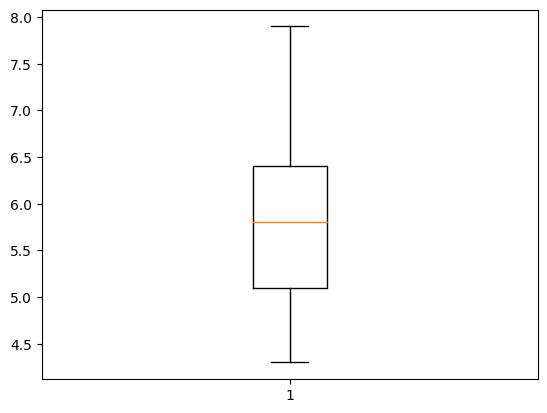

In [14]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddc56c02dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddc56c03310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddc56c02b30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddc56c03850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddc56c03af0>],
 'means': []}

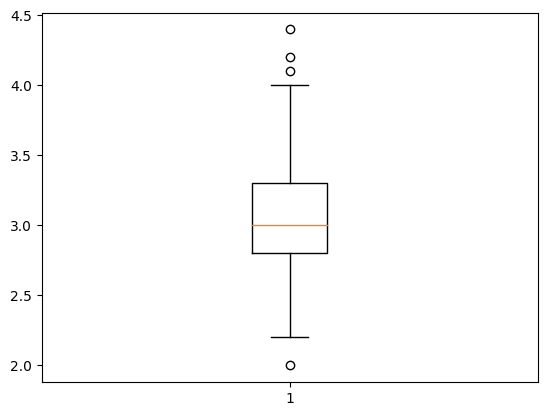

In [15]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddc56a81ab0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddc56a81ff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddc56a81810>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddc56a82530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddc56a827d0>],
 'means': []}

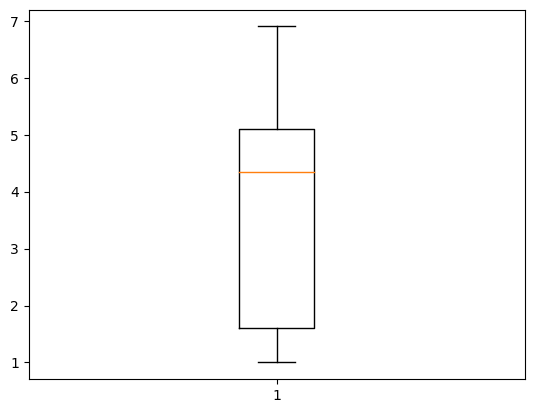

In [16]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddc56afcd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddc56afd2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddc56afcaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddc56afd810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddc56afdab0>],
 'means': []}

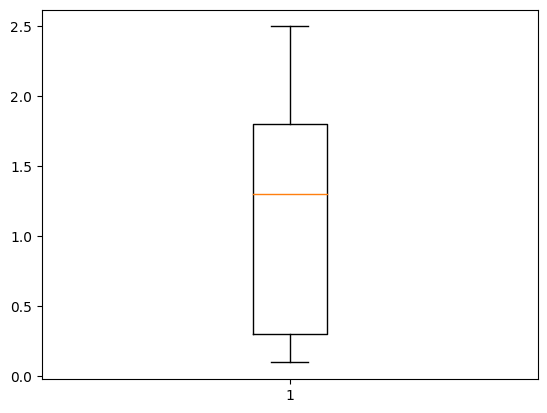

In [17]:
plt.boxplot(df['PetalWidthCm'])

<ipython-input-18-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

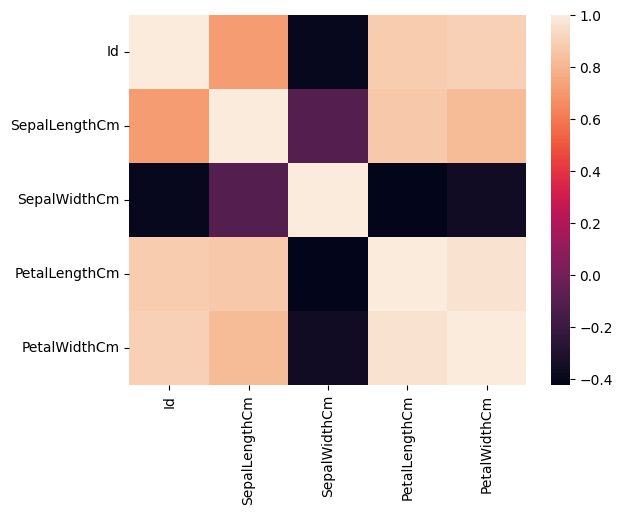

In [18]:
sns.heatmap(df.corr())

In [19]:
df.drop('Id',axis=1,inplace=True)

In [20]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

In [21]:
df.Species=[sp[i] for i in df.Species]

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [23]:
X=df.iloc[:,0:4]

In [24]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y=df.iloc[:,4]

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
model=LinearRegression()

In [29]:
model.fit(X,y)

LinearRegression()

In [30]:
model.score(X,y) #coef of prediction

0.9304223675331595

In [31]:
model.coef_

array([-0.10974146, -0.04424045,  0.22700138,  0.60989412])

In [32]:
model.intercept_

1.192083994828139

In [33]:
y_pred=model.predict(X_test)

In [34]:
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

Mean squared error: 0.04
